# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

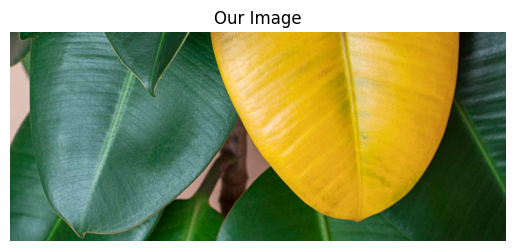

In [2]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
Img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(Img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [3]:
##Importing my image
import base64
with open("tile.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQEBLAEsAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAZABdwDAREAAhEBAxEB/8QAHgAAAgICAwEBAAAAAAAAAAAAAAgHCQUGAQMEAgr/xACEEAABAgQFAQUDBAgLDhIDASEBAgMEBQYRAAcIEiExCRMiQVEUMmFxgZGhChUjM0JSsdEWFxgkVmJykpOywRo0N0NzdHWClKKns9LlGSU1NjhTVFVXY2h2lbTC1OHwREVYg6PTJic5RmXxZHeWl6S1wyhHSGaEhbZ4hsTiKYelxtXj8v/EAB0BAAEEAwEBAAAAAAAAAAAAAAAFBgcIAQMEAgn/xABgEQABAgQDBAYFBwgIBQMAAhMBAgMABAURBiExBxJBUSJhcYGRoRMyscHRCBQjQlJy8BUWMzVTYpLhFzQ2VIKistIkQ3PC8bPT4mOTJURkg6PDJlVldOOE8rQYN0WkxP/aAAwDAQACEQMRAD8Au0va5PkMcZIGsdmptHWIyE6h5XI/2pX5safnDXPyPwjb6B3l5j4x1xU2lkEyqIi40Ntp95a0KAH1Y1PT8nLNlx5YSkak3tHpErMOK3UJue74xjZlmPl/JZe9N5xWUFCwkMjfERLxUENp6XPHS+OSXr1FmnksszCVLVkANSeqNrlPnmkFa2yANTl8Y04azdIigCnUtShBFwREq6fRhy/kqq3/AKuvwMJvzmWP/MT4iOf1ZekX/wBpWlf7pV+bB+Sqp+wX4QfOJb9onxEH6svSL/7StK/3Sr82D8lVT9gvwg+cS37RPiIP1Zekb/2laV/ulX5sH5Kqv7BfhB85lv2ifEQDWXpHBv8A

(np.float64(-0.5), np.float64(1499.5), np.float64(1599.5), np.float64(-0.5))

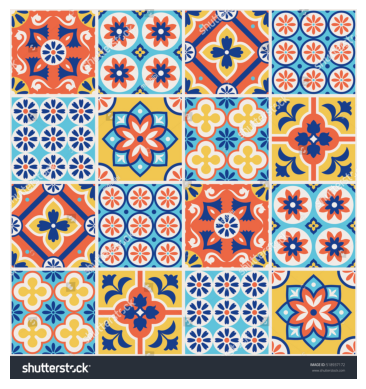

In [4]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np


base64_image = """/9j/4AAQSkZJRgABAQEBLAEsAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAZABdwDAREAAhEBAxEB/8QAHgAAAgICAwEBAAAAAAAAAAAAAAgHCQUGAQMEAgr/xACEEAABAgQFAQUDBAgLDhIDASEBAgMEBQYRAAcIEiExCRMiQVEUMmFxgZGhChUjM0JSsdEWFxgkVmJykpOywRo0N0NzdHWClKKns9LlGSU1NjhTVFVXY2h2lbTC1OHwREVYg6PTJic5RmXxZHeWl6S1wyhHSGaEhbZ4hsTiKYelxtXj8v/EAB0BAAEEAwEBAAAAAAAAAAAAAAAFBgcIAQMEAgn/xABgEQABAgQDBAYFBwgIBQMAAhMBAgMABAURBiExBxJBUSJhcYGRoRMyscHRCBQjQlJy8BUWMzVTYpLhFzQ2VIKistIkQ3PC8bPT4mOTJURkg6PDJlVldOOE8rQYN0WkxP/aAAwDAQACEQMRAD8Au0va5PkMcZIGsdmptHWIyE6h5XI/2pX5safnDXPyPwjb6B3l5j4x1xU2lkEyqIi40Ntp95a0KAH1Y1PT8nLNlx5YSkak3tHpErMOK3UJue74xjZlmPl/JZe9N5xWUFCwkMjfERLxUENp6XPHS+OSXr1FmnksszCVLVkANSeqNrlPnmkFa2yANTl8Y04azdIigCnUtShBFwREq6fRhy/kqq3/AKuvwMJvzmWP/MT4iOf1ZekX/wBpWlf7pV+bB+Sqp+wX4QfOJb9onxEH6svSL/7StK/3Sr82D8lVT9gvwg+cS37RPiIP1Zekb/2laV/ulX5sH5Kqv7BfhB85lv2ifEQDWXpHBv8AqlaVt/XKvzYx+S6p/d1+BjPp5f8AaJ8RG5QOYdAzOGTHSytJdFML9x+EfDqFfIpFxhtvV6iyzhbemEoUNQoFJ8CAYUW6fPOp3kN3HMEEeRj4mGZeXUpCVTSuJfChd9hfcKd1utr/ACj6cYbr1Fev6OYSbcjG9uiVl8kNMKVbkLx5DnPlAOuZ8nHx9oxu/KtN/bJjd+bmIv7ovwjOwU4lEyhkRstmTcUy4Nzb8P40KHwKbjHWiYZWkKQbjmM4THZWYZWUOoKVDgcj5x2OR8E02p11/YhCSpa3EFKUgdSSRYY9F1AFyYwll1VgBcngMz4RgHM48o2lKbXmXJ0qSohY9p8xjjNUpoy9MmFQYdxCQCJVZHZHH6cuUX/CdJ/7owflWm/tkxj83MRf3RfhB+nLlF/wnSf+6MH5Vpv7ZMH5uYi/ui/CD9OXKL/hOk/90YPyrTf2yYPzcxF/dF+EH6cuUI65nSf+6MH5Vpv7ZMZ/NvEX90X4Rk5HWdIVMhblNVRBzFLZAcMG5vKb3tcDnyP0Y3tTspMD6NYVblHJM0uoyRAmWVIJ0uLXj3iKhiOFKP8A7ir82NvpEH/wY5A25fTzHxjDTfMrLmQRpl0+ryVwcQlN1MPxA3AXI5A6cg/RjmcqMiyrdW4AYUJeiVmbb9IxLqUnmBlHm/Tlyi/4TpP/AHRjx+Vab+2TG7828Rf3RfhB+nLlF/wnSf8AujB+Vab+2TGPzcxF/dF+EH6c2UQ5/TPk/wDdGD8q039smM/m3iL+6L8I90kzCoOp4hULTlZy+PeSkFbMM9uUAb246noemNjU/JvKKW3Ao9Uc0zSKtJJCphhSAeJGXjGT9qh/NS/4FX5sdHpEfgGOL0bnLzEY2e17QtMvIh6krGAl7jibobi3tqiOebdR0P0Y0PT0mwQHHAk9cdstSarPAqlmFLA4gXHjHg/Tlyi/4TpP/dGNX5Vpv7ZMdP5uYi/ui/CD9OXKL/hOk/8AdGD8q039smMfm5iL+6L8IP05cov+E6T/AN0YPyrTf2yYPzcxF/dF+EdUZnHk0YdSonM2T7Ui9/aOR8mAVWmk/pUwHDmIQLmUX4R8wlb0ZO2URUwzEg4dp4D2eFaiu7Va3G5R8yObeWOlM5JH/mCORVKqyQSWFWHVHubMphZ3BplUyfeuVmIJeW4Nuw29R1tjepbYGUcSULJ/mIyE2qCnJHCGaT6bw8Ewg8xEWdiR8l7X+bGl2ZYZRvOKsOuOqXkpybcDbCCtXIZ+yMR+nNlDf+idJ/miMcn5Vpp0eTHecN4h/ui/CPZA5jZfzNn2mWVnAxLQVtLjCyoX62uB8R9ONDmIKGyrdXMoB7Y0OUarsq3XGFJPXlHTPc1ssKXlrk5qfMKVS2DaSVORMdEBtKQBc23W3ceQv9eN8nV6ZUXgzKOhxZ0CQSfIZd8cz0nNy6Ct1G6BxJA98aodZWkZPH6pSlf7pV+bDg/JdUP/ACF+Bjg+cy37RPiIP1ZekX/2laV/ulX5sH5Kqn7BfhB84lv2ifEQfqy9Iv8A7StK/wB0q/Ng/JVU/YL8IPnEt+0T4iD9WXpG/wDaVpX+6VfmwfkqqfsF+EHziW/aJ8RHLesjSS6tLTWpGlVKWsJQkRKrqUTYAcdSeMeVUypoBUphdh1HhrGQ/LqNgtPiPjG6t13Rj7CIhmpoVTbraVtrSTZSSLhXToRzhsLxHh9CilU0gEEg56EajuhTTTKiU3DZz7PjHuZmMA+2l5mJ3IULpUG1WP1YUkTcs6gLQq4Ohsc45zLvpNiM+0fGPr2yDHHfK/g1fmx6+cNc/I/CMehd5eYjs6pB68cHG4WtGo3BjGVlWlIZeU1E1lXlSQsolMGLxUwjCQ20LX5sPhjYyy7MOhtpO8o6Aax4ccQ0kqUbARr9H6ishMwod+LoTN6UzhuFc2RK4BLqw0qwNidvXxJ+kY01JaKOtKZ8hoq03iBfs8D4RmXJmwSwN8DW2cZj9MugSOaqY4/4hz/Jwnfluif3lH8Qjp+azf7M+BjG1Nn1kjRUGiY1lmtKJTDuObGnpgtTYWqxO0XHJsk9PQ476c8zV3S1IKDqgLkJzsMszy1HjGiZvKIC3xuDS5yjCfqx9JVrfqkqU6/7rP5sLH5ErP8Ad1RxflGRv+lEZGmtS2nis41UupDOyQzN9CdzjcI6pW0fFVrDoep8jjwuj1ZtN1MKEeHKtTGhdb6R2mM+cxcvQLitZef/AHcY1CnVE/8AKMavy5Rgf6yjxg/TFy9/ZrL/AOGGD8nVD9kqMflyj/3lHjB+mLl7+zWX/wAMMH5OqH7JUH5co/8AeUeMH6YuXv7NZf8Awwwfk6ofslQflyj/AN5R4wfpi5e/s1l/8MMH5OqH7JUH5co/95R4wfpi5e/s1l/8MMH5OqH7JUH5co/95R4wfpi5e/s1l/8ADDB+Tqh+yVB+XKP/AHlHjB+mLl7+zWX/AMMMH5OqH7JUH5co/wDeUeMH6YuXv7NZf/DDB+Tqh+yVB+XKP/eUeMH6YuXv7NZf/DDB+Tqh+yVB+XKP/eUeMH6YuXv7NZf/AAwwfk6ofslQflyj/wB5R4wfpi5fDpW0v+P3cYx+Tqh+yVGfy5Rv7yjxjC1TqKyCohxtqsc4pJKy6LtGLcUEq/tgLX+F742t0iqui6GFGPbdXpT3qPpPYYxI1j6S1f8A3yVK+n89K/NjZ+RKz/d1Rs/KMj+1EZil9Q2RFbpeNF5vyWbiG2+0fa9xTha3XtuAFxfar6DhLqRFGKRUPot7Teyva17HTK48Y7JZQnASx07a2ztGU/TLoIdKqYP/ALi5/k4TPy3RP7yj+IR0/NJv9mrwMYyq8/8AJCg5aJzW+aUslEGpzYIqOQ6lBVcDbfb15H047qfMS9WfLMisOrteySCbc7RomAqVb33hujmchGAZ1qaQIiIbhIfUpTC3HXUttoS44SpSjYAeHqThXVRqshBWphQAFyeoanujlE9KKIAcF43IZmZfqQlaKth1BSQpKgy5YpIuD7vmCDhtGt0ZJIMyjL94cIUhKzZ/5Z8DGNrPM2gW6RmZTVbG4wDqQO5c80Efi/HAmt0YmwmUfxCPJlZv9mfCFvjtTmnGVxrstmWedOsRDDhbfYXEnc2oGxSbDqCCPmw4WabUJllLrTSlJULg8wcwe8QnOTcq04ULWARqI3qkZxl7VknZn8JmTLVQcQjdDut7j3ifUXtxjP5Om0mymyDAZpgi6VR7aqZpSl5U3OIisYZTTzoQ2Vp2X4J8z8MeDIzJ9VBJjSuoyTebjiUjrMa5+j6hv2XQP8NjHzCe/ZnwjwavSj/z0+Me+lK6oV2qJahVXQNjHs7vu3lvF8HzCe/ZGMflikjMvp8YnP8ATFy9/ZrL/wCGGM/k6ofslRj8uUf+8o8YP0xcvf2ay/8Ahhg/J1Q/ZKg/LlH/ALyjxg/TFy9/ZrL/AOGGD8nVD9kqD8uUf+8o8YP0xcvf2ay/+GGD8nVD9kqD8uUf+8o8YP0xcvf2ay/+GGD8nVD9kqD8uUf+8o8YP0xcvf2ay/8Ahhg/J1Q/ZKg/LlH/ALyjxg/TFy9/ZrL/AOGGD8nVD9kqD8uUf+8o8YP0xcvf2ay/+GGD8nVD9kqD8uUf+8o8YP0xcvf2ay/+GGD8nVD9kqD8uUf+8o8Y+XsysuYdlb7tcS9KEJKlqL17AdTYcnAKdUL/AKJUevy5Rif6yjxjUndYOlBh5UPEajKYbcQratt2IWlSTexBBFwflx0fkSs/3dUbhUqeoXDojgaxdJSiB+qSpTn1jD+bB+RKza/zdXhHoVGRP/MEbYnMvL5aO8RV0MpJ91SGnCD8QQmxw2DWqMDYzCB2kDyhU+aTdr+jPhHKcx6CWpKU1QySTZI7hzk/vcY/LlEtf5yj+IRgSk5+zV4GMBCan9N8dWLeXkJnfI3J87EBhqUJU4H1OlO4IsU9SnnC83Izr0qJptslsi4UNLXte/bHEqYYQ96JSgFcuMb2pJQSlabKB5HpjlBBjdGKqut6PoWDamVZVNDSuHec2NPRQUQtQI4G0H1H040vTDEsnedUEjrjrk5CdqDhblWytQ4DWNbj9TGnaWQqo+aZ1SSGYR77z/eJSn5SU48ys3LzzwZllBazokZkx0TdEq8gwX5lhSEDVSrACMb+rK0j/wDtKUr/AHSr82Ff8lVT9gvwhG+cy37RPiIP1ZWkf/2lKV/uhX5sH5Kqv7BfhB85lv2ifEQfqytI/wD7SlK/3Qr82D8lVT9gvwg+cy37RPiIP1ZWkf8A9pSlf7oV+bB+Sqp+wX4QfOZb9onxEH6srSP/AO0pSv8AdCvzYPyVVP2C/CD5zLftE+Ig/VlaR/8A2lKV/uhX5sH5Kqn7BfhB85lv2ifEQfqytI9udSlK/wB0r/Ng/JVV/YL8IPnEt+0T4iM1R2oPIjMV19igM35LOVwqUmKRAOqUWgrdtJ44vtV+9OEypPt0VKVVA+hCtN/K9rXt2XHjHTLNrnCRL9O2tiDaM9+jKlOhqOG4+X82Ej85MP8A96R4x0/k6ofsjB+jKk/2RQ/1/mxn85MP/wB6R4wfk2ofsjHH6MqT/ZFDfX+bGPzkw/8A3pHjGfybUP2Rj6RV9KrWEJqCHUSbBIuSfqx6TiOgLVuiZQT3wGnVC1y2fL4x7fa4UDl1Xx+5q/NhW9KiOX0TnAeYj4iJnLIOHcioqNS000grdddBSlCQLkkngAAE48l5pKSpRsBHpDD7qwhCbkmwA4k6RgjnLlGVbRmbJ73tb2jzxxmrUwC5eTCoMN4iOkovwjAQurrSrHx7crg9RVMPRTroaah0RKipazwEgW6m4wvml1QI3/QKtre3CEH0zG9ulYv2j4xt9UVrR1EyJ+qKzqWHlUshU7oqPjEqS0yLE3UbcCwJv8McbKXJhwNtAqUdANTG5aS2kqXkB1iNId1gaRXU2d1IUqbEEfrpX5sd/wCSKv8A3dfhGj5zK/tB4iPv9WNpKtzqSpT+61fmxj8kVf8Au6/CD5zK/tE+Ij4c1aaYJ24zI5HqIpp6Lj4luGYbZijvJcWEkjjqASfmxg0qqJF1MKA7IDMy2gcHiI3muM5sq8usum6xiq/lEtkqn0wkPN4hZEM0s7hYkDqAhfzpx4TLTS3fRIbJXy4x53m93fUoW53EapROfORdaVB7FldnXIp3O0MrffhoV5S1vNAFS1LFuAAhRv5bTjD8lPyqPSPNKSNLkR7S4y4d1CgT2j4x8ReubTZDxL8rfzwpOGiod5bMQl+Z37pxBKVJIAvcEEW+GOgUyqqSClhVjplGr00sFWK0+IjyQuprTVWsw+1cBnrIKgmLgJZgYd1Sgn47bWQB5rPS3XGtdNqiBdbKgOyNiX5bgseIjZK1z/yMojLss1XnPI2C5Bpg/aomJIDjqkbL88nm5xlEjPryQ0onsjwXWQc1Ad4jqoDPPJPM6JeleWeaspqCIg2kqiWZYtTimUkK2lXHF9qrfuT6Y0TEnOSaQp9soB0uNY3trbeJDagewiOK6z9yNyvmbUlzKzbk0hjH2u9Zhpm4pC3EceIC3I5H04xLSk3OIK2G1KA4gQOLQ0bOKAPWRHzJtQeQ1SS5M2p7OSQxsMpW1L7ET4SbA25+BH044ZyYZp75Zmlbi9bKyMKUpSarUGPTSrCnEH6ycxftjOyGsaTqdhcTTlSwkwbbVZxcGvfsPNrgcjofoOPLM5Kvi7awrsjxM02oySgmYaKCdL5X7I93tcL170/wavzY2+lRHJ6Nzl5iPNGVFIZesNx83aYURcJcSoXH0fL9GOCaq9LkVhEw8lBPA3Eb25KbeTdCCR1Wjq/RnSZ/+OKH+v8ANjm/OTD/APekeMbPybUP2Rg/RlSf7Iof6/zYz+cmH/70jxjH5NqH7IwCsqUHIqKH+v8ANjH5yYf/AL0jxg/JtQ/ZGPJO8z8t6ZlMRP6lriAgIGFQVxMZEqUG2kgEkqNuBYE/NjplKzSp+ZTLyz6VrVkEjUnqjy5JTjDZccQQkak2sI1IaytIx5/VKUr/AHSr82HD+Sqr+wX4QnfOZW/6RPiIP1ZWkf8A9pSlf7oV+bB+Sqp+wX4Rn5zLftE+Ig/VlaR//aUpX+6FfmwfkqqfsF+EHzmW/aJ8RB+rK0j/APtKUr/dCvzYPyVVP2C/CD5zLftE+Ig/VlaR/wD2lKV/uhX5sH5Kqn7BfhB85lv2ifEQfqytI/8A7SlK/wB0K/Ng/JVU/YL8IPnMt+0T4iD9WVpH/wDaUpX+6FfmwfkqqfsF+EHzmW/aJ8RHqlmq/TDPXSxI8/KdjHEJutuGcWpQHqQE44p1tymoC5tJbScgVCwJjukJSZqjhRJJ9KoZkJIJAjN07nLlNV82bkNLZiS+PjXgS1CspWFLta9rpA8x9OOFqfkn17jbgJ5COyaolZkmS7MS6kIGpOkbKbgWt0x2QlxreYGceUuUvsis0cyZTT3t1/Yvtm8U9/YEnbbr0P0Y6paRnJy/zdsrtrbhGh6ZYl7ekUBfnGIp7VFprq6aIklLZ8U5MI1xJUiFhoklagOp5GOhdHqzad5TCgOyOZdUprYut5IHWY2P9MbL3yraX/w4xo/J1Q/ZKjV+XKNf+so8YP0xcvf2ay/+GGM/k6ofslRj8uUf+8o8YP0xcvf2ay/+HGD8nVH9kqD8uUb+8o8YP0xcvTyK1l5+R7GDT6iP+UqD8uUb+8o8Y88VmzlPANlyZZnSGHA5PtE0ab/jKGPQptQOjKvCPYrVHVpMJMYSYapNMkrQpUw1CUm1s97/AE0Qq370m+NiaPV1HKXV4RtFSkCLh1No+Zfqp0wTRAXAahqTcBvb/TNKfO3RRGBVHq6DYy6vCMmpU8C5dEZyEzaynmKQ5Ls0KfiB5GHmrSz9CVE41GnVEasq8I0KrVITrMJEej9MfL38KtJePiXrXxj8n1D9kqMflyjf3lHjHP6YmXnX9Gsv/hhg/J9R/ZGD8uUb+8o8YP0xcvf2ay/+GGM/k6ofslRj8uUf+8o8YDmLl4Bc1tLwB/x2Mfk+ofslRn8uUf8AvKPGNfqbU1pxoyZfaerc86dlsXsC/Z4qKIXtIBB4HoR9ONyKPVnE3Qwojsjaiq0xwXQ8kjqiHc4NXGlyOq4LhtQtMuIbg207kxRt1UfT449GjVcasKj18/kjmHBHOU+aWS+bk+XJ6PzYk80XDo72IZgXipYRew8uLnjHhVMn2s3WikdcBnZUi4WIkaKqnJ2TRBlEdUkoYdasFNOxI3p+W5vjYJN4i4bPhHMqqSKFWU8kHtEaBNK+oD7Yv+z1bAbO9Vs2vC1r8Y51SE7fJs+EehV6Vb9Onxjz/o9oYn/XbA/w2MfMJ79mYz+V6V+3T4xKeS1f0CxSTpXWcAC5HLVbvb/goH8mD5hP/sjGPy1R0mxmEeMbPGZs5VS9G+PzOkMOPMxM0abt++UMZFOqJ0ZV4R6FapCtJhJ74wkx1R6ZZUhSphqCpNrZ73+mqFfUknG1NHq6zYS6vCNwqVPVmHU2j5l+qnTDNEBcBqGpNwHp/pmlP1KIxldGq6DYy6vCA1Kn2uXU2jOQebuUsyAXLs0KfiR5ezTZpZ+hKjjUabUhqyrwjSa1SE6zCRHp/TGy+HCq1l49LvY8in1A/wDKPhHn8uUb+8o8YP0xcvf2ay/+HGM/k6ofslQflyj/AN5R4wfpi5e/s1l/8MMH5OqH7JUY/LlH/vKPGA5i5eAXNbS/+GGMfk6ofslRn8uUb+8o8Y1+ptTenOjJgJPV2eNOyyL2bxDxUSQrbwb8DpyPpxubpFWdTvIYUR2RuRVqY4LoeSR1GMeNY2kr/wBpOlf7rP5se/yJWf7uqPX5Rkf2gj2SLVNpnqiatySm8+6bj4x371Cw8UStfycfEY8qo9XbSSphQHZHlVUpzabqeSBGxjMXLz9m0v8A4cY0fk+oa+iV4Rp/LlG/vKPGOf0xcvf2ay/+GGM/k6ofslRj8uUf+8o8YP0xcvf2ay/+GGD8nVD9kqD8uUf+8o8Y4/TGy88q1gD8j18Y/J9QGrSoPy5Rr/1lHjHTFZsZVQKCqPzMkMOB5xEzab/jKGMinVE6NK8I9itUg5CYSYwkw1RaZpUlRmOoKk2tl9w+2iFEfvScbU0erqNhLq8I2ipU5QuHRaOuX6qtL81b3wOoek3AeBeZpQfoVbGVUasJNjLq8IDUaeBcupjOQWb2UkxSFy/NKn4kHp7PNmln6AonGo02op1ZV4RqNZpCdZhIj0/pjZe/s2l9vK71r48/k+oH/lK8I8/lyjf3lHjHP6YuXv7NZf8Awwwfk6o/sjB+XKN/eUeMH6YuXv7NZf8Awwxn8nVD9kqMflyj/wB5R4wfpi5e+day/wDhxjBp9Q/ZKg/LlG/vKPGMBVGpbTpRMxTKawzwp6WRS296WIuJIUU8c8DpyPpxubpFWdF0MKIjciq0xwXQ8kjqMe7L/PHJfNeOflWV+akmqCJhWw5EsS18qU0gmwUb+V8aZmnz8kkKmGigHnHQzNS0wbNrBPVG045I6LwDre2M5EwQEBXkMebJjIJEaNn5PIWBpFMh3p7+OeHgvyEbVAm3pe304iLbFV2JTDYp4I9I8oZcd3dUCbcr28RDowpKuOz5f4IGvXcfzhdM6cvP01spKjy1hopqEcnctMM3Erhw4ls7goEpJTccW6j1xAGE6wzhvE8pVVN7wZXvEDIkWIyNjbXkYe9VlF1CmuywVbfFr6/D2xTvnp2VmqbIALccyoXVMphkKCJxTMqXFFTaPw1tMoc7u6ebFR8+eL4+neEflA7N8Z2CZxMs8q30by0osVcApZTvZ5X3RwyzisVY2fYlpBJ9CXUC/SQCo2HEgA2y64X+YSeBlEYuWziStwMS2qy4WOgwy6k+hQoAjExsuGYaDjKt9J4pO8PEZQyXElpZQ4N08jkfAxx9q5dbd9qoe3r7On82M76ucYt1Rx9rZb/vXDfwCfzYN9XOC0H2slZ/9Vw3x+4J5+rBvr5wWhpOzd1jZ4ZR58UzlfDVHM55TM/jHIWIp2PjXn0NfcFkOMJUVhvaUoUdqeiDyL3EAbcdleDcT4PnKo5LtszTCQoPJQhJPTF0rICSreBKRdWqhkdDI2A8VVqnVhmTDinGlkgoKibZHMXvaxA0HCLGdb6YVtyQy0Ntq7t2LJBSPIsWOPnfgxKVIcXu6hPnvRevZwFpVNLv9kf64gQwkKesM3+8GHvup5RJ3pXOZ8YkPK/VHnvk7BJlVD5gxaIFPuS+NdceYRwB4UFe1I4HQeWFmQr1Wpid1h0hPI3I8L2hqVrBWFsQuelnZZJX9pICVHtITc+MZLMHWfqRzJlbkkn2YkRDQbyFIfZlKnIbvUqFilRQvkEXFiLcnG+bxLWZ5BQ46Qk6gXHsMcNJ2d4Poz4eYlgpYzBXZViNLXTrEVrh4ZSipxlCio3UVJBJJ6k+pwgbqSb2h8+kcAsDHHssN/udv94MYKU8oA44RqfGD2WG/wBzN/vBg3U8oPSOczB7LDf7nb/eDBup5Qekc5mD2WFIsYZs/wBoMG6nlB6RzmY2LLrNHMLKObGdZa1dGyd5RHeohIlxDT1r2C0IUkL6nr+MfU47JKenKe5vy6yk9RIB7QCLwlVei0ivsehqLKXBw3gCRfkSCRw05DlEkzDtAdVExl/2u/R4zD8W9ohoQoc/fBd/rwuLxdXlo3PS26wLH2wzWtlOBmnvSfNyeokEeBFoh+ezSa1TNHZ5VE1iZnGvm70ZMIhT7q/lWskn6fM4bjrjj6yt0lSjqSbnziQJVliRYDMsgNoGiUgJA7hYR5BCww/9Gb/eDGrdTyjf6Rz7Rg9lhv8Ac7f7wYN1PKD0jnMweyw3+50fvBg3U8oPSOczGVo+rqpy8nbdSUJUEZKI9sgpiZfErZJsb2VsIKh8CfX1x0S0w/Juh1hRSocQSPZHFUJCSq0sZedbS4g8FAK8Lg2PXEro7QXVQiXCXfo6hzYWESqCJd+Uq33+vDg/PCv+j3fSd9s/G8MM7KMDF30nzc9m9l4btoiqtK1q/MicqqLMCpYycRqk7Q/MIlbxQm5O1PeKVtFyTYep9cIEzMzE656R9ZWrmST7YfVNp0hR5b5vItJaRySAm/WbAXOQz6oxHssN/udv94Mc+6nlHf6RzmYPZYb/AHO3+8GMbqeUHpHOZg9lhv8Ac7f7wYN1PKD0jnMwexQrsRDMGHbs5GMIN0joXUg/lxvlkJMwnLjHHUHXEyTh3jpG/wCdMyglQkugpbGoC/aypQh3QFJATwbp5GF2orCWOieMNKhtl2bIcFxbQ5g9t4z1Da19TtGw7NPU9W3t6nlhpj7ZoU+4SfIrcWT5XxskMTYgQQ0l3e+9c+ZMcNY2c4HfvMuy259yyR4ACMFnfnHqEzCioaAzkqyIfhnw45Dy9iPX7N4SjddrcU+abceuOerzlWmkgzbpUOVzbwvaFHC1IwxS3FCmSwQq2aiAVfxWBiP/AGWGvxDt29Ngw391PKHt6Rz7R8YYzSNGQ8LlROHGoRC1QUbEvd0lIusohmlAdPMi3z4YmJpZtyrMpNhvbib8t5ZF+694hzaOpbdUQ5mfo79tiuKn9aGrTOnUnmzUUJW9STGGkksn0bBQFKtRjqIWFbbfUgJcZuEKXtQkElAN0m/Xj6f7LtmeEMB4blDT5dtT7jTa1vFCStZUgEkLsVBNySBvEZ9WdEcWYnrFdqTqX3FBtKlJCLkAAGwunQmwzyiETLZZ0Mqhv4BP5sSqVK5w0bCD7WyzylcN/AJ/NjG8rnGLCOTLJclO5UqhwPMmHSLfVjHpFE2vGd2O6S0yqpo4Sul6UcmsUr3YaUy0xLv7xtJOPE1MtyLJdmnA2gfWWoIT4qsI2MsuTC9xlJWeSQVHwEM5ps7JLVHmxO5dUVQ0E1Rcph5gy+5FVDLlMvqDakuWSw8GibkBNwfM+lsQLjn5RezjDUq7LsTPzx5SVJCWlBSekCnNaCsC176cud4kHD+znEc+8h11HoUAg3UCFZZ+qbHqi4OSSZqTU/L5AShz2GWMQfe93bf3bYRutza9r2ubepx8xJ5bc7OPv7oHpFrVblvqJtoL2vrl3RZthKmmUIvfdAHhDA5Rz+GntEwzaVJ76E3NvoCgSnxqIv6cW+nFt9mlZYrGFGUg9Nq6VDiOkoj/AC28Yi/EEq5K1RZ4KsR4D3xsryR3KrW+jD9WBuGEUE7wjlvhlA/aD8mMp9QQHNRMQV2l2SMz1H6KKvyUk03h4CJne1tqLi2Q4239zXyUqUkH6RjajFUrglX5bmWytDOZSk2J7CAT5GNaqU5Wh8yQrdK8rnh5iFJyPym04dlXkMZfW9bw7TM2nBcm9SxEvQwmIiVJYb22U6QhHgbI8ZF1HzxXTF1exp8ovGXpKfKXLLdm2Qoq3UArVe4QN5XSUD0AbAZ2h8UmQo+z6jejed9ZV1LItc2A5mwyHHnGw1H2i+h6mqViKrcz9p2PQw0pYgJbMYV6KeIST3aGkPFe42sLAm5HGEOR2EbVp6opk/yS4gk231oWlAztcqKAmw1zIFuMdcxjrCzEsXvnaDbgFJJPUAFXvFV+uzWbVOs7M1ybxsM5A0pLnAmnaeVEKW00AgJL607UpLild4oHYCkPFNzyT9DNkeymk7LaAGGglc24Luu7oCjck7gN1HdA3RbeIJQFWGQFecYYtmsUz+8bpZT6qLm2lt46C5zIyuAbX56FkBp1n+ofMaEy+o+QsncrvJlHexb24JgJUoqWRYAnYUi5F1FNjcgYlSZmxKtb6j5wwajPS1Oli65rwHMxaNkJpsyl060exS2X9KS9D4ZbTMJz9r20RMc4lNi4tYG6xJUoJKlW3kXPUs6ZnZibcKlqNuV8hEYT04/UXi48b8hwHUI3zuGbW7lNv3Ixy3Mce4jlHAZYN/uSf3owXMG6jlHPcMf7Sn96MYuYAhJ4R8KEGlWxXdBX4ptfGela8Ys0DY2j3wFKVBNbfaqkZjFX6ezy1xd/3qTjS5My7XruJHaoCOtinTk1+hYWrsQo+wRlofJjNKLR3kPldOyLfhSZ8f8AYxyLq9LQbF9H8SfjCk3hbELoumSc/wDq1/7Y5eyVzVh2y49lbO7Drtkz5P8AExhNYpSjYTCP4k/GPSsKYiQLqkXP/q1/7YxUfR1SykH7a0XNIW3UxEqdQB++SMdbc3Ku+o6k9igffCa9S5+X/Sy609qFD2iMcPYysN2aCifdNr/Rjosq144rNXtlePosMjjuUX9Nox5uYzuJ5Rz3DP8AtKf3oxm5g3Eco49nZPVlI/tcYuYNxHKNYzWyTyszsphykMzqJl80gnSClx+DbU8wqxG5pakktqsVC6bHxHG9iamJZYW2og9sdEs+9Juhxk7p/GvOKu9UmlGd6Yq/NLzqXtxkqi0BySzr2DY3FIusbSbqAcGxSincSAUnoRh4yk988a3knPiLxJ1KqbNUY305KGqeXsy7o9GkPVBWmj/NmEzDoltTkvW8yioZCh8tMzKFC/ElQAUneEKcCVFCikuEgdQWPtK2eUXaZhxymVAALAUWnSkKU0sjIgmx3d4JKgFJBCQCdCHvhjEk7hipJmWCSk2303ICk3z5i9r2Nja8WyZddpPomr6j2KqfzqkMicW0FRUqnUxhoeIh13IUkpccSoi4NjtFwQbc4+cdb2BbUqLVFSiaY4+kHouNoWpKhwN0oUBlqLnO41ix8lj3C87Kh4zSUfuqUkEdxIPlpnHVX0HpX7TrJGpMqKUrOFm0FBxKAqbwcK26IGKQth0KSUuWVezYUApPhUb8Y30YY++T9i2Uq85K+iWtJ+jUSPSIIWkg3TlbpEEpVmBbOMTn5Dx3SnpRp0KFx0hnYgg5EHsBzGRMLvp57CyCoXOGV1pmvmfLJ1K5LNoeMgpZBU+20qOcaeDiA6oRK9iSUJBBSoWUfTma8a/K3RVcMPSVGkFMvPNqQpanCQ2FJKVboLSd4i5sQU6DnkyKJsm+Y1NExNTAWlCgQAm28Qbi/TOWWYsb3hp5hrm0c0vVkZl1Uedchk0zk6m4aJgppEw0N3Vm0lCfujqfwCny6Yr01sa2mT9MbqcvTFvNPXUFIStd7qNz0UHjfjEiLxdhyVmlSzsylCk5EEpTwHMiF17QftXcoqUyvmeW2mmo4Oo6km0MGVT2XRLaoaWtqcAWUra3pW4UJcTYKQU94lXPAMx7I/k31+eqyKpimXMvLNG4aWkhbirdG4VulKQopOaVA7pGWZDMxbtIp0tKqlaYsOOqy3gQQkXzzF7m1xqLXBipyPBm0wfnE4WIyMinlvxcbFeNx9xRKlrWpVypRJJJJJJJ5xfJltuWZSyykIQkAJSkWSkDIAAWAAGQAAFogZalurK1neUTck5kk6kk684u9byuTRenWUzqJhxChiEgoeChENJFwlABKgRax2ni3IVe+Izbe9LPka6mDEtSdlKYRLqschce6NPqCvKtqqAblU+nLkTDMr3tMKACEKta4A6YUUMtNq3kixiLZicmppAS8sqAzzjDezt/7Un6BjdeOTdRyjJUfCsu1NBp7pPD1/d9BfHtu++I0zCUhlWUSYtmHbG5baAPUpAx23J0hG3UDUCPqHhExa+7gYMxCj0TDtd4foTjClBAuo27coy22HjZtO8eoX9kZaCy1r2Y29gy4nbwIuFIkrxB+cIxyKqEg36zyB/iT8YU2aDWJj9HKOH/AO9q+Ee/9I/Nrr+lZObf2Ie/yMaPy1Sf26P4k/GOz80sR/3Fz+Bf+2PLGZVZiy6/t2Wk7bAvcmSvWFvjsxuRU6c4Oi+g/wCJPxjmdw7W2f0km4P/AL2v/bGGi5c9LlFMylT0MR1ETDFv+MBjrQtLgugg9hvCW4wpk2dQU/eBHtjqS3DLG5tDah6pAOPWY1jWA2rS0c9yx/tSP3oxi5jO4jlB3DPkyj96MZzg3EcoHIaGWkochm1JULKSpAII+I8xguRxg3EcoVLXV2flIZlSSNzZyco2Agqmg2nomYSyXyttKJsgDeopS2B928K7eFalKd9Ryt02qutKDTqiU8CTp/L2Q56HW1yjgZfN2zkCfq8PDwtaK94iSQEO87CRUlZQ404pt5pcMEqQsEhSSCLgggjDnC15EKiQugoXGhixPs4e1Vpim6WYyP1WVAtswayJJWUwiu8Ba2JszEKd89yXCFqc5LoG3i5pHty+TlNVKoKr2EmEkrH0sulIHSuem2E9RSCkN5BJN88pywPtHZZlhIVZw3HquE3ytoonvzKs7gWht5h2g2iaVRsJCM6habjIqKiWmoViVzCFiVqdWoBAAQ8TckgYrbL7Dtqcwy4tVIdQhKSVFaHECwBJ9ZvkIklzGuGULShM2hRJFglSSerIKMag72ZdI1Zr9ofWVlrU8JK3ETyEmE6kzsqQpMSEwgbQ4253qdiilKCQEE3Uo363mHZdt4nadh1OCarLlzNbbbgUbputSilSdw3AJIBKxkALcmniXArE3U/y3Lu7uhUm2RsABY3FtBfI55xZpFOB2JcdSLBSyQCcSSlO4LGEW9yTzhVu1gcgmsm6YcmDsMhtM6eJXELSlKfHD8kq4GGbjhlx+koQ2kqO8MgCTqOAiYdibzbGJn1uLCB6PUkJGiuJin3XBntQ81pc5RUdFQEweiIpK5pEwbrbjbSA2sd3dNwVErQeotYi3GJG2D7N6tJVb84akyWkpSQ0lSSlRJUk71jYgdFQ0N7g3zji+UJtRpU7Rvzbpb4dUtQLqkLCkpSEqG7dNwTdSTqLWItCsmWS5J5lkP069yn82LXhShoYpwczeD7XS3/e2H/gU4N9fOPNhB9rpb/vbD/wKcG8vnBlB9rpb/vbD/wKcG+vnGbCD7Wy3/e2H/gR+bBvr5wWEd0vp1M3jmpZKaeTFRL6trENDQneOOK9EpSCVH4DGt2YQw2XHVhKRqSbADmSchHptpbywhtJJOgAuT2ARLGW/Z76ss0po3LKf00z6DC3Nq4ue07EwTTXFyVKcZsOPUjnjEdV3bHs1w9LF2ZqzK7fVbdbcUewJXf8XhzSGDMTVBYS3KrTfipKkjxKYtG7OXQbLdFGXcxTPI6Ej6rqT2dyeRMLCJQ3DhsOlLCCFq3hJfcSVAp3WB2joPn1ty2unatWmhLNlEnL74bCjcq3im61ApTa+4kgZ2uRvHU2EwNhAYUkVhxW865YqIyAtfojM3tvEXyvyhjO6a/2pP73EHbqOQ8IfFzzg7lr/ak/vcG4nkPARm5jnuWrGzSOn4uMFCOQ8IwSqJSyeypZh0oqypZejeoEwcK8wPDz75B+Q246K6+thNmGzttlKaxVGhvH9GhSdM/WIPYbdEZKyNtWJiKvFV5WWVl9Yg+Qt8dRElOOIbQp11wJShJW4tRsEpAuVE+QABOJ5JSBcwyxckAZk5DtOghG9c2tKIrePi8mspJspqSQ63oedTWDirGYKB2KbSUWu1w4D4lBQcHAHWJ8V4mVNrVJyqrNi4UQfW4WFuGvEggxZvZls4RTGkVaqIu8rdUhCh6g1CiD9bMcAUka30VyHhoX2tomGb98dUDEfuhPolZcInRhbnp0i/GK7KegZfQ+oaUxcRAMN/autZeVqLIBSPaGb+Xxx9P5GY/KGG0OJN99okf5o+TVXljT8TPsHLccA/0x+nCtKEy31HZLLofManIWdU1WNLtCOgohtC0usRMMRuTuSoBQQ4raq1wTcYrGxMTVMnQ6yrdcbVkRzB9lxmIlBaGplohWYI9sVgZ5fYyMpmNXOr025/w0PDRL3eNyaeUqHTBNnyL6owXSDwAEDjgCwxLFP2rOBsJm5e6hxSq1+7d98Myawe2VlbTtr8CL+/3R20X9ixx64JCa/wBS0B7QoWcXLaXY2JPwSYi5+nGx7al0rtMm3Wo/CNLeEAR03PL+cfVd9kT2ffZeS1GfuqHOKbVXGShaImRy2VQIhXXYpHiQ2tgPunatW1O4IIsenljQ3i/E+KFfNJJpKEqyKib5dth7Y3KolJo49O+sqI04eVzDJ5I526S+1L0/TfTrM8koKWZbx0ociQG3UBcrdQ4hCnHLMI7l0LfWreSD4+p3Xwgz8hVcNTiZxLxLwNu3InLM3GQyhSlZuUqrRaKLIt+OGUQHRdD6Nux+08Vvqv040w/mrV8HHsyaOiY5aUJl0O87CM3UrbFd02tMYobjtCi6UW55WX5iuYzqrVOnV+gQQVC31iAo/u3tu6cLXjkQ1I0KRXMMJ3yDxOl7Drtr36RFmT0s7G3tPq2g5VmHlmxkpmZO5kFR7MumDLEBNot8qLimlpahUrWp7naAonvQLm/KtPLxphRi7DhmGE8wSpIHPNVhb2Rwsmh1xf0qdxw9dh3aXhy6e7HXLfT3J1SLI+qpU2H0BSWVydsRMULXBU6uIuoftlEAXwz3sbuTSt6ZQb9vu3coV0YfbaTZpWXZ/OIGzd7B/U1qirhiaZwaiqZkUghFn2KTy2QNxph0Ecm4jUbnD0KrceWFqV2hUymMn0EupSzxKrf9pjhcwzMzih6R0AcrX94hzNA/Zv6fuzyoaPkOU8J9sZ3OW2ft/VMZBpbiY0tJc2pAJWptsF52yO8ULLt5csbEWKKliSYSuY6KU33Ug5C9uwE5DOwhx0yly9LZ3G8ydTFXX2SRUkpqLXjKaaDTLzkipFDT6VoCtinG4R4fJ4V/XiV9mDLjWHlr+0rLu3hDMxe4FVFCb6D4RgtFMghpXp1k9oFpPtMQt/7yAeW0Jv8A3uKn7dJlE1tLmrZ7iQnwUo++L2bAZZyU2WShJPTUVceKUj3QzOnXUJWOnGtG6jpp116WvuNicSbvlJai2Qo7rJAKd4Spe1W0m6uPjHVGrEzRpkONZpy3k8CPja9sjrD6xdhOn4vpxl5kWcAO4u1ykkZZ5HduBcXAsM4sqyuzMo/OGh4KvaImTUVBxaPGltxKlMOglKm1gHwkKSq17EgXtib6fPy1SlEzDJuD5HiD4GKa1yiVDD9SckZxBStPUbKGRBHMWI0vY5Xj6zBoKV1zKFQ77SExbSLw0T3YKkm99t+DY8jr+Fhs40wdT8W04tuJAeSOguwJBve18jY5i18t4mx0OaRVn6XMXBug6i+Xb+OUQPNZNEyWYuymaQXdPsLKVoU3a9iRcXHINuDiodSpU1R51yTm291xBIIItexIuLjMG1wdLRKUtMtTTIdbVdJ6/wAZx5+5a/2pP73HFuo5DwEdFzzg7lr/AGpP73GNxHIeAjFzzjAZq5YUrnHlnPsqawg0LltQyqIgIo9yFFsOtLa7xI81JCyR0N/MYWsN12dwtiCVrElb0rC0rTwB3VBW6TyVugHI5cDHHUZFqpSLsq76riSk9VwRfuvFReobsjtTmTdQxaqMy3NaSHvyYGYSKWLde7si4StlpLpSU8puVc7QeN1h9LcE/KN2d4qk0fPJoScxbpIdWlKb6HdWst3v62Scr2ztc1orezjENLfV6BsvN3yKQSe9I3tNNYXusMp6yy7iGoTMLKybSB19N2G55IXYNTo55SHUJKhweR6H0xM9NrlIrTZcp022+kaltxLgGmRKCQDmMjzHOGTNU+ekSBMsqbvpvJKb9lwLxhvtbLf97Yf+BT+bClvr5xxwfa6W/wC9sP8AwKcG+vnGbCD7XS3/AHth/wCBTg3184LCD7XS3/e2H/gU4N9fOCwg+1ss/wB7Yf8AgU4N5fOCwiSNLWaMnyWzTZnc1ljP2tjWjDTApbCdiSle1XTyWpN+nA64jXatgx3HOElyjJ+mbIW3fO5uneGotdIIGuZ0iVtjuO2sAYxRNzF/QODccsbWFlbqu5RF9LAXvFpvZxVFR1T6oKUm1JzuVx7Lrbi23YGJbWbFTR5CCbH4eWKYYco1Vo2J/Qz0stpaQoEKQpI5ZEgXHXFytpVcpVc2fOPyM0h5CiggoWlWRBIuATY9XCLOlHxqt+Mfy4leKp9sVL/ZQEOxEvZNNPQqXlKD4Q2psKKvucVwB54mHZSSPnVur2iGLjKwDfnC49l1pRqCn6jitQVcUkqVs+xJYp+GjJcWXng4le96ywCE/elAgEHd18zIVZnkqQGEKvzziDsUVKXebEoyQc7qtY8rD2w73cM/7Uj96MN25vDMCEW0gSw0pW1EOCetgjy9cYuYNxHKIbz91wZB5Bd9K5hN2J7O2wsCSyeKQ4pC08bXVt7y0d3HKeLK9DhQladNTNiMhzPu5wrSFCnKhmlG6nmR7L2v4woea3ac5/1687B0JCwlKwKlfc0wa+9iNtrcuoS0rrz0/JhcZpMq0LrO8fL3w7pTCdNZzd6Z7LDwziBqpzar2rooms81Z3MHl9WY2oHnL/AIWs/HCmhlKB0EW7BC4zISDAs20kf4R8I8UBQ9S1En2mUZdzyapJ++wcheiQfnSk4wqYbbNlOAdqgI7EsKI6KDbqEcx9AVRTyPapvlpPpYgf06Mp5+HSD+6UgfLgTMtuGyXAexQPvgUysJ6SDbrTHqpnNKt6PjAuks0ZzLXm1XDMLP3myD8UJWMZW0lwdJN+6OR2SkZjJxpJ/wj4ROWVXaW6iMvX2oWsVw1VwCdoW1MllD+wdbPLDpvbzt1wnvUmVdBKeier4ZQiTmFKY+m7Q3D1DLwyhu8g9een7PRLMqdm8PTU7WnmVzqMbbStQNrNuud3vvcGwT0J9MIUzTZqXNx0hzH4MNCfw/O0/Mo3k8wPaBe3jE3rhm21bHYYIPopFrj1wm3hI3UHhHBh2FC3co5/ajGbmDcRyEJt2o2lSo68jIDPehaUXNnoSHEJO4CCl5efDe3h5IQCpQAabTbb1X18iv0aeDYLKzblnDuwxUpeW3pV0hIJuCbAX5eZivmbwEsTNFQ32taDnADRhwF3t022vfCjMrWXTnEjtAejvwixHsO6Nl+TU0q/NzNaBckMNNYGCh5AiKlbqXIgBTynV2CL7eWSDYg7uDhj4oU5NJQ010rXJzGWn845/y5TJVamlrHXbPuyvDB5sTuV1RmHNZ9KXUvw0RFqUw73ZTvT5GygCPnGE+VQtqXSlWoiP6m6zM1Bx1GYJyMeujMiq2r6RKqKm4CGdYS6ps73glV0gE8EdOceHp1lhe4s5xulKLNzzHpWki2kL9nfq5yUyP72XTObsTacN7x9qJVEIcWlaeNrikbi1zxynyPphXl5GYmRcZDmY8SdHm549BFk8yPZz8YgCq+0qz7qaWfanL9iEpeBLiihUMe9iCOnLiUtqHr9GHVI0qVbZBX0j5e+FpvCtObc3numrwHhnEL1Zm9X9XxKlVtmxOo51Z+9RtQPKv8iFrOFhtlKP0aLd0KzUhIS4s20kf4R8IxsFSU5n/AN0llEzaaX/DhZO7E3+dKTgW8lv1lgdptHYlo26KMuoRzHUZPZD93mlATeXAfhxUjdh/rUkYA+lz1Vg9igYyppQHSR4iPbS+aVaUlGhdG5nziXvpVcNwM/ebN/ilCx5YytoLHTTftEcbklIvizjSD2pHwicsqe0r1E5ePMwlXPQ9VwCCkLamayl/aOtnnA4bkeduovhNepUq7mnonq+GUIk3hWlv3LQ3D1DLwyhuMg9fWn7PHu5REzNil50tJ/0tnUa2224q9rNuuBvf1BsE9L+mEOZpk1LdIdIdXwzhpT+H52Qurc3k8wPaBe3jE5mGbSbLhgk9RuRa49cJt4Rt1s6ARwYdhQKe6RyPxRjNzBuI5Qn3ag6VKgzH+12eFB0sqaxcvZ9knMvhJeXn1M7TZ1KUAqVbu2k2t+H18ivUeeDV2VqtfMZw7cL1KXld6WesAcwTkL8vbCEGWyxLwh1ylkOE27lUOA5f022vfDk3nOcP6yTnwhzOy+0o1DB1orUHWdJuSuChIUNyBqNlpacilOBRU6AsAhI2tEEAghfUeaDWJ4ej9AhVydc9IZWJ6lLuM/NGrEk3VY3A6vbD2CHY6llHW58Iw27mGTuI5RyIdpR2ph0knyCMYvAUoGoiH8/damQmn5LkunU8h5xOkBYEjlEUhx1C0/gulG5TPJtyniyvxTjvlqfNTWYFhzPu5wqSFEnKhYtosnmRYd3PxhQ82e1Bz3rl5yCy9gISlIEq+5mHX30SRa3LiUtKFzz9GF1ikSzQu4d4/jth3SmE6cyLv9M9lh4ZxAtWZwZh1bElVbZsTuMcX/So2oHlA/IhazhSbaSn1EW7oXWpCny4s20kf4Rf2RioKlpzUCi5LKMm00v+HCyh2Jv86UnHpTyUHpLA7TaOxLVx0EeAj6jaLnsi+6zTL6cS8D+mRUjdYA+dSRjCX0L9VwHsUDGVMr3ekjxEeqmczKypOKSqkszZxL30G4bgp882b/FKFjGVtJWOmm/dHI7JSLws40k9qR8InHKrtJtReXK2YWqYtiqoFGwLYmqyHto62ecDhuR526i+E56lSruY6J6vhlCLN4Vpb1y2NxXVp4ZQ2+QXaAaf871NSiYR7FKzpaeZfOo1CGnFXt4HnA2FXuDYJ6X9MIc1S5qXzHSHV+DDSn8Ozsh0t3fTzA9oF7RO5h2kkBcOkEi4unqPUeuEy5hF3UHhHBh2DwWU/vRjNzBuJ5QonahaVagzPhZZnVQdLLm0dKmvZJtLoSALz62CFHvUhAKlW2NJtt/C6joV2jzwZu0tVgdM4dmGKkxKKVLukJSrMHQX/F43j7GNg4aC1LZlMtwKYd0UlD72yyG1j7svqLXw0NqxUqlS9z9c+wRN+DADPOW03feYuZT7o+TEIGJCvHzERDMJDLiohVkNoKln0A641PvtyrCnnDZKRc9gj2hCnFhCdTkI0id5+UlBw5+0LT8a+QS2SlIQD5XIVe3zYiar7ZMOSrB/J6VPLINskhN+FyFXtfqMOaVwnPur+nIQnjrfuy98RbPp9OKum6plM3lPPvKshCQAEiwASALDoBiu1drtQrtQXOzq7qPgkZAAAADQDh74fcnJsyUuGWhYDz7YU/MHtb9J2W2d7uT07jJrEw8MkIjqmgGGVQcO/dd2yVvpVYAIN9l/ug+ab6L8mraLXMJprLIbStWaWVFYcUjLpZNqF7lQtv26MMqe2k4dkaqZN0qIGqwBug55HpDq4HWGFy/zCoTN2lGqyy3qaEnkoiG0rTFQt1t2ULjcFC3T5cQlXKJWcMVIyNUZUw8DbdVkbg2yIN9eyHrJT0nU5cPSywtB4jSNazO0racM5ocs5k5OSaYFRuX2Q5COXtblUOpsnj44XsP7RsdYUXvUyoON24HdcHg4FxxT+HaHVE2mZdKvFJ8U2MLnX/Yf6UKmdciaGn09plxXuJaiHYltPP8Ax7yz8MTjRvla7RJBITUGWpgcyEoP+RCRDFndkuG5hRLClNdhJ/1KMRhO+wQmYfJpvUjDFrnYmOYCVD091hWH/K/LGkyn/iqQoH9037dXRDee2OL3vopvLrA/2x8yTsEZyqJT+iPUdCBn8JMEzuUfk3Q6fy49zXyxZJKD81pCif3jb2OmBnY45v8A0s3l1Af7RDNaVuzV03aUpqmr6blsTO6jQVBqeTZxzcyFI2EIa7wtC6VLF9l/GeeBaAdom3nHW0aVMlMLSxKm122wnOxuLq3QvUDLetlpmYf+HcCULDjnpmklbv2lX5WyFyOfDjHi1kzgxmYMulKFX9jgSV39Vpb/AMnDUwm1uSC18z7L/GLKbPpct0l10/XV7CfjER4dMPqDBBBew5PHnggidtE+kyM1ET2NnNTQSmqZZgltNRveKT30V3rdgjb1skPA3I5T088OrDGHlVl5SnRZsDXmbjTuvEZbSMeIwhKoZllXmSoEpyyRuq1v17pyByOvCIQmsomFPzWJp+bW9qgnu5iNvTeACbcD19MNdbamnChWoyMSQzMNTbKX2vVWLjs/AjosR548jKNsGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBGx5P5efps5q09lypALU1m8MzFbh0YLyEuH96o/8AhjupkqZ6oNS4+soDuuAfIwjYiqaKNQZmeUL+jQogfvBJKfMRuOrfTFH6dczfZJTI0CQzUw7UjjGr7VudygLbJVzuLgdPmLJPI6YV6/Q36bP+jA+jVbdNzyFxnxveGtgXGUliOhelUbPt73pE2ANt47pFsrbpSOGZ741ij8s6tYqWCmU1g22GIV7vFnvLkkA2FvnxzSkg6w8FqhUqVZl5qVLaAc4+M6I9iNq2Dg2HApUFBuB4D8FTikED5bIOPNWWk7qeMbMNtKG+4dNI1XCLDqidtFs2RtnsgdV1IfSLcc7En6knDMxc2fonR2e0++Iz2jMZy74H7vtPvjV9TnZRaatSFRRNeQiIulahjXHHYyYypxxbcS6s7t6mlud2k7ionage8fQYkzAHyj8dYHkUU93dmpZFglKwApKRlYKSneOVgN5fAczFcsQbOKDXHy+AWnDclSb5k8wTbXkOML3NuwSqRMSr7R6j4BTJPg9qa2qA+O2HP5cTVLfLFppQPnFIWD+6bjzdEMhzY49vfRzYt1//AMMeyQdgi6YgLqrUe2Wt3iRAQ6VKt8NzKfy45pz5YrQBEpSDfms29jio3MbHOl9NN5dQHwESzl12KWj+j324qsVzqqHkbSRGRr8MhRH9QfT1+TEcVz5Vu0ypJKJINywP2UoWf87atO2HHT9lOGZU3eCnT1lQ/wBKhDF5b6esisnoFEFltlTJpUlCdocLJiXLXv775Wrr8cQdXsb4xxO8XKpPuO34XCB4NhI8ofMjQ6RTEbsswlI8T4m5849Ob+dOV2QVMrrDOGsoaRwCE3QYkkF3kABAta5JA5Ixz4XwniLGk+JKiy5ec420HHpHXIZ5AxsqdVp9Hly/OOBCev3RC+nftSNNepHOCIyepJM2l0W4pKZFGzdhlDU2UVKSQ2W33De/d28Iv3gvbylbG/yeMd4GwwmtTZbcSLl1LZUS0LA3VvNoytvXzNt3K8NWibQqFXKiZNneSfqlQACuyyj1cBrDT0hWU5ouZmYyt0fivsLttWOODwbdByOcRVhnFFUwrPfOZNVwRZSTayhkc7g2OQzFj16w66hTZepM+jd7jxBiUZZnnRMxhw3H+0QTqilO1aU7bkgCx3k9TiwlM2u4WqDYTMb7S1ECxCbXJFrHfJhjP4WqTK7t2UB2/CNzaUlTDS0cpU2kpPqCODiUmyFNpI4gHyhtrFlkcjGo58C+V8YP+PT/ABF4Zm0U/wD5Fzf3YVsPgfldvtiujtoUSNzQ7NzNXEJeTOYP2AEX3Oe2we4fvbnDG+SwZobW2fRDL0bm91D0T1vOFDaj6H80XN7XeTb+NHuipCmKSqauJ2mn6SkD0xj3EqWiEhkDeoDqQDYcY+lylpQneUbCKwvvsy6N90gDnEv5WdnlqdzNj0NxNIop2CN+9mM7WtCUC9uA2hy5+UdAccD9Tk2Brc8h+BCLN4jpcsOirfPIfzIiwDTlppy8000X+haiodT0S+4XJlN37l6LXZKfMnamyE+FO0Xvxybtmbm3Zx3eVpwEMGoVGYqb/pHT2DgIkPpjljhgwQRnKCy1rfMyOEvomRORdlWcfv8Ac2+L+Ii5HHwPUY4p6oyVNRvTC7dXE9kK9HoVWr73o5Fvf5ngO21z5RONCaE4dKW4nMqqQ4ogKVBS1SikeZSVFKFD0wyJ7HCjdMo33qt7LkRLVJ2QIAC6m9c5dFF7dYJISYlilcg8n6OZQ1KKIh1LSLd9EvOuk83vZa1DDYmq5Vpw3cdPYAB7AIkWnYOwzS0gMSwuOKio/wComNqh5fK4QbYSUwjQ8g3CoFvqwmFbh9ZRPeYcKGGWhZCEgdSR8I7gAOUJSLeiAMeI2wE36hJv5FIxm0HbHS9BS+KTtipbCuA9Q5DIN/pGPQWtJuFEd5jwtplwWUhJ7Uj4RrlTZKZT1e0pqd0NCKKgbuMLcZIv5/c1Jwoy1YqkobtvHvsfaDCDP4Uw5UkkTEsk34i6T/lIiK630JSCMSuLy9qZcC5uuISPUot9PxrLVhyyWN5hBtNN73WNfDIRHlV2RSToK6a8UH7KrkePSMQbmHk/mJlW/trORFpknwRjJJZVzbgqAPX4emHtT6vT6oP+HXc8uPv9sRLW8M1rDq7Trdk/aHqnvNj5RrCVJWNyTcHocKUIMc4II0/O7I+gc/aEiaDr+VB5h0BUNFIKkuwroUlQWhSVJPVIBBNrX4NyDvl5l2Vc30GOqTnH5CYDrRsfIxX7nN2b2onLOaPOUpJUVTJ96zCx0tUovBsHw94lTaEpVtIuASLg89Ludiqyjyekd09cP2TxLT5lI9KdxXG+ndmTEKVjQNZ5eTNEmrqmIiVxbjfeJh4tCQpSeOeCfUfThRQ4hxF0G8LsvMS80gqaUFDqizTsI/tJ+pxrBUM4j279Gr3taAmxDfskv2k/21xj59fLAM2cbU/eH0fzdO6eZ9I/fyixmx/0X5Cfsel6Q3/hbh5IYlMUyUDnvkbR6m4tiozlvRKvpY+yJcPOKRe0vRIE65a/MgWhbaoqBLpQn3XPtdC3H03x9ZthKpw7JKV85uDuuW7PTu28rRU3Hwa/O+a9HpdPj6NERnKdP+dVd081OqPy0mEdAxagGIxlCe7X8b3v9WJNnZlhpsharGGIanT2HihbgChqInPTX2eEzlk6ha3z5MMRCutPwcgh3nblaTuBeO1BABCRYKUD4rgi12vN1VJTuM+MJFTxCHUFqV0Opy8tfdDfw8RHrhmpPDvulhIShqHSs7BbhICemEGyQd6GwVuq6JJN+EbnlBRFTN5oSZMfTcahtEchTqnIVQSlI5JJItbHJNvN/NlWUNIVqVKTP5Sa3kEZ8jG7ayGoRqOp6AgINpLzyYg7GmwlSyS2AOOvOOOk33VqJyFvfCviwJ9KyhAzN8hqdI8unrSjmRmDVsDETEMyeEWhxSXIxSg4QEnoAhSfXzxzzmKKdJLKU3WocrW9ojbTdnldq7W85ZlB4qvfuASR5w2tGaM8oKZCYmeQ0TOYgc74h9xtN/kbWB9WGzOYvq0z0WyEDqAJ8wYkKlbL8NSACnwXlcyVAeCVAeUSLKKGomn2AxJaSgGEpACf1uFnj4rucN96cnJhW844T329kPeWpNLkkhLDCE91/beMkltltIS1DtI/cMpH5Bjmz5nxMdyUpAyA8BH0R6gdPTARHq0BSg8LYbULdFNJP5Rg04+cYISciAe4R4JjStLTdoszWmoGIB97dCoTf50gHG5uZmWTdDhHeY5H6fT5pNnmUqH3R7hGgVlpEyXqxCnISSuyqII8L0JEuqAN/wAVTm36sL0piusSh6S98dYHtAvDNqmzbC1SF0NlpXNJUfIqt5RDuYWirMemEOTGjoxidwiApXdJUoRASOR4QgJ6ftvLDtkMZU6Zsh8FtXl43v5RGNa2V1ynguSSg8gXyz3/AA3QP80Q/GwcXLI5yVzKGUxEsqs6w5bck/G3yj6cO1C0OoC0G4PGIzeadl3y06ndWNQdRHXj1GuCxSbg8jpx/wCb4INYVTV92ccuzemz+ZOSjsHKp/EKSY+WRTjqYaMIRt3J2pcKV+FHCUpB8RJv1WpGrFlIbezHA/i0Oak4iXJJDUwCpHC1rj2X46kwnVXaTNR1D9+qpso5k01DpK3n0oSW0pHVVyQbcemF5uclHPUXDwZrNKetuujOMPkGiUuZ8UEqdLQmDNcSfv3FJ4CPbWr3+Fr4R8XGZGEamWL7/wA2f3R1+iVbzhzUYN/lqVDmQ9K3f+MR+hPKwNfoqkIZts2w+y34vci31Wx8j8I7/wCekrva+mVftuq/nFuqnumkObum6PdDEk+NX7rF0lesYiQaRXn9kkxUTB6MaTdhYp5kmr9qlMuqQSC9DcXBBw/9mrLT2IVJcSFWQTmAeB53hvYnffYpai0spJIBsSMu4iKQ3u9cC+6Vd0+4pxRNz8Sbk4sAkISQFadXuiLiSe08zeG+guzWhtTORUv1FaLJs2pl1BZm9FzqIe7+Gi02WttpSQ+V2adaPjcHQ/PWyY27HAeMHcNY3bII6Tcw2E7imzdKSsEtAdNKx0UHh3SanAia/Sk1KiEW0UhRNwrUgesdCNTCuZj5b11k/UTtI5pUtFSKYtOKQqGjgkKUUmxtYnz9bdcT9RK1ScSSKZylPJfaIB3k3Iscxe4ER7PyE5SnyzNoKFDgYwpBt14PQ4VAbm0cfCOMEEGMwR2QkREQr6IiFiVsuoN0OtKspB9QceVJQtJSoAg8Dxj0ha0K3kmxHGLney51G1lqU0tMVLmDEJfncmnDsrjo5qHbZEWEMQ7ocKWkpSCS+RwkdBj5bfKFwNS8CbQVS9OG6w82l1KSVK3SVuItdRUbWbHE6xafZ7XJqvYeD0xmtCiknIXsEm9hYfW5QxfFuMQbD7gwQQfE4INIkbKLKxUctqrKjY/WySlcFDkm7h6hRt5e6epvfkYnDZps7M6pFYqafoxZTaM+kdQo2tl6pAuQQTcQzMQ170QMrLnpZhR5cCB16/GJWbbupLTaeT4UpA+oYsWlISAlI0hhE6kwoWvjWQqCMXkPlRNFJeKUpqKatJT4CF39nQTcg+BJJsk7XOp6YjfF+Jc1SMqc/rq79B4DlkYsFsr2dhe7W6mjL/lIN88rbytBxNszmnTjCZhISLAn5zcn5Sep+OIzMWGzja8mMvU5mZgQsgigv2JhBiZgpBse7TwE38tyikfPhUpUkmdmN1fqjWG7iWrLpVP3mzZashCF9olkLPdOuqCaSyJaWYKY7JpJo23DyQ4bc/jJLYuPkPni++yiqJqGCWWVG6mbtnssDf8AzR88trUkZbHD0wkWS+A533Kbf5bxeX2W2frWfWhHLWpY4RCZjL6Xg5RMDEs7N70HCsMrUPJV1pX0+gYirFch+T8QzDY0KlKHYok+y0KlHmfnVNaXxAAPaBnDI0khqGp/7cujc5E7n3ledubJ+ZIA+bCGBZMdyjdUJR2qvamxei2m4Cg8tw9NM0qrg24in5LDNIUxLoVbykB94E7lkhmISkBCwVpSOBdQeOEcLLr7hmH1bsug5nmbXsPEXzGUIlaqyaYgNoF3FaD3nz74WqKqmq8/Mp1VDqhl22YTqWLcqaFmDqdjRN1LIAslofhAC23gcbRZ6IZZknw3KaJPRt+M4bqnHJlG89qdY8WUVLSPsotBM0zgmVQOTFOcleJlMA+2pW5iVd3F7HQlQCbn2FpW5IO4cg2Nsc8xMOYrxElhKbCXRc8iq6f9xEdLbKKNSy4o5uG3Ze/uETBp/wAuqH1KSepcj4wMRctr6l1twakObW3XGgYtpW5Njw5DMq4/EsR1GOCrPPU8tziMlNK8j0SPAmN8iluYC2DmFj+d/KKdM28qq70zZzzzKKp3XoSeUdO3oREUw6pCyGH1ttRCFgJUnf3W8Hg9DYYmCSnJaryCJhAuhwA27Rcg9l7QyJhl2QmlNHVJ19hh/OyL7aCp8q6mgdOOruqoia0nMVrbklWRTLJiZU+pzeEPr8CnGdqnzuUp1Ys2kDb7sd4ywIzNtKnacjdcGqReyhplrY6aWGvGHTQcROIWJeaN08DyPX1a8+EXPKaLLqmnkgKSbHb0xCANxeJAtYxymIhIUiMj3AiHhwXolZ6JaT4lk/IkHBYnIamDhH5ou0az1jNT2tjMPNODdU6zFTduAlYUALIhYVmEIFvVUMT/AObYtJhaQbo9Cl2V5ADeV/iUVf8AdEP1x9dRqLqkanJPcAPdDcZbUmih6ElFIpQE/a+DDS7E23An+S2PnLiisGv4imqiTf0i7jssI+pOFaKMO4blKYMvRI3T23MZz4jCDmIX4lTSrqiqLTXWRjVF6Mp2MSUTeVICVEi6T3je61ljbawUkHeonnC/QK69RJrf1bPrJ8Mx15cxrDJxxgqUxlTdzJL6M0Lz6xZVr3Gd8wdBFk9OVHIawkELVNLTNEZLY5vvISKb6OJv1+rE3sPszTKXWlXSrQxTackpqnTa5aZTuuINiORjCZk5bwtby7v4RKGpiwk+zum4DnA8CrX62Ava/JwwseYFlsVye+yAmZQDuqzG9kOibX1sADYnM5iFSi1ldMeso3bOo5dY8ecQhMIGLlUa7Lo9ktvMq2uIPl/564qdNysxITa5aYTurQbEfjmMx1GJPadbfaDiDcHSOrHPGyC4HJwQR1R0bDyuCemcYlSmIdvvHm0n3k3At1Hrjaww5NPpZbNlKNgeRt/KPC1pbSVHQZxQjqF1D1/qdzMjc0swZkHHoqwgoRtlttuDY5UG0pbSkHxLWdxBV4rXsAB9jMGYKouAaC3SKaiyUesolRK1ZDeJUSdAkWBtle1yb02rdcna9PKmpg66DKwGtsusnPWNGN/XDrhHgwQQWPu+eA5awa6RyylURHNyyHSXIl5YQzDoI3uKJsAL+ZJA+fAo7rRcOSRmTwA64ykbywkanQcYabTF2SepXPww1QVnDsURTbw3GYzZS/aXE7tv3NCWnEKvyeVDgYr7j/5R+A8F78vJqM7NDLcbtug2v0iVoUO4HWJEoGzavVezj49C2eJ9Y9gsR4kRBGe7WUEJmlMpZkPCxiaXgiIeBiI9xSnYwglRfVdxy10qSmwVbwdLkky/hJeJHcPsu18p+dL6SwjJKOG4Oii9iCbkXz14Bn1kUxFQUing+iTkL5knnmTwy14aQz3YJxkWe0lpSEMa/wByZVGHuS+oouC1ztvb6sIe0hln821L3Bvbwz3RfxtfzhYwlMPio+i31bhSejvHd8L28ov6VYLUP255+fFfokeFk7ROkaTqOLo+NqOmoKPeg95hHIxgL7m6XRwDx5n6cSFgRxxAmAk2va/lEJ7YHHEfMwlRF73t2KiBGmW2G0tMtIQhIAShtASlI9ABwB8mH8STEHx1TCZQMogX5pNIxuGhYZvfExLxIQ0i4G5VgTa5Hl54yAVGw1jKUqUbAXMINq67SSe1+qIy/wAgY1+WyFSQiLna2Wu/jvFc93982IsEC6ShXvcernkaUhmy3s1cuAh90fDaGrPTYurgnOw7dM/EaQu2U+UWbGovMaHy2yipWPqWo491ITCsud44CtVgtxSzu23NyRc2B4OO+dnZSmyxfmVBCBx+EPSWlHplwNMpueQ4RZjpV+xroyPgWKk1l5rNMKca3mlaUedWpsk8JdccaYWk7b32qIur58RVV9qKEqLdNav+8q3kAVDyh5SWDzu700ruH4Bh8smuzB0E5CwzbVAabZSt5HPtc2mEbGrJta5TEvup6Yj6exXiGoG70wewBI9gEOaXo9MlT9G2O+59pMTFLMtMuZW17PI8sabhkpBOxinoXgDz+94RVTU2s3U4o/4j8Y7vQsJABSB3RzM8t8vZk2YaeZaU5EoVzsfp6Fsfj97wJmZpBBDih/iPxg9FLqBskHuERLnJ2a+hbPiCehcwdN0mU68DeMlcXFQTiTe+4CGeaHzdMK8jijEFPUCzMHsIB9oMccxR6dNX9I2O649loRPVP9jVwC4OKqPRnmoiHdSl1xulasfeCF+aG2nUtxDqieUjcodU3PUiQKRtSVvBupN3GXSTbxIukeENidwgmxVKrt1HTxzMVjZ4ZDZx6Y8xXssc7aMjKdn0MrwMOr2F5JSFBbSgd20pUk3ISeemJWkKhJVWW+cSqwpHs7YZ03KPybhafTYxOmkjtGqtyziYWgM7YyInVOrd2MzMNNe0wF02Tc+DejcBcqUogLVxwMcc7SkPArayV5GGZVsONTAL0qN1XLOx9ufhFgVP1BJaokcFUlOTFEXL5hDIiIGLa915tSQpKh/aqSfnw2VoU2opULEQwloW2opULEaiPWpKVjatKVA9UqSCD8oPBx5jxEMVxljlm7XEXNVZfSj2lLibOiDSOQkfggbfqxocfeCyN4wvSz8wJcDfNu0x3ttNNIDbDSEIAslDaAlIHoAOB82ObXOCN4yuyTm2aMpjptAzmGhG4FxKHPaUqtyCb8Y45mcTLLCSL3hZplGeqjalIUBY2jLVPmu1kRkVOIdM9bh4GAh4iJipkUpBcJHhSm5PWyeljcnjHEGvnk4kgZm2USZRaMaTT7TBBOZy0il2gMvsxc7K7h6Hy9kEdUE/mD4DcK0ve8pS1ABSio3tc8nn5MSTNTUrIS5efUEoHHhGpiXcfX6NlOfIRaFow+xwJ9VtMS+ttXmarMsYimS4ml6ZcdcfT47APKcaZKDtBPgWfeHzMGpbTmmU+ipzW8R9ZVrd1ib94hyymElLO/Mr7h/4EWB5MdlX2f2REO23ROm+XRDzZuYycTSOi1qNre6/EOJGGDPYuxHUD9LMEDkAkewCHLL0SmS1txsd9z7SYmmU5T5WylsMyPKmmIZKRwlmnoY2A+Vu/GERc3OOZl1R/wAR+Md/oZdNhugdwj6mOV+WsxQGZzlbTT6Vc2ep2F5/954wJqcTo4of4j8Yz6Fg36IPcIiHOPsyNBuekE9D13ptlKXHRYRkqj4yDcQb3uBDvNgn5cLMlivEMgQWpg94SfaDHBM0emzPrtjuuPZaEV1TfY1sKmEiqj0aZqtodSHXW6Vqx95KF28SG2nUNxDij1SNyh1Tc8kh/wBJ2om4bqTXLpJt4kXSPCG1O4QG7vSqrdRv7czFZOeGRGcOmfMR/LDOyjI2nJ9Dq8LDy9pdSUhQW0oHdtKVJNyEnnpiVJCoyVUlRMSqwtB48u2GbNSkxJOeifTY9fGJw0jdoxWGVMTC0HnLFRM7ppbu1uO2NmKgLpsDfwb0bgm5WpRAUqwuBflnqSh8b7WSvIwzqvhxmZBdlhur5Z2Ptt3RYLTdRyOr5BBVVTMybjZdMYdL8DFte662pIUD9Ckn58NdaFNrKVCxEMFaFtLKFixGREe0pQtJQsAi3IUkEH5QeuPOhjyeUa+9lJlVETITl/LaSqi0m4f9hSP70Db5nyxuEw+E23jaNomZgJ3Qs27TGfaZZh20sQ7LbbaBZDbTYQlI9AkAAfNjTckxqj5iIiGgodcXGRKGWWU73nnCdrab23G3NrkfTjIBUbCDPhrCG6ve0omlXLicvNO0c7AygpCI2oVstF2LO65DQPeAIsEeIbFcq9BdyyFIDf0j+Z5cofNIw0G7PTgz4Jzy7dPeIWTLvLzMvPbMSEy8y3p2YVJUs1iEpYgmXO8fdU4sAKUVqvbcoXsT16YUpqblZCXL76ghCdSdMoestLLfWGWE3PACLJtKP2NrWNRwMNVGsbNGGkrbze80tTTjrsQnxcB5TrLJQdtydjh5UPmi+sbUGGlFumtlX7yrW7rE37xDxkcILUN+aVbqH/gQ/OSvZS9n7kLDNtUXpyl8U+2bmNnM1jopaja19r8Q4nEeT+L8SVA/SzBHUkJHsSIc8vQ6XLAbjYv1kn2kxNUpymyslCEsSPKimYYITwlmnoXgD5W8ISpydczU6o/4j8YUPQS6RbdAHYI+5llflrMUd3OMrqafSroH6dhef/eeMJm5tAFnFD/EfjGfQsEW3Qe4REmcPZn6Ec84J2Er3TbJw46m3tcrjYuDWk3vcCHebH8mFiRxTiGnqBamD2EJPtBjhfo9NmR9I2O649loRfVR9jWyt2Ei6h0aZqtwzyUuuNUtVb73dr/CQ226luIdUeqRuI6p56kP+kbUVXCKk3fTpJt4kXSOuG1O4QSQVSqrdRvbxzMVj57ZAZyaYMw3csM8aKjKdnjCh3bLqynv0lKVBbSgQraUqSbkJPPTEq0+pSVVlhMSq99Ps7YZk1KTEk76N9Nj5RM+kjtFK0yiioWhs34uJntLqd2oiy22YqAumwO7wFxO4JvvWSApRAJAB552lNTAK2sle2GfV8OMzV3Zbor5Z2Ptt3CLCqXqen60pyBq+lpoiNlsyh0PwMW30dQpIUD8tlJv5c4ay0LbWUKFiIYLiFtOFCxYjIiPcUJVc2BBHIULg/MeDjzHiJn7PajaPkWYdST2SUtAQUbES5tD8TCQ4bU4neeCE2HmfLDJx264qSZSVXFz7ImTZA44uozKVEkBItc9cNdx5YjXWJ31jG1jHwUrpGaTKYxSWIaGgXHYh5YO1tABJUfhjgqrLsxSn2mk7ylJIAGpJGQjfKrQ3MoWo2AOcKVl/npk3mlHOSrLnM2VzuKZYDrsNBle9KCCd3iAuLA9PTFNKvg/FeHpRD1Uk1soOQKrWvllkTzGsSxJ1el1BwolnkrIzsOUQ32q9TZzUdo8m9Q5MTEwjjce2ioH2kEvpgCy8VlvxAA94GOoV8npKnycqfhWp7T2Jeto37oJaB9X0u8gDeyv6pXoU9vNrbRpiqy2GHHJE2II3jx3bG9s+e7z7IpiQhthsQ8OkJQkWSE9AMfUdSlLUVKzJiq+QyEbRk/nLmbkHVrdb5Q1c/JJihxK1rhwNj+1VwlwdSk83sQbKPOEDEuGKDjCmmQrLAeaIIsdRcWungDyuDmBChS6rUKNMenk17iurQ9R6osd0e9s3Q2YTkLQuqGDhqcnCkbGaggYWIVBxSgoW3oBeWlRSblSilN0HpdIxR7ab8lqq0cLn8JqL7IzLSlIDiRbPdJ9Gki+gAUbEa2Jic8MbUpOdIl6oA2vgoA7p/1EZcSQMuyHjgo2DmEMiNl0cxEsOi7cRDPpcbWPgpJIP04qM6y8w4W3UlKhqFAgjtBsYl1DiHE7yDcHiMx4x2c+Yxqzj3BjMEClbEKcUqwQkqJPoOT9WAXvYQEEkDnCc5y1KmrM0Z1N2nAWkxrjDJAPKEOLA+q2JYpMuZWmtNnWwPiBFgMPyZkaKw0RnugntIBMaxuFgSCAfNSSAcKBELHZHskUgndTzeHp6npY9GRkW4G2IZhN1KV+QCwJubCwPONjTTj7obbF1HQCNEzMy0jLqffUEoSLknQfjqzhzdOnZr09JmISrs/1rjo9Qafap+HdbLDB94pdISreQbDwLHuq9RiS6LgdpAD1QzVkd0WsOo637jziu2L9sk1MLXK0IbiMwXCDvHhdOabcT0knUdcNdJ4WAkUPCwEtgksQkGkJh4dr3UJHkL/T8+JCabSyAlAsBoIgqYddmVrccN1q1J1JhSc0ezHm9XTqa1lIM2ULmMwiTEJhIpk92VbUjb7ibdPNWI8n8CvvuLebfG8Tex09g9sT1RNtMvISrMo/JkNoG7cHPjnqefKFRzTymr3Jmq3qNzCkK4OMaUru1BSVtvpBtvQpClJIPBte4uL4j6fkJqmzJZmE2V5HrBFx5xOtErlLxFIJnJBzeQe0EHkQQD1aWNso123F/XHFlCtBggjkWsRfBBHB+UD4k4NRGbco90ppaqZ8oIkVLTKMUTYdxAuEH+222+vG1th909BBPYDHM/OSUqLvupT2qHsveMjM8q8z5JCGYzmgo6DYSncp2KUhuwAuTYm5+jG9yQnmklTjZA67Rxs1uizLno2ZhKlchc+YFowHiUrba6ibW+OOPqhU0FzGww+UGbEZDe3QmXcwfZtfvYYodFv7QnHYmnT607waJHMWPshJVX6G25uLmUg8jce0CMRM5FUEjc7qd0/Hwah19pgnEDjryRbHMtp1s2WkjtBhQZmpWZG8y4lQ6lA+V7x5b35vf448RugwQQYIIPnwQRueSeQmZOf1TCnMvpP3iWzeMj31JQzDJAJuorUnceLWSSfEOMKVLpM7Vpj0TCb8zwHjb4w3sSYpo2FZL5xPrtf1Ui5Uo9QANh1nLI5w2eQ3Z7xeUOZEmzGdzTEZGyp4LfhWWSGj4kKUkXR+0t73niRaRgtdNnG5pT1ynOw04Hl74gLFW1xGIaQ/Tm5TdQ4CAonMZEA69fKGPrKl5dWkjVIZzCMxMOt9Dq2IhJLalJNxcAg4fLjSHkbjgunkYhyXmX5R4OsKKVDQjWFg1H6Kcx4CSxVU5FT9p1LLe+IkTrbaXQm/iLS1bEiyTexJJ2m3JGGPW8OTDTZdkM7apNr92g9ukTLg/aFJTEymVrmVzYOJBt1bw6RzOVwAMxfQwlUxhJnARjzEwZebi23lCMbikkOBwGygq/mCCPmxFjpcLh9JrxvFlGEsJYSWCCggEW0IOhj4ZeS+je2CR5+E8Y1ZiOgWMSDpmqlFMZtwSYhwJZj23GHCfg04U/31sIeIpYzNLVYZpsfMX8oa+MpEztAc3dUWP+ZN/KGuWnYooPUGxxGQiDwbi8cYzBHJv5+WA2MGZjwVHUtOUfJImpasn0JLJfCNKdioyMdCEIQkFSjzyogAnam5PQC5GOyQp09VJtErJtKccWQAlIuSSbDqGZ1NgNSbRomJhmVZU68oJSBckwgWrztq2JTFRVCaSJbDxbrLndxFWTWFfCBZPiDCNzKwQogXUlSTtVa90nFzNmnyUy8hE/jJZSCLhhCkX1y31WcScs7BSTmL6ERDGJtqqW1Kl6QAo6FagbacB0TrlexHlFe1e19WmaVTuVpmLUsVOps778dHFJctzwCkDjk/ScXUpFIpdAkEyVNaDLI+qm9vMnkPCIUnp2bqT5fmllazxOsYluOfgHkTWFecbehXEvw7rXvtuIO5C08HxAgEcHnCh6JDoLShdKuiQdCDkQeojI9UcyVqQoLBzGY7Ryi9XRHNc2Z3pVo2d53RSHqgiZe4p1xKSFFgRDqWCu6leLuQz0I+QdB8i9rkvhqU2jVBigpIl0qGXDfKEFdshlvlfPti32EnKi5h2XXPH6Qg37N47vP6to2moNQGSFD1cxRlY5qyqWzcxDA+1z6lly6nQlI8IIBKgRbCPQcFYvqzTU9IyK3Gd9PTFgMiCdSDkM47pys0mUdLDzyUrscjrmCIcOXuJdlsI8hW5K4JpSFeqSgEH6MXHYSUsIBGYSkd4GcRS7YvK7T7YjLWlmrRuSWmmoc1Mwo5yGk0m2uxrrTS1rtsVwkISo38/dPTCbiDDlVxbSHaRTUhT7oskEgDvJKR5iNslUpSkTKZuZVZCMzqfYCfKPz9a4NcuYmtOuYeaTyBalNOSobZFIGAfuXKyXXSVrCnCF7SU7RZCeOpNgdlGyWibK6SpiWUXZh3N1026WnRTZKbJG7cA3Nyc9AIwxbi6dxVNhSxutJ9VPLXM5nPO2VsgMo2jsrqCm9Q6jF10yy4mDp2WqU9ECwAcdCihPxJLJHHz2xINZcQmT3OJP49sRXiqZQ3Tw1xUfIW+MWNqUXld66Sok3urDUiPRaAkDAII7pfLZjOI5qVyiXuxUS+sIaYZTcqJIA+Tk9Txjw442ygrcNgNSY3S7D806GWUlSzkAOJ07u05QxGTOiuEQ01Umb61rWobmpOw4gpTzx3hsoK4/FUPe+BwwKvjFe8WpD+I38tPMRNmGNlbaUpmazmTmGwRYfeNlXy5EawwMtgIKUQCJXKoRuHhmxZDDVwlPyXww3FrdXvrNzzMTKwy1LMhppO6kaAaRhayzUy5y9mUvk9cVjCyuImZWIFuJQs96UlAPKQQkeNHKrDn4GyfNVGRknEIfcCSrS987W6stRrC3TqDWasy47JMFxLdt61sr3tqRfQ6X07IzMBHwE1hURsrmEPFMrF0Owz6XEkfKkm3z460ONuJ3kEEdRvCa6y8wsodSUqHAgj2x3Y9jONcGCCDBBAb9TgjMfL78PCtGJjIlphpIJU6+6lCQPlUQMeVLSlJJNgOeUZQ244d1AJJ4AEnwEa9T+beWFW1VE0RS1bwUwmkKwXoiEh0r8KAUAneRtVytAskk8/A242KnT5mYLDTgUsC5AvplxtY6jQwqzlArdPkUzkywpDSjYKNtczpe40OoGnZGwvssRUKuCimQ4y6CHGl+6sfG2O4EhYWDmOMIy0pcbLaxdJ1HAxB2cmjOQ1Cl6ocrlfa+YnvHVy1Sk9w+o+KyeBtJNxdSrcj44etHxe/LANTvSTkN7O47efcIiXE+y6Tnd6ZpX0bmZ3LjdUdcshYk8Sq2cLXUFOT2lZq9I6jlTsHFMq2radHyG4IuFCxB4J64kSXmWJpoONKBSYgqdkJynTCmJlBQtOoPuOh7iY8VrjnG+OSPkDklBsbWuMEEIh2u9CTduv6bzV7pxyCjYIwDrxsQh63hSfMXSwo+mHJQ3UlpTfEZ/jxh84Rfb9C4xxGf48YhDSPq0zI0fZoIzAoNTMRDRKe5nkoikqLUcwQoWO1aDuSVb0ndbchPB5Bbe0jZxQdpmHzTajdKk5trTbeQq4NxdKhY23TlexOY1EpYZxNPYXqHziXsUnJSToodxGY1GeoEO5qc7aiiP0nYCF0zwji6rqCVLEwdmEK+kU6pbKAUgkNBx1KnF7VIU4kKYuQQReqGAPkq1NOKHHMUKHzRhY3AgovMAKVYn1ylJCU7wUEKIXYWINpar+1aTFLSKUPpnE53B+juB925FzYgkXTxEVrTibzGbzKLn8zfXERcU+uIiXSLqdcUoqUbDryTi9cuw1LMIZaG6lICQOQAsB4RAy3FvOlxZuVG5PWYtEyBoOb5WaRKYoecocZi0tIei4dSge7cPhKeOOiB54ZNVeS/MLUOcRZNTCZuruOp04dkeq1vCBbnoMJMbhlHpkkc3LJxCzF5BUhiIQ4tIPJCSCRjytO8gp5x7ZWG3Eq5G8NhltnC3mkpS5JR00ah0KPeRkUW0NDi9gSrcrqB4Unr8Dhm1Is0xNnFgq5C5Pst4mJdoC5nEKrstKSgaqVYDuzueGgOvbG0Cm5KJ1+iJUH3kaEBCIhxVy2B5JsBYXJPIvhpTVSmZpO4TZPL4xIcjRZCQc9MkXc+0de7TzjdsoUhyuWnXFAbYdwlSlWA4tyT8uODQQsJuo9cbvRGceVOZAV+giv5dHrSrapveWV3sDwl0JKuCOgP1YT5SqU6e/QOg+R87Qt1LDleo9vnsspA5+sPFJIHfGykWNvy4ULwjQdcEEGCCCxtfBeCDnoPowXg4RhKyzKy+y8glR1b1nAS1sW4dd3rNzYeBF1dfhjjmqhIySd59wJ8/IXMKlOo1Xq7vo5NhTh6hYc9TYecZGRTyVVJJoSo5BHoioKNh0REJEtg2cbWkKSoXAIuCDYgEX5AxvZeamGUutm6VC4PMGOGalpiSmVMPp3VoJBB4EGxGWWo1GXKMNmRlNQ2bEEIGtJT3qk/eotpQDzfBHhKgR0PphUp1UnqUvel1WHI6HwsfOG7XcOUjETHo55u54KHrDsJuPKFYzn0x1nlOpU1gEOTWS8WjG9pcaubWWkWUfLkJt4vgcSdRsSydV+jV0HOXA9h084r1inANVw6fTN3dY+0LXHDpDXlmE2z6jEaBVxcYccMOOSAodB0wRmMPmFJH6ny9ntKsuqHt8pebQkHqoIKkjn1IAxsZWEPJVyMbGV+jeSs8CIptn9OTKlJ3H0jO4VbEVLI16DiWz7yVtLKD6jqk2PT5cP1Kwqy08c4mFt1D7SXE6KAPjFl/ZAdp3MahzJpDS5n4vvYpyJ9lpWommXVLeVuKkw79ivolS9qglCQllIJJI3VD2lbAZeUxM3izD/RSHAt9olIAG6QVouE6kC4KlqJWSBbSaML7QFzFPNKqHrbtkLsc88knXhobAWFtdbkXkqQ6pC02INiPTGskE3BvHfa0V3fZKX+wupL/niP8AHw2JD2Y/2jV9w+ww2MV/qo9o9sUjHqcT5EZQ6nYo6h/0vs+I3IafxiESqtGnXoTeDZEa0wt1RBHA3Ihm08j58VZ+VVgj8uYNbr0um70mQD1tqWEDwLijke6JY2UVwyVXVTnD0HbkfeAJPkkRaFXdB0fmbIXKTzKpiFnMApCm3IOPSopSCLKAsR5cfNj590as1TD04JylvqZcFiFJsDlmL3BiwU5Jys+z6KYQFp4gwq+cPYr6TswH3ppl/HT2jot1W7u5dEQ/s17WPgMMtfXn3vXFisM/Kr2i0dCWqkhqbQOKgvf8fSpT1erEdVTZVh2dUVy5U0o/ZKbeG6T5wtuYHYYakJHvfy4r2R1CwPcQ6UsOHnzLrjY+rE6UX5XGA5wBNTlnZdXVdQ/yIWfOGLPbI64znKupWPA+ZERZO+yl14ySIMM5komIsTZyHqCWkKHr/PRxIUp8ofY/Nt7yalu9Raf/APZEN5zZxjFpVjL37Ft/74y+X3ZAa4K1maIWa0JA09Df0yPmM3gnko/tGokrPzDywm1v5S+yakMFTc0p9fBKG3Uk96mt0d5jpktmOLZp0BxsNjmVJPkld/KLQdJWmWlNJOSsFk9ScxejktxCouPmMQRviohSENqXwhNhsabFiL3B5x8/dpWP6ltKxW5WZtARdIQhAvZKAVKAzUrO6lcbRYLDVAlsOUpMmyb2NyTxJAF9BwAiS93GGFC/HIStw2SkqJ6JSm5PzDAEqUbJFzyGZ8IwVboiS8s8m3FKaqCsYdSAlW6HgtyTuNuFKtfz8rg3TiesAbL1qWipVpNgM0N3HLIqtfichdJukHTVk1zEaQDLyh11Vn4DT36xKISTZKR6AAeQHl8mLA6C0MaFf1w612MvIN/KXKCbtuVA9tTNJo0FFMC2UbtqFCyS5dTRuCoDxAi/RgYqxQJRJlJRXT+srkLaDr05jXjE2bNNm6qs4mqVVBDAvuINrrN7XIzITkofVJyINtUU8LLe4X4HTzP0YioC5sIs2tZCSpUbZXuT9TZe07KqmmV3YeYsJL5Sn+dnTzsPwItY4Vp2luSrCXBoRn1GG3ScRMVGbcYORB6PWI8WWlaT+g62gp3TjLj7ylhp6BbBJimyeUWHn5j4jGqmTD0vMgoF76iOnEEhKz1PUl4hNsweRiZNW+nfL/P6k5PU1a0gmNekMQ3EstPCykAkDafMjxm4+GLD7NsQOUyoLlN7dS8D42v/ANoEVH2nYfFSpyZxA3lMnxTe3/cTGN0i6+cjclc9pdo9nk8h4VyqY2FZla0MqDEqjN6kNIWpAsjvVvpFiLWFyUi5xJeIaBOT9PVPtpuWwSesce2wBiG6VUmJeZEuo23tPh33iyGjI6HZdFNRZSqxK4e3R1pRvx69foIxGgN02h1kdLKKf85pNlBl7nJWmrbNCILk3msxumLjkFxyERtBRCw6OVDxbiByq6sTTIiYVItSLPqpGnPrMMOa9H85W+vU/iwjO6L9NeeWv2t4POrNulo+ksmpHMoSJkUhiltoiqsiEu94jv27lxMOO7RubUlvcl/hdwSlOxFWJOgy5lZdQXMqBBOZCAcjY5AnM2zNiMxHZSpCYn3Q+6CloWIHFR+HhrG1/ZKdDwcv09UCqJnrp+1E6hky+DQ2lDVgmJaAtyfC2sgc+WOfZmpSKg8dd4G/kfaI94rAVKoHI/GEo7LTWhmbl7n9l9kvDuoego6oHmWo526nYVhUI8FNo+U9D5Ye+K6Ky/TZh8ZWSD37whv0OecTONtcyfYYsj7Z/srE6y6YczjyRlwbzJpViLS3CF9pCJ5CJSgiHUp3aA4AztQouIAL6iQodIwwNiz8hO/Npo/QLtnn0Tzy4Z3OROUO2v0b8pNB1r9Inz6vLLTXOKLaxoipqKnsdRGYFMxkpj4ZxUPHwExYLSkqHUAq8Kx0IKSQQRY4sAw+0+gOsqCknMEZxGjjLjKyhwWI4R+g7sXs7qwz57PKj6orxanZlKohyUqjFtlJiW22GXg5yTfxPqFxYcdODiuOOaexTsSuoZ0UN63Ikke6JVw/MuzVLQtYz07Y1ftutckr0qaU5hlnTU1YNaZkS6OlEthQFKXCwS2UsxEQraQEWTFtqTuPO02CrEDpwHh9VYq6XnB9EyQonmQbgd+6b28o14iqSZGRKEnpLuB7Ce68Uw6PMqnszc3WZpMYdS5dJ98bHO8ALeK0jbz1v3qlcemHbtpxcjC+DVtMq+nmLNoHECyjvdxQBnzhX2E4LcxZjhD7ySZeWBcWcrFV0gJz1uFk5ctYedS1urLrnvKN1HFBgkISEjhH0RJKlFR4xxjMYgwQRN+jPVtM9PNQilqkJiaSmUQVRjASoqhHVICA6jafVDQPhUdoPTqHRhrETtGe9E5m0o59RtqPAXyOURrtFwEzi2U+csZTSB0TlZQBuUm/UVWzGdtdDYfI57Jqok8NUVOTNqNgI1hD0JFMm6XEKSFJNjyk2I4IBF+QDiZmH2phpLjat5KhcHtipM1KzMjMrl5hBQtJIIOoINj1HMai4PAxhMxctpdXcN3yF9xMGhZqI8lC3uq45HTpboMMfG+BJLF7AcB3JhPqr5i1rKyOWmltBnzVKPWnaWrd1bOo94/B1iFJ1I5tT8auXTmBUw8g8g2IPyEEg/TiqVUpFSok2ZaebKFjsIPYQSD3ExJcrNsTbQcaVcH8aHOPHwOgwnHWOmD7mfC60HEn3m1dFD0OMglJuk2PA8owYq61P9irnJIavjJ/plXD1BT76+8h5ZGRsOzEwnNu73OrZQoABJ4SeSefIfQfAPyqsKz1NbYxTeXmU5FaUuKQvjvWSlxQJNxmeAy518xBsqqbcypylWW2dEkgEdVyUjSIYb7LbXc7EdwMinArda5qCWgf9axKatv2yFKd41Qf/VP/APtQ1hs7xgTb5t/nb/3xvNEdirrRqdaP0SQUkp9lXK3IuYQ0QU8+jMSr8mGhVvlUbKpBJ+bLcfPJKHE/62h7YVZTZTil9Q9MEtjrKT/pUYnzKjsI8sZU63G51ZwzecKSq64CSKaZZULdD30Msnn0ViG8R/K/rr6Sih09DV/rO7yldo3HU8OqHlTdkFPbIM8+pfUmwHmk+2GzyP0m6edOUMhrKDLODlb6UpCo8i8Q4U9FKUmyb8k+71OK4Yt2lY2x0smszinE59D6gvwANzbhrpEk0nDdGoabSTISefE/jsiKu1i1IRORGlmNg5LMkoqCr4pMql5UCVobU284p0WsBZTCU3P43TEi/JvwK3i/aE26+j/h5RJdVpYqCkJCc+YcJy5aw3do1dNGw6oIP0jp3U89Cb/5bd8U1oZaYaTDsjwIFkD0GPp+pSlqKlamKtABOQhy+wQ/+KW0r/YmM/K1hh7Sf7LK+8mHPhP9bf4T7Iv/AF/fF/uz+XFeok2F0188uUxb0X/FcxIGB/8An93uiEdsf/2n3+xULm8/DwzC4qKiEMtNIK3XnTZLaALqUT6Ac4kAAk2EQjnwiuLX7rLi88KiiMpqDi9lISyJAfWltQVM30oKVFW78BKluoHhBO1JBI5LrpkgJZAcX658okPD1F+ZtiYdH0itOofgA6x89nT2aucHaB5iphJI09J6Klj9qkqt3YlLQCN/cshR3OOKKmk3ShxIDwJsAohNxNiiSw5K3X0nSOinv1PIanMjSH/SKPMVR3LJA1Pw/B1i+vSppKyO0YZZtZWZCU0qXwXcNImMe+pKoqaOISUl59SEoQpSipajtQnlxXA6CvVXrNQrk184nFXPADRPUL3Nh2nSJOkpGWp7Po2RYe3riSgkJSAkW5uMJlyY7IOTwPmxiDhCadpdqDqCGn8LkRSc0VDQrcKX58pkHc8pYRsbJPFhZ0Hg+91xGGOKw8HxItKsALq672sPbFitjWE5RcmutzKN5ZNm76AC9zzueideGkY3s2dQlRwteryMqmcriZZMoVbsn7+5MPE962NgI42kLdV0vfz8jowRWHkTnzF1V0q9XqNx8SY7dsmEpN2kisyyN1xBAXb6yd1WZ43FkjXuh3bk8kYlaK0HKOCLghQv8MEEaJqP00ZLatMtHspc+6OROZO4oLY5AehHAFAOMlQKUqstYupKh4zxhQpdVn6NNiYlF7quPIjkePARyzcnLzrXonU3EUL9pR2XebHZ9Vm1Gd7F1FQE0AMmquyFrbUVLT3ESEbVJX4UneW0IPfJSLkEYsJhfFkpiRi2SHk6p96b8Oq5ORiMazRX6Yu4uUHQ+4/+LZxr+hPWNMtPdVs0FV0V3lHTiLabfSpKlGWuqWU9+jafd+6FSvCokNi1vNbqUimbb30+uPPqhhV6jpn2i80PpE3/AMQ5duWXbFlUvjoOZwLMyl8Uh+HiWkusPNqulaFC4I+n5jxhokFJsYjkgpJB1ERxWB3VLGK/44jHC565hYl/0IjFuOtMIU8+8htCElTjjirJQkclRPkAOTjxnG0nlCj59dpxnDT1TxmXmneqmpdTsLEj22IMubdVMH0osfvyTZKSpaeEi+wEEjkrTFElXUhyYTdXbp4RIWHJeZpzBWo2Ks7ZZfgdfGPnT5RGtHtU62Zoee1pFQ9HS57vKhnIbbh4VgJQVbUpBHeuKOxI2pWB3oJFgSE+rT9Iwqx6Tdu4fVTqT8BxzI0h5yMrPVhzdJ6A1MWw6XNKeTWkDL9GX+TckXDpcZaE0msStJipk4lJBddKUoSSSpauEJ5WrgeUNVesT1ZmfTTKr8gNE9Q19vCH3JyMvItbjQ+J7YbTLtsNURLUpTYGGBt8pJwlGO3SM0Lk7fPBGRCddpfqDn8snEFkTSU1VCsGGVET9xkHe7vDfdtEni330Hg9eoxGeOKy8HUyLSrC11dd7WHtiw2xnCkq9LOVqaRvKvutg6C29vK539UjPhpGB7N3UJUErzFGSFSzZURKZtDrXLA9fdDxPeI4SRwAQp1RuOp6+R48E1l5qd+YuK6CtOo3H84VNsWE5SYo/wCWJdFnWyN+31k7pzN87ghI104cYeMc9cSxFZjApO8FKrdLEHzwRiND1HaZ8lNWuWz2U+fdGtzqTrVvYuoB6EcAUO8ZKgUpVZaxdSVe+eMKNMqs/R5kTEovdV5Ecjx4c45ZySl51n0bybiKGe0m7LjNrs+6vbmSXIqo6AmZH2mqv7mtbaipSe4iUo2qSvhJ3ltCD3qQOQRiwmGMWyeI2CMkPJ1Tn4pvw6rk5RGVYor9MXvaoOh5dR+NrZxq2hfWDMdOVXt0dVMT3tGzqMaRHIUhSjL3FLI9oRs8h3ilK8KidibW81qoSKZtreT6w06+qGFXqOmoM+lbH0iR4jl5ZaaxZhK5lBTiXMTaVxaH4aKZS7Dvtm6VoULg/n9DxholJSSDrEcEFKiCMxHfjEYj5ccbaQp151LaEJKnHXFAJQkclRPkAOTggiu/tBdaD2b87icmMuY4JpaXRSfb4pLawqZPhshSfFYd2kuOJ90EltJCiOrqplP+bJ9K56x8okDD1EEqgTL46Z0HIfHLnxjXez+7PHOntAM0EUvQ8GuXUzL3b1NVj5QlmCbCCvu0b1AuOKPdoAQlzb3yVKG0E45cSYlkMOSvpHTdZ9VPE9Z5DjmRpzh/0ukTFVesjJI1Pw/Bi+7RzoqyG0OZcN5eZHU+tlbzDSZ1PYpSTGTV1CSC66pCUINypxVghP3xXzV3rdeqNfmi9NKva+6kaJvwFyerjwiTpCnStOa3GhyueJiWgAOEjjCPwjvg87/VggEKD2mGoKfSaPgcjaPmqoRD8MqIn7jIO9xKg33bVzxYgug8Hr1HnGmOKu82tMiyqwtdXXpYe2LBbGsJyswy5WppG8QQlsHQEFW8rnf1SM/GNT7OLUNUUjzKTktUs4W/J5yyr7XofufZorvEW224AKS6TcHk9R0xwYKrLzE+JNxV0L0vwNxp5wu7X8Jyk3RTV5dFnmiN631kWOt87g7o14acYerkdRziWtYrD2QFIUCD5+WDSMRo+ojTjkzqsy3eynz5o1qeSVxYW02sgOQzgCkhxom6Qqy1i6gRZZ4x3U2pz1ImhMSqt1XkR1xzTcoxOtFt1NxFDvaW9lZmv2ftWIn0C7GVJl3MdolNVFTa3YdZWpPcRSUbVBfCDv7pCD3yQCSCMWEwti6TxIzuGyHhqnn1pv7Lk5RGVXoj9MVvDpNnQ8uo/wDi2caRoe1ezTTZWaabqOI76jp1FsombKkKUYJZWoe0I2eQDilK8KydibW81+oyKJxveHrjTr6oYldo6akz6RvJxINuvq8ssxrFmspmkBPJbDziUxjcRCxbKXYd9pV0rQoXH5bH0IIwzyFIJBGYiNVJUhW6oZiGB0Ff67Z9/WLf8fDExz/VWe0xMOx79ZTX3R7YZvEcxPQ0jSNToCtNGYKSkEGkY0EHofuSsd1LJFVYI+2PbHNN/wBUd+6Y/On2bWdCcgdVlE1KlSIaXzePhZRN9ig2lTMS800VKtwdqVLPPqeRiY9t2FzjPZtUJM9JxpC3m+JCm0KUAOOZA05aGGDgaqmj4kl3CbJWoIVy6RAuezOLtaopamMxaVjKOqmFaiZROoMNRbTiApK2V7Vjg8Hi2PlDTqlUKFU256TUUvMquki4IUm6Tpnzi1sxLy87LKZdG8hYseVjnFCufWSdTadM25zkxVjLqYqSv7G3nGij2lnoHU3vdJUFi4JF0nnjH2Kwjimn42w5L1uTUNx4XsCDuq4pNuIFjawOekU6rNJfodSckndUcdLjmO+8aecOOEqOFJQ4gtutpWg+8habg/KD1xkEpNxkYIZ7Qt2lmaGlacQtIVnGx1TUK8+RES2NmTi3ZcCgJC2FLDm1IIQS2lKRYL5G4kQJtd2EYe2iyy5yTSmXqAGTiUJAcsb2cAKLkgkBSlE3KcjYRIWEMez+HnUszBLjHEFRunh0b3yGthYa84twywzRoLOehJfmXlnUkPNZLNGEOw0TDuoUUFSUq7twJUdjidwCkE3BuCARj5r4hw7WMK1h2l1RktPtkgggi9iRvJuBvJNrpUMiLEGxiylOqMnVJNE1KrCkKFwR2XsbaEcRqDGfwix3Rqed1btUFlvMJt3oD7zYYhU7rFSlKSlVvWyVE/NhUo8kZ6oIbtkMz3XPtELeG6aqq1htr6ozPYASPMQnySpaSp9RK1ElxXmonqcSrYDSJ+Nk6aQ4Og+hsktQ+Tsyy2zIy9lLszksQT9tWIFlMYpla1L395s3nb3qEDxdAORwMSNhSUpdZpq5WZaG8g+sAN6xzve18rgaxX/ajVMSYSxC1UKfMrDbo9QqUUbwAFt2+7nuk6c+2JT0h6NZRp5ipnVVTOsTOeuxi2pZGqhk3hoTu0AFJKlFKypTySQQdqrdML2HMMIo6luvWU5eyTbRNh22Oo7IY+0DaI/i1tqWl7tsgArTc9Jdyc8hcABJFwcxE6jk9eTyTh3xF2cFz08sEGUF+CCMEEQL2i2WMprbT5FVi7DIMyphZfhInuwVhop3OI3dQkhlIt0+GGfjSQamaQXrdJvMG2duIvyyiVNkNbmKbitMoFfRv9Ei+V72SbaX6R+MV4g3SFHzAOIbveLaQXwdkYvGTo2iqszEqSGo6iJDETGZRbiUNQ0MypZTuIG5W0EoSL3KiLAXPljfLSsxOPBllJUo6Afy0HXHJUKjI0mTXNTjgQ2kZkkDTOwuRc8hqTlDr6fOzXoiloRmoc7HEz+aLb3GUpaAhYclXG66lpcNrA3SnlRHlzJ9HwTKsJDk6d9X2eA7czfwEVwxZtjqc6tTFHHoWwfXv01ZcLBJTn1nIR4M/tdWW+Sgdy601UnIYiPbTZ6bS1hhuEhVE2IR3SCl1W0dQpJ8Q9BfTV8VyNMBlqYhO8PrACw7LCx8Rr1R1YV2YVjEdp/ETzgQdEKKitXbvKBSLniDoeeSm1/nhnHmlGORle5nTyYBxaleyrmr/s6dxuQlorKUjysPIWxH05VKjPqJmHlK6t428L2idqVhrD9DbCJGVbRa2e4neNuJUEgmNWHHN+fXHBC2Mo3bLTUdnllLHNRdFZoTptptVzL4qZvuwznFiC0V7enw8h6YVJGtVSnLBYdUByJJT4XtDcrGEMM19opnJRsk/WCEhY/xbt/OG7yG1a5KapodGXWeVB09C1A8hLLaZnDw7jMetQ2nulOtpCFkgWQncbrSPIXkWk4hpdeAl59tIcOWYSQq/IkCxPLPWICxTgLEuCFmfosw4pgXJ3CsKQBn0glRukC91HdFgTxy17UT2aEtjWnqo0/xCoWKBCnKcik3Q4Lf0pe4BHNjtCDwony54qzghCgXaebH7B9xv7oVcJbZXW1Jlq6neT+1Goz+sLG/HMq4Qm83k83p+aPSOoJTEwEdDK2xEHGQ6mnWj+2QoAj5xiN3GnGVlCwQoagix8DFhmJiXmmEvMLC0K0Ukgg9hFxHnxrMbY+X3hDsLfKQQhN7HGCbC8ekp3lBPOLNNIeWcuyyyEkkhlEM2h+YMe2TaMS2At95VkEE9VcNJ6k4nXDNPbkKQ2lIzV0ieZ09wile0KuTFexU+64ei2d1AvkALnLgPWOkSo002ygNtiww4IZPGPrBBHPIIUOCOhGCAjKxhfNRGhSlc583JHmFKi1LYd+LJrBmGZSgxbfeNHeCkp8ah35KrEkqBN/Nl1rCbFSqLcwjogn6Sw1FxnwzPSuYlrCG1Cdw5QH5By61BP0BJvumyhbMHog7lhcCwytELdolT2U+U0HT2T+V1AyeWRQT7ZMY6HgWUxK0JStIQpxKArxd6hXJ8hwbA4beMWqdTktSUs0EnUkAb3HiBfO4MSFslmK9XXZmsVGZWseqlJUoouSDcAkjLdIyHE6QssrmbsvmDEyh1KQ9DPJcSQbEWIJ+kcfPhhONhxBQdCLRNLiEPtKbVoQR4w6NAVZDVzRcsqmGWFGLg2y+Ab7XdiSsH4gk4iOelVSc2tk8CbdlzaK8VSRXTai7LK+qTbsubeQjMWxyRwxpWf8AqAyz005axmaGac/Yg4KHTthYZT6UvRzxUlKWmkk3WbrSTtBKU3Vaww7ME4KxBj6vIpVJaKlqzUqxKW02JKlkZDIG1yLmwvcwk1mtyFCkFTc2sJSNBcXUdLAcdeF8s4p+1n6+M4NYNRvQ80j4qS0g1EO/aylYWYOd0WiobVRAAQl5e1KfeRcEr/GOPptsu2O4Z2YSKSwhLs4QN99SBvXAzDZO8pCbk2suxFuQiseKcZ1PEr5BJQyCbIBNrcN7S57RlnziCegASLACwA6DEtawzYASMEBiYtCGnOO1OamKcoMwS3JTAzCHmNRuhkrQiEaeQtaF+Q3tpcAv12ng84jPa7jdnAGApuo7wDy0LbZF7EuKSQkjid1RSTbS4zEOnB1DXXq8yxboJIUvlugg2PaL/wA4vAYMjpaTte1FuHlkrhW21E2ShtltKWwfQDgfTj5LqE5Ups7l1POqJ4klSiVdvOLap9FLNgHJKR3WGUUTZgZsRWoTVk3nJO20OuTqtJa7D9990LbPtTNkAkcAKKjYWHJx9iMMYcawXgpmiy5sllpSTbK6rG5IHG1hxOQzin9Sqi61iAzi/rqBHUOrzj9ONL8UlIx/8gIL/EJxW1Z6au0+2JVELH22lv8AQxcyr/7Qn/FuYduA/wC1kv8AjiIQsS3NGcihXJHIfMbUFWjdH5eyR6IVv/X0eWVGHgkAElTiwNqTYcBRTclIvyMWLfmGZVrfXl1c4h2oVCWpzRcdPYOJi0DTZp5pHTZlqxQlNFD8U4lDk5mvs4QuNiAnlR5J2hSnCkFSgAs2Pqz5uaXNu7ytOAiMahPu1KZLy+4chEgY5Y4YyVHUhUNe1HD0tS8uciYt9XuoQSEJsSVqsDZIAPJ4NrY5publ5GXU88qyR+LCO+m0ydq86mVlEFS1d9hzNtBYHXshwcjdPlL5OyxEW401HT11tBipk4wm7arcpaJKikAk8g82TxwMRNWq/M1dwpF0tjRN9es6X7xlnFmcI4Lp2GJcLIC3yBvLIGR4hOpAuToc8ssokG59cINoekFh1J4HJ+QdfqwEiDjFauurM9zNbUTOGi6HoCQPuyyAbUrchJacU0tSR0G7u0E29BycQbiue+f1pzilBKR3Gx8bCLl7MqKKFhJgjJx4BxXA9IBQHPLeP8o1/JrUvnJkXMERFFVbFuQYuHJNHRbjkKsXvw2pWxJuOu09T6nHJTa3UaUu7Czb7JJKfDTyhVxDg3D2KGSmcZAXwWkALHD1gN49l+XKH/02aoKC1JU6uMkJTATiF4mMieiQt1rgHem4SpaPFbcEAXSr0OJfodfla2zdHRWNU3z7RoSO7gYqnjLBFUwdNhL3TZV6rgFgdcjmQFZXtvE5jmIkwDcL34wvQy4449cEHGNKz3z7oLT5Ri6qrSNQX3BaWyxDyQ/GLJAASnlW0XJKgk8JV6HCRWaxKUaW9K6czoOJ99u46GHNhbClUxZURLSich6yyOika5nS50AJGZHMRX7nvq+zlz4mDqZnUMXKJOXF+zyKWxziGwgngOFG0OnaALlA8/U4h+q4iqdWWd9RSjPogkDvtYHwi1mF8AYdwsyn0TYceyu4tIJuOKb3Kc88lHhyjA6dM0IjJTOWTZgQSu7bZf7uYBKtvesHxqCiOo3IQeb9MctGnzTKk3MJ4HPrGufeBCpi+ipxJh1+RWLki6eNlDIEdxOkWrupZQ6pLDgWgHwLH4Q9cWBFuEUZG9YXyMfI45vgg0jUc3MlKOzkk3sU+h0Q8cj+dps0yC80bEWJ4UpNj7u4DgegwqUmszdHe3ms08U3yPuB67Q2sSYUpeJ5XcmBuuD1VgDeHfkSOq44coTbMXLeq8raiXTVXQZQ7bcxEJbIaiEcjcg9DylXQnpiXqdUZWpy4dYNxxHEHrisFbodQw/PGVnE2OoPBQzzHDgdCdIwXN+mO6EeNVzkyeovPWgYvLevIEOwMUQtt4NhTkM6AUh1snkKCVLFwQbKPPrul33JZ0OI1jolJt+SfDzRzHn1RV1qL0yZmaaKnEjreBW/APcy6fsw6kw0WLkW3cpSu6T4NyjYpPmMPGVmmZtu6DnxHGJOp1Ulam1vNmyuKeI99uu0R3yn3k2JIFgOSfIfEn088dQ1hUhv9DGgGbVBMoHOnPaSKhZOykuymno6CIcjF77Bx1Lltre0OWBQoKCkKv0uh1KppQC0yc+fKGdXK+lIMtKnpcVA6dQt3cctIeWcS9upoVcLGXCFKCgtIsd3rhrqSFi0MptXoFXEYF/KyE2lTU5W3YXJW0Db57jGv0HIx0/PlAZiJVyA0G1BmaE1ZVE0MHJBu7ht6FWhcYQrbwSRZPCubKHA9cNGv15um/QS5CnOPJPtz05RJmCsGvV8CcnUlDHAWIK87ZaWGuefCGTgtP05kkE3LJGZTDwrIs1Dsbm0p+RKUWxG7ji3nCtZJUdSTcxPrMuxLMhplASkaAAADuGUcO5O1qj3WoZf7iI/OBjxGzdMR7qcnVW6fcmZpVSlpho2Z/6WS5bUQN4W4hbm5JTzx3JHl1w28V1FVPoyig2UrojvBPuiQNmNCar2LGm3hdtsFasrggEJt/mhGJHMJhTUW1M6YmcRL4lggtRcBEKZcH9sgg/Dr54hJtSmFhTZKSOIyPlFx5lDc80W5hIWlWoUAoeBuIanS72is+kcdC0Pn/FKj5e8tpmHqNyIPewvO3c8VBRWnlJK1LSAEqJ6mz8oOM3mVpYnzvIyG/fMcM73uOZJGkQdjbZFKzTS52hp3HBcloDJXGyLWsdQAEkm4HCHWgZhAzSXsTSVxTURCxLQch4hlwLQ4kjqlQ4PzdDxiUkLQ4gLQbg5giK4PMuMPKbcSUqSbEHIg9YOcdnxx7jVBwAVKUEpAJUpRsEgdST5AeZ8sGUGf493X1QpuqvtD00vMInLvIRxiJjGHAiOqMuhbbR23KGgkEKIJAKgsWKFC3W0c4gxmWVmXkCCRqvh2D434ERPWBtkhnGkz1cBSgi6WrWJzyKiTkCASAUm4IN+ab1PU9TVvMlTitajj5xFLFi/NIxyIUOvQuEkdT9JxGzz78yvfeUVHmST7YsLJScnTWQ1JtJaSOCAEjv3QIefsyM1X6wyhmGXUziS5EUu+0IULcuRDu94EJAPQJSwAB0HwxKuBagqYp6pVRzbIt2G/sCYrLtpoiJCvt1BsWS+DvfeTu3PaSvthk7XHy+dsPqIaj5fYai4dyEiWUOtOp2utOpCkrT6EHg4ASlW8DYiMLbQ4kpWAUnUHMHu4wtmpLSqiTNRGYWWEAVQ3jdmMnYh79wPeK2wn8EDf4QkAAAXxImHcUF0plZw9LIJUTrwsb8dM75xBGOdnnzYLqNKT0MytsDTiSm3DXIJFsheIA4ubepB+UcEYfkQ2Y4UCR4evlgghR9e+g6NzLi4rO3JmXJVPQy67PJIxC8zGw3963sNy6T3pICFKWpwC9+q5TakloBp05cDy/l7IdVBrqZQCXmPU4H7P8tOItaF67N2Di5d2hmVMumEK6w+xWrbcRDvtlC2lhp26VJPIPy+WN2KDfDk0R9j3iJQoakrqbCkm4J18Y/SvHH9evf1Q4q2kDdETGfWMV1/ZKX+wupL/niP8fDYkbZj/aNX3D7DDXxX+qj2j2xSMepxPkRlGby1rOZZdZiyGvZPEraiZRNmX0LbWUkIKwlzkc2LZUD8DhMrdMYrdFmae8LpdbUkjXOxKfBQB7Y7KfNuSM+1MINihQPnY+V4v4y+reX5l5dSHMqVLSpioJDCTNvYsKF32EOlNx1tvGPjTX6Q/h6tTdMdHSl3HG88r+jUUjx3YuZITSJ+TamUaOJSr+IX98TBLskpXVFOwk9p+fKZVENkqada3pCgSk87xbkemJekdlFPr9EYn6dNFBWM0qTvC4JSc98AZg8Ia72Jn5CbWw+3ex1BtlqOB4GMBOsmq5lJK0ykRjY/ChQVn6Eg4aFV2Y4xpd1Bn0qeaLq8kg+2FWXxFSZggFe6evLzNo12Jh5nKllmNh4mFINil5Cm+fnthhzcnMSi9yaaKD++kp9oELTbrbwu2oEdRv7I6VvJd5cf3fErvjmSWx6pA7I2EGALbJAS6CT5A3OPQKVZJN+zOM2sNIztNZcVdVDifYJQ80ybFUTEtKQgA+YJFj69cO6g4HxNiFwCXYUlBt01pUlNjxBIAPPX2wlTtZp8iD6RYJ5AgmJUoXKKn6T2xsaER0bb768yNqDf8EEm3yj4+uLDYS2a0bDe6++A8/8AaUkWT90EqtwzBHHnDEqmIJuoXQjoI5A5ntItG1rWSFOrVYJSVOLWbBKRyVEnoPjiSSriTDfF8gOwQqOsfXvB0zDxmVuRU3REzJSXYeaVDBxYKIT8AoZUi9133+JK0lJSk254jvEuLktBUpIqurMKWDpwsm3HXMEWyid9nmy1ybKKnWkFLeSkNqGauIKgdBpkUkEEjtSd+IiIyIdjouIceffcLj7zyypTiybkqJ5J+XEYKUVKJJuTFj0IS0gIQLACwAyAHICPlC3GXEPsKCXG1pW2SLgKBBHHnyMZQstrChwjy82l5pSFaEWhp8tKtkGoDLJ6WT2BT3qUezzKHtwlYHC0n6xh+yj7VSlMx1GIWqcnMUGp9A6G6T1R90NlHlxkhLn6ijIlovNpKnppGqALafRN+nzcnGZaSlZBBUPExioVao1t0IOfJIjVv1W9KzWtBI3ZaEU88lTLsyiOOT/TCD0R8T8uNMvXUCoIQ1e9xYjW98rdukd0xg6Y/I7jz3IkpOm7bMnhlrCddpJpSgKhmEVnjkbFLVMpK97Q+7LDtW4htRUiIaUg37xqwIWkg2AItbFz8G1maNPaRUUbpWkXB6wL3BA9bO4I6jeKOYqpsmxVHjT17yEqO6R2nIEE3twIOeuUNp2Qfa90zqHpeV6b9RtUwUlzGkkOU0/UUzmiG2Z82l2zaNzu2z6W3G0bAtxS0sOK4Fwlp41wW9THTPSKSplRzAGaDbqv0TYm9gBcCFGg11ucbEu+QFjr9bs6+rO+Zh5YzS/pgzNiHn65yIp2LmHfByLgplJodxKXh0cDa2iLjqD8mGY3WKkhvdQ8oDqJB8bwuKkpZSt5SAe4Rv0qpKQUwwwtLm2Hl7AagmnNiGYNpKQkIbQkJShISABYcAADjCeRdRUTmdTxPbHRc7thpFZP2TPS9W1fp6oTNORMOrkEhq1MNM1oZUQA5DRjgdWR7qB3SQCeLqHPIxJuy+ZYTVHmFHpKRcdxSMvGGpi1hxUmhaeCs/AwgHY7ZMTvOTtFMv5TL5e4uHkb0bM5q4GCpLDSZfF92pZ6IBcQEgm1yQBzxiQsazzclhl9SjmoBI/iTfyMNjDssp+rNkaC5PgY/RPMIiIMe7MGLqQt5TgA6puq4I+OK0pHQAiWLWiLM89FekTU9FifZ36faVn8xFrzeJkkJ7YoBO0Bb62VLUAmwAJ6JSPIYV6dXaxSU7ko+pCeW8bc9LgRxTVOkpw3ebCjzIF41PUpqT0p9lfpyQ0JRI6fhYKF20nQcp7iFfj3VKDaS2w2kEpBO5TiW1DYyu/CCR20ul1fFtUvdSiT0lm5AGuZPkCRmRzjROTknR5U3sANAMr9g9vVFAOq/VJmnrHzsnGeeacc4qNj3nftbLfaVPMymEK1KbhWr2ACEFKCUpQFBtPhFgBYqj0mTokiiUY0FrnQqPEn26m19Yi6oT0xUX1Oq14DWw/Gul4anSPTFAU7k3AuULNYeYKi9zk0jGwgLU93i/AsAqIKR4QCeQgHjoKKbZKpiOpY2eTVWlNBFg2g33dzdTmm4SDvHpEgZEkXOp+iOxGk4apeAmDR3Uuldy6sW3iveV0VAFRG6OiATmEggAZCT7+mIpiXMhBfnBBBgggISfLBBE26SdZVS6eZq3TNRLiZnSMQ8gPwS4lRVAckKdZBCgAAq5QkJvsSL8Ah0YexK/RnPRuXUybXF/V606+AtewziNse7O5LFrBmGLIm0g2VYdPLJKsxxFrkm1ybc7B6Krik8x6Zhqxoiew0xl0Um6H4V9LgQbkFC9pO1QIIseeDiYpSbl56XDzKgpJ5G/cYqfU6ZP0acVKTjZQ4ngQRfrFwLggg30zj6qekpFV8CYKdwSHCB9ze2De3zfhXUfJ8T64S6/hqkYllCzPNhR4KsN5PHJVrgdQI1POMSNRm6e7vsqtzHA9oiKavySqWRKXEyQKmMMCSO6bPeJHxSConj8mK64l2UV6jkuyI+cNZ6A74HWkFROXHLSH5T8TSM0Al47ius5eOUabEMPwTpai2XGVpNih5BSR8xxF77L0q4UPpKDyUCk+BtDkQtLo3kEEdRvHwVt7twWm46EEY1bySM1C3bGbdUfbb77yg03EOOE8BLaion5h1x5ShtxW6hIJ5AXPgIDdIuTbtyjMSfLitJ8oGDpuICT0diGVoH0lOHbSsFYsq39WlFhJ4qSpI8Sm0JkzWKZK/pHRfkCD7422Tad49xQXP582yke83Dtbzb5QsfkxJFK2KTyyFVGaCRySm5t2hY9kIEzi9lNww3c8ybeVjGlVdLJdLKli5PJHFuNQ75ZQpRuVKCikn6sRTiaUp1Lrj8pKEltpRTcm5JSSCfKHLT3piYk0OPesoX8bWin/toc6/0x9VX6W8sjO8ltFwDLKUoeugxD0Ow+VWHAI71xPmevyY+hnyWsKfkLZyKk6mzs4pSsxnuoWtsDnY7qTFd9qlW+e4i+apPRZA7LkJV45kQoI6WP04spEYw5XYIf8AxS2lf7Exn5WsMTaT/ZZX3kw58J/rb/CYv/X98X+7P5cV6iTYXPX3YLpg38l/kcxIGBv+f3e6IR2x/wD2n3+xUVl9pzqZey7odnJGjJoW5vUcM79t3WInauGgilA2eHkd4h1wcke50V5S1R5QOOemWMhp2/yiOMNU0TUwZhwdFFrdZ/kRCp6JNHeYmuTP6XZFUAt6EQ6yuKns8TCLdblUGlaEKfXYpF+8ea4K0X33v691drctQKcqbezOiRe28dbDXgDwMSjTae7UpoNIy5nWw/Fo/R7kTkRlPpqyulmTOStLQ8pp6VizDLMOhC31mwLzpSkb3CkISVKuohCRewFqx1CoTlUm1TM0reWry6hyHG3XEuS8qxKMhtoWA/GcLpqN7RCvss84Znl7QdIS9yDkkWuHino51KlxLiXFIVa7Z2C6D5q974cxXWcaTslUly8ugWQbEniQbcstOuLD4Q2RUqs4dZn515QW6AoBN7JBAI+tnqOA068t6059oBlxnNGtUnWsIzS89cB7lMVMEmGiVXAslxSG0pVYg7Rc8K9DhWouMZOpLDUwPRr6z0T32AB6u2Gvi/ZPVsOtqmZNRmGRrZJ3k5cUgrJF+OWo5wwG1TboQ62UlKxdKhYjnDz0MRQDcXEVja05jETHVNWTkRf7lM3GWwT0Sh54AfJbED4ncLlfmCftEeBMXT2ctIZwPIhPFAPeUpjFaX5g/KdRVIR0IshaZulNwq3G1R/kxz0NZbrDCk673uMd+NWUTGEZ1CtNw+0Rag+jbErbHkqwxYA+sbRRtFygGII1Ia8Mtsiox2k6fhm6kqFveh6DhI5IahFjizq0pcAUFXBSoA+Aj1s0K1i2SpSy039I5nkDkO02PgbaRKODtl1YxO2mafJYlzYhRSd5QOfRBKcraEE6gxFuSfaS17WWa8tpSu6Nl7cqm0V7OlcG4kOQyjyFXDQK+Eq48PX4YQaZjidmKglt9A3FG2Wo8s/KHxiXY5SafQnZqSfUXGxvdK9lcLZqy1HPSGizryfy/wA9ctp1k5mtTUFN5JOYfuYyEjYRDyErCkrQ8lKwQFocQ2sKte7abEWBErSU3M0ybTMS6ilaDlY9xHYRcd8VwfYanGChwXSocY/Oh2iGh+rtB2omZZQz1uIi6fjnIiJo6cPQ6koj5fvulG5RUFuNtLY32UTdwXAuL2Yw1XmcQ0xMyjJYsFjkq3sJvbLhEUVWmuUubLZ9U5pPV28xleJ97MHU/GVXIndPFXzJT8xlTDkTIIiJiSpb0OXgVNDdySFvgAAnwt9LdNNZlAhXp0DXX8d0RfiWlpYd+dtiyVZGw0Nv5ecNdF0hIZg+YyMgwtxfK1BRFz82EAtpJzENgPuJFgYVjtLs4qcyrodjKGi093Pakh3RMHWI5YchIPagEWSbjvEPKtcj3PwvJYpFObeWXVjIadv8oc2HJZ2cmC+4eijq1P8AK3nCm6PdG1d618+JZkLlhCvMxMahURM5smHceblkKFJQuJcAUAAHHWh4lJF3BzzyoVqfp9Dp6pt8ZDIC9t462HcDwOkSdTpaZqM0GUd5tew/Fo/RNkPoh0/ab8rpflBlBTypfKIHkrbCUOxjpsC+8QBvcKUoTuVc2bTzwAKzVGozdVnFTMwq6j5DkOQ+MS1LSzMmwGmxYDz7YW7UzqgmuWOcExy7y8kDTkNJogsRcRHPIUqIcSsoUAC14QChXmfe+HMXVrGs3I1FctLtjdQbEniQbHhlp1xYPB+yOmVugNT868oKdFwEjJIIBF+lnqOA0iXtL2vfLLMUweXlbQbdLzVLIbhXIuYJMLFEEAJDikNpQqxvYX91XocKdGxjJ1JXonx6NfWeie8gAf8AmG3i7ZPVsPNqmZImYZGtknfT1lIKyRfK+WohkAhSXQhxBSQsBQULW5w8iCMoicEEXEVma4ZhETHVVV6ohV+4jSy34r2Sl10AfQMQZilRVX378DbzMXQ2aNIawLJBPFNz2lKSY1vTlM4iT590lMITfvTOUgbL39xfp8mOGirU3VmVDXe9xhXxcyiYwvONq03D7RFrMW3tjHWkeTlhbFglZGwii7ZBbBMQXqS105a5DxLtLSRhuo6ib3pcgIWOSlqEWOLOrSlzardcFCgD4FD1s0q1i2TpKi02PSOcgch2mx8DbSJQwdswrGKECZeJYlzayik3UD9kEpuLcQTqDES5OdpVX9XZpy2mK3oiXolc0i/ZwYN5IchyRcKuGvHwk8cdevGG7Tcczr9QQ0+2NxRtlqOvTPyh+Yh2N0iRobsxJvq9K2N7pA2Vwt62Wo56Q02dGT1A555bzvJvNSmoOayOcw5ZjISNhEOoCgpK0PJSsEBaHEIWFdbtpsRYESzJTczTZtEwwopWk6g27R2EXHfFbnmWptgoWLhQ7Y/Oj2h+hysNBmoaY5Rz1D8ZT0c4/E0dOXYZSUR8v33SjcSoKcbaWxvsom7guBcXsthuvsYhpqZhGSxYLF9FfAm9uyInq9Ncpc2Wz6pzSer4jKJ47LfU1F1JLXdOdZTVbsZL2HImnIiJiSpbzJeTuYG7kne+bAE2S30448VmTCT6dI11/HdEYYopgZWJtsZHJXUba+XnDihZUN3B+Iwgw0YWLtLtTD+VOXLeUlJTAtz2qYd5uLdYiNrkLBbEJX7vI7xDxtyn3PPyWaPJh930q9E6dv8AK0OPDdME5NemcHQRbvPDwtCZ6S9LGZus3POVZC5WQ7gj5kFvxsy9lU63LoYKSlcU7YgBIccbSSpSRdweK5F1Ss1eUolPVNzB6IyAva51sO4HnpEpU+ReqMyGW/8AwI/SDpo01ZS6S8oJbkdktIWIGTQKt7zzcMht2YPkJSYh8pF3HClDadyipVm088ACsVVqk5WZ1U1Mquo+AHIchmdOcS7JyjMhLhloWA8+3riCdTvaD1zlTm9H5cZf0jAOsSdzu4yJjlpUqIcCikgAtnYAUK5ufeHpzFVdxjOSFRVLy6BZGRJ4+XV1xYTBeyalVzD7dQnnlBTuaQkHoi1x9bM5jgNOuNs069oXl3m3HtUpmHAs0vOXAQ07EzBJhYhW4cBakNpQbG9uT4VehwoUbGcnUFhqZAbXzv0T32AHnpCBi3ZJVqC0qakFGYaGoCTvpHYCskdeWohiAhaHQ24ghQULgi3nh66HOIkBBF4rV15xkRG6q6n790q7paWkX8kpW6APqxBuLFlWIHr8D7zFytmDaW8DSm7xBJ7SExp2QMfEyrPCk46EcKXEzlACgbW8C/zYTqQpSKoyR9r3GHBiltD2GpxtYuCg+0Ra/HItHPIQk2DhAAxYRWSyIok2SWwTyiDtSWuPLTIJ5ymJcwioajSFpXLoSNSlEKocAPLSlzYq9wUKSD4FDyNmnW8VyVIUWkD0jnIHIHrNj4EcIk3B2zKs4pQJl0+glzbpFJuofuglNxbiCdQYhzKrtMq/qPMyXyGtaHlyZRMoruT7G8kOw9xcKuGrr4SRbjr8MNun46nXZ5KH0DcUbZajvt8IkOu7GKRJ0V1+TfV6VAvmDZXVbey1HPSGxziyloPOjLud5P5o01BziRzhgsR8DHwqHkbgUqQ6lKwQFoWlCwq1wW02IIBEsSc3M06cS+wopWk5EZdoy4EXHfFa3WWZqXKFi4UOMfnS7R7QrVugnURHZXzVqIi6YmjsRFUXN3oZSURkAF3SyVEqCnGmnGAuyibuC4TcXsvhnEDOIaYl9OSxYLHI8+wkG3ZxiKKvTV0uaLf1T6p6u3mMomnstNTUTN4V7ThWkzU6/CMORNNRETEkqWgvJKocbub731EAHo309CsygH06B2/HyiMMUUwNLE42MjkoddtfLzi0fQUb1ZPiD/6C3/HxEuOf6qz2n2Q8tj36ymvuj2wzeI5iehpGk6mv9jVmD/zRjP8AFKx20z9aMffT7Y55v+qO/dMflnl0TFQMBDzCAcKIiFaQ/DrHVLiBuSfmIGLbKQ26v0bgulWR7DkfKIUC1NneTqMx2jSL7NI+ZzOcumWi8xUL3rjZQWYhSrXK4d1cMenH9JOPj1tNw+rC+P6jTTkEObw7HEpc/wC+Lj4anxVKDLzPNNv4SU+6Fj7ZvSE7mXl8xqZoaVtrndLw7UNPWkKUFRUCqIKUqsPCVJXErWSbHajqbBOJ++S1tMRRKwrCtQXZiZKlNHKyXAi5F9bFLYAGYudBmYj/AGpYZM/JCqMD6RsAK5lN/DIqJ7B3RVohbbqEutK3IWkKSr1B6HH0FIKTY6iK8cLxzjEEHGAwDKGm7LTWfPtOedcvy0qSZvvUbWMyhICKhVBCkwUU46Wmn0FVikXfUpQSbWQPCqwAr78oLZbJ46wm7UpZAE7KIccSrMb6Ep3lINsibIASSCcz0hckyNs8xU/RKqmUcUfQuqSCMuiomwI5DpZ9Q0MXCtfdwhUOdwcQlTdvNKgCk/QQcfMVQ3CQrgSD2jI+cWb3xu34QsGp/MxNbVmmnpU+TLpSnZcWs49dV1fHwqT19OmJHw5TTJynpVjpL9mWXjeJqwXRjTad6d0fSOZ9icrDxB+MRlx05w4biHjxhhuzNrEyDUU5TDrxSzPJK6wU8WLnfw5B9fdQcPHA8z6GtejJyWkjvun4RE22enpnMICYAzZWD3bq/eRFgfUYmIaRVA6xE+rjUcvThS1PztiHC1zSetNRJKUnZBodaEQRu89jnHydRhuYkrSqKw0sD1lC/wB0Eb3kf/EP3AGDxjCemWlmwbbJGuaylW5pwunP2GJMp+eyyqKegamksUl6EmEKh6HeT0UCPEPmVcfNhel30TLKXUG6VC49/nlDLnJV+Sm3Jd4WWgkEcuXiLHvj2EgC5ON2Vo5oXrtIc2ZTRORqsvO/vM6oUUMMAC6WEgJcUb+RS8ki1+nlhl43qLcvS/m1+m57BqfOJa2O0J+o4m+f2+jl8yf3jcgeKDFfgFkgegtiIMhFr42HK3LCsM4q3hKBoeX+0R0Uq6lEnYw2ApSnFWBIACVdAeRjrp8jM1GaSwwLqPkNbmEit1qn4epq56dVuoT4k5AAaZ3I4iLH9NOl2idOlLtyuUQzUdPYttv7bTlW5RddANw3u9xAUpdtqUEgi44AE0UOgytFZCUjecPrK6+rkLk6ARUHGWNqni+dLjpKGU33EZCw4b1tTYC9yoA3sczdfNdetiJiomKySycnLjLbLgTPp0ylF3DsuWWibkWKxdVkKCmyASOS0MVYnUtSpKTVkPWVly0HjnobiJX2ZbN0NoRWKsgEnNtBvln6yhkDobDpCys89FCtb159Tc/SeTiOon2DBBBgggtzggj7aeiIZ1ETCRLjLzawtp5lZStCgbggjkEHnGQSDcGxjCkoWkpULg5EHQjkYePQrrSOYLcLkxmrMFGfstESeZrQhKY5AWLNK2W+6ALAHh5DZJVfrKeFMTmbtJTZ6Y9VWWfVlxz5cNYrNtO2dCkldXpqfoCemjMlBtmoXv0bjPpaqAAtpvmrHR7SeoSRuTmTMQ8tqyEa/WUwBUhD4CtxadSm6SSFOAK2FV1JFwACFbEGHGKw0XGxuvDQ8D1Hzztf3NjAe0GfwlMhl4lcqo9JORKbi28kmxyIFxvAWByuTeu6saRqGgKnjqMq6XmEmUtfUzFsKPRSVFJI89pKTYmxt5DENzEs/KvqZeFlJNiPL/xFtpCflKpItzkqrebWAQeogHxzz4Rh30mPZXDJJShabKV641WFs46kk7wPKLN9E+a0ozayBlT8K+BHyVv2GasWALbgCV7uOLHvUjyN/LE34WqSKhR0W9ZHRV26++KabSKA/QcVOpUOg700HmMxb/KT74ljr0w5IYcYPMrMCnsq6DmOYNVRXcwMvaupdgSpfUIFyBewUeSOmOOoTzNOlFTDvqp/FoVKLSJuu1RuRlhdaz4Dn2Xt4xqek3OqY5/ZHy7MGeQwZmXfKhpi2lICe9ShCyQBxazg8h8mE3DtUcq9KS+4Olex7bA++F7HuG2cKYlckGTduwUk/ukkcfunn2xJTDZefQx+OsJJ+U2wvakCGYo7o3uUVma4K0XXOp2pI4OqUzBKh4VgG1gEwrAVa37ZJxBeKJr53XHVcBYDuSPeIufs1popmC5VBGat5R71rt5GIleZ7w70myvLCADD5IziZ9IOaH2tmr+Wk5fIbjVJcl261kuXVuT6+IqQPPp5YaWKacHWhNtjNPrdmVj3WMR5jqkF9gT7Q6SLhXWMs+6xv74YWKjIOBh3I6ZxQYh2U7oh4/0tNwCfpIwxmmnnnA2yneWrIDmeXlEUKWhKSVGwGpikLXPrJqfWLnA/VjkW+zTMAkQ9NShW1KW2Qpaw4sIuFLJdUm5KuEp54FvrPsl2Y07ZhhlMklIVNL6TzmZJVkLAnRICQbAJzJyzN6mYvxRMYmqRduQ0nJCerM3NuOfXEKE35xKUNIxxgjEfSEKdWlpCLla0oQkfhKUQEj5yQPnxgkAEnhn3DMnuGcekpKjYRcH2UWkb9TjkIiu6rl7aKpriFhY+MJKiqFhC2txhrkAA7YhaVWHVPVVgcfM35R20oY3xiabKLJlJJS0DQBbm8ErVlqLtgpueOg0izmznDQoVHD7o+leCVHqFrpHUekQbeJjZe1Bzffya0XVPNpbEKaj5ytEpgVotcLW249cX/qB+OEH5PeGUYo2qSbTgu2yC8q/JKko/74UNoNTNLws8tJspXRHaQT7opty2aQxmJTDDfuoqaWAf3Y1j6kzhUuUdUrUpV/pMVZlABNtgcxH6o6Y/1pyPj/1BBf4hOKkq9dXafbE1iIC7WHLWp84NAlcZbUc2hUwmoS2yp0kJbHdOeM2BNr2HQ9cOjBTyGMTMOL0HxENrF8wiUw8+8vRIhRMkciMv9PtEsUJQMuSlttRVFRytynoxwhI3qUokjhKRtBCfDe1ySZdmZl2ac31n+UVUnZyYn3y66czw4CNx+QY0RyXjulstmM5mLEplEGqIiolzYwynqtVr2+rHhxxtlsrcNkjUxvl5d+aeSyyneWo2A5mHSyHyMlGTFOdw6hqInMSd0wjklR5sBsRe1k+G/QHxHEO1ytO1iZ3hk2NB7z1950i0mEMISuFpLcNlPqzUrPwF9BlfIDUxvmESHjBggjyzt9cNI5hEtnxNy2JWPlDKzjW6d1lZ/dPsMb5VAXMtp5qR/qEVHVLHvTSq5xNIlW5yJnEU8sk9VKdUo/WcVzeUVvrUeKifExfmTaSzJMtjRKEDuCQI8WNcdEbDlZmZVOUNdy+vaSmK4eJgnruITYpeaIKVoUCCD4FKtccEgggi465Cdfp00mYaNinzGh8iYSa5RpKvUxyQmk3SoZdR1BBGeoF+rnpFpGVmZEjzcy8lGY9PkiHm0G28to9WXShKnGzYn3Sq3XyxPdNnmqlJImW9FAHsNsx3RSOvUaZw/V3qe/6zaiL8wCQFd4F4yk/n8mpWSxdTVFF9xAQDBei3fxEAgX+sY6X3mpdlTrhslOZ7I4pSUmJ6ZRLsC61myR1xVtn7nlU2oTMOIr2fvOIYUkIlkCbBEKwCpQTYcbty18m5sQL8ACBKvVZisThmHNDoOQ/BMXdwthiSwnSUyLABOqlcVKyF7nhYDLIdUaWflwlw4iI6o7d7C7tPPdnnHlZskxsaH0ie2Lbcppu7UGVtPTx9e5cVK0uLVfqSteLEUxxT1OaWrUpv5mKFV+XTKVyZZAsErI8hGwc24x3QkQJJHXBBe0atm9lLTub1KOyKbw4REpG6XxibhTLgIIFweQbWsbjxE2vhSpNWmKRNBxs5cRzEN7EuG5LEtOVLvDpfVVncHXhwOmd9TleEmq+lZ1Q1TRtJVAyERcC8ptwpPCwFFIWOBwbEjgceQxMspNMzssl9o9FQv/LuiqdTps3SZ9yTmRZaCQevMgEaZG1xkOyMbfHTHBGvZoZX0Xm/RcbQldSZmMgo1rbdYIWysEKStCkkKSQpKTwQCAQbgkHay84w4FoNiI3y8y9KvB1o2IhXNL3ZyQ+XOcU5q/NttmYyuQTICj2FLcIjEpddKH3BZIVtDbCtpKkneQQR1WZ2rByXCWsiRn1fjOHLVMRKm5RDTGRUOn4C4GvXyhvGIfehKVNhDaU2baSkAJHkAB0wgZnWGrcDSO8C3A8vLGY8xKumLIZWa8//AES1CzaQyx9Cnk7iDFuBRPdi3l4CFcg+IWv5NjEldFLY9C0fpVA/4Rz88sjpEh4AwecRTnzqZH/DtkX16RuejlwyscxrxhvISDhYCGbgJfDoZZZQEtNNiwSkeWIoWpa1FSjcmLKtNNsthCBYDIAcI7MeY2Qc+uCCFE7WCcRCJFR1PocIaXGmIWjyJSH0g/QrEb7QnSES7ff7RE/bCWEmYnpgjMJ3fHcPuhLFIcYO9rlPmnEaaxYixGkdja0PJNuRbkYwRHpJzyhwezY1KTByZnTzWkyceacbW9Tj7tiUL71N2CfeNy64oX3WCQBYWGJGwTW1+k/J7xuDmntuMvMnjEAbY8HM+h/L0omxBAdAvmN09K2mQSkcNb5nOHJFiLjEnCK7QtXaJak4zLSj2co6NmC2ZxUMO79sH0JTeGhClAIBNyCtLqrEC4KOCOuGLjSuKkZcSbJstYNzyTl7QT4axMuyLBzdZn1VWbTdpkjdBv0l3J8ElIuCeOYMIaVKWStaySoklSjck+Z+nETamLR5WtHBIHU4xBDM9lpN4iFzsnsnbUruouShTiB0JQh6xP744fGAnFJqy0cFJ9gPxiGdt7CXMMsO8Ur9pT8Ie8G4xLkVdgwQRwoJUkoWkKSrhSVC4I9CPMYNDeDIixhYtWenhmlXnM0qLgtkuecH20hEqV+t1bPvib38J2XPI5X09JHwriBUykSUwekPVPMX07c+Wg1iAdpGCk09SqtIps2T0059E29YX4ZZ5jNWkQSbk3vh8xEMBI9bH1wQRGsLpEkVR60crtQVAy1iEnErrBlc9h2dyURkMIZ5PeBIukLBSyngJv4iTcm/ipzyk4fmmFnIoNu24/nD9wHVls1xiVdN0qVl1H4axbFFlK4t1SFXBcNj6jEAJ9URaA+sYrs+yUv9hdSX/PEf46GxI2zH+0avuH2GGviv9VHtHtikY9TifIjKAdCLfgkDBxvAM4uQ7InMtzMTRRI4CNiFORFMxKpWvdbhttKWmxx5WaPXnHzD+UxQBRNqsw6hNkzKQ73klSvNcWk2aTyp7CjSSc2+h3DIeyH6yAnCoum4iSuuXVBvbkj0SSVH61YWdi9UMzQXZFZzaVcdhJUfNUasWyvo51L40UPMZe6N/Hy4mO3GGpaPNGymVTFOyYS1h4EWO9oA/SOccU1TadPJ3ZhlKx1ge0ZxuamZhk3bUR3xi4jLKgYlZWqmWwfOz7gv/fYbjuAMHPL3lSYv1KX/ALo701uqoFg6fBPwj0wFE0hLF74OnYdCvVRUv+MThQksKYapyry8qkHrur/UTHO7U6g8LLdPkPZGSSENpCG0JQOgShIA+rC8hKUDdSAB1AAeUcZJUbk5xgczM1aAyakRqPMmpGpZDA/c0ue+6bE2QDwTYHqR0xxz9Rk6a16SZXujzPZCtRKFVsRTXzenNFavIdvHjyhHdTXaAVrnA09SGWjcTIKdcSEvqWhsRUXZW7xEFZbHCR4FjoR0JvFVdxfNVJJZlrob7t4+23DQxZjBeyqmYeUJqoWemBpmdxOVsvVudfWSdR3LwolRuSom9ypRJJ+JJ6n44Z0SzeAmwv8AVggjdsnsj57m2t+NbmCIGXQ6i2uIIClqct7oT/LhZp1JVOp31GyYatexKikrDSE7y/KNuyzzaGQCZrlpmHJFpdgnC5BuwrPMRc8c+YI5B+bCrLTiaalTD/DQ84bVRpaq+tE5Jm+9kocjEjVbJaf1HZUodkkeUl9AehF7vvTyfwVj5eCMKbzbVSk8jkdO2G/JvzNAqnSTmk2I5iKsNa2o6oYKeTHIulg/AJglhqeRim0hT6wrdsbPJ2WCDcbSQo+XWf8AY/shZpqU1ytJCnc/Rt3JCBa28oZAqzVl0gLAjPSGttG212rJVQqAspZIHpXLAFZvfdScyE5JuRuE3UDlrIXZ+6s2qnlzWR2Y0zH2wh29sli4hf8APbQH3kk9VgdPUfHEvVymFhZfbHROvUfhFeKdOBafRq1HnGfr7s3MuqnzBNc0hWU0p1t+IL8RBy1QR3ayfEWViymr89Dxfi2NEvXpllj0S0hXb+M42uU5pbnpEkjshk5R2p1X6HY+SUhqRYmNb0NGKLUFPIMQ4nMrUG+igFw6Xmtw3FS1KUN6hzZIwz38GsVoqckiG3eRvun/AFEG3C1soXW6+uS3UzN1I5i1x7BaHS0562NIWrOWQ8xycznhZy84ltRlExeUYlhahcIU2ne2FAgjhR5B588MSqUGs0dZTNtFNuPA9fA+UOOTqElOgFhQPuiUczcmaRzooCYZa5oUCmeU9N2e7joCJ3JS4n1CkKStB8rpINieecJsrOvSUwl9he6tOh/85HvjpeaafQW3BcHURGOj7s5dNuh2CmLGnjLCKgoqbuXjppGxkRExK07UANhT77uxI2X8JHvK9eVSt4mqtfUkzjlwnQAADtyAjkkaZJU0EMptfXM+8xI2ZmaOW2TMkcqPNmt5fTkEw2pbsRNFLSAlIur3UnoMJcpLTM8vcl0FZ5COx11thG+4bCK9NZP2RDkVlqmIpjR7T0VWNQNuhCp/HNsolTXhJJSpLylrIVtTZTNve9BeSKJszqM3Z2oqDaD9UX3j5W/zcoa1QxXKMkolxvq58PbfyipPPLUJnTqbr2IzKzzzAjKgnMQAC9EJQ00ykFR2tsspQ0gXUo3SgHxEdLYmOn06QpUsGJRsISOGZJ7zcnxhjTU3NT7pceVc+Q8PhGnLWEja3/bHzOO4A7145CuybJjeMic+aryOqP7ayhxURL3klMfK1WKXU3Bum/uq8I6FPU8+rFx9s/o+PaWZeZAS6nNDmd0mxGdtU5nUK4ZZZSFs52kVnZ5VvnEuStlWTjWVlC4NxfRWXAp1OfN7qDrul8yaYYq+j48xEDEcJUoAKQqwOxQBICgCDwT1GKBYhw9VsLVZdOqKN11OfURmLi4BtcEZgaGPo3hzEdIxZSEVOmL32V89QcjY2uL2IOROusZjCHC5BgggwQQWv82CCN7yM1GZn6fJ99t6GnJVDOApipVFbVsPAkH8JKig3SOU2PJ9TdVpVZnqQ9vsKy4g6H227obOJsI0TFkr6Kdb6Q0WLhQ15EX1+tcachD56f8AWZlFn80iWS+MXKJ7z3kmmAAUqwvdspWsqFr+9b3T88t0fE9Oq4CQd1z7J92Z8+UVbxXs5xBhUlxafSs/bTe2tulcJsey+oiXHEusL7t1BQq3KVDnDjIPGGACFC4jxzCQyKaJ2zSTQ7x9S2En6U2wnTlGpNQFplhKu4DzFjHS1NzTP6NZHf8AGMWcr6AU4HDTLY+AiHf8rDfOz7Bqlb3zMX+85/uju/LtWAsHfJPwj3y+laYlJ3S2QQ7RB4JSV/xr4WJPDdAp1vm0shJ7N7/VeOR6oT0xf0jhPl7LR772ACUpSPRIt+TCwlISLDLsy9kchz1jyT6YtyeQRc2cPDLCufifCPrIwnVqeRTKTMTSvqJPieiPMx0SjBmJpDY4n2ZwtU7qFqUwMwrGYL8EHDREyfPwbSXVfkOKQttv1mfSjVcw4B3uqt7TEwKLcqwSdEDySP5R+f7Oqs4/MXOKqa5mDynHZlPYhW5Vr7W1lpHTj3UJx9lcMUtmiYZkpBoWDbSB3qAUfMmKaVabXPVV+YUblSj5ZDyEaxhchOhyuwQ/+KW0r/YmM/K1hibSf7LK+8mHPhP9bf4TF/6/vi/3Z/LivUSbC2dojMYWSyuRzuNc2swUHERDhPoht1Vvntb58SDgRJWp9I429oiEtsIKlySRxuP9Ufn51D5tR2cObtTZnTJ9a2YmYxKoFBt4IRLrimkADgeAgfN1PXE9SrAZZQ2Orx4wl06VTIyKGgNACe22fnF4fYbaKYLS/pKgszKnlbaayzCQ5GTOIJUVMwYiHEMsi9gkKabhlnaByOp6mv2Pq6qrVgsIP0bVgO2wufEkRL+G6cJKQC1DpLzPZfLytDqjhQPob4YsOIxX72juTcxoTOdWZEKwDKqrK3Q6FHwRKVJU4k39VPi1r9PLEOY0pq5OpmYA6LuffqfNUWw2QYhaquGxT1H6SXsLc0kEJPcEZ384Xkb0qC0LWhSfdW2spUn4gixHzYZ+YziV9RpftzEPpoC1YRua8s/SkzCmBeqKWpK4CNWhI9uhwkKIO23jG15R8PQDk9BLWEMQqnkfM5k3cToeY+Op074q9tWwI3Qn/wAqyCbS68lJuegom3G+RukDPW+XErZr3kKpBqnqJZRZExKIxs+veLcWf4wwyMXMlmvO/vZ+JJiYdls2JvA8sOKLp8Ake6MZoxptdU6naUl6U3SzGe0Og/ijw/lUMaMMsl+uMJHA390du0ScTI4KnHDxTujtOfuhuNeeq1zJem/0vaKiSKnnkMFqe2JUIKGUspK/FfxKDbqPdNrggg8iRMXYgNNZ+bs/pVi9+Qvr2mxGkQLsswKnEM58/nB/w7RtbPpqAvbLgN5KtRoQQRka+3oqIi4hcVGxTj7zrhW8+6sqW4om5USfMm5+fEPqUpRuTfti1qUobQEISABkAMgBwAHVE49n9kxGZo57QtRxLF5RTI9rjXFEgKdCm0pbFvMpcUebe7h04Rpi5+rJcI6DeZ8hbwMRptWxG3RMMLl0n6V/opHVmSfFIHHWLFlLU4ouOdVG6sTWbk3ioYASLCFB7aHR3LNWuj6czWSyppyrMvpfGz2RRW9QWWmme/iIfw8K7z2ZlICgQPIpubvHA9cXR60hKj9G6QlQ6ybA91zCFiGQTPSCiPWQCQewXt32ihTLDMWe5MZhy7MeQuqajZJFqU6kW8W0lK2yDwRvHn+LixTrKHmS2rQiIhnZVM5LKYXocu+Lgoer5FNKVFdS9/8A0tdl7kcys/7UlKj9ewj58MUtqC9w63tEQFtaV+jPrXtFSepLN2MzjzmqfMuYRC1wrsxiUwKSB4INt1wtAAcDwEfR1PXD4lWPm7KGh1eMSzTJRMhINtDWwJ7bC8XU9g1oshdOulVnO6rpSyKvzFS8869uUVw0AiJcaQ0L2Cd6WIdzwjr59bwLtDrqqnVzKNn6Nqw7VEAk91yIlvDNOEpJB1Q6S9ey+Xuh6bbCLDocR/DmhA+0kycjqJzhRmdCsD7V1Slai4CfucSgpUsG/wCMp/ixPQ9MQ/jamrlKn85T6jl/Hj5mLWbHcRNVLDxpqz9JL2y5oIIHgEZ++FyWkK43KSR0UhRSoH1BHIPyYZlzEtkAixEPX2fereYZlQQyZzLmKnp/ApK5THrQge2w6UhRSrbbxjY8o+HpbxHoJYwjiFc8j5nMG7g9U8x8RYnTvisG1XAiKI7+VpBNmF5KTn0FE2uL3yN0jXW+XEr92glPuSLVJPIhbe1Eyabimz+NvUtZ/jDDMxez6GvO/vWPjcxLeyiaTNYIlxxQSnwAHujXtIFNu1XqXpOUtoBSmYB5y56JA234+Khjjw4x84rbCOu8K2P50SGDZxw/Zt36+6HE146rF5KUx+gejon/AOCafQ4WhzYkiCh1LKS4d1+VBt1A8JsSDcHkSRi7EBpbPoGT9KseAvr32I0/lXzZdgVOJJ757Nj/AIZk6Z9NQFwMuAKknUccjoa94qLio6KdjJhGOxD7rilvPvLKluLJuVEn1JJ+fEPKUpZJUbkxbBCENoCEJASBYAaAchE06Cslo7NbPaDnMQx/pTTQ9tmDtyLrBQlLYt1JS6Vc2HhPOHNhKmKqFXSpQ6DeZ8hbzvEdbU8RNUHC62kn6V/oJHVYknsBTbjrFjrzinnVOue8o3OJtveKfABIsNIUjtm9Gct1aaN53NJRK2VVXQMvjJ7IIpS1pWtppnv4iH8NwrvPZmUgKBAtwU3OHjgeuKo9bQlR+jdISodZNge65PxhCxDTxPU9RA6SQSO7O3faKCcv6/qHKGu4DMKQurajpJFqWQm3iUgqSpBvwRuHn6YsY40h9ooOhiIpuVROS6mF6HKLg5XWMjn9It17LHry6Il645pXo0kKNuv7Q+fnhiltSXPRnW9oiBTTiF+jV6wNj2xU3qgzhis5s7KmzEjopxcH9sIlqXpUAO6g2nV93YDj3Nvy25Jw95SXEuwlsa++JWpUmJGntt2zsCe0jOLl+wN0Vwen/S83qCq+VtCrcxEvLDqlKK4WXNxLjSWhewTvEPDu8C/x6gwPtErpqNV+Ztn6Nq3eogG/dciJcwxThKyQeV66/IX08gYfU3FiOCCCMR7DnOcIV2lmTcfR+bDOa8IwFSypkqS86kn7nEoKCoG/4ynja3oemIhxvTVy1RE0PVc9otfxJi02xvELdQoCqYs/SMaDmg3t4BGd+fGFs87hSkkdChRBHyEcj5sMkZRMeUPT2fWrOPzGhU5LZjzFT88gkqXKI9xKAYthKAooVttdadjyydp4t4vISrg/ES5tPzKZVdY9U8xa9u3InTvise1fAbVIcNYp6bMqyWkX6KibXF75G6RrrfLiYF7RCn3JJqjmsWU2RMoRqJb+NypR/jDDTxiyW684r7QB9piUdks2mawQykaoJSe6w90ajpSpxVWajqSkqUEj7Zh1dvJIBTf6VDCbQGTMVphH70L+OZwSGEJx4/Yt5g+6HS13aql5HUqaTpF3/wCCifshUMrYkiDhyspU6d1+VBt5A8J5seDyJOxbiD8lsegZP0q8+wc++xGhiumy/A35zTvzqbH/AAzJz16SgLgZcipJOYy56GvCNjI2Yxjsymca7ExMQ4pyIiH1bluLUbqUT8SSbDgX4xDilqWoqUbk8ecW0bbbaQENpCUjIAaADQRMOhTJiLzez3got5n/AEpp4GOmTpJHIKEBvjzId3eXTrhx4UphqVWTl0UZnyFvOI92nYjRh/C7iQfpX+ggeJv2Aptx10iyV11UQ6p5zgqN1Ym/U3inQFhYaCFU7YXRvKdXujeoFQMuaNVUPLI2e0zFFSgtXcsF92H8N7h0w7KbKBHHlc3d2Ca2ui1tu5+jdISodpsD3XMItep6Z+QV9pIJHtt32j8/VEVvUeUlbwddSB1TMxkcatQCbcuIKkKQQbgjcDwfTFj1oRMN7h0IiIZmWRNsqYcGRyj9AfZw1XKa7iJhWshXeDmspbiIf4JLhFup9MQXjxstMNJVqFH2QbIG1tVWbbXqEgHxhq8RrE8jSNJ1Nf7GrMH/AJoxn+KVjupn60Y++n2xzTf9Ud+6Y/LRLLCChyf9qR+QYtqv1jEKjWLY+w7r92otKkxoV98Fymp8tCEgG4Q84+/+V0dMfOn5W9HTJbQ2KgkZTDQv2oCEexMWP2Szpfw6pg/8tR8ypXvhyo2DhpjBvS6MZDjESytl9pXRba0lKh84JxVpp1xl1LqDZSSCDyIIIPiIlJaUrQUqFwcj35RT52mWhKcaW8zH69oeVPvUJUsfERMA8nYoSx1TgWqHWE2KUDvkpQSm1mzdSrXx9Otg216W2h0BEjPLAn5dKErGY9IkJIDgvcEncKlAG91DojSKw49we7h+fVMMJJYcKiNOib3tlwzsL8BrCtEHz456Yn8xHdrxIWmrTxUmqLMn9KWiJ/BQM6fgnH5a3Mfci1IbccU2DdISQhpRupQHT5MM3HWNafs/oRrE+2pbCVBKyjVIUpKQq1iSN5QGQJ9sLlBoj2IJ35owsJWRcX42ubeAOpiYaD7JLWzHZpyqnKly3alUAzNmFx89VOoBxtllDyd7iUIiFLJCbqAAUeLWPTEZ1b5SWydigPTUtOF1wtq3W/RvAqUUndSSpoJFzYEkgdY1h0yOzTFa6iht1kJSFAlW8iwF8zYKJ69DFmWd+aSMpaDgaBkUyS9O/tdDwpcsSWUNshJcNrC5KU2Horp5j52U2Q/LVUdnXE2bUtarfeUSB4E94i5WCsNKn1ocfH0TYA+8RYW7NeHDWFpSAkWTew6X64f2sTaczHOMQRs+StcKy1zap+uUObUy+YBx5RB4RtVfp8bY7abNmRqDT4+qb90IuI6YKzQpmSI9dNh23EWxvqZW6tcMsKbUoltQ6EYsObXuNIoeN4JsoZxAXaJ5TzbMvIlM8kMMt+Mpd9yNLLdrqYO1x0gHkkJZHA556HDQxpT3J2lBxsXLdzbqyJ9kStshrzFGxP6F8gIfARfkrMJ7LlWpy6xCgZC6uM4dPLS5TSUZDRcpWpRck0zaWppKyq5KQhaCFX3XuT7yvmjalYhqVG6LJBR9k3t5EfgxYDFOAsP4uUHZtJS6NFpIBtoL3Cri1tBwESpUPapZrTCVrhady6kcvilJt7W406rYfUBMR1w4HcfVFSLNtJSeef8Auhjymw+gtvBUxMuLSPq3SL9t24XKuK5q3Mmp4qs65nLkfMYtZW9EOeVyTtHokX4vc288Muam5idfU88reUeP44RL1MpkhRpFEpJI3G06Ae/rPG0Z7JTIXMjPuqEU1QkoKkWKoqZPgJYh0XA3EqUndyoDakk9eODbrplJnatMeiYT2ngPZ5QmYjxTR8KyRmJ5fYkZqUc8gADbQ5kAdeYixzILT3QenSjjS9HJW8++rvJlNIhQLkWuyRckJSAkBCT0vcHnE0UejylFlvRM5k6qOp8hllyioOK8WVTF9REzN5JGSEDRIz0zJvmeMQRrv1nMU9AxmR+U80bdj4hp6GqGaNBREMgju1MoPCSogugkbxdI6Dq08W4mS0lUjKquo3CjyGhA4c76xKGy/Z0qbcRWaoghCSlTSDbpEZhRGZAHRIHROZ7kn8yebkkqPqSbk/OSTiMSYsfBjEEGCCDBBBgggwQRy066y4l5l1SFoVuQ4jqk9Li/njNzeMEJIsoXHLnFgOizWZBZ0ypNAZkzBmHqyESrunlBSUTFoI3b9yiQF8OXBUOEDw3IvL2GMTJqSPm8ybOjT94a35X148NOdVNpGztzDj5n6ekmVVqMiWze1srHd9Xgcyc+W2aoNK9L6oadSH1mAnsAy4JPNBYEqKU2bcBSfAShA42m1+R1CnXqFL1pm5ycSDuq9x6shy7YbmCMcz+D5zLpS6yN9HVc3UmxGdiTnfO2XA15Zl5VVzk9VERR9eSJ2CiYddkOGymnkkAhSVpKkm4INr3HIPIIEMzshNU+YLUwmxHn2HSLc0at0uvyCZqRcCkkddwdCCCAciNbW8RH1lZmzX+S9UorHLiemCjANroIJQ8ixG1YBBI8R6EYJGozdNfD0uqx9vUYxW6DSsRSRlJ9vfRw5g8xqL5cQYYSA7VfM9mW9zMcsZC9GhFvaW2XQhSrdSDE3684eCMf1AN2Uyknvt/qiJ3NhdCU/duacCOV03t2+jtELZ5ak82NQ8zai68mCHIeGXvgJRL2VhltQSRdKVKWoqsVef4SuMNmqVqo1hYMwchoBoPMm8SPhnB1BwmwUyKbKUOktRFyL8SAkW04cBD9aOcpppkxp/lNJz9lTUyiHVRswZKknu3FIQ2U3Tx0bB6nriXsMU5dMo6GnBZRzPbYD3RVbaJX2MRYqemmM2wAhJzzAJN8/vdUSDVlRw1H0nN6vjHUoblUqiYwqV0u00pY6fucLM0+JaWW8fqpJ8BeGpT5NVRn2ZVIzcWlP8SgPfFSlTzh6oqomc/fVdcZMn3SfUFxW36rYru+6Xn1uHiSfOL6ScumUkmmE6JSkeQv5x4cao6I5aciIWJajoJ4tREO6l1h1PVC0m6T8xAOMKSlaSlQuDkeyPDjaHUFtYuFAg9hyMMbKKlY1P5DzvLR6cplk5jpUYGKdCT4PGna6Lg3G1Kb2vyry6BnSLhwZiuVqhb9I20sLtzyOXDierSK+43ws9Kh2WSbNuiyVcr2JHjfhoO+Kw5T2RWuxdRpo5WVcK0hkhszVc9l5hynqVBIit1vh1x9FX/lJ7IBImd+fEk57gaf3uy/obX8oqKjZpi70/ofQAAfW3kW/wBV4hvPTKSYZE5pzbKWcVBCTKPkjvcTGIgkkNIfSpaHGhcm+1SFC4JHoT1xKGE8SM4uw6xV2GlNtvDeQFetukBSVHT1gQbEA8xDWrFNVSKguTWsKUjUjS+YI7iI1K3lwPiT0w4jzhL4Q7XZPaA43NyrYXUfm1I3mqWkkWv7Rwb+1BmUUGRZZSq6w2gvIWDZPiaPJ6Yqp8o3bK1hilrw1R3AZx9I9IoXPokb2YuLJ3lbikkXVkoGw1iW9nGDF1GZTU5xJDSCd0faNtba2FwRpmO6LUVrU4ourAuo3Nug+THztAsLCLE8zFevb01+pqn6AyqbdF3o8zSIR5/c0xLQv5dHhi7PyPKODNVSrkaJDQP3i2o+aIhHbFOkMSspzVveAUPfFe2XP9Eemv8AnPLf+ttYu3N/1N37qvYYhGU/rbf3hH6oaY/1pST+wMF/iU4qQr11dp9sTWI07VF/QIn39R/kOFvDX68ahnY//sjNdkJViZIqrAVJSLqNgBcnBBkBnDOaNMlzI5b+mxUUIpMbGNrblbS7fcmg5YrsOblTYIueiunniNsYVj0znzJk9FOaus2084nzZfhb5nL/AJXmU9NYIQDbJO9me0lOWeh0ieMMiJggwQQYII6JrDmNlcZBDq/AxDY+VTSgPy48ODeaUOYPsMbWHA0+hfJST4KBipOvJLEU1X1QU/FNlLkDPoxgpV+0fWn+TFdZpssTTjZ1ClDwJi+1MmETlKln06LbQfFIPvjEqWlCbrUlIHJUpQAHz+WNIBUbD4+QjsySLnzygSoKSFpUkpPRSVAg/OOMZsQbHI9eR8NYzqLjMcxmPEZQ0nZp59opOsIrJGo4tKYGeuIdlC1g/c4oFd0XHA3qcbHI/B64fWCKuJaZMk4eiv1epWftJEQltmwsahT0ViXT02bhfWjLP/CEnx0ja+05z6bhZfDafKcjEqdecRFVAUXJSju1bWb9PEl1tXn08uRjvx1VgEpp7Z1zV4Gw7wQYRNi2Fip1ddfTkLpb7d4XVbXIpI4QmKldVE8eaj0+nyxGuZMWIjhDqHUhaFpUPIoUFD6RxjBSpCrEEdoIPnGApKhdJB7CD5iPmJZcfhlstIKlrSQhI8z6Ywq+6bRsbUEuAqNgIt0y/kS6XoWT025u3QUAlpYVa4IWo+Xy4sXItFiSbbPAWiglWmkz1UfmB9dV/IRl/hjqhPgwQQJNjcYOMGURJq2yYTmHR5rGSwpM4kjDjlkkfd2AkKUk36kBuwsR7x4OHVhWsGQm/m7h+jWQOw3sD33z90RttIwuK1TPnjCfpmQo8OkmwJHaAnLPjxhRrFJKCmykkhST5EdR9OJWForZnHw88llPPJPQeuME2jIF4+GmVrV30Qbq8k+QwW5xkngI7sZjzGdyzoGb5nVrA0fJ2lFUS5d9wWs20lKlqJJ45SlQHxIxwVKeap0mqYcOmnWTkPMwsUGjTNfqzUkyPWOZ5JAJPkCB1w89J0vKKJpiBpKQtbIWAh0Mt+qylISVnpybXPA+TEKzUy9OzK33fWUSf5d0W2ptPlaTINycuLIQAB12AFz1m14yGNEd0GCCAH4YIIU/tWqdeiaGpSrG0Etws1EK6oW43IiV/wDZxHe0FkmWZdHA28lGJ32FzjaKlOSh1UjeHcWx74ScjjEXxZG0dDiUJeAZcQlf4m8biPk649AL3bkG3Oxt46R4O7vWBF+Vxfw1j2SOfzSRTRidySJMPMIJ3vYVz8RyxAP0E49oW4y4FtnMZjtjw8zLzbCmHxdChZQ5iLQaC1J0dXeQSs/YqMah4eHhFKmbVlDuIkW2tWNzyVtDz9/r6TnJVyWmqOagTYAZ9R5eYillVwdUKZiv8hpSSpRAScs0Z3PLKyjw00itzNzM2a5w5kzjMqcKIXNI1x1hux+5Q5cWppuxufClVvmxClQnnKjOuTK/rEnsFyQO68XCoNGYw/R2Kezo2kAnmqwCj3kXjWlOoQoIWtCSR4UlYCj8g6nHGEqIJAJHOxsO/QQr3FwCQD2i/hqY+r8WvjGgzgho+yrpp+MzTqWqS2e5gZU0zv8ALc6iIA+tGH5gBlS6i67wSkDxCvhEJbcptDdDlZa+a1k9ySj4w8t+LYliKycYMEEA64II+IqGhY9hyDj2EusOp2vNKHC0+hxkKWhQUk2I0jw4226gocF0nIjmISTPvKKJybrlUjZQtUsimw9K31EG6CVJ2G1uRsJ6DqMTLQqsKvJekPrjJQ68jfziqOMMMuYYq5YTm0oXQctMxbLiLE6CNJwtQ1I2vIr+jJTf9kx/FVhKrn6oe+7Diwh/aiT++PYYet374r5cQmNIt2r1jFd32Sl/sLqS/wCeI/x8NiRdmP8AaNX3D7DDXxX+qj2j2xSMepxPkRlABdQ+XBBFlXYIVI8/RWZNHOLGyGj5bEsp8/uio8q/ijFFPljyKUVKkToHrJeSe4MAe0xPWxyY3pSbZP1Sg+JX8Is0yMnAldcJg3XLNxrBaN/xipBH1JOK+7JKomn4sDCjZLySnv3kH2JiRsUyvp6ZvgZoN/I/GJq5KgOlyOMWrFwM4jPshdc2O0Bg8j835tlhXOWTr0PBOBUJHwLoCnWVKWEqUCpVztSk8AdTx5YZNQxh+S6iuWfZuEnIjiLnrPsiX6DspXiWgM1GSmgCsZpUDkoAXAyHEkantjrh+1B07utBb8onTSvwkd0tVvnDWBOPKNbNKvx3R6XsSxalVkrbI7R/vjHz7tUMnIRpYpmh5vHugeAOq2JJ/tkJ/LjS9j+nJ/RNqUfx1COuU2HYgcUPnEwhA6sz5ExEuZfab521Uy7L6Fk0spxhaVJ79pp0xFjwDuDxTcD9r1w3Z7HNVmAUsJDY6r38d4jyh+UfYthmQUHJ1a31C2RKd3w3AfOF7qWo6grKeO1LVU5fmEe8briokgqPAHkB5AD5sNB992Zd9I6SpR4mJYk5SVp8sJaVQEIGgGkePGqOiDkkJSkqUogJSkXKiegA8zj0lKlqsNY8rWhtBUo2AjLVTQdY0SxBRNVSNyERMG98OV8/2qvRVubY65mQmJRAUsZGEun1qRqTikMquU+fZGUyhzTmWVlTpmTalOS+IITHwwPvJ/HA/GGN1MnzJO2PqnWOPENERVpa6clp0Puics58uJLnTRDNXUpEsqjWYfvoGKBG15u1yhR/82w6p6RRUmAUC6uFuPVEdUWrPUKdKXTZN+kDoOuERT2i7WUubr2TkGlxNOORQh6ijFtrSpuItYlIVbwgmyvCb7Lg26z1sw2TztOpIqtS/SqzQ3cEJF9Ta/SIFx0hYKsRfSDNsm1qnVqpmlUf9GnJx2xBUbeqL26IJseiblNwq2ud1aaRJRqSlkJXuX8dCQ87RDpDUQT9yjWSLpClDzHkcS7TKq5T1lDmaTr2xAc3JomUgp1he552deeFF5fReYKpxCmaStQeblUtcK3S2nkrS4k8KFrgDnC4nEEq++GinoHUmE8015tG+DmIxFOdoZqbpqRCRPVRCxxZRsbi5hLULfSB6qsN5+KrnG5zD0g6veTcA8L5RrTU5lAsYzEFpsz51LSJ3NfMisnGZrEq/wBK4WYqB3tjab7QfuY5WADtN0/TE2INtWE8HV1NLYaLyEj6RafqnpZAkdLRJJG8LHnpOuF9geK8X4dNUfcEutX6JCrdIdHNQB6N7qABKTcZi2sZVxpczpoWOMXO8vlvlpR7uOg3mXeAfeAStRHkeRh8UHalgXEDQErOhJNuisLSc+F1JSOrWGFiDZDtDw24fnMiVJF+khSFAgcbJWpXXmLx7KV1DarsrUpg6TzYrOTobSUJYYhwEpF72H3H1w5FSuG6gneUGl3/AH0/7oZ//wCUMgqykOoP3Ff7YytQ609bVZQxgp/qCriMQsbSgtA35vb7z648N0bDMqd5LbQP3k/7oyqdr7w3T6U/4Ff7Y01vLPOLNycJjomkJrOYxxd/a5ghDatxPXcvYOTzjRO4uwlh9kmYnG20jgCVadSd4wo0zBONcQvhMrIuOE2zUAgZ9aykRKlKdn9mhNpS5HVTOoOVvln9aQKVocKl3FgpSFKTa1z1HlziIqv8onCUnOJakWlPIv0l2UkAWzICkpVe9hoeOUTVRfky4unZJT1ReSyu3RRdKiTfLeKVKTa1+I4ZxB9TU7P6VnD1O1TKnYGOhVbXody3h+QgkKHxBI4OJ1p1Sp1YkkTki4HG15hQ94NiD1EA9UV9q1LqlEnlyNQaLTqMik+4gkEdYJHXGPCyDtX8xx2XPGEy14+sZjEb1kNnrUmRtViayva9L4ldppAOA7XUkW3CxHiHB/tRxhjY/wAA0rHtI+bzHRdQLtrGqTe9swcjmNL5nMcJG2bbRqts7rImJfpMrP0qDeyha1xYjpDI/wCEZc3sy+zBpfMymIaraRmKX4WIaSop5C2lFIJQsEAgjpe1jY2xQLEeHKthWrOU+oI3VoJF+CgDbeSQSLHW17i4vH0Yw1iWkYupDdSprgW2sA2zukkXKVAgEEaaWNjaM1xbjCCM9YXoMEEGCCDBBHB8SkqKeW1bkK/FPkRgtnACRfriYMo9c2oTKNhqUwlQsTmWNbQmAnLa1hKRwEp7tbduOOb9Bhx07FNYpyQhC95I4Kvp3EQwK9szwnX1lxbRacP1kEA35neSqJ0pTtWqXeZSivMrImGdt90dlro2E/AErOHXL7QWlC0wyQer/wAmIyn9hc6FH5jNhQ5LGfjZIjakdp9pzUkKVLpyLjoWXOP/AHjjv/PyjfZV+O6EM7EsXA+sjxH++MFVHarZcwcO4aLy0mUwf2lLHtboShSreG4IQbE/EfNjkmMfyaUn0LJUeF/LlCnJbC6utwGcmkITlfdGduP2oZai5zMqjo6V1FOZciEio+ES+9DNHhrdykDlX4JB6nD6k3XH5VDixYqF7cuXPhENVOXZk6i7Lsq3koVYE6m2vAcb8I1vPmd/a+jUytpdnI15Kf7VKkq/kOIv2wVX5lhf5qk9J5QHclSVe4ws4UlvTVEuHRA9oI98KlrDqFykdJ2ZVQMKstmh5qhsnyKoF+31jELbLpFNR2k0eWIuDMsHuDyIdeJ3zL4dm3OTS/8AQqKG3F946txXVbi3D8qlFR/Lj7AAWAA4ADwFop0SSomOMZjEOV2CH/xS2lf7Exn5WsMTaT/ZZX3kw58J/rb/AAmL/wBf3xf7s/lxXqJNhCu3/wAxV5caV2IuFe2RU0U1BQ3BubxCN/8AeKV1xKOzJr0s671RFG0WWEzVKek6DeJ/hXbzin7Q3kivUDq+yyyZMOpyGmNXyz7YpTb+c24yHD978e4o4lmvz4p1FmJniEKt2lJt5xxU1j53UG2+BUCewEXj9N0slsNJpZCSSCRsZgYNmFaT6JabS2PqTiq6lqcUVnUknxN4mJCNwBI4R348x7jX808sKSzjoWOy9rWHU5BRzSkhxsgLh3NpCXUEgjckncLg8gcHpjhqNPl6nJql3h0T5HgR2awrUKtz+Hqo3PyZstB0OihcEpOYNjaxzGsVv6idMmYWnaqHJfPoByLk7zl5bOWQFocQRuAVtJKFDxJ8QSDsJHBGITrNDnKNMFDgug6KGn8j220i4WEcaUjFskHGFBLoHTQbgg3tcX1ByOROvbGl0PV03oCspZW0giQ3FyyLDzTgF/CQUrHzoKh8+E2WmHZSZQ83qk3+PleHHUpCXqlPdk3xdLgse3UeBAMMP2gDkuzYpDL/AFNU8ApidyssTPuwbMv93C2bIPIspax59OuHhi4oqEvLVJvRYsrqNk5eJMRJsqS9Qp+o4dmPWaXdHWm7mfLMAHhHT2c8vk9GTerNRFXgolNMyZTCXT7q3FOw67AC5JslfT0OMYMS3KuvVF71G0277pPxjbtedfqMvJ0GUzdfWDbkAlY7NSNYgPMTMGfZr1tMcxKoc3Rszd710W4bH4guTxe55J69cNGcnHqhNLmHT0lZxKVJpMrQqc3IS3qNiw6+v8ARsuQWnPMTULVTUjpSXOMy9DqPtnOXbJahWirxKTuI3q2hZASFcp6G4B7aRRp2svhDIsnirQAd+vHS/ZCNinF9IwnIl6aUCsg7qBmVEDIG17C5AN7a65G1kOTeUVIZG0BCZfUZDKTDQ4Koh9wgriHSpSlLVYAdVqA4HFr3POJspdMlqVJpl2RkNTzPPhz8Ip7iPENQxNVVz02ekcgBolIAAAuSdAL5nPwjYXn3HlmHhjz+Ev0wpQg8I7oSEgxaEim97D33OJSfw21cLB+UXxgkgXGsBj81HaPZDq0264Mw8qBDKRBtTZqOgASDuaioViLVbb6LiCMWkwzUfyrQGJjiQQf8JKfYIiCsyvzOpuN8L3HeAffEw0NqFiJZ2Wk13RqftlLpg3I2TY32d5BKV/exC8DkretDkc/b8IjaYpwVilIAyPS8lfCFz0f5Lu5/aocuMkksqcandXyuGjwkgH2T2xht83PHuLP5jjsrU8KbSpiaOqUKt27pt5iJCkWPnc823wKhfsuLx+nmQSSEpqn5dTkvRsh5bL2INlHolppLf/ZxVNxwuuKWdSSfE3iZkp3EhI0Aj19bE+WPEZjBZm5bUlm9Q0fl/W0Kp2Aj2ilRQQFsrKVBLqLggKTuuLg8gcHpjiqEhL1GVWw+Oiod4yyI6x2Qq0StT+H6m3PyZs4g3z0IuCUnMZG1jmO2K4NR2l3MDTvUzkLNoF2Lkjzv+lk5Z2rQ4gjcErCSShQ8SbqCQdhI4IvClaoU5R3yFi6OCufbyPDO2kXAwhjak4ukgppQS8B00G4IN7XF8iDkciTn1GNCpOp5nRlUy6sZHEFuLlsUl5lwenRY+dBUPnwky0wuVfS8g5pN/j5Q56hIMVORdk3xdLgsfaPA2MMPryjoXN3L3L7UtJxubmcuVDzUoSbMxBbhPuZvyLKU4PPp1w9MWKTUpOVqbf1hZXUbJy8SYiLZc27h2r1HDj+RbUFI603czyyzAB4R19nDKpTTFU1Pn7VwLcopeSrbL6uhcU7DrAFrkmwX0HljVgtDcvMPVB31G0+d0n4x0bXn5idkZWhyubswsG3UErHZrbWILzNzIn2btdzHMipnAYuZubygAgNI/EFyeAbnqeuGrPTr1RmlTDuqvLqiTqNR5SgUxqny/qti3aefDhbwjOZD6eMw9QlWNSCjpc43BocR9sZu8AlqFbKuVAqI3qCQogJ3Hw9DcA9VKo85WJgNMjLirgB368dL6QmYoxZSMJyBfm1Arsd1AzKjbIZXsL2GdhnrkYshyUybpDIjL6EoCjGVd0yCuLiXSCuJeKlKUtVgkdVqA4Hhte55M2Umly9Ikww0O08zz4c8uqKeYlxFUMU1Vc9NnM5ADRKRYAC5PIE5630GUbbhThAjltMO64mHjEBbDp7uJQRwptXCgfgRcYDe1xqPbGDmI/NT2k2Q36mvXHmFlYiGU3BtzZqPl4JBu3FQrEWq23iwXEEYtFheo/lWgMP8bEHtSSn2CIgrEqZOpuN8L3HeAffEu5VahYiUdl5UCVRiftjJ5giSsXBv3alwN/qiF49PSwVWU8iL+34RG03T9/FCE8FDe/1fCFr0pZOROfOpDLzJBlta01BV0rgY0JKQfZlxbLTx549xw/mOO2rzop1Mfmj9RCiO3dJHmIkKSYM1ONtcCoeFxeP0/wBMyGBpSmJZSksb2Q0rlkPBso/FDTSUH60k4qi64p55TqtVEnxMTKhIQgJ5ZR7bDHiPUYLMnLmls16Jj8v6zgi9L5iwptzYQFtKKVJS4i4I3J3Ei4IuBwemOOfkWKjKKl3h0VDwPAjrHZCpRqvPUGptz0mbOIII5EXBKTobG1jYjLiIrj1JaWcwNO1SuMTGBdjpE+5/pZOWAlaVJI3BCwk7kEeJN1JSDs+IvCdboE5RnyFC6OCvjy7wNIuBg7G9JxdJBTagh4DpIORvpcXyIORsCTn1GI/pWpppRtSy+rpHEluKl0Ul9lY+hQ+dJI+fCRLvOSz6XkGxSbw6p2TZqEk5KvC6Fggj2eBsYZHXbHwedWU2XupuRNhXtkCuEnQbBszEqbhAUm/IsouDqenXD1xWsVSQlamjiLK6jZOXjeIf2YNOYbrtSw499VQU3fikFzPLLTd5a6Rjezhkkpkte1DnlVqu6k9KSVYXEHp3qnodQAsCSdu/oPLGnBbbbM27PO+o0nzun+cdm2CZfmqXLUaVzdmHBl1BKx2a2iEs1czp9nJmBMcyajV+uJi5uS2AQGW+oQLkmwJUep64a89OvVKbVMuaq8uqJIodFlcPUpqnS46LfHmefhYacIy+Rmn7MTUBVbVOUZK3EQ4cR7fNnQEswjZVyu6iN5ACiAncfD0NwD0UukTtWfDTAy4ngBz6+OlzHDibFdIwpIGYnFjesd1AuVKIGQyBsCbC5sM9cjFkGReS1I5CZeQtA0g0tSUXcjot0griXipSis2SkcbiBwPCB1PJmykUqXo8oGGu0nmfwcop7ijElQxVVlz02c9EpGiU2AAGZ5AnPW+mkbhhUhux9Mdz3yBEpu0VAPJP4SD7w+cXxhQNoI/Nl2nuQitNeu7MHLVqHW3ArmTExlu4pO5uJhIeJXbb6OPqGLQ4VqH5Vw+w/fOxB7lEDyERDWpX5nU3GxpqO8A+0xZD9jiV+7V2Sc9pmMeCn6bijBgAdGQ3DqT/AHziumI92ptBBZUPrZ+2NmBJf0OJptQ0WgHv3j8IsqOIhiWgMo0nU1/saswf+aMZ/ilY7aZ+tGPvj2xzTf8AVHfumPyzy/8A1PY/qKfyDFtV+tEKRYl2CU/dbn2Y9LKcJbXApikpvwCn2ZN/7/FKvliSYVT6RN8Qso8fSn3RNuxx5XpZtq+Vgf8ASPfFkGKK8YneMNmFl7RWa1FzHLvMSnYWayaawy2IyDi2ULFlJUneneCErAUSlQF0nkYV6HW6thurM1OmPKafaIUlSSRoQbGxF0mw3kk2IyMck9IytRlFy0wgLQsEEEX1yy6+RiqvWb2Sec2Sk6iqsyKlMdWdKvvbmYaXS5xyOgAU7ihTTZdU4kKCgFeEWKBbkY+iOy75SGFMWyqJSvOJk5wCxK1pDblja4Ur0YBIsSnpG+8b5GK64p2bVOluqekEl1q+gBKk5aWFyR15cI1Ts18jc8ZxrIpGdyjLyopbDSR+Kem0xmEliIdmHbVBRCAlS1JABUVBIBI5WOt7FybdcW4SlNmE+y/NNOKeCEtoS4halKDrZuACSQLbxIByB0teODAVGq7mKGHUsrSEFW8SlQAG4oZkjje3fFsueOeEoysl7zLD6YmaRKnDAS8PD7lf3VrTztA3JNiBex5FsfMiiUV2pKSSLIAG8q2vMA8ePGLj4cw5M11+5ulkHNVjnnoNM8jocssoVGfT2a1POYifTyMXERUS5uddcWVHpYJF/IAAfNiT2GW5dkNtiwETfLSzEnLpYZSAlOgH44nOPITfyxtjdBggj5eaDzSmVE2WLHBqLR6SrdN4sn0RZ9QWd2TcLDR8ehVQSIeyzWGU+FOrSAhQe2nxFJLhTe1vAeeLCbMKVdNTpqUKP0iMiL52yz58fKKdbS8KuYbxCtaE/QO9JBtYDUbvK4Cb269ImJaG3W1NONocQ4gocbcQFJWkixSoHggjgg8EYc5AULHSI8ClJNwbEZ9YI4jrHAwtWePZrZeZgTV+qMsqhFMRsS5vfgfYQ5DLVaxKUhxtLdz4jYHkk+ZwxargeUnFl2VX6NR1Frj2gCJlw1tkqtLl0y1Sa9OhOQVvWWBwud1ZVbQZ6W5RDr3Zd5/oixDt1JI1tH+nF1At82/+XDbOA6wDYKTbnl8YkFO2zChb3i05flY+3d90b/lf2WEpgIpqY5u5iKj0oKVLlktg+7Su3JSXUvKFvL3fXjywryOAUoUFTbt+pI1794+yGpWtuL7jZbpUtuE36a1XtyO6UD2w0VB0BReWlOopegqYgpVL2U3cbhYdDW7nlbhSkbjdR5Prh+yklKSDAal0BKeqw8be+ITqlWqVanDMzrqnHDzJPckEm2mghZNY2vmXSiEisrsiJu1FRjzYRMajgooKbYSVeJtlTdwolKbFSVjhzpYcsTEmLkISqVkFXJ1WDp1C3tB4xNWzzZW6+tNSraClIN0tKGZyyKgbWAJvYpOadc8kqcddefXExLy3XHXFOPPOrKluLUbqUpR5Uom5JPJPOIyNybk3J8+vtixgCUgJSLAZADIADQAcAOA4RxzfkEegIx5EeiCIMZjEGCCDBBBggg8r4II+VuJaSVE8AXNhgzvGFerHZJ5pN5PN4aoJPMH4OLg3Q5CREO6pC21DzCkkEXFweeQSOhxtbdWwsLbNlDMEcI0vy7M2wpl9IUhQsUkXBHWDl1jkc4ffSBrop7NiChcvM15hDSypmkNMw8dExSUNTVVtt7rCQHCQk2utSi56jmVcOYraqCUy82QlzIAk5K8bZ95JJir+0DZhNUJ1c/S0lcsbkpAJLfHhe6QL52SAE+E2Zo5QZc5xST9DuZVJQkyZABYedh0F5ng8tuKSSgWUeluuHVP0yRqTW5MoCuWlx2G1xEb0TEFYw/M+npzxbPEAndP3kggHTjCtZhdlS/7QqKyozPSGiLpgprA8p56d6p/ni34OGFOYAVvXlHsuSh7yr3RN1J25t7gTU5TP7SFf9oR741KW9l3nxFRnczCrJJDMggKfSpCzbzIT3g/LhNTgSsKVZSkgc8j74cDu2zCqW7oacUeWY890xO2QHZ65Y5QTFmrKvmKKonLAJY9qgUohmFX94NqW4lRsLX4PiPqcO2j4Nkac4HXz6RY5jIdxJERfivazWq+yqVlE/N2jrZRK1DkVAIIF87Z6CGAUpa1F1xalKJupSjck/HDy64igZCwhbu0ez3gKFyvOUcnmCDOakQtMWy0+AuHhNqUqK0jkBaXTa9gdh62NmNjWrIlZD5mg9NzXqT19oPlExbHsLu1Ot/lZ1P0LFt0kZKXckWOnRKRe17XGkIMPCLegxEkWmJjnBBBggjI0nVs9oedtVFTkSpuJb8JTuIS4nrtVbqLgHm44GOeblWJxgtOi4P4yjiqFOlKrKGWmU3SfEHmOvMw12WebEizUp5xyTxXdRQZdQ5AOPXWyst+E24JTdSfFYC4PpiMp+mO0uZT6RNxdJ3ragKzz7AcrmIIrdDnqI8WnrlJ9VVjunXuB6r+2KYdU2QWfsi1P1tKZ7lZVMdGzOsZlFQURBSCKfRHNPRjqm1tqSg7woKBG248Q5N8fWHZ9jHB87gGnPy86yhtuXZSoKdbTuKQ0kKSoFQ3SCCDe1rG4yimWI6LWmsQTCXGFqKnFkEIUd4FRIIyN7384YTRJ2Plc5hx8NmDqll8RIKdCStqmXYZaI2P8W0B0LKFMpICzYoUD4D5jEKbWPlNUehMrpuFFpmJnQvBQLbeV7psFJWb2GSkn1hwMPPCezGanViZqwKG/sWO8c+N7FPgeEWfSiSyWnpXDyKnJPCS6AhG+7g4CBhksssIuTtQhACUjk8ADHz+mpubn5lczNOKccWbqUolSlHmVEknvMWCaaaYbDbSQlI0AFgB1AZCPQs2bUfQY0jMx7OhiqTty56/MNWUqkalK7uXU0AhBVxdaYdfT+2OPov8AJJlES+zZ18auPG/cXE+6K5bXXi5iJtv7KP8AaYUjLnjMemv+c8t/621izc3/AFR37qvYYjCU/rbfaI/VDTH+tKR/2Agv8QnFSFeurtPtibBGnaov6BE+/qP8hwt4a/XjUM7H/wDZGa7ISrEyRVWNryTy6ezRzJl1LlsmFS+h+Yq2XAYStJWD+6Tu6+nnhKrVRTTKct761iE9pGXgbQ48J0RWIa61KW6Fwpf3QRcHtF4eWDhIeXQTMug2ktsw7SW2kIFgEgW6D5L4hZay4srUcznFtWmkMNJbQLJSAAOoR2ICnFbW0lR9Ei5x51jYbAXMdioKNT70G8PlaP5sZsrlHj0jfMeMcLhYptO9yFdSPUtkDBuq5RkLQdCI+B745vbyGPNxHrOK4+0Fy9FCalJnMGIYtw1QIMwZs3tBWtRcct5HlwYhPF8n80riyBkvpeOZ9sXA2U1b8qYNaQo3Uz0DnwACU/6TCb608xZhl/ku81JoxcPGziMRBsvNOlC0JU26skEc9Wx0w/dhmG5bEGOUrmUBTcuguEEXBIUhIBBy0Wdbw3NvuKZjDOAFplVlLswsNggkKAKVqJBGeqBpbthccntXOaWWMwZhZtOImeyfdZ6CmMYtbiEkWuha9+23BsBzYji98WYxpsdwnithS2Wky0xbJbaEgE69JKdy99LlWVweFoqvgXbfjDCEwhuYeVNS180OLUogWtdKlb9ra2Cc7EZXvDr5Q5sS2q5bJs1cu5wUrYiGYuFcbd+6QsQ2UuBC9puFJUACDY3SeBikmIKDWMG11cjOJKXWlXBsQFAHorTzBtfIkWIzMXuoNdoeO8OJnJNQWw8kpULglO8mykK5KFyDcA3ByjL5pZnux0XM81Mz6lAU4ELmMxi3fJDaW08rV12pTxfyxxycnVcSVVMvLILr7pAAAJJsLcLm2QF+yOt16iYRoRW6pLMsyCSTYAAkk8hckk27YSPOjWlmJmFGOSuiIyIp+T22oENErTEPC9yVLSEFN+BY36fHF1MD7EMNYZZS9U0pmpnUlSQUJy0CVFYPE3BGumWdGsf7fsUYofVL0lapSV0G6pQcVnqVJCCL5CxvprnlL2gvMua1hQs0pKfTN6KipNEtrafiYhTjim3S7wSrngNDz88Q18oXDEpR69LVGVbCETCVAhKQlO8jc4CwzKzw8YnD5NuLZ2u4cmqbOOFxyXUkhSlFSilwr1JzyCBx8IbvSrlx+mtqApykXGd8P7V7RGjZuHcjwG/wutPXEJ0GS/KFXaY4XuezT3xMmOKx+Q8KTM2D0rbqfvHPLuBi0mId7+IW9f3ze2J7uCYpClO6kCOW4aJdBU1DOKA6lLZOMgE6CMFaEnMwGGiRcmFdskcnujjO6rlGPSN21HjHjamsE8/7MlxSVkeFK0FN/kv1wEEax6BB0j07UKBS4lKkkWWhQuFDzB+Bxg34RnIai45e6Eq1RZaDK3M6IbgGD7BNbRECUt7UglKd6fT3yv6MTBhup/lGmJ3vXRkfE28rRVvH2HvyFX1+jFmneknloN4cvWvEeMsFJ7143WfP0wvgQySeAjsxmPMcKUEi6jYepwQXA1hr9GOVwpWh119NIXbMJ0oljvGrKah9qLC55Hi7weXXEXYvqfzqd+aoN0I1z1Vn7rRYvZdh78m0g1B1P0j2lxmEWFuvXe5axM3Awz72iUc9I+24eIdTvah3FJ/GSgkY9AE6CPJWgamORCRaukI6fkaOM7quUY9I3zHjHwtKmztcQpJ9FC2PJy1j2CFaRF2srLk5o6c6gkLEOHIqEbEbBWb3K71KS2Led7OK6Yb2KJL5/RXUDUdIccxl74e+zqsfkTF8u+o2So7is7ZGys/4RFYrTyXmkxH4Kk7uT5YgwG/f74umU7qiDw1hIdQmfdfOZ+ziZ0jWUxlzUojFwUG3Cx7iWj3LikElKVAKvtTxi+WzrZ/h9GzyVl6hKtuqeQHFFSElX0iUqyKgSLXNvdHz02n7SsSq2lTcxTJxxlMustJCHFBJ9GtSc0pIBvui448bxL+mfV+zmTGs0BmYWIOcFJ9jmfehDcWdwAQQQLLsfxlE7CfkhfansXVhthVXoe8uXB6bdiVIFjdQIJum4+ykDeAvlnOmyPbmnFT6KPXt1uZI6DlwEuG+QIIFlWP2lEhJNs8mXl2ZdbySgJjlWxOohmSTWMTEx0ElxQS46lTRBIBt1Zb8vwcQA3OTCZNUshf0ajcjgdM+XAeEWCdpMg7VWqg62C82kpSogXAO8LaX+urxiCtTGqaVZKsCnKdYYj6hiWlFDJeTsghYbVuCyvxrhJ232EX9Jd2W7JZrHDnz6dJak0kZ2N3Dc3Sk3TllYqG9beBtpeItre2OT2ftfMZFIdnVg2FxZvIWUsWVzuEndvukA8Qr0u1JZrDMiAzBn9bTKJMLE94uEMc6IfZY+ENlRSBe3li1kxsywicNPUeTlG0BxNt7cRv3vqVWCidePfFQZTazjQYqYrU7OuL9Gq5Rvr9HaxyCN4ptpw7of7vmH0GJhVAtLupsjm6f/IOPnaW3GjuOesNe2PpdvtuWWj1Tp2RYL2aWXv6EsgnauiWNkRUkal4KUixLLZWpvnzFnsS7geS+b0kvHVw37he3tiqm2ar/AD/FKZRJ6LCbd5sD5phhgFFRASSfIAc4esREbAZx9qg4tPWEdHytHGd1XKPHpG/tDxgVCRaU71QroT+MWzbBuq5QBxs6EeMdfJNh+XHnKPecR9qWyvYzNyyim2GQZjLQImAcCNyhZSStI8/cC/pwvYcqaqbUkknoKyPnbztDLx5h9NfoKwkfSt9JBtnkRcc/Vv4wlYK7WcbKFjhaD1SfMH5MTHlwiq+fHI8uR5RtuRX9GSm/7JD+KrCVXP1Q992HFhD+1En98eww9Tv3xXy4hMaRbtXrGK7vslL/AGFtJf8APEf4+GxIuzH+0avuH2GGviv9VHtHtikZRA5KgLmwuepxPliYjKAdbHjBBaLHOwNp+LRLszKscaWId12Vw7ayDtUpJmAUB5XFx9OKQfLInW96jyQPSHplHnb/AIcjxiddjbKw3OOnQ7g/9S8WO03FrgaggoxCuW4gHr8Dim9DmVydZl306pWD5GJlnGw7KLQeIhkXyA8ogcbuMXpc9c2iF0+rCBdp/KW4LULAzJpraY6SNqWrba5ShB6+fvnEOY6a3KylXNI9g+MWs2KvlzCS2yfUcPmT8IXMqV+N9eGZEvWBguTY3wccoxkI7ICBj5rGolsrgXYmIdP3NllBUpWNzTLjyglCbmNEzNS8o1vuqAEdSkLaWWnWlIWlRC0LTYpPmCMalpKF7qo2tuIdbC0G4MfUOy/GRSIGChnX33PvbEO0pxxXyJSCT9GPTbTjqrIFzHl59iXRvOqCR1m0ZKGRWuXs5gaoepuYy2Ig4hLsMuaSp1ptZH4J7xIBBFxxzzjtabnKe8l0oItzEJUw9Sq1LLlkug3HA5wzMtmNE6kstHGIhsJ71Fn2rguQb46EH4HkHzGHihcvVJTqPkYip1uew7UhY2KTkeBELJXFITrLqfxVPVIlKFw11CIUNqHGhz3gJ6C3X0wy5qRelpn0VrkmwtxvoBzMS3S6rL1KS+cAgWF1X4W1J5Ac4jWg+0jkFN5kryAgJmf0MxjzjLs8RFXQiKJ27EEcd0ohYJCiDuSbDztTs52WVKl0ZNVqo+kNlIaKc0Ai91Xz3s05FIKSDmTpTfbBtSpVXrS6XRD0E7yXHUqyWQd2ybZbuSswohQIyA103tBNKLdRy9zPjLeX7ouHb3T6Dh039oa6+0JA6qH4XqOfLE00Oqehc9A6cjp1RX+oSnpE+kRqIh3TlrszCyNliKTm8CJ5I2/53h3XLOw4/FQo/g/A9MK9QobM4r0iDYmOGWqDjA3VC4jbM4O04raqpC7IctKXTIfaEFDszfdDr6ARyG0gbQfib/J545ZPDSUOAvKv1CNz1VJT0BaPLpU0mvz+IazZzjl63WXSpyXyiPYJMQor+/PBzqDZfBSbhYN+l4L2u7YU05K6Fh5z6QWDjqVeqLX3UFP1rlNyFggpKba2s3sW2ImdKK/iRr6M3LbK0+tnbfWFfVsFWBQQQpKgbatURfqlPyBNgPgPQYqPpFyTc6xylTiU7W3lpFugUQMeShCjcjOPQWsCwJEeSMkklmBvHyCXRB/GfgG1n6xjsZqFQlv0L7ifurUPYY435GnzObzDa/vISfaDHTDUzSLf3aCpSToIPCmpY0PyDG5yr1h5Nlzbqh1urPvjUij0hhV0yjST1NIHujIIUWkBtg90kC2xrwj6BhOUAtW8vpHmcz4mFBJKEbqMhyGQ8o4UhJBG0c9eMegSNIxEYakdN8hzwkao+FS1B1DCNfrKYhgEvJCr904bpKgQV2uTYqvb1lXZjtNqGAp8MOkuSaz00XNkki28nIgWsm9gLgWvbSItq2yqm7RKaXmwG51sdBzdF1AG+4s3SSDdVrkgFV7XGaPVTS89oyfxVL1RK3YOOg3VNvsOtqTexI3JuBuSbGyuhHIxe+mVOn1qntz0i4HGnACFAg6gGxsTYi4uL3ByMfPKr0ip0Gpu0+faLbzZIUkgjQkXFwLpNiUm1iMxGNF0dOU/kx3ZiE/Ix97grnrjMebWje8h8+aoyMqdMyli3YiVxDqPtpKy+oIdQFG6kixAWApVjYm5wxMf4ApOPqSWHwEPoB9G5YEpJGQJyJSSE3G8BYRI+zfaRWNnlYD7BK5dZHpWt4gKSDmQMwFgFVjuk3MPVl/mDS2ZlLQ1XUjMmomFfT4ktuBSmV3IKFgHwkEHrYkC9sUDxJhyrYVqzlOqDZS4nS4IChkQpJOosRe17HK8fRfDWJaPi2jN1KmuBbatQCCUnMFKgNCCDra4ztGbwhQvQYIIMEEBIJuMGsZgwRgm0AJ8j09DgzjFxBc+p+nBBYCMjSEH9tKykcrcRuTEzyDZWm17hTyUkW8+uN0ukLmG0HipI8SI5p5z0FOfcGW62s+CSYtvlLCYWTQEKhIAal8OgAC1rNIGLFNJCGkpHAD2CKDzCy5MOKPFSv8AUYi/URFqXPZdAj3W4MOWJ8ypwfyYrptumFGsSsvwS2Fd5U4PdD5we2Eyji+avcmFm1xyGMqXR1mZKJeha3lUZMnUobSSTsgog24+XDZ2QTzVP2o0d5zT5w0n+J1sR3YuZW/hmcSnX0a/9CoopKVIJQpNiklJFvMcEfSMfXW98++Kf2MccAgE8noMZsbXjGcOV2B5v2ltK/2JjPytYYe0n+yyvvJhz4T/AFt/hMX/AK/vi/3Z/LivUSbFW32TpPnWcuMraZQ4QmMmj7zid3CgG3CLjz5RiXNlKPpppXUPaIj7GqAqcll20B9ivjC1/Y7tEQlVdoOaijmFL/Q7S8VEML2XCHFoUoXPkbtCx+Bw5NpUwWcN7iT66gPD/wAxx4TQFVTeI9Ue3/xF7L8TCQcO5HTCMZh2G0lb0REOhDbYv1UpXAHPU4r6paW0FSiABxOQiT0IcdcCEAqUdABcnsAzMQbXvaJ6baKi1wMsm8TULqOqpUAtrr5ON7wfXDTm8a0WWVuoJWf3dPEXiTqXshxjUmwtxAZH7+R8DumNUh+1TydU/sictpyhonhwRK1G1/Tuf5ccA2g0++bKrdv/AMYXVbDq/u3TNN37B7d+NjhddOkDNuUrpSu4ptqCiPvsFUUvbUwT0vd6yQbE826E+uOtOK8OVJotTGSTwUAR5wkL2Y7QKBMCakgStOim1EK/y3Nuq/KIkzP7Paka3hnqu0mZlyqcMbNypCiOaiFCxuQlxDqvwSDYI8vjhuT2D5eaBdpLyVj7NwfAgnh1Q/aLtYn6a4mVxRKraV+03VJ8UlI48d72Ru2S2m1qnNK8ZlxqvncPK5bGzNMZLoR6JS27L1AqUoJUtQO47mxYBJBbHXycWHcJT89R1SE0gneNwkAkp17xfLgNIYuPdqFFpGLEVymOpQEJKFLWQEuaACxyNrHir1vHszJ02ySc6TIjKzSTU0NMWETb2yZspi0uPTBO2IBaUpCyQdzqbA7uEDj0917B85TaIZCWQUm+8QoEFYscr8dRz0jRgrarSK/jIVupOpcTu7iVIKSls3RmQLgZJPFOuucR/lb2esnpVhqt9V2YUsp6CQd6ZG7GNsrdFrDc4t1FhuPulBvtt58NiQwe2wA9VnUtp+zcAnvJFs+r2xI1b2szE6oyeGJZbyzl6QJJA7EhKr5cd7j1ZzB+rR0a5HSNFGZfRrLsJCp2JhKdg2i0spFrqWySFqP4xFzyfPDk/OfDNKaDMubgcEgW7yNe3viPv6ONomJpozc8khas951RuL52AXYgdV8shGsTHtVMoVP+zS3LqcrQTZTqolaT8w7k45TtAp4OTKj3kf8AbCq3sPr6h05lA7gf++Nqy/7RXTbVcW3K5jFRtPuOK2pcmSLNE26lxewDnjHdK42o0woJWSgnnp4m0I9U2PYvpzZcaCXgOCNe4DeJidIGZyydyxqbSOZQ8XCRTIchoqEfS606kgEKStJIULEHg+eHY2428gLQQQcwRmD4RF7zD0s8pp5JStJsQQQQRlYg5xSh9kn0GxINaNOV/DttI/RJSd3QhsBSltJh2QVEe9w1YX6DjE97L3/SUJxk/UV7bn3xGmLmQifSv7QhF4St4pjImY5ah9fcxNSGOWjedpO2FF7f+4j6MSGpu0wHOq3thjGXBqSXuITb/V8YbH7H7oaDrPtGpXOY1tKxTdPxcc2lbQUO8sHEqBPukFrg9cMraNMKZwypI+uoD3e+HlhZtK6sCRoDF9cTFQ8Oy5HRsS1Dsoup199wIbbF+qlHgDnqcV3UpKE3JsBxOQiUEIW4oIQConQAXJ6gBrEHV92iGmyh4tcBLpxEVA82BcykBbN7+Tje8H1w05zGlFlVbqFFw9WniLxJtK2RYwqTYccQGQft5H+FW6Y1JjtUsnlPlD+W85Q0DYOCJWo2+Tuf5cJ6doFPJzZVbt/+ML69htf3ejNNk8rD278bHBa7NIObEqXStcxCGIOJ+/QNQy9tcOT0576yb2J5t0Jx2JxZhyoN+ifyB4KAt55QjubL8f0KYEzJC606KaUQr/Jc26r62iJsz+z+oiu4d2sNJWZUomzRTuNPoj2ogix5CHEOm3hIO0I8vjw3p7CErNJL1IeSsfZuD4EHl1Q/KLtWqVLUJTFEqts/tClSfFJSOPHe49Ublkfpp/Q1pcm2XWrCbw8rlUymSYiAgn4kNuy9aS4VFKlqB3K3o4ASQWx18l/DeFJ+cpK5CaQTvEEJAJKdbnqvccBpDH2g7T6LTMUNVqmupT6NJSpaiAly+7YZ5G1jxV63j9V1p0kcbpRj8p9KVVQ0wbcmoi5haMS49MEBD6SytSFkg7nEWB3cIHHpuruDp2mUQyEsgpJO8QoEFQscrnXUc9I5MGbVaViDGTdbqTqXEJSUJKCkhs3TmQLgZJPFOusaDlZ2eUDTzDNb6qcwZbTkAn7oZI9FNsrcFuApxbqNviPQoN9tvPhryGD0MpD9VdDafskgE95I9kSVW9rTs2tUnhmWU+vT0gSVAdiQlV8uO8NeqJiTrK0ZZFyFFGZfR0OuEhk7EwlOQbSkLKBYKWtkkLUfxiLm5PnhxjE2GaS16GXOQ4JAse0jU9cR6rZ1tFxRNGbn0kKVndxRuL55Beg6r5ZCNejO1Uyebe2wmW85dRe29UQtB+juTjkVj+ng9FpRHb/8YVm9htfUnpzTYPYD/wB8bLQ/aPacKwj25fNoqOkC3VbUuTBH3Lp5rWEBPpjulcb0WZVuqujt08TaEap7HsXyDZcaCXgOCTn3AbxMTlATSVz6VszmQTOHjYKLZDkNGQb6XGnUKAIKVpJB4IPB88O1l1p5AcQQUnMEG4I7REYPsPyrymXkFK0mxCgQQdLEHMZxSn9kp0JCyDWXTFeQzSEGo6Su8Q2AVqaEOyCT+EQGrfJxieNl0yXaG4yfqK9tz74jTF7QRPoXxUPhCLQFbxcLkbOMt0PqDUfUAjC0HDYkey8kdD95H0Ykct3mEudVvbDFXLg1FD3EJt/q+MNL2BtBMVv2kdPzSLh0ON07KIuYALbCrLTscQoX6EFrg4Zm0OZMvhhxIPrkD2j3w7sLNB2rJJ4AmL93noeHbci4qJaZaQSt115wIQhN+qlHgDnqcV1JCU3JsBzyESohKlrCUgknQDMnsHGIPzB7QzTdQkYuXwE7fqB5u277T2cZve1g63vB9cNScxnRZRW6lRWf3dPEXiS6TskxhU2w442GUn7eR/hVumNQa7VLKFURtey3nKWr8LESsm3ydzhNTtBkN6xZV4n/AGw4FbDa+EXTNN37B/vjY5brz0jZpyldMVq+IeEiPv0DUEvQthR+PfWTex626E460Ytw7UG/RP5A6hQBHnlCS9stx9Q3xMyQ3lp0U2ohX+W584ijM3QBQGYkO7V2krM2UTJG3cqnmo9qI6G5CHEOnb4SDtCPL48N+fwjKTiS9SXkqH2bg+BB5dUPqi7VarSFJlcUyq2z+03VJ8UlIvnxKuPVG35A6a4ikdMs9oDVZNYeVSeaR6H4KCfiQhcCpJdKlJUtSbKVvRYAJN0Dk+S5hvClQnKU5IzSCd8ghIBJTrc9V7jgNIZe0PabQ6ZiZitUx1KfRJKVOKKQld92yc8jax+sfW05+ysNN1Lx+k+cZX6Saqh48xExTFTIe2JcejkBDySyooWSPEtBF93CBx6dNawdOUqiLkZZCkqUd47wIKhY5AntHPSE/CO1el4jxi1Wqk6hxCElAKCkhs3Sd6wuBkk/Z9bXnGuVfZ4sSSGZrXVLX8tpmXJ+6faZ6LQy46LcBTi3UFPi4sUG+23nw1ZDB/ogH6q6Gk/ZuAT3ki2fVEn1za0qZWqTw1Lqfc03wCQOxISq+X7w16omVGsPRhkNIEUZl9Hwy4WGTsELTsI0pLpQLBS3GSQtR/GIuSSfPDl/OXDNIa9BLG4HBIGduZGvbEdK2e7RcUzRnJ9JClcXSoEXzyC9B1A5ZDhGvRnapZOtu7YLLmcuo/GVELR89u5OORW0Cng9FlRHb/8AGFZvYdXinpzTYPYD/wB8bHQ/aQacqvjW5fNn46QrcVtDswR9yHHmtYQE+mO2UxvRZhYSu6L89PE2hHqex3F0g0XGt14DgnXuA3iYnOWTeT1DKWZ1T81ho6Ci2guGjIN9LrbqSAQUqSSDwQeD54drDrb6AttQUk6EG48YjCYl5iUeUy+goWnIpUCCDpmDYiKYPsl6hoWTasKMzEh2kpXP6VWiIKWrblNlpoEnzNmfo+TE77LJhTlHeZP1Fe2598RtjBkNzqFgesI237GIqNScxM0qPU6QHZWxFoRv4Ci42km3yN45tqyCZCWX+8R5fzjXg1A/Kbiv3APMxb4ACPexCsSPGkal0qc025gpbBUr9CMbZI/qSsdtNsKowTl00+2OabF5Vy32TH5aIAH2Bi457pNx8bDFtVEFUQnFg/YJyuJVXGYs4CfuLcoDBP7dSoRQ+pJxTL5Yky2miUmXPrFze7gHh7TE1bHG1fOptzha3+mLKsUOie4DgggCSoEWKhbkWuPnGDMWjyYh7NfUfStGd/IctYCDfmixtdjYaCZbaa555SAVKsDwpJHI+Z3U6hTs9urnFq3BoFKUT5kgdxh84dwM7NETE2n0bfLRSvAadiuBhfZvOJtUExdm87j3ImJfWVuvOHqSSTYDgC56Cww9mmm2GwhsWA/H4vEusMMSrIaZTupAsAOrzPfHmAvzbGwCNkGCCDBBBggjZMqc2a4yXrKGrmgpwqFi2DZ1shKm30EFJQtKkqB4UebXBsRYgEdshPzVMmQ/LqsR59t7wj12hUzEVPVJzyN5B01uDcEEEEHUDK9vOHmyR7Q3JjMyFYlldRKqZnag2l1uLCfZnXDwS2oLUsjd6pHBHHkJWpWM6ZOpCZj6NzLX1e7Mnyis2JdkeIqM4p2SHp2cyLX3gOG8LAXt1nQ5xOkqnckn8MiMkc4h4xlYuhxgqIP0jDrafZeTvIUCOqIwflZqVXuvIKSOB/8AMdkfMZbKWFRMzj24dCBda3rgD6Bj0t1ptJKjYR4ZYemFBLSSo9VvjEU5p64dOuVjTrETV6pvMEJUES+TIQtZUnyPeLbtc8dfXDen8V0WQFivfVyTb3kQ+qHsyxdXFApZ9Eg26S7gWP3QrhCjahteWa+dzbtOU64qnJApYtCQoSH3gEkeNyxWm5JNkrt0+aOaziyoVQFtH0bfIantOvgYn3CWy6hYbImH/p3/ALRvujPgLgHQap5xBhIH/ibk4a2piTCbxHmf+ouk8hZGp2YJMXOHWVql0sbtdSgkEKXciyLqTe1za/B6YknZzs0rG0GeAb6EskgOOG+hOYTYG6rA2vbO2Y1EZbS9qdE2bU8l76SaUkltsWzIGRVciyQSL2ubXyOkdum6Y1PUWVUJWVYxpemE6iHolzgBLaEvOoQhIAAACAjy5tc3PONO1CXpVOxc5TaajdZl0oQNbklCFKJJJJJUVHM5XsLAARv2VTVXqmDWqpVF7z8ypazpYAOLSlIAAFggJGQztc3OZ37EeRI0GCCDBBBggj5cdS2OeT5AYLXjBNoirVRWNZZX0fLc1KUeSXZXNUtxkG6AURDCm3llKrg28SUcix468m8ubIqJRcV1eZoNRHRebKkKHrIWFNpBFiL5FWRuM72uBaINsteruD6FLYhpp6TDoC0G26tspcUQbg26QTmLHK17E32nKDOejc6pAqeUi8tDjR2xcA+AHYdXBsbFQtZQ8zhqY0wNXMC1H5tUAClWaFj1VjMZXCTfI/VtpDrwNj2gbQaZ87pqiFJyWhVt9ByOYBULZj6xN7xt7bjjbiH4d1aFoUFNuNuFKkkcggixGGfmFZaw9CEqFiLg94PdDE6fu0VzHyuhWKVzIhHKmkzKCllYabEUwN1+CNm/qR41ny+Z5UfGU9TwGpgekQOy49l+8xEuK9kVHri1TFPPoHjrruHLr3rcPVSIbHLTWHp5zVbbRT1etQkUvgwM0SEOg2v0bKx0+PriQpHE1FqAG45Y8la+V4ges7PMW0Mkvy+8n7SM0/5gk+USVCREJHsh+AikPIIuFN3IIPzYXEuIULg3hmraW0qyxYx459VVL0tCKjqkqOEgWk9XIlSgPqB+ONT00xLp3nVBI646JWnz085uS7RWeq3xheM+e0jyzoyBfkmTiXKgnCm9qI4oQISHUTYknfuJAuQCgi5T8bM2r42kZdBbkumvnlujzv5RLeF9jtZqDqXqv9C1xTnvq8rWJ5KB170hrStKqzDqaMrKtJw5HTGPfW6++uwAKlFW1KUgJSkEkAAAW8sRbMzL84+p55V1E3v2xZWnU2SpMkiUk0BDaAAAOoAXJNyTlmSSYxeOeO2DBBAfhggg5PIOCDsj3U3U09pKatTqn5i5DxDSrhSbEKFrEFJBB4JHI8/gMaJiWYmmi26LgxyzslK1GWUxMJ3kny6wdfOGIyk1B0ZmE+xLKsl0FCTwbENuxEC0sPL6eBZBVe9uLAC4t8GNU6NP05tRYWotG9wFKFh1gEDTtiGsQYMmaUsvtAONc7ZpHXccus6RKxNrbuOLi/phr56w1BbhBgj1Hy597V+5OMjMxhWhip3twpfEwusKFmDwAai6bbUyR5hLUMk/WDj6PfJNeac2XKbSc0PKv3qdPsMVs2tNrRiVKjxR/thUMt0qXmTTKEgkmp5bYDz/AF21iys5lJOk/ZV7DEbygvNt25iP1RUyCmlJKhSbFMiggoeh7lOKkKzWo9Z9sTZa2Uabqi/oET7+o/yHC3hr9eNQzcf/ANkZrshKSbDcT064mTWKqw0ehyg25TRkdX8ZDj2iaupahlm90tI7y/w5Dg+jEZ41nvSziJVOiMz2m3stFgtktHEvSnaisdJ0gD7qd72hQiQc+M6pFkBlzEZk1FJo2Ph2H0sph4FCFKKyhaxfctACbIPQ3vbj0jesVRqjyRmXElQBtYd55jlE94Ww5M4rrCaewtKFEXuq9rAgcArPMcOcJRmZ2j+oKtHnIWlomFpqCPCWYWFZec6+anWlEenCvLEWz+NKzNqIaIbTyABPmD7YsnRdkGE6dZUyC+vmSpI8EqA8oi2Oz/z0mD6omMzYmy1qJJKShI+hKQMIKqtVHFXU8qHs3hbDTKQlMmgDvPtMZaldWmo6i3g/J8141QH9LioSHdB/ftqx0sYgrUsbtvnvAPtBjgnsCYQqKd16TT2grB8lCJoy/wC1RrqXlENmjQUPNEX8UVLtqXbfuR3aeuHNJ4+nEm0y2FdYyPhkIjmq7D6W9dVOmC2eSsx49MxrWtrURkxqSpqnalocx0LO5U483FwExabQstO9wONji77Q0rrbrjhxRWabXGWnWLhabgg20NuROljC1s2wjiLBs5My85uqZcCSlSSSLp3+aU67w0iu/tFYKJXl/T8xRyyzOUoc56EtRBH1YmT5NbzacQT7J9ZTRI7ApoRHHypZd1eGKe8PVS8Ae0oePshSSTbrzfFwBnlFJDkYm7RDnI7QuYf6AZrFL+1tRPNMspNiGoncpLdr8jcp3m3p0OIL27YKTiHDRqsukenlQpROfSbsFL7d1KMr89RFhfk848XhzE/5HmVH5vNlCQMrJduUptfMbynM7ctDGwa+M5FTOeM5OyOMV7PAKRETYpsA44WroRfrbY9e3AuPnw3Pk94JElILxHNpG+6Clr91IXZR5X3m9czY6jSHN8pTHipuoIwvKLO40UrdtYXUUXSnnbccuRlmNDkYXHr164stFU8yYZXs44OI+3VWTGx7kQ8G2TfzIiRisXymHmhTqaz9YqdPddmLa/JUl3fn9Vf+rusjvs/FjOiDObKHICp53mPmZExSooy8wcqg4JtCnFblsrK7LWgcFojr5jFccL1Kn0iYcmJm97WSBa+oPEjlE+7SsO17FMgxIU8AJ3t5alEgCwULZBR+sDpEkV92q09ikLh8q8tkQYKbIjJsRvBv12hTiemFucx8+biVa3etWvhmIZ1J2HSabLqU1v8AUjTxsgxClZ6ydSlcPLiJxmlEMNqJPcwcFDNpSD5XQ0k4a8xiOtzZ6bx7AEj2ARJNP2fYMpbdm5QEjipSz43URHjisw9R9PSOArOZ5hTdmEjX9sO1EKTueSOSdpHunGwTFXlG0zDjqtdI0KpuFalMLkmZVBIGZF8jG+Uv2g+bNKRMGpBRN2mlgxLcfCtNbha1kqQncT84wtIxrPS6Runf6iAPMCGi/sgos+tW8ktcikqPkVW8jDg6cNSsk1I0U/U8jpqMlsRBPIYjYaJSnaHDuBKCFrJTdCvesbW462f1BrTdclS6hBSU2BvpfPTM8jrEHY0wfM4NqSZVx1LgWCUkXvbL1rpABsRpfjHg1b5ct1VlM7PIdsLj5M8IpKyTcthKwUj+2Wk/NiQsJzxlKsG1HouC3fl7hEF7TKP+UsNqfSOmyd4dllAjxUIUVB3oC08g9MS1FZ7g6QeWCCMvQNHxFf1nLqNhR4o9/u1G5G1Njzx8bY5J+bRISa31fVF4U6PTF1mqMySNXDY9kP2xBQkuh2pdLWA3DsjYyhI4Cb9PrxBRWtxRUvMnWLjIaaYQG2xZIyA6oWHVH2hkyylrGYZXZd0SszWWrU1FTOZpQGkquUgtgKXuF0qPiQPLjkjDAr2MlyE0uVlm+mnUqtbu1v3iJxwTslZrtOaqU+/9EsAhKL3tYGysk2OYGSjx6oWGsNX+pSuH1xE3zTiWULVcMQcFDNpT5WBQ0k4YsziKtTSiVvHuCR7AImmn7P8AB1MbCWpQEjipSz7VGMFDZ953wb6YmGzWmyVpPhJUhQ+ggg4401aqJNw8qFReGMNuJ3VSaLd49hiRcvu0P1KUOUQ8zqCFnsIkpCmI+Ch21EDqNzbIV0+OFqTxlW5W28vfHIhI8wLw0KtsmwbU7qbaLKjxSpR8lLt5RN9BdqNlbPWxLs1sv5lLO8TtiH4FDbjChcdS4+D/AHvlh0yePZF0bk20U31IsR5qHsiNapsSrktdylzKV20CrhX+VBHnCU1VByaCnsxgqajhEy9K3ES98dFt93YH6b4jRYabmfozdIULHqBEWMlVzL0ilT6d1wpO8OSiDl7IrTzXhn4LNSp4WKTZaKijgoX/APmhzH0uwm63MYVp7iNCwzb/AOrTHyzxqy4xjKptr1Ew/wD+qqMGxERMM4mIgohbLyDdp5CrKQelxhdWhtxBQ4neSdQdCOUN1t15lYWyopUMwRqDzh5aF1JyKodOsTm/PHtsTLGzDzJram/tZ2BNgDa13m/Tz49aF4h2Wz1P2lt4dlBdt477Zz/RjeKr8b2bXz7eX0Uw3tap9T2XO4nnDZbI3HBYfpTuBNhcC13EcuOXNJqtqqc1pU0dV87fU7EzGKcfcCreALUVBAtwAN1rDF5KRSZSgUtmnyos20lKR17oCd7tNrmPn9XK1O4iq79SnFXceWpZ6t5RVu8gE3sLRjXQXWFtt+8pJCflwrMrSHQo8DCO4hSmykakRZxSsEqEk8sl8e7YttttxC1eQ7w7j8yScfLaputP1R5xPqqXfusI+t1NZelqU02rNSUW7xe3nDvy7tEMksnctZJl5l1S0znr8ok0PCqd7ttMOp1DKEKVuDwXYqTf3b28sP5vGVMpsg3LS7allKQOFrgAa71/KICf2SYlxDWX5+oOoaDq1Ktc71iokC25bIHnEV5hdpPqGrArhaZfgqdhSfCmFhWXl9OhLrSiPXrhBnMa1mZybIbHUAfaDD2pOx3CVPsqZCn1dZUkf5VD2RF8y1BZ6TWIMVHZsTZSyeqO7QPoSkDCCur1RxV1PK8h7Ie7WFMMMI3USaAO8+0mMhS2qrUZRsUIqS5sxxKVA93EwsO8k2PT7o2rG5iv1iVN0PHvAPtBjjncDYRqLZS9Jp7QVpP+VQhgsi+02qCZTeCpPOSj1Rq4pzumZnJ22+8K+o3IKmkAbQegPQepw8KTjl5TiWpxvevldNr+HRERTifYxJtS65mkvbm6LlCybW0yNlq17OMOO+0G3FsRABHKHB5EEWP5cSbmmK7Cy0X5+wwkWpChxQGcE1l7DQRDR0QuNhEi9glxallPPoFJxMmHZ4z9JbWTcpASe4ARVPHNIFGxM+0kWSslaexRJt3XEeLIkj9OOmz/APJNP8VWN9c/VD33Y48If2ok/vj2GHrd++K+XEJjSLdq9YxXd9kpf7C6kuP/AI8R/jobEi7Mf7Rq+4fYYa+K/wBVHtHtiu7sotNVE6mc4KtpjMySGMkUPRr6Yja6tCmnjFwRStBQpJ3bFLHUCyjjV8onHtWwBhiRnKU5uTCphNrgEKT6N64IUFC28AdL5Rz7OaFKV6pTDU0m7YbI4ix3kHK1je143uedhLqDharEBTGa1LRcjKxaZxsVEofQjm+5CIQo3fC5HI5wz5P5XmB3ab6Wakn0P/YSlBST1EvhVu4HI5Qsv7IK0mZ3WX0FvmSq/gEEX74fvSJpeo/SLkxBZU0rEmLf4fnMzVe8ZFEArWL9E7yspACRZXujpimm0zaFU9peKnKvNjcTmltGXQRfIZcd0JCrlWY1OsTLhnD8thulplGTc6qPNXE9l729kS3TkKuOqCCg2k+JcQAPoOGnRJZU5WZdlOqlW8jCvOuBqUWs8BDIvkd8q3A3cXxepyxWq3OIYFt0QgfagzJuM1CQEvbcuYOSIC0+hUhH+TiHcdub9YSnkkewfCLV7FGFN4SccP1nD5E/GFxWRyryAufgMMokAXiXglSlBI1MbzSGVkHFQLcxqMqUp0bkQ6FEbR8bW5vf1xP+BNkEtVaYio1lRAXmlCbg25qI3SM76EjLtikG2f5VFRw3X3aFhJCSpnouPLCSN+5ulAIWCN3dN1JSekeQiU8h5RQVGz6IhFy9DEVHG0LHuqUqx/2u6idoPww7KxsppNOllv0gFKgCd0lRvYcCSo+zWI2wp8pfFFcqDcpihSXEKIAWkITu3NrkJS2njfjppHmz704xNTzQVTQsO23GOuhEdD3ASvm3eD4j68QVVaP6de8gWUDYxc3DeKRJs7jp3myLpPaLiNikEiyw010WmPnUU22+4kCJjFN734lz8VIHJHoBwMdTTcpS5e5y6+JhOmH6niOeskFXIcAI9lGZxZYZzpiKZhA4pxTZ72XTSGCFOI9QLkKHyG4x7l56UngUoN+oxqnqPU6OUuOi3IgxF1SyGfaYMw0VVTTbjtPTBza8wCSEC/KD8nkcJLqFUiY9Kj9GdRDllXWsUSPzZ39OnQ841TWJMKd1f5Nrk2TtUIbU9DhcLO4cp+6qCt3c7uSEmyQeh5PlixmCMGsU2caqdWZBcTmlBv0bi1yMgTmcjcCwOulXMb4+m32HqTSHiltWS1pt0rG9knMgZDMbpIJGmtckk0UajJpWApR+gYqD2PbVx75syAD74X+F63xYR2uSAZKwq9+EQCinzHpN20PJUNVyTTJp/ZNfT729ctlgYBfVdUW5tsEAHr6fJhlIbXPzv0Ytc+ELylpl2OkdIrMqCatzyexs6bgm4ZEVFLdTDtJslsKVcJA+e2JJYaLTQQTcgQ1nFBayqGJ0i6TlTYwmbOZ8ADCDun5JK1qUO+/DS65aw2/eyBdQIJuPI1p2x7X/AJgHKBRF/S9JLrlh0fqlCb3O96wJ3UkEDdVxFrtiOxX576LEdfR9H0VstEnpfWC12sN31CBvKBBIUm2RapttDKEtNNpShIASlIsEgdAB5YqOpSlqKlG5OpOpMXKSEpSEpFgMgBoAI+seYI4NhycEETXpH0cz/UZMBUdQLVA0hDqUImNClBcWoK2lpqw/d3JUk3bPlhzYfw29WnPSOdFoann1Dz4jSI5x7tClMHs+gY6c0dE5WSLX3lX7uChZUThrG0FyyfyxWY2Q8mZgo6BhQmNkKHnSmKbCyorb3b/GAski6RZvr5YdeJMItuI+cSCbFIzTnmL6jXPPqyERls92pvSr35PraypCz0XLJukkAWVbdyNrDU3VpCTvNOQ77kM+0pt1lxTbza/ebWk2Uk/EG4OIvIKVEHX8ZRZIEKSFA3BFweYOh7xHzjEZgtxY/TgBvBEX6kNN0kzwkPtEA21C1BCNrMvjSVJDpIFm3LXuCUpF9pIubfGVtmO0+ewFP+jfJXJuEb6MiUi5utN7WsFE23gDYA5aRFtV2U03aHTS4yA3OthXo15gKNhZC7XuCUgX3VEAkixOaO1LTc5pCfxdL1DBKh46Cc2RDKvLgEH5CCCPgRi+FNqUlWKe1PSa95pwXSR4EdoIIPWDHzxq9Kn6JUnZCdRuOtmygey4PYQQR1EZRjykp8SPnGO23KE+99Y5CgoWtz+TGQbwEWje8i8+asyNqUTSUrVEy55O2PlZsUupuDdN/dV4R0I6nnDFx7gCkY9pXzeZG46nNDmd0nMZ21GZ1B4ZZZSLs52k1nZ3VvnEuStlWS2siFDI3F9FZDQp1OfN7qFr2l8yaZYrCkI/2iBiDZKlABSFWBKVAEgGxB4J64oBiHD1WwvVV06oo3XU+BGl03ANrgjMDQ5R9GsOYjpGK6Qip0xe+yvxByNja4vYg5E6xmMIkLkGCCA2SOnQYIDG1UHl2ioob7czhwpht1mm0E3c9b9LDp0PniXdnWzP87WjPTyyiXBsAL7yyL35WAsMwoHOKu7e/lEf0YTKKLRmg7PqSVKUq240CBunjdRucigi6dbRscdlPSMQwUQiHYd3olxK1Kt8oUo4lOpbEcKzMtuSJU05wUSojvupXkIrZh/5YG02nVEOVdLc0x9ZAQ2hQH7pQ22SeGahrztEdTWVxslmL0qj0AOsqsop6H5MVeqlNnKPUHJKbFnGzYjh3aZdwj6N4cxDSsWUJisU1e8w+neSTa9uRsSL8ciR1x6aPjBLq1kUwUramHnsG6s/BLySfyY5pdXo5ltR4KSfMQoT7Zep0w2PrNrHikiLcZU8iKlEDEt+65L4dQPysoxYttW+2kjkPYIoM+gtzDieSlf6jEWaiIVSZ/L463gcgwgc+YU4f5cVy23Syk1mVf4Kbt3hTh98PrB7l5RxF8wb+SYjePgICaQETKJtCJiISMhnIeLh19HWlpKVoNvVJI455xDDL70q+h9lW6tCgpJHBSTdJ7jny5w73G23WyhYuCCCOYOoitfPjsO8z43MOPnWQleyBchj4tT7UFOoqJbegyvxLT9zh3Lp3ldiVk2KenQXwwb8rTDiKI0ziGWdEwhISVNpbKV2yB6TqM921+iBcHXUwPWdks+ufUunOo9Go3soqBF8zolXG/HlHzqF7L2ntL+gWramiJszP61RGwT8bN2HHO6h4dUbBN9yyCEAj74SothVnCL8AD1gj5QU7tB2xSUmhssSJS4lLZCd5Sw08reWbqI+qAAsi6RlmScVvZ+zh/Bsw7fffuklWeQK0Cw0FtTewOZ6o0zsD1BfaV0m4noqURhT8hLWLFbSRbCyweChEe4TN6tf90xf+v74v92fy4r1EmxU99k+Id7nJ52/3MKiAR8e7if/AAxMGyi3/Fd3tEMXGRG8yPxoYjf7GffgBqszAh30j2hyk4Ywx+Aajd/5U4UtqQJo7BGm8famOPB9hNu9g98Wg69qSzKrLT1ES/LIvrfZmDb0yhIVW11+GDTyVISQPx1N+aenXFY8Xy07M0cplrkggkDUpsfeRyixuyyoUanYsS5UbAFJCVEZJVvJIJ7grgeyK20vQ5dU02pO5PCkjqMQrcE2EXDKVgXOkdm1XW2M52jzHUqJhEubXHW93SyupxjeTzjYltwi4ETBpqyW1KVTWUrnOWMom8JCtRyFxMaqKUlgtixWLJKgbpuPd8x06hwUOm1uYmULlUqABFzfK3Hnw6oj/GOI8GyNPdZqS0KUUkBNhvX4Zm2hz1ho9eEgq9xyQzcNvOSuGZdbigg2CHiGRdQ4vcg269DwMWzwO7LpDrSv0h3e8dLSPmNtglp90y0yi5YG/e2gJ3LX7eGuhjzaCJHUyKsmc/Uw8mTGELa7q8Lru9ojaB52SseXQ4342elvQtNH9JvX6wLK+Ijj2SSlQE1MTFiGSgjPQqui1u4Hlxhc9U+Smp6nq4mtQZjSubx0ueid8JGNRKiwlrgAFJ2geLceh6j5ql16lVxiaW5MpUUk5G+VvKPp5gfEuCpumNMU9aELAsQQN6/bmdLcYgxUSw66Ydl1AIVZdut/TDaulPbEi7risxe0eltsJG1scDBmc4Ba0fK3GwtLKnBvUQEpNrqPkBjzcaR6AO6SBFiPZ2UlmRSeQa/0wC82xHRSX5HCRStzjTB3Kve3uqSpuwubbfLzmXBUvOsUr/iNFEFIOts/aLWzipG12fo09igfMbFSAUuEaFWQ8QQq+Q148K6PsnUpVn1lckHkUpFX/ugYs5sq/V8z94eyK2Yxt86a7D7YrNSlXsK1/ghyxPlewxKkMq49KB1Q/wD9jdOso1yVC0tYC10W6UC3JAZfvb6RiOdp4UaA398e0Q7cIlPz9YPIe+LYddVJZkVpp2jpRliX1xTcah+OhYVZS7EQwadSpCSBcHepvzT06+tX8Xy07NUZSZW97gkDUixy8SIsXsvn6NTcWtu1KwQUkJJ0SveSQT3BXA9kVsd40HSylQCknxJ4uPltiELpVFx91W7eOTceWM2yjzaOpcTCJXsceb3XsEnrjBKeJj2G3FC4ES1p1yY1LVdVcum2VEpm0Iw1HNLejlRKksBsEKWLJKgbouPd8x06hwUemVqZmELlEqABGd8rcfLqhi4uxHg2nyDrVTWhSikgJsCq5FhrbjnrDW67afrFcHTs27t5yXQcO43HhJsEPlLA3qHFwSlRHyHgYthgZ2XbLrS7Bw7vf617R8xdsEtPPCXmGgSwkrvbQE7lr+B4nQxjNB8hqR2s5hPXGHRJPYVNvC/hdd7xojaPWyVenQ47caPSvzdtvVzeB6wLK99oS9kkrUBPTEyLhncI6ireRa3cDy4wverDJnU7TuYU4n+YUsm8fKX4vfARjMUssIZ4ASpJKADu3eR6jn0qdiKl1xqcccmEqKCcjfK3lH05wFiTBkzSWJeSWhDgFlAgbxVrrmdLcRpEIB+GCy13qAtKtpSLXB9MNMEc4k/dXuXtlHaEqUPCL49WJjxHwpxlK0trULqICQTyT6DGN5N7GM7qiLgRYX2clI5k0rkW+5XvfNQkwikPyCEiV7ltMHeoq5HCVJU1YbiOPLzmLBUvPMUs+nySogpB1tn5EWtnFTtsFQo87iVIkrFaAQ4oaFWQt2ghV8hrx4V7/ZPCmDnDlUwlN3/0OxSiv9r354+sYs3soCvmUyeG8PZFasaFPpmedj7YrEQHBLlqHud7yPjx/wCGJXyhj5elHZD6fY4thr9mV/OiYu38C5iPdpt/zdT98e0Q6MJfrM9kW563aTzHrXTxM5Llip4xyYlDsVDwyyl1+HDbiVIQQLg71Nnqnp19au4rl52aoy0SvrXuQNSLHId9uUWL2ZT9Hp2LmnqlYIsQCcwFXSQT1WCuB10itHvG0ulgEJcTwpvi6fgbYg9RTe0XM3VboJ0MfVldebYyAY82tHUuIhULCXHkBRPAVjyopBsY2Bt0jIGJV085M6kauquXTTKmTzeGZbjmlOxoiVJYDaVArBCSoG6Lj3fMdOoXqPTK1MzCFSiVWuM75dfl1QxsW4iwfT5F1qqLQolJATYFVyLDM24568IbbXVIavck1OzBDL7kBBMuImISqwS8QwNyhxcEpWR8h4GLYYGdl23HW3MnCE2vxtvXtHzI2wy07MNMTDIJYSV3toLlG7fwPPjGE0GySp/0fR1QpadTJkwCmn/F4XXe8ZICR67Uq9Ohwo41elfmjbJzc3gRztZXxEImyWUqBqT8yLhncIPIq3kWt12B5cYg3WFkrqZlmZE5qmsJTN46TPRfeQEQxFKLLbPAAKSUj3rnoeo59Km4jpdbbnXHXkqKCbg3NreUfTjZ9iTBj9FYlpRaEPAWUCBvE9uZ0txGkQCqIhUOllbraXAbKRxcH0w0rpvEohCym9so7LFQt5Hpj0LmPOUfLjrKFBK1pBUbIB8z6DGMhrHoIWQSIsD7NukcyKWyVjImuQ+1AzKKafkELEruttr7opSunCVJW0QAoiw6DzmDA8tOs0xReuEqIKQeWd+43HHwip+2Sfo87iNCZKxWgEOEaFXRAHaCFXyHfCDfZPS0fpmZUJSsbvtLEm3w79eLObKf6rNdo9gitWM/XYH44xifsY8E6j8x1EcCk4fm/wDxy8b9qovSpf759kc2Dcp5z7o9pi5VPQfJiEIkQaRjp84zHUvMod9HvwLrbzR80qSUqHzgnCZW1KRRphSdQkkdozHmI3ygCppAPMRQTr+7NvObL/PKaVlktlxGT+lqomERMIQQUQwFwb7rpcWypKlJUBd1KUnbayDdR64fmxXblhavYNl5OtTaWJuWQhtW8F2WlKd0LBAIudwkjevmMhpDWxpgSqSlYcfkWitpxSlCxTkSbkWve2eXtMOr2Wmk+pNLWnpScwYIwtTVPFGMmsJ3ra/ZkJW4ltvc2SkktBpR8Rsbjgiwqt8ojaNIbQMapTTlb0rLJ3EKsRvEhJUqygDkorSOiO/Uyps+w2/h2iWmBZ1w7yhcG2ZAGVxpY6mGNmU8kUoZL82nUJDoAuorfTf6Ab4gdth587qEk90SIzLzUwqzTZN+oxHla6qsuaY7yFkS3JvFJuEpaaWhAUPUqSARf0Plhek8M1CZsXegnuJ8ifZDrp2B6vO2U99GnrIJ8ifMRCeY+fNf5lboKYxaIOXlVxAwiSEkWt4tylX6np64d9PosjTzvJG8rmfdYCJFpGGKVRjvoG859o691gI0wIQhOxCbBPQDywrw4iSTcwdMEEGCCD4YIIDggg5PJxmCDGLwRwpKFpKFgEeYPngOYjIJBuI5hVKgVboFXcn1bAwJyzTAv6T18+2OYt16PN495T39UA/NgN1a5xhuzXqZdkfDaGodPdMthCT+CnAMhYR6JWs3JuY8s6n8lp6CVMZ9N4eDYQLqdiXQn6up+YY7JKn1CpvhmTaU4s6BIJ89B3mOGfqNPpkuX5x5LSBxUQPLU9wMLjnfrzgoZD1OZLNpiHVJ2rncUw4lKOee7SdigbeZBHi+BxZjAnyfXVqROYmJSAbhlJSSeW8RvpIvwBByiq+0L5SMs0hcjhUBajkXlJWAOe4k+jVe3EgjPqMLS47N65qdKprHORUfOJg20/EOkbnFuuWJJ4HVR+nFo0pkqHTPoUBDTCCUpF7AITewGZ0HlFSlrn8Q1hJmFlx6YcCSo2uS4q1zoNVce+LHqOlDVP0lK5IwmzcLL2ki3IuUgn6ycfMyuTqqlWpmaWc1rUfAkDLXQCPqtQ5FFNokrKI0Q2keIBOempMZIeLn8mEsmFOxBgPXAIIMEEdbr5B7toXV+TGbc4wTygbZCbrcVdR88F7wBOd+MatnpSia4yjn1MqHiegiWrkDx3AHJ46E4eOz6sGg40kp3gldjxysToM9QIZm0WiDEOB56nkZqRloOlcDU5aExX5SFX1FR05hKtpeaOQcex4m3m+tiCCk/AgkfOcfRSs0em1qScp882HGlZFJ7iCOsEAi/KPmTQq5VaBPtVGQcLbycwR3gg9RBINrHPWGuyR100zVCYenc2ENyqYq2NpmDDLimIhR4uoDeUkmxJJA8XwNqjY72A1OlFc5h4l5kXJbUUhaRrYE7gIAuAACcuvO6Gzz5RdIrG5JYjAYfNgHEhZbWdLkD0hBvYkqIGfCxtPcBMYCaQqIyVx7ESy4kFDsO6Fgj5jx8+K8zMrNSbpafbUhQ1CgR7de6LJy01LTrIdlnErSdCkgjy0747HGYeIADzSVgdLjGiwOojpSpSPVNo7oWJi4H/U+LWx8GwOfqwJJT6uUa1pQ6emL9sdUU23GLLsakOq81LAv9WMEBRuY9pUUCyMo+gSEhI6DoPTHq5jFze8B684xBB14OCCOL+h+bBBleOcEEGCCDBBHC20OJ2uJB9AcFyDlBG+Zbak8w8uEtyuJdbmktQCEQ8WFFSOb+EpUkDz6364Q6hh+RnyVjoK5jj25GGpVsIUqpkrzbWeKffcExN1F6ncravCWIqYrlkSTYsxLThF7X4UlG368NCbw9UpW5SN4dVvZe/lEeVDBlbkLlCQ4nmCPYTfyjfIGZyqZNB6XTaGfQoXBaiEkkH4XvhFW242bLSQesGGw4y+0d1aCD1gwnfbA6N661C0RI808pZC5NJ/TTncRstaeabVEQSkuqUpJcKQVBfcpsCTyfCbXFo/kybT6PguqTNIq7oal5gbyVkKIS4CkAHdByKd83IA6xoYp2mYWm63KNzconecbNiLgXTnfW3G3wiFOys7OvM1Wdcuz7z3oaIk0npyKJlMBGPsqcjYpbZb3FKFKUlKe+SoXCeWzyemJg287bqC1Qxh6gTIefmFN76khVkIDqVWuQEkq3Ck2KslDIaw0MAYInxUPyjUG9xDYVugkXJKSNAScr34aRefDOLehGHXDdSodtSvlKRfCdKgCVaA4JT7BCq6bvL7T7Y0PVF/QIn39R/kOHHhr9eNQysf/ANkZrshLYdhyJiGoZtNy88hoAftlBP8ALiY1KCUkngCfARVdCC64lA1JA8SBD75a023SGXciptpG32WUQyXAT+H3SAr6xiC6g/8AO6g88eKleFzaLi0ORTTaLLSo+o2gd+6AfZHXmfl7Ks18v5rlzODtYm0N3O8fgKuPFyD5X+nCRUJJFRk1yy9FC0Omh1Z+g1dqoM+s2b259UVR1NS0+omoIukKpglw8wl7vdRTSx0VYG/BII56gkcYr4+w9LOlp0WUnIxeyTnZWpyqJuWVvNrFweqPDe3ONUdEClJSkqUoC3mpQAHznpjIBJsBnAbAXOkR7W2qPI2gHlQk7rht6IHVmBhnnf75Dak/XiRqFslx/iFsOy8mUoPFakJ/yqWlXlEaYg2wbOsNOlqanQpY+qhK1f5koUnzjByTXFp5nUQmFdqWKgyVABcRARBHJt5M4Xp3YNtHk2d8MJXbglbYPm5Ddp/yhdl8896MzKm7m11NukeTUduoV2ic68hZvBUrVEDHOtIEXCBt8IUVpCkAbV2PRZ8seNm7ddwJtClXKhLLbSoltVwSLEhWqbj6o4xs2nuYfx/s3m2adModUkekRZQB3gCnRVj9Y8BCLpdDyQ8nooXGL6KSUKKeUfOsKCwFDjHZDvuwrzcVDuFDrLqXGljqlSTcEfEHnGtaEOIUhYuFAgjmCLEd4ja04tl1LiDZSSCDxBBuCOw5x9RsbFTGKcj46IW8+6QXXF9VEAAfUAMeWmmmGg02LJGgGg4+2MzEw/NPKedVvKVqTxsLDyyjqvbn4Y2cY1aQ5WjZmlsscik1FVE/g4B2cve1O9++knuwCtHhT4ujh464pXttVV8VY++ZyDC3BLp3BZJtvGyVdI2TqjXSL5bB0UfCGzkTtQmENKmD6Q7yhfdF1JyGeizla/ZE06ctTukuoc20UlVNYqjYspBlkP7E8iHfeHJSVLbAJt0HQ4SKLsbxoln51NyoQOF1tnxAWT5RvxdtwwXvfM5Cb3z9bdQ4PAlsDwMSZqClWXjLjmYFFzH2dhR/0xgjDOBLX/GDwAAevkMJWI9m+JGEl9pje57pT7N6/hHbgna1hiZUJOYmd2+hUFeBO6AO8xqmWiIGc1vIkBxqKhomYM2KSFocSefLgjEeSLC26glt1JCgbEEWII4EGJcrLyVUVx1lQIKciDcEcwREzazylqUyCHQkJBiXbJA4ASkfnwv4hylkjrhj4GF59w9UQTCS+YTeOh5RKoZTsVFPJZYbQLkqUQB+W/yDDRbQVrCUi5OUSa86hhlTqzZKQSTyAzi0PS7k81kfkhI6JfSfbzCNxU2JIP65cbQXE8ccL3Di/wApxPNAp35LpbbJ9awJ7SBfwN4pNjWu/nJiV+dB6FylH3UkhJz5i3wEb7Gy6GnMI7KItN2YpHduD4Eg/wAmFtDimVhxOozhousImmyyvRWRivecyh+nZzFU/FAhyCe7pYV1uAD5fLiemXkzDSXU6KF4pdMyqpGYXLKGaDaPOQr08sbI0RNuhmlhMsxpjVjzN0SyXKbaV5BxTjKh9V8MvGsz6OQQwPrq8rKESxsjpwfrb04oZNoIHaSg/GGn5FrHp0xGcWEhMu1ByTimZtK895JBrcZfaMHPCixDZT3QaWR1sbuknkC3l5xhjylqS6mfbGRyV1aWPtixexTEjapd2iPKsUneb677xUOWVk8u+FEHNrG+I6ifYPkwQRi6qrWkqIl6ppV1RQ0vZSknc8SVGw5slIKj8w88K1IoVZr8wGKcwp1RsMrAC/NRskd5hJrFeomHpUzFTmEso68yba2SLqPcDEZTPXRp7lkWYZqfxkVtVYuswEQB9bOJSltge0h9oOFlCCeBW2T5OREk58ojZfKvejS+tfWG3QPNqNlo/U3kbXLiWpJXrLbxVbuYuHeaJIF/eW2kYbNb2V49oKSqZkiU/aQpCurRK1Hyh10La5s7xGoJlZ5IVf1VpcT16qQkecKzrZpiFkudj9QSt9p6FnrHtLbrLyVpK/fX7p45cHXFsdhtWfnsCIlH0lLksrcIIINvVTr9w6RTn5QNHl6ftAcnJchTc0nfBSQRvesrTrWPdeIhPwGJhiD4725lGtSx6TNRi0wsQ4HH4ce64sbSFH43Sn96MaVS7CphMwUjfSLA8QM8h4nxjqTOTKJNcqlZDazdSeBOWZ/hHgI6D1xuAjlzjccgaLarvOCSyF1SUQ4f7+LUtaUgNjwnlXHVQwy9odaOH8Gzc6gEr3d1IAJJUc9BnoDD82Y0NOIscycm5YICt5ZJAASOicz1qHXDuVlqIybolbjlTV5CtuX3FiGadfUebcFpKhiilC2bY3roSmTklEfaUUI8lqSY+hFf2n4Dw8VLn55IOtkhazy+olQjT2NdmnqIjfZlzyObTeweVARBT8tgzfD1c2A7SENb/okE8gtu/m7aGI18ozZe4/6MvrA5+jdt4Bq8SNRGZ1A5iwvttE1ZCx6dty2kKbcHNvcWEq6/DEbV3CmI8NO+jqcsprryUk8fWSVJ84lGg4tw1ihn0tKmkujlmlXL1VBKvKM7hvQ4oL+WCCGF7OfJSJzCzlTmHNoNf2nplovBw2CXYre3tQPM+BTnT8XqOheODKUqdqnzhQ6DefacsvAmIn2u4kbpGHTINq+lmDa3EIsq56swnXnpFgiipSt6jcnkn1xMeZ1ip1haF815UqHJVIq3ZQdzDr0M+oH8FRZCfyKw/MDzNnXZY8bEd29eIZ2wU7elZaeSM0lST37gHsMQxkUP/hyU3/ZNP8VWHfXP1Q992Itwh/aiU++PYYep65dNh54hMaRbpXrGEc7evInNjULpapOhsnaQVOZoirg45DCLYZCEd9DWUpTy0JtwfPyw48M4tw7guoLn61MBlndI3t1armxyAQlRv3QlVej1KtSZl5JvfXcZXA9pA840Ls5tGDmjnJx6U1LFIiaqn73tFQOtKSptqylBDKCniwb7oE7lXUk2IHGKmbc9qidqGJ0uSYKZNgbrQNwVZDeUb2+tv26KciLg6xJ2BsKnDFL9G6bvLN18hyA7rcTmIYPEKXIh7WEGCDKN2yLpxU1rH7avIPcwDRWT5Fd02H0E/RiVdkVFVUcTfPFDoMAn/FdNh4E6Q2MUTol6f6IarNu7P3iJmKggF1wgJQCtZPQAC5+oYtKCUi5iNx0jYcffFX+rqu28xNR9Vz+FdS5DMTR6ChlJBsUMvOIHX4WxA2IZv57WnnBpvEDsBIi7GAqWqkYQlGFCyihKz2rSkmI2Wdo32vbm3rhEcv6NQEPRj9OnO2cTfARDEXBNxUM4FtuIulQ9MfQKiTsrUaQxMS6t5Ck5Edp8O+Phvi2kVKg4nnJCfQUPIXYg9gzFsiOsXFwY9culkwnsUIKUS1+LcSdygwgnZbm5PRPz47XZqWlRvvKAAzPYNYSZanVCoK9FKoKlK6ItzOQ84yuRGfLVTTZ+gqniNkY04pMuiHDb2hKeCg3/AAxY/KMU6dqrE7V5hKchvm3WAbR9WpPDE9SMKSDjuZ9Ene6iRfh1ERgtXtDVPEREJX0O+uJlsMz3MQwP/RST98t5g9Ceo48sIlelXnUB1OYHD3w8cF1GUl3VSyxZStDz6ohOWzqMp2Ys1DK4/wBliINfetxJXtDduSVE/g26/DDZlnH2n0loEqvkBmSeVuN4kSelZeblltv23bG5OQHWTwtrG8TfU5lxrJysmuXEkimnmUpMHUiUBQWl3b+But4bm4VaxKeuLX4MwZNUtDNTqjW66RvIQbHdzyJtfOwvrkFZi+lG8f41YfmnqTSHd5pJ3VrFxvZZpF7ZC9jkQSnI21R6WZk5r9nnmZE5czWXqm9KxKy9AsrWUhbRPvtKPAUOhHS+J1VLsV9n0oNnOPb1xBKXHKavcIunhEizrtTsvUScuyDL+aKjSjwsxTqAhJ+JGOBGG5orspQtHQqqMWyEKtnlqDzBz7qH7eVnMCGGifZJezfumR8B5n44dMhTWJFNki5PGEmYmnJhV1aRLmkrSQ7MnIbNTNOXLbYbc3ymUOFN3Tt4dcHJABUSBdJu2PLrXLbDthRJJcoVCcBcIs66L9HPNKTkCSBYkbwsrnmLVbE9iappTeIcQtkIBu00bdLLJaxmRYk2F0HeQCbjVrDyq/HS3HkPIYqPFySSYMEYgBv08+gHngghktHWheZ5svw+ZGbcG/BUy2tt2EgCpCXZlY7rFJCilsgJB3JSSHODwbPXDeFF1IiYmgQ1lYZXV7cu4axD+0LaaxQEqkKYoLmSCCrOzfDXIFWtrEgFOYzF3wlksl8llkNJJRCoYhIRoNQ0O37raR5C/wBPynEttNIZaDaBYDICKuPvuzL6nnTdajcnmY7/ABXCiqx8iMbARGq0L1rD0QyjO1iJzEy6bEHVzTTi3me8QlqaG24JUVAWWSCAorSkFwki3Rl4lws3UwqYlsnczbgrx494GcS3s+2lzGG1JkJ870qSADndvhcW+ra1xuk2SO9BZ9IJ5Ss4iaeqSWPQUbCOlt+HfTZST+Qi1jcXFiOcRG606w4W3BZQ1EWmlZuWnZdL7CwpChcEfjI9seXGuN8BFwb9PPBfOCIx1Iab5LnvJExLLvss/hLewR5tZYsR3a7g+HkHgp9wc+sqbMtp89s/nyhY35NfrozuDkd5NjrkRmFescuUS7VdlNP2jyAWg+jnG/UcysRYjdXcHo5g5FPqjPmjdR03PqRnT9O1NKnYOOhlbX2HQOD6ggkKHxBI4OL502pU+ryaJyScDjS8woe8GxB6iAeqPnbVaRU6HPrkqg0W3UGxSbeRBII6wSMjnHgUkHkdfXHYRHBe0cJX+Crg4AYCI3vIXPSpcjarE1lRD8viXLTSAcBKXUkW3CxHiHB/tRxhjbQMBUrHtH+bTHRdQPo1i10m97Zg9E5jTicxwkbZttGq2zusiZl7KZWfpWzeyha1xYjpDI6n1Rlze3L/ADBpbM2l4araRmKX4WIaSpSeQtlRAJQoEAgjpe1jY2xQPEeHKthWquU6oI3VpJF+CgDYKSQSLHW17i4vH0Ww1iaj4uo7dSprm+2sAnUFJIuUqBANxpe1jY2jND5cIOukL8cckHBGRqIlvLyLhYqkYMMEfcmwhwDyUEgG/wA4OLm7J56VnMDy6GTm30VDiDYDzIMfJb5TNIqNL2x1B2aSd1877Z4KSVLVkeoKTca5jKMyq1ul/hiR7E5CIECgg7x0ERbmhFQ0VWDvsygru2Qhak9Crco/yjFMdq87KT+OZhbCgpKQEkjS4Uo+wjqj6z/JjotSomxqSanUFClqU4EnUJKEJFxwzSrI59Wka2/3ncLLPvhJKP3Xl9eI4N7ZRPybb4vpx7OMWn6Y6+hcyshKZqiGeStRgVQ8RYG6VtOrZAN/g3ifMPzaZ6kMug52se4ke6KP42pS6NiqallCw3godikhX/dHqzwp12d0gY+GbKnoFwLsPNJUlJ+ok4Y21uiuVTDPzhsXWwQruJSk+AJMacMTiZao+jUbBeXeATEK3B5T0PIxVUEEXESZBtSTyMZuRGLCMTXlGybMSiJvQNRsd5AzmBXDRKeLi4ulQ/cqCVdD0wo0WqzVBq8vUZU2cZUFD3jvFx3xzTso1PSq2HRdKwQfx1GEv7Mns7s9tJvadyadzGn/AG6iYeHj0Sqo242HN2C433KXGw53gXsCbnu0i9+B0H0Q/prwftHwghll3cnlbhWyUryVbplKinc3d69umo2tmdTX5nBNWw3WVuKRvMAEJXdOnAEXve3UIuDJJcUR+Ofy4bPCFu14q/8Asm6nFxmUOWtVstEiXTh1t1XFkpUhSR9bmJc2Uqs/Mo5ge6I7xq4ET8qg/WB9ivhCo/Y/eYUDQ3aLS2RzBaEJqeQRUvaUonhywbQB8SXsOraNKqfwypY+ooH3+6OPCrqW6tuq4giL7kqW24S0spKFEBQ8rYryMsxEoWGhjTK+08ZI5pPqiq8y4gI59Y8USpJ7w835JJH1YS52i0ufVvPtAnnxhx0rF2JaIkJkppSEjhwjUmNBWk9h7vjlkldudji0FP8AFwmJwhQEqv6L2fCF9e1LHS0W+dW8fjHqqiD0oaUqc/RRNaalMnSnwststOriXibmyUt7iPdJuU24HqL+5lGHsPs+lWhKeWtz4X9kaZFzHWO5v5s26tw8blISBpclVhxGV7+BhTs/u0SzezYQ7T1FOfobkS07Shm5ink3ud6t6keg4SOhxH1YxlUqjdtn6NvkNT25keUTvhTZJh+glL82PTvDO59UG1shYHzMSTp/1CVvkDo3VmPmO6qcNRs0TDUnLIo2W41chZJBA22Uxb3eD9C1R6zNUjDfzmY6V1WQD5/9vKGdizCdNxXtB/J0h9FZBU+oaX4DQ55Lvr8fRmtqSrbUXowmta5bQ6pHFSyaBmpZZDKupMJsf5TdR4JDB/C5Pl0Huo1uareG1vy43ClVlga7tlfy5xqoOD6Zg/aGzIz59KhaCWlHTfujXIc18oh/IPtBM5MqFM09UEX+iCnAqzjMTu79tFrfc1BaUgAgHlJ8/UYQKRi6p0yzbh9I3yOo7MwPIw+cU7KcP4i3n5dPoH+Ytuk9YsT1ZEcOuG6oWM0q6tqbFQwNMyqZulse2QkW06mKh1KFylQXt38hQ3JBHhvexGJClV4fxIz6QISo8Qb3F+21+6IHqTWOcAzfzdbq2x9VSSChQGhFr21GRIOfbHxF6DNKMW8XzlkhF/wWlJCfrScYOEcPrN/RW7LfCNiNqmOkJ3RNX7b/ABjZ6E03ZE5ZxSY+iMtYCEiUG6IkpPeJNrXBBA6fDHfKUKkyK95lkA84Q6rjHE9ZQUTc0pSTw4e+N4dcdcClKWVKUDyeuFeGxawsIo0+yNsyIerNeMFQcHGpdbpSl2mXEJB+5uPsQkQBfobh0nj1xPmzOVU1h4vH66ifAqHuiN8Wvb9SCPsj22MJ9A5cxMRpfm+a6WFd3C1cYIr4tt2QVvj1ew/i8BNho8r+34QxFTI/LCGOaL/6vhDG9g7mPDZe9pFTEBGvJbZqSXRMquq/iccU20hIt6l09cNDaFLGZwu4R9QhXhc+6Hlhh4M1VIPEERf/AGUhwlBIKFHafMWOK6cjEom1rGNOzB0+5KZqPqjK8y8gI+IX70SpJ7w836k26/DCVOUSlz6t59oE8+MOOlYsxHREBMjMqQkcOHsjUWNBelFl4PfpYoXyfA4tG3n+1wnDCFABv6L2fCF9W1PHRTu/Ovb8Y9dTSvSlpVp41VNqZlElbT4WUttOuRDx5Nkpb3Hokm5Tbj4i/t9vD+H2fSrQlPLW58L+yNEk/jrHU382adW6TrcpCRwzKrDjpe+fbCoZ+9otm3msHqfoQ/obkS2wghvcYp1NyTuVvKLdB7o6H4YYFWxlUqgC2x9G2fE9puR5RO2FNkVAoRD859O/rn6g7BYHr9YxIenLUBW+QmjuLzLzFdXN4WJmqYalJbFHxupJWF32keEhTH4vB6+ivRKxNUjDipqYO8CqzYOvG/d6vKGljDClNxVtATTZD6MhBU8oaDSw0OeS+fx9mY+piuNRmjee1fllDKkUwlExS3UMshTdXsZQ9fbdR6q7g9Vcnp6bJ6uTlbw449LjcWlVlgfZsev7vOOei4MpmDtoUvJ1A+lbcSS0o6b9065Dhv8AKIdyC19ZwZOBmQTuLTUNO7rLhIwK75pBTb7mpK0pFrA8pPn6jDdo+L6nTCG1nfb5HXusQPKJAxXsrw9iPeeZT6F/7Qtuk3+sCCerIjhDZULPdLurCQCdop2WTVZQPa4WObcTFQqli5SoL27+Qobkgjw3vYjEhyjmH8Rs+kCAo8Qb7w8bX7rxAdTl8cbP5z0CnVtp+qpJBQoDTS9tRkSDn2x2RWgvSfFumI/SybbKvwWloA+tJxhWEcPqVf0Xs+Ee29qeO202E1ftvf2xs9DaashstYpEwovLOAhYlB3IiFJJWg2tcEEDpjvk6DSZFQUyyAefGESp4zxRWkFE5NKUk8OHneN4ecccSpSiSojgnCxxuYa4ASLDSKOPsj3MiGq3XXL6BhItLiKVpdpp1KQboceZhYgAnpyHSeMT3sxlVM4eU6frqJ7gVD3RG+Ln9+ohH2R7bGE7k+XMZHaYqhzTRDqLUvqhMJ3nHF/Yh8v9Ow/lOgTaW+Y+MMRyaCauhjmm/wDq+EMB2GOY0Ll32k9HMxcQlpmoWH5Som/icecaabTx6lwjnDVx/KqmsLO2+rZXhcn2Q8MNPBmrIvxuI/QZdSHCUEgpWdpHlycVwESoMxaNPr/IDJfNOIMXX+XkBMH1CyopxJ7w836k26/DCXOUalz6t59oKPPjDhpWK8RUNARIzKkDkNPZ7409rQVpOZfL/wClilRKr7FrRt58uE4TRhCgA39F7PhDhVtUx2pO7868jf2x7KhkelPSzTpq2b0xJ5Ky34Wihp1cQ6Tc2Shvcr8Em+23HxF9jzOHqAx6VaEo8ST2AX9kc0nNY6xxN/NW3Vuk65gJHDMqsOOl7wqef3aMZsZntvU3l5am5EpISS3uMW8L3O5W8ot0FtgPB+GI/rGM6jUAW5f6Nv8AzHvvbyidcK7IaDRCJie+nfHO24D1CwV/mPCN+00Z+13kbpEmuamYsQ5N4J6aoh6Vl0UfE8buBzoR4TuY/F48/RWodXm6Th1c0/0k7wDYPff/ALeUNbGeFqZifHzVLkAG1bhLyk6AdG3PP1+fZGRrfU3XOpDR7UlSZYwhkM1k0clM7l0Iq6zBlDpJRdRHKiwequT09N83XZyt4dedlxuLSekB9mx6/u844qVgqmYNx9KylQPpWXEn0ajoF3TrkOG/y7YhjT/r7zkyXWzKJlGJqCn7+ODjArvW0kW+5qStCRawPIPn6jDapGLanS7NqO+3yOvdmB7YkXFmyzDuI951tPoX/tJtYm/1gQonuI4Q3dBVFpb1f079u4amZZMokJT7dAR6HERMOpQNx49oXylQukEeHrYi8iSj1AxK1v7gUeIN94X7bX7rxAVVlMcbPpv0KnVoT9VSSkoUB2XIyIyUQc+ox8xeg7ShGvF1WWKGifJpSQPrScCsI0BSr+h9nwj03tTx02m3zq/be/tjZKG0y5CZbRiJhRmWcvhols3REqSStJta4sQOmO6UoNJkVbzLIB5wjVPGuKqy2W5uaUpJ4cPO8b08txaVLWsqVY8nCxqbw1rACwikX7JKzFh6l1pyHLyFfQ4KWpUIeCQbtreRDxAB8jcPX4xPGy+WLVCW8R66vZce6I4xc6HKglH2R8DEkfYxNNOGqc1KyUz4fZWYJlfFrpUysj6HPrwn7Vl/8HLI6yfKMYMcH5Vcb/cB8yItxFhxziF4kiMDme7EQGXk9m8vcDcTDSp1bKyL8hJtfHDU0JcpjyVaFJ9kKNHbS9V5dtWhWkHxitOC1X53rhkobqdthakDd3LJSTx14VirRwxRSBdu/bn7oud+ZeHUrP0Z8f5Rj5pnvnBNyfaq9j0BXX2eJcb/ACLx1tUSks+qyO8A+6O1nDNAYN0y6T2gH2iNZmU0m05c7ycTeMiz5+1xS3P4xOFBtttodBIHYAPZCwyyxLps0hKfugD2R50JQEfcx4b+XTG3M5xtJN845IvzjEYtBzbBBBgggwQQfJggiMdQmoCOyCipPMIqkPtpKpkp1uIdbie7WwtBbA6Nr3X7w2HHu/RKezjZzLbQ2JtpE16GYZ3SAU7wUFb/AO+i1t0XOevDjE20/aZMbNHJN92T9NLPbwUQrdKSnc/cXe++baaceGNpbXBkPULaW5jN4iUu28SI5vwg3/GUU3+jCpVtgu0CnElltL6eaDn/AAje9sJFH+ULs2qaQH3lS6jwWMv4lbvsjdZbnpkvNgFQGbFPqv8AguTiHSfo7zDGmtn+OpI/TUx/uacP/ZD/AJTaJgGeALNVl8+bzQ/74yIzHy7KO8GYtPFFr7vt2x0/f4TjhfFAO7+T37/9Fz/bCqMUYWKd4VCXt/1m/wDdHgmGduTkrQVTDNWnkbeoROodR+jfjvlcBY3nDZqmPntacH/ZCbM7QcByQJeqkuLcnmif9cabU2tfIOnkK9mqV2aLSm4RANhYV5e8kqw9aVsL2h1Ej0jAZHNZIPgoJ9sMSrfKA2aUtB9HMF9Q4NgEeKSr2RFVe9obUMehyCy4opmASQoJjY+K71Y9CEFpJHr72Jcw98m+lSxDlZmy6croQndHWCoOKB5aRDOJPlRVOYCm6HJBoZgLWrePUd0tpI5+tEG11mfmBmZFmLriro6YAqumHeiXCyni3hbUopHHp6n1xPNAwvh7DDPo6XKoa/eCUhZ7VBIJ7+rlFd8R4wxPi18u1abW7+6VK3BwyQVFI7uZ5xgenQW9AML2sNqPtl96GfREwry2nGlhbbjaylSFA3CgRyCDyCOmPK0IdQULAIIsQcwQdQQdQeIj2244ysLbUUqBBBBsQRmCCMwQcwRmDEw5Dag9S0bVUDQlK1I/OVxKilMPNS5EBtv8YqWpW1INhe1huAxDePtney9qkvVSoS6ZcIzKm91sk8gEhNyRc2vc2Jid9m+07azMVpikU6YVMleQS7vOWHMqUVWANhe1hcC8O2kFPh3hX7YdD8cUSJBzAsI+gZBGpuY5JCRcn58YjEdKnHHztZ4T5qx6tbWPNydI7G2kNCyR8pxgm8ZAtHnnYnJk0WKdS0Zh7K4YEPi6FPbTsCr+RVa+Oun/ADH5+189v6HeTv21CLjeI6wm8c0/8++YPfMren3Vbm9oV2O6D1FVrwi2beojUNOJ7HU1VVWx0qVDRBbfgJe47ChNh4bhKhcEWUOObg4vzhHZvs5kJBmdp8qh4LTdK1hDhPOxINiDdJzysRHzqxttR2nz1RfkKjNrYKFEKbbK2rcr2ULgiyhlncHriMuALAdMSfERQEBQKVJBB6gi4OMgkG4gNiLGNoy/zpzRyueC6KrKNh2R1gnIlxcOeb/e9wT1+Hr64a2IcFYVxUi1TlELV9sJSF8vX3Srz5coeWGMf4wwg4DS5xaE/YKlFvn6m8E69XPnE50R2iTzYRC5iUCF8+KLl0Vt/wDeaWfX44gOvfJsYWS5Rp3d/dcTf/MXB/pixOHflSOpAbrkhf8AfbXb/IGv+6JSpvWXp+qRKSushLlqAu3MUpaAJ8rrUMRTVNiW0WmE7sr6UC+bZKr9yUn2xMNK277MqqkXnPQnk4Am3epSfZG3QOc2UMzRvgc0qdXcXAM7hwbfJvwz5nA2NJVVnKa+P/vLh/7Ie0tjvAs4AWapLn/780D4b8et3MjLlob3MxqfSn1+3TH+XjiThbFCzuinvk/9Fz/bHcrFOFUC6qjLgf8AWb/3RiZvqAyRkqVKjs15D4eoYm0O4foDmFaT2d47nzZmmPf4mnEjzRCJO7S9ntPSS9VWP8LrSj4BcaRVOuzI6RJUzJ3oycPA2AhmylJ4/GSFYflJ2AY8qFjMhDCf3jc+BKTEfVj5RmzumgpllLmFfuiw/iG/G06fM4ppnjSsXWsTSwlUGmOVDwDXtHeqdAQ2veVbEfjkWsfd6+jU2kYKksBVZqmtzHpnCgLWd3dAupabAby/s31GunN47MMdze0Siu1Vcr6BoLKEDe3ioBKFb19xH2iNDpry37EdxI8GCCAc4IIMHGCOFpSobVWIOC5vAc46VgMkB9KShR43eRx61jAUpEZGVVBUEjUHJFUUfBkW2+yRq2wP3pGNLjDD2TiArtAPtjS/LSk0Ppmkq7Ug+0Rs8q1BZyyiwhq7jF7R4S++4sj5yvCa7QqQ8LKZHgPhCO9hbD72rAHYAPYIzsh1QZ0R9Qy2DjalbdQ7MYdtZcYJJSXUgi5V8TjzK4aoyJhBQ3ayknzHVCbNYMw+iVdWls3CVHXkk9UWaS1RXK4NZ6qgWSflKBi07IsygdQ9kUseFphz7x9saNqi/oET7+o/yHDhw1+vGoZOP/7IzXZClZTSgT/NCQygpuHY7coFN/cSV9P7XEqVV70FNdXyHty98Vww3LCcr8syeKr+AKvdD7vAIeWgCwSopSBxYXxByc0iLhKACiBHwefLGTnGIW/XPo6czig1ZrZbwiE1NBQ6UxsE2wLzNoLJJukglwBxar7VEhCRx1DGxXhr8pJM3LD6UDMW9YX9uZ4HSJj2Y7Qk4fWKZUD/AMMo9FV/0ZsBx+qbAapAuT1FC46BjpVHvSibwD8LFwzim4mEimS26ysEgpUhQBSQQRyB0OImWlTayhQsRqDkR2iLRNONPNJdaUFIULhQNwQc8iMj3GPLGwENMoR2XxhPcvo2O2PO24PH0Y9sTD0o8l9r1kG47Yw8w1NsqYd9RYsezWK5MzctptlPW8bQ86hlIdhVbmXlNFPftdA4L+8CoKF7keE88Y+mWF8TSeL6CzVJZV0r1F77qtSk8iAQbWBz0zj5WYuwnO4JxE/SZpFlIORItvJ0ChzBIIuCRkc8owCvGLLsr4KF8Lo6JyhtEgjOOyAjI6VOFyTzCIg1K4UqDfU0SPQ7SL48TDLM2jdfQlY/eAV4XvG6WmJmSWVSzimz+4op8d0i8ddkoHokdT0tj3cqN41CJ403dmbrd1XyhuqMn8iZouRvbDDz6cwr8HCPpUCQtl1bRQ8mwvdKrWUk/hDDeqmKaDR17ky8N7ikWJHaL3HfCrJ0WoTw3m0WHM5A9kZjP3sltfunGn3aurrICZTCUsW9oj6Yh4iYhkWJ3LDTJCE8WuTa9h541U7GWHKo4G2nwFHgqyb9lzGyaoFTk07ym7jqufYIW9C2nAHGnErQoXSpJ4PyHDnORtCL2R2xUbHR7TbEwmERENspCWWoh9S0NpHACUk2AsALD0GNTTTLC1LaQlJUbkpABJ5kjMnXM8zG5+YmZlCUPOKWlIsApRUAOQBuAMgLDgByjiBi4mWRbUdLIhUO8w4FsOsnaUKBuCLdDfHpxIdBSvO/ONSSW80ZdkWH6GtScNqakLOV9XNtO1Oy2GohhaNwjmLcugefhB3DytiOcQS6aE2uaUbNjO97WPAd5sId9FS5WZhuVQm61G1rXy4nuAJ7oYeF01HJnMqkoWkIJS5AmMaTZPPsriW7FJ/anbximlb9NUsSrqZ/5q1K7Lkke2L1UGdZksFpo5ObLaUjrsAk+yNy1W0FWFbQ0kcpOSOx3sbkQX2mBdfiCNth59FY5K1KPzTSQ2L2jbhOpSdNmHFTCrAgRIGh/R65Q8zbzjzzlHscwZWtMlksxgyAxdvb3zhXwFeNYCSkEFCTfmwWsK4VdlnROTiekPVSR1Wub8czw4awzNpe0pioMGk0hd0G3pHAbXsb7qbcMgSd7MEi3NuW4tqL+6txKXSrkqC73OJE1NzEDAADKOxJKVbknkYDmIyTbOEp1RyRMhz1nUO2gJREKEQkBNuCVJ/7OJjw08X6I0TqMvf74qttBlUyeLplKRkrpeJI90aAOeL4XYZghqdC0mTCZYzCerbsqOmFgojqElaOv9riL8bPb9TQ39ke2x98WG2RyvoqA6+RmtfkLj3RNeGfErRjaxo+ncwKUmFE1bAIiZdM4VxiKaWgKsFoUjem44UAokHqD0xzTcqxOyy2HhdKhY+Fr93CO6m1CcpU83OSqt1xsgg3toQbHqNhccRFbOp3S7W2nKqXvbYR6Lp2Je/0rnaIdQZspO7u3FeJKFDxpAKrkNk2HQQhXKDNUWYO8CWyclWy7DqBbMa8IuLgrG1NxfJJ3FBMwB027jeyNt4DIkHI6ZFVrnUxfx59DhDvD1hf9feVUbVlFwOYcoh3H3JD3vtzCWysdwoNkrsOgSlpRJt5+WLF/J4xcxSK29RphQSJnd3CTbpjf6N/3itIAvnyMVo+UrgyYreHmK1LJKjK7++kAnoKCCVW4biWySbd4hQLkco4BHFhi5RHOKN3NstI+FMtKIUtpJI6Ep5Hz4yFrSLJJtHlSUKVcgXj0RExmMYy3DRsyiX22QQwh99Sw0DbhIJ8I4HT0HpjQ2xLsqUpttKSrUhIBOuZI11OZ5nnHQ7NTT6EodcUoJ9UKUSE6ZJuchkNOQ5Rk6By7r7NWq4ehcsKHm9RzqLBMPKZHLXouIWkEAq7tlKlbQSkbrWuoDzGMTE1LSbJefWEJHEkAeJsI8ssuzC9xpJUrkBf2Q00v7CftLphTpqE5KwcOraVCXREzWiIIFuNhaCgfhbyw0l7QcKod3PSnttl7YXRherKb3ggeMLdnPkLnPp0q9VB555YzqlpqCvuoeby1+HTEBJspTKnUI75IunxJBFlJP4Qw55GoSVSZ9LKuBaeog27bE274RpmUmJNzceSUnhe+fZzjVoOPj5a8p+WzCIhXCjYpyGfU2opuDa6SDa4Bt8Bje8wxMJ3XkJWL3soBQvzsePXHhiamZVRWw4pBta6VFJtyuLG2QNuoR0LabW53qkArP8ATDyr6cbrq3d2+XLhGmyd7eIz5nXxjkLUPA4ePXHjtj3e8Mr2fOVUYqdR2b0ZDrZg0QyoWXHuylMQsuNkrB6KALS0+fPmOmKz/KNxcyinM4dbUFOKUFrzuUJ3VAC3AkLSoaZcDrFsPkxYNfVUH8SupKWgktt5EBat9JKv3gChSTrnxGkNWkBI2jyxUWLkxueRuRFfagqwapah5c8YcPITMZt7OpTEC2VWUtShZO4AKISVJvsIuOSFKl0mbq8yGWBlxVbJI5k6c8rjSG9iXE1KwpTzMzqhex3UXAUsgZADWxNgSAbXGUWW5M5RUpkhl5A5e0jCIS1DJKomIDQSuKeUpS1LVbk8rUBcmwsL2xOFKpzFKk0y7QyGp5nmfHLqimmI8QT2Jqu5PzRzVoL5JSAAAO4AmwGcbThShDiOdV8kTO8i5v8Ac9yoO0Sji9tiVKP5MODC7xZrbf72XjYQx9osr87wjMZZo6XgCfdCuZEi+cVNG/8A6yT0/cqxJdd/VD/3ffFfcIf2nk/vj2GHrdNnFfLiExpFu1esY0HUEtaKWhO7cUm8Ud21Vr8o64iDbUlKsMsXH/M96YdWEL/PnOz4xD9tpIGKx6xIggwRmPtiHfin24aFZU466sIabSLlSibAAefONjTL0y8lplO8tRASBnck2A8Y8rWhCCpRsALnsET3lxR7VG0uzAqSDEO/dIle2xKiSQPmBA+bFx8DYZbwvQW5c/pFdJZtbMkkDuBA7uGkRNWagalOlY9UZD8dZzjU9WucsFkhkbNqkL6RHxrYgpWyHQla3HFoQsjz4bcUrgeXl1wp4jqaaXS1ufWOQ7SQD4AwvYBw45iXEzLFugg7yzbIAAkX7VADvisEuPvKU/Fulx51ZW84o3K1k3Uo+pJ5xBIJJuTcxdUBCRupFgMgOQGg8ICLi2AQRJGniQ1ZWs+XI4aJUiTQgC491QuUX6Ntk3AUbfMOfPElYFxfiWhJLMq59BqUKzAJFuiDkNBoOEV92z7LNn2NVIm6ixuzlgA43ZKiASemUgKVmTqrj1ROVe535f5ISZFNQEEhp5Tfgl0DYurB/CWri1/U9b4cGIMez8y0UPq3QdQnU9trZfGGTgfYnRKdMpek2yspIspeiSOIB3s72Nwb5QqFQTxEyqiLqaXMfa5T8wVFQyGneWFFW4EH1viIXpnfmy82LZ3i0kpTw1TUyswd6wsYZXI3OGWZuUw9T9TBkzOFhtkxYdA2RLJFi6AeCkjgjyOHlTJ1NQa3SOloRziKq/R3KJNbyfU1B5cdeqK/u1EmlX5TRoovLNbyKRmq3W3p0xEncVHgwl02ITbeAdxC0qHHBxYDZNswpUlPGr1JO86N1TTak5I47xvfpX3SOiCkg53OUEbVtstWqVKFDpails7yXXUqzc4bo3bWSRvA9IhQIysM1Y0/541JkFmHC1nInVLh77JlBX8MSyTyD+28wfX5cWHqUi3PsFJ14RW2UmFSzl+HGJd1vausu885JA0ZRVOCITCuJiDOYlO1bSinltA8xzY+XGEei0qZlXS44bdXOO2fnGnkbiRfrhaSUpG5R4w6ALm0JGgzhldJ+kQzUw+Z2bMp/WhSVSuSRkL9+8Vg46lf4NkqsCkghaTfpese17bGJDfomH3fpdHHkq9XK+6gp+tcpuQsEFJTbW1s9iuxH55uV/EjP0diWmVp9bO2+sK+rYKsCgghSTfS7WAfJ8wsB8npio0XKJJgwRiOFrQ0krcWEpHVSjYDAYyEk5CGw0VaFX6lchc3c7ZQtqXIXvlMgi4YpXEnbw66lfRIUq4BQRdrrc8SBhjChmLTc6no/VSRr1m/C/VqPCCdo+05MiF0qjrBc0W4DknPNKSONhmQoGytLauwyy2yy3CQsM2000hLbDDLYShtAFkoSkcJSBYADgAWxKSUBICUjqAHsA9gitylKWoqUbk5knMknUk8SeJMaZmVm1B0lulEjW3ETHjcoLCkscX5tfnpxx1OIsx3tIlsOpMnIEOTPHMEIyvc2vc6ZHdOZzyzcdGoDk/9K8CG/NXsy1zzjVcuM5Y+VRIllXRTkVDOuXEUtwlbJsBze903A8xa5OI8wRtRnac+JWsLLjSj65JKkEi2d7kpuBxAFye1drGHGphHpJUBKhw4H2Z9x0iW4eJhoxlEZBRCHWnEhTLrawQoHkEEfAjFk5d9maYS8yoKQoAhQIIIOYIIuIYC0LbWULFiMiDEN6sdHtLai5OZ3KEwsrqyH2+zTT2dAEUkJKe7eN0lQ92ylE2DYFulm3iHDTFZR6RuyXRoba9R06szytEh4D2gzuEH/QvXclTqi56Od7oyNuOQAuVE3513VXSdTULUUTSNYyWIl8yg1bYmEiWlIUn42UASPK9uoI8sQ1MMPyrymnUlKhqDFuJGek6nKJmpRYW2rRQII8iRfqvGP6Y0x1QEX4PI9MF7QRGGpDTfIM8JGY6GDcJUEI1+spglkEvAK3d04bpKgQV2uTYqvb1lbZjtOqGA58Mu3ck1npoueiSLb6clAWsm9gLgEE2OURbVtlNN2iU0vNgNzqB0HN0XUAb7ijdJIN1WuTYqva+qO1PTE/oyfxVL1RK3YOPg3VNvsPNlPIJG5NwLpNjZXQjF76XU6fWqe3PSLgcacAKVAg6gGxsTZQuLi9wcjHzzrFHqVBqTtPqDRbebJCkkEaEi4uBdJsd02sRmIx6kpUmxPOO4i8Jl7RwFlPhX8xwA21jNr6RvuQ2fFUZGVOJlLXXYiVxDqPtpKy8oIeQCbqSOQFgKXY7SbnDEx/s/pWPqSWHwEvIB9G5YFSSRkCciUkhNxvAWESNs32kVjZ5WA+wSuXWU+la3iEqSDmQMwFAFVjukkmHqy/zApbMyloarqRmTcTCvp8QQ4FKZWCQULA903B62uBe2KC4kw3VsLVZynVBsoWnS4IChkQpJOosRe17HK8fRfDOJaRi6jN1KmuBbatQCCUm5BSoDQgg62uM7RmuvFyMIML1xGSp2qpxS7xclj/gXbvGV8pVb4dL8nnDkw1iyuYUmi9T3LBVt5JvuqtfVN7XzOZB1iP8AaDswwdtOp6ZWuMBSkX3HEgBxF7X3VW3rdFOQIvugcrZmY5vVFGQ/cwkK1Cqty6lW4/NwLYe1S2zYvqEqWWt1m+qk+t3EBJHjEQYf+SVstolRE3MlyaCdEOep/iSorSrlYjjGrKUpaitxRUT7ylG5Pz4iUlSjcm55nM+MWeQlDaQlAAA0AFgByAGQHVHA45A6dMEZhu+y8znZg5nM8h5xGbUxLao6SB17jvAtCVNJB8yXnFWHoePPEi4DqgQ4uQWdekntuMvMmID224cLrLVaaHq9Byw4WJCieoJAz8Yct9hmKh1wz6ApDqChaSOoIt0xJT7TcwwppwXSoEHsOUV0QpTawpOoMQFmHR8RRdRvS9SD7M6tS4NzZYKRe9vmBTf5cU1xphl7C9cXLkfRKKlNm1gU3uAOHRBSDY8dBEtUeooqMkly/SFgodf8zeMFbmwOGlCqIMEEbZks4sZhQbaVqCSlV0hXB5HliRtlIH56Mm2e6r3QgYkFqQvu98Tiv3j8uLbRF0I/26WWys1NM36HIeH72Jh4dEZCJDe47m30uLt532Nnp5Yk3Zq96CcdPD/xER7S5r5pUqcvhdQPelY9pikzTFnLH6f9Q1BZ5wzqmzTNVS2PjrOFH63bimXYhJPkNrZBvx6jEzVWRFSpr0ofrpUB2kED2xxyUx81nEO8EkeF4/UBRNUyuuqMk9byOLbfg5xK4eMYeZcC0q7xtKlWUODZRUD8QcVRfZXLvraXqkkeBiZG1pcQFjQxksao2RoOo7UDS+nTLt2r50lERHvpcbkssLwSqKfAFuCCdgUpvcdpACufii1ysM0WSLq81G+6OZ+AJF8uMOvB2E53F9XEq1dLabFarEhKb92ZAO7mMxlFbGauatcZzVi/WlfTx+MiXF/rdpx5Sm4VFgAhtKiQgAAXta5ubc4hKfn5upTJefUSTpyHUOXdFxqJQ6bh2npk5FsJSNSAAVHUlRGuZyvewsOEduS+VU+zozMlWXtPQji1xb++KdQ0VJZYQlTi1Kt0BS2pIJI5PzY9U2nvVOdRLtjM69QGZ8gY14jrkthyjPT75sEiwF7XUSEgDsJBOuUTf2kU0lFKzWi8g6YKG5XSkjCdjZCQslqGShakjjd9xJ8zcnDoxmpDDrFPa9VpPjknPtyiNtj7L87LT1dms3JhzU8Ok4SATw6UeDs1KjgIzNic5T1M2HZPU8lWHoRw3S64l6GSBtNwfCFY8YJfb/KDko7mlxJuOu6Y2bY5J/8AILNUl+i5LuCxGtilZ111tEUZ9ZLznIHMuMy5myFqZZAclkUpopTEw5JSFi9wfEhfQnphu1WmO0meVLuaDMHmOfiDxh/4WxHK4qozc+zqclJvfdVkSD3EagaxisuMyK1ymq2HrWgJ4/AR7DqFLLTykIiUpUD3boSRvQeQQq4so8cnHPJTszITIel1EKHn1HmI76vR6bXZFUnPNhaCCMwCUki28kkGxGoIsbgZ5RZFpe1IU5qOoFE8gkohZvBDu5xKy+FLZWCQFgWSdqgEqvtAHeAXPBM2UCts1qT305LT6w5dfDI5HTjFPMbYOnMIVYsruppeaF2yItpe5FwbjW53SbDQSUr1H5ML0MyPPNZ9KaUlcXVtQRbbEvk8G7MJg86sJQ3DsILjiiTwAEpJueMektLeWG0C6lEAdpyEeVqShBUo2Aj8xutLPSL1E6qq+zwmDyltTWeFEMVOlYSxCtIhEWPoUsJPHHPn1xaqhyAplIYlR9UZ9qiVe+IcqMwqdn3HTxPsy90NXQemuKiezGjaLiZeUzWZtpngQYfx70OQxULdfdhTjgdnAKwFXyGXt+MRhMVMDEwev0Qd3yPxhMcgc2prkVnbROdkC4pp+lKnls0iQlZQe6YimnnUEjpcN2PHyg4WajJoqEg9Kq0WlSe8gge2JKlnzLzSHhwIPcDeP1CZc1vJ8zMvZDmJT8a1EQU8lEPFsOsOBaVFTae8AI4JDm5J+IOKnzMuuUmVsrFikkfDyiZmXA80lY4iMyABjTGyNE1D5+Urp4y8frSoC29Fupcbk0sL4QuMfA8IFwTtClICiEkALF/ij1qsMUaTLy81G+6L6n4XtfI6w6cIYVncXVdMmx0UixWu1wlPHlmQDui4vbLqrXzZzbrvO2sX6yr2dPxTy13hYZb6lNQiAAEobSTZPAFykC5ubc4hCoVGaqcyX5hVzwHAdnKLjUGg0zDlPTKSKAlI1IABUdSVEZnPS97Cw4Rzk9ljPs4syZVl7TsK449GxF31IbKg0ylKlrUq3QFKFgXtzjNNkXqlOol2hck+A1PkDGcQVqVw9R3Z+YNggZZ2uo2AA7yD2ROvaORkooldDaeqVKEy6mZL40NEJDii1CpQtSRxc90Tc35J5w6sZqblDL05r1W0+JsnPyiMdkDb9RTP12Z/SPr48BvOEgE8BvW4RjuzUqqXw+dMyyxqFtL8sqiSuNvQrpBQ44HoYAbSCCdqVY04IfQKmuWczQ4kgjrun3R17Y5F1WHGqjLmzku4CCNQN1d89RmREV6hck5zp/zRjMv5i04YVID0pilNFKYiHJUkKBNwfEhfQnphBrFMdpE+phYyGYPMc/Iw98J4kl8VURE+2RvHJY+yrIkHTgRwEYGgcwKwyuqpis6Enb0BHw7iVb2nVJS+Em/duBJG9BtYg3FiRbnHLJzcxIPpfYUUqHn1HmIU6tSadXZFUnPNhbagRmASLi103BsRqCM7gcosY0s6k5DqAoJM3h0tw81gU7J1K+/ClsqCiA6BZJKFDYq+2wLgFzwTNeHq4zW5TeGTifWHv4ZHI6cbRT3HODpvB1V9EbqZXmhdrXyvunMi4NxrmE3sNBK6FpWkLQq4PQjC/DKjpmc8lNLyuLqqfxTbEvlMI7HzB51QSluHZSXHFEngAJSTc8YylDjqw2gXKjYdpyEYUpKEFSjYCPzIa2M9IrUbqxr7OyYRRWzNJ33cKVO7gliFabhE2PoUsJPHHPn1xauhSAplHYlQPVHmolR9sQ5UZkzs+47zOXcLe6Gmyk02xEZ2Z0zo6OgSmZzxAniULY8YUhUMoix56QpwnvzY/K4UNBl7fjEXzlStiVLwPRSd3xv/ALoSvJPM6bZI5u0hnHAb24ukqll81dCVlCrQ0S2842SORfu7H8nlhcn5RE9JOyp0cSpPiCB7YkmXf+bzKHk/VIPgbx+oXKqvZNmrljTmZdPRzcRBT2TQ8Uy8y6FpK9gS6LjgkOBYPxBxU+blnJObcYWLFJI+HlEysOB5pLgN7iM/Yji98c8bo0jUBnvSunvLqJrmoy27EKQtuUy4vBK4yICfCkcElIUUBRCVWCxceqRWquxRpIvuZn6ovqfhe18uMObCeF57FlXTJS9wnIrVa4Sm+Z4Z2uRmL2yitbN/OGuc8axerOvpy9EuqX+tIRTylMwaAAkJbQTZPAFykC5Kjbk4hGo1KbqkyXphVzwHAdQHDui5GH8P0zDVPTJyKAkDU2AKjqSo6nM5XJsLDhHRlRltUOb2Y0ry+pqEcdiI+I+6FDZUG2UhS3FKt0GxC+TbnHmQknqhOIl2hcqPlqfIGNlcrEpQKQ7PzBASgZXIFybBIHeRE/dow9Kcv5fQenWl1ITAU7KCp9Ldkh1fdwoS4pI4uS2o3JPU84duMy3Jplqc16rac+s2Tn5RFmyJL9UcqFfmb7768r52G85cAngN4DhGG7Nir4OW57ReX89aQ9Lank7jD8M9Yocc76HtdJuD4UKxzYJmEIq5l3PVcSQRw1T8IUdsdPcewwifYNnGFggjUDdXx11IiNNR2Rs10+5pxlCRzbhgigPyeKU0UpfhyVIBFyQTuQvoT0wh1qluUeeUwrTVJ5jT2gw8cIYml8V0NE8gjf0WL3IVkc+5Q1AjW6Dr+r8saqhqzoSeREumMK6haXWHVIS8EqB2OBJG9BtYpPFiR5445SbmZGYDzCt1Q4+48x1Qr1SlU+tyK5OdbC21XFiAbXyum4NiNQRnexix/SlqakOpKhRHpQ3Cz+XI2zqWd8FKFlEB1IsklJHdknbYFwC56masP11mtSt9HE+sL+fDLThqYqBjvBc3g6p7mamF/o1W6r7p1FwbgZ3ITe3KUib+WHDDGMdcZNpXIIOIn88i22IGXQ7kZHvOqCUtw7SStxRJ4ACQSSeMZCFuKCEC5UbDtOQjClBIKibWj8y2u/PqI1Kav6/zpiokuQ8wnQh4Ire3hLEKw1BixPkfZweOOfPri1GH6cKVRmJUDQXPaolXviHapNGdqLjvM28AB7otY+x6ctYjLrIuNi5lCd3GVAPtk8lTe1WxSGWwDfk8tHEX7T3g4WgnQG3t+MbNn8yJnE05unJKAPMn3xYrcji+ImiXszGAzWI/SsqUlQAEmeuf7U446j+r3fumFWhXNdlR++n2xUe02HYZtaTZXdpIUPkxXdJ6Ii+zg+kPbH2y8VHu3BZQ+vGTHgGPtRI5B6c4xkYyIcLLrQzkpqPyNp/MTL+fxUkm6pSyxN1oWt1pUYllAcKwtSwi7m/hKQOvAsBiR5LCtMrVKbmJdZQuwCuI3rC973tnfQRAFY2m4kwhieZp8+2HWt9RRoDuFRtawTfo21PvjSaw7MbUHIlrcpSZSSeMJPh7mJfDp49PZwPrwmTOBqy0foylY6ib/wCkQ46ftownNACZS40esJt/rJ8oiCu8iM5csrmuMu5hAtp5L60p2WvbqTfr8MNuapVRkf07RT18If8ATMT4erX9SmUrPIXv7I1Ft5l4EtOBVjZVj0OE4EHSF9SVJ1EfWMx5gwG8ERHrZpdNRZBzCM7sFyVPJim1eiQCtXT9wMTHsJqqqbtCZaJ6L6Sg9pslP+oxCnygaQmq7NJhy3SYIcHYAVK/0iEbFiASOo8xi+WkfO4WIvHIKgoFK1J/crI/JjGoz884yCRpcdht7I+vaIn3fbIi1untK/z48+jbvfdH8I+Ee/Su6b6v4lfGPkqUokqdUb8eNZP5cZsngPDL2R4JJ1JPaSfbHHHkm3zYzGMhpBc3vggjm/FsEEcYIIFKCUlRvwL2GAC5tBewhyNDGUMkpmgRme6+xFzOchxtLzSlEQzSXSnYLgWJLSTe3kefWlu33GU9VMQ/kNIUhhjdJBsN9RQDvZEmwCyLEgaZX0vf8nbA1PpGGhX1KS5MTO8ARc7iQsjdFwMyW0km19bG2s7OOoZT4uPQYr9mYsaSLR1htx87nuE+ScZ00jzYnWO4AJFgMeY9QYIIMEELHr9yikjUvhc4pYtiGi1xCIaPZKlD2od2uykixG4BpKfwfP57UfJ4xjPOPuYcfBW2lJWhWXQ6SbpJyNiVk/W4cNKkfKXwPT0SreJ2CEOlQbcGf0nQVYgZi4DaR9Xjc31VvFrIp1BgggwQRzewsD164IM4+bJtYpHHwxkXgyMchbgPhdcH7lwj8hxghJ4DvAPtj0CQciR2EiPsxESeDGRB+WJX+fHncb+yP4R8I9F10ixWr+JXxj48RN1Kv+6UT+XHrIaRruTkc/P2x8uuBlpTo42i/Ax6Qn0iwnnHla/RoKuUWF6cqUbovJSn5GlsJX7H3z9ieVnw35+CRj5y7Tawa5juemr3G9ujsGfvMfT/AGWUVFA2fSEoBY7m8e05ewCN3uD0OGHD/gwQR8qdbQtLa1gKWbIST7x+GAmMhJIuNBG9UJprz3zM7tdF5ax8Q05tKYhxIDdj0N0km3n0wqylFqs9+hZJHPhDaqmMMMUW4nJpKSOHHztEu0Z2Xuec7KX6xqaRyRsjlHfvKdHPSxhyL/PhwymBKs6R6ZSUDtN/9MMGo7bMMSp3ZVpx09iQPJy/lGY1IaQMjtL2QUdOpjMYub1PMnWWJPExK1oSPuzPeFCErCFDu+85Kb9fQHHRW8OUugUguKUVOqICTpxF7C9tL8IT8H4/xLjbFTbKEBuWQFFYFj9VVrkgkdLd0PvhS0hcJwVFSLdfQ4YesThexvwjvBChcHHmPUe6lT/8FUpV5CbQtz/7sjG6X/To+8n2iOec/qL33F/6TFuksH+lMDb/AHvY5/tBixTX6JPYPZFA38phz7yvaY0bVF/QIn39R/kOHBhr9eNQycf/ANkZrsha9K8KmLz6kTareExChf8ArZ782JGxOvcobp+7/qTEF7PGw7jGWB/fP/4NcOo4buKN/M4hwCwtFpzmoxxjMYjk8G9vLBBwyiKc/wDR7k9qAYVMJtKvtXOwhfcTmAKkncQLFbYUG1cgEkpJ6+vLdq+GabVwVKG6v7Q9408ofeFNoWIMKKCG1+kZyuhVjkORIKhlwBAhJM/dGmcOQbjs2mcA3NZFvAanEvWooSCm/wB03oRtPBHF+mItq2G6lSemsbyPtDTvuBFk8KbQ8PYrAaaUW3+KFWv/AIbFV+GtoWPPnT1SOfMjR7S4mFmkO3aXzVu/hF77FAcKSbqHIJG645Aw6Nne0urYCnSWvpJZZ6beWeVt5PEEWSbBSR0c8ibpu0vZbRtoshuP/RTSBZDmdxY3soaEG6hmlRG9cZgQmubmQ+Y+S0WUVlK0GDK1JYmcKsqYdAI5upKTzcHp54uxg7H+GccM71Nd+kAG82qwWm/UCocD9bhFDMb7NcVYBfIqbQ9Fc7rqblCrcbqCTncH1eMaaLGygb+hGHrprDC4Q0nZA6OZFrP1nSijK4b7ymafh1zafMhxaC+lLL6mG7osbd+21fxJuCQbglJaWM625Q6Gt1r11dFPVmLnwJ/GcLuH5BE/UAleaU5nzt5x+hmRSORUzJoWn6VlDMtl0GwhmCgYRsNtstJSEoQAnrZIAubk25OK3OOOPOFbhuo6k8YlVCUoSEpFhHpiWWotlUPEtIeQsWW1EIDiFfKlV0n5xjyCUm4yjJAIsYod7d7RJRek/UrKq5yolCJdS9ey1MUiWtuLUmDjg5EhxKd5Nk90yzYA2uT4Re5sHs/rz9Xpampg3caNr802TbzJ+MRnianNyU2HWxZKh55+60KXkpkhXGfVYt0fRUGCbBUXGPXDUM35qUfyDqcO+enmZFnfXrwHOECXlnJhdkw9GTPZc5Oogm4WbS6KqONCf1zHRsUWYdKuPdQjlIv63xHNcxsilo9LMu+jHADU+OXnD1oWEZutO+jk2988TwHba58o2eL0sZL6S8z4Wo8nu8bqJpkuRkV7SpxqHBsA2gGw5G6903srr0xWjaRtNrGIFNyiFlDKTfdyuTzUczyy3rZaZmLb7JdlVKojD00+gLeWN3fzyy0SDYc890HM55CHe0xtVBqWpdidSWWoh+6UlEc/EEhtCvxkkBRI4JHGEajtu1hkONDLieEasUzMrhSaUxMqurgkanxI9sMHTmWFNZYTCGvKhNpg40pSol9ZCEm44Sm+0/OnyOHnKUqXlLKPSV+PxpESVXE0/U7tpO43yGvedfONybrSB92YS2KZ8ie4K0/3t8Km8IbRSYxc5VIJu53EhlLO9XLschrYEfJa25X5MCiIykGPS2nYkJ3E2Frnzxrj2dIUzW/CoYzmZiBbc9JmlKI8z3z/AObEpYLWTRyDwUfYmK47WGwjFKT9psf61xD54HXDuiMuuHH0gQfs2QkrKCLuPxCjb+uXsRDixe9XV9g/0piz+zNAbwcx1lf/AKi4k3Ddh+wWvxggjxVBTkgquVOyGqJJDTCCeFnYaJRcH5D1T8oIPPxxpfl2ZlotupCkngY6ZSdmpB8Py7hQsaEfix77wpeffZjMuh6otPc1QyUo3Kp+YvukKN+e7WQ6tR2/jKHu4jusYEGblPV/hJPkcz4mJ6wvtpN0sV1BP/0iQn/MLoAz5A6wotdUNPaOm8VQ2YdOLhIsJWzFS+MSPuieUrFufCeRfg2OI/Umcpk2NW3EG45gg5EdhHxidpWZplepxcZKXWHE2PEEKGh7QbQo2fOhadMTCJqvJkIiYZ5ze5JHXF960SPF3fCtwKgT4lC26w4AtbDZ9t9kXpduQxJdDiRYPAJ3TY5b2abG2XRQb2uTcm9RdpHyc59uZcqOFrLQo3LJKt4EjPcyVcFWfSWLb1gLAALhHwUZK49yVzSGXDxLRs6w7bcj5bYssy81NMJfZUFIVooaHsiqc1LPyUyqXmEFC06pOo7Y88S+IWGdi1JuGW1OEeoAvbG0DeIHONHXF/HYm6F6I01aVpHm7OJDDRNc1vDPRkxmjyS4qHh/aXEtNNhfCAWm4dRKUpN0nk3JNeMeYgmKrV1yyDZpuwA5mwuT3kxKWHqa3KSSXCOmrMnvy8rQ6YU5071fylZvhiw4bCIB7RzRdl/rQ0x1RR9QSOHVUMskUdH0nN7KQ9DRrUOpbSStHiUhTiGrhW4WT7puQXFhiuTVDqrbiFdAqSFDgUk599r8u2EyrU5qoSikEdKxseu2Ufm8m0uiZRNYyTRqQHoGOfhXrea2nFNk/OUk4s6lYcQlQ0IB8ReIicTuqKTqMo6UJU662w0NzjqwltAPKj6DGVdFBWrIDMnkIwlJWtKE5lRsBxJ5CJ1yQ0Q1jXDsNUGZSRKZKe7cEIpahExTZ5KbBNgCmwuFgjdxiBMe7daHQG3JOjfTzQ3hvZejQrQE3NyQc7FBBtnFjNnnyeq9iBxuerv/AA8r0Vblz6RxOtshYAjK4WCN64hvKLpFmTMQNCUTIitDaO7goCEF1kXuT4jySSSbnqcU4n5+oV2pLmplRcecNyeJ4WAyAAAAFraRdqSkaZhylIl2EhphoWGthxuTmczcm99YbnITszqmqAMVLntMkSyCKriSwbizEOi3G+6U7Rc/gr/BOHbSMDzDxDk8d0fZF7ntyFu4xEOKds8jKhTFER6Rf7Q23R2Zm+XNPGHDoDLmhsrqdZpWgqaYlsEyhKQloqUtdha6lrJWo/KT1PriSZOQlKeyGpdASkePibnzivdVrNUrc2qZnnStZuc7AC/IAADuAjNXt7p+fHZCbBggjWM6oQR2T9TwpF7yOKIA+DDmFGjqKKuwr99P+oQgYqbD2GpxH/0a/wDQqE9yJ4zjpxKTwJoB9CVDEtVz9UP/AHYrLhEf/lRKff8AcYet374r5cQmNIt0r1jEf6g/9a0F/XR/KjEQ7af7Ms/f96YdWEP6852fGIhPU4rFEijSAdeTgg0iVMlctjCJRWk+YG9aQqXtEnwg87yOnPhI69MWG2WYFMuhNan09IgFpJvkDnvnhn0SNdDpxYWJayFkybJyz3j18vbfSJJTtJ8S0oHUqV0HxxOpyEMzPlFbmtnUgnUDmd3FOxbhpqTNhmVoISO/XuWovHaTe6XAnkn3OnniEcT1v8sT/wBGfo0ZDr1z8/KLi7N8IDCdFvMAfOHc165CwATw0Ivpx1iGfhhtRIcGCCGU0iswCMrnXYMp9odmDqokjru6Jv8A2oGHzRAgSA3Yh7FynTWVb+gAt2Rpbul/Myra7jpjVk0h2IZ+MW45Hh3vHHEk8BKfLjjnphPXRZiZm1LeVleFprFkjIU1DUqg7wHdeJKkeU+R1CdzIoiCly4t+yd0xdSp10/IT+TCu3JyMsAmwv16w15iqVmoLLhUq3VewhSO0YqSdZJwMJmjpnjkyuHl0wbE+S02nu4hJVfai9ylJsAoDbcKPzzxs22cU1ioCfqLf0pB3E3Nk5WuRkCczkd4ZAjPMQNtI2q1WepiqRIOXaBG+uwuqxvupJuQMhmN05kHLXBzzPXT5n1pfiqqzFmUPDSyIhy1HwjqwX4eLA4SgdSoHkEdRiWEyk7J1AIbHSBy7IhMvS70tvK0iu2PTBIjnkS11xyGDqgwt1O1SkX4JHkbYkFsrKBv6w2V7u8d3SOkm3J6Y2ZmPMMrpF0mibCEzZzPgE+yjun5JK1rVd78NLrgFht+9kC6gQTceRrJtj2v/MQ7QKGv6XpJecAHR+qUJvc73rAndSQQN1XEWz2IbFfnnosR19v6PorZaJPS+sFrtYbvqEDeUCCQoWyLVNobabS20gJSkBKUpFgAOgA8hio6lKWSpRuTqeZi5ASlKQlIsBoBpblH1jzGY4JsNx6Dk/DBBDQ6DtHDWY8QznNmjLUrkDKliUS5biwY51LmwrVtt4BsdT73Xb4fMPrCeGhPqE5ND6MeqM+kb24cMiNeWUQrtR2hqoyDSKaqz5tvqsDuAi9he/SN0nTnnzehCEgBCEoQBwEoSEgfAAcD5sSwAExWEkk3J/HbGg5rZsCQh2macdvGqSpETEBIIY8rC9/F18uo64hvaNtFFH36ZTFXfIIWrKyOFhe/S1+rkRkYdlAoHzu0xMDoCxA5/wAtOPGIjdeW+8p55xS3Fm61KNyT64rY44484VuElRzJOpiQkpSgbqRYR8j4DHiPXCNvyyzSi6NiUy6aLW9LXVALBsSzzbcL245va/kOMSZgLaDM4YmBKzZK5VRF9CUZ6gmxsAbkXtkLCG7W6E3UGy41YODz6j/44xNMLEw0fCNx0I6HGXkbm1joRi1MtMMTkuh9lW8hQuDzH4yPXEaONuNOFtYsRrEMaxtJUm1BUo5PqeYZhaslrG6DjCVJTFISoqU0sJuCdqnbK2klSgCQACG3iXDrdXl/St2DqRkeY5HuvbLW2cSPs8x7M4UnhLzBKpVZ6Qy6JIsFC9jqE3FwLA2BOtdEzlsykcyipHOYNUPGQMS5DxkOrq06hRStJ+RQI+bEMOIW04ULFiCQRyI1HdFumX2ZllLzRuhQCknmCLg94jpx5jZAbeYvjMERfqQ03SPPCnzEwCGoSoYRtZl0aSpIdNhZty17glKRfaSLm3XmVdmO0+fwHUPRvErk1kb6MiU5m60XtawJNt4A2F8tIi2rbKqdtDpnpGQETrYV6NeYCiQLIXa9wSkC+6oi5tY6o5UtOzmkZ/F0xUMCqHjoJzZEMq6jgEEfAggj4EYvjTajI1entT0ovfacF0keBHaCCD1gx88atSp6h1J2QnUbjrZspPmD2EEEdREeIgKFjjthOj5BLZ8R49cYvuxnWN8yKz5qvI6pftnKXFxMueSUx8sNil1Nwbpv7qvCOhHU84Y2PcAUjHtK+bzA3HU5oczuk5jO2ozOoPDLlIuznaTWtndW+cS5K2VZLaysoXBuL6Ky4FPHPm91B15TGZdMsVfSEd38FEXCVKACkKABKFWJAVYg8E9RigGIcPVXC9WXTqijddTy0IzzFwDa4IzA0j6NYcxHSMWUhFTpi99pfiDkbKsSL2IOROozjMYRIXIMEEGCCD44IIyFK1VUNEVJB1dSscqGmUA93sI6LcKsRY3BBHPQg43MTDso8l5o2UnMRyzsjKVOUXKzSd5tYsR1eWffFpeR+c1OZ+ZcQeZNNgtiIWW42FUAFQz4CVFs2JHCVoPX8LE9UiqM1eRTMN8ciOR5eBEUhxPhycwrWF0+Yztmk/aTmAdBxB4cIyVe0VBVvI1y93amJbSpUG+SfAu3ANvIkJvwemEbGWFJXFlJMsoWdFy2rPJXAG3AkJvkchkOfFSak5TJoOD1T6w5j4gX5RA01lkbJpi9K5iz3bzKtriT9IPyEEH58U9qFPm6XPOSkyndcQbEeYPeCD3xK8vMNzLQcQbgx58cUbo2rJb+iLBfuVflGJG2Vf2ya+6r3Qg4l/VC+6JzX75+XFtoi0aQt/aDQ7MYxT0FEoCmn2HmnUq6FK0OpP1HEgYGuFPns9oiEdsRIMkR1/8AdFCWr3Jh7JHPioaIehkiXRkY/GyvaokKhXnFqSnnnwoKB8/U9cTvIzHziWS4NRr2iEejToqFOSs6gWPaBbzzi2r7Hx1wfp05FP6Tq4mi3aooNiIipW44E3i5YuKK1EEckoXGMti46J6+sJbSKCZKoCoNCzblgepVreYSTEtYWqQmJb5sv1kX8L/zAixIW3Dni4vbEbcYdhIAiuXtAczprX2oqaSJ19wQFNrXAwLBsEpUFltxXHUnukG59PLEJYun3JytOIJ6LfRA7DY+NhFv9lNGYpWEWnkgb74C1HqIuB3bx084hmVSqZz6bMSKRS5yMjYpWyFhGbb3VeguRhtNoW64EIFydBziRX32ZZlTzyglCcyToB1xYxo60swGmujlTCqO4fqqaLvMYlpS1Jh0WQAwjcE+aVG+0Ehy1yOBNGGcPCiy+87Yuq1PIche3Xw4xULaJjpeLp8Ny9xLN+qDa6jn0jYngQLXI6OnGEz1yTd6pNU9VPRajsg4n2Zps+QbcdSPyYjbFTpcr71+Bt4EiLB7MpYS2B5T94b3iEmPDpEnztN6laRmLSyndMg0uw6pIKrfSkfRjmw+8WK0woc4UceyqZzBs42fs393vh6tYGmCU6iaIXDQCW4ao5UndJ41RUN1lAqZVtvcFJcAuk+Jfl1Er4koCKxK2Tk4n1T7j3XtkczFYdnuNn8I1IKcuqXc9dOXKwUL20O7fMZDjoa3ampue0bUcZSNUy1UHM5e+pmMhF9ULSopPzXSbefHQYhR9l2WeU06LKTkRFwpOclahKImpZW82sApVzBAPjYi8SZokzVmOVuoaTOsPL9inKjATJgWKXEKKXL2PmO6AuLHC3hifVT6w2QclZHs190M3aRRGK5hJ8KHTa6aTyIun/uPVFmDrZh3FMqN9hscTqQQbRTEHeSFc4Qvt8NbbOnXTIMgKPmbiKrzOhYuDc7lKCYSVhttqIUSrkFbcZdJSCfAeU8EyBs8oJqVV+eOj6Nkg9qrkjwKc/fDZxNUvmkn6FB6S7ju0Ptil/Tzk5Ms+84JPlhAC6I1wuR7qlEbGAdq1m1z760fTiepl8S0uXDwiJanPJkJNTx1Gnb+Lxbv9r5Y3AGTwUGluBLC2G2AOEtKBBT/AHxwxbkneOsRJdV7k5xVHrKyWcyP1A1BSioUCWTGMfj5UATZUO84tYRzz4UKQPPr1OHrITHziWSviMj2iJUos6mepyFE5gBJ7QLecWo/Y8Gt1OZmUcXo1rqbuvVBRzL8fTinUo/XUuXFb3EgiyipL0a2kXHRPvCwBhjaVQPmk4Km0Og5YK6lWsOrRJMSzhSp+nl/mqz0k3t2X+JiyZPitY3uRziMId/DKK6u0KzNmld6ho+m3Ytf2vprdBwbHG0ObihxXHUktIPPp5YhXGM+5OVlbd+i3kO3Q+yLebJqKxS8ItzAH0j9lE9VrpHdvHSISlsvmE4mTEmk8E5FRkSvbDQrNt7qvQXI54w10oWtYSkXJ0HOJIeeZl2VPOqCUJzJOgHXFi2jDSjD6eaWVN6raZeqyZrHtzzalKTCN2SAyjcE25CzfaDZy1/ITPhjD4ozHpHhd1WvUMsvbw46xUXaPjtWLZ0NSxIlW/VGXSOfSNieoWvbo6cSomvOeOTrVRUqFqJTBLTCtg/ghC3E/wAmI5xa4XK+91ZeBMT/ALLpdMtgeVsPXurxCT7413StPnKa1GUjNm3Sj/TVKFEeYKVG31Y4qC6WawwsfahWxxLJnMITjRH1CfMD3w+urzTLKNRVEOy6HbbhqglZ3yWOUVDkKBLSrXuCneBdJ5X5dRLuJKC3WZUgZOJ9U+4917ZHMxVrAGNZjCNSDi7qYc9dOXLJQvbMGxNiMhx0NbdV0tUND1NG0dVstVBzOXvrai4Zf4KkqKSR+1JSbXsbeQxCUww9LPqZdFlJNiIuJIz0pU5NublVbzawCk9RAPiARfh1mJD0Z5oTTKzUDJI6EeWYSaOmBmMOCLONKKXDcHzu0nng/HCxhufdp9XbWNFdE9mvuhp7RKIzXcKPtrHSbG+k8iLj/uPVFl0TCuyt9YZO5CVWWj0+IxOxFsopYkhQB5wivbya4oTTzpdOQ1GzVSKrzOg4uCUGgi8LLO6baiFkq5BW3GAp2gnwHlPF5B2eUA1Sq/PHR9GyQe1VyR4FPGG1iapfNJMsoPSXcd2h9sUs5CZPzTPrNuUZWy7kzF0mNdKiAhn3VLJAJ99SfpxPMw+JZkuHhES1GcTISanzw07Yt7alkqg5cJJL4VKIFDCmGmbcJaUCCn++OGNvKKt4nOIjJUo7x1iqvWrkq9knqFn1OiFCZXNot6YymxNlMvOKc2c8+FK0D5+pw9JCY+cSiVcRke0RKVDnBPU5B4pASe4W87GLPvsdvW8nMDLWM0T17OHHJ5SjERMaWcdSj9cwC4ve63cWUVB6NSkXB4R7wsAYe2l0D5vNCqMiyV2CtclAZHlon+USzhSpelZ+aLOacx2X+JizJspWRzwSACMRXDxivHtFs0JrW+oKKpBx9aZdTKFQsKxwEl0q2OL46kllJ56eVucQvjKecm6wpm/RbyA69D7BFuNkdFYpmE0TQH0j/SJ6rXSP8x084gqAgI6azBmUyqEXERUQrZDwzVt7qutk38+MNVKVLUEpFydBEmuuNsNKdcUEpTmSdB2xYnor0mNaeKdcn1YNMPVXM1Wi3GlLUmDaskBlO4J5uFknbeznU9BM2GcOCjMlx79KrXXojl7eHHWKj7R8eHFk4GJQkSqNAbXWczvGxOVrWF7XTpxKndoHOHpvqonzbqlFME01DtA9AEqWnj96MR7i930lfdvwy8LiJ32VSyZfA8uQM1kqPeEn3xqGmefv01qCpKcMKIUibpTx5jYo/wAmE2iOKZq7Kx9r3Q4MZSqZ3Ck4yfsE+YiwLV3pmkuouh4iTJDcNPZarfJZgoqG1QUkltW290qTvSLpVyu/HUS/iOhNVmWKNHE+qfd4X4HM98VQwDjKYwjUkvG6mV5OJy7iL8QbE5jIcdIrXrCkKjoCqo6iavlqoSZy59TUXDk9ClRSVDzKSUmxIBt1AxCUxLPyj6mXRZSciPxwi5FPn5OqyLc5Kq3mlgEHtF7HrF89RfjG9aQ81JplNn7JJ3BxCxCxzvsUyZFilxlRDhuD53aTzwfjhWw7UHKdV21pORyPWNfcIbGP6IzXsLTDKx0kDfQeShl7FGLP4hr2d1cPvvsNt2J4tukiKUJVvpCucIx27etxjTNpadyXpOZLbq7M6CjJcwGkoJhZcWkMxTpKjcEtxiSkpBPhPKeLv7Z/QlVSrCacH0bJB7VXukeKc4beJal8zkvRpPSXcd2h9sUj5J5TTbPXNSU5XSoEuTR8+1OlRGxropwkAn31J6fjYn195MsyXDwiJKhOokJRb6uGnbF/PZ+y+UU7O51KpQ0liBgpYhEMgHhDYWTbn5TiDMdqUuXaUdbn2Ru2PKUqpzRVqUj2wzcOqeTFoRUrk29hXuLddCCr4gHyxHISTE8bwEdsTCw0fCPQEayHGIhpTT6FdFIUCkj6DjUtCXEFKtDlG1txbLgcQbKSQR2jOKvtVuV0Dk9n7UFFydG2X+1Kipe3cfc2nXFqSjgDhKdoGIGr8gmm1d1hHq3uOwk2HhF2cDVx3EOFZacdzXYJV1qSACe83iOHWQ6L3sodDhIBtDrIvHqp2TzmqZzDU1JJc5FR8W6G4aHaFysnz9AALkk8WBxsaadfcDbYuTkBGiZmmJKXU/MKCUpFyTp+OA64sK0baPHNPUuNV1VUMW7UExh2zGS5h1swsMdqiUEBBKlArIJDhSdtxxiX8M4aNHT6Z5R9IoC4FrDq01z4G0VR2ibQhix35rLNAMIJ3VEHfVmMxmAAbA2KQc4ncpHUgXOHgQIi2Prv3g0WA6rYr3kX4OM3ytGN1N72ziIM+tF2TuecE/GKlIks+UhZh5xAEC7hHHehSVlSd1iQmxsVc9LNir4WptVSVbu45nZQ59dwePK0SDhbaPiLDLqU7/pWMroVy/dsU2Nr2vfhlFfmcOUlZZIVzF0FW8AWomHUCy+kgtxDZSlSVpKSR7q03F7g34FiBEFRp8zSptTDwsR4Ea3HjFrsP16nYlpaJ6SVdKtRndJBIIIIB1Btlpz1jV8cELVrRq+dksE3ydquAKb76djSB8RDuWw68CTRk8bU14cH2h4uIhpY+lEzuBaozbWXe8Q0u0V0KTtUoEcpWpP0Ej+TH0pFiAeYB8c4+WShuqI5EjwNozWXuXtT5nVUxRtHwiHo+IQtTLbjiEBQShSzytSR0Qrzwi4jxFSsK0hdSqKillJAJAJIuoJGSQo6qHCF/DOGKvjCsIpdMSFPLBIBIA6KVKOaikaJPGNxm+j/AFDydvvn8vu+A/2iYwpI+h44Zcntk2bTpCUT272tuj/8WIfc7sN2oyCN5UhvD91xn/3TGmTzLyvaZcU3UNFzKFKTYn2cuD6UXGHrIYiw/VE3lJttf+IDyVYwwajhbEtIUROyTiLfu7w8U3EYcp2kpUCkjqlYsfoOFr8c4Qje+fnl5RwbDzxiMWgwQQYIIPjgguRG9ZC551nklU/tVMQyo+Eixtj5OlpS+/5BukJIO7wgXNxYnjkYYW0HAlEx3S/RTyvRuIzQ7cDc1FiSCN3MmwsbgZ63kjZrtCruz6r+lkU+lacyWyATv6ZpAIO9kACbixOWYs/EgjUziVQ85MK8yYlreGYj32+SLK+PGPnnPypkZxyWKwrcNt5Oh6x1R9KKfNCfkm5kJKd8XsrUdR6492OSOyDBBBggjC5iVcqg6MmFWoksRMVQUOtxEFCput1QSpQFvTix+XC5hqijEVcYpxeS0HFAFasgASAT253HshCxNW1YcoMxUksqeLSSoISLlRAJA7Dax7YQLN/Ner84KyeqWsHLLQrZCQYQUphUAAbQFEkHi5uepPlYY+h+DsI0bBlGTI00dEi6lXBKybm5IAB1sLDS187mPmljnGlbx1XVVCpmxGSUWIDachYAkkHK5ucySRYWA1bDphmwYIIMEEGMjKDMxyhC3FBDTa1k/gtoKj9A5xglKRckDty8zYR6SlSjZIJPIAk+V4zkhyuzLqdQFP0JMYgHootBofS5twg1DFOGaUP+MnG0d+9/pvDjpuDcWVgj5lIuLv1bo/z7sbnK9GuoqaNpWig0s7uoemcJx/72wy5vbVs0lD0p3e7G3v8A24fcpsH2pziQUyAT2uM/+7GgVdS02ompY2kZ82lEbAPKZiUIUCErSopIuCQeUnoTiQqRVZKuUxmflDdp0BSSQRcEAg2IB0I1AiM61R57D9Weps4AHWlFKgLGxBIOYJGoPEx4GYUxjiYMHl47B8tj+bCgXAyC4fq5wnIZL6w0NVZeUWcwMImXwTMCgWSy3sA9OT+fHyxmHlTMwt5WqjfyEfXVllMqwhlOiRbzMdvxONMbI3zT5p6rfUZWwpak0BiGYbLsymjtg1CtgpTfkjcq608JubX44Nlaj0earM16FnIDVXADL48Lw18V4spuEKd86ms1E2SgaqOZ7hkczYdfOwXJfSjkrkTBoRSNOe1R6SS5OJioKiFm1rgoSgAW/a+ZxMNKw9TKUn6JF1faOvlb2RVDEmO8SYncPzp3db4ITkkeJUfPlElOREQ6nY88pQtwCcLxJMM0ISk5CPhJ2G6fPrjzYRnOFl1s6KZnmx7Rm1l7OoyIncLD3fk8Y813TraVKKu58KNpAWo2Us322AuRdh4owu5PFU3LqJWBmk2sR1ZDnxJ0iatmu0hihbtLn20pZUclpCrgkADezVcEgDJI1uTaETiIWJg4hyBj4Vxl9lxTb7DqSFNrSbKSR6ggj5sRSUqQogixGvVFnUuIdQFIIIIuCNCDoR2iPPZUMq45Qevwwaxj1eyJt0GZSSbNzPiH/RCx30ukkMqNeZuLOL2OhsG4PRYQrj0w5cKU1uo1YB0dFAufA287RHm0/EExQcLK+bmzjxCAeQune8U3EWQNkKabWEgXbTwOg46DE2I9QRT1QsojrMaDqi/oET7+o/yHC9hr9eNQzMf/ANkZrshcNJiw3n7IypVriJH/ANSvYkPFQJoTtv3f9SYg3ZwQnGMsTyX/AOmuHPV7x+XEPjSLSnWOMZjEHyYDlBePPN5tKJBL3JrPprDwUKygrdiIl0ISlIFyRf3uPIXONbjrTKCtxQSBxP4z7o3MS0xNOhphBWo5AAX19nfCyZ+dphSlILiKbyNl7c7mCVBDsyjWHkwqOLkBJLS1c2FwSOD8MMOrY4YYJakRvq+0QbeHRMTVhbYzPT6UzFZUWkcEJKSs58+mBlc5gHSEZruuoVDkfXdbzSFhEuKLsZEG6UA8DwgkqPlwLnnEeSclUa5PpZlWy46s5BP88gLZ3JAiwkxM0rDlL9JMOhthseso8O4XJubWA7oV3O/XjCx0HGUhlJK2oiHfS6xEzSYMuhK0kFN0Ju2ocFR8QPUYtBgL5Py5aYaqWIXSlxJSpLaCm4Iz6Rs4k52HRI49Vqp7QvlINvsPUzDTQUhQUlTrgXYg9Hopu2oZEnpA8MtbrI+8uIfXEOkb3FlardLk3OLQoQltAQnQADwyio7rinnFLVqSSe05w/v2ObnHTGXWtuZUFU0xZhDWlNqhJe6+ogKeYbiYkoB6A7WvO1ybDkgYj3abJOzVBS6gX9Gq57CQPfDnwlMIaqCkKOahl3XMXkgLSNjg2qHC0nyI6jEBxJMCiEjd5YIIp/8AsmfOCm5xmJlxkVLY1p+ZSSWmaTVDZJMMHVRjIQojgHc0PD18QPQjE0bK5J1ErMTahZKjujrtun3ww8YTCFONsjUZ+Nx7o0Ts86Ik1JaeWKpgoRK4ycrXERTiR417bhKL/C3A+OFitzC3agQeGUJtPQluWBHGIyjO00rKZV7H05m5Llok0FFusS8SwuoMKlKyBvTuVvNr3ITfpiM8abEV19Hz+jzKkvmxKFkbqsvq2CbcPWXzicNne3OVw0PyfWpRKmRkHEBW+M/rXKrjX1UDhE40RmBT9XQkPWlG1G1Mmg8lxEQVLJ3pIIC0rsseXW3XFUK1R63h+pGWqTRbdTwVY+CkkpOh0J0i5VEq1AxFSvT0p5LjCgRdNxa+t0qAINiNU8YdfIDtG4tmXwUHm/SqoNiXpZhW5/KoJ8w2zhFnk3dWeiTcADr8z5omMHQylueRZIsN4A2tpmLkxBOMNk7AmlvUV7fWokltRTvX1yNkJ56k8IcCVVNRmatGNVRS9QQ0TBut94xGMOfe1D1B5TY8EEDEgsvsTTQW0oKB4iINmpObp8wpmYQULGRB/Fj3R55TEOxcAiIfHJ6qHRQ6XHy4zoY1Xj0YIzHCumCCFQ1xuIVnBCoQeUyNrcP/AHd/Eo4KBFJV94/6UxXTa0oHE6Opsf63IhpfKSBh3xFx0hz9JL4eyDk5Cgdq4gcD/wCaXsRBioWrrn+H/SmLR7OFb+Dpe3Ar/wDUXEjYb0PmC1xggg5J4HzAYIyI0LObUrk/kTKlxlb1QyYvbdiVwe5550k2Au2lYRzf3rdDhGqtdptJbu+vPgkZk+ANu+HThzBmIcUPhEmyQnitVgkZX+sUk919YRvVJrPq/Un3dPqpyDlsihHVKgmdqzEqBItvV3hQeEp6JHU4imvYlma3ZBSEtjTW/eb24coszgfZ3IYOu8HFLfUBvHLd43sN0K1J4mFVzl1K5ZZMs+zTuYe2TQkd3KoMKUuxF7qWElCeLcEg8jDkwRstxRjdfpJdHo2OLi7Aa2ySSFHjmEkZHqjnx3tawjgFG5NuekmDo0i5Ol81BJSMrakHMQnueuoCrM+Z21M6ilsHCMwydsMxCoWFJF1HxFS1A+8elsXPwHs9o+AJBUvJLWtS81FRTY6aAJSRoNbxRjaNtMrW0ioImJ1tDaUZJSkKuBnqStQOp0tEfxza3YGIbaF1qYWGx6q2m2H8iwWLxG/Ax+l/s4s4aUzw0QZc1rSUe0801JFwMW2hR3MPMRDzBSoHkEllRF+o5HFsVaxPJO0+vTDTg43HWCAffEyUqYTNU9tadLW8Mom7zwhQoRrWc2Y1N5QZP1bmlV0wahZdIaXmEbEuuqsD3cM44EC3JUdhAAuT0GOqRlnZ2dal2xdSlJHiQI0zDqWGVOK0SCfAR+XCuZ2mp65nlTITZEynsbEtgceBcQ4pB59UkH58WxYQWpdDfJIHgBELvr9I6pXMn2xk8p81qlycqxurqYYhHXkp2rbjG1qSpJBBA2LSb2UfPDexbhOmYzo6qdPKUEHO6SAQbgj1kq4gcIdOCsa1bAtbTU6elKlDIhYUQRYg23VJN7E8Yb/JXV9l3m663J5m99p524EBUHEhXdvLPB2LsUgbugKr8jFMsdbGMSYNSqZlh84lRfpJtvJH7ybhRy1KUWyPVF5dn+3HC2OFplphXzebNugq+6on7KrFIz0BXfMdcNFpw1PVrpsqB6bUtKJfHw0YjbGQ0YhwqWm6T4ClxAHujrfriOaLXJuhvlbSQb6g3+Itpxh8YwwVTMZSiWppakFOaSki3HW6VEjPhaHjyO1hZM50shmn5z9rZluPfSWZ7kKHF7pcUlLauL8BRPhPqMSvScTUuqiyVbq/sn42t5xWLE+zzEeF1FTrfpGuC02I14pBKh3gaxLbTjbyEuNqBSRwQbg4cWmcMUgiPrzwaxiDBBGvZuPJh8p6mdUOkhi/8QvHdS0lVVYA+2n/AFCEXEigjDs4T+yc/wBCoTfIsq/Tnp0+s1uP3qsS7W8qO9934RWDCP8AaiU/6nxh63fvivlxCY0i3SvWMaBqD/1rQfP/AKUfyoxEO2n+zLP3/emHVhD+vOdnxiISkE/PisVuMSHfhEjZT5Uuxi26nqeGUlhCrwsKoi7htwpQ5IHPTg3TictnGzhyaWiq1VFmwboQbXUbZKUMyACbgdE3Ty1Ztfr4bBlpY9LieXUPwdYlYA+6kXvwAfL82LE5Aww4UDtA9XsOzCxGQWWE0bcdXtFRzJpKiEoLe72dCuEm+9skjcAUEcHjEbYxxICDT5ZV/tnu0HiOekWC2T4AUVorlSRYC/okm2t7b5GZ4ED1ciD1wmaEoCEpSiwHAA8hiNYsMcySY+uBwMEEGCCNmywzZqjKmaORck2RELEfzzAvqISsjzBHQ4UqfUnJE2AunlDfrVAl6wkEndWOMbjVusGsJlLlsSKUQkpGwl2Mdd3ltNuVC9gLDzOFR2vPO2QyjpHIcSSeAA4wgSuCJdklyad6IzPAWGpJOgEKjPqtzI1V5kijct42KFPQMe27UtXvpXuiCnxFhlSrXG424SRdFwbdbEbONnKKIymu14b0yoH0bZIIQCclKtfpEDLpCwVYpvpXDaztVbqW/hzDhCZZJAddAIK7DNCb26IJzuk3KLhVtfd2kOZcipDJaHyxaiUrmM5dR3bAVdSGG+qyPQni/riaqDLrfnvS8BFdKi6huX3OcIQCoJ23NibkX4vh97qb3tnDdubWgvYblAgfAXx6tGMoZTSTpJXNHIbNTNKWuNsNuFcplLhTdw7eHXByQAVGw8Ju2D061j2w7YUSaXKFQnAXCLOOi9k55pScgSQLEjeFlWGeltNiexNU0pvEOIWyEA3aaNrqyyWsZkWJNhdCt5FzcZFrOSbk+Vh8B5DFRouSTeDBGIMEESzo804ReofM9qFmcOsU9J3WYiePApAcTuKgyCq994bcSbA24vbi7gw5RV1mfCVD6NNio9XLvAMMPaDjBvCVEK0EF90FLYzyNrbxt9kqScyL8LxZTLoCElMvh5TLWA1DQjKWYdpPRCEiwH1YnBtCW2whIsALCKcPvOzDynXDdSiST1mNNzezMTTMMaekL6VR76Purlie5QSQfTkgEefUYibaVj0UGXNOkVAzCxmc+gkmx5DeIBGp1GUOTD9EE64Jh4dAadZ+GYPCIcUSpalqJKlKKlKPVRPUnFYVFSlFRNycyeZOpPbEjAAC0cYxGYMEEA69bYII3DKvMpdHRX2qmyyqWPKO7gksqvfcLeXveR5OJO2d48dwxM/M5s3lVdt0G994W4etfIm5huV6ipqLfpWh9IPMcvZx4RNaFJWEutuJWnqlaDcH4jFrEONuJ3kG4OhGh7IjNSVJNlC0Kh2jWmIT+VK1A0TAKMfAtr/RHDtlP3ZkAKDwBsSUhLyjYn3hYeWI8xrQfSoNQYHSHrjmOfdmT7InfZBjUyjwoU4roLI9ETfJRuN3lYkpAyGmZhJwL8/lxGGkWQgwQQEA8Hp54OMERjqP03yTPaSofZd9kn8J/OMfcWWmxHduXBunkHgp9wc+sp7Mtps7s/ni24PSSa/XRxBuDvJsRnqMwr1jlyiXarsqp+0enhaD6Ocb9ReViLEbirg9HMHIp9UZ80bqOmp/SE5fp6p5S7BRsOqz0O7Y2PqCCQofEEjg4vpTqnT6zJInJJwONLzCh7wbEHqIBj53VWk1Ohz65KfaLbqMik28iCQR1gkdceHrwcdsJ1zHybt8j3fyY86R61jfMhM9ajyOqoTaUlL0viV/6ZwCwSl5JFtwsR4hwf7UcYY+P8B0vHtI+bzHRdQPo1i10m97Zg9E5jS+ZzHCRNm20arbO60JiX6TKz9K2b2ULWuLEdIZHj6oy5vXl/mBS+ZtLw1XUnMUvwsQ0lRTyFsqIBKFggEEdL2sbG2KBYjw3V8LVVyn1BvdWgkX4KANt5JBIsddbi4vH0Xw1iaj4tpDdSprm+2sA2zukkX3VAgEEaaWNjaM3wcIUL+kGCCDBBBggiU9JmpObaccw0TFxPfyGZr7qdwW0m4KSEupsR4kq7tR68I4F8L+Hq25RZ3f1QrJQ9/cbHuhkY8wdL4wpBa0ebzbV33KTfgRcDTM6xZPTVS09WlPwdU0pM0Rsvj4dD8LENk+JC0hQuCAUqsRcEAg9QOmJul5hmaYS60bpULjv/GcU4nJKaps2uWmUFLiCQQeYJBtwIuMiCR1mMNmTlvC13BB6GUGpiz95eNrLFiNqvh08x0wxsd4Fl8XSgW30ZlHqqysRn0VdWh1GgzhTo1acpbm6rNs6jl1j8HWIQmEujZVFLl8zg1MPtmzja/L6OD82KmTsjOU6aVLzSChadQfxY9ouIk1h5qYbC21XB4xsmS39EWC5/BV+VOH7sp/tm191XuhHxL+qF90Tmv3z8uLbRFo0hdNfYIXTHHkv8jmJAwMf0/d7ohHbH/9p9/sVFevaD6ZV59ZTGpqag1LqSloeIioFKFJBimNiVus+LqbMISmxHvHr5SnS5z5s9uq9VXl+LxFtBqX5PnN1fqLsD1cj5mK/Mjs7MztMecMpzlytjBA1LTsUow6Yls7FEEhTLiQUko3AEgKSTtFjbq4p+QlqrJqlZgXQr8XESpJzTko8l5rUacjH6NdEmtvJ/XZk1C5uZXTBtmKDhantOr3JiJXEBKFlspWAVo2uN+NO5NyRuukgVkr1CncPzxl5gZapVwUPwDkbHqiXafUJepywcbPaOI/F+yNczv7PHL/ADkzIisyGa4mUnemTveTOGYUgocWVFRWj7iogkqUeSeo+OIxqmC5SpTqpgOFO9mRl5ZHriacNbW6rh+jIp6mEuJbFkE3uBawB6YvYAaARvmR+mLKDTiyp6g5W/ETZ5stvzaOcSp9YKgq10IQALpT1H4IwsUjD9Po2bIJV9o2v5AQ1cU44r2LjuzigGwbhCbhIytfMqPE8eMSFDwyi6l6JN1bhYeQ5wuCGec4rV1vyWIkeqWrW4hspEVGqimSR1S466oH6CMQXilr0NffB4m/iTFz9mkwiZwNJkH1UhJ7QlIjFaTpHF1HqPpGWQaFFQmgcUU/gpCSL/3w+nGjD7Kn60wgfajux1Mok8Hzrqj9S3mD7otIeWHXluj8JVxifFWJvFIUgpSAeER/nnppyn1Cy5ENmBKXUxjDSkQc1glpTEM3AAAK0rTbwp/B8sItWoVPrKbPp6Q0UNR4g+yHXhjGddwk6VSKxuEjeQq5SbX5FJvmeMRjlJ2b+XOWOYkHmBF1zM5smXO97AQLykbQ5xYr+4pvYbhwR1wg07BMnITqX1OFYSbgG3n0RD3r22Kr1mkLkUMIbLgspQve3V0zbOxzBjdtY+sHKXRfkzM8482J620plsCUyxKVrfmMSpaW0IQhAKtoUtJUqwTtSrkWJEn0Sizlenky7AvfU8ANSf5RB8/PMU2WK1nTQR+dDVLqSzF1d58VBn7mUrfMp7GuLhoFhBKYKF71amIRsblE7ErDY8Sr7Rb42XpFKlqNT0SjPqpAueZtme/WInn5x2fmlPuHM+Q4Q7/ZyaYIrJTLhzMWsIEtVJUzKtzSlJJhYTvPCjw35WGmXOSevQdAjVacEw76NHqp9sRXiKpiemvRN+ojzP8AK5EMlhJhvRA3aAaZ1Z/5RqnVOwyl1HS7ERFyxCFJBiW9iVuM+LzV3KEjkdfPyUqXOfNnglR6Ktfx3wt0Kpfk6cso9Bdgfce65iu3KbNfMrTtmvK82cspl9q6npuNU5BOvNmyHU3SpCwCDtvzwRewINurknZOWqMoqXfF0KFjEqys0uXdS80cxpyj9GOg7XZlRr3yaYzQoCLZg5vDvFio6ZXuQ9LYkJbWQErALje11vxoK033Dd4SBWjEOH5vD08WHRdOqVcFDPwORyNj1RLVMqTNSl/SIOfEcvx4RjM9ez3oDOrMWJzGarSYyiJmCt0zh2FILbqtxUVp+4qIJKlnknqMRdVsGylTnlTIcKCrUdfVkeuJrwvtZqmHaOmnqYS6lGSSb3Atax6YFshoBxjechdK2UendsxlES6IiJq62UPzmYOIU+pJUFWBQhAAulPUfgjCpScO06jdJkEr+0bX8gIbOKcd1/Fx3JtQDQzCE3CdLZ3KjfM8eMSSjhaLHooflwu2tpDNJJvFamvCSxEm1VVQYhKgIx4RLRV+Elbjqhb6RiDsVtqar71+Jv4kxcnZfMomcDSm79Ubp7gke6Nc0wyB+p9QlJSeHaUtRmyVqA8gEqF/rGOKhsqfq7CU/a+MK+NJpElhOcdUfqEeYPui1CJcD0S49bhSieMWAUbkmKOIG6kCNBzw035Vag5YiDzDlDpiodtSYKaQi0piGLgDwlaVJt4U/g/g4RqtQqfWUAPpzGihqPEEeUOvDGMa7hJ4qkFjdPrIVcpPgUniePGIryt7NjLfLnMWErqNriaTVqXPd9BS99bYTv6Ar+4puLFQ4I6jDfkMDyclOpfU4VBJuBlr19EQ+a3tjq9WpC5JEuhsrFlKF9Orpm2dtQY3zWLq+ym0Z5MzXOXNiftMlhoCUy0JWt6YxKlpbbQhCAVbd60lSrAbQrxCxIk+i0acr0+mWYTrqeAGp9kQfPzzFNly4s5DQR+crVVqTzE1c58VBn/mSofbGdxri4aBh0K2QUKXFqZhWwVKJ2JWEDxKvtFr+dl6TSZejU9uUl/VSMzzNhc9+sRNPTjs/NKfd4nwH8odns19Mz2UNAO5o1jBKaqKpYdSUsLUkmEg+8Fk+G9ivuml8k+90HQI9WnfnDvokeqn2xFuI6n89mfQo9RHmbe65EM1aw4GEmG5EG69dNP6oPKBcbT8LuqOmmYiMlASpIMQjYlbjHi4uruW0jkdfPyUaZN/Nn7K9VVr+72ws0Opfk6cBUegqwPx7rmK5Ms8y8yNP2aUtzPy6mS5RU9NRynIB91B+4vJukpUAQdt7ngi9gQbdXPNykvUJVUu+N5CxYiJVlphbDqX2jmMwY/RboB185Wa+8nGcyaOiWIKfQzpYqSmCFodl8QEtrO1K/fb2uoAUgrF93i8JtWbEeHZvDs76FzNBzSrgRn4HLQ2PVEtUqps1SX9InXQjl+L66R5s+uz7oHO/MN3Mhus5hJ4uOsZkywpBQ8q99yfuKiDdS+pPUYi2r4OlKpOGZDhQTqMs+zI9cTVhbavVMNUhNPLCXUo9Qm9x1HpjLIaDhG6ZC6UMoNPAEfRcviImbKQUPTmYOIU+QVBVklCEAC6U9R+CMKtIw9TqOd9oEr+0bX8gIbuKceYgxaPRzagloG4Qm4TpbO5VzPHjElA2Wk26KH5cLtssoZZORitzX7KIuUaqKhcimyBGpREMqP4SVKcVx8yhiEMXNFuvO345jvJi4uyuYbmMDywSfVuk9oCR7o0/TjI4yo8+qSlEAgqcVN0qsPIbFC/1jCdRmlu1VhCR9b4w4MXzLcnhecdcOW4faPhFrEctL0Y68nkKWSMWCNiomKMIG6gCNCzu065V6g5SiX5iyZaoiHbUmCmcKpKYiH3ADwlaVJt4U/g/g4R6tRKfWWwmYTmNFDUeN+XKHVhrGFdwm+VyC+ibbyDcpVrqAQeJ48YibLXs08tKAzBg60jq5mk1Yl7/fQcvfW3Yr6Dee4TcWKhwR1GG5JYGk5ScS+pwqCTcDLz6Psh91nbJWKrSVyaJdDZWLKUL6dXTOd7agxIurvVnlRo7yam2dWbNQNQ7MK0BLoDatb0wiVrQ222hCAVEb3EFSrWCdxuLEiTqNR52uT6ZZgXJ1PADUkk5aRB07OsU+WLjhsBpH5y9WuqHMPWHn3Ps/8AMtdoybRTggJeyklMvgu8WpiFQNyidiFBHvKvtFvjZqj0mWolORJsaJGZ5mwueGpziKJ+ddqM0p5w66dQhzezU0vxOUlCuZvVnArZqCpIdbcMwtST7LB96OLC9ivuWl8norp6JNXnA+sNJ9VPt/BiLMSVQTsx6Fs9BHmbe65EWKaCJeib17OJc9yymCbceT+MAvgfTiL8b/oGR1mH9sgB+fzSv3R7Ya+bVRL5LEiBebUSEA+HoBiPSbROgF4xylttoLrriUIQCtalGwSkckk+QABONBO6LxvCSs7o1OXfwisvWpmFJ8ytSlRTyQPtvQcK+YBmIacCkOlhxxBUCOCDYHi/XriCsTTiJ6tuuIzSOiCONiRF0NnNKmKNg6WYeFlqG+QciN8JNiOcRZcWuTb5cIMPeHU7N/TfDS2nV5/VbK/9MI1a2qdREQ3iYYLaQXk7uQVd46i4A6dT0xKGB6MENflB0ZnJNxoLa99yPfFb9smLlvzQocqvoIsXCDqq56Jty3UqsSddOMNbDxKlL7mIFnPU/hfHEhnSIIiLtSOrKRacUNJmeXM9m5cteLh4d1qDaukqsqIDS0X46G3n6HDdreI2qKQFMqV12ISP8ViPx1Q/MHYCmsYElqabbt9UlJWc7ZI3kqt19nONWym7RvI7MSaMyCpoOIpaLfc2MuTCK3w6ja4BdWhtKbngfG3rjgp+N6XOuBt0FsnmcvEgWhbrux/EtJYL0soTCRmQkWV/CCsnn48oYBtxl5pERDvNutuIStt1tQUhaSLhSSOFJI5BHBGHiCFJBGh9kRQoKSopUCCMiDkQRwI4EcRwiB+0GyRhc0ck36ul0Alc7pk+0wzqGAXHGNqwpq48VitxBtyPCOPMNHGVKTPUsvpHTbz67Z5eJHhEpbJsTOUTEiZRxX0L/RIvkFXBCraXsCOGusV3oWh1IcaN0q5BxDVwcxFtiFA2MYjMTjLyoR/+D8b/AIheFvDJ/wDymkP+uz/6iYRMTf2XqH/6u9/6aorbif55e/rh3+OcfTdo/Ro+6n/SI+UT36Zf3lf6jEiaSZwmTahadiFmyXVRDRUT6wrwH5cRxtfk1TuzieQkXICD4Otn3RKWxKdTIbT6etWii4PFlz4w/RLjLikodIKVFPhNumPnkAlaASL5R9KSpTayEnQx1xTDEe2WJjDtRTZHLcU2HEn5lXxtZccllbzCihXNJKT4i0aX0NzLe4+kLTyUAoeBvEeV/pVyOzAbWuMomFl8SpNhGSqHbYUk3veyEgn6cSRh7a7j3DqxuTankD6rqlLHiom3hEY4l2N7PMToPpJJDKz9dpKWz37qQT4wvma+g+vqSS7N8u4/9EEEgKV7IIYoiUpHIASFLU4bcdBe3xxYvCHygMOVlSZesI+auGw3ioFsk5alKEpF+s2B6orJjT5N+JaIlUzRHPnbQudzdIcAGYAAU4pZtloLkdcQbHwEfKo52VzWAehIpk2dholpTbiPlSqxHUeXmMTyw/Lzcul9hYWhWikkKSewjL8HlFdZuVmZKYVLzDakOJ1SoFKh2pNiPDQjnHT8fL1xt4Roj5JUvwtm3xOMA3jOkNhoOpzJSYyJybwMsYiauhAsxqZgEOLZR3nhWylQKkjb3QKk8AqI88VK+UBUscyc6mXWtSKcu26UbyQpW7mlwpyJvv2Sq5sAeEXP+ThTNn85T1TLTaV1Ju++HAlSkp3slNhQ3gLbgKk2AJtfOGSNz4ioqJ6km5xWAAAWAsItbcqzMGMxiDBBBggguQCQfLkDzHp8cFgrWMi4hStdtP5LU/M4c0/LmIWq4h1K4yGlwQhsNd2fE6hA4WfuR8XJCr+eLibAaljmoybnz5ZXIJBCFObxUVbwyQpRN0jpjo5AgDhFKflHUrZ/TJtv5i2luorIK0t7oSEbpzcSkCyj0CN7Mg34wumLI2irGUGMGCPXI5DO6mmKZNTkni5hGL92FgYZbrny7UAkDkc28x645Z6ekaZKmZnHUtNjVS1BKfFRA8+cdtPptRq82JWRZW86dEoSpavBIJtpw4jnE/ZWaAKmnIbmmas9EqYvcy6Fa7x1Qt5q3pKOf2p6fHFecWfKIpEgVMUJn06v2ijuoHYN1QVl+8NeqLM4O+TNV58JmMQv+gT+zSN5ZHWrfQU5/unTrifaF03ZKZetoTJKAl77yAn9eTKEaiHSR+FuUi45564r1iDahjnEa1fOZ1aEG/RbUpCbHhZKgDy0iyeHdlWAMLoAlJBtaxbpuIQtVxxupNxz1jeWEiFaSxCJSy2ngNsDYkfMOMMFwl5ZU4So81ZnxMSI2QyncaG6BwTkPAQOu3SpxxZO1ClEqN+ACf5MCEi4SkakDxNoypZsVKOgJ8BeK586pqmc5wVVMkkEOVDGhJBvwIhy35cfS3BMqZHBtNYOoYZ8fRpj5YbQJwT+Oqo+DkZh4dwdXaMHINpn0Dv6e1D+KrC5P73zB7d13feIbtMsakxfTe9xizmJCPaHEpPHeHHyyaP0YvrH10f/AEyu2Ova6shthBU4tQS0gD3lngD5zj3rprGq6Rmo2HHs4xZ3pGyTleSGScrkTUK2JlMWfbJtEdyErdUtS1oCj1IDa0p5P4I6dMTphuloplLQi3SVmo87k28iIpbj/Ej2JcSuvE/RoO6gXuAAACRwzUCchxMSPM5nLpLLn5xOZgxBwcM33kTExLyW220+pUogDngXPUgYXXHG2Wytw2A1JyhnMMvTLyWmUlSlGwABJJ6gMz8M4XPMjtOMlKPmzsppCn4yowwtSXI5iLLLB2m10rS24laTYkEG1rHzwyp3HdMl3ChlBctfO9h3ZG4iXqNsWxHUGA7NuBi9iElO8rsIKkEHqt7Ik7T3qKk+oWRuTmV0HPZJ3SSbzODdDDoCtt2nltoS58w9fQ4XKPXGqy0VpaUi3MGx7CQAYZeLcITGEpoNOTDbt/sqTvDK/SSFKKe/q5xIgJBuDyOmFyGheEj7SjTrD0xO2M+KPlYbg5q8tFQNQ8PZDUQVIKXiU8ArUt1RJAvt6nriK8b0USzonmR0Vk71hocs+8k/ziy2xvF6p6WVRJtd1tgFsk5lNjdOefRASAAeOghUrHz6Yj+JzideztzHlOXOfSpZOYxtiFn8AuGS686EJS6lDrgFzxyQlIF+pHyYd2DZ1qUq9nDYLFrnnYmIr2uUaZqWF/Sy6SSyoKIAJNiUg6crk9kWIw6kqh2wDyGwD8DbEyJySIqWohSyRzjQ9UX9Aiff1H+Q4XsNfrxqGZj/APsjNdkKxkHN0STOWno5a9qfanEKN/xmXE/lViTq60XqQ8nqHkQYr3g2a+aYplXDpvEeKVD3w9L4CYhxKegWfy4hNN90RbhXrHtj4x6jzGk59Z9UPp8oh2ravi0KfWNssliXkpejHCQLJHJ2i+4kJVwlXoSEmsViVo8sXXTnwF8yerq46HK8ObCuFaniypCVlU9Eeuu3RSOs6XOgBIzI5xXhnvqdzW1BTd2IqyexMNKi4swkghYtYhmkE8JUkEIcIASCraL2JtzbEM1auVCsuEvKITnZIJsB2aHwi2+GMGUPCculMq2FO2F3CBvEjiDmUi9zbeNu6I8QgXDLdkjoB0CfzYRyQlN+UO0AuKtxhGtWOf0xzcrV+QSeOWmnJaoNw8M2+S3FLBKu9UBZJ4KRzexQDf0vvsh2eS2DKEmamEAzjualFI3kCwG4km5GhJta4URbn87ttW0yaxrX1ycq4RIs9FKQq6XCCTvqAsDqkC97FIN+USX4AA4GJdtEJnODbfmxNsF4LR76VqeoKIqWArKkpzEy6aSqLTEy+PhH1NusODzSpBCgCLpIBF0kg8HGt1pt9pTbgukixB0j204tpwLQbEcRFrOk77JGkcso+ApDV9lNMIubQcO0wuqqfjFumYFKdqnXGEw5KVqICiS6okrPPFzEVa2YrU+p2nugJOe6oWt1A73uEPmQxagNhEyjPmOPdbLxiXNQ/bgTSSZFxWaem7TDNY9PhSzMamjlQyWEkEl4w64ZfeJBsPeTwSb8Wwi0zAe/PBqdmABySL36r7w9hjum8RhMuVsNk9pt7opbzQzTzDzqr2ZZoZq1ZFzyfzZ3vI+ZRr63FrP4oK1KKU9SE3sCSfPE6SspLyMulmXTuoToB+B4xHUw+7Mulxw3UYaHs4NScsl0Ochauigyp19T0hiXFWClH3mST5+Y+jDVxBT1b/zhGnGFamzIKfRK7o47QTSWYeIfz2y4lh2r8U/gYdHQ/wC3pA6fth8+M0Kq7hEu6cuEZqEpf6VGvGIZ0a1VmHI84JZTtFQcTFwM0i0tTSXNrUGtqht70jlIKSUkki5CALjqEnaZhCkYvw8tExYPti7a7AqBBCt2+R3VC4te11E2NyC79l2OqrgavpUySZdwkOt3ISd4FIVbNO8Dum9rkJAuNRb9n7EyGnshHJS0lgJjoVliGDaQO8JAIVx145xTGro+ZyTjTgsoXSR1jI+cXGw0VVGsNPNElJ6QPUcx5RCuUueuaeSMb32X1UxEPCKe71+UOvKMG+r9s3fbyRcm3PNxzhqU6tVGl/1ddhy4eESJXsI0HEwPz9kKVpvC28O+1/x1RYdpl1O0VqTpZUbKEty+dQfhmcjVEpW41wkhaOElSPFbcEgXSr0NpgoNelq1L3Tksapvn2jS47uBiqWNME1LB06EO3Wyr1HLEA65HMgKyvbevmOYiTPLqPmwvwyoCLp4OCA6ZQnOsCZiZ58R7QeBEJCIY4PQhxxX/axLWEmvR0RB+0SfIfCKw7TZgTGL3QNEpCf8yj74jEdfnw5TpDBht9Ek2RG5KiXgjdBR7iCL9Nzjq/5cRXjJoorG/wDaA8gBFkdlL/psKhv7CyPFSj74l3DUiS4BcmwIHqSbAD1J8gPM4IzCi6vO0EiJHHxWWGQkcj2mHcCJjUrT+4IO25bZ2jqCoAqSvgtqBFybRviLGKmlqlpA5jVfuFvaDwMT9gDZOiZaRUa4noqF0tEW45Fd+BAJAKcwQb803mcymk8mK5zPZrFR8a799jI6IU86v5VrJUfp88Rsta3VlbhKieJzPiYsKy0zLNBllAQgaJSAlI7hYRGOqDOk5LZbOzOXLQZtMg5DylBcAKF2CS76nYVoPl8oxJeynAwxzidLLwPzdndW5le4vcIvp0wlQ49h0iMNr+PjgDCaphgj5y9vIaztY2sV8SdwqScrdo1hD5rNplPJq/O5zGOxMZFOFcREvuFa1n4k3JAsAOeAAPLF/wCVlZaRlUS0ugIbQLJSAAAOoDLPU8ySdTHzgnZ2aqM4ubmVlbqzdSlEkk9ZNzYZAZ5AAcI8/wAmN8csc+JJuOCOmDKMkkQyvZ4dp/nX2e1RxLNMS4VJSEyJVNKPjZkplnvCpJ75lRQ6llfChcNknvVm/Ju18S4VkcSNDfO44NFgXPYcwSO/gIWqRWn6UvIbyD9W9vDX2RZJLfsk3RXEU8ZhM8raxhZiEn/SxLbzid3p3vcDj47fLEYL2X10O2S6gp55ey/vh3jF1N9Fcg35WMIp2k/bJ5ra7ZacraMpt6i6AQ6svytqbLeiJtykJ9oUGmfAAlX3NaVizqhfreQcL4Jk8Pq9O4r0j3O1gnszPiLaQ16viB6pj0aBuo7cz26eEJgBc2SPkAw9uMN7WOQOeRg1jByjlpxbLzb7Ly23GlhbTrailTagbhSSOQQeQRzcYwpKVoKVAFJyIIuCDqCNCDoQciI9IWtpaVoJCkm4INikjMFJ1BBzBGYMOjoyz7js0qWeo2q4rvp1JWirv3HdyomH3iyjfm6e8bR1PTy6YpDtw2fS+FKsip09G7LTBtugWCF20FsrK3VK0GvHWL+bBNpD+MqKumVFW9Ny4vvE3K276m+d07yE6nTUaRNzDr0NFtx0K+4y+yrczEMrKFtn1Socj5sQULpUCMiIn1SQpBQoApOoOYPaDkYZvSlr+qaiZlC0LnXMXZlJXnGmGJ3FRSlPQXOzc4pYUVoAKSSVpACCfPh+Yexg/LLTLzyt5GQCicxwzve47xa0QnjvZTKVBtc/RUht0AkthPRXx6IFgDrYBJJJFtM3mlkxl84ljE2lUWiIh4lsOMPtLCkrSRcEEXBxKrbiXUhSTcHMGKzutOMOqbcBCkmxBFiD2R3Y9x4jSNSU1TKMjKieV/ToFxhIv1K2lpws4ebLtaZA4EHwIhp46mBLYSmyeKSnxSoQpuRFv04aaN+syT/EViUq5+qH/u++K44Q/tRJ/fHsMPW799V8uITGkW7V6xjQNQSSqlYJKU7lGMslI5JO5HAHmcRFtoBVhtgAXJcsANSbpsAOJPAQ6sIf15z7vxjH5Y5N37uoqxheD4oeXut/HhSwevF+CPwvpb+z/ZhfdqVaRlqhpQ69Vg9QNgU5hQN8s+yuYjteXlD2qB8hb234RJovfgc+QA6f+GJ+AyhkdsLDrc1uQmXcHF5SZRTZt+fxDTrE1msLFgiWgjYUJKL/AHW5X+ElSFNji/Rg4pxUiUQqUlFXcNwpQPq8LC3HXiCCImzZts0cqy0VWqoIYBBQgj9JxuQbdDIcFBQVy1Rd5x6Jfci4p5brrzinHXXFFSlrJuVEnkm5OIpJ3iScyYs2lKUICUiwAsANABwj5+TBGYMEEHHmcEEdZiW0tLfWoIQ2kqccWbJSkC5JPkAMekpWpYSkXJyAGpJ0A6zGCpKUlSjYAEknQAZkk8AIiKXahMu828+oXInvu+p91ESzMpgxHltMa8lO0NhSLbm+Fg+IhQULi3W1OznZK9RKeivVdH053VNtqT+jHrBSgrRfq2ukFJBzvpTna9toTWJteHqE79AN5LrqVfpD6pSkp+p6wJCiFAi4trtOc+s7JPTxTpovLGHgpjMmGyiGlssCRDw6vVxSeOvJHU4mmTpM5UHN9dwOZiuD84xLJsnWEVzJzJq/Nmr4qtq3mqouOiT1PCW0DohA/BSPTD3lZVmTaDbcN555x9e8qMApSUgqKuBjqAvGrTMwyuk3SKqamHzOzZlBEIpJVLJJFw337xWDjiV/g2SqySkghaTfpese1/bGJALomH3fpcg48lXq5X3UFP1rlNyFgghSbXva2exXYh893K/iNn6PVplafWztvrCvq2CrAoIIUlV7Wu1YFvT5AOAPTFRouSTfWOcEEGCCOyDhImYxrEtg2it6JeQyyhIuSpSgkcfKcekgqUEjU5R5cWhptTizYJBJ7ALxZ9pVySgch8mZXSwhEJmcbCsxc8e7oJUuIW2FKQrzOxanALnjceBidsPUtNJpqG/rKAKu0i9u4kxSrHWJXcUYidmb/RpKkti9wEg2BHDpAJvblxjbK8rKGoeQKmqwlb61bIVkqA3rsT8ePCfLHBjLFDGE6OqbVYrJshN7XVmevKyTw1hApNNXU5sNDJIzJ5D8ERAMVFxcfEuRsfEKeedVucdWSSo/PimszNTM7MKmJhZUtWZJJJJ77xLbbbbKAhAsBoI67+pxoj3BgggJtgggwQQfKL/A4MjrBEpZG5gLeAomcRF1C6oF1xzyCblHPoEqPXz6YsFsjxkp0fkOcXci5bJPAC5RnyCVK11OnEsXFFJCf+MZH3gB16+YHdrEjRsHATGCflU2hG34SKYWxGQ7iApLjS0lK0kHggpJHPrid3G0OoKFi4III6jkRDMadeZdS60bKSQQRwINwe4xWDqsyVisiM6ZpSAaV9r4hYi5U73ZSlbTiEOKA6jwrcKeD+D5dBA9fphpNTWz9XVPYbHyJtF18D4kbxRhtqav0x0VjiCCQD3gA98RzhGh3QYIICARYgH1uMEERfqR03yDPGSGOhw3B1DCNfrKYhkFTwCr904bpKgQV2uTYqvb1lbZjtOqGAp4Mu3ck1npoueiSLbyBZQFiE3sBcAgm2kRbVtlNN2h04vN2bnWx0HN0XUAb7i80kg3Va5Niq9rjNHqopmf0ZP4ql6olbsHHwbym32HW1J6KI3JuBdJsbHoRzi+FMqdPrVPbnpFwONOAFKgQdQDY2JsoXFxe4ORj55Vej1Og1N2Qn2i282SFJII0JFxcC6TboqtYjMR4Md0JsfJCmzvT8+POadI9XvG+5C59VNkdU6ZpLHHYmWRDqPtpKy+Qh1AJupIsQFgKXY7SbnDGx/gGk4/pJYfAS+gH0blgSlRGQOhKbhNxvAWESLs42kVjZ5Vw+wSuXWU+lauQFJBNyBmN4Aqsd0m5h68v8wKYzMpaHq6kZk1Ewz6fElDgUplYJBQsA+Egg9bXAvigmJMOVbCtWXT6g2ULTpcEBQyIUm+osRe17HK+UfRbDOJaPi2jt1KmuBba9bEEpNyClQGhuDra4ztGawgwvwYIIMEEGCCJ00baw5tp+naKQq556LpCPiG0vtqiFEy0lRBdbBBATZZUpI2ghtIJ6EOrDeJHaO76J3NlRF8/V6xrzzGV7DOIy2h7PpfFct86lQEzSAbGw+kyySrTPKwJ3rXJA52EyGfyOqpJC1LTU1h46XxrQchYuFeS4hY6Ebkki4IIIvwQR1GJkZfamWkuNEKSdCMxFTZuVmZCZXLzCChxBsQQQR3GxzGY5ggxh8w8uZVXMGXgEsTBtP3GJCASqxvtV0JHJ6nzvhlY1wNIYtlivJEwkdFdhc533VZgkZnU5E3tlmo0isv0xy2rZ1HvHLhwiPMs5HNKczWhpVOIRTLze8eJJAWLjxJv1B68euIWwBSKhQ9oKJOdQULSF6ggEAjNN7XB1uLixGecO+tTTM7QlOtG4y7u3kYmdRBUSD54tJEbQumvkDvKYNx0X/Fcw/8Df8AP7vdEIbY7/8AB9/sVC7AqSoLbNinkYkGISNjCQdoJoVjBGRWe+SMgW8l5SVVBT8ugSVJPd2MQ0lvrcoTcBHKnSSq/VxUypXAZdOfA+6Hph6uJTaUmVZfVUT16G/bz4aQvGkjV9nXowzVhc38jarehXd+2aysRSxCTVkpUlTT7aTsWbLJSpaVbVBCgLpGOqs0WQrskZabTccDbNJ5g6jrta4uOMSJIz8zTnw6ybcxwPb+DF6Wg7tYtOOuiQwkllc8l1J14WmUx9GzacNJcW+oEK9kKw0qJTvSoAIb80fjjFfsRYRqlAcKikuNZ2WAbW/etcDLmefKJKplblKikAHdXl0Sc+7n4Q0bcEYRzu3kLDvU94CFH6fLDUBuLwtR2EnBB1wsmv7SVVGbz0DmrlfLfa5vAw62JnLm2yVxTVm9ik7blSkhLnG03KhyPNhYvw6/UFJm5UXWBZQ4kZWI7M+HGJr2VY8kqAlymVJe60sgpUTkk53BvkAbpzuLW4x4dAekGscsZ/E5wZsSf2CYGFXDSeWPNnvGbuIUXVbgCk/cjYbRwu97ddOD8OTEi8ZyaTuqtZIOozGZv2ctDrHVtUx/Tq1KJpVMXvouFLWDkciN0WuCOlnnqNOTUgW4A4xIemUQVHKErdX3TLalrPRCE3J+YYDBC465u1B0waE5C83W1TwVQ1adqYOh5LNmlRilFBWC+G+8chkbQPEpojxo/GGHNh/CdWxC4PRJKG+KyDbllewJ6r8+UJNSrMnTEnfN1cEjXv5Duih/WPrWzy1w5nnM7OqfObWEBmTyCHi1qgZU3uWQlpFwgLJcWCtKUlQITbjmwVEochQZT0EsntVbNXbx4aXMRlP1GZqT2+6cuXAfjnE0dn5oZjakmEBnxnHJVNSuGcZiqeksbBG8asHvERC0uW8As0pPhUFBZsR1PiqVIISWWjnxPLqiPsQ1wISZSXOeYUQdOFhbvvnD4JSlCQlKQAlISlIHAAFgB8AAAPgMNqGPHNsEECVKSoLbUUqBBB9DggMJT2gmhOKjYuLz3yRkBdccUlVQU/L4K6lWb2+0NJb5JuhF0hHKnSSq/Vw0upCwZdPYfdDwoFdS1aVmjlwUeHUb9/HqhZ9LmqnOTSFmtBZxZHVfEwEawrbHQaIpaYWZslKkqZiG0qCXBtWogrCtqtqgLpGO6rUiRrUmZeaTccDbMHmDw67ajLjEjSM9MSD4caVY8eR7YvS7P7tddN+t+SwdOzCeS6jcwAywiOpObzZpAin1CyjBrcDRfBWkgJQ2bb2x+EMV/wAR4NqlBWVpSXGc7KAOQ/ete2XM8+USTS67KVFITcJXlkT7OcNi8hbCtryCgnkJULXHrhnjOF2/KOMZghadfmk6p85UwGZ2WcvEXOZcwtmPlyG/HFtWbCCki5UpIQvgJNysdPNi4ww8/Ut2alhdaRYjiRla3WLHhxiZ9lWPJLD3pKbUVbrKyClXBKule98gDcZ3GQ4xh9AmkCs8t6oezizYk32vjW4VcPJ5U+0e9bJcQovK3WKT9zUANvRwG9uvJhDDk1Jvmcm07pAslJGeozN7cuXHWFHaptAptYkhSaWvfQSFLWDkeiRui1wfWF89Rpya6wHhH5cSLEDk3jlCVurDTKFLWeiEJJJ+YYO2CFw1ydqLpf0JyJ9qtKngqjq0bUwdDyWbtKjFKKCsF8N945DI2geJTRHjR+MLuegYTq2IXB6JJQ3xWQbcsr2BPfzhJqVakqak7xur7IOffyEUQax9a+eWuLMw5mZ2T9Zbh0BqT0+xFrVAypvcs7WkEhG8lxYK0pSSClNuMWColCkKDKeglU66qt0ldp1tlpcxGM/UZipPb7hy4DgPxziX+z90OR1YzOCz0zgkbjMlhHGYmQSiOgyDMHAe8S8pLlrtja0R4VBQcNiPPxVKiGkllo9LO/VDAxBXAgKlZc5m4UQdOFhbjrxyh9FQibJMOkIKEBKAkWASAABbyAAsMNgiGQFWjlp/ee6cG1Y6g4LwEAR2hSkKC0Gykm6T6HGY85GEu7QfQxFzmIiM98k6dU7FOLSagp+XwRKnAG9vftJb5KvAgFIRyXCSq/VwUuopA9C8ew+6Hfh+uhm0tNHo/VJOnUb9/HhCu6Y9UOcekfNaCzjyPrCKlkxhl7YyHbinEMTFkpUlTEQhKgHBtWojeFBKilQFwMKFVpUjWZQy00gFJ05g8weHdqMokWTnJiQf9I0bHyPbF6PZ9dr9px1tSOCpefTqXUTmEGmG4ymJxN2m0Rr6htUYNbgaLwK0myEINt7Yv4hiAMSYLqdBcU4hJcZz6QByA+0Be2XEngeUSXSq9KVFISohK8sifZzht1oW0oJeQpBULpCha49R6jDOGekLtxHHHrjJtBC3a+tKNS51wkBmPltAJiZ5KmXGoyAS344xghvbtIuSpIbXYbVXK/LzYuMMPvVFKJmWF1pBBHMZadYseB1iZNlWOpPDi3KfUVbrLhBSq+SVdK975WJIubiwHHhregfR5WuXlXu5x5tSMy+Kh4dbEmlUQye9QsuIPfK32Kbd2oAbeQsG/keLCOG5qVmvnk2ndIFkpOt7jM37Dw4wsbVNoNMq1OFKpbm+lRBWsHK1iN0WuDqCc9Ra3JtR0xIwFogOOUJW6sNMtqWvyQgXUfmGCMXFoXbXB2nGl7QrIHv0fVZBzyqhtEHRElmrSo5xSklYLyUb3IdG0DxKbI8aPxhhy0HCtWr7g9Egpb4rINu69gfHnyhLqNYk6ajpqur7IOf/AIiiHWhrjz210ZlDMPOefLRCwqA3Jqah41aoGVous/c0cILhLigXEoSSNqfwRiwVDoNPw/K+hlk5nVVs1dvG2WlzziMqhUpipO77hy4DgP59cSt2eWhGe5o1HBZvZk0tEuSmEcZi5FJX4AlUzUklwPKC7DuRtbIulSVhw8jz1VirMyaC2lWZyJ5fzhkVepOukycl0lm4URw4Wy468Ra0P00lCW0tttd2ltIQlrbbuwkWCbeVgLW8rYbgUFi44xHykrQopVqInbQZHmTV7OJo4PuIgUIiT+Kkr4V8xwx8b5S7J6zEwbICfyhND90e2G4i5NKpq4mLiGQ4SgBKweo8sR/YGJzBIjSc01qaywqNaFqSoSZ/apJsR4D0OE2oXEg6R9kwt0MA1uVv9tPtipGHUpTCXFqKlKSFKKjck+ZJ8ziuwzEX2XbfIid9Jeiybai41qo5vPoJqnGVK9tYh3nfa3bK292E92Ei/JuFg8D1OHVh3DLlaWHFqAbGuu92aW84jLHm0aXwg0WGm1GYNt0kJ3Ble996/IeqRmeqLE4WTQkggWZVLpSmChGEbIWHQmyUJ5Nh9JxM6GUsICEJsBoIqK7Mrm3VOOL3lHMk6kxxEQ6H0c3Ch7qh5Y9x5tHimMrks/gXJBVckho5h0WdYiWgpLg+B6j5iDjU8w0+gocSFA6gxulpqalHg6w4UKGhB92h74rZ1gZBQ2nnOFdLyRajJ46ETGydS1qUpttS3EbCVXNx3RN7nr1xB+IqQKNUiyj1CLp7Lke6Ll7PsVOYtw+Jl/8ATIJQvIWJASb5ZfWA0GmkM12aGd82rqhZnlRU8cuIiqcDCpc+6QVKhlh0bCep2JZQLm5564e+Bqo5NSy5R03LdrdmeXcAIhfbNhpimVNqqS6QlL+8FAabw3c+q5UdLdkMrNJXDTuVRMmjGwtmLa7txJHBBUD/ACYfLyEOtFCtDlENyz65WYQ8k2KTcRT+7Cfa95cvvfuDsuPPgfnxXDd3Ojyj6BBz0yQ5zzjWM55gmUZQ1VMlG2ynY0A/Ew7lsOnA0qqcxpTWhxfZ8nEXhq48mxJYGqj54S73iWl2iuZSitaln8JalfSScfSsCwA5ADwEfK9Z3lE8yT4m8ZagZ25TNcyeftqsYWYtHj0UrYfqUcJNekU1OhTUorRbavIbw8xCxhqoKpWIpOdSbFDifAndPkTFksNGNTKHZmbBu3FMIfbI9FjcPy4+YrrC5V5curVtRQe1JsfZH1fafbm2UTCNHEhY7FC49sSLkJpsr7UdFzSX0BMJY0/KYfvn2pi84jem6B4e7bXf74nrbzwqUmizlaUtEuRdIub36uQPOGvinGNKwg2yueSspcNgUhJsc9bqTyPOPBm5p/zbyNiEtZl0k5BMrIDUagksLJNgAVWV1+HmMaajSKjSlATKN2/HgffHVQcV0DEqCac8Fkap+sO0C484021xwCPnwmw4o0HOXTtlrnHLS3UEsRCx6bFiawl0OINiOUpISvg/hA9BiQ8E7S8T4ImQZVwuMnVtdiDnfIkFSc/skamI3x3stwnj2WInG/RvD1XUXCgbWzAISr/EDoISzOPI+uMlJ4iVVcwhcM8LwcwYUS1EC5H4SUm/hPFrWti7uC8dULHcgZinqIUnJTarbyTkc7FQtmPrXveKDY72e4g2e1AS9RSChXqOJvuq1yFwk3yJtu2taNQPA5FrYegzhhxImRlF5+oqmFq/KSm4wPsXIiVBJZWm4ulQ8VxcA8pPTEd48rez38lOU7EMwncVqnPfBtqn1bG1/rDWJT2c4f2lIrLVTw3Lr30/Wy3CL6K9a4vbVJ0h9JU/MoiWsPTeBRDRTjd4iHbUVJbVfoCeSOnXHz4nESjU0tEq4Vtg9FRABI5kDLwj6QSbk07KoXMthDhHSSDcA8hfM98egel8c0dMGCCDBBGJrqMq+BpKOiKBlzcVOBDrEA08SEhzadqjYG9lbTaxBws4faor1ZZRV3CiW3hvka7txcDMai+dwRwMI2IXq4xRH10dsLmt0+jB03rGxOR0NsrEHjCC5r0LnDJagi57mlT0c3FRTxW9GPAbFG3AHSwCQAOBwMfQ3CVdwbPU1qVob6C2gWCU3uOd+snM5nMx81ca4cxzIVV2cxDLrDizcrNrHLK2mQAsLAZDSNPABOHcYY0SLkJptrHPWYl+BWmCkrDiUxs0dJ4FzdLYCVXVYK4Nhe3PW0b7QtplFwBK7r30kyoHcbHYLFVymybkaXNr5c5T2a7Ka5tFm99o+ilUEb7p5XNwiwVdVgdbC9s+Tm5V5JZfZQSZEspGRtpe2/d45/c468q9ybrKtvPkm3QYpJi7HeJMaTpeqDx3fqoFkpSLW+qE73+K+ZMX1wbs/wAL4GkBL01gBX1lqupSjqTdRVbPgmwyEbcRtBUenUk4Z18oeuZMSDk/pczvzyh/thQNJboDcAZnGLUljm/IKEqPkT0wsU2hVOqjel27p5nTyvDUxBjbDWGFbk89Zf2U2KvAkDzjwZ55HVdp8rNFCVrHwERGrhExCjLnVrQhJCFAErQg3sseXrzjVVaVM0eZ9A+RvWvlfq5gc46sM4lp+K6cZ2SSoIBt0gATqL5KUOHOI3rqdNU3RU2nz6glELLnST8VJKR9ZGNmH5BdUr0rKJ1W4nyO8fIGOnENQbpWH5ucWbBDavEgpHmRFbMXHOTSNiJs6SVRkQ5EKJ9VqKj+XH06aYTKsoYTogBI7Ei3uj5PvzCpyYcmVauKUs9qjf3xxDxSoKIbjUjllW8fQceltB5Bb+1lGG3fQOJd+yb+UWcwsUmNh24xBul5G8EfKcfLF9lUu+poj1Tbyj66tvJmGkug+tn5mNryRkrFR510fIolIU3EVRL0uJV0KfaWwR9Bx00xpL1TYQeK0/6hCTiSYVJ4cnX06pact/AqLX0Nph2GmECyWmG0ADyCUAfyYsIkAJA5W9kUSWorWTzJPibwnXaf53TZiaS7IiQx7rDBhER077ohJcJdcSlvd71gplCuLXvY3BIxGmO6o6HUyDZysFK68yLeQMWG2KYal1S7lbfSCreKG78Oikk20zCyOPsMRxoE06ybO7MaKqKr4UOyOmiw87C71JES+orU2g7beG7JB5HCuhwi4RozVVnSt4XbbsSOZN7DLszz8Yd+1TFz+GaMhiVNnn94A5HdSLBRzvnZeWXDhFhMFAQMshG4CWwDMMy0gJbZYZShKUjoOB9fXEyNtobSEpAAHKKmOvOvuFbiipRzJJJ9sd1+LY9xrjG1pl9JszqOmNE1NKVRcumcK5DxKUg3RvQpG9JBBChuJFiOcc85Jtz8qthxN0qFj35eMd1Mq0xRag1OSy91xshQ7iDY63BtnlpFb2qDSnU+myeqTMKhl0ZLImItLC2477TtKSoBaS0lItYp4Ueg9TiEq7QH6K9ZagUk5a378gPMxcHBWOZLGMrdttSXEjpZJ3b3tkQonPI6Dj1RHNJLWirpQtDikkTWGspKiCPuqfMYR5e4fR94e0Q8J4AyLwIv0F/6TFtUG24xLoOKhwTugGC4g+fgHOLEs/ok9g9kUEet84cH7yvbGl6nHm38hZ8ts3+48/Dg4cGGv141DJx//ZGa7ITeRzBcpnsDNWlWVDxrSwfhvF/qviX32w6wtB4g+yKuSjxlptt0fVUk+Yv5RYBJZq1PZFATxhd0xsAzEA/u0BX8uIHeaLLy2z9UkeBtFzZSYTNyrcwnRaUq/iAPvjviYuCl8M5HzOIDMMwje+6fwE3Av9YxqWpKElSjYDWOtptx5YQ2LqOQHMxVzqTz6nWobM6KrWNecTLkJDUmgjYJZYBUocJ4KrrWLkk2tzwLQHW6u9WZ4vq9XRI5D8ExdvB+FpbCNFTJJH0hzWrPNWQ48LAZZC/CNAwkw6o6JhBImEE9AOurQl9vYpbZspIuDx8eMb5V9UrMoeABKTex0Pb1RpmWEzUutlRIChYkajs05QqlY9nfVkG+V5eVrAxcPa6GZotaHOv7RpV+LeeLc0T5SVFfbArEottfEthJT/mcT/pimde+S3WmXCqiTqHEcEulSVf5W18P3owks7P7OqIf2TebSOCZB8bqol+4HmRdi2Fyb+URgRlomXbecVyCW/P6UQgSfyZdoDrgEw6w2nid5y9uNvoYljMrszKcyE08NZ+V1OY2dp+1peioZrc2iGWpV2ydpQSCjg36G/wwjSe17FWJq5KyNMYSyh5YBJsVBNjrcLGttI739kmDMM0mcm6q+p9bCSUgEpSSCNN0oOl9e2E0h233UhBQVubCpQQm/AFyePIAEn0AxZJ1baFHOw4RWVAcKRcZ8YYTs68lqdzVzRmNQVVCIiYSm4Zp5MI4LpcedUsIJHmB3auPiMNzEM25LsJbQbb0KlMZS4sqVwifdaureT5LSx3KmnJKzGTmOl43tvtXh4ZhYIBI6KJF7DCFSKWueX6UmyQYUJ2cTLp3QLmECab9ri0ociGWO+dsXXbpbbufeO0GyRfyB4HTD8US03pe0N0dNcWO0L2Q2VVZabpdVNE1tFM18lluKbn0FFqMK6+lCTtbSpSkpQo3IVa9zfgcCveINp2IKDX3pd5tLrNyUpIAO6SbC4CSSBYXJ7+MT3h7Zzh3ElDYmW1qZdsEqUCSCoAAqsoqABNzYDjkNBEhZKIqWeU6mhs1J1KUTyDvCxSopTiURm26SSFNABfBCkHoR5jnCFK7WsLzbhC0raV9lQTkerpm8LVT2H4ukGw4wtt9s6KSVadf0YtGzSzJXJvJ1L859tp2Ul4lTqJOne+8fQeDi5+IGMVXa1SWWiWwpw8L2t5KPsjXRdi2IJ18JdKUDja9/NA9satmBmHM67iIaFcW43LZc0GpbDLPISAE71c+8QPmxW/EVddr1QXMKSEhRJsNMyT74t3hDCsvhemNywVvKSALnWwAHujXzz1GECHdpGz5N5q1LkvmLLMwKYjFtOQj9oppNil9lSVIWlQVcGyVqI+NuRa+O6mz79MnETDRzBz6xoerQmETENDksRUh2QmU3ChkeSgQQQRnqAD1RabQ9YyjMSjJVXtPk+xziXsxbAPVHeNpXsPJ5TuA6n5TifZOaanpVEw3osA+IBt3XikNUp0xSKi9Iv8ArtKKT17pIv325RlofaH0FZsnd4ifTG9XqxwJtvC8IHmTUi6wzBm9Tle4RcYVoJH4O0f+OJ1p0t80kG2baCKc12fNTrMxNfaVcdlhGF4tjthJhhtBNSERs/o9ZNlsiLZT67S2g/Ws4YGOZclDL457p77n3RNmx6eAcmpInhvju3R/3Qx2I+icIX3tCdQkVlJlm1QVLximZ3VDT7JeQBuh4UJQlxQv0JS9cEC4KeqcMzGVYVT5IS7Rsty47E5A+IMSzslwm3Xqyqemk3Zlyk2z6S7kp04AozubZ6GK+ita1lbiypSiVLUo8qJNyT8+IeOcWuAAFhHBPzYINYi7Ufpqg8/GYKKTVLsujZa24mFCxdlW8Ivu4NvvY5CTiWNmW1F3Z2XmjLB1p0pKreuN3e0zF/WOqgIiHapsmY2ltsrE0WXWQoI+wd4J1yNvUGiTEAzDs/8APGHii1L5jI4pu/hdTFP8j4/cMWGlvlEYBeaCnkvIVyKW/wD3TFa5r5M20Np7dZcYWnnvOef0MbDSXZ2VO+8lyvq7goVAV4oeWqW4pQt+3aT5/HDdrXyk6Q0kppMmtaubm6kf5XFeyHLQ/kt1Z1wLrE8hCfst7yj/AJm08euI41RZa0FlDW0LQlDpiFLh4PvZlERDilKcWoJ28FSgOQvgW6+eJL2VYoxBjKgOVaqboCl2bSkCwAJvmEpJuCnW+nDjFe2HCWHMD4hao9KCiUI3nFKJJUVBO7kVEDMKuAAM+NhaNAfpxJsRLAFKFrk/Tg0jOdo5POCMRt+QtN0ZWeaUupCvIdxcBM7sAtOqQpDpIIVdKkn3QodfPp6M3aBU63RMJTFRpRAeZ6WYBBTYgjMKGpB04aw+9m1JoVexjL02rpJZe6ORIsq4IN0qSdAoanXTlNlY9nTGNFbmX1fMqt0hprdHn6obWenxxB1E+UrLOWFXkiP3mrHyUtA8tIsBX/ksvpJVRZ8fdduPNKFnTrjUGdAWfC4nuXIqRoRf78Yp/bb1+8YeC/lDbPUtbyQ8Ty3W79n6WGSj5NG0dT26pTAHPect/wCjEz6c9IpyUqIVtN6yMbMjCqZMPCX7gJK0qsSUpJ9wdRiEtpm2VOOqYaXKyno2d4K3l+vcJIyAKgPWOhET1sr2I/0f1T8qzU56R/dKd1HqAFSVZkhJPqjUGJsATa1sQWc4n2OCARtIuCLWwQcbiHL7NjUDMZw1EZFVFMHH34OHcipG47Ylbfep3NX6k73yRe/CbXHTEm4GrK3L0943sCU+IuPE9cVz2y4RallprkqmwUQlwDnumyuWiM9MzodYbpiIbiE70HnzB6jEjjMXEQIdYhvXJUglmWEDTiFWXNI4kj1S2pF/qcw8MFSxdqa3eCB7b/CIq2tTwYoDcsNXV+SSn/dC/ZEgfpx036fbNPH9qrD7rn6oe+7ENYR/tRKffHsMPW7fvVW9cQmNIt0r1jHhmUvgZhGQXtsKl0MrW42F9AoFJB+PIxwzklJzrrXp0BW4d4X0BuCDbQ5gax0MOustObhtewPZnHuQhbrgaaQVKPupGO/qEctwBcwpOs3XpCyNEXlJkdMu8jloDc1nyG0KQz4rqaa3brqKUi5KUkBy4NwLRzibFyW96UkTn9ZWWXUNfYNYnzZ1suMyUVStJsjVDeYKsslKtbK5ysoglOYteEtdeiIl9cVFxK3nXVFbrzqypS1E3JJPJJPOIyJKiSYsYlKEJCUCwGQAyAHACPnrgEZgxiCDBBHUoriXO4a6fhKGPQASLmMbpWrdEKjqw1amoe/ywyqmCm5aLJmc1bCbxKgrdsbPJCfCg38JN1A8dbgbIdjyaUEVuvNgvm5bbN7IBFt5QyBVmoW6QFgRnpSzbVtsNUK6Bh5whgWDrotdZBvuoOZCck59Am6gctV0bddaUHGnFJUnopKiCPn64sipIUOlnFWASDlHyTc3PnjIAGkYJgNhdVrDGQDBDKaRtJv23MJmzmfAD2X7lESSVqUr7t+GHXALDb97IF1Agm48jWTbJtf+Y+loFEX9L0kvOACyfqlCb3O96wJ3UkEDdVfMWz2IbFfnnosR19v6PorZaJPS+sFrtYbvqEDeUCCQpNsi1bbaW0JQ2gJSgBKUpFgABwAMVGUpS1FSjcnMniTFx0gJSEpFgMgBpbkI5xiPUGCCDBBEzaC8sIfM3UdK0zJkOQMmadjYpKibE9y8G+nosIOHNhSRTP1pG9om5PgbedojvalWl0TCDpbNlukIH8SSr/KTFkhUYh8rFgpxZPwFzibvWNucU7HRHZEHZyVSqoKvdhGXFezQQDbSfIq2pJP0lWKl7UcQrrWJVsIP0TNkpHXugk+JUIk/DcgJOQC1esvM9lzbytGpYjeHDABfjGDATaIm1bayco9G9Fw1V5lGNi4mYv8AcymTSxpC34pVnCTZxxsBA7tQJ3XuU8dSJL2a7LMSbUKouVpm6hDYu44skJSLpy6KVneO8COja189LtrEmKKbhmVD01ckmwSmxJ15kC2XPlEU6Wu1xyI1I5hQ2VkypGcUpN5ipYlSpk017PEqS2pwp3JiHFBVkKsAm19vPJtIm0H5NOMMDUNdWamG5ppu2/uFW8kFQTexbQm1yL3VpfLS7cw5tJpNdnBKKQptar2vaxyvwUTfI8IbBSFNqKFiykkhST5EeWK4gggEcYkiOMEEd0vjn5ZHMzCFWUuMuBaVJ+v6r46pKbfkJtuZaNlIIIPt8RcRqfaQ+0ptWhFoYqm501UVPwk9b59ph0Lc+CikFQ+k4u3Qqqit0aXnk/8AMQkn7xSCrzMQ9OSypSbWyfqk+FzaFu7UTLVieZSSvNGDYT7XI5kliIcF7qh1NPrPwPiCOvphsY8kPSU9E0Bmg2PYQo/CJh2JVpUtXXaao9F1JIH7wUgDyJhFMRTFnYMEEGCCAi6ecZvbWAZCIv1IabZFnhITFQSGoWoYNpZl0ddSQ6bCzbm24IJSkX2ki5t8ZV2Y7T5/AdQ9G8SuTcI30ZEpzN1Jva1gom28AbC4tpEW1XZTTdodNLjIDc62FejXmAo2FkLtcEEpAvuqIubZnNHakpyc0hP4qmqgglQ0dBObIhlfUcAg/IQQR8CMXwptRkqvT256UXvtOC6SPAjtBBB6xHzxq1Kn6HU3ZCdRuOtmygfEHsIII6iI8OO6E6PkpI8SD83rjBHKMjrje8iM+6qyPqUTWVOLiJe8koj5WbFLqSQbpv7qvCOQR1POGLj3AFHx/Svm8wNx1OaHM7pOYztqMzqFcMsspF2c7SK1s7q3ziXJWyrJbWVlC4NxfRWQ0KdTnze+gq8pjMyl2Kwo+PMRAxFwlSgApCrAlKgCQFWIPBPUYoDiHD1WwvVl02pI3XU55aEZi4vY2uCMwNDH0aw5iOk4spCKnTV77S/EHI2VYkA2IOROojMYRIXIMEEGCCA/JfBBEzaUdYtVadZt9qJyqImlKRBPtMtASpyHUVA940VEG/vDaVhPjPHAs5qBiSYozm4q6mjqniOsadeVwM4jzHWz6QxfL+las3NJ0XmArK1lAXHLPdJy6zFh9HVhS+YlMQ1aUTN0R8rjBeHim+ivgfjYg/OMTLKzcvOsJfZVvIOhipFRps9SZxcpOI3HE6j8cI9EwgYF6YwUwdhUl9l2zbw94AlNx8eg640PyMo7NtTK0AuIvZXEXtft0Gt+qNTDriWXGwo7pGnZePZYX6efTChrHMNYT/tU9QmUeRswoOCzSqn7VmcqcTAOrSkoUQl4+Ikgj3T0BxJGz+UfmRMFsXta/lEObWJCbnhKlhO9u3v1ZH4xD8in0mqeTQ1RU7M2Y2BjGg5CxcOSUOoICgRcDyIPz4fSkKQspULGIIWlbaylQsRHqc2BB37SPPekKB+UHg/IceY82vCh6uOzblWYj8VmNp9h4eVzVSd8bJHnnQxGkKN1NcOFKtp90BCfAPU4WpGrqR9G/mOf4tDrpOI1ygDM1dSeByuPZ74SCZyquspKyVKpimYU9UEuiOA1EqZiGXEK6hTar2Ch5ny5GHEAzMNaBST3jzh9y0yh5IeZVccCIc7Sh2+msfTzLoakMzjB5i0/DILbTM0h2IeLaTu3Da4w0hThHI8bh4PwFmNWNndDqSi4xdpZ5EkeBJA7hDqksUT8sNx3pjuB8oe7KD7Io0FV+2zC5iwNW0RGLJCxNIGD9nHF77hGLVby6dcR9O7NMQyxJZKXB1FV/wDSBDll8V0t0ALuk9dviYnile1I7PWs4ITCRarqaS2eginlpV/epI+vDfewniRhVlyqr9UKaa1SnE3S6I+6n7ULs+aRgFTKdarqZU0nr7M+tSv75IH14w1hTEb6rJlVd9vjGVVqlIFy6IgvOD7Id0BZesvw2X6qpreOQn7kiTwMGWFG/mpUY2oDz6YcEls0xHM2L262Osqv/pMJj+LKW16l1Hqt8RCMarvsgfV1ntARdH5MQMLlxIYpDrK1QkOxERzrShtAUX23e7Vtvy2sEFRseAcP6j7OaLT1B2Zu8sW1uB5EX7xDansVT0wNxnoDxJ8QYSPvK5zRrApcipnUM/mDhUe+iS/EPK9QXFcDpwCB04w/kpZYbskBKRyFh5Q1ph4JSXXlZcSbw6+kbszmKUi4XMTUYwxFzBlwuQNNsPvd2wdtgp42bJUCVHb40+FPqbIE7WCsFDGnE5eWsMSr4lMwC1KXCeKsrns19xhw2WGYdpLEMyhttCQlttpASlCRwAAOAB6DCCbnWGlfnHTMpnL5NL3pvN45uGhYZG+IiXr7Gk+psCbYylJUbDWMgFRsBcmIdd7QrSE3OBJjmslSisJ9pQ2jub/Lu3W+bzwofkqe3d7dhWFBqxTveiMS9T9QyOq5JDVJTU0ajoCMbDkJFw5JQ6kgEEXA8iD8+OBaVIUUqFiISloW2soWLEaiPYQD1APwUkEH5QeDjzHmFN1edm3JsxXonMXIdqGlc7UjdFyR110Q8YQoklFg4UL2n3UhKfAPU4XJGrlqyHsxz/FodNJxG5K2Zmekjnlcey47SdYRafSOuMqKyXJJ7Dx8gnsufNkNxKmX2loV7yVIUFWChxz5dMOEFqYbuLKSe8ecP2XmW30B1lVxzEN/pM7d7WhpsgIaj62mMJmFTkMgoagZ2wwzEtJKt3heZZS45a6h43DwfgLMisbPqFVFFxoFpZ4i5HgTYdwhzSOJ6hKDdX0x12+Hth8sn/sjTQ5XDDUPmjTlXUVGqVZftcDBqhxx13GNUu3Ue75Yj2d2ZV+XJLCkuDqKr/6QPOHOxi2nOAekBSeu3xieKV7WHs6ayhxEyTVZIGwUgkRbikkfDwBWEB7B+JmTZUsruhURW6S4m4eEdtSdqr2dtKQ/tU51XU6pP/zM8pR/vkjHlvCGJnjZMqrvgXW6UjMuiIOzc+yJtA9Bwz0Pl3DVZWscgfckSuAg/Z1Kv5qMYhQFvhhfk9mmIZkgvFLY6yq/+kjzhNfxZTGgdy6j1W+IhG9WH2QJq+z4gouksnIWEy5kESl5pXscMxERzrahtG5T7TpbVtvy25wVGx4Bw/aPs5olOUHJm7yxbUkJ8iL94htT2Kp+Y6LPQHcT53hIlP1rmbV5S9FzGfz+YOFSu/iVPRD6j5guK4HTgEAccYf6UNS7VkgJSOWQ8obD726C66rtJh1dJPZmJp2Nhsw9RrDERGMOFyCpph50IaO2wU+bNm4USdt1p8CfU4QJ2rhQLbHj8IYlWxKXgWZTJPFWWfZr7ocdhhiFYbh4WHbaabQENNNNhKUJAsAALAADjCASSbmGjnqY+I6YwMrl780mcU3Dw0Oje/EOk7W0+ptfjkYyAVGwjIBUQBqYhmO7QTSA3OPtKvNdKnN+0RbTaCyD8pUFW+bzx3/kmfKb7sK4oVW3N70R7OMSxTFVSSqpLDVBIJszHQEY2HISOYJ2OpIBuCQPIj6ccCkrbUUrFiIS3G1tqKVCxGojJkccWPyi4Pyg9cYjXCpavezhkOZz8TmHkc3CyifqQFRcoccdENHEKJJTYL2L2k+FKUp8CfU4W5GrLaHo3s08+I9kOikYickwGZjpI58R7LjtMIlU1OVxlNWK6eqaDjpDPYB8hKURCmX21oVbchTZCgLjjkeXGHGj0Uw1cWUk9484fstMNTCA6yq45iG70m9uvrU00wMNSVXzSFzBpyGbKG5fPIdhqIaTu3Da8yyl1drqHjc6H4CzJrOz6hVVRcbBaWeKbkeBNh3CHNI4nqMoN1fTT129w9sPlk99kb6IK1h2obNelqvoqNUqy1REDBqhhx1CzGqXa9/wcR7O7Ma8wq8upDg6iq/+m3nDnl8W050WcBSeu1vbE90n2sfZ01kyIiS6q5C2NoJEW4UEX8jsCsN93B2JmD0pZXdCqiuUlwXDojvqXtVezupOF9rnOq6nFIt/6M8pR/vkjHlvCGJXTZMqrvjKq1SkZl4RCGbn2RDoCoKFfYy/RVdaRyE/cW5VAQZYWq/moxiFAW56YXJPZriOZILxS2Osqv8A6TCa/iymNAhF1dlviIXOou1j1y6+KMrKB09twuWMllkEtmB9mg4eJi5g84PvKlxDbvdKDYPLa7hToN+AcOZnBtDoL7ZmvplZE3JAHgRfvEJDlfqFRbUGegNBoSfG8VmTY1/XFcvwE/ems4qSJiVCIajYhTsUt0cKH3RXht0sCAOLYlVn0DbALYCUWytkPKGVMuKQS4+rtJhytIHZjPw0zl9bag0MPRq4xCJZTTLzu1txZCErfIDZuFKJ2gqT4BfqcIFSraUMqDB78vKGXPV5c48mVk8gqwKjbjy193GLT6cpigMi6MCm2WIKHh2UIdfDQClkCwSkAfCwSPIYjFx2Ynn88yYcTLEpSpa+gGp4mIMr+qJFM6gmVXw8IiWS9QDjpdUbJtwXFWHhvccDDokWHmmghRuYjurTTE7OFbKbX84kXsxMz6Nz2qWqHMr58mNgmIRLTszLQLLigohSWxfcqxFiSAMNPHjS22WkryNzEu7KqXPSEy+++jdCkgDnrDVN1bOqQBkLzLaiyeO+Xaw8reqfMfL8MRxdQyiZrCOnNf8AoWVJ/YZ/+IccNQ/V7v3TCzQv15K/fT7YqThf52b/AHA/Jiuo0EX3X65j0yuYTCRzATWSR7kJEgW9oh7BVuOLkH0H0Y2NrW0vfQbHmI0PsszLXonk7yeR0hwuzBzLmVQz6q6ZqqpYiNmDzKH4NMWsFRbui4TYAcbFm3XriRsBzzjj7zTqrki4v+OoxX3bXRWZSUlJiWaCEAkKtpex1zPMCHAHPIxJfCK+aax8RLDb7dlcEchQ8sF4zCM9qZUkBF5oU1SweSqLgJKlcTtPuguxKQD8b+XxxFOPnULqDTY1SnPxVFmdh0s81RJp9YslbhA67JbMY3swHH0ahI9DV9i5G4Hfj4F2/KccmBSoVpQGm6ffCjtqCDhJu+vpBbxF4feLjmJZBvTKJUA3Dt71kngC4H8uJdcWG0FROkVYbbU86lpOZUbRT9ERYmES5HAWDyt4A+QYrgVbx3ucfQQN+iQG+WURLrRqZuncgZqwXAlyZrEI2D5hQUhX8cYl3YbSzUtokuu2TIKz3EKH+kxDW3yrJpezOaQTm+Q2OveBSf8AUIRYCwA9Bi+/Mx86bWEFyOR5EEfKORjHVGRcQ+2k6v2q+yPkzynkqiZXDNwEWkAggtIS2km/rtV9GPn3tiw8rD2PZoAdB9RdT/jUVEd28I+k2xfEqcTbPJNZN3GEpZUPuJSgE9u6dIavQ3nRLclc9oaOqGJSzKJzCqgJg8pKiGgpxpzvPDc8Bm3Q9cNLC1TRTKsFuZIUN09WYN/KFXaZhx7EmGFIlxd1ohaRzsFJtn97mIsencnllRSSJpmeQzcZL4tstxEOpV23U+vHXkAj4jE2OtNPtKaWLpOo5xT6WmX5OaRMMkpWk3B4j8ceoxXXrZ0tp051g1OqXQ85TE8eeVLitSSYRwKQSwdoHhHepSnjok8nriGMTYf/ACNNBTebS726tMvMAZRbnZzjkYtpympkgTLQSFWv0xY9LO+Z3SVZ8dBEHobUs96/5dE+mGyTbIRI4F8zHgrOj6er2moqkaol6YmBjEWcbPkQQoKHlcFKTzfphTolaqeHKo3UJBe46jQ8xmCD1EEjK2usJVdodLxLSXabUG99lwZjrBBBHWCAc76aQi2pDT1PsjZ66whLsVJI0OmVTBRSo7Razbm21lAKQLlKQTe3Ti/WzPaPTsfU5LmSJlvd9KjMZ/aTe90kpUbBSiBa+ov86dq+y6pbOqmpCQVyjm96JzI5DRKrWsoBSRcpSCb7uhs5enmfKqTI+mpipy4ME42eeAUPLR/2cUm2k05NMx9UGgm3TSf4kJV74vlsxqJquzynPk3uhQP+Fak/9sbl0Fhhkw+tIPLnBBBgtBkYCLYII4KUq94YyMoxa8RRrbnzsn07zRhD+0xsUiGSk+d23FW/vMS/sJp6Z3aSw4R+jQV+C0D3xDXygakuQ2WzKAr9KoIt2pWr/thd9L2mOPzmnH6I6lbdhqbgnrOuDaFRawkKCEXBO26kEnbYjcAb9LI7VdqctgiS+ZyZC51wZDMhsE23lWIzsFADeuDYkW1q5sf2RTOPp/59PgokGzmcgXCBcJTcE2uUkndsRcBV9HWksklVOyeFkEkgUQ0FBspahYdvo2hKQkD6APoxRmenpypTrk5NLK3XCVKUdSSST5kxf+RkZOlyLcnKICGmwEpSNAkAADwAj126Dn5sckdUMjoM0jwecUcrNjMeCcXT0tii3BQe5IEe+EJVcggnYnvEKHu8oPJ6Ye2EcOIqS/nUwPo0nIfaNvZmDw01iH9qOPncPNfkyQIEw4LqVn0E3IysQLndI45HSHuiIyS03JFPzB5qClUrhCtzkhuHh20XIF7mwQngcnjzxLK1MsM7yskpHcAP5RV5tuanprcbBU44qw5qUo5X7SdchnFXWpnNU50Z3z2vWuIV19DECACPubTTbN+eeS1f58QNW6ganVXJgaE2HYAB7ou1g2hjDmGpeRPrAEq7VKKvLetCsa7cwE0vk6qloZ5IjJ9ENtoT592h1twn5whQxL/yf8OGq40/KCx9HLJJ/wASkqRbu3gYif5RmJ00bAn5PQbOTSkgfdStC7/5VDOEr2pSAlPQC1sXfNybmKBWAyEfL7RfYWyOq02x6QrcWFco8rSVtlPOLENPtUt1nkxT9QJXdS4INu/BYJUR9Chj5wbSKQaHjqelCLDfuOw5e0GPqLszrKK/gKQnQbkose0XPsIiXch5szIs8qNnESvahmqZfuV6D2pr82GtSXQzVGFngtP+oQu4nYVN4ZnWUjMsu/6FRa4FBxlDiT4VsoWkjzCkg/y4sImxTfnFFVApUQOBI8DFbGvlyNd1YVMYwW27UtH1b3rt9d8Qhi25xA9eLjbLUtjAkrudd+2w/lE4dlDUMr/Q7WNJd4gRoioSICD7y2yYo39DYflw6tnzzfon2frXSe7pRGm3WUf+dSU0B0LLT2H6MecNx82JHiAoPmwGC+cIx2kOas7l+e0HT9HVdFQioCUBEwbg1pA3qSgAKuk8gpX0+OImxtUHUVYNsrI3U5255fAxZ3Y9Q5Z3C635xkK313TvcgTpY6ZiFhin34+NXM5hEKfiXfvj7lt6vlIA9B9GGKSVKKjmTE1NpS00G0CyRoBpHrpX/XXKf7LQ3+ORjbL/AKdH3k+0RonP6k99xf8ApMW5yv8A1Jgf7HsfxBixTP6JPYPZFA3v6w595XtMaBqmhlIyNnz8Nwe58SfJXBw4MNfrxqGTj7+yU12QlrbqX0EDg+YPliZAYqsRuiHK0i1qmrcnYSXOOpVESbbCOgcHYlOxB59Q2cRHiyTMpV1KGi+l36n2xZ3ZtVU1LDDbZPSZ6B7ALJ/0mPvV7TuZlXZBTmlcp5SI2aR5DTrPfttkw+1RVtLi0pvvDfmep48xHuJWZ6Zoy2pRN1KyOgyseZHG0Tls+m6LIYrYmaovdbRmDYnpXFrhIUdN7h386z53S9R0pGqldQ05HS95HVuJhlAD+2ttPzHEHOsPML3XElJ6xFzJWdlJ5sOsOpWDxBHs18o8W5JP3xP74Y0x02VraOBZSrIBUfRA3H6BjMY7co2Sjsm81swolMLR2XkzjSs2Ci0GEdL+87tH147panT84qzLRPl7bQk1DEFCpKCucmUI794+CbmNhzi0qZoZF0ZL6pzMag4FU1dLUJLkPtuum2zcSptxabDvE+nXHbUKHUaQwh6asN45C4JytyJ0uIRaFjSh4qnXZSnFSggdJViBne2SkpOdjaM7UmZEhzqyJOX9Ry5pxx4phJtClv7m40W3E7h5c2+Y4mnZI6J2pqmhkppPndBEV423Sa6PT0yt7peX5WWCIgnLjTjkFpcks1q2N9mShxDntU0mxSotsH+lC/lbiw5OLDvz05UVpR4ARWRDDEsCYgfRPXVDSfWpM4DK2XRf6Bpw4n28xCQkw7SV7gRf8DlzaDc2xox9WEYdwl88nVgO+qjrURYeBtfthewBhyYxXigScogqbFlr6kg3I7xvW1OUTZ2rmmnL+IpcZnMTeFgImEh0qlUY64AIxraLscdTu3EcYSdm2KXavJgHNYJCgOsmx8LcY7NomFk0OokJFm1W3T2AXHjeK4AbDcr574ma+URZneLVOxVm2cH6S84pmv4J5uSw77LtMORYIdLSi6pYAPPdg223+bjFaNtMtJ/P5eaZOZCkq7RuAe+LEbG5t8yUzKu6ApUO/fJ90S1OtN1W6hM3KtayqXAvRUt7t2Ll7ziEFzwoClpUtaU9VIvz1Py4rg/RpurzzglCCpIuRcDlzIHERaKVxfTcK0iXNTCg24SAoAkA55EAKPA8OER3Wmn3ODLF5TNXZYR8GE8lxhCH09bdWFLHXCFN0uqSZ+naI8/ZeHnS8TYbqyd6SmUHqN0n/MExqzm5tRS8hTah1S6goI+ZVsJxy1heGYuM+zP2RxuT5OJ/fDAcoM49EslE4nsYmXyWTRca84bJbhoZa7n0uBYfPj2htx1W6hJJ6gTGp9+XlkFx5YSkcSQPabxYfoApLNehsjTTmZ9PqlyERnfSVpx9tbncr3FQUELVtskN2BCT1624mXBsvUJWl+jmkbovdOl7HsJ6uUVJ2rz9DqeJhM05zfJTZwgEDeFrWuBfPezBI98g5+1wjLzKaa1CFgPrb7iEB6lwgqH1IOJCocn+UKq21w1PZp74gvGNXTRMOvzN+lbdT945+wGEZaaLLaWib7Ra/riaybm8VJSkoSByj6xiMxuunaum8vs3pXPIl3ZDPKMNFkg8NkhZ6fFAwi4hkjP0pxCfWGY7dPfDswRVxRcTMPqNkK6Kuw2P/aIeBbfdL7tRvY8kYhhJuLxbAjduIQLtBst87JjnZMK+nVFRTsh7sMyiMgyh4BhBIBUhClLSSgo6gefHBAh/GElVF1Vcw42dzRJGeQ6gSdLRavZPV8NM4ZakWXwH73WlV09I8iQEnO+hPbC5qBQSh5CmyOqXUlJHzG2GZxiXAQRcZ9mfsjje35LT++GMZR6IUOEd8DK5pNn0wkplMXFuLICUw0Kty5PTlIIx7ShazZAJ7AY1OvssJ3nVhI6yB7TEoZcaIdSWZ7jZleXioGHd6Rcyi4dAHNr7FOpX9WF6SwxXJ6241YcyQPIkGGVWNpGDaKCHZjfUOCUrPmEkecRrU0nFNT+YSQxzUUZe8pBiGUkId2pCrpv5c4RXGSh4tXvmBftsPfDxlJn51JomN0punesdRa+vhFcOfdRxFVZ01ROH1XvO4plseiEPuBI+jH0gwBTW6PgmnSqP2Laj2qbST5x8w9pNUdrOPqnMrP8AznUjsS4sDyjUSUpG5arAdScO/M5CGPkMzpDBUFpBdqbTXMKwj4Z1upItXtcpbUpI2QySyVJII4NkvC1x1HHrXjEO2VFL2nsUxtQMmjoOnPNw+kAIz0uW+B015Wdw3sOXVdkz9TeSRPOfSNDLJtPoyQeshLo1GunNflpdaUpp9ktuJUUuNqFihQNiD8h4xYYFChdBuDmDzB0PeIrKtK0KKVCyhcEciNR3HKO2XTOIkcwYncIra7COd62r0IBH8uNT8q3PMKlnB0VjdPZcH3RulJ12nTKJts2U2d4dtiPfFmsrjEz1mFjEKCUxykEKI4TuXtufgMfLh+WMnNKlvsHd9nxj62MTaZyVTNAZKSVZdV/hEw1Xoa1C03JYaqJVSTU7lkXBIi4eLlkYwm7S0BaTsU7v90g+782FuZwxW2Wg8lG+ki4II0Ivpe/lDJktpmEJuZVLOOlpxKikpWlWoNjmE7uo5xF83p2oqeiVQU/p2PgnUGykRMItIB/dWt9eEFbTzRs4kjtBh7MTUnNoC2HEqHUoHyvePFvR03pHH4wxpjfY8o5BuLIVu+CeSfmGM5QWNolPSvl1njM82pJWGWNERby5ZF965FRISw0EC4Iu6pG7xFPQ34+GF+gSdVXUG3pVskpN7nIeZHlDJxvV8Ms0B+VqT6QFpsALqN9fqhVsr6iLMY1gCKVES/w+PhJ/CGJ2Nrm2kUsSFbgB1hSNZFfN1bmmiRQbl2ZGwWVJseHVbUrHzFvEp4Pkvm1L9KrVw37tR7YrdtSqon8RCWQbpZBHebBXgUxqORPGcdN/2SH8VWFeufqh77sNfCH9qJP749hh63vvivlxCY0i3avWMeSPioaEU1FxkS2yy204t551YSltIAJUSfIC5+bGl1SUrBJsBfONrLa3EqSgXJIAA1J5DthKtZmu+Lq5UZlLktHliUoc7uaTtLa0uRZCfE23utZAUqxug3LQINiLxhibFipomVkzZA1Vnc9Q6r9XCLI7O9l7dPCKpV03dtdDeVk55FVr52HBQsFWIvoqbaEIbS2hASlIsEgcAYYPVE5KUVZnjH1gjEGCCDGLQR0xD6QFAupQlCSpx1agEoSOSST0sMbEIWtQCRcnIAZknkBxvHlakpSSogAZknIADUk6ACFR1Y6rjUBicq8sI3bLkL2zSaIQoKiVbeW0breEFVjdJuW7g262/wBj2yAUkN16tou+RdtskEIF8lKtfpEDKyhYKIIvpS3bZtq/KnpMPUBf0ANnXQCCvLNCb26IJz6JuUXBtquY2JQENoAAFgB5DFkySSSTFV+iE2Ag5tjEGsBITyr6hfBxgyhlNJekhczchs1M05a42w24VymUulN3Dt4dcHJABUbDwm7d+nWse2HbCiTS5QqE4C4RZx0XsnPNCDkCSBmemLLsM9LabE9iappTeIcQtkIBu00bdLLJaxmRYk2F0HeRc3GrWXJ5J/8AAemKj5xckm8GCMQYIIMEEGCCHI7KGnGxC1hV5T4++TBtq9AnuV2/vziSdnzIPzh49nsPvivW3abJXJSo0sVeO8PdDcTmNEsksZHpPLEG6sX9Qgkfkw/KrM/MaTMTH2G1q7wkkeyIClm/TTKG+agPEwt8U6qIiXYhZupx5aj86jii77pdfW4dVKUfEkxMzadxASOAHsjU83M6MrsiKPer3NqsYeTStkgd88244txRUlIShttKlqN1J6JNr3PAJC7hjCeIcZVRNOo0uXnTwBSABYm5UopSNDqRfQZkRxVOq0+kSpmJxwIQOJufAAEnXgIjbI/tGtH+oSsG6AoLM8tzSIeS1CQ0yl0XD+0qUraAhbrCEAk2sCb+IYfeLdhe07BVKVUqhJ3aSCVFC21boAuSUpcUogC9yBwMINKxzhmszHzeXf6Z0BSoX7LpAitXtX82YrNTWpUjIiAuDp1mFl8vSAbJSqDhnHOv/Gbji93ydcNt4d2UyeVlvlbi+0OupT/lIiBdpFSVUMVupv0WwlI70pJ84XeUTOKk03g51BuFDsFHMxLSx5KbcSv/ALOJsmWETcs4wvNK0qSf8SSPfDJacW06lwHNJB8DeLtpdraySoHTBQudud2YDEsM/pOAiO5RDvPPRMQYRlbu1tpDix4nByRbxDnrj5RzGyXFla2g1OhUGVLgYfdTclCUpT6RaUXUpSEnJJyBvlppFsG8W0qSoMvPT7u7vtoOhJJKQTYAE8Y92nzXhpd1PTdym8pcxA9NW2y4JZHQMTDuuJCkpugvMtpVypPAJPPTg24sabHNoWAJUTVYlLMkgb6VNrAJBOYQtZGQOZAHXci+6i4ww/X3PRSb1162IUDrbLeSL6jSJfFieRxiMYdGUTFp/mS4qkomAcXf2WI8I+Cir/JxZzYzPKmMOOy5/wCUvLsUVf7YjrFrARPpcH1h7LfGOdTFNNVfkBVkheQVd5KlKQLj3gpIv9BOJIr8uJmjPIPKPOCp1VPxZJvjgvysfhFVkK4HYZt0fhJBxAQNwDF41jdcIHCOzGY8QYIIMEEBFwfTAIIjLUdpwkme0kS+y4IWfwgtL4+4ssWI7ty4Ph5B4KfcHPrKmzHabPYAnS24N+UX66M7g3B3k2OuozCvWOXKJdquyqn7R6eFoO5ON/o15WIsRuLuPVzByKfVGfNGqjpqoKQnL9PVPKHYKNh1WeYdsSD8CCQofEEjg4vnTalT6xJInJJ0ONLzCh7wbEHqIB6o+d1VpFTok+uSn2i26jIpNvIgkEdYJHXHhN/PHbCdlHypFzuTwcYIjIMb3kLnvUmR9VCaS2z0BErtNJe4DteSRbcLEeIcK/tBxhiY/wAB0rH1I+bTPReR+jWLXSb3tmDkcwcvrHPlIuzfaLVtndaExL9JlZ+lbN7KBFr5EdIZHU+qMub2UBmDS2ZlLwtW0lMEvwsS0lSk8hbKiAShQIBBF7dLGxtiguJMOVbCtWcp9Rb3VoJF+CgDYKSQSLHW17i4vaPovhrEtHxbSG6lTXN9tYBtxSSL7qgQCCNNLGxtGbPIthBhf0gwQQYIIMEESRps1LVtptqj7Y0+tMTKIt283lDySUPAp2lY2qSd4sk3JI8A4Pmt0SuTVFmN9rNJ9ZJ0PXqM/hDQxjg2m4wkfRzHRdSOgsajO9jcHI5jQanOLFMsc26IzrpCW1xQczS/DRCmy9DquHYVw7SW1pUEm4Nxe1jtNiRiZZGoytVl0PsG4PDiDyP4tFRq3h+pYaqDslOosoXseChnmCCRY62vcXzjbbXPiPnhUhv3yipr7J83bsnE9RtiOv8AU4rEwbKf/tvu9qYYuMj+ihR+yozinVN5qR2TLsSVyidwZiYeG2mzMQ0HCVJ8huU6L3v7o6YketsIUwHeIiGsVySHJYTI9ZOR6wbfCLAUoW+d8QLDyRhr66wxLgaR37RtCbC3kMZjzGq5tZJ5X55yP9D+aVKNTRlKFJYeWfurFwBdsm6QeE2uD7oxuYmHpZV2zaOiUm5mRc9IwrdPt7YU/NXsjit92PyQzEc2KVdEqnm1ZQLcgKQhtI59T0OFxmuj/mp7x+DDplcXLTlMt36x/MmF/r7RHqfy1Lhn2XzKmU8l5ifQABHS+0xBVhSaqEm+MleR+EOKXrtLmMkuZ9ivhEVzinYqWxSoaeSpCHUXCkqcSuxHXlJIx2pXl0TCkhxt0byDfx98fMqkL0dEpYk8qQt0nwhK0o5+VRAwKWbZmBbjbQ3lZRKdBaLdTmZS0pkGXzQZUbd89PoDani99vtAUccbk/JtesryPwhNmK9S5b1l/wCVXwifMqeyOmK3mY7PDMJTDd0F2VyQoStQ6qSVqQ6g+nX1wmPVxOjKe8/gQgTWLuEsjvP/AJENjk3kLlRkHKPtTlXSrcu3IKXoy933ubneU2SebdEjoMIkxNPTSruG8NWbnZqeXvPqv7B2Rt4SlPui2NEcsC1FKCR5dMEEIh2tObk/iq0lWRULE7JVCwqY+Oa2n9cPFA27r8WCH1DgX4HPq5aIwgNF46nL8eEPjCcm0W1TR9bQdX4tCeBagNt+PTC3DxuTDT9lRm9PKaziicnO93yeoYNT6Iaxsw+1v8abHi5eub390Wt5o9ZYS4x6XiPfDUxVJtuSomfrJNj2G3stFhg44PlwcNeGDBa/B6YII1fNbJjLPO6Rmnc0KUZmjGxSWXHPvrFxa6CbpB4HUH3RjezMvy6rtm0dEtNTMm5vsK3TCoZr9kc2685H5IZiOpBVdEqnmxe0W5CVNttpHPqehwtMVvKzye8fgw6pTFqwLTKL9Yy9pML9Xuh7VBlqpap3l8y40kff4efQCQRf8UxBVhURUJN7RXkfhDgl8QUuZ9Vdj2K+ERXO6dmEriVQk+lYbdSSFJU6hdiOOqCRjrSu+hhVQ626m6TcdhjrlcjiI2IDEolqVOK6BK0p+tRAxkrIGZjCnG2hdRtEoUHoy1MZluIRTuXrfdKVbvn59AWAte+3vwo443Z6TZzUryPwhLmK9TJYdNy5+6r4RPmVXZHTd51mPzvzCMK2ChTkrkZSHFDqpJWpLqD6fOcJj1cSBZlOfM/gQgzWLsiJZvvP/kGGyyayAymyClH2qyupVuAUU7Xo1RvEPXO471JASebdEjoMIsxNPzRu4bw1Judmp5zffVf2CNxCEgWCcc8c0BVtBVa9gcEEIv2tmbs7dqeUZDwkR3csahhMJm0Af1y7sskK8iNj56DyHPW7jojCQgvcdPx4Q98JSaNxU2ddB1fi0JqXFGwvx5DC7DxzvDPdlrm5OqWzpXk+p8qktSQxX7MQbMxDe4JWm3S6nrm9/dHTzSaywlyW9JxT+PdDXxTJtuSgmh6yfYf/ABFhwcchTscN0XsFfVhqZiGDYKzjushYuACDzfGY8xrWamTmW2dkgVTWZ1LMzSG2KS0pz74xcWugngHgdQfdGNzL7surebNo3y0y/Jub7Kt0wqGbHZHwTzzsdkhmG81uVdEqnexwJFuQlTbbYHPqehwtMVzg8nvH4MOqUxatItMov1j+ZML7XuhzVFlspap1l6y4ynq/Dz6ASCOnumIKsKjdQkntFeR+EOCWxBS5kWSux6wr4RFc8pyZyiKMFUEpS06hRCkKeQ5Y35F0KIOOwKvoYVEOtPJug37jHVK5M9FxIYlUuSpw9EpUlP1qIGMlZAzjKlobF1G0SfQejXUtmStCKey7QWlH787P4Cw+O0vgnHI7PSjI6SvI/CE6YrlLl/Xcz+6r4Q+fZ16Sa7yYC6CzsquGRATaKS9CwcrSO9ZeI8SSuziSCABe/XDJxDMMvn0zIzGt/wACM0vGLLr3zdpBsdCfwIcCndF2RlH1u/W9LUw3BPxqbzJTSdq4td77lqTYckC9hzYYaxq04pj0RVlwjZPSDdRmw9MG9uHCMLnlD0bIqql8xotbKZhCOtLioGFQA2A2QpCiRwlXhAt5j5MdVPEw6ypCh0TxhuVxUjLTLbzZAWkjIchEkTBiQZ3ZcbWHyEvpC21D3od9Pr8hv8xwmJLklM9YhwrTL1eQsDcK8jFUfa/Zm1XJaplunMxPdQbLZjZy2jkRS0gpSCem3a90te4HPrJ+HQ08yZka6Dq/FoRcPUr5o+4656yTYfHyiZvsY6tahlee+YNINxa3JY9I4V32Em4Q73q0lafQ2tf1sMM3ak0gSUu4BnvEeQiXMILUZpxN8t0HzMXSxMplkesPRkA06sJsFLQCbemIbIvD8CrRoua/9CypP7DP/wAQ4Tah+r3fumFqhfryV++n2xUlC/zs3/Ux+TFdRpF91+uY7Bwb2xmPEZ/K3MurMn66gMwKLjlMx0C4bgLIS82pKkKbVbqClahzcAm9sdkhPP02aTMMmyk+fAjwJhLrdGkcQUxyRm03QvxBBBBHeBy5Q9OWPaPZBVjKGnK5jHaYmQaSIuGestnfbxFDig2CL34A6EYlWQxtSZhoen+jVxGov1HKKx1vY9imnzJEkA+3fIjJVuFwN/O3XHRmr2kuR9Gypw5dF2p5mbBhlKg2wDYm6lhLgI4AsR5/DHmoY3pcuj/hvpF+A79Y20LY5iWoPj8oWYb4nVXcCUnvv7YROv63qfM6rY2tq3mbkZMo5zc++tZNv2qbk2Te5t0uT64imampicmFPvKupWsWcptLkKRINyUmjdbQLAe821PXrpDZdlhltGSyAqHNqcwqkNxpZgpU+41beE9+l0hR+Cm+nqMSJgCRUEuzhGRskf5r+6IE24VpC3ZakoNyneWrPS+4U3HcdYmfW1mqzlTp3nEezEBMdNiJfL0h3aouKSty48z96I4w5MVT4p9FWQekvojzPuiPtmtDVXcXMoIuhvpqyuLAhP8A3RWe02IdpLKeUoFhiDgLC0XMJKlXPGFT7Q+vURk7kmW8I+LQbbsVGoS5fxL7koBHypX1xbr5N2H1S9OnKy4mxcKUINuCfSBVj17ydIpl8qLEYfqElQ2jk2FLWL8VejKbjqKVawtvPnizUVPg+Ppgg43iddCebDVGZhvUFNogIgai7pDBW9YIiElaUCx4upTo9Dx54gfb5hBVdwymqsJu7KbxNhclsgFWYzslLfWM+EWL+TljVNAxSujzC7NTm6E3NgHAVBNgcrqU51HLjDlFCHEFt1AUk8EHoRikZFxF8rqSeuGo0rdoi9Qcrh8us9PaphAtqKICfd+px9hO0WQ4FAlY3A+IrAHedOOX/h7GKpRAl566k8FXuR1Hn4jWIMx5snRUnlT9Gshw+s3YBKjfVNiADbgEnTXPKX9UVWZJZ5aYaiiZLmXTsyiYSXrj5a2iaw6nm3W2nHEpS2FlQUVJTwObi2HHiGbpVWoTvo3kKIG8Okm9wCdL3vpEfYFpmJsMY3lvnEq6gKUEKO4sJsVBJJO6AQATnpaK+ACpI3Dy5xDt7iLacY5J6DBGIwmYeX1O5o0jF0TU8KhyGjGlJQ4tsKMO4UkJdTfopJN+LG4HIwvYaxHU8J1lqpyKiFoIJAJAWkEEoVbUKAtmCMzkdIQMUYYpWMaG9SqgkFDgIBIBKFEEBab6FJN8iDcDMaxgNKuXdbU1RH6VH2jj5hHyqYPIhmoGEceceZcdcdSoJSCbWcSDa/OHdtPqslinFCarIdL07aSUpzKVJQhBBAz1SSLgZWyhn7L6VNYMwgaTVFBAl3FhK1ndSpK1rcSQVZaKANicwc4afL/s99StdoRExtNtyBhR++Tfc04OL/e3Ag/DrhtSeEK5NgEo3B+9kfA2joqu1fBlMJSl0vK5IsR/Ekq9kSnIeyejS0k1VnU2ldgVIhJHuCT5+IRPOF5nZ84R9LMeCf8A5Qx5vbs0DaVkSR+857i3GW/0KCi+gzqmG63+8irf9Zx2f0eStspg/wAP/wA4Txt3qO9/UE//AFg/9qMFUXZQz5ttS6Rzlh3iB4GYyTBu5/dGJNuPhjhe2fPgfRPg9qbf90Kkpt1lVKtNSJA5pXfyDcRNmLoS1KZdNuRa6IcnUK2FExEjQuIVtHnsbSq3HPXDfnMK1uSBKmt4c03PkAYfdI2n4Nq5CRMBpRtk4QnXrUR7IVPVFlJUeazkhynfhoqXt/bURU6VEwykOQzSEOtm6FbSFXcQQCRxh67L8USmA3ahV303dS2W20HIqWVNq4gm1kKv0TnaEHarhOZ2iytOo8sqzCnQ464npJShKXEZEEAm6x9YZXjf6ep6SUrJYenqclrUHBQqdsPDMoCUpHyAAX+NvLEa1KpT9Ynlzs84XHVm6lEkk+JJt1XiUKZTKfRZBuRkWw2y2LJSAAAOwAC/XaPb0xw8I7o+IkuCHcLJsvYdh+OPKskG0ekWKxfSLM6NzQ096d8mpNTUxzPp6HYl0vAVDwk0hlvOr3EXDaVgkkWHmbD4YnGVqFGotMbaU8kbo0BSST2XimdSomLcX4ifmUSjpK1aqQsJAsD6xTawzMKvq312TbO2Fdy8y2h4mVUyVLRGRBfUl6Zp4SAoBKSlBG7wkrBDhHlyw8RYrcqgMvLgpazvnmrtyFh1Z6xN+AdmEvhpaZ+oEOTORSLDdb45G5uq9swEkFN+xdwkrUlpvgqNh8MMskJF+US4kFarc4Q/Vtm0jNXNl92VxQclcpZEJLyhzcldlLUXBbjkOW4v064+gWx/B6sIYOQh9Nn3iXF3FiLhKd08cii+dtdI+cm27GyMZ42WqXVeXYAbbsbg2Klbw4Zhdsr6axF+JTiHYASk3GCDPhDbdnvXbcwoya5dRD935dGGKhWy5yWlIaRYD5UrOKgfKQw8qXrUrWkJ6LqA2o2+sFLVmefSSPCLtfJgxGJnD81Q3FdNlZWkE57iktpyHalRy64YtqIiYN5uPglkPw7iXocg2IWk7k/WBiteaTvDUZiLQlCHAUK0IIPYcj5RatkBmNL82MmKfreAiEr9oge4iAlwK2OMqUyQT6nuicT/AEadRUKW08k6ix7QSPdFGsWUh6g4jmZNYtZVxlbJQCv+60KX2o2WETJc0JXmxCwqjBzmXJhop1LZ2oiUuPrN1dPdU2ObdRiOseSKmqgiaA6KxY9oKj7LRPWxStImaI7TFnptKKgL5lJCBp2gxA2TGcNX5FV/B5g0c+e+YUkRcIXClEWzuBU0vqORdNyDbceD0w06ZUZmlTiZhk5jUcCOIPbpxiUMRYfp+JqUuRmxkrRVrlKrZKHYbHIi9hnDzZddotp1rCUNRFUzh6nY/Z+uISLAUgKvY7XFd3uB69OL28sSpJ41o0w0C8S2riDn4HKKzVfZFi2RmCmWQH0cFJyPeBvW5a+2MLnJ2lGUVKyR+Eyn72oZs61th3bhphgk23FQDgUQLkDjm3Ixz1PG9PYZKZTpr4HQD238oUcO7G6/OzKV1QhloHMaqPUBdJFzkTnlfKEZquqp9XNTx9ZVTMFxcxmUW5ERb7iiSVLWVkC5JCQVGw6AYiqYfdmn1POm6lEkntzizUjIylMkm5SWTuttgJA6gAPEgZnjGPxpjqj3Ur/rrlP9lob/AByMbpf9Oj7yfaI55z+pPfcX/pMW5yv/AFJgf7HsfxBixTP6JPYPZFA3v6w595XtMaPqi/oET7+o/wAhw4MNfrxqGTj/APsjNdkJM8xuPeNK2r9fXExkRVcG0Svo6zRTRWZgpuZv93CT0tw60rcslL1yls88cl0/RhrYsppnqd6VI6Tdz3an2RIuzWuCk175u4qzb9k65BVyE+JVDhJJCtyDY3uFA/XiKYsoLERiKvoGgswGDD11Q8onAItumUtZfWOb8KcSojHLMyMnOCz7aVdoBPiRCjIVaq0pW9JPra+6tSR4JIiPo/Q9pXmESqKcylg21KuSlhLSE3+ADVhhHXhPD6zf0IHZb4Q7WdpuOGkbvzxR7d4nx3oydMaTNNlIOB+TZNyNTg6LjpdDvn++ax0M4cocuboYTfrAPtEcM7j3GNQTuuzzgH7qlp9iokGERCSeF9nlkOxAw6f6VBthlsD5E2GFhCEtpsgWHVl7IaTrjj6t90lZ5qNz4mE417U1Xme+bstpik4ZDcqkEGsOR0W7taU86Gguw6qsWvK+I4xbKzFTqSW05JQOPM2v7IsDsrqEjh6gOzDgu48oZD7Kd62fWFQquaecEBpfoqcSDMmVFxMimRUiKgGCVPEocWEnzCVApIUel7Yemxt1ScRvUdRG+tJKTpfpIHeYb23aT+f4VYr7N9xKwFDXd6Lh7hw7YwzEry715ZHCWSMOvomabNoYSVPy+LSPwkjkFJ5PkR8uLCvzCsPPF59QSE8TkCO084q5LSq6yQxLpK1K4AEny5ceqNFyP0sR+lmGmNKVlDtrqSIWgzKJQ1ZJbAUUBtRuVIs4oX46WIBFhVfa9j2ZxlW0toBRLM3CBf1iSLrIyGe6kjW1zmdYvBsQwFIYOw2p4qC5p/dLirW3bXs2Dcno76gdL5dEaRkdRGWsTn/loigpxP3UOS9Qdkj73jTCuAKSBa44stR6joMIuANoE9gmvonCC40RurRe10kg3GRz6IAyORMLu0LZnSsc4eckgA29vb6F2vuqAUOYy6RJzGdoRNyVVRkpmHCfo3o5KYqXRSHlQE0hVdzEgK6DcBvSbEXHmD6YvzTKpSsU0r5zTHw42oapIJHUoAndOYyOeY5x87K1Q6xhSqmTqrCmnE8FAgHrSSBvDIi4yuDyiznT5rJo6f5Zv1NlhCqVMI2FZaXDusKS3LVjvUKSo2AUoEcJT5WJsCL1e21VH8jOS8krNw7yteHQIJ7eEWX2CYbcromp43DI3E3tqemCAdMuPKJP0EZnP0jqfgXZ5MFLbqNhyCjnnV23uLdac3Hy6NHEIYVqKma8lSz+kuk95B90T3tOoLc5gdxDKc2CFjsCVJ/7osaiUe1MqgZk0mIbPhWxEo3oPypVxiaFJCxurzHI5xUVCvRq32+ieYyPiI0OrtL+niuHlRFRZOyFTq7lT0JK4dlZJ6kkNk3wkP4fos0buMJv1JSPdDop+N8XU1O6xOuADgVrUPAqjAw+hbSpDvd8MqIddjcJcU2U/R3WOQYSw+Df0Ps+EK69qGOVp3fnhHZcf90b3RuVOV2XqAKHy4kcrWOj8HKWG3b2tfehAPTjCrK02nyebDSUnqSL+IAhrVGv1yr/ANdmXHByUtRHgSRGwqW66q6ypaz1JNyTjt43JhHA4CFc1u5lNzyp4XLWVxQXDyspejS27cF4oukEDjhLpHPpiS8F04syyptYzXkOy+fmIr/tYryZuoIpbRulqylWP1iLgeCzEGHk3OHtESQYII4cSpSCELKT5KHUYBaMEEiwMO/p7zNRmnljBzt9/dHQqjDTFJc3KDgCV3Pn0cSOcQxXaaaZUlNAdE5p7Mx7otlguvDENBbmFH6RPRWL3O9YG5/iEbs6EPsKhIhpDrK02cYdQFIWPMKSeD8+EQpChZWYh2JJSsLTkocRkR2HWNCqvS5p0rZ5UTUGTchLq1XU9CSuHZUTa1yQ3fCRMYfos0buMJueQA90OmRxxi+mp3ZedctyUtah5qjBwuhrStCvB/8ASmhHCk8Jc7pSfnBa5xzJwnh9Kr+h9nwhUc2nY5cTu/PCOzeB/wBUb1SGVWV9ANpRRWW8hlhRba9CShhtzjp40oBvhVlqbT5MfQNJT2JF/G0NeoV2t1Ukzk045fgVqI8CSI6c7cxk5aZTz2v4yKP+lsCVsb3beO4sAT04vjXVp35hTnHyfVGXbG3DFI/LVfl5FI9dVjlw/wDNoqZR3sQxeLWVOuNlLilHqSnbfFfUEpIJzIIPgbxe5xIJUkZA3A7xb3xXbntT8RSecdUSiYAtlM8inUKcG0KbW+4UnnyIGPpPgKoNVfBdOmGc7stJyzzS2kEZcjHy22j0x2jY7qcs8LWfdUL5dFTiyk58CI27TVpjn2ck9ZnFQy+IhKahyVvxT0KoCMIO3u2ybBQ5UbgmxQRb0Z+1DalT8D05UvKrSudVklIUOhlfeWBcjgLEC4UDfm9tkuySpY7qSZqdbU3IIzUopI9JY23UXsDxJIKrFJFuTxtNMsNhiHhkNNBO1DKEgJSn8UAcAdfpxQlbjjiytaipRzJOpPMk53j6IpQ22gIQkBIyAGQA5AaW6oUbWDpinFO1BGZp0FKHYqVx7jkRM4ODhSVQThO9S7Iv4CVLN7JACPPyuVsY2qSVVpjVCqroRMNBKG1KUAHEgboF1W6QskWuokq4caQ7ctkM9S6m9iGjslcu6VLdQhJJbUTvKVZN+iSVEmyQkJ1PCAIGWxE+jG5JL0F1+Kc7pttAuSqxNrDz46YsM9MtyDSph07qUDeJOWWWfZnFaJaUdqD6ZVkby1ndAGZvnlYdkWaSuW/aaXQ8pHJhGe6BHHIJI+s4+Ws1NfPppyZ+2d7yHwj63ScoKfLNyw0QN3zPxizTQjmIuutNUgfEYr2qTMplsSUvXV9xbQ2m/mL7FdcTNhKdM3Q28809E58gAPZFPtqFIFLxnMAp6LpLgyy6RKj7REj1TQtDVuypms6Hk02SrqZjK2X1dLe8tJwuvycpNizzaVdqQfaIZ8jVapTFb0o+tv7q1JHgCIj2ZaH9LE0f9ocykgmlEciGQ02n6A1hGcwnh9w39CB2WHuh2s7TMcMp3ROKPbvH2qjIU3pE00UlEJi5Tk3JXHUkELj4Bh+xHmAprG5jDVClzdDCb9YB90cs7tBxnPoKXZ1YH7qlJ9iokOAg4KVQSZbJ5exBQyB4YaCZS02B+5SAMLKG0No3UAAcgLDyhouuuvuekdUVKPFRJPic4xWYtXy+gKImVXTR1KEQsOQ2CsJ3LUQhIF/PcpOO+nyi5+dQwgZk+QzPkIRq3U2KNSXZx02CRl1k2A8yIQiezKPqGdRdURjijFx8U5Ev71EnctRWRc+hJxN7TKJdpLSNEgAdwtFQJmadnppyYe9Zaio9qjf3xsmQjyXc4qc8iJmLg+XhVhOredIe+7C5hIWxRJ/fHsMPc999Py4hQaRblXrGF47SupZ7T2QDDcinERBiYTH2aMMO8pBeZUUpU2Ski6SlSgQbgg9MMzHTzzNJSGyRvGxtxGWUSzsZlJSaxWsvoCtxG8m4BsoAkEX4ggEHURX2koHhQRYeWIgsYtbvAxzwBxjEZ1gPHOCDSD43wQR0xb4aQob0pCEFbjilWShI6qJ8hbHpCVLWEpFyTYAaknQDnHhawhJJNgBck5AAakngBCo6r9V6p6qJyryrmiky9CnWZvN4WKsYs+4W0FHVHCwSFEKChx63A2QbIE0tLddrrd3juqaaUn9H9YKUFfX9UgFIKSk530phtr21qqanMPYecsyN5LrqVfpPqlKSn6nrAkKUFBQytquhuDa+LJnOKqnLSOLAdBjEFo4UtKBuV0HXGQCdILgC5hldJukb7bdxmdm3KD7IUlUrkkZC/fjusHHAv8GyVWBSQQtJv0vWPa/tjEjv0PD7v0ujjyVerlfdQU/WzFyFgghQtra2exXYh883K/iNr6PMtMrT62dt9YV9WwVYFBBCkqBta7V2v1t8wsB8B6YqNFyibmOcEYgwQQE2wQQDnBBBggh3uyldaOWdVwgSnvE1AtZN+dpZhB0+UHEqbPVD5k+njvX8kxWvbohX5Zk1nT0YH+ZyGXrVC3qMmrTY5Muft/Bqw4cVoWvC88lOpZc/0KiGKYQKkyT9pPtELsu6ASU9L+WKRWubRMIsBFVnbl5nTWodSUlykVFOKldPU4zEiELpLaolcTGNqcKOm7YlAv18I54GPol8kmgSsjgN+rgfTTDyk71s9wNsqCb62uVHlmcorrtcqDj9bakweg2gG18rlSxe3YBCWy2ZzCTTeDn0qjHYaOl8U3EwEYw4UOw7zagtDiFixSoKAIIIIIBxad9pmZlnJd1IUhxJSpJF0qSoEKBByIIJBBuCDnEVturZcS4g2UkggjUEZgg9Rjvqepp7WVQRVVVNMXIuYRpQYqKdUVLcKG0tpJJJJO1IFyfLHPIyMpTJNEpKoCG0X3UiwAuSo2AsBmTHuZmXpt9Tzxuo6nnYW9gjw9QQehFjjrGRjTeMrU1b1ZWcJKYCqZ9Ex0PIZeiCk0PEPqWiDYQhCAltKiQjwtoB22vsT6DHDIUqm0xx9yVaCFPqK3CAAVqJKiVEAFWalEXva55mOmYnZqbQhLyyoIASkEmwAAGQ4ZAaco9GWWYc+ylzFk+Z9MTF6EmEli/aGomHdUhdgk+Hcnm1yDb1AxortFk8R0V+lzaQpt5O6QQCNRnY5X4X642U6eepk63NNKspBveP0HNxjEybTMoZIDcQN7aUm4AuR/Jj4tLZUwotK1Tkfb74uolSVjeGhiVtOTaxLJs4r3VOsgD5C5iwuw5ChJTqzoVNjwLkMXGKgXmR1K/7Y2jNWIYhMraiiYlKdiJUoqCjxbej1xM9TUlFPdJ03feIQqAhTlclkp1Kx7DFSEusJewnqQ0LnFd0eqIvq9m8rtjuHPnj0TGsZwYOEBgwQQWxiCAgEWUL49A2giL9SWm+QZ4SNUfCpbhKhhGh7FMAyCXgFbu6cNwVA3Xa5Niq9vWVdmG06fwFPBl0lyTWemi56JItvIFlAWITewFwCCbaRFtW2VU3aHTi81ZudbHQc3RdQBvuLN0kggqtcmxVe19UeqamJ/R0+iqYqeVuwcdBuqbfYdbUnoojcm4F0mxsroRyMXwplUp9apzc9IuBxpwApUCDqAbGxNiLi41ByMfPOr0epUGpO0+oNFt5skKSQRoSLi4F0mxKVWsRmI8HXHdCZHCkhVib8dLHBYQAkRvWQmfVU5F1SmYwDjsRLIlxAmcsLxCHkAm6kixAWApdjtJucMPH2AaVj2kmXmAEvpB9G5YEpJGQJyJSSE3G8BYRJGzfaPV9nlXD8uSuXWU+lauQFAHMgZgKsVWO6Tcw9uX1f0vmbS0NVtIzNqJhn0+JKHApTKwSChYB8JBB62uBe2KC4jw5VsLVZyn1BspWnQkEBQsCFJJ1FiL2vY5Xj6K4ZxLR8W0dupU1wLbXrYglJuQUqA0IIOtrjO0ZrCDC/Bz6YLwQYII4JSLblW59cFowSBE/9m3Us+luolimoGcPty6Ywbio2BS6runlo91RQDYqG9XJBPiw7sFuvN1pLaSd1QzHDLTLvMRZtglJV7CCphaAVoUAlVhcA6i+tjYZX4RYUD1+U/lxM0VLtFTH2T68hMRk2yFAuKEQEoB5V9ziug88TBsp/wDtvu9ohjYyF/RQt/Zc6ZKxlVURGoCuZDFS6FTBBiQMx0GtpcT3iV73gFgEJFmlAgEEK6jqZBrE03uehSbnjEIYoqbLjYlWjfiq2Y4WHth4wDbk39cN6GXAAVHYhJJ8gBfBBcAREOfmtvIjT+HZdOqiZnE5QFgSOURiHXErT+C6UFSmueOU8WV6HHfK06ZmswLDmfdzhUkKPPVAgoTZP2iLDu5+MKHm12pGflbxDkFl3AwlKwJV9yUy538QRa3LiUNKHPP0YW2KPKtW3+kfx2w7pXCsi1m8Ss+A9piCKrz1zZqh4rrLO2o31LHLcVU8QEnn8VTh88KTcswgdBseAhcbkpBg2Q0kf4Rf2RhGWp3O1XhYWaTFZ5u0w5EE/G4vj2pSEjMgeAjrSgfUT4D4Ry9DTySqvGS+ay5Xkp2HdYP1gYygoWMiD33jK0WFlJ8RGXpbPHNGmYhK6PzpqKHWk3DcLU8Rb50pcGPK5dpXrtjwjjck5F8WW2k9w+ETjlR2nuoWgXW4KuUQ9VwKCgOIjHC1EbR1+6rS6okj4dRhNfpEq6ej0T+OyEWbwvIPC7J3D4jwyhuchNeGQue/dSqHn7NOzpaeZTO41DW43tZtbmwudQbBPQn0whzNMmpbO1xzENKfok/T7qKd5PMD22vbxialIcQstuNlKh1SoWOE6EcG8cEbk2PnjMZhNe1H001lWMdL896DkcVNFQ0OISdwMBCLeeSjb4XglFyQA0hPS11jnyK/R5ttCSys24j8d8O/C9UZl7yrp3QcwSbDs8zCKFxnve4LgDl7d0T4r+m3rhxWh9EEdkOh2Xumer4Wr3tQFZyOKlsDDQYYkDUbCLaci1OBe51IXY7BtaIIBBC+o80GszaA36BBuTr1QzMT1RlbQlWjc3uqx0tw9sPML9ScNyGTBZSjtbSVHyAHOCMXERJn3rWyI0/Idl9QVMzNZyhKwJFKIpDryVp/Bc2FSmuTY3TxY+hx3S1OmZrMCw5mFWQo8/UDdtNk/aOQ7ufjCg5sdqXnxWrzkFl1LYSlYHf9zU2738QoWtytKGlD1wuMUeVazX0j+O2HbKYUkms31FZ8B7TEEVXnvm3VL6l1lndUj6l9W4iqIhKTz02qcOFJuWZSOg2PAfCF1qRp7GSGkjuHwjCMJnU8d/W8PNJms8/cmnYhR+PF8bVFKBmQPKOxCAR0E+A+ED0PPZK6DFy+bS8n8N6GdYP0kDGElCxkQe8GBaMrKT4iMtS2duaFMRKHKSzpqKHcQbhuFqeIsDbzQlweWPC5dpQstA8I5HZKRfyW0k9w+EThlX2nWoigHmoOtTD1XAoKQ4iOcLURtHWzq0uqvb4dRhPepEo76vRP47IRJvC9PfuWboPiPDKG5yE17ZB56lqUpnrNOTpaLmVTuNQ2FkG1m3HNnedQbBPr6YQ5qmTUtnbeHMQ05+h1CQuop3k8wPba9vGJtWhbatjiCk+ihY4TbwjjOOCNw2noeuMmCE77UXTRV9cuS7PKgZHEzR6BY9knUBAQa3Xg1tJDyUoupQHdtp93qsc+RXqPNttgsrNuUOzDFTal96WdNgcwTkL8vMwhynGUPezqdCV3sG1cLv8AueuHHY2vD8txhx+y/wBM1X/o4VqBrKRxUul0FC91IW46CW2uMW4FEupC7eBJS0QoBQIWDccXQ6xOIDfoEG5OsM7E9TZU0JRo3N+lbO1uHth7SkKBSoAg9fjhtQyI6djsM59wBWk/gJ5PzY86R6uFDOItz41pZE5AsOQlQ1QxM5ulK9silMWh18KSPdc2FSmuTblPFlfinHfK0+Zms0iw5mFGRo8/UD0E2TzOndz8YULNntTM9K0fcgct5XCUtAlVm1pc9oiFJtblYQ0pPPP0YXWaNKtZuHePh8YdsphWSZAL5Kz4D2mIGqzPzN6p3i5WWd9SPKXa7cRU8QlB5/FU4R1wpNy7KR0Gx4D4QvNSMgzYIaSP8I+EYJozqervDNTSZqVzdptyJUfnF8bCUp1IHlHYhsfUT4COYiEn0kWFxkrm0vUeinoV1g/WBgSUKFkqB74FJ+0nxHxiWNNVDar81o1MVk3mLUcFBMObXJoup4lqFbV0IslfjPqEg/VhJqE9ISgs6kE8rCMoo7E8Ok0m3MpHwhp29S2qjs/Z1Sta5r1RA5hSOPi1Qc0S5DrafhQEhVkvOF1S1FIWQbJuUHDbLEpXgtttO4oC46/ZGo4Zk6Y8H2sr5HLL3Q6umDtLdMWq+pY2haSqb7WziGa3ogJu4GTFN9FKaUvaV2uL2HF/hhrT9Dn6e2HFpyMbChfpFJAuBxEfGbOXsTl5UpUltapfMnFLhIhdyQvqptRP4XUj1APocd9NnEvN7h1ERvX6YuUf9MnNCvI8oxEkqyp6ah4uDkE4chmo1G19CRf50/in4jHU/JsvrClDSE+Tqs3JNKbbORhMu0/0zVfmBDS7OygpPFzSLlrRhpzAQkMt59bRCj3yQi6lW2Nptt6r6joXLRZppi7CsgdPhC5hyroZdUzMKsFZgk5X7++GH+xpZ7kq07WyJLBiDqeClbP6IVRiwXVNlxfdqTfojqLeoOGDtMTNJDRcPRubconTCRZUpW5rbPzi0h+ez2ZL9qlpRDsEWbS8k7lD8Yjyv6YiUqzh7BJAjB5r/wBCypP7DP8A8Q44ah+r3fumFihfryV++n2xUlC/zs3/AFMfkxXUaRfZfrmOzGY8wYxBAQD1APyi+M3FoINoFtoABPNhg0gjcsh8lapz8zGhKDphgWUrvZjFLJCIZgBSlE2BPiCCkcdSOnUKVJpj9WnUsNd55DX3WHXDfxRiOSwrR1z00dMkgaqUbAAXIGVwTnoDrpFntA5fU5ltQ8sy/pmHS3LpZBNsIWb+PYhKVPKJubnaFHridpGVYkJREu1klIA8Ba/vilFXqs5W6k7PTRutxRNuVySEjTS9hFfuvLUGnN7NQ01TsY45TtOL7mEuB91f2Devi5O1anUC56eWIixXWBVKgW2z9G3kOs8T3G4i1Gy7CasN0P5xMD6Z/M9Sb5DvASdO+IGnk5g5FJIufxzoTDwcMp5xZ6cDj6TYfPhvyEm/UZ9qUZF1uKCR36+AuYkSfnpelyDs6+bIbSVE9gy8TYRXXmlXcXmZmFN64ilqIj451cMFW8DHeKLaePRKgP5Tj6U4VoDOF8OytKbH6JCQrrXugLOeeZH8hHy1xliR7FuKJurOE/SrUU34I3lFAyyySevtMa/hwWhsQYII7YKMjZbGMzGWxJZiYd5L0O8k8ocQdyT8xAONbzLMyypl5O8hYKVDmkixHeLxul335R9D7Ct1xBCkkcFJNwe4gH3Q++nHOiAzjy1h5wlREzgUiHmrBtdKwSEq4NrFCUq8ve6Y+e20/A8xgjE7jGrDvTbOeYIBUM+IUSOOQ1j6VbKcey+PcKNzP/Pa6DoyyIJCTlwUkA8MzpEgNNKHjdN1HEc35RJQB1OsdqXHUAobiHUJI8SEOqSk/AgGxwZjjAQknMDwHtjjGI9COCQBuVwB1ODTMRmxOkMHpi0D1rnRDw1aV9EGR0y8G3GTc+0xzZ8X3MBJTtKbc70nxj5nfQsJTdVSHnjuNZdqh1ZW06xrEUY02p07Da1SckPSzIuD9lBGXSN73vw3SMjDsZXZE5TZNyhEpoGi4SGKU2ci3wp5503uSVOqWRz6HEpU+j06mNhDDYHWcz5k27orbW8U17ET5dnnyq/AWSB3JCb5cxG3EqtcqNvicKcN+FY7T7tPaV7OSlqdSKDdqipqqciDK5QlQS0hlj2fvHHFBxChcRLZTYKvZV7cXduE8Ju4nec6e4hFrnjc3tbI8jyhFrNYbpLaSU3Uq9h2W+MaVVXbhZBSLQVJ9ZUtpGOippPJuqTwlFqCA81Hgxgssh/hoiCdUFBaleNHhFzt7WcBVFzES6apYCUjeK+G70erXpDhbI589DmIZVNLTOAHM2t15659RiUuzV7QilO0QyVmGY0vpRyn51IpuuXT2SKUFJaWlqHcDjZ3rJQTEBPO03QePMpWKMNu4anksqVvpULpPeRY5DPKOykVVuqy5cAsQbEeHxhiudu0m48weh+bDahW0zjQs4NM2S2eEuMJW1GsJif6XM4Dcw82bEXs0pAXweir+WEep0Km1VFnkZ8xcHyIB74dOHsZ4jw07vSj53fsqsoH+IKI7oRnUtorzF08hVRNPonVNEpAmsOTuhyVbQl0FCQk3KfdKvfGIpreF52jfSeu39ocM+OQ9+sWawZtHo+LLS5Hopj7B0OV7pNyTx1toYhkKBSFJIsRcW8x5YbMSIQQY56+WCCOXHXHT+uIh1z+quqXb98TgJJ1MYASnIADsAHsji+0Xv0wRm8RBrAzz/SnoT7RSKJKZ7OvucKUgfcGbKJd5/bJSOh97Ez7FsAnF2IPnk2m8rL5q16S8rJy/dKjqNIhDbntE/MrDXzOTVacmck6dFPSuvPkoJGh1hHrBI2pUogC11cnF7lG5vaPnkBYWg4vjEEGCCN704ZnPZUZuSupFuK9kecMNHIFvEhaFoSefRawfm8+mGJtKwqnF+DZmRt9IBvoOeRSpKjpzSkjjrw1iR9lOLl4MxvKzxJ9Go7jg5hSVJGvJSge7jpFgbDrLzSImEXuadQHGVj8JBF0n6LY+dCkONKUhwWUCQRyUMiO4x9NEqbcSFtm6VAEHmDmD3iGh7NzUSzRFWvZJ1ZGlEsnaiuUuqA2sxe5NkX62IU8ri/Pl6PjBVZEpMGSdPQXp1Ky/mYhbbDhFVUp4rEsn6RrJY5osc+VwQkcO2G8zzydkOeGW0zy6qVgAxDYVCPkkKYfStK0kEG4uUJB68E8HEj1enMVaRVLOcdDyIsfdaIBwviGawzWWp+XPq+sPtJIIOvIEkdfGKwMyMuqpymreYZe1lChuPlz6m1qSfC8gKUlLqbgHarbuFwOD0HTEET0m/T5pUu8LKSSO3r74urR6vJV6mtz8oboWAesEgEpOuYvY5nPjGDsFW8AJ+IxyQpwJ22uAPmGM6QQfNg0ggwQR7qV/wBdcp/stDf45GN0v+nR95PtEc85/UnvuL/0mLc5X/qTA/2PY/iDFimf0SeweyKBvf1hz7yvaY0fVF/QIn39R/kOHBhr9eNQycf/ANkZrshKsTJFVY+VB5t1uMg3i1EMLDjDyTyhYNwfmIBxhSUrSQrQx7Q4ttQUg2IzB5EZg9xh09N+cTOatAQ7kadk1gEdxMEWAuQSEK49UBJ8uTiG8QUtVKqCkj1FZp9/neLU4JxI3iKipcJ+kR0VjsuAe9NuWsSIQR1GESHhpHGCCOFrQ2nc4sJHqTbBBHUzCNziamCiQDDQ0OX30ke+RcpT8nF/ox6AyJjBBJAHHLxyhLNUup+EpDMCbSqSQCY2aORjp2KVtahm+8Vt3W+B4AxFdbrKJeaXxUSfbFlsH4Udnaazc7qAlOfM2F4VLNwuZ+JmUNmBANxomjCWYtqDYUnwpFk22m4IHF7g2w36diCr0+tNVSSO662bggZdhuCCO0GJInMM0F+gO0ed6TLo6QJse4ggjuIjt0topPShNu7oWnSzK4lQTOIZbrrjjg6d6nvFKKVpHkOouMLdU2gYnr9R9NV3ysH6oCUgdgSlN+8Q25bZjhGj0n0NEYDahmFXUoq7StSiO4w7NCZB0TqjqiQVUh1p+FlERDzBMa2q6X2krDgYXbkpVsUCLixv8cK0nSpaszDalZpSQq/Ve9u+0R7V8Sz+E6e+22d1bgUgDkSN3ez4i4Ma7qx0GS2RT+Z1nTExTC/bVtpcthWyoQ7DjbSUFB3XPj2KN78XxzV/C8sy+p1rILtbkCBbzsYUMDbRqhNSbctM9JTV948VAqJvlyuBpCSV3ljQ+YkAuT11S8PG7SUFRUUuNkHycbIUefjbDYoeJ8R4TnPSUyYU2QcxkpJ4eqoKT5RLlcwxhnGUgG6nLJdSRkTdKh/iSUq7rwZd5c0plXTLdI0bAGHgmnFOJStalKUo9SSpSifpxrxNiar4uqqqhUl7zpAGQAAA5ABIHhG3C+F6Lg+jpplLb3GkkmxJJJPMkqJ8Y2SVz2Mpaaw9Ty51Tb8vd75laQLhQBHn8uENt1TCw4nUZwtvSzU6yqXcF0rFjFvMqnDVRSuGqBj3I5nvkD4EkfyYsa04Hmkuj62cUCmJZUm+phWqDaPRjZGmDBBBceRwQaxrOb+ZMBlRQMdV8WbvoaW3LmwAe8iCk7BybWCtt/l6HCjSac5VJ9LCdLgqPJPHyhAxLXGsOUhycXqAQgc12NvO3wMIzNprHT6bRM7mb5ciIt5Tjq1dbk8D5hYfNia2mkMNJbQLAC0VImZl6cmFvum6lkk/jqGUefGyNMGCCDBBEl6Xc3jlfX7cBNX1faibq7mLQACEObTsXza11hscHoMNvE1JFSkCpHrozHZxHheH5s/xKcP1kNvH6F3JXUbGx7zujshyU7VgKaUFJIBQodFJPQ4iPPQxaDheDBBBgggwQQtXah1q9IcjpXR8M4Uqnk8QHgPwmgzEgj6Qn6MMbHsyWqY2yPrqHhZUTNsSpqZnEj02oX9E2bdpU2fZeEMNyb3xEovFohlGl1Vp9ymreum8w6rpZMZMGm0pG6IdShW21ipKVgKPHmDfzw+KTtHxjQaCaPITHo2SSfVQVC+oBUkkdxFuEMOsbM8FYgxEmt1GV9I+kAZqWEm2hISsA96TfjeNthoSXyiBTDwUIzDw7DfgZYbCUpA+AwzJiZfmXVPPLKlHMkkk+cPiXlWJdtLEugISMgAAAO4f+YdvK3QrL5jo9mMpqSAbRVk8H2zhogrXeFCCyrufn9ncHQ/fOvpI8hhNC8NqDg+lX0gc8rWy/wAp4cYrvXNpzrO0FpyXUfmrP0ZGXSvvje/zjj9XxS6ZSuKgIyKkc8hEiIhX3IWOYcSFJDiFFC0kHgi4IxG/0jDtrlKkngbEEciM8jFiErl5pgLTZTawCLi4KVC4uDkbgxoitOOTia7hcxoSjmoaaQrveIUy+73alWtco37Bx+1w+RtNxt+b7lGXNFbCxum4RvAa2Ct3e/zQwjsswH+cbVcbkwiYbO8LKXuk6XKd/c/yxvHPvEkm/J9cMEWGkSCTcw33ZS1o+mY1blw86S2tqGjIdHFkkCJUv8qcSNs/miHX5Y6dEj/NeIB26U5JYk6gkZgrSf8A8GB74crEnRXWDBBBgggCVLOxCSSegHnggso6QrWs3OIVNUTeWMhilKgpYQqZKAFnIjcrw+tgA2fL5MSXhCkfN2DOOjpL9XqT+LiK+bUcTCfnRS2D0G819a7nLuASeEQhh6xE0bNkiwpWclNusmyxM0/P4VYSq5+qHvuw5MIH/wDKeUH749hh60xIfcUkjYtJ8SD5YhMaRbk33jCMdv8AZwVpkzpNpmoKIi2WYiKqruni8yhYKe9hx0WlQ/COF/DmEKLjSoGSqiSptIKgAVDPXVKknhzjezjOt4GQuoUtQS4bJuQk5G40UlQ8oqZk/aAZ0wa7zWTy2Pb6FJQlB/vGxhzT3ydcDPj/AIdxxo9RJ/1LMKch8pvHkur/AIppp0dgT/pQIkah+0Fy8nDiIauaaj5OtarGIZShbI46kqduPoxGdf8Ak44jk0lylTKHwPqq3gvuCWyP80Sph35TmFp9Yaq8suXJ+sAkoHaVOX/yxOFKVdTVcShE/pKcszCDWAQ8wSQkEXF/j+bEDVii1TD84ZSpNFpwcDxtyiwtGrVJxDIicprwdaIB3k9fOPc44VkNMp3LV7o9PicJtrC5hUzOQ1hTtVmrFU/D+WeVszWmX8CazZCU3iVBW7Y2eSE8IN/CTdQ6dbhbINjwpQRW662C/mW2zeyBa28oZAqzVl0gLAjPSlW2nbYaoXKBh5whnIOui11m991BzITkk36BNyDlqunI4T0+J/8AN8WSvFWTeD44xGIOOp6Y9C/CDthk9Iuk37aqhM2MzYAeyjuoiSStalfdvw0uuAWBT97IF1Agm48jWPbJte+Y+loFEX9L0kvOC3R+qUJvc73rgndSQQN1XEWz2I7FfnnosR19v6PorZaJPS+sFrtYbvqEDeUCCQpNsi1bTTbaUtIQEpSAlKUiwA8gB5YqOpSlKKlG5OZJ1Ji5ACUpCUiwGQHC3IR9Y8xmAcmwwQRwtaGkFbqwlI6qPlg6+Eegkk2EbDQuVGZmZjoaoGiY6aAm3eQyUlI4v63+rHXKyE9PGzDZV2QkVOuUeigmefS31G9/ZEmybs8NVc2ZD7lHwMGFAEJjYh5Jsf3LSsLreDa+4LlsDtv8IZb+1rAzCiA+pX3Qk+1QjtmfZz6qpe0XGaWlsUR+DCxL6j/fNDHpzBeIEaIB7CfhHlna7gV5Vi8pPaE+5ZiZ+zpoLNXJ6s6moXMmiY6VomUKiIhXn0p7tawRcA3v0a9MOXBknUKbNvMTLZTvC4vp+Mojra9VaHiGmys7Tn0uFBKSBqB7NVc4ax+Gbj4R2CdHhiGVNH5FC38uH/MsJm5ZbCtFpKf4hb3xBLay0tKx9Ug+GcLbPYB2WTOLlrg8TL6xb0BNx9RGKM1GUXIVR6XWM0LI8TceRiZpd1L0slwcQIp+7aeUuy7XJFRa0nZGUtDOoJPX9eRg/wCzj6Q/JYmRMbJGkcUPLH/4Jo++K17VGVN4sKubaf8AUv4QpuLFxG8GCCDBBBggjhcM7GoMGwm63gUIHxsfzY9IWltQWdBnHpKd/ojUx+iSRwSpXIoKWKJvDw+whXXhSjzj4lzzvzmddd+0q/kIu40j0bSU8h74nfJCTqllCNxLibLjXC6f3PVP8bFpdk9MNPwih1QzeO93aj/VEb4omPT1QpB9QW9x9kYjVnF1BD6e6jg6VlMRHTKPhvZISFhUpK1KUCv8IgfgYeOJFOijOpaSSpWQA8fdHdgFqUcxbLLmlhDaDvEm9hbLh2wj1O9n/qpncOhbeXqIJsCwMe64n6dqFYitnCVfeAs1Ydf8gYsxN7VMDSyjeZ3j+6AfaRGViezd1UQ7RcbkUndNrhDUXEEn4csjHQrBdfSPUB7z8I4G9sOBlqsXFjtCP98aRW+lXUNl22t+qcr49DSPefYAKBxfqog/VhKmqDWJIEuskCHLTMb4Tq5CZabSSeB18rxHocQXlQ5UAtPvIvyMJAOdodm6QL8I+jYG18EecoMEEFha1uMZygiL9R+m6Q54SExUA21C1DCNLMvjSVJDyiBZpzbe4JSkX2ki5t8ZV2Y7T5/AdQDTxK5NwjfRkSnM3Ui9rWBJtvAGwvlpEW1bZTTtodN9KyAidbCvRrzAUbCyF2vcEpAvuqIBNs9UdqWm51SE/i6YqKBVDR0E5siGVeXAII+BSQR8Di+FMqUjWKe1PSi99pwXSRx4HvBBB6xHzxq9Kn6HU3ZCdRuOtmygewEHsIII6iI8OO6E6CwI5wHOMi8bvkTnzVmRVTfbWUrXFS15JTHyw2KXU3Bum/uqukcgjqecMPHuAKRjyl/N5kbjqc0OZ3ScxnbUZ8QrhlEjbOdpNZ2eVX5xLErZVk41lZQuDcX0VkNCnU583woOvaYzLpdisaQjzEQMQSEqUAFIVYHYoAkA2IPBPUYoFiHD1VwtVV06oo3XU59RGlxextcEZgaaR9GsOYjpGLKS3U6YvfZX4g62NiRexByJ1jLrdS00t9xQShtJLiz0SAOSfhbCMhJWsJSLk5AcSeQhbNkoUtWSQLk8hzMRPmNrQyWy/fclkJMImdRzSrLYljaFISbXsStaD9WJgwzsOxxiFtL7iEyzR0LhUCewBCx5xCuKtvuz/C7qpdC1TLo1DYSQD1lS0Hy1iI6h7Q7MCNKk0hREFBI/BciV7l/QQsYmKnfJuw20AZ+bW6f3RYeRSYhGp/KjxI+SmmySGk81G58CFiGJ7F3Vlm9mj2g9N0XVEbCGBipbFl5lmGaSeC3axDYPmfPHViDZJg3CNK/KNPbUHUkAEqWRY65Fah5Q2xtkxrjYLptSWgskb1kpQDcaZhCT5xddEPul1UNDpO7cbqI4SL4YscdoWTtEKBouoYmj4yp6Xg5m/BqcVDORrW8tEpdFwDx0J6+uJCwG44384CTa9vdEK7YHXWxJhCiAb368lRBbTLMO2lhhltttACUNtNhKEgdAEjgD5MP43JiDdY+I2NhJfBvR0fFIYh2G98Q+7fa0m4G5Vrm1yPpxkAkgCCxJsIQnV52lE5rVcRl9p5jX5fJlJCIyfrZaL0Z4rkNX7wJRYIG4FCuVegu5pKkoa6bwueXL2Q+qRhtLQD04Lq4Jzy7dM/EQtGXuXmZeeeYMLl9lvTswqSpZq+lMPAsOd4+6tagAolar2KlC9ievTCjNTUtIS5ffUEITqTplDzl5Zx9YZZTc8AIsi0qfY2te1NAQ9U6wM04aQsvt7/0MU0t12KT4rBLxdZa2Hbc+Bw9R80Y1fahLMqLdNb3j9pVrd1ifMQ8JHCDikhUyq3UPfkIfPJnsjezzyNhm00tp2hI+JQbmOnU4mEQtRtblDsStHl6YjyexliWfPTfsOQCR7Egw55eg0qXA3W8+sk+0mJtk+RuTEnQmHkWS9LMJQ2AhLdPw6iAB6qQScIKp+fdPSdUf8R+MKPzeWbTbcSB2CPqa5K5OTJBaneTlLPBQ5DtPQwNvmRfAmen2z0XVA/ePxg9BLLT6gPcIhfOPsnez6zygnYerNOUBBvuN7UxsmmsfDLbN7ghLMQ2km/qMLkljDEkgoFuYJA4EJPtSY4JihUuZ9ZvPqJHsIhFNVH2NfUEqg4mpdG+asPMA2h11FK1U6626QBuS2yttl5S1dUjesc7bnkkSDSdqLa1BFSatoN5Nj3kEi3PIQ2ZzCC0pKpVXPI+7IxWpm1lHmlp+zDiss826TjqdqGCVZcG+53bpBSlQWhSTu2lK0kHg2UOMSjJzsrUZcPyywtB4iGdMSrss4Wnk2PIwwukbtH6py8iYWgM9YuInEgcc2Q83Qy17TAXTYb/ve9G4C5UpSvGrjgY4J6koeG+zkrlwMMyr4bbfBelBuq4jOx9vuh/ZJO5TUsmhKhkExbi4CPh0REFFte680tIUlQv6pIPz4bCkqQspUMxDEUlSFFKhYjI9sehTSHElLiEqB4KVpCgflB4OMRjhGtu5L5QPTL7cu5XSRUXu3d97IBz67R4fqxu+cTO7beMdHzub3N30ht2xsTDLEMymHhYdtptAAQ202EJSB5BIAA+bGkknMxz9cEVEw0FDuRka+hpllG955wna2m4G425tcj6cABJsIMybCEP1d9pXNasVE5eado9yClKkhEbUS2Wi7FeK5DQPeAIsEeIbFcq9BdyyNIS2At/M8vxaHxSMMhuz04LngnPLt098K7QlC5j52ZgwlCZfSKYVJU03fSmGgWF95EPLcWAFErVexUoXsfPphVmJmXkZYvvqCEDUnTKHrLy7jzgaZTnwAiyHSp9jb5jVXBQ9UavM0YWnod5reaZpxbrsWnxcB0usNbDtufA4feHzRfV9qEqyot05srI+sqwHdYnzEPCSwk6tIVMqtfgPfkIfXJXsiOzzyKhG0Uzp4hZlFINzHzucTB9aja3KHIlaB08hiPZ/GmJZ8nffsOQCR5hIMOeXoNKlgN1vPrJPtJib5LkdkxJkJhqfyXpWHDaLJS3T8OogAeqkEn58ISp+fcPSdUT94/GFES8qgZIAHYI7Jnktk/MfuU7ybpZ7cOjtPQwv9CMeUzs836rqh/iPxg9DKrFt0EdgiGc4uyk7PvPGDdh6w04y+EfcRZMbJ5rHwy0G97hLMQ2kn5cLcli/ElPVduYJHIhJ9qSY4Jih0qYuVt+BI9hEIrqq+xr5vLYSKqbRpmqzGd2h11FJ1U66harDcltlxtp9a1HlI3rHO255JEg0jai2tQbqTVtBvJt4kEpA7hDancIKAKpVXPI/GxMVpZvZOZr6eMwYjLPOKkI6m6ghFeKEiF7HFjalQW2pJ3bSlSSCbHxDjEpSM7J1JgPyywtB4iGbMyz0q4Wn02PIxPukftHatyyiIWgc7oyJnVPOO7GZmlpr2mAumwufBvRuAuVKUbLVxwMcM/Sm3hvs5K5c4Z1Ww41MXdleirlnY+3PwGUWAU/P5JVMjg6lpyZNxkvmEMh+Bi2vdebUkKSof2qgfnw11pU2opVqIYS0LbWUqFiDYx7HEb0WKEqB6pWkEH5QeDjAyjEa0/ktk9ETMTl7K+SKigrd3xhAOfXaPD9WNomHwm28bR0Cam0p3fSG3bGxMQ0PBtJh4WGbabQnahtlpKEJA8glIAHzY1a5xz6m8cxD7MNDriYh9LTbadzrrnuoT0ubX45GDXKMa5QiervtLJjUSorLrTnHLhZaUBuOqRbLSnIk7rlLIO8BO0J8XgV4legu5ZGkBHTfGfKHzSMNJFnpwZ8E5+envEKrRlFZiZy5gQlD0HJZhUdSziJSmGgWXO8iIhxawAfGroVKHn59MKcw/LyUuX3VBKE6k6ZQ9WGFurDTSbngBFjukv7HAzJriXQ1Waucz4WmYV9srNM0+t12NSd1gl3vWGwglIJ8Dh6p+No0rG0+UYUW6c2Vn7SrAd1ib94h3yOEnXEhUyqw5D35CH5yU7IHs8sjIVv9DenmGmcUg3VHzyczB9aja3KHIlaB8wxHc/jTEs+o77+6OQCR5hIMOeWoFKlrbrefWSfaTE2y3JTI6mYQIlGTdKwrbSAEBEgh1EAdOVIJPz4QVT9QcN1OqP8AiPxhS+byyE3CEgdgjpnmU2T9RwqYKKyjpha4h1DN3qchkqSFHk8IBHF7HAmdnUKydUP8R+MHoZZQ9VJ7hHRWulbTRD00xIofJ6ChxYMwLMrfeh9pHN7NuJFh1OO1us1Ng7wcJ7bH2gxyqkZRzVEIn2iHY756ZyUe6Mh88ZI7BNPKi2qNn8MuH3OISShLLzbT7riiCpPiUkcjpc2e2HccSUm+PnzRB03k59twSkeUIVTw9MPNn0Cx2H42Jipqssv8/dHWcEPL65pmYUrVEpig7Cd/dPe2AN0EG6m1JUAQbXCumJfZmqbXJMqYWFoPlDGdYm6dMWcTukRaPo71y0/qOyjblNdqVFQyglmaMIKPaZXE7RtWk+ElO4BSVEngnjyxHtSpbtOm+hkRpyIjbN02Vq8od0a6iJklen+q5u8zEQNQwD0qfSlbE1aKt7jZAN+7IsFWI8yLnGpVXSlFinpRGxwk+mZKVK6IPfGq1VS03pCdv05PWUlxs3bcKLtvt+SwDwQfMeRwoysyiZb3hrDeqVOdpz5bXpwPOJT7PjLygJPmLUVQyei5bCRr8vbS/EwsMEKWAu4BAFuvPTDSx244qTZSok5n2RKuyB51dQmUqUSAkanrhtgoJFgMRtaJ2Ea9mvf9KypAB/6mf/inHFUf1e990wq0L9eSv30+2Kk4b+dm/wBwPyYrsn1RF93P0iu2PvGY8QYIIMEEbBljlbW+cVYQ9DUBKTFR0TyVEgNso4G9alEAC5SLXB8WOyQkJqozAYl03UfLrOkJVardNw/T1Ts8vdQntuTyAAJvYHhwiy/T7kFR2nOghRlLKXEPvL76aTJ0jfFuWSCo2SkBNkJPS9wecTdRqPLUWU9C1mTmo8zl2ZZCKaYtxXUcXVT53M9EAWQkaJGZtqc8zx7ogXXxrHhZNLovInKyZtvRsU07D1HMWkqIh2yNimEK4SSoF1JI3jwjoOrTxdiVLaFSMqbk3Czy4WHbmDr8ZS2WbPFzDqK3Uk2Qmymk5ZnUKIzIAskj1Tme5KSeOR5knjriMYscYV/X7nsxJZajJqmYoLdiwh2dFF7NpDm5Ld+l9zQJHPCvLriz+wPBCw6cTzqMkkpZBsLkpsV21turIGmY7oqd8o3H6G2BhWQX0lhKniL5ALuEXyF95sE65HhrCnGeLtZEOlNvLd0xaczajwinoYSBYR8KnMWfdCR82PJmXIyGUR8Kmkcr+nW+QDHkvunjHoNIHCOtUZFr6xC/32PBdcPGPQQgcI3jT3nLUWSteCrZQO/bUwWo6EXch9oqSop6jm6E+duMNfF2Dqfjqirps2bG+8hXFCgCL5g5WUrhfOHlgXHFS2e19NTkxvAgpWjgtBINtRndKeNrcIsOomtqazCp1iqqSmaYqBiB4Fi4Ug/iqBAINiDyB1GKA12hVbDVTXT6i3uOp4cD1ggkEajInSPpHQK/ScUUpuo01wLaXocwR1KBAIOhzA1EZb1FvkwjQswKKU+IqsB1Nr4O2MgXNocTQ7oeYchoPOrOeVud4Flcjkby0WtsADzoAJvdS7DckgtpJFuskYUwqlQTOzqfup7tTr12zBuOWte9pm0xaFLpFIWLWs44L880p0GgFzZQsogG+k6arNZWnzRfRMHmDqJrZUogpg+YaXNswETEOxC0lAKUJYadUAkuNi5FvEOeuJhpFDqdcmCzJo3iNcwABw1I5GK3Ts/KU9oLfVYHqJue4R7tPGqnT9qupBNbZBZmwc+grHv2kNOsREOQopO9l9DbgFxbdstyOeRfxUqRU6O96KcbKT3EHsIJHnHqVnZWdb32FXH45xIJ9D0wmx1GKPfskWcR0brjp+UPqPcQFGt+zJtx42mN38ROJ62YoSKAtQ4r9hMRvi8n8oIHV7bRX4p93uO4Lh2X3BFuAfX8v04kawGcNUnK0WofYwcdHisc3JWEEwhl8M6tVx4XO9ZH5EpxEm1ZKQxKnjcjusYeuDCd94cNYt2uepGIah+xGeovWRpl0lyVE81AZtQMiS6oJYgww/FRLpKSoWahm3HEiySbqSB055F1SmUSrVhe7JtFXXkB4kgeccc1PycinefXbxPkM4ymQ+oPJLVhlaMzckKzZqOm45xcI68IR9g79iFKaW2+htxJ2OIPKR7wxz1SlTtLmFSs6jdVbMXBBGY1BI4HjG6SnmZhKZiWVexuDyIz4j3QpWt7RUvLF+IzcyngHHKefecdmsuQpBMuWo7tyAACW+V+SyA2LnzMMYpwwZAmblRds3JH2eOWmWvPIZmLUbNNpAraE0qprAfSAEKz+kAysdRvZD7IJVkOSyXuOuGPnaJmjjoOceYI1jNzNimcnqNiasqKKTuQ2r2GDFyuKdAO1AAubFW0E8AbhyOuHZg7B9VxrWm6fJpNiRvryshF8zc5XAuQBcm2h0ho42xnSMCUFypTyhcA7iNStYGSQBc2JsCTYC4uQIQPMiv59mdWcbW1SPBcTFuDaADZtsJCUpFyT7qU35PIx9DcNYep+FqKzTJIWbbHeSSVKJyGqibZDKPmpivE1SxfXnqtPKu44e4JACUgZn6qRfM5+EYPC5DcgwQQYIIOQeuC9ozpDl6Is72a4ogZcTyKSJpIWW24UG4L8KEqSm3kSlLYv097pilO3fAi6HXfy1KpuxMlRV+65cE9dlKWbZHTWL5/J82hIxFh0UOcX/xEqlKU69NuxCbaglKUC9iNdInUXIslZB8lDqD8MQCYsTeLAdEmsaFzolCMu8x5iyzVcGkhl1YUlMxaCQrfuUSkLuHbgqHCR4bkXl7C+JU1JsS0ybOjT94a+OvLTSKp7S9ni8OTBqFPSTKr1GRKDe1rCx3fV4HMnO2m46stLsi1J0Z3SD7NUksYdVI40KSncspTZlzcD4VKbbT1TYXuR1CniGgNVuWyydSDun3G/A2A4dsN7AeN5rB1SuelLuEekTnpc9JNuIBUfrZ2sOBrfrCj6koKpYykKulbkFHwTpQ8y5bngEKBBIIKSDwT1secQpMy70o+pp1NlJ1EXAkKhJ1WTRNSqwpCxcEeFjxBBuMxwjG40x2QYIIMEEe+lReq5T/ZWF/xyMbpf9Oj7yfaI553+ovfcX/pMW5Sv/UmBH/yPY/iDFiWf0aeweyKBvf1hz7yvaYiHtAs1KfyU0k1RmPVLazLoLamLWhJJbQW1q32AJPu24B64dOEZdUziFltOp+MM/HDDkzhaZabF1EZQpkNFwMeyiNlsa1Ew7o3MRLCtyHE+oI+fEuWINjFTyCDY5R2Dg3tggjZcpsz5rlJWDdUy5rvmVILUdCkH7s0SlRAsRzdCfhhNq1Maq0mWV5HUHkfwTDgwziKZwzVBNsi4tZSeacj1Z3A6uqHepSo5NVkiYqCnpmiLgohO5h5NwbeigQCD8CB1GIXmZd+TmCy8LKGsWxkJ6UqcomZlV7yFaH43sQe0R73FpaQp1ZslIuTjTHWY7Kfp+Hj4b7e1A2l0vJJZZc9xlvyNj+ERyT1F7Y2pSLRqUo3jEyyasyyYzEtvrdlzsE42xGLFhuCFEAnzA5G7z4xrWRuKHUfZG5q/pUX5p9ohMMydNNI5gV5E1bHzaMh1PRChGMQ5FnSFEXBPum3y4imbpUtNTBcXFnKXiWfp1PTLtWtYWPLKO+ImWR2R0EiVrEDBKt96SgOPK+KupPz49lcjIJ3chGlLVYrLhWN5Z8o8GZ+VNI51UampqKZZMyLXeSyMhUAd+f9rXbqD0+GNU5IsVGXugZ8CI6aXV5uhTu68SEA9IHgOcMfoqyYmeRGR8thWoxbUznLTcxm0M+oLbbccQHO7AHCSlS1g2J6YfGGKaulUpKHPXVYnqvnbuuYhXaHiJrE2JHHmf0SCUJy1ANt7vAB4RtmfWWs6z3yvmmXcbPDBuRjP6zcgzsKXvdBKlX42qV+fHfV5I1KQWwk2UdD1wiYYrP5vVtqeUkKSk9IHinX2gRVdNJJNqbmD1Pz6XrhI2DX3cVDOCxbVwbfHr15xX51pxpZQ4LKGo64vPLvy0ywl2XUFIULpI4iOgH4Y8RujqjlFEC8T1DZ6Y8q9Uxsa/Sp7YtlyQTFpycpdEYfuokyO84tzvXiw1IBTSmQdd33mKH4nUhWIpso03z7BG0YUIQ4MEEdE0mcvksuem01iksQ8O2VvOuGwSB/KelvU49ttuPOBCBcnSNUw+zKsKedVZKRck8B+MoTDUNnPF5x1kp+GWUyeXOONypraRuTuA7035uoIQeg+I9JgoFGRSZOyv0irFXw7rnnFWca4pcxNVCpP6FskIGlxf1jfmADw6xGgi/z4XYZ0fLzzMO0p995KG20Fbji1WCEgXJJPTjBmdINYjvJ7VDlbnZW1UUFR04SuMpmOMOQvcPbEhx5Bca3JAUkdzfi/C0+uOuYk3pZtC1DJQ8NPjHfN02akmW3XRYLF+zTXxiRgbi9sckcJgPxwRg56wz2kbPtqoZU3ldVkalEdAsoblLywR7Q0AUhu/I3JCUAdL7uAfKNMVUIy7pnGB0VXKuo637Dc89M4n/ZrjBM7LJpM4qziAAgn6yQLWvpcAJHC98uqdvKxH04ZUS7BgggwQQnvawoiRD0Wsj7j3qwP3d3rfVfEa7Qgo/Nzwz98WD2ElN54HWw8OjCc4jWLCwWvxggiZ9D+nx7PLN1mLnUEtVPSJJiZm5cBLqwpCQyL3uSlwq4B9z5sOXC1HVVqiN8fRozPll537ojvaVixOGaAUsqHp3uigcQLElXVYptmeMWRuPOPOl9dtxNzbE3nNV4p0BuptCJ9pLp+fpCuWs7KbgFmW1AtYm5QQQxFBSDuI6gLU6s35Hh6jziXG1IMrOfPWh0XL73UrL2knwi0Gx3FQqNLNHfV9IyBudaLHLl0QkctdIWG5Ph64YpvE09sHN8EEMj2Xjb5z8mi2x4BI1d4R5eBy38uHrgQH8sKt9k38DEP7bSn81GgdfSZeKYffjrbnEviKsGDBGIBa/OCCIw1L58Q+U1OmTyCJQufx1kw7difZ0WJ71VrAG4SLXvZfTzw5MOUNVVmN90fRJ16zyHnw4QwMeYwRhyR9DLkGYXoM+iM+kbW42yvex0hOty1C61lRPKlHqT64lzLhFYs9Sbwc7bfRggjtovNelMts7qBlk9jUGOqCqG4CWQSSS46tTLy91gDZI7pQubC5HPIvw1Zhb1HmCNEpJ8xDrwTKuzOJ5YpGSVXJ/HbFh0zg7xSwhe1xtVgseeIMSbi8WyVYqJiPM+9P2Q+pmRS2gNQ9BS2oJbDxan4SAmbqUp77c2QpFyNyrpTwLm9uMdcjUqjS5oOyayhRBBI5Rqelpabl1IfSCLjLxiAMw+wd7NOvmlphcppnTryukRT0XDNKR8nesOfkw6ZXaDiiVt9KF/eBPsIhGew3SHh+j3ez+d4T/Ux9jWV/TUBEVDpLzgVUaWG9wp+p3WUxK+eQh3ZDNDwm/PofUDD1pW1Jh1QRUWt2/1k3t3i6jCBOYQUi6pVZPUq3uAiviqaN1DaOszXpHWVKzWkKigYhSHGIhCVNPltdiA82VNupJ/EWeFDnkHD4qElhvG1J9BMpS+yod4uNQDmD2jUaQl0er4iwTVRNSCyw6k520VY3sbag8bEGx1jZs0NZlfZk5fs0aiAYlrz3E6i4YKvEpG4BKbrVYEFBNwfEniw4xG2EtiWHMK4iXU99TwT+iSq1kHK5NkJuQQoCx9U2NznErYy29YlxbhhFKS2llSv0y03u4OkABdarAgpJuCd4XBAyiGhtSEpCAABZKR5Ymokk3MQKABkNI5N7WBxiCA+FO5XT4DGQM4MoZXSVpIdmTsNmpmnLloYbcK5TKXFJBdO3h1wckAFRsCUm7d+nWsW2HbCiSS5QqE4C4RZ1wXskXzSk5AkgZkb4sqwzva2exLYkqaU3iHEDZCAbtNG3SyyWsZkWJNhdCroBIsc2rBvz83yfDFR4uUTeDBGILW8JOCMjON/wAjdNGbGoGbiCoyRqagG1pEXOIvahllJJuRvUkuWAUfBu6fEXV6VQ6jV3d1lOXFRyA8SL914amJ8ZUHCcsVzjl157qE3KiRwyBCdR61teo2dTJLs/ckcqWmZrUsI5U05SjxxEwUksNqJv4EpQhQsAByT5/DEnUvBtLkLLdHpF8zp3CwPnFcsSbV8S1wqallBhnkm+8e0lSh15AcInVhRhYVMFC/c2UCyWUE7R8l8O5ICU7qchyiLlXWrfXmTxjjYjlRRYnrcYLCM3vHOxJ8gfkwboguRH13rpR3e87b32+V8B0sY82Te9o4Sbc36dMGmYjMQpnlJEy2uFxrSLIjmkrT8qUISfrBxVTa3SvyfixT6RZLyQrvCUpPsMSXheZ9NTA2TmkkeJJiqDt5svn4bMChM1W2FdzGSYSx90WsFtuRb1vX+mp+HOLSfI9rSXKFU6ST0kOelA6lJaR/2mIo2xSJE5LTdsind8Co++EA588XIiF4MEEGCCD5MEEb9pay5iM2tRdGZfw7JX9sJ2lLoTa4RsWCeeOpGGjj+tow5gmoVJRt6Nskdtx/OFvDkkqpV6XlgPWV5WMX8IYMynfs0Kkq7+KSEW9CRf8Alx8dqdLLmXmZcDpKKR55+UXFfcS22pxRyAJ8oYqUwCZTKYWVoAAhoVtr50pA/kxeqmySKbTWJVP/AC0JT/CkD3RDUy8qYmFuH6xJ8TePU264yrc2spPqMdt+Uc6kpVrHyoFXiWP7Y4xYGM5pyEGwE3sDzxgsmM7ytI+234hgnunVIPwxlJKdMo8lKTqLxoWbmmvJrPCFW1X1JIciSmzcyhSExDZvcEFYUnrf8HzOEepUKmVRNn28+Y1Hjf2Q6qBjPEWGnAZJ7o8Un1T3Cx84TfUV2euYeUjT9V5dOPVJIW+8W4N7ftUKgcjcPAXPDf3EH3T6jEZ1nB07TgXZf6RvuuO3S/cIsPhHaxR68pMtPgMPmw0O4onkelu5/aVx6jC9rQ406UPNrQtKiFoWkpUk+hB5GGhbPMRK6SCLg3EfOMRmAgEWOCCIy1HacJJntJUvsOCFn8ILS+PuAFixHduXHKeQeCn3Bz6ypsy2mz+AJ4tODfk1+ujO4Nwd5NjrqMwr1jlyiTatsqp+0enhxB9HON+ovKxFiN1dwejmDkU+qM+aM1JTdQUjOnqdqiVOQUdDKs9DuWNviCCQofEEjjF8qbUqfWJJE5IuBxpeYUPeDYg9RAMfO+q0ip0SfXJT7RbdR6yTbyIuCOsEjrjxY7oToMEEZ3KXPWs8kqsdmEhi1qgXyfbpfvUEPeGwPhUnxA7Tcn8EYjnHuCaZjeR+bTXRWi24sapzBOoORFxpxMSTs8x9V8A1H5xKHeaXf0iDeysrA5EZg2OtshHfm3qFzTzzmn2oeiYoS914ogZJAtuOKcCiAkKSCsrVbaPDYXJ9RhOwZs8w/ghgOMJ3n7DedVa9wM92wTYXuQDc2tnrChjradiXHkwpp5W5L3O60m9rE5b1yq5sBciwvfKJ80t9jNquz+lsNVVbJaoOnYlsrYiZk+05EvAK2+FtpxS27+I+NscD4i/ZV8eUynrKGyXV9V7eJAB7jDVksNTT6AV2Qnuv7/OHTyx7CrRfR7DbtdR1U1dFJPjXMY6F7o8eSRCoV8evnhiTe0LED5s0UoHVvf7jDiZw1TGhmCo9dvcBE35SaHtJGneuJbXWT+Uktkc/hrtwkxbeCYjYSncALgqvYXsPyjDcqGIa3UmfRTDxUgnMcIWJSnSEo4pxpsJVY5iHMy9jn5jR8FFxLqnHFIUFrUeSQojnCTHUIg7Xz98pj5F/kcw/8D/8/u90Qltj/wDtPv8AYqF0eeYh2lvxL6Gm20lbrrirJbSOSonyAFyfkxIGZOUQjnwiujX/AKz4zOiexOT2XsZspGWxIEW+lCgqZvhshV91vAkuOI90E7EkEjkuumU8SyPSr9Y+USDQKKJRAmXh9IdByHxyHHjGI7Pvs7c5u0BzQTTdGQTktpeXO3qWrH9iWYNAQV923vILjij3aBsS5bvkqUNoJHDiPEsjhyU9I6brPqp4nt5AZnO2mWcP+k0eZqr1k5JGp+HX4xfZo90WZDaHMuEZe5FSBbCnmGkzieRakqjJq6hJBdeUhKEG5U4rhCfvivmrzWq9UK/NemmlaXskaJvwF7nz4RJ0jTpanM+jZHaTqbc4lhKUjgD6MJEd0HnxgghOO0q1E1FL59CZE0dNlQjCIZT8/dZB3vbwju27niws6DwevUYjLHFZeS8JFlVha6uu9rD2xYfY5hGTdlV1qbRvKvZsHQWvdXO/qkZ8NIx/ZuaialRXK8jatm6oqXx0Kt6Trf8AeYf71sd2CONpC3VdOvn5HRgmsvJm/mDqrpULp6jcZeZMde2LCUmql/lqVRuuIIC7aFO6c887iyRr3Q64NxyPLEqRW05GOCAobSL38sEBtaI31T6R8htZ+XSssNQNJGaQSTvgoxhaUxUAuyk94ypaVISbLWPEhXvHCnSKzUKHM+nlF2PEcD1G1jw5iOSdp8tUGi28Lj2dYihLtEuzQzl7Pyu24aeh+e0ZMkhUiq5sIUly6lp7p8JO5tzwg3UhCT3iAOcWIw1imRxFLkt9Fwao946u8nIxGFWo79LczzQdD8Y6NB2suY5BVOxlzW0YF0dOItppZUhSlSx1SynvU7fwPum5XhUbNixHmp1KQTNNlafXHnDCr9FE82X2h9IkHvHxyyz4xZJBRkJMINmPgYlDzD7SXGHW1XStCgCCD8h+boecNIgpNjEddIGx1jtNxjEEfLjrbLanXnkNoSkqcccUAlCRyVEnoAOTgz4QRXf2gutCIzgncTkxlzGgUrLolIj4lCFhcyfDZCgd1h3aS44n3QSUJIUR1dVMp/zdIdX6x8of+H6L81QJp4dM6DkPjlz4xrOgLs9859fuaaKPoGBXL6egXN1SVVEbEsQLYQV7Eb1AuOK8CQEBe0upUobQTjkxFiSQw5KekeN1n1U8Se7QdttDxh/0qlTNUf3ECyRqeX8/HWL7tGmiLIXQvlwigsj5C4h9+HaTO6hjFJVGTV1CSC46pCEJIJW4oDYCO8OK81yvVDEMz6WaVkL2SNEg8tTy48Ik6n02WpzO40O08TaJeCLC4HGEaFCC1+LYIIT7tLNQ9RSaZwWRdHTVUI05CqiJ88zfe4FJb7tq54t99B4J56jEa44rLzbqZFlVha6rd1h7YsHsawjKTMuutTaN4g2bB0Fr3Vzv6pGfcYwXZv6i6lg8wDkfVs5XFSyaQ63JSYjlUPE9434QRxtIU6o3HXz8jx4JrTzc78xdVdKh0b8DcfEwqbYcISbtK/LMq3uuNkBdvrJ3Tmb53FkjXThDvJJ64lYaRWiAgKSUqFwcEER5qc0qZGaxMuXMrc/6OE4ltwuEiG1BMTAuAKSHGVLCkJVZax4kq948YUaVWJ+hzIfk17quI4HqPHlxjlnJGXqDRbeFx7IoU7RnsxM4+z7rNtcy9on9DzKxklXI2K5KlJ7mISiykL8IO5TaEnvUAc3GLDYYxVJYjY6FkujVPvHMd5ORiL6vRn6W5fVB0PuP4tGI0KaxJlp6qpmhKviu8o6bxjTcSlSFEy11Synv0bfwfuhUrwqJDYtbzV6lICbbK0+sPPqhiV6jJn2S81k4nz6vLLtiyqWzCDmsEzMpfFIfh4hlLsO82q6VoUAQQfkPzHjDSIKTYxHKgUqIIzEd+MRiOFLS2kuOOJQhIJW4tQCUgdSSegHUnBBFenaD60ojNScRWSWWkeE0zAPpE0jEIUFTJ4NkKR4rDu0lxaT4bktghVurpplP+bpDq/WPlD+w9RfmyRNPDpnQcuvty58dI07Qd2f+dmvjNNqjMupWqEkUE5eo6piChMPANBBWUp3qBccV4UgICyC6lSk7bnHPiHEchh6U9K8brPqp4k+4cc7aHO8P6l0qYqj24j1eKuX479Yvu0W6F8g9COXqKJyUkbgjomHZE8qWNUkxk0dQkgrWUIQnaVLcUBsBHeG+K813EFQxBNF2aVkCd1I0SDyvc8uPCJQp1Mlqc1uNDlc8TExJShAOwAXNzx1OESwhQjnknr1wQRDmfVaREfU/6CYCJKWIFAVHJT/THFIQpIPkQApY6Hr5ebbrM6sL+boOXHvtb3xIOD6S0ppU86m5vZPVYm558o0XKfUjKznpCZGtRjjsU+i6Ipw/c2XwtBS2bdTZSz04v18inUitttVMSSj62nUcv5wv4rwc8/h9VaaTbcOfWmxufEDj3Q1aFS2r4BKXVLaeaN1JQqzjK/P/AM+eH0LKEQybpMfIlNL022YuOUkrV1eil71q+Av+QYzYCC6jGmZ7ZAafNY2XcZlRnRRUNO5W6m4beZCXoZVlJDjRUCEqAUqxseuO2nVKbpcyH5Ve6oefbGialWZtotvJuIop1oaH9SvZEZ4mssu5xGTaiovYmW1G6lt1DzalqAhY1tBB3eFP3TYhP3VISrdfE7UOu03F8n6F2yXk6p96fhcnI8Ijuo06bor2+3m2ePuPxtxjedOPbZxtCTKDpqsMsWYeXzGKaaj4xqOW4zCKUvaX0thO/aNxURdZskW+Pmbwkt25SvTqzhFqc2X5cuNI+kAPHXq+ENrF1pHZhrbrGNnSY5MYwlcK80fufdKFwEDyHPPne9+ccLEqiUTuAZxDtRnZmdfJe1HDlE6aCv8AXbPv6xb/AI+GZjn+qs9piU9j36ymvuj2wzeI5iehpHiqSSN1NTcxpt14tpmEE5DlwJvtKkkA9R5kY0zDXp2FNn6wI8Y6pKZVJzrUyBfcUFW7DeKpc2MtZrk9mTOctJusrclMc6y08UFPfMpcUlty1zbclN+p69T1xX2oSTlNnVyy9Uki/MXIB77RemhVhnEFHYqLQsHEgkXvZRAJHcTbQdgjXsccKsGCCMnRdG1LmFVkvoqkJauKmMyiUMwrSGyqxUtKd6rA2SkqBUegHW2N8rLvzkwlllN1KNh7PDnHFUahJ0mRcnJpW622CSdNATYdZtkNSYss0u6aKX060S3KJZDtxU9jWrzma9wlLrqlK3d0DdSghI2JtuIJbBsOAJuoFDZossEpzcPrKtn2cchkNdRFOMb4zncXVIuuHdZQfo0XNhYW3rZC5zN7XAURc6mGNZ2vCCp6Hisp8j5w1FTB1sImdQwUYFNwwKvE20pu4UopTYqCwbO9LDltYmxallKpWRVc8Vg6dQI6uIPGJF2dbLnZpSKpWkFKAbobUmxVlkVA6AE5ApOadb6JQ666+45ExUS4666sreeeWVLcWTdS1KPKlE8knkk4i/NRuc75xY4BKUhKRYDIAZAAaADgBwGgiO9Ref8AI8haR+2LrsO9OIo7ZZLlvpSpRso94oEEhA22va11DnkYknZps7ntoNY9EAUyyM3FgEjgN0HIbxve175HLI2jLaltKp2zeienUUqml5NNlQBJsTvEZndFrE7trkZ5iEGqFdUVzGvThxmPm8fEv74iIZZcfU4q3JJFz0Hri+j7dMokghgFDDSMkpJSgAcgDYamPnWldZxDUXJkhyYdcN1KAUsk8yRvHQc41/2OLTGGXLhXExAeLSmVIIWlYNikg8g34t641pcbcbC0EFJFwRmCDmCDxBHGNDjbjLpbWkhQNiCLEEZEEHMEHIg6Q8+QnZYUM/Q0HVufNRRLcVGsJeMBDRAZRDpULhKlnqbYa03X3vSlEuMh3wrMU1G4FOmIX7QPILKHISs5FKMoHLwsZLVORYMxMQrvQsi5Nzt4txhTo85MzjSlPag8rRyTzDTCwEQvYUknbfn0wsxw9UeuTEpjbA9UnHRKj6W0anvUiVNP+oqf5F1CFwMaIuTRLt5hKVRRShZKdveJHiAWLINwm5CALjqGftD2a03HtN3HkbkwgfRu7uYsb7pORKTdQtvAAqJsdDIOzPanVNnVUBZX6SVWbuNFVgbi28kdIBQsk3CSSEgXGoePLbMmkM16caqiiZs3FsKQgvsIcCnYZShfY4kElJHI5tfaeOMUNxPhetYPqapGqNFCrndNiErANroJFjfI5E2uM8xH0MwriuhY0pSahSng4ggFQBBUgkXssA3SRmMwL2OWRhn9A+mKHzsrd2u61lveUxI7ksusbm46IukBq6vCU7S7fhXKOnp24SoSapNl54fRo8FHLLlpfnpDO2pY0XhqmCTlFWmXeINihOfSyzBvu20yOsN7rD1PUzo8051HqOrGQPTODkCIcJlkGstqfceimYZCAoIXsG99JJ2ngHjzxPNEpL1bqbck2oJKr58BYEnK45c4qBPzaJCTU+oXA88wPfFLvaY9qxl52j+TNNSKNyRjqPqilZs7EQChOFRzDzD62FPJK/ZmAlQEMgDrfceluZywthCZwxOuKS8HELFjlum4vbLeVzMR7WK2zVpZKSgpUk3HHXXOw5QtWljVXnTo2zXh84MiKkfgJg2CiNlwiltwk0aJSosxDaTtcG5DZusKHgHHSzoq1Ika5KGWm03HA8UnmDw1OnOEiRqExT3/AEjJ7uBj9F2jfV3lfrcyNgc8srYhDTEQ6qHmsoMWl16VRSUIWph2wSQQh1o3UlJ8Y46XrPWqNN0CeMo+L2zBtYKGYuO8HidIliQn2ajLh5vvHI8jFX32TRlxESnPvLXNVDJ9nnUgj4JbgRxvh24BIBV5m7vTEr7LJoOU6Yl+KVJPjvfCGXjFgpfad5gjwt8YrNAJPS2JThmAZxcN9jI5bxMDlBmbmzEQxQiZ1KZZDOls2WlpmAe4V5/fTxiFtqsyDOS8vyTvHvKh7okDBzJEs45zVbyENv2lXaBUZ2fuRbtaxbcLMKunTMSxRdPuRaULiIlKEgPqSUrJZbW8wVeEgpXyUjks3C2HH8R1ANC4bTYrVbQcuGZANoX6vU26ZLbxzUb2HM/y4x+e7O/O/M3UfmfMM3c56tjZ7O5jEby9MIpx4QqLBKWmQ4pXdoShKE2TYHbew6CyFPkZSlyiZaWQEpHIAX6zbU8Yiqbmn5x8uOm58fCHb7Nftf8AJHs8dL7OUCcnJxVM8m1RuTafvsx64JmF3w8KyUoIh3g6QIbdcFN91uLXwxcU4LncS1X5yXQhKU7qcrk2KjzTbXrhx0ivStLkQ0UlRJueFsgOR5RcdkvmpQ2pvISns25LKFOU/W9OMRn2ujm9x7mJhkOKYWFJsqyHtpJTzzwOmINqlPVJTb0k+ArdKkq5EXIPj3xIshOrUlqbl1FKslJINik5EEEZ5GEE1kadYjT5mk7DyxpxdPzdXfyaI7kpQklIK2r3IuF94AL9EdPSBMSUZdGnylP6NWaT7R438Iuds9xcjFlDCnDZ9rorF89TZXA5p3bnmdYXbOHOmiMlaeXOKtmDYiFN3g5YHQH4gk2Fk+9tve6gCLJV6HChgrA1dx1UUy9PbPowem5YlCBa5z9W9rWBUDcjmI3Y6x9h/Z/TFTVScAWR0G7gLWSbCyfWtfUhJFgrkYRfOLOyo87KsXUdSzBKGkLWJdLERO9uEQVcJSOBusEAkJBO0cel+MF4HpmBqOJKRbuSB6Rwpspwgak5m1yogFSrbxAPE/OzHm0GrbQa2Z2fcskE+jbCrpbSTkAMhvWCQVBKSopBI5aqeD1w6tIZhgBuSL8jqPTBYwQfHBBAFJUnclQI9QeMBuDYwAhQuI7oKBjppFIgJbAvRMQ5fu2IdorWuwJNkpuTYAn5BjW++xLNF15YQgaqUQkC5tmTkMzbPjG+WlZicfSywhS1qvZKQVKNhc2AuTYAnLgLxlqUqircpKzhKpgGYqXTCXRKVlqLQuHLiUqBU0oKtwrbtIII55B6YSatSaPjCiOyDxS6y6ki6SF2uCAtJF803uCCDfQjWFui1mt4Ir7NRZStl5lQNlBSN4AglCr2yVaxBBFtQdIfbJXOCmM6aJh6qp6Jb70J2TCEDwUuGdBIO4cEA7dwJA4UPlx898dYLqmBq4uQnEndvdtZBAWkgHI5i4vukAnMHTMR9JMAY5pO0DDyKlJKG9o4i4JQoEg3GRANt4EgZEWyN43aTzea0/N4afSKYvQcbBuhyGioZ1SHG1fBSSCLi4NjyCR54aDbjjSwtBsoaEajvh4zEuxNMKYeSFIULEEAgjsOXWORzh9tHOt2TZxQcNlzmbHsQNVMtttQ8U/FJSibm226dwT91JCbpBWpSnQOvWWsN4paqKRLTRs6LAEn1uHHj1ZkkxVvaHs0mMPuKqFNSVyxJJABu1x4X6Nr52SAE3002LWJpJlOoimjOqeh2ISr4EAwcZ7OndGICSnuXVApJHKCCSbBsC3S3biXDrdZZ9I2AHk8betlofLnkNISNnuPX8IznoZglUqv1k3PRN77yRmBxuBa5UTfW9ccdATGVRz0rm8vehIuHXsiYWIbKFtLsDtUlQBB5HUYhdSFtqKVixGoOoi3rbrT7QdaUFJVmCDcEcwRlHXjzHuDBBG/6Y8oJrnZnNKaQl0SWGmXhGRsSGyrum2krdHmPeU1t6j3vPoVah05yp1JDKTYak8gLnztaGvjSvsYbw49NuC5I3UjS5UQk89Aq+nDhrFo8O2huGZaauUNsIQgnqUhNgT82J8QAEADkIpC4SpxROpJ9sKt22vPZiZlA8j2dNwfP7m5h44C/tZL/jiIbuJcqO5+OEU/aLdfs7ySeh8s81HYiZUo48UwsW5EqLsqukAAbgq7W5KbpBQE71q9bz3P0xMyPSN5K9sQLW8PpnCX2Ml8RwP8/HQRYZIKhkdVyOEqampvDx8vj4dD8FGwjyVtvNqSFJIUkkdFAkAm18NdaFNqKVCxER+tC21lCxYjIgx7Aeb3+fHmPMSHkDqGj8lpyJbMnlxEijHf1zBd8R3KikDvG02Ivwi4AHCTzhuYgobFVa3wQl1IyPPqOnX3w+8EYum8OTfoVArl1HpJueibW3gMxwF8hkNYbmUVRTWYFMqmVIz2HjWImFuhTLyVFBUm4CgCdquRcHkHETPtOyzxadTZQ/HeIsxKzcvPSqZhhQUhQBBHXwPI8xwjZiFVBSBZglBK3YbZY8WUBYpPpyLY9apj3oYxEO3CzGXuS52HACmVw77Ck+4VJKSCPnxoULgg8ffHQhW6oKHAg+BvFaOf83zTykzkqnLyHrOZQ0ExOYpyDauABDrfcLe0qBNtoFrHEH1aZn5CpPS4UbBRt2Em0XJwrI0Su4dlJ/0YKihAOf1glO9fvjSKRoWtczp6IOQS+KjYl9f3SLdCl2+JUeVfIMJrEnOVB3QnrhwTlUpVFljmBbgPxlFhulzTK3kpl9CTCuUFx6BaWqFgXmuS6sG6iFdDuUQAU8bQb4l2g0P5mylTw00B9p/8RVrGuMxVZpxuUOSvWUD5C3YM78bRLUsYdhpe0y8o79l1k+p5OHNEcgACwjvHHTBBC2a3tFgzeS7mxldBNNVMwwBHy9tgATJAWSVXSR90AWo32qKg2lPHBDFxThj8oXm5UfSDUW9bPXtz5EmwETLs02jCgEUypKJlyeion9GbaZ/VuBxSBvE9qIzWVzWQzV6Qz6VxEBHwzhREQUYwpp1tQJBBQoBQ5BHI8sRQ42tpZQ4CFDUHIjuMWeYfYmWEvsrC0KFwpJBBHURceceil6WmFc1LA0ZKWFOxE0iBDtIQkkklJPQfJj3LsKmn0sp1VlGudnmabJuTbpslsbxJ7R8Yt0g5VCyOEaksEB3MI33TVhxtBJ/lxYttsMthsaDKKCPPuTTheXqrMx2+ePca46o2OgZZBuTGaRzMLDMpu9ERDoQ22PipRAHz49IQ46sIQkknQDMnuEa3XWWGy46oJSNSSAB2k5QpmpPUnE5pxCqSo955in29veLDpCo5YVuuoADw8IIB3C6T80pYdw4mmJ9O+Lun/KPjrnlrFccdY7cxCv5nJEplxqbkFZBvc6ZaWGYuIiMCwAA4HGHZEax1vxUPCNLfjIhplptO5199wIQ2n1Uo8JHI5OMgE6QDPSEK1sdoi9XrMXlNkHMXoaTLARNKjh4opcjbL3FDWwCzZCUXIWoKClpt1u5afSg19K8LngOUPqi4d9CQ/NjpcEkadt/ZbkYV7LrMKr8p6uga6oGcuy+Zy91K2HWnFJCwFBRbWEkb0K2gKSeCLgg3wruNoebKFi4MOiZlmJxgsvC6T+LiLKdIGtaitS8qRT8w7qVVdCw5VGSlyJSfagFBPes3CCu+5slKUmxURc25ac9T3JM7wzTz5dsRtVqM/TF72rZ0PuOvXxicQUqFx9OE+EaO2Cj46VxzE0lcY5DRMM6lyHiGVlK21pIIUCLHqAevljW4226goWLg5EcwY2MvOy7qXWlFK0kEEZEEZjTrhtdOGpOV5oQLVKVXEswlQMNWT3jwCY0BQAKb28dim4G4myj64ivEOHnKYsvsAlo9Xq9vVrnlwEWQwNjpjEDQlJwhEwkcSOmL6i9s7EZC51MS0QUmyhY+YPUYa3CJIg+OCMwunaaUFEVPkHD1dBMFx2npuh53ai5DHcxG438huWnDJx1KF+kpeSP0ah4WV7zEvbF6qiTxSuVWbB5BA+9vIt5AwgR4PBuB1OIhi1MbtkXkBmLqEqdqQUNLHxCJeQmYzswylQ0G2pViorFklQAUQgqSTttcdQqUqkTlYmA2wMuKrZAdul9crjSG5ibFVJwnJF+cWN6x3W7gKUQMhbUAmwvY2ve0WS5H5MUjkNl/CUDSMKkJb+6RsZ3QS5FvEqUVqI5NisgXJskAXsMTZSaXLUmTDDI7TxJ6/Gw1yinWJsST+KasudmzrklN8kpsBYdtgTYDO8bbhUhvxia7oal8y6Qj6DrKXIipdM4ZbL6FoCigqQpIcTcGy07iQRyD0IxyzkmxPyy2HhdKhb+Y6xwhQpVUnqNPtzkordcQQR12INjzBtYjQjURXDqZ0pV9p1qB96LgYiPpx528BPGIRfdJSU7g26QVJbIspPKuQi9hewhSuUCcozx3gVN8FWy7DqB48LxcHBeOaVi+VSEqCJgDpNki+RtdIyJByOQyva51MVBQUNyVAg9FA8HCBnD2IsbGHK7KigohuGqvNGJY2tvGHgYNZb97b7Slyx+dN7eoxJWz+UV9NNHjZI/zA+6K97c6ohSpSmpOY3lqH/1ZTl4w398SVFfICLG2AwRoWe2fVO5MyUspdZi55ENKEFL0vDc2qws44LEpSCpJ5FiAeeMLlDocxWHb5hsWuq2vUNOXPKGbi7GMlheVIyU+oHdRcXGWRUMyBcjUZ555Qm9T1LPKyqCJqio5g5ExkU5ucdcWVEAAAJFybAAAW6cDEuysszKS6WWk2SIrDP1Ccqc6uamVlS16kknqAF+AAA7o8Fxa+N8cd84jPUxqiy90yUiJ7VL6IuaRbbn2nkTcSlL0WtKQQSLKUlu627q2qFlX8ueuTknZ1dk5AamFCnU2Zqb242MhqeA/GeV4TvSNnnX+oLtO8qq5r6aOOrNZNJgYEPKUzBNBhaQhtJ8KTZIJKQLqKiRcnChiGXZlsMTKGx9TXnmIl7C9Pl6fPMNNj62Z4nXWP0URoIjnhb8M4rEj1RE3q1MIb2/tX5mUJpsoCo8naxmkiqNmvG1SyPlMwdhlh1MRCqSFKaUkqRcC6b2IuMP3Z+zKP1Z1EwgLRuHIgHUHnCBiF59mQ32jZW8IZDRvmNN8/NM9KZnVLVkQZpFQS4eaKh3UBKn2XnGCrxJNyrudxvySeb9S3a1T0U6qusDQG47CAfK8d8jNGak0OcTr3ZRJktL8PNn5a9MHIlDbSHG3HgncCSb8pAHkMJChbSO0EmI81X6N9PmtCgImh89KMgpgtyHcblk+MG2uPlTi07Q6w8UlxNiEK2pUm5bTyLAhUo9ZqNDmQ9KrI0um53VW4Eac9eccs7JS0+0W3Ug+0X5cooU7RDs7M2+z6zS+0FUJdmtJzR//AOBerWYFbbEUCjf3CzuWlDybOp294VLDCl2HITYXDWJpPEkpvI6LifWRcXGeo0JGnCwvbti+q0l+lP21QdD7j169trwvJFxuHzi2HLCURvC8fClJSkqUeB9eMgXOUeL2FzDKaTdIxm5YzNzZk59lKSqVySLhvv3isHHAv8GyVWSUkELSb9L1k2v7Y/mO/Q6A79LkHHkq9XK+6gp+tcpuQsEFJTbW1s9iuxD556Ov4ja+j1aZWn1s7b6wr6tgqwKCCFJUDa12t+UDpbgcD4D0xUWLlE3MBPoPrxiMRwpaEJK3FpSALqUo2AxnIRkAqNhDLaRdBU8zSUxmJm9DRUrp5LhVCyx6FU2/MAEggncUlDe5Q52qB2KT62e2HMJO1AiYmwUt8BbNWXdYX6joREOY+2oy9CCpClEOTFs1AgpRnplcFVhzSRcHld56cpunqOkMPS9JSOFlsthW0oYgoFhDTaQAACUoABVYC5tziV5eXZlWQ0ykJSOAyHlFY52dm6jNKmZpwrcUSSpRJOeepJNuq8ddRVXT9JwvtM9mTbJPuslQ7xXyJvc4Sq5iSi4cZ9JUHgjkLjePYm4J7o9SdPm59W6yknrtl46RG9Rag5nEOKYpmVIh2z0ffVuUfmKRb6cQbW9tFQeJRS2A2n7SjvHwKQR4w85PCTCReZXvHkMh43MavGZlV7HuFb9URabn3Wn1oA+YKxHs1jvGE2veXOuD7qlJHgFQuN0SlNiyWk94B90fMNmLXcMvvGarjb/t4lxQ+jdjwxjfF8uq6Z5zvWsjw3o9Lo1LWM2U+AHujYZLn9VcEQibQLMai/iUCGz9O04elL2y4ilLCcbS8Od90+O6owkzOE5BwXaJR5j2iNskme1GzHa3M0OwLhtfvDuT++ITiSaVtfwvPAJmQphXXmnxISIbszhSos3LZCx4HwzjF52uyGpaUhZ9JJrCxS4SJAWGX0qUEFKybgEkc2w3tq71Hr2H2Z+RfQ4WlC+6pJO6Qsm4BJGdo7sMompKeUw8gpChxBAvcc+q8IZ2vOTTma+jabTeWwpcmFLRsPHwobbKlbFxUM05a3IAQVk/C+MfJmxQnDm1BmXdNm5pK2znYXS24tPVmoJEatpdLNRwu4tOamyFDL95IPleKckupfQl9v3XEhSfkPOPpyUlKik8Moq7cHOOcYggwQQYIIdDsRMoFVjqammasfCFcHSMic7lambp9rU/CKQAegV3Zc+PX44q58rDE/5K2fM0ltVlzboBF89wIdBy1I3gnq0iVdk1L+dV5c2odFpJtl9YlJGfZeLgsoZbCRdawz8xiW2oeDStxxx9YSkeBQHJNutsUk2bScvOYsadmFJS20FKJUQBmlQGZy1tE5V91xumKS2CVKsBbPiL6dUSjPM3qDlG4/bdMU5ye7hSF8/KknFgattMwhTCq74cVnk2QrzST7IY0th2qzFuhuj97L2xqU71ERiyUU/T6G0+TkQ7f+9KB+XEa1XbZMrumnSoT+8tV/IoHthwyuEG9X3L9QHvvGrR+atfzAkuVE80D+CwtSB9SsR/ObRMZTyrqm1IHJBUkeShC6zQaSwMmge2x9ojyt19W7Sw43VUfcesW4f+1jgbxni1tVxPO/xrP/dG9VJpihYsp/hHwjOSXPStJUsCYLbj2/MOmyv3x3YdlJ2uYqkCBMEPp/eyP8R3jCXNYXpr4+jBQer4ZRIVI5tUnVRTDGJEDFK6Q8S6AFcX8Kja/n0HliacNbScO4jIaKvQun6qyBfLgTu37AOENCoYfn5DpW30cwPaBf2xtCFKbUSi/Isr4g+XxBxIFiIQzyhdNVegqlc3WXqzyohoOSVKFBTsKzCobho/wkWISUBC77TvIUeFfjHDKxBhFioAvSgCHOVrBXssdM8+MS9gbanPUApk6oVOy/AkkrRnfK+8SNcrpGnKENqGnqgpGdv01VUliZdMIVW2Jg4xhTTjZ+KVgG3xt1viJXWXWHC26kpUNQRY+cWjlZuVn5ZMxKuBbatFJIIPeCRHjvfpjVrG+AgEEKFwcegSNIIi/UlpvkGeEjVHQqWoSoYRoexTEMgqeAVu7pw3SVAgrAueCq9vWVtl+06o4Cnwy7dcms9NG8bJJFt9AsQLWTewFwCL20iLatsqpu0OnF5oBudbHQc3QSoA33F5pJBBVa5Niq9idUeqemJ/Rk/iaXqiVuwcfBuKQ+w6gpPBI3JuBdJsbK6Ec4vdS6pT61T256RcDjTgBSoEHUA2NibKFxcXuDkY+eVXo9ToFScp9QaLbzZIUkgjQkXFwLpNjuq0IzEeEC5+Hmcd8J6RnHNLZfVjmnmLLsucv6eippOZxEBmAgYNhbi1HaVKUQgE7UoSpajawSgk2AJCPUpmXkUreeVZKRck+HHmch1woSrTs0pLbYuToIuf7MfsiMp9NaIOuc3ZZLqpr32diIiX42XNuMSd4DcW4cLLg3JWqxdSUElpCto4Ag2v4tm606plklDIvkCbqGnS01HA31IiQqdRmacgLXZS8s+R6uznxh5YyOpCXumEiWmd6E7eWr2Ful/ow1CW0m0KwCjpEfzB1hl1+I3ANNpcdJvbwJBUfqBxznNVhG7IC5itHITVzmHqT7Z5+WxNWzFNKU5FziVSORszJz2TZDxIa74tAhBWtLbZvtvcdT1xJtTo0tS8DJUED0i9xSlWF8xe19bC5hsyNQdnK+pG90UhQAvllleLicony9RjYvfu4h1P99f+XEXw6YhvX0QHKYv6L/iuYkDA2r/d7ohLbH/9pd/sVFZ/aa6mH8tKEZyZo6ZFqc1NDuiaOsRO1yFgilCSnw8jvEPL8x7n4XlLVHlA656ZYyTp2/yiN8NU0Tcz84cHRRp1n+VoUPR7pOzK1qZ8SzIbLBt1uIjkKiJnNhCqdblkKFJQqJc2kAAOOtA7lJuXB4ueVGt1iUoVPVNzGgyAvbePIdwPA6RKNPkHajMhlvvPIfi0fo/05ac8pNKOUsuyRyUpxiWyOXqKituHQh2OeISkxD5SAXHClDadyrqs2nngAViqdSnKzOqmppV1nwA5DkNchziXZOVZkpYMtCyR5/GID1GdovWeWGb8yy7oaiIF+FksQpiKiIyITuiHErUhQALR2C6D5q974cxTWcZzUjUly7DYKUGxvxINjwy064sJhHZFTa1QGp+dfUFOgKASDZIIBF7KF9RwGkb3p0185Z52xrVK1TDNUxPnAe7ajJgkw8SdwFkOKS2N1iDtAJ4V6HCzRMXyVTUGXgG3Os5HvIHhnxhrYv2V1nDjZmpYl9kalKTvJy4pBWbZWubcOcT3tUhYQ4kpUFjclQsRzh3AmIsuCMtIrF1qTF+Z6qKydfJPdTJxlF/JKHngB8lsQVidwuV6YJ+0R4ExdLZyyhnA8iBxQD3lKSYxel6ZREo1EUjHQqylYm6QCFW/BUf5Mc9CcU3WGFJ+17jHfjZlMxhCdbVpuH2iLT3kBMStpAvZdgAMT+rJRijiPUBMQdqP10ZZZCRbtMSllFR1CjelyAg41IbhFiws6tKXNqtxIKVJB8Ch62aVaxZJUolpA33OQOQ7TY+B5RJ2DtmFZxS2Jl0+glzaylJN1A/ZBKbi3EE6gxFuSvaV1lW2aktpGuqDgGJbNonuEOwkSnvIdR5CjZkbxZKvMckYb9MxvMzU+hp9sBKjbLUeWflD3xJscptNobs1JTClONjesoGyhp9s2zI5wyWfeQ+W+ovKud5KZtU1CTSTzdnu3W4qGQ73DqVJW2+gLBCVpWhtVxY+AcjqJap9Qm6TOomJdRCknhlfgQeoiK5zMszOy5Q4LhUfnM176Lq20Mah5vknVjb8VKVvPvUrOXYZSETOXd4e7UCSoKWlotFYClEFwX6i9l8O11iv01M03krLeH2VWz7r3tkNIieqU5ymTZbVpwPMfjWGR7L/AFNxNaU+9p+rSaKemcnh3IiRRETElS4iGLw3NDdySFPgAAnwt8C3TmrEoEK9OgZHX8d0RdiemJl3RNNiyVZHLQ2/lDeX3DcOnkRhDhqwr3aX6mXsqsvm8oqPmJbnlUQzyI51iJ2uQkGUISrhPILiHlW5T7nn5LNHkw856VYyTp1n+VocmG6YJyZ9O4OggjvP8rQm+knSvmbrNz0leQuVTDiY6YpW/GzL2VTrcthgpKVxLtiAEhxxsEqUkEuDxXPKpWavK0SQVNzGg0F7XOoA7geekSlISL1RmQy3/wCBzj9H+mXTNlJpJygl2R+SlPsQUngVFb0QiGS29MHyEpMQ+Ui7jhShtO5RUqzaeeABWOrVWdrM6qbmVXUeHADkOQzJy5xLclJsSEuGWhYDz6zziDNSHaI1hlZm5MMuaEomBiWJK+pmNio2ITuiHErKVAAtHaAUK8z7w9OYpreM5qRqS5eXbBCDYknUg25ZadcWEwdskp9bw+3UJ19QU6LpCQcgQCCekL6jgNI3XTt2gGW2dEc1SlYQrVLzxxJDKYyYJMNEquBZLi0NpCrEHaLnhXocKlFxhJVJYaeHo1nmcj3kAfgw3MX7KKzh1szUoozDI1sk7ye1IKyRwubajnE+hKm3AhxCgoLAIVwRzh4nKIoBChcRWbrimMRM9VVXKiFX7iMLKLm9kpddAH0DEF4pUpdff7feYuhs0aQ1gWStxTfvKUmNc04zSIkuflJTGE3d4icJA2XvbYs+XyY4qMtTdVYUNd73GFfF7CJnCs42vTcPtEWsxbQRHONN/wC2GwGLBKyURFF0G7YJ5RCGo/XFljkDEOUzAtIqGokhYXLYONSEQqxxZ5aUubDuNtqkg+FQ8jZp1vFcjSSWk9NzkDkD1nPwI4RJeD9mdaxSkTDh9DLm3SUk3UD9kEpuLcQTqIibJ3tMa1q/NKW0rWtAwDMrmkV3AchIlPeQ5IuFcMjeLJVxccn4YbtOxxNzE+lt9oBCjbLUeWflD9xDsapshRHZmTmFF1sX6QNlcLevlmRz0hm89MksvdQOWE7yUzXpuDm0lnDHdRMPFwqHg24FJW28gLBCVocQ2sEc+AciwIlmnzs1SpxMwwopUnkbdRHYRlFcJiXZnZctuC6VCPzm9oFolrTQlqHmmTVTNvxcliXX36RnLsMpCJlLt52C5KgpxDS2e8spRBcG61xey+HK7L4hpqZlGShYLHJVs+4m9suERRVaa5TJstnTUHmP5cYYTsutTcXVEme08VpNFPR0rYciafiImJKlvMF4FTPi5JC3+ACfC3wLdNVZkwlXp0DI6/HyiL8UUwMOCabHRVkrqNtfLzhwQbjcnCDDThZ+0o1NPZSZboyrpGYFuf1VDPtRDjERtchIMoQlavD4gVoeJSbp9zi/ksUiTD7vpVjop8z+BDjw3TBOzXpnB0EW7Cf5WzhKdK2mLM7WJnhKshcp4Vxc0mpW7ERxh1Oty9gKSlcU7awCQ442klSki7guq5F1ar1aVokgqbmPVTw0ueQ67A+ESnIyT0/MBhoZnyEfo/0r6W8o9HuTkBkbkzJmYWVwjneRUamGS29MoghCTEPkcuLKW203UVGzaeeABWOr1adrc6ZqZN1HQcAOQ5DMnLnEtSUkxIS4aaFgPxnziFtTHaG1flJm7HZbULRUDFNSdfdx0VGxCdzzm4pUEgtHaAUK5ueo9OYprmMpqn1FUswgEJ1J4m/ZlpFg8G7JqfXqA3UJ59SS6LpCQcha4uQoXyI4DSNx03a9aQz3jxR04pV6UVAGysNoiA5DO8gD7oUNpRwQbc9Fehwr0LFbFWV6NxG4vtuk99hbzhr402Zz2FkfOGHfTNX5WWMuV1E8r5aiJ5XDVHDkLipCoJChuS28FKTz6eeHfuqiLgoGE9q3M+DGratKFmcSUKiohDsvLpIuUFaC3z0Nkg2xGs5N/wD2efYXrfLziwdFpZTgqSnGxkQd7tsD7TEdT3L+d5famqazHlW5UBMJ8grfTe8O8UK8Kj5Am1j68YRXZN1isszKNCrPqyMO9mqS85hKbp73rBs26xcRYRN5ZCPzF27a0rDlkraWpC7el0kHEyKyUbRUtshTQJ5RDGe+rHLfJCZrpanZG/V1V2UkyuCiy57KscAPuBLndm5ttWB7qh5HDbq2I5enq9E2n0jmeQOQ7TY27COcSBhfAM/X2xMvr+by+XSUM1A/YSSm4txBOoPKOjIXUbmnUFTMzXNWkZfLmY37jDwUG8kuQyD4rrUG07jx04645qbXZ5xwfOUAA8Bw8s4Uq/gqjS0uoyDqlKSL3UDZXYN4284kbPHKXLvUNS9S5U5m01BTiQTaERBxcNGwqHkBxCg4l5IWCAtDgbWD1u2LEEAh8Sk7M06cTMMKKVJOoy7RlwIuO+Indl25qXKHBcK5x+dftDtDlZ6DNQ8xyjn7T8XT0c7ERNGzl2GUlEfL990o3EqCnG2lsd5ZSiC4LgXF7K4br7GIqamYRksWCxyVb2Eg2y4RFVWpzlLmyg+qfVPV8RlE69lzqciZ9L3NOdazRTkTAMuRNNxETEkqdaLwKmBu5J3vmwBPhb6WHGusSYB9Ogdvx8ojDFFNDSxNtjJWR6jbXy8TFoWgog1ZPuf/AEFH8fET45/qrPafZDz2PfrKa+6PbDN4jmJ6GkAHIA81D8uCCK4O0HmEDMNVM8TALSr2eGZZiNo6OJKwoH43BxCWMHELr7m7wsD2i94uHsnadawNL7/1iojsO6R5RC2GxEjRwr3b+nPGCDWHo7NXT5DUzRS87aigULmc9CUycrJPs0MAolYHQFaXWzcXI2cEecqYJo6WJb584Okv1eoZ599x4RWXbHixycqQo0uqzbV9/wDeXllz6JSocNY1TW1rpiomLjMm8k5o4y2y6G51PW0Iu4dly00TuIspQuqyFBTZANib8GJ8VqWpUnJGwHrKyzy0GvjkbiF3ZvsyQ2lFWrCASRdDZvlnkpWnAZC6hZVznoodvUk/tlKJJ+Unk/PiOiYn2AE3uBe3POC2UZBsbxokw045VVFVD9YVfJX5zMH7fdI2NfShsAJASlCHAgCyQPdF7XPJJxIMttOxdTaUinU11MuynghCCSbkklSkFRJJJzUbaDIARHU1stwZVKuup1NlUy+ritbgAAAACUpWEDIAZJF9TmSTk6io+lZFTDjcjpqAhENrQbNQqSbbgOpBPQ+uGs7WaxUH96amVrPWo+wEDyhz/kWjU6U3JSWbbA5JHZqQT5wlea2U9SManRCUZJVRJj49uYsto91G53vFlXmANwva/AOLiYDxrTG9m7U3UndwMD0aidTuJCQBwJO6bXIudTFHdouAqtMbTnZOls75mD6QW0G+oqUTxAG8L2By0EWca0sqaVcyYahptHiJWqaNtuw8JHLb2oIURbu1JJttHX1xFWKMeVaWbS5TF+jsoZ2SScjrcKy7OqH/AIB2eUeam1NVVr0u8g8VADMaWKc+3rirCvdNuYMnzalWWstfEwVUMa1CyCMfiCEvOOLKEoWpQG03Fz1FiOfLE8YKx5TMXUZc2kbjjYPpUfZsAbixPRzsNDcHLiYVx7s+qeB6ymVWd9p0j0S+dyRunIdLK5tcWIz4Cf667LqfZSZPSuFzLegmKmnCXnoaNgo1x1DDiEoV3SxYJ27nALhKjZJ6+cU1za7VaTi0Ptp3pG5TuWTvKANisHW5GYG+BfW0S5hnZDQMQYOVKlRTPgBfpLq3UqUCQi17FIULE7hNtLwveW2SVSfqhpPlTVMv7p52M+7cnY4zs95J628SfIdcSxUsdUxOB36/Ir3kBBtpcKvoeF8lcTpEVUbZ9Vv6Q5bDtRb3VFYvrYotqDkbZjgIemf5CZK1Gpa5lltAqCjwW3XWj/eKGKY07aJjumJAaqC7jmEK/wBSTF7qls22f1RRL9OQesFaf9KhHkoPSpQMgrOBcysajpTMo+Oah2WmI551p5bjgSlKkOuKTa6rX235OFapbT8WYlkvyfVNyYSropKkISpJOVwpCEq5ZXtkIRqbsuwbhGbNUpW/L7l1rCVrUlSU9IgpW4pOlxcC+Zzi5PIbK2U5N5SSSgZUwhJhoMOxjib3decUp1RJPPBcI+bD4o9PbplPbYSOFz2kk+V7RWbFVcmMRV5+ddN7mw6gkBPDLPdvHxqFyUpPUbklUuR9bQwcl1Ry7uFkqUO6dQtLrLl0kHwuttqPwT0PQuCnTz1Mn25po9JBv3aHyJhrzTCJqWUyvRUfm21daS80tFGdsyyJzVgtr0G+8JJMEKJbmsChZS3EIKkpJ3I2LN0i3eC1/Kz9HrMpXZBM3LnXUcUqOoPfcd0RDUKe9TZgtOdx5iIyHxuMKkcEN/2NGu+ZaONUcBTdTzN80LWz5gZ/BgIUlmIU0sMPp3EFJL4hknaoeFPQ9CzMb4eTW6SpbY+lbzSeq+Y8Lw4cO1MyE4ELPQXr22y87CLIvsgnT+M4dCysyJIwmJjMvY9U0bfST4oFwIefWLcEbIVJ5+rEY7OKj8yxB6BWQdG7/iGQ81Q78USpmKaVgZoz7tT7Iocei0QkOqPX7jbfeK+T/wAnFgQCo2ERhe2sfom7KPJ2E0kdm7TDNXJTCvLl0RUlQuBRO1XcJbUDutyUwqR5DkYrXjCdNZxO56PMXCE+N/8AuiWaJLfMKUkHW1z4RSp2j2syodb2qeoc1IiYvKp6BmMTAUZBLCUpYl6HlJacARxucaQySSVG6ByepnTDNDaoNJbYA6ZAKzzURmO43iO6xUF1GdU5fogkJ7L+/KIGF7m3nhwQkiJ67PHQlmdr1z0hKBo2HSxT8rikv1dPXlqDMCyhJc7u6EqVvcKUNgWA+7J8Q6hv4kxDKYep5edPTOSU8STlfsGvdCvSKU9U5kJT6o1Mfo1y4oCl8qcvJFlfRMH7PJ6ck0LLJYzckhiHZQygkkklRShNySefM4rNNTL05NLmHTdSyVHtJufbEtMtoZaS2gZJAHhGi6xsk2s8sjpjI4RlP22lqhGyd43uHUpWjbxfgh1RsQRxhsYkpaKpTFJ3bqT0h5i2XbD82e4lVhrErbyjZtfQXpoSDfP7oEVAxmlzKOqJp+iisoCPnUa6Nxdjpg+gJ+AQ26EJ6k8Dzw2Zba9jKnyAlKYpEs0NAhDZPepTZUeGpMT9ObG8EVOoqnKqhc09f1luOAdyUOBIGuiRrGXa0+ZPsSeKkkry/gWDFwzkOHS44tSStJSFArUSCL3uMJCtpGNXJ1uamJ5atxaVkWQkEJIJHRAyNrQro2Y4EbknZWWkEI9IlSb3UogqBAN1KJuLwllKZAV3mBmlMstqYgkJcgIt32uLfKg1DN7wUqJCVHotHkeuLx1jaBQcO4Ul61PrO66hO6kW3lqtmBcgapV9YaRQWjbM8R4mxjM0OQQAppat5ar7qE72RJAUdFJ+qdYmrPHRZTdOZQNx+WzS3ptJh3sa886sqj2ypKVG11JSUpJVwE+7iDcBbcqjVMZKZrRCZeYyQAE2bVYkC9gTvEBOZVrE/wC0PYBSqVgZL1CBVMy3SWolV3U3AJtdSRuglWQTpEZaWdOUbnZPkVBN09zTkuiGlRbhWoKilbie5Rt/cFKjdNtwsT5ShtY2ly2A6cZWX6U46FBAsCECwG+b8t4FOSgbG4HGItjmyuY2g1ITsyN2RaUkrOYKzcncTb7pCjvJI3hYnhMWeOhWQVM0Z7k/3csmCUpDkuiX3Sy+Eo28E7yFcJ4AA97n1hfAW36fpq/muIwXmTeziQkKTc3zA3EkZkXJJ0y5TrtD+TpS6sj55hmzD4sC2pSyhYCbZH6QhWQyAA1N766NoqyfnULnfGTGs5EuFcp2GVvh4och1xC2+nIP3wdfTD+254zkV4CaZprwWJtQspP2UqSvXIj1TpEebAMDVBnaG89VGChUmg3Sr7S0qRpmD6w1hqZ3QtF1K0WqhpGXxYUDuKoZKFc9fEkA4qRT8Q1+krCpKaWi2nSJGXUq48ouRUcO4fq7ZRPSjbgP7oBz1zTY+cYClcg8uKCqk1dQsuflMQ4nZEsMRbzjL6bpNihxxSRylPIAPHXk3cdX2i4nxDSPydVVpfQM0qKUJWk55hSEJJ1ORNs72uBZt0XZrhPDVYNSpDamFnJSUrWpChkbFK1qSM0jMJvwvYm+6gADpbDFzh+R9w0VFwMS3HQEW6w+ysLZfZWUrbUDcEEeYIB+bGUqKVXSbER5cQh1BQsApORBzBHIw8WiTXEMwPZMnM24wonqGiiVTfu0JRGALFm1bdtnAlQAsjkNklV+sp4WxT87KZOcPT+qrKx6jbj3cNYrRtJ2aClBdWpafob3Wi5JRlmoXv0bjO6sioAC2mrdprp9g5S9DZ/UzL0MpdKISfst3F3C4drtvdBKnm08W4T09eDHNHS2sT7QtfJXbfXzAhc2L4rcfSqhzKiSLqbPVbNN9cglR46woZBSog4jq1on2DBBDKdl7MpdC52zeWxNhFRcktCEjrt7xSgP7VKsPbAq201VaTqU5eZiHttbLysNMuJ9VLmffugeZEPlDn9btAH+lJ/JiXEeoIq05f0iu0xAvae5M1PqE0N1tk9RsXCsTScspRBLjFqS0V7FCyilCyOvkk9Mdkniqn4JmU1qeSSy1mrdsTbmLqSPEiOSbpExXWDJMEBatL6eQJ8o/OPW1G1Zl1VcbQtdSN6VziXObI+XxFt7R+Nifkxael1SnVqntz0g6HGXBdKxoR5RD01KTMjMqYmElK06g8Ib3soc+puqdzPT9P49x+EXDpjZF3lj7OUh0utg+9Y3aAHIG3i3nw1qVTuB9Ouhhg4rkEhKZtAz0PXpY+2Hup6nplVk9haZlBCX4tyxcULhpA5Ws/IPrIGGnNPiWaKzDapskufm0tJ7+yJ1gJPlrkjT4i4x5mFvZLka8je/EL9BYFSj+1SPmw11LmJ1y2ZPKJIbZp9Il+CRz4mNoy0zap2fpMfTUxRHMsrAeYW2pt5k88gLSFoJ5t0B+Iwm1GlB4brybK4GF6hYjMufSSy99HEf+cx5RJVGZjS1U3XBwallxSe9jYTZYqbuE+0NgX5B2hab35B54uz5qUfkT9JpziUafVZOqp+hPStcpOo9vtja57Ke/tUkkSHHg2CtDauIhvrx5FQ8j83njmUARlCilRELzqe0VSXU/WUor2U1Y1JlNsKZnC9pK4hv7mEbUlKhuAS5e+3lQ5Pkza9hZNZnEPIXuEZK69LWyOevLWJXwRtKcwjSXpJxkuhRujkk9K98wbG6eemnOS8n8s8usnKXgpPLafVHTSChww5EKZt3hQbBe25QNwSlXTz+XC/I0uUkWwEi55n4aQyqxiWq1p5RcVupJvuj42B842x1UwmsSI6brFkm7MOg+Fv4n1OFAm8IAFo7uep88Yj1kYMEEc3+PyEYIOMR5nVpdyZz5hD+jel0NxyUqDM0gVLaeQTbkhtaEr5APiv9ZuiVTD9MqyfpkWVzGR8iAe+HdhzG+IsLOf8ABu3RxQqxBt1kKI46W8hEb5A9n/KMjs5f0ynqxROYKDhVCUQryCHWnittQWoBIBACXE+8r3hx6IlHwe3S6n84UveSB0RxBuMzl28TDvxVtXmMTYd/J6WfRLURvkaFNlCwzJzJSdBoc+bFbVWubn44et4iI2jBZiZk0flXJDPaymfcIUlRYYQAXXyADtQCQCTcDkjqMdshT5upvejl035ngO3/AMQj1uvU3D0qZidVYWNhxVbgL2F9OI1hTM8NRdWZwRpl7K3JfJG3LsQDZCVOWFty1DnzUdu4jkegtKlFw9K0lO8ek4dTy7PLO14rlivHFSxM6W0ktsA5JGpytdRGfE5bxGfVlHeHBDIgPAvgghRe1Xz5nlHUpKclaWmLkI/PT7TOH2bBXsyUuJ7sK6puVNKuLHw9fVdokqlay6rhpDqwtIIfmFTDguE5Dty/nCHySSzWpJzCU5IJeuKjo58MwMIyBudWeiR0+X5BhdmpliSllzD6t1tA3lKOgHM/jWJDZZdmHktNi6lGwHMxNmors7NSGmXLGS5sZgyaFelsyhQ5NEQDrilyVwobUGogLbQEqutafCV8sr56XirBG2zA2Pq9MUimukOtKsjeAAeAKgVN7qlEjog9IIyWnLWztrmB67QKc3OTCQUqF1WvdBsDZVwOZ0J0PfDVK1hU1AT+FrKjJo5BzSBX3sJENkdbcAgghSeb2II4HGJaWhLid1YyMMl5lqYaLToukxb9k/mXAZxZZybM2Wtd21N4QPKbsB3a7nw8E+Vj8+GNMMmXeLZ4REc1LLlJlbKtUm0bLx0GNMc8fcNEREI+mJg4lxh1Buh1pZSpJ+BGPKkJWLKFxHptxxpYWgkEaEZGGNyM1jMu9zS2b7qkvE7IecttthCuOA4BtCSTceFJ94fNH1bwipN3pAZcU537tfMxOGEdpyHAmUrJsdA4ALH71rWz5A6juYFh9iLhGo+DdS6w+gLZdR7q0kXBHwsRhhKBSooVkRrE0IcQ42laTdKsweBBjx1PTcmrGnI2k6jghEQEwY7qKZJPiTcHixBvx6jGialmpthTLgulQsY7JGdmabONzUubLQbg9cLHlf2WlCyCLbjs061dnaWV3bgIJa0NqAHG5ae7Xe9z59B6kYYkhgGWaVvTbm/bgNO89ExNVc24VKbbKKYwGiRmpVie4HfTp74ZikqNpOgZM1TtFU9DS2CYSEtsQ6bkgCw3LVdSzbzUT5+pw+ZaUlpNsNsICU8h8dT3xDE/UqhVZlT846XFnievkBkO4CMmeTfHTHFBggg58sEEeaayeUT2Bclc8lcPGwros5DxLQWlX09PlHONbrTTyChxII5GN0vMTEo6HGVlKhoQbGFxzb7MrKirn3JrlhOnqainLXhXHXHYc88+JxTihx6DyHqcMmo4EkZklcqr0Z5ZkedzEw0HbRXJBIaqSA+nmAEq8EhA15mJqyLynleSWVcoy4li0OKgoZHtsS2TaIiChIcc55sVAkcDr0HTDnpFObpVPRLpzIGZ5mwufGI4xPXn8S116ouZBZO6D9VNzujuBAOumpjbktqUo2Hui5+GFIqEN+xOkQpnjq7kFHtvUxl04JhNimy4wJSWIa556m5VYHgpt4h8zxouFJibIem+ijlxP8u/gYirFu0qSpiVStNPpHuKst1PxNuabZjuV+dz2cVNNHp3UEydi4uIcUt5509VEkmwHCRcngAD4YktlhmWbDTSd1IyAiAJucmp+ZU/MrK1qJJJ688hoOwACPLjbHPHlns0h5HI42eRhs1AwbsQ58iEFVvnItj0lJWoAcY9JSpawkcSB4xUTn/nLUOfObM4zCnkY44iIj3kyuHVYJh4UOK7pCUjgHYUgnknaLk9cPiWYTKsBA5efGJZpsk3T5NDKRnYX6zbOJ+7HXTLmnnLrJovM6mJY21TlIz1MZNpxErUGyUpKO5RtSq7h7wmytos2rngAxptNx5h/C0kilzayZmb6DbYtfMFW8bkdEbtri5uoZa2fmE8P1GqTPztofRNZqUdOVhkc8+NtDnH6GYlYXEOOEWClXt6Yg8J3RaJFvvG8IV9kAxzEr085ZTGKcShprMmH71azZKUqiYVJJPkLKOH7s/BVVXgPse4w3sRkCnj7wjd+yWioCd6TJHvjmIyEdm8cWg0+FJAETFXPH7bHJjcAVs87D2JjbQR/wAAnln7THb2hXak5K9n9ty5p+l4mqcyppDIdllKS5oLDKVOKQHIglxK0j7k9YISu5QARYkjxhzCU5Xx6datxgGxUePUMjzGttY9VWtMU0bgG84dAPaerXnCGZZdvH2iMz1L0bKMxZBL4ananrCBlrtNrkLDO6GfjGmlpaeVCIdUpKHAL7wbkEnm+JCmcA4ZFLdLJPpEIUreurUAnMb1teqGuziWqKnEBwDdUoC2XE9l/OLX9TumDKzWdkfF5MZvylKpfN4RiIhoq6kuy2IW1cOoUhQUClLjibXsdxNiecRHSqtOUOfEzLHNJI6iL6HwEPablJeoS5adGR8o/NhnvklX+mvN+e5H5oQyG57TsV3EaWiSh3gfdE3Sk7SbgXSn3Txi0FPn5eqySJpj1V5jq6vwYiKZlnJGYUy5qn2c4mHR5pbgamRDZv18hp+BQ6hySy4LX91Uk7u8cAA4H3MgXUDdVx61120bWHqSpzD1JJS8QQ6uw6IItup1zPTBNkkWFjfMWi2FbHperJbxNWAFMghTLd1dIg728vTIdAgXUDcgi2Ra5ptDKAhpASlIASlIsAB0AGKhrUpSipWZOfMmLnJCUp3UiwGQHC3VH1jzGY4WoISVqVYJF1H0GA6XjIBJsIbHQ9ogaqtuGzlzlld5YdypLJnFrSYkhe3vXNtvD4XAAFHhSSRfpIGFsLCaCZycHQ+qnPPO1zbhrx5ZcoJ2l7SjIKVSKQv6XRaxbo3F91N755jgNDY21dhKG02bYaShIFkobQEpHwAHA+bEpgAZRW0qKjcnxzPjGmZlZtwVI75PJR38ysoKVYFDB6c3PW9+LEcYivHW0iXw3vSUj05nO+m63wzvxvfLdI6J4Q5aNh9yfs69k35q7OrvGsQ9NJvM53GLmE2jFvOuG5KjwPkHQYrLUKlP1WZVMTbhWtXE+4CwHcBEiS8szLNhDSbAR5+PLHFrG6NWzlzsyy0/0JE5kZt1O3KpTCgjvVC6nVgEhtANgVG1gCQLkc4cWFsJ1/GtYRTKOyXXlcOAH2lWzAGpsCbA5QnVSqyFGk1TU2vdQPM8h1mFIqnt2dOUsjlw1K5TVhNWErsmJVCQqQsW6jbGdL4snI/JCxu8yFzc/LtKP1d5w26s2IjSZ2vUJtVmWXFDnZP++O2m+3W0zRziWqmyurOWJKrFxuChFBPHnujceJ35IWO2kFUrPS7h5FTg9jEZl9r1AXYOsuJ7k/8AuRMOWHabaKM2HWoOR5wsy+MeKUog52hDa9x4t9yU5zfjriM8Q7Adq+HUlx+Q9IgX6TdyLDj0kohz07H2FaibNzASo8FZHyvE7SiYw0/laZtIY4RkE6ncmIhlK7tQ9ebX+jEPzLUxT3lS8wChXFJPuBIh3trbeQHEWI5x4qsp2XVnSkzpGaMpdhZpL3oV5Cuh3oISfmUQfmx00yfmKVU2J1k2W0tKgewi/iLiPE0wiallsq0UCPGKE8/cppjkXnXVeUkza2qkM9i4aGIUSFwyH3EMqBPPKEX5x9isH4iYxdhWSrLRuH2kKPUtSEqWMuRNopvWqauj1Z+SV9RSgPu3IHkI1DDjhLgwQR8uupYaXEL91tBWoD0Avj0lJWoJGpygJCRcxcl2TGn5zI3SXLZvOIVLc5q192YR5FyQ2l95DSTf1a7o8cY+YHyksZpxbtIdl2FXYlAltP3ihClHuVvDOLR7N6KaRhxC1iy3SVHsuQPK0NAymKcSpyHDhSB90U2ojj42xAPpPRnd3rX6yL+EP8gK4RGObGsHTNkd3jeZ+cErgH2t14MKJeunqmygBfy64fuHNluP8W2NLp61pNukbbuehuCT16QhVLE9BpNxNPpSRw4xA9Ydt3o6kTq4WmpPVs9Uk2DkLAwndn439rSfqxMNM+SZtMnEhU26wwORU7cf/gSPOGfMbWcMMmzaXF9gTb/WI1Njt5skHYwIfyHq5ti/Loh4cm3rb222HAr5HuK0oumqME8rr/8AYhMTtho5XYyzluxP++GC0udoDpx1bRjkgy0nkbCTxllLjsinLLTcQU2USUBpxwEDab3I6j42hnaDsWxzs2ZEzU20rlybB1sqKQcrb28hBub5WB0PVd64exnQ8Sq9HKqIWPqqAB8ifbE2W5sRf1xE0O0xylRQ4HEKUkg8FJsR8+MpUpCt4Gx5jI+MYKQoWjfMus54ySqbk1UOqfhLhLcRZO9kdOelxa3JJPGJjwPtTmaWUSNXUVs5ALsN5HDP1bi1rklRyvqTdpVnDbczd6VFl55Z2PZrY+AziXIZ9mMhm4yGdC23U7m1p6EYsmw+zMsJeaVvJULg8xEfrQptwpWLEaiIe1aaRaV1EU+uby1tmAqqBY/0vmKdyUvgKKi04E3BuFOAK2lV1DkAAhuYiw4xWWd9A3XQMjz6j58IkLAWPp3CM4GnSVyyz0k5Ei4tvJvYi1k3G8BYHI3INdNT01PqKqGOpGqpeqEmMtiVsRkMr8BaVFJt8LpNr88dBiGH2HZZ9TTospJsR2RbuSnZWpSjc1LK3m3ACk9RAPjYi8eHyvjVHTAQDjPGCIv1IabpHnhITFQCGYWoYRpZl0aSpIeNhZpzbe4JSkX2ki5t8ZV2Y7T5/AdQ9E8SuSWRvoyJSLm6k3tawUTbeANhfLSIdquymnbQ6aXWQETrYV6NeYCjYWQu1wQSkC+6pQuSMzmjE+gH6amEZKZvZtyAdUiKI6JKTa/yYvvJTLVQlG5lnNDgBT2GPnfPyb9Nm3JN/JbailXaPDti23sluz6a095bQOo7NSRsms6wgfaJU24pSzKpepOwI2qASHCsRAJAUdqx4zawgrH+IzUp8ybB+iRkf3lX152tbvGkP7DlLEnKh5wdNXkOXtjbdWnaXO6M9R8py1nsQJZIZjSETGrmQg0vuREYHIFTbYCkqslKFxFzxyU9eLceG8Noq1PXMesoKAtpYdK/sEbqrVTJvpb0BBPflEdUD272S1Y56v0RmlCOwlOxbbQlVZsQqUIQ9tQVpiUKWjYkfdLFCVnwD1OO+pYCnEynp5U3XxR1dWvVqRHPJ4jl1PejeyHA/GHuhaTdrSmZmiXTRpvvZXEIZdCSpKgtlxAWOnAP5MR+wn6QX4Ee2HG6bJtFNnZq0rMKF7Xub0ZNYsRETK6kqKGfiAmweUiM2ldvK9r/AD4mbF60u4OQsaEI9kMqgDdryx9/2xe7kg9vpaJbJ9yZOAD4FKD+fEJmH2Ih7tD5jDSWWSKcxy9rMHBvxDqvQIbdV9drfPiQMCgqU+Bxt7REJ7YQVKkkjU3/AO6Pz+6jc3Y3OTOGpcz5lELch4iYRHsCFW+5waHXC0kAce4QPm6nrieZVgMsJbT1eMJdOlEyMghriACe22fnF1/YP6KITTfpVh86KsljQrHMVL0REvqKiqFgURLjbbIvYJC0Mw7hsOvn1vAe0KvKqlYMqg/RNWHaqwJPdciJcw1ThJyIdWOmvXsvl5Wh5vdIJHQjDBhyxXz2jeT8woHO9WYDLF5XVe99t258MQlSVOpN/wBs+ALX6eWIaxpTVydV+cAdF2579T/qi2WyHEDVVw0JEn6SXsCOaSCEnwQb6d8L8lx1tQcZdW2oG6VtrKVJ+QjkfNho3MStZJFiLjrzHgYfnQLqxjM4JQcrMwY5TtTSxO+EjFNoT7dDhINyEW8YIeJ8NrAcnoJbwjiFdRb+aTBu4nQ5dIfHU6acYqztTwG1QJj8pyCbS68inPoK043yN0gZ63y4lZte0gXIdU9RuFFkzApi2yPMOLcX/wBoYY+LWSzX3jzzHeSYmXZbNJmsDy1tUXSe4JHujGaMqccqfU5ScuSnclmM9od/cjw3+lYxow0yZiusJ67+6O3aJOCRwTOOHindHac/dDea79Vq8kqZ/QJR0R/8E89hg4h7YkiDhlOFJcO6/Kg26geE2JBBB5EjYuxCaYx83YP0qx/CL++xGkQDsuwKMRzvz2cH/DMm1s+koC4GVsgVJOo45EZGvmKi4yNiXI6YRjsQ+8srefeWVLcWTcqJPqST6c4h5RUokk3Ji2CEIbQEIASkZADIAcAIm3QBk3GZoZ8wlQRLH+lNMgxkc6SeXAptKWxbzKXSebe7hz4Rpip+rJWR0G8z5C3nEb7VcQtUPCy2En6V/opHVmSe4ptx1ixhS1uKLiz4lG5xNh1vFQAABlCcdttowl+qnR5Na2kcqaNW5cQEZOpRE7lJW9Ctsh+JY8NwrcmFaSNw48im5OHrgOuLpFaS0o/RvFKT2k2B7t4/zhv4jpyZ6QKgOki5HtI77RQ/lbmXPMmsxZbmVInltxUliitxCbeMJuFNkHgjcBwfxcWHdaQ+0UK0MRJPSiJ6WUwrj7YuBhqpkswpj9HEC+Ptc5AORrS/+KQFH/sEYYhQoObh10iIdxYc9Gdb274qU1L5wxWcudNS5kzCJWuEXMYhEvQoD7nBtuud0ABx97KfPy6nD4lGAxLpbGvviV6XJokJBDY1sCe22fnFz/YIaK4TT3peRn9V0paFXZiJecDxUsrhZe3EraS0AbJTvEPDu8C/x6gwNtErqqlVTJtH6Nq3eogG/dciJbwxTky0l6ZQ6a/IX/8ABh8QSCCD0OI9MOgQgHaRZPR9EZyjMuGaBllUhSu8BPgiUlKnEm481Pi1r9D0xD2NaauUqfzkeq5c9419sWt2PYhZqWHPyco/SS9hbmk3APcEZ++F3SpaVBbTqkqHurbWUqT8hHI+bDNvaJbsDkfPPyOUPnoA1ZxmbEr/AEo8w5gXqilyS5L41xCB7dDhIUQdtvGNryj4egHiPQS1hDEKp9HzOYN3E6HLpDXxGZ074q5tWwI1QnvyrIJswvJSc+gom3G+RukDPW+XErn2gMgckWqWevqT4Ji03FNn13qWs/xhhlYva9DX3b/WsfEmJe2UzQmsDy4GqCU+AA90a/pCpxyqtStJSlCfCiYh5w+iQCkn6VDHHh1ozFaYR13/AB4wrY+nEyGDZx0nVNu/X3Q5Gu3VYrI2lRR9Gv3qmfMBbC9iVCDhlLKVOndflQbeQPCbGx4PIkvFmIDS2PQMn6VfkL6587EaRXnZfgUYmnvnc2P+GZOevSUBcJy4AqSTmMr66GvSNjY+Yxjsymca7ExMQ4px+IfVdbiyblR+Ukm3QX4xDq1rWSpRuTqTxMWybbbZbS22kJSBYAaADQRMugvJuOzYz5gpm9D3lNOXjpi6VEDcFIQGxbzKXb+QsDzhyYUpi6jVkk+ojpK8hbziO9qOIm6DhZbYP0r/AEEjqzJPYCm3HWLIHFqddU6sjcs3NsTdcqzMU9AAFhwhQO2n0YS3Vho5nNSyeVsqq3LyXxk8kcSVrStxhpnv4hjw8K3iFaSAoEDyKbnDzwLXVUauIbUfo3SEkdZNge7eOkIWIqcJ6QUoesi5HdnbvtFCWXGYtQZO17L8xpA8tqNksUpSkpt4iklKmyDwRuHn+LixbrSH2y2rQxEU1LInJdTCxkcouFltWyKfUq3XMre/0uiIFyOZUf8AakBR9T+IfPDDLakObh1vaIgU24hz0atQbd8VNapc4YnObPCpcw4yIWqCTMYhmXJUAO7hGnVhuwHHKNvnzbknD3k5f0DCWxrbziVqTKJkqe22NbAntIF4uF7A/R3KNPemhvUfXEsbTVuY/fiHcJWpUFLm4pbOy3CUhZhody4F+R4hcjEF7RK6qoVX5i2fo2rd6iAb928REt4Xp6ZaT9Or1l+Qv77AxYKFAKBHrcYjk6Q6bQg3aW5PTOj83ms0ZdCb5fVCSm6VHwxaSjck34G5b9hYnp5YiLGlLWxVRMJ9V325X8zFpdkGJGJzDa5BZ6ct5oN7eARn28Y2GjaepPT9lSY+KVtMPDCImkagWciHiB0PXqdqR5D5zjsYaZp0p1AZmOCbfm67U+ZUbAcAIlbRnr3OcM1ey7reTiDjYe7ktfU6CuIYCb+K1vGNriiAOgHJ6BxYaxQ3U3TKuCyx6p5jXxyJiP8AaJs5ew4wmpMEFpWSxn0VE28DdIGevDnoHaI5ExM6zGiMy6GSpmcMw7b6gwdqohsXVuHotN7j15GEnFdOLk8X2sljPt4w69mNeSzRkyczm0SQb8NB7o82kHMKU6gJvLKMqlllc0h1p+2UMrgPoAKQ+keXNrj8FXzHGqgTSKm8hCvWBzEdGOKc5h+RedbPQUOie3O0Svrl1MzbTtSa6VkyVuVJPQRKo5TaShuHKgFuK3XG/alxNtqudp4vcOHFtcXSZXcZ/SOaHgBxPhcaRH+zDBjWKan6WZ/QM5qFzdRtkMuAJSTmMr66FOsgM7pfQ86nb2YcxiYlEzAivbFo7xxUSFHf8m8LvboNnFsRvSKkhnf9OrXO51vxiwmKKA5NBn5igAJG7ujIAWy8LW584mzTvXs/1G5yM07RctcgJDKE+1zqZvn7opAUhPdpA6Eh0G5twDzhz0WZVVqmG2R0E5qPVkLecRxjGRThjDqnplX0rvRQkc7E3PUN23HOHKabaaTtZaCBe9sSXcnOK8ABIAHCFP7ZPRnLNXWjmezGWSxpVV0HLo2eU7FblJWpDLJfeh/De4c9nZSAoEC3BTc3d+CK4ujVtCVH6N0hKh2mwPdcwh4gp6Z+QUfrIBI7s7d9ooEoOvKhykriBr6QPLZmEjjFKsLcrQVIWgg3BG4efpixzjaH2yg6GIimpZE2yphehyj9AnZyVRKa3ipjWMiVug5pKW4iGPoguEAdT6YgrHiC2w0g6hR9kZ2Qtraqs2heoSB5w1OI3ieBpGKrybRshoSdzyXLSmIhJU86wpQNgoINjxjmnHFMyjjidQk+yFClMNzNVYZc9VS0g9l4qUm8+mtVTeLqmfRRfjpnEuRcY8fw3XFFaz++UcV4deXMOF1ZuVEk9pzMX0YlmJKXRLMiyGwEpHIJFh5CPPjXG2PbTUrXPKmlkkbBKouYsNWHmC4m/wBV8bGUF19KBxIHnHPOPiVk3Xj9VKj5G3nDna58/BknlhJ9NWXsUluYRFPtwU2eSCVQ0ImHba2AiyQXEKcB68o6DzkzFVX/ACZIN0yXPSKAFdSbAW7xfnpFdtmOFvzkrb+IZ8XQlwrQOCllSlX4mySBy11PBJCSevx+vk/XiMIsibWgxiCDBBBggjHVY0HaeigR0QD9Cgf5MbWTZ0RzzY3pZUaECoXI4uLK564UtRY8IQgbE2jtiZjMI9QTFRzz1yLd66Vc/OcelKWrU3jWltpsXSAOyJjys0hZlRVUSCsJxLYFuDhYxiPZW6/uKR4VhQA87Ww5qVTqtKPh5pW4FAXsdU8oYlfxDQJuUclnE76he1xorS/lG4doFNpY5AU/JO+SYxDz7+zqUtqCRc+lyB9GN2J1o3W0cRc90cWz9p0OPu26JAHfmYW2QQUC5Vcumb0IhURDuhLDx95sE8gYaipiYbk3GEKIQv1hwNucSWzKy659p9aQVo9U8RflEkbQjwjywiw5omvs/aARXWpeVRcSxvh5Cn7YO8jhbakuN/W2cObCEp87riCdEdLwzHsiOdqtVNMwY8lJsp7oDsUClX+qLHifESOLnjE3axT0COBzyRxggJiLdXOjzIzW1lc7lTnjInIiGQ26ZTM4RaExUrfWkDvmVLQtIIUlCuUK5bTx5FWo1an6DNiYlVWOVwdFAcDa3XxGscc9IS9RZ9G8MvMdkUn66uxZ1T6QZhFVRR0jfruh++tCzyVuMqimElJVteY3h1ZSQtO5DIT4R6i87Yfx1SK0kIcV6N3iDe3cbW8TEdVLDk7IkqbG8jnlfw1PcITxxuJhH9i2nWXm1pUlt9pTbiVggpOxQCgbgEC2HqCCnqhvZpNjH6GOzMnlX6q+zBkVH5/UjFwP2wo1ylXVxSNi5hLTAIhG4lKSVFJU0SvxAe/7vUYrZiptikYsW7JrBsv0nYre3iOGhy98SxR1uTlGSl8Wund7Ra1++FogfsZbLJmq0TeZamp5ESz7YuvPSvuUjcypSyGr+yW43Af2uHSranNFndTLgKtrnrz9aEZOEWfTbxXlyyiau3yzhrvKbQVH0zlhTMUWapmcPATKOhGFLTLIRuLhnhu2ngLUFN3II+6eXXCFs6kZedxElx9WaASAfrEhQ8te6FLE8w8xSyGx61h2ZiKFpfLYmNfZlUml8RFOHa1Dw0Ewp9xXkkBLYJPkOmLDLWM1KNuNzl7Yi5IKjYZw+GgfsIs/dS64TMDUQIzL6h3UlaAmJhjM48Be2zaQXizey1fdWh7o9RePsR7QabSgpmTs66Oo7o7dL9xh0UzC8xNEOTHQR3XPtt3iLo8ichcptNGWsJlBkjSLMkp+CWXGoJo3K1lKUlxZHBWQhAuABZA4xBlQqE5VZozM0reWePuESHLyzMm0G2hYRt9wDz8+OON+UfbDvs76XyLhKrkHGRkbx5UN5JEVZan8uk5VZ91HRjDRTDtxfewgNvvR8I6fFBxAFckhT6q6wNAcuyLxYLq5rmFpacUekRZXbr7CI0JKlJIUOCDcHCSbEWh0JJBuI80BKZdLXH1S+CbZMS6HIgo/piwLAn42x0zE5NzYQHllQQLJvwF72HfHNLScpKlZZQE75uq3E2tc92Ud7jaHElC0AhQIUD5gixH0Y5wd0gjUWPhmI6CAUkHj78j4iOmWSqXSaETASqCbh2EqUpDLQO0E9Tz646Jqcmp58vTCytZsLnWw08I0SspKyLAZl0BCBcgDTPXxj0EBQsccwNjHRAsEr3qNyR18/kweqLJ0j0pRJudYAPjjJjzBjEEGCCAYIIObXSspIN0qHVJ9RgFhpGdIerJHOtGrfSxVeW1cxCHKklctV7UQFAxTbRbfQ/4rgkrCh16I6DqZVplT/OKgPSr+bqR4gWIPjfw0iseJcOHAOOJOoyQtLuKy/dKt5BTlbKxB01OvAIm024ygQ7vvteBfyjg4ikAgWMWcUoKVvDjn4x9YzGI2DKqrJ9Q+ZUiqamI0w8axMmkIcH4rh7pYPyoWofPjskH3ZWcbcaNiCPPI+RhLrkjLVOjzEvMJ3kKQTb7vSHgQDFskK6uIgoeKXbc9CtuKt0upIJ/LiwrRKm0k8QIoc6kIdUkcCR4GNTz7UlGVkctQuA6CQP3C8M3aID+Zs3b7MKtAt+V24Q/tXtBtOagtKsHm7IIZpmvZChtyBjif59YceF4Zw2JsA+4U2tZR8xcYUfk61qZw3UG6Yk3YeSSpPAK3Sd4dfRSDe+Qt1wmbRZBqpyipk/pEEBJ6r2t2Znvit3QLl9m3KtQaaykVFEing/DzH7ZoLbTTp2/czyLqum1gfO+Lj1aflRJBO9cq5RAs3RHatLqlyd0XzMO7pF7QelFamV5P5z0FE0nO1Qz7MO6q62HFX3Dbt3mykpuDfki3XjDVq9NW7T0vsK3k8YR6VhqZpc6rpBVx2HztDOajJVM5xMJTU8obcmMAWSwz7GkubXVK4sB+N0v8B64RKW60yVJcyMJuJ5ObfLZbBI0t1xmco8rF0Ay7XVZzIQ8UYYhUOHtrUK11PeG9lq9fIW49caJ6d+dq3EDLzjqo1ITS2y86rpEZ55ARqGZ+dr1Wz6HgqO3Q7Ute72FjkNXiXV2I3IFiUI+a6sdkpINtoJmOPA6d8JdUrb0w6EyN7pOSgM79USdkDrcnMgmaaRzchw7BPPbGpgG1ochnFAWS4FKJsSQeEi270w3qphVgoL0irLlw7svfD4w3tKnUPCUrCbngsAg/4rk+Qic05hZezKpUQdNVTCKdiE74yCWvuy2oi4V4rC59PPDLmafOS43lINuYz9l4lqTrdKnDutvJvyJsfO0Z5JChvbUFD8ZBuPpGOHPjCsDcZZ+ccknz88GUAjjBGYMEEA46DBBARwVK8IHmrgfScF4wTYXjBVZmhl5Q0KYmqathIcJ/AQS6s/M2FH6sdkrTahOr3WGyfIedoSKjX6LSEFc2+lPVmo+CbnyiDcy9cjzyHJXlRJUoBTb7Zx6Fkg352AKQRxbqD1w9adgoAhc8q/7ot56+RiJq9tbUtJapDdv31A+QukjLmIgaoKgndWTZ2f1JM3YyNeUVOPvWvybkDjpzh8y8uzKshplNkjhEOzs5NVGaMxNLK1nieuPGR52xujmjqjY6Fl8M5Gx0S2yy0grdeeWEpQkdSSf/ACemMgEmwgsSbDMws2c/ajZL5eTmIpmg5PE1TFwzi2n4hlK2oZK0nbYd4lG8XB5SoggcHkXV5ejTDqQpZ3R5w5JLDE/NIC3CEA89fI+2E61ZakXdUWY8PmC5Sok/cQHs3sqVXB4QL+8r8T188L0lKiTZ9GDeHjSKYaYwWt7eubw6XYVZH0XE0lUmoyOhREVBDTx2USt1wj9ZsiGh1qUkAXClCJdSTcix6dTikfyu8XVRuflMNNq3ZdbaXVj7ai44ADwsC0lQyvcaxYrZDSJRUs9UlC7gUUDqG6k5du8RFgkdK5dPIGIkM7g0xUDMWVw0xhXPdiGXAUOINvVKiPnxS1iZmJJ9EzLqKXGyFIUNUqSbpI7CAe6JpcabeaLaxdKhYjmDqIow1wZRU9kTqsrLLOklky2CjmXoNtSge6S/CsxCkcAdFvKA46AdTyfrtsoxHO4v2eU+qzmTq0qCjzKHFtg5k6hAvnrpYZRUTF9MYo+JJiVZ9QEEdW8lKreJiT9NHaQsZB5VSjKeYZWLmUNLlkrmCHkhxQKUp4usfi393zw65ylfOny6F2JiMalhtc9NKfS5YnhDd6etYGTGo+FU1RU9VCzRpKTEyWYJWh5NwfdUpCUucpIsgq8vUXQ5qQmJQ9MXHMQ0Z+kztNV9Mno8xp7TbviUuMcXGE+A8ixF/hjEYjb8rc8swsoX0imZmhyCKgXZbEpUplQHkAkpNzcjrhKqVEkKqPpk9Lgoa+d/ZDmw/i6s4aVaVXdvK6FeqfAg+cMRlzrKyyqwIgat3yOOKfEFtOLaUb+WxKrcc8qwwKhhGpShKmPpE9wPmR7Imuh7UaDUrNzd2V9hKe6wNu8xKsunEnm7IiZTN4WJbV7qmYhKr/MDfDXcadaVurSQesRIjM1LTSd5lwKHURHosRfwn5xjxeN8HlgjEHlgjOsA5wQXEBBt59egGCCOuJjYCBbL8wj2IdtIupT7yUW+k49JQ4s2SCewXjU46y0necUEjrIHtiNcxNWmVFCByEl0wVOY8bgmGg2lhIUPVakbSL+isOGn4Wqk9ZS07iOZt7L38oY1c2jYcpF0NrLrgv0Ug2uOZIt5wvWa+pbMfNULlkREty2VlV0wEGkgKFreMqUoHqTxbrh/UrDdOpdlpBUv7R91gIhbEePK5iJJZWQ2z9hN/O5VfutEepQhtIQ2myR0HphfJKszrDKACRYRzcDr09cEEaPnbqIyn0+SAT/M2pUQ3eHbDQLDa3Ih82J4S2hZSLJPKgB055F+iWlX5pVmxHXJyM1Pu+jYTfr4edoVDNPtW5VWVMTejKfyfeRCzSCVDiMin0lxFz73Cx/F9cLTFGU24FqXmIdUthR1pxK1ui4N7CFPyooyGr7M2lcu46MU1Dz2o5fLIl9JAUlp+IbaUQSCL7Vki4I+Bx04hqS6LQJypITvKYZdcAPEoQpY5ZXGeY7REhU6WTP1JiWUbBxaUnsUoA+2P0F6bMu6WynhaRy3oqWNwcqlTbSYaHa6blJLi1n4qWtaja3Kjj5M0uuVHEm0lqqT6995143J5C6UjsCUpHHSLbPyUvTsPGVYTZCEZDtzJ7ySYaFaipZJPni3qvWMRcNIrs+yXHFNaIaZebSVKRVaihIF7q72GsMSNsvF8Qr+77jDXxbcUg25iPiQ6jZB2RvZA5eRcPK4N7MGesxCaalMUyVFyIioyOjEPOd2UnuwgbTdaeVp5xl2lHGGNJgnJlNt4jklKUkC9879R0jymdRQ6E2COmdB1kk59VoqfpukM9Kizlhcx6+lswjplGzRMXN5zGbQX17bFxRFubAeWJddfk0SfoGckgWA5QxkpmVzBcczJ1MWTdnX2fsfnFn1Rmp7NCVPwlPURFrj6eh3tqVTGNC2nmnNpBUG0OQzRuQncHOFdSI0xXiNElKOSLButwFKupJyI7SCeekO6iUtT7yZh0WSnMdZi09QCieOD5fD0xEkPUaRU99kraYoTuKQ1jSKBV3yG0yCpVotZTYddW04Ra9y7GJT1I4HA64l7ZdVFbztNUcj009thceCYZGL5MKQiaAzGR7OHmYUbs8a5cipFPMuIt1O6BdaioNPPurLxc+H4CcRX8pGgJZnpOtNj9IFIX2p9GE+1UWT+S7iMv02doTqv0RS4jsV6Qq/0p/nDJHkcYrCYtZkRBckc+WDhBDOaEtHDmY0yh85cz5c43IYCIaek8A4UgzB1KisLUk3UGwUtnogkOGxPUPnCeGzPuCbmR9GkggfaIz8NOWuRiF9p+0NNHZVSacoF9YIWoX6CSLWByG8bq+1YpzHN7EoSlKWmk2SlCUISPJIFgPmAA+bEsgWEVgJKlEnj79Yj7NjNf7UBdMUy8lUSpFomJFyGgTykHgE2HxFlYhfaPtGFMCqXTFAukdNYvZIvoDkLkC31hZUO2gUAzNpmZHR4Dn1nq8NIiVSlKJUtVySSpR6knqTitpJUoqJuSbnrJ1PfEggWFo4wRmA9MEBit7t7oarHJ5lrFrZcMhah5ltct4ERREB1PkSoC1+tj1ti9PyOXKeJCsIBHpypnLiUXf8QBryiCNsYmvSyaj+jG/2X+jivVRJPiOLp5WiEzeOASOhwWvGLmOH0NxKO7iUBxP4qumMpJRmnIwGxFjGy5YZwZo5LTVM6ymruPkEQgGxgFJSDyDY3ST1APXCJXsN0DFMv83q8sl9H79z7xChT6rUaS5vybpQeqHM09duJmjTj8PJdR9FwM/gN1nJzKGnW4ttNuCrvHlhVlc+FvoTiruNfkl4dqCVP4ZmFS7nBtZSWyb8N1CSMua9REpUPa3PsEN1NsLT9pIIV33UfIRje09GSuqqk5RrP051WzMjCQ4g6zl7pLERDpUlr2dZbfQ2tZSERO4oCh4fK4uo7AU4s2eT8xgjEzBb3jvy6x0kKsVekAUgrSm92t0KKTnxsbc+PxS8RS6K3TV726LODQjS2RAJtZV7AwkXJ93kYtYYiWOLH0xiDdMS1osyQlWd+e0rhaym0NLqVp+JYmtWTGLiW20tQbLgdW2Ao3WVttugBCVHw2tcgGO9qGKpnCmEH3JFtTk2+FNMISCSXFgpSbjJIStSLlRSM73sCQ5cKUpuq1ZHpiAy2QtZJA6IN7Z63AOl4ePUJ21WVeWrRobTLSCamiJc23CtTWZwz7cE2htsJFm1dw4q1ki4JBsbcEYqVgr5KmIK4r8oYrmPm6XCVltBQXCVKJzUPSoHE2IvpfMGJcrW1anSA+b0tv0pTYXIITkLaHdPhCP56a6dUuolbjeZOaD/ALE5b/SmVpLcKkA391wrV1/beQxbPCOyTZ/gcA0qSAWPrrzXpbVO6PKIlq+L8Q1u/wA5e6P2U5J87nziH24eGadL7TCEuKN1LAsVH1xJKnHFCyibQ17AG4GcdinCqxWeBjXYR63jHFxjMYiUtEzFVxmr3LVFGsuuR7dZyxf3IXKIcRrBdJ8gnba5OGDtUXT2tmlYM4QGzLvDPir0Tm4B130hx4SEyvE0n6EdL0iPDeTveUXtDeAN/XYnd+6sL/XfHyByubdf8vKLgjSDBBAPhggja8tMzoyh4gQUaC9LFkl1sA3aN77k2+fyPvYkXAmPpnCb/oH+lKq1TndJvfeTbv4HWG/W6E3VEekRk4OPPqP4GkTbCxcJHwyIyBiUvMuC7biOhGLXy0zLTsul5hYWhWhGh/HI5xGbjbjKyhYsRwMQprO0mS/UHTCqoplsM1bKoVxUE4FJSI5AQCIdZV5+AJSdyQN5vfybeJ8Ooq7HpWhZ5INv3stDfssMxrEk7OceO4Unfm0ybyrhG8M+gbnpC33iTkSbC3XXbNpXMpDNIiSzmBchoqEdLUQw6mykKH5+oPQgjENONraWULFiDYiLbsvMzLKXmlbyVC4I4iOjHiNkarndWoy9ymqCqu8CXWJW+iFvf76ppezp8QMO/AVD/OTGMjTyLpU4gq+6lad7yMM/aDiAYYwTUKiDZSGlhP3yhW75gQsXZv6ZVazNatLZQziHcdlURFOzSo1IKRaD7wNr964999vyJx9AsS1JNBw+t1GRSAhHaBl5Jj5m0mXVVatdzPeKlq7zc+Zj9AufKGFTiBi4dnu23IdYQ2OiQFA2H7768ViSCBnEsnMwjHawaGYzWHkqxUFCMFVa0WzFxUlY7xtIj2lIbW7DErsApXszaEnckXWb38nfg+viiTxQ6fonLA65HMA91yTkYQ63TTPyt0eum9uvq77CKmdOemma52Z5nI2p4t2n49DMT7U3GQp3trZQVlBTxcHbwRwQQQSCDiaJyfRLyYmEdIZWt1wwWZVTr/olZGLm+ysk8/01UI5p1zCzMTPIBLi1U3GREOWzBM9yAYYm+3YO7UocDxOHk8ARNidpqcmDPMo3T9YczfXtzt3Q9aStxloS7ir8vhCb5JUy5SXb+1fLTBLYbiZxNo5gLAutD0RcL46g7SfnwuVl9MzgBpYP2R4COSmtFrErgPInxi4jIp0GXTGHB92KCrfKCP5MRNDwEKT2/mYi8utK7MZCuBMTMy1BQ9wfOIRvt/aKViUNmLPpp12/CIp2iy4marT0nQbxP8K/eIpy0ZZJrz+1VZb5IpZW5Dzir5WzMAi1/YxGMIfNzx7iz+Y4lytT35Oo8xMk5pQojt3Tbzjgp7Hzueba4FQv2XF4/TtIpTCU9I4Gnpe3sh5dAMQjKfRLTSW/+ziqi1lxZWdSSfE3iZUjcQEjhlHp+XHmMxrmbWVdJ500DH5eVmwpUJGsqCHmyAuGd2kJdTcEXSTu5B5A4wn1KnS9Tk1S7wyPkeBHZrpCzQK7P4bqrc/KHppOYOihcXScxkRlqNYrd1CaaswtO9UOSmo5c5EStxd5bOWbLbeQRuAVtJKFDkHcE3KCQLEYhOs0Sco0xuui6eChofDTvtpFw8J4ypOLpIOy6rOD1kHIg6ZXtcHI5E6i+calQlYznL2tZXXFPxHdxctig62ocgpIKXB86FKHz4T5WZek5pD7Z6STf3HyheqlOl6tTXZJ8XS4LHt1T4KAMMJ2gZl2aVL0DqYpxrdDz6VFmZbOjL/dwtmyDyCFOLHn064eGLimfYlqk3otNj1GycvEmIn2Uh2hztRw7MHpMrunrTdzPlmADwjq7OKWyekZ9VWoKsEluU0zJlM98einFOw67DgkmyV9B5YxgxDcq89UHvUbTbvuk/GPe19+YqEpKUKUzdfWDbqCVjs1I1iBsy8x5/m5XUxzFqd28bM3e8WgAgNJ/EFyTYG55J64ac7OPVCZVMO+sr8WiUaRSJSg0xunyw6DYt29fs4RnsiNPOYuoKrGqfo6XONwaHEfbGbugJZhWyrlQKiN6gAsgJ3Hw9DcA9VJo85WJgNsjLieAHlfjpeEvFGLKRhOQL82sFRB3UDMqNshlewuQCTbXXIxZFkrk7SORWX8Jl/RzKu5ZuuKiXSCuJeKlKUtVgkcFagOBwBe55M20qmS1Jkky7OnE8Sc8+HPLqinmJMRVDE9WXPTZzOQA0SmwAAuTyBOet9NI2zClCBAYSDmCTLZi2Fw0UgsRSD0U0sbVg/KknBvKT0k6jMdojBAItH5m+0CyKd036zswsoXYdSIaDnSYqCCyDuaiodqMPTjgxFsWmw3UBVaGxM8SLHtSSn3RD1VljJ1JxscDcd4B98ThRGoiIgeyzmrzkWn7ZS6ObkTVwq+3vIJSv72IX8MeHJUKrI5HP2/CI2fpwVilKQMj0vJXwha9JOTT+fupnLvJBtlTjc9q6VwkcBYH2QxbLb5uePcWfzHHbWZ38nUqYmuKUKI7d0keYiQ5Fj51Pttc1C/ZcXj9PdNyODpinJbS0tZ2Q0rl0PBsJHkGmko/Kk4qk44XnVOHVRJ8TeJmQkNpCRwyj248R6jX808saSzioSPy9raHUuBjmVJ71sgLh3NpCXUXBG5JO4XB5A4PTHDUafL1OUVLvDonyPAjs1hXodbn8PVNuflDZaDodCLglJzGRtY5iK3tRWmXMLTvVLkvn8vcipS85/pbOmQlbbqCm4SvaSUKAunxBN9hI4IxCdZoc5RpgpcF0HRXA9vLvtpFwsJYzpOLpIOMKCXQOkg3BB0yva4ORyJ153jTKLqybUFV8trWQxJbi5ZFB5lY9PdWPnQVD58Jkq+5KTCHm/WSb/Hyhx1KRYqkg7KPi6XBY+0eBsYYnX0/AZvUFl/qbkDQU1N5cpia92DZiILcJ9zIPIspax59OuHli0oqMpK1Rv6wsrqNk5eJMRHsrQ9QKpUcOPnNte8jrTdzPlmAOUeLs4ZRKadrCps+quKmpRS8kWhTx6FxT0MsAcEk2CunpjXgxttiZdn3fUaT53SfZeOja++/N0+Vokrm7MOA26glY7NbaxB2aGZk+zjr6Y5kVKoe1TJzeGwCA031CBcngEqPU9cNWenXalNqmXdVeXVEmUSjyuH6W3T5f1W8r8zz4cLcOEZjIzT/mLqAqxmm6KlbiYfvUe3zZ2yGYRsqsV3URvIAUbJ3Hw9DcA9NLpM5V5gNMDLieAHPr7oT8T4ppOFJAzM4vpWO6gZqUQMhkDa5sLmwz1yMWRZHZLUlkJl/C0DSTSilu7kbFuEFcS8VKUVkgAcFZA4HAF7nkzZSKVL0iSDDXeeZ8uduyKeYnxJUMU1Zc9NHXJIGiUgAADM62BOet9BlG3+d7YVIb0Aahog+zRzYXDvfcolB/CaVwsfOL4MxmNRBa8fmm7RnIdzTXrczCyp9mU3CNTduOgAog7moqGZi1WtxYKiCMWkwxURU6CxMXzIsf8ACSn3RD9YljJVJxoc7jvAPviZcqNQ8RKOy8n7jsYPtjJ45EkYBBv3alwN/qiF4w9K71YTyIv7fhEaTdO3sUISBkrpeG98IWPS5k7EZ86icvskWW1LFR1bK5fG7CAfZlxbLTx5491w/mOO+rTyadTH5o/USojtCSR7IkSTY+dzjbXBSh4XF4/T/ltTsmpiGg6HaaShiVyCFgYKHV0UhtsJcI9TuTc/Liqq3C++t1WqiT4mJhSkNoCRoMo9z9Oz+AivtfKClcO6btvum/sw8wR1V8MaijOPQXlGvZw5R0xWdHxFEVQ87FQE2AbUlbgLrMRYhEQ3cEXSTutYgWvbjnkn5Fidliy6OifI8x1iFOjVedo0+mblTZafAjik6ZHQ5jtiAc5Mj5rG0VFUlOgv2aKYDKY5qyu6dAB8QHQgg9QLgX8xhlVOluNtlpfqkZGJiw5iaXmnkTDOS0m5Se3h29ROsRNkXkK1lHOmcz67mkOuYSp4uwoSqzEOkXSpZJ6lSSfkCrYQKXTE05wPrPSTp1fgQ98RYgcr0uqSaTZtYsRxJ1HgYkPXLm1UWbGWNH5jZLLU5BT18y6MjIYELL6hDpDab8p8S1i/PTC5iWcdnZNiYlM9+6SeR6OXmYZWzumy1Iq87T6oLeistIPFN15+AHjGm6Fso6hyozEmmdeZ0A9J5bIZK8IeNU6lQU6XWFlJAuo3SHPLy9cJuFae9T51yfmskISc+u6f5w4Np9dlq3SJejU3pOuuCwtwCVjqGto8mdmoLK7UJlpFVtXMV3EZGq2wsA0LxMLEpFwlAJ6XJNybFKucaqhU5OqSpfePrcOIMdlCw7VMM1FElKDNGp4KHM90Q9kZkLmRn7VDFNUZKV933iBMJo4AhmEbJsV3UoBRACjtSVHw2sbi7UplJnKtNBqXGXE8AOfX2CJGxJimkYWp5mZ1fSsd1AzKiBpkDYXsLmwz11iyTInJKkMgMvoeg6RbWoD7rMIx0griXiVKKjZKRYbykce6B16mbaRSpejyYYa7zzOfZzsOqKe4pxLP4rqyp2a7EpGiU5AAXJ1tc56300G5YVYbkfTQYU6lEUkKZWdr6T+E2eFD5xfGDe2UEfmv7TPIL9TTrpzByybYWiC+2bMwloUpJ3NxUIxFLtt44XEEf+b4tDhWo/lTD7D51sQf8JKR5CIhrMr8yqbiOF7jvAPviyf7HIzAdrHJCd09GvBURTcSYK1jfug3DqH984rEebU2twsqH1jf2x7wHLBjE02oDJSAe/ePwiyfriIjnEtjSNfzXH/wrakP/wAhnv4pxyVD9Xu/dMKlC/Xkr99PtipOF/nZv+pj8mK6jSL7ueuY7MZjxGcyxmMLKMyZFN411KGYSO79xaiAAEJKhcn4gD58dUk4lqcbWrQG/hCdWWlzFHmGUC6lJsO82j3Z5ZgRuaecVTV7GxKnRHzqJMKS4VBMOH3C0kH0CVAC3HpjbVJxc/UXZhR9ZRt2XNvKOXDVKboeHpWRQLbiEX4dLdG8T1kjONVPOODK0LZzgwQQYIIMEEeOoEb5HFp9Ydf5Me28nBGl8XZV2GI7wqWhB1jkGxv6YzGLRMDGtfNaBkUJIZVBSyHRCQbcOh32dSlkIQEgm6rX49MLoxBOpbCEgCwt4Qz1YJpTj6nVqUSok6i2ZvyiMKrq6oq2nb1RVPNXYuLfPjddVfjyA9APTCO8+7MOFbhuTDolJOWkWAywkJSI88lJTN4VQHIfSfrxzu5oMdrP6ZPaIkYdb2wlQ4IbzsnpEhc2rSqVtAqQzBQ7ainkbhFhXPzD6MSJs+ZBdmHTqAkf6rxAW3aaUJeRlgciXCe70ZEZntUu0+huzmpOnG5Nlgqp6jqx4oljURMPZYWHQkPblrWWHUrVubSAiySQom/h5sBhHChxM65vObiG9crk6cLi2usVYrVZTSW0kI3lK67edjFdUb9kf6734xT8JRdGw7Rtth/ZGl2H7ruhf6MSWnZlh4JsVr8T8Yaf531HQJH47o3LLr7Jpz+lMQhGaem2n5ywCkOuS2etwa7X8RATBOG5GOKa2WU5xN5eYUk9ab/9wjexjF9J+kaB7Db3GGlyG+yHND+aBRLMzISb5exrybO/bNZiIMm9rKecQwi1rHkeXww0qhs2r0qLsEOgcsj4AqMLUtiqmvWDnRPXp4m0SZMtB/ZX61Z3L886OoSgJ+7L4xDzkxoGIl3s8Q4ghQTFohUKSvlaTtWT1R8MJSMRYuoTapV1a03Gi964+7vad0d5plGqCw8lKVW4ptn221jYtYOr+A0zSyX5XZXSCX/bgy8NwkIyENwsmhUIQllKWUoKQAk2SgbAA1YfCI8UYoVS1eia6Tyrkkm9r8Trcm5OZGkTds42cpxUkzc2SiWQQAAM1nO4BuLAWAJsr1vFWobXnqph5sZqczFuXNzCutrUz8mwuWt82I+GLK+lzf8ATd2dvC8TmvZfgdbHovmtusEX8d28Nrp9z1y+1wZTTzLnM6jJa8+5DmHqGnoxLcRDxTR2FD6ULbCTZZunwnapkKBuOJRwpihdQs62fRvtngfMWtkbkEdsV02h4BVhKZSkH0ks76qiNDn0VZqzFgczxGXPRKC0Wdln2asNEZnTuV0RIIpT7kVCTuvo2XuRUPsJcDcH7UEqTs3JCQ2oWs3YCycSdMV3F2KSGElahoQgKsb5dLdyz6+uInap9GpF3CEp43Va+XImInz9+yNNIGXUW7Ksn6OneYEWydgi0RSoKFtb8FxLL6VJBsOOPows07ZlWpoXmVhodlz4XTHBM4rp7Js0Cs9WQ8c4V2vPsl3VTOolX6X2Q9LSJk22iKmLUasc+phG7+mHZL7LaQ2Ppn1KPUCP+4wiO4xnFLuhsDtN/cIxVMfZI+tqAmzT9SZa0hNoULT3kG2lqGUoX5AX3C7Eji9jbG17ZhQVIIQ4pJ55nyuI8oxfP7w3kAjw90WgdnPr3o7tDsiXM2qdo96QR8tj/YJ9KHowxCWH9zm0od7prclSWwr3Bbfbm1zFGJsOv4aqAllr3wRdJta4y4XPO2sPSk1NuqS3pUCxGRH88vZEDdqNIkS7P+Wzxtnb9sqcZU4oD3lCIir/AC8AYr/jxoN1hK/tJH+pUW62KTJdwq6wT6jqrdm43C24ZUTBBbnrgggPItgggwQQYIIMEEGCCDBBBgggwQQX9cEEb7pozSicpM2oWf8AtJRBxUBGQcxQXNqFoXCPoRu8jZawefMYVaLPqp1QDl8iFA9hSQPMw18Y0RuvUFcvbpJUhScrkEOIJt/hBGUaXO+5M/mRhVAtGZxBZKehR3irEfC1sJrlvSqtpc+2HFL73zZve13U37bC8ebHiN0e6lf9dcp/srC/45GN0v8Ap0feT7RHNOf1F77i/wDSYtshBHxcJK5ZLXEoddl7SlLWm4SkND+Ww+nFi2BdtPYPZFAnzaYc+8r2mI61cZq0blLp6n1fZlzQSuWyd1Jmb60g90O7XzYkAg/LhFxPQariWhP0ymt777gslPM+B9kdVNnpWnTqZmYVuoTqYiCQQEVqfyl9hyqreXRtJx8QImEnbL6Ihq4W2rY2Ur2qHhJI3cXHriMdmU9WcAVtxFdlFpU0N0IUFJUCQoHVN7Z621BhexHLyddkkmTdBCs7ixHA8DaNbrzQxVVKUNNZ7QlSQkynDUO4/Dy1UvSwiKfCeEqX3xAuQBusbfNibG9stPS6PnEqpLeVyFFRA4m24L2GdriGUvBj5R9G6CrkRYE9u95xSzqFrPPWXahI+cZqw0TJatk8YjZDlhTRhUps41sCgCpG1aVBVrEKHkRizmHZmiVmgNzVOcDrDouFAg53IINiQCCCCL3BBvmIiqptz8jUVNTKShxHDTrBHUQQe+LJ+zO7QqXZnU81StZRgbimAETKEU9wwvbYPNA3GxRSkEC20k4aNco65V24GXAxsdbTPtelR641HOGIz6YzFn82Zh4eWxUdTq0IdgPtNDriEPmwO53uwST5p/A5B5OE+mmTauVmyuuI7xE3V3lBtpJKOrW/XGy5B0FOqRlUdOKjhjDPzNTVoVwglptsL2lXoo71EjyFsc1SmkTLw3NBHfQKc9T5U+lyKs7coinMeZQNQ1/O5nCBKod+LCUEdFBDaGyfnKThcp7ZRKJCoZtdfQ7VFqRw90YdhPsb5jYd1xt6+4xCHCHLjz3dcdm6kI3bZcuEJRccU76TeO9zBsfHWNwpXUDnFSqEIk2YMe4yngNRsU68m3W1lLwlTNBo83mtkX6gB7BDikMZYpplgzNLIHBSlKHmqN6k+ubNOCSlM3kMujgOpAS0T/eKwivYJpiz9GtSfP3iHdLbW8QNWDzSF+Cf+0xnITXzMwg+2ZZMlVuCmajn1/pGOJWBWvqvn+H/AOUKqNsT/wBeTHcv/wDZx9RGvuYhA9lywZ3A/hTYf++MYTgVH1nz/D/8o9L2xv7vQkxfrc//AGcYWb66cyotJTKKXl8FccKW4l0jn+ppx2NYJpyP0jileXvMJU1tcrruTLKEd4V/2iNKqfUdnZVYU3H17GQ7S73al77jAsfLwrwsSuHaNK5pZBPMgH2iGpUMcYrqOTk0pIPBBUn2KjSop5+PiDGTGJdiXlG6nolwuLPzqucLSEpbTupFhyGQhrOrW+vfdUVK5qJJ8THzjMeYLjpggg966R5C5JNgkepPkPjgjBNheEC7QPXCqvYt7JTJmoliRMhInc4l8cbTBwLKu6Qpvgtja0r3lA3ULdThzUuneiHpnR0uAPD8Zw+8P0QM2mZlPS+qCNOvPjrwhVaYpmf1dP4CjqPkURHzKZRLcLLZbAsKW4+6tQQlCUIBJ8SkjgG1xhQnZ6Tpsm5OTbgbabSVLUogJSlIJJJJA0BOZGkPRhh+cfSy0kqWo2AAuSTkNM4ebLrsJsyqho2GneYWd0HIZrEtBwyhmRCIEMCTZK1+1N3VaxIKQQSR5XNS658r3D0hU1sU6nKfaSbekLm5vW1IT6FeV7gEKNwAeMS/IbIJ5+VC5mZCFn6oTe3ad8ezqhpNCOlacdn7lbV8tzVzalMXJX5kqZCauIbg2YUFEM349zy0pJ7mwuoXKgPS9fNr+0SV201+nro8i4l9KPR+jG84pRBcV0bISTbeubJNgCYkHCGHl4Mpz6Jp9JQTvXNkgZJGfSIGnON9yi126TM5q7RQeXWdcpjpsIhIhoNyKYbMWQu1mfupLpJAsEg33J9Rhm4l2PbScLUdVRqVOWhmxuoJWdzK919AboHEqItY8jCxTcYYdqs383l5hJWDpcZ9mefdCw59djlmDqE1A1PnHUGfMDLIeeRbTjMG3IxELbS3DtMgFXtaD0bv0GLAYR+VDQcF4OkqLLUxbimUqBUXCgEqWpZy9Cr7XOGFWtmE1W6y9OuTQSFkZbtzkkDXfHKFj1ldl5nPpLkRzBg5uKtpZG0Rc0l8sU05AqU5sHetocd2pJU2N6lJF128uZ72Ybf8K7SZv8nqR81mzfdbWsKCwE7x3FFLdyAFEpCSbJvxyj3FWz+qYbZ+cJV6VoaqCbFNzbMAqy0zJGvVC60rVNQ0ZUcFWNHzp6BmcA8h+Bj4V5SVJUlQUnxJIJQSBcXsRidloQtJQsXB1ER6621MNFtwXSYs90aas6d1M0O3DxLjMLVctZ2zeVGJSpx1KVbQ+2myVKSQWiohJAU5YknktGoSSpNw29U6H3RGNXpLtLftqg6H3e3wiZgQeQb38xhPhIjnBBHCkIWCFpBB6gjBpBkRYxkJBVlW0o6HqXqmYy9STcJg41xtPp0SoA4535SVmhZ5tKu0A+2OyTqVSpyt6UfW391SgPAERv8AT2r7O+RJQ1FTxmYoTYWjGipRt6qUVYQpjCVFezCCk9WXkLQ85LaZiyTACnA4B9oXPiSY2qXa9KyYbCJnQEE+fNTccG//ALCcJbmBpQnoPEd1/wDuhws7YamkWdlEk9SgP+wx7xr5fB5ywQR/ZYf++MaPzFTf9P8A5f8A5R3f0xrH/wBpf/hP/wBnHjjte1UOBSZblzCNE32qcmIX89u5GNyMCyw9d8nut/3RyPbYZ9SSGpRI7Vg/9gjWp5rMzrm6VNwMZBy5Kuns7N1D+2G04UmMIUZnNQKu0/8AmEGb2oYpmQQ2pLfYM/EWiP6jr6vKvUTU9azWNSerT8wdUj96pRGF2XkJGU/QtJT2AX8bQzZ6tVmp/wBbmFr6itRHgSRGHbbQ0LNoSkftU2x2Ek6wlgJToLR9c+uMRmDBBEf6jtQtFabsvX62qyJZcjHGXBJJQqISl2PfCbpCUm5KNymwpQSoALF+ov1Sko5OO7qdOJ5R2yEg/UZgNNjtPIfjTnaKsc3c2K0ztryLzArubPRkbEufcEOvKWmFaACUtthR8ACUpva1yCbc4eLLTcu0EIFgIlKTlGZGXDTQsPMnriTNGugfOPWdM34qklpk1OQLxaj6njoMrYDgQFd00FKQl1fjbuAsEBwG3HMWbUNsOF9lssgTv0sysXQylQCiLkbyrBSkjJWZQQSki/J8YXwZU8ULKmug0k2KyLi9r2GYBOY0OQN4aOWdhpXFEVhI6zpDUbAxbklncJHlmIpxLO8sPIcACjGK232+hxX9/wCVzRKtTZmSnaStKXm3G7h0qtvpKdPQC+vOJEa2RzMnNtTDU2FbikqzRbQg675h9ZJqDycyxzponKKt8xpcxVM6iIeFgZK3EtKiXXAx7ym9+9CTtuDtIspPqMVy2dYJxRiCsprUhKLMoy4panCFBAG8rIK3d0kXsRcZg8jEjV+tUyQlDJvvD0qwAE3F725Xv+BDgOoLTq21dUqsfhi0xIUbxHQvxhb+0f0m03rEpXLfLisMzpPTMql+YsDHzD7cKaAmjKIyFWuDa7x1vc44lBQANxu4nwngFxYarLtEmXnW2ytSm1AWv0TumyjYHIXvw01jgqMkidYCVkABSe/qisXtVMnNc+rDXxFZT0FpsrWNk1GyaBl9FwsHJY56XtQaYGD3xHfoY7tsF4k3AsC6RuJ6yvhSboNKw2H3ZhAU4VFdykKvvKsLXucvZeGRW5eozlU9GhslKbAZG1rDja0T/kXpk06ackQ1adoFqMyqgprBLBTRDNcQbgQQkBJd3O/dvESdpbHuDn0btQrNZqV2aRLOFJ+vuq8ujll18YUpWnyUn0511II+rcfHPwhiILtkOzJpJTcvhtRMoIhWUwsKxKYOHbg4NhNkhtpKH9qUgJHS3CRwAAMNk4HxY9dxTBJOed7nyvCsMQUhA3Q4MuWkThkNrW0m6m3EweRmoOlagj1IKhJ4eewntxAISSIdDqnDyR5eY9cIVQodYpYvNMKSOdjbxtaFKWn5KbA9E4knkCL+ER92vGWEBmv2dOZUgjIZK3IKCgI6GUpoKLa25lCOEi/QlLdvnwo4Nm1SmJZdaeJUD3pUPfHLXGku0p1B6vIg+6KJtBtRLgM8Za2VlKZvKyhab8FRSAPl984e+3qQTN7PXnLZsrCh5k9nqwq/J1qCpLaSy1fJ5CknrOQH+qHjANykc2JHGKGg3j6E5AxOui7SLMs/ajarSrGHYakJdEEuvKhyRMXEoCkttkkBSQpTZJG4Ebhbzw7MM4dXVng87k0k5m3rG2g56i+sRltGx8zhWTMpKkKmljIX9QE2KjqQbBQANs7G8WGy2XS+US6GksmgGoWDg2EMQcJDthCGW0pCUoSlIAAAAHAHTEzNtoZQEIFgLAAcOAEVIeeemXlPPKKlqJKiTckk3JJOeZzjTs2MzhSzCpBIohKpisDvHEOfzuki/l58p9ODiJtpG0BNAaNPp6wZlVrkH9GLX4Z73qkZpNiYclAofz1YffH0Y0H2j8NecQ2pSlKKlKUSTcqUq5J9ScVgUSpRJNydScyesniYkcAJGUcYxGYMEERVql1kZIaRacanOak9Co2Mb3SyQwTqVRcWN20KCASsIuFeMJI8CvQ2kfZ5stxbtMnlM0luzaDZbqgQ2jK9r5JKsx0d4HpDmLtzEOKKVhtgOTSukdEj1j3a267cDFfmq7tcZFqVoWPyujNK8tek0Ql0QsVNp229EQrhBCH2w5BXbWnhXBBukcggHF0NnPybJnAVXaqyK0sPJtvJbbUlCxqUK3X7KScxmCLE5EG0QriLaWxXZVUqqSBQQbErzBOQULt5Ea6364SxRBUSlG0FZKU390X4HxsOMWlGmcRSqxOUcYIxBggg+GCCAEp5BPy4II7IeYRUsYiRCTJ+EaiWyI7uHy2h9AB4dAIC02KuFXFlH1OPKmm3VJ30hRSbpuL7p5pv6pyGnIco2JcWgEJJAOtja/bz74sQ7MbsMYrVZl3CagNSlWTGm6WmXe/aGRQUC4mMj0oeU0XlOd62ppF2nLDYoKCkKv0vG+K8fpo0yZOSSFuC28okWFxe1rG5zHEcYdlFw188bD0wbJOgGvaTw8OuGG1HfY3en2Z0HGR+mfMqeSSpIWHLkFCThDkbDxikm/dm76AgqTuSDZXO3g9MNymbT6imZAnmwpB1IyI69DCpN4Tk1Nf8OopV13PwioKvqOr3KGsqgyjriDjZVNJTM3pdUEqLjjaFvMOONKC0EDvEBQcCSoWIKrdTiZWHJSebam2wFC10KsCRvAHon6p0vY6gcoYjqX5Za2VEpOhAJsbXGfMa27YwQ4SEJFkj3QOgx0HM3jl4QYIzBx6YIIMEEcfIPPBlBE5aMNZsv0c1FE1bBZDympptEFKETiOjm2n4VoFd0MlUM6pvcFC5SoX2JuOBaKNqWzBzadT0STlTclmU3JbQlSkqVlYrAdQFWtkCDa5sczDvwripnDLpdTKpcWfrEgEAXyHRURe+djnYRYdpb7XPT9qFqCGoarpYuiJ9FXEM3NJkFwkQu4G0PuNspCiDusATYK9CcUo2g/JoxnguSXUJJYnZdGu4ghxItqUJU4SAcr3AzHMRN2HdpVFrbwYdHoXDoFHI/wCIhIv3Q1qkqQooWkpUDYpIsRiuFwRcRI8Hl0xnjBBe3IwQRuWVOZb9JRSZJNHVLlr7nms/cFEWBHoLhItxbnEobOseO4bmkyU4SZVZ4n1CRYEXuLEhIIFgMzeG1X6Kmotl5oWcHV6w/F+cTQw82623FQz4WhxIW062q4UDyFAj5jxi1LTrTzaXG1BSVAEEG4IOYIIyzGYtEbKSUqKVDMZEH2GFs1zaNU5rwTmauVknQmp4cJ9vl8LC2MzbCNoI2clwbWgPCo2Bwx8V4ZM+n53KJ+lGoA9YWtw46cDEx7MtopobqaXUl/8ADm+6on9GSb8ct03UdUi9oQwpWklLjSkKBspC07VIPoQeh+B9cRNoc4tH+Oru5xBnaAT1UuyZhZO25tMxmiQsA+8lCkA/L7+J9+TrIImcavTJH6JvLtUFZ/5Yrv8AKZqKpXALUqk29M6L9YSUj/uidvsZLLaDmGbuZ2bkQyhTsqp77VQq1NAlHeuQD9wry5a6DE/7VZlYk5aXGilb3gFDTvioWDmR6R10a2t7D7osp1a5i5eZV09LqwzNryTU7LG+9SY2dzNmEbUT3fCS6pIUb24B88Q/LSszNuejYQVq5AE+y8Ph51plG84oAcybQo837Wzs/pLMFQKtQ0E+ptZHfQJZcQCD1C0vW+Q4cCMG4jWm/oCO2/stCWqt0xJI9IPGIlzmi+zX1jVKjM3JnVnSOXuZiGylirGIqXwzkSktFkofaMQ2XztKBuWs2DYHpZapxxXQUehmJZbrP2bKNs75Gxt3DjHDMCkVI76HUoc53F+/MXhQNQGTHaf5RR8vnc0nlS1tI4aPhomX1JQxej4Na++ASFqhEqS1uVZJSVnhwddwBfUjVMMz6FIAS2oggpXYHThva210hvTElV5ZQVmsZEFOfHjbSH2yz0+TCutTGT+tyvJ5L6brSNy9bYqyi41KUR8bEKhYNRdSFqQ5dLhe3DuiQVi5HnGU/Uky9LmaW0kraDnRWMwBdXaMxa2cPCUlPSTTc2s2XuZjuGXdD6ZEqAM0R5qU2foKvz4aJ0hXEV9/ZOc/dYy1ytpZClBMZNX3nEg8KAbWRcfKi+Jd2UoHpZpXUPaIj7GiAqcll20B/wC74wsX2PbQ8HV3aIws+jGkqFN01FxjW9oKHeFO9J5903a4OHLtImCzhooH11Afjxjjwo2FVXeI9URfFERMNDsuRsZFNMNIBW68+4EIQL9VKPAFz1OK8lYQglRsBz0/lEoIQtxQSgEk6AZk9g4xCVf9oTppoeLXL4Oonp68jqZOA60fkcbKwfXDXm8Z0OUWUpVvn93MeIvEk0vZLjKpthxbYZB+3kf4VbpjVWe1NySU8Ev0JO20E2KwpZsPW3dY4Bj+lk5tKA7/APbC8vYdiVKbiYbJ5Ze3fjYmNa+jjOWSrpKt5lDpg4jlyBqSCa7m/S4L5CQbE826E+px1fnRhqpteifOR4KAt5wkq2b7Q8OzAmpJJKx9ZpSt7wRmR1X5RDeavZ5SKqIZ2sdKWYctn0Hs3Kkbca2+pPPOx1Dqr8EGwR5fHDansHNvpL1KdC0/ZuCe4gnhwtEhUPa1MyS0ymJ5ZbK/2hSUjvSUjjfPe9kbvkppsVKtKUblvqrnbEnlsXM0xcsYiYgNvS1QK1KsXFJIJ3N+EbSC2Bz5L+HsJz8/RlSE0gneN0pAJKdb9YvlwGkMfHe02i0XFyK3THUpCElK1qUkIc0A1yNrHir1vHszJ01S53SHE5YaT6kYnTIm4i5olmKDj8wRtiAWipC1G+5xNgd3CBxxxsrmEJ2l0MyEqhQO9vEKBBULKyzzOo56RqwbtSpOIMZprdSdQpG7uJUhSSls3RmbZD1VcU6xHuVHZ3MyeHarXVNXkvpqXpPefaeIikMuOptxucccQU+LyKDfbbz4bMhg4NgPVR0Np+ySAT3kj2RIVd2tmYUZPDUup9zTfAKgOxISq+XHeGvVE0o1faMciJA3RVCTmEMJDAIEJTkKytLikiwUtbJstR/GIuSSfPDnGJMM0hr0MuRYcEgcOZGvbEcq2fbRcUzJm55BC1Z3cKgRfOwCxkOoHLIRr8T2puR6HSmFoedvIB4XdxN/m7o45jj+lg5NKPef9sKiNh2Jim6phsHlkf8AuEbNQvaI6aq1jm5fGzuKkLzqtqPtqgIavbzccKAPTHbKY0okyvdUSg/vaeJtCLVNkWMqcgrQgPAfYzPgN4mJtg46Am0samspmDEXCxTIchoqFeS426kgEKSpJIULEG4Pnh0tuIdQFINwcwQbg98Rq8y9LuqbdSUqSbEEEEEZWIOYzikT7JDoFindc0qriGh0oFS0ohbq0oALi2WoVgEnzsGrYn7ZhMF2gKaP1Fe0qPviM8XNBFRSsfWHwhJYSuoqHyFmWWaX1hmJqUxym9xsfDCjp/7iMSEWx84DnVb2/GGOpgGqJeOu7b/V8Yaz7H/oOErXtG5TOI1tC003IYuPQlxsK8YCXEqF+hBa4OGVtFmVMYZUlJ9dQHuPth4YWaSurAngDF9rz7LDbkXERDbTSLrcedcCUIF+qlHgDnqcV3UQkXJtbnlEpJQtaglIuToALk9g4xCdf9oPpqoSKVAQ1SuT59HvCTbXmuvk42Vg+vTDWm8Z0OUVuhRWf3cx4i8SRStk2Mqo2HFNBlJ+3kf4VBMaoz2puSCntjtCTxCSq28KcJA+TusJ4x/TCc2lW7/9sLyth2JQm4mG793++Nhh9b2jrN+TOUnW80Ybg4nlyCqSAaLN+nBeISDYnm17E+px1fnThupt+ifOR4LAt55Qlr2abQsPzAmpJJK06KaUre/yZ26r8BEPZp9nnTVXwz1X6UMxpXOobbuVIW45uIUnnkIdQ6r8Eg7Qjy+OG1PYNYmEl2kuhY+zcE9xBPsiQKJtanKetMpiiWW0r9oUlI70lI43z3vZG6ZEaaYqTaWJtlxqqnDMklUdMkxMth4mIDbsvUkuKUQXFJIUrc3wAk3b8/Jew7hSoT1IXIzSCd43SkAlSdc+YvccBpDKx9tLolJxW1W6W6kejSUrWopCHNLDPI2srifW8fRXmmmTuaSJhlhpNquHm6HZoIqalEWHHo9AS+kskoWog7nEWB3cIHHpureEJ6lUJUjLJUFE7xCgQVCxyF8zqOekcmENqdJxHjNutVNxC0JTuJKClSWzdOZAyHqn7OusRvlP2drkuYarTVFXEvpaWIV3n2oiIhDTjqbcbnFuIKBuPQoN9tvPhsU/Bu4A9VHA0n7JsCe8kW8IkivbXA8syeG2FTDmm+AVAHqSEqvlx3hrfhE2MaudF2QUiTRdBTqDVCwyQj2WnYVlwOlAsFLWyfGo/jEXJJPmcOcYiwxR2fQy5FhwSBn2ka9sRuvAO0fFU0ZyeQreVnd0qFr52AXoOoHkOEYCK7UzI9t5SIah526gHhZUtN/m7o45jj+l8Glef+2FRvYfiVSelMNg9gP/AHxslC9onpsrONbl8fNoyQuuq2oM0b2tA2vytewD0x2yuNaJMrCVEovz08TaEaqbIcZU5suNpS8B9jM+A3jE2QUwl05ljU0ksyh4yEiWguGi4V5LjTqSAQpKkkhQIIPB8xh1tONuoC0EFJ0INwe+I0eZelnVNPJKVpNiCCCCNbg2IilH7JRoKHkGs6m6+hmkINSUnd4hsArWymHZBJ8yA1bnyxPOy6ZL1Cca+wv23PviNcXtBufSsfWHwhIJFVc0iMlZrlNLlLX9tqlbiG4dKjZaiYQDw+Zu0PoxILu6h30x4D4/GGOZYOVRt3iE2/1fGLCezH0EHLDXtQOZ6X/bZTK5EuJmSXWwpULHpQ04HB6JK2iQeoJxGWLa8t7DrzJ1UQB2G4t5w/qHTUIqaF8APOLgVwzs8j0tQCg2Id7vHY8qsGeb8H1P0c4hUQ/jnkNY8lQajcqKfmH2oFQIjosI3dxBuJWSOl7pJ4+bCe9WpFlW7vbx6ocUrhGtzTe/ubieasvI2iHsy9c9BZZVKI+rKEnETDRd0wkxYWtSW0/7XtDfhP5cI07i2UkyC40og8R/4h00nZfVaqClmYQFjgQPbvR8yHXvpYqt5Xt8/MG3EJAjYCdQqUsugcA3cIAUB526XGNbGL8PTadxxW7fgoC3nGyb2V46pK/TMN75HFsknwTc+cfGe+kyndRWXHt2QmY8G+w4UxEPDw0Wh5twj8AqQs3TY9AOoxqqVAaqcqTJOgg8iD5g+6OzD2OZrD9QSKxLlJGRJBTbuIHtjq0q6R6ty+ygjaO1EzmBalv24RHSqBQ4bwbyO9JWFLIsTvQbADlA5Pltw3hqbakFS0z0rkFIANwRfPvuPCOXH+0ClzVcbqVOsgpQUrUSAFg7th12seJ1j06ncpIivsh47K7TpULEfEsRvtc2bbiQpyIR3TrfcEoUSCS4DY34T09OjEeH55uiqlZdJBJubgjeFjkOeo56RwYExxRnsXt1GoqSpCAQCkghCriyiBpkDy11iD8puzncg2ma71PVpLqVlo8f2riHkMuuptwFOOONlHi4sUn3befDKp+DlpQHqm4GkfZJAJ8SLeES7XdrbbjipTDkuqYd03wCQOwBKr5fvDXqibofVjor0/SJNF0FO4MwzCQgw1OwzLoeUkWCnHGT90V18RF7lR8zh0IxFhiitegl1Cw4JAN7cyNYjd3AW0jFk0ZueQreVndwqFgc7JSsZDqB5DhGvv8AaoZGpeU3B0PO3kp/DJWm/wA3dHHMvH9LByaUfH4QpN7EMSqF1TDYPLI/94jZKI7RfTZWEa3ATGaxkiccVtSqZNbWhx5rXsA9MdkrjWiTK91RKO3TxNoSansgxjT0FbaUvAfZNz3AbxMTdL5jLJ7KWZvJZpDxsHFshcNFwb6XG3UEAhSVJJB4IPB8xh1tOtvIC2yCDoQbg98Rk+w/LOqZeQULTkQoEEHrBzEUufZLlCwkk1bUdmFDtoSqoaTWmIKWgNymiy0CVfhGzNhfy+TE77LZhTlFdZP1Fe2598RtjBoInULA1Ebh9jEVEpOYeadILcO1yWMRbbe7zLjaSbfI31xybVUf8DLKH2j7I84NSPym4vjuAeZi3ogHkEj58QtEkZRgc1/6FlSf2Gf/AIhxyVD9Xu/dMKdC/Xkr99PtipKF/nZv+pj8mK6jSL7L9cx2YzHmAAlVmwbnoAeTjIucoMuMBFjbzHUfHGNYIMEEGCCDBBBggjoj0JiIZcHusXUFPA6Xx6Tkbx4WN5JTzjWU5dRl/HMGgPgDjr+dJ5Qminr+1Hc3ly3/AE6ZK/tU48maPAR7FPHFUelrL2UI++RL6/7YD+THkzTkbBIM8SY9DVFU811g1L/duHHgzDp4xsElLjhHqhpBJ4RYchpe2lQ6KtyMeC44dTG1LDKDcCO77rDm9ypP1jGNY95iHZ7Jx1hdH1rtN3PboHkem6LxJuz/AHRLzHO6f+6K57dt759IG+W657Go1/tuc5dEuXmQMro/VrlRH1pHzqOC6Sk8odU1EsOpREJL5cbioZYbH3RJAWoFTqTtNrpn3AUjXpqoqcpzobCR0icxbLKxSoX04DQ586y4imaazKhM0neucgNePWDaKD4gsqdUYZsoQT4EE32j0xYgZDOIsNr5R8AccYIwBePmLiIeCRvj3m20Hze6YykKJ6MZ0GcXG/YztIVzIsscy5/UMjmMNK5lO0GUxEU7dl8BMET3Y3EDgHyHTEKbU35dyal0JIKgM+eqtYkHCTTyWFqUMjp4RmNfcJNoXVXUapsVFLwQ5CFR47orcKbfMRinOLkuJxA7v8dOy5tF+Nljku5geV9FwuFfesm/neIc8+vGG3cxIWUMh2X8LN3dQcZFQRUIRiSr9vAPBBQ8Ef35Th64ECzWiRoE5+B98Q9tsXLpwmhK/XKxu+KCfK8K19ktSqrW9Q1EVG9CzFMhRTLyHIkxBEIHQ1CXBTusVX/a4ubssWyaY6gEb+8O211RRnGCXfTIV9XP3RWpDuNxLIcg1pWjyU30xKZBBsqGXrpARY84xBYxkaRdpOHqmWv15LY2NkiI5ozeDlxtEPw29Peob8aPGUbgPGnkjxJ6jW8HiyoNEBdjYnQG2ROR49R7I2sloOD0macr21t5R+iPsoay0a1npFlbmiimIqSU5CPramsrma1KjWY7vXt5fUp98kqV3q0/dVWQpIsm21NasYsVyXrKhVFBSzoR6trDTop6gctfGJYorkg5IpMoLJ5HW9zrmfbEZ9qyR+mdSwJ5+0KOP/dYrEA4/INQa+4PaqLXbDT/APYSbv8AtD/pbhV8MKJwgwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDaoqCEAlR6AHBBwvB4gopUOQbG/r54IOEGCCPdSv+uuU/wBlob/HIxul/wBOj7yfaI55z+pPfcX/AKTFtcti1yVuXToJCm/taw2+D1Cdg5GLFsGzaeweyKAzAvMOfeV7TEbdo7lhRubOkSpZPVbCnIF9LaohtJ2h9ASo7FfA4cWHnHGq00tvWEmpJSuRWhWhiC9IlUry3yoj6dpyXttwxjy3KodKQGYZIaY5AHAFuifUHERbecTU6QrLTTRCpgIG91dJdt7v/wDMOfAdMmX5FSlZN72XgnSJjy3zFi3439D1VRYdW8q8LFK43E/gH+TEJYdxGZ5RYmT0+EPWoU8Mjfb0ivHt9Mj8v5pDS2tsv6KVE1bLopCp5GwQUO4gy0s7VpCwFklUOoEoJCUWCgODcP5PsvW6W4+647uyDoO62bfpN4dJJ3bgZOAgLAJN90nMQ/tEXJTLTaAi76SLqH2bHI55nNJ0OQ14RW1lBUeZ1C1cmu8sIKOXFylHfRKoaHW4hLV+Q6APdPTnFmZ5Mm+16N4gX0iLZcvNK3mxpFwmhnVDXE7ymganzbpeYSiHjoRp6AliUofK0KRuS6hVgoIUlSCAVcDEcVSklD5S0Qq3GEaoYnopeKRcKGRIGV/H3RIVfZ/ziqYVcmpeWuy2DcTteiIhae/cHoAkkIHxuT8mNUrSdxQU6e6GtUsTelbLcsLX4nWNAQhKEhCRwMLYAAhoEkm5jnBGI6VsqaV3rH9sn1xi1tI9A3yMdjTyXRdPUdR6YBpGCI+sZgzgHBuMEBvBgjEGCCDBBBgggwQRB2umiNSlcZWuQGQlTNMsI8U4lLKQIuMbssWaX3Kinko6LRhSpjko29d4Z8DwHbn7oWaI9TmJvem03HA8B25jr4GKvSkp8JQU7TZSSbkH0Pxw7yIlC98xDi9jHWenymNQ0RKMzZKf0XTVLDFFzWIuYdpwqcStoDvLd6tS4cJPdqIKfeT1NZPlR0vGlQwQl2lOf8G1vKmUDJZSAkhV931EhLhUN9NwdFcJR2VzdEYrSkTKfplWDajoNbjXUkpt0TnxEWyq98hQsQbKBx83Rci4iyOQ1hXO1+pfMaqtF02by8DzjcHMYZ+dsQq9q3IYRUNbp5BQ3HkcJPXobD/Jjn6HT9qbJqNgVoWlokXAX6N2/eRkMjmRprEe7S2J6Yws5824EFQGtt5P/nUaRVTpplNV1pqBomTZTvFycqquXOQpg17VNITFNErVb8EcEjngdDj6IY5mJCl4MqL9WyYDDwVvZgktqsO05gaZ8RFdMPtTM1XJdEn6/pEacOkM+znF+ctDzMvhWItwKfRBMIfI83A0kL/vgcfG5/dU+tSB0SpRHYVG3laLkM7yWwFnOw8bRr2ctSZc0jlLUVS5tlg0xDS5Ym6YlG5DiVEIQgDjxFxSAk3FlFJuLXwuYTka7U8SykrRb/O1LHoyMiCLknjkEhRORyByMclVfkZanOuzlvRAHev15W7SbW64oWzHmNCTfMKezXK2SREtpuKnES7IICLWVOsQinlqZSolxwkhsoHvq6dT1P2HojNXlqPLtVVwOTSW0B1SQAlTgSAsgBKMiq59VOug0FOJ5cm5POrlElLRUSgHUJubXzPC3E9sbRpjo7PGtc2YOXafo1yEn7CC6Y7d9yhmgpIKnRtWFJ3KRwUK6jjHXNuS7bF3/VhCqr8ixKEzYuk8OJ7NOviItjppqo4WRw0PWE1h4+ZpbtGRcIgJadXfqkBCAB0/BHyYZKygqJQLCIqXub53BZPD8Zx7r3x5jzBgggwQQc9PLzwQQC3QYIIDa+CM5wXwRiAemCCDBBBgggwQR8RSYlUI6mDeS28W1BlxYuELt4SeDwDbyPyHALA5wRWNr8ojUZTOba55ntPEzaFmDz36H5jB2TC9zvTZtKQ20AsJW0CdnW3iPXDwprkq5L2ZFra8/fEk4efpzkpuSyd1QtvA6356nLWIHJTzvQpSbeJKep+A+fChe0OCwvnF6Ghqs8gK300yOa6bJP8Aa2moW8M5LnAS9CRIShSkPKLjhUvYtrkrWbFPOPkjtfpeM6Tj2ZaxO56SZX0gseqtFyAUDdRZO8leiE8cot5hKaos5QWnKYndaGVuIORsrM52I4nhEvMLZREtLeI2B1JXf0vziMFpcU2oDWxt22hy3EVex1OZg0v26tIuZkrdUuYVvAvSZ99V0Ow4lqB9zFhYDhJ4HKT16n6f7LJ6jVDYO1+S7WbbcDgGoX6Zfrc75kZnI8NBWXFEvPMY/JmvrKSUngRuJGXZp2xfDHJ/Xz1xzvxHafVEO0+sYQv7IEorNfMHS5RFK5JymbRlSRNcIRK25O+W3URCoiFDarhQNgspPn8hxIGzt+Tlqw65NEBAQb35WN/KEDELUw7IbrPrEi0a12hGSnaHZlaXMs8ptPVesP13JJGy7mHIpT9zm8Wx3bmza6IYKslLsKlX3Rvxbetr47sOT2G5WrPvzbZDSidwn1Qb8t7jYkZGOOpsVN2QS2yrpgC446dkU5Zr5eZw5YT56VZ4UxUEomCD92RUkYp1fmOqnF+YOJrk5mRmm96VUlSf3R/IRH0yxNMLs8kg9caeJtIVi6Y+DsfOw/Njs3XQdDHLvJ5xJWlXLLURnLm7LJFpIZmTtVB0rgY2TxJbRCkeHvHdvVAKkg3QrlSePMJVYmKbIyal1C3o+IPHs/8AIhQpzU4++BLetz5R+irWZHLhtE2Y6KwiGnopqkymPdaSAh5wvpAUkWTxcp8h06YrNROlXGPRiw38uoWiWp0pEmv0meR98fnX0YAnPWkSkG3doI+S7WJh2y7o2cVG/L/tXCdsNudqFOtz/wC5EWDSZ6Sw84h36llz0XL0vkxsLDqKXHW+fCkhSSDe34Q6dcfPhktBaS4Lp4gakeXtj6QTCZhbK0y6glzPdJ0BvxyPsPZFq2S1SZYVXltLpzk0203TpSW4NhlNiyQAShfJuuykm+5XBHPpYClPSExIpXJ5N8By6jrn3mKM4lk65I1lxqrkl/VRPHrGQyuDwGd8o2SYtxzsviGpU+lqJWysQzixcJWQdpPB87eRxun0Tjkk6iUUEulKggnQKIO6TkeNuB7DCMyWkvJLoum4uOrjy4dcLrUMLNoKdxULPN/tiXT35Wbk35B+SxHzYpFW5aoylWean7+mCulfjfMHsIItkMrZRMUk5LuyyFM+pbL8dseLCXHTBggjhwK2EJ624xkaxhWkVH9tZJq2gNZaZvUinVSuPptj9D6yr7nsETFkpSLCxHiJ+B6+Q+lXyVpmlvbLA1KgB1t1Xped/RtZnXLQdvDjFaNqzU4jEwcd9QoG7y9ZUKKQse9iyI0iNDe0cYIxkIMEEGCCDBBBggjrjS2mDdW8LtpbKnR+0A8X1Y9IBKsoL2j9RWkubUtO9LOXUzojuzK3KUYTC90LJCkeB3/3qld/jip1ZS63V5hL3rbx/l5RNckpCpNso0sIkIcLT+7Tb6RhOJjpHVH54O2sm1JzjtLMyHKQS33TESiHjy2LD21t+IS/f4773xZTAyHkYWl/Sccx2EC3lEUYiU2qrubnV45wq2HZCFBgggwQQYIIMEEAvfBAI9MsllQzmaw0lpZl5c2i3O7lbbCrOKe2m2w+RsDjW89KSzC35kgNIzWTmAnr6r2jcy3MOuhDIJWdLa36o/QxIoabQckg4WevByOah9sYsfhOblEnoPIjyx8UZ5yVenXXJYWbJunssO3r4xdllLiWkhz1rZ9sevHLG2DBBBtsASOMEYMTdkvAVNA0kkz6Iuy7tXANK95DZF+TboQU25PTyxbDZZJ16Uw0Pn6ugrdLSTqlJF8zbQgptmrQ6cYxxK7Ju1A+hGYuFHgT4873yEbe2FqWlLJ8V/DbEmQ3Ta2cVta4asySqzOl6NyZlRR3bQROo9niHin9zhKm07yANpb6JR06esH4omKVMVMqkk5fWPAnPTM9XARcfZpI4lkMOJRV13uboSfWSmwyUd0XzCvrK7YRHtGUq/QLTSwPCJi/f99D4nH5NJArtQHHcR7HYh35Uwvhynf9Rf8AqahxPsZONgWsts2IVpF437bQ5JA6o7lv86cSxtVCxNyxOlj7YrXg0oMo6BrvCIu+yMcndUUZn3Ls2561MJhlgafYh5QqBfKYaXRIi4oqQ8kBAUva41yS576OeBZT2bTFHXTlS+Qf3iTfUiydNcsjy4xxYqanw+HBm3bwNzrFYve0pzaLgzbg9Ov0YlIyqQPVMMv0yuceySy6DncamBpyGEXEH3WoBzas/Ibp/LjythtpN1iw649IW6s2Sb9kWHdlhpK7QShs36azcrqEjqSynho5f6IlV64YmGjEOMqaZS0lbcQAovuMAG6PFbnEbYun8LTMithoBcwR0dzIixub5p4X5w76FK1lmYC3SUt8d7Ps58YYqRZA52SPt9Wq0zHpyLiqHnUsjHqNjmXCJeiD71Km2ggbAFJacYB8J8vEeuGvMTNJc2e+il7B1Khvg+tfnfPIkHjCzKszqcSFTlygpNuX40iyaCp2WSVK0yOCbhipZKg2OFc+eI0hz2iqr7J0W++xk8VjaEKiAtBPn3UTz+TEwbKdZvu9ohiYyI3mfxwMRf8AY1L0CjWJWbMQkGIXSCPZjboA1Fb/AMqcKu08H8iNHhv+9MceELfPXOwe+LTNfFL5k1Tp0ioDLT2hbzUe29NIaEXteehQ08lSUkC48amvNPTrisGL2J5+jkS18jdQGpTY++3ERY/ZVO0aSxchdRAAKSEE5gL3kkE9wVwPZFbqHWHVkMrSSOtuoxCoIJi4RSsDpCPohXmTgzvHm40jrciYNte155sK9FHnGFWEewhwjIRLmmfKvUrUtZyya5US+csQzUc2qJi/aT7P3YIKxa6hyi493zHTqHDRJCtTM0hUoFAAi5vlbjz4dUMPGVcwdJU51uqKQVFJsmw3rnIZ2HHPWGl15SarO8kE0cS8qVssOoiUpVYIfIZF1dL3INuvQ8DFtMDuS6Uutqycy7wN7SPmFtfYnnFSz6blgb+mgJ3LX07teMebQLK6kFXTKcht/wC0xhC2vxXQ47vaI2jyNkr9Ohxuxs7LehabObm9frtY++0ceySXqHzqZfFwxuEdRVdFrdwPLjC5arMqNTkirqaTvM6AnEVL3YndBxTcSr2dLXAA23QPe3eR6jn0qVX5CuMzS1zQUU3yN8reXHqj6fYGruC5qmMs01SEuAdJJA3r9vS4W4xCiIiEW5sQ6gqSbEDqDhs7wiR9xwC5BtHba6fzY9ZiPFwDHWt5htaQ8tIUogJCupJ44xi4jICrG0WI9nZTmZFPZBKNfF5MLGxSX5BDxKtzjcOdyrk291SVNWG48Dy85kwSzOs0r/iNCQU35Z+RFrZmKlbXpyjTeKAJGxUkEOEaFQsPEEKvkO+K5/snRTR1AZXoSfEKUit4T1H64GLPbKr/AJOmfvD2RWrGP9ba7D7YrOQlz2JbhPhDtj8DxiU4ZeXpQONof/7G7cZGuWoULUneqjHSgHqQGX72+kYjnadlQG/v+8Q7sIlPz9d9bD3xbFrsprMuqdOkdL8sFPqiURrbsxh4Re116FDTqVJQbcHepo9U9OvkavYuZnX6MpMte4NyBqU2Pvtyixey6do0ji9tdRtulJCSdAveSQT/AIQrgeyK10usLcKWlJKk9QOoxCItwi4xSoDOOwIcv7pxmyo8x0uPwjStj7rYPorGCQMiY9pS4rMCJW05ZV6lapq6XzDKKWzhhluObVERiYlXs4bBBWCLqHKLj3fMdOoXaLIVp+ZSqUCrXGd8rcfLqhi4vrmDpGQdbqqkElJsm3SuQbZ2HHPXgYa/XbJ6w9kpyPcDqpdDMONx4SqyUxBSwNyulwVBRHyHgYtpgZcugutr/SHd7x0r2j5ibYWJ11Mu+1cy4K720BO5a/gbZnjGO0DyqpTXEwnSEPfaT2JTb43eF17vGiAkeR2pV6dDjsxs7K/N2mzm5vA9drK18oTNkrFQ+fTD6cmdwg8ireRa3cDy4wv2rjKfU3JcwZzPsxICcRUqejCuBiWolQYSxYAApuke9u8j1HPpUrEUhW2pxbkwFFJORvlby49UfTzAVcwXMUhhiQUhLoTZQI6RVxzz4W48IgxMRCrcLSXW94NiB1Bw1gRpEmFC7Zg2jtSlah0x6AMeOEfDq2klIdWASRsv1J6cYwSBrHoJUQbCLCeziprMinci33a7U8iCjopD1Pw8SvctDHjUVXt7qkqa2i54Hl5zFghieZpRL991RBSDyz8iCLZ+EVN2wzlGmsTpElYrQkhwjQqyFu0EKvkO/hXz9k8rh1Zw5VNhP64FOxRUr9p36vzjFm9lAPzKZ5bw9kVrxmU+mZHGx9sVmyWazGn3mZ9LHu7eg4xDrJIvZaSkg/kxKjraXWyhWhhkoWUPAiLp+w6zpjc/qmXUNRU+9DRLcldYiVuNWaiSG1XWg+Y9cQrjiUTJy/owbi4h+4feL7u8Rwh4NWsxrCj8iZgrK6RLipglQ7uEYO0rTtUOv7op8xe3XEMV9U0ilLVLpuoZ2HEfi0S3ghNNcxI0ieWEIOVzoDca91+fZFYDGZFWJrgV79vluTZDu5S1K42/7WR0224tiD01KY+d+m3s+UXIVh6S/JvzXc6PPr5wzFMz+jtReW7jMbDpIdR3cdDE+OHdA6j09QcPJp1ipSvUdYieZl5ygVGwyIOR5iIQnemLNCV1CqUS6WsxcKpz7hHqeSlJRfqq/INvpw23aFMh6ybFPOJBlsZSCpQKcuFjgOcSBkTlrrGy2zHhqXyxhIx6EXENuuuqcUqCU1cFwgXJSdtx06kfKFmlyWIZSbS3LAqTcZ8Ovy6oaGJKvgSpUxb9QWlDliALdInhy424wzWtKpM4JNT0oiINaWYHultzN6HQdzTtmhc3twTvt8h4xZDB7cq+64h717C3XreKAbUpmpSks09Ki7V1Anl6u7fz56RqGguWVQ9mHMJ+kRDkqVArRGOLcKg+8XWSLfttoV6dDhWxmqUTJttZb+8COdrK99obOylupv1Z+ZufRbhBJ0Kt5Fu+wPLjEF6xsqdTMtzJnVQ1vLpzFyV2KK5fEMxKgw2z0AKbpHvbj0PUc+lTcSU+utTzjj6VFBORvlbyj6a7PK5g1+jMS8kpCXgLKBA3irtz4W4iIEERCFzu0vIKwbEDqD6YaV070SmUOAXsbRy4wpX3RskH4eeNgBHZGoi8fIi2ArZErSld7bVeZ+GMHLOPSQpWQ1iwXs2KdzIkOScZEVwp9Euj4pp2nIaKXuWhn7opagbe6pKmbDceB0HnL2B2ZxqmKL190kFIPLO57DlbOKpbZZyjTWJEJk7FxCSHCNL9EAHrBCr5DvhB/sntSDmZlQngqEliTbzt368Wd2U/1Wa7R7BFacZesx+OcYn7GPCv1R2Y6vIUnD8/+7Lxu2q2/Jcv98+wRz4M/rzn3fjFyySNoBT5euIRiQwI1/NhX/wrakH/AMhnv4pxyVD9Xu/dMKlC/Xkr99PtipOF/nZv+pj8mK6jSL7ueuY7MZjxGfyoaYic0afhogDu3pkGXL9NqwUfy465EIVPNg6E28coTK4tSaJMrTqE3Hdn7ozepnLGYZR571NSEXDKQwZvExMuWqxDkM484psgjg+Db9PQY6q3ILp1VdZIy3iR2Em3lCZg2st1/DErNpNzuJSrqUlICvO8aL82EqHNBgggwQR1uvEHu2xdR+rGbR5J4COWmQ34ibqPU4CYyBaPvGIzBgggwQQYIIMEEBBHBwQQ13ZUz0wtV1hS7K074iEhIhto/hbBFFX8YYkTZ++EzL7R4hJ8N74xA23STKpGSmkj1VLB7/R29kS/rk7PnIHtDKHl1MZuuTSXTCSP97Jp5JXmm4mEO1wFBLrLoKCXVEgJvdKeeCDN+H8SVHDj6nJaxCtUm9jpyIzy5xV6pUuWqjYQ7lbQjXzvCHzb7GFjzHK/Q9q8QIU+6I6XuKc+coYSPqxIiNq6d3pyufUf5w1l4NN+i74xtmXn2Mjk3L4lt/NjUxU8zQkpLkNI1sMJWL+IfdoJfXp1xxTO1WdKbS8ulPbc+xQjoZwfKhX0riiOq3wMNFk12XfZy6OoFNZS/LSWNPwaLOVLWccz3ibndcKbSyCePIHgfA4ac/izE1bV6MuGx+qgH33hal6PS6eN4JA6zEZZ0fZB+ifLTMiV5dUY9N6yglRSGJtPYGDiWIaWoUSNyUvsJW5Y7Sdm/hXwNlWR2b16alVPO2QbZAkEq8DYd9o5JjFVNZfDaSVX1IBy8s+68TznVkVk9rsyzkmZuXVcMvLflwiaaqSDVdt5h5ttaEPIUjenwhu6CEKTdQUAekQ4owp+UFlp8Ft9u491jrcZcD3xL+AtoMzhJwlsB2WcsVJ48c05ix6R1BztlrC+Q3Zc59PTb2SJqSStQm63tm9JuPXaHCr6sMAYDrG/YqSBzy9l7xNa9tuFUs76W1lX2f57tvOGEk0m099m9p+nVdV1WSYWAhUmIm84jVbno55XdNtstNtt71XX3QsEKKd5USEgkSfhTCipdQkpJJW4s5nLlnyAAAvnEAY4xzN4lmfns9ZDaBZKRewFz1qz6Vsja1soh3Td25Og7VXEPZa1jNoqkImPiPZ4aV1NCRK4WOQ4pSEqLrTIQ3uBF9602382sbSRVMAYho4D7Q9IBmSki4t1E3PcDEcSeJKZPH0ZO6dBe/HrtaNizm7HPs39TaDVissG5XExxDqZ3RMfDgO8WvvdbfHP03HwIxzSONsT0n6P0lwPqrB9xTGyYoNJnOmUd4/Bhaa9+xjsrIp9TmWGqKo4FsjwMT3un9v8DBI8sOiX2qzf/wBsSyT2XHtUYSHcHS1/o3FDtt8I16n/ALGFfRM0LqnV4VQQWO8EtgVoetfmxXDqF7fDHS7tXG59HK59Z/mI0N4N3VdN026rfCLBtFGiXJvQZk/+lFk2ZhEsxEUYubTWbPNLiY6I3LIWotNNJsA4UgbAdqU9TcmN6/Xp7EU585mbCwsAL2Ay5k8ucOunU6WprHomr9p1PhaFh7TuoGptqLhpKysH7V08y04B5K9oijY/MoYgXHT3pK0EfZSB/mVFvNi0oqXwgp4/8x1RHZuN/CF2HTDMiW4MEEGCCDBBBgggwQQYIIMEEGCCDBBBggiUNIuU8Rmnm4kxDCjLZJK42NmLottSBCPhsG//ABgR055+fC7h6nqqFQtbopCif4VW87Qy8fV5FDoGR+kdW2hI/wDviL/5SYjieOoiKhmkS3ba5NIlaLehcURhFcN3VHrPth3SyVIlWknghPsEebHiN0e6mFFNVSjahSiZvChKUi5US8gAD58b5VJVMIA+0n2iOSoLS3T31KOQQv8A0mLZYmXT5mlYKYxkOlDbcIwXGLXU2EoHiV6/EYsY0kpaT2D2RQN5QU+51qV7Y6K/rSTzGjxL6gkSkwkU6hp5cQmzQcKVWT15B9enIGEzEE2qUpDjqF7pGhEbpFoOzSUkXEKT2qMzzyyb09R2eumVcOidyiIaMwgXmHHEREL3raVEJQtKipIWo2B5wwsA4FwjjTGKZauIKm1pOaSAd4JUQblKh9UA5aQrV6uVWjUdTskRdJGt7WuBwI5xV9U3bS6z6jpZ6n4U0rLn3m1JE4l8vi0xLdxbcgqilJCh1BKSL+R6YsJS/kubLafU0To9OsJIIQpbe5cG+dmkmx0NlA24jWI4mtqeKJiWUyQ2m+VwFX7rrIv3RJml7XTSObkiTT2cdQQ8JUgFoqIjlBLcw8t4PTd6jEmT1DXTyEy6foxkAOA5Q25eoJmbl09I69cNnkdQ2TtIwKq5qSBl6IVwqVBSWXNNKdjllNt6kJ5t4uqtoBTybYQ31TTyvRouTz5QjVquyEk0WwsddvZH3FvMxUfERkNA+ytPPqW1Dd7v7lJNwjd52wsMIW20EqNzEJTbjLswpbSd1J0EfGNsc8BO3xX49cAgj2SanahqOJTByCRRcY4tQADLJtz08R8I+nGl6Yl5dO86sJHWfdrHVLSM9PL3JZpSz1D36ecSPS+jnOuom0xEbLoWVtKFwqKiGln6EOX+rDemsXUaXNkqKz1Aj2iHzTtmOKp1IU4hLQ/eKT5JV7o3SW6AG7l2dZjOJcBuUQSNoI9PEhWER3HBv9Ez4/yIh2y2x9Fv+Jmz/hy9qTGcl+h3K9xAbi6onhcSbLT7QyPysY41Y4qV+i2gdx/3QrJ2Q4fAsp5w96f/AG4739CuVykkQtTzxB8iqIZ/kYxgY3qnFtB7lf7o9K2RYe+o84O9P/txhZtoHlykKMgzFiUn8ERiQof3rYx1s46c/wCYwO7+ZMJMzsdYP9Xmzf8Aez9iRGlVRotzikKVvyhqEmraQTdh9ttRA/qjg/JhZlsY0h+wcug9YJ9ghrVDZZiiUBUzuujqKQf8yhEaVBR9W0rFKg6lpmMg1pNjva3J6fjJun68OOXm5WaTvNLCvxyOcMSdplSpy9yaZUg9lx4i484x9wehB+Q46I4YOhtggjnpYhRBBuCOoPqMEEJt2iGiOKqdcRn9k/JVOTBLaTUcoZWge0Def1wgKsSrxi43KO1rhPmV+l1Hdsy4cuBh3YerYZIlXz0fqnl1dmXiYRdJiIOJSsd4w+w6Fo3oKHGnEm4O1QuFAjzHUYcBSlSSCLggg8iDqOwjWH2kkEKSdMwR5EQ0+XPbH6ysvKLhqKXEU5O0wbQahZjOoGKXEpQCdoKm4ltJsCEiyRwkfLivdc+TDstrlVVP7rrJWbqQ2psIJ4mymlnPU9LUnsiRZDajimSlAz0F2yuoKv5LA8od7sttT2emrLLSq8wM6JjAPiEnq5fLGpew4hCEBmFWQQ44s8h9Y6+eKnfKG2fYP2b1yRp9CQpO+2HFlRSTcqdSPVSkfUFstYlvZ9X6riOQemZwjJZSLA20SeJPOGPpXL+hqWnTs0pykICXxEe8PboiEQoKeBUd266j+Mr6TiC6lXKzU5NLM3MLcS2OiFWsLAWtYDSw8IfDElKyzhW0gAq1tx/F4rl1R9qZrC04anavyrljlOTCVyiLhxAMTSBilqDbkKy9YluJQOrhHQYvJgD5Pey/HGAZCrOJebddSreKFNjNLi0ZbzSj9XriD8R7Q8SUHED8ogIUlJFt4KORSDwUOcLFqm1z6hNXqoaDzXnkG1K4NQVCyOUsONwqVgk7yHXHFFXI6KA8CeODee9n2yTBezNK1UdpRdXkpxZSVkWta6UoFu1PE9Vo/wARYvrWJrJm1AIGiUggX55km/fwEaDlZlVXmc1ZwdDZfyZ2Mjox9DangAGodKlBJdcWohICbkkXBIBtiR3XmpdsrWbAQzpucYkWS66bDzPVFpumbTvSemzLSHomnkqdi3k97Opg4QVRT5KleQA2p3bBx0QOT1LNnJpc29vnTgIi2o1B6pTJdX3DkP56xImOWOGD4YIIEgk7G0qUem1CSo/QOcGUZsTpn2ZxtdJZHZs10oGQUXElsm3fxDjbKfXo4pJwlzdapUl+ldHYLn2Aw4qZhLEdXI+by5tzJSkf5ikxJFP6Eq7jEpXVFVwUADYqQyneoeoukqGG7MY3kUEhlsq7f52h8yeyGrupvNPpR1DM+RUI2qXaDKMbAVNK7mjx8wyttI+tk4S144nDkhpI7b/7ocLGx+lIF3ZlZPVb3oj3jQvlPtKTUc+3dQr2hj/3xjScb1W/qI8Ff7o7Dshw5b9K54o/9uPJMNBtBvXEtrebskdO9dbUPqZxtRjieHrtJPj/ALo5n9kFGI+imHB2lPubjWJ3oLqeHQpymK4hoo38LUS2Qq3y+EYUmccyxI9M0R1j8GEGb2P1BF/msylXUof/AMIiOqw065y0QlT03o111lPJeg32nB6e6halfVhflMQ0idybdseRBHmQBDHqeCMUUm5elyU80lJ8gomNLebdh3C1Ew7jKwbFDzZQfoIGFkEKFwb9kNdSVINlAg8iCPbHHOMx5g+B6YII1zNjKqkM6KAmOW1bwhcl8xZWnej34dwpUlLyLgjcgq3C4PIHB6Y3MPrl3Q4jURvlph2UfS82cx+Ld8VYajNOde6c68iaVqqWuqgS5ulc2TtU1EtFIUnxJJCVAHaQraSUEgWw8pWaammgpOvKJRptSl6kwFoPS4jiD+OUfWnDVNnVpUq5yscm6jbhHIkbZhBRTalw0YmxH3RKFJUeoIsocpHxu1McbP8ACu0OmCRrbO+lOaVAgLQf3SQoDlmk5E9zsoWIarh2ZL0ku19QdD22IPnwEMhTHbHa0szMw6aoiXNUpK0ziooCXumAl0YlZS/EIaJBVFqF7K8xbEGz3yYdlFCos3PO+nc9C064N5bRHQQpQ0ZSbZcM4fkttPxRUJ5ljdbTvrSnIKv0lAcVnnFsFAyGVT+r6WiallMPGRUE5Dvw7r4JLLxZupaLHg3Wvrf3jij+B52ZksZMtyjhQhbqkkC3SSCbA5cgOWkTjV2EPUlanQCQkHv/AAYZZ1XeOKcPJJ5Pri4yrBVhEUpvbOFc7U/WlmDoVy6y8zfodyD9liswYODqduNacWHJYYuGS+E92tJCu6U4ATuFyOD0LnwnQpfEE67Lu3uG1FNretY21B4gcoTarUFU+WC+BUkHsvFVvbOZFVjkxq/hNV9HTqYqkmZsrgJtTtRpcaU5DvCAh21w4UlICfG08QFJvtbHJ6mX8ET8vO0U09wDeZJSpOeY3ib+YvY6wxMRMPS8+JpJNl2IPLIZeUSVok7fzNGlXoXKnXZLmK6pGJiNjlRrYfMwgwUgJLu10hxAWlJIQzfxq5t0TK9s7lHgX6US24B6txunsyyy5qjspmKHUENzmaT9bO/f/IRaLQWSuhbPylpZnFl3lVRtRSuasIi4CbQ8O+CoOJS4NyFrSttdlJulaUqB4IBBAiaYnsQU51Us+6tCk5EXHDLsI7CYebTEhMoDrYBBzBiV6XpmnaMlP2hpCRQsqggLeywQUEEX9FKPrhHeddfXvOKKjzMdqEJbTupyELL20easvyl7OOv5m9EobjJumAl0AlQJLilTKDCwLeiFqPzYdGCJJU7idhA0TvE/wqt5iEmvvpZpLqjrl5kCKQNA9PORWdkPEup+5yaVHco+Stvh/wAWcOnb/UhKYBWx9Z5aQOwGx/1Q4Pk4U1U5tETMWyYbJJ5Ei4/0w7puoXB6nyxRcZi0fQHsiU9KmpeodN9eCOYSImRTFzbO5eoGygU7Q6mxHiB2KN73DdgL4XqBXHqLN74zQfWHv7Rke6GVjnBspjCl7h6L6B0Fee6bg5EXHDNWZtFk1I1fTld01BVhR8zbjJdMIdD0K+gm+1SQoJUCAUqAIuCAb+WJtl5lidl0vNKulQBHfnn1xTioU+cpM65KTSN1xBII7CRcagjLIgntjEZmZcsVzLg/DkNzBn+d3CQAsc+FV/Loeo93DHx7gdjF0lvtdGZR6pysofZVfhodU6awoUSsrpbtlZtnUcusfg6xB8VCRUBELhIyHW062bLbWOQcVKmJeYlHlMvoKVp1B1H45jKJQadQ6neQbg8Y6rEdcaY9wYII1XOLJTK3P+jnKBzepJicStw7ksve80u4IWg9Aq6U9QemHHhbFuIsF1QVCjPlp0akaKGYsrjbM6EQm1SkU+sSpl5xsLQeB9oivnXb2bmi3S3ly/mZ+mpVkqeig8iRU/7Sw57ZEADY2kNwR2oClNpJUQLLHiFicXV2P7dNqW0OuIphkWHEo3S67ZY3EcVdJ/NRAUQEgm6fV0EQri/AuFMPyJmvTOJJvupunM8BkjmQM+esIIvZuPdk7dx27utr8X+NsXEGgiGDrHGCMQYIILgDBBB8bfTggN4y0roas53T8wq2T0xFvSqVNhcxmRQG2WQQpQG5du8JCF8IufD8RfgmKrTJWcalHXkh13JCNVHQHIXKQN4ZqsM9cjHU1JTbzCn0IJQn1joBrz10Ol4a7s7e2Qzx0GUwMqoilYGsaF7xbsLJotK0xEA4twuqLC++bQlJU46ohSVG7nXrht4mwTT8RO/OAotu8SNDYWzyJ4DiNIWKRiGYpiPRqTvI4DiOPO3lE86jvskzMKu6GjKR085EQtLxswhiw7PZ24X3IdKjZRaDMQmyii6QVJUPF0w3aVswlpaYDk4+VgZ2TlftuDxhTm8XKdaKGG7E8T/IxW/CU7mJmbFz6r4CUx08iWXnJjUUY1tW9veLjrj6kDxL3FLiiUJNrc2uLyJNVGlUkssTDqWvSdFsG4BIsAne0BzSBvEXvlexhsNSs5PekcbSV7uaiNc7m9tTodB2xg1JUlRQpJChwpKk2UPlB5Hz4UQcsv5eMcRBBtHA4wRi1oD1wQQYIIPO+CDOGC0C6bdN+qSvVZY5t5pz6np88pCpPBwDiEszFJUoLbClQrqUrH3MDctNy5wDY2hzbFjnG+z6iflajyTUwwkH0ilX3mzYWVYOoJT6xO6lVgnMi4u9sG0KhYhnPms28tDhtugWAUO9BFxlqc75CLQtNWgHTNpUjhUGWVJRD08DZbM9m7rbkSkFQUQktNtgcpT1SfdGPn5jzbRj3aKyZWqPpTL3v6JsKCDkRmFKWdCdCNYsFQMGUHDy/SSqCV6byrFXkAOXDhE0YimHZBggg8jfBBEiZQZYKmjjdU1EwpMM2smEh1WBdO33iOoHPwN04mzZns+VPuJq1SRZtJ6CTbpG3rEZkAXuPVN090M/EVc9AkysuekdTyz0Hh16xLABJA4uTbrYD5z0Hy4shneI/PXCd6+NZKUiKyHynmqTcpTUM3ZSq9i3u7hsmyT76CTZQu2eR0xGeL8TX3pCUV94js0HiOeYiwuyzZ2Ru1uqI5+jQbc7bxtc8DbNJsrTjCdJQlCQ22gJSnhIHQYjfhaLCElRudYhHXxJFzbJFMfDt71yyYIdXYdEKUCfqRidfk91BMnjtTBP6ZsgdoBA/wBUV/8AlI01U9s9D6Rf0LgUewkE/wCmJf8AsZrM+Ek2onMDKCOiW0uVBSi5hBIUDdxxt+XsgDy6LVx14xYzanJqVTmJn7Kt094WfdFNsHPJEw41zG97B74uYKithyH6tPJ2utngLHocQlle8SBEfVBpS0y1RMlTypchqZi4oKLiomIZcBBvcqKi4APUk8DCi3V6q0ncQ8oDu+Ecq5OWUd4pEJBrv7ZHTxoemEVkromy9p2c1tCKS3MZi3Cxf2tlYUjvCgnvGu+XdTVy04oDxg8g7X7h/BFSr6RNVRaktHQXG8eHI246gcIbtTxBK067MqAV8eQ9l+4xVrV+Z+qXtF8+qepzM2tJjWVRTuYswkuhnAnuoZAWXFqbCuUBCO9c8Sj0PXpiWmpWlYbp7jjCA2hIJJ4k6Z9uQhkqfnqtNJStRUTkOoa5d14uEyc1L1rkdrmyg7Kukqjh5jIaPy2ZarSNiELVEvxzULBsoSlaFJbslbT9xsPvDn1hOpUmXn6DM19xJC1udAZWAJUT18RxiRJGcUxUG6cnPdRmeOQtDzc3J/bED6cMOF7KKvfsnCmVRuUWWlWsMm8vm7rbq+PClSFJH1uYlvZSr6eZT1D3RHeNXAmelkH6wPsV8IU7sAsxoWg+0ZlEkj3ktpqaSRUuSVg8uHa2gC3mS7h17RJczOGVqGqCD7z7I48LOpbqwB4giL80qW0sqbJSpKjYg9OcV4GWkSgbcY0bMDTTkRmhEqjq2y2gYmJX70UkEOHm/JJI+rCVO0GkT6t55oE8+MOek40xRQ0BElNKSkcOHlaNTZ7P7SlDul9OXrq7/wBLddbKR8OEA/XhNGDcPJN/RnxHwhfXtXx2tFvnIHYFX/1R7qipzSXpXp01XN6Xk8mbb8LQS045EOk3VZKG9yvwSb7bcfEX2PsYcw+16ZSEp5aknuHwjmk5zHuOZv5q06t0nXMBI4XJVYcdL38DCq5+9ozmtmk27TmXwNNyJSdv3PcYt4Xudyt5RboLbB0PwwwKvjSo1AFqX+jb8z2m5HlE44V2Q0KhqExPfTv9dtwHqFgf8x4RJOn7UVWmSGjxzMjNdbk6h4qaJhaWl0Qqzjzd1JWSQQNtlMW93gnr5LVFrU3SMOfOpnpXVZscevu9XlDOxbg+mYox/wDk2nANEIKnlD1QeA539e+vx782dS1Y5/aNZnXeUkM5In5bNQxUktYVucbhNr5JQdxHJDKvwve+j3Uq9NVnDi5mW6Cgqyxx3bK/+PONeHsFUzCW0Fmn1Ih1C0XaUfV37o1yvxXyiJsgO0Mzfyj7mn6vf/RHIN21bcRu9oZQRbwKC0psCAbFJPX1Fm/R8Y1KnWbePpG+R17swPIw+sVbJsP14KflR6B/mLbpN+IsT1ajh1w11JM6TdXFOCqJfS0qmq1oBi4eIbcRFQ61i5SoL27uQRuSkp8N72IxIEqMPYjZ9IEBXMG4I8bX7QLRBdQXjzAM2ZZbq2wPVIIKFAaEEXtwyJvnHnitAGlCLe7/APS9daPXYy62En6UHGFYNw8pV/RnxHwjejavjtCbfOQe0G/+qNmoLS/kDlnGpmVHZZQLEShV0RTgJcSbWuCkgfVjulMP0eRVvMsgEcTrCHVMcYrrKC3NzSinkND43jfnVOOFSiSpSha+Fkm8NSwAyijD7IyzEhqt19s0XBxIWilqYYYdSn8Bx6Hg4gD06OE8Yn7ZnLKZw76Qj11E+BUPdEbYse36kEfZHwMKFL8u4mI0yTfNVMOotwlW+xKcFrW2wVvj1ew/C7aaDXVf2/CGMuYAqyGOJTf/AFfCGQ7BfMWGy/7SGnJdGxCW2qklsTK7rB5ccLbSEi3qXT1w0NocsqZww4R9QhXhcn2Q8cLvJZq6QeIIi/1BU24diykpWQkpPIsbYrpfjEpZEWMaPmFpvyNzUiFRtc5bwEXEL96KCT3h5vySSPqwkztCpFQVvPtAnnxhy0jGWJ6GgIkplSU8uHlaNQa7P3Sew/7T+l465zfu3HWyn6kA/XhNGDcPA39GfEfCHCraxjtSN35yB12N/wDVGQn1J6SdLVPGrZvS0nkzTfhaX3TjkQ4TdW1KG7q/BJvttx8RfY/K4coDPpVoSnxJ8B8I5pSfx9jia+atPLdJ1zASOGZVYcdL3z7YVjP3tHM08zW3qby2T+huRKRtKk7jFvC9zdW8ot0FtgPB9RhhVfGlQnwWpf6NvzPfe3lE34W2QUKiqTMVD6d8dm4OGQsD/mPDriQtOWoatcktH8bmbmm45OYJ6aJhaXl8QqzkQLrDlyCBtILFvd4PX0WKJWZqlYeM1MHeG9ZAOvG/d6vKGnjLCNMxNj5NLpwDatwqeUPVGQt139e+vx9mZOpusNQGjad1nlJBLkEZKpklqfy1hW5xEIUPElB3Ecq7k/he909NtQrs1W8OuTEt0FJNljju2P8A8ecctDwTTMIbQJeRqRDra0ktE+rv3TrlfIb44REOQPaEZw5RdzT9TxQqOn91lsxW72hpBTb7mpK0pABANikn3vUWblHxhUqbZt0+kb5HUdmYHkYkLFWyfD2IAX5Yegf5i26T+8CCerUcOuGwo4aTdXVO/olgaXlc0dUgGNhYltxEVDqULlKgvbu5ChuSCPD1sRiQZYYexGz6VLaVHiDfeHja/cLRA9R/PzAE383W6tsX6JBBQoDQi17ajIkHPnePPF6ANKMa93xy9caublDLrYT9aCceVYNw8o39Ge4j4RuRtXx22m3zkHtB/wBwjZqD0tafstY1Mzo/LKBZiW1XbiXgStJtbgpsPqx3ymHqNIr3mWRfnxhFquOcWVlBbmppRQeA087xv7qlrBUpRKttgThZhpWAEUd/ZH+ZEPVOuWWUDCRaXEUrSzbTqUg3bceahYgAnobh0njE9bMZVTOH1On66r+BUPdEcYue36ilH2R8DEOaRtBM71Caf53mpUMY5LJO1PHYaXxKUgriFgQ6QQPxAtRBPnaww4qtXBJzaWG8zbPzhty0mp6eSV6buXb0oYbsiNQ+ZumDWjJdIWY8tbKpnEKgZJMX7hsJdcbbRaw8SVFwW9CTfphpYwkWqjQnJ5j6uZHYCT7IdNCmFy1RSw7x0MXYyyPhanlzkNGsbHm1FEQyeqFA9R8PMHELA3EP0i0RjmFpyyZryaOQ2aWX8vjYlQvDzJQIceQDfkkkbhfnj44RZ6g0qeVvPtAnnxh00fGWJqGgIkplSUj6vDytGvUjpK07UHP1zOgqeioeKcG11txxJhnwOdhIRbcAb9bjHLK4Yo0moqbQRfrFvZClUdomLKo2ETDoNuNjfx3o2qs8w8kdP1Mrqir6YhpU234UEqLi3DybJS3dR6E32+XqRjomnqPR2fTPWSO8nwGflCfTpfFeK5sSsqVOKPYEjtKrDjzvCbZ/do/m3mnGOy3L8inZOWy2goSoxKkk3V4t+2xAA5R6/DEb1jG0/PAtSv0aP8x87eUWCwpseo1HKZipH07wztluDutcn/FyiQNMmoCtsmNI83zSzSednEuVNEw9LwMQqzkQolwOAkEDabseSeD19FShVibpeH1zcz0k7wDY43zv/wBvKGzjbCdMxLjxqmU8BtZQS8R6oFk267+vxPZGRrvU/V+oTR7UVU5Ry1UgmMnjktzuXMq3OJgyh0ko8RHKiyfwup49N87X5utYdeflhuLSekOO7Y6f5eccVIwNTMHY+lZOpEOtOJJbP1d+6dcr6b/LtiG9P/aCZyZPhiQz+MFRU9usqHiwrv20EW8CgtKRYgGxSfP1GG1SMYVKmANrO+3yOo7MwPIxIuKtlOHsQbz7CfQv8xbdJv8AWBBPVqOENnRcVpQ1e09+iKDpeWTN8oBjYOLQ4iKh1LFykhe3fyFDckEeHrYi8gyhw7iRr0qUBR4g33hfttfuiB6knHez+c9Ap5bY+qoWKFAaEWvbUZEg59sdEZ2f+lCMdLqsunGbm+1h1sJ+tBwLwdh5Rv6Mjst8I2t7WMdNo3fnIPaD8RGw0XpP0+ZeRbczpLLKBYi2lbmot0EuIVa1wUkY7pTD1FkVbzLIuOJ190ItUxzi2stluamlFJ4DTzvG++2vk9zGE95t8KvJVsLI1vDSyEUm/ZJmYcNUmtCnsvIV9CxS9KhLwSDdC3kw74B8uQ9fjE77L5YtUJx4/XV7Lj3RHWLnQ5PpR9kfAxI32MRTTn6K8060Wg7RCMwTS+LEpWysj6HMcG1ZdpOWQOZPlHnBrg/KriOO4D5mLc8QvEj5xjqwkj9TUhNqch3ktuR8udYbWpNwlRSbcXHnYY55povyy2xqoER206YTJ1FmYULhCgT2A5xU3WtFTzLer5lQFSQ5bjpPGuwsR4CkKLa1I3j4K2kjyt5nFepmWdkplcu6OkgkHuNr99ovfTalLVintT0ubocSFDquAbHrF7GMZjRHbHpkswck06gpu0VBUJHMveE24S4lR+oHHttZbdSscCD4GNL7XziWcaP1kqHiCPbD16pci4XVjkPT+dGXzCHaihKebjGUsNha45tUO045D3TyVjYEpFlG6zYDoZWrtKTiGkNTsvm4EA5fWBSCRlmSLWGuukVjwRidzAeKJmjzxswpwpNzYIIWpIVY5AG91HIWGZ4hDoiGiIKKegY2HcafYcLbzLiSlTawbEEHkdPPETqSUqIOoi0CFpcQFpNwRcEZgg8QY+PjjGseo6lurcPdw/8AbL9MZyGsebk5CPtppDSeOvmT1OAm8ZSBH0TYXOC0ZjxmoZEJ2mmlTmEExW13iIBUSgPLR13JRfcR8g8xjsFOqBkDPBlRYB3SvdO4DyKrbo7zHGajThUBIF5PpyN4I3hvkcwm+8R2CPZfHFHZGDrLMiisv0wZq+fQ8EZhEJYg0OupSp1ZIAsCRcc9R6HC9Q8MV3Ehe/JzCnA0kqWQCQAOsA59R5jnCBXsU4fwyGfynMJbLyglAJAKidLAkZdYvxjN3HUEEeRB4I9R6jCDn+OHb2cYcBFvx+NYxEZX9IQFYwtARU8YE4jEb2YFLqSsJ45Um909QRxyCDhbYw5WpiiO1hDKvmzZsV2O7fPQ2sbWINjkQRCHMYjoctXGqM4+n504LhFxvWy1F7i9wRlmCDGY4I64RO2FoZiJb0O5iN5cak5DFRUR3cLNnkS2JUpe0XecQ2m/lxuV1w4cLToka20T6qjunvIEMXaXSDWMHTCEi6mwXBlc9EFR9giyaIhg4v2iGWErtdJHRQPI+rE56xTK0fUPFB7wL8C0+8nBBC96/wDtKsiOz+oz2utY2HnVWx8M6uQ0XBzFCIp9aUJKVvAJcWw0VON+MtqSQVH8E3cuHcLVDEj1mgUtjVZGQ7NATkcrwl1SrS9LRdeauCb5mKOtaHaPaotcNRxD+adex8FThe3wNFyqZPNy5hITsT3jSVJaeVYqJUW0m61epvPVCwzSqA0BLoBXxWQN49+o8eERrUazOVFR31WT9kHLv5+EQTL4CIj4mHk0qhNzkVENw0NDMo95xxYbSAkdeVDgYcK1AAqUchn4ZwlpSVKAHGP0L6R6MgOzQ7KiFnFduL9rpugXqnnEHGuFrbHrlwivYwF7tlnG1t7bfDbxbFba0+cU4vKWdFrCARn0Qrd3stcjf3xLEi3+R6MCrVKSo352uRCI039ktagkVlCu1jkhTKKeEwWY51iMaDqYS6tqgfZfets+nEgO7LKYWT6N5W/bLI2v/FDabxe76bpo6Pb/AChx+3K0yRmrLQ6/WWV0wiJjF0dEtzmVwsEpTzMxhVRDDTpKUKIXsbDzl7Kt3YPFrhk4BqqaNXw1MCwcukk5WNiRrzNh3wv4jklT1MJbzKc7DO+l/KKCFFiZQ6XHmUuNuALSh5G61+eh6HFihdByiLMjDPaIO1i1XaIpmxAyGq46rqRQlSHqMqKcuuMJSVhf63W73qYY3B91o++r1N2pXsH0ivoJWkNufbSBfvtYnvPAQt0yuzlONgSpPIn2E3t4ReXot1zZDa68tjmDkxPmxEwa+7nVNxMWkx8sXZB+6N8ObD3iAFqQkE7h1ScQFXMP1DD016GZTkdFW6J7Dpw0uYkmn1GXqLO+0e0cRExdRe/14RY7845aLCXEmKdCGgbuLUbBI9STguOOkYO/ayRnFUmfeYhzZzkqDMAO72o+NJhbL3ANWBAHzlWK91ac/KNSdmL+scuyL14XpP5Cw/LyNs0Jz7f/ABaNRQCtYbSOSQBhOUd1JUeELyQVKAHGMNTWYFH1dNJhJKfnjERGytwIjYRLiS43wDfaCTt8SebWuQMLtVw3WqLJsTc4ypLTwuhVjunMi1yAL5HK97AmEOlYloVbnX5OSfSt1g2Wm43hob2BJtmM7AXIEZWLjIWBhHY+KfShllpTjriiAEpSCSSfmwjssuvvJabF1KIAA1JJtCw881LsKedVZKQSSdAALnOMZRVeUjmJJRUVFzxiPhO8LanWXEq2qHBB2k2+HrY4Vq9h6s4Zn/mdTZLblgQCCLg8rgXtxtpcc4SaBiOiYpkPntLfDrdyLgg2I52Jt1c4y97naEkk9AB1wimwFzC0M9I8cHUMimEyiZNATqEiIuCt7ZDMRKFrYubDekG6fnAx2P06oyso3MvsqQ256ilJUAr7pIAPcTHExUqbMzbkqy8hbrfrpSpJKb5dIA3HeBHsHIvjjjtg5vyMEEGCCDBBHolMnnFQzRiQ07Kn46Pi17ISDhmlLcdV6BKQSenkDj2htx1wNtjeUdAMyY0zExLyjCn31hCE5lRIAA6ybDzh8pBlbJNEmkCppnO4lhyoJhChMzjEpSgrdeWyx3CFXJKRwuwP4R4HUyw1T2sL4beWsj0ihmeskJtfkNe/SKvzVcmtpO0CVbZB9Ag9FOZySFL3iMhc6acBnwhA2t5aSp0eMpBc/def14iTO2cWoXbfNtOEeuVSWdz592GkMmio5xhlTr6YVkr7tsC5Ur0H5fK+N7Ms/MX9Gm9o4ZuoSciB6dYTc2EbHkNlxP8AODNWS0hSre95yLREreCSUtNtXeKjbpw2oC5HNsdVKk5ieqLbLQzvfstn7oS8UViRouH35uZPQ3SkdZVZIA71A9kWw0dMnTBN01OHg7EQ8MlCHiP55bAA3fL64sM1+jAMUUdzcUrS5PtjQ9QcrclFARsncaU5BRTwMIbXKDtVdv4+o+jyGGVtGujBk2q9rJvflCxh/pVdoQo2feszLOcIe0kfo1l0xqxKG34tuHjG3e7YS7cNubSbPAs2KDtO1SVW556NhOHq/OSicQTzKm2k3SgqSU+k6Nt4XtdNl+sLgkEXuDbjx1UJFhw09lYUs2JAIO7nobcctDY6QrNE9lpp1zlz2RGzd6bQUBHKciIyVS97Y1vuCSCLKSDcmwIGLSKxBPyspupINsrmIfnpVppsup1vpEh1l2bej/KPNJE/pqjoaavOMhSoCZbYlmEWmw3d24FjkD19fXGZCs1CZYKFmw5xGuKahMoWEtOboOoGR8RG+tstMpAaaSgW4ShNgkegHkPh8cbbAaQxSonUx9c+mCMRlaMoar8w5n9p6LkERHvD31MsqLbY45WpIIT1HX1xyTk9KU9r0kwsJHWRc9g4wo0ukVKtzHoJFouK42BIHaQCB3wxGWWiKnZQG5lmZNvtk+Df7Xw6NrSeOilb1BfPPujywwKljOZd6EmncHM6+wW8YmygbKJKWs7VF+kV9kCye83IPhE009TVM0hBJl9LU/BS1tIAAg4ZDRIHAuUgXwz5iYmptW8+4VHrJPtMSpI0+Rprfo5RpLY/dSB42AvHuUd53KJUfUm+NIAAyjryOsGCCOqIhg940Hase6oYII4YiipXcPp2uD6Dggju+F+MEEANlXTwfXBrANY883lMlqGGMDUEphJg0f6XHQyHh9Cwce2nXmFbzSik9RI9kaZiVlpxG5MtpWnkoBXtvEO5laKqHqNtcyy+jDJIy10w3chbCzf0CkBHHwPTDspuMZ6WIRND0iefH2EmIxr2yukT4LlOV6FfK10nuukDzhdswsra5yumKpfWcjeh0lZSzGpbUWHrG10rttN7g2BPUYkKQqclUm9+XWDzGVx3axCNaw/VsPv+jnWikZ2VY7ptyVa3LK51jXgQeRjvhFg6jg9QR8oPBHyeWCC14hnODQdptzmmLs/nNGplEyeUtb8dIkIhy6tRuVrS2lJUq9zcm5JPrjvYqc5LjdBuOvOFaTrdSkUhKF3SOBz9sIzrj06UnplzUgqJouNjYmCipZ7T38cVblK+58C5PTcR18sOSnza5tgrULG8PmhVF+pSynHbXBtlDL9irq0y9y7bnGmnMGcQcpcnk4cmMgmMdFIaaeeUwyhTBK7AK2wpt4iSVpSE8i9RPlU7NqzXfQYopjanfQNht1CUlSgkLWQsAXJF3c8rAJJJtpYHZTiWTkQ5S5hQSVqKkkmwJskWz49HnxtaLFcw8xaJyfpGNzEzOqGFk8nlTKn4qKjX0NBQQkr7tveQFrUEkJSDcmwHXFH6HQqtiipt0ylNKdedISkJBNrkDeVYGyRe6icgLkmJxn56VpksqZmlBCE3JJNtM7C9rk8BxijPVtnY1qK1G1Tm/CQPs8LNY1pMCyV3PcssNw6VE2HvBoL6fhefU/XPZzhVWCcESVFWreU0k7x/eWtThGp9UrKdeHDQVExNVxXK6/OpFgoi3YEhPna8MXpJ7PPJrOXJORZr13MZyiMmF1OwLDy0NrASk3B3WsSSPd8sLE9VX5eYU0gDKItq2IZ6UnVsNWsONobTKbI3KrI2TGSZX0VBSxDiEpiYpthv2iJsCB3jqUhS+qut/ePqcIb8y/Mqu4q/shqTc5NTzm++ve5ch2DhG2/NjRHNB5geajZIHUn0HqcEHGJRyn0n5iZjpam84Q5IpYraoPxkIoOuoPN0oUUHp5gnqMNiq4pp9Puhv6RfIHIHrIvEg4c2c1uuAPPgsNG2akneIPJJKTpxBOsMRl7pvymy7YQqEpmHmEYlPjjpnDodUTe9wFglP04YM/iGq1AnecKU8kkj2Wv4RNlEwNhuiJBQyHF/aWAo91wSPGN8S5ZAabUQkdG0nwj5vLCHYXvxh352twjgAeQxnWCw4QDr0wQQfLggg+I/Lggjm9ja30jBBHAdUhO0OKCTwU7uD82MEAxkEjSNTrzI3K3MhlaaipKERELBtHQcOhp5JPnuCdx5564VZGtVOnqBacNuRJI8L2ht1jCWH64giZYSFH6yQArxAufGF8zW0bVnSIcm1AvOTuCCv51RDqEQ2LfihS1L5HoOow+6XjCTmyETQ9GrnfonvsAIhjEWy6p0271PJeR9mx3x3AqKvAaxDbrbjDyoaIZcadQbLadQUrSfQg8jDxBCk3GYiLlJUhRSoEEagixHaOEcXt54IxGEr3Lqhc0JAqlsxKSgJzLydyYePhG3e7VyNyN6VbD4lcgX8R9cbGnnWFbzZsY2svvyzm+0opPMG3shaM3+zF0+yij53WVKxc7hXpfL1vw8CmIWtCinm3CgLW56eWFeXq8ypxKF2z4w45XE1TLiW12NyM7QieXNYxlAV3TuYkHCh96RTuCmYhibd6WHkPd30Nr7LdD16HphVrVMarNHmqc4bJfbcbJ5ekQUX4aXvqO0RJslNqkJ5qZSLltSVW57pBt32i/XRfqDy41LySmsyMtaihY1tfdomMG1EoW9APoSptaHUJJKLqQojcE3SUm1iMfKt3BNdwDtPl6ZU2lIIduhRBCXEkFQKSRZVgoA2JsQQcwYtW1WpGu4aXNSqwoFOYBF0kZEEDTTja4sYb1SbLPy4tMqxUYjoG4iu37JaZ9p0RUzCk/faqUi/pd2GH8uJG2Xm2IVn933GGxiwXpJ+8Iy+mLIuhu1P7GeisssyIxuHmcJ7a1KagcaS+9LI1iPj4dp0FRSoAMFYsFp6jnGqrVCYwjjh59gXSbXToFApQSOPHqMepOVZrNAQh05558QQSAfCKYM8ci81dN2Z0fk7nTSsTJqhlv36GiYdbaYls3HfM70p7xolK0haQUktqF+CBOMhUJOqSiZmWUFIPl1HkerrER1NSr8k+WnhZQ8+scxDYdiR2gdW6XNRkoyHqmePv5f1/N4SWuS6JjlBiVR7z/csxDKFXQgFUSVLCQjd3SLq4BDQx5hxir0tc22LPNAm4GakgXIPE5DLW1zC9hqrLk5oMKPQWQLHQE5e/yi+hLiC2HUqBSpIUlQN7pIuD84IOK9kEZRJt4p5+ySdVkDVWYtM6PqWmyHoenIZM2qkQ8UFJEWtyIaDC0p4Ck9ww5ZRuNwO0cEzRswpCmpdypODNR3U5cMjcdtyMoYWLp5KlplUnTpHzy8rwvegDLpyT0LM6/mUKUuzp5tuFK27EtN974gT1Cg4npx8uIQ+UXiRM9XZajsqumXClLsb9Je5kRzBQdc+yLV/Jlwuun4cmay+mypkpCLi3QRv5gnUKCxpl2xP25cMdqvEjy9RiuZ6UWYzTHalSVpukgg48x6yMTpov1czHT/AFImk6vinYikJnENpiUORBtLVlRBfQCCEp8ZUoDaCG03VwCHVhnES6O/6J3NlVr5+r1jxudL2GcRptFwCziuT+cyqQJpsG2X6QW9UnIk5WTra5sOBsNlM1ls9lUNPJNHMxcHGMh2FiWHAtDiD5ggkGx4PoQRiZW3W32gtBuk6HnFSH5d+VfUy8kpWk2IORB7Dn1jmM41nNDLCGrCFVNpYhDUyaTwoIH3cXvZXTnk8m/liN8f4AlsTsGalQETSRkbDpi97K0uczYm+dhaFuh1tdOWGnDds9fq9nVpyiFo2CjJdFuQEwhlsvsq2utOJIIINvPyuOuKsTUpNSEyuXmUFDiCQQQQQQbcbG2WR4xJbTrbzYcbNwdCI6sc8bI4I4sBg4wWBiujt6aLrV+Ky+zEYgot6nYGHmENFxDTS1Mwj6xAhJcI8Le4oVYm19iutji8XyPKpS0sVWnFaRMrU0pKSRvLSC+TujVW6CLgXtcaXEQXthlJxRlZhIJaTvg5GwJ3LX4C9vKK621JcG9pYUk/hINwcXaIKcjlEHjqjhakN/fHEpHqpVhjKQVaQGwj7l7Ts4ikwUlYdj31EJQxANF9xRPQBKLknGHSJdsuPEISOKjujxNhGW0l1W62N48hmfARNOTvZ4aw87nW10xkpN5bBuJuJlUcBEQLNr2uC62Eq5+PkfTEW4n207MsJgicqTa1j6jS0OK8ErJHhDrpWB8TVZQLcupA5rBSPMe+HO089h3l9TT8PP8AUXmE5UcQhd/tHK4T2eG6cBbgfcS4LkmxRzYDFW8a/K3q86hcvhmUEuk/81at5fcktoKcuIVlnEp0TZLIy5DlSd9IfsgWHed4g+ERH2uWblD0LMZRouyCkMup6npCz7RU0HIENw7cU/ZoMtvpZSlLimy2+DvubrVwLm8lfJtw5V6vKv44xE6uYmpg7rKnSpRQjpb6kFZUUhYUgjdsLJGZsLNraVUpSTcRRaegIbQLrCLAE5WBAAFxZV784SK9ugxayImvBe/XBBeJI0nagJxpqz0keZMI+pUsEazDVLL1OkMxsuW4kPodTylae67wWUCLLV6nDI2iYNlcd4SmaUsWdKVKZXbpIeCT6NSTkUnf3TdJBuBxAhdw3WV0OrNzH1LgLHAoJG9fuvrzizfO3st9JWqeRQ2ZNBwjNHTCcwjUYxM6cgm/ZXd7YvuYZLSVEHgnd7yTfk8UIwp8oTaRs8nF0upkzjbKlIKHlHfFlZWcWHCMtBu6EWyGc/1TZ7hvETImJcBpSwDvIAsbjiBugnmb6wlOeHY+6uspVPR9JShmt5a2kKERI2FCI62P63aLyvQ+90PwxarCfymdmeJQlubcMk6eDpG7/Gr0Y6tPbEUVfZliSnXUyA8kfZGf8I3j5wtVXULXOX0YuXZgULPJC+2opU3O5Q9CWINj99SnpidabVaVWmw5Tplt9J4tuJXrp6pMMOZkp2RVuzLSkEfaSU+0CMQ3EQzx+4RTTn7hwH8mFJTbifWSR2i0cgKToY+ylQx4jNjEsaFKNrCvdXeXsDQMHFRMTL6ulsdGvwLa1+yQzUYyt1bikfe07Ukkmwsk+mI82t1OmUjZpVXKipKULl3kJCrDfWppYSEg+sbkAAXNyLaw5sHyk1O4llBLgkpcQokXNkhQJJtoLDyi9QAhISo3ISkKPqQLE/Tj5DG1yesxb0CDp54IzAeE7iQAPM4CQM4I3/KzKV2eLTUNUw6kQIB7mGcbsXze1zf8HhXkQeDiZdnmzZyrqTUaqghj6qCLFedrm/1cjwIORhpV7EAlUliVN18SDp/PTiOIiXQEgJbbbSkAWShCbAfAAdMWVSlKEhKRYDQDIDsHCI8JubkwsuurWUzltLonJ3K6apcqGMZdZm0whYoAytBAQUgouQ6dy/wkqSpvzPRi4rxMJRJk5VX0hBCiD6vC2XHXiCCImrZjs6XWHU1aooswkgoSR+kOt88inIcFBQVy1RJxx551b8Q6VrcWVuLWbqWom5USepJJN8RQSSc4s6AEpAAsBl2AaCOlbqnVd2wflVbBa2sYJvkIweZ9Ew1d5bzui1oClzGWPts7kXu8WlpR8+5Qw4cJVxzDmJ5OpJNg04gqzt0N9JV3WGfCG5i+gN4lwrO0tQuXWlpTx6ZQoJ77nLyhPtG2oec6JdW9O52ONuoRTczcYnkKHFNF2DCipSFcHgqQ0bEEdPhj6J1SSYxNh8ttkEOpCknUXI91yI+YTCnqDWVIeSQW1KSoHI2B4jrsDH6Y5ZOJFUEvZnlMzViNlsW33sBGQzqXG3mrkBSVJJChcHkEjjFX1IcbO64LKGoiWQUq00hCe3n7QCpdLmTktyByjnTsDVmYULGtxs0g41TURLZclDKHCjZ40rcRFqKVBSbFq43eUh7PcOtVaeVOTAu20RYEXClZ21ysCnMWOsNjE1TXIsBlo9Jd876DK/fnlFGz76lOLiop1alPPKW64olS3nFEqUo+a1k7ifM8nE+JFsgPx7ojQ3Jzi57sN+zCm+neQO6yNRdLKgaxioOJVS8hmstLb0mgxCkKfWHbLbdWFxTRGxBCQDcg7cQfj7FaKk4KZJKu2LbygclG+gtkQLJOpiRcN0Zcm386mBZR0BGYFvG+o7IgDs/czYvODt/aqzCjH1OiKqipGIcqeK7MNTBYbAJ8glQt5YcGJ5VMls5ZZHBLd+0pF/OOGjPF/FLq+HTA7ATF0595XH4avynEHw/IR3t18tV5qaZRT0Mx3kTDMojIQBvcoKbfS4uw6+42eRiTdmjwZnXVd0RLtKmfmlTp7hOWYPelY98Um6ac347IbP6hM8YZ5bSqZqmWzCLKXCgiHbimXX0k+Q2tkG/zjEy1WRTUqY/Kn66VAdpBA9scEk/81m23eCVDwvnH6eqCrOW13RsnrCVxLT0NOJUxGQ77LgWhze2lSrKHBIUVA/EHFUn2Vy762lDNJI8DEytrS6gLHHOM0BjVpGy0aJqIz9pTTtl49WlQKbfjHUuNyaVl4JXFvgcDkE7QpSAohJACxf4o1brDFGky85mo33RfU+eV7XyOsOrCGFJ7F1WTKMXCBYrXa4SnjyF7A2FxcjKK18283K5zrrF+s69nT8U8td4WHW8pTUIgABKG0k2TwBcgC5ubc4hKoVCbqcyXphVzw5DqHLui4tBoFMw1T0ykigJAGZAF1HUlRGZzOVybCw4R9ZNZXVBnLmVKsvaehHHHY1/dELQ2VBllCVOLUq3QFKFAXsL4KbIvVKdRLti5Jz6gMz5AxnENblcPUZ6fmDYJGWdrqJCQB3kHsice0emMqpSY0Xp+pdSESylZIApDVkpcUWoZKVlI43HuSfM3Jw6caKbl1y9Pa9VpPjknPyiNNkDT8+zPV6ZzcmHOPAbzhIBPDpW4R5uzUqaVu5pzvKGp0JeldUyRYdhXFXQ44l6GSPCbhR2hX148YJfbM+5Ju5odTp13T7o2bY5N9FDYqsrk7LuCxGoBS4dddbRD2emTk7yGzMjcuZwhwohwHJdErbKREw5JSHE3JvdSFjgn3euG5Vaa7SZ1Uu5w0PMc/G8SBhnEMtimit1BjU5KGu6rUg9xHAa6R4cs8zq3yfq6HrfL+dvQMaw4hTiGnlJbikpVctupSQFpPIsq4spXBucaZOemadMB9hRCh4HqPMdsddaotMxBT1Sc82FoINrgEpJFrpJ0I1ysbgZ5RZFpl1F0zqPoBupJUG4WZwie7nMrL4U4w4FEb7WSdigEqvtAHeAc8EzZQa2xWpT0icljJQ5dfDI5HTjFO8aYPncH1Uy7nSaVmhdsiMjbiLg3Frm9ictBI3U8DC7DPjom09lFKSmMq2fxjcPL5PBuzCYPvLCUIh2EFxxRJ4ACUk3PAx6Q0t5YbQLlRAHachHla0oSVE2AEfmK1m54ReofVTXudkxilONzWelEOpbxXtYhm0QiLE+RSwk8cflxaqhyAplIYlk/VT2ZklR9sQ5UplU7PuO8zl3Ze6GpoLTXExHZix1HxEARNZolE9CCx4wpLkLuFut9sKccDs2BWAb5DL2/GIxmKiPzlDwPRB3fG/8AuhONPWbMyyIzzojO2DcW29StVS2ZxVnCk9yxFNPPIJ8gQ3Y3+cYWKlJpqFPelT9dKk95BA9sSRKvmVm0Oj6pB7rgx+oPL+sZTmJQMir6QxjURBzqUQ8Yw8w4FpUVNpKwCODZe5J9CCMVQmGFyswtleRSSPP4RM7TgdbCxxAjL+VsaY2cY0fUFnxSunrLuIrioih6JUhaJPLS8ErjIgJ8KRwTtCigKISqwWLj1SK1V2KNJF5zXPdHM8O69r5HWHNhPC89iyrpk5fJIsVqtcITfM8M7XIFxe2UVsZwZw13njV71ZV9OXolxTl4SDU+pTMGgAJCW0E2TwBcpAuSo25OIQqNRm6pNF6YVc8BwHZFx8P4fpeGaemUkUBI4qsN5R1JUdTmcrk2Fhwjpyly0qDODMWV5fU5COOvx0R92LbZUGmUJU44pVug2IWLm3OCnST1SnUS7YzUfIZk+AMbK/WZWgUd2fmFAJQMs7XUSAAO8juieO0ZipRQzVDadqWKEy+mpNd1LRADi+6hQhxSRxc90o3N+p5w6sZqalfm9OZ9VtOfbZOflEYbIkTFU/KFfmb+kfXlfgN5wkAngN4DhHg7NOqZaznFNMrqjbQ/K6okrjb0K6QUOOB6HA8JuCdoVjTgl9H5TXKuZocTYjrumOrbHIuqw81Upc2dl1ggjUDdXx1GZERPn/krOMgs0Y3L2aJWWGgHZXFFspTEQ5KkhYuSD4kLHBPTDfq1MepE6qXXoMweY0v5GH1hXEctiqitz7RzOSxf1VZEg8siNQIw+XGZNa5R1ZD1rl/PHoGPYdQpXdPKSiJSlV+7dCSN6TyCFXFlHjk455KdmafMB6XVuqHn1HmIUKvR6bXZBUnPNhaFA6gEpJFrpJBsRrlY3AzyiyLS/qQpzUfQSZ7AIbhZvBDZOpWXgpbKwSA4BZJ2KG1V9oA7wC54JmygVxmtye+Mlj1h7+GRy4cYp5jfB07g+qehVdTS80LtYEa21IuDca3O6TloJK58sL0MzWOmYzmU03ARFSz+MbYgJZDuRsc86oBKGGklbiiTwAEg4ylKnFBCRmTYdpyEYJCUkk6R+Z3X3m1UOd2sSv8ANerIKJhlTObNiDZiydyYViHbhW1C9vCpLCVDy5xaXDkqzIURiXaN90Z9pJUfbEP1V5yZqDjiuJ9gt7oeHs+JRNMm9EplNRIfXDVC59t4qFW0d0MfuALiQeejCiofPhu15kTNR9IjVOXbr8YZUriMsYi3FH6O+72HP4x7q7oKBquoKLz2pB5CKjoifwE8kswYXtLyGIht9cOpQ/AcDdiDexsbcYSkuKSy7LK9VxKkkdoIv3XiU7D0iHU6pII7jeLVcvqwYrSkJJmjTqhvjpWyqIaCwreoIAeaURwSlwLF/UfNiF321S0yto/VJHw8ofzZ9M0FDjG6sTWnKjhNsQWHAOXIeIA3IPxBxi4IjFiDEd6m9QGXuR+VkXO45DMS8hCkymCadS33sSkeBKTY/hFAO1Krbxcc8pFaq8tR5IvOa/VHM8vG18jrDmwphefxXV0yUuLDIrVa4QniTpna5AuL2yMVqZx5zV9npVztX5gTl6IXv/WcEXVFmEQAEgNoJ2pNhckAXJUfM4gypVObqswXn1XPAcAOoe3TOLl4dw7S8MU9MpIoA+0qwClHUlR1OegJNgAOEeXKzLmoM2sw5Xl/TcI49EzCIssobKu7aSkrcUq3QbEL625GNchJPVCcRLtC5UfLU+QMdFbq8pQaS7PzCgEoHO1ybBIHeRE/doq7Kcu5PQWnKl3EJgaelJXE90AkPOBuFCXFJHFyW1G5J6nnzw7cZFuSblqa16rac+s2Tn5RFeyQTFXeqGIJn13l2F87C7lwDyAUBwjD9mxV0FB54R2XNQNIfllUSZxh+FdIKHHO+h7XSbgnalXzY58FTKEVVUu5mhxNiOu6fhCjtjkHHMMt1Bg2cl1ggjUDdXfMZjMiIx1E5ITbT7mlGZfRyXFQmwPymKU0UpiIclSAoXJB8Ta+hPTCFWKW5SJ9UurTUHmPwDDzwliVjFdERPNnpaLF72Vkc+4jUCMDl9mFWeVdUw9aUDPX5fMIZxCt7LykpfCVA926Ekb0HoQq4sSLcnHLJzkxITAel1FKhy49R5iFSrUmnV2QVJzzYW2oEZgEpuLXTcGxGoIzuByiyDSvqUkGpGgUzZpDcJPIBOydSvvgpSCFEB1IsklKhsVfbYFwC56masPVxqtSu9o4n1hfz4ZHLhxin2OcGTeDqr6M3UyvNCrWvl6pzIuDca3ITew0EnDDghk5x1R8bKJbBvTefRDbMDAMLio551QSlthpO9xZJ4ACQSSeMG6tZCUC5OQ7TpGFKCRcmPzMa9M+4jUjrDr7OKLi1Ow0ZOUwsA4Xd4SxCsNQYsfQ+zg8cfL1xabDtPFJorEtbQXPaolXviHqpNGdqLjg4nLuAHui1X7Hly3fy+yKjoyYQpajKgP2yeCmtqtikMtgG/Xlk4jPai96VTQGgNvb8Y97P5kTOJpyxuEoA8yffFixB8j9WIliXxpHIvuFutxbAYM7RXH2hiIJGqidewoSm8HDmI2+bl17ifje+ISxj6MV9zd5C/bneLgbJS6cDMb/ANpVuzK0QmTYXsT8AMNkDeNokckJFzpHpjZLOJbCtxswlymmnuEqLiFWv5KCVEoP7oDHQ5KTDSN5Qyjgl6pJTLvo21Z9hHhfWHC7NHUay7CO6e6qjFB9pSXqacUBZQO7ezfqbWZSAQRz1HnIGB6yN38nunPVHncey0QTtkwioLFdlk5HJ0eFlcvtk5jvjY9aWhyGzMS/mllFAMQ1QpKTMJbuWlEwSEbLoACglzwtiwCQfESb9e7E+FPn15qSFnOKftZWy1z05ceMI2zraaqibtNqyiZfPdXldFzfM5EpzVqVEZAC2iHPsxaYhyEiWFsKaXtdbX7yT6G3nziKiNw2OoizaFpdQFJNwdDzHMR9JShACUiw88eTnpGwAaRF1eapqWylq80jmjS0zl5cG+DmMM22tiJQQk3BW6lVxusfD1SevBMtUDZHVcYUUVGgzTbtsloUVBaDmLEJbUM7XHSORF7G4EP4k2yUfBVdNNxBKutXzQ4kJLaxYG4KnEqyvY9HUG1xYnYKS1AZN1uEinK/g3Vn+kuEhfAueACOnxw26zs4xtQb/PJJYHMZjPLjY69UOiibS8B4ht8xn0KPI+tlmdARp1wn+pDNacT7UFNanpudvw/2pjTCy99hdtvcuqTe3RQO1Jsq97cjFz9meEpOnbOpWRnGQr0yAtxJF7+kQCRfUEXOYtbgYoztXxrPVLafNVCQfUj0Cy22pJtb0ayL20IO6DZV78REpZPa+4WFkxlWcstfeiIZg9xMIFpse0WULIUncgA7T5D8DrycRNjP5PS354TGG3EpQo9JtZV0Msyk2cJFxxP1rAWAiYsC/KWZZkfm2KG1KWhPRcbCOnnkFDebANjwH1b3uTeCM184Ktziq5dYVPFqQoWEHCNkBEKkEqASAByCom5uebXsBaf8JYOouC6OKdIJuM95RzKyQASbk5EACwyyuBckmuONMc1zHdbNSqC7HLcQLANgEkAWAzBJNzc8CbAAS7S+uqb01kqzS6oJ2JqmFZ9kg491tstJaSgIQ6rnlYACrFBBPUnEOVXYFI1THCqgVhEis762wVbxWTvKSMskqJIyWCBawEThR/lGT1J2fop5bK6g2PRoWQndCAndSs55qFgrNCgTe5MRLR2aVRSnNuX5oTmbPRMY1H97FPuEEqTY+EDoBwkWAHQYmKtYUps5hB+hy7QQ2pG6lI0BuMydSdczc5xCNCxlVZLGzGIJt1S3Ur3lKNsxbQDQDTIADIQ3U+1v6d5O64mEqGMjik+FMEw0q/lYbnE4pvTtg20icQkusob++Vj2IMXdqXyhdl0itQRMLd6kJQfatMevKbVDFZu1AheU9ATNLUviW3HJ1MEobah1pVdBBbcWSoFJNim1xjnxTsuOBJMPVioNh4i7bbdytRABHrNoFrlOd756R14S2qs7RJpTFHpzimB0XHXAEoCTcEdBxZuQFWFrZaiLlNLGccDnjknJ6xbctGMs+yTRogAodbWttPT8ZLYV8+HBh+ppqtLQ8NRke0EgeIF4gTHGHHcMYkelT6h6STzCgFHXkVWjE639SMl0i6X6s1CzVhTrskhGm5bDtpSS7FPxDUM1wogEJW+hZ56JPB6F4UGlOVqrtSaT6xN+wAk+Qhi1GbTIya31cNO0m3vj83OdGdeZ+obMyb5w5wVDETGfT2Oei4tbxAQx3rinO5aQkBKEIKykBKU8AXHAtZ+QkZSmyiZaXTZKQB4ZXPMmIhmpl+beLrhuT+LRqwF+gx1xzDOHw7CXQQvU7qCTqAr2UodofL6Md3h1awI6ZmGIQ0Anr3ZiIZ7lQ6dD0MfbQcRClU35o0fpXR4Jvr32UIdOF6WZyZ9OsXQjzNvdcGHX+yNc9YrLvRxKMqZbEqZi8wJ843EJaAsYWHWwl1HqAUxdrAdPTjDG2ZU9M1W1zBGTSfM3t/phxYrmSzTg3xWbdw19sUcOMMxCFQjw+5rTsUPhierkZiI01j9CPYvZ4K1L9nPTzVXL9tjJE5EU1OkvAfdkCGZdVe3W4i7X4P1HFcccyH5KxM4W8gqy0+JH/bEr0CY+eUpBVw6J8P5xUz2vWhaY6JtVEwEkl4RRVbx0dNqSdQtSksBTwddhTv5u0mJYQLFXy+ZmDBmIEV2kJ3j9K2AlfhYK77E8IY+IKYqnzhUB0FkkeOY8xCqEgWAHPnh3CEDSJS0earM09HOeckznyvnr8OYWMS3N4FISpmPhXEqadQ4hYKSQh1agq1wpKeRYEJVao8pW6euVmE3uMjxBGYzGeohQp0+9TpgOtntHMR+lTKLM6ns68p6ZzipMKEtqqn4ObQja7bmkxEO2/wB2bEi6Q4AeT06nrirk7KuyM45LOaoUUnuJF++0S+w8mYYQ6nRQBHeLxG+vDPD9JzIyIg5RFbJ3ULgg5bYDwJKXFFw36AKaA4BPi6YZuLaqmm0wpBspzIW5Zm/iIk3Zfhk4hxIlbgu0yN9V72JukAZcwq/dFQdcasJVk9PEUxmllzN5eSn9axUG224y+jnlKnHkqPKVdQOmNdA2OP4vp3zygVBp1IyUlZUlaTlkoJbUNCNFHWJVxJtrlcFVL5niKnutKVmFoCVIUM80lbiTqDqkRw1rfyEjJTFRkBUMUzFtwbjkNDRbTaSt0IJSnwrVyVWGMq2DbQmZxpt1lCmytIUpJWQEkgKOaBkBcxrb+ULs2fknXGZhSXEoUUpWEAlQBKU5LVnew7YUCU5oVnTNfRGYVMT12FmDsY473gCVJWCo7QpKgUqFgnqD0GLmTmF6JVMPopE8yFspQlNswQQMyCCFA3voRrFHJPGFepOJXK1IPlt5S1KvkQQTkFJIKSLAag6CJczp1sReZWVbNJU/LXpZMY4gTxYSjYlAUlQS2rcVclNjwngnEO4I2GMYWxauozboeZbv6EZ3uQUkrFgMgbjNWYETbj/5QD+LMGIpkk2pl923pz0bAAhQCDdRzIsbhORMR/p+z2qDIyrUR0G449J4lxtE1l3CgpoEgrRu6KCVLtYpuSLngWkTaJgCm4+oymXQEzCAotLzBCiMgbapJCb3CrAZDMgxnsx2j1PZ3W0utkqlllIdbyN0g5qTfRQBVayk3JG8cgRKOeWu6PnsKaeyaZfgGXEpMRNYplouG6blKEkrTYE2vwfB8TiKcBbAZWnuicxGQ6sX3W0lW6M8io2QrMC9sx0uoRMG0P5R01UGjJYXSWkkDedUEFRuLlKRdxORNicjdOuZvrGifM16mM6RLp9NXDDz2GcaiHol0rutDTjgUSbnqlI4w6dueF0VbAxdlGhvy6kqSEi2SloSQALDQnWGl8n7Fy6Tj/0E46SiaSpKiok5pQtYJJudUpGUM7V+pPJShStif17DF9sqCoeF8S7p6iyto+vFVqLsux5X7KlJJQSbdJWQseze9kW8rm1bZ9h0lE7Pp3xfopzVcajPdHnHiys1GybOqoHpdl7SkxXL4MXjZzHoQhpHu2Snu3FXUd17EAWSeel+/FuzGdwLTEv1iabDznqNIKio65neQmycrEgk3Iy1sn4M2qU/aBVFsUSVcLLfrvOBISNMk7ri7qN7i6QLA56XkjEYxKUemSSScVPOoWmqdlzkZMI95LMJCte84tSgkD5LkfTjawy9MvJaaF1KyAjmnJyVp8ouZmVbraBdRPAAX9giwHRpo9leREO3U1cS1EXV8wh/ubiipTcI2VhWxsKCQV2Qi5Kbg7gDY8zBhzDDdIQHnwFPHtsOoaZ5DhzziqG0HaM/il4ysoSiVQdMgVkC11WubZmw3rWsSL6Qj2kOouEruqmsmKTmJXKpIsLmzybBL8XuVdF+pACWVc258vVqY1rSZyZEkybpRmetWf8AKJQ2QYRXSaeavNps47kgckWGfK5JUOPbCxKJCd6kLCfx9ht9OGT6F4i+6bRMPzqW3t3fF+0RPmkSu5C9KIigX4GHh45Ci6h1CADGI+J8yPyYdtDmmls+itYjziMcYU6YZm/nNypCvKJh0qZVSrLrUjNajl8KlMJN5Sr2XaniHf8AuhWPgFAqw5cPyLTFYW8OKfPOI8x5WX5zCrMqs+ovPrGVvO0NC9DLVDw8bDKKX2G0qaX83Q/DD9QeiIhFwbyz2mNJ1kTaJnmkiqoiTzBUDGmFLaIlLaVLhXdqrKAWCLg2IuMKElTZCszKZSdb32lesm5FxyJBB8DHBNTUxItF5hW6saHl43Efm1znonMfIXN+Nl88ncf9soV/voacuRCy5EI/Bc3k3PFvnxZ2nLkpuRShtASgC26AAB2AZRE00JlmYKlKJJ4nMmH37OWpNS85oJ/NPNGtnTCzOHbap1vukh9bBSve8pYTyFJWypJufPp5tuqyFPQ76NtOmvLshkYlxRNlYlWVerfePXy7s4n8gqWXXFqWtRutxarqUfUnzxzJSlAsIYbjjjqt5ZuY54AvfgdTjMeMok7IbTTP83XUz+bOew0+2tO+IKjvihflLdgR0HW6SNw+ZtVzEbFJBbb6TvLgO3/wdDD/AMHYEnMSkTDx3JcceKupOXLjcHMW6mwo2hqToCTNSKkpM1CMtpsVJuVrNySVKUSo8k+f5BiLZudm594uPquT4eAyixlLpFOo0qGJNsISO257SST5xlgebWxzWhRhYdZGt+sMi80ZbQWWsPBxCoSHL0+bi20lLm7uyhsEpUpJFnQbbeo5PkwcS4qmqVUEsS1jYXVe2d7WGh6+UTZs92Z07E9DdnaiSN42bKSbi17m1wDqki9+7jmciO0TylzQiWacrmEdpibOghC4gJMK8q9rJV3il3sb22jor4X6qTjWQnlBuYHo1ns3T33J8oTsT7Ia7RG1TEioTDQ5X3wOsboTrl63KGFUlSFWcFuMPPOIlNuEGMxiOuIh0RCbK4I91Q8sEEfEO86lwQ0QPEfdV+N64IIhnUBruyiyOjIimIAPVBUDJWhcBBJT3TC08WdUVoUPFccA+6r4XadXxdT6WS2i7jg4DQHrzB9ukSXhTZdXsStpmV2ZYNukq9yD9kBKgcuZGoiONNPaB1nmxnyxRGYUugoGTzdhTUqahUJJYid7e3craFEbA6equvTgWRaJjGbn6sGZgAIVkAOBy42vpfnDwxlsnptDwuqckFKW62brJvmmxvYXI13eA7ebalKkXQrgjqMSLa8QJlbKPBUNNyCrZW7I6llTMZCutqQtp0G9iLcKFlJPyEY3y8xMSjgcZUUqH400PfHJOSElUpcsTSAtChYg9fIjMdxEK3n7pVm2XiXquocKjJIFXehyol2EuLkm4sUXB5KifEnj0kuhYoanyJeZ6LnA8Ffz7uBivuMtncxREqnJDpscRnvIy69RfmonMZcocRtUkKbIIULgjzw74jAEEXEc8dDgghZO0v02zrN7LuCzJoqC9onNMq+7wySd8RBkOFQTwQVBZaHNuAefIrFHmww6W1nJXthx4bqSJKaLTh6C/I5e68V0QkU40tqPl0UtCkqC2H2XClSVDkKSRyDhzONpWkpWLg5EHMEciDlEjhS213BsRG/ZrapM/M7KQkNB5nZjxkylVNwghpbClLbYUkIaQC6W0JU8qzKOXCs33c+I3aOHsAYPwtUZqfpcolt6YVvLV0jmSo9EKKggXWckBI0yyFlmpYjrVXlmpebeKkNiwGQvkBnYC+g1vx5mMDlVlXV2dddQWWlCwnezKYXsVEhLDYIBdVYE7QopHAPvDjDseeRLtFxeghuTc2zIS5fd0H4tFvOXtCyTLKiJXl/TY/WMphQxDquTvAJO7nnz+rDHdcU84Vq1MRG885MPKdXqc4zPA6nGuNceqSyWcVLNWZBT0AuKjYhVmIdoDcvGp55mWaLjpskamOiUlJmemUy8ukqWrQDjDVZG6Tqdy8DdQ10hiaToElCErWWIfi1gDt3HlXvJPUenEX1vFMxUCWpa6G+659tuGhiw+EdnMjRbTM+A4/w13U5WyGV+OqTr1RMAASkIQkJAFglIsB8g8sNTjcxJgAAsIwuYtdybLGhJpX8/P60lUKXnUjqvkeEcjyJPUdMck9ONyEouYXokXhTo9LfrVUakWPWcNuzr4wneV3al13BxTbGcFGMzKEcVdcTLEIS+yCLW2jukmx55PQn0AxGshj2dbIE4jeHMWuO7oiLCVvYhSnEFVKfKFDgu5Se/pnTqhtMoc6suM9Kd/RLlvP8A2tptKTFQziQHoZRBO1wJJSDwocKPKTiQ6bVZKrM+kllXtqOI7f8AzED1/DNYwxN/N6g3uk6Eeqq3FN7HiNQNRG1dDa2FKEGDBBBggjD13X9GZYU25V1fVAzLZc0raYh/8I2J2jyvYE826HHJOTsrT2PTTCt1POFGlUio1udEpItlbh4DlzPVmPGFNzZ7UyPdeXAZI0aplsAWmc5QgLVzc7UBTqOnHTzPwxHlRx84olMi3Yc1Wv4dIRPNB2HspAcrD9z9hBNu8kIOsMXpizmbz1yalNeO2Ef3SWJugJSAIpCEhwgDixXvtwOnQdMPWgVQVelofPraK7QM/E3iIca4cOF8RvSSf0dypH3CTu653AtfXtMb+DzuPz4WbQ084jfOnTTR2bEGuYQTDctnaEfcI1rclDljfatI8PN1C+0nn4Czho+I5ylL3VHeb4g69x184Y2KsC0vETRcQA2+NFC4B6iBlnmL7pOfUIUquqEqXLao3qWq6C7iLaUQggkpeSDYLRcAlJ4PIHBHGJUkp6WqMuHmDdJ8R1Hrit1XpE/Q59UpOJssX7FDmNDY65gaxiCL+eOuE2OmYwUPM5dESyLbCmomHcZdSfNK0lJ+o4yCUm4jIJBBHDOKn9Wun+e6ds5JlTMbDWlcxjYiLp6KSTtehlOFSUC4B3IQtsHr73U9cPWSmUzcuFDUAXiU6PUEVGSSoHpJACu22vfYxI3ZLZt5i5a68su5PRlTxEJBT+fpgJxA+FbMSwpJWQULCglW5pHiSArgi9ibtDaBhyi12grdnmQtbHTbVmFJUAUggggkWUcjdPG1wLPbDVTnpCpJQwshLnRUOBGR0N7aDMWPXmY/RxGJS3FuNt+6FkDnpivAJULmJSIANhFdv2Sdb9RjSN/2ZD/Hw2JH2Y/r5z7h9hhsYrt+Sj94e2Nq+x5YSYw/ZwSx6MV9yeqOPVC3/FEfHhX99fHNtKKDidQGoSm/8KY94WB/JKO//UYnHWz2eenHXfRX2gzfpnuZxDICZPVMvW43FwRC94B7txCXk8rFnN4HeKIFwMN+hYkqmHn9+WVdB1SbWPiDbutpCnUaXKVNvddGfA8RCJZYfY21b0DqDpyt5nqWk0dScgqaDmvdNKcTMYluGikPJb2CFShJUlFiQ4LE8HzxIM3tPYmKY40mXIcUkp4bouLfav5Q2WMIrZnErLl0JN+vI9nvh7teOt3Lzs+9Pqs1qoSYuYkNS+k5MNpXMYtLSykHcpI27Id25uTcDg9RHuH6DNYjqXzdvIZlR5C/ZzIhzVGoM0uWLi8+A7Y/OHXdf1tmtW0zzIzHnrkzns5iPaJrHOW+6u2AJASAAOBwAByeOcWdl5diTl0sMJslOQERI667NPKdcNycyYlfSpqpiMro5ug64fU5TsU+hMO6EIvL1FRG6/hJR4gTcmwb4HUGEdreyZrFssqqUwbs6gEkXNnQBe31gFZECwFyrMjIif8AYztldwfMpo9WUTIrUkJNk3ZJNr36JKMwVXKiAjJOZBcqFiYaYQjUbCupdZfbDjLiei0kXBGKRvNOy7q2nBZSCQQeBEXyZdamGUOtm6FAEEaEHQxwpC4c72hdPmnHnWM2I0jsQ4hxN08jzBGPJBBj0DxEMJo11qzHI6NTQ2Y8ZERlIv7u7WEoU5LllQVvBUUko5c4KiLrFhYCzvw1idylL9BMElnuuk31ztlrx46cop2h7OGcTtmdp6QmaHaA4LWsbXAPq6AZA563sBgJjAzSCZm0rjG4iFikb4aIaJKHU9Li/NuDiYW3G3UBaTcHQ84qi807LuqbdTuqTkQdQeuMDXuWsmriG702h45tJ7iJTcAkjooDgi4HNieuGRjHAdMxaxvZNzCb7qxfXkoDIi4GZSTrx1VqTWpilrt6yDqPh8LgRDFUUnOqPjTAzuF7s3+5upPhcHUWvY/V64q3iDDlWwzNmXn0bvJX1Vccr2PkOMSPI1CWqLW+yq/McRGOIsbYQrGO+94x1UUpS9bSKIpisaehJpLoptSIiDjGgpK0kEG3mk2J5TYjqDcY7qdU6jSJxE3IuqadSQQpJsRY37D2EEHQi0aJmVl5tktPJCkq1B/Hsheqt7I/QnVke7M1ZWRUA66oqUIKezDaD8AYoAfRibKb8pXa9Tmg189S4B9ppm/iGYZEzs2wfMuFZlyknktf++O2nOyW0HU5EJiUZQPxi0quPaqgmVvo9qIxrnvlJbYZ5JR8+CAfstMf+zHpjZvg+XVvCXJ7Vuf74l2htO2QeWDKWqGyfkUt2ABDiof2hYt08T28/XiM6zjzGVeVvVGoOLv17g8EbohzSdCo8km0vLpHdc+d43diXRXsKomEgimHb6qZbShtI+RNvyYbwlZx5hUxuKUgaqOfmTeFD0jKFhu4BPCMBmRWcty4y8ntfTZwIh5RK3YhR/b7SG/78px20Ckv12uStOZF1OrSnuvdX+UGNFQmkSMk5MKNggE/DzigzNHMWb5vZlVBmpPX1uRNRTqKmCi5a6UPPLdSjjgBO8iw4x9kKDRZbDdElaTLiyJdtDYtxKEhJPfu3im1Sn3anPuzbhuXFKV3Ekgd14wOFaODODBGY4UhDiS04LpWkpUPUHg4ASk3GogyORi3XsbM+4zNnS7+l/PYxT00omNchVqctdcO688+k8ddqXW08jyx82flSYPbw7j8VOXTZqcSFZX9dCUoPiUqORizGy6sqqWHvm6zdTJIPYSVDwBAhvYWAjI0q9kh3HA2m7ndn3R6nnFcWJWam970KCvdFza2Q5xJDjjTVt82vGCqagcv60acl9Y0PJ5mhYKVoipc0VG/B8YTuHy3x10+u1mkOgyU040oclq9hJHlGh+Rk5pBDrSVA8wIiKtuzO0O146uInORTEO6tV1LgZ1HtX4t0REJA+YYk6l7e9rlHbCGamVD95tk+ZaJhsTWA8JziiXJYZ8lLHsUI1FnsctB7USIheXsycSLfclT6YAHn1EXfDlc+VFtgW3uiZQDz9Gz72bQmp2X4PCr+hP8bn++JryZ01ZE6epeuXZO5awUmDiUpeiA66+84ACBdx9a1j3lcBVjf4DEUYqx9jDGzwcrU4p617JslKRe31UJSk6DUcO2HZSqDSKKgpkmQi/HMk96iT5xvFz7uGhpCxkI+4aHejIlEHCtlx1ZshtPVRxsZZdmXkstDeWrQDUx5WtLaCteQHGJRy7yTTCKandZNpW4natiBSpXhPUb+nw45HX57BYH2UiWWifrQBULKS3c5HXp+rnpldQyPDVi1jE3pAWJM5Zgqyz4Za+4xI7bYSEtNIAA4SlIsB8mJ0ShLaQlIsBkAIZhN8yYXPWlrUl+UEHE5X5bxIiKqiGQmLighKm5agrIUDuvdwpSsWKCBvSQQejKxRihNPBlZY3dOp4J8eOvDiM76TBs32bO4gWmp1Ebssk9EXN3CBlp9UEg+sDkQRbVCJjMoyZxr81msc7ERMQ6p2IiX1XW6tRJUo/KSTYcC/GIlWpTiypRuTx7YtI2hphpLbaQlKRYAaADIAR5fukT6pR9Zx5vaM5mOwJS2kAC3pgPXHqwiFNVWqSGypg3aGo2IDlSRLK0uOhKVJl6SAAo7r+PxEgbSLtnkec7bItkzmLXkVapi0kgggXILpBvYWt0cgCd4GyhkeFf9s22JnBUuqk0tV55YUCbAhoEW3je/SzJSN0i6TcgappHRURNH3o6Pc7915xS4hagPuiiSST5Yuyyy3LNpZZFkpACRyAytFDJmYem3VPuneWokqPMnO5i3rsB+0kh6qpyH0KZ0T51U7gXHXKDmUUEWioRMOlaoRSgQtS0BiJduUq98eO3CYa2i4XLLpqssOgbb4HA3tfsN0j3Q+cL1f0rYlHT0h6vWLadupiX+1h7IKrO0DzEpzNPLvNmWU5N5LAOy+YQc9dcSy62UsISpBbYeIUA0u4skXUnk+SNg/GjWHJZxh5orSoggptfjrcjmI7a3QlVRaHG1AEX17tNfZHRoU7B3T5pZqCGzPzlnLeYlWQyCYNLynEy+CXvBCkoT3SXjtTazrRHiV6DHrEG0GpVdosSw9E2ddN49+du4wUvDUpJK9I501deg+PfDvVgh16kZ0hi3eKkUeEWSALmFdtYDgc+mGHLgB5Han2iHC7+jNoou7GViMhe2CdhpgbvtTqokPk/jiMAV9d8T3jwpOCkkaWb9kR9hoEYgcv+/wC0xfCfeV+7V+U4gCJFhcO0GhoeOh6egYtAU0+w8y6k9ClbbqT9RxIGBbgvkdXtEQjtjyMkR1/90UHauMmnsks+aioN6GtL4mNfi5XYmy4R51akJ554QU/T1OJ3kpj5zLJWNRr2iEekTgnqehfEAA9oHvi2n7H31qozwyGf0m1xNXHKpoFmIi5S64lN4qWLiytRBHJKHIxlvkdE9fWEtpFB+YVAVBoWbdsD1Kt7wkmJawtUvnEr82Weki/hf+YEWIQz57wQ8Twvix/GHriNYdmdort7QbM+Z5gaiJjTrz7ggKaUuCg2DYJCwstuL46k9yg8+nliE8Xz7k5Wlt36Ld0gd9j42EW/2U0RmlYRafSOm/Zaj1EXSO7eOnnELy2XTGdTJiSyeAcio2KXshoVm291VuguRzxhspQ4tYQgXJ0A4xIzrrTDSnXVBKU5knQdsWLaMtKMNp3pNU1qhDL1VzVQMe8hSiIRvwAMo3BNrFKyTtBIctcjgTPhjD4ozG+6Luq16hy4dfDjFRNouOlYung1KkiVb9UG3SOfSNr8wLXt0dOMJ7rpnbk81UVUVqJEHEeyouegbcdSLfRiN8VOlyvP34G3gSIsFsylky2BpQD6w3vEJMYrSHPnaa1LUlM2nNu6ZBpdvNJBVb6UjGjDrxYrbC/3rR24+lROYMnGz9m/fp74ebWJpcluoiiVNyxLUNUspTulEYsqAcAVdTK9oNwUly10nxLHTqJWxNQEViV6Fg4nQ+4+dstTFZdnmN38JVIeluqXc9dOWVxYKF7cd2+YyHHQ1v1HT08pGoI2lamly4SZS6IWzGwq+ra0qKVfNdKrefGITdadYeU04LKSSCORGUXBk5qWqEoiallbzawCk8wQCPIiJP0R5qzLK3ULJlsRC/YZyowEyhxYpWhSkuXsfP7kBcWOF3C8+5IVlsj1V9Ejq190MvaTQma5hJ8EdNrppPIi4t/miy5bamXFMnqg2OJ0PRNopmDvJB5whfb3622dO+mL9ICkJotuq8zYWKg1hlKCYWWd221EKJVyCtuMBSUgnwHlPBMg7PKCqpVX544Po2SD2quSPApz98NjE9SEpJehQeku47tD7Ype0+5OTPP3N6UZWy8eCPcK495SiNjAO1SyQCffUj6cTxNPplmC4eGkRNUp1NPk1PHhp2/i8W8GWStqXqkkDBpbgO4Ww2wBwlpQII+hRwxt5RVvHWIjBVe5198VQ6w8l3cks/qio9cPaWx0a/HSqxNlwzzq1pSL8+FCkD5+pw9pGZ+cSyV8bWPaIlSizon6chZ1Ase0C3nnFrn2PLrcRmvkvFaP66nLj1SUQy/GyJbqUXipYuK3uAEWJKHY1pAuOife6AwttKoXzOeFRZFkOWCupW7YeISTEtYUqPp5f5ss3Um9uy/84seTZRHPUjpiMTkIdxPGK7e0NzQmdd6hI6ljFL+11M74SFY4Ce93bHVcdSSyk8/VziFcY1Bc3WVNk9Fu4A69D7BFutktEZpeEm5nd+kmLKJ6rXSO7eOnfeIOgYGOmkezKpXCOREVEr2Q0M0BvdVzwm/nwcNdCVLUEpFydBziTHVtstKdcVupSLknQDmYsV0WaS29PFNuTyr22HqrmarRjjalKTBtWSAyncE2Nwsk7b2ctc9BM2GMPCjMFx4XdVr1DLLh18OOsVF2jY9/O2cDEpcSregNrqOZ3jYnK1sr2unTiVG17Tx6d6qakQ44SmBUmFbB8g2txHH70YjrFrpdr737uXgSInzZdKiWwPKkD17qPeEn3xr+lOevU1qNpGasObT9tQ2u3QpKVG31DHHQHVMVlhY+1CtjmVTOYQnWlD6l/MfGHw1haYZVqIolyEgg1D1FKhvk0aoqG4BQKmVbQbgpLgF0nxL8uolnEtBRWJUhGTifVPuPde2RzMVd2fY1fwjUgpfSl3PXTlyyUL20O6TmMhx0NbdTU3PaLqKMpCq5cqCmcvfWzFwjh5QtKik2+F0m3nx0GIUeZel3VNOiyk5EcjFw5OdlahKImpZe82sApPMEA+NiLxJGi7NSaZWag5LGQkQv2OauewTKHTYhxtRS5ex87tJFxY/HC1hmoLp9XbUDkrokdWvuhobRqGzXMJvoUBvt9NJ5EXHD7xy0izV9Hs7q2nDYoNiTidSN3KKXJO8AecKl2metDLvThKafyiqWa2mmYqIuDhWgElEPDpQ2h1xy56KTFItYHoeU8XduFKHMVOYXNAXQ1Y9+ZFv4YRazUW5RsNE5ruO7j7YQnUhohhNWcdLXaPbbbnbZ+6vI4ERC/hAkAm9yCDiT6bVlUxR3/VhiVhG7JqeT6w064YOGlMohpUJDL4FLUC3Dqhm4Yj3WlAhSbf2xxs3y4d853ivi/SpWSv1vfC00RmI/kRqInGmiu4kJlU1jHo+i4lxwkdw64pwQ91c+FCkAdevU42T0p6aWE00NMldo4xNmE6wKhTkIWekkAHuFvOLINC2bIjqaXllFxRMZK1KdhGlBI79hbxUrb5lXePpHI6J6jET4nkPRvCaTorI9tvgIlKjzO836I6j2fgwxzsul0aoGJg2nLkcrbB/LhpHSFsxXx2ieZsxrHP1+iWniiWUuhUNDQyQEp71Stjq7DrcspPPTytziGcZVBybq6mr9FvIduhPkItrsiojNMwqiat9I/wBInqtdI/zHTziB4WGi5jGtS2XQy34mIXsYYatudVydqb+fB+jDUSlS1BIFyeHOJRcW2y2XHCEpGpOgHMxYjol0lp0/04up61YZcq2Zm0QUqUoQTNkgNJ3AWVfvCTtvZzqegmPC+HfyQyXnx9Kr/KOXDPXhx1ipW0nHv51zglpMkSremnTVn0ja+Vt22eqdOJVPtA5y9ONU09ZcUdsCy1Dtg+QSpaeP3owwMYOlyvu34WHheJy2UyyJfA8uRqslR7wD740/TNPX6Y1AUlOYZRSpE2SkkeYKVG31YTqK6WKuwsfa+MODGcsmdwpONKH1CfMQ/wDq+0yyTURRD0sZDcNUEsO+SxyiochQJaVtvdJTvAulXK/LqJexJQm61KlIycT6p9x7r8DmYqrgDGkxhKppcVcsOZLTlyyUL2zBsTmMhx0Na9VUtUFD1LG0dVcuVBzOXPrZjIZR91SVFJI89pKTYmxt5DEJPy7sq+pl0WUk2I7IuNIz0pUpNublVbzawCk9RAPjmLxv+j/NaZ5SZ+SWbw0SsQcwd9imTAsQ40ohw3B87tJ54PxwrYdqDtOqzbgORyI5jX3CGrtAobNfws+yodNA30nkRcf9x5jqizyIaEM+pi99irXxPNrG0UpSd5IPOEh7dPWzD6YNKUTlLS0xW1V+ZsDGyyCDaUEw8AWkMxTpKjcHZFoUkpBPhPKeLvrZ/QlVasCYcH0bJBPWq90jxSYb2JKj8yki2k9JdwOzQ+2KPclsqZznnmhKsr5QNz82fIiXFEjY2fecNgT75T0H4WLAPvJYZK1aCIjn5xNPlVTCuHti/Ts+5ZL6Vn03kkjhgiXQktQ1CtJ/AR3hI+snEF46UpUu0pWpJ9kbdkClLqc0pWpSL+MNQhTbqQtBuD54je4ETyL2jFVLUExpWlp3MouHbXFymBeeSkCyXbJJQsC97dLi/BBF/PGmcWWJZbg1SCY66dLpnagywrILUAewnPyiqueTyrM68xoqon2RETio5i5Ed0jhIU4tTmwXJslO4jkngdTiv6lTFVnVOHNayT4m/lF52mZDDNHbl0ZNMpCRzO6AL8MzbkOyMtmplHFZQQEjejp0l+bRrjrrrbafuLIb2FI9VeI4752RTTWkKvdd/ZCNSKy5X5l5u262BbrzjDVHW8RUUpalRlXcbVDvHXIlLqlAFRskhtBAur8IqPA5PJOmZqKX2dwJ1jrp9CXKTfpVLBA0tceOZ8oxMDOI+QzOFnMmi1MRsHEtxEG8jq26hQUhXzKAPzYTG1LbWFoNiDcHkRmIXn2mZhlTLqd5KgUkcwRYjvEWI6NtVkp1CU23IarimYWrZaxaKgglYTFNpUEpdQVXBO1TQKdxJKiQAAQJlw1iJqsMBpwgOp16wMrjy490VH2hYCmcKThmGAVSqzkcjuki5SbWNrhVja1gLm+vj1j6LZPntBP5gUOgQdWw7F1XUkNTFCVFRSvcL77KWQdyRcJ4PIOjEuGG6okzDGTw8FdvXrxHDv7Nnm0d/DDiZCd6Uqo9d0EiwItwuBfok658kAncknNMziJp+oZY7Bx0G8tmKhXh4m1pUUqHHBFweRcG1wSMRE604y4UOCyhkQecWslpmXnJdD8usKQoAgjiCLjsy4HMcY0rOLKOns56Mdo2oCW/GHIKLTbdDOgKAWLgjotXl54deCcZVLA9cTUpTpC1lpOi03BtkRxSnjwhq46wVTMf0BVLnOjnvIUNUKsRcXBGilcOMV+VtRU7oepYqk6ulvdR0Gva8lQBCv2ySCQRe44J6HH0VolbkK7S25+nObzTguCPYQQCD2gaiPmTiDD9Rw7VnabU2t15s2Iy8QQSCL3GROhjGgJSkBIsB0A8sKJJJuYSABwgxiPVyIMEYgFvPBBwgtc9MGkES/ph0vzfOaYJqSo++gqbhXbOOgpC4xQSDsQCCbXUi5KbEbgDfpDm1PapJYHljJydnJ1YyGZCATbeURYXyVYBV72JFtZy2Q7Hp/HsyJ+eu3IIOZyCnCADupBubXKbkpsRvAG+jqU/T0mpaSQtOU9L0QsFBtJbhodHRCUgAfPYDFG6lUp6rz7k7OLK3XCSpR4kkk91ybRfym02Qo0g3JSTYQ02AlKRoAAAO+wETbo01LK065kLdnqiqnJw33M4bCFKLRugh5ITySA2U9Fe/wBPRVw3W/yNPXX+jVkryz8rcdYZ20TBwxfRt1n+sNG6NBfUbpvzKr6jTWHxz8yKyh1Y5MTPJrNSBE4pefttl1UE6jcS2828hxtSkqSCHGkHlJ93pifaVVJimzaJ2TX0hoeBBBHhYmKYz0il9tctMpI4EHUWz+EU+ds/2eel/QDlBQkoyAomdPTCp5nGGY1NO1tPvNNQyoPa1vh2WkJChErHiSb7eOhxNmCMR1XEc48qbWAEAWSLgZ72diScrDjEf4gpUnS5VCWU33jqdcrcra3hbtCXZ0Z+a9Mw26WoaRxUop9hJcnlXR6EsswbQUlB7sOlKnl7lp+9pc4CuODZzV/E9Ow9LekdUFL4IGZJ67aDttCTS6PM1F2yRZPE8o/Q1kFkLllpjyllOSOT0nXBU/JWymEbdUlTjiiLF1ZSlIKykJSbJSLJHGK3VGozNWnFTcwbrV+LRKkrLNSbIabFgIqS+yZa7iZpqTy5y570FmTU1GRJQB0VENwJ5/gsTJssl0opb73FSgPAq+MMTGLxXMtN8gT42+EVqi4NwemJQhm3sYtz+xh66inqTzXyxU5dqHmiJo2k+RcTBsm3zNYhvatLj0ss/wAbbvhvH3w/sHPEtut30N/EAe6H+1p6RMudb2Qk1yMzHC2BEMuOyOaMkb5bHbD3T4ulQIS5sWobSTsFrYjuh1qZoFRTNM8Lbw5jiOHC4h01CRaqMsppzj7ecfnj1a6OM8NGObEdlfnHSEXDpYf/ANLZy0hLsLHsKSFocS40VoSraoApUQbhXAsQLJUatyFclEzEsoG+o0IOlrGx79Iiqfp0zTny26Ow8DD49lp2UOjzXro+lGcmZ8mqiS1BK6hclkzfkkRDsNTVLTENEd4oPwzqlBRiCklKgLI8jc4j/FuL61h6sqlmFJUhSd4Xud25Itkocr98OWi0Sn1SQS64kgg2yyvaxzuDzi1iQSbLDTZkxL6Zl22UUlRdPtQsIhxV1NwsLDhCU+EeJZbaA8KeSOE+WIUqdRBW7PTatSpSj4k2487axItKpkzOvtSEmjeWqyUjwAvwAGVySBFcWprPeb6hc1oytYwBuBZ/W8nhUggNMJShJPJJupSN/l73QYgOt1ZysVFT6vVGSRyGQ87X74urgzDEvhOhNyaM1npLPNRJPkDu92sRNXNDUxmNTMRSNXS4RMFEp5R5oUCCFp8rghJ5B6Y94fr9VwxVkVCnubjqfAixBB42IJGRGsKOIsPUjFVJcptSb32l8OIORBHWCAcwdNIR7UNp3qPIuoNhLsZI4txf2smN0qISCLNubbWUApAuUpBN7dOL47ONo9Lx9Td5Nm5pAHpG8xmQbqRfVJKVGwUogWucxf55bUdl1V2dVOxu5KOFXonMjkCLJXa1lAKSLlKQTe2QNo4xJMRUc4MEEGCCDBBAQlQKVAEHqDjIJSbiMEBQsdI2TJ3KmcZsVzB0TT0OWw+6kxsSgACHY3ALWSeLhJUR1vt6HphtYxxbI4QoLtTnVX3QdxJvda7HdTlnYmwJyAvmRrDuwNgyfxriJmlSSbBRG+oaIRcbys+ITcgZk2yB0iwHL6g5DlrSMHRlNw/dwkGji9rrWSVLWbAclSlHoOuPnZiPENRxRW3anOqutZ7gkABIGZ0AHE5iPpjhjDlNwlQ2aVIps22O8kkqUTpqpROg1jcKIomqMxqpg6No6UOxsfGu7GmmwLJFiSpRJASAkKPJF7WHNhhKlJR+cfSyyLqMKFSqMlSZFc3NrCEJFyT5ADMkkkDIHW5yiw3S/pHkGmqQtz8D7Y1a6yhUzjCUlIsk7odqwHF1KFyVXsmx6kzNh3DzFEb3ldJ1Vrnl1Dx64qLj3Hk5jGb3E9CWQTuJzz5KVcnOwB0Ta5uOA2DU5moJlQL9MZYT5tmfxMPuhpi3c+xKKb2JBA3X23Fza54446q1UCiXUwwrpnjy/npHHhCgofnUTc6i7KTfdP1s/G2vLthPMndOEipWUJrHNhplyKQnvBDRah3UKkea/JSrfMMR1TqQzKo33hc+Qifq5ieZqLxZlSQnTLU/yjdqbziycqqaCi5DPIJ1bl0sw/cbWnvgi4srjyGFFqck3l+jQoE8oQZik1WVZ+cOoIHP4xGOoHKaIyxm8LnFlix7I3DxKTHMMjwQ6ybBy3+1qPhUPK4PyJVSlDKLE0wLW1EOSg1NNSaNNnTcKHRJ9kTfkNmrBV1LpbWMicSl1Tvs0Ywq5Uw6QULSehuN5IPmCDyDhwUueCyh9v8AF8vfDGxLRS0h2TfGQzB7MwR4Q08OqZQLaICLlzzjgbTsW03dKwRwQfL58SKkdERACjZRueJiNNb8ylOXGj6uK8rqaMwEHDwpiI1xR8DDSG1Hm3vK+TqeBhfw42tysNISLk5Qk1ZYTIrUdIqky+04Rmp3MtrUnn9JHoSTw6ymjqUcU3uLCR4H4gAKIJUSrbdCgpseVrzg29+Tpf0DR6R9Y+4RXnFGKlTDypeUOQyKvcPwRnDNtNNstoZaaShDaEobQnohIFgkfADgY4ON4j6PoEjm4v53wRmJh0zabYjMeLbris4ZxqRwzx7lm6UqjFhII4NztBUk9B7pF8NHEmIk09Bl5c3dOp+yPLPI8Yk3AeBl1x0T06CGEnIZXWQL8bmwuDoNDnDYQ7DEHCtQMIylplhtLbDSOiEJFkpHwAAGIuUpS1FSjcnMnmTFjW0IabS2gWSkAAcgMgI+8Yj1HxEvohYZ6LWbBmHcdJ/cIKv5MeVndQTyBPhHpCFOLSgcSB4kCKo876uia8zlqurIlzcYuoY3Yf8AixEOFA+g4r3U5lU3UXnSdVK8N42i9mGqeil4dk5VP1W0eO4m/sjVVttuoLTiApKveSehxw8LQtgkG41hoNDGs6ZULOIPJrNGZd9IItwolcwdSorgHNnhQdtxsKkJSPDwXCSq3R9YUxMuTcTJzRu2fVOd0nl2ZcuOvKFdpuzpqqSy6tTUWfSLrSLWWL5nP6wBJ9bRIAF9Xp4sClaVAi6VpNwoeRB8wcSyDeKweUAQpZ2pFz5DGYL8YTzXzrJi4SLisicp5ohIDYTP5uyFbgreSWGzcDolBJsoFLhAN+kaYsxOpKjIyivvK79Bw4Dnqc4sJsu2csutIrNURqbtoNraesrU8TYXSbpFxbVM2iYMFlXuEkhQHU/H44je2WUWD3jfOPZL51FU5HsVFL3Nr8C53zJA/CAI/lx6bdUyoOJ1GYjy5LtzbamHNFixi3uTzpupZRC1GxbZHs98m3QAkj+TFjWXg+0l0fWzigU1LGSmVy5+obfjxj0Y2RzxylSgbgC/Tn8mMEA6wXI0hZtT+mNEgQ/mTlxAqMF4TMpY2U/cSVbd6BwSnxIFvEfCT06SPhrEpmLSk2rpfVVzy0PXkeUQJj/APzLeqdMT9H9dAtlna6RkbZj7RyJ0iAweih08uMPqIejlDim3ErbWUqSbpUnqD6jBBCfa3uz1llVQ0dnBkVLfZpu233s2kKHEJaiwFeJ1vdYhYSbm6zcNAAXIuu0+qFJDTxy4GHXRMQLlyJeZN08Dy7eru4wn+SeQ+YWfGYbGXNGSlxEUXgmYxEQkJRL0btq1ubinlI3HaPEdhABPGF2YmGZZorUcvbDxn5+Xp8t6Zw9luPKLN9NWmHLzTNR4kNIMLfmEU3/pvN4gguxSydxT4UpGweEAWvZCeT1LQnJx6ccurTgIjKo1GYqb/pHTkNBwESSbg2xyRwZR7Kdpud1hPYamadgFRMXFvJbZbFrAqUE3JJAABPJJGNMxMMyrCnnTZKReOuQkJupzaJWWTvLWQAO02udBYXzzEOXkLkTI8mJEFC785i2rTCNUQbAm/dpsBwAEA3vynriIK3W36w/ybByHvPny1i0GDsIyuFpTLpPqHTV33sNMhlzzGsb7hEh4wC3ngghZu1HrN6T5LSii2HQkzqdoU+LG5aSzEpI9Ou3DDx9NFumtsD66s+yyhE0bEacmYxE/OK/5TZt2lTZ9l4REkqJUTziJ75RaDSMzl3mFVuVFYQle0JMzCTKDcStK7XS8EqCu7XYglJtY2INieR1x0yc3MSEwl9g2UM+3qPVCdVqVIVynKkp1G82oEW4i4tcai41Fwc+BiyfTFqIp3Ubl41UkAEsTWGHdTmXcgsuBSgFi/VKgEquCbbwCQeMTfQa2zWZP0oyWPWHI8+w68dYpzjXCM3hCrGXXm0rNCssxYG3aCSNBpkLZxI/Q4XIZwOUaxnHm5SmSGXsfmFVzw7qEZWYWGFyqKeCSUNJAB95QCSeANwuRhOqlSYpcmqYd0Gg5ngPdC5hygT2Jqu3ISozURc8EpuLqPYM7am2QMVn55Z4Vvn/Wz1YVrGBSUrtLoJCSG4RsABISCVG5AueTyo9Ogg6q1Waq00Xnz2DgB1fjWLmYYw1TcK0wSkkn7yjqo3ub5AdQy0A11jTsJsOC0N52UlaPtzmrcuXXAWnWIaMYSQeFJESpfw5unEi7P5oh56XOhAI7t68QHt0pqVSsnUBqCtB7/Rgeww5mJPiumpgwRiNZzYyopvN+l1U7ULRS42hfsEYgjfDOkcKFweLhJPF/DhQpdTmKTNB1rQ6jgR+L27YQcSYdkcTU8y0yMxfdVxSTxzvxAvlwhLsxcvKkyyqmJpSpoQocaVdl3gpeQQFBQIJHRQv8b8DExU+fl6lKpeZOR1HEGKsVyiT1AqKpOaTYjQ8CMiCCLjQi/XGC2j3b8Y7oSI1TOPJegM9qGfoDMWWKiIN1C+4eaUA7COEWDrZUFAKBsrlJ5SOPI75eYdlnN9s/zjplJyYkXw8ybEefbCdaedLFb6Ye01yjlM5SYySxtZNqk05RYpeT3Dh2LsbpWDuTyE37skCxBx312cbnMMTRGoRmO8RLuEaszU59kjJYOY8c/wAX1j9BEb/Pr39UxWdPqiJ3OsJL25umnObVhpyovKLIyk1zWcRlZoQv9cstIg21xEMkvrLq0DakXUQDeyTbD5wHVZGjVZyYml7qQg8zewOQsDCHXpGYqEj6JoZ3HdDFaONO0s0paYqQyAlrpdVIYBz2164PeRL77sS7baALBx5aR8B1PUtyt1RdYqzs2rLfIt2AADyAhQp8qmRk0MDh784k3gg7efUgdPzYS9I64W3Xf2oGm7QtSL6qmqeGntYPMPCS0hLd763n0JG0PONpU20jetsELW2SCqxG0kObD2FKpiF8BtO62LXUchbqBzOV9AYSalV5OnNnfVdXADj8O+KGdXGrXN/WtnTHZ0ZxTRt2Mf8AuUtl8MhSYeWwwShCWmgtS1C4bSpV1qBWVEWBAFhaNR5KgyAlpYZcTxJzzOnOwy0iMZ+emanM+kc7hwA/GuesRgtSU+Fs3Hn8cKlje51jiUQBujSPkEEEEAg8EHGbkR4ibtKuqt/Kd9uhq8fLtNOFXcv92pS4BZVuJG290G7hICSbqHOIM2tbJG8YNGqUsbs6LXFwA6ALWN7WULJsSoCwOWhiw2xnbM7gx1NIq6t6QVfdNiVNKJ3ri17pN1kgIJuRnqC50LGQsdDojIGLbfZdF2nmVhSVj1BGKRvMvMOlt1BSsapIsR2xfJp1mYaS6ysKQdFA3BHURHy40pCu8Y4PmPXGu44x6IINxH206l0XHXzGAi0ZBvE0aU9Y1X6cZgmnoxj7ZUpEPFcVLVA74dRSE940QoAEbUXuFXCSByRhyYfxJM0Zz0Z6TROY5dY8BziPcc7PZDF7RfQdyZSMl8FZ3srInibWIzIvFgWWea2X2b9NMVXl9UTUbCvNpUprxJeZJF9q0LCVXHIvttwcTDIVGTqbAdl1XHmL8CDY+VoqlWqFVsPTipWfaKVAnPVJ6wQSM+28ZuOl8HNIQy+YwqHmVe8050xsnJOUqEuZeZQFoOoOkJbLrjDnpGzY840OodP0njFqfpqZuQij0YespA+SyR+XEOVvYvTJglylvFo/ZVYp7rJB8TDrk8XTKABMoCusa+Z90arG5F5gQrhDMGy+nyU2+2OPnXiPpvZHjKXUfRoSscwpA9qwYXm8U0lYupRSew+4R8wmR+YcQ5ZcuaaT+MuIbP5F41y+yXGr5sppKesqQfYuMuYopCBcKJ7AfhGxSfTshJC6hn6uvLULYfWUnD0pexJI6VSmj91GXmUqEJExjAkEMN95/wDIjbZHlhQ8gIchZKl1wW+6xBBVf14AxJVJ2fYTo1lMS4UofWXmcuwJ9kN6ZrlUmslrsOQ/neNa1AzkQcigqch17Q++HXG03sEgLT/KMMTbTVBLUiWpiMt9W8R1ALT7xC1hGXLk25MK4C3fkYrv7Z3N93L3SI5REviQiMrCZsQqRY3LTMRDvk+g4bWOcdXyWMMprW0r8oOC6JRClf4locb/AO4aRx7U6mqRw0WBq6QO4KSo+yKiwlCAG2x4UiyR8PLH0luVZmKzwYIIMEEGCC8Nz2LubP6AdXpoiOiQiDrCRuwRSb2MR7RClJ489jS+uK3fKlw1+WtmRnm03clHEr/w7joP+ZYiTNldS+ZYkLCvVdSR33TbyBi5fKOoVSGuoN9aihD+5lz50Kt9ZGKHbOKv+R8YS7hVZK95J70Kt5kRPtflfnVKWm2YsR4i/lE0zykKbqDc1OJQ09yRvPX5b4tPVcNUOs3TOsJX18fbbyiNZaoTspmysiNQnOn6nYsl2SzOIhF3uErUkp+pF/rxGtV2L0GYuqReW0eRKSnyRfzhwy2Lp1vJ9AUO+/mY1eYZC1xDKvBGHiUDoUOJSf75QxH07sdxZLk+g3XB1FI/1KELzOK6WsdO6e4n2CPIzkpmK8vu/tShIvyTEtWH9/hOa2U43WoD0AHWVt/743KxNSEj1/JXwjOyTTxMnVhdRTpDKf8Aa4a276fEMO6lbFJ5xQVU5gIHJGvj0xCXM4vZAtLt3PM/gGN/peiqbo5otyKB2LPvPLN1q8uSAB9WJnoGFKFhhvdp7W6Tqo+se0gAeUNKdqc7UFXeVlyGnv8AbGSjI2Dl0K5Hx8Y1DMNIKnn4hwIQhIFySSfTC+pSGwVKNgM7mORptx5wIbSSo5AAXJhRtWXaHMwXtOXGn2NS4+FBuPqUsuJ7vw3KGQrYdwUU+IhSfAr1GI5xFjMAKl6ee1eflp42IyifMB7JSvdn66nLVLV0556rtvZWvldJzHIwmDz9lFa1KW4s3WT1UfU2+bEbZlV4sPcJAAj5Qypwhb/J8k+Qxi/KMAHjHZc+Qv6AYx2x6iEdU+qiAytgnaIoiJZiqiimR3jgSpSIFBUQSSCAVkJWAAo2ukkW6zvsk2SP4rfTVKqkok0HIZAuEAEZEEhIJSc0i9iAb6V+2y7ZJfBksqlUpQXPLGZzKWkkkEkggFRAUAAokXSSm2qZxkZGTGNfmUfEqeiIl5TsS+57zjiiVKUfiSSfnxdlllphlDTSQlCAEpA0CQLADqAFooTMPvzcwt99RUtZKlKOqlKNyT1kkmOtC1Nm4PzeuNhAKbWjwklJuI9Muj46TTGFnknilsRMFEofg4hFt7LqFBSVC/mCB5Y8qAWkoWNRY9YjYOgQtB08ouN7Lvt1aQzKlsnyA1oT1iS1OwzCwEmrEwsQYebkANJ9pKe97t0kNlTiu6bu6ogBIITCWLMAPyilzlMTvN5kouLp45aXGtgLnIQ/6LiVuYCWZo2VkL8D7bHnewziyuWzKWTiAamsnmMPGwr6QpmKg30utuJPmFJJGIvUlSFbqhY8jDtSoKFxHaUoWkoXylSSlY9UkWI+gnGNIyYrfyp7OXNTTZ2136oGnaaXGZc1hETeaszhuKYtARUTEJfch3G9wc4LwSk7LeA+I9cSXPYokqrgUSbirPN7ibWOYSLAg6cM84bUpSHpOvrmUi6FBR4ZE56RZEfeUL/hn8uI0hzZ2hc9fQuumBfyX/FcxIGB/wDn93uiEdsf/wBp9/sVFeXaG6ZHc9cqv0XUtClyoqUh4iJhG0qSDFQ+xK3WvF1VZhISAQbq6HylSlTgl3txXqq8vxeIuoFS/J85ur9Rdgeo8D55wgWRed+ZumPOKU5z5WxaYKo6eiVGHTEtnYsgkKZcAUk7dwBICk8pHPq4KjISlUkly0wLoXrz7R/4iVJSbdlH0vtajTkY/Rlov1nZO678loXN3KyYtsxAcLU5kC9yYiVRIShZbKVgFSdrjfjTuSSSN10kCsldoU7h+eMvMC44K4KH4ByOcS5TqhL1KXDjR7RxB/HdGpZ1dnrRucOZkVmA3XsdJoiZOl2ZQyCkodWVFRW39yVYkqV1J6j43jGq4LlalOqmUulG9qOvXLKJtwztcqOHqOinrl0uhsWSTe4AFrHpi+g0A4xI+QmlLKPTskxtGS+IiZs42URE5mDiFPqBUFbUlCEAC6U9QfdGFij4ep1GG8yCV/aNr91gIamKsd1/Fx3JtQS0DcITcJ0tncqzzOh4xJQKQUjoNwv9OF0CGZa8Vma3pJESPVNVqH0ECKjVRLO7zS466oH6CMQVihotV98HiSfEmLobNZlM1geTIN91ISe0JSIxWlCRxVRaj6RlkIlRUJmHFbfJISRc/C6hjRQGlPVphA+1HbjqZRJ4PnHF6blvMH3RaU+sOvLcA4Uq4xPqrExSBIISAeERznvpgyo1DwSU11LXmpgw2pEHNoFaUvtXAFrrSsWG1PAT5YRKvQKdWU3fFlDRQ1HiD7IeOFsb13CSz8yUC2TcoVcpOvIpN8zxiMMpezZofLLMiDr6Z5gTCbNyx7voCAUUAd55Fw9yLixUOCOow36dgmWkp5L63SoJzA6+vLt5Q9cQbY6nWaO5ItyyWy4LKVnp+70zbhqDEgawtXmU2jLJiaZyZsz9pnuGgJXLgha3pjFKWltttCEBStu9aSpVgAkK8QsSJRo1FnK9PJl2E3vqeAGpNz1RBk7PMU6WLiza2kfnM1U6lcw9XmfVQZ+5mKvMZ5GuKhYFhJ2wUKXVqYhEAqUTsSsIHiVfaLfGzNIpctRqciTY0SPE2Fz32vETT867PzSnnDr5CHa7N7TDE5M5erzPrCBU1UdTMKAZWpJ9lg+84T4b2Kw0yvknr0HQI1XnA+4GkHop9v4MRbiKp/PZr0TZ6CPM/wArkQy4+IwkQ3YgHtBtNLmfuUxqCm4RS6kpZiIipehCkgxLGxK3WfF5kMISkAj3vPyU6XOfNntxXqqt+POFyg1P8nze6v1F2B6uR84r3yZzgzK01ZtyrODK+PEvqWnItSoRUQ2rbvBIU04kFJKd3NgR7oINurinpGVqUmuWmBdCtf5RKkrNOyryXmTmNOUfo00Na4spNeOTENm3lrGtQ0e08WKgptzcl+VxKUtrKNqgCtG11vxo3JuVDddJArLX6BO4fnjLvjLVKuChn4aHI2PVEt0yosVKWDrZ7RxH4v2Rr2e/Z50dnTmPE5kwVeRsmfmK98yhkbShxe4qKkfclEElSjyT1HxxF9WwZLVGeVModKCrUdfVlE24W2t1HDlGRT1y6XQjJJzuBa1j0xcCw0A4xvWQekvKLTt/plSMA/FzhbZQ7Opg4hT1ioKITsQgAXSnqD7owrUfDtOo53mgSv7R17rAQ2cVY9r+Lvo5pQSyMwhNwOWdyrPM6HjEmpSSpIBtZQ/LheOkMqK09dkmiZLqqqlMQhQEW8IlonzStx1Qt8xGIPxW0pqvvX45+JMXK2YTCJjA0pu/VG6e0BI90a7pjkL1S6g6SlLLJWozZKyEjoAlQv8AWMcNEaL1XYQnXe+MLGM5pElhOddUbdAjzHwi06ZOvuqffhbKcVuLe7pe3F/nxYBViomKNIG6kCNNzI0yZPai6NcariWqiJk+wWkTxCWxFwixYbUEpUEBKkjgD8Hm+E6o0aQqrRS8nO1rjUeRhwUDFdZwzMBckvo3uUm+6e0AjW54xCGUXZwUvQGZ0HUMdWUwm0TK4orhpa8pIQhQtZx1Xci6NpNgkgncPQ4a0hgaVlJ5Ly3SoJzA+PR9kSNXNs9Uq1GXJNy6W1LFlKF9P3embZ21BhgM4q3yyyOomJr/ADXqZu6QPZ24l8o795SglKEITyRuUm554vzxcSTJSL9QmA22Lk69UQfMTKJZq6jYCKge0O0+fqvKlnGfcrU6xVakKXL4dDqlNmHSpSmodNyoghJ2ixPQWxMuH5oUZhMqP0fHt4mGJU2zPuF4+twieOyT/RlJ8oISXZ1sLh6siId1ME2+ob/ZEOlOxVibOANoWQTeyr24NuPETbQmN5jNHvhmCuNz8yqUvm355Z+GYiYs2skZo/OV1LQ8vDqYo3i4JCgnav8AGTfix88ckhUUtJ3HIbNboK5pz00uMzqIjvMXRDKK4l8Dm3mFBMid0e3ERckYLqdqApCS4XFHgmzSQkAgcm9+LdSq0sksNeqrWFTC9OVRni7MKyVa44Dr8zFc2oftBsx5bn1KqhyAni5W3QszU7Loh5tQEZGIulS3E3B7sG+0XBNt17HDukMPSz8kpE4m4cFiOQ6uuHk7VHEvpXLnTMHnF22g7XVlRr0yZYzToCLZhJqy6WaippQUl6WxIS2spCVAFbe11uy0Fab7hu8JAgbEWH5zDs6Zd0XTqlXBQ9xyORseqJJplRZqUv6RBz4jl+OekYfP3s+KLzvzHfzIha5jJPETCyplDo2lDir33Is0ogkqWTcnqPjiLqvg6Wqk8ZlLhQVesPhl2xNmFdrVQw1R009cul1KPVOdxwsekMshoBG6ZA6RMotO7n22pWEiI6cqbKHJzMHEKdAKgqyNiEWF0p6g+7hUo+G6dRjvt3Uv7RtfnlYCG5ivaBX8XD0UyQhnghIIGls7lXM6EaxKCeFpNuhH5cL9rQxycora19ymKlWqiolxDZSIsIfaJ6KSpTih9RGIRxc2prEDt+OfiTFxdlcwiYwPLbv1bpPaAke6NQ05yeMqHPmk5TAtlTi5ukjb5DYoX+vCbRmlO1ZhA+17jDgxfMtymF5xxeQ3D7R8ItZjnEvRjrqRwpdxiwaj0iYowgFKADEe566bMrNQ8sRC19KXhGQ7akwU1gnEpfYuEiwK0rFvCn8Hywh1ahU+sotMDpDRQ1HiD7IduGMZ1zCTxVIrG4o9JCr7ptfgCk3zPHjES5a9mdQNBZhwdaTLMGYTSFl7/fQsuWUDesCw3nuQCLFXQjqPjhuyOBZSVnEvLdKgk3A+PRh+1nbPVKpSHJNqWS2pYsVZ6fu9M24a3iUtVmqTKvSTk3OM7836hahISAaHskNZSnY+JUtDbbTaEBS1XccRcgWCdxJASSJQpFKnK1UEy0um5Op4AWuSSctBEFzk4xT5YuOGwH4EfnL1haqq/wBZuf8APc/8xxsfmUS4mVS5pJ2y+ADiyxDJG5RKktqSg8m5QLD1sxRaRLUSnIlGNBqeauJ7zn3xE1QnXKlNKecyvp1Dh/OHB7NHS/FZWUU7nLWkCtme1FDLagodxSbwsH3o9L2Kiw2sXPRXT0TKvOemc9Cg9Ee38GItxJVBOTHoGz0EHxNvdciLHdBYvVk+B6ewt8f2+Isxz/VWe0+yH7se/WU190e2GSclwKypp1SAfIYjmJ5GkebPORvTzLCdR8msqJTJ3u72/wBNQUG6fj8Maqgn0kg6B9kx3UNwNVmXUdAtPtisbSrKzMM1YJ5SD+soVbigRyk228/HEGUFo/PDfgIuXjWZSaX0TkoxmdX809rzHgZWFcQctuR6Fagf+zjfiJd3kp6o48Cs7sq45zNvCIlcW6pXdtpt6qOG7lD7N45aZS3yOSepwE3gAtGSpeqamomfw1V0fPYiWzKEVeGjIV1SFo+F0kEjztfqB6Y2MTD0q8HWVFKhoRwjmnZKTqUqqWm2wttWqSAQfEEX67RZDpP1VU9qUpVSngxAVNAm0zlIfSVKACVd80LJJR4iOE2HdqN+CBNWHcQM1tix6LqdU38xpl3cNYp9jvA01g6e6N1yy/VXY9Y3VG5F8r5m+Yy56hrl0iwOcdOv5nUHLkNVVLIZ12Iah4YFU1aSkK2nbYqc8BCSQskumwv1T8V4cTUWDNS4s6kEmw9ca+OWWpuYcGzLH7mHppNNnlXlnCACT+jJNri+QTmL+qAE59SAPMusPOQ0SypDjTikOtrFlIUkkKBB6WIOIhIUk24iLUpUFpCk5g2N+BBzEL/rnyRTWFJjNOnoEKmknbQiNS2xdURDlywJI5O0uqVc34T5dcWG2B47NHq5oE4v6B8kouckLCbmwOQBCAkWIzPHSK3/ACiNnorlEGIZJF5iXAC7C5W2VWF7Z9ErUo5HIcNYTxKkrSFoNwRcHFziCDY6xRW4IBGhjnGIIMEEHPlggiRNN+Qsyz0rMy97vWJNBJK5pGpbJFrpHdJNwN53but7JPHpHG0zaBLYAonpk2VMuZNouNbE7xFid0btjla5GfAynsp2aze0Wulld0yrYu6uxt9UbgOQ3jvXGd7A5akPlJZLJ6clLEjkMsZg4OGRth4WHbCENj4BIA+rHz9np6eqc4uanHC46s3UpRJJPaST3Xj6PyEhJUuTRKSbQaaQLJSkAADqAAHlHq6dDjkjqjhSd42kAjzBHHz4IIZXRVrbicp3WMrc145+Jpp10iBmL0SVLlhKAAnxA/ciUpFtyQkuKV63e2GMUqppErNElo6H7OXsy5i1yYh3aPs2RX0qqVMSEzAHSSBYOZ65W6VieCid0DlZy64y0yS1DUZCwWY1B0vXFPv2iIATaWQ0xhzuAUFtFxK0AkbSSn0T6DExyFSmJch+SeKbj1kKIuO1Jz8YqzOSBS6qXm2rKSbFK05gjW4IyzHLhGSpmgqKoSnIekcvKOlFPyuEv7LLZHLWoSHQSSSe7aSlNyVKJNuqj64w8+/Mulx5ZUo8VEk+Jjw2222ndQAB1ZRkYeJKiWXhZxPUeuNce4pI+yRqcmkDrbpqfOw7ns82pAJhF92bKLTUPvAPmR3ib26XGJ42YuoVQXEcUrz7yfhEcYwSr5+hRGVj5WhCIui6tgKQgK/jaZjm5HNYlUPLJuuEcEPFPJU4lTbbhGxagWXRYEm7auODaREvMqeUyFDfSLkcQMsyNeI8Ya5YeDSXCk7p0PAxaT9jDUjMkzPNqvXIdwQYQzLkOlJ2l5K4dxSb9LhLqTbryMRLtXeTuyrV88z3Zj3Q9cGNqHpXOBNvYYtruLWA6Yh2H1Gt5pZNZQZ404KTzmyvp+q5ale5qFn8nh4wNKsobm++QsNmylcgfhH1OOmVnp2Qc9JLOqQrmkkeNiLxqel5eYTuupCh1gH2x0yiRZLabMsftdTchp+i6TlCCpuEl8LDwMK2eE+FKAhBcPgTwLnwj0xy1GpqO9Nzzt+alKz7Lk+V+MdtLpb87MIk5BreUrRKR52AyAAJJtoDCJ6xNY041CzZVJ0mt+BpKBfWGGO/UDMVBQAdcACRayAoJO6wcUAepMLYkxK7WXfRNZMi+X2us6cshna5zi2mz7Z7L4Sl/nMzZc0sC5sOhkbpSbnnYkWvYEjlBo6WthqZxJmUBBGMwRiK6omncxaWi6PqmBbeg4xpSFb2wosqKSA4i/uqTe4IsbgcjCxQK9U8M1ZqpSCylxsg5EgKAIJSq2qVWsQbixORhFxFh+lYqoz1MqLYW04CMwCUkggLTfRSb3BFjcCxEILnZlDP8l67iaTnDbi2Ce8l0Z3RSiIaISrg8glO7abE8pPTpj6GYHxjT8bUBuoyxAVotFwShQJGehF7bwuBkRrrHzV2g4HqWAcRuU2ZBKNW12IC0kA5ag7t902JzB00GofLh4Qx4MEEGCCOUIW4pKEJupSglKR5kmwH04CQBc5AZnsGZPhHpKStQAFych2nIDxh5NIGSrGVeWzM6mcGBOZ8wzExiltWWy2UFaGueRYOqB6dOnlih22jHK8W4mVKMLvLSqlITY3ClAhKlZZaoBBz11j6H7DsAN4MwmibmE/8VNpQtZIsUpIKkozzyCyCMtNBpEwy2WTOdTJmSyOXPRkZFL7uFhYdsrW6q19qUpBJPB6A4h9tDjqwhAJJ0A1MTO88zLsqeeUEoSLlRyAHM3sPOLIdIulORabaTMbNksRVVRtzM5mWUgwwslPctquohPCjwQD3hFupM1Ydw83RZfeWLuq1NtOofjja0U9x/juZxhPbrV0yqPVTc9LU7yhYC+moNt0G/I1OZ81TSEidorJeVGPqSOZcb9vS+ENStJSAHCbElzx7kgbSC2bHzGyu1OYlWSxKi7hvn9nr7c8tLWjVgnDknU5oTdSNpdBBta5cN724dHKxPSBCtOad5D5qz+j8xJjQeYkwdcVMI9anIiIeKyiKJ58Sjex8vSwxHVOnHWZpUvMKuSdTzif67SZaapzc7IoCUpFt0CwsOoefjG3at5JVM0oFqLkz61QMK+FzOFb6uI8ifUA82x21lt9yUPozkNYSsJvybNTHpxmdDyMLc2t1lxuKhXVNuNLS4w6g2KFA3BB+GGS2tTSwpOoiXHmW32i2sXBhq8m8xpXnRQLkDPGm3Ittow02hVgWcBFt1vRQw/ZGaRPS1zroRELVimvUafsnS90n8coiqTLqrS7nVDyuVIVESqZR7AaaeWdr7RdSBz+Oi9r+nXCQhTtHnwBmhRHth0Oty2K6ItSjZ5tKs+xJ9sWaQdavOy6GU1IX964VpQC1AAXSD1xNjawWx2CKeOoIeWORPtiItcNBSjNzTVUVO5jwqI2XuALXL7XZVZChtUkghfvX5BFwMOHCz7jVeZUjUfyhoY6WtjCcyts2IGsKO4suOFxQAJ8kiwHwA8hiXRFU9I4xmCN70/ZLRmc9YewxKHG5PBpLkyiktkg8pHdg3A3Hdu63sk8eYQq9WUUeU3k5uKySPHPsy84eGDMKuYoqW4q4ZRms27OiDlmb314HKHUgYCAlUE1LJVBNw0KwnaxDsoCUNp9AAABiHlrcdWVrN1HUnUxahplmXaS00kJSnIACwA6gI7ceY2QYII8dRAqp2ZpSLkyqKsB69wvGp8EsLA+yr2GOiT/rjX30f6hFRc5QtE9mDbyCFpmUQFhXUHvDcYrk4LOq7T7Yv2wQZZoj7KfYI8/TkfRjzG2BJUhQWhVlJUFIINrKBuD8oIBwaGDXKLFNAuf/AOnLlA3TE9j989pdpiDig7EbnH2AgoacN/EeGVEnnr188TNhCsflGneicPTbsDzIsQD5RUbarhQ4er5mWE2YmCpQsLAKuCoctVADTTSNo1aZ8safMoIqqoR9H24jFiFkjBdCVKeKVrCwOSQA2oXA6nrjvxHVxSKYpxPrqySOvM38oRMBYWVivEKJZQ+iQN5w2uN24FuVzvA+6KxHHoh9xT8ZEuPvOHc8+6slTium4k8k8Dr6Ygskk3JuecXT3UJG6gWSNAMgByEfKkpWmyhcHGLmM2BEeWO3w0G8DdSO7NvhgXmkxlo2eT2xbXkiiIaycphuIXdwSdG82tc714sJSARS2Qfs+8xRLEykLxDNlOm+fYI2jChCHBggjh1lqIZXDvtJW24godQsXCkkWIN+uAXBBGojC0pWgpULg5EcxCgapMjl5W1P+iWQwx+0c1ecW0G2rJhXSoEt8cAXWAkccJNh6Sxhit/lOW9C6fpEAcfWHPyuddYrRtBwicPz/wA6lx9A6SRYZIVcHd5W6Vk6aZCIrw6IjuDi4NuR+TzGCCNaobKHL7Lif1BU9G03DQUbU8d7XOH2WUJLrm91fBSAQLvOcc9cbnX3XkpSs3CdPx3RvdmX30IQ4okJFh1DL4CNlAtjTGiOUIW4tLTaSpS1BKEpHJUTYAfPjBNhflGQFKIA1MNzpYyJay1plFXVBCpM8mkO2590Z8cG0UlQbF+QohdldOUC444inE9bVUpn0DR+jQT2KPPyy11iymz3CCaFICcmU/8AEOgHMZoSRfdzzBsbK00FxEtceny4a0SPBgggwQQnnaxMv+y0W+rcGe9Wn4brvfyA4jXaGFf8OeGfviwmwhSd6eTxsPDownQHliNYsJAb+6cZ0giS9J2fMTp8zehaqiIhf2njEGFnkOl0pSpkqQveRyCQWkjkdD1wt4fqyqPUA8fUOSh1ZH3CGdjrCyMWUBcqkfSp6TZt9bMW7OkTlFnaHYd1oPw0U26ypO5uIbUClaR+ECOCODze3GJ2CkFN0m45xSkoUk7qhY8jqDyivjtCM/l5rZrmgpFMCuR0q89DWaiNzcRFBaUOLsPCdqmQQefePTzhvGNYNQqPoGz9G2SOom9ieXCLZ7J8K/kKgideT9NMBKsxmlFiUjnmF56aRAG6/l8+GjEqQHnGNYCYZHsumohzPybONg7ESJXeW+KHbfkOHtgMKNYUf3fjEP7bFJGFGgdfSZeKYfex62xL8VXgvxbBBHKT68jBBGj58ZLSzOikzLdjTU1hTvlscpAKkqsRsJ4O07ibXtdI4wsUOsO0ea39UH1h7+3LlDTxfhaXxTTvRWAeTmhVtDnkTkbG97XtcCEmjoGPlUa7LJrBuQ8UwvY+w4ghTarXsQQD54mZtxt1AWg3SdDziqbzL0s6pp5JStORB1B746yAPLHqNcZjLKjadrPN+jWailzb/wBrajbjpe4pAKod9LTqAtBIuk7XFji3vYTqw4pukTFjqmx8RDmwa84ziiUKDa6rHrFjlD/xK1OxK3F2upVziDk5Ji25tvGIe1k61Mn9DGX0uzVzqcmglcfGrgmEyphTji3NzadpCfIlafpwq0ihT1fngxK23gCc+X4Ec01Py9OlVuvHLL3wnmYH2S/pbkkMRlpkRVE+ib+BMdHOwKPluYRweg+fD5l9ltXcV9O8lI6gD/3CG09jCQSLtoKvEe4wnupzt/8AWtnlL4insu1QWWMoiEBKzJI8uRqhuubRTSIdabiyenS/rh7UjZzQ5BQW9d9Q5jL+E70N+exXPPApQA2k9efcbC0K1RWUGd2ouq3alcbnExfmD3eTGqqgceeLhWolSy+7fvTypVivm/Xm+N2KMfYPwNJkTTyApIO6ygp3yQNN0G6eAvum3LKFvCGzfGWPZsGTYWGyRd5aVBABOoURuqyubbwvzziU8z9BUXT2XzE1y9m781nUILzKELCv12DuP3IBarEeBNgDexPHTEPYU+UGxU8Rrl6u0liWX+jVvDoHL1yUpyPSVckWyGesTfjD5Nj1LwuiYojyn5pH6RG6fpAd49ABSiCOimwCr5qy0hbVJUhRQttSVA2WlaClST6EHofhizItqDfszB7DxiqCgpKiFAgjgciO0cDHHn0xkx5gsCLEAg9QR1wAwROWlXVVHZYxbNBV1FOxNOvu2h33YglUvUUgC26/3MlKRYFIG5R9QYJ2t7JZfFjC6rSkhE4kZgJADoBub2t0gCo3IUTZKeRFiNjO2aYwg+ij1dRXJKPRUVElkkWFr36BISLAoA3lKzzBciBjoGZQbMylsa1Ew0S0lyGiGHAtDqFC6VJUCQQQQeD54pNMS78o+th9BQtBKVJIIKSDYgg2IsQRmBpF72H5ebl0PsLC0LAUlSSClSSLggi4IIIOROsfTrBJ7xo2UPrxqB5x7tfMRyy/3nB4UOowWtGQbxseWmauYWT8/TU2XFVxcsiQtKnW2H1pZiADfa6hKgHByRZV+FH1OOuSn5unO+ll1lJ6r2PaOPf1wmViiUnEEoZaoMhxOdrgEpv9kkEp4achyhvsle07o+eMNSbO6n1yiMCLKm8E53jDhvwVIDaA3x6qPI+PEi0vHUu4A3PJ3T9oZjwsLeMV/wASbFahLqL1GdDifsKFlDsO8oqz/dGvVDHUdmdltmDCpi6JzBkkzSvomDmrLi/X3ULJGHvLVCQnE3YdSrsUCfAGIfqFErFKc3JyWcb+8hQHiQI2EQUba6YJ4/ENH82OzdPKEkrb4qHjB7DGnrBPcerRwWVyPhGA42T6w8RHnMTCJi/YFR8P7QRuEN3ye9t67L3twefgced9AVu3F+V8/CN3o3PR+k3Tu87G3jpH2lO9QSDyTj1Yqy5x4vaIPznnonFdRDbartwiEtoANxyhJP13xUnanVvypi5xKTdLQSkd6Uk+d4lDDcr82pSSdVXPmR7IqX7eGunY/Oai8tG37syynERzrQcukOOPRrRuPI2Qnn5MW6+R/SEs4SqFTIzdeKAf3UoZVkeVyYh3bBOKVU5eWBySnet1krHuhD+LWAxbyIdgwQQYIIMEEbhp/ruKyxzwpOv4N5Ta5VOUvKWle07Q2vzHTm2G7jCkN1/Ck7Tli4dbKbddxCtQ5w0+sMTIPqqv5GP0CLfTDTYxUOqwbiAtBSfIEdPox8Z5Rxcuppz6ySk+BBi5jqQtKknQ39kMRT00ROpBBTZtV/aIRparG/iKAT9Zxeai1BFUo0tNpP6RtBPaUgnzMQ3OMGWm3Gj9UkeceiIioODbDsdHMQ6CraHIl5Lab+l1cX4PHwOFJS0IF1EAdZtHOhDjhshJUeQBPsj0Jg4pzxNQy1jyU2gkH5xj1Y8BGsrQk2JtHPsEfYj2B/52VfmwFKraRgON8FDxjxzWZyqQMGJqCcQUuaT1cmEWhhI+dZAxrcdaYF3FBI6yB7Y6WGJibVusIUs/upKvZeIWze7QDIHLJl2FkM8RVEyCfuULKYlC2d17eJ5vvAPXp6euGxUsY0eSSQ2r0iuSTl4i/siRsP7KMV1hYU+j5u3xKwQruSd32+yE9z91j5xZ+uOS+aTVyTyNSlhMjlsWpLa0HydUjYHuBbxJ81fjHEa1fEdSrB3Vq3UfZBNrddrA949sWDwts9w7hVIW0gOPZfSLSCQR9m+8U555K5coiPvCfuMKkADztwMINrCHuSSY+2mUt83uo9ScBjNrR9+e0ck8ADqceesxm3ARCOqXVXA5UQ66NoaKZiqjdt3jjb4UmXpKd25QAPj5RZJ2myjzxzO+ybZE9i1xNTqyCiSF7AggukG1he3RyVcgKFwMs8q/bY9s8vgthVKpCkrnlWuQoEMgi91AX6RumySUmyib2GaYxkbGzCLcmExjXoiIeVufiIh0rccV6qUSST8Ti7bTLEu0lplAShOQSkAJA5ADIDsihT8xMTTynn1la1G6lKJUonmSbkntMdePcaYLFYskXOMwC5MSxpp0zTnOqZGczgvwVOMLUl+NDKrxK9lwls3SDypBuCeL8cYiPahtSkMCSvzdizs4qxSi46A3rEryVbIKABAztnnE1bJdkdQ2gTfzma3mpFJIUux6Z3bgIN03zKSSCcr5ZRlM9NE9b0M/EzihoN2oZGpa3BDtQilvw6AbhJQkrK7A23ce7e3PCRgPbjQMRtty1WUJaZyF1KAbWdCQohATc/Vz1tfLNa2ibAMRYZdcm6MlU1K3UQEpJcQNQCkFZVYZb3R9W9hfLOaXe1H1t6N3kU9QGbczjpTDBSP0J1ZGvxcO0CrcUoaeWUsc3PCPwj6nEm1TCeH6636ZbYurMOIsL94HS8YhaVrVUpbhZUTcZFC7gjqscx4Q9+Uf2TdSMTDNQmfGl2Mgn7kOR0gqJT6CLde6RAptzcW3Yj2c2WPpJMpMg9Sk28ys+yHKxjFk2DzRHYb+4QzulHtk9J2szNuV5H5WQVSwU8mCVPtQ8ygnENKSgp3XUpKRcbh9OGjXcEVmiSgmnykoBGhBOekOCmV2QqLimmr71tCOqG0J8ZHoSPrw1IVOELrr5Nl0uPgvz+DmJAwPq/3e6IQ2x5/M+/2KhdQVJUFoPI5Fx54kCIS1FoRntBdC8ZBR0VntkpTzj7EQ4lVQSCXQRUpk93YxDSW73BKE7gEC6niSq/Vx0yohQDLpseB/H4yh64frqQBKzKvuqJ8jftyz0EQJpC1iZ1aLM14XNzJCqXodRVtm8q9qWIObMFKkqbeQk7FmyiUqUle1SUKAukY6K1RZGuSZlppNxwPFJ5jlpnYi4vziQ5CfmaZMBxo9o4Hti9bQn2pemrXlTkLLpXUUBStchlkR1FzabtJfU+sEKEJvDa4lO9KgNjYFij8cYr9iHCFUw86VKSVtZ2WAbW/etcDLmefKJLplblKkkAGy8ujfPu5+EMw088w77FHoLboHAWLEj1scNW4OYhYuNDHf1wRmFg7QPSbVWbMTA5r5Xyoxs2g4dTE0lrLJLkS0A3sWjbcqKQlzjablQ5HmwcYYemZ9SZuVTvKGSgNSMrEW7+ETbsox5I0JDlLqS9xpRBQonJJ6Vwb2ABunO400jwdn/pErHLeo4nOLNaSLl8cmFXDyeVxTRDrV3G1F1W+xSfuRAG3osG/rowfh2ak3zOTSd02skHXUZ59nLjHVtXx/T6vJJpNMc30XClrScjkRui1wfWF89Rpya4WSAnEi2iCI5SFuuBllsqUeiEC5PzDAcszBC8a4+040x6E6feGYFUwc8qohIgqHk00bVHLUUFYLyUb3IdG0DxKbI8aPxhhyUHCdWxA6Cykpb4rUDu917AnqvwMJVSrMnTEHfN1fZBz+NuuKHNZutzPLXNmd+mTnPPXEMwyA1Jqdh4xaoGVt3WbNI4RvJcWC4lCSoFKbcYsJRKFIUGU9BLJzOqrZq7eNstLnnEZVGpTFSe33DkNBfIfz64l3s/NDkZWM0gs9c4ZItmTwjrMVIJTHQZvMHAe8S8tLlvuY2tEeFQUHDYgdfNUqIaBZbOZ1PL+cR9iCuhCVSssczcKI4cLC3HW+cPu2gNtpbSkJCUhKUpFglIFgB8AAAPgMNmGNnHOCCORuSoLSQCk3SfiMEBsRaEg7QTQrFmNis+Mk6fU6l5SVVBT8ugipSSG9piGkt9blCdwCOVOklV+rhplSFgy8ewn2Q8sPVwJtKTKsvqqJ69CT289BC66S9XWdOjbNeEzgyOqyIhH0K2zOWCLWmEmzJSpKmn0JOxzhZKStKtqghQF0jHZWKNIVuTVLTSbjgbZpOtwdR12tcXESLI1CZpz4caNuY4Hti9nQJ2sGm7XRT8JKIefS+k68DLKZhRk2m7SXHX1pIV7IXA0qJTvSoAIb43I/GGK+4iwfU8POFRSVtZ2WAdB9q17Zczz5RJdLrcpUUAAhK8uiT7OfhDSOtuMud08goXa5SoWNsNMZ6QtXji1uh+fGYIWXtAdKFU5uiAzTyxlftk3gGHGZlLmmiXIpqzexSdtypSQhzjablY5Hmw8Y4fmKgUzUqm6wLEcSMrW7LHhxiatlGOpKgekplSXutLIKFE5JPSuDfIA3GdxYDQ8MNoB0g1pl7VrucWbEjXLYlqGXDyeWRLBDqFFxCu+UF2Kbd2oAbeQsG/ry4Qw5NSswZyaTukCyQRnqMze3I8OOsKO1bH9NqsimkUtwLSSFLWCLEWI3Ra4PrA66jTk2eJGEQKbx5oCZMyKdKfh3O8ailARkO2dxQroHNo5HkD6i3oMegrdjwoXF41jUzqtyz0zUTMqrmoROpzDQZchqclcSgxcSQgrSlQF1ITbzKT7w9RhYptJmqm6EoG6k6qIy/n4wnzU6zKoJVmeXGPzoa19duoHXJms5mNnRPYiEZhFBuT0xDR7hg5QApfCEeFBdutSS4EJURtB90YsTQsPU2iyfopcXJ1UQLq99stLmIxqNUmp9/ecNgNBfIfz64ensgWK4ryj4JefUBENwUIptylHJmyoOTJv3gVb7bkABBSqygpK+vq1cTMtyrpLHHW3CE8YhZWsyaF3XxN/LthrM9MuX6emSczaTSthTbiFRXs4sWVJsEugD0AAPwwhSEyhafQO6GGlW5B1pwTsvkoZmCU6m5qzLUtTelkxEQE/f4d8JQv4kHkXxsXRlb3RVlGhnFjYb+kR0o1et80atrxYaj4kQ0IlQUiCh1EJJHI3H8L5OmO+VpzMvmczCJUq9NT43B0U8oQftBdCkVGxUXnxkjIC644pKqgp6XQN1Ks3t9oaS3yTdCbgI5U6SVX6vGl1IWDDp7CfZCph+uhsCVmlZcFE6Z6G/x4QtWlXVjnPo8zWg84sjquiIGMaVtmECmKWmFmjBSpKmYhtKglzwrUUlYVtVtUBdIx21ejyFalDLTabjgeKTzB4aZ2tcZRIkjPTNPfDjJz4jge38axer2f8A2tOm/XJIoSRuzyXUfX6WWER9HzabtJMQ+sEH2NTgaVEDelQCUN8bmx+EMQBiPBtTw+4VhJcZzssA5D9617Zczz5RJlLrkpUkAXCV5dEnPu5w1bqFsr7t5BQoi4SsWOGgCDpC5a4jjnpjMYhae0B0qVPnGxL8zMtJb7XOZYy4zHy5tolyKZs3sKdtypSQhfG03Kx082JjDD8xUQmalhdaQQRxIytbjcWPA6xM2ynHUlh5blOqK91lwgpUTklXSve+QBuM7i1uMa5oG0f1vQlZOZx5syFctehYdTMllkUyoOhwuIPfKCwCm2xYHh5Cwb+R4sIYcmpaa+eTad2wskEZ3uM87W0PDjCztU2g0yp04UmluekCiCtYItax6ItcG9wddQcuTciwFvoxJAiACc45SFrWGm0qUpXuoSLk/IPPBpBe8QHrY7R/THoVpp6LzRrGEmVRnaIGiJTMm1TF9SkFYLjaCp1hG0e+W1Dxo/GGHFQcMVXEDoDCClvisg7o4ZHIE9V+fKEyo1aUpqPpFDe5Xz8NYod1va889teOYwrnN+cOQssgwESOlIaOWuBlaLrN0o8LanSXFAuBCCQEJ6JGLB0HDtPw/K+ilhdR9ZVukr3gZaXPHnEY1KpzNUd3nMgNBfIfE9fwiRdAWh2YZizaCzuzblC2Keg3mYmTSyNgzearB7xLhC7Xa8LZ91aVpdPIHX1U6iGUlpo9I6nl/OGDiGuJZSZWXPSORI4cx268Ra0WBMtIYaQy0gIQhAQ2hIsEJAsEgeQAAHzYbEMKJ70Ff67Z9/WLf8fDFxz/AFVntMTFse/Wc190e2GbxHMT0NIxkPOVQ0hm1PxbbjaEwrns6XU2LZtctm3HHlYnjHl8n5usHlG6R/rzR/eEJ5SOT8tpDM6Z15KdqGJlBpSYYC3du7rqI+B4xGDMmhmZU6n6wix81VHpqntyy/qE59UaXntp2rKuasiK2peZwjynWG0GAiVltQ2C3hVYjn42wnVOkuzjvpEKz5QvYexNL0qX+buoNr3uIhapaFrWjHixVVKxsER+Gtve3+/QSn68Nl+Qm5Y9NMSDJ1qmT4uy4OzQ+BjDuRMOync8+lA9SeuOM2GsKqUrX6ovHLL7D9yy8lYHUpOMAg6RkpUn1haNgyzzHqjKatoCvKPmS4aMgXtxCbFLrZBStCgQQboUoC44JuLGxHXJTsxT5pL7JspPmOPleEqs0iSrtNckZtO8hY7wdQQRYjMDjpzGUWiZNZpyfOfLaU5mSBOxEwhkLiGFAfcIjYlTjZFyLJUoj5sT1S6g1VJFEy39YZjkbC48YpLiKhTOHKy9TnsygkA803ISeGoF4S7tGtPsHltX0PmrSsGhmUVI6lESw2VWZiw3boeAFBlxfB6q6ekYY0o6ZGdEy0LIc8jb32JixuyDFa6zSVU2ZN3WASDzRf3byRpoNYWiPgoaZwL8tjG0rZiWVNOoULghQI/lvhoy0w7KvomGjZSCFA9YN/5RLczLtTkuth0XSsFJHURb+cV4545eO5W5rTmjdlodmMcdgbEkdwtxfdjnn3QPznH0gwJiROLMJSlSB6SkJC9PXSlO/p+8T8BHy92i4WXg7Gc5SwLIStSka/o1KVua8kgc+0xqeHbDKgwQR6pFJplUk6g6ckzPeRkwim4aFT5d44oITf4XI9fkxzTs9K0ySdnJk2baSpaj+6kFR8gfjHbTafNVaoMyMqLuuqShI/eWQkeZHPsMWEZJZVybJ7LyBpKWsJ79Lfex8RyS66olZuTzxv2+XTHzmx5i6dxpiV6oPE7l91CeCUpATw+1u73E56x9Otn+DZHA2F2Kawnp23lqzupSiVG5P2d7dGmQ0jbVFLaCtRskdThm5iHsAVGPXAySdTSBdmkslL8RCsoK3ohoJKEJAJJPN+gJ6eWPaW3XElaUkgangI0OzEuw6G3FhKjkAdSerKPLcEXTjxG7rgAv72C0ZiVtPGsDNTT1GphJZGGayJa0e0yWMKVDaCb92sgrSbEgAKSOnS3C/RsR1CjrAQd5B1SfcdR3EQxcWYAoWLGytxPo3hezibjP94A7pzAzIJ1h2sk9aORedrTcvllQKlU4KLvSiaJCXAb28OxS7jkEXI4OJTpeJqZU0psrcUeCvDKxMVsxJs5xLhpalLb9I0ProuRa187hPlErRsvd2B5bSkHqhZHXDjsRDBCkk2BhfNdXZ1ZBdojTkkkeczkxl0xpt55Usm8oWoPobdLPetkBxCVJUGGx4rlNja1zdwYdxPUMNOrVLWIXa4Olxex0PM++E6qUmXqqEpd1Toe21/ZHkzQ7K3SPmfpEkmjSKpN6XU3TcQYuRTGCedMZDRajEKW+Vl7c4VKi4hW1a1JG8WFkp27ZTF9ZlK0upBd1ryUDaxGWWmXqjMAHLtjw/RZB+niU3bJGYzN759fWY3nRro6yc0NZMoyVyZg4gwa45UbMZjHLUqIjolTbTanF7lrt4WWxtSQkbb2uSTwVyuTlfnvnUyc7WAGgFyeQ5mOmnyDFOlgyyMtT1n8CJYUlxqHXFuIKWkJKlukeFIHJJwkHIXOkdo6Swga8ohHO3Xrkfk+p2TS2PXUc6QP9TpYlJQ3xe7ilLQoDkDgHlQw1ari2mU4FKPpFDKw0B1zzBiScNbLsSYgIccAYaOe8u9yL26ICVA95EJHntqYzV1CzcR1bTnuoJoAQsog9qGGgCTztSkuG5/Dv0HpiLKtXKhWHd59XR4JGg8hfvvFlcM4MoWEpf0cki6zqtVyo8OJITp9W3GNAt8PowkmHVAeOTjEEeqbySd09b9EMoiILd7piQkbubcWJ88e3G3GT9IkjtjTLzEvOD6BYX2X+Ajy8EA2+I+OPBjdEcam8kobOnLt2BgodAnEAsPyp5RIJUApPdki9wd5PIPQYk7ZXjxzA+JEuOqPzZ3ouJy0uDvC9rEbtsiNYiza7s9ax/hVTLKR86aO80c9bKG6bXuDvXzB0EIMQtPhcbKFDhSD1SfTH0H6I0N+uPmuoEZEWPLlBjEYgwQRJek7LBOaGccBBxrYVAy3dFxu4kAgIWWxx/wAYlP8A49MRjtdxUcJ4KfdbNnXbIR3qSFa/uE8/fEtbFcHjGGPGGnRdlm7i+5Kt3T98J5d+kPqkJKvAgJB4SlI4SPID5MfPnpHU3PPmeffH0jNh6osOA5DlDd9mTkDCzB6K1A1PBodSzvhKfbcubLDg3PW6EhTLieb+909JFwLSEuFVQdFwMk9t9e6xHfEA7Z8VrYQihyyiCbKctysbJ55hSTw0hqa7qiGp+RRc9jiVNNK7mFY/294kAk36pSFX+bEiT0ymTli4deEQRRqaurT6WR6ozUerM+ZFoTbN/VdJ6dncVAyqGM3mhdUYpYUEssrJuU3HoSeALDEY1GttMukHpLOsWOoWD5ial07o3GgLDnYZfi8LfWdYqqmp4yqJq4xCxEW8HFJZNghQHBHx4GGfNTSpiY9NoYlOnU1uSkRK33hDIad82ZdmvRq6dnb7b8wgmu5jEHkRDRFgv43HB+OHhS55E9LWJuRrEW4io7tGn7pFknMdUQrndlbEZW1guFh0qVK45Rdlzp6JHm2T6j8mG3VpAyj28n1TD+wzWRUpTcWfpE69fXGLy2zBmuWVXQ9Ty0FbQIRHwwP35k9R8o6jGinTqpJ8K4HWOyu0lFWkij6wzB64lPOTOnLqv46QU7SzP2xiEziDeExA2phfuqLoH4yvIjoML9QqEo7uNo6RJT3ZiGVQ6HU5ZLz7nQSELFufRMWIyz/UiB/sex/EGJhZ/RJ7B7IqW9/WHPvK9pjR9URtkRPviz/IcODDX68ahk4//sjNdkJViZIqrHbAwMdNY+HlMsb3xMXEIYh0+ri1BKR9JGPDi0NNla9ACT2DWNjLLsw8hloXUshI7SbDzh48lMspdlTl/BU3CNp9pU33sc/zd1xRK/P0Ctvl0xC1ZqLlUn1PK00A5AZedrxbXCtBYw7Rm5VA6VrqPMkk+QNu6Nswlw44MEEGCCBbSX21w5T4XW1NqB9FJKT+XHlQukjn74ylRSoK5EHwN4qt1JUU9l5n5V1LOI2oRP4t+Hte3dORDpR1+AGIArUsZOrPsn7SiOwk2i8mD6kmrYXk5kHMtoB7UoTfziKszcwZLlbQ8wrqfJWuHgG7902AVOr6hAuQL2BPUdMduFcOTuLK8zSpSwW4dToBzOR42Gh1gxbiWQwdh1+rzgJQ0NBqo8hcjO1zqNI1fKDVJlZnE+iUyiNfgJqoH/SyYISlarDcduxa78A9SOhw7cZbJcW4LbMxMIDsuP8AmIJIGdulvJRbO2l9RDPwPtiwZjtwS8qtTUwf+U4AFGwud3dUu+V9SNDDFaXM6I7InOeVVYX1olz8W1CTxoAG8MtxKVqIPF0IKyOR164ZVBqiqVUm3weiSArrSTr3C9oc+N8Nt4nw69KEfSJClI6lgEgZc1AA66Rnda2odOfua63pHFuKp6UtNtyhshICippClrO29yFlwck8H5sdeJqx+V6jdB+jTYJ8BfzvCVs5wmMKUEB4fTuElZz4KIAz/d3ToIWbN7ULlnkujuKvmjjkepvezK4NCVPKBJAJC1JFrg+fkcLeDdmuKccnfp7YDINi4skI0vYboUb5jhxEGN9p+EcAI3am6S8RcNIAKznbRSki1wdFcDHtyYzdkWdNGIrKQwj0Onv1NPQr4AW0occ2Uoevn5Y4ccYNqGBa4abNqCzuhQUm9lA9oTplw4x3YCxtTdoGHxVZNBQN4pKVWukjnZStc+PCN6pel4yt6mgKOgEbnppEezoT8Skn+TDUYYVMvpaTqrKHTPTrVNknJpeiBvHxA98W2sylNMMolMvR+toRPdNoH4Kbk8fTixqEJaSEJ0GUUEW8qYWXV6qzMetp1DyN6FXGPUeI+sEEF/LBpBGGzBoaVZlUfHUbN2klMZDrQw4q47l0pIQsEcixIPzdDjrkJ12nTaJhs6EX6xfMd8JdZpMtXKa7JPDJYIHUoggHuJvCJ1TTkwo+po6lps3sfgXy2seqT4kH50lJ+fE3Sswibl0PI0UL/HziodRkX6ZPOSjwspBt3ajyIjwY3xxwYIIMEES9o+ykbrytFVlO4cOSySLNkEmzr5RYDj8XehXXyw0sW1UyMkGG/XX5C/vsREmbM8Npq9VM6+LtM8Oarad28k6w2xNySBiLIshrBgggwQQYIIXXtN6HcqTT9D1VCt7nafnLbyyCb9z3MRf++WnDKx1K+mpCXreooHusr4xL+xapiTxWqVUcnkEd+8i3kDCArNifPni2IgyB6otTrEVZkau8tMrcx/0u6mhY5WxtCoqPhWkKQwpXFlbnE9Ob8Hp54lzDOxrFGLMLisSS0C5O6hRUCoDO4shWuVsxrnEOYp23YSwfis0SoJXkBvOJCSlBPA3WnTO/ROnGJEpip6draQtVDTU0ajoCKT4H2r2PJBSfjcEfNiNKtSKlQZ9clPtFt1OqT3G/YQQe+JSo9Zplep6J+nOhxpWih2kW7QQR3Q2mWeu52ktIszoiaxrrtWQCvYJK4pKCXYVZYSpZJPJAXEG+0nwjn0dMjitUvh1cuo/Sjop09U2+KoiWs7MET+Pmp1tIEqvpuDPJY3yB4hHEDPTmq81mzEtgomfVBM0obbSt+Ojn1GwNipa1H42JwzJWWmZ+aRLsJK3FkAAaqJNvMmJjmpmUp8ouYeUG2mxck6JSB1cAB5REsJrTyim2YkFQEiTHRSYyJ7hU17psMJXa/BDlyOD+D5YmF3YXjGUw29VpooQUJ3vRXVvkXtoUWvp9bjEMMbfsDzuKmaNKBaw4rd9LZO4Da+RDl7f4eES+QUrLbieUmxGIVSQpII4xOBBSogw5XZTUOpqCq3MqIbADyoaChVXN/D7SldvLzTiTNn8qbPzJ/dA/zXiu+3OpguSdPSdN5Z7/AEZHvhvuo4xJUV+gwQQYIIASPPBrBC4a2Mom4RbObkihEpQsJYm6U394rNnLdOS4hPl0xIWDqsVAyLh60+GnkTEG7VsMhtSaywLDJLnbc2V3lQHDSF6tbD+iFY2zIr+jJTf9kh/FVhKrn6oe+7Diwh/aiT++PYYep0jvVD44hMaRbtXrGEj7drI+b58aV6cpqTT2FgHIOqO+W5FFViC6weLIVz4T5Y76djeTwDM/lCZZU4lQ3bJte+nFSefOFejYEnNoTrlMlnktKACrqvawueCVZ90VZSns5ilYVUmaAIv4kwTe6/0oTjqnvlLp3SJOnG/75t7Fqh6U/wCStxnqnlxCBf2oTEk0Fo0yLod5EaqQPTSJQbpej4l0AcfiBzafnGIxxDtux7XkFpLwYQeCEoP+Yo3vOJXw1sG2dYccDpYL7g+s4pf+kL3fERKMHAwMth0QctgmYdlsAIah2whIA4HAHOInfmH5p0uPLK1Hioknz07omBiXl5VoNMICEjQJAA8recdhHpx8RjT2xuBsbwvGrPSWzVbURmbljL2mZmy0FTKWoKgmKSFG7iBYgKAVcgbRZvFlNj+2BdLWih1xwqZUbNuG10G2SVHIkEiwJ3jdXLOKvba9ijdZZcr9BbCX0i7jYuAsXzUkZgKANyBuiyeeRUhaVIUpK0lKkqKVJV1SocEH4jFwAQQCNDmOsHQ98UkKSglJFiDYjkRqD1jjHGCMQXPQdMHCCJx0raq4vK6MZoOvI1yIp6JebQxEKCSqXqJ27rmxLfiBNybBHA8jBO1vZIxiyXVVKUkJnEBRIzAdFr2sLjfyIFki5VmriLEbGdsz+D300esLKpJZSEqyJZJNr3NiUZgm6lboT0U5kFy4SKh46FZjoR4OMvtBxlxPRaSLgjFJXmnGHlsuCykkhQ5EcIvgy61MMpeaN0rAII0IPGB5kOeNJsodCMeAY9kXgZe3nu3BZQ64LRgG5tH2QOn5cY4x6j0y+bTmTvB+TzuMhFg3CoaLWgD5gQMekLcaN0EjsJEanmJeYFnkJUOtIPtF42uVai8/JLDiGlmbc0bbA2hK0NOdPitJOFBqtVZrJD6vI+0QhP4QwtMq3nJNB71D2ER2RupbUJMGfZozN+aLR6JZYR9aUA49rrdXdTuqfVbuHsEeWsG4TYXvIkkA9qj7SYY7suGJ7U0+qzMCpJ3HR70OyiEYXFxa1gG6CbJJ2jh0+WHngNLj778w4oqsLC5J5fGIg22qlpKUk5FhtKAolRskDnxtfVMN9HRiZfAREeo2DEMty/7lJP8AJiQp2ZElIuzB/wCWhSv4Uk+6K/NNl55KPtEDxNoW2bxbkdGxMatW5Tjyzf5zb6sUZm5lc3UHX1nNSlHzNvKJmabDTCUDQART520EfERmuaOh3rhENTEM20k+ntkWb/WcfSf5LbKGdkLJSblTyyf/AKprLyis+1Nal4sIPBtP+pcKjawAtixMRzBgggwQQYII+Ih5cPDriGlELbSVII8jbGxtO+4AdDAVFKSRwj9EdNxLkdTkvjHkkLehdygrrfeoY+JVQaSzUHm0m4CreQi7zCytlKjxHxidMiJq5MaKVBOkkwT2wfuTcD+LizeyCoqnMKlhRuWVW7jcD/TEdYqlwzUt8fXF+/8ABjHatqYcq3TjVMsh3nW32YH2iHWw8ptSVjwghSSD0WcPnErHziiPJGRAuOHVw7Y68ATokMYSjigCkq3TcAixz0OXCK5aez8ztkLKHJDmnNmEqFwlakO2vx/TArEMM1apsi6HiPP2xb2bwthyZWQ9KINu0f6SIyT+qDUXENlp7OOZlJ6gQ0OPrDeNyq7WFCxfPgPhHGjBeEWzcSSPFf8AujWJ5XNc1MsrqGtZrGXN7ORy0j6EkDHC7NTT/wCkcJ7zC1LUymyYtLsIT2JB8yCYxS1pbTuWr5/M457Xjt3o6rLieVeFHp64zkI85mO1KUoG1IsMYj1HKiAOvU2AwcYIhHVZqkh8qIJ2hqMfDtSRTC0uOhKSmXpItuO691+IkDaRdB5HnO2yLZM5i15FWqYtJIIIGYLpBvYWt0cgCd4GyhkeFf8AbNtjZwXLqpFLVeeWlQJsCGQRa5vfpZkpG6oXSbkDVM5hMI6axrsymUW4/EPuFbzzqrqWo+f/AIeWLsMS7EqwlllIShIsAMgB+POKFTMzMzkwt+YWVuLJKlHMkn8ZcAMhlHTjdGiAAk2GCMgXiV9M+meZ53zP7bzZRhqchiRExIUQuIVcDu27D91zdJug4ibajtRk8ASgYl+nOr9VOVkCxO8q/dwUOkMomjZLslm9oU585muhIovvKuQVkG26m3fc3Sbp5Q70jkcnp2WMyeQy1uDg2E7WIdoeFA/KT8TziiE9UJ6pzS5qbcLjitVHU+4dgAEfQin0+QpUoiUk2w20gWCRoPee03MeogEEEcHqCOD83njjBjrjTq/0/ZR5ltqVVVFw63j/AOkwq3GFji17NKSDx64e+Hdo2NMLECQm1bv2VBKx4rSojuhi4l2aYGxcCalJJKvtJKkHlohSAe+IjqLs7KSeUXaSr+Lgx5MxSLj6TuOJipvylas2AKjIpcPNJsfDoCISqnyWqG8q9Nn1tjkoXHid8xP3Y8aMKkyj17U7XkXXMDHQ0HLooFhoq3qBLZH9KA8vXCtUNtdMxtJ/kpqUW0tVjc2tlr/zFHjyhlVHYXU8BSrlWdnEOoHR3Rfezvb/AJaR25xcyoWWrj8In68Ighp2MKD2pmoHKTJWZUJLsz6rRKlzguJl7joGxRCXjyb3HunoDiR8ASz0yJgti9rX8ohvazITc6mVUyneCb36sj8Yh6TzmVVBKoaeySZNRkHGNJchYpgnY6kgKCk3ANrEH58PpSVIVuqFjEEKSpCilQsRHpWgLTZSEqB/BWkKSflB4Pz4xGNYULV12akvrF+KzF09sQ8BM1IC42nnXne5iSFG6mjZwpVtPujYn7mPU3XZGrFIDb+nP4/gw66PiNcuAzNZp4HK47dPec4SGMha6yqrNUvilzKnqglkR0ZiVMxDDiFdQW1eSk9CbcdML5DUw1YgKSeeYh+y8wHEh5lWWoIh0dKvb6avsh5ZDUZm6zCZiyCFbLbIj4diHjWU7tw2rYabLlrkeNwnkegsxKxs7otRUXZf6JZ5XI8ybdwh0yWKZ+XSEu9MdwPlaHuyX+yHdA+YDTMFmKuqKJjVGyhOYGEDA4vfcmLcVby6dcR7PbN8RSxJa3XB1FV/9IEOaXxVS3QN4lJ67fExPtN9px2f1WQSZhI9V9L92sXHtEQ4lX96gjDfdwpiNlVlSyvx3wpis0tQBDoj7n/aZaA6XgzHzvVbS3djr3EQ4pX98gYw3hXETqrIllfjvgVWaWkZugRBWbv2Qh2fGXcO8xQ8zqWto5KfuLUigYRTKje3KlxbagPPgYcEls3xJM2LoS2Osqv5JMJsxiqktX3SVdlviIRnVh9kH6sc8JfF0dkfKYXLiRxKXWVvMw7ETHutqG0bu/beDatt+ULBBVweAcP+j7N6PIKDs0S6sW5hI8CL94hszuKp2YG6z0B3E+8QjUVHVvmfWSnI6YzOoZ9MXCpRiIlT0Q8qw6b1WA6cCw6cYf6G2ZdrdQAlI5CwENZ98gFx5WXEmHR0j9maKfjYXMXUcwy/FsOFyBplh50JbO2wU+QGzcKJO0FafAn1OEKfq+8NyX7z8IYtWxKXklmTyB1Vln2a+4w5MPDw8KyiHhIdtpptAQ000gJShIFgkAcAAcYQCSTcw0MybmPmOj4KWQbsxmMW2xDsI3vvuk7W09Lm3NuRjIBUbDWMgKUQkZmIgd1/aR252mQjNyHU6SE9+hKe5ufK9931eYx3/kue3b7kKgodWKN/0Rt5xLMknkoqSTws/kEyZjIGMaS5CxbBJQ6kgEEXA8iD8+OFSVIUUqFiITFIUhZSoWIj1qSlQspIV8FJBB+UHg/IceY82vCi6vOzZlldRETmLp/ZhpbNlI3xsgddd7mLIUbqa4cKVbT7oCE/cx6nC5I1YtgIfzHPl7IdNIxIuVszNXUjgcrj2ZeJhHZlAVxlTWqpXMEzGn6glsSeGYlTMQy4hXUKQq9gpPQny6YcNmZhrgpJ55jzh/S8whxAdZVlrcQ6Gk3t9NYmnmWw1G5o+yZjU9CtltlqZQ7EPGNJ3bhZbDTanLXUPG4eCPQWYtZ2d0SoqLrH0KzyuR4Em3cIdMjimelgEu9Md1/Z7YfHJ/7Ii0C5hNMw2YaKpoiOcVZaJvAwYYHF77kxjirdR06jEeTuzXEUtcslLg6iq/8ApEOZjFdLcAC7pPXb4mJ6pntO+z9q6DEdItV9L92oAj2h9xKrH9ygjDedwpiRlVlyyu7/AMwqJrNKVo6I9cx7R/QxAraaTqcp2MiH3A3DwkvddcddUeiUpKBcnGtOGcQkE/N1ADnb4x6FWphNvSCPmpdb2niTwq4uKmk2nKu73JgIBtkNJ/dq75BPHXyx0S+Gak4emAntv8DGl2ryqNCT2RXv2mnbT1ZG021QOkTMCSU088t+Fm6JRBw8W+IdSdvvuMutIWPEDtWFAn4C0hYawNJh/wBLPNlYGl7gX7iD5Q2ariF/0e5Lq3TnyJ94iJNA+rGfZ3BeUmZVQRM1qxhBcgYiMe3vTBnztuNtyeBYWFrYXqzSkSCvSMiyDy4QlSc8XkH0pzHExKtVdk/R1O5qt6gq/lwdl8Q73i6aZWtLbEURYOOFOw2JN7XULpAIsTjVI4iWWfmwPYYZWLZx9DJVJiwOp+GsTFBNCWoY+1KEQhhdvsiYdASlkJ4SEgcAAAD5MYcQHUkKzvEXMvLYdC0nMRLrGoykIbLV6aVqEqjGGi1FwVjtc8t5NvCg3Fz5fE4baqZMfOtxsd8SE1X5Nch6Rz1tN3iTChP6/NJENPjIzmvCpcW4fEzZTDdybJ3EhRA9duHo3SZ9LIunTxhpO0eqPFTqWCAeESxIJ/JaoksNUdPTNqNgIxoOQsWwSUOpIBBFwPIg/PjkWhSFFKhYiEdaVNrKFCxEewhJ6gH1Ckgg/KDwfnx5jxrClavOzclGYb0TmPkKzDSudFO+Mkbrjoh4whRJLfDhSvafdSEJ8A9ThbkauWgEP5jnyh1UjEjkrZmZupHA5XHsuO25hGJ1Kq6yqrNUnmzcwkE/l0QfC1EqZfacQr3kqbVewUPXy6YcX0Mw1ewUk94h/S8yh5AdZVccCIcvSd292sjTtL4akMy3IXMWnoZsttQ80h2GItlO642uMNIW5a5F1uHg/AWY1Y2eUWpEuM/QrPEXI8CSB3CHRI4pn5VO650x3A+Q9sPnk59kR6Ca/ZZhcx4aqqHjVkhaJrAwfs6eL3ChGLWR1HTqMR5O7NcQy5JZKXB1FV/9IEOaXxZTHsl3Seu3xMT5S3ae9n5V8GJhItV9MBtQBHtD60qsf3KCMN13CmJGVWXLK7oVU1mlqFw6I7572lmgenoIx851X0r3aevcxDij/fIGPLeFsROGyZZV/wAdcBrNLGroEQdm79kF9njlzDutUbPqiraNSj7ixIIGEW0s3tYqXFNKHrwOmF+S2cYkmiPSBLY/eJ9yTCa/iqkteqSrst8RCO6qvsh/VRnDBRdJafpBDZcyaIS60qLMNDxMwcbX4RcPoeS2rbflCwQVcHgHD/pGzWkSSg5OK9KodZCfIpv3iG3O4qnHxusDcHPInzuIRGbT6uc0KvVGz6dTOoJ9MXSpS4qJLr7yz+LvNk8AcJsOBxiQWmmJdoJbSEpHIZQ1nphSruvK7zDi6SezKiYGMhcxdSUO2XGXO8gqWZfdBB22CnyAgghRJ2hSknYL8E4RJ6sAgoY8fhDFq2JfSJLMnkOKsvLX3GHShISEgYZuCgIRphlltLbLDKAlDaEiwSAOAAAB82G8SSbmGfck3MfUVEw0FCuRsY+lpllG551z3UJ9Tby5GAAqNhrGALkARIvZg6jsl84M2Kso3LSt2ZvHS6VNvRghwO7QgrIBBvfqPTDPx/JzLEgy44LAqPsibNk8jNyk/MKeRuhSRa/bDpgoIvziL8onCNXzMg3IXKioHURChEtyx15MQDyHQknd9OOaeUUyLqh9kwo0ZtLlYl0HQrSPOFTyMzUgs0qMYmClJRHwyUtzBjzSu3vfIeoxG1PnETsuFjXjFhq3S3aTPKaVpc2PMRGdbZ75t5VZkR8lmsJCxkEXi5CQ8Qko3tHoUuC9voNsJU3VJuQmilabp4Q5aZh2mVmnJcaWUrGR7eyJMyEzVp3UbU7VBLpeLg4hbZcjA+hDzDbYSpRO/i99pAunrbCxSZpqtTAYQLHU35fgQ08UyExhCRM68oFIyFr3JJA07wTDFUdpkyLpWZCPprLCBRYDv4yKb8cUq3vWTtsLknp54fLFCpMsLpaBPM/ytELT2M8T1A2cmVJTwSDkPG8efNrRtkJm9KlQ02pFuVRn9Imsqsl1o2Iud6XLix8h5DHJUcMUioo3SjcV9oa+d4UaBtExVQHgpp4uI4oXmD4FPt5xXfnHlLVOSOYUdlzV6E+0wdlNPotsiGySA4mxPBUlQt18OIbqVPmKXNqlntR5jnFt8P16QxNSW6hKnoq1HEHWxyHAg98Mr2VWYcQ3NKnyqinrsutMx0Gkg+FSREKct5c3R9GHtgCcIdelScjYju3rxDe3KkoVLylTSMwVIV2dAJ9hhhdWuWjWa+n2oKY7rdEMsiLgbEXDyQUDr8HFYeWJJEVCjuNcRmO3T3xEuAKyaDiyXmb9EndV905+1Iirxp72llL9rb03t6YgcG+cXZWN1ZTyhYe0RoZIRIMx4VkkjvYOMVx/xCW/j+Pi1vya6/dM7RXDpuuIH/1hV1fZioPyo8PApkK42M+m2s//AFQR1/ahX8Woin+QgHPFuuM2ghiNAGVqZ1VUfmjM2CWZSlDEuJtYuq7wKV6+Eto9OvniuHyiMVmQo7NCYV037qX1ITu2HLpBSuenCLSfJmwcJ+sv4hmE9BiyW+RWrfuefRKE8teMNwlK1HY22paieEISSpR+AHJxTnsi7BsMyYd3Sf2fUgkEthcw8+JWYybunvISROOIUzCJtYFzaCVLvv8AdWOieOt5Qw9g5pCEzE+m6jmE5WHbrnroeUVsx5tZm5p1chRFbrQyU5Y7yje/RvawtbVPPPlI2uGvpTlZpgnUigltwqp3Crlkugmr2KVtKaVYcmye8R1PnhbxXNt0+guNpy3xugdosfC4hn7M6VMV3GzD6+kGiHFKPMKCh47pitxPAF+tsQpFwzrHBHmMGpgGUalnRnBT2SlExFXTmIQYhLaxLYMglUQ+E+EWHO3cUgngWV1GHlgfBVSxzXUU+WB3Lj0i8rIQTmbnju7xAzNxodIZWPcc0zZ/h9ypTShvgH0aMyVrA6IsM7b26CchY+sNYwOlmOm1VZSNVrVBL0ZO5g/EulYuEhD7zaAPkQlI5v0wv7YJaRp2MTS5QWalm0IHapttaj3qJPfCDsYnZ+qYJTV5xR9NNLcWexLjiEjsCUpGp01hg8vNSeemVWxuh8xY2HZRyIRwgtdLdE2P14YUnWqpIZMOkDlwh3VfB+Ga7czsqlRPEa+dx5RKMq7TfULBto+3MmpyYLRazrkJE7j/APVAwvs46rTYstKFdoV/uhjzWxXCT5uyt1HYpH/txm0dq7mkpvuzlhT6XQOSWXrfL/POOo4+qNv0KPA/7oTE7DqEV5zbvin/ANuMFUPabakZu2puTwtPSrcLb4aDiAofJeIIxxvY5rbo6G6nsCv9xhYldjGDpc3dLjnUVIt/6YiJMw8883s2FK/TAr2Oj21Ekw61Du+eosQTb58N6bqtRnyfnDhUOXCH5SMM4foQHzGXSgi2fHLy8oXbVnWc9ykkNO5o0s2kuyydIZiYdQO19lTb6yg2INipKT1HTErbGqFTcWzk/QJ3JDzRUkjVKwppIUMiMgpQ0OsRhttxDUsG0+n4ikc1svBKgdFIUh1RSbEG10pOo0iRKBzApfMumIerqSjQ9CRI4SQQppXXaoEAg2IPTzGI2xFh2rYWqzlOqKN1xPgocwQSCLgjXhEm4axLSMXUdup01e80vtBSeRBAINiDmBrGaN8IUL0fEQ2t1lbbZ8SkED5cYVcpIEekKCXAo8ItPySrSmtQOQkmns0h2JjDRcF3EfCP7rJdB3FBFweApB+cYnylTEvWKQ2tQCgRYjr194ij+JadN4TxS+w0ShSVXSRbTQEd4MLXrG0DSymJPG5tZGQbohoZLsTOZBuQQygDepxgWSbABy6brUQEgc9WPiXCKJdszUiOiLlScsuNxplrlmdO+ZNnm1N2ffbpdaUN9VkoczzOll5nMndzskak5aKP40qCkCykni/kcR4oBQ3TE9gkG4hI9beVaMv81zUMph1Jl0/ZEQjpZD+5wKQPTwISefXr5YvbsMxarEeDxKTCrvSp3DzKLJIP8SiMuWnGPn38oLBicM40+ey6bMTY3xyC7rBH8KUnPnrEN2Hp8uJnMQNHIAPngOQvANYcLs/aHEmyvjq3iGil6dTBSWibfeUtsqH99uxTP5RleM7ililoPRl0An75U4D5bsXq+TNh0U/B79VWOnMOED7gS2R570MDBS6InMdDySDTd6PiW4Vkft3FBA+sjFeEpU4sIGqsvHKLHreRLtqeXogFR7Ei5i2LKSi4HLjKyQUVLmtrcDLUEj1W591X0/bLViwtMlkSVPaYT9Ue3M+ZiieIKk7WK7MTjhzWo+CeiPICIizjzAlk+zHjsr0Rqe9kSPurKTZR3rdG/wCi3T0w3azNpeniwD6g+MP/AAhS3ZWjidUP0pyPUAk+2Iayv7P2AzJzHcajavilSsvl+LS22EKbbKrkFZJubBVrA9MNuSws1PTuaiRqeqJBrO0eZotHG6gBQFk9Z+F7X0hvaA056a8sYFqm6coOU77bVuxDYU66rrdSha5+bEiylGpkm2EtNiIDqmLMQ1d8uzEwrsByHZe8avmzpGyvemrNX0VT6JNNrlEPFwKgkKXfd3a9wVdC+Rxa173GOWcw/T3T6VtO4vmPfrHfSsb12ST6B1z0rROaVZ26xYixGvHSICz7pampjRk0keYMYzAqgHFpES6Rdl5CikEWPNyOg5scM2pSyA2tp/K1/KJfw7UXVvMzUkCd6xt1Gxsey8KEnz8YUASAoAjcPXn1xHCwErIBvE8tKUpsFQseUe+lf9dcp/stDf45GNkv+nR95PtEa5z+pPfcX/pMW5yv/UmB/sex/EGLFM/ok9g9kUDe/rDn3le0xo+qL+gRPv6j/IcODDX68ahk4/8A7IzXZCVfLiZIqrEz6KcuRU1eRFczFkmFkaUezk9FPKKyk+vCmh9OGdjKofNpFMsj1nL37Bb2gxKeyuhieq659wdFm1vvG9vAphrVEAlSlJSOpKlAAfOemIv0EWKtGg5j6ocg8qdzVY5jwiX0pv7LBsuxKjzbqyhaR54R53ENHp+TzovyFz7ARDpo+CMU13OUlVbvNRSkf5lJMRfMe1B07Qr+yBlc7jG9xHettLbFr9bLZBwhLx7RkqySoj8dUPhjYni1xN3FtpPK4PsXGYpbtHNMFSPpho2oI+VLUODGS+IcSPnbYx0S+N6G+bKUU9oJ9iYT57Y/jWURvNtpcH7qkA+a4l2l8xcvK2hhF0jW8tj0KPh7uJCFHz91dlfVhxMT8lNi7LgUO23tsYj+eo1Wpq9yaYWg9lx4i484TTtS8vlyfMmQ5kwrCu4nMC5DxCxYjvGUsgfSXTiMseynop9uZAyWCD2i3xixOxCqh+izFOUc2lBQHGy9+/8ApEVsdolN4iGy0kskbV9zjJ0hb3HWzUQm2JT+TbJNO4mnJo+s20QO9bRhpfKjn3WcJSUoj1XHgT3IeEKK28tp9uJaVscaWFtODqlQNwRi4qgFIUki4ULEcwdRFIEuLQ4lxJspJBB5EaGHT0cagYjNalnaPquKSqeSVlpHe2IMWxtUAs3JuoBu6rW5X0HTFH9tmzprCdUFTkEkSswVEjKyF3BIGh3SV2F75J1OsX92EbTXcaUdVMqKwZuWCRfO7iLKAVncFQCLqtbNWSRpGc1RZ7nJChBFyZTS55MXQ1LGXASEeFZLpsRwCjb1HvYb+yjZ8Md18omQRKtDecItnmkBAuDmQq+h0hw7Ydo39HuGw5LEGbeO62DfLJR3zYjIFNtRrCJx0fGTOOdmkwilvxMQrc/EOe84r1P0Yv6wyzLMJZZSEoSLJSNAOQj5yzMzMTcyqYfUVrVmpR1J5mGW7OWbxXtVV08T9x7uEfSPRVoknFX/AJS8k0Zamzn1rup7voQItn8lWed9PVJI+pZpXf8ATHzix/s4cv1VlqNZqCJhlLhadlq4xagOA6HWEgH+1cOK+4LkvnVaCyMmwT5ge+Jw2v1b8nYPUwk2U8oI7t1ZPmkQ/dQ1rRtJQio6qaulsC2gXWXotBVbp7qSVfViXHpyVlhd1wAdvu1iq8pTKjPOBEsypZPJJ9py84hqt+0E0x0XGLYl1WxU1eQpQW3BS+JSkkehUxb68N+ZxnQpclIWVHqCvemH7TtkmNp9IWWQ2D9pSD5BfujBwHakaeIt4tRMlnkOkf0xbalD6EtXxxjHlIvmhQ/HZCwrYnisIulbZPLIe1cSXlzq5075ouJhaYzIh0RKzZMLHQz7CibXtudbQn68LMliWi1DJp0A8iCPaAIZtXwBi6hgqmZYlPNJSoeCVKPlEjpUhxAcZebcQoXStpwLSfkIuDhbBChcQ0ClSTYix68vIwuGubLkMxUBmnAsn7utMJMCLW3bFbVHz4S0B8+JDwVULhcko6dJPiLjxVEF7XKJuuNVZsa9BfgbHwQBC9nrb6cP+IVtaOfhbBBwjjY+6e6hW97quG0AcqPpgyAuchAAs5JFydIe3JvLuGyty7gKQaT92bBcjFkjxPEBJPHwSnEIVafVU6guYOhyHZr7SYt7hiiN4eorUknUZq61aHTqAjM1DVFMUlLlzaqqig5dDoSSpyKfANgLmyfeV8wOEd6ZYlklbygkdfw1h1ScjPT7oblmlLUeAHv0HeYhyse0P0wUjFqgWKpi5q6g2IgZfEpT9K2LH6cNqZxpQpclIUVnqCh7UxIVN2R41n2wtTIbB+0pB8guMBAdqHp6iX+5jJNO4ZBP3xbalfUlonHInH1GJsUKH47IVXdiOLEC6HG1HlkPauJHy91e6c8zNrVO5lw7T6toEPHwr7Crny3ONpT9eFmTxLRZ7Jt0A8iFD2gCGhVtn2L6KSp+VJSOKSlWnUlRMbXXtLSjNbLubUU1GQ8UzN4IspXDRKHOSpJvwT6HChOsN1GScZBBChbIiEKlTsxQauzOFJSW1XzBHA87RUq9CxcsDkFHtlERDIUHkK6hYTut+TFe0oUlQQrW4B7yIviXEOILqDdJBI7gfhFcmcc3ipzm7VEziVXW5UMYPkAiHLDH0uwZKMyOEKew36oYa820x8scdzjs9jepvuHMzDw7g6u0ZTIXPGe5F1cmeS8l2Wv+GbQNjtdRwdwsQd3hSPPgnj0StoGBJDH9FMo9k8nNtfFKsxY3BG7mSdDe2fNX2a7Q6js5rgm2c2FZOo4KGRuLEdLogcRYnLiH+g5xKplLG55LY5L8E60XWom/Cmxe6vqOPndMSU5KTipR9BS6k7pTx3jbLzHG0fS9idkpuUE2w4FNKG8FcCkXufI/CEo1b6gI/NmsoilJPFAU9KIp1hhtCTaKcSvaXVXPI8AIsB7x6+V6dj2zqWwdRET8wn/jH0pUom3QSU3CBb7xCrk6DTj8/ttu0yZxpXnKbLK/4KXUpKQL/SKSqxWb8OiCmwT6x14RAYp2CT7ZDnatjxoI8uLfy4mJLaXleiUMlZGIPDy5celSbFOY9kWaSSPXOJRCTIjxxjAV0/CUogfXbHy1n5ZMnPuy6dEK3R4D4x9b6fNmekWplX107x8T8ItC0cUPD5ZaaaYl0cW4Z6Nl7cxi1RLyUAKfabc6qIHBJxM+GpUSFDZC8ioBRvlqAYp1tDqa61jOacR0ghRQmwJyQpSeHdGXr7U3kHlog/otzOgW3EmxYhWnYhV7X/pKFjHTN16kSQPpnhfkLn2Awn0vBWKayQJWVURzJSkf5imItmnaf6coJ0ol0DOo5It422HGx9C2QcIbmPKMhVkpUfEe0Q+GNimL3U3cU2jtIPsXGSpbtINMlRRKISYTqYSlThACouAiHEi/r3bB6Y3MY4oTxsolPaCfYmOOe2O4zlEFSEJcA+ypAPmuJjpGvqFr+ATM6Jq2BmbKhcFh3avrblCrLHPww5ZaelJxAWwsKH44HPyiPKhSanS3S3OMqbI5i48Rcecd9WU7AVdS8fTMya3sRsMUKH7YeJB/fBJwoysw5KzCHkHNJv8AHyhBqMk1UpB2VdF0rBHfqPO0ITVVORdG1PMKTj2yHZbGuw5v5pQtSArj124nKVmUTksh9OigD4i9op5UJF2lz7sm5q2pSe0JJAPfaM9kV/Rkpv8AskP4qscNc/VD33YVsIf2ok/vj2GHqet3ir+uITGkW7V6xiBu0My6qzMbIcQ1HStUZESuLVGxMOhSQtTKNq1lNyLkJQeBcnoAemGjjSSmJ2lAMi5SbkcbCxPsiUNklXkKRigqm17qXEhAJvbeNwL2BtckZmw5kRXetDjTimnmlIWlRCkLFikg2II8jiGze+cW3BBAI4xxjEEGCCDBBALjoefXBkRGdDeF31b6UE1a3FZpZbwRE2Qlx6by9C0gRgA3lxO63j98+8blQsPLFktju140hTdBrS/oDupacIN0fVCVWv0fVAO6LAG54xV/bbsXTXUO4hoSP+JAUp1u4s4PWKk3t0vWJG8bkiyeEKS+w7Durh4hpSFoUUuNrTZSSOoIPTFwELQ4kKSbg5gjQgxSVba2VlCwQQbEHUHjePnHqPEHXgi4PBB88ZBtB1ROGlXVU/lO83Q1cxCnaadKu5e7tSlwKyrcSAm90G7hICSbqHPXEGbW9kiMYNmqUsbs6m1xcAOgC1je1lCyQDvAWBy4xYXYztmdwW4mkVdW9IKvuqsSppRO9cWvdJuskBBNyM9QXMhIuEj4dEZAxTbzLou28yrchY9QRikLzD0u4WnUlKk5EEWIPXF82nmJhsOMqCkHQg3BHUY5daS6ODYjorGsG0eyLxw28b927wry+OMkcYAeBjsxiMwYIIMEEO/2U3dKyyqtYJ7z9EKgQfJPcwlvrviVNnxT8yf573uTFa9um9+WpPl6MeO85DLVsVii5sUdfta/b+DVhfxaVDC08U6+hc/0KiGKZb8ps303k+0QuyxvKgrzxSUE3vExDS0Vi9uTkbUkFm7ItQMuk778omcjbl0ximG94h4hEREueIJ8QSQ60ASLXV162v78kjFkg9heZw64sJeadLiQct5BQ0nK+RPRUbA3sNIgDa5R5hNRaqKE9BSQknkQpR7eIhIqHomqcyKullCUTI4mZTObR7MHBQ0M0Tdx1xLadyvdQncoXUogAXJIAJxa+q1Sn0SnPT884G2mkqWoqNuikFRsNSbA2ABJ0AJtESycnMT8yiXYSVLUQABzJsM9AOskCO3MWgp/lfXMzy8qllLcxlK2kRjaVAhKltIdAuCQbBYHBPONdFq8nXqSzUZQ3adCik8wFFPEA5kco9T8k9Tpxcs96ybX7wD74wvqfQc4VBHEBG35hZGZk5ZUtTNb1PTj6JPVspbmEmmLaAtpbammndqiknYoJeb9/be5t0Nm3RsV0KvVCckZR0F6VWW3EHJQIUpNwCBvAlCvV3rWz1F1afos/TpZmYdR0HUhSTwzANja9tRraO/TzkjV2ofN6S5V0hKH4l2YxVop1CPAwzaxcUtVkpAUUDk/hY14yxVTcFYbmKvOuBKW03AOqlcEgDMm1zkOEe6FSJmt1JuVYTfeOfUOZ4cov2U1Dw59nhCSy34WifNN7/y4+NW+t3pq9Y5nti5QSEiwiVNOW9UumwIO0Os2+W7t8WH2HlfzKdB03m/a5eGJjG3pmexX/bG1ZqJYVlfUKYlVkGVK3H+3RiaKju/MHd7Td94hCoW9+W5bd13x7DFR0tJ+1zAUOe6F8V2R6gi+z36ZXbHfj1GuPh15LfAFyegGMgRgm0fKGVKPePm58h6YCeUYtxMdo9PLGI9RwTboCfgBjNoIhHVRqpgcrIF2iqIiWYmoolkBxyylIgUFRBJIIBWQlYACja6SRbrO2yTZJMYrfTVKqkok0HIZAuEAEZG5CQSk5pF7EA30r9tl2yy2DJdVJpKgudWMzmUtJJIJJBAKiAoABRsSkkW1TKMi4qYxr0xj4lT0REvKdiH3PeccUSVKNvMkk/Pi7LLTUuwhppO6hICUgaAAWAHUBkIoVMPvTcwt95RUtZKlKOpUo3JPWSSY68bI0wcqFh9eCMi8Szpn0yzjOecidT1h2FpuEebMVEXSlUXySWkA3NiEkE7SPEOcRJtR2pSWBpEy0qoLnXAd1OZCMhZSrWGRIIG8DkcrxNWyTZHO4+nhNzgKJFsp3lZAuZnoJvc2IBBO6RmM4dyRSSV05KIaQSSESxCQjfdw7COiR1Pzk3J+JxRKfnpuqTzk3NK3nHDdRPE6eAGQ6hH0Fp8hKUqRbk5RO602LJSOA/mcz1x68ccdkGCCDBBAeeT82AXghj+zYy3rCZZ0IzLalK0SSWw6mX412wStxy+1KASCrlB5AI5HqLvPBcjMOVQTIT0E5E9Z5eERFtirFPYw2acV3eWbhI1ATqTwGotcg6w/JACiB0ucTDFVNYqb+yfPfydSRxaIuP8A3OKxMGyn/wC2+72phi4zt9EYU3so8455Is0IzJF+ILknnMIYmEhyDaHfbDhJTbpuLib3B90cjEj1phK2PSjUeyIYxVJtuS6ZpI6QyPWDb2WiwIX6W6dcNeGJAQFCxGMwRqGcORGVefMl+0eadKomKUNqTDxQID8PcAXQTdIIsm10n3Rjol5p+VzbVaOmUnZqRc32FW9kKdmv2R0wS85HZH5iF9squiVzspUtIt0C0oaT1+PQ4WmK4i1nk26x+DDrlMXWymW+8fzJhf6+0XancuSsVHlp9yQOX2J1AlNr9bB8nCm3PSb/AKqvI/CF+WrtLmfVct1WV8Ii+Z01Fy+KVCzySJQ8k2UHFpVyD6pJGOtLmWsKaVsui6TBL6biIx8MSmSJU6r3QhSUn6VG2PRVlmYFLabzJiS6G0c6l8yFoRTeWZUyo8PuzqBCR59C+DjjcnJRnNSvI/CE1+uUuWF1OZ9ivhE+ZUdkhUMW61G54V+IBq6VLlklKe9UOpSVlLqPh9OEx+uNpFmU36z+BCBNYtTYiWR3n8Aw2mS+nnKTICWfa7K6lUQLikbXo9agYh65udxSAk826JHQYRJibfmjdw90NWcn5ueXvPqv1cB2RuuOeOSOFq2JKrXsL4IIRPtaM4qgiKuleQ0JEFuUsQyY+YtAH9dOlHhCrm20JfIsBfwjn1ctEYQGy9x0/HhD3wlJoKFTShc3sOr8WhObm23y9MLgJEPInO4hq+ypzjqGm824jJVx/vJPPoVT7MMQbQ77W/xJseNxdF7g+6OnmjVqXQuX9LxENTFUkhyWEyPWSbHrBt7LRYQkC/PlxhrwwYCEqBTggjUs3sj8r89ZEZBmlSzcyaShSWHybPMXAF2ybpB4HVJ90Y3MTL0qrebNo6JSbmJFzfYVun2wpmavZHxhddj8kMwlOoKrolc8KVKSLdApCGkjn1PQ4XGK4nR5PePwYdcri0iyZlHeP5kxANeaLdUGW29VQZa/cUf09idQNjza9u/JwptT0m9mlXkfhC/LVylTPquWPKyvhEXzalo2XRKoWeSJKHUqIUlxaV2PnykkY7Qs2yMKaHGXBdJ8jE+9mhQ0gnGoNUZFShkxEDLFvQCbD75cJJFz5A/Xhu4kecEmADkTnCrSw0HiTDGa4cgdb+cEyllAZP5cTKKpuLZJjnYCOYAedv7jo71KikDm3Q+eECjTVIl7uTChvDS4PwjZVqgloBKSSDyCvhBp87AXMCoWWJ1qUzRRTzCglRklPttuRRB5KVuK7xpPpxuxvncZtN3TKIv1nTwyhFC3Vi4Fu3P4Q1lFdn5QOkaRioMgIU+0QQ7yKjIhtIjVgHcVb29qFDgXGwcAYQHK69U1ejmtD4CG/U6dPb/zlt0kpzsdO6J3oGspFnDRS2I+HQXFNdzMYRXkq3W3oeowivsrlHsu6FOSm2anK59hEQpXFLmh6niacTEpeaaG9haVXIQegPocOWRmTMM3OsR9WJBMhNlKTcGEF7WjOSe/oilWQctii1LBDCPmqEpP65c2WSlV+Cna/wCQvdI56gu+iMI9GXrZ6D8d0ODCcm2UKm1ZnQdX4tCZ7rJ2AAJ8kjphdOcPLPWGj7LDOKfUpnM5k8qI3Sao4cuIhyDZmIb3WUmx43Keubg+6Onmk1mXQ5L+l4j8e6GtiqTaclBM26SfMH4WixDz69CRhqwwICkdPXBBGq5s5KZYZ5SL9D2aNKtTNhLaksPKP3Vi4Augm6QeE2uD7oxuYmHpZe82bR0Sk3MyLm+wqx9vbCnZs9kc8XXY/I/MBS0lV0SueFClIFuiVIQ0kC/qehwts1wH9MnvH4MOuUxcoAJmUd4/mTC/V9oo1QZalf2/y2CmUi5fh51A7bXt078nCo1Pyj3qq8j8IX5eu0qZ9Vy3cr4RF04paYS6KVDTyQht0KspK1oXY355SSMdgXcZGFJLjLouk5R1wNPLiXg3K5Klbh6BBCfrJxkqNszHoqZQLqOUSVQekHUrmStDNL5bFaFKt3zs6gQkcX6F8E443J2UZzUryPwhOma1TJYdNzyV8InrKrsjqujHGphnZXqJaySguS2TqR3xH4SSuzqPhfCa9XG05Mpv1n8CECbxci1pVFzzP4Bhs8k9N+T+nuAELlfSqYSIUja/M3lAxL1zuO5SQlPUD8Ee6MIkzNzE0fpDlyhqzk/N1BV31X6uAjesc0ccBO0FXpzgghH+1rzhnzM0k+Q0uii1L3If7YTZCR/PCgkpSg3427Xhxa90jnyw4qGwndU8ddB+O6HphOSbUFzStRkPx3RLv2Mh4dR2Y6QkACkoewH9WXhmbVv1VL/fPsETNg070+590e0xcun3QfhiEIkIRgsyYSKmtEzanoFbaHY+XPNIdduUo8B5IHJxzzaPSybiOYMd1KeDFVYctosHziuCPklQaUa0k03h5yZhDx0JaPZS3sC0pVZSQPMgEEE/EYhgtGhuoUFXSrWLeCYTjCWdQpAStGaYkzNqjP1QtIQLmWFJzSeTbal6XREsl7jjbaFEbkvOJSUoTz0JvccDrhZnJRVVlrMIKjwIBI7yBDRpdXZwzUCZ15LadFBSkgnsSSCYlXs89PWYuTEdVUwzQo5csjItDbUC44lR3thSDZKlJH7fgfy4WsGUedpjjyppvdJyHl1dsM3a3iyj4jalG6c/6RCblQFsjY6gE9WsM2bA2Sflw/IhWOeLf+GDXWMZ3hIO1ag5a3mRSse0lsRbsjSh9QtuUgOxRF/Mi5OIq2gJbFQZUNSn3qizOwtbpo04g33Q5lyvut38owvZfS+KiM/ZjGspPdQskV367Gw3Ic2j+9OOXAbalVhSgMgn4woba3UJwo22dVOC3cRf2w+64dqMaXCupCkOp2qBHBFxiXVgKBB4xVhKi2sKGoinyMhm4KOegmz4WnNqePKwxW5Q3VFPKPoK2sutJWeMRZrCptNSafp4O6ClwDftjZ2XI7tC1m3p7oxKmxaqGmbRpMXsHfozn9opSPaYibbnSk1bZlPZXLQ9IMtNxKlH2CEO6gE9bc4v/wATHzejlIKlJQgcqUEp+Umw+s4Cd0XPDPuGZj0kFSgkamwHachFgemmhW8vslJBJ+52PRMA1GRfg2kuOtoWb/ISevxx87NqVfViPHc7Mb10IWptGd+i2pSRbtAGkfTXZPhxGGNn8hK7tlrQlxeVjvOISo37CTrDZ9nflHLs0c+xNJ7LhFQFOQK41xhxjehbocZSlJB4ttdV1BwlYOpqKhV95wXS2N7TK9wPYY5drWIHqHhb0bCt1x9QQCDYhNlEkcdUiH0zNzTojKaQv1TmRU8LLm0I3hmLiUIeiFXsEtoWoFZJ44vbk+WJbn6hKU5kuTKwntIBPYNTFW6LQqpX5pMtT2VLJyuASlPWSAQLDn74rj1U6lp5qSr37bqadg5HLVutyOWreUrYhSgO9UCEjepLbZPFwQeTiFa/W3a3Ob5yQm+6OrmdMzYcIt/gbBsrg6leiFlPLsXFWAuQD0QbnJJKgM7EcBEX345+s4QuMPS0avmxm5RuT1MuVHVsybbUUfrOB71Ieilk2AQnqRc3JANgFHyOHZg/BtaxrVUydPbJF+mux3EC1zvHQG2QBIuSOYho40xvQMCUhU9UnADboIuN9ZvYBI1IubkgGwCiRkYRLOzOWrc66lialqJ9aWkB0SyXh0qbhG1dEpHA3WCAVAAnaDb0v7gbBlHwPS25GSAJO76RywCnFDUk5m1yogFSrbxAPP5ybQceVvaBVnJ+eUQkb3o27kpbSdABkL2CQohKSopBI0s8GnX7SsZN0/KJHNoOMLEEvvkQkShxSFKdWoghJJBurzxRHaZ8+XjWemZppaApYsVpUkEBCU5EgXGUfQrZb8wRgSQlZR5CyhBuEqCiCpalG4BNtc43ZSSlW1QsR1BwxAQRe8SAQQbGC3HOCMR8OshwbhwodDjN4wReOGnio924LKH14LQX4R2hK1mzbalH0SL48lSUi5No9BJOQERDrZ+00XkLM5bGTaCZjG30vw0K9EIDqyG1pslBNyfEemJm2E/PmdoMu+00stqSUqUEqKQCpJzUBYDLiYhH5QIkHtm0zLuvIS6khaUlSQokJUMkkgk9LheFf0/agqkyLqYRMMXIuTRTn+mUrU+UoVdO3vEiygFiyTfbchAFx1FqtomzumY+pXo3LImED6NzdBIsb7pNwSk5i29YFRNjmDUHZjtOq2zqr76LuSrh+ka3iAbi2+BZQCh0STu3ISE3GoeOgq/pTMum2aqo2btRcI8hKlBt1KlsKIvscAJ2qHSxsbg8cYoZiHDlYwtVFyFSaKHEkgXBAWAbbyCQAoHXK4sRnmI+h2HMS0XFlKRUKW6HG1AHIglJIvurAJ3VDQg2NwchaM18cIY1hdibdGerKL07VIunqlS9F0pNXyuNYDxBg3SgJDyE2UOqGgbbfCDc2w6MNYhXRny25m0o5i+h5jXkL6ZcYjfaJgNvF8mH5eyZlsdE29YXvuk3HNRGuZGUWE0fV9G5kSFuf0fOoGeSyKZBcME8h4FpablDiUFQTdJIKT8QemJilpqUn2d9lQWkjhY5HgbX7xFTahT6jRposTbamnEn6wKcwdUkgXscwR1GK1tYeU7OTeoSeUrL4ctwL624uBQGtgSlxlpxYA6e+4rpiEcR04UysONJ0yI7wCfMxcfZ/XVYhwnLzTh6YulWd80qUkf5UiFU1r0AmtMkYyYwzO+MkrzcRDqDd1bVOtIUAeoG0qxJWwrEP5Ex43LrVZuYCkHOwuELUOrUCGLt/wAMiv7PHn2xd2WKVpyubFaEqtx9UqhHELDiA6BwoXHyYveQUqIPCPnhvBYChxzj4iVqah3HEjogkc49NgKcSDxMeFqKWyocosbyVphFHZUSCnW2gn2eAG8bdviuQTb5AMfNTHdWVW8Yzs4TfeXlnfKwPvMfVHANITQcFyMiBbcQL8M7mJY0+S9mbZ9UXLohIUhyqpeSk9D+umvz4Q6Qj0tWl081o/1CO/FbpYwtPOJ1DLn+hUWsKsltKUjhLaUgAeiQP5MWCAAEUXOZ7SfbFc2uKMqSitYVQTyUzOIhIl1CXmH2ri7ZcWLc8KTdJ+vEMYnemJPEbqkmxOfdcxbrZvLSNU2fyzbiQQLg9tgfHOJ87OGuKjzCo6qpjV9Ud69DRkK3sQlLf3MqibXI5NwnDxwROOTku8pw9IFPh0oinbHSWKVPSiGQQhSVnvs38YZCClRnTzULLIMIhUOJW7FKT12kEBPmTcdcPpKSTELkgCMpWL6XnIOUMqu53wec/aoSCL/OSPoOPSzlGEawnuvjTNm7mzmvA1DlZRcTMYQy0mZKbU4Gy8lDYSbBKgVcLHriNcX0eqVCoJVKtlSbZ662HVnxif8AZXi3DdCorjdTeCF7/RvYmxJvqRYaQqFcZY5jZZx32vzAoWbShZNkORsvdbacNr+Fa0pCvm9D6YjuakZ2RXuzDaknrBA7iQLxPVLrNIrTXpJGYQ6OO6pJI7QCSO+PBSv+uuU/2Whv8cjGuX/To+8n2iOqd/qT33F/6TFucs/1Jgbf73sfxBixTP6JPYPZFBHv6w595XtMaPqi/oET7+o/yHDgw1+vGoZOP/7IzXZCUk8ccnoAPXEyRVWHT0uUWii8mJWFshERM2URsQSixPeIStN/k3HEO4mnPnlYcsckdEdxt7otPs+pQpWF2bjpOALOWfSAUB3XMeLWNIq7nunqeDLefTGXzWDAiUrlb7jbrzYSpJbBbUFcqWk+fujjzDCxOzNu0ZwyyilSc+iSCRnll2iJs2dzVMlcWsGoNpW0ro9MAgEkEK6QIyAI4a6xWIlaIlXtpUXFueLvnDuWr5VHk4gq4Ud7WLpm6OhoBwGQ8I+7rIvcj58FzHm0cKsobVC49DgyIgGRyjvkk2m9PRYjKYnEbLn0m6XJZFLYUD8rZB6Y9NuLYO8hRSeYNvZHh6XZnUejfbS4OSkhXkbxslZZ2ZuV/SsNSFfVfHTaBg3e8hDM3XHnWlXHRxxRIHhTwLdMdkxVZ2eYDLzu+lOlzcjxJ5QkyOFqLR51U3Jy4aWoWVugJSdeAAHE+MLJr5pVyf5KsT6EQVuSaaoec2pv9z7p+5+AuoYmz5PNXRT8cOSazYTDZSPvb7dvIGIT+UrRVVLACJxsXMs6lR+7uO381CEvsArkXxdq8UIUCDGzZP5jTHKrMeVVrAOLCIaLbEc02sp76GK096g263SCPPrhs4yw3LYuw1M0x4C60q3CRfdc3TuKz5KIOo01h3YFxTNYMxVK1VkmyFp3wDbeb3hvp67pBAyOukZPULnDGZ2ZjRFVFK24FttDUthVuEhpHdoC+LAC60qPQdcJezrBjGBsMop4sXSSXFAW3jvK3ed7JIGp07oVtp+PH9oOKnKhmGUhKW0kk7o3U73AarBOQGvfGjAXw+rRHcNd2dlJuQtNVDW77RSI2IYhodRT1DZfCrHz99OKkfKTrCHajIUtJzbStaure9EU5dxi6PyW6Ktik1CrLFvSKQhP+Aug5/4hDc5eZwZn5XQEfBZb1NEyr7ZW9siIErQ6sAAbQtCgQOBx8Bit8rU5unBQYc3N7Ug2PiCIsrUsN0ivLbXPMelCPVBAKR3EEHjGEqKo6lqiKMTWFRTOZuq6qmsc4+f/AHoTjmdmHZpW8tZX1kk+2FCXkpWnp3JdlLQ/dSEewCPE2lLSdrSQkeiRYY13tlG8kk5x8utlZ7xCiFfDGQeEeCkR8NrQXQtxoJeQbpcAsoW8wfLAQL3jIUbbp05cPCLGOzvldeQ2n1qdVzUUyjkzOJDknamUS66YeGFynYXFGyVIWi1gBZI6+UyYKam00n0j6iQo9EEk2HVc8QRFSdrr9LXissyTaUFsWWUhI3lnW+6BmCDe9znwiUs4aLZzDy2mtKOMhS3ofdD+G9nOgI+NicP+kzhkKi2/fIHPsiEcTUtNZob8mRcqGXbp7CYQ1pS1oCnQQq3iB8jicIp+kkjPWPocDrgjMSFpcoluuc5ZfCxbAchYBtUZEAouLJUhFj5f0zCBiadMjSFqSekrojwJ90PXZ9SU1bFDSFi6GxvnlkQP+6HTUsuL7xQuSq6vjiHgANItOTvZ84rx7RmUVzJ8/oqGqWopnGyaZNGKkkLFRTqodlBO5TaEKUUjaFtjw26DgcYhjGjc01WVB1RKFZpBJsOoA5ZXGkW32QzFMmMJoVLNJQ6g7rhAAUToCSADmQo5345xAaEpbTsaAQPRIsMNK/CJSJJ4xzuVexUfnOC9482BMfCmocq71baCoHhRSLj5DgsDHrfUBa+UbbQ2dedWXDyIihsy6gg0oPhYRNIgs9b/AHsLAx2ytXn5FQLL6k9W8beF4RqjhahVpBE5JoXfjuJv/Fukxr1QzqPqWdRc9nBQIqPdK4koRsSVKG0kJ8uMc7jqn3C6dSb5cx/4hSlpVqTlkyyLhKRui+tjfx1iuzUdSj1G541LKXW1JQ7NX4pklFrodecUm3rxbH0X2a1Zut4Ep8yk5hpCD2oQkHz4R8y9qtFdoW0OpSyhkp1bicrdFa1qHlaNJvbkc/A4fER6Il+jdVU+pTTzMsp0KeVMVPhuVRvfquzDEs7kdPQPeY97p6w7W9k1Oq+0eXxCQA0BdxFh0nLOWVrwJb+qfV15TnQdstRouy+Zw4Covk2aXc9FolveTpyDn1h62nOIB4QEkk26k+fxPxxMZJUbxBgyFvx2x7adp+KqufwVMwKFF6PiO5QAm5uQT0+bHHP1BqkyDs66bJaTvHhxHHvhRpNMerVTZkGRdTqt0cdQTp3RZjAw6JOpmEhAP1mtPcgi48Ktw49L4+XTkwuZdMwvVR3u/L4R9Z0SzUu0JZHqpBT3G/xjdKuz+z0reEbl1Q5jzz2JlgMtQMHHvsMIbACQnuwvbYAAWta2OuYrdQm0hDkwbDKwUQLcrXtCNI4Qw9S1lxiTRvk3KlISpVznfeKb3vnrGlFtpx8uOJC3Dyp1Yuo/KTzjgsL3tC8FKA3QbDlw8I+9yj1P14M4xYQKO9O1QuPMHkHBAMtIkPSfKa+n2ekipfLWopnKX4qI3Rj0siXWkhgcKKw2pN07ijqbXt8MLNAbm3qq21LLKSTnYkZddiONoaeOn6XK4YmJmotJcSkdELAPS4AFQOdr6dcWjxCm3Iha2UgIK7oA8hifL53EUhRcJF9YVDW/RaJHmLB1bCMbWpzDLDxSmw71sIuSfUlw4k3Bk4XqephR9Q+Rv8IrxtYpYlK23OJGTwN/vJ3fMlUaHkT/AEZKbH/yTT/FVhdrn6oe+7DOwj/aiT++PYYet374r5cQmNIt2r1jHQ9cRsOR5Jc+ceHg/D4Y1q/SJ7/dHtH6Nd+r3wrWsXQTD1kqIzPyMlbTE2UsLmNPQsKEoi/DYraCLWWSlFwEKJKlKv1uwsS4RD95qRT0uKQNesW46ZWzuTE4bPdqaqfu02tLKmtEuE3Kc72VfVNicyoAWAtpCSPw8TCRLkFFwjzDzKtrzEQ0UONq9FJPKTyODiLlApNiLHr17xFk0qQtAWggg6EG4PYRkY+MYjMGCCDrgggBUlQUk2INwcBAIIMZBINxC76rtJCKtS/mTlbKkImt0mYSmFhQBGAJ270BH4fhRwEkm6jfriyeyLbGaSUUWvOEsf8ALdUr1M77qir6uarEqAFgLaRWDbRsSRXAuu4eaAmMi40lP6QAW3khP1sk5BJJuo31hSFIUklK0qSpJspDidqkn0IPQ/DFwctQbjmMwew8YpEpKkkhQII4HIjtHAxx5XvgjEACbWKQQeoPQ4Lwa6xOOlbVZHZYRjNBV1FOxNOxDtmH3XyVS9RSALbgfASlIsCkDco+t4K2t7JZfFjK6rS0hE4kZgJFnQDc3tbp2JNyFE2SORFh9jO2aYwg+ij1dZXJLNkqKiSySLC179AkAWBQE7ylcwXKgY2CmUEzMpbGtRMNEtJdhohhwKQ6hQBCkkEgggg8HzxSZ+XflX1sPoKHEEhSVAgpINiCDYixBGYGkXwYfYmpdD8usLbWApKkkFKkkXBBFwQQQcjxj7cZS6mx6jocaQbRtIvHw26pCu6e6+R9cZtfSPIPAx24xHqDBBDf9lDVDSY6rqHddHeOhEYy2Ve9ctpJA+Ro/RiRtn8wA4+zfXP2fCIA26ySi1JzoGQug/5j7VQ4cygvtnLIqXED9cQrjYFvxkkfy4kKflhPU56W/aIUn+JJHvivbLnoX0OciD4G8LdMIZyCj34R1JCm3lpII/bHFF5thcrOOsLFilSh5m3lEzsrDjSVjiB7IxlTUrS1aSOIpisqal84lsUAIiXzSBbiGHbEEXQ4CkkEAgkcFIPljZTqjUaTOJm5F5bLqdFoUpChlb1kkHQkHPQkcY8TEuxNMlp5AWg6hQBB7jlGr5a6btPeTc3XUWVmSFLyKYKVu9ul0hhWnxYk2S420lSRyeh9PTDhr2PcbYplPmtWqTzzWm6pxwp5ZpUshXePbCdI0Gi0xwuSsshCjxCUg+IAirPtgcj5plZq5mNbpl60SasmIeJgIsMFLSnm4Vhlbe73SsqbdNr38JNuDj6F/JmxYxiPZozIlV35QrQtN7qCVOOLSq2tglSRfQXAvpFeNp1IckMSrmAOg6AQbZXCUpIvzyMLTRFJzquq1lFD07LnoqPm0xaYh4ZhorWsFQKyEpFyEoClH0CSTYC+J1qlQlaTS35+YUEttIUokkADLLM5C6rAcyQBnDFk5V6dm25dtJKlEAAZ9vgM4vbpbT5l3D5BUvkTmJQsln8BIqagoB+DmssZiGw81DNtOKSlxKglRKOvXgemPkNU8b1xeNJ3EFLmnGHH3nFhSFqQSlTilJBKSkkAK00zPOLfStEkhR2ZGZaS4lCEpIUkEXCQDqDyjIZY5C5I5Ll9zKXKSnacdiUFMRESiTQ7DziSQdqnGm0kpuEmx48I9BjhxDjPFuKwkVifdmAk3CVuLUkEC1wlSlC9ic9czzMb5CjUqlEmTYQ2TqUpSCe8ARttiOicNm/GFPQRM2Q0pdl9GLj3UEGMf3Jum3hFyP42LSbHqcqUwuqYWLF5Vx2C5HkqI3xXMB2oBA+qLeP/AIjxasKubojTlVc/ce2Ey8stEqtdZIUAPU2SeMPzEcwJaiPr42t7/dG/AUgqpYwk2AL9K57NPfFW8O33DKGfxBbEDAWFou4tQUsq5xw48Sru2RdXn8MegOceCeAjlpkN8k3UepOAm8AFo+8YjMBNvIk+QA5OA2teMgExCOqTVXBZUwy6NoeKZiqkct3riHgUy9JTu3KAB8fKLJJSbKPPrO2ybZG/i51NTq6SiSF7AggukG1he3RyVcgKFwMs8q/bY9s0vgplVLpCkrnlWuQoEMgi91AX6WabJJSbKJvYZpjGRkbMYt2YTGMeiYh9e5+IiHStxxXqpSrknjzxdpppmXaDTKQlCcglIASByAGQHZFCH5iYmnlPPrK1qN1KUSpSjzJNyT2mOvGyNUHUgAdcEAF4lnTLponGdE3RPZ0h2EpyFe/XEUpgn2tQTuDbZJAIuUXIJ4J4xEe1LajI4FkjKy5Dk6sdFNx0ATbeULEjIKsCBmBY5xNmyPZJPY+nkzk2C3IoPSVun6QgX3U5gEXKbkE5E5Q7VP0/JaXk0NT9PyxmDgoNlLcNDsNhKUpAAHAABNgLnzxRSo1Geq085OzrhcdcJKlKJJJJJ4k5XJsL5R9AqbTZCjyDclJthtpsBKUpAAAAsNABewFzxj2/JjijugwQQc+QwQQf+Tc9MYvBE36TNGdV6gJizVVSIiJVSLD33WNchVBUcQkK2NXKdySSgFSSoWKuODh1Ydw0/WHA65dLI421y0Gl+GYvxiNsebRJDCbBlmCHJojJII6Fza6tbHI2BAztnnFgFOUdS+X9OyyjqLkjEulsEUNw8LDtJQPDtTuVtAClmwuoi5PJxLzMqxJMoZZSEpGgHdmeZ5mKpTdRnatNuzc44VuLuSSSdbmwuTYC+QvYDKMyeVWvbHbCbFTX2T6ttLmTaFOJSVe0bU35V9ziug88TBsp0m+72phj4yBPooWvst9NlXQVWROoGsJJFS6BbggxIG42EW2uKLiV73U77HYLNEEAghY5HnIdZm2/R+gSbnj3RCGKam0tAlGjc3uqxyFrWHth5Rcefy4bkMrWABSjtSkqJ6BIucF4NNYifPjWjkRp/bdgqkqmHmc4QFhMilMWh18LT+C5sKlMm5A5Qbc/inHbLU+Zms0iw5n3c4UpGkT9QILabJ5nId3PxhQ81+1Qzyq+IdgctZNB0vBKVZpwO+0RBTb8cIaUOebfJhcZo0s3ms7x/HbDuk8KSbWb6is+A9piCav1B5z1O8TWWe1Su7+rT1URKEHn8RTpHXCoiVYR6jY8B8IXmqdTmMkNJHcL+yNaXGTOcK3qiphHHqpze48efjz1+vHspSnWwjqQhP1U+AjhMXNpQoPKemEIPwXCVtH6eMYsDlrHpTaSOknxEbFSeoDN+mH0LozPOpGVIN0tQ9UxKkDj8RLgHTHlcqyodNseH8o43KfIP+u0k9wv7InLKbtRc+6Hdag8woKFqqCSUhwvu9xEhI4P3RSHVEkfWMJr9HlXc0dE+XuhDm8KyL2bJKD4j2iG6yD1yZDZ9huXS2pGZJOVpJMmnMYhpaje1m1OFBc6g8J6E+mESapszLZ2uOYhpT9GnqfmtN08xn48vGJjUhaFFDiFJUOqVCxHzYT4SgQdI+VpCklPqLYIITHtStN1X1THy/PqiZLFTJMNDiDncHAwi3XW07fC8EouSkBpCTwBdYF/Vfo02hALKzbiId+F6kywFSzpsDmCT5eZhF/aYXvO59ra33t3feDdf5OuHFumH0UmHM7LnTbV7Vau6gKuksVL5dCwfcyJEZCLbXFqcC9zid9vANrRBAIIWOR5oVZmm/RehSbnj1QzMT1NlTQlGjc36VuFuHth6/P4nrhtwyYEpUbJSCSegHJOCMHKIpz51l5Fafm3IKqaoZmE3QlYTIpTFIdiApP4LgQVKa5NuU8eL8U47panzM16osOZ/GcKchSJ+oG7abJ5nId3A+MKHmx2qWd1YPuQOWUkg6Xgyr7m8XPaYhQt+MG2lJ9fowtsUaVbzcO8fx2w7pPCkm3m+orPLQe0xBFYaic6qpeKqzz3qZzeBdp2p4lts89NinSOuFNErLoHQbHgPhC63Tqcx6jSfAX9ka0Y6azdRe9tmEcoi5WXHHjz535xtsE65eUdiW0/VSO4Rnctcza1yYraAzBpqIjYSLgnbp71LiEOoPvNqPoR+fyxyzUq1PMlpVjG5tapdYWE+Ih36H7YXL5iRtxr8+quFmSEfdZdL44vJUu3O0h1KbH9sRhmPYXnA5bdBHPSFf55TnE9JIv2CMROO3d1ACfJhZZRkMmn21pCw7FgTB1APJLqm3EpuPwUpJB/COOtrB8oEbzqul5e6ECpNqmElMqr0Z7L+8RYbpQ1PSXOnJuW1LXzipLMoyDW8/L504ltzubmxUVBFyUWJ8I6njjDIqEj82m1JazSDkRAzJT8vKBU0L8yBw6+UaJIagqCl49cyp+PXBPOJWhQU3fcgk2uD5jyOFxUs3MMpC+ERa3UnpKaWtg5G8ed5b0S4uIinluOuklx1ZupR9ScdSEJbTupGUJzrrjyytZuTCa9qTptrGsnpbnpQ0kipmuDZEHO4KAg1vPJb2kh4JRckANNp6Wusc9AXBRpttALKza+Yh04YqLMvvSzxsDmCTYX5eZhEfaIYOd2qLbCz0bKwFfR1w47EiH5Yw4nZe6baucr5ef1WSOLgJXL4Xu5GI2EW2qMccCiXEbwLpSUNncNwIWDccXQ6zNoDXoEm5OvVDNxPU2iz80bIJJzsdLcPbD5p63PmbnDahkQX3L2ISST0FsEYJsLxFufGsTIvT605DVbVTEbNkIXskMriUOxBUn8FxKCVNc2HKTbnjjHbLSEzNZpFhzP4zhTkaTPVE/RpsnmdO7gfGFDzX7VTOirXnIHK+QQlMQe/wC5PLd9piFC34wbaUm55+gYXWKNLN/pDvHw+MO2UwpKN5vqKjyGQ9piBKw1FZ21W+pytM9alXuFlMuVPEttkX6bC6R1wpNysugdBseA+ELzdOprIshpP8I+Ea0ZjNZusve3TGPUeSvvXHzz53ucbSAnLIeUdaG0/VT4CARM1lx73vJhCE8Bf3Rr6DxgsDlkYFIT9ZPiIz1K595t0y+hyjs8qlh1IN0tQ1UxJSD+4S4PLGtcsyodNseA+EcrtPkH/XaSf8I+EThlV2oOoGg3moSu2Iaq4JJQHRFudzEbR1+6qS6okj4dRhNeo8q7mjony90Ik3haQfzZUUHxHhcQ2+QuvDITPYNSxmoGaenK0m8pncchrcb2+5uObO8PINgnoT6YRJmmTMtnbeHMQ05+hz8hcqTvJ5gX8bXt4xNSkrbVscQpKh5KFjhPhIveOOLEEdRbBBCfdqPptq6u2JZndQcjiZm/LWfZJzAwUKp17uSFEOpSgFRA7ttPTqoc+RXaNNNtksrNr5iHZhiptS61SzpsFZgk5X5e0xvv2Mg42dSWZDQcG8UlD7kE2Un7svqOow0dqwtSpf759gibsG/15z7o9pi5gdBiEIkIaRxF0vGok8wj5k+h6J9gdSwyyCEIBHPXqeOvHyYw+k+gWByjZJuATjZOgUPbFX+p+uoKsK/RKJa4FsSRpUM4sHgv7vugHyWA+bEFV6ZS68Gk/V17YuhgynrlpRUwv/mWI7OB749WnTVlmJp1nDZlsQmMkBJ9vk/sbILiSrcSlzaHN1/24FlHngYKPiGeo7o3TvN8U2HttfzjzizAVFxZLq307j/1XLqyNrZpvu2t+6dB1xZTTNUSStqeg6upmOVEy6YMB2EeP4Sbkc8nnjE3y0wzNspeaN0qFxFOJ+SmabOLlZlO64g2UOuPdbzxvjljA5g5nZf5VyB2pswalal8G172731nk7Ug8E2BPJHQ44p6oSlPZLkwvdHn3Qq0ih1WuzQl5ForWfDv427orT1LZ6TLUPmw9XURCOQ0OttEJJ4BwJCm2d61JSbEjcVOKHU+XPpB9bqrlZqBmFCwOSRyFyR33J4xcnB2GWMJ0FMkkhSrlS1C9ibAE58LJHAdkOT2eunuZZQZZxNZVbBhmc1QiHeDKidzEMEuKbB6AEpfsbXF09T1xJODaO5TpIvuiy3Ldwzt4gxXna1ixmv1lEnKquzL7wvwUvIEjqBRlprpE61FOoamqdj6jjHNrUDDF5Z+AUkfy4d0w6lhhTitEi8RhJSy56cbl0arNh4GKgxFLjyZg57z9lq+W1v5MVx3t7pc4v8AlAa6A4ZRrub8AJplPVEAoX72nY61+l/Z3Lflw5sGTJlcY050HR9n/wBRMNfG0sJzBVTZP1pd7/0lxXE4nY6tB/BdWn6FEY+lqTvJB5gHxAj5WKG6sjkSPAkRm8spCqqMxpHIEov7RMUbk+oR90P1Jwi4nnxSsOTk2fqNq8VdH3w4MI001fFMlJgX33E/5ekfZFkbcOzBoTBsI2tsIDTaR0CUiw+rHzHU6qYUXlarJUe1WZj6s+jQwkNIFggBI7E5CNoy1zozOyecjnctKpVKnJk13cY4iEZdK0+Hj7qhVvcT0t0x3SNTnqaVGWXu72uQPtB5QjVnDlFxClsVFr0gQbpG8oWOf2SL6nW8Yyqq4rKuo77aVlVcbM3z1VEu+EdeiE2SOp8saH5qZml77yyo9fw0jtkabTqY16OUZS2OoZ+Jz84xYBWopQCpQ6geWOUkJGcdwSpRsIh3PPWHQmVPeyKnh9up6ggGGZt3LBte7hKgodR0B64mvAOxXEGLt2bnf+HlT9Y+urO3RFinnqoHKIN2ibdMNYL3pOS/4mcH1RbcTlfpneChw0SdYT6v8x60zPnrlSVtPHIyJWAEiyUtti5NkpSAkdTza/OLn4fw3RMLU8SVMZDaB2kk8ypRKjoMr2yii2JcV17F1SVPVZ4uOHsCQM8glISkZk57oOcYIC5OFzSG7aN4yEo3MzMOumaXy5qCLgHUoLsXFJil93DNXSCsp8Q6qR+D54Y+P63hfDdAXP1lhLib2SndTvLVYkAHI6JV9YaRIuzWh4txTiREhRH1tKA3lq3lbqE3AJI6Q1Un6p1h/wCTwH2plbEtMc7FFhvYYh4ALc5vuNuL84+ds9NfPZxcxuBG8b7o0HUL52j6WyUqZOUbYKyvdFt46q6zbK/ZHpt545Y6oMEEfDrSXR6EdCMZBtGCLxhq5kEzq2ko6mJdPXJXGxMOtMLHtAfc3CkhJ5B4uQTwemFvDtUlqLWmZ2YYDzaFAqQeKbgm2YzsDbMZ8RCJiKlzNboj8jLvFl1aSErH1VWIBOuVyCcibDIRX/mnIq8pGtY6lcwZjGPR8K54i9ErUlxJAUlYBsLFKknoOuPorhSoUCsUJmepCEpZWMrJSCCCQUkjPJQI1OkfMvGdNxJRMQP06tOLU8g8VKIIIBSoA2yKSngNY1uxHNsOPWGnG15TZzV1k3P0TqkJmUoK0+1QDtlMxKAeUkKB28FQukA+LrwMNPF2CqBjWnGUqLdzY7qxcKQSNQQRexsbKJGWlrw9MFY9xHgOpibpjtkkjfQbFCwDoQQd24JF0gHO97gQ5OR2qPLzOdluVsxKpdOwi70siQAVEG127KUSOQebdcUqx5snxJghan1J9NK3ycTfLK9l3CQDkRlfSL37PNsOF8etJYQoszduk0q2edrospVxmDnbXSJM5C+7UjarzScRYkpULg3BiWiFJNjkYzlF5m5i5cRpj6ErOOljhUCQ0sLbNjcfc1hSPM+WOqWnZySXvMOFJ6tPA5eUJlSo1IrDW5OsJcHXkfFNj5x95j5o15m5PkVRmLPTMpghgMiJVDtNHYAkAWbSlPRKebX4xmdnpuovelmFbyra2A9gEeaRRaXQZUy1Pb3EE3tdRzz4qJPE8Y1CrJVDzyl5nJYhG9EVL3klJ8yEEj6wMbqPNrp1XlppBsULSfEgHyMeqzKN1CjTMq4Lhbax/lJHmBFa01ly5PNoyTuCyoKNehyP6msp/kx9PJWZTOyrUwnRxCV/xAK98fJ6dlTITr0qdW1rR/Aop90fEFCiNjWYIn7+5s+o/mxsdd9A0pz7OfnHhhoPvoaI9Y28jFnLUOmFSmGbTZLadqbfKcfLBbinllZ1OcfXb0YYSGwMk5ecbJlDP26UzcpSpHjZuDqWAccPokRLaifoGOqnOhioMuHgtJ8xCTX5Uz1Bm5caqacA7dxQHti18TBp2Dh4hnxmIhmnGwPMKQlX8uLCtkKQDzA8xFEHUlDikngSPAkQrHaP6c51Vsshc86TgjFRcrhkQ08h2yd6mO8VtcA93hb9zyOEHr0Mf44o7r6EzzIuUiyuy5z8T5ROWxvFsvIPLo02qyXCVNk6BW6LjnmEZa5nhrEFaFdQEkyPzjbiKrfSqm522IeZrXtKIdadxbe5tYJC3L8+Y64bGEKuil1A75+jWLHqtofMxJO1PCjmJKGksj6Zkkp1zBtcZcykWy8IsblGa9MVjKG5hlvMGJlDuou1FMn7kkXI6+diCLD0xM7E3LzLYWyoKB5RUibp87T3y1MtlChwMcwkIplxyLini7EPEd88rz9APQD0xsJvHOBYRhM280qfyYy5meY1TLWYaXw61NsNnxRD2xSkNDke8U7eo64TqnUGKZJLmXdEjTmbZDv0haw/Q5vEdXap8v6yyLn7IuAVaHQG+hitbPHUdmbn7PXpnWc4SYEP7oCWtwjKUw6ANqfGlAWo2uTcnlR9BiEqrWp2rvFbysuAsMu+14uRhjCNFwrKpbk0dO3SUSo7xvc5ElIz0sBkO2NWomDiZhW0lgYKHU687Nofu20dVWcSo/QAT82E+WSpUygJFySPbC3UXWmqc8tZsAhWfakj2xbhAtral0Iy4kpUiDaQtJ8iEAEYsU2N1tIPIeyKDukF5ahxUT5xouqL+gRPv6j/ACHC/hr9eNQycf8A9kZrshNqblxnFSy6UJFzERzSbeo3gn6hiXplz0MutfIH2RWCQY+dT7LP2lJHmCYsDl8vZlMthZQwLJg4VthI9AhISB9WIHW4XXFOH6xJ8TeLmsMJlmUMp0QAkf4RaO4oYUCiIYS4g++2scLHoceCARnpG0Eg5Gx4GK0dYunGN085mrYl7F6dm476Sv7lHYLrBZO7ncA3u6q4WOfSDcR0RVGnt1P6NWaT45duV+OsXL2fYvaxdRQpw/Tt5ODnod4W4G9uGmnOJBdPGG/D80jomMREwkC9EQcL37rbW5ti/wB8Nx4fr+rG6WbbemUNuL3Uk2KuQ5xpmHHWpZbjSN9QFwnmbjKEprXXHnlVDykyaOhpFD9BDQ0My6pPnyXGyfTzxeah7BsA0hv/AIhtUyv7SlLSD2BCwPKKA4h+URtFrCyJVxMqj7KUoUR2laCfOMLJ9XGoaURaYtvMJb+0i7b8uhdp/wDeWF2d2P7OZ1ktqkAnrDjt/wD1BDdkdt20+QeDgqBVbgptmx//AAcbpGa54+s6Mj6HzPoluKajoYtLi5eRuvcEEpugDi/TDIY2CylDrrFUoc4W1NK3glelrHK9lk555xID3yiZmv0B+k4gkgtLqd0rbtfUZ2u2Bly+MQC2FIaShZuoJsojzOLBrIKyRpFaEApQEk3Ij6CFEEhPTrjz1R6zEAQsjdt49cEABjgjkpB+GM3jBBicaA1lO5S5XS+gaCodKomGZvFR8cqyVPKSkKUkBSrjcCeQPLjEE4j2JtYxxW/V6tOHcUbJQjUJBNgTZNsiBko9sWHwzt4XgrCMvRqPJXcQOktehWQLkWKrjeBOYHDIZiNbn2sLULP4svqrv2RF/CzDS+Gsn5y1c4c1P2NbOaa1uCS3zzUt2/h6S0NWpbc9p9SeK/n3ox9lLbNh3lu8e6jNa+fdLxiFR9QMzeH3eOHjINhG6/FgpDQP144a1sN2e1dkhuXLK7ZKQtw27lLt5Qo0H5QO0mkPD00wJhF80rQ2m/DVLYPmM4c3L2pY2sqGlNXTCVewvTOXsxKoTdfu+8bSv4/jfVikWJKWxQ8QTVOZd9Illa0b3PdUU+6L54aqr9ew7KVJ5r0Snm0LKOW+lKuvnGYwiwtxvenLIee6hM0YGi5U2EwrKxETaKUSAwykKX1AJuoo2f2w5HUK9Fpb9Wn0sN6aqPIa+drQ1sY4lk8K0Nyce9Y5IHEqNhzGl97u0izqn5TLqNkkFSkshg3L5bCNQsFtHRttAQm/xskXPPy4nhhhqWZS02LJSAB2AWilE1NPz005Mvm61qKlHrUbnuuYysMpKXULPKQq5+ONihcWjQkgKBMIXm7Tv6Ecz53TiUhKGI092keSdoA+sHE40mZ+d01p3iRnFPsSyApmIJmWH1VZdlhGu3woQhwx2gmnkJhZ/V7jfKyIVpR6gHYo/WjEeY6fO8zLjtPn8YnHY9Ij0c1OnjZI8j7Uww5J63wwomu0Qzrb06qz7ypXESCGQagp9t+LlfKgX07QtbPANyrukJFx59U4a2KqL+VpAqQPpEXI6+JHfYAe6JG2aYuGF64EPn6B4pSvTI3ICu7eJOfcYrefYfhYh2Cimyh5h1TbzauqFpJBH0g4hVSSCUnhFwULStAWnMEAg8wcxHzfyxiMxDWrTUJWuRkLLYak5Ewtc1Q/smT9iGVIDfABBBN3PMeWJt2PbN6Dj1yYdqLygGCj6NOW8Fb+ZIIIFkcDxiCdtW1DEGztiWbprCSZgL+kVmElIRkAQQTdfEcIWmZastQsxilRT2Y7rZJ9xqXQoSP/AHli0Mtsi2cyrQbTIA9Zcdv/AOpFTJvbXtPm3i4qolN+AbZsP/wcbFRuurPGmylqeRkJOmAfEiJhmmlH522wfrw2q3sCwFVEkyyFS6uaVLUPBayPKHTQvlGbQ6UQmbWiZQOCkoSfFDYPnGr6hM4pPnjU0FWMHTjstjUQnczBCyNjhAQElJ3G4BC+oHUfM69nOC5zAdJepq5gPNFW8g8QCVXB6I4buhOh72ftPx1I7Q6sxVGpcsuhG64DobBO7u9JVwOlqAcxrw0AAngYkCIzGeUfRbWDt28+mC4jNzpHzYpO0jkdcAzjByja8lK8keWWY0HXU/kz0wbgElTEMwBcu7k2JupPG3cOvmOMNTG9An8UYaepcq8Gi7kVHgmxuPVVne3Dvh54AxHTsJYoZq84yp1LQJSlNr71xY5qTlbe4nMjLiJHrLX1nFPgpml4eDkrShwptlt5f/vRCvy4jOifJ6wRTbKniuYV1lSR/kWn2RK1f+Urjqp3RT0olknkErV/nQr2xp8Pqs1CQ8SmKTmW+pQVeypdC2PPp3WHm5sl2cutejNPFupx2/8A6kMVrbPtPaeDgqSib8W2bf8ApxPek/VHmNm9VyqFrCVQ0SWYFcQ5NGkpQUJDjabKShKU/wBMHl5Yr5te2T4YwbRhVqc4pG8sIDZJIJKVKyKio/V5iLKbFtsWKsc1s0eqNJXuoKy6mwIAUhOYSEp+vyOkMEm9ucVyizMC1pbQXFmwAucBIGZgAJNhD49nXpri8t6UczjrKAS3OZ7Dqal7ClKKoaF7wckcAFRZQsEX4V1HTEs4LoapJgzjwstY6I5Jv7yAeOR7oq/texmmrzwpMoq7TJBUcrKXbxsAog6ZjQ6wzHyDD7iFzrEPa2KcRNcpWZ4EDvJXHBQUOoSspKvqRh24MmC1VS2dFj2f+YjLatIiZw2l+2bSr9xtf/TC75FH/wCHJTZPP+maf4qsP6t2/JD/AN2ISwiD+dEn98eww9b330/LiExpFu1esYxdQ1BKqeiIB6bxJabiHiylZHAUopAv8OcI1YrUhRVMLm1bqXFbgPC5KQL9VzwuY7ZKUfnEOpaFykXt1C5jJJUCAtCuCLpUD1HrhZBCgCOOccNjoYXzV/ojkedcE9XuXUNDy2q4dm62wVoZmCQoqKVJSFBK7KXYpQLkJBNujMxJhVqpJMxLAJd77K7s89dByziWtn20qaw24JGoKLkqT1FSCRa4JsSLgXuo2uSBfVAp1J5tTc4jKeqCAXCR0BELYjIV33mnEqKVJPyFJHzYiJxtbLim1iygSCORGsWolphicl0PsK3kLAKSNCCLg+BEefnHiN0GCCDBBHB46G3p8MAPCAXByhd9Wek1mqWn8zcsoBpmZtNBUylqCoJi0hRutA5AUAq5A2izeLKbH9sC6UtFDriyplRs24bEoNskqORIJFgTvG6uWcVf217FG6y05X6C2EvpF3GxeywDmpIzAUAbkDcFkwpKkKbUpCkFJSspWlXVKgbFJ+IxcAEEAjMHMdYOh74pIpJQopIsQSCORGo7RHGCMQAkC18ZsYBE46VNVcZldGs0HXka5EU7EutoYiFBJVL1ElN7mxKPECbk2DfA6gwTtb2SM4rl1VSlJCZxAUSMwHQBe1hcb2RAIAuVdJWhFh9jO2Z/B8wmkVhZVIrKQlWRLJJte5sSjME3UqwT0U5kFy4WKYjYVqOhHg4y+0HGXE9FpIuCMUkeZdYeW04LKSSFDkRqIvi061MMoeaN0qAII4g5gx9ONpcTtUMawbRsIvHwhxbJ7t7keSsZtfSPINsjHbjEeolTRfmmjKXUPJJ3FuqRBR6nIKNtY3C2XUt9f+MWn/zxhewzP/k6sNrPqm4PeCB5mGRtFon5ewlMMoHTRZae5SSf8oMWbLHcunu1XCVeBXqPI4nbQ5RS0ZjOIYzxpRUlqUTyHbAhpgAeD7rgSBb59qjirW1nDppVc+ftD6N+3coJAt37qjEk4Xn/AJzJehUekj2Xv7xGkEk9cRRDogwRgxpueOn7KLUhRpoPOSj2ptLw6HWbvONOsLCVJCkONLQscLXxut4r2uBh14RxtifAlU/KFEmC05axySpKhcGxStKk6pGe7fK17Ewk1eiU2uS3zedb3068QR2EEHieMaBp17O3SvpjqQ1tlxQ7js5AUlmYzSNiHlMJKCkhCHHloBspQva/i68DDyxxtw2h4/kPmFSmAljIlCEoSFEG4upKEq1AyvbLrMI9DwPh2gP+nlmunzJUbcMgVEc+ETiflJ9ScRENId8GCCPXI5TEz2cw0mhEXcfcta/kOVfUDhSpFNfrFSZkmRdS1W7hmr/KDHPNzCJWXU6rQD/x5wxMoljEjlMNJoYAIhWENi3mUpAJ+e2Lt0ynM0mnMyTXqtpSn+EAE99oh6YfXNTCnVaqJPibwrHal5nty6jpJlBBPkPzGNTHTBCbcMobebsfPnvEHjDKx7P7su3JpOajvHsAI94ib9iFE9LUX6qsdFCdxP3iUqv/AJTCQrecfVsb/tlYjAZaxZDqEfbbaW02SPlOMaxkACPrBGYFWB9fTBBxtEI6q9UsPlTAu0NRj4cqSKZWlx0ISpMvSQAFHde6/ESBtIu2eR5zvsj2TO4sfTVqmm0kgggXILpBvYWt0cgCd4GyhkeFf9s22JjBUuqkUtW9PLSQTkQyCLBRvfpZkpG6oXSbkDVM4+YRs1jXZlMotx+IfcK3nnVXUsnz/wDDoMXYYYZlWEsspCUJFgBoAPx38YoVMzMxOvrfmFla1klSibkk/jsAyEdONsaIBc9OuCMgExK+mjTRM875oZxN1GGpyGJEVEhRCohQIHdt2H7rm6fcOIl2o7UZPAUn6Bjpzq/VTlZAtfeVc9nBXrDKJo2S7JJvaFOfOproSKL7yrkFZBtupt33N0m6Yd6SSKTU7LWpPIZa3BwjCbMQ7I4QPn5J+J5xRCeqE7U5tczOOFxxWZUdT7h2Cwj6DyFPkaXJolZNsNtIFkpGg957Tcx6/nxyR1iDBGYMEEBUlAKlqsACVE+QHngjIuTYQyOjjQ1G5vhjMnNeGVC0v4jBwQcWl2YqC9hN0W2tja4LhYNwnjrZ7YbwoupWmZoWa4DirO3hrxvEPbQtpjeH96nUw70zlvKsCG7i/G91ZpyKSLXz0u+Uvl8vlEG3K5PL2YSFZG1mGhmwlCB6AD8vXEtIbbZQEoFgOA0irj770w4XHVFSjqTmTHhmFQSpio4GmnH90Y8orS0ke6kFPJ+nyv0OEearlOZrDNMUv6ZdyEjgBbM+OVr6GOpiTfVJOTNugMr9Zvp4RlFABR48/XC4I4OEK92j1A0RV8ZRsZVtJQUzegd6oJyMQVdySl0XA6Hqeo88SHgN1xsTAQq2nuiFdr7zzSZRKFEA3vbsVEEMw8NDMohoWGbaabSEttMthCUgCwAAsB82H7mdYg43JuYImJhoOHci4uIQyyyje884TtbTwNyrXNrkfTjIBJsNYxYk5Qh+rrtLJpVKonLvTpHOQUrUgIjajcYaLsV4rkMg94AgpCRu8CvEr0F3JI0hLXTfFzyz/lD4pGGQgh6cGfBOfnp7xpCvUHQuY2duYMLQVASKY1JUs3iEph4FlzvYh5a1gBRK1XsVKF7Hz6YVZiZl5KXU88oIQnUnSHqxLuPOBllNzoAIsd0rfY3GZFXQENVGrrNGFpyGfa3/AKGqdW47GJ8VgHe9Ya2Hbc+Bw9R80YVfafKsqLdObKyPrKsB3WJv3iHhI4RdWkKmVW6h78hD55M9j72d2R0O3+hzT1DzSKbNzHTudTB5Sja3KHIlaPqxHs7jXEs+Tvv7o5AJHmEgw5peg0uXA3W8+sk+0xNko0/ZFSllEvkeRdKNoCQlLaZEws2AsOVIJPznCEqfqLqrqeWT94/GFIS8q2PUSO4fCPuaZB5HTBkwE4yNpRaFDltcgh0/WlAOBM/UG1XDywfvH4wGXlnR6gI7BEHZ09kR2fec8G6Kg07QkA6tvaiKks4mDDjXN7hDcShB+cYXJHGeJZA/RvkjkQk+1JMJ8xQqXMjpN59RI9hEIzqk+xt6slMFE1To3zXhZu02h11NK1O461EEAbktNKaZeK1HlI3rHO255JD/AKRtQYcUG6k0UnIbybEdpuR5CGzPYQWkFUou/Uf/AAYrczQyuzPyGzAists06Yj6cqKXqs7BPud28BtSQtKkKvtKVpI6GyhxiUZOclahLh+XUFIPEaQz5iWdl3C08mx5GGP0i9pNU1DxMJl9n7GvzaSOO7IWdoYZERBEpskLt3YUjcByoqV4zxwMJ8/SUOArZFlcufthmVbDTboL0oLK4pzsezXPwGUPvKJtK5/KoSeyWObioKOh0PwUU1fY80tIUlSb24KSD8+GwpKkKKSMxDFUlSFFKhYjIx3uNtPILbrSFpV7yHEBST8oPB+fGLkaR5jVF5C5HvTUTt7KWSmLCtwfDJHP7gHb9WN4mpm1t8x0/PZwI3PSG3446xtUPDQ0KwiGg4ZplttIShplpKEJA4ACUgAY0k3zMc2uZjiIiGYZlcREPIbbaRuddXfahNwLm3lyPpxgC5sIIRXV32l0yn6orLnThGrhZepIRHVKthpS4jxXKWQrvAE7QnxWQrxK9BdySNJCLOP5nl+LQ+KRhlIAdnBnwTn56e+FXoujMxM6MwIWh6Jk0xqSppvEJTDQTTnexD7i1gA+NXQqUOh8+mFZ+Yl5JgvOkJQnU8BaHpLy63lhllOfACLGtKf2N1mpWcBD1Vq3zOg6XhIhorFOSBbj0aPFYB3vWGwg7QT4HD1T6m0Y1nafJy6i3Tmisj6yrAd1ifMQ8JHCLrg3ple6OQ178hD6ZK9jr2d2R0K0ZDp/Zm8W2STHT2dTB1Sja3La4laB9HniPZ7G2JZ8nff3RyASPPdBhzMUClS4G63n1kn2mJwk2nvIeSw6JdIciqUZbSgJQ2JEw4bAWHK0kn5zhCVUKi6rpPLJ+8fjCkJeVbHqJA7BHMyyLyMiz9rJvkhSit39LVT8Ok2+UIuMeRPVBtVw8sH7x+MZLMq6PUSe4RC2efZM9nznNJolVSacIKCigwe7jJNOJhDrQQdwIQ1EoSfPqMLkjjHEkgoFuYJHIhJ9qSYTpihUuYB3m8+okewiIDlv2O1k5lRNTmTlPVDlTRDW6IgZNUzhDELbxI7pCUOKWodAXXFcgHg3OHSNok3OoDc2N0c08e3MeQhFOGGWFb7Jv1Hh2QlfaQalqlytmUdpikUrjZXOXEbJ1HLJaKWSlJ7thSTuIUFJusWFlWF74e+HZBqoIE5cKRw/nCBVX1SxLBFjxvGkaR+0hqnLyIhMv89ot+byFbmyHnCGWvaIG6bDd973o3AXKlKV41ccDDhnaS26CtnJXLnEY1bDTbwL0oLK4jOx7NfcIf2RzuU1JJoOoZDMW4uAmEOiIgYponY80tIUlQv6pUD8+GwpKkKKVaiGIpKkKKVCxGRHIx6VtocSUOtpWD1StAUk/KDwfnxiPMao/kRklFTQTt/KeSqiwrcHwyRz67Adv1Y3/OZgJtvmOn57OBG4HDbt/BjaIWGhYRlELBwzTLTadrbTDSUIQBwAEpAAxouSbmOY5m5jl95thtTrzyW2207nHFdEJva5+FyPpwam0ByhGtXnaWRk1XFZb6cY9TEGpAbjqnWy0pTx3XKWAreNu0J8RCFeJXoMOSRpATZb4ueXxh60fDVrPTgz4Jz89PfCn0pSmYWcdfQtG0hKpjUlSzmISmFgmnO9iIlxawARvV5qUOh8+mFZ9+Xk2C86QlCdSdBaHtLsKcWGmU58AIsW0n/Y4Gb1dwELVmrXMiEpGDiGysU7JFuPR48VgHQ6whKLpBV4HD1T6m0Z1nadJS5LdPbLih9Y5J7rE+Yh4SOEXnRvTKgByGvfkPbD75Kdjh2duR0O0uR5AtzeMbJJj57Opg6pRIt97VFLb+rzxHs/jfEs+Tvv7o5BKR57oMOeXoFKlh0W7nmST7TE5SbT3kRJodEvkORdKMoQkJS2mRMOGwFrXWkk/ThAVUai6q6nlk/ePuMKQl5VCfUSO4R2zDIbJKKBhZrkdSikEe4qn4dJ+pGMCfn2zk8sH7x+MZ9BKOJtupPcIhvOLsl+z2zvg3mqp04QME+tASmOk83j4dbfNwQhqJbSefUYWpLGWJKeR6OYJHIhJv4pMcExQ6XMg77efUSPYRCMaqfsa+eyuEiqm0bZrMR6W23XUUpVTrrbirDcltpbbL61qPKRvWOdtzySH/SNqLa1BupNEadJNvMEgeAhsTuDykFUqvnkfdqYrTzeydzX085gP5a5wUfH03UEIrxQkQvu3FDaFBbakq3bSFJIJsfEOMSlJTsnUZYTEssLQePx8IaEzLOyzhaeTY8jDAaR+0fqzLeIhqCzwi4mc08t3YxNAy17TAXTYbj4N6NwFypSjZauOBjhnqSh4FbIsrlwMMyrYcafBdlclcs7H2/gQ/8AIJ9JqpkkHUtPTFEZATCGREQMW17rzS0hSVD+1Uk/PhsKSptRSrUQw1oU2soWLEZEdcetaEOJKHEJUCLFK0hQPyg8H58eYxaJj7PDL6g6ZzGqao6ao6Bl8fFS1tETFQbWwuIC7gFI8IFyegwycdvOrkmUqUSLn2RMuyF55yoTKVKJASNe2Gy48sRrE7jSOqIXPpikNTWbo7skbmoRgtJUPQ3Uo/XjJUTHndAzitrXbSEoo3VBUEHJWA0zGbY1baegcdW4tf1nEG4tYRLV50J+tn3kkxcrZdPPT+B5ZTmqLo7khIERDyOR18sNyJAyhtezY1JQEgfdyArOYtw8NFxC4in4l0KCUud0ncyTyANrJte3K+p6YkPBFcRLqNPfNgc0nrtp5eJiB9seDnZtArkoklSQEuAW03jZVtdVZ2vkNBrDqK4O1XFuoxKNucVu64jnOvSrkjn9GtTjMSmHHJjDp2szGDWhLwAFgCVpULWt5eQwh1TDtKrCwuYT0hxGR8wYeGG8dYlwq0WpB0ejOqVXKb9xSfPiY82U2j7IHJmaIn9I0ep2Yt3LUfMXErcbunadpbSgdCeo8zjxT8M0emrC2kXVzNrjssBG+vbQ8V4iY9BNPWbOqUggHjnvFX4ESeta3FlxxRJUbknzOF+GSLAWELV2kOfMFRWV/wCk/I49tU5qFwCNbTcmHg9i9xJHAJV3RAJJsrp5hjY3qyJeQ+ZoPTXr1JsffaJk2PYWeqNb/KryfomR0T9pdxbrtbeHaNYQsBIASlNgOgxEkWkOsYbMUpGXlQlRt/8AA/Hf4heFzDAvieQ/67P/AKiYRMTm2F6h/wDq73/pqituJ5iXv65d/jnH01b/AESfup9gj5RPH6Zf3lf6jElaPpY3NtRNPtOgkM+0uf8A1K/+bEZ7ZZoymzaeUD63ox/+Fb+MSzsLk0z21KQSr6vpD/8AgXfhD5POtJUp1byEgqJut1KfynHz6QhW6EgE25An2CPpC44kkqUoDtIHtjEzuvaIppkxFQVfLoVI63iUrP0IJOFmQw7iCqL3JSUcWT+6QPFVh5wiVDEeHaS2Vzk42gD94E+CbnyiJ8wNeOT9MJXC0kImfRYFkhqHdaaBv594hN+OeDiX8O/J9xlVFBdRKZZvrKVK7txSrd4iFsTfKPwNR0lum7005wslaU9++hN+4wvmbOrTNnNhtyVxEe1KpWvcDL5ehSd6TxZZWtYPHHFupxYzB+yHB+DlpfbQXnxb6RwgkEcU7qUWzzzvwismNtteNsapVLrWGJc3+jbBFweCt5SwcuVtTEYCw8KRYXJ+fEok31iILBOQjnGIICCfdVY+RwQaQ0GizPfKSl6eGWs1hkyWZvuKcdmLwUpuOVvJSFFIISQlQHiI9zFV9uOAMY1ioflqXV84YSAA2LBTY3QDYEgm5BPRCvWi4GwHaPgij0wUKZT82fUSS4blLp3ja5AITZKgOkUiyYZ9txtxAW24lYVyFIUFAj4EdcVUUlSVWUCCOBFj4GLdhSVC6TcHlmPEZRz5Yxe8ZgwQQYII6Y5+ChYRyJmMS2yy2kqceeWEpQALkkn4Y2stPvupbZSVKJsAASST1CNT7rLDRceUEpGZJIAA53MKFrRzxyvzIXDUpS8AZjHyuIH+n4SpKUI2q3NJCwCRuWDcXHg64uVsQwLizCzbk7UF+iaeTkzcEk3FlkpJAySciQelpFIdvu0PB+LFN0+nI9K8wr9PYgAWVdACgCRvKBuARdOsQFiwsVmgwQQDqFcXSbpPofXGefXBlcHlEwZV6082su2mpVOHmZ9LW+O5jkqLqE26JUFpSOeeQfPEN4t2IYOxMpT7AMs8eKLbpP7wKVKPLIjhE6YN2/42wulMvMlM0wOCwd8D90haE9eYPGJ+y/1vZKVilticzB+RxatoLMZDuuI3HqAptsgC/qcV4xFsGxzRipcqhMy2L5pUhJt1hSwTlyEWVw18oTZ9XgETTipV026K0rULnrQgjXmqJQlFY0jUDIiJHVMvikqF0lEWhJI+RRBxFM7RK1Tl7k1LOII5pJ8wCPOJfkq5RKk0HJSabWDyWkHwJB8oyBKHUFKXEKCgR4VhV7i3lhNG8kg2I0OYI07YVAQRa4N8siDrlwiu3PWXJlOdVVwCU8Jn8YoX9FRDmPpPgKYM5gimvHUsNDwbRHy42jyvzLH9VZHCYePi6uNfkCkpn0CpQuBEi4/tThwVBJVT3gPs+8Q16YbVNgn7XuMWbxJHtTth1cPN8fLNsENpB5R9c3rF1RHOOiKV9zLSD41JskjyPrjZnYxrCt03iyDQtnnLc48nYSXx8Yj9EEibMNMoc3Ci2HFd2tN+oDZaBsTyry6CacKVdFSpqUKP0iMiOq+R8LRTzaZhV/DuIVupB9C8d5Jytew3hlod7e1AyHfE2AkXt5gg/IRYj6MOm14jqIizK0N6b80pw7UM5o96CjnnFLfiJU62jvVKNyVd4hdyTc/OcNyewnRZ9wuKQUqOpTYX8QYf9H2m4voksJdl4LQLABYJtbS26Uxs2TGnTKHICCfhMr6Z9jXFi0XFOlJde5B8RSlItwPL8EY7qZRKbSEkSybE6k6n2QjYjxfiDFTiV1F3eCfVAvujsuSefHiY3dSkISXHHAhKUlSlqNgkAXJOFUkAXhtJBUQBxhAu0P1HQma9eM5YUlHIeklNPvJiH20qtExW5CVEE8FKVMmxAsQvqeuIfxjW01GbEsybobJ7zlfwIy7eMWr2S4OXQaUajNJs8+EkA26KLEjTiQrME3FtBC6Xt1wzIlyGL7M2k5bPc942opg0FuSWUqdhUk9FuIdaJ+PhXh54Hl0P1ZTitUJuO8EREm2aoPy2F0S7ZsHVgHsSUqHmIftpRXDtrPUtpJ+JtiX0+qIqosWWe0xoWqL+gRPv6j/IcL2Gv141DLx//ZGa7IV7TvLBN87KfhFdBEPLIH7Vhw/yYkzEDnoaK8rqH+oRX/BMuJnFcqnrUfBCj7oeJ4gvuKHm4fy4hVOSRFtFG6jHzj1HmMDmZlrR2b1FxdA11LBEwEYkXA95pYKVJWm4IuFJSeQemOKoSEtUpVTD4uk+R5jwhWotaqGH6kidkl7q0+BGYIOhsQTxGsIHqM0NZp5Hxb06p2CeqCmtzimJhDqQp9hsG4DqAQtR2kXKWwLpPwxEFawtP0olaBvt52ItcDrGvgItVhHabRMTNhp9QZmMrpNwkn905gC/AqvmIhI9605aykOIPRaSCD8QeRhrlIUCkxJKVWIUkwnWsXTZNKPqSJzNouVuvyWPIXHMtWUqEeKik2SLKKLd2OAbEkk26XV2L7T5WuUxui1JwJmmhZJNwHEgX1NwFX39SLgAAXIvRbbrsnnKHVXK9S2yqVdzWBYltZNsgOkU23BkFWJJJtpAflwb4sAYrZblB54xGOMbFlJlXXGeOZcmymy2kjkxnk9jRDwMK3tHRJWtaiohIShtK1m5Fwggc2GOecnJeQlFzD6rJSLk+Vu85Rul5d2aeS02LkxdHpT+x6dJWWdIwUfqZZmNc1Y4w0qZsOPw4l8I9tu400juN9gslN+8WCEpsfMwbWNpFZmphSZEhtvhrvHkTnbyESNIYXkGWwXxvq4307svfGe1A/Y/ugzNSm3WcrJHNMv52lP6zmUofY7kGxFnUGHcWpPN7JKTdI58sc9N2jYhlHf+IIdRxBvfuzEbZvDFMfR9GncPVb3gxS1qZ01Zp6Ss5ZpkbnJJxCTmWWWlxopLMWySpIebKVKG0qQtNtxN0H4YnOl1STrMimbljdJ8jyPlEdTsk9IzBad19ojQSfhjvjjg+JIA+OC2cFrRLmlvTlPM2qqhqhnUA9DU9L4jvIiIWAgxC0p3JQkK5I3Fsk7SLEi4INoh2r7S5DB1HXKSywucdTZKRc7oJspSiMh0Qqw3gbgGxBF5v2ObK6hjWtNz00gokmVXUo2BWoC6UpBztvFBJ3SCLgEEGzxNttMoS0y2EIQkIabTztSBYJHrYcYoWpa3CVKN1G5J5k5k95j6GhKEpCUCwAsByA0HcIlfIPR5nBn3HJfl0pXKZMLl+cx4SgJFwPA2pQcUb+YSRYH1GF2kYcqVWWChO6j7Ry8tfKGNinaFh7CrZDi/SPcEJuevNQBSO8jWLBclMkaDyDotNE0DBuBlThdi4qJUlT0U4Qkb1lKUi9kI6JHu4mGlUmTpEr6CXGWpJ1Jy1yHIcIqhiTE1VxTUvnk8oXtZIGiRcmwuSeJ4nWNtUlKk7VJuLdDhUhvx51Idg7qbutvzT5j5MEYMKJrEg24bPOKiWB4YuAbePyl10f8AZxLOEHC5REg/VUR5D4xWbagwGMXLUB6yAf8AMoe6IvBKTcD58OaI9EN3orlqYLI5iNA5jI55Z+O155P8mIpxg6XK0U/ZA8wkxZXZUwGcJJX9pSj4KWPdEs4a0SPHKFKQsLSbFJuCPI+uCDWF31a6EpRnjGO5g5cxCJbVKtvtDLikiHjwlGwbrgELslvkrAsDxyLMnEWEkVRRmJXounUcFZW8dOMS5gLag/httMhURvy2diL7yLm+VsrZnLdJuR1wi9c5d13lnOXJBXtKRcrimzyl4BaD8jiCUHoeivLEVzUpNSbhbfQUnr+IyizlNq1LrEuH5F4OJPK4Pek2V5RGOfOUMDnXlxFUi8vu4tKFPSuIuPucRtJQDf8ABKgm/TgdR1w7tnuMn8DYlbqCRvNmyXU80XzItxCSq2uZ0OkNLaRgiXx9hV2mrNnRdTSuTgB3b9RVu30yGo1hCKwoypKCn8RTVVyp2EioZzaoOAbViwIUlQuk3BB4J6+oOPoRRq1TMQU9udkHQ42sXy1HAgg2IsQRmBe1xkRHzZr1Aq2G6m5IVFotuINs9DxBBF0m4IORNr2OYMYvpxhUhGgAO61+uC0GkOx2VfZB1FrzS7mtmlOpjTmXEI8tluNly2kRc1fS5sLbXeId2oBS+CpTVtzQ8ViLsbF2NGsOj0EuAt88DeyR12I6uPGHLRKAal9I6SG+q1z7evhFn0u7D3syZfTv6Hjp9VEAo2mOiX2TEX9bhsJv/a4ihePcVqc3/T26s7e33w804do6W90tC/OED7U/sP2dLtFxmoXStMJtN6Pl4dfqKQzN5hcRKWQAsONFttkKbSgPEpCXFWbTzf3pFwlj41d4Sc+Alw2CSL2UdLG5OZNuQzhr1nDiZNsvS1ykag2y7MhkM+cVy2tzc28r4kvSGhaOenXBGOMd8olE2n8yZk8jlz0XFvuJQwwym5UomwBPRIuRybAeuOebm5WQllTEysIbSCSomwAAues5cBcngLx1yMhO1KbRLSjZccWQAlIuSSbDqAvxNgOJtDyaU8hP0laHL065nk1+6TEhSSGk3O1sW/ahsnk8g9OmKHbXdoScdV4Ilf6qxkjUFRtmo3/eKgMhkeOp+h+xnZwdn+HSqazm383NDui5skW/dCL5qzB00iYqcpio6umjUjpSRxUwi317W2IZonn4q91PAPUjEUMsPTDgQ0kqJ5RLM5Oykgwp6ZcCEDUk+7U9wMOTpN7PU0rMIPMvPhoOR8OtqJllPtPNrQw4DvSt4p3hRBCPdWOivUWkrD2DvQLTNTwzFilOWR1z10y0I4xXnHm1kTrS6dRDZCt5K3CCCQciEg7tgRfVJ1HXdsegCQOAkJA9ABYD5gAMSMMoge+d4MEYjTdRMtE0yPqRg/0uWPPD5UNOHCvQHC1WmDzUB4kQ1cbMCYwpOJPBCj4JUYUjIg//AA4abA/3yT/FViVK5+qH/u++K34Q/tRJ/fHsMPW798V8uITGkW7V6xiP9QgCqUg0n/dZv8RdGIg21Z4YZH7/AL0w6sIZT7nZ8Y1vLHNt+m1JkVQud5Lue7d2kqYJN/Lqn3uLX6c4j/AG0l2glMhUjvS3BViSjO/C905nIJJvbPW63XMPpnAX5fJziOBy9unGJgaeZiWUxEM8hxCuUrQbg4s406082HG1BSToQbgxHakqQd1QseUQhrI0gSjUHI11bSrYh6wgIdZhXd6Upj0hIIZcKvMlASk7kgb1X46NXEuG26u16ZoWeSMv3uo37MsxrEm7PNoL+FJgSs0byiyLjMlFz6wtwzuRZRNhbrrynUkm9OTiJp+ey92FjIN1TcQw8LKSoflBHII4sRiHXEOMuFCxZQ1EWzlphibl0vsKCkKFwRx/Gh648uNcboMEEGCCAC3IJuOhwQC97wvGrbSimrURWaOW8GRNkJdem0uStIEWB4y4m9vH75943KhYeWLJ7HdrxpKm6DWl/QEpS0uxug+qEqtfo+qB0RYA3VxisG2zYumupdxDQkf8SApTrYIAcHrFSb26frE9I3JFk8IUh9h2HeWw+0pC0LKXG3E2KSOoI8sW/StLiQtJuDmCNCOcUmcbW0socBChkQdQeRj5x6jXBfgi1weCPXGRlBE4aVdVL+VMQ3Q1dRBdpt1Su5eDalLgVlW4kbb3QbuEgJJuoc9cQXtb2St4waNUpad2dFri4AdAFrG9ukLJAO8BYHLjFhdjO2VzBbqaRV1XkFXsqxKmlE71xu3uk3WSAgm5GeoLmQkXCx0OiMgopt9lwXbeZWFJWPUEYpE8w9Lulp1JSoagixB64vm06xMNB1lQUg6EG4I6jH2tKVjaRxjWMo2R1BSoc7V8o8lemPRzjzpHclSkFD7S7KQtK21DyUkgg/SBjGkeiAQQdDcdxyPlFk+iXPeDzsyVgGIyKSZ1T0KxATVvkKUEN92h3nru7pZ4J+bE2YVqyanTUpUem2Ak9wsD32MU52lYXXhvEbikD6F4qWg8MzvFPdvAZ+cShVdMwVXyN2RTA7UOeJtwdUK5F/PyJ+nHXiPD8niakuSExkFZg8Uq0voeBPDjDKkJ52nTQfRw4cxC/TmTTKQTF2VTZgtvtGyx5H4i3UYpfVKXPUaeXJzad1xGvX1gi4I7zpEty0yzNsh1o3SY8vxwnx0cIMEEGCCDBBa8HS6vnwAwRMOStAOU/CGqZuwUxkSClltRH3Nuw+skqHX5sWa2VYMco8p+VJxNn3MkjLoot1cTdQ104cTHOJqsJt35s0boGp5n8Wjb6kqKS0fT8dVtRRaWICWQjsVFrV/tbaCtQHqSEmwFyfQ4lt99qVYU64bJSCT2DOG/JycxUZtuWlxda1BKR1k2Hdc5xVfqCzbm2embs4zAjV2aiXw1CoAICGW0IaTa5J5DaVfP5dMQLVqgup1ByYXxOXUAAB7LxdvC1Caw7QWZBr6ouo81KJUfAqIjUkIShO1I4wmQ49I5wQQEgcWPzYNYOMQjqo1UQWVkA5RdExDMTUUS0A45ZSkQSCogkkEAqISsWCja6SRbrO+yTZI/it9NVqqSiTQchkC4oAEZG5CQSk5pF7EA30r7tl2yy2DJVVJpKgudWMzmQ0kkgkkEAqICgAFEi4JFtUyjoyKmMa9Mo+IU9ERLynYh5fvOOKJUpR+JJJ+fF2WmmpdlLLSQlCAEpA0CQLADqAFooVMPvTUwt95RUtZKlKOqlKNyT1kkmOrGyNUFj088EZGcSzpo0zzfOecJnE9YdhqchHkGKiAUpVF8klpANyQQkgnaR4hziI9qO1KSwLImXlSFzqwrdTmQjIdJVrDIkEDeByORMTXsk2Rz2Pp4Tc4kokWyneVkC5meim9zYgEE7pGYzh3JFJZXTsohpDJYRLEHBtd3Dso6JT1+km5PxOKJz89N1Wdcm5pW844bqJ4n+QsB1CPoJTqfKUqRbk5RO602LJSOA+JOZ649eOOOyDBBBgggHwwQC0M7of0UO5jxUNm/mvAOsyCGeaelMuWpIVMVg7wpYsohvhHBCCQ4bG4JD6wthj58oTk0PoxYpH2jrnrlpyvfI8oX2l7SE0ZC6VTFAvqBC1Z9AHKwOQ3sz9oApFxzeppppllEOw2EoaQlDSE9EoSLBI+QAYlhKQhIAEVhUorUVKzJNz2nMmNOzNzWhaTaVJ5G4h+YrT4lclDAJtckWueD0PmOMRXj7aLL4dbMlIkLmSNcyEAm1yRYE2BtZR1BItq5KJQnJ8h17JsHvP8ALtEaHlDFREdmfDR0Y8p150rU64rqokgk/STiJtmUy/OY7Q++reWoLKidSSQSfEmHRiBtDVFUhAsBawib1+8flxa+IxGkLpr5sHKY48l9PkcxIGB/+f3e6IR2x/8A2n3+xULm882y0p595DbaElTjrigEoSOSok9ABycSBmTEImK7e0D1oROcM8icm8uo0JpWXRKRHRKG1hUyfDZCgd1vuaS44n3QSUJIUR1dVMkBLo9KsdM+USBh6iplmxNPDpnQch8cufGNd0BdnjnZr+zPbpig4BUvpqBdJqSrIgoSxBNhBWUI3qBccV4EgISu3fJUobQTjkxHiWRw7K+kdN1n1U8T8BqcyNDbOH/S6TM1R6yBZI1PL+fjrF9mjTRHkLoXy6boDI+QuIfeh2kzqoI1SVRk1cQkguOqQhCCCVuKA2A/dDivVdrtRxBM+mmlZC9kjRIPK9zy48Ik6n02WpzO40OVydTbnEupSlPujCLHfHOCDKE+7SfUdUkmnUJkVRc4XCN+zF+fPMA73AsI7tq58NvvoPB69RiNMb1p5DwkWVWFrqtxvaw9sWF2O4QlJiWXWpxG8b7rYOgte6uf2SM+6Mb2b+o+p3a1XkVWM6XGQUbCrekrkRcrZf71sd3ceHae8dV09OfXRgqtP/OvmLyrpULpvwNxl5k6R1bYcHSQpgrUojdWkgLA0Kd0587jdSNe7k6YNxe2JSiuEdL0L4u/Yslfnfor5cEGURjqo0l5Ba18vzllqIpJcew2QuAj4dxKIuAcspIWwpaVoB2rWPEhXvYVKPWqjQpn00mux4g6HttY+ccU9IS1Qa3H035cxFDXaG9mrnP2fleIgalbenVHTJIMhq5oIUh4FS0908Enc254b3UhCT3iAOeth8N4okcRy92+i4PWRy6xzHYToYjGq0eYpbllZpOh+MGgjWRGZDVQxllXEWHKPm8Yy0la0KJlbyllPep2/gHvLq8KjZocjzUqnICaQXEesPOGJiCjJnWy+yPpEjxHxyyz4xZDBxcNHQjUbBRCXmH2kuMvIN0rQoAgg/If5MNI3BsYjkgpNjHZggj5WtCUKW44lCEpJU44oBKQOqiT0A6k4IIr07QXWnFZqTmKySy0mG2l4CIAmcYhCgqZPBuykeK33NJcWk+HktpIVbq6aZTxLpDznreyH/h6iiWSJp8dM6Dlnr25c+MahoL7PzO3X3mi3RmXUsVAyGBXuqOqInYmHgGgkrKU71AuOK8KQEBZBdSpSdtzjmxDiOQw7KeleN1H1UjUn3DjnbQ53h/UulTNUe3UDo8Ty/HfF9mi3QzkFoTy8RRGSUjc9tiIdoTypI1STGTR1KSCtwoQhO0qW4oDYCO8OK9V3ENRxDM+lmlZC9kjQDvueXHhEn06my1OZ3GhnxPExMaQlN9oHOESFC0c4OEEKD2lWpKpaYj4LI6h5uqDL8Kp+evMXC1pUlvu27ni1i6Dwevl5xvjatPNuJkWTbK6iNeFh7Yn/Y7hGSmmXKzOI3iDutg6XF95XP7JGY74wHZt6iqnh6+VknWk7XGQM0h1uSl2I5WxEd439zBHG0hbqunW3PkePBdbeE58ydVdKvVvwNx5Zk++FPa9g6TVSvy1KI3XGyAu2hTunPPO4ISNe6HctuTZQ6jkYlSK2x4xJELhUwUdMYqJh0cNsPOAIAv0ISBut+2vj1c2jG6I0PVLpJyH1k5bqytz+pD7Zy9BC4GLh1JRFS9wJUkLYUtKkJO1ax4kK944UaRWKhQpoPya91XEcCOu1j5iOWekZaoNFt8XHsPOKFu0T7MrObs+q3Q1O0vz6iZkAZJV7ZQpKiVKT3L6UkKQ54QdykISe9QBzfFh8M4pkcSMXRZLo1R7xfUd5ORiL6tR36W5c5oOh+P4tHi0I6y5lp/qZnLmtYvvaNm0Y02vchRMsdUsp75G0+549yvCo2bFiPNUqUh87Rvo9cecMSvUVM+2X2v0gH8Q+OWWfGLJYGOhJnBMzGXxKHmIhpLjDzZulaVAEEfMfmw0iCkkHWI6IIJB1Ed2MRiOFLSg3U4lAAJK1qsEgdSSegHmcEEV9doVrUiMypvFZG5XzICm4J8JnMc2hYVMXg3y2N1h3aS4pJ8PJaBCrdXRS6f6BIec9Y6dUP3D1ETLpE2+OkfVHLr7cuehjQdCegjOrXpmwzQGWMqVCyiEVuqGpojamHlzISpZAK1DvHFWSkJQFkF1KinbfGnEGIpDD0mXnzdR9VPEn3DttoeMP6m0yZqj+4jQanl/OL79Eug7ILQbl6ikMl5I6uZxMO0J7VEcpJjJm6lJBUsoQ2naVLcIGwEd4bnFea9iGo4hmS5Mq6IvZI0A7yTy48IlCnUuWprW60M+J4mJpAsOPM3Py4Q4URlAOPj8MHCMGFJ7SbUbUdKvwOSFDzhUGqKhlxE9iGQd5bUlvu2wTxYgug8Hy6eccY3rTzCkyLCrXF1Ecjaw5c4n3Y5hCSnW3KzOI3t0hLYOlwVbyudxZJGY741bs6dSlUwuYqckaxni4yVzZhapWuJuVQ0T3iLJBTYBJCnVG46+Y6HgwXW30T3zJ5V0K0vwNx5a/GFza9g6SdpBrEo2EuNkb9tFJsczfO4ISNe7k79iOvz4lUG8VngUEkEEcH1xmA2MR1qe0q5G6xMuXMr8/qRE3l24LhH21pTEwTgCgFsqUFISratY8SVe8cKVJq8/RJr08mvdVxHA9R48OBEck7JS9QZLbwuIoY7R3sxM4Oz7rVpyOMRUFDTMAySrUBCuSpae5iUospC/Ck7i2hB71AHNxiwuGcVyWI2Oj0XRqn3jq7ycjwiMavRX6Y7fVB0PuP8A4tnGG0Lax5lp6qpmg6viQ7Rs3jGkRCVIUoy1xSynv0bD7v3QqV4VEhtNreavUZFM43vp9cefVDDr1GTPtl5ofSJB7xy8ss+MWVy6PgprAMzSWxSH4aJZS7DvNqulaFC4IPz8+hw0ikgkHhEclJSSDqIn/QV/rtn39Yt/x8MTHP8AVWe0xMOx79ZTX3R7YZvEcxPQ0jzzaawUilMVPpkvbDwMOt94j8VIJ/ktjW84llouK0Aue6N0uwuamEMI9ZZAHflFWeofNYZ2Zyz3MdhKkwkZGOIlyFquRDJcX3R6C10KTx5YgKsT/wCU6m5M8CTbsubeUXgwlQvzbw7L08npISN632iBveYMaXhMhxR9Q8TEwUS1Gwb62XmHA4y62opW2sG4II5Bv6YylSgoKSc+cYUhDiChQuCLEHMEcrRYBoO1CZxZw0sZRmFRUVFQcuabZh6xW44ExBSlSShV2yHF+BN1Fwm6rkc4l7CVZqdRY3JhslKcvSZ59RyzOWZ3vbFVtqWEcPYfnfSyD4StZJLGV03INxZXRTmbDcAsLXyhiEsPuAllla/ihBP5MPYAk5CIgKkpyJEYypKwo+jYZUXV9XymVNoTdSpjMmmDb5FqGOd+alZVN3nEp7SB7Y7ZOnVGoq3ZVhbh/dQpXsBhfc9u0hyyoqAfk+UBTUc4KFoajEupEJDrtYL3JS4l2xN7XTcJ688M2r42kZZBRJfSL5/VB58QfKJYwvserVScS7VvoGsiU26ahqRYlJTllobX6s0erSs6mzDqmMrKsZy/HzGNc3PREQ6pZAsAlKdxJCQlKUgdLJGIrmpl+cfU88oqUeJ/HDSLL02nSVJkkSkogIbQLAAAdZJtbMkk364xZxojtjUs+JqmSZK1ZMlubdtPxaEkG1iqHcth4bPZNU9jumMjP6do9wcQTDN2jTyafs/qrxNv+HeHeWl2iuwq3Eq/GUVE/Kb4+knC34yyj5bKO9c87nxN499OVPUVHTduf0rOoiAjmkqDUVCvKQtIUkpNikg9FEdfPHDU6XTazKGUnmkutG10qAUDYgi4IIyIB01EKNJq9ToU6mcp7ymnU3spJKSLgg5pIOhI14xlppnJm5OUlEyzRqF1Kh4kidRABv1434SZXBuD5I3YpzCTz9C3f/TC1OY8xvPgh+pzCgeHpnbeG/GuxsTFTJwuzONfilnqqLeU6fpVfDiZbblk7rKQgckgJHlaGu+8/Nq3phanDzUSo+d4+BYJ2pAA9B0x6OZuY1jLIQWwQQYIIMEEHHmbfE4IIlnTlpYn2dkYJxUDT8vpxpRLkU5DqCoog7djdyn9t4gTYoItzxEm0raxTsBsfN5UpdnVaJCh0Ba+8uwV1dEgX3gb5ZzVsr2OVLaC/wDOZ0KakU6qKTdwg23UXKf3rqBNiki2eTvSiVQMkljEolrJbh4ZvYy2pVylNybX8+uKITs3MVCbXMvm61m5Olz2R9CZOUl6fKIlmBZCBYDWw7eMenHLHTBgggwQRiq3o+S1/SkbRtRNrVBx7Cmni0qyk3SU3HxG44V6DXJ/DdXZqUkR6Rsgi4uDYg2PbbXhyhHxBQafieivUueBLTqSk2NiLgi47Lwi+funerMjZ6pmJh3IuSPuf6XzRqGUG+Ru2LIJSlQsocqudhNh0F+Nnu0ijY9pwU2QiZSPpGyoFWRtvJ0JScjkmw3gLnIn517Stl1b2dVEpcSXJVR+jdCSE5i+6rNQCh0hmq53Sqw0EdWUjpynEiaRGGscghQuMZvGNI5wQQYIIFJDo2rSkj0ULjGQSk3GUYIChY5x3QEwmUqX3komkVBq/Gg4lTX8UjGl9iXm07sw2lwfvpCvaDHRLTU3JG8s6ts/uKKf9JEbFLc7c5JSNsBmrUCABwFTmIUPo34bszgjBc4bvU1gn/otj/th1Su0PHkl+hqkwO150j/XGAm84mtQTR+dzyPdioyKcK4iJeWVLcUSSSSSSeSTyfPC/JycpT5VEtKoCG0ABKQAAABYAAWAyA0ENqfn5uqTa5ubcLjqySpRJJJJuSSSScyTrxjze0LhP120PE0CoG/njpCA6fRnjlHIHCz9INU5xZpLpozMZTDTVghQiWd6CDe/Jx8tZ2WVKTrkurVCreQj64yk0mck25hBuFi/mY9DDRT90WbqPXHKTHSBxjZ8q82K8yXrBqucvpuuFjGkFDiN6g1ENkpJbcSCApN0pNjceEcY65CfmqZMh+XVZXtHI84Sa3QqXiKnKk59AUg5jS6TmLpPA2J05mHqyZ7RDI/MmGaga2im6TmquFsx8Wn2dSrXul5YbT6iwHl8cSvS8aUudAS+fRK6zl4ndEVjxHskxLRllckkzLfNKTvd6QVnvv7InCRz+n6oh0xdMVFLpo0sApXLY5t8EHp7hOHW1MS8wneaWFDqIPsiMZmUm5Fe5MtKbP7ySn2gR7XGXmT92aUj92ki+N2msaEkK0N4U3tCNR2dFCtfpbUxSUbIpNMmgldUIec/Xg3klttQbR3dwgAgLVcLIIseY6xhWqpLf8M2goQr69z0s9AbC2meZyPXE87J8H4bqZ/KEw8l51s/orDo5CylDeVvZnIlIsRe9xCTAWFrk83JJuSfUnzPxxGEWQvHOCMRKujTOeHySzxgZ1NG1Ll0zQYGOCVWKdyHEtq6G/3RaPmGF/DVTFLqiXFeqronvuB5kQyNoWHFYlwy4y2bON9NPcUlX+UGLMWS2qHaUyvchTSVIX+Mkjg/OMTmj1BFMF331X1uY0LVF/QIn39R/kOF7DX68ahl4/8A7IzXZC4aSUhWf0kBHATE/wDVXsSHiv8AULv+H/UmIO2cAHGUtfkv/wBNcOevlRN/PEPjSLRnWOMZggwQQdELbIBQtJDqFC6VpPUKHQg9LH1wWBBEFrEEajTmOzriAtTOibT7W0qiK1ippLKDjQQpc3CGYeEdNiLLRuaSo8XuVfgn5mbXML0eZbL+8GFfayCT3XSPPhErYM2k4tpswmTCFziOCLqUsdhssjl6vERX3UcolsJHxkiEwhJrCBRbVEIQlTMUi3XbdSSPnI4xEm8uVmAplZ3knJSTYjrBBy7jFqWymelPpmrBY6SFC/coEC/eO6Ft1K6T8mIWTRVcS2p5fRsSEOOph3w03DxSrbgltsrbSkk8cX94fPZDZdtextMTjdLfllz6LpTvDeK0C9rqUEuE2GZuU+qc+VZtrOxfATUi5VmJlunOWUrdVuJbcNr2SgraSCTlkFesMtLqY82ll1bTbwcSlwgLTwFAG24fA9fnxbtCitIURa4GXLq7opS4kIcKQq9ic+dsr9+sWH/Y2FD01UWs+oqynEOw5MKdpPvJQHW0qUhbqYhhxSL8gltxQJHkLdMRvtQfdaoTbSdFqz7rEeYh14PbQufWo6pGXnF2yPcAvfjr/LiCeMSKI5O0psRggipD7J1oenGKhyozLabZTOImCXLYhYQkOOw7ftbqNx6kb3Vnni+Jk2UvuluaY+qDccr9EewQxcZNIHonRrp3ZxVN5dCePLEuiGKDDNaX9KuUNZStmrqgrWCqaI2FS5HCLbtDndb7qkOL3dPwkj3h89Xdq+1vGVCmlU+Tk1yiL2DygrpZX6BKEW7ln1T3W62QbGcDV6URUp2cROrsSWUFPQzt0wFuX0+shPrDvaOSSmVQiIaSS5mFl0GHEoQlhlLbLAJsVbRZIA+bgYqrMTExPzJemXFLWrVSyVKPaSbnvMW6aYlqfJhqVaCEIHRQhISOwBIsL6ZCHu0k6JNPbcihMw5hVMrzAjC208Qyll2EhF23bVNBx5JIPHO33D80mYdwvSPQpmFLD5yOVikccxdQ9mkVrx5tJxWZpcg2yqTRdQz3gtQ0uFbqDa3K+o72bh2YeDhW4KCYbZh2U7WYdhAQ22PRKRwPmw/UpSlISkWA4DTwiFFqWtwrWSVHUk3J7SczH2ODfHqMWtHB5wQQK6cYIIUrXNC93nBCvw1kqVI29wt733d/EoYK/VKvvH/SmK7bWrfnM3/0x/rciHEPpdSoHhQHKTh36xFqkkCHT0lpQjIOTFsj34n3R5+0vYiDFJJrjl/3f9KYtHs6AGDpf/H/AOouJFw34fEGCCAjyIwQRhK/yzoTNqTLpzMGk4KbsrRZBi4RDrrXN7tqWklBuL8fH1xxztPk6i0W5hsK7QCR2GxtCpSa1VaDMiYkHlNq42JAPaAQD3wgusXTLlbkPNg9QWbMFGLffXvpdxxtcXBjcOp74rsNxHLafd+iIcSUORpDv/DvA3J6FxvDtzv5DSLUbPcZ1vFMvaek1IsB9KAQhWunQAztf1jrCz5j5Q5fZty/7XVvTLMYpIu1FpZSIhry8Lm0qA56D4Y84YxpiPBsz6amTBQDqgk7iu1FwknLkePOHHinA2GcbyvoKrLJcI0XYekT2LsVAZ8DyhadTeg6KyRy1luclC5ky+qKfmD6mnW4LaXYNQvfcQ4sqAtyeLE4vNgXHE7ieUT+UJQy7hF8ybHTgUIt56R878f4OpmFqq4xTZv5w2k20FxrxC138tYXSYkiWxRC9n62c8X4vhPPzYkhOahEecDH6c9BdEUzl7otyypakYRlmBbpsvpSwhKUlx59x5xVk8XK3Fm/xOKrYhfdmq5MOOa71vAADyETNTGkMyDaUaW9ucS3hGjujEZgU1Jqyy8qWjqihG35fN6amEFHMvICkLZdh1trBB4I2qPXG6WdWzMtuIPSSpJHaDePDiEuNqQrQggx+WXMCWQkkzAqGSQDgUxB1FMGWCnpsTFOBIFvQAD5sW1llqXLNrVqUp9giFHwEvKSNAT7YyGUlCSDMSsWKcqSvYKnoZw+KLjdllcE7BvcQLmwHXzGG9i+vVDDlFXOyUkuaWPqI3rjMC53ULNhe+nDWHVgjDdMxRXkSM9PolGz9de7Y5E7o3lti5tYZ8RlDwZRaf8AK/J+AaiKRk8PExbjST9u32kOOu8e8hwglIN78KI5Hpih+NNo2LMZzKm6g6pDYJ+hBUlKc9FJyBItbNI45Zx9C8D7M8H4GlkrprKVuED6dQSpSstUrsSAb3FlEZjM2EMPpgyNoPPKsFSOu835fTTTY3Ih4pbaXYw3SNrZU82QfETwFe6cN2hUuVqsz6N58Njrtc9l1D3x340xNU8M0708nJKfJ1IuQnXNVkKvpxtrFh2VWROVuR0uEsy7oyFgHCLrj1Q6DFO3AFy8EhZFhbqfP1xMtOpNPpSd2XbAPOw3j32vFSK9imuYmd9JPvlY4Judwf4bkeXKNtKiTe556m/XCnCBHF7DkYIxBgjMYDNptL2VNStrAt9oYzz/AOIcx3UskVRi320/6hCNiJIVh6cH/wBE5/oVCbZFWGc9Og9Ptt/IrEuVv9Tvfd+EVfwj/amU/wCp8Yep374r5cQoNIt0r1jGgagzaloO3+6j+VGIh20/2ZZ+/wC9MOrCH9fc7PjEQEC9rYrHeJF1jdMrM0YqlH0SOcOrclzq+FKWSWCRYEXvxcDji1ycSls+2gP4deTIzpKpVR4n9GbWFr36NwBbogXJhs12hIn0l5oWcA5et29fjwiZmXmYlpETDPJcbcSFsuoVcKB5BBHw5xaRl5mYaS60oKSoAgjMEHMEEZZjlEbrQpCilQsRkR7RC3689IzWackczYy4lKRU0AhPt8JCwvimTIQU/g8qcFmkjhR2pPlxhl4uw78/aM5LJ+kGoA9YWtw46DjlExbLcfGhzIpdQX/wy/VJOTaib8cgk3UTmkXI4whCVpWkLTex9RY/P6YiTKLSkEKsY5wRiDBBBg4wQJulQWk2INwR5YDYixgBKTcQu+rDSQir0v5k5WSpCJsCFTCUQsMAIxITt3oCPw7hHASSbqN+uLJ7IdsSqQUUWvO3Yz9G6pXqG991RV9XNViVAAAC2kVh20bEkVxK65h5sCYyLjSU/pBa28kJ+tknIJUTdSr6wpC0qQooWhSVJNlJWmykn0IPQ/DFwRY5g3HMZg9h4xSIhSVEKBBHAixHURwjjBGIODwoXHmD54zeCJx0raq47LCNZoKuot6Jp1920PEOvkql6ikAW3X+5kpSLApA3KPreCNrWySXxYyuq0pIROJGYAADoBub2t0gCTchRNkjkRYfY1tmmMHvoo1XWVySz0VFRJZJFha9+hcAWBQE7ylcwXKgo6CmUEzMpbGNRMNEtJdhohhwKQ6hQBCkkXBBBB4J64pPMS78rMLYfQULQSFJIIKSDYgg2IsQRmBpF75d9ial0Py6wttYCkqSQQpJFwQRcEEEHInWO0gKFjjTfON3COk74Y3SLo9PTGdY85pESLpoz9nWnrM2EraXrcdlry22p7AodKUxENuso2AIKkoU5tuDyo2thWolWdo08H0+roocxx8Be0NfGGFpbFtEXJrsHACW1WvuqtlysCQm+YyGcWb0hVtPV7S8DWVKTFqLl0wYDkO+y6Fp6kKSSkkXSoKSR6pPTpidZWZYnJdLzSrpVmD7u45RS6pU+bpU85KTKClaDYggjrBz4EWI6jGIzOy6ha2lxi4QJbmMOj7i7tH3RIN9h6X6qt8ThhbQMEMYrkfTM2TMoHRVb1gDfdJyOhVa5OZ0vChRKyumvbq82zqOXWPLuiEIyEipdFuQEcwtp9lZS62tJBSQbHr8QcVPmpWZkplcvMIKHEEhSTcEEG3G2VwbG2cSe06280FoN0nMGOvyuDjRGyDBBASALk2A63xgkAZwRIeUeVf21ebqmpoQ+yJuYeGcb+/EG1yD+DwryIPBxNezXZ4uoLTVam39EPUQoeub2uQfq5KGhBuDeGfiCu/NwZaWPS4kHTw46cREtKO4FSrcdfgPXFkic7xH9oSDtE9VaKtjV5AZeTXdLoN5xNSR0LFXTEupIT7P4eCElLqVAk33cgdDF2M6+l5fzBhXRF94g6nllyzBziyGyTAypRsVueTZagPRJIzANzv58SCkjIaZEwqiUBsBKQLAWtiPM4njTSOflwQQE+QFyegA5OMG2pgsYhHVLqrg8qYZdF0NFsxVRuAB1xt4KTL0lO7coC/j5RZJKTZR545njZNsiexa6mp1ZJRJC9gQQXSDawvbo5KuQFC4HE5V/wBsW2eXwWwaXSFJXPKtchQIZBF7qtfpZpsklJsom9hmmUXGxsxi3JhMox6JiHlbn4iIdK3HFeqlKuSficXZaZZYaS0ykIQnIJSAEgcgBkB2RQh+YmJp9T76ytxRupSiVKJ5knMntMdRNz0xsjVBYk2AwRkAkxLOmXTPNs6JuiezpL0HTkM8e/ilsKPtSgm/dtkkAi5RcgngnjER7UtqMjgWSMrLkOTqx0U7w6AJtvKFiRkFWBAzAzzia9keySfx9OpnJoFuRQekrdP0hAvuoOQIuU3IJyJyh25BT8mpeSwtP0/LWYSCg2UtQ0MwgJShIAA4AAJsBc+eKKVGoz1WnnJyccLjrhJUokkkkk8STa5yHCPoHTabIUeQbkpJoNtNgJSlIAAAAHAAXsBc8Y9guPPHFHbBgggJtgg0g58hggidNEOlN/PqrxV9VwzjdKSeIPtK1MEpjXwgKSykkgEBS2lH3rgngDnDrwth9VXmfSuj6JJzy1NtB4i+uURltKxyjCtP+bSxBmnRln6iSbFRGZzAUBpnx4RYjBwUFLoOHlcpgWoaGhmUMwsLDthKGW0gJShKQAAAAAAABxiZkIbaSEIFgLAAcANAIqO44686p1xRKlEkkm5JOZJJ5nONLzWzUbpVsyGn3ELmK7d46ldxDi1/L8LlPFwbE4ifaJtETh9BkKcoKmTqQb+jFr8L9I9EgXSbEw5aDQvn6vTvj6Pl9r+WvOIccddecU666ta1m61uLKlKPqSeuKwLcccWVrUVKOpJuT2k5mJHSlKRYCwEbRkt/REgv3KvyjEibKv7ZNfdV7oQsS/qhfdE5r98/Li20RaNIXPX198pck8WX/FcxIGBv+f3e6IQ2x//AGn3+xUVp9pjqaeytoFvJ2jppsndUQzyJi4xE7XISCKEJULJ5BcQ8q3Kfc8/KWaRKB1z0qhknTt/lEb4apgnJn07g6CLdhP8rZ9sJ5pE0p5la0s9pXkLley4iMmCVPzCaCFU63LIUKShcS6AQAA442DuUkEuDxc8qdZq8tQ5BU2/oMgL2JPIdwPA6RKVPknqhMhlvx5CP0faatNuUmkvJ+XZIZKU8xASWAVvcdbhkIdmD5CUmIfKQC44UobTuUVKs2nngAVjqlUnKxOqmppV1HvsOQ5DM6czEtScozIy4ZaFkjz7ecQbqG7RepsrM25jl3ReX8HGMSaILEZFRkWlKnnErUhQSCyraLoVzc9R6Yius40mJGorl2GwQg2JJ1INjwy0iwWEtkMlW6A1PzkypKnQCAlJsAQCL2WL6jgI3zTrrxywzyjG6Xn7DdMz5YPdwkbGpLMSdwFm3FJbBVYg7QCeFfinCtRcXSNUUGnPo3OROR7CQPDt5Q18XbLa1hlszLB9OwNSlJ3k5cUgqNuFyRw5xOe1TboQ4khQULpULEc9MO6IvBuLiKx9a0yiJnqnrFyJUSWZk4ygE9EIedSB9AxBGJnPSV+YUftEeBMXU2csJZwPI7vFAJ70pMYrS3NIiT6iqRj4VRCxN0p4Va42qP8AJjnoTimqywpOu98Y7cbMImMITqF6bh9oi099vbEuNNjouwGLAKFlGKOpP0YJiE9RuuHK7IGIcpmEQioKhRuC5bAxqQmGUOLOrSlzYbkgpUke6oeRw1K1iqRpCi2n6RzPIHIdpsbdhHAxJOD9mdbxUgTC/oWDbpqSbqB+yCU3FuIJ1ERXk72k9QZgZoy2i64y5goSXzWJ7hqJhI1Jch1nkKNmQVDaFeY5IwgUzHL81PoZfaASo2uDp5fCHziPYzJU2huzcnMqU42L2Uk2I0OqzbMjgYYPUHkPl5qGypnOSGcdNwk1kk2Z2OGJhUOmGeSpK23kbgdq0uIbVcWJ2WuOolen1CbpU6mZl1EKT12uNCD1WvFdZmWZnZcocFwRH509dmjWt9D+oOcZI1gl6LlhffepedOQ6kImsu7xQaWCSoKWGi0VgKUUlwXPIvZjD9clq/TUTTWSsgofZVbPuve2Q0iJ6nT3abNqbOnA8CPxrDN9mFqbjK6pp3IStZup+ayWHW/JYiJiSpcTC98LtjdySlT6UgAmyUWAA4HLWZQNq9MgZHXt/AiLsTUtMs6JloWSrW3A299r9sNvcdb/ACEc4Q4a0LH2lmpqIymy5RlNSMwLc9qqGfbinWIja5CQZQhKz4fECtDxsbp9zz8likSgfd9KoZJ9v4EOTDdME5M+ncHQRbvP8recJfpQ0u5nayc9JVkJlRDOGYzPe7FzAwqnW5fDhSUrinbEAJDjjaSVKSCXBdVyAVasVeUotPVNzByTw03jyHcDz00iUpCSdqEwGWtTx1sI/R9pe0xZR6Q8npfkfkvImYSUwS978UmHS29MXyEpMQ+QLuLKUNpuoqNm088ACsVXqs5Wp5U3Mquo8OCRyHIZnTmYlySk2ZCXDLQsB59Z5mIW1G9opUuVGbcxy4oigIKNYk7xZjYuMjEhTziVlKglJZVtAKFeZ6j0xFVZxo/IVBcsw2CEZEk6nTS2WkWAwfsikq7QG6hOzCkqdF0hKTkCARc74vkRwEbrp118ZYZ2xbdLVKw1TE9Wk90xHR6SxEncBZDi0tjdYg7QCeFehwq0bF8jU1Bp0ejX1nI9hIHh2w2sXbK61htszMsS+yNSlJ3k9qQVm3WSOHOJ1fWYX7+2pKkrAKSLG9+mHfxsYi7VNxFZetuOi5pqoq2IjlKKmIsstAnohLroA+gDEG4qUpVff6jbzMXM2ZMpZwNJ24pv3lKTGB04zeJkWfVJTKEKgtM4SPAebbFny+THDRVqaqrCk673uMLWL5dMzhWcbVpuH2iLV4prZGOMoHRdgMWCXkoxRdB+jBPKIW1G628rtPy3KeRsn9RALBlMFGpAhlDizy0pX3Z3G21SR7qvQ4atbxTIUhRbHTc5A6dpzt2EcDEj4O2bVvFaRMK+hl8umpPrD90EpvlxB4jnETZQdplU9aZnS6kqzy3g4WWzSJ7hD8JGpU5DqPIUQGAVCwV5jkjnDep2OX5ieS080AlRtkcx/lzh+Yg2MSFOojs1JzKlONi5CkmxH8ZtmRwMMln3kXlvqJyxnWSubNMwc0ks3Z7t9iLhkOhlxKkrbeQFghK0OIbVcWPgHI6iVqfPzdKnEzMuohaeRtfgR2EXEV1flmZ2XKFi4I45x+c7X5oorbQpqGm2S9WNvxcneeffpOdOwykomcu7w92QSVBTiWlMlwBSiC4L2uL2Xw5XWMQU1E0jJWW8OSuPcTe2Q0iKKpT3aZOFo6ag8x8ecMX2Xmp6Kq+RO6fK2minphKYdyIkMRExJUt+HLw3NDdySFvgAAmyW7Wt00VmTDavToGR1/HdEW4npiZd3502LJVkctDb+XnDehQIuMIUNWFr7STU09k7lmjLOkpj3VQVVDvsuOMRO12EgyhCVq8PiBWh66TdPucX8lekSYmHfSKHRT7fwIcOHaaJ2c9K4Ogix01PD2QkWmDTTmfq9zvlOQ+U0E47NpupTj0aYdTrcCzuAXFPW6I7xaEkqKRdwXVcgFYq1UlaNIrm5g2SnhzPIddr+ESpIyT0/MhhsZnyHOP0f6UtKmUGjfJ2ByQybkzDEvhl95GzAQqEPzOIISkxD6hy4opbbHiKj9zTzwLVjrFXna5PGamTcnQXySOQ5DM6c4luRkZeny4aaGXt6z1xD+pTtD6kyhzajstaIoODjW5Sru42LjYtKS44FFJCUllVrFCubm9xiK63jJ+nVBUuw2CE5Ek6nwPKJ/wdskkq/Qm6jOzCkFzNKUpOQsCLkLF8iOAjbdPOv7LDOiMapSrIZul544D3TcbHpMPEK3AWS4tLYCrEHaATwr0OFGi4vkaksNPfRr6zke8gDuzhAxbspreHGjMypMwyNd1J3k9qQVm3C+Wo5xPhQpt4NupKSFgFKhYjnDwsb2iKxYi4itXXpHxEfqrqf2lwq7haWWrnohK3QB9AxBuLFqXiB6/DLzMXJ2XtoawNKbvG5PaQkxp+n2ZxMnzypSYQaylxE5SEqCrW8Cz/ACYT6QtTdUYKdd73GF/FbSH8NTiFi43D7RFrsagJjXW0cgOWHGLBqsFm0UUbJ9EknlEMajNamVmn0rkJ2T6odqx9p4KMSPZ1Cw+7KSlZbNzbapI91XocNetYokaOfRjpufZB07TnbvHAxI+D9m9axWA/+hYy6aknpD90Ep3suIPEc4iDKztOalqrMqX03WOW0FDSqYxPcB6FjklxgkXCjZgFQsDxcdRzhtyOO5h+dQ280AlRtkcx/lziQK5sWkZKjOPyk0pTqBexSbHhb1zbMjnDNZ5ZK5d5+ZaTvJjNemYKbSScMd1FQ0bCodS2sKStDyAsEJWhaG1gjm6ByOCJWkJ2apk4mYYUQtJ4Zd3YRlFc5hhmdlyhYulQ4x+dDtCdEFZaD9Q8yyeqJt+LkMY4/EUhOXYZSUTGXb7oTdRUFOIaWz3llKILgva4vZfDdeYxDTEzKMliwWOSuPcTe2XDKIoq1Ncpc4Wzp9U9X8son7sutTcXUksd07VtNVOxktYXE07EREUVLeZLwKmBu5J3v8AE+FvpYceKzKBB9OgZHX4+URfiemBlz522MlZHqNtfKLPdBJBqyfEHrAt/x8RPjn+qtdp9kPTY9nUpr7o9sM3iOInsaRgM1/DlZUZ8vtM/1/cnHJUP1e790wq0L9eSv30+2KkoW/szZP4g/Jiuo9URfVf6Qx2YzHmBQPQ+ov8AJ54NIOMM7IO0Oh8pspKfyyyZy9SmIlspZajpjMgEoXEhltLi0gKXv8aVG6kjy45Iw+WcY/k+ntS0m3mlIuTxNhcjW+fMRC81smVXq/M1KrzN0rWopSnXd3iUg5JtkQMie3SI3rfW1qar1axMcylwjKjwxAQEMgAem4MpV9eEWbxRW5r13rDqCR7ADDwpuzfBlLA9HKhR5qUs+RWREbTapKlnzxfntSzCMWevtEc4ofvd1vqwiuPPum7iie0mHixKScqndYaSkdSR7bXjxgAG4FvW2NUb84Lc3vgggwQRDeuaqk0/kW9K23SHpxFph0AAcoHhX9TgxNuwGkGo49TMkdGXQVHtOaf9JiCflE1lNL2dLlknpTCwgdnqq/1iEgceZZ8LrqUnpZRxepKFuZpF4+e61IbyUbR3QsPExxtBQ63vg3b8+NTq0MC7p3e2NzDTsz+iSVdlvjHq/Q3UP+8MV9Cfz45PylTT/wA9Pn8I6jS6pf8Aq6vL4x5ouDjIDxR0I4wB5u2/kOOpp1p79GoK7L/COd6Xflxd5BT22+MdKHmFq2tPJWfMJPTG5TbiB0haOcONKNkqBj6NxwceL3j1YjWDBBBggjhW0pKV9CLEYyDbOCwIsYbbQpnm3PZIcm58sCNl7S3pU4ltKQ+0XbqSdtvEFO2Fx0SefI1A2/YCXIzv5yygu06Ql0XJKVBFgc72G63nYjMjLiLs/Jz2iIqVP/NecNnWgpTRsAFIK7kZW6QU5lloD0uBYsEKFxitR1i0cGMQQYIIMEEcEE2CRck2A9TguALnSMgEmwhUtduebE6jU5NU24lbEE8h6cPltJu4WiUoSTcjwui5G03SevU292AYCcp8scSzgstwFLQuck7wuojIHpN5X3sjw0FMPlHbRG5+ZGFpE3Q2Qp5VhmooNkpOZHRczI3TcHtK24svFUY+Sgg7kcH0xi3KM35xyld+DwfTADARHI5NhjJygAJj4VEw6FBtb6Un0Jx7DbihcAmNanG0mxULx6oWXTGOAMFL3Xgeim7WP0nHO6+wwfpVhPbf4R1tSs0/m02VDqt8Y7jTdQpTcyGKAHqE8fXjQKlTVaPp8/hG/wDJdU1LCvL4x44pDsAbRrZZv5OEfyY7G7PC7fS7I4nUqYydG722jqC2YttTTTgWFCx2nHolTCgpQsRGpIQ+gpSb3iwDS1VP6NMjpDOnXCp5lj2Z+4HCwAv8ixj537WaQaJj+cl7WCjvp7DdP/aY+mmyCtCvbO5GaJupKdxXaOl7FCJExHMSXB5YII42pvutz64zcQAmMnIayrKl3hEU7V8zglpIsWY1ZAt+1JI+rGxqYmZfNtZHeY45qnU6dSRMMpWOtI9oF4k2iNdup6hShqHzA+2LCRbuJhL4U+d/e7kq+vC7K4rr0rbdd3uohP8AtvDNqWzDBdTzVLbiuaVL9m+B5RuOb+ueR6g8i5pl5mNl97JOlLZdlcwgrLZC0vtLVcqWlSbpQsWSkjkepspVPFSKxSly8w1ZeRSRpqCeI4A8Ib+H9mEzhPEzU/T5neZsoLSrI2KVAWASQbEg5q9ghbkFRQN558/lwyxEvnIxzgjEe6lb/orlN/8AfaF/xyMbZcfTo+8n2iOec/qL33F/6TFuksJMpgSf972P4gxYtrNpPYPZFA3/AOsOfeV7TGjaov6BE+/qP8hw4MNfrxqGTj/+yM12QtOl2Nbgc95CtxVt6ohI+eGeH8uJGxOguUN4fd/1JiCNnzoaxhKk8d8f/g1w67idjiknyURiHBoItURYkR84zGI5SncbD0J49AL3wEwQveo/tBMvcnYyKo2hINVQVFDqcafKAn2WDdSdtlq3hVwq/GwjwH52XWsZSlPUpmWG+4Lj90Ed9736uES1g/ZPVcQoRNzx9CwbEa76gc8ha1rcd4HOErzaz/zXzunC5tmFVkQ+2VXagWNrTLQtYAJaSgK4/GB64jGfq0/VHt+YWT1aDwFvOLH0LC1Bw1LhqQZAPFRupR46qKrdxhb9TmqCXZJwgpqn4dMVUUUwFstKSO7hUFRTvXc9fCsAbVC9vmlXZVsnmMdOGenDuSaDY2vvOEAHdTbh0kkneSbX6rxhtd2wS2z5oSEmnfnnE3ANt1AJI3lXOvRVYbqhe3XZOK1zCrXMWbOTutKiiI95xRNlkIbRc3ICEAJt83li6dEw7Q8NyglqYwlpIAGVyo2yzUolXnFEcQ4pxBiqdVN1WYU6sknOwSLm9glICbf4YwvFumFqG9xifezS1kxWhzVlIs5Ytl2IkbwXL6lhGUoKlwrjLzSVgKIH3Nx4OHxJNkHr7pb+KaIK/R1yw9bVJ6wQfMC3fCxRah+TZ0On1TkfO3mY/RdlPmPRGeFAy7NHKSdtzqn5rCtxEBMIU3SW1oC0hXooJULgXF/M4rPOSr9PmVMTA3VpNiIlhl1uYaDjZuDpGVqWbS2jJBE1VV0e1LJZBo3xUxjCUtMp9VEAkfRjU0hT7obbF1HQDWPS1BtJUrKPz69sNr6keu3UnDTPLZx40TSUsRL6eceSgGMWHIhaonwKVcKREBHKv6WeB1NjsF4dcw/Syl79Ks3V1ZAW4cr98RdX6ompTQ9H6ich1nPPwhSRxwMO+G+DaMhTNV1NRszROKWn0RARKDdLjCuPnSfCfnBxwVOlUysSpl59lLqDwUPYR0h3EQqUmt1egzQmac+ppY4pPtSbpPeDDdaX9XH6asWig8wkoYn6gowcS2hKWoxKUbiLJtZYCXDYJtYDnranW1fY5+abBq1G6UoLb6CSVNkq3Qbm90klIuV3vfLS93tj+28YyfTR61ZM5nuLAAS4AneOQtZQAUbBAFrZ62ZjLbNzMjKGeNz7L2rImXPtuJKmfC40vab7VNuBSLdR7vniDJKozlPdDkuspPiD3G48onSsUGj1+XMvUGQsG/Uod6SD5w5OnrtI6Nrh6HpTOiC+0c0WkpRNmkp9kfVfjcdwKSU82S3bwn55Ko2N5aZIanhuK+19U9ufsEV5xbsdqNNCpqkK9M2PqG++B1ZWIvzVxEM8QU2I6KF0n1Hrh+A3iEznHBseQflxmDODoLnBGFXAhSNbUcmJzrTCpPMPJ20Een3Z/wDPiVMGIKaNc8VH/SmK4bV3g5ioJ+y2B/nXEPPw6Hx1sodFDqMOyI0BOkOJo4myorIiWQ0SQFsvRCbjobxDxH1YiLFqdyuL6wP9KYs9szcDuD2eoqH+dcSphuQ/YPgBggvlGBzKzQoTJ+lnKzzFniYCAQoISoi6nV2J2IBIBVZKjyR7pxwz9Rk6Yx6aYVup9vZCtRqHVMQTwlJBvfXr1AZZnjbMaA6wlGfnaQZiZhNPU7lLCOU5KHUbVxT7DSot4XueFd4EcWF0qB6/PF9YxrPToLcqPRoPHLePtt3GLIYW2PUijlMxU1B90aAFQQPDcJ4nMHhC6FyZ1BMi/HRz8VEvqKnH4h0rWo8qPKj1PPHTDVlZWbqk6iXa6TjhAFzxJtmeVzn7IlKenafQqY5NPWQy0kk2FrAC+QHGwy8zCram691Lz/OFzTvIKWj5EtT6UQ8ClpHfxo227zvPEUoJJIKV2ta9jwLl7OdlGE8O01NTqJTMTFrkkq3EZ3sE9EEgWvvI1vYkZmje0vbZinFE8unUoqlpW9hYJ315ak9IpF723V6WuAchtGUGVWonQvO4SttQGUr1QZezFJanLAe9pTChywL1ubKHnfqL4kOemaXXUbkovcdGmW7e3AaCIaYRPSC9+YBUg63O8e3O58Y1TXJomk1Ey9Of2nt4znLWomy6lcL41SwrHibVbkJ54Pl0x30CureX80m8nU8+Nvf7Y5qjTkoHpmc0Hy/lFjvYVdo7ROcOSsn0iZkz0Qlc0qzEJlJiQkImsGqLW4nu9p3FaBEMt2KEj7mrk9VRpj/C8xJTy6kyLtLtf902tn22J14w78NVZuZYTLL9dPmL/wDgRYqZZMwvu1S54L/EKecRnvp5w6r34Qova19obQWivISe0PDzcPZh1bIo6W07J2gkuQpdY7oxToWRZLZfaXcBfAPhPAL0wbhqZrlQQ6RZlCgVHnY3sO2xHDthDrlVZp8qU/XUCAO0a90fnvjIp+Oi34+KXveiYl195R/CccWVqP75RxY5ISkAchbwyiKlG5JMfA9QSCDcEGxHz4CcowCQcok3JPVRmPlBGtQjswdmkk3oETLokJUtLYNiW1kbr7SbDcBcDEX442TYZxqwpz0YZmrHdcTcDeOm8kHdte1zuE2vYc5d2fbZcVYGmEtLcL8pcbzarEhI13FEb17E2G+Be1+p2cua/kOY1KwVcUlHOGFikkoWhZQ42oKUlSSUnghSVDg+WKMYjw/UsK1p2mzyd1xs8L5ggEEHI5gjgNY+gGGsRUrF1CZqkireacHEA2IJSQRmLhQI1OkMhkFr7zdygLMhqqIVUkhSvxQ0Shv2hoWtdCwlKlWIB8S/XHfSMX1GmkIcPpG+Rtcdh18TDOxVsqw/iEKelh6B/mL7p7Rcgcskw7uSWfuWeoGnFT7L2arW4yhBjpdEpSl+EUoE2WEqUkcpWPePunEpUqsyVYZ9JLqzFrg6jttcc+PCK1YlwpWcKTgYnkZG+6oX3VAcrgHiOA1jdPK+FaG3BggjVs8YsQGTdTRBv/qJFJFvUsOWwpUVG/WGB+8n/UIb2LHvQ4YnVf8A0ax4oVCf5E2/TkpsgdZoD/eqxLNdF6O8P3YrPhHPE8n98eww9bv3xXy4hMaRbpXrGNA1B/61oL+uz+VGIh20/wBmWfv+9MOrCH9ec7PjEQHqcViiRRpADgzgtaJEyWzHcgIpFITuIKmH1pTBOGxLaybbSetiSkDr0xNuyvHK5N9NGnVXbWQGyfqqJtu31sSUga2tlbiz8S0ZLzZm2R0k5q6xrf28ollJUFBVxcci4FvoxY/hEfxX32hGnOFyizCbzBpKASzT9Qm5ZbUoiGigV7kc3snYGrWPVR4HXEOYwoop04H2RZtzyOeXhaLYbKMYLxBSDIzSrvsccukjKxy43KuGg1hehhnRLEGCCDBBB8mCCA2vfpzgy4wA2zELtqy0mM1Uw/mZljL22pm00FTKWoKgmKSFElaByAoBVyBtFm8WU2QbYHKUtFDriyplRs24bXQbZJUciQSLAneN1crRV/bXsVbrTTlfoDYS+kXcbFwFi+akjMBQBuQN0WTCkqQptSkKSUqSopWlXVKhwUn4jFwBYgEZg5jrB0PfFJFJUlRSRYgkEciNQesRxgjEA4FsF4yInHSpqqjMr4xqhK8jHX6diXW0Q76gkql6iSm9zYlHiBNybBHA6gwVtb2SMYtl1VSlJCZxAUSMwHRa9rC43siBZIuVZq0IsNsZ2zTGD5hNHrCyqRWUhKsiWSTa9zYlGYJupVgjopzILlwcWxHwjMdCPJcZfaDjLiei0nkEYpI+y4w8tlwWUkkKHIjhF8WXmphlLzRulQBBHEHQx2Y1xsjqU2po72hcfhIxm94xmNInnRZrDfyEnn6E61in4ikY8nvUgJUqXulQV3qdxSdtu8uN1rudOLh1YZxGujPeifN2Vf5TzGnXx46RGO0TZ+3i2V+dSYCZpGmo3xa26bXz0ztew14GxCEi4WOhGphL4lD8O+jexEN+64m9tw+HB+jEzJUlxIUk3B484qS424y4W1ghQyIOoPIxq+ZmV0JWcKZjLUIZmbaCW13IS9x7ptfni17eZ5xG+PNn8tihgzEqAiaSDY52Xl6ptcXNrA7t8znC7Ra45TXNxw3bPl1j/wAxCkdAxcsjHJfHsFt5lW1xB8j/APK5+fFVpyUmJCaXLTCd1aDYg8P/ADqOqJMaebebDiDcHSOqxsSBjnj3eJCyqylVOVNVNUzO2EBSuGhyogvedza3h6efQ9MTPs62bqqakVSqJszkUIzuviCbW6OmiswTcQ0a9iASwMvLnp5gnl1duvDhrEsIQ2yyGm0BKECyUpFgBiySEIaQEIFgMgBoIj9SlKJUTnCz66tYzOWsvicoct44moYtgCYRiUJKYFsrIUnxX8ZCFp90gBaSCD0ZWK8SintmTlz9KdT9kX9uRGnHWJi2Y7PVV19NVn0/8Mk9EZ3WbZHK3RBIPrcCCLaokpbjzi4iIdW444srcccUSpaiblRPmSeTiIySrMm8WkSlKEhKRYDIAaADQCOMEZgPGAQARCOqzVJDZUQTtC0a+HakimFpcdCUlMvSQAFHde6+SQNpF0Hkec77I9kz2LH01aqJtJIIIFyC6Qb2FrdHIAneBsoZHhX/AGz7Y2cFS6qRSzeeWlQJsCGgQBc3v0syUjdIuk3IGqZzCYRs2jXpjMotx+IfcK33nVXUtR8//DyHGLsS8uzKsJaZSEoSLADQAfjXU6xQqZmZicmFzEwsrWs3USbkk/jsAyGUdONsaIOegwRkAk2iV9NGmeZ53TQzibrMNTkMSImJCiFxCrgd23YfuubpPgOIm2o7UJPAUmJeX6c6v1U5WQLX3lX7uCvWGUTRsl2Sze0Kb+dTXQkUX3lXIKyDbdTbvubpzTrDuyWRyenJYzJpDLWoOEh07WIdoeFI+fkn4nnFEJ6fnqnNqmptwuOK1UdT7gOoWEfQeRp8hSpNErJthtpGSUjQe89puY9nwxxx2QYIIMEEGCCM7lpl1UWbVdS7LulUJ9umb2xta/daH45sDxew6HrjrkpN6fmkS7XrK8uuE2sVeUoNLcqEz6jYuevq4cOsRahlxlzS+UtFwWX9GwqWoCARtQoXJdV+OokkkkWHJ/BGJ8kJGWp0qlhkdFPn1xR2s1ier9Scnps3Wvy6hawte/DjHkzQr5uiJJshTeOjEqTCiwOzgArN/TcD54Ze0DGKMKUqzWcw6FBGmWQG8b8t4HQ9Y59FDpRqczdXqJtfr6u+xB0iDYqIiIyJXFRTpW44vctajcknFSZh96aeU66reUo3JPExKLaENoCUiwEdeNUe42rJb+iLBfuVflGJG2Vf2ya+6r3Qg4l/VC+6JzX75+XFtoi0aQtvaHR8NKJdIpzGr2swcK++6r0CG3VfyWxIOBBvKfA6vaIhLbECpUkkam//AHR+f3Ulm/FZyZx1LmbMX3Fwz0xiRAJNvBBodcLQAHHuEfR1PXE9SkuGWEtjXK/bCXTJVEjIIa42BPaRn5xdR2DOiiD06aWWc8avlDIrDMNLzzr25alwsvREuNoaF7BO9LEO54Rf49bwJtCrqqlVjKtn6Nqw7VEAk91yIlzDNOEpJB1Q6S/ZfLytD1jgg+h6Yj+9ocsV79ozlDMKBzxcr1pm8rqre+y6FE7YhKgt1Jv+2fTa1/mxDWM6auTqxfHqu3PfqfbFs9kWIGarhkSRP0kvYEfukWSfBB/nEAIdeZWHmH3GloN0OMrKVp+QixGGiCRmIlUgKFiARyOY8If7QXq0jc6JKrLTMKN7yqJZ4oeKLaE+3w4SFbrIAG8EPE+ECyRyegl7CWIVVNr5rMG7qdDl0h3cdeGnGKq7UcBN4dmBUZFNpZzIi5O4rMWzvkQUgZ6nTjCwa9ZAuQ6qKkWpNhHqTFoPqHFuL/7WGJixktV96/HPxJMTXsumUzeB5WxzRdJ7gke6MXo0p56ptTtJy5tO5LUb37l/JI8N/pUMc+GmPnFcYSOBv+PGOvaJOJksFzizxTujtOfuhw9deq05GUsKPo54foonsOFsr2JUIOHKykuEKvyoNuoHhNjbp1Ej4sxAaWx6Fo/SrHgL699iNIr9swwInE0987mx/wAMybHXpKAuBlwBKScxlfXQ16x0fGzKMdmMzjXYmJiHVOPxD6ty3FqJKlE/Ekm3QX4xD61KWolRuTrfnFsm222W0ttpCUpAAA0AGQETRoFydi80s+4KdvMf6VU0DHR7pJHjCkJS2LeZS6TzYcYcuEqaqfq6VEdBvpHyFvAxHW1PELVDwqtoH6V/oJHVYknsBTbjrFjji1PLU44OVG5GJtJzinwASLQl3bdaJ4DU/pCmmYNNyxr9FeW8BGzqWPAqC3oRtkPxLHAIVuTCtpG4cX4Kbk4euA64ulVtLKj9G8QkjrJsk/5j/OEDEdOTOyBWB0kAkdmpHfaKKsps0J5ktmPK8zJE+puJk0QVvtpsd6RcKbIPB8YH73FhnWkTDRbPGIjnZNE7KqYVx9sXBM1NJo6m/wBGUvfvLlwLkayv/ikBR/7BwxS2oL3DrEQlCwvcI6V7d8VK6ns44zOjOupcx4+IWqD9viW5cggfc4Nt1fd2A49zb5825Jw95NgMS6Wxr74lalyiZGnobtnYE9pGcXL9gbopg8gNMLeoOrpU1+i/MNL60vFSiuElzcUtpLQvZI3+zw7twL/HqDBG0SuqqNW+Ztn6Nq3eogG/dciJdwxTRKyfplDpL8hf/wAGH3SbKB9DiPbQ54r87SHKGOofOr9MZhoGWVUFuIcBPgiEKSpxJ+VT4Atfp5Yh3GtNXKVX5wB0XLnv4/6otfsexA1U8Nfk9R+kl7Aj90ghJ8EH+cLz3q2CHm3ltqTylxtZSpPyEcj5sM7O+USwQkixFx15jwOUPhoD1XR2dEB+lhmPHl6o5YCuAilNoT7dDhIVc7beMFLyj4bWA5PQS3hLEK6gj5pMG7idDl0h3cdeHfFWdqeBG6C7+VJBNpdeSk3PQVe3G+RukDPW+XErr2gEiXIdU89cULImLbcUg+u9S1n+MMMnFzRar7v72fjcxMmyqZE1geXA+pdPgAPdGv6RadcqnUtSUpbSFBMxDznwSAUk/SoY4sPMmZrTCOu8K2PZtMjg2cdP2bd+vuhztdOqr9Iek/0M0m9eqJ8wDCq2JUISHUvap07r8qSh5I8KrGx46iTcWYh/JTHoWv0q9OoX18iNDFctmWBfzon/AJzNj/hmTY69JQFwkW5EpJzGV9dDXhHR8wm0a9M5pHuxUVEuKcfiX1bluLUblRPxJJsOBfjENrWtxRUo3JzJ5xbdppphtLbSQlKRYAaADIDuHHXnExaEMno/NjP2AjFtf6V06DHTF0kjkKQgN8eZDt/IcdcOPCdMXUKulR9VHSPkLecR9tPxC3QcLOIB+ke6CR23N+wFNuMWRrcU46p1fJUbnE33JzinYFhYQnvbV6MZdqu0eTeq5NLGVVbl3Lo2dySK3KStyHaZD8Qx4eFbxCtJG4G3kU3JL0wJXFUetJbWfo3SEkdZNge7eOnnCBiGnJnZBSgOkgEjuzt32ihjLLMif5NZhS7MeQPLajJLFKW4lNvFtulTZB4I3jz/ABcWIdaQ+0W1aGIjm5VE5LLYV9bLvi4KXVXI53TDdbSt68ufgVxrKz/tSQo+v7Q4Yym1IXuHW9oiBSFJXuHW9u+KnNVOcUTnRnjUuYEbFLXAtzGIh5alQADcG06sN2A45Rt+JtycPaTY+by6Wxrl4mJUpEmmRpyGwMyAT2kZxcL9j+6KoXI7TarUvWUoZFV5gh8QbqlKK4OWtxS2u7ANkp3qhWHLgE8+8LkYg3aNXTUKp8xbP0bVr9aiL+W8REu4Wp/zeU9OodJfkL6d9gYsESraoKt0OI3OkOmED7SjKCOozONvM2Eh7yyqG1FToJOyJQUlYN+l1P8AFieh6Yh/G1OXK1ITI9Vz2jXzVFrNjmIGqjh005R+kl/NJuAR2BGd/OFzSpaFb0uLQoe6ttZSpPyEWI+bDNBsYlzIix88x4GHx0A6tI3NWXDKDMaYLeqKASVy6OW2ge2w4SFEHbbxja8o+HpbxHoJZwfiFU6j5nMm7g9U5Zj45E6d8Ve2q4Daob35WkE2YXkpOfQUTa4vfom6QM9b5cSvXaHU+5JNUs3iVI8ExhWols367itR/jDDNxiyWq84r7QB9p98SzsmmkzOCGU8UEpPdYe6NR0r045VeoqkZKhG681S4rnoAlQv/fYTqCyZisMIH2oX8cTgkMIzjx+xbzB90O5rj1VIyGpFUiple6qJ81eBuhJTCsFVlOq3eqUOpHhVyB06iUcV1/8AJMv6Nr9KvTqHPyI0MVs2Z4GOKJ/08yP+GZPS16SgLhItyJSTmMr66GuqYTGZTiPem05mDsXFxLqnYmJfVdTi1ElSj6XJJsOBfgDEMrWtxZUs3J1J4xbhpllhpLTSQlKQAANABkB4cdTxiWtDuTsbm9n5L98PeWSEGPmjpJAACkICOPMh4Hy4HXDhwtTF1KrI+yjpK7Mh74Ym0vELdAws5Y/SPdBA7bm/Z0be6LKnXFPuqeWPEo3IxOOpJimoASLQo3bM6MZfq00czucSiWMqqygJfGzyn4oqUla2mme/fh/DcK7z2ZlICgQPIpubvLA9cVRq2hCj9G6QlQ6ybA91zCFiCnpn5BX2kgke23fYRQXQFfVBlJXUDmDT762Y+SRalkJtypBUlaDfgjePP8XFiltpfQUnQxEc1LInGFMLGRyj9AfZzVLKayjZlV0hXugpnKm4iFP7QuED19MQZjxCm2Gkq1Cj7IzsgQtqqTaFahIB8YajEbRPA0jEZgy5c3oGdypp1KFRMsdbSsjoSki+E+rOBqlPrPBJPlChSXQxVWHDolYPgYrmi9INTSiEaVFV7JWdyQEmMiEMhR44BcWm/wA3wxVOWxO1Mj6NharfZSVeO6DaLcObSKShV3GykX5iPFMtJ2bcGjv4FiCjUHkGHimgCPUFTnON7eJ6Wo7q7pPWD8IUGMd4fetvEpv1E+xMahP8s8wqXKvt7SMUylP4SNro/wDeZVhVZqMhMfo3AfL22hflazSZ39A8k37R7bRhCNh2uJUlX4q0lJ+g47BmIUtRcRxyeL4DeCDBBBgggwQQfDBpBGh5w5AUlnhMZW9W0zjxCSoOFqAg3EJS6pfd3Kt7ar/ex0I6n5pBwXtFq+A5SZRTGkeke3brWFEgJ3rAbq0/bOt9B3x1jnZnRNoczKrqrrnomN6yEFICircuVbyFfYGhGp7vRSmnnJajGwmQUBBhaU2754ErPylJA+rHPV9pWOa4T87nl2PBOQ87nzjpouzDANAQBJSCARxVmrysPKNxhIaGgEBuCYS0PRu/H0nDKdedfVd1RUeu0PplDcukBpO72X+Md/tcXe5iV/Mcc3oWb+qI3+nf+0Y6YltEYgtRaA6k9Q4ScdDTjjJu2bHqtGp0IfFnRvDrjU6pyHyhrRtSKjy/gHSscuoSQoc34JJGHhSdoeNaGoGTnli3A2t5AHzhlVjZzgWvpKZ6QQoniAb+ZI8oievOz4oOZpci8vamjZW+dxTCxi0LZv5CyGgQPL3sS7h/5R1elilusSyHk5XUjeCrcfWcI8ExC+I/kw4anEldFmVsLzslZSUX4CyWwbf4tIgPM/TPm7lQtTs/plcTBbrIj4FSHEqFr+4hSljoeo8viMWEwrtOwbi9ITJzIS5xQsKSRw9ZSUpPcfYYrXi/ZJjjBayqclitrgtG6oHK/qpUpQ46geYjQiLEj06i3OJAiNDHZAwcVM41iXQTXeRES8hlhvcBvWohKU3NgLkgXPGNbzzUuwt5w2SgFROtgBcmwzyHLON8tLvTcwhhoXWtQSkZC6lGwFzYC5Ns7DnE+5S6Is6mZrA1dNJ5DU45DLD8MtLqHXUm3Bu2tY6G/T0xX3GG3bAvzR6nsMqmwobqhZSUnmOmlJ1FtYspgr5PeP0TrNTmH0yZQd5JBSpY5eopY0N9Ib261eNdiojkjoTimNkj1dOEXiJUc1G54xyPjgjEGCCDBBHkn8JMY+SRkBKJkYKKiIRxqHjAknuFqSQldh6Eg/Njspz8tLT7L0w36RtKkqUn7QBBKe8Zd8clQZmZmnvMy7no3FIUlK/skpICu1JsR2QnGZeiDOmn3oyoJU7Cz1hTqnnXm322nDuNySHFp8zbgYuvhfbrgeqJalHwqWWAEgFKlJyFgBuIVwzzMUSxd8nnH9McdnJcpmkElRIUhCszck7608TbIRCCFJWkLSbgi4OJyIKTYxXoG4vH0hKnFhttClKUbJShJUon4AcnGCQBc2A5k2HeTlHtKVLUAkXPULnwGcSVlhpKzhzUCI2FkYlkAoEiOmDiE35twjeF+vl5fEYjDFm13BWEyWnXvSuj6jYUeF/W3Sj/ADceoxLWDtimO8YAPNs+gZP13CkcbepvBf8Al4dYidqI0B5XU+lERXM5mE7dB5SlxtLPT8VTW768V/rvyicVz10UtpEunmQor8Q5byix+Hvk0YOpwC6q85Mq5ApCPAt73+aJYpfJzKyj2kN0xQ0BDpTaywlW75bg2v8ANiJKtjjF9bWVTs6tV+GVvMRM1IwLgygoCZCRQi3Gxv7Y2VgGGQEQ33IDoEE8YazhLp6Zv2w7EENCzfRHVHb7VGc/rtz6cagyyDkkRs9M+frGPLMYKXx7JTM4Nt9FjdLtzf68dkvMzMqoFhZQRyt8I5JhiVmkFL6Aodd/jGjVRpmyRrndET6gIdDijcOwnhWPnVuH1YfdI2qY9oRAlp1SgOC8x/l3T5xHta2SbPMQAmakUhR4oyP+beHlHvycyZkWScnjaapaaxj8uiowxDTMa4hSmFFKEkApQkWs2PI9Tjixvjifx5OMzk8yhDqE7hKAQFAFShcKUo3uo8RwyjvwHgKm7PZB6Rp7y1srWVhKyCUkhCSAUoQLWQOB1OfLccMmHzBgggwQQYIILcXwQRy2hx5QbZaW4o9EtoKj9AwGw1gJCcybduUbDIMpMy6nsZNR8StCrWW6tDQ5/dqTjgfqtPlz9I4PM+wGEmbrtGkv0z4B6rn2AxtkHpMzTdY9qmb0vgGwLqXFRbW1I+Kg5YfPhNVienFe42FLPUCSe7dvCDMY+oDAJBKrdRHtTGapPSVUa5tATlit5TENMzFhe6DdS6k7XEkjchRF/n8xgbxOy1ONtuMrSSpOSgUn1hwUAYSntodLmJVwNtk3SoXuDqk8osbl6SiWQaCblMEyD8yBi17B3mUHmkHyiob39YcPNR9saLqi/oET7+o/yHDiw1+vGoZWP/7IzXZCi5aTf7QZiyScqXtSxHpBJH44KP8AtYlapNF+nut8x7M/dFa6DM/Mq3LPfZUPPo++H6cWh5wvtkFLnjQR5g8jEGAWFjwi45IUbjQ5+McAEmw5v5YDlGIUTtAtYEZJ4l/IPK+apQ6plP6IpmyFFSPuh/W6DwnohNzZQ2uGxB6RvjDEi0KMhKn7579B4DnkYsBsp2ftvoTW6ki4v9Eg2zy9cjXibZpN06W1TFKENo2Np2pHQYjTQZRYgkk3MdUfGGXQbswMKX+4Rv7lHVzkDaPp+rG6WYE3MIZ3t3eNrnQdflGp+Y+asKf3SrdF7DU56CK3K6nlTVNVcdUtXwsQ1MI57vIhMQwpBSbAW8Xlx6nrj6cUKn0ul0pmRp6kqZbFk7pBy55fyj5S4kqFXrFafqFTSpLzp3lBSSm3Vn8TGISCo7QCo+QQLn6BhW01hDAvp5Z+yMxJcu66qRtb8kpCOfabQVOPLb7pCU3AvdzaOpGEedxFQKasImZlCVE2AvvEnXRNzwhcp+F8R1ZJVKSi1JAuSRugC9r3XujU84w6VBQC0m4PIOFkgpNjCECCARpG2ZT575zZDzFybZL5nTWmX3lhb6pUtCe9UCSCrckkm6lfvjjkm6fI1BG5MthY646pecmZQ3ZWU9kezN7UtqAz/ZRDZ2ZwTqpmG1hSIaaONqbCgkpBslAN7Ejr5nGuSpdOpxvLNBHZ/wCYzMz03NizqyrtjRybm5OO++cckZiJoCuIOTw9QRNJxpgYtkOw8UygOoWggKB8FyOCDY2POElqv0N+bXKImUelQbKSTukEEj61r5g6X9kLr2GcQsSLc4qVX6FwbyVAbwIIBv0bkZEGxsc+2MQpKkKKVoUgjqlxJSfoOFXIi6Tfsz9kIiklOuXbl7Y9cgfmcJOISYyRh5yLholDkOGGlLO4EHyHmOPnxyzzUq/JONTJAbWkhW8QBYi3HlrHZTXZyXnmn5RJLiFBSd0Em4N+HMZdkWNZc1DM6roCS1JOYBcNGxcsYcjGHE2KXi0kr4PI8ROPmliimytHxHOSUssLbbcWEEZgp31BOfUAI+qGFqpNVrDUnPTSCh1xpBWkixCyhJVr+8TGZUlK0FCkAg8EHocIXC0LwyNxDS6B9YEdRs6hckcyJmFySOdUmTxzqVFUE73dw2SnjYS2APD7zhuq3R94RxEqVdTJTJu2r1T9k207MuWp1iE9qeAG6lLLrNPRZ5AG+kW6Yv62f1hck56JGV9XlUkpJBINj5G4+b1xLNyMorHkRAhvvF7AeVYwTYXg9Y2hItSc/TUmeE9jmlpU2093CCnpYeL/ALWJmw5L/N6K0jv93uiqGO5xM9iyZcSbgHdHdn740fzBthbhpQ0GhibNR+Xs1ptxV1wUcHEp8wlW5RP0rGIzxuyUzzbv2hb8eEWB2QzQcor8sTmhV+43PvicmUFtIQpwm3QnDLiW4wGbGZ1M5N0BMsxaufCYWAhlrbZ5Kol0IUpDSQATdRG30F+SMcNRqEvTJNcw7okeJ4DvhYoFEnsQ1ZqQlh0lkC/2RcAqPYDfu4xWTnpnZWWflev1vWUWlXj2y6EQkhuEZACUpTck3ISCeTyT06CCqpVJqrTZfePYOAHnyi6GGcN07C1LTJyg+8ripWZN7ACwvYZaAa6xp3IwncYcFxGKzXfpHMDLpvJCDlkygavjoxMVTs6gCUpL6FIKUKV5HxH5gbYsFsRYp7brtRcCN9vo2JFylW8CQD2DTqirXyh5muJbakWlL9A6LmwO6CndIBI+8Rn1xm8gcwWc36zbyk1CyNmSZ30TCuNSiPi0hP20a2eEhX4fFj9YxPNQljLM+nk1b0u4c+o8jFXJd0OuejeFnU6dcQJl/rX1I5M6iJzlRqKlMyqKSTCYrg5xT0ZBqdDTalEBbXB4tz6HC9NUmkzFKTNS7iUKAvcqAzHA3I8o45aYqXz0sFtS7m1glR9giQM1a1b7OnNtqkomUOTnKLMSXLi0U5GqCjChQG/Yk8ptuHGEunhrFMqpbK/p2bXI462z55HSOudafobqQ8ghty9geq18tRqNYRbNaZ0LNMxZlN8spS/AycxqnZYxELClMjmxHHHU2BvwcSJIpmW5RKXzdVs4akwpovEtCwjeZfr21qSmmlUfL9T9VtyxSdphhENWtxx97+AxxKw9QlvelVLJ3uefxjqFXqSU7odVaIrm01mc+m8TUE8mLsZHxrhcjI2It3j6ySSpRAAJuSenmcKyEobbCECwGgjgWsrUVKNyY9FOUvUVXzL7T0xKlxsV3Rc9nbWlKikEAkbiAeVDjrzjjqVUp1IlvnE86G2723iCQDYnOwNsgeqO+k0eqV2a+ayDRcctfdBANgQMt4gakZax1TCSTqTuKYm0njIVY6pfhVp+si2N0vOSU4jfl3UrHUoHyBvGmap8/JL3JllaD+8lQ87Wjy9Pwh9OOkgxyDXWGL7PmqKmltXzKjly2JMmj4RTwfVDqCGnw40kEE8e6V+uK2fKMpFMmaGxUg6kTDSgm28CVIKVk5a6hPKLT/JjrFWla3M0stKMs6gr3t0hKVhSEjM5aFXPt4Q2oIPNvpxT46xdThGZy9zAqzKus4Kv6Ij/AGaZQLqVtKIul0JUFd2sAg7FWsbEGxPI646ZScmJGZS+wbKT+LHq5wn1WlSNcpy5GdTvNrBB6ri1xrmNRcHPhFl+mvP2Qah8s4WsZXtajmbsziBAUCw8FKTex/BUEhVwTbeATfjE40Krs1mRDyclDJQ5H+evfFM8Z4VmsI1lUo5mg5oVlmmwPDiL24aaRIGFmGnpEZ6u54iTZGTJnvLLj3EQ6B6hQUk/xhhxYUZL1aQfs3Pv90MLaVNiVwk8L5uEJ8bj3wsWRAP6cNNA/wC+Sf4isSTXP1Q/933xAWEP7USf3x7DD1un7orjzxCY0i3avWMR9qGcaRSsD3jyEkxZA3uBN+UdLnk/AYiHbQFqw0zYE9PgCeKeUOrCBtPOdnxiIj1vbzxWLSJE4QYIzHIJHumxuCFeYPrjIuMwbEceR4HujBF4nPKasjVtMIRFLHtcH9ziB0uLnarn9rtxbnZvij85aCkOn6Zroq6xc7p/h3Rrr4RFuIKf8wnSU+orMe/zvHj1DZWy/OTJqe0JHoJW7C9/BqBAKXWlpeFri3PdAfPh2VunoqVMcYOpFx2gg+6OjCFcdw7iKXnUHIGx7FAp8t68VXxkDHSyOflUyaUiJhH1sRSFdUuIUUqH0g4gJSVoUUq1Bse0axeFDjb6Eutm6VAKHYRceUdeC0eo2alMs4+oIQTKPi/ZWFn7lx4li3Xzt848sSlgzZVVsVSonHV+hYOQPFWQNwMyBnxTwMVt2tfKWwxszqZpEoz87nEi6ki4QjMiyid0E5E9FfEd/qnmUcXAwio2TRyolTSVLcZctusBfg2A9cK+Jti9To0iuckHvTpQCVJNgoAC5Ivu3yvkATyHNq7O/lcYexXWWqXXJT5mt1SUoWLlBUo7oCrFwi5KcyUpFySbZjUF7kkpKbEGxBHniFiCDYxbsEKSCMwbEdhzB8I4A8xe46HGMjGRcG8Lxq30opq1uLzTy3gz9tW0uPTaXJWkCMA8ZcTe3j98nxG5ULDyxZPY7teNIU3Qa0v6AlKWnLG6D6oSq1+j6oB3RYA3VxisG23YsmupdxDQkf8AEAKU62CLOD1ipN7dP1iekbkiyeEKQ+w7DuqYfaW242spcbWmxSRwQRi36FJcSFpNwcwRoRzikrjbjLhQsEKGRB1B5GPnHqPEAt5i/wAMAygOkThpV1VP5UxDdC12+XaacUruHwhSlwCyrcSAm90G7hICSbqHPUGC9reyRvGDSqpS02nRa4uAHQBax3rWVkkAlQFgctDFhdjO2ZzBjiaPV1XkFX3VWJUyoneuN290m6yQEE3Iz1BcyFi4WOh0RcFFNvtOC7bzKwpKx6gjFJHWHpd0tOpKVjIpIsR2xfNp5mYaDrKwpJ0INwewx2Y1RsjrcZIPeMmyvMeuMgx5I4iGA0Xa05lkZGNZd1wVRFJxMQSPAouS5woCQpG3qglCARtUbFXI6h24bxKukKDD+bJP8OXDqyHAxFe0TZ2zilsz8n0ZtI6rLAN7G/GxJHSAvbvsCkc8ktSyeGqCnZqzHQMYyl2GimFXS4hSQpJt1SSCODYjoQDiYGXmZhoONquk6H8e+KqTUrMyUwpiYQULSSCDwINj1HtFweEYfMDLiWV7ChS1dxHN/eYpPpb3VcHjp0t0GGZjTA9PxdLAqO4+n1V+VlZG47LaDPmpUisvUtdhmg6j3jr8dY1nLnJRyBiBO6zaBcacPcQaVpKb294kXvyT5jlOGFgfZUqUmPntbT0knotggjT1lW3uJNrKBukcNVqs4lS4j0MmcjqrPwF7ezjEkXsPIAAD4AYnbhDNyhZdZGueByzaey2yjmLEXUKiBFx6UrU1AJKd3CgUhS+W/dUqwKgRccMfEuK0SF5eUN3eJzsnK/VnpoTx4xMOzvZk7XlioVVJTLcE5XWb2zGZCclagXyINtUTceffeXExDynHXFbnXV23LVa2424vYD6MRIolRudTFpEIQ2gJQLAaAaAchHz8CcYytHuAkDg9fQDBGNYhDVPqogcrYByiqJiGYmoopn7o5ZSkQKCogkkEArISsWCja6SRbrO+yXZI/it9NVqqSiTQchkFOEAEZEEhIJSc0i9iAb6V+2y7ZZbBssqk0pQXPLTmcylpJJBJIIBUQFAAKJBKSU21TOOjIuYxr0ymEQp6IiXlOxDy/eccUSpSj8SST8+LstNNS7KGWk7qEAJSBoEgWAHUBlFCZh9+amFvvKKlrJUpR1Uom5J6ySTHVjZGqDkmwGCMgXMS1pn0zTjOecCcz5l6FpuEdQYqIBSlUXySW0BVyQQkgnaR4hziJNqO1KSwLImWlSFzrgO6nMhGQspVrDIkEDeByOV4mvZLsknsfTwmpxJRItlJUrIFzMkoTe5sQCCd0jMZw7UhkkspuTw0hksIliEg2g3Dsp6JHU/OTcn4nFEp+fm6pPOTk0reccN1E8T/ACFgOoR9BKfISlKkW5OVTutNiyQOA/mcz1mPZ5Xxxx2RnKRoaYVUVRKXO4hkGynldSfRI6+XW1umH3gzAFYxo6pTJ9GyiwUs2tnfIC9ycjoCBlfrhja5tvwtsklm25pJem3QShlN72ATmo23QOkMipJIvbQ2zkwyZ2sFUqnSlugXCHrWV9Q/LiRapsInWpTfp816RwfVVYX7CQkDvMQLh/5aNLmaiG65TfQME+u3clPWQFOE5X9VPKNKiIeJhH1QkWyptxtVloV5HECPsPyrymXklK05EHUGLsSc7J1GURNSrgcaWLpUNFDmP55x8DrzjUI6YdPsucnkQEgmueM0hVB2PC4CVFRHDQcG9QHX75D259enniTcB0zdaXPK1PRT2Xz80xXPbdiIuTLNGbOSLLX27psP4Vw2Mxj4aWwD0yiV7G2EFaj+QfObD58Pydm2JCTcmHjZKASfd4nKIHaaW+6ltIuSbQvVX1LF1bUERO4k+FxwhhI/Bbudo+i2KV4lr0xiStPT7h9YndHJFzujwt8BEv06SbkJRLKeAz7ePnGMwhR2xxY9RxjF4DG15LLQnMeCQpxAUUKIQXAFHlPQE3OJJ2UJJxk1kbbquBtw46Q38Sn/AOxKx2ROe65JA6nFtIi/hCHdvvmOvLbS0zHwrwREzPuoKGJBvzEIC7W/aKViUNmTXpp57qziKNo0t85qlPSdBvH/ACr98U36NslHdQGqfLfJBMOpxic1dK2JgEEA+xiMYQ/14HgWfzHEvVueFOpExNcUoVbt3TbzEJ8gx87n22+BUL9lxeP07SKTQdOSOApyXI2w8tgGINhH4qWmkt/9nFVHHC64pZ1JJ8TeJlQkISEjhl4R6rnpjxHqNZzfyopPO6gI3Lys2lGFimldw+2RvhXtpCHU3ChdJIV0PujCfU6bL1STVLvaHQ8jwPdrC3h6vT2G6s3Pyh6SSLg6KTcXScxqMtRrFbuf+nDMTT3VbslqmWuPS5bn+l04Z2qafQU7hfaTsUBcHcE3KCQLWxCVYos7R5ktupungrgfge22kXDwpi+k4tkQ9LLs4B0kG4IOmVwLg6i19QCbxq2X9bTrLit5VXVPRHdxcriw4hVuqCChwceqFLHz44JSZdk5pD6DYpN/j5QuVWmy1Xpj0jMC6XBY9ozT4KAMMJ2g5l+Z9PUDqWptO6Gn8pLUw2Dhl7uoUhsg8ixcWPPph4YwKJ5mWqbejic+o2Tl4kxE2yhLtFm6jh6YyUyu6etN3M+WYSDw1jo7OCVSqmKlqnP6r7tyimZMpkvKPBcU7DrsOpJslXQeWPOC0Nyz71Qe9RtPndJ+MbdsD8xPSUpQ5TN19YNuoJWOzUiIIzOzLn+cNeTDMmpl/ruZubygDhpHUIFyeASo8k9cNSenHahNrmHdVHwiT6PR5TD9Map8t6jYt2nnw4W4RmcjcgMw9QFVtU1RUsWljvEe3TV0BLMI2VWK7qI3kAKNk7j4ehuAeml0mcq8wGmE5cVcAOeevdCfibFVJwpIGZnFi9juoGalEDSwBsL2FzYZ66xZHkZkrSeQmXUJQFJtKKWyXIyKcIK4l4qUorNgBwVqA4HAHU8mbKTS2KTJpYa7SeZ/BtFOsT4knsVVZc9NHM5JA0SkAAAXJ1sCc9b6aRt+FSG/HC4ODmKFyyZNByFi21Q8W2eimXBtWPnSTg3inpDUZjtEYIuLR+ZjX9kO9px1m5hZPvw60MQU6TFQQUR4mothqM8uLAxFsWmw7PiqUNiZ4lNj2pJT7oh6rSxkqi411+0A++JfpLVbFSLs0ZlLSEqmUufbkjbtyPCVwalcfuX1fDHHMoCK0BbLX2/CI/cpAcxKk36J6X+r4Qs2mGhl5z6hKCyi+1inmZzVUsho5CXQCqFMUy29yQQPAs+R+Q47KrV/mFNfmQM0pUR22JHmIkGTkvnE62i+qh4XF4/SrTGbcupem5ZS0BSSm4WVy2HhGEJjAbBppKPxB5pJxV11ZecU4rVRJ8TEvIAQgJ5ZRlGs8pQr7/I4hP7lxKseLR6vGGzSm2UuddAR2XlcwUamEjWVBDyGwVwzu0hDqeFC6Sd3IPIHGOCpU2XqkoqWe0PkeB7tYWaBXp7DlVbn5Q2Uk5jgoXF0nQ2Iy1GsV/566eq4yWnvdzeDXFyOJVulc6YAU2+gi4CtpJQpPiSdwTyg2FrYhKr0WboswUOi6eCuBHdoe22kXDwrjClYvkg7Lqs4B0kHIg6ZXtcHXK+oubxrtC1hNsvqwllbSCI7qKlkWHWlD8UjasfOgqHz4TpWZclJhDyDYpN/j5Q4KlIS1Vpzsm+LoWLHt1HgQDDFdoA5Ls2aKy/1NU4jcxOJYWJp3YIDL5bhbNkHkWUtY8+nXDxxcUVGWlqm3otNldRsnLxJiI9lSXaDUqjh2YyLS7o603cz5ZgA8I8XZvyKUSOt6jz1q891KKWkq0riFdO8U9DrFrAknaFdB5Y14KabYm3Z971Gk+d0n4x1bYJl+apktRZXN2YcBA6glY7NbRB+a2Z8+zlzCmOZNRK/XEyXdLYBAZbHIQLkmwUVHqeuGtPzztSnFTDmqvIcokqh0WVw7Sm6dL+qjjzPPhwsNOEZLJHIjMHPurmaXoiVud33qPbpo4AlmEaKrKWSogKIAUdqbnw2sSQDvpdJnKvMBphPaeAHPhfsGeUceJcUUnCtPVNTi87HdQM1KIGQsAbXNhc2GeusWR5E5J0fkFl9DUHSCFqAPex8W6QVxTxKlFRslIsCspHHugdepm2kUmXo8mGGu0niT5c7DqinWKMS1DFdWVOzXYlI0SnIW1OtrnPW+mkblhUhuwJZhIomDjmwuHfBaiUHoppXCx84vg6QNxqM++MEXEfmj7RbIVzTXrZzCylVDKbhGZu3GwAWUnc1FQzMWrlPHCoi3/m+LS4aqAqlDYmL5kWPaklPuiIaxLfMqi42NL3HeAffE2ZU6hnpR2Xk9feix9sJNGIkkOLG+xS4IH6olePD8qFVhNtDn7fhEZTdP38UpQNFdL/V8IV7TBk9F57ag8v8kWWlOfojq2Vy+MCSAfZ3Itlp488cJcP5jhRqs4KfTX5r7CVEdoBI8xEhybHzudba+0oDuuLx+oGkqcl9HUjKaQlbWyGlMqhoNhsfghtpKD9KgTiqDzq331OK1USfExMzaPRoCBwyjIY1x7jX80ssqTzhoSPy8rOGUuBj2lJ7xBAWw4UkJdRcEbkk7hcHkDg9McNRp8vU5RUu96p8jzHZroYVqHWp7D1Tbn5M2Wg6HRQuCUnTI2scx2xW7qJ0zZhadaqdls+l7kTKXnP9LZwwApt1BG4BW0koUOUncE32EgWIxCdZoc3RpjccF0HRXA9vLvtpFxMI4zpWLpAOMKCXR6yDcEG9ri+oORyJ1F87xpVHVVN6GqyW1nIojuouWRQeZUOePdWPnQVJ+fCZLPuSj6XmzZSTf4+UOOoyMvUpB2TfF0LFj7R4Gxhj9fEVAZyZZ5fanJA3uRMoBUNNwgGzEQpuE8BB54UVjz6dcPPFqk1KSlamj6wsrqNk5eN4iDZa27h6s1HDj+qFBSOtILmfLMAcoxnZu09LJbmTPc6qqc7qUUpJVlx9XQOKeh1DoCT4d3QY0YLabbnXJ13JDSTn13T7rx27YZt96jS9Hlc3ZhwWHUErHVxtEL5wZqz3OzMaYZl1AbOx6h3LQBAZa6hAuSbBRUevnhtVCfeqk4qZd1V5Dl43iRcP0KVw3SWqcxojU8zpfwA8I9eTGRuYWfNXMUrQkocWC4gRkycslmEbKrFZUopCiAFHaklXhtYkjHumUucq0yGmE9p4Ac87actY0YixNScLSCpqdXoDup+sogZAAA2ubC5sM9YsjyDyLpLT5l7D0LS4W6s/dZlGuqBXFPFSlEmyUiw3FI46JHJ6mbaNSZejyYZa7SeZ8tL2inmK8UT+LasqcmcholI0SnIcSdbXOepOmkbrhWhsx9NIYcdSzFoCmXDsiEHops8KHzi+MG9rjWC0fms7S3IIaadc+YOV7UOpuCE0ZmEuCrHc3FQrEUu23jhcQR/5vi0WFqj+VaAw+dbWP+ElPsEQ/WpX5pVHGxpqO8A++LKvscvMFytMkJzT8W+FRFORBguhBDQbh1Dr+2cViO9qbPo/QqHE39sbcCS4l8TTahotAPfvH4RZQASLgYiPKJbEYytJhAyijJvN5nEoZhoOWvPxLziglKG0IKlEk8DgHCfVWHpqlvMNJJWtJSAMzc5DIdsbZdxDMwlxZsAbnuj85GvDWlX+pbPObRcirubwdJyaYxEJTUBK5y60ytlDpQmJsghKlOIbaUFAfHcrriatjuyyjYBwbLtPSza5x1CFvKW2lSt4pBKLqBICFKULX7hpEfYxxZO12sOFp1SWUKIQEqIBANt7LLOwPvMPl2OmpWq888gI+icwJ6/MZ1RsYWUx0ZFqdffhlrW4krUslR2hxtAJJ4SBwLDFQflQYDpuEsYtVCnNBtmbTcpSkJSlaQEmwFgN7dUo2AzJOZuYl/ZjX5msUVTEyveWybXJuSCSeOeVwOMN46ovtll8BxBFihwXSflBxWYCxuIkxKQk3TkeqNOrPInLCt21GYUzDwsQq/67gGENLBPmdoBVzz1wrSdaqUmegskciSR56eEL9PxNWqaRuOlSRwUSR5k28IhbMbStWdKIXMqSdVOYMG/dsw5D6Bb8RJWVc+fHlh20/E0pMncfG4rty8cgIkWkY4p0/ZuaHol8yeie8hIERatDjbqod5tTbiPfbcTZST6EHphyXBAI0MPUWIuDcHjwjjGYIMEEGCCDBBnBjOUEGMaGCBvc48mGZQpx1ZshlA3LV8iRyfmwam3GMkWQVnIDidPGNrkmQ2eVSsCIkGTdURKFC6Vop+KsR8CGzfHezSqm/wDo2Fn/AAq+EIUzifDMkrdfnWkn/qI/3R2TXT5n3ImS/N8l6qaQkXUr9D0Ubf8AvPHpyj1ZrNcusf4VfCPDGK8LTSt1meZJ/wCoj/dGpRjERLokwMzhXoR8GxYi2i0sHpbaqxvhPIUg2ULHkcoXW1JdRvtkKHMG48RlHw42lbSod1CFtrHiacSFIV8qTwcCVKQ4FoNlDQjIjsOsejZTZQoApOoOYPaNDEI53aKaDr9l6dUC0xT82CbpZhoVIhnze9ihJQlBIJF+eg9MTvgTbpX8PrTK1gqmZe/rKUS4nL7RCyoA2NstTFfNoPyf8N4mQubowTKzPJKQG1Z6FKShKSRcXz4chCl1lRtbZQVSiW1ZJ34CPgIkPQ6ltqSh4tLBC21kDeLgG4v1B88XAolaoOMaV6anvJdacTuqsQSnfFiFgE7p1BB4gjgYpVXqBiDA1ZDNRaU080reSbEBW4bhSFEDeFwDdN9RnmIsKy8nzNVULJ6jYcChFy9u6grddSRsVz58pOPnHiOnOUjEE3JqFtxxWWmSukMuwiPp5hipt1nDknPJNw42nO980jdOfaDGZwhwuQYIIMEEGCCC9hggjSNRdYGhclZ/UTL2x4QvdQ6kL2q3nxcEc3sk4fmzKiiv46kpRQune3lZXFhl7SIj/anXfzc2fz08k2Vu7qc7HeOevYkwjmU+Ttc5tzhqnqLlDjwbVtio5TSu4hwBc7122g2/BJFyQPMYvpi3GVAwhIqnam6E3zSi431nTopvcjmQDYAngY+eGC8C4ixtPpkaUyVAZKXY7iLC53lW3QbaAkXJA4iHAyV0hZcZVMszScwbE+nKQlS4uNhEqaZWOfuaFlYTz+ED5D0xTDHO2fE2LXFsSqlS0tmAlCiFKBy6SkhBOWoIOpi8uz/YdhPBjaJiaQmamsiVrQClJGfQSorAz4gjQchEtHlCUFPCBZKQOEj4DyxD4zUTxPHj3njE1k5AcBpyHYOEdktgY+dxHsMjlkTMHVGwagIZT6voQCcZQhTit1sFR6hf2Rrecal0b7yggc1EJHibRtUBpt1CTJoRcnySqpbagDZVPxQuD5/e8KTdGq7oumXX/Cr4Q33sW4Tl12XPsg8vSN/7o4/SCz2SXFPZTTyGQ0drj8ZK32mwfS6kDGwUKqAXW0pI60n4RpVjPDa1bsvMtrPUtPuJjA1DSk/pQMqnQhrPrKQGHiopIF+eBbHLMSKpdG8TeFORqzc67uBJEY1TXeOBSlXA6Jxw8IVSM84++eoJwRmDjzGDjBlBgggwQQfLggjsgoSLmUYiXS6DeiIh0gNMQ7RWtRPFgkcnyx5WtLaCpRsBxOQjytbbKC44oJSNSTYeJiW8uNItRz1tEzr2ZqlcOobkwbbRU6efPxJKPM9D5Ya9QxRLskolk7558PYb+MMSr48lJVRbkk+kVzv0e7Ig+MTRSWT2WtFIT9paShC8n/0qKh0Oun+2Kbj6cNKaq1QnD9I4bcgSB7Yjufr9YqJ+meVbkCQPC9o2YOLQjuwshA6IBsPowm7oJhGKU6mEK7bTU1WGX8ipzICgqljJU9OiZhPYqWxy2HlQ6A6judzZB2nvGldbXQODwRcj5J+AaXWJmbxHUGUuhr6NoLSFJCiUq3rKuLjdUnS9ic9QYd2r4gm5Fhqnyyygr6SiCQd0XFsuGYPcMoX7ssNb1V5JZ9yrLbMWuZhF0ZUsaGH25vNnHG4CJ2HunEd4SlG9xDDdht69Te2Jx27bJ6bi3Dv5Sp0shM7LKbUC2hIK0ekTvJVugFW6krVnfsGsMnZ/i2ZpVTEpNOksOBQ6SiQk7psRfIXIA4e6P0GwdvYYazgWPZGtq0m4WNosoHzB6jEeS39WbuLHdTlxGQyPWIdrlvSrtzPtjRNUX9Aiff1H+Q4ceGv141DKx/8A2RmuyErQ4tlxD7arKbcS4D8UqB/kxMZFwRz98VWBKSFDgQfA3h8Mn6parPK2Q1AhwKU5K2G3iFbj3iWkb7n1uTiEKtLGTqbzRFukSOwk2i32GaimqYflZkG5KEg9oSL+ceXPTNSEyVynnGZESpHeQDP6zQtYT3j3UJF+p2hR4B6YblXqCaXTlzJ1Gnb/AOLw/ML0NzEteZp6dFnpHknS/iRFVMdHTKaRj00nMY5ERkS53kU+8sqW4uwBJJNzwB1xAC1rWoqWbk6mLzNtssthtkAITkANAOWUdQ5HTHmPesANiCkkW6HpgOcAJByjBVRljlzWxU5V9AyeYLPV6IljK3Dzf3lJJw4KRivFFBFqfPOtDklxYT4BQEN6s4SwpiE3qciy6eam0FX8RSTGHk+n3IaTRoiJbldIe/QrcO9l0O4U8+mzjCxN7TMfTzfonam7b91xxPsXCNJ7LdnlPdDrNKZB4EtNn2ojA6tKth8tcgJm3JGmYJyPWmChG4NAZAKkLXcBNv8Aaz0w4tjtHdxRtEYXNEuBoF1RWSs5KSnMqv8Abhsba60zhTZnMplAlsukNICAEZlKlZAW+wdIRIIQ2kNoPhSLC2L9lRWd46x85AAgADhHfKpXHTybQkjlcOp2KjYpuHhmkJJK3FqCUiw9SRjnmpliRlHJl9W6htKlqJ0CUgknuAMdUjJzFRnWpSXSVOOKShIGpUohIGXMkCO+pKbnVIT6JpqoYBcNGwhSH2HEFJTuQFjggHlKgfnxpptRkqxIonZNYW0u+6RaxsSk6XGoIjfVqTP0OpOSE62UOt23gQRbeSFDUDgQY8IFzttjthOAhzdCFZNVXkxEUjMiiIVJIsN9zEfdE9y5uSgbVeW1r5MUn+UDRV0jGrdSYugTCb3T0TvI3SrMcbr7bxfb5OFcRWcBuU16yzLL3bK6Q3FbwSLHgAjTSJCn2RGRtQxPtM7yxkJeV/TG5bDtlR/ec4jaQ2jY6pbYQxUnQBoFOOK8iuJRqGzLAFWWXJmlslXEpabHjZEe2mMn8qqNdETS+XMlg3QbpiEStkOA9OFBAIxx1XGuL62jcnp95aTw9IvdPaCoiOyk4IwZQV79PpzLauYab3h2KCQRGyXUo3Ubn1Jw2LAaQ6ypStYMEeb2j6acdYdREsLKXGnEuNKSqxC0kKSQflAxlN02MYICgUnQ3B7DkYs00bZwKznyDk87mEV3szlbDcvm257esuNIS2HFed1lCzz6Hk4nLDFSNTpKFKN1JASruFr99jFMdouHxh3FLzLabNuErRlYWUSbDhkCBl4CJInU7hKZlETUcctKWYJrvXFKVYWBA6/PhyssqmHUtJ1UbRH83NtSEsuZcySgXMV8xcwfnMW7N4tR72KX3jlzfmwH8mJ6Q2llIbGgyilrr65p1Ty9VG5jr8seo8RMeiOrkyXNSJpuId2tzeXqQgFVgXQ4zbjzO0Kw0MZyvpqYl4DNB8rK98ShsnqQlcRLlVHouoP8W8i3kDDY88cck8DEXRYyEY7TjOV+pK/gcm5RG/rCRIU9MkNO3S5ErLdgoDi6FNL63I3Hp5xPjmpmYnUyaD0Ua58Tb2ERZ3Yvh1MlSHKs6npvEBNxmEjezH3goaa24wr7ZQHAXEkpBG4A2uPlwxE2vnE1Kvum2sS/N8gJDWtIyjMbKOYF+BdU3Dz6BUfusC70KrXNwfy89Dh3vUGWnZdt+QORsFDlzPxERfK4zn6RPTElWk9IXKCBYHknsPA9xjPHIDIeoHxQlNZioYqthIch2opO5lbw5sCfwr+Y6YUW6PTWXQ3KPqbfGigog+UIbuK8ROy5fqEql2UXkUlIIse3j+Lx46oygofUjFw8tr2j4KUZv0QQqUzkMNtOx6EdAF7evn8vwOHTKYrxQqSckETS23RqN5W6rrtexB8oZs1hLCUjUG6mZND8m5+6neRfhfduFJ8+2Miut8mKmkr1TZu5YymFzBpgBhbzsGhtyMSDa+4Jvf4dOuEtzET07KqRUFq329UlSgknna9jfhe8KreElUqfSaKAWH/VWEpKgDwJtcEDW1riKwe0t1LzvUdqNiVxqENS+mWFS2WQbS7pZ2rKXPnJQm/yYtlslpplMHtTaxZcxZw5WO6UhSB/mMVZ2sPtjGL0i2reTLXbvf6wUUr80j3wvXwIxJkRnGVg6IqeYUbG19CSh5yVS+JEPFxaWlFKHCWwBe1urqPPzwlPVulMVlqlOOgTDqStKbi5SN43te/1FcOELcvh6sTVCfrDTRMsyoIWuxsFEoAF7W+unjxjFH3rWBt6HCsDCJa0bTklXDmXOakmrBD5Q3DxVoghe0Fq1yCfS4H0YamOKEjE2E5unKFytPRyv0tBlzsTDx2fYgXhbGUnUwbBCrKztdOpBPK4GuUWC1LRtGVUHIepqUlUzbvYKjJe06SPgpaTj50Uqu16jkLkppxk8kLWkeAIj6c1agUGtXRPyrTydLrbQs9xUDGrwum7T+mK9shsq5ItYVewgWFJB+Tu7YdStqW0J5n0f5Tdt1LWD4794aKNk2zZh70v5JZv1tt28NyNvlElkdPQIlkgksHAQ6ejEDCoZR9CAAcM2dn5+pvl6ceW6vmtSln/ADEmHtJSEhTJcMSTKGkfZQlKB4JAEes38sckdUHHS2CC0TboJzodyjz0hZdMY/u5LUTZgpglx/a2hZU2pLpvxcJaKbm3Cjz5Fz4SqhplVSlR6DmR5cDfyiONqOHBX8MKW2m7zB302FzaygU87Eqv3aRY44hxlwsOJspBsofHE26axT0KCk3ELnryq1BVIqEhn7kd9FRSQrp95KLj99h/4HlSPSzR6gP81/dEI7YKkD81kEn7Szn9wp98RDkVb9OSm/7Jp/iqw7K5+qHvuxGuESfzok/vj2GHrd++q+XEJjSLdK9YwgX2RHXFbZfaRKRn9A1rN5DHCsQBGyaZOwrtu+hrAqaUkkfC+HtgOlUus1pcvUJdt9vcPRcQladDwUCPKEDEU7NyNO9LLOKQq4zSSDrzFojLsptZlR6o8p4+kczJimJquk1FMXGrf3LjoYrJS6oHxXSlxlBJKr2vcXtirXyjdlshs/xG1PUpG7JzWibWDawLFIIysopWoABNr2sbXiR9nWKnsQU1TM0bvNam/rDUHuBAOZhrQ2tSO8ShRT+ME8fTiuRKQbE5xI0cA+Y5xnhGbiNuyXn32mrdqGcdIZjmyy4N1gSVJN/oTiSNlVZVSsWIaUeg8Cg55XJSQfBMN3Esn85phWB0kZjwPxibtvO1aeDwoEeR6jFsxcCxiMeNxFZeteiGaD1NVPAw7IbZj4tcwZQlG0fd3XHDYfOMQXieVTKVx5IGRO8O8kxdHZxUjVMGSjijdSEhB4+olKfdEVL2lJ38J/C+TDdc/Rnsh+y9/nCLc4nCEDIhW+4CdgRZG0cWv5Y+g1HTLIpLCZe3o93o2ta1zpbLwj4Y4mXUHMRzq5+/pi4d/evvb26nW+d+2O1Nw4mw/CF8KSQknpacezjfqtrCA4VpbJR6w0+99W3XfS2d9IhipRDCooxMGbth7w29bC/13xQLEIlxXpoMW3N82tp16Za3j7d4DVPLwNTDO39L6FO9e9/3b3z9W3dHiwj6Q7IAVJIUkkEG4I8sBAIsYyCQbiF41XaSG6uD2ZOVkqQiaghUwlELDACMATt3oCPw7hHASSbqN+uLJ7IdsSqQUUWvOXYzDbqleob33VFX1c1ZlQAsBbSKwbaNiSK4lddw+2BMZFxpKf0gtbeSE/WyTcBKibqN9YUdaFNqKFoUlQNlJWkhST6EHofhi4IIIuDcHiMwew8YpEUqSSCCCOByI6iOBjjBGIDyNqhcHqD0ODSCJx0q6qo3K+MZoOu4t6Kp2IdtDvuxBKpeopAFtwPgJSkWukDco+t4K2tbJJfFjK6rSkhE4kZgJFnQDc3tbpWJNyFE2SORixGxnbNMYPfRR6usrkVnoqKiSySLC179AkJFgUAbylcwXKgY6BmcCzMpbGNRMNEtJdh4lhwLQ6hQBSpJFwQQQeCeuKTPy8xKvrYfQULQSlSVAhSSDYgg2IsQRmBpF72JiXm5dD7CwttYCkqSQUqSRcEEXBBBByJ1jt+bGmNsfDrQc5BsryOM3jBF4mXSdrKrHTrOEU/OvaJnSkQ6gRctXEqPsibkKcYBCgmwUTsSBu2JFxYWctAxHMUV0IV0mjqm+nWnW3YBnYRHeOdn8ji9gut2bmkg7q7DpZZBZuL5jUk2uTbMxYJRubWXOYFMwtW0hV0HGwUUm6VMRCVltVyChe0naoEKFjzxiZJObl5+XDzKgpJ/Fj1xUyqUufos8uUnEFC06ggi/Ii4FwQQb9cZyFmcDHNrfhopC0NpJcVewQALkknoLc3x1Gw1hPGZAHHL+UKNrL17CDMZlLkVNAt8F6Gm9RwkXw0fcKGFI6m/eeNKwQQk25GI5xNi8NhUrIHPMKWDpwsm3HXMHkYnzZ5srVMBFTraLJ6KkNKGvEFYPDTolJvci+sJu868+85EPuLdcecK3nXVlSnFE3JUTyT8TiMiVKJKjcnWLFJSltAQgWAyAGQA6hHHQc4xHowfDzPQDzwZAZxkAmIR1S6q4LKiGXRlDRbMVUjtg642+FJl6SnduUBe6+UWSSk2UeeOZ32TbInsWupqlWSUSQvYEEF0g2sL26OSrkBQuBlnlX7bHtnl8FsqpdIUlc8q1yFAhkEXuoC/SzTZJKTZRN7DNMYyNjJjFuTCYxj0TEPK3PREQ6VuOK6XUpVyT8uLsstMy7KWmkhKE5BKQAAOQAyA7IoQ/MTE08p59ZWtRupSiVKJ5km5J7THWOvXGyNUABJsBc/DBABeJZ0y6Z5vnRN257OkuwdOQrtoiKUwf12oJv3bZJAIuUXIJ4J4xEe1LalI4FklSsuQ5OrHRTvDoAm28oWJGQVYEDMDOJs2R7JJ/H08mcmgW5FB6St0/SEC+6g5Ai5TcgnInKHbkFPyal5LDU/T8tZhIKEZS1DwzLYSlCUgAcAAXsBc+eKKVGoz1WnnJyccLjrhJUokkkkk8STa5NhfKPoFTabIUeQbkpJsNtNgJSlIAAAAAyAAvYZm2cez5McUd0BIAJPpjJgHrDtES1l8IYUdAezWALQvb8band9eLn7KRLDAkr6G2d961vWsm9+u99c4+SHylXKg5tpqfzu+RARe/wCj3l7u7f6u7a1srWjMr27fF54kQxBibXziLs1u5/Rm6WrbiyO9t+NuV9fTFNdriZZGPJj0NswN632t5V7242t16R9XvktqqC9isl87vktQRe/6Pcbta/1d7etbK9+N41txpx5sw7I+6O/c27D8I8D6ziNLEpsIsKkpSd46DM9g1i1zIKioTL3JSmaShWUo9nloccAQE3U6pTxJ+dw4sFRpVMlS2mQNBfxN/fFF8V1FdWxHNTSjfeVbuSAn/tjx5+T9UupZqSsubVxzo32NvAkhQ+tJxGm2KsLkaAiRbNlPkXz+qkhXtSY6cJyodni8dEDzII98Q7x0AxWHLhEjRyhC3CQ22pVuu1N7YCQnU2g10jWM5czJLk3lTP8ANSfPIELJJeXiFrCQtxSg20m59XFoHn1w4MK4fm8VYjlaRLDpvLtpewAKlG3UkKMJ9Vn2qXT3Ztw9FAv36AeNoQvskdW2empvtUpJUeYeYU4XLZhBzB+EpxM1f9hhGVLbU20GSruyUJITuCU329B0x9Kqts5wjgHA6JWmSjYcb3Eqe3EelWoCylFdt7pEE2KjrqdYrjTcTVav11Tkw6rcUFEI3jupBzAtpl2CLt1WDiv3Z/LiMYd2kVb/AGTnUCmMs8rqWQ4oJjZq+86kK4IDayOPPlvEu7KEXdmldQ9oiPcao3pyWXyB9ivjCw/Y99DQlYdojCT6MbSoU3TcVGNb2woBwp3pPPQgtCxw5to8wWcNFCfrqA93vjjwo0F1XeI0Hti+R11hltcTExDbLSbrcdeWEoQL9STwBz1OK9FSUpuTaJQCVrUEpBJPAZk9g4xDFfa/dM1CRq5e1V6p2+37yZNtfbv/AFRtSh8cNebxhQ5VZSF75/dzHiLxItL2U4zqjYcLPokn7d0n+FQEaqx2o2QK3Utu0nPW0k8ud0s2+P3vHD+ftIJH0avP4QunYjioJJDzZPaP90Z4axdGWdklVSFbT6CME/yuBqWEZQ0Fci6S+bJNiebXsT6nHT+cmGaq16J9QseCwLecJf8AR7tFw1MCak0K3x9ZpSie/cFyNMr8BEKZsdnVCTqGdrHSzXsvqKXhO5UmbjEPuI55CXUOLKuCDYIHQ+uGxUMGh1JepTgcT9m4J8QTfwiR6Dtccl1plMSy6mHPtlJSD2pKU2zvmVeyN6yO02RTWlCMy21UzRuSS2ImiYuVNxb4ael5BWpQBcKSkm7fhG3lHn5L+HsKz8/RTIzaDmd5IAJUnW/WL5ctIZOO9pNGomL0VqlOoAQgoWtSkhC8gBmcjays7n1uvPszO0zwzGkWKyy0nz9qdMrm4ipsWIoOvx7YTEAtkoUok7nEWSd3COnHHuuYTnaZQzISqFBW9vKCgQVCyueZ1HPSNODdp9JxFjRFbqjqFJCChCkFKkNm6MzbIZJVxGsR3lJ2c8XAwzNbanK1gKWlafuhlMQ+hlx1NuNzjjiCjxG1ik3228+G1TsGFID1TcDSORIBPeSLZ9USDXtrqHFKk8OMKmHdN8AqAPUkJVvZcd4a34ROELqu0Waf6fRRNCVBACFh0hCoanYdl3vVIFtzi2T41H8Yi9yT5nDqTiDC9HZDDChYcEgG9uZGvbEauYE2kYrmjOTrat5XF0qTa/ABQ6I6gbaDhGDiO1GyAacKGKVnryR0cDTgv83dnHOce0gXs2rz+EKKdiOKlJzebHeP90bNQvaDaZ64jGpc9Ur0kedVtT9t0Bpu9uhW4UgemOyUxjQ5pW4VlB/eyHibQjVTZPjKmNFwNB0D7GZ8ADEzMRcJMoJExlkazEQ8Q0Fw8TDOhxt1JFwpKk8KBBBuPIjDpStDiQpJBB0INwe/jEcOIdZcU26kpUDYgixBHAg5g9sUhfZINAQ9N66JVXMMwlIqalW3HlhFi4tlqFYBJ87Bq2J92YzKncPqaP1Fe0qPviNMWtBFRC/tD4CEKmFXxMNlBMcvkvKDUVP/AGwt7+D4YYdP/cvqw8JtsfOw51fGGkhkKnku8Qm3+r4wxnYdZffo/wBfspiDDJdVI5PExiErbCgF+FaVc+6QW+uGXjt5TeH1IB9cgfjxh34dQlVSBPAGL0U5Zvd13r8zQlRuVC3A59TiD/Q2GsP/AH7nSIGzQ1g5E5XT2JpqOqNyZRsK4UPMy1IdSlQPQqQTY/NhszmJqTJOFClbxHAZ+YvD+pGzrE9XYS8hsIQdCvK/cQI09rtGclluBK6ZnSEk2Ku7WbfH73jg/PSmX9RXn8IXTsgxIBcOt+X+6Jryn1h6Pc3cuBQdfT6B9lW85vgakhGQyCVE3BeO0K8R5texPqcenMR4bqCPQzBFjwUBbz0jnb2f7QaE+JyRbVvJ+s0VX79wXI6r8ByiO82ezsldQQr1Z6VcwJdP4IJ3KkbUY2+tPPO11Dqt3hIO0I8vjhq1DBqH0+mpTocT9m4J7iCfZElULa29KuJlMTSymV/tCkpHekpFs+O97I3XITTXMITSxNMuNU8xakcpjJmiKlbMZEBt6XqBcKiC4UlJO5vgbeUefkvYdwtPz1HXITaFdJQKUgEqTrc8xqOA0hmY92kUSkYsardKdQChJStaikIXkmwvoq1lcT63Xn6cwdNMuhdI8yyz0nVIzOkvzQRU2UzFB16ObCX0lolC1G+5aLA7uEdPTbWsJTlLoapGVQoKJ3iFAgqFjkL5nUc9I5MI7UKViPGjdZqjiFISkoSUFKkNqunM2yGSVctdYjXKHs6Jiyw1WupisYKlJSk7zK4l5LTrqbcBS3HGy34jaxSelvPhsU7BqwkPVJwNI5HInxIt4RI1f2uslSpPDrCpl3TfAJA7EhKt7LrGvVE5QWqfRRp6kKaMoWopcmGh0hK4en2GHi8pIsFOLZV90V18RF7knzOHUjEGGKKz6GXULDggA3tzI1PXEZuYH2kYumvnk60reOYLhUm18+iFDojqB5DhGEf7UbIBl5TbVKz51I4DiWXAD83dnGj8/KQD6ivP4Qop2JYpUm5dbB5XH+6NjobtCdNNbRzcuiaifkjritqPtq2Gm7283HCkD0x2SmM6JNL3VKKPvZDxNoSKpslxnTWy4loOgfYzPgAYmiDjYKay9qZyqOYioaJaDkPFQrocbdSRcKSpNwoEEG49Rh0ocbcSFIIIOhBuCOoxGzrTzLim3ElKk3BBBBB5EHMd8Un/AGShQULT+s+na+h2koNS0nueKUAFa2kw7AJPnYNW56dMTzsvmC7Q3Gj9RXtuffEa4waSioIWPrD4QjkurqKg8hJ3lqmIUGZhUSYwt94bG3snNv8A3EfRiRFNj5wly2g+PxhjKYCqkh7km3+r4wz3YKUBDV32kdNzGMh0ut07K4qY2U2DtcQW3EK56EFq98M7aHMql8LuAfXIHtB9sO7C7KXaune4AmL+lqSkLdccShKSVLWtW1KRfqSeg5xXTeAFzEpgKKrDXlxiHK/176aMvotyWqrH7dRCD4kyQoiGx8O8bUofV6YbE5i+iSiynf3z+7mPEXiRKVssxlVWw56D0STxcuk+CgI1FvtScglLCF0jPkJJ9/unDYX/AKnhPGPaSfqK8/hC+diOKALh5s94/wB0Z5nWlo4zhkq6TrOewgg4k3cgKkg2gzfpcd+bA2J5t0J9TjpGJ8NVNosvkbp4LAt5wmK2c7Q8PTAmpNs76dFNKVf/ACC9uq/KIZzX7O+SVNDO1jpSr+WzyD2bjImo1t9SeeQh1Dir+Eg7QjyPrhsz+Dm30l6lOpcT9m4J7iCfZEiUHa3MySxKYnllMr/aFJSO9JSOPEq9kbjp601TOX6YJ7l1qljm5HJo+YpiJbDxkR3TsvWkulagXCkpJ3NkABPudT5LWG8L1CdpLkjNoNlkFKQCVJ1ubai9xwGkM/H+0eiUvFTNapbqbtJKVrUUhCwQmwvobWVxOuke6s9M8ngNJk6y20m1SxOFxkxTETRxuNDr8Y0EPJLN0LUb7lIsPFwjp6dNXwlOUqiLkpVCgpRud4EFQschfM6jnpCfhbajS8S4zZrFUdQttCSlJQUqShV05m2QyCuWusRflD2dU4VDtVjqUq2DpKUIVvMuinUtOuptwFLccbLY3G1ik9D68NanYMd3Q/UlhpHI5E+JFvCJMr+1yXCjJ4eZVMu6bwBKQeoBKt7LrGvVE6y7U9on06U8KLoSo5clhgBLrNPtMPKfUkW3OOMq+6KPPiIvcqPmcOtFewtRWfQMKFh9kA3tzI174jB7BW0nF0387nWlbyswXCpIF87JCh0R1A2yHKMLFdqJkCw8ppil568lPuuhpwBXzd2cc5x5SEqsEK8/hCijYlipSQVPNg8rj/dGw0P2humetItEvip/ESN1xVkGathtu/ldaykD0x1yuM6JMrCVKKCeenibQkVPZJjOnNlxDYdA+xmfAb0TRBR0BOJa1NJRMIeLhYloOQ0XCvpcadQRcKStJIUCCDx64dTTjbqAtCgQdCDcHvERu8y9Lulp1JSoZEEEEHkQcxFLf2S1QcJItXNIZhwzKUrqKlFCIUloDcpruWUkq/CO1nz8vkxO+y2ZLlFdZP1Fe2598Rti9oInUL+0DG4/YxNRqTX+alHqc8LktYjG0bvMuNpJt8jeOTasi8lLr/eI8v5xjBqB+U3F8dwDzMW9A3HGIWiRo0nU2CnTVmDzb/4EY3of+KVjtpf60Y++PbHPN/1V37pj8tEv/wBT2PF/SU/kGLbOetEJCLBOwUjIlGYmYcAl09yuR94pA81BcGAfoJxTX5YbSDh+lOkdIO27il4+6Jo2OKV89mk8N2/+mLLcUKifYMEEcOL7phyKUQhpoXecV7qB8cZSN9YQnNR0HE9keTlmYiisaEyX1BCKVl/VkrdnkG2O8elq3LDm9nE7QkA3IuEk8j4YeITiTCyUKqMutDS9N8DPsNyfOF3DGOVybpabc9K2NU6kdYOvLK9oX6sKPqCg5+7TdSwgZiW1HbtJ2upBtvTcAlJ68gcEYdspNszrAdaNwfLqMTlT56UqkqJiXVdJ8R1HrjGA3x06R1wYIIMEEGCCN709afK01F1wKTpUtsQ0OO8mkxeUQ3CtWJubJUdxICQLWuocjqFaj0eZrM36FrIDU8APA9nfDXxbiym4RpnzqazUrJCRqo95GQ1OegPZFgOSmkrJPJCVtMyCl2ZhMQhHtE3mW51bqwOVBC1KQkEknwgdenAtL9Lw5SqW2NxG8rio53PYSR5CKp4kx9iTEz5L7xQ3c2QmwAHIkAKOVhmTElIQ0ygIh2GmkjgBplKB/egYXQlKdBaGapSlm6iT2kn2wKLahZxttYPULbSofWDg3QdYwCpJyJHYSI1TMPIrJ7NWXOS6uMv5fFBaVAPMJVDuJuOoUyUEnz5PlhPnKPTKggpfaB7Mj5WhepOKMQ0N4OScypNuBsoG3UoK9kKTqG7NepqRYiKqyLjVTeXoUFOSV9S/amU252eFQUN34y/wh80dVnBExLXekTvp+zxHZz7zxie8JbY5KfUmVrKfRL/aC24T15i2XJPCFaIIUptaClSFbVoPVJ62P0jDDORtE3ZaiNUzaycorOamXqaq6BTuU2sQkci4dhlkWCwQRuAO02Nx4ehw7cHY2rmCKqmdp68rjeQbFKwDpYg2JFxcWOeoIBhn40wJQMe0hcjU28yCELFwpBIsFAgi9jYkG4ytYi4jy5CUdU+XeXUPQNUuIedlUS6iFimidrzK3XHEnkJ5AWlJ46g9euO3aLW6TiXEy6tIApS+lJUk6pWlCEEZE5EpJGehGQ0HFs2oNXwrhVFHqJClMKWEqGikKWtYOYTmAoA5ag5nU7rhiQ/YMEEGCCDBBBggiOdRmVc/zrkEsy8lsaIKAdmKYmbxpPuNJQ6jang3UStJsbCwPPkZM2Z4tpmBp+ZrD6PSOhsoaQOKipCrnMdEbpFxc3Iy4iL9qeDqlj+my1FYX6NlTgW8vkkJcTYZG6iVJIBsLA58DtlCZfUhlvIGqbo2Tog4Vvk2KlLWbAXUpRKibAeZ6YZ+IMR1nFFQVO1N0uOHsCQOQAAAzJ4A5w8sOYZoeFKamRpbIbbHaSTzKiVKOQAzJ0jYZXK5jPJpDSKTQLkVGxbyWYSFZtvdWohKUpvbkkgfPhFQ2txwIQLkmwHMwtPPMyzKnnVbqEgkk6AAXJPdDcZAdmYY6FYqfUDMu7S43vbp+AecCxc8d6qzak+HnwqPvD5pEo+BitIdqBtf6ovfv08jECYs20BpxUtQk3tq4oJt17ouoHPmBpDUUblVlhl3BIl1GUFLIFtHQ9z3yyf3bu5X14kCWpshJJCWGwkePmbmINqFerdXcLk3MLWT17o8E2HlGZmbhYlkQ4xtQpLSiNiQny+GO0AAWhJJJ1jwvOIgqThTCQ7Cg4hqxdYSsDdbnkc9cbSkbug8I8JWpKsiR2EiIwz30XZd56Shapi+JZNWU74OPhApCErBv40BWyx5F9pPPwGG1WcOyNVZIA3F8CPeNPKH3hTH1ZwxNpUVela4pVa9uo2v1+sBl1mK/c28s6hyVr6Ky7rF+GMWwpRYeh3tzcU1chLiLgGxACuQOFDENVGnTVMm1MPDMceBHA98W0oOIabiSmInpNXRVqDa6TxSbE6aanQxrwII4OOGFuDBBBgggwQRnsust6lzPnyZHTjCfAbxMS6SEMJsTc2BN+LDjqRjin6hL05n0jx7BxMJlXq8lRZX0z510A1J6tPbDB0RT2RmRcxh6VmNWStFRRSG96o9bhedUbAbE2KQCVGxAB5HS2Gi/LYoxDKqnGJdamE3zSBujtNwcrZ3vEF4gxk5VJv0L7oQPqo0yOl7C54akxJikqFioEBSdyCfwh5EYaQtmOWR7YThHGCCOF/e1H4YyNYwdIqX7b2KiHNZTMM66S2zTjXdJP4ILMKT9ZOPpD8lBCE7LN8DMuqv19N2K2bWFKViYAnRHuTCq5cm2ZFNG/8A8c0t/wCttYslOZybv3VewxG8plNt9oj9UVMf60pHf/eGC5J/4lOKkq9dXafbE1iNN1Rf0CJ9/Uf5Dhaw1+vGoZ2P/wCyM12QlJ5HBxMkVVhltCtf+1yaa5bxz5LkKtMTApNuUK7wrA8+AlGI4xvIbrzc2kZHI91re0xO+yOshyVepbhzRZSew7xV4WES7mjlXROctHvULmDLFxUuecDim24lxopWEqSFAtqSTwpQte3PwGI4qNPlKpKmXmRdJz1Iz7iOcT5Q65UsOVBM9IL3XALXsDlcG3SBGoGdrwp2ZXZXVPCuri8oswIOLZtdEFOVLbcHPQFtpd+PVXriO57AMykkyjgUOSrg+QPtieaNtwkXEhNVl1JV9pFiP8yk+yIvmPZ+6sJc+WE5dtxQBI7yFdcUnjz8SAcISsIYgSqwav2X+EPVnargR5O8Zrd6iBfyJjLUv2bWpyfvpTN5dKZOyoXU5HxL6SOf2rKsdDGCa88rpJSgdZPuSY4J3bFguUR9Etbp5JCfesRMmX/ZX5fStSIvM6uoqbuJUSqFgLoaPHTcnu1dcOWTwDKosqacKjyGnj0TEeVbbhVXrpp0uGxzVYnwO+Ij/tCMv8n8lJHS+WOWFGsy6Iiy/Ex0R7Q664pDfs5RdTq1EXC19MI2MZOnUttmVlW90m5JuSct22pPXDs2TVbEGJJmbqNSfK0p3UpFkgXO+DkkAZWGsVq9osuKTQdOtpJDKpwkrHqru4i31XxLvyaUsmuz6j63ojbs3mr+cMX5U63hhqnJHql4X7dx63lClAXOLfRScXJhhdB+TH6JKkfzan0IlUFKXEolYUT90iLqusW4OxSEHk/hdMV0+UBjf8lUpNAlVWdfBLmmSLCw59MKVoOGsWf+TfgH8qVZeJJxH0TBAavfNy6rq5dBSUnM8dI2HXzkwqJhGM6ZDBpC2SlidpQTyjYbO26cBtCfLr8+G58nrGwQ6rDM2rI3WzfnvC6L65lalcdNeEOf5SmAlPMIxVJozTZD1r6bpsu2mQQlPDXTjCtEFKr3+Q4tcM4pxa0Mn2cTkSKhqtkKPcmFgyoeW60TbFZflMpaFMpqj6287bsuzeLZfJVW6apVU/V3Wb9tn7RZb2etOZY5kV7Osqsz6SZmbMfK1RUB3jrjakOIcYbsFNqSrkLWeuK64Ol5GdnnJWaRvBQuNRmCBwIPExOm1idrVHpLFTprxbKFhKsgQQQtWYUCOA4RNOYHZc5SzwList6qjpG8R4WH1qdZvf8AGcU4rpx0w55zAVPdN5ZZQeRzHibmI5pO26vS1kVBlLw5iwPgkIEQxV/Zoaj6feWad+007h0lWxyEiX95A6XBYSLnDYmcD1po/RhKx1E/7REi0/bLg6aSPT77SusJt475Ma9DaA9WEZEeznLQND/bHnFhP1IJ+rHGnCGINPQ28fhCsvangNCN753fsAv7YkXLvsssx5jENxOaVbSyVw4Vd2GlzrrjyhbpZxlIHP7bC1J4BnlqvMuBI5C5Pmke2GjV9t9GYQU01hbiuBUEhP8AlWT5Q1+SGRGXmnylV0pl7CPoafWhcY/ERDi1xDib+Iha1BPKlGybDxdOBiQqVR5Ojy/opcHPUknM95NtTpEE4mxTV8WTwmp9QJTcJAAASDbLIAnQDO5y7Y07WpX36G8tGqShHlJip3EBK9trhgJc3H98lPTEhYOkfnFSL6hk2PO4t5XiDtqlZEhQUyaDZbxt/hsq/mBCnDobJtfyxKQyiuJtBgtBHupipI6jKig6tlqlB6Xvd6nbbmwPHPy455mWbm5dTK9FC0dlPnnqXOtzjR6TZvD/AEpnUDUMsh6glS90PFt96wr9rcj+TEFOsuS7iml6pNjFymJlmel0zDRulYuOyIR1CaBMs88JxFVtKprESOoIxS1xEYHVuNRCyb3WlalBA3E+6j8I+gGGbWcISVUeU+hRQ4dTmQe297dwiWMJbVK1huWRJuoDrCbAJsApI0yIAJytqrh2xALXZr5lyqqjL51VMlipckk9/AxTqnLWv4gppIFsNhnAVRD9nFAo5i9/YIkmZ220JckFS7a0u8lBIA7wpRjYqJ0p6gMicwYOfZbtQc/p6aK7mPYW+oBQ/EUnafF6G3wwpyuHavR5sGW6bSvWByI6+MIFSx7hbFNMUioH0UwjNCk2KT1G9refOMrUXZ3R1TZkKr5GYIkcsi3g+UNIUX4Z4G6m+W7AjyuRjfM4LmJmofOUO7gOfXfwjhkNrsnT6H+T1yvpSAQCbbpHXZXuMTIdPeUTUxk1c1pLnplM5TBuBc3VEOsOKbQQEvENuAE+XIIOHMukU9opmHhvKQNbkew+2I4TiuvPockZRW426fVslQ6rbySR2ixiu3NPMqcZsVVG1vOA2HYppRb7tsJ8IbsL287jEJ1CpOVScS6sWuU+FxFw6Dh9jDdNMq2oqICrk87GKv8ANJT680amXEklZqKO3E/1wvH0mwsEJwtIBGnoGbf/AFaY+Y2MlOLxhUivX5w/f/61UYqVSiaT+aQ8kkcKXo2Lc7uFZH4a7E2+o4VJublJCVXMzSt1tAuo8hpfzhFkZGcqU43KSiN51w7qRzOvuh/aLyIpiksllZORcK08y/DqEe7dR72I4s5c2PBQ2fL3enr89K5tCqtXxyMSNqKVIUNwZdFGd020zCl89deX0voOzekUTAJwutAUlST6Q59JzKyr5HIpQeGmnNGMzMv5nlbXUyoWbosuAiFoYXf76xvUG1+vKU3+fF9sMYhk8V0CXqst6rqQSPsrIBUk/dJtkY+dWLsMTmDsRzNImhm0ohJ+0jeIQrh6wF9I16JuIVwpNiEHb8uHEzYupB0vDYd3gyojW0Wb0jExIksqjo1IU6hptx4EcKKXCSD8oFsfLeqhturPhv1QvLssI+ttK9M7SGfS+spGfad4RYVS+kTTPqLyepzMBykVy2NmkjhnIiLl0Y+CIgsNqcOzvQjhSulrfDEmy2G6HWqa1Mbm6pSRcgnWwvle2sVnnsf4zwhiKZkQ8FobcUAlSU+rvEDPcKtBziNa/wCyoqeGUuJyvzKgYtF/BCTgraWBby7tld/nOEObwBMpzlXQepVx7EmHjStuUi5ZNSlVJP2kWI/zLT7IjKadn3qwlj/cpy9aih/tkG64pP8AfIThDXhDECFWDV+y/wAIejG1bAjyd4zJT94JB8lGMhTXZx6oJ/EoRMpJLJO1cb3ZhEPJsD5+FlXTG1jBVefPSSEjrJ+BjlnNr+CpRBLbi3TySE+9YieclezSy9oaYQ9R5nVC5P4+HO9qFhX3GodtfruQWlHi45B94+gw7aXgaTllBybXvqGgFwPEbpiLcR7ZqtU2lMU1sMoORJAKiOw7415HhDMRD4aS5GRKuEIU44o+gBJP0DD9sparDU++IVJS2gngBfuGcIxnrXKsw81pxUCXCqHRGOQ0Hew+5NuKSki3qm2JqociKfS2muNgT2kC/nFSsX1f8t4imJgHohRSn7qSQPEWj5yLP/w46b/smn+KrBXP1Q992PGEP7USf3x7DD1u/fFfLiExpFu1esYru+yUv9hbSXP/AMeI/wAdDYkXZj/aNX3D7DDWxZ+qj2j2xWb2cmrSm9H2adS5g1fDxUXARdJPQzUuhEoKouKMVBqSjxLRb7m05yFX4Hxwrbcdm89tNw5KUyTUlC0vpUVqvZCA28Cckq+spORFoS8DYjl8M1B6YeuUqbIAFrlW8iwzI4AxkKg7XPXPPKxFVQeZcLLWQsKRJYaSwC2Ep58G9cMVkG55JJwnyfybdkMpTPmi5IuHi4px4KPXYO7o7BlHQ9tMxa7NelS8Ej7ISi3ZcpvFk+gTVu3rEyJaryYwKYSeyx1EHUMM2AEF8Ap71Fj7q1tuECybC3hHQUT2zbNjswxeZBlW9LOgraJvfdyO6q/FIUkaqub3J1M7YMxKnE9JEwoWcTksdel+wkH4RPMiiFwk6hIprhSH7g/McRtSHly9VYcTqFX8jDmm0ekl1pPEQykRbv1bem7jF7V29Iq3OIWToBCDdqLLm4bPuVTBtABipGnefMlKGuv77EP48QE1dChxT7hFqdiTxXhV5B+q5l3lXwhbbXwyYmEEgxtdI5nvySDTLJtCriWUcNuItuSPTqL/AD+uJewVtaqGGZMSE436ZlPq2tvJyGX1bjLio6mKsbXvkwUXaHVlVqkzAlJtYG+Df0azcneOS902NuigDojmY9dQZuiLhXISQQLrSnEFJiHki4BFuACRfCxifbZM1OnrlKWyWt8FKlqtexFuiLrF7E55EZWMNTZ58kGRoFaaqeJJxM0GlJWhpve3SpKt4FZ3WlWuBl0gRe44HSSpSyVqVuJJJJ8ziClXUSo5n3nOLnpSlCAlIsAAAOQAsB3CDGI9QDz+TAbwQE+hsfhggvnC7astJrNVMRGZmWMvbambTQVM5agqCYpIUbrQOQFAKuQNos38uLKbH9r66Upuh1xZUyo2bcNiUG2SVHIkEiwJ3jdXKKv7a9ijdaacr9BbCX0i7jYuAsA5qSMwFAG5A3BZMKSpBQpSCkpKVFKkq6pUOCk/EYuBe4BBuDmOsHQ98UkIUlRSrIg2I5Eag9YjjBGIEm3X5xgjMTjpV1VReV8a1Qtexj0RT0U62iHfUElUvUSU7rkglvxAm5Ng3wOoME7W9krGLGFVSlJCZxAUSMwHQBe1hcb2RAsBcqzVoRYfYztmfwhMJo9ZWVSSykJVkSySbXubEozF7lW6EdFOZBcuEimI2FajoR0OMvthxlxPRaSLgjFJXmXZd5TTgspJII5EcIvg083MMoeaN0qAIPMHMER2Y1xsjulkvE4nEHJlOFKYuJS0pQPNjjplGw6+EnSOGpPrlpNS06wwWWuoxnShM4ZiUy1cRLYlBTESdhpKg6kWJUL9FXA6EXuecPWRrKqG4FD1Tqnn2fgRElawi3jJkoVk4nML4jt5jPiDwjI6r9eKswEvUVkbFRUBKI6HR9tJk402l15QWT3SLFW0WSgkgpNlEdOD6xNi756383kVEIPrKyuc9BrbQaWjl2d7LVUl8z9aQC4k9BFzYZesdL6m17i4ELMeVXNyT1JUST8ST1PxOI/4ROlzBgjEcHjzv8MEEQlqr1Sw2VEC7QlGvh2pIphaXHQhJTL0kWCjuv4+SQNpF0Hp5zvsj2SvYtfTVqmm0kgggXILpBvYWt0cgCd4GyhkeFf9s+2NnBUuqkUtW9PLSoE2BDIItc3v0syUjdULpNyBqmcwmMbNo12ZTGKcfiH3Ct551V1LUfP/AMPTF2GGGJVhLLKQlCRYAZAAfjv1OcUKmpqYnZlb76ytaySVHMkn8ZDQDIR042xog6m1+uCAZmJW00aZ5pnfM/txNiYam4Yn2mJCiFRCgQO7bsP3XN0+4cRNtR2oSmApT5vL9OdX6qcrJFid5V+7gr1hlE07JNks3tCnPnUz0JFF95VyCsg23U277m6TdPKHeksjlFOSxmSyGWtQcJDp2sQ7Q4SPlPJPxNziiE/UJ6qTa5qccLjitVHU+GQ7BYR9B5CnSNKlESsm2G2kCyUjQe89pzj2dMccdkGCCAmwwZQRn6Nr2NpQKhHWfaIVar935oPPI+n18sSFgfaHU8GLU0E+lYWQSjiCL5pORvmct4DIRBW2PYNh7a2huZLnzedaBCXReygQmyVjMWG6LHcUqxUddc/MM5YDubSqUvKe8i+kBKT8yj+TEkVPbyPmpFPlClzmu1h/mVfvEV/oHyK3RUAa9VErlxqlre3lDlctt2yvmFA3tGixcXFR8SuMjXi464brWfM4r7NTUxOzCn31FS1G5J1J9nhF6adTqfR5FuSkWw2y2N1KRewHLO5OupJPXHvoaEEwryn4BViH6ggUKSfMF9AP5cYlUhc00k8VJHmIKk56KmTLnJtw+CTFt8vaQxK4NhscIgIdIHyNIGLFtpCW0gch7BFCHlFby1HipX+oxFWoeJUuo4GFO4JRBJUAel97gxW3ba+tVdlmuAbB8VOCH3g9AEk4riVH2JiMqhn0qpSnZjVk+fLcBKZe/HRzg6pZZbLjhHTnak25HyjEQyMlM1KfZk5cXcdWltP3lqCU91yOB7Idcw+3LMKecPRSCo9gFzFSWfva86sK4zGmERlVWqKXp+GjVtSyAYlME+tSEeArWp5larqUlS7biPEOnQfSfBvyadnFJobSKrLfOZlSQVrLjqRc9KwCHEiyQQn1QcuOprXWtpmIZueUZNz0bYNgAlJ0yz3kk55nWMjm/wBqNU+ozRDUWSuaLYZrR2PhO5mEGw0hiYwqIqDd8QRt2rBQ+SEtgWCeeSBx4X+T9T8DbWJWu0k3kQhd0KKiptam3k5E710neQAVLve+WhO6pbQpiu4TekpvJ8lNiALKAUg8LZ5G9hawHXHf2CIQO0spRKBwJTGAfJdrEubSLnCqiftJhq4T/W3+Exf8v74v92fy4r1EmxU99k+9/wB1k6v+l3iN37ru4n/wxMOyn/7b7vamGJjK281z/wDMRX9jVPQCdYlZtvJu+ukEGGPoA1Fb/wAqcKm1De/IjVvt+9MceEP68vsHvi0vX1JMzJ/pzioXLJcQXW5g25NWYRW15yEDTwUEm3HjU15p+XFYMYNTrtGUJa+RG9bXdsffblFjtlc1RpXFyFVG1ikhBOYC95JFx90K4Hsit1txh43YWlVuu3EKghWkXDKVp1js2qPQHBmY13TwjqcfhWPvzjafTdjBIGsbEpWrNIvEs6ZKD1J1DWsrmOUcLO22G45BiolMQVQ/dCxWCklQ5Rce75j5Q4KHK1p6aQqTCrXFzfK3Hy6oYuNKrg6VpjrdVLZUUmwtZV+GeXHrhqdektq1LkgjV979q2mHURIC7JS/ZnlXrcg269DwMW1wMuXSHW1fpOj226WkfMDbA1PKMs8i/oBv6aA9C1/drxjy6A4Gpl1fM5kA8qTexlDoCroW9vaI2+h2hfp543Y3XLehaQR9JvA9drK99o5NkbU/86mXkkhncIz03rotbuB5cYW/VbQOpqSV3NJrmrDTp2XuRW6DiA+Uw4a4AFgUj3t3l5j5qk1+UrbU2tU2Fbt8jwt5ceqPqBgWq4MmaW01TC2F26QtdW9258LcYhdqIhXVlDbqFEE328m+G1vDhEilDiRcgiO2x6hJGPWca7iPhxxlsjvlpSSfDfrf4fHHk24x7CVKFxFh/Z0SbMiTZALVXy3xCRUUl2nmYpW5xMOdxve3ulJa2+I8Dy85lwS1Ot0v6e+6TdN9bZ+VrWipW1+Yo8xim0lbfSLOEaFWXmCFXyHfFdP2Tmpo5/ZYJSfGKUit1v6uMWd2VX/J0yeG8PZFacZC8012H2xV1PErDKXLcbiCb+fGJFmvXBhqMkKV+OuHw+xwnYdGtepGXdu9yjVFu45Ft5NsR3tAB/JLf3odeGiPna+wRaHrrn+dMpyviF5NTJ9mLh323otuGSnvFw3duBQTcHneW/MdOvrXvFCqimnEyhzBuba2sffaJu2fChqxClNUAKCCE30Crptfu3uB7IrVnVQRtVziJnsyig/FRLhXEO2F1K9TiG1uqecK1G5OsWxZlkSjKWkiyRkI8wSs9EnHjONgKY2qgYmGbl7yIhxCCHRbd8RjhmylKwTCzTQ4tshIvnE56b6C1J1JV8vjcm4adIbbjmlPxLcQTDhsEFwFJKhyi493zHTqFSiylZfmUKkgq1xc3ytx8uqGvjCqYOlKc4irlBJSbC3Svbo55fW6/hDY68JZV7cJTka53v2tYh3ERwCiEpiNrHKul7qCrfIeBi2mBVsAutq/S9H/ALr2j5hbYmpxYl3myfQArvbS53LX92vGMboHgqkVXcwmTYdMk9iU3EgLJQt4uNEBI8jtCvTocdmNVy3zZtB/Sb2XO1le+0JeyRqofP5h5BPodwg303t5Fra8AeXGF91dUBqclGYc4nGZcPOnpW5FFUA+h/bDpY4AFgU/hbvI9Rz6VJxFJ1tqdcXMhRQTkb5W8uMfT/AFVwbMUllqnlsOhPSFrq3uPPhbiIg9t6FfV3aHUqWk87eT8+GvcHSJLKVp1GUdmw+hxk3EargR8uONNEKeUlNzwVYCbZmPaUqVpFhHZuybMiT5Dvv1wqITARkWhynmopW5YZ8ZKgbe6pKmtvJ4Hl5zBglqdbpRL990kbl9bZ+Wls4qftjmaO/idIkrb6UkOEZDeysO0EKvkM+cV9/ZPKob9OPKpAR+uP0OxRUf2nfn/wAMWd2Ub3zGZ5bw9kVoxoUh1nnYxWIgOfa5ZB8HeeIfHj/wxK9xDHy9IIfL7HHA/V+zLm16JiwB/wC4uYjzab/Z1P3x7RDpwlnVD2RblrhkuZM906TSAyvU+Y1MQhcY1Cq2uuwobcCkoNuDvLfmnp19avYsanXqKtMrrcXtqRY6d9uUWL2ZTNHlcYMrqVtyxCSdAu6bE929wPZFaTbkO8ohhQUU8EXuR8uIPBSTlFyylaRnH14uhHyYM48XEdbj0KybvOITb8bAd0ax7SlSvVF4lDTnQeo6pqul0bk3CztLaI5pT0UzEEsBsEFwFJKhyi493zHTqFyjSlZfmUKkwrUZg5W4+XVDMxdU8IScg6irKRcpNgR0r2ysbDjbjzhudd0tq5EmpyKX33sEOy4iYhKrJS+QwNyvUFQXb5Dxi2WBlsJW6hf6QhNuf1r2j5hbYm5xxmXeZv6AFd7aZlG7fz58YwmgqDqR3MGPmcOHjJRAKbiju8C3S4yQEjyO0K9Ohwo41VLCTbQofSbwtztZXvtCHskan1VN95F/Q7hB5b28i1uu1+XGIK1lZf6mpbmXOp1X0LO3pK5Fbpc+0/sYQz0AIBT+Fu8j1HPpUnEknXG55xcwFFF8jfK3lxj6fbPKrg16issyKmw8B0ha6t7vvwtxEQMl+GcVtS6hS/wrcm+GpvC+USeULSLkZR2gK6AHHvMRrJAj4ccaaAL6kp54KvXGCRxj2kKUOjFgPZrybMmU5IxkRWqn0y2Mi2nKdZil7lhr7oVKBt7hSpnb4jwOg85fwM1ON0tRfvuKI3L8s7nsNxbPwiqW2WZoz+JEJlLekSkh0jTe6IHeCFXyHfCEfZPZSczMpwCN32lifo79eLO7Kf6rNdo9gis+MiN9gfjjGJ+xjwf1R+ZBJ4/QlD/45WN+1X9Vy+X1j7I58G2+euX+z8YuUCwAPkxCESHGl6mv9jVmD/zRjP8AFKx20z9aMffT7Y5pv+qO/dMflnlwvAMD1ZT+QYtsv1ohSLGewSpx0ReY9YKaOwMtwbax0uoQ6rf+8zikfyxZ4CXpElfPeKyOz0g/7onDY5Lm82/wyHkn4RYzwOTijkTppGlZ/wCf+WmmrLSPzSzRnIhoGDZWWIZAUp6NeCSUstpSlRuogJ3W2pKhcgYdeC8F17HteapNJb3lrIuo2CUJJF1KJIFgLm17mxsCYSqzWpChU9c1NqskA2HFR5C19dOQvnFP2snX7nLq+qF+FnMwEqpNp+8spuCSoN7QnaFu71L3LN1q8JT754GPptsw2OYW2ZSKVSyfSTZHTeVbeuTchNgmyRYDMH1RmYrFinGdUxK8Qs7rPBA05XN7566W1j47MiEqaH1wUMnL5ksRKoiNEYWEcFgQEUVBXwtu+fHvby7Ir2TVM1E7yN1vdv8Aa9M3a3Xe0Gz8TCMXSwlsjdV+zcVFzOamW1NZoyd+QTUIS6hTpl8Qh1O+GUfdNuTtuE34/B8sfKilT83TVJdTexA3rg2PPPx4xcajVqaok76Zk3F+knmPEZ2vbthSK0oyeUDUURTVQwxbdZV4HOClxBAIUCCQeCPnviUZObZnWA62cj5RO9OqEvVZRMwwbg+IOhBv1iMVjqjtjg4II4ecWhtTjaN6gLhNuvwwHSMpG8qxNotB0nZLweReSktpZLJEwjLxc4cUQSt8hKCOOLWaR6/LidsOUtFKpaG7dJXSV25D3CKUY8xG5ifEbszfoJ6KOpIufao/CJDmUxl8ml0ROJvHNw0JCMLeioh02S02lJUpR+QAmw5NuMLbjiGkFazYAXJ6hrDSZZemXUstJKlKIAA1JJsB4wnuePaeThibPyDIeQQYh2XS2Z3NGXSp0gWUW0pW2pI3XHiTztuLgg4jWq47e9IW5BIsPrG9+7MceYiwmGtissqXS/W3FbxF/RoKcuVyUqBNuR490Q25rw1XvRntf6abqOb90hKtn0br/XhtKxZiBRv6YxISdl+BA3u/NAevK/siQMse1BzYkUW1C5q05L55Bbkh2IhG3ERKE38RBW8U3tz7p5GFeRx1UWlATSAtPffzVbyhp1nYpQZpBVTXVMrzsCQUk8Mgi/nDd5M595Y57SJM/wAu6iS6tCbxEA6lTcRDqB2kFK0pKufNII5HOJHplYkKs1vy6s+I4jxAv3RAWI8K1vC82WZ9uwOihYpVx1BNuwkGIw1h6KZFnlBRGYFCtJgquYZBUN6Q1MUhRUUr3C+/apZB3pFwng8goGJMLtVRBmJfJ0eCu3r14jh3vbZ7tImMMuJkJ478qT13RcWBFuFwL9EnXPiEBnUknNMzeJp6oZY7BR8E+tmLhXh4m1pUUqFxwRcEXBINrgkYiJxpxlwtuCyhkRyi1UtMy85LpfYWFIUAQRoQRcdmXA5jjHlAAFsa43wYIxBgggwQQYIIMEEGCCMrRNFVTmLVEJR1HSh2Nj413Y203YBIsSVKJICQEhR5Ivaw54x0Ssq/OPpZZTdRjhqVSkqRJLm5tYQ2gXJPgAALkkkgZA63OUWKaUdItLacJKmaRQEdVcYwgTKYkghhW07mmdoHhBWocldwE2PUmZsP4clqKj0iuk6bXPLmB+Dwio+OsfT2MJktI6EqkndT9rPJSrk52AOibXNxyzeeuqHKPT3L+9rOdd/Hun9byeCClvruCbkpSpKOn4Vuox1Vav0+jN/TKuo6JGvsIHfCZhfBFfxa6RKIs2NVqsEjhkCQT/hvoYUnMPtOM96miVt0FLJXT0JaydrLqn7X6lQeKfh08sR3OY5q76rMANjvv/qt5RPVK2L4Xk0AzqlvL7U7vhuA+cadCa8NVsK+XXMzlxKVXuzEIWWyD5WCgfrwnJxbiBCgfTX7YX3tl2BXW9wSu71i1/MGJl09doaqq5lL6Cz9VCy5khDcPN5bBOBpRQRtDo3urHhBuqwHh+IBd9Ix2H3QzPJCb/WF7d+piLsVbGHJGWVNUZwuWzLainet+6bJGtssznDaT+ZQAlEUymPZLhZUEhDoNzbyt1xIYOeUQQctYg/tBsoJdW2ml2oZfKG0zWne6i2FttJCy0Chbyen4rQHH14bWMKeJyjLcA6TYJHZqfZEi7K64qlYsZYUbNvEJPaTupPioxXyDusTxxyLdDiELxcQwYxGIDwMHGARsWWWWc/zRqRMhk6VNtpSVxcWbbWUXAvz1N1DgXPXjHBUqizTpf0jmvAczCVWaxK0SU9O7meCeJPwyPLths6So6Q0HTZpqkm0tttMOlCVOJLi3e7IStQFubhPkOmIymZp+dmg8/c3KeBta4uAdNL8Ygap1KcqswqYfVdZHhrYDO+sUS6soOfxWqHMRyv4fvpsmt5qHlxCPEEiNe2W+HW2PsLs7dk28AUkU9VmjLMWA0v6JF/5xSvEofXiGbMxmr0i/wDWYmHRF2mua2lOYsUpWES5UdC+IPyt8EvQQKt5XDlKkpHO8WKVn7oePSMtrGwbDm0ZhU3KAS8/wcHqrytZwEEnhopPqjOHPhPH1Qw84GXz6RjkdU536Nrew6xbtl9mJQ2atIwdeZcVMxN5PHo3QkawFDd8FJUApCuhsoA2I45x80a3QqvhuqOU+pslp9vJSTbxBBII60kjI5xZiRnpSoyyZiWWFoVoR8DmO8CMytN0FI8xhKTkq8dRGUVV9ulTj0s1RSOqFNnuprTfC7cFSAw3b+8P0Y+ifyRp5Mxs7mJXi09/qK1f90V02usFFead4KR8B7oUHLn+iPTX/OeW/wDW2sWgm/6m791XsMRfKf1tv7wj9UNMf60pJ/YGC/xKcVJV66u0+2JrEadqi/oET7+o/wAhwtYa/XjUM7H/APZGa7ISrEyRVWM9lhXcXlpXssrOFPghYlHtSbE7mCtJcHHPKQccNTkUVGQcl1cQbdtjbzhZw/V3aFWWZ1GiSN77txveQ/8AMPbJZxL6hk0LPZW8l2Hi2A62tB636j5jcfNiEXmlsPKaWLFJtFupSZZnJVEw2bpWLg+3wOUekgHgjGuOnSONiPxR9GCM7yoNqfxR9GCDeMc8A88jz+TzwQZRWpror/8ATA1Lz9xh0Lh5O8qWw5F7DuXFtq6/uBiDcVzfzyuOkHJJ3R3EiLk7M6T+ScGywI6ToDh/xAKHtMKvqyyvj81MnIuUSVgvTGBfTGQLSVJHeKShaNnisP6YT1HTDu2PYrl8JY1bfmlbrLqS2s5mwKkqvln9S2h1hG21YQmcZYDdlpRO8+0oOIFwLkJUm1zYfXvqNNYgnJzQrWtSxrM6zVWZPLUr3GCafaW++AOBdJWlIva9wOAelwcWAxrt+oNKZXLUH/iH7W3ilYQnPWyggk20soi9tbERXPAfycq/Vn0TWIv+HYvfcCkFahwF0lwAX1uAbX0uDDj5U5ZqmUzp/KPL6Vd37REw0vl8Ono2FKQ0FK5AsLpJPA48sVDmpqpYjrCn5hW+8+u5PWpV/AE8e8xcpLVIwjh7daT6OXlmzYdSE5DtITbIa6CMtm5lXPsrqymOWddS5HtEKGw+hVih5C20Oi1ibiy03seuNczLzdHn9wndcQQQRwuL3Go0MFJqdOxNR0zTNlNOAgg9SiLHQ6pvCa516DZzAxb0+yXWIqEI3Kk8Q82lbXPIQpWxNrWNuTcH1GLWYF+UFIzLKZTEo9G7p6VIUUqy+sBvqve+eQ0yyMVL2gfJvn5d9c7hY+kb19CpSApP3SfRpta2WZvfPMRJGinJ+d5X5fR0wqqXrhZnOIpJchlrSotttlZTcpJHIdPn5YjLbnjKQxViJliQcDjDCTZQBAKl7t9bHLc5ceMStsAwNUcH4YfeqLZbmJhYukkEhKCrd9UkZhZ48OEMxp5zCXlVnZTtchwJbg40CJJBt3ViT056hOIio84ZCqNP6WOfZErYspCa3hyZkrZqTl2/+CYtYiAhD60sm6QqySD1GLBWA0ii6SSkE6x8lKTyQD82CPVyNI42I/FH0YIzvKgAsLWwR5veOHn4WCh3IuMeDTLLanH3FHhCALqPzAHAApRCUi5OQ7Y8rW22grcNkgEk8gNT4QkOf+Zj2amZsdPm12g4dQh4FFjwhKUpUefVSCfnxM9CpyaXTUtH1jme+58gYqdjKuqxBXnJgeonop7AAD4kExpeFmGtBgggwQQzOiXNNqYSB/KubxCUxECtT0tKvw2diRsv042LV5YjfGVNLT4nUDJWSu25z8wInvZTiAPyaqS8ekjNHWmwy5ZWUeETgJk7ELCYGC71K/vSlvob739yFEE4ZW4Yl7fHCMYmXwEakywwaUPF9Rg1viym3r3VDufBXkfj8mPQzFjHnTpCPSow8QyuZNwilsugtzOBtZXh4JA8nEHp69PPHlPRyMejmLiPPDqi3xGQEmmLb4W0lD7wUQh5ChdDlx7rg8x+fGb7mUYtvxGWtirWMqNMs6iYSJJmE3KJay+6pSlrUpC3L9ePvR46YauL535pRHM819Ed4J90SLsuo6avjJhKh0WxvnuIT/3RW+ltDKQ2lN0pFgPhiEfVNouTvXNzxhRM+tJmZtSZ7zGJoGQB+Xzl8xntbsSyhtlbi1LWCFLSTbf5enni5mz/AGv4Vpmz+XTVn9x1hIb3AlZUoISEptupUM93sz4RR/aTsVxdVto8w5RpffZmFFzfKkBKStRUq4KknLe4C+WV4mLTnpVp/JEfojmcYZjUDrRQuJNu7h0lQO1sbQR7qeSVC9/hiFtpm1yoY7PzKXR6KTBvu57yzYi6jci2ZsAlJtbkbzpsr2NUvZ5/x0wv006oEFWW6gEg2QLA8E3JUoXvzEMZIMh6/qHJibZ4yuVFcmk8cmFeAtvc3KYG5Ivcp+7p5APun04i9qlTj1MXPJHQSbH/AC/7hEkzWKKVJ4iZorirOuJKhyFgs2OVr9A8eIiDM/dPFJZ7yRpuYvrg5nCNr+1szZI8G4J8KwUqug7U8CxsDzh57O9pNX2fzqlMgOS7hHpGzfOxOabFNlWUrM3F7Zaw1dpWy+jbR5BKJgluYbB9G4LZEgZKulV03Sm4Fja+fGFql2inNyXZmy6m59J0OSl6KHfTZiJZKO62nnbvKgbkdR5HjFopjbjg2Zwu/PSj1n0pyaUle9vX57oSe498VNlfk/42lcXS8hOMhUspXSdSpG7u21Kd8qBueKeGkOuvZdSWU7UchCfQYouCu3S14xf87u90dOEPn2X+YIqDJiZUHEupL9Px6FNI5v3Txdt9AZxLOA5z01NXLk5tkeCr/CKt7a6T81xC1PJGTyTftQE+9UMqqx8r4fcQzaONiPxR9GCPW8qDYkchIvgjBJMcjnBGIivVpms3l/ly5IJa+kTSdBLTIAJKGt4KlfC6UrHOHNhalGfqIdWOgjM9tsh42MR7tHxF+RqGZdo/SvZDqFwSe8BQzhPkIDaA2nokWufPEtXuYrKAALCNtyK/oyU3/ZIfxVYSq5+qHvuw4sIf2ok/vj2GHqd++K+XEJjSLdq9YxXd9kpf7C6kv+eI/wAfDYkXZj/aNX3D7DDXxX+qj2j2xSMepxPkRlALhVx82CMi0WLdgZMYvdmdKiCWT9qXSfIK/wBMD+XFJflkS7Xo6M99b6cd3/DxOOxpa92dRw+jP/qRZNScvcmtTQEA2m5ciAPqOKb4cklVCvS0un6y/cYmafeDEk4s8BDHPLC3VW8z0xeNdismIaGQivztN5yxMtRjEvaKSZdJWkOW8ipCR/2DiG8cu+krQSPqpH48othsYlltYPKz9dwkdxPxheNyAOVpHyqGGdrEs5nhASg8BYv8DjF84M7QYzBBgggwQQYIIMEEH7YHkdMZ1FoL2NxC76ttKCKtbis08t4IiaoQ69N5chaQIsAby4ndbx8LJ8RuVCw8sWS2O7XjSVN0GtL+gJSlpwg3QfVCVWv0fVAO6LAG6uMVg227F01xLuIaEj/iAFKdbBFnB6xUm9un6xPSNyRZPCFJdZeh3VMxDKm3G1lLja02KVDggjFv0LS4gLSbg5gjMEcxFJXG1suFCwQoGxB1B5GPnHqPEFgeFJuLc4yIIm/SrqqfypiW6Grp4u006pXcP7FKXArKtxICb3QbuEgJJuoc4gva1skaxe2qqUpO7OptcXADoAtY3t0hZNjvAWByvnFhdjW2ZzBbiaRV1b0gb7qrEqaUTvXG7e6TdZICCbkZ2uC5sLGQsbDoi4GLbfZdTdt5lW5Kx6gjFInmXpd0tvJKVDUHIjti+jLzMw0HGVBaTmCDcHsIj6an0BTU1gZ5HxLKG4OMbecQuJbbUpKTdQG9QF7Y66c0+uZSW21L+6kn2CE+seh+YqS44lF/tKSn2mPHmjqfyanswhFxFWQ8EIULDnfq7y5PQDut2Hg5hDFlVaBlpBw9u6n/AFEQxJPFmEqG8ozlQaHYSr/SDGHpjOTKCsqlgaYlWaUEl2MfCCsQzt0ixPG5IHljUnZ3jRpW9MSC0p53QfYqOt/ahgdbZ+a1BCl8t1Y9qRG4VXLpJTUzgoOXVlCzFMZDuOBRcQ2QUqQOBu597CHVaFO0wD0jK087pJ8wLQtUDEsnWlK3HkHS1lDj1E3jy7+Lc/Cw64QYdVjEIaqdVEBlbL3KJoiIaiaiiWR3jhClIgUFRBJKSAVEJWAAo2uCRbrO+yPZI/it9NVqqSiTQchkC6QARkQSEglJzSL2IBvpX3bJtklsGyyqVSVBc6sZnMhpJJBJIIBUQFAAKJF0kptqmUbGRcxjHpjMIhT0REuqdiH1+844olSlH4kkn58XZaZal2UstJ3UIASkDQJAsAOoDKKEvvvzcwt95RUtZKlKOqlE3JPWSSY68bI1QcngDjBABeJZ0zaZZtnPOROp6w9C05COtmKiAUpVF8m7SAq5IISQTtI8Q5xEe1HajJYFkTLypC51wHdTmQjIdJVrDIkEDeByOUTZsk2Rz2Pp4TU4CiRbKd5WQLmZuhN7mxAIJ3SMxnaHbkMkllNyeGkMmg0sQkG0G4dhPRI6n5ybk/E4onUJ+bqk85OTSt5xw3UTxP8AIWA6hH0Fp8hKUqRbk5VG602LJA4D+ZzPXHsxxx1wYIIMEEGDSCCxwQWji4HCiBggjncjr3ief2wwa5wWPKPZTUwallUSiarUNsJOIV9RBvwh1Kj+TGxhYbfQvkoHwMc840X5J5oaqQseKSItykEYmOkEujmVApelsMpJHndpGLFsqC2UK5gewRQeabLU26g6hah/mMRpqJgFJmsumdrJXDd2T8QpZ/lxXrbdKKFSlJq2RRu94Kz74emD3by7rfI38hCva9JhFyzRdmdEwKTvNHTBskdQlUFEAnDY2NMNzG1WjIWcvTtHvDrZEd2MVqRhecKdfRr/ANCootvcA/Pj65HlFQYMYghyuwQ/+KW0r/YmM/K1hibSf7LK+8mHPhP9bf4TF/6/vi/3Z/LivUSbFX32TfTTkZlNlnVTaCRL5u826r8VKkKSPrcxLmyldnplHUPdEd42WEz0sjmD7FfCFP7AHMKDoXtGpRJY55DaKmkcVL0ld+XCEtoSLeZL2HXtFlTMYYWpI9Qg+8+yOPCrqW6qAeIIi/FtSmHbtqKVIUbFPUWNsV4BNsolAgKFuER9mFpayAzRjFTGsstoN2KX70UyLOHnzKrjz9MIs5h6jz6995oX5jXzvDspGOcV0RsNyk0QkcDp5WjVGuz00otLDn6B4pdiDsW+1Y/+88JwwXh8G/oz4j4QvK2t46UCPTjwV/ujITqhNIOlqQKq6c0nKJSy34W1uNuOxDhNzZKGrqPuk32249SMbXZTDdAZ9MtCU+JJ7AM/KOWWqu0DHE581aeW4TrmAkcMyqw487+cLDn12kGaWYbb1M5Xt/ockSkbS4Nxi3Re5ureUgWsLbAevqMMWq41qE6C1K/Rt/5j528omnC2x+h0hSZion073LLcHdug9frcokXT5qOq7JvR67mTnEXJ5CvzVMLTEC6ra9EoupKtxvbbYs24TwT18lqiVuapWHvnc1dQ3rIHHr7vV5Q0MX4NpuJsffkymANHc3nj9UHhlrf175n492bep2rc8NG0yr/JiEdkLsvmwh6il7atzzELsiCSg3I5Ulk/he909PdUr81WMOrmpS6SFWWOO7ZXwHONeHMD03CmP2qdU7OoUglo6JK7o1GuV1jhEVZC9onmzlf3NOV+4mpafKtq+/CvamUEW8KgsJsCAbbSfe9RZApGM6hIWbfPpG+vUdmYHlD7xVsjoFa3piR+gf6rbhN+IsTfh6w4dcNJTNPaRdWtPJqyWUpKZoXEgxTa23G4phSxchSXLEkEKFwm10nyth9y7OHMRM+lS2lR46gi/O/tGUQjOzeP8BzfzVx5bdtDkUKA5FN7cMib5848r/Z66UHnS6KHi0XPutPtBI+S7ZxrODKAo39GfEfCNydreOkpt84B7Qr/AHRs1BaT9O+WkamZUllnCIim1bm4qJ8TiTa1wU7R9WFCUw5RpFQUy0L8zr5WhEquPMW1pstzU0dw6gZA+N4kJwuLBN7qKbJv9WFuGjYWtFGX2RnmJD1Xr6YouDiA4il6YYYeSn8Bx6HhIgD06OE8Yn3ZlLLZw6XD9dRPgVD3RGuLXt6phH2R8DCTTKgYp/TvG5moYVsh6pcgi5cWsEQRHx6vYeE64BNob6r+2Gg1MAVQM8SkHzV8InHsUMxjl7r9kUKI4w4n8tiJdvStQJWsobQkEepcwy8cMKew6tQ+qQfaT7IeOH3Et1JO9xBEXcuxEymETvdiXnXUEhKlrKlCxPQnEEbyibxIlgBaOmmciMqapncbMqmy4l8REPMAOPvQwWVeK/O+4v16Y5RSae+4VuNAk8bfG8LDOJK7JNJaYmFBI0F7W8LRHmYOiDTVEVlFR5odTZcUFqZZU0lq9h0SG+OmEl/C1FU8VFv2W9kOOX2lYvZlw2l8WHEhRPjvRueVNFaTNN9LTOrqjpiTytlhxoNuvtuOPrJCzZCGrqPuk3224+IxqmJXDlEZ9M6hKQO0k9gGflGyTqePMYzXzSXdW4TqAQEjhmVWHHneIcz67SLMvMJp2mcqWf0OSNSNvfWUYt0XuTu37QLWFigHg+oww6vjWfmx6KV+jb/zHzt5RNuFtj1FpKkzNTPp3uWW4O61+v1uUSBpy1E1plFpEjszs4VOzuXuTRENTME+qz0SLrC7kEDbYsW4Two8nyWKFW5ql4fM3NEqG9ZA4nW/d6vKGnjPB1LxJjtFKpgDatwqeP1RkLZa39e+Z7uPrzN1P1Rnpo5nVbZMQDkgiZZMgxP5ehW51mFKHiVIO63Kgyfwve6em2pYgmq1h1yZlegpJsscd2x08ucc1AwNT8J4+l6fVCHG1pJaOYSV3Tkbi+hXy7YiXITtEM3cq0s05WzoqSQA7XEv7vaWkEW8CgtKbAgG20n3vUWbtJxjUafZt/6Rvr1HYbgeRh/4p2TUCu70xJj0D/MW3SesEE9XrDh1w0tLyfSHq3p39FMvpOVTRa0AxbTjbjcVDrULlKkubSoghQ3JSU3ST0th+S7WHMRM+lSgKPHUKHbf2gWiD56Yx/gGb+bOPLbA0IIKFAcim9uGRN848z/Z7aUH1l39A0S3c+4280APku2ceVYLoCiT6M+I+Eb0bW8dITb5wD2hX+6NjoLSVp1y1jkTWlctIURbZuiKivEtJta427cdsnhuiyKgppoX5n+VoRqrj7F1ZbLczNHdOoGh8bxIzylrSVEknbZPzdBhdEM+wEUffZIWYkPU+uOVUDBxCVppelm23kpBu2481CvgE9DcOk8YnrZjLFmgKdP11eQKh7ojfF7vpKiEn6o+BhMpVl9Fxummf5noh1FqAqhMH3gA8/Yvn/p2JAU6BNJb5j4wxFzITVW2Oab/AOr4Qw/YV5jQ2XfaTUjCRcQlpmooWIlRKgfE46tpptPHS5cI5w0sfyqprC7pA9QhXhcn2Q78MPBmrpvoQRH6CQVNLK21FJSsgEfKcVyMSpYHIxoWYemTIbNSKVMK3y3g4iKUPFFtCzh5vyVXHmfLCNOUCkVBW8+0CeY198OmkY2xTQmw3JzKkoH1Tp5WjT2+z00otuh39BEYqxuUrfasfh97wnDBeHx9Q+I+EOE7W8dEW9OnuCv90ZKZ5Y6QtM9PLq+dUjJ5TDs8JefbccfcPJslDV1HoTcJI4xsckMN0JgvOISkddye4DPyjjYrW0DGk381ZfW4o8BYJHDMqy48+MLJnz2k+ZNesu0vlFD/AKHJIpG32lQUYt0XufFv2gEWFii/X1FmPV8bT02C1KfRt+ftt5RM2FtjtGpahM1U+ne5Zbg7rX5nJXLrjetM2oat8qNJc3zRzefenUsTM0Q1NwT6rPRRJcDiSQQNp+4gGyRZXX0VqBWpumUBc3NHeSFWQOJOd/8At4CGzjfB1LxDjlqlUwBtZQS8R6oGVstb+vfM9kZOvdUlU576P6hrHJOWOU/HSiOS3OpehW5xuEKHSVIO61yruT+F7x49OiexDNVnD70xK3QtJsoandsdO/d5xxUXAlNwjjyWkaoQ404kls6J37p1BF9N/lEOZA9oXm/lMlmnqriE1HT99qm4kK9oaQRbwKC0ptcA8pPn6izZpGMKnTrNun0jfI692YHkYkTFOybD9e3n5Uegf5i26T1ixPVqOENTSMBpF1d08Knl9JSqZOLQDGQz6HERUOtQuQoObd3II3JBHhv0Iw/pVOG8Rs+lS2FHiMwoX7de4RB1Qdx/gCb+bLeWgD1SLFCgNCN29uGRN8+d488R2e+lCJcLpoWKbv8AgNPNBI+S7ZOPJwZh9Rv6MjvHwjaja1jpCbfOAe0Kv/qjY6E0j6c8t45EzpXLKFEU2boiYvxLSbWuCjb+THbK4aoskvfaaFxoT/K0I9Ux/i+sNluZmjunUDIed4kZ1aik252pskHyA6DC6BDNtFJH2SZmHCVNrOp3LuEdQv8AQvSgD9r3Qt5MO+AfLlL1+MTxsulVM0Nx4j11ey490R1i50OT6UD6o+ESJ9jE004mrs06zLatog2YJtZItuStlRHr0cxwbVlWkpdPWT5R5wa4DVXG+SAfMxbniFokiNJ1Nf7GrMH/AJoxn+KVjtpn60Y++n2xzTf9Ud+6Y/LRLVBMDDqV0DSL8+Vhi2rl7m0QoItz7FDLt6kNH6qxiocodqedvRAKm9pUhl+JY8+v3sY+bnyrq2ipbTEyKTcSzaU68Vobc/7jFldlMgqVwx6Yj9KonwUpPuhr6oqeR0ZTUfV1TTFmDl0shVxEZEvupQlCEjgXUQAVGyRzyVAC54xXCnU+cq0+1JSqCt11QSkAEkk9QuchmeoEnLOJImZhmVYU86qyUi5J/HHSKVdeus2pNYebz84ai4hmkpPFRDNKSsxSlNdz3gAiSmwTvcQ2yrpcEe8rrj6r7H9l1P2Y4YRL7oVOOpSX3LAK3rZtg5ndQpSxrYg6DSKp4yxTMYlqRUCfQoJCBfK1/WtzIAPVzMQZcnriWYZ142/JjPLMjT/U79bZUTlEtnD0IqGRMe5KnWEEKSotqBCkKKVrTcEGysNzFGE6FjOnpkau36VkKCii9goggjeBBBAKQbEHMQqUurTtGeL8qoJWRa9rkdnI5mNyy41p6vJVmxI6mgc+6xmcc9PYRCoGMqKMfYjN76bsqZU6QpK/d2kEWVax6YbVb2XbNZrDsxJu0uXbbDSzvJZaSpFkHpBQQCCnW9xmL3EK9PxXiZupNOpmnFqKk5FaiDcjKxJGelrRcRmplac48t5bGPQqGZ+iWw0Q0vu+e8WyCpong2Klk2/ajj0+V0pUG6NV3m0HeZC1p7gogHjwFouthHEL1HeQt39GsDfHIkA3tzyt3wq7jT7DimIphTTiFbXG1ggpPoQehxIoKVC4MT0ClQuk3HOOL2PTBGY3TTlQYzLzzpqjFs72oqYAxCdm4d3Yg3HpcjCnRpT57VGWTnc59kN3FtU/I2GZqcBsUpy4Z3B9gi1d9aHH1uNiyVKukegxYIkE3EUYAKUgcoW/tNMxZnR2RsFSsriVsipIx1mNdQ4U/cGy2laDbqFJeIIJt8uGRjudclqUlpOQcJB7BbLvBiYti9HYqGJlzTouWEgpFr9JW8Qe0FItx7IX/TloDzDzvk7VYVJNTTMjdSr2V6IgCt+JCVFN0tqW2Qnwq8QJHA9cM+iYRnaq2HnD6Ns6EjM8MhceMSvi/apSMMzCpSXR6d4agKslNxfMgLF8xkbeUS1P+ykpFcsX+hTN6MbjQn7n7XKlKQo+hvEC3y4cDuz5gtn0T5B60/8Ayhgym3WeD4+cySSjjurAPk3CsZz5IZgZB1eqka/lhaWoqMDHNoPcxiEkeNtXQ8FJIBO3eOeRdhVOlzlJmfQzCbHgeBHMHw8YnDDmJKTiin/O5FdxlvJuN5JPBQ15gXAvY5RiaAzBrTK2qWazy/qGIlkxZ475h1SQ6njwuBJG9Nwk7TxdI9Bjnk5yZkHw9LqKVcxcX7eY6o7qrSqdXJJUpPNhxs8CBl1pJBsczmOZ5xYrpX1cUdqUkvsToYlVTw1/bJIqKSS6AkK71kWQVp94eFNh3ajfg2mWgYjl621umyXRqm+vG408hwvFRscYBqGDpjfF3JZXquWOV8t1WagDpqc94C3PWNbOjqCzrkr2YtAwDbNWS+HccdaZhhebICQrYrbYqc8BCSQskumwv14MUYaRU2zMy4s6Ab2HrdXbllqbnxW9mu0JzDcymnzyiZVZABJ/Rkm1xe4Cc7m26AEi5tpX7FwkZL4x+WzGGWxEwzqmohh1BSttYNiCDyPnxES0qQspVkRrFqkLQ62lxsgpULgg3BB4giOv4Y8xsgwQQYIIMEEHF+uCCPXIZBPaqnUPTdMSl+PmEWvZCQcM0pbjqvglIJt8bY2NMuvuBtpJUo6AZ3jRNTUtIy6piZWENpzKiQAO82HnFj+knSfItOFNe1R6WI2qY0H7YzNDCbsggJ7lpV1EJ4JuCAe8ULdSZqw7h5miM7yrF1Wp5dQ16/GKgY+x3NYwnd1u6JZHqpuc9TvKFgL6DMZboN+WA1g61pHkPAO0LQbzEwq59pxCgl9JRKjYJC3AArxgqJCDsN21C/UjjxJidqlJLEuQp434+r2659WWkKez7ZxMYncTOzoKJUEHQ3c42Te3RIGahvCygbc0CqWpZ/WdQRNU1XN4iYTGLXuiIuLfU4tXAAAUokhIAAAvwEgeQxET77sy6XXVFSjqTn7YtXJykrTpVMtKoCG05BIAA7bCwuTck8yY3HT/AKbMx9Rc/XK6Ng/ZoCGURMZ1EsnuIfw323NkqXynw7gfGk+Yup0eiTlZe3GRZI1UdB7r9V+Ihu4rxjR8ISodmzvLV6qAekrO1+JA1zsRkeuGZg+yloRqUhM0zhj1Rfd+N9uVKS2FW6hPtNrX+OHwnZ7LbnSfO993j/FEMObdakXrokkhF9CsXt2+jiB9TWivMPT7BGeuxIntNuq7szWFhCjuSUlVnUhSwgeFXiUodB64albwxO0Yb6um3pvAadoztx1MShg3aRSMWL9CgehmAL7hIN87dEkJvqMgOfKG40OZnwddabpDHTmCjI2ZS8CBjYkwi3FOOJabWolahybudbnEqYXnvntHQpRuU9EnuB98Vs2i0hNIxW82hO6lfTAta11KGg+7EqzqSxNdS+KlM1l+yDioN+GTCu2UXS62pvcodBYKNh64WX0B9lTR0UCPEWhnyj65KabmUnNCkq/hN/dFUlaSddN1vOabdQULgpo8goUmxSCsqTx5eEjFdZtlUvMrbVwJ9sX2pc2mfpjMyn6yEnysfMRjcc8d0emSyeZVFN4aQSeGU7FRjyWmW0pJ5UoJvYeQJFzjW682w0pxZsEgk90apiYZlJdb7pslIJPcL+6GYj6dmWn7TxPI/L2UojJ/AyhUWk9xdUREd4LJIAUVABe23Pujp0wzKN8zxRjCUlqivcl3HAkm+ibHsAzF75RXPGGIZ+oB+cbFygdBOoFrDTr10498U0yjW1q8anLdbM6lKz9veUHVqXUsaWlG1rd331tv7Xpzj6qTOyvZqqUMgqjy/oxlb0LW8P8AFuXv1xTVGLcS+lD4nHLnP11W8N60apmnmfV+ctcxmY9fRbMTOJiEmPimGO779YJJcULm6lFSiSSSSeThw0Cg0vDNIbplPSUst+qkm+6MhYaZAAAAAAAZQmVGoTNUm1TL9is6kC1+vtjAAkdDz8uFYxww0nZj66plpZzLYy7rSYuu0HUMYURcO5FENy2JW3sQ+2k3SkKWhhBtt8IPJHGK/wC3zZFL7RKCqoySQKhLpulQSLuICrqQoixNklxQvvdI5AHOJEwBi9eH54Sr5Jl3DnnkkkWBA0zIAOkXCQ0TBxsK1Hy6NaiYaIZQ9CxLCwpt9pQ3IcSoEgpUCCCCQQeCcfMZxp1lxTbqSlaSQoHIpUDYpIOYIORBAIOoizyFpcQFJNwdCMwRzHbCDdvJl47G5c0Lmuwxcy+ciWxLgRfahxuLe5Pl97GLk/I9rYbrFTpBPrt+lSL8UqaRp/iMQzthkSqQl5wfVVunsIUfdFdGXNxmRTIt/wDHPLf+ttYvRN/1N37qvYYguV/rbf3hH6oqYH/wJyP+wEF/iU4qSr11dp9sTWI03VEP/hET4f8AE/yHC1hr9eNQzsfg/mjNHqhKhz0xMkVVgsCLFN/gcEEMHo2zvRAO/pR1VHhLK9y5K/EP2CVldyz4vUrWrg/g9PPDBxfRd9Pz5gZ/WAHVrl2Ad+sTRsvxWGlfkebXkblsk8SblOfMlR14aQyJCgSCki3W+I9BvE62MGCMQYII884iFwkmj4xseJmXRK0/KGVn+TGt47rKj1H2GN0skOTLaTxUkeKhFR9WzN+d1jO5zFX7yLncW8sqNzdbylH8uK6TCy7MLWeKifExfiQZTL09hpOiW0DwSBGP6WIJBBuCPLGmwIsRHUCQbiC4P3Qm581K5OMiwFhGSbm5hwezIyES87GZ/VRL/Ci0NTqXWOp+6d68kn/3FQIHz+eJGwNR95Sp90aZJuO259hiv+2jFW6lFDlla9J2x7N1Jt/iBB8I2jtKsglVlRLOdNNS8uTSRkNzRLMPucfhChZKyU8kpUllIuDx5jphQxvRzMSonWh0ket1jPP2CELY1itNPqKqPMqs27mi5sAu4yzyzBUeEIsChVloVf8AFUDiKb3EWc0jklSlFS1lR9SbnAAAMoyVKUbkx0xpIhHSnghBselvkx5Vkkx7a/SpHXFt+Vs7dqXLWQVA+sKXGSxLi17r7iVrF7+fTFiaa6p+ntOHUj4xQmuyqZOtTDCRYJWR5CM9jthJgwQQWJ6DBlBEF6xc7WZBJ1ZWUzG/6YR7SxNnGX+WGSAnuzbkFQUsEEj3ehw9sI0YzD3z14dFPq5ann3WHjERbTsWIk5b8kyqvpFg+kIPqpNhbLioFQzI04wrw9LYkqIA4Rze3XBBAQQL2+T44IIyFMU9F1ROmZLAkBbx94+Q88c81MolGC4rhHfTKe9U5xMu3qfIcTG5x1B1VkzHwGZMimKIuFhYja+/BvX2BQKFoUU+qVKHz4QVzzFXl3JRxNioZX56jztDzbo05hadZqkuvfS2ob1tbHJXdYkd8NdT86pWuoVmq4Nph+CnUK0qDc4PclLaQpj9qUkE248/TEXzcu7KvltYzEWLp09LVGUS+0bhQvHpim++CBGuFxxMSmCiVg8voKSppw/8Yi1ifTnGkno3jrGSrR6IJueLm5iI2HbQkM93ExAcB9sUPcc2AeBQTwo359OhHlSgRHpKSI97MOwwNjDKUAqJISm3J88eY9QpXauTx1umqQphtwpbemBiXEhXBKUxCAbfIrEc7QXT6OXa67/6h74nzYTLIVOTswdQndHeUH3Ql5t6YjGLGQHcU7Cs2/Fvx9GMEC97Zx6ud218oylFUVUWYtWwFC0nCqemEze7qGShBVtNj4iB5cW+cY6JaWfnJhLLQupWQjgqVRk6RIOTsybNti54d3bFplH5O0bQ+VDWS8rgWHJSiBXDPAsps+SCO9UOQVDw9bnwDngWnuWpctKU4SSRdFrHr6/Z4RSCo4iqNSr5q61EOlQUMzlbgDy15anKK1NRGTswyJzcm2X8W0r2RES47KHlNlIdhFLV3VuoNkbL2J6jEI1mmuUmouS6tATu9abm3lFycJYhZxRQWZ9B6RACxfRYA3r9qr2vyjSrkJ2pWQD1A6YSyEk3IzhybyrWvlB0wRiGc7LGePwmctQSLce6jZOha07uCptD9j/fnD4wC4pNUcRwUn2A/GIX23yyHMOS7/FCyP4in4Q9nl0xLgir8GCCDjBBHkn1QSWlpNEVDUUa3DQUKjc+84sJAHynz+HwxtYYemXktNC6joI5pyclKfKrmJpQS2kXJOUI3mxmdN8261fq+Y722lpDcFCKcKhDtAlQSLgealeQ64milUxqlSYYRrqTzP4AipOJK/M4kqypx3JOiU39VOZtw4k8BGtGwPJwpwhRteRJvnJTYSb/AOmaf4qsJdbF6Q992HFhE2xRJ/fHsMPW6buE/HEJJzEW7V6xiu77JS/2F1Jf88R/j4bEi7Mf7Rq+4fYYa+K/1Ue0e2KRj1OJ8iMo5HJF8EEWZdgtSjsHlpmFW7jSgmPmsBDNKKbX7lccFWP9uMUN+WJUUO1ykyAOaEOqI+8GCPYYn7Y7LlNPmnyPWUkfwlfxizHISSmOrFyaOIuiChyoEjjfuRb6icQdsepXz3E6ppQyZQTp9beRbyJh+4rmvQ04Ng5rPlYxMvRV/MHFohpnEcnOIZrXQxkzmXmPM8zcw4uZTOMmT29UKl9TbTKQpSggAlQIG63QdOmGvM4Tps7OrmpglRUb20AzOXHnEi07afiKj0dqnSCUNobFr2BJNgL6DlfU66x74PQ7pThWe6OUUI9Ye88Glq+ktY3IwpQEC3oAe23wjlc2m45Wq/zxQ7N4f90YyoOz50sz5ooYol6XLKbByBiUo2n1slAv9OND2DaE6MmynsPwEdkrtZxvLK6T4WOShf2kxEuZPZWIQy7G5SZllawlSm5dNoPqeoT3qn/mvt+OG7PbP1WKpN7uUPfve6H9R9ud1BuqyuWV1IV4ndCO/WFnzVyLzZyVj1QeY9Ex0AyFbW5j7M4YVzi4s8UhHS/APkfTDHqFLn6WvdmGykc7G3ja0TNQ8TUHEjQVT30rP2bjfHam5Ply5xqVwfdNx64T4XIL4IIMEEFub4M4ILlJC0mxBuCPLBkRYxkKKcwYXjVfpJRVyX8yMrJUhE2BBmEphYYARgCbb0BH4dwjgJJN1G/XFk9kO2FVIKKJXnLsZht1SvUN77qir6tirMqAFgLaRV/bRsSTXUrruHmwJnIuNJT+kFrbyQn62ScglRN1G+sKOpKkKKFoUlSTZSVpIUk+hB6H4YuCCCLg3B4jMHsPGKRqSpJIUCCNQRYjtHAxxg1jFs45tdO0gEHhQPpjOgj0E7wiRaC1S5u5Y0U/RNNT1JhN++HiIxRWqCHhBCCT4U2T0BABUT8sb4i2UYNxTW01SeY+kAsoJskOesQV2GZudSCSABytKWGdsWOMI0BVJkX7tk3SV3UW/VFkXOQsMgCAConnfy0/K9TWpycGDoqSV5XMS64E91IoGOj2UqUeh7oOBA/N8MOOTpGEcJshLLDEuB+62hWXXZJJhp1LEGMcVPFc5NPvk3y33FJz6rqAETLQvYxdodWa4OPmOmeOlME/FNIfdnTb8K6hClhJVsdYBvzfHPNY9w/LApRNXPDdNx5KjiZwxPu2Upkd+vmInCmuwl1SZaz6HrFOW/tjkCS4223FE2VYi9ktXPXphFdx/TJlG4p82/HXHenC77St4Np8vhEC6z8kNV+W9VQczmOR2Yckl0oYdBnsDT8wRClZUkrIfS0lO1ISk3vbk+mFamTOHqwhSHVsu3y3V7ijn1G8aXfy7SXEuSxdaIz3mytOnWm0RzR+srPKnJXESlisBNEhstocjXFOuwyrjncpRNxYi3HX4YbdY2K4Aqs2mYMr6Ig3IbASlYtoQkAW43z0h/0bbttHo0mqW+demBFgXCVLSb6hSiTlmLZa9URpGRUdMYlyPmEc7FPvL3vxD7hW44rpdSiSSeOpOJRZZZl2UtMoCEpFglIASByAFgO4REkw7MTTyn3llxajdSlElSjzJJJPeY6ce+Ec8ABUbAX+TBAATEs6ZtNE3zom6J9OUPQlOQrv64ilMK/Xagm/dtm4BFyi5BPBPGIj2pbUZHAskZWXIcnVjopuOgCbbyhYkaKsCBmBnnE2bI9kc9j6eE5NAtyKD0lFJ+kIF91GYBFym5BOROUO1T8gk1LyaGp6n5azCQUGylqGh2WwlKEpAA4AAJsBc+dsUUqNRnqvPOTk44XHXCSpRJJJJJ4km1ybC+UfQKm02QpEg3JSTQbabASlKQAAAABoAL2GZtnHt+THFHdBgggHJtgggItggj2U9T1QVbOG6fpSQxs0j3TZEJL4VbznnyUoBIFgTe3QHG1ll190NtJKlcgCT5Rom5qUkJcvzLiUIH1lEJHiSBDE5UdmXm1V7LU1zKn7FMQrmxXsphu/idp5IKS42pBt5W6n4YeVPwNUZnpzKvRg8LXPhdJERJXttFAp5LVObMwoXzvup7jurBETnSfZracKfYQJ4iZzt4DxORD5bST+4UV2+nDql8DUZkfSXWe23lnEYz+2TGE2o+g3GhyABPiN2Nsb0QaU0Nd0cn4I/t1IaJ+nusKIwrQAm3oB5X9kIStpmOSb/PVf5v8AdGv1V2c+mGpIZ1uAkEdJ3HEKCXYGKtsJHB2oCenXrjjmME0J5JCUlPYf/EKsjtfxrJrBW4lwAjJQ17yTEyUnT7dJ0rL6UamDkUiXQwZbiXQQtxIJte5JuBYdT0w5pVj5swhq990Wv+LxHdQnDPzzkyU7pWbkDQHjbIa66RgM75H9tqHcjEIJcgnUuJNubFaUn6icRztapJqWElupF1MkKHYVJSfImFbDE183qgSdFAjwBMKpqrppytNL+Y1MMIKnIyhpsGgE3O72J4Cw8zdWIF2b1BNM2hUibJyTMsX7C6jysIeeI5f51QJtrm2vx3DFCj7SoaJdhlpspp9xtQI80rKf5MfYZKgtAUOIB8QD74puoWUQeBI8DaPjHqMQ5XYIf/FLaV/sTGflawxNpP8AZZX3kw58J/rb/CYv/X98X+7P5cV6iTYRrt3ctV5qaYxIYZnvIqFaRGQgDe43bfStdh5eBtWJO2aPehnHTz/lES7Spn5rU6esmwuoHvSse0xSnphzljMgdQ1BZ6Q61t/oaqqWzCNssoPszcUy6+knyBS2Qb8eoxMlVkhUac/KH66VAdpBA9scEnMfNJxt7gkjwuI/T9RlUyuuaOk9byOLbfg5xK4eMh3mnAtKu8bSpViODZRUD8QcVSeZVLvqaXkUkjwMTK0tLqAsaEXjJHGqNkaPqCz5pXTzl5EVtUOx6JUhxEnlvfBK4yICfCkAgkpCigKISqwWLjpdIrVXYo0kXnMznujmfhe18jrDowlhafxdV0ycvcJFitVrhKeJ4Z2uQLi9sorYzfzkrzPGr3qwr6cvRK1OfrODLylMwaAAkJbQTZJsOSALkqPmcQjUqlOVWZL8wq54C+Q6gOEXFw/h6l4ZkEykigJHE2G8o6kqOpz0BJsLDhHXlBlpPc4syZVl5TsMtx+PibvqQ0VBplCVOLUq3QbELHNuceadIu1GdRLti5UfADM+QMbK/WZTD9Hen5ggJQMs7XUSAAO8iJz7RqNlFGRFEaeqWUhMupaS/dENEJS4stQyUrKRxc9yTzfqecOrGam5VcvT2vVaT45Jz8ojLZC2/UUT9emc3JhzK/ABThIBPAbw5R0dmrUcriszZ7k5VCEvSqqZIvvYR0gpccS9DJA2m4J27secEPNmeck3c0OJ067pj3tklHm6LL1aWydl3BZQ1AKXDqM9bRDeeGT09yJzKjsuZ224RC2XARK2ykREOSUhxN73upKxcE9OuG3U6a7SZ1UssaaHmOfiDEi4axDK4oozdQY+tkoXvuq1IPcRwGsePK7NSucmquZrbL6dvQcY04lTzSHlJai0pVfu3UggLSeR4rgBSuDc41SM/NU2YD0uqyh15HqI4jt5xvrVEpmIZBUnPoCkEGxsCUkjVJOYI1ytcgZ5CLJdNeoemNRmXrVTyjZDzKGHdziWd8FLh3ASN1rA7VABV9oA3gc8EzZQ6yxWZMOpyUPWHI+WR104xTvGeEZ3CFWMu7dTas0KtYKGWXEXGY1OhOWgkPoL9fhhchoR0TSeSmlpXF1XP4ptiXyiDdmEwfdWEpbYZSXHFEngAJSTc8Yyhtbyw2jNSiAB1nIR5WoISVKNgM4/MVrQzyi9RGquvs7ZlEqW3NZ4UQxLpWEsQraIRFj6FLCTxxz59cWrocgmm0hiVSPVTn2qJV74hypTCp2fcdPE+zL3RPjOnmJR2b7dMRMvImk0Sqe7FMeMELhArg8+7CnCPPTX/wBmEqvkMvb8YYCagPziLoPRHR9vxhPch8z4zJnOajc34dakLpypJfMIkBZQe6aiWnXUk+QIRY/WMdFQlBPSLsufrpUO8gge2JHl3jLzKHR9Ug9wMfo6ygr+RVBJZLmFBPpiIGaSlqJZch1pWFFbQ3cg2NllQPxBxWxxtUrMKbWLFJIiVkLDzQUOOcb1EZjSZplS4OGcLhHCSgDn4nGfTJtlHncJiH8+88pBlDSEVXtULS7EOBxMugO9CVRb9vCgcE7dxSCQDbcLjCLVqmzS5YvuZngOZ/Fr5ZQ5cM4dnMS1NMoxkMt5VrhKb5k6Z2uQLi9oSSY5tVpnNUcwqetJo68e9R7JBF1RZhUhJACEk2SbdSALkq9TiFK1UJqpTHpX1X5DgOwRcHCFApuHpAy8mgDS6rDeUcybnUi+gJOVuUbDlTlxUGbWYsqy+pyDcdiJhEfdChsq7tlKVLcUq3QbEL5PnjikJJ+oTqJdoXKj5anyBhWrlYlaBSHZ6YICUDK+VybAAddyInvtF4mVUHC0Lp0pZbaICm5NuiAyQkOr7qFCHFJHFyWlG5J6nnDtxmW5NMtTmvVbTn1myc/KIt2RImKoqoYgmc3H15X4DecuATwG8BwjH9mtVEt/Tcm+U9TNJflNUyVaH4V1QKFuB6GA8JuCdoVjTgl9H5RXKO5ocTYjrun3R1bY5J00Bmpy5s7LuAg8QClw666kREmfOTM8yEzNjsvJw24WmQHJbEraKREw5JSFpve/iQscE9OuG9VqY7SZ5UsvhoeY5+Rh+4YxFK4oozdQa1VkoXvuqyJB5ZEagaxjcsszq2yeq6HragJ29BRjLqFuobeUluKSlV+7dSkgLSeR4rgBSuDc40yM9NU6YD8uohQ8D1HmD19cddZotMxDIKk59sKQQbXAJTcWuknQjXKxuBnlFkWmbUbS+pCgkVDKkohZrCDu5zKi+FLYWFEb7WSdigEqvtAHeAXPBM2UGtMVqU9InJY9ZPLr4ZHXTjFPMaYPnsH1UsOdJpWaF2sCNbcRcZi187E5aCR/mwuQz4642bSqQQT9RTyMbYgZZDuRse88sJQ2w0ne4okmwASCSTxj0lCnFBCRcnIdpyEeVEJSScgI/Mnrnz3itSOruv8AOmLilLYmM6DEGovFYSzCstwYsfQiHB4458+uLUUCnppdFYlgMwm57VEq98Q/U5lU7UHHTxNu4C3uhmco9OL8f2Y82piLlxTM55tnbaFQ/juhUKSLdekKrHG/NgVkG+Qy9vxiL5upBOJkujRPR8b/AO6E2yGzTmeR2c9F50QinG36TqiWzWICVlCtkNFNPOov1Fw3Y8fKMLFQk0T8i9LK+ulSfEED2xI8s+ZeaQ8PqkHuBvH6hcta4k2ZuXMgzGp+NbiIOeSeHimHWXAtKiW0hwXHBIc3JPxBxVCal3JWaWysWKSR55eUTKy4l5pK06EXjNjpwcaI3Rp2e2dlJ5A5exdeVW4hakNrTLZf3wQuNiAnwtpuCbbtqSQlW3eLjyKXV6tL0eTL7vcPtHl42vkdYcWF8NVDFVXRIywtoVKtcITfMnTO1yASL2OcVrZ15317n1WD1V11NXnU95+sJeXlFiDQAEgIQfCDYXKgBcqV6nEIVSpzdWmS7MKvyF8h2DT8GLkYcw3S8LU4SskgA/WVYBSjqbnUi+gJOQHKMdljl9Ps1cwJXl/TUI49FTGJ2qDbZVsaSCtxRA6DYhf0Y0SMm7PzaJdsXKj5anyBjrrNVlKHSnZ6YVZLY7LkkBI/iIhge0RVKstJFQOmyl3EJgpBKSuL7uyQ84G4UJcUkeZLajck9TycPDGQbkWZamteqhNz1myc++xiKdknzisTVRxDM+u8uwvwF3LgE8goDh2Riezbq6BhM6Y/LOoW0vyuqZM4y/CukFC3A9DgeE3BO1Ksc2CphCaoqWczQ4mxHen3CO/bHIuuYcbqMvk7LrBBGoG6u+Yz1IiLNQWSk3yAzQjcvZihxUMhIelUUtopTEQ5KkhQvcHxIX0J6YQqvS3KRPKl16DMHmNL+IMPfCmI5fFdEbn27bxyWL33VZEg9xGoEYbLjMqtspKsh60y/nj8BHMOpUrunlJbiUpUD3bqUkBaTyCFXFlK45OOWSnZmnzAel1FKh59R5iFGr0em16RVJzzYWggjMAlNxa6Sb2I1uLG4GeUWRaXtSVN6jqCTPIFDcLOIJOycyovhS2lAkBwCyTsUNqr7QB3gFzwTNlArjNalN4ZLT6yffwyOR042inmN8GzeD6p6Fd1NLzQu1gRrbiLg3Gtzuk2GgkrC9DMj5emEslEO9OZzEtsQUCyuKjnnlhKEMNje4pRPAASCSTwMAQtw7qNTkO06RgkJFzH5mtf2fjupbWRX+cr8SVwsbOUw0ApT29KWYRhqD4PHBMPfjjnz64tNhynil0RiW4gXPaolXviHqrNGcqLjo4mw7hb3Rad9jw5cP0BkVHzGYQhai6hV9snQprarYpDLYB8zy0cRntQdDhaA4G3tjZgCZ+cYmnANEoA8yffFjOImyiXhpGk6mv9jVmD/wA0Yz/FKx2Uz9aMffT7Y5pv+qO/dMflrkkrjZ63A0/LG90TMlMwcMkebrpCEfWoYtm8+1KpU+76rYK1diekfIRC6GlPLDadVEJHachF++m7LiDyhyApDLmEaS2JZJUKdCSbd48ovq68+86cfHHHtdcxPjSfqazf0jhA7EANjySIuVQZFFMo7EunRKfM9I+ZhKu2w1cRcrag9JVDzV1pyLh2phVjzO0EID6+7h93vCzkMhRta4Xa5uRi1fyUtmzb2/jGfQDulTbAN9dwby7aZpcUBe9iL2BAMRRtWxKtpKaRLqtvAKWRy3jYX11SD2HXhFb/AAOAkADgAeQxeOIJgwQQC97ji1yTjMFrw6/ZHaGJnm5XkFqYzDliUUpTccw/ImnVqBmcahwuJWAkWKG1tNk3ULh0XSemKrfKT2ty+GKM5hinL/4yZSpLhFvom1DdIN8wpYWq1gc0myhrEsbNcIOVGbTVJlP0TZBR+8oG9+wEDx0i1UXSAE8beEhPkB0A+bHzr1zixdhC4as8tWqcqNmu5QwlEHMvDFISTZD4KiTb0IKBx9GH/hioF+XMus9JOnZl/OJdwJWDNyZknTdbeY+7l77/ABiIvO4w6YfkMl2YFG/bvPiYVa+0FNySRuKQT5Ol+GIt/alWHrgSW9LV1PEZISfG6Yh/bVURLYVblUnN1weG64D5gQ+1totiXxkIqubXiPtQ+n+QahJFJZNPHw0JPO2I0FSlAOMh1tbzR2/jpbCf5RhFrdHarLTbazbdUD2i4JHfaHbhDFc1hOafeZF/StqRwyUUqCVZ/ZKifcY3yAgoSWQEPLICHS0xDMIaZabTZKQlIHA+a/ynCw2hLTYSkZAWENZ55x95TizcqJJPaY7b25tj1HgRBnaHZdSmtdOUwqKIhUe3U657VBPi4UlG0rcTcdQe6SLG/Tyw0cZyTczRVOH1m8wfM+wRJ2ySrv07Fzcuk9B/oqHC97A928YrqANhf0BxDPbFujGQpaq6hoioIWqqTmzsDHwbocYiGSLjyIINwoEEixBHJ88bpeYelnUutGyhoY5J6RlKlKLlppAWhYsQfxcHTQ8IsL0iayaf1CSxml6jWIGsIWHQIiHKUpRHnaQXWtp8ykkjagDemwtwJgw5iVqrpDLuTwA/xdY94sBmIqbj7Z1N4TeMzL9OUUTY53RySq/UbA3UTY369Q1t6Ik5mIezWyiljTVRtbftnLEFYTHoSjZdCQFAODa2LAIB8RJv14MUYX+fXm5NNnPrD7QtbLXPTlxOsL2zXaV+RSmmVVZLB9ReV0Em+ZyO7mo6qIyAFtETWChxTS0lKkK2rbV1Setj8bEYig65xZ7KwI46dcGDOCDBBBggj0SiUTWoZzC09IIBcXHxz6WYOEa951xSglKR85A+fGxptbzgbQLqJsBzMaph9iUl1vvq3UIBKlcAALk+AiwrRho3luREnbrCr2GY6r5ixtWUFSkwLalBQbQFBI3WQ2SdtwdwBt1mDDGG0UpsPPC7yh4DkNM8hw55xU3aLtDexQ+ZSUJRKoPUCsgWubXyuVWF7EWJF9MHrL1ySvKmHisr8rIlMVUzzW2LjUoSpqXJKiCPFclwpSoWKCBvSQb9OXEuKmpBJlpQ3dOp4J/nbq4jPkpbO9mb1dWio1JO7LA3SnO68stPq3I+tfIgi2qHzGZTOdTB+bzmYOxcXEuqdiYl9V1uLUSVKPpckmw4F+MRQtxbqypZuTmTzi0LLLUsyllpISlIAAGgAyA8OOvOPNEu9xDOPAXKE3tjwTZN43ISFrCecWiaU8vZNlRp+p+TS9ptC4mE9qjnhcqeeV4CSTz0bTx046YnjDsi3I0hpCRmRcnmdPdFJceVmYrWKpl905JO6kckjP2qMb+G3YxQciAUtj3G/X4nC5DOtHRVNMyWsacjKVqCAbiYKOZ7t9hwcEXB8uQeOo5xomZdqaYU04LhQtHZIzsxTpxuZYVurQbgiNX06ZLQGn7KWXZYwMf7WqFUXYqLuT3zpSlJVz5WQnyHyYT6JS0UenJlkm5GZPM6e6FzGGJHcWV5yorTu72QHIXJt4k843hpRbcS4nqlQV9HOFfTPlDXIum3OK1tftA/oJ1QT1UI2G25m1DxbBF7K/WrAV/fE4hDFkt81rrg4KsR/CmLi7Laj+U8FS6iek2VJP8AGsjytENtvhV0rFlDqMNsgRIYN4nzSFlsgMxGZk1h0qUVBmWBRPhtu3q9PxCOvzYZOKqh0hKIPWrysPbEZ4+rCt5NOaPWrysPbf3xOlkH740hxB99pwXSoeh+GGYLj1TY8xqOsRGZA5RTV2lmhqZaSszlVTSsEVUHUDoclESla1exOkqSYVZVzcBKFcKV99HPp9R9hO1uX2lYfEtNqtUGBZxOQ3xkfSJtlYkkaJ9U5c6uY8wkvDlQLzI/4dzMandOm7n2DnrC0kEHafI4nXWI/veOMEEc38QULg3uCPL0Py4LXgvaLXexw1bxGcOUkRkHWsyW9PqJh4dEuedCbxEvKHEoTccqLbcOm5ULnf1VycfOz5UOzZGGcRIxFIotLzhXvgXsl26STnkN9ThyBtloNIsfswxMqp00yD6ruMgAE2zTYgeATx56mJg7RXJxWeOj6rqPhIcOR0JDiYy4EkEPISpoWt52eViMNh2KPzR2nyM4s2bWfRr+6SF5360CHRjelir4afZSLqA3h2i495iljLJ9MXmDS8WgeFypZYpPye2NY+rc8j0cs8g8EqHkYqfJnemmjzIj9UdMf60pJ/YCC/xCcVIV66u0+2JsELn2w9WVJQvZ1V7WFIzNUHMpelDsJEpAO1XdODkEEEc9CCMOrA7aXcUMIULg/EQ3cWMtzFBebX6p1hNtL+qajdUVHrnsj/Wk5hPDOpMsAKh12SdybKUCghYAJINwrjoTME5IuSS7H1eBirFTpj9LmPRrzSdDz/nEnpIIuDjjhNj6bddYdS/DPracQbtutqspJ9RjBAULHMRlKloUFJNiNCNRDe6atQsNmvKxTNSvBFRQqTvG1IEWgDd3iQm3Pv3G0CyMRNiLD5pTvpmR9Ee3I6WN+7idYsvgTGyMRy/zaaNplOunTFr3Fu/gBlEqg3GGzEiQYII882hzGSeNgknl+XxCE/O0sY8Op3mlDqPsMbpdYbmW1ngpJ8FCKkazlL0hraeyOITZcHPIxhQPqh5af5MV0mUFqZcQdQpQ8zF+JB9MzTpd5Oim0HxSDGNxpjqjddPuSVS5/ZkwlC0+ykMhYdmcWtRCYdhIUo3sCbq2FA46qHI6hUpFLfq86lhoZak8hr52tDbxViWSwtR1zr5z0QOKlGwFr20vc56A5HSLQaNo6Q5e0lLaHpeEDMBKoJqGhgPwkoQlG8kkkqISCbnrieJSWak5dDDQslIAHcLX74pTU6hNVafdnZg3W4oqPeSbDqF8o90XBwMzhnICaQSIiHfTsfh1i6XE3B2n6Bja4hDiClYuDqI5WnHWXAttW6oaEcDFZWq7TfNdN2YhkyEFyQzBIdkUbuUQpF1J7pW4X3jYVHrwoc+Qguv0R6iTvo9UKzSerPLty/nF0MC4wYxjSPTaPoycT15HeFuBvbhmDlzjAixtfCFrD0zjrjUrVBuoQLqUghI9TjysXSY9tW9ICecW4ZaSRdNZdSKnXU7VwUtS0sDyIWs/y4sXT2TLyLTZ1At5mKEVuaE7WJh8fXVfyEZzHXCXBggjQNQWeUoybpstt/dp1Gt/6XQgA4BNi4q5HAAWR15T0wu0Giu1iZucm0+sfd7OWsM3GWLZbC8jzfWOgnty3j1AXtrmNITOcTeaVDNYmezuMXERcW8p2IeX5qUoqNgOALk2AAA9BiXmWW5dpLTYskAADsirkzNTE7MLmH1by1kknmSbnuuchl2R5unNr/DG2NEaHqG1A0PpzoB2t61iVd4tO2VS9pILsY8SEgJClJFgVbjz7qVcHgHplZVybd3E955R2SMhMVCYDLQz49QiH+y9zgzI1I5nV5E1rV0GtiLi0R0PIVpSHoVKnXVbW7BN2x3oSfeP3IevJiZ1ulMNJbbJNjnwyA84khnBUrUW0Bte6W7X1O9pf2HvMWCUbWGWlRTtWXrVPGWvKaWxKZz3xBW7Yiyk8bRfpiPZiWnUsCZWreBzI9kKUjUKSueXTWkBCkgpBt3Hv9sarQM+icsKtj8vMwGVKlcYTCzRh3kJJ4S6Py3wpzcu3PyaZmXyUnl1fCG7S51+jVVynT5u2s8dM9D2GNhpXM2eaY61iaGi3GJvTEY82+WXDfu21G4ebII2qAJJ5F7Y4JimIxDK+lR0XR4E/wA4WZHEL+Bql82cuuVWbi2qQTna/K5NriGcpVUBUEsg6ng4xl+FeQXIEQ6NraL+FR5uSrqkkk9DiOn23WHlNuCxGoidZOYlp2WRMMK3kKFwfxyORjM40x1QYzBCl9q7InXKRpCqW0/c4eZezOknkFSYhf5E4jnaCySyw7yNv9R90T1sJmkifnZbiU7w7ige+ErxGEWOjha220F11VkpF1K9BjByEZFybDjDx9nTpgiqKlZz1rqXJRMpnDLakkKsqKodjvRd0jhO4lkEe94XOo6YlPBlCXLI+fPiylCyRyF9fLryMVo2vY1bqLwoskq7aCC4R9ZW6eiONgFWOmY46w020jjEhRBuUQXrq0zLz0y8TU1KwaDUlPMvPQibqBi2dqVLa4BBVZpKU3HVXUdcNHFtDNUk/StD6Ru5HWMrjyy7dREobL8ZjDFW+bTJ/wCHeKQf3VXICs+HSJNjw0MV2vMuwz7kLENlDrLim3Wz1QpJIIPzjENFJSbGLbIUlaQpJuCLjsOkfJFxjEeoZ7sr5C/GZv1FUJQe5gZQ22pX7ZxD9v4hw+sANFVTcc4JT7b/AAiFtuE0lvDstLnVayf4Sj4w9WJaEVg1gwQR8vvMwsO5GRLqW2mUFx51R4QgC6lH4AC+ABSlBKRcnIdseVrQ2grWbAAknkBmT3QpGp7UE7mfNlUhS77jchgXuVWSDFuhJBUbXO0FSxa9uBxfpKuGqD+TWvTvj6VQ/hF/bkD74rbj/GpxBM/M5QkS6D1dNQFr8chci1+AyvESXvxh1xG8HiUsJQm5N/8A5eCC8QRKdaksqLXtlbp4yqmCnYdNbsfolmqEo2O/rV68O2blXVxNzZB3NEAkcnZVKcpGHZp50Z7hsO8ZxJGBKItFXYm3xx6I9/45xchG8Rrwtb7oePTFeU+qIsqfWMV1/ZKX+wupL/niP8dDYkbZj/aNX3D7DDXxX+qj2j2xSMepxPkRlAeht12m3y+WARkRdF2VWWK8sNElKe0w6W4ioWhOIkgkkpfbbeRe/wDVFdMfLT5RdfFe2sTu6bpl/oR2oUpCv9Ii1Wzunmn4UYBFi4N/+IAj2w92Qkl9go5c1dT90jXiQf2qVKT/ANkYeGxyl/MsMqm1DpPKJ7klSf8AtEcGK5n00+GxokeZAPvjedqwgr2kpHU26YlyyrE2yhr3EYedV7R1P3TNZ60lYBu2jlX12w2KrjLDVFuJuZSDyGvnYecKUvSahNn6Js258IwbufFBNLKUe2uAfhIabsf7/DRc2xYObVYekV1hKP8A3BCkjCtWV9kd5/2x6pdnRl7MlhszRxhSjx7QhIH1KOFGR2p4MnlhPpign7YA9ijGh3DVXZBO6D2X94EbLBxcLMIcRkBEJeaIuHEdMPyUmpeeZD0uoLQeI0hFcbWyvccFjyMeeeU/IKpl65TU0jhphCuCzjEU0FA/IeqfmIxl6XZmGyh1IUOuN0rOTci6HZZwoUOINv5HvhPdT3ZwqlEPE11p7Rvh2m+8i6ciH3VOJG7xKZUreVWSQfEscIV88a13BRaBfp+YGqDe/drfvPCLB4K2wiYUmSr2SjkHQEgdQUBugXOWSTqO5R3mXoaJdhIllTTrLqm3ml+82tJspJt5ggg/JiPCCkkHURPaSlSQpJuCAQeYOhHUY+cYjMGCCAevwwG8EBPobH4YIL5wu+rLSYxVTMRmbllANNTNpoKmUtQVBMWkKN3EDkBQCrkDaLN4spsf2wKpS26HXFksqNm3DYlBtklRyJBIsCd43VyzFX9tWxVutNOV+gNhL6RdxsXs4L5qSMwFAG5A3RZPO91J2FK1NrSUqQspWlXVKgbEH4jFwQRYEZ3AI6wdD2GKT7hCiDkQbEcQeI7RGQpSlanrypoGiaKkETNZxMne6l0sgwC9EL5O1IJAJ4PnjU86zLtKddVupGpOgj2hDjyw2gXJ0A4xbZoW+x5KQpSGg8yNd0yZm8zS4XGKJk0fFIhmBssnv3UCHd3hZUdoK02Sjk3UBDeINpTzpUxShup+2QLnPgOkLW7DrD6pmFGmgHJs7x5Am3uMWQ5bZQ5ZZVyeHkOWmW8mp+XwrSW4eHgYFBXtSnanc6sFxRt5lRPn1xF8zNzc44VvuFRPM+7SHc0y0ykBtIAjEaotQeVOl3JGcZ252zOJZp+UhIcRC2U9EO2K0tNBS0JKylKlC6kjwHnHRS6XOVieRKSwBWrnoBzNgfYY8Tc0xJsF105Dx7ogjs7u0505doPOJrR1K0dPaZqeUo79Ujnikj2mG2g962URLpPIcuFWFmzhdxLhGoYaQlxakrbVlcXyPI5Dq8YTKXWZWqXSgEKHA/8Akw1E2kMqnEH7JHSiBi2dhSYeNgm3m1JPUWWki1sNNKlIN0kg9RI9kLRAULGFI1h9ixo61bQ8RPKdpn9AFXqWFInkkff7lRCNtlw6nCyAfCbpaJukepu8qHjqt0YhC1elb+yq1+42v5wh1HD8hPJ3rbquY+GnlFL+s3Q1n/oRzDRQWeUlhg3GJC5PPpY6tcFMkXWLtqcQ2sq+5rJBQBYD4gTpQ6/TsQSvpZUnLVJtcdtiR5xHlRpk1S3d13TgRofZ7Ih5SSegsb9MLMJtt6JV0z6aJpnbNDOJwTDU3Dk+1RIUQqIUFAd23YfuubpPgOIm2o7UZTAMp82Y6c6v1U5WSLX3lX7uCvWGUTPsk2STe0KbM1M9CRR6yrkFZvbdTbvubpN0w70kkUopyVsyWQS1uDhIdO1iHZHCR8/JPxNziiE9UJ6qTapqccLjisyo6n3DsAAj6ESFOkKVKJlZNsNtpFgkaD3k9Zzj2Y4464MEEGCCC9ub2tyT6YLEwRL+mTR1mFqNiBOG3UymmkEh+cPk3dIVtKGQEqClX3e9t9xXPq46HhydrR3h0W+Kvhkc+22kMHGe0Gk4PR6Ij0kwdEDhcXurMEDTS+oh98oMgcqMjJMmT5e0qyyq93o+J3OvvGwFypxSyjgDhJA6+pvLdNotOpTW7LoseZzJ8Sbd0VYxBiuu4nmfSzzpI4JFgkdyQm/ePZG5m7gK7Gw5JPNsKoBsbcIbmV7Rgp1mXREhUWZhPUFYPLbVifrtho1THmFKOoomZkbw4JzPnaFWWolTmxvNt5cz+DGGXn3QSVbQmOPPvBpu38fDZO2PBwNrOn/Cj/3IURhOqkfV8T/tjIyrN3L+arDTc67pZtZMQAPyE4WaftLwdUlhDcxuqPBdh7CqON/D1VlxcouOr+YEbHDPMxjQiIJwOpPRaOmHww83NNhxk7yeYhGWktGyxYx0TaCbmcqipa4Lh9hSbH4C4+vHNUpRE/T3pdei0keVx52jaw6WH0ODgRC3TaSNOPxlKzJAU08XYB9J80Ku2ofRfFGn0PUeeWkZLl1m3a2rLzETIlSJpgE6LA8FDOKBNR9AxWVuflYUBFtbFS6euKSm5PgeAfT15910Y+xeC6w3iDCEhUUG4caT4o6B80mKcV6SVTqzMSx+qo/5ul740vDnhIhyuwQ/+KW0r/YmM/K1hibSf7LK+8mHPhP9bf4TF/6/vi/3Z/LivUSbC39oPCw8fCU9LotsLaiGHmXUHoUrbdSfqOJAwKrdL57PaIhHbGSDJHlf/uigrVlk29klnvUlBRDAEC9HPxUssokLhHnVqbSL88I2/T1PXE8yUx84lkrGvvhHpE4mep6HOIAB7QM4t1+x89byM7cg39KlbzZb1VUAy/Ey5bqU3i5YuKLiiCOSULjGW+R0T19YP2j0EyFRFQaFm3bA9Sgn3hJMS3hapfOZb5uv1key/wDMCLDxyR6EjEbQ64ro7QbNGbV9qGmFNPRLgl9MqXBwUPwE7wsocXx1JLKTz9WIVxhUHJ2srbv0W8gOu9j42i3uyiiM0rCTcwB9I/Zaj1Wukd28dPOITgYCPmcezKpXBuREVEr2Q0O1be6rk2F7c8HDYQha1hKRcnQc4kh11plpTrqrJTqToO2LFtFuk5rTvTC51V7DDtWzNf68eQpakwbVkgMp3BPNwsk7b2ctc9BMuF8O/kdj0j2bqteoZZZ26+HHWKjbR8eHFs6GZW4lW/VGXSOfSNieFsr2unTiU/10zt2e6qKqU64SmCf9lbB8g246n+QYjnFbpdr71+Bt4EiJ/wBmMsJbA0pb643v4gkxjNINQu03qWpGZNLKQZiGnLW5SQVW+lIxz4deLNbYUOdo7sfyoncGTrZGib9+nvh39ZGlmA1C0UpUoDUPU0nRulUWtSgHkBV1Mr2g3uku7bpPiUOR1EqYnoCKvLXRk6n1Tz6vC9stYrTs5xw7hOpWeuZZ31xlkbWChe3EJvmMhodDXFPZDOaYnkZTFRQCoWYS+IWxGQq/eaWlRSQfhdJ+jEKOtuMOqacFlJJBHK0W/lpmXnZVEywreQsApPMEXHkREp6Hc1pllbqFlHdxS/tfOlGAmMOLFK0qUhzdY9CO6AuLHnC/heoLp9YRY9FfRPkfdDG2mUJmuYSeuOm100nrAIt/mvFljramXFNLVyg2OJzIINopqk7yd7nCIdvVrZY056XlZDUnM1oqvM6Ei4EBoIvDSzum2olZKuQVtxgKdoJ8B5Txd/bPKD+U6t87cH0bJB7VXJHmmG3iepCTkvRIPSXcd2h9sUrZB5RTLPbNqUZYS8/6oOlUc6okBDHRSyQCffUjp64nuYfTLMKdPCIkqM4mQk1Pnhp2/i8WsVbQTM+hGZbJWWmYBqFchW4dfCQ0u4/7RwwHErcVvXziLmH/AEN97M698VU6tdPM1yOz1ntExbbQgYuKejJYUKUUrhnXFqSm5F+EFI+fqcO2SQuZlkrBF+PbEqUeptz8glfECx7QIs57BfP6c55ZTReleoJ0w5UdEw78ZK/aF2MVLlxO9ZBCbkocjGm+R0T19Yf2h4fXT5wVBA6DlgbXyVb3hJMSlhmoiaY+bq9ZN/C/8xFgDmT9aJttYhlgn8CI/OBiN8hDpCYQDXtNK2qXPOMpGIhV+xU3uhWGUqSUl3dscVx1JLSTz9WIkxXUxNVZTRV0W8rdeh9kWm2X4eMhhhE0lF1v2UT1WukeCjEcZdySapUqWJl7q4uKeCYaFSBvdIB4SCevXDQePpVpCM76dcSpKgSzK1undAzJPAczFl2ijSanT7Ta6mrSHacqyaKAiCkqUIFmyQGU7gOb94Sdt7OdT0Et4Xw9+R2fSvj6ZXb0Ry4dfDQ6xVfaTjz87JsS0mSJVvTTpqzO8bXy9Wwva404lTNe08dnuqmo0OuFSYAphUD8UIW4n/sjEe4tdLtfevwy8CYnfZbKiVwNKkD17qPeEn3xr+lGfPUzqOpGbsrI/wBNA2u3mkpJt9KRjjoDpYrLCx9qFfHMqmdwhONkfUJ8wPfD26x9Lst1EUWtiXBmGqSUDdJ4xalALAUCple0G4KS4BdJ8Sx06iWcTUBusSp3MnU+qefV4XtlqYrBs8xu9hKpAuXVLu+unLLLJQvbQ7t8xkOOhreqSnp3SFQRlKVNL1wkyl0QtiNhV9W1pUUn5rpNvPjyxCbrTsu8ppwWUk2I5ERcGUmpaflG5qXVvNrAKTzBAI77EXiS9FOa80yq1BSeIYeX7DN1mBmcOLbXG1FLl7Hz+5AXFjhcwzUV0+rtqv0VdE9Y190M7aPQmK7hN9Kh02+mk8iAU/8AcctIsyfaVDvLZX+AqxOJ0IsbRS8KCwFc4Rrt29bLOmbSq9k1SsyW3VuZ0FGS6GDSUEw0uLSGYpwlXIJbjEFJSCfCeU8Xf2z+giq1cTTo+jZIPaq5KR4pz98NzEtR+ZyJaSeku47tD7YpHyRyom2euasoyvlVy5NHz7U6SRsa6KcJAJ99Sf32J9ffTLMlw8IiWoTiZGUW+rhp2xb9DyaTy+UinpbCJRL24dUMywBwGVAgj++OGKVKKt46xERUtR3ic9e+KptZOS7mSeoKoKVVDBMtmMY/MJWATZUO86tYTzzwhSB8/U4eshMfOJVKxqMj2xKVEnBPU1CicwAk9wtFqH2O/rZRmdlBGaN65m7rtQUY0/H06pxKP1zLVxW9wAiyiUvRraBcWsn3hYAwxtKoXzSeFSaHQcsFdSgLDxCSYlrClS+cS/zVZ6Scx2X+JiycBJICT1ItiL4d5tFenaNZpTOt8/X6K9qWJdTDamGWOAlTyiEOL468spIv0+HOIaxpPrmqsWb9FvIduhPlFtNkNEZpmFkzdvpJjMnjujNI8FHTziA4aGiYuJbgYKGW8++vaww3bc4rrYXI54OGiAokAC5MSkpSUJKlGwGpOg7YsN0Q6STkLTqqvriDaVVk04dAUoiAZskBobgBuv3lza9ljxHoJkwrh38ktemfH0qv8o5duvDQ6xU3aXj386Zv5pJE/NW9NOmrM72V8vVtnqNOJVntBZ29OdU08ZdUSmBZahm7+QSpaf8AsjDBxe6XK+6D9Ww8LiJv2UyyZfA8uRqslR7wD741DTJUDtMag6SnDCiCmbJSbeY2qNvqwnUN0s1hhY+1DgxnKpncKTjJ+wT5ge+H61iaYpRqHoh6Cgg1D1FKbrksaoqAICgVNKsDcFPeAXSfEvy6iW8S0FFZlSE5OJ9U+7wvbLUxVjZ7jd/CNSStd1S7mS05cRYKF7aHdJzGQ46GtmpKan9G1BGUlVMtVBzKXvKZjYVfVC0qKT810m3nx0GIUeZdlnlNOiykmxHI6RcSUm5WoSiJqWVvNrAKTzBAI77ERIWjrNiZZR5/SaasRKxBTJz2KaMCxS40opcJIPndpPIsfjhZw5UnKdV21jQ5Hs19who7QqEziDCz7Sh00DfQeRFx/wBxy0izp5ssPKYKr7TYnE7kFJsYpWlW8kK5wknbn612NL2k2KyrpiaOM1fmbBxsrl6W0oJYgC0lmKeJUePBFtlJSCeDyni762f0JVXrAmHB9GyQo65m90jxSYb2JKkJKRKEnpLBA7ND7Yo4yeytnWeGZ0qyxk4KoibxBS+6VEbUG+5wkAn3yOg6qxYJ51EuyXFaCIknppMjKKfVw9sX+9npJ5XT05m9PyKHS1BQUtbahG09Eo7wkflOIKx2srl2idST7I2bH1KVU5pStSke2Gi3AcE4jeJ6FrRpWphDjmmvMBDTalqNJRgSlCSpRPdK4AHJ+bHbTCBU2CcukOrjHPNgmVcA13TH59+y307T/NvVjSS53TkwYldMOw86j3IuCWyndDuNvNpu4kXv3axYXPycYkbb7jaUwzsznvQuoLswlTKAlQUfpEqQo9Em1t4a5dsM/AFDfqOJWS4ghDZCzcW9UgjXsi4PNPMymcmMu5tmnV8QluWSKF797ffxJBACAACSbHoB5Y+ZWHcPz+Kq5L0iTF3X1bo6r3JOeWvtizNQn2KXIrmnjZCBcxQbmNmRU+b9czXNCs3w5NZ5FmKjSAQAspAsLk8cep69cfY+iUSQw3SWaVIizTKd1PZcnq58h2RTeoz8xVZ1ybf9dZuYwnXphTjij6baddUGmmVuLUbJQ02VrPyJSCT8wxgkJFyQAOJIA8TkO+MpSpRsNYd7QP2SlWZqRkDm1qWlsVJKYae72CkIeZ9pmRCQUlwfdNje8jwqShX3NXqMVQ2yfKQpmG23KRhdaXpsiynbK3Grmx3T0N5W6DmlSk9IZZGJbwbs3mZ9SJuqpKGtQnK6u3WwvwIBy7ItDksnlNOSWDpuQS5uDl8uhW4aAg2QdjDLaQhCE3J4CUgfNj59zc1Mz825NTKyt1xRUpR1UpRJUT2kk98WEaabYZS02LJSAABoAMgB3R6cc8bI1/NakGK5y/mdOuoupbPeMkECykKS55+uy2O+mTZkp5Do4HPvy98KlEn10urNTA4Gx7CCPfCZuMPwri4aKbs6ystvJPUKSbKH0jEsJUFDeGhzHfFhLhwBSTkcx2GGp0f6lMgtL+S0ZHzybxEyqibRhciZRDQbw8KVLShHed1ssUJbPv8AU+XTD+w3W6RQqapThKnVHNNj12F7W0txiEdoODsU42xG22ygIlm02CypOpAJNt7eyJUPV056xv2ivW+5mhOo7LzN+Zw8LNYuMXEyWJUFpbW33Sf1uSSoAju3VC5FysAXPGFjC+KTOuql5xQCybpPDQZceRPfDT2kbNE0WWbn6SkqaQkJcGVwd49O1gTfeSMgdL5DOGhIIPJw/wCIRgwQQAbuAL4IIW7tJM6JNSOUJymg49pybVE4Q7DoJUpiHQAFFVuEkh42BN/CeMMfG9Ubl6d80SbrXqOQHxvExbHMOzM7X/yotJDTOh5qNyLcTYpztlnrCDjgADyGIji03GOcEEdkHFxcujWJnL4lTETDPJdhohv3mnEkFKk38wQD82PSFFCgpJsRmO2PK223mlNuC6VCxHAg5EHtENjp+7TOPkUFD0vn5LDFssI2Mz6AbX3wAPh7wXWVWTceFA90fPIFHxw4ygNT4uB9YXv363y5CIJxZsYam3FTNDVuknNtVt3r3TZNs881HUxu2dGU2kzWAyqtaEzUgJZUq29qY66odMTZRVZ5L7YUT4lcgpHu+hwp1OQw/iMeml3glznoD27wv7IbeG69j3Z+sSc7JqclwfVyUU5W6BQqw0GoPHqhVM0tMmbGUbzrk7g5bHQKFK7uZS2dQjiFpT+FsS8pY4sbEXwwZ+h1CnH6QAjmFJPkFExOVExnQq+kBhSkLNuittwEE8LlAT1axH4BUdoHiJthIIsYdRiUcptIea+acQ1FPOymRSwrIemMyncJ4QBc2bD2+/Qe6eT8Dhdp2H5+oEeqhPMqT7N6/lDKruPaFQ0lIC3XOCUtuZ8PW3N3zhp8rJNo70TSZ2cxuZkNMZ+tgCNmSULiHVFKTdDXcM+FJKiBuB/B54N39IN4bwu1vqdCnLZnMnsFhkO2/CIPrkxtD2lTKWkSpQwD0U5JAucirfXmQANLcctIiPUX2j9X17Cv0lkxBqkcrcNnZq4Fe1vptyEncAkbjeym7+EfO3a1jSZm0lqTG4g8frHz93CH9hDY/T6SpM1V1eldGiBbcT25Ek25K4mFiQlCRb488dTbDGAtpEz3JNzHPlgg1jriu7Uwpp08LG2w6nAE72UZSrcUFRZFoczklOcOScshomPaE5kSDBx8ASQoWCVhwA+8CXLXF/dPpibMKVRmfpSUX6aMiPA384p1tMw3M0HErrm4fQvdNJ4Zkix5Ebt87aiJqt5Hr6YdAiO4BxzfBBHC1NoQXHFpShIutSlABIHJJPkMYJAF49AFSrDMwp2pXtBE0RnLKaZyvU1MpVII9QqdaUrtG2cbCmkElIO3u3khXKTvBBI6x1W8YfNqmhuV6SEHp69LMXA00serOJ4wbsnNSw69MVK7bryR6LTodFVlHI67ySRkRYggGI31yZ2ZFaiKep6vMv6heTP4JXcR8riIJ5KksqDhUd6mkpNlBsCyjweh5IRMVVWlVlpp+XUfSDIgg6Z8bAchrDw2Z4bxPhGamZGebHoF5pWFJPSG6BkFE5gqOYGfLSF3lUliKhnUJJ4NJL8TEJbRbrYnxfVfDJddSw0patALxLEy6mXllvKNgkE/Dzh0qRkrFJU7AUi2nb7BCNs/ulJQElXz2xEU08ZqYW8frEnxN4rrOTi5+dcmF6rUT3Ekj2xlMc8c8YbMCgKSzSouY5eV5Jm5hJ5qz3UbBu9FAEKSoftkqSlQvcXSODhUolaqeHaszU6c4W32jdKh2EEdhBIOmROccs9JS9QlVyz6d5CsiPPyOcVPa6+y0zG00RkVX+UkFGVHQrjzziVJU2uLlTYUFJbcQnYpxISSAW2yB3RueRj6O7IflB0PHzSKfV1Jl6gAkWO8EOk5FSSd4JJIuQtdzvCwyMVvxfs9n6GpUxJguMXPLeSOsZEi3IcM+EKcUKQoocSUqSbKSpJBB9CDyD8DixYsRlEbEWMcYI82ESLpMz1mOm/ULS2bcE8Uw8BNmG5umxIXArfb9oHHP3tKunr0OGXtEwkzjnBU7RnBdTiFFHU6EK9Gc8vWI+Ihew1WF0KtsTgOSVAK+6SN7yv/ADi9ymp5JqokUvqWCcTES6ZwbUShSeQtC0hRHzE2+bHyBn5Obps67KrG662pSewgkX7xn3xcBh1uZZS6n1VAHuMUkZ1ac6myB1knK9inZk7BS+s5cuXRDMCt1C4b2plIVubSU+8lfp06Y+tuB8bSGM8AMVb0yAtxtW+CoJIXYkiyjfQjnFTqzQpmjYjVLBBKQoWNr9HuHbH6UaZBFJyQEWIkMECP/cU4gVXrq7T7YkixELF22qd3Zh5lm1/1um9h/wAWvDuwH/ayX/HEQgYl/U7kfn6oiuqqyzrCDreiZwuBmkC5uh4lrzFiCg/tSlSgbW4UecWOWhLre4sZGIlmJZmbZU06LpP4vFnujrVJK9T2Wv25iW2YaoZUlpmoIFoKSnvFBQ75AUT4VqbdPvKIAF7ebQn5Iyb1h6p0iMKtTF0uZ3NUn1T1fEZRLw6ceeOGEuO6XTGPk8wYm0siCzEwrgcYdT1Sr/xHHyHHhxtDrZQsXByIjdLvvSr6X2jZSTcHkYa/T9qlk2Y8M1S9cxDMDPm0IQhzaoNxhtbdc7glRIBN1C5XwODiLa9hh6nqL0tdTXddPsuOwHSLFYM2gytbbTKT5CJgWAOe6vhfiAe0jXIaxMFiRu6g+YOGpEmZQJIBuq/B5AwGMRXZ2gGTc1oPUJFT2VyqJegqrU5GwpYYLl3ive6myASLF5I5H084hbF1MXJ1lS0g7rl1C2ed7nTtEW72VYhYqmEkMuLAXL2Qbm3RtZJz6kHTyjyZFaEs6s5Xm5jNJYqnZIblyZRy2+8UL2shsKKwepuUEeH4jGuk4UqlTVvKTuI5m1+4Xv5R0Yn2oYcw4gobV6d7glN7d6rbp7lXz6jD5ZM5LUBkPR4ovL2XONQ6nC7FRL6gXopwhI3rKUpSTZCOiR0xLVLpMpSJb0MuMuJOpPXYDkOEVcxHiWq4pqBnJ5QKrWSB6qRmbC5J4nidY2vCnCBBggjBZk5bUfm3RsVQVdSoRcviwLouAptYKVBab3AUFJSeQemOOfkJaoyxYfF0nyPMeEKlGrNQoFRROyS91xPgRYgg9RBOhGsItqB7PfNTKyJfnmXUO5UsgCnFIUh9oRUOgcgLBKC4dp/AR1SfUYiesYPqFPUVsD0jefK47dL9wiz+FNrFCrjaWZ8hh/K+St1R4kEBVs/tK4jkY0vSzkjOc1s+5TRc1k0ZDQ8I4Yqbe0Qym+7ZSUtkeMcm7qel8JlBpbtRq6GFJIAzVcWy049sOLHGJJehYVenGnElShuosQbqNyNDySeUWePPe0PKf223qvb0xO+V4pSkboAj569B9WAmMjWI2zy1JUxlHBmXStxmYz1du5ggFKba4vucKbD04CgfF8Dhw0XDszVl76+i0NTxPUP/ABbKGLi3HdPw20WmrOTB0TnYcbqIsOWW8Dn1GFCqWpJ7WE9fqSpY9UVGxJu68fyD4dT85xLEtLsyjAZZTZI0EVonp+cqc2qZml7zitTHh4vc43xyWziPtSuoSl9NeWcRmDULQiX1OhiVyyxJi3ylagnjona2vkkC4HPkeqTlVzbwQNOJ5R3U+QdqMyGUd55D8GKsc1826+ztrN6vcyJwI2ZOpCE7QQ2wgEnu0AkkJupR5J9484eLLLcu3uIFhEoSknLyDPomRYeZPMx7chc66008ZqynNahY5bMbLnwXGiSERTJI7xlY/CQocH5iOQDjmqMgzUpRTDnHQ8jwP47IVJWYXKPBxP8A5EWXVVnvJ5RIpHq+y7jQ9l9UmwVZL20rU7I4/cFe0oCDxY94ladiiSsKFubx9T2lBa6ZMjpD1evq7DqI0YroKZ9tNWkMnU2OXG3vGXHQRPuY2ZEHmVL5RGvQKDNIWHUzHzBo+CLQOEKHr/8ALxyU6QfkZhab9Aww69XJOsyLKimzw19/xEawt151YW88tZCQlKlqJIA6DnywrNstNCyBaGw/NTEyQXVE2jf8htQU/wAl5kqFWz7ZJIgn2mXkG6CSDvQQQArr1v7x49ESuUFistgg7rg0PPqPV4aQ7MH4zm8KvlBG+wr1k8utOYz11vqYb+ka1pavpK3UFIzdqLhnOLpBSpJ44UlQCh1HUDriJpuSmZB4tPpsfLuIyizFNqtPrMqJiTWFoPce8EAjvEZTHPChkIjXVzlC5nZkJOKNgm98c1aLlqQQNzyUqbCbnjo4o+XTrhBxJTjU6StpPrDMduY98PPANfRhzFLM04bNnor+6SFcOtI+EVr0RlpmNXsyalVHUTMY5byrW7juktG1/Etzakcc9cQrKyE5PLCGWyT4eZsIuDUqxSKI0XZx9KUjrufBNz5Q5elns8JbREdB5h53vJjpqwpp+AkrDiFMQzgO8FwgK3qCgjlCwPCfUYkig4MTKqTMT2ahYhOVgdc9b8NDFfMbbXHak05IUYbjSrhThB3lA5dG9rAi/rJ4jkYajaEgIAsEgJHwAFgPmGJAGQiDzmbxxgjEcpJSoLSSCkggjyODODthftVWg+l89Ix6uqHjEyeqF7e/Usgw8btQEDeNu7dZKOd4Fkn4YZuIMJs1RZfYO47x5Ky49enGJYwNtRncMtiSnU+llhe2u8i5vlna2Zy3ScxCR5k5GZuZSTNyV19QcdCKRyH2QmIaXzbhTKlgcgjk/lGItnqVUKa4UTDZHmPEXiydGxNQK+0HJGYSrqN0nwWEnyh3OzjylicvMi1VZNoVbUbVTrcVsWACmHSFLa46i6XzweeOgxKWCaaqTpReWOk7Y9wuR5Kitm2CvIq2JvmrRuiXBTl9o2CvNHDzhgL+QGHlETx5pxPJRTcrdnNQTJqFhWEbnHnT0HwHUm9ugPXGxpp2YcDbSSpR4RzzU3LSLCnphYSlOZJ/Fz3QqOovU1GZordpCjyWKfStaXXShSXI7mwJCrWTYE2KQbLxKGH8NopgD7+buXYn+feRlFdcb4+dxCVScl0ZcE3Od19t9Brlug2MREAALDy8sOyI1gPTnp5knp8cEEIn2het6bTGcTHT3lNMUsQEKp6FqaaNJVviV37tcOgkhO0EOpUdqgQoWV5lyUunJSkPu5ngOXXD2w9Q0FCZuYGeRSPME+XKIo7NAf8A8QDKNKQbfoxbsAPMtOkn6cecU/2cmvue8RI1Gv8AlZn73uj9LkcLRrw/4w4q4j1REwq9YxXX9kpf7C6kv+eI/wAdDYkXZj/aNX3D7DDXxX+qj2j2xSMepxPkRlG1ZIZbzbNzOKmctJNDqcfm04aSUotcNtnvnDzx97bXhBxTW5fDeGpyqPmyWm1HvV0E/wCZQhSo8i5U6qzKoFytQ8BmfIGL9KapmX0XTEtoiVp2wsllUPLWP3DDaWgfoSMfGypT71Yn35571n1rcP8A98UVH2xcuWl0yrCGUaIASOxIt7okVrO+cSuTQ8kp2VQ0Mhhval14KKieSTwoDqT5Yk1vazVafTGpGmMJbS2Lbyrk8z6qxxJ4Q31YYln5lT8wsqJzsLAeY5Rrk7rOq6iUTNpy+8km2wJ8J+rDGquKcQVon57MqUOVxbwOfnCxLU2RlP0TYEYncyzcqfZb9d76E/lOEBLZvdKT3An2CO0q5nzj6BSvlpxLn9TWF/kJxlVxqLdoI9sAItlALE48m5yMesuEeuSTubU7FpjZHGqh3Em90dD8uFKk1apUOZD8i4W1dWhtz/laOeZlWJxvceTvCJRoXPCBmpRK6tQmFiCLIikJV3bhv5jxEG3mbDjFgcIbWpSpKTK1izbnBYCt1Xb6xBtxJAyPMQxarhh1gF2V6SeRtceyJACgbLQsHzSpJBHzHE0hQULpNx1Z+YhpEHMERAesHRXI8+IKIruiWkwVXsMOLuFpS1M+Nwbc3DhZKbBW5KQXCTx0Z+JcLtVVJmGMnhfsV29feBnEq7PtpE1hhxMjOHelCQON2+BItwsbkbpJCRbPWv8An1PzulpvEU7UUseg42EdLcTDvpsUqHp5EEWIIuLEc4iB5pyXcKHBYjUGLVys1LT0smYYWFIULgj8e2PHjXG+DBBBggjxVFPpdS8ji6hnESlmFgmVOvOKPS3QfObD58d1Mp81Vqg1JSyd5xxQSB7T3C57o4qlUpSjU92emVbrbaSon2DvNhlziv6tZvPs/wDOd96h6UL8wqWdCGkcqgkELinXnylkHcrhS1OIClEpSCbnaMfR/CtFRhDCsvT5h0q9C2N9RtkUpG8BYDopsd0Zm3Ex8wMZ4g/PPFs1U2GgkPLUUJF8wVEpJuT0lAje0F+CdIvV7JnszaR0JZbwlXz+FEwzVqSB/wBOpmtaCJcy44HEQrRQBYbEQxVuU542zYgWSIYxlip/EM0W0GzCD0RzIFt495NshkYc9Do7VNYuRdxQzPuHl3iMevt1uzslmb8RlXOMwZq2uGivZlT4SWOVBd5a4slMIVW5Tz08XXg42p2fYlXJCYS2Mxfdum9v4o8qxJS0zHoivvsfhDeUVXFG5j0xB1rQFUwU5lEwYQ9BzCAeCkOIUkKTcdUGxHhUAodCAQRhmvsPSrxadSUqGRB/GfdlC42426gLQbgxWR9k5ZhTSEy+ytynYfCYWNnhmsW3Y+JTbcayk36dHcSrsqlUKmpmZtmE7o7yk+6GbjB1QYbb4Xv5H4whXZQ5kzPK3tD8sajlj+z2iZxsHE3STubdl0U1bjnq5iQsXyqJzDUyhXAA+Ckn3Q2KA6pmrtEcbj/KY/SLHIQzGxDSCEpbeWBuIASAojkngAep4xWFJumJbBhUtVvbBaE9K9RuUXVuZr05qGHWlL8upyBinu4JQF2U8iHWyrgpuAu4KrHkKAd9IwTiCsNB5tvdQdCogX7iQfKEWertOkFFC13VyAJ9gtG7yqcaW+1K0jud2gVDRFVNFtPfQ7jTsNEo7t1Cwl5tJDiFBlfKCLAcXwnrTV8J1ix6DqPAjMcCcjmNY6gZOrSWXSQr8fzihvtAtDVf6DM+Y/Kipm4iJkcW6+/R0+eKFCYQIX4N5RYB1La2SsFKLqc4SOgsLhvEEvX5BMwjJYtvpHBXHXgSDbXTMxGFWpjtMmC39U33SeXX2ZX8onrSNm1Jsy8q4WWw8LDwkfJEliMgmQoJA3qKXEhRPVJSTyeVHp0FJdsuDp3C+LnJhaitqYspKza990ApNgNCFAZDop46n6DbEcbSOLcGtS6Eht6WBQtCbgAbxIULk6gpKrE9JR00EqX5uMRHExQYIIMEEB48sEZ00hmdGGhqIzSch8083YJ6Gp1tbbsvlqigLmRB3XWCFFLfCLghBIcNjcEh8YZwoqfImpsWbyIGV1cevLTlkcohnaLtNRQwqmUtQVMEEKVnZvhkcgVa6FQBTmOb1QMDBSyAh5VLYYMQ0K0G4ZhHutpHQDEsoQlpAQkWAyAisDzrsw8p1w3Uo3J5mMLW2Y9P0RDFMW6HotSbtQrVyTzbkgWHn1IPGGbizHVGwqyQ6rfeI6KBryzNrDjkSDl1iFSmUabqSuiLJ4k+7j5REVXZlVTWK1Nx8UGYUk7YVgEJAPrcm5titOJcdYgxOopmF7jWdkJ0sedyrsyMSDT6LI04AoF1faOvujXrJHASPkGGakJT6otCvrrHPHXy81HgfT0x67IwbRwXGF+AxcMf2oiUX+i+MlK1JupJt91VvZHkFPAjxEemXTGaSlffSqJdYUOdzFj9djjqkp+cpjm/Kuls9Vh7RGp6XamE2dTvDrjapJnrW0s2ojlsRyE9Q+hW76QoDEjUva5iyRsmYKXk/vBV/ELA8oQpnC9MfHQug9VvgY12qpy1UU9iZ7Dwfs5iXC4pu99qyST9ZwxsQVNmtVl6fQ3uBw3KeRJJPiTCzJSy5SUSyVX3RYHq4RU323uSblHahZZnXLoVfsFXwLbMS4LbUxTTLbKU+ouiGWefpxfr5J2K01TA7tDdV9JKKJA47i1qWTyyLgGUQBtapJlqyifSOi6LH7wAA8kwk9sWpiJocrsEP/iltK/2JjPytYYm0n+yyvvJhz4T/W3+Exf+v74v92fy4r1Emwuevr36YHwX/FcxIGBtX+73RCG2T/7S7/YqK7u0S0yu545WCtaWg1OVHSjEREQ7TZSDFQ2xK3G/F1ISwkJAIN1dFeUq0qcEu9uK9VXt4e2Ixw9UhITe4v1F2B6jwPnnCD5C555maX85JTnZlVGJhKhp+IV3KIlBKHLHxMuAKSSneASApJugc+q/UafK1WSXKzAuhXj2jXPxiU5ObclHkvMnMeBEfo50X6zsodcuS8HnNlTMENqU4WZzIXNyYiVxIShZaUlaQVJ2uNHencglRAUSCBWOu0Odw/PGWmB91XBQzzy6wcjn1RLlOqEvUpf0jR7RyjTM9ezppXOLMuMzJlmYUXJ3Jm73syhLBSVOFRUpSLNG1ypR5J6j43i+rYKl6jPKmEulO8bkdZ5ZdfGJvwxtdnsP0VunuSwdDYsk6ZAWAPSF8gNAOMb/AKf9JOUunb/TOk4WIjZwtsodnMwcQp2xUFEI2IRYXSnqD7uFijYbp9FO+0Cpf2jr3WA6oauK8f17F30UyQlkG4Qm9tLZ3Ks8zoRrEnoACkjoAoX+nDghkaiKzNbkmiJLqmq5t9tSRExyolq/mlx11QP0EYgvE7Smq8+LaknxJi6GzaYRM4Hkin6qQk9oSkRitKEjiag1H0jLIRKir7aBxVh0SEkX+kjHNQG1P1lhA+1HdjqZRKYPnXFfYt5gxaU84HX1vD8JVwbYn5RuTFH0AhABiNs+9K+U+omFS7Wkvfh5oy2pELOYBaUvoBAABK0LBSNqeAL9cIFYw9T6yLvCyhooa+YMPPCuOq7hBRTKKCmjqhVyk66WKTfM6mIvyi7Nejss8yIKvJvmLGTZmWvd9By+yU3c6ArJZFxtKhwR1GEOnYHl5KdS+t0qCTcDr68oe1f2xz9Zozkk1LJbKxZSs9OqyzbO2t4krV5qzyr0cZMTbOnNuoGoduEaAl0BtUt6YRKlobbbQhAUojetBUq1gkKNxYkShRqROV2fTLMC5Op4AWuSScuEQVPTrNOli4s2A06+qPzlasNTuYWr7PqoM/8AMxY9unMY4qCgGUEpgYTvFqYhUAqUTsQsI6qvtFvjZekUuVolPbk2PVSMzzNhc95ziJp6deqE0p5ZzPkIc/s2tLsVlPQLma1aQKmp/UjCksw7ikn2aD7zgeG9iruWl8nz6eiRVpwPu+jT6qfb+DEXYjqonJn0LZ6CPM291yIZ82A64SLQ24X3tDdMzme+Uv6KaZhFOVFSrERFQTbakgxLGxK3WvF1JDCUpAI97z8lWlTYlnt1R6KvI8PbC7h+pfk+c3VHoLsD1HgfOK/Mks58y9NGb0pzjytjRA1JTsUpUKYlBKSoEhTTgBSdu4Amyk8pHNurhnpGVqUmuVmBdCxn8REpyk07KvJea1GYj9HGiHW5lHrryXhM38sI5tiJDpZnlOubkvyuJCULKClQBUja63ZadySSQFXSQKyV6gzuH58y74y1SrgoZ59uRyOfVEu02osVKWDrR7RxB/HdGqZ99ndS+c+ZUXmRK8wIqTOzJfeTKFsFIWsqKipFmiRcqV1J6j43i+rYLYqc8qZS6Ub2ZHXrllE34W2uTuHaMinOyyXQ3kg6G1rWPSF8gNAOMbtkRo7yi0+2m9Kw8TGz3YUqnkwcQp1I3A2RsQiw8KeoPTCtRsN0+infbBUv7R17rAQ18V4/r2Lh6KZIQyNEJuBpbO6lXOZ0I1iUYOJK1htxO1xKhuHz9cOCGPrFbGuqSxMm1U1UYhJHtb/tLZV5pW46oW+YjEG4rbU3X3r8TfuJMXM2YvomMDSm79Ubp7QEj3RremaRP1HqBpGUQ7JWpU3SohI6DaoX+TnHDRGi9V2EJGe97jCvjKZTJ4TnHVGw3PeItUi1+0RTroPvLviwKiComKNIulAHVEbZ86W8qNRMGhVby99iZMNqTCTiAcSl9oEAAErQsWG1PRPlhDq+H6fWhd4EKGihr5g+yHjhXHFdwis/M1Atk3UhVyk+BSb5njEVZWdmjSOXmYsFW82zHjJrDS5/voWX7QCpfQbyWQCLFQ4t1GG9IYFlpOdS+t0qCTcDr68ofVc2zT9VpDkmzKpbU4LFXV1dPLO2t4lLVjqqyq0g5NzfOzNyoGoSGg2v1jCFK1vR8SpaG22m0ISpRG9aNyrWCdxJABIlCkUmcrk+mWYTcnU8ANSbnqiCJ2cYp8sXFmwGnu84/OVq+1S5hayM/Z9n9mSrbETWJc+10vaSSJfA94tTEKnxKJKEKSjqb7Bb42Zo1IlqHTkSbGiRmeZtmeGpziJ5+ddqM0p5zj5DhDj9mnpgisqaGdzfrOAUzPqjh1twsO4pJMNB96Pxb2Kiy0vk9FdPRLq86HnPRIOSfb+DEW4kqaZ2Z9A2egjzNvdciGhFumEaG3EC9oFppcz8yjVPachSuo6WZiIuXJSpIMS1sStxnxdSQyhKbEe95+SnS5z5s9uq9VXl+Lwt0Kp/k6cAX6i7A9XI+ZivDKDNzMrTnmzKs3MsZl9rKmpyMUuDcfbO1LibpU24AQdt+bAgnaCDbq456RlqlJrl5gXQoZ/yiVZWZclnkvNHMaR+jTQrrnyk15ZNQ2a+XMazDTFtwtVDTSwpL8siAlCynasArRtcbstO5NyobvCQKy4goE5h2eMu8MtUq4KGfnkcjY9US3TKkxU5f0rZz4jiPx4RgM/+z0pbO3MmJzJllfxUmfmB3TKGsFIWu5VuRZokElSzyT1HxxF1XwYxU54zKXSgq1Hwyib8KbW53DdHRTnJYOpR6p0IFrWPSF9BoBxjdNP2j3KLTy8J3TcPEzGeFsoXOZgtCnEgqBsjYhFh4U9QemFOj4Zp9GO+3dS/tHXusB5w28V7Qq/i5PoXyEM/YTcDlndSr6nS2sSskhKwbcbh+XDiGQhikxW1r8lUTKtVFRLiEEJiwh9knzSpbiuPmIxB2LmlN196/HPxJi42yx9ExgeV3fq3Se0BI90adp0ksTUGfFJyiBQVOLnCVAD02LH8uE+jNrdqzCU673uMODF0w3KYYnHV6BB9oi1qPcS7GuOo6LWSOMWCVmoxRZCd1sCI4z50xZUaiIFCK7lrzcwh2lJg5vArSl9m4AtdaViw2p4CfLCHV6BT6yn6cWUNFDXzB9kPHC2Na7hF0mSUC2TdSFXKT4FJvmeMRJln2ZVHUJmFB1lN8yo2aQkviO+hpfZKStfQbyWQCLFXS3lzhuyWBZaVnEvLeKgnMD49H4Q/qztpqFTpLkm1KpbUsWKs8h1dO99Nb8YlzVPqfyr0nZQTfO3OCo2IGDgWd0NCkKU7HRClpbbabQgKWq61ouQLBJUSQASJPpNKna1PJl5dNyo58gNSSTloOcQROTTNPli44bAR+cnWRqxzA1pZ/wA8z9zFIaXHxDiZRLW0nbLoAOKLEOkblEqS2UoNiblAsB52aolHlqHTkSjPDU81cT4xElQnnKjNF5fHTqHD+cN12ZemGLyxo13OutJetid1DDrZl8OtSbw0H3ouSBcgqLDaxc9FdPRNq84HV+hQchr2/gxF+JamJuYEu2boR5m3uuRFkWgr/XbPv6xb/j4ivHP9VZ7T7Ifmx79ZTX3R7YZvEcxPQ0jw1O2y5TUwaebQ4hUIsLQ4kFKhboQeowm1pSkUaYUDYhCsxkRlzjpkxvTjYtxELJKJBTUpu7IablMCtaQHFy6XtsqUPIEoAuOT9JxRtyfnJ1tIemFuAcFLUsDsBJtExJYZZJ3EBPYAIgvtMcis3dRWlqMy+ybjf1+iZtxcZK0pVumjCWX2zDpKTcEqdbVbav3OnpMmwPGGGcE7QW6hW0/RlBQlzKzSitCt83FrAJUL3T62vNnY/pFSreHlS8kelcEj7QsoW8weOmkUsTJiKlcU7CTmEdgn2XO7iYaNaLLjK+PAtCrFKuRweeRj6oMqS+hK2SFpIuCk7wI5gi4I6xlFVHELaWUuApI1ByI7QYlrTfoY1JaoZgyMvcvY6ElDi0d9Uk2gXWIJCFH30OLSEO2AKrBYvxzzfEc452tYF2fMKNTm0qeANmUKSpwkcCkEqTnlfdNs8soc1CwhXcQLHzdopQfrqBCbcwSLHnkfbFlukTsq8g9NiIeqaxhIStqrDfimE3lbaoWFUVBX3JhxToBAATvSoE+LpuIxQ/aZ8orGGOd+UkCqSlL+q2tW+oWt0lpDZsbk7pB4fZBid8NbO6PQgHXwHnbaqSLDsBKrEaXB587Q0S3HHVd64tSlfjKNzivQCQLAWiRNI+O9b/2xP0497quUFxB3rf8AtifpxjdVyguI+j6HoRY/IcYtGDpChZ802KXzZnEG01taiIlcU0Amws4tSuPpGJUor5mKW2riAB4ACJ7wvOGeoLCycwAk/wCEARp4SBykAH1thUhfj7YeiIWJbi4V5bTrKwtl1pZSpCgeCCOQfiMZuQQoaiMKSlxBSoAg5EHMEciOMNJp17SSoqQh4Wjs8YN+cQDSW2Wp4iIUqJYQBtu4ClSnrCxuVj3T68Pyi42flUpanQVpyG9fMduRJ8R5xCWL9j0nUVLm6MoNOG5LdhuEnPom4Cc7iwSbXHKHOy7rqic05JCVNQ1Rwszl8Sbd9CRCHCg3IKVhBOxQKSLE34xJslOStQbDrCwpJ5Wy7baRXOr0qo0OZXLTrRbWngQRfTMXAuMxmMoSzN7tF8+ZVUk5oenoCTwPsMYqHbmTSELWU7Um4ASCDyRfdiMajjSsIecYQEixtf8AHxix1A2RYWmJNicfUte8neKTcDU9Zy7oW6qqsqauJ9E1RWM9iplMYtwrfi4x9biySSbArJITcmwvYYZL778y8XnlFSjxJJ9sTDIyMnTZVMtKNhttOQSkADyABPM8Yx/wxpOcdUGCCDBBBggj4Sw0hzvmkBC/x0Cx+kYxYXvHorWRYm46849KZnOEsmGE9j+6IsWjGr2EeYte2Pe+u1t4+MafQy+9vejTfnui/jaOkcG9/kx5yjZcx3uzScvtdy/Ppg4kdEuRq1AfMTj0VrIsVHxMawzLpN0tpB6kj4R5e4a7zvS2kr/HKfF9OPFhG4rWRa+XKPu9zc8/LjMeYMEEfDjwQdqRdXpjIF4wTHDbRCu8cN1fkwXgAzvGeoDMausrKkbqvL+pouVxzYsXIZ9aA6mxBSsJUN6bE8HjnHRKTs1IPB2XWUqHIkeNtYT6rSKZXJMys+0HEHgQDbrBINjlqIavTLr3zjzSzXp7K6rJTKVMzF9LcTMG20IcI3tpNk7b3O4/hdcP+h4vqk/UGpV0JsogE94H4ziDsZbK8OUOgzNSlVrugEhJJI0J1voLcoaDNTN/LjJanzU+Y9TQ8vhyvYw0t1HfRCvFw2gqBXwlXS/TD7qFUkqWz6WZWAPM9g490QnQ8PVjEk382p7JWrUmx3U6esQCBqNecJHqO7Qyvc2oR6kcs4N+mZI8kJffajFe1RI3XIKkobU2k2AKbqBG78bEXVrGM3UUlmWBbbOuZ3j32BHZn5xZPB+yWk0BwTVQUH3hoCkbicraEqBOpByztyhdgNpNiTzcknqfX5cM2JbvHBSlStxSCfUjGbxm5taJJ0rUwioM12Y+IaCmpYwt5W5NxdTbiB9ZGG9iWZLFMKU6qIHgQYaGN51UpQlISc3CB4FJhoYhoRCdy77uu4eRxG6TbSITsALR1sxYSruIhaQr8E397GwoURcCAKGhjuC0HosfTjxYjhGbgxw421EMOQsQwh1p5BQ+y6gKQ6gixSpJ4UkgkEHggkYylS0LC0khSTcEGxB4EEZgg6EZgxhSUqSQdD5wn2rrsf8AJzPJ6JrPJWKhaHqN5wLeh4WWoMBFHbYktIWyhokhKirxEnd+MTizuzX5TeJ8KIRI15Kp2WGQUVn0qc7jpFLilAZgC4ytyERhibZnS6sVPyRDLh5JG6e4FIHO+fnFbmfmk7UDppm65dm7lrMoGGFi3OGIF5yAcBJSLRGwNg3FrXPUeoxejB20TBmPJUO0WcQ4ri2VJDoyvm3vFWnVz5RBNZw3WqC4UzjJAH1gCU/xWt5xpFJUjUmY9QQND0RI35vM5w+mGgIGBaU6t9a1BAsEAnbdSbqsbA3w66hUpKiSbk9POBppkFSlKISEhIJOZIF7A2Fxe0JMrKvzz6WGElSlmwAz1y4cOZi87RnllmPk5pkpTLXNefJmE7lkI737iUn7ilyIddQ0SVKJKUOIT5W2WsOg+R+1XEFCxTj+eqlHaLbDik2HMpQhBULAWClJJ43ve51i3eFZCdplAYlptW8tINz2qJA1OgIHdEiu07S8ymjMZNaYk8VEh9kCIjZa046AHAR4lAng3Py84Z1OqU7LPtNNTC0J309FLikj1h9UEDPTyhadl2XApakAmxzIB4HjDQwICZfDJSAAIVoJA6AbRwMXllzeWb+6n2RDbuTy+0+2ND1TUdSuYGRM5oyt6fhprKZipLcdL4xlDjbyNquClYI8upBwgYxqtSoeG356nulp5sXStJIUD1EEHzjspUrLztQQw+gLQrUEAg+NxFDHaNdnfMtHE8YrGiI+ImlCzRwIhYl5lXeS57cR3Dqty7i3d2WrZcu223HM0bEdtkvtRk1yc8gNVBoXUkEWcTYHfQLJt9a6RvWCL3tpHmOMELww6H5dW9Lq0uM0nkTc9VibXJtaMT2YFYRlM6oGpImMDMJOpY61Ghx7Y2SgWQVX4uO8Va/S5xNVXQFyV7ZgxDmKGEu03ftmk5d//iLKWlB9ovQy0vNJNu9YVvQPnHGGkctYjnQ2Mc9emCCBve24l1twoWhYUhxJspBHIII5BB6EdMYIBBB0gBIUFA2I0I1B5g8D1xNWTWseo6Obap7Mdl6by9CSluN79RfZ5uLkpUXBa46jyHlhnVjCMvNkuyhCFcrdE+YA8DEqYX2nTtMSmXqYLrY0Vc747clFXLUcOUMlReYFF5hwAmFGVJCRyT1aafQXUHr4kBRI4I64juckZynubkwgp7QbeJETrSqzSq0yHJJ5K+oEbw7UgkiPfMJHJJnFw8XN5FAxb8GSYVyNg0OqYJtcoKgSg3Snpb3R6DHCtlh0hS0hRGhIBt2coWm5mal0LQ04pIVkoBRF9fWAOep15nnHrcddct3iydoskbuAPh6Y2RzgW0j5v5YIzBbBAYMEEHXknnBBfOPpDi2zubcKDbqk2OAZaQEBQsY8jEkkcLNHZ3CSCAZjn29j8axBIQ86njwqWBuUPCngn8EegxqSywhwuJQAo6kAAntOsblzU04wGVuKKBmElRKQc8wCbA5nTmecdFUVZTFES5U1q6fQkvYSm94qIQ2pXlZIURuN/THZLSszOuejYQVHqBPja8Jk/UpClMF6cdS2kfaIBPYCReF4zl1ox80Q7TmUrDkGwoLQ7OHHCHFg8AtpCQUcXIUFHqD5Yf8AR8HpaIenjc5Hdtl3559lohTFG1N2ZCpekDdBuC4TmeHRFgRxNwrlECxMVFR8U5MI6JdffeVueffcK1rPqVHk4fCUpQkJSLAaAZCIfcccecLjiipR1JNye0nOPgkWvbp1OPUaxHDh7pgxLhCGwPvrh2oH9seMAz0gyvaEA7XCsYqZZu09RjExQ7AS6VF9tLMRvR3p2ndxxcd6sX69cOeiNhMupdsyYfmEWUplnHLZk27vwI0bQRoaqnWfmI5DrjVyuk5M7eoJyIYruQncIdvxIBWoloGyrpS7usQLGONsG1qm7LKIHCkOzbw+ibuBxtvqyUd0AKI6NiU2uDmJewbhCYxVOkE7rKPXVa/D1RmM9L55A3tzf7U52SmQeamTkvpPJKn4WlqlpuWKakcxZgW7zNYaQlLcWUlsuKWppA7xZUUlxZsq5vTfAPyk8YUDEzs1XnVTMrMLBcSVH6IFSiS0DvhISFnoJCQQlIuLC004g2bUeo0pLMkkNONpslQA6WQsFkbtybDMk2uTY3ir2o6mzkyqgJ/pzn02jpdCszAtzeTOBSUlYHCrKAICklKh5EKB5HOPodT3KPXJdirStlpcSFJUM7juyuk3B5EEa5RXWYE7TXlybt0lJsR+OBGcWQ6HK6iq40u0nNZ3N23Y9MMYZYeigXl2AXcgncffP0YR6k16OdUAMohmssJYqbiUiwv3RLq0rbV3biFIV6KFjjhhMFjpHA45vggjPZe5mVlldOUzijpu6xdV34XvFdy+LWIUgGxPxINrD0xw1CmydTZ9G+m/I8R2HWFmiV6q4fmvTSThTzTc7qu0XsT1kHQcoZ7KXVzl/XzbUrqpxqRTQhCVJiolIYdUeCUrUEAc+Qv1GI1q2FZ6QJWwC4jqBuB2C574nzDe0mjVgJamyGXcvWI3SepRCQM+GesSwy6FtIi4Z1K21eJt5pW5KviFDg4a9t02Oo8YkYFK0bwzSeOoPfpHlk8lklPQyoWnJFAy5lw3WiXQaGErNgLnYBfgAfMMammWWRZpIT2AD2R0TEzNTigqYcUsj7SirwveApcgVb2RubJ8SR+DjbGjOPS26h5AcbUCD54II5wQZQYIIBx1sflGAwAm+UdMyl8unUEZdOpbDR0ObXh46HS83xyPCsEdQD82PLjbbyN1xIUORAI842svPS7vpGVFCuaSUnxFjHZCwkPCQrcJAwrbMPDtpbaaZbCG2UJFgkAcJSALAdABgSlCEhKRYDIAewD3R5Wtx1ZWskk3JJzzOZJPXqSYjzNPU7lnlk2uGTMWZxMQoJEvl0UlW02v41o3bPLqnzw4aXhupVIg7pQjmoewG1/GGNiDH1AoCSjfDzv2UKB8SN63eIV3NXOyvM3o7vKmmK2oNNu5lUO6ruEWNwSkWSs389oPA9BiS6XRpKko+hTdXFR1+IHfzivuIcWVjEzv/FKsgaIBO6OOYyBPXbgOUalewtbCtDbgF1q2NpJUegAuTgg0jXs2KjTSWW9QzpEYw3FQkneLTTkSlDm5SSi4B54vf5sbWEFx5I4XjbLoDr6BqCR7YpzVEzWpJoqLW29GTCaxpc7tAUtyIiHl32jqVKUtVvMknzw+VltpsqUQlKRck5AADMngABmb5WiZUN+q2gX0AA48AB2xbd2TXZkU/kZVVMZ8Z0wzEzrOJUHpbLXoRJZkyFK3IWNylbnihKDu2oUkOrTzyTRbH+36cxbjNjD1CJbkkuhK1hR3niEkKGQFkBRItvLBKEqyNgJ7w3gBij0hdQnbKfKbgEZIzFuJ6VrZ2BFyItTUVFZKlE89SbnDsUAFWEco0ivD7JS/2F1Jf88R/jobEh7Mf7Rq+4fYYbOK/wBVHtHtikYnxEAYnyIyh+ew602vVJX021Nz6Urcg5CXZdIFOQpUHIpTADq0qPH3mLHIB6dfSnvytcdpp9DYwtLuWcmN1x2yswgLukEffa421iZdktCL025VXU9FF0o7bZkdyoebO7WLpp07w7n6amcEmho1tKryiEmTD8apSeqe4DgWDfjp1xUXCWy3H2N1j8kyDimzb6RSFobsdDvlJSRbPXSJeq2KKFQ0n51MJCh9UEFWX7t7+UKFnD270ig3XpbkTki7HAKs3NJ5NC0lQt1DK4VXn+2/LizGGPkfzDiQ7iCpBHNDSL2/xh4cP3YjKqbYGEkokJcq/eUq3lun2wt2Yvax64MwXFphsz0U8wRZLEhaXDkc399pxH5MTnQ/k5bJaKBeS9OocXd1fkpKvbDFntpGLJ29ng2OScvMERF051Y6pagiC9NtSdeOLWbqCKwjkpv8nfcYkGW2d7PpMWZpEqP/AN3Zv47kN57E2I3jvLnHb/8AUX/ujL0Brk1gZcTJuYU1qLqt0oP3ibz6LjGVfAtresRhNrOybZpXWS1NUhgX4oaaQruUEXEdUli/E0isKam1nqUpSh4FVotu0G6qV6v9PsNmlMZM1LprDTByXzmEZcCkB9DTTpUmyU2SQ+kWt5HnyHzZ2xbOk7MsaLpTLhcZUgONqIz3SpabHNVzdBN78dIspg/EX5y0VM2U7qgd1Q6wAeQ4ERM+IrtDrEHBG0gEeYI4xggEWMEbzlrm3GU6+3J6heciIBSrJdcdJWwbepvcXA44tcnEt4C2kzdDcTJVJRclyclEklGXM3um4GV0gXJhrVrDzc4C8wAlfLgr2Z+PCJhhomGjIZEZAvpeadSFtPNqBCknkEEcdLYs3LzEvNsJeZWFIUAUqBBBBzBBBI0I4xHbjbjSyhYsRkQYg7WNo7lGoKTqq2j2WYOsIVI7p8MAJmCAkpDTigUm/uWUd1g3a1ujYxNhpFYb9MyAHh1esLWsfLPPIRJmzzaFMYUf+azRKpRWouegb33kjPLW4FrlV7868ZlLJnJJg9KJ3Ln4OMhnNkVCRTKm3Gl2B2qSoAg8jqMQ4ttbSilYsRqDkR3RbVl5mZaS6yoKQrMEEEEcwRkY6MeI2QceZwQQuPaB5oOSinoDKqVxZbcmYTEzLY7Y9yHCUJIH7dnz9cWZ+TphRubqD+IJhNwzdDdx9YpAURf91zhFWflNYwckaXL4cl12U/Zxyxz3AolIIHDfb4wwv2O3olh6/racayq8kLbkBTD7MHRgi4ELQqN3P99EIKuNzS2YZSVJBKSoEFPBMybSq8pllNNZNiu5XY8MrDvubxWDClMC1Km1jIZJyy438MouRl6IaDiUOuoJSHNzpHVXmcQqRlYQ/eMfmZ156X6x0hao6nyTq6XvJYS+IyRxLsMpDcfAKu0l1G64UkrZdF0lQ8B54NrUYeqzNZpTc02c9FDkrWx7iIh6rSS5GeW2rjmOsfgGJX7KXtOq40JZpwVIVbOouYZWz6YQ0PPpNEzFYZk6S6UqjYdKgpDQQl1xa0pSjd3aAVp2ghHxfhSXxDJqcbAEwkEpNs1ZeqdCb2AGtrnKO6hVp2nPhCzdsnMX06x79NBDY/ZKMtltb5TZNZ50nGNx8oi45MOxHwygttaXmox9PjSSCQG7EX6g+mGhsuUtibm5VwWUBex6ike+FvFyd+XaeTmm/tBMIx2VFDReYXaH5WU/CQ6nNk2jYl0JQVEJblsU4Dx8UYf2Ln0yuGplZ5AeKkj3w26C0p2rtAcCf9Jixrt1u1YmuS8RHaQ9NlUmHqaaNRQrKo5XMih6Tw7gShMO2WvEh5QXEJJ3oUhTIO0ngRlgDCCJ4CozyegLbiSMlEcTfUDLgbgw7cSVkyqfmzB6Rvcg6fz8LWimZcTFvRrkx2xEVGRLxW4sbnH4p03JJPKnFnk+ZPOJvy3QnQDwA90R2CoqvqT4mP0Z9lXpZqLSdoZpTKauWHIaoXnVzScw7jJbVCxC2m2C2Qrm4DCTzY+Lp5ms2MKs1WsQOTDWaB0QeYuTfziXKJJrkachtfrcYxXaz6NpZrO0hz2SNShpdYUbLY2c0fFiEDj6nG2S8uGQRZQDymGEEJJvYeFVgMe8HVxdDrSFE2bcKUrzsLE2v/hBJ+EYrlPTUZBSQLqSCU8c+XflFE2mbMqNyazqYcmq1swrzzstnLC1lASUuDeVA+YUzbnEnbVMJt4xwW6wgXdbs42bXN7EADjmFk5Ro2PYxcwVjll9xVmXbtuC9hYkKueGW4Bnw4w+6myytTJVcpNrjHzySd5IVzj6UqSUqI5QfLjMeYDYAkkADqScEEMzoc0XO5nRjGbuastcap2HeJlktiIYpMyWEAhZ3W+5grSQdqgS2oXB5D4wthgz6hNzQ+jGgI9Y26+Gd9CMrRDO0vaMiiNqpdMWDMKHSUD+jF8xl9YgEapICgdNXthoZiGYZgYGEaYZZaS1Dw8O2EIaQAAlCUjhIAAAA4AAxLSUhICUjIZADhyAHsir61rWsrWbqJuSTcknMkk6knMkxpWZ2bcNS4VJqeU2/MDYOOBwKSwLX5te56ccdTiJ8e7SpfD4MjTiFzPEgghvK+dr3VpldJzPKHNRMPrnT6Z8EN8uJ/lrziHoqLio6IVGR0S488v33XVlSlfOecVjmJmYnJhT76ytatVKJJPebmJEbabaQEIAAHACwjrxpjZHy8/CwjK4uOe2MNJ3POW91N7fy49NtuOrCGxdRyA5mPKlBIuchFOOpztU9TWd9XxbmXlezGjqZCgmXS2RTF5h1bfvb3HWS0VKubcp6IHPp9QcBfJ5wDhCmoTPyqJua+ut1CVC+lkpWF2GV8lakxV7EG0Su1aZUZZ0stcAkkG3WRu+yIbb1O6l2on2trUbXwd3XK/0Zx9yf4XEnKwHgRbfo1UmV3eXzdn/AGQ1hiCvg3+eO/8A1i/90brRPaN62qEeQ5LNQs9jEIFu4nMfExiCL+jj1sNWrbEdlNYSQ9SWkk8W0NtnxS3CrK46xXKKBRNKVb7RUr2qif8AKjt184ZI+1C5x5SSyfQxVZ2LlscmDdAt12ph3CefjiGsR/JEwrOJUuizy2FcErSXE+JcQB4dcPSmbXqk0bTzCVjmk7p8N0w2eRXapaPs71MS56vGaSmj2wfa+p4luGRvVxtS88pvdzxwnzHriuOL/k7bTcJhTqJb520L9JkFZsOJQgLtl184kikbRMM1ayfShpZ4LITn1FRF4yPaJ6d2tV2k6YSqkUMR8zlzqJtTUZBIEQh51LbrQQ2tB5v36z4SeU9McWw/GytnO0hpydu206C08lV0EAlK7qSeW4BmBrrG/G1ETiPDi22bKWnpIIzuQCMiPvGKTkud8hL3dqRuFyhQsU/A4+qyhuqI5RU+984cvsELf6JbSn9iYz8rWGHtJ/ssr7yYc+E/1r/hMX/rP3RX7s/lxXrhEmwumvm3eUwD6L/iuYkDA/8Az+73RCO2P/7T7/YqF2ClBQUiwI6XHHz+oxIEQja8Ip2guhaNlEfF57ZLSBx+CiXEqn8hl8CVKh1d3YxDaW73SSgFQCANz3Kr+85KXUgtIZdOY0J49X45Q9sP1y6RKzJtb1VE+Rv289BpEF6PdZudminNWGzYySql9tK12m8mMYsQU3ZKVIUl5sHYtVlXStSV7VIQQLpGN1aoUhXZIy80nsNs0nqOo6wCMr84kKn1Capr4caPaOB7Yvc0F9qVps12U5DQ1P1FL6arYMsiZURNZu0Inv1JO4QoWG1xKN6VAFDQFij8cDFfsQ4SqmH3SVJK2s7LANrfvWuB3nnyiTKZWpSpI6JAV9m+fdz7bQy60raWW3m1IV5pWmxHzHDWyOkLGkcWFsF4LQrXaDaUaqzPi4HNzLGTrj5lCw6oeby2GYKnX2wGw2tITdSiAlw22nlQ5F8R9jHD8zOrTOSqd5QyUAMyMrEW7+EThsnx1IUVtyl1Je42ohSFE2AOe8DewAN053GmkeDs/NJVZ5fVNEZz5pyFyWxSIVcNJpXFsKS8gl1tReUFgKTbulAeHkLBv668H4dmpR8zs0jdNrJBGeozN+w8OMdW1fHtNqskmkUxwLSSFLUCCk5EboIuD6wvnqLW5NoBYWxIsQNe5zgSFLWGmkqWs9EIFyfkGCMQvmt7tLdMehKnHXcx6tg5xU5AEDREombZj3VFJWC6hG9yHRtA8ZbI8aPxhhx0HC1VxA6PQpKW+KyDbllewJ6r8+UJVRrEnTUfSG6uCRr/AOIoc1q65s8tdGZhzGzknTjcHCpCJJTMPGrXAypF1mzaOEFwlxQLiUIJBSnokYsHQ6FT8PynoZZOZ9ZVhdXbxtlpc84jKo1KZqb2+4choOA/n1xKHZ+aHo6vZvB565wSR1iRQTrETIpVHQR/0ycCu8S6oLtdobWyPCpK0uHkDqVOoJbSWmzmciRwhgYhriWUmVlj0jcKIOnC2XHXiLWiwBpCW0JQhISlKAlCUjhKQAAB8AABb4YbMMSPrBBmY5CighaeoNx/588FoNYRntCNDMXBR8VnvkrT7j8PEOJVP5BLoIqUye7sYhtDfUEoG4BAup4kqv1cdLqIUkMunPgfd+OUPTD9dAAlZk/dUT16G/x0EQDpF1g516MM1obNzI+rHode7bNZUIpaYObMFKkqbfQk7FmyyUqUlW1SUKAukY6KzRpCuyhl5tNxwNs0nmDqOu1srxIkhUJqmTAcaPaOB7Yva0D9qrpu11U/Cy6WVBL6WrgMsiY0VNZu0HlvqB3CE3htcSnelQGxsdUfjjFf8R4QqmH3SopK2s7LANrfvWuBlzPPlElUytylSRYEJX9m+fdz7bQzziFNr7p5CkK/EWLH6DhqZWhZEdMRDd4Ato7Vp91WCM2hYNf2luqs3VQWaeWspVGTmXsLYm0sZZKnYloBvYtATdSikJc4CTcqHI82DjHD8xPqTNyqd5QFlADMjK1uyx4cYmzZPjuRoSXKXUl7jSyChRNgk3Nwb2ABunO4tbjGJ7P7SPWtD1e7nNmtTzksfh4ZTEllkZDqS8FlxB75QWApNu7WB4eQsG/keXCGHJqVmfns2jdIFkgjO9xnnbkeHHWFLatj6m1Knik0twOBRClrBBTaxG6CLg33gddQRbk3QG3wgYkiIB43gSne4G0JKlq6ISm5PyDzwXtBlECa2u0h0xaE6adi8z6vg5jUZ2iComVTNtUxfUUFYLjaSp1hG0e+W1Dxo/HGHDQcMVXEDo9Aghvisg7vLI6E9V+B5Ql1GrydNR9IoFXAcYob1t67s9deGZP6Ps35y5Dy6ESESSlYaOWuBlaLrPhR4W1OEuKBcCEEjanokYsJQsPyGHpX0UuOkfWVbpK99stLnjziMqjU5mpvbzmg0F8h/PrtEj6AtDkwzFm8Dnfm3KFs07BvsxMmlkbBm80WFd4lwhdgWfC2fdWlaXeoHX3VKiGklls9I6nl/OGBiGuJZQZWXPSNwojhwtlx17LRYE002w2lllCUoQgIQlKbBKQAAkDyAAA+bDX1hhx9dMEECVEKDiOCk3HwOCMawkXaD6FopUZF58ZKU8p5LykqqCn5dAkqSQ3tMQ0lu97lCbgI5U6SVX6uGmVK6Qw8ew+78coeuHq4E2lZlX3ST5G/bz4Quek/VrnNo4zag84sjasehIhJ2zKATFLTCzVgpUlTT6EnavhZKSsK2qCVAXSMdlYo8hXJMy00i44Hik8wdRpna2VxxiQpGemKa+HWjnxHA9sXs6AO1f0366KfhJQ1PJfSdeBphMwouazdpLjz6wQr2QrDSolO9KgAhvjcj8cYr9iPB9UoKyqxWznZYByH71r2y5nnyiTKXW5OopABCV5dEnPu5w0riFtL7p5tSFddi02NvkOGmMxC1HHXjBBlCy9oPpWqfN5qX5o5aSkxs4lrDjMwlzLRLkUzZvYpO25UpIQvjablY5Hmw8Y4fmKgEzUsneWkEKA1IytbjlY8OMTTsoxzJUAuU2or3GlkFKickq6Vwb5AG4zuLW4xregLSHXFGVsvOXNanXJYuEh1tSaWRsOpLxc7xB71QWElNghYHh5Cwb82PFg/Dk1Lzfz2bQU2FkgjO9xmb2toeHGFjapj+mVGmik0x0OBRBWpJBFrHogi4N7g68DlDfeQurp8cSSABFftYEgrWG20lSle6hIuT8gwXjGkQTrU7RjTJoVph2PzZrODjKgNhA0VLZi2qZRCikrBW0kqdZRtF9/dqHiR+OMOChYZquIHbS6CEcVkHdHDXQnqvz5QnVCrSdNRdxXS5cfDWKHNc2vvPPXxmOmt82ZiqDlEAkJkVJw0ctyBlibrNwmyW1ukuKBdDaVEBA6JGLCUDDshh6V9FLC6j6yiOkfeBlpcxGFTqkzU3t5w2A0TfIfz67co3jQJohmGac7g85s1pM6xTMC+zEyuAjIM/wCmzgV3gUQuwLPhRztWlaXfIddtTqAYSWmz0jr1fj3Qwq/W0y6DLS56ZuCQdOrLjrytaLC2mWmGW4dhlKENICGkITYISBZKQB0AAAw1tYYPG5ie9BV/0Wz7j/0Fv+Phi45/qrPaYmLY9+s5r7o9sM3iOsonoaRwpCHG1NOoCkrFlJPQjHhxCXUFChcHUQAlJBGsa5P8p6HnrBQJSIZ0g7H2HF3SfI23WP0YYtZ2cYUrDBSWPRqzspJVkedt63kYWpTEFTlVg7+8OIIHtteIfrWjplRU6MrjTuB8UO+2TZabDpwORe3yg4rLivDE9hOpmUmbEHNKhopOXMDMXsctQdYkSm1JmpS4dbytqOR/GcQVVWhPSlW2cIz0qrKSFi593IQu0VENw7igXD3imm3UtlX3QjlFvCn04c9O2xbR6Thj8gSk+pMve46KFLA6PRC1IK7dH7d8zCVMYPw7NVL5+8wC5bmq3HOwNic+USkzAyWlJFvhJfCSuWQrXViHS0y0hI8wgdAB6Yjxb05U52y1KdeWeJKlEk8N48T1w4EpZlmuiAlI5ZAeEQLnL2o+jLJV92WTTMdydzBlW1yAp1pt1YNr2PfONfl88TJhj5PO1LFKEutygYbOYU8VJH+RK/8AxDPqu0LC9Kulb2+rkixPmUwuFfdvUwla2cqMgH9pFkRM/dDZvfrZt5wdMTlRvkdgpBq9VBPFLQv5qQgwxJzbGkE/NJUnrXYexRiLZ723+sOYOKVJZXTctSVHahuHacsP/dIc4f8AKfJN2XsJAeU84eZUoX/hdEN5/a1iZz1EoT2WPtTHzIO291jy58OT2BpyZtj3mlwzTV/nbhwcepv5J2y59opYLzZ57yz/AKnTGJfazidojfSlXgPYmGp0b9rnlvqSrOEyqzCox+lajmKnBLnUbVwUUpDSnCkLU6VhVkL42W93nk2r3tQ+TTW8D0pyr0uYEzLN23wbhxIKgm9gjdtdQ1XfXLIXkXC20qRr00mUmGy06q9vsmwvre/A8OUbprOlIg64lc2CADEwa23CPVsNi398cQ/hF4LkloGgIPjeLUbPJjeprzJ+qoeZV8Ih7Drh/wAGCCOLc4IBEqaVdTc+021fGTdlx+JlsXL1Nrlqdqkl/vGlJcAURt8KFjwke905vhfoNceosypYzSRa3C9xn1ZDhDJxxgyVxlT0MqAS4lQO/mDu2UCMtcyDnfSIviYyPmEU5MJpEd5ExC98Q5+OuwF/L0GEEqWs7yjcnWHqltllIbaFkjIDkI+LWxiMwYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBHUp1Th7tj51emM25x5vyj6aaS2PUnqcBN4yBaPvGIzAST1OCARmst61jst8wpHX0tJLsom0PFFAt40IdQtSOfUJtjqkppcnONvp1QoHwINvKE6r05qr0l+Rc0cQpPYSkgHuvGxajM85/qAzMiq0mcU8ILu2US2AXYJhwlltK/Cni5WlSrm58R5F7Y7KzVXaxOqfUcsrDlkAfMXhIwhhmWwrRkSbYG/0ipQvdV1KIzOeSSBbIZd8aHwQbj5MJMOiDBBBggietF8taZlc+qF7aPuha3n8FKUtrPzAEnDKxatSnGWk/gm4HjEX7Rpj6VhnkN7/UPdEIaqu2jorKSsZlltkfQS6kmMoi34SPm8wKW4NuIbWWylsocKlWUlXvNjgD1NrCbO/krVPEVLZqdfmvm7bqUrS2i5cKVDeBVvJAFwRayznfqirWI9qcpTJtctItFxaSQVGwTcZZWNznfUeMLlPu2y1mTR5S5Y3T0A2VXS03BsObR6XXDE4m+W+SlsqZRZ30qzz3li/cHQIYj+1fFDqroCUju96Y9tN9uTq4lLyU1FT1NzRsHxJcbQ0VD/3NhOOOd+SXszmEkMOPNHndSv8AU4Y6GNreI2yPSIQofjkkRLWXPbz0tEuoYzdyHmMKCUhyKkCkPAfjGzsQ2Pj0xHVc+R5PISVUaqJVrZLt09gultZ7YckjthlVKHzyWUnrTY+1Qhlclu0d0fZ6qagaTzTbgJg4kkyydoQ291t0aU4PMefQ4gfFWwradhAFybkvSNj67RJT/nCPZD8pWO8M1josvWV9lVgfImJlqSlqeq2SLltWU7BzOXRKNqm46GS4hab+RULp58xbEWyNRn6XOB2TeU06nikkEdoBse+8Oh+Wl5pvceQFJPMXiNcpNEmmPIzMeZZq5YZYMS+cTIALdXFxD6IflZPdJedWlFyv8FKbbU2tbh+4m2t4/wAX0FmkVWcK2W+AShJV6oG+UISTbd4k3ubwh03CdBpE6ualWQlauN1G2ulyba8AInjL7L6YV3MFtNPBiFZF4iJPUdOBwbnm/NuhwmYLwZOYwnFJSrcaR6y/DIZHPO+dhkc466tVmaU1ci6joPeeqJcleWdESGF2QciQ4pNj3rzi1KJ9bFRGLJ03AOFKOxZqWBI+soqJvzsVEDuiP5iuVOacupyw5AD4CM80AGWwkWAbAA+FsPJAAQB1CElRuomNRz4IGV8YSeO/T/EXhmbRc8GTY/dhXw/+uGorl7aSoJNJ9Dk3h5iGyuMnMG3DKcSPCpMbBqJB8uAcMj5KsnMzO1tlTd7IbcJtyLTwF++FDai62jCTiVDNRTbuWk+wRUFCTj2B8RUvnK4dZJSh6GiFNqPwCkkEY+l/oHCM0eUVjPoyLGx8I3fLTUjnnlHN0TiiMypg0tHViMUmJaWODYh9K7cgHgY5XZWWfTZaR7PZHBN0yQm07rjY7RkfK0WMaQdXtM6pKXe/WX2uqSXf6qyrjbtskh1shRJQSop52+4ePVqz8iqTcyzSeMR5VqS/S3QCbpOh9x64mMEHnrjghJgwQR65LPp5TkaiYyGcREG+g3Sthywv8U+6fnGNT0uxMI3HUhQ6/jrHTKzs3IuhyWcKFDkfdoe8RLtCa3Mwqdabgq0ljM6h07Ul1KENugDgmyAgE29T5Yac7gunvkqllFB7yPO8SXSNq9ak0hueQHkjjYBXgAkeJiVqX1l5LT8JRNYuNlLpT4kxrTYSPkIcUcNiZwhWJfNACx1X+AiQ6ftQwtOAB1SmlfvBNvJRMb5J8ycvqgSFSas4B8E8BC1f5OEN6nz8ubONEQ8Jau0adF2JhKuy/wAIzDDzMSLsRCFg9Cm/P1Y41BSdRaFRKkL9U3jl1bLHieeSmw874BdWggUpKdTaMTNcwKHkLanZ1VsDDpTye8Uq/wCTHS1Izzx+jbJhOmqxSpIXffSntv8ACNHqjWBknTu9qEnETM3k3HdS9ttQJH7pafPC3LYUrMxYlIQP3r+4GGjUNpeE5EEJcLis8kgH2qTEXVxrnrOaBcLQMgblTZPETEpSt21vxVb09cOWSwTKNkKml755DIeIsYj+q7W6m+CinNBofaVYnwO8IhuoqsqqrY1UxqmfxMa6rqXVWT+8TZI+jDvl5SVlEbjKAkfjjrEYT1SqFSe9LNulauvTwFh5Rj+nGOiOLSDm1hg4QRGeqHU3RmmOgTVFRNriphGDu5HK2gN8S5cAqN1J8CQVKPJNkHg+fXJSi5x3dGQGphQplOeqcwG29BqeQiuDOHVjnvndPXZtVddRUMwtxZh5XLClhqHQo8ICm0oUuwsLqueL3uTh1sSctLJskd5iRpKj0+RRuoRc8Sc7+JI8IjqMnj0xeLsznT0U4jhS4qLU6pPwuskj5MdwZd3einXTKFFPo0iybDstFoXYPT6TR+nOsJTAraW/DVo8684jqpJhYBIBPnyMfPn5YUnMsY2p7y7hKpdIAPAhx8m3dFh9j7rZoT6Br6Qnt6LY90PRCKS5FNIQvkupAt5G+KhughpRPI+yJeBFxFIXaX1FI51ror9yXOMNhuKgW1ISbblCXQoJ+kHH1p2EyE7K7I6UHQSSlw58i+6R5GKl4+ebdxfNFOWaf9CYhyU1fUksKVSCr5jDhhXhTCTFxKWz+5Ctv1YlVxoD1068xDLU2w5e6QeeUMppQ7R2vMtpxB0dnbN3Z3TLzrTPt6mGRES4E7S4SAgrSAQSVKUbN9Dc3SZ2lNPIK2hZXkYbdUw2w+guSo3VjO2dj7c+y2sWFSeay+eyqGncoikvwkYwl6FfT0cQoXBH5D8QcNZQKVWOsMFSVIUUq1Ed/Nvz4xHmORe/BsfIg2I+fywQZ2jcKAz6zUy3UlFPVQ6uHHBhIxCHUkXv7y0qUOfTCRPUKl1EfSt58xcewgQ6KLjLENCNpd4lP2VWI8SCfCJmo/XdIYhKWK8pCKhVk+KIlwStHy+NxNvowz5vBD6TeVdBHI3B8gfbEn03a/JLAFQYUk802I81D2RI9N6jclaqQn7XVuw2tVrtRVkqF/IhN8N6Yw/WZU9NokdX87Q+pHHGFqiB6KZAJ4KyPleNjhpxJ4ge1yScQ77auVIbKjf4jjCWtl9s2UkiHG1Nyj4u24Fdn/iMkw+zEN96ly4t5A41x0ZWyjpipvKpfdUdM2WQBe6yfzY9pbdX6qSY0uTMuzmtYA67/CNaqHPrJ6l0q+3NdwgUk8tsm6r9ehsMKMvQ6vNH6Nk98IE9jDDNOH00ykEcBr52iOau11UPANqaoqm46Yu28LsUhCGgb+qHSfqw4ZbBM45nMLCRyFyfMe+GPUtrtHaFpFlTh5mwHksnyiHcxdTebmYwVCRk+EvglFQ9jgW0J4PlvCAvpx1w7afhulU/NKN5XM39l7eURnW8e4krl0rc9Gg36KbaH96wV5xoK1uOLK3FqWo8la1FSifiTycLwAAtDNJJNybnxjjgdcEYjhSgDYEdCST0AHUn4DBAchCPayu0gnzE8jMrdO8x9kZhXe7mdSKh2XFOLCfE2ylYWLBSrEkJN2yOhN3HIUpASHH8zwHxh6UfDiFID83nfROfidPfrCgzrMCtJqpyMqCvJs+XOHFvTJ0JV8CkK2n6PPC6hpBO6hGfZDvSzLMpslAA7BGTyGnsmk+fdBTKavMllmtpQ4405axSIxonj5MImLpObmcIVNpoHeVLPgHkS0oCFmiOtt1qVUcwHGz3BQj9DGVj7T1UyB9oAIcRDKbA9Cykj6sfIvCCFIxpKpVqHlX7iqLdVNSVUhwj7I90MSrhahbzxdBXrGIkByiv77Iypmoar0d0rLqbkz8a+irC4pqHAJCUuwxJ5Iw9MBVSnUiuF2deS2kp3QVaEnK2QPOEusUeqVqQUzIMqdWLEhOoAub6xR3Hw8VCPPQLqFMRLRKVpWBdtXx6jFi2ltOJS4k7yDmCOI6tIiR5pxlxTSxurTkQdQevWGJrHtE8w5LlJLtPOmaCcoSjpfCht5SWGnI+Pd3XU64t3vVIJSlpPgc/A+JvCdN2K0OZxK9iTE6hOzrhuLlQabTbJKUp9GlQBKldJv63ULPaaxvOM09NPpQLLKRbQbyus33rcNFcIXqZzWaTuMXMZ1NYqNiHVlbj8bEreUpRNybrJtz6YmZiXl5VoNsICEjQJASOrQCGQ4648oqcUVE8Sbx0c+Zxujxe8Fha2CCDjBBHrkUjmtSziHkMigzERsW53cMwOq1WJt9Rxom5mXk5dT76t1CRcnkI2sNOvuhtsXUdBzi7Ds59MUTpf02QuX8bNoaZzeLmLkxnsRLluLZQ+tllooQXEINgGUH3R72PlTtzx8jH+O11FDam2EIDbQWEhRSFLUFEJUoZlZHrHSLXYIoBw7QkyyiFLJKlEaXISMrgchwETje+Igh4wYIILC1sGogNjG6ZU5oP0lEiTzl1S5a84kbjYmHN7buebc3PP4PAxKezzHzmHZkSU6oqllkDgfRm9r52O7nc5mwTkOENmvURM+2XmRZwA/4urt+OZiZmnW32kPsruhxIUhY8wemLStOJdaS4k3ChcHmDpEbkFKik6iFv11aPGM1pQ9mzlvL2mqjl8ODHwqCpKZgyFkqIABSFpC1qJATcIHPlhk4sw0mfbM3LCziRmPtC/tFyeGQ1iYtmG0JdDmE0uoKJl1nonLoKIsBfI2JAGpzJyhCihaHFtuNqQtCyhxCuqFA2KT8QeDiJeNotJqLjQ5jrHAx1uLBUlkcqWbADATugqPCC28QkamEJ1TVNFZgZ/wA2WHFKSiLalsIk28IU54f753H0L2TUVFD2fSbZGa0lxXWbWPkkR82Ns9bcxBtJnXb3S2Q2nsBKv+8x+hbs5skZdp70OZYZdQkGlmIVR8umMzKb+OLiIJhbxN+b7wr4c4iPEs+qpV+YeJy31AdgUbeUd9KlxK05psfZHjbPziaSpCbblAelzhEhQuIXDtIOznyr7QTKz7SzZxqU1lKGwqlqnSpaSwoLCiy7tuFtqBdR4kOEF4kAEAhz4YxNOYam99PSbV6yefWORGRyI0scoSKtSmaozuqyUNDy/H4zigzVHpVzr0eZmxOUuoClUy+ODrrcHFNLUYWaNpVt71hSkpWpCgUqG5CTZxPA5AsRSavI1qVExJq3hlccUnkdRl2nQxGE9ITNOe9G+La58D1iGuyGzIqDW12UFfaN6hmTkfVmT6lVZR5iAnc/ABTrbiApI3EpdmyUgKBG1PvCwGGhUJVqhYvYqTYs2/0F9RytlpmEQuyrqqnQ1yijdTeY8/8AdGA7HKcU1kpI81u0UqBXeyrLinPtdIXmbHfNYwpggAFEJNhMmVG56HocdOM0Oz7ktRkes6reV91PS4fcMa6Cn5ql2ecBAQLDtOXvhS6rq/MDPbNGNq6pHImbVXWk8djHGElJeiYqKfLhabHhT98d2pSNoG4AWGHg0zL0+TDaButtpA6gEi1z3CEBxbs3MFRzUs37yf5xbL2RnYoPZYTWWaotZMngn5yhkvUvRSnXlJgVFwbYiKTtbSpexCrIu6gpiASLgbYdxnjsTTapCmkhP1l5Z5aJ148cjceL6oOHBLkTM1Yq4Dl1nr8RnFoankrWVOOhSieSfM4igCwh43gLLD7rYiGwUBY3gi9035HxBGMEXBgj83ParZFp0669cxcuZcyliFejIaYy0Nk2CYiChn3CL8/fH1Ys7gypCpUCXeXna4PXZSgPIREeIZUylSdQ3lfMd4Hxhm8n6s/R3lhI6sUsqXGQIU6o/jXN+nwtj5740oww/iydp4Fg2uw7LD3x9O8D1s4jwhJVIm5cQCe25/lGydfLDXF4dRyiddFOkd/UDUBrCsmS3SEvWQ8Q4tKo50KCe6SU2IFu8udyTdvDswxh01h70r36FOvWeQt38RpEY7R8eownKfNZU3ml6ZAhAtfeN+Pq2yIsYsPhIOEgIZEDLYJqGYbTtZh2EBKED0AxMqUIbSAkWA4DSKkOOOPLK1qKlHUnU9saZmzmaKXh109JnLzB5shxYA+4JItfnz5NuPwcRPtJx+mgMqp0ibzKwQTl9GCLXz+sbm2RzTqIcuH6IZ5YfeH0YIt+8fh38Yhx11x91T7zilrWq61qNyTisDjjjrhWs3UTck6xIyUpQLAWAj5x5j1Bggjh2Aaj4N1mNhluQjidkQU3924NuDfqMZbdUy8C2qzgzHb+DHlSUrSQoZHWKKNXGlepNKWaT9Dx8xhZjKn0h2RTSDWtSXmLqSEq3oSQsFtZIAIsU89QPr5s42gSO0XD6ag2hTbwydQoAFKsjluqUN2ygMyDe+Wl6g4mw4/h2oFlRBQc0kX0zFjcDPLs64iu3n64kCG3B0xiCOeDyDbAYBAFHduvYjopJsR8hHIwdX48IyMomHTjrv1M6X5s3F5e5gPxcvHDsknIbiGHBcKtvebcWjkfgkdTiM8c7IcB7QZYoqcoEucHG7oWMraIUhJy+1eHPQ8YV2gr/wCHdJRxSqxB7yCR3ERpmfFbUBmPmjM6+y3ot6nJbNCH3ZM8olMM/chQQS44SjYEWuRyFcDqXThGlVmiUBmn1KYEw610fSDIqTw3gEpG9cm9hpbPgE2szclPz65iWbLaVZlJ4HqzOVrfCGs7BWkqob7Quk6sckMQmVqlcWlMcpI7sklqwve/PyYau0esUo0hcgH0+n3gdzPey14Wy7Yc+E6FWAv8oql1Bi1vSZbuYy43z7IvtVytX7s/lxBnCHvCkdqJntlLk5H0LAZm1gzKXJwpxMvW/wC64Ql4/L+CfLEj4AlX5hMyUJva3uiG9rUjNziZVTKN4Jve3DI/GIalU0l08ljE6k8a3EwkU0lyGiWSdjqCAQpN/Igg/Ph9qSpBsrIxBCgpKikjMeUd620OJLbiErSRZSVoCkn5QeD8hx5zjGsJ1q77NKFqaIisyNO0OxBxqkb46m3Xne7fIVypk2cIVtI8PgT9z+JuvSNXKQG39Ofx0h3UjEqmAGZvMcFZXHbp79YShf6OMrqyMMImZU9UMqiefZ4lTMRDuoX1uhXNlJ6EkG3IwvKS0+3ZQCknmLg+MPtiYStAdZVlwIh3tJ/2QNq4yIl8NSGc8BC5kSGGaLbJioZiHjmRuuLKYba7wgXHjWeCPmYVY2c0aoLLkrdlZ5EkeZNu4Q6JHFU9LJ3XumO6/laHuye+yEuz4zIbZh62mVS0PGrNlsz6BhEsji99yIt1Vj06dRiPp3ZviSVv6IJcH7pP+0Q5ZfFdLeACiU9tviYnaQ9pPoJqaARM5NqspQsrSFJ76JcSqxF/JBGG+5hfETSrKlleXxhVTWKYRcOgx9zjtINBsgglTKa6raTDSevdRLpV812wMYbwxiFxW6mWVfu+MYNXpidXQIg3N77IJ7PLLdh1mj6hqGto1Ld2WKegoRbSze3KnIppQ9eB0wvyezjEszm4lLY/eKvckwmzGKKUyOiSrst8RCMarfshnVTnNARVJZASKFy5ksQl1pUWIZiJmDrSvCLh9DyW1bb8oWCCrg8A4f8AR9m1HkiHZsl1QsbZhN+4i/eIbc9iudfTusjcHPIn3wiM1nNa5l1cqNnc2mVQT6ZPFalxMSXn31/td6rJHAFhYdOMSChtiXa3UJCUjgBYQ1nnzYuvK7SYcrSN2Zb8qjoXMbUjDtLeZc7yBpdl50bDtsFvkBBuFEnaFKT4BfqcIU7VgRuMePwhi1fEocSWZPIcVZeWvuh0YaEhoJhEJBwzbDLSAhphlAShtIFgkAcAAcfNhANybmGdmTcmOIuLhJfCORsbEIZYZRveecPhbTe1zbyuR9OMgFRsIMybCIpd116TWp4KfVnJAl9SgkOJ+93Plfr9XnjsFNnine3IVBRasUb/AKI2iUpVN5ZPZXDzqSx7cVBxbQdhopgkodQQFAi4BtYg/PjjUkoUUqFjCYpKkKKVCxEehSG3RZaEqSeqVoCgfgQeCPgcYjEKBq97NaX1jERWZGnmHh4CYlAXHU46873MSQo3UybOEK2keHwJ+5/E3XZGrFADb+Y5/GHXSMRqlgGZu6k8FZXHbp7znCRxMPW+VtZGBfXMafn8rieUsxKmYhh1C+t21XICk9CbcdMOEhl9qxAUk88wfGH6xMJcQHmVZHQiHY0m/ZAOr/IKWQ1HZuwsHmPIYZstsiOh2IeNaTu3CymGmy5YXTdbh4I+Zg1jZzRagouy92VnlcjzJt3CHTI4pnpcBDvTHcD5D2w+GTv2Qr2fmY7TMLXUbU1DxqyQtueQMIllPF77kRbirdR064j6e2b4jlTdrdcH7pVf/SBDll8VUtzJRKe23xMTpJ+0i0D1dANzmn9V9KBKkhSFPxLiVEEXsdqCMN5zC+ImVWXLKv8AjrhUFXpihdLoMdsw7SbQhJYBUfONVFJoSj3g3Euk/NdsY8t4YxC6qyZZV/x1wflamDV0CITzc+yA+zuy2h3m6TqeoK1jUt3Zh6dgoRxtZvaxLkU0oep46YX5LZziWbN3EpbH7xPuSYTZjFNKZvukq7LfEQjeqz7Ig1RZvwUXSenqnIbLqTRCXmVRq4aHiZg42sbRdL6H0NqCb8oWCCrg8A4f1I2a0mSUHJxXpVZZXIT5FJ8RDancWTj6d1gbgzzyv74QydVBW+ZtXLmFQzmZ1BPZi6VKci4kuvvLI/BCzZPAHCbDjEhtMsyzW42kJSOAFoa775Vd11XaTDjaSOzMi4ONhcxNSEM2Cy53kFS7TzoN9tkqfICCLKJO0KUPAL8E4RJ2sDdKGPH4QxqviYOAsymnFWXlr7odSEg4SBhm4KBhG4dhlsIYYZQEobQBYJAHAAAA+bDeJJNzDOJJNzrHMVEw8HDri4t5LTTSdzrq/dQPU28uRjIBJsIxEUP66tJ8NPBTz2ccD7QVBO9H3sH5Tz9WO0UyeKd7chTFEqykb4aNolGTTiV1BKoeeyOYNRcFFthyFimCSh1JAIIuB5EH58cakqQrdVrCapKkK3VCxEehQCrpskjzCkhQPyg8EfLjzGIUTV92a8trh6KzH0/sQ8umqkBcbIHXXe5iyFG6muHClW0+6NifuY9ThckauW0ht/Mc/wAWh1UjEapUBmazTwPEdunvOcI9HwVb5XVkqXRipjT9QSuI6NRKmYhh1CuoLar8KT5ny6YcJDT7WYCknvHnD9lphDqA6yq44EQ6eknt9tYGnyXQ1HZrtwuY1PQyChpuYQ7EPGtJ3bvCthptTlrqF1uHgj0FmJWNndFqay4xdpZ5XI8CTbuEOiRxTPSoCXemnuv7B5w+eT32Q1oAzFbahq9eqih41ZIWidwMIlhPF77kxbireXTriPZ3ZriOVuWt1wdRVf8A0iHRL4qpbwAWSjtt8TE9052lmgaqoBEzk2q2le6WgFJfiHEqsRcX2oIw3ncLYiZVuqlVd3/mFMVimKHRdBjum3aO6D5HBqj5nqupINJ693Euk/W2MeUYYxC4d1Msq/d8Yz+V6YBm6IhHN77IA7OzLRl1mlqqn1aRiUXah6cgoVxtRvaxLkU0oevyYX5LZziaaI9IhLY/eJ9yTCa/iilMeqoq7Le8iEc1W/ZEmpvN2Bi6R06UxD5eSeJS60qYPQ0PEzBxtQ2g7X0PoQoJvyhYIKuDwDh+UjZrSpJQcnFelULG2YT5FJPeIbc7iyceBTLjcHM2v7xCFT2pq5zRq5czqmfzKoJ7MXCpTsZEl155XHuhR2p4AFk2HGJEaZYlmghpISkcALfjvhqvvLVdx1XeYb3SV2ZcemMhcw9SUKltDLveQVLtPOhajt8KnyAgpsok2SpQPdgEWJwiz1XASW2PH4Qx6tifeBZk+OqsvLX3Q7cHBQUsg2oCXQbMPDw7SW2GGEBKG0AWCQB5AAD5sN0kk3MMwkk3JuY5ffahmlxD7gQ20nc64rohPqbfKMZAubRiJL7MnUFk1mvmvVlG5c1zCzaPl0qaejEQpulCCsgG556j0wzcfSj7EiwtYsCo+yJs2Syc3LT8wt5BSCkWv2w5iSLci/z4jCJx4QX9egwXtnBa5tHwIqGN/uw+g41+ma5x69G5fSNOzvl0LNaIVEtgreg3wtsNoJNtq7jp6nEY7Wqc3U8KF5AKnGlBQsCTbdXcaczDjww85L1PdPqqFjpzHwhcM9qhq+gsmanrSjZU+9NpZKy7LmlQLqwpzcE+6iylcEmwI6YgXB2HU1nFklIzzawy4uyzukZWJ1KSBmOIh61edXK0t59ggrSm4zvn3G8Up51Zl6ztS0UmcZzyus5r3yS4mXmnIkQzG+xKEJU2VACwHKibAY+q2FsJYBwI0WKG221bLe3hvqtkCSCBfU5JGZOUVVq1UxLXlb84VqH2bZC/AcfONEaymzUYR3bGU1ToT+KmnIoD/F4diqhT1m6n0k/eEIyZGcSLJaUO6D9KjNf/AIKao/8Aociv/feD8oU/9snxEY+Yzv7JXhB+lRmv/wAFNUf/AEORX/vvB+UKf+2T4iD5jO/sleEcnKjNcDccqqosOv8A8DkV/wC+8H5Rp4/5yf4h8YPmM7b9ErwhuOzo7MXPess0ZDndmxSEdTdLyWKXEstxSUe0x7ncqCAlAKloSFrbJ3oHCVWN+lb9t+2qhUfD81Q6TvTE28kJO6hzcbG8Lkq3UpUSkKA3VnMi4trJmBsC1KYqLU/OgNtIJIupO8o2NsrkjMjUDjD36z6dqGd/aKNldPR8QQ9FFxLEE4op3Fm17D5cUWwfJzjSXEFpWidUkab3VF0dns5KsqmQ64lN9211Afb64gv9BFbgFRoqbj/8mu/5OHt82mP2avA/CJJ/KNO/bo/jT8YljKHQXnpmxKEVE9DQ0hl7v3p2ZrQXHBYG4bS5vT1tynyOF6nYUqtRb9JYIT1/C9/KGLiDajhmgzBYBLyxqEXsO8pse4xlcxuzhz0omSPT6QTCXT9mGaU4+zBrS06EpFzYOODdwDwATx8RjpnMGVWVaLiCFgZm2R8zHDSNr2GalMJZeSpkqIAKrkXJt9VJt2kgRCi6ErptxTblFTcKQopUPtc7wQbH8HDY+bTIN/Rq8D8IkcVKmkAh9Gf7yfjB+gauP2FTf/o13/Jxj5tM/s1eB+EZ/KNN/bo/jT8YP0DVx+wqb/8ARrv+Tg+bTP7NXgfhB+Uab+3R/Gn4wfoGrj9hU3/6Nd/ycHzaZ/Zq8D8IPyjTf26P40/GD9A9cW/1lTf/AKNd/wAnB82mf2avA/CD8o039uj+NPxjbsotLudGdE3cltL0o7CtMFPtMbM0pYQ1cnmzikFfuq92/T4i6jTqFUqm5utIsBqTkPMi/dCDXsbYcw4wHJl4KJvZKLqJ70hQGo1t7YlWY9l5nDDy/v5ZXUkioocmF2FF/gFKWB6eeF9WBKmlN0uJJ5fgwxGdtmHlvbrku4lPPXyAJ8ogyrMnc1aInz1M1JQMyai4c/dEsQ/foPxC2tyT0PQnDVfp09LOlpxs3HVfzFxEnSOIKJUpVMzLzCShWlzunwVY+IjHih64/YVN/wDo13/Jxq+bTP7NXgfhHX+Uabf9Oj+NPxg/QNXH7Cpv/wBGu/5OMfNpn9mrwPwg/KNN/bo/jT8Y4/QPXH7Cpv8A9Gu/5OD5tM/s1eB+EZ/KNN/bo/jT8YzmX2Q2bmZlQopmmqJjUvKsXXo1sQ7bSSfeKnSgG3JsDfjHXJUqoTz4aabN+vIDxtCXV8U0ChyipmZfTujQJO8T1WSFHxETIz2X2cEdLhEKr2TNPkcw6mlWv6X32+vDoGBajuXLib8vwYjde2ygem3RLubnP+VvdEPZj6d84cpJ/wDoaqqh4tTpQFtPQCBENuJJIvdpSwOUq4Jvx8RhsTtJqMg96J5s36sx5XiRaPivD1dlPnEq+m17EKukg5cFBPMZgWjAChq46/oLm/PpLXf8nHJ82mf2avA/CFb8o039uj+NPxjn9A1cfsKm/wD0a7/k4x82mf2avA/CD8o039uj+NPxg/QNXH7Cpv8A9Gu/5OD5tM/s1eB+EH5Rpv7dH8afjAaIrcf/ABlzf/o13/JwfNpr9mrwPwg/KNN/bo/jT8Y+4bL6v42IRBwlDTdbritraPte4m5+Uiw+fHpMrNKIAbVfsMeV1SlNpKlzCABr0h7jeJ1pLsys8J5Lkx1SVBKpK4sXEI6tLqxx5qbcUnDql8EVV1G+4pKDy19hIiMJ/bNhmWe9HLtLdHMXSPBSQY07OjRTnfkrDJm0dKG5xLlLKRGykoUU2ta7YWpzm/Xb5HCbUsN1SmJ31DfSeKfhcnyhxYc2j4axGv0SFlpz7K7jwVYJ84jgUPW55/QVN/8Ao13/ACcIvzaYH/LV4H4Q7/yjTb/p0fxp+MMHpVpOaQ+Vs0l03kUfDmOjIhpxDsGtKtjkO0gnlPoT9GGNiRifTVmnENKO7uqHRURdKyoaDqiI9oMxKzlUSlDiSnctkoHUr6+uKztbvZm6hMg68ndaUpRExqKjpjNouNgJlL2krehm3HS4GnGge8JSlaRcNgEpVbH0V2UbZsOYzo8vJTRMvOtttoUhaHAlRSkJKkrKdwAkE2KybEXilmLMDVSkTjj7A9IypSlAgpuATexF76ckwvBypzZHH6VNUE/83Yr/AN94mj8o0/8AbJ/iHxhkmRnB/wApXhHCsp81lCxyoqj/AOhyK/8AfeMfP6cf+cnxEHzGd/ZK8I+RlXmwggOZU1P18J/Q7Ff++8Y/KFP4vJ/iEZ+YznBtXhA/lFmjFp2xWUlTup/FXTcUR/i8e0VKRbN0PpHYoRgyM2rVonuiXdNWd+uDTtUcvhcs4GsIeXPTJhuJlMZTkUYVaHFpbUSlDaVcJN77uqR8hjnHWAtnGN5F1VVZbU4EKIWlQ3wUgqFid4a/u6E8Yc9AreJ6JMITLlW4SLpI6Odhwt7eEXVSBc1mFNS2bRkufRERUph4mIQIRwBLq2gpQAIuOSeDzj5S1ClzctOzDbTSylC1pT0TmEqISchxA4d0Wql3kuMoUoi5AJzHEdsMHlhLoKR0RBQiVbVuJU49cG+4rURfj0OLZ4ApzFHwpLtDJSgVKvrcqUR4A2iL6487N1RxdshYDwEZ52Jhy2pAeFyPQ4eK3W9w2MJaWl7wyj7b8DKAoc7B+THtHqCPKvWMQF2oeZGY+UehitMxMo4VT1RS1KVy5tEG6+Se7X+A0QtXzHHdT8P0fFM4ml1QEy7uSrEA27VAjxEc0xUJylMqmpX106fgQrujDP13W7k09Ms+MmDL57IpqpmOgIySRbMO8oIYUIhoOEq5Lm331fe+nniue1TZ1Utk+KEt4cmXFy76AUqSUqWnpLG4spSBkE39UetrD6wtiFnFlJKqi2lLiDYg3A+rmLk87anSJhqTKbKyr6Xfoqpsu4OMlMUwtmIgVwT+1SFJKSBz12kjEYyNQx3S6gielVvIeSQQrdzuDcfV5w5ZiXo8zLlh0IKCLEX4ac4qd7Qvs6qv01Zi/ogykpeczmiZ2+PtaqHgi89APFG5TC0NoCtu5DxSrZYJCQVEkFX0b2K7WF4+oXoKun0M+yOmClSUrSDYLSVXF7FAUN+5UVEJAFhXHG+ERQZ70smd+XWcswSk2zBAztcKINrWsCb6wrlnAagspK6l2YNFZc1TDTKWvFTS/wBDkUQtCkqQtCrIBspClp4I97E0OuyL7ZQtxNj+8PjEfzdP+ey6mXUGx6j8Is100Z7OahqXRFmg59KJ/DsNmbyeNp+MaSh0pO5Ta1thJQVJXYBaiBa55BLRnG2pNf6RJTwO8n4xGc/QKlIPbno1KSb2IB8//AiUP0L1P1NNTD+4nPzY4fnMt9tPiI4vydP/ALFf8J+EH6Fqn/Y1MP7hc/NjPzmW+2nxEH5On/2K/wCE/CD9C1T/ALGph/cLn5sHzmW+2nxEH5On/wBiv+E/CD9C1T/samH9wufmwfOZb7afEQfk6f8A2K/4T8I+RR0/vf8AQnHE+pgXPzYz87YAycHiI8fkubJv6BX8J+Eff6GKqT7lOTBPyQK/8nGPnMtf10+I+MexT6gnRlf8J+ECqZqtXCqemJ9bwK/8nGPnMrwWnxHxjJkKidWl/wAJ+EdRoyfElRpKOueb+wOfmx6+eM/tB4iNX5Kmzqwr+E/COwUtVHT9DUwt5frJz82PPzmW+2PERs/J0+P+Sv8AhPwg/QtU/wCxqYf3C5+bGfnMt9tPiIPydP8A7Ff8J+EH6Fqn/Y1MP7hc/Ng+cy320+Ig/J0/+xX/AAn4QfoXqf8AY1MP7hc/Ng+cy320+Ig/J0/+xX/CfhGi58ZqweQdKKqOp6Pn8dELO2ClMukUU85FLsTa7bSkoFkq5UQL255F+mVS3NL3UrSBxJUPjHRKUSqzr3o0sqHWQQB4xWJnfNdSGf8AmBEZjV9lhUiot1sNMQ7FNxYahWgpSg2gKSo2ClrPKj72HiwqRlmg2hxNvvD4xJlPpQp0uGW0q6zY3J56DlG76JtAWZeqPNlmSVbS87kFLSx1l+pJlFy9bDimSokstB1BKlrQ26m4QsJO3dYEXjXartOltnmHFTMqn0824FJZQkKUN61gpZTkEpUpJIKkki9tDZ74Rwq7iKpbjx3GUWKybA2voL8SARoQMrxb1l1kZlBlTRkLQNC5ew8HK4VkNoa9jeu6bkqWu1gVKUVKNgOvTHzRrdcx/iOqrqM+t5Tqje+7pwAFwTYAAC5OmsWYkZOiU6VTLy4SEDhf+ep1jQ9U2aUi0aZGTnM3K3KFUbOox9tmDlksk8U6Ih9TrKCt1KOdqUr3+8n731PTDu2eYKxBtSxdL0qsvuIl0AqUtdklKQlZASSm11Ebvqq9bhrCRX6xI4YpLk1JtpU4SLAZ3JIGdjwGeo0hPtO/ara2lZySiW55ZSxMdTc3nMPCxfsFIzNtyXB15KO9bK3FDagKJ5So+AfPZnG3yZNnJww+5QXltzLTa1J3nGiHClBO6oJbSbqIAyKRme6NKHtKxIqqoRPtAtLUAbJUCm5tcXUchfkdIsMl+XmXDEaqpJfQMG3FRyEPuxXsL4cWVoSoFXPW1h0HTFLHpnGy2hLLU8UIukC2QsSMujpfriaG26QlZdSE3VY3v1DriCtd3Z5ZX6pqEjJ3Ssg+1FdS+G3ymaw0MtKYkJXvUw9vSq4KS6E2UiylgkkXGJd2P7V8a7Pqw3LzqHHqe4bOIUlRKLiwWjdtorcJuFdEGwvYho4wwnRsRSaltKSmYSOioEZ2N903vwvbMZnWKkZ9kXnbTM7jaanuUNSNxsBFOQsY21JH3EBxCihW1aEqStNwbFKiCOQSOcfSSTqtMn5Vual3kltwBSSTYkKAIuFWINiLggEHIgHKK0vyc3LPKadQQpJINhfMGxsRcHuJhkdCepXNbIhKcrM1crqrdpJxS1QUYimI1bkscU5vPCG1FTZKnVEBBN1J56g8NSYlZo+lQ6ne+8nPz7IaVdw49OfTsIO/xFtfHjpxiwCWymcTeCbmUrkcweh3huZe+1zyd49bKSCPnGGup+XSbFY8R8YY35OqF7Flf8J+Ed4peqD/APG1MP7ic/Njz85lvtjxEZ/J0/8AsV/wn4QfoWqf9jUw/uFz82M/OZb7afEQfk6f/Yr/AIT8IP0LVP8AsamH9wufmwfOZb7afEQfk6f/AGK/4T8I4XSNRu2DlLzBVvIwLn5sAmpcf8weIjBps6rVlf8ACfhHDdIVEybs0rHpPqIBz/JwGalzq4PERgUydT6rCx/hPwj5cpSr0nvWKfmKT5p9hXY/3uMfOJX7afEfGNokajoWl/wn4Rwmm6hivub9Lx5UDylUCv8AycZE1L/tB4iNaqZOnVlZ/wAJ+EfbdIVG197peYD5IFz82AzUudXB4iMJpk6nRhQ/wn4R9foWqf8AY1MP7hc/Ng+cy320+Ij1+Tp/9iv+E/CD9C1T/samH9wufmwfOZb7afEQfk6f/Yr/AIT8IP0L1P8AsamH9wufmwfOZb7afEQfk6f/AGK/4T8I+XqcqRltTrlNzAJQkqWfYXOABcnpzg+cS5+uPERg06oHRlf8J+EJjrw1T5kTmWx2RuRuXtTPMRCXoWo58ml45O9BHdqYZ3Np4ILoKtqwfCQQOrhpstKpUHnnE34DeT55w7KFhmYChMzLZysUpt33OXZyMJacqM2LE/pUVSbc2FOxVz5n+l4XvnMrp6RP8Q+MPX0L1vUPgYs57N3szaYycpaGzf1A0kqPrWNJcgpZEtd4xKGSgJA+5g3dJLwJDhFlJ8PBJoPt02zYlxLUF0TDYcRIosFOJQsKdVcn6wHQtuWBQDcHPQCwOBsF06lyyZyoFJfVmASCEDu463zIsRDbzXLPLupnWmp1QMFFqS4nulREE+dqrix6jobYrUxN40kEqUwp9ORvYcOP1Ykp1qkzFt/cOfP+cLdEa8s9V9o/RWmvKrLOKhaMhajhYKeT2Lp6O3RSVQfeEIc3JbShJVsupB+9jk+dq9mGw7D7GDE4qrTqlTqgpbbYUgJRZak3UkpKipQG9ksescuUXYlxtUDW/wAlybY9CLBSrHO6Qcje1he2Y4axabFoQ3FuNoPhCyBh0JJULmOQ5GFf7UmFmUVlJTP2thIp5aJ07cQsOtwpG+H6hIJAwzMdMqeo6UhO90tAL8REwbE5luWxO8pxYQNzUkDgrnFU2uXT5MquoY5jyahJy7PJdEJS6YeUPKVEMd2u6SNlybhvp5Jw69geKqnSK/8AkSZuJV1JI3gQEL3k5g5AZFV78TrHf8ojC1FrOHPy7KqSZtlQB3VJJWjdVkRmTmEWtwEKYrKXNkLKRlRVPHn+h2K/994t/wDlCnn/AJyf4h8YpMZKbB/Rq8I4GU2bXnlPVP8A9DsV/wC+8Hz+n/tk/wAQ+MHzKc/Zq8I5/SmzZ/4KKo/+hyK/994Pn9P/AGyf4h8YPmU5+yV4QfpTZs/8FFUf/Q5Ff++8Hz+n/tk/xD4wfMpz9krwjj9KbNn/AIJ6p/8Aodiv/feD5/T/ANsn+IfGD5lOfsleEC8pM13EFDmUtUKCuClVOxViP4PAKjIJNw8n+IfGAyU1bNtXhGYoWRajcspw1Psu6RrSSxbCwpp6Bp6ISQenm0eOown1drDldllS9RDbyFZEKN/YRHVJGr050OS28hQ5D+UWr9mBqjzu1IUBN6Vz3oqaQ1R0wmFQmaxMmimBMmHA8AtRduFOAMAqttF3OEi9sfO35QOyikYJrLE7h66paZ3yWxZXo1JKDYBIBCSVkJvc2TmeJsTs/wAUz1cknGaiN11rdzNxvA3zzOvRudMzpDR/a+Y/73RP9zq/Nivf5OqP7Ff8KvhEhenY+0PERz9r5j/vdEf3Or82D8nVD9iv+FXwjPpmftDxEcfa6Ynj7WxHx/W6vzYPydUCM2V/wq+EYLzH2h4iJByer2PkjyKXqCFiBBLv7M+qGWe6UTexsPd5Uenpz6zLsyxdP0laaTUW1+gN9xW4voEm9jYHI3UdOWfNpYipTU0DMsEb41FxmPHXTj3RKftcM2TeIAI87HFiStANrww9xy2kKHru0foqh+Lztybg1ORv3V+o5a2pI7/8MvNhViVffVKF1ElSQB5GOcWYbDpVPSgzzKhz43HXrfW+VhE9bMNoapUN0WqGyMg2s36PDdVa+XqgGwAANzyUqCoKtWYpCv0FzfcHOSZa7/k4jZ6Xmi0r6NWn2T8IsGxUaYl5J9OjX7SfjFfVH5V5n1LqCkiphlfUqGoysoBbzjlPxISEh9kkkluwFhj6Xy81ISmH0tpeT0WiNRf60fLGoNTs7iF18tnpuA6dSfhH6Q8483qN01ZFTLM2fwUdGy6kqcBTLpTBuvxEV3MMooYbS2hatyu72g7bAkXtitkhLLqtQTLoUApatTkBc5k3tpe8SXMKMqyVqTkBw9kVMZ3du92k1Yz6JayS0+Jo+S95aDL9HzVyLU3bhS1IiNhJ68IFuBa98TJIYAwqw2DNTHpFceki3d0b+cMWaxDWnFWZZsOFwSfb7o0inO2l7YWRRqYqKkKpm2D44eY0VNlJIt08L6fy473cEYIdTZKt3sWj4RzIruIUquW7/wCFXxiVmO2eq3UHQ68ndffZ3RtS05Ft91ExFO01HtFnenYt5KXnniVAWUPCeR0PTCP+ZEtTZn5zSZ8IWPtKSe7ICO78uTE036OclSUnkD8SY3/T7kxoQ0FZXTbtTcgJJmTVDEzhXZPTVBzWUOpiIR0vBxxnuvtew4lPeS90hZIRtUnxHcklNqNRrmIpxNBm1NoKbKUsHIi1gb76gclDLXwjrlJORpLRn2EqNxYC3X2C2nGOMjs1Moe1yymqHRHnlpjn2TzrLgnspmEilLzDCy0WXVkKeREpDhRBrSbkXSEgC5F/VRl5nB06iqyswl/6pBNznccCk26XjGJYt1mWXKvtFvjl3dR5RHlFar9I/ZkTOZUnoj0Y11X9ay992BmuYNTU9Ep76JYUptSk2YhCpBcLirgG4tY+qk/SqtittLlUm0NNEAhCVDIHPmrO1o5kPy1FWW5RhS1DVVte3IRpWYPbn9rDVcW65SWUMFTUMtd0NQNFTjvE8eZMUoX8+mO6XwFg1gD0jxWetaP9ojlexBX3PVaA/wAKvjGKo3tr+17piaNxk4pETyHCruwkyoubKC0+nhfRb6cbZjA2Cnm7JXunmFo+Bjw1XsQtquW7/wCFXxiyvs2u0bf10UlNpfmBk/NKIrCnmYdU0gIiURLEJFpdS991h1OhQsO4USkuKUAtAtfrFuKcNow+8hTTwcaXexuCRa2RtbnrYDWHfSai7UWzvtlKhqLeyK+PsjHK2pZ1rXkFW0hRU3maJjSI9qiJbK3n0haEwzaQShBAO1HQ+mJF2aT0smgONuuAWVkCQOcNjFclMqqCFIbJuOEazoppLMUafZVBTSgJ4wtiLW0hL0oeQbBps9FJv1OKv7cJbe2jzDjA3kqSDdOYvvrGo6gIursFqbLezOWZmVpQpCimyiAbbqDoTzMNRpg0i1fnrWaW6nlsXKacl7ra5xFRDYaceQVG7LaVgklSULF9igLi9vNgULD0xVZmzgKW023iciRyF+JAPAiHjjXHkhhenXl1JcmFg7gBuAbesojKwJBtvAnO0WLUzJqZo6nIGk6cYRDQEuY7qFZSD4Rckn5SolR+JPTEzyyJeVYSy1klOQH456xUOemZ2ozi5qYO84s3J8gO4ZDqEYjMqvv0KSosyhhyIj4hNmQ2ytQQCbFRIFum63PUDDLx3i5zDtO9HKIK5hwdGyVEJBNiokZaBVhe97ZW176NSTPv7zpCUJ1uQCeod9uEQpEsTeMiHIuJg4px11wrdcVDqupRNyenriqT0pVpl5TzrS1LUSSd1WZJuTpxMSa25LtoCUqAAAAFxkBHx9r5j/vdEf3Or82NX5OqH7Ff8KvhHv0zP2h4iD7XzH/e6I/udX5sH5OqH7Ff8KvhB6Zn7Q8RGrZ3VzMMncoKkzTTSkdMnZHJomKhZcxAOuKinkMrcba2oFyFKQEm1uvUdcOLCOEZ/E+KJOklKmw84hKlkEBKSpKVKuRa4BuNdNDCdVqm1TaY9NAhRQkkAZ3IBIGXO1opm1D5161tTVSRU6zIkNYmDddJhJNCU7FJhYdsDalKUrQtV9vXxHkq6dB9RsFYD2f4BkES9LQ2FgdJxSgVqN7kkjdGunRGQGupq5XK5iWvPqXMb26TkkDogd9z56kxFiMns0WlKLOUFTIKjdRTTcUN3/vPEgrqcku28+k2/eHxhuCRmx/yj4R9fpTZs/8ABRVH/wBDkV/77x4+f0/9sn+IfGM/Mpz9mrwjn9KbNn/goqj/AOhyK/8AfeD5/T/2yf4h8YPmU5+yV4QfpTZs/wDBRVH/ANDkV/77wfP6f+2T/EPjB8ynP2SvCD9KbNn/AIKKo/8Aociv/feD5/T/ANsn+IfGD5lOfsleEH6U2bP/AAUVR/8AQ5Ff++8Hz+n/ALZP8Q+MHzKc/ZK8IlDSTppqit812na9y4qBmWStkxK24mSRCEvObVhI8TfNlbFcemIq2w4zmMP4QUKWsKfeO4CnMpF0lRyPFO8M4mDYjgyQxJjNKqsN1hgb5CiEhSrKCRnrZW6rKLOtA0nnUHqipdL0kmEPDstuBIdgHW220hTVhdSQALDjnyxTzCEu+nEIccQbkKJURqTxPWYuBtVnJRzArjTTqSAUgJCgbAXyABvYRY+qxUrj8I/lxMIipPbFVX2TBSNV1OcoU0zSU0mgaS/3wl0udiNn3OJ97u0m3XzxLuyx5poTW+oC9tSBxHOGRjBC1+i3ReFZ7LCf50UpmJG5KzvL+ompFNYQxEEmKkUShEM+2HCdqigJAUXE3vf3ByOcSJW1Sa2Q8HE3GvSGfnEOYopLrzAmG21bwNjYHMZdXDOH0FLVQE+Km5jx1/WTn5sNn5zLfbT4iGT+T6gf+Sv+E/CD9C1Tkc01ML/1i5+bGPnMt9tPiIz+Tp/9iv8AhPwjS85dK9HZ/SgyjNLLCOjilChDxqIRYiIckAXQpSSkWsk8pPujHTLVNMqq7bg8R8Y6JRFbkF77Dax/hNvZCl5r9jPmTDPux+SE6jo1oqu3LZ1CHvEi3QLCGkdfqOFtjEsmR9MpI7CPiYdkrXJ+wEzKr7QlX8zECVnoO1lUA4pE80+z1xCRcvQRZeSR0vZtxRwpN1eku6PJv2wvszbcwOilQ7UL/wBsaDMsiM2YJ/ZNskKmQ4Sb95TsSrn5kY6kz0oodF5P8Q+MdnoHTnuHwMbLlno/zZzBaiphCZZzeAZhAq7j1OxRWtSUhSglARc2SpJv05GOKcrcpKqCfSAk/vCOhmRddF90juMZ6R6BtY9TzyIkMlyGnT3s8StlUU6pppolJsVDvFpJGMJrdKLYWXUjvhPm3kSiilSVG3JCj7BE3ZXdjhmpGLZjc65tGyxo7SuWSaF3PrHUp37XUfC/TnHC/iWSSLNEHtI/lDfmq7OerLSyz1lKre4w2WR2kOitPcAIfLXLCPhYpSLPzN6EWqId5udykJSk8gfgj3RhEmKoJo3ccHZcfGGpPflufVd5tZHLdNvZG/foVqb9jMw/uFz82Of5zLfbT4iOP8nT/wCxX/CfhAqlqn6/oamPH/zE5+bB85lvtp8RGDT58f8AJX/CfhCQ9q1UGc82qKW5FU1QVQuSZuHEbNFQkjiHExTuzwoUpKSNoS+RYC90jnqC46IqSDZeLib6DpD49UPHC9JebSqZcbUFaC4OXl1QnQymzX7vZ+lPU+38UU5FW/xeF351LftE/wAQ+MPD0bxz3T4H4Q1PZaT7OmkMzonJqb5fVG3IZzDF+HREyGJbRCxDe/lKigAbi6L3v7gtbnCLWVSS2PS+kTcfvD4w1cT0h16XEwhtRWMjYHMHu4Wh+hS1UDrTUw4/+YnP8nDZ+cy320+Ihk/k+f8A2K/4T8IDStTnrTUw/uFz82D5zLfbHiIx+Tp/9iv+E/CNOzi0t0hn3J/tLmllhHTBKUKSxFpg1h9i4AugqSUgiwPKT7oxvYqaZZV23QO8fGOmUbrUi5vsNrH+E2PblCl5r9jPmCw87HZIzqPi2lK8EsncId6BboFhDSOv1HC4ziSUtZ1Q7QR8TDslK7UAAJmVX2hKvZmYgKtdBWsqgHFtzzT7PXGxyXYEsvJtf0bcUcKTdXpLuaXk+ML7E4iY9VKh2oX/ALRGgTLIbNqCeLc3yPqVty5vvp6JVz58hGOpM9KKHReT/EPjHX6B057h8DHxBZEZqRb22V5I1Kp30RTkSPyowKnZVI6Tyf4h8Yz6F0fUPgY3qitDusGvokQkg0/VAkKV98iw0ykcdSHFpOORdXpTeank+Mcr8ymXHSSruQo+xMT1lT2NObsxcaj86JrFymHJQXJfJ4Xc+odSneEvI+F/jhPfxLJC4aUD1kj+UIEzXJxIIlpZZPMpVbwsDDZ5I6QKF09QIhsscsphDxWwpfmsTCqVEvXO47lIQlNr2/B6JGEWYqomj03U9lxb2w1J38t1Be8+2sjluqsPKN9TS1TjpTUw+P6yc/Njl+cy320+Ijk/J0/+xX/CfhAaXqcAn9DUw4H+4XPzYPnMt9tPiIwadP8A7Ff8J+EJP2rVQ5yzCbSrIumKDqF2U9wI6bKg5HEOJiV7SEtqUEFNtr/TrdI54Iw4aIuSCVPFxN9B0h8eqHfhakvI3pp1tQVoLg+OnVCafpT5rAFtOU1UBJ42/ocirW/g8L/zqVv+kT/EPjDz9G7e+6fA/CGj7Lye50URmu9k9Nsv6jakE9Y71puJkEShuGiG99lBRQANxdF7390dObpFZVJOS/pfSJ3h+8NPGGtiiluzMuJhDat9JzsDcg93VFgBpiqPOmphxwT7E5+bDW+cy1vXHiIY35On7foV/wAJ+EBpapz1pqYf3C5+bB85lvtjxEZ/J0/+xX/CfhGoZw6YqUz5kokeaOWEbMUIQpMPFexrD0PcAXQSkpB4SeUn3RjfL1JMqq7boHePjHTKorUi5vMNrH+E59uUKZmx2M9etxDswyOnUwiGyrwSueQhK0C3QLCGkdfj0OFtnEsmcnintBHxMOqVrlQtaalV9oSr+ZiAa10C6zMv3Fonen+eOoSAVPQSmXkkXt0bcUcKaKvSXTdLyfGF9icRMDJKh2oX/tiP5nkNm3BP91OcjqmQ5fnvKeiVc/KlFsdSZ6UUOi8n+IfGO0Mun6h8DHXBZEZpRT3dS3JCpXHPIIpyJH5UYFT8qBdTyf4h8YPm7v2D4GN7ozQ7rCrt5MPT+nyoNqjbvItDTCRxe9nFpxzOValNZqeT4xyvTKJcXUFdyF+5MTrlR2NeckyfZjs55jFSiGOxTkDKoXc+odVJ3gOovbj5ThOfxJIi4ZUD2kfyhBmq7NjKWlVnrKVW8MjDaZGaOaB07QgayyyymTEYpG1+bRUKpUS7c7jdSEJTa4H4P4IwiTNWE0fpHU25XFvbDTnfy3UF3fbWRy3TYeUSAKWqe3+tqYc8n9ZOc/3uOX5zLfbT4iOT8nT/AOxX/CfhAqmKnSkqNNTDgf7ic/Ng+cy32x4iD8nz/wCxX/CfhCX9q3UWcb78oyNpahahclr7Pt05XByOIcD5CVJS2VJQU7drwJHW6Rz1GHBRFSRSXi4m+g6Q+MOzC9HeClTLrSrjIXB8dOqJQ+xqaMrGmNQ2Yb9R0ZNpUy5SjCWlzGVvQ6VK71fCS4kAn5MM/ak8y5S2AhYPTOhB4DlEx4OQ4mec3wfVGoI4mLhAkEC5PTEKw/8AOPqw8xf4HBYEWMZBzvHz3EN19la/gxjx6Jr7I8BHrfXzPjB3EPaxhWiPRTQIweiat6o8BB6RwaE+MfCoGAWna5LIRYI5SqFQQflFsYDTQNwkeAg9I6frHxMdf2jp+3+teT/9FNfmxszHGDfXzjj7SSC1v0LSf/opr82C55wb6ucH2kkH7F5P/wBFNfmwXPODfVzjkSOQH/415P8A9FNfmwXPODfXzgEjkF7foXk//RbX5sBzg31c47lsQzqtzkHDqIFgVMJNh6Y0iXl06NpH+ERkuvE3Kz4mD2WDHuwEMP8A8XT+bHoNNDRI8BB6V37R8TB7LCdfYYb+50/mxn0bf2R4CMb7v2j4mPpTbC7b4ZokCwJbHHyemM7iOUYCljQnxjhLTDdi3DNJI6KDYBwbiOUZK1kW3j4xwYaFVyYKHPNye4Tz9WMbiOQ8IN9z7R8THHssJ/uCH/udP5sHo0ch4Qb7v2j4mD2WE/3BD/3On82D0aOQ8IN937R8TB7LCf7gh/7nT+bB6NHIeEG+79o+Jjn2WE/3DD/3On82D0aOQ8IN937R8THIZYts9lZ23uUBoAE/JjO4i1rRjeXe+8b9sHs8J5wbJ+VoYNxHKM+kc+0fEwLaYcILkKyogWBWyDx8+AoQdQPCDfcGiiO8x8+ywv8AuCG/udP5sY9GjkPCDfd+0fEweywn+4If+50/mwejRyHhBvu/aPiY6nhAs2SmCh1rPRKYdNzg9GjkPCD0jv2j4mOG4BDiu8iodkA/0pDQCfnt1xndSOAg318VHxjv9mhP9xs/wQwBCOUG+79o+JjktMKSEKhWSkdApoG3yemDcRbQeEYCljRR8Y+RCwY49gh/7nT+bGPRo5DwjO+79o+Jg9lhP9wQ/wDc6fzYPRo5Dwg33ftHxMHssJ/uCH/udP5sHo0ch4Qb7v2j4mD2SDP/AKBDf3On82D0aOQ8IN937R8THKYeGbUFtwbCSOhSykH6cG4jkPCArcIsVHxMcliGJ3KhWifMlsc4zuI5Qekc+0fGDumQClMO0AfeHdix+X1wbiLaDwg31nifGPn2aFPHsUN/c6cY9G3yHhB6R37R8THJhIRRuYGF/udOMehaJzSPARn0jo+ufEwCGhQhTYgIYpWLLQYdJSsehFuR8Dg9AxcHcTccd0XHYeEHpXftHxMdP2lkPT9C8o/6Ka/NjbcxjfXzjj7SSD9i8n/6Ka/NjFzzg31c4+Xafp15socpaT/9FNfmwXPODfVzjpblMihFBmIpmUFJ9xf2qa+vjGbnnBvr5x6RJpB1FLyf4EStr82Mai14N9fOO32OBAsJdCgegh0/mxr9Cz9hPgIz6R37Z8TH13MNYD2RkW9Ghg9E19keAjG+5f1j4wdxDjpDN/wYxn0TX2R4CDfXzPjH1YW/Jj3HnWPl+Hhopow8XBsvtq99qIZDiFfKk8HGbmCOhEkkSBZqmZU2P+Klrab/AEDGLnifHOAx9GUyf/eOA/uJH5sGUFoDKpOUFsyGXFJNylcA2QT8lsAyNxkerKDI5HSPkSWQg3FMSj/otr82PfpHbW31eJjzuN/ZHgI5blEkZeESxT0sadAsHWZe2hYHpcC9sYK3CLFR8TBuI4AeEd3cwx/9Ea/gxjzdXM+MG6nkPAQdzD/7la/gxgurmfGDdTyHgIO5hv8AcrX8GMZurmfGDdHIeAg7mG/3K1/BjBdXM+MG6nkPAQFmG/3K1/BjGLq5nxg3U8h4CDuIb/crX8GMF1cz4wbqeQ8BB3MOOkK1/BjBdXM+MG6nkPAQdxDf7la/gxgurmfGDdTyHgIO4hv9ytfwYwXVzPjBup5DwEHcQ3+5Wv4MYLq5nxg3U8h4CDuIb/crX8GMF1cz4wbqeQ8BB3MP/uVr+DGC6uZ8Yzup5DwEdT8rk8U4HoqQy55YTYOPwDa1AelyL49BbiRko+Jg3UkaDwEfH2kkP7GZT/0W1+bHr0r321eJjG439keAj6EpkyUd2mQS1Kb32ol7YF/W1seCbm5zPXnHoAAWAt2RyZVJ7cSOA/uJH5sYgsI+VySQuffablbnwdlzavyjBmNDbsgj5FP02DcUlJbjoftQz/k4zvK+0fEwR9iUyYdJFLx8kEj82MQWg+1Mnvf7RwH9xI/NggGUDkokjpu5TkrUbcqXLWyT8ptjIUtIslRHYSB4RgpSTcgHuj5MkkBFv0MSn4gytrn6sevSO/aPiYxuN/ZHgI7mYKXwzQYhZZCstp91pmHShCfkAFhjyVLJuSfGM7qeQ8BH13MP/uVr+DGMXVzPjBup5DwEHcQ3+5Wv4MYLq5nxjG6nkPAQdxDf7la/gxgurmfGDdTyHgIO4hv9ytfwYwXVzPjBup5DwEHcw3+5Wv4MYLq5nxg3U8h4CDuIb/crX8GMF1cz4wbqeQ8BHVES+FespEM0lY91QbGC6uZ8YN1PIeAj5YWyhXcRUK0lfke7FlYzdfM+MFgDoPAR39xDf7la/gxguvmfGM7qeQ8BB3MN/uVr+DGMXVzPjBup5DwEHcQ3+5Wv4MYLq5nxg3U8h4COFQ0KsFK4NlQPVKmQQR6EYLrH1j4wAAcB4COhMip9CdjdLShKR0AlbXH1Y9h10fXV4mDdRxSPARyJLI0ncmmpSCOhEsa/NgLjp1UfEwbrYPqjwEfRlcpUorXJYEkm5Jgkc/VjwAEiwjMH2qk/+8cB/cSPzYMoLWjhMlkTLyYlqm5Uh1JuHm5a0Fg+oUBcH44zc2tc+MYj0EX5JxiMx1vwkHFoDUZAw8QkG4TEsJcAPrZQxggamMhSk5pNu+OkSSQ/sblP/RjX5sFhGd937R8TH19p5GTu/QxKP+i2vzYznzPjGLq5wfaiRfsYlH/Rbf5sGfM+MF1c4PtPIv2MSj/otr82DPmfGMXVzg+08i/YxKP+i2vzYM+Z8YLq5wfaiRfsYlH/AEW1+bBnzPjBdXOAyeRHj9DMo/6La/Ng7z4xm55wGTyL9jMo/wCi2vzYM+Z8YLq5x9My+WQ5JhpNAM369xBIRf5bDnGFJSv1hftzjO8rnHYIaFJsIJnn/ih+bHj0TX2R4CDfX9o+Jjj2eF/3Ex/BJ/NjPomvsDwEG+v7R8THPs8J/uJj+BH5sY9Ez9keAg31/aPiY+HRBNN7nIRgD+pJ5xn0LP2B4CDfc+0fGOkwqY3lcM2hr8UNi6sZ3Ecoxvr+0fGPQ3DQzNgzCtJsOLNjBuJ5Qby+Z8YDDQltxgYf+504x6NHIeEZ33ftHxMdQk0i3bhTEo3eShK2r39b2x7zGVz4wb6+Z8Y7XIOBdT3b8uhnE/iOw6VJ+gi2PISBplBvr5nxjqMokZ5/Q1Kv+jGvzY93VzPjBvK5wCUSPzpqUn/8mN/mwXVzPjGN5XOASiSJNxTcpH/5Mb/NgurmfGDeVzj7EtlikdyZLL+7vcNGCRsv67bWv+c4xxvx84zvq5xw1LJRDr3w8il7augWzAoQbfKBgOYsc+2DeVzj5VKpKr3qdlZ/dS1sn8mDPmfGMbyuccCTyIf/ABtSn/otv82M3VzPjBvK5wfaeR/sblX/AEY3+bBc8z4xneVzj7al0rYO6HksAyr8ZiBQgn5wMYPS1z7c4xvLGhMcPSyVRKguLkcveUOioiBQ4R85GAdEWGUZ318zAqVyssezok8C2jqEswaEgH1sBjyUJOov2wb7lvWPiY+Ge7gyIWJhmSj8BQaAF8G4nlGN5y994+Md/s8L19kZ/gxg3EcoN5f2j4xz3EL19iYv690L4wWmj9UeAjO+4D6x8TB7NCf7jY/gk/mxj0TX2E+Ag31/aPiYPZ4T/cTP8CnB6Jr7A8BBvr+0fExx3EIekEz/AASfzYz6Jr7CfAQb6/tHxMC4WCcQW3ZdDLSeqHIdKkn5QRzgDTYNwkDsEBWv7R8Y6vtPI/2Myj/otr82PefM+MYuecH2nkf7GJR/0W1+bBnzPjBdXOASeR+dMSj/AKLa/Ngz5nxgurnB9qJFb/WxKP8Aotv82DPmfGMXVzg+08i/YxKP+i2vzYM+Z8YLq5wfaiRfsYlH/RbX5sGfM+MF1c4PtPIv2MSj/otr82DPmfGC6uccKk0iUOablP8A0Y1+bGLDjnHoLWnQkd8fTErlUK738JJJeysdHGIFCFD5wL4LAcICtwixUT3mO/5sZjzHW/BQMUoGNlkJEW90xUKl3b8m4cY9BSk6EjsNo8qSk6i8fDMrlEOvvYeQS1pfktqXtpUPnAwFxwixUfExndQNEjwEdvcw/wDuVr+DGPN1cz4xjdTyHgIO5h/9ytfwYwXVzPjGd1PIeAjrinIGDh1RD0M2EpHk0CT8APPBdXM+MY3UjgPAR1RCI2Dbajo+SMtwzqtviQCtu/QqHQX+rHohdtT4xjo30HgI9qHVNJKWbJSeqUiw+jHnO+sZ3EfZHgI8Lskaqdt2LiJdBJg2Are+5BtrddI6hJIO0ccnqfL1xsR6QZhR8THghANt0eAjFy2k4IwrEZAw8JDLWyO87uBQCeLXuLckWBPPQYwXFk5qJ7zHrcQeA8IzCO6l8GmAaSXDyQlXO4k3JPznHi55xndQPqjwEcw8BDNEuuQrJcV1PdDj5MF1cz4wbo5DwEdvcw3+5Wv4MYLq5nxg3U8h4CDuIb/crX8GMF1cz4wbqeQ8BAGYcG/srX8GMF1cz4wbqeQ8BHW9LJTEr7yJkUvdV+O/AoWr6SMegtwaKPiYNxHFI8BHX9pJD+xmU/8ARjX5sevSvfbV4mM7jf2R4CPtmVSiHX3sPIZa0ryWzL20qHzgXx5K3Dqo+Jg3W/sjwEdpZhz/AOitfwYx5urmfGMbqeQ8BB3EN/uVr+DGC6uZ8YN1PIeAgDENf+dmv4MYzdXM+MG6nkPAQFmGPCoRk/K0MYurmfGM2F9B4R2IdU2NrYCR+KkWH0YDc8YwUJP1R4COmKgZbGqC4yTQD59X4JCz9Yx6C1jRRHeYAhsfVHgI+YeXSuEX3kJJJeyr8ZiBQg/SBgK3FaqJ7zBuN/ZHgI+4tpUSkEEBSfduLj6MeM+cY3E39UeAjqhVwriiy5BMocSOU90OcZuvmYyEjkPAR3dzDW5hGv4MYzdXM+MZCU8h4CDuIb/crX8GMYurmfGMbqeQ8BAGYcf+itfwYxm6uZ8YN1PIeAjqflkoiVb4mRS51X478A2tX0kYyFuJ0UfEwbiOKR4CPj7SSH9jMp/6La/Nj16V37avEwbjf2R4CPtqVSdhwOsU/LW1jotqXtpUPnAvjBccVqonvMG4gfVHgI7e5h7W9ka/ghjxdXM+MG6nkPAQFmGv/OrX8GMF1cz4xndHIeAg7mH/ANytfwYwXVzPjBup5DwEHcw3+5GT8rQwXVzPjGN1PIeEdiHC0ClpISD1CRYYM+cG4g8B4COiJgZfGkKjZRAvkdDEQSFn6xj0FrGiiO8wbjf2R4COIaXSuEc72EkcuZV+OxAIQfpAwFazqonvMZ3UfZHgI9CnFuJ2uEKT+KRx9GPAuOJjzuI+yPAR1hiFHSEZHyNDGbq5nxj1up5DwEHcw1reyNfwYwXVzPjGN1PIeAg7iG/3K1/BjBdXM+MG6nkPAQdzDf7ka/gxgurmfGDdTyHgI635ZKYlW+JkcveV+O/AtrV9JGMhS06KPiYN1B1SPARzDQEtgyVwMqgodSuCqFhENk/KUjnApS1+sontN4yEpSMgBHbjFhGY8kRN4WWwb0ZN3AyiGbK3lnptHnj0hC3VhCBcnSNbzzUuyp1w2SkXJ5CNKTqkyGWkLTXzJBFxwPz4WvzarnFqGh/SBhAi4mhHP6qLIj9nrP0D8+D82q5+yjP5/wCEf70IP1UWRH7PWfoH58H5tVz9lB+f+Ef70IP1UWRH7PWfoH58H5tVz9lB+f8AhH+9CD9VFkR1Nes2HvGw/Pg/NqufsoPz/wAIDWaEd0t1KZKTl8Q0orNMU4eA2yEk/WceXMO1poXW1Ydf/iNrGOsKzK91mY3j1W+MbVLqllk1bS7BsxJQoAhSkJt9SsJbku40SFEefwhwsTzMyneRex6h8Y9ftSACShfHwGNVjHTvjlGNm9b0/Imi9M0RbaALlYQi31qx0syUw+bIsfH4RwzNUlJRJU9vAdg+MaxE6nsi4N32eMrtpt0EgtL27r/ThSGGq4pN0s3HOG85j7CDK9xc0AeRtePn9VFkR516z9A/Pg/NqufsoPz/AMI/3oQfqosiP2es/QPz4Pzarn7KD8/8I/3oQfqosiP2es/QPz4Pzarn7KD8/wDCP96EH6qLIj9nrP0D8+D82q5+yg/P/CP96EH6qLIj9nrP0D8+D82q5+yg/P8Awj/ehB+qiyI/Z6z9A/Pg/NqufsoPz/wj/ehB+qiyI/Z6z9A/Pg/NqufsoPz/AMI/3oQfqosiP2es/QPz4Pzarn7KD8/8I/3oQfqosiP2es/QPz4Pzarn7KD8/wDCP96EH6qHInaVfo9Z4+A/Pg/NqufsoP6QMIAXM0I7ZdqVyTnD4hpTWaYpw8BtkJJ6fEjHlzDtZZSS41Ydce2MdYUmV7jMyFHkLfGNqllUSmbtB+CZiihSbpUtCQPqUcJjss6ybKI8/hDiYnmJgBSL27B8Y7XJiHVFqEbWSPeXYWGNFs7R176OuPBMKrp+nGlRM0bik2957Yj+VWOpqTffNkW8/hHBMVOVlBd24HYPjGuRWp7ImBfMJHV4006Dbul7dw+HBwopw3XFjeSzcQgLx7hFpwocmQk8jb4xwdUORKTYV4z05uB+fGfzarn7KPJx/hH+9COP1UWRH7PWfoH58H5tVz9lB+f+Ef70IP1UWRH7PWfoH58H5tVz9lB+f+Ef70IP1UWRH7PWfoH58H5tVz9lB+f+Ef70IP1UWRH7PWfoH58H5tVz9lB+f+Ef70IP1UWRH7PWfoH58H5tVz9lB+f+Ef70IP1UWRH7PWfoH58H5tVz9lB+f+Ef70IP1UWRH7PWfoH58H5tVz9lB+f+Ef70IP1UWRH7PWfoH58H5tVz9lB+f+Ef70IP1UWRH7PWfoH58H5tVz9lB+f+Ef70I7ZfqWySm8QISU1miKdJsG2Qkn6zjDmHK00neW1YfjqjYxjrCk0rdZmQo9VvjG1S2qZRNmg/AtRRQoApUpCeb/IrCY5LPNZKI8/hDhYn2JkXbBt2D4x7REND8FZHyD8+Oexjq3weEY6bVlJZK0p6ZNxSEJHKwhFuvxVjoZlHn8kEX7/hHFM1OVlElTu8B2D4xq8XqcyMgXzCx9dNMOg2Lbu0EEeXBwppw3W3E7yWrjnDedx9hJle45MhJ5G1/bHW5qeyGcSUOV2yQfgPz4z+bVc/ZRj8/wDCP96EedOqPI2CVsXXrSmj0VYXT9eD82q3+yg/P/CJ/wDtoR6RqjyHIuK9Z+gfnwfm1XP2UH5/4R/vQg/VRZEfs9Z+gfnwfm1XP2UH5/4R/vQjshNTOR8bFNwcNXLSnXXEoaTYeJRNgOvrjCsOVtCSotZCPbePMJOuBtM0Lk2HaY3y9wCDwoAg4RId40jV84848t9P+W8yzdzdqREpp2UpCphMFgENCxPmQOgOOqTk5moTSZeXTvLVoI1PPNS7RccNgNTGkab9eek3VxPpjS+njNZuoY+VQyYiPYaSkd00pW0K4UfPjHbVaDV6I2lc60UBRsOsxzydQk58kMLCiNYylUawNONFVJG0hU+Y7UNMpc8pmNhiE3aWlRSQefVJHzYZT+KKHLPKacdspJsRlkdOcSDJbPcY1GTbmpeVKm1gFJzzBAIPgRGP/V1aUibDNZn96n8+NP53Yf8A2vs+Mdf9F+O/7mfP4Qfq6tKP/Csz9Cfz4Pzuw9+19nxg/ovx3/cz5/CD9XTpS/4VmfoT+fB+d2Hv2vs+MH9GGOv7mfP4Qfq6dKX/AArM/Qn8+D87sPftfZ8YP6MMdf3M+fwj30trA05VrUUHSdLZitRcxjlqRCwyQm7ikoKyBz5JST82NrGKKHNOpaadupWgy7ecck9s9xjTZNc1Myu62gAk55AkDlzNoktIUuITDIQreXNgHHKr2/LhbLqRe4MM0JJTe8LfXva69nhlnWszy9rnUCxAzmTxAYmMGptF2XCkKt73oR9OHRL4QxHNsJeZYJSrMGEp2sU1hwocdAIjYMjO0f0W6lJ7G03kpnMzOo2XQwiIxlCEDumySAo2UfMYbWK74GlG5mu/QoWd1JPEjO0KNLWituqakTvqTmQOAiTP03suuoqBP0D8+GP/AEk4J/vY8vjC3+b9X/ZQfpvZdfsgT9A/Pg/pJwT/AHsRn83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv+zj5dziy4ZZcfcqJKUNNqcWqw4SkXJ6+mMp2kYKUoJE2LkgDtOkYOH6uBctxAM37ZjszICNiJPM9SEMh+FiFsvI7tu6HEKKVD3/ACIOJdZwdiaYZS63LkpUAoHmCLg94MNByt0tpZQp0Ag2PaIkvTVrS036r4Kax+n3MZNSQkleDMyfaSkdws7CEmxP+2I+nCZVaRUqIpKZ1soKsx+O4x2Ss5LToJYWDaJFqutKaoemYysaqmHsstgGVOxkUbWbQElRPJ9Ek/NhCmZ6XlGC87klOp5QsSNNnanOolJVO84s2A5kkD3iI5/V1aUbf0VmBfkeFP58I3534f8A2vs+MPD+i/Hf9zPn8IP1dOlL/hWZ+hP58H53Ye/a+z4wf0YY6/uZ8/hB+rp0pf8ACsz9Cfz4Pzuw9+19nxg/owx1/cz5/CD9XVpR/wCFZn6E/nwfndh79r7PjGf6L8d/3M+fwgTro0pLF05qsn5k/nxg4vw9+19nxjB2YY6H/wBpnz+EbllnnRlnnHK4ycZa1KmaQ8vUExi2wPuajusOv7RX0YU5Gr0+poKpZW8AbHv7+qG9W8N1rDrqG6i16NSxcA8QLX9oiJKR7VDQVXeasLklS2e8PFVPGzVcshpWEI3LiklQU3wryKFfRh6P4TxDLyhmlsENgXv1c4aDdWprj4aS4N69rdcMIttTSy0sWKTYjDcBBF4UtDaI+1GapciNJdHQlfaga4RIZTHRfssLFLSk73bpG3kjzWn6cKdMpFRrDxak0bygLmOOcn5WQQFvKsDGn0p2kOiytss4vOGmc5mH6cgNxi5gUoARtWUHoq3vJI64VHMHYkafDKmDvGEJzGmGWXwy5MWWeEaI323PZhPtJiG9S8OpCxdKg03Yj9/jp/MPFf8Ad/b8I6jiSkJO6XI5Pba9mJ56lYf+Db/y8H5h4s/u/t+EH5y0f9pB/o2vZif+0rD/AMG3/l4PzDxZ/d/b8IPzlo/7SD/RtezE/wDaVh/4Nv8Ay8H5h4s/u/t+EH5y0f8AaRm8ue1u7PbNqr4agsv8/WI+axgJh4UNtjdYgHoo+oxqewTiiXbLi5cgDt+EansWUGWaLjz26kcYlA6ociASn9HrPHHQfnxw/m1XD/yo4fz/AMI/3oQfqosiP2es/QPz4Pzarn7KD8/8I/3oQfqosiL2Fes3+QfnwDDNdJsGbx5VtBwekXVNgCPmI1W6foIb4zMWHaB/2zjCfUJCYpSd6dIb+9f4QvUSsyOJF7tK3n/uBJHmoRiYjXFpXhlhC814dV/NASR9Zw1XcT0FlVlPju/AiSpfZ3jWZRvIklAdevleBnXDpZibIhc1oYuLO1CFgAk/McbJbENEmlbqH036/wCV45p7A2MKcjfeklkDPIA+0iPfC6nMhose2KzCh3R+DsA2jDtlKNUai3vyqQ4P3b+8CIwquLKDQ3vQ1F0sq5LsPYTHp/VRZD+VfMfQPz46fzarn7GOH8/8IEX+dCD9VFkR+z1n6B+fB+bVc/ZRj8/8I/3oRy1qeyKcWllFeMlSjZIsOT9OD82q3+yjP5/4Q4zQiGZj20vZoSmOel0w1HMtvQ7vdvIU034VWBt7/oRhSGBMVqFxL+34QopxRRVpCku5GOn/AEbXsxP/AGlWP4Nv/Lxn8w8Wf3f2/CPX5y0f9pB/o2vZif8AtKw/8G3/AJeD8w8Wf3f2/CD85aP+0gHba9mIempWH/g2/wDLwfmHiz+7+34QfnLR/wBpHdL+2l7M2aTKFlUHqRhlREbFNw0MhTbfjdWoJSn3/MkDGDgTFaQSZfTt+EYOJqMAVFzIC57BrG25u9plohyJ+1xzRzrZlomzQcl5KEHvUkXB5UPTHPL4OxJNX9Gxe2uvwjnlsZYbnL+gfCra9Ua1S/bH9m/WdRQVKU1qHYiY+YPFqEYDbfjUElVvf9ATje5gbFLaCpUvp2/CNy8U0NpBWt2wGp5Rm83e1L0HZFVM3RuauekPLJk+z3rUMUIJUiwN+VD8YfTjTL4MxNNI322LiNcvi/D042XGHt4CNWPbadmIk2VqUYH/ALm3/l46PzDxX/d/b8I3/nNR/wBpB/o2vZif+0rD/wAG3/l4PzDxZ/d/b8IPzlo/7SOD223ZhjrqVh/4Nv8Ay8H5h4s/u/t+EH5y0f8AaRynttOzEUdqdSkOSen3Nv8Ay8H5h4s/u/t+EH5y0f8AaRJ+W+uzSlm7R8PX2XuarMdKYtZRDxW1PjISFHoT5KGOF7CeIJdzccZsY4X8cYWlnS27MBKhqOUZt3U9kM6ju3K7YKT8B+fGr82q5+yjV+f+Ef70I87eqTI2DWGna9aU2fdXYcfLzg/Nqt/soPz+wif/ALaEer9VDkOfEmvmSLXJAHH14FYariGytTVk8+EZRj/CDrwZRNArOicrnzjwx+sfTLKz+vs1IRBN7Di/HXDWnqlTqaopffSCOFzf2CJGo9Ar9fbC5GUcUk8bJt5KMeBOuvSkpWz9NVm97cpT+fCV+ddAvb0whyq2a44Cd75mYyUDq+02zRP+l+aEI7zayet8LkhMylUVuyrqVHlc39kM6tyFTw4grqUs42kcSE2/1R61aoMiEffK9aA9SBz9eHGcM14JB9CbGGGNoWDSsoE2LjUZRx+qiyI/Z6z9A/Pg/NquD/lQfn/hH+9CD9VFkR+z1n6B+fGPzarn7KM/n/hH+9CNUzc7RHRzkTJIWoc0s3mZbBxr5ZhntqDuWCkEcqHmtP046JfCGIpkkNs3t2x0S2NcMza9xiYCiIj89tp2Yg66lYf+Db/y8df5h4r/ALv7fhHX+c1H/aQf6Nr2Yn/tKw/8G3/l4PzDxZ/d/b8IPzlo/wC0jj/RtezD/wDaVh/4Nv8Ay8H5h4s/u/t+EH5y0f8AaRynttOzEX7upSH/AINv/LwfmHiz+7+34QfnNR/2kbrlN2l+iLPOAmkxyszsh5mzJQozJSUoBZCUhR6KPkofTjmmMHYklVAOMEX0jmmcZYbkykPv7pVpfjHGSfaX6JdROaLWSuTmczc3qV4vBuWpQgElohK+QongnGmoYVxBS5QzMyzuoGp7YUZOuU2fdDbK7k5iJ2tzbzvbDfveFeMdUFX07S3dfb6Yph+/+9X8+v5sIVaxLRMO7n5Qd3N/Tr1+EdsnT5ufv6BN7axjP03suv2QJ+gfnwh/0lYJ/vY/HfHZ+b9X/ZQfpvZdfsgT9A/Pg/pJwT/exGfzeq/7OD9N7Lr9kCfoH58H9JOCf72IPzeq/wCzjqjM1Mt42HVDrqLbf3VptdJHQjnqDg/pKwT/AHseUY/N6r/sozdJ5r0TWEG/JomctOxDCQmJRa3eJPRYF+h+o4VJLHGF6ikliZCra6RyP0Woy56aLRi42vqVpGN+008nNkLuYF5Q++I/Fvf3hjXO41wxT7GYmN0GPbFIqMx6iLx7YCvaVaytiZw3NB3f2tff3W8tqlX64628W4eXK+nD43bXv1c40qpU8HdwozvaMUxm1l8xAoZan6CpDYAuB6fLhE/pKwT/AHsR3fm9V/2ccw+a2XTV1rqFKlq95RA/Pg/pJwT/AHsQfm9WP2cdv6b2XX7IE/QPz4P6ScE/3sRn83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv8As4P03suv2QJ+gfnwf0k4J/vYg/N6r/s4P03suv2QJ+gfnwf0k4J/vYg/N6r/ALOD9N7Lr9kCfoH58H9JOCf72IPzeq/7OD9N7Lr9kCfoH58H9JOCf72IPzeq/wCzg/Tey6/ZAn6B+fB/STgn+9iD83qv+zg/Tey6/ZAn6B+fB/STgn+9iD83qv8As4P03suv2QJ+gfnwf0k4J/vYg/N6r/s4P03suSdpqBPPwH58H9JWCP72PL4wfm9WP2UZeS1BKaggUzSTRHfw61EJcHQkEg/WD9GHJS61Ta1Jiakl77ZJAI6iQfMGE+Zk5iUd9G6LK5fjtjyVxX1JZb0vE1nW01EDLIMoETFKAsjctKE+fmpaR8+Oman5WSly8+d1I1Pfb2mN9NpM/WJ1MnJp3nFXsOdgSfIGI8GuvSieRmqyfmT+fCP+d+Hv2348Ydv9GGO/7mfP4Rz+rq0pf8KjP0J/Pg/O/D37b8eMH9GGOv7mfP4RvWXOaVB5t01+i/LudiYy4RKocxKALd6EpWU8H8VaT8+FWSqclUWfSy53k3tfz98Ner0Kq0Gc+aT7e45bet1EkX8QYyc8j5bLpcuZzF8sNsAqW9x4B1/kOMT9TkqZJrmppW62nMnlx90cDMq9MOhtsXUdIwLOc+XqD7PFz9CVD3SLWUPpw1v6ScFf3seXxhRGH6v+yjv/AE3suv2QJ+gfnwf0k4J/vYj1+b1X/ZwfpvZdfsgT9A/Pg/pJwT/exB+b1X/ZwfpvZdfsgT9A/Pg/pJwT/exB+b1X/ZwfpvZdfsgT9A/Pg/pJwT/exB+b1X/ZwfpvZdfsgT9A/Pg/pJwT/exB+b1X/ZwfpvZdfsgT9A/Pg/pJwT/exB+b1X/ZwfpvZdfsgT9A/Pg/pJwT/exB+b1X/ZwfpvZdfsgT9A/Pg/pJwT/exB+b1X/ZwfpvZdfsgT9A/Pg/pJwT/exB+b1X/ZwfpvZdfsgT9A/Pg/pJwT/exB+b1X/ZwfpvZdfsgT9A/Pg/pJwT/exB+b1X/ZwfpvZdfsgT9A/Pg/pJwT/exB+b1X/ZwfpvZdfsgT9A/Pg/pJwT/exB+b1X/ZwfpvZdfsgT9A/Pg/pJwT/exB+b1X/ZwfpvZdfsgT9A/Pg/pJwT/exB+b1X/ZwfpvZdfsgT9A/Pg/pJwT/exB+b1X/ZwfpvZdfsgT9A/Pg/pJwT/exB+b1X/ZwfpvZdfsgT9A/Pg/pJwT/exB+b1X/ZxkKfrWl6reXDSCZpfW0gKWkeQws0bFVAxA6punvBZTmeoRyTdMnZFIU+mwMZS4HU4cEcNjGDzMh0P5dzoKHIl69p9OMddP8A1g12wk1z9TTP3DFf8K8pDaGX+u0bVevGJ1JzzinCQNwWj0YIICQMEEbZllklmFmvHhimZMpEKFJ76YxO1DbYJ6gKUkr4BPhv0+Iwl1Ks0+lou8rpcAMyfAG3faHJQcKVvEbtpVuyBqs2AHiQT3X8xDEZdaL8tKZbbi6xW9O40cqS6pIYSb+Q2BXTj3vXEf1HGFSmSUy/QT5+N7eUTXRNl1BkQFzt3nOu26OwboPnEsyiVyyn4YQcil7UG2noiHuB9ZOGu664+buqKu2JHlpdiTb3GEhA5CMPmLnDlhlNAw0zzVzIldPQ8a93MK7NIkJ75d0ghIHJAKk3NrDcLkY2SsjNTiimXbKiMzaPT0w2yN51dr849U3ryiKdpQ15PaylkHI0sh0zh+MQIcoPRQVeyvkFzweODjwiXfce9ElBK+Vs4yXUJb3lGw5wULmTRmZlOtVflrWsDO5W8ra1Hy17cgqABKT5pVZQNiAbKHrgmJV2Vd9E+gpVyMZZeDqN9tVx1R2VNSNMVlDKhKpkUPHtqSR93BJsRb1x6l5ualFbzCyk9Uck/TafU2yiabCwecQ1mNoepaapcmGWs3el0STcQcUpKmVcdAEoBHNuqvXDvp+NJlohM4neTzF7+0+yIvrmyanzILlLcLavsqsU91kgjvVzhe62y+rPLqZmU1nInYRy10rulbaxci4WgqT1BFr3+kYf0lUJOoNb8uveHgfA2PlEK1WiVShzHoZ1ooPPIg94JHnfyjC8eWOyEqDBBBgggwQQYIICbGxOCCNqyzyVzCzXjgxS0mUIZK0h+PiSlDbaSeo3KSV8Anw36fEYS6lWZClIu8rPgBmT4Xt3w4qBhWtYie3ZRvo5XUbADxIJ7r+Yhh8vNF2WtNttxtZuvzuMA8SHFJEOk/BOwK+HveuI/qGMKjMkplwG0+fje3lE10TZZQpABc6S8vkbbo7Bug+cSzK5ZJaYhBCyOXtQLKRwhgED6ycNd5119e86oqPXEjyssxJI3JdAQOQjA5i5v5c5bS5ib5q5kSym4CKd7qHfmkQEl9dwCEgckDcm5tYbhfrj3KyczOLKZdsrI1tHt6YQyN51dr84yUbW1DSKkDXMxrGVwsiDIe+3DsagQxQeigu9j8g54PoceUS7y3vRIQSvlbPwj0XW0o3ycufCOaDzMojM+nW6tyxrqBnksdWUIjpa+FI3gAlJHVJspJsQD4h64JiUelXfRPoKVDgYy0+l5O+2q46o7akpKl6whFQNUyGHj21JIUIgE9eD549y81Mya95hRSeqOSepsjU2yibbCwecQ3mPofpCcBcdltN3pZEk3EHEqSpg8eQSgEc+qvXDtp2M5to7s2kKHMa+33RGNc2TU2ZBcpjhaX9k2KfJII71c4Xquctq0y0mhlFYyJ2FXa6HAUrbWLkcKQVJHIPBN/pGH9I1KSqLXpJdd/I+BsYhSr0Kq0J/0M80UnnkQe8EjzjCXuOuO2EmDBBBgggwQQYIIOBe9sEEbTltk3mBmvHiFpSTKLCSkPR0RtQ02CevjUnfwCfDfp8RhLqNYkKWi76s+AGZPgDbvhw0HC9YxG7uyjfR4qOSR4kX46X8xDDZdaLMuaZaRGVo+/OowC6mlqSIdJv5J2BXT9t64YNRxjUZklMuAhPn7beUTXRNllDkUhyeJeXyNt0dg3QfPnEuyaUSqnYb2SQS5qDbHREOCB9ZOGo647MK3nVFR64kmVlZaSbCJdAQOQjFZiZuZbZTSpqe5rZiyyn4OId7piJmkRt71dwLJA5PKk3IFhuF7XxslZKYnFlEu2VEZ5R7dmEMp3nF2HWY9MZXVFwFKfo8j6xljMi7kPfblcagQ3d/jBd7H5OvB9DjyJd5T3ogglelrZ+Eei4jc3yRbnwj4y/zPoTNKnkVblhXUBPZY4soTHS17ckLACikjqk2Uk2IHvD1wTMo/KO+jfQUq5GMMvh1O+2q46o9NR0vTdYQpgqpkkPHNKBBTEAng9ehx6lpmZlFbzKyk9Uc09TpGpo3JtsLHX/5iG8x9ENHzkLj8t5q7K4kq3CEiFJUweObAIBHNuqvXDtp2M5tkhM2nfHMXv7fdEY1zZPS5oFymLLS/smxSfBIPiqF5r3LOt8t5oqVVnIHIYkeB0FK21i5HCkFQHIPBN/pGH9I1GSqTe/Lrv1aHwNohSr0KrUGY9DOtFJ4HIg94JHib+Ma5ZyEJUm6m/T0x26QlZKjuQtLidyDcHGY8kWj30v/AK55bb/fBj/GJxpmf6svsPsjtp39fZ++n2iLBGReHa5/pSfyYgY+srtMXOT6o7B7IiLXnpun+rnSfVWnamKihpTHVC2EMTCLbUttmyVC5CeT1wrUGqt0SsNTriSoJOg1jkn5Mz8mtgGxUNYirSFpF079j9kLOJnNq0ipzOp3FB6dTqKG52OWe4QmHYQ2ylSW0ltK/EFEFazut7vnHWOvn5E1N2Q2jJKRfM3/AMWefULCFLBGB52pTQkaenfWrNSjawFuN7ZZaXvcxnGJZoe1xb5qHFSqpHkXf2q9nig4sX5W+0W1kKB9y/PyjEWhGFcVnfHQdOvA3PWpNjnyiY3H9pmzMei/SS40+siw6kL3hl9r3GNBrzsrKvhXHH8r8xWI9om7cLNAA5a341m09fy4SpvAM0M5V0KHI6+OQh00vbjT3AE1KWKDxKNPDpmImqbQ5qlpVShEZZLi0p57yEmcIQRf074nDffwvXpc2UzfsKf90PuT2m4Inh0ZvdP7yHP9gjXTpr1AhRSrKSZ3BsfurPX9/jh/I1Y/Yq8vjCuMYYVIv89R4K+EbLRmhbU9WkQlqHy5MA2rrER8xhQkf2vfBWO+WwtXptQAasOZKf8AdCNUdpuCqaklU1vnklK/buEQ22lPQ/TOnqYCt6jnBnNTd2pDT6bBiEQpBQQgbQq5CnBfcRZQ+OJDoGFWqO56d1W875Dhlx58TrEC462mzeLGTJy6PRS+RI+sqxuLm9rXA+qDcRPcApLcwh3nFeFt9C1H4BQJOHao2BiLiCRaPy/azZ+zU+rnMufQ0SXW4iqnEoX692hLZ+gpI+bFrqG2WqLLpORCfbnENVNQXUHTrn7oa7sFJa+5mhX8/G7u2ZKxDk34v3oNv78Yqb8sSYQMOUtniXFH/L/KJX2ONEz807+6B5/zizLmwv6YoQYn7QQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBB1FxgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggDJiQqEH9ObU3z+2Fv5cZS56JaV/ZIPgbxgi+Ufn5zognZVnJVsteBSpmoosEHyBdUr+UY+0GGX0zOGZF1Oimm/JIEUtqyC3VZhPJavbFnX2MRUyFu5uUOogqUpmPCT5hSoZH/ANjxHe1VmxlXu1PhvH3w6sGqBS6jiDfyAi1ecSWCmcqi5LMYNMVAR0M5DxkI50caWkpWn50kj58Q2622+0ptwXSoEEdRyMP6XfelJhD7J3VoIUDyINwe4wm+dHZm1UmZRE9yGnTcfBPOlYk8xebQ6wSLkJWrukbd17Dk2I9CcRhVMDTSHCuRVvJ+ySAR39ERYzDO2qnuMIZrSNxYFt9IJBtpcDfN7a6ZjsiE51pN1JSCJMLMMoo4kG25mNhnAf3jhw1naDW2TZTJ8QfYYkyXx1g6aTvNzqbdaVj2pEdEFpb1FzF4MQmUMxUom3iiYdIHzqcGPKKJWnFWDJ8QPaY2O41wiyneVOp8Fn2JMb1SHZz6n6oUlyZSCDk7JF+9jI+GcI+Zt8n6sKsrg2vTBzQEDrKfcqGxUNr2CpIWbcU6eSUrHmpFvOJionsxcsqRY+32dWZj8W0wN7zMM+0xD2+PetEq58gq/TDklcDSUuPSTz1wOVgPMH2xHtR201mfV6GjyoSTkCQpSv8AKoW7xG2UPqv0bZJ1dAZNZXqEJDORiGnppDwj4h23gsIQXLtDddSlEqT4RYm4BGO6VxBhmmzAkpbJJNioA2ve2eWfHMZQiVHA20XEUi5WKj0lgEhBKd4ixJtZWWQGRz0Gt4hmsOxWohWu+m9cGReZBlUK1UDM5ntMRaQ4y+oQ3dlcOUNJ2bzZZ3rUbuK6dBOUtj15WHF02YRvXTupWORN88+7IDhEAP4bbRVxNIO6QbqSeYyMPbEOpfiHHkCwWq4HphhJyEOI2JhR+2L070jqR0709SNZ1o7JYSDqZDxcYim2lxF3WSW0lxChc7bAW6qw/dns25KVdxSE3un3GI+2jzz1OoiH2k7x3rWz5jPIjSEAzl1WZKaH4aT6b6Xy/iJwzBQ4VMoNYKQ0w5d8q3WQla1KdQq6CRZZuLg2l2Xkn6heYWq19PZEDydLn64Vzal2JOR5kZduVrZ8o16S6eNAGsaBcn2UM8iqbmyuHYKDcTDKbULK5TEQ5LnB/AJ6fA43Lm6lIZOi48fYY3rqWIKMvcf6SevP2HLvjSa07IzNKBccdy8zJl00bCrttR6NjlvK5UWxf5sbm62x9dJHZ+DCgxi9gj6Zsjs/BjQ5h2Zur6DcLTNHwESBxvam0GkH99EY6RVpDifI/CFBOKKUoZqI7j8IzVI9lXqWncYgVPEymSQxV90dcimnlAW6gNPKPw6Y1uVmTQnK58fhGh7FdPSn6MFR8PaBDaaV9F+XemBh6byyOiJvUMbDpbjJvFKTZKQFAoaAQgpSd6ve3cBPPBuhzlQdnMrWTyhpVSszVUUAvopGgHvzMTLwE44YSY8E+qOUU5De1TWKCbp8DaQSpR9LAG3y9MNbE+MaHhKUL06vpH1UC5UrhwBt/itoYkbZ1srxhtOqglKOydweu6qwQgAXOalJ3ja1gi5uRlaNBn+ak7mhUxKbQTCrgFN96k/E3t0+Hnis+J9reJq9vNS5+bsm+Sb7xB+0SpQOXIDUx9DNnXyXtn2C0omaikz02N0lTlvRpUMzuJCELAvpdSsgM9ScFCSifVJFbJfJo2YPK5uxCLcv86RbEYFDs27vlJWrna58hFjEPytKlg0laWWxw3gAO4m8bXL9NuoWapSJTlFMnCv3d77DdvlC1i2FFqhVd0dFg+Q9phAmMa4VYVZ2dTfsUfYDHmnenPPOmW1RE+yomiAAd60Ft2wHXhtROPL9GqjSfpGDbuPsJjdJ4tw3NKAYnUEntT/qAjXECc09F7e5ioB5JsQ8wpog/wBuBjklnpmmv+klyW18xkfMQpVCTpuIJQszqEzDZ4E7w/ykRtNO5uxzDiYWomEvIJsYhAO9Py3Jv8w88TNhbbRWqetLFZSHmvtC++O/esc+Sb6xUraR8kbC1bbXOYUWZWY19ESn0KjfgNwKBIyBU4BcDv3qXzOCmkMiNl8Sl1pwAhSfL5QeR8+LI0euUuvySZqQdC0HPiCL52IIBHeBxigOKsI4jwTWHKZWpcsupJGdilVja6VJKkkHXJRIBF9Y9HIsoGx8iMKsNuFt1RdnNQ+es/iMwKJqBynqhikgxaTZULFrCidykhBXuINr7wPCnjg3VZOquS6QhY3k+Yhw0vEU1T2w0sbyBpzHnbyhaqi7LnVfJ4hbcslcrmbSSdjsPMIZvcPI2cfBF8K6axIka2PYfhDmbxVTF+tcdx9wjqlHZhauJmoIiqblsEOpU/NIRY9PwYjGVViRHEnuPwjKsU0tGhJ7j8Ikeh+yJqFbqIjNDNtmFbBuuHlCNqttvxlJcSOfM45Xa43o2i/b+BCbMYvvky34/wAiIz9Qt9n9oYeQ7BS1yrawhvEw06vvnEPN+6oussoaHjI6qHT4Y1I/KdRGfRT+OZvHK2cQV7Indb48BY9RN42um6syO7TXKCKkNWS2MkMxp6K79zuFhBl5G9KFpdcQtvaW3UkgFRuvysQNK25ijvhSDcHz/Fo5XG5/DM6FIIUFDx55Ag6jq0j4yb0baftKK4/P6bZhxNSPU9DLcbfTEtxDcIFoLPuMs79yu9Kb3sNwJFgTgfnpmdsylO7f/wA8TBO1qpVW0rubgUdMxfjxNuEaYjWxo41UzdVH6hstlS1hyIU1JJ26244S0tW1K1bEr2KKQ2SVJSAfIWIHR+T56TG8wq/Mfi0dpotZpKQ5KrufrAW8M9eOkeireypysrGCTUWR2cMUxCxA3w7cXENRDG0+Q7llJTz5KN+uMIrLrZ3XkfjxgZxXONK3ZhsEjtB8zEV1F2VmqGUKJkjkmmzafdU1FMtE/wAI+MdaKxJKAvcfjshURiynL9cFPifYIxEF2Z2r6Mie4coyCYSVAd65N4MpHzCIvjaatTwPW8j8I3rxRSki4UT3H4RKeUnZJTZyMbmGeteJbhRfvJVI1IDjnPRS1JdRa1z9HxxxP1xAFmU95/AhKm8XZbsqjPmfwIdSnadklJSKFpmmpY3BS+Ba7uDhGgdrSLk2H04b61KWsqUczDMWtbiypZuTqY9nAG5S7C3JJsBjWtaG0lSyABmScgB2x6bacecDbaSpRyAAJJJyAAGZuco1Sqc0JbKlrl0oaTGPp4UtQOxP5L/McQfjDbLJUx1UpRkh5warUFbg7BdBPAXBI1i4Oyr5JtZxJLoqeLHFSsuoXS0hSPSqF7Ak2dSkEAmykpOaeRvoM3qmpJu4BMY5x1B91loEgfIOScV6rOJK7iJe/UHysnhw7hr5xevCWz3BWA5cNUOTSz+99blckWTploIydNZTZmVcUqpbLqaRaV22rEMWwb9OXLDCWxTZt79CyT3W9sOSexFSpPObm0jtN/8ATeNjXpU1INsCIXk9MNh6H2yG/J3l8d35ArYTcsG3an4wjDHOESvdE8m/3V/7Y1Wf5c17Sjh/RNQc0gyPw3INSgPnSCMJr0hMMn6VojtBhfk63ITiLSs0lV+AUB5GxjiR1zUlPrAhI4rbFgph4XTYeRAIOHNh/G2JcMuAyL53cugr1TbgQLHq1iP8cbINn20NlSavJj0hvZ1GTgJ4gqC08j6pjfaVzElFRFMJEEQsXb70u+1fyHoPLqcWOwZtZpOIlJlZ8BiY79xWfA9IJ1+srnFAtrPyY8U4BQupUcqnJEHMjd9KgWv0k9ArAII6DZ1HfsQPFvPrbEtxWKNdzUyrovOaho3LyvpcqJl0c2Qru1AONL2kBxBUCApN7i4IuBwemNzD7ku4FoOcdEtMvSj6XmjZQ/HhCWZm9krmRAR7sTlBXUJNYNS/uELNFJS82m3QqJaSbHjgdLYXma0wf0ibHq/Bh5SuLmSAJhBB5jT3mI+c7NHWAmJ7kUTBkE/fBN4K30e0Xx1irU8DXyPwhQGJ6Vu33j4H4RslLdlFqOmriTU88ksnZNtylOodUB5/e3Vc/NjSusyYHRBP47I53MWyCR9Gkq8vaBEnyLsztOuVUpNV6gc3IuLhmR91T7Q00xe9+G1sFxfAPuk+eORVXmXzusI/HjCS5iepzS9yVQAe+/je0fFKdobpXymqqAy2yaywcYpaJiO6mE4YZdQd6wUJIbWkLNyGgbIPBPTqMuUucfQVuq6XAfjv4wOYeq80yp+YcusaDL26c+MNPoO0g5O05r+lGpChauiIWKmcBFR5kLkQ2lESYgoeLyGi2HE3JvZSrjcL83wzMYz76sMuS606EC/ZcdkOzZvV5yYrrUo6LhIOfEWsLXvaLMyOT+6P5cQmNIsJrnEY6ivelPz/AJFYgLbh60j3/wDdD2wbo9+OURjiAIfUGCCDBBH1AQsxnDxYkksfi1D3u5RdKflPQYUpKkVCf/QoJHOOZ6bYY9cx6noGs6LimqjVI4iFch+e8NlJKPNKtpPBwuStOrdAfExuZDW3KOJ2Ykp9Ho758IkJxFP5uUclSTtUbLbV+HDvDof/AD1GH8oSdfp1tQryMIAL0hM9Y849MrpBxGXiKImUTyqWmEeea9CkpJH046WZPdpwlVH6u7cdlo1revMelHO8alG5MVJDcy2fQ0SkdA+yUK+okYZsxgfiy74iFlut8FpjERtCV3Lrl6mVvgfhQb6F/USk/RfCI/hGrteqkK7DHYirSitTaMWe9Q6uHiIZ1l1s2cafbKFJ+Y4b8zKvybno3k7p64UG3UOp3kG4jnHPGyDBBBgggwQQYIIMEEGCCDBBAODfGRrGDpE25GEnLuH/AKs5/jXMWv2RH/8AIlr7y/8AWuIwxR+uVdg/0pjTtfBI0mVTY/hQX/XobDnxf/Z57/D/AK0w4tlX9vJT/wC+f+k5Fayb7EknqkYhAaRcc6x9I94YynWMRYD2YxP6mVY//CZ//qsLiYcCm9Cv++f9KYqjtq/toP8ApJ/1uRMua1/0vJoP+JP8VWNO0Y//AJFTv3T/AKVRHlB/XDPb7xEBOstvICHE34HzYp4CRaJYtcR0pcdhSG3zuR+Cv8+M2CtIxcjWO8KChdJuMeY9RzgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEESJp1/wBXZhz/AOjJ/jYm7Yh+tJv7g9sM3GP9Wb7YljFjoYMYfMX+h7O/7Hr/ACY7Kd+sGvvQk1z9TzP3DFf6WkOwyErH4I+bjE6HWKboNkCPgPmG8ESbJHRw9PnxgXvaNhta8Txp40oRdXBqtMzIZ2FloXuhpW6yUOxI2iylbiClNz02kHYR58Mqv4pEqDLyZBXxVwHZzPeNYljBOzpdT3Z6qApa4IIIKstTe1hc6WN7deTPSmTQkllbcskMnRCwMOgJQxCQ4Q02ALdEgAGw6/DEcOurfcLjqiVHiTcnxifZeWl5RhLDCAhCRkkAAADqFhHaCDyDjwY28I5HiIB4uoD6TbAYNYof+yFc5pvmjrsfypmEc4/I6FlKYeEljj5Wwh97ah9wIPhClGFQb2vx1NsWC2byKJXD4mALLcNybZ2GY8N6I0xVMrdqPor9FI8zr7IgTMDXvnxmToypbRRU1RRz1PU1OXI1cY5NHVuTBpS41QhnUn3mkiM2hKlKSAw34RYBLhlsO06VrjlUQkBaxa1hYermORO7wA1OcJj1WmnaaiTJNkm97665Hx8hD3fYxubE+MyzI0/vxrqpShtE7l0GXVd1DPL7lpZQj3U3RDgcWxH+1SSbCJebA6Xqk8SBc++HLg+YcUHWSchmO+w90W2XBFx9GIch8wEhIuVfTjFrwHTOMbWlE07XclXTlZSFqKh3E+D2mHBUjm4UgqB2m48sdMpOTEi6HZdZB6jr22hPqdKkKxLGWnGwtJ5gEjrF9D2QpGfunGeZPRipzKlPR1PvOK7qKDKt0LyLIcN1W4NtxIvtUbdbSpQcRMVZHo3Oi6NRfXrGngL2uIrhjPA83hl307N3Jck2VY3TyCszz1JF7E2iNMOSGFBgggwQRwpSEJK3FBKR1JPAwRgkAXMTdp30oxlbBmtcyGXoSVhe6Fly2ClyK8PBVuIKU3P4qgdpHnwzMQYoRJ3l5Qgr4qvcDw1PeNYljBWzpyqBM9UwUNcEEEFWWpvawueRBsR2NFJZLAyKVIlEgkrcLBQyAlLEJDBLbYAtyEgAGw6/DEavOuPulx1W8o8Sbnzif5WXl5KXSxLoCEJGSQAB4CwjmIiW2U773v7qR548Ru4x1twy4lwOxR6qASi/Avg0gtlFGX2RHnPN8x9breT8dGuPyKh5KhuGlrjxUyIh8IS8stnwhRMMk3tfjE/7NZBuVoBmQLLcOvGw0z/xRGuLZlxdRDV+ike3X2QvVZ69s9a40UU7ofntQxrlOSGdrjlxq5m4pyNZUqNV7I4D7zQ9s4SVKT9wR4eBtcrOHqfL11yqISN9SbWsLA9HMdfR5XzOfNLcq0y5TEyZOQN7311y7M+fCHh+xj82JyxWeY+n1ca59qXYJudQUH3pDUO+ottrUhv3U3RDJHFsMHarJtFiXm7dK+6TxIzOvaYceDZhZU4wTl6wHl7ot4SbpvbriGYfcckgC5IHy4IMuMY6sKMp+tpKun6wkTUXDujwpiYcKUjzCkFQO03HUemN8pNvyT3pWF2PUde20cFSpkjV5Uy842FoPMA26xe9j2QpWoDTbO8ootU+kfex9PvOKKYgMq3QYuCEuEFXFjbcSL7CbekqUHETNVQG3Oi6OF/W6xp4C+oiuGM8DTWGnDMMXXLknOxujqVmcs9TbQm3KMQL+eHLDBgwQQYII4UpCQVLWAB1Kja2DOAkAXMTVp30qRleIZrTMJl6DlKV3h4FxgpcjOAQTuI2ouR5KB2kfIzcQYoTI3l5WynOJ4J9ufeNbxKmCdnjtYCZ6pAoZvkkggry1ztYXPIg2I7Gjkcgl8hlKJTTklbhIGGQEpYg4cIbQALchIAvYdcRq884+6XHVXUeJOfnFgZWWlpKXTLy6AhA0CQAMuoR6Bz0UCPLGuN8ckAkJHmbXwQRRt9kZ5yzuv8AWbL8lIyOcekNFyFKmZa46VMGJiUtB1ZbPh3boZJva+J72ZyDcvQlTQFluK142Tewv3xHGLJlap5LIOSR7f8AxC31Fr4zyqfQ7JtCszqCOVTspn6o9ccZq6XIqGUY1Rglp82d0YDtKin7gjw8Da6GcO09qvrqqUjfUm1rDI9HpDr6PK+ZzhHcq0y5TEyZJsDe99Rnl5+UOp9jJZszmAzPzB0/OR7gk8bLETiDgA8Q0xEHahakN+6CUQqUkixsPQYYu1WTQZRicA6QO6Txt29phxYOmFelcYJy1A6/wIuDQQUhVuo6YhaH7AogC6jx8cHGCPDVtIyGtpM5T1XSNqMhXk2SiJhwoo89yCoHaQR1HpjdKzT8k96VhRSocj7bRxVCmSNVljLTbYWg8CAbdYvex7IUzUDppnWUsSuf0930fT7ilkOhhRVBC4IS4QVcAG247fcJt6SnQcRs1VAadsl3yV2aeGesVyxngOaw44ZiWuuXN87G6OpWZyAOptoTblE6mltHvYbkHkovwfkw5rRH4IOsZKkXkPVNLCk8/bBi4Pl90TjTMm8sv7p9kdlPFp9n76faIsGYNodr+pJ/JiBz6x7TFzE+qOweyI31hVRUVGacakqakZ2/LZjDMgw8bDOKQ40dp5CkkEfMRhv4ofelqG660opUNCNRrD12eyMnUcYS0tNNhbajmkgEHPkQR5RAtWiYaxdB7NZPKVGVXR0ZaJXYuOOqBhy6o/hD7m6r16YaUzv4kwoHzm60c+JPq369CYlOn+g2e7UVSiRuysynLgB64SOXrJHKE9gIyJhYlmbS+LehohopcYiId0tutKFiCFJsUkG3TzGI4SopUFpNjwIyI74sC62haFNOAKSbggi4PaDkYZrTh2i9XUMpilM7kRE+lCU7W5r3ylRcNzcbtyVqdAG4W3J/B9Bh8UPGszJ2ZnbrRzud4eRJ8RwiGcY7IafUwqZo5DLvFFgEKy4WKQk6HQ8ecO/SNZU7WsgYqmhqlYmMtiPvEZARSVoJ/FJQogKsQbXvYg+eJUlptibZDrC95J4g/DjFaJ+nTdNm1S040UOJ1SoEHzAJHX2xkfbI3/dj38Kr8+N91DiY4vRt8h4R8uvPP/fnlr/drJ/LguecegAnQR8/N9GCMxrGd1eQmVeSVbZnR76Wmqeo2aTHvFrCQFMwjro5PQ+DHTJSypyfZYA9daR4kD3xpfd9BLrc+yCfAR+W+rJy/UtXTmoXlXXMZ3GxRN73DkQ4pP1EYtmyj0TCEcgB4ARCzqvSOKVzJPnFlfYP0M5L8mq1zGdYKRNakXBsOFv3kNsQTvB8/fOKE/LAqyXsTU2mA39E0FnPQqU8nTuET5sfk9ylTE0R6yyB3JQffD4HFPYmODBBBgggwQQYIIMEEGCCDBBBgggwQQYII8lQT+S0rI4upqlm8NL5dAMl2MjY19LTTKB5qWogC5sBci5IHU46pGRnKlOtyko2VuuGyUpBKieoC5NhcmwyAJ0EaJiYZlWVOuqCUjMk5Ad8Qbpy7R3TtqWzSneU9IzhEDHy6MLMlej41CUz5AcdR3kMFBO6+xBCUFy/fIF+hMu452FY2wHh6WrE2jfbcTd0JSSWDZJs5a9rXUCVBFtxRI1AaVEx1Ra5UHJRpVlJNhc+vmRdPPQaX1ET7zcptyDyPTEMQ9L3g6YIIMEEGCCDBBBgggwQQYIIMEEGCCDBBH3CqCItlxXRLySfkBGPDgJaUByPsg5RRv2htAvZca0K9px1jYhcfDRTA2bQUuwUO6bfO5j64bF6wmubLaXNA3IQtJ7UurT7ExUfG8kZHFU0jmUnxQk++GR+x082IehteT2X0dGBtis6bfhkJW/tSp1iHi4nofeNmk/Hpjt2myZfw+Hx/wAtQPiUp98Ywk+W6kW/tj2XPui9BKVISEL6gWUD5HEA6xJMdL8KSoPQ5CVj6DgsDBHbDTSKV9yMS8hYHKO8IHzYLnnHkobOqR4R3e2xoFvbHuf+NP58G8rS8YDbf2R4RF+ovVTlnp1lt6njUTGcu29mkENFp79QKSoKcsFKbTa3JQR4k+owgVnEMjRUfSHeXwSDn36keHEQ9sI4GrOLnv8AhxuMjVwg7utrDQKPUFcDyMIPnlqoziz+jlGq6ifg5XwGpFL4paIZIBJ8aUkIcN/MpHRPoMRHVa9Uqus+mWQn7IJ3fDQ+HLlFp8M4Hw9hVofNWgpzi4oAq5ZE3Keze4nnGGyIyvjM4M2pBlvL4QqajpiyY0IZKkohg6gOkgcAbFHrxxjmpUiupVBqWSMlEXy4XF/KFLE9bbw/QZioOKzQlW7nqvdO7n2iG3zbz7qWQ6waHyBy9qZ2DksnMNCTaGhX1BEUowyVhKwlQFrL6G/TEiT9WfbxJL0+XWQ2iwUAcj0Qc7dvGIEoOFZOa2fT9dn2gp53eUgkC6QFlNwSCeHC2sNO6EofWlKbAK4AxIHGIMT6sV4/ZI02m0k0d0fNZJMIiGiYetEvMOQ76kK3ofhlJ5SQTziS9l6UqrTwP2PcqGjjJCHJBCVC4Jtn12ivrWjTTWe2miiNXlNw4cioeF+1tTFlG9W1ovtd6tSeePZm03UPwhz6y5IL+bTS5VWmo8vjEGUR4yFTdkFnIm6e+xt5mFUkU+nlJzpmoqZnMVLZjDL3Mx0BErZdSf3aCFWsSCL8gkeeFhQS4LKFxDtdbaeQUOAEHgReHd0e9pMzUUTB5Y6iolhmLcLMPLqqdiAlt9ZOwCI3gBKidl3FOEm6jbg4b8/Sd27jHh8P/EMisYbLIL8rmnO6eI7PhbKHJaW260h5hSVNuIC21tkFKkkXBBHUEG4OEC1jDQMc7U3vtF/W2CCOcEEYmrasgqUl/tT6Qt5ZtDsbrFZ558+ODzbDEx3jiTwZTwsgLfX6iLjr6RyPRFraWuRnzmbYxscqu1yvKYSotSbWbr26SBmkbiTdI3zvbwAVeyVZZEiLX4ioKxnjSA2/HR8W4G4aHZbUtSlfioSLnzJsOnJxTeoVGp12fMzNuKddVlc3J7EgkkDXIcyY+sFAw/h3BVDFPpTKJeVbFyAEpH3lkBIUrIC5zNkjgIbLTh2aZjoaGrHUHGOMJcS28zTTDRSsAjcUvLKrpPugoU3x4h64etGwOXEJeqBIvYhA17zfLsI5xD+L9siWXFSlCAJFwXSbjl0BbMakEK5GGmpHLjLvLiDbk2XlAyeWbE272FlrKHAL3upaUgk355xIUrTpGSTusNJT2AX8QIgmp1ysVh0uTswtwnmpRHcCTaNlYdi2En9fPFSuVKLpufrx27yr6wk+jb5Dwj7XFxbiSlcU4oEWIUskHBc2teAIQDcARpeY2QGS+bMIqGrvLeUxK1f+mMS9luIBtbh3YVdPj6emEqeotLqKbPtA9YAB8bXhyUjFmJKC4FSU0tIH1SpRT/DcCE11LdnrWOVMK/WeVcRE1DI2UhURCphFmKhRusTZKlqcSAUkqskAbj+CcRnW8HTVOBeliXGxwsbjzJI8IsRg3axTq84mUqYDLx0NxuKyvxCQk62Fzw5xAdL1XH0xGiJgnFKYKx38MVEJVY88dArr5XuccOFsV1XCVSE1JqJTcb6LkJWAcwRmL2uASCRc5c1zaXsyw3tRoKqdVWwHAFeie3QVtKIsCFZK3bhJKQpIUEgX0IleTTeCncubmUA8lTbg8iCUm5BSfnBxdDDeIqfiikonpRVwdRe5SoEgg8swSLgXFja0fI/H2Ba7s6xO9RaqghaM0qsQlxBAUFJJyOSgFWJsq4JvHrF+uF6GbHASkdEgfEDBBnHjn09kNMSeIqCqJxCS+XwiN0VHRz6GmmR6qUsgD5zj0hC3FbqRcx6Sla1BCBcnQDWEE1YdpPVWYzr9D5DPxUjkJSEPzluIW3FxviudpSEKaSQEiwUoHxDzOHNJUlDIC3hdXLgPjD6peGm2LOzfSV9ngO3n4CFVefdcedjnnHHn3SVuuurK3X18nxKPK1Ek9bkk/HCyOUOwAAAaAeENzVEnjNJHZ5w8rS4qDq3MiY2inWyWYhuGPtRRyPGRtaYPkOnwwiIWJ6qX+qgd18v5wzmlisYi3tUNDLiL5d2pMar2b+Yrf6bEyyUrKZOxUlreUREKpmPiS4hD6GHXUqCV3F7tN+h4GN1UaJYDqdUG8dmJZb/hEzLYspsjTLK4HviGs9cpprkpm1UGV06hVASyYvNwneslIehe9WlpQB6goSD5jnHfLvpmGEujiPOFunziZ2TQ+niBftsLxsmnjVvnBpvmSVUnPH46UG/tFOx8YswqwSFeBKtyGlXHvBBPiV6nGqakmJpPTGfMaxy1KjydTT0huq+0Bn36X8Ysi08ak8sdSdJ/oloSNQ3Esm0xkz76VRMGqyT4k8LKfEPGUpBNx5Yac1JvSi7L04HgYjmfp0zTXdx0a6HgYkGyVDoCMcscMcgBPAFvkwQGOFqSASVAWFzc9B648rWltBWs2AzJ4ADUx7bbcedS22N5SiAANSSbAAakkmI8zBzBfj33JDIYooYQVIiIhtzl09CAR5dfM3viqm0zaW/XJhdMpiymWSVJUpKv0udtRboZHioEK5a/Sr5PXye5LCEk1iPEbIcn3EoW22tAIlwRvA2Vf6XNNzuoUhTfP1ffkBppzM1FTowFGS4w8vZJ9tnkSyr2ZjkCwUbIWu593cDwr0OIvpFEnay5usJskaqtkPdfv5xY3FWMqNhKX9LOr3nD6qAemcuWZAy1sRoOIh5cmtC2QuUUM0/GU7D1JNEG65jOoFDiQbW8LTm/Z59FdTiVqZhOk04AqT6RfNQBHcDe3jFZcR7TsU19RCHSw0fqtqIPepO7fwiWoRkSFoNSaGbhYZIA9ng2w0lAHoE2FsOZKUoFkAAdWUR44pTyt5w7xPFWZ8THtbmMU83vbj3iD598r8+PV1czHjcb+yPCPPNoCWz+FVBVBKYSYsrTZTUwhkvpI+RYIxqdabeTuuJCh1gH2xuYeflFhbCygjiklJ8rRA2efZ5ZN5nQj8zoKGZpWclK1tKgoRAhXXDyAppBbSkbvMk2Cjho1bBlNnUlcsPRr6h0T3CwiU8L7W8RUVxLU8TMM5A7yjvgdSiFk5cMtIR7N3JrMHI+rVUnmDInoR4KvBxYbUGYpNgQppZACuDyEk2IUPI4iyo0ybpcyWZhNjwPA9YPw6xFl8P4ipOJZH51IOBQ+sm4uM9FJve1xxAvkeIjLZd5hLjlJkM/iLv3PcRbi/f4vtVfz4PN+bgYnzZftNcccRR6w5cm4bdUrPS+6oq1zBsSrMqAtfWkfyjPk7MSrDuK8KMBKUgF+XbRYDpW9I2EZAAKTvJDeSUFRVb1d1BJ4PryCOmLFEEGxiiAIUARoY4KUq95IPyjGIyI5sAOnGCCIb1WaxsvdMUnMLEJYmtTxTKzLpC1EpSpBCRtcfsFltF1J95NlAK54OO+SkHZtV9E8/hCrS6RM1ReWSBqbezS574rlzt1A5p6gahcnuZVTxMUyXN0LKRELMHDADaAlonZe1/EALlSj+EcOuXlmZVFmx38YkaRp8rTkbrKc+fE9+vnGy6J8kYjPXP2VSaJYJlMpKphOXizvQhtttxaAroBdxtI5PnjVUJj5tKlXE5COWuTwkacog9JWQ56i/lDndn7m7EZq9t9CuS6OeTJpNCzGVSuEaiT3CWod5LQsgeEeFCOg8sMjGMuGcFOX1O6T3gwu7OZT5q8xcdJQ3ieOdj74ufJO5V/x1flxAMTcdYjHUV70p+f8isQDtw9aR7/APuh7YN0e/HKIxxAMPqPl56Hhm++iopplsGxcfdCEj5zxj0hDjit1CSo8gCT4CMFSUi5Nu2PVJ5DE1NOIWRsbw3EqJdebFwG08qsRx6fThWoMgio1JLKza2ZHG3ZHJPPmXlyoRJE7n9N5YSRiDhYG5X4YaFYA3OEdSf5ScStOz0jQ5QFQsOAHGGsyw/PO5axouYWdjCqSiVVCYORQKSPbJnMZg20w036KWshKSficNZ7Ej9aaMlIMLW8vIJQkrUR1JSCT3CFNFObkl+mfWAgZkkgAdpMRblbrn0vOVmiVUXqMo+OiHSG3paipIP7uLX+52eJUqw4AHOFmRwRtMwq386nqRMJYPrH0Tpt1noC3aTHE/W8N1NXomZtsr4DfTn1DPOGamMS/UtJri6WmCQuJht8I+lVuvQ3wtuKVNShVLqzIyMciQGnrODTWF6zd1r0Tpfge/zpzrlUofSraJVM34cxjhAJ8LRWhZHB5APUeuEjCtG2mYnnVS1Lklv7uSlbitwdqwkpB6iefKOmqzuG6YwHZl5KL6DeF/Am8aFRHbV6Vc0Jmmi5bmdASaMi191DzCbJTCNE2uLKdcCbnoOepAtziSK/st2vUWkqmTTQ4QLn0RUtQ59FKSTbXsz4Q3JDFOEJ2bDSZm33rJB7yYl+DUw9CtxsLFJiG4pAebjEPd4mISoAhxKxwsEEEKHBBFuMVcmVzDkwv09wsEhQVcKBBsQQcwQciDmDlEnshsNjc04W0PZHbjRG2DBBBgggwQQYIIMEEGCCDBBBjI1gOkTZkX/Q7h/6s5/jXMWv2Rf2Ja+8v/WuIvxR+uVdg/0pjTtfP+xNqn91Bf8AXobDoxf/AGee/wAP+tMOLZV/buU/++f+k5FbCfvaP3IxB40i451jlv3xjI1jEWA9mN/sZXP+cz//AFWFxMGBP1D/AIz/AKUxVLbX/bUf9JP+tyJlzX/oeTP+on+KrGraN/Yqd+6f9Kojug/rhnt94iBPIfIMU74CJZEBAULEXBwQR0FpyGO5jlPmjHq4OsebEaR2MvtvC6TyOoPUYwQRGQbx94xGYMEEGCCDBBBggjlttbqw22gk/AYwSEi5gz4Qvua3af6LsoqjXS05zXZmsY0QIgU8W4xpo3PBcacIvxe3HBHria8O/J82qYlkRNsyXoUHT0282o/4VpB9vHlDJqO0DC9Mf9C4+FKGu7ZQHeDG45C6ztNOpVXsWU2acui5iEpKpLFxLLMbzf3WC4Vr6EcD09cNjGWyrHuAx6SryS0tZ/SJClN5c17oSNeJ58oVKPiqh13KTfSVfZJAV/De8SilKlq2IQVKJsEgXJPpbEeEhIudIcF4jbMDWDpWytnn6Gq91B0nL5gFAOQZn8Ipxs3IstJeBR08xh+UbZftFxBKfOqfSn1tnRXonAD2HcIPcYQp7E+H6c76KYmm0q5b6bjtF8o3Oja5orMWQNVXl/V8rnkseALcfKJg1Etci4BU0pSQfhe/XDVqtHq1BnVSdSl1sOjVLiFIPaAoAkddoVpSclJ5kOy7iVpPFJBHkTGU3AC5Nvlwm2jpj7LLqWi+42pDY6urFkfSeMeQpJVug3PIZnwjF46YaMgo1KlwEfDRKULKVrhn0uJSoeRKeh+GNzrLzBAdQpJOY3gQSOYvqOuMJWlfqkHsN47Ma49RImnT/V2Y8/8Aoyfy4m7Yh+tJv7g9sM3GP9Wb7YljFjoYMYfMX+h7O/7Hr/Jjsp36wa+9CTXP1PM/cMICx94R+5H5MTodYpuj1BE16U9PcPmDE/pgVnBByTQylCDhlqUPanQrbc7beEWcHXrbjzDNxTXlSKfmjBs4dTyHx0OnfErbOcGJq7n5TnU3ZTfdGfSVe3DgLKGutsuTTw0JHslKG4RbjG8JC20CyOeRYdOv14i4qsdc4sOBbKKZu1N7UXXxkH2gdR0FlxmkabklKRDf2mkoksA+1FM984EuOLehlrIWllB6m242+M54Swnh2o4bbdea31rvdV1Ag2GQAUBkSYYFarlUlqmUNqsBawsM/EXhzeyw7XajNeML+lXmFLUSHM6XwanomCbCPZps0l1KO+hyFbt1nWQpJbbSFFdrgAlj4twY/h4/OGTvME2B4pNr2PgbZnK0L9GrrdTTuKFnBqOHaPKHQQQVoIPHeJP1jDHOYhwjWPz2duLI4uSdplmCuKFvbkQ8S1fzSpyIUPqUMWQwCtLuFWLcLjyERViRst1ZY6gYUrDxhAizr7GNkkW/npmZU6EfreFpyHYcP7Yu/wD74xFe1VxIkJdHEqJ8oe2Dhd55XUIuOabccKGmkFSlEJSkeZPQYhEm0P6K4O087deA061PHZB6SIaHm9YS9xDc7qWLZaXBS0qaDndtBW/vHRvbBDjIHhc54G6T8KbPjU2UzdRuls6JF7nO2elhroeUNKtYkTJEsy4uvieA/n3RrHYWdolrI1Y6jajyhz1rf9FUmTI/tgmKMpgoZyBds4AAYZhsqBLSRYkjxnjHVj/DNEo9NbmZRG4q9rXUbjLmTzjThurz89MLbfVvAC+gFvACLQZzI4Wayx2R1LKO9h4thTb8M+n3kKFlWsbg2J5BBHkRiKWnnGnQ40qxByPXDsmJeXm2FMvpCkKFiDxBy7j1ix64TDURkpFZOVfsgz3snmC90tf3ElJIups3892+3J4T18sS/QKyirSvSycT6w9h8LRV7G2FHMMVLoZsuG6DyyuUnvvbM5DXhEf4X4ZcFr8YIImXSnkAzmHH/o9rCF3yWEUUw0OpSh7U6FW/Bt4RZwHnqBx5hoYorq5BHzVg2cOpy6It18dDppxiUdnWDE1t78ozqbsIuEjPpqvbhwFlA562y4hsoSBiXgEwUGVICwLNIACRccWHTriLSoDUxYoAAZCKZu1m7T/Xnp57QKdZc5Y5nqpqSUv3K5RKBJYB9uKbU4r7o6t6HWshaWkHqbbjb4zbhDCuHqjhxDz7e+td7m6hY24WUBleGDXK3U5SpFtpe6kWysM+8i8Nz2Vfa7UbrpKcpc0ZcmSZowsEt5cOhKBCTZpLqW+8YIVu32daBT3aEhW+17Alm4twW/h8/OGDvME96cr2PgeJ4QvUWvN1IejWLOAZ8u6HcSoEoWOm9J+sYYsOGPz89u9JIuS9phWbkUniPl8JEM380KU8ofUoYsbs+WHMKtW4Ej2RFuKElNXVfkIT7DzhuxZd9jJU/ExGpTMOq0/eIOlGGHT+2Lqx/wDZBiLdqroFLYb4lRPkPhD0wajemnV8h+PbFzTLa1lDCE3WohKEjzJ4AxCJsIkCK6O067dKT6aKkjshdKMKxPK1gXENzqoItttUDKypoOd2gKKyt3xtcLZ28Oc8DdJmFdn66o2mcqHRaOiRe6s7Z6WGuiuUNStYkEkSywLr4ngP5xo3Yb9o3rN1Vaop1k7nnW/6KpK9I1RxfVKIKGXAOhDxTtMMw2VBSmUJsSR4jxjvx/hih0ikomJRG4retqo305k845cOVmoT00pt9W8LX0At4ARaZNpLDzGXuSao5T3jEUwUPw0Qn30qFiPhwTyLEX8sRK08ttwLaVYjMEQ7n5ZibYUy+neQoEEHiDkf/IzhM9RmSURlBVfeQH3SSzFzdL3dxJbURdTar+e4LtyeE+XTEv4frSavKWVk4n1uvr8LX0zisGOMJuYZqO83mw4egeRtcpPfvWzOQ7ojvDghkwDngYIImLSpkAzmVMjXNWwwVI4JRSyzvUDFuhQFvDbwizgPPUDjzDRxRXlU5v5swfpFankLdfHThpEnbO8Gorj/AM/nBdhGgz6ar24cB0gc9RpxhtYSDffSG4GAUW0kJKWUAJQL9LDgdcRWVC9yc4saAEiwFhFOHa89pnru076+pnllldmcqlpHTMPDvSmVpksA+iMStavujin4dxZCg0g2uQNxsMTbgzCmHqlh1L8w3vrWTc3ULdQsoDK8MOvVqpylSLbSt0ACwsM79ohreyp7YWldcpRk1mzLm5HmbCwang20lAhJy2l1KN7JSoEOWdaunu0JuHOeAVNDF2CnqB/xEud5gnvTlfPqyPEnSFqi15FS+jcyWPA9kO+kpUUqvxuB+vDDhxxQP2+0oipV2lNSRMWBtjpHBPMWPVJ7xQ+pQxYnZ2tK8LNgcFKHsiMcVAirKPUIS/ph7w2b5RZF9jO087G6sq2qnbdqXUg22VA8BSlvJ5/hBiMtqbgFHZb5r+Hwh4YNQTOOL5CLpWULXsabTuWohKUjzJ4AxBhyiRMorx7TvtypBpdqKNyF0uwTM9rqDcQicTuKbbVAyncyHNidxUVu+NrwrZKfvnPA3SVhTALlWaTNzx3WjoBe6s7dWWuh5Q1axiNMiossi6+PIfziN+w/7SLWfqm1aTPJ3PSvRVMkipGuNWoyeBhlwTqWn1JKTDMNkhSmUJsTbxHjCpj3C1CpNGTMyje4sG2qjfMc1HS8cmHazUJ2bLbyt5Nr6AW8AItVm8maj5e5Kahle5iKYLb8O+nhxChYj4cE8jkX4xELTqm3Ats2INweR4Q8H2WZplTTqd5KgQQeIOR/GsJrqRyNeyfqn22VAuSOZOXgXSoktLKbltV/iHCOTwB06Yl7DtbFWlt1eTidesc/ZyzisWOsIrwzUPSNZsOHonkbXKTfrCiMzkO6NBpyH3VTLXWjtX9sGOfX7onC3Mj/AIdfYfZDTpx/45n76faIsCgoncy008nasNJ49eMQMfWPaYuYnQdg9kRbrq/2KVV3NvuI/inDbxf/AGed/HAxIOy/+3cn2+8QvfZcVu2ms6kylmKi5CzqAU+hlYG0qKCHPjfYzhm4DmQJp2UVosXt3Z+QiWdttOP5Olao3kppQF+/L/MqIn1g5GRGROc8fK4WHCZROYh6OkikqJAaUveW+efAlxsdT16nDfxHSjSqmpA9RV1J7Cb27gRD62f4mTijDjbqj9K0Eoc7QLXy+0Qo8OyIt8r4Qrw9uMSnpe1S1lp0q1p1mJejKei3bTWULCVJ2lO3vEFXKCk7FWCkiyPO5BXaFXpijzAIN2z6yfeOVsjkRpDIxtgiQxfIEEBL6R0F6aG9jbUHMZgnPsIskpCr6fzApWX1vScYYiWzSFbiIR0gA7VoSsJNrjcAoXsSL+ZxN0pMszksl9o3SoAjvF4p3UafNUqfck5pO642SlQ6wSLjqJGWnZGRx0RxQYIISLt9dRSMlNCcdl9Lo5Tc2zHiXJTDIQE3MIEhmKPPTwxaOnPyYfezym/P8QJdUOi10j26p/0mG7iabEtTCgHNeXdofbFCTj6YOHVErNwy3dXxtxiw6EF1YQOMRaVBIJi8Hs68nl5IaPaRpCLZCI2KhzMJiASfuy0paN7/AAaTj5ObcsTpxXtPn5xs3bQfRo+6CVf95i22CKWaThlhhQsojeV26e4RNvHW2Ikh3QYIIMEEGCCDBBBgggwQQYIIMEEF7YIIxVb1vSWW1Jxtd17P2ZXJpcjfHTCIJ2ND8/5jhRpFIqleqTdPpzRdfcNkoGp/lHLOTkrIS6n5he6hOpOgiovX92ldZatJoqi8vXI6RUBDlPcwLiW24iYrCyrvXlIKykfextS4U3a6cm/0r2NbCqVs2lxO1EJfqKtV9IpbBFt1AISD9bpFAVZWuQtWnGePJnETpl5a6JccMrqzvc2J6sgq2ULPJJ3O6Xm8JUNOTV+Xx8E+h6CjIVW1bLiFBSVDyNiAdp4NuQRieZqVlZ6WXLzKAttYIUlWYUCLEHtBIuMxwN4YLL7su6l1pRSpJuCOBEWm9nH2o0mzxZgMjc/I1MDWTbJRLJuWm0w83SFgJQdlil0IUkWDYBDSyVX97577cvk+TOFVO1/DqN+SJutu6itq4uSL3ui4JzcuCtICbaWGwNtBZq6UyFQVuvjRWVl56ZcbEfVtkc+bqqSptSm3UlKkmyknqD8cVSBBF9REsZGOPnwQQYIIMEEGCCDBBBgggwQQYIIMEEBG5JSOp88ZGRg4RV926eUipFnPTedcFDJEPUcAIKMWCf54QgIRcdPvcMemPoH8kbEiZzCc3Q3FdKXXvp+6olR/zODWK9bXqb6KqMzyRk4N09oGXkmFS0rZwTTT/qRojOSUxC2lyOft96U25ZfBhnOvH3t5eLT1eRTUqU9LK+snzGY8xEWU+ZMpONug2sfbl74/T9TlUSiuadl1eU+/3kBP5cxNIFfqzENh5H96sYqm4yuXcU0v1kkpPaMjEzIWlxAUnQ5x7MeI9R1xEOh4X6KHurHlggiGtXmrGD020imWwAS/VM2YdEnZ2pKGAEpHfr3eSS4hQFlA2Nx5FsYlxAiiy9m83VA7vV1nxBGR64kLZ9gZ3F9QK3juyzZG+c7qzPRFue6Qc0kXFjyrvqeqKhrWfxNUVVN3o6Pi3Ct595V+elgBwkAACwA6Yhh996ZdLrqt5R1MW8kZGUpsomWlUBCEiwA9/E31z5x4DbqR09MaRHUIeDs48l2stcv5jqKq2ESmJj4H2iVhVyW4NptxxS7HjxoWg+fu9R5ylgqliTlF1J4ZkXT1JAJJ7wRFatr+I1VirNYflVdFCrL61qKQBz6JBHDXjC85T1XF1xrWlNXRziluR1XKN1fioSttPT9qgYZ9NmFTWKG3VaqX7LgeUS1XpBFM2cPSqBYIZHmQo+ZMWYP/AM8L/dHE5cTFMEeqIrs+yUTt0a0ifSsR/joXEmbLv1079z3Kho4x/qKO33iE47LuOkuZuQdWZI1pDCMl0LG3chl/7Q4ouKsQQQdzvqOvXEpVjeZmUPI1/A90V/xS2uXqKJhvIka9Yy90KJqByMqPTxmfG5YVGQ57OkOy+LSolMVDkqSlwXAPKkLHT8HC5Kvpm2A4n8GHfT59upSofTrxHI/giNKPS3PzEgj5COh+I5xvzEd1xpD0dmfq6mdSuo055jzNyJimYdbtNx7oTucT3qbsKIsSbuqsSFeFvqOmG5VpEJ+nb04j3+UMTEtIQx/xbIsDkod2vl5w5YUFdMIMNGPiMiWYKFcjIk2aZbU44R+KBc446hPy9LkHZ2YPQbSpR7Egm3fb+cKlEo0/iKtS1Kkhd6YcQ2nqK1BAJ1yBUCcj2GIdq2o35/NXprFOENjhtHFkJFh9dr/Pii+KMQzeJay7PzB1PRHAJACRa2WYAJ64+zGzfAlL2d4RlqJIIAKRdas7rcUStRJNzkVFI4WAyFhDz6EtIcHljTrGbGY0padqOYIJgYZ3cpMvYKQnlJskuEl0G4VYEEKuOH1hLDaZJkTcyLuK0H2R7L68+3lCe1DH7tZm1UunrIl0esRa61Xvrru+rxHHK2rGPxDjjncQ5uo+8s+WH1ENX4R2MMJYRtTyT1PrgjMfeCCDBBBggjhaW3EFp1tK0rBCkLAIUD1BB6jGCneFoyCQbg2hI+0E0kQNFOO575by5LMsiohwz+AbUq0O6pQUHUA3ASSXSQCAAkWT5CK8X4dTKqM9LCyCekOR5jqOfhkIsrsox65Ukii1BV3EgejUbdIAW3TpmLJANiTc3MLrltVBkM4TCRLx9jifCsceBRsQr6Afpxv2aYxcwrXgl5X/AA7vRWOWh3hfkE2yI1jj+UNspZ2lYMU7KoHz6V6bSswVABSS2bXuCVhWYPqjMDKJTsoEpUmxT1xc9Q3VER8mEqC0hQ4wbdxCd4Tc23K6D4nGIzc2iuDtCdXUyzireIypomZPMUrI4kJe7vakzCJDdlKUQSralTjqLbgDtBKbi4ddLkhLN+kX6x8hEhYepCJRgTDoutWnUL++wMLWNxN/yYVoc14nfQJpofz7zbZqKcwiVU5SsVDxkzUtSgH3gtS22Rt67iytJuR1HXyTqnNiVl7D1lXH48YQcQVMSMp6NB6awQOoWzPnlG7drLWZjs4pHltCHbCyCTpUGUgBKVKQ2pH0JdtjnojZEupw/WMcWEWrSi3jqo/jzELjlRVEVRWZ1PVZBOqQ5AzdkhSbe6tQbV1/arOFR1HpGVJ5iHHNtJflHGzxHszh5e0r07DN3LqE1EURL0qmcolqouZtpuFRMCttDu6wuCW0NrPNvf6nqG9SJr0DvoFHImw7YYuGql8zmTKuHoqNh1K08yYr646jDliQo2zJfOStMi6/gcwKJmS2HoVz9cscFuJZKVIWhSVAgnapVja97ciwI1TDLcy2ULGscs9JM1CXLTg10PIxa/kzmvTuduWcnzOpkFMPNIRC3GD1h3ihKnGjyfdUrb1PTDKmGFyzxbVwiKZuVckplTC9Unx6++Nptxe+NMc8armjUy5RLBKIJ3bERYBWofgN3/l2kfPiENsuMHKVIJo8qqzjwClkWyRvZDtJQQbcDrFwPknbK5fFFcXiqpNhUvKKKW0m9lO7guSBYEJS6lQudU+rxPj015BTrUPmdDUTLllmAZUh2dxpJ+4Q2667WBO9SEr29OU9R1xXCiUh2szyWEZJHrHknj32v8Yv3jLFUvhKjLnXc3FXCE/aXbLkLAkX6jkDpFmNA0DSeWNKQdFUXKWoOBg2tqUoBKnFEkqWpRJUolRUeSbXsLAAYnOSkpeQlwyymyR+LnjrFMatVZ+tT65ybWVLWb58OAAAsBYADIZ6nOMz0GOuE60B6YII87jDkOovwg/dN+RwQR2svofTuR84PUYII+7X8sEEajnZkjQ2fVFvUTW0CmyyFQswQCHYRdiN6VJIJFlK8JJHPS4Fkuq0qVq0qWXh2HiDDhw1iap4WqSZyTPangoZZEG/EDPI9eZisTMzLmrMm69jcv6xbS3Mpa4CpbSjtcF+HEkgGxII5A6HjEGTkpNUucLLmS0HUdWhHfF0KVVaZiWkJm2Ok06CCDyIsUkXIvY8zrreN6oKphUsiQt0/riHCW3+BzYWCuPWxOLebLcWnE+Hgh83fYCUr6xYhKsuJ3STkO+Pln8o7ZinZxjpTsmm0nOlbjQF+iq4UtGedk+kSkWJ04cc3iS4r9EZ6stQ0p025RRdbxTZemMQfZpJCAA96+pSElRuQLISsr8/c6Y7JGVVOPhHDjChS6e5UZwNJ01PZn/4iqys60qrMOqI2sq1mzkdM5hEuPxb7hFty1FRSkAAJSCo2AAFrccAYeTaENICUjIRKbDDMs0G2xYCMUNxttaUsk2ShPVR9B8cbBG3QXiyLTnkaNH2kyo6rqeGQipo6WPRU3dSSSx3iG2EsDda1lp3cAe/59MNSamfn8+lCfVBy9t4jaozwrNVQlHqAgDuN7xFHYOx8TNe0zpicRjhW9HS+PinlK81uKaWo/Sccu0EWwo8ORHviaMMAIrDaRoBbwtF/p95X7tX5TiuUSqdYjHUV70p+f8AIrEA7cPWke//ALoe2DdHvxyiL3X2WE73lWB4HxPpiA0IUtW6kXMPkqCRcxEmuqk5lmHpBrqnqcjIhiPTK1PQrkO+tlxDiSE2BTZQPjPGJO2P1BqhbUKa9NoBRv7qgpIIsc8wrLhDZxawuew1MoZPSKbgg2z7oq20K66c5sjc7JHUEbm3NVSeKSqHiGI9aIhtsOWAWS6lRABAx9LsT7O8JVJlZVIoDg4pug/5SmKzUnEtYlXB9OrdPA2I8wYti/VdNVfDy2MrmXfdU92yJpAJSptSHCB3ihdIABIUdqSbXsOADUbaZsRmJuRVNURe8WwpXolE3IAuQk2Vc2uBvKAva51MS/hvGrbbwanE23rDeGlzlnp5CK2e1o1mT/OXOiIyaoapohqjaaTDq2Qi+79viXIVt3vFKT4ylPfup2lQHQ7bgETD8nDZdJ4TwomtT7IM9M79yoX9GlLik7oB6IJ3EKuBfUXsTdm7SsUvVOqGQl12ZbtplvEpBuTrbpEWvbqiCdNmm2s9Qs+iYekKkhpWZcUOREW484hxAJ4KNnJPzjFgapUWZJvdcRvb3AgEd4NxEeScs4+reSq1vGHx009pzVOg5mb6XNQtRRVSLgPZmqOqD2RpAQ0ttxO98bgbN7WATZwqupSiT1rxiHY5L13EDVUpSUtS7hUqYburJV0kFsWIG/dy4BQE2G6OUj07GTkhT1Ss4StxNghWWYsR0tPVsnPMnO8Kz2leoXLnUFmWxOKei1TecsApmU+Q59xdTYbW0IHhO0C24AdPlxNuEqL+RZQMsoDbY0Fs+0nU31zJhj1qf+fPb6zvK58PDSIXyMyQzE1D5lwGVuVsk9rmsarduuUohmwlS1OrKQVJAShZBSCbjHZizFdFwXQnatVXNxlHeVEkAJAJAJJUBmRkY5qRSJ2tz6ZWVTdZ8hrc+Bi7XSbkXUGnDIqTZS1NmHE1NGS9lHfx8QdyW1bEgstKKUqW2kghKlAKIAJFycfKPaVjCRx3jB+sSkoJZtZNkjIkXNlKFyAo3uoJJF72ytFssN0d6h0huUddLikjMnsGQ0JA4XztEkDpa2GFC9BgggOCCBv7qdrY3H0GBXRFzGLiPosvJF1MqHzY87yecZj47xF7FXOPdiIxcRzjEZgwQQYyNYDpE2ZF/wBDuH/qzn+Ncxa/ZF/Ylr7y/wDWuIvxR+uVdg/0pjTtfP8AsTap/dQX/XobDoxf/Z57/D/rTDi2Vf27lP8A75/6TkVsJ+9o/cjEHjSLjnWPpv3xjI1jEWAdmL/sZXP+cz//AFWFxMOBP1D/AIz/AKUxVLbX/bYf9JP+tyJlzX/oeTP+on+KrGnaN/Yqd+6f9Kojug/rhnt94iBPIfIMU74CJZEGCCDBBHS+w0tYUlexzyIx7TvW6o8m0fbQjL7HoVV/JQHBxrKmxnvRm54x9uAs8vAp+XGU2V6ucBNtYAQRcHjBpGdYMEEGCC8avnPls/m/lfOMtoatI+nnJtDd0mcywJL0P8U7uB8vXDiwnXkYXxFL1RcsmYDRv6Nd91XbaE6qyKqlT3JYOFveFt5Oo7IpE1Q6Wc09JOY5y4zThWXHXmQ9LZrDuLcZmDJUtIWlTiUrJu2vqkcJx9ZMAbQcO7SKH+VKQohINloIAU2rI2ISVJGSk6KOZipWIcPVDDk/82m+0KFyFDPiQDwPCNEpqp6jo2ew1TUhPomVzKCfQ9CRsE5tU24hQUkkdFgEA7VApPQggnDsnZGRqcquVnGg40sEKSoXBBFiOYuDa4sRqDe0JEvMzEm+l5hRSoG4I5jPv7DlDn1z2yOZNTaSYPLuUNvy/Mh6IELNqhahmCz7EA9Z1sG4DvEKD9ySPf8AF+NV6k/Jgw/T9pLlUes5TQN5tkle96Q7l0q/c/S/8xX1ej9mVJvajOv4bTLoumavZSrC270sx1+r9Ucc4SaJiouNeVEx8Y/FOrN1vRbynVqPxUsk4tShttpG62kJA4JASPAWEROtalquoknrNz5wxXZp6tqs05ah5JT8VPn1UpVU0hJZO4B9YW20XXg0h9O+5b2B5xRCCm/FwqwtCe3bZvTcd4ImX0tD55LIcdaUMid1JUUG2St4oSBvA2zsRc3fGAsSzNDrbbRUfQuqSlQOYFzYHPS1yTbzhutYvbLUdlZOIrLvTZJk1DOYVSExU+jEoEDDlTYXtbIUpS1DclJC2wLpXybAmtezD5LdRr0qipYpc9Ayq+60m/pFWVa6skgA2JG64TYp0uQJLxRtQlac6qWpo9IsaqPqjK+WZJIyGaecITmvrY1V50RjsdXudc1cQtPMNANMQbabXNh7O2354uJh3ZZs8ws0G6dTkC3FRU4eX/MUuIcqWLMR1ZRVMTKuwWSP8oEWldk7S07prRJTswqGPiomKn77ky76MilvLLbqUOI8SyT0cx8+PlI1CVn9q00zLJCUsJS3ZKUpF0kpVkkDimLDbOGHWMKsqdJKl9K5JORsRr2wyHHBIxBEPzWJE06/6uzH+tk/lxN2xD9aTf3B7YZmMf6s32xLGLHQwYw+Yv8AQ9nfP/q5eOunfrFrthJrn6mmfuGEhyhy7j80a2l1GwwV3UQ4gxribfc4cKT3hueL7SbdenQ4mWq1BFMklvq1GnWeHnFUsM0R3EFWZkk6KI3jyTcb3le2vYYeySyaApyRwshlDQaYg2A2ygfWfnNz8+ITddW+8p1zVRvFu5SWZkZZEuyLJQLD3+JzioD7JBqfUJSWpCiIuWVfNICin6TZMoTBlAZTMRFx5cKiQqy+6DPkOAnEzbMGac/S3gUguhRvfXd3U27r3hlYtcm2ppspUQi3nc+60Vu5i5pZjZsTaHn+Z1Yx09jYOCbg4eMmCgpxDCEhKG7gAWCUgdMSdLSktIoKWEBIJvYczqYaD0w9MqCnVXIFs+UeKk6tqihKlgK1oeeOSycyqIERKpizbfDPAEBY+ZR+nG11pqYZU06N5KhYjmI1tuuMrC0GyhoeUfoy7NXXpT2v/TwzmXthoSqpZEKgqwk7CVpEPFJQ053iAsqJbIfbSCFL5SfFwbVmxRh5zDlTLBzbULoPMZjO3HI8BEt0ipt1OV9IPWGRHIxXH9ks5PxVOak6HztYhT7LVEgiIKIfsLd9CIg0get7xBxJ2y6dS7S3pU6oUD3K3vhDSxhLqTMtv21BHhb4xW0E7lbRiTr84ZusXTfY1eUT1N6V6yzjjYZaFVRWDsPBKVbxw7cLL3QR523FY59MQdtRnPS1dmWH1EXPaSsfCJHwixuSKnD9ZXlYRs3bm9o6vS7lKNOGUs3a/RzXcti2Ji+lCyqUS1TTba1ggpSHHG4lRRcqsWeUHoeXAGGBVp357MD6Jogj95VyR3AjPTXWNuJKv8yY9C2emq/cOfbnlFGi3FOuLccWVKccU44o9VLUoqUr5Sokn4nE92tEaEk6xt+WGoHOrJiTTiQZSZjzGnoeoUpTOjLVBK4lCVIUlKioEbQpCT09ccc1TpGeWhcw2FlGl+EdTE5MSyFJaUU72tot++xzKx1F1zkbXk6zaqqZzWlm5rAtUm9NSkq70KjRFd3tt4biHudvI22JxC+01mmsT7CJdIS5ZW9bl0bX84f2E3Jt2VWXjdNxu+d/dD85n5dSzNai4qipqdofsqHeBF2nQCAoXB8lK8vPDBptQcpc6mYRw16xy8hCliCiS+IaUuRd+tmDyVpfwJhEpnK5jI5k/JZxDlmLhnNkQ2fJVgf5cTc062+0HGzdJ0ioUxLPyb6mHhZaTYjrjMZX0BH5n13L6Mgkq2RL6fbHE2+5sbkhxXPF9pJHXp0OOSpz7dNkVzCtQMu22XnClh+ivV+rtSTYyURvHkm43jn1Xt7DD0yGQy6mZDCU9KGu7h4JkNtIH0qPzqufnxCbz7kw+p1eZUbn8dkW7k5RiQk25ZkWSgWHv8TnFRX2SPV2oCl8+qDiZJV0zgaKeplr7XiCKQ0mZCJji4VkhVl90GfIDhPnxiYtmLVOdp7yVJBd3je+u7ZNu69/OGdixybaebKSQi3Dnc+60VsZjZq5k5uTOCnWaFaRs+jZfAog4SMmKgXEMISlCG7gAWCUpA48sShKycpJIKZdASCbkDnDNmJp6ZIU6q5At3RjaaqSoqOqGCq2kp07LptLYjv5bMGLb4Z4AgLTcHmyj9ONrrTT7RbcF0nIjmI1tuONLCmzYjQx+ivsxdfkl1/aeGswI1ULCVlJ4lUFWMph0rQG4gIac75AWVEtnv0IBCl8oPPBtWnFeHXMOVIsi5bVmk5aZixtxyvoIlqj1NFUld/6wyI6/wAGK9/smLJ+KkWfeX2ecPDK9lqKSRcvinhbaHYVEClIPncl9X0YkfZZOh2nPypOaFAjsVvfCGrjGXUl9p/mCPC3xis9KdytuJThljOLm/saDKV2Raca7zqjoRTaqjqxyAgnFW8bDUNL3gR52uteIR2pzgXU2JUfUTc9pKx7okXB8uEyS3TxV7hG+duL2jqtJ2TichMp5u0K9ruXxcM+8lKyqUS9TTbbjtwQkOLRElSLlVlMm6D0wnYBwx+V5z55MD6Fog/eVckDsBGfbrHTiOr/ADCX9C366r9w5+eUUVPPORDzkQ+4VOOurddWeq1qUVKUfiVEn58T/oLCIyUoqveNtytz9znyTls4lGUWYswp5qoGkNTlcuWEriW0rStKCVAiwUkHp6445unSM8pCplsLKcxfhHVLzkzLIUGlFO9raLdPscasdSFc5UZhznNOrJlNaRbmEA1TLk0KSr2gKjhElopt4biHv4eRtscQ3tOYpcvOsJYQEuWVvW5dHdv5w/MKOTjsssuqJTcWv3390WD5k5eyrNGjYqipx4URIBZdHBbdAICxcEdCodPPEeU+fepk4mZb4eY5eNoVq9RZbEFLXIv6K0PI6X8CYRGcSWa05NYiQzyGLMXCOd3ENnyVYHixPr8cTcy81MNBxs3ScxFQpqVmJKZXLviy0GxHXGTy2oaOzKriXUXApVaMiECJcSR9zZ3pC1c+iST83Q456jPN06SXMK+qDbrNsh4x30KjvV6rNSLf1yN48k3G8fA39xh6qbkEvpWn4OmpQyG4eCYDbSfj1UfnUSfnxCUw+5NPqeczUo3+HlFupGSYp0k3KsiyUCw9/ibmKm/skuo9QVKZs5fR8kquZQFDP0+2IQQJQG0zNL8apZWVBVld0IfyA93qeMS7svapz0m+FJBdCs7/AGbJ7ON4aOLnZtt1soJCLedz/KKy8x82czc3o+AmmaNbx8+ipZAogoGKmKwXGmEJShLfhAFglCR08sSrLScpJIKWEBIJubc+cMx+ZfmCC6reIyF4xEhn8+padQdTUtOHZdM5c+H5dMGLb4d0AgLTcHmxPl543OttutltwbyTqOYjUhxxpYUg2I0j9E3Zb9oDKNf2nlFXzhyGha3kcQqDrCVw6FpHehDS/aGwsqJbV36UCylcoPOK1Ytw6vDtT9GnNpQug9WYt25X0GsSzRqmmqSm/ayhkR1/gwhn2TRk/EyjN7LfPSEhlGGnUpjpbGPC20OQ6YBCAfMEl1Xw4xIOyueDklMSnFJSR2Hev7IbOMZcpdae53B8orCtzYYlaGTxi4/7Gayifk2RmYeeEXCrQJ9UqpXBLJFlstMQD4I8+rqvhxiFNqc6F1BiVH1U7x7SVD3RIeD5e0ot48Ve4RKnbcdoydIWSqclsrpq0K/ryAi4VDqUrUqUQBabbcfukhKXFIiQpFyeWjdCrEYSMB4Z/LU/86mB9C0QfvKuSB2dGx7dRHbiKrfk+W9G2emu/cOfbnlFD0TEPxcS7GRDpceeeW684rqtxaipaj8Sok/PiwdrJAHDL4RGJUSbmNsytz6zkyThJvB5RZiTCnft8whibuy1YS5ENJUFhBKgRbckHp644punyM8UGZbC9zMX4GOiXm5mVBDKt3e1tFtP2ODWmpCuqCzHm2ZtWzObUezFS9un3JrtJ9rJjxEd0U7bjcGdx2/i2OId2nMUyXmJdLCQl0729bl0LX84fmEnZt1hwuqJTla/ff3RYrmJQMozOo+KomdCzUUB3bosC0u1gsXBHQqHTzxHNPnnabNpmGtRw5jlCxW6PLV6mLkZj1V8eR58eF/GEeg5DNaVr+EpudsFqLg5oy2+k+u9Py8c4mlT7c1IqdbN0qSSPAxU1qTmadWkS0wLLQtIPbcQ+5YbiIVrf17pNiOo4xBR9Y9pi44zA7B7IiLXM+7DaVaqZieQWRtcH7k9cNvF39n3fxwMP/ZhljqTvz94hLdEtTOUtqgpWOS7ZEQ7EsOfEKhHwPrViL8MvmXr7Ku0f5VRZLaRJiewVNotmkJI7nEH3Q+WqnT5KNQ2W8ZRji+6msEXnZBFXA7uIAulJJFtq1obB6cDqOuJZr9GbrEipn66blJ6+XYSBy7Yq/gbFr+EawibGbat0ODmniRbikFVtczodIrJqyk6hoWpYykqqlzsJHwLxbfZdHXzCgRwQUkKuCfe9cQZMS70q8pp0WUNR+PGLnSM9KVOTRNSywpCxcEeYPG4NxnbSMfyeo+XGkx1HOGt7MTO2KlFVzDIycRIMFM0CKlAUDdt9PeFxII48altjkfg9cSBgSqKamFSKz0VZp6iL38biIL204abmZButNDptndX1pO7unuAV4w7duPkOJUitccOutstLffUENttqW6tRsEoSCpSifgAT82DXKDLWPz8dtjrHa1Zay5jJqXmKH6Wy8ejJHJVtpUEvvpdDES6N3UKMK0oEAAg8X8rGYEoho9EStwfSO2Uey10j/MYizEk/wDPp8pSeii4Hbx9kQnot0+x+pvUfT2VjMK4uCcdMTOnUWAahEkNqUSrj33G/Innpjj2o40ZwDgebq6jZYG62M81m6gMupKuXbHvCdFXXq61K26OqupOh8yIvZcLKln2ZAS3f7mgfgj0x8g+nbpm54nmYt+AOEcYIzBgggwQQYIIMEEGCCDBBBgggF/LBeDK0afnlnvljp0y9jsy81ajbgJfBsOLbZAUp6LWlJUGmkISpRUogJvtIBUL8HDowhg7EGOK03S6Q0VuLIBOQSgE23lElIsMza9yAbC8JVYrEjRJFU1NL3UgHtJ5AaxTvre1z5kazKx3zgIl9KQEQFSGn2EqCUWQUd87uUq7h3OHw7QA6QRfH072UbJKFstpe7L/AEk24PpXTa5ub7qbBNkiyRnckpBBtFYMW4unsUTXT6LKT0Ujstc6568tY0vT5pyzF1H1q1S1Fy5SYZKrzKbO7UswrYSVE3URuUQLAJuQVJJFsShNTbMo3devAQwqhUJenMlx058BxMNFn72WMhl+WMLMciI+LiKglECozKHjXmQJwpLaSVJOxsJWShZG5Q5dHBscI8rWVF6z3qnty9sNaRxU4uZKZoWQo5Wv0c+OZ6tOUJLOpPMJNMH5JPZa7CxMM6W4iGfb2rbWOOh/L0INx1w4kL0Wgw9UlK0XSbgxYl2cfauKiXYHIbVLPEd444WpFVzjLqlK8FwzEbd3JUlVlBKE3dT6HFItuXyc07ruIMJN6C7rAKQNbFTd93QEXBUpVknLMROmBtopUpEhVVZ6JXY55aK1z67AZxYgw+y+0l+HfbdbcSFtOtOBaFpIuFJUOCCOQRikKkqbUUqBBGRBBBBGoIOhicEkKSCDrH1a3yYxGYMYggwQQYIIMEEGCCDBBBggg5vxggiAe0w08xOo3SbOqdkcGp6dyR9M2kqEFIK3UNus7PFxz36j1HTriaNgeNm8D7SJeYfVZh8Fpwm+QKkrvly9GBoeyGXj2iKruHXGUC60dNPaAR/3GKUG3RENJeSkpC08AixAOPqsUlCik8IqeCTnF532P7rJg889LitOlUTVs1Llm1DQ0KyoKCoiVqQ42woX4Vsag+dp43C4FwMV/wBo1EVT6t88bHQeJPYq4J8SrKJNwvUBNSXoVHpIsO7QeyH7uPLnEew58zHiqOfQVK05H1NMnAhiXwbj61c+STtHHqqw+fGmYeRLsLdVokE/jvjpkpVyenG5ZsXUtQHic/AXMVT5yZmTfOnMqcZjT1zcqZRrqoVKQQGofvFKaQLknhKgPmxX+oz7tSnlzK/rE27L5DuEXmoFElsPUZmnsjJtIB61WAUe8i8aulS2DsdN0n3VY49YV9NYmrRvpgm+oCvmZpNoZ1il5S/3syjbpAeWlO5DSN1yrxlq5CSNqjyLEhx4boLtYnQVCzSfWPmAO+18jkYj/aHjVjCdKLbRBmXBZCc8gTYqNtMt61yDcaHQvDqem0PQ2mSrnZQymHZh6YiIGDa8m0GFdQ2kfIABiU68tEpQX9wWAQUjqG6QIrRglhdUxpJh03KnUrUeZ30knvMV7aWSVajqMWTyqdpUbepQsn8uIfw+f/s3L/e+MWxxvlhCeH/0Z9oi01/+eF/ujifOJijqPVEV1/ZKf+wypL/nh/8AZobEl7L/ANcvfc9yoaWMP6kjt94hBuyGmTjeaVYycr8D1PKd22PKg7CJ/ITiWq6CWEHr9xiDcXoSZdpfX7lQ0WrPS7TOp3L0yKOdVCzmXp7yRTNJF2lhQJbVdJ8KhvTxa3eG5t0R5GcVJuXGh1ENalVN2mTO+nNJ1HP8a90VhZnZT19k5VkVRWYtPuwMbCvrRvICmXwlRTvQtJUkpNrgbiQCL4d7Lzb6Ats3ESdKzcvPNBxlVwfEdVo8NFVLNKMrCV1bI3NsZLYwPQ6ki53BKh5deuPa0JcQUq0MbJhlL8uptWhEXQLcL7qogt7C4oqKB5c2t9WGBpENJAAtGpZuTlUHIEStk2VGLO712psD/GxB23GuKk6GxTWzm+SVfdTu+0KMXE+Rzg5NWxjN4hfTdEmlKUffc9Jnz6JbHKM5oYyUhs5s9oRqdwqnJPI4dUfMACAF7Vtths39Q7fj0xAGFqWmp1VIWLoQLnyFvOLv7TsRuYcwwtTRs86dxPVcKVfxTbviyCLjH4qIUhq3eKN3FDonE4a5mKcAJAsNI+mGEMo2IHPmfM4OEAjAVjmfS1GKMNFPGIij0hmASRxflVrfX54Y2J9oFAwufRvK9I79hN+3M2KR3kHOFqnUOdqXSSN1PM/DWNGj9Q1RrcIl8kg2kfghxCyfnsvESTe2uuKX/wAPLNpT1hRPk5aHO1hCTCemtRPd/tjulGoeaIcCZ3IWHEG11Q4KVD195Z/Jjpp222opWBPSqVJyuUXB/wAyz7I8P4PYKfoXCD129wESBStbU7WUJ7TJY0FYH3SHWCFo5t5gX+b1xM+HsV0TE8t6WScuRqk3Chw4gX7r6w0p+mTlOc3Xk5cDlY+BNu+MrYjDkyOkJ8eSfU9KqukMdSU9YDkFNYJ2Di0n/a3UFCj8tlH1xpfl25llTTg6KgQe8WjolJt+Qmm5pk2W2oKHakgjzEVT505cR+VGaU9y9mLakmAjLsqUQbtOJS6jpxwlxIxX6qSKpGdcll8D5HMeRi9GGq03WaNLVJr6wz+8klJ8wY3miZwueUzCx7qgXLbHrD8Lr/KMXL2bV5WIMIMPuG7iOgrtACv+4R8mdv8AgpvAu1KdkmE2Zds63p6qipFsv+meF41fVNVMyozTfW9RSZB9qZpuNbaUkElO+Gd8XzWBxI0kgOTaEnmPbETU1pL9QabVoVD2iKilrU6tTyzy4tTiiT1UolR+snD3tEt2sLRIunDTHmVqRrJmQUrKnWZahy80nT4ShmHbCSohJWRvUQAkbQqxWCRa+OWZm2ZRveWc+AhNqVUlqYzvrN1cBz+HfbSLRsmMoaRyRy/lmWNEQ6kwMEhCXHnCCuKd2pSt5dgkXURu4A5J4wzpmYcmnS4vX2dURhNzT04+p905ny6u6K3O0Lmjs01fVYt5e4sCCaBt5ewwv5sOymACRR3+0xI+HUblIbvxuf8AMqIYZWW3mnB+C+2ofMsH+THeIWiCQYuGyKjlTnIuipi+UuGIo6Wd4FA2WkwjV0nzsb4YsyN2ZXbmfbEQTqNycdTyUr2mEp12aCZ1Qs3jM38mJM/HSGLfDkzlLKkF2AdKLqWhPhUtClJUohIWbujngjDgptSS8A08bKGh5w8qFX0PJEtNGyhoeB6j+BpCnFKgehB80qFiPlB5GFm0O7OHj7H+qZq/Ja1od7cYKFeg4pg24Qtwxali/wASlP0Yb9dQBuL45+6GNi9lIead4kEHu3Yc82UQhRtu8/TCAN0G6jYcYZyvSFJDYurgOZiHKtnCp9UURMuoWsIZAHl5D6TiheKq27iLEExUFm++ej1DUDxJj7WbM8HsYCwJJURAsWk3X1r0Jyy9UJ8IsP0G5NsZT5CQEzioYpmlTsszGPUogkNqR3jSOPQPLHN8SThGmfk+kpcI6TllHstce0xXnaliJVdxQ40k3aYKkJ7Qd1R790comm9hh1RG0dUbHwUshlRsyikMsti63Fn/AM3+bHNNzkrIy6n5hYQhOZJ/Fz3XjY0y6+4EIFyYj6otQMvhnlMUvKvadhI9oiAQk/EC6TbEL1vbRJS7qm6Uz6S1+kq4T2gdBUO2Twk6sAzK93qFr+OYjCo1C1gHN6pVLyk/gd05/wC/MNRO2nEu/csNW5WX/wC5CmcIU/d9ZXiP9sZ6ns8JJNopLE5hDL4hZslxIJbXx5gbiPTk4fOHtsNJqLyWKg36BR0IuU+W8RyzIhGnsKTMukrl1b4HDj7o3yDjWI1hK2XEqJSCNqrgg+eJfadbebC0KBBzBGYIhrKSpKiCLER3WvwfnxsjzCw9ptky3VGXUJnLK4QqmEgLcPGlJHjhVOhCbjrwt9R4Pl0wwcdUwPSaZ1A6SLA9hNh5qibdiuI1SVWXSXT9G9dSepYTc+IQBCbZYTn7V1O3D7vuccA2o+pJsk/3xxwbKq4aLjFhJPQfIbV/iISnw3jC98pfBycW7KJtwJu7JhT6NL2QkrWM+e4nriU1EAeHyxc3jHyYMV6drTVE0j8+5PRz5Ig5VTrTsMm3CnFREWgq+PhA6emHTREASpUNSfcIf+E2UJkluDVSreSYVmGhIqMiEQ0FCuPvOLCG2YdsrWsk2ACU3PXCuchnDoJCRdRsIejQFoNjKWioPPbOuVlqYpSV0/I3HW1CHO8Wfd2bvFtSbDckgO8i4Nm9U6kFAssnLiYY1fryZgGVlj0eJ59X4HCJn1+zWIlukesYpLv3RxuCQVHzvHQwP1HCfS0gzyO/2GEehIC6s0D1/wCkwt/YOPOQ3aPUgWGC4sSeLS22DbcfuOPO0HPCzw6x74nLDX66Qe33R+gCEjExYXdBQ4hxSXWl+8g36HFcolS94jfUV70p+f8AIrEA7cPWke//ALoe2DdHvxyjCZU0NL42EbrScoDzi1EwLSuUNIB4VbzUet/LDTwvRJdiVTNOC61ZjqEKVTnVuOlpJyEYfM1+lJhVQEqbL6VJLc4S3bul2sQL+ar9beWETGDsiZgKllWfHEaDt647KSh/0ZDg6EUO6mtH1f5LaoJhkDIKci40vuh+nVoSFCIg1Ethe5PAAW25e9iLdORf6gbOdoNPx3gmXrQUAsjdcTndLgsoixz9VSeYz14Cr2JcOzFCri5MJ6OqTzTp7QeUMRpgzarnJOq29LmooBl9TINNzVxzc1ENkfed56+g+cY6KhLtTTfzuW04jl1x4l3XGlehe7jzjD6qOz3jqyqxdeZK+yQxjl7pjKXfAgOHq4gjgA+Yx00yvGXb9G/nbQxpm6d6VW8jKJK0gaXmtNNKx0xqWbMvzaYgLj3kmzUO2kX2gn5yThNqtRNRdG6MhpHVKSolkZnOEv1gZpSvNnPud1HT7oclzTiYSDdHR1DY2lY+BVcj4EYeFGlly0kkL1OcIk86HZglOgiN5bLJnOI9mUSWXORcZFL7uEhGhdTy7E7R8wP0YU3npeWZU68sIQkXKjoBpcxyttuvLCGxdR0HOLtNBejOQ6Ncn0Uy40H6pmqu/qiZFaVb3bIT3KNoA7sd0lQ5UbqV4vIfKPbJtSm9qOJjMpNpRrosozGV1HfN8947xSfVyA6PE2ywdhaXwxTA1a7qs1qy1yyHVlfjqc4nG1hiIod8HxwQRi6wrakcvKeiatrmpISVS2EQVvxkW5ZIHAsB1UbkCyQTz0wo0ukVOuTyJOnsqddWbBKRn3nQDrJAjmmpyWkmS6+sJSNSYRjUX249I07HxNN6ZaGan62VuN/b+dw7yIYqBslSGiph23U834t89u8D/JKqM20iZxTMlgGx9E0UFWeZClWdR1ZdcRDXNrcrLqLVLb9IRfpKB3eqw6KoVuue1e1z1vFOPHNhqUNLVdMNJGHW0oFrWHeOL/LiwlI+TtsjpDYT8w9KebhSSf4UpiO5raPi6aWSHwgHgkEe0mNYg+0M1tQL6YlrUdP1lJ4S86kg/QkHC45sV2UOJKTSGu4H4xwt44xY2reE4vv/APESTlv2zGtKiYhtNSzaQ1RCpKe8Zm0HEqcUkeQUmIQLkeo9MMiu/Je2U1ZsmWbcllm9i2pAGfUW1nKFyQ2pYplFfSlDg6wq/koCGw09dtRp8zKfYkGdMniKJmbiD+uRDPREItV/IModUng38SvI+oxXHGvyVMZUNCpihOCcaH1SUpcAtzWWwc8sk8R1xJFE2q0afIbnQWVdhKT4BVu8w4UknkjqaXNzim5zCTGDd+9RUFEJcQr50k2+Q4rDOSU5T5gsTTSm1jVKgQfPXuiT2X2ZhG+0oKHMZiPX82OcaxuIsImzIv8Aodw/9Wc/xrmLX7Iv7EtfeX/rXEX4o/XKuwf6Uxp2vn/Ym1T+6gv+vQ2HRi/+zz3+H/WmHFsq/t3Kf/fP/ScithP3tH7kYg8aRcc6x9N++MZGsYiwDsxf9jK5/wA5n/8AqsLiYcCfqH/Gf9KYqltr/tsP+kn/AFuRMua/9DyZ/wBRP8VWNO0b+xU790/6VRHdB/XDPb7xECeQ+QYp3wESyI6JlM5ZI5e7NZ1MoeChGEbnoqLeS2hCfW6iB83XnG6Xl5ibfSzLoK1qyCUgknuF/hGp15tlBWtQAHE5CFK1I9sfpxydjIqmMsWH63nTBcbX7NDvMwjTqTtF1OobDg3X5QsghJseQcWTwN8l7HGJWkTdWUJJhVjmUqcIOeQQpe6bfaSMzpkREbV7ahQ6WstSt3nBcZAhIPaQAe4woWZvbPayq3iXGqSi5DSsIT9zalcHEh0C1rFSolaT68DFl6B8lzZZSEAzaHJpfErUi3gGknziM6htTxPNq+h3G08LBV/9RERTNde+sudPd9MdRFQE36NuoCR8l0k4kWX2P7L5VNmqS0O4/GG65jTFDqt5U2vy+EZqjO021x0FEIdlmeMVMGkFP63m6VOIUB5ENlBt8+Eeq7BdktWQQ5TEovxRYEX49IKHlHZK4/xZKkbsyVdSsx5EQzOQPbrRpfalOprLWEDJFlTym2XkFJvwVoW68tXF/dT1AxA+MfkiyqkF7C04re/ZPFJHYClDaRnzVpeH5Rtry94IqjQA+0gHzBKj4Q/WWWbmWmdFLs1rlVWkJOpY97j8OFIWk2BsttwJcQbEHxJHUYpviHDNfwpUVSNXl1MujgbEHrCkkpOh0UdImWn1OQqkuH5RwLQeIv5ggEd4jYuvOEIZiO+DBBEa6stM9FarMlpllVWMKrvFI7+TRrakhcJFIUhaSkqBFlFtKDx7qjyOofuzbH1W2c4qZq0kejfddSb2Wggg3sQbp3ioZ6gZHQt7EtAlMQ0tcq8M9UniFAgjXnax6rxRzmZlzVOUWYU6ywrWDUzNJDMn4KLBtZZadU33ibEgpUUEixPGPrXQq1TsR0aXqkgreZfQlaeoKSFbpyGaQQDlrFSahITNLnXJR8WWgkHuJF+w2jB3NrYVI4oMEECgFJKSLgixB88ZBIggSlKUhCE2A6AeWAkqNzGb5Wjc9PmTdUZ+5zU9lPScA4/ETSPSYhSLAMsNhTzqlFRAA7tpYF+p4FzxhsYzxPT8G4Xm6vOKCUtJNr8VKshIAGZ6Sk6aDM2GcKtDpUxWqqzJspuVHPqAzPkDF81E0dKcuqKk2XchH6yp+UQ0thT+MhhpLSVcAckIHkPkGPjzV6rM12rTFTmP0j7i3D1FxRWRx0JMXEkpVuRlG5dv1UJCR/hFvdGTwnx1RIOnyIbh51MVLP8A6Mmw9ecTdsQ/Wk39we2GbjH+rN9sSkG45/7p3vd36JxY6GBnHgzFsMvZ2T/vcu/0Y66f+sWvvQlVz9TTP3DEP6Fcv0Syjo3MSOY+7zJSGYNSm7ENI3gkH0UFp6ennh2Y2ny5NolEnJFye029ljEa7IqMJeluVJxPSdsE5aJG9e3aFCJ4sLcfRhkRMHCIf1v6NcstcuQ8wyXzHhmm3VWfkM69mS49K4tK21hbZJCkhfdhtW1SboWoEkEgrVBrk3h+oJmmTlooXyUMxn2XuMjnaOCpSDNSli04Ow8QeqPz3av9GOeuiPM6Iy2zspiKZaVEvIklSCBcbgZyyhe0OsuEbCpSVNqLaVrKe9SCTcE2Potbp9elQ/Kq5byb3KTyI15i5AvaIqqFNmKc+UOjLgbZH+fMXyiJlIUg8A/FOFXsjh1yhnuyV1rTTRdq3k1QR0c5+hSp3ftXVUEqLLbSg424hh5QsUlSYhbKiSOjY5FgQ18Y0RFeoq0AfSI6STbPIgkc9AfGFqg1EyE+ne9RWR8Mj42i13t0dOcNqM0DzGt6TaRMI6gUOVJKYmGb74vy8N+0vrQpJJ2qbhmzcXBFjziINn9SNMxElpzIO9Ag/avYX67kw98Rygm6WpSRcp6XPIZmKATFoif1vKoph6MWCliGaeClrctfYEjkng8WvxixYFs1CwiLd0k2GsfpW07UHSfZ49n/ACunqsdYgoahKZXFzt13ayFxly2gKufeUoMo5JJuBzwMVdqcw9iTEalt5lxVk8ctT4ZmJglWkUumhKrAJGcfnu1Taiar1YagKp1A1fGPOO1FOIiIlzD0QpwQkAp9xyGYSVWslDbgTYACyRYDpix9JprVHpzUm2MkAA8LqsAT3kXiKp+dcnptby+JNuoXy8oj+w5JsAOpPlhRji4w0PZvdl9nTr4riEmrcqjZFlzBxX+ndYxUuc7h8JR3ncQylFtDylEtIJQ5dId3WIFlNPE+K5HDsuRcKeI6KARcZ2urUi2ZzHC14XaPQ5mpugnotjU28hp7Yv8A8lsm8utPeVkkyZynp1iWSCQS9qFgYdllKFObG0Nl5zaBudWEJUtR8SlXJJOK6z09NVKbXMzCt5aySe83sOocIlJiWZlWUttiwAtG0fJjlsDG03hWNb2X6ZFXEHXsBDhEPN2AiK2N2AfCnFEkjz27B69MSZgufL0kqWUc0G47Mh7bxXvavRRKVZuotiyXRY5fWBUSfCwjbNDOXzcvp6Y5kR7A76PcTDwSlo6No7wLIJ/GC09PQdcJeNp9S5hEog5JzPabW8LGHJskowZkXqmsdJZCU5cBvXt23ETm6+4+sw0KenvL8hhjxMMRZrL0c5V61chJnkhmXANAP2fk049lS4/LItK23Eutk2UkKLSUK2qTdClAmxIwr0OtTdCqKZpg6ZEXyUMxY+Nxkc7RwVCRZqMsWXB38jH57tZOifPXQ3mc/l1nPTkUmFXFOokNUJgXEQM5ZQsJS624QW96kqbUW0rWUl1IJPBNkaHXadX5QPSys8rpvmk8iNbagGwvaIsqFMmaa9uOjLgq2R/n1XiIykjqMLEJxGcMn2VOs+b6KtXMjrCIjnf0L1A99q6sgfai20626262w4ocpJQ+40u5H9LHIsCGxi6horlGW0B9InpJPZYkd4BHfCzQqgafPpKj0VZH3HxtFuHbcad4TUz2fs4qukEImEXRcKuqJHEwzYeL8ChkxTqkKSSdq0Q7ZuLg8deMQ5gOpKpOI0NuZBzoEHKyr7ov1gkw+8RSgnKUpSRcpG8O7OPz7Ox7ASpEHFMOxQBDcOh4FanB1SAOb3B4tfjFjAkk5jKIrzB64/ShpOy1pzs++z5ktPVguHgW6NppyYVA6+EsboyxbSFbuilFDKBe5NwOeBir9YmncR4kWtvP0irJ45a/ExMEkyml0wIVlujPhH5/NW+pKqtXOoiqtQFVxTyzPptEOSmHeiFOiDl3fOLhmElVrBLS0psAB4RwOmLGUels0WmNSbY9UC/C6rDePec4iyozq5+cW8o6k27L5DwiOAOCSeALk+mFKOIZmGa7Ojsxs7Nfdcw0VKpXGSTL+Eiv9PazjJa57O4lKN5YhlKLaHlqu0g7XLpD26xtZTWxNiqQw7LkKIU8fVQCL8rnUgDM6cIW6RRJmpubx6LY1NvIaX8crx+gHIvI/LfThlNI8lMpZAzLpDT8C1DQrbTKULiFJbQ2qId2gbnXNgUpRuoqJJJPOK6VCfmqnOLmphV1qJJ6rm9h1C+USjKy7MowlpsWSPx4xtpFx1xxxvhXdcVAok9YQOYUDDBLM1ZDMYpDdgH0qcUVE+pBQPoxJWCp8vSi5VRzQbjPhkPjFf8AazRhK1NqotjouiyrfaBUbnuIEbFoXy+TCSeZZlR8N91i3Ew0ApbfRCe8Cykn1CkdPQYT8az++8iUSchcq7cre+FvZJRQ3LPVNxOa7JTlwG8DbtuIYDDFiZYi/WJpKyu1sZFzTI/NSXNFmKSHpVMhDJW9LYpK23EOtE2KbqaQlW1SboKgTYkYVaLWZuhVBM3LnTUXyIzFj45ZHOOKfkWJ+VUy6Mjx5R+erWrodz00KZoROX+cFPxapa5FvIp2rUwDjcDOWELAS4hw3bDhSppSmw4spLoBJ4JsjQq/T8QSgellC9hvJuN5JPC2ttRewvaIqqVLmqa9uODLgbZEfHqvEOkKBsrC3lCdxhh+y+1lzvRPq1kNfiMdNOTl/wC1dVwAilNtPsOtuNMrULFJ2PutuXUD97HI6htYsobddoy2bdNPSSbaEWJ8QCO+Fih1FVPn0rPqnIi/h52i4TtoNP8AL9VPZ7T2oqLCJjEUrLjVdORUM2HjEQbbCotZQUkkhaGWjdJINx14xC2Bakqk4kQhzILPo1Xyzvu59hJh/YhlUz1KWpOZA3gddM/OPz2xEzhYdtwMxrC4hAISwl5O9Tg6oA63uDx14OLHpSSdMoigixtxj9JOinKiQ6Buz1kVOVkpmA/QxTzs2qV18Bi8Xt7uy93RSu6ZQLm5uBzwMVgrs67iLEq1tZ76glPHLX3kxL9PZRS6YlCst0Z8IoL1k6mam1falKsz+qONfcanM2iPtFDvRCnBCSwPuKhWkbrWAaWhNgAPCOB0xYmiUpmi0xqUQB0QN7LVVhvHxiL6lOrqE4t48SbdQ4eURgObj05OFXjHBDI9nh2aOd2vyuof9D8qjJNQsLFWn1axUtcMLtSjvCywslDbzirtoslwFIeCrGwCmviXFMhhyXO+Qp0jooBF+VzqQBmdM7WhapNGmao5cAhA1VbyGl/HjH6BdP2Q+WumTJ+R5H5SyFmAkkigmmGe7YShcU4ltCFxDu0Dc65sC1KVdRUSSSTfFc6jUJmrTq5uYVdSiT2Z3sOoXsIlKVlmpRhLLQsB+L9sbkRfHFHRC46vcv0SzNCnMxYGFCW5lFMMRpQ3Yd6l1StxI8yFIHPwxIOEp8uU16UVqkEjssBbyMQdtLovzfEEpUmxk4pKVfeCib99wIYxn7w1690n8mI+PrHtMTen1R2D2RE2utKVaUarSoXHcj+KcNvF39n3fxwMSBsw/t1J9vvEV+6fDFQme1Jrg0qV/pr7o6gd2q/1XxEVK/WzNvtRajFYAwzOX03PeItffcbeinloIt3y+D5cnFglesYou3+jT2CIf1S6QqL1Iy0TNt5mU1NDgCFnKIVKi6kJKQ29ZSCsW22KlWAbSLdLNmv4blq03vjoujRVteo6X4anhaJDwPtAqWD3i2QXJZWqCSLG97pyVY66DPeJvzQbNDT/AJxZNzJcurugpky2n3JhDQTrkK4LkXDoSE9R6+nriI5+kVKmL3ZhsjrsbeNrRaeiYqw9iFkOSUwkn7JUkLHam9/KNz0H0TV1SaladnEklEZ7JKohMRMY0Qq+6abDiFFKlgWBUEKsCebHrhQwpLTD9baWhJskgk2NgLg5nrsYbu1Co0+TwbMtPLTvuApSm4uTYi4GuRI0HGLJSUglSlAC5Nz8uJxinPCEZ7bbtGoLSTklEZFZbzpo5i1rAoS0iHjwh6Ty9T9nH1pSCtPeIZiWRfZyep93D+wJhlVZnxNPD6Fs8slKtkAdMiUnj74beIqsmRlfRI9dWmeg5+0RQ2pRbbU9ExK3Cm63n3FEqcPVS1E8lR5JJ5JxYMAqISka5AewRF5PExbF2OOk2KyayeiM862lJh6irJtaINqIhSh2EgEvbbXV4rLMO04OEghQPPBPzo+VDtHaxPiVGH5Bzel5QgqIVdK3Sm+gy6IcWg5kggjLQWR2YYbVS6WZ59NnHr2uLEJv457oVw79YcscdMVZiU4MEEGCCDBBBgggwQQYIIOfIYIIMGUER/qU1KZY6WcsInMvM2cNNISnbLJYIlKYiYvFSUpQ0k+JQBUCopSqyUqJFgcPXAWAcQ7Ra+imUpsn7a7EobTYklR0BNrAEpuopANyIRK9X6fh6QVNTShbgL5qPIcTrnYGwuYpo1bavs1NYOYrlY15GvQ8sh33ftBTiIta4eWMqWCkBNkpU5tS0FOBCSS2CR5D6jbONmuHtmVCEjTkAuKCfSvboC3VAZknNQTcqKUlSgAogHUmreJcT1DE08XnzZAJ3EXNkgnlkL2AubAm1479KukGvtUNQEwAfldOQxP2wqFyDUpsEKCe7aN0JcXck2C7ju1C3Bs9J2eak0Z5q5fGGLVasxTGjfNZ0T8dbDu5RZplVlJQGS1IM0PlvT7Mul7RKl920kORC7Ab3VJALirJSLqufCOeBhovPOzDm+4bmI0m5uYnXvSvKufZ2co2S5BBSSCmxCk8EH1Hxxq1jnIvC/axtC1KajIFdXUa3CSesmtu2MRCoS3MEhO0IeIKObBFlqKrBu1ueFOQqS5Q7qs0+zsheo1cdpqvRu3U2eF9OzXwy1it2rKRqahagiKSrSn4qWTODUPaYCNYW242b8KAWAbXHCrdUnzGHWhaHEb6DcH8f+RyiR2nmn2w40q6TxEO12avajxuWUVAZBak5+9FU26uHhKfqaYR5UqU892lt5Tt7sgFoXK0JbS0o2seKk7dvk+s4ibdxDhloImgFKdZSkAPfWJQE2+kJCsghalqUM7jOZMB7QnJEpp1TXds2CFk+pwsq/1dMyQEgHus8goyEmMEzMpfFtREPEtJdhohhwLQ62oXCkqHChY9Rj5/utOy7qmnUlK0khQIsQRqCDmD2xYBC0uJCkm4OYI49kdvxxrj3BgggwQQYIIMEEGCCDBBBggjltZbdS5tSoJNyhYuFfAjzxhQukiDjFLnaY6S3tLOoWITT0uW3SdTNiOkDqIcoaZJU4gwwI8O5KWd9hY2WPCOp+qWwjaSjaJglCphd5uXPo3Re6jYJUHLa2JXu3N80npHQVVx9htWH60fRpsy50k5ZDUbvK4Avw10jStFmrCtdFmoqn8+6OcfcZl8aymoJYzEKQmZS3vUGIZVtB3EtBaU3Sq282BuQZUrtGYrlNXKOakHdP2VWyPja+Y0hrUydcp82l1OnEcxxj9I2RedeX+onKSR505YTyGmEln0J3rD0LEJcDTqVKbdZUUmwUh1DiLcHwHgdBWKfkZmmzq5Z9NlJPHLrB7xY98S5LTDc0yl1s3Bjp1EU7PKtyJqqm6abWqOiZej2dtpJKl7HkOKAA5JKUq4GG/XGHZikPNt+sQLdxBPkIdOEZyWp+KJSYmMkJUb30F0kDXrIirBEjnsHEIkcRTsxbjWSGXYJUA4HkuDwlOwjde/FrdcQCG3EncKTvDK1jfw1i8ipiUcT6dLidw5hW8LWOd73ta2cTpp40B5n5vxbU2r+XxdMU8QVKdjYJxETEC9rIbWWyPwjuBPu9PFw66LhKoVJYW+C23zINz2A28eqIwxdtTodAbLMkpMw/ySoFCe1Q3hyyIGvVD30NQ1KZU03D0bRMiZgJRC37phhpKbKNhvWUgblWAG4i9kgeQxL0nKS0jLhlhISkcPjzPXFV6nVKhWZ1U3OuFbitSST3C5NhqbaZmI/wBeC1K0pVSptRsW0XI6W2O4QsXk/m+7bq9hh57LAk46lL9ftTCJaVgRqLoonp9uW/8AFqxFOHs61L/eHsMWdxuP/wAkZ77h9oi05/8Anhf7o4nziYo8j1RFdf2Snf8AUZUlb9mH/wBmhcSXsv8A1y79z3Kho4x/qTfb7xCJdkFTsU7WdaVd3ZDDUp9j37ON6lwyxY+tkHjEs11QDSE8dfbEF4veHo2m+u/tHvh6/K2G3DHjV80smMr86ZJ+h/M+i4CbMpSUsPREK2p+HuAD3bikqUjonpb3R6DG5iYellXbNo6JabmZNe8ysp7CbHtA1iJ6Q7NTTDSNYs1g1Ko+O9mc7yGlsfEd4wlXS6gq6Vi1xbaOvwx3OVebW3uadcKr2I6o8yWyoC/EDOGAWpSlKcUbqUbkgeeEvKEICwyiNc3YtT9SsQe42YY6HpdQH5sVJ21zqpjGIYvk2gAZ8wL/AOmPp/8AJDpKKfspXOAdKYdUT1hJJHd0zaGy7LOmEQmV8/rBtkCJmcyDHelHutp3JIv58tA45cAS4TJOzHFRt+PCO3blUFu1qXkgcm037zY+xUNSxDoYQEI+c+uJAiD41vNauTRUh2QLgEdGBaIY7rFAsAV/NuB/lxHe0bFysL0azB+ndulGeacgCrnlvAjTtGsLtBpX5Smrr9RNievq77G8Qa++9FxC4qJeU444q7jq1EqUfiTipjzzsw6p11RUpRuSTck9ZOfZ1ZRKDbaW0BKRYDhHxjVHuDGNII9cmnUzkEwRNZNFKZiUHwqSSNw9DbqOnHwGFKl1Wfos8mbkllDieIJF+o21GmRyyEc8zKsTbJaeF0n8ZRP9H1RC1fT7M9gwE954XG78tq4O36CPpxczDFelsTUZufYy3slC991WRtw4EcBrES1KScp82WF8NDzH4vGRV0+Xphf4RwwifalUkzK85ZRWMO0E/biV2fIT7y0BDY58ztbxEePZf0dUQ6B66fMWHui0GxGfVMYbelFH9EvLsVdR81REeTUW4qWRkGblLb+8G97XCBa3zYlnYLOkys7KE6K3x37g90Vn+WvSUIqlIqiRmpHoyful1WfeqNqn0hlFUyKNpqoJc1FwEwhHIaNhXmwpLrTiChaSCCOUqI5HniwiFqQsKScxFHUqW2sKSbEZjuiAYHsvtLENPnJw/LprEsrcK0y12MPdIJ5tzcEdbDbxf4YVTWZzdsLQuqxLVS3u7w7bZxO1JUXSNBSJumaIpqAlEvaN0QUug22EE8eIhtIBNgBe34I9BhMccW6veWbnrhCccceWXHFFR5k39sZMK7ohz8Q3+jHiPNorB7SKmYqntW9QPvNkImMPCRDKijaFAQcMk29eeMPClLC5FPVf2mJLw26HKSkX0JHmYg+AhnYuOhoRpJK3oxltKQm5JU4lPT58KGQSYXCQlJPUfZFxmUMkdpnKOk6diEFLkFS8uZcSU2IUmGbSRbyNxhiPqC31q5k+2IfmXA7MuL5qJ8zGxc+vUWIPQj0PqMao0ERCWaXZ86Y805kucxFGiRxjlu8ekCEQzaje9y20lIvza9/T0wos1ScZFr3HXnCxKV6pyid0L3h+9n7Y3TIfTtlhpypp+m8tZW42ItxC4+MiCFPxKk7tpUq24gb12BJtuOOeam3pte85w0jjnp+aqDvpHze2nId0bdPoowMmiopHJbZKhZVrcjzw0sYT5pmF5uZSbFKDbtuIeOy6jJxBtFpcgtN0rdF8uFlRFuWkiVVOYMgp0oKhFzVlKha9wlQWePkScUVp7PpZhlo8SBH2br82JWnzU1pupUfEW9pi26Fl7Eng2JNCNpS1BQ7cK0lKbBKW07AAPLgYsYhsNIDY0AA8MooM48uYcU6o3KyVHtUbmPsC6rX4PmfLHrU2jxmYg/NTMF+sZquBg31CXQ5CWm0rO11V77yOh8vX3cVJ2iY0exNUlS7CyJZvIAHJRzO8RodRbXNIN+UoUGkIpsuFrH0itTy4WH44xqfPniOYcFrQYIIPl5v5HGMjrBG+5NVw9CzFFJzSLUWXyEwTi1/el9AjnyN0i3FrYmrZTjR6Tnk0acXdpywbJPqq03Re+RJSAARa2h4M/E1HQ40ZtoWUn1rDUc+0WOeesSyzEkq7mIG1Y6eisWTMR/GFzapuGrDKyoqWjWAtEVKXSQpN+Wx3iePlQMcNTYTM091s8Unyz90K1AnV0+uS0yg2KVj/ADdE+RipyA72TTVhDhIVAxiW1G9iC2sA/kxAUm8uSnWXRq2tJ/hUD7ovHV5VqsUWblVi6X2XE88nEEd+sTYy4HWW3SAN7aDb5UjH0CknQ/JNOc0JP+UR8OapLGTqsyxb1HHB4LV7ojPUHpFyc1KvQkwzBlr7UwgWg1DzOAVsd7sKUrYoiylC618E2uq/yqkrOvydwjQ8I90+qzlNuGTkeB0vHnya0Uad8jo5E6pSh2Y2aNFKmppN2kRDrSk8hTZWkqbN+bhVwQPQY9TFRmpkbqlWHIRmdrFQnhuuLNuQuB/OJXNydylEk+ZOOKEy1oijXBTMVVulSsZTBt73EwsK8lIRckIjGFmw+RBx205YROoJ6/YYU6M76GqNK6z5giFt7AWZwkv7SGlI2Mgi6F0/GbbHlBPc+L5sedoSScMuW4KHvidsNZVhI6j7o/QPO5M5MymdU88yH1dd/uOp+JHmMV5KbiJPvumI8z5oGE/Q4xNYqb7I6HCnPaHnCGzwrwW6AenniI9q9Ll6hJslw7pTcg9xh0YZmnGHl7uYPDwjV8mqig5zSv6F4m7b8M2UlsmxU2roofTbEc4bnmZunhi/SRkeznC9UWFtTG/bI5xH2a8VTuQ8rjqizCqKFlcgg21PmbxryWmkN35ClLITuF+hIuOcNSdwhWJytok6a0p5bxshKQSSeVgCe+0KjNWlGpJTswoISgZkkAW7TlFYepntcKJzGzHlU2ytyV2QspUlk1LMIsCLioQrKlNd2qHC0oF1FI70gKcWbcm98Nj+wuvbPpV1yoVHeU7mphKfowq1t7eDhSVZC53ASEpHK0EYvx5T6+4lEvL2CdHCekRytu3t/i4mN7zpy/obVzkMzVkgVaLRBmNkMxR4XWHUjdsv1HItb1F8SfKvPU2c3VaXsRzhrOtommbjuhacse0czfy5lgpes5PC1AIO7Tb8SotvDbxZSh73Trhxv4el5g+kaVu3hLbqbjfRWL2jXs9dd2bec8pcpiGDUklT4tEQ0Co73h+KpfW3wx0yVClpVW+rpGNUxUXXRupyEQj04Awu6CE68Nx2NGRUuzW1UuVxUMAmIl1FSlyOQh5gLQYvvoZKOvAPduufHFb/AJUGLnsObOhJSyyl2ccDdwbEI3XCdM/WQmJL2W0hFRxCX3RdLKSRllvXTbyJi3UqWpRW4rco9VHzx807AaRZi0cYOEZjDZh5iUZlTRMwzCzCn7EsksrZ7yOjH3EpCR6AqIBV52v0Bwq0Oh1XElXaplNaLj7pslIBPebAm3C9tSI5J6elabKqmJhW6hIuSYpf1ta7MytZlZLfmD8XKKRhrJlNKIjlqZAClKDrybIS45dQF1IB+5oN+Bb6n7KtkVA2W0sIZCXZtV/SP7oCjcAbqDdSkosNAsjpK5m9VsWYwnsTzRKroZHqoubc7q0BPaL5CIMvxtA4HAA8hiWIZ8GCCDBBH0yy9ExLUDCsuOvvqCWIdlsrcdUSAEoSOVEkgAD1HrjCilKFLUQEpzJOQA5k6AdZj0lKlKCUi5OgGZPYIYHJPsvtYWe0I3MIXLJ6n5W8ncmOqmGchd4va4aeQjdfk+90F8Q3izb7sxwgstuTofdH1WCly2V81IUq3hrlD0pWz7E9XTvBn0aDxWCPIgXh99EHZ85/aSJizExWrWIjpMpSjGUeJO4uCXdvaC3+vlNtKBCTuDZJ2AehFOtrO2rBe0lhSBQQh4W3Zj0gDgsb9L/hwpQOYsVj1ied5lwlgusYbWCqfKkcW907ulsvpCAdPq8IbNViolIsCTYE3sMVuTe4vEkmJryL/odw/wDVnP8AGuYtfsi/sS195f8ArXEX4o/XKuwf6Uxp2vn/AGJtU/uoL/r0Nh0Yv/s89/h/1phxbKv7dyn/AN8/9JyK2E/e0fuRiDxpFxzrH0374xkaxiLAOzF/2Mrn/OZ//qsLiYcCfqH/ABn/AEpiqW2v+2w/6Sf9bkTLmv8A0PJn/UT/ABVY07Rv7FTv3T/pVEd0H9cM9vvEQJ5D5BinfARLIhb9buiDNzV0gwUo1VTGmZKhlKU0tDS132Z9YcK9zykxjaHeqRZTf9LSfS077JtreF9mllvUNEw+Tm+Vp3wCALIBYWpHHRf1iOd2Ji3CVSxL0UTpbRb1ADY536VlgHvHARX/AJ1dkXq+ybhHpjT9MM1fLGAtXe03DqW8EJ5v7Oz3huR5X8rYuXhT5SezLFLiW5h8yjptk8QE3PD0i9wa9XXEL1XZpiWmJK2kB1H7gz/hG9C1zaUTaQTR2RVBKYuXx7Ctr8BMIZbD7Z/bNrAUOo6jzHridWJiXnJdMxLuJcbVopJCknsUCQfHgeUMJ1p1hwtuJKVDUEWI7jnHnuSb2xtjXBfnpggjiygrehVj5YxaMg2iTtKerPNXSRmJDVhl5On0QC3v9OKfVErTCR7ZSUKKmxdG8AghRSo3bRboCGHtD2eYe2lUVUhVGx6QD6N2w32yDcWV626TkUhQFlK5mHFhzEdQw3Oh6WUd2/STfoq4HLS9uNjoIur0+Z8UJqUymlWbuXsYhUHMYdtUTCJfDi4CIKEqch3CLWUhSijkJJKT4R0x8rMb4MrGAsSP0apJO+2TuqsQHEXIStOuSgArIqAuMzrFqqJWZOu05E5LnJQGV72Ns0nrGnujdL82w04V4Ob8dfLGIDFYvbn5GwVM5k0tn1JIJDSakh4iCm6m2QkLeY9mDa1EdVKU84bnkm/Jxf8A+SNi52o4fncPvquZZSFt3N7JX6QkAHQAITpl2RX7a7SEMTzFQQP0gKVZcU7tj33MIbbFvohyDBBBgggBsb2+nBppGRlDG9n1rho7RnVMVMqjyThp6Zo9siahbjEtxsCwUhOxr9buLKQQokBaQQ4sW6kwntn2T1LajTUMS9RUz6MXDW6S2tV73V9IhN9ACUqIKUnlZ84LxbK4YmCp2WC945rvZSRbQdEnzGpi3fJrOTLvPvLuX5oZXVAxMZTMGUqQpp1Klw6ykKLLqUk7HE7tpSqxBBBAIx80cVYVrmDK47Sas0W3myRmDZQuQFJJA3kqtcEXFiCCbxZml1WRrEkialF7yFDw6jyI0I1BjY3olLZ7tA3LPRIw3gIULxIem+FIqCYPPncv2ZNvQeLE3bESDVJsD7A9sM3GN/mzfbEvYsbDCjEZgNl+g5xDoHLsEWx/bED+XHTIkCebPIwmVpJXSJhPNNvE2jyZR08zSeVdOyBtoJLEkhS4Bf74WUbj9Ixtqz5mqm86eKleFzHPhqSTTsPSksB6raL9u4L+cbKwxERRKYWHW4R1CB0wnlSRrC3rHYZXNEC6pY8m3qnBvo5wWvGiZ9aesl9SlBxeWGelAwc9lUUy42W3ytt5jenaVNvNKQ6gjjhKwLpHoMKFNqU/S5gTEospUPA9oNwfCNEzKy820Wnk3H446xUprX+x3c5svIqLrfRpOWKvkJd3JpeOeeEzhUlNyGwGlpcSFAgFb17LT80x0HaVIzADVSHo1/aFt0+eXcmGJUMJvNnflDcfZOvd/MwgdPZEZwz/ADml2QcqoKYM1rMY1LUFIojal9K0grLhCVGyUJQtZIubNng9DITk/JNySpwrHogMzw5ed7d8NhEpMqmQxunfOg/HLWP0j6Tso8wKK0i0hkNqBmcHUU8ltGQ0lqUNXU080IJqHXDk922pQAS4kqKQo3uSTisNXnZaZrTs1JgpSVlSeYO8TfU9XG0S5JtOMySG5ggkJAPLS0YGS9nHoCltSMzSR6aJAmZwkUYhkpmUesodN7q2qeKT7x4II56Y3KxZX3UlozROViLJ08Ix+RJBoB0s2Gt+HtjTe2VyS1D6hNDtSUDp+jWVTH2liMnkucWUOzGEZioZ4ttFLa/EnuVLIugEJIub2wo4In6bTcQNuzgNswD9kkKGefXbjHJX5eam6atDB5HtAIPuigTKrJPNbO7MBOVGUeX8fOqhEWIRyTwiUlyGd392UODdxtUCDa/um18WKnJ6TkJb5xMuBKLXuePHKIualJmZe9E0klQ4cotE0M/Y6cJAOQWYmuyeQ0adpW1QsijopCUEq49odCYd1J2g3CFqHjHoLRPX9phUFM0kEfvqA8h0h4jhD0pmE0os5OWP7oJ8zkYtLo+i6UouRMUll/S0HK5ZCi0NL5awENtj5B7x+JueBzwMRI++6+6XHlkqPEw8220NpsgWHIRmBKJva5lj/Trtxp9IjnHuOhxC2XCy6gpWOqVdRj3qIIjLVzSYqrJWMcab3PwMUw4yfMb32Wzb5icOLCs181rKb6KBB7kqMMPaTTvyhhRwgXUhSSO9aEnyJjYMoZIiQ5W0/T0CjYESiHcfWPNamUFX1jCbVnzM1N5w/aUO4E2hfwzJJp+HpRgC1m0E9pSL+cbbBQTriS1Aw6nNvXYL4TipI1hdtfSO5UqmqBdcseA9SnHnfRzg10jR89cgMm9RlCRmV+edAwc9lMYyttbMQVtvM70lJU080pLragOm1aeQPQWUKfUZ6mTAflFlKh4HtBuD3iNEzKsTbRbeFx+O+Kl9a/2Oxm5QkXF1vowncPVMjU5vTScxfeExhUlNyGrNLDiQoGxW9eyx80w0LaVJzCQ1UxuL+0Lbp7cxbuTDFqOEnmyVyhuPsm9+7I+ZivyVZIZvzDOCAyIZoKYQ9ZTGLSxBSGJCUxHeAFW8hKjYICFLJ5IDauD0MjLn5MSapvfBaAuVDT8HTvhrJk5kzAZ3TvnhH6RdG+TWZmXOj2i8idQ0yhKgn0to+HlE+SyStpbIg2mFQqiW21K2hK0FRTuN73J5xWKtzstN1t6akklKSsqTzvvE31PbEuSLTjEghp83ISAfC0YOWdm5oAhZ+iPlmmWQCYsxKohFpnHqKXFEkq2qe2n3jwRbnpjacW4gXdszR0tayb+yMfkSRbAdLNhz4e2Na7X3JTUHqE0P1Xlxp/jodE3edYippAvOFDkfCsxcM+ppspbXZQDK1WugECxNiRjtwZO02mYgbenAbC4B5Egi5z6+uOeusTM3TVoYOZt3gEGPz7ZbZL5q5vZhfpR5X5ezCb1I3G+xPSSESkuwzwc7stuAq42rBSbX909cWNm56Tk5b5y+4EotfeOhGtxEVNSkw+/6FtN1aWiz7Qx9jphpcFmLrtn0M+gpLjVByKOiUbTusn2l0Ih3EHYCbIWoeMegtFNf2l+sxSU5/bUB5DpDxHCHrTMJhNnJs3/dBPmcjFqFFUPSVC0+xR+XdKQUqlkKLQ8ulrAQhA/Ko/FRJ4HoMRI/MPTDpdeUVKPEw9Gm0Np3WxYRmhKZuR/qY98u0Y0FaOce+MdK21tLLTySlY6pV1xm4g4xG2rGkk1VkpMChAU9BvsOsFRPBU+0g/VfDiwtNfNa0i+igQe5KjDF2i04VDCruXSQUkd60A+V42DJSnmaXyipyUtN7VGUQ77tvNa2UFR+nHBWHzM1V5w/aUO4E2hawrJIp+GpRpI/5aCe1SUk+cbWyxEPq2wzKnFDqEC9sJZUBrDgAJjtVKZsgblSx4D1KcY30X1jNr6RpOd2RGUGoWh4zLHPGgoOeyiMZcachoreh1rekpKm3W1JcbVb8VaeQOeAR30+oztNmA/KLKVCxvwPaDcHvEc8xLMTbZbeTcRU3rU+x0c1aPjIyt9FtRQ1SyYubxSM0iHxMIdJTchkpac7wBY4Lj17LHzTDQ9pkm+kNVNO4r7YtuntzFu5MMao4TdQS5KG4+ySb92R8zFebeSmbic14HI2IoCYwlYTCLTDwUgikoTEKc5O6yVEAJCVKJvcBs2B4Bkkz0mJRU1vgtgXKuH4OnfDVTJzIfDJSQvlH6P9DuTGa+VujWisitREyg53PpbSrEsm7TN1tiH9kaZ9kUS22VFCUqbUSLn8ZR5xWOvzsrO116akgUpKiodu8TvanXX3RLdOadl5BDUwQSAAeWloxUL2bPZ+tT4RcHplp8zBuJVEAfbOYEhxRJUraXtvJWeOnPTHr87cQKHo/nR0taydPCM/kSRRZ0s5c+HtjD9rHktn9qB0QVhlhp+mkNDz2L9niI2FfUUKjoZmLhohbLZS0shW1lw2G0HoVWJx14PnqdTa+09OA7ouB1EpIucxzHOOatS8zNU1aGDmbd9iD7o/PRQGTOauZuYxyay7y6mM0qdiOMA/IIRKC/DPpc7otrBVxtWCk2J909cWQmZ6UlZb5y84EotfeOhFr3HdEVtSkw896FtJKhlbrizrQ19jpxC1weYeu6dw6mCjvGqEkUbEpXcqFvaXQhhxvwg8NuKHjHzRTX9pgzZpIz+2oDyHSB7wIeVMwmLhc6bj7IJ8zkfOLVaDoKjcvach6My2pCClEshBaGl0sZCUIHxPVZ+KiTwOeBiI5iZfmXS6+oqUeJh7NNNtN7jYsIzf2pm3X7Vv/Ltxo30HjGyOp1txlzunUFK/NJ6jGQQoXEYzEaPqDpdFVZdEd2C9AzKDfZNzx+umQf70HCzQZn5rUAeCkqB/hVbzhqYzpwqFEIAzQttQ/wDrEX8gY3RhQXCsOD8JhB+lIwkK9Y9ph0oO8hJ6h7IifXTxpRqsn/aR/FOG1i7+zzv44GJB2X/26k+33iEq0PUXEVtqdpuDS1duCVERT5vwEiFfI6ftkjEYYXlTN19kDhc/5VRY/aXUk0zBc0snNe6kfxov5GLK41rvIpyNhTtUtZVt8jc3xOeZJMUwCSlIHKOGIpLp7tY2rHVJwRmCLgZfMWTDzKXQ0U2R7kVDIcH98DbHlaG3BZQB7QDGxt11hW82opPUSPZaOmWyWRSNC0yaRwUClXK/ZYVDe75SkAnqfpx4bYZZ/RpA7ABHt+ZmZkgvOKX94k+0xBHaG9ojlT2e+VYqyrUfbOqpn4KVpVu2+NXZau8XuWizI7tSSUlSty0eGxJDnw3hqcxLN+jaybT6yuXUNc8/bnCJVKqzSWN9YuToOf8AKPzxZz505n6hcypnm7nFVLk4qCcPb4yLUEpSn9o2hCUoQi5JASlIuo8c4snIyEpTJVMtLJ3UJ0Hx1N++Iompl+cfLrxuo/jKJt7MzRZG6rc42akqSDH6C6Tj4WKni1rUn2x0OKWiGTt5sruHEKupPvC1/KFdvW1RnZxhZUvLK/46aStLQsDuDdAU4b/Z30qTkrQ3txeuAMKqxDVA68PoGiCr943uE+RBzGuUXIwMDCSuBZlkuh0sw8MyhmHZQLJbbSkJSAPkAx8vHnnZh5TrpupRJJ5km5PjFo220toCUCwGQHVHbjXHuDBBBgggwQQYIIMEEGCCC9sEEaXqBz+y40zZYRmbmake4zLIRYabYh0pL0W8UqUGWwpSUlRShauVJ9w84dmCsF17H+IG6PSUguqBJJvuoSCAVKsFG1ykZJOoyhJrVakKDIKnJtVkDLLUnWwzAvYHiNIpS1S6q81NW+ZTuYWY8wU22lAblcma2pYl7IKlbAlIAUrctfjVdViBusAB9Vtn+zzD2zehJptLR1rcNypxVgLkkmwslOQsm4JtckmqOIsST+JZ8zMybDRKeCRy6zmczc9cbLoz0aVDqcqEzybK9ipCWxLYmccVqC4vxK3MNbR1IQpJJUggqTY9SHTUKgmTTupzUfLrhjVmst0trdTm4rQcus+PXFltF0RTGXlMQdHUZJmYCXQLWxhhkH1JKlE3UolRUbkm17Di2GmtxbqypZuTEaPPOzDhccNyYyylhKSVGwHU+mPGZjUSALmPlMVDOHa3EIUfQHGSlQ1EeQ42TYGPuxPNjjGoj3EL6u9HVH6maXVFQzTEuqqCZ/0rm43JDllbu6dCbhQILgCilSrrHIsCO+Sn3JNzmniIWaPWXaW7Y5tnUcuseXERWXX1B1VllV8woGuJUYSaSyIWzFsE8EpUpO9J4O1RSSkkA28gcO5pxDqA4g5GJLl32plkOtm6SIdHsvu0tfysjYTTvqBnzz1MxKlJp+exCUKVLHVOb+6cVdKlNHe8q5LihZCQAn3am/KA2DoxIyvEeHWgmbTYuti4DqQN26RmAsWQLAIB6RJ3tZj2fY9MgtNMqKiWj6ijbom97HQ2zJ+sdAMtLRFoW0stOp8Q4NsfPcEEXEWFjjjyGMwQYIIMEEGCCDBBBgggwQQYIIibWhpZpjVtkbM8t5uwhuZtoERT8xJUFQ0QhaHLXT5LDZbsQR90PF+cSVsq2iVDZti1qpNG7Kjuuoy6SCCm+fFJVvXBB6IztlDaxVh6WxJSVyy/W1QeRBB87W74pDr2hKryvribZdVxL/ZZxI452DmLF7gONuKbKhwPCVIVa4Bt1A6Y+sNHq1Pr9KYqUgvfYeSlaD+6oBQB6wCL5kX4mKlz0nMU6bXLPiy0Eg9oNvA2yhruyc7U+faB68dpDMh6OmmV07KjNZawhpx2Vv70KEUx3ikECwdBR3gSVPklJIBDbxjhFrEMv6VkBL6dDnZQ5G1+rO18tYWKFXFUxfo3Dds+R5+3xi/Sk6spmuqZga2o2ew81k80Z76WzKFJLUS3cjcm4FxwfLFd3mXGHFNOJspORB4RJ6HEuJC0m4McqpWlFRpmhpSVmJKtxiFS5oqJve/u9fjjl+bS+9vbib87D4R2/P58N+j9Mvd5byre2PdYABISAB0SkAAfIBwMb45dcyYCARYjjBGIjzU9R8VVenusafgm+87yQxT7TZ8ltw7pFvnIwj1+WM3Rn2067pPgDDowVPppmLJKZVoHEA9hWm8V76WTt1H0a2R97noQrnzSlaT9YOIboAIrkvf7Xxi2+NiFYPniOLd/Egxac9f2hwgfhHE+cTFHkeqIQT7IXy7rrM/SjR1L5eUzETSYLrNITDsAHbufhgCrn3fW1zYdMSPszdbZrLpWbDc9yoZeOJhiVpqXHlbqb6+EQVo106p025NQ1JTJTbk6jnFRU6eaUoguFbhQgbgPdbWhJ4HKfPqZGqE387f3hoNIrZV6galOl0eqMh2Ze8RLOOKEy0cOLDaC4o2SkXUo9AMa3nmZdpTzqglCcyToO2N8rLTE9OIlZZBW6sgJSm1yTkLXI4mNfnGZtKSxRh0RDkQ4OCmHSCL/ABJIxFla2yYRpa1Nsbz6x9gJ3fErSfKLJYR+ShtRxMymYnA3JNKFx6UrC7diWlp69dIwcRnMsun2SQgDy71ZB+okYj6b281JarSsmlI/eJ/+UTfTPkU0BCP/ALI1Zazx3Ei3sQY1Op6jfqicmYrZQ2soSkpSeEgYiHEdemsTVhyozKQla+A0yv2c4tNgDBNN2dYUZoEgtS22rkKVqbgDPM8ucP32ZjCGNMDFk8qmr5KvM/d4jEiYGzon+I+1UQHtmFsaK+4n/QiGCsfWw9cPLWIpiFc9Jk5HVwqFUslMIylKB5C/B/ijFVNrs+5NYuLP1WkgDvyP+kRJmFmQ1TAv7Rv+PGNNxF1ockGCCDBBBggy4xJ+nSZOd3MpQtd0BQeQPQnan/s4n/YjPuFE3JE5A746id0exMMXF7KQWneOntPviTb88fTifRpDJteE27V8J9rovge45f8AfO4jHaHYOS/f74sTsIv6Ge7R7EwrFJVjF0iX/ZoRDwfA3BRta1vzYSsHY0qOC5h12UQlXpAAd7qN+Rhz7V9kFC2uyUtLVN5bQYUVJKBmbi1jmI2OFzmZUu0fIVhJtyyq5+PVQxKUjt5mAoCckgRxKDn4EpEVtrPyKJRaSaTVyFZ2DoAHVmELPbGfktfUxPFBmFji26ejT4AV9ROJLoG1TCFeUGg6WnD9VwAeG6pUV9xr8m/anglpUw5LJmWB9dkqVw1O+hvsy4xmjdKtikkH0OJG4A84ge4JIHDXqgIBFj8+CCFm7RfSZUOe1OwGYeW0uRFVFJPuT8FuUFRkKQskJsCCsK7oC+3gHnyKxSp5EuS256p8j+Lw48PVZuQdU28bIV5HL+cL3or0Q5k15mlAVnmVScRKKbksQXoj2+6XIp4NktoQEXBAWppRupPF+vQqk/UWWWShBuowv1quyzUqWpde8tWWXAcdeq/CLHlWUd6UBIJ8KU9EjyGGnEeDIR8lQBtggUbC8eWbz6TyJvvZvGpY4uEH3j8mG5X8W4fwwjeqL4Sfs/WPYDYecP3BOzLG+0R4IoMmXU3sV/8ALGV8yLq0/dOojWY/OSTtXEslj7/otwJCfqViJant3p6FFNPlFLGea7Ds9VZizuH/AJFmIH0BdcqbbRyulreURzHTZTpprGGnWa0fN5e9LUSlDKX29pWFkkfThg4h2u1vEVJep7jCEIcFjbUeXvibcCfJYwlgTEsrXGZ1115g7wBACSeux90ezTUkHUBSCTYj7aL6j/iV4jqi/rZi32vcYnrGOeFZ37g/1CLVotQVGvm/9OX+U4sCfWPbFGG/0aewRha9mjsmoyYTFhW1aGLIPob4bGM59yl4WmppvJQTl2wqUllMxUW2zoTC8JSEthFzxwDik6BZAES/xvHPxx6ggwQQYII7ISKXAxbMaySFsPocQR5FJv8AyY2y0yuUmW30GxQpKh/hIPujW62HW1IOhBHjDHweyZymGinOrkOhW4ethi9dOf8AnMgy79pKT5CIYfb9E8pHIn2x55u+7DyWPZijwZdEhLnkfuK+uOh79AvsPsMepU2mm/vJ/wBQipap+KtnBSANs6iiLfB5WK5P5vr+8fbF+ZE/8Ez/ANNH+kRscPnHHMsJackjStqAkHefIWv9WJmp+2+uyMu2wqXQpKAE6m5tzyEVJrvyOsG1effnW6i8246orPRBAKiSRmT7Iysuzep6JUG4+EiYYk237UlP8bD3pW3WivqCZ+WW11p3SB4rHsiIsSfIyxnItlyiz7UzbRKytKj2BLJGnXGzS6ay+aw4i5ZFIfRwSUeWJdoteo+IWPTU54ODq1Hbw8+EVdxZgzFGBp4yldlVMLuQN71VWNujxPC1wNRHoB3c+uFeGxaPLPJTBT2UxcimjQchoyEcYfQehSpJF/mvf5sZSooUFDUR6QooWFDUQvfZhaNs3sg+0/gqggKQi46j2oSZLllQQiCphplTiC02sq2nclG0G27kHk9ToxrVJWZws43vdM2uOPGJ0wHP/lGeaWQQoDPtyuR3xdJS1RU9ASBlp6MTDqC9q0PL5KlG9x8D1GIKSRaJhUk70aLqnp6ZTKBls6hHHH4eCKlPwaTcFNlfdAB7xHp6dMQ1tikZuckZcsn1bkjmLGHZhN5pl5YWNePhENwUdFQkQzOJNFBD7ZCmXRyCPQ+oOK4yE8/TZoOtnMcOfVEhPsNzLW6qEy7e3MfMSZadqZgVzFbMsmVWMtx8LCq2t7fZY3wK81X2g/MMW/8AkuzzOIMeTj76RvMsKLY5H0jHS5XzIv1xEG1FlyQw+0hs5LcAUeY3V5eXlFc2lvLrL3NXN6ApDMipFS+DfN2kJTYRTg6NbvwL/Xi7dWmJiVlCtoX90QbJtNuvbqzD55yZoZYaW8pFy9kw8IGoJTEnlTJG9xe2wAH5ThjysvMVGZ58zDgddblmorLjYtyPjXo94WW+6pxQ9Cok/wAuJJbTuICeUNVR3lEx1Y9x5gtc2vggizTsFZFBoyur6qAge0PzpmGUrz2d0Db5PuYxQz5Ys46qvUuT+qltSu/eP+4xP2xxpIp007xKgPL+UPxim0TNBeyT+T1wRg5ZxWx24epWOjanlWlWm5k4iEl/dzOpEoCQHnSyS00T720tRQJHAukcHg4vf8kvATLNNfxbMoBW5dtnXopC+kocL77WuZsdRpEEbW684p9FIaOQspfbbIc7WVeK+ibqJvi5sQmYOmCCDBBEnaWtJmburmvRRWV8sa7mHXebziLWpMPL0BJUd5QlatxsABtIKlpuQCSGJtB2jYa2bUYz9XcN1fo20gFbhvboglItxPSBsDa5sC4cOYaqeJZz0EqnIeso6J7bAm/LLUiLXNJfZvaetLMrZj2JAzUVTlpsxtQTQrcSXQDctNKUWgncVEENpNtvHFh86NpG3bGu0J9TRdMtKXO60iwO6ftrA372ABG+oXvY87G4bwLRcPtBYRvu8VKuc+oXtrfgIYEIShIbbAShIslCEhKR8gHAxCpJUbnM89T4nOHqkWFo54A5xnMxmCw8sAteMGJsyL/odw/9Wc/xrmLX7Iv7EtfeX/rXEYYo/XKuwf6Uxp2vn/Ym1T+6gv8Ar0Nh0Yv/ALPPf4f9aYcWyr+3cp/98/8AScithP3tH7kYg8aRcc6x9N++MZGsYiwDsxf9jK5/zmf/AOqwuJhwJ+of8Z/0piqW2v8AtsP+kn/W5Ey5r/0PJn/UT/FVjTtG/sVO/dP+lUR3Qf1wz2+8RAnkPkGKd8BEsiAkkWwQQDgdflF+D8o88ZjERBqY0N6ddVUmVBZiUU1CzIEGGn0p3sRDJAKblLS0Ic4P4YPQYk3AW17G+zuaC6dMFbXFpyykkXvqpKlJzH1SOMNivYQomIGd2ZbsrgpNwR4EX77xU/rK0K5vaMqgbRWXcTOnY4j7V1LBKUWnSVFPdubkI2ucA2SCLLRzybfRvZhtdwztSkVKkLtzCPXZVbeTkDcWUu6c9SQbhWWl644pwfU8LvD03SaV6qxp2HIZ9l9RnEJqCknaoYlOGkRaOMEYjgjcOn04DYjOC9ocjsaNTsflXn45kZP5k4qRVv3TcK0dpTDxyFLS2RflO9cSL2/FHBsMVg+VDgJrEODBXWED5xJbxJzupsgFV7ZHdS3lfnrrEp7Lq+qQq5kHD9G9a3UoXt4lWfZFsotzY35tcY+cUWREGMGCFA7banYWbaOoWduMpL0rqSHLSzfwhbiCq3y7BizvyTp5xjac5Lg5Osqv/hSq3+oxGO1mXDmFw5xSseZHwipK4PIHXH0hA4RWk6wYxBBgggwQRyD5DBlaMiLF+wWqKqomCzKpERDipPDqljzCVm6GXl+3lW30uUp+HAxR/wCWLKSCV0ebCQHlemSTxKR6AC/OwJt2xOmx16YKJxo+oNwjqJ9Jf2RYgxDoYHqo9VHzxSQm8TcBaJI06/6uzH+tk/lxNuxD9aTf3B7YZ2Mf6s32xLGLHQwY6JpDpjJW9COC6XNoPzKBx6bVuOBQ4fCNT7YdYUk6G3tEcRCoiVyN92XwHtL0FLVrhYQEDv3G2yUNXJAG4gJuSBz1GC6VuZm1zmeVzmY9JTuICQL2AHgI/PjrD7VHtC8ys3qikNVZsTajYaXTh+GhqZk0OuGRDtNqKEEpiC6VFSQHCoGxLlxYEAWOomEcNysk2ttoOEgHeOd75nS3HLuiL6jXKs5MKSVFFjoMvbeIfkOt3WFTUWI2Ral6shnUqvuREs/J/teFpdBorosuXSfH4wmiq1IG4dVE2ZT9uf2kOVbrKHs24Cp4RopBhKohYh4KSn8H7i+11HBwiTmAMLziT9EUH90ge0GFFnE9WaN1KCu0H4iG7yB+yYqQmTjEt1R5DrlK7fdJ1SiV9yFX4JaLkQ6eL9B1GGVUdljybqkH9791WvjZIhelMYNEWmEW6xp4ZmLFsic9MktVdGy7UNkxUDc/lz+6Fgp85BxDDzdkblNbX0NqHgeubo6OHm/SM6hT5+jvKk5pO6rUpuCO3IkcOfCHdLTEtONh5o3HP/zCn6+tV9VTuuo7JfLucKl8plDjkNNomGBDkY8Fd2tskmxQkoWPd6L4J64hrFuIpl6bVJMKshNwq2pOh7hY8OOsWj2W4BkJelt1idRvvOAKQDohNrg5Z3II48NBCvwkdFQsYItmIUzEpNw8gDdf1BthiAlKt4axNSkocR6NYuOXCHo7PnVhVGaD0Rk/mVM/bJrBtF+UTFYV3j7QTcoWblO4bHVXASOR88p4Nr78+pUlMneUM0niRyPgTwitO1nAsjREpq1PRutqNlpyslV7XHGxukanSJB1JartK+gGkojMXOGfs00mpomJfDUvl0W+/OolJC3L9y27ZRU+LlQSm71+l7SxS6PVsSPhmWTv7gAzIASOGpHLyiAZydk6a2XHja9+BzI7Iru1BfZMVQuRL8r0r5CS5mGCtrM6q9t15axblSUMxDCk8+qeg+fEl03ZW0OlUHyTyRYe1Kh5w1JrGJvaWb7z/wCQYUXNDtj+0ezZcc+3WomKlTC//RaeQtptPN+A8pw/X0GHnKYKwvJjoy4Ueas/ZaEB3ENWc/5lh1fgxGB1p6uzMRNzqUqz2kK3B72lnde97/evXCt+RKLu7vzdNu/4xx/lWpa+lV+O6HX7I3tXNb1U6oaX06Zh1BEZg03UDxh4r29hbkXLElaVe0JcQ4hpAHKPGg/fRhiYywhQWaS7Osj0S0Zi2iuqxBJ7jwhy0Gt1F6dSw4d8HjxEXHVXKkVTJoqnQvcw6psLdHG7Y4lfF/iMQlLOlh5Lg1F/MWh6z0smdlFsK0NvIg+6Pcwx9qZMiHgYPvlQcvtDwwUB3y0I8LdzYeIgC/HXqMa1EuOEnK59pjoaSG2UoH1QB4CPz76z+1N7QzMDOipaZqTNWbUZByydPQ0LTUnh1wyGGmyUIJD5dKt6QHCpJsS5xa4AsdQ8JYblpBtxDQcKgCVHO5OultNO6IwqVbqq5laCoosdBl7bxC8k1uawabixHSPUvVkO6DcLREs/++8Li6FRXE7q5dJHf8YTU1SpJVcOn8d0TTlP25PaRZVOtNuZwQdSwjRSDCVRCvvBSR5fcXmuo4OEOcwDhecB+iKDzSQPaDCgziarMqupQV2g+4iG7yB+yYKWj1MyvVFkIZYq1lzmlAsNbr9S2pyIcPF+g6jDMqOyx1IKpB+/UrXxskQvyuMWzlMIseY08MzFi2QefmRWrqjZdqGyWqJuoYDvVwcHPHIKJh34dfdhS2tr6G1D7m+CSUWs6Re/SM6hTqhRnlSc0ncVqU3BGuuRPEc+EOqVmZWeb9Mwd4c9PaBCva+NXVXRtaxuRmXU4VASuVKcYnUQwCHIt6+xTdz4dqShwe70X1PXEM4uxFMOTSpKXVZCbhRHE6EdgseHHWLQ7LMAyDNNbrM+jfdcspsG1kp1ByzuQUnXhpCssxcVDxYmEPErbiAq4fQBuv69MMIEpVvDWJwKUKRuKF08uEO92fGrOqMx4x3JrMyZ+2TNhovyaZLSrvHmwncW1m5TcBtxXASPEMSlg3EExOqMlMm6hmk8SLaHwJ4RWzaxgOSo7aavTkbraiAtItYG9gocc95I1OkSRqQ1U6WdBVKRWZuclQsUz+iR590iBl8W/ETmIQdyxZlt2ytz4uSEi73pe0tUukVfETwl5VO/uW1IASDpqRy8or9NzsnTWy48d0HqJue6/OK79Qf2TFO1RL0r0q5CwCIdKtrU6rBt10rFuVJQzEMLTz6p6DElU3ZW1YKqD5vyRYeZChDUm8Ym9pVHef8AyDCh5pdsn2j2bC3BN9Q0TKWF2HslOtrZbHN+A8pw/X5YekpgnDEmOixvdas/YBDfexFVnj+k3R1fzvEXq1p6unZkJuvUnVhiQrcHvaWd173v969cKv5DoxTu/N027/jHH+VKle/pVQ53ZMdq7rinuqCldPNd1NEZgU3UUUYaLbmUO45FS5BUFe0JcbWhtsCxR40q++jjDHxhhCgIpLk4yn0S0C4tkD1WIJPceEOOhVuouTiWHDvg89RF0NTSmHnEljJI6re29sFx+FtWlQ+sYhBh0sPpcGov5i0Pidl0TcotlWireRB90dsCz7FKYeFYhy6qFl6ENMBQBcUhAARc8C9rXNhzjw4orcUo8T7TrG5hHo2ENjRKQPAWigDXF2p3aE1xnfU9HVDmXNaHgZVOXYaDpuTsLh0tNI8CFHv1O7ytNnNyTa7nl0Fi6BhLDbFPbcQ2HCQCVHPM58Laad0RnU63VlTK0FW5Y6D+d4g2S63NYNORQjZJqWqyHdBvvREs9f4PC8uhUVxNly6T4/GEpNUqSTcOn8d0TPlN24/aRZUutIVnHCVLCNbR7HVEK+8lSR+D9xea6jg84RJvAOGJy/0RQTxSQPaDCixiWqsquVBXbf3EQ3GQf2THII1bMr1S5ApgDYhc6pILS2FX4JbW7EOHw36DqMMyo7K1i6pB+/UrXxskQuyuMWzlMN26x+CYsZyB1AZD6waKluoTJWft1FAIiHIOBnT8FEsPwzndhS2tr6G1D7m+CTstZ0i9+kZ1Gm1CiPqk5pO6ciRcEHPXIniOfCHZLTUtPNh5g3HOxHDrAhZtf2rerF1lGZF5czdUBLpeFtT2LYBDkU6TsLVydu1JQ4D4ei+D54hvGGIphU0qRl1bqU3CiNSdLd1jw46xZ3ZTgGQTTkVqfRvuLsWwdEjUKyzubpOvDSFRQ9ENRIj2olaIjdfvkgbr+vTEf3IO8NYnUpSpvcI6PLhDs9nvqyqiv5mvJTMqa+2xrTSnpJM3Qe9cSlBUWlm+07Q24rgJ5V59MSfg7EL8058xmTc6pPG1tD4E8IrftZwHI0tgVmnI3EEgOJFrAk2ChxzKkjU6RKuovVDph0JUlGZr5zVCxTKKhfdU4uDl8W/ETh9B3KTZlt2ytz3UpAu96XtLVNpVWxC8JeWTv7ltSAEg9pHLyivc5OSdNbLjp3Qeom9uyK7tQP2TDHCIelOlbISCLSXLNzusEOud4LcqS20+wtPi9U9AfgcSXTdliQAqffN+SLe0hQhpzWMQDaWbv1n4XBhQc0u2Z7R7NlbiZtqEflDCwB7JTjTjLaeb8B5bp+vD0lMEYYkwN1jeP72fstCA9iKrPG/pN3sy9t4itzWlq6emAm7upSrFRO7d3xiWd173v969cKwodGCd0S6bd/xji/KdRvf0qvx3Q4vZUdrJrkjdTlJ5C1tUkTmHTtRxvscXCTJhx2JgEEhXtCFtrQ22BYoutJ++9MMvF+D6AmkuzbaQ0tAuCLAHqIIJPPLlDiodcqLk4lhw74PPUe7xi7GdwTMRBRMvWveglI3D8KygQfpGILaWUrChD9fbDrKkHTLyN4+oVOyEYbvwlhAHzAY8nNRPWY9oG62kdQ9kRvq/pWpK4051HSlISlcdMotoJhoVDiUFw7T0UshI+c4b+KJd6aojjTSd5R0HceeUPfZ7PyVMxhLTM0vcbScyQTbMcACfARqWiDSjMNPdPRtS1yGzU03Ox5ppxC0QjACLNgpKgVbg5chRFlD5ccGFcPOUdtTsx+kV2ZDllfO9+ML20zHbOLJtEvJf1dvQkEFSs7nO2Vt36oNxE8AeQw7oi2Ot+GQ+Lk2UOih1GCCOr25EEkmZvNtNoSSYh1wIbAHmpSrBPznBmTYQHSEh7RntusltJsHG5bZCx8DWmYpbfZShDD65fJ3kjalx1wd2h6yyTZp4n7kr8ZOH9hnAc/WVB6bBbZy4jeUOoZkZc08YbdVxFKyCfRtHeXnzsO3+Rv2RSPnRnPmVqEzPmucOblTuzioZw6FRka6OiQhKENo8whKEISASTZA5xO8jIStNk0y0sndQnQed+25PjEbzU0/OPl503UfxaN00e6OszNX+ZUPSdKS52HkkO7un0+XtS1CtJSVlKSsjetVkoASF27xJItc4YW03abQNmdAXOzqwp5Qs01mVLUSACQL2SLlRKim+6QDeHBhfC0/iafDTQs2PWVwA1t1k6ZX1ucoulyVyaoTIDLCUZSZawCmJTKIZDTanSC5ELCEpW+4QEgrXtCjZKRcngdB8rsV4prGNMQP1iqKu86SSBokXJCE3JO6m9hck2AzOsWqpVLk6NT25OWTZCAB1nIAk9Z1OQjar+WG5ClBggg4B5OCxguIAQTa4+W+DOMZQcWuTgjNxB088Z7IxcQX4+T44xnBlwg+fBGb5RiK9rukssKLmmYVeTlEBKJPAuxcfEuX4bbQpZSkAEqUUpVYAEk8AHphUotGqeIasxTae2VvPKShI61EJBNyAACRckgAcRrHJPTsvT5Vcw+rdQgEk9QF/HLICKVdc2sSrtYmbj1Tx5ENT0rdLNMypCVAMtpSEl0hRJ3rUFr8rBwgi/T6rbJNmNL2Y4ZTJtdKYcF3l5XUokndFgBZIITx9UZxVPF+KJjFFSLhybSbIHIaX7Tme+PjRvpHqLU3WYiI9D0HSssevN5kkpSXSE7gy3uuVEqLYJCVDas8ixIkSfn0SjfNR0iOaxV26Yxlm4dB7z58dRFndJ0tIKJpmAo6l5amElkshUQ8DDJ6IQhIQPnslNyOOOgwz1qUtZUrUxGjzrkw6p1w3UrMmMjwOSeBjzGvLjDI6XtM1NxlNw2ZOYUt9rfiyVy+BdKS223tAC1AC+65X+EOg49Y6xNiSYRMKlJVVgNTxJ5dmnCJz2f4DkXZFFTqKN5S80JNrAW1PG978eWXOY57lTlvUktVKJxRsG4wpBTZCSFJFrXTc2B9L4abFTqEu4HG3TeJPnMO0Oflyw/LpKSLcfLPwhRtQuTq8ma3+1kI647LI1Hey55wgqAsNyTYDooqA4HA8+uJUoFX/ACvJb6slpyPx8LRWzGuGDhiq+iQSWl5oJtfhcG1uN7ZDId8aJYHg4XYaEQzrI0kSLU/Rgchf1rVUph3TIY4LSA6opTaHc3A+BRbbTcFFgTdXQjukJ5cm5+6dYWaNVl0p7PNtXrD3jxPPqisKsaRn9GVDHUZV8oXCx0E8WYuEfT84IsSFJIIUCCeFDzw8W3EuBK2z1gxJjTrcw2FoN0kRYt2SHaCKn7UJpUzrnrYjWQv9CE4iAod80lreYZxXKQod28oGyAS4kC54NGPlKbFvmynMX0Jo7ht84bFsiVW9IkZGx3kA+sQEkmwzifNm2NPnFqTOq6Qv6NR4i190nmLE8OAGcWDKBCyFJsQbEfHFK8jmImuOMEEG4eo+ODOC4g8JNyr5MEEG5IPUYzBBcWvxjFjGMoPjg0gygwCMweWCAgEQqnaW9nxBasqU/TKy6Y7iv5HAumFT3iEIm7IQkiHWV2sv7kEoO9CQXVE3HSxmwbbW7s7qH5JqhvTnlJvkSWVEkFYte6eldQ3VEhAtY6xzjzBSMRy/zmWymEA20soWHRN+OVhmBmbxUXUFP1BSE/iqbqSUxEvmMA+pqKhIhvattY/KDwQRcEEc84+k8nOSlRlETMqsLbWLpUDcEH8WIOYN8orPMMPSjymnUlKkmxBhl+ze7UzObs/KgFOy6HZn2X0wjC9OqVikK+5KU2lBfhilxASsd2yTv33DVgLkYbmKMJSOI2/SHovAZKHbexyOWZ0trCvR63MUs7mrZ1HLs8ucXmaUtbOnHWbQsPW+RuYUNGLWw0qPkkWFsRsC4tNy0pt5DanSCFp3NpUklFwSCLwFV6FU6G+WptFszY5EEc7gm3fnEkyVRlKg2FMqv5HziWLn3SD8hGEiO6DBBB4LFK2wpKhZaFdFJPUfOOMBAOsGfA2PvhO6g0SVvlfqzkWZ+XkrMfScRPkxUTaJaS5AKLSiu6SpKlJK958KT1HPrGzmGJqSxC1MsDeaKr6i6cs76HW+giwEttJptXwHMU+dXuTIbKQLKssbwtY2IB3bDMjQ5Q4q3UPOKcbWFJUq4IxJPGK+p9URDGuN11vKeCCHCkKmaQq3mNyOMO7BQvVVfd+MRhtaAOGm/vj2iFR8I6eWJSiukYqqauldLQfexq97i/vTCblSj6/AfLbphjY0x3SsGyt3TvvqHQbF887XVbIAZmxKTl1iJh2S7GMT7V6nuyo9FKIP0jxsALC+6gE3Uo3SLpSsDeBOQNozqWr5xVLm2YrsyFfcoZoEpF/K1ySenTFS8TYurmLZn0s+u6bndQPVTfgASTlkNeEfT7Z1srwdsup4YorNnCBvvKI9IsgZklIQmxJJ9UaxuuUuknPnOcJiKQoZ1mBIJEfMXmmEWBtwh1xCzz6DyxxU7D9WqY+hbsnmbAeBIMK1fx5hbDpIm5i7n2UhSj4pSoecTZTvZVTqJSEVZm40y5f7qiXskBHzlCxfDrY2fvWu++B2fgxGM7t1lwbScmSOaj8CmNha7J2hmQAM5ZxcG5N0cn+58dn9H8qTnMK8v9sJY261AC3zFHn/AO5E9adsi5Zp3y2RlzK6jiJo0iJW8IqJtvJUtxduEJ/2wjp5YdlFpKKLJfNkLKhe9z2k8hziMMXYnfxdWDPuNhskAWGmQA5nlzjeRYc4V4a8QpnlL3YKunIpSPBFMpUg+tuT/GxVHa5IuSuL1OkdF1II7sz/AKhEm4XeS5Swjik2/HhGnXINx9GIxhxwYIIMEEGCCJO06y90JmU3UPBcMoVbqRtP/axP2xCRWBOThHRyQO0bp9hhj4wfH0TQ119o90Sde2J+hjxEup7SZI9Trsndm9aRkoMoCggQhT91uVHm7a/xvh0w3K/h1quqbK3Cnc5f+DD+wTj2ZwUh8NMJc9JbW+Wn7yeUROeyfosoPdZzzi/luKLf9Xw3js+leEwry/2w+xt2qF85FFu//wByNVrDsqq5gGlxNA5jwcyUAopho1G1SvQbj3aeenphPmNn84gEsOhXUcvhC7TtudKdWEzsqpA5pNx4DeMQDmlkDm9k7HKhMwqEiYVAVZEU0UPsr4uPEypYTx6nDQqFIqNPJRNNEDnkR5ExKlBxZQq8j0tOmATyzSodygm/cI8FKZiTinlJh31e0wl+Wl9UfFJBA9PXzw8cHbRq5hNxLST6SXvmhXDK102KbEZHO+kRVtX2BYM2nMLmSj5vPW6LyLC5BvZwKSskG5HR3ddbRJUmnUvnkEiYSuIDiFC9uboPoQbYtphzElJxTThOSC7g23km+8kngQQNMxcCxtkY+YeO9n+J9nNfXSqy1uqBO6sWKHEg23kkFQzFjuk7w3gCAY9W0cG3INwcL0MrKPpxbryw486pagLAqODSMAWj5WtKEla1hKUjxKUbAD1ONbrzTDanHVBKQCSToANTG+XlpmcfRLy6CtxZCUpSLlRJsAO0kC+g4xo1Y5pKacXLaWUCUmy4xQPW3IT0tz5kEcYrhjnbFMOuLkaCd1ANi7Y3OWYTpYX5pN7XBtaL97G/kpSLEu1WMbJ33FC6JYFBQkE5FywXclIvZLiSN+xFwbarI6cqquZ2mXU5JYyaR8QqwSw1uJPXlXup6HqRiBktzM7MXSCtauPE9p0i6zkxTqNIBLiksso0F7AdgzJ7rxPWXfZn58VXCtR9ZRsvpxhxKVbH3W33bEX/AKS4uxA+GHXJYHq8ykKds2OsgnyJiMKvtmwvT1lEolT6hfQFI/zJHtiRoDsn6aDIE0zmmJct4vZkpCb/ADsE4Wm9nzW7Zb57v5phnu7dpsK+jkU267+5YjP5edmjR+XddymuYPNeaxTspiVPIhnCja4ShSbH7gPW/UY7ZTA0tJzSHw+o7pvb8JhLq+2afq1MekjJoSHBa4vcZg/bPLlDNuud68t3bYrWVEfKb4fWpvELJTupAjC5gyx2cUXMYBgEuKYugepvb+XDXxpIrqWFpqXbzUU3Hbp74UqQ8JepNLOl4XpKtyQsDr0vilSekkGJfvnaOcZggwQQYII7ISGcjIpqDaSSp51LaQPVRt/LjaxLrmphtlGZWpKR2qNvfGtxYaQVnQAnwzhkZWwISVw0KercOgH5doxeunsGWp7LR+qhI8hEMTC/SPrVzJ9sfUwhG5jAvwD3uxEO4yTb3QtBTcfJe+Opad5BTzBHiI8tq9G4lQ4EHwN/dCozXssaOfmsVM3s4ZwERcY6+pKSj7mVrKiP536C+GArAMq4srL6syTw4/4YnBjbjUGGUNfMkHdSE8eAt+0jzTLsoZIqHvT2dUXvIuDGIC0/3rKcaHdn7Z/Rvm/X/wDwiO1jbu+CPTSKbfu5e1ZiKszezq1C5fwrk2kkFCVFBtJ3KXARDTawL291x0KPkeE4b87gytSSSpACwORA8ibw+KNtcwjVVhp5RZUeCgojxSkgd5iEy1UFITZTcRCxUujmVkLbeZLagoHkeIci/mMN6WmJ2kzgfYUW3UnI6EEHr64flRp9GxRSFSU6hMxLOCxSTdJBFuB1seMb3RmZjU5WmWz3axEn3HgCEOfA9bH4kgcHFkcBbXWqipNPrhCHPquAGys8grNVjbj0Rl1iPn/tr+S1MYfacrmDwp2XButglG+2LZlGTd07w9Ub6ukORtL2TmWCMwpm9M5xuErgHAhbaTb2h6wOy/4oBBPygYmGpzpY+jRqYqvh+kJnCX3h0RoDlc9YOcT/AJSV1SNOZmQ1AyGHS9FiGXugYQAIaAA989B8nXDOrDbxpqnlaXESthaYlUV9Esg9KxyES1Ay1ttjbGwzZXdYAsCUoKiQi/nYG2GPEujSMFUk+TKphL6Tm7+5L6VGXPL/AAhZV2j8QOnqBbqOY8x1NMomJZhZsVA26/WyhbozSihxY0H8ojKt8s5rKpiuYUrLVRMG+SpcIyQFsrJ52gkApPX4H5eIJr+FnXXy/Ji99R19UPaQqiEI3HjpoYiTVfpVgtQuRkbljmvLXIKWTR5JhY6HWkvS+JCVIQ6bpUE3StaRweVfHChg2qYl2W1xjEcokKUi6VoN7KQSDumxTqpKTqNI5azK07E8i5TnjYHMHiDpcXvwJ4RSXqM025taSszRl/ma3DNR6G0xMDHS6OZcD7e5aUugNuLU0dzaxtXtV4b2sQT9NsEY5w7tFoIqdJKi2SUqSpKklJsDa6kpCslDNNxnrcG1Yq9Qajhuf+bTVt7UEEG4zF8iSMwcjY9UalWleVjmJNxPq2qGJmUUG0tpdiXN21IAAA9Onz4dcvKsSqd1sWhHdeceVdRvGIx0RqgwaQRyDbm+CC+cWUdgpVkGujcwaDLiQ+xHsxyUeakBCEk/S6MUV+WJTVipUqogdEpU2TwuSo28ERPOxyZSZSal+IUFeQ+MWB3seMUtia+yPuHcbaiEOuqshCwtZ+ANzjytKlIKU6nIdp0jBtFCurmvozM3U9XNaxrm5UTO+5Qf2rDSGB1+DQx9itnFHboOAqbIti261c9q1Fw/6opziadXP4gmX1cVW/hAT7ojrD0hCgwQRLGjzSPX+sPNVvLykguEgIdkxE8np2hECwFITcFR8S7uoISAo2v4eCRHe0zaRRtmWHDUp3pOKO623ndxVlG2WibJVckpF7Z5gFy4Xw1OYnqPzZkWSBdSvsjIcdTmMhfjlF1eTGTGXOn3LuEysyokhgJNBq3IbUQXH3CAC44QACshKBcACyRxj5U4rxXXcaVtyrVdzfeVllokZndTck2uScydTnFraRSJKiyQlJVNkDz6z4RtJJPJw3YUoMEEGCCDGRrAdIm3Iv8Aodw/9Wc/xjmLXbIv7EtfeX/rXEX4o/XKuwf6Uxpuvn/Ym1T+6gv+vQ2HTi/+zz3+H/WmHFsq/t3Kf/fP/ScithP3tH7kYg8aRcc6x9N++MZGsYiwDsxf9jK5/wA5n/8AqsLiYcCfqH/Gf9KYqltr/tsP+kn/AFuRMua/9Duac/0k/wAVWNO0b+xU790/6VRHdB/XDPb7xECeQ+QYp2NIlkQYIIMEEGCCMTXdEUvmTRUyy+raVIj5RNofuo6Ec6KFwoK/dJUlKh1F0jg4U6PWajh+qs1KQcKHmjdKh2EEdhBIPUTnHLOycvPyqpd9N0KyI/HGKa+0C0M1Do1zJAlLcRG0VOnnnKbmjikKLKEqSfZndgFlIS60kEoSFEKtext9RNjO1uR2o0HedIRPMhIeQLi5IPTTe90qKVGwUogWva4vVvGuEH8Lz10XLCydxWWWY6JtyuBoONrwvth6YmWGTxgwQRncrapi6FzRpeuIFwJdk9Ty+MST0s1EtuEfJ4cJVepzdYoE5ILFw8y6j+NCk++O2mzKpOosTCdULQfBQPui/um45UxpqVz6F8bcbK4V8p9CplBNvnJx8Zqgx81qD8udULWnwUQPKLnSzhcYQvmAfECMk2426jvELv8ADHDY6R05WyhNO3Eq+Fk+lOT0ip4JfnVRoU2jzUllxnd833UfTi0/ySaY5M7Q5mdt0WWbdV1pXb/TEV7W5pLWHUM3zWv2EX9sVQdDYDH0ViuB1gwRiDBBHClJSLk4CbRkC8bbkZklX2onMqX5WZcwkO5Mpgs7fao5lhDaEoUtSyXloCrJQs7QdxIAAJIBbeLMVUjBlCdq1TUQy3rupWokkgAWQlRFyoC5Fhe5IAJCnSKTN1qeTKSoBWrmQLczmRewB0zi6XRdpNpnR5ktC5ZSiLMbM4gtxNRTNVv1zF7brCQEpshLindoNzZXKldcfLHattIn9p+Kl1N1O4ym6WUD6rd7C+ZupSQnetYXGSRpFqsK4cl8M0tMqg7yjmtXNXHgMgb28yYlvEaiHNEiadf9XZj/AFsn8uJu2IfrSb+4PbDNxj/Vm+2JYxY6GDHxEWSwVHgAi/0jAMzHlfqx8xkwhpZARM5jXVIYgoVyKiFoF1JbbSVqKfUgA2+OBKVKISNTkO/SMkgC5j88nam67aN1qZ0zCMojTxTdLwsomq4cVFBwkOZpNywkw6jEPph23Cnck2QpSwA23+KLWUwlh9+gyKQ6+pZUL7pvupvnkLkd4A1MRZXam1PzJ3GwLHXK54a2vaFXspXVPzWw7Ib+cDlmU73iEJHVSzYfXgGekGQjNZdUBmBmrPESHKegp9U8co+GGpqUPxy/LqGEqI5I8upHrjTNTEvKN78wtKBzUQn22jcyw8+vdaSVHqBPsj9AfYx6fc2tNOg6U5X51Uc5IJ8qeRMWuWPoUl1tpcJDNJK0qSlSTubWLEeQxXHHNRlKriBb8sveTu2vwvdR94iVaBKuydOShwWN7wrepynJtSmoaspTOYdaHXKhjIlvvEkb2nYh1SFi/UEcg9DiqdcYcl6y+heu+o9xUbGL94LnGJ7CUk6yQR6NCTbgUoSCO0HKNEdaQ6nasfIfTCZflDlIBieezdkM1i9SDNQkKRL5LL33I+MIIQ2Fw77aUqV0HiUnr6jDuwSw47XUrTokEnlmlQ9piKtsU6zLYMWw4RvOKSEjibLQo2HYD4Rrn2RJlXmDn1l1lrO8lqIjarTTEVN3ZyiRQTsW9CIdMvUhQQyhZIIYdPl7n0Wx2bVSn06ZmEzToRvhNrkAG2/xJHMRSLFcpMzcu36FBVuk3tmeHwimedxZp2ZOSmpYOKlkY2qzkJNIZUO8k+hQ4AoYmxE0w4nebVvDmMx5RHimXUGyhY9eUdBnDBG5tlxQ9QOMYM03wBgDCo61zskFLUMbni5PT448fO+SYz6A84si7BzXxknlxm5J9MtXacafls+qpbsHL8zYJpgzF91bwdTDuqEMHAjaPN4j9bo8PTbGePKRUZ+WVOIfUUIzLdzugAWuOla/+Hie954bn5VhxMuWwFHIKyvrocvfwi7QpTCIU2pAQEcEeQxC4zAtD6OWZjhyIYgodyYRLhQ0wwqIccRyUoSncpQt1IAvgFybDU5QcLx+eztW9edF60M6JkzQ+ninKbhZJN1Q5qqHhGFTWbKYQYdQfeTDNu7NwNkKWsWab/FFrI4Qw+/Q5FPpX1LKhfdz3U3zyG8RfrsNTEV12qNT8woIbAsdcrm2Wtr2hTSCTcJw74b51jh0d0je8difNS+APpwa6QRmMvaErzNGdtyHKuhp5U8cs8QtNSh6OWOnUMJURyQOnUjGqZfl5RouPrCB+8Qn22jcww8+vdaSVHqBPsi/nsTdO+b2mTQpC5aZ30Q7Ts9iKqiY/wC1sShaXUMLgoNlKlpWhKkq3srFiPwcV2x5UpKrYgU9Kr30bgFxzuo5a8xEoYck3pGn7josb38h8IW7VVTE3pPUdWMsnLTiXHp9FxTKnEkd4y7EOqQsX6gjm445xU+vMOS9ZfSvXeUe0FRtF/cDzrE/hCScaOQbQk24FKEgjtvEf4SuEOmJ37OKl5xPdTkvnEvZc9mlEHEOxzqUnagLhohtIURwPEpPX1GHXgth12uoWnRAJPelQ9sRftenpeVwU4yv1nVJCRxyWhRt3A6R5/sibTbnpn7lllxPcl8o5vVSaWjJu9OW5HLHouIhEOmXqQoNstrVYhh0349z6LZbNKpT6dNzCZl0I39y28QAbb98yRzEUdxXJTM1Lt+hSVbpN7C54cuyKWKgls1pWauSWr5TGyeOaVtdgp1CLhXkn0KHQFDjnp0xOrakPI3myFDmDceIiOHEKbVZYIPXlHQlKlp3JTceo5GM9seNY4segHlgjIvFjvYT66Mi8oM1pPp1rTTjIYOoKpecg5XmjDNQ5mC3VvB1MM4RCh0I2g8l+363R4em2MtoGH6hPSi5xqYJQjMtZ7trWuOla/8Ah4mHlhmpyzTyZZTQClZBWV9b20v58IuqcSIZKw6kJ7s2UL8DEF+tpEgk7qTeDvWmmFRjqyhtpkvOKQLlKANxI9SBjOZ6I7Iwk72kfn27WfX5Q+szOKZymhdO9NSCGkM4MMqsEQbCpvNVMNlhSXXhDNuhAUCAhS1izLf4qbWOwdh1+hyKVPPqUVC+5c7qbm+Q3iL9dhqYi+u1VqoPqS22BY+tlc2y1te3fwhQtqr+51+GHlDcgWO7TvcO1I6qVwBgGeQgOQjLUFRNb5mTpuRZYUTPKljlHwwtNyl6Oc+cMJUR1Hl1IxqmH5eWbK5hYQOaiEjztG5ll59W60kqPUL+yL+OxG085vaZtCsNl3nfRD9Oz2JqyJmAlcW0tDqGFwUG0lS0rSlSVb2VixH4OK649qUlVa+XpRe8kJAvwvvKOtzzEShhyTfkqduOpsSb91hr4QuurimJxSmpSsIGcsuJXFTqJjGFuJI7xl191aFC/UWINx64qniJh2Xrb6V8VEjrBJIi/OA5yXn8HSS2TkltKTbgpKEgjqziOsI0O2Jy7OulpvP9UMqmkCyvuJTCxL0c4lJKUJXCxDadxHAuogc+ow68GsOvV5tSRkkEnqulQ9sRntcnWJXBDzbhG84UBI4khxCjbuBj1/ZD2nTO/P8AyUoGZ5LZUTeqjTM0mUTNmZHLXouIhm1qgVJUG2W1qsQw4fL3MWx2a1SQp88+madCN8JA3iAD63MjmIo1iqTmZqVb9Ckq3Sb2Fzwikuo5TOKRmzkkrSTx0ljmlWcg55BrhHkn0KHQFdCPLE7NrQ8gKbIUOaTceURu4hTaiFgg9Yt7Y86W1qTvQkqHqORj1kDnHiOCFW4GM5XgixLsMtdGQ2SWbcmyFrvThIoae1Q+uBlmaMO0wqY98t0Oph1kQodCNqTyX7fcEeHptjTH+H5+fk1zbUwopRmWs92wFrjpWv8A4eJ73hhqpyrDoYW0ApWQXx10OV7d/CLtYppTCHG3UbVNmy0+hxBIN84kJZAQY4aN2W1Dm7aT81sHEwJ0EfWx9RCYdC1L3cJaBKvmtzjW6bJGfGNid2+cdq4GNaQXIiCeaT5qeaKR9Jx6Kk848p6WkadX+fORGVMI7G5nZ6UXT7bSVFwTeq4OHWAnkja64nn4Y7ZeQn5xQDDK135JUfYI1OzMsx+kWE9pA9sKVqK7fzQrks29LcuplGZjzVtW1LMgiAiEPF/55ZS+njgdOpPph40zZ3iCesp4BlPNQz/hO7CDN4np0tcJO+erTxF4rR1odtdrM1YwMVTUrqF3L6mHUWVJKWmrrbzwCt1nYlgMlwHwgpKLEJ+PEnUfA1DoqfSlPpXBxWBYdiTve2GjPYjn547oO4nkDn4i0JYubxrYciHIsJLiyt51drrWeSpSiPEom5JPJJOHJ84fUQkeAEJBbRqYYPSRoLzk1JxLVQ1EmMpmktqlKm8bLVpci7K27WEqLe4e8d6VH3CLc8QztH25ULATZl2FpmZzg2lSSE5XusgLtw6Kkj1r3yzeuGsCztcWHXUltn7RBuewZdeYPCLSsnJLIsgqFh8t8pZDAyiUw6t5ah4FpC4hyyQXHlISkurslA3KubITzwLfPjFNeq+M6uqp1h5TrxyuSSEjM7qASQlNyTYWGZyzMWEpkhJUeTEtJoCEDgAMzzNgLnTM55CNf1Q67xpSoeCrqsZG7M4eOjfZm2YNKkKSrcgXJSlV/fHl5YWdn2zCc2i1V2QknQ2pCd4lViCLE2zKeXOOLEGJW8PSgmHU7wJtl/4MQZDdvllsiMbCsmJvEtk2Wj2xxs/MfZziZGvkk4jdO6uotp7EJP8A+NEMw7WqegX9Ao95/wBsd007fKk0XTJdM0a7+Kp+qVI+owJwtS/yN58kenrKQOpgH/8A6I5HdssqB9HJk9q7f/i412ZdvlWC7iTaZ4BPp7RVCVflgsLbHyOKQB9NWF36mT/78cLm2OZt9HJgdq//ANnGEjO3gz1e/nHIyn2Ofwpq2vj0/nUYV2fkg4MTk7UXldiFD/8AGmOJW2GqnSWSP8X/AMIx7/bpamXXitnLCmUJ/BQp1s2+fuMdafkj7PwmxnHif8X/ALkaDtdrh0YR4/8AxjthO3X1HNpAjcpKbeO4X2xbaLj0/nc/TjW58kXAZPQnXh3KP/4wR6RtdrQHSl0n/F/8Yz8n7e3MdggVBpwlb6fMw9SJQT9EEcI818jqgLzl6s4nqLRP/wCPEdzO2KcB+lkwexf/AOzjfaU7ebKOPdQ3W+Qk4loUbLcgpyuKCeOthCI/Lhn1H5HmImUEyNUbcPJTYR5l5XshZltsNMWQH5ZSexRV/wBgiA+0s7R+A1XQ0ry0ybVMYKjoZsxE1EStbS5jEKDRShaLC6Gylwc7gQ6eE83mPYRsNd2cKfqda3FzyjuosAQ2gb1ylVzZSwU3tu2KRrlZmY9xyjESUSsjcMjNV7gqOWRHIZ8734QvenjIKs9SOZUNlzRjLre9suzCPRDqWmCYBSkuGxA95aBYqT73XFjJqZRKNFxX/kxElQn2aZKl9zPkOZ5fgRa1lhllRuT9GQmXlAyhEFLIC+xtLSUKdUbAuOWAusgJFzc2SOeBhmPPOPuFazcmIrmZl6ceLzxuo+XUOqNhIF+Mao0R8PoUthaAOSmw4xlJsoR5cBUgiHryNqOV1TlPJJpK3myhEIGXUtqB7pYJUUG3Q2UDb44hGssOy1UdQ5re/aNL+Ri3mFJ6XqGHZd5ki27Y9R1seuxEbXb44TIcULRrznstiZ9I6YYeQqKg2y7EpCgS2DchJHUXC0nnEi4HYWlh146KyHX+LRA22CbYcnJaVSQVoFz1XvkeWSgYgK34QOH3EOQdRYnBBC4a+NGac+6aXmPl1KAaxlaAVohoW6powElPdrKeSsHuQCQshLdgLdFSm1D5qrcX6p8ocVBrJkHvQvH6NXM+qfhryzMVxSqZzSn5vCz2UxT8FGwEQh+FeQpTbrLiSCORYp9D04NvPDnmZdibl1sPJCkLBSoGxBBFiCDkerrziS2nFsOJcbNlA3BHOLL8ou26ylk+SklZzgpedTCs4SCbhpqmC7wtxa220J9oLgbVZTigpRFiRflSuuKIYm+SbiGbxXMroz7bcktRUje3boClE7gTvjJAskaA2yA0ieqZtYpjVIb+eIUXwAFWvYkAZ3txOduHMxhqj7fKUIcW3R2mp5wA+B2OqcpuPilUEbc/HCnI/I4eOc7WB2JZ94mI5n9sjN7MyZI6128vRxp0z7ePOp9R+1OQkihkkC3eTptz/wDZBhzsfI+wi2n6apuqPU2pP/44wlO7YamfUlUj/H/8IxcR26Wpdxwqh8rqabT5JLzarfP3Ax3o+SNs/CbKnHif8X/uRzHa9W73DCbdv/xj7he3T1HtIIisp6bdVfhQiW02+b2c48r+SLgJR6M68O5R/wDxkek7X60NZdJ/xf8AxjLQXb0ZvN8THT1JHhf+lz5CLD+4zhNf+R7hZf6GqOp7W1H/APHCOhvbFUgrpSiT/j/+EbBLe3zjU2+3emFtQsL+z1YE/kgcI8x8jiWOUvWSPvMX9sxHejbKR68l4Of/ALONgl3b25ZOp/0306TZg+YZqBbn5IMYRH/kdVpP6GroPayB/wDjzHcjbHTj68oof4if+wRnZX26Gn2Zx8JLU5N1GhyLimmEkxjtkqWsIB/nfoCRhHmPkiY0YaW4KiyQkKV6qdEgn9r1R0tbXKQ64lAYUCSBqeJ+7DqyeZNzeUwM7h0KQiNgmYtkE+JCXEBaR8ov1xVSal1yk27LrzKFKQeRKSUnuNolhpaXmkrHEA+IvC566uzey11ewC6skCoOmq4ZCe7nrEAgpj0pRsDcSEqbK+A3Za1KsGgm3ItOeyDbtXdmjokpnemaeb3bKjdsk7xLdwu2e9dKUi5UTfLNi4wwLIYlR6Zuzb4+uAOkLWsq1r8MyTkLRUtnXkLm1p1q9dE5x0VGSSNSAWHIiHcTDxSbkbmXVpSl0XSoeG/unH0fwri7DeNqYJ+iTKXm+O6UlSdMlpBJSbEHO2oittXo1Socz6CdbKDwJBsewkAHujH5ZZpZmZKVkxmBlFX04pidwziVomMkmL0K4spVuAcLK0lxN+qSbEEjzOFqalJSoMFmYQFpPAgHwuDY9ccTEw/LOb7Sik9Rt484sa0ofZIeZ9GQcNSmrfKxuq4ZpvZ+iaSx5h4vrwVsph3VOnbcElwXIB87YjSsbL5V9Rcpzu4fskXHcd4W8Id0ji51voTSN7rHwt74sDyM7WTs+8/20JpbUnT8njHDYSyrZrCyx4G17WfeCjx045IIxG8/hDElOP0kupQ5pBUPIQ6pat0uaHRdA6iQD7YYCn6kperoRMfSNWyebsKAKXpRNWopJv05bJHOG64h1pW64kpPWCPbCmlSVi6TfsjJexTJlJX9r4lCSPEvuVAW+Jt0x5ChwMB3b2Ma1W1TCipaJnCwgdU86EBsqskcE3xm0ZML3rQzoVHZWQTURI9tpkk3Q7+2R64deDVblTUer4xGe1RBdw6hP749ohVp9nfI6fli5hGSp9Sr2aaC0+NXW30A+Rw5MX4ulcKUkzSkhThyQm9t45nkTbI8DnDC2X7LqltLxQmmsqKGUjedcAJ3EXSOaRvXUkgbwNrxGK8x3aunraFwEbGR0W6G2GWmt6lKPRKUgk26njpycU0n3qrW6gZmbcLjyzqSSewXuQONhzJj6zUOSw1g2hIp9MYDEq0LgAJSPvKtugqIAFyLmwF8hDmaVdNeV1CQsNXmdtPRM3njiG3oaSvy9pcPAG26yw44oOLBKQbpSQUH14f+H8HMyqQ/PAKXkQkjJPHO97nuFrRBuOtrM3U1qkqMots5grBspfDIi1ha+ilA36s2rpavZLVgMhkcK7Boh2wUMKaShCUDiyEpJCev14faUhKd0aDhoPCIVKitZWo3UdScye06xsDLDcOju202AxmCPs/JgNhBBgg4wWvgg4RqubVCuVjIw9AIBjYMKUwAOXQQCUevO0AdeuI52kYQXiekBcsLvtXKcs1A2JTzud0Aa66Qv4fqop00UuHoLtfq5HziD32HoZ5TD7KkONq2uIWmxSfQg4qY806w6W3ElKkmxByIPWPxlnEnoUlaQUm4PKPnHiPUGMQR6ZVKZjPI9ErlEIt99z3UIST85t0Hx+OO+nU2eq04mVkkFbitAAT3m17DhfrHONExMMyzRcdNkiJ/o2lYajqfZkkOsLUklTzgFt6yACfoAxczC2HpfC9FbkGjcjNRtbeVYC+p4AcTESVKeXUZxT6uOg5DlGTtz1w4o4co5NupOCCBNieTgggUkEcgYIyMsxHnnMolFSSxckqWUQsygnBZcHMIdL7R/tFgj18vM41ustPt7jqQpPIi48DG2WmJiSfD0usoWPrJJSfEWMJdq87P5VIwURmdkRBvPS5lAXMadbYK3IcbrFbRSTuSApJKQgABClX62i/EeEDKpM1Ii6RqniOscxpwFszFjsAbVvyi6mnVpQDh9V0mwVloq+hyNiVG5IFtLrHSlVRdLzJEbDqUphah7TD7iAoX5uPxgCfK9zhGwniuoYRqqZyWJKSRvouQFpBzBGYvYkAkGxJtDw2n7NKHtRw05Sp9IDoCvQu7oKmlkdEgmxCCoIKgFJBCRc5AiWpbHQ8ygmphBuBbTqdyFA3+BHzG4+bF2qNVpKu0tqflVXQsXyN7EEgg9hBHdHx/xVhirYOxDMUapNlDzKrG4IuCApKhfgpKkniM9TrHcVAC9sKeUN8a/juHfGgZnVuuIeVTUoeIbSVIjHEL989NnHl7wPPzYq3tY2gO1KbXRacuzLZKXCD66gbFOWRSLKBFyCFaDj9HPkybDpegU5rF9cZCpp5KFsIWn9CgjeC+lchagpBBCUlKkXBJ0zemXSzWupKolQsqUuXSOE5mU8chSttHIHdo5Sla/FewUD4FccG0WUOgzNbe3UdFA1VbIdQ0BPfziymNMb03B0nvu9N5Xqt3sTrmciQMtSkjMcxFhmUORuV+RUmTJst6WhoVX9NmS4dBi3zYC6ndoWeABYk+friZadSJClN7ksgDrsN49+sVKxBiet4nmPS1B0q5Judwdib28APKNtPjVuXySeVHrhShAGQsIL8kDBBALXvguIIMEEAO3qkEeYV0OMZX5wXiDM0MvYyjJsuKhWVKlr5uw6lBs2b22HyHQfvhxio20DBkxhapKdaSTKrN0qAySdN06gaDiPWGXOUqHV26iwEqP0idRfXr/HKNW+UYj2F694MEEGCA5Rv2SmX0VNZo3Vs1hlohIZSVQu9Bs8u9woX6gED197EybKsGv1CfTWJpFmWyCi49dV7gi/BJANxfI8OLSxNVkMMGVbPTVcGx0H87nlpEvGxHP5MWYiPILcXwRm8BAIsRxgvBHmLb0GvvGE7kH3m/T5MEY4R6WVqTZ1olBt1HBwQHMWMRpqF0w5TZ8yF9VVSmHgJsltfslQQcEgRDbhHBWRtU6NwSdpWL2PrhCrGH5Crt/SJCV52UAL369CfGHjhTHNcwlMAsLK2bi7ZUd0gchmEm1xcJPDlCb1voMr+gJVHGpJuDME3dlLbbW1mIaAvyo38ZBtYE2IPPXEcTWE3ZNCkPG6uHIiLCUzaZLVV1D0qmyPrD6wPw46DhEk6MaxanWVn6G42J/wBMoGMfRElarrKionxX6kDz+GJdwDih6dlUyM8sqcTkFKNybDQk5k5E68dIq1tt2cSdFqDlYozIbYXYrQhICUlRtvJCQABmkW3QBbWN0005J1pJM7jOo6aQ4aWl9XtPKnHSog3sehxJuIJ1p6jehSLZiK8YJo8xL4r+dLVcWVbvhof0H04FhuPU488r8N2KUFH5LEYj4JTaJxuqIl1O03FSsSl1uJcXBd6Q24VHvYdwBRSQrz56HqCMQZtpZfSiTmmj6hPdkqHphBaCp5pfH+UYGns44yBhEwdUytyKWgWEXCAXX8VIJFj8h+bEdU7GkuWgmbSQocRxhemKM4FXaOUQf2jPaBwumPT/ABVVy6QsuR0ziBASaAjnkBcU8pt1zhO1VkAMrBO02JGJI2c0R3avib8jSwKJdKSp5y17IulJAzA3jvgi5vYHKG3iOeRhWlmcdsVk2Qm9rqsT4ZHhFF9f5i15mnVMTW2ZNXR87m0WQX42YRTjqv3Kd6lFKeSdt7XJPmcfRij0WkYfp6JGmS6WWUaJQkJHfugAnrtewA4RW+en5yozJfmXCtZ4kk+F+EYS4C0tn3nFBLaBypZ9EjqT04HrhUAuDbhr1dZ5COPjEs5V6GNW+crKI2hshahMI4Ltx00lUTCMrF7XStTRSR8h8jiOsQ7Wtm2FlFFQqjQWNUoW2tQ7UhYPlDkp2D8TVQBTEqvdPFSVJHiRaJWhOxf1vRUL7QuTU+woD7y7OEBR+YgH6sR298qTZKy4EB11Q5hs29p9sOROyrFpRcpQP8QjT8wuy+1v5dwq46LyTjJsw2FFS5Ah6MVYdSENNG/w55w5aNt+2TVtwNt1JLajbJ0obGfWpY7+UJs9s9xXIAlUuVgfYuo+AEdWhXVLNdDGoeIqGt6VmQl8TArltTyZ9tyHiWEKWw6HC0pBVuAZSAkpBKXL3twdu1zZ7LbXMEplJJ9HpEqDjLg3VoJAWi28FAW6ZJIJAKbWvmPGEMQu4QranH0EJIKVpNwRcpN7WvfIZZZG94udomtaPzFpaEragamg5xJ49G6DmMBEIdadHpuQVJv52ueCD54+WdXpFVoVSckKiypl5HrIUCCO4gG3C9tQRwi00lOS09LpeYWFoVoQbg94jITJKjKY4IuSZc/tt1vsNrY4pf8ArLV/to/1COhz1DbkfZH58cxw4MyKjD19/wCiCN3buv8APC8faajEGiSltPRN/wChMUqqN/n7331e0xhsKMcceuRSKc1RPYCl6bgVxUymkczBS6GbQVFyIdWG202AJN1KA+fGiam5Wnyrk1NK3Wm0qWsnIBKQVKNzyAJjaww7MvJaaF1KIAHMk2HnF32hnSrTekvIaWUPAMNrnMeyIupJl7MEOxDziluJQo3KiEIcS3YqP3scCwA+Tm17aLPbScZPTyyRLtncZRckJSkBJIGQupSSq4A9Y5nU21whhyXw5R0MJF1qzWbWJJubHnYG2fKJjHGIth1QcAYIIMEEB6XHl1vgvzgjN0pl9VNXrCpXLHEsEi8W+gpbt8CRZX04dmHsFYixKoGUZIby6agQnPiCRZXPX2wlz9Xkaen6VQvyGZ+I8ImigaVdoumWZE9GB9aFKUpxKNouVKVa1z+N9WLT4Nw6vC1Bbp63N8pJJIFtVKVa1zpvW14RGtWnk1KeU+E2BsPIDkOURvr5P/2ptU/uoL/r0Njbi/8As89/h/1ph4bKv7dyn/3z/wBJyK2E/e0fuRiDhpFxzrHKPfHy49J1jEWA9mNb9TKv/nM//wBVhcTDgX9Q/wCM/wClMVS21/21H/ST/rcidatkCqnpqLkKYkMqiWylLhTu2mxF7XHr64VMS0c1+hv08L3C4m29a9siNLjnzERhT5oSU6h+1906eEQpVOWdWUisrjJcuIhh0iYZsrT087XCfpxVXEWAcSYcup5orbH10AkacbAhPeYkyRrkhP5IVZXImx89fCNf3JIuFAj1BwygQcxCxBjMEGCCDBBGiaktPtIancm5zk7V8KyRMYN0SqMcYStUDGltSWX03tYpcKVGxSTtHItcPHAeNals/wAUy9ak1H6NSfSJBIC27grSbXvdIIFwbXOR0hFr1Flq9THJN4esDY2vuqtkR2HPhprFFmaOXVR5SZizrLKrYFyHmEkjlMPodbUgqSQFtLsebKbUhX9t1PXH10oFakcR0SXqkmoKaeSFAgg56KFx9lQKe7QaRUOoyD9Mn3JV4WUg2PtB7wQYwOFeOGApcWAlk2WVDu/3V+Prx6SQDnpGRc6ax+gnJxLycnqSTEG7n6G4PeT/AFFOPi7iixxTPbunpnP9Ri6lL3hTGN7XcT7BGSqObyekZJGVbPJtDwEvgWC9HRUW8ltppA81KUQBc8C5FyQOpwnyMnN1OcblJVsuOuGyUpBKieoC5NhmbDIAnQRvmX2ZVpTriglIzJOQEVA9pbrOhtZ2cUrpvLSWxL1O01EREFIe4Up1c2fdW02Xm20p53lhtSAnffvOCep+m2wjZcrZZhZ5+qLAmZgJW7eyQ0lAUrdUon6u+oKJ3bbtyBoKy49xR+dFUQzLAltsqCbZ75JAuB17ota975RreWnZm61M1IRqYSfJuLlsM6Nzb0+S9Bki9r7XGh8vXphbrm3nZTh50tvVFLihlZooc80rPsjgkMAYqqI3kS5SP3rp8iI35zsUta7UIYgIplaxf7kJw3f6b/yYZqflV7KFObt3gOfozCwdk+Kgm43OzeERnmf2dusvKhh2MnuRU2mEKwFKci5BBxEclKU8lR7togC3PXD9oO23ZdiNQblam2hZsAl1SGzc8Oku58IQahgbFFOBU5LKUBxQCr2CIWeg34OMdgI+HeYimFWehYlotutH0UhXKfLqPMYlFCkONhxBCknQg3SewjI90NVYUhRSoWI1ByPhHrpypKgpCewlTUrPIuWzGCeDsJGwMStlxtQ9FIINiLgi/IJHnjROyUlUZRcrNtJcbWLKSoBQIPUQRcag2yIB4Rsl5l+UfS6yopUNCDYjvHn1RcZ2Z2tVerjJ52XVk82msaVahoeeXfClRyFJWlEVYgG6+4cWr3veF1HqfmNt92VI2bYmS9Ig/MporU3lYIIKSW75iyfSJSn1dMkjQWgwDir85aYUu/pmt0K69QFd+6Sde2GTxA0P2JE06/6uzH+tk/lxN2xD9aTf3B7YZuMf6s32xLGLHQwY8FUxipdTMbME2+4oSr5BvTf6sbpZIcmUo5/COKouehkXHPsgHzEdshjkTSnoCZJ2rRGS1l4hSQQoLbCrEHggg9OmPLyC0+tB1SSPA2jbKPCYlGnR9ZKT4gGEn1MdgPoq1B1nHZhUzEzmhptMnu+jzJ33ohh1wpAUoIffUlBJAUQlIFycPqlbRa7TpdLKwHUpyF7A+IFz3mEOcwxTpt0rF0k8vgTaInlv2MZkiiKC51qfqN1ge82xLmbq/J+XCwratUCLJlkg9pjhGDZQKzdPhEu5Q/Y/nZ35ZRLcyqelJ1V0SyUr3zacxsOgqTzcpYi0ixPlbCLO7RsSzQs2oNjqCT7Ux3y+GKQxmpJV2k/GJ+q6Y6Kez4y2bqepJTSuXshaHdsvKggt58ncrah10KWo+FR5WPdPoMNxlNdxJNFCCp1Z68h3DLyhTcMhTWd4gIAhRab+yPtNNT6hZTl/D5Y1DA0LHuCGfrGaNMJfafUHO7UUIi1o7or7hF77vGvw8C7yd2Y1Rmmqd9IkujPcF7Wyvnug3tc+GcIbeLZNybDYSd08Tb46Q3GojSrldqvp2XVdLpy3CTFyBD8nqKCKi3FMOoQpsqB4UgpCSFFBNlH15hLEGF5erEhfQdTcX6xlY8MiORiaME7QqnhBRSgekYXYlBt15pOtzc5bwGkQDAdlPmQ5Nu7mWasjbgQr79Duuqdt+5VDhN/nwzU7PqgXOm8nd6r3/wBNoltzbpRvQ3alHCvkQm3iHL+UTJWVJ5DaC9K9QVVMpmICUS5CYmczqLKlPRTqlNtIQNyiAVL7pISClN1eVycSNhzDbcqpMnJJ3lrOvE5Z3zNgAL5RBOL8ZVHE0yZ2oKCUpFgkeqkZ6WAubm1zn18kLyc7ejTHXVXxVNZnUbO6Ul7swU1KJ3EQ7C4Z2HLikociN0SraSjYohKVDlVr2F5OntnlVl2QthYWQMxne9s7dHnfUiI4l8TSTrhSsFIvkTa1vGGpiNNul3WJR0NVsXldTlVSaPT3kNN4NpcKHLXT98YLSiRyOvlhrtTlbpL5bQ4pChqDn5G4hWWzIzbQKkhQMQBnB2AOjGOeEXT6Z3TLj/3tMBMomJSkjqbPxCvkw5JfH1flwA7ur7QB7EiEt3DtMdV0QU9595iLnfseTKT2omG1HT5LBI8KpezuA+j0+OFAbSp22cum/aY5zhSWOjh8BDJdnt2SGlvSjnVLcyZS3MakqWDbcMDNJw64lMMrhe9DSXS2VDaByjoT86BWcY1ersFg2Qg6gWz77X84UZGiSUi56RIuocT8L2h4M4KlFIZazOot5SWVQwSr4qiWkHr8FYQaTLmbqLbXPe8kk+6POJp/8mUN6Zva255rSPfGZpuPTNKalU1TZQiZVDu+IXCt7aVG46Ec9Mcr6PRzDiOSlDwMKkk8JmQZdH1kJPikGEs1P9ghoq1E1pHZjU+7OKHnEze76YLkr7z7Dzm0JK+7ffKEE2BISgC9/U3e9K2h16mMBldnEjIXsD4gX8TCNO4Yp046Vi6SdbfC9oiKA+xisk0RYcmmqGpHWAfE2zLmbq+Hl+XC0ratPlNkyyQe0wnfmbK72bp8BEt5R/Y/HZ5ZaxTUyqmmJ1V0SztUVTacRsO2VJ5J2w8WkWJ+GEWc2jYkmgUtqDY6gk+1MKEvhelNZqSVdpPuMMHUStFPZ/ZboqeeyWlcvZC14GYl2DDjzxO5W1DroWtR8Kjyse78Bhttfl7Ek16NClOqPC+XgLDyhVX+T6YyFEBCRxhQJd9khaaZ7qClNCS/K+oWKEjXfZ42sZi0wl9p5QcDawhMWpHdFzuEk33DcuyTYXeitmFUbpq3S4kvDMIF7Wyvnug3tfyzhBGLZJU2lsJO4frG3x7IbrP7S/lPq4piW1lL56hmNel6YiRVJAFRREw7zaFtKUDYKQUhBBKCQFG3U3hLEGF5erEpc6Dqbi/WMrHhkRyJ1iZsFbQanhFZDQ9IwuxKDbrzSdQczkCAcu6AYTsp8ynJr3MbmrIm4LcR37TrqnCP3Jhtt/nwy07Pp/0li8m3ff8A0xLq9ulF9BdEo4V8iE28Q5eGEpujsgNAuR06rWcTgQEolbBi59Po0qLsQolttCBdRCSpfdISkFKdy/K5OJFw5hlMopMnJJ3nFnXifgABfLryiDMY40qOJpkzk+oJQgWSkWskXPULm5IubnTPSFLyY+yOtJFe5gR9J5qUNUFIyZ2aKYkNSPw0OuGfhS6pLbsSFRatl0d2ohCVjxLtewvLM9sxrMvKhyXWlxVuknO4NtB0edxmRwiMZfFlPcdKVgpF8jla3PWG0nORWivWhl+xWkyyvpStJFMU72JzL2Vwm+25H3yH7pdxZQPPVPwGGc3UK9QpotBxTak6g59ehuIXHJan1BkKKQoH8awtmZv2O32fdbxK4qjIWoqSdUOBATSLikA36/riKX8nTDplNpeJGBZ3dWOsAexIhHmMK0p1V0JKewk+0xGMR9jEZLKit8FqjqNuH3DwLlrG4C/I6Hy+OFUbVp+1jLJv2mOP8zZTg6rwET9oz7E/SDo3r2FzZlf20qqqpek/a6aTt91CIRRUlW9DSHu6Urw28SDwThu1zHdarcuZdVkNnUC2feRfzhVp+HpCnOh1IJVwJv7L2hns2ai/QplxNahU7tLAY8X7p9tJ/jYbVLl/ndRbatrfySTHvEU9+TqI9MXtu7vmtI98ZOkZj9taTk85SoH2qUQrxuAb7mkq5HQ9enTHNNt+jmnW+SlDwJEdtNfEzTmHh9dCD4pBhNdUvYNaKdSVbx2ZEo+29EzuZvB6YPySIeeYfc2BJX3bz5QgmwJ2oAvf1N3pSdoVepbAZVZxKdL2B8QL+JhKnsM06ccLmaSdSL+y9ohyA+xjMkkRSTNdUNRuw46oZlzO4/k/LhdVtVnyDuyyQe0wnjBsoDcum3YIlnKP7H07PPLiKamNVU5PKuiWlJVums4jYZsqSb8ph4tIsT8MI05tHxJMpKW1JbHUEk+aTHfL4XpLJupJV2k+4wws/h9FfZ/ZZJq2dyClcvqfhz3bcW9B9666TuVtS66FrUfCs8rHun0GGy2qvYkmvRpUp1Z4Xy5ZgWHlCqv8n0xneICEjjCe/wA0j6a5hnzJ6Kk2VdRChYt4Q8yrCYtMJfZcUHA2tCERakFvvO4BJIICl2SSEgvU7L6omnrcU6n0ozCBe3C4J3b3te3dnCAMXSSppKAk7h1OXx00hvs9dNmUGsOjZVWkonzaX4iXIiqfqeAKtkRDvNoW2pQNgpJSGyCUkgE26m8J4hwxL1UlDw3HkXF+RGVjwyI5GJmwVj+p4QcJY+kYXYlB045pOoNidCBpfqgBjsqMzFTbu4vNaQogt3DzbrpcI/cmG23+fywyhs/qBcsXk7vPO/8ApiX17dKL6C6ZRwr5WTbx9JeGGo3L7IfQjknOawms2RByuWMGLqCoo4qLjxOxtKRdRCdyw2lKRtG5flcnEh4cwy3JKTKSad5xZ14n4AAXy64g3GONalieZM5PKCUIHRSLbqRc9Quc9Tc6ZwpOUf2R5pGrLMmYUhmZQtRUvIVzRTEhqd2Ghlw8RDF1aUPRIVFnYCju1kISseJfoLy3ObMKyxKpcYWla7XUnO4NswOjzuMyOERcxiyQceKHAUi+RytbrzhtZtkros1p5fsVtMctaVrWRxyd7E4gGFwpUBuTYuQ/dLuLKHU+78Bhmpn67Q5ktJcU2scDn5G4hcMvT59oKKQoHjC25n/Y7vZ9VxEORdGwNQ0k8sXSICaxcUhJv1tERS/Ljph0Su0rEsuN10pc7QkexIhIfwrSXVXSkp7CfeYjCK+xi8lFRd4DVFUiIfd97dlrG4JvyOh8vjhVTtWnrdKWTftMcRwbKG9nT4CJ20ddiHo+0hV/BZtwpmtW1RLbqlkxnT7rbcK5uBDiWm3u7UoAbfEg8E4QK5jyt1mWMubNoVqBbPvIv5wq07DsjIOhwdJQ0J+GkNjXE7+0NKxk3cXylbCbnzK3kI/7WGlJM+nmkoHX5An3R3VWaEnILePDdHioJ98ZKD3fa+GKhYmGbJA8jtGOdXrq7T7Y7G/0afuj2Qt/a+VvWOXXZ1ZhVlQdTxMnm0HDpMJMYS3eNHYvpcEYcmEGGZnEku26kKSTmDCfWXFs0x1aDYgRQhPtXuq+pIdUDP8AUhVkS0r3kCNDXnfq2EnrixLdFozarol0g+PtiLDUagoWLpjR5xU9V1C+qIqGrZxMXFG6jHTiIeB+ZayPqx3oaZaHQQAOoAe6OZTrjnrKJ7SYx770PCAKiXW2QehV4b42oQpw2QCY1qITqYlHJPRfqP1HMLiMs8vXlS5KVF+dx6iiEaATuJKmwtXS34PVQxHWNNqOB8CsqFVmgHODac1m5tkFbo/zcDDlomFK7XFgyzXR4qPqjwufKHA0x9lZlXlREwtW5wxbdVz5lTbjUM288mChnE+Li3dlwbrcLQQQnnqcU5x98orEGIkLk6IkyrBuCohJcUDlx3wnK+aVAi+WgiZqBs7p9NUl6cPpXBbid0Hq0v3jhD95U5C06umYebT9kMQymrwsBDANNtN+RO0D5fLr53xHNFws1Py/z2orUorzzJ05k6+dgIck3UlsOehlwABlp5AR15u0BQlMU43MKat3yokINoor4IPlc+mOTE1Fo1PkA7K+te3rX98bqdOTb75S7pblaK8u2ZjFNZG0pAJUQX5+6SLddrkN+fEwfJaZK8Wz7nJpPmlz4QzNqKymksp5q9hEV80ZTE/rarYCk6Wly4yYzCJDMHCtnxOrP4IxeJK0NWUrQRBD7qGmVLWbAamJ1l/Z9av5ioIaymcbJ/29xYt8tknHR+VKfb1obrlepLZzdv2RnIPswtXMUjc/TEnhyfJ+LiB+Rk41/liRvbPy+MaV4mo6RcLJ7LfGMrCdlBqhdQXImY0qxx4Uqj4u/wD1XHhdblBkAT4fGNYxTSf3vAf7o9o7JTUOoAqrGlf7tiv+648flyX+wfL4xgYqpY4K8B/ujqiuya1JND9aVNSrxt0MbFdfT+dcZFclvsny+MAxVSv3vAf7ows07L3VvLwow0hkkcQeBCRsSb/JuYGNorEkTx8vjHtGJ6QvMqI7bfGIuzZ065z5HMw8TmlRT0rZjHCiFeWSUOqHJAJtjsYmpeZJDZvaFSVqMnPfoF35xpKiE++qwHr5Y6QCdNY6ybC5jK0hW9Y0DMxPKIqeKlcVbaIiEIuocGxCgQRcA2PoMeHG23E7qxePDrLT7dnEhQhoMju1YzGplxmT54ycT+A32VMoGHZbiWk24OxAaQbHnk9CfQDCRM0VpWbJseR/BhsT2FZV0FUqdw8jcjzuYdXKHOrLXPWmBVuV9RpmMKlCDEtkAOwpUCdrgBKQeFDgnlJw3n5d6WVuuC0MuckpmQd9G+mx8j2RtV9wFibY0xy3jcMpM8q6yci1qp2JQ9BvK3RMviAC2s2AuCUkpPCelvd+XCPVaJJVdH0osoaEa+0X74dGGsXVfDDxMsoFB1QbWOVr6EjhpbSJHnevGsYyWLhqeo2EgopSCPalrKtht7wCtwNjzYjDfZwPKpcu64VDlp7LQ+Jva/U3GCmWl0oXzOdusA3B7xEJz6ezippu/P5/MHIqLiV7nnnLXPAAAA4AAAHAHTDyYYZlmg00myRwiJ5ubmp+ZVMTCypasyT+LaZZR5BdSggJJUegGN0c+VogvUhr7yb0+xD9NsOO1BUjYWn7UwCUlDDieAHipaFJ8XHhCvdV8LqMrTJmaG9onnC5TqBO1ABZ6KOZ49mRhK86dfuo3ON52G/RX9oZYpd2pdKmGQQALcu92HL9T7x6/AYX5emSbFiRc9f/AJh6SVBpskBZO8rmb+y9vKITddTvu6vxLP4R5OFEAqGQ0hZPRyMcnjkqt8cYgF9ImSkdAmq+tIFiaSrLItQ0S0HWXo1xaQpB6HwpV1BvjhXU5JskFWkJLtdpLC9xTucbbLuyq1VRfjizTUIn/jY6Kv8A9WONCq1JgZAnw+Mcf500net0u2w/3Rkm+yV1EuIC3KupRJPUe2xXH/1LjV+XJf7B8vjB+ddLHBXgP90fL/ZK6jm7dzVNKOXPIEdFcf8A1LjP5clvsHy+MAxVSuO94D/dGOjuys1WQp+4opqI547mPijf6YYY2itSRTnceHxjyMU0km3S8B/ujDzLs1dX8BdbdBQMSlN7mGiXj+VoY9Iq8is5kjtt8Y6Pzjow/wCZ+PGNUrbRxqXy6p+Lqqr8sIqFl0C13kXFJJKWk+puBja3UJJ1YQlWZjtl6rTppYQ04Co6DjEeSB5TVQSt8K4TNoNXX0iGzjdNICpR1NtUOf6FQpsHdfb+8n/UI/QPlrFe3ZaUvHBQPf0tLnLjp4oZBx8YsQN+hxDPN8n3h4OKi6lPVvyDKuaE+yM1a/Fr/DCPHXGp5wZGZTZ+Um/RmbVEQk4gn0bQtwrbeZIUFBSHW1JcFiAbBQB5B4Ju5sL4wxLgyopnqPMqaWOAsUnKxBSoKTmMr7t9OQsmVSj06syxZnGwtJ7QRxyIsdeuK8tTnYjV/TDkVU+l2o4eeS0F10U5M3XUxjKfeS20Utr7zi6brcBNk3PJOLr4A+VhQ6ilEriposO5D0qAn0ZOhUq6k7uedkosLmwyAiEcQbJpxgl6lLC05ncUTvdgyN+WZ5QkmYNA1rlNPXaazMpqKkUeyvauHjwlJJtfixPkb4tdRqvTMQyYm6Y8HmzmFJuR5gRE87IzlNeLU0goVyMYlKXEkPMlSD17xlRQr98mxwoEi9jHKLxn6bzdzbo9aVUjmxU0uKCCgMT2IKQR08KlkfVjQ5JST4PpWkn/AAj4Rvbmphr1Fkd5hk+zt1eaq6l1v5WUfUmoao4+VRtVNsRkBFLbKHmy24SlXhva4GGtiWi0dmgzLjbCQoJuDnrcQr0moTzlTaSpwkExfJnyEokyAAAPbrADoOMVvQbpvEqrtc2hU9YTa3ctoJtvkmZpAAHnuRh1YRsKkq5yt8YjfabvDD6LC538hzNxYd8L7F6S81sxSmamJgZfDJQPZmI1xQUbgEqISCRzfriLMbrqGKa2p1KgGkdFAPYLnL96/j3RZnY3KUTZxg9thxBVNPXW6odalbqbm2QQU3AAzHHWJc0qaNojKWauZi5iqgY6YK3IkiGFrUhlBQAXCFBIKiFuJ5CrWBFjyObDuHTJL+czFir6vVlr5nnHVtCx4Ks0KdJbyUarvYEm+QuCTYWSeF8wcon29r36+ZPmcPTWIgjc8kgTU74A/wDRT+UYxe0ek5mNxrTMumqLJhY51b0WRcQrABUObc3I9DhkYpx9QsKn0T5K3bXCE2vrbO5TyOhOkLVNos7UxvIsE8z/ACBjR43URPnHP9LZGw0m/hDiiT8/XESze2yrqWfmsslKeFzn7/bDoawfLBP0jhJ/HZHfKtRMYHQJ5TyVpPVUMq6h8xIGOun7bpkLAnpUFPNGvgSkRqmMHt2+hcsev8GJApmrZHWMEqOkMUXEo4dQoWU2eOtiR5jzxM+H8S0fE0oX6e5vAag+snTWxI4jiYaM9T5qnO+jeFr6cj2Rkrm/5ML8cUR1nbl8zFwC6zlLAQ+yQI1tNx3iNp8QHS4skeWIP2sYLZflFVqTSA4i3pAL9JNvWtpcWSOHEnOHlhmrqbcEm6cj6vUb6dmvOIoxXOH9AAoqCUJuSQEpHmfTGQCSABcnIdp0EYJA1iccq6AhqRkyI+KbSuYRTe55znwJJuEi/TgJN7dRi2uzzBjGGqWl90AzDguo55Am4AvpkEk2AN+POL69V1VCZKE+onQc+Z9sbWATZN/pxIpIAhBF4wNZZjU5RQDMydW5FKTduFYAKj6E3IsOcM7FGOaFhQbk0oqdIyQm1++5TlnwMKtOo09Us2xZI4n+QMaLHaiJ6t0iVyJhpH4PeKuT8vXERTm2yrLcPzSWSlPDeOf/AHCHS1g+VAHpXCT1fgR2yvUTHhxKZ3T7a0HqqHV4h81wMdFP22zYctPSoKeaDn4EpEeH8HtFP0Llj1/gxv1KVpIKzgzFSOKKii3fMrAC2yb9QCR5Hz8sTLh3FVFxTLF6QXci28k23k352JHA8eENKeps3Tl7rw10I0Ps9kZW9+PTDijgjhxtC0KZdbStK0lK0qFwpJFiCPkxggEWMZSSkgjIiK/u0G02QmUVdt5lUhBpakVSxDzjjCFKIhYrchS0gG9kqU9YAGwCOiemIdxhRU0yb+cMizbhOXJWV+65y9kWt2UYxcxBSzT5tV32AkXy6SLEA5cQE55cdTEXZR1C4mIXTUQ4ShSS5DfBVxx8+4nEibE8TrlaouivHoOi6Opd0i3PO6jxiCvlgbO2Kjh5rF8ogemlyEPEX6TZSs3PC43W0g5G3Hns9dVCmnKdei0Gzzlm2B8SQCfoJxLm03EysM4XWto/Su9BHiN45/ulXPu1irvyetnaNom0dlmZF5aWu67rnZK9wZf/AEgRfMZc9I0XKjLee5x5kSrLqSL/AFzNoxCH4hRP3JtTiUuOng+6FbunlinUhJP1KdRLpN1LOZ7SLq87x9W65V5PDlGdn3E2Q0k7qR1A7iBpllbWLRsrstKXyjoWAoOkpchiGgmbOKTcl50kqWtRUSTdalWueAQBYAAT1TpCXpsolhoWA8zqT43ikdcrM9X6o5PTSrqWcuoCwAAyAyAv189Y2AnzOO6EmOuNjYWWwa4+PiUtMtJKnHFdEgC/8mOeam5aRllzD6glCRdROgAz9xj202t1wIbFyeEaBUOoOVwryoanZW5E7VW794BKT8llH8mIYre2inSzhbpjBdt9ZVgnu3VHzEO+Twk+6kGYXu9Q19kYVOoaqO8u5KYVSPxb/wDhhrp214gC7qYQU8vwIUvzQkbZLN42WlM9qdnT6IGdwyoB5ZCUrNi2SeOu6/1YfeHdrtDqzyWJ1BYcNgDluEnLXeJ/ywiT+FpyWSVsnfA8fZbzjeAQpIWk3SoXSfUeuJbSoKAI0PvhrZjIx5pvKYCfS52VTJhLjLybKCvI9QQRyLEA/NjhqdNk6vIrlJpAUhYtbzBHEWNjly5Rvl5h2VfDrZsREBVtSkTRtRPyV5W9tKiqHcH4TZJ2/Pa18U1xVh57DFcckF5gElB5oud3vta/tMSzTJ9FRk0vDI6Ecjx84xOG5ChGyZYUT+jaoRDvG0JDDvIpVyL8GyRb429ODh8YAwmrFdbDbmTLfSWfGwy/etfMZHuhFrlT/JkoVD1lZD3nwvE6QkNDwUK3BwbAaZaQENNp6JSBYD6B164t9Ly7EowlllIShIAAHAAWHlxOZ4xFjji3VlazcnMmOXn2IRhcTFPpbabF1rX0SMZefZl2lOuq3UpzJOgEYQhbiwlIuTGg1FqBk0G4Yam5YuLUD9/dsEfNZX8mIYrm2elyyy3S2S7+8qwT3WUT4iHbJYSmXBeYUE9Q18xGDTqGqnvdy5TClF/d3f8AhhqDbZiDfuWEW5fgXhU/M+Rt65v+OuNhpjPqn5q6mEn8GuBcV0eFi185Kr/Vh7Yf2w0SoOBqoILCj9bIo7yVX8EwjT2FJxhJWwoLA4cfZbzje21JWkKbUFBQuFA9R6jEvpUlaQpJuDpDWIINuMdSm0vzmXwjo8DjyiQfMhJUB9WNiczHhRyjXtUWVn6dVBLy3ZmKpdERyVexzFtSkqbdAICdyedpClG1j06YTqzTvylJKZSbKOh5GF7C9eOHqu3OFO8gesnLMd/HIcu2KwaVq+v8kayfMud9jmEG/wB1MYNwbkKUACUqHyHr1xB0nUJ2jze+k2Uk5jr/ABlFyatRKPiul+iWAptxJAPUbgHuOfdDg6UNQFY5o5gyuHMNAwTcTBKU85DIUV7tqSQNxIHJxaZieYrmCmqog9JW6FDkqw3vMx82Z6kzuDtrczhx9I3WysoVn0myo7hz4lIBPbqYZIy2HmMaYCXpVERe8FyKWdxZ594q8vkGG2m5MP7ICNe1UxbENSUulbjm5+JiUoaHmdoUVH6AcRBtifbZpLQVqrIecOnCaFLmlW4fyiFibDFYIkqK2e3tfnf6K8u4VTi/tX7G8tpAV4S/vcF/lsV/Ni9/yOkyZpNVUB9NvJBPHdsPL1YgfbGXPTyqfq2PjnCTZIZIZjahsx4DK3K6SGNmkcq/iJDbDQSpSnVkAkJCULPAPI6YtZirFdEwXQXavVnNxlHio3ACU3sLkqAzI11iJ6RSJ2tzyZWUTdavADmfA8DFsWjzsucjNM0uhqgrOVQtW1iWmlRc1inHVwsO6BdSWWiUtrSFk2UtoKISm/UjHzk2nfKExdjt9ctILVKyV1BKEhIWpJ0K1AFSSQMwlwgEm2gix+F9ntIoLYceSHXsrqNyAeNhproSm8M2ywzCsph4NlthtIsluHbDaUj5EgDEArcW6oqcJUTqSSo+JuYf6UhAsnLyj7BPqb48ZRmwgBV0Kz8hVx9GM6QQqHaKdm5IdVMlOYWVUDBSyv4MJCVkrbYmrQQU90tKApIVw1ZQRezZ8XJBsfsP27Tez2aFMrClOU5d+RU0Sb7wKiklPrXBWRdQ6OQtG2N8CM19n5xKAJmBxzAUOR16s7XyhHtCWu7MXRHmK9l1mHCxz9IPx5an8geDan5Y+W0pDrZUQU2IYKkBwJCUqIBJIVbTa/sgoe1mhioSCkpnEpu06N4JcSFE7qrA3vdYSooKt4gEgAERNhDF8/hOeMrNAlknpJyuk2tcX7ri9rXIF9bfsv6zpPMqmpRXVGTduYSWdQ7URARiOjrLiUqF/jtWm9uOeCcfMqt0qpYfqD9Pnmy2+yVJUnkpJI8Lg2vnlmBFmJOcl56XQ+yd5CwCDzBz9kUWav6EictNUddUbFtFBh52HkD9q+yh8fU6MfXjZtV0V3AFMnUG4U1bvQoo/wC2Ki4oklSGIZlg8FX/AIgFe+I3w9oQIcDsZcgYTNXUvE5mT2BS9LqFhmIplLhNjGOFxbJsOu1cL5+vQ4rV8qPGTuHMAppjCt12dKkZW/Rp3UrHVcO8M+sRJ2yuipqNdVNOC6WQD/iNyD3FMW2defU9MfNnqiytiIMYjMGCCOUIUtQQhJJUbJSOpPoMekpWtYSkXJ0HEmMEhIuYlPL3JGHhQ3Oa1bDjoJLcElagEcfhWtze/HI4GLC4K2Ttsbs7XE3XqG7qsMvrW3Te98ukMh1wxKticrJalDYfayz7NfdEjNNMQzQZh2ENoSAEobTYAfNicWmmmGwhtISkaACw8oZqlKcVdRuYw2YGY9CZWSwTfMWqYaUw591UUSCvgnjix4B8/LHPOT8nT29+YWEjrhRpVFqtce9DT2i4rq4dsKdq8125PZq5TzbKfL6XTaLdmJY2zN9hpLCO7iGnTyl4k3Ddvd6qHy4j3EWLadUKeuUlwo71sza2RB4KPLlE8YB2X4goVdZqc8pCQje6IKirpIUnigDVX2uEKEkbUhPoMRzE/HWPoHabjBGIaLRRrUytyIy3OWOYcpmqC5N3IpMyg2WltJCmWmwDvdSerZ/BPUYfmGMTyFJkvmswlXrE3AFswBxI5cohPaTs4rmKqwKlILQbICd1RUCbKUrKyD9rnwhwctc3st84oETDLarIeaJCApbTN+8bBFxuFrDofPyOJJkapIVJG9LLCuriIr7WsPVnDrvo6gyW+s6Hs4+UbIUNuJKHkpUnoUKSD9Rx2LSlxO6oAjrAI8DlCOklKgRGgZgZJQE1bcm1JtphorbdUMVKKHLG5te9jb0sOBiG8abKZSopVOUcBt0C5RdW6rs9axtwAAyHMw66RiZxghqa6SeeVx26e/WImioWJgYpyBjGS280socbV1SQbEfSMVxmJaYlZhbDyd1aCQoHUEGxHiDD/bWhxAWg3B0MdeNEbIMEEHPkbfEYMuMEVmdubkFB0/XNO6jJHAIabn5TLJyUE+KIS0oNLI6D7lCW4t8h64vz8kfGTk9RpvDUwq5l7uN/cKgVDn67vG/bwiAtrlGSzNs1JsW3+irtsbHwTCDYuHEMRsOUdJRVfZt0lQ0Gjc5N6qlsJtv5ORTaD/GwjYjqSKPh2dn1mwaZdX/C2pXujupcsZ2py8uNVrQPFQHvi/mC+1tG0fCJmkazCQcqlEMiJiXiQhlCGkIKlG17X/Lj41vCYq1Vc9CkrcdcWUgaqJUogDhe0XMQpEpKDfNglI8gBFUHaIdo9UOq6fpygyUjIyEocPtNISkNofncSXbpUVJKiEX7mwC0glCgU2J3fRzYlsMktm0kavW0pXUCCSekUso3bEAEAFXr3JQTZQsq4Fq542x0/iJ/5lIkhjIcLrN8u7TiMxpDZdlV2ZlLZO0TCaic/qehYyrJgwh+Vy2I3KbkzIubKQQlJd929wsBTR2mxJMXbY9sisTOuUijOESiSoLXl9KQd02NydzJViCkkKG8L2AdODsGCloTNTibvEAgfYvn1C+l9bEZGG8qCOoSNlDjcmlUOiMIHs5bgAhV7+RCRbFX5ubp7kuuxBNuq8Sg01MJcGRtH1YlGxfPHOGLoYXLRwGmw33ewKSeqHBuSflBuDjO8oG4NuzI+IzgsLWiC9VPZ46dtVcpWue02zIagSQYWo5QFNLQQkp8bSFJaWLHqpCj4R8cTDs623442dzIDDxflvrMuWUDmD0VkFYPYoDM9UM7EWCaJiFr6RG45wWm4PeAQD3iKkNT2lzNbSZmOrLnNSCY7x1kPS2YwS1Kh45klad7ZWhCura+qRwnH0kwFtAw7tGoYqdIUd0Gy0KACkKyNlWKhopOijrFa8Q4dqOGp75tNgX1BGihnmLgHgeEMR2G7k9GqqetwC1ewKpo/bJN+CQ293X/AG8Qn8rUSZ2cy5cH0nphufxI3v8Ath77I1OjEDoHq7mfgbe+LXbW4x85TFjhpEiadf8AV2Y/1sn8uJu2IfrSb+4PbDOxj/Vm+2JYxY6GDGGzGKhl5OykciXLt8uOun51Br7whLrZtRpn7hjVtLdYtVjkhJHS6FPy+FbgogAHgtNpQL/LtOFPE0oZOtOjgolQ7yT74b+z6ppqmE5ZV7qbSEH/AApA87GJCHy4QYekcKWlIK1KSkJBUpSlABIAuSSeAAPPB2QRXr2mfbnURpnjJhklpZEvqivGvaIaZTiJYfVASR1PgBBSprvnAveQW3FpBZuRZSbyRhbAExVAman7oayIAtdXHrsNNQDnDVrGJWpO7Uv0l+Q9l+7lFNOc2c2Z+oXMGKzSznrGJqCexbm5cdGWu2AAkIRxcJCUpABJNkjnE3yUjKUyWDEsgJQOAiPZmZenHvSvHeV+NI8eXFB1BmpmFJMtaVgnIqYz6ZtQcOy2BdQUod4eePC3vVz+Lj3MvtScst5w2CQT8POPLDS5h5LaRmo2+PlH6KamndM9l52bqHVNMvqyyy9ahYaHiPEiNmzMu2pbPd7dyVvQ4BsRwr3h1xWhlD2LMT209M4SepJVrnyB/lEtLWikUm5+onxIHviuulfsmTUT+iiAcrrIyhm5EYq80dgoCND6IeyjdBMeobvd/BV1PHpJb2yymehIZfXv2yuU2v8AwD2w02sZTIcG+2kJ463t/F7odjtr9NMu1e6AZ27RMQY6YU86xO6YcZWjbEoESwH/AHhz9wbeIsUm48+hjvCFVVRa2n0osF9FXVkbeZEOitSYnqeQnMjMe/yvH53pTCxMymkNAKaW29EPoaW0oWUhalAFJ+IJscT6o7qSRoIjUXvaLYc49S1WdmnkFJ4/T1LYBtbEQxLoeEi21ezOJCbqccS2UqUTtBNlDk4jpinNV+bUmaudTca90Odc0umsgtdnVE06JO1nyy12wbVJ1M3DUxXMJv72QOJWlmLSEBZcYcN0WsF+AuFX3Mm3KbszEeFZ6jK9IOmz9riOojXlna2cL1Lq8vPJ3fVXy+H/AJhk/mPz4aMLMbNlGjdXEOr8Vpw/3tv5cYj0nWMZrnrBEroKBoph4d9NYgOLQAbhtKgtJ9PebOHngmULs+uYIyQLd5y9hiKNrdTDFGbkUnpOm57AQR5pjbtLVYtVfktK0pcBeljSYKISL3GxCUJvf12n6MJWJZQylYc5LO8O8kn2w5Nn1TTU8LMZ9JoBB/wgJHsMSHa2EGHrHClJQgrWsBKQSpSlWAA5JJ8hbzwQcIr+7TDtyMv9LkRMMl9MfsFVV+2l9iOmUQw+uAkbifACSlTQecCys3acWAWeR4k3kbCuAZmrBM1PXQzkQBbeVx67C3MDWGtWcRsSV2mOkvyHsv3copkztzvzU1G5gxWaedlZRNQTyKXuVFxdvuIACQhvi4SEpSACSbAc4m+QkJSlywl5VAQgcB74j2Zm35x0uPG5jF0HR0+zJrqT5fU3BORUwnkyZgodhtN1K3qAWf7VBUo38k43PvNysut1ZsEgnw/nHhlpb7qW06k2/HdH6LC9S3Zedmu0XmmXFZZ5doHs8R4kRk3alv3o93t3JW/D7fCRwr3h1xWgB7FmKDb/AJzngkq1z5A/yiWSW6PSrnVCfEge+K6ZF9kz6kWqhhXqvyIoVEmESTMHISBjQ8mGsogpvHqG73PwT58ekmObLKWWz6N5e9wuU2v/AAQ1EYxmN4b7ad3sN7fxQ+na26Ypbrd0HTyCy/iVR0bKkNz6lXWVoCYlLcSwp6+8D+kMvWHhN7dehjzBtWXQcQoLwsFXQrquDbzI5w5q5JCo01QRmRmO4g+y8fnfPtSHFJjGFsvpUUxDLiSFNODhSFD1BuD8mLJ9G2R7Oz+cRN0hEjaX9Wmfujetv0eaeK5XJYlYIi4JSCYWMSSlRS8lJStQ3ISeFp6YTatR6dXGPRTiN4cDxHZw8o7ZGoTVPc32FW5jge2Lvuzd7YPJnXVCIoOrmISj8xmd3fU+oOIho9AbC+9hnFb0JFg4NinlL+5HjxJvA2J8FT1APpmruM/ayuM9CMjyztbPqMSPSK9L1JO6roucufWPhfhDh2KSQQQb8gjDKhfzgwQARCmuKsEyrLmFo1l8d/NokKUkdQ2hSVg/S2Rh44LlS7UFTBGSB5kEe+Ip2s1NMvQkSST0nSD3AhXtSY2TSnWLNXZLy5kuhT8qSmDeTY3SEJCEfTsOE7E8oZWsLPBfSHebn2wu7OqmmpYVZF+k1ZBH3QAPYYke488N+HyNY4KkgFSlWABJJNgAByT6D44Iwcs4QXtMe3Ay80pOxuTGnBMvqvMNCXmY2MfZfXASNweAFSkloPOBZX96dVYsm48SbyJhbAUzV7TM7dDOVgLbyvbYW5ga9RhsVjEbEldpnpOeQ7dL9x4RTDnnnvm1qWzAic0c8aziJ/O4he4RMSBZgABIQ35hISlIAJJ464nCQp8nS5YMSqNxI4Dj2xHs3NzE676V5W8fxpGEoyk57X9ZyqhqcgnIqYzqYtQUNDtC6llxQSojy8KCpRv5JOOh99uWYU6s2SkE+H4tGpptb7gbTqTaP0W09B0t2X/ZqMpmDTe/LbLgPxLL5CkxU4bloUpo93bcFvw5T4SOFe954rO6p/FeKSRo85YdSCrXPkD/ACiWUhFIpWf1E59ZA95iueW/ZNOphmbsxVR5C0IJSmJUqMMNARoeEP4tpTePUN1tn4J8+PSTFbLKUUEIfXvcM02v/B74aicZTQUN5pO736fxQ/8A2pemuT67tBU+lGXseqMiWIZqfUo+0tAEQGYllx0HeB1Zh3bDwm9uvQx1hGquYexChT4sDdKuq4IGnWRDprUompUxaUZnUdxv7I/O0tuOhnXIePhlsRTS1NxbC0kKadSbLQR6hVwfkxZYEFN05jh2REp3kkg6xIOmXVXnxo+rcV/p6rpyRRqgUxMLsJhYxJKSUvJSUrULoSeFD3RhMqtIp9aY9DOI3hwPEdnDyjrkp+akHN5lVuY4Hti7ns2+2Nyd1yNN5eV6xB0dmO2Fb5JtcRCTFKW95ch3FFaEcB0bFvFf3Lp4k3gjFGCZ2gEvMkuM/ayuOFiMjyzCbZxI9Jr8vUk7iui5y94hyyCOFAgjqD5YZEOCDBBET6tKvRJqZktIsPfd5xOobcgde7Q+25f6WyMOjCsoX5l14jJCVeJSR74jnaPVBKyEvJpPSecR4BaVf9piVmyFQ7Vhb7inj5sNc+se0xIicgOweyIS7R7Iye6lNFtZZJ03PIaWxk5ZCWYyLQVNt+BQ5A588Y/OyUwOr8uTLZcQzmUpyJ7LxhdJdriDItqCVLyBOgiqSU9gpmGtxJqLUFKWU/hGDgnLj5LpVjRM/LEoISfm9LcJ4byk/ERzN7HJz/mzQ7gfgYkShewiyOlqkP5iZyVPNgCnexAPsNIV6/fIQn68MmrfK/xU8Cmm05lrrWFqI5eq8PZC3J7IKOjOYfcV1ApA80QwWT3Z66QcjVIiqJyghX41CSPtjNiHHjze92wgenl5YhjE+27abi0FE7PlKD9Ru4T/AJis+cPWmYJw1SbFhgb3M6+VvZEsVe6sUlHQ6lktiEWlCPJNxbjEWsJHzoK4k5nnDpcH0ZERAm24D44X4TomasKmp45MolUDUMC5ECXw7RYajEKXdITcbQb+WJWqk/JHCoZbeSVbiBYKF8gL5A34Q2ZZh4VTfUg2uTobcYh1lEVGuohGdy1LUAhF+pPAxFqEuOrCE5k6Q5SQkXMJt24lI1fTGXuX5nUifh4d2aR4Lq08brwagL/EBX0Yt98mKkT1PqdTcmUFN0tAX45PX8LjxiItp82xMSkshs3zV7UQpOgKC9v1iUS0QT3cxS5YfBaRf68WynrmVNogWvuJao7xPEWi3II9pISlG5TigAD5kmwH04QyQMzEPpTmEiPRMqdm8jcDE6kcRCqKbjvWSEkeoV0P041NvsPC7awew+7WOmYk5yUVuvtqSesZeOnnHmCU9QB8MbY5r20g2pHUYIznEq5K6T6szVhm6hnT5lUodUnuXVFPexCT5oHJSLW5Um3iHocNas4plKYotNjfcHgO3S/ceESHhTZ3UsRNiZfV6Jk2sct5V+Qztw1Tx6jGtZ40hQNFVu5ROXzsVFiBSlEbGRbiFF11SErsnahHA3EdDynrhSos1PTskJiaAG9oBfIXI5nl5wh4ukKLSKqZKnlSg2BvKUQbkgHKyU6Xtpwip3tIc5/01NQ78glcWlyVUtDJgIQIBsp0LdUpfPW6XUjiw4xItJlyxLbxGas4cWG5L5pTgpQspeZ8vhGK0TZMwOY9cxdU1LLg/KpK2j7k5bY88vftB8yAWubfjdcRDtzxu/hfD7clJObsxME2I1ShO7cjhmF3F76aRZ/5PuApfFeInahPN70tLAZHRS1b1geJsUZ2trrE15i6GsnKyC4ynG4qQRqlbguDWgNE280ltSvj1xBmGtvuNKLutz27NNDLpBW/3HfSnyif8U/J2wLXd52R3pR0/YKdzvBQpXXqIW3N7TBmpk84Yqayn2+W8bZlAbVJ625QFFY5tyQBz8Diz2DNqWEsao3JZ30b3FtdwdL5KKQk9xOnZFUccbIcZYGUXJpr0rHBxFiNbZpCisdpSBn2xq2XuYlaZU1dDV1l9PFy6aQriFIiG+jm1QOxfmU8WIBBsTyMSE400+goWLiInflmZtotOpukxY3o51xUpqOl6KTqhUPKawhmSX4IJWlqNSFBPeNKUVJBIU3dJWVElRAsDZqT9OXKK3k5p5xHdYobtOV6RHSbPiOo+edon0ndYkdMJohBgwQR1R0fASyEcj5lHMw0Oync9ERDgShsepJxkAqNgIykKUoBIuYQLWL2jU5zCVFZa5Dx6oKn1JDcbPAy4iIjvFuKUBe3a3YI4U3flfPIs5ZCkpas48M+XKH9RsOIlwHpoXXwHAfz148oVSWyuYzWMTLpPLnomIiHAEMsNlSnFqPU26XJ6mwwqTEzLybJdfWEISCSSbAAe3sGcPKVlZqemEsS6CtaiAEpFySch2dpyiecp9BNZVMw1OMzpmqSwjibog4Z1tUQoX4upPeJHFzYi/TFf8X/AChKHSnFS1Eb+cuDIqUFBA7j6MnlkbaxZHBfyba9V20TVfd+bNnPcSUlw8sx6RIyzsRfTricIXSJkhJ6Qj6clFJgvRUMpKY+KUlTwWBdJBSkD3gPLzOIKd2zY8nKyzOTEzZCFAlCQQixyORUToTx4CLBs7DdnkjRH5GWlbrWkjfUUldwLpzCQNQPq84R+r6Vj6OqaZ0VO0KD0vjHoR7dbxBC1I3ccc7ScXrpNUlq3S2KhLnoPISsdW8kKt3XtHz2rVIm8P1iYpswLLYWpB69xRTfvteLFuzRzkXmjp/RR85i0rmdKvrhnLg7iwt1xxKvQ2SttPGEOrMehmt4DJURLiaREtUPSJyC8+8AD3GHzyg065e53ZdKm1Pz6Mls9gXCzGw7i0KZUsBCt1g3fad+33uoxHdWxBP0WoejdQFNKzBzvbPLW3C+kPHDOCaNiyhl+WdU3MIO6oXG7ewN7bt7Het60RxmTlhVuVNQKp2rJf3aiSYaJQQpuIQD7ySkm3BBsTfxDjDhp1SlKpL+lYN+Y4jt0+GUMau0Gp4dnfm04m2tiLWUBxFibcDY55xgNifTHfCLePnum+B3YJ/FA5PzYIzHrfpycwsuTO4qRxDMItQSiJeaKAo+QAVYn6Makvsqd9GFAq5A3joXJzjbAfW2Qg5AkWHnnEbarJYZvpurSXoBJVJFFIHmd6B/Ljuk1hE0gnnG+lXFTat9qKjJY4oGCiAekTDrHzOpP8mHs4m6FjmlQ8UkRLYJ9IO0e0Rf3p2mAm2nnL6ZBV++oSTm/qfYmT/Lj4245Y+a44qrP2ZmY/8AVXFzKErfokqrm23/AKRG44a0KsGCCAgHk+WCMEAxjqzpClcxJQZBXtOws5gj1hY8KUjz8kkep+nChSarUqFNCYpzymV/aRYHzBjnmpSWnWvRvpCk8jC25mdj3onzDdXGSqlZtTESocOSCKh20A362cYcP14nag/Ke2rUZAQ+83Mo/wDpUrJ8UuIHlDFqGzHCk6SUIU2f3CB7UmIWqvsE5A68pdCaiJg2i52tTdpLh+HLcOgYlOm/LFmEpH5QpKSeJbNv9TijDTmNjrBV/wAPNKA/esfYkRndIPYxZo5K6saBzXic5pJHwMgqFEXEQyYNwOupCFjaDwAfF6eWHGn5UuHcVJ/I7dPdQ4/0AoqTYE53PHhHCNls/SnROGYSpLedrG54Raxn24HZPDkcb4/dY+mxX58ZAKcuUdqjxELfn4xDvwFNsRSAptdSQ6HEkdUlxH8gOO2VnkyEtMOcSgpH+IKEJE7SVVqoyEuBkl1Lh7G1oJjQNQVeZgU9UlKUZl7EtsxE+jnWnVqaCiAE3Fr8Dm+I1qkzNofZZYOayYsZQpOmrkpmanBdLKQRnbq9kMPMox6JcQw4sFMMjumrC3hBJ/lw/eQ5RBClqcO8dTmY8xxiPMeuR1y5RURELlygY2JhCiHKr+DxA7/L8W3z4j7aLi9eFaODL29O4bI1yyJ3siNCLa8YX6BSxUpv6T1E5nyy8415x1x5xTrrhWtZutauqj6nFRlrW4srWbqOp4ntiU0hKU2GkfOPMeoMEEe2QT2Z0xNm51KnQh5s836LFiCD8xOFWi1qoUCpInZNVlp8CMwQdMrE8RHLOSjM6wWXRcHy6xE10RmfT1ZQqbxCIWMSlPfwzt0jdb8Eni1weLk9MWswptAo2J5YArDb4A3kG4F+O6Tla4NhvEgWvEZ1ShzdOcuAVI4HXxtn5CDMqr5LT9LxTT8U25ERLfdMQ6FbiSebm3AHHnbGMd4npdFoDyVuBTjg3UpBvc63Nr2GXEiM0WnTM3PIKQQlJuTp1ce2IGSju0BHoLYp6hO6gJ5RKtySSY75fFewR8PHlG4MRCHCn8baoG31Y6pN8Sk40/a+4tKrc90g28o1vI9I0pF9QR4i0MLT9UyGoJQxMZfMGtimgFJW5tKVDgghVj1BxdSiYhpVaprczLOpsQLgndIIyIIVY6g8NIiGckJmUmVNuJN79t+PC8a3mDnDKqdYcldPPIio9abd4AdjIJ634ubA9D6YY2Ntp0hRWlStNUHZgjXPdRnYm+Vza9rKPDK0LNIw69OKDkwClHdc+23eIhyMi4mYRjsfGvF195ZW66rqpRNyfpJxWOamZidmVzD6t5aySo8ySSfMmJFaaQy2G0CwGQEdeNEbIMEEeqSzqY09MmZxLHtj7KwpJ8lWIO0/A9MKNLqs9RZ9uelFWcQQe0Ag7p6jaxzHaI55qWZm2FNOi6T+L90T/R9TQlX0+xO4WwK07XkC/gWCQevrYnFy8L1+XxLRGp5rVWShyUCQfEgkdURLUZJynzimVcNOzI++0ZPphwRwxoep3LaHzYyHqak32t7yZTERcAQRdMQyy4pvr+224SK9IpqFJda4gEjtAJHnDpwVWXKFimVmgejvpSr7qlAHyvFXcvi4iQzlESSUuQcSpKwfVBKT9YxB0jPO0mfbm2/WaVfwuIuVW6LK4pob9LezRMI3T2Ksr2Rs2cM09rnTEsaVdDLIcPHG4qWPyAYlfbVXE1TEzTDRuhtsHvKnAfK0Vj+SDg5zDmz6anphNnn3yk3+ylthQ/zXhm+yuyvZRBVFnDMGCXVragJaskeFI79LtvPm7eEfAMimzs4rqSP81/dDr241pRclqSg5C61f5Cnwzhv72FvU4kmK+3gJSlBcWbJSCVG/QDnHlaglJJyAue4ZmMi5NhEH5s17EVfOXJfDu2l8G6tDKAD90UDYrN/3II6dcVL2jYyfxLVVSzR/4ZpSkpGfSINio357oIsBqe6T6BSUU+WDih9IoAnqFtPPrjUx0xHMOC0GCCAgEFKhwRyMYIChYwRvWWebrlMtokNQkuS8X7p0JJUwSb+V7jlXQX6Yl7AG0pygIEhUulL57qrEqRnfhe6czkEk6Z63albw+J1RflxZziOBy9unGJahpxKIyG9thJpDuNEX398Bx8hN8WRYqlNmpb0zL6CjnvAeRsfKGAqWmEObi0EHsiG86amltS1WhMqcDjcE0ppTwBG9XANr+Xh+vFXdqeIJCu4hSmUO8hkFJVnmcgbXtkCnXTPUxI+GpJ6TkCXRYqINuWp98aeLdRiM4ccb/kLVkrk0fFSSaPoZ9tO5l5YNtwANj6cJ8/XEzbH8SU2lTb8jNKCPTG6VG9r2GR5ZJ42zOsNHFVPfmWkPNi+7qPf5xKE2qWQSKCVHzSasttpSVeFwLKuPIJucT9Uq9SKRKqmJt9KUgXyO8TlfIJufKGRLyU3NOBDaCSe722iG8yszouuH/tfCpLUtaXdtkg3cIFtyr/KryHBGKv48x9N4sdMu10JZJuE53UQLXVn1m2QNiOuJGotDapifSKzcOp5dQ8ucapiO4X4MEEd8mk03qWZCVSOHC1jl55fuMj1PqfhhYpFFmqs9uoyTxMcc3OtSibnXlEyZW0q7IYdNOzOro91DiipooDaENK29Ejbe3h8yevXFjMAPCiNppjiyps3Kb/VNtByGXnrEf1xJnFGYSkBQ1txz/nGzT6WzSSFtbsZ3iW3krhoopAKFg+6u3kel/jiWyCkw2Ad4WMZlp2X1pI1NqBQq9lAGymXB5j0tj3koR4zSYr07SrLVyj854SsDD7DPYFPtik+65EBx8lY+VAb9cQ7jqniWqYmEjJwZ9tz7rRavYvXDUMOOU9w9JhRt9whAHneDs2I+Di87mZDN3CGEw7ikALKeVAnk+nAw7dm1VUaLO01RyCkLHf6Qq90Rh8oPDLSMYUjECE5qQ80o/d9AEdfFUWDvVBIpK19r5FDpfcHusQ1rA+qldB8pw9N4AREm6SYiHUMiMiYuVTOauhcQoKCUo9xpJCvCn6Bc+dsV+24qJMiOGfsVD6wYAPTd3uiN+uK/w+4iXWdpLpLWNk47lvUUauCj4WJTGSKaoIvCxKUONi90quja84SAAb258jJWyraTUdmGKBU2E77S0lDqDfpIJSrKxHSuhNibi18uIbOKcNy2J6YZVw7qgbpPJViORysTGP0NaNaU0a5TJpODdTG1FM19/U044/XDu1Ce7RYCzY7tKgDuN1K8XQDu2vbUqjtSxH86UNyVa6LLf2RdR3lZnpHeINrCwHR1J04RwtLYXpoZHScVmtXM5ZDqyHPjnE1YifWHZBggg4sefkwQQDnpz8mMgRi4gKT7q0Gx8ik4xcDQwXEKj2kXZ1SXVVIns08ukCDzAlsIEtqC0JbmrKXCtTTm4e+EuPEHegX28HkGx2wnbhNbPJtNHqZ36c4rkSWlFIAUm31bpQCN1RtvZjURvjrA7WIGjNS2UwkZaWUL3sfE2zGdoSDQ1rbzI0F5mRmV+Z8oiW6VfmiYep5JEsqU9KnUOrQ7EM7DZW3e4pRCXN/dp2X/AArabXNk9D2x0Fup0xxJm0oKmHQRuupKQUoXcZX3UgXKN3eO/bhEuEsVz2DqgqUm0kNFVlpIzQQSCRbXiTYKvYW6957Y/Lym6qqul9YWV0e3MqdrOCahIuPYUChEShru0JUCApBDcIsHcOoPTgYaHyYazP0+mTuC6sgtzUkpSkpOpQpW8SDmkjeeTax0PbCvtPk5eZmGazKHebdABI52y8kQlHu8n5cWp1yiJ4tk7EWgGKa0mzGt1NKTEVLP1lSzblthbhT9Tx+nHzk+VlWVT20RmQB6Mu0PFYSD5oiyWyaSTL4bU/xcV5Am3thx8VeiUoMEEcoQpxYQ2gqUo2SlI5UfTGUpUpQSkXJ0A1J5dpjBISCTEyZS5YtU1DoqSdM3mDqPuSCRZhJNx08yAD18zx6Wf2b4BRQmE1KdTeZUMhlZAJuNOJAB9Y2uQRfSOK/WzOrMu0foxqeZ+GvCN0iYuHgoZ2LjoltllpJW686oJShI6kk4llS0ISVE2HEw2kIcecCEAlR0A1JhStUHaONSWMi6C0+Fl+JaU6xG1G+y7tbUDt+4C6DcHeQqykmyTyOsdV7GpbUqXp/WCs37Ojp155jSJ6wTsg+cIRO124BsUtApzGvTyUOWV0nUa6J1UlQTysp29UlWTN2YR769zkVEkFZ6egHHAHzYjh592ZdLjp3lHiYsHJSsrT5ZMvLICEDQDSPJjVHRBgggwQQDjgDBBHfJ5nMqemzU+kEe5BRzDiVsxbFt6FA3BBIPmB9GPbbi2nA42bKGhjXMMMzcuWH0hSDqk6GGy00dpJHwDrFG6h9jsIE7GKjh2HVOI54DyQVlQ2kjwoHup+eQaJjVxshmoZp4LF7jt1v3DlEEYz2OtPJVN0HJepaJTY/dPRAztqo6nucmAmMum0E3MZTHsxUM8NzMRDuBSFj4EYk1DjbqQpBuDxEV2dZdl3S26kpUNQciI1jNPLdis4FUxgUbZnDtqLRBA74Ae4b/ACADkdTiONoWBGcUSZmpYWmmwbHLpgC+6b8crDMAXN+pcoVaXTXQ25+jJz6useOesQnEQ7sM8uGiW1IcbUUuIUOQRiqLzLsu8pp0WUk2IPAxJzawtIUk3Bj4xrj1BgghcO1ky/RX+hmqlJbvESN9EzhunCkNOtX5/qx+nE7fJurRo+1yTF+i+C0e9SFf9kMTaPI/PcJP5Zo6Q7gR74piUoOnejoeRj6jWIyMVXMNf2ROUUsqbULFZ51tFNwNM5cQImMdMohQS02+e8ebJvyraYRR2pBPl1tiu/yk8SzFOwSigyCSuaqKvRIQM1FPRQrqF/SjNRA4nK8SNs0prT9ZVUJg2alxcnhc3I8N03tHs7R/tD5/qvqF7JTKJl8UPCxvhbh4V0xE7fShSVFSTyUBS3Ugd2kkIQQSOVc+wzYlJ7NpFNaq5BqC05klO4ykkEAEZbxCUEnfULlQsDkN2OMbP4ifMjJfoAeAN1m3szPAHIQznZn9mezkOzC59Z8ysOVs6FmVSlTzS2pQ0pvuyolvdudO95JKXCLFPh6kwDt629KxYpeHsPLtIi3pHLKCniFb1hvWsgWQRdF773S0Af2AsBCjhM/Pj6c6DIhAItwvnmQTe1rZQ6MJP3oOk3KdiJPGLiFpeBeS3uSpS1qVuuP3WIAl6tJNyCWr2ITaJCclXi8VWyvHDI9lgkB1JHdtDcCLdBhpHpKhVFgI6lPTpmVCexElHsZSFd63EpJCSbAlJsfMcYV10SZSx6W4ta8cgnWyvdtHqwjR2wYIIjnVNpqoPVbk9MMqK6YUO9AelEe2QFwUSlSFpWm6VCxLaUq4J2qVYg2IfWzvHtY2cYnaq8gbjRxB0Wgggg2INxvFSc/WAuCMihYhoEniKmLlHxr6p4pIzB48rHqvGn6C9EFOaK8toqTCbCbVLOlNOVDNwAEuFsLKENjaCEgvOjndwRz1Jc+2Pa3O7Vq626G/RSrO8Gm+I3t26lZkEkIToE53y5JWDcJMYVkVN7286u2+rna+Qy0FzrE7C9umIeuIeUSJp1/1dmP9bJ/LibtiH60m/uD2wzcY/wBWb7YljFjoYMYfMYn9L6dWP/q5eOynfrBrthKrn6mmfuGFq0SZmt0xV7tATWI2Qk9Q17KVu2Sl9O8AAHi6lOj0Jt54kPGVNMzKCaQOk3e/Zl7AIgrZRXUyFSVT3TZD1t25+sL2H+IqH84a3oDc9MRhrFiors7eTtIKq010hB6WMk52qAq2rJW3FzqdQUaW35XL1PuJ2J2WUlbhhXWleNHhe5BHBkrZ7hhmqPGoTSbtoNgCMlKsNb8BvA6HMQ1MTVdUm2Jdo9NQv1gfztaKS3FOrcW8864446tTjzryypbq1G6nFqPK1qPJUeSeTidhpYafjIfCI4UokkmAAqNgOfhgjyM4tF+x39Bz9S1a9rozKp8GVSdx+BoeHjoG6Yp9cKEORaCvgo7qMUApKSNzR8VxxFG0rEIbYFKYV0lWK7HQXyHbdPnpD2wpSypfzxwZDJPhr52iTvsl7PaIp3JagtPUumSg9VM1i5nNkIfIK2oVcEtG9I94ERDnX49cJOyynByefnFDJACR2q3r+wR24vmiiUQwPrG/hb4xTWtluISqGdALbg2rB6WxNtyMxrEeZWzi+nsrdQb2ovswZD+iOKEXNKYmC6cm/fv96txKWGXiV7uefatvN/n6YrhjqnfkzErm5klYCxw4kf8AbEr4fmvnlKSVajI+33xVh2rGkOO0h6oUZq0hJd1IVfOH5vKu7hC3DwkZ36HnoUlN0pG6IQhI8N9psniwkXB9bTWaV6Bw/SNgJOeZFrA+RJ1hr12nmSnPSoHRUSew6n25RF2o/XHmfqWpWFo6rJPLYSCg4jvm0wbZ3FVrcqOF6RpTEi4VoJJMJcxOOTCQlWgj77O+Fj16vaOmMvZcDsFGrdaiGgbs2bUCdw6AglJ9Qog8HGK3ummOJVoeHOPVPKhNpKeEXyUZmtBZp02w4txoTWVQ7Tc3ZbULkrK0odIFiN5adPPp1OICq8mZOYAA6Kr2+HdcRJEk96drrGsb9k4gLrRO5YSBDLuongdOcJPDKO1Nr5m0L7qKzLTmpmfFTuBf3S+EbENL7KukthSl7h5c94Rx6dcTLh+m/kympbUOmc1duQt5RVPG1eGIMQLfbN20jdRysCTcfxGNt0XZlNUlXj9DzOJCISfd2lgrcslEQkqCRY8XUp0enTzwl4xppmpETKB0m737Mr+AEOPZbXk06rqkHVWQ/a2eihcDxKvLjDX2tcX6Yi6LFRXr273aPVJpfoSC0yZLTdcFWNYy1EVM5vCRim3pTL1PuJ8OzxBbhhXmidyPC75jwmSNn2GWqrMGemhdps2AtkpVhz5XB0OkNbEtXXJMhho9NXkL/wArRSG848664/EPvOuvOKdfffcK3HnFG6nFqPK1qNyVHkkknE8ZDIadXDqiN1EqNzrHCUlRCU8k8AYIxbOLO/sePQY9W1eP64cyqf3SWnnn4GjGY2BuiNi1wuxyJQV8KQGozwqSFDc0bKuOIr2lYhEvLilsq6a7FZB0F8h4pz6jpD0wpSypwzjgyGSb9mvnEx/ZK+e0VSun6isgpdMCH6xnMVHTRCHrKcZhFwahuSOVBQiV9eOvXCLstp6Xqk9OKGTYAHare+AhQxdMejlEMD6xz7Bb4xTA401EAw7yQW1japJ9PTE35g3GsR0QDlH6Buw41AP6gez3kcDUMWIqaUfHvU9M++f7xbjSYaHdO6/Nle1KTzf5+mK5Y/popuJVqQLJcAWPEjL+GJVw7Mmcpad7VPRPgD74rS7b7QZGaUNTMRmzRclWmh8x5hGTGCch4MoYl8et5Lr8OSm6E3XFISgeG/dmyeLCUcBYhTWKUJd0/StAA3OZTawPPRNzrrDQxJS1Sc36VA6C7nsPH25QkxBHBPOH3DZ0j30vU1Q0ZUkBWVIzqKls1lUSmIl0xgYhTT0O4PNK0EKSCLpVYi6VKB4Jx4dabfaU04LpVkQcwY2NuuMrC0GxHGP0J9kbrsd116XGJ/Vrif0aUkIaWVbZ/eYpzYptEYRYEF5UO+s33dfeVa+K3Yyw/wDm/Vylv9E5dSerju91wPcIlah1L8pSQUr1k5H499oadKd5279t/wAI9BhpmFrU2hJ9SWZreaOaETNJe/vl8C2IWAs5uSpAUpe8eXPeEcenXEx4dpxptMShQspWavIW8oqpjqvDEGIFutm7aBuo5WBJuOH1re+Nk0aZmN0hmC9R0zigmDn3dttFblkpiAVBHB4upTvy8eeE7GFNM3ICYQOk3c92V/ACFzZdXk0ysmReVZD9gOQULgeJV5cYbMgp97EWxY+8IB26naN1BpSy5gtO+Tc3VB1tWkAiIiprDxZbdlMuLy0lSQjxBTnsz7N9yLBz8L3TIuz/AAy3WJpU5Mi7TZsBwUq3uuDodO+GviWqqkmQw166vIfgERRzEPxMTEOxkbEvPxES8p6JiYl0rdfcUbqccUrla1EklR5JJJNziewEgADhy4dQ5RGylKUSTqeMfKRu4AJJ6DBcR51iy77Ho0HO5jZmPa1sx5CTT9LPvwdIsxkFduPjVwmxx5BX4VJS1GJUlSQrxNGxBFxF+0nECZWUFMYV012KrcADkPFOemRh54UphcdM2sZJyF+zXzie/sk/PiJozTNSWRUvjimKridRMVMgh8hS2IRcITdI5UFJildePlw29l1PD9UdmyMmgAO1W9/thTxfM+ikUMj658hb4xSsUsuJ7l1sFtQ2qSfMYnW/EaxHJzi/rsINQT2e/Z+SqQVFGiLmlDzR6QRwdiO8WthMNDO3UDyATFKTzcdevTFdtoVNFPxIpaBZLgCh23UP+2JUw1NfOqWArMpO6fAH3xXT25uguL0t6kH876Gkqm6IzImEXHtqhoMpYlsyW8h19glPgTvXFhKB4b90bA2sJLwDiIValiVdP0rIAzOZTawPPIJz11ho4mpipOb9OgdFdz2H+d8oRqxB56/HD9yhsR7KdqCeUlUMDVdLzeJl0zlkSmIl8wg31NPQ7iT1StJCk3HhNiLpJHQ48ONtvNqbcF0kWIOhj22440sLQbEcY/Qb2QGvOK10aY0xtaRKf0a0YmFltVKL+9UaShbbcYbgKBdVDvOG+7r7yuuK5Y0w8KBVbNfonLlPVoSnuuB7olWg1P8AKUndXrpsD8e+0NihBWQhKgCTYEnphnE2ELgzNoTjPDM5GZufMHGS2I3y6XRkPCwFl7kqAdKt48ue8tx6dcS5RKYabRFBY6agSfC1vKKx4tr6a/jBtbRu22pKU55Gyib8vrW7tYcNnmHaP/FJ/JiJT6x7TFmk6DsHsjXc3v6HMwB/F/kOGLtJ/sTN9nuhbw9+uG4gew9MU8uYlcZQX8sEEA4OC0EYqt1baUjlejB/KMb5fN9Ma3f0ZiJPjhdhPjlKSpQSkck2GMgEm0Eb5TGS1ctTaBmT0IyGA4hwr74GyeDh407CdXTNNOqSN24OvDWEl+qShaUkE3zEJ79kb1DBs0dlnS4iEl92YTB/ub+LYluHG63ykfTi6uxRsETq+W4PHf8AhELY4V0WR97/ALYSTsyoERmsqnHVC/cQy3LfI80P5cTVUSRLZc/cYiDExAojv45xauwpTaELTcKQUqSQfwgbg/SBhFIvETAkKBGoz8M4cvJmY0bnvkzLv0WSSAmb0HBogY9MW0264haG0o3XUCUlRSo3+HnbEQ1ducolYX6BZQFHeFiQLE3tYHheLQYXfpmLsLs/PGkuKSkIVvAKIIAF7kEi5Bz6ojfObRg/L2nqjyjcciEJVuXJHEErAtz3agSVc/ghH4Xw5cVHxiFkNT2X7/xHvvDGxTssWwhU1RzvDi2cz/hN88+ATx6oinJTL9eYObErpCYQ7jbffKcjWnGyFJDba3AlSTa1ygCx9cOetT4kKW4+g3NrA35kDLxiPMKUY1rEbMk4CBclQIz6KSqxB004w6dWzeCoWg5jOYNlthiUSh5UG2gBKWw20otpFuBbaBx6Yh2VZXOzqG1ZlahfvOfti0tRmmqTSHn0AJS02opGgG6k7oHLSK8Mza+TSkgn+Zs3fv7EhyNW4tdr/dBYXPwV9WJ4l2AAhlI4AeUVAs7UZ83Ny4o9epMUvxM0jp5EuTqYuqciYxXevLWokqWQByT8gxIASEjdGgiXgkJG6nQaQ9+kag26GyLk4cYCImbMIj4o93YnvEJcSD5m29X04+f22bECq9j+ZAN0MEtJzuOgopPZfdEfSDYhhxOHdnMpdNnJgB1WVj00hab9m8Yk23PXEWRLcfERDQ0bDOQMZDtvMOpKXmHkBaHB6KSeD8+NjTrsu8l5pRStJuFAkKHYRmO6NbrTUwypl1IUhWRSRcHtByPfCxantGcO3DRWYeT0u2d2HH5hIYaG4I94qZCOn4XgSn8UX6YtRsq22uOuN0bEa7k7qW3lK4+qA4Vc+j0lL5m2sVG2vbBmm2Xa3hlu1t5TjCU8PWJbCdLdLoJRyF9IWuTzmeUvOmJ3T81ipbMoF0mGjIZxTbsO4Lg2KSFAjni45xac7jjdjmk+BB08YqA60lQLTictCD1agg8tIs/0W6sZdqcoFapuWIaqZUrZOIFDySXU2QQ+hNknYSsp4BH3M+LqAz6hJGTdy9U6fCIwrVJVTJjo+orQ8urt+MTSBusAQL+ajYAepPkPjjghGMV9dolrPisxJ5E5GZYzlxqnpe+kTiPg4wj7ZPBvlq6LAtpLiklJUobmgSARYOelU8No9M4Mzp1Q/wDD1GEsgTT46Z0BGgvr25chkYW3LvLuqM0aqhqQpCWuPxDx8akNkoh2wCStZAskWBtewJ4vzjxiTElKwtSXKjUXAlCdLkXUbgBKQdTci9rkDO2USZhfC9ZxhWG6bTWytxWpAJCRmSpRAyFgbXtc2F84d3InTbQ+SUrQ7DQrEfO1to9rnD0KneFgchoncUJuT0V6emKJ7QNqFex3NKQpSmpUE7rQUbEE5Fdt0KNgNU5Z8zH0G2c7KMO7PpNKkIS7NkDeeUkXBAz3L7xQLk6Kzy5CJGtzuJuT1J6nEZjIW4RKepuY4IIFjyfkwQWyhOdf1BN0/mZA1rCMpQ1PYVYeKEWHethsk3HUkunF1vk8YgNSwm7TXFXVLKFs/qr3gO4BHZ2RRP5S+G00vFzNUbTZM0k72X10blz2kudvbGb7LPMNdJak1UfExKkwtSyhyHKC5ZJe76H2m3QnahQxNNZa9JKbw+qfKxipuKGPS0z0ls0G/kYt70V1g9IM2kSB9ZTDziGW2tBVZO9Dbjl7dL+FIxFOMZT09JLoGaCD3Ege+NmyypmSxL83J6LwI6rhKle4RPepnLuBr/KeZB2GSY2UQr0ZAPd2CpBQgrUgHqAooSDb06HDGw3UVyFURY9FZCT13Nh4XMS/jyiNVnDr1xdbSVLSbZjdFyOedhcdUKNl/ltWOaE9FO0fKnH3k3794oV3TFiAStQFk8kcG3XErVCoylMZ9LMKsOA4nsHHuittFodUr8582kkFRGpzsnhmdB32hpMqtJGXWX6G4+oIZqfzLdfv4yESWkG1vC2orHqbg+fwxGVTxVUJ4lLR9GjkDn4i0WDw9s2olGAXMJD7vNQG6OxJ3h5xF+tqvYOPqKXZZyVTbcNKELci2YayUJcV3e1O1PAKS2oW8vhhy4MkFNy65xy5K9CdbC/HruO2I/2rVhp+dapbFghoEqCdLndsLDLolJ7OqFpzkglzLKipYBKblyUKFj0++Iw+2LB5N+cRbJLU1ONqGoMU1y5W6XQyr9G0qHzG+H6fWMTGQAuL4tE8w+2ujzLCN33JoaVJUfiIGHx8gtrLBl9qFZbP95fPi85FwMJu+lwzJKP7JHkhMSfiPocMGCCA88YIIPK2AZQQeeCCDBBGZy7Cf0dSvw/+lD8hw58Ff2ukv+oPYYTax+q3uyJJz0VaWQSfWJV/FGLrq9YxD+ghQ9fU/mlOZPy+YyaMXDxInSC082bKQQtHI+nDaxXMuS9IO4bEqT5f+YkHZhIsT2K0+mTvBKF5doHwiF9JFYVpmrqQkKK3qB+ZIlcM5EQ4iQDsPeNpuOP22Gdhx5+erbXplFQTc59oiWNoMrJUjB8wZVAQXCEm3Yo+6H2oGCYjJzsjIVDqQ2olLiAR9eJZZF1ZxWNzLSPmvIaFhZ8YeEhm2khtPhaSEjp8MDoG9YRhF928RsY9yNzLmDKvchYJtCEny3BKj9eKq7X51c1idTR0bAA70IPviT8Kspbp4V9q5PcSIy+Iohz8IMEEGCCDGALQQJJQtLiVEKSbhSTYj5D5YyCUq3gbEaEZEdh4RhQBFo+nXnn3O9iHluq8lOrKjb0uce3XHHl7ziio81Ek+JjCUpQMhbsyj5At548R6gwQR9NPPsXDEQ42Fe8G3Cm/y2x7bcdZv6Nak31sSL9ttY8qQlfrAHuj5AA4AAHoBjXYDSPWsGMwQYIIMEEAwDKCJO06TNxa5lJlqPdhPfIHkCNo/wC0cT5sRnnN+ckr9G2+O0bo/wC4wx8YMp+ie46e0+6JOxYCGPH00wiJWIV1IKXh3awRcEK4IwEBQseMBUUDeHDPwipLN2UpkmZ9SydAG1ibu2ATxZR39P7bFdKk2ETrzfWfOL8YdmS/SZR/iUJ8hb3RjagjXphMVRT7xWrurXJubXJ/lxtqc49PzZeXra3mT7448N0mXodJTKsCyd6+lsyEj3RY1oHkbEk0r06plsJVHFcS4QmxJWhtX/aOJewe16KgtZa5+NoqztVmVzOOJm/1LJ8Coe6JjJub2w6IjmMPmFM1SiiZjGtE7gylII495aUn6jhrY2n103Ck2+j1gkAf4lJSfIwpUdkTFTaQdLnyBML0i+wAk8DzxStN9wRL3ZHOMwQYIIMEEBN8EEfaIiJaaLDEU82g9W23SEn5hxjYh55tsobWpKTqAogd4GUeVIQpVyAT1iPjoLW6Y1jLIR6gwQQW5BsOPhjBAMEfTrzz4HtD7jm33e8cKrfJfGxx1123pFFVtN4k27L6R5ShKfVAHYLR2SyUTKopoiSScoS+42pe9wXSkJHn8psMKdGpS6tMloGwAJvHNOTSZRreMdFnmnXIOMaLT7Cyh9pXVKh/Jjhm5V6TfU04LERvadQ8gKTHUqOhwlzu3ApTaCopHwxrLTgAJFgdI9b6Tex0iUKRhoWi8uRNW2Q477GYl8gcuLKb84minMNUykp3Bom56zaGbMLVMzZvztEfpqqsZrO4aYQ8/mCo955K4WEhIlSUDkHaGwQkpt1JHz4YMvXa9O1ZC5dRuFCwGlri9+6F5yRkWZUhwDQ58dIZ9Ea25R8PEVcltK3oNBikJNwVlIuB684uVJOrfkmnF6qSkntIBMRG6kIfUlOgJ9sYGVuR8m2zeGYVt3EOsH3nGvwSf2wGNwNjARcRFvaG5VSnOHJGEmcE60iOl8UXpdFrAsk2SCgnyBuQcNjGEiiepovqDlEk7LKw9R8QKKc0qTYjnr8IVDs6VBOp2HlcY0hQcgIhDqCq43J44Pn1OGPghxctXVtH6ySPAG3brEv7ZWWp7BbUyBmhxJGWlyCezSLEGGWGU93DtJQm54SLDEuxVkmIz1Fe9Kfn/IrEA7cPWke//uh7YN0e/HKIxxAMPqDBBAAB0wQQYII8VQVHTtIyZ6pKtqGAlMthheImE0jEQ7DfyuOEJB+U+R9MdUjIT9Um0yskyt11WiEJK1HsSkE+XKNL8xLyzZcdWEpGpJAA7zlCZ5+9tvkVQES9JckaPia1i2xYTFUf7LBg3t4VBl5LgA5vcdbeWLTYN+SbiysIS/XpgSaD9QJ33NOI321Jz6uERZWdrFIk1FEk2Xlc77qe42UDC2VZ22msCdxSl03LKekjBUShpuFQ+pIvwN4Qi9vkxO1M+Slswk2wJlTr6uJKikeBKreMMOZ2sYldX9ElCB2X87CMPK+2S1xS97vYiqpNGC99j8qFvk5UcKkz8mHZE+jdTLuI6wvPyAjmb2p4tQblaT2piVMsO3gr+Bim4XODI2BmEPu+6Rcnmwh3Ej1CEwqiefK+I6r/AMj+hPoUui1JbauCXEFYP+IvJ4dUOGQ2wTaFWnZYKHNKreW4fbHr1MfqM+0xkqa6yIrSV0rmzDQylCRzvuIR2oFqSCmGJWttb7pWgoSrYtRU+SE3VY6sBJ2pbB5r8nYgl1zVHUR9K3vuCXANiuwStKEBJ3lJ3kJCUWKrC49V/wDNfHbQekHEtzQHqqsCsnROoKjcWBsbX0zhWKGzdqbK2nKh0lZ9SeYmk414iKk8wQ4l6no690xsM24klF21vEBAb3iK37+bKsPVcN0/EE/KYuoTiPnaB0XEWKX2+LTiknpWUlF94r3S1ubtx0WBJ1J+mtO0aopPojqk3u2rXeSCMrgnIbt969+cRxcMuDedhXYhp5bYUC6zbYs26ptcW+c4kNKgtIUARe2R1GfGGutJQSkm/Xzi5zsn0wydCFG+ynr3pcFrePu2b/Xj5c/KQ9Idr8/v8k27LrtFqNnG7+aMvbl52EMZiC4fUFr8YAIIkDI6hETWPVVc0h7w8IseyoWm4ccuTfn8UpT9PliZ9kuEU1KcNXmk/RtEbgIuFLuc88jukJOh11ENHFFVMuz81bPSVrnoOXfc+ES8ApxQQkdeBdVgMWU0iPSeMIprl1oxmYExiMospp0tqn2NqJnNYOMIMxcC921KkW+52DR95QPiHriJsVYmVOLMpKKs2NSD6xv1cNOJGsWf2ZbOW6Symq1RF3zfcQpPqC1rm/1s1cARkYV9KEtpDbaQlKeAlIsBhixNJJJuY5wQQYIIMEEGCCDBBBgggIvweh6g+eCDjDBaJ9Yc2yXn8Pl1Xce9F0nHv7Wy/EqP2scUgJSUbrgIKktp2jaBuUbm5GHhhfEjlKeEu+SWlHn6p4W6r2yy4xFO0nZ8xiSUVPyaQmaQOAH0gBub2t0gCo3O8TYCLBIWIhothqNgIpD7D7aXYaIZWFIcbULoWki4IIIIIPniY0LStIUk3BsQR5ERU9aFtrKHEkEEgg5EEZEEHiNDEZZ7UKhsfo1lUPYFQTHtto6eHhfHwSB08+uK/bXcIJbH5clEWuQHQB1Gy8uQSActTrze+FqqT/wbh6037dPPy0iMifhiBYe+ogJtggiLdboh1aQ8wkxO3b+h1fv2tfvEeuJG2RFf9J1KKNfSj2GG9iyxw3NA/YPtEURy5suw7DW8JKwkFSjwm594/J1+bH14dIDij+PwdIp22CbCJbn+dc8TlNK9KGSEHGfa6NiEmoVykLVFVTMXNiQyUNDc40lwupQ2S6FCJISBc7o+lcKyf5yPYsrak+lQCGt+25KtJuSoFRslakhBWsBsgtgqJsN10TFVWKe3SKcDYnpFPrOqVYWyFyL3sLqBCsutlNKVEaSdAEHD50at6ylE6zDdYvKqHl6GI16RpUQtC3G96loeLaEKuWkKSHynkG6oI2i1TaVtkcXQ8HMLYpoP0kysrbS+QLEJVupSpAUoggOLSothVgRYPnDkphzBQE7WHEqmbZNiyi3fMXFyQSADewIvbjeMrmn28Vbx7zkPk5kdCQLZ92Pnc4EQ4o36ltcKk9LD3sJWHfkfUdhAVWqkpw/ZbRuDsBDyh5R0VDbDMrykpYAc1Kv5FA9sRDNe2P1zTGJMTD1jKINJJPcQ8rASAfLhQ6fJiS5b5MWyJhoJVLLWeZXn5g+2G4vaji1xVwtI6t3+cStlf2guvKeUxCVRE13TMxZjWSVwcdJ7FIJ8lHd+TDfqXyb9lLxKGWHGiOKVn2AJhSltpOKkAKWpKhytbzzhi4DtV8u5Bl81I89KUVJVLU0x9s4GL75rduSblAaQEi4PJVwDfEdYk+TnVUSKxQZn0x3ckLTuqPYorUTl+7Djpu0WTLo+fN7meoNx7B7YYzLvMjL/ADZpSHrbLKtJbPpVENpUiMlca2+lG4AhKy2pQQr1STcEEeWKf1yg1vDVRVI1WXWw6knorSpJNja6d4DeHWBa1jxiXpGoSVRlw9LOJWk8UkHxtex6ozY588JEdkGCCD4YIIMEESJp1/1dmP8AWyfy4m7Yh+tJv7g9sM3GP9Wb7YljFjoYMYfMX+h7Ov7Hr/Jjsp36wa+9CTXP1NM/cMILLI2Nlr8NM5bEKZiYZxt6HdB9xxJCkn5iAcTk4hDiShYuDkew6xTuXedYUh1o2UmxB5EZjzh2cgs24DN+gmpjuKZjBo7maMEC6VAkJVwehSEny97ENV2lLpM8UfUVmk+7xv4Ra3BuJWcS0hLv/MRksdYyB7xY9+kLN2hnYwZb6/M7JdnjEZvTGlJq3K2ZbNGmWQ83FsoffdCkhe4IVeIIskJHhHqcL+G8czWHJBUr6ILTcqHCxIAzt2dcdtWw+zVH0ulZSQLHsuT74pu175GZX6a9VVT5A5QRcyjZbSTggIyPmfDsTGNuONPLsFrASVtEgAj3vdHTE3YeqE3VaQ3NzAAU5mANADYjgOf84j2qS0tKzqmWb2Tlnz4843Ds1uzczF7Q3M4y6BV9raDlV1VVUxWoBKQpCfZ2dqVEvEr3AK2CzS/F0CuHFGJ5XDcpvKzdV6qfedMsuvUZR00ajO1V/kgan3Dr8NI/Q3QOXtD5VUdLsuct6bZk8ilTQYlsuYKillu/AJUSpR56kk9OeMVtmZmYm31Pvq3lqzJ5xKzTTbLYQ2LAaCKPfsiLMV+sNfyaPREqVDUpTTDDSOLJcdQlLn1sDr6YnvZtLBnDnpCM1qJ8NPbEb4sd3qmG/sj2/wDiERJPQHp0w/4awyMWc/Y9+ZEUqiM1sn3YhXc/bCHm8OybWC1+zNKI8/dYxEG1WVTeWmbfu+Fz74feD3TuOt8jf2CHH1RabcvtV+S04yczAhEFqYQrn2tmHiC5dFltQaiElJBslZSsjkHYLpUOMRjSapM0eeRMsnMajmOI7xl36iHbNyjU7LqaWNfLrikDMbTlVGkjVPBZUZ9wLENDQk2acbjVkqYjoM7Fh1N0hRAQtIVdI8QUBcWJn2SqbNYpZmJXiNOIPLyyz0iNZmSXITfo3dPIiLPNGtTaK8/6vnFC5Mz+XQ0+l8D7TDLl0oLKFNEm4K1IHklfQHDArjtSpTCHn0koJtrfP8Why05EpOLUhvURPun7IWMycmlT1VP6z+3Ezql+FL/cbhDwjEP33dNNg2v9/c3K2gnjrxZkVirflQtpSjdSi9uZJtcnwhxSMoJMKJNybeV/jGXzPzhVRHeUXIIgom0xhSHXEW/W7BBuefO/dnp0PXClhWkfPZr5w6Po06dZ/F4YO0jFBpFPMjLK+mc1OXRTbXtvu8NOMREEhKQlPAHAF8SpFcAABYR9wsXGQEWzMJe+pqIh3UusOp6oWkgpPzEDHlSEOJKVC4OR7DrHttx1lxLjZspJBB5EZg+MOrp7zhgM4KEainFFMzgEdzM2CALEEhK+D0KQk+XKumIcr1JXSp4pHqKzSfaPG/hFqcF4laxLR0rOTqMljsJAPeLHhrC39op2NOXXaBZwyrOmKzemNKTiGlTMrmKWWQ63FMIffeBAXuCVbohXuhPujnC7hrG81hyRVKhoLSSVDhYkAcOyFCq4fYqr4cKylQFu0XJ98U2a/wDITKzTLqnqHT9k/M5jMYGlEog5jMZmAHIqNQpxp9QAWsBO9pRAG3hXujoJsw7UJuqUhE5MgArzAHAZEcBnY/ziPqtKy0pOFli5Cdb8+PONi7OLs58y+0LzR/Q/I1GW0VLbqquqlLUEQ6ApCe5a2pUS8S4FAK2iza/ELAK58T4llMNye+vNxXqp59Z0yy4X1GUbqPSHaq9YZIGp9w6/DSP0Q5cZbUHlBQstyyywptqUSCUMhiWy9kqIbRfzKlKUpXNtylE2A54xWqamZidfU/MK3lqzJiV2mW2Gw22LAaCKTPsjHMWIqnXdL6GD6lQ9K0s0hDd+EuPtthfz3YGJ22Zyoaw8p22a1ey9vbEc4ud3qiEXySPb/wCIQbEh3hqxa19jFZiRKZ3mnlA7EKLLzbU3h2eNoWosNqPqPCx8nGIi2rSw9HLTP+H2n3w+sGuE+la7/YPdFk+q/S/lprCyLnmReaMAhUJNoJ1MBMLqDksiy2pLUSgpII2LUlZHIVsAUlQ4xGFIq03RJ9E2wc0kXHMXzHeMod09Jsz8qplwZEHuPPuj86GsPSRmvopzumGSmbktQ0+053kmmLKyWZlCqShaHGypKVEhLiEqukWWlQG4WUbL0asyddkEzUucvrDik8jryuM9Iiao096mzJac7jzH484lLsvdBmW/aD1vVWTtR5hzCmKkl8rRH07HQ7KVsuJ3eNDgUT+A28eEK6jn0SMWYhmsNsNzKGwtBNlDj3eI4x3UWls1Ra21EhQzBEXC9mH2a8g7OahaklDWYbtTTirIiFdmkekFLLaIcxBbQhO1A/8ASXATsB4HJ8oWxXihzE0y2v0e4lANhxzte+vIcYf1HpCKS2oBVyq1+6/xiQNWudf6X1LfoJkEUUzqaJsVJA/W7FiSrnz3bLcHhWM4Vo3z+Z+cuj6NHmf/ABeGZtHxWKLT/mMubPu9nRTnn233eHGFIbQECyenkCb4lUm5vFbwABYR2MREVBxLcbBPqafZdS4w6k2KFg3Sr5iAceVJStJSoXByI6jHpK3GlhbZspJBB5EZg+MOnp0zigs3qHaXErKZtLm+6mbNgOhISsWPQp2E9OVfPiHMQUhdJnSB6is0n2jxv4RafBGJ2sSUlJV+mbyWMuGh7025ZmF37RrsdMvO0KzXk2cUdm5MaUnEBKGZTGdwyl1uKhkPvvJsF7glW6JX0SOAOfILOGMazOGpNcsGgtJJUOBBsB1chCrVqCzVXg4VFJAt3XPxim3tCtPOVmlfVNOtPeUE1mMzg6Zh2oeZzKZizkTGgrbeIAWoBO9tRFtvCvdHQTdhupTdWpKJyZASV3IA0A1HAcD1xH9WlJaSnCwzcgDMnnGV7Ozs7sz+0MzTVS1LuCW0lLAV1TVS1ENwqLoT3Te1KiXiXEqAUEp2oX4hYBWnEuJZTDcn6RzNxXqp565nTLLr1GUeqRSHqq9YZIGp9w6/hH6JcsMrcvslsv5XlXlXTTcokEmY7iWwLRUdiLnlSlKUpSubblKUbAc8YrVNTczPTKpiYVvLVmTErssty7QQ2LAcIpa+yPsxH6l1uyKgBEqVD0vSiSG+LJciW2N3z3YGJz2ZSoaoC3rZrV/pJ+MR5i14qnkt39Ue23wivu2JF4Q04tO+xjcwohiu80MoHIlRai4FmasM8WS4VNoUr192HA+bES7VZcfN5eZ5Ep9vxh8YMcJW80e32CLONUemjLPV1khPMjM1JclyAnMC63Cxo3ByXRKm1paimylQILalBdr2JQLhQ4xFVKqk3Rqgiblzmki45i+YPbpDynJNmellMujIjwPPuj86etLRzmzoezvjcms2JehN3C7IJowtSmZnCqSlaFoKkoUVJC0oVdIAWhQBULKNmKHW5OvSCZmXP3hxSevXlcZ6WiJalTn6bMFpzuPAj8ZRIfZg6Fsuu0BzLqPJOp8wphTNQwsnTH05HwzCFsrsVFaHAomw7tp3kIUeR8ybivEEzh2Vbmm0BaCbKB17u8jiI7KNTWKo4tpailQzFouE7L/szZH2ctK1OwnMlyqJzVrsIqPjEp2stNw5ie7SgBKASfaV3OwHwjnEK4sxU7iZ1slvcS3ew43Nr8/sjjD/AKNSG6Q2oBVyq1+6/wAYk3VdnUMt6U/QlIYkonc0FgU2vDs2JK+fPcEeR4VjXhej/lGa9O6Po0eZ5eF/CGhtFxX+Q6d8zlzZ9zT91Od1eNuB1hUqUTsqaVgdBHsef/GJxKM1nLr7D7IrvTgBPs2+2n2iLBWf53a5/pSfyYgY+se0xc5PqjsHsjXc3v6HUw/c/wAhwxdpP9iZvshcw9+t24gfFPIlaDBBBggjDV+rbSMaf+Lt9eOiVzfTGt79GYijC5CfHKFltYcA5Sbi+MpO6oGAi4jf2dRFWQ8GmFTLYId22EpUEKvwLeuHo3jmpobCAhOQtx+MI5ossVX3jFX3biVnOqxzqopydRveqZk8YUIHRsLTCHgeXTFtfk0zUzP0GozT5upTjY8C7p4xEe0xptidlW0aBKvPciMuyohkxGr+CUVctSN5xPxIiYbj68WHqOUuO33GIOxZvfkc/eHsMWitBXdi48sI0RZEk6ZM5lZTVsISavK+082cbZjhYEMncUpc56Ad4omx8uhw3cSUf8qSd2x9Ii5HXzHkLQ+sBYp/Nyrbjx+gdKQrTI3ICu7eJPZoYcqHfbiGm4qHc3IdbC2lp80kXB+g4iEgpJSdRrFoELStAWk5EXHYY1hvKWmoPNRjNaUwzcNFphFMRjTYIS9dLoCgOgN3ObAcJwpmqzK6WZJw3Te46tMufDzhAGHJBrESas0N1e6UqA0OSs+QPSztbIRh9U0cuW5ET1Ta7F5nub/BSFgjHXhpsOVtrqz8CITNoLymMHzW7xFvEKEVg9oNUETTWkaqIiGUQ5FITCgp9FNqX/2MTjTEhc8nOK44dQHKu2CL2z9nxisGRQAj59L5WhF+9mDCAm/Ud4m+HRPvFiRee+yhZ8EmJbpzBmqiw19pxA/zC/lFlciljcmkUvlDSbJg5ewwkDoAhATb6sfMCozKp2pTEyrVxxav4lE++PrJTpVEjTJeVQMm20I/hSB7o9WOOOuAHzOCMwEX/wDP/m+Ac/8Az3RjhnCj63NPULScb+m9R0EluXxj6W5tCoUbMO92bOAG4CSGyTyOV9PMXG2FbR3a1L/m9UlkvNpJbUbdJO8OibWzBWAMjknXnSX5QmzBmiTH5y0tASy6oB1Iv0F7p6QBuN0hFzYjNWnERhp5zmqPIHNqVZhyKJWlDD/dTGHFil9haVNqBCuPCHCoHjkDnFh5uXRNMFB7oqlUZFuflFMrHZ1EZ+6Hs1yas5VQWnOAmGXsyUI/MKVq+0rqACpiEdZb3r5JspKIlsgjdyOvmW3TZFTs0QsZI17fwIYlCpS36ioPDJo59ZBNvYYrhh4eYziYJhYRlcTFRLp2IvdTrhuo/OTc4c7rzUuyXXVbqE5k8AOcSYxLvzTyWWE7y1GyUjieQ8IfbTtkLKsjaNTLHG23pxFKLk1jk3N12SO7STayRtB4A944+fG0zaFN4+rReSSmWRk2jLS5O8bXuTvWzJ0EfSjZbs2ktndBDKgFTTmbqxfWwG6m9rJyvkBqcokO1vK2I2iToMEEFr83wQZ3iBe0HkbcflJLp3tTvl8ztu87OKbv/ExYT5OM+uXxdMynB1u/egLt/qit/wAp2nJmMEy03bNp21+pZRf/AEwuemWpHqR1B0hUTLpR3U5SCR5p2LNvqGLjziAuTWk8ooPUWvTSLiOYi6PKSMXJ85pJEIXtLUyUgW9FNqT/AC4jWroDtJeHV7wYYGFHyziOUcH2j5pI98PLUkuVN5ZMpQh0IMZCvw6VnogrSpN/mviFZdYacbcIvukHwN4tzPMmYl3mb23wpN+W8CL914wuWmWtNZWU4in6dhQCVrciYk3K3lqWpZJJJNhusB0sBxjsqNRmanMF108rDgABb3QlUGgSGHpES8sOZJ4kkk++1o8mc+acqyhoaIqKYKJiXU91LodIF3XCQm4uQLJCt39qcbaPTHqtOhpGgzUeQ/npHPirEMthqkrmnPWOSBzJsOPK9+4wj86nUzqOcRVQTqILsXHRC34hZ81LUVEDpxcnEzsstyzSWmxZKQAO7KKnTU1MTsyuYfN1rJUT1k3Pdcxhauh/aKVmcOSPukEU8/u043A2N48y39aQev3GKWIRCUQLbY/BZ8vkxII18PbEyuHpmLxuzpjHI3RBlq64mxTTcKgX9BCw4x8mtubYa2t1gD9qs+LjkW1wQoqwpJ3+wn/SImrETQ7IMEEGCCDBBBgggwQRmsu/9fMr/rofkOHPgr+10l/1B7DCbWP1W72RImeqv1pAo/45Z+rF11+sYh4wn/aHwy3sjoR9I+8zdBPyFaPzYa2MW9+jbw+qofjyiSNlMwlrFyUH66FAdw/nEK9ndP5dIdU8oemarNxMA8wk7b3UXGyB/e4Z+EnUt1xG9xBHmIlvaiwt7Bru79VQPcAoe+LH115TEI2XYRtSl24Shnbf58TCHUAXEVW3FXzjTZvNn5vHuR73VSuE+g9Mc6lXVcxtAsI0hEvVCZjTOJX0iIZooPyJQPy4qrtclFy+KlrOiwkjuQge2JNws6F00Aai48yYy2IrhzwYIIMEEGCCAqCUlSug88YJCRcmDXSOAUqHgWCPhgCknMGDPjHOMwQYNII4KkJNlKA8xc4wpSE+sbQZmOcZ4wawYIIMEEGCCDBBEl6c5e57VMpqpPgDXdJIPmSg/wDZOJ42Iybnp5yb+rbdHadw+4wycYup9G01xvf2j3xKOLCQxY+mXUsOpfUqwbO8n4Dk4LgZmPKgVJ3Rxy8YqVzjmjc4zWqeaM+67N3bf2p2/wAmK61JwKnXl/vGL8Ybl1M0aUZ47ifPOMRO4ZcHHqZWkg91fn58ep+Wdk5n0S9bX9sa6DUZeq01MwybpKreAB98WQaD5w1NtK1Mls8wraodY9ChDaf5MTFhBwOUBrquPZFTtqbBl8czV/rWV4lRiX8OaI+jCZjy92Z0NMoRgHd3SFC37VxKj9Qw0sdSa5/CM2yjWySO5aVHyEKdGdDNUaUdLnzBEL6gHu0kjqPPFLkZpB6hEu8Y5x6ggwQQYIIMEEcFxAVtKgD6E48b7aTYkQWVyjkgjrj2RaMA3gwRmOFKCUFxRskC5OCCOEO7lhtbakKUgLSlYsSk9FD4Y3zEs9LEBwai8a23UO33Yy1C1KzSVTiMjm0mGikBl5y3LRvwfkv1w5sJ1RmRmi24Ml8YTarKrfa3k8I3uqMs5DVs0ZnD7zjR2gPhg279HkCf5cP+fokjUnkuujMecILE69LoKE8Y1jNsUezDQ1PyiGQI+GFmxDgWabPULPx+nDfxU5S2pQM/XGgHCO+lpmlvb/A63jMZWVPBzuSqpGZW9ohW9hQr+mtHoR6+mFPDtUaqMgGleskWIjmqMsuXf3hoY9CpdRuUsKZhCQK1REZEJaYv4lrUo8Ngn3U47Es02ho30JsVKA6ySdI0lcxOqsToPYI35ENNZixAsTJ/9eOtNJDLR4ZTtG63yeuLEyKVJkmUK1CE37d0XhiPFJdWRzPtjJTySQEnfgzBLdLzj9lFx5RugA346emOxQAEakkkwtXaaTqY01kXByOVTt9hqbzmzsO2bXSktqPPUA2NxhjY6mlsUtDaTYqPwiY9i9OancTuOuC4bRfvO8Igfs4oUu6oIOJSBsh5a+pR9OBb8mGlgZpTlcKvspJ8v5RJu2iYQxg5DXFbiQO4gH2xYghaHbqQoG5OJiiqURlqK96U/P8AkViAduHrSPf/AN0PfBuj345RGOIBh9QYIIMEEYHNHM6jcmcvJvmlmBMDCyeSwTkVGOJAK1BCFL7tAJAK1BJCbkC9rkdcLWHMP1TFVcYpNOTvPPKCUg6C5Cd42BO6m4JsCbaA6Rw1GoStLknJqYNkIBJ55C9h1m2UU2a2de2amr6tn++msTKqQhXx9pKfh1JaG1KNneuqR4llRK17VLWn7p5WAH1E2U7H8O7MqUkIQHZxQ+kdNzmTfdSFZJCeim6UpPRz1JNXcWYzqGJpojeKWAeikZcLXJGZvmbEkZxAh8PAAA9ALYl6GXBgggwQQe6evODhBH3DvxEI+mLhIl5h1tQUh+HeU24hQNwQpJCgQfQ4wpCHElKwFA6ggEEdYNwfCPSVrQoKBsRxGR8ozVXZh1LXkPCmr4pEdGQaO7bmS2kIeW2OiF7EgLt4RuVdVkjnrhOp9IkKSViTTuIVmUXJSDzFybXzNhYXOkdk1UH51CQ+d5SdFZXtyNrX4Zm5yjBHb7tzzxhS644bZxbV2JWYUPVOkqMoovFURTM9WhaCBw28taUfUwcfOH5WFFXIbR2p8DozLQ8UBJP+uLJ7KJ5MxhssXzbV5Em3shwrYrDEpR2wMK5MZgzL4flb7oQkfL1+q+OmSlXZ2bblm81LUAPHPyvGl91LTRWrgCYYqnJHDU3IoWSQyNoh2EJX+2WEgKPzkYu7Q6QzQqSxItCwbSAetQACj3kXiHp2aVOzK3lfWJ8L5DuiDO0F1DRmT+WLVF0pMCxPqkX3aHkJSTDQwDm5fN7HelvoOiuvlhCxlWVU+SDDJs45x5Jzz8bRJuybCTeIK0ZyaTdhjO2fSXcWGXCxVx4aRXslKUJCU3sOlzfEP5ARbEkmOeMYggwQQYIIOOSfIEn4AdTg4gc8u+DhePlDiHEBaFXSQSlQ6EA2P18YyQUqKVCxHCAWKQoaHTrj6xiCDBBBggg8up+bGeEEPT2bOoOKrikIrJiqI1bswp9hpcqdcAu5C7XBsuOTsQ0gcgnxdTiVcEVhU0wqSdPSRbd+7nl3ACKx7Y8Jt02fRWJZNm3iQscl3GfLpFR05aQzUdAQc1gnZbHthbL6drgPph6TsnL1GVXLPpuhYsR1RDDLzku4HEHMZiFznkmiaem8RJYv34ZewkefxxR6r0t6i1J2Re9Zs27euJilJlE5LpeRorOPJhPGcdMLj2sGYjWXuhyqB3xRET15EqhQkAkrW0675/1E4nP5N1DXWdrcmq3RYBdV2BSE/wDfDE2jz4ksJP55r6I7SCfdFMOwNnu09B0x9SL72Ziq+mUZeka2n1CxL00pZ5uHj3Gy21HqZQtcOkgglAWlSQrkHdbckpBBBxwVCmylVaDU0N5ANym5AV2kEG3MaEEggx1Sk49JEqZyUeORI7L3F+vUcIxsbHx0zjFx80jX4qIdUVOxEU8pxaz67lEn5ug6DgY62mmmGw20kJSNAAAB3Cw+OpjncccdWVLNyeJzMdCnLHaDcnyx76hHkAxyAbWJvjMYvnGzSHOHM2mIBqVSSr32YVkWaYLLSkpHp4kk/XjiXIS7it4jOOhMy6kWEY6qK1qutH0xVSzp2LUj72lz3U/IkcY2syzUv6ozjw48tz1jG/aVNYeb+kmvGKroCdPOwC3m/txTz5StiOYSq6kJCwru1FKlpBRsN19RYEMbaDs2wztJpC5KpNgOWPo3RcKbURkq6SN4AgEhW8MtDcguDDuJqlhucDssolFxvI1CgOGenHS2usXQacdQFB6m8o5Xm5l5FqVCRyCiKh3QAuFiErW2ttQClD3m1kWJ8Nr2PA+WmOsFVnZ/iV6jVJI30ZpUL2WggKSoXAOigDkOle1xmbTUOtSdepyJyXOSuHEEXBHHiDx0jesM+FmDBBBggiRNOv8Aq7Mf62T+XE3bEP1pN/cHthm4x/qzfbEsYsdDBjD5i/0PZ3/Y9f5MdlO/WDX3oSa5+p5n7hhAGTaHTx+APyYnQ6xTdHqCNiy0zJqPKmrGquppaC6lBQ/DuglEQ2SCUKsQeqUnqOmOCpU2XqkqWHtNQeR5+ZhboNdnsOVFM5KnMZEHRQyNjmOIHHhDq5bZn0nmrTzdS0nGAjdZ6FXcOsLABsQQCeCnkC3PXg4hyo02apcx6J8dh4H2xamg1+m4hkhMyiu1J1SeRBtwIzGXXkYXbPrsZ9DGpHPuI1FZoUrO3JvMHkvTiWwMZDIgpi4FlZW6hcOtZ3KUvdZwX3m1vJfp2N69SqeJOXUN0aEg3HZYgeUEzQKdOTPp3Ab8srHy49sMjl/QNGZU0XLsusuach5RIpS2US+WwgIbZBUpRIBJ5KlKUfio4bEzMPzcwp95W8tWp/HZCsy0hhoIQLAcIzKLd4i/+2p/KMaDpGyPzy9tyxHs9ppmP7akgLWypi46o72It9VsWSwGUqwrL7vX7BEUYjCxVl73V4QqBSsAK2m3rbg/IcPCEKxiwX7H3lkyfzbzEmMNCrXDs0/CJfcSm4Qe9c6/OpP0jEXbVVJFNl08d4+yHrg7N909Qi0ViVTKISO5l7yuPwWziELQ/LRqee+j2hNVNDfpd5z5XuzmWpdDsMVJCXIVyyxvbKrpBstY5B94476dU56kzHppVe6rj1jr8BHPMyjE43uOpuI0vRn2SmWei6dTWp8ppTPImaTdoMvR9QTCFWtpkWs2juWWrC+48g++fmUq1iepV5CUTO6AnOwvrzNyY5pCky1OUSze5529wESXnPHRWUMjIfjoFc4iG1iAgA4tZSoAWWvaLJAKkmxUCebdDbVRaJMVZ69rNi1z7h4HgYQcW4vkcMShuQp9QO6nM581WyABIyJBOdupZoOTzsVFF1dP5kmLjIz76UA/ADr6AAD5MSxKyrco0G0aDSK0VGpO1SYU88bqUbk+Q8BlGVaeQ8LpPPmDjqvCaRaPs4zGIzuW+YtRZWVWzV1MOJ79tJQ6y6CUPtkglCrEG10pPUdMcNRp0vVJYsPaHjyPMa9cLFCrc9h6opnZU9IZEHRQyNjmOIHEaQ6mV+alJZs06io6Yi+d1oiDcuHGFixsQQLixTyLj48HEOVKmzdKmC08Ow8D7fOLU0HENNxHIiZlFdqeKTllY2vqMxl15GF71Ddjfod1P58u6hc1KWnapxGqSubwUujIZEJMVhW/c6hyHWskkrvZab7za3kvU3G9fpNO+Zy6hujQkG47LEDLhlHqboNOnZj0zoN+63shjcucuKGyhoeX5aZZ0zDSaQypvZAS2DBDbd1KUTyTyVKWT5XUcNmamZidmFPvqKlq1JhVZaQw0G0CyRpGaRbvE/1RN/pGNB0jYRH58e3QZjGe0zrsxiFDvIeFUzuHvI3vkEfCxGLH4AKfzUYt1+6IsxQCKuq/IQo20pSFqSrafwtpt8x88PKG/Y2iyX7GYg4xeq2vJi20ow7VGModc8grvHuPrH04i/aopIo7CeO+fYIeWDUqM64eATF0LYIbSD6DEHnWJBjQtR2mHI7Vnl0vKvP2hmp5J+9D0OkkB2FdAWkONFV0hVnHBdST75woUurT9HmvnEovdV5HqPgI5puTlp1r0bouPfEW6H+yx0u6Aqom9c5MOVBHzqbs+zrmFQRcO6uHYt96b7mHZsLlfXd98PzKlfxdVsRsobmQkJTnZIIueu6jHHIUaTpaipi9zzt7gIlTPPPan8mZAVodbiJzENrEul/KrLAFlr2+6kFSTYlJIvbobctFoj9XftazYtvHq5DryPAwi4uxfJYXk964U+q+4jM581W0AJGRIJF7dSaVHUM1q2fxdTT2KL0ZGu73nD8AAAPgEgD5sS9Ly7UqwlpoWSnT8dsVdn56ZqU4uamVXWs3J8gO4ADujxY3xyQfDBBGay9r+o8sqqYq6lnUpiWUlC23ASh5skEoVYg2ulJ6j3ccU/IS1Sliw+Mjx4g8xr18IVaLW57D9RTOShG+MrHRQ5HMZXAOo0h1crM2KSzbp9E/peKCVpVtiIJdw4wsAG1iBuFinkXHXng2h2pUubpUwWnh2Hgfx1xanD+I6biSRExKq7UnVJyNswL6jMXHXkYgDUb2OmiLVPnqrUDmxTM8M5iVIVNoSXRsMiEmSkq3XdS5DrWbkrvZaffNreS3TMb16kU/5nLqTujQkG6eyygPI6Rum6FT56Y9M6Dfusfx2ww+WeWOX+TVDQGWmVtKw0kkMsQUwMtgwQ23dSlFXJPiKlqUbcXUcNuampmemFPvqKlq1J/HVCoyy2w0G0CwEZ0e8n92n8uOeNkUAdvWzENdpZVnftqSHJTBqb3D3k3dII+kYsXs8scKtW5n3RF+Krirq7BCcbVAbtpsehKeD8h88PWG3aLF/saKXx8RrKq2YMBXs8PRiBEL8jcxAA+lQxGm1NSBQ2hxK8vKHhg9J+frPDdHvi65u4bSPMDEFRIgjRtROmvJLVbl05lVn1QzE9kq3Q600s2chnQlaQ40TdIVZxwXIPvnChTKnPUea+cSi91Vrdo5HwEc01Ky84z6N1NxES6Jeyo0s6C60muY2TS6hj51NIf2YR1QxkM6YVi1u7b7mHZt7y+u774fmWa7i+r4iYSxM7oSM7JBFz13UY4qfRZKmrK2bknnbLssBEuZ2Z4U3kzTyn3Xm4ibPNqEsl4uSVgCyl291IKk3BKSRe3Q24KNRZisTFgLNj1ldXV12B4GEnFmLZLC8kVqIU8b7iMznwJtoASL3IJztobJjU1RzitKgi6lqCLU/Fxrm55Z6WAASkfAJCR82JflpZmUYSy0LJTp+O3OKtz8/NVOdXNzCrrWbk+QHcAB3QUt/rnln9kGP8YnGZn+rL+6fZGad/X2fvp9oiwRj+dmv6kn8mIFPrHtMXNT6o7B7I13N7+h1MP3P8hwxtpP9iZvshcw9+t24gfFPIlaDBBASALk8YII8Uxg4eoIN2WxCD7O4my1A2J+TGxCi0oKGseSAsWjBHKGmz/6fHD/AN0R/kY6vn73IefxjT83RHBygp3ymMd87iP8jB8/d5Dz+MHzdHOPheT8k2nZM4rp+FtP8mM/P3OQg+bJ5xWN23lDQkiz8pFhmOccC5A+brSOPucL+fF/Pkn/APGYJnVHKzw/1ORAG1k+hq8uB9lX/bGkdk3Im29T8XFb9y2aXfWgEeftMIP5cWPrDAbYSQePuMQRit0mkH7w9hiyKGe75HPCh7yThBvEZKFjEg5aaa80M1IZMxl0qTBy9QH69jVpAWk+iCoL6fDzGEKpYiptMVuLVvL5C/tsR5w8KBgTEOIW/StI3Gz9ZVhe/IXCvKGYyLywzEyolX6GKjrCCmkrQkmGaSysOw6ircQlV9u3lZtYm5HPXEcVup0+qu+maaKF8TcWPDtvpxieMIUCt4clfmkzMJdaGgsd5JJvkb2tmeF9M43/AAhw84jrVhDLishZ1sST3QS4begSs4cGF1btda68vZDH2itqXhCZtwsfAGKq+04QtekSYqSk+GbslVvT2Z/E5Uof8emK/YUIFWz+wfamK6qCWG8w5KpZsBNWr/vhhZrwJoM3bX0a/wDSYmDDZCcRSROnpUe0RZMRdaj5E3GPmAQQTePrEqxtbqj2U9IZnVM/g6ZkjAdjI+IDMK2VBIUsgkC6iAOAepGNjLTkw8lpAupRsI5puZYkZVcy8bIQLk56acL+QjI1/lfmJlZOHJBmDR8ZK4ls2PepC2z5cONlSD0P4X5cbpuRm5Bfo5hspP44i4845KXWqRW5cPSDyXEnlkf4TZXlGCt1OOW+UKfCPFUFPymqZJE03PofvYKNa7qKR6ouCfyY7qbUp2kT7U7KKs62d5J69I4qlTZKs09yQnBvNOjdUOrX3RXZmfl3Ocp63jqDnTau8g1fcnVWIeaPAWCOOSFD5sfSfC+JJLFtDZqsqei4Mx9lX2c88gQe+Plti3C8/gzED1Imh0mzkftJ0CsstQR3RiI6dzaaw8JBTGPcdagWu6g219GUEJG1PwslI+YYXQlKb24w10pSm+6NdYYTQNk6qaz9/OGdwqvZ4BKmZQFWst7ek95brxscT5dcVu+UJjb5jTUYdllfSO2U71Isejyz3kK4xan5NeBDPVNeJ5tH0bN0tX0K95PS55bq08IbMA4p8c4urxgubgJBJJslKUkkn4AcnBnBG1t5H5rmgIvNKJouKh5DBC70dFLQ2T191tSg4eh6JPT5MdwpdQEoZktkNjibDyOflCJ+ctC/KqKal8KfXokXPioAp5cY1THCYXOOcQ3rtWE6fYlBPKpnD7f3xxNewBKjtFQRwbXfwiCflHqSNmDgPF1v2mE/yxQ85mPT7cNcOqmqQi3r3a8Xmdt6NV4+eU3b5q5fl8Iu9y2glx2cUohFDcVTUm3rZJV/JiMqqvcpbyur32iNcMN+mr0oi31vYCYfGIJMQ5/VD5fHEHJ9URcZfrqtzMfCyrYe7SCfwQrpjMeTe2WsL/m/pazkzMnblWzGupbHRaWwiHgm2VNttIBJ2I3q495XVR64fdJxNSKayGEMqSnidSes2HUOEQxifZ/iivzRnHZlC1gWCQCABnkN49Z1MQFWlB1hl3OVSSsJI7BvpUQkqKVIcANrpUklJ8uL+Yw+pOflKgz6WXXceY7jYxDlUo9SokyWJ1soV3EHsIJHneNfnaEvSWMaWbBUPY/vk46wLqAhOQotrChwilMeFlSQbgNEAn9ziQfrDtHtiaCSbkxdn2YZKtCWXhJv/pUjr/UGMfKTb9//AHgq33z/AK3Itbs+/spK/dHsET3iHYe0GCCDBBBgggwQQYIIy9AvtsVvK1OK/wDShYevBw6MEi+LpL/qD2GE2sfqt3siYK5ouJriHa2RSYZTDhLe9O7cCBe/0Yuso9IxD+ohZdfuR9QDI4tpjYd3dFkoAuDuFrfXjExTlVWjTrKRdQaUsdqUKMZkMQN4ZxXR5tw2QqYbbUeADjraScuq8IxQMLU+XNdyytGGGyqVRner+6eQBFvXriA5SfTJTSHuKD7Mj5xd+qUJysUx2UyIdTln9qxHlFn8Ll1Vk4hW5xKJc29CxSO8h3W4puykXIuLn4HE9IcQ8gLQbg6RSN2Xel3Cy6LKTkR1x2fpV19/vCf7qa/ysZjVYwR2Ts/+0b81jIJLca2pIYaDqVb0DdcEg2HJT5+WIz2m4RdxLSUvSou+ybgZDeTndOds7kHUaQ5MOVNNOmSlw2QryPP2xo5Sb22KHwULEfNip5SpJsoEHkcj4RJwUCLjOOOfMYBGbQDk4II9EplMwnkxblkshVPPOKslKfLzJJPAFsd1Ops7VpxErKIKlqOQHtJyAAAJzI8Y0TEyzLNF102AiY6HyekVNsIi52wmMjylJVvIKGj5hNuevxPQYs9hHZjSKC0l6eT6aYyvf1UniE2AORyvvEZC3XHVUxHNTiihg7qPM9v/AIEfWaGXMjndOvzSDg0Q0ZCo3odbNgtI42m9+OR6dMY2hYJo9Uozs0y2G3mhvBQ4gZWN75Zg5EaQUOsTcvNpbWq6FZWPtFohFKgpAUOhHGKppO8kHnEmaG0djDK4mIahWyAp51LaSfIqNsbWWlzD6GkarUEjtJsI8rWG0FR0AJ8Inmk8uqYp2TtQwljb7q20qfeeFyskX8rcC4HzYuHhvA+H6HS0NBkLWoAqUrMknPhbIXtpwERTP1mem5lSt+wByA6suuNazCyRgohlc3o1runUJuuC3JCF88lN7WNvU+WGDjTZRKvMqnKIncWMy3cbquZTpY25qOmQvqtUjEziFBqcNwdFZ3Hbr5DjEVPMvQ7i2YhpSFoUUrQsWKSOoOK8utOMuKbcSUqBsQdQRkR+MofiVJUkFJuOcfPUWOPFrCPUA45wQR6JZLY6cRzctlsOXX3lhDaQOhJtc+QHPnjqkJGdqc2iVlUFTiyAAOZNhfgBzuR2xqffal2i44bJGZifaEpZijacYkqDdy2+JWfNZJPl6brfNi5WD8OtYYoLUkk3Vqo81Ek+V7d0RLVZ9VRnVPHTQdmnna8ZfDohPjS9ROYsHlZkjU9YRLyUOtSeJYgwq/jiHGXA2Bbk+ID6cJVanUyFKeeVrukDtINvOHHhCku1vEsrKJFwVpKvupUne8oqyYYiJ9Nu6I3OR0UtarDzWpSj+XEEysm9VJtMq2LqcNh2m5i6lRqsphylu1GYIDcugKJPJNk/i0bNnDLDCT9iYIB7t5gIuT+EFLJH0WxKe2WhfkfEzbjY6DjYtyuFuE+VorX8kvGZxTs7fln1fTMPqJHHdLbAB/ivDS9ldmZDxFOVHlJGvoS/CPtx0Cixu4hZfU5by4CUfT544MAzwLTsorUWUO/ev7oWNuNGWiblqogdFQKFdRG4E+NzDbC17n5sSPEBwKSlxKm1DwrQUqv6EWOPDiEuIKVaEEHsIsYyklKgRqIgjM2h4ujp+4tphRgop1bkK7wQATfabdLApHNvnxUHH2EpnDFZWQk+gdKlIVlYXN9020tvAZgX4XziVKJVEVGUFz00gAj399jzjWj1wxLQtwYIIOgJ/Lg4QRt2XGVMfWihMZkXIWXJJ+6ggKdN7WSDcjz5ItxiSsD7OpzFCvnU1duWHHIKVnayQQSOOZTbLXMXbtZrzVNHo27Kc5cB2/8AnjEtwNGUlLoEyuFkLPcEWUlQNz8uLIy2FcOSUiZVqVTucRnc9tjDAcqc+896RbhvEPZs0fB0dU/s0sJENEoLrLZI8HQkcAcDcAPkxWPaNhmUwzX/AEcr+jcBUkfZ0JGgyG8AOzUxIlAqLtRkd5z1kmxPPr8s41frhgQuxtWWlDwdVriphM2FOw8DtLkOgi7guN3y2BuOnIxKmyrCcjiKpOTM6N5tn6uXSV15HIXBytmNYbGJam9IywbayUvjyH4ETNWuV1I1/T0O5BwLSXGGrwL7Ngdtvdubj6uDiw9bwhQK/JfN5lkWAyIyKesXvp2GGFJVWekXvSNr7QdDEcwWQrlNzITmqld+wlW6DYJG1sdbuequvwFsQu5s6ThmaLjx9Iknoq5Dr69eAGUO4V81FrcR0TxHwjugM0aVj6nTS8HEKJVdDUSB9yW4OraT5m35DjW1WZB2eMohXS8uyBUm+lj0pGUarmnRS5DHuVdLUFUHEKvHoHJaWejn7k+fphp4soJVecZF/tD3wq0qet9CvujWWYiMgYpqayp8NxLB3MueXyH1BwyZCffp8yl1s2tC1MMNzDZSqJryrekOasAH5zBpT3H88QMRYKDgHvJvyU3IIUPpuCMWTwNJs4hQmfWn6NJ0I1Vbr5XBvEeVlxdPJZB6R9l/5RvwFMUqlT7ZAcV5by44r4C5JxMWQN4aeZyjGKeiZjGqnMwbKfBth4cc92j4/tj541KJMbUJ4QjXag5mQtQ5qyjLaXxCVt0/Lw7F7L2EQpb6Cm/T3dh49cRJjueS/UES6cwgZ9t1e60Wi2J0ZclQnqg4LF5Vk/dAQQfG8eDs1JasZ1/bhSeVwi22yfMC4P5RhzbNKUpVIn6koZXQhP8A+ECvDKI5+ULiRv8AOmi4fbPSs86sch9ApHVn0v5Q+TzDjDhfhE9T42x0PyYeg0iJDe8RtqDfbiBKHGz63B6jhWIC24etI9/sVD2wbo9+OURpiAIfUGCCAXuLdSQBgMYN4q37azVJFV3mnBaaaZj0mUUqVvzsNpV93jVqb2pJPB7tbDg4H4Z5PGPoV8lXZ83RsNuYnmk/TzVg3e3RbAVmOPTS4nU8NBFedq2IVTU+mltHoN5q61G1h/hIPjCN8+Z5xbKIiubwYIIMEEcpQ444G2m1rWejbbZWo/IlIJOC4SLk26zkPE5RkJJOUTLkn2f+rbPsIiqGyhi2YJSrfbGbRMPCoHF77H3W1ngjoPP4HEZ4r2x7N8G3TUJ9JcH1GwtZ5eshC0+J90Omk4KxLWc2JchPNRSnyJBhiaO7B7OmYMoiK9zlkkqWoJKoeEhlLUn1G5JcTcYhCp/LAwiwspp9PddGeZIA6jYhJh8Sux6prAMxMJT1AG/vEZ2P7BCeKhz9q9R0P3vl7TBrKfqbB+vCO18saQCvpKQq3UpN/wDUY61bG3N3oTefWP5RFOa3Yx6v8vIJ2a0rCSurIVpO4iXRkPDu2vbo++kn14GJGw58qLZhXHUszS1yqzl00rUPFDZHiYbtR2WYmkUlbAS6ByIB/wAyhDW9kboxzU020jOsy804t2WxlXMwoapgPNLEO20l8pcdKCobyIgcBQsQq6fLFdPlLbU8O45qEvSqSA4iVKyXrKG8VFF0p3t07v0Zv0TcEWVxiR9mmFahQZZyZmzuqdt0Lg2A3sza+fS588ocnoLHFWxeJSjc8jZGmbVsmOdT9zgmlL+cpUn+UYlHZFShUMViYWOiyknvUlSfeIbWKZr5vTCgHNZt4EGJrb2KcHfL2pJu4o+Q8zi1eX1u/wB8Rmch0e6KwNX2ab+bmoKfVCXQqFhXkQcCEggJQ2022vrzytsnEDYhn1VGruucAbDsAAPmIuxgCiJw/hOXl7dJQKldqlKI8lCI0wiQ8YMEEGCCPlxxLSFOLUAlKSpSibAAC5P0Y9JSVqCQLk5DrJjBIQkqOgzPZxMKRq31WR1Sx0blZlzMA3K2Vuw02jm0KCowg7FNpJ42cLHum4ULHzxcfY7sil6TLtV2sIvMKCVtoNrNgjeCja53s0n1sinMcIpPtt2zzFVmHsPUNy0ukqQ6sA3cN90pF7DdyUCd03BFlcY1fTLqim+Tcxbpupn1RNMOqPeNlClLg1FW4uI2+XK7jao3Xh07UtlEljeWM5Jjcnk2sbgBwAW3VX/w2O8kWTDP2R7Yp7Ak2mRn1b8gq9xYktkm5Um3D1rjdUbq5Q7kFGQkwhW4+Ai232Hk7mXmjdK0+oxRJ5h+WdU08gpWnIg6g8jH0EYfYmmUvMLCkKzChoRzEduNWcbYMEEGCCNx0+ZjxWU2dlNVzDuhLcPNodqMuDYw63m+9HH7UHCjSJ1VPqbT44KF+y4v5Q38V0huvYbmpJQzUhRT94JO75mLVISKZjoJiYQ6gpESw28gjpZaQr+XE/pUHUg8CAfGKNuNqZcUg6pJHgbREuoGTCFqSFnTaeIyHCVkfjhSyfqtitu2ilCXrrM8kZOoAP3gpZ9lof2EZkrklMk+qfKwEaALDEMw74WbtRNIVd6tMlYGHy3nSvtxTMeI6FkrrjaWpjZD6Nt17QF3eFiVpFgri/OJ9+T3tNo+zjFLpqjf0MyncLoBKm80HQXJTZGYCSb2z4RH+0DDE5iOlJTKq6bZ3gk2srJQ6s+lzHGEbye7HDWFmfBszepZTLaRgXRuCprGw77trXvtYfJHpynFt8T/ACndmGHnlMy7q5pwcG0rSL9q2wD3GIjpmy7E0+At4BpJ+0QT/lUfZExSnsEYn2cfoh1HhLu0bhAwqkpv5+8yr8uIwmPljS+9/wAPSDb95QJ8liHM3sbNvpJvPqHxTGHqfsHcwAlZoLPuXRi08BEwhF+L59qBhQkflhUJagJ6mLQOaVD2XUY0P7HZsAliaB6iD8BEBZ0dmVrIyNh3JnPsrzNZe2Lrj5LHQrgAva/dJfW56fg+eJmwpt32X4tUGZWe9G4fquJcTwv6xbSjzhl1XAGKaSkrcZ30jikpPlvE+UQTFwUbL4lcFHwL8M+2opcYimFNLSQbEFKwD1+GJebcbeQFtqCknQggg94JEM5xtTZKVAg8iLHwMdNubXxsyjxlBjEEcKSFD4+WMEXjIJBhp+yT1Sv5A6j2qEqOYIbpmtk+xxwcSopZitzSkPC3SzbS08g+/ivnyjtnyMaYEVOsIvNSfTRa3SRZQKM+alg5EaRI2zbEKqNWxLOGzT2R6lZWPgCO+Lh1trZcLTostJsoehx8xgQpIUnQxZ2x4xxjMEGCCJE06/6uzH+tk/lxN2xD9aTf3B7YZuMf6s32xLGLHQwYw+Yv9D2d/wBj1/kx2U79YNfehJrn6nmfuGEAY+8I/cD8mJ1OsU3R6gj7POMR6jNUFmFVuWk/RUVITZ2GdB+7NJcUG302IIWkEBXB872Nj5Y4p+QlKjLlp9Nxw5jsPCFSj1qo0GcEzJuFJ4i5sociL2Pfe2R4Q1GT+qug8yGWZZP4liSzgpQlbMVFJSy8six2LUEjk/ggHqMRjV8MT1OJW0C43zANwOsC/DjFhsMbQ6RXEpamCGXshZShYn90nd48ADqIlIgbA5cFKhdKgbgj4Hzw2rgm0SFfK/CC5vcdfLBqIL3itftiOx7zt1hZ7yjP/TQ/JzHTCBEBVEHM3UMBooDSWokKKvunKn1KTtHQXVzcShgrG0hRKeqTnr2BukjPW9x1cAPZDSr1AfqMwl9m1zkeHf7YwmpDsBoSM0WURlxkLMJU7mlSsS4/N5k/AtsCfIdXFvLZcd7wkbFxDLaVKLnghxZIFgndTdo5TXHnpsH0CxYC5O7bdFwLcQCTpmdY8TeFgqnobZI9Inja19cie/yieuxu7N+q9AmUU+js3IyCfrerpgXZk3AbVNQMKEQ+yHDgUe8IcacVeyeHB4fMt3G2J2cRTqBL39EgZX1JzubcMiOemsKVBpCqZLn0ma1a9WmXXDkm3XphlwvZR8xERDwUKqNjolqHYQLrffcDaE/Ko8DAkFSglIueQzMeXFoabK3FBKRxJsPE5RCOc+san6eZdp7LBTc0j1JAMzS8CwxzztsFBZsPJQtuB8sPOj4RmJhQdnOgn7Nsz26EeBiJ8U7T5GSQqWpVnHD9e/RTnwsCFG3IjUQs08ns6qabPT6opo/GRkQsqeiH3VLJJJNhuJIHJsL8YkhhhmWaDTSQlI0AiBpucmp+ZVMTKytatSST7SbDkOEeTG2OaOt2HCj3jZ2rHmMYIj0DzjhqIIV3T6Qlfl6HADzgIyuI7fO+Mx50jMUJX9WZbT9uoqRmzsM+k/dUJcUG302IKVpBAV1PW9jY+WOOekJWosFp9Nx5js5d0KdIrFRoc4JmTcKVDUXNldShfPv0OfCGnye1YULmMwzKqniGJHN7ISpqKikpZeWeLoUoIA5/BANrgYjKrYXnqeorZBcb5gG47QL+MWFwxtFpNbSlmaIZeyFlKG6o/ukhIzPAX1ESqCktpeCwUKF0uJN0qHqD54bHG0SGCCkHgeMHw88EEVvdsl2QWdWsjOiRZ+aa4mUKmsRAfa6pYCaPIh0pCAyliICyrx2u+pSdo8gVc3xJ2CMaSNEkVyc7fdBukjPW9x7LZ90NTEFAfqL6XmLb2hvllwPtjC59fY/zEdoUo7LLJmZyheatLRrkZNZy/AtspnodXGOqhVu94SAgxLKEqKnPDDDwjgJ307aNu4gdfmQfm6xYC5O7bdF7W42JtYa689c1hcKpqGmiPSJ4211y16/KJs7Grs2aw0D5X1DOc4YuBdrWrY68WxLylbcDBpRDlDIdCjvPeNuk8J4WOPVCxxihjEc22iWB9E2Mr8Tnc24ZEc4UMP0hdKZUXfXUc7cBll1w5+GPDg7Y+Yl5iDYVGRkS2wygeN99wIbT8qjwMZAKlbqRc8hmfCPK1obb31kJTzOQHfEJ5y6x6appl6Q5YqamswUm32xQ+Cwxz+CQFBZsD+EPeBw8aPhGamSHZzoJ+zbM+NreBiKcU7T5GQQqXpVnXD9cEbqeywIUbdY1BhZagqCeVXOHqhqWZvRkZELKnH33FLPJJsNxNk88DoBiSJeXYlWg0ykJSOAH4z64gWdnZuozSpiZWVrVqSSe4XJsOQ0EePG6OWDBBBgggwQRlqHrmqcup+3UdIzV2FfQfuiUOKSh5NiNqwCAocnrex58sck7IytQYLT6bjzHWOUKdJq9Qok4JmTcKVDXM2V1EA59+msNPk7qzofMRlmU1W8xJJxtQhSYmKSll9Z4JSpQQBc/gi/vAYjKr4VnaeStgFxvqGY7QL+MWDwxtGpNaQlmbIZeyGZG6o9RISMzwF9RErpstoRCCFNq91xJulQ9QfPDXvnaJGuLA8D4eMABPGCDWK5e2X7I7OXWdmtT2fOm1+UrnQgTLahl81dQwlSEhhDD4cKvFts+op2+YG4XviTMEYzkaHJrlJ0HdvdJGfO4t15Z3hp4goD9RdQ6xbe0N8uVvCNfzj+x/wCEjtBdJZVZUTaUfpt03MFx8znsRBNNInIcXGuGEW73lwlBiWUhRUsWhh4BwEdMjtH3cQuvzAPzdYsBe+7bdG9a3GxNsvW15+ZnC6VUtDLRHpE53trrlr1+UTF2MnZoVroKoCo6ozoiIBdb1XFBLsPLylxEBBJQwUNB0KO5XeJevwnhY49UXHGKmMQzLbcqD6JA48TnnbstzjtoFHXS2VF311HwGWUOxb04wxIcMfLzrMNDqjIl9tplHvPPLCUJ+VR4GABSlbqRc9UeVKShJWo2A4nIeOkQrnLrDpmlmXZDlsWZvMVJt7c2+DDsc82KQpKzYHzHUHDxpGE5iaIdm7oRytmfYR4GIrxTtNp9PQqXphDrv2gRup7wCFG3WNRCyVHUc+q6dPVDU01ejYx9RU4+84pR5JNk7idqeeE9AOMSTLy7EoyGmUhKRwH4164gSenpypTSpmacK1q1JJPcLk2HIcI8Xl/LjdHJHupb/XPLP7IMf4xONMz/AFZf3T7I7ad/X2fvp9oiwRj+dmv6kn8mIFPrHtMXNT6o7B7I13N7+h1MP3P8hwxtpP8AYmb7IXMPfrduIHxTyJWjha0NpK1mwGDWCOgJcjDdwFLfknzVj1kntjzrHoACRtSLAeWPMeoMEEGCCA9DggOUVc9u5DLbz7omJJul2nokJ49G4T8+PoP8kFwKwVUEcQ8nzU78IrxtgBFXljzSr/siMOymiyzqldh1LSA/S0Qnb5k+1wn5sWfrSbyYPI+4xX/FJtSbH7Q9iotg0wZPQ+a+YiXJi1ul8qb7+LBRuS4bK2pV5W3bCb34xGWJqoumSH0Z6a8h5XPheOXZ9h1GIa59OLtNDeVlrkbDxsYaOoM6cpqCZEqn9XSuCXCp2IlsLEtFTSUiwSlsKG0AWFreVvLEZy1Kqk+rfbaUb8SDn13tnziwNRxLhujIDb8whO7kEJKSRbKwSCLW0taNMmet3J6BcKIKDmUYAbbksKQD9AOFxrBtWcHSKR3/APiGk/tXwwybNpWvuI9xjyMa68sXXAiJpeZtgnlV1Kt/7zGNqsFVIDJaT4fGOZva9h9SrKZWB3/7Y+641KZJ5l5bzyl2Z+5BxEbKn0MNxrIQC6WlhIBURzcjHmSw7WadUGXii4SoXsb5XF9OqPVWx1hSu0GZlA6UqWhQAULZ7pA1I4mK89fFLvVXpMq6XQ7ZW5Cs+0t7U3vtCkAj9/iXaasonUHnEH0BYZrDdzxt5/yirSVR4hpnBzMKI7uMYcBCvIOJPX5sO6baD8q60frIWPFJES1JvGXnWnfsrQfBQMWUUnNmp9SkonjC96I2Uwz4UDcHe0lXX58fMKsySqdWZqVUM23XE/wrI90fWCizyanRJScSbhxptXP1kA++NuyqmiJLmfT83cVtTDTRLije1gELH8uOeQc9FOtK5H4x5rbJmaLMtD6yCPMRa1mNQtHZlQcVTtf0xAzeEcURsj4VDpb5BugrSrYQRe4xYKdkpWfQW5hAUOsA27L3tFGKRVKjRnUPyLym1jikkX7QCL98JVqg7OueUOxFV5kd7TNZU2HHoqRCHUuJhEDxfc9qlKdAG4WCEgbR68RfXsGOyl5iSutGd02uR2ZknwGkWPwVtclqopElWbNumwDlwEqOnSuAEkm2qjqeWauKSpC1NOtqQtCilxtabKQoGxBB6EHywxDcHsia7hQBByPmIgPXTkwawo5rM2QwRVMpIhDcWG2rqfhy5YXI58JdUrz4Hl1xYbYDjcUesqoM2uzMwSUXNglwJucjl0ghKRmMzx0it3yi8BKrlCTX5NF35YALAFypsqsNM+iXFKORyHDWFQoajZpmLV0toyQtrW9M4ttlKkIJ7tClpSXOPJIVfy+UYtzXazKYco8xUpsgIZSpRByuUgkJz4qtYa9hil+HKFOYorctS5MErfUlIIF7BSgCo24JBudB1iLEqAoyU5e0ZLqNkkMluHgIcJ8KAnctRK1k2/bqVj5t4krs5iWuTFSmVEqcVxN7JACUgf4QI+o2GKDJYWw/L0qUSAhpNsha6iSpR71Exu2W2WdcZuVUxR1AU/ETCNePjDLC1IYTYkrcUkHYmwPJsCRbzwnSUlNVB8My6SpR5cBzPKOisVmmUGQVNzzgQgcyAScskgkXNzw7YenTl2feW2UzDFS5kMQ1TVAA24UxUGhUJCODkhCFlxK7K/CG2+wG3PErUXB8lIAOTIDjnWBug9huD25aRWXF+1es11apenky7GYyUQtQ0uSAkjLhnra+WeQ7RSZNyrSdMYBtSWkPTFqHh2W/AhI7h42SkcD3egxuxopLeH1J0uoADhoeEcmyBpT+PG3DmQkqJOZ9ZGp74rqVbcePPEMnMxbgaQvvaHVAIHLOTU4HQFzCZLcKb8lLamv8vFi/k3U5T+JpydIybbSnTisOcf8ADFZvlRVNMvhOTkL5uuKNupBb4f4ogLSjS71Zaj6Pp5lvcHJsla/Du8ISpN7fKRi308rcklnqiiFUe+b091zkIuoyJnFLSnOOBqisJo1BwEGp55brpHKiy4lIFyOdxT9OIwrzUy9Slsy6d5SrDzB9kMzBb8hJYiYmJ1YQ23vEk2+yoAZkZ3Ihg5xrYyYgXFexpmEcSokFqHUkHn1AOGEzg2rrA3rJ7/8AxE1zW1XCzKj6MrX2A28rxjUa7ssSva5Sk0Cb2CgpRP0d3joOCakB+kT5fGOAbXqDvZsLt3/7Yzsj1g5ITpYYiZy/L1E2BjGdqf3yiMcT+E60wLhIV2H3C8K8ptMwlNKCVulH3hYeJIjM5hUvQeofL6Klcom8tmbqIVa5bGQjzb7kO9sOwXSSUgqCbi4934Y4pCZnsPz6VrSpAv0gQQCL5665Xt2wrVqnUbGlFWyy4hwgEoUkpUUqtloSQCQLi4vbqhGK4hX5JLZxAx6ShcG2427cWI2uAX+fr8+JlacS42ladCAfGKsBhbM/6FYzSog36r/+YpSYO+EChzuZP8XEhjUdo9sTCodIiLuuzRgzA6GMuWSSd0kaXdQsfFDsHHyi29LDm16rkftCPBbkWvwE36PCkp1oB8UiJ1xEEPKDBBBgggwQQYII6XYmyu5YG5f1DHoDiYwTGay2hbV5K3X1b1+1Dr0HBw58Fq//ACtkgP2g9hhNq4/+xb3ZDEH3j8uLqr9YxEQ0iGdcagnKiBJTf/TRPHqN6OMOzBm6qqLChcFJBHMWNx3xF+1lTicNtqbNlBwEHkQQQe45xXxmFTpkVROtpRuh4r7oySnjoNw9Pev9GK67QcNO4YxM6xb6NZ30G1gQQCoDhkokZHhF9thO0OW2ibPJac3h84YHonU3uQUqUlBOhF20pOY46nUuR2cWpSFqqlk5DVhNAJvLCpUjciYnxRUMG0nuxu5Kk7XlkAnjyHXC3gqth5gSDyumn1STqLaZ8rEwydsGDlyU9+W5RH0TlvSAD1V3I3jbgbpGYHbwhpbWNiLHzHp8uJBytEHmOFJCgUqF74DGdI0utsoJJPnlTGCHsj6h4lstCx56lIIv8pPp6YjjFWzOiYkWZhv6F4/WSkWP3kgpuesk8OULtOxDOSCQhXTRyJzHYc406JyGrJJvLouEiUE8L3hBt8lziIpvY3ilpyzC0ODncJ8rmHU1iymqT0wUnsv8I9Ep0+1PEuD7bTRiGR+F3YDivo3DHXT9jFefWPnjyG09QCj/AKkxqmMWySE/RIKj4D2GJFpCgqdolpSZRDBTy/fi3EDvFeVr9QPhfzPribsM4NomFGrSabrOqyOkeFr5kDqudTzMM+pVacqa/pT0RoBp4aeUZkDpxh16QmRoWdlfMSqVqpSXRAMXEWER3bn3psi9jbzJ2nyxDW1fGLVOp6qRKqBectv2PqJtfO3E9EgG2Rh2YZpKn3xNODoJ0y1Pw1iIOOgHHkMVosBkIkQdccpUttQcaVtUlQUhQ8iOhxkKWhQUg2IzB5EaHuMBAIsdInfLKuIWspAhKnEpjYVG2JZKxuIBsFAdbW2/OcXAwDi6WxRR0JJAfbFlpvnYGwUBkbW3bm2pteIprdLcp02Ta6FZg+0eN/CNkF+ow+4RTaNXrbKenKyWqNSkQUabn2hhofdD6qAI3G/mT5nEe4r2cUTE6i+PoXzfppSMyftAFNzfiTxPOF2l1+cpwCD0kcidOzW3hGiR2QFZwyyiCi4WJTfhe4JNvkucQ/ObG8UMuWl1ocTzuE+V1Q62sWU5Q6YKT4+4R2SrT9VMSsfbaZQ8Mi/i2AOG374Y6KfsZxA+4PnjyG08bWUf9SY1v4tkkpPoklR8PcYkOjcu6colkmXQ4diVJAXFutgrPW9iblI56X/JiasL4IomFGryyd502u4QN49mpSDc5XPDlDPqNYnKmr6Q2TwSDl8D4RnMO8Ql3MAvzx5En4Ack/IBycZJAg1hEO0W1JQuYtWM5N0ZMw7KZDEO/bV+HiNyIqLCkDb4eCG1Nr8z7/l5xJjStpnJkSbBuhBN7cVZewg+PCLR7IsHOUinmrTiLOvAbgIsUosTfPMbwUOA048IWyjp/wBpmC6jiGvubCShglPCl3HIPwsoYeWxbDKqjW1VZ5P0bA6NxkV3Tax0yG8OMRP8rraGihYRbwvKrtMTZBcAV0kshKwbgZ5qLZF7CxB5RtGYFOmoaccbZF32PujXhuTyNw/eg4l3arhhWI8MKWym7zHSTlckXG8OeSd4+6KufJr2it4B2ittzSt2VmwW13NgFbqig55Zubgzt28I1PI7Nuc5HZoSrMeUJctAxKBMIVDhT38NvSXWzYHkoChYg9enlio9KqDtMnkTSOBFxzF8we7LSPqJiagS2JKK9TnSOkDuq1AVY7ih1XINwR2xaNQdcU5mVRsvrukpkzFQExY3ocZdSsIWCUrQSk8FK0qTb9r0GJ6kptmelUvtG6VfgjuN4pHVqZN0aouSUykpWg2NxbLUHPgQQe+MtjqhPjzTaTyyewC5ZN4Ft9lYIKVoBtfzFxwfjjgqdLp9Yk1Ss62Ftq4EA26xcGx5EZ3jfLzL0o6HGlWI5fjOI5qHT28Xlv0zOU7CbhiIR7vyKKufoxB1a2Kr9KV0qYyP1VjT/EV+72Q8ZLF6d3dmW8+YPut74wqMhq9WsIUmFQL++Xwfqw1EbH8YKXZQQBz3h7P5wqKxVSwMrnujZaWyAgYB5EbVUxEWUkK9labsg25sTuII+FsP3D2xmSlXEvVZ70trHcAsnnmd5QI5gpzHbCHP4secBRKo3b8Sc+7IW8YkGHh2IVhELCMoaabFkNtpASkfADpiaWGWZZlLLSQlCcgALADqAy/nDRcWt1ZUo3J4nWPiYx0JKoB2ZzB9LTLKdzi1qAFvIc+psPnxqnZyWp8ouZmFBKEC5JIA7M+JOQ6yI9ssuPuBtsXJ4fjlrEB19VzlZ1I9NglSWASiEQo9GweD84t9GKb4zxI5imuuTgybF0oH7oJseGZFr++JXpNPFNkktfW1Pb/5vGFw1YVI2bKmuVUlU5hkwj0TDvtExqWEEllABPeG3le30YkzZfXZmiVw9EqZcFl9WRsfHdvpkNYbmJJJubk9bLTp19XheJ3oSYytun3IpU1bUlTpeWreA2Er5SUW42KFiD53OLZMututhbZBSQCCNCDmCO0ZxFziVJWUqFiI7cwZU7OJIIdxnv4MLvHQoHLrfw+TqR5i+NU7Jy8/LKYfSFIOoIB9t49MPLYdC0GxERNUGnaGiWQ/R04SlkhKmmXPwCDcFK93FuCCBiCKxsacRMeno8za2YSsZg/eK/dD4lMWIU3uTbfePhb3xsNHUzV00gFU5WLMMYxtsocWVgoi2+m8D1I94eR+BGF2RwhiFyXCJtKd7Q5gg9ffyhPfqkilzeaJt2R1SrSlJ4aY97H1E+qCBumCQ2LoH4u+5uPmvzjzIbHKMmd+cTqysfYGQ7zc38Iy9i2c9DuMi3Xx9kbQ/T0mkse3SzMEw5CBlT0I1YFUL4gCkjyBv4T8CPLEtsysvJtJaYSEIGiUgADsAyhsl1x5RUskk8TnHphpbAwit7EOlKvxup+nGzWMaRq2eWddMZBZeROYVSutKLZDcvglOpSuMfIKg2kG5PhQvoD7vTCXV6qxSJNUw53DiTy8jzhwYZw3PYrq6JCXBF81KtklOQudLZkaka6xVvUFQ1HmDVUTUdQRS4qZzWJ3xDhUVFSyADa9zawv9OIIvNVKcF7qccUBxNycvLWLrhum4epJ3bIYYQTnYAJSCc9BnoO4Q02hOSop7NeVSpJBU3AOd8QLXXZO768W6Yw8nDGz9qRt0+ipeVumQCoHsVfWPltO46c2i7bpqsg3aJcQ0L3AaSohBH3kbugtlxh0le+flw0IlERFWo+HUl2VRENwvxXT5K4ViA9t56Ujfr/7oe2Dr2e/HKI0ZfS8OBYj3knqMQARaH0DePvGIzHkqCZoklPTKeOEBMFLYmIJJtYoaWofWBjqkJYzk8zLjVa0J8VAHyjRMOlllTnIE+AMUBZyVvG5lZwVbmDMYguPTmqJhFlanCo7HIlxaRc9QAvjH2Yw1SWqDhuRprYslllpFtM0oSk+yKZVabXP1R+YUc1rWfFRPvjW/O+FqE+AYIIknTLpRzk1Y1qmkMqadecYZebE1nrsKswcuQpRBU45bZuASshBUkq2EXHJDGx5tEwvs5pPz2sPAEg7jYI9I4QAbJTfesSUjeCVW3gbaAr9Aw3VMRzfoZRBsLbyrHdTfmdL5HK4va0Wm6Uuy4046b4Fib1HT8FWtTd0faJtPpW26y0sqCrMsul0IsAlO5KubE8brD577RflC44xy6tiUdVJyt8kNLUFEWt01o9GTfM2Kcsvs3iw2HNntDoaAtxAedtmpSQQDfgDvW5ZH2wy+9YaEOk7Wk+6yjhCfkT0GIEIBVvHXnx7zrD+AtlHCQE8JFvkwG51jOUHz4IIEDulb2jtV5KSbEYFdLI5xi0cqK1qK3FqUo9VKNycYAAFhlGRlHHxJ+c4zBEqadIICWzKYqT4lP8Adg/ABB/lxYnYhKBMjOTNsyrdHcEH3wwMYu3eabHK/tEbNm/Uho/KSqqoQohcDTcc62QbWWmHcUmx8jcYmWqPfNqa879lCv8ASYRcPSgqGIJOWIyU62D2FaQfbFTkW+5GRkRGOqJU/EuuqN78qWVfy4r0pRUonmSfExfBCA22lA0AA8ABHwSB/JjEZjVYrPDKSWzx6mpxmFLYKPYcLbsLMItphSVAkdFrBtcdbYdzWAcaTEgiel5FbjKxcKQlawRYHVKSL2Ol4Z7+0HA8pUVyEzPttPJNilxaEEEG2ilA2uNbRsctmUtnMKmOksyho1hQ4fgohLqPpSSMNialZuRe9FNNqbVyWkpPgoAw6pSZlJ9kPSrqXEHihQWPFJIiINaOcz+WmW4pyQxeyaz8htpbb1lNMhQKlcc2UlLiPLr59MTNsNwS3ifEpnptF5eWzIIuFLsQBnl0SpCuPdrEHbfceuYSwp8xk12mZrIEKsUouCo5Z2UlK08B26QktuALk26km5J9T6nF5ybm8fPrQW/HbBx6Aj0OCDKGv0CZwxM3lUVk/P49Tj8Dd+ULeeuSztSC0AfTY4qw9eg64qR8obBTcpMt4jlUWS5ZLoAy3rmyzbid5Kcxw1OkXS+TXjt2fk3MMzi7ra6bJKrncsOgL8t1asjx0GsMZGR0HLoUx0yjWYVhIup+KeDaAOt9yrDFZ2GH5p4MsIUtZ+qkFR8BcxaaYfYlWS8+tKEDPeUQlPibCNXez3ybbmTckZzJlMVGur2NwsDHMvuKV1sEpXc/Rh2t7PcbuSpmVU9xDaRcqWhaEgcyVJsPGGe5tFwIicTKpqLS3VGwShaFqJ5AJXc+EbaeDb6sM2HocjYx1xW72ZwoNlBtRSfQ24xg+qY9t+uOV4tS0x1UutdPlKVCte5bkvW24Sq5u0840OfkRifKBMGZo7Lh5EeBI90UdxtI/k7Fk4wNAoEf4khXvj51BQiX6QYj7C8PFdbepSn+XEb7aJUO4abftmhft3R74zhFzdqCkcx8T7oh88cHFZTrEjDSDp4h1HS3XGMoLQOrKyXX3Co+alm5+k4AAnJOXZBYcY8/3SMO1F0tDz81f+GPWSe2POsd6W0ISEJQLDytjzePUfSFuNpKGnFJSRZSUmwV8o88YKUk3IuYOFogzU/2eem3VHLYh+f0dAyKoFodLFSyOWNMvh1Q4W73YQp8BQCiFLF/FyNxOJf2f7bsd7PphCWJhT8sCm7Lq1KTYcEFW8EZXAIQbZZZCGfiDBNDxCgl1sIczstKQDc8TaxOfAn2xVdrB0M5z6OqiKK1lrkxpuIfCJZVUHBrEM7dJUEOKG5DSwAsbSsk92T62+huzTa1hbadI70gsNzKRdbClArGdrpHRUpOYzCABvAcr13xPhCqYZe+mG80TksA2PUdQDrx4XiFiCDYixxKOUNQi0GCMQGOjJWn7ay51TcTC3dh3EKIUldrAgjkHk4PQtTBDLoulWRB5RkOLaO+g5jMR+gTKavzmJlnT9fuKCkzqWJig6lVxcrUOT83XHxhxNRzQMQzdN/YrKbdgB98XTpk58+kW5j7YvG0YQYUIMEESJp1/wBXZj/Wyfy4m7Yh+tJv7g9sM3GP9Wb7YljFjoYMYfMX+h7O/wCx6/yY7Kd+sGvvQk1z9TzP3DCAsfeEfuR+TE6HWKbo9QR9YI9QXwQXjkFSeULKSOQpKiCPkI5GMWB1gBI0/HfG85fakc28uEph5XUBjIQAj2OPQhY6398oUv6/PCJUMPUqoZrRuq5i48rgQ8KJjrElDAS07vo+yoA+ZSVecTFQ+uin564iCqKhZgl8mxXK0tuJ6f8AGOp/JhozuCZhgbzTwI/euPYkxJlI2uSM4r0cxLKCv3LEf5lj2RKlPZmymsGk/aKWTNnekEqimW0hNx0O1ZucNWYkHpVVlqSbcr+8CJKp9alaigKbQsX+0Ej2KMZyH7mFQVBCyVe8uwuT9OOTdvCl6QWvGu1hnBTVFMqemMjnLwT19lYZVc/2zqcKMpSJmcVZC0jtJ9yTCFU8SyNKQVONuKt9kJ96xEQ1nrzZhnHICiaKdbiBuSl2a7UkHoDZC1g4dkngdSgFTLuX7v8AMCIzqm19DZLUjLEKzzXYeQUoRDleZ1ZmZlvqVVVUPKZJumEhkpaQni39LSkn58O6Qo9NpybMti/M3J8yYjKs4qr1eWTNvHd+yLJA/hCSe+NWB+a/XCpDdgwRiDBGYMEEfLrSHU7Vj5D6YDnGQSI6g45DHa8dyfJfp8uMaRmwVpHekhQuDwfPGY8wBRSoKSopI6FJsR8hHIxgwXsbxvGX2o3NnLcCGlFRmKhEi3skc2haet+FqQpX1+eEWfw9Sqj0lo3VcxceVwId1FxxiSh9Fl3eQPqqsfMpKvOJjojXTIJ26mBqOhY9MQTYqlQQ4k8f8Y6n8mGjO4JfZTvMvC371x7EmJMpG1ySm1BuZllb37liP8y0+yJcpjMWR1Wwh+XSqaMBYBHtTTaev7lxWGrMU56UUQtST2X+AiS5Cty1TSFNoWL/AGgn3KMZr2psDcUL+HAxx7udoVCscjGtVdm7TlGQ6n5lJJw/s5PsrDSr82/CdThSlaTMTigELSO0n3JMINSxLI0tBU624q32Qn3qERDWmvGHhVuS+i6JeQ+CpKXZttQQegNkLWMOuTwOpQ35h0W5JufaBEaVXbA20otyUsQrOxXYeQUoRDdf525n5lxCjVNTPdxe6YSGCWkJ4t1bSkn5/XDtkKNTaaPoUZ8zmfMnyiMaxiyv11RM08d37KbJH+UJJ741XbbzGFWG7B8+CCDBBBgggwQQYIID14GCCAddwUQR0UkkEfIR0wQA2Mbvl9qKzYy2szJ6kMRCJBHscahCx1v76kKUPp88ItQw/S6lm4ix5i48gQIdtGxviOhdFh3eR9lQBHiQVecTHRGuuRzt5EBUlDRofUbKXKghxPT9u6n8mGjO4JfZG8y6LfvXHsSYk6k7XJObUG5iWVvH7FiP8yx7Ilul8yJFVkOiIl0rmrAWAUiLZaTYH9y4rDTmqe9KKstST2E+8CJJp9clKk2FNoWL/aCfcoxmzEtAX7tdvKwF/wAuOTdhV9ILRrlX5s07RkOt+ZSWcP7QL+yMNKvzb8JxOFCVpcxOKAQpI7SfcDCHUsRSVLSVONuKt9kJ96hERVpryhIRxyW0ZQ77cR4kpdmu1Nj0BshxYw7JPBC1gLmHRb92/vAiNKrtfZZUW5KWO9pddh5JUqIbzAzwzPzKdV+iWp3gwVXTCQqUNITxbq2lJPz+uHdI0Wm05IDKBfmbk+ZMRjWcW4grqj86eO79lNkj/KEk98amBbgYVYbZzgItgggwQR7qW/1zyz+yDH+MTjTM/wBWX90+yO2nf19n76faIsEY/nZr+pJ/JiBT6x7TFzU+qOweyNdze/odTD9z/IcMbaT/AGJm+yFzD363biBHnkMo3LPyD1xT0AmJVJtHWhlb6g9E9PwUeny4zcAWEYsTrHfjzHqDBBBgggwQQEHkHBoYDpFa/b3yQt1llpUe0BLkDNGL36lKZeP5cXw+RxM71IrEvfRbKvEvmIG2yMgTEm7zCx/6cLx2Z00almruTMuHb7bLnWL/ABL7Jt/e4tzV0lUibcD7jFeMSpSqjrvwOXbYxahSuYdaUpII2mqVmqoNqZqCoxbCElxweEhIJSSkXQPdI88MWYp8pNvoeeTvFOl72Gvx4wx5OuVOlybsvKr3EuG6iLXOmVyCQMhoRxjTK9r+iqKZVMMxa0hpaQFKLsyecKuOSb2OO5tlS8m0+EcjTU3NruhJWT3+0xE877RXSVTL6oOLzKMY4g2/0vabUD+/WnHammTyh6kKjeHKs5oiw67+4GMQntR9Jin+4+20/AH9MVBQ20//AFRf6sbTR5617D8d0bvzVq2nR8T/ALY2GmO0B0kVS8mGhc024RxSgEomLaEcn9wpWNa6ZPIF9yOV3D1WauS3e3L+YESS1EUbnbSUZT9OT6Em0JNoUsLVCFSk7Sscm4HmnyxyHfYWCRYiE0h+QeC1pKSnPOKc5vT0dSk1iqWmaFJiZc93DwPkoJB/lw+0rC0hY0OcTClwOpC06GHh0aVp+jDIiWMOulT0ntAvFVr7UJCEdP3BxQrbhRPyNtAfcSLImPpB2qJUr/UI+i+wTEBruzeXQo3XL/RHsSAlP+kxKjkQ9BoMZDKs40Cps/Hp/LiIb7uYiZkpQtQQrQxbtRFTQ9aUZKquhV7m5jBB5KvgVKH8mLFyT6ZqUQ8PrC8UFqkkum1J6UVqhVvIRlPPi3yKFwflHmPhjptHDmIVTXJongapl0VnJlBJ0MzZiy5zKWVLCYtsI2942nlIXdLYsNgN1Em/WPMV4WS8gzkmmyh6yc8xzHXpy4xOmzPaQ5JuopNVWS0ckLNrpN72UciRmrM7xyA00RuMhoKby52Dimkuw8UyptaFDhSVAj+W+I0l5h2VfQ+0bKSQoEcwb/yix0zLNzLC5d9N0rBSQeRFj8YiLT/pbg8oMxakrKMS062/EqFOhK1kw8OpbtwbgchJa/G93r5mZ9om1l3GWGZCmtXSoJBmMgN5YSi2hOW8F/ZyOnAQdsz2OsYGxTUao6ApKlES4uolDZU5e9wBfdLed1ZjXiWFyoytq/OavITL2hoVDsfFgq3ukhtlAIBcWQFHaFKSOAfeHGIfp8hM1ObTLsC6j4DrPVEwVyt0/D1MXPTqrNp5ak62GYF7AnUaRZdkLp8oDT3R6KYo6ES7ELJXMJs7cuxS7JF7knaLJTwnaOvHJvOFHospRpb0TQueKuJ+GnC0U0xTi2q4tqBmZpVk6JQNEjM8hc5nM3OmeQtvJ44vhXhsQqnarVa3B5dUzQ7bn3SOm6YxaPVCG4lu/wBKhiPtoEyEyjMvzN/AKHvidNhlPK6tNTtskI3e8ltXuMJFz535OIsvxMWU6oTHXtWhqHOBil2niWZHBFO2wt3jgSFfW1i7/wAn2him4KVPKHSmV3/wpuU+S4oT8pOv/lLHSJBCujKot/iXuhXmiNx7KDLaJqnUBMK7XCF2HpuSOKC7HwvqehlJ/vVK64l2tvejlw39o/GKp4rmUtU4NXzWfKxh3641BZI5a7m63zOlcEtA8TK1q39bdCm314bzUtMPeokmGSxTp6ZP0bZMRrNu0s0hyp1bLVbx8WUqI3QUMwoG3pudTjqFKnjbowpowxV1g3SB2k+4R5IDtQtJEWra5Pp7D82u/BQw+fh849Ko88OF/wAdkbPzWrG7fo+J/wBsbrRetHS7XzqYeQ5uy8POGyGY3wqJtf8AA3Y53JCcaOaTHC9RKqwneW0bfjnEw0TXNRU8/D1ZQVSPpS2tDrURDLKmlWIULpWNpHyjCXNSctONlp9AIOXX4jPzjTI1OpUebS7KuFC0kHmMjfMG48o1XP6sY16gKuriYlPfrlZdeLaQBuCm03sAAL2v0x0STDbHo2U+qP5x7S8/U6uHV+utQJ7bWvkPdFMUuSftdDoPJLQTz8eMSGb3vEsqsVRe3oakxkWjbLGXrRtV+guWuqAPmuChycfIja/NfPNqVZc/+6Hh/C64It9hFks4Ykkn9mg+KExKuI4hxwYIIMEEBISNyjYDzwQR5y67FHax4Uea/X5MerBOseb30jtaZbZTtbT8p9cYJJj0BaM7l3/r5lf9dD8hw5sFf2ukv+oPYYTax+q3eyGCPvH5cXXX6xiIRpEL65wTlPA2P/rRP8dGHZgr9aq+78Yi7az/AGab+/7xCfVbTDFUyowDhS28lW6HeJPhVyOfhyfXC1j3BjGM6P6BNkvoN21G+tiLG18je+h0ENXYrtYnNk2K/nyrrk3Ruvtixum6TvJuR0huBI6Scic4jCWzGo6FqVibSuMegJpLnw4040rxIUPl4IIuCCOhPGKXONztLnS24Ch1s5jiDyj63sP0fEtIS+woPSz6bpVwUnmO8XFuUPxpO1zUpnVBwtFZhxKZZViENtbnEJSzM122lbe03CyoXKQhKQXEgcdJWw9itipISxMnddyHUrs6+4DOKx462Yz2HXFzkgPSSpJOV95sa2N+AGQO8T0TfrYFSVNq2uIKSRcA4eekRPkRcRxxbBBHQ7CraX7RBq2qPvI8lYII+oeKbeO1adqx1ScFoI7rAJueuCCNazPrkUPIg7Cm8bFbkQosCE8AFZv6bknzwxMf4u/NOjb7Ob7lwjTIiwKjf7JUDob8RC1Q6UanN2V6ibE9fV32MQZGRkVHxS42NeU644rctajyTio01NTE9MqffUVLUbkn8dw6olNptDKAhAsBwjqxzx7gwCCPZIqgmtNTJubyaK2PN+XBSoehBBB6D6MKtHrNRoM+mckVbq0+B6iCCLZDhwjlm5SXnWS06Lg/jKGApWpIKrZAxPoEFKXhZTZ6oV1t1PkRi5eHa7K4kpDc+xkFajkdbangRx4xEs/JuU+bUwvhx5jn7YyF/qwuARxwDjpgsIILc9cFhBBe3UX9MBygIgUUpbXEKXtaaF3HD0SPjjBUAL8IACVBPEwoWsDX/LUy+LytyGmSnnn2w3M6iShBbQnddTbNyq5KU2JKUkBzg3AxG2I8XtqQZWQN76qyt2J19g1iwWz7ZU76VFSrabAG6Ws7k2yKrW0JyAURdOYteFCkEij6pmyYBhxSlLVviX3FEkAnxLUeST1Pxtho4dw/P4oq6JCUF1KI3ifqpJzUdTkLnQ6RKmPcc0PZvhd6t1M9BsHcQLXcWAd1tOaRmQE6i1xaJdlEshJPLmpdBthLbSbC3mepP0k4u/h+hyWHaQ1ISoslAzPMkkkm/WTbq5aR8ecb4wq+PMTzFbqKruOnIZWSgAJSkAAAdFKb5Zm5JJzPoV8B8owsEAix/A4w1ElSFBSTYg3B5EZg9xziOczKLXLItdQy5sezPLJiEg/e1k3v8hJP0dMVM2rYEXh+oKqkon/hnlEkZ9BZNyM+BKsszknQR9N/kz7aWcb0RGGqos/lCWQlKSbfTNpSUgi2ZUkIBVdIzWOkrUbrpR1eVPpunK5bMGH5nS8Xf2yVoCVLaUSFd40VFJvwobd6UnvCTzbDCw/iJ+iPFJ6TR1T7x8LgZxNeOsASWMZcONkNzKfVXnYixG6q1+rPdJytpFhmXmY1F5tUyisMup43Mpes8utjls8eFYHANiDwT1GJlkZ6VqLPpZdW8n2dsVLq9HqNBnDKT7ZQ4OB49nVkdbaRmvIEY7ITLQfDBBe0F1X97BBASel+mMWtBHKUlZ2g2Jx6AuQICbC8QrmzmNEVTMlyaWvKTLodVgkWBeV13G3Nvd4v5dMVS2j44fxBPqkpZVpZBtw6atbk629XK9rjTnJeH6MiRZDrg+kV5Dl7fHWNMJ9cRfDlj5bdaeG5pxKgDYlJvzjJBGsFwY23J+pJfKYx6lo6HbacinlOw0Xbl4nktqPqPL4ceWJHwdVZcs/NFAJVwPP+cNyryroX6XUeyNylEPC0tUCYGPhQ9J490JYuLiCeUSAkjzbUSLXvtN7WviZMJ1h+SnBIum7SyAj91WludlEpA1tbK3Fp1KWQ8yXh6ydesfEZxIdOTdUtiEU7MHFFsj9YvrN7gf0sn1HkfMfJiVEngYbKk2zEdcxkcTJIlyJlUG49CvK3qh2uVNLPXaPxT1t5HApGdxGUqjwzBibhoTGPl6oeFSrwuhdnmj5Lt5Dyx53SM49bwJj1CKqJbYbE98B6LSyN1vl6fPg3jGN2OIWDh4MKU2klx1V3XVm63FW6knrjyTnHoAxqedueuXeQFMLqTMKZqbWptRgZaykF+MWBcIQFFI5JSPeHvDCXVaxJ0dn0kwc+A4ns09sOPDWF6viudEvIIuARvKPqpB4mwJysTodDFdGozUZWmousl1FUL5h5bDHbKpUjaEQyAALmw8SiQVEkqtvIBtiF61WpmszRddNkjQcAPxnx1i3eD8IU/CNPEvLDecV66+KjrYX0A0yAvYEi8fGV1FqhwKlmjIClA+yNHqkEWKj9JHn0xNmyDASlrTX6gjIX9Ek3zum2+eFukQMzmnQaxT75VG2xCWnMFUN07x3fnLgtlZe8GknM3uhJVknor1OkMTo4/o5wX9aO/wAmJpxgb0VZ6xFSNmAAxa2APqq90OGv3z8uImGkWbERhqK96U/P+RWIB24etI9//dD2wbo9+OURY/DlR75lW1wefr8MQGDwMPgjjHLD4dulQ2rHvJOMEWjIMa1ni8+zklWLsILuppuK2j5W1A/VfDhwelteLqelz1fTI9ot5wn1cqFKmCPsK9kfn5h1FbCVk3JF1H1J64+zrlgsgRSwaR948QRLmjLSNXGsLNxmg6aKYaVwf3eops6ohEIwEqVbwpUdyykIHA5cHI6iN9qO0mk7McMrqM30nVdFpsWutdwOJAskHeOeiTkdC58K4Zm8T1IS7WSBmtXIeeZ074uhyOyMyz08ZewOWuVdPNwMvgoZttx7xKei1pQEl11aipRUogqtuIBUbdcfLLF2MK/jituVSrulbiySBkEoBNwlIAAsMhe1zYXN4tRR6PI0SSTLSqN1IAHWbcSeuNvINr4bEKsGCCDBBBggjhSkosFqAv7tz1xhSgNTB2RlZPRFWT4BUrkbzqT0XYbcOGmYUxHWAPmcspQ55W9vujhmKnIyl/SrAjPw2RVfRKbusQjAPk66sEfQg4d8tsfxm+m60oR2ld/JBhJcxVSUGwJPYB8YkTK2jpnRUgels1cZW85FKcuyokWKUDzA/FOJx2e4Wn8J0dyVmykrUsq6JJFilA4hPFJ4Qza7UWKnNpcauAABn2nkTzjX9XC1taYq3Wg2V9oIkXHoYd6+HFiTKgTH3T7DCrgAJVjWQB/aJ/1pirsDwjr0HXEDRdk6xyR6jGL5QXiCNcGTEqqnL13MuVwSGprI0LciHW7pL8PYKUDbglKWzYnnxHnFgdg2N5ulYiTQ5hZUxMWCQbHdXcgWvnZRWLi9stIrr8obAUlWMMKr0ugJmJYFSiMt5FgpV7ZEgINiRfM5iFWojNTMXLiPRMqNq2LhHEjhC1B5sjrYpdCk9beWLZ1zCeHMSMFipSqXEnjYpP8AEgpV5xTTD2MsU4VmRMUubW2eRstPP1VhSfL2xks7M6ajzyqaGqeo4dqHXDwCYdDDJ8AstxW4cDk95b5sJuB8EUvAVKXISRKgtZWVHXNKU21P2L98Ku0DH1V2iVdqoTyQhSGwgJTpkparjIfbt3RpvHlh5Qw4MEEZ7LPMOeZW1pB11TwSYmDDgShw+FYW0tux4PTeT82EHFGHZHFlDdpc5+jc3bkajdUlWWY1KQNYcmEsT1DB1fZq0lYuN71gdDvIUjPXTeJ01j2Zi51ZlZpTV2Z1dVUQtK3FFuFh1BpppJN9oDYTuAFhc3PHy448N4JwvhOUSxTpZIIABUq6lKIGpKyqxOtgbZ9kKGKMf4sxhOKfqU0ogkkISQlKQeHQCb2yF1XOXWYYbQZkxK4em3M5J9BNvxscpxmWd6SvuW0ulKlWPG7c115NlHkdMVx+UHjebXUk4blFlLbYCnLWG8opuBcZ23XMwLC40OsWf+TfgKTZpBxROICnXd5LV7ndSFlJNjlfebyOZsbXGkMhiscWpjhQBSb+mCMi94sk0ARLkRpRpwuG+12MCT8PbYnE2YNJVh9u/NX+pUU72rpSnHUzu8kf+miJIzIpiNq+lXZJLFNJeW6lQLxITwpJ8gT0Hpjmx1h+dxPh5chKlIWSkgqvbJSSdAo6A8IaFGnWadPh529hfTXQjq5xGcXkRXjKd7KIR74IdXc/3mIGf2PYyZBKA2vsK/8AYIebeK6So2JUO4fGMFO6Fq6n0l2ayJ5CE9VgDb9dsNOpYOxNST/xUqoDmNPO0KzFWp0yPo3ATGBSlUau6uGx+B5n5cNoKTmE6+yO/Mi5j0AACwGMR6gwQQYIIMEEYiu6BonM+l4qicw6ZhpvKY1G2JgooEAj1SpJCkHrykg8nnnCpR63V8PVFE/THi08jRQt5ggpUOpQIyGUck7JSk/LFiYQFoOoP4uO6KbO0B0JVFotr9hMtilTGjJyN0hmqlKK21XWDDu7gPGAgK4K+HE8+n1D2NbXpHapRVKcT6OdZydRlYiybLTYnokm2YT6py51dxpg9/C04CnpML9VXI59E9YtfjqIX08cHEywyI+IkAwzgPTZj0j1xGD6pi9HQQtcVovy6MSreTT6QSrnjevHyP20JS3tWqwSLfSn2CLf4Mv+a0pf7HvMStZyC90FTXp5pxGdwqHJpHehaXEhaFXBx50j1Ei6df8AV2Y/1sn8uJu2IfrSb+4PbDNxj/Vm+2JYxY6GDGHzF/oezv8Asev8mOynfrBr70JNc/U8z9wwgLH3hH7kfkxOh1im6PUEfWCPUCuvKumAZxmNqy3yYzCzWjvZqVkqu4BT3sfEFKGmwT18SklfQnw36fEYS6jWKfS0XfXnwAzJ8Abd8OChYVrWI3t2Ub6OV1GwSL9pBPHS/mIYOgNF2W9MNNx9cxT05ignxtKUkQ6TfySUbunHveuGDP4xqEzdMuAhPn7beUTVRdllEkUhc6S8viDbdHdu38+cSrJJNLJPD+x03K2ZfDD8GHBG76ScNV552ZVd1RUeuJJlJSWkG9yWQEDqjy1xmplvlZAQ8dmXmHKpBDRLwahXZpFpb75dwLJHU8qTc9BuF+uPUtJTM2spl2yojPIaRtdmENJu4u3aY9k0rSkJJTKq0nNXy2EkwaDpmz8YgQ/dnkKC72PyA36+hx4bYeU76JCCVcrG/hGVPJSnfUcufCCjcwaUzCp9mqcva0gp1K3lbWo6WRAW2ogA2NuUmxBsbGxHrjD8q9Lult9BSrkY9NP+lQFNquOqOuqaIo+toZUHVdOw8chSSCXgSrng25xvlZybklbzCynshOqFJplVQUTbQWDzvf2xDOYmhunpgFzHLKcvQL5NxAxqkKaPwTtQm3Pqr1w76fjZ9voTiN4cxe/mT7Ii+t7JZF4FylOFCvsqsU91gLd6ucL5WVB1fl9NlSasJC9BvJ5SpRStCxyLhaCU9QeL3+kYfsnPSk+16RhYUPA+BsfKIWqlGqdFmPQzrRQe4g94JHnGI88dcJuUGCCDBBBgggIChYi4wQR0bXIZRU2bo80+mMaR6yIjbcs8oK/zajhDUjJVKZ3JD0c+UoaaBPXxqTu4BPhv0+Iwm1GryFMb3n1Z8hmT4A274XqHhetYhf3JRvo8VGwSPEi/dfzEMPl7opy9p5CI2uI1+cxgF1M7khhJv6FG7p+29cMGfxlUJglMsAhPPj7beUTTRdlVFkkhyfUXl8st0d27fziXZFIpJTEMISnJUzBNjoiHBA+snDUfeemVbzqio9cSVKScrIICJZAQOQjwV5mpl5lnL2ZtmfmHK5BCvu91DvzWLS2HV3AskdTyU3IFhcX64zLyUzNKKZdsqI5CN7swhsXdXYdceiYVnSUqpw1rM6ulsPJgyHfts9GoEPsPRQXex+QG/X0OPIYeWv0SUkr5Wz8IC4gJ3icufCOKLzFpDMWQt1Tl1W0DO5Y6ra3HyyIDjZVYEpNuUmxSbGxsR64H5V6WdKH0FKuRjLcwHEXbVcdUcVTRVI1rDqhatp6HjkLBB79JJF/TnG6WnJqTVvMLKT1RwVClU6qoKJxoLB5xDWYmhym5klcfllOXYCIJuIGMUlTJ46J2oTbmx5V64d1PxrMNEInE7w5i9/afZEYVvZLJPguUtwtq+yqxT3WAt3q5wvdaZfVnl3MzKaykTsG6OUrJSttY5FwtBUnqDxe/0jD9k5+Tn2vSS6woeB8DY+UQtVaLVKJMehnWig9xB7CCR5xh+vOOyEuDBBBgggwQQYIILn14wQaxs2XOUFfZqTIQFJSVa2gpIdjXilDTYJ63WpO7oT4b9PiMJtQq0hTG959efADMnwvbvhfoWGaziF/ck2rjK6jYJF+0i/dfzEMLl7oky+p9tEbXkc/OYsJutgKSIdJv6FG74e964YNQxnUH7plgEJ5539tvKJpomymiyaQ5UFF5fLLdHdu384l2RSCRUwwIWnJOxAtjomHBH5ScNR99+ZVvPKKj1xJUnJSlPQESyAgdV48deZo5f5Zyxud5nZgy2QwTzoaZiJrFpbS4u4FkjqeouQLC4va+CXkpiaWUy7ZURyEdLsylpO84u3bHoiazpKApo1rHVdLmpN3Ie+2y41Ahu7/G7y+0j4Xv19DjwGHlO+iCTvcrZ+EG+jd3ybDnwj4ofMmi8yJCmqMtq4gJ5LXFlCY6WRAWjeACUnzSbKSbEA+IeuPT8o/LOejfQUqHAwNTAdRvNruOqOano6la1hlQdV0/DRza0lJ78Enng+eNktNzUmreYWUnqjhn6XTqqgom2gsHnENZi6HKXme+Oy1nLsuiSbpgoopUweOgCUAjy6q9cO2QxrNN9GbSFDmL38yfZEY1vZNT5gFyluFtX2VWKfIA+KoXytsuq2y4mqpRWcgdhHQLpculbaxzyFoKk9QeL3+kYf8AJVCTqDXpJdYI8D4Gx8ohWrUSq0OY9DOtFB55EHvBI8/aIwuOyEqDBBHupb/XPLP7IMf4xONMz/Vl/dPsjtp39fZ++n2iLBGP52a/qSfyYgU+se0xc1PqjsHsjWc5YhDOXUeOqinwpHnwcMbaT/Ymb7IW8P8A63biBWmFFXfRBuryHknFPicrCJWtxMd2PMZgwQQYIIMEEGCCAi2CM6Qi3bvUk5McjaKrNtgq+1U8iWHF/iB9yEH/ANjP0Yt98j+opYxVUpEn9K2hQ/wB4/8AdEPbYZYuUmXfA9RRH8RT8IrsyDzSTktnHI80HIBcU3KYrvHoVs2U6j8UHy5ti+8yz84ly3ziuM9LmblFsg2Kha8SjnR2kGojNbvpZIY+HpaUOjb7HKULDqhe/iUpxxJ8hwBwMcbFIlWc1dI+XshMksOU+UspQ31cz7shEBTF9+dRypjOHVRcStRUp54ArJJuTwBzfCmLIFhkIXkWSAlPhHog6eqOZANyqnpg9f3e7gXLfTbHI9P0+X/TPIT2rT8Y7WKdUps/RS7iuxCvba0e05f5kMi7tEzXb+N7Mr82OAYiw+VW+dt/xD4wonC2Jkp3jJO2+6fhHgjZNO4Id3MpJHN2Nj30E4APnthSZnZKYF2XkK7FpPvhMfkp+WVZ5lae1Ch7rR8SWYx9NxyJlTsY5AxSDdL0LYLB+cHHQoBYsoXEcawHBuqz6o+pxOJpUEzfnc6jnIqLiXN8REve84r1Pxx5SlKE2AyjyhKWwAkWAhhezsrP2GqJ7QT7lkx0OzEQ4P4zYeKrfv04rd8pCh/OKLJ1VAzaUpCuxfowPJJi1fyXq/8ANq1PUdw5PJStPagOE+O8IbIAEWULjzxT7jF084sD7NjNFitch1UPGRKVTCmo1TPd2O4w/ds7Veh8a1jj06Yl/BE+JilGXJ6TZt3WFvO8VT2x0NVOxOJ1I6D6b/4rquPACGF68YeuURGRHLbjjKw+2rapJuk+hwaZiAgKBB0ivrtB9OsNlDmO3XtJwBbkNRjeWwQUwsVde5HHITsS1a9+VdT0EN4woqabOh9kfRueRzy8LfGLY7KMXLxBRzJTSrvsZX4qRlY8r3KtOA04le/FwEIK1E2QhI5WfID4nphnnSJXFuJ/HOLG9CunhjJHKlqoJzDEVDUTRemC1KSS0yVktti3kUJZUbk8jy6YmjCVGFMkA4sfSOZnsvkO8AGKh7T8WqxJXCwyfoGDZI5qt0lZ8lFQGQy56xNuHZEZxyhJW4lsdVKA69L4NYwTYXiuPtAM1GMz9REdCSt5LkBIWG4OGUm9iostKc69bL3jEJ4uqAn6yrd9VFgPAX87xcHZVQ1UXCTanBZbxKz2BSgP8toguZRjUtl0TMn1hKIaGcdWT+1QT+UYb0qwuamW2E6rUlPiQIkKZmESkq5MLNghKlHuBMVwZj1S7WuYU9qx1e4R83iXmzb+lqeWpPX4Kx9NMN0tNEw7J08D9E02k/eCEg+Yj5UYqq6q/iaeqJ/5rzih90rUU+Rjzyyr6qkkoiZDJ6hioSCjFhcXDMKAQ8oCwKrg+XGFcttrIJFyIbqmm1qClJuRpGMbhGFO95DwQW4fNloqJ+jHor3U9I2HWbe2NwK1GybnsBPsvGTgqUrGY3MupaZugD8GBcH5Rjgeq9Jl/wBLMtp/xp9xhRl6JWZvNmVcV/gUPaI73qEzBhkFyJoyaoSOp9kUfyDGhuv0F1VkTbZ/xge0xvdw1iNgXck3R/gUfYIxMbLolJ7uaSx9J/FiIVaB/fAYVG323RdtaVdigfYTCStmYYO64hSfvJUPaBGdy7zUzHyomKJrltWEXKHULSoJhCkIUQbi/F/rx5dZafFnE3jkmJWXnEbrqQoRO017SvMyuclZ9lVmXTkFGRk0lxhoaeQKFoWDuSfugW6rdwPIDoPnTRSGm5hLjasgdD/4hCRhmUYnkPtEgA3KfhlC4yCXrj51LJSykkvzKFZSAOfE+gfy4UZt1LEs66dEoWrwQTDpaSXX0J4lSR5iP0CZSSA0nlHSNKKTtMspOWwqx+2bhW0H+Lj4yYonvyniefnL39I+8ruU4oj2xdCmMfNqaw0fqoQPBIEbB05GEOO6DBBHy66hlG9Z/wDHGQCYCbR0pbdijvfG1Hkj1+XGbhOkedY9AASLAWAx5j1BggjNZd/6+ZX/AF0PyHDnwV/a6S/6g9hhNrH6rd7IYI+8flxddfrGIhGkQxrlBOU0FtTe00Tew/bIw7cFfrRf3fjEXbWh/wDk0398e0QqV78YlGK6RhKwoqXVVDAuLLUUhNmX0/Lex4PHJ9OuI5x7s7kMYs+mSdyaSLJXlZWd91WRyzNrFOZzyieti23WubJpv5otPpqe4olbRvdJKQN9shQAI3UXuF3CSALkRGU+pecU/EmFm0EbBd23U2UlVj1FibeR5xU2u4crOHJwy9QZKSCc9Um3EFJIz5E3j6c4L2gYSx9S0z1DmkuJUBdJulaSRfdKVhCiRmCUpsSMuEStk5rqz9ycgmpJCzeFncqZBCICcNLX3YveyO7cbA8+t+uOim4qq9NSEJVvo5KufCxEJ2IdmOFcQul1aC06dVIsL8M95KonSm+1aox5pKazysjYV38JUA8nZ8tiVnDsl9oMvb6Zgjs/BiMZ3YVUEqJk5tKh+8Df2JjMp7UrI4//ABpTsEn1/wD9eOr8/wClfs1fjuhN/oPxN+3b/H+KJjyRzjpXUPQLeYlJQMVCwy4hbSURR8YUla0E9BxdB8vPDmpFVYrMp84aBAvbPvHuiO8U4ZncJ1QyE0oKWADcaZgHmecbciJch1BqLHXgODzwqQ3Yh7PSZLjq4MLvuiEYCUj0J4P8UYqrten1zWLSxwaSAO/I/wCmJLwswlqmBfFR9n/mNMxFsOWDBBBgggwQRKOnSZvKZmUmWfCFB5I+J2j/ALOLAbEJ9Zbm5Inog747Tug+SYYuMGRvNPcdPaffEl+XXE+QyYjDUTqroTTU5Km60k8fFGbhXs/sZ92xUOfCfxThArWIZShqQHkk72loeuEcC1TGaXjJrSn0eu93dY5xGv8AopeRoHFJTvp0v1/954Q/6QKX+zV+O6Hn/Qfib9u3+P8AFGsVd2rUF3C2cvcqCtwpOx+bubkj0JCFoOOCZ2g5ES7Per+RELdO2FK3wZ+cy5Iy7cylQhe86dVOdWfQVBV1UyUS7fuRKYBCkQ4sCOQ4pZ6E+fmcM6pV6pVY2mF9HkMh539sSzh3A+HMMWVItXc4rVmrnwCRy4RqdMUNOqldSGocsQqT431iwA62AJufLy88LOFcDV7FsyEyzZS0PWWqwAGuQJBJ5WB16jDU2mbZ8FbMZBTk++HJgjoMoupSiTYbxSFJSBmTvFJsDY3IiTafp2XU3LxAS1BANi64o+JxXqeB8T088W5wnhKlYQp3zWUF1G2+s6qI7AMrk2yvnnHy52m7T8SbVK8ajVVAJSVeiaTfdbSSMhcqN7BIUd6xKRYAR7wLcdcOmI4g5tyCD6EWwQXjh1tt5tTLjYUlaSlaT0UCLEHGialpedlly76d5CwUqB0IIsR4Ex2SFQnaVPNTsm4W3mlBaFDVKkkKBHYQD3RH1Y5XxUItcxpxKnGt11wpULov6dOL+XJ5xV3HWyOfpK1ztHSXWCblF07yMs7ercX0ABOY5GPo1sa+VFRcTMt0nFi0y82BYO2X6N2xsL/pN1W6RcqUkXSqwFwIwtC1/XGVlQpqOhZ/EymPQbqW0LFfBFlXFyLEji2Iflpmapz++yShXZY94OcWrqFNpVfkvQzSEvNHSxCh3FJIhj8vu1MzElTLcFmZQUvnAQEhcbApW28oDqSXHiCT14T1vh5yePp5kBMy2F9YuD5q90RFVtiFHfUVU6YU1e/RVYp7BuoHtiQ4TtUcl3WA5GUPOmXD7yA4CB9CDhaTj+mlPSaUD+OqGi7sNxGlfQmGyPx1xm6F7R3Jyvq0llESqmJw3EzSILMO46fClQQVc/c/QY6JXG9Om5lDCG1AqNvfyhPqmx7ENKpzs446gpbFyBrqBl0uuGCjHWYJakPvJTtWUXUepBth6Z3iJAQUg84xddTZcno6YTJlQC0Q/gI9bjDaxjUF0vDM1Mo9YJy7biFGlMCaqLbZ0Jhd0JCUBI8hik6RZAETBxj6hES9ycQjc7dWiAU5aJU31+F/h64WKIiRXPpTNerHJOl9LBLWsbpmFl1BogkVJSMGlJZZAehmB4XmwOFD9sB9Iw/MRYfanJYOywspI4cRCFT6gplzccORjRgpEWwHGXSm9lNuJ4KSOhHoQcRihbss8FJyUDDlUlLqLHMGJLy4rhupIUSSeFBjocArSej6AfeH8uJhw5XkVBtKjk4ggnuN7w0ajImXUR9U++JIdl6oBDcvj3Cth1KTBvk8pIHu39R5HFk2VlbCFjiB7IYBFlFPXHtaq2OkkE4qdQTkSiHYW4YmHTcqSlJUbp9bDG1TgSgqPAXjylpS3AlPEgeJtC41b2qWTKo2Lp2EpidpaYfch4p9be1SilRSoJGw+Y6nDKex9Sm1lIQo2y/GUS9K7E8UTDKXS4hIUARnfIi/OMVG9qbk5BQgaktATqIWlICUOOgC3zpH5cci9oFO3eg0ont/8Qos7DMQKVZ2ZQkdh+JiMMze0+ziqlh2W5f01LadZcTt9pLbi4gC/NlJeKenHu+uEGex1U5hJSwkNjnnf/Vbyh80bYrh2RWHJ51T5HC4CfAov5wu86m9SVzUDs+nsZETSaRThLsS6AXFlRJ6gADk+eGiEzdSmcgpxxR4C5JPZp3xKRVScP03pKQww2OJ3UgAa5m5sBoLnkI3CissUwy0TSpkBToTdqFBBSnnqq178ehHXE+4C2QKUpFQr6bDVLV0m/Wu29la+QKTmORikG2v5VDe47RMErub2XM2WLZZhoK3CDvEZlK09E21Ebtf57+eLG8IoVEo6OSf084LrYQjvRPyYbOLheiL7REg7MM8XN/dV7ocRVtxPxxEsWaERhqK96U/P+RWIB24etI9/wD3Q98G6PfjlEY4gGH1HW+x3lloVtWOisZBtGCIxlWwP2/o2dU48iy4uSxbQSPwiWF2t8+FClP/ADOqy0wPqONnwWmOabQXZVxHNKh5GPz+1tT0VSNbz6ko5ooelM+jYJxBHulp9bf/AGcfZ2mTqKlS5acQbh1ttY/xpCvfFLp1hUrOOsq1StSfAkR1U3TVQVjP4OlaSli42aTB7uYCEQOXXLEgckDyPUj5cbZydkqbKLm5te402LqVyGl+PPkY8S8u/NvJZZTvLUbAczF5mj7S3TOkPJSDynkSu+jS8Yqfx6iCYuLKUIUq4AFtjTXle46+Q+SG1DaJP7TMVrq72TYAS0jPoNgqUBmSb3Wru4RbvDGHpfDVLTKN5nVR5qyF/ACJSPpiO4ccGCCDm+CCAC6rAG/oBe+C18hGCbRuNF5M1FVCUx8xPsEGeQ4sjevm3A5I8+o8sSdhXZdW6+kPzP0DJ4m28eGQzI46p9ohuVPEkpIkob6a+XAfjqMSfTWW1IUqkLlss7x0dYh8gr+oD8mJ+oOBMM4dAVLs3WPrKsVf5QkeUMmdrdQnjZa7DkNPO8Z7vHVAJ3E24AGHgSoixOUJNgI+FFKOXFJT+7UE/lxjJMZz4Z+ccB+GP/p0KP8A8bb/AMrBvJPEeIj1uL+yf4T8IjnV4/D/AKmWtkCMYUoyKJ8KYlBP87veQOETEik/kGYzHqniORh34ASsY0kLpP6RPA/bT1RV/wCQNvwR0+TEEG0XXOpgPxxiMRoOp6pICmMhqmio1SR7TLHoRhKgfE46y4hI4+JH04kPZRTH6rtCp6Gx6jiXD1BC0qPkIjfa9VpakbNakt0+u2tsDmpaFpHmYr9F/Pz5x9EeMfMu94MEEGCCDBBBgggUjvEFH4wtjIO6QeUYIuCIenRfUsBP9P0ph4RaQ7L3X2IlAvdJMQ8ofSmx+fFCNuVLmKftFmVr9V4IUk87NtpPnePoxsDq8vVdmUohs9JkuJUORLrih4ixiV8RDEyxwrofkwRkaxY92fTzKNKVPJXFMIPfxl0uRKEn+fYnyJviacGEDD7eY1Vx/eVFPtrCFHHMyQCckcCf+W3yETT38N/u2G/utv8AysOu6bajxER16Nf2T/CfhHCnmUp7wOoUPVCwr8hxjI6R4IPEW8o+G+/iVd67uQge4i1vnxkFSdDaCwJjGVJQNJ1UhSZtKU94RZL7XCx9Nx9WGtXcGYcxCg/O2el9oesO83HlClJVaoSBHol5cjp5WiM60ySntPocj5C6Y+FSCpSCpPeIA5+G7i/QeXyYgXFWyirUZCpmnkvsi5IuN9IGf7t8vspOnWIe1MxNKzZDb43Fd9j7bd5jSVpW2strQpKh7yVCxHzYihSVIUUqFiOeUOcEEXEcY8xmDBBBggjTc/slKQ1EZQzrKCuYXvIKaww7pSSApmIQtLrS03BH3xtu9weAenXDqwVi2qYHxPL1mQVZbRz/AHkEFKgcx9VSrZ689ISa1SZat01yTfHRUPMZjzAii3OrKKqch81Z7lFWLC0x0hmb0KXVWtENIdW2h4EcELCN3Hr0GPrrhjElOxfh6VrEibtvoSu32SpIUpGed03tFQ6tTJij1F2TeHSQSO0AkA99rxqcah1cE8iHRucU2diQOp9MOFkpDySrIXzhLUCUkCP0AafqJdy2yOpOgnmylcqkqGHEqIulQWs24488fGfG1WRXcXz9QTo64VDs3UxdGiyhkaUzL29VNo3Aj1w14VY6VsLaV3sN/bI8jj1cHIx5tbSJG03xCHp7MR0UIZN0ny8WJt2IpIqs39we2GdjA3lm+2JcxY2GFGHzF/oezv8Asev8mOynfrBr70JNc/U8z9wwgLH3hH7kfkxOh1im6PVEcqUlCC4tQCQLkk9MGukZJAFzE3aedKcXWnc1pmQw/ByoLvDS5xhSXYrgWJ3EFKbn8VQOwjz4ZlfxQiUJlpQhS+Jvknq7e8axK+Ctnb1V3Z6pgoa4IIIKstTe1hfqINiOOTOS6XyqmpSiUSCUNQsGwgJbhoOHCG0ACwuEgC9h1+GI1dccfcLjqipR4k3PnE/y0tLSUuGJdAQhOQSAAPAWEfSIdyIPfRSuPwUDoMeI3x6QkcIHF1AfSbYIIoj+yGM7J3mfrldyij49x6Q0NKUsQctU8VMpiHtqH3Nh8IWTDIN7XuOuLA7NpBuUoHzkDpuG5PGw0F/8URniuZW5UPQ36KRpfidfZEFZidoPnrmVolpbRJUVQR7kkpycuRj8ycmzqnZiypcapMK6DyppIiwAlSlJsw34RYBLglsOU6VrztUQkb6xa1h0T0cx19HgBqc+ac9WJl6molFaJOt9RnkerPyh6PsZLN2oVxuY+n2KmL65Sy23OZZBLdUW4V1fctL2IPhQCiHA4thg7VJJoJl5y3S9Unnqc+esOTB8w6v0rBNwM/Gw90W03KhfpiHDD5gUUgXUbD4nGdYMuMYqtqFpjMCSrp6sZGzFMuJ+5l9hJW1zcKQVAlPI8vjjok52akH/AEsusg9RyPbzhNqlJkKzKGWnGwtJ5gEjrBOndCk596c59k7HKmst76PkDzi+5jUsKvDi4sh0gqtwQNxIvtUbcHEq0LEEvVkbi+i6NRfXrGngL6iK34xwPOYYd9M1dcuSbKsejyCszz1JF7E21iNr8Xw4oYsGCCDBBHClJQCpagAOpJwAXgJAFzE06eNKsdXoZrTMJp2DlCVXh4FbJS5F8XBNyCE3I8lA7CPkZ2IMTtyN5eVspzib5J9ufeNQYlTBWzt2sbs7UroZ4JsQV5dZFhc8iDYjsZ2VU3AU1K0S+k5O1BwUOgJ9mhGAhsAC1yEgC9h1xGjrzr7hcdVvKPEm584sBKystJS6WJdAQhOiQAB4C0etmIbfRuQefMemNcdA0jsAJISPMgYIBFF32RPnbOsyNbDOS0ZHuvSCiJKhLMtU+VMGJiAhLzhb90K3QySDa/xxPuzSQRK0H50BZbh142F7C/8AiiN8WTS1z4Zv0UjzP/iF/rbtB89q70QU7obndQTFckkU7XGPzJc3dU7HwxVGqEG6Dypoe1pslSlJHcI8PA2uNjDdOYr7lVSkb6k2tYWB6PSHX0eQOZzhKdq8w5S0yZJsDmbnMZ5Hqz58BDu/YyOb8+bqrMXTw/M3lSgwbc6l0B36u6hnllttZQj3UXRDAcAYYm1SRbLDE6B0r7pPEjMi57VQ48HTDilOME5agfjsi3MK3AK9RiGofUcnb+EePjgGsHCMZWdD01XskXT9ZSRmLh3U+D2hlKlN83CkFQO03HljolJyZkXg6wspI5HXthOqdLp9YlDLTjYWk8wCR1pJBt3QpWf2nCe5ORZnUrU7HyB9xXdRQZVeF5FkOG6rcG24kX2k264lSg4hYqyPRr6LotlfXrGngOYiuGMsDTeGXfTs3XLkmxsbo5BWZ56ki9ibRGYO4XGHJDDgwQQYIICQAVKIAHUk8DBAbDMxM2nrStMcwe6q+vWn4GTJXdmEWwpLsZZNweSCEXI5soHaoetmfiDE7chdiWIU5xN8k+3PvGoMSjgnZ4/Wd2dqAKGOCbEKXl12sLnkQbEdjSyGnZVTkoRJqbkrMHAw6AAxCMBCEgCwKtoAJsOp+OIzefdmHS46reUeJOfnFgpSTlZGWDEsgIQnQJAA8reMelNjyDx8Ma46RAfFxxybYIIo7+yNc7J5X2seXZHRMxdckFGSILRLFPlTC4mJS0HFqb90qCoYWNieTie9mUg3L0NU1bpuK142F7Z68YjjFsy4qeDF8kjzP/iFwqLtBc+qn0OyjQtMqmmCpDK56qNcmJmzpeioVRjFGBWOpZ3RYO0qKR3CPDwNrmaw3TWq+qqpSN9SbWsLA9HpDr6PK+ZzhJXWJlyliTJNgdbnMZ5Hqz8odH7GUzcn0LmTmBp5cmTn2nipaicwUD3xDLESdqFqbb90EohUpNrGw9Bhj7VJRv5qxOW6QO6TxI6z2mHDg6YWXXGCctR7PdFwKTcA+oxC0PyOSQBc9PjggjG1jRtOVzJF0/VskZjIZ1PgEQwFKRzwpBUDtNx1HpjolJuZkX/SsK3VDkfbbWOCpUyQq8qZacbC0nmAbdYuMj2Qpef2mye5QxRnslL0fT7q1lESGlFUJyCEuWKuLG24kX2k262lOhYjYqyfROWS6OF/W6xp4C+oiuGM8DTWGnDMMXXLknOxujqVmcs9SRexNojHocOWGDHupb/XPLP7IMf4xONMz/Vl/dPsjtp39fZ++n2iH+MSUMNNMp3OFpNh6cYgY+se0xc1PqjsHsjXc1obu8u5g66dzhTyo+XBwxdpP9iZvs9xhbw9+uG4g3FPIleDBBBgggwQQYIIMEEYiua9ovLGkoyuswaogZPKIBvdEx8wikMtp5ACQpakgqKlJSE3uSoAdRhTo9FquIam3T6ayp55Z6KUJKjxJJCQSAACSbWAB5GOWcnZSQl1PzCwhCdSSAPMjXTtMVWdo72mkNqqljmSuV9Ltw9HQkxLqpvGKC4iYrQsd24hJbBZR4SrhSwQ4OfDz9EdhuwRWzp8VuqvlU6tFtxOSGwodJJIUQs5gXKUkbpyzyrrjnHycQNGRlUD0IN946qsciMsh2E3v1QnqlBI3HgAcnFmQCo2iLyQBcxNeSuimuMyoGGqiqJs3JpREJ3s/ce9efRbqE70FIJ4vz0OIPxztyw/hWYckZJozEwnIi+6lJ5E7qwbDOxtwiwGAPk/4ixdLNz8+6JaWVmMt9ah1DeQQCcr58YYqg9I+RdCttrTSDE1iUBN4qbMofuoeYS4lVufj+TFbcQbZcfV5RHzksIN+i0VIsDwukpv4RaLDexHZzhxCT80D7gt0nUpXmOICwq2edr+yJBl0kksnZEPJ5FAQaE+6mEgkNgD+1AxG8zUKjOrK5h9xwn7S1K9pMSfK0+nSKAiWl22wOCUJT7AI9SluLRsLhIPUHpjjAzuI7d9RTY6RjZpS9PTVtTc3piWxzShZaIuXtudf3QOFKUq1Vp6gqVmXGyPsuKT7CITJ2k0ioJKZuVadSeC20K9oMR9WGj7ISt90Q3SiJU8o3LspSlkX/coSn8uJJoe2zaDRbJVM+nTycuo/wASir2RF9e2FbNq/daZX5us8WrIH8KQn2xEda9nbP4RKojL+v2YwDlMLHQgaUfhvLyvyYmKh/KTpbxCKtJKbP2kK3h/CG0+2ISr/wAlyqsgro0+lwfZWjcP8RdUfKNXytykzuyHzpkNQz2gph7GiZNMRkZAQ7rrXcrdQFqKkosBtueTa2HdinF2BdoGCJ2SlJ1v0hbUpKVqQlW+lCikBJVe97DIXvDNwhgraDs4x/IT05IOejDqULWhK1I3FLSFEqCd0Dducza0OshYcSFgcKSFDjyIv/Liiyk7qiDwJHhlF/0neAUOOfjnEo6Qc938gs5oKoItxRlEwPsk4Z73akoUlaULI5HhcUhXI6J6jqFvDtWVSKmlw+orJXZnbwJBhl4/wwjFWHXJdI+lR0kG18wQVDvSCO+LNIKMgJnBMzKUxrcTCRTCH4SJaWFJdaWApCwQSCCkg3B88TshaHEBaDcEXB5g6GKXutOsOqadTurSSFA5EEGxHcco7Meo8RHeq3KqEzgyHntKrh0rimWBGQDnd7lNrbcbcVt8xdDZHHkfPphExFTxUqS40dRmO0EE+Qh34ErjmHsUS8yDZJO6rPUKBSL9hVeEL0Z5VuZr6hZDIppCFUNLIpEfNW1tbkjuHELKFA8C+1Y59DwcRHhqQNRrDbaxkkhSv8JBI784tJtDrgoOE5h9pXScBQjP7YIBHZcHLxizhLaGkpaaACEJShAHklIsB9AGJ2Ta1hFLVEqJJ1OfeczB8mMxiIy1Z58S7ILJ+PnoimxOJlDPQkhh+9CVqeKCnvQOTZtS2ySBxccjCDiOrt0imqXfpqBCRfO9rX7iRD1wFhZ7FWIG2bfQoKVOG1xug33eXSAUBfloYrJjIuJmMc/MY15Tj0S8t55aiSSpSio9ficQWpRWoqJzOcXRbbQy2ltAySAB2AWiPtSs6nUnyanDdMSqMjZhGoahoWHgWVuOKKnmwuwQCfcUry6A4kHZZT5CexxKqnXUNstby1KWQlOSF7uaiB6wHfaI52tT9QkMAzaZBpbj7oShKUJKlG60b1gkE+qTw0BhU6F0U57VYhpUbIkSZjakKdme5C7eZ2LCT0+OLb1/bjs+o6l7j/p155N2I7N5JV7Ipnh7YBtHrSElxj5ujLN26T27qgk5crxLlF9njRsvUmJrytYqYuW8UPBwxYQD+6DqgePhiHK58pKrv3RSZNLQ+0tQWfAtp9sTfQPku0KX3V1mdU8eKUJKB4hxQPhEt0jp+yWohsJkGWsp3g37+LgGXnL9PeKL4h6sbR8c15V5qoOhJ4IWtCfAKtE10TZlgDD6QJSmtXH1loQtXiUXjboaGhoJAbgYJiHSBYCHZSgfVhnOvPvkqdcUo81KJ9sPdlpiXTutNpSP3UhPsj7WVOX73xg+SxcfXjUm6dDbsNo2KO+OkL9ucYOoMtcvKrYUzUdAyWMCxYl6VMlXX8YpJGF+m4rxPR1hclPPII5OLt4BQhvVTCeFa02UT0gy5fiWmyfEpJERDmPoIy1qNtyNoOZvSCKIUUslrvWFKPIG0LQEi/5fhiZcM/KGxPTVpaq7QmW8gVA7qwOJvurKj3i57Yg/Ffya8KVVCnaK6ZVzMhNt9F+AtvICRfy7IWXNzJauMlp23J6yhWwl+5hIplV0Pp9R5D0sCehxaTB+NqDjiQM1TVE7vrJORSeR49dyBkYqTjbAOIcA1AStUSBvZoUMwodXDtFzmDGv0/OYym59A1JLkoMRLoxuJh+8TuTvQoKFx5i4w5JuWbnZRyWcvurSUm2RsoWNj3wzmHVy76HUapII7RFs+hjtVct9R4gsts3TA0pWndssQ5fj20Qk2cI2fcipLaULKgmzSd5u6lNzYX+cO175O1cwQXKrRd6akrqUoBKi40PW6QBWVJAvdZ3R0SbZ5WTwhtEka7uy05Zp/IC5ACzplcCxJ0SL6gZw3JFuvoD+Y/y/JitMSWCDHW++lkWtdR6JGPQSTATHy1DrUvv4k3V5J8hgJysIAOMd2PMZgwQQYIIzWXf+vmV/10PyHDnwV/a6S/6g9hhNrH6rd7IYL8I/Li66/WMRCNIRXt+c5sysjtK9JVZlhUa5dGrq9KXrbtkQgPQ33NYChdJuQQbiyjxiQ9msszMVl0OC43PcYY+O5SXnqWhp4XTfwNxnEF6UdQMt1I5QQVfMstw8waUqGnEGh0K7p5K1pB4AsFJQF9B7469TI07KmTmCjhwitdUkF02dUycxqDzGXsvaJKxyQnx1xUHCxzJh42GbebPVDqAofQccNRplOq8t83nmUuo5KSFWvyuDbu6oV6HiCu4ZqAnaRNOS7wIO82tSCbG/S3CkqHUTxPONZmuUtORyi7AvLg1k9Ep3J+i4xENa2H0CdWXKe8pgngRvJ7ukgDwi0uEvliY5o7SWa3KonUj6wV6NfefRuknhrGDi8nJ03YQU0ZdF7AKSEn5feOI/mdhuKmlWZebWO5P/AHGJwpnyydm00gGclH2TxtvLHj6NMa9PJJH03NPtVHrSXQkKuhVxY4i2t0Wfw7U1yE4AHEa2zHHj3RY/B2LqJjvDrVapJJYcvu7wscrajvEP32afi0xQ/wDZR+/8PEYkzAp/+wf+I+1UV42y/wBtFfcT/oRE/qQhwbVpuPQ4eUROQYgzPGWRUlr12JCVKZiWUrSPTzNj5+8MVR2syS5fGC3CLBxII6+J9oiTMMOBdLAH1Tb8eEaq26h1O5Cr4jIgjWHIDePrGIIMEEB4NsYvBEnadJe7umU1KPBw0lVuqhtP5FYn3YhJrvOTZGWSB2jdJ8lQyMYPJIaa46+0e6JO6dcWAhjCE27V/wDnui7H8Bzj+2dxGO0O4dlz1H2mLEbCM2p7tHsTCqU1SU2qoOiWONpDIG4uqsD/AOb4QMMYRrGL31s08C6Bc3NhaHxtF2pYT2WybEzXCvdeJCQhJUSQL8Iz0Hk3MnNpmM6bbH4SUNbiPh7wxJMlsLxC6r/iplDY6gFH/WmIDq3y0MDyyCKZTnXlZ23lKbHVe7S4z8oyxpmVqDz0OYxYHBiEjb+9N8STQtjWFKUoOTd5hf7wsn+ElYMV8xn8rDaZiVKmaaUyDZ/Zqu5/9YkNEc/CNibQltsNICUpT7qEJsB8wxK7LLEsyGmUBCBolICR4CwitM1NTU9MqmZpxTrqtVrUVqPapRJPjApVhc42RohetfWrqaacaSgacoJxn9FE7Xdlx1QPsUOAvc6UWuTuDduU8L6+qrS5FM2sqX6o8zC9QqSmpPlTnqJ16zll7YgnRr2hGaDWaMDQOedVuTuUTp5TLUxjH1d7BPd2oo8ThWSlS0oTa6RdZPN7FRn6WyWStkWI84Xazh+W+al6VTuqTw5jy/Ah/VJKHFNkglKiNyeht5j4YbMMQG4vHFyOhIPqDjIJSbiMEJULKFx1xi53SFOz8H7YSxvvD/T2mwlf0gXOGRiDZ5hPEl1zDAQ4froASe+wBPjEv4G26bS9n+63ITy3WB/ynlKcRpbohSilPDROsazMcmkFRMpnZAv7jzPT5yvESVPYNNJJNPnQRnYLRY9WZcPjaLP4f+WtIrQEV2kqSrK6mnLjrO6lgW7L9UYea5Y1FKoJ6YuPsLaYTuVtWLketr4Yle2V4pw/TnJ6Y3C2jM2UCfAXiZcG/KV2b45r0vRpIOomHjZIWkgX7SBGV00L3agqQG7/ANZr6n/iXMMuifrdjt9xiXsYpvhSd+4P9Qi1GUwsvfqWPYnIDkSX3DDJX7vdXPuj19cWEFt49sUVTcNp7BGvZoSWPgaVmUmaYciGn2rwG0XVuuB3f18fDDWxtTnanhealm/WUnLtvb3wq0eZTL1FtxWgOcRzTOT0E5BJmFZxbjji03MIy6UNtj0JHKj84HwxXul4SkZdkLmRvKPgIfMzVX3F7reQj0TnJynoyBWul4gw7u07AXCttR9DfHTO4Wps02SyN1XAiNbNUmWldPMR4MsKzjZLHLoOrQWlNubIRbp90/7WfUHqk/NjRQ6k9LPGnTmS0+qeYj1OyyHEfOGdDrHRmbRDkhjTUUnZvBPq/XTSR95Wfwh8D5/HCXiqgWvOS4+8PfHVS5//AJTh7I1dh6IamENESl8pjQ+lMIWuVKUTYJAHUH0w0aQqdTUWky199SgkDtNoVpsMql1ek0AJhqIxLCqLbVUjIbWINBdQg+65tHCT63xeaVQUSqEK1CR7IhdwgukjnGFi+/8A0KxXtX3z7VRG+55v3K8Ye/Qr7D7DHRK/1pr7yf8AUIqVqgqVV04APWdRQFj6vKxXN/J5f3j7YvzJJvJM5f8ALR/pEZqGykqJ7Yt+Oh20OICgrcFEAgHpcYlSn7G8Xz8uh8FCUrAIuoXseq4it1a+Vjssos47KbjzjjaikgJIFwbHMAxlZdk1BoUlybTlbvq20zsB+cKOHpS9gyQQqpTlx9lCLf5g57oiLEny1X1tlugUndJ0W65e3+BTA4fvRtEnpySSJvbK5c00qwBd2Def7a18TBh/BmGsMJHzGXSF/bIBX/FbeHjFVscbV8f7Q3D+Wp5amjezSVLS0L8PR7xQeWgy7Y9wFh/Lh0HM3iOhYAAaR0TKYQkpl8RM450NsQsOt55aiAEoQkqPJ6dLYylJWQkamPViTYDMxCHZoa2cxM++1QlVIyabGDopuHmLMHLWXCRGIQ4hKH3CNoVuSAoAg23GxN7nVjWmsy2E3FEXXcZ8sjE07PqKzTqo06oXcIzPK9souK5UpR6eJX5cQHE5GIx1Fe9Kfn/IrEA7cPWke/8A7oe2DdHvxyiMcQDD6gwQR8PMNvABXUH3vh549AkRhQvFNHas5GxuS+r6dTNECpuWVk49OIB4MFDa3XHC8+lJ6Egvovb1FwL4+o3ydsXt4q2ZSzS1XdlAllYvc2SkIQTxF9xVr9diYq1tGo6qXiRxwDoPXWMrC5N1f6hEl9iNp9ha7ztm+etQS5L0DR8EWpZ3zG5Bj1rh1oWCeAoN98ngX5PPUYY3yr8auUXCDFBll7rk2q67Gx9EEuAggZ2Ktw55adsLuyaiJnKq5UHB0WhZP3iUkG/ZcRaeL25Nz5k9Tj54HOLEjIWgwQQYII+mGXol9ELDtqW6tQShCBdSj8AMbGmXX3UtNpKlKNgBmSewZ/yzjytaUJKlGwES7lrk7ByRpueVTDofjFBK24VxoFLHnyDe6hceQIIxZTAmzGVpSET1VSFvmxCCAQjjmDe6r24JII68o9rWInJklmVNkZgkHNXZbh3nWN+QhTightsqNrJSkc2+GJjzyH47oaRIGZ8YijO/WbkfkZ3kvmdQNTmbhAKZTKIpDqkndazikFRb6E8p8h64blWxRSaYClSt9f2UkHxIvbwh+4Z2c4mxMQ422WmvtrBA7gbBXcfZCu5kdpvnZVLzkNQMmgqbhSpXdrCxEPbT0usIbIIH5cMOexzVZg2YAbHifGwibaPsYw3IpCp5an18fqpv2XWIiafaltQtSvmIm+dFSkqNymHnkS0n6A5YYb7tbrEwbuTC/wCJXxh9yuDcJSabNSLQ7W0E+O7GG/TWzXJurNaqD/8ArDE/5eOb5/P3/TL/AIlfGFEUOhD/AO02v/q0f7Y6o/MbMaawbkummY1QxUM8kpehoqeRDjbiSCCFJUsgixI59ceVzk44ndW6ojkVEjwvGxqk0lhwONSzaVDQhtAI7CBcRhgPjjmtHfB/564DpBC39ovUMTD0tTlLMuqS3FxUQ8+hK/e2FgpuP7Y/Tizfyaaa27U6hPqHSQlCQbabwdBz7hFVflS1R1mj06npPRcU4pWeu4WiP9RhT7WJ5v6YtzFLbC8GCCDBBBgggwQQAnytgg0zhluzpn8YJ1UlJ94ow6oT2pCNx2pWlTKbgf25+nFYvlLU5lVOkJ8Dphe4eZBDitf8Ii2nyWKm+J+o06/QKPSAciC2nT/EYarFSIuRARfBBGWlde19I4JEskVfz6BhW77IWCnL7Labkk2ShQAuST8pPrjobm5tpO624pI5BRA8AY4XqXSpl0uPS7a1HUqQkk95BMd7mbOaTY3qzVqgf/rFE/5eNgn5/wDbL/iV8Y1GiULjJs//AFSP9se+R6h9QMleTEy7Oep0BFu7bdnsStPHS4Llsb2qzVmD0Jhf8Sj74T5nCOFZwEOyLXc2gHx3YlrLztK8/aScQxWEPBVLCpTZSYj7i8eb/fFJcPw6fkwvSWNqvL5PWcHXkfE3hk1fY3hSfBVKlTCurMfwgoEM9knrnyMzoW1KXJw3Ts3cVtTL5xFoQlw2v4HHNm89eAny+OH3SsWUqpWQT6NfJRGfYTa/hEK4l2YYnw6C6EenaH1kAkjhmlO9bvPGJlUlTZHUXF0keY8iPgcOgGI5IByjTMxcpJdVaFTKRMNQkxHKtqAlD/FrG1rHpzz0+OIrxxs0kcQpM3IBLUz1ABK8rWNt0A6Zm+h5w5qPiF6RIafJU325js18MohqMgoyXRS4GYQy2XmzZxpxJSpJ+Q84q9NSszJTCpeYQULTqkggjuNj5RI7brbyAtBuDxEdRHxxojZBgggscEEV1dujp9YQil9S8il4StanJXUTjTHv/wA7oh1rUOtvux59Tz1xeL5IuNVrE7haYXcCzrQJ0/SFwAH/AADLqyiDNrtETZmqNDPNK/8AKE3P8UKVoOyDidR2qSm8vfZFOS9h0x85cDBWlEIgpaUVDoBueR1NsWQ2vYxbwLs/nKmVWcI3G87ErN1C3HRCtIjbBtHVXMQsy9uiOkrK/RGR8yIvMedS+8t9CNoWq4T6Y+RaElCAk6iLeam8fOPUEGCCN/0+QqXp7MFpO1Yhk2UPlxN2xA//AGUm/uD2wzcY/wBWb7YlMxcSz9zdhyoj8JPQ4sdDBjw5i/0PZ3/Y9f5MdlO/WDX3oSa5+p5n7hhAWOWEfuR+TE6GKbo9QRNGlPT+xmDHfpgVlCb5LCFQhIcqUPa3gq3NreEWcB56gceYZ+KK8qQR81lz9IrU5dEfHQ6acYlTZ1gxNad/KM4LsJvujPpKvbhwFlA562yhqm0RkYsQ0ogFOJSoBamkDa3yLjjp1xFqlAanOLEpAAtFNXad9qjrz076/wCosu8uMxW6fklJRCEyuTLksA+iMa75YDjq3oZbllpZT+Ebbja2Jwwpg/D1Sw428+3vLXqq6hY2GQAUBleGDWa7UpWpFDSrJHCwz7yLw6fZbdrZQevuWnLir5Ymn8zZbBqfjpUAn2eZspcSjv4chZUfvrAUChsBSlgXABLGxbg6Yw6r07R3mCcjxBtocuo8TlaHBRa61VE7ihuuDUe8eV9M4cZuxWhSTf7ok/WMMk3tC/H57O3FkUXIu0zzAXFJIEehiJaueqFOxCgfoUMWRwEsOYVYtwuPIRFOJG1N1ZYPIe+FK6ixGHhCDFnX2MfJ41/PbMypkD9bwtNw7Dh895d//fGIr2qOJFPlkcSonyh64O/TOq6hFx7SFuLSy2jctZCUpB6k8DEJ6Q/uEV09pv26Uj0zVLHZC6VoGHntawLiG51P4tttUDKipoObEbisrd8bXhWzt4c54G6S8K7P11VoTdQO60dEi+8c7dVhroeUNWs4jTJqLLAuvnwH841PsNu0i1iat9RlRZOZ91eip5WqS/bJmKTKYKFXAu7XLAezMNbkkspFlX5WeMdmPsMUSj0xuZlEbir2tdRuMuZPOOfDlZnp6ZU2+d4AXvYC3gBFnc7kELN5W/IKolAcYi2C3EQz495KkkG1jcGxPIIPxxFbL7jDqXGVWKcwezSHZMysvPS6mX0hSFAgg8QRY9htoRY9YhL9QuSsdk3VxZZPeSiPVvlsRcnbcXLZuOoVvtyeE9cS/h+st1eUucnE+sPf7PGKuY0wq7hip7qc2V5oPtSeu97a5CNBwvQzYMEHGJj0qaf2syJka4q+GCpFCKKWIcrUDFuhQFvDbwizgPPUDjzw0MT1409v5tLn6Q6nkO/jpw04xJ+zzBiK498/nRdhGgz6ar24WyHSBz1GnGG0hoF95KW4GXkoSoApYQAlHPNgOnXEWqUASSc4sYEhIsMhFOHat9qjry066+p1ljlfmGinJFSvcqlcoVJYB9EYhTix3jq3oZxdlhlJ9423G1sTbg/CWHqnh5D8w3vqXe5uoWPIAKAyvDDrdcqUpUi20rdSLZWGfeRfOG47LvtbaK16wwyyreWpp7NGBg1PxMAgI9lmzSXUt96wQrdus6yCChtIUV24AJZeLMGP4eV6do7zBNgeKTa9j4HicrQu0autVNO4oWcAzHDtHl3w58JEh9SQsWWladyfnGGPDgEfn97dyTRcn7S+tHYkcR0BCRDJ/aKU8ofUoYsZs+WleFWgOBI9kRbilJFXVfkIT7D0huxZb9jJyKJf1MZhVQlJ7iEpJllxX7YurH/bGIu2quBNLYb4lRPs+EPPBrf/ABbq+QHti5tltxwIabTdarJSkeZPAGIQuOMSDFeXacduZTul2oIzIjTBL2KgrqCWhE4nMUhswEp3NBzYNxUVu+NrwqZKff8AFwLyVhTADtWbE3PHdaOgz3lZ28MjoeUNSs4kbkVFlkXXxPAfz7o0HsQO0t1j6s9Uc6yaz6rBFUSmIkqpgh9MogoVcvdCHSNvszDRUlRYSmxJHjPGFHHuFqJR6SiZk0bigbaqN8xzJ0vHNh2tT8/NqbfO8NdALeAEWjTmRws1lz0iqeUByHi4cofhohPvIUmxtY3BsTyCCPI4idp5bLgcaVYg3BHVDtmJeXnGFMvp3kKBBB4gix8uIzhMdROScVk5Vt4NXeSaYr3S57cSUki5bN/PcF25PCevliXsP1lNXlOlk4n1h7/C1+sxV7G2E3MMVLoZsOG6DyyuUm/Xe2ZyGvCI+wvwy4PLBBEu6WMgG8zJoayqtgKkMGohtneoGLdCgNt028IAcB8QNwOPPDTxPXjTG/m7J+lVx5Dv46cNIkzZ5gxNemPns2Ly6NBc9JV7cLZesDnqBlxhuoWBdeQGoGBJQggbWEAJSL+g6dcRUVC91GLHJSEiwFuzSKee1w7UXXfpv16TPK7KnMRFNSGmYeHdlsrMlgH0xoWtV3HFvwzi7KDSTbcbbzYYmvBuE8P1PD6ZiYb31rvc3ULdQAUBleGJXa5UpOpFppVki2Vhn3kXhrOyx7YOi9dyEZQ5lStFP5nQsGt5cK2ECFm7aXUt94wQrdvs41dJbQkHfboCWfi3BUxh8/OGDvsE68U5XsfA8SbWhbotebqXQWN1YGfLuh1xa6VA8bgb/Phiw4ooH7feVRUs7SmpX4pNkxskgn2CPNJ7xQ+pQxYnZ2sLws2BwUR7IjDFVxWFdYEJebW6Ye8NqLIfsZ2n3o3VvWtUc9zL6PbQVDyUpTybf34xGe1N3dozKOa/hDxwcgmdcXyEXTsoWvYyhJUpVkoSOpJ4tiCzEhgxX52nvbg0zpMn8ZkPpvlbNQ19CqbTNpnFIQYCUBTQcCeVKUp2y2fCpkpsV+LgXkbCmAnaw2JudO4ydAL7ys7eGR0VyhrVnEbciossi6+PIfz0iMuxL7TTWVqv1ZTLJfPmtWqmk8bJnI4LEngoVcC6lp5QKTDQ7RUFFhKbEkeI8YVcd4VolIoyZmURuKBtqo3Fx9onmY48PVqfnZwtvneFr6AW8AItLm0kZmMvck1RyrfDxTJQ/DRCfeQoWV06Gx6ixHliJmXlNrC2lWUMwR+P5Q735dibYUy8neQoEEHiDr5cRnCa6jsj4nJuqy/L/ukkmTm6XulRJbURctqv57g5bk8J8umJew/WhVpWy/0idRz6/C19M4rBjjCa8M1HeazYcPRPI2uUm/XvWzOQ7o0OnH1KqqWsMC6vtgxc+n3ROFmZP/DL7D7Ia1OH/HM3+2n2iLBYKHQxDNEcqLSbqPnxiBj6x7TFzU6DsHsjA5vf0Oph+5/kOGNtJ/sTN9kLeHv1u3ED4p5ErQYIIMEEGCCDBBGl5+6gMr9M+XERmnm5OlwcsZcDTDbKUqei3SFKDTQUpKSrahZ5Un3Dzh14LwViDH1dTSaO3vOkXJNwlCchvKIBIF1JGSTqISa1WqfQpFU3NqsgZZak8hewvkeI0inTWNrnze1iVX7ZUkW7KqehgEyumIZSUNtAKUrc6UgKcXdXRSlgbUkc9Pp7sw2R4Y2Y0z0UokOzKvXeNyTkBZIJskZfVSnUjSKv4oxfUsTzG84Sloeqj42zJ7SRGmZAad8y9SFaIo3LmXNq2OtpmMxiFFLEEhSiNyylKlDhKyLJPuHEmzM2zKI33D2DiYYs/UZamsekePYOJ7NPbGuV9Rc0y7rWaUFUCUmLlUT3MSUElKiUhQIuAbEEHoOuNrboebC08Y6GHmphlLqdDDd6E8xBVmURpSNiSqMkMUWbL82NjW0j+2UrFJPlAYaNIximotJs3NJB/wAe8u/+UJi/3yccUit4INNdVd2UUU5/Y3UW/wAylaxN3HUYgiLBQYII9khp6f1TNESKmpO/Hxju4tQsMkFagElRtcjoEk/NjY0w9MOBttJUo8BGiam5WRYL0ysIQOJ0HD2kCMtMsoM2JO0XpplxNodsC5U62jp+/wAdDlPn2hdbRHh8Y4Ga9Q5g7rU0hR6ifhGsRzK5bEFEUPZ3QfE26QPyY5Cdw2VlCqhJdTvt5jqjlh5Dourg+d8FjADwMfa0JVwoJUL9Fp3D6DjAJBuMuw29kBAUM8+3P2xzgMZ4wcA3ODjADDZ6C9ZjNOeyZE5rTFYg3XmmKbmjgSQwpR2Bhw8KKTdpKTZZslXTzkLCWJRLkSM0eibBJ5cLHq0tr8YI2pbO1TgXWqWgb4BU6jPMDMqSMxcdIn1RmNeDqlNgFfjAKB9QRcH5xiUQcordHDrKYhpyFcTdLzamlJ9QpJSfy4FJ3gRzy8Y9JUUKChqCD4G8LhouyfZoXPTN+dLhUpEPUSoaAPPhaXExySB8wThj4WpwlatPLtoqw7N5cTDtIxAup4XozIOamt5XaEMn2kwyANk3B6YfMQ5GBzNzKpHKGiY2vq5jxDQMIm3Aup1wlKUtpuQLlSkjkjg44qhPy1NlVTDxskeZ5CFaiUWfxBUkSMmneWryGZJPYAeBitPUXqAqjUTmG/V06U4xANLcRJZaqwELD7vCCE9VlKUbiSrlPU9TB9Zq79ZnC85kPqjkPja19dNYuVhHCsjhGkplGbFZsVqz6SrZ2vwuTbIZHQaRoPF+uEiHTHCkpVwpCTzxuQDb6cZBI0JHYSPZHkgH1gO8A+2DaPMn6cYFozHDjzLA3POpQPVRxhRAGcZSkr9UXj2SeQz+oVhEgkkRGlXT2cJPx8yMbW2nXf0YJjnmJqVlBd9YR23+EZuJyZzcgpc5NozLSbtQrLSnXohbSNqG0jcpR8XQDnHUqm1ENlZaVYZk5W9sJyMQ0Fx4NJmkFRIAFzck5AacTGtefX5scMLHGDBBHISXClodVqAF/K+MFW6CrlGUgqUE88oRfWbmQiv86ouEgH1LgpK2iFhhxbcW21LP7/eMX62J4ZOHMCtKdFnXyVq7N5YT/l3THzr29YqGJtoDzbSrtSwDae0oQVf5t4RjsldLOamf9H1FVuXUHDvppy3fQrriw5Equ3uS2EoUCUpcC+SngH5MSjMzjEs6lKzrEDTtTlae6228bb/Hlrr4WiP32JnI5m5DPpiIKOgIgodSlwtvQzyFWI3JN0qCknoeox0KSh5FiApJGhFwRyIORBHOFFCyLLQesEZdhBh/uzw7WWJk/sORWqWdrdhdhZkdXONNJ7g77paiduzwhKl2UA4qzafU4pltt+Tk3Oekr2EmwHL3cYurpC1ipu+9ncJ6N0J6SuQvNmCNoxb3ZCrLy0S5llnorThfOxOUWRMwpaJW8dyyLlXw6cfC+KJlXCJ2AN89Y7L3xiMwYIIMEEGCCM1l3/r5lf8AXQ/IcOfBX9rpL/qD2GE2sfqt3shgj7x+XF11+sYiEaRXb9kpf7DOkT/+GI/x0LiSdl/65d+57lQz8Y/1JHb7xCL9kBU8WKmrWig6pUOuXe3IR5JWlUO3f/3ofpxLFdQn0aF93tiCsYM9Fp7u9p90PNb16YbkMiMVWVb0pl3IF1TW9Qw8qlzIJVFxRISbC5AsDzj22048rcQLmNjTTj7gQ2Lk8BEZUpr10rVrV7NDyHMomPiHe7h1PtoDTi/QFKir18vI47F0udbRvFOUKTtDqjDPplo6PnEwlBQooUmyhwQet8J8JINxEa5uQ6mKnaiTyHmB81gPz4qLtolFS2NC6Rk4hJ8Bc+2PqJ8kWppn9knzYHNh1aT/AIiQP9BhwOyxqdEfk/O6PU4e9ls27zafxF71k/S4MecAPhdPcZ4pVf8AHjG3bjJKar8vNgZOIt3iw/7YZ8el8P2ISjUc4aFdq2RJjpcgKjIBK1pFz90RYEp+XwgD5eoxGW03CS8R0YPyyfp2ApQ16SbAqTxzskAX56iHHh2qJkJr0bh6C7A9R4HzziDH4VbbqlseFaVWUk9LjqMVTPRJSrUGx6jElDMAiOWIhLt0KG1Y6pOPJFo9Ax2fNjHGA2jugICMmsY1LpayXYh5Vm2x5nHTJyc1UJtEtLJ3nF5Ac41vPNMNFxw2SNTDAURSjNF061JGlhTgJXEOJv41kAE8/ADFzcJYcZwvRG5FOahmo55qsATnwsBwHZES1SfXUZ1TxyGgHIfgxlldOB0GHMTbOE4C8Iv2qFTszDNqRUew5f7WSoreT6KXtWPqcxE2P5gOVJtr7KfbY++LO7DpMs0GYmlD9Iuw7BcHzTEPZMwqky2NiuLLf2Aelgg4lLYLJkNT00RxCR3bh98Vw+WxVEGco9MScwkuHsPpU+1MbfHx0FKZdETaZxSGIaEh1vxT7nuttoSVKWfgACT8mLEBJUoAamKLAKUQBqYhyX9oVpFmM/XTjeaQaeQ4pBiIhtAY3A2NiFlXX9r5HHeaXPBN92FY0GrpbDno8vOJjl8wgZrAMzWVxbcTCxCdzES1fY4PUEgHHAQUmx1hJIKTY6iO5SS5ZsfhEDHkmMXisbtKKriqk1ZzqEedUWpVCQsPDoPRAVCQyzb5VEn58PGkoCJFPXf2mJJwyz6OkpVbNRPtIiC5bFuy+aQkxhllLjEaw4hSeoKXUn+TCha4IhdWN5BB4g+yLj8q54/VGVlLVM+SXJhTMvfcUfwlrhm1KPzlWGI+kIfWkcCfbEPzDfophaOSiPAxnkJU4tKUJKirgAdTjVGmI0zV1f6dcl5kZLX2YzLUcnlcFCJCnW+SPEFlIHIPnjsZkJt8XQnKFCUpVQnRvMouOfCNgyjzqy0z2ppdW5XVKmZQTbgbeO0BbSjeyVAEgdD0J9040vy70svdcFjGialJiRd9G8mxjPVBCKjJJFwjZALjBAufiMNLGkkahhOcl0jMoy7biHzsmq6KFtMpU6o2CXRfs3VH3RGmVU9/QvmRTtR7tohZqyVHzAWoIP8AGxRqnPeimmXRzHnlH2TxBJ/OqZNyp4pUPAX90WwzGOl0xbYmyIxLSn20xMI5u8QCxuB+SxGLFoVvJChxz8YoOtpTSi0rVJKT2jKM5Ts6ZnsOW4ppKYhgjvWlDr6LHwONwsrWNJBBiC9QrE+lFXokL6nGZU6wHYPu1kB9VyFBR89thx+2GKxbUZWp0KeS23kwvNKhzz6J6xa/fEj4bXLTrJUrNY1HvjWKRq2MomYCILrjkAriJh7k7B+Mn5PTDGoGIHpCYDb6iUHnwhZn5BD7e8gWMbfmPRENXEnbqOm1oXGJaDjC21WEQjqBf18wfI4fNZpSKpLh5k2cGaSOMIknNGVcKF+qdRHloPM6XR8CKeq90IeALQdiE2S7bgpVfoodCDjlo9famUfNpzouDI34xsm5FTZ9I1mkxu9A0bl3KZkKsh4GDbDSrtuIUVqUu/RIubcjyt1xJWDcNyLs58/S2kIQRYjidfIjzhv1affS16EqNz7I2mKi4ioX0xMWwpqHbVdiHX1J/GUPyDEtKN4bKU2jE5mz5imMt6gqGIXtbhZS9dVuhWkoH1qGOGoPCXkXXDwSfPL3wq0WVXPVmWYT9ZafI39gipiEU7OJu3EKUSqOjg58buLvf68V+lmlTc202nVa0j+JQHvi9NSmEUqlPvnRhlau5tBPuiamGylltChfa0lJPrYDH0DkWvQSLLfJCB/lEfDerzHzusTT/wBt1w/51RpGdOpXJfT43CqzWq72ByOTuhIZpKVOuJuRuAUUi10q8/wThTl5OYmr+jGka5Onzk+ohhN7a9Uc5Q6k8k89iWcr66YmEQlIKoFQs+Ab24TdPkfPGJiUmJX9ImwgmpCdkcn0EdfCN6B6j5jjnjjziLtaVVxdGaW6yncCtSHfYodlK0gXAci2Wz19QsjHbT0b84gHr9hhSo7ImKm0k8yfAEwsXYHJKe0jo5JJJEligb+o7nBtCzws92j3xO2Gj/8AZtHf7o/QEfeV+7V+U4rlEqHWIx1Fe9Kfn/IrEA7cPWke/wD7oe2DdHvxyiMcQDD6gwQQDj58ZtBC19qLpSGpjTlFzan4Btyp6MhoqaSZRUoKfaS2HXmBYEErEO2kXHn1TycTx8nvaJ+YuOES80oiUnChpzSyVElKF52sE+kUTY9x0hhbQsOfl2iKW2PpWQpSeuwuU9+6BGP7IbLdOW2i6TxkbChqMn0zjoiMXcklbMdFsbVfJtA49MdXyma8qtbVH2kquhhDaU9i2WnLjtvfvjVszkBI4WbUR0lqUT2hak5+ENJivkSFBggg6Aq8h1xgkJFzlBEu5NZbNSmDRVc+hgqLeH61bVf7ki1rkdL8qHn5YsrsvwKmmywq08i7y/USb9BNrXI0ubqHHgQb6R5iOtGYcMqyeiNTzPttpyjfnnmYdh2LiXA2yy0p195futoSLqUbeQFyfkxMqlBKSSbWzPYNYaiEqWoISLkmwHEk6DtPCEl1cdoHOJ/GxeWuREe7BS5l3u46fFpouRJCfEhu++yQokbhtVdv4nEW4ixg8+VS0ibJGRVlc9muV+ORyiyeAtlMtKNoqFaSFuEXS3c2Tc5FXq3JAvbpDpdkKo889EOl+IfcdcVypx51S1H5VKJOGCVFRudYnIJSkWSAByAsPAZR8i9+cYtaMwEc2OCCDBBBgggwQQYM7wQt/aMSN6IpWmqjbb3JhoqJZeUT03mHCf4pxZz5NU+hup1CTJzWltQ/wh0n2iKq/Knp7jlFps8kZIW4k/4iyB7DCnkfHFuIpbnBgggwQQYIIMEEFr+eCDjDLdnNI3lzqpqlKD3aIQQqTf8ACUWV/wDYOKw/KWn0Jp9PkgekV79uoBxP/cItr8lenuGoVKet0Qjc7yW1f9phqsVJi48GCCPlxxLadyzxg1jBNo6221PK754cfgpxmMWJ1juuALYxHqAHi2CCOUKcbcS6ytaFpN0LbWUqSR5gjkYzexuIwUhQscx4jwhlNJ2vqpMtIqGoHOKNfmlOLU21DzEttl+XC+3cpXgK0AFJJUpRAbuASTd64fxc/IKDE4SpvIA5XT7LjncnSIdx3ssk60hU7SkhuYzJTnuucbAZgG97AAC51yFnslUzl87lcNPJRFpiISMZDsM+jotB8/5PlxLTTjbzaVoNwcwYrA+w9KvKZdFlJNiORjUs28uWanlyp7K2AmYwrdza4DqL8ggcXAKje3kOcRftJwM3iCRM/JpAmWx19NIOYOouAVG9r5C5tov4frJkXgy6fo1HwNsvMARC5BSbKFiDYg+R9MVYIUk2IsffyiS73zgxiCDBBEKdorQMHmNoqzElsWyFql1PRc0hieqVw0K+6CPjcD4euJY2G1l2ibWKU6g29I6ho9YccQmx6sz18oaeN5FM9hWbQR6qFKHalJMRT2QWkGIyIycXnJXMsQ3U9ZMrDaN6iqEgUulATY2SCvuGXOL9eo5GJG+U1tMbxdicUOQXeVlCL6WW6U3vxPR9ItGdtNDrDc2Z4ZVSKX88fTZ16/O4Te1uWdgYcH5TisMSfBgggwQRImnX/V2Y/wBbJ/LibtiH60m/uD2wzcY/1ZvtiWMWOhgxh8xDbL2dn/5Hr/Jjsp36wa+9CVXP1NMfcMI/lRQcXmXWUspCGCg3EOI9scSQO7h9yQ4efPaTbr06HEy1WoIpkkuYVqNOs8POKoYbor2IKqzJIGSiN48k3G9r1Xt7DDySSSQ0nkcJT0nZ7iDg2A00gdT5k/Oq5+fEJvPuTLynXDcqNz+OyLdykozIyqJZkWQgWA9vibmKjvsjOudRmX2o6iG6crOaymiXaTYck6ZeUBszERUeXCoqCvH3SWfIdE4mPZlL0x+lvb6Ap3fN7/Zsm3de8MzFj84zNIKFEItl23PutFb+Z+buZmdE9h6nzYrOMn0yhIFuCZj49QLvcNpCEIJAA4CQOAMShKycpItlEugJBN7DnDOmJp+ZWFuquQLXPKMfRlZ1dl1Vkurygp45K55J4n2iVTFn34d0AgKHzKONj7DMyypp1O8lWRHMR4adcZcDjZsoaGP0adm9rwprX5p4YzVYTDwdTy+KVBVdJmErSIWLShpwrQFkktkPtpBCli4V4uCBWXE+H3cO1Iy+ZbIuk8xmOHHI8BEuUipoqkr6UajIjkfwYrc+yV8oomm9TdE50tQqvZapp5+DfeFtvfQiIMAeo5iD1xKGy6dS7S3pXihQP8W98IaGMJcpmm3vtAjwtb2xW4lJUvaBiTtIZxF9Iuk+xp8onqe0vVrnLGw6kLqer3YWCUq1lw7cLL3QR523KWPmxB21KdDlVZlQfUTc9pKhEi4RYUiRU6frK9wjcO3G7R5elPKBOn3KectCvK7l0XDxL6UrUqUS5TTba3LghKXFoiSUXKrFnlB6HiwDhj8rzpnJgfQtkW/eVckDsBGfbrHRiOr/ADGX9C2emq/cOfbnlFFjzzr7rjzyytbrqnHVnqtalFSlH4lRJ+fE/CwFhpEaE3NzG55T6jM8MipTOZLk3mRH04zUSEInLktUEuRCErQtKSVAjaFISenrjim6bIVBSFTLYXuaX4R0y87NSqVJaVu72sW/fY6uYupPMzJSvZvnHV00nNMw80gGqVi5sUlfe7o0RQQU2um4h7nb0tYnELbS5alys8wmWSEuEK3gOXR3b9evGH/hR6bflll43Tcbvnf3Q+mauW0rzYomJoyZ+FTpC4V0EXaeAKQrkEdFK+nDDpdRcpU4mYRw1HMcvIR34ioUviOlrkXeOYPJWYB8CYROZSyYyWYPSebwpZioZfdxDSvwVWB/lxN7bjb7YW2bpOYiokxLvyj6mXxZaTYjrjL5ZUFH5m1zLqLgUq2xb6BFupt9zY3JDiueOEknz6dDjjqU+3TZJcwrUA26zbLzhSoFGer9XakW9FEbx5JuN459RPPsMPRTsgl1K0/B01Jme7hoJju2kD16qPzqJPz4hSYfcmZhTzhuVG/47ot1IybFPk0SzIslAsPee83MVLfZHtf6kKGzxoI05Wk1lVERFNNLl/sCkBszIRMcXCvcFWX3SWPIdE/JiYNmMvTJinv76AXQo3vru2TbuveGfi16caeb3FEIt53PutFaeaWcWaOdk5g6izZraNn8wgIBuChY6YKBdSwhCUIbJAAsEpA6YlCUkpSRQUS6AkE3IGlzrDOmJp+aIU8bkZd0YqlKrqehqlgKzomeOyucyqIERK5ix78M8ElIWL35so/Tje80zMNKadTdKsiOYjW04404FoNiNDH6K+zX13U/2g2nhrMxZhYGsJTEqgqulMOlaQzEpQ053iErKiWiH20ghSxdKueDas+KsOuYcqXoBctqzSTyzFjbjkToIlmj1NFUlA4MlDIjr/Biu37JYymjJLqDoDOtMIpMPUMiioCKdFtvewqIJKR68l9WJJ2WzqXKY/Kk5oUD3K3vhDUxhLqTMNvcwR4W+MVrpG5QSBziUoZoFzFzP2NDlI/ItOleZ1RbKkGoqrXL4JZt42WoeXvAjztda/oxCO1OdS5UmJVP1E3PaSoe6JDwfLlMmt48VeVhEjdt12jatImTf6SGVk2aFf15L4uGDoStSpRAFtttx+6SEpcUiJ3IuTy0boV0wl4Dwz+Wp751MD6Fog/eVckDsyse3WOzEVXEhLeib9dYPcOfbnlFEUREPRL7kTEOFx155brziuq3FqKlKPxKiT8+LBCyRYcIjAqKjcxuWUeozPDIaBnMvyZzGj6bFQsoZnD8tUA6+2lSVpRdQI27kg8j1+bhnKbIVEoMy2F7mYvoI6ZadmpRKgyrd3tbRbl9joZkamMzMrMw5nm9WMynVKQ0fAN0zFTbaV+0FUcIkNlNgUgpYv4em2x88Q3tLlaVKzjCZZAS4QreA5dG1/PjD+wo/OPS6y6bpyt5390WBZnZeSrNOjImi5vwl+yod4WBadAIC+QR0UodPPEf02oO0ucTMN8NRzHL2QpV6iy+IqWuReyCtDyVpfwJ4QiU4lEzkE0iJHOocsxcI53cQ2fJXB46+uJuZdamGg42bpOkVEmZaYkphbD4stBsR1xk8uaDmOZVbS+jZehX68iEJiHE2+5M7kha+fRJJ8+nQ45qjPNU2SXML+qMus2yHjHfQ6Q9Xaq1JNfXIueSbgKPcDf3GHrpinJdR9PQdMyVsNw8EwG20j1vdR+dRJ+fEIzL7k3MKecPSUb/AA8ot1T5JimyTcqyLJQLD2k95uYqf+yQq51G0Nm7l+5TdZzSVUPE082YT7XlAb+2aYiNU4VlQV4u6EP5Donr0xL2zBimTEk/voBdCs7/AGbJtbvvDTxc/ONuN7hIRbzufdaKy80c5s1c65lATjNquo6oIyVwCIKBjZgoF1EOhCUJbuABYJQkDjyxKcrJScihSZdASFG5A0vzhlzE0/NEF1VyMh2RhqcqSoqQn8FVlIzp2WzWWv8Afy2YMe/DOgFIWm4PNlHy88b3G232y24m6TqOY5RrbdcZWFINiNDH6KuzB7QCS9oDp3brqYGFg6zk0SqDrCUw6VpSh8IaX36AsqJbPfoQCFr5QefStWK8Orw5UvRC5bVmg9WYsbccr6DWJZo9URVJXf0UMiBz+GcIF9kzZQREmzny4z0hYVXs07k8bLYx4Wt3sOiASgHzuS8rEh7LJ0OSMxKk5pKSOw73whr4xlyl1p7ncey0Vi2PS2JVhlRcb9jNZRxEoyRzEzwi2FpE9qQyuCWbWW00zAv3Hn1dV8OMQrtUnQuoMSo+qnePeVD3RIWD5fdlVv8ANVu4AH3xL3bX9oydHGSH6UmWE2ZGYVeQEXCwqwlalSmCLTbbsTdJAS5tiUrb3E8tG6FWIwi4Ewx+Wp/5y+PoWiCf3jckDs6Nj26iO/ENXFOlvRo9dd7dXX55RQxExT8XEvRsW8px6IfW8+6rq44tRWtR+JUSfnxYMAAADQRGC1FRvG45Qais7sgmpyxktmJHU4qoIZEPNomWqCXXmkrCwi6gRa48wepxxztNkKlufOmwvczAOl46ZedmZNKgyrd3tecW0/Y5mZepnMug8x5jm1WkynVIQkVLm5BEzcpKxFEx4iA2U7Rt3JZ3eHptscQ5tNlKVKzEuJdAS4d7eA5dG1/O2cPzCb84+w4XSSnK1+ed/dFguZFCSzNykIuhpknYxE2KInzacAIChcHyKh088R3IT7tMnEzDeo4cxyhWrlFlsQUxck/orQ8jpfwJhJZdIZnStewlOzqFLMXBzVluIQfxt6T5X9fXE0KeamJBTrZukpNvAxU9qVmZGtIl5gWWlaQR3iH9Z/ndr+pJ/JiCz6x7TFxhoOweyNdze/odTD9z/IcMbaT/AGJm+yFvD363biB8U8iVoMEEGCCDg/y4INIj7UrqUyy0sZXRuZ+ZUySlthpYlssRuL0xiAklLKEpCiApWxJUQEjeCVAc4euAsBV7aJiBulUtGZI315braCc1EkgXAuQBdR3SAknKEWvV6Qw9T1Tc0rIXsOKjwA11NhfQXzIimHVZqpzM1b5ov5iZhxqQy0vZJJUykhmAYCUpASFKUdxCdyvERuWqwAsB9TNnmz6g7N8PoplMTmc3Fm284q5JJsEiwvZPRB3QLkm5NVsR4iqGJJ8zMych6qRokaczmdTnqT2Rm9IujatNTdQiYPoellKQTxEym6tqVOWSFd00lVyokqbBUEKTZZ5FiQ7Z6oNyaLaqPCGLV60xTEW9Zw6D3nz4g5RZZlnljReUFFQlA5eyn2GWQbaUobuCp1SUgd4sgAFZtckAC5PA6YaLzzj7hWs3JiN5mZenHi68bqPl1DqhKO1dyNdkNcwGfMlg1exzvu4ObKSQUtRCWdqCfMDu4Y88jnqOBhwUSYCkFk6jMfjvh64Vng5LmVUc05jsvn5mIC015tPZO5qQU+fV+sIs+yzJG0m6FJWlCuOeFrSfPpht7TsHIxrhJ6TSPpUdNs5agpJGfNKSOGsTvsnxsvAuM2ZxR+hX0HBn6pCgk5clKB46Q/kJGwcwhWo+XPpeh320uw7yDwttQulXzgg/Pj54PMPyzymXk7q0EpUDwUDYjuNxH0tYfYmWEPMK3m1gKSRxSRcHvBBjsxqIjZGay4rmb5Z19KK+kT5biZXGBwKT5oUChwfOhSx8+OmSmXZKcRMNmxSf5HyvCbWKZL1mlPSLwulxNu8Zp/zARa3l7mVBZnURK8wadmZXCzeBaiQEE/c1rbStTZBFwUlVucWBkp5NQlETDaslgHsNrkd14ovV6K7RKk7ITCLKbUU9oBIB77Xj7qOkqVrCGVCVXTkJMW1dUxSVG/0EY9PSktNCzqAodceZOoT9PWFyrpQRyt8Ig3Nbs2tP1esORtHtRlLzEp+5uQDjYYve/iSWlKIPTgjyw1Z/BVImrlm7auq1vCxPnEl0XbBimnKCZspfR+9fe7jvAdekKVnro+zmyAiFRE9lP20k+5XdTmXbVpKRblTYUVp4INykDg4j2rYbqNJUVLTvI+0Phe/iInbC+0PD2KRuNL9G7xQq4zPI2CTnlkTEXA+Y64QO2H3BjEEcLSlbakLSCkjkHzwGxFjGQSDcQyOlftAZ/lJCsUHmw0ua04ykphYxCFGJgrq3W4JCkeJfAQT7vPBu9aBi96mpEvNdJsaHin+WvC+kQ/jnZVKV9ap6l/RzB1GW4vK3HMHIZlVtctLPDRVf0VmLKGqhoOp4WZwjnKXGFFKhax5bWAtPUdQOuJVlZ6Vnm/SMLCh+OBz8orPVKRU6PMmXnWi2oc8x3KF0nuMfVPUyxT80ncyZT/qvGiIdP7be4rn05WeuCXYDLrqh9c38yffGJudXOMMNq/5Sd0dlkj3RoOf2r7KLT/Aqam01RNZyogMSWXlS1KJBVdTiUltItbgqBuofHCPWMTU6ko3VHeX9ke86ecOnCmz6v4qdu2j0bPFarDjbIEhR7gdDFf8AnpqBzD1DVSmpq9jWghhOyXy6FSpLMKnxGyQpSlX8avwjwRiIKrV5ysTHpZg6aAaDsuSePOLWYYwtScJyPzaRSc81KNt5Ry1sAOA4axpWEwQ44PS+CCPRKZTNZ9MWpRJJa/GRT69rUPDtlSlH5unynjHtttx1YSgEk8BGt99iWaLrywlI1JNhDM5IdmXXFXQsPP8AOWdKp+DeShxEtg3mlxK0HkgqT3qEm1hYgG5+HD4pWB5yZAXOK3E8hbe/7gPCIYxNtopcgpTFIb9MsXG8oKCQdNDuE9xMM1lvo707ZWIbVIMvmYqJQmyo6ZkLdVze92wgfV5YfcjhmiyABQ1c81ZnytEMVnaHi6tkh+ZKU/ZRkPMq9sSbB2lzXcS9Ih0dAhokD6ycLiEhsWTlDJWS8reczPXC39pRn67RWWDWUUonBMyqhLiY5AuS1CJShKgbcDeh5XX8Xphk44q6pWSEmhXScvfqTl7QYmPY3hVNRrRqrqPo2LFPWvMj+EpHjrCDpBtYeWIj4xaXtgtbGILxH2pXOGDyfyvjpo3EIEzjod2GlLRBJLqkFO/jySpSD1HXEkbLcFvY0xWyypJ9A0pK3TloFX3c/tBKhkD3RGW1nHLOBcIPvpUPnDqVIaGfrFNt7LgkqScyNfBBH4iLi4lyLU2t9911bhSgXU4tRKiAPnOPoW2hDTSW05JSAB2AWHlHzVccVMOqccPSUST2k3PmYtc0a5GHIDISVUXHNbZnELMdNyVAkRKkobI8PHAaQfP5fLDNn5j51MlY00HZETVieFQn1OD1RkOzX3xqesnRLS2pKBdqilkiX1rDsOGHjQtIbjztBS09uHmpIAIUgDeq59NshUXJRW4c0ezsjqpFbeph3F5tnhy6x+DpFb9a0LU2XlSRtF1tInYKPhFluKhogCyhwQQQSFJIKTcE9QDzh2NOIWkLbPfEjsvMzLQcQbpMOh2ZHaaR+U0ZLtO2fU0D9KRDxakU7cacU7K1lvwtL2XBaKkJSLN8KeUSrb7tUdvmwRrEzTuJMPo3ZxIu43dIS6ArNQvY74BJN15hAATfWYcAY+XTloptRVdk5JVndJtkDbgSPs5FVybaWiw8TCxkO3FwMW1EMvNpcZiGHAtDqCLhaSOCCLEfA4+e7rTrLhQ4kpUCQQRYgjIgg8QcjFhUKStN0kEHQ9UfePEZgwQQYIIzWXf+vmV/10PyHDnwV/a6S/6g9hhNrH6rd7IYI+8flxddfrGIhGkV2/ZKX+wzpL/niP8AHQuJJ2X/AK5e+57lQz8Y/wBSb7feIQTsh4BxzNisJqUHazTi2gry3F6DVb6jiW64R83QOv3GIOxev/hmk8d73Khs9SupCjNNmXr9X1K8h6OdHdyeVJCiuLdKkp6JHCUhRUSSkEIIBvhEk5Rycd3U6cTDTp1PfqUyGm9OJ5CKwc8M8swtQdZO1nmRMkvud6swUC2khmBbUq4bbBKjYAJTyo+4PneEvLtSrYSgfziTZGQlqaz6Nkdp4nt/8RgKWkk3qmpZfTclZW5FxsUGoZtA53bVEW+g42KUlKSo6CN77iGmVOL0Ai6Rxpxl1TDq96kEhavU+uGBqIhtJuLxqGb8oVFSRmbNJuqEWQu34qtv5NuII250RUzS5eqNi/oiUq7Fblj3BJi5/wAjXF7VNxNPYdfVYTSULbvfNTfpSQOGZcSM+6Np0A5yweUue7UBPYtLMqqOEVAxTqwbNuFbSws26eFojkW5xBWEKmim1Yb5shY3T1Zg38oubtVw67X8LlbKbusK3wBxACgR4qEWNLQttZQ4LKHUA4mzPjFQAQc44ubg35BuDgzveCNTrfKKnqxfVMmXFwcaq295sjavi3iFiT0Hn5YjfFmzWjYmdMygll86qGisrdIbpJ0GhGkOCmYhm6ekNqG8jkeHZmI0KbafK3S5+sgw+EnwOIdQk/3yhiIpnY/i6XWQzuOJ5gpH+pY9kOhrFVLcHSuk9hPsEcybImsHohMPP4piDTcXUFBRUPO20nnHRIbGcRzDgM04lpPHME9eileyPD+LZBCfowVHw9oESZRWX1P0O0TLELciFps7FukFShe9hYDjgeXlibcK4JouE2j81BU6oWUtVt453sLBOWQ1F8hDOqVYnKor6TJI0A09pjOdTh4AADKEyOiZzmV05K4mo53EJagZfDORMY6s8JabSVq/vQfXGp51DDRcWbJSCT2DONjEs/OPol2BdayEgdajYeZiqvPzMqJzczhqDMOIN0RcWEQ6QCLNtISyng88hsH58QBV58z9RdmVcT5AAD2RebCtFFDoMtTkapGfaolR6sioiNvoSULklLw8G6khxV3HR+2IAt/e4uDsuoS6Dg1lDos44S4rvCU/9sfKr5RmMmcabVpt+XVvMsAMoIvYhKlrvn/1OqNV1XyCbVRpormSSRKlRLlNRq0IRa60phXtyRf1uBiTpFYbnEE8x7YhumOJaqLS1abyfaIqPcS4hRYcBBbUUqSR0KTYj6QcPXU5RLQN8xEsaU9W9faYqjbalDqYym4l680kb6SUWKdveN7VJspNkK53X7sAC+OSdkWpxGfrcDCRVqPL1RFzksaH3HX8GLPcsMyqPzYo6WZhUNNUxcumDLbzZ5CmiUpUW1ggEKTusbgcg26YZz7LjCyhYsREZzEu9LOqZcFlDKKz+0Hlrsu1e1aHW9vfGCcT8R7BDYd1MIMgjPn7TEk4eWF0hu3C/wDqMQ0ykuONoSPeebSPnWB/LjuhaOQi4XIOCXKsh6JlzyQhTNHywL7xQATaEaBJPQDjk9MMWZN5lduZ9sRDPK3511X7yvaYUnXX2gczcmcZkvkLO/Z4eHWludVEyhYccVsuWWSqwsFKFyUqG5rr0uu02lpFnnhnwHxh1UOgIUgTM0OxPvP4GsJa2hLartJCSTdRAtc9LnC+STnD1uTlDw9j7T03aga4q11C0wMQ5Aw7RPRxxJjAojzNiofThu11aboRxz90MfF7qC402NQD57sOoNoUN/QdbYb5ShfRXmDrDO33W+m2bKGY7Y0OislJ9W9fRNNwjphoOCdS5ER224Qm90hPqokYozUMLTFNr78g4LBtWvMcOrW8fZSgbSZDEOB5Oty5ClTCLkclZ3BvnoR4xZLkFOaKhMrJbK3IpLkZKoJmBfLxK31pbbDaFHz5CD044xKtGfbXIIQDmgAeAsPZFZsVybsvW3XSMnVKWOV1HePtEZqAZjoVlmNl10OwyilkLFu8avwhXzW+cYU72MN+1xGWnknkeZlLLgItpKgTcBQ5acH/AI45KlTZGsSK5WbQFtq1B8Qe4gGMy8w9KPh1o2I4xEU1yDj1uuIkMwSHWyQuEiiLp9LGyRbECVvYo+hwrpL1059BdrjqBAQOqHzJYvbKLTKM+Y+GZj1Zf0XmBRkT9opvBN/at1RLLwiEEQ6z1Ft19pPPwN/XHXh3BOMpJJlpptO4NDvIy6rb5MaahV6S8fSNKN+IsfhGUnmRtL/ovam0ziu9XFm8bLmCNqyBw4q4I9L9L2GHJ/RVS5yfTN1BRJGqU2APK9wfIiE8YmmWmC0wNeJ4dmYjcpfJ5RKmEQ8slrDCG0BDaW2wLJAsB9GJPYl2ZZhLLSd1CRYAaAAWA8IbylLcUVrNyTcntj0WJNsbo8wtnaWZxw9H5SNZVy2KR9s6kcbU+gXKmoZDyXArjgXUytPP0YYuOKkmXkBKJPScsT2Ag+1JiZNjOHlT9eNTcH0bAIB5qKSm3cFg5eMJRlnJjMqoYWGz3UGA6q3QbTdI/vThF2Y0RdaxlLi3QZIcV/hIUPGxh5fKNxg3hHZPPHeAdmkqYQM8/SJUhRy5b6dcs4lVQBB28X9MXUj5G/j4xXj2skgnEDqHlVTutqEFH0yy3COW8IUmJi1FPy2N/nw6aKpKpQpGoPuESBhN1syC0DUKN/BMLBL4+Olc0Ynksi3IeNhHUuw0Wzbe0tJCgpJIPIIB+bCubEWIyhzLCVoKV5g6iLANCGvNebCmMns5I9hmommD9q5oUrSiYpC0gIWSVAOALABJQLNnjocNqp030F3WvV4jlDArlCMl9OwLo4jLL+XjrEkdoFLnZnpDq9plslSEQS7AdLR8MT9Qxx0xVp5Hf7DCdQVJRWGiev8A0mF47BFW7tJqQUOhk0WR8hLOPO0HLCr3aPfE5YZv+W0d/uj9AJ95X7tX5TiuUSodYjDUUbGUk/tvyKxAO3D1pHv9ioe2Df8AnfjlEZXxAMPqDBBBggjlJINwecGUHCPPCy6AgYX2KCg22WQpSg22DYFSionn1JJ+U43PzD8w76R1RKssz1AAeAAEeUIQhO6kWEcBS4M7V3U3fhXmMa8ldsGYjvBSpNwbg48x6jbMoqLTVtTB2OaJgoNHePciy1XSAn6FE/NiRdmuFU4kr2++m7DI3ldZuAE94UT3aw38Q1L5hJ2R66sh1a5+UTkpRJJNrnzxbgkk3MReBYQlHaI6rHp1M3tP2X8xT7DCqcRU0W2Ffd3AQjuATYFKSHkq4NwoWPmYsxliAuuGny56IvvHmdLd2YPtiyOyPAqJZhNdnk9NVi0MuiNd48bnokZjTMQpg4TYC1vLEexO5JOcc4IIMEEaDnfndL8kHJHNahgiuVTGM9mjn0IUpbBIcUFgJuTw30sTziQ8B4Dfx4icYlV2mGk76ASAFWKQQb24r1uBlEcbQdoMrs9VJTE6i8u8vcWoAkpJCyCALk5I03Sc43CQ1PT1UQCJnTs9hY2GcF0OsvAX+VJ8Q+cYZdRpdTpUyWJ1hTbg1BB9oyPcTD3ptWpdYlkzEi+lxCtCCPYcx3iCc1HT9PQq42fz6DgmkAlS3ohN7D0SDc/MMElSqnVHQ1KMLcV1JPdmRYd5j1P1Sl0tkuzj6G0jiVD2Xue4Ro0fqy09wEQqEfzIbUpPBLcuiiL/AChojD+ltjm0iZaDiZGwPNxq/wD6kR5Mbatl8q6W11EEjk29bx9GR5xm6VzyyirZ1LFMV/BRDqj4GnEOMkm1/wCmpT5YQavgHGdBQVzsitKeYKV/6FKhfou0LA+IV7khPoWo6AhSD/nSmPVmpl3Js2aFj6InbhS3GMnuYhBH3F3aoIcHBBAJv8bY5cJYnncH4hYqksLlsjeSfrJuN5JzFrgW1Fr5x14xwtIY1w3MUibNkuJNlD6qrHdUMjexN9De2UInmpkRmNlJO3ZfUlNxC4YLtDx8KkOoeTa4P3MqKTbrutyDi/uE8fYZxlJJfkn0hZHSQq6VJOhHSCQc9LXyIzj5z4y2cYqwTUFMT0uotg9FxNlJULXB6JURlrvWzBjTSR0II+ChY/QcPIdUMI5a/CAG+CCDBBBt8QAuT6Dk4IBa9o2jLrJzMXNKcMymkKZiHN60hyLiEBpplKjbeS4U7gBc2BJ4+TDXxLjPDWE5NUxUZhIsDZKTvKURwASFWvpci2efGHhhXAeKcZTyZamyyjci61DdSkE+sSspuBmbJJOWWoh6MjspJVkrl9C0ZLnC86CXY2INruvKUpXkBwNxSPgByeuKEY9xlN45xG5UnRuo9VCeSQAOJOZ3d49ZOQ0j6KbPMEyWAsLtUpg7yhdS1faUSo8AMhvboy0AzOp9VXZy5WUKS3VddQUK4OrSQt5Vr26NJVbHHR8EYur43pCSWsczuoH+cpjurWOsG4dO7UZ5CDyG8s/5AqNcZ1c6d330st5jIBUqwKpbFWP/ALy4w5XdjW0llvfMjfscZv8A+pDVa227LnXPRpqAv/03rf8ApxudOVXS9XQ6ZlIajgY1oi6e6iACP7VRB+rDFqNGq9HdLU7LrbV1pJHiLjzh/wBMrVGrLIekplDiTyUAfA2PlHsm86k8kg3JjOZvCwkO0kqW68+kWA+F7n5sc0nT56oTAZlWlLUrIAJOvbaw7zHXOz8hTZdT826lCEi5JUPZe57o0bKTPeVZy1rUMqpFoLlEiS0hEeptaVRLiy8CQFWsm7XHh/C64fuMtnk1gjD8jMVBVpmY3iUXBCEj0ZAJFwT07GyiLjQRHuCNo8ljyvz8vTheWlQgBdiCtSvSAkXtl9Hl0RrrEhhXHXriN4kyDBBBgvBDKaAdVisr6ibyerqYJRTUzWr7XvuJUfYIhSwr8G4CCC8o+HqR4h0L2wjiD8nviUfP0StD9k3v4a8NeMQ7tVwKK3KGrSSbzDdt4C3TSBbjxFkgZ6DTiH1UFIJQpPINjY3/APl4l6Ks6xDWeFGiQz1M/gGT7NMFKU508DtwVfSV/Virm1jC4pFYFRYT9G+VE9S7gnxKuvTWJIwxUjNSvoFnpIt3jh4WjR/lNsRNDogwQR8REMxGQ64WLYS604kpcbX0UCLWOPbbrjLgcbJChmCNRHlSUqTuqFwY+kpSgJQkcABIA8gBYD6MeSSoknj74yMshHOMRmDBBBggiRNOv+rsw/rZP5cTdsQ/Ws39we2GbjH+rN9sSxix0MGMFmZFIZy+nTY8SzLl2QPkx1082qDX3oSq4P8A7DTJ/cMQ5oTy1RBUnGZlzZkGImKkMQW5v3G0bwogn1C09PQdcOzG08pc0iUSck3J7Ta3hYxGmyKihmmOVJaek5ZKfujevbtChE/gW4H1YZETBpEOa6dF+WmurIWPyczAh2mIpNoinp57Mlx6WRaVoWFIJKVBK+7DaglSfCtVyQSCtYfrk1h+oiZZOWik3yI0z7L3GRzAhPqVOZqMqWXO48j1R+evVrpAzx0WZoxOV+d9LxUKREuok8/MC43BTppC9oeYcUNiioFtRQhS9nepFzcE2Ro9ZkK7Kh+VUDkLpuLpJ4Ea88yBe0RVUKfMU570bgy4Hgf59UReQUmyhb5cKscENH2ReteZaMdXcmmc0mC/0I1W8ZXVMEqKLbJ3tOph3iDdJUIhbBJIvZA5FhZp4yoKK5RVhI+kR0knjkRcc/Vv4wu0ComQn073qqyPuPjaLU+3c05Q2oXQZMq3paHRHx9Ad5UEsi4ZoOl6Xhv2l9SFJv4FNwzZuLgix5GIj2fVI03EKWnDYO9Ag5dK9h3gmHtiWT+d0xSki5RnzyGZ8bRQIY5txCmZZFMPxikkMQ7bwUtblr7Akck8Hi3lixQSQekLDnEXWvcDWP0q6acvaV7PbQFJ6dq55iBhqHplcbPXntrAVGctpCrnhS1BlAuSTcDngYq5VZl7EmI1rbBJcVYcctfLMxMEo0il0xKVWG6M+uPz6asNR9U6tNQ9V6gKqjH3DUM4iHpWw++pz2SXl9xcMwkq6BDa0psABZI4HTFkKRTGaPTGpNsW3AL8LqsN495ERVUJxc/OLeVxOXUL5DwiOgCfm6n0wpcY4oZjs6OzKzs1+VzDRUolUXJcv4SKtPqzi5a4YZSUo7wsQ6iUIeWq7SDtcukPBViBZTWxLiqQw5LlKiFPEdFAIvyudSAM9Rna0LlJoszU3ASLNjVVvIc+HHjH6BMjMksttOWU0jyVylp9mXSGn4BqGhW22UoXEKQ2htT7u0Dc65sClKN1FRJJJ5xXOoT01U5xczMK3lqJJ6sybDqF8olGWl2pVhLTYsEj8d8bWEixFyPS2OON/CFY1t5fNyCu4SuYGF2w85hwmJKW7APhThJ489uwfRiTcGT3p5FUso5tnLsyHtvFedrFGTJ1duoNiyXhn94FRPlaNs0L5fJgJBMsyY6GHfRriYaBUtHKUJ7wLIJ9QpHT0HXCXjafK30SiTknM9ptbwsYcWySjBqTeqbgzWQlOWgG9e3bcRPhPAFsMaJkiItb2jfLHXHkNMclMxoVppxdn5FORDJcelkWlbaw42SQpIV3aW1BKk3QtQJIJBWaDW5ugVFM0wepQvkoZix7L3GRzjhqMg1UZUsudx5GPz06v9G2eWiTM+IyyztpqKYb9pdRJKjEC43AzlpC9qXWXCNhUoKbUW0rWU96kXNwTZGi1un16UD8qoaDeTcFSTyI155kC9jEVVCnTNPe3HAbZ2Nsj+OURVtt4VXGFbshOzvDMdlDrUmuirVxJaojY1z9CtSO/aqq4H2ottLQ4262w6oWKSUxDjKiSOjY5FgQ18X0JFdoy2wOmjpJNuRBI7wCO+Fug1JUhOpKvVVkfd52i2btxNOkDqW0ATarqPabmEdQ7CqmkkZDNB4vQCWjFPKQpNztW3Dtm4JBFjzxiHcBVI0zEaW3Mg4dwjSyr7ov2EmHziGU+d0xSk5lI3ueQzMfn4emjCG1phYyHdigk92w28Ctax1SAOSeDxa/GLFpB3rKGXlEWqB4ax+lHSDlfT2gHs+pJTdYliBRSNOOzKonXglgGLCSgBV+ilFtlHJJNwOeBisFZm3MRYkWtvP0it1PHLXyuTEvSTCaXTAhWW6M+GcUBavtS9VavdR1VagKojX3EzubRCpLDvRCnBBy3vnFQrKCq1glpaU2AA8I4HTFiqLSmaLTG5NseqBvHS6rDePjEW1GdXPzi3lcSbdQ4eURoBu5Hl1OFSOG0Mj2eHZp536/a8hv0OSqLk9CwkVafVrFS5wwoSlHeFlhZKG3nFXbRZLgKQ8FWNgFNjEuKJDDsud8hTpHRQCL8rnUgDM6Z2tC1SaLM1NzQhA1VbyHPx43j9A2QORGWmmfKCRZIZSSJmAkchgWmGQ2wltcU4ltCFxLu0Dc65sC1KN1FRJJJN8VzqNQmqpPLmphV1KJ7s9B1C9hEpSss1Jy6WWxYD8ePXG49RbHFHQTCt64Mv2pLWcFX8vhtjM2YDcWUIsA+lTiiokeZBQOfhiTMFz5ek1yqzmg3HZkPbeK+7WKMmVqjdRbFkuiysvrAqN/CwjZNDGX6YWVTPMqOh/usStMNAKU30QnvAsg/EKR09BhOxrP7zqJRJyGZ8re+FvZJRQiWeqixmohKewbwVbtuIYAcdMMSJnteIn1paQcsNbmQ8zyRzOgWgHwH5NNhDJcelkWlbbiXWybKTuLSUK2qTdClAmxIwsUKtTdBqKZpg6ZEXyULEWPjcZHOOGoSLNRlVMuDXQ8j1R+evWTooz10OZoP5cZ0U9FJhVxLqJDVAgXEQM5ZQsJS624bt71JU2pTaVrKS6kEm4JsfRK7T6/Kh6VUL5byb5pPIjW2udhe0RTUaXM054ocGXA2yP44i5iJCCk2I8sLMJ5EMb2Wes+daKdW8irZca7+hqevfaurIH2ottPNOtuNsuKFiklD7rS7qH9LHIsCG1i2ht12jLaA6aekk6kEEEjvAI74WaFUVU+eSonoqyI9nnaLfO2q0+QOp/s959UVGNNTKLpGBVVVPxcM2Hi/BNsKi3C2pNzZaGGjdJIPB54xC+BKiqlYkQh3IOH0agcrEndz7LmH7iGVE7S1FOZSN4d2fnH57n5pCQzTi246HcfbSfuCX0lZWOqQOtwb8W8sWPCCTplEUqFj18o/SRoeyjkmgns9JDTdbFmANNyB2b1K6+kQ49rCO72r3HhSu6aQN3JJA54GKw1+cXiLEq1tZ76glNs8tcuy5MS/TmE0ylpQrLdFzwihHWlqhqbWJqWqvPuoIt5bE1msQmQQzsSp1MJLA+4YVpBNrANKQngAeEcdLWGodJZotLalEapA3utVhvHxiMKnOqn5xbp0ubdQvl5RFgTu6jCtHABeGI7Prs4869emYEOxTMripVQ8LFEVBW0RL3DCNpSjvCyy4Sht51V20WDgKQ8lVjwFNrEmJ5DDksS4Qp0joouL62uRmQBmdM7WhXpVGmak6LCyBqq3kOfjxj9AOnbT5ltpryekmSGUsibl8hkcI2ygoYS27HOpbQhcS9tAKnHCjepSrqKlEkkm+K5VOozdWnlzcwq6lHwF8gOQGg4WiVJWWak2EtNiwH4ueuN+ShKU7EiwHS2OGN9rCFv1d5ftyrNSncxYGHCGZnFMMRqkosO/S6pRUSPMhSBiQsJz5dpj0oo5pBI7LAfGIN2lUZMviKUqTabBxSUqsPrBRNz23Ahj2f53a4/pSfyYj0+se0xOKfVHYPZGu5vf0Oph+5/kOGNtJ/sTN9kLmHv1u3ED4p5ErQfPgggwQRp+e2eWXunXLGZZq5mTxiDl8A3ZptyIShyLeUpKENNhRupRUtF7AkJJNuMOjB2EK1jjEDVIpbZU4vUgEhCQCSpVtBZJtcgE5XvCVWKxJUSQXNTKgEp68ydAB3xSzq91bZjaw80366rGJiIeVw7zyacp/2pa2ZdDqWNtkkJT3hQhoKUEJJLYJ8rfVPZrs3oezLDyKdIpCnFBPpXd0BTqwMyTmd0KKilJUoAKIB51VxRiWexPUDMPGyATuIvcJF+4XsBc2GYjN6NNGdQanKiVNp6qKltIQV/bZoIZX67UFBPcsq3JBPKyVJJsWlC3Uh4VCfTKI3U5qPl2wwaxWmqW1up6Th0HLrOvs4xZlStKU1REghqWo6QwsslkGLQsDBMJbbR8bIABPle3QAeWGkta3FbyjcxGjrrr7hcdVvKOpMZG5tbHmNcaxnBlPS2d+XMxyyrBpAg5kiweU2FGHc6B1N7WISVC9wfEecbWHly7ocTqI6ZOadkZlLzeo8+qKkczctawyhriOy7ryXuQ8zly9rocbKQ8noHEX6pJCgCLi6Tzxh7svNvoDiNDEtS0wxOsB5o9E/i0T3o11PQ8Cyxk/mJMwhkFtqRTGKibBH4IYUVdB97Snn1sPLFYttmytybWvEVHburNTzaU5m3SLg3dT65V0cyRc8Yt5sH2vNyiG8M1t2yOilhxash9UNkq0HqJT0uBsOENKlSSAUm4IBBHQjyI+GKm58fx/OLiggi4jm1vLy88Bghnezw1QtZe1Ccla6mgRJpxEtiTRMTE7UQcSpSk7PFwEuKW2OCmwb6HyfGDa6JJ75k+egsixJyB/mSOWnGIX2tYKVV5P8AK8ki7zQO+AM1oABvlmSkJPA68OL12ubg3BAIt5gi4PyEc/PiWhpFX+MGMwR1xsFBTOBelUyg2YiGiGyh+GiWg426kggpUlXCgQSLH1OPK0JcQUqFwdQcwe0cY9ocW04lxCilQzBGRB5gjMd0JfrK0FmnmInNTIuUuOQwXvmdOQsKVKbG03cZSjqNyU+FKOrh545jPE2Eg0DNSKcuKANOsW6+AHHWLD7O9qaphSaZWl56IdJ1z0XfqJzKtE6Z5KUhxtxAcbWFJULgg4jnKJ+taOcEEA46fVggjPZe5oZhZTTdM6y5q+OlLoVdbcHFuNsu8WO9CFJC+PX0Hpjrk56bkHfSS6yk9RIB7QDnCZV6LSq9LlmoMpdHNQBI7CQSO6JOrrtBNSVc041TbdQtScBktxcbKQpl+JukAq3tlKkdCep974crs3i+tzbIa39zgSnInvFrecMqmbKcHUydMx6IuZ3CV9JKc76G4PDgNIheLiouPjHJjMIt6JiXlbnomIdLjjh9VKVyfn9BhsqUVKKibk8Tqe0xIyENtNhtACUjQAWA7AMhHWQLdMeY9cbwW9TggjOZcZc1lmxV8NQ9AyZyNmMSCUoQ2pSWkggFxZAO1IJSNx4uoeox1SUnM1CYDDCbqP4z5CE2r1en0KQVOzqwhtPE2uTyAJFzYE2GdgYsW00aRsudOkoRFMsQ82qNdzFT6Ig0b03SElLNystptf3V28ah5m8zULDkpRmwclO8VEDwGtu48TFRsZ4/q2Lnykkty40bCjY53urJIUe1PAdUSupRWsrWokk3JJ5OHJDCytYRwbefTBBa8YDNDMml8oqEmGYNXzBtiDgWroStwJL7pIShtN+pKlouBewN7Y4ajPy9OlFTDpsB5nQDxIhWodFnsQVRuRlEkqWc8r2ABJJ5ZA264q9zjzWqHO3MeZ5kVIpwOx0QswsMt0qELD71FtkXtbakhPAHujgdMQPUqg/VJ1cy7qomw5C+Q7hlwi7GH6FJ4bpDVPltEAXNrbyrAKUe0i+p11MawARxjh6oWrxiK1rem8vqZiaqqqaMQ0HDIuVvOpR3qrgBCbnkkkCw9cLNAoNUxLVW6fT2ytxR4AndFiSpVr2AAJucja14RMQYhpOFqS5Uai6lDaBxIG8cgEpvqSSBYc9IQzPnOmeZ4Vw5UUcXGYFhS25RAlwlLDJNgbWA3KSlF+Abp5vj6CYAwRIYEoCZFiynVWLq7AFSwM88+iCVbuZFjlHze2j4/qO0LEK5566WklQaRckIQTllkN5SQneyBJGd4mXs3tLbmbNfJzdrKUldMyBRVCJiIbc1MIsLSkJBV4VJCe+BsFWUi3Xo4KtOegb9En1j5D8WiGsSVT5mx83bPTV16D46RYo7EOxLqti9ylH7o4cNXqER8EhIj6bZQ2jaE3+J88AFowTeIg1b6P6N1QU33x9nltUwoH2tnohklSwElPdPG6StFiD4lWHdpFuBbvkZ9yTXzTxEK9IrL1Kdtq2dU+8a+zjFYdb0NVmXNTRVF13IH5bNIMgREHFNKQRzwpO4AqTcEBVrXSfMYd7TqHUBaDcRJrLrcw0HGzdJh5eyu7SN2jYuA0yZ/VCVSeJcYhKSqGZTD+cFE90mGcU5ezXLKU3WkIS2qySOBT75Q2wpNYbdxTh1qz6Qtb7SE/pAOkXEhP18llXRUVFQuq+s1bO8dqlimlVFXQNg2sn1eG6b8NAMxaxsIswQ4h1CXG3EqQpIUhaTcKSRcKB8wQQQfQ4oQpKkqIIsdDfgRkR2g5GJ7SoKFwbxzjEeoMEEZrLv/XzK/wCuh+Q4c+Cv7XSX/UHsMJtY/VbvZDBH3j8uLrr9YxEI0iu77JRBVo0pFIPWsR/joXEk7L/1y79z3KhoYw/qKO33iE27KWSSujMn6uzkquKbgoCJjA25GPgIShhB2LVuUQLBbQGJUrSi48hpOZiv+K3VPzzbCBcgadevvhVdTuomodS2aMRXszcdal7aAzI5cp4qRCsAqULCwAVdxYJCRxYYWZSVRKMhsa8TDqpVObpcqGxmo5k8/wAWiO1KSlJW4sJCRdSjwAPMnHRxhRsTDo9mZpJmapu3qPzElDjLDLa0UxAR0GUqcc7xI9psu3A7txIISbhwHcL2KFV54JT6Bs58fh7IZeJqu2tJk2Tf7RHZp5jw0h4xwOvPrhuQy46Y+Dh5jBOy6LTdp9tSFi17Ai1/rwnVelS1bpb0hMeq6kp52uCAruvfh2iFzDOIqhhHEMpWpEkOy7iHAASN4JUlRRccFbtjkew6RD1QSWKp+buyuIUtJQbtOJJBKSLgp+QG3GKK4gok3h6rvU+aBCkHLUXSbFJH+EjMR9ncDYwpWO8KytbkFhTbqekLhW6tJKVpVbjvJUQCASM7RYBog1bQOeFLNUHW0zabq+XBSSH4gb5m2EhXep3WUpX3y4G4hLd726SVhbESaowGH1fTJ5n1hrft155CK77S8BuYanTPSaCZVfIZNm9t02yA9WxO7mq1uc+Eeo5v09Phh4xFVo45HOCAawceQxiwgj4eYbfRscHyH0xmCOpt1yFV3MSbpPuuYzAMo9CRuNgL8Xt8OpPyWxiCE67QvVrBRUNEZA5ZzdLqVKcbqaYQcWFJFrIMMCjg/wBOSsbvS6fLEZYxxEhwGnyxvrvkHu3cu8HPuiw2yXATrS012oosci0kjPnvm/8AhKcudjxhWMv6YVUs5SX27wsN4n1beFdBt+Wxv82OTZ7hJ3FtfS0sfQN9Jw2uLZDd4C53r2voDlCzt32pM7MMEuTDSh89f6DCd6yr2UrftmrdG4UkgWuoC40MsdVFX5MXYy4Cw5co+QnS+sd48SdT1nrjhaW3UKafZS62tJQ40sXS4g8FJB6gjgjBmMxAYrM176TprkFmFE1tTsA67SM8iQ7DRTcMQ3AvqRuW04oXSnctLyxfbwBweuHfTZ5M0yEq9Yef4yiSaBVUz0uGVn6RPmOY8hEAWIPQ3GFHWF/hlDGdnZqeicmczW8tqnmaxTNURbMPteiSluCi1LUhDoB8IClPXUfDfYLk9Ql1STEyz6RPrJ8xDdxFSxOS3p2x00C+mo/lbKM12sdFqk+esrr1hu8PP5OizqU+FSkIabTz0N0tkj4Y8URe9KlHI/GNGE3guSWydUn25++Fzy3p2Jq/MSQUvCMlbkbN2EhCU3JShYWrgftUnCo6oIaUo8BDimnUsSrjh4D+UP52h2o45AZUwOStCzEtT+cSkwCnIeI2uQME2y20pQCfEkqQ7dJunlHBPk2qVK/OXy8sdEG/aYYGHqd+UZszDvqpN+03J92fbFdK1FThWtZUVKKlKUeVKJuSfiSSfnw6MrZRI3ZGfywyyrDN+uYHL6h5Q/GR8c4AUssqWGGgCpbq9oO1ISlZBNgSm1xjw663LoK1mwEc81NsyTBedNgPM8otg0/ZLyPIHKiU5YyMtuGCh0KmEW20Ee1RRQkOuGxNwVhShcn3uvnhlTUwqafLh7uyIqnpxyfmlPr4nLqHARumOeOQG0SvlBIodzLD7eS1tKotUS8Imw5JSshIPzEH5MQrtGpCnnzPtJ6SQAqwzIvkfFXlFutgWKWpOSTRZhdkLJUi5ySqwukXyHRRlYjM6c9A031lqCy41BRNTTOnYuIl8xiAxPURUSUMdwFEJcb4IJQhbhSAOb9U4hCkTVVkquXVD6M5KF8iOY7ATaLhYspmGqxhZMu2QH0AlBtchVswdMiQAc+Ghh+5NJU1DKmZ1C1QXWohG5tcIElA9Rfm5BBHrwcSy0ptxsLSbgxWGYaelXi04myhqD+OOseNxyaUROUvxX3diJNluNIsF28yL8KA5+IBxszSY0+sIy8+laJmw3PpQoKeQjckpPDqPTGVJCheMJNjGPZdh5nBB0Ju26nlKvyY1WjaIISXwkFuLDVlK95ZJJPznBBHcOuCC0a9mnmrRGTFGv15X0zbhoJg7Wmy6lLkSuxPdtgm6lWSo2Fz4TxwccFQqMpTZQvzBskcOJPIeB8IWKFQqniKopkpFJKzqbEhIyzVyFyNbajOKws6M3qqz2zFi8xKrKg/FbW4WDDpWmFauSlpHA43LUeAPe6YgqpVGYqs6Zh31lZAa25Ad55cdIuph6gSGFqOiQl/VRcqVa1zbNR/wgXuTkNY2rLmmlU9Iu8iU2iYwJceBTYpTYlKfm3EYtdslwkrD1CM3Mps/MBKjcWKU2JSM89FkHTSPmZ8p3ae3j7Gv5NkXN6TkStCSFXSty6UrULdG12gUm6tcjxOwDErRWqIj1naaoPUplI/IYTu2Z7K/wBcyOLLIUQsKSVtXuCApCVpAv1X0PQ91PmzKPgn1TrCpR6iumzgc1SciPf3HPuirOoafntJz6MpmqJQ/ATKAiFsR0HENKQtpxKilQIUAbXSqxsL2w8UqStO8k3BiUWnG3mw42bpOhjpgY6NlkY1MZZMHoSJYXvh4uHcKHGV2I3JUkgg2J5BHXGcjkc49FKVJKVC4PCLKMns6YXWhpBqOCmy2hULMtdhp5CJWFkutJbiA8E8EJJUlI46pPJ6Bpvy5kJ9BHq3y78ojScklUaroI9W4IPUbi0Q12C0I/AdpdSstiUbXYWWxsO6CLELQppJB+cY07Qv7KvHrHvibMMqC6w2oaEE+yL/AO3iV+7V+U4rjEqHWNTzQy7ja+9i9imTcN7KDu3t7t3X9sPXEc7QcDzeMjL/ADd4N+jve4vfX95PPrhfoVZapPpN9JVvdfZ1GNSOnWeeVSMf3MP8vEbjYhV/74j+Af8AuQv/AJ4yn7I+P/xg/U6z39kjH9zj/Lwf0IVf++I/gH/uQfnjKfsj4/8Axg/U6z39kjH9zj/Lwf0IVf8AviP4B/7kH54yn7I+P/xg/U6z39kjH9zj/Lwf0IVf++I/gH/uQfnjKfsj4/8Axg/U6z39kbH9zj/Lwf0IVa/9cR/AP/cg/PKV/ZHx/wDjAdOk8IsajYt/W4/y8H9CFX/viP4B/wC5B+eMp+yPj/8AGPOrTlUMGe8ZqNlTf4SPZxx8njx6OxGrW/riP4B/7kY/PCV/ZHx/+MSFlvSDFGU6JcmIS884srffSnbuNzbzPQEDr5YlzBWFUYRowlCoKcJJUoC18zbidAQNeENer1I1Sb9KBZNrActL+cavquzohci8kprVyHU/bCIQISVt94EqU4taELI6nwocUrj8Xy64VMRVQUmlrdHrHIdpIB8Abwu4Dw4vE+JGpUj6NPSWbXsACR4lIGfOKwYqKjphGPTKaRS34qKeW9FPuLKlOOrJUtRJ5JKiTz64glSlqJUo3JzJ5niYuohttpAbbFkpAAHAAZADsEfFub48x6gwQQX56YIIijWZQUVXWR0YJbDKdipVEpjmUJRuUQlDiCBbnq5iX9iGIWqDj1oPq3W30lskmwuVIVn3IiGdvWG3sRbOnvQJu4woOgAXJAStNhbPVfCEop6s6tpZN6Tq6aS1tfOyXzF1lB+O1CgD/wCGLy1Gi0eqm1QlW3iP2iErI71AmPn/AEuv1ujC9Nm3WQeDbi0A9yVAR81BVdVVW53lUVRMpkebCPj3HgL+gWTbHqn0qlUlO7Iy7bP3EJR5pAjxU6zWK0q9QmnHv+o4tY8FExjQ00BZLSB8iQMd5Uom5JhKCEDQDwj6YtCxCYqFBZdbN0Os+BaT6hQ5GBd3UFC80nUHMHtByMemrMuBxvoqGhGRHYRmIbfRJqHm9aoeyqriZrio6EYQuVRsS+VuPtAK3NqKuVEANgG597oMU927bN5Ki7tfpbYQ2tRDqEpASlRIsoAWABJUTkNNTF2/k+7UJ6vpXh6rOFbraQWlqUSpaQFbyTfMlICQDc3voOLCxcJCx8MYKYQjMQyerES0HEfvVcYriw69LOh1lZQv7SSUnxGcWedaZmWS08gLQfqqAUnwOUQ5qVyjyMpzKid1rFZeSiEi4dltMM9CwbLB7xTyECxSjr48TXstxlj+p4vlKYifdcbUVFQUpa+iEKVxV+7EFbWsE7OqXg2dqq6ey24gJCSlDaDvKWlItZPDe8ISVlLhbQlQJXsG7jztzi8yynfNtOHZHz6TvbgvrYeMfRSUmygR8ox4vllHqxvnDgaP8rclayyigKri6BlcbNGXlMR7sZDMvkOhCFG4UgkcLHGKbbaMW46omMnqe1OuNy6khSAhS0dEqUNQoX9UxebYbg7Z/XsES9SdkGnZhKilwrQhZ3glJzukkZKGR98TzL5fLpPBiBlMuhoOHSAAxBw6WkWH7VIAxXuYmZmce9LMuKcX9paio+JuYsfLS0rJMBmWbS2gfVQkJT4JsIhTWVqFmmVMlhqKo2P7idTQb3Ilpyy4RgBVyLchRPdkG44OJ02I7OZTFs85VKmjelmcgki4Wu41vkQBvgixzHVEBbetp83gunt0qlL3Zt/MqBsW0WNyLZhRO4Qbg2MJjGvuR0QqOmLzkU+s3W/FLLjij8VK5OLsNhMu0G2gEJGiUjdA7AMhFCXlLmni68StZ1Uo7yj2k5mOoMNq5W0n9yU8Y9BS73vGspQcrDwjISKoagpd72imagj5av8AGl0ati/y7CMck9IU+qI3J5lDw/8ApEJX/qBhQp1VqlIc9JITDjJ/+jWpH+kiPVUFd1zVjfc1RWs3mLQ/pMbM3nUcc+6tRHXnHLT6DQaQrekZRpo80NoSeWqQDHZVMSYhrSd2oTrzyeS3VqTz9VSiIbnQVQj9L5Rv1NHQ3duz+JQ6ykt7fuKN5QR8Cl3jyxTr5QlfbquMG5FtVxLJIOd+krdCh1EFGfHnF3Pk3Ybco+B1z7qbKmlBQyt0E7xSewhzLhyvE4jk2OIF4xYWDBBBggjhxAcQUXIuLXBsR8mCMg7pvFk+h7PaIzxyUYfn8Z3k8kj6oOaKU7uW5ZDaw6b88l3bzf3evkJswrVjVKYPSHpoO6rmdDfz8opztLwujDOI1BhNmXRvoyyGahujhkE379Ikyt6XZrGnH5ItaULWNzDqkX7tYBsfpt5+WNmLMPN4nobkgSAo5pURfdUAbHUcbXzGkMymTyqdOJeAuOI5jjEefqdZ4oXNSMf3OP8ALxCo2IVe39cR/AP/AHId354yn7I+P/xg/U6z39kjH9zj/Lwf0IVf++I/gH/uQfnjKfsj4/8Axg/U6z39kjH9zj/Lwf0IVb++I/gH/uQfnjKfsj4//GD9TpPP2Rsf3OP8vGf6EKv/AHxH8A/9yM/njKfsj4//ABg/U6z39kjH9zj/AC8Y/oQq/wDfEfwD/wByMfnjKfsj4/8Axg/U6z39kjH9zj/Lwf0IVf8AviP4B/7kH54yn7I+P/xg/U6z39kjH9zj/Lwf0IVf++I/gH/uQfnjKfsj4/8AxjZsssso+g5lExcbNGogRDISlLbQTaxvf3jh+YCwDOYOn3nX3w4HEgCwtbP7yoRa1WmaswlKEEbp5/yEbniUha0NuMJXMC2mgZy2kFTjsEUFZPJ3ED+XHVIG082eRhMrQKqRMJHFNvE2jz5P083SmVNOyBtsJLMlhVOAeayyjcfpGN1WmPnVTedvqpXgCbRzYZkU07D0pLgWs2i/aUJvGyssvRCtsMypwjqEeWE64AzMLvGO37WzJJuuXPAepTjG8jnGMzEfahNNuR+qKgIrK/PagIOdy2KacbSXFLaiIYqTtK2nmlIcSRwbBYBKRfphSptUn6TMiYlFlKh3g9oNx5RzTcpLzjZbeTcH8a6xUdrV+x5M9crYuMrbSLNWa2p0O7kU7EOuiawqSm5ShIaKFpCgQCt4myk/G0yUHaVTpwBqoj0a/tZbp87+CYYlRwm+0SuVO8nlx7v/ADCEU7lFmhP83JdkjKaNjm6wj45LMFI3dqYgOi695CSQAgIUskEkBB4PQyG5OSjcmqaUsejAzPD8HTvhsIlZhUyGEpO/yj9KGlPKDMmkdIFG5G6jomDqCewVFQsmqRDCipp5oQTUOuHUS22okAOJUopCub3J5xV+rzcq/W3ZmSBSkrKk8wd4m+p6jyiXpRl1qRQ3MEEhIB8LRr0o7NHQNLKgam0n0wSRExhogxDREzj1FLhvdW1TxSfePBFuemOhWK8QOpLZmSeFrJ08I1Cj05uznogOu+XtjSu2cyh1GZ7aFamovT26y9HmJYjKgl6llL8bBsxUM8UNbW1cp7pSyLoG1J5PunuwPO0yn4gbcnMhmEngCQoZ59duOcaK8xNTVMWlg62v3EHKKAMssqcxs5a4bywynoWOnc/VEiFEngUpLrLu/ZsWCoWsrg2v0PXFi5qblZGXL8ysJRa9zpbWItZlnph30Tabq0tFoOhb7HTfK4LMXXdPIZxkoLjVCSOOiUqJKuPaXQhhxB2g8IcUPGPTiKMQbTAAWaSn/GoDyHSB7wIedLwmAQ5OG4P1QT56GLUqJoejqBp6HozLmk4OUSuFFoeXS1kIQj5fNR4HKiTwPQYiKYmHph0uvrKlHiYerTaGk7qBYRmvtXM7bvta9+9xpC0HjHuxvHUsKQ4WnElKh1Seox6giMNXdJ/opyWi3m2wp+AimHGFX5G99ls/UThx4Umvm1YSL5KBv3JUYYW0mmioYVcIHSQpJHetCT5ExtOTlOs0rlRTsmbQEqEoh3XLX99bKCo/SMJlWfVM1R9w/aUO4E2hfwxJJp+HpRhI/wCWgntKRfzjZ2WnolWyGZU4R1CBe2E4kDWF6OxUvmQG5UudHx24xvoJ1jNjGh5+adsk9TVBReV+e1Awc9lcW0tva8VtPw5UkpKmnmlIcQRwbJWBdI9BhQp1TnqVMh+UcKVDvB7Qbg+Ec01Ky840W3k3H446xUjrV+x3868touLrbR5OGaykBe3JpmMedTM4VJTchADSkuJCgQCt69lp+aZKFtKp80kNVIejX9oW3T25i3cmGLUcJvtErlTdPI6938zFf0tynzMj81IHJSGo2OZq+PjUswUifCREd7yoKslRACQkrJvcBBsD0MjLnJVEoZkrHowLlXC389IawlZgvhkJIVyj9JejfKHNShtG9FZG6kIqDnk+gaOh5RPmWCVtqY9jaYVCrJbbKikJWhRKb8+8TzisFbnJSZrj0zIgpSVlSed94m+p6j7olyRaeZkENzBBISAeWlowUJ2ZOgJidImEu0vyRMwZiVRDZTM5gopdJJKtqntp5UeCLc9MbjivEKx6P5yeWifhHj8jU5ADnohbnfL2xqfa+ZU6i88dDVV5dZCRLH22dch4mbQi1lDsfBsxcM+ptra2rxANLURdAKQeT0x14LnKZT8QNOzgyFwDwBIIucxz640VxmcmqYtDBzNu8Ag+6Pz9ZcZT5j5t163lRlfQsfOKiMV7J9pIJKC8w8F933awVADarwmxPQ2vix0zOS0lLmYfWEotfeOltbxFjUrMPv8AoW0kq5RZ1oZ+x0phEuQeYuu2eQ6IUoLjVCSONiUuE7rARLgQwtvwhRs24r30/NFOINpiUpUzShn9tQFu4dIHvEPOmYTFw5OG/wC6CfPQxazQlBUVl1TkNRWWtIwMmlUINsNLpayEoT8p6rPA5USeBzwMRFMTL806XX1lSjxP4y7oerTaGkbjYsIzn2smlt32tet+5xo30X1jZY30joWFIWWyNqh1B6jHqCI21Z0miqckpgUIu/BPsOsHzBU+0g2+YnDiwtNfNqyi+igQe5Kj7YYe0inCo4Ud+0gpI71oHsjYckqeZpjKKnZS02ElUph33bea3GUFR+nHBWphUzVnln7Sh3AmFvCckin4blGU/s0KPapKSfONqaaeiFFEO0pZA5CRhMJA1hwiOxUsmYBKpc8AOt04876OcFjGjZ66fsl9SdBxeV2elBwc+lMYytstPlbbzBUnaVNOtKQ42enurTykegt30+pT1LmBMSiylQ8D2g3B8I55mVYnG/RvJuDFSmtj7Hczky8i4uuNG04aq6RKd3JpWOeeEzhUlNyGwGlpcSFAgFb17LT80x0LaVJTKQ1Ux6Nf2hbdPbmLdyYY1Swm+glcqd4fZOvd/wCYr2byozKGZ0Jk27RcfDVbGRiYeCkUQEpiC6b2NkqIsmxUebgINgTYYkgzkp81MzvgtjUjSGr82fD/AKHdIUeEfpF0N5P5uZcaMKIyR1KREJN6ggaTYlk3h2SVoEKYNln2RwltsqUhKVNqJBN7+JXXFYq9OSc3XXpmRBSkqKh23J3hme0eyJapzLzFPQ3MEEhIB7LWjGQ/Zk6AGZyI2G0uSQxrcSp8D7aTAkOKJJO0vbeSo8dOemNhxXiFY9H85PLROnhGBRqcB6T0Qtzvl7Ywna2ZR6g889DNY5daeYqHRO4kQ78whHVlDkXCMxkM+tpra2uytrThI8AI4vYkY6MHTlNp+IGnpwHdFwOolJFzmOY5xqrbM1NU1aGDmbeFwY/PLQmVeYuZNfJyjy7oaPmtSJjfYVSGESgvsPhzui0sFVgUruk2J5BxZKYnJWVl/nDywlFr7x0treIqalXn3/QtpJUMrRZjog+x3JvHmDzC11zxmHhHGytmg5FGRIiFHcAkRLgQwtvwhR+5uq99PzRVX9pjbe8zSU3V9tQFu4XUD3iHjTcKAkLnDl9kE+ZyMWs5c5Y0RlrTkLReXdHwEmlcGm0LK5azZDfxUo+Jw8DxLJPA54GIhmpp+bdLswsqUeJ/GXdD3ZbbZRutiwjZ/tXMyARLXrfucc++3zjbYx0rSttzuVDasdUnqMZuIx1Ro2oWl0VRlyoBsF2BmcG+yT+D+umAr+9vhaoMz81qHUpKh/lV74amNKcmoUQ80LbUP/rEX8o3WGWHIRhwH3mEH6hhGOSj2mHQhQUhJ6h7I17N7+h1MP3P8hwxtpP9iZvshdw9+t24gfFPIlaDBBGLrWtaTy3pOPryup0iXSaVs97MI5z3WkXAv9eFGkUipV+ptU6nN+kfdNkJHE/COacm5eRllPvq3UJFyTwEUt66Nb9Y6zMxzNyuJl9JwCA3T0icCE7U7lq710IJ3OHeU8qWBsSQb4+qWyPZPStltC+bps5NuZuui5ubAbqb2skbt8kp1IItFVMXYumsUT29mllPqpNuvM2458yMow+kHStUGqGvvteD7PTsreaVUMwK1A92VKuyjaCd60tujqmxAsodRJk9Opk2v3jp8Yjqr1VumS29qs33R7+wXEWhURRVM5eUtB0XSEnagpdAMhthlq/qSpRJJKiVFSrkm24gccYZ7ji3VlajcmIweedmHS44bqMZUqCUkk2A6n0x4jWSBrHCIhhZs28lR+BxkhQ1EYS42o2Bzj6O0+H6cYjMQPrd0eSnUnSX2/pxpmFq+VQ/+l8WtS0pi2wsqLLm0EE7VOlJ2k7lJBIAuFKnz6pNe6rNB1hdolYVTX91zNtWvUefsitCfSGe0lP4ymKilzsDMpbFKZjYVSrLYdQopPIPHiSbHrxh2pUhxu6cwfAgxJbbqVpS42cjmCPEEGJ209a2pjRcMzR+bHfzCVtIKYWZMtt99DjdcBfKApNioXJUeE/NXjaRsMla86qoUDdamCbqQSrcXlbLJZByGQCRrx1s3sw+UFOYfaRTMRbzsukWS4AnfRneys0ApzOZKj6vDRr6cqaQ1dKEVDS81aj4Fz3Ipi5STx6geo+nFQ6pSqjRJ0yc+0WnRqk6/jKLo0mq02uyAnae6HWjopOnuzzHjHuClAhTbikqSbpWhRBSR0II5BHrhPzEd+RGYuDDraKddEvnEHBZO50TUsx7KC3J546hAREDfcNObbEKCVWFkm6Wrk36ydhfFiFpTJzqrEeqrgeo+PI5DWK5bSNmLjDjlWo6LoOa2xe6cs1JvfIkZ3UM1ZC2jaPNOMOFt1BSodUq64kUXGRiBbhQuDlHzyecZggsPMJIt7qkhQPyg8HBleAQhHaD6VGMpp4M5MvpclqnJmtKZnBoUoiCiSopundeyCFMpHPUnwjqYkxhQEyDvztgWbVqOR+GnHXhFotlON3K1K/kqdVd9vNJNumi1+HEWUTlpbPgFsbWFi4N8MY5RMwIIj6wcYyNIjnNzVHlTk7GKklQxsTFzMJCjLpehCloFyPFvWi3Q9L9MSZg3ZNi/GrAmpVCW2D/AMxZUAcgejupXfUa2iLcb7YMF4EmDKzi1OTH7NsJKhmR0t5SLaHQmNClvaIZYREalmaUXOoZlSgC+llo7Rfqbv8Az4kGa+TZidpgqYnGlr5ErF+oWaiN5T5UWD3Xwl+SeQj7VkZdeb0TVQtf0jmVIEVPRk5TGQazYrSOUKuRtV5A3B6E9MQfiDDdZwtUTJVNotuDwIyNxxtmNQIn3DmJaHi2mCfpTwcaPHiDmLHhe4OhMZnCFC5HZBwcXMo1iVy6HL0VFvoYhWU9XHVqCUo+ckD58ekJK1hKRcnIDmeEeVuNMtqccNkpBJPIAXJ7hFkujrTHJ9PeXrUXMYZp2ppsx3s0jbqJbQpW5DSN1gkbO6vZI5QeT1M14aoTdHlAVC7is1HlxAHdbgM4p3tCxq/iyrKQ2SJds2QnLMgWKjbXPetcnI8NBL+HPYRHsHOCAxia5rmkstKWiK2rqcol8rheHYpfrydqfImwJ5t0OOWbnJaRly8+rdQOMKFLpc/Wp5MnJN77itB7z1fGK5NVeqmptSdUoUhD0vpuCAEslKglJJuo945tJurxAWKlAbARziFa/iCYrcxf1Wx6qfeevPmdIt9gbA0ng2SINlzCvXXnyA3U3tYZXvug5kaRFHVWwG5Puj1w3ybC5h9WJNhrGiZx6h8uslYMoqiOW/MFAdzKoQAvLuL3IUpIAt6HzGH/AIJ2aYmx06DJICGeLq7hIztlYKJN+YtkYjrHe1HCuz5kifWVvHRpFis5Xz3lJFrclXzEJhnTnzXWeE7EfUcV3EI0AISVw9g0yLk82AKzz1VfoPTF3sE7P8P4EkPQSKN5w+s4q+8o5DiSEjLRNuOWZvQnHu0jEe0Koenn1bracktJsEp1PAAqNzqq50zyFs7pU0s1dqgrdMpl6TCyCAfaNQzZSiAy0VG7abA/dFJQ6BfaLpHiHUOydnESTdz6x0ERXVqqzSmN5Waz6o59fZmPhFoNAUNTeXVIwNA0TK0QUslrHdtpRclZJKlKJJJJUpSlck23WHHGGY66t9wrUczEZPvOTDxddN1GM+lCGW+BZIx5AjnJvHy3EsOL2tPJUb9AcZKVAZiPIW2o2Bj7UB0IxiPUQhrQ0fU9qVpBU1lLbMFVsth7yqYEqSH0JVuLLgTcKulTtiUqO5Y5AAIUKfPKk3LHNJ1hao1Ydpj26o3bOo5dY8uMVkVFT09pCoY2lqkgXIKZSyLXDxsPvIUy6hZSqxHIspJseDxfjDvQpLiApOYPs6/eNIk1pxLiAtBuDYg+YMWSdlB2irlbNQWlzPKdrXOGGVppSdPoQBGp70EQzhTY7wHDtO1XgYN1A8GiHyjdiCaYpzFlAbsySPTti/QO7+kTe43Tui/SHSXkm2Yn7Zxjgze7Sp9XTAO4o26Wfqnrzyy0GZvD9KBbUUrBBBsoK8vlxTPI5iJngwQRmsu/9fMr/rofkOHPgr+10l/1B7DCbWP1W72QwR94/Li66/WMRCNIrs+yVe8Xo0o+FYI75+sw1DpJ95xT8KEgfKSMSVsut+WnSfse5UNHF/8AUUHgDc9gteEI1Y1MdOmkGidLMgfMPMp5DmYz9TXX2dxUQ5suebkvtHgDp19ZZkkian1zJzAyHl8DEE0hr8p1l2dWOinIdosPcYURpl2JiWoKHaK3n1hDDSLbnFHokX4vhc4Xh4KIAKjoIcfRz2bk0mkVA5o6h4BLEEgsxUsprvXA6/8A0xKn9oTZPCOErUDuVccC6FP1ZKQW2NeJ+EM2s4kG6WJQ8wVZdmX/AIEPLBQsHLoRuAgIZthllsNtMtICUoSBYAAf+T1POG2bk3MMkm5udY7bgnjBBAbeeCCMJW9HQ9VQKUJKURbR+4PEkX6+E28ufQ9MRvtEwEzjKQC5eyZpHqqN7KGfRVa/MG+6SN217ZRPmwnbZN7J60pqd3nKc9+kQN0lBuk+kRcpsQARbfSk75JBOcRtL5jUtDVEzMpXHPy6ZwDoW060qykK/IQRcWNxyeMU/dbnqVOFtwFt1BzHEGPqnLzNGxPR0zEupL8q8OioeqodWhvxy6ocvTl2k1NzuFhqSz/CoCYgNtNz9hpsQ7590qdAUnYSbE7EEeI+gxIlFxuytKWahkrIbwtY9ulu4c4gLF+x2cl1qmqH028yWyTvJ42TkbjUDeVwHXDSyGbSyqpaicUzHtzCEdTubiIa5SR84GJAZebmG99o7w5iIPm2H5F4szKShY1B1j0EbFd2oWI8jj2SBrGnWOUIW5w0gqPoMZ1gNkjOMLXtdUTlvKFzfMOo4aVQqeCuLJG42vYWB5sCfmxyTk7LSLfpH1hI64UaXSajWn/QyLRcVyHvhM9S3aMzOqICJoTItETL5XEICIieRbLXfvDdcpbF3EhJAA3DarlXoLxtXMZuTaCxI3Sk6qNrns1HsOsWGwZshapjqZyt2W4MwgFW6MvrZIJPG2YyHXC1yKSTWq5l7JCuKccWrfERDyyrbc8rUeST1Pn54bVAoFTxLU0yUkm6yRcnRIJzUrU5a6HQxIWOMb4e2c4ccq9XXutIB3EgC7igMm0C6RcmyfWTqM+Ur0/IIGnZY3LYJuwTytZPK1XJJP0nF0sJYXp+EqOmSlh0tVq4qUSTx4C9ha2QGV4+Ru03aNXNp2KXavUFWTo03lZtAASBYAC53d4k3NyQDaPdhzxHkcFQHU4IIxtX0dSlf09E0nWkjZmUti0bYiFeuAoeoUkhST8UkHk8849oWttW+g2IjY066y4FtmxHGK6NWXZ811kMt+sMvUrntIpAUpxKlGJgLq27XQoBNuUG+9R8Z9Bh1SVTamhuqyV5GJBpOIWJ6zT3Rc8j+OyF1adUpIfgonaoG7TyFcoWOigfUGxwqWzzEOQi2R0hvs2ahXqt7PKV5lOJ7yoMvJkG5uVABRYSItKD4ePdLPUDCIy38yqZb+qsZeX84Zsoj8kYjUz9RwZd+6fbeNE7NagpXVOeUTmfNHGnZPREqiY+Kc3EgrMO82lPy3WjrbrjpqrikS3oxqogeYhRxO+pmREun1nCAPEH3RG2o7OKa59Z01BmTHvrWzFzB5EsbVYd1CB1fdAAcDwFPr06nHVKMCWlktjgM+3jCnTJJMhIoZGthfttn5x8ZFae80NRlSfocywkqHw3cxcxiFlMNCpBAutSEqUOVJ6JOMzM0xKt77p+MeZ+oytNa3njnwHE+yLKdMGk/LvTFTCpfIAI+cRZK5lPXgSt4kJTtQCbIT4b+EJ95QtY8tKcnnZxdzkOAiOKlVZmpu7zmSeA4D498Spx0xxQmwYII2PLXM2a5bxz6EwftktiyFRMGFWUldrb0X4uRYEH0HphLqNNROpPZY9YhyUGvu0dwWvYG4I1B5iO7M7UhD0/ALmVJUbEPhZO5UW5tQwf2wHJHyHyxXXHmHpzCgM4hveYUTmPqHLI34Z5ZnQ998tiuPaTtMWKU+/uTiAOiQLuixG8m3HK6rpSAVC3VquQesjUVJMzIeElEzdm8LHuBLkjCEpYaTuB7wHbuSAAQfEkEKJ62xHlGxJV250BPSQdU8O0HXzGsTpi/Z9hiZpBU4fRvJ0Xc3JzFiL2PgTkIft7N2ga3lcJCyqboZjno9oMwcVYO+FQUuwSVD3Arz9cSsxUpSZTZKrHkdffFZp+gVSmqJcRdI+sNOXG3sjJ/aubwqFQRiXGoFa9/dWsRfqkHySetsdvSAsYRgUKVkY7GW2IdpLDCUpQkbUJT0GPBUI22PKO7uHi2Xu6VsSLqXbgDGbHdvHneTvWvnEOZ762sl8kGHpcqZqnk8SlYalMtAO1YFgHSpaCkbrAlNzwfhdsVfFNNpQKQd9z7I59eY8rxIeF9mmI8SqS4U+iYyutV9D9mwUCbc7cOuEQz41DZiaganXUNbzMohmlfrCWMhKWYZIAAFkpG5XUkqubqIvbETVeszlWfLswrIaDgPx1xaLC2EqThWTEtIous6qNypR14k2HULDIZR85cZfuFbdQz1iyU8w0Oom54tuP0n15GJk2WbN3J91FZqiLMpzbQb3WbZKNst0E3HSOabEW1qf8pH5QLFIlXcJ4advMrAD7oAs2N65Qm9zvkJsegLJWCFX033zvizkfO+/C/jmT1k8TzMGCCOCU39/qMEEQNrC0OUnqSl5qemTDyir4Zlfs0cStLMabCzbwSFAXKQNwQVeNRvfClIVFcod1WaPZC1Sa09TF7quk2dRy6x/5tFc2aGVldZN1a9RGY8iXLpg0qyULPheSQCFovyUkEHkDr0w6mnWphsLbNxEjSk2xOs+kZVceyJI0G56O5JZ+S9uZPK+0tRBcum7FgQd7TiW1c+feKb5BHA8+mOWoy3ziVNtU5iEyvyAnqeSn1k5jyv5XhsuzuyxTk925LdLpKEw0ciZzKWhKj42X3w4m1/RJT9OGdjF75xgpauI3R4Aw5Nnk0Z1yXXxA3T3WEXW28av3avy4r9wiazHBKR7ywPlvjFwIACdINyB1dT9B/Ng3k84zZUG9v/bU/X+bBvJ5wWMG9v8A21P1/mwbyecFjBvb/wBtT9f5sG8nnBYwb2/9tT9f5sG8nnBYwb2/9tT9f5sG8nnBYwb2/wDbU/X+bBvJ5wWMeZ5sMKMTCupv+Ejmx+rAVJHGDdVCR9qHmWueZhyLLODfUGJVLExcW1bgvLcfbN/PohGIqx9OKcnW5YHJIue0lQ9wiy+w+kJYo8xUVDpOKKQf3QEK95hXcMG94m+DBGYMEEASpZ2oSSo9AMYNgLmAAqVYC8Rfmzqvycywdckk3jXptHe69LZe2hZHF7L3rR8Ol+oxK+D9kGN8UpTNMJDDWocWVDqundSvr1tERY120YDwipUpMLL7uim2wk9dlbykdWl9RCNT6Ik0VOomJp2WuQcC47uhYV1RKmk2HhJKlE/ScX0kW5xqSbRNrC3QLKUMgo87AJHkOyPnfU3pB+fdckmy20TdKTmUjlclR/zHtjyHnnHVHBBgggwRmNuyGqd+j85qYnjLikgTmGZd2+ba32wofRho4/pSKzgqoSqhe7Lih1KS2ojzh77Naw5Q8e02bSbD0zaT1pU4gEeEWETecyyn5SZ9PY9qCgwgLXExFwgAi/kD/wCRj5yyMjN1ObEpKILjlyN1OuRtxtH05np+Tpsl88nFhtqwO8q9sxfheEw1Y6l2c5pg1SdHKeRT0EoK3uBIMW7c+Lgnw2CLcjlJ49bvbINly8Dyqp6o2M45llchtNh0cwM7718tCM+AoVtq2tox5Mop1MJEk3nc2BcXc55E9G27bMZg9HiZJ7Irs94HXzn7HS7MGCfNB0rCNv1Q7DxDjS3XHe8LLCFNlKgVezvJPiRbixPk+sZ4kVhynJLJ+mWbJ0OlrnPlccD1xEVBpIqkyd8dBOvadPYY2ftlezNpfQbXUgrLJWWxLeXlShMLDCJi3n3IOP7snulqeUtR3hiIcHjVxYcdBy4JxU7iGXW1Mn6ZGegF031sLaXA0EbsQ0VNMcStodBWWpNj39hhfNLmoeIyNqVyEnDbr8gmTn+mDTe0qYWU2DqbkeaWweRwk8E8FD2rbOG8fUoLliEzbI+jJvZQvmg2B4FVuiekRmNRIGx/ai5s7rBamgVSbx6YFrpVawWLkcQi/SA3QbAnIu7SFT0/XkrYndJTVuYQUQElLzHICVci/wAbemKIVmlVPDs0uVqTRadTe4PMcuq+l7R9B6HV6ZiOTRN050OtKsQpPI559duV4RHVfV8RV+fk+i3HFFEKtmHh0EAbUpYaChx+2ScX92TUhuibPpJpIzWFLPWS4sjyMfOfbRW3K7tInnVHotlCE9QDaAfMExHSUkeJRucSOBEWEx9YzGIMEEeiVOyxmawz05Yddg0RCFRLbPvqQCCQOR1+UY55tMyuUcTLkBwghJOgJFgTkdNdDHVIqlEzrSpkFTQUCoDUgG9hmNe0dsPPkpqRyNreXQFHUdMFyt+GhmYaElUwQlK9qUhCUp2rXc8AXJueOuKF462YY+oc0/UqigPJWpS1ONkkZkqJO8lFhmTYCwzyEfRXAG1bZ5iKUYplMcLCkJQhDTgAVYAJAG6py5yAzNzlcmJRIUk2ULH088ROMxeJeIINjBgjEGCCDBBDEdmnmMuk8+1UZExBTB1FBOtqQenetsuu39f6WkcemHjgecMvWPRKPRcBHeAT7oiXbJSBP4VE2kdNhQPcpSU/9xh/0qT7pdTccHg/mxMVxpeKo2JzEG9F7d6n6D+bBvJ5xndMG9v/AG1P0H82DeTzgsYN7f8Atqfr/Ng3k84LGDe3/tqfr/Ng3k84LGDe3/tqfr/Ng3k84LGDe3/tqfr/ADYN5POCxg3t/wC2p+v82DeTzgsY+boU6AlYJt5Xx4JBdFuXxj0L7hj7tbHsaR4jomsMiNlT0GsAhey4PwWD/JjY0oodChwv7I0TLQdYUg6G3tvBErdlkkedgIAxLsFLFrh4UKAL7jbd0NXNgNxAT1HXqMY/SOdI2BOvK5zMbEp9G2AOAHlH5+tXva2dohmHm3UVOzjNaY0TBy6bvwsPTkkh1w3s7bai2gqD6nSoqSA5uBsS5cWBAxYyi4Ow1KyTa0tBwkA7xzvfPhbTTuiMKjXqsuYWne3ADoMvbeIjkfaB63qejUxsp1T1c24Ol4hmx+WzeFlzDtBdFlSyLd/xhPRWKohW8HlRNWU/bzdo9lg603NMx5PVkK2EJVC1NBRLpUlPldmIaHI4OEKc2e4Xm/VbLZ5pIHtSYUJfFFVZPSIV2g/EQ3en37JcyznKmZZqgyTfp97ouc00hxcPuv17oKiHen1j44ZlS2WTKAVSL28OStfHoiHBLYvYULTCN08xp4ZmLCclM3cidUlOSzUdk7O4WooVYXCy+ozBRLLzfgJU1tfS2pPgfJN0dHD59I3npOoUl1UlMgoOpTcEduVxqOfCHVLvS04gPNHeHA6e2Fa16avauja2jskct5wqXyqVqch5xFQ4Ici3gdim7nw7UlCx7vIXwT1xDOLcRzDk0qSl1WQm4URqTpbsFjw46xZ/Zbs/kGaa3WZ9G+45ZSAdEp1BsM7kEHXhmIVyEmUzgI77ZwcyeZib39ob2hd/XphhhSwreBzibltMuN+jUkFPLO3th5ez81Z1Pmw7E5S5lTARU5gmi/K5kQrvIlnbcoWSSNw2OquAkWI49ZWwhiF+okyc0brGaTzFtD4E8IrNtWwHJ0IJqtOTutKNlpyslV9RxsbpHGN9z+1K6TOz/peNzKzXncJSSanioiJcEvl0W/ETqJSd7pIZbd8RU+LkpAu99ErU6l1jEbqWJdJc3ABmUgJGg1I5eUQLNTclTUFx07t78Cbnu7Yr51A/ZMbrUS9K9KuQcI6yldmp3V6HXA4LcqS20/DrT4vVPQH1GJIp2ywEBU++b8kW9pChDUmsYbptLIv1n4XBhRs0O2n7STNRxz2/P1UkhnLAwlNsuMoTY34Dzjp+vyw85TAuF5MZMbx/esfYBCC9iOruk2Xu9n/kxGP6vbWuqN+2P6qWr+/Lm/vPaWb7r3v969cKn5vUHdt82Rbv+Mcf5Wqd7+mV5fCHU7JXtcdbNZanKY045pTpzMCn6heMM67FQ7i42WXWk9+HEuJaQkcp8SDy4nDGxlg2hM0lydlx6JaM8rWV1WsT168IclBr1QenUy7vSCuPEdfKLjKpkrE+kcXIX/Gl5TdyngHY4lfn+5xCsq6WHkuDhfzBEPSflkz0othWireRB90d7SFS6UJRDQpeVCS77jDggF1TbfhbueAVEWubDnGsnfdJJ1PtMdDaA20hA+qAPAWigLWZ2t3aF19nHUlLR+Z8woaAlk4ehYSnZJDOQ3cttktpUoPqd3FaR3m5JsS5xYEDFi6Jg7DUtJNuBsOEgHeOeufC2mndEZVGu1VcytO9uAHQZe28Q1J+0C1vyCLTHSjVNVzbifP2lm3z2bwtLw5QXBZUsm3f8YTEVepoNw8qJmyo7eDtH8sXWm5jmbKarhG9gVC1PBRLu9KfwbsxDXUcHCJObPsLzfqtlB/dIHtSYUWMUVRkjeIV2g+4iG7yA+yXsvJupmV6oMjHpG50XOaYStTAVfg91viHel/nGGbUtlsykb0g9vdSrX8bJEL8rjBlYtMI3esaeGZiwnJDOfILVnTct1HZMzyGqSFQ4uDl9RLgolh9hfd3W1tfQ2ofc37m6LWdPN+kbT0hUqO6qSmk7h1Kbgg565EjUc+EOmWmJSdQH2TvDn/5tCya+NX1XLrSNyNy2nCoCWy0uMzuLhwQ7EvX2KbuTt2pKHB7vIXwfPENYuxHMqmlSUuqyU5KI1J0I5WFjw46xZ3ZZgCnopqKzUEb7i7FtJ0SnUHLO5BTx4aQq0PMZjCx32yhZi63E3uYhFt9/W9rYYSVKCt4HOJyW00436NSQU8s7e2He0A6rqjzYfeyczQmQi5rDtKfk8zUFBx9sIuULNyNwDbqrgJHI+eUsH4hfnlGSmlXUBdJ5i2h8CeEVp2r4CkqIhNWpyd1omy0ZWSb2BHGxukanSJAz21I6VtAdOx+ZecU8g6UTUsRERDj8FL4t+IncQklblwyh079z/UpAu99Er06mVjETqWJdJXuWGZACRw1Iyy58IgOZmpOmtlx07oPUTcjs7YQHUD9kx9zEPSrStkJDPtIXZqe1ehxaXBblQbbeh3E+L1HQfEHEk03ZZoqfeI6k29pChDUm8YBJtLIv1n/AMgwoeaXbW9pJmo6tMXnyJFDrAHstNsOsoHN7/dnHTf5/IYeUpgTC8mMmd481WPsAhBdxJV3TcL3ez/yYjFWvfWyqP8AtmvVNV5e3hfee0s33A3v979cK35vULd3fmyLd/xji/K9TJv6ZX47ocnso+1z1vVPqdpXT3mbP1Zg09UkV7I/7bDuuRsuBUFd+laHEtoAsU3Ug/fBhkYuwZQWqU5OMJ9EtGeVrHq0J8Dwhx0KvVB2dRLu9MK8R7ouYqaTMTmSRkjfO9DuwFQ89q0qH1jEJy7ymX0ujK1/MEQ9p6WTOSi2VaKt5EH3R2wLX2vlLEPDQ5dMLL0pbYSoAuFCAAgE8Am1rnjnHhwlbilHifaY2y7YaZQ39lIHgLRQTrY7W7tC63zrqajYvMmYUHL5VOXYWEpySw7kOWm2/Ahau/U6FFaR3m5Jt908umLD0LBuG5eRbcDYdUoA7xz1z4W00iNanXqsuYWje3ADoP53iE5T2gWtyRxqY6U6pqubcR0PtDNj8v3PC6vDlBcTZUsnz+MJaavU0m4eVeJlyp7d3tIcsXmW4/NGV1TCNlAMNU0FEu7kp/B+4vtdRwcIs3s+wxNg7rZQeaSB7QYUWMT1VlVyoK7QfcRDcZBfZMFDTRbEt1QZEOyZdiFzml0rLO6/BLRXEO9L/OMMyo7LX0AqkHt7qVr42SIXZbF7S8phG71j4ZmLC8jc69P+rymJXqMyankNUsKw+5CS6oHIGJYfhnO6utoJfQ2ofc3+botZ0836RtUJCpUZ5UlMjcOpTcEHPI5E8Rz4Q65aYlZ1sPsm45/+bQtuvvV9VzNXxeReWk4MBBQIW1Po2HBDr7pOwtAk7dqSlwHwm+7g4h3F2I5n5yqSllbqU5KI1J0t2Cx4cdYszsrwBIGnorNQRvrXYtpOiRqFG2dzdJGY00hT2ZhM4eN+2TExdRE7r9+m2+/re2I/31BW8Dnz4xOymmlN+jUkFPLO3th2uz81bVPmTMXMmMzpmIuYstKfk0zcCu8eQlG4trNym6Q24rgJHiHyYlDB+IX5tZkpo3Vqk8TloeyxPCK3bV8BSVGZFYpyN1skBaBawJNgoccypI1OkSRn7qN0saGKemObmaU9g6TFQxDrkXGQkvi34ibxCCVKG1hDpKtzx52gXexLNOptYxC6mXl0le5zIASD2kcBz4RX+amZKnILrp3Qeq97dg64r8z8+yWICBinpfpVyGYjgldkT+sEOrQ4LcqS0h6HcT4uOR0B9QcSRTdlZKQag9b91NvaQoQ1JnGCUm0si/WfhkYUjNLts+0jzTdc9qz1RIYZwAGEpqHeZQOb/wBOcdP1+Qw85TAuF5QWDO8earH2AQgPYkq7pPT3ez/yYixevjWy7G/bFzVLV5iC5v7z2lm+697/AHr1wrfm9Qd3dEsm3f8AGOL8rVIm/pTDf9lj2vWuGaamKTyCzHqJ3MKnqkjvYolmOh3XIyACjv8AaErQ4ltAFim6kH76MMvFuDKCiluzbCfRLQL5WseqxBJ7jwhw0KvVBydSy6d8HLrH464uonUC1EQMVLnfGgqSN3rZQUD9IxBzSyhxKhD8mGkutKQeNvI3jsh07IRhv8VhCfoAx5Oaiesx7bFm0jqHsjXc3v6HUw/c/wAhwxdpP9iZvshdw9+t24gfFPIlaPJUFQSKlZHF1LU02ZgJdL4ZcRHRsQqyGWkJKlKPmbJBNhcm3AOOmSkZypTjcpKNlx1whKUjUqJAA5C5IFzYDiQI0zEw1KsqddO6lIJJ5AZmKgu0q1/TTVnWKsu6IeMPQEjjQqBa7taVzGIQ2pCn3N56BTj6U+BB2lPXqfppsK2NS2zalCoTw3qi+myzcENoKgoITbmEoKukobwOmgrLjzGjmI5n5swbS6Dlr0iBa5vyuoDIZWiG9OWnytNR2YsNRVLwy0w4X3k2mRKQ3CMhKlHlRAKlbdoAubqBItidpqablGt9XcIi6oz7NOli8s58BzMWoZS5VUhkvl/L8t6GhVNS+XsoTvWRviHAlKVPLsANyincbAck8DphmvvrmHS4vUxFk3NvT0wp971j5dXdGyXCQSo8Dqcao5yQBcwyOmXS/TcZTcNmJmNLva4iL+6QEvdKS223tAClAC+6+/oodBx6x1iTEkymYVKyirAaniTy7NOHfE6YCwBIuyKKlUkbyl5pSbWAtqeN7348soluosl8q6olapRNqKhAypspSthJC27i103JFx5XB6Ya0vV6nLO+kbdN+vTviSJ7C2H6hLll6XTaxGWo6xe4v3Qo2fGUURk5XS5Ch5T8A+jvpdELIutFk3SbAchRI6D3fnxKtDqyavJB0iyhkodefu64rbi/DK8MVcy4JLahdBPKwuDbkSRoMhGmcHCzDViHNVmjXL/U9K/thHOKllTQrC0y6dskeIlI2oeBSoqRdCeE7TYq56Ed8nUHZM2GaeULFKrMxS12GaDqPh19t4rqzv025u6fp+5J8wKWfbZ3/raZwu11h9Nrg3bUvZx5KseDhzy03LzSboPdEhyNRlKg3vMqz5aEeNvKNfy/zIrHK6dJntCzpcE9uu4lHKHRaxCrckW9CMJ2IcNUTFUkZSqshxHC+qePR4XvzBh34axVXsH1ATlIeLS+I4K4WVx05EQ0eTOu6lapWzIc1YZEnmC9qERzDLiod5R4uQO8UnmxuSBz8uKpY3+T/VaUFzdAUX2hc7iikLSBnkT6NJyvkATl2XuDgL5R9HrBRJ4iSJd42AcSlZbUTlew9IoZ2N1EDPqMTzBR0tnMEmMgIxiKhnkXS4y4FoUPm6fIcV5mZWZlHlMzDZQoZEKBB89e6LJyk1LTjKX5VwLScwpJBHlp35wwunTX9mVk3Dw9J1iwmoqeaUQht4K9phUlNrNqC0oCQQDYoJ5V6izoo2Lp6mANO/SN8jqOw3A8ucRli7ZVRcRqVNSh9A+eI9VWf1hYm/D1hwhwsp9W+QecEK2qnK6ZhItaU7pfM23GVoUfwd7iEIVY3FwbcfHEkU/EtIqSR6NyyuRuPMgCK+13AGKsPrPziXKkC/SSQoG3GwUpQ7xEjsvMRLYehYll5J6KYeS4D86ScLgUlXqm/YbwzlJWg2UCO0Ee2MbXNHyev6PmdEVHCFyEmcKWnUkWsoHcg8jyWEn5saJyVbnZVbDgyULe8edo7KXUn6TUWp1g2W2bjs0PiCRFU+buWM3yezKnOXcxQsOSqOdZYWq33ZhLi0tuccHclIPFuvQYgKoSblPnFyy/qkjuuQD32i8VCq7Ffo7NRZOTiQSOSiAVDuJtEOanc4YrJ/KeJqOTOJRNIqITCS/cCQhwoWvfwR/tZHXzw/tlGDWcaYwRKzIuw2kuOaZgKSndzv8AbB04Qxtr2N3sC4KcnZU2mHFBtu98lFKlXyI+wRrxhCHXXXnVPvuqcccN3HFdVn1Pxx9BwhCUhKRYDQcAOQj5ruOOOuFSySom5J1J5mPnpjMeNI3jT7m9NcmcxYWooR39ZRF2ZpDkEpdaJCieD1uhI+S/GGRtCwZKY3w25JOj6RPSbVldKsxxvlZR+MSHsyxxOYCxS3PNn6JfRdTnZSMidON0pHHLhFhBU2o/cl7kXuhXqPXHzisoZLFjxEfTo7l+ibjgYaDs0ch0VhW0XnVUEIowVPrbRKAoja7FEuHdbqdimmzxb3vPyfmB6SJqbM64Oi3bd7c/YQIhPbJig0+mopDB6b1yvqQAMuXSCjz04Q9I3cr7s2vzZJtiWIrETfjHinNTU1TcKuOqKo4CCZbF1riItAIH7m9z8wxoemGZdO84oAdZH/mOqWkp2ccCJdpSyeQPttaICzs7R3J/L9L0ny3BqebJDiUEQ7zcM2scAq7xLe8X/FV0B9Rho1TG9OlLolfpF9hCR42v3GJTw3sfr9VKXah9A1lxSVkdViqxtzTx7YTDOjPfMnPuohUOYs4S93SrwcCwkhiFFrAICipQNr38R5J+aMqnVZ2rP+kmVX5DgOy9/bFi8OYYo+FpT5vIItf1lHNSuOdgB5cBEW5g5r0DlfK1zatqjYhEhN0MJ3OOrN7ABCApQ58yMKmG8H4jxbNiXpkuV3OajZKRx1UUg9gN458UYzwzg6TMxVZlKANEi6lHgLJSFEZ8SLQrecuums6vD8iyyhhJpa4FoXGqSr2l9B4BB3WHFzYovzi1+CdgdCoZRN1pXzh8WITl6NJGem7c520XbKKfY8+UXX66lcnQU/NmDcb+fpFA5XvvWFxwKL5xBTiomYxjkS4HYiJiFbnClsrccP7lIufmGJ+QlLTSW0iyU5AcAIrg66t11TrhupRuSdSeZhkNLfZzZi5uRDFXZrw79OUyly5bU617XGAJvZKfGW0klIO9A4CunBCVOVZljotdJXkPZDYqmIpeTu2x0199h7PIxYBQFA0pl1ScFQdCSdMvk0vaS3Dw6eqrJCdyvIqO0EkAC/QDphruOOPuFazcmGE++9MPF503UYzwCUI2JsEj6sebRz35ww+l7TNT1QU8zmTmLAGJEQsmWy5RT3fd7RZxYsTe5V5j3Rx6sHEuI5hh8ykobW9ZXG/IeXDjE17P8BSc5JpqlRTvb3qINrWsMzxvcniNBlE0TrJrKyoJWqUTKhoLuCgpHdpIUgEWukkkA/KPLDOZq9Tl3PSIdN/LviU5rC+H52XLL0sndtbK9x2XMKbqEyYcyZrQS+DecelccjvZc86UlQFhuQbAchW4DgcJ8+uJSw/WBWJTeVktOSh7/C3GK5Y0wsrC9UDbZJaXmgm1+FwbW43tkMh3xoZ5FsLsM4CFu18aM4bPmnXczKEgymsJRCOLLaVoSJmwlAV3R3W8YDdk+JIu4eD5KtNqBlVejX6p8ocVArJp7gYeP0aj/CeeXDnlwiuKLhI6Ux7kFGNPQkXCvKQ4hSdrjLibg8EdevPQg35Bw6xuqTzB8CIkdCxYKQesERbL2ZvaNwupGQt5Q5zzmHh68gAoQsSpK0InDAQF79yipIduHiQVJuEJsm5BV84dvmw1zA82qt0NsmnrtvJFiWVE2tYWO5mgAhKrFRJVYG1k8BY5TXGRKTqgJgaa9IWvfjnrxGQ0hwSCDYgj4EYrAM4lCM1l3/r5lf8AXQ/IcOjBX9rpL/qD2GE2sfqt3shgvwyPji66vWMRCNIU7tgM7Mp8isgKbqfN6nXI+AfqhDcOpttajCuB5j7rZAJNioKsAfdw+tnsrMTNXcDRtZPuMR1tKk5mfoaGmD0t6/DMXGWcV5ajtG1Iay5vKdQWWGazMJDTGGQiYxUTwz3DaAzdAKEqQpJaQk7yeQqwsRaXpSoLkElh1OkQdTqy/RkrlXW720HG+vO3EnKPBSVQ9n1oVu7KaqdqGpkpO6YJZdfiDcbNqXWYcNgW3db+8fUY9uIqlS1G6nl+DGXW8QV71k2RyyA8Cbxr9b9r8S64jLnJ5DidytsVOnN5UfJVkOtn4njGxuggDpr8P/Edcvg9VrvO27P/AAY0SN7WbUe66VQtKUmwg9GxAxX/AHrHQmiSg1J8vhHcMJU+2a1eI/2xmKR7XTNaDi0CuMsZDHw5NnFS9l5twD1BciVC/wA2PC6HLn1FEfjsjU7hGXUn6Jwg9dvcIavTfq3yo1My11VGxzkJNIRtCo+SxiVh1q4VylRQlKxdCvdKrWF+ouizci/Jq6WY4GGrUaVN01dnRkdCND8O+JRHOOM2IhOBIOUYupaVlNUQ4h5i2Q4kfcYhB8SOb25B46+XmcMnGOBKNjJm8zdLyRZLibXGd7G4VlmdANTnEt7Kts2Ldk87/wDY8hyVWbuMLBKVZAXTuqRZWScySOiMuce1FlzUUjUpxpj2qH5s60Re3xF79Phir+JtmuKMNLUpbXpWs7LRY5DmkEq06hH0Z2efKD2cbQWkobmBLTNhdp0KFlHkspDdgbgdM8M48VL1ZV9AxxjaQn8bKHvNUNZBve/4ST6YZDT0zJLuglB8D5iJjmpOnVhm0whLyT17w7t02iR5Xro1VyqHENDZqvuoHTvwSR9BGFlvFNfQmweJhozGzLA76t5UmAerL2iPPUOtPU/UrSoeYZsxraFpIKYY7eD+6vjw9iauvpst8xuk9nWCpJQU1JAnrz9lojiaRk7qmYmZziIiZjGKVcvvI3KPzgDCTuzE47cBS1HkCT5CHWV06kytlKQy2Oagkf5jGfp/KubzSz89vCQ5PKNyStX0Xt84xKWFdkeIa6tLs6PQM8SSnePYASRyzTzitm0n5UeBcGtLlKOr57N2yCQsNpN7XUVJQFWFz0V8u/e5RJpfS8GmWyxjZDgDn8In1PxxZ3DuG6ThaQ+aU9G6nLeJ9ZRHFVgBzOQGpj52Y6x7ibaPWzU627vrF9xIBCG0k+qgEqUAAAM1HJIzjIgXT4CTfpbrhehlmIH1LdoBlJp6mblHQ8O5UFRIQFOS6D3Bti6iLOLKQgnwk2C79PXlSk6Y9NJ3jkmFum0GdqSPSDoo5n3DXyhb5/2t2esXEqVTuX9MQDO7wIdhYhS7eQJTFW+rCqiiSwHSUT4fCHG3hGSCbLcUT3f7Y6ZZ2tWoSHd/0yoqlYpF/d9jigfrisZNElOBI8PhAcIyFui4rxH+2JGoXteaSinhD5kZVRMuC7pXFSty6Aki3Kdzij5j58czlDWP0a79v4EJ8xhGYSLsuBXUfwIKyyb0Ma1XHamykzFZpyq4rcooDa4ZEQ85yA6H2AVnfe+xQ94+owImKlTxuup3k/jkY8MztcolkPN7yB32A5WOXfG05U5XZR9nLk9NanzqrVUfF1A/3Ea0y0pbUSLqUhtpDbZWLtspJUSU3SrpcDGl55+qvhDKbBOf48Y5puanMRziUMItu6dXO5JtqY9WUWorSZqlks6yEpCURFLRE+hFIVBbFpXE7AHQpK1tlsEFq5B5IRwLkY8vys9JqS+s71v/ABHmcptUpTiZlw74SdfLQG/HziNad7N/IjJKYPVRqazpaVJ4WIUqXStpYCoiHQolPfI7lalko2A7AnqqwFxbsVVpiYTuy6M+fXCm7iSoTqQ3KN2UdT19WeXfG2zztL9MWUMmbobJWjYyaQcF4WIeFZch4cdSTZ9CDe5Pn1JxzppE5MK33lWPn5RxtYaqs24XX1BJPE2J8jEZ1D2uub0W6f0LZXU5At/gmMYfWofHwRQH1Y600OXA6SifD4QqN4QlUi7jqj2W/wBsYmG7WXUc2+HIil6UeQn3kKgYrkf3VjYaLKWyJ8vhG04Sp9slq8R/tiUco+1qpCcx7crzqocSNC+DNJW24tlBv+EhJeWRa/T0xxv0NSRdlV+o/gQlzeFJltJMure6jr45CG5k06llQS1qcSWOaioSITuh4plV0Opv1H0YQiFJNlCGqpKkGysjGx5fUhBV1VjdNzGYOQ7brC1EtpBLluqefUYTKo4EyikKSFJUCCDoQRYg9ohdw4wXKkh1DhQtshaVDUKSQQR1ggHuiRIqhspMiZS7ESJDEJEPcraJCn4lXoPPn4m2ITntniSpTlIRrmUZAdxO6BnzPGLfUbbstpltjFLpISLB3pE24bwG+Tl9lI0HesGdlc1dmFVCI6oJM7BwsET9rYXhfdX43kpuncfqxBuImKvLzXopthTe7zFx23F0+cXHwHPYVn6cJilzrb+/qQrdPZuq3V+UdtG6lc+8vWEQtKZpTGGaQAEMFadqQOnAAOE6WrdVkxZp4i3CFyo4MwxVVlU1JpJN87G/iSRG0ua9tWLjfdfpoKSD+GEL3D++wofnbiA/86EIbLcCX/qns+EaVW2fGceZLZYrPMWYxzS+FQ61JKCL36bb/XhLmapUJ3J50q6soc1Nwvh+jm8nKpQeeY872jASSlZ1OHAzKJQraVDco2QkX8/ERjto2Gq7XXw1IS6lk8ckjxUUjzhKxZtDwXguUVNVufQ2ACbAlxRtwCWwtQPDMRv1JZZQEmWmOmyxExSeUpPuNm/pa97fHzOLE4M2OSNJWmcrB9K6NEC24k345Ek25L4nuoXta+VbWcUNOUrCqTLSpyLpv6VYtnbMBKbm9lN36I79rO65Kup64m+5OsU/ASlNk6Rhq8r6kMsaUjK2rqdtS+WQLKnIiIcSpRslJVtSlIKlKIBsACb+XONjTTj6whAuTGxll2YdDbQuo6QoGZ3a6Ih452CycyxZiodCrImM8CyHBbkhKXGlAX9R0GFxihgi7qvD/wAGHdK4SWoAzDluofgxoCu1k1JqdKhTVKJTf3BAxVv+tY6hRZTmfL4R3/mlTtd9XiP9sbDTPa85jw7yRWmUckjG7pCzLUOtKt527yJVz82NS6EyR0Vkfjsjncwiwb+idI7f5ARIqdeejHUnTyaCz1p2Jl7DhuGJnDPPoZVyLoLLSgDZSupPU45fyZUJNW+yb9n84TFUGtU1z0ssbkcQQPaY1eXdl7lbVdby6rcq88Pb6OREh6NY79tcU2UXWlKVJaSlI3Bu+5B4KulwRuVWHkNlLqLL8vbHUcUTjcupt5qznA2Nvb26Q4uhvUhp3mGvaQZAUpBrmdRyqTvwDc27ty0Glju2i0VFCULV4bEpJF0ccEYZGMJOcGGXH1GySQbc73MOTZpT59vEDc05khQJtzvbO17+MWUKtuNvxjf6cQrwixEJ32sKik0PtNuHPLr4XsRrtD9aX7/fFhdg+Yn+72phOruf7af3o/NiNrmLB5QXc/20/QPzYLmDKC7n+2n6B+bBcwZQXc/20/QPzYLmDKC7n+2n6B+bBcwZQXc/20/QPzYLmDKC7n+2n6B+bBcwZQXc/wBtP0D82C5gyjrdaKj3qFWX+N64zcXvGFC5uIGn9x7tYsoeWMEQA3yjsxiMx1R0ZCy+EcjY59LTLKCt11ZsEJHJJxtYZdmXktNpKlKIAA1JMa3nmZZlTzqglKQSSdAB+PhCg6mtX04raKi6Ey0jTCyNC3WIqPbQoOxwvtNt3RBAPVN7L64udst2MyVAZbqtaTvzRCVJQSClriNL9MEi5CyLp0iju13blPYgedo9BXuSg3kKcAIU79U2vayCAdUXsrWICuEg7U2uebeZ9cWCJ3jcxWmwF7QYxBBgggwQQYII+mnXGHUPsuFC21haFp6pUDcEfPjCkpWkpULgix6wdRHpC1tOBaDYggg8iMwe6PZPajn9UOJXUc5fjigAJMSUnaALDoB5cY5JCn0+lpKZNoN3vfdvnc3OpPGO6o1ap1dQVPPKdta29bKwsNANBlE96HezK1N646zhoKjaNi5NS6X/APTmrJuhEO0w0EbiG23VIcdURtSChCwC4CRZKrI9exVSsPsEurCnOCBnc9ZFwOeZGkdNNos7UnBupITxJy8L5+2L89I+lPK3RhkdK8ispoRwwUCyhUwj4kpL0yiwgByJcKUoG5awpfCU8rPHpXes1ebrs+qamDmdBwA4Aa6DLWJPkZNmny4Zb0Ht5xnM+8h8sNTOU81yTzikaphT85QBFsNqSHEKAIDiCoKAWAVC5BFlHjGin1CbpU4maljZafDvjZNSzU0yWnBcGKDNevZN6k9DtRuxxp+Oq2iHAFS+rZalt5e0qKNr7LZ71KrgEq7pKbOJ9FYsRh7GFKr7QG8EO8Um48Ccu65OURjVKFN05e8lJUjn8Rr5WhZJLUM9piNMXTc1fgH91y4wAlQIPnccH4YcE9IyVTa9DNthxPJV7eREcFNqVQo73p5J1TS9bpsDfvBjoiYiJjIlcZGvKdedXuddX1UfU43tNNsNhtsWSMgOQjlefdmXVOuG6lG5J1J5mPjGyNUGCCDBBBggjhSELtvQDY3F/I+uMhRTpAbKtfhE9acNZM6oF5ijsz4pcdIdpSzGlClPQZ3X/BuCi27gIJ5TzwbwDtM2KSOJELqNET6Ob1KLgIcytxtZXq5lYGuWYtZDZTt4n8NOIplfV6ST0C7ErbzvwvdNt7IIJ9XPI3cKEjISPhm42Aim32HU7mnmlXSseoxS19h6WdU08kpUnIg6g9cXnZeZmGkusrC0HMKBuCOqO3GqNsGCCODfyJHxGCCObuf7afoH5sZuYLCC7n+2n6B+bBcwZQXc/wBtP0D82C5gygu5/tp+gfmwXMGUF3P9tP0D82C5gygu5/tp+gfmwXMGUF3P9tP0D82C5gygu5/tp+gfmwXMGUNV2UzijmRVF1X/ANKW/IfjnD9wBf5+990e2IO26ZUaU++fZDvJ22F74lYaRWi8fERb2dRvxcX+kYyPWjwv1Y4jI6FlcDETeOeLbEFCuRT7iRyhttJWpQ+IAJGMJSpRCRqcvGPRO6M4/PR2qeunLfWdnJHvZdaa6bpZiUzZUOurISGh/tnOlMJLCvaHEQzThTuSQEqWsWab9BayWEaBNUORSH5hSyoX3c91N88hvEeAGpiLK7U2Z+ZO40E2PrZXNsuXvhUkg+WHdYCG/HKgUILjlkpHO5XAwDM2EZtGUoKja1zInrcgywo2dVJHLPhg6alT0c71HVLCVEdR5dSPXGqYeYlWyt9YQOaiB7bRtbZeeVutgqPUCfZH6BOxayCzX046CpTlpnPQ79OT1c+iYpUri2ltuoaXBwzSVLQtKVJO9tYsR+DiuWOqjJ1TEK3pZe+ndtcaXurQjtESrh+VdlKclDosbg+yFf1M05OKW1DVnKpyy4h1dRRkQgrSRvaciXVIWL9QRyD0xVKuMOMViYQsZ76j3FRsYv5gybYnsJSTrJuPRoT3pQkEdxjRsJUOUCJ97Nmm5vN9TENOoJpz2WVS99cc8lB2oC4d9tIUeg8Sk9fUYd+CWHXK8ladEgk96VD2xFe2Ocl5fBa2V+s4pISOJstBOXYD4RhvsjPT3nXnXlrlpUOUWU08qpqmYqbuzn7Qyh+MdgUOGXqQooZbWQCGHTc2+9/Di2ezOpSEjNTCJh0IKwm28QAbb/MjmPGKP4slJiZlmy0gq3Sb2Fzw5dkUvzdiLkUxclNSQj8tjW1bXYOaMqh3kH0LbllD5xickWcTvINxzGY8REcqSpBIXkevIx8bVW3bTb1tg4x5sYCDawNiRwbdMEEWV9g9ra03ZZ5pSnTrV2m6TSirqk72EleaLAYcjIp1b6XEwy/1qlxtO0XuXyP1snw8jbF+0Kg1SblFTrcwVNosS3nYC1rjpEH+Hic+b1wxU5Jt1MupoBZyCsrnPTS/nwi5xyzG4OAICDZV+gxB4z0h/mw1j5diWYSGcj33y20wyp911PJShI3FQ+IAvgGZAHHLxgNtRH57+1j115aax86JhDZb6cKcppiSTdUO5V8NCQ/20nK2EFhffuJhm3dgWCAlTixZpv0FrIYPw/NUSQSXphSyoX3bndTfPIbxF+4amIsr1Tan5ghtoJsfWyubZcr+cKUASOMPCG/aOFAoTvX4U+alcAYNYx2xk6GpOsMxZ4iQZaUjOKkj1+7B03LHo53y6oYSpQ6jy8x641zDzMs3vvqCBzUQB5xtZadfVZpJUeQBPsi/vsQ9PubemzQhC5c52UHE01PIiq4qPErjWFtPIZXBQbKVrQ4hCkne0sWI/BxXXHlRk6pXy9Kub6dwJuDcX3lHUE8xEo4blX5Kn7jqbG97dVh8IW/VPTk3pbUdWUtnTLiXXp9FxTSnEkd407EOqQsX6gjkEcWOKn15hyXrMwleu8o9xUbGL+4InJedwjJOMkWDaEm3ApQkEHrvwjQefTCTxh0xO3Zx0zOJ3qel02l7bghpTBxD0c8hJ2oSuGiG0hRHAupQHPmRh14LYcdryFJ0SCT3pUB5xGG1+dl5bBLjS/WcUkJHE2WhRt3Ax4vsjHTrnbnnllltP8oMo51VTVMxk3enIkUpfjHoJDhl6kL2MtrIBDDhube59FttmdSkJCamETLoRvhNt4gA23+ZHMeMUbxXKTMzLN+iSVFJN7C54cuyKWZ1Cx9NTNyTVRAxMsjGlEOQc1h1Qz6D6FDgCh5eXnicUKC03Qd4cwbjxERytKkKsoWPXlHzsVbcEm3rbHrKPBBji1wU9LjGco9AWN4sf7CLWrpxymzZlGQNZ6bpNAVVUzjkHKs02+4cjXHVvBxMOr9ahxtO0de/I/W6fDyNsY7QaFVJyTVONTBLaMy1mBYC1/WsT/h4nPm8sM1GTaeTLqbAUrIK4nPTT38IupcT7MhaXUBPd8LTe1sQWbki0P8AJskmPnvmmGTGOuFttpkvKcA9xCRuKh8g5xmxJt3QJIKRH59u1s135Y6xs5pjL8t9OFO081I5uYZ6tGYZj7aTlbDZYWHnEwzbuwLBASpxYsy36C1jcHYfm6JIpL0wpe8L7lzupub5DeIv3DUxF9eqrM/MFLbQFj63E2y5X8+EKF8QPmGHnDctAobUFa/CkDlR4AwQW5xkqIpWsMwp43IcuKTnFRx6z4YKnJa9HO+X4DCVK8x5eY9ca5h1mXb331BA5qIA842NNuvKs2kqPUCfZF/HYeZA5uacNCUPQGdtBRVNTuJq2Jj0yuOh1tPJYXBQbSVrQ4hCkne04LEfg9cV1x7UZOq4gLsq4FpCALjMX3lHUEjiIlLDco/JU3cdTY3v5CF51b05NqW1K1jAzhlxK4idxMXDqWgjvGXYh1SFC/UEEG445xVLEDDsvW30q1Kie4kkGL84DnJeewbJLaIsG0JNuBShII8Yjpa0oTuWeBhGteHYSOMTX2d9MTuptUUpmEA24mFlcNEvRziUmyULhYhtO4jgXUQOfMjDrwew47Xm1JHqgknldKh7YjTa3OsS2CXm3Dm4UBI4khxCjbuzj2fZEennOTO7JHL+Y5NZSzmqRTk1mURNmpDKX4x+EbWqBUlexltarEMuG/HufRbLZpUpGQnXxMOhG+EgbxAB9biSOY8YoxiuUmJiVR6JJVuk3sLnhyik+eQMxpuaOSWq5dFymObVtcgpxDKhX0n0LbgCh5eXpidm1B1AU2QocwbjyiOFpW2bKBB68o6tjhTvAuPIjGdIxa4jjnpyPmwQDKLEewu1r6dMlc3pRklmBpvk0PU1TvrgpTmkgMLjQ6t0Oph1D2UONo2JPPf2+4J8PI2xttAoVTnpFc0zMEoQLlrO1rWv61if8PE583dhmpSbDwYU0Ao6Lyvrocvfwi7WMQqGQ426LKb4UB5YghOcSGq24Y5bO5ltXq2nz+GDiYyn1RGuZvf0Oph+5/kOGNtJ/sTN9kLeHv1u3EDkXGKeRK0QP2iem/MjU3p4jKJyurqLlcxhEvRKpSwpYbnoCLiEd2uJBCtpbAUlz78qyTyDMew/HdBwDjZucq8slxte6n0htdjO3pE3So5X3iQpFtwXVoQzMcUOertFUzKOFKhc2F7L/dNiNdM766RSxUFPTykKgjKXqaTvwExl0QWI2Bi2VNuMrHQFKgCARZQuOUkEcEY+qEnOSlQlG5qWcC23BvJUkggg8iLg2ORscjcHMRVSYl3pZ9TTySlSTYgixHd7OqHP7LTUFlnJ5VEZDzeVwEonkZFriISbLcbQZsAy2S2tRSklQDK1AFSzfbwL3wkVmVeUr0wzTy5fi8MXFNPmVrE0klSQLEZ9HM5jx5CHYsblKgQUkhQULEH0w34ZYzGUdcSlTsOtpv3lJIHGMg2UDHhwFTZEPpk/UEqqbLGSzmUOtrZVCBCghYOxQJO026GxBt8cQfVpd2VqTrbgzvFwsMzsvUKDLvMkbu7bLgeXb1RsnlhNvC7whZNeM9lsXVMlpqHcQuKgocuRQQoFTYPiCT5i4Wk84kjA7DiJV14+qo5ez3GIE2wTcu5UJaWSRvoBKuYvmAe0EGIH46qOHzEPRwRfp5JJUfJIHUn0HxwQXhcNV+uzTzl7LYnL56SSzMGYBYS/Ji6y/BMq2k+Nex5AULgWKQfEfQ3VJOmzTp37lA56H3Q4qVQajMKD28WhzzCj5g+cVyTuYQ02m8RMoOTsS9p9zc3AwoT3bIt7qdqUi3yAdcOpIKU2JvEioSUoCb3txj2UZQdX5izVMioymYqaPKUErEPDrWhu5sC4pKSEDryfQ+mEus1+j4blDN1KYSykAkbygkm2fRBIKj1DiRzhcoOHK5imcEpS5dT6yQDupUpIvl0iAQka5ngDyMOLpc08ZgZPQ/t1W5ixbyHmiBTrTi1QzJKwb/fSm/B/AHvn43phtY2k4dxo56CnyCQUkf8AEEJDigARb1N62f2yOiOq16dj+y7E2BWw/U6ishQP/DgqLabkG/6Qpvln9GD0j13mT8NLQPiWbISPeUfQDzOIRvE8WyJ4CJTyr0WahM3FszSUUHEyuEUUKams5YchbA8haO8SN3HPCvT1wu0/DVYqNloaKRzUCPC4z8YZNb2jYToALb0wHFZ9BBCsxwNibcsxzhpMoNEeclBstqnGrmpYcJTzAy5yJLSeb28MYB9WH7TsKVSVAK55Y6hvW8l+6IQxBtLw7VFKDVGaV+8oIufFm/nE/UxTUxkEL7NH1tHzcg8vR5WVH4+Jaj8cO6Xl3ZcWU6V9t/eTEWzs4xOLu2wlvqTb3JEV9doTXtO11qQjmqdh2bSVn2CMi2VJV7Q82e7UCQPwVIPUn3j084fxhNszdbUG7dDok8yMj4Wi1myelTdLwg2XyfpTvgG/RScxkeYI4DSEO7Q+SxkVlZKJzDoUpqEnaBEAA2ALMQdx9PTn1xMHyb5tlvFc3LKPSWyd3mbLaFhziNPlQST7uDZSZSDutvDe6ug8bn2Z84UBKr8WsR1BxcoG8UaItrH1fm5xmMQIhYiYqEBCIUp18lDSEgklVj0GD0rcv9K4bJTmT1R6Sw9MkMti6lZADW8Wby6FdgZcxL31XWyzsWSfO5/Pj5ZTbyJiZcdRoo3HZYR9c5ZlcvKttL9ZIse25MWGdm1XdO1Pp+/QZK2WIaYSGKKZg22U73O83BDxAAPPdLVc369TiWsETbL9I9CjJSDn36HyMVY2xUybksWfPHCVNvJum97DdsSniMt4D3RJmYOUNWVo2sSbPyo5AVdEy9b4CePREQjC1N0uamgQiaWjsv7lCGbScQ0+nEF6nNPfe3Pe2qFlzl7OrUBOu9mcszzi6xASCIOeRLiVK56DvIh2/r0wxqngusuDeTMF3qUT71KiaMO7XcKS9m3JAS3W2AR/lbR7YWrMLKDMvJ+LMtzEoOYydKVFKIh+BcRDLsbEpcUhKVeXT1HrhkztPnacrdmWyjtBt3GwiYqTX6NX0ekkJhLvUFJKh2pBJjWoppcRDKaaiFNFaLJdbPKf2wtjQysMupWpIUBnY6HqN7+wwpPILrSkBRSTxGo6xpCeag9I2c0smT1Xws/j60hwkFT7qXXYtkXPAQVuqIF79R1V6HF09nW2LBE5Kopy2UU9fBI3Etqy+1utJudLWOg5i1Ftp2xHH0lNLqbb7lSRbNR31OpFzlu7zqiBe97gZnkYgh5t6HiHIaJZcaebUUusvJKVoINiFJPIPXg4ntKkLbC0kFJzBBuCOBBGR7RFc1ocacLawQpORBFiCNQQcweoxKOlTP8AoXICtlVHXOTUrqph1O1L0YhovQZuk7mt7Dhv4SPDt94/PyT0s5NN7qFlPv8AMQlVWnvVFjcadKD1Xz7cxFlWTmfeV+oiUGoMuawYjw3w/LlxCPa2LWPjaCitIsrqQPP0w0X5V+WVZxNojackZmmr3Xk26+B79I3ZNimyTYeVjjTHFHy8guMqbSeotjKTYxhQ3kkQ82QE/ldRZOSKOlLjZQzCBh5CFA924PEUm3Q2UDb44hSusOS1XdSvUm46xp7ottgydl57DMstkiwTukDgdbHlqI3EfE2+fCTwhz3hb9e08l70ZIKabcQqMh7vvpSobm0+OwI6i+9J+jEhYGYcCXnj6pyHXp8DEGbYJthbkrKpIK09I8wM9eV7gwvY4A/Nh/RC0eCpaokFEyCNq+qJy1L5fLIdcTFxrzoQlpCElZIKiBusk2FwSRxjKUqcUEpFyY9ttOPuBtAuo5ARVBqszZpTOrO+cV9RdHQsml760ttIh0oBiihttsvqCUI5UW1EE34V1Pm9ZJhcvLhCzc+zqiVaXKOyUihlxW8fZmTbjpeNo0H6Wc4NS+dUuOWUxjpJCSGNERNKth23AmXbUlRbS4lSB3ixtbKd6TteB5B2mNdr20PDGAsKumqJS8t9O6hglJ9Jc2uUkK6Kc1hW4oXQdCLh/wCDsPVOuVVBllFCUG5cF8stARbM6EXGRvF28rg3pdKYSWxExdjXIWEaZcjX795EqQkJLq7kncsjcbkm5NyeuPk7MuomJlx1CAgKUpQSLWSCSQkWAFk6CwAsMgNItgy2WmUpJvYAX52GvfGw5d/6+ZX/AF0PyHDhwV/a6S/6g9hjirH6rd7IYL8I/Li66/WMRCNIr4+yO5NPZ9o/o+Bp6Qx8xiFViAmGl0Gt9xRL8LYbUAnnEkbL1JFaeubdDj2Khm4zWhuQQpagBfUmw1HEwtOmLT/mDTGh53KKpIv7WTufMxHsbEUotmELkU64lFlEEKUghe3wnk/LiS5yaaXUfSJzA18BFcqpPy71a+cIzSkjvsAPblCQ5j6LNSWTN2qkymmb7LKR3kwk0veiW1c2uVIbsPnPphwtT8pMZpWO82h8S1cpk76jgHUSB7TEZRX6xeLExSqGdBspqKT3awfMEKsb46xc6QppsoXTmOqOEusrF0PtkeoWMZKY9bhMfJiIUKCPamgo9E7xcn4DzxixteMWVDXdmTkHmnF5xw2dEXJpjKKflkIUmLi4VxkTIuchCN20OIsixIKhZwcc8o1XmWRLlq4JPlDTxNUJT5qZYEKWTwsbfA+GkWEi3J9TxhrwwoLX8r8+mAC5sIwSEi5Nox08q2n6bSfthNEJc5+4trBWfgRe+GZiPH2F8MJU3NPhS8/o0EKOXBQBJHLMc+USvgTYntF2irQ7TJJSGcrPOpUhAB+shakhKrAXyUOGeYjSagzEp+ZlSYajIZ2/HfPhO75eUX+vFecTbRaBWXD6CjM/eUEbx7bs384vZs82A44woyj55iyZyH6NBd3BnewImrf5eMazHxbcc8HmZa1DAD3GQAD9AGIqfdS85vJQEjkNPYIsrIyy5Nn0bjynT9pV7+ZJ847JdM2Jef1zI2IrkEF8A8fC6TjpkZtmTdC3GUujkq1vMH2RxVqlTVXly0xOuSxIPSb3ri/HorQfONsp7M2nYIBt+lmoL/jYVCT+RAxMuFtqeGaSQl+kttfvthBVr+60D5xUvaT8mraHiYKck8TvTP8A9E+pwJ0tquZWP8vExucsnconqDESuZNxHPISsFY+UAk4sFRMVULEyN+QmEuH7Nxvj/Dcn8GKO4w2b4z2dv8Aoa5ILYTwXuK9EeGThSlF7i1r8ucelQStNiOML0Mu9tI+Idwy+LafcuWkuA/Jjwb2tGVDfTFUurPT/mnkxmrOI2spVMIuXzKL9phKj9lcUxEpPgG903SF3QeConlPqMPmTmGZlkbhzHDj4RKNHn5Wck0JbIBSLFOhHYP5RE6H4ZwXbi2j+5dBx17pAhX3VQLeZSNy4hsfKsYxYxndVHplEBMZ7Epg6el8XMHlmyWpbDKfUT8iATgJCR0su2PC1JbF1qAHWbROmnfQhqUrStJLWS6BiZBAy+awkc/MZxDuQzncodS4ohLiUk+FJPX0wnzVRlGmyjeuSCLDOEGpV6mNS62wvfJBGViMxbrhge1EyYzDr+gKUrOh5ZFzqGkCkMx8JLGVxCxZt0F9KW917EBJNuCu1/IpdHmGmnVoXkTz7ob+F52WlphxDpCd7QnLll+OULrogyHzZrfUHT0+gKTnMvl8minn4+axkteZQ2DDuAIC1AAqUSlNr/hjrexVahNMNyygSCTwvDhrs/Js05bZUCpVrAEHiOEMN2jukbOHPytoTM3K+WsTmClsG6xEytL251pyzY4SAo7roVxtBuLYTKVPMSzXo3DYnjDfw5V5KntKZeNiSLHx+MJFV+W+YuX0UqXVxQM7lC2ztPt8peZR0vwpaQDxhfbcadF0KB7CIe7M1KzIu04FdhEYFMTCrB2RjJ9QHQbY22PKOncVaOVOstp3LfQAPMqGMZwbqo9tLU5UddTZEjouno6dRbnCIKVwi4hSvlDYUQOnl1I9ceFKCBvLNh15Rredalm991QSBzNvbFr+kfK2qsldP0gy3rWPL8zgkFUQneVJYukJ7pJJPhBSVeXvHjzLNn30TE0paBlEU1SZanKgt5sWSYk2Hio6Bi24+Wx70M+1fY6wvaoX4IvhPcaQ8ndWLiOeXmXpVe+2bGOqLikqK5hM4zcSfHERTv8A2jjRMPyNNly8+tLSB9ZRCR4kgR1ycpWK/PiVkmnJh46IbSpav4Ugm2YztxHONXn2aFKMpVDNw4mX7UgFH02UMQzina9hBSFS7UsJzrWBu68CUuDri2Ozn5LG1P0qZ6Yn1UkX0bKvSacUpcZUCdM+EabNaolswWv2ejYGH3gjc2lFx8RZAxANar0hVnCWJBti9/U3f+1CdIu5hHA9awywlE5XZicIt+lLlsvvPuaxiUgpUFFq4vfbht5AxIRsU2BsecZyVVjKJa7ufoeBd+JSi4+P3s4eVBxTS6OsF+mNP24qCL+baoibGuzTEWKmFIk8STUpcWsgu21v9WYQOqNzkGZFLTMJhg4IBRsEsukIRf0BNh9WLCYY2tYOnUJllJEmTYWyCOXrWQPLQxRbaJ8mDatRnF1BDiqokbxKxvLesM77m88sk666iNhStKkBaCFJV7qkm4PyHzxLTTrT7QdaUFIOhBBB7CMorLMMTEpMql5hCkOIyUlQKVDtSbEcNRoRzj6vfnHuNPVEBdovktX2dWRDUDl609FRUmjVRr8pYSpSo5sbV2CU8rUkNkJG1RJXYWvyqUmYal5n6TIHK8LeH51iRnwp3Q5X5fDr7IrNm8HGSKPclU/g3pfFNKKXYWYNFl1B9Cldj9XS2HYLKF05iJMQpLiQpBuDyz9kdPeNWuH0W/dDGbGPZSRHz7TCbw2YxnceiQ4CSfgMZsYxuKjaqIyWzezOfEHQ2V8+mqVc94zJ4hTNr2uVpQUjk40OPsMi61gd4jlfn5KUF3XAO8X8Lw/WgHS5mhp3oSpJRmSqFgoyow8ZbLmH7qZ3Mtp3AXBuNir2AsBfDbqc4zNOJLee7rEf4gqsrUZlC2L2Ta555n4xgeyUyazMyj7XiCllbUpM221uzh9iarl7oh4ttb6Cl0OkbSVCyuCfeHJ64TccTDL+EHCgj6uV+o8IlnA87Kzk+wWlC+7Yi4uMhwi8Xncq4/DV+XFeomTjCd9rF1ocn/jOf7V3Ea7Q9Zf8c4sLsH//AMh3e1MJ3iNYsHlBgggwQQYIIMEEGCCDBBBgggwcYI+HWg6OliOhxkG0YIvHw28pB7p4c+R9cBA4RgG2RjW87KBmWZmWU0oyVT16XxMU0ktPsqUNxStK9hspPCtm3r+F0PQu7AmIpXCuKpapzDIdQgkEG2W8lSd4XCs0719OGo1DQx/huaxdhCapUs+plxwCygTmUqSrdNlJyVu7uvHQ6Gvip6Wn9FT2JpSppa5Bx0E4pt1hxop90lO5IIF0G1wRwR0x9FqXVZCuU9ufknA404AoKBB1ANjYmyhfMHMHIx8x6vRqlh+pOU6oNlt5olJSQRoSLpuBdJt0SMiMxHgBvzhQ0hMgxiCDBBBgggwQQYII+IllURCuw6FWUtBSk+hxlJsq8HCP0H9nV2qWj3VDSknyepGaQFD1LBQxZZoyZvswjcQpILhVDbg13x27uEN/0o+nFccTYRrVJdVMuAutn64ubcM9bd54xK9JrchPJCEEJV9k5eGl4bxQUFFCwUqBsoKHIPoRhmcIXeuOFrbaRuWoAA+nXBBCv6/u0y0qaQ6VmdB5mVLCTyfTCXuIFDS19qIfWHNzYVEtJ3qZAIUq62z97+cOrDuFqvWnkvMpKUA+ubgZcjlfuPGEap1eSkWylxV1H6ozMfnqrKcwNTVpPKnlcrbgYWazyMj4WBbtthWnnlOIZFgBZCVBIsAOOg6Ysiw2plhDajcpSATzIFr98RS+sOvKWkWBJNu0+6MaeDycbRGrhBgggwQQYIIMEZtnAMEYjshYSLj4puCgIF2JffVtZhmGitbqvxUpAJUeOgGPDrrUs2p15YQhOZUSAEjmSch2mNzDD8y6lllBWtWQSkFSlHkEi5PYBD+aZ8vKwyxymgqWradOxUYHVOhhwqPsSClKQyklR4BSpXAT7/TzPz02qYmo2K8YOz1MaCG7BO8LD0hBUd82AzIUBqr1deA+lmyTC1cwfglmnVV4rduVbpv9GCEj0YJJyBSVZBI6Xq8TIA6YjmJKgwQQWPS304OEEGCCDBBBgggwQQYIIMEEGCCDBBDU9lOD+mPVH9iW/wCOcP7Z/wD1977o9sQdt0/Usp98+yHeR7oxKwGUVnIjw1RGmXU1Gx6bfcUIVz+7Tf6sb5ZPpJlKefwjkqLvoJFxz7IB8xHbJY1qayKAmO1LjcZLmXSlQBStK2wSCPMEGxGPD6C28tHIkeBjZKOpmJRp4aLSk+IBhHdTH2Pzo4z7raPzDomeTmg5nM3+/jmpY65Ew7jhSApQTEPLCNxG4hKQLk4flK2j1umy6WXEh1KchewNu4DzMIU7henzbhWklBPL+cRHKvsYfLNMVvnmq2cOMX5RCy5rdb50J/LhYXtWmrdCVAPWT8Y4hgyW4unwiYMpPsejs+suoluZVnK59WMQyUKJmc1i4VtRSbm4hopIsT14wjTu0nEczcNFLYPIA+1JjtYwrSmjdSSrtJ9xhiJ3AaJez8y1TVs3pylcvafh/ubcY/Cd868TuVtS68FrJ8Kjyse6fQYbSFV7Ek16JKlOrPDQeAsPKFcin0xneICUiFSpn7Ix0rVZqHlWW0Jl/UcHRcxWIddazRmHSpqIUHO7O1EWtPdqX3KL23XWrw8Al3O7MquzTVPFxJdGe4L6ZX1SDe1z74Q28WSLk0Gwk7p45a+MNRqQ0lZcaqJPA1dLJw3AzcwQdlk+hSotRbDiEKbKx0KCEpIVsKrKJ64hLEGF2Kwq6ug6m4v7j2W5E6xNeCNodSwiS2B6SXVYlGWWuaTrnfTeAyEQBB9lXmu5NgzH5l081B7uX2n3i4R8AYa1/nwzE4BqXpLKdRbnc/7Ylt3bnQAxvIlXCvkQm3iHLwxFN0ZkLoEyKndZzybiAlErZMXP5/GlRdfWS22hABUQkqWGkBI2p3L8rk4kjDeGkSakSUknecWdeJy9gAvl15RBGMca1HE8yZyoKCUIFkpFt1IueoXOepudM4VjIz7Io0aZnVzGUbmdS8+o2AemimJHPplCQy4KKhy6pLbr94pZSSju1EJQoeJVr2F5WqGzOuS0uHWFJcUB0kgm4NswOiON9SOERlLYqpzzpbXdIvkTa1vGGjrHS7om1h0TDVlUuT9L1XJ5knvIWdywOwYeHiTwuGLKieFD5Un0w02KtXqI+WkOqQoag2Nv4rwsuSVPnmgpSAoHjp5jOFhzL+xyNB9YRDkVQM1qakXFDwohY2Ii0IN//mmJX5cYdUrtNxAyLOhLnaAPYkQjPYSpjiuhdPeT7TEZv/Yw+XKo68Jqwm6YQK5S5Lme8tf9wRe3xwqjavNBOcqL9p+MchwZL/tj4Qw2irsTdJ+jDMCEzfgo6aVdVcvSRLppOHXG24RRUlW9DTbvdqUNoHiQeCcNuuY7rFcljLKAbbOoFjfquRfzhUp2HpGnO+kHSUOJ/FoaHN6pTSGWszqEuEFlcMAv91EtIPX91htUqX+dVFtrnveSSY94knhTKG9M3tu7nmtI98ZinI9E0pqWTUAKEXK4d0hQuDubSo3HmDfpjkmG/RTLiOSlDwMKci+JiRZdH1kIPikGEj1P9gDo31CVtH5j0fNpzQk3mb/fzBMqddiId1zaAVBL7ykouQFEJSBcnD5pW0auU1hLLgDqU6XsD5Ae2ESdwxT5xwuC6CeX84h6W/Yw2WqIzdO9V04chr8ohpcyV2+dCfy4W17V5op6EqL9p+McAwZLcXT4RL2U32PJ2fmXsW1M61l8/rF9koURMppFwraik3NxDRSBYn4YRZ3aTiOZG60UtjqCT7UmO5jCtKaN1JKu0n3GGKmMh0Tdn/lqKwj6XpTL6n4c92mYRMKXnHT4lbUuvBxZPhUeVD3T6DDaSuvYjmfRJUp1Z4aDwFh5QrFNOprW8QEJHH+cKhK/sjfSnP8AUFKMu5dl9UjNGRzvs8VWsxZh0qZeUHO7IQiLUnuivuU7rbvGrw8C7vc2Y1dqmreU4n0ozCBfTK/1Rna/hCGnFci7NpbCTunjl19fZDWaidK+Weq+nJdV0tnLcJMlwCX5LUUIVFuKh3UIU0VA8FBSEEKKCbKPmcQniDDEtVid7oOpuL9Yysey3InWJowTtBqWEFFKR6SXXYlGXXmk63zOW8BpC/QnZVZrLmoZjMzaebg91vaG33isj4Aw1r4ZKcAVIuWU6kJ53P8AtiX17cqCGN5Eq4V8iE28fSXhi6Ly+yK0H5Jzqr5tNxByuWMGLqGoo0kuOklDaE8qITuWG0pSNo3L8rk4kjDmG25Qpk5NO84s68T8AAL5deUQTjPGtRxRNGcnjuoQOikaJFz1C5zIubnTOFVyb+yLtGWYOYMdRuY9L1DSUqcmioeRVHHwkMuDi4cuqQ28/eLWU7kd2ohKFCylegvK89syrktLJcYUlxVrqSCbg20HRHG+pERlL4rpzzxbXdIvkTa1vH3Q0dXaZ9E2smh4esJ/lFS1XSaYp3w07lqXYPvfeT98hi0onhQ69U/AYaTVVrtDeLSHVIUOBsfJV4WFykhPNgqQFA/jhnCuZn/Y5+hKpopyMoiYVNSgX7og46Ii0Nm//wA0RK74dUptNxCyAHQlfaAPYkQju4TpbiroBT3k+0xHD/2MTls7HB2XaspsIQq916XM95tv8EEXt8cKw2rTIR0pUX7Tb2xxnBkvwdPgIYDRh2IWk7R3mFB5vomU1rCqZaCZZMJu6401CObknvEttOhtagE7fGg8KOG7XMe1ityxlrBts6gWN+8i/gYVKdh2Rp7vpB0lDQnh3aQ1Wa9SJpTLqaVC68QWAxZR/bPto/7WGtTJczVRbaHG/kkn3RtxDPCm0R6YP1d3zWke+MnSkzE1pSTzdNj7VKYZ47gDfc0lXI6efTHPNILU462eClDwJjupz4maew8PrIQrxSDCUapOwK0a6jK4j8yKVmc4oWczR8PTBUpddiId5zaElQQ+8pKCSAo7UAXv6m74pO0WuUxgMrAcSnIXsCPAC/eYR53DFPnHC4LpJ5fDSIal/wBjEZaJjd031XTdyGv7kPL2Ssj50D8uFpe1eZKejKi/WT8Y4RgyX4unwES3lR9jw9n9l5FNTKt4WoKxea2qP2ymcXCtqI5NxDRSOD58YR5zaViKZTutbrY6gD7UmO1jCtKZN1JKu0n3GGQepXRRoHy2FWRlK0pQFPwx2JmUXDF9az4lWDrwcWT4VHlX4J9Bhr+mr2Ipr0YUp1Z4DLyFh5Qr7lPpzG9YISOMKYPsjvSnMc+5Rl/JsvKkVRkY/wCzx9axzMOksuKDgbUhCItSS0XO5SSQCN67JNhd4nZjV0U5bynE+lGYQL9V/q62v5ZwhfnXILm0tgHd4nL49kNXqJ00ZVas6VldYSedttzB2ATESCooEqLcVDvNoW0pQ6KQpIQQSgkBRt1N4VxFhhmrEhwbjqLi/XoQeGo5GJnwRtAqOEFkNj0jC7EoPebpOt8zlcDTuXuD7KbNp6a2mGZtOohbmz6Ih4qA/cmGtf8ANhkpwFUd+3pU253P+2JeVtwoIY3hKuFfKybf+peGRy8yuyR0NZPTqrZlN0w8DL2DF1FUUaTvWPAhKQCohN1BCUgbRuX5XJxIeHcNNSJTKyiSpxZ14n4AWvl1xB+M8b1HFMz86nCEtoHRQLWSM+oXOfG/DOFUyn+yLdGNc5lTKicwqXqGl5KZoqGkVURkLDKhIyH71aEvv3i1FKVI7tdkoVwtXHABlqc2ZVxiUS4ypK12upIJuDbQdEcbjMiItYxXT3Hyhd0i+RNrW8fdDS1Np30Taz6Ehq0nOVdLVjJI9O+HnUtQ5Cb7bk/fIYtKJFlDr5fAYaTNTr1CmC0l1TahqDY+RvCy5K0+oNBSkhQPd5jOFmzP+xztBVZPriqDjKlpF1Q8KYSYRMW2k36/rmJX5cdPLDqk9p2IWUgOhLnaAPYkQjv4TpbqugCnsJPtMRdG/Yw+Wxjkqlmq+cJhd3KX5cz3m2/wQebfHCsNq8zu9KVF+0/GOM4Ml+Dx8BE96New30k6RMxYHOB+Yzasqnld1SuMm7rjTMI7uBDiW2nQhagAU+NBFlHDdrmPqzWpZUsAG21agWJI5XIuO4wp0/DkjIPBwdJQ4n4aQ3VbTpMipeMmzzlyhbAKj1JW8hH/AGsNCTZL0ylsdfkCYUKpMpk5Bbx4bvmoJ98ZGEN4CGUephmyf3oxoV66u0x2NX9Em/IeyNeze/odTD9z/IcMXaT/AGJm+yF7D363biB8U8iVoPjcgjoRgghNO0+7OZnUHInc7clJKy1XEvSkzCBbUtKZxDhBRYJSFJDoIYAslNwlRKrnxWl+T/txXg6bTQK64TIrvuLNiWVk3zJsdw3WTmqxKQE20izH+BhWmTOyKfp06jPpi1rcRfTlkDnFUsqmcdKZgxN5TGOw0TCvJcYebVZbSxYjp9Y6EG2PoupO9dKorcpIUkhQyPCLJdCGsuF1CUyjL+tIju6xk8I0l4lCEpmTSUEd8nb+F9zKlDakXcFr+TTqUgZRe+j1T5RG9do6pB0vNfo1H+Enh55ZnSGIHS98JcN/WN4yfz/rnJt9bEmWiLlrqyp+WxFthNgNyVWKgeE8AgeH4nCLVqFJVcXcyWNFDX4c4dmGcZVfDCiljpNHMoOl7WuDa40GQIGXbEhz3XpUsXLVQ9N0OzBRa2yExLy9wbJHBAJUCR15HlhvsYHl0r3nnSoch+BD2m9sE6tgplZYIWfrHO3WLkjLrEQfPp7N6nnERUE+jnImMiV7nnnLXPAAAAsAAABx6YerDDUsylpoWSNBETTk5M1CaVMzCt5asyfxkMssox0fHQksgH5nMH0sw8Myp2IeX7raEi5J+jG4Ak2Ec6UqWrdTrCAazu0RnuYsVGZYZHTF6X08249Dx04ShsPTKx2Huz4yhsgLIUkoVZwEgECzmkKUloBx7NXLlD+o2HkSwD00LryIGdh7LnTW4yhV4ViOnMxRBQbTsVFxK7IbCtzjqvPlR5PynCq88zLsqddUEoTqToO20O+Xl3pt9LDKSpaskpGp7NIYfJzQPPpspqe5xxqYGG3XEnhlr75YA43nanbz+KryxW7GvyhabJb0ph1HpXP2qrbg+7mq+X2kcYtFgT5NdRnSmbxOv0SNfQpKt85fWyTu5/ZXwhmqOoKjcv5S3JaNp6HgIdtISO7BUtVhYErUSon5/PFWq5iKt4knFTVSmFOLJJzsAL55JSAkeEW4oGGqDheSTKUuXS0gADK5UbCwupRKj3qjesqsqK7znrFqhsvZSIuPcSVrK1ENsNgpBWsgFQTdSRwD7wxwyEhN1OZDEum6vZ2+Ubq3XaZh2QM7Pr3UDLrJzyF7C9gdSNIfrTzoYynySYbms9g2ahqG5LkxilLLLfFrNt3CFDqbqQD4vgLS5RsJSFMAccHpHOZvYdg0PeIqxi7afXcSqLTBLLH2RbePHM5kcMgq2XWYmtKUtoDbSEoQBYIbQEpA9ABYDDrAAFhEalRUbnPtzPic4556WtjIyg1ERbq8z9gMgMoYubNubpxNEGEkkOEglSlFKXFm56BtSyOvKennhvYkrCKRTlKHrqyT7z4Xh74Awo9ivECGiPom+ks9QBIGXNQA4a6xWbExcbMYt6PmUUXomJeU9EvLPLjqzuWr51En58QapS1qKlHM5k9Zi5yG22mw22LJSAAOQGQHcIwtd0XIcxKTjKMqaF72CjW9roTcKT+2SQQQbXHXzwsYfr1RwzWGqlIqs62bjkeo5HK9jpwhIxFh+m4ooz1Ln07zTgseY6xYg3tcajWEQzi055i5NTRbU6lpioA2MNNoU3acBJHO4JINx0AtyMX9wZtHwzjiVC5Nzce+s0r1gdeBULW5m+sfOXHWy7FOApsom2vSM/VdT6pztncJN78haxGesaLBNvTGJEFAsl58qCQy0QVEk2A5w/HFpYbLjx3UjO50tEdMNrmXQ0yN9RNrC17wzWk7SVPYSeQuZ+aMsRDsw6SuVyt1Su8U5uADiwABt2hYtuPvJ49Kv7YNsFPckHKFQnN5a8nHBbdCbG6Um5N77v1Roc7a202K7FKgxUWsQYgaCEozaaJO8VXAClAAC1gr6yh0gSL6NKQoncTcnqcVMAAFhFxSSTcxJmk3PmI0/wCb8DUkU8sSePdbhZ60mxHcKXtLljaxQlbh4I64XcPVZdIqSXSegbBXZz7heGZjvC7eK8POS6R9KgFTZz9YC+7l9ohI0MWby6YQU3lsPNpc8HIeKYS9DuJ6KQoAj8uJ1bcS6gLScjmIpa8y7LvKacFlJJBHWMo7kkg+HHsiPF48FR0vTVZSt6SVdT8JMoR9CkOsxTQJKSLGyh4k8HqCD9GNExLS8y2UOoCgefx18I6pOenae+HpVwoUMwQeXVoe8GE71SdnO/JWImvdPjSn2EnvIym3XnFOoFuVMlW8q8QHClpHj9AMRrXsFqZCpiQzHFOdx2a+Z4xYTBG15EytElXclaJdAABzyCgN22XJJ07YUi6Vp+Xgg/J0OI8B4xPRB0MRvnJphyszch1xMylQl802q7mZQJUk7iOqkBQQeQDyk+eJNwVtXxZgxYbbc9MxldtdjkOSiCsZE2socIirHWyDBuOWi4616GYzs4i4z60ghBzsc0nj3qfnNpazLyZ3zeZQrcfJkq8Ezg1qIRcX+6bkpseD0v0xbvA+1TC+ON1lhRbmLZtKtc526NlKuMxrbWKXY+2P4swEDMPpDsrfJ1BNtL9K6UWOR0vpGpZf5h1plhUcNV9A1JES2Oh1723WFAoWLEEKQoFCgQSOUm17jkDElOsodQUOCIifYYmmihwBST+Mosb0Y64af1Iy5FH1U2JfWUJDoMTDhKQ1MPCdzrW08G6SSNqAO8Tbjo1J+nLlFbyc0eyI7rNDcph9IjNs+XUfdmdIn8HCZCBG45R56Vxk3GrVT7qYiBeVuiJdEWKFm1rglJKTwnoR7vy4SKrRJKroHpclDRQ1+B74dWGsXVbDDp+bnebVqg6HrGRI4aEaRJc216VA9LlMyGgmIWLUiyYh5wlKFW94AlQNjzYjDbawMwHPpXiU8h+B7YfUztgnFsFMvKhKzxJyB56nzEQjUtTz6sp7EVHUkxVFRkSq7rq7DyAAAAAAAAHAHTD0lpZmUYS00myREUT9Qm6nOLmppe8tWp7rWFrDQcIxsVEsQcK9GxTobZYaU684rohCQSSfmBxvAJyjjAJIAiuHXvrQjM9Kjcy1y8mLrNIymKdbddSlCTNHkqCe8JBJ7sd2SkXFw6bpHTDrplOEsn0jnrHyiRqFRkyDYfdF3FAf4Ry7c8+zWIt0z6bcxtVmbELlLlq02mKcaL8dHxBIagYcKQgur2pWbBTjY90+9hDx5jmh7PMOLrFUJ3Ad1KR6y1EEhKblIvZKj6w0h+0CgzuI6kJOV1OZJ0SMhc5HiRw4xdpp6085ZaY8tYTK3KyVBmChyVxEW4Sp6MdISkuOKUpRvtQgWvbw3tcnHyjxvjevY/ry6rVl3WrJKRYJQnM7qQABqSb2vna9rRbGiUOQoMimVlU2SOPEnmfARvGGhCxGay7/ANfMr/rofkOHPgr+10l/1B7DCbWP1W72QwR94/Li66/WMRCNIUftj9R8n0zaeaaq2eUemcw8xqpuFdSWkrMKnvmEqdAUocgLv1/Bw+tnsmqcq7iUqtZPjkYj3aPIqqVESylW6Qq/ba2XfpFUvac1rmuxmNTNQSitIxilpnKWY2nW4FYa7p0soC9xQkFR3l/hSlC3pYATZSEM+hUkp6QNj4/+Ih7C7EouXcQtAKwSDflf/wAco82nftPq7o4sUpn3AmppNu2/bFuEY9ph0lPBKAG0KFxclRJso9bAYJukNOdJnonvt7491HC7DwK5Q7quVzbxzMN/I6Y0x6k6OZreUUZJJ7LYxAPtLTBYW2VAHYvuSmyubGxNiDY+eEJS52TXuFRBhoqcqNPdLRUUqHf7eEYKY6ANI0yfL7mUSGiTezM4jrf4/G1NUn06L8h8I6RXKsn/AJp8E/CM5SWkDTJREUmNp7JyAS8g3S7ExkS/b+1dcUPqxqcn5x0WK/ZHO7VKm+LOOnyHsAiRYaEg4JhEJBQbLDTYAQ1DtJbQkDoAlIAxykkm5jgNybmPtXT8uPClpSkqUbAankOuPbbbjqwhtJUpRsANSeQ640Ks80nFrVLKYc2otZyLIB3H0Te/HTng84rHjza/MVAqkaEooa0U5ZN1Z/V9awtbMbp16r/Q/Yv8liSoyW6zjNAdmdUS4KwlvKwLlvRkquVdE76ck55m2v0dRVZ5nVGimaMksTNpk8sDuGjuUCo2ClXPAv6emITZZm6jMbrYK1q67nPrJi4E1OUnD9P9I+UsspGVgEpsBoAkAac4ZDLfstMwpxDtTDM6uoCThabqgoFS3Hk88BQWyADbnhWHnI4CnnQFTLgR1C9/NPviI6xttpEusopsup0j6yrBPdurPsiUZZ2XWn2EbT9tZ7OoxY6nepAP710YXm8BUkDprUfx2wyX9t2KlqPom20juPtSY8077LPJCJZV+h2rpxAO2JSpfjAPl7y1cfNjw7gGmqH0bikn8cyY2yu3DErah84ZbWOrL2JERBmj2ZudFHtOTOgJtA1NDI57hpbgibWv7oZCOvHveYw3J/A9UlQVS5Dg6r39gHnEgUTbNhqoLDc6hTCjxNt3x3yfKF6cTPKXnC4J9L8BHQyvurC7bmz+2FyMNWWmp6mTQcYWptxPI6do0PfeJMqFMo2JKYWJxpEww4LWULgjqVkodxBjfqIzHbnakSqc2bjCAG3ABte8vmPTgC3OLLbPNrCaw43TKwbPmyULsAFnSxtayibaJtcnPSPnpt1+TK7hNh7EWFRvyad5brJKitlI6RKSre3kAb1ypy4CRYXJjaykLG1Y6+RxOds84pzeMdOJFJZrCqllQyWEj4NwWUzGQ6XAPkuCR81sCVrbN0m0bEqWFbyTYxHVR6INKVVPrjJjk5CoccUVKVCzOMbBJN+iXgB82O5FSnWxkvyHwjvbrNVaFkunwHvEdEn0H6SpIQ9C5PMOKTexiJvHKtz6F8jAqpzyxmvyHwjK63VlixdPgn4R3Zq13pl0gUsJ7PKWlUsW6m8vlsHAtuxMWSdo2F4gW63O8cJV59cMNTc+vdBJ9nlHmWl6jV3dxCirmSTYdtvhCSahu0Qzozqcep+lYpVLU8pTiG4CDbb791smw7xZSVIO0chC7Ak26DDhlqXLS+aukqHtTsOSUnZbvTXzzt3c+8RLWhrOqtsptJ9X5yZoTWIm1MSyJKJDLooJccdfKlqWApViobkv8KWfKwsBbjqUu2/OoaQLKOp/HdCPXJNiaq7cuwndWfW5dXlbhG/ZNazn9UtC1vS2WlGtUhVMtkaoqWBMK0EvJFis28YJ7tLoF08WBuDyOV+nfMnUKcO8kmxjhnqMKVMNLeXvoJz1/l1QlmV+qXUJkvVj1QSLMCMVFqjFKm8FMNjzUQ8FkupIcQvu7qKx4ALX4tYWcD0nKzDe6pOXAw9JmlU2eZCSgWtkRwFsuIv3w7enXXdknqUSxRGZ1MwEpqRxFhDzCBZXDxigq33Jd1OFRBBsUpHCvQXb01TZmU6bRunq4QyajQp2mXcaUSjmCbjt0ESPVGjrTDUrrjtQZMQCHei+5jopkpN79G3Ui+ONFQnEDJfs+EcDNWqTYsh027AfaIwUs0AaSoeJMX+lElY3XS27OY6x5/q+PZqc8r6/kPhG812rWt6XyT8IkiispsssuYYQtC0FLZWALBbLPeLte/vublDn445XH3nTdaiYTXpmYmDd1ZP45aRsASB0xrjTmYxtUVRLqVgfa48krXcMMp6uEfOOORf5cMzGeNqZgyQDr433Vg7iB9YgDM5jo3IuRc2OkSxsm2RYi2s1oysiQ3LtFPpnjohJJuBZKrrISvdBAFxmoC5iMKmrGcVE4t+PjO7ZQq6GkHalAt52Av8APfriomJsX1vFM0X5507vBIsEpGn1QL9987x9SNnuynBuzamolKPLD0luk6q6lrJNyemVbovoE7uQGUSJkrovz0zxh25tIJCzLZStdjNpq4pDahYG6e7Qu/UDkDk40UvDVVqoC20hKOZyHdYGOzEm0TDOGllt9wuOj6iLE9+8U+2GCpDsqaJhmUuV/mZGRr1k72pc2A2PUBVmzh4y+z6XA+neJPVp7oiaobdKgpVpGVSgfvHPw6QjZV9mBpuVDJZTGztKweXQ+4Sfm763/wArHd+YlFtqr8f4oSBtsxeF3KW7crD/AGXjTq27KaVKYU9lvmmtl0DwQ82b2oUb9NyUOK6YTJrZ8i15Z7Pkr+QMOCm7c3goCoSlxzRmfAlIhcc6tMWcuQbxezApxPsJUoNTeCWpUOoAjm60oV0IPu+eGVU6JUqQf+JR0ftDTzsfKJew5jTD2KU2kHenxQqwUL9QKhz4xrlL19OaacCUqVEwqhcw6zc/KCefr88OTCO0CvYRfHollxk6tqzB45EgqHcRqYYm1HYZgrahJn5y2JebHqvoBSRkR0kpIQoW4lCjcDriTZLOpfPYBMxlru9pRsd3VJ9Dbi/I+nFu8N4kpeKqaJ2QUSm9iDqk5GxsSNCOJ1j5aY+wBiTZtiFVHrTYS5beSpJJS4m5G8kkJJF0qGaRpHsIvhfhlkRqVc5E5M5k811lpK5gsnl0JUws8W95kpJ49cb25qZa9RVo6WZyblv0ThHn7Y0Vzs+dIbsV7X+lKAfxROo63/WMdP5Vn7W3/IfCO78vVa1vS+SfhGx03pT02UTeJkWT0rZ7lG9T0RExD+xKBcqIdWrgDk40uT025kVnyjmdqdRe9d0+Q9log3UV2k+XWUrr9B6eqcgplNYZfdvTJqDZag4Y2uQkpO5agSAQpu1wr0F1GVpLrw33zYecLVOw3MzlnZpRSk8Lm5/HbCoSHPPUbmpnhIZ4MzJjEVBETRtuCUkNttIBJ7wd0hAbI7sudUE8/AWXFS0ozLKG6LAQ63afTZSQWn0Y3QM9b9Wd7624xaro61PSyC7RandLkbTCI+dCm1OTifpZQAzEhLYcSk3BAK9/ASB4RwOmIyxdJKOGHJkGw3hYdWdoxswp6xWkTt7JO8AOr8dcWSqtuP7oj68QrwixUQRrW0sVvqYNOmjp9LIH7ThftH2xdcTvuHB4djS/xh1t0w0cU0CbrhaLKgNzW9+vkDziUdm+OaXgz5z87bWr0trboBtprdSeXXEEf6FdnX+z6menlFxH/dsNH8war+0R4n/bEof05YZ/u7vgj/3YP9Cuzr/Z7TP91xH/AHbB+YNV/aI8T/tg/pywz/d3fBH/ALkH+hXZ1/s9pn+64j/u2D8war+0R4n/AGwf05YZ/u7vgj/3IP8AQrs6/wBntM/3XEf92wfmDVf2iPE/7YP6csM/3d3wR/7kH+hXZ1/s9pn+64j/ALtg/MGq/tEeJ/2wf05YZ/u7vgj/ANyD/Qrs6/2e0z/dcR/3bB+YNV/aI8T/ALYP6csM/wB3d8Ef+5B/oV2df7PaZ/uuI/7tg/MGq/tEeJ/2wf05YZ/u7vgj/wByD/Qrs7P2e0z/AHXEf92wfmDVf2iPE/7YP6csM/3d3wR/7kQvnzkZVWnmvRl/V8fCRMQuBTFNRMC4tTa0KW4gWK0IN7tq8ulsNqrUqYo0383eIJte4vbUjiBy5RIuF8TyGLaV8+lEqSneKSFAAggJPAqH1hxjTPLCZDij5cbS4naoYAbQEXjr3qYOx25T5Kxk5jKPN7ZGNFzx070LnjKAmasCEmjCFCCmrBUFIUQPfANlC6U+8FHrbqbyLgLaXXsBzf0CvSS6iN9o2INifVJF0mxOSSkHK+gtG+0PZbhzaHJWmk+jmEg7jouCCQPWAIChcDNQUQL21N1EzX0vZr5TPrdmUlTHy4Ls1MpeoqQRa/i3pRY9RwPLFyMIbVMH4waCZd70b3FtdgocMt0ry0tc6GKQY12P40wU6pb7PpWODjdyNL57wRY63sDmIjoEKF0m49RiRiCNYizO14MEEGCCDBBHsp2UOVBUUup9le1cwmDEKkjy7xwIv818cdRm00+nPzatGkLWf8CSr3R30qRVVKrLySdXXEI7N9QTfuvE8Vl2fNdSyWCY0NVUJNHA2hRgYlSkOG6QSE7GiCb+pHGIBonyi8PTUyWapLLZFyN9NinI2F7uXFxnkIshX/kxYik5QP0iaQ+bAlCrhWYubbrZBz5qGUQYy9U9C1MiIh4iMlE4lcSlaHWXS2/DOpsQbpP1XsQSCCCcWCadk6lKBxohxpYyP1SO/wCEVtmGJymTimH0lt1BsQdUnrteLx+xW7TiP1f5ZxWSWccxU/mFRcvhkiNUy0gTiCDbqUvEN2HeJTD7l+AcujlXUQNjvCyaJNCalR9C4Tln0TcZZ8M8s+HCJDw7WDPslp09NNu/8Wzjbu1y7RlegzJeCbolbb+YVWO91TLDjTbjUC0EulUY4ly4UEraSi2xY+6jj048F4X/ADjnyXv0KPW1Fzl0RbqN9RpG6u1f8ly4KfXVp55xQZPairDMSqnJ5VM/jp5Opk+O9jY13e9EOHgdTZP7lNh14uTiw9paRljYBDaBc8gBziMh85nplKBda1mw5kngImvLTQDmHVEKxM64n8NI23whSIRJUqI2q5soFvaDYjorrfEBYo+UPhmkOrYpjKplSb3VkEXHIhYVbtSMosdhP5NGJ6yw3MVZ9MslViEZlyxzzBRug9ijnfOIWrylnqHrSZ0e+/3ipdEhrvPNQKQoHp6EYm6g1VuuUSXqKBYOp3rcsyCPERAeJaMvDtfmaYs3LKt2/O4BB8DGKwqwiQYIIMEEBsBckAfHHq19IL5Xjacs8mMyM3Y5EHRFPKfbK0hyNdNmGgTbcopBNup6HgYamJ8aYbwfLF2qP7hsbIHrm3AA2F9BmoZmHjhLAWKsbTIapMvvpuAVnJCb8SRc245JOkN1p80l0nk0hM/na2ptUC2yFxRKi1D3UDZtJsCeE8lAPXmx5pxtH2w1fGxMnKXYlAfVyCl5Wuoi5GpyC7aG19Lv7MNitEwGBOzdn50ixUblKMwbIBsDoMygHUXsTeXevP0nEN2yibILHrggEGCCNmycypqTO3MWAy1pZ+HajI8OqS/FrUltsIacdJUUpUeQ2QLA82+XHfTae9VJ1Ms1YKVfXTIE9fLlCNiGuyeGqQ5UZoEoRbIWubqCcrkDVQ4iJ1/0K/Osk2r6mTz1EXEf92w6fzAqo/5iPFX+2Ix/pywz/d3fBH/uQf6FdnZ1/R5TP91xH/dsH5g1X9ojxP8Atg/pywz/AHd3wR/7kH+hXZ1/s9pn+64j/u2D8war+0R4n/bB/Tlhn+7u+CP/AHIP9Cuzr/Z7TP8AdcR/3bB+YNV/aI8T/tg/pywz/d3fBH/uQf6FdnX+z2mf7riP+7YPzBqv7RHif9sH9OWGf7u74I/9yD/Qrs6/2e0z/dcR/wB2wfmDVf2iPE/7YP6csM/3d3wR/wC5B/oV2df7PaZ/uuI/7tg/MGq/tEeJ/wBsH9OWGf7u74I/9yD/AEK7Oz9ntM/3XEf92wfmDVf2iPE/7YP6csM/3d3wR/7kTNou0gV7psrCcTysahlUa1MoFDLKZc86pSSFE3O9pAt8hOHLhjDs3RJta31AhQsLX6+YER1tGx/ScZU9hiUbWgtqJO8EgG44WUr3Qw4TxwRh7jSIjjD5jXGXs8I6iXLt8uOun/rBr70JVcNqNM/cMaxpdrBusckJI/3yVPS+EbgokAG4LbaUC9/UpOFHEsr8zrLqbZKJUO8kwg7P6kmp4Ull3uUJCD/hSE+4xIBPGEOHnHypSUAqWoJABKlKNgAOSST0HxwQExX/ANph24+X+luIjsl9NCYCq8wG0vsR0wfZeXL5I6nwAlSS0HnAvebtOLALPI8SbyNhbAMzVQmanroZyIAtvKHnYW5ga9sNasYjZkbtMdJfkO3S/ceEUzZ5Z7Zs6k8wonNLO+tImoJ3ELv7VF2syAkJCG/MJCUpABJNh1xN9PkJKlywl5VASgcB74j2am35x30jyt4/jSMVl7Q9QZn1/JcuqZgHIuYz2aNQcMw2LqUFKHeHnjwt71G/knG2YmG5SWW8s2SkE/DzjWw0t95LadSbR+iyczSm+zB7Nxp1/uohWWWXTbDEPFeJMZNmZbtS0e723St6HCeCOFe8OuK0NpexZigjT0zhOXBJVrnfQH+US2tSKRSbn6ifEge+K7qR+yY9Qaqrl5r3Iqh2JAqLvNH4GBjA+3DWUdyCY5Y3e6PdV1PHpJT2yym+hV6J5e/bK5Ta/wDAPbDUaxlMlwb7aQnjrp/EYeLtk9LjesfQlOm6AfcjplTi2p7TfcON7YttMSx3994F7MNvEWKTcDr0LCwPVjRMQIL2QXdKtcsjbzI5w46/JflCmqCMyMxpzF/K8fnp7x1Q3vsqbcWLPNLTZSFfhII8iDcEYsjYDjEUG8SppQ1oaidE9Xfow081smWd4CmNk8S2pcDGJJSoh1DakLPKUnhY6YSKxRKbXWfRziL8iNR2XuPKO+Qqc3TnN5g2HI6ReD2cna2ZIa9ZYKUmKGKTzChQr22l396WolIQF97DOK3NkW3jZ3ql/cibWUm8DYmwdUMPK9InpsnRXEdRGvLOwGfbEj0muS1TRbRY4e8Q2fPmCD5gi1sM0ZwuwYzBEIa5KvRLMvoKjGXk9/NIlLik2Nw2lSVg/vmzh5YLlPSz65gjJAt3nL2GIn2t1MS9EbkUnpOkHuBCh5pjbtLtXt1jkvKVd8lT0saTBRCQDdPdoSgXv67T9GEvEkoZOsOclHeHeSffDk2f1NNTwswb9JsBB/wgAewxIXFzY4QYesfKlhCSpRAAFySbWHmSfIfHB2RiEI7S7tv8uNKERG5N6dkwFW5htoeZi4l5l5cvkbifACtSS0HlhZWfuTqrdybjxJvImFsBTVYCZmduhnIgC28rj12GmoGvbDXq+I2JG7THSX5Dt08jFMGfWfub2pzMGIzSzzraIqCcvuXS/E22Q4CQkIaHvBISlIAJUeOuJvp9OkqVLCXlEbiRy49sR7NTb866XHzcxg6IpGe5i1tKaCpyCciphPJkzBQzLYuV71hKz6eFBUrnyTjofeRLMKeWbBIJPdp5xqZaW+6ltOpNo/RdDu012YfZrw/t4Q6vLPLZG5iJO5MXNmpaPuJ7u10reh9vBHCve88VnIexXik2y9M54IKtc+QN/dEt3TR6XdWqE+JA95EV2U79kzaik1HBuVlkNQzcl9rJmDkJAxnfIhrKIKP1+obvc/BPU8eklu7K6YWiGnllVsrlNr/wD2w00YymS4N9tITx10/ih7+110wwutfQhPZZl5HKjIyVBufU0tlaNkWhuJYU9feBf7iy6RYpNwOvQx9gurGg4hQXhYKuhWuVwbeZHOHLXJMVCmKCNRYjuNz5Xj88X65bKhFQ62X7lMQysWU25+Egj1BuDiydk3yz5RFGYiTtKmsfUNotrE1np5rj7UrcBEZLH21KgoxJUlRDqUKStXiSk8LT0wl1eiU2us+inEb3I8R2ajyjukKlN05d2FW6uBi77s4+11yS15S4UXPWoaksw4cK9qpp4LSxGICAsuwzitzdrd4NhdUv7kTayk3gXE+DJ/Dy/SI+kZOisrjqI15Z2Az7Ykak12Wqad09FfEe8f8AmGxW07BLK2ASi/ibI5GGbC9Hey82+je2bj8mCCIX1wVgmUZbw9HMPDv5vEpKkc37tCkrB+ls/Rh4YLlfS1FT5GSB5m498RVtYqYlaCiTSek8R4AhXtSY2TSnV7dW5KyxrvQXpSgQTyPMBCUoSfn2HCdiiU+a1lw8F9Id5ufbC9s7qgqWFWRfpNWQe4AD2GJGv5YQIe8BIAuo2AHU+Q9fk+OCAdcIf2l/bb5Z6Q3YvJ7IFMBV2YyW3m4lx1l5cvkjgslJcUktB1YWVcNOqt3JuPEm8g4WwHN1kCZnLoYy5byuzWwtzHGGzWMRMSN22ek55Dt/kYpb1A6hc4dUmYL+aGe1axE/nDy9zbsQPBDJ2hIQ0D4kpCUgAEqPHXE402myVJlgxKI3Ujz7YjubnZiedLjyrnyjW6Spmd19V0soinINcTMJzMGoKGZbFyouLCVH5kkqPwBx0vPol2VOqNgkEnujUy0t1wITqco/RfR0ppfswuzVh1TgIW9lvluImLaiCFJiZs3LQpTH3O10rehyng9D73nitDyncV4pIT/znLC3BJXrnyB/lEuICKTSs/qJ8SB7zFdso+yadSDE9YiKlyEoZMmTFKMauGgYzvhDeIpKbx6huts/BPU8ekmL2V0otkNvr3uFym1/4PfDTTjKa3+k0nd79P4ofrtV9N8Bri0DVBJ8upkuMiYZhqfUu4w4gIi0tRTDjoVvHP3GHdsAUm9uvQx3hCqroGIkKeFgbpVfhcEDTrI5w5q1JioU1aUG51HcQfZH52lJjGFqaj4dTMQlRRFQ6xYtODhaCPUG4PyYsr0eGn4ziJTvJOesSVpa1e6gNGNafo408VwqTPLBTGS9xBVCRiSUqKXkoKVqF0JPCx0wl1ei02usejnEbw4HiOzUeUdsjUZunubzCrdXAxdz2b/bB5Ma6oJFCVW3C0fmMyFd/Tyw4iGjkhG8uQ7it6BwHBsU8pf3I8eJN4GxPgqew+out/SMnRWVx1EZHlnYDPtiR6RX5appCFdFzlz6xw875Q4fQ2UCLGxBGGXC/BggiKNWlYIklMSalWHgIicTqGCkWN+7Q+25f6UKGHPhWUL804+dEJV4lJHviOto1UErT5eUSek84jwC0q/7TErNfzu0QP6Un8gw2D6x7YkNNrDsHsjXM3v6HUw/c/yHDG2k/wBiZvshcw9+t24gfFPIlaDBBAlS0rCm1lKwbhQ6g+oxhSQoHLKC+UV8dq72crs9EdqlyHkTi41LaF1bImFtgP3dsYpsKsoqs4ncNyjtZ90dcXY+TptxTL+iwniB0BFyGHTfLo39Goi4t0TumyRvL1OkQltGwOXiqqyCLq+ukWzz9YdeefUNIrppip5/RdRQNXUtMlwcylkU3EwMRsILTqFhYuDyPEkXHB4twcXjWhK0lCtD+NdO/SIHeaQ82W1i4NwR5RZto01i0xqUpNuVTZ9mCq+XMWmctstKYhIVtDzRVcKulTRKQtR3LPAAIDRn5Fcou4zSdDEZVmju0x4kZtnQ8uo+fDSJuBChcYTxCLHNvhggjlO4kNoHKjYC9sEEV+do5rEXmHOojIjLaaJVT8CpH28jGkqvHRCXN4QCqwKE7WVjw9b+I9A56TIFpIdcGZ0HL8Zw/wDDlFEs2Jt4dM6DkLe3Ue6Fqy6y6qnNGp4Wj6QlxdiH1pSpZsG4dBIBWskgWAubXuQDa+PGJMSUnCtKcqNRXuoQCQOKiBfdSACbnS9rAkXiTML4YrOMKw1Taa3vOLIucrJBIBUokgWGtr3IBsDDw5C6dqOyOlKXJa2qKnLzVo2avEbzc3KEWAskWSOb+6OcUP2hbS61j2bKXjuSqT0Gxe2QtvKuTcm5OVvW0j6F7NtltC2dSQLA35pQ6bptfM3smwHRFgM7+qM4kK3PwxG8SdlGdyzy1qnNuuJfl/RsEXY2YRKGgvjawhS0pU6okgBKd27rcgG2OqRkpiozKZdkXUo+HWeyEys1iRoNNcnptVkIBPWSASEjXM2tp2xZjp+yGpDTzQLNHUw0VxDqd82j3CCuKdJJN7ACyd20cdEDk9TOdFo8tRpQNNan1jzPlpp3RTLFuKqhiyqKmpk2SMkJ4JGnEnM2uc9SchoN6wrw14MEEYHMrMyicoaRiK4r6cJhICHHSxLjyuTsQlIUomwUeARxjin5+Vp0sXn1WSPE9Q19kKtFolSxBUEycijeWrwHWSSABpx4xWXqAz0qvUJmI9XtTpEOgNBiXQDfuwrAUpQQLlXO5xfnbnEGVeqzFYnTMO5chyGeXHmYuhhTDMjhKkpkZY3zupR1UqwF9BwA4RpPwwlw44MEEFyEKbBO1XvJHQ4Mr34iMhSgkjgdY8zctgId0xEDCtMu3v3jRN7/AB5xucmX3kbjiyocjb4Robl5dhe+2gJVzF/jHa28pSil3378k+fxxp3QkWTpG3eKj0tY7MEZjggKBSoXBFiPUYIL2OUNdoF1iQdGdzkdmrNksypZX9opo6hZ9mcU5vLSym4CSVuqvtA8IBVfrIGEcSJlbSU0bI+qc8je9j1Zk6d8QbtU2fOVPerNNRd0W9IgW6QAsFC9sxZItcnM5W0dvg87k89ClQIPyEcH5sSmCDpFaYORjMEcoWpCwpCikg3SR5YINcjpCk9oBpEh55CxOeWVssJmjLaTPpWwU2iEd5bv0g2O4d5z4j4WvdHUx3i7DSXkmflh0h6yeeeo6888zkNInjZZtBVLLRRKir6M/o1G/RNvVNsrZZZDNWsJQy3ezzhJUR5i1vmPTEXk5RZC1jnH2RuSpCgClQstJ6KHocZBIUCMiNDygIBSQdDr1wsGp7RpCtw0TmFk/AKQWkBcwkiVoCSN1itq9ugIJBKjZB46YtZsr22uPOt0fEa8ybIesq+lwldt7Ug2ICRdQz1ioW1/YM22y5WsMt2sLuM3TbWxUi9tAQSCpRsnIXIha5JOp1Ss/g6ikUW5BzKWRaIiCiLWUw+2sKSSDyLKSLjrx5YtMpKHEFJzB8CDyin620qSptYyNwQcjyII4HnFoOi3VTLNS2WyHZktpippQjup1ApChuCVFKXk7ibgo7omyj4l+XQM+oSSpR3L1TpEY1qlKpkzlmhWh93jfhpEz9eSMcEI0GCCOHFobSVuOISkdVrWEpHyk2AHxODOCEC7QLXKjMZ2JyQyfmgVTzZQJ1NUNrSY9xLm8No3W+5jY0rlJ6q8XkHLTKaWrPO68Byh/YfonzYCZmB0/qjkOfbr8IXHJrJ2vs+MxJXlZljJFRczmUS2y2EgBuGQpaUF1xSiAlCd1zcgkA26Y8YnxLRsIUR6rVRwIZbSVHW6iATupABJKrWFgbG14flLpc7WZ5ErLJ3lKIHZnqeoaxdToy0lURo+yhYoKlwuImUYO+qKbPFJXGPlSlbbpSkbUBQbHHRtPJ6n5V7U9pVW2nYlVUJnosoyaQL2QkAC+ZJuogqOeqjkNBavCuGpXDNNEu1mo5qOVye7gNB1ARLeI1hzwYIIzWXf+vmV/wBdD8hw58Ff2ukv+oPYYTax+q3eyGCPvH5cXXX6xiIRpFdn2Sq0l7RhSbK+i6v2n5C9DDElbLv107933KhoYwNpJs9fvEJRl/RcRrP7O2EpaGs5U9GzB0ywhQSVOd9FhDZ3cWKHQeo6dfLEquOin1XePqqGflEAzLxomIyv6i9eywv5iEiWl1tRS8wtpY99pxNlIPoQehwv5Q+bjUGN3yD1A5h6cq1RWeX0Ygb3EfbKXPAlqPbSokoXZSTchSwDuAG83xomZdubb3F93VHFUKdL1Jj0buvA8QfPqi0HT3n9ROonLuFruj4oBahsmMvVuDkI8FKSUkKAO0lJUCLiyhzfqz5qVclHShfcYjGfkX6fMFlwdh5iN7xzRxQG/ljNidIwSE5mNAzRrNTilUxK3gUAj2txIPiuL7R8OR68jFYNruPFVCZVQ5Ff0KCPSEX6St31c8rDesctU68D9FvktbFUUSQRjKtNn504FegQbfRoC7b5tc7xLYKekOis9E6jN6X9LlW6kKs9kg0LgpDBL/01m10gJATfu0X5UokoHCVABdzYAkRPQqDM1uZ3U5IHrK9w69OB1izWNcbSGDpDfX031+ojnwuq2gGZzIzHdFimU+UlB5JUq1SGXUm9khg2hMQ8sguxSki29wgBJUbkmyRyo8YmenUyTpUuGZZNhxPE24n/AMRUWvYgqmJp4zc+veVfIcE9Sb3NhkMydBGyAkHjHfCNrrBgggwQQHk7j1wQRHOorTJl5qOkS2Kohlw84ZatLp1DqAdaUFbglW5KgUklQIAB8Z5HUINaoElWWrOCy+CuPsOXxh44QxrV8ITQMsd5knpIOhytcWIzGRzJ0GUVy5xZQVtkbXMTQtbwSm32HVGEi2yC3FNhRCXUEEjkWVYm43C4GIXqVOmqZNKl3xmNDwPIjXt6uMW8w7iKm4kpqJ6SVdKhmk6pJGaVaG2ouMjY2MbJlrWBnsF9qpg4DFw6ODY/dEXtf5RdI/kxZvZLjxdclfyTPKHp2xdBz6aQQLcRcbwA0yGh1j52/Kd2KtYNqX5z0ZsiSmFAOJyIacKSbgAA7qtxSiel0lDpDSNnOxxPS4Pria4qRneOglUGeSS0T+9xjSPfrDriHNYmsSndMNMNw8tbh5jVMxIErlbgUpDadqj3ru0psnwgW3pUe8BHFzhRkJFU4vPJI1hVpFIcqj2eSBqfcOvuOkVm1zXVXZlVZE1zXc7cmU2jP54jHupHPhH7W5J58ycO5DbbSAhAsBElS8uzKMBppNkiCgKDn+Z1aSvLymIZTkbOI5mEa22+5hxxLZcJPACdwJJwOOJZbK1HICCYmG5RhTyzkkEw1/aL/anJfIrL3S3TKwlmHIj5gjqVKtEd5ewA9+IPl9OEalXmJlyZV2Dy+ENPDe/O1B6dX2Dyt5CIO0U5luZWamKZqFToEPFPuwUYFA2UhyHebSOP2zgwoT7XppNSe/zELlbl/ndLcTxFiO4g+yNz7SHT05k7npF1nJIRf2iq2KiYyHdFilqJLgW6ji1rqfSBcc26nnHPSpr5xLBKj0k5fjwjjw1UfnciGlHpIAHdw9kLq6ltbZQ8hKk9bKHnhUvaHGL3yhzNCevuYMzOByYz5nPfwjyy3I588hZW0rZcMvFNwQSkgEJSNzvJteyBUaWFAvNDPiIZldoISkzMqO1PvH4OkPUFBQulSVAi4Uk3BHqCOCPiMN2GTeDBBHjn06hJBLHZpGLshseEfjKJAA+kjDexTiKTwtRXZ+YPq5JH2lEgAZciQT1cYfOzjAVW2k4ul6JIpPTN1qyshCQpSiScswkpGuZGRiJZnNZtVs7D64dx+IiXQiGhmUkklRsltI555AxSKs1ioYhqrk9NneccOg4Ak2SNchewzPbH2FwnhahYCwyxRqaNxhhIzP1ilICnFGwF1W3jYDO+Q0h1NH+giS0pL4PM3O6We2zl5srgZK44hTMGkq8K17bkrKUg8L4DhBF+j+w3hFphImp4XWcwnKw6z126+OecQftB2qTM88unUde60DZTljvKyzAvbIE2zTmUgg21ad1a3iC8b2Fk39MP+0QaABpHHHljMGcGCCDBBHxEw0NGwT8sjodL0NEtluJh3L7HUEEFKreRBI+fHlaEuIKFC4Oo4GPbbi2XUuoNlJNwRqDwIhL9ZmgpqmYWKzZyNlzy4NKwubSBK0EsjabuMiySQVAXTdaruX6A2i/E2EhLpM3Ijo/WTll1jTLqzNzFjdne1Izq0UytKAXohzPPPRWudjrZIsnnqr1I1TF0zM0xcOdzLvEQ0R7yfX5uD82EXCGKZ3CVaROy5uk5LTwUk3GeYOV7jPUDI6F47U9m1H2o4UdpM8mziek0sWuhYIItcEWVu7hy0UcxqJbgouGmEG1HQjm9p1AW2r4EXHz84u7S6nKVmntTsqq7biQodVwDY6Zi9jHx8xFh6q4UrkzSKkjdfYWpCuvdUU7wsSClViRYnKO3HfCLHTMphAyiXxE0msW3Dw0M0p2IfcVZKEAXJP8A55PA5wAFRAEABUoADMxXRrf12zzOuZx2VuWUb7JR0M+6xERCG1pdmxSrZuVvNu7ISogbEmzp59HXT6cmWAcczX7IkKiUFEmlMw+LuGxA+zx8e/hC0ISBZCEgJHQDywq5kw5z0obnswsjCZhN9T9VwakS6n4WKbkhcIAdfEKd67e8RsfsDwLp6nphFq8xkJdOqrX7L/yhnYpn7hMkg5qtfsvl5iNx7HWtonMrtg2a/jF7lTWJnEQ2q39LVEJWjr8FYQcdthnB7iBw3fYYkbBcuJWdl2hwT52F4vePvK/dq/KcV3iXjrHCloQLLdQn03rCb/TjwpxCD0iB2kD2mM2J0jgvMX/npn+HT+fHj07X20/xJ+MG6rkfA/CDvmP90s/w6fz4PTtfaT/En4wbquR8D8IO+Y/3Sz/Dp/Pg9O19pP8AEn4wbquR8D8IO+Y/3Sz/AA6fz4PTtfaT/En4wbquR8D8IO+Y/wB0s/w6fz4PTtfaT/En4wbquR8D8IO+Y/3Sz/Dp/Pg9O19pP8SfjBuq5HwPwg75i1/aWf4dP58Z9M19pP8AEn4wbquR8D8I+gQeUrSR5FJuPpGNgKVC4Nx1ZxggiFT7UbKmInVGSfOCWwqlrkqkwcw2W4YU4Qg26/fIjy/8cR9j2nqcl25xI9TI9l8vNUTrsQryZaoP0lw2Dt1J+8Bn/lRCR2twMRaYsnBggjhSQobVC4wQR1WXDG4uUefwx6tvR59WMbW9dSzLikY6uJk7thoBjvFgf0w3Hh456XPzYV6DQZrE9bYpbAut02HV15/jOEnEGIpTClDfq0ybIaFz19WWf/iK5qlqabVpUEVVU8KTGR7vev7b2CrAWFyTbj1OPpdTKZJ0WntyMqPo2xZPO3XkPYI+VtXq87X6m7UJv9K6d5VtL8hmcsuZjwEX5x2wm2gwQQYOEAtEpaPKAiq4zxlcUphZhZK6iOili21JQsLQDf12K+jEVbZsRN0DAcyjeAcmAW0jid5JSo928NYmPYVhp/EO0OWd3T6OWIdUeAKVBSR37h05cIexQQRdXTyv6YoFcjSPoyc4X/XVlBB1XRas1JNC/wCmknDbcUtNvu7CnQkXv1ILqlcHy6YsNsCxrMUutjD76voH94o/dWEEm3CxDYGY468q0/KLwLL1egHEcsn/AIiX3Qo5dJBWEi/YXFHIjTSFz096gM0NL+astzsyXnrcBP5YlQhYh9tS21oWUlSFhKkqKTtAIBHF8W/qNMlapKKlJpN0nXncRSOUnHZJ8PMnPysYyep/VPnTrBzPXm9nrP4eYTtUKmHQqDZW2020lDadqUrWtQv3aSbqPN/kGqlUmRo0p83lU2TrnmePK3OPU7PP1B70juvVpEx6A8nYBuTvZ0TiG3Ra4hcPJ9xFm2+6RdwedyHHE9fLp61h+UPjWZM0jDUsqyAkLd6zvKsnlYFCVad/K33yacCSyZFeKppN3CooZv8AVTuJuocbkLWnXu5sv4gd6Tzuvf1OKt2FrcItnvWO9xhLNdmXz9L5xrqxllYgp7Dtrbc4294hptsp+BOxR59MXl2B4ibq+CUyCj9LLKUCOO6pa1g/5kjKKB/KNwy7R8eGopT9FNJSQeG8lCEW7TuqOcQnicDrFfoL82vjEEF+emCCO6XRj0smDEzhwC5DPocQFdCUkGx+W1saZhhEzLrZXosEG3WLeWsdErMOScy3MIHSQoKF+o3t36RYdklmFCZoZWSaqoHY33sI2iLh2gQlp9KE94AFXIG4kDk9Op64+cOPsNPYVxfNSLtzZSihRtdSFKO6Tawvu2vkNdBH1D2fYoYxhgyTqLVhvISFpF7JcSlO+ADc23rgZnTU6xtmGfDxN4MEEGCCC9vLGQBBDfdljlW+uYTzOqYw60oavL5YtVrLVsSVqHn7j5F+BxiRcA08lxydUMh0R22z8lRAO3CuJDLFHbOZ6a+oXNhy1RDlAADlQAHUk2xJpISLmK7AXMfPesf7pZ/h0/nx49M0PrJ/iT8Yzur5HwPwg75j/dLP8On8+PPp2vtJ/iT8Yxuq5HwPwg75j/dLP8On8+D07X2k/wASfjBuq5HwPwg75j/dLP8ADp/Pg9O19pP8SfjBuq5HwPwg75j/AHSz/Dp/Pg9O19pP8SfjBuq5HwPwg75j/dLP8On8+D07X2k/xJ+MG6rkfA/CDvmP90s/w6fz4PTtfaT/ABJ+MG6rkfA/COApC3wEONq8P4Cwr19Dg30LdFiDlwIPsMerEINxHYcbhkI8RhsxgoZezux5+16/yY7Kd+sWvvQlVz9TTP3DC26IcyW6bqx6gJnFBENO0tmE3uWCX07wEgHi6lOJ+Jt54kHGdN+cSwmkDNF79mXsAiDNk9eEjUVU51XQe3d25+sL5f4iofzhqjxcE9OuIyGcWIivHt3u0jqXTHRsHpeyTm64KsavliIubTmEjFNvSmXqfcTtTs8QW4YV5oncjwu83HhMk7PsMNVR9U/Mi7bZsARcKVYc+W8DodIauJquqRbEu166h4D8AjhFI7q3nXnIiJfdddecLj776ytx5xRupxajytaiSSo8kkk4nfICw0Hl1RG6lKUSTrHCUlaglIuT0wDSPNiYs++x4dCERV9bxOuTMmQEyiQPPwFFMxsDdMZFLhQh2KQV8KR3UYQFJChuaPiuOIp2lYhDLApTCuksArsdBfIZcbp8DpD2wnTCpz544Mhknw184lj7Jbz5iKZyOoXT3LZgQ/Vk2i5jNkIfIK2YVcEpG5I94KEQ51+PXCPssp3pag9OKGSAAP8AFvfAR3Ywmi3KIYB9a58LfGKZ3GGYlCoZ1N23E7VJPS2JuuU5iI71j9CvYq5/vakOz0px6powRszpt96nJz373ercCYdl1W/dzyIvbzf5+mK4Y7p35MxK5uCyV2WOHEj/ALYljD0188pSCrMjI+33xVp202g+N0f6n4yuaTk6xQ2YcwjZpJXmIMtsQUWt5Lr8JdN0DaqKaQgeG+02SLWEtYFxAmt0kNOH6VoBJzuSALA8/qkn2wysR0z5jOFxA6C7nTQ6keeUJueCR/Jh6w3OEZOi6yqnLqsJbX1Cz+Llc5k8UH5bMoCIWy8yscEBaCFBKgVIUARdK1A8EjGp9hqZZUy6neSoWIOY8PONjTrjDgcQbEaWj9DvZT65k67tLUFW1QlpusKdSxLKyZbfCi7EhBbEVawKQ84y+uxBt+Mq18Vtxfh/83qsWkfo13Ujs1t3Age4RLNEqQqUkFn1hke3n3wzA2k7d4TfgrUeB8uGqTaFgC5hJdRmZqc08z4mcQLxVL4NsQ0vG+6SgKUvcPLnvCOPTriZcPU00ymJbUOmrNXbkLeUVRxzXhiDEC3mzdtA3UcRYEm4/itG26LcyW6Wrd+hZpFBEJPe7ELvcslMQkrAAvxdSnR8TbzwlYxpxmZITKB0m737Mr+AEOTZXXk0+rKp7qrIetu55BQvYf4ioeHGGsN+h8sRhFiYr97dPtIKh0q5fQWnLJmamEras5cmIjZtDxZbdlEuU8tJKQjxBbnsz7RO5Fg5+FbaZG2f4Yaq0yqdmRdps2AtkpVh5C4Oh0hrYlqypFoMNnpq48h+ARwijyIeiImIei4yJeffiXVOxUTEuFbsQ4o3U44s8rWokkqNySST1xPWQACRYDQcB2chEbKUVKudT5x8pSVEIQm5PQAYI88Ysy+x5tB7mYOYcRrZzJkG6RUy+/BUgxHQO5uOjFwuxyIQV8KSGowFKkhXiaNiCOIt2k4gErKimMnprsV2OgvcA96erIw9MKU0uO/PFjIZC46tfOJv+yU8+n6R080ZkHLpgRE1nOImOmiUP2U4xCLhFWUke8FJiV9eOvW+EDZdTw/UnpwjJsADtVvf7YUsXzJbkkMj6x9lvjFLpZaiAYd0AtrG1SSOLemJyBINxEdZE2j9BHYfZ/P6hez3kULUkYIyZ0lHP07NO/e71bjaYaHdO/dzY+1lPN/5MVyx7ThTMSLKBZKwFjxIy/hiVcOzRnKUne1TkfAH3xWX22+g2N0lanIrM6jpMpNDZjTCMmcudh4IoYgI5byXX4YlN0J8UUhCB4b7DZPFhKeBMQis0oMOq+laASc8ym1gef1STrrrDOxJTFSU4XEjorJPYb5+3KErNwbYfOYMNoxkqPq2pqCqmXVzRU+i5VOJREh+WzKAiFsvMLHB2rQQpIUCUqAI3JUoHgnGt5lqYZU06ApKsiDmPxy642tOusuBaDYjiI/Qt2TGuxWu3S9D1NVBbRWVKphpZV6EP7zEvbFNpjLWBT3y2H12N/3SrXxW7GOH/wA36sUI/RLupHUNd3uuB7hErUOpCpSQUr1k5H49+cMy5BOFfewawhZ6gng/mw0ybCFkC8JbqPzVZzVzQiYyAevAy9pMLAgOXSUhS1bx5c94Rx6dcTHhynGnUxKViy1ZnyFvKKsY8ror2IFONm7SBup4ggEm/L61u7WNo0ZZmIpGv3aMmcSEQc+7tDO9yyUxAKggWPF1Kd+HTzwnYwpxmpATCB0m7+GV/ACFrZdXk02sqkXT0H7AZ5BQJA8Sr/zDYkbeo59cRaNIsbCE9uX2kE+0jZawWQuTcy9mrqtIBLzkzaiyhyUS8vKSVpCRu3uCHiGr7kW3g+K20yHgHDDdZmjOTIu02bWt6yre64Oh0hs4kqypBgMt+uryHPvsRFGMZFxkbGRExmMY/ExMU+t+Mi4p1Tj0S6slS3XFqupa1KJUVEkkkkm5xPwASkJGQGgGgA0AHACIzUVKUVE5nzjpG507UA2+HU483vBa0WU/Y92gxeZ+aTus7MeQ7qbpGIfhKWZjILc3MI9cLsW6gr8KkpbjEKCkhXiaPIIuIy2kYgEpJ/kxg9NyxVY5hN8h3lOemRh44Vppde+drGSch1m2Z8DDD/ZJufMRRel+lcjpfH7YuuZ5ERMxSh4pU5Dwq4UqCkjlSVJildePlw2tl1PD9VdmiMmgAO1W9/thVxdM+ikktD658hb4xSiUMuJLLyQpCk7VJPmMTre2Y1iOIv8AOwnz/fz77PqUyWoo72uaUVM3qfjw8/3i1sJhoZ3xA8gKMUpPNx169MV12g04U/Eilt5JcAWO25H/AGxKmG5r51S0hWqcj4A++K4e3G0FxmlXUs/nFQ8kKKGzHmEXMIdcNBFDEvmCnkOvw5KboTuXFJSgeG/dmw4sJOwFiFNXpYl3VfSsgDM5lNrA89E566w0cS0syc4XkjorueoHXzv5QkIBB69PXD8hs2j30tU1Q0ZUkBWNJTqKlk1lcSl+XTGCfU09DuDzStBCkgi6VAEXSpQPBONTrTb7ZbcF0qFiDmD3GPbTjjKwpBsRxj9B/ZE69HtdOmNub1e6gVrSCYaW1aA/vVFrKFttxhBAILyod9w33dfeV1xXHGmHvzfq263+icuU9XHd7rge4RK1CqQqUkCfXTkfj32MNWlCnSEIIBPAJ8sNAkDWFqxJsITzPbM5rMzPiCiJZFd5LpZFw8LBFLm5K7OlW8W45DluPTriWqHTPybRFBY6awSfC1vKKy4ur6a9jBtTRu02pKU53B6RN+X1re+HBZ/nVnn+lJ/JiJj6x7TFmE+qOweyNcze/odTD9z/ACHDG2k/2Jm+yFzD363biB8U8iVoMEEHTBBHDjbbza2nUpWhxCkONrTdKkkEFJHmCCQR6HHpKlIUCk2IsQRqCMwR1g5x5UlKgQReKzO1G7M+IoqKmOpfTzTqnJK8uIjKrp2XwB/0vUT3q4lpLd7NcvKUAhKUJbTdRHIvx8nzbw3V2msL4jdtMJ3EMOrV+lHqhCir6+SAOkoqUo2F9YE2hYBMqV1SnJug3K0AerxKhbhqTkAABnCN0XWlVZe1LCVpQ0/iJZNIJRMNHwrqkqTzyklKgSLjlN+qR5jFwHG0OIKFi4MQq8y1MNFt1O8k/jxizHR7rQpDUzIkyaaKhpVV8MFe2SdUSn9cgJCu9YBCSoe8ClKTYNKN+tmjP09yTVcZp5/GI0q9Gepjm8Lqb4Hl1HXz5xNwV6etj8MJ8I0QZr31HvafsmVIpuNCKjqB4QkoKXtq2E7XFF8W54U0E3Fvf6joVCmSnzqY6XqjMwt0Cm/lCdusdBOZ5HTLz8tIrGlcui5tHw8qlzTr8REvJaaTYqWtRIFz5n1PwGHXMTDUrLrfdO6hAJJOQAGf8olWVln56ZRLspKlrISkAXJJPIctT1Q+em3ImV5KUOyw7Dtqncew07N4osgLSvbcsg8myStaevPoOmPn5tQ2gTWOq8ooURKtKUlpN8iL23yMhdQSkg2NuZ1j6P7JtnEps+w8lK0gzbyUqdVYAg2v6MHM2QVKGufIaRI1sRnEqQDkhIBJJASB5k8AfTggiwTs+9OTGU+XCMy6igAJ/U0My+2XWLOQkKUKWhIJ8Q3Jesr3b7BcHymDB1EEhJfOnB9I4AdMwki4HeDnppFUdrGL112smnMK+gYKhkbhSwQCcssinLXXLrYS59cPSIlj6Q247w0gr4v4Re2AZ6RgkAXOURfnvq2yeyElzqZ1P4WaTkIX3Ehl0ahbxcA4S5t3KaG4gElJt4uPDhv1fElNpKDvKCl52SCL367Xt4eyHvhbAOIMVPAtNltnK7ikkC3NN7BWWYsrPLnCBZ/6jMxNRNTmdVjHragGV3lslZfUYeFATtB28JK7XO7aD41epvENXrM5WZj0jxskaJvkPdfrtxMWqwrhGkYRkvQyibrI6ThA3lZ3tfMgaZXIyHIRoXN73wkw6IBzg4QR2QUFHTOMblsql8RFxTxsxCQrKnHXT6JQkEn5hj0lK1qCUgknQAXJ7o8uONMtlx1QSkakkADtJyENBkP2Z1ZVUlmoc7ps5IYIqJEnZh1KiXBb8IlaFNcnoUn3fjw+qRgiambOTp3E/Zt0u/MEeEQrijbNTZAlijoDy/tkjcHZkoKy/eGvVEy1z2cOnaqKbRJ6UYiZDHwrJQ1MWSHStW0AF1CSgr5TfxK81epw5ZrBVHmGdxm6FDjr4jK/eecR3TNsGLZKc9NNEPIUb7pysL3ISTvWyNshyhRdQOjzN/IR1cdOpO7M5MlyzM9l0KtTSQUlQ7zbuS10I5V5fHEeVbDtSo6iXE7yPtAG3fa4HjE84Wx7h7FiAhlwNvfs1EBWtujexVw0TxiLGXt1krUCSOFJNwofDCEbWuIewJvYx2YxGY4WhDidjiQoHqCL4NYASDcQzulXtB57l01D0DnUqKnEmC9sLOVxK3ImDBSLBW5KlOJ3DzUkDeT5G75w/jB6SAl5y60cFXO8PaSO8amIYxzsolawpU9RwG3uKLAIVnwsQEmx+ySbAccnWoivKLzLkyKgy/qmBnEI4gLK4CKbdU2CLgLShSth63B6WPpiUZSdlZ5r0kusLHUQT3gXtFbanSqlRpksTzSm1D7QIB7CQLjrHVzj3uxK3HDDwlioe8ryTjpBBjgj6ahGEtLaebDiXEKQ8F894lQsUn4EEi2MKSFCxjKSpKgoZEZjtGnnFduvDTujJHNRVRU7AlunqmefioINsbW4Z7elbjPHhABeSlI493geWIWxXRfyTUCtsfRuXIyyBvcjuuANOyLd7MMXHElDDD6rvsBKVXNypNiEq5/VJJz11iDiPQ4a2USZHBSlQ93i1iLdR5jGb53gyIsYUfW1p7YpOP8A026MlyUS+OfX9uIZiHsmHeKkkOeHgBRU4TwPd6nyuPsL2jrrUr+b9Scu80keiUpWa0AEbueZKQEjU3KtBxpH8oLZe1RJr846Y3Zl1SvSpSmwQskHeyyAWVKJyFt3U8Iz0457TvTpmtA5lylbjkO0kszaES6UpioYlKiggAg+JDfUHp0xYSblkzbBbPd2xVOpSDdQlCyrXgeR5+BMW4SecSefyyHnUhjkRUDGNd7BxDbgUlxu5FwQSDyD54ZCklBsdYiVaFtqKVixGojufiIeFYdioqIaZZYbU4+++4ENtISCVLUo8JSACSTwACcY1jABJAAzMIdrt1+PVi5FZN5Fzt1iVNuBE3qGCjClcYQg3aaLdrIClWJC1Dc10ufC5KbTQ2A68M+Ah9UGgBm0zNC6uCSNOs3+HGFay1y4rPNmtpblplvTURMprMne7hIKChlOFKbFSnClCSQhKUrUTa1kHkWJHRXK3S8OUp2pVJ5LbLYupSiAOAABJAKiSABe9yNSQIfUjITlTnEy0sgrcVoACe05cALnui5PQRoUozRtl6kxTULMa1m0Kyqop17KgKaWEKKoZld1ENpU44kkKAWAnwiwGPl/tk2v1PahWt1sqbkGlK9E3vHpC4s4sWSCohKVC4JSSbKN7xaLB2DpXDEl0rKfUBvqsNbeqNcgSRrnlkIn7gCwGIX4w9YMEEGCCM1l3/r5lf8AXQ/IcOfBX9rpL/qD2GE2sfqt3shgj7x+XF11+sYiEaRXb9kpf7DOkeP/AI8R/joXElbLv1y99z3Khn4x/qSO33iEh7H2qn0Rla0WIhQSltMewkKPhKe5QSB63cPPxxKtdRdKFd3tiBsYtdJpwDq9vwjXe0f0exFEz97PzLSRrVI5htM+gIKDNoB8uFPe2RwEHcyj3Ui4PJ6Y3UmeDiPQuHpDTr/Gcb8N1hLiBKPnpD1STqOXbrCkpKSkKSoEEXBBuCPXC0RaHeRYxMmh7UDH5BZ4wMVExy/tHOj7HO4UvlLZSShYeI5TuAaCQSL2UefI8NQlRNyxA1GY/HfCLXaemoSJIHSTmPh5xai6juXFNbt2xVtw6HDMGcReDcXjFVhPE0/T8RMkLs53ZQwCbeMggEfIbYZO0LEf5sYWemUGziwUIzsd5QIBH3SQcvERLuw3AR2ibSJOnuJuw2pLr2VxuIUlRSeFlpChnkeRiN6Gompc061gqHpllb0ym0QUNEIKikm53EDm17D5xilbDEzUpwNozWsnrzOZPjH11n56n4epKph2yWWUgWyAskAADgMheLTsp8qaTyVoWEy8ouFbbhIO5deQ2EqinSAC6q3vKKUpFySfCOeOJ7ptPl6XJiWZGQ6tTzPl4RSKvV2fxJVFz84Tvq0FyQka7o5C5JsABnpGxG9+TjvhHgCVK9xJJ+GAXOkGUeSLn8ggFbI2fwDRv7rkYgH6CcJkxW6LKK3X5ptJ5FxAPgTHQiTnHRdDaj/hPwj7g5vKJibS+bwj58gzEpWfoBxulanTJ7+rPoX91aVHwBMeXZeYY/SII7QR7Y9JSU9fox28bGNPCOPhggiJ9YunqWZ+ZURbULBN/ogksK/FSOJDIU4pQRuLF+FWWW202B+Y9MNvE1GRV6eqw+kQCUm2el7c87Ae6H7s8xa9hWuoKlfQOlKXBewAJsFcrpClG/mIrbgo6ZUtO/aAhbcTBPrbdaJKTuSSlST84xEFNqc5Q6iiclyQ40bjUacOy8WvxBh6kYzoD1InwFMTCQDcAgA2IUL5XtlfrIvExwcZDx8OiMhVAtPJ3NkemL60ypS1Yp7c9L23HBcfCPifiCgT+Fa5MUedBDrCtxV7i+QN88+NuMeCuKrllB0XN64nQSYSTSuIjn0KUAFhppTmy59Qkjz+Q4UW0F1wIHEgQlNNredS2nVRA8TaKgs4sz6jzfzKm+YtURrj78dFENBx4rDLCAG20Jv0GxtBIFhfD3ZZRLNBCdIl2SlWpOVSy2LW8z+DGuoCnFpSkFSlqCUJAuVKJsEj1JJAt8cbsiI6e2LBuzi0gROWchGduYsmLdQTiFaMngYqF2uS6GWlSt53+JK1pW2fdSQW+p8mzVp4Oq9CjQannEe4jqwm3Pm7R6CTn1n4C3XrC/dp5VK6h1XTCWh8ralMuh2Gxu4SVw0M4ePLknCpSEFEiDzv7TC/hdv0dKCvtE+RIiA5HGuyydwEyZWUqhphDupINiLOpOFIjeSRDgWkKbUk8QfZFrOZeVlMaqdNcvp2pO7S7NqahYyWTBbYWqEjHIVKkOAkggd4pKlWIvtFz6Mtp9UjNlSeBNx1XiKZWadpdQLiPqqII5gHMeEVdZnZZ1dlHXUdl/XcoehI+BdslDzSkd82QFIdRuHiSUqQSRcAqtfDvZdRMNhxGhiUpWaZnJcOtG4P4sYwaFFCkqSbKSoKQoGxSoG4PyggH5sbso35WtFmPZzZ+TLOrI0SOpY1T84pPuIGJfdeK3H2Nqm2VqvzezCiSSb364aNWlky8zvJGSs/j7YjLEMgJGfJQOiu5HbqfbDAgg+eEzM6QhEhIudIjbNmoVR85Ekh3bMQg+62Vwpy5v8AVt+jFSNsOJlVnEXzFpV2ZcW1yK7queXqlPPTWPqB8lLZ2jCuBPy3Mt2mp471ymyktWRupBOfrpXyGZy1uwfZr6cISppo/n1WMsS7CyyIQin4eIhgUuPpUsqeG7g7FIaUCAbbuo64QsE0RMw6Z94XCSN241OefcQIeO2LGDklLiiSirLcBLhBzCSBZOX2gVA58NDDtEk8k4lS0Vr0FoMGQgj5iHmINvvY2JaYR13vuBAt8pxqffl5ZG+8sITzUQkeJtHpCFuK3UAk9QvHiFVUspzuk1PLt3p7c3+fCWnEeHlL3BONX/6iP90dJp8+Bf0Sv4T8I97ZQ813zLqHE/jtq3J+kYV21tuo321BSeYNx4jKORQKDZQseuC3rj1BH0klJ3Gx9QpNwfgR5jGLRmK7de2nCEyOzIaqWkJb3NOVAjvIdptja3CRF3ApnjwgBCUG1k8r6esMYsoqaVPBxoWbXp1HPLwA5a6RbjZbjBzE1HMvNKvMM5Ek3Kk5WVnne5PPTWNCygqBSmnqbiFk7SHIbcvoOdwA+jEr7D8SrQ+7RHldFXSbudCN7eA7bpGUVl+WNs9bclZXGMmiykktP2GoO4G1KI5WcJKhxOYzjeflIxZGKCQonap6gZnSFLS7Iql49cNET9hEXOHmIgpWmGDqihvw82K4cg3PIURb1XKNKpWsvKGmQ7bfzh1YXp6H3zMuC4RkMuNvgYQayUpShCQlKUgJSBwAOgw5IfxNzG96eNPlZ6ksw2qCpNt1lhKS5NpsGFLagGbpG5RBACrrRYFSbgk3xzzMy3KN76+4c44KlUWKbLlxevAcT/LuixrPuW0xp+0d1FIKCgEQMulUoahoFttAbP3SJbbKlbQPEUuWJ6kADDVllLmqglThzJ90RzJeln6s2pw3JNz3An3Qt/YGAp7SGjUnqJJFbvl+44xtC/ss92j3xOuGv12jv90foDPvK/dq/KcVyiVDrEaahIuNhjKhCRrzO6+7uXlIvwrrbriB9tcxMsGS9C4pF733VFN8la2MPTB7baw9vpB7RflziNvttN/9+Y3+61/nxBH5Sqf94c/+sV8YevzaX+wn+EfCD7bzf/fmN/utf58Y/KVT/vDn/wBYr4xn5tL/ALNP8I+EH23m/wDvzG/3Wv8APg/KVT/vDn/1ivjB82l/2af4R8IPttOP9+Y3+61/nwflKp/3h3/6xXxjHzaX/Zp/hHwg+283/wB+Y3+61/nwflKpf3lz/wCsV8YPm0v+zT/CPhB9t5v/AL8xv91r/Pg/KVT/ALw5/wDWK+MZ+bS/7NP8I+EH23m/T7cxv91r/PjP5SqX94c/+sV8YPm0v+zT/CIlbIarVzSVv01MIxTkRC3caU64VKU2VXPXk2KwMWH2P4lXUKeulzCypxq6klSrkpKrnXM2KwOOkMLFVPSw+JlsWSrI2GQNvgI2quaOkmYNHTOiahhkPQczhS04haAqygdyFWPosJV83liX5yWanZVbDgulQt7x52hApdQmKTUWpxg2U2bi3LQjvBI74qzzkymn+SWY8zy5qBh1JgYhYgX3GykRMMFqDbqb9bpAVwT7w5PXEB1OnvUydXLOD1SbdYvke8ZxeHD1elMS0dqoMEdMDeH2VWG8k8rG4zA00jV+b9McELMGCCDBBED6+ZjM2crJbSkjhoh96czpCFQ0IlS3HUhmIuAlIJVyBxiffk9ysr+dUzUplQSiXZJ3lEAJJW1mSchqc4rv8pGbnfzOlqZKJUpcy8kbqQSpQ3HsgkZnMA2iIaJ0bTudwQj64q37TqUf50YgO/Wn5T3qCOfK35cSnX/lB0WQfLNKlS+B9cr3EnsG4sHLjf2RD2HPk5VmoS4eq82Jcn6iUb6h2n0jZHZb2x11ro4qWUtKiKIqdE3AufZ34NMOv5Ae+WT9GPVD+UJh+dXuVSWUxp0kq3x/oQB4xrr/AMnCvSSS5SZtMwM+ipHo1ePpFk+ER9F5M5vwT5Ydywm6iDbc1BOrSfnCOmJIY2mYCfb301BsDrWgHw34jB/ZZtDl3NxVNcJ6kOEeIRGco/THm1U8a2zHyT7UMFdnImYIWkpHqEqSm/0jCJV9tGA6VLqU2/6dY0Sixue1JVbwML9E2HbQKtMJS8x6BF81LuLD7qgm/iIbnIDLGgMmaaFO07MkxkxjO7Mwj1Q+xyJcSDwBckJBUuw3EAK4xUDaFjqr48qvzqZTuMo3g23e4SCRmcgCohKbndBuM4uvs2wHQ9n9I+ZSagt5y3pHN2ylqF+skJBUqw3iAD44zNfV1lVljGrlD0Z9uJg0QFwMtfCktm17LcQF7T04I8/hhdwhsYxhitlM0U/N2TotxJBIvbJKty41zB9sIONNuGCsGPKlSv5y+nVDagQMr9JSd+x0yKfZEHZla7aqrqn42lZbQMHAwMcyG3S7Fh5VtwPm0n0GJ7wtsBo2HqkzUHp1bjrZuLJKBe1v2iucV2xb8o2s4ipr1PYkENtOixusLNr3/Zp5D2xBDaUtoS2BwlIAxPyiVLKjxit4SEpCRwjnHmMxNOUGtWqsqaVgqJXRUFHS6BTtQpMQGVkW8/uSrnEI402HUbF9XeqfztbTzmvRKk/605RP+BflAVjBlGYpXzJDrDQsOkEK/wDTVnE75Va08p8x41qTTVapBMHlJQ01HxA7lxajYJDiwgXvYWAPXEA4t2G4vwywqZl7TTKbklCTvgDO5QkrOnWNIsbgzb9gnFj6ZWZPzR5RAAcUN0k5WC1BA1ysBxjds28pKTzrpBdK1Omyd4eg41tAUuHXtIC0Hg2stXAIve+GJgzGVXwLWhPyWZsUrQSQFi4JB1FwUjUG1rWiQMb4IouPqGafPiwuFIWBcoNiAU6G1lHIEXve8KNXGibPKk4paZPJ0T2GFtkTL0ncrnzbRvt9OLj0LblgGsNAvvfNl/ZWRYf4lbl/CKR4h+T9tEoj6hLMiab4KQDc9qE79vGNah9NmfcTEezt5TzhKr23OS99KfpLeHQ7tM2fNN+kVU2bdTjZPhvw0m9k+0p130aaU9frbcA8dyJDoTs/8y5+2IutqghJEhQuGEsCIc6+Y7xBH0Yjav8AyiMK01ZbprKpk877ie47qwfGJRw58mbFtTQHKrMJlQfqhPpFd432yIyNa9njVErlzkbQ1dszN5tO4QcTAdypfPICi6o3tz05tbCdQvlIUibmUtVSTUyk5b6V74HaPRoyvle+WsKuIPkv1iSlVO0ieD6hnuKRuE9h9KvO2nRz04xt2gZ2oZDBVXlnU8viYOLlUYw4YSKSpCkFaojdZKgDY7Bz52wz/lDt06ou0ytyK0rbeQsbySCCAGt3MEi/S0vleHt8mpVUpsvVaBUG1NuMLQd1QII3i9vWBANuiM7ZwwwBte+K2xZ2DBBBz5DBBGWoahKnzNq2CoOjYByImUxc2Q6G2yrZ+3UB0SDYX6XI5x0Ssq/OvpYZF1K0/HKOKpVKSo0gudnFbraMzna/UL8eNuqLUMqMsqeyay+l2W1MISYWXN2U8lAT37nQuEC/JASL3J8PXE+02QZpkkiXb0Tx5nnFHK9WpvEVXcqEx6yzpe9hyHVe54a6Rjs7asVIKZ+1MHEqbio+6QW3Nqkt2AURbkcL+rEdbV8SfkegiTZVZ1+4FjYhIsFHLPRXVpHZhmn/ADud9KsXSjmMieHVwiHhNZta/wBuo3+61/nxWP8AKVTv/WHP/rFfGJGEvL/s0/wiD7bzf/fmN/utf58H5Sqf94c/+sV8YPm0v+zT/CPhB9t5v/vzG/3Wv8+M/lGp/wB4c/8ArFfGD5tL/s0/wj4Qfbeb/wC/Mb/da/z4x+Uql/eXP/rFfGD5tL/s0/wj4Qfbeb/78xv91r/Pg/KVT/vDn/1ivjB82l/2af4R8IPtvN/9+Y3+61/nwflKp/3hz/6xXxg+bS/7NP8ACPhB9t5v/vzG/wB1r/Pg/KVT/vDn/wBYr4wfNpf9mn+EfCJA09xcbEz2YCKj4h4CHTYPPqXbnyv0xNOxaampiqTQecUuyBbeUVWz4XMNDFzbTcs3uJAz4ACJTIPkfqxYeGJGIzF/oezv+x6/yY7Kd+sGvvQlVz9TzH3DCCyqOjpTEQ01lsQpmJhXEPQzqT7q0kKSfpAxOTjaHUKbWLpNwew6xTqXedlloeaNlpIIPIjMecO7kPmzL84KDYmqDsj4RHczNg2BQoEgK48ikJV5e90xDNcpblInij6pzSfxyOUWwwdiNjE1JS8P0icljkRcA94APfCs9ox2LlIa/M8Zdnq1nTF0rMkypmWzWG7oONxDSIh90LRuSvaomIIsAkeEepw4sM45fw5T1SpZC03JHVkBnpy646Kth5qqPh3fINrHsuT74p1145D5aaZ9UtSafspptM5lA0osQMbMZmgJdioxC3Gn1ABagE72iRbbwr3R0E2YdqE3VaS3NzAALmYA4DIjgOBiP6pLS8pOqZZJITrfnxjaOze7OjMntDM1TT0lV9raKlYK6sqhS1BLCApCe4a2pUS8S4FAHaLNr8XACuXFGJZXDUnvq6TqvVTz1zPVl16jKN9Ho7tVesMkDU+4dfhH6I8usuqFyloqXZaZZ041KJBKWQxLZeySQ0i/FyoqUo82uok2A5xWqZmpicfU++reWrMmJXaZbZQG2xYDQRSB9kSZixFX6/W6ND6lQ1KUywy0gnhLjqEJct87A64nnZrKhnDvpeK1E+GntiOcWOb1SDf2R7f/ABCIfHEgQ1Ytn+xisxIpyEzVyfdfUWUxLc4hmjawUv2VpRHn7rGIg2qyw3paZtn6p7t4++H5g11RQ61wBv7BFiGsbSflvrRyCnWRmY8I2lMfCOqk01JUHJXHd2oMxCSkg2S4ULUk3SruwClQ4xGlErE1QqkibZOhG8PtJvmO8ZdV8iIdc/JM1CVUy4NfI84/Ojqw0sZraOc7Jlkfm9KksTCFc3y+KaWS1MIZSULQ62VJSo+BxAVdKbK3AXABNl6PVpOtSCZqXPROo4g8jryNs9IiWoSL1PmC04Ow8xEvdmJoAobtDaiq7K2PzPjKWqmTy9EdIYhLCFw0Q0VAKQ5cKIISh48IP4PPojYqxG/hppqYDYW2o2VzB6tOY4x30WlM1UrbKiFJzHZ+LxcD2XnZuy7s5suqikT2Y5qac1XFwz81jGbiHbSwYgtpbBSj/dLlzsBNh18oVxZidWJpptYb3EoBAHHO1768hxiQKPSk0llQBuVWv3X+MSBq3zrTl/TRoWQxSkzmaJAcUgC8MxtJKufO/d246Hr5YzhWjGoTPzl0fRo8zy9sMnaRir8jyHzCWVZ93j9lNjc9t93hoYUpKQ2kISOPlviVSbmK4gWFhHbCRkZL4xmZS6ILMRDPJeh3U9ULSQpJ+YgY8rQhxBQsXByPYdY2NOusOpdbNlJIIPIg3B8YdfIHN2XZvUI1HhRRMoJHczNggApUCQlYsehSEny97EN12kuUmeKfqKzSfd3G8WqwZiVnEtIS5o6jJY6xkD2EWPDWFi7SDsaKR7QLOaU52M5xxdKzSHlTMrmTXdB1uIYREPvBSAtKwlW6IULAJHhHPJw4MMY3ew5IqlSyFpJKhzBIA6uXXHbV8Pt1R9Lu/ukCx7Lk++KdNfeQGWOl7VLPtPeU06mU2g6WQiEmUzmaQlyJjkqW2+QErUAnvGlEW28K90dBNeHajN1WkonJkBJXmAOA1HAcD1xH1VlGJOcLDJJCdb8+MZ7s6uzwzM7QrNY0pTC/tdSMtBXVdULWoNwre5Ce6bKUqJeJcSoAhKdqF+IWAVz4lxLKYblPSLzcPqp59Z6suvUZRupFIeqj1hkgan3Drj9EuV2V9AZLUFK8rcrKbalNPyhjuJdANXOxF+qlKKlKVzbcpSjYDnFaZuamZ6YVMTCt5asyYlhlpqXbDbQsBoIpR+yNcxYiq9dktoXvyYalKWbS23xZLkQ20F/PdgYnXZnLBrDynrZrUfIm3tiOsXOFVRS3f1R7bfCEDFvPEiQ078otc+xisxYpM2zTyfeiVFl1LU3h2jawWosNqPr7sP8AViItq0sn0ctM8fV9p98PvBrpPpWu/wBgiyDV1pYy31l5DTvIrM2CR7PM4N0SyZXUlyWRhbUlqJSUkHwLKVkcpVsF0qHGIwo1WmqJUETTBzBFxzF8x3jL3w75+Tan5VTLgyOnUecfnP1b6U81NGmd8yyPzblgZi4ZzfK41pRLUxhVJQtt1sqSlRshxCVXSLLCgLiyjZij1eTrcgmalzkdRxB4g68ss9IiWoSD1OmC053HmIlXsxtBNB9oTWNU5STbMqMpeppbLER9PxbbKVw76N3iQ5fcQQlt48IV1Tz6JGK8QzOG2W5hLYW2TZQ4js7yOMd1GpbNVUttSiFDMfjxi4HsuezVl/Zy0NU0ticyf0TTmrYmFdmUWzcQ7KIcxBbSgFKLk+0rudgPhHJxC+LMUqxNMNqDe4lsG3M71r31+zzh+0akJpLShvXKrX7r/GJL1Y52DLqlBR0hilJnU1TYFISfZ2LElZv57gjyPCsa8L0b8ozXp3B9GjzPLwvDP2jYrFEp3zNg2fd7OimxufHdtkdYUJyGS4ABdJTwkg8/+OJWOZityeiLDSPqEmEdLIhEcy+WHoVxLrMQONq0m6VfMQDjCkpWkpWLg5Hs4x7QtxpxK2jZQIIPIjMecOfkJnkjNSg4ePMljnI+Fb7qPCGAEqsSErSb2IKQg+XJxDdbpZps8pKM0KzT7x43i1uDsQivUdC3BZ1IsodhIB7xY8NdIW3tFeyHo/tGc1JRnE3mxHUhO5XLGpLMmnGg42+wh998FIUFhK90UroE8Ac4XsL41ew1Jrli1vpJKhzBsB1co66vQG6u8l3f3SBbzJ98U+doPpyy00p6oZxp5yqn8xnENTUO0xNppMkBK4mOupD20JWoBIcbXYAJ4UPCOgmvDtRm6vSkzkwkJ3ySAOA1HkYYFWlGJGbLLRJsMyecZHs9uz6zS7QfNk0PRi0y6m5akuVVU7qyG4Jq6E92jahZLxLqFAEBO1K/ECADrxHiOUw3J+ldzWfVTz7dMsu29soKTSXqq9upySNT7h1x+inKfKTLrIvLqVZTZUU23KafkzHcy6CbUpRCb+8tSlKUpXQblKUbAc8YrTNzszUJpUxMK3lqzJ/GUS0yw1LshtsWA0EUv/ZIOYkRU2tmQZepiFKh6WpQKDfG0LiW2Nx9erAxOWzGVDVBce4rV/pJ+MR5i91Sp9Df2R7bfCK+cSLDTi1D7GMzEiGa2zQygdfV3MXBtTZhsW2pcKmkKPr7sOB82Il2qSo9BLTPEEp9vxh8YNdup1rv93uizPVVpiy01g5Fz3IrNGXoXBTeBdRAx91ByWxam1JaikFJBBQtQWRchWwXSocYiukVWaotQRNsHNJFxzF8x3jKHjOybM9LqZc0I8Dzj852sXSTmrorzxmGSubMtS2+253kmmDSiWZlCqShaHGypKVEhLiEqukeNKgNwso2YotZlK7T0zUucuI4g5668rjPS0RLUZB+nTJac7jzH4yiSOzJ0J0J2gmYNSZLTjMqMpipIOUJj6di2mULYeAUorQ7u3EWQ06bhCuo+ZMxViCYw5LNzSWwtBNlcx2d5HGOyjUxiqOLaUopUMx+PGLg+yz7MmB7OWlKoajczf0UTqrnINUdEQ4Ih2G4f2nYlA2IuSIlVyUA+Ec4hbFuKlYnebs3uIbvbmb2vfX7POH/AEWjopLa7KuVWv3X+MSpqszsGW1Iml5FFKTO5qNrRSlJ9nZsbuG/ncI8j72NGF6N+Upv0zo+jR5nl4X8Iam0TFX5BpvzWXP/ABDun7qc+l424HWFPpVIFSytKVXAmDFiTz98TiU5n+rr7D7IrnTRafZ++n2iLBWf53a/qSfyYgU+se0xdBPqjsHsjXc3v6HUw/c/yHDG2k/2Jm+yFvD363biB8U8iVoMEEGCCDoemCCPiJhoaNhnIKNhW32Hm1NvsPICkOoULKSoHgggkH4HGxtxxl0LbUUqSQQRkQRmCDzBzjypKVpIULg8DoYrN7S/suoqiH4/ULpskYckbrodqCmWnnVuwSi34n2t+4FsqRcgrTZTwATYC1+Ng3ygW60hrDmJ3LTAFmniEhLgvkhW7aygDYWQbhBJVfWA8e7PlSpXUaYnoHNaLm4y1Te+WWeYzOQtCK0tVE6pWcQlV0lOnoSMhnA7CRkMuxB6efCgRcWII5PGLgON7123B2iIXWht5BSoXSYsL0Y9oHT2dRgssc2olMsq1YZh4aOU2hMPNFHwbhtI2uFW07Q2E3ct06NaoUxUvdxvNPs/HbEfVnD7sjvPS+beZI4p4+HfwhVu0Bznfzf1GTVuFiFGVyANwMub4AB7louK4/4wOcn18umFmmS4YlRfU5+cOqgSXzKmpB9ZWZ8TbytGQ0E5UQ9UVnFZmTeFDkJIypqESq9lRCm9qjbobJeSefTpiC/lBYwcpFBbo0sohyZsVWtkgKuOvMoINuB1i2PybcFN1nEDtdmUbzctdKAb5uFNjlpklwHPiNIcE3JK1G5VyT8cUvsBkIvLmdYMEYjZsmBQac05LE5nzMwkhhoovx7qRcnYhSkJHI6uBA6jg/NjupvzX5+2Zo2bBue7TztCNiH8qmhvppqd59QskdpAUdD9UngYeuY9o3pRlLQYl06mj7bSdrDEHCMEJQOEoF3h0FhiV141oDQAQVEdQGn8UVha2P47mFbzqEAnUkqzJ1J6BjSau7VagYVC26EyvmsYse65M0ttoP8ABvq/JhLmdoMqB/w7JP3rD2KMOWn7DKms3nZtCRyTcn/Mge2IOzV196ic0GHJY3P2ZFAOCxhZZDslRF78uKa3j5leWGpP4urM+Cne3E8gB7bX84kuh7K8I0VQcLZdWOKyq3gFbvlEMRUVGR8QqMj416IeWoqW9EPKcUonkm6iThtqWpZuo3PXEiobbaQEISEgaAAAeUfGPMeoBc+WCCM5lxlzV+bNYwdA0LLRFTKNdSlCVEhLSSoAuLIBISm9zYE2B4PTHXJSUxUJlLDAuo/i56hCbV6xT6FT3J6cVutoHeTYmw0FzawuRnxiw3TFo9y+0+ShuZRMIxNqmeaPts1iApaWyVBWxtCvALWQN2xKvCfU3mKhYblKOgLV0nTqo8OoDTlna+UVLxptCq+K5gtpJblweigWBOVrqIzzuTbeIz6haYb73AVHqocn5cOfSI8OkaHlLmEzWdbZgSNDpWZBP0wtuOB38UgD/wB5YRqXOCam5tu/qLt5qHuh1YgpKqfTKa8Rb0ze9/lbP/dG7RcFBzGFXAzGBYiWHBZxiJaC0KHyKBGFZbaHE7qhcdecNlt11lYW2opUNCCQfKEt1kdn+xTsFFZqZFwVoFhAcmcg75xa2fFYuNFe4qSApNwpaeEKIF+sY4jwiJZJmpEdAapzy6xe+WmpGh77G7P9qhnnEUytK+kOSHLAA5Xsq1rG4NrJOZAvbRR0RCG2O9fcASPwyeDiPQN49GJ3J3L72Vo+1ultIW7CxCEnotcMsJPzkWxt+bPj6pjm+fShNt8eMcoeadR3iHAUnzGNRFjaOkKChcHKMrRWY2YOX8zTOKDq2NlbiFBQLSwpCrG4u2sFB+jzx1y07NSLgWwspPl4HLyhNqVIplZZLM6ylaTzFj/ELK84YfLjtP8ANenIdqXZg0rAz5lCdvtDKUsvH4lLaW09Ljrh3SePKkwAmYQFjnkD5ARFVW2J0CaUVyDymTyNyPFRUYlune1EyDmSQmo6bqKVOHreFh1IHzmJvhxMY9pK/wBIhSe4f7oYU5sSxSyf+HdacHau/wD6do1/VFqn0n5/5JzOkoSq4oTRppURJDEMNJKYlKFFKbpcJspYQD16dMcFfr+H6vS1NBZ39U3A14DXibQs4HwNjvCuJGppbI9Eei5YqzSSATmkZgXtpCUjjjj5vP44jI6RYy1o56YIIxtXUrK65piPo2cMpXDzOEchlgj3StBQF/AjcThTolYmsP1ZipSxstlSV9oSQojsNrQl1yjSmI6O/S5oXbeQpHYVJKQe0XuIrpr2lIyha0mdGzVA7yXxRQRfgoUAtH94pOPpZQKxL1+iS9RZPRdTfvHRV/mBj5ZYko0xhyvzNMfyU0sjuPST/lIh7uzh1GyV3ThNpJmFUKYcUREEri4nygyhhKBcckl1awL+ZHPom1WUUJsFA9b25xE2JKcv8pJWym/pOHXn7rRCesztBJ9nYqJy5ymfiZXSaXHG4iKKG0vzVN9oVuBUUNlIURtUkkOcjgWUafS0S9lu5q9kLVGw8iRAemM3O+w9mfdwiAststa5zireCy4y2kDk0ncxUfZIJB6joVqPW1yATybqHGM1yu0jDVKcqVTdDTDfrKPsHXx7AYeNPp85VJpMtLJ3lq0EXG6ENAVDaNaQVExvss4rWYX+20/SVrQ2nalPcsBYSEp8KjuDaFHvFA8WGPmFtg2z1bajUw21vNSDfqNGwJNyd5zduScwLb6kjdBGd4tDg/BknhaVzst9XrLz6sk3tl12BzMMFziFeMPa1oMEEGCCDBBGay7/ANfMr/rofkOHPgr+10l/1B7DCbWP1W72QwR94/Li66/WMRCNIrt+yUv9hnSX/PEf46FxJOy/9cvfc9yoaGMP6kjt94hAOyFQ/wDpx1cpBs3+hhzePU9/B/yYluu2+boPX7jEH4vI+aNj973Kh9ZrKpdPJc/KZtBNRMLEtFuIh3kBSXEkWII/IeoNiORhtJJSq4hhglJBBsYR7VD2Xk/hZpFVtpvS1EwTy3X36ZiH3S8wSd1mSUrK08qA3rHup9TZxyVYQpO4/kefxh6UvE6AgNTmo+tl56eQiA6J0gajasrqHoxjLGZQL6nrPRUWkJah02tvJSVKtcp8j1wpLnpRtvf3gYXpis01mWLgWD1DUxbKpCUEoQ7vCbgL9eeuGTEVjTONCzkmBLsFKErNgFuOD4nYR/LitG3eqLcqMpTknJCVKPaoII9hj6FfItw22zQ6pX1p6bq0NpPUgvBVuGYUOuJ27LLLeFmlaT/NSPYSsyqDMHAKN/C6tbLm4Dp+AofPhhYBkUuTjk0r6osO07p9xiaNuFYXL02XpiDb0it5XYAtNvMQ7fAFgPrxKgyitRJvHTMI+DlUA9M5g8G2GGytxZ9ACfp4xyT07LU6TcmphW622CpR6gCfGwNo2ssuTDqW2xdRNh3xDddZwT6pYhcHJ31QUClVkJSlO9zjqTyR59D6Yq7i7adWK6+pmSUWZcHIC28rK1ycyLm5FlaW7pHpeHJSSQFPDfX32Hdl7I09x551W9x9xRPUrdUfynEZrcdcO8pRJ61E+0w4ghKcreQj6Yi4uEWH4WNebWnkFDqh/Lj2zNTUsoLacUkjiFH42jytppwWUkEdkSFl1nVGQzzcmrKI72HVw1GBCQps3/Ctbi1+eT0xNOCNq0xLuokq0rebOSXLJBSdelbdytfPpHSGjWMNNLSXpQWVxTnn2a+6JWItxcH4jpixoOUMIi0fTbhbcS5YHYb2I6/DBe2cYKbgjnFa+vLLCGy01ITdiXQ6W4KbNtRsMhJNge4Z39fValHEIYrkUyFbcSkdFVlDwF/MxcbZhWV1vBzKnDdbd0H+JVv8oEYvKeYKjaUEK4slULEFsE293ak/lOLF7Eqqucwq5KLNyy4QPu7qLeZMUN+WDhpuk7TGak0myZtlKjb7fpHrnt3Up0jwajKCneaORFWUBTToTMJpJYlqCClEBbpYdSlBIBPiUoDpibJR1LEyhatAR7Yq1IPolp1t1eiSCfERWJLtJepGbVC5SsDk5N1RjThbWFNp2ccXuFXseD088PAzsqEbxWLRJiqxS0t+kLotDdaTuzbl2VM1hsx88lwk3nMMoqgpRCOumGgyUbd6yUtlavEo2UlQ4SevRBnqsXQUM5DifxeGlVcRuTiS1LXSjnlc+3ytDbQxbUttwEW3pPhASAL9ABwB8OmES9xDUOQMVW6/i4NXdYB1QJLkEUm/l7BDYedNI+Yo7/aYlHD5SaO3br/1GIeQrYtHPPeot8u4Y74WbXBvFv2neHfOQlDLjSCsUdLAR/8AijWGJNZzTn3j7YiKfUkzru7pvK9pjBanNJ2W2p2nG5fUrfsE3hSDLZ7D3DrJsobVgEBafF+EFe6kdBxuk512TXdOY4iN1NqszTHN5vMHUcD+Oq0V/Zr6EtS+U8yVDx1CKnMHx3MzkilLacBJHVxLZvcenmMOdmoyb4yVY8jD9lK/S5tPr7p5H+V4aHst8iMysrZJU1aV/I3pU1PPZG5dAxJs4tLftG5wgcAWdQRYnqemEeszLLxShBva/u+ENjE8/KzbrbbJ3t29z22+ENe68mGbVELTw2NxAw2Z+dTTZF2aVo2N7zHxhIo9Kcr1WYprerytwd4J90QswmKqKcssNkqdmEa02L/t1JR/Lj5+F56ef9I4bqWRftNhH3JRKStDkvm7Is2wkgAcAm6otayWoKCyuylpyhIFlLfsElhREbfw3iygOKJPJupN8T9SpNEhTWmEjRIv22F4o3iSqu1uvTM6o331rt1J3jujwMbMDc4UIRY1PMvM2GollMvgW+9mTyNzaDba0kkjcrn4K8jzbEbY9x+xhNv5swN+ZWLgcEi5F1eCrZEXt12cFEoi6mfSLNmx59Q8RxEQ9O6oqCoYlUXN5s86pRJslWxIv5AJsMVjqlfrVamFPTr6lE3yB3RnyCbDyiRJaRlJRsJaQB5+28eIOLAHjX8u83wk3Ve9z4mOrdHCMrTdc1PS0SmIlk1c2g+Nl0haVjpbxA2+bDjoeLa9h6YDko+bDVKukCP8QVbujgnaXJTzZS6gdoyI8LRM9A19Lq7lpiGU91EsACKhz+ATfkcngkK+jpi0uDMZSOL6eXWxuuotvo5E3zGZ6JINr2NhoIjaq0p2lv2Vmk3sefb15jnGevh5wkxFetLLOFzR06T6WmHSuLlzbcZBOG90KS80pdiPVCFD58N3FEgmfo7ifrJsR4i/leH1s4rS6Hi6XXforJSrvSoD/MRFbNFzVUBP5dMVEjc82HB8FKFxiLcJVNyk4mkptJtZxsH7pWm/lFldqOHWcT7PKvS1i+8w8U/eS0vdPPUxMtyoX9QCPkOL5JUFoSoaEA+IvHxXcbU04ptWqSpP8JKfdCN9p7p3zcq/NmAzWo6lYmbyp6SNQbyYLlcM6mIiF2IVYAWdR0JPPTDlo80whgtKVY3v5CHnhmpSbEsph1W6b3F+IsPgYirI/s7tQWbcwYeqCR/oXkhWj2mYTQqDhbJ57pKULSpW0GwUQLkc9SOyZqkqwLA7x5D8CFSexHT5RJDZ31chp35iLBMicg8u9PdFM0Xl/KA0kDdGxzhUp6LcJKipSlKUQLqNkggWA44FmxMzTs05vrP8oYE7OzE++XXjny4CNM7QxDytIFXhg8j2Hd8U/bCFx0UogTyL9fsMdtAyq7Xf/pML32CRB7Sekbf7zxf5WseNoP8AZV7tHvicMM/rpHf7o/QCfeV+7V+U4rlEqHWIx1Fe9Kfn/IrEA7cPWke//uh7YN0e/HKIxxAMPqDBBBggjEZg1xT+WNAzvMirYosSuQymImEe6ACe7ZaU6oC5HJShVrkD4jCpRKRPYgrUtS5JO86+tDaR1rUEgnXIEi+R7DHLPTjNPk3Jl02ShJUewC58hGHyEzgkmf2UUnzfp2EXDwU69qMMy7bcEsxTsPc2Ur3u63dT1+bCpjTC8zgvE8xRZhQUtncuRpdbaHLaDTetoNI5qPU2qxTm5xoWSu9u5RTzOto2/DXhTgwGCPfTVQR1LTpmdy5ZDjJ8SOPGPxfpt9GFehVubw7VG5+WPSRw+0OXLWx7o5J6TZnpZTLmh8uuGDk04l9QStmcytzcw+LoPmPgfji6tKqknWpBE7Km7a8x1dR6+86xEM1LOyb5ZcHSERXq70sSnUbRYXK22Yep5Y04uTRilKSHiUpPcL23uFFtCQSkkXNrX5ScR4fbrUrdFg6m+6efUe2wAyMPrZ/jh/B9Rs6SqWcsFpyNsz0he2YCiTmAcr34Vx1PTc7oyooylKnl6oOYS93ZEw7nVJsCD8hBBHwIxCz7Lss8ppwWUnIiLfSc5LVCURMyyt5tYuDz/mDcHrEeHGqOmDBBGKqmQyeYMCax8ubefgWlKhHHBfujYm4HS/J5t5475Sozsqw5LMuFKHbb4GW91X1tpkCITp6nSM0tEw82FLavuE57pzzA0vmc7cY0UAE9flJx0wlxu2V2n7MfN5tcZSssbRCNr2rj4x3u2t34oPJUfkBtjvk6ZNz4u0MuZ0hEqmIKZSFBL6ukeAFz/LvMe3NPTPmFlDIEVLU8XL3IZcSlgGFiFLVuIJHCkj0OPc7SJqQa9I5a2mR/kI1UrE1Oq8wWWN7etfpAfExHfla5Pyk4TIcFojzUzmVH5b5dFySxCmo+auKhYZ5IBLaSNilC/QjeCPkxKOyLC8vibFqPnSd5piy1DPM33kjLgd0g8O2Io2yYtmMJ4PWZVW68/dtJFuiCN1Rz4jeBHuhVX33olxT0S6pxxaipxxaiVKUeSSTi9SUIbQEIFgMgOAEUCccW64VrN1HMk5kk8bx8Y9R4gGCCDBBHHF8ZygjkKIUCFEEG4Uk2I+IPkcHC348OPfGQbH8eRh09DmbU1zBy4iKaqKMU/HSF3u0vOAbnGVKKhe3W29CefTFINvWD5TDuJW5+TQEtTIuQL2CwAD2X3VKy56Rfv5PONZ3E2FXJCeWVvSptvG1ygkqF7W03kpzF8tYmwDryRY+RIxBORiwFzzjm1wTuIPy4IzcwWB68/Lgg1ji3y38iMEY4x44en5RCzp+ooeAbbjYlpLcREIuC4kXsFDobbjza/Jx2uVKedkEyS3CWkElKTokm17cc7DK9stI426dItT651DYDywApQ1UBe1+Btc52vnHtxxR2QYII75VK5lPZtDSKSQaomOjX0MQcK37zzi1BKUi/qSB8+PbaFurDaBdRNgOZMan3mpZhb7yt1CASonQAC5PcATFhminSRBZA02Kvq5pl+rJpDkPrSVKTAslYUG07gBuIQ0SdtwdwBt1mPC+HBSGvTPC7qh/COXbkDp3xUzaRj1zFU380lCRKtnLS61AEXNr5XKgBe1rEi+k3x8dCyuXvTKNc2MsN7lq9PQfOePnw5J2bZp8o5MvmyEC5Ps8Tl3xGjLTkw6G0C5MQBXNVxFZ1E/OXSQ0VFMKg28LYJ29PO1vXpimWLcRvYorbk6q+5chA5Iv0dOJFr66amJZplPRTpNLI149Z4+d4xHw+vDahSgwQRrGdeZsBktk/Uubs0g1RMPTclipi9DI955LLLjpQnkeJQQQORyeo64cOEsPu4rxRJ0ZpW6qYcQ2D9nfWlG8cjkN65yPYYT6rPopVNenFi4bSpRHPdBNvKOzKLNKlM7MspNmtQ8UXpZOoUusKI5QpK1NuINiRdLiFp4J93HjE+HalhLEExSJ9NnWVWPWCApJGQ1SpJ0GsZplRl6rINzbBulYuO42PgQRGx4QY74MEEGCCJE06/wCrsx/rZP5cTdsQ/Wk39we2GbjH+rN9sSxix0MGMPmL/Q9nf9j1/kx2U79YNfehJrn6nmfuGEAYt3KL/iD8mJ14xTdHqCNkywzNqPKWrGqrpsoUoILcRDOAlD7ZIJSbEeaU+Y6YTqnTZeqypYe7QeIPPjzMLlAr89huoiclczooHRQyNjmOIHHhDq5dZl0nmlTzdSUlHhxvfZ1hdw4ysWNlAgE8FPIFuevBxDtRp01THyy8M+fAj8d8WpoddptfkRMyi7jiOIOWRBAPEZ2t5wtef/Yr6HtSmf8AFaicy5RUX21mcQH51LJfHQqIKYOhwuKU4lcMtfiUpe6zguFm1sOOm45r9Lpok2CndGQJB3hw4KAy4ZR4mqBTpyZ9O4k35XFvZ74ZbLXLWg8nqFl+WeWFLw0mkEqbKICWQgIbbupSirknxFS1qPxUcNWampidmFPvq3lq1JhYZabYbDaBYDSM6j74j+qJ/KMc50jZH55O24RHN9ppmP7akgKcZLF/NHfRFvqtiyWBCk4Vl7dfsERRiPf/ACsve6oVIpIAUQbetuD+fDvFrQh56xZf9jIwkWrUhmJMENH2dulGEOrA4Cu9Xx9Y+nEW7VSPyZLjjvH2Q88GAh909UXMA2A+TEI2tEgDSI31QaScgtYuX4y01AUUJvLmne9gX21JTEQTu1ad7SlhSAbOOdUn3jhTpNYqVFmfTya908eRHI+A4xyTklKz7Po3k3HsiNdC3ZY6auz+qCc1llDMahms5nTIh3ZlUUXDurYYFrNN9zDM2F9553ffD8ypiDFtUxG2huZCUpTnZIIueZuo/gRyU2jSdKUos3JPO3uAiVs8c9afyakClJdbiZw+2sS6AAJssAWWu3upBUk2JSTzbpxx0WiP1h+2jY9ZXuHnwIhGxbi+TwtJE3Cn1A7iM9bZFVtACRqQTnbqTSo6hm1WT6KqWfRRejIxze84fkAAHwCQB82JelpdqVYSy2LJH48znFXZ6emalOLmphV1rNyfIDuAAjxY3xyQYIIz2WmZNR5U1W1VtNLSXUJKIhhz3H2yQShViD1Sk9R0xwVGmy9UlSw9pwPEHnx5nhCzQa7PYcqSZyV1GRB0UMjY5jiBxGkOrlrmdSWatPN1JSkaCN33aEXcOMLFjYggX4KeRxz14OIcqNNmqXMFl8dh4EecWooVfp2IpITMortSdUnLIggcxmMuvWFw1E9i/oi1P59xGoXMyUVCiazBxLs5l0sjoVEHMHAsrKnEuQy1+IqXussX3m1sOKmY4r1Jpwk2CndGhINx2WUB2ZcIJugU+dmfTuA35Ai3hb3wyOWGV2XuS9By/LDKqlIaSSCVo2wUthAQhF1KUVck+IqWtRtYXUeMNibm5qemFTEwoqWrUn8dUK7LLbDQbbFgIz6QQtF+fGn8oxzcI2Z3j8+PboNRbfaZV37WlQCoaFUzu/FK37W+FrYsfgEpOFWLdfsERbife/Kyr8hCjbSE7iDb1txh5cIb1srxZH9jLwcY5qvruYIbUYdujWUOL8kq7x7g/SPpxF+1RSfyMyOO+fYIeODUn564RpuxdEi6UpSR5DEHRIUR7qa0pZEav8vDldqAolM5laHg9BrSoB+Dd2rT3jSlBSQqzjg8SVe+cKVLq9Rosz6eTXuq48iOR8BHJOSUtPNejeTcezriLNC3ZTaZ+z+qycV7lJM6jm07m8OIYx9RRkM6YaHH9Lb7mGZtyV9d3vnCxiDF9VxEyhmZCUpTnZIIueu6ldXhHHTaNJ0talNXJPO3uAiX8788KcyZp1UQ883ETd9tYlsvF1EuACyl291IKk3uUki9uhsnUWizFYmLDJsW3ldXVzOR4GEnFmLZLC8mVqIU8oHcRmc+araAEi9yCRe3UmNUVJOKxqKLqifxRei4xze8s/ABKUj4BIA+bEwS0szKS6WWhZKRl+O2KuVCfmqpOrm5lV1rNz7AO4ADujw43xxx66YlsNOqtg5bHJ3MobciVtno4UbQEn1F1g2/a45JxRS3YcYVaQ0lyZueEbu1ndVGVNcIfpGBZceh4dJfD6iEuIUb7LAg28KT1HTCS9TGqpLlpw5ezrh0S+IpjDs+l9gXNsxwI5ajkOMNHkzmLTWZtOuVRIZggvPxBXFwZBC4dYSmybEAkW2m4uLk88G0YVOmzVLmS08Ow8CIsFQMQU7EciJiUV2pPrJOtuF9RmMuvWIC1L9jVop1X56uags0pVULc3jCgziDlEdCtwsxKVbruJdhnFkkld7LF95tbyXqVjavUin/ADRgpKRoSDcdllAeXCPc5QKdPTHpnAb9VrHyhisqMpst8jcv4DKzKakoaRyCWIIgpdCAhCSVKUpZuT4ipa1G1hdR4w2Z2cm6hMqfmFlS1akwqsMsy7QbbTYCNiHVP7tP5RjnjbeKAO3pbfb7SyrO+SoBcpgy3uHVN3enw6YsXs9IOFWrcz7ojDFP63V2CE3CDbkKt62w9rG0Nu0WL/Y0cFMH9ZdWTCGSfZmKMQIlVuOTEAD6SnEZbU1IFDaB1K8vKHdg5J+frPDd+MXXo+9iw5tiC4kbhGgaktLmRmrfLo5W5/UQ3O5SHu+hk7gHYR0Bae8aKgUhVnHB4kq984UaXVqhRpr5xJr3Vcescj4COSakpada9E6m498RJob7JzTFoGrma5mZSzOpJrO5nDeyojKijYZ32RixGxsMwzJF9zl77vfOFmv4wq2IJdLEwEpQnOyQRc9d1Hq8I4adRZKmuFTVyTztl4ARM2dGdtM5M06uLin235q62oSuXAFRWsDhS7e6kEpvcpJBNjwbJtGo0zWJgJAsgeserq69ecJuKsVyOF5IrWQXSDuIzNzbK9tACRe5FxoeSYVXVM7rWoouqaiiu+i4xzc4v0AASlI+ASEj5sTBKyrMnLpZaFkj8HxMVaqNQm6rPLm5hV1rOfsA7gAO6Pmlv9c8s/sgx/jE49TP9WX90+yCnf19n76faIsEY/nZr+pJ/JiBT6x7TFzU+qOweyNdze/odTD9z/IcMbaT/Ymb7IXMPfrduIHxTyJWgwQQYIIMEEGCCPptxbLgdZWUqT7qh5YwpKVCysxGCLwg/aDdkrB10uPzr0tS9MJOe7Ds3pUvNIYjLK8TjBXs2LCFXO5w3DQAFyL3J2L/ACk3aUGqHixe8zezb9lFSMskrtvXTcfVQLFdybA2hvGuzZM5vT1KFnNVIyAVnqL2sbczoLAX1rUn1PzumJzESCppLEy+Pgn1NxEHGNFC2nEKII5HisQfELg24JGL2yk5KT8smYlnA42sAhSTcEEXB6rg6HMcREDvMvSrqmnUlKhkQdQfxxGUeUuL5UBuPWx8zjoyJtGjeIF4enR2aLluSErk1N1BDRUSVF6YIC9qw8UJSRtUAT4Up5A+fFCdtn5dmceTExOsKQ3YJbNrgoBUQbi4GZUM7dmef0W2EfkCU2ey0pIzCVuElTgvYhZSkHI2JyCdAe2JWBBHmPlGIgiZjBzf4YzmYIMGUGsc7z03fNgvBYR839Lm3Wwvg45xi3KOmNmUulrJfmcyhYZAFyqIiEosPkJvjfLSk3NqCGG1LJ+ykn2CNEzNykmjfmHEoA4qUke03jR53qayXk06haZZq5MfMIyMRDQ8LAwzytzilhAG/uyj3iBe/wA+H/T9lGOp+RcnVyvomW0qWpS1I9VIKj0d8K0HK/VEd1Da9gCQn25FE36V9xaUJQhKzdSiEjpbhTqftd8b8hW5CVEWukKsfK4vbEcqBCiORI8DaJLBuAeYB8RePRKpZMJ3NIaSymFW/FRb6WodpsXKlKNvq6n4A49NtrdWEIFyTYRrffalmVPOGyUgkk8h+PGLKtIemuVac8u0MxbQcqObw7Ls9iipJ2L2E9wnbxtQpxxPVXHQnqZtw3Q0UaTG9+lUAVHu07rkce2Kc7QMZvYvq5KT/wAO2SGxnmL23jfioBJ4dkSv5Ww5OEMKPJUU4hKdp2YVBGvBDMFAvPKWroCEHb/fWGNL7qWWFOK0AJ8o6ZOWcm5xphAuVqA8xfyhNOzzznE51I1tBzOJSE1nFOzCF3A+JSXIlwAfKXxwcRlg2p+krcwlf/NJUO26j/3RYna3hz0GDpFbY/qoSg9hCAf9HCHW5BKT5YlMRW2AcXsOoIPyEWI+ccYCIITfVlpOkFMZrP5zUtLd0uimjETKA4KIeLddJLwFgbE94ed1rckdTHldw81KzRnWR0VHMcjz7yTz0iesD45manTk0abV02wNw59JIFt08LpAHLXjwgucZwSiRTqIkipVFOiFWELcata9gTYfPhrOzzLLm4dYk6XpE3NMhxFs4hXMnMmnctZJFVxVffty5UwWXXG21KUyHHgEFQSlRPK0jgYMP4bqOMq0qQpxHpVAlIUQN6wKiASUi9kk5mFOvYlpuBsPJqFTuGkkJUUgnduQkEgBRIJUBkI8tI50ZVV0yl6lq7gYjcAQ27vYVz0FnQnGytYFxhh9ZE9JLSBxG6sZfcKo80LH+C8SNhVPnkKvbI7yDn/1AmNnQtLiAttaVpPQtqCh9I4w1SlSDZQt2i3kbQ7kkLTdJB7DceV45BvyDjzGTnrHN1EdcZN9YxYRwOORjEZguLXvggj5WUpQVqUEptypRsB854xlIKjYC55DM+AzjBsElRNgOJyHicoTPXqij4rNaFntNTtiKioiDDczah1bg2pKUJSb9D4Up6E9cXd+T9+W2sILlZ5lSEIUS2VZXBKicr3HSUdQNO+KGfKRFDfxo3OSLyVuLQA6E52ISlKc9D0UjQnWIOCld0WVquhVtyPI2N+foH0Yng2vFeBreJL0zaT85tV9csUdlfTrhhw62JlPInaiGgWlKsXCpak94QAtW1BUrwWsSQCxMe7RsL7O6Qqeq7wBsdxsXK1kDJICQrduSBdQAzvewML9Aw1VMSTQZlEZZXUdEjnmRfK5sLnLSLftHWizKzRtRH2jopDsbO45m09qCLUkvRSircUDahADYshIBBNm08nqfmbtR2rYi2oVb006QiXbP0TSb7qcrXN1K6RuSbEDpHIcLNYXwpT8MSm4xms+so2uePADLgOoRMWIuh1QYIIMEEGCCDBBGay7/wBfMr/rofkOHPgr+10l/wBQewwm1j9Vu9kMEeFH5cXXX6xiIRpFd32SkP8A7TOkb8f/AAYdf/doXElbLv1079z3Khn4w/qSO33iE/7JXLGYyWg6gzVmcItpM8f9ll+8Ab2kqCVqA623sW5xKNceSpxLQ4a/jviv2LJlLk0hhP1Rc9v4MN715OEKGpHBAPXy5wQR9LiYh1G115ZR5JJ4xjIC8YyvkLnqzPgI6nomFZSS9FNJA6kup/PjldqFOl1WdfQn/En4wqS9Drs4Ly8o6vsbX/tiMc0YpuLqzcxEJcbSwgJKTcD1xT/axOsz2NnltKCkpCQCMxlcax9Tvkw0iZo2x+VbmW1NuKWtRSoWIvukZHMamHc7MKVsQWm92YI9+MnLiln9y4+j+QYVMBoCaOVc1e8w2Ntb6nMXhvglA8wg++GKw94iGIv1B1M4p6FpOGWNiQXYr4nwlI/jYr3tpryy6xSGj0bb6+s9Ep8OlD6wlIp3FzStdB5390RmPPy9MQPD20gwQQYIILi1lC48xgICsjpGOuJpyPqd6e0oqWxru56Xud2DY3Ldk2+tRxanZNX3Kvh0yzxutg7t+abJt5k/CI0xPIiVnw4kZLF+/P3ARuZAPGJTht6QlnauyplNSUfOhfvHYNxlXPlvUf8AsjEXbQWwJlhzmCPx4RY7YS+fmM6zwCgfIfGIAydjoWHbj24uKQ2VKBT3irX931+TD22GVKVk5udafcSgKAPSNs7jn2REfyyqDUarT6RMyUut1SFKSdxJVYbqtQAT9aN7S604LNutqBHG11J4+nFkmZ2SmP0TyFdik/GPn/M0uqyWUzLOI7W1jz3bR2+0xLiO7diHCjpsJ4x09ccNhe4j5AsNo6emCCMzQ1HS2oYZ6fT5Adhm3ltwsMpRDfgNlLWPwvEFCx4AF/PhMmn1b+4nQQ5KZJNeiDqxcmEp7UinMnZFO4utJXJ5chyfSdTUHEswKU/rlDKW0JCgBYkNKPPphcoxmFoCM8j74fVBm5RyUUwCLpv+POEmywombZh5iyOiZLBOPxEwmTSQhAFwhB7xZN+AAhCjz6YejriWmVLVwEbJp9MtLLdUdAfPL3xcXIZIxTMhl9MwqrtyuXMQSDfqGWw3f+9wxFK31lXM3iH1LLiys8ST45x68eY8xy286xdcO6pBPUoPJwa5QEAjOPlbxUrvHnRuV1U4oD8uNa3WWR01BPaoD2mNzMvMzJCWW1LP7qFK9gMYmrphANU7HNmPa3mHICQ4CSbj0wwdoNap6MGzoZfQVlNrBQJ8AeqJr2HYTrr21ekLmJJ1LSXAoqUhQAyIzJA5xp2n6VtTjO2k5Y/fY5NgVf2iFLH1pGKe0hpK6mwg6b3szj6r4sfUzh2ddGu57SB74tgjBaMdSB0dUAPnxYU5KMURQboB6hHmmEwYlUA9NYr3IdG9QPnzbHFPzrNOk1zTvqoFzG9llb7yWk6qyhcJpNYuezF+cx69z8Sve4r+TFG6hUpqrzrk7MG63DcxMsvLtyrQaRklOkefHHlG6DBBBggjM0BUb9L1ZBzRtyyFPobfBHBbUoA/VfDnwdW3qBiOXm0nolSUr60qUAfAXhNq8mmekFtnWxI7QMvOGCbdDraXEe6tIUPnF/5cXSQtLjYUnQgHxF4iEpKVEHhlHjqaHbjKYmkG6LoelcSlQ/8AcV48TICpZxJ+yfYY6ZJZbnmVjgtH+oRUbNYYSypI6DaUbQs3ebQr02OkA/Viuq7tvG31Vewxfhoiakk7312xf/EnOJgl8fAvsNJbj2Vq7lFx3qb+6MXwo9apb9Llz84Rvbict4cABzj4rYowpiKSxDOj5k9uB1yx9GsggrJ4Jz1j1tvONkOw7xSfxm1A/kwvJUhwdEhXYQfYYZrjbrR3XUKT95JT/qAgcUtxXeOqK1DzUeceo82tBggjUM/KFOZmS1TUKhF3I+Vksi45W0tLwHPqWwMb5Vz0MylfI/yjpknvm8427yPty98KP2EUrmMj7TamJHNoZTMVAy+OhYppYspDramkLB+QgjG3aAoKwq8RxI98T9hdSXKu0tOhBPjaL+7eNRt+Gr8uK5xKt84jHUV70p+f8isQDtw9aR7/APuh7YN0e/HKIxxAMPqDBBAcFs4Irw7cHU27Bwsj0r01HI2xSVTCqQlKr7R3Kodq/TkF8Ecn9z53b+SXgEKMziyaTmLNsafvhxXP9mRoO3hCG1qv7qW6S0fWupfZlujv6V/dEhdiNm6xWOmGNypioxBjqRmbtmiDu9neeef3ehAL6Bx6jDM+VlhpymY9arCB9HNIGf76EoRbvDZOcLeyepiaoBlCek0o+BJV/wB0Obiq8SpBgggwQRtmV2YjtETH2SM8UuiVXfSAboURYKFviE34PAxImz7G7uFJ30D+cs4ekM+iSLBQt1hIORyB01CBXKOmpMbyMnEjLrHL28omyEi4OYQrcZAxCXmXUBTbiDwQRcfJ8nXFr5Wblp5hL0usKQoAgjiDn3G3A2I4iIydacZcKHBYjWI61F6WsudSUpQipw7BTeGt7DO4VSQ42LEbVbkLunnoADdKeet0qtYfkq039L0VjRQ17Dkcuzqh34PxxV8HTB+b2W0r1mzoesWKc+02zOXJCs7dJmdORUepFR005HS6wLM2loS62sXI5QhSlp5H4QHUYiOp4eqVJXZ1F0/aGY8ASR3xaTDeO8OYoaBl3dxzihdwR2EgJPcTEaqHi2qFj5pULH6DyMIt+EPE2PXHmnKSZPFpH+5nB/enHtvJwdsanv0KgORiOMKsIEOpI549lppLg6mpGEYERCU2zENJdRdBdXt3qIBF/EpRw/2nDKUNLjYzCQe86xCsywmpYvWw+TulxQy1sL28gIW3MzUpmNmxTKaUqwwJh0RaIhJhoTu1bkhQHN+niOGlOVabnmfRu2te+QiSKXhqnUma9Oxe9rZm+Rt8Ij6wA5HyDCZDhhfNdjzoXSjAR4A9Eq3epvD4sr8ndCPSz6+N2vD6WKvfKVUv0FNRw+lP/oxCPPmMWoipMGCCDBBBgggwQQeeCCGK7Op90V7UUOn3FSdRVx595Dj8mK3/AClUIOHJFZ1DoA/hdi0vyWFr/OSoo4Fknv3mRDbYp3F14MEEGC0EB5N8FrwQWucEEcXA6EX9PPGRBYxIGTWmXOPPOaog6MpN9uE32fmkcEstNC1ybOKQpfFvdvyRhWptEqVUcAYRlzOQ8yPKGtiLGeHsMMlc48CrghN1E8PqhQHfaHs0yaP6A04wQm7Li5pUj7SExk4fIs2bHchkBKSlN1H3t3ATzwbyzQsNylGT6T1nTqrl2ZDzvwisGNNoVVxev0J+jlwSQgceRVmbnIaW45cpbdeZYbU9EPpbSkXUtw2Aw4HHWmUFbiglI1JyAhgpStZASLmIZzXzNXVzwksnXaWtEEqKSC8q97m/l7vkDcYq1tGx9+cz3zKSP/Cp42IK1XvfO2Xq26INxEkUCh/k5PpXv0h8h+L8Y0vi98RZDmgwQQYLwQqPbHZuw+XGj+Ko9mLSiPrKN9hYaIO4sps28RbpYPp6+vnix3yXsNOVzaWmeUm7confJ4bx6SB4tnSI32oVNEjhpTIPSdO6OzRXtELx2IOpd2na4melqo45CZfNoVcdT3eJV9zikutILQI4G7vnl8jy6+Rm35WWAkz9GZxXLJ+lZUEO2tm2UrO8eOW6hOR7uIZGyWvlmbXSXT0VDeR23At33JizUG4ve/y4oJE/gwYIIMEESJp1/wBXZj/Wyfy4m7Yh+tJv7g9sM3GP9Wb7YljFjoYMYfMX+h7O/wCx6/yY7Kd+sGvvQk1z9TzP3DCAMfeEfuR+TE6HWKbo9QR92FrHn5cEeozmX2Y9XZZT5FQ0hNXGHN364Y3qDUQmxBC0g2PB6m9iAfLHDP0+UqTBbfTfkeI7OUK9FrlSoE4JiTWUniLndV1EaHtN7Gx4Q1WT2qSg8y4dqWTiLYks4KUpXCxcUlLbqzwe7WoIBufIA9RiMKthmfpxK2wVt8wDcDrAvw4xYbDO0Kj15KWnlBl7IFKlCxP7pO7fPgBxESfZQSFD3TylQ6H4g+eG4CLw/wDRNzHHKTcHny+GDKDSKz+2S7IDPXV1n1KdQGmVEqiYyYwAgKmgZg8ljuFIDSWYkKJO8XU+pQ2j3RdXNxKWCcaU+jU5UpO3ABukjO+tx7LZ90NCv0GZqEyl5i19DfLsMYfUX2AL8XokoehciYmVP5pUrEOPzyPehG2BPUOrjHlMrdDhN21PsNpJLngYFkgcJ30zaMBXnnZsES6xYC990jdFwLcbEnTMxrnML3pqG2SPSJ46X1Nr9/lE9djL2clZaC8oqgmmcTkGa2q+Y95HQ8EoLRAwgRD7GO8BO8hxt09E8LHHq3sb4mZxDOITLX9E2MidSc7m3YRz0hSw/SFUyXV6X11HPqGWUOdbjDHhwxw843Dw6ouKfQ0ygXW88sJQn5VHgYE3Ud0C55cfCPKlJQgrWQAOJyHjEJ50axaZphl2n8s1NTaYqRYx6IgFhg35IKQoLNgfMdRh5UjCMxMkOznQRytmfYR4GIqxRtNkJBKpemEOu/aBG4nvAIUbdY1ELJP6hntVTh+f1HNXoyMiFFTr77ilHkk2G4khPPA6AYkiXl2JVoNNJCUjgPxr1xAk7PTdRmlTE0srWrUkk9wuTYchwjx2xujlgwQQYIILC9yB84wQRmqBzCqvLSfIqGkZo5Dug/dmkuKDb6bEWWkEBXB872Nj5Y4p+nytSYLT6bjgeI7DwhWo1bqVBnBMyayk8Rc2UOShoe+9sjwhqsntVNCZksNSqfRMPI5uQhK4eLiUpaeWeDsWoIBufwQD1GIwq+GZ6mqK2wXG+YBuO0C/jFhsM7Q6PXUhp8hl7LJShYn90kJ48ADqIlEpVtCwDtULpWOhHqD54bd+ESBwji5vcYNYLcIrW7Zjsi88tYGdkkz90zMymJmUVL/tdUsBMHkw4QUBlLERvJO8XL6lDaOgurm+JRwPjKQokguTnrhIN0kZ87j2WhpYhoMzUX0vS9t7Q3y5W98a/nt9j+OvaF6OoHJeNlT+bNMxjkXO5m9CtspnaHFxjphlO94SNhiGGwolzww4skCwT0U/aMPy+87MgiXWLAXvu2CRe1uNieGuvPVN4XBpiG2rekTqba65X7/KJz7F/s2640HZZVHUOdLkH+jWro39cQsEQtEBBJRDlDXeAnervEPE8J4WOPVAxzieXxDNNolr+iQNTxOdzbstzhQw/SHKWyou+uryGWUOthi5CHEY4ddahmlRUS6hppAut51QShPyk8DALqO6nM8hrGFKCEFajYczkPGIWzn1hUrSbLsgy4UzOJiU29uaiElhgk+RSFBZsD5jqDh4UfCUzNEOTd0J5WzPjYjwMRXijabT6clTFMs679oEbie8AhRt1jUQsVR1JPqvnL1Q1NNHoyMiFlTj77ilEXJO1O4nanngDgDElS8tLyjIaZSEpHAe/meuICnp6cqc0qZmlla1akknuFybDkNAI8WN0csGCCPuXTKPkU6YncvhGn1NNONqaeeLYIVbm4Srpt6WxomGS8kAGO6RmxKOFRF4JlMY+eTh2dTKHZZUtpKA2y4VCyfO5A/JgYZLKSCYJ6bE2sEC1ozmUlQzWn8wmIqVzB5v9bLUtluIWhDxHFlhJG7g+d7cHyxwVeVYnJf0bouPMdnKFrCtRnKXPF+WUUq45kA9RHHvhnsp9QtAzmoYujZxGMSWP7uHcah4qKSlp1SklJ2KXt6qT7ov7wxG1Rw9OyoLrIK0dQNwOsC/jE+UTHNIqKxLzKg06bZKIAUeond48BfURK9xsDl7oULpWPdUPUHzw3b52h8DNN+H40gPTjGYxrFb3bP9krndrHzbp3PvTPDyyJm5l6pbUkvmLyWBtSGEMPhZJ3Afd1KG3jjxc3xJ+B8YyFEk3JSeuE3ukjPncW8OMNLEFBmKg6l6XtvaG+XK0aznH9j9d/oNpPLzKaZyp3N+nY9cfN5u9CNsonKXFxqzBqd7wkBHtDCAoqc4hh4BcBHVI7R//wAoXXpgH5ssWAuejbd6VrcbE8PW1565nC4VS0NNEelTmTbXXK/ePCJq7Frs1670IUDUlX52rghWlWRQbVAwSg4mXwSUsKQjvQbqV3iXr+FPChxhCxziiXxDMNtyt/RIGp4qzzt2W5x34eozlLaUp09NWvZyh3TYeeGHDiuBHDqkMMqin3EttoF1uuq2oSPio8DALqVYZnlxjClBKSpRsBxOQ8YhnOTWDSdIw70ky7canEzUmwi2YhJh2OeTuSFBZsDxcdRh3UfCU1NkOTd0I5EZnuNiPOIvxRtMptNQpimkPO/aBBQnvAUCe8cIWCpann9Zzp6oqomz0bGvrKluvuKVtBJO1O4nanngDgCw8sSXLSzEmyGmU7qRwHv5nriAZ+oTtUmlTM2srWq+ZJOvAXJsOQ0tHhxvjjj3Ut/rnln9kGP8YnGmZ/qy/un2R207+vs/fT7RFgjH87Nf1JP5MQKfWPaYuan1R2D2Rrub39DqYfuf5DhjbSf7EzfZC5h79btxA+KeRK0GCCDBBBgggwQQA28sEEFzcEGxHQjrg1FoxCK9tzlbkvL8kpfm05REAxWcXOUwsNOYVhtl6IbK2w53xSjc8eU2KlcblfjHFv8A5JuIcUv4qeo/zlSpFDe8W1FSkpNlFO4CbIGRuAM7DkIiDaxTqUikJmy2A+VWChYEi4vfK58cs+cVfIB3bUg3HkkXOL/axXuPXTdTT6mI0TukKhioB9Kvv8ui1tXNvMoIvwccVRp0hVpYy8+yl1B4LSFDu3gQIUKZVKnRZsTNPfWy4OKFKQe/dIJiZqD17Zr0wy1B1ZLoafsoSAXXXu6esOOVlKyTb68QriH5PuDqsouyC1SqzfIDeT/CFIAHVE8Yb+UnjakJS1UW0zaBYXJ3V261FLhJ6+cSdIO0MyvjkJFQUnMoBy3i7txTwB+Xu04iuo/JuxQwomTm23B1gIP/AKiolynfKgwg+kCclHGjxsSsf+mmMwdeeQguA9NSfT2JWEcfJ72gcfR/xiF0/KS2a2yLv8BjBVD2iGXUEhaaaoeYxzn4CnolTKT6H70rjC9Tvk2YieUDOzqGxx3UhZ/9RMNypfKjwwwkiRkXHTnbeUUDq1bVEZVpr1zjqErZpmEg5Ewo+HuSHXALfjhKD8cSlQvk/YIpllzhVMr/AHuin+ElYiJMQfKRx3VbpkUolUfu9JX8QCD1xFVT5iV/WjhcqutpvHg9URMyeW2f7VSiMS1S8O4foqQmQlGmutLaAfEJBiGaxijElfXvVGdde6lOLI/hUoiN80W0M1VWe8vilQie4kwEa8Q1cBSVBaL+lyg4j/bdX10fZ/MJ3jvv/RjPOygUq/1C8SRsDw6mt7SJZzdG5L/Sqy4pIUn/AEm0PWLdQOpxQOPoudcoZ/szMkGKvruMzjn8vS7BU8pbEuS8zuQuJU1tURfjhD6VCwJuMPvA1KEzNqnHBdLeQ7be4KBiFts2JV0+lIpLCrLesVWOYQFXGmeZQR3w9RJUSparqUblRPU+pxLPG8Vg00jixvYDBBnC89o1nUjLrJ05eSiNCZtU5bSENu7VtwyHkOFZA5srunEeQ68nphlY2qglKd82Qem5bwBvfvsREubH8NmrYh+fup+il76jIqKSLcrjeSePvhG8qa/jspMxJFmFKyoGTzFh5xCVFO9hDiFOI48ilFvP5MRXT5pVPnW5hP1CD3Agkd9osxXKW3XaTMSDv/NSodiiCAe4m8Ws0hVEprilZdWMii0PwkyhEvNOtLChfosXHHCwpPzYsDKzDc3LIebN0qF/j5xRioyMxTZ92VeFlIJBvl2eIse+Mj8uOiOPWMHV1IuVVDxspVCQkRDzSWqgohqLcKQjduAWPCrkbz6fLjW803MMqZXooW8ePdG6UnHqfNtzLRspBCh3EG3faKts4qXnVGZt1FTtQy72WJh5jy1uJGxSErQQSBwUKSfnxANXbUzUXGlCxSf5jyIi8GFJlueoDE02oELF8uYNj5gxp1UZPPZ5ULUVECcsQiDAIWA7Al4qUlYcBFlptygeRw48Bzq6PiaVqKFWLa7dygUH/VDe2kS4quF5ulrSFBxF+woUFjzSIrfqmlozL+r4+lnov9dymLVDORUOktKUpHmObp+nH0ZZmUz8uFkXSrOxzFjpkctI+ZKmlyL5SOitOVxkbjrGesbJRmozO6htqJJmPMltJ4EPHxjr7dv3Kl2H0YaFa2b4GxACZyQb3j9ZCEIV4hN/OH3QtqW0DDlhKVFwpH1VrWtPgV28olqj+0TqWECWa7y/h4wE+KIgYwMn96GVflxDta+TZSHyV0udU3+6tG+PEuJ9kTbQ/lSVdgBNXkEujipCwg/whpXtjfZT2gGS0YzvmcqmsGsfg90pz69qcR9N/J1xsyuzLzbg7Qny3jEkSXymcAvgGYZdbPYVf9qY9URr1yGaSVMOTR4gdBBKH58crXyfNoCzZfok/wCIH4R2u/KT2bNpuj0qjy3CPjGpVP2i8ibaLdGZbvvOFNkux0eWwk/uVMm/04eFJ+TVOKUDU6gAOSEXPiHR7IZFY+VPT0IKaVTio81rsPAtG/jEP5jasM7MyEqgomqXpZBubh7FKXls3SfwSpBTu446evriZ8NbI8C4YUHGpYPOC3TdCV5jiAoG2eeR5cogzFO2naBisKacmiw0b9BoqRkeBKSm+WWY584jW6XHllToW6fE4Sq6z+2V5/OfhiTBfdA4DQcB1AcIik3UoqOZOp4ntPGMlRrMoia0k0LPmi7APTaGajW0q2lbS3koUL824OOKprmUU2YVLmyw2spOtlBJIy7o3yYaVNNhz1SpIPYSBF+WTWWmWGU+XMqpbKCkJfJZKuWwzzLEBDNtl8KaBSt1TaU96sg3KyLkqUfM4+OWK69iHEddfmq0+p58LWklRUd2yiClIUTuJ4boyAAHARcqlSFPp0khuTbCEWFrAC+WpsBc8zxjaDbyGG5ClBgggwQQYIIMEEGCCM1l3/r5lf8AXQ/IcOfBX9rpL/qD2GE2sfqt3shgvwjx54uuv1jEQjSFa7WbTpQ+pLIan6Wr+Oim4CXVIiKLMISDEfdWVFskEWB2W6Hr08sPfAE45KVVwoGZT7jEc7TJ1+n0JDzXrFVs+GYziAKWpeQUVTsHSlLSpmBl0Az3UJCw7aUpQm5JNkgC5USom3JJJ5OJJWtTiypRuTFbHHHHXCtZuTqYyHkT6C/zY8EhKSTkBqeA6yeEeQFKWEpzJsABmSTwA1J6hGs1LmZJpGtULAWjYgXBS24NiD8VAEfN8MQ/i3bDRaGpUtTgJh4XBIUNxJGXrALCs+GWnXFp9mHyVsXYzbbn66syEqrdISpB9KtJz9RSmlIuLZ9L1urPS5xmPVEzJLkz9kaP4DCygD5SCL4gas7R8Y1tZLk0ptP2W1KQP8pAPhF2MI/J+2U4SaSJemofcGq30IdJ46LSojxOWUYtkzmerPsomEeVHnuErfufmvhlqemJtV1qUs9ZKvbeJbbladTEBLTTTI6kobHkBHrTR9aXH/wCz23BB+0z3+TjAlpn9mr+E/CPKqhT1azDf/1ifjD+9m/ATGW6aIeFmksiYR0TN8lqLh1NL+/xFvCoA+Y+kYl/A6FN0SygQd46i3FUVW2xOsu4yUptYUNxOaSCPURxET0L7hYeeHhnEVxBudClqzDjEuXsEI239LqxUbampw42mArgE27M4lLDQApCLdfujVcR5fKF6DBBBgggwQRJGnNbhmkzTYbCwm9+l7//ACsTjsQKzPTg+rujxuIZmMAPQtHjc+yJUseuLFwwoT/tUJNOZvF0aJRIo+N2Ic3+xQS3tnic67QbYjXH7brjjG6knXQE8+UWD2GzEqw1O+lcSm9vWUE3yTpeFGcpGskArcoieJCepMneAH97iOjLzNs21fwmJ8TUJC/RmG/40/GPMZlN5K8EuR0bBOCwCHnFtEfCxIxtZnZ2SUCy8ts9SlJ9hEaJyj0WsslE3KsvpOu82hwZ9oMZyTZo1PLiBFOpjW7cJdVz8yjfEgUPavjCiqAW76dH2XCSe5St63hEGYz+THsrxahSpeW+ZPH67KUpT3toDd+fraxvFNV1IalHdQ74ZiP9zOrG48X4vYq+jyOLC4R2mYdxXZneDL/2FqGeV+io7u9xyCeEUU2nfJ7x3s0CppSDNyYt9M0hXRubfSJSXAjO2al/WHfuFKVpIZFSsTIZqYpD5eidqUQDrgIWpShylJH4WHjMMPemNkxF0hOyiZJIKxpEcZp5KUBnnl3+l9mVJExMGopcaWEgOwzgSpIW2oi6FbVqHFj4jzhZlZh6VUFoyMIzE4/JTfpWFWPkR1xqOmPs98vshDFZlUa8mbTJKHgxMJwhRdYQEFKkthRWUEgrFwRcLIPx8z1dfmD6NQsIcU09P1iWBcUEp5Dj2xLcK6IiGbfSPvjaVfSMawbi8NIghVo6ppOJbJIUxk1i0so8t5AKvkB69MItdxHRsMynziovBCeAuN5X3UkgnQ6Q7cG4ExXtAqnzGgyqnlj1iArcQMvXWAUp1GttY0ae5vxj6ixT0F3SPJ507lH5rC304rtiPbbV55RapLYYR9oneUf8qSnxMXvwD8j7C9JSmYxTMGbd19GkbjYy0J33Erzz9UcOUavMapnkxcKI+oohayfvQiVfRtviJp/ENdqa96bm3Fk8C4q3gSYtBRMB4Lw4yE0uly7QFsww0DlzUEA98csU7VUwBfhqUnUSLXK25a84D84ScJgYfXmEKPcTDgVOSTI3C62nq3kjyvG96cKVq2Fz9pOIiqPnLLaJmsrcelTyUJHcr6qKbDCrRmJgVZglCvW5HkYbGL56QVhacSl5BJQMgtJPrDheLRou/tj91f05dj85xPZ9Y9sUjb/Rp7BGuZqLdRl9Mi1e/c829MMvaIXE4Mm9z7PlCzQQk1Zq/OIC8rYpsByiWeEHwxmCDBBBggguQLpvcdCD548m4zGsYNjDJSIqMjglOG59lRf6Bi9lHK1UmXKtdxPsEQzN2E05bS5jmdJUqTR6Ui5MuiABbknul8Y7nhdlfYfYY8S9hMtk/aT/AKhFT1UUhWS6rnDjdETwhU5iyCJO9YjvlWIO3kYry9LzPp12bV6x+qecXvkp6niSZu+36iPrp+yOuMXESSqJVdcXTs4hPVTsC62PpIGNJbea6W6pJ7x5x2iYkpobu+2scrpV5Zx2SqsaggFgS2onjt6tKiFLHybb4W6ZivElJcCpSdcTbhvrI7xvAQz8RbMNn+J2iiqUlhd/rBlpKueStwmNtkGbwW6mGqWDsOP1yyfrKbfy4mTDO299taWK41vJyHpEZEcLlISb8zdQ84qhtD+R1JutLnMHTJSvM+gcFweISlwrFuIADZ1GWVo3SEjoOYQ6YuBiUPNL91xtYUPq6YsDTKpTqzJiakXUuNnikg26jYmxyORijeIcO1zClVXTavLLYfT9VaVJuMjdO8BvJIINwLZx2gbucKEIkfWjTSZlVLtekt1HyGGcl87EHFmNhoVG1iLW4pClOKCbALKgokkKJKzz6o2Lp9/82lsHMXHdrEobMqlNLxA3KLN0AG3MWtl2RYmeFEg9VE4hgaRYw84jDUV70p+f8isQDtw9aR7/APuh7YN0e/HKIxxAMPqDBBHXFxLcDCPR752oh4dx9aj5BCCs/wAXGxptTzqW06qIT/EQPfHhxQQkqOgufCKINYWakZnRqhrvMGJiVOtRFTx0NAFTpWEwzUU8Ggk+gQRa3GPsBs0w61hbAFMpqBYpZaUrK3TU2jfJ67jPjzinuKKiariCZmCbjfUBnfohRt5RvfZnaoGNL2pqCnVRzDuabqCGVLJ8XH9jbSFLacD6r+HgMBNzb3uo6Fo7dtn6toOAnZeWTeZYUHGsrkkBSd0cc98nK+mnEK+AcQCgV9K3TZpwbqs8hcg73du24a6xdStIQ4UBaVWPCkKuFfEHzGPlSLkXIt1cotaMo4wRmDBBBxggjZaAzMnFDvhjxRMAtQ72EW4fCL8lHBsbE9BzYemH3g3HtUwk8G83JckXQScuZTkoA56AZ2HKESr0SXqaN71V8Db26X8ecTJTFYU/WMImKkke2tdvHDFY7xHlYpvf57eYxaHD2J6NiWXDki6Crii43xwzTe9uuw1HOI4nadN05zdeSbc+B79IyUSyzFQq4GLhW3odwWdhohAW2seikng/P6YXiELSUEXHLh4RxoUtCwtBIUNCDYjsIziJsx9D2mzMtxyNjKEYlMY5uJipGy3C+I/hFLaU3556+uG5O4Uos6blvcPNNh5ACH5RtpeMKMAlMwXEjg4SrzUTbwiH6x7KGk3oWJdpbOKMh0llW1mKlKnbeE8bjEj8mEB3Z+zvXafI7U3896H3L7dJ0IKZmSSctUrA8g2YgX/Q0JiP/uwtf9Cj/vOPf5iO/wB4/wAv/wAo1f0zs/3L/P8A/s4y2Z+Q2cuXOQ82hnc9WoyTSqUKSZX+h1hJcaQhSwjvC4pSfctfk42T9EqMhSlkzF0JTpujQC+tyeEaqLjSi1rEjKRIlLrix0vSKNiSBe26AddMoUqFBL7RcTdO4Eg9LYYAsCInNdwkwzGo/KPLaS5AtVnTFHQcFHboNa4iHb2kpWLKB8uSRh3VaRlG6YHW0AHo6dcRjhur1J6vmWfdKk9LI9WkIJrMo52oMtoao4Vsl2RxZcXtTc90soKj8AA3h+bC62mnYrVJuGyZhIA+8m4HeSuGzt/oK6pg5M82LqllEnK/RVulR7giFtNyd3PPri6WuUUdMGCCDBBBgggwQQC17HBpABeG17PKhnZbR82zDi2CkzV4w8KoosS2lW1Rv+6axUH5SFeRM1iVozZv6Eb6s/rEXH+VyLsfJfw6qToU1W3Bb053E5fVBsrP7zcMXitMWkgPAvggEMVkB2fkbntlZL8z2c0mpamPW8n2NUoDpb7t5xq+7v0Xv3d/dHW3lfDyo+D3KvIJmQ/u718rX0JH2hy5REWK9q7WFq25TlShc3N3pb9r7yUq03Fab1tY3P8A0J6ZDk53s/8AQA/71hU/o8e1+c/5f/nDdO3hj+4H/wCs/wD2UZORdlFTjTiV1LnNEvJBG9uEk5Ru9eREm2N7Wz1u/wBK/fsTb/ujjmdu00oWl5EDrK7+XoxEqZdaC9NOXq0xLlGJnkSgffp2lD6b36924lXydfy4cElhCiyZuUb5/ez8jeGPV9qeMqqCgP8Aok8m7pPikj2RMMHBQksg0yyVwTEJDI9yFhGUtNJ+RCbD6sORtKG07qQAOQyHgIj1xx19wuuqKlcyST4nOPJUFTSGloQxc9mLbIsSlsrG9dh0Skm58unqMJFbr9Iw9LF+edCNSBcbyrcAkkE93MR0ScjNT7m4yknr4DtPCIfzEzWmtZLVL4ELhJeFcMocO53i11WAuOTwQfL0xWXGu0Wo4oUZZi7UuD6oJurK3SICcszkQeHKJFo9Bl6cN9fSc5207NfGNR+b5sRv2Q4IMEEGCCBSkpSVLUEpSkqUomwSkC5J+AAJ+bGRdRsMz7zkB3nKMKISLmKd+1n1PQ+oLUo9SlNTIP0/QzkVLINTMRvafit6WohwW8PvQyCCL9euPp58nLALmCsBJmppG7MzoQ6q4spKLFTaTfPIOKBvbsir+0nEArNdLDRu2xvJFjcFVwFHxSIX7J7Mya5M5pSHNWSxC2oiRR4igtDhSSkJULXHlcj6MTNiOgy+KKFM0mYF0vo3cxfUg3t3QzKVUXKVUWptBsUG/tj9A7MxgZuwibSxaVQ0UnvIdSCCCgkji3yHHxeXLvSiyw6OmjI9v4MXRQtLg3k6GPrHmPcGCCJE06/6uzH+tk/lxN2xD9aTf3B7YZuMf6s32xLGLHQwYw+Yv9D2d/2PX+THZTv1g196EmufqeZ+4YQFj7wj9yPyYnQ6xTdHqCPrBHqDzwQQIK0rDiFKSoHwqQopI+QjkYwbaQAkZg28o3/LzUzm5lyhMJAz32+DQD+tI5tCgBe/vlBX9fnhCqGG6VUDvKRuq5i/svbyh50THmJKGAhtzfR9lVvbYq84mCjNdNITlaYOoqOmDEQo2Jl6W1p6ft3Un6sNKcwVNsjeZdSR+9cexJiTKVtcpk2QiZl1pV+5ukf5lj2RLFK5i09V8OmIlcLMGwpIP3dtCSL+u1Zw1pmQmZRVlkd1/eBEjSFakqkjeZChfmE+4mM4Xmkp3WX8wGOPMm0KpULXjVqxzipGiGVOzeBmrhSOfZ2WlfxnBhTlKRNzhAQU95PuBhAqeJafSEkvJWbcgn3qERJWGvOVMqXA0RRzyn/ElL0z2osegNkOLH1YdUpgd1QCplzLknP2gRG1T2wSzZLchLnezzXYdmilRD2YGeWZ+Zjx/RJU7wh910wkKlDSE8W6tpST59fXDtkKJTacn6FGfM5nzJERjWsW4gryj86eO79lNkjxSEk98ahYDp5YVobcc8A2BwQQYIIMEEGCCDBBB8mCCAFSVBaFqSRyFIUQR8hHIwWvALjQxv2XepbNvLlKYWBnvt0Enj2OObQodb++UFf1+eEKoYbpVQ6SkbquYv7LgeUPKiY8xJQwEtO76B9VQB890q84mCi9ddJTlaYGpqOmDEQpViZcltxJNv27qfyYaU3gmbaG8y6kj9649iTEmUva7TZpQRNS6gr9zdI/zLHsiWKWzGpyrmkxEqhZg2FJBtENtpIv+5WcNaZkJiUNllPdf3iJGp9bk6kgKZCh2hPuUYzhebAvZdgL8DnHELmFbfTGs1jm/SVEtqem0FM3NoufZ2Wj8PwnBhSlKTNzps2UjtJ+BhBqeJKdSUkvJWbcgn3qERJWOvKUwqnIGiKNiFxA3JS7M9qAD0Bshxfn8MOqUwO6uypl0W5JufaBEb1PbBLNktyEuSrmuw9ileyIdzAz1zRzLdV+iOpnUME+GDhEoaQkWt1QlJPz+uHbIUOmU0fQoz5m5PmSIjKtYuxDXlWmXiE/ZTZIHekAnvjUOMK8NiCwGCCDBBBgggwQR8pEGuYwTcyUBCrigmJJVYbbHqfLm2NEwVBolMdsgG1TIC9I2+Cm2VtLrXGSyNhi9tI+4KK1kegwmEPOGxhypXJy4KgQI1OYzd2bzx6evoUyp9QDCNxCkIT0Fx0PU/C+FKXa9G3unjDbnpn5y/vJ0Eb1l5qTzay4tCy6fmMgki3scc2hY634WpBX6+fnhLqGHaVUDvKRuq5i/suBDiomOcR0PoNO76PsqsfPdKvOJiozXZSc2cTA1PRsexEKNiZalDif/ejqfyYaM3gmaaG8y6CP3rg+STEmUva7TZlQbmpdQV+5Yj/MseyJZpXMmnqwYERJ4SYICgDaIbbSefXas4a81TpmTVZwpPZf3gRI9OrkjU0hTKVi/MJ9yjGbU62hO8oXbqLAfnxw53hX3xaNbrDNylaLaU7NoGZrKRcphmWlE82/CcGFGUpc1OGyCkdpPuBhCqWI6fSUEvJWbcgn3qERLWWvKSQanIKjKNiVxAulDkz2IAPQGyHFfkw6pTA7y+lMOi37tz7QIjaqbX5VpRbkZclWea7D/SpXsiHMwM+c0sy3FJqOpXW4cquIOEShpA4t7yEpUfnPnh3SFDplOH0SM+ZuT5kiIyrWMMQV5Vpl4hP2U2A8QAT3xp9hbCuYbFoMEEGCCPdS3+ueWf2QY/xicaZn+rL+6fZHbTv6+z99PtEWCMfzs1/Uk/kxAp9Y9pi5qfVHYPZGu5vf0Oph+5/kOGNtJ/sTN9kLmHv1u3ED4p5ErQYIIMEEGCCDBBBgggJsL4BnBFfPb4VIpqlctaPQo2fjJnEup8jsVAKT/GOLrfI4kN6crE6RoGUg9ofB9giFNsjxEvJsjiVnw9H8YTfQjS0HWOq+lJRMIBuIYTEF91h5O5KgFJTyD1HixdipKUiRWQbRXKuOlmlOqh0M6Ozc0/ZsuOzum4J6lpo6Lh+AedWyo3vyhxwpT6cJ9MIEvVppgWV0hDLksSVCUSErO+nrtfyHvha8xOyt1FUw6uIomPk1SwqSoo9niHg+UjpdPcJTcj49cK7VZlF5LBB7re2HJL4pprv6S6D12t7YiWpNK2o2knlQ8+yfnDZSfeQ2kpPyXUD9WO1E7JLFwsQsM1GQfP0boMYBOUuaqnAhGWk4urp9yb5/v8bS+zxWI3fO5X9oPx3Rs1MaRtS9YOBmR5OTZQUUgOPISEc/FJJ+rGlc/JoTcrEc7tUpsvffdFxEwZb9k5n3U8SwuvqlklOQ7ivEjv3lvjn8VUOU/XjhercsgdAE/jthHmcWU5ofRJKz3W9sLZW0qkkhq6ZSOnpi5FwMHGFqGinkgKdTtB3EA2HX6sKrZUtsKUMzDjZUtbaVKFiRnDPdnfRfsNKT2vHmh3kfENQ0OrqQlsvBX0hYxUj5SVcL9VkqSg5NpUtXasNlPhumLsfJdoAl6NO1lYzdUlCT1ILgV4hQhi33Qwyp9XRAvispNheLUpTvLA5xZ3o1y4byv06U/JVMJTExrRjY1QJO51QS2b3+DQxOmGJESNFaQdVdI9py90Ut2i1hVaxhMvA9FPQT2C6v+4xKGHBDHMYquq4pfLSk4yuq1mBhZZL0hUU8ACT+1TcgXtc8kdDzjlnJtiRllPvGyU6/CO+l0yerM+3JSad5xeg956u4xV7nvnVUWf2ZMXmHUBU2HkhuBgjYCGYBUoIAHF9y188nnriB6tVHqtOqmXOOg5Dl5mLs4Yw5J4Vo6KfL52zUripRsL59QHLsjSYeMhYhx1lh9DimF7X0j8BVyLH6D9GONxl1pCFLSQFC4PMZaeI8YXG3mnFqShVyk2V1HPI+B8IbTs6tUrFMRycgq/mSkwEWtS6fi3QCGXi5uLJPCrK3ur/C90dBxh94Mr6ZZXzCYPRPqHkb3sePEnjEHbXMEqnmvy3Io6abBxI4pAsFDhcWSOGsO242tCyhaCkg2IPUHEp58YrYCFC4zvHzzzY4IL2hJe0dyghI7PaQVS04uFZqGWOJiXGRyX2koQjg8e40cRpi+lsqqiXiMljzFh7BFhtlGIphGHXZK+bSri/2TcnzVET0dl5A0O7FR6py7Ed+1scU8lKEoQL36fL1whS8uiVJKT1+GcP2dn3agQHAOXjlFW2siVQ0t1NVg9L0Who6aLioQi9lIWogEX8jtv8APi92zWrIrOCpSYBuQkIPahKQfOKC7TaIug43nJYpsFKKx2LUojytGW0naU2NVP2+kcqr1uTzmUMCIh2opH3F9m7aVEkIWoEKdSOE+R59XXPTpkt0lNwYiyq1U0oIUpG8km2WoOfWOUZiuezY1W0YVPwNKwM8h0i/fSZ95ZPNv6Y0gY8N1eScFiSO3/zGljEdJeyKyk9dvcTEaTrT7nnTqy1O8pp0ypKikhTTfl/b46kzcqu26sQponpN1G+lwEfjqjxwmTebUa77PBZYTlbh/BDTf+Xj0qZYSLlYj386luDg/HdG8UdoV1V1wtCZZlRFQzajbv5iShA4ve6Ao/VjQ5UpFvIq8I4Xq3SmB0nR3fgRN+V3ZG1JFKajc5cx4KEaGxTkukiluLI6qSS402QfLhXrhOfriRk0nvMIkzi5lItLtknmcvYTEzZj6PMj8sNMdX07l5Q7LcYqSLP2xinnXX1q7xPN3Fr2dfwbdMJ7c++9NoU4bi+mnstCRKVifm6s0pxeV9MreQzis+WvrSYSNSqykvMu7h5FLgVf6sO51IUlSTxCh4gj3xJIO64COBHkYv10zz81Vpty8qMubzFUNKFKUfM+xMkn68fHHaBJinY8q0sNEzMx/wCqv4RcugO+noUq7zbbP+QRu2GjCtBgggwQQYIIMEEGCCM1l3/r5lf9dD8hw58Ff2ukv+oPYYTax+q3eyGCPvH5cXXX6xiIRpEL65/6E8D/AGUT/HRh2YK/Wqvu+4xF+1n+zTf3/eIVMAngfNiUSQASTYCK6ALUQEi5OgGp6hEdV5mO7MVqktPvqTDgAPPpAu4b3sPQdPTzxVTaLtQmK66qn0lZRLDVWV1m98jmQn1dCL5gi2v0s2DfJwksHMIrmKGkuVA3KGyVFLItbMHdCl3K/WSsAFJCrjo9uR2n/MnUDUhp/L2WIW2ytIj5lErUGIUKJG5akpUq/hWfdPunEV0ukT1YmPRy6b21J0HbqefA6RZTEmKqPhSUD8+qxN91CQLqtwSLpFswNRa4hz8n+zhyUoSHamGYSHKmmgT90LkS80wlV72T3a0bgBYeJPriS6bgmmStlTH0iu0geRHmIrtiHbDiOqLU3IWYb4ZJKj27wVbuMTfJ6BoKnWRDSKhpTCoT7oTANrI+dYJOHW1IyTAs22kdw98RnM1aqziip+YWo/eI8gQIyBlkoVwZHLv+jmf8nG70TX2R4D4Ry/OJj9or+JXxjsaZYYQGoaGZZQD7jLKUJ+hIAx6CUp0FuzKNalLWbqJPaSfbH0OOQceo8xFWoKnFszCEqdlP3N5BaePoobQn6bn6MVy2z0RxqeZqqB0VgoV2jdCfG5h/YSnQWFyytRmOw3v7BEcW55OIQh5QYIIMEEGC3PSCJjyGp5copZ2cRLZDke9dF/JuyLfWFYs/seoblPw+uddFlPquPuWTbzBiNsVTgfngyk5IHnn7rRvNyPPEuw2OMfD0LBxFvaoCGe29O/hkOW+TcDbHkoSo5gHtAMekrcbPRUR2Ej2ER1/aqTkbPtFLj6gy5n/Jx59E19keA+EbPnEyP+Yr+JXxjCVRlFlXWkI5BVRl1KYttxJCtsP3KuRz4mtpH045X6ZTpkWdaSR2W9loUZLEFdpywuWmVpI697TqVcQvedPZi0PULLs5yRnIkkeTu+10wiHlwznHIC1d6sc2PAHnhmVTAss4SuRVuq5Em3j0jEtYb21VOVIZrKPSo+0kJCh3DcSe8wm9c0FW2VFWOUlXEnelc1hgFlpSrEpuQFJ8ym4UObdDxiOH5ecpk1uOAocTmM7HtFosFIz1IxHTPTS6kvMLuDcXB5gg5XzHZkQbxtWX+YBmpRI52v8AXIAEO9tFnfKxt59PLzxYzZhtOVPrbo1XVdw7qW12HS4BKrWz9UA2JJJuedCPlFfJ1aoTT2K8Lt2lxvrfZuo+j+sVovvdADfKgVJCQE7qdQN4kFPzaqHolMuiWWhCrShYdBJJIBuPpxOT8yWV7top3JU8TbW/vRt0BL2aFoiIamkWlwJS6twjgEqv4R+TCaol1y44w4WmxKy26TpEXzeooSi6eYdjQVu9yEMtDqtYSPiOL2v8uETG2NJLBdLDrnSeWCG0c1ADM5joglN9cjodIdGyLZLWNreJjKS59HKtFJfdz6KFE9FNgempKV7t90XA6Q1iMZ9P5nUEcqNmMSVqWqzbXACRboALDoMU5rdeqmIZ9U3POFaleAGgAAAGQGtr9eZv9XcHYKw3gSit0uisBttAzOZUokklSlKKlZqJNt6wyAAAADHaeuzdrSvYdiqs444yGWLO5ErbKva3k243DaEpG42uld/CfncVHwTNzgDs4dxJ4fWPlbzhhYs2w0ylLVLUlPpnB9bLcB6je5NuabZiGty80raf8r4RENS+W0It1CUgxce86+tRHmQ6tYB87DEgyWHqNIJs00L8ySfaTEF1fHWK604VTM0oA8EhKQL8OilJjeGJJIYVAbhqdljaRwEoljI/7OFUMMgWCB4D4Q2VTU2s3U6sn76vjH2iXStpQcak8ChQ6LRAtJI+QhNxjPo275JHgPhHkvvqFitR/wASvjHdfdzjZGqPPN5WzO5TESd/3YlvYSeg5GE+qyDdVpzsm5o4N38eEb5V9UrMJdT9U3hb4yCiZXFOS2ORteYVsdB9f/JxRqZlJiQmFyr4stBsR16xMzbqH2w4jMHOOvrjRHuDBBBggjJ0bIYipamgpRDpuFxCFOkno2FDcfowv4Xo71exBLySBkVpKvuhQ3vKOCpzSZKSW8eANu22XnDDtthlluHSPC2hKQPkFsXZabSy0lA+qAPAW90RApRWoqPHOPpXAsrn1GNlo8x0qlkpUrcqSy8n+x7X+TzjX6Fv7I8B8I2/OJi36RX8SvjHVFU/Tka2W42mJW6k9UrlrP8Ak48ql2F5FCT3D4R7ROTrZuh1YP3lfGI4zN0Zad804VaJpQTUvi1Is3HS2IebUg3uDsS4lB+ceeESfwvRp9J3m908wSPK4EPCi7RsXUNYLcwVoH1VBJB7ykq8DChakdBGY+SEJEVdTEUif020HHHYhoqERCNp5u6nYlIG2/RSvcPzxvWsJTtKSXmjvtC+fEDrFgNOs6GLAYP2pUfEziZSYT6GYNgAfVUTl0TcnXqGo7oYperJnTEUIiDe7xlXDjBNwoX8r9Dx5W88eMLYurOE54TEku6T6yDmlQy5g2zAzFjrnmb9O0nZZhTahRjI1ZoBwZodTcLQbEXukp3hYnJe8NMshaV5LOYGey1Eyl7ilNLNvEOUn0NvPkfTi5uGsSUzFVLTPyRO6TYg6pVkbGxI0I4nWPktj7AWINm+I10WsJHpEjeSpN91aSSApNwk23kqGaRpEu6OTbPKD/rR3+TGjF36lV2iO7Zj/a1v7qvdDhqtuJHriJYsyNIjDUV70p+f8isQDtw9aR7/APuh74N0e/HKIxxAMPqDBBGs52zk0/kxV06aVZUNTsSUq9CptSP+1hxYRlPnuLJBj7TqPIg+6E6rOegpj7g4IV7LR+fn2p2OUqPfVuXEuKeWr1Us7ifpOPs4UBr6NOicu4ZCKWlW/dR45+MCkJcSW3AShQsQCR9Y6Y8glJuNRGOEWudktrtazyo1nT1mbOFrrKSNq+1US8lA+2kElsL6psS4kpiFG6bbUjxHoPnb8pLZCcKVNWJaU3aSeI9IkX+icKt3jcbpBbSOlqT0RqbHbN8YCrSop82r6dGhy6Sbe31r5aDWHQBuLjFVYlaDBBBgggwQax3QMwjpa+ImXxjjDg6LbVb6uhx0yk5NyLodl3ChQ4g+7Q98a3GW3kbriQR1xvVOZ+z6BCYepYIRrY/prSUpX9A2jEu0LbLV5MBupth5P2gAFeA3B5w1Z3Cko70pdW4eR087mNzlGctAzXalczXCrVa6IpKRb6CcSlTdqeDqkAC8WlHgsAexSobcxhuqsaJ3h1X94EZ1ie0/MWrQ05YcStJ90n82HhL1ukTSd5l9Kh1X+EJTknNtesgiIKikNoi3mkKCtjqk3HwOFNLiVi6TeOQhSTnlEfaoeNPFYC3/AKnf/wAQ7hLr/wCpH/un2GHTgj+1sl99P+pMQDkDm9p6kuVsskVexEA3NIYrDvfypa1W3EpO8IIPB9cMWmT9Lbk0oetvDq99onHEFHxC9VXHZQKKDa1lAcM8rxjNU2pWjq3pNOX1BOKiGHHULi4otlCNqeUpSD8bfRjTWavLzLHoGMxxMdOFcMzsjN/O5rIgGw1OfEwpmfsdAy/JmpXo4AoVKX20g+a1MuBP147NnbExMY4p4Z1DqCewLST5R07S5iXl8A1JT2haWB2ltYHnCepO9CVAdRcfJj6E34x84znpBgjzBgggwQQEhHKjb4nABfSA2GsC0q2qRt5KSB8uBJFweECgd0jjD4aN5hLZhp3kX2vAHcKiW3k26L9qfOKBbbJaZl9pM56b6wbKez0TcfR/YRMyszstkfQfV9IFdvpnTEoYiiJdgIFiT6YIBrFj/Z8i2lGnr/7fGf8AXYnE1YM/s+32q/1Kinu1n+3Uz2I/9NuJoUtptO9xwJHqcOZbgbF1G0R0ElWQjzRM7kkGndFTdhsDruJ/NjifrFLlUkvPpT23+Eb0Sky4bIQTGEm2cFAShJSZsqIWPwIZIJ/viMNGpbTsG024L/pFckWPtKYVJfDtVmPqbo5n+QMaZUmoCaxqFMU1LfZEnjvnwCv5gdwxF9c2z1CZSW6Uz6IH6ygCrwO+mHHJYSYbN5hW91DTxyMaJM5tNJzEGMmsc4+4oklSzx8wHA+bEPz9Sn6pMF6cdLizxPuAsB3AQ62JZiXb3G0gAR5rk8g3xxRuygwQQYII4UpKE71mwHU4IIUntUNdEPpsy7eycoOO/wDg4qWCTtKUIUJdBqdKVuK3X5Wlp9sWSqxIII6iynyd9kK8c1pNcqCP+Al1HifpHAm4SLcElSFm6hoQQRkY02h4vTQpIybB+ncGWnRSTYk9oCgMjn4xUWpTrrinX31uuOKKnXXFXU4o8lRPmSeTj6UWSAABYDQDQDgB1DhFZ1Ek5m558zzjpmDYXL321dFNEE42Mkh9J648LBLZi+3SLUEVVel6g6jjlKL0XTqFrK7Xv3jnW2PjxtNk2qftDqku2LBLxH+VMXJw0+Zmgyzp1Uge0xInTi2GNC7BggiRNOv+rsx/rZP5cTdsQ/Wk39we2GbjH+rN9sSxix0MGMPmL/Q9nf8AY9f5MdlO/WDX3oSa5+p5n7hhAWPvCP3I/JidDrFN0eoI+sEeoLeeCCNny4yfzAzUmAgqSka1NBSQ9GvlKGmgT18ak7+hPhv0+Iwm1GrSNLRvPrz4AZk+ANu+F+hYZrOIntyTbO7xUbBI68yL91/MQweXmiSgKfbbja8j4icRfVbCVJDCTf0KN3T9t64YM/jOfmCUywCE887+23lE00TZTRpNIXPqLy+WW74FN/OJekNO0/SzAhaakrEC2OiYcED6ycNV+YmJpW88sqPXElScjJ09vclmwgdV481Z5l0Ll/Bsx+Y+YMrkbEU73UM9No5DQdXcDakEgnlSbnoNwv1xhmUfmFEMNlRGtheOhx9LYu4qw6zHdMaqpWTSE1bOKnl8LKkNBwzR+NbTDhB6K7wnafmP5Djyhp1xz0aUkq5Wz8ICtITvE2HPhHNJ11TVcyVqpKErCCnEte4ajpZFJcbUbA2uCbGxBseeR64HpZ1he46gpVyIj028Fp3kKuOqPNVeX9EVwwuGq2moeNC0qBW6DuF+pHNr43ys9OySrsOFMJtRo1Jq6CmcZCwb665xC+Y+hqTxaFzDK6eOwrxNxL49SVNnjonalNubdVeuHhT8avIsmcRccxe/fmfIRFdc2SSrt3KS4Uq+wqxT3WCbd5hfquomraCmZk1XSF6CfHTfZSFDnkLSSk9D5+WH5KTspPNekYWFD8cDY+UQ1U6RUqPMFmdaKFDsI7iCR5xi+Onn546oToMEEGCCDBBBggji1ucEEbLl3lFX2akxTA0hIluN7gHox4pQ02CbXutSd3Qnw3PHxGE6oVWQpje8+vPkMyfAG3fC5Q8NVjEL/o5Nq44qNgkeJF+6/mIYXL3RHQMibbjK+j4icRQHjhkKSGEm/oUX6ftvXDCn8ZTzyimWAQnnnf228omqibKKPKWXUVl1fIW3fNN/80S9IKap2lIcQlMyWHgUJ6CHBH5ThpvzExNKu8sq7YkuSkJKnNhEs2EDqjz1rmTQ+X8CzNMx6+lkkhn3g0w/No1DSXF3A2p3EE8kXPQXF7Xx5YlX5lRSw2VEZ5C8dLj6Whda7DrMd8bVFMy2QGrJjU8uh5UloOmaPRqEw+w9Fd4TtI+Q+vocYS06pz0aUkq5Wz8IN9ITvE5c4KRrul68kbdS0FWUDOZa6bNR0sikutqNgbXBNjYg2NjyPXA9Luyzm48gpVyIjLbvpEbzarjqMeaq8v6KrqHMNVtNw0clQIUp0EqF+tuf5Mb5WenJJV2FlPZCbUaNS6u2UTjKV9t7xDOYmhqRRgVHZYTp2DevcQEapKmj8BtQm3Njyr1w76fjV9HRnUAjmL377k+yIvreyWTdBcpThQr7KrFPdZIt3mF+rChKwoCaKk9YSB6CeSLgqKVIUOeQtBKfI8X/AJMPyUnpOfa9IwsKHgfA2PlEMVSj1OjTJZnWihXcQewgkecYnHXCcYMEYjha0tpK1HgYIyBeOppK31h93gD3E4wM4ybAWjtUlKxtWkEehGMx50jgIbQeEAfEDpg7ILmNjy/yjrrNWP8AtZSUgW8i4DsW6UoabBNt11qTu6E+Ek8fEYTqhVZGmNb8wu3VqT4Xt3wuUTDlZxA/6OSbJGV1GwSPEi/deJ+y+0S0ZTDbcbmJHxE5dt4odopDLZv0IKCTx+29cMKfxnOvEplUhCeZvf228omijbKKRKgLqKi6v7IsE37Cm/8Am5xMtN03TNLQoYpWSw0E0PdEMCP5cNOYmZibVvPLKj1xJslISNNRuSrYQOqOutMyaJy9lzc3zGr2WySDdc7tmJm0ahpK1cDancbnqL26XF+uPDEq9MLKWGyojkI6XXktpu4uw6474ip6Zg5D+iyLqaXNSrug79tHI5tMPsP4XeE7SPn9fQ4A26XPRhJ3uVjfwg30hO9fLnwj4o7MClK+kaaky/rSBnUtcWUJjZXFJcbKgASk2J2mxSbHmxHrgflXWHNx5BSocCIy2+HE3Qq46o6aqoOja4h1QtWU5DRqFAgl0EqF+tucbpWdnJJV2FlPZCfUKRS6s2UTjIXfnEN5i6GqdmKVx+WM5egnybiBjVIU0eOidqE25t1V64d9Pxq+2d2cRvDmL39p9kRfW9k0m/dyluFCvsqsU91gLd5hfKyoGscvZoqT1jIHoJ4dFKKVtqHPIWglPUHi9/pGH7Jz8nPtekl1hQ8D4Gx8ohiq0aqUSY9DOtFB7iD3gkecYi/xx1wlwYII91Lf655Z/ZBj/GJxpmf6sv7p9kdtO/r7P30+0RYIx/OzX9ST+TECn1j2mLmp9Udg9ka7m9/Q6mH7n+Q4Y20n+xM32QuYe/W7cQPinkStBgggwQQYIIMEEGCCAkAYBrGDFY/b0zNT2bOXcqCrJZk0wXYeqkQP5sX8+R7L+jwxVXj9ZxoeBe+MQBticJqMojklf/ZEK9lxBGN1ZwrwRcw0gfdvfpaJhh/2sWrrA/4Lv9xiveJ1lNIKRxNvIxbjp3yipPOeGm9MTKavQM3h0JelsQ2oWUm6bpUClVxZK+ljziMa/VpqjqbeQkKbOSh456jqjiwXhqm4qTMSrqyh5PSQRbTLI5G+itLQVtpNzjpF5bjVPomsKCSiJg4hoXSOh2qXu6fDGZPFNImwAV7h5EH2gW84xVdnWKKWolLXpUcCkpHkVX8o0qJp6tpKvuYqQTSHIVayYVaufmBwtImpRwXSsHvENB+mVBk2dYWP8JPsEfAYq9xexMFNiTwB7E5/k49ell0j1k+I+MaRJTCjYNK/hV8IyEJlvmhOIV6LbpOPXDw7SnXnXyltKEJBKleMjoATxjnXU6c2sJLouTYDXM9l4UmMO1t5tS0Syt1IJJNgABmTmRwiMc+a3TlnkxU1cIcCFy6WrU1e/vhafT5DhUlmy8+lPOOSQY+cT7bXM2iniFbcUyy0vlxQSgn1UTYflw+1WTc8Bc+GcS+QXF2HEgeJtFh2nqkW6JyUpuRpbKXDKmIh8Eg/dHWW1K6fG+PnHtKrBruOqhNXukOLQn7qFqA8rR9PdmFETh7Z9TZS1lFpC1feWhBPnG+SeVrnk4hZI2m5jHu6sPO6Sf5MMhtBdcCBxh7vviVYW8fqi/mIt/RAsyttMshxZEOO7T8lyf5cWQQn0adwcMo+fynVPkunVWcYHMzNKhMoKXiKvr+oGoGEYaUoNm6nXyE32IQkKUSeADYgEi+OOfqMnTmC7MLsB4nqAFz5Qq0ahVWvzyZWRbK1KIHIC+VySQLDle+UV3aq9VNU6lKmDbrQgqdl7wVKZYkG5ISU96u6jdR3OEW22C7EXxDOIK+/XH88m0+qn3nr15axbfA2BpHBslkd6YWOmvvvupyGQsm975jI2iBc1cwZTldQUyrWbOpSiFYsyk3JcdWoIQABz7y0n5PpxswhhybxZiKXpcuL75uo8kpBUSb8wkgdcKmMsTyWDsMzNVmVWCE9EZ5qUQlIyzyUoE9XKFW0nahZlKM7I5NXxaRD1pHgxRUDZmJW6vu7cmw3Pq636dRi3G17Z1LT2BWfycjp09HQtbpNpQnev17rQ0trodBTTYttPm5HaA/+U1/R1Jwb2vRdUtW5bWw3nTe98hqNS5JSh5G1dlJI6jzB6H6MUkIzsYviDmCIdLR3r6hpkzC5W58TRDUUFFuV1Appwh4bbht626yrhXishPjT6HElYaxclYTKz6s9Eqzz6jr155DOK67Qtla2lKqdERdOq27jLPVN7ZWtldRyPVDbtOsPtJiIaIbdbWkKbdacC0rB6EKHBGJHSpKhkYgNSVIUUqBBHA5HwOcLj2oVMJmmn2X1M2VJdlFQtKS4hZSpKDDxRPI5HJGGZjpKvySh1JsUqHsVEt7GJhH50uSzgulxs5de+37oQaIVFxDRhYyaRz7X+0vx7riP3qlEfViKFTUwrIqMWfRT5JCt5LYhUu0WpD2Sc05XUK14Yll+FiSB5oDAR/GVi2PybKyp2nT1LUfUUhaexXpCr2CKgfKkoSWqlT6ugZOJWhX+H0QT/qMYHs4K7/QXqukrLj21idQq5e+D08TrTnl/UsWKqqPSyJI4ZxTXETBfpKwNU5+0e+LTKZpWoKrmYk1MytUXG7CsMIcQlRABJI3EA8An5sMmYmZeUb9I8rdTzz90R7I0+dqb/oJVG+u17XAyFzxI4Ax6o6mMxJKVIj6fmzG0kEJh1K6fuQceG5ySdF0OJPePfGX6RUpc2dl1i37pPsvHmLVWFNvZJqQfL2J3/Jxt9Mx9seI+McvzOY/ZK/hV8IyEoyxzKqqISxK6KmEQpXQuJDQ+lwgY5nqnTpdN3HQPP2XhUlMP1ydc3WJZR8E/6rRKeXOiSqpg61Nc0JkiUS9va6/DQ7za3i2PEoFSS4kcDzHnhr1HGcq2CiSTvr0BNwL8MjYxIVE2U1F9Ydqq/RNixIBBURqcxvDTmIgbO+WSSMl9WSSQNES8wy2IZKupSlaEk9B1UCennh4SC3gw2t31tT3/AMojebRKorSkS36MLsnuFj5gxSfAoLcvabX1Sxz9BOJHJO9EtLulZi8vs9ZmZtolyzij1RS0Gz+8hIcY+S226XEttZrCRxeWfFxwxbbBTnpMLSZ/+jR/pTEy4iuHVBgggwQQYIIMEEGCCM1l3/r5lf8AXQ/IcOfBX9rpL/qD2GE2sfqt3shgj7x+XF11+sYiEaRC+ue/6U0Db/fRP8dGHZgr9ar+77jEX7Wf7NN/fHtEJDmrVLkvhv0OQDtnnxeJWOqUW930ubpPnho7Z8Zrl2hQZNWarF0jlbJPLPeSeOkSl8knZM3UZk42qjZKGyUy6TaxWFAFy3rdEocRqnXjrHdpf061DqLzCapyBC2JRCHvJzMQQAy2EkhAv1UohKbAKtvBIA5xAtCoz9anA0jJA9Y8h/PTjrF18a4uk8I0lUw50nVZITzNwLm3AC51GlhnlFlFA0FSeV9IQVC0NLBCS2BZShpsm5cKUhO9VrAqNrkgAXJ4HTE4SclL0+WTLsiyR+Lnrim9Wqk/W6gudnV7ziySTyub2HGw0GZy4mMxYY6oToOgKifpOMFVoNY88ROZNCLKIqcQzZHkXkn8mOF6q0uXNnX0JP3h8Y3plplwdFBPcY+4aYS2M/nOYsO/BDyb/RfGxmfkZn9C6lXYoey948uMvNnppI7jHaRbwkY641R5pxJ5fPZW9KJoyVsPtlKwOo4IuPiL8YT6pTJOsyDklNp3m1gg88wRcdYvlkeyN0tMPSj6XmjYiIKr+ho+h5wYR67kM5zCxHFlC17G3QjkdB0xULGWEZzCVTLK+k0rNCuYtextoRmMwNOWcSpSaozU5feTkoaj8fz1jA4aEK0GCCNxytywXWcV9s5wlaJYze+0gF9V7bRe/HveXl1xJuz7AC8Uv/OpsFMqnsus3tYXvlrc2tca825Xa4mmo9G1m4fLr9nHjE1JSlCA20gJSkWSkdAPhi1qUJQkJSLAaCIzUSo3Jzj6Fhcnpbz8seibRiPPETaTwhtFzaGbI8lPJ/kOOF6qUyWJDzyE/wCIfGNyJaZc9RBPdHMNMpbF/wA5zGHcPoHk/kvjYxPyEz+hdSrsUPZeMLYeb9dJHcY7r2tYY6o1QGxHIwQRomofIih9QdCO0tV7Sm4hhO6UzFsgOQroIIAulQ2kjaeL2WrkdQj1mjytZlfRO+sPVPI+eunfDpwniuo4TqQmZU9E+uk6KGh0IzGoz1Ay4Gs7MrLiscoa+jqHq5gw8ZLYlSWXhYh9KVkIeSQSLK27rXuLi9sQjPSUxTJwsu5KScj2HJQ8LiLk0WryGI6Uidl+k24mxSf3h0kHQ8d08+BjfMuaymc0lKoiAnD0LFJITGIZt47XCVcg/g7fPzxbLZjipvFtEDMyf+IZFla5pv0TnfRJSDnrHzC+UNs1f2XYwMxTwfmM2d9smx3VkDfRkBa6w4oXGg1Opy84jYhyGVMJ/N34hthJXd5y4B8uB8cP+ozUlRac7PPmyWxc9ugHeSB3xCVEp9YxdW5akSgKnXlBIA5aqPAdFIUczw46RDVUVBHVBOXJk6FONlZTCtoSSoIv4QB1JItikGJsQzeKay7UH/rE7o+yi53QNeFh3R9iNneBabs2wlL0KTH6NKfSKy6bu6AtZ0Ft4EjLjmTDvaEtHEDQsqhM6cy4Iuz6LZUuVQDi0lEA2V+Fw7bneUoSoeLgOEFN+j3wnhlMq2mdmh0z6oy6Ivr25c9DpEN7T9ortTeXSKcqzCTZas7rNsxn9UEkHo6pBBtq0K1rUsqUskk8k+eH6czeITACRYRxggj5efh4dO+IiG2x6uOBP5canH2WRdxQSOsge0x6SlazZIJ8484n8gWoIE7hSfTvhjhTWqOpW6JhF/vCN5lJwC/ozbsj0tuNuo3tOIWD5oUCPpGFFLiFjeSQR1EEeUc5CkmxFo+viRj1GI0fNrLFFUQyqhkjVpiy390RuADyQbm9/MAqPXyHzxLtIwAivsqqUllMoGYyssA3N78QCT6w0FhfV0YfrpkVCWe/RnTqPw0GkQ44hbS1NOIKVpUQtChykjqMVfWlaFlKxYjIg8CNR3RI6VBQuDcR848xmO2Ag4qYRbUDBMqcedVtQhPmcb5WVmJ2ZQwwneWo2AHP8ZnqjU66hlsrWbAROOWmXcPQ0tL0SN8wiW0e0ruCEcHwC3puI6npi2uAsEMYSkd9zOZcA3zlYZHoi3LeIOar5WPOMK1WFVN7dT+jSTbr6z4DlGzfP8uJA4Qhx8uutQ6N77yEJ9XHAn8uNTjzLIu4oJHWQPaYylC1myQT2CPMmfSAud0J1C7r9O+GOEVqjFW4JhF/vCN/zObAv6M+EepK23AFMuoWPxkLCh9WFBDjbid5CgR1EH2RoKVJOYtHPnYDHuMcIEqUglQ80kKHkoHqD8Dg1g1hK9e+jWFpluIzzyolK0wa3gZ/KmSkhklBu+gWCiLoFxdZ3Om1hwIsxdhlMuDPSiej9ZPLLUceGeuZiyGy3aIueKaNU19MD6NZvnn6p1HHL1RZPPVZsv6rXTc4CXF3hIkhL6bX5PRXHx2/MMaNn2LX8JV9DurLnRcHUbgHLkog8chpClt02Wym0/BTkuBablxvsKyyKSCpOYtYoCwNDdWvCGq0cKQrPOBLawpJg3SlQ8wdtji2GKnGnsPl1o3SrdIPMHMHvEfMjZwxMSuNQxMJ3XEBaVJOqVJNlDuII49sOIv3z8uIpGkWVERhqK96U/P+RWIB24etI9//AHQ9sG6PfjlEY4gGH1BggjV88ZOuf5J1hJW07lRFOxO1I8ylBX/2cOLB818xxdT5j7LqPM7vvhOqzXpqW+3zQr2Xj8/SWHINPsLySlcOosuJPkpPhI+kY+zilpcO+nRWY7DnFLSko6J1GXhHOPMYj3UxUs8o2ooGraZmK4OZS2JD8DFte80sfyEXB+BPTrjlnpKVqUk5KTKAttwFKknQg/DUdcb5aYdlH0vNGykm4PKLZuz97T6idSMphctc45pCSSvIWHZZC3EOIh5yraUl1K1bkocKkgkLWLl0WHBA+ce2f5P1VwPMOVWiNqep6io2G6Vsi990gbpUkA2G6g2CDc5i9kMF4/lK20JWcUEPgAcQF9YOYv1E8chDbghQBFiCLgg8H4g+eK06GJMGYjnrzgjMGDjBBgggwQXjkm4scBNxYwDLMR8FDCAVqQkfEjHgNt3ySIzvKGse3KPLypZhAzNUql4da+2bi0KCwOClv1xaPY1MIdw462NUuG/8DcRrixspn0k8U+9UebUrk/X0bp+rJpEjuE0/FunbEN3siHdJ6qxJFdBVRXx+6o+AMeMGOeixXJH/AOkQPFaYrUNH1Gngyo+Hg2cR+fEI+mZI1i5HzSZ13fMfGOtym5+2Cpcrd+YA/kxn0rZ4x4+bTA+rEC6kqKz/AM3I5qiqSy9faksJEKLsU/EMp9pcCk2VZTgISNpI8INlYsDszqWA8FSyqlUZwGacSLJCVncTY3Fwgi5uAekRcaRXParSNouOZhNKpkkUyiFG6ipA31XFjZTgO6LEjog2VrHvyq7PeMiWWI/NuplMtlq5lssUgLPPRSilxPS/1YXcSfKOl2Wy1QJfeUPruA7vckFtWvvhIwr8mF11YexHM7qf2bVr68SQ4m1uzh1xqGs/JeVZV19AzGk5QIWSzGASGW27bG3g46VJ/ehH04fexLHE5i7DzrdQd35ppZ3idSndRY/xFUR9t9wFJ4OxEw9TWfRyjzYsBoFhThI/hCfHWIaxNEQNBggiYtF2UcBmdmS9HVJKxEyeWQrntSHPdcWttaAn5QVoVx8MQ3ttxlMYUwsluTc3Jl5Sdy2oCVJUT2EJUPG2cTrsDwPLYuxYt6eb35VhCt8HQqUhSQO0FSVZdXCJDzQ7PhiLiXpplHURh96lr+1UxKSlF+QlBCUBI6gXJ8ueuI2wt8o1TTSWMQy+9aw9I3cE8CVAlZJ45AZ3yiUsX/JjaeeVMYamNy9z6JyxAvmAkhKAANBdRytnrf703UTqH08VHESSpKAMXTswVeJXCx8OosueGzqQHibWChbaTdWMbTK1s12k0pEzJT3o5xr1d5DgCk53QSWwNSDfeAsnnHvZTh7alsvqrkpPSPpJJ31ilbRKVZWWAHSbWCgRuk3PKGY68Xv8fXFWYtmobp5x8uq2NKX6JJOA3AMZTcqAiy/QnKXZPpVpZtYKS8ItwA+hjYj8+Jvwi36KgMg8d4/5lRTPag+JjHM2Rw3B/wDg0RtWe7qG8v3UK/DfQB8y0HDS2vuJRgxxJ+spI8FoMImFU3qySOAPsMQkWmieWk3+TFUy03fMCJO3jzj6HAsOmPQyFhGLQYIIMEEGCCA2tyMYyAjNoOT0H/h+bGdRHm8K3rs7TbLzSpLXqPy7i4Koq9c2hiACXHIWABRu7x5aClKj7g2pdCvunTwqtYbY/sCrW0J8T1TSqXp41V0QtyxtuoSQpQ+sbqbt0dcxeO8YY/ksPNlmWIcmOAzITle5IsOWQVfPqMVFVnWdVZh1VHVvW87dmU4mT3ezCYP++8uw5P0Y+lNNpkhR5BuSkWw2y2LISNEiK0Tc3MT0yp99RUtWZJ4mMZz1tjtjn1jqj1BuAfdJ4S0TbGxkEvpHXHleSCTF9ukSn4qldL1B05Ggh6Ep1tDgX1B7xzHx32mzbVQ2hVSYbN0qeJH8KYuRhhgy1AlmlahA9piRDhjwvQYIIkTTr/q7Mf62T+XE3bEP1pN/cHthm4x/qzfbEsYsdDBjD5i/0PZ3/Y9f5MdlO/WDX3oSa5+p5n7hhAGPvCP3I/JidDrFN0eoI+ipKQVLUEgckk2AwZxkkDWJp086VY6ve5rPMFt6Ck4VeHgltKS5GcXBNyClNyPJQO0j5GfiDE7cjeXlSFOcTfJPtue8a3iVMFbPHqvuztSBQzwTYhS8uu1hc8iDYiGikkilNOyluT09KWIKBh0hKGYVgIQkAWF9oAvYdcRm887MOlx1RUo8SbnziwMpKy0hLpYlmwhCcgEgAeVs+uPVyQCDcHob412EdEAAUoJJtuIH0nAcheM5RRP9kNZ5T3M3W+vJqKmT7kgoWUpahpaYlRZ9peCUPO937oWVQySFWuD54sBs2kGpWg/ObDfdOZ42GYF/8URpiuaW5UPQ36KR5nX2RB+ZHaL585n6I6V0S1DUUxXKadmzkTGTZU3dU9M4crjVJhXQeVNJEWlISpak2h2/CLAJX5TDNNla87VEJG8sWAsLJPRzHX0eABzOfNNdrMy9TESaibA5m+ZGeXnz4Q8X2MnnLUTz+Y2neMmcQ7KYdCJ1KYRb6lNwri+5aWG0HhAKIe1hbqcMHapItAS84B0j0Sedrnv1hyYOmHFhxknIZjvsItmBuL264h6HxASkDx2+fBxgjEVzQdK5iSZcirCSsxbSk2bceZSpxo3uFIUQSnkeVvP1x1SU9M094OS6ik9Wh7RCZV6PTq5KmXnWwsHQkAkdYJFx3Qo+fGnaosnI4zKFLsfInnFezx6WVfcBcWQ6bqANlAbiRfao24OJVoeIJero3D0XRqL69Y08AMsorbjDBM7hh30qLrlyTZVj0eQVmbZHUkXscojr5MOGGRBgggwQQEpAJUoADqSemCAkAXMTNp60rTLMBTVYV80/AyZK/uEG4ypDsZ4bg+IghFyObKB2qHrZn1/FDciCxK2U5xN8k+3PvGoMSjgrZ4/WiJyogoZ4JsQV5ddiBc8iDYiGlkVPyemJO3JabkzEFBQyQlLMIwlCEgC1ztABPHXz5xGTz70y8XHlFSjxJv7YsFKSUrT5dMvLNhCAMgkADvtr2x6Qq/IP0Y8R02gF7j4kDp64IIoz+yKs9Z9mPrOhsj3pq8un6Ikye7lntKiwqKiA2l1xTfu790KCFWJBJxPmzSnty1CM1bpuHW2dhe2ffEb4tmXFz4Yv0UjzP/iICrXtFs/K60M0/ocnNTTNcpks7VFxM4VOXi/HwpMar2Jy/KmgYtFkqWpIEO34eBtcTGGacxiByrJSN5QtawsD0ekOvo8r5nPmlu1macpaZMk5HW+ozyPVnz4CHY+xlc56iNSZh6c4maPLlCYRudSuBXEKLUI6sttr7tB8KAUQwHhthi7VJFr0TE6B0r7pPMZkXPaYcWDplalOME5aj8d0W4g3FxiG4fMcEoA8agB53wXjMYutqEpbMOTOSKsJKxFsrT4FvMJU40b3CkKUCU8jyt546ZOdmae96VhRSeo5HtHGE2q0mn1qVMvONhaTpcAkdYJGXdCk59acqhydjlTWX99HyB5xXcxoZVeGFxZDpuq3BtuJF9qjbg4lWhYhYq7fo1dF0ai+vWNPAaXEVvxjgedwy6Xm7rlyTZVj0epWZtrqSL2JtrEarcQ2jepQt64cUMUZ6R0oQqJWHXRZI91PrjGseyQnIR39PLGY8RwVJSCpSgABySemCC4GsTHp60tzTMbuqsrhD8BJAq7TC2VJdjLAEEXKSEXI5soHaoetmjX8TNU+7EtZTnE3yT7c/DgYk7Bez2Yre7OT90McBYhS8usiwudbEGxHOGmp6nZLSsobklMSdmCgodsJDMIwlCQALXVtABPHU9ecRi++7Mulx5RUo8zfwvFhZGSlKfLBiWbCEAWskAdWdrXPXxj2XSRfyxrjpjzuQzjKu8hD7x8SPI4IIpF+yMM9p9mFq6leRL8weVT9GyMO/azv1dy5ExKWg4tTfu7gqGBBIJFzietmUg1L0VU2B03Fa8bC9hfviOMWzDi51LF+ike3/wAQvFTdolnzVmhWTaFpnU00VKJXPVRj85M6eL8XBqMaowK/MtbotBAK1JHs6PBwNrlaw1TmcQrqqUjeUm1rCwPR6Q6+ieHE580tdXmF0tMmVHI63OYzy8x4Q5n2MrnJP2Mwa/05xEzeMmiJeicy6AVEK7qGiDtQstt+6m6IVI8NuMMjapJM/NmJ0DpA7pNsyOFz2qhfwdNKLjkuTlqO38CLfAQQCPS+IXh+RyTYXJ4wQHMRi6zoql6/kq5BV8lYjGHE/cy+ylS2ze+5ClAlPI8sdMpOTMg8HWFFJHLj284TqpSpCsyhl5xsLSeYBI6wTex7IUnPzThPsnI1U4lanY+n3nFdzFpZVeFFxZDhuq3CrbiRfaTbraVKFiFmro9GvoujhfXrGnhna4iuGMsDzeGXPTs3XLkmyrZp5BWZ56ki9ibRGvxw44Yce6lv9c8s/sgx/jE40zP9WX90+yO2nf19n76faIsEY/nZr+pJ/JiBT6x7TFzU+qOweyNdze/odTD9z/IcMbaT/Ymb7IXMPfrduIHxTyJWgwQQYIIMEEGCCDBBAR4Tx088A1g4RVr27JJ1CUdfp+h1/gdB9zhcfQz5If8AYWe/6yf9TkV32v8A65l/uq/7YjjsnW21anIx9QupFKRGw+n67g8WYrhIlUjmfcYgLFQH5Jv+8PYqLMMvK4nWW9WQdYyB4h6FV40BRAdQQpKkm37VRt15wy6hJM1GUVLujI+R1v5QzaLVpuhVNuclj0knTmCCCD3E21zhysr8/wDLzM6XNRMpqCGl8cptPtEsio1DbjayOQkEpKxe4uEjy9cRHUqDP01ZC0FSeCgCQR1628Ys7QMZUSvshTLqUOZXQpQBB4gXsSL3F7CNyeTDRKQX0Q79xwVpSvd9PXCQCpByJHlDoVuOetY352MdbcFL21bkyuEBHQphkg/kxkrcI9Y+JjyGWQbhCf4RGpah569IskKkiWn1I7yWusJCVEW3tOJ/8jCrQGA/WmAeCgfAiG1jacXJ4TnFA6oUn+JKhFUvaRzd2V6QKg7hzaYyKbYUQbXCmXVflTieqUAZ5N4rVhlBcq6DyF/MfGK1KYgRMatlkvsPu0zYTa1+jiT/ACYcNVfMtSph37La/wDSREuUZj5zV5Zr7TiP9QiymChkQUJDwDQsmHhW2kgdAEpA/kx8v5h1T8y46rVSlKPeSY+srDKJeWaaSLBKEpHcAI2nJ92Xw+bFNxM3jGYeERNkmIfiHAlttGxfKiogAXt1xup24Kg0VmwvmTpoYTa+l5VCmg0kqUUGwGZJuNLZw6mf/aVZY0e7FyjJ+EFSzNROyOTEJRCMkm1woJcS5YAm1x1GJPq+OJKWJRJj0iuf1R5EGK5YV2N1moBDtVV6Bv7NrrPcSkp8DCW5q5xZj51VEqpcxqniY90LUqHhVPLLEKCQdrTZUUo6JHht7o9BiMZ+oztUe9LMrKjwGdh2Dh3RYyh4fo+HJQS9PaCBlc2G8q3FSgATx1vqeca14j7qSSegHnjhyAuYWACTYZwnmuzOMVZWLWWMhjQ5LZOAqOU09dL0TuXcEDg2SGlc35xdTYHgn8i0RVbm0WfmPUuLFLdk21zBJ3wdMoov8ovHorleTQZNd2Jf17G4U7dVwbZGw3CL3z8YgNDjzTqXmH1NuoUFtOpNlIWDcKB6gg83xYGzagUrF0nIjgQdQeojKK2pU6FBaFbqgbgjUEaEHmDmOMPppXzibzdyuhomNdT9tZYPZpk0XNyuFKCFnzsUBH77rj5/bW8FKwbixxLQ/wCHf6bZtYZgbw5evveGkfSHY1jpGOMHNrdV/wASx0HBe5yJCVHj6gTmeJ1iSztPhUm462IxFhiWdImrTzrmzXyMUzIZq89UdPI2I+10fGr7yHbHFmXFhzYNvASlI91I8hhz0XFVQpVkKO+3yJ0HUTe2XIcojjF2zKg4n3nmwGH8zvpSLKJ+0AU3z4knU84mvUzqsyS1B6UZzL6ZqNqFmwcQ6ZHHuJREXCHEWQlRCl+8OQnzw5q7iCl1jD7iWlWXrunXQjLifCI5wZgXEmFMdMOTDRU1Yj0iblOoOZAIGmhVwhK1EbtwPPyYjM6xY0ZCIP19ypmMyPamLifFBzVspUB0ClJJ/ijE8fJ4m1MY6WyDk42f8oP+6K+fKXkkTGzxD/Ft1P8AmI/2wq+Rs3cp7Oelp5DO7VsTlKgoG1h3a/PyxdSZQVy60jlHz/nAlco4leYI+EXf5BVC5T2fcniWnFNK9teaVZduFMOJ6/22ItrzQmKM8g8gfBQMMfA82uSxRKOA6lQ8UKHvh44tKVurbfbS6AsgB1O7z+OIWRkARlFtHBvKIVnnxz9seb2CVpIWqVQQt+F7Kjj6sbN9z7R8TGn0LAz3E/wiPqLmkvlMMYqNnELBsAblLdiktIt8pIGMJaceVZKSo9lzAuYalm95xwIT1qCREC6ktVEiTJIugctJimLiYxt1iPmkNEAoZbI2qShSbhRIKuQoW2jrfh84dwu96ZM1OJsBYhJGZOud9LZcIh/HW0KUEoun0tYUpd0rWDcAHIgEXuTc5gi1hCvT1svSSNRu8TkOfERzcqSbnEjgXIEQU2vceSrkbxSogbGCm/Rk/wAXD/4jtHtiZ1G5MXadmM647oTy7LqyoiUoSCfQMMWGPlJt+AG2CrAfbP8Arci12z9SlYUlbn6o9giesQ9D1gwQQYIIMEEGCCDBBGay7/18yv8ArofkOHPgr+10l/1B7DCbWP1W72QwR94/Li66/WMRCNIhXXZENwmT0NGPe4zH94v5ElJOHDhqdapjsxOO+q02pZ/wpUq3faGDj+jzOIZSRpUuOnMTDbQtnb0jiEX7t7+YiumeTKKm01iZmtC3XHXDsbFyVAcAD5gMVarFRfq9UenXTdTiieeQyA/hAj6U4ToMjhbDUnSJcBLbKAMgALq6SzyzWpXjzizbSfkbBZB5OQVLLhkCaxijFTt/uQla3yEoKSeSQA0k2J6nEyYdpKaTTUt26ZzUevIW8oqPjvFDmKsQuTIP0Sei2L3ASCTccL9IjIRJXwwvQzI6phHwMognJlMolLMOyLuOLIAH045J6dlKdKLmZlYQ2nMkkC3iRGxll2YdDbYuTwEQ3XGck/qJ1ULJXXICC6ANOkOL5vckWI8uPh8cVfxXtRrNcdU1IKLDHCxIWrjckbpHYb6dcSPTMNykmkKeAWvrFwO7ONNeW5EKLsS6t1SuSp1RUT85xGDq3H1lTqionioknzhxpSECyRbsyjsg46Plzgel0e/DrHRTDykH6jjdKzc5JL35d1SFc0qKfYRHlxpp5O64kEdYB9sSRlvnVEORKZHWj4UlZs1HqVyDboq/xHUnz+mc8DbVXlvpkK4q4J6Lt+NtFX5kWBKtVaZZsys4aQEemkxpqn4fC3CJPFlpS4hYUlQBQpJuFA9CPUYn9K0qSFJNwcwRoRwIPEHgeMMbpAkERgsyZBAz+joyGjNgUyjvWXFJF21Dw3uenCjho47o8pWsMPtPAXQN9Jy6JGVxy9Y8RCrRpt2UqKFI45Ec+Puhf0K3oC7WuL2xTFJ30hXOJbtYkR3QEKI6Ph4JS9ofiG21K9ApQF/rx1ScumbnGmCbBa0pvyClAE+ca3nC00pY4AnwF4Y6TSyFlEqhpZAMpQ0yykJShIAuRuJsPUkn58XlpchK0umsysukBCEiwAA1FycuZJPfENTLzkzMKdWbkn+UdkbHQcsg3I+YxCGWWhdbjigkD4XPF/L58bpublpCWVMzCwhtIuSSAPE2FybADmQI8MtLfdDaASTwERBX2c06nsU7L6biXIOBSpSUutuFLjwvbdcWIBHNueuKy4y2o1SrTC5elrLTAuN5JIUsaXuN0gEZgXOuvORKThuWlUByYAUvLIjIdWd/dGkxD78WsuRUQ46o9VOrKifnOIpdddfUVOqKidSoknzhzJQhAskAdmUfULGxsA4HoCNeYWk3Spl0oI+jGyVmpuScDku6pChxSop9hEeXGmnk2WkEdYB9sSJl1nXGtRTUlrN7vWXClDcctfiQeniJ6jkckjocTXgnarNtTCJGtK3kKICXSc0nTp3vcaXJULWJ4w0KxhlooL0oLEZlPPs5dgBiUHYllpoO7wpKgCgpN9wIuLYsQhSXEBSTcHMdhhhkWJEdTTDkSsPxfA/BR6Y9R5zhdO0lyLh63yvbzcksEkzamUuGNU2wCt6EKUFW4jmyEMqte4G49PNi43pQmpL54gdJvXrTl7APOJm2O4nVTa0aU6r6J+27c5BdyMhp0ioX0vbjCTZdT0yapWVOLsxEp7p5IVYWJBuf3uG7s7xCcN4qZfJs2voLzsN0kKz4fVGsP/b3gVGPtmc3JoTd9n6Vo2uQtIUiw45hwnLwjZ83507ByxqRNLsqJUFO7T+CDcfWnEwbda6qWlGaM2rNdlrseAJsD/iRxiq/yMsGN1GqzeLZhFwxdpq4+uUgKIJ47j3AX6427QLkYxm/nU3OJ3BJdk9LqYjYpDjW5t14KK2WzfixLKgQb9emIQwlShU6qFLF0N2UeIJ1A8jFwtqeJl4ew2WmVWdmN5AN7EJsAo8/rA8O2LEVwpaIXA+DakANfg2AsAPSw4xNSQAIqESSbmPpmLQ8ru1ApWOqTjMYEavmXmjB0Qz9roBCIiYuoVtb3izPAspQsfXobXscRtjzaBLYTR82YAXMqBsLiyORVkedwDa9iL8nBRaG5U1ekXdLY8+oaeOesRDPKrqOonzETidRDu437vvlbE/AJvYYrNVsRVyuPFydmFqvw3lbo7E3IiQ5WnycmjdabA67C/jaMbtAO4Cx9R1wigAG4yMdpzjOUzmDVdKPJcl01ecaSRuhn3lKbUB5WJsPS9sOqg40xFh19KpZ9SkAi6FKUUkDhYkgZZXsbcsoS56jyE+khxAB5gC8TPQ9cyiuZaIqAWlEQgfriEKwVIN7XtwSOhvbzGLTYSxdTcWyHpmDZweu3cFSc7XtkSk5G9gBcDleNqpS5ilvbq80nQ8D/Pv4Rm0i4uTbDrJFoTbG+cQtnpIYOT1gmLg0JQI5ouuIQAAF8Emw9Sr6sVV2u0eVpuJkusCweBUoDLpZEnL7RUf5xJWF5p1+n7i89w2B6tB4WjS8RdDliRtPcjgYqYRs/fQlb0J9zZBSCUkgAn6FkYnDYrSZSYnZioOgFbXRTextcAFXVcKI98MvF806hpDCcgrM/DyiV/GCevOLF3EMONYzEzLl1Dw3cQ6URExctshu8HgFr7l8Gw6cEfhDDAxxjyRwlL+jbs5MnRFxlle6sjYaZEZ7wN+a5R6I9U1bysm+fPqGnkeEQ3PaxqepXi9OJ3EuA9Gw8oIHyJvbFX6viWvV10uTswtV+AUoJ7k3IiR5WnSUkndZbA67C/jaMbYX3efr54Qt0XvxjtjMU3XtVUtEByWTl8o6GHddUpsj9yTbDnomMMR4fdCpOYUU/YUpRSe4mw8DxhNnKTITybOoF+YAB8Ymaga+ltdS1URDAMxTJtEQxcuU9ORwCRza9vI4tJg3GdPxfJFxsbjqfXRe5GmYyBKc7Xta4PKI3q1IepbwSrNJ0Nvbrn3xnsPKEmPiKhYGOhnIKawTcTDPo2REO8gKQ6i4O0gggjgdRjytCHElKxcHUc49tuusrC2lFKhmCMiDzEVb6mcl3chc45ll+gKMEkJiJU6pFgqHKlIFuTfxNr6HEB1ymKpFSXL8NQerQeYMXdwbiROKcPNT9+n6qx+8LE+ShwiaOzvnf23zNl6HllTsJCONKJNzYABP8U4sDgyvqrGzpUs4brl1JRrnu5hPkiKN7W8EIwpt5TPyyLMz6HHRYWHpLpW51XKnRyPOHkV7x+XHgaR7GkRhqK96U/P+RWIB24etI9//AHQ98G6PfjlEY4gGH1Bggjri4VmOhH4CIF24iHcYWP2q0FB+pWPbTimXUuJ1SQodqSFe6PC0JWkpOhy8Yom1m5OTDInVFW2XkVBrah0VBGRksKmSgOQj0S6popB6jYE9OORj6+7MMTs4v2f02pIUCotNpXney0NoCwevevrnFQMV0tdIxDMy6hYb6lDK3RUokeURhh+Q3YMEEdkM+/DRTUbCxLrL8O4l2HiGHCh1laSClaFDlCgQCFDkEA+WMLSl1CkKAKVAgg5gg6gg5EEZEHIjKPSVKSsKBsRmCNQRxHI9cODpU7YzOvJaEh6OzmlztcyJhstsxcVMVpj4dO7cB3q23lugAkAXTYbR+CMVm2i/JiwnitxU7RViRmFZkJQC0o2t6gU0lJORJzubnjEn4d2n1WlJDM8n0zYyBKjvDPmQony4coffJntGdHeeDLYp/OSUyeMcNvtXUswYgXQbX4DriSr971B9MU5xTsM2n4TUfT09byB9dlK3E/5EkDx5GJkpWOMM1YD0cwlJ+yspSfMg+UTTLJlKp3Dpi5DOYGYNLAKHJfGIfSoHpYoJBxFMzLTUmvcmGltkcFpKT4ECHW0428nebUFDqN/ZHrVCxKE73GFJSOqlpIA+nHPvpOQN422VyjTcxs/cjco4ByY5l5yUvJ0Np3FqLn0Mh5XNuG1uJJ59Pj6YdFDwVjDEzwbpdPfdJ4hpwp71BJAhKnq1SaagqmZhCLc1JB8CRGSy8zIobNeiYPMTLmqIOcSaPbC4aOgYhDieUhW1RQpQSobhdJNweMcFdoNXwzVXKbVGVNPtnNKgQdSLi4BINsjaxGcdEjPStRlUzEusLQrQggjy49UZQBcYreoWbB4HrhK9UR1axKWnWYoEZMJKpQG9IdQm/nwPyJxOexKoBM1NyR+sAoeV8uxMMzGDF22nhwy/HjEjVJImqopqaUvEJBTM5ZEQZBF/vrakf9rFgZhoTEsto/WSR4i0M2SmlSM61MjVtaVfwkH3RUnV8iiqXrCbU3HNKQ7BTJ5tSVpIIG8lPB/akYrvMNFiYW0rIgn2xfWQmUTsgzMJNwtKT5AHzjHmx8saY67wKUpXClqI9CcY3Ug3AjJWsixMdbjIV42+FDpj1fnHgjlGl58ZTy7OnLiMpGL2txqB30ufU2FFp1KkqIHII3BOzg/hefQvrZ3jKZwPidqfTctnouJvYFJBFzr6pVvacOGoYW0nBMrj/CrtNcydHSbVa5SoEGw09YJ3ciPW46FA6hp+c0nPYumqhgXIaOgX1sxLTiCk7kqKSRcDwkg2Pnj6G0+oSNWkW52TWFtOAKSQQciAQMicwCLjhHzQqlLqFFqLsjPIKHmlFKgQRmCQSL2yJBsdCNI65RJ5tUE0Ykcilz0XGxStsNDMNlS3FegABP1Y2Tk5KU+VXNTTgQ2gXUpRAAHaSB5x4p8jO1OdRKSjZcdWbJSkEknqABPlD/6fsmoLJDLxmlU929HOuF+aRaGwC46UpSRe5uAEJPU8nHzx2j43fx3iNc/YpZSAltJJySCTfQWN1EaaWj6XbMsBy+z3C6KcLKeUd51YAG8ohKbXucrJBGZzjeSkHqOvqMMG8SFHKVLR7i1D9yq2MFKTqLx6C1p0No4xmPMfcHLoqdxrEjgmyt6PiG4VlKRcqW4oISAB8SMZShTighOqsvHKPK3kS7anl5JQConqSLmLaMrKXRROWUgpFpsJ9ilbYKQm1lLHeK4+VZxYanS/zWRaat6qR55++KHV2eVUq1MTR+us+XRHkI1fUVM0syyXyZKvE64XFJv5eXHypxDO22e3ZCVkgc1HePZw80wu4PYu849yy/HjEUeuK7ZmH8IxdbVtSOW9Jxtc15UUJKZRL298ZMI6IQ022PTcshN/O1+gPphRpFIqdfqTdPp7SnXnDZKEgknuAJt121tzjlnJ2VkJdT8wsIQnUkgDzjVcrdUunLOiXNTHLfPCmJh3vSFXPYVESk2vZTQcKgbEdcOLEGzrHmFnlN1SmvIt9YNOFB7F7gBhPp+IqJVGwqWmUKvw3k38Lkxv7Tan074cpdTa4U0rcCPW48sMtRKDZQI7RaFoZi4jzTKayiSsGKnc8l8A2OrkfHIZSPnWRjol5Wbm1brDS1nklClHwAMa3HW2U7zigkdZA9sQznN2imj7JKFdXP8AOiTzeNbRdErpuZMRrqze1iGnCU+f4J4GJUwtsN2nYrcAYp7jKD9d5C2wP40gHxhrVXHGGaSDvzKVHkhSVHwBvCJarO2XzizchoqjchpS9REleS405M2pitUwiGz4QUrS2ytg7bngqsVD8Xm3uzr5LuFsMOInq+sTswN0hBQA0kjPNJU4leduAuB15Q9iPalUqkks09JZRn0rnePZkkp8T5QmcdGRcyjn5pMo56JiopwuRMVEulx15Z/CWtVyo/Ek4tC002w0lptISlIsAAAAOQAyA7Iixbi3VlaySTqSbk9pjq+bHuPEHzYII27IbKKbZ9ZxU/lBJIdxx6eRvcu920V921tN1kDyCtovwORzhu4txLK4Pw1NVmYICWU72Ztc3GQJ42ue6FSjUx2s1RqTQM1mx6hz9kX9sQEBK2kSyVtpTCww7uGSlIASi5IAA+U4+M7jz0y4Xnjdas1dunui5yEIbTupFgNI+8eY9QYIIkTTr/q7Mf62T+XE3bEP1pN/cHthm4x/qzfbEsYsdDBjD5i/0PZ3/Y9f5MdlO/WDX3oSq5+ppn7hhAGAosthP4o/JidTrFNkeoImbSpp+ZzImP6OqwhgqRwilJYhytQ9rdCgOqbeEWcB56gceYZ+KK+ac382YP0itT9kfHThpxiUNnmDEVx78oTo+gToM+mq9uHAWUNdQMobWFgIh2zMFAqU22oJKWEABAv5AWA64i1SgMyc4sYLBIAy9kU4dpx2uevDTxr0qPK/K+toWQU/SMSluAkz0lgH0xrffLT3jrj0M44AtLKTwo23G1sTbhXBeHqnh5D76Cta9TdQsbaABQGV+UMSs16pylSLbarJFsrDPvIvDm9l92s+XXaAyk5e1BKzT+ZcsglPzOS2T3Ee0l1LftEMQsqI+6sbgpDYClqABABLGxZg6aw2v0yDvsE2B4g2vY5dRtmcoX6NXWaoncIs4NR1cx5ctYb5CgtaFg3HeJP1jDMOkLwzj89fbhySKknaZZhLigQI1LES1c/gKdiFD6lDFj8BOJcwsxbhceQiKcSILdWWOoQpdhh4wgxZz9jGyWKcz2zLqRA/W8LTUOy5z+EXT/ljEV7VFp/J0ujiVE+UPbBiSX3lHkIuPQlxakNto3LWoJSkdSTwBiE4foyivXtNO3NpjSzUcbkXpmlbFR1zBrQibzeKQgwEp3NBwIFypS3fG14VMlP3zngXkjCuAXau2mbnjuNHQD1lZ28NdDfSGtWMSNyKiyyLr58B/PujT+xD7THWBrB1GVDkxqAqZipJf9pftjDRrMpg4VcC5Zzwj2ZhrcklkDxX5cOO3HuFaLRKY3MyadxV7Wuo3GXMnn5Rz4drU9PzCm3zvZX0At4ARZjPafgZ3K36dqiU95DRbCm4mGfHVKkkG1jcGxNiCD8cRcy84w6HWVWUk3BHVDqmpWWnpZcvMJCkKBBB5HI9hz1Bv1wl+f8AkvH5N1iqFbPeymOVvlkRuJ4IBLZv5hW4Drwnr5YmCg1hurym8clp9Ye/wt3mKt4zws7hep7gzZXmg+1JvxBvbXIRomFyGfAPkwQWvEv6WcgGczZkayqtgGRQSiENb1Axb24DbdNvCAHAeQbpHHnhpYnrxprXzdg/SK4/ZHx04aRJmz3BiK9MfPpwf8OjQZ9NV7cOA6QOYzGnGG4hIGJeAagYAlCCAUsIACBf0FrYisq4kxY4BKQABbsinrtTu1o12ab9ek7yryqreGkFP0qpkwModk0C+mOSXFje449DOOALDKeiuNxtbE04Rwdh6pYeQ/MI3lr1N1C2WgAUBlflDFrVfqUpUS00qyRwsM+8i8N92XXa2UBr8lisuaslIp7MuWwin46UAJ7iZNJdSjv4YhZUfvrIUFIbAUpQFwASzcW4NmcOq9O2d5gmwPFJtexy6jxOULtGrjVUTuKFljUdXMdWnfDihSdyFp6bkkWPUXwyeEL5j8+/btyeLlHaYVquKTxGwMJEs2/EUp5Q+pQxY3Z8sLwqzbgSPZEW4pQU1dV+QhPvkw84bp0iyz7GUkcREamswqlSbsQlJMMuG3RRdcH/AGxiLtqriRSWG+JWfYPhDzwa3/xbq+Qi5xpCl7Gm0ErVZKUjqT0tiECeMSDa0V/dpv24VI6SqhjMitOsnZqWvoRTYm0wigj2CUBTQcCSSoqU7ZbJ2qaKbFfPCbyLhXAL1ZbE3OK3GToB6ys7dlsj9blDXrOI26eostC6/IfziPuxM7T3WJq+1PzjJXP6p2Kklb8lVHsRDMogoVcA4EOkAezMNbkqLKU+K/KzxhSx5hOi0WkompNO4q9rXUb6cydL8OUcmHq3PT80pt87w10At4ARZ1PpLATOUvyOqZT3kNFMFETDPDqhSSDaxuDYnkEEeRxFTTzjC0utKsQbgjqh2TMtLzsuph9IUhQIIPEEWPYc9QQeuEqz/wAk4/KasPDdySx698rduSRcXKFX8wrfbk8J64l+g1lFXlrnJafWHv8AC3LWKu40ws5hapbqc2XDdB8yk9d721yGvCNIwvwzIAbeXXBBEtaW8gU5pzdVWVUz/pDAqIDe9STFu3A2gpsdtt9zcG6ennhq4mrxpjPoGD9KryHPPjpwiR9n2DRiGZM5Nj/h0cM+mq9rZWy9a+YzHfDewsC6+lLEtl3gQQCiHQAlAJ9OLdcRQVWN1HPriyaQlI3QLAcBkIqB7WLtXddWmjXdNMo8pK3h6ekFMsw7sFLXZLAPiPClqutxb0M44AoNDorgLNgMTRhDB+H6ph9MxMoK1rvc3ULW5AKAyv5Qx65XajJ1EtNGyQBlYZ95F4a7sue13oPXpDjK2upSKezMgoNT0TLk7fZpq2l1KO9hyFlRP3Vm4KG0hRWBwASz8WYMmMOn07J32CcjxTlocuo8TlaFmjV1qp9BYssajh2iHMSoKKVhQI3A3+fDIhwC1sooF7feVRct7SqpXopASIuSwT7JH4SD3ih9RGLE7PFBeFm7cFK90RlikWq6uwQmCV3O1XH8uHtfgYbRHKLIfsZ+n3o3VzWlTAfcpfR7aFKueFKU8m39+MRntTXajMo5q+EPDBzZ+euK5ARdQ0haghttO5aiEpSOqiegGIMuIkPWEI7T7ttaQ0dz2KyLyBlLVS5hw/d/bSKiUo9gkyVsh1IUSoqU6Q4yQktKTZS+eBeQ8KYDerbYmpw7jJ0A9ZWduy2R48obNZxE3T1ehaF3PIfz0iLuxW7UTWPq61WzHJTP+qYao5VGSZcc08zKIKFXAOJaeWNvs0O0VBRYSmyiffPGFbHWFKJRqQmak07igbaqN8xzJ5xw4frc9PTamnzcdgFvACLQ5zJIOby16Q1LKQ7DxTKm34Z9PvIULHzuDYmxBBHriKGnlsrDrSrKGYI5iHbMS0vNsKZfSFIUCCDxBFu49YsYTPUXkjGZO1bugT3smmK90ue3ElBIuW1X89wXbk8J6jpiX8P1pFXlelk4n1h7x3WvpmYq9jfCjmGKjdvNhw9A8ja5Sb9e9bM5DujS6W/1zyz+yDH+MThZmf6sv7p9kNinf19n76faIsEY/nZr+pJ/JiBT6x7TFzU+qOweyNdze/odTD9z/IcMbaT/AGJm+yFzD363biB8U8iVoMEEGCCDBBBgggwQQHoRggirft3GHG8/qLfULJcp6ICfiQ3CX/Lj6E/JDWk4In08Q8nzU7FeNsCT+V5Y/uq/7IjXsn3u71QRUKW797SkR4r9P13B4s5W03lEnkfcYgHFJBpP+IexUWMo4SBhrcYjiPTKYKaTObQ0tkKXlRsU+hmGQw6pCluKUEpFwQepGNbq2mmlLctugEm4vkNY3yzUzMTCGpcHfUQE2JFyTYadZhzMhsmHcrqfRGVHOYqPnMS1eIcdjHVtsAncEJCiB0CbkpvcHm3WIK5WBU5gpaSEtjSwAJ6z58YtFg3Cy8PyIXMuFx5QzJUogXN7AHLS1za97585BtdNwOmEHMaQ9LZXiNtW3eHIab93+Mjdb0svDiwrb8uN9/uhibSN780Ji3V7DFWXaawzkTpBmq2zwzNWXFH4CHfH8uJwpX9fTFfcLLSirAHikjzTFcdEPNQteyeIdNkImjO4/KsDC5XEFyhzSRqW1/6TEwYeWluvSa1aB1H+oCLKEKS4A6kiy0BaT8CLjHy/ULKUOIJ9sfWS4UlJHEAxySTx+TGIDAAALAD6MGR0gg+X57YIzGi6hc4oTJPLqIqsq3R7rgYlTNgd7xClA88WshXr8mH9s3wU7jnEyJEj6FI3nTnkkEC2Wd7qB4ZcYjvafjtnZ/hVdQv9Mo7jQyzWQSNcrWSoceyK/nHo2YxXexbynol91IW4s3LjiiEj6TYY+iiG2mkBDad1I0A0A5R8ynXHXnC48oqUcyTqTziU8/NKFa5DZd0XmDPnEusVTLRERKEk3gnlNw60tG6RyS8pPU+5jklp1uZdWgfV89fhCPIVWXn5h1pGqDbtzOfl5xjNMudC8lsyWpvMHnDKY1sw81aSAbIKkK38kcjuwOo64Y21DBCcdYYVKtAfOGzvtHP1gFDdyvkd4nQ6RMuyPHxwBitE08T82dG46Bb1SUq3s7ZjcA1GsPy242tKVtOBaFC6FjooeuPnmpKkEpWLEajkeUfSoKQtIUk3B0PPrj6vbHnSPWsFk9bc/DBGIMEEQzrxdQ3kC80rq7M2An5lf+OJu+T80pe0NKholtd+8fyiB/lIOJRszUk6qdRbuP8AOFFymgHpnmdTsvZBKnZqlNx5fc14vE+vcZUrkI+es0CZZfZ8IuzoWHWvNuUpZNlibDav045+rEaVPd/Jrt/sxGmGyoVuV3dd4eyHwfeehYpbcUCoFwgOD5fPEGA2QIuMr1z2x2q2qRssFA9fiMehzgtwhXtVmRs8otC67pWcx70jcUlMZBOTB5RhFle0HxKN0EqbHKut+PWSsLVpmdtLPpSHOBsMxbs1yPCK/wC0XCU5SwahKOLMubbyd5R3CTbiTcG6Rmdb5RBYsOh6+frh7REXCPJUK1IkEcts2UmG4+XcnBexvGxlIW8kHQmKVW1boe5Fypo3P9riQL5jtHtiZlDMiLt+zMhVwmhXLptawrdJmlgp+MOwcfKPb4rf2v1c/wD0hHgtyLX4BQUYUlb8Ug+Qid8Q/DzgwQQYIIMEEGCCDBBGay7/ANfMr/rofkOHPgr+10l/1B7DCbWP1W72QwR94/Li66/WMRCNIX/tJ4swWnUKS5ZTsxS2PkUQD+XCHiafXIYbmgjVwbncoKB9sO7Z7Rm6ztAppWLhhZd70KbUP9MJ1pMoRjMfURTFLRjQXDmM7+JQonxNjwkcfFYxDtAlRO1hlpWl8+zSLXY7qaqPhKbmUZKtYdpz90Wjvuh99b1rbze3pifL3ikKRupA5R89PLBHrhEX6gqneMVD0jDOKShAD0SAfeNjYfQv6sV72z15307VHbNkiy19ZtkOdrL6tIfWEZFIQqaUMzkOrn5iI0J3HEDmHsMo4xmCDGIIASDwcEEbfRGcM/pFlMtjGzHwabBLa7bkD4Hgn5z5YkvCe06sYcbEs+PTMC1gbbyR1HInLmrh2w3aph2Un1ekSdxfMaHtHwEeivM6I6rJYqSymAMHDuff1KtvWLHw9TYc+RHQY7cYbUpzEUgZKUaLLavWJtvKFjlqqwueBByHXGqlYcakX/TOq3lDTkOvhGkHnm1vhiJ4c9rQXIIUlRBHIIPQ4zmDcZH2dcYIuIkOm8/I+WSpEDPJSYtxlG1DzdgVC/F7EdBYfNiaqDtkm5Cnpl5+X9KpAsFCwuOFwCkZDLTh2w0J3Cjbz5WyvdB1B92sa5WuZFQ1s8ERzgZhk/e4VrgetybXPzk9Bhj4qxzWsVuWfVuNDRCdOdybAnsJIyELFMospTE9AXVzP4tGv4ZnGFi1oMEEHTBBHU/EJa8CRuUr8EYzu7wzjBNomjImfRE+phUHNXO9ioFZSFH8Qkn6rgYtPsnxC7V8PqlXjdbBtc8UkkjwuBEa4mkEys8HUaLz7xl7iY3nEqQ2ox9XU7CVfSM3pKOaStqaSmJhFJV0+6NKRf8AvsaJphEzKuMq+skjxBEdlOm10+oMzSDYtrSr+FQPuipKpZe5T9STOUjhcFMX202PQBxQH1WxXSaSphbiQc0k28YvzTnGp1hlaxdK0pJ7wCfOMhmLOROqj9qbWVIRDgJ3AC3iUfL5cPPH9cVX8RfOVHIICfBSz74iPYbg5rA+AhT0ixU8pZ67ttJ/7YeXszqJYp3T89VSmQH5/MlLWvzKGyooH0OnDqwLKhmkF7is+Qv8YjPbPUlTeK0yt+iynzUBf/TDEYesRFHin8RDy+URM0f4EOyVAjrfoPrtjgqk63Taa9NL0Qknv0HnaN0qyqYfQ2OJ/HlC5Taex82mj82myytUU8pwOegJJA+Fr4pFU6k/WZ92deN1OKKuwEkgDqF4mKXYRKMpZSMkgCPlPi6EcjjCfG+DBGYMEHCPVKJ1NZBHJmUmjVMPJ6KTYgj4g3B8uowoUyq1CjTaZmScKFjiLHxBuD3gxzzEqxNt+jeTdP474kKD1FPCBKJlTm+Kt4XGz4FH48i3zDE1Su25YlLTMpvO80+qe3pC3cmGg5g9PpPo3bJ69fYfbGh1PUs0q2cOTibOXWs+BAtZCb8JFgOnT5sQ/X69P4kqi52bPSVoBokXyAyGgyvqbZkw6pCSYkJcMtaDzPOMfa2EWO2MxRNbTaiJt9sZaUrQsbYhhYFnBY/Dgjrx6Yc2FcV1HCdR+cy2aTkpJ0UM+rI8craDhCbU6YxU2PRuZEaHlG3TzULHxMCYeQSgQjy0EF96x23H4IJUD849MSVVttM4/KFuny/olkW3lWNsuAJWDbrHKG/K4RaQ7vPubwHAe/SI+jI2LmESuMjYlbrrhutxZ5J/kxC83NTM6+p6YWVLVmSfxl2CHcy02ygIQLAcI6sc8bIMEEHxwQRlqGqSLpepoWaQ7hCe8DbyR0UlQKefk3Xw5cI12Yw9X2Jts5X3VDmFApz7N68J9Ukm5+SW0rlcdoz90MKhxt5CXmjdK0hSPkPIxdVDiHUBaNFAEdhzERAUqSbHhlHPy49RiFA7Vmi4dUBSuZLDKQ42pUviXPMpHeLT8D4ncRttBlhZmZAz9U+Z98WB2FVFfpJunk5HpjqJ3QfJMR12akaUahxLisBLsuWoA+ZSD+fHjZ1PLZmJqUvk4lJ70Bf+6N+32iom5Km1MDpMLWm/U4Wv9kWCE3JPxxJY0iu8RjqK96U/P+RWIC24etI9/wD3Q9sG6PfjlEY4gGH1Bggg+XBGIS3tf9F8XnVl4zqBy7lqXKhpCBiVzhhClBUbABDa1KAsQVNoYXa+3lzk+YtX8mXam1hatKw3U12l5tSA2crIdJUADobLUtOm96uQ5xTtNwqurSQqEsPpGgd795NgT4BJtprFUxFybX4JBHoQbEfMQR82Pojp+OefnFc1AgxxgjEHPkcEEHl1wRnO0coUptW9txSFeS2llCh84scFgcjmOvMeBygCraRnZHmnmjTH+tzMufwYFrBubPKAt8FKIwkzVAoM9/WZNpfa2j2gCO1mp1GX/RPLH+I+8xkovUJn3FsGGi856iW2v3k+3qTf5xzjjRg7CCF7yKeyCP3AfbG9VcrKhYzK7dsaxMp5O5y9387n0wjVnqqNj3XvqWojC4zLS0qizDSUD91KU+wCE9bzzpu4oq7ST7TFkPYSUtWr1CVxWEzqCJNPOR0JDSyVKXubDyVRiXXE3F08lBsDbpxwMUW+V9UaWarTZJtpPzkJcUteit0hkpB55b2ZF+vMxPGx+XmvmMw8pZ9GSkJHC43rnq4aRYCAQAB5YplEz8Iz+WVQfobrWCjnVkNLUWnbee5Kkj61DDwwFWDQ8VS75PRJKVf4kqSPNQhJrcn89pq0DXUdxBPkIYAq2OBTKuUm6VfkOLmK6OmkRLrkYQHtJcm1UJm83mVKYQJllTob37CbIiUNJb22PS4ZWrg4h7GtMMnUvnKB0HLeIAHnYmLV7HcQpqmHzT3Td1i/ekqKr928BnC54ZkS7BgggwQR8PMhzxJ4I6KxkG0YIiKNRGmKns7oIzWX9zL6jh2l+zRilKCIg2FkOAXFrpA3BJV4ieuJe2abVqjgZ/5rMXdklEbycipGeakXsdDexUE5AaRDW1PZDStoMv8AOZezU8gHdWbhK8hZK7X4i28EFWZOsc6cdLNP5JQpnk4cZmVQvoUl6LBUpuHTuBCWwQB0SjxFIN782Jv62mbWqjjl35pKgtSaSCE5BSza11EXPFWQWRaxIvp52V7HKXs9Z+eTRD08oEFeZSgXvZANholNyUBV7gGxN5ZFh5Yh68TRaDBBBgggvbBBE26Bcm15rZ9Qc5jWAZZSzjMwjFKJsXUr7xlPHW5ZWObfPh0YRphqFWSsjot2Ue0G49hiN9qeIRQ8KrZQfpJjeQnsI3VHu3hFjlj0HpZFvTyH0YmzPQRT855xBuclQIn9bPJZcKmYNsMI9LhSlX/vsVH2o1lNYxY4Gz0GQEDtBUfYqJQw3KGUpiSrVWZ8APdGqck4juHBCSduXS9XxmnOn6ylFRRLUqltRtszmWNL2oeCoeMWHF2FzYAJte3ivbgHFs/kjVGmNY2m5F5oF5xkqbWRcpstlJSOVyb3tfLXMiIl2ty80qhtvIWQhKwFDn0Vm8VaQkwmUsfD0tmcXCOJPCoOMcZ/iEY+grrTD6bOISofvJSr/UDFeEuONnoKI7CR7I2OXZ452ylruJXnBUTKEpsEfbNxfHpdRJwivYVwvMK3nZBkn7iR7BHeis1dsWRMLA7SfbHinGZuZVQ3+3uY8/ir9QucPgH5krAx1y1Docl+glGk9jaPeI0u1Gov/pHln/EfcYwqllat7qlLV+O6srV9KrnCkBYW9mXkMo5Cb6x83OMxiDBBBgggUttttTrq9qUAlSj5AdcZSFKUAnUwZWuYs/7HHRNMctZAvVHmXKkszieQbkPTMG4VFcLC9+nc8oWCQpSocKTbd4XOo5TigfyoNqzNamxhKlruyyoKfULWUvcNkA62CXLH1eknQ6xYLZdhNUgwarNJstYIQOSb6nhclNxrke6HtAAFhin3G8TFbKA28sEEGCCJE06/6uzH+tk/lxN2xD9aTf3B7YZuMf6s32xLGLHQwYw+Yv8AQ8nd/wDe9f5MdlONqg196EmufqaZ+4YR/KmgI/M6tJbRkCleyKcb9rdTb7kxuSHFc+iST59OhxM1TnkU2SXMK4A26zw84qhh2jO1+qMySNFEbx5JuN4+F/gYeyQyKX0zIYSnJPDpbh4JgNtJHr1UfnUSfnxCbz7ky+p1w3Kjc/jsi3clKMSEm3LsiyECwHt8TcxUh9kVZt6oMuNR9FQlKV/N5LRb9KMvSn7WKQlC5gIqP7wrKgrx90hryT0TiYNmcnSpqlvFxsKd3je/2bJtyyveGfiyYnmZpAQohFsrc7n3WitnNjOfNPPSoYarc360i5/NYSAagmpjHEF0sNpCEIJAA4AA4AxKMnJSdPbLcsgJSSTYaXMM6Ymn5tYW8q6gLX6ox1C11WWWNZy3MTLufLlc9k0T7RKpi0PFDu2ICvoJxsfl5ebYUy8m6FZEcxGtl5yXcDjZsoaR+jfs6NdFLa+9O8Lm5AphYOooSIVB1ZJWErT7HFpQ04SkLJJbKX2wCFLF7jcbECsuJsPvYcqZlzmg5pPMZjhxyPAdkS5SqkiqSvpRroRyP4MVp/ZKuUEXTWp+i86GIZQhaqp5+Efe4t3sIiEFvUcxB64lLZfOh2kvSvFCge5W98IZ+MJcomm3resCPC3xit5I3K2jEmnSGda8XR/Y0mUz1PaYa3zmjIdSFVLWDsJBqVbxsNwsvdBHnbcpf0Yg7ajOhyqsy1/UQCe0lYiRcIy9pFTp1Ur3CN57bztHzpJyaTkZlTN2RX9dy+LhlvBC1Kk8vU22249cEJS4pETuRcmxZN0K6Y4MBYY/LM787fH0LZB+8q5NuwEZ9usdeIqv8wl/Qtnprv3Dn255e+KJomIein3ImJdK3HnVuvOK6rcWoqUo/EqJPz4sBkAAOERiSSSTG85N6m899PkrncnyUzHjabRUiEtzmIlxs8+hKkqCLm6Qm6B1B8/m4J2l0+pKQqabC9z1b6COmWnpqUSpLKt3e1i3r7HbzV1M5r5LV7Ms6KvmU7puCmkCzSsbNtpc70qjREpQU2BSCmH/AARxbk4hfaZKUuTn2EyyQlZB3gOXR3ffxiQMKvzsxLLLxum43fO/uh7s2MtZbmzRETRkx8K3FByEeBF2ngCkK5uPdUr6cMal1FylTqZhHDI9Y5eIEduI6FL4jpS5J3InNJ5KsQDx4Ewikwlkxkse7KJtDFmKhl7IhpXVKrXt9eJtbcbeQFtm6TpFRH2HpV5TLwstJsRyMZbLehZhmXW8vouXpUPbIhCYlxNvubO9IWrn0SSfm6HHJUp1FNklzCvqg26zbIeMKVCpD1eqzUi39cjePJNxvHuB/kYeum6el1J07CUxKGA3DwTIbbSPXqo/Ook/PiE5h9yamFPOG5Ub/Dyi3UjJsU6SblWBZKBYe/xNzFTX2Rjmvqdy3z3oRij6+nEloqKphp2AMsUhLa5iImOLhWVBXi7pLHkOifkxL2zOTpU1T3y4gKdCje/2bJt53ho4rmJxh9sIUQi3Dnc+60VqZt525r58TuCqbOKtouoJnL5e3Aw0wjiC77O2hKEIJAA4SkDgDEpSchJ09styyAlJJJA0uYZsxNPzSgp1VyBa/VGIo2sqry9quXV3Qk8clk7lER7RKpiz70O7YgKHzE42vsszLKmXRvIVkRzEa2nHGHA42bKGYMfoy7NrXnTOv/Twxmi37NB1RLopUFV8mYStIhopKGnCtAWVEtkPtpBCli4V4uDas+KMPO4cqRYzKCLpPMXIz68jwHZEt0mppqsr6UWuMiOR+GcVzfZL2UERT+oagc7YeHUYapJDFQMS6LbQ7CogkpHqLl89cSZstnQ5TH5UnNCge5W9f2Q08YS60zDT3MEeFvjFadjewGJRhmAXMXL/AGM3lG/JNPlf52RbC0moKpXLoJxVrLZah4B4EedruL+jEI7U5wLqDEqPqpue0lQ90SHg9i0mt08VeVhEo9th2jp0d5LDJ7K6atDMGu4CMhmXQlalSiBLbaHIi6SAlwpiQtvcTy0boVa2ErAmGfy3P/OXx9C0QfvG5IHZlY9uojtxFVvydLejbP0ir26hz7c8ooaioiIjIp6NiXS49EPrefdV1ccWoqWo/EqJPz4sGAEgAaCIvUoqUSY3fJrU3nrp2gJ3A5JZjxlNGo2EMTiKl5s880laVhAJukJukdQep+FuCepdOqRQqbbC9zMA6XjrlZ6bkwoMK3b6njFtf2OzmlqbzgyzzAmOdNYzKeUrLo6Xt0zFTcgrEQTHCISgpsCm6GL+Hpt5xDe0qTpUpNMCWQEuEK3gOXRtfz4w/cKzE4+w4XjdNxYnvv7osCzSy4lWa9ExNFTS6e/IXDOgi7LoBSFi4P4KlD58MCm1B2lzqZhHDUcxy8hCjiCiMYipS5F3jmDyVmL+BPCETmkpmcimT8mnDBai4Vzu4hs/gqsD/LibmnW32w42bpOYiocxLPyb6mHxZaTYjrjJ5eURMcxq0l9Fy1B3R0QhD7gt9yZK0ha+fRJv83Q456hOt06TXML+qDbrNsh4x3USkv12qtSLX1yATyTcBR7gb+4w9VLUzLaNpuDpaTNBEPAs7G0+qidyj86io/PiEpmZdnJhTzmqjf3Dyi3dOkWKZItyrIslAsPafE3MVT/ZG2auprLfN6gGKMrybSWiYunm3IYyspSlUyERGlzvCoKG7ukseQ/B69MS1sxlKVMyT5dQFOhWd/s2TbzvDWxZMTrLjfo1EItw53PutFZWbWd+bGes2gJ/nFXEZUEwlcvRAwUdHqBdTDoQlCUEgAWCUJAsBiVZOQk6ehSZZASCbkDS54wypmbmJtQLqt4jIdkYSlqpqaiakgaxoyduyycSuIERLJkz78M8AQFjg82J+nG95pmYZU06LpVkRzjW06tlYWg2I0Mfot7M3X1Idf8Ap5ZzCiPZoOr5REqgqwlDCVpDUQENOd6gLKiWyH0JBCl8pVzwbVnxVh1eG6kWRctqzQerMWNuOV9BEs0eqIqsr6QZKGRHX+DFfP2TLlBEybO3LrPKGhleyz2Txkui3ha3ewyIFKAfMXLysSPsrnUuSD8rxSQR/i3r+yGrjCWKXmnuYI8LWisco3+Aj5MSoc4ZgNjFxH2M5lY9I8m8xM65jDrbTPKiMqgXjba420zAv/L/AE1XPTEKbUZzfnmJXilO8e8qHuiQcHy9pZx7mbeQia+2k7RsaMMjxljlpNWRmFXUDFwkvVtWpUphC2225FeEgJXtiULb3E8tnwKsRhEwNhj8uVD074+hbIJ/eNzYdmVj26iFLEFXFOltxv11g26uvzyihKNjImYR0RMY18uvxUQt+JeV1cdWoqWo/EqJPz4sMEpSkJGgyHdEWKUVEk6xuuSupXPPTsidIyOzCi6bdqKERCzaMgDZ5xlKwsIBN0gXHmD1PzcE/S6fU9z502F7huAdLx1ys9NSQV6Fe7vanjFs32Onm7qhzZonMZ/N+tJlPaSl8VL0SCMm9i4mKUY8PpbKdoKdyGb+HyTziHtpklSZN+X+boCXDvbwHLo2v4njD7wpMzswy4XiSkWsTzzv7osKzLy7lOadGRVFzfhMRZTDoIu07YgKHB8lKHz4j2nVB2lziZhvhqOY5eyFWu0SXxDS1yL2itDyOl/AnhCQQEnmlOV9CSCeQxZjISastxDZ8lb0n1PriZ1vNTEip1s3SpJt4GKnsysxI1hEvMCy0LSCOu4h+2f52a/qSfyYgs+se0xcdPqjsHsjXc3v6HUw/c/yHDF2k/2Jm+yFvD363biB8U8iVoMEEGCCDBBBgggwQRwocYBAYrL7euXd3mnlxNAi3eyeYoUfWyIC35cX5+R28V4cqzROQcaPiX/hEA7Y2iJ+UXzSv/siEuy3iVQ2rOFbCiO+p99vg9f1zDH+TFr6zb5l3+4xXjE6FKpJI4G/kYsob4aF/TDTiOOMMbokynbDURm3O4Y7yQxJwq1gBu3r9efuZHT58R7jOqklMi2ctVeVh7Ym/ZThsbiqw+M/Vb8948/s2074nuoakkFIytyeVPNmoKEa5W66ST8yRdSvmBwx2JeYm3Q2ykqUfx2RMU5PyVOly/NOBCBqT7gMz3AxCWWupGIzV1EwMA0BCSNEI6iXsLBCnFhp9RcVc9SCB0HujjDxqOHU0rD61npOXG8eQukWH/k6xFFBxy5iPG7baeiwEqCBxJ3Vkk9drDQaRJOoOROT/JSo4FtBUtuWPPpSLXuhpw4b9BeDFZYUftAeJEPnGcoZ3Cs22BchClfwpUYrR1h0Y9X2mWr6YYaK3jLS40gdStJCLf3xxOck4GpxCjzir9GeEvVGlHnb8eEVNS2NUh6FmaTYoeaeH9qsK/kw9H2w62ts/WSoeII98S02sszCHBqlST/CoH3RZDlpUTFW5cU/UbLgUIySwq1FP4xZQVfWcfM3FdNXR8UT0msWKHnR3b6gPIR9VsI1RFawnITyDcOMtE9pbST5mM5hvw4YDwbHBaCMTWlb0zl/TkVVVVzJMLBwjKnFFVypzaknYkAEkm1uAeowsUKg1XElTbp9PbK3FkDqTc23lE2AAvc3IyvaEbEGIaRhilO1GpOBDSAT1mwvZIFySdBYHUQhufedE7zvrt2o48BuEY+5SuESDZpoAC/JPKiCr+2PGPoLs/wRI4EoCJFnNxXScXxUq5PADJIO7pwGZ4/N3aVj2f2hYjVPPdFpPRaQL9FIAF8yc1Ebx7Tlyl3s5tLMTnBmM3mnVsvcTTVOxCi2VFIEZFd14UgG5ISXGl3AtweeCA4arOBhr0aT0j5CIcxFVBJS3oGz01+Qv77EQ+Oe+UUkz6yunOWdQkoTM4dfsj6SB7NE7FhpwXB4SpQPTyw25Z9Us8lxPCGJITjlPmkPI4a9Y4iKl8zcuKnypriZZf1hLVw8bLny2tKwLONkBSFggkEFCkHg8E2NjwHuy8l9sOIOsSvLvtTTCXW80q/BHjE+6M9T8LL4eGyezBmSWm0rUJLMHEq8I2X7lZFwB4VEGwF19fLFYdtuyt6bcXiOjouuw9MgWz6XrpvYk9IAi5Nk6cYt9sF2vNSjaMM1twBFz6FZBy6P6NRFwB0SQbJF1a8IaQKCgCCDcXBBuD8h8x8cVMsQc/x3ajvi4gsRcRyenTBBB068euM3zgzhbu0WqdlmmKdoxt0d5ExT8S4jzCUFgg/3xxZz5NVKUuoz9SUOilKEA9avSg+wRVP5U1YQ3SafS0nNalrI6kloj2mIo0PUWuutVFJShLJW3Dxntb9vJCTsJN/isYtXUXPRySj3RRutvBilOr6rfjwi5LTtJ3anzwkbDaCbRDzzlvIJYcP5U4jHEDwlqK8o8gP8whq4HlFTmK5VA4FRPchR90OVmPHQ0voaoJnEvd223KIxe/0+5LIt8cRFT21OTjKALkqSPMRaGtPpl6VNPE2AbcN/8JMQxpz1QQk5aRQ9dzBDEa0t32OKcSoIiUd6SlJVyEqCVAXJSPAfhh1Yhwy9LqMzKJug2uMrg2z5ZXHXrEa4H2gsT6RIVJQS4L7qs7KG9kCcwCAQM7DKJximJfPpZESuMQHGIpktPIuDcH83X5sM5Di2lpWnIjOJVfZammFNOZpUCD3wj+dOW7+VOYsfSmxQhO9W7LVqsdzClEoFx6J236dcTVR6imqU9D/1rWV2gZ+JvFS8U0JeHa27KW6FyUHmkk28BaI9zBiUwVCTqMWeGpapR5/bowrITvLA5wiSxtMoPXFL0AorlzKldVMDjD/sQq0TIvNZi9Ds/ZcZbonyyZKQN1JwLvHnvg4c4+Se2t8P7WKwRwecHg44ItzgtG5hWT/6aP8ASmJhxF0OiDBBBgggwQQYIIMEEZrLv/XzK/66H5Dhz4K/tdJf9Qewwm1j9Vu9kMEfePy4uuv1jEQjSFu7UMK/SAllrbft4nd+/bthk47J/Iot9oe2Jb2Lbn55HPP0areBiAOzfaYc1TwCnBymTvFu5/C9oY/8cMvBdvy8i/I+1MS9thKvzGctxWL/AMK4sQHQYmcaRUc6wcEgHHoaxiIKzkLisx5gVk8BoD5O5bxUHagpascTW9+5/wCmiJTw3b8jt26/9RjWMMCF2DBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEdLkQpau5huVeavIY9AZXMeSeUfTEOlnxE7lHqo4wTvRkC0STp07wTuZpv4TCEqv0vubxN2xEr/Ks4Bpue9uGbjHd+bNHjve5USvixsMKOyEAVFspPQupv8lxjI1EeVgls25RU3nshpGdFVtsfexN1bbfuRf674rzVLflJ62m8YvjhcqOH5MnXcHtjXJmpaotfecHuz0Hy443fWzhRkwkS4tz+EWW6IG2UaV6RLNuYJJUR+MWmr4m3ClvyAxbl7hFO9ppUcczl/tH/UqJWw5IYca9mwXE5ezLuifda6f1VGGTtHUtOCpsp5I/9RELFACTWGr9f+kxAe1JQEkAgpFxinCfVESxrHSW3YU72AVI80enyY93CtY82I0jtaebeTuQr5R6YwQRHoG8fWMQQYIIMEEGCCDBBB0wQQYIIMEEGCCDBBBgggTfejb13pt9IxlJO8kjmPaIwQCD3wx1MFSqYlilk7jLWL39e7Ti8mHyo0GTKtfQtX/gEQ1PWE87b7SvaY92FeOWFx7UFLJ06wpUQFJnSC38u9i/1YZGPbfkdN/tfCJh2JlX52rHD0Z9i4Xjs5936qWWhI/9XxG4+nu4aGCSfy8LfZMSltj3Tgo3+2i3jFipIubepxM0VMiMdRXvSn5/yKxAO3D1pHv/AO6Htg3R78cojHEAw+oMEEGCCOW1qbWHEnkdMYOYsYwb8IQ3Xr2Q7OZ83jc4dLTTcHPItwOzWl332m4eKVs2lxlS9gQsqSkne4RdayBa1ri7HflMGhSjdFxYSphIsh8BRUkXuErCd4qABIG6gZJSCb3vDuMdmiag6qcpQs4rNSCQActRe1ietXExW/W+W2YWWs5cp/MGiJnJoxo+NmLhiU/M4m6FefRRxeWlVujV2WExTplDyDoUqF/4T0h3iIKm6fOyDpbmWygjmPfp5xhfDa6VpPyKBwqWjjgsOu7r6nBAY5aZcfcDUO048smyUQ7ZcUfmSCceVKCEkqNh1kAeJsI9BJVkkX7M/ZEu5J6G9QmdkO5UUNSv6HaZg0B6aVTUbjcPDwkPYqW73TjiHXNqEqVtQlSjtsASQDG+KtrGDMKOJllv+nmlndQwyFLWtWQCd5KVITdRAutSUi9yQASHNSsJVmpp9LuejaFrrXYADnYkKNhc5AxqWZcpy/gKjGX2TSoyeNQ73dvT15s97MnwPEGk7G1IaSoqQN6Lnu0kKIIKnPRZmruyHz+sBLJULhsEWbSdN47ygVkWJ3VZbxBAOQT6g3IpmBKyF12yKuKj1ZCwGmY4DONPi4R6DiXYSIKdzO4LCFAi4F+ouD82F5C0upCxobQlrQWiUnURcr2R9OMU7oXpZ1huypm+9GOk+ZWltY/jHHzB+UtPrndrs4knJtKUDqsVD3RaHZqwlnCTFvrXV42MMriBbQ/4AVJNxa4II+UcjGQSDca6+GYjyRcRO2U9Wt1TSTQcWDFQSEMRCehsBYK+facW92c4kbxFh1sKP0rIShY7Bug9+6Tl5RFtep6pCfUQOiskj2kd1xHmz1yZkOfmWkbltP3SyIhQdg4pNrw74CkhfIP4K1jp54ddYpjVXkFSzmV8weR0v4ExtwtiOZwrWm6gyL7uSh9pJIJGo4gcYq7raiKqy5qiLo2tZWqDmcEvY+0qxB/bJIJBT1FwT0OIFmZZ+TfUy8LKTqIu1TajI1eRRNyawptWh9xBsQe0CMVjRxjtgwQQYII+XWg4PQjofTGQbRgi8fKHVJV3T3B8j5HBGAeBjsxiPUGCCD44II9lPU9OKsn0JTVPy5yKjo55LUMy0Lkk9T8ABckm3AONrLLsw6G2xcqyAjnm5qWkJZczMKCUIFyT+OOg7Ys20sZCQOnjKeEpAgKmsW23Ez54KB3RJTdSAU8FKFqcA68HqeuJzw/R00anJaPrmxV28u4k/GKX44xS5i2urmv+Um6WxyTewOed1AJvppoNI2yvqtaoumXpuVjvidkKjm6l2J8vgk44MZYkawxQnJu/0miBzVmeHUDyHXCDSaeqpTyWvq6ns/BhflFajucUSo+8o+ZxS8lSlFSsydTEui1stI4N/LGIzEHdpNS7FXaHa/ljwupiWe0tE+Sx4b/Qs4l3YLPuU/a5S1p+svdPYc/aBDSx1LpmsJzSDwTf3RSKwlcWpsN23OkBNz1JNhj6vqIRe+gipSQVkAcY2ajYOi5ZVP6Fc5IKNgZdELS0/M4RN35bclIiU2Q53jYuVkIQpSggbeSLo1Tcqb0gZmkFK3UgkIV6rlhfcOad1R9UFSkhJPSy0UZVMo1NehnwUpOqhqn94ZG44mwJIGUSJm3oMz3y5kcPmFSUobrWjpghLktqanXW3A4gpJstjvC+lSSlaDubT4kGwsRdj4c2vYRrc4umzbnzOdbNlsvBQsRbNK90NkEEKFlqyULm4NlmpYOq0m184l0+mZOi025cRfeuMwchmIhh+FioR0sRsI/DrHVEVDraUPmWAcSehaHBvIIUOaSFDxFxDVUhSVWUCO0Ee2OvjyUD8ihj3a2UeYLoHVSfnWBjFs4z3xmKMy8r3MWdM09QVFzKbxkQva01BwqtpPXlwgITwL3KhhNqlZpFFlVTNQmENISLkqUL9yR0j3Ax1SsjOz7wblm1LUeQ9+nnFiOg3sf3KSmktzl1WMhyYQrjEZJ6RZiGXG2HEnvAuIUjvAsghuwQ4m1l9bi1J9sHymkVBh6iYRPQUFIcmCFAkHokNhW4QCN71kKHq8jeb8HbMjLLRO1b1xYpQLEA63Va9zpaxHHqiwJttDSEtNICUoQlCEjolKQAAPgAAPmxS5SipRUdTcntJuT3nOJpSkJFhHOMRmDBBBggiRNOv+rsx/rZP5cTdsQ/Wk39we2GbjH+rN9sSxix0MGMPmN/Q9nfH/q9d/ox107KoNX+1CTW/wBSzP3DEN6FMvm4Ck47MeNYHfzBSIeCUpHKW0bwogn8YLT09PPDtxtPqXNIlEnJOZ7Tb2WMRnshowZprlTcHScslOXAb17dtxE+c2sThjxMUQrrx0S5ba78ho3KGu0NQse0faKbnwhUuPS2KStC7oN0qCVhvu1ALT4XFXuCQV3D1dmcPVATLWYOSk3yIz9l76HSE+p09qpSxaX3HkeqPz16rNJmdujTNOLyrzxpWLgnm4p1uVTlcE41BzhpC9oeh3FDYvcChRQhS9veoFzcE2QpFYkK5KB+VUDkLi9ynqI1HHM2vYxFM/ITFPeKHR2HgeyI1I5sePlwqRww1HZB62o/Rhq3lUZOZg5+g+rnftZVEIqJKGdy2nEw7xBuncIhTFyReyBzwLNHGdCTXKMpKR9IjpJNs9Rcfw38YXsP1I0+eTveorI+4+NotK7ePTizqB0Hx1e0uwiOmGXynJ/L4qHaDpel+wRD60qSfcU3CoNxcEEHpiJdntTNNxCGXcku9Ag5dLQd91GHriWUE1S1KTmUZ9wzNvCKCFRja2z9rnmnopSfuDDbgKlr/EAHN+vFvLFiQnPPSIt101j9KelrLimez57P2TU1Vq4eCZoumXI+fPPBLG+MsW0hVzwpZSyjkkm4HPAxV2rTTuJcRrW3n6RVk8ctfLMxL8m03S6aEqy3Rnwj8/GrfUpVWrrUTVWoCqot9Zns2iHJTDvRCnBBy7v3FwzCSq1ghpaU2ASPCOB0FjqPS2aLTWpRseqBfhdVhvHvIiLajOuT82t5R1OXZw8ojgJKuPpNsKWscGsMd2eXZr536/K+h0U1K4uUUNCRP+n9aRMucVCpSlHeFlhZKG3nFXbRZLgKQ8FWNgFNnEmKZDDssd8hTp9VFxflcjMga8M7WhapNFmam6DayBqq3kNL+PGP0F5BZF5b6aMoJFkhlNI2YGRyGAah2A2ylC4laW0IVEu7QNzrmwLUpV1FRJKiTfFcahUJqqzq5qYN1qJPZnew6hoOqJUlZdqUYSy2LJT+PHrjb/kP0Y49Y3m8Krray/ap6vYWuYCG2Q85hwIna3ZIfCnCo36X27BiTsGz5fkVSyjmg5dmXvvFd9q9GElWET7Y6Lwz+8ConytG2aGMv0QkkmWZUdDDvIxaYaAUpvkIT3gWQT6hSOnoOuErG1QUt5Eok5JFz2m1vYYcmyOihuUeqjgzWQlPUBvBVu240ifhfzwxomSId1z6MctNdGQcwyZzCh2mYgWiKfnXsyVvSyLStCwtBJSoBfdhtW1SbpWq5IJBWqBXZrD9RTMs5jRQvkoZjPsvcZHMRwVKQZqMqWljsPI9Ufno1a6Qc8NFuaMTldndS8XCqES6iTz4wLjcFOWkL2h5hxQ2KKgW1FCFL296kXNwTZKj1mRrkoH5VQOl03F0nkRrzFyBexiKZ+nzFOfLboNuB4H8cojC3UHg/JhVFxHBDRdk1rMnuiXVlIqkm70QmkKucMsqWFciFNMupW242w9yClRTELZJJHRsciwIaWL6KzX6O4hP6VvpJ4nhceAPjC9QZ9VPnklXqKyPuPjaLWu3O07Q2o3QHNKypJlEwjaEbXUkoioZoPF6AS17S8tCk3O1bcM2bi4IseeMRDgCpmmYiS05kHegQcrKvui/YSYe2I5T53TFKTmUdIHXIZn2RQJCpjZkXWpDD+2xbbC3PZYY71+EXVwOeLG/yYsQtaGiN82ERcEqX6uZj9F+ibKqB0RaG5DQ0+mCZcqm5QY2euP2ZT7UfuXjCuqiG2h4jc7kjngYrHXp1eIMQOOoz3zZPHL8EmJcp7CabT0tnLdGfDOKHtYupyqNYWo+qc/qnjHVonE1iPtHDuRCnEwktDzioVpBVawDSkJsABZI4HTFiKFS2aNSWpRsW3QL9arDePjEX1OdXPzq3VHK5t2Xy8ojC9uo+YYVjkLxw2MMP2enZw52a/MxYaEpiUxcroqEirVBWkTL3FQbSEo3lllZKG3nVXbRYOApDyVWPAU2cR4lkcPS5U4QXSOii4v2kZkDXhna0LNKo8xUnOiLIGqrZdg5+OWsfoN095A5Z6YMnJHkdlJJGoKSyKDbZbKGEtuRbqW0IXEvWHidcKAtRVdW5RJUSb4rlUqjN1aeXNTJupRJ7BfQdQ0ESlKSzUnLJZbFgPxftMbpz5G3yY4o6IVnW7l8zIq1g6+l7ASzN2A3FBDdgHwpxRUSOp2lA554GJMwXPl6SVKqOaDl2Ze+8V92s0VMpVW6g2LJdFlW+0Cok+Fo2PQtl62zLZnmZMIb7o+tMNAKUjkJHeBwg/G6OnoMJ+Np8qcbk0nIXJ8re+FrZHRQhh6qODNVko7BvBRHbcaQwdgPPDD0iaBERa3NHmWeuLIOZ5JZkQzaFuWfkc49nSt6WRaVtuJcQSQoBRaS2rapN0KUCSCQVig1qaoFRTNM9ihfIjPXxuNc7Rw1GQZqMqWXPHkY/PTq+0bZ5aJc0YjLLOymoplBiHUySohAuNwM5ZQval1lxQ2FSkqbUW0rWU96kXNwTZKi1un16UD8soXyum4JSTwI155kC9oimoU6YpzxbcGXA8D+OXCIq6Gx4+XCtaE+0Mp2U+tKcaKtW8jq6Jjnf0LVC/8AaurIH2ottOtuNuNsOqHKSUvuMruR/SxyLAhsYuoaK7RltgdNPSSbZ5EEjvAI74WqFUTT55JJ6Ksj7vO0W5dtpp3hNTXZ+zupqQbRMYujYVVUSOKhm++L8E2yYpwoKbnatDDZuLgi3XjENYEqRpWI0NuZBzoEHLMndF+wkw/MRSgnKUpScykbw7s4/PnEzKGhmXHUxLK3m0mzKXQVFY6pA63HPHwOLHbhJAIyMRSTu9sfpE0LZOyHQt2eUgpmt0NQRkEgenFTOxCAx+ugjZZe7opXctJF+SSBzwMVixDOuYhxKtbOe8oJTxyvf3kxL9Nl0UymJQrLdFzwihTWvqiqbWFqYqnPWfxz7kJMJrEN05DuxCnEwksS+4YVtF7ADulIBsAPCOOBiwdCpTdDpTcokZgDePNVhvHxvEY1OdVPzi3TpfLsvl5RFgBV0BPyYWBCfaGB0BdnZndr7zDh5XQ8nipfSELE2qCtX5e4qCh0JRvU0054G3XVAoTtDgUnvkqseAW7iLEshhyWKnTdw+qi4ueFyMyBrw4WhXpdImKk70QQjiq3sj9Bum3TvllpUyYkmRmUknahZRJYRtovJYS25HPhtCFxTtuVOOFG9RUVK3KN1Em+K41WpTVYn1zcwbqUfAcAOoaRKkpKtSUullsZD8X7Txjer+R6YT46IW3Vzl+1Kc2KdzBgIba1NYphmMUlFh3yXVqKiR5kFA5+GJDwnP8ApqW9Kq1QCR2WA+MQXtKoyZbEcpUWxYOKSFZfWCib94IEMgz/ADu0f+KT+TEeH1j2mJyToOweyNczhcaay3mLjz7baAnlx1YSkcHqTxhj7SEqVgqbCQSbaAXPhC3h8gVdu8QPDuQ8WrbBRsPEE9BDRCXD9WKeuIdaF3EKT2gj2xKqVBWhB747FQsWjlcG8keqmiBjUHGjooeIj1nyjrCknhKgcbLGC4jnGM4IPO18EEGCCDk84IIrr7fSXFLeWE82nxGbMlXpb7XDF4PkcTI3KzL8vQK//mDEHbZW7CSX/wBQf+nCt9nBMhLtYFN712TEQ7jJ+d1s/wDZxcurJCpBXV8DFcsR3/I7gA/GcWgQraFLabfXtSVpDhI6J3DcfovhnkkA2iMkhKlgHIXF+y+flDFOavKIy5oaWURljTjkxdgZa2z7S+e5aDiW0pUq2xQVci/Xm3XnEfDCc7UJ5cxOOboUomwzNrk21FvCJtVtKpFDpLMjS2S4pCAnePRTcJAJtuqBuRfXPnELZh5qV3mhMDHVjPXn2wu7UCHVBhvi3hbvtva/IA6n1w8qfTJKmN7suix4nie/WIsreIaviF7fnXCocE3O6OGSb277cTzjF01UMxpOo4KppS4pERBPhxBSSLjooXHqkkfPjpmZdual1Mr0ULfDzjgp86/Tp5ubaNlINx7CO8XEO5lnmZR2eFIF+XRbJei4LuZtLS8lTjCnEWWCjqU33gEgAgYhmpU6cos3ZYyBulVsiAcs+enGLW0GvUvFtM3mlC602Wi4JSVCystba2Nhe0JjmrQblGV5NaFqKDIYEQdyXGrBbLlnRweoAUkemJfpk4ifkG30HUeYy90Ver9NmKHWnpVYIKVXHDI9IW/itFKmb+W8wyjzOneW0yZUhyUxhZQFoKdze0WUAfK9x82JJYdD7KXBxiSZWYTNyyXk6KENDoGzJTUeW8VQEdED2uQuoLKFOXUphzeE2B5slLQ+nyxTT5Q+GFU3ErVYaT9HMghWWW+ndvc81FZ6+2L5/JqxUmq4UdorqvpJUjduc9xe9aw1skIHVnwie03c4bbUo+iRfFelKSj1jaLIpSpXqi/ZEe5v6mMr8n4RxuZT2HmEzCPuUogYpC3CSbDftKi2Op5T5YknBmyzFeM30qaZUyxxcWkgWtfo33QrgMlcYjDHO1vB+BmFB99L0xbJptSVKve3S3d4pGpzSdITjOnPmuM8J57fUUQpmBaWr2GUNPFTLCSRa44SpVgnxbQbi/ni6uCMAUHAkh6GSTvOqA33SBvqIHPMhOZ6O8RY2iiOPtpGIdoVQ9PPKKGkk7jQUdxAJyuMkqUAB0t0G4vxyz2lfSjW+qKrftdKu/l8ghrma1CYVSmmgClOxtV0pW5dV9oWD4FccGzrnJ1Eki5zVwERXVaszSmd5Wazonj2nXLu4iLRcv8AL+kMsKQgqFoaStQErgEbYeHabSn+2VtA3KtYbrXsAPLDOcccdWVrNyYjGYmHpp4uum6jrGZKQQQRcY8RpiCdbOjaWamKaTPqaTDwVYy4AQUathNo1vaR3DqrpPUoIJKrBoDb0so0+fVJrsc0nXq64XaJWFU13ccuWzqOXWB48tYrQqGnqho6ev01VMli5XNINYERAxbK2nmVDkGygFDnobDkfDDuSpDiN5OYPgRyPwiSWnUOJDjarjUEHloQRxETpp41sTai4eHo7NQPTGVoDbUNMy8VPwqB4fFcKLgA29VJA2n14r1tH2GSdeWupULdZmDvFTdgELJzysUhBJv9VRz6s7ObMPlAzuH226XiHeelxupS7clbYGWdworAFvrJAseeTVUfWtKV7KkTqjqghJnDrF90HEIcUjm1lBJO0345xUatUKsYdmzLVNhTKx9pKkg9hUBcdkXLodeouJZNM1SphDyD9hSVEfeCSbcs4yaigAlawAASsnyAFyfowl7pJy45DtOnnCsSkXJ4a9gzPlCHaucxkZkZ1zJUE+FwUocXAQhQ5uSS2strULcc7Enj68fQXY/hpWGcCy6HE2ceAdXlY9MBQB45bxGfgI+b+23FScVbQJlTSrtS5U0ixuOgopURwz3QcvExPXZGZXrjKtqPOaMhbsQUCZbL3VN8F1a2HCQr4d0scfHDwrj1kpaHafOK6YumrMNyw1JuewXHvi2/Qpl8+qOmWaEXCkMQ4VCwTq2/CVbAVKB6W2unkemIfxvPoDbcmk5nM+OXmIeOyGjKW89VlpyT0U5ZaC5v2K/nHu1eZ/ShclcypouZtxT0QVJnEVCxAUhpIsnurpuCSC4CLi1uQcacKUJ0PiefFgPVBFievPuIyzjq2lYxljLKpEisKKrhxQNwBpu5ak3UDmLW0hbS2hSQkpvbpfEicYgw2iTcs9U+Y1ABuXzV9c7gUn73GRKu9QLeTigs2uAbW9fXDYquFadULrbHo1dQFvAWiQcP7R65RQGnz6docFKO8OxRCj3W5849Oo/ObLzOeTSedSmHegp1AqW3EQzzfvtr7ocLISVbdivLz8sasOUqo0d5xp4gtqsQRzF+Gdr35x1Y7xJQ8VScvMywKXkXCkkcDu8cr2seHhC95/R6ZZkfVkwUQA1JFqJJt/TEeeHkxf5wm3OGDTWw7UGkK0JineXI3QkK2m/PdoIt6qA/lw/FmxJ6j5CJdzK/CL7dI8t+0+lLLSWAW7qg5PwRb/0Fj82PjztNe+cbSKw5zmpj/wBZcXHw036LDsmjk03/AKExIWGPC3BgggwQQA3wXggQC6bNArPokXwEhOuUYvHYYSLQne7COoTa5UtsgD5zjwHG1GyVA9hvBmeEZHLyOlya8lTX22gy4YwANCLRuPB8r3w78FMP/nZJKLarb4z3TbQ8YTKwtP5MdFxpzhh1AhSget+mLpK9YxEY0he+0tgkxunVJCNymJohxJHkApJJ+rDdxXJKnMOzCk/8uytOACifZD52ZVZFK2gSKFmwfKm9bZqKEgd5VkIUrRjWcNQepemJ3HPBDD0R7M8srsAlRC+b/uMRRhqaEnWmXDoTY9+fuizm0SnLqmDZthGagN4d2XvizpxstOFpXVJsbjE72tlFKQd4XjiwI5OCM8YibUDTrsPOWKnZbPcxKQ26oJ4SsJsLn5EHFbts9EcZqjVVQnoOAJUbaKAsLnrCCYkDCU4lcsqWJzTmOy+fmYjzEKQ8IMEEGCCC/nggjO0ll1U9ZnvZXBlEOCLxbySlHzE8K+n8uHdhvBFfxSd6Ubs39tQIT3E2Cu48ucJVQrEjTcnVdLkNe/l4R31llbU1Fwwj41KH4UmyohlNwg2vza9uh5vjrxTs+r+FWBMPgONXsVJGQNiela4AyOZPLnGqm1ySqK9xBsrkfdzjW+nUc+mGNC1Be1z8OcYJsLwRtVN5O1fUkuTM2W24VtYu0InwqWL2vY244OJGoWzDE1dkRNpAaQfV38irO17G2WWueXbCBO4jpsm96IkqI1toPC8YapKUn1JxYhJ7L1s7vvbhSdi+vRVrHphq1zDlZw5MBmfaKL6Ksd1XYogA6cIU5OoSk+jeYVfmOI7RGNWoNglZsB64RLR2Xjo3uxh2tna35q8zj3YJ7Y85mO5tpDSdiBYY8Ekx6tYR9C3r8p9MF7DOA5RMGQdOvS2nnp9EslCo5ZDYWmx2AkE8/FI+nFmtjlDdkKI5PupIU+cri3RBKT3EpBiOsVziX5tLCTkjXtIv743wi2JihqR5p3OIenZDMKjjFhDUul78W4pRsAGmys8/IMa3nQwwt06JBPgLxvlZZc5NNMJ1WpKR/iIHvio6s5q5P6snM8JKlRkziFp5vcd4oD6gMVynHS646vmSfOL+0eXRLS8uwcglKQfAX849NdydUmqAwl1bVQwUkqRa/iUP5MObGVEcoNdMqoW6AV4qUPdEb7I8XNY2wWmpoVvWdUg530Q2r/uh9OzcrBmo9NrUj9oSp+RzFbDqN1ylCjtRx5cNm3yYfOB5kP0b0fFBt46eyIY2xyCpTGBftk8kEdozP+oRPoBPTDyiKo8dQytudyKMlC7EPsEC48x4h9YGEquU9FVo78mr66T4jMeYEdEm+qVmkPcj/L3wukbAREsjHZZFtlDkM4ppxKhYgpNunzYo/NSr1PmVyrwstslJByzSbe6JkadbfbDiNFC47846saI2R0vQx3l6HVtX9Rx6B4GMERyzEpcPdrG1Y6pOMEWzgBj0Q0NExj6YWEh3HXVmyGmkFSlfIBycbGGH5l0NMoKlnQJBJPYBnHla0NpKlkADichG5weQ1axUEYp12HZctdEMtQ3H4Ekgj6MShLbHsVvynpXClCuCDr3kkEHuhtu4qpqXd0XI5jT8d8ahNZZMJLMHZXNYVbL7Kilba0kW5IuL9Rx1xG1Qp87SpxcpNoKHEEgggjQ2uLgXBtkeMOGXmGZlkOtKukx0Y443R7JDIppUsyRKZNCqeeX5JBskWJuSOg4OFOj0apV2eTKSTZWtXIGwGZubA2FgczHLNzjEkyXXjYCNjnOSNbyiCMa2y3FhKSXG4bxLTYXNgm5OHvVdlGLKXLF8JDoAuQjNQsM7AbxPgIR5XE1MmXNwkpvoTp52tGouIW0tTbiClSTZSSLEH0IxGykqQopULEZEHIg8iOEOEKChcRxjEZgwQQc+n14IIyFKSWIqKooSTwyCpTjwKrJvZKfET9CThaw7SZitVtiSZBJUoE8bBPSJPckxxT80iTlFvLOg9uXvhimWGoVhuEY9xltLaBbySLDF3WWUy7SWUaIASOwCwiHlrU4srVqST4x9G/pjbHm0KX2rNWsMUnS1AJdHexUUqNdSF8hFlBJI/dNEYjnaDMAMsy4OZN/b8InvYXIKVPTc8RkkBF+vK/kqIr7NeCD2o1MeW7hiWuAL9CoH82OPZ5JKfn5iYtk2keKgq3+mFfbzV0SdHkJC/SfcUbdTam75cunFhBAJPPXzxKWdorbxiMdRXvSn5/yKxAO3D1pHv/7oe2DdHvxyiMcQDD6g4sTcAAXUSbAD1J8hg7IxeOEqSpIWlSVJULpUk3Ch6g+YxkgpJBFiPLtgBBjnGIzBbBGLAxr+YmVGV+bsvMszTy5kVRNFO0GcyhiJcSL3slbqFFPPPHqfXC3Q8S4iww/6WkTjsuf/AKNxaAeGaUKSDlHFO0ynVFG5NMpcH7yQrwuDaIIqzsjdDNWRC4pvLWJlC3ColMojEsoBJvwlCEgAemJgpvyl9rlObCVTaXQLZuJ3j3lSje/GGfMbNcJTCifQ7v3TbyAjFSvsZND8ue71+Rz+LH+1xE3UR9YOFF75Uu1l1Ng40nsbHutHM3sswk2q5QtXar4xJNJaN9FOnuTxNXwOSlIy+HljRiImcz2WQbvs6QLbi640NpPQci6lADk4YtR2p7WMbzSJFdRfWp0hKW2lup3jr6qVm/M5GwBJyELkthjCtEaLwl20hOZUpKTbvI98V69od2iNU6q6iRp/yEajWKIYjlwEJAyd1e6o3StLTYS00kbmlbQEIHeBSX7Dj3rr7FNidO2cyJxDiApVUFJC1LcAtLpAKldNZNlpv019AgouRyhXGuNJjEUyKfTwQ0CUgJv9IbgAADgeAF73jFV/p7h9BOm6ArvMAMLzYry0NI4BbYSabgD3qzEJ3Eq77dDseIBpSQ+tN+u7vouNV7YcdOyNNuKRI9JxYN/nLvRG4bWG5Zxy4JcCi2FW03dU3R04LoSZiYF5x7JI09GnM3F79LopzG7beI53VQIbbaLKAbBBCbm5tbz9cWFJUVXPOI14ZRdD2T87ZnehOjQy4FGB7yEc5vtU22ykj6sfLT5SEoqU2vz5It6TdX/EVH3xanZw4HcJS5B0FvACGM564g2H3BggjN0BWUTRM/bmSNyodZCYxoKsFIvyflAJtx54deDcUzGE6ymaFy2qwcSOKb5njmkFVsuOVoS6vTUVOULZ9b6p5H+eV4nqXTGCm0A1Mpe+lxh5G5taVAj0I49DcfNi40jPStSk0TUusKQsXBBB7RlxBuD1iIoeZdlni2sEKTERaudI1P6kJB9upUtmX1VAshMDMBDpPtKAoq7l03STwpyxJNlKBtccoOI8ONVlr0iOi6Bkba56HTmc+Z0iQcA4+msITXoXbrllnpJv6ptbeTkeSb2AyGsV5V1QdYZZ1REUbXlPxMtmMO4pCmYhlaA6Ekje2VAb0G1wocEEHzxDk1KzEk+WX0lKhwPuvqOuLZ0yp0+sySZuScC21AG4INri9lWJseYOd7jhGIPHljn0jvgwQQYII+XG0uJ2qHyHAMowQDHwhxTSg095+6r1xk56Ri9sjHbjEeo9tOU1UVYz1mmaRkcVM5i/95gYGHW64r47UAkDkc26keuNrLD0w6GmUlSjwAufKOebm5OnyypibcDbadVKIA8SQL98WBaOdF8syBghWtbphphVz6VBK+5SpEuQU7ShtRKvEbuAqG0kLtaw5l/DWGEUlPp3+k6fBPZr155axVLaFtGexU58zkrolU9Zusg3uoWGWlgd7MXvfSdomIh4RhyNjYgNtNIK3XVqsEgC5JJ+F8OqYmGZVhbzyglCQSok2AAFybnqiL0IcccCEC5OQEQVmbXTtaz1S2CpMFDHZCtbrg8cq9OTu+Y4qJj7FzmK6uSg2YbyQL9WauAuTvWy0OsSlRKWmmywBHTVmT7vC3hGt3wxIW4PnwCCIU7RefwtN6I8wplFLAC5OWkAqtdRIVb5bJOJY2Fybk5tapSEC9l3PUBl7SIauN30y+FJtZ+zaKPWUFptLJPKRa48j6/Lj6yqspRMVFAtYQ1GQORct18ZBTOkqfXDwma+XMElUrc2JK6klxbc7uGcsUqUttEIlIWS7YxKiEi5Cq/Y1xg/sfxgxOTV1UifVZetpZ0KTvLTqAlZdKikejybAKjqmRaRS28Y0ZbKABNy4yPFxJB3UnQmwRa5JtvaR0aIdc+Z+gjMaNyuzLlc1epIPrYn1LRbjzbksdK0r75lpaVbdw3HaEJ39/v3c+LbtZ2RYf2yURuqU1aEzlgpp9ISQ4mxTurWCL2yFypW7ublssteE8Wz+DZ9UrNpUWswpBuCg3vcAjQ62AF969+dl00056KdUVLw1ffpSURUUvmbW6FnsplECFOi9/vqG1+LztuPBHrihjGOtrGzyoLpxn5mXcbPSaccdIH+FSk5cL2tcdUT0uiYVxBLh/0DTgVooJSb94B9sR7Nex50MTOJ9oZoaaQQJJLULM9qefKyUDD1l/lP7XGG91Uw2vrUi58yYRl7McIum/oiOw290e6mOyU0LUw8mJOVj00Uk8CaxSHk9fNK21A45J/5Sm12oI3ROJa+4kpPilQjaxs2wkwsH0G994gjzETll9lJlTlLB+wZV5ZU/TrdrbpNJmIVw+XK2kJJ44+TER1vE2JMSuekq847MHk44tY7gpShDvkqXTacndlWUtj91IT7AI2AkkkqJJJuSTycIegsI7oMZuIICbAqVYAAkkngAC5PzDGII4Q4h1tDzLqHEOJCm3G1hSVpPIKSOCPiMZIKVFKgQRqDkQeRHAxgEKFxHPzYxGYkTTr/AKuzH+tk/lxN2xD9aTf3B7YZuMf6s32xLGLHQwYw1fbYqgJuhk7u+gihNj+MQP5cdUiQJ5sngfZCZWU71ImE8028TaPJk9TjVI5U07TzTQQWZNCqdA83CyjcfpGN1WmDNVR50nVSvC5tHNhmRRTsOykuBazaL9pSL+cbI2hx9exhsrUOoThPOULkdrkDHNglyBdSB1JTjG8jnGbGI61FaYsiNV+X8VlhnvQUJO5fENLQ08pbjUTCKUnbvaeaWhwEcHbvCSUi4wp0yrVGjTIflFlJHYQe0G48o5ZuTlpxktupuPOKiNa/2PdqCyfi4utNKUc1XlM98C3JVOOCawaCi5GwNd2pIUCAVPFRCkeptM1B2kUyeAbqA9E5zy3T538E84YdRwpMskrluknlx/HfCGU/ltmBPcz5fk9JqXjBVsdHIZgZIvaIgPA7gohJIATtKzYnhB4PQyCuZl25VUytX0YGauFv56Q2UyzypgMgdM8I/SppRynzMkGjmjcjtTSoGdz5iiIaS1MwwpSm3mfYmodcOo922oqADiVGwPPvE84q9WJuWerjszIApTvlSed94m+p6iPZEuSbbrcghuYNyEgHlpaNWlPZRdnvJqgYnsp0tS1EfDRRiGVfbuZr2uG9zsVElJHiPBBHPTHUrF+JXEFszJscj0U6fwxqFHpSCHPRDtufjGs9sxlNqMzw0LVPRenpxp6YLfYi5/AlZS/GwTMVDPKSztbULp7pa1C6BtSeT7p6cDzlLkMQNuTmQzCTwBIUM8+uw1zjTX2ZqZpi0MnM27wCDH5+MvMtq7zYrdnLTLCjY2cz52KEKiSwKUl9t3fs7tQKgAQrwmxPTzxY+ZmpaTly++sJQM7nTneIsZlnph30Tabq5RZzoW+x1prMlweYmuycssQa2y41QkljIlLyjusPaXAhhbfgCj9zcV76fmiqv7S0IBZpIz+2QLf4RdQPeBDzpmE7kOThBH2QT56Hzi1ug6BoTLWmYaiMtKQgZLKoNO2Gl0ua2pT8pPiWenKiTwPQYiCZmH5p4vPqKlHiYezTbbLYbQLCM79r5j19gdt67cc+8nnG2xtpHV0UUHhQ6pOPfXHm4iMNXlKCp8louIbaCoiXxTC2Dfkb32Wz9ROHFhSbMtWUjgoEHuSTDB2l00VDCq1AdJCkkd60JPkTG05M041SuUtOyZpASRKYd1y3mtbKCo/ThMq8wqZqjzh+0odwJtDgwvIpp+HZRlIt9GgntKRfzjZ2W1vr7tlJWR1SnywnnLWF/U2jsMDMEjcqBdAHmRjG8nnAQREfahdNmR2qjL+Lyvz1oKEncuiWXENqWVtREKpSdpW080pDiSOCEhYBKRfphRptTqFHmQ/KLKVC3WD2g3HlHNNSstOslDybg/jWKoNTv2P5mfkbXsPmTkLDDMqgmJk25HUmYh1ubsw9rrQkJaKFpCgQCp7cQpPqbS5TNospUJYsTn0TtvWy3T53GXJPOGTN4Wdl3vSMdNHLj+O+OnPzSXI9RmWUrpDK+m2oGooJCXKSh2mktLSv3u5UB7ounnzBTfqMdkjVDIPF5xV0fW7I5n5L5ygNpFlcItA0X5Y5n05ooovJvUs5BTifQlGMSeoIdlSlIUwIJqHVCuEttkrSErQs2vck7ldcQ/W5uUfrrszIXSkrKk9u8TcZntHsh8yLTzcghuYIJCQD4Wjy0P2cOibL2iZjO6R06SuFjZhCvvRLnt8Y4tanAu6breNk+I+HoL9MdD2JK7MgekfJt1J+EakU2ntG6WwB3xovbDZRagM49DNV0tp0aZXOHPZ353DJdU2/FQLUTDOuIaCEKBIS24VAlA2BXJ6Y6cFTVMkq+05O+rmAeAJBAvmOYtrnGuvMzT9NWlg5m3aRcaR+fOg8vK3zMrJnLXLSj42cT5yJEI3JIFKS+h3f3fdqBUACFeE2J5GLIzMyxJseneUEp1udOd4ipqXefd9E2m6tLRZtoT+x1J/PFQmYmuudMwcCtsuNUPJYuIEQvxAARC9jKmvCFH7m6r3k/NFVf2lNt3ZpYur7agLf4Rc37xDypuFCbOThy+yCfPTyMWwZeZd0BlfTENQmV9HQEklEGnbDS6XNWSn90o+Jw8DlRJ4HoMRDMzMzOOl6YWVKOpP4y7oezTTbDYQgWEbD9r5gefYXbeu3HPvo5xu3TaOkmyig8KHVJ649cI83iNNWtJpqjJOPcbb3PwD7DrJ8xvfaQbfMThw4Wmvm1YRc5KBB7kk+2GJtHpwqGFXbesgpI71pB8rxsOR9PIpfKGnZW0gJKpTDvu7fNbjKFEn58J9amDM1d5ZP1lAdgJhbwlIpp+GpRoC3QQo9qkpJ842tpK31FDSCtX4qeuE05aw4eqPtUBHpF1wDoHmSnGN5POM2IjQ9QGnLI/VFl/F5W550DBzyWRTS2wHVLafhypJSVtPNKQ4gjg2CwLpHphQp1Tn6RMiYlFlKh4HtBuPKOaalGJ1stOpuDFRutj7HkzyyujIytdIk0ZrSne93IpyJddE1hUlNylKQ0pC0hQIBW9eyk/G0x0LaTT5sBqoj0a/tZbp87juTDDqWFJholcqd5PI693/mK/oHLev4vMqEygapSNZquMjEQ8HI3doiC8eQbAkDbYqJvwEHr0xI5mpcSpmCsejAuTwtDXEs8Xwzu9LlH6S9EeUObtB6LqJyU1Mvwk2qCDpFiVTqGaUpaPZjBtM+yOEttkrSkLQo2JvfxK64rBXpyUmq89MyAISVlSe3eJuMz2j2RLtPaeZp6G5kgkAA+FrRrsL2TXZ5MzkTWH0ry321EUuIH+nk0P3RRUVHaYnbYlR4tbnpjq/PDEyk+j+cnl6qP9sahRqSk7/ox4n4xj+1zyy1CZzaFKyoTTouHM5ifZ35lCLWUOxMGzGQz7jbO1tXiCWnFEeAbb8+WNmDZmmyGIGnZz1RcA8iUkZ59Y5xrrbM1MU1aGTmbd4BvH54aGy5rfMit2cq8vaOjprUKosQSJFBpSYht4LDfdKBUBcL8JsTyPPFk5iYl5aXL7ywEWvvHS2t4ipqWddd9E2m6tLRZXog+x2Krna4PMHXROWpdKXEFxFEyWLiBFr8QCfaF7GVNDaFH7m6feT8bRVX9pbLJLNKF1fbIFu7M37xDxpuEyqy5w5fZBPnp5GLZ8tMt8uMqaShaDyooyAkknhE7YWXy5vgdOVLN1uGwHKyTwPQYiGamZmdfL0wsqUdSfhoO6Hwy02w2EIFgI2QS+YkcQDtj57cc28nnG2xjpNwstKFlJ95J6jGcrXjzcRo+oalW6oy5+9gvQEzg4hlRPI/XTIVb+1BwtUCZMrUOpSVD/Kr3w08a05NQomnSQttQ/8ArEX8o3aHWHIRhwdFMIUPnSMIxFlHtMOps7zaT1D2QsHbPzCYSrs0MyY+VzGIhH24dOx+FeU2tP3NfRSSCPmw5cHMsv4ml23UhSSdCAQe0G4hNrbi2qW6pBIIGoyj8/UHm3mzK3e8lWadRMKCrhSZu8r+Mo4sG/h7DsyLOyTSv/vaB7BEXN1Spt+q+sf4jG+0Jr41jZcvNu01n5NClspIZjYCEiEm3kS6ys4Z1X2P7Ma6gpm6Wi54pU4g5/cWmFqTxpimRVdqaPeEn2pMMJlN25+fNOluDzky+ltTQwFlxMChDMRe/B2tpZR0uOvpiFcR/JHwZPXXRZpcsvkolSfFSnD5Q9abtdq7NkzrQcHMZHwASIcPT12n2k3URFsyKVVXFU9On1lKJRUTTba3Dt3eDunXb8X6kdDiseNfk+bSMEtKmHGEzDCdXGSogZ2z30N24ac4k+h7QMO1shttZQs/VXYHusVe2GGWO7CVOAgLSFNqtwoeRH04hBPSJA4a9Rh8ZwYzBBgghDO3plqXsosv5ts5YnMa3uPlvcgh/wBnFxvkdv7uIaqx9pto+Af+MQ3tjRemSquSleZR8IQ7SJXEhy31JUtWVUzJMHLYSO/XsUv3Wkdbn4cDF6qg0t6TUlOsVxqbLkxT3W0C6iMu2LJ5fq40yzRfdwWdclJvxvcWL/Qk4ahkpwC+4YjZdIqiFbpaN4zsBnZk/MgkS7M+TObrbdjrnn0/Axr+bvn6pjQ7ITrOS2yPx2xlYasqQjLGFqqBdB5T3al8/wB7jWUqTqI1/Npm19wx6UTuTOp3szdhQv1BV+bGAFEXtGtaFoyULR3yvMJulYv7Zyat0y99tQPetOrA4N+RtsfnBxqfl2ZhO46kKHXHXJu1OUdDsqVJVzHw0PfHnzJ1Q0jUzzEZmVm5JXH4ZvuxEuI7tZT6K7toA8W5NzYY8yVJbkEES7ZCTwuSO65MKNQnK/iB5KppJcWka7qQbde6BfvvFeHaWznJKvcxZVmVlTXsvmkfEwQhZ3DQS1E3St5YdsRbkrSPL3cPCkJmGm1NuJIAzHlDow03PsSpafQQAbpv2DKIRyXzcnmS9bt1jJWQ+A2W4qEUfC+g+R9OLgEc+LCTjbCEhjegqps0d25ulQ1SeY77E3vpEr4BxvUcA4hTVZQb2RCkHRY5HuuBoc9Y2zMbWXnXmAlyBh5w3JoJR4h4Blsqta1t6kbh8xw08M7FcDYbUl1TJfdH1llX+kL3f8sPLFe3jaBicKaS8Jdo/VbSi/8AEUb3gqIqddiIqLT7TEOvRD6glHeula3FHoAVHErobbbRuoASBwAAHgLCIcW668orcUVHmSSfEkmGb0udm3XuaioSs84kmn6aX3TqINS1iMj2z4iAAnalJTYbkuBQ38c9EqcqzTN0tZq58B+OyGtVMSMSd25fpLz7B+OyH9oSgKPy0peFo6h5CxLpfCI2tMsgkq5JKlKUSpRJJPJNr2HAGG06448sqWbmGC/MPTTpcdVcmMyPd3eQ6nGsco1R8peZd8LbqSfQHGSCBcx5C0KNgY+vK2MR60iHtUmjbLTUrKDFR7CJXUbDQEBPIbck8KKtjqQdqgbrG4pUrx/AW7pOfek1ZZp5Qr0qsTNMcsOkg6j4f+RFdufmmXNnTjOjL8xpIkQa3FiDnMIsqholIIFwVpQq5Ckn3beLDqlptibTds58uMSHIVKUqSN5k58QdR7fbGp0rW9X0TGomlI1NFQLg6KZXuQR+4VdJ6emOSq0SjVyXLFQl0up6xY/xCyvOHPSMQVzD8z6emzC2lDkbj+FV0+US5Ca882l0pHU9PoCDi4iJhy0xMm0IQtoK4JKUoSnpcdD1xDznyfsGprDM5KqU2hCgot3UpKrZjNSlKyNjqNIm1n5SGN10Z6RnEIcWtJSHAEpKb5HopSlOYuNOPUIg9xcQ9vdU7ueXdSnF/hLP4R+fk4nQBKbBIsBoOQ4CK+XUpRKzcnMnmTqe+LKtG+ZWmDK/IySZeyPN+Te2pacfmd3V7lvreccsfD+CHNvl0w0p9ubefU4pBtEbVqTqs3UFuFo24dlgIZSA1QxUxpRij5Dm5AolTKdrcLAICN3xKw0Fk9OSfLDdVRZJM0ZhbV1niST5Xt5QGuYmEgmRQtSGU5bqQkeJACvOMUifSiI3OJnTLhvdSytaiSfUkXOO8JNshCCtDqD0we/WPhdQyNCti5zDJI6hSlfmxkgg2gSy8sXSkkR4ozMfL6XtlcdXMsZAFyVrX0/eY9JbcX6oj182mfsH8d8YSa6hcg5a2TNs25I0B5rdc/yMexLPqNggx0pplSUneDRt3REeqTVnkFMsg6qpal82JbHR8fLFMQcLDqJUtRUDYXA9MdkpJzTU0grQbAwrUmjVBU824tspSDckxXBKGe+jICFH4UdCo4+LyBh1vKAZcVySs/5TEjoF3UjrT7RH6Ask4ESzJKiJakWDFEylu3xEG2P5MfGfFzpfxbUnDxmXz4uqi59IQW6TLoPBtA8EiNmw3oUYDYXPkMGd4L2jE11XdGZY009WWYVSw0nlTCFLdjo0kICUi5tYHywpUajVXEM+mRpjKnnSQN1Nr3JsNSOMcs3Oy0gwXphQSgcTCeZ49t7kDREQ9Jsl6OmtYRbS9vtzrbTcETbmy0RG882HKPI4s/hL5JeMKqlL1dmUSqCPVBUXO8Kb3dM8lcoi+r7WaNKKKJJtTqhxyCfHev5Qq+aHbH60q+U5D07UctpaEWLBiWS2FfUOb+8/DlXw64sNh/5MWymiWU+wuZWOK1uJHgh0DyiO6jtQxTNkhpQaHIBJ/1JMQnVOqrUtWrqn6mz0n8SVklQbcRDjnrwylIxK9O2fYFpaAmUprSQOYKv9ZVDUmMR1+bN3ZlR8B7AIkjs36+r6ba+8p4ebV7O4pt6r2w61ETZ5SFjunOCkqsfktjOJKTSGMOzJalm0kJyIbQCMxobXEe6TPTrtUaC3VEE53Ube2P0jRtvbXrD+mHFa0+qIldXrGIP14QaJhkyxAOe7ERxb/fFI/lwv0Kmoq4mpJejrS0jtUlSR7YZeMq+9hU06stnOWmWnP8AChxC1DlmE8YrpjGplJZq63COKZioV49y4D7ivI/QcVZnZV+nzzssrJTaiPPLyj6U0aoyVeosvPN9Jp9tKu3Ibw7lAjui03T7nDLs9sp5ZmLAufdohJamLRABaiAApSbC491aD8+JyotTRVqciYGpyPbr7CIpbi3D72F687T1jIZpPNOgOfWDG6YVobceOfSKWVJK3ZPNmN7Lo5t1B9RyObX+nCXWaRIVynLk5xO8hXiDzFiDfXjxjplJt6TfDrRsREHVvl1PqIiLxjXfQpH3KLb90i/ncCx+QeYxUnFWB6zhV0l5O+zwcGnLO4Fj2A6iJPplYlakjoGyuKTr3axr6VJWLpWD8mGZvIOkLFiNY5ukq2BYv6HqcY30XteDhpG85b5QzKfvtzaomDDwCTcNqJC3za4tbyvbzHQ4l3A+zSerLyZypp3JcG9jcKXlla3C9vrA5HLm1qziFmUQWpc7znPgP593KJfhYWFgIVEFAwyGmW0hLbaBwAOB8vynFmpaVlpJhLMugJQkAADgBkO3Libk8TEduOOPLK1m5OcYnMWLgIKh5g9MkBTamtiUkdVdbfQDhs44mpKSwpNuTQukpsBzUcxy4Awo0Zp52pthvW9+6F8QhaEBKzcgcnFLkX3BfWJcyOkdsG4w1GMvRKdzSHkKdT6pB5H0Y6JdbTUy2t0XSFJJ7AbnyjW6FqbUE6kG3bbKGRlr0M/LIaIg7d0uHQWwkcW2gH68Xqp7jL9OZcZ9QoTbwHviGH0rQ+tK9QTePNUspk8+ljkrnEKl1Dg8I53JPkQRz1A88c1YotOr0gqUnUBST4g6ggixFiBxz45ExtlZyYkXg40bERCFb5X1BSMWuJjGS9AFSiw82eEpvwF3A5sR0v54qli/AtVwpMKXu77BJ3VjgOAVcCxAte1875xJdLrUtUkAXsviOvq/AjApUgiyFAj4YYYWlWhhbF4ApO7apQBPTGd5N7Exk3Gcbrl3lHM6nfamk6ZMPLkqSvxEhT467RbyI+IPiGJTwPs3qFfeRNz6dyWBBsb7zgvewtwIFid4Gyh3NmsV9iSQppo7zhuOpPWf/B0iZYeHZg2EQkO0G220BKEAcAYtJLstSzCWmk2SkWA5ARG61KcWVKNyY+/K98bo8WMQL2hmdEPlnke7RsBEqTNqsS7CMJSBdMPtCHlcnjwvpPAJ+TDOxlU0yVMLCT03bju0PkqJU2SYcVWcSCbWLtS26o9arkpHig6+cINQ0mVPKmh4RwXbR90e+KRYH61YZGCKAvEmJ5eStdN95X3RkfMiJn2x40bwDs4nqvezltxvT9IbqAzy9VCvhG05ySkvw8PPm0/eyG3rel+D9KsS9t4om8qXrLYyt6NXiojq1WBFVvkW4vS2mewlMLuon0zfWSlCVDnklonlEl9nBnOxl3m89l9Ooool9WdzDs3A2pikqWhoeo3Kf8vTpiJ8F1MSNTMus9F2w78wPEqizm2DDiqxh5M+yLuS+8o9aCAVeARD/wDQ7cTFFUTAeDxggjRc1MqV1MVVBTiEJjgk9+ySbPjqLcHxdfS5VziHtouzlVeUajTQA+Ad5Of0nEWyPS1+yCTmeTroNeEmPQTHqcDy9mWnPSIhjYSIl0SqCj2VMuoNltudQcVqm5d+RmCxMJ3FjUHWJBacQ8jfQbjmI6ybk3ONG8m2sbOF49EopyZVXFpgZHCl54kAKT0TfzPnbCpSKTUq5NiWkG99RsOoX4njbnYGOabmZeTa9I8rdH40iZMs8vIGh4YKmqEPTNxPjiOSlIvfakHjoE82vx9NpsD4BkcLSwddAXMqHSVmQnO9kg2GgFzug3BzsTeNazW3qm5uJNmxoOfWfPjG4W5AGJCOYhDGsQ1n3FwUTWiGIRA71mH2xSh5mwA+ghWKtbYZmUfxWltr1kIss9dgB3ggxJGFW3W6aSrQnL8eEaRiKYc8SRp2ioFExmEEtKUxTjYU0SOSjjgfQrE57EpiUE/NMKH0qgCnnbkPBRhlYwbd9A2seqDn2/giJUSoDlPy4sQReGLGjZm5Rs1KlU5ppltqYXHetkkJeFrdADY8J6AefzxJj/Zq1XkmepiQmY4jMJWLW0AIB9XQC+ZJvq56HiFUkfQzJJb4HiPZlrziIJhCRkqiTAzKHUw6k8tudcVnnJWZp75YmkFCxqDr74kRp1uYRvtm45iOvcLdcc28OcbI9EolMyn0WICTwS4h49EN/wAuO+mUyfrM0JeSbLizwHvjRMzLMo0XHVbo64mrLLLRmhYRcZHrQ9MXuHHUklLabDwpuB8ebX8WLUYBwG1hKXLz5C5lepF7JGXRTcDrz3QbHWI1rdaVVFhKLhsaDmevX2xtQOJGhAjlI3qDYWE3PKj0GCC5SLxWRrFzrZz1zzj6mlL61SmBZTBykKAF2kqW4FcE+bqh18sQTiOpflWqqdT6gyT2C598XT2fYbVhnDLcs4PpVnfX94gJtn90cIk7s5JOZdmhBRrgG+MhXV/2tgU/UrE14DoaqfgB6ecHSmFJI+6neI8QuKgbbMZor+2+WozCrtyLbiVcvSL3ArryU1xh6SPER8cdY0hKERhqK96U/P8AkViAduHrSPf/AN0PfBuj345RGJ6c4gIQ+oSntmNV1V5N5bSjJPLyaOy+Z1couzSOYCN7UCkOpUhKiCUqK+5VdNjwfELkG13yWtnNNxPW369UkBxqVyQk3sXCUkKIFgQE74sbjP1ScxE+1PEkzSpBEjLq3Vu6kWvu53A5Z208Y0zsru0ngo2Wy/S/n/PnExza1NUpP4kI2uthsKEM6oEKK7odIO1ZJcSCq3uun5Q+wp5LzuK8OtDcIBfaF7g71vSIGYAspII3kgBJITfVK2d47SttFKqCukMkKNsxbQ6G+R4HUZxYUtC2llp1BSodUnFJgQoXGkTb1RxjMEGCCDp8+CCOiZzOXSaXPzibxzULCQrXeRUU8SEMouBuVa/FyPpxulpeYm5hEuwkrWs2Skak8h1xrdebYbK1mwGpipbtD+0dqLVjUbeT2SMVGwtE+0NstIQltD88iS5dKipJUQi/c2AWAS2oFNid30k2KbDpHZrIGsV1KVz9iSekUsI3bEAEAFXr3JQTZQsrIWrdjTHD+In/AJlIEhi4HC6zf2acRocoZ/syuzKl+SEDAZ2Z5yiHia0mDEO5KZYsrU3I0LSVDcghKS940XulYSpnwq5JNfdvm3x7FbjtCoDhTJNlYcWLAvEZGxuohGSrWKCoL6SdAJAwFgNujtpnp5IL6gCBnZA10yG9mL5GxGRhO+1lznfzd1lz2WsRa1y2l2IeXwDagAlJVCQzjhAH/Gb+vriz/wAnLCzeGdlsqtQ+lmStxZzzs44E/wCW34ziL9pNVVUsUuIB6DQCR3pST53haBz1xOsMGLPewozWbnGUlYZNxUQfaJFMmI6FQQOWohUUpVvPgMpxQX5X2HVS2IqfW0jovIU2r7zYaA8SsxYDY/Ug7TX5JRzQQR2KKvhD33B5GKexMeUGCCDzwQRtmWeZ0TRUSqCmO96WOe+2ACpo3vuTe3x4vbxYkfAWP38KPfN5m65VWoyJSdbpuR15b1rnTSzfrdDbqSN9vJwcefUf/HCJrgI6EmkG3MICIS6w5yh1HQ4tZKTcrUJZMxLLC21aKGhiM3WnGHC24LKHCNSzkyEytz3kKpHmFTiHlhChDTBhS234dRFtwUhSSuxCTZRI46cnHHVKNIVZncmEZ8CMiPAi/fC/h3FVbwvNh6RdsMrpNik24WINuOYAOfZCb5y9mvm/RL7s1ywiWKllm/7mwhSxFtpt0KQ2EcEWvvPl6nEa1PBNTlFFUtZxPfveFrecWGw9tjw9UkpbqILDnE5bh7DvX/yjjC+z6nagpWPVK6mkkRARKerMSAFfUThnOsvML3HElJ64liVm5Sda9LLuBaeYv7wI8YN/kxrjfBggjvlkimlRxqZTJZU9GxDnCGGACo/JcjGxttbqwlsXPVGmYfl5ZouPqCUjibxOWTnZ354V07DzGvEM0xJ3ChRejFK9pUg8kJSG1IJt6qHJHPo7Kbg2qTtlvD0aevW3VkR5xF2INrmG6OFNShMw4L+rbdB6zvBWvUYdDIzTTlPkBKPY6IkKVxriLRU3iypx565ubb1KCBe3uW90fHElUqg06jt2ZTdXFR1PiTbutFesT40ruK396ccsgaIFgkZW4AE/4r6xvsQ+zCQ7kZFOhDTSdzjiugGFN99qVZU66bISLk8BDVQhTiwlIzOgiHM0s1lVS6qSSBxaJe2pQWvgGIN+vF/Dwbci4VyMVh2hbRHMQuGQp5KZZJIJyu5w6zu5G1iLhWY5SNQqCmRT6Z8XcNv8P8/hlGkfy4iiHRBgggwQQl3bgZqw9L6YZVlbDRChGVVULe9At/OyYeLSonz98I6euLV/JLw6uoY9mKsodCVaIH3ytoj/AC70RRtaqSZagIlQek6seG6q/naKpVq3rKvU4+iIyFornqYnPs3s4I7JjWRRk3bi1Nwc6mrEmmIRaykRL7TIJv6Ba+RyL8YiXbjhhrFWy+osFIK2W1vI6i2ha/MgdXOHfgOqLpWKJdQNgtQQf8RA8rmLCu0T7N6R6qpKcxsqoODltfwqUKbcWpaGZszsIDTiUBQC7dzZQRezZ8XJvSvYht0m9nk1+S6wpTlOVccCplV7lSSSklPr3BXa6h0chaasb4FZxC0ZmVAS+OOdlC2h16s7Xy1hHtCOu7MXRHmI7l1mJCx79Ivx5bn8geDan5Y+W0pDrZUQU2KWCpAcCQlKiASSFW12v7IKFtZoaahTylM4lN2nRvBLiQondVYG9wVhKigq3iASAARE2EMXT2Ep4ys0CWSeknK6TbUX7ri9rXIF9be6JrWlsx6PltfURN0R8nnEG3FS6Mb6OtLQlafn2qTe3HPBOPmbVqTUaDVHqdPt+jeZUUrTyKSUnuuDbjzAizMnOS8/LIfZVdCwCDzBFxGUwnR1QYIIOmC9oI5Qhbqw00kqWo2ShPU4wopSkqVkBxjBMIf2pHaTy2gpNMNNeQk+L1RRjaW6jnkOhBblzfe3Uwgque9KWyD4BZLwIVfpcT5PewmYqsy1ijETVpdJJZaN7uHdsFqAsN0FVx0jdSCCm2sPbQsdok21Uynqu6fXULWSL6duWeWihY308fYo6r6uruXzrTXX04iJgZHBsRVNxcRtUtDG1/vGlL95dktsgFW49eRck9XyrdnNNpLsviinthv0ylIeSm4BVdG6oD1RcqWTbdHUcra9lWJZqdS7TZlRUUAFBy06Vweyw5w/fPW3GKZZxM2sSJp1/wBXZj/Wyfy4m7Yh+tJv7g9sM3GP9Wb7YljFjoYMY6dQX+lz7ITuZd2hxv08YPGPbaih0K/GkaZhsOsqQeNvbHodiDL5C5EwMGYlUDLFrYhkKAL6mm7paBNgCogJ+fALOO5m1z4XOvdHtA9G2EjOwA8BFA2rjtie0NzBzXqCnlZnxdCwEtnD8NDU9I4Z2HUwhpRbSpYfW5cqA7y44PeXFgQMWJo2CcNS0m2oN+lJAO8og658ANNO6IyqGIKq5MLSFbgBtYZadt4imV9pZr8k8YiOg9WdXKcQbpD0Q0U/PZsHCsvC+HXE2VKot2H4wnorNUQq4eMTNlN2/vaNZbvMtVFWFP1hCIKAuHqKBilrWkeV24pocjCJObOcMTQO4lTZ/dI96TChL4pqjKrqIV2g/EQ3en77JZybqB9iW6mMnI2loi3jm0gbcdht1/8Aake0O9PyfEYZlS2WTrYKpF0LHJWR8eiIX5TF8suwfSU9eo8rmH8ydzIyB1OymV6lsoZtA1I2oLhZbVCYOIZfb8BKm9ryUKT4Hze6Bw6fmjmdlqlSnFSMyCjiU3BHbkTy58IdDDkpNpD7R3hwP/mFh146wqvdrWNyQyznJl8ulqlw87jYYKDsS8DsU0CTt2pKHB7vIXwfPEO4txJMqmlSUsrdSm4URqToRytkeHHWLObL9ntPTTm6zUUb7i7KbSbWSnUG2tzdJ14ZiFbhZ9PoCYfbaBnUQzFXJ9pbKd9/W9sMNLriF74UQecTcuWlnGvRrQCnkb29sPNoC1bVHnAYjKvMqOTETyAaL0tmVlBcUzt5SskkFQ2uquNotbi/WVMH4hfqd5SZN1jMHmOR6xYnhFZtqmA5TD27VKcndZUbKTlZKr6jQ2N0jjxzjec7c+tImgSn5jmpmjOJdRv6JoqIiop+Cl8W/EzqJSorcO1lDpKyp/k7QLvYlWQp1axE6mXYBc3AALkAJGg1I5c+EQRMzMlTUlx07oN+893bCCagfsmOVQcQ9K9LGQjMwShyyJ1VyXFNuC3KktIdh3Bz6joD6jEiU7ZWsjen37dSLe0hQhsTWMUJyl0X6zp4ZGFEzN7cHtJ8zXXAvO2HkEO4LGFpuGfZSBe/9Odd/L5YecngPC8oP0JUeaiD7AIQXsS1Z03CwnsB+JiNv9Eg17d/7SNWdYbgvfb2lq173/2vphT/ADYw7a3zVHgfjHEKzVL39MYcvsn+2E1o1zqapfTjnFMk17I6kfMKqKdhnVx0tJUkh/vA6G0oA3J5bPLicMnGGCqGxSXJyWHolIztcbp6rWv58IcdCr8+9Opl3jvhXHiOvlaLhKrkbE/kMXIYgBaHlNgkHrscSv8A7OIXlXiw8l0cL+YIh5T8oidlFsK0VbyUD7o9DaDLJOhpmGLxgpd9yYSQC6ptvhsE8XVa3z41K6bhN7XPtOsdLSA20lAHqpA8BaKDNYvbD9obXGcFSUq3mTF0HLpXOHoWEp+SQzsOtltsltK1h9bm4rA7y6bA95xa9sWJouCsNy8k2v0YdUQCVEg658ANNO6IzqGIKouZWgK3AMrDL23iIJZ2levyURaY6D1aVcpxHuh2IaKfqbGFpWF8OLTYyqfP4wnJrVUQbh4xMWVHb7do3ls60ifVvIKuhGynfD1JARbilpHldqJaHI4wiTmzvDE0DuIU2f3Sn3pMKEviiqsqG8QrtB+IhusgPslzKCeqYl2pvJeKpl/8OcU6hxyH3X690kxDvT6x8cMupbLZxoFUi8FjkrI+PREL0rjCXVYPo3TzGY8BcxYHp8z3yP1CSaCzuyfquFqSSR0SuHgp6ISIZXDxGwKU1sfQhSbodB5QB90+W0eTkjUKQ8qTmklCtd24PfcEjUc+EOZh6WnWw8ybjn/5iFO0ezVzNkEDESTKSbKgpUFrbqhyFQe+cWqyAUm+3aLLSrwm4ULHjEaYvqE76MsyqrJHrW1P8teETtstoFGLwm6k3vrUAWwfVFs787nIjPhpEeVzM5pTWmdx5iYvtRX2hbb79uwWFKSBfphFfccZppIJvuw75KXYmq8lCkgpK9Dpa8SVoA1dVNm1EvZS5mTFMXOIRkvSmZkK3xLQTcoWbkbgEOq4CRyPPqrYQxE/UFGTmjdYzSeJHI9eRPCGltVwFJ0JCatTU7rSjZacrJVe1xkDY3SOPGJAzpzx0h6B5HMs2szpzLqNNTRURFRcVBy+LeiZzEpUXHDtZQ6Soqf5O0C72JWkZCtYiWmXYBc3AAASAEjQakcBz4RA0zMSdNQXXCEg9Wp7u2EF1A/ZMEil8U9KdK+QrcyQhzwTurEOFtwW5IaQ7DuDn1HkfUYkSnbLFqAVPv26k2v42UIas1jFtJtLt36zp4ZGFGzQ7cjtJc0HHE/p0QtPQ7nHstNQr7SQL3/pzzvP5sPSUwFhaUT+hKz+9Y+wCEJ7E1WeVkoJ7AfeTEZHtH9evtBiBq0rHdv3W9pZte9/9rwqfmzh21vmqPA/GOM1ip3v6Yw4fZVdsRrUq7UvS2nfN+cJr6Q1JFeyLdfhXlx8uJUFB8LS6G0pACk+Js8uJwy8X4KoTVLdnJYeiWgX1G6rq0vfv4Q4KHX6g7PJYe6YVx4jzi4+p5M1OJHGyN5YUl7YCR+FtcSq/wBWIVl3Sy+lwcL+YtD1npdE5JrZUNbeRBjtgGRASiHh2Ycu+yS5KW2EEAuFDYAQCeLm1rnjnGt1W+6pR4n2mN0u0G2ENj6qQPAWihPWl2w/aF1nnNUtHQ+YcTl/LZTOHYSEkElhnYdbaG/Ala++W6FFYHebk2H3ToOmLDULBWG2JBtwt+lUoAlRsdewDTTuiN6liCqqmVISdwA2sNfOIYl3aU6+pVFojYXVnVyloN0h2IaI+ezYwtqwvhxabGVR4H4wlorNVQbh4xMGVfb5do7lw80md13IqshWygKh6kgYp0rSPwbtRLQ5HGEWc2d4Xmgd1CkHmkge1JhQl8UVVg5kK7QfiIbnIL7Jfysna2JZqcyRiqcd/DnNOpcchwq/XukqiHel/o+OGZUdlk22CqReC+pWvj0RC/K4xl1AB9JT1jMeAuYsAyYzW09ar5JK9SOT83gamaYdchJZUpgolh+HWW/G0EvpbUn7nEG90dHT59I5npOp0dapKZBQTYlNwQc8jlfiOfCHPLPSs6kPtHeA0P4tzhc9fWsWrICrYvIzK+bGXw0Elbc+mLKVd886TsLSSTtsCl0Hwn3hY+sP4txHMCYVIyyt0JyUeJOlu6x4d8WW2V7PZBynorNRRvqXYtpOgAz3iNbm6SMxppCmMTueQ0xM1YnEQiKKtxiUlO+/re2I/S44k7wUb84nhUvLLa9EpAKeWdvbDuaAdXdVZpR7mT+Z8yTFzWHbU9KJosK7yIbCNxbWSSCoBt1VwEjkfPKGEMRTE8syU0bq1SeYtex7LE8IrXtWwBI0RoVamI3WibLSLWSSbAjjY3SNTpElZ0Z1aStCckmmdOaU2ltG/ojinn46PhZfFPRM4iEqUtd0sodJVufPO0C7uJXkZGs4hWmWlwXNwAAEgBI7yOXPhEBzD8lTEF10hIPGxzPd2wguoX7JfpiXRL8p0sZEImwQ5ZE8qxtwsrFuVJaS5DujxHzHkfUYkSm7LHVAKn3t391Nr+NlCGvNYxaSbSyN7rOnhkYT7M3txO0jzGdc7jOSEpyFeABg6ZhX2kpF7/0553n8ww85bAOF5T/lFdvtEH2AQgvYlqrqrhQT2A/ExGyu0g16uv8AtKtWtY7ivdxEs2ve/wDteFYYYw7awlUefxjhNYqhVf0phuOy67YzW1PNSdK5BZrzf9MGQVJHCCd9qhnVx8Bc7u/StLqW0pG0p8SDy4MM3FmCaC3SnZuXHoloF8rbp6tL+B4Q4aJX6g5OJYd6YVl1xc/O4BmJgYmWuqC0kpFx0VtUFD6xiEGVlDgWIfUy2HGVIVobeRvHYwNkIyi3usIH0JGPJzWT1mPTYs2kdQ9kRprH02yrV3puqLTvO6qipJC1EgIdmcHbvGbJUOLoWPP8U4UaRVFUWpNziU7xQdDx9kaZyVTOyq2CdRFdlS/Yw8AphSqL1bxXfeX22hStP95DIP14k1raqve+llR3a+ajDQVg5FrJdN+u3wiGc1vscfXNRbDsblrPqarJhtKyhqGimYR1SRyOYmIbF1D4cHrhbk9ptBfNn0qbPeR5JMcExhGot/olBfl7SIULOfSNqe08TFyW5y5Fz+TKaXtL6GURrJ4vfvIVTiALepw85GtUmpICpV9Kv8p8FWhBmabPyhs82R5+y8Ry801EI7t1CXEgg7Vc2OFVO8hVxlHCRfWGD0ldpHqG0pREPI5bMmqhpVC2g9Tk2SpSUNJNiGChxsIVtJAK9wuE8cG8M7R9h2CdoyFPvoLE2b2ebsDc6b+8ldxfMhIB1zzFnthvHlZw6Q0k+kaFugrgP3bEWNud+EWlaUdbuRurqm0zCgKgTCzlpsmZU7HJW2/DqCtp2laUpdTykjYVcLAJuDj57bRtkuLtms8W6g1vsE9B5NilQtfMAqKTqDvBOYOViIsLhzFtJxJLhUuuy+KDcEeIF+6+sTBiMIdMJX248jj5xptpYyyVRkW6xUizsgoRbxALsPckIST5YtZ8keaYlscz3pVpQFMjNSgn6rnFRA4xFO1qXW9RGihJJCuAvxHKKtHacqRsnvaVnKefwpLEj/sY+g6Z2SV6rzZ/++I/3RXcy0yNW1fwq+EeR6WPiwiJHFpJ8nJe6n8qcb0vIUMlpPYpJ98ed11OViO4/COlyWQA4cliE+u9kj8uNm8Tx8483WIEQcCj73DMp+QDGMycxHorWMrx97GkiyVNj5FJwZjgfAx5KidY+Vswyh90S0q/Xkc4Bc8/OALUNDHCJdL933OXNk9fA3c/VjJUoZwby1R7pfT07mCksSimJm+omyUQ0qfXz8yDjmdm5VgEuuoSOtaB7VRsSy+6eihR7En4R9TynqgpiNEtqWQxsuiSgLEPHQymllJ6KsoDg4xKzklPN+llXUuJva6SCLjUXF4w9Lvyy911BSeRFo3zSzkvRefeajOXVZ5imnExEOpcI8Em8S4FoSGkq7taUEhSlXVYeA/C/mdmHJZn0iE3hKqs49IShebRv216uvUeUWNZIaO8hsgVJj6GpRbszSTum8zWlURcpsbFtKAOL9U+Zw1JidmZnJZy5CI6nazUKhk6ro8hp53iU1KU4suLUVKV1UepxyWhMtbSOOALr4+XBa8GkMLpk0v0/P6fYzGzJgFRIiVFUvlqlJ7vu9ostfBN7lXQj3Rx6sDEuJJhiYMpKG1vWVxvyHdbgdYmvAWAJKckkVKpp3t71EZWtbU6m978RoMucxT7InKCo5WqUzChYRDZQUpch0kLb4tdJVcXHyHphpS9bq8s5vodN+vQ9ukSbOYQw1PS5ZdlkgWtlqOy9x5QpmfOT8Vk3XCpGl5b8viUd9LYlZBKk2TdJsByFFQ6DhPz4lOh1ZNXk/SEWUMlDr/mPbFcsYYZcwvVvQXu2rNBNtMrg25G40GQ740scdMLMNSOmZS6Bm8tfk00gm4mDiUFERCu32OpIIINj5gn6cZBKTcaxlKlIUFJNiOMK7qN7OTTXHSiY5hS2pIihkw6O+jXm1oMGB0PgDK3FEmxsFE9cK8rVpxKgi297fbDop2I6klaWVJ9Jy5+NwIr1c7kqJh3CtF/AspI3C3WxAI+fDpzIiQOGkZKGoito2UJqGBoucPy9SiEx0NLHXG1EdQClJvbHA5VKW1MmWXMNpcH1StIOemRIjoRJzi2vSpbUU8wkkeQjGvytaVFMdJ4hChwREQLqP4yRjsS6lWaVA9ikn2ExpKXEagjuIjoRBS9PjTBMoPrbHvM6wbyxxj7DbSfcU2L9bKTjFyOB8DGCbnOAtMLF1BsnzupODMnQ+BgCjwMfBgJaVXMCwo/ub49DeGkeipZ4x9NyyGV95lJP9Thlq/IMYK7aqHiPjHnp9Z7jHpYk8yd5hafmKh6typ8/kRjUqYYTkpxA/xo+Meg28vMJUf8J+EZOmaPqx2pZWG6OnSh9uIPePtLEgW9obJ52cYTp6fp6JJ68w2Po3P+Yj7Cv3o65WVmlTDf0avWT9U8x1Rf3l+W00DT0Mhso7qnIBHdqFimzCBa2PjZXFFdbnFXvd50+KzFy5EWk2gPsp9kZZx5phpTz7zbSEi63HXEoSkfFSiAPnOE1KFLUEpBJPAAknsAzMdClJQm50hJtZ/bE0DlNEReXmm5iFqeoENhL86iod8QUEoqIO0EtKcUEi4UhSk3WnrZQxbDZb8mCrYiQio4oKpaXJuGklHpFi2Vz9IEgnIhSUqsk8wYifFW0+TpqlS1Ns65xUQd1P8ApubciRmOsRWxnHnVmhqDqxyts4qtfnUwW4pbRfA7uH3G+1sdQkWAAJJskc4vXhjC1AwZTRI0VgMtgAG2qrC11cCdb2AFycogiqVeoVuY9POub6vIdQ6o1uCgZlNYhMFLJfFRj6uEMQMKt9z962CfqwukoQLqIA6yB7YTglSjkL9kMVkP2SXaB6iEtRtF5ARUvgHTb7ZT6ZwMMkC17909ENueY8vP5cNqoYzw3TCQ6/c8khR8wkiFiVw/VZrNLdh1key94aKgfsZXUJNGG3s0tQdPSNZ2FULL4Vbixf3huQXU3HS/S/rhpv7VKckkS8upXWT/AOIWmsHTBTdx0DsET3pk+x66J0755Upng7qanc1jKXmqY5uX7EJafWEqTtP61Bt4vxh064b1U2kTNTp7sr83SkLFr53H+aFOSwu1KTKHt8ndN+Hwix593v31v2tvVe3piMgLC0O7UxCuua6cp4E7v/WieP7dGHfgr9aq+77jEW7Wrfm03f7fvEIxmxSylkVTBNFR4RFpHlxYK9eiQPnxHm2nBy2ZoV6VTdK7JcA4EJsFW1tuoz1zPdE7/JG2qMzEgrBNRcAcb3ly5N+kkuXUi/q333SR6uSeOsbRo11PRWnSvDDzm71NTlzZNmdqiWVlNkvJ2+e4NX4V4UngdcRJhquKos30s21esPeO+19chFoNoeCm8X0oKZymGh0DlmNSk36iq2YzPdFjcin0kqiTQ1RU1NmY6AjGEOwsUwq4WhSQpNx1SbEcEAjoQDiamX2n2g42q6SLg9R/HGKgzUrNSMypiYQULSSCDwIyPUc+IuDwMewC/nzjdlHPlHBAUkoVyk+8k9D8uBQ3klJ0OvXGPrXjCx+XdETN4vxlOMFZN1FIPOGrN4JwpPuFb8ogk/jmYVGqxU2UhKHTHoldG0pJXA7LJCw0sCwWAbj68ddOwth6kr35SWSk8xe/tjVMVKfmk2dcJjJqUpZ3KVcnqThfJJNzHCAALCOqMjISXwrkbHxCWmWkFTjivIAXPy455qal5KXU++oJQkEkngALny4DM8BGxppx5wIQLk6CIRzQzDereZiGhSUS+GV+t0WN1qAsVG/xKrcDg4qZtAxq5iyf9G1lLtnojmbWKjfrKrZDI8dYk6h0dNMZ3lZuK16ur2c841XEfQvQC3mMEEbzlJmoJI6mkps6PZFk+zxCgT3Cyb2NvI3Uenpz6zNsyx8ijkUqoqswb7ijfokm9ja+Ruo6cs+bQxFRDNAzMuOmNRzGnjpx7ol5iFS0e8WoLWfwr3HzYstlwiPo7eiSkjhQsoeRGMEXSRwMAyN4w8fl7RE0dMRHU5DqWeqgDz9eGvOYKwrUHC4/KJJPH8EwpM1ipMiyHTaO2VUVSUkUHZXIWG1jouxuMdFPwphylLC5SVSlXPO/tjw/VKhMjdccJEZRSio3Jv8ALhxEkm5jgAAEcHpjEEa5mpmvRmTVGRdb1vNW4aGhm7tNm5cfcJCUoSlIKjdSk3NrAXNwASOCo1CVpsqp99VgPEngANdYWaFQqjiGook5NBUpWp4JGpJJsNAeN9MjcRWZnznRUOfmZUdmHP0d2l1xSJZBIBtDQ24922Lkndt2g82JTwBiDKrVH6tOqmHOOg5DgOOdsoufhfDsnhajN0+XOgBUo8VWG8o6AC9z1A5mM7lvSy5FKDGRiNsTFi6wLeFF+B84CTi0WyHCDlBpJqM0mzz40y6KL6Zc91KtePh84vlS7VGcb4pRQ6avek5IjpC/Td3bk52yTvuIyA01Opz0zl7E1lz0tiUAtvIKT8D1B+kDEk16jy1foz8g+Oi4PAghSf8AMB3eMV/wXiqfwTiqUrkmemwq/alQKFjUH1FKtnrz0iHprLJjS86MH3i2oiDeDkM+LXBSq6HB5X4BxResUmdw/VHJGZFltqIvzsSAocDe14+zOFMU0bHWGmKzIKC2ZhAJGfRKkgrbUDYjd3t3PWxsTFgmizVxJ88aSh6Kq6PZhaslcPscaXuSmNZSvalaCq6dwSpoFO65NyBYG0n4XxE3VJcMPEB1I/iF8rcL2I490Vu2j4CmMNTyp2USVSrhuDkSgkXIIFjYkKINraAm+s8dE8A/G+HhEWWMAJHTBGY800k8pnbfdzeXtRAHQOgm3144KjS6fVUbk40lwdd/jG5iZflTdpRHZGKRlfl+253yaZYKr35HGG4jZ9g5tzfTJpjvNdqyhb0pjNQUFBS2G9kl8KhlsW8DfTDqlJSVkWA1LoCE8hpCY644+recNz1xy+y3EJ2ui/ofTHRHi0almRmZDUFLzL96Xpg+m0OnkhAJtuVb4BVueo+mPMeY3l8LSJaZIVMrHRTn0QTYqNrcAqwuDcDI6FdotGXUXgpWTY1PM8h5cIheKiXo2IcjYh3e48srdWfwlE3J+nFS333pp9bzxutZKieZJuT4xKDaENoCEiwAAHYNI68ao9x6ZPNY2RzRmbS54oeYVdB+Ygj5wSPnx3UyozVIn25yWVZaDcewjvBI740TMu1NMKacFwfx7YnehK4l1cygRkOtKIptIEZD8goVbki/UEg9CemLg4QxfI4tpofbNnU29IjPJXEi+oJCrWJsBmecVVWlvUuY3D6p9U8x8dOUZzm1sO214S46JnKpXOWvZ5xL24lPo7c2+vHBUKZIVVv0c40HB+9f4xul5h6WVdpRT2RiEZYZfJc74UywTe9vLDcTs+waHN/5mmFA1yqkW9KYzMDAQEsY9mlkGhhsfgN9MOmUk5SQa9FLNhCeQhOeedmFbzhueuO3jHTGqOeqrAfX/wCbYLmCFT19av4CnJNFZHZYTht6aRm1M8mDIUUwrJQVd0hXCSslTSrjeBZQIvwI9xdiRDTapGWN1H1jyFtBwvoeMTrsq2fuzcwitVJBDab+jSbXUoG28RmbCyh9Um4Iy1TWjKYXUM4Zl7KCIdrxPL8kpFyB85Fvnw18G4Zm8V11qSaHRBus8EpAKuPO1uOsSTta2i03ZpgyZq0yoF0jdaRnda1EIvYZ2SFb18h0TnwhsdGbTbOd0AwymyG4JxCE+iQEgYt5iWWYksNJlmBZDYQlPYkWHkI+WWAZ+cq2Plz82buvFxxZ/eWreV5k8T2mHFX75+XEWjSLHiIw1Fe9Kfn/ACKxAO3D1pHv/wC6Htg3R78cojEgHriAYfVriK8+3cydn8wl1H59SyDcegYFRlM0UkAhgrDzqVkdQnayBfkXUPUYu18kDFEm0uoYecUA4v6VH71ihJHK916a5RCW2ClvrbYqCR0U9FXVe5v5RW+RtNl+SgbfEG4PzEA4vFEE5jKG80fdrrm/p7lkHl9mlKkVdSsIhpiFUsKEdAMIG2za+8CNoRtsO7UfAPnrZtO+TbhfGz7lRpazKTit5Rtb0bijndQ3Sq5Ve53wOke6TMMbS6lRUJl5welaFgPtJAyyN7Wt+6dIfTKHtNNGOcMC05Lc20SiMWi7kBOJdFoU2b2I3lhKD8xOKeYl2AbU8Mun0kj6ZAOSm1tEH/D6Qq8QImOl4+wvU0Dcf3VclBQt3lIHnEqtZ25LRDXtEPm9Ta0Hor7atj8qsR0vCOLW17qpB6/3FfCHImrUpSd4Po/iEahmLri0k5WQTsZV+esqT3SVEtQMPERS1WHIHcNrw5qHsh2l4hdSiTpi87ZqU2gZ/fWmEudxdhynpKn5lOXIKP8ApBit7tDO0bqLWBNU5PZNy6MbohEQlTUM1CuGLnTwbIO9J52ArdAHdpVZKOT1N59iuxCQ2YS5rNYWk1ApIKiU7jKd4GySOPRQSd9QuVdVoKxnjd/E7nzKSB9BfgDvLNuXLM8AchDVdmh2aEPp4Yhs8885el6vHgv7XS7vm3GpK0pvuzy3u3Onc+CQ4U7VJ8PBJrvt528LxmtdAoC7SAtvrsoKeUFb31rWQLIIBQDcKz0AkbAmAxQwJ6eF5jgMiEAi3C+eas94ixGUOVFRpl8LEzRRv7LDuxJUoXuUJKiTb5MVcba9K4hoaKUlPcTaJQUv0aSs8AT4R+fjNyduVJmzVM/eWVKi6hiyTa19rykD6k4+0OHZVEjh2Sl06Jab80g++KWVR0zFTfcPFavI2jXcLEcMTh2d2olGmjVPT9XTSJS3JpvFMymfKWlRCGHnUNd74efAhbiuh+Q4ijbXgn8/Nnk3ItC77aVOtaZrQkqCc8ukoJHDtEO/A9cFCxC06s2QshCuoEgX7rkxdxBRcJMINmYQLyXWIllL0O4g3CkKSFJP0EY+Tzrbsu6ppwWUkkEciDY+Yi2Ta0uICk6HMdkdmNce4MEEGCCM3Rtez6iYouyp5KmFqu9CuAlK+LX4I56efkMOrC2MKxhOY3pRQLZN1IN905WvkQb6ceAhMqVKlamizozGhGo9sS5R+a1K1Y2lr2kQkUQAqHfuBc+irbevxxZPDO0XD2I0BBX6J7K6FXGfUq27a/7xiPahQZ+RJNt5PMfDXyjZUkEbkLBHUKSb/Xh/JKVdIZ+fshEIIyMQ92gF4rSlU70UO9U2qC2KWeU/r6G6fThtYxG/h90n93/WmJD2UdDHcqE5A+kv/wDVORWui+wE+aRiEBpFxjrH0j3xj0nWMRYD2YX3HTW5EseBxVSvgrSeSPZYXjEwYDFqGVDXfP8ApTFUttnSxkEKzHok5f43IYV1IdB7+xCveKj1+XDyJAzMRIAbWEavU+ZdM0Gkojo/2kk2RDsXUpPyqAIA+fDNxFjzDmHUWed33PsJuT4gFI7zCtIUSfnzdKbJ5n4XvEWVtmRPq7cAjFpZhEn7nCNA7et7m5Nz8noMVpxZjms4tXuP2QyNEDTnc3KrnTQjQRIVLo0pTBvIzUfrH3aRr+GZCxa0GCCDBBBubSCX30tNgXddUQAhI6qJPQAc3wAKJskXPAczwHfpGCQBnFLvafal2tSeqSZxUgig5IKZSmWycpSoBZDTXfK8X/HJdHQC3r1x9UdgeA1YD2esNvi0xMXdc0yupe4Mv/oyniT2aRVXaDX013EC/Rm7bfRT4De/zX/nrC64muGNHupeZvSOrJNPYde1cBPIOKQq3QtvJWPyY5p2XTNyD8urRba0/wASSPfHRKOFmabcGqVJPgQY/QVRMcmb0PI5r19qkcG4fiSwi/14+LtXa+bViZZ+y64P86oulJqLko2o8UpPkIWXtIuzqkuqqRvZq5eNiDzBlsGA2rehLU1ZS4pam3Nw98JceUDvQL7ODyDPuwrbfNbPJpNIqZ36c4rkSWlEABSbfVJSgEbqjYqzGoYGOsDtYgZM1LZTCRlpZQBvY+JtmM7Qj+h/XBmXoHzHjstMyZDE/oWdmPc1LIIho99LH0OrS48ztNlEFbhJAcC+7Ttv+FbbazsmoO2Ogt1Kmuj52lG8y6CN1xKkgpSu4uAbJAF0FO8d7qiXCeLJ/Bs8qUmkn0V7KSRmkgkEi3ffW9hbrsoy17QjRzmtAtRdNZ4wLC3EXVCzKAi2Ftm9iCXWUA/NiiNe2JbUcPPKRM01SgPrIW0oHrslxRieKfjXDFRbCmpkdhCh7QI3p7P7IdhkxD2dNNhCRcqExQePkBvhmowZjFxYQKc9c/uH2nKFg1qkAXMwjxERhmz2mei/KGCeXNM3W5rFtpV3cBKJbGLU4oD3QsMKQLmwuTbEg4c2AbU8TOJDch6JBtdTi2gB17vpAo21yEN+p4+wvTWzvzG8eSQo37wkjzhGNW3bE5vZ1QETQuSksTR9OvkB6NAUqYRSNtrb+8KAkk3sWwfCn0N7d7NfkyYXwk8ifra/ncynROXokG+oG6FXAyvvkZnqtEOJdp9TqqCxIp9E2eP1zlzva3H1b6QmjaENpDbKQlPoBizqlFRuTnEWiw0h/wDsKsl55FV3V2fcwg3G5XCQLMtlz6wAmIdcEUhzb5kJKUc9PEOuKbfK8xTJtUWRw82oF1alOLHFKUlspvwzBVYa5RM+yClPqmn6goWSAEjrJ3r+GXjFl1rDFC4nzMRImnX/AFdmP9bJ/LibtiH60m/uD2wzcY/1ZvtiWMWOhgx8xG0Q6ir4flGDUx5X6pjyRsYxT8K/Oot4tQkJDuRUS4kctNtpK1LHyAE/NjISpZCRqcvGA2AuY/Pj2rOtzJ/WLnVHRmVGmun6VZlM0VDv1dBsw6ZhPVMpLCy+UQrblgtJA3OOcNI+FrI4PoM7RZBImJlSyoX3TfdTfPK6iPADUxF1eqUvPvkNtBNj62Vzwzyv5nSFS+AGHdDfN4CChJWsWHmo9MEYtGRoqmqrr6dIkWXVLTaoY9R4gadlzsa8en4DIUrzHl5j1x4edZlmyt9QQnmohI842NNuuq3W0lR6gT7I/QN2KGRWaenrQJKcus5KCi6Zni59ExSpVHwy2XkNrg4ZpKlocQhSTubWLEfg4rhjyoSdSxEt2WWFp3QLg3F7q0IJ5iJWw9LOylOSh0WN79fCFf1MSCa03qErOWThlaHlVHGPp3pIKmnIl1SFC/UEcg9DiqNaZcYq8wheu+o9xUbRf3Bs0xO4TkXWiCPRNjLgUoSCO0cY0jqPhhLhyxPnZtU5N5vqahZvAtuCGlkvfcjnkpO1KVw8Q2kE9B4lDr6jDtwSy67XUrTokEnvSoe2It2xTcvL4KW0u284pISOsLQo27gYwf2R5kPnFnDlrlnUWVWUs9qmHpuKnDs5XIZK/GuQCHDLlIWpLLaygEMuG52/ez6G1t9mNQkZOamETDoQVhFt4gXtv5Zkcx4xRzFsrMTEu2WkFW6VXsCbery7IpimSXZVMHJVOmnIGLaVtcg49BZeQfQoXZQPwIxOCTvpCk5jmMx4iI5UNw2VkevKPnY51KT8tsEYsY4twR68Xt0wQRZV2DOsfS3ltmpKshKv06SmU1tUXewspzQLjDsTFOKfS4mFN4VK2BsF79+q/swO3kbYv2hUSrzcmqbbfKmkWJbzAAta/rEHP93j4vTC8/ItvJl1NgLNxv5XOemnv4Rc6sBi4eAb2GxF7WxB4z0iQCQNY4eiGIWGdmEREd2zDsqiHXAeUIQNxUPiAL4xYqUAOOXjB1x+fHtZdcOT+sHOmYIyr00SCmRJpsYaJrSFZhxMZ4plBYWHyiFbc2hYIG5xwWZR8NtkMHUCdokgn08wpe8L7me6m+eXSI06hqYiyvVOXn3yG2gLH1srm2XK/mdIUcjy+sYeMN7WJB066d6t1D1maekYMPBQqUuTSYrT4GEEmw+KjY2HwOE2pVFuQaudToI65SVXMrtwh68stHGnbLqGhpU1RbU8mKxbvYhhUU66ri+1tN+L28j1GGRNVWdeJUte6O2whwMyTKMkpufGLItDmREuyV0+wuX0BQ6abiI2dvR70tZhyyEoXDMNBxTZSkpUS1YcfgYijE08ifqJdSvf6Nr3vxPHvh6UiXVLS26U2zvbwjSZtPDPcwqvoGrYa8fLZxEIiGIhsj2iGW84WXgD1SpI69ODiHJhZXOvNODMKPgSbHsIiyFNbCKNKTLJ6KkJsRwUEp3h2g8I8tWzqiaZk7ULV78MxAPqDCERI+5njhJ+FsaHVstos4bDSO2XamphwlkEqGeWsZjS/kLl5M86oDMDL5wwbsCy+tx+XO7mSlbDrdlJ6fhevU47aFTpZVUS+0M0306wRCNjWuVBGGnJKZVcLKQArXJSVZeEQ/2/2ivUVqYy1oCb5R0hDVEmkYqaPzH2dDiX2m3TAqSoJ2KSOIdZJK0jw/RYTZ3V5KjzT4mFbvpAm3dvdfWIrNieTmJ6XbDQvuk+74RSBPoKMpqdxFPVI0qBj4Z0tvwkYQhxKh8CeflHFiMTsytLzYcbzB4iI4cQptZSrIx0lDg5KDb1tj3fhHgAxwEk34t8RgEZAiyHsH9Y+l3KzNqVZGV3pxlEvrKoluQknzSBYeinnVvJcTDEGGStgbBe/fn+d0+HxDbGW0GiVabk1zTUwS2jMt5gWta/rWOf7vHxeOGahJNPJl1NgLVcBWVznpp7+EXTupMOFh9O3uzZQPliDMjpEhEgJN4475lhkxjzvdNNNF5bg/AQkbiofIOcG6Sd0dkYBFhaPz9drjrnya1fZxTGW5U6aafp4yObmHiq6YYhxMp0plssLS6Uwrbm0LBSNzrgswj4bbG4Mw/PUSRSqZmFK3hfcz3U3NxbpEadQ1PfF9fqcvPzCkttAWPrZXNhblfzOkJ7a5vbDz4Q3MzHJStKN6gQPMnpggj2UnIqiracokNCU7M59HKPhgZBL3Ix8/2jIUrzHl5jHh5xqXRvvKCRzUQB4mNjTbjqglsFR6hf2Rfz2GeQubOnrQZDUFnNl9G0vOYqroqOTKplBuMPpZXBQTSXFtuIQpBK2ljkfg9cV22gVCTqWIS7LOBaQgC4IIvvKORBPMRKOGpV+Tp248ndN7246CF81ZyGb05qVrKBnTDiXHp5ExTKnEkd4y7EOqQoX6gpsb/HFT8QMuMVp9K9d5R7iTaL9YDmpecwdIrZNwG0JPUUoSCO28R5x0wjXh2xN/Z309N51qmk8fLWVlmWQ0U9HOJSdqELhIhCdxHAuogC/mRh1YNZcdrzZSMkgk96VD2xGu1ubl5bBD6HDmsoCRzIcQTbujs+yMcic386ck8vprlNlPO6qTTs1mcRN0yGTvxr0E0tUCpKyhltZAIZcNzYeA+nFttmVQkpGemBMOBG+EgbxCQfW5kcx4xRfFcrMzEo36JJVuk3sCTw5RShN2YqSTNyUVDCxEujGlbXIKZsqYfQfQtrsofRidUFLiQpHSHMZjxERwoKSqysj15R8bF23bDb1tg45x4sTHwQUXUE8emMaGPQzixfsK9ZelzKDN6T5M1/pwlMJV9SOuQcpzTK2HokurdDiYYpMKFsJ2J972g/zunw+IbY1x/RavPSS5pmYJaRmWswLWtf1rHP93jrzeGGahIsPJZW0Ao5b/HXsy8eEXZRKFQ7bjLqAlSOFAeWIKFjaJAURuGBsktNqv1bBHPwwaEiBOgjGVpV9NUFTb9W1hNmpfLYTmJjH1pSlsWPJKiB9eOSdmWZOXLzyt1I1MKNMp87VJ1MrKIK3FaJF7nwBPlHqk06klSSxmd05OIWYQMSm8PGQUQl1pwfBaCQfmOOhp5p9sONqCknQg3HiI55mWmZN9TEwgoWnVKgUkdoNjHpCEpVuSBcedse40cY89RSWSVhKVyGspFATuAc++QE6gkRbCvlbdBSfPy8zj02tbK99slJ5g2PiI8rQlaSlQuDzhGNZXYFaUs/4aKqfIZpnLGpi1dhuUypsyyIUFFVlQzS4dtskEp3c2sk2O0DD+oe0SsU4hqb+mb6z0h3kKJ52huVDDMjNgqa+jV1DLwFoqE1c6HNR+iOsTS+e9BRkLBuvuIldSw8I6ZbMQlQAU2/t7vcQpB2BSiN4FzwTNFGr9LrzPpJRYJ4pNt4d17887DSGFP0ubpq7Opy4EaGI3oqt6yy2qeHrXL+qY+STiF/neZS2KcYdSPQqbUlRTwDtva4B8sdNTpVMrdPXI1FlLzK9ULSFJPcoEA9dtCRxjmlJ2akJgPS6yhY0IJB8rG0Wydnn2mlM6p4ZvLLNlcDJK+aCu6CotCGJyhKN5WykpRZYs7dtO8hLYN7Hj5ybbNgc9s+cVVqMFPU82v0SVMkndsogqunNNlHcF1EWuM7I4Kx8xiFIlZuyJgdYsvK905DPXIXsBe/Jr4qBgo1AYmMshohKVcNxkMlwJV8ihwcVxbeeZO80tSb8UqIv3jURI6m0OCygD25xjomgsv4wFMZlzTT1zc97IIdVz86cKDdcrjNvRzjyex1Y9hjQqRk1jpNJP8AhEYiPyCyDmgImOQtDPXHVykIIn6S2cKLGNMZyxu1VJkf/vDv++OVdFo7huqWbP8AgT8IwUy0aaRZvczHTJQrhVe6hSUCDz6HueMLDO1TabLkejrMzl/9O8f/AMZHK5hbDTvrSbR/+9o/2xg4/s9dEkfu73TPS6d3UsyeER9FmOMLDO2/a0za1YeNua3D/wDjI414Kwq5rJt/wp/2x5P9Db0Nfhab5Af/AMRhv/fON/8ATvtc/wDzu5/Ev/3I1/mNhT+6I/hT8I+mOzh0OQ7oeRptp4keS5dCkfQWMYVt12uKFvyu7/E5/wC5AnA2FEnKUR/Cn4RnZNoi0eSEhyXaZKJC09FPUxAuEfOWMI81tb2oTh+lrMx3POj/APGR2NYTwyyehJN/wI/2xudPZVZU0mR+hXKelJYQfCuApuGZUPnQgYa07iXElTv88n33L/aecUPAqMKjNNp0t+hYQnsSkewQtXaoaGE6lstDmnl1KG/0a0nBRDqGoWCBdm0IltKix4LKUtKWNrYss3dO0C9jPPyeNrxwLXvyPVHD8xmlJF1K6LThUQF55BJK7rN05JFybXDD2h4RFfkfnUun6doEiwzULA7vMnKyddchnFRqVzOSzLew/EQUdAxCkhxpSm3oZ5JKVWIspCgdw8j1x9JkLbdbCk2KVAEcQQRcHkQRFZ1ozKFjqIPmD3xZbob1lwGo6mP0J1lGMw9aS8H2lhUQLzJsJCu/bSQCT98uBuslondbo1KjI/NF7yPUPl1fjnEZ1ujKpznpGxds+XUfLlrDADpcYTYQY+IhK3WFtpFyU2GMg2N48rSVIIEPdklPZVUWU0imUnU2WRBhshCgdigSSk26GxBt8cQjWWXZeqvIc1vf+cW8wpOS89h2WdZOW7bLgczbzjabhPJwmQ4oWrXpOZe9OpBTzTiFxcM2p18JUCW0kqsD5i4Wk4kTA7Lgaee+qch+O4xA+2CaYVMyssk9NIJPMDPXxBiAPO2H5ENx8REQxDMORUVENssstKcffecCUNNpF1LUo8JSBckngAYNYyASbDUxXT2ges1zOyeOZS5dTBxNJyuJBiohqJNpo+EFKrhNgW0lxxFiVglCTx0Dqpch83T6VfrHyiQ8P0b5k2H3h9IdP3Rf2mwPCIt0qaa661W5zS7K2jIN0tuOd9OpiGFLbgYVKVLUpZFgncG1ITuUm6lJAuSAW9tCx3SNneGHqvPqFwLNouApxZISAkHM7pUFGwPRBvYXMSJhygTmI6oiUZGWqjbJKRc59trC5GZEXdZWZM5e5OZXSjJ2kadl65NJYBuGbbfl7ahEqS2lCn1pIsVubApRNySTcnrj5PYixZXMUYimK1OPLDzyirJahugqKkoSb5JReybWFtANItjTaVJ02nNyTSBuIAGgzsALnrNrmPLPtOOnaqdxqPICh4tSjdS3KRgion4ktEnG+Sx3jmnf1WqzKeyYd9yxHl2g0N8n0kq2b80J94jUploC0VTYkxWmOkUX/wBzSKDbH1MYcsvtp2ryyd1NZfPa46r2uQmuYMwq5rJt9yE/7Yx/+ht6GrW/U3SD+4Ib/wB8Y7P6d9rv/wCd3P4l/wDuRo/MXCn90R/Cn4Ry32b2hxtYWnTdT9xyAZfDEf4jAdu+1wi35Xd/ic/9yAYGwoDf5oj+FPwjKQGgnRZLlBUPpjo5RCiR39OwS/K3mxhPmNsu1aYFlVl8djro9jkdCMHYWRpJN/wI/wBsZ2W6UtLknAEs03UG1bp/8CECf/sIwjvbSdokwPpKxNH/APeHv98dqMO4fb9WUaH/AN7R8IzcDk7k5LBtluTNGw4AtZilYRH5EYSXMVYqeN3KjMHtfdPtVHUilUtoWRLoHYhPwjKMUpSEMbwtESJsk3u1JmU8+vCcJ7lUqjvrzLp7XFn3x0CUlU6Np/hEfFTTen6RkMZVlRTqFlUulcKuIjo+LeS0zDsoSVKUpSiEgBKVEAkdDjzISU9VJ1uTlG1OuuqCUpSCpSlKIAAABJuSL5HWCYfZlWVOuqCUpBJJNgAM8+AtFVfaBdqZWmfkxi8psjZrG0/RsNEBETMYGYONxM4KUEKupsIKWtyl2TuWlWxCvQD6KbFvk+0rBjDdXryEvzyhcJUlJQzc3FgoqBXYC5AQRdSed66402hzVXcVKU9RQwNVAkFeXVawuTxINgYTlttDYRDsNBIWsIaabT7yiQAlIHUkkAAcnjFnVKKiSo3PMxFwHAQ82grsL9ReqpiBzDzncjMt6KiAy+yuZyZ37YzJhXju0w4thbaSjbZxJWPugIBsLsDEWP6ZSN5mVAedzGRG6D1kBQNjwy0hzUvDE1OWW90E9mZ9lvOLa9L3Zr6M9I8rYaywyRkcZNmm7O1LUEph4yPdUTuJDrjZcRzaw3mwSB5DEOVbE9crKyX3iE/ZSSE+ANvKH1JUmQkEgNIF+dgT46xPTkREvjZERLjifJK1kgfID0w391PKFI5x12SkcAAfDjGbwRhqizHoCkKgltK1LV0DCTObOhuXS1yLbD75IJ4bKgq1geQD5euOJ+oScs8llxwBasgLi57r3hTk6LVahKOTUuypTTYupVjugfetbjzjNqGxRSRYjqPTHbCYMxEL65rnKaBt/von+OjDvwV+tVfd9xiLtrX9mm/vj2iFPdYafaW282laFiykLFwoehBxJUzLS07LqYmEBaFCxSQCCOsG4iv8hUJ6lTrc7JOqaebN0LSSFJPMEEHwIiMa3oGJp15UdLkLdgFDqEElm5tZXXjpzx1xTzH2zqfwhMl9gFyUOirHo523V624Zki+8Bbn9VdiO3mj7UZBMnPKSxU0X3mypIDthvb7YIST9a6UhVggne1A3TTdq+zI06xaICXvLm9OuOIMRI4mLUEISCblkkLDRsT7qObJ/FGGpRMRT1FVZB3mzqknL/DqB3DlElYx2f0fFzZU4PRTAvZwJF78ljolWY4qyz5mHayi1pZA5uwjQh6zg5JMVJu5LJ3GtsKSb28KnCkr8jwkcHEpU7FNIqKR0whXJRA8za/hFbcQbNsVUBwlTCnWxottJV4hINvGJXhC3MWw/LXm4pB6OQqw4k/Om+HEghwXTn2ZwxFgtK3XBunry9sdpgI8GxgXv4JX5se91fI+Ea/SNEesPER8ONrZVsdbUlX4q0kHHmxGsegpKtDePnBGc4jHUDVLyFQ1JwjpCFJLkWEq973SkH++xAO2fELqSzR2VWBBU5Y6+rug9XrDPwh74SkEnfm1DPQedyPKIxxAMPnhHClJQkqUbAdScEEdG52M+93Q3+N5q+THrJMYzMdyGm20d2lPhPUeuPKrLFlQAW0ib8laofqGlDBzB4uRMC73alqXcqRZJBN/io4tbsqxE9WsOlmYVvOsndJJuSmySCb56qMRliSQRJzwW2LJWL9hz9wjcLjyGJPEN20fTcO+8T3LC12HOxBOMgE6CMFSE6n3R9ewR4/9Bf8A4FX5sZKVDgY8+lbH1h4iPHNZpKZDDGMqCcQcuaSklTswi0MJAHW5WQBjS642ykqcUEjmSB7Y6JdiYm17jCFLJ4JBUfK8QhnR2g+RuVrTkvpWMbqyag7UsSyNQYdBtfxPNhweg6efww1KnjGmSIKWT6VXIEW8RvRJmG9k2Ja2oLmkmXa5rSd49iTuHz9sI/nTn1mVn7USZ/mHOVupbsmCljTihDQ3JNkN327rqPIAJ4HliLKnVp2sP+kmV35DgOwaXziy2G8K0fC0p83kG7E5qWbbyutStbADiSBmY7svMvXS83UE/h9qU7Vw0M4jknqFKB6eXl64mbZjsxennm6vV291pO6pttSc1n1gpQNujkm3RIUCc+dTPlE/KIlKVKPYWws8FzCwtD7yFizQtuKQhSL9M3WCQtJQUjIk5b2BY8fRizYAAsOH4EfPBSipRUTckkk8yTcntJzPXHJvbp9eMxiMHWtGsVVB3QpKItlJ9ndKBzx7qjxxwB8OcRptGwAxi+S9PLgJmmwd02HTFh0FG4PABJN7XNhwiwWwbbfObKqwZSd3nKa+pPpEbx+iNzdxAsoZb5UoAJ3t1IKhkRGzMTUlEVC3Gy6NjJVM4Ne6HioZ1bLqD6oWmxtzfjFRJuVqFGn1MPpU06g6G6VDrGhsbgg8iI+pNMqVBxbQ0TkmtEzKvDUFK0nUEKtvJ3gQQQcwQQdDDd6fu00gohpimtQUtLT24hNRQarpXxx3jezjkHxFzzHpy/aPjpNg1UE5/bHvFvO/siEsV7F3ApUzQl3H7JXD7qr55cAngecNHR2ZuWuYUEiOofMCTTRDiUqSiEmjLjguLgFCFEg/DD9lahIzoBYdSq/JQv4AmIRqNErNJcKJ2XW2R9pCgMuRIAjYEwUYpN0wTpHkQ0bfkx2hKjoISfSNg2Kh4xwqDjEAqXCOgDqS0eMBSviDAHEcFDxjrxiPUdUfHw0rgXZlF2DbCN67nyvjlnZ1mnSi5l71UC5jY0yqYdS2nU5QuE8m8XUsxenEzUVOxBurcq+0egv5efz4o7VKtN1uoLn5k3W5nmb2HIdV7m3WYmSWlWpRgMtjIRj0qXCKCHOUHor0xxetG7Qx6AQRcHHiPUANsBzgjN5eVM/SlVQse2ohl15DUUndYKQVAG/rYE/Th14Krr2HsRsTKVWQpSULF7ApKgDfsBNr84S6xJIn5BaCMwCR2ge/KGBbWhxtLiei0hSSD5EXxdBKkrQFp0IB8ReIkIso34ZQfDGYxpHaICNIG2Ae9eGjj1ur5GPHpG/tDxjh2Ei2RudhHUD1W2QPrxjdUBmIzvoOhEanX+d2T+WECuOrnMmTQXdpv7MJmyX182AS2VhRN/5fTCZOVanSCSp95I6ri/he8OClYZxBW3AiTlVqvx3Vbo7VbtoUjUh2kk6q6DiKNyKgoiUwTocafnzj6kxLyD4btpCUqauNxuFnqPTmO61jZ6aSWZIFCTcb1+kR1ZAjx9kT1g/Y9K05xM3WlBxYsQ2ACkEZ9I3IVnbIpGh5wscqlE6qyaLag0uRD7qy5ExLpKuSeVLUfO58z54bFGolVxHUBKSDZccOZyJA61HOwzGZ5iJIxdjHDOz+hGpVp9LLKcki6QpWvRbSSN42BNk30OWtpWpimpdS8tEBBI3KJu8+U2U4rjk/DgcXOLmYLwbIYMpnzZkhTis1rsAVHLLUndyBA3iL3j5LbWtq1b2s4j/KE4C2wgbrLO8SltN1G+iQVneIKtxJIAGgETHo4/o5wX9aO/yY6sX/AKkV2iE7Zj/a5v7qvdDhq5WflxEw0izIiMNRXvSn5/yKxAO3D1pHv/7oe+DdHvxyiMcQDD6jD1/l7R+bVHRuXVfU2zNpPNG+7jJe+ylYcHqAoEBXle17E+uFSi12qYaqrVTpzxaeaN0qBIt2kEZcbXtex4Rxz8jK1GWVLzCQpCsiDFH2sPICjtNmdMZltQubcrrCXtNpcZjZdEtOLhrqWnuHtjztnBsCjuINnE8WsT9admmManjnCrdUqEguUdUbFKwoBWQO+jeQjom9hYEXSc73AqXiijSlBqipZh9LqbXuCDbUWNic8r52OYyiLMP+G3Hy9Dw0R/PMM24R0LiAq3049JWtA6BI7DaA2OogS222kIaGxPmlBsD82MlxSjcwDLSOsQsEhe5qCZDg6LDQuPnwF51QtvHxMASkG9oejsO8ipHWucdSZzVTJIeObpeWliU+2QqXENxi1wziXU7gQFhAdTcc2UeeoxUn5WOLJuj4VlKNKOlCppd17qiklsJcSUm1jYq3TY5XAy0iXtktIanKm9POpBDYsm4vZRKTcddrjv1i0pRUq5UoknkqUbkn1Prj57WAFhFhbR0TWGXGSeYQbdyp+WxDSABe6lNkAY3yq0tzbS1aBaCe5QMeHU77Sk8wR5R+fHMKCflmYVQy2JSQtmfxwUCLEXiHD0+Q4+0lHdS9RZVxJyLTf+hIilU+j0c86k8Fq/1GMRhRjkjhaEOtll0XSpO1VuODjIJSQRwgsCLGLT+yK12QmatGw+mbNKepFUyOHcMhi42N8U0he+uGk77EuI75CEpBWdrJIAAsPnt8pfZC7QKkvFVJb/4V4j0qUpyaXuW3ju5BKtwqUSEjeWLkk3NidmmME1GVFMm1/Stg7pJzWm+gvxFwABfIQ73lfFS4lsG8GCCDBBBg0ggsLhXmDcEdRjIF1A8fMdnKMHMROGSkXFRmX8O7GRTjyg44At1wqNu8Xxc/Ji2myiYmJnBbS3llZ3lC6iSbb68rnP8A8RF2JkIbrCkoFhYaZcBGla+P9ibVP7qC/wCvQ2HFi/8As89/h/1phy7Kv7dyn/3z/wBJyK2E/e0cfgjEIcIuMdY+m/fGMjWMQ/8A2Yv+xmc/5zP/APVYXEw4E/UP+M/6UxVLbX/bYf8AST/rciacz4iIhaAmb8LEONOBg7XGllKh4VdCMY2gPPS+DpxxpRSoJNiCQR0VaEZiI6oaUrqzSVC4J0OY1EQCrxkrcJUpQ8S1G5PynzxTckqVvnMnUnMntPGJYCRa3CPOUrg1bk8tHqPTHrJUGaY70KS4jeggjHiPUc+V74IIOL2vggvCd9rFrogch8t4nITLuctqrKqYB+Hj3IWMAdlEGtsIUpWy6kLWl5RTcoN2TYmxtaD5OGyJ3FtdRiKptkSUspKkBScnnASoWvkUpKBvWCgQsXtxi7aNi9NIkVSEsr6Z0EGxzQki1zxBN8tMxlFTC1KcWpxaypSlFS1KPKlE3UT8SST8+Po4LAADhl3DIDuGUVtUok5xxgjEd8qg1zKbwMtbSSqKmMOwgAXJK3Am3148OupYYcdVolKlHuF42MpK3kJHFQHiY/QZlzAmV5c05LFHxQ9PwSVXHn3CD/Lj4t15wTFfnHU6KdcP+cxdWQTuyTSeSU+wRmbG/H/ysJUdcVtdurkfI5HNaPz9p6Tsw0TNXIuBnz0PDJQYlxJhEtOOKTbcq7jpuq5uo88nF7fkh4tnJyUqGHpl0qS16NbQKid1J9KVpSDoLJQLCwsBlpEDbXaQwwtifaTYq3gqw19W1/FWsV6uQkI6rvHoJlavxltAn6Ti6SXXUCyVEdhiFN1N72EfJg4Q8GFbt6d2MevTO/aPjGN1PKPtliHhjeGhm2yepbQEk/Rjwpa1+sSe03jICRoI+r48waxIGmDKGkM8s6ZPlxXWacso+Vxj364ms1caShYCFr7lJcdaG9ZQECyr3cHB4BZ+PcSVHCWFZipyEkubdQMm0BROZA3juoWbJuVHo2sk5jULmHqXK1irNyr76WkE5qVbkTYXKcza2vHThF4+T+UlAZGZbynK7LKUMQkmlcG23Ddy2lJiSEJSYhZSBvW5tCis3KiSbm98fJPFGJazi+vP1eqrKnnFEm5PQzJ9GAfVCL7oSLAAWsLWi29Lp0nSZBEpKpAQgWFrZ5Wubak2uTxjZcN+FGJE06/6uzH+tk/lxN2xD9aTf3B7YZuMf6s32xJr06l7LqmS4pRSbK2IKgD6cYsdaGBcR8VRGKl1ORsd/tKEKv6eNON0sj0kylPO/sMck+6WZJxwfVA9ojslMWxN5DBR6m0uNRktacUhYuFocbBII8wQemPLyFNPLRyJHgY2SroflWnU6KSk+IvCE6nfsfHSXnPW8fmHl1VU4oOMmkQXo2GgluRMKp0jxKHfuubNyvEQlIFybcYf9J2j1qnMJZeSHUjS+R8gPOEGdwvIzbpWglBPLP2xF0s+xh6P9rBm+rSOXD7rlMLANFZTb4tDz+OFlW1Z+3RlRfrJ+McIwazfN0+AiXMpPsdjQVQEWzMswHairN9lSVFMfMImEaUQbm4holHB+TCNO7S8RTCSlndb7AD7UmO1jCtLZXdYKu0kewwyjtG6IdAeWwquIpKlKAp+H8CZlGw6ohxwkqVYOvhxZPhUeVfg/AYaofr+Ipr0e+p1Z4DIeAsPKFj0dPprW9YISOP84VuR/ZFOkiptQ0pyvllG1IzSEwd9neriYsQ6UtRBS53dkoi1Du1L7lG6267ivDwCXa5szrDNMVMKWn0gz3BfTL90Z2ue7WEVGK5BybDYB3TxytfxhnNSukTL/VLK4Ks5LOWpfODAh2WzuHKizGsOISpsrHIKSAkhWwqssnriE8Q4Xl6uq5O46m4v7jrpbkTrE2YH2i1DCN2Sn0suuxKcrjW5Scjx03gMhC/QPZXZyuzQQ8fmBTjEJu5iURL5UR6gGGtfDKTgGqb9lOIA53V/tiXXNuGHAzdEu6VcrJt5OXhkKKy8yM0HZHzmrpzN0wkrljBi6iqKNKit0nY2hPKiE7lhtKUjancvyuTiSsNYbbk92Uk07zizrxPwAAvl1xA2M8a1DFE2ZyeO6hAslItZIueoXOZzNzpnCx5JfZDWiDNSuo2hq/lM9o+DemaoeSTydQUKqBjmC6pDbrv66cKdydiiEoIss28sSnUNm1ek5cPMlLhAuUgneBtoOiOvjwiM5fFFNeeLarpF7Am1rePuhj8xNHWh3V5SMPV9W5L03UcsmSA5CTyUKfge+Fim4VCqZJ6KHPmMNiVreIKM+W23lIUNQbKt/FeFV2Qp88gKW2CDx0v4WMK7mT9jeaIqqiHIvLqrqopJSh4G2oh2LbSb+sREOHpxh2yu0+vtCzyUudwHsAhEewlTXCdwlPeT7TEaRH2MLSvtm6D1bRgh9x4cgG99r8cdyRe3xwqp2rvWzlRftPxjl/M1q/6Y+AhhtE/Yg6WdG2YcFnI5OZrWVWS0EyyPmq1sswbm5J7xDbToQtQCdvjQeFHDar+PKvXJZUsAG21agZkjtIv4GFWm4dkqa76TNShoT/KGtzaqUUjl3M6h7yxZVDAKP7aJbQevwVhq0qX+d1BDIGu95JJjbiOd/JtFemb+ruea0j3xlqejkTSnJZNEgKTFSuHdIUkEKCmwogjzBv0xyzDfo5laPsqI8DClJPCYkWXR9ZCT4pBhF9UP2PrpIz8reYZk5f1ROKDmk0ie/j2IFbkTCuuFIClAPur2biNxCUgXJw/qTtGrNOlww8kOpTpewNu4C/eYQp3C0jNulaboJ5Z+2IhgPsYakExY+2mrSOVD7uUw8vaK9vztDm/xwtL2rvbvRlRftPxjhGDWb5vHwENXop7HrS5pmpGOkSI6a1G+9NC9Fxce84yXilCUpB7p0WHBsPifXDXqmNKtVXd+wRwsLG3iIVJWgyUmndzPbf4xKVXJ0p6Vaajc0syZbTlLS+EeLCprN2TEFI8SkobU8FlJISpXBF9p9BhAb/LFamPQNFS1chl7LQpH5lJNekVZIHGFMp77Ic0bTbULK8r6eoioYekpm73EVXEZCwyENxCg53dkoi1Du1L7lN9u67iuOAS8V7M6y1TVvqWn0gz3BfTL90Z6+EIqcVyC5oNpB3Txytfxhss3cmqJzTmUmzZpOo4SEnbcIFwse28Q1NoF1CFBtYvYpIShSVbCoE39QYgqVGampj0vqOJuCefUeGVuROsSnh/F01SJRUqoekYWQbZXSc80nXO+Y3gNI1DNnQrUWc1E/a1qqpa0W1iJl8YHHDtWBaxHdW5BII/NhGnMLPzrXoysDkc/hDzpO0uRpM0H0NKUdCmw/wB0bDlplhkvoryQmtZxtTREBBS5gxlQ1DFPKC7+BARtJKE3WEJSAEgqX5Ak4cGHMPCS3ZSVutxZ14k+4AC+XXDGxljGcxRNfPJuyEJFkpFrAZnWwJOfEnhCx5S/ZCWjDNvMGNy+zTFR07KBNVQ0hns2gIQQEwY71SEPv2ilkhSe7XYIIss8cDErT2zevy0sl1opWq1ykE7wNr2HRHG41iMpfFFNdeLa7gaAm1vb7oZmutJGhvWFRsNWNT5NUzU8pmCQ5CTyUl+BDttyeFQqmSTwoc/i/AYazFZr9EfLTbykKGoNjb+K8LDsjTp5AUtAUD3ezOFezL+xv9EFVxK4vLmq6opJSh4W2Yh2LQnn1iIhw/DDtldp1eZFn0pc8B7AIRnsJU1wkoJT3k+0xGkT9jDUoYr9aato0Q+4mzsA0F2vx0aPNvjhUG1Z62cqL9p+MchwazfJ4+AiftFnYb6WtH+Y8DnJG1BNqyqmV3XK4yZqWyxCO7kkOJQ04lCyANvjQRZRw3a7j2rVuVMslIbQdQMyRyuRcdxhUp2HJKnvB2+8ocTwhtc1ajFKZeTWoXHOWAx4vip9tH/aw06bLman22ud/JJMbsQzwptEemSfV3fNaR74yVKTETSlZROEAERUphniFAEHc0lViPMc9OmOeab9FNON8lKHgY7qc8JmnsPD6yEHxSDCO6pvsf3SNqCriYZmULUc2oObzSI7+YNy9xyIhXXdoSpW191YQVEBRCEgXJ+d90jaNWabLpYdSHUpyF7A27gL95hFncLyE48VpugnlEOQP2MLSQih9tNWscpjdymHgGivbbpy0Py4W1bV3t3oyov2n4xwjBrN83j4CJYyp+x0NB1BxTUwzBjqkrN5rapSI2OiIRpZHJv7NEo4PyYSJzaZiGYSUshLfYAf9STHaxhSltKusFXaSPYYZmFyy0RaDMuDV4oelKCp+F+5rnExZXEqUTuVYOv96u/hUfe/BPphpqm6/iGb9FvqdWeAy8hYQsJZp1NZ37BKRx/nrCtMfZF2kCaZ/SfLeSUdUqqRj3vZ42t42Hh0oYeUlwNlKURZBbK+5SSUg/dFWHAu7VbNKymnLeUtPpBmEC+YyvqnW1/AQipxVILmw2Ad3nlb2w0Wo7SvlzqwpyXVbKJy1CTRUCIiTVDClRai4d1CFNlQ6FBSlBCthVZRPXrC2IsMMVf1+g6i4v18Qe8cidYmjA+0GoYPUUpHpZddiUZdeaTrfM5bwGkLxD9ldnOqZ9xE17TiITcf1ymJfKrfIYa18McYBqvpbFxFudz/ALYmFe3DDfoN5Mu6VcrJ/wDcvDHZZ5T5K6Gsn51WE2nQZhIFgxdRVLGk7lp8CEpAuUpBUEBIASCpfNgScSLhvDDcgUy0qN9xZ14n4AWvl1xBONMc1HFcz85nCENoHRQLWTmeoEnPiTwhYcofsiDRFmJmLH0JXUkqClZYuaKhpHUkygoVUDHMF1SEPO3illKVJ7tdkoPC1ccAGWp3ZrXpWVDrKkrVa6kgneBtoOiOsZmIvYxRTXXy2u6c7Am1j5+6GWrbSpof1k0VDVlU2TtM1TKZinfCTyVF6C7225PC4ZTKieFDnzT8BhrS9Xr9DfLSHVIUNUmx/wBV4VnJKnT7YUtAUDx0v3jOFgzM+xwNDtVvuRWXVSVPSLikgJbZinottJv1vExDh6cYdkptOr7Is8lLncB7EiEV7CVMcJ3Lp7CT7TEYRX2MLShih7Fq2jRDhR4dl7W+1+OjR5t8cKw2rO26UqL9p+Mcn5mtcHj4CJ00c9hbpf0gZlS7OqNn81reo5SouS52ZKWyxCO7gQ6lDTiUrIAKbLQRZR46Ybtcx/VqzKqlkpDaFa2zJHLMG3cYVKfhySkHg7mpQ0J4eEOVV0/blVKxc7K921bKST1ut5CP+1hmSjXpplKB1+QJ90KVUmhJyDjquG6PFQT74yUGVKgIZSjyYZB/vRjQrJau0x1tfo035D2RE+uq36lKqyU3syPK/wCCcNnF/wDZ578cDEh7L/7dSfb7xC/dmNnZNZfW0XkbOo912AmaHIqVJcIV3DyWipYBPitsYHHIuTwLk4aGBqo41OqkVm6VXI6iBc+SeyJW204aYfpqK00kBbZCV2yukqsDyvvL1yPXwh3Be3PXEqRWs6wYIxB5cjkeeCCNXzeyWyqz8oOPy0zjoiEn8kmUM4xEQsSFJWhLiChSm3UFLjarHgoUk3A5FgR1SU9N0+YD0sspUCDcdXMHI94MaX5dmZbKHU3Bii3tV+yVrPQdO3c08voj7c5WzKNS3BRxcWYiUOqaU4WIgLTbbdt/aoOOKKQi9iSBP2EcZMYhbEu90X0jMcFC9rjxF8gL3iNq5QV00+lbzbPiPx2wnsknM4pidws/kMzfgo+BfS9CxUOspW0tJuCD6eRB4IJBBvbDwmpWWn5ZcvMIC21ghSSLgg/jI6g2IN4QGXnpd5LjRspJuCIuC7NLXfB6tcuTR1bRPd11TMGw3NgW0JTMWti0iJQEWAJ7la1jagDem1/L5mbetj69m9bE9TxenzKlFGZJbVcH0ZvfIb4Sg7yid03txs7gLGCMSSHon8phsAK06QsekLc7EnIai0M8D6Yr9EgQYIzBgggwQQYIIMEEGCCDBBACQQU9b8XF/wAvX5MBzFoLRXH2sPZ1KhVx2qfIqRNhlTiFVfIoda7oAa2+1NpN0gfc0BQugFTpNj1xeb5OO28PJawliBzpAEMOm1jdV/RqIsb9I7uSjuo1GkQXtHwPbfqsgnX10jstvAacBfTMwgVF1nUVCVHA1rRc6chI+CdDsJFMHrwQQQQQpJBUkgg9T54uq60laS24O0RBbzTUw0UOC6VRZ1o41dU9qfpAMRahC1ZK4Zr7ey8oSkOqKDuiGgkkbFKbcVYhFgU2SOgZ8/Irk3P3TofdEaVikOUt24zbOh5dR8euJnBvyMcEI0b1k1qArXJh5cPKFIi5Y8srflz9tpUUgbkm24HhPAIHh+JwiVegydXAK+isaKHv4c+EO7C+M6phdZS102iblB0va1wbXGgyBAy7Ykica9Zo7L1t07QSIaLUghD8Qu6WyRwoDcq9jzYi2G61gdsOXdeunkNfYPbD5mtsD62CmWld1dsiTkDz1PmIgypqlntYTyIqSo5guJi4pe5xxQA6AAAAAAAAAcAdMPaWlmJRlLTQskREk/PzlTnFzUyveWrU+Q0yyAAyjHOONtIU4s2ShClrJ8kgEk/IACfmxvjjhDdfmu5ysHY7IvJmZutyth16HqGcNpQDGKB2KZaVdSggWdBI2KstJ6+65KbTQ2A86M+Ah90ChFgJmpgdI2KRy43PlzhXMuMuK2zdreAy5y5kipjO5o5sgoME+I+alHra/BIBNyMdFcrlLw7SnalUnPRsNC6lcuodfbYW4w+pCRmanOIlpZO8tWg/HCLqtE+jaiNG2Voo+TqZjp9Gul6oJ6gqUYp0pQnagqttbAbSQAlIuVccm/yq2sbU6rtSxD88euiXQLNNZDdTdRuq2qjvEEkqyAzyytZhPC8rhin+hRms5qVzNgMurLqiZfO+Is0h1wYIIMEEGCCDBBBgggwQQYII+XXWmGlvvOhCGm1OOKV0ShIKlE/IAT82PSUqWsJSLkkADmSbAd5MeVqCE3PCKnu1L7QaZ59VnF5EZTzh+GoyQR0RDTOIa2JM5iUOBtR3AlXdJLS7Dcncl7xJ8h9Hvk97F2MG0pFeq7YVPPpQpANz6FBBUBY2G+QoXNjulHRVxNb9oeNXKxNKp8mohlBIUcumQbHmbCx4i4OYhOoKXR03mEPKpTAuxMZEud1BwrABW8uxIQkEgE2BPJ8sWaWUJQVKNgNTyiMEJU4oJSLmLqOyv7EikdPiYLPDV9IoOdV9dTkqp0vvqg5Mgt7LuJIbDj11PeFaHEgFsg7vdgvFuPn6mTKU8lLXFWV1Z367DTQjj3yNRMONSg9NMC6+HIfjPUGLGmmkNNpZabQhDaQlCG0BKUJAsAEiwSPgBbEbEkm5h1jIWEfWMQQYII8VTVBA0jS8zq+Z8w8pl78a8kfhJabU4U/OEkY0zD6ZVhbytEgnwF46ZKTcqE61KN+s4pKB2qIT74rly1zMqPN3WlIK5qaYOxDsVU1mELI2tNIQptCUpHA8KE3sOTcm5JJhaQnXqjihp903JX5AWHkIt/WqLJ0DZzMSUumwS1n1kkKNzqcydYsqfH64cA/HOJv4xTVHqiFs7TjOjLbJXJWQzbMye/a6FmdRNwkLEEApDhdaT4rkWF1pva5tfjD2wHKvTNVcDYvZPuMRvtRlX5zD6G2U3IVfuBELvBxkLMINmYQL6XWIhpLjDqOi0EXBGJKIKTY6xW8gg2OsfTjbbqFNuoSpKhZSVC4ONT7DE0ypl5IUg5EEXB/HPWN8lOzdOmkTUq4ptxBulSSQQff2G46o06pspoSNWuNpx5MO4q5MO4pWxR68Hk/NiAcW7FEvrVM0FYSTclpRVbn0TZauYsSBp3XZ2YfK9mJFpunY1bLqRupEw2lG8AMruJu0nkSQFH1u/S5rT0+kD1pjAvMkHh5tRT9BBBxA1XoFZoD5an2VNkcTp3Z38ouvhXHOEcbSofos4h9J4DMjO2YtbXLUx7pJmtmXTdkU/mLNoUDokRinB/fk44GajNtD6J4jvv7YXZzD9LmTeZlEn/CB7LRnGNSuoFtKW05vTMpBt96ZPHzox1it1i2T6vL4QkrwbhQm5kkeKvjDydn9WNWV1p4Yn1aT96ZRqpi8kxL6UhW0PPgDwgDokD5sSpg2ZmJuj77yipVzme0xWfavTpCmYsUxKNhCN1JsL2vuo535xNyLkjjzw7NIjIxBmdKnVZiRgWDZKEhPyXOKjbU1LVjaY3uATbsziU8NBIpCLdfujU3XkMpuo8noB54j0Akwuk2jqSyuIV3kSOPwW/z4ze2kYtfWO/HmPUGCCJI05lz7ZzJse53CSofG4/8ADE5bEFL+fTifq7o9ohl4xCfQtHjc+yJUt5+WLE8IYcKp2lmZ+YeXkTSLdCVjFSoRKXPaRDIbV3victfek+g6emI9xzPTkk4z6BZTe97W64nXYzRKRV25wzrIcKbWvfLIciIVaJ1IZ/RTfdv5uzTbe52ttD8iMMFVaq5FlPq8vhE4owfhZBumSR4q+Ma9PMwK3qhy9RVvNI0n8FyOWkG/wSQMcLs688fpHSe0mFqVosnKIvLyqUgcQke05xzJaKqSfELgZeUoPV54+Hr6i5w46Hg7EuI12kZckfaPqjtIufKGDjTa3s9wA0VVmeCV/s05rOV8grdTp+9G9UvlpKpEpMZHLEXFDkKN9iPkHF/PqMWIwdsgpVCWmbqag+8MwBfcTlb92/H1knh3UO2rfKoxNjVhdNoCTJSisiSEelXnfP8ASboyA6Cxx79lJNgPID0xMYAAsNPDyiqilKUSpRJJ1JNyTzJOZPWYxda1tSuXVMxVZVvO2ZdK4JO6Ki3/AHU/D5bc/NjY02t1YQgXJj0004+4G2xdR4RquSup3JPUGqJZyqq721+DF4iEeSlLqU2B3WSVDbz6+RxvmJOYlQC4NY6ZynTshb06bXjfwQefLHLHFeMdUFLSepoYQ8yYupPuPJ4Un6CL/Phn4qwNQMXsbs4jdcGi03Ch3AgH/FfhEp7NdsGNNls76SlPbzKvWZXYoVmDkVJUUG4+pu6nnGgz3K2oZZd2ACYxgebZO8fKLAfXitOJNk+KqCVONpD7Q+si5PeClIHdePoPgD5TmzfGoQxNOGSmT9R3dCSbX6JStxR4jMDMRg4SbTunYo+wzeOgHkq4DEWtuxB9EqtiNSt2Uc3SShQ4XII8IsK2xLVSXDiEJdQRruggjqJF842WXags8ZchKZfmzNkoR0SShdv3yTfHY3WKogWS+q0I7+EsNPElySRfvHsMb1p+1B54z3O+l5LOM0JhEQsTMFoiIdbLO1xPdLNjZF+ovx6YVaRV6q7VGULeJBOYy5HqhsYrwnhiWw1NvMyiUqSkEEFWXSHXFkcUNsW8kCwDygB6C/GJvIsoxTlBugdgjXM1FOIy+mSmib9zY29MMvaItxGC5wp+zCzQgDV2r84gPpimwtbKJZjhSUrSUqFwcZgjoBXBHao7mj0P4uPfrdsedI9AIIuDxjxHqC5SNyeCDcH0OMElOY4Qai0MlIypyQwS18K9mRcfNi9dHUtVJlyvXcT7BELzabTSwOZ9sfU3cWzKI15tRSpEC+pCh5KDSiD8xscdzpKWVkcj7DHmXAVMICuKk+ahFYlR6lNQENU81h4fNuZJQ1N4lDaAyzZKUuqAA8HkBiB3q3WA8sB86nlz7IurKYPwouSaKpNBJQgnNWpSL8YwU1z5zmmzRamua82cQo3Ke8Sj60AY5nKtUViy31eNvZCpL4Vw+2q7Umi46ifaY1/vZzUMX44mLj3VG13Ylbp/v1Y55dExPvBtm7ijwBufMx3zz0hQ5UvTRSw2BmSN0f5RGyU/lPNo0ofnixCsmxLQJ7wj5LW+vEs4a2N4hq60vVC0u1lrffI6hulOn7w1ir20T5WGBsMIclaADOzQ3gCLehSoZAlW+F6/uHIHLhG/SiSyyRQqYOVwiWkJHNrkq+JJJP14srh7DFGwvJCWp7YSOKjcqUdcySSM+ANtI+fmOtoeLNotXVUK3MFw/VQLJQgWAACUpSDkNSN7M55m/qJF+AeuF+GSc42TSLnnlfA6y5Pke5UyV1PGS591uWtgEoQnZffcgj3hawPQ/DCDi2VfVhxb1uiCPfElbMJWYOJG5jd6FiL9eUPio3WflOIdEWSiMNRXvSn5/wAisQDtw9aR7/8Auh7YN0e/HKIxPriAYfUK92sep+qtNum9iGy8mC4OfVXNUS6EmCG0KMK0WohalgLBG7ewnyPBPOLB/JvwBTscY6WupI35eVQXFIJIClBTaQDaxturPHXhxiPNo2IJihUMfNjZxxQSDlkLKN8+tI4RTs66686XXnnHVK5U484VrUfUqUSSflOPpwAALAAdQAA7gMh3RV8kqNybx82tzbrjMYg6cnBBHzdS+E8D1xjWPWQj6SEpIA9cGgjHGLR+wegodrT5V8wS2O9fqRsLX6gIWLfUPox8/vlgurVjGntk9EMqsOu6fiYsLseQkUN9XEr+MPLiosS9H2w4ll9t5YuEOJUofAG5x5WkqbKRqQYNM4pC7R3J2JyU1i1hTimgmEmMQxMIBSSSFIchWFr6+jjihj6z7D8TtYs2Y0+aB6aAptQ60uLSn/KkRUvHdLNKxQ+3boqsod6Uk+ZMQbiV4Z8GCDOPdTlST+kJ3DVNSk6iJdMoJzvISOhVWW0rpcX4PXobj6Mc05JSVRlVy022HG1iykq0I6/iM43y8w9KvJdZUUqGhHCLcez57TGkdVMCxlrmfEolWYTW67am0JYmyUo3lxnYb7uHLp2ITZu/W+Pm3tp2CVHZ68uqUhJdpxtxJUySd3dXvcM02O+pV1W0tFlcFY9lcQIErMndmO6yrC9xbv4DSGtUFIWppaSlSTZST1B9MVwBBAIzBiSL3gwQQYIIMZGsB0ibMi/6HcP/AFZz/GuYtfsi/sS195f+tcRfij9cq7B/pTGna+f9ibVP7qC/69DYdGL/AOzz3+H/AFphxbKv7dyn/wB8/wDScithP3tH7kYg8aRcc6x9N++MZGsYiwDsxf8AYyuf85n/APqsLiYcCfqH/Gf9KYqltr/tsP8ApJ/1uRMua/8AQ8mf9RP8VWNO0b+xU790/wClUR3Qf1wz2+8RAnkPkGKd8BEsiAi/BwQR53GnIZXescoPvI/Nj3fe1jza2YjuZdbdCS3ckmwSOt/THkgiM3hZNfvaO0JpLk0TQdKK+22YEVC/rSXoSkty5KllBdf3KBBAS7tASsFQTewJIn/YzsMq+0eZRUZ76KnJVmrPecIAO6iwItcpuSpBtvW4Ax9jLHUnhxtTDXTmCMhlZOdrqz5XtkcwOEVDV1XdYZm1bMK8r2fvTOcTWLciY6Met43FrUtW1KQEoTuUbJSAAOAALDH0spNIplCprVPp7QbZaSEpSOAAAFybkmwFySSTmSTnFZ52dmqhNLmJhRUtZJJ6yb9wz0AAjEhO4kYUI5YDe3GCCJY0N5TRmdOrSg6KhofvGG6ig5jMLk2EPDxLK3en7W+I82sYjbwrs5qc+o2V6FxtH33G1hPnaHLg+mqquJJZgC4C0qPYlQJ8ovSaZah2UQzSbJaaQ0gftUJCR9Qx8iFrU4srOpJPiST7Yt6lISmw4ZeEfWPMeoT7tu5fCRWjmDj3QO8haohgyT1G51G7+KMWc+Sa+43tOcbGi2F37kqt7TEX7WW0qwuFHULHtEVKX8sfSG0VrgxiCDBBBggjlC1IWFNrUlSSClaFEKSfIgjkH5MBAKbHP2d8ZBIOUWy9jRqYqnOnI6a5YVzMno6Y0MuEZgo5/bvcg3A+htCiLFRQiGA3Kuo3uVE3OPnL8qXAVPwvipirSCAhudDhUkXsHE7hUQDkApTpyFgLZADKLI7La/M1WkrlZg7ymN0A8d07wA7gnU59ZhxsVciUo3zIIvv1BFyuEXtdi2kthY/ATclSvlCQbfG2Jw2Hi9Vm/uD2wzMZG0s32xPMJDSqSwyICHCG0IHAPU/E+pxZO4ER5YnONOzHB/S8nZ8/tesg/Ec420/9YNfeEcFcNqNM/cMaxphq5FZ5IyOI70F6Ag24KISL3BbbQgdf3Jwo4klDKVp0WyUSod5JhCwBUxVMJyy79JCQg9qUge4xvykhadihcEdMIcPKPMlxUvXscV9yNylajYI9bk9B8cEHCES7Sztv8tdJr0bk3p4TL6uzEQh5qLiXmX1y+SODwArUktB5YWVfenVW7k3HiTeQ8L4CmqwEzM5dDOVtN5XZrYdo49sNisYjZkB6JnpOeQ7dL9ximLP3UHm/qhzBfzPz2raIqCbvubkOxI8EMAkJShoe8EhKQACSeOuJwp1NkqVLhiURupHLj2xHk5OTE876R9W8YwVB0bPsyq6k+X1NwLkVMJ5M2YOHYbFyresBZ/tUblc+ScdD77crLreWbBIJ/HfGtltbzqW0jMm0fovjJjTfZh9m4w9MUoiVZY5ctNCGifEmMmrMtsGT3e26VvQ+3gjhXvDrisyUu4rxOQnL0zh7klWufIH+US0VopFKzPqJ8SB77RX3SP2TVnE/VMvbrnTjRsJI1xf+mkVBwsV3zUNZRC0/r5fi938FXU8ekjvbKpENK9C+srtkCRa/8A9sNVnGMwXR6RACePZ4w6XbOaXnNXuhOdMZfxzsZMKbeankiRDrR3cc0mJhw9fcOdrLbqhYpN0jr7pY2BquKJiFBeFgu6VdRsbeZHOHFX5H59TFBGosR45+V4/PX3jjoK3mVIUsfdWnBYpJ95Ch5EdCMWROuURRcxLmkbXDqP0P1V+iXT5WyIBh24jpDHNKXARgKgohxDakOHxJB4WPPCNWaDS6+z6OcRfkoesOy9x5QoU+qTlMc3mTlyOnuMXhdnX2sOROveRmQJUzS1fQgV7fScXvQl5IQF95DuKBbUm28bA6tY7pRtYpvAmJcH1DDzm/67J0UOHURr32AziSaTW5aposDZY4fCGq+UEfAi2GlC1BggiEtcdYJlWXkHRsO993msQlxaR1CEKSsH982cPHBUp6WoKmCMkC3ebj3xFG1qpiXobckk9J0g9ySFDzTG0aaq5bqnJeTBsF+MgmkwKodHvKLaEoHXoPCeenGEvEkmZSsOC2SiVDvJPvhx4BqaKnhaXVfpNgIP8AhAHuMSDHSKdQEtM6iI4KeZ8bkK2QG9nmkE8kj14vhF3coeG/cx9IdS4yl9KvCpG658h159MeI9kwoWqvtiMgtMmccNkXQ01an1TTR52EmUUhl0wEmiU7UpDjtkIcUVFQIbcVYtG4G5N3lQ8HVCoyxmnRutixAy3lDqGZA7RxhBqNclZV0NIN1+Q7T/OK/wDtVsta61LwadQsdGvTieSdN4mHCdwMNYDc2OvhAHmeMSbhl+XpSvm6BupPt64aVXS7Op9Io3IhJMl8nq9zzzOkuWdEU7Ex8fN5mzDKQhokNtqWA4tRPACUblc+mHnPz0vIyi3VqsACfhCDLS70y+ltI1Mfoyr+IoLs4uzrfmbsqgkIy/oROyG7kJTGR7EDdLPgAuFuM7eCOD73nitqG3cR4gCRq6vXkCrXPkDeJVUtNLp5UfqJ8SBFcNE/ZNubssixCVTp1pmFljsaVvxMC2+FQ8OQSVAGLWSo+HoOpPGJJc2Vy26QzMKJtxtr/CIarWMHSv6RAt1cvGHX7XTS43rA0EVDLMt5o9HR0rU1P5Etl1sIj0IiodT27eBezLLqgAUm4HXoWJguq/kTEKC+LBV0q1yuDbzI5w5a5JGoU1aWzmMxpwNz5CPzz7niD7SytpagQ+y4LFCuikEeRBuCMWSyGkRKd7jEraTNa+o3RJVn6KtPNbJlyHLiMksU2pcDGAqCiHUNqQs+JIPCx54SKxQqZXmfRziL8iNR2XuPKFGn1Ocpq7sq7jofZ7YvB7ObtasjNesrFLRYZpTMCFCvbaWid6G4hIQF95DuKBbItv8AB3ql/clG1im8C4lwdP4eX6QdNk6K4jqI15Z2AziRqVXJWpo3dFjUe8cIbAgjgi3wI5wzwbwu5wYzBELa36xTJ8tGKPYeAiJvEpO3zCELQsH6Wzh34MlC9Ui+dEDzII98RXtYqYlaAmTSek6R4AhXtSY2XSvV7dX5LStJeBelbaYJ9IHI2JShP07ThPxPKGVrDh4L6Q7zc+2F3Z5U01LCrIv0mgEH/CAkewxInyYQIe8HA68ADk+QwRmEZ7S3trcq9HC4nKXJJEDV+ZHdPIdaW08uAkrgASlTy0ltLqgsq8LTxI7lVwNybv7CuBZut2mJu7bGXLeV2a27xbOG1WMQsU/6NrpOcs7Dt/kbxSvqM1J50asMwX8y8+62en0zccuyHU2ZhEhISlDIN1JSEgDxKV8uJ0plMkaPLBiURup8z2xHU5OzE+76R5Vz5DsjVqWpqcVxVUto6QwjkTHTiYMwUMy2m6lqcWEH6ASo/AHHW483LsqcUbBIJ8I0NIW64EJGZyj9GFCy+nuzK7NKE/REQ4vLbLYRUazEqChETVqWBSof7mBdKnocpFj0PveeKyzCncVYpO5/znLDqSV658gb+6JcSEUeldI+ojPrIHvMV8Sr7JxztanbLtS6aaMblKYpRjXYaFiu+TD+LapP6+V4rbPwT1PHpJC9lMgUdCYXvWyzFr/we+GojGMzvjfQN3s4eMPV2sum2E1saB6glOXMycjImBaZntNrh3EBEYhqKYW6Fbxz9yYdIAKTcDr0LBwfVjQcRtqeFgbpVrlcEDTrI5w5a1KCoU1aUG5yI7jf2R+dwmKQS3Gw6mXrlMSwtNlNuDhaFDyINwfkxZTInKImNxlEo6UdZ2orRTWH6MNPNcfaorBEbKYltS4GNSVJUQ6htSHD4kpPCx0wk1ih0yus+inEb3I/WHZe48o75CpTdOXvMqt1cIu+7OTtdMkNeMuTR83TD0lmGxu9rpl8OIZi0hAX3kM4rc3a3eDYXVL+5E2spN4GxPgyfw8r0qfpGToriOpQ15Z2Az7Ykek12WqSd31XBw94/wDMNxyOCCD5gixGGbC7BggiIdWtUpp6mpRTsC4BETidQwW0Ab92h9py/wDeKGHPhaUL8y48dEJV4lJHviPNo1TEpT2JQHpPOI8ErSr/ALTEtwzzb8K0tpVx3KePTjDYPrHtMSCn1R2CIo10/wCxSqv+oj+KcNvF39nnfxwMSBsw/t1J9vvEIdpbnLtP6iqRmbLm0iYOtk2J4XDuI/7WImobpZrLKhz9oI98WixtLpmsJTravsg+C0n3RafGeGLeCRwHVWA+U4n0+sYo4gktp7BHUVJSCpa0pSBdSlrCQPlJ4GMEgC5jYAVGwF/PyiEM4e0AyEypjlySBj3qhmSAN7EsbcS2g3tYuKb2K6E8K9MNSpYxpMg5uJJcUOV7eJFvOJLw9soxTXWg+tIZbPFZFz/hCt4d4jjT1ryy2z7rAUCJDFyWavo3QTcSd6Ii3VIKQQDykckX3cdDjFHxdJVeZ+blJQs6X0P4y48Y9Ys2W1jC1O+fekDrQ9YjIp68zcjXQHSJjqWm6erCQRtKVbJGZlK5iwWJjLokEtxDdwShViOLgeflh4NuOMrC2zuqGYI4RF60JcRuqFwY/Pp2rnZqzjs/c32V0azGR2W9Qth2mZrELbWqFXucSYR3YlFlBLaV3KEpPfAAk8Ysfg7FKMRyX0tg+j1gL56Zi9+dtTpEWV2jKpkxdGbZ0PLq/A4wvWSeclYafs1ZJnDQ7+2YSKOaiO6UDtiWUuIW4wqxBssI2mxHB6jHdinDNMxlh6Zos+LtPpUm/FKikpSsZHNJVcZHPhHHSKrM0WpNzjB6SCDbmLgkd9rRejkDnPSmoXJ+R5vUdGNuws2hSp1CAQWH0LU06ghXI+6NuWv1Fjcjk/IzGmFKjgnE8zRp1JC2lZHLpJICkkWy9VSb9fAaC3lFq0vWqa1OMm6VDwIJBHiDG44a0KsGCCDBBBgggwQQYIIMEEGCCBJW253jZ5A6+vwwQZ8IrA7Tfsxo3LaMjNQenOnnYinHtq59T0Otsrlrhc2d40nwqU1ZTIsO8UNqyTb3foJsE2+s4hZbw7iR0Jm03DTpvZ1IF7KOYC7hZuSgHogC+tfcf4AXIrVUqYi7R9dAt0Te1wMiRmNN46k5aJJR1Y1NQFUwFbUdNFQUzlsSh+CiUp5QpKkqAUOtrpFxwePI4tsttDiChYyP4/B0iGXmW5hpTTgulWsWWaN9alJ6kpAin5+9Dyyr4Nm8bLiFIbikhQSHWlKukkhTZKd5VdSiAACEtKfp65RW8nNJ4xG9Yoj1NXvpF2zoeXUfPhE6pIIBA+YjCdCHHPzYII64mKhYJhUVGxbTDLYu48+4EIQPUqNgMAuTYQAEmwzhBNcnaArzGRFZQZHTIt08oJRNp0GXEOR6gvdsQF7dqPC2fEg9Vc36OWnUz0VnXh0uA5Q/qJh9MtaYmR0+A4Dttx14wsuW+WtbZsVjLcuMtqcemU2mUS1DQUIzYJSVKShKlqUQlCAVC5UpItc34JG+t1uk4cpbtSqTobZaSVKUeQBJAABJVYGwAJvlbMCHtIyE5U5tEtLI3lqIAHabXJNgB2kRcboE0G0fo1of7YRTn2wracQhTP5uVJIaQpYWIZrakWSAhkKuV3U3cG1hj5h7ZtsVS2o1b0SB6OQaVdpvO6iAU+kXcnMkrtYJslViL5xaLBmDpbC0pc9J9Y6au033R1ZC975jWGExCcPaDBBBgggwQQYIIMEEGCCD5MEEF7ck4IDlCS9sRrNeyjy/b045ezVtNQ1TCtvTh9CVFUFAh8kJuCEhS1Q7iCDuO1fQXCsWx+TDstTiKsHE9SQTLyyiGxlZbm4M+dkhxKgcs06nMRE20/FSqZJfk2XVZ10Aq/dTfwz3SOwxVY033SEsssqUEgIbabSVKV5BKQOST0AHJPTH0NKipRUo65n3xXa1gAIuy7D7stIfT9SUDq+z1kiv0dz2Cc/Q5KnltqTJoQvgpdIRc96sMNuDx2CX1Aov7sD49xaak8afKH6JJ6Rz6Rtp2C5Gmo15yPhyiCUaEy8OmdByH4sdYsIqaayinpBGVFPokMQcBDqeiIgg+AD5ATcmwFh1OIwfebl2VOuGwSLmHpKSj89NolmU3Ws2A/HjCyN9q1lY1OlS9dATV2Xh0pZmSXAC43usHNpTuAIsbFN/hfDFOP5H0tg0op58e38CJmGw6ufNwVTKA5b1bZA20ve2uV72id8odQOUmeUqEwy7qxqJdSm70C+hbTzfNvdcSgr5t7oPUYdVNrNOqyLy67nkbg+YF+6I0xDhKv4Ze9HPskDgoEFJ46pKrd5Ebn8mFWG3EWa2Zy/JNLNXxEMohb8AuHP7lxl1Jw3cVOFqgvkcRbxBh9bNJdMxjiSCtAoK7wpJhB9LAvqMooHm85R/i1YiXD/67l/vD2RabHBvhGe+4faItNf/AJ4X+6OJ84mKOo9URXX9kphKtGNJoWLpVV9lJPQgvQ1xiTNl1vy079z3KhpYw/qTfb7xCp9lPm7MavylmmVs5iu8dpeJUuCJBv7O4tTqh6cLfA4t08+uJNrTCW3g4n62v47orximUSxPB5IyWM+0Ze6Gq48sI0NmC42+I8HAYINxCdhCgnzBBGBQDje4rMcuEZbPonvSt9FfMa++PFG0/I42/tcpYXv95RBv+XDYnMFYTn1XfkkE9/xiQaXta2mUVG7JVZ5IGgun3JERrmFLICT1QYKWQoaZ7lBCQLC/nip+0ujydCxc9KSbYQ3YFIGgvf8AlH01+T3iqsYz2VytSqr5emN5aVLOp3d0Z994eXsyI9mL00+yNq8cLN3UuD0Knn1D6jhxYFUFUUjiFH2qhgbaWlIxjvHRSBbuSgQww4NsPWIjiI9REmXDTiFqGEaKhENlp21rJUnaBf0vc/RiuO2ahuNVFmqJHQWClR5FO7bxufCH/hOcSZdcsdQbjsN7+yI7ZYKVd66dyz5+mITJ4CHeBzjsx5j1Bggg564DBExZC087LKZfnMW2UuRz33MH/awEEH6QcWc2OUR2n0FydeFi+rK/2bIt5g6xHGK5xL08llJvuDzz/lG9eV7YmCGtCYdq9HMqndHSrf8AdUQzjqk/tdy/8oYi/aEtJfYRxsYsZsIZV80nXOBIHkPhC6ZVyCUzkRr00g0v9yod3vHCfd/Phx7HMNUjEE3NmosB1KALX0BuPjDE+Vdj/FmB6bTE0KcVLrdUreKdVJsq1+8RvsJKZXA+ODlzTSrdUg/nxY6QwthymG8rKISeYvf2xQas7RceYhQU1GpOuJPAlNs/8MelRKgAsKNvMpOHBvEgJvkIZKUoSoqAzOpg8P4IxiPUcKVZJPoMEEIJ2s2bUbOsypXkrCxAVASRhEbFtgH7pEqaCkE344REKHH04c9EZCGS6dTl3fgQ+8JSiUsKmTqrIdnHzELpkdmVOcps36fzEksT3b8DMEtuqsTvadBZWk2/auq/8emFR9oPsKbPH/zDjn5VE5JrZXxHsz90XASyZwk8lkJPYC3cTCEai2LfiOoC0/URhiqSUqKTwiISkoJSdRl4R38+mMQQcdQCbegvgGRuIwoJUndULiOuIh4WMSW4uHS5fycBxwT1LplUFptlLn3r/GFqj4iruHlBdLmlsEfYsNO0GMBV1J06qRxkaiUtJdbYKm1oBuDwMRdj3AuFpXCc3NSkolDqU3ChqIsXsU2y7R57aXTKdUqm45LOr3VIURY8bGwHKNe07R7Euz0pKOilAITNLKJ/bNqSPrIxVyjrCaowo/a90fSLFrK3cMzrY13PYQYtdjbe2PKBHLyjx8uLCE9IkRRJHqDsEeGcytE8lETJ3DZMQ1sJPlyMJtWp6KtTnZNejg3fMR1SswZSYS8Pqm8LhFwUTLohcDGNFDrKtriVDocUamZSYkX1S76bLRkR1xMrbqHkBaDcHSOvyxp4RsjhSQobVC4PUYII6PHBK8y0T0/Fx6yX2x59WMzR8leqWpIKVQqSoOxCC4oeTYUNx+g4W8NUd6uV2Xk0C+8tJV1JChvHwjjqM03JyS3lcAbdtsoYllsMMNw6PdbbSgfMLYu0y2GWktjRIA8ABEPqUVLKjxN/GPLULrbFOTOIeISlEriVKJ/qK8D5CWFk/ZPsMb5MFc40kalaP9Qio2eRCI+pZjEs8oenD60W80qdJH1HFdHOm8q3FXtMX3l0+gk0Bf1Wxf8AwpziVJZSVNQ0I2tmSsBS2UFZUk8kgE+eLo0fZ/g9unsOLkkFZQkkniSAecfI/Fm27apM12cZRV3Q0l1aUgEZBKiABcdUZOHQiFR3LDWwDolAPTD2lJKUp6d2VbCB+7f4mIiqdUqVac9JUXlPK5rsfYBH1xyQLE9bi2OnUxwWGgjn5sEEa3m/WzOW2VlQV4+oASyWqWjde3eLIbR0595aTjdLt+mfSjmY3SzJmJlDQ+sf5nyhQuw0qGaVh2pMirGdvl2NnENMY6McP4Tjrjbivmuo/HG7aAkIwm6kaCw9sT/hRtDFVaaRokW8LCL9U+FSgPx1dflOK5xK51iMdRXvSn5/yKxAO3D1pHv/AO6Htg3R78cojHEAw+oWLtV9KlW6ntO8MnLiCVF1FS02RMIKADraPa2g1EIU2C4UgK3vpPvDhJ+XFgPk6bRKbgHGqxVFbktNILalWJ3FbzZBISCbbqDwOZ7oj/aJhyZxBRQJYXdbUFAZC4soWzsNSOIinaPgI+WRa4KZy6JhHm/vkPGQ6mnEn4pWAfqx9OW3WXmw40oKSeKSFDxBIirziFoVuqBB5EEHzjoUoJ6/Rj1e0eQLxxtKuV9PTBa+sF7R9YzGIL25wWvBFj/YLV7BmT1/lW6+A+h1uZsNm91ISlpCj6e89bFHPliUZz01Lq6R0TdonrO+oDnoiJ12OzqfQzUpxuFDsyHviw3rik1rRN8B54wZwQova36OZpqIyihs0cvZW5FVZSKtwhW1ICo2BKXd7Y3WurvFM2socJPB6izPyatp8vgrEa6RUlhMpN/WN7IdBTYm18t0LvlqRmNDGW0rC7lbpqZqWTd5rhlmnO48bcYqOFtt9qh8FJKSPlB5Hz4+kemsVoItHGCCDBBH2w87DRDUXDrKHWHQ4w4nqhYNwofEED6MYUlK0qSdCLEcwdQeqPSVFJCgbEZgw6+kbtlsy8qoGDoHURK/0VSGGS0xDzhhCxMIRpI2ncSspWAnabIav4D6jFVtpXyXqBiV5yoYcX81mVbyig29EtRzyG7vAk3zU5bPtiV8NbUp+noSxUU+kbFgFC+8B15526kxYBkrrR0xZ/StqPy5zbly3nEblwExS7COtm9iD7QhsKN/T1xTHFeynaBg18oqUgvdB9dG64k8b2bUsjviaKTiugVhsKlnweo3Sf8AMBEntRDEQgOQ8Uw4nyUzEIWD86ScR6pC0K3VJIPWCPaBDhStKhcER9/LjANyI9HSJsyL/odw/wDVnP8AGuYtfsi/sS195f8ArXEX4o/XKuwf6Uxp2vn/AGJtU/uoL/r0Nh0Yv/s89/h/1phxbKv7dyn/AN8/9JyK2E/e0fuRiDxpFxzrH0374xkaxiLAOzF/2Mrn/OZ//qsLiYcCfqH/ABn/AEpiqW2v+2w/6Sf9bkTLmv8A0PJn/UT/ABVY07Rv7FTv3T/pVEd0H9cM9vvEQJ5D5BinfARLIj5fiIeHQXomMYaSBcqeiEIA+dRGPSG3HFWSknsBPsBjwpaUi5I8YjTObWRpkyEljkxzIzelrLiELIgoBLsY6spFykezocsTwOfX4HD9wrsrx/jKYDdMkFkG3SXutpF+J9IpFxxyhBqmKaDR2yqafA6hdR/ygwgWq/tn8wq7RE0lpjk/6GZW4raufxSVmOfTt57uy0pQNxvZbV/CPnuRs7+SxQ6IpE7ihz5y8M/RC3ok58eiSTb7Llsz3Q3iLarOTl2aWn0aftm+93Zi3emEfeiX4yIdjIp5Trzyt77zltziulza3NgPoxbNISlAQkWAyA4AchERqUpRKlG5PHnHzj1a0eIMEEcoQpaghKSSSAEgXJJ6AfEnjBewgsSYtU7HPRzM8ncvIrUJmDK3Iae1hCQ/2ohHindCwGxxQWQLlKnEPoNlG4KLFIPGPnl8qDafL4mrLeG6asKYlVK9IoXsp26RYE5EIUhQuBYg5KOsWM2X4WXS5I1GZTZx4DdB4JzIPUSFDI8tBDr9BbFUIlgQdOcZEEIn27lfwssyYovLRD6faZvOYiLW0b7g2wuEN/hw7i4HyP6M4/iao1QjotNoQD1rDw9qYh/bBOhulS8rfNaif4Sn4xWATZXGL9xXuOMEEGCCDBBHdBS+PmUW3L5ZAPxUQ6oJaYhmFOLWo9AAkE/PjW660w2XHFBKRmSSAAO02Ee223HVhKASTwAvFtXZE6Vas04ZMTOuMyoBcFPK39kiGpYpSVuQ0I2l5be4IJsopieUk3BQbhPTHzi+UrtBkMd4qYplIPpGZP0iSoA2UtRQFWuBcJLeRAsQbgnWLKbNcPTFBpS5ibG6t7dNjbJIuRpxIVmNeoQ3TbiXWw42oFKhdJxWUgg2MSYDcRIGnZ9EFWrkc8PAGQhSj0TuNr4nDYcQKpNj90e2GZjMXlm+0xPEZKYWPdD7t77bcHFkbXiPAbRpuYu79L2dWH/q9eN1O/WDXbHDXP1NM/cMLfogzMRT1UxOXkzigmHnKG1QRW7YB9O/wgHzUpxI+NvPEg4zp3ziWTNIGaL37Db2WMQdsnryZGfVTnT0XrFOf1hfLtUVD+cNRfi58uuIyiw0V8duv2kU/wBLlDQmmfJiamFrWr5aiJmM2h4sodlEvU+tN0hHiC3PZn2idyLB3z90yPs/wu3V3zPTIu02bAWyUqw7rDeB0OkNbEtWVIthhr11DXkPwCOEUfvxES/FPRMdFPPvRLynYiJiHSt19xRKlOOLPK1qJJKjckkk9cTwmyQEgWAyHUOQ6ojdRKyVE3McJSVq2jm/QDGdI8cYs4+x49CDtdV/Ea3syJCVSOnHn4GjWYyCuiNi1wuxyIQV8KSGozhSQrxNHm44izaTiAS8qKWwrpLsV2OgvkMuN059Rh64VpilOfPHBkMhfs18/KJi+yV8/IqlsiKI0+SuYlMRV82i5hN0IfsVswq4NSQpI6hSYlzr8euETZbTkvVB6cUMmwAO1W98BHfi+aLcohgfWJ8Bb4xTI4wzFNrhHRdtxO1QPPGJvCiDeI8yOsfoY7F7P9zUp2edNxFTRQjZnTrj9OToPvd6p0CHZdVv3c8pi9tjf5+mK3Y6pv5LxI4GxZK7LHC2ZH/bEr4fmvnlLQVZkZHwHxiqntndCUfo51Rx1W0tJ1oobMGYRs1kL7MEW2IOIW8l1+EuLoGwxTSEgbb7eEjoJdwPiBNbpIbcP0rQCVZ5kWsFc87En2wycRUwyE4VpHQXcjLQ3zHnlCfm5NyMPOG7nGVoWtquy1rKWZhUDUMZKZ1J4oPy6ZQEStl1pQuCkLQQoJUkqQoXsUrUDcEg6n2GZphTLyQpCsiCLjz5ajrEbWnXGHQ42bKGhH44x+h3svNd8Jro0qweZE/DTNWU82xLayhmnwsuxYR3ftIFkkB5xp9QBB9NyuuK14sw+cPVZTKc213KOzW3cCB7hEsUWpCpSYWfWGSu3n3wxfczeWPMfbdxPdRiR91tYMLP4J+FuL+uGyoWF4VUneNoTjULW81zizHmVQ07APxcok0OGGXmjubQ2FKVvB6X+6HgX4GJboUs1SKehp3Jajc+QsfCKxYyn5jFFbdmZcXZaG6nlYEm4/itlEj9npPYeCmc8hIuIBRGPstQoUvhCgFK4/dKcH0YR8Ysem3HU6pHll7LQ7NlU4JUOsLOThFuoi/tJhhZtExEznkTLZmopahyC1C28Lifxz+Nz5dBiPlExOCQBCL9tJ2k6dItPSTT7Qcc+3U1YNNRE4joCO7qIlMpL60rUjaCpLjgh4hq+5BAWOT7pfeCcLmsrXOOj6NvIAi4Uq3sFweOkN6v1gSKEsp9ZXkOfkRCjZkafsr899Pgl+XzbSVxLZmUomwWVvOxSvGXXXCSpa1qJ3KUSSSSTfD7YnH5OcuvhkRwtyA4dUNl1luYZy4536+caDpg1y0xASROVOf80EqnMnUqE+2MV95fCDtstX4Khaxv1x21Cjuk+nlxdJz7I55adT+jcyIiwvsx8ucoasnD+oimYOWxkpgXnGZS9K4JK246JUyN6krA2qAQ+lVxflPw4jvFdQel2/maiQo69Qv/ACh1UWVS4r04GQ0/HfEY/ZKWoCbyHICj8lExvcv1lN4mJioRqJIIhoVUITvSPe3JiVA34AB63OO3ZhICZqbs2oZNgAdqt72bsacXTHoZJLI1WfIW+MUuussxCFQ7ybtrTtUkjqMTkCUm4iOrC9o/Qb2I+oB7UZ2e8gbqWKEZM6Vinqdm/tD3erdQmHYdJXu58Qiynm/z9MVwx5TRTMSLLeSVgLHDiR/2xK2Hpr55S0lWZGR8jn4xV/21ug+M0h6oIzMGkpOpFDZiTCNmkndh4ItsQUYt5Lr8LdN0JsqKbQgeG+w2SLWEsYFxAms0gMuH6VoBJucyLWB5/VJOvbDLxJSzIznpEDorueoHUjzyhM8PaG5GUomsqpy7q6W1/Q1QRcqncnig/LpnARK2XmVjggLQQoJUkqQoAi6VqBuCRjU+wzMsKZdSFJVqDmD3HxHWI2NOOMLS42bEaGP0NdlJrtRrx0wQlYVF3TVYU0IeW1iyh8K76I2FsRdrApDy2X12IP7pXXFbcX4f/N+rFtH6Nd1I7NbdwIHuESxRKkKlJBR9YZHt59+cM2EKcIQlQBJtc+WGsTYXhZAubQlepnM5vM/NCIjJe8FS6XNiFgdq7pUApa948ue8tx6dcTDhummm00JWOmrM+Qt5RVbHtfTX8QLW2bttjdTncZEm/fvW98bJovzKbpSvX6ImUTshJ73aWNzlkoiElQSLHi6lOj48eeE7GNOM1IiZQOk3e/YbX8AIXNlldFPrCpB02Q/a2eQULgd5Kv8AzDXq6m+IvByixloQ/txe0fnOkHK+EyNydmPs9e1tBJdMxaiyhyUS8uqCnQEjcFOCHiGr7kW3g3VbaZBwBhlFZmzNzIuy2bWt6yrad1wePvhtYkqxkGPQt+uryHPyIiiyOjJhMo6Imk0j4iMi4yIU/GxsY8p16KdWoqW64tV1LWpRKipRJJUSSScT+AlCQlIAAyAGgA4DkIjJSlKUSrMnjzjqCd52pHJ9MByjyLxZD9j56DnM282ndY2Y8iDlMUa+/C023GQO5qYzFcLsWtBX4SlDcY2sKAV4m+oIuIy2j4h+ZyQprCum5Yqscwm+neUkHTIw8cK0v0r/AM7cGSch1m3wMMj9kj59RVD6WqZyQl8fti68nT78xSh6ylw8KuG3ApHJSpMWrrx8uGvsvp4fqzk2Rk0AB2q3v9sLGLpksyKWhqs+Qtfuzik1TbTySw6kKbUNqknoRidbkZjWI211j9AHYXagH9QHZ8yeUVJGe1zSjJi9T0x79/vFuMphod26t3NlGKUnm4+XpiuuPqaKdiRakZJcAWOGdyP+2JVw5NfO6UkKzKcj4A++K1u2+0Gxmk3U1E5rUZJlJofMeYRkygXIeCKGJfHLeS6/DEpuhN1xSEIHhv3ZsniwlHAWIEVikiXdP0rIANzmQBYHn9W511hn4kpipKbLqR0F3OXA/g5dkJRbn0+GHzDajJUhVlT0FVcuriip9FyucSiJERLZlARK2XmFjjwrQQpIUCUqAIulSgeCRjW8y1MMqadAUlQsQcwY2suutLC0GyhxEfoT7JXXedd2mJioqpW2mtKVTDS2r20vhZiHdim0RlrAp75bD67G/wC6V1xW/GWHzh+rFDf6Jdynq4kd1wPcIleh1IVOSCleumwPx788oaMIW4e7RwTwL4aRNhCyBc2hQM/MzGcys+oJyVxRclsri2IWDUld0rs6VFYtxyHLefTriWqDTVU6iKCx01gqPha3lFZcYV5Nexi0WjdppSUpzyPSJvy0Vbu1htQw4yy1EQp57pO5HrxiJz6x7TFl06DsHsiK9cUQiI0n1WpB5DIuPMeE4bWLv7PO/jgYkDZf/bqT7feIQzTVL3JtqCpCAbQVFUzWqw8trK1/yYiSjILtYZSPte4mLTYxdSxhSdWfsDzUB74tUmTzMO/FRMS+2002txbrziglDSASVLUTwEgXJJ4AGJ/UUpJJNgLxRlpK1pQlIJJsABqSdABxJ4CES1n65JzXU0i8rMnZw/ASKFdDcdOIGMUh2YLCfElKm7FLYUpQ95QJbB4PAiXE2KnpxxUtKKKWxqQbFXPThfrOkWh2c7M5alMIqVWQFvqF0oUkEIF8iQb3UQAdAQFEdqwIbQyNjSAkeiRYYYosMomokqNzEv6EaYmdTao6bcl6V7JY8IyLWhJIbbQ42s3t0uEq6+mHHhRhcxXmd36p3j2AgwwNp86zJ4ImvSEdMbgHWQoe8RZWeVk36qPJxOOZimhziLtZGlugdYuniosi68lsO4mZQodlUW7DpW5BRjS0PNuNk2KSpbKEEpKSUqIuRxhVolWmKLUm5po6HMcwbg37iT2xyT8m1PyymVjXy4x+avN/Kissic1ahybr+CdYnNLTmJlsb3rKkd6ph5bPfJCudqy2pSTyCOhPXFoZObYqEm3Msm6VgEdVwDbuvYxDsyw5KvqaXqkkeB174cXsS9TblHZoR+mWpprtlVRw6oqQpfiLIZjg6ykNoSrjxBx9ZCbEm5seTiqPyrcApq2HW8USqPppYhLthmpopWbkjPIhtIvewsLjIRLWyjEHzafVS3T0Vi6c9FXGQHXcnLwi0IG45FvgcfPuLCZxzgggwQQYIIMEEGCCDBBBgggwQR8PssRMO7CxLKHWnmlNvMupCkOIUCFJUDwQQSLHjnHtC1tuBaDZSSCCMiCNCDwIPKMKSFAgi9/OK2e0l7Kx+nnZhqC0w08p2XrVERlRUfLoAlUL/TVOwyGr3Ry6e7S2AkJQL9LXu2FfKHRUEM4cxW6A6NxDUwtWS/qhLhV9b1ekpZKiVG2t4Hx5s89CpdQpaOjmpbYGnG6QOGuQHKEJks8ntKztqe05OIuWTGCdPcRkG+tl6HWCQRuSQpJBvcXHI+GLlKCHEWULg59RB0PWORiFHG0rSULTcHIgj2gxYfox1/yHPBpnL7NiLg5RVydwYiHIpDbE0ARuuncEhLnDngBWbJT6izWn6YuXO+2Lp9kR3WqAuR+mlwVN8rZp/lpnlDE1RU0gomQRlU1jOoeWS6XsqcjYyNeS2hpKUlRF1kDdZJsm4JIthLQhTiglIuTDeaacfcS22LqOgEV2a0de1S55xkTl7lpExUppFl4JccYi1oemhCSCVlITZvcpVkkrB2oVfgYdEhTEy4DjmavZEiUagtyCQ69ZTh/y9nX15cYhTJ3JrMPPavYLLLKymImZTOMXYNQ0MtaIZsAqU44UA92gJSo3NgSLXGOfE2J6JhGjOVSqvJbZRxUQCo5AJTcjeJJAsLkXvaHnTKXPVmdTLSyCpR5C9us8h29kXD6FdA+Xujaj0xa0Qs3raYQrX26qJUGgLZVsO9hhRK1IbClrF0rAWAngWAx8ydsG2WtbUamW07zUg2Veja3jZQuLLcFkgqISCApJKSVC5uTFncHYOksMSu9kp9QG8u2emYTqQMzoc8sson4WHQYheHrBgggwQQYIIMEEGCCDBBBgggHJtggjFVxW9NZa0hMq/rKNbh5XJ4YxMc66sJSEAgEXPHnhSo9Hn8QVRmmySSXnlbqQM87E6DsjlnJtiQllTDxshIuSeUUKZ35y1TqEzVnOcVYvuqjZ2/3iWnXVL9nb6hpJNrJCtxsABdR45x9i8KYWp+C8Oy9FkgA2yLXAA3j9o24kWF7k2GsU4rFUfrdQcnXtVnTkOXZDb9hjoLZ1W6jznFmDJREUTlvGQcc83FQm9iYzHvXHGGTu8CglcIpK02Vw4AQL2KDj/EP5IpfzZk2deBGRzCbAE88wrLTSFTDNMM5NemcHRRY9p18rZ9sXxtNNMNpZYaShDaEobQhNglCRZKQPQAAD4DFfMzmYkwAAZRp2ounI6rshqrpyW7/aIiWpW0lCSSru3UOqAtz7qDhLrjC5mjvtI1I9hB90OXB861T8Uycw56qVm/8AiSUjzMVTIZV7OiHfQUuNoCVgixSoCxHwIPliv6bgdcXlXurWSNDn3HjHvpCsKpoGoWqlpKfxUqmTH3mOgn1tqPThRQQVDgcX6gemN7D78s6HmVFKhxBIPlHFOyUnU5Uys42lxs8FAEd1wQD12584sV0hauJPqOkKpPPG2ICq4FJ9tgUvptFIsFd80mySRyoFIBsGyb9QJkw3iJutNejcsHRqOfWNOvS+kVJ2gYBmMHzIeYuuVX6qrHom9t1RuerMkX3gLc/frlgXpjpTqxMPcluF74gD8FLTpP1Y3YtTv4fet2+Rjn2YupaxzJ73E28VJhDNK9/1RdFAj/1yj/FqxE2Hv13L/e90Whxx/ZGe+4faItOf/nhf7o4nziYo8j1RFdf2Sn/sMqSv+zD/AOzQuJL2X/rl37nuVDRxj/Um+33iEC7IeIeTm9V0GncWl004pVlcJIfgwL/NiW67mwjt9xiD8XpHzVon7XuVD8uuNstqfdcSlDaCtxazYJSBckk9AAL3w2dYYesKZqg7TuncvplE0LkVLYWfTKHU6zFTxyLSqEh3Enb9zAQtL1lbuQtPuj8bhblKMp0BbxsOXGHTS8MuzaA7MkoSc7WzPmLeflEDUd2mOp2U1nDTqpKkhppLu+PtcqVDlCFIteySSoJPA52+ZwprpMmpspSLHnC69himKYIbFlcDeLLQW1EqaB2m5Ru626c4aMRwk5ZxoGc0AURsFNEjwrQpCjboRst+U4q9t0pqmK5LTwHRcSUk9aAj/dH0Z+RhiFE3hGo0ZSumw4hYF891wunTqCBDD9lVmEwxMqkynin7KfY+2MChTlt2xTTZAHny6TxhpbP50B52UVxG8O6w98SftypK1sStUSLgHcUbcwpQz7Ew4zsQpxXcQvKvwl+ScSdqIrpePNOKalU+lD8mmbQcbfSQVqSCpKrEBQ9CL3wl1qjyVdpjkjNJuhYtzKTYgKHWL3GhvxEdMnNvST6XmzmPPq74hStct6ho2LX30I4/CFX3KLZaJTa17KtcJI5HXyxUvFeBq3haYVvtlxm/RcSkkW1sq1wkjMZqztfjaJPplalKk2N0gK4pJF+7S/hGu72/JxJ+Q4ZO+g8RCxYwBaSdiVAkm20Hk/NjIIUQEm5PDj4QRuuXuUU2qZ5MfPoZ2El6eSHWiFvc2sAbWHXnnp8cSngrZpUq68mYqCFNSw5pIUvhYA2sNTfpaaZ5Nqr4iYkkFtghTnUch7fDKJmaYh4dlMNDMIQ2gWbbQkAJHoAMWlaZbYbDbaQlIyAGQA5ADKI2WpS1FSjcnWPtKFPKSyi91kJFvU8Y25nSPJISLmK6O0NzGhq/1HxsvlkQl2EkMK1CNFDt0lSmWVrtbgWUVD5b4hbGM6J2tqSjRAA8gT53i3uyWjqpODm1uCyniVHhkFLA8rRq2UcvMNTC45aLGJiSpPHVO1Hn6cHE+bDKaqWw6/OqFvSuEDsCWz7bxSX5ZWIET+P5OktquJZhJVnosuPpIPI2t1xxntmQ7lFk3UuZcPBCIfk0oiH4ZhRslbyWXFtg8HjcgX4PGJ0lmfnEwlvmRFSZJj53NoZvbeIHmIrzgu0s1Zwk9VOnKxg4hlbhUJa9BkspSeieVEcC3O319cOg0mRKd3d74kBWGaSW90JIPO8NxpW7QDLvUK+3SFTQrFNVOoq7qBiI9CmYyyNx7pakNgqsF+BIPu38+ESdpjst009JPZ/5hpVWhTNOHpE9NHO2naM/G8ME2j7ulC02IcAUFDob9DhKOkIV8oqu7QOMfitXlXmICrtqgkoCjfj2CG6YelMFpFHf7TEoYeSE0du3X/qMQ42ra6hYHR5sj5QoHHcIWdQRFwmn2Jei8g6HioncHF0fKyrde/8AOjXrhizItMr7T7YiGeSETroH2le0x1Z3Z95aafKSNYZjz1DDa1bIOBbcT7TGLso7W0X3KFkq5SDyLeeMy0q9NObjYjMlIzM+96NlNzx5DtMItml2pOf1XzJX6XcNCUrLxbumkq9oeVyTdTgS0fQWt5fHDjZo8q2np9I/jth7yuFZBpH0xK1eA8LmGF7OnVXmFqHk8/p3M55mJmUh9mWxMWUbS+2539wscm4DKeSo3Kj080urSTUsUqbGRv7vjDfxBSmKc4hTPqqvlytb4wyUXCojodcI5Yh1O03F8NirSIqlLfkz/wAxO75iOfDdZVhzEMpVEm3oFhfgCPfEMyeLiacn8HMU3Q9L45l2/II2rSo/JxfHz/aDsq6neFlIIv3Zx9xZhTFTllls3Q6lVjwIIIHbnFsmWtYwWYWXUgriXupW3NZNCxCilYVZxbKFrFx5gq5xYWQmUTsk0+k+skHvsCfbFD63TnKTWZiTWLFta09wUQPZGb48vox1wmcY0XNbKhVTKVUVPJQmNSgd+wE2D4ueePwufQk2AxD20XZ2uvqNSpwAfA6SbfpM9b/azPBRO6B2Oug175kBLzGaOB5fyy5jW8RFHwMXK4hULM4V2GdSSFNvtlBBHy2xWyclJqnPlmabLaxqFApPmBEgtOtvoCmyFA8jf2R070WuVgD1Jxy76BxEbM49cnkk0qKKTAyeXOxKlG33JsqSPiSBxhSpdKqNamAxItKcUfsgkDtIBt3xzzU1Lyje+8oJHXYf+Yl/LPLRGXMKqOi9r8ZEIT3ygm/cix8KTc/jWJ4vYcYtPgHArWFJUvP2VMrA3jb1RY9EG55kEi17C4iNa3WVVNzcbybGnX1nwy1teNybWl1IW2bg9LYkWEHKI71aZiQmWGnqo6mefSh56GRCwid4Spa3Hm21AetkuE8eWEPEc6mRozznEgAd5A9hh4YDpCq3iyWYAuASpWWgSlSh5pisek5e7Hz2XQCtylGIaLqupNlJ3HEP4bp66pX5OUAuVuNg9m+kH2xa3aDXWMOYIqtUUd0NS75Gdul6JZSAedxl5RNF9iQnb7qQL/ILYvy2gNNJQPqgDwAEfEt91T8w46rVSlK/iUVe+E+7Q7Wdm7ktmXBZU5UzBqV7ZS3Gx0wU2VrcUp55vYm20gfckn3j1PGHDSpBh9kuOC+dvIQ6MP0WUnpZT74vnYDuHxiPske1WzQpyaMy7O2TMT+VrcQl6Og1dzEsJvZS7bHFOcG9ri+21+eOqYozDiSWjY+XujvncKyy0kyp3Vcjp7RaHly2zLonNukIaucv6hh5lLoocOw7yVlpQJSULCSdigUqFjzxe2G28y4w4ULFjDJfl3pZ0tupII5+6I17QeLfhdIVXqY3eJMCklJ6D2+Gx2UvOfR3+wwpUABVXav1/wCkwvXYJADtJ6QSPKTxf5WceNoP9lXu0e+Jwwz+ukd/uj9AJ95X7tX5TiuUSodYjHUV70p+f8isQDtw9aR7/wDuh7YN0e/HKIxsPPEAw+uEA3JIWlSkqHKSg8g/DGCBax0jEVZ9s7nPklN8z0ZOZb5YU0aigG0O1RWMDAQyYkO965+td6Gt5UAhCiS5fa9bbblX0M+S3hrFkth01mpTr3zdwkMy61OFG7up+kspe7Y3IACMii+9fIV62p1WkOzwk5ZlHpBYrcATvXuejcC/C5z0OnNHgkA7j1OLYARERMcjk2+vGYxBgggwQRNWgDUs1pX1MyfMWcxKkSOLYXL6gAd2pEKtbbpWfI2Uygc+vXEXbY8Bq2iYCmKWyLvpIcayv0wFJA56LUcodmC66nD1eRMuHoKG6r7pIN/FIi8BDkM6gOwcW3EMrF2X2VhSHU9NySLgi9+R6Y+SykuIUUuJKVDUHIg8iDmDFtkkKF0m4j6x5j1HKFrbWHG1WUk3SfQ4wUhQIOkYIvFf3aC9keKymMZnRpTlsPDR7qA5NaLYgw23EL3Hc5D92QEHYU/c0tH7118XhujsX+UmKey3Q8XLKkDJEwVElItklzeGeYPTU4PX0yzhjGuzYTbip6kgBR1bAsCb6ptplwCeGucVx1dStTUBPnqWrymo+RTKHcU29ATiDchXQpJsbIdCVHnzti8NOn5GryaZuQdS80oAhbagtNiLjNJI064gualZiSeLUwgoWOCgQfA2jwbVWvtNvW2Oq4jnjiyr8A/RjNxBApXcjvHFBsDqpZsBjIG90QLwEgRs+UeTObmc1RoluS2Xc8nMwN7RkkgH1JbAIF1PsoVsFyBc/DCDiPFGHcLyJdrc22y3ycWgX7ELUN7jClTKVUqo9aRaUtXNINh2qANotR0GaFc/skixWeoLUtVs0i2yow1HM1FFuwLF29t3VGIUh03KjYtCxSk+lvnptj2w4MxXvyOHKOw2g2vMFlsOGyr9EeiCkaAXDh1I53sTg7CVZpQD1RnFrVwb31FIy49Ig/w8BDarUVqKza5NzYYrYnKwiSOETXkX/Q7h/wCrOf41zFr9kX9iWvvL/wBa4jDFH65V2D/SmNO18/7E2qf3UF/16Gw6MX/2ee/w/wCtMOLZV/buU/8Avn/pORWwn72j9yMQeNIuOdY+m/fGMjWMRYB2Yv8AsZXP+cz/AP1WFxMOBP1D/jP+lMVS21/22H/ST/rciZc1/wCh5M/6if4qsado39ip37p/0qiO6D+uGe33iIE8h8gxTvgIlkQseu/Q5mpqHhX6syT1HVXTU1RDhLlOInsUiWx1llRshMQ22yohRF9iidiR6WsDse2u4cwUtMnXqSxMNXye9E2XkZAZktqUsXH20gbxPO8f4xwnUq2kuyM240sD1ApW4rPkFAA9x0EVT546c89chqjfhc7stp1L4hLzg+3EfBPuQ75SrlaIpxASsG4NwTwoHzx9EsKY2wljGQSuhTjbiSB9GlSApNxkC0lRI5WI4EcIrnV6HWKPMET7Kkm56RCiD2KIsfGNGbcQ/wCNh5LoPmhQV+TDqKSjJQt2wjg3GRvAptQO4Ag/EdceMjpHoQJ3EXKSD58YyFA5Rggx7KbkE+rKcIp2jpDHzmYOfe4CTwS4p9X/ALm2CrzHl5j1xpnZqUpssZmdcSy2NVOKCE/xKIHnG2Xl35t30TCCtXJIKj4C5ixDQD2RExlE2g85NWMtbS5Cvd7K6Lch9/iCLJdiCs9QpRIbU1wWkm9yLUo2yfKXl3pZyiYPWTvCy5kG2V80t2HECxUlzRZFsjebsGbNFsuJnasBcaN2vw1Vfr0BTkQDeLEENttIS0yyhtCEBDbTSAlLaRwEpA4SkDgAcAcYpEoqUSpRJJJJJNySdSTxJ1JOZMTelKUJsBHPz4xGY+HnmodpcREupQ00hTjq1qsEoSkqUok9AACfmx6QhbqwhIuSQABxJNgO8x5UpKRc8Ipe7TvUtDaktUsziqfjg/IaVdflMmcaiO8bdLbndOvII8Nl9y2oEXuLcnrj6o7A8CLwHs9YbmE2mJkJecBFiN4byUHjdG+oEG1uQ0iqu0CvJruIF+jN22roTncGxsSOo2BHthdyfPE0wx4MEEb7l/p2r/MjLCoc0qdhCuDkG3czsO+I817PXank4TJmpsys0hlXHyjralFusqWOEaF82FPWOTSHE7HfN/LCnM+oXJ6u8qqdmEzqaKWKZqeZS6HciICKDBPdBxbZWlBDRAIWnxPGwJveuPyjcHYnxBhkT9InXUJa3Q6yha0ocQVgbxCVAEjeuboV0UC5AzEmbN6zS5ComWmmUFS7lKyE3Sd3S5F87WGYzPXF2smpOmMu4F2czuLQ5FWtFx8UeSfNKfQegGKdSFMplDlbpsLDNRiZX5mYnXLeAiNY1yXvziMiJOw41BOPboZt3qARzYeQv0GIrrTsk/UFrlR0T+ModEkh5EuA7rG9afZfM53GTYS2Xh1kwwQp54lLZVf3QfM/J0xMexKTmETs0+pNklIA684aeMHmy02gHO8SlKMxGJVApl04ZfceZOzelHJA/G+I6H5MWI3rQwimPJmKf/hezof/ACPX+THRTv1g12wnVz9TzP3DCDSiPj5PFQs5lUQpqKhHG3oZ1P4LiSFJP0gYnJ1tDzam1i6Tkew6xTyVfelloeZNlpIIPIjMecO9kTmvLc4aDYnDV0RsMnuJmwQAULBICuD0UlIV/bdMQxW6W5SJ4oPqnNJ5j+Ry7othhHEbGJaQl9OS09FY5EXAPeBfvhT+0j7FyTa+c9pdnrKc6XKXj/tSzLJxCvI7xt5tEREOhbd0OWVeItYBI8PxOHPhfHS8O09UopnfFyoHTUAZ5jl1xtq+H26pMB0LKTax7Lk++KetdmQOXWmLVDUWnzLKoZjOIWlimDmEzmTaUOREahbjTxASpQCd7SiPd4PujoJpw/UZmrUlubfSEleYA0AyI16jDAqkuxJzimWSSBz58Y2Hs6ez2zJ7QjNr9B8heEtpKW3XVVULWoIhWwUJ7lvalRLxLiVAEJTtQvxCwB5MTYllcNSe+50nD6iefWdMsrccyMo3UikO1V6wyQNT7h1x+irLPLCgMnKFluV+V9ONSeQSdgQ8tl7RUQ2i/wCEVKUpSubbipRsBzxitU1NTM6+p+YVvLVmT+LRLDLTTCA22LARSN9kT5jv1dr5YovvyqGpSmWWWkEiyXHkIS5b52B1xPOzWXDOHC7xWo+A09sRxi1wqqYb4JHt/wDEIbiQIa0W0/YxeY0W5A5qZPPRKiyiKbnEMybWCliFaUR5+6x9WIe2qyyQqWmbZ23fDePvh+YNdWUOtcjf2CLCNaOkXLrW1p/nOR+YUO2lUXCurkM2JUlcrji2oMvhSSDtS53a1JO5JDYBSrpiOKHWZqhVJE0zw9YfaTxHhcDjnkRDrqEi1UJRTKxroeR5x+dHVHpkzT0iZ1zTI7N6TiFmcC5uhHm1Etx0MpKFtvNlQSSNjje66RZRIFxYmzFJqsnWpFM1Lm6TrzB0IPeD3RE09IuyEwWnNR5xL/Zndn5SfaHzyrctDmo/StVSWBbjZK44ylULFMlaQpLhKVqSQlLx4QfwefRExTiN7DTTT5aC21Gx5g9WnVxhQo9JaqoWgqIWnMciPxeLeuzE7NUdnjllUkgjcy0VJPKpjoSKjoqH3eytCGVEKbSgFDd7+0rudgPhHJ8oXxbif85pltaW9xKAbA652vfM8hxh+UakppTCk71yq1+6/wAYYzNKuJfNKIXIEJUmKmCS2+kWuykA3IPrfbYj1wm0iV+cOh1Q6KfMwm4lqQk5Uy6D01+Q5+yF9rSq6XyUpiHpyRSVK3X2lJg4Tb4CBwVLV5j6zh7y7D089cntMQ/OzkpRZQJSnsHxiLsqsxI7LCrRPUOWhIh4KjW2kWDZ3bkrQB0CSenphZnpBL8vujMgeIhqUatuSc/v6BRvlwPAw5NG5tUxnJAsxFJxiX35YoJmUU2fCkfii3vXAB+F8RRVKe9T37LTkcxFlsPVyVrUpvNKupOSgOHLxFj3wo3aYdjfK9f2eEmzlkOcD9OThEnalUxg3G97b7Db8Q93iNyFhKrxJFgEiyR6nDpwtjZeHpFUqWd8XKgeRIAzzGWXXHmsUBupvpe390gW7rk++IWmenLL7QpARuTMjriOm0BTbalzObTYpSVP8h3aAbJTvQogC3vdB0w52ajM1pImXEhJXoBy4QiuyrMgfRINwOJhH9I+h/MTtONUtQQWXpTLaTTNomLqOpXFENwUOp1ICEbUqJePeoUEkBO1K/ECAC8KvX5bClIQp7NwgbqeZ8ssvG2UIkjTHaxOqCMkcT7h1/i8foKyoyjy7yNy+leU+VFMtSiQSdjuJfBNFRKU36qUpSlKVbi6lE2A54xXScnZmoTKpiYVvLVmTEpssty7SW2xZI4RSt9kbZixdU66JXQYiCqGpWlmw2jiyXIhtoL+e7A6+mJz2ZSoZw8p22a1ewm3tiO8XO71SS3f1R7bfCECxIsNQ5xa99jFZjxQmGaeTj0SruV91N4do2sFrMO2o+o8LA+jEQbVZUbstM2zzT7T74feDXiQ61w19g90WNaw9KOW2tHIOd5FZkQbYbmEK6ZPNCVByWRvdqDMQkpINkrKFqTylXdgFKhxiMqJWJqhVFE2ydCLj7QvmPDLv1h2T0k3UJVTLg1GXUecfnQ1X6V81tHWdszyPzclKYePhF75fFNLKmphCqShbbzZUlKj4HEBV0iy9wFwATZikVeTrcgmalzkdRxB4g94Ns9IiefkHqfMFpzuPMRKvZm6BKQ7Qyq6qypfzQiaWqmVS1uOkLxYSqGiWyrxocJCykhCHjwg/g8+iRinET+GmWpgNhbajZXMdmnEjjHbRqW1VFLbKt1QzHL8axb/ANlh2aqeznoeqJfNcy0VNOatiYRyPfhN3szCIYxJQlF0N3J9qXc7AfCOcQvi3FBxK+2pLe4lF7X1JVa/P7POH9RaQKS0ob1yq3Zlf4xKWq7OsZbUj+hWQRBTPJoNqCkAmHZsSXOfPcEeR4VjThejflKc9M6Po0eZ5eF/CGltFxX+Qqb80lzZ93Ifupsc/G3A6woaEFCAnd04FzfEsRWkADKOyEi4yXRTMxgIhTURDupdYdT1StJuk/MQDjytCHElKxcHI9h1jY266w4lxs2Ukgg8iMwfGHX0+5vQGb9CNRyjtmUCgMzNk2G0gkJXwehSEny5V0xDdepTlJnSn6is0n2jxv4RarBeJWsS0hLn/NRksdYyB7xY8NYWHtMexylHaDZuyPOaV5yOUtNYGTsymYMvo3tPw6IiIeCkXQ4AvdEq6BIskc4cGFcarw3JLllNb6SSodRsBnpl0Y76zQUVV5Lu/um1vMn3xT12gOnHLnSbqZmunnLOqJjPEU5CtNTmaTFpKFPx11IdCAlRG0ONrtwngjgdBNeHanM1ilJnH0hO+SQB9nUeRHOI/qsozIzZYbJNhmTzj06AtA2avaB5uDL2g1JgJFAJLtUVM4o91LmboTtG1CyXSXEEApCdoV4gQAfGIsRSeHJL0z2az6qeZz7MsvZHql0p+qPbiMkjU+7tj9F2T2TuXGQOWsqygylptEqp+TMd1AQiSoqt+MtSlKUpdrC6lKNkjnjFZ5ydmqjNKmJhW8tWpiWJdlqXZS02LAcIpm+yRMxompNalPZdh9Soel6UCw3xtC4ptjcfphxibtmMqGqG49bNav8AST8Yj7FzpVPIbvkke23wivb4g4kiGlFqP2MdmNEt1jmhk49EqLMTCNTeGZ4sHFKaQpXr7sPb5sRLtVlgWZeZtoSn2n3w+sGunedaPb7vdFlurXS7lrrHyGnmRWZkEgw00gnRLZj4g5LIwtqSzEoKSD4FqSsjkK2C6VDjEWUarTdEqCJtg5pIuPtC+YPaMu/K0O+ek2Z+WUy4MiPA84/Odq40o5qaNM75nkhm1LAzFwzm+VxraiWZjCqShbbrZUlKjZDiEqukWWFAXFlGzNGq8nXJBM1LnI6jiDxB14g2z0iJKhT35CYLTnd1j8a9cSV2aOhGkO0FzAqTJyLzPiaXqaBlSY6n3+4SqGiU7iVodJCimyG3jwhX4PPomYoxA9hyXbmQ2Ftk2VzHK3eRxjto9Naqi1tle6oDL8eMXAdlX2ZiezlpSq0zjM1upp1Vz0IqMegyoQ0O1D+07Am6G7qIilXJR+COcQti/FX5zPNbre4lu9r6knd6z9nnD+otIFJbXdVyq3Zlf4xLuqnOoZYUh+h6SRBE7mo2sbQD3DViS4b/ALYJHQ+9jmwxRvynN+lcH0aNes8vC/hDW2h4q/IFM+bMGz7uQ/dTn0vEAaHWFNpUBNTSxFyf9MGLXNz98TiU5k3l3Ow+yK504Wn2fvp9oiwRj+dmv6kn8mIFPrHtMXOT6o7B7IiDXfC20rVVEMHaruRuHkrwnDbxd/Z938cDEgbML/n1J25+8QpHZz0oau1PyyNU3duTwcREvA+W+GiGx9ZGI6wfLenryFcEgnxSoRPu1uo/MsEuoGSnFJSO5aCfKJy7R7UzE0hJEZH0bHuNTGcMLcnsQ2E3ZhlJSA2CbkFaVui4Att4Pnh041ripdv5iyekr1uoZZd9z4axGmx7BiJ+YNZm03baIDYPFQJueVkkJIuTrmIR227qq9+t/PEVm8WYzjkJUtSW0JupaghCfxlE2A+ckDGbEwZAXPb4ZmLB9AOmt/JjL5de1bCJTUFSw7DwbJJMJDbFqQg3sAopesqwPKOp64mDB9DNNkzMOj6RwA9ic7eIOfZrFUNquM0YiqokZVX0DBUL5dJdwCedgU3GmukMBzh5xE0Hyf8Ak4IIp7+ySdKEJTFc0nq+pSXIaYqIPyuqS3cXiGzCph3CPdupTz5JFifO/lNOy+sKcl3ac4blFlJ7DvXHdYQwcXSIS4iaSNcj5W98Vn0ZXM+yxq2X5h0xErZj5LE+1Qjjdr7wki3PH4XniSalSpSuyDtOmk3beG6oHkSD7oaUpNu0+ZTMtGykG4j9A2XtYyzNelJVXtN2MJPYURMLcgcFSk26n8X1x8bZ3DdSptecohTd5tW5bmbA9XOLmMVGWfkUzgPQUL36oykQw9CRDkJEtKbcaVtWhaSCD8hxw1GmztKmjLzSd1Y/GvGOiXmGZpoONG4MfOOGN8GCCDBBBgggwQQYIIMEEGDOAxwtCVoKFIBCgQQtIUlQ9CDwR8DwcZBUDccPxkdQeyMEXFjCI9ol2UULmSqMzu0vyRiGqFSkuTimEuu93MAEbStgWWEuXS34R3aTuWSb2vcHYj8oxyipboOK3SqXzDb9k3bzvur9W6bFWZ31CyRpe0O432cCfKp6lJAd+si5srLUa2OmWQ1N761koemEnmHeNOPwkZCPDkL2usOCxsSk8HkcXtY/HF+QUrQCMwcxyI5iK/rQRdKx1EGN8zT1S525yUlJ6Ir2snYiXSWHDLLLTbbZibJbSFPFtCSs/cwfEVX3Kv1N+dmTlpdZWgZmOCVpkjJvKdaRZSvLXS5y14R86bNM2a2qzMVGW2U8saciUtl2Pj4pakw8A0ChPeOlKVqAu4johXvYa+OceYd2eUQ1SsLIReyUpsVOKzO6kEpF7JVqoaQ6qDh+pYjnhKyic9STokZZmwJ4jgdYuP0j6M8otH9DCl6CgRFzOIUVzao4ncp+MWQlJtuUQ2myE8ICRyrjk3+X+0vaniXabVvnVQVuMpyQyLBKBcnOwBUbk5qKjkM8ha0WG8K03DMr6KWF1H1lnVR93YLDqiXLW4xGkOaDBBBgggwQQYIIMEEGCCDBBBggg8r4M4ISrtus8H6H09SjJyTRbjUZWE2SYwoAv7ElqJSsX6/fA0ePpxa75JuEkVXGcxXHwCiUQQn/AKhU0Qf4d4Z+ERPtZrCpSiIkkEhTqs/u2VfztFV0HCxEyj4eXQTd3ouKahmED/bHVpbT/fKGPoaSEJJOgBPhnFdgCpVhxyj9I/ZmaW5XpG0X0Tlq3ANtTeYSOEm9TOp3Eux0RDtOuglXPhcU7YWAG42AxWDFNWXWa48/fohRSn7oJA8RaJeo8mmRkENaGwJ7Tr5xPfA5Iw34U+MDjbTqFNuo3IWgoWk/hJIsR84OMKFxYxlJKSCNR7RpFdeuzTbGZKZlPVlJIVP6HKljX4mFWhSrQz6nAtbRv0F3kpTYn3T084XxZRF0ueLqB9G4SR1G9yPMAaxbrZjjBvElGTJvH/iGEpSdOkkCwVl90k5DXjwglxsOJ2qT/wCGGoMjEmaiMtl3X9S5W1tL61pmYuQ8bL397a0Ws4ggpWhQNwQUKUOR534POOqTmnpGYS+ybKT+CPCE+qUyTrNOckZpN0LFu/UHnkQDly5ZRZK1Wkk1S6T5vPpK1Yzqk4tERDEW7iM9kVvb4J6LWQPkxNAmmq9h5bjf10Kv1K3cx4mKgGnTWB8dssPH9E8ix5o9ILHPmkXhB9MDK4XUzScKvwqYqNTRB9Ud4n+TET0EbtdYHJdvC8WmxqsLwZOLHFq/jumLSX/54X+6OJ64mKPo9URXX9kpn/7TOkhe16w4/hoXEl7L/wBcvfc9yoaWMP6kjt94hGOyAp5xdQ1vV23wJgBBpV6lSodf/YOJXri/o0I7/bEEYwdyaa7/AG/GMn2k+sWPk0S/p0yxmrjD5aQqp5kylO5H3Un2dBNyD9zQSQEna4eT0x5pEiCPTuDs+MaMN0cPWm3xl9Uc8tfPxEI7e4t1t5kkk/KT1PxPJw4Sbw+uESVpLyRmGfeecpomGR+s2CYycPEkBuGSUtm9hf3nUfnxyTswJaWK+4QmVidEhIKXxOQ7dfdFtjqkuOrdaRtSVXSn0HphkC9s4igZCMJX8l+31NREO2i7zKC6x8oBNvnsMR5tQw4cRYTd9GLuMguJ/wAI3lDv3R/KJ2+TrjxOBNpsqp9REvNlLDmlhvqCEKN/s76jln1GNDylzRn+TmY0uzEpwrD0tdPftix79u/ib5494JP9rin9PnXqZOJmEesnhz5jxj6q16jyuJaO5IO+o4BY8r6K5+qfOLVqJquma8pWCrKjokPy2Ytd7COeZF+h688ep69cT3KzTE5LpeZN0q0ij1Sp03SJ5yTmhZxBsoRkza/GOmOKOHG2nkd280hYPVK0Aj68a1todSUrSFA8CAR4GMpUpOYNowsfltQkyWVxVNNXNrlDrifP9qoYas3gPCM6srdlE36lLHkFAQptVqqMiyXTbsB90dsroSjZMvvJfTzKVeSlqUvp094nHTIYPwxTFb8tKpB5kqV/qJEa3qrUpkWccPkPYBGWFkp2pSAAOAkWGHIkBKbCOAkk3MANh8cZjEaDqXztlmQWUUyraJd/X7sO7DyRgAEuxSkEIPPFkrKL9evQ9MI1eqyKRTlvH1iCE/etl4G0OvBeGnsVV9qTSOgCFOHkgG58Ug27NRFYMS9NatqB6MfdU9GzKLW4taupWok/V0+bEHMsTVSnA01m44bDrJzi5kzO0vDtJVNTJ3ZeXQCo8kiw9vXEwyyXMSiBalsKPubCNqfj8cX0oNHZw/R2ac1o2Ldp5+Fo+KWMsVzeOMUTVdmSd59W9bLIWGWWWtz3xiszaEhMzsuJ9lzGlIRPJPEwSFKJslx1lbaFcc8Fd/5DhaZdLLyXBwIMN5h5Us+h1P1SD4G8U+13R84y+rWbUNUEMWYyVRqmXUH8U+Js/OgpPz4fSFh1sLGhiXZd9Eywl1ByI/8APnGPl8wjZXHMzKWxjkPEw7qXGH2VlKm1A3BBH5OhHBuDj1kRYxtUlK0FKhcGLKNAurk5/wBFLo2sYn/4LKdhWExKyhCRMGAhQDwCbDdZoqV4U8rFr+TTqcj82Xvp9U+URrXqSaa/vt/o1Xt1dXnlCn9pfTaqf1bTmJ22bmUFCvtm/vbYOGQfrvhbpC9+RSOV/aYdmGHN+kAfZJ9piCJbDLjJnBwTYup+Oh2wB+2dSP5cKRNgTC8o7qCeQPsi26MremdOmm2W1VWK1IhKdpCCQtlHKn3kQY2spuRyot7RyOT1GGQGlzc4Up1UT7YiQMuT9QLbeq1G3edfOKwM/c9621B5hxld1lHuKS45tl0CLJbhWQlKUgJSALkJBJNzdR555eEtLtyrQQiJQp0gzTpcNoGfE8zGlHjk+WN9o7BmbRYz2XuSkflxknE5hT2G7uNrFbERDIJN0wiA4to+niREeV+nXDVrMwHZgNp0T7ePsiOsTTqZqf8ARJ0Rcd+h9kM0PDyMJIUQbiG2pKVgpVoYi/NGQ/amoTHsosxGp3Cx6Lubj6AMU42r4a/IGKVONCzT4309RuoEdwTfU6x9XfkybQRjfZs3LzCrzMkfRLvbNICFBWXNThGYByhqezO1BMxMBEafanjVCIZIiKcUsCy0Hf3jVxzwAyBcHr1Hn5wNWAUmnuHPVHncey0Y2zYUUlxNdl09E9F3qOW6rln0idOww3fmR8eRiSIgCAEdcBjMeSZyCQztGybyhl8W4JTtP0pscJdQolJqid2cYSsdYsfEWPnHSxNzcsbtLI/HXGKTlVl6l4vfoaRe/QxDtv42G8NnWC0r3xJj+Nz/AHx3fl+rlNi75J+EZmXyqVypruJXLmmE+QQnn6Tzh0SdNp9ORuSrSUDqHvOfnCa9Mvvm7iie2O/gg7sdsaY85YfYdC4FJWFHloevwwZ8IwbAXOkIn2jOoiDzIrWHyopGNU7KZBzMFpACX4wqXcA9SAnuSL258vWIsaVhM5NiVaPQRr1qz91otNsfwmqkUtVUmU/SveqOIRYW777w45cYh/KGQqXFP1DEI8KAG2L/AI3O76LDD82I4cM5Vnau6OgyAlP3jvXP+EpEQr8sPHiaZhqWwrLL+lmSVuWtk2jcsDx6SVq0HDWJA6+98+LQx86ISjtZ8lY+KRJs/pXDb2YSGRLZ1ZRuhPeuFC/SxXEJT1HT6XDRJkAKYPaPx3Q8sJzoSpcqrjmPAe4QkZuk4X4e+cSxpL1V1LphrsTfvH4unYtJbncpG1QUi6Vd43uttWNgHCkg71Em+OSckm5xrd0UNDCPV6S3VJewyWND7j+DFgOrKHlWaOkOqYimo5MVCRkrh4uBfTcB1CIxpW7/AN5nDYkCpioICtRf2GGBSlrlaq3vixBIPgfjC1dgYor7SGjXCPekkUfnPc4NoX9lnu0e+J2w0LVtHf7o/QGfeV+7V+U4rjEqHWIx1Fe9Kfn/ACKxAO3D1pHv/wC6Htg3R78coi9xxDSd61AAeuICGcPqNczQzChcsMup1mfNbog5FAGLWLC67KSLc2/Gwt4cobuJK9LUlr1n1bnZcE+6OGozyKdJOTS/VQLxQJPqpnlcTuKrCpYpcRMZq97RGvLPKnCAD04/BHTH2XlKfJ0mVRJSqQltobqQOA198UwmJp6deU+6bqWbntjIZaZcVlm/Xsuyyy7kq5jOppFtMQ0I2ehWsIC1eYQCoEkXIHkemOOu1qmYaoz1VqTgbYaSpSlHkkEkDrIGV7C/ERtkJGZqU4iVl03Wq1h28T1DjH3mhlrVWUGYE1yxraFbZm0mcaRHNtqJSlTjKHQASAT4Vp6gc/TjzQa3T8SUZmqSKt5l4KKSdSEqKToSNUnjGahT5imTy5V/10Wv3gH2GMBhXjijtRAxbsK7HNQq1MsFAfeFtrZXfaD8u02+Q48laAsIvmb2HE218Li/bHoNrUkqAyGvfpHUpKVApcF0kWKT5495g3EYix/so+0bgXpdAaWs+Z84ItDim6Sn0SlG1xsNBQhXVAhRVdDqgdqyS6kFVvdo58ovYa8X3cWYfaG7YF9pN7g71vSJGYtZSQRdIASSE31nXZ1jkLbRSqgrpD1FG2lvVOmeR4HUZxYc424ystPIKVJ6g4pIkhSbiJujjGYIE883+jBe0BEaRm7ptyHz3l6pZm1ldLZsFJUA+N8M8ncLE94wpCyeB1V5fE4d+Gce4ywc8HaPOra0y6K05fuuBaR3CEepUGkVhvcm2QvrzBz6xY+cLTWvYe6Tagi3IukqgqCnwtVwyy+5EITx0u88o2xO9L+VttFk2wicZaftxICT4IQkQw5vZJht9ZLSlN9hJ/1KMa/B9g1kgh/dH521C61uuEIhGwSPT3h+XC278sPE5R9FTGgrrUq3v9kcSdjtI3ulMrt2D4xJWWfY96KMvYhEfM6PmFRRLZSpLkzmsY0ncOb7WokJNz5EWww6/wDKd2rVpstsvol0m/qIbUbHrW0T33vC7T9mOFJJW8tsuHrUr2BVoYujsvqDy8lbcloKjZbJ4ZpO1DcFCpCrXvy4RvPPPJOIOqtcrVcmC/UZlbqzxUo2/h9Udwh8ysjJySAiXbCAOQ9+sZgW6AXvhLjrtBjKdYDpE2ZF/wBDuH/qzn+Ncxa/ZF/Ylr7y/wDWuIvxR+uVdg/0pjTtfP8AsTap/dQX/XobDoxf/Z57/D/rTDi2Vf27lP8A75/6TkVsJ+9o/cjEHjSLjnWPpv3xjI1jEWAdmL/sZXP+cz//AFWFxMOBP1D/AIz/AKUxVLbX/bYf9JP+tyJlzX/oeTP+on+KrGnaN/Yqd+6f9Kojug/rhnt94iBPIfIMU74CJZEGCCMfUlJUnWUuclNX0xATWGdQUrZj4VDl0kWICiNyePQj6sd0hU6lSnw/JPKaWDcFKiNNMr2PeI55iVl5pG68gKHIi8L5mh2TWiPM2JcmSstYiSxbitynpVN43aTa3uKiQkeXQYmrD/yktrFBbDXztLyBwcQ1fxDRPnDKqOzfClQJV6HcVzSpfs3reURbMewg09vv75Zm7UkMi/La4dCrD4ErJxITHywsZITZ6nsqPUoj2AQ3l7HqIo9F9YHj7TGapPsPdIsiiERNSzmoZ7sUD3cREOsJVY8gll9J5wkVL5Wm0icQUyjTTB5gJUf87ahHXK7JcNsKBdKnO0kf6VCGLyd04ZB5DwaJZlhlVK5QtCdvtKwuJdWL3vviFLUOfQ+WIPxPj7GeMXS5V55boP1RuoSOGjYQDlzEPmmUCj0hG5KMhHXmT4qJPnEgXJNySSepJwyxC1AbDzxmCPptDrqw022VLJslKep+GMKUEC6jaA6Qhfaqdo3L6IkkfpkyLnpdn8a0hFSzmHSgty9rvbmHQVXPeKDZCvALIeBCr8C43yd9hr9Tm2sV4gaswgkstm93Du2C1WsN0b1x0j0kG6bZmHNouOW5NpVLkFfSkdNQtZIvp2m2eWhFjfSsUA2CEkn4qNyT6knqficX3JvnFfznHcuXRzctbnC4RwQrzvdNRPGxa/F4R538KvL8E41h5svFq43gLkcQMs+zMeMZKFhsOWyJtfr5eRjpxsjzD5dlzmVJcy6ch9NbMDCsTtMXshG1CyY1t5wJK1cG5SpQCuDx5Yj3FgFKbcqDpPo0pKj1boJPkMoc9GPzxSZZPrEgeJtGXqbsrKZobPuaRuYpcalhiA/CSJHhSoqAWRu67PEPTrjlpuMUVekIdklbyT9bla4sevKNs1Q1SU6pL4seUQ1X8BlVpU1wUzW9GT6DEuZmDcTGS6Fc3KlSr2N+tknra9+uF1HzirURxh1JNwR23hPPo5OfQ4k2zv2RdhCxqs68j6dr6SRaYl1ctYihsIKIhRZQV2twb3uDj567Q8NrZnpuQRkW1qKR1bxsPARYnD9RStlp8/WSL9thGqtOofbDiOh8iOnwxX5aFNqKVDMQ/kqChcRKWlmoYqGnUbScR4mO572DI/pfPiSfh5jFg9itRcmVTEsv6gFuwmGFjCXS2EODiYkaq6VgYybGLCw2pxAKwPM8i+J7IhkA5Rjcxf6Hs7/sev8AJjop36wa+9CdXP1PM/cMIAxwyhXokYnQ6xTdHqCNmyszQqLKOq0VVTu1ZKC3FQrgO2IbJSSk2I80p8/LCdU6ZL1WVLLuXEHiD58zC/h7EE9huoibls8rKSdFDI21HEDjDq5dZkUnmjT7VS0pHhxtSvujCrhxlQsbKBAPQjm1ucQ5P0+bpswWX02PPgeyLT0OuU7EEiJmUVccRxB5EGx4jO1oWDUR2JWijUzqEjNRGYqanaj5tECIncolcfCIg493vC4pS0uQq1+JSl7vugvv4thzU3HdepVNEmzukJySSDcDTgoDLhlGuZw7Tpya9Mu9+q1j5e+GYy0yky4yay+l+VWVdJw0kkEqQUwMuhAQlslSlFZuT4ipa1G1hdZ4w1ZubmZ+ZVMTCipatSYWGWWpdoNtiwGkZyGeU1EIh4tVj3idqvJQuMc50jYI/PZ224j09pnmP7aCAXGe4uOrffRFvqtiyWA7fmtL7vX7BEUYjC/ysve6vfCpAEeR5w7uMIe6Ysv+xkoeLVqRzEjUtnuG6UYStduiu9X5/OPpxFu1Qj8ly447x9kPPBo/4l08LD2xcun3Rf0xCMP8DKIw1U6O9PutGgEZb6gqMM0g4d3vZfFw60piYFyy072lLSpANnF9Uq97CtSK3UaHMenk12J1HAjr0PAcY45yQlag16N9Nx7IjXQj2VenDs9ainVd5X1FUc5nM4hhDuzKo4yHcMOwPwG+5hmbdV9d3vnCniHF9UxI0hqYSlKUm9kg68zdSo5KbRZOlKUpkkk8Tb3ARN+ZFcx1N0jGR0hlrb8WYR0wLUQtSQ4oINjZPNrlPUpv6+iNT5Bc8+AckcT1dX4Ma65WkUiUUtNlOWO6nPW2V7cL24iFglup+cqkzTk8kftMx78CIca8LZZHFx+2AsLfDEmJoobG60eiBlFf14uU8S5Mi7hOfZ/4yjeKjkVMZ00Oh2BjEkOo7yBjEDxMOfH8hGOFpx2Sf6xCxMS8tVpO2oOh5RAczlU0kE0fkM8h+5jIZW15HkfRQ9Ukcg4djD6JhsLTEZTsm9IvlpwaRmMrc0Z5lTVqKopV1tbqEluKhV+6+2SCUGxHmlPmOmOSpU+WqsqWHe48QefHmeEKNArtRw1UEzstysQdFC4NtRxA48IdGhsw6azWp9iraFmKe8aXfu3AQthYsShSSASCCOQLc/A4h6fp81S5gtPjv4GLTUSu07EMkJmTVccRndJ5EGx4jO1s9dYhbU92aGSWsKvU1tm9UlUwUG4sLmdNyGYQzUJMSFbrvByGcWq5KrjeOFcWwsUvFlSpMv6JlKSeBINx2WUB5Rsm6PJzi95wnsFrHy98TXlLlHltkTl/L8q8pKShpJIJYgiDl0KCEAlSlKWbn3ipa1Eiwuo8YQpucmp+ZVMTCipatSfxyEKLDDUu0G2xYDhGxpI3pv0DifyjHNawjbaPz49ugIwdplXZjQoXhoXuN/mje/a3wtbFjsAbpwqzbmfdEV4n3vyuq/IQotlAXI+fDyhAtFkn2MvCxitV1eRyGlezooxlLix0Cu8e4+sfTiMNqhT+R2R++fYIeODAr564eG7F0aCAkAXHhHXEHG0SFwiNtUukTILWTl2nLTUBRYm0A0730DEMrSmJgnbLTvaUtKkA2cc95KveOFSkVqpUOa9PJr3Tx5EdfHgOMck5IS0+16N9Nx7OuIs0Idk9pv7P2s5vmHlXUNSzqdzaFEL7bUcZDO+zMW9xsMwzJB8S+u73zhVxDjCq4kZQzMJSlKTeyQRc9d1K/AjjplEk6WtSmiSTztl2WAiaM6c66byapxUZFvNvzV1pQlkuAKitwAWUvb7qQVIvcpJBNjwbJ1Ho0zV5gJSLIFt5XV1X1Nr6AwmYqxXI4WkitZCnSDuIzzPC9tBci9yLjQ5ZJhVdUTmtKii6pqCJ76MjHNzq/QABKUj4BISPmxMErKsyculloWSn8e2KtVGoTVVnlzcyq61nP2AdwAHdGPx0RxQG1rHBBGey0zHqLKqqmqtphSe+QkofYX7j7ZIJQqxB6pSeo6Y4KlTpeqShYe04HiDz48zCzQa7PYdqKZyV1AsQdFDI2OY4gcRpDrZa5m0lmrTzdSUnHBQ3WehV3DjCxY7SCATwUm4FuevBxDlRp01S5gsvjsPAjz+MWpoWIKbiKSE1Jqy4p4pPIggcxmMuvKFq1N9ixoy1YZ+vahcylVPCzKPUlU7lsnjoVuFmKgrcVLS7CuKuole7xi+82thxUnHVdo9OEmxulI0JBuOyygOXDhHmcw/Tp6Y9M5e/Vax8vfDH5P5OZZZA5eQGVOTtHw0jp+WpIhZfCg23FSlKWrn3ipaySLC6jxhszs7NVGZVMTKypZ1JhVYl2ZZoNtCwEbMPfT+7T+UY5Y3x+f8A7elESntLatMQFAGVQZa3Dqm7vT5rYsXs9I/NVrtPuiMMVZVdXYITjaQOnHrbD2zht2MWL/Y0sLHL1m1ZGw9/Z2qLQIlQ6cmIAH0kYjTakUihtA67/wAId2Dwo1BZ6vjF17RsgfuRiCYkWI51PaTciNYmXZyvz/oxM3liHQ9ButqSmIgnbLTvZUoKSDZxweJKveOFOlVio0Sa9PJr3VceRHI8eA4xyTkjLTzJbeTcew84iTQp2SmmvQFXs0zPywqGpp3PZlC+ytRlRRkM6IRixBS2GYVkgnc51J984Wa/jKq4il0sPpSlAN7JBFz13UrqjhptCkaWsrbJJ67ZdmQib85866byaptUdHONvzJxtSZbL+VFxwAbSrb7qQSm9ym4JseDZKpFGmaxM7qckD1jyHV1684T8U4qkcLyJdcILpB3EczwvbQXIvci40OUJhV1WTuuaki6rqKJ72Mi3NyyOiUgBKUjrwEpSOp6YmCUlGZKWSw0LJT/AOT5xVqp1Gbq8+5OTKrrWfgAO4ADujrpb/XPLP7IMf4xOPcz/Vl/dPsjFO/r7P30+0RYIx/OzX9ST+TECn1j2mLnJ9Udg9kRPro/2KdVgdSyP4pw28X54ed/HAw/9mBtjqT7feIg3QDKJblTkdWmpCoj7OneqGgXXOi0pSwW7Acm7jtvzdcNbCCUU6lzFSd00H+W3mYkraw47X8TSOH5bM5KV1XK97qySm8KtXNfTbM6t5tXtRL/AF5OI96KWLWCUuOKWlAuTwncRhgzc07OzK5heqyT4m9u68ThSqcxR6azIMjotJCR1kAAnvtHhgYCYTWLRL5XLnomIdNm4eGbK1q+YXONCEKWqyRcnlHY460y2VuKCUjUk2HnDs6NNBhoeJhc2M7ILdOmlqXKpJ3za24UFG3vHCjduX4l22rHupNrdZQwzhEyykzc8OkPVTlllqbXz10PKK3bRdqX5SbXS6Or6I2C3LEFWd7JvawyGqTqc76NWtS1rK3FEqUSVE+ZOJC1MQYAAABHGCCDBBC+9qfkezqA0A5mUb3Bci5bTcZO5YE2uIiDhIh5Fr+qgnDiwnUDTsRS7vAqCT2KIBhMrMsJqmOo42JHaAbR+dRGXNbikXK8XS8YZLDRhg4iZBk90l5JKSkn5UkfKMWWM1L+m9DvDfIuBxtESJad3N+2QyvFtvY4V1Nq+0RS6Xx/eJepmdPS5p7lJ7tEPDOBSSetlOq6emPnZ8o3C1Vpu1ldRpbSj6ZtLt0i9lb7gOmeiRFjtnNUlprCSWJlYG4oozyy3Unj1mHBhpOKxp+KnkNMHomdQR3xzLytyohnycSfMjEfv06XxpQTMt5TbfrA635W9kOJEw5R570av0StD7/jGBSoKG4eeIgWhbaylQsRDtSoKFxHOPMZgwQQYIIMEEGCCDBBBgggwQQHqFHqOhHUYIIUftF+zUp3U9AxWbeVrKZdX8NDAuI3oDE3QlZUpLm4X7zatwg70i6UcHkGy2w/bzO4CebotXPpKco5GxKmSQAN231bhII3FGxUbjIiMsb4DYryFTkr0ZgDqsrPj15niOEV96XdBWdupHOWLyrfpyNkMLIo8M1dM4tKUCXpDqkOIbKjZ1dmntqmw4m6AbEFN7obQNsGE8CYXRVvSpfU8m7CE3PpCUgpJsOinpI3gsoNlagg2hjD+DarW6oqVKCgNmzhNujmQQOZyNiN4ZcouE09ae8tdMuWcJlblfKDDQTI3RT7hBdjHipSlOOFISCbrVayRYWB55x8x8b43r2P6+uq1ZzeWckgX3UJAACU3JOgF7k53IyyizlDoklQZBMrKpska8yeZ8Y3jDRhYgwQQYIIMEEGCCDBBBgggwQQYIIMEEGxTn3NPVXA+U4LhIueEEVBdsrmeqvdZ0dTEO+lcJS0rhoRlKQfCp2FhX1devK1dMfTT5L9A/I2ypmaULLmVrWexLjqB5ARWPalPmbxUpoHJpIHilKvfGtdlBkP+qI1/Ze0PFQ5cgIONiZnMrECyWIKJfbvf/jWE+X58TFjCofk3Dj7oOZASO9SQfIw0KBK/Oqq2k6C5PgbecfpBiXUvxTr7fuLcUUD0STwPoxWQCwAiW+MfGMwQdeTggjE1xQ1MZk0lH0PWUu9ql0xYU1ENeYulSd6b3AUkKJBIIv1B6Y5ZyUYnpdTDwulWR+I64UKZVJ2jT7c7KK3XGyCD3g2PUbZ6ZcRFeWqPRtXWn2buTmVwz82pd939aTJoJW4xdO7u3EJsrghYCtgTZI5NwTDVew3N0dzfT0mjoeXURrz4Wi2uCdoVLxZLhpwhuZA6SDcA52uknLO4Nt4m5PI2hhaEOJ2q5v0Iw2r2iQrXGcMh2aWebeXeazuU9SxQEpqhbKYYqBsiJSpYSLjpvU8Oo8uow98E1QSlQMqs9By3jn7SYhzbHhpVUoYqTI+llwb9aCAT/CEcOehjxxOW7+VnaIS+mlMqSw7UrUVCE2IUh2HDqiLftnCMafmRp+MkNcN8Ed4v747m6wiubJHJkG5DRSe1K90eSYsJiOYlw/t8THxMVLR6oiur7JTWlvRjSTiz4U1hdXyB6GxJmy79dO/d9yoaWMATJI7feITDTpWbejjs/n8345oJndRTF1Uohnue9eS7EpRwmxt3bJ6keXPliVJpsz9T9ENAM/L4xX+pNGs4g+bp9VOvZYX8zCORcXHR8W7HzOJL8S+vfEvq6uLsBuPzAYcFgMhD7CUoASkWAjOZZ5XVzm9WEJQ+X8idjo+MeQ2CkANsBSgnvHFKISlIvcgqBIBt0xrdebYQVrNgI5puaYkmS46bAefZFoGk3TBTGmLL1Mglrqoubx47yezNZF3nCSQ2myR4Up2p5vfuxY26s+dnFzju8cgNBEZVSpPVOZ9IrJI9Ucv/OvfEqEhIuTYY44TY6CXYlQLZ2tpPX8bACb3jKkjdtx9nXEe5k0YqTxpn8taV7M+od6lNvuS7enWx2k/PipO1TAzuH6mqpSiSZZ09R3FWzBtnYkKVe1sxnfX6e/Jp2ys43w+jD9UcAn5VJA1HpWwrIgm43khbaLXBNiQmwJEiaN9Xsz08Tk0vUzZiqTmMSXItlKVFyDdUgJDqNp9UNAjao7QenBDKw3iJyiu+jcF2lHPmDpceAvkcolzaFgBnF0t85l+jNIFknKygDfdN+1RGYF7dhsIpKrqXr2Qw1S0ZPIeYwMUylxl9gm+1SQRuSbKQbHooA9eODiYpWal5tkOsrCkkCxHvGo74qbP0+epc0qWm2yhaSQQeYNsjoR1gmMibDzx0xxwYII5FrG5wQRx4gN3lgvBGq5vZzZfZI0pEVXXs9ah0to/W8Gm63ohZISlKUIClDkjki1r8ixsnVKqydKly6+q3IcT3C8L2H8OVbEs8mWkmyq+qtEpGpJJIGnAG+mUVv6jdQ1VajK+XVc+bEPAwynG5LLUA2hWVEWvdSrrKUN7iDYlPAHTEJ1mszFamy85kkX3RyHnna1+dshFwcH4TkcI0sSkv0lqsVqP1lDuFgCVWvoDmY+8raOel6P0RzJopddSUw6CR4U3HPy+H6Die9juBnZa1enkEKIIaSbZdLNRGuqTbTJWh1ik3yrdsktU74KozgU2lQVMLF7E7hs2CbAizgKrBXSRbeGkbniwUUdJvARcWwRnOFx126KE6h5cnMLL5pLVYwKEoLanUJbmTISU92ortZYs0AStI2oPBPOFam1Eyp9G56h8vxnC/Qq0qmr9G5+jPkeft4cYrhm0om0imLsoncqiIKLZNnoWKbKVoPz9flHGHUCFC6TcGJGQtDiN5BuOcZ7J3NSd5KZmSbM+QLs7KY5p2IbsSHocOIU63wQfElNuD541PspmGVNq4xonJRE9KqYXxGXbwhn+08l0qzHoagNSlKr76CmjAgol5s8JWoPKUCDyNpYKefTCTSCWnHJdWoz/AB4w1sLrXLzL0m5qM/Z8YgDSTlzE5qai6VpNhpSm/blxMSRbwoZZceBN/K7eFKcdDMqtX4zyhwViY+aUxxfd4kD3xL3ahahxmJmsnJymYtCpLScQ8mJ7sGz0XvQkgk8Hu1MG1h+F1OOGkSpZY9IrVXs/BhIwvTixKmZX6y9Oz+d4VsjcdyiLepwrw6heGd0L6FZ5m/OoXNPNOVxEDSsDE74WGcKEOzJ1KApPhVdSUBSm1eJKb7FAG/RKqNSTLpKGzdR8oa1crqZVsy7Bus6ngP595ixVlhmGh24WFZS20y2ltlpHutoSLJSPgALYapJJuYj/AK4+sYgjG1XT8PUsndljpKVHxMr/ABVAg/Xa3z4Z+OMKS+LqCuUVk4npIPJQINs+YG7w11iUtj20qd2W41ZqrY3mV9B5OfSQQoA5EG6FK3+Pq6HjFkM9UNE1HDx8FELg5nK4xD8K+nq262sKQsdbjckHj0xSmblZ+jVBTL6Sh5pWfUUnUagi4yIJ6jH15ptSoeLaEicklh6VmUAg80LTexBAIVuqsQQCDkRwiwLSTrVpLPKTw9I1rGw0qquFY2utL3IZjUpUEhaFqukK2lFwV3J3EADgSvh3FEvU2gy+Ql0eCusHS9rannlFYse7N57DUwqakklyVUcjkSi4uQQLG1wbEJsBYE31ng3HJH/jh3CItPKOOvNsZggwQQC56DGeEECyEgrcWlKUi6lrWEpSPUk8D58eSUjWMgEmwz8/KFb1la7ZXRkHE5WZKzdqKnblkTGbtoX3cEgp3WbPhCl3LfIK0iygRfpH+J8WIl0qlZJV1nVWdgOQ0z05jWJv2d7MHqg4mpVhBSyM0oNrrN7XVqQm29kd06G9tUikFNx8+mrculTRurl0m1kpAJJPlewthj4eoM/iKqtyEom6lHM8EgAkkk2GgNuu2R0iacdY0ouAMNP1qpuBKUDojO61khKUpABJ6ShfLIXJIAJExSWDhJXLWZVB3CGEBNldSQACfnti8GH6JKYco7NOlvVbABP2lWAUrhqRfSPjrjfF9Ux7iqar0/676iQOCEFRKEDMnog7up0j14WYakeGqKblFYU7HUrUMGmIgZhDlmLYP4ST0Pyg2I+IHyY9NqU2sKGoj0ham1haciNIrH1g6Mqr00VQ5MpLBxEfSEc84qVzFO1aoVAUCGXQixG1K0AK2JT4VG9hw75GoIm0WvZY1HviSqPWmqk2ErNnBqOfWO3tiEuUkK+g474Xc4dDsyc7kVLSs90pVZFpLcTAxT1OlYINlQ1izfpYBlaug5V1PTCFV5fcUmZTzz8dfOGTiiRLTyJ5scRveOvmBHv7FikYuge1sgaHjWlIclDs3hNqvxG30oSePgnCNj1Ycwi4ocd0+RiTsHvCZqDDo+sm/kIvoPvK/dq/KcV14RLZ1iLdSMShlUpSBuWd21I+RWIC23jpSPf/AN0PbBuj345RF7bC1q76JNz5J8hiAr8BD4tziONYuS1Y6h9OdQZM0JO4WXzCeIDXtUYkltDe1V+hHO7b9fGH/ssxXScE46la3UUKW2zc7qdSq4twPC/CEHE9Kmq3RHZJhQSpeVzyhScsOweo+XxrcXnNnbMJi0lV1QFPhDKVi3AJeh3PP49MWRxB8sGoutFFDpqUE/Wduq3ZuOI9msRpT9j0ohQM9MKV1JsB5pMOTkRpqyV00U0aYyYolmUtOtoTFRXBfitqSLuFNkk+JR4SOVHFXcY49xZj2d+dVyYLpBJSn6ibkGyQbkaDVR0ESlRqDS6FL+hkmwkZX5m3E8IXPtKuzRmWqeatZzZMRDMPWjTaGZhARLraGJkylsIBBWU7XAG2UgqcAsFcdCJy2D7epbZ9LGh10EyJJKFpCiptRVvEEJ3rpJUskBF72z1BY2PcAuYhcE7JGz4tcG1lAC3G2eQ42tfKEsofsmNcVXVM1IpllS1JIZTln5nHTyXuNtItcq2txJUenkDyRi09W+Udsjpsip9qeLygMkJaeBJ4C6mgB3mIrlNm+LZmYDa2NwcVFSCB12CrxY7p77PLJPJPTdNNPc8hVT1FUwYRWExdKQuLeLbidzXgSEhCnni3uCrbxcq5vR3G227FeKsdMYjlleg+aqvLoF7JTvJNl9I3KwhAXulN7GwTlacqJgmk0mhrpyxv+kHTVxJsdMhYAk2uDrneEE1bdkln5klPYqfZPyR6sKSdevCOsRcOmLhUlN9jiFLbUuygpIKG7WCevU3I2b/KQwZiyTQxWHBKTgHSBSsoUb2ukhKgLixIUu9ydNBDWJdm1ZpbqnJFBdZvlmneHbci/HQaWiGstdF2qXNap2KVpTJWbJecfSFxMcWodpi3i3kvLQDa17A8kAcnjEoV7ahs/wANyCpucqLe6BoneWVXysAhKiL3tmOs5Q1qfhPEVQfDTMuq/M2AHXmRpFy+lLKOu8jshKfyzzIzBiajnEtgm24mOfUkhizaE+zt7Ugd2gpKU+9wB4j1x8uNpGJqNi7GU1VKXKiXZcUSEi91dInfVcnpLvc6Z3yGkWlw3TpylUdqVmnS4tIAJPYBYdQ4RIuGPC7BgggwQQYIIMEEGCCDBBBgggxkawHSJsyL/odw/wDVnP8AGuYtfsi/sS195f8ArXEX4o/XKuwf6Uxp2vn/AGJtU/uoL/r0Nh0Yv/s89/h/1phxbKv7dyn/AN8/9JyK2E/e0fuRiDxpFxzrH0374xkaxiLAOzF/2Mrn/OZ//qsLiYcCfqH/ABn/AEpiqW2v+2w/6Sf9bkTLmv8A0PJn/UT/ABVY07Rv7FTv3T/pVEd0H9cM9vvEQJ5D5BinfARLIgwQQYIIMEEGCCDBBHw8yh9O1Y+Q+mMgkRgi8daHnIdQaieR+C5+fGbA5iMXI1jvB8wceY9RqOe2XlSZr5TznL2ka+jKYmUyh9kLO4EjewfjdCvD59L3A5w58G1yQw1iWXqc7KpmWmzdTatD4FOfDW1icoTavJvVCnOS7LpbUoZKHDyMUxZq6BNWmTNRLpio8l46KCSCzGyh+HeZfHIuA26sp6EWVY8fEY+pmHtsOznFUkJuVqKU80uBaVJ6jvJTfXheKrVHBmJaXMFpyXJ5FJSQfAm3fEk6WOyY1FZ6zuGmWZ0ieoylEvNKjY2JiodUU+yVXWhpCVrUhZSCAVtkAqTccEYYm0P5R2B8HSi26Y6JycsrdQlK9wKtkVqKUpIuRcJcBIBsdDC9h7ZtW6w6lU2gss5XN07xHEAAkg25pixTMfQLkDX+l2B0rNSp6VyOUr9ok8bCrSH4WL+7FURcoUncTEPk2R/TOmKRULbRjOjbQXMWqWHX3RuuJVfcU30LIsFA2AbQM1fV7Im+fwbR53DyaTu7raM0kahWeehFzvK4cYr4mfYp67HKrVJKKoyAqCWbgGqhYmcNDw6x67XH9/8Ae+eL54f+UBs9r9NE0VrZVxQpDhI/xBvdPcTECVDZ5iCSmS0AlaftApHkVX8odjstOz0muhWvZnV2o0yeJqKKYaEqelw3iXJKSpYK7HcFHZ0NtyDcWIxBm1jbfIYgm00WRSpDFiVLVfpngAOjYW3r3TxFjrD9wjgh6msGceIU5oEjhz59XGHeq6l8vtROX0ZT03ZMRCRCFtb7lDsOuxF0+h5PNvPEXUPEc7J/8VSnyhWlxp3juEOmep7Lo9FNI3hyis7OXsI8vZlPI5OW+cU9k8chZ9og5883ENqUSfGC1DJJCgb3KjziSKX8q3EdCd+aV6nNu7v1mgpJI4eu6r2aQ2JrZRTJ8elkZhSL8FWI8kj2w1mi2gM59NOmiX6fK2r2EmrkqiXUwk3gm1JWYUnwNeIkiyQBfriGdpu1WUxjX3KhSmVNJcAuFEEg2ztYDK94e2GcLPUenolppwLKb5jS3CN/KDDwqkwyLlIO1J5ucQuVekc3lnXUw8rbqbJETXp8l9HU7KX6khIsOqiIdJiIx4eMm/uAfg2PG0Ys7srkpCUQ4qWzCkgk8TEbYlefdIDnA6RtM0bmNQxZmPtKoZBG1pop5CR5n4nnEvFUNgJyjyZjcZezvn/1ev8AJjop/wCsGu2Eytj/AOw8x9wwgDH3lH7gfkxOx1imyPUEfeMR6jPZdZl1blbPkT+kJm4won9cw29XdRCbWIWkGxNjwSDYgHyxwVCnStTY9E+m/I8R2GFih16p4enBMSayOabndV2jQ9pBtkeENZlBqfoDNBhqAmEWzJ5uQkLgoyKSlLiz/talBO7nyA8x64i+rYan6YoqSN9vmBoOsC9u884sThnH1GxAhLbig09kClSgAT+6Tu3z4AcRziSykgBShYEXSfI/Jhuggw+zlmY63mEPp2r+b4H1xmC0Vgdsr2R+oHVJqClGfWmyAlkfEzaBEvqKEi3gx3DiA0lqIKud4JW+pV0ptt5Ub3Eq4IxnTqRTlSc8SAk3SRne97j2Whn4goM1PzKX5exJyPu98Y3UR9j9TT9RJRNL5FPyyLzVph9x+oolcKhgT1t1yLeLJdC1Hc2X2Gkk954WOAkeFO+mbRkfl55ybuJdfq533Lbova3GxJ0zMa5vC/8A9jUIZt6ROpta+psT3+UT/wBiz2dFdaE8oKhnedKYVutKwmO+Kg4QhYgIJKIcoZLl7qV3jbx6J4WOPVuY5xNL4gnm0S1/RNjInic7nwI5wqYfpDlMYUXfXUfLLKHVHTDGhwRw4tthkxEQ6hppIup11W1CflUeBg1NhmeXGMKIQkqUbAcTkPGNGjc26cm7rr9OPtTNmHcLbDrTyVMKcBspd07gsC1gLjnn0wuydEmFKCpgbo5EZ+60M+pYskkJKZJQcP2gQUjsIuD4iIDzW1LzONnETCUq8mJiELKYiaRN1oSq/KW035A+Www/KfSE+jFxup5RDNcxU584VunfXxJ0HUIieXymczRCnpXJouKTuKluMQ5Kbk3NiBb6MLxfl2AEFUMoSc9OKLiUE3z0jPZYZlReWc6XDxjLypc85+voQpO5hX+2JT1+UeeOOdk0TbfpG9fbCtR6m9THvQvjonyiZpjTGW+aUFDzqOgIWZt7PuEU06Uq2+m5BBt8DhAQ7MSxISSIezkvI1BAUtIUOBjR8+IXLOWU5CyGXssMzSFUDLmIFIuhJPiC/wBqevPN8d9NM2p/eGnG8IlfFNbkvRqsFD1QI0rLzMirsrp+ioKRma2F7v1xD94e6iE2IIWkGyuvUg2IB8sK9Qp0rU2PRPpBHA2zHYYa1FrtSw/OiZk1lJ4i53VDSxGh7wbZHhDV5QaoqBzQYals1imJNOSEpXCRcUkIdWePua1BO7nyAPUeuIvq2GZ+mKK0Arb5gZgdYF/M84sPhnaBRq+hLTqgy9ldKlCxP7pO7fPgBxESaUKACiOD7p8lfJ64bsP3MRxb0+bBwzgisztoeyRz41ZZ4yTUDpkl0vj4+NgBLakl0Y6GO6UgMpYiN3O9N1PqVdIsALq5uJSwLjKnUenLk50kAG6SM9b3HVwtDQxBQpmoTCX5e17WPDs98YDPz7H5mA0LUbSGS0RK4rNum4tyLqCOchUMpnbbq4x0w5cC1G7Zfh2wSXPDD+6kcJ6adtGT+X3nJq4l1iyRe+7bdF7W42J4a6xqmsLE01ttq3pU6nnqbX7/ACid+xV7OGvNCuWNR1TnYiFarSr46zsDCELEBApRDlDZcvdSu8Q9cbU8KHHq38dYnl8QTbbcrf0TY1PFVznbstzhSw7SHKYwou+uo59mWUO2QPMfJhiQ4jlAooQ2X3lpQ2nlbritqU/KTwMGZNhrGCpKUlRyA4nIeMQ3nPq+pKjmHZJl6tmczMpsIpmISYdgk9dyQoLNgTa46jDuo+E5ucUHJroI5EdI+NiPOIwxTtKp1LSpinEPO/aChuJ7wFAm3C44Qr1T1RUFZzx+pKomz0ZGRCypbrzilbbknakKJ2pF7ADgAAeWJLlZZiTYDLKQlI4D38z1xX+oVCcqs2qamlla1cSSbdQuTYcgMrR4BxjfHHBgggwQQYILxm6BzDq3LOfIqGkZq5Dug/d2Q4oNxCbEFK0g2VwepvY2Pljin5CVqTBafTccOY7Dw7oVaLW6lQJwTEkspPEXNlDkoaHvvY2PCGqye1TUJmYw1LZ3EsSWcFKErhYuKSlt5Z4PdqUEXufwQDa4xGFXwzPU1RW2C43nmBmB1gX8YsRhjaDR68lLT6gy9lcKULE/uk7t8+AB1ESeRZIWBwrlKh0UPUHzw273iQDcDqg58jgjEVq9tT2TmfGrnOCntQGmaWwExmjsvMtqOWRjwYI2hhMO/v5KgPu6leEAADnm+JRwLjCnUaSck54kJvdJGfO49ls4aOIaFM1B5L0vYnQ+Vo1fOT7H6mA0EUpROVETK4nOGQTFcfPJg5DIbTOG1qjV+xl0LKhs9ohkAkr4hvcHAT1yO0dJxE67MXEsoWSLk7tt3pWtxsTw1156ZnC96Whtq3pQbk2tfXLzHhE29if2bWYWhqg6lrvPaHhYes6siQ0JdDkOfa+BSlhSEly9youB8EbU8KHrhBx1iiWr0w2zKklpA15qz4crW4mFDD9HdprKlO+uo+WUPKdoHXDBhxwKKEMmIWtKEJ95xZslI9STwMHGwzMZJsneOQHE6eMQ5nNq9o+iWnJJQbrM6mhTYRDESlUOwb2vuSFBZtc246jDupGE5udIcmrto5EZnuNiO2IxxRtKplKQpinkPO8wQUJ7wFAnqy4Qr1UVXUVbTx6o6rmjsbGPrUS46tSggE32oCidqR0AHFgPTElSsqxJMhplISkcvaeZ64r9UalPVebVNTbhWtXE3y6hcmw6hla0Y/ytjojij3Uv/rnlv9kGP8YnGmZ/qy/un2R20/8Ar7P30+0RYIyLwzQv/Sk/kxAp9c9pi5qfVHYPZGsZ1ZayjN/LGZ5cT2dmWwsySEORyerXB/bJ/KMJtXkE1OnqlVEje4gXPhl7YXsN1t3DlaaqLaAtTeYBNge+x9kQZrPySrahNJ0qynyfkEXFSaUvIXPEQ7K/aHWw42UL7tAJWN6UXJvYJJvxho4mpkzKYeblZJO8hB6VtdRbIX42iUdnmI6fUsePVOrrCHnAfR3I3QbKuN42AyJt1kDjC1ZJ6Ks7M832YuGpuJkcpcKFGcTWBcbBQr8JtC9gd45sFeY9Rhm0rDVVqigUoKEH6ygR4A2v4xMGJtomGcNoUhbodeF+ghQJuPtEbxTnzHPlDo5F6Wsk9LEG3NZmuXOTnZZyo5+GmVC53fcu9JLXQDwr/Bv54k2l4fpdBQFqIK/tKsPC97eMVvxLjrEuNXSykKDPBtveI0t0t0AK1OqeMZ+o9WWmumHCib51SNxwC6kwc0h3yf3ruOp7EdEY9eYSewg++OCTwFjKdA9FIuAfvIWn2pjXV6+9KiXg1+mOSD+GIdO36e8xxfnjQL29J5fzhWGynHRTf5t3XN/9MbJSeqrTjW7qYen845GHV+61HTKHYUfmU5fHdL4hosybIfTfrIHvhHn8C4vpo3n5Jy3NKFqHkmN+SUrbS82oLQsXQ4g3SoeoI4IwtAgi4hpnJRB1HjHgqmAZnFOR0gi4VLsNM4J2BjUFO77g8gtuG34XhUeMe21ltxKwdCD4Zx5WneQRwil6gImndOua9ZaMc95Y5F5T13PY79Cs/jIXYiHedeWsJ3HpZS+PQ8+eJudUqpybVSljZ9tI3gOoWvEepAlH1yrw+jUTY9vCHB0cqnWl+aP6b6EhIeFlstkDUxhJn7MlwTHc4hCrkjngc2N+RitO3fElQpTUnVGwFFayhQN9AFEActcu+JLwLTWJn0sqcgkXHkIn+aRjLSIfN2iodEG83EBmay9A8DbpHNh+Iv8AlxDs5ONKl0YmpmXB1P2hob/vA8eMPFllQWqmzP8AhPI/AxiKwiKcjpizOKbUG0xzRcioG3MM7fxD5CcM3G7dGmw3U5JYu56yevn8YWKKqba3pZ4ZJ0MYvEeQ4IMEEGCCDBBBgggwQQYIIMEEGCCDzuPI3HwwZQR0wsslkC9ERMBK4WHdjHO8jXYeHShUSu5IW4QLuKupRuq5uonzONzkxMPIQh1alBAskKJISMhZIOSRYAWFhYAcBGtLTSFEpSATrYAX7ecdx56jGmNkGCCDBBBgggwQQYIIMEEGCCDBBBgggwQR2QdhGsqPRLySb+gIx4czaUOYPsgtciKEdWlUu1pqerupX3VLMRPSgFS93DTaGR/Ex9jdndPRS8BUyVSLbrQP8RK/+6Kb4mmTN4hmnb6qt4AD3Q9P2MzQENONSVe5nxLCVLkFNtw8MVNA7VuKW2ohX4J2v+Xl8uEDapMlFMYYH1lXPdn7oV8HtJVMuuHgLD8d8XOIAQgJJtYYhA6xIMeKo6ppajYH7Z1jU8ulEOfdemkc3DpV16FxQB6H6DjQ/My8qjfeWEjrIHtjqk5KdqLvo5RpTiuSElXjug2iN51rg0ryN4sPZtQkQpI59iU08k/IUuYRHMV0Fo2LwPZY++HlLbMscTKd4SZT97eSfApjzy7XfpWmK0oGaLcOVGw9pbbQPnJcFsa0YvoCzb01u0D4xtd2W45ZBPzQq7Ln2JjcJJnLkRmPCOSqV5m0nNWIlFnYCJmsK4l0X6KaKzu+QjCk1VKRPI3UvIUDwKk5914b0zh3FFGcDjso82U6KCHBbsVui0QHqC7M+QVG29V2Q8a3KXyncqTOMgwrpvz3awpKW+D0CD7vx4aFYwMy9d6QO6fs/V7jcAdw9sSrhPbNMyZEpW0+kT9sHpjL6wsSrPiVDXqzV+EyG1A0dmzKKTZy2nMPP0TVlyWqTAP9ypbbyLLDwQB3YVtJUOACDhiJpVYlqghoNKDm8N3I2uCM7200ziaXcTYTqVBfmVTSFMFCgvpJ3gFJOW7f1rXABzvlD6VXpuk1dV7RWctbTNUunlPsNJWppF24x0N7S2pe5O48eij4DxxxLsxQ25+cl5xxVnGwL2zvlxzHvirEhjKZo1KnqRLJ35d8mxJsUgm9wLHyI1iWF+JalkWub2w4euGOBYWhM+220z1Tqj01UzRlMTOHhRA1Yh+YrfQFXhy8wVhIKk3O1CvPEgbOp1ElV3VKGqcu2xhhbQqg1TKOh5Yv0rDtuLecVT9p3HVFT1UUjk1CyCMhKYp2UNJlToYWmHjonugpakeEIUoKcfFgVHhXPBGJppAStC3b9JRz6vxlEP4WQ0tDswSCtRN88wL/AMhGq6c+z0zwzyimZpPZTF0vISv7rGTSWuJiHkgXs2y4Wyq5IG4KNufxbY3TVUlpUWB3ldR9+cddSxFJSKSlshauoiw784fPJ7JDJHSpS32kpxUplLq2kCZTmbxDLEVGFKSCpbi7L2+JR2lSgN5F/VtvzMzPLuq55AaCGHNz05VHd9d1cgLkDujJx+ojIKVumHjc8KQQodUipYQ2/wDemNYlZoi4QfAx4EjPHRpX8J+Ee2ns08sK3dS3TeZ1Nx5UfAxBz+HccV/apWTjwqXmE+sgjuMeHGJhgdNtQ7QR7o2Vba2iELQUG1wFC1xjXlGgG8fD8OxEsqh4llDraxZbbiQQofEHHLPSMnUpRcrNNhbatUkAg+II77QoUmr1Sg1JuoU15TL7ZulaCUqHekg26r62PCI3rHLWNkylR0iQuJhLXU2lBK2vLyuVDpzx5+mKmY62W1PDLipmRCnpbW4BKkZ2soDeNtOkba6ZZ/TrY38pHD20JlFOra0SlR0spaUtu5XugqCAFesNwbx6Iz6WXpyez/zXyKmft2XNVxMMypaTEytx9ZhXrEmymt2y/Khcg9TiOabV5+lL35ZZA4jMpPaNInvEOFKJiVn0dRYBVbJdgFi/EKte2hyMNLlx2p1IxrDcHmxl7EwMQEWcjpZEl5Cjfr3aWUhPH7bD/ksfsqATNNWPMG/lu++IPrGw6fbJXS5kLT9lY3SO8rN/CJQgNfGlOYMd+rMv2X9pEsISr6FODC63i+gLFy7btAHvhkubKsdNK3fmu91gk+xMeee9oJpYksOXoeuXpgoA2bgoZKyr4eFZtjy7jKgtC4cKuwfzMbZbZPjiYXuqlwjrUSPaBEPZpdqhGxDDkuyby+EOomyJnNonfxbqGVMjz/beXxw2qhj5agUybVusm/lb3xIND2HtNqC6tM737iBb/MFn/TCt1zmDX+a9Q/b6vKnj5zHr4a9piHHQ2OfC2lSlbByrgepwxJibnalMgvKU4s5AZk9iRmfCJrp9Oo+HaepMq2hhlOajZKUjrWqwHLM9UbBQ+WZacbm9TM+MbVtQa0dD1uu/zcEeuJ02e7JHphxFSrqN1AspLRGauPTBtYadEpN7kcDFMdunyn5SWZew/gx0LcVvocmUr6KB6pDJTcE+tZaXARZKrZi29dBYDoLAYsmlCUICEiwAsANABwEUAccW64paySpRJJOZJJuSScySeccKUEtKfV4W0cuOKNko/dHoPnx61NhGs62jWJ1ndkxTj/s89zgpSFcBILTtRwoUCOoILgIxuTLTC9EHwMdKJSbcF0tqP+E/COqXZ95GThzu5ZnXSDqx0SKmhAfm+6YyqVmUjNB8DGVSc4kXU0of4T8I0bUdo2yd1WS1ydw64KFqBLIEPUckbbeU5ZRVte7spLo5ULqXxuv5c9MpUJiRNj6vI+6OunVibpat0ep9k5eF9PCEDz60e546e5i7+iulIqYSpC191PZbBOOQ6kJPvOFIUlnggkFRtzzxhzS0/KzXqHPkdf5w/wCn1mRqCRuK3VcibHu0v4RO2jmg6s1P6Mqp0/zmXRTcHBxpiKSnsWwtTAfKnNyG1Ksk2U+/favgoULdbJtQdbk6gh8d4/HYIQay8zTa23NIIufWA1tlr4DURuenjRpmbo3p2tM36mh2Z7USZCtiQQcqhrrTuuha07Cs3CHHVGw6J6gcjnmZ9mfUhpOSb53jjqdZlqy40wg7qL5k/gdUJTSlBZrZ2VnEQtM0hNpzOo+YLdmSWoN5zuIh1wlffKCVFqyyq+7pZV+hw4VuMS6LqICRp/LnD2dmJOQlwVrCUgZZjMAcBx7odLTF2XMjpQMV1qJUzN4oIKmpAIZJhGDu471alKQ6doPhUge+fxeW/OVlS+hL5dfH8d8MqqYoceJaleiOd8z2aEeJhm5pmhlLSTIg5xmbSctQwna3DLnsKylpN/dSgrG0XvwMI4ZfXmEk9xhtIl5lw9FtR7iYx0PqKyBjHkw8LnjSClq4ANSwg/8AsuPfzSatfcPgY2mSnRq0r+E/CNrlM2lU/hPbqfnEFMWbX76XRaH0W/dIJGNCkqQbKFu2OZQUg2ULHryj0ABXOMRi5jB1jRUDVbHeBSWIttJDT4SOeOiuRccDz45xGeP9nMljBgzDFm5pINlWHTyySvMcRYKJNrk21iwWxDbzV9lU4JGbCn6a4pO83vG7eZ3ltCyrZKJKUhO9upBVkCIzmkpnVLTFIjEvQr7K7sRTRUgg/jIWLWNvQ+uKmVej1TD86ZaeaU2saEgi/WkkC+XKPp9hbFmG8dUdM/RZhEwyodIApUU52IcQCrdsRbpW4G2cT3kx2j2ceXbDclzAhRVkvQbd7FxikRSBb/bVodUrnny6nC7TMaVORSEPj0ies9LxIJhlYi2QYerJLsifm6+SUgoP+EFAEMFSHaT6cKhZR9vnZjI31JG9qJZLiEnz8agi9vkw8JfHNGeA9JdB68/PKIoqGxvF8mo+gCXRzBsfAb0bIrXVpQQgr/TaYUQPdCG7/wCNx3HFuHwL+m9nxhFGy/HZVb5mfP8A2xp1bdpvkLT7DiKSlUynsTt+5pSlTDZN/wAcIcGEybx3SWk2ZSVnw87GHFTNi2KZpY+drQynjoo+F0wt+eevPOzORl6Sy6OVTMmdStK4KVRqkuOoVxZbrYbKhtuLFP4R9cMqq4sqtTBQD6NHJJz7yLX8ImHDOy7DWHVJdWn07wsd5aRYEcknetnyPAREdO0tN6niS3LYZQQVEuxS0nYDfkk9Cbn19caMOYWrWKpr0FPbKua7HcT1lVrXudCRx5R24/2lYQ2a0z53XJgJOW60FJ9KvImyUX37WGoSeA4xKdN0tLKXg/ZZcN6lm7r6k2U4eOvnbjpfFwMGYJpeDJEtMdN1XruEWJ0yGZITle28RcnmY+Vm1ja9iTazWBNT125dGTTAUShGp3jklKl9KxVuA2CRwEe15gLPeIVtWOh9cPKIqBtrHgnFW05S7e+rqklkoHkqazBuGCvk7wjHpCHF+qCeyPSW1uH6MFXYLxrytR+nxLvcqzypEKva36JYTr/C46BKTZz9GfA/CN3zGetf0Sv4T8I97lSZOZqSaIpdyraSqGXxzRbiZd9tYWLQ6lQIsUblC9iQDY2vjxuTDCt6xSRxsRGvcmpdYXuqSRxsRCh6muyum8I5EVrp2eL0O65vXTUY0UlF089y7uO4bhwlLYsF/teVyUrSVWQ/kefx/wDMO6l4pSfo5z+Ie8e+8LHlunNLJvPWnn4ak51AVFBTRHcyt2XvMxLyVgtuBKCkLUnuy5cgHgKvwDhZd9C/LquQU21vlDmmjJztPWCsFBGtwQOI87Rarox0o1C72ncj1aSdEPL5ZMKfcenkochwl5mMdCHFp6g3Cy4D4AbjnEZYun0DCrkscyCAD1ZxjZlU0mrNyJzI3rHhYW91uMWbRESe9VDwwClkkk+SbnEIjSLBm94jLUDChgylSjuWd11H5FYgLbgelI9/sVD2waP0345RG3liAIfUBAIsQPowQQYIIPKx+bBBAQCLEYyDaMWjlbjrqdrjqlAdApROPISlJuBaM5nUxxYemMwRy046ydzLy0K81NqKSfoxhSUrFlC/bGLR9KiYpQKTFOWPUBZsfl9cY3G73sPCMkqOpj4+b6MeoIMEEGCCDBBBgggwQQYIIMEEGCCDGRrGDpE25F/0O4c/8c5/jHMWv2Rf2Ja+8v8A1riMMUfrlXYP9KY03Xz/ALEyqf3UF/16Gw58X/2ee/w/60w4tlX9vJT/AO+f+k5Fa6b7Ej9qMQeNIuOrUx9N++MehrGIsB7MYf8A2szg/wDwnf8A+qwuJhwL+of8Z/0piqW2v+2w/wCkn/W5Ey5rn/4Xk046Mn+KrGnaN/Yqd+6f9Kojug/rhnt94iBPIfIMU74CJZFoMEEGCCDBBBgggwQQYII4WhLiShabg4NII6LuQZsbqa8vVOPfrdsefVjvSpK0hSVXHkRjxa0eo7G4mKaR3bUU6lPklLhAHzY8lCFG5Av2QC4OsdcTF9FxcSpR/BLiiT82PbbVzutp8BHkkJFyY99H06zWNSMymJN4RLZeigD76QfCj5Cb3+T44cuGKWifn/pR0UZkQn1OaLDHR1Mb7WFfyug0tSOVy/vYpTd24Vk7ENp6XUfIfXiQqtWZOjtgKFzwEN+Vk3pxVwcucR3UdQx9STQTme+ysrDPdJQwCBt3Ei5UeTziM6zWXay4lSkAbulocknJpk0kXveO6kapfpOdJm0MsuQrtkRzKDfcnyWP2w+sY6MPVlVKmt1z1Fa9XXGuoSYmmrp9YRvNe0azW0uZqKmnGTGobHdLJ8MQ0edhPl6g+R+XD+rtHarcoFNkb49U8+qEGSnFSTtlacY0tqg68eYeiE04pgMIKlNxDidztvJG0m5+XDHawhVloUVgCwyzveFtVWlQQE53jFMPIfaDjYIB8iLEH0OGuttbaylQsRColQULiJB06wMOqoI9a0qIS0FobKyUBZNioJ6A/HE47Eph5c/NNFR3QkEDlnDLxihAYbUBmTEvYsTDEjFV3CxMdQ82gYNlTrz0CtLTSeqlegx1SK0tzzSlGwBhOrDTj1KfbbF1FJAHMwlLOROcoZQDltMwdouChPp+6xMRrlHv+nTFVU4QxQED/g1+A+Mff6RWcn/BvMv3if8AKxj8uUj9smM/mhij+5r8B8YP0is472/S3mf7xP8AlYPy5SP2yYPzQxR/c1+A+MCcjc521BxrLuaoUmxStsBJB+BCrjGDW6ORYvJ/HdHoYSxSk3Eo4D1WHviQ8uqt1fZeNog2aRmMzg0iwhI5ho2F78LsV/X5/DCBUJXCU/dRcCVcwT7NPKHtRKltMooCBLrcbH1VBP8AqtvecTBS+edTRyAirsj6jl7ijy5DMNLbHxup8H6sNOaoku3mxNIUORJv5JiSafi+feAE5TnmzzASR5uX8o3KX1FLJ6xtRAxzW4C6YhCEkX/cqOEdyWW1qQey/wAIdcvPszIulKh2gD2Ex7GQ/DApWSptI8KgeRjRHYTZNzGPnVbS2SglcomkUq19kKy2on98sY6mZNb2ikjtJ9wMJs1VmJQZoWo8khJ9qhGgVnqBzDgYdwUTkPPHiEnZETFppCQfwT4HlfkwtylDp5zmptA6k3PtSIaVRxhXE3TT6W6o81hIHUclq9kaFXOXuqvNOk3Z3U8XGQ75Idh5HCtttNpQAfCpaAlRVYnqbc4X5GYw/TXh6EAj7RuT4G4hmViQxxX5QmaKgdQhO6kDqukAnvMevJGiKyi8tWqfi6UjoaIYQtiJbKQFgm43A3569cZm6hJKmStLgIgpdEq6JBLS2FAgWOnxjFU9oxmcsmJjahgIyOhm17mYTuwhFuvjN+cdLuImlthKVgQny+BJlp8uuNKV1ZRskQ/HyGJRJpbQczch2zsW/BQgDDPz3H1Y4RNSiwVF0eMLCqfUmlBCZZduoZCNcz9yGqqaSlqr5NRkSY5pxCHA02kF5Cjbnnm2O2nViUYd3VuDdMJFfwrU5yW325dRWOVs/OIzh8jc7INSlQFCTuGK/f8AZXi1u+XasX+fC0urUNw3U6k/jshoNYbxiyLNyzg7P/MfKchs4kqUsZbzPco3UopSSo+pJVc49prVGSLB5Mal4UxW4q6pRZPd8Y5/SJzkI/obzP8Ag0/5WM/l2j/tkx5/NDFH9zX4D4wJyLzoQoLRl3NUKSeFoASofIQq4wGt0c5F5P47oyMJYpBuJRYPVYed4kLLuqNYGXSEwUNSUxmMGngQkew0bC9+F2K/r88IFQlsJ1AlRcSlXME+zTyh6UWo7TKKkNpYW4gfVUE/6rFXnEwUtnvVkalLVX5G1JALPvOwrDK2x863wfqw0pqhyyDdibQodZIPkmJLp+Lqg7YTtNebPMBJHm4D5RuspquXzdILEFHNKPVMQhCSPl2qOEh2WWzqQey/wh1y1QZmRdKVDtA9xMZEqCU7yDb4dcc8dpUAm8YidVtLZMgqXKZnEqAvshWm1KP75Yx1syTj31kjtJ9wMJ01U2ZXVC1H90J96hGjVbn1mIw2pqhMhp7EOchERMWm0Iv5HwPK/JhZlaFT1WMzNoA5JJJ80j2w0KljCuI6NPpjqjnmsJA6tFn2RDOYUTq4zMWpuf05NmoW90wcG000kcWtuQEqPn1Pnh309OFaaLtrSVcySfI3ERfWl7Sa8SJhlwI+ykJA8RY+JjTRkTnKng5bzPn9on/Kwsflykftkw1vzQxR/c1+A+MH6RWcn/BvM/3if8rB+XKR+2TB+aGKP7mvwHxjn9IrOT/g3mX7xP8AlYPy5SP2yYPzQxR/c1+A+MH6RWcn/BvMv3if8rB+XKR+2TB+aGKP7mvwHxg/SKzk/wCDeZfvE/5WD8uUj9smD80MUf3NfgPjB+kVnJ/wbzL94n/Kwflykftkwfmhij+5r8B8Y4/SKzkvb9LeZ/vE/wCVg/LlI/bJg/NDFH9zX4D4xyMjM50KC05dzRCgfCpAAUPkIVcYPy3R7ZvJ/HdHr80cUA3EovyHmDG/5d1Lq+y4QmEg6TmMwgkXAhI9logC9+FkFfr5+eEGoS+E6hdSnEpVzBPsyHlDxok9tMoYCEMLcb+yoJ/1WKvOJhpXPWrI1AarDI6o4BZPidhWGVtj51Pg/VhpTVElUG8vNoUOskHyTEnSGLqi6AJ2mvNnmkJI83AfKN2k9VS+bpC2YOPZJAumIQhJF/I7VHCO9Kra1IPZf3iHVK1BmaF0pUOoge4mMjvCEBwBXzdcc/G0dxsBcxip1WktkwJclkziVAA7IVptSjz+2WMdTMm48RZSR23+BhOmamzKg3QtR5JCfeoRotWZ85hwyFM0LkLP4lZB2PzBlpDd/I+B5X5MLUrQ5BRvMzaAOSbk+aRDRqOMK0gWkKY6o81hIH+VZ9kQ1mJGausy1qanlNTViFUfDBwbTTaR5e8gJUfPqfPDukEYUpwu2tJVzNz5G4iMK27tKrpIfZcSj7KQkDxFleJjS/0is5P+DeZn492nn++ws/l2j3/TJhqnCOJ/7mvy+McnIrOXzy3mf7xP+Vg/LlI/bJjH5oYo/ua/AfGD9IrOT/g3mX7xP+Vg/LlI/bJg/NDFH9zX4D4x7KeyPzfh6ggIl/LyZJbbjmVLWUJslIWCT73pjVMVqkqYWA8m5B9kdcjhTErc60pUosAKSTkOY64dtsKSy2lQsQ2kEfNiGfrE9cWuHqjsEL52qlG5pV/oGryk8l5VNY6pouHSJbCyR4txSzsUPAoKSRzbzGHHhJ6Tl8QsOTRAQDmTp3wm1dD7lNcSzfeOltYhLsSqq16wlKVJkbrVy6qNiAlW2KpafVJCQ4UptQaQYVSm/E5t2OLuvcbu9eBZdx6zhxbrczTFpJVktKbkcTexy4gcsoTsOuVZLampsEbuhOR7MolDUXnXrUYquaUHkplC/LpPBvOMQ02g4GHcMSgKUhK0ocSpKRZNxa3vD04gCs1HFPzlbEkwUtgkBQAzGl7EERZLCGHNm6pBqdrE6FvKAJQpSxumwJBIIJzNs76Qt9WZQa0K6iXI2saQq6PWs3VudS2m9re62tKR9GGZMUzE8yredbWT+OANol+Tr+zinNhEq8ygDqufEgnzjCN6VNSCBZeTc8X6FbSCfpKscpw/Wz/9rq8vjCiMb4PGk834n4RydK+ozoclZ1/AN/5WD8363/d1eXxjP574Q/v6PE/COU6WNR6FBTeTU8QR0LaEpP0heD8362P/ALXV+O+MHG+DzrPNntJPtENLojleovLqBXAVw1NH5UXlGMk00ZQX4VOywdacPjUNyUXBWRa/FybyLhSVrEmz9PvbpOaSBllqDry42iBdp1QwpVZrekQgLAFloJsrPMFIy0Jzte9s7aM4xOAiZNLhIqFCGYlNnol7alwgg2Hn8+H0W8iLxCxXcZRWhmNpkzpzXrzMDSjqCyWmjlOPzUx+XddQbaHG4fe2lQSVhW5NnCoXIsRbEnytUkJJhiclXQFgWWg9vmCIaUxJzEw64y4glOqVfjriQOzioPUhIX51p71Z5bTSBiaXaDFK1u6htbUwYKjZsqC73slPCiPLEd7XKRQMU0xlDPTStRJSnIoUBre1s7m2sOHCE1UaXMLLmW6LAnRQhio+R1A5TrlMUxSkc409EAxkU40lIOw8JSAtV+eb3xW+sUaoUqiKpdLk3FA6n33y8okiUm2ZqdE1MupFoxQy5rgEkUrFXPU7B+fEW/mXi4//AGk54D4w5/yvS/2ojn9Luuf2LxX70fnxj8ysXf3JzwHxg/LFL/aiD9Luuf2LxX70fnwfmVi7+5OeA+MH5Ypf7UQfpd1z+xeK/ej8+D8ysXf3JzwHxg/LFL/aiD9Luuf2LxX70fnwfmVi7+5OeA+MH5Ypf7UQfpd1z+xeK/ej8+D8ysXf3JzwHxg/LFL/AGog/S7rn9i8V+9H58H5lYu/uTngPjB+WKX+1EH6Xdc/sXiv3o/Pg/MrF39yc8B8YPyxS/2og/S7rn9i8V+9H58H5lYu/uTngPjB+WKX+1EH6Xdc/sXiv3o/Pg/MrF39yc8B8YPyxS/2og/S7rn9i8V+9H58H5lYu/uTngPjB+WKX+1EH6Xdc/sXiv3o/Pg/MrF39yc8B8YPyxS/2og/S7rn9i8V+9H58H5lYu/uTngPjB+WKX+1EH6Xdc/sXiv3o/Pg/MrF39yc8B8YPyxS/wBqIP0u65/YvFfvR+fB+ZWLv7k54D4wflil/tRB+l3XP7F4r96Pz4PzKxd/cnPAfGD8sUv9qIP0u65/YvFfvR+fB+ZWLv7k54D4wflil/tRB+l3XP7F4r96Pz4PzKxd/cnPAfGD8sUv9qIP0u65/YvFfvR+fB+ZWLv7k54D4wflil/tRB+l3XP7F4r96Pz4PzKxd/cnPAfGD8sUv9qIP0u65/YvFfvR+fB+ZWLv7k54D4wflil/tRB+l3XP7F4r96Pz4PzKxd/cnPAfGD8sUv8AaiD9Luuf2LxX70fnwfmVi7+5OeA+MH5Ypf7UR1xWX9etwcQtqlYsrEK4W0hI5VtNh163xsawViz0yN6SXbeTfIaXz4x5VWKZY2eGhikfMXs49fU7zDqCcwukyr3GoueRbrTiYdqy0F5ZSR906EWOPrFR8RYelaNKsqmUgpbbBGeRCRcacDFTahSao9PurS0ogqUfMxY79j1aYM79O9OZmxGd+Uk2peNmkyQJeJq2lKohoCEPh2qNxcL+g4jraRVpGpPywlXQsJTnbn0v5Q6MLyUzKMuemQUknj2CLB8x6knlI5fzepKYp16bTOEgHVy6XMJBU/EBtRbTyQLbgkH5ehxE8++9LSa3Wk7ygDYczY284kGjykrP1RmWmXQ22pQClHgm43uB4ExXlmXllrRzdqSIqiuaCqaLdfc3JZAbbaaTYBKQhtSU8JAF7XPJNyScQ5O0/E9QfLr7SyTwysO4WEW1o1a2c0CTTLSUy0kDjmSeZJUCcz1xrf6lbUZ/wKzn+Ab/AMrHF+b1b/u6vL4wr/nvhD+/N+J+EH6lfUYP/uKTn+Ab/wArB+b9b/u6vL4wfnxhD+/I8T8I+2dL+piGWHIXKOomVA8KYUGz/erGMigVwaMLHZl74wcbYMXkqcaPbn7UxvmXKO0KyriW3aVp+piyhVzCR0NDxCFcWsS6FkfN6YVpJGMaeQWUr7CAfbeGvV1bJa4giacaueKStJ/y7ohxNM+YmamZFKxE4z2ysEimstcQlKiwguRaPFvUg8bSdiTYbR4h6cSNRJupT7BM8zuLFgDYZ3vn5DxivuM6RQKLPJbos16ZlYJIBNk2tYHnqRnfSK1n0dqTqE7U2lsy80MrK4lOXUorhLcBAttsMQENAtMKZ71zuVBToWpPeXXvILthYAAWC/8AySpmEXWGHUKeUjM5lRUTewvpbTK2kQkTW5qtocWlQbCstLWtbh74s4q/NeY05VMZJ4WVsOMsO2SpalbiPX/yMQ2kdAXh8qPSMJr2zNaak8w9OtNS3TNSs3en8JUwiH0yVDTqw2HWFAqS74SmyVdb+eH1gOdp0jU3FzigElNhfsMNPFtM/K8glkt74vp4cjeIPy0cz4rTICErLPHSdM5hVslQ4oS2KgIcriHUuuIQpACgBdqxI4F1Hjzw/Xq7RW5opamAEHrMQZM4GxBLz5blmlBCuPVYHPPnC/Zo5h9rLmO0YKQ6b6jpaXrRZMHLJTBLUnm/vLBKT06HywqsVnCLWanwo9ZMOCV2eqlzdbKlnmb+4xCs90pdoTVEQqKqPJDMSNcWSVqdfCQSevhS8B81sd6cV4ZR6ryRC43hucZTZEvbuEcwPZwa+5rDomENpTrR1pwXQooQb/S7jcMU4cVmZpHn8I9mjVQDJk+Aj2wXZydorLnkRMt0u17DuIN0rh3Agg+vD2PRxRhtQzmUfjujyqh1FYsqXJ7hDZ6D6C7SKnKmRlXnrp6q9+QPsfrCcTCChgqAWgEBK1JUFKSrcjlRWbNnzJuiVOr4ZWj0rMwje5XOflDSruB6itv08rLKCuIHHsz4d2sNocis5L2/S3mfB/ET/lYQ/wAuUgf85MNT80cUf3NfgPjAcic4/wDg3mZuOhbRz/fYwqtUZYKVOpIPA5jwIj2jCmK2lhaJVwEaEZEdhBBEYCoNImYM/Up9WV80h4jk96ykcn4p32+rEYYmwDgHEC1Psuhh03zSVWJPNJJSM+SePZFidne23bZgZpEnMyypyVTYbjgQFADKwWAFqNsukvgM8yY1aYaKdQ0OtSpbQUXEo8gRZVvkAtfEOVPZhV5RRMpMNPJ4WK7949GB5xbDDnyj8K1VpIqkjMyjnHeS1uX6j6dSuvSMXE6SNScKAXsmZqq/4rKD+U4aD2Ga8wohTBJ6olKU2i4JnUhTc6kA8zb2Xj6htIWpSJSFoyembaSR77SRb6DjZLYTr82vdQxbty9l45qhtQwLTEFbs5vW+zmf8xEZiWaJc+XlBU3ouOZT5pYQFK+u2HvSdlM1MqCp+daZTyBUVeBbt5xD2J/lNUynpUih0iZml8CpLaUeKXyr/LG3SHSvmJTybwOVcyK/N51IUo/MVkD5sTdhnC2AML9NhSVufbWVE9ySSkeHGKf7QtpG23aOS1PoW1L8GmghKdb5rSlKzwyKiMu2MoMis5Dyct5n8uxP+Vh8/l2kftkxDn5oYn/ua/AfGPpvIfOFxxLS8upkgKVYrKE2T8euD8uUj9smMHCOKAP6mvwHxhBtWeVvan541nGyamdNlcyqlYVzuoCBgoWHbVEJB3d6txK+8ubgW3keAepw55KtYVlmwVTKCribn4Q+qTgqckmQtyXKnDmSeHUBe3lEFvdm12hcQsuv6Va5cWeSt4pWT++dOFD86cOAW+co/HdC8KJVBowfARwjs1e0HQq6NKFbpPqjan8juD86cOf3pHn8IDRaoR+gPgIz9K6LO1UoeJRG0jkXmRAuIN02Lbw9PddcUk/RjWvEeF3BZUwg+PwjnewzNPizkrfut7DDAZNv9q9ARkDR2c+jaeVTJYuJZhYp6NlMGhbDKlBC1lLewGyTckm/hwmTFTwqQVNTSUntMN6d2fzRSpyWaWhQBIHM6gXuTElayMpdbGXuWsoobSjpvnbDszWHZjEyiWwyxAtqDqloCXCRvLikG9uOQCBweSQrWH3XiuZmU5aXJz8oTqLgytTEypyel12Gl+Jy5HleIh0iZadqpQmasDJcz8ga1mlLzRbjU0TMpfCfrb7iva4FghVt4bBG61geDcg907WMKusktzCAoaZmFer4Im3ZRS2JYhY0txz7e2Jh1M0brQyRnZprS5oni492YtuxEbUcLL2NqHVWI94m6ty1m221x6Y4JOr0CYRvTM2MuFz8IRqZgatzqN+caWkDRJ/8++FTzD099sNmnErfq/JrMBSFq3ezQcFCQyE8W4LJQT8+FtqvYSZ9V9HiT7Ydkvg9yVHQlT35+0mNDiOzg7RGMXvjNLVevK/GedC7/vnjjo/OjDY0mUfjuhQFEqaRkwfAR1/6Gn2go5GkytRb8VCAfqdwfnThz+9I8/hAaNVBqwfARs+XWj7tW8pZ03PcvshMwIGIa91DrbL7SuhsUPLWnqAfd8vjjU7iLCz6N1yYQfH4RyzOF5mbRuuyxI7LHyIixvJTL3UnmDlnLKsr7IWd0/OX0FMxlUS02FNOWBuNqyNtiB5cg8eZaszWKG08UtzCSOBz+ER1OYKxJLzKm25ZakjQgD4xtRyJzkA/obzP+DTz/fY5/wAuUg/89Mc/5o4o/ua/AfGPPH6d81ZnDmGmWVcwebPQKbTf6Qq4wkVdOEK/LFiobjie8Ef4k2V5w5sLL2o4KqAnKIHWFjkEqSe1C95GoBvu38TGpTjRNm06ouSGh5mz6NPoFvpuo4g2t7JqOSV0eoJA+y4VeRCVnxMXJwb8qHFqUJZxVRHFHi4yEE9pSVtJGfIaRgYvRrqXh1kIypj30i53NpBH12xHE9gbEUgTdCVjmkkjzSmJ+o+2jANZSCl1xpR+q4lCTn91a/bHjTpP1HrdLKcl5tcdSWEW/jYShh6tk2+bq8BDoVjzByW98zyLdpvHvgtGWpWINn8rY2HT+M6m3z8XwuU/Z9iKeIuENjmsqHsSqGVW9umA6Mg7hemFD6rSWzf+JxEbBJdFeZ8GUvzmgJpFLTY92hICOPiFA4k+gbKcMS6ku1edS6cjuIKgnrzAQqK542+UztGn2ly2FqQuWSbj0jiUFdjkCEkvIvx7bRtkJp/zbgmUw8JlhMG20iwQhpA/7VzibZCawxSpYS8mpDaBwF/MnM95MVBrVP2h4jn1TtUbdedVmVKt5JBCU5ZdEDzMdgyKzkPhGW8zv8W0/wCVjt/LlI/bphI/NHFH9zX4D4xGWrCi9YeX2Vq38jsgZ9OqimLioeGMLDMrECCAkvKDirEjeFAFKgdhv8eyRq1Bce+mmEhI7c/KFKl4Ir0zNWmZZSUDM349WR+EV61roY7T2vZk/P6209ZhTGIdJW4twttpB+CG3UpAA44GHOnEuGG02RMIHj8IkFjDk5LICW5YgdnxjRf1DOuoEpGmGqxbjltN/wDG45zi6iA/1hHnHb+Q5/8AZHwEd0Hos1/y1Yelunqt4daSClTDxTYj5HsYOLKGdX0fjujyaBOKHSYJ7hEkZayXtf8AKtxApvLCsH2E/wDosxlkG+ki9/ec3KH045Hq9hp8dJ5HnCZNYIbmx05Yg9Vx77Q0WRERqqzWhoqq86tI32jn8k7z2CMclbO6JHdj3CFck71p5AwjzNbpbJCWZoFJ7Ya0/gWsSigiXbWpKtertzjnQPUXaERfaPS2u84st5/I6Ih1xsOwxEwEM3DIZLqA2VKR4yooA5JV0PPJumYpqVGew2tlh1KnDbS9+MSDg7CyqPOtOlkhVs1HmbZa2i4WHbbQ39zTYKUT8vOIgiWMrxoOelOz2fGWfaaVPRIav3ndAHbwr8+IV2v0WrVcyfzJlTm7e9uHrdcO3Cs3LSgd9MsJvpfuiP8A9Luuf2LxX70fnxCn5lYu/uTngPjDw/LFL/bCD9Luuf2LxX70fnwfmVi7+5OeA+MH5Ypf7UQfpd1z+xeK/ej8+D8ysXf3JzwHxg/LFL/aiD9Luuf2LxX70fnwfmVi7+5OeA+MH5Ypf7UQfpd1z+xeK/ej8+D8ysXf3JzwHxg/LFL/AGog/S7rn9i8V+9H58H5lYu/uTngPjB+WKX+1EH6Xdc/sXiv3o/Pg/MrF39yc8B8YPyxS/2og/S7rn9i8V+9H58H5lYu/uTngPjB+WKX+1EH6Xdc/sXiv3o/Pg/MrF39yc8B8YPyxS/2og/S7rn9i8V+9H58H5lYu/uTngPjB+WKX+1EH6Xdc/sXiv3o/Pg/MrF39yc8B8YPyxS/2og/S7rn9i8V+9H58H5lYu/uTngPjB+WKX+1EH6Xdc/sXiv3o/Pg/MrF39yc8B8YPyxS/wBqIP0u65/YvFfvR+fB+ZWLv7k54D4wflil/tRB+l3XP7F4r96Pz4PzKxd/cnPAfGD8sUv9qIP0u65/YvFfvR+fB+ZWLv7k54D4wflil/tRB+l3XP7F4r96Pz4PzKxd/cnPAfGD8sUv9qIP0u65/YvFfvR+fB+ZWLv7k54D4wflil/tRB+l5XI5NLxX70fnxkYLxdf+pOeA+MYNYpf7URLWT0qmMnoZmAm0Gth0OrKm3BY2LiyPqI+nFk9mFPnqZhFuXm2yhYUrI65rWfYREe4ieZmKqpxpVwQMx2CNV1o0rUla6aaipmkpM/MJhEqhCxBwwBW5tjIdarXI6JSo/IDhxYoYemqG600neUd2wGvrJMLuzifkqdjOWmJpwIbTv3UdBdtYHmQIQZGljUftA/SXnY8I47tH+ViIhh+t2/q6vL4xag44weT/AF5vxPwj6TpY1HBQ/wDhMzv+CR/lYyMP1sZ/N1eXxjH574P/AL834n4Q7HZ70LWGXun5dPVzTsTKo79EDzohYtICygw8MkK4J4ulQ+Y4lDB8rMSVH9E+gpVvk2PLdT8DFbdrNTp9XxYH5N0OI9GkXGl99w28CD3xKuZcBGzOh5hBS+HU8+40Q22jqo7VY147lJqfwlNsS6Ctak2AGp6KvjDGorrTNUaW4bAHM94iGBl1XJH+teL6D8EfnxVn8ycW/wByc8B8Ykr8sUv9qI5/S7rn9i8V+9H58H5lYu/uTngPjB+WKX+1EH6Xdc/sXiv3o/Pg/MrF39yc8B8YPyxS/wBqIP0u65/YvFfvR+fB+ZWLv7k54D4wflil/tRB+l3XP7F4r96Pz4PzKxd/cnPAfGD8sUv9qIP0u65/YvFfvR+fB+ZWLv7k54D4wflil/tRB+l3XP7F4r96Pz4PzKxd/cnPAfGD8sUv9qIP0u65/YvFfvR+fB+ZWLv7k54D4wflil/tRHBy6rk8Glor96Pz4PzKxd/cnPAfGD8sUv8AaiOEZcVugbUUrFAegSPz4PzLxcf/ALSc8B8YPyxS/wBqI5Vl5XCUlRpeKsBc+EfnwfmVi7+5OeA+MH5Ypf7URt2V+UswZlyaonshW5EPgqaS4gENI8vPr8cSRh3BFTkJYOOyyt88wMvOG5UazLvubqXBuiMXK5HNaazHcnEhpuOVKH0luJWWbJaUTe6OblN/ox4Zw/VZGtlbEovcX62QsD4x6XOy78kAt0XGmcbJVuSkZWEwRO4f2qGcW2EuraQlQcT5WueD8cd1VwJOVZ1LjjKwRytnGiVrbcokpSoR9QeUdN0lDhyOkO9avefjSFrX9P8AJjolcGOSKLIlT2kAmNbtXD6rlyPBVuS6pzKlTmjpMWYhCd6QykbHgOqSPX44T6xgKbqDBU1LlKxpYDOOiUrbcu4ApwERg6GazOpJjuGKPio2XrUVCFJCVsnz2Em1r/gn6RhEosjjOmD0D8i4pA00uPPSO2ddpMyd9DyQY2CaVVXLsMW5BlpM0vEWC40ISlB9bJUb4cE0K+hr6CQcKusAe+OBpMkVdN5IHb/KNKOXtfuuuRUTTcUt15wuOqCAAVE3PF+MRxN4UxlOTCnnJJdz1D4w4manSWWwgPDKN5yMpioZDOo5+cyl6GQtgJQp0Cyjf4YlPZFQa1R6lMqnWFNhSQAVWzz7YbOKZyUm5dsMrCiDwiSsTzDLjkKINxxg1gjkuunnecY3UgRneVzg71z/AGw/TgsILq5wd65+OcFhBvK5wd65+OcFhBvK5wd65+OcFhBvK5wJedTylZGMbqYN5fOBTzquVOE4zYQbyjqY43r/ABsFhBH0Ih5PAcIxjdTygClDQx54p1T8ygIZ9V23IsBd/OwJA+kY9JSLx5UpXOPfWj75ahYIuFEO+6UvqHF+LhJPlfGxeQjwkk8Yx64UhaHoOIXDuIFkuMkDj0I8xjWMo2G54x8xZjn2yZ1PnXGR1bsltJ+W3J+nGSbxi1uMdksgImfFLTbJZlyCCVEW723kB5D44ylA1jClnS8eqqo9MVEMSKGN9jiXYgjolKfdHyk2+jGV2taPKSq97x1965+Oca7CNt1c4O+cH4ZwWEG8rnB3rn45wWEG8rnB3rn45wWEG8rnB3rn45wWEG8rnAHnRyFnBuiDeXzgLzpHKz0wbog3lHUx83sb3xmMR9B94CyXVD58edxPKMhShoY5L7x6uHGd0Qby+ccd65+OcFhBvK5wd850CzgsILq5wd67flZ+nBYQbyucHeukcLI+fBYQbyucHeu/jnBYQbyucHfOfjnBYQXVzg7538c/TgsIN5XODvXPxzgsIN5XODvXPxzgsIN5XODvXPxzgsIN5XOOUvOoN0uEE4LCDeWOMcKfeVwpwkYN1IGUG8o6mPkKUDu6E4LCMXj6S+8nosj4YwUpMet5fOAvOk3LhxndEY3lc4O9c/HOCwg3lc4O9c/HOCwg3lc4O9c/HOCwg3lc4O9c/HP04LCDeVzjkOupFg4emDdEYurnHxxjMEctrW0oLaWUkdCPLGCARnBxvH05ExLwCXnlKA8iemAJSnhGSSdY4756wAdUAOgvjOceSlJ4Qd89/tyvpwZ84xuJ5Qd89/tyvpwZ84NxPKDvnv8AblfTgz5wbieUcORS2m1OuxJSlIupRPQYMzBupHCPBMImOdaamJhYqHSlV2ItxKdov5KAJISfjjZZSc48dA5WjyhmUoiPtqmASlop7qOYI3CHcJJ3D9oq/XGVZi4gT0TYwRqkswMTDNxHeJg0Ich1Bd7JWvaponzHmBjFgpOcZvuqyjtMrmEXFIbmDzbkK22U2Um6nUHohd+CB5HGN6PQTnGRYZbh2ksQ6QhCRZKUiwAxjeVzjNhH1dX45wb6ucZsILq/HODfVzgsILq/HODeVzjFhBdf45wbyucFhB4h+EcG+rnGbCC6vxzg31c4LCC6vxzg31c4LCC6vxzg31c4LCC6vxzg31c4LCC6vxzg31c4xYQEqP4Rwb6ucFhBdX45wb6ucZsIPEfwjg31c4LCC6vxzg31c4LCC6vxzg31c4LCC6vxzg31c4LCC6vxzg31c4LCC6re8cG+rnGLCC6vxzg31c4zYQXV+OcG+rnBYQXV+OcG+rnBYQXV+OcG+rnBYQXV+OcG+rnBYQAqHIWcG8rnGLCO0xsb09sc4+ONe6nlHreVzj4cfedILzyl7em49MerAaRjOPkKUg7kGx9cEGsfXfP+byvpwZ8487ieUHfPf7cr6cGfODcTyg757/blfTgz5wbieUHfPf7cr6cGfODcTyg757/blfTgz5wbieUcFxaiCtZNul8EZCQNI7PbYy232pdvS+PO6kG9o9byucQzmux3FcRVvw0IV9Kce+EazrGElkHHx8WmFlxUHFeaTawwBG+bQXIF4zy8u5+pIWqZNFQHG5R4P0Y2fN7R59MY15x6MYcUyuKXdKiDzjUUgHSPe8o5xx7XF/7qc+nBujlBvGJiyrmkY9REIBFueDcnr6KOMFKb6R6BMbF7bG/7rc+nGN1HKM3MBjIwjaqKWQeoJxndTyg3lc4+e9cItvOCwEF1c4O9c/HODdEG8rnB3ztr7z9ODdBg3lc4A65x4zjBSk6iMhbidFGAPvJN0ukfJj0Mo8nPWAvOn3nSflxggHIwAlPq5Rz3zoPvnGNxPKMlSzqY471z8c4zYQbyucHeufjnBYQbyucHeufjnBYQbyucfft0d09tc+nGN1HKDeUdTB7bG/7rc+nBuo5QXMce3Rv+63PpwFCeUG8Y59tjf91r+nBup5QXPOOPbY3/AHY59ODdRyguYERkU2fucQpJPJIOM7qeUG8o6mD2yMsU+1rsevOMbib6QXUOMCYuLQnaiJWkegOM7qTwg3jzjkxsaRb2tf04xup5QXMce2xv+63PpwbqeUF1c4PbY3/dbn04N1HKC5g9tjf91ufTg3UcoLmOFPvrVvW8o/KcZ3U8oN5XOOO+c/HOCwg3lc4O9c/HOCwg3lc4A8713nBuiAKXzgU88q91kX8xgAA0jJUsjMxz3z44L6vpxnOPFhe8cB5we6s48lCTwj2FuDQwd67/ALYcZ3UiMbyucAddJ98/DBYQbyucHeufjnBYQbyuccoiYls3biFJ9bHBupMF1c4HIqMcQpBi3PEkg84xuJ5QbyucQBGPxjUY80YlwFLqh1+OPVk8o8bxjLUnT0dP1qeejnEMoNiR1J9MbENBfCPKnCmMrPKSgYGUPxkPMHy62i6QXBb8mPamEAXjylxZNo05T8Qvlb6j6XPTHOUpjZvq5xyqLiSQVxClWNwCcASnlBvq5xPcudD0vYdB4Uykj6MZj1HekkdFWxkEiCOLqP4ZxnfVzjFhBdX45wb6ucZsILq/HODfVzjGUF1fjnBvq5xmwg8X4xwb6ucFhBdX45wb6ucFhBdX45wb6ucFhBdX45wb6ucFhBdX45wb6ucFhBdX45wb6ucFhBdX45wb6ucFhBdX45wb6ucFhBdX45wb6ucFhBdX45wb6ucFhBdX45wb6ucFhBdX45wb6ucFhBdX45wb6ucFhBdXms4N9XOCwgClJ53nBvK5wWEcklXJP04xe+sEcAqSQpCrH1GCA5ixj6L755L6vpxjPnHncTyg75//AG1X04M+cG4nlHClKWrctRJ9TgjIAAyji5B3A4IzACu58RHrj1vq5xjdEF1fjnBvq5xmwgur8c4N5XOCwgur8c4N9XOCwgur8c4N9XOCwgur8c4N9XOCwgur8c4N9XOCwgur8c4N9XOCwgur8c4N9XOCwjzuzJtL3ssOh2IdHVqHRuI+X0xkKWeMYNhHDkctv7nMIOJhgrgKebsn6cF1xi6TGSpdxEdThkinyHWGyw4R16WCh83OPaVEiNahYxjYELhUmTxQ2PQ6QlaPJQ8lD1Bx4JUI2CxEcogomHGyXTiLhUE3LbKxt+hQNvmxjfVzg3RHlWZZCxG5brkZFK4spfeOH8w+rBvKMFkiNhpiAiZVLXHY5Xdl1wulu/DYt0xtFwM41mxMYaTFSoRTwUra48tbf7kqJGNZUq8bABaPUN34xxjeVzjNhBdd+FHBvq5xmwgubWJvjBJOsGQgsT0GMQRi63qqCoWj5nWcyh1vQ8rhu+eaaNlLG4JsCAbcn0ONMw8mWYU6rRIvHXISblQnW5Vs2Us2F4W1ztYMm2YFUxeywnSW24cvLJjF8ICdxP3j0w02scUl91DaEKuohIyOqjYcIlZ/YpiaXaW4t9uyASdNEi5+tEMxf2SVowhIp2FVlTV6lMuqbUUd8QSlRSbfrf1GJza2a4heaS4FI6QB1HEXHHrivj+J6Ww+pokkpJGQyyJHuj4/mlLRd/wS1j+9f/7vj3/RjiP7SPEfGNX510rmfAwfzSlou/4Jax/ev/8Ad8H9GOI/tI8R8YPzrpXM+Bg/mlLRd/wS1j+9f/7vg/oxxH9pHiPjB+ddK5nwMH80paLv+CWsf3r/AP3fB/RjiP7SPEfGD866VzPgYP5pS0Xf8EtY/vXv+74P6McR/aR4j4wfnZSuZ8DHvpj7Ip0o1rPoalqSyNraPmMY4G4aFZS9dZ+Uw9gPieBjU/s4r0u2VuLQAOsfGPbeKKY6rdTvX7DDH5Za06SzUqCBphimZjLI6PCiiGQHHwztQpZ3rKEg8JPQW+OGrV6S/RKe5OzCgUIte3WQBbvMK0nOtT0wllu9z1dV4kSqq0fp6BVEvQDsY00rcImHJSttQ6KKbHj5DiM5vHtNlGfS+hWoDkTfwtDmZorzyt0rA7v5x7KUzyo+v5cuWREC534R91ZWSLj8ZPGNFN2l0GqIJaSq41Bvf2RmYw7OSqukodv4MY2fZpwVCuJYm0qin4VarMRYWePRKvD1+OPFT2j0mlo31sLKeYv/ALY9y1AmJk7ocAP464xswz8pl9ttbUijFuNvJUhsAq3m/QDbyfhhCRtow0tYSGXLk2GpuTwA3czyHGO5WEJ4Jv6RPl8Y3/8ARtNJ5L23JFI3odLyAVOxl0FF/IJIvfEry84qZlkOhsp3hexuD3ggHr0hsKl0IcKSvTln748wcEmgXouLYQlttCnYqKfigAkDkqUoiwHy4yp1aElShkNTeNjbCXFhCCSSbAAXJJ4AXiCKj7SzT/IJ7FyRmBmMwTCRC2jGwV1svFKinchSUkKSbXBBIIIOGi7jqksvKRulQBtcaHsNjEqSmxnFc1KoeKko3gDuqsFC4vYgkEHmCMjEN5v9v5pMyarN2iZ/lnVUVEMsocL0N3oSdyELAsGD5LHn5YlLCOHKjjSiJqkiQltRIAUc8lKSdbcUmIsxky3gatqpdRXdxIBO6LixSlQ0PJQhrNO+oOQalshpDqBoSmIuHlVQy1cbAQcW8rv9oSSEEFAO47bAWvcjjCZU5GapdRXJu2KkGxIOUckq8xOSyX0KyV1fzhR8yfshTSplJmNOsqq9yUraXTuQzWIgI+Ci2Yhpzey6porCFQ4OxRQSk2sR0w9ZXZzWp2VRMNOIKVAEEEHUX5wgzGJKdKvFpzeBHVGHV9knaMB/9yOsv3r/AP3fG7+jGvX/AEiPEfGNIxXSuavAx1ufZLmiFpYZdyzqxC1GyWyt0KJ9APZ7nHobLsQn66PL4xj87aRe1z4Qw2k7tG6Y1g03U9YZd6bcxpbKqakxmAmE5kUa0zNAGnnAzCrXDpS64QzYBBUbuI45ALZrOGpmiOttOvNqUs2sFJ6OYF1Zmwz420MLMnUWZxClpSoAfunPsiHKI+yAdLmYebEJklSuSNcRNSRc0cl6JW0xELfQ6gqBKmxDlQF0+n4Q9cLj+zusS0mZpx1AQBe9xbxvaOBrEMg7MehTcq5WiT9anal5d6FMwVUPm5p6zBi4T2NEQ3VEtk0WZY4FOON7A+IdTe4Fu9t17LT6jCTQsKTuIJb0su82De26VDe0B0uDx5cI65+qy1PP0gURz3cvbEGs/ZLmiKJ/nXLKq3f6kt1X5GMOA7L8QjVafL4wlfnbSOZ8I7P5pP0Y+eUVZfLtf/7vjH9GFf8A2iPL4xn866VzV4GN400duZp01YZzynIzKHJesoyczRTl3G2X3G4NCGXHS48Uw9m07WlAFRAJsL4T6rgOq0eQXNzDiAlPWBe5AsM89Y65GvyFQmA0ze/ZpE8a1NZeXuhbKA505q05GTCWfbREChiVvKLjji1BII2oUSLkeXnhuUKjz2IJ75qwAFWvmYVZ+alKdLl91Ztfl/OIEyO7dvStntNo6UU3lvVEGuAhu/cXE96oKF0C3LIsfGPoxpxxTpnAUm1MVCykuK3RunjZR4X+yYX8B0Z3aHNvS9McAU0neVvCwtdI4nXpCJjy77Q3IfMarIWjoZEXK34xRSxEzRzumSvaohJWtKQCbWHPJUB54YUljSlTswlmxSToTkL9pAh9VfZJiekSC5tRS4E5kIF1WuBewJJte55AExOXexo4MuT8vf8ABHqOOR8cOvec+z5/yiMdxv7fl/OPDP6hep+VuTV+QvPttH7omGWVqAt1sEnj8+EitVhVFkFTa2VOJTqEXJA52AJ/8x1SckibfDQcAJ55DzMamNQtJqG5Mniz6eI/5OI6/pqwwdGV+f8Athd/NCf/AGg/HfHP6oOlv95ov98f8nGf6acM/sV+f+2D80J79oPx3xx+qDpb/eaK/fH/ACcH9NOGf2K/P/bB+aE9+0H474F6hKVS2pwyWM8CFK2pUTewJt7vU2tgG2jDJUB6FeZHPibfZjBwjPAX9IPx3woVc/ZEekXL2uJ1QE/yjrER0hm8TLo0BDw+6suqaUQPZ+AVINsWUpWA6zWKXL1CXWgtvtocTmPVWkKHHkREbzuIadIzbku7feQopOXEEj3Ri/5pS0Xf8EtY/vXv+747/wCjLEf2keI+Mcv52UrmrwMH80paLv8AgmrH96//AN3wf0Y4j+0jxHxjP510rmfAwfzSlou/4Jax/ev/APd8H9GOI/tI8R8YPzrpXM+Bg/mlLRd/wS1j+9f/AO74P6McR/aR4j4wfnXSuZ8DB/NKWi7/AIJax/ev/wDd8H9GOI/tI8R8YPzrpXM+Bjg/ZKWi7/glrH6Hv+74P6McR/aR4j4wfnXSuZ8DHvpj7Iy0dVXUMFTcvypqxD8a+GmlPKdSkEgnkmH46Y4apgKuUimuzrpSUtp3iAbki4GVr84UaRWJCtVRmQZVurdVugkWAOZzuRyiZobtSMpIqYtS79LGdIW9FNsBRi3CAVqCQfvHqcQqzjqkPKSlKVdK1tePdE7zOxPE8s0txTzdkgk6cBc/WhmISIRGQjEYjhL8M28gHyC0hQH0HDzBuLxD6gUqI5G0aFql1G0bpLyHnmoKv5XFxspkKQqKhYG/erBST4bJUfwT5YU6RTHqzUUSbRAUriY4p6bRIyynlZgfjWE3lf2SDo7nU3hZLC5R1h3sZFtsNmz3ClqCQf53+OHwrZhWUpJ9KjLs/wB0NlWM5FCSooNhnx+ENAnXPlOptDn2img3tpXtLa7i4vY+DrhEOCqrf1k+XxhA/paw0fqL8/hHP6ubKf8A3jmn8Gv/ACMY/Mqq/aT5fGM/0s4a/Zr8/hHH6ufKb/eSafwa/wDIwfmVVftJ8vjB/Szhr9mvz+Ee2U6x8vZ6soldLTZwDq4W1JQPlUU2H040v4SnpZO844kDtHxjpk9plGn3fRy7DilcgD8I1Ctu0Q0s0rmJAZbZp5ifobjZrZuXw8TGoQS4Twbcb0k2HPAvj23hOpuSqn2bLSnW3CFRjGMrMTfzdUu62f3kqt42t5xHuoXtgdMukirU0XmVR9WJmT6d6Y1iWuOwseyTyQpKVBQt5dRjrpmCKrVGi6w4mw1Fxf2x2TOI5aVXuONKHXmfdGUrTtadOGXeU0s1DSeTTec0rHqSgx0vSt1cMlR8TTzHd7rD6sa5fB1TenVSu8ErHA8ew3jc7XZZEuHgklPVGl0t28HZ6VFMVtxtaTiBaU93jDMbL+4aH7or29PjjvXs4xJu36PiD74SXsayDByZWrsB/wBpiaaN7TLS5mLDiIoKp4ecA9G5dMm3nOl/cb3HpzjhcwLW2j07DthKe2pUOXNnWHU9qVD2pjOL1yZUtK7tyQTZCh1StlYP0bMavzKqnBafL4xq/paw0dG1+fwjj9XPlP8A7xzT+DX/AJOD8yqr9pPl8YP6WcNfs1+fwgOufKb/AHjmn8Gv/Jxn8yqr9pPl8YP6WcNfs1+fwiPdSPa46ftM1IQVa1fQ1Qx8JGRhhwmBQ4ChW5AG6zSuu/4dDjrk9n9XnHCgOJFuz4x2yO0qh1J4tMIVcC+d/hEMH7JT0Z3/AKElY/Q9/wB3wo/0X1kD9Mjy/wB0Kn54SX2D5/CO+VfZIWjmazKGlUNlLWHexUS0w0CHveWsJH/o/qcYOzCsgE+mR5f7owrGUilJUUGwz4/CGhY11ZTPwzMUJDNU98yhzu1NLujcL2Pg6i9sIhwVVQfWT5fGG/8A0tYa/Zr8D8I5/Vz5T/7xzT+DX/kYx+ZVV+0ny+MH9LOGv2a/P4Qfq6Mp7/6hzT+DX/k4PzKqv2k+Xxg/paw1+zX5/COV65spWoZcY/Jpk2ygXXEOJUltPqSopsPnxkYKqt7BSfx3wf0t4avb0a/A/CI+rjtktCuXKlM1VmbCJeQbKhoKZMvuA2vbaFXx1NbPMQO+qBHcxtHpkzm3LO2+6r/bEZzv7Iu0BSsqRL5ZVkxI90sy1xIPzhCsdiNmOIT6ykDvHxhTTjKRX/ylDtv8IxMJ9klaI3Xy1GZbVkwgKslwMPKuL9bdwMbVbL64NHEHw+MevzwkvsHz+EbdS/2QL2eVSrS0/UM6lalf75QRaSPlK9tsc69mmI0cUnvjndxxJNf8hZ7Ln2JiWKN7TXSzmI0HqBquGnAPRqXzNt5z19xG4/HHE5gOtsnp2EJL21KhS/6Vh1PalQ9qYzzmuPKllfduSGbJUOqVsrB+jZjR+ZdVP1k+XxjSNrWGiL+jX4H4R8/q58p/945p/Br/AMnGfzKqv2k/jvjP9LOGv2a/P4Qfq58pv95Jp/Br/wAnB+ZVV+0ny+MH9LOGv2a/P4RoOo3tbNP+mmiYau6uoeoY+EiY0QwRBNuXQolIBJDSvxvqOOuTwBV5t0oDiR4fGOyR2l0OovlplCr2vnf4RCZ+yU9GQ/8AuR1h/wC9v+74Uf6L61+2R5f7oVfzwkvsHz+Edsv+yRtHEwj4eXMZS1h3kTENst3S97y1hI/9H9TgOy+sgX9Mjy/3RhWMpFKSSg5C/H4Q0MFrvymjYCGjhT02b9phm3g2tpd0BaQrafB1F7YRDgmqgkb6fL4wgf0s4aH/AC1+B+Edn6ufKb/eSZ/wa/8AIx5/Mqq/aT5fGD+lnDX7Nfn8IP1c+U/+8c0/g1/5OD8yqr9pPl8Yx/S1hr9mvz+ECtcuU6GVRTslmbbKBdb7iFJQkepUU2AwfmXVNN5N+74wf0tYa/Zr8D8I0Cuu2Q0MZcKU1VuZsIh9BsqGg5ky+7e17FIUCDjrb2e4gdF0geyO5jaRS5nNuWdtz3VW/wBMRnPfsivQFK1Kbl0uqyYke6YeWOBKvnShWOxGzLECtVIHePjCkjGcksX9EoePwjEQv2SVoieiC3F5cViy2FWS6GHlkj1t3A+i+Nqtl9ctk6g+Hxj3+d8l9g+fwjbKb+yCOzzqNaWn59PJWpQ4+2UCWk/OV7bY517M8RJ0KT3/AM453cbyLX/IWrsuf+2JZo7tOdK+YjYeoKq4WcBXRuXzNt5zpf3Ebj0xwOYDrbRsuw/HbCU7tRocv+lYdT2pUPamM+7rjyqZX3bsgmqVeaVNLB/iY1DBVU+2ny+MaRtaw0R+jX5/CPn9XPlN/vHNP4Nf+Tg/Mqq/aT5fGD+lrDX7Nfn8IDrnynH/AKjmn8Gv/Jxn8yqr9pPl8YP6WsNfs1+fwjRNRHay5A6bqEar+rKIqCOhHYtMOUQTbm5ClEAE2aVbr9WOqTwBV5twoDiR4fGOuR2mUKoP+iZQve1zv8IjzIrt9dKWf2cdOZKUpllVENMqmmSYKCiIvvQ224UqVdV2ALeE+YxvqGzurU6ScmnHUlKBcgWv7YX5XFErNzCWUoIKjbj8IZTPCCMJVqFH8OHAJHnY2xH4N03hyqyMY7Ll5Lc5U1supbSin5rY2Nq3Vgc48FO8m/KO+rKwqKTztyEhW092Egp8X/hjDj7yF2CfP+UekNNKTcqiOa0zFh6VfaXNZU44uKupIacPHX0SfQ4aGI8YyOGVNibbJ9JmLHt1yPKFeQo7lRCvRrtu8x/OIf1KdoblTpcoyErivKOm0VCxsZ7M03BOLKgq6Rc2bPHjGFHAdeY2g1NyRp6ClaE7xKtLZniByMc1dkxQJVL8wu4JtkP59caflt9kc6P5DTv2sjMpqvUpDyiClT3Qm/8AufEuI2bYgdF0qR4j4w0VYopKDYk/wmNg/mlHRnb+hHWP0vf93x7/AKMsRfaR4j4x5/Oukc1fwwfzSjoz6/pRVj9L3/d8H9GWIvtI8R8YPzrpHNX8MH80o6M/+COsf3z3/d8H9GOIvtI8R8YPzrpHNX8Me6nPsj/RDOZ3DyyZ0DVkrYfXsXMIgOqbZ4NlKBZSLXsLki1745ZzZziiWlFutJS4pIvuhVieoWub9xjaziejOuhCnCkHiU5DzENTl/rNygzWpWGrXLWPYnsqikJU1HSuZIfRdQBCVFsKCF88pJuDceWK81vabK4cqK5GqSDzDySQUrStJyNrjeQCU8iBYix4xIclhz8oSwflplC0HimxHfZRzjXK07RPJmgqkiKUn1Nzf2qGCC4WkrKTuQlYsdnooY6ZLaTRp6WS8hpQBvrfgSOXVDzpuyLENVk0zLLqN1V9bXyJH2uqPBLu060/xsczBPSOcQyHlhJiHW17GgeLqugAD43GO1OPaSpQSUKF+P4EdT2xXFTbKlhxBsL2FrnqGcTjTmYtHVjLWpzSdVSWYwzraVochZ0yvgi43BJO028vLnDoYqEvNNhbKkqB5KERpOUaoU94szTS0KHAtqHtteNTzg1VZQZKS32uq6kgYmKKwluVyuZtvxCuCblCLqSOOu3zHrhPqWIqfS0bzqgT9lKgT4DPyhdw9gTEGJH92WbUlPFa0FKeWpyPjz5RGv8AooeQY4/QzOv3jn+RhE/P+lfs1fjuh5/0I4p/at+X+6D/AEUTIP8AYzOv4Nz/ACMH5/0r9mr8d0H9COKf2zfl/ug/0UTIP9jM6/g3P8jB+f8ASv2avx3Qf0I4p/bN+X+6D/RRMg/2Mzr+Dc/yMH5/0r9mr8d0H9COKf2zfl/ug/0UTITypmdnjoG3Of8A3njIx9Sv2avx3Qf0I4p/bN+X+6JVym1J5UZzyVE2o6qZaHVX7yWx00aaiWbKKeWyd3kDew4UPXC9T69IVNvfZWL8ioAju18oYtewZXcOTBam2lkcFJQopOV8lDLz4GM1WWa1C5fyp6dVnVcll8OygqIfnTKVq8gEpUQVEniwx0zNTlZNsreWlIH7wv4QmU6gVWrPhmUaWtR5Nqt3kXtEJP8AagZANPuNNU/OnEIWUpdDa7LAPvCyOh64bBx9Sgbbivx3RJaNieKlIBLrYuBlll1etwj5/wBFEyD/AGMzr+Dc/wAjGPz/AKV+zV+O6PX9COKf2zfl/ug/0UTIP9jM6/g3P8jB+f8ASv2avx3Qf0I4p/bN+X+6AdqHkGTb9DM7+Ztz/wB94Pz+pZ/5avx3Qf0I4p/bN+X+6JByc1fZL52ML/Q5UMHL4xBO6WTqZNw7xANtyUuWUodDwPPCxTcTU2qJPo1BJ5KUAfPXwhpYh2fYiw2ofOGytB+u2kqT2EpuBx48I3mdV1TNNQDk1qSopNAQzadynoudtNi3wKiL/nwqOzzDDe+6pIHWoQ2ZalTs64Gpdta1HgG1H2RB887TLT7J5zEyqHl8zj0Q7ym0xkKFKaesojckpSQUm1wQSCCMNd3HdJbcKAkm3EaHsyiTJXYvit+XS4paEFQB3Ta4uL2NyCDzFo8v+iiZB/sZnX8G5/kY1/n/AEr9mr8d0b/6EcU/tm/L/dB/ooeQf7GZ1/Buf++8H5/0r9mr8d0H9COKf2zfl/ug/wBFEyD/AGMzr945/wC+8H5/0r9mr8d0H9COKf2zfl/ug/0UPIP9jM6/g3P8jB+f9Kv+jV+O6D+hHFP7Zvy/3Rncu+0MyAzBqRumDEPSVx0HuoqcvBllSrE7StwJCTxYc9SB5465PGtJnHw2ehfio2HiQIS6vskxVSZMzNg6BqEDeV22SST8ImRuqJO/CiPYnMoXDlO4RCJy0W7Wvfd0tbzw5BNNqTvApI57wiO1SEwlz0ZQsK5ejVfw1iJs09euQuVU7FPRcx+3UUB93+0cUmIbYNr2UtoKF7EcG31Yb0/jClSD3oyd8/um4HeLw/KHsrxRXJX06U+iTw9IkpJ7Aq3vjV/9FDyENkimJ31A9xfmbf7XjhGPqV+zV5/CFr+hLFIH6Zvy/wB0SRKtTlHziTw09hJBFiHiYVEQ2px4pCW1JCgVHZwADyT0w23dsuHWX1NFhwkEpyvmb2yG7qToOMNCYwRPy762lupukkHIWyNj9aF3z57d3RHkRPFUs9ExdUTFpwIimKZjBEtw523IU4ylYuOAUkCxJHliccIYfxPi6SE2JFcs2RdJeCkKV2JWhGXEEE3HbEf1mp0ejveiMylxQ1CLKA7SFHwiPz9kpaMh/wDcirH6Xv8Au+Hh/RjiL7SPEfGEb866RzV/DHB+yUtGfX9KGsenq9/3fB/RjiL7SPEfGD866RzV/DHP80o6M/8AgirH6Xv+74z/AEY4i+0jxHxg/Oukc1fwxFU8+yBNJT85inmMrqrShbylJBL3Qn+oY0K2dV5JsVI8R8Y9jE1KIvc+EMXod7T7IbVXLIqX0VJJhLX2owMBqZvlClFSeCAtCSR8mEKuUSdwzJqmJuxSkXyMdsjPytUeCGSb9YjcYjO2XxFROST7XxO5cSpoKU+dtwTz7vTjENM7TaM/UEyiW1bylbt7m1/4YeasOTCJf0pWLAX0/nG2w8nqKKYMVDyNamxe6w4LcdfLEhH04Pqef8oQt1n7fl/OPIX3UuJafhtgWrbffex+jGv0qgoAp16/5R69EgpJSq9onajIn2ylYGIve8OB9HH8mN0axEFa+O0jyf7PKFpqLzZpCbTZNTqWmCMqcWO7KQs2VtbX12EeXUYceHsMz2JHFollAFGt/wDzCbUqrLUxCVO8Yz+U+tamM3MtJHmhJcs5rBQc/lrMdCQ0fErQ6hp1pDiCoKZB5SseXkcQ9iPaThvDNdmaTMFSnGFqQopF0lSVFJsRcZEHjDup+H5+oyTcyiwCwFAHWxAI9sbANSMsUoIRQ0UpRNglMYokn0t3WEU7ZsIgXKV2+6fhHWcKVMcU+MLPnt29+kLIXMSLyym9LTidx8Cke3PyKLL7DLm5QLRW20obgACQbGywbci8+YQwtVsYUNFVaQWG3PVDqSlRFh0rK3TY3I0IuDnyYNarUnRZ4yqiFqTqUm4B5ZXz498ag39koaNXHEMtZP1mtbiwhtttD5UtRNglIEPcqJ4AHJOHP/RdWv2yPL/dCP8AnhJa7h8/hDD5XdpBl1mPSrNVzDKWpqdREjfDQU2aeS+tFyAoocZQpN7XHBuCDfnCVM4FqTLm6l1Kuy3xMILu1XDrLpQpKjbiLkeQjYf1c2U/+8k0/g1/5GOf8yqr9pPl8Y8/0s4a/Zr8/hB+rmyn/wB5Jp/Br/yMH5lVX7SfL4wf0s4a/Zr8/hB+rnym/wB5Jp/Br/ycH5lVX7SfL4xj+lnDX7Nfn8IP1c+U/wDvHNP4Nf8Ak4z+ZVV+0ny+MH9LWGv2a/P4Rz+rmyn/AN5Jp/Br/wAnB+ZVV+2ny+MH9LOGv2a/P4Rx+rmyn8pHNP4Nf+RjH5lVX7afL4wf0s4a/Zr8/hHI1zZUH/1HNP4Nf+Rg/Mqq/aT5fGM/0s4a/Zr8/hHH6ufKe9vtHNP4Nf8Ak4ycFVX7afL4wf0s4a/Zr8/hB+rmyn/3kmn8Gv8AyMH5lVX7SfL4xj+lnDX2F+fwgGufKcj/AFDmn8Gv/Ixj8yqr9pPl8YP6WcNfs1+fwg/Vz5T/AO8c0/g1/wCRg/Mqq/aT5fGM/wBLOGv2a/P4RyNc2U3nJJp/BL/ycH5lVX7SfL4xj+lrDX7Nfn8IhPPvtu8jNOU9TKsxMhq0EI9/Oc5h2YgwsRyRYOezbAq490KJ5T6jCrK7OKpNouh5F+Iyv/qhTkdodGqIJYBuOB18NY0A/ZKWjQX/APhR1jcX4s99H8746f6Lqzf9Mjy/3R3fnhJfsz5/CGJ039pXknqqy8TmPlLIoiIhkuqajYF6YWiYFYWtIDrfd7kbgjcNwF0qSRwQcQjjvE0ts6rf5MrDLgUQClYSrcWCAeiq1ja9jYmxBBzBh+UGSViKRE1KLSRoRcXSbkZi9xe1xe2VokA6kpUOtDxX93K/99YZP9MuE/sr/hPwhb/NKqcx4xAurDtnsiNHdYyyjc0MoKlfdm0IqIgYmBedLTgSGypIUIcgqT3iLgHi4va+Jg2dsJ2m0t2epKwEtKCVBVt4ElQBIuCAd02uM7ZQz8RTIwxMIZmxmoXBGmVr+0RjNMnbi6fNV2aiMpMtcnaobmBgVxb0RFuvBphpLjbZUsmHASLuo5JHXHfjykL2d4eNZqjgLQUEAJtdSilSrDPPJJ0jTQZ9vEU/80lQd61zfgLgZ+IhjRqSlRG5NDxXPrGq/wDfWIQO2TCQNt1f8J+EPX806pzHjGo549oFlLp4y2j8080JM7AyyAQopSqZAORbgSSGWUlsFa1EbQlNzdSRYkjDnwhjen44rrVJpLDi3VkXO6rdQm4BWsgHdSBnc2FgcxYwmVelO0WSXNTTiUpSOYuTyGeZOnOFk/mlLRmP/uSVj8OHv+74n3+i+tftkeX+6I9/PGS+wfP4RuOTHbvafs/aoFLZbZAVxFrSf13GdxE+zwgAJu64IYpQbDooi5KR5jGiY2bVWVb3nHkDwz/zRxTuP6RT2994EdXE9gteJ5/VzZTA2Elmh/8Ac1/5OEj8yqr9pPl8YSRtZw3xbX4H4Qfq5sp/95Jp/Br/AMjB+ZVV+0ny+Mev6WcNfs1+fwg/VzZT/wC8k0/g1/5GD8yqr9pPl8YP6WcNfs1+fwg/VzZT/wC8k0/g1/5GM/mVVftJ8vjGP6WsNfs1+fwj5OuzKIOdz9p5nuIvt7td/wCLjH5l1S9t9Pl8Y9f0sYb3b+jXbsPwj6/VzZT/AO8c0/g1/wCTjP5lVX7SfL4x5/pZw1+zX5/CPuF1oZd1BHQ8gkskmQio15LLKlIUAknzPh8saXcIVJhsrUtNh+OcdErtQw/OPhpttdz2/CN1nmpDKvKqmvb5jBRiWwraAhtSnH3D6C1ycaGcPTzy91BF4U5vHFHk2i48FAd/wjE0drdyjruYfofdk0whX3gQ01FtmzvwBta/wxvmMLVOXTvLtb8dccMltIw9POejb3r9YI90eeuNRNOZXRDc8bkkwdg1rCS42lRCP2iht6ehxol8OTr7lkqF/wAdcdU7jukyLW+42sjmL/CM5D5/5eZhyBiqKbh4lTqUnuiQQQrzbWLcfP8ALjy9h+dbWULIB/HXG6XxtSJloOtBRB7fhGmRWtvLSAinZbNKYm0PEsLKH2VNrulXy7eR6HHW3g6pOoCkrTb8dcJMxtSw/KultxpYI7fhHMu125KUtRkbPHZDMX34FS1GBhYR1cS+ixVdCUNqUs2FrAcmwxkYSqSXQ2SM+OVvbG+X2j4cmUb4JT23+EK/X32SLpEhp3E0ucs6zDUM6WoxDkFEMu7h1SUqYun5xyMLrezStuoCvSJF+sfGFIYup+qUkg8Rp7IyOVX2QloyzLrqWZeQ9FT6SLmThZho+bRC2YZtYQopSpbjKUp3EBAueVLAFyQCk4gwNW6BRnqjb0wbFyhAusi4BICd4ndBKjYZAEmwzhQpmI5CpTyJYnc3sgVGwvbiTYZ6DrMNUNScqv8A6yohQIBSURxIIPQg91yD5HzxXX+mXCVvUcHak5cwRbUcRwiRxhOqc0+MeOoNVUop6Rxk/dy4mUUmChy8qGhYpanHRcDakJZJJ56AHpjpkdreFJ6cblk7ySs2BULJGRNyTYAZamNb+F6kyypZsbC9hmT2RF+gTtYsi+0Nrib0DlNQU8lEVJpUiPiXZq6tSVIUpSQkbmkc+H188T1iPB9Sww0lyaUCFGwt/wCYYtNrUrVHChq9wLw0oXwLE4acK+kaPqYj4WV6da1mce5sYhpJ3ryx+CkOJJOOeblX52WVLsi615AcyYVaLNsSFXYmXzZCFbyjyAEUH5763aYmtDu0dlCuLeemEAqGi5o802ENtLb2EIspRKiFK6pFrDnC5s32D1SRqzNSxFupDRSpLSSokqSd4b10pyBA0UQbm4h/bUflCUeepL9Lw3vKW6FoU6QkJCVDdO7ZSjcgnVItYWMK/wB8HHy13oLpupSb8m55P0n68Wu3SEg2sNPgIp0TdWZz1+JgufXHmMQXPrggjsh2ImMiG4SFbU4664lDTaeSpRNgB8pOPK1BCCo8IykFSgBEj6j9M1a6dJxAsTsmKl0yhUOQkybT4C7sBcaPopKiflTY4TKbVGp9JGihw6o65uUVLEcojRToQPErk9Bfk/AYVbi+ccdrxZV2PfZ5zevKPmOfrFcU1EtRjghJfEQsQ+tyFCSoOpUFw4AXuFvCSLA84gLHm1em0mqLprss8HG7XBCAFXSFAps5cixGoBvwiRqBhKYmZVMyl1BSrSxNxYkEG6dbg6Xh6aWy1l+T9RRrVNTl8xsKruX5opsb1EoSTt3XSEgKI90E3PNgMU52m7XcQ12b+Ys2aZTY7osSo65ki/LidImLDWEqfINemV0lnjy93lEy5Xz6fVJIHXqghtzSV7IeLUkJ9pRbk2+B4v0OE+hTc7PSAcmk2PtHZHTPNMsP7rR/lGg1WJXK60ddoaMU13IKluo91t+48KfUWvcdMMmuzMtTKsHZFVlfWA0hakW3JmVKXhlwjfKSq6U5hydclnsG2mMS3ti4RfKXB+Oj1B+kHjD0pVVk65KkKGf1kwjTUq7JO3GnAx6suMpISR1RETCYv+1w8PsclqVEktk3Nl+SiPCR146j1d2DdmsnK1EVWZG8kWLSDfI67x0B+qRqNbjmm1XELrsv82bNjmFHyt7eUSShC3VBtpN1K4SB54me3AQ0iQASYR7XdrOdq6NfyVymnK0ShkpTOpoyEgxbgXu7tCuVBACWjfwE3UCLdYoxZiYzSzJyh6A9Y8zfh1acuMWZ2X7OhTm01eqIBdPqIN+iLWuRkL5qH1gMiDfRViAE7UC3HGGENYnBWYhOO0Bk7kHnVCTZXDcfLE7TfqUpaT/2Ti7HydZ0P4GcluLTh/zFavfFEvlNyCmMetTJGTrQt/hCE+6LjewczFbr/s1KShe+3vU7M3pTEDjwKRDQztuP6uPpwnbQZX5til029cBXiSPdDHw28HqQ3+7l7/fEu6lez30eat1mOzzyVg5jMAlYE3go2KgojxWuVGFea7w8A3Vc3v6m6PSsR1ujC0q8QORAI/zA27o7Zyl0+f8A06L9eYPkREAo+x6OzdRMVxy6WqNTR6Qqp7HhCen4Qjd3l9eHH/STigotvJvz3U/7YTPzWpG96nmr4xqOp2Wdj12RssbQnTwxO68eYD8lpozGLjolQUothx1EZGbA34HeUlR+5q4x2UleNsZLP0+6yMiqwSOdhupvfMctY0TooNCTcN3XwGZPmYUnJjtUNfOrbXTlpROVE7lFHyeNrWDYhaOkskgUQbMucjoZL4eX7KXVBDW0EkrIG6xuTd5z2EsO0igTDr4Ligg9MlV94JNrDetmey/GEGWrlTnqihDfRSVDogDS+fDlDa5KdoTpezL7QyodO2UmmySyKvH2PYJDmLEQLYZi5uj2QOp2b1pQNwf8SWd33Hp4lYZ09hyrymGm5uYfKmgbqRc3CTvW5dWV7ZwvM1ORdqamW0gL0BsNcrwj+RPbO6wslKvjaN1XSuV5nSUzBSajp2oZFAJeh3S0hKgytthCuAG1BJcSm4PqbvyoYJos8wHKeSyq3RUkqsRfjcnrGhMNtjEM/LulE0N8XzBAy7MhD85E6aexp7VKhX8x8t8lBBzSHaQuoJQxOY+FjZW86lSiHGoaN7kAKbdAso/ezxiOqjVccYRmAy+9dJ9U2SQoDkSi/EeMOiXksP1pn0iEZ8RcgjwNozEJ9j1dm5DzExr1JVE+0ekKufzBKfL8IRu7Go7ScUFFgpIPPdT/ALY9jC9ICs0H+JXxhmNPOjzTJpTli5XkDlBL5AXCe+jPaH4qJcuALd7EuOLSLAcJUB19Tdq1KtVWrq3pt0q6sgPAADyhYlJCTkhZlFvx15wk32S9mBDyTS9QeWwWe/n1UPxQSLe5CuwRP1PYfWyyWLlXff4JSB/EFfCG9i90JkEIP1j7LfGK++zmkzv/AMFNSlPhKUwyVX9Q2r/sYZHymZ5O7TpMHO5X4b4/7onn5K9PNqnPWyyQD27h/wC2GgStaHEutuKQtCgpCkmxSR0IIxVQEjMRbogEWMO5oI1irq+Fhci80JitU1YbaYp6YuJT+u0JGwMrIsSsWaAO0klZ3K8zKOEMSenCZGaPSGSDz4WPXoBkdczFbdqmzwU9S61TU/REkuJF+iTnvC98vWJFwAALDhDV25KXEAjopKhcHEhEA3BF+33iIKzGYiHc3MsjTUQqopGx/pe6R3rYUT3CibefkbpHXqTisG0nABoLpqUgn/hlW3hc3Qom3G/RN0gdK9ycuMSNQK4J1PoHj9INP3h8deEaNyLHd8mIjh05GOLn1wRmwjm4PUnADBYQqWszspsptUVRxOZtJT5dJ1bEhao2LbK1Q0csm4U4lRWlB3biShsE7ze9hixmy35RmI9n0gilTrXzqTTYJGQWgDKySN0qFrABSzbdGlzEcYq2c0zEL5mmVeieN7ngrtGYHHQcYQbVr2cuaWj6m2qtzBzNpKLgouKDEuYgo2KMVFqKVq8CFQqEWs2sHxDkenOLk7N9t+Hdp06qTpso+haE7yypLYQjNIzIeUq53gR0dPCIaxHgaoYZYD0w+2Uk2ABVvHInIFAHA8YXi59cTPDHgufXBBBc+uCCC59cEEcgqPAJwXtBHMLGvw0Sl+AjS1EMK3JW2fE2bdfoP14FtJdbKXE3SrIg6ERtZecYcC2lbq0m4I1B5w6Gn3XNRNXTaRyXMf2mXzx2cwbReQ233EQovt2IO8EEkkW2joMU2xVsDr1JqfzmibrsqCFbpKt9ABzHqkEAC9ysnWLu4W+UVh2s0ZUrXd5maKVJJATuLJTkQd4EXOVtwCL7ZIkiRSwW/wDVULf+CGOgZARCazd1R6z7YW/tiaSqWuOzizDpakJK/MZjEsJEPCQ4utz7mscXIw7cDLQ1imXUs2H8xDbxU42xQ3nFmyRqYqe0adnTXcvrqBzTz7ljcug5Y8p2XyJTrnfvu92UpW4NoASFKChZZ5bNxbrO8/VWvRejZzJ48or3WsRsOMFiVNydVZWtfh/44w8y3FOLU45a6lEmw4w3LWhkgWEcpStR2oQSSOgwQXAhes/Necgy+hI+W5N0XM6zmcCn9eR0BBKXL4A357xxKgoEAE2KCOU+psoy8gFqHp1hAOgJzPZDlpeGJ+fT6VY3Uefst5x68utUee9a9nPUOfWV84biq5l81eE2Yl8OjvJfC96rxIS0lJslrYd1t1gSepwgVCTlfzmTLzGTZAt4deWZyiXqJT5alUMmTT0+J4m3fyztGl6Vc6R2p+Xkw0q6i5cuZVXCNLiqOr2DhkF1l5JACXTxZQUQL8BSSQeRc9FXkVYVmUz0qbIOSkn8Zg+RhQkn/wAsMlh0dIaEfjX2xK1EaLtXmobTLOtOOrPTzNn5nSynGKErmHaU6t1SOEAlIJ29Bc+8nggEXKHMV6jUypIm5B8AKzUjlzH40Md7dNn5mULM0jMaK59cLwOxd7WuXUpEUXBZdM/ad57vnJciaRQQ4oAi+3ubXI8sOf8APXBy3g8pw74Gth8YR/yDWg2WwBbtPwiFs0uzh10ZLw64zMTTHUMNDoXtMUyy2pvoTcFakm3B8sL8piagz53WJhJPKOF+jVSWHTaNoh+U1NUFKzfZIaijpdHsKv3cPGLStB+KQdp8/XC2UJWm5FxCU4y050XEg9ohjMh+05zmy3cYkmaKBVcmQUIWow7LcW0gcEp7tLe82/HX1SPUnCXM0iXezb6J8vfDan8MSkxdTB3Fd9vO/kIeTIzUPlfqIpwVDllPVRKmkbo2AfQkREKQdp3hJUkC9rWUeFD42bszKPSirODvhkTsjM093cfFuR4HsjdgQoXGOaOSNMz/AMladz/yrmeWdRudymMaUqCjASDCxISoNuceQUQojkHb0PTHRLTK5V4OJ/Ajrkpx2Qmkvo4cOY4iK5MydBep7LqeOyr9L56bwoctDTGVKK23kWuDdaUG9uDx1B+XDqaqMo8i+9bqMSJLYhpcwgEr3TxB/BiYtG/Z05hQ1dQGZufUsblkvlbynYKSLcc9oiXe7ISpY2gBIUpKuF9WzcW68M/VWfRFtnMnjCNWMRsrYUxKG5Oqsra8P/HGHuUouLKykAqJJA6D4YbcMnhaBtK3V9022VKt0TgguBC16lO0kyuydfiKUy7YNT1A2kBZZCRBwq93Rat4XcAE22Ecp9TZWlKQ8/ZTnRT5w4Kbh2bnbLd6CPM9mVvOEqzi1e6gc74l2IrGv4hiCO4iWy1LcO00k+W9pCFqAAAuok8fE4cLElKy+SE59eftvD2k6NTpJPQRc8zc+0kRpdEUVXGbE2+1eXNLzGpIw8qZgVh5zqAb94oeZH042TD7EojfeUEjrhXaZceO60m/ZDAUV2PPaS16ymJlGmOZQjS03Q5NSWwR/wC5heG5MY0wxLmypkEjl/O0KqMP1ZxNw3YdcbHF9hb2nkJD+0KyOgXfCSW2Y2IKvk5ZAvjlGPsKk29OfAfGPZw7V/sDxPwiK80uzu1w5LsLi8x9MtRQcOg2VFJYbU35m91KBtwfLCtKYloM/kxMJJ5cY5X6RU5cdNoiIklFTTum5uEyOo4yAj2FX7uFjVpUg/FIO0/PhcKAtPSFxCU4007dK0g9oEMVkN2m2dOWi2JHmVaq5M2pCF72GW4ppA4OwoSjebfjr6pFzyThKmaRLPdJvonyhuT+GJOYupjoK77ed/IQ8mRGorKzUXTxn2Ws8U840i8bLYhKUxEKQdp3hJUkC9reI8KT8bN2ZlH5RVnB38IY87IzNPc3Hk25Hgfx2RvIUlXKcc0ckahnvk7T2fWV01yxqZfdtxzCvZYoEgwsRsUG3RY9EqIURyPDyD0xvln1yr4cTw9kdUlNuyM0l9Go8xxHfFcOZmgrU7l1PXZWnL96cwgdtCzKUKUtp5Fri/eJQQbcGw6g9euHW1UZN5G9vWPXEiy2IaXMNgqXuniD+DEu6POzmzDVW8vzLz7lSJXLZY+XYSSLdc9oindh2qWAkAJSpSVcL6tm4t14p+qs+iLbOZPH8fCEisYkYUyWJU3J1PAdn/jjD5FW5RUUgXN9o6D4D4YbUMcDKBCFurDbSCpR6JSOcEFxC4alO0fyryXfiKSoNhVT1E2kBSWAkQkKrdb7oorSu4AJtsI5T6mytKUl98by+inzhwUzD01PWcX0UeZ7MrecJRnHrC1B53xTrtW19EQ0ESoplssQ2w02k/g72kIWoAADknp8ThwMSErLjoJz5mHrJUWnSQuhFzzNz5XIjRqLo6tc05sZXl/TkwqONJO5mCWHnPLr3ih6j6cbn32ZRG88oIHXCuwy48d1pN+yGAobsfe0jzAZTFSXTJM4RlYuh2aXbSRb/iwvDcmMaYYlzZUyCer+doVW6DV3E39GQOuNmiewq7TyFh/aTkdAOjbfu2I2IK/W1iyBf58cox7hQm3pj4D4xsOHav8AZHifhEWZp9nVrjyYh1x2Y+maoYWHbNlRTbDam+l73UoG3HphWlMS0GeNmJhJPLj7I5nqRU5cXW0bREMqqOd01N9smqGMl8ewq5bh41aFoPxSlW04WykLTci4hJdbbc6K0g9sMPkR2mOd2V62JHmIRVkmQUIUh1hluKaQOCUFCUFZt+OvqkepOEqYpMs/co6J8obs/hiSmbqY6Cu8jzv5CHlyF1I5VajZAZ1ltOluvMovHSyIQlMRCkHadwQpSbXtzuJspPxs3ZqTflFWcHfDInqfN05zceFuvgY30EKAIPGOaOIaRqed+UVPZ6ZYzXLKpTsZmMMtLESCQYZ/YoNuixHuqUFW5HHIPTG+WfXLPBxPCOmTmnZKZS83qPMcRCjaPNEOoTJDtBssY+dUn9sJJB1i2sTyXrUpktdy4QpW9KCCL2Nh1B69cd+IqhKTOHJmxsrc07xEt4Yr1PnqqwkKsoq0Ot8+2LudQTCTMYGNRyFF5BI8/cI/lxWhHqRPDnrGI6bjYqAj2YiDiFNrssbkn5MeSSHU9/ujKAPQqv1e+O+LjYyZPd/GRBcWE8qV6Y2FW9rGoDlGs0XNpFX1dzCGipVDxcLCwSRDGJh0rFws3IvfqFfViFn6xIYpxK8ncC2m0BKd4A3som411Crd0O8Sj9Op6DvWUo3Nj1aeUL/rg0x5XagHI/LCuoB1uBh4hL8CqAWtswzqkJUFJCFICrHabG446dcN2mYwrOzXGb03SAkX3QUkJ3VJ3QbZpNtSMrHPXSO2apEniKjoZm7nWxubg311HnCN1j2MGeEMmPmGRVYSuo4RhSFJl8wfdaiwlQPQNsKSbEW5X5jFm8K/Knwg6lLVfYXLLP10hJbuOtTgOYzyTziL6tsrqqSVyDiXEjgokK8kkecLbmfkRnPkvGql+amW00kbiOq4xKAgi9rg7r9QfLFj6BizDOKWg5SJtD4P2bk+yI3qFFqtKUUzjKkdtvjGmtR0I/4YeNbcN+QlWHGpp1HrJIhKCknQx3Bt5SbpB+XGu45x63Y+XVph0/d3Agee/pj2gFZ6OcYNhrFhfYQSnNw1JWE/DsSmhn4WFbR3zm5l2LtFAdyLHbZR8Vinqng24pZ8sCZw2KdIS5A+fhSzkLKCLtX39L3Gl945HMcZt2Qt1MLmXc/QEJ10J6Wnv04RM2oKP9vzlnToBIQtlF/kYaH8mKy0NG5SWweN/wDUYvfhRstYeYB4hR/zKjTjynr8oOFe/OHBHogZzOpakolk9j4dJHKYeOcQPoCgMe0uuI9VRHYTGlxiWeN3G0q7UpPmRHU/FRcU6X4yMffWfw4h9TivpUTjyVKVmST2m8bUISgbqQAOoAewR8WPd96UnaVbQvyv6Yxa0ZuL24wYIzBgjEGCCDBBHZCRcbBud9AzCIhl/jw0Sts/PtIvjIUpIukkdhIjytDTostIUOsA+0GPuMm03mSt0znMbFfCJjXHB9ClEYyVuL9ZRPaSY8NsMM/o0JT2JA9gjoGPMbYMEEGCCDBBH009EQ7gdhol1lQ6LYdUhX0pIOM3UnQ27I8qSFCygCOsA+Rj0Rc7n0wb7uYVBMYhH4j8wdUn6Cq2PZdcXqonvPxjW3LSzRu22kdiUj3R5fkGNcbjnBgggwQQfNggjlKVrUEISVKPQDBrlBoLmOOvIJv5EGxH5sEEepM+qFtj2VupZmlq1u6Ezetb0tuxs9K7u23jbtPxjQZWVK98tIvz3E/CPMSpRK1rUpR6qUq5Pyk8nGu8b+HKPkgghXmCDx8OcAjIibtS8NmjVPZ5ziEybW99u3aNASiGNnlsCBX3yWzY2WQQAeCCR4h1xx7L3sPSO1+TXW7egDw9b1Qv0idwqzGQOZGYtfI6RVTadLVIy1Saksl3c01sSq9uu3nxEUqxKnUTB6Ci1q9sacKYtDq9zgcB8QUbm5vfzx9YEgFpK0DoEXSRpbhYcrdUUvVcLKVesNed+N4O7e/FVjzvpPGMWMdbrqGU7n3ggA9VHHtKVL9UXjByFzHqp6UzerY5MtpSXPTOIV7rEFtKvrIxpnJhimtF2bUG0jiq9vIGNrDLs0rdZSVHqiZ6A7LzVjmJNu9ndLQ1KwK7KXET951tzaUg3SltpxJ9OTiB8U7ftnFAWoMvmZc+y0EkX6ypSDEgUrZ9iSeA9IgNJ5qvfyCocHSp2cuW+mmfQtfxtWTCd1HDJSpuJD7jcOyvgqKUIUlKxcC29HRI6XOKt7Qtu+IMcSDlNYZSxKryIsCtQ0FyQojK/qq49QiU8O4Fp1DeTMKUVuDjwHOwyB7xDQUrStTVRErepuDL7jB3qIUOCb88/PiHaZT6lOPb0om6kWPZyh4TL8uymzpyMNZlwqLVSCXJtDFlxSlKdaWRdHHQ2xb6jzxqNPS+pO6o+sDwPLInqiKZxkMTBQDccOuNCj9xiG/Fc99ybdeRjLtt5PbGxrRXZEy5URHtFCwgJ5bU4g/MtX8mNkeRpEH6+dMeS2oeqqFmmcFJqm/6GSuIlkOYx9psObXhdXdOI3Wveytw46Yj7aHj/FeB6Wlqivei+c3StW6hRtrlvpVa9rXFjnrC1QqDS60+VziN/wBHmkXIF+4jzvCoaze0dlWh/MuRZXzDJp6aSuOlCXYN+WkJLLbaGvuaUF1tNkhxIHyYZuy7Ya/taoExVkVENPIcIUF53KirpE7ijclJJhQxTjhnCk83LLYKkEZbvVbK1wMrwu+obtwp1V1FO0zp4y5mFNzGLTtfnk6aZK4dNjfukd4+hR3bfeA4B58jNeCfklyVLqqZvEk2mZbRmGmyqyjw3jutKAtfQnMjLiGRWtrbk1K+jpzSm1H6yrZdguoE6ajnCCRETERLq4yOi3XnFkF199wqWtRsAVKJuT0HOLjIQlACUpAA0AFgOwDSIaKlLNyST1698O/2dOiliGhITULm3Km3Hn0tP0tK3iohCCCsRDieEm4LKkg7xwq4A6oNVqGZYb7z7vbDFxFWSsmUlzkMlHr0sPO+kOimyLJAsB0HkB6D0w34Z+cc4IIMEEfPeth4MbhvPAT5nGbG14xvJBtfONqpnJLNesAlUgoeMcQo8OrACR5+RJwlTNapcn+ldAMOKn4UxFVM5eWURzOnleNylminO2OSFxglMGCOQ/Evbh9DRwkO4yoyMk7yuwD/AHQ6JfZVip4XXuI7Sr/YYyrehLMlSBurGSpPmO+d4/8AeGOU42p98m1eA/3R3p2QV0jOYb8Vf+3HTF6Fc1WkKMDUclfVbp7Q8PyMY9pxrS1eshY7h/ujW5sixCkdB5s96v8A241+daR89pIlS/0NMRiUi5ME4tRPybkJwoMYrob9vpCntt7iYR5vZri+VuQyF2+ySfakRok/pmpKUfMPU0hiYFSTY+0BI/IcLTEzLTIuysK7IZ87T56mqKZpooPXb4x4EKSpAWhQKT0Ix0HI2jiBChcRzgjMGCCNfzOyyo7N2io6hK6lDUZAxjO3x3C2VAhSVoUkhSSFJSeCLgWNwSDtZecYcC0GxEb5eZelHg60bERVhqa07VTpozMfoeeq72AfccckExCiRFwwV4b3AO8IU3uFiLr6nrh5ykyibZC09/bEo0uot1SVDifWHrDkfxe0e7Sfq4zX0gZiGusto1LzEQyWZtJYvaYeNbKkKsbpVsVdtHiTtVa4vyQWRtE2b4d2mUT8nVRNik7yHE330KsRlYi4so5KuL2NshZ5YbxNUMMT3ziWNwRZSTooZdtjkMxY9cO9FdvVloJQlUDp7qIx2wlbTwaDIPoFCLKiPmxU5r5HdbMyQ5VmvR8CN7e7wWQPOJYVtip/o+jKr3uvdt/r90McnLbJ/tCtNdJ1nnnla2G51K25hAw7UW+29L+/ZZdG1xpxCj1TcFRHgHxxByq9ijYjjyekaBOn6FZbUSlBS5uKWnNKkKA0OYSD0j1Q/PyfTMa0Jh6fZyWkKGZBTvAHIgg8uPCPblVpiyL0VZez6eZEZbpRHJgFvRD0VGxDz0WO8T9z3OurKE+7wkj3BjmxBtBxftXrkpLYgnPoysABKUJSjonpWQhG8dfWB9Yxsp+H6RhSTcckGela5JKiT1XJNh2coV6Qdvfl1FyYRM+081A1FLa3Nogg2tsm3AJXFAgfNifZ35HFZamdyXqzZSDnvXBt1AMkX74j5nbFIFr6SWXfqtbzWD5QoOtDXNmlrNq5mYVQPtXT8sW6JJT0MRsZSop8bhA3LWQ237ylhJB2nkk2Z2WbJcPbLaWpqT+kmHLekdN7qIByTc2Sm6leqE3BFxkLRnirF1QxRMgu9FtN91PK9szzOQ1JA4RoGSuTFcZ+ZhQuW1BMpMa+kriIh0nu4RoFKS6uyVGwUtA4SfeGJOffalmi4vT2wx52fYp0uXnTlwHM8vbFquR+R9B5AULD0FQMvShholURGruXotwgArWoknolI2g7eL2uSSzZqZcmnStZiK5ucmJ94uvHM8OAjceLcDHPHNBggjgqSElRVYDqT5YNYwbJF49cjkc5qaIENT0qejlkiyYcA9flIxqffZlk7zqgkdcdUnJzdQXuyzZWeq3xibMotJtS1llxHQdRyEQkZFTBa0PPEh2FKBsQeAfibee44Z07iOSbnN9pdwMsolaj4Eqj9K9FMM7pVnne45aAx4ZZoOzjipyJLMZzKodtLh7+MbW6R3fkpILVio+l+Me14zkQnooUT3W/1RpZ2S1ku/SPICb8Cq9v4PfGVZ0XV5l5XcFOWqul0TCQkT30OXVrDjje0pUkhLVtyQq/le2ON7F0q9LltbarniLf7oU5TZdUpKoB9l9BSOBJv/ojas8dLGYVeUtDRFLvwETEQT4iIdrvlgPJKSki+zg2VcfJjVT8RSMs/vLBAPZ8Y669gOsT8p6NopJBuMz/ALY0+gdLtUZcNitcypT+u2B3jSW1XahR63Nrq+OFKZr0tPHcaVl7YQZDBk9Rk+mmW7q5jQeNo0LNnOGLrqJcoOlIV0wjm5L9mtzsQE9QB5D44U5OSQykPunshuVWruTi1SkqLnjzjFUDWs9ymqPvJpLYtmCjEhUdBPsqSVovYPIB6qHQ26jjyGOqaYZn2yps3UIT6ZOTdFfDcwkhCvxcRteoKGoqZyaBrSWThgTB4JEOho3MayTzcDoU9Qr5R544aW5MNvejtlx6oWcRsST8oH94BXDrERdbxBY4I6HDjhg5wqvaBaJ2MzpQ9nDlJJmm6lgwkzSXslSRMWAjbdKRdIcBDI4CQQFEm55WqXUfQq9E6ejwPL8Zw5qDWzJrEu+fozp1H4axXuw+q6IqGdUkpUFNrSqykqHIII6EcHDlUlKhun8c4kO5SfOHi0l9s5VOT9BweWme9FR9VQkqhW4eUzeWoa9qSyhGxLboK2UqslKBuJUo2USb8mpu0n5LdNxRWHKpQJhMq46oqcQve3CpRuVJ6LhGZV0QEpGQAtkJbw3tUmKZJplqi2XQgAJUm17AWAOadABnmTneGT0ldqpLdWuoOFyZpHJiNlTD0vcjHpjMVJ3IbQ6037qXnEnl0dR5YgzaR8nd3ZvgtyuTdRS6pKggISMiSlStShB0SdIfeG9obOJKwJNlgpFibqtfIgcCRxhr9Eek7IbJjPaps4srqIEnm8/lDcPM0Q8W+tlaQtZBShbikIPi/BSnpjv2a7ScY4sQqiVaY9MywneQSlAUCcsylIJ0+sowYgw5R6W589lGtxazY2Jt4E2HcBDRgWFvTErZw2riI11lf7EfMr/mq5/GGFClfrRj74jVM/1Zz7p9kfl8lhAl0KfSHR/FGLZrzUREJXOUOH2acHkVqXYjNF2o2nkPsLacmNGTWHOyLhn+9SlTCFrC2xuMU+vlH4PX1rXt3fxhgMt43w07ZQIbmGzm2pG6SFkJKV5eiQnJfHTlJuA0UmvpVQ6km4zU2frA3zAOY1UTpGY1Edilnpl/389yGnTdZyltG4QcVEsMxqBexBU6plCuLHwp9cJWCPlV4OrhTL19sybxy3gFqbPYEBxQ4jNXKOqt7KKtJXcp6vTJ5EgK8SUjwELVA6W8+Il+dy+Oy0msDFyCFU/GwsTCqN0pVZQQtIKFkdeCcWIlcUUGotIekplDqF6FKhx0uk2UO8CI5epFQllqQ+0pCk8x79PONJkM3jKbnsHPoAN+0wEW2+ylwAgLQoKAI+UYWnUB9kp4ERwIUW1hXKLFsuq1yy1z5ExEjqWXI74thuZwdvHBxAHhdbPlzyD6XGI9mGZikTl0ns64czbjU6xYx80FpD0/ZE5WTqU1Y1Dx8NMIRaZ9O5uhKVKZvcJT17sJIBATzuAPJwTFTnZ2YSoGxGgEDcoww0Qe+PrsIc1YTLvVRmFlhQ8xjI+gI+WORn2wiYfZ3Tzb8I024oXPJbXb1sL2xF/yhnZKXwxITs6Ql4uhtOeoKHVeFxDq2dB5ypTDDGbYSVHtukewxaxPsr6Zqiet1HFOL2LCTFMNqHdxVhZJV8wA46gDFRZqiSE7OJmnBcjwPK8S61OvsMlpOnsjX8wcxC8VUpSTiW2GvucXFN8BIH9LR+fCBiLEaZVJlZb1tCeUd9PpxdPpXNI68tMupDPJIqdT1hxxKn1902VkIKB5288GH6HJTEkmYmUXUecYn515t4ttmwEZXKTKByOeRVU5cfh2oaIdTLQy4ErWLkAnqbc9DblOHtgHZ86akqrTgKGgo+jRcDey1IzNgTkDum6YSq3XE/NhLNWKiBc8uofg6xLUDAtQjQhoVJ69VK5J9ST+U4nq8MrQQpuvTWa1JoaKyMymm6Fxrm1NQTZhKj3KCjd3LauElR3tknxgFBBseBHOLcTbgVIyis/rKzyy0HiOekT5ss2dGYWms1RFkD9Gg2zINt5QzNslADonMHSErQhtCEobQEpSLJSBwBiMcuEWNKlEkk5mPrrwTgjEL92g1CuzbLqW13BoUp2TxwbfKR0ZUh5RPybgnFjPk5V9MniOZpThsl9G8n74U2kDw3orP8pzDq5/CstV2xdUu4Ar7hS4onx3YYb7Gs1My+mq/rDSXUUyQwKkUudU8Fg+OJSygvNg+7wzAk8269TwMThtRpRdYaqKBfc6Kuy5sfFUVTwhObq1yqjr0h4Z+Qi4PkDxJtcX58sQvD8FoUrtbe0ih9AWTMND0KYWLzEqd0M03BRLTi0Qje11SotzYpHhStpCLb0k98CARyHhg3DBxFPEvXDKPWItnpkNeBvpwhCr1XFLluj66tB7/wAHjH5/Koqeo62qaOrKsJ5ETSbzN7vZnNIsguxTlgNyiAATwPLFjWmm5dsNNJ3UjQDQRFjjjrzhWs3J1MWUdlppcm+lvRJm72luZMvfl81fy5mTGXjL20FDRl8asvlIusd6DCqTcp6Hj0jDFtWRVa/K0Rk3SHE+k7d5Ityy6V9YeVEkDI056ecFiUnd7LE+eUV25e5sT/LDOCWZ4yuMKJjKJ+9OEPWv41l1RPHPVzEkzUm3NySpVWikhPhb4Q0mZhbEyHgcwb+2H67fzRM7S2aENrtyolcREUlXbCFVI42EqEHMC+6nvikALCFpVCtgkHm/NukebOq8l+VNKmDZxu+71psMu7pGHPimmejeE43mlWvbz9ghDcjM8czdN2a0ozqyen32uqGSxLbsK8U3biEoWlfcO2IJaXtCVBKkkpJsodRIFQkJSqSapaZTdCh4ZajrHDI9kNiVmnpN8PNGyh59R6o/RN2eWtmi9eOm+WZvSINws5Y3QlUydCVgwUWhxxu4CvwXEth0EKVYOAE34xWrEtBfw9VFSys06pPMWB8r24aRLNLqLdSlA6nXiORidPKxNhfkny+OECFKKG+3+1PQGeWtZWXlOTBETKMsoN+Wbm0qsqNUUNRQueu1cGnkC3PU8YsHs4pCpGh+lWLKfIPdqnyV/wCIjLFc8Hp/cBulsHx4jyjv0Z0C/Q2RcvVHsqbipo67FPpVa4AedCOn7QpOKi7bsQN17H7waN22AlA70IKv814vlsHw2vDmzpj0qbOPlS1fxrCf8u7Eq4iKJjj7YiImEiGoyDiFNPMOpdYeR7zbiTdKx8QQCMekkpIUOHtjCkJcQUKFwQQRzByI7CIsC0R6wIHOqRN5c17HMw9VS2GPdrKVJTMGUrCUkEkjeErbTbcCdqiE26S9hbEiai0JaYNnUj+IX9ouBr3RVLaXs+dw5MmoSKSZZZzGRKFEXINrGxIUb2yuATfVgXodmJYcholvchxO1xB6Eehw73mm5hlTbgulQsRzEROham1hSTmNIhjNLKyLpKLXN5MwpyWurUeCCWDe+0gWNubA2428nFWNoGz+Yw5MKnJJJVKqJPAlvO9iBY2zsDY2CczEk0Ouon0Bp42cH+br7e/jGmGxFsRfDlGcGCCOWwlS0pWbJKgFH4eeAkgG0YMU09rlP6yneuepoOrErS1LYWCZkzak2SmHVAQi17eTcFZJPxJx9R/k2ydLlNkUkqTIu4XC4eaw86BfsTkOoRVzaY/Nu4ueS7okJCezcQTbvhaLH0xOsR/nAUn0OCCOAbm24X9L8/RjIjIF42zLjIzOXN+aNSbLTLKcTZ91W1JTDdw2Da/Lj2xHTn3sN6t4swxhqXL9UnG2kjmd48vVRvK8oUpCjVWpuBEqypRPVYeKrDzhztNvYdV7Ub0JPNTdX/aKDcW0oyCSxLC4l1JN1IW6O/a6WHl1PzVbx18rWiU9DjGFmPTrG8PSuBYQDwISfRL6+OgiU6Fskm3lpcqq9xOXQSRfsJ6YiEe0TrHKOUZisaadPNOQsvo6g1oT3rCVd5HR62g4t1wmyVFKoh9F0oT08+plrYpTcSzNCVifEjynJ2eubG1m2wrdSlIzIBS22rNSu7QNLHE1Tm54UunpAZYtpxURe57N5Q0EQrlMtf6bNJi//wAdMu/603iX6gAae991XshoSZPzxu32hH6n5OLSKWH1lEL/AIoYqVxPaYmtWajGk6oFqbyInykqIPcjkfIcLmGv121DLx//AGRmuyEpsB4hxiZIqtHknc6lFNymIn0/mrMFAwbCnouLiDZLTaUlSlepsATYXJtwCcZSlS1bqRcmPSELcUEoFydBClVPmVmx2gtbzHJXJGcopmiIFO+Yz2LaWlyPASUkneQO73KVwUJPgQb25Kk+7K0JhLrw33DoBEm4YwiSoOv+tr1D+ffxie8ksiNUWm+TUFkBpyyOk1Y/bOKdM+nDzjDMGIdIK1rLrq0pB2g2SFFRNrA3AwyahUKbUHXpued9HYdEWJPYAOvqiVZaWnGEoZYTvX1OnthuchOzeySyCzPnWetNCZsR1QNNNzylm4tr7TQ0SLle5nut1lk2C0rtx0wy6jiioT8oiXy3UaKsd+3K99O6F2VpEtLPKczudRwvE+05JpLRssRT9FUzGy2DQ7vRJ2WEJh217ir74FG6NxJsBfDdcdLy/SLNz1wqpRuJ3QMoyqFQsik7sfPpg2hppKnoyJeVZCObkk/V6np1xzOLQ2grUbAR0ssuvupbbSVKOQA4xq+XWoPI7NaexNN5fVzCzCOhFELhzDPNFdioXQXUJCx4T7pPUeoulydbplRdU1Lu3UOFiPC4F+6HDWMIYkoUsiYn5YoQrQ3Sbaa7qiRrxt7Y3tmOjoW4hopbd+DsNsKm6k8IbeoiJtSeifS9q2k7sqz5ymgZu642ENTRNxFsnduCkKXuQCD6pPU4WKXXatR170o6U9XA9vHzjhnKdKT6bPoB64qt12/Y92aGT0umGZmj+dxlaU9CpfiIqm5pFwyZjBMoG8BCyIdt2yQsBKErUdgABJF5cw/tIlJ5SWKkA2s2AUAd0nTTpEd5AhlVLCjrF1yt1J5G1+7SK+pBUGYGT9dCeSKJjpBUMrdLai4yW3mVAi6FJUL2uAfjYEGx5kqzMyznZST4Qy5mWbeQWX03HEGLGNGuuSnNSEv/AEK1gIWU1jDgl2DbStDMcgJCu8aKioA8OeErKrN9ORdr1CmqlDvozR7Ijar0R6lq30dJs8eI7f8AxxifwT8R8DhLhDjlta2SVMrKL9dvnggsI+QhIN7c+uDWC5joms1lUilsROp3M2YODhGFvRUU+qyGm0pKlKPrYAmw5NuAcZCSpQSnMmMhKlKCUi5MV660e0BqLNqLjMscn41cupZp7ZFR6ULS/MlBNlDxWAbClKFigE7EkEjkuin0xEuA47mr2fjth/UXD7cskPzIuvgOA/nbr4xEemPSVnxq2ruGy0yBy8iJpELcs/FBTbMJBICSpSluvLQ3wlJ8IXuNxYEqAO2q1in0aXL845ujlmSeoAAnyh7ychN1B3cZTc8+A8bRblo3+x5tOWUbMFV+qaaRNe1K0GXXJQhxpMphXU+JSNhZ7xXisLpeIIRwfPEM1zaTU5zeakB6JGeee8R42/yw+qdhSTYAXMHfVy4fHzh/qDo6lcrZAzS2WtPQ0hl0OnazBy0KShIuT0UT5knEdzDz024XH1FSjxMOhtptlO4gWEe+ZR8PCQb0znEchthhBW+++sBKEjqSccylIZQVKNgI6G23X3A2gEqJsANSY0vL7ULkXmhP4mlqBr2FjpjCqIXD+zPNFdiQSguoSF+6fdJ6j1F06TrlLqD5ZYdBUOFiPC4F4cVWwfiWhyiJmdlihtXG6TbTXdUSNeIHGN8YjY+FumFjXW/UINsKhSknMQ2YiLUjob0satpS9K8+Mo4CaPONhDc1buItghW4KQpe5AIN+qT1OFml16rUZYMo6QOXDysfOOGbpslPCzyL+2KsdeP2Pfmfk3LphmZpAnkbWlPwrb8RF03M4qGTMoJlI3gNrIh23AEhYCUJWo7AACSLy5h7aRKTy0sVFIbWbDeF90nTP1iM+JIGcMmp4VdYBclCVDkbX7tIr3kk8rzKWtkzmTPx0gqCVulsrWyW32FDqlSVC9uAfjYEGx5ko+hmG7ZKSfAwzZmWbeQWX03HEGLF9GOuin9RsD+g+tVQsqrFkKK4ZCXEMx6Ajd3jZWVAHhzwqXezfTkXa0/TVyp30Zo9kRvWaI7TVekR0mzx4jqPlw4wwQP/AMo4S4QY5SpbZKmllJPXaeuDWCwgsNxV5nqcEEeeazaWSOWxE5nUxZhISEYW9FRT6rIabSkqUo+tgCbDk24BxlIUogJFyYyEqUoJSLkxX3rR7Qef5qRUXldk3Grl1Mtu93GTNDa0xExISQpI3WAb3KVwWwT3aSCR1dEhS0S4DjuauXL8dsP6i4eRLgPzIuvgOA/n38YhrTTpSz21YV5DZY5A5dxM2i3V2efSptmFg0BJUpTjry0N8JSTt37jwACVAHdVKxT6RLl+cXujvJPYACfKHtKSM1UHdxpNz+OcW3aN/seDT5lTDQVYar5xE13UaAy8uSMuNJlUI6PEpBQpkuLsqybpeIIRweQcQ5WtpVSm1Fqnj0SM+lnvEc9beKYfVPwrKsWXMHeVy4fHziwPL6iqRyokLNLZZ03CyGXQ6NrMHLQpKEi9+iifMk/PiOZl96ccLj6ipR4mHS20hpvcQLCMlHx7ENCuR80jEoaaQVvPPqASlIFySccylIbRcmwEb0NuPOBCBck2AGpMaVQWofIzMypIqkaGr2FjZlCqKXIcwzzW8gqB2KcQlK+Un3Sb3HqLpcpXKXPvqZYdBUOFiL9lwL90OOq4PxLRJJM1OSxQ2rjdJtpqEqJGvEDjG+Mx0dDApho1xvi1kG2FUpSvUQ2czlETaj9E2lzVnKXpZnxlFATZx1vaiZpuItkhW4KQpZUgG/qk9ThZpleq1HWFSjpT1cD2/wDmOKbp8pPCz6L9cVaa7fsevMjKWAmGZejieRlYSGFbfiYql5tFwyZhCNIG8BtZEO24AneAlKVqOwAXJF5aw/tIlZ5QYqaQ2s2G8Ad08Mx0iO02EMqp4UdYBclDvDWxtfu0ivCVTSvMp62E0lzsfT9Qyp0oKnGC2/DrHVJChe3Q3tY8EGx5kz6GYZ4KSeWkMyYl0OpLL6bjiDFiWjDXZItREMKJr9UJK6xZST3TaVoYmCAndvbKioJVw54VLvZA45F2vUKYqVO+3mn2RG1ZoblNVvt3U2ePEdunVwhiPLpb1vhKhBjbMhypvOSnC0vaVTJO63n4VYSq5+qHvuw4sIf2ok/vj2GG0z2h+8k0NE2+9xRH0j/wxCadIt0v1jEI19VTlHy9ibNwaXyXCjYrpyU89RhqYxxCvDVOROIb3yTu2PXbrEKdIkRUXFMlVuPtjT5XnJNIypoR+dFpmXNvXeYabJBTYjkEm/XEOTG0aq1SdQJmyGAc0pBzytncqvrwh1IoEtLMK9Hcr4En2ZCOjUb2gWmLStQERXFXzhXfrRtl8ogYBZiI1y4ASAE+EXNypRAsDzxiTcESCcb1L5rSUXt66t3dSkAE5k2ueFhc5jKGzW5n8iS3pptVuQvck9gitWS9tnmLPs0JnP8AN7LiAiZDMZgpyFbliXExUuhyo2QVKeUlZSjaPCg3KeL3GJQxd8m2j1hn5xTJpTczu579ihagBwCARcjioWB4Q1KTtKmZRfo5poFq+Vr3A7yb9wh5dGmqbI7UD38VltXULEOuwwU7LYoLYfaKVEEWeSjfYn8EHqMVAx5s9xdgp30dTllJSDktNlJOV/qFW7/itpEvULENIrKN6VcBPI3BHiBDBxC1xcKqXxhLrCk2Ww7faR8RwcRo2fQuB1vJXMaw5clpsdIjGvdGWlXM9bj1c5FyOLdcKit8NLC7q6m5URf5sSBR9q20bD6QmQqbiUi2VxbLTQA+cIE3hbD0+SZiWSonxiPYzsldBEZEKiFZPOoKuqWnmgkfS2cPVv5Se2NtO6KgD2hX+6ENezbCC1X9Bbst8IzdC9mpoiy8j25nIci4J6IaVubdmBC9pta/gCcJNW29bWqyyWZipKCTruXF/wCIqjsk8B4UklBTcsCocT/K0TdBtQEhlbUJBQ7cPBS5j7jDtX2NNoT0F7mwCQPmxEjzj02+p11RUtZzJ1JJ495h2IZG6lpA5JA8hCVVlMlTqsJpN91++jV2NuoSdv8AJiXJNv0Mo23yA884sjT2fm1Paa5JHnn74x2OiOuDBBGZofLyusyp43TtBUvFTOLdPhQyAlA6clxZCByQOVDrjqlZOanHQ3LoKleXicvOE+p1amUaXMxPOhtA55nuSLqPcIcKe6K5TlZonqem6li0RNQF5qaRMW2tOxl3voVJbRx02s+p988+kjPYYbp+F3kOm7lwongDdIsPDmdYr9K7SJiu7SZWYlxusWLYTncjdcIJ67q5DTSEhh3e+YQ9dJK2wo7T6i+IuT0gDFk1JKVkcjH3fHrOPMGMQQYIIMEEGCCDBBB8mCCDBBBgggFvPBBBgggwQQYIIOSefpwQQFW3rwPW+CCxhmezKyspmua7qeo6nhUxLcvk5hm2d46rchnNw+PBHpzh8YGp7E5NvOOi4Sm3iUm8Qxtnrc7TKVKy8srdK171+wOJt53iPdRmjvMrTzN1bJY/NKcVb2GbwwS4Qm5TtcQg7gq4vfYkWUPQ4RqzhyeozmY3m+Chn4gZ+Qh24R2g0fF0uLrDcx9ZBuM9bpJyI6t4nIxFAJtb08sIAAh9QfPgggXfaRfqMZjOUNVpaniZplFBMoe+6y54sm3VNrBJ/vcRniVj0dUVcZKF/wAeMQjjWWMvX1rtksX9/vj4za0k6bM9YlcwzWyhlk1i1kFUapJ74kJ2jkkjpx08hhewztMx7hBsNUifW0gfV+rrfQAHXriN6jhuh1dW9OMJWefHlEYq7I3QOtwufpRRAub2EQzb/F4fn/8AUptjt/Xx4K/3Q3js0wiT+gPl8I2Wj+zf0RUO6iIk2QUtddbsUuxw3EEdD4NuESqbd9rVWTuP1RYB+zlr23hRlcC4UlM0SqSev+Vol+lKVpihYJMuoun4aVMJFg3BBSQBe/mT54jCpVOpVp0uT7qnVHiqx9gEOWWlZeTRuMpCR1RGuoKqKaoqYrqitKihZdCIhAt2KjXgngG3CfeV5CyQcLOH6bUKspMrIMqcWTYJSPadB3kRxz8zLygLr6wkcz+M4RvUL2vVC0uqJpvT5T6Z/HNlxv7dTKGeRCtqHAUltXcuHm54J6D57TYL+TPVZ8ImcSO+gQbH0aCkrI1IKh6RHIcNTEWVvaZKS5LVNT6RX2iCAO47pje+zT7V9VaTiIy7zmbl0JVES2sy+LQl1qGjk97cIutS9iwHABuUkWbPwON+0TZPMbOAqsYcbU9KkBK0KKSpuw9YbqU3BKSTZKjdQ6xGMO4taxHaUn1BDouQQDZWemZOefPhDpzXUbWkS33MqZZggrh2ySorHofTEHDaHW2FhcsEo56m/bofZD5/IMmoWcuqPXR2akxqiewklj5UygrVcvN3HQj1UcSDhTaFOYhqrUjMMpSTnvJvwtzUdYRqhQWJGVceQsnqPf1CGPyUiO8ph6Hv97ilcfLiWYaw0jW9SNvtnJev87nr8jmIM232+ZyZ/ePsMPPB2S3opf7brNei681A07RdKTBqMiqVlcSzOX2SSlt10Q6Q1utYlKmHAdpNvnF7H/JQw5VaNgianpxBQiaWhTYOpSkuHetqAQtJFwPbEX7WalKTlYZl2jdTQVvdp3cv8pvEIaW9GVYaqJdNJpS9XQMsRKH0txAjGVKKtyQbix+IxZedn25JQChe8QhVK0zSlpStBVvcobXT72Y+V2VE6h6wzAnb1UTWEc3wrC9qYRhW2wVtLYWVC5IIXa4T6G6JNVh55O42N0ecNKoYlnJxBbbG4k+J87eUM31Nz6W+QemEeG7AfUYII91O0vUNWzFuT0xJn42IcVZKGU8DjzUbJHHPJH140TE1LyjZW8oJA5/DWOuRp89U5gMyjZWo8veTYDvMTrltoai4hLcwzUnbjAVtUZbAONlXqUqVZaT6cH1wyKjjZKbpkkX/AHjfxAyMS9QtkjrgDtXcKdOggi/YTZY6sjzicKJyny7y6ZSxSNLsQ5SLF8glxXN7kiw6/DDMnKpP1AkvuE9XCJYpeHKJRUBMmwE9fHysPKNjceedFnXCr5cJwSkaQuFSlamPkcdBj1HmwgwRmDrgsDBBa3KcEAyjiLQiPhzCx6A+0erbnIP0YEfRm6cjGHAHkbrmY5GI0zB0l5RVwlcVBy92URqk+GIl60pSTe91BSFE+nFsOOQxVVpMgKO+nkb+4iGFWNnGG6sCtCC059pFh43CjEA5paWMy8tkuTKFhBN5YkqIioRSd6EjzUgq3Hj0T5HD6puJ6dUSEE7i+R08bW84hzEOz2u0IF1A9K1n0k2uAOYvc5ckxGxSpCihxCkqHBSoWIPxB6YcfZDENwbHhHBHHXBBGsZtZQUDndRj9CZkSX22AdCigpIDkOsi3eNkggKHB5BF0jjG5iYdll77ZzjfKzT8k+HWTZQ/GcKPWnZAzd+dH9LPNpr2R1yzTE5a3uNgjpuQhtP1dLYXG64jd+kRn1Q7WcX2b+mauer+ZMJ5V1OvUdVcwpeIfS85LIzunHEpIDhSEq4B5HW2F1B30BQ4w8WHUvsJcA1zi7Ls+816KzX0iUNFUfMWnFyWm4CVzWESSFwsSxCtNLSpJsbbkLAULg7TYkc4+TW2vDlVw5tMqSZxBAeeddbVwUhxxShYjK9iLjUXFwIt5guoylRw1LFg+ohKVDkUpAPmD1cjG66gc2KJyTyenuY1fzVuFl8HB22rUdz69wUG0JAKlEhKjwD7pw08E4bq2LcUStNpyCpxSr9SRYi5JsALkDMjUQq1qpylJpzkzMGyQPHq5nuigqRQDszioGVgBpyJfZYAPIQpawjy62vj7KuqBWojPUxS8ncbKjwF4cKieyKqeOfhY+ts3YViAebaeUiWMKS8W1AKsCpKwDb1HXrhAcriE3CUZw0HsXICT6JrPr/8iG5yN0/5aaeaTFH5bSdTDbnijYx9SS/FquTdZSlKT14skcAfG6FMzT005vOGGnOz0zUHvSPm54ch2RuouflxojktHF7G1je9rDknBBG/ZYabsz80lJioCU+wS89Y+OKUjrbhBUF+vl5fJhCqeIqbTBuqVvL5D42t5w8aBgXEFfIW2j0bX2lWHVkm4V5RPNIaRcq6GhUx02afnkwCglC45SC0FHgWAQlXx64Yc9i2qzh3W7Np6r378yImajbM8O0wBx4F5Y4qtbuASD5xKcvZ/QmW6fTCNwiNoEOWLhtYA6cnqPTDbd33VlThueuJAl0NyzYbZG6kcBH3LkRMRUoekwIKeI50+4R+KfVX5MYRlHtZBjbDex29fK+N0ao09pL65zEfbkqMaOgV7obvxs+HrjSq942ptaPTKpiaae7l9y8A4vi/9IUf+yfqxlKrRhSeUe6qpZM5gliIl6+9ab5chQuwc9CDjK07wjCVFJjENZdSmpZsidVRTbIUw0tDJUbueIWJve3ljfLzM1LZNqIHLhHFOU+Qnjd9sKPPjEP6htKz2YFQIj8vZwEvy6FLaoSLUkpXuN9oNkgG48z5nDopGKUSaimZTkeI4e32RHGKdnS6q2F09yyk/VVax9nmYWiqaAqegZqqW1ZTj8DEIFh3hC0W591aSU9QeAcSFJzcnOI9JLqCge4+BsfKIPqlNq1Ke9BPNlBGl8x3EXT5xjiSeuOuEuAbkrC0GxHIUOoOCCF51JdnVlNntNn6zkExiKaqB8Dv4iEKTDxKrk7nEltayogkXCgOE+huqSlWelhuqG8POF6nYhnKegNkbyOR1HZmBCi6nNCNZ6YaMYrmoa3l8zhYmOEMy3CMLSu5UkXNzx7w9MLknUm5tzcSLGHdTK8zU3/RJQQbXjbuyGzcojKPWLDPV3MmoKGnkielsNGvbghp9UTDOAKIB2jays3Nhx16DEJfKVw3VsS7LnEU9BWtl1LpSNSkIcSbXIubrTkLnq1iYNmVSlabia8wQAtJSCeBKkn2A6xeVp3StNRxySnkQib2N/M9CODilGxIg1yZI/Zj2mJwxcP+Cb7TEuYsokG0R/Ea6yv9iPmV/wA1XP4wx30r9aMffEaZn+rOfdPsj8vcu/1Nhv63R/FGLZr9cxCPKNiy4zIqLJ+upVmlSUStmZSKL9qhVNuFBUQkjbcc25v82Eqt0WRxLSX6XOJBafTuKBFxYkG+fZHbIT79LnETbJ6SDcRf3QVeSLM2kJZmTSkQhcBOYURUI4y4CAkqULBSePL68fGitUacw9VH6XOCzjKt1QItnYG9j2xcyTm2Z+VRMNHorFxG00UKOi58/Ka6p6XR6JogNsxExhUOkHp3ZKwevFviBh5YBxE5R3jLsPKaUo3G6opB6rAiEeuU5M2kLWgLA1BF/bEHZ/diJo/zirN2pZJRqqbVMHu9jVyN0Q6EL/CIbbSkHd169ecWEp22LaZSHkIamkutcQ6N4jsUoqhgTGDsMTiCVtbq+acvEC0Zal+zIyM020UJVQtdOS6GSB3jkTLi6/FOfFReBUT6YcU5t3mWkF+oSwNuSwPABuE5nAbKiES7hHdfz3o8VedmRl3qiywfpmps1oxEK87dJhJept6GeSbgK2xHX4G4IN8bZDbz6RpM1T5QE8N5d8+sFuPMxgJAUWph426h796PRps0c5S6NafisvKAp0NR7v8AqxNItAVEx4JJBKyNxbPACSpQGxI/BFqv7UseYxxvXfS1tdko/RoTcNpGl0j1bnM3CQc1czEm4XoNHosjuSSddSfWPade7siccvcw/wBDDiJBUDx+1yjaHilqv7OfxVftfQ+WOLDOJAAJWaV2E+wx0VKmn9K0O0RtUflhRlQzMTVEOsuPEKU3Cu2Q8fUgdfmw7HaDTahMhz0e8s8uPcNYSkz0xLtFO9YRtsFT8HBQqJTDMIKy3tSylAKGE+qvU28reeJUoOE22UJdnEjqRbIdvwI4w25ypKWSlo9p+EZ2Gh0w7KIZlJIQmyR8B/5vh9ZwkZQsmtrW5BZfwEXlFlHNm35++h2Hms1g4sf6WC2xSEqRch25X+ElSFNjz6MDFWKUyiVSkoq6zcKUD6vCwtx14ggiJs2a7NnKo4iq1VBDAIUhCh+k4gkH6mQ4KCgrxROKiI12Icjol5by3nCt5bhJUtRNyok8kk+ZxFl98kk5mLMpAbQEpFgMgNAAOAEDbiHBdJ+UYwRaPd7x9dOcYgjG1bSkmrmm42kagbSuDmDPdPbkg7Rcc8+fFvnwpUWrztAqzNRkzZxo7wtlfqhLrVGkcQ0l6mzgBbdG6q+ffY8YRCjKlzP0e6hpTWMkjIiBqGj5ol5l1pa2i+0pJbeFxztW0t1vzHJHPIx9IpGfpON8NpmWCFMvp6jY6gHrBseB001j5d1ej1XBOIlyE0Cl1k9Y3hpcX1BzF8xcHOP0b6O9WWXmtTICSZ50DHw5XMIBj9EErZikuuSuYKaSXodzbYps4XEJ3JST3Z8IsQK61qjTVCqK5V4aE7pt6yb5Ed1jx11iRJKdZn5VLrfEZ9R4juipvt/cltTVaa9F1PK8paxqGnH5FCsU1GSKnYyOh0gQkJ3zYU0hSEK75Dp2g3JCj1viYdnU9SmMO7inUIWFEqBUkH1lW1PIiGNimWnXajvJQpSbZWBPAe+8e7sz+wnzWzSq2X5wayabi6UpKXRXfMUjMZc4iPm7iUbkd626W1stBxSCbtuBXdLTxckasVbQJOUZVLU1QccItvA9FPOxFwTa/EWuDHujYZeecDs0N1I+rxPb/wCIfTtmYOEpLst6/p6kJWxLZdBShiAhJfAMpaZhYREM+2hlCEAJQhKAEgAAAACwAtiPsDFT2LGFuG6iSSTqTcG9zxJhy4gsikOBOVhawyytpH54ZuN0hiAroYMAk/IMWST+lHbEUK0MfpwyZoKmM/tDVLZd5x01DzWV1FRrbU2l8wZS8FHv1rQuziSN6FpQtJtcKQkixAIqvPvvU6vuPyyt1SF5EZcOrgRlEzMNomJANuC4IzEU8doH2I+ozS3VcbVGQ9JzjMDL9+Ifely5JKH4mPlTAVuQw+0z3ylbUKCe8UUbu7Udo5AmnDePKZV2Q3NqDTwte5ASo8wTYZnhna4ziP6thubk1lTAK0HSwJIHKwv7oYr7G3yr1DZf1vmXNa7y3qenaSj5MUNfogk0VAoiZiHIMILaXkJSshtD4uLkWI9cNrafOU2YYl0suJW4D9Ug2TZXLrtCthFidZW4VpKUnmCLnL+cOb2oOvGjtDGm2Z1GuPYfrCfQ3sdISVMYlD7y3FpbciNtlL2IaU8sKCSCWSLixIY+FMPP4gqiUWs2nNZtllmByzNhrxhxVipNU2TUu/SOQHH8DWKCcnaGqnURnYhypIp+PfmE3VNaqmT25zvC493r6lKJPLhLhFzzz15xMOP8UyuBcIvTSbBYQUMpuAd7dITb7p3b2GVxpCJs2wfNY9xixJkEthaVvKsSAgKBUDw6Sd61znY5GH7gIViXwTEuhWwhmHZS00hPACUgAfkx86Zh92amFvuG6lkqJ6yb/wAo+mjDDUqyhhoWSgBIHUAB7o7caY2wYII9MnnU5pybMT+nZrEQMfCL3wkZCvKbcaV6hSSCPmIx7bccZWFtkhQ0IyI740zEvLzbCmH0BaFZFJAII6wbgxYbo/1kybUFKU0pWD8NAVfDhXeQ5iEhMwQEhXeNAhNz790p3WDd726TJhrEjdXR6J4hLw/zdY068s9IqZtB2dzOFH/nUoCuVPGx6BvayjnlpYm1yq1uc4PsNREO5BxkOlxtxJQ606kEKFrEEH58Od+XamWVNOpCkKBCkkXBByIIOR74jJDi21BSDYjMERFGYuS0ZLlOTqkWFPw5O5yDbbJW3xzttcqF/Kw6/DFdMc7LJmRWqdoySts5lsAlScvq2uSLjQJFr24Zv6jYlbeAZmzZXBV8j28vE6RHhG0lJ4I6gixHy+mIUORI4jxHbDvBBF4BZXFsEZMQnq40D5FaxWmI+vYRyWT2DSEw1RSxkCIKACNjhSUqdT7vBXYbE8cC0s7NNsuMNmBU1T1B2XVmWVno3ve6b7yUnXMJud455m7SxLg2k4mSFTA3VjRQ177WJHfwEKxH9gW17XeVaoFezk/06k/EB88dziw7HyyUei+mo3S6n8v/AOXiO17Gk71kTuX/AE//ANpGdpTsF8r4J5LlbagprMEAgrZgpGuG3eoumMV+TCPUfliV5xJTIUpCDnYqdC/IsJ9sdkvsdp6LemmlK7Ekf95ibcsuyt0SZYqaik5Ts1BEtggxFSJbi0k3vfY82r5OvTET4g+UVtXr6VJ+emXQeDO8g/xIUn2Q7ads7wpTyCGAsjiuyvaDE+U1TlL0bLxKqIpuVyaEHSGksA3Ct+X4LQA8h5eWIZn6lP1d7006+t9X2nFqcPiomHixLMSqPRsoCBySAkeAiPtY+d0Lp400VjmkXw1Gw8liWJOrvNilRrrDoYKT1uHAnpzzh77LcJrxtj6n0m12y4hTmVx6NC0ldxyKb65Qi4oq6aJQZibvZQSoJ+8Qd3ziiiaTOLnM1ip1MHlOxEbFORL7jiipSluLKzcnk+9b5sfXaXYblmEMNiyUJCQBySABl3RUB1xTrinFaqJJ784zOU39Fmk/+dEu/wCtN41T/wCr3vuq9hjbJf1xr7wj9UEn/wBQpZ/YiF/xQxUnie0xNh9YxpGqL+gRPv6j/IcLmGv141DMx/8A2RmuyEpUpKEla1AJSkqUo9AkC5J+AAJ+bEyRVSK9O0T1ixeZ9TxOSOXM2UmnJPFPMTeIhYolM0iErCFIOywU2koWLEqCg75ebopUgllv0rnrHTqiQMOUcS7Ymnh0z6vUOfabjwhq+zHoiWdoLplmuTcskkXRswlEOJbE1jLJcsMRSTYhpDoKEqetfw7wfCr0No6xU6cPVVMwpQc3ukEk594zsOu0TDR2/wApSZQBu2yJA98Wd5SZUZe5K5ZwOXGXMnioSm5a13XdrPeRUG4k/flrCQVqFgFXFyBfnjEUzM3Mz8wp183UfDuHCHk2yzLNBLeQEbLsi4l5+Hho1luOhkhp9wN94xENrTcXANiCkg2vdJ+a/Kd5BjcClwax7pbBmXQLUD363e7Tt7xzqceDGwcoW/tOs0pnSWU8ty8ksa5DuVJFD2xTLxSosIUlwA25IKmiPTk4YmO55cvT0S6DYuHPsGftETPsVojU/XXZ95NwwOjcX6RBSTnxsqEny0rWYZX5gSWvKeeMM9Kpkw6Swso3MpdQpbZKfwSlNiOlvI4jCSmlyE22+2bFJB7gRcdhiyNZpzVbpT8k+N4OJUM8+kUkA58QTccYthk8xFQU3Lp/BO8RsCy+CDcEqQCr674sIw6HmUrHEA+UUPnJdUpNusK1SpQ8Dl5R6GIoOEtOjasdUnz+TG6Ofqj1Ih4xO19uHfSRylaEqBHyEYyUKI0jx6RAOZEI72ovY5Zcaz5LFZp5JSuWUvmjD7Vh6ElzTUPPgEFvuojYpv7pw0Q6vvCA0Rtsq6X5hPG01Q1iXmyVsHmSSjrTrlrkLZnWG/WMPs1JBcZAS5ztr26ePVFGK2swsm8we5mEBM6aqeno0B6EiW3YaKgngAShaVBK0XSraQQLhRBFjif0OMTbIUhQWhQ1FiD3i4iLpmWuFMPp7QR7jFm+jHVHLNTeWSI+OcaaqWTtMs1DBh8FS1lJHtCU2B2rU26roQBbxHrhpT8kqTe/dOnw7oiysUxdLmikeoq5Serl3XETD15/KMcEJUcKUEgqUoAAEknyA5J+QDk/JggtFfXaL6xIrMOo4vIjLecKRIJVEvMTyKg4o2mUQlQQpo7LBTaShwWJUFBzoPN0UqQDKPTOesdOqH5hyjBlsTbw6R9UEaDn26ctI1js6uzpzV7QrNNdKUu8/I6UlTZcqWsVy5bsPBp3NpDLZ3NoW8e8CgjvEq2tr4skkcWJsTSeG5P0jnScV6qL2J1zOpAyte1sxEiUikPVV8pTkkaqt5cM++P0C6bdLuSGlDLlnKvT9l9CyaVtEriXoeFbEVHLISnvIl1CEqeVZCBddz4BzwLV1qVVqNbmC/NLKld9h1AcO6JQlZOUp7QbaASPb28zG/LZcYADjCkDy3Jtf5McBChqI6woK0N4+Ra/Jx5jJOULd2mWaMyo3JyBoaTRrjD1SRYTELZdKVdy2pDluObEtqB+BOGPjufXLU5DCDYuHPsGfuiY9i1EZqGIXJ15Nwwm4BF+kQU3z5bwMI7l9WEfllXMnrunXVQz8omLD6Syoou2hxKlNkp/BITYjpbyOIrk5lclMofbyKSD3A3t2ZRZerSDNZpr8lMdJLiVJzzzIIBz4i9wfOLZaZnTNR01LaiY5RHQDL3B8ygbuf3V8WGlnUvy6HB9YA/jvih07LKk552XVqhRHnl5R7vK5ON0c/GOxDEahQiGWHkkcpWhJBHyEYzuKPCPG+3e28PGEe7UXscsudaMlic0sk5bLKVzQYKV9/CyxpuHnyQgt91EBCm/unDRDq+8IDJG2yrpfeE8bzNCcDE0Stg8ySU53uNctchbM6w3q1h5moo9IyAlwcba9R+OeQii+Ihcwcn6/VBzSWzSmqnp2NAfhIlt2Fi4F4AEoUFBK03SraQQLhRBFicT+24xNMhaCFoUMiLEEeYiLpiXPSZeTbgQR8Ysy0Vap5dqZy3S9NHWmqokrLLM/hA8Cp5RSoe0pTYGyy04o8G1x4j1w1KjJGUe6PqnT4RFtZpi6ZN7o9RVyk+7uuIme4wnwkwEhIufQk/AAXJ+TBBCAdo3rEiq4n8VkDltNVokksfdYqGNhIo2mD4UEKY8HCkJKHUkEqCg5yB5uakyHokemcHSOnUIfmG6MGkCbeHSNt0Hhxvnx0tGmdnn2eWbPaDZrLo2jXHpNTMrb7ypawXL1uw8Ai7aQ0g7m0LePepUG+8SopQs9EkjnxLiaTw3J+ld6Sz6qL2J1z4kDK17EXtEh0ikv1aY3UmyRqrl1cM++P0C6ZNK2RukfLpnKzT7l/DSiXoO6LimYRAjJgshI7yIdQkKdVtQgXXc+Ac+ldKpVqjW5ovzaypXAZ2HUBw7olCVkpSntbjQAHPie3nEhrZcYt3jKkD8HcggH5MJpBGsdYUleQMfOMR60hdu0szRmdD5Iw1HyONch4mpIwNOuNPFCu5QtDtrjmx2KB+BOGRjifXK0xLLZsXD5Cx90S9saojNTxGubeTvJYTcAi43iCnyuCOuESoaq4/Ler5TW9POKhoiTxzMQ2plRQShtxKygkfgqCQCOlvI4iiVmFycyh9s2KCCLZaG9uzKLQVORarFPekpgbyXUqSb55kEA58Re4i2akJ8zVNJSqpmLFEfL2nrg3uopG7n91fFhpV4TEsh0fWAMUNqEqqRqD0sdUKI7r5eVoyCim56Y6I5M7R2Nw8YlSXmmHgRyhaEEH5QRj1uqtpHgrb0JHjCS9qL2PeW2tin4nMnJ2VSyl804cpU3Gw0vaaYngDZb7mJ2Fu6/vRDqy4QGdu2yrpfOEsbTVBcDEyStg8CSSnO9xr15C2uvNv1mgM1JG+yAlznz6jp1Z56RRTNJRmHk3mE7KJ/K5nTVUU7HAPwcS07DRcC+ACUkKCFpuDY8C4JHriwLb0vNy4W2oLQoZEWIPhcRF8xLEbzL6Oogj4xZXoi1WwepbLgNTt5tuqpIyy1PGC8CuJulQESlNgbLLTiz1tcXUeuGpUZIyjt0+qdPhEW1mlqpkzZPqKvun3d1xDMZFEfpx02f/kkP4qsNmufqh77sdWEP7USf3x7DDn1tI0VnLXZNDv92oLC0vFNwFDyOITTpFulZqMKF2l2YMv0cZGy7NCt5euaQUTOkwiGYFS0rClLbF+EK48Q8sJlWwFUdozKaVJOpbWDv3UARYWNrFSeXON8vXJbDqVTT6SU5DLv6jEL6UM6ZJrCoSMrrLiVrhkwEb7NHS+Lih3zKju2khSUkAhIPI/CHz132lYBquzCstyFSWF+kTvJWkdEjK4yKhcEka8DD5w5XpTE0mX5YW3TYg6iFQ7anTfXkmmVM59rholcs9lErjW++3tQrqXHlhYAUQjcYhCL2F+lz0xYr5K2KJKalZzDyd0OhRdToFLSUoFuBVb0alam2thrEdbVaY82tmoZ7tt06kDMm/VfeAhDftVMEmxh7W/bjFv/AJu6Rp7Ihz0qAdYy1Dzqr6AqNuraQqGYSSZMD7lMpTHrhn0/DvGlBVuBxfyHpjw/S5SoyypafZS60dULSlaT/hUCPLnHpucelXQ7LLKFjiklJ8RYxYhoz7Z+YMREJl7q4hxEMuObIetIVyym7p8IfbKTcbhy4p0WDnTw81C2pfJZlnml1LBx3FAXMuRkc8/RquLZaJS2b7uvSymDCu1NYUmWrAy4ODh94W58Srj1RYhTNT01WlPQdW0dUMFNpVHspdgplLopDzLyFJCgUrQSk8KBsCbXxSKoU6oUmdck51pTTyCQpCwUqBBINwoA6g5kZxN8tNS820l1lQUkgEEEEEHrGUe7HHG+A8YOMAjU88apao/KybzIuhLz8I5DQ/isStxtSRb57YU6NLGbqbaeAIJ7AQYXMNyJqFbZbtkCFHsSQYUBIW64EpF1uKJsfMnk/wAuJVtyifSQkdQjOVplhmTlw4huv6Cm8nDh+5uzGWvMNr69FOJSD08sdUzJTkkQJhtSL8wR7QITKdWaPWEkyMwh22oSpKiO5JJiUtI+jOodRMd+iipHX5XScK+gPRfs6t8cdx3NtEqT5JsVJKrb0m3QFfw7hp6sr9I5dLQ1Nsz1DTlqL2uIY+PtocphFr5tLgOTSgbJuLIyFlKFjzuAQL2IvrZ+ctsrcv8AKGQt07lzSkHK2UN7XHoaGQh5/m5LjiUgrueeb+XpiXpGnSVNZDcsgJHYLntPGKr1quVbEE0X6g8pwngSSkdgJIHd74yVR05JatkMVTFRQCYmAjWwiKhl2s4kKCgDcEdQPLG99hqZZU04LpOojjkpyYp82iZYVurTmDyNrewxCeZHZ0ae6xkbkHRkoVTMwQyoQcXBhJaC9tk72092CkEDqel8NWewVRn2SGB6NXAjTquMokqj7X8WU6ZCptfp279IG97cbE72duqEUzZytqzJivY3L2tIJTUZBrGxzYQiIbUlK0uJv1G1ab2JsTa+IoqMjM02bVLvCyh5iwII7jFnqFW5DEdLbn5RV0q4cQQSCD3g62uM7RrmOKFaDBBHNvLz9MEEZihsu69zNmIleXtHTKcvbrK+18C46hvi/iU2lQTx6/D1x0yknNzy9yXQVHqBPjYQn1OrUujM+lnn0tD95QST2AkXiXpb2dmoAyRVR1hGSKmoJCQp16bzFDaWxYk7i4UBJA6g4cSMG1j0XpHiltPNRA9toYD21zCgmRLyiXH1nghJJPYE717xF+Y2XckoCLMDAZqyaonUqs4JQtpxCeL++26sH0whTko3KK3UupcP7tj5gmHtSKtMVRG+uUWyD9veB8FJTaMHJJfBTaaNwEfO2Za04fFFxCQUo4PW6kj6/PHK0hK1BKlW64Upl11lkrQgrI+qNT4A+yJjpDQrWmZUu+2WVWblI1EQ3vVCQUyYLybi4CkIeWU9D19DhySuFJqeRvyr6HOoEX7wCbRHs/tOplGf9HU5N5jO11JXunsJQkGNRzJ0s5/5UIXEVflnMvZkKsY+XQb0QwOL8rSjaPPz6jCdPUGr0/N5k25gEjxtaF+j43wrXSEys2neP1VFKVeBVc+ER62626ne0sKT+Mk3GEjI6Q61ApNjH1gjEGCCAJUpaW0JKlLUEpSkXJUTYAepJNsGsBsBcw4elzs5pDOqYgsws+HIlSo9hqJgqeaQW9jS070l1RV1IKfCUcWUPXEkUDBjTzCZifJ6ViE6ZHPPPjllbnFfcbbXpqVnFyFEsNwlKnDncg2O6LaAg5hWeUMxljkZlRk29FP5aUexKVRrWyKUylH3UeHrtSm58KeT6YfMjR6dTCoyqN2+v4sOUQxW8UV7EKUJqDxcCTcXvlrpcnmY2qLhYWYwTssmMEzEwz6dr0NEthxtweikKBB+f0GFBaEOIKVC4OoOY8IQ23HGHA42SlQ0INiOwjMQq2q/s9pDP5fF5h5Cy5EBM2W3X4unYaGAai7DeQylBAQrhQCUoUSVpA6cx9iLBzTiVTMgLKFyUAZHjla1j1AHhE5YF2szUs6iQrit9s2AdJzTw6RNyRoSSoAWJ45JdDSKexk5NNwMjjIiYh1TRl8PCLW/vBsR3YG7qPTEZhlxTnowklWlgLnw1ixq5mWblvnC3Ehu194kBNjxuTbzj11hQdbZezFmU15ScdJ4p5gPNw0whnGXFNlSkhW1xKTa6VD+1ONsxKTUmsNvoKCRexBGXf2Rz0+qU2rNF2SeS6kGxKSFC+RtcEjQg98Sro0qtMLOZrRT6wExSEPw4K/wk96VWH9snDHxbK7zTb44XB77WhkbQ5Hfl2ZxI9UkHv3bewwwI4Nr2wxoiyAdeMAjOQjlKVLWG20FSlcBIFycYJCQSY8k2hYdaHahZM6WEvUhSphKwrJCglUogJojuYK6N133EJd2nlA2KSPfvfjmwWyv5PmKNoW7Ozu9KSRz31IO8vO3QSS2SNeklR9W3HKPsVbQaXh67LVnXvshWQy+sQFWOmRHGKq9SmpnPHVbUZqDODMCMi2wAGJOy+4mBYAUVWSxvKL3JNwB5egx9AMI7N8I4FkxL0WWS2eLhCS4rhmuwVpwJPHnFf6xierV54rnHCR9kEhI/wAOnlEaiRoACQ9YAWACeAMO/wCaZ3vCKX+qJC0r6d59qEz/AKayqpmOiWXo6M7yIjYVKt8GwBtLwKSCmyloG6497rzhnbQMQSGCcHTdXmrFLabBJtZatQnO4NwCbWOmmULmHJGYrVaZlGri5zIvcDn1ZkcYu/n2WlN09J4+oJhUj6YKXQrsQ684EizaElfJPmbWufUY+TEi/N1Caalm0D0jikpAHMkDIDgNYtk8lphpTiz0UgnuGcQjoS1yZDao9VsryOomRT6GiYj2lUPM33NzTiGloG8DuUiygQR4vpxbimbBcUYEearc9MtqSALoSkBQKrZX3yctD0fCItXjqlV70klLoUDnYnQgXz049sWUUvSbNEQjsPBPuRCXHSpxSxY8ccAYdkJ8Ij2+urvMjTZlvR0myodRCTCrUuQ650HilyCbSHFKDYAB3KShSLhSSN/naxXsN7NsP48qzczVhvtyp3g3a6VqIIG9e4sCQqxSc08L3CRWMTTtBk1MyuSnct7ikdXgRe41ikaYTGPmcdETibx0TGxUU+p6Kiop5Tr0S8slSlKUq6lrUok3NyST1JxZ9ppphlLLSQhCQAlKQAlKQLAADIADIAZAaREy1recK3FEqJJJJuSTqST4kmLMOzjyOmmT2QDUxqmFUxNKkiFRj8O6wULaaDjiGwb8+JAbXyBwR164a1WmRMTNk6JyiL8QzqJyonc9VOQ69L+dxE/39cJcIccKUlCStRsB1J8hgzgyAuYk7JHTFVmbRROpt30pkdifbHYdW+Isq1mwSm497xAn3befDarWJJSl3bbstzlcZduvgbaw/sJ4CqWI7Pu3aY+0Qbqzt0c09eYJ064auhMuKKy0l32rouQMQab/AHR9LSe+dPAupYAKuAOuIwnqhOVJ3fmFlXVwHYIsRSKHS6Ex6KRaCBxNhvHtUACe+M62gLcS3cAqNrk2+fHHqYVSQLmF6nnaO5OUtmnM8vp/JY0QMueSymewbpeQ4vYhShsCLAJUVpvvPKPK9gzHcb05ieXLuIO6k23gbjhfK3DMa8IluV2PYinqG1PMOJ31gn0ahukC5AzKr5gA+qNerOa6GzCoTMySif5eVdATiE6LXAxbbqmzxwsIUrYeR19Rh0Sk9KT7fpJdYUOog27bE2iNqpR6pRJn0E+yppXJSSAewkC+nCMyORcY64ToMEEF/QYII5QlS1bUJJPoB5YM4wSAM4i3OHWPkNkq6uXz2rWJlMW1AKlcnfQ+4k2vZewqKOLdU+Yw3qliekUvorXvK5JIPja9vCHxh7Z3inEaQ4yyW2/trBSD2XAB7jHdpl1L0xqXpePn0llCpZEy2OUxEy52K71aUbGlBy+xBsS5t9210nnyGyg11iuy6lpTulJsRe/LPQc7acI1Y0wXO4MnW2Xl+kStNwoCwvdQtqoXATfXjpzkskWKbcKFlA9FD0Prhdhm8IijOfSjR2Y6HJ3SzbElm5IJXDwqQy9xaykpKAD0O436H1w6KPiicpxDb91t9ZNx2E38IjjFOzml1wF6UAZe5hI3VZcQCkX0zN9OuFVq6japoKeLpyrpM9BRaBcJcQoJcHPiQSBuHB5HofTEnyk5LTzPpWFBSfxryivVTpc/R5sy042ULHO+fWCQLjI5jkYxnJsb/NjphPjlLi2VpeQLlJuPlwQRWB2hWSE1yj1CTCdNwTn2lqY+2yyLDJS3vJWlTW7lO4JaCrXvZQ46EvGmTKZiUAvmMjElYdnkTdODZPSRkezLPzjWNLGrLNnSRmIzWeXM4fVBOxLJntPrjFohZmyhZKkLTygL2qcAWUKKS4SAeQWltC2c4b2k0RUhU2xvgK9G7ugraURYFJyVa4SSkKTvboBOhD/w5iWpYanQ/LKO6SN5FzuqAPhexNjY2veMtrC1vZvax6tEyrKNdlshhloVK6Vho5a4WGWGgguKACEOLJLhCtgIDpTzySm7M9k+Gdl9N9FIpDkwq+++pIC1AquEg9JSUgbotvkEpB5AdOKMW1LE8xd47rY0QCSkG1rnQE652uAbRitH+Sk7zzz3ktOS+EWqCgIn22bxQZKkQ7baFuICj0TuW2lIuRyodb2MiTswiVlio66CGDWZ5EjIKUT0lZAc+flFsgQyjww6QltPhaSPJI4A+jDJzOsRWL8YFD44II9lP0/PKsnLFPU1K34yNfVZtiHaUs9CSo7QSAACb/A40zEwxKsl15QSkcTl7eMdUlIzdSmky0sgrWrQAE95sDYa59UNBklpCpyjW2ajzHYZmk2IQtMG4ylTEKrrYhRUHCDYXsn3fjxGlaxZMTl2ZQlCM875keRHidYn7CmzSRpYTM1IB13I7pAKUnW2dwo342GnXE0IShplEO02lDbYshtCbJSPQAcDDP1USdTEppASndGg0HAdgiPtS+eMj0+ZcjMKbwoinm45pMDLw/sVEr7xCVAHao8JWVcJPu+XUJNarDNElPTrF8wANL5i/PQG+kOjCWFZzF9W+YsK3RYkqtcJABIvmNSLajXjpHuyY1Q5Nak6QZmMBGGAeccDTsJHq7tTT4tdKVr27iCRYgc3GPVNr0hU2gtJ3b8Dln32jNfwVXMOzKm3U74HFOeXOwvbxiQZhFwVJwDMDL4cF18kQyL8LNrlRPp53ws71hDSAJMYZkTqXxInaI5cREn+eWVGyHE/ipH4NvL68eQrOPZSLRl4qHgKxlLcylkRsdHLD1vE2rzSofURjYRvCNYukxiFvxhvLoySvqiCNq2ktEpUfUK6bfjjXum8bd4Rj5rmJL8q5M/M6yqCXyyXwp8aZvHIZ7vmwCFrIC73Fh8bY0TM4xJNFx9YSnmSB4XjqkKZPVaZEvJtKcWeCQVeNgbRCs87ULK+LreXUTS0sfdhI6ZtQkTPlO7GodK3Eo70eEpWkAlV9wFh15vhpu46pgmkMtJKgSAVaAXNr6G/PWJPY2M4m/Jjs3MKShSUlQR6ylWSTu6ggnIaHM6RP8uahW4Rt2Fc7xDyEuh3dcuBQCgonzuCMPAEKSCOPviJ1IKCUqGYJB7RlHirCjKWr6VLklXSOGjmFpsnv2UrW3ze6FKBKTf0x0yk3NSDocYWUnqJA77axwVSl0+syxYnGgtJ5gEjsJBt3QrOfWk6pMukvVLRCoiZyZG9a0IZUp6DQOfEAVFSQL+I7R4L+fEl0TFLFQszMWQ5lxyUfLPqz1iv2LdnU5QwqakbusZkixKkDXPMkgDjkMr8cofZiA4Qhy6Vc8eR5w7LnSI0tlcR2gYzGIiPW7kzMM8NOs7pqRQxemsA2qYyxlDW9brjKFOd0kDm6ilIAFyT5Hpjup0wJeaClaHI98KlGnRI1FC1eqcj3kZ90VVRMO/CxDkLEsraeYdU26hQKVtuJJSoeqTcHDzHVEqBQVmNPxpFwf2PbrPzdz1qip8jM2Jk5OV0/I24yXVDGRi3IpbSlFPcule5ThBQtW8r/pltvFzWTGWy3DOEa2cQUhAZ9ONxbSUhKLgk7yd2wTe4G6E/V1zsJXw/iqo1mT+YTh3y3mFkkkjLI3uToTe/HTKLQgLgEDrhswuxGusr/Yj5lf8ANVz+MMd9K/WjH3xGmZ/qzn3T7I/L3LiBLYa/+50fkGLZq9cxCHCO9JF+eR5jHkgnSMxbV2Lmcrlc6TH6Dm8Yt2Lo6euQbe4Akw3cQpQBbk+NxfXnHzh+VRhX8l7SG6gwnozjaVZfb33b/wCVKdIspssq3zvDRYcObKinu3UkeZMWA5dUumYUwqDrelAYZUWh1oFwpcKPESlRTYpvYW+KbcXwmbM8OSUzS3ZapsBRBCk6ggHeJzBB4DjlCjiGoPImUuSyyBax5cOffEq/aGkJu6hmSTgIdca7xDQVc7fnJOJFmcGU903YUUeY8yYbzdWfT64vET5mZOV+1Vrse8tuYw7p3S9SVm7Qty2E7QAR1v5g4hvGGzjFzkwXpezzfAAm47t0Dzh3Uiv0tLe4voK5m2fnGtSlNY5ezz7bNyGJ2KITMIOw+7tjzHPvpvcHz5T53DIpSK9hyc3JiXWEHJQNvEZ8IWJv5lUGrtrF+Eb5UFCweaUoh5tJriISgqgo5De6wPVKk3BIv1TcEEeRGJAnsOnEcqEpQSdUqFsvPyhBYn/ye6ST2iPHJtK9WTCGdcn9Sswytv63RDMkJuPNe8HcD0sLW55OClbGpt5B+eObl9DncddrEHyj1NYtbSR6JN42mhMtqVpyXWgIV4PJJbeK4hZSFJJBCU7ikC97FIHliXsOYQpWGWAhi615XUoknuBJSO4D2Q15+qTNQXdVgOQt7bX8Y2hiHYhmiGUJQhA3LIHCR0ufqw6LgQmgXIHOFD1e9oJCoh4rLDIGYla3EBuY1IG21IHiupDO7de6QBcpSQHDY3AxG2I8YAgy0gddV5eA19gOcWD2f7KFbyKlXUWsbpaub6artbidASLjMawnDzz8S+5FRcQ4866srdddWVKWom5JJ5JJufnxGpJJJJv184sGlKEpCUiwGgGQA5C0fItfnGRHqOtxi53tHar8uC8YI5Rwh+/3N0bVflwERgG+RjsSnvLISLk4xkMzGwAqNoSfWdmpl9mZX8OzRcAHXZYwGYqcDgRR3OHaAFEEDeDcgHk+QGL1bEsJYjwrh1Zqi7B47yWuKMki5JAIJ3SLBRTx1Jj5+7fMZYXxdiVtNKb3lMp3VPaBZus2ACiCBvA7xSFXJByAjP8AZ29ofml2febgqyne/mtKTV5hurqX8ChFQ6Vqu4zvtseSh17btW2FKWN6uAUyNibDMpiSS3F5OJvuK5Hkeq4HA24RDdIqz1Kfvqg+sPeOvXkDxi/jS/qfyP1n5VQmb2S82hJvAFP68houDaciJa6FKSpt0HelBCkqttUbixPJOK71WlT1DmzLTIKTwsTYjmNPZEnyc3L1BgOtm49kSVfzKv8Aw/NhL1zju0iL9amRDupnSdmDkXBISqOqClo5mU94ohJjvZHkQ4JTc8uOJ8j8hwrUOoClVhiaOiVJJ7Li/kI4ahK/O5JxriUkDttlH5y8ttKGbmcWolGkiRUw9+il2ZOS+OgnDYwiEm3fLtchBu2QQCbOJ462szNViTkqb+UVq+jsCDz6vb4RE7NPmJic+agdLj1R+nemqalNF0/A0fIv5ylUMIaEIPVsKUoH++xVN15b7qnFaqNzExpbS2ndTpHsc2KQUOBKkngpdSFJPyg8H58eBkY9WvEHa4deun/s+8vBU2ayguZxigJNSknhWkRcxWUrVcJKmkbbIV4gvdcp45Nl6g4eqWI5n0cv6o1Ub2HtPlCbUKlLUxjfc7gNTH5+dWerjObWnnBFZw5zz3vox1sMwEtY2phpdDhS1hptKEIBspxw7yN532JIAAsbR6LIUGREtKjIaniTzOvIZaRF09PzNTmPSOdw4AfjnnEgaDs16ApmPi8u5vAJhJtNohsQc0VymKIUsJZN1eE3WkDanndyeBiv3ygcI4iq0s1V5VZcl2Eq329NzJJKxYZiySTvKytkMzFnPk3YzwzSH3aJMt+jmZhSdx3UOG6gEG6sjdQA3U57x3jkIbA36HgjqLYqDFzyM4MEEGCCDBBHqk06m9NTeHnsgmL0JGQjoXDxDC7KQofUR1BB4sTjY064y4FoNiNCI1TMvLzbCmX0hSFCxB0P48YezSNrykmajcHlvmzEpgamCGmYSPLaEsTJXu/gkbXCQngIAu51tbEr4cxa3PbstOGzmQBysrhw49g4xWHH+y2ZohXUKWnfl8ypNyVN8eN7pAvmVE2TpDJqSsK2rTY2BsfS18Pi+dohvIi4jVqyylperN0S217HGeT7NwDz5pvb18sR7ijZtQcSXdSn0T32k3sc75pvu89E3hcpuIJ2nndJ3kcj7jr5xHNQZL1xJSpyEhERzAJKXIZRJ2j1BSBfEH1nZXi2lqKmkB5GeaCSe8FKRDxk8S0yZsFEoVyNvcTGuRMincIvuomUvoUOoUB+fDIepFUl17rrCge74wsom5ZYulYMd0BSdSzRYagJFEOEniyRb8uOiTw5XqgoJl5Zaj3fGNbs/JMC7jgEbPJMhKwjwlybRENBINjZS1bwPk2Wv8+JApWx7E85ZU2pDI6yre8NwjzhDmcV05q4aBXbst7Y22TZC0fAAPTZ16NWOt1qQn+9UMSRS9juGZKypsqeV1kpH+VSfZCBM4rqDuTQCR3E+YMalnciSyycwlOSSXNw7cND944G+SVFSxyTyeAMRrtZTTJCqsUyRaCEtoCjbmStOZNzoBxhwYZMy/LLmHllRUbDssDFXvbv5wOQklojImWRawIxyKmc0bTaygj2RbIPn+E5x0+XFgPkf4YSt+pYgdT6u40g9vpgu3Dgn+URztgqhSzLyCD6xUpXduEe0xW8eecXkuYgkxn8pv6LNJ/86Jd/1pvHLP8A6ve+6r2GOqS/rjX3hH6oJP8A6hSv+xEL/ihipPE9piaj6xjSNUX9Aiff1H+Q4XMNfrxqGbj/APsjNdkVW9oVqLeyLyXXJaeii3P6nIhZeoBJLTO9JcX4ul20upFgTf06id6XKfOH95XqpiuFAp/z+eBV6icz7vO0INpi081xqvz8pnT9QS90xqWaMsREc6o/rWHU822/FqICidiXN54PQ4XqrUpej05yce9VAJtzNiQO+1olmSk3J2ZSw3x8hx8I/SLpr0x5Y6XciJJkPlrImYSXymH/AFxENFRdiotS1uuvKWslZPeuObbnhJAAAASKv1WpzVXqC5t9VyrTqGgAGmgES7JSbMlLJZQLARB/aTZr1vRrMgpWTTaNlUVMB30dHQRQERyB3gSTcXSod2L2Ivb0xGeOak4wy0y2opUc8u/4RO2xegS1Qm5ibmG0rSjo2VfI9HMDTRVsx56QjkZrjzqyYj2oaNm5n0kLiPapZFsNbygHnYsIC920kC6wCbXPnhm0zFlWp7o31lxHEG17dtr3t1xLGItl+Fq5LkMtBh3PdUkqtfhdN9219bJOV7CH6yczgovPKhYavKHjVLh3TtfYcADkM6CpJQsAkXulRFieLXseMS3TKnLVWUD7Jy4jiDyPhz0irOIsO1HDFUVJTibKGYI0ULA3GQPEXyGcKr2sRc/RfRgJPdfav5t26J/8MMDaD/WmPu+9UTjsJCPyfPc9/wBzcKNGA+xu7evdKt8tsR2q26eyJ9at6RPaItkyO785L0qIi5dMnTcevJt9VsWEpF/yWxf7PviiOJ93845u2m+YhfWBrmk+UEU9lzlm0mPqhtA9pjVpSWJcSogg3JKl2SeCgjxp59GziPFzdNWZaV6TvE8E/wA+7iIkPAOy57ETaahUiUS50Ge8vLq0Tc6hQORy5pvO9T+oKYz1VVzbNaY+3MuF5lbbTKGwoHcB3aUBBFwOCnp5Yjd6t1dxwvF83GfDXsta3dFhJTBuFZeWEomTTuHLMqJI01JJvbriznKaeTOqcrqeqSefz7Gy1DkSpICbqF07uLAXAB4t1xONNddmJBp1z1iM4pjXpViQrkzLseolZA9vlpFdfb8dnJLswqCe1t5RSBlqoqdh2GKwgocqR9sYRUVsS+EAFHeJXFFSj4DsZHKrBOJh2d4mXLTApcyroLuUHkbac7dHLXMxHGJqSl1kzbQ6Q16xf+fhFV+lTPmYaf8AOKTV/BRbhlb8QyzOmU2KXoNa0harHi6Wysg3B8XUYmSdlhMy6mzrnbtiK6tT01GRU3xGae3h4m0WzSmZwc6lULOpe73kPGwzb7Cx0KVpCh9F7fNhkqSUKIPCIpUChRSdREJ9oDqGdyIySeg5BElE+qM+ySzalJLbe9Bdc8Xq13qRweR5dQpUuV+czFz6qdfx2ws0Gn/lCeAV6icz7vO0V6afcja71N53U1kTQR72c1TN2IQRjyjZlDjzbbsUs2UbI7wLPCuh4PTDgqVQYpUg7NveqgE9pAJAHba0SvJyq5yZQw3xIHYOfdH6SNIulvLTR5kRJcj8tZO0wzLocqmUWkqU5HRa1rddcWtZKlWcdcCQTYJAAAAAFX6zVput1Bc0+dTkOQGQFtNAIl+RkmpCVDLYtbzMQ32m+a+Y1EqpmkaPqB+WQMwh+/jHYYJC3lgu+HcRuSB3aDwR9ZxFGO5+dllMssr3UqFzbjr38BFhNi9Co9SE3NTTQcWg2SDewHRztex9YjMGILyU1xZ55RzRr7Y1A5UEnK0CKlkc20VqQDzsc2b91ibeIAm1z54alKxTVqa4Lr30cUm2nUbXv3iJOxJszwxiBhW42GXc7LSVWvwuL7tr69E9kPxkvnNRee9DMV1Q8YpTKjsi4V5IDsK6CpJQsAqHVJIsTxa9jcCXKVVZWryofY7xxB69fbFV8SYbqeF6mqSnBnqkjRQyNxcA8c8hnfthYO1i3fbeixuOwQiuL8X+74Yu0K/ppcHl/uibdg9vm89z3h/2QnscR7A+f+IXb96cRssdAxYFn9Mm/Me2LYMgt5yOpIKuVGUDr1PjViwlH/VLH3ffFEsVWGJ5y2m/7hESavNdkqySinsu8t4ZEwqjuwYl9aEliX3UQQq5JK7JVwUEeJPPWzbxFitNLJlpbpO8TwT/AD7rZiH9gDZk/iVsVCoHclr5AX3l5DS31cxmFA5HLmmlQ6mM/p3OF1dMM1Zl7Y0tT7RababbSsHcBsSgIIuBwRbjpiNHq3V3XfSqeO9rwHkBbyixMngzCkvLiVRJp3DkblRNtNSSoHsMWX5N1BOKvyipyqag4jo2WhcSpICdykqKQrgAAkAHi3XE5Ut52ZprTrvrEZ+NvdFMsRycvIV6ZlmPUQuw7wD25ExXn2+vZyS/Mig3tbGT8iYZqSnIZhmr4JgrR9sYNUVsS+EAFHeJXFKUo+A7GbXNgnEw7O8TKlZgUuZV0FXKDyNr252smw1zPfEa4opIdaM00OknXrF/aLxVNpgz3mmQWb8lzFlsYv7XLiGWpwyixERBLWneSFcXDZXY3BG48jriZ5yWTNMqbOvDt/8AMRZVZFFQklNgdKxKe3h4m0W1ySbwU/k0JPpa6HIaOhW4hhY80qSDb5r2+bDHUkoWUnhEUEFCilWoyiGdfGoZeQeR0R9pIgpntQH2KU2Sk92nejvV+Lj70XQODyPLrhQpcr85mel6qcz+PCFihU78oTwB9VOZ93naK6sismK71JZz05khQpL88qucsQbcU+okNl59DbkUs2UbILgWrg+fB6YclQnpemyTk296qAT22BNh22tEsSssuafQy3xIHYNPKP0j6OdJ+WujLIOS5IZcSptpMEwXJtHAqU5HRa1rdcWtayVEJW6tKR0CQngWAFYK3WZqu1Fc08ddByAyHkAYl2QkWqfLJab4a9usRT2m+auYdCy6maVo6oH5ZCTNJdjXoUJ3uKBcITuI3JA7tJ4I8xiJ8dVCclUNMsqKQrM246/ARYHYvQqRUnJqZm2gtbeSQb2A6Odr2PrHUGIByW1xZ7ZQzVoxtRuT6U70e1SuPaaKloB5CHNm/cUkgeIc2588M+mYpq9OcF176OINvI2v5iJVxHs0wviBg7jQZdzstJVketN9217X6Jh98kM7qIz9odqt6HiVlF+7joN5IDsK7dQKFBKlD8Ekcngi9jcCXqTVZSryvp2D2g6g9evaM9IqzibDNTwpUzJzg60kaKGRuLgHjY5a37YWjtYvaPaKK5s13S+L/h2ev9VsMbaCVFyX5W/3RM2wnd9HPc7jw6EJxHfzg/8A1Bf8U4jZfqmLBtfpU9o9sWtacA+dP9Id+SVfapXJ9O+XbFgKHcUdi+tveYo1jLd/Ouc3dN8f6REYavNckoyJiHMv6BhkTGqi0C+taUliXgqKfHc3K7JVwUKHiTz1sg4kxW3SVGXlxvO8eSc+PX3HUQ88AbM5jE6Ez88dyWvkM95eV8rfVzGe8DkctLpdU+pnP6fzdyrJjmrMRFtKU+2WG2m20KB3AbEoCSLgcEWsOmIzfrlXecLq3zfXgM+wADyixklg3CcowJVuUTuGwN94kjTUkkdxiynI2pZ1WmTFM1VUv+qEbLiqJWAE7ilxSArw2AulIPFuuJupD70zTGnXfWIz7iR7IpviiSlqdiOalpf1EKy7wCRzyJMIL29vZxQObOXD+s3KKQsNVVS8Iw1VMKwVoM1glRW0O7ACjvEKilrUqyCUNAbjYJxMOzzE6pOaFMmFfRrJ3T9k20vrY7oHHM6cYjTE1JEw0Zpv1k69Yv7r3ipXTZnnM8gs2ZLmZK4xz2BMQyJsykAiIgVLSXLg8XDe+3ItuPI64muclkzDKm1a8O2Irqciioyamjra47eHnFyWmqdwdY5jUdUUqf3QUfEtRDCx+ElTZJHzEkfNiMa8kppT6TwHvhl4UQWsVSqDqHLeRh/S0hpRbaSAAeAMQkNItufWMV9/ZIX+wXkXP/x5Nf45nEg7NP7Tf4FeyG3iv9TH7yYQfsTM6nKI1OTDKaYRaxAVjJnEst8WEYl6FSg88/e0udPXphv/ACrMKpq+AG6u2m7ko4CT/wDRlLpI/iKY97KKr80rq5RR6LqTb7wKbeV4si1N5ISLUZkRUeUc/h0KEygd8E4q/wByiGlofbII5F1tIT8hxRbZ/i2bwNjGUrEuf0arKHNCwUK1yyCyYnWv0lquUd2UcHrDLqIIUPMCKI6zo2fZdVhNcv6qY7uZyKZREuj0+rrDimlkdOCpB8h8gx9fKbUpOs01ioShu08hLiT+6tIUPAEc+0xT6blXpGaclnRZSCUntSbH2RjMdsc8fAC0XKeU+Yx5tbMR6vfWGJ0K9oZmJo/qtuXzONipxQ0a+yJ1JHAhxcM0FEKdh1LspKkoWs7A4hBKUg8DiGdrmxeg7T6aXG0hqfQFejdzAUogWS4BcEFQSCrcUoAkjM5vjCGNp/DEyELJXLkjeTkSBzTfiATlcDS+UXGZbZh0jmzQcrzKoWapjZROIfvoKIT52UULSfK6VpUk2J5SeTj5hV6h1PDNZfpdQRuPNGyh2gEEdRSQoZDI6RZ6RnpepSiJlhW8hYuD5EdxuO6M1ZV7fVhIjshedYFdmZT2Dy/gXD3UClTsaOLFxWzaPXgoV9OH3hWSDTCplWqsh2C/xEStgCl+hlVzzgzXknsF7+NxELuNd82WdxTuFrg2th2kb2USGk7qrxY7kUKZ1a6RJbLsxINEYt1KYOOeUgB1Dzam39yVJsQTuSDYji/zzPSUsYiw4hEwLn1SeNxZWsVCxOZzAOPnXJBW7a6kjgUqCkWINxwJ0MSzRNHSLL6jpZRNNQSWIKVwTUMwlIPiDaEo3qJJJUQkEkk84ckpKtSUshhsWSkAeAteGDU6jNVaoOzkwq63FKUe8k2HUL2EZXarZv28XtfHReOG40jjGYIOOhwZQQmvavSCVtxlH1U22lMa8Fwzy7crRdw8+tu7SPmxGO0FlsOMPD1jl7fhFiNhUy+Wp2VJ6CbKHUej/uMKDiOYsBHClJQhTi1BKUpJUT5AYOEZAKjYQxekvQbPc5mGK/zPUuWUusKMNDpUoREwIXt8NgAEeFfIWDcJ45Nnlh7Cb1UAfmOi1w5q4eGvGIjx3tRlcNqVI076SZFrnLdRlfO+ZOYyKSMz1Q1uZuYuR+jPLNMTDU1DwCVDbKZTAthb8W4SE++4oKKR1JK72QeD0MgT85SsMyVwgD7KRqe8m/nwMQVRaRibaLWd1TpWfrrUbJSMzokEXOg6NrkZjghee2qHNnUBPHI+qp67Cy4OL9jk0GoNtsIJ4SSgJU4bBIO8q6dTc3iWq1yfq7286qyeCRkAO61++8WkwxguhYUlQ3KthTmW8tWZJHEAkgZ3PRA16hEdhKQbhIv62wjjqh2XMHh/CsflGC8F7CMlStX1ZQs4Zn1G1FFSyMh3EradhnOApJuLoN0KF/JQI+k43S8xMSrgWyspI5fDQxyTtPkanLlibbDiDkQevLXUdoIh4NJOu6V5vuQ+WGcjcOxP1I2wkc7DtqhphZQASU9A5tUOA2Adije/WUcPYsbqFpWdsHOBsLK6u3sHA99ase7L36BvVKkElgeskE7yMtb8U3HFd8xlbTt1SdnvSGYUNE1dk9CMSSoWm7uy9Trvs8YQq5FvHsVtJsEpAulPPJx7r2D2JwF6TG45yzsfbY9gEeME7WZ+kqRK1VRdYP1rJ3k/6bi9r3JOZy0hFahp+eUlP4ylamlrkHMZe+pmMhHfebWlRSR8l0n6MRU8y5LvKacFlJNiIs5KzcvPyqJmXVvNrAKSNCCLjyIjx41Rvjb9P8kl9R540pI5sAYd+a3dSrodjanE9P2yRhRpDSH6oy2vQq9gvCBimZek8MzjzXrJRl3kJPkYtciWm2IlxhhAShpZbbSkWCUg2AHwAxYOwSbDhFFUkrSFK1OZ7THxgjMfSUlXRJ+bBeA5ax8hRQoKTwQeDbBrBlxjTaV0+ZYU3m/Nc3JXTzCJrPGkMvb0FTbNkMpKkJUSkE9yCSADdSvU3SZeiSLFSXNpT0l2HUNNBpw9sOSexbWpzDzNKdcJbaJI4E5qNiQAbDeIGfARXLqazNi83M85/WT8QpbBie4gUKsAhkeMAAcDxLV9OIXrc8uo1Nx4nImw7NffFvMGUZFBwzLyiRY2urrUcvYBGt0BVsRQtaS6qodSgmFim1RAT5tb0lY5/ag4b09KpnZRbJ4g27bG3nC1VJBNTpzssdVJNu2xt5w5stj2JtLIeawa9zUSylxtXyjn6DcYiV1CmnVIVqDFeHWVy7yml6pJBjvBN7BN8eNM41k5QgXacdqBGULHzPTXp1mim5u2IiDqqpEstKEGfvSodjfu+6A98lSihBSUoKVXuRc7YD8n9qpss4oxMi7R3FsM3V0h6wWu270SNwpAUoKBUFJtYGGcf7QVyK10ymq6eYWuw6PApTe+frA5AggWPKtaPj42ZxrsymMY9ERD6yt+IfcK1uKJuSVHk/ydBwBi9bTTTDaW20hKU5AAWAHUBl8dTnEDOOLdWVrNydSdTHT82PZjXBwOVEBIF1E+QwZnSDLjFnPYkaX10rQky1R1TL0pjqhadgKeCySpqFTEBLq7dAe9hOCLmyuouRihHysNoAn6qzhKUVdDBS47yKyglI5+o7mMhcaHIxYHZPh4y0mqqujpOXSjqSFWP+ZP8+ES72sedz+TOjqcwsoiFtTOp4hiXQSkAcJTEw63evq13g6H+XEbfJuwknFG05h15N2pZKnFdpQ4lP8Am3TDl2kVU0rDDgTkpwhI/iTfyvCX9gmhLHaU0fDo6NyiLSOeoBZGPoNtKVv4YWo6lQPiYgPB4tVrfun2R+gI8KUT+OfynFeeESUb3iqH7J3hbQGT/s7d1OxTyQgfhKLb4AHxJIHz4l7ZT6013e0QxcZWHob9fsMLjoa7PVLSpbnTnxBIU4O4jJFThWu6OjqHXwAkf7WQm60mygRbrIVRqgzaZ7CfhEH1zEBXeXlTlmCrnwsNevkdIdZtttptLbSAlKUhKUpFgkAWAA+TDfhmx9EgAknoMEETZpj0zGtyxmHXkPaTtuIcgIIrUDGEHcFHbbwcJ/C5CuRhl4kxJ8yvKyx6edzl0f568OGsSvgLAf5WKajUB9CCClNzdfG5t9XTjmDmIaSFhYaBhkQcFDoZZaSEttNpslIHoMRopSlqKlG5PGLAttNsoCECwGgHCOzGI2RqGf8AXCstskqqrRpRD0HIooQpAFw8phzYRf0UkYTK1N/MaS8+NQlVu0g2hw4Upf5ZxNJyh0U4i/3QpN/IxVVFRT0dFvR8S4VuRDy3lqVySVqKv5cV/UpSlFR1OfjnF5UIS0hKU6AADuFvdGwZYZuZg5N1MxVOX9RPwbzK7rY8K2XU2IKVIWFJ5BIva44t0FuyRqE3TXw7LrII8D3G48oSa3QaViGSVKzzQUDodFA63BBB14Xt4mLF9Lmpmm9S1Erm8Kx7HOpchpM8lpAs24oK8aLE3QpTbhF9psBwOgmfD9cZrctvDJabbw946jY8uyKiY4wXOYOqXo1HeZXctq5gWyOQzAKb2vmdTrEm8X+Hww4IZV4FEJBJNglJUSfIAXJ+YAnBHoA3yhLNaeuyax0zjsnck5muFhYZx+Fnk7Q22VPrB7tTbRO4pSCHBuGxXiSevSLsT4rcccVJySrJFwpWWfCw1688j7rG7N9mEu0y3VawjeWoJU23c2SD0gVaXJ6OXSGRGmqmPvPxTy4mLiHHnXFbnHXnCpSj6knnEfKUVEkm5ieAlCEhKQABwAsPCJ57OPMR6jdRUNTb8QoQdQwjzD7YtYrbYedSefihPT0w68GTipWtJbvksEHuBPwiL9sFIRUsIKmAOkypJB6lKQk+RMWHbChRbWOU8HEz2IyipFwcxHBJ6eWCCNWzZykpLN6nFyeoIJKYhKbwcei6XGVggjkEbhxYg34J4wpUuqzVJmA40cuKeB/HVaG9iPDVNxJIliYT0vqqzBB11Go6jfU5QmOZGXVR5W1U9SVTtjvUKUYd9s3TENA8LTcA8ix6DriYKdUZaqSofZOXEcjyirlcok9h6oKk5oZi9iNFDgRkNRY6DWMEPiMd0I8afnZkhQOfdCxNB5gypL8O6N0NEoUpLsK6ClSVoUlST1Sm4va1+Dcg75aZdlXAtBjqk5x+RfDrJsR5iKytUWliu9MFXIlFRFMZKI51z7RzlknbEoSpNkqulNnAlbdwARdXU9cO6TnGp1u6deIiS6VVWKo1dOSh6w/HDIxitP8Ap6zE1IVx+gnL+FaCmWy7MJhFKUGYNu6RuWUpUeq0fgng42TMy1KN77nd1xtqNSlqYx6R3joOJPlyiznTtpty7000Z+hKh4UuvPuF2YzZ+5ei3CEpubqO1NkJ8KbC9+OTdoTc27OOby9OAiM5+oTNRf8ASOnsHARIFgbW6Y5Y4YydIUlUFd1FD0pS8EH42Jv3aFGyUi9tyiLkC5A4B6455qbl5GXU++bJH4sI7qbTJyrzqZSUTdatOXaerxhy8l8i6Wyak3s8EhEVM3STGTJRJKjYCyb8JHHkB1OIfq9amqu9vKNkDRPx5994tFhbCNOwxKbrfSdPrLOZOgyvoOwDjG7j1OEeHZAeBfATYQawoGvan62zvzXgsvqbfSxKablPexMQ+Pubkapb6e7FuSdobv5D5cR3i6XfqVQSwDZCE3/xXUPhE97LZ2UoFEcnFJ3nXl27EAIPtvEJUBqHmGTdIv5dVJRrxmsod7uDSzZsLBNyVqHmOoUOvGG2xVPmDJZeT0k6dcSFOYd/LU2JqVXdC8zfOx5Q2OnnU3JK6peGh57MXIiVOC7T6gnv5c8DfxHg2Hi6k9RxbD4o9cC2wFm6Dx4iIaxZgtbbylMp3XRwzsodWuemgHGJ0h3ott9cvmSUh5vlLiPdeR5LT+byw8Iia9zyjrh5kiTTZa5U82t13xRMD3gBc/bD0V+Xzx6B3YwoXjDZ1apMtMhqMNX1wYxtTjndQUAmFJdiXbKVsTyAeEK5v5YT6pV5OlS3pXj1Aczn8DC9hrDFUxTUfmkmm5Auo8Ei4FzkeY4RXHqY1M1jqVrFuoJ4kwkFCNqbgoNtVvCTc79oAVz0uDa+IYrtcfrL11aDSLa4MwbJ4TliGxdStTr7b27ojVxK1NFDKyklJ2FPFj5EYb5Bh8ptvC8We6Osw3szdOVOVDFulyJZZdhYlSgLktxDraen7RsYnXDE6Z+itOK1Fwe4kDyEUq2h0hNFxhNMIFkkhQ/xIST5kxJvnzhwQyoFBtxJaeQlaVAhaFpCgoehB4IwZjMRggKFiLiFt1QaWGGGonMfLeB2t7guYyttaiUDbYuN3v5gXFwLrPwxIOG8S75EnOHP6qvcfwdIg/Huz8M79TpictVoueWqb34jS4GcLsh8tkd6sFKhdDoPChh/ZjWIWFli6Y7yVcLQRccg2vjMecoUzWt2eENmbERWauRcEzC1C4UrmMlLjgaj7I27mwAva54W+AEA3USb9VunVX0QDT2nPlDoouIVSaQxMm6OByuPZlrz4RtP2M1DPwmq7MWHimVNOtUdDpdZc95Cu+cNjbi/I+nDV2qm9HY++fYInHBJCpxwg5bvxi55BISOcQdEhC0RrrK/2I+ZX/NVz+MMd9K/WjH3xGqZ/qzn3T7I/L3Lv9TYb+t0fxRi2a/XMQiNI2ahcq8wszHn2KFpSLmRhmlOPlhvhKQLnnp82OOYnZaVt6RVo3NS7r3qiG77DmuHZDqQqLLCKdLKZ9JitKCkhSYhkOuk/AgMjr6YrB8rKl/OMCylXa9aWdGfUooSPNZiVNkk36KtPSa9HE+YufdF1mSFaQ9VpTJJ8EmJLYZiUn+mA2AWPp+nFdNneIW5uebuekeioduQPnEk16QU0yrlqI3BUpMujVy4tpaiGld5CxSEgFweRPqfI4nbMGGcOkIzsO9CVnJlwkc2W3myA4lPvNrHRQ/LfHoAGPOYMY5T88gD9r4iWxjzo4QthkqQ76HcOE/PbGCXRkCYyNzlHRCRc/l8a4204iCij43oN09604D+GLbTf1I+e+M77g4wBKTwj0RkdUExYU3NZjDwzBH3QQ4LZUPi4s8D5LH448KXYX0j0lBJsM+zP2RG+bmq7IjIiWKZnlUMxUY2hQYlErSt1a1JHCd6EKQm5IHiI6/A4QKniOl0tP0i95X2RcnxAI8TD1w7gHE2JXR83ZKEZXWuwAB42JCj3A+cJPqR1sZn6gO9p9Hdyam+8BRK4VKtzwCSLukrUFdVHwhPUfHEW1vE0/WLtnot/ZHHtzPlaLI4P2cUTClnz9LMWzWdBnfogBJGg1vxiGkIS2kJSiwHAA8sNuJEub55xz04GCMQYIIMYtBHXEFjuy4+4hCEJKluLUAEAdSSegGPaErUoJSCSdAMyTyAjCihKSpRAAzJOQA4kk6AQpurLVk5PlROVWW8f/pahYRNJohCgqIO3ltO63hBVY3SblsEG3W3+x/ZEmlBuu1tH0xF227ghGeSlWv0iBl0hYKIIvpSzbXtpVVS5h6gOfQg2ddAUCvLNCb26IJzuk3KLg21XUBKUhKEgADgDFkySo3MVX9UADSPtJCxZZ5FrH0wGPYIVkY2zJPPXN/TZXreaGR9dRVOzxtGwx0IR91QSk7F+ZTdCDYEe4McdQp8jVJX0E0jfRy+HnHTLTMxIuekaVY+3tizbTH9ksNlhiR6xMn2ku7iF1LSDTqEEbRYracdiHFHdfoBwR6E4iqq7LVAlVNduPsrt5GyRDyk8XoItNIseY08MzDoZY9r72cua0G3EyDUrCQTq0IKoWbSKZMqbKh0KnIVCSfLj0wxpvBmJpRVly5PWFJPsUYcLVdpLybod8iPaBG8nWzokg1uVaNSNJtuRbYaejkl8uupFgEqTtvbwDyHuj5+D8h15R9F83VlwysPxeOoz8iEb/pB4xGebfbSdnDlDBOOR+fonMUlF0QUlkEyUpfNgN/sikDz6nywqSWCMTzquixujmVJ9m8DHE/X6UyCVO58gCfYDCN6rvskfMirIOMpXR/lnC03DPNusiqagQ47GBJG1LjPdvt92oC6hvbNjtuOCC/qPswlmlBdRcKyLdFNrdhuDfuMNmexctQKZVFutXtGYt3xW3XldVlmrWkfmLmNUsTOJ5M3N8fNIwguO8JSBcAcAJSB8EjEoyzEvJyyWGU7qRoBwhouuOzLhddNyeMYdSgkd2gmx6388bbcTrGsq3ck6R8gm4VcgpIKVDqkjoR8RjP47uUeAbG47e8ce6Gz0l6tGagah8sM0Jg23HNNlErmjgUEvpChZtZ5AUAqwJ2izfrYmom2DY+uQW5XaE2S2TdxoWuk2zUkZEgkZgbyt5dxlpdTYntsbqrbeH8QOBLyRZp03ssXyQo5gEA2BO4ndRzIJY3m1lCx9L4rNqItORYwEW88EEGCCDBBHCkpWnatNxe9j64CLiAEg3EMJpz7QXMHKGFZpHMCF/RDT7KClndcRUMN26yFbwjbyoW2E8j0N3hRcYTtNSGXx6RseI7M7eURPi/ZRSMQLVNSR9A+dfsKy4ixN9PrAa9UOhlZqJyYzml6Y6g66hXVnhcHFhcO6g2BtZ5KN3B8sSdIVumVJN2HATyNwfMDyiutcwfiLDru5Oy5A+0LKB/hKrd8bsCUpDieR6p5HzEcYVuNxDaOljHJfeIA7xXw5x69I5pcx53RygLryuC4o/DAVrIsTGbCPkhR6g8+otjyABBHKdoWAo2F+TgFt4X0jB0NoXasp3+iOqoybbvC9EAJ/c8fnOKR4pqprdfmZ37RNuy1x53iYqdL/M5FtrkIpP7WPMNWYGuCqGEuBTEgSmWMAA2SWluNL6/1MY+lnydKKKLslkTbpP3dP+NKVD/UYrLtHnvnuLHuTfR8Lg+yFvxOEMSNgym/os0n/wA6Jd/1pvHLP/q977qvYY6pL+uNfeEfqglH+oUr/sRC/wCKGKk8T2mJqPrGNK1Otl3Iuetp95TYCflscLmGv121DN2gWGEJo9Ufng7QHN/9NzUlNIiDfC5ZImUy2Xbb22IW47u5+DxHl06YstTGPQSgB1Of48IiLDsp80pqSr1lZnwHwiyj7HC0js0blNUWr6qpYoTKrXG5dTanCn7nBs+0B1YA5+6IfZPJ/BFh1xEG06tF6cbpzZ6KM1dptYdxBiXcIyAQwqaVqrTsF/beLNNpHU9MRZDyiGtcGn6Iz5yhWJA3eeyNXtUsTuSO9TuT3iPFx977wjkcnz6Fr4ro6qtTvox00Zjr5jwvEi7M8WIwtXwHz9A90V65Gx3Tl+9ug5HLlrFb8TDRcFEOQcwhXIeIZWW4hh1NlNrBspJHwII+bEKKSpKrKFiMuznFwUrbcSFoN0nMEaEHQ+ESDpl1DTrTfmQ3WEGC7LIlsszyCsSHmboVuFiDuBbQB1FiePMLFDrDtFnfTJ9U5KHMZeeQhqYzwnK4vo5lF5OJN21clZjjw6RJ0z482Q7UCWS6rcrqTzQp2LEZAsxam0RTR8K2lXSk8gH3nP8Aww9MdoRMSLE20bpvr1fgxD+xN5+Rrc5TZhO6si9jwIzPkmE1kUofn8+l1PQyVKcj5lDwraU9SXHAj+XEatIU86ltOqiB4m0WGmZhEpKOvqOSEqV/CCfdFgmrHUONMOSEmpWk4psVNMJfDw8AkhRMKjuSpT52kWIWlKev4fQ9RL+IKyaHSm2Wv0qgAOoWzPj7YqngTCIxpiV+amwfmyFKUrTpHesE531BJ04a8IrxKlrUVrdUtSjdbi+qz6n44h3ri2dgNBb3RJOlnT/OdQea0BIW4Nz7TQEUzEz2L4CUMpWFFsFXBUpKXAAAbW5HS65QKS7V6glu3QBBUeq+naQDzhnY5xTLYVoTjylD0qwpLaeJURYHLgCU6kaxZlAspkcHDyltP61hmEMw5H4KUJCRf6MTqhCW0BKdAAPCKVuurfdU4s3KiSe0m8fc4lMDUMljKfmaA5CTKDdhIps9FNuoLavqUTjahZbcC06pII7RnGpQ30lJ0Mfmu7RXS47pF1hVxkoYRxuUfbaJjadU4UnfLX4h1TCQU8eFrYOgPPQYtHhqrCs0Rmav0rAK+8AL+JvEQ1eSVT6gtoaXuOwnKG57MXNuJzL0+N0bMYkLmVLxbkLaxuplx111J544C0DHBWGPRTO+NFREWJZT5rUiseqsX8gPjCl9obm8c2NSkybgYoLllOsJlsBtBsdq3XCrn4PW8umFqmMegkxfU5/jwh2Ydk/mtOSpQ6S8z5D3RYd9jcaSmZFRFUayarlihGztxuUUqtZTZEO37SiJcA97xpdhzckDw9DiKNp9YLj7dNbOSekrtNreFjEu4SkNxpU0oZnIdgvfxyi0jy+TzxE8PSIg1q5AvZ9ZPPQklTedyVXtcq8QHeWUjvEc8few5bkcnz6YbGKqOqr00hv10Zj3jwvEg7NsVpwriAKe/Qu9FeuWR3Tl+9u3yOXjFbUZCx0vinZfMoNyGiGHC3EQ7qbKacBspJ+Qgj04xCSkrSopULEaiLiIcadQFtq3kkAgjQg5g94jetN2f8905ZkN1vLUh6AebLE5gCkkRDBKFHoQd120AdRa/HmFai1d+izofRmnRQ5j8AQ2MYYUlMYUcyTmSwboV9lWY4g5WUe/jDNdpxLpZWmTVLZq0vFiMl8PHENxLZ4U0uyEk3AI8TnSwPww+MdBuapzM20bpB16jl74hnYu69TcRTlMmRuuKToeYzPkIS6WSuInc5gZDBoKnI+OZhUAeZcWED8uIzbQXHEoH1iB4m0WMefRLS63laISpX8IvFhOqDUIdLmQslp2mYhv9E0bLoeHljawo+zpLJWp47SLWWkJ5I9/oeuJhrtY/INIbaaP0qgAOrK5Pjl3xU7BWE/z2xS/MzIPzZClKXp0jvABIvfUG+nDXhFeC3HHnFPPvLcW4rc46v3lnpc28+B9GIbOZi2qUpAsBYDQchEiaYcg53qBzVgKchYRz7UwcUzETyMFgluHCwVIurqpSUuAAA8p6eqzQ6S7V6gloDoAgqPIXz7yL84aONcUy2FKG5MqI9KoFLY5qtkcuAJTe9tdYs9l0vhZRLoaUwTQQzCwzbLKR5JQkJH02vieGkJabCE6AW8IpU+8t95bqzmokntJvHzOJTAT+UxkgmTXeQswg3YSKbV0U26hTavqUcbkLLawtOoN/DONCkhSSk6GPzX9o3pce0iaxq3yaRBrbk6ptEx9OlZSd0uiH3VMoBTx4Wu7HQEX5GLQ4YqwrVEZmSbqsAr7wAv4m8RFV5IyFRW3oL3HYTlDY9l5m3E5h5Bmgo+JDkxpaLWwkcgqZcdcdB54Nu8QOMcVZZDUzvjRX/iIjxPKCWqJcTovPvAAhWO0Zzf/AE09SUbLYCJC5ZTMMmXQZSDYrS46tS+f2rwHkOMLNKY9BJgnVWfs+EOjDcmJamhah0l5+z4Q/X2NvpJbl9P1VrMqqXuCJjlok9JqUU2DSfaURTgFt3iCocgkgcdD5RXtPrJLjdMQch0lduW74ZxLuEJDdbVNqGuQ87+OUWqA+pOIjh6xE+svIVzP/JuIlMpH+nMpV7ZKTuSN5CkFxB3cctpXbkcnz6YbeJ6P+VqaUo9dOafK48Lw/tnWKhhXEKXHf0LnRXrlkd05fvEXyOXLWK1I6BmErjXpZNoFyFiod1TUTDOiymnEkpUk/IQRfobcXxCK0KQopULEZEcjFyGnWnUJcaVvJUAQRoQcwfCN107Z91Hp2zGZrqTp72EW2WZxAqBIimCUqI4IO67aLc2sDx5hTo1Veo06H0ZjRQ5j8AQ3MW4XlMXUdUi9koG6FfZVmON8rE/GGj7S+GlNfZEU1mrSsYIyAho8lqJR0LaylsE3APVzpYfJh944Dc5SmZtk3SDr1HL3xCexpb9KxPNUyaTuuKTmOsXUerQQk0DLoicTGGkkMjc5HRbcM2keanFBAH0nEYpQpxQQNSbeOUWPW8mXaU8rRAKj/hF4sN1G5+t6VNPcik1PPNmpIyXMQ8oZcCj3N2lLU8raRYBSdvUe+OvXExVqrjD9Gabb/SkAJ6sr38cu+KmYRwscd4tmHpgH5ulSlLOWdlABIvfUG+h0ivB51+KfXFRb6nXnV73Xl+8tVgNxt52A+jEOXKjeLapCUJCUiwGQHIco37TVkPPdQGaUBSsFCOfatiJaenkYLBLMMFgrTdXBUpCXLAAm6enlhWolJeq8+llPqggqPIXz77X5w1sY4nlcKURyaWR6QhQbTxKrZGw4AlN9NdYtBlcshJLKISSwCNrEHDIYZR+1SkJv89r/AD4nhltLTaUJ0AA8IpPMPLmX1vLPSUST3m8dU6YgZlLIqRx7PfMx0K7DRDP4zbiC2r+9Ucb0KU2sLTqCCO7ONCgFpsY/Nz2lelZ7SLrMrTKlME41JouaRE1pzepJBgIl91xpsFPHgaLY6Ai/OLO4Wq35bojUwT0gAlX3gAD4m8RFWZNUhUFtgWBNx2Ew53YfZtuV1LZFl3NYlLkdSs9Uhu9wSw6t5658jYuoHGEPGjHo5B5waKT8B7oYzEmJfHEm4kZLWD3hNvdFwzv3xXy4r2NIswr1jFfX2SH/ALBaRf8APFr/ABzGJA2af2n/AMCvZDbxX+pVfeTFL+T+Y0ZlFmrT+ZsA7sckkzEVuIJ4CFDy56kdMTNiSiNYkoE1SnM0vI3PEg+6I/pM+qmVFqaTqhV/Ix+gdMdBzMiZS9xKmIj7owtPQpvYH6QcfF8suS/0LospOR7fwYukFJWLpNwc4rq7aPRnFuRDerjLyVOOjYpmtIdopO0DYW4kJ4UR/PClW3eXCfO8PyWNqLRZODqk4ARZUuTfO995u+n7NKfV4+twg3anhZSiKxLC/Bzysrn9onXhpFdHANwb+YxdvSIOgHpjHCCOAiytyDZQN+MYIyj0CYeDsTtS84o3OWJ00TuICpHUsI5EyttSVXh44PMpG2xsAUrfUbjqeo6Gp3yrMCS9VwsjEzKbTEsoJWcuk0UrJv1ghAFjoNDrEt7Ka85K1NVMWfo3ASnqVceRBUffFl2ZVfSzLyjIuppg6AtLeyFaIJLjiiEgAD03A/NiglPkXJ+bSyjv6gM/5RZmi0x+r1BEugZak8gLnztaE5ms0jZ7NoqezNe6JjYhb75/bLUVED4XJxKzTaGWkto0SAB3ZRYFhluWYQy2OikADsAtHRj3G2HW7KasRFUfVOXzro3Qsx9uZT57Voh2/o8BxJ2AJkll5g8DvDv3R7orjtzpxRPyk+BkpO4e0Fav+6GxN9vB8utsSNECg3MKfn5qsm2SWuRhU/K10zAyVEHFwyG1Eht1EK+p0AXJUFAp4B4UeD1xHVYr7lLxUC5+jSmxHUQlV+2/t0iesKYFl8S7MVBj+sLWVA3GqS4gJz4WzzI014Q0sgqOnapljU7pWfQ0xg3k3ZiIZwHcPin3k/IQDh/sTDEy2FtKCgeI/F/GIOm5ObkHizMtlCxqCPfoe4x2TWcSeRQDs2n82h4GFYbU4/ERToSEJSLk2PKrAHgXJ8senXWmEFbigkDUmPEuw/NvBphBWo2AAF7k6dQ7TlFcuuDUJAZ+5shVNL3SKRtezS1woUkvKskuOWVY2DneAcDi3XqYVxTWE1eoXa9RGQ69LnPrvFvtmmEnsKUG0z+mdO8oZZZmwy/d3Sczny0iGbKKgkIJJIACRck+gHmcNmJDyGZhstEuhl6oXILOTOqVuMwLa2YmRSVakAxJB7wOujxEJ4aO07FWUodekhYXwqXymcnRZORSnLPjc65acjme6CtpG05MoF0mkLBWd5Li8+jwKUnIE+tn0hkOGrRZ6550Pp4oJdX1a6lRSlLEtlbZJcilhJKUJABsnahXiNhwBe5AL7q1WlaLJ+md7EjiTy7Mv5xCWF8MVPFtUErKi17lS+CRcXJ0zuRkLnq1tWdmxmtWeddbxOYFexaHY+IQG0paSQ2w2CSG0AlRCQpSjyT7x5xB9QqE1UpozD5uo+AHIf8AmLl0KhU3DdMTISKbNpzz1JyFzYAXsANBpGucDgHpjihYgwQQYIIMEEC0JWnYu/zYLXgFwbiHs0L6zxmNCNZQ5rzZpM/hwr7VzJwKSI9sI3bVqJKQ4Nrp5KQfCAL9ZWwpif54kSc2emPVP2ha9j168uHGKxbTtnX5JcVVqYg+gPrpFjuEm1wMjum6R9YjMk203/VnpLpvUhT5joQiCquAYWJXMLgB47RZl24PhJQlIsU2BVc9CFfEOHma0zvJydSDY8+o+A5cc4auA8ezeDpr0a+lKrI308szdSbHUAk5hVzaw4GuqtqJqnLmqIujqykrsFHwbuxxp0AhQsCFJIJCgQQeCbXsebjEMzUrMSb6mXk2UIt1TalJVeSRNyiwttQuCPCxGRBBuMwNLjKPLTs8jaWqOAqWWLs/ARaH2j67SCR84uPnx5acWy6lxOqSD4Rtm5ZudlHJdz1Vgg94+MWg5A6g6L1AUJB1RJJxDpmJh2hOJatRQ4xEFA3gBdipO8LAKd3u9TcEztR6zK1eVS4hQ3rDeGhB46653ta8UoxVhKpYUqa5Z5B9Hc7ihmFJv0dL2NrXvbXQZxve7aLrWEj8ZZ2j6TxhZytDWGZsIVLXrqzlUlRL8ocsKgRETMzOEiZtHQt1Jh0piUKDSVe6oktWNirhzy6iPMW4hbQEykqu6rpKiOFlA25HTryMTtstwE++XKrUmyG9xaUJOqiUEFRGoACsr2zTx0hnKQm8VP6Nks/j0hL8fJYSJfAFvG4ylauvxJw+5N1T0q24rVSUk9pAMQrUGESlRfYRoha0jsSogeQjHZu1g1QOV0/rJ1YR9r5cXEKP425P8l8c9UmRJ09148BHZh6nqqtdl5MC++q3dYxUrCl1UMhbx8ZSN9/XFek33ReL5rtvm2kdhAIsehxmPHG8T/pJzRaipavLKcxID8MlbstUq/jQXLqRfpfc4fThPz4Y+KKapDnztsZHJXhr5RFuPKKW3hUWRkqwV1G2R8E9esYftNtSk0006WZpP6YWlM8nzqJZKnFJUe73Osh5XBHPcrctc9bdehfmwDAkvjzaGyxN5sMAurGWdkr3Bnf64SdPDWICx9Xl0LDy3G/0i7JT3kX/AMpMUtOqeW647EPKcddcU4+6vq44o3Us/Em5OPqeN2wCRYCwA5AaAdQGQiqqrk31PHtj5NgLnGY8QDkYIIlzRTpZqHVtnrK8uoOCe+0sPFMxFUxzZSkQ8CHAXE3VxvW2l3aAFG6eh6GOdqW0KS2b4Qfqbih6cpUllJud52x3TYZ2SopubgWOo1hzYTw6/iSrolwD6MEFZ5JvmM+JAPOLwaap2U0bTMvpORwwZgJXBohoRsfgoSAL/OQSficfJaoz01Vqg7OTB3nHVFSj1n4DLui28uw3KsJaRklIAHYIrP7dnNEzjOmk8n4V4KZkciRHxKADcPuPRbRBPT3UIxfX5IeHhKYSnayodJ90oH3UoZUPMmID2wVAu1RiSByQnePaSse4RrPYK/8AxS6kuP8A1XGflZxP+0j+y6vvCGRhD9bn7p9kfoBPvK/dq/KcV6iSoUntMMkqSzHrrLTMOq2jEmlFxCoCCURsU8tmIb3q48g6CLEcoHXoZGwDNLaRMtp+tbPvEQ9tbm3ZeRl22zbfJB7Bn7oh2IbcddVFpXd1Sipaj+ET1vh825RAwIAtHLD/AHh2kbVjqnBeMFMSvpgyHXmnUQqSoGFokUseu6QQPaXgm4QLg3AKm1Xta1+b9GxiWuCly/oWj9KvyHPyI90SFgDCBxDO/OZkES7Zz06SgLgDXIEpJNuefJv22mWGW4eHaS2202lDTaeiEgWCR8AOMRQSSSSbkxZdCUtoCEiwAsByA0Ec4xHqDBBEKdoS681pWnoaVYLiWEr+Szn58NXGaiKA4BzHviSdkqUqxzL73AK90VxWASNvPhH5MQta0XAPrQYxoIxG45B5wTfIrNaVZiSt37ixFNtzVkgkPQhWnvU2FiTsCgLevQ4UaTUXKVPomU8CL9ab5+UN/FGH2MT0J6nuDNQJQeS7HdOf71r9moi0mnKhlNW09A1TI4pL0JHwyXmXEdORyOfRV0/NifZd9uZYS6g3Chf8d8UhnZN+QnHJZ4WUgkEezxFj3xBnaD6hHMpssP0BUxHITPalbSgEAlTEKHAVK4sBuDbqOfXpho4xrJkJH5u0em55C/vsREnbJsJJr1a+fTKbssdllLtkO4qSr3xXwhsIQEI6AWF8Q8LDKLYklRJMGMxiN301PREPqCpF6EF3BM1gAehZcB+onCnRSpNXZKdb+4w28YpQvCk6Fabg/wBQi1WN/n1/+rL8vicWCULKMUZb/Rp7B7I68Yj1HKTt/PgMGkafnZlHKM4qOXIowbI6HQtcpiQR9yeI4BuD4SpKL9OB1HXCrRqs9SJsOJ9U23hzHxAvb2Q2MVYalsT0tUu5k4m5bVyVbIdhIF9MhqISaoZBNqWncVTs7hFMRUI8UOoX9IPHBBBB49cTLLvtTTKXWzdJEVUnZOZp82uWmE2Wg2I9h7xY98eP443RyxrGcmVdM515aTfLOqofdDTKDdQy55wz5QpLbyeCLoUrd0PTG6XeXLvJcTwjolZlyTmEvI1SfHmO+Mdp7yIpDTvlnC5d0klSkIcW7GxiyN8W4XHFJUqwSPCle0cDhI+XHubmVzbxcVHufnXqhMl53U6dWQjeMc0ckdsDAR81j2JZLIVT8REvJah2UdVrUQlI+kjnpjwtxDSCtZsALk9Qj20y9MPJaaTvKUQAOZJsPPnlDm6d8kZfk7SSVxILk5mDe6YxCiDtBNw2LDoEhF+Tynr5YiCv1lyrTWWTafVHv8b9xi0mCcJsYZpwKs33B0z2m4SLchu31zESFhBh6wEgC5NgMEEdTMXCxaVezvpXt4VtPTBAMjeEhztzujcvNX1T0xUaz9pomKGy/wD6OorV4h+1JvfEW1SpqZxC8y76t8osnhfDiZvAcrNS/rgZ9eQjy58ZMwOaEjTU9MqbTNWGtzDrfSJb67D6/A401Knonmt5PrDSO+gVt6kTO4v1DqOUQblfmTPsoqtVFFtzuO87qaS9y/IHU28lDDZkZx2nP7q9OIiQaxSpavSQcaPStcGLFNKOa9H5w0ain1R7MZ7KO8gHErKXA3tHgJB8JFlm3GJfw/UG5pn0V7207OXtiq2OqA9TZz5xuWCsldueffkIkirhR9NyB4vrRDeztKiC42brQlCSpSyTzYJBJvhwuLaabK1GwAuewQw2W3n3ktti6lEADmSbAd5isPVZnrNc/M3IyoYh1Il0AfZJSwgEJQhKUpWrk38TiFK8ve6YgXEFVcq9SW79UZJHULA+JF4uxgTDDWFsPNy9vpVjeWeZJJAy5JIHdEbWNr4Q4eUcoNlAj1wDIxg2sYfjsu3XVadIptR8KJ2sIv8Au3ycS5gIk0dQ4BXxirO21KRi5B4lsexEMfh8RD0GCCOULWlwOIVZQ6HGDa0AyOUKnqz0/N0THHMGkYFX2njVAR0OkAiFdKiLgDnabtjz5J59JOwtXTOo+azB6Y0PMfHXlFeNo+Dk0iY/KUin6FfrD7Kr2uONjdI49vKD/ukLyPG3+TDx0iLclR3IWlxO5JuDj1HggiJB7PjJWl5Jq0qjPWTNmHmE3pJmBmzKSNsQpLz6w90vuPeAHm1kDjzLRx1MrVR2mToFkjwETPsgnHFTr8sc0hII6uFvKHUSDttbp6Yi0xOsRrrLUlOkjMgE8qpdwJHmSVpsB6nHfSzaqMffEaZn+rOfdPsj818o0556v0vDTtvKmdezeyoV3hgyDbaPwTz9WLSLqkh6Up9IIhoScyU33YY/s4s94GmZrEafaygW4GKiXlOSp91oIW471Uwu/JPUpv6EYbdekisfOmzccYVKc/b6FWRibsttPb2VnaFUXnnQMF3cpnL0fDz2Ga4TDPql0WEufuVlVvgq3rxDu2d5FQ2P1GUe1T6JST2PtfDwh6YKaLGMZd5Oh3wf/q1xYRL5pHUxPmKhlLhS9BP7gkHhxIPKT8tsfOuh1l+jTzU239UpJHUMzFh5yUROMKaVxuBDNsPwWYFJws8lb21xbIcYX5oWBYpPz8EYvDIzLc9JNvtm4WkHyiG3m1MPKQrUGFw1tZ2ZrZARVLZnZdzfumi+uBn0reSotvlIUebKASq602JB6D5mrimqT9HcZfZV0TkocOOevXErbM8OUfFiJqRm0dMAKQrK40FtL2yPHiY1uVdqxLkycRU0l7wi9nigzK9y93mAoAo+lQwnN45T6O6jnytnDie2NrD26gG3MKy9t/KI5rrtRs8amm4iaYpSUyqHYuIcvIQ66oHzVZIA+QG3xOEecx5U3DZhISBxOZhz03Yph5pIVNurWrkCQPG5iMK71b6jsxm1w9QZrzRmHcFlQ0rjHoZBF72IQ5Y/RhuzWIazOizjyrcgSPYYfVMwHhCkK3mJNBUOKkpUfNMRysqdfVFPOKcdcN3HnVFS1n1Kjyfnwjam51h3jJASMgNAMgOwcIB1ucEEA46YIIMEEGMXygj5ecQyhTjriUIQkqcWpVkpSBckk9BbHtCVLWEpFyTYDiSdAOuAlKElajYAXJOQAGZJPAAQp+rLVo5UDkVlblbMiiXoLrE2m8LE/wA9keAttlH4HCwSFEKChx62/wBj+x9FLS3Xa63d47qmmlJ/R/WClBX1/VIBSCkpOd9KW7bNtaqopzD2HnLMjeS66lX6T6pSgp+r6wJClBQULi2q4kC9sWUiq2hj5sUHjkHy9MebEQaiOd6QnduFsegL5CMHLWGR0uaPEVNAor3N+WOIgXm1fa6SvMlKnfGAHV7ugslVgUm4WDf1rRtX20KpD5pGHnAXkkekdBuE5X3U21NyLkKFikgi97Wt2PbChVpYVjEzRDSgfRsqBBV0vXVvaCwNgUG4UCDbXPV32eUgiVri8uK5el5I4g46GLqb3/HLqbcfDyw3qB8pKfZSG6zJhz99Ct0/whs/6ocmI/ku0x9SnaHOlr9xad8fxFxNv4Yi6odBmd8E6rZTsqm6R7q21pJV8wCsSnIbe9ns2gFx5bJ5KHvJT7IiKo/J02kyKj6JpDw5pVr3AKjDDRbnoXA2comrXtyydv8Ai8LR2zbOQje/KA/y38N+EROwzagTu/k4/wCb/ZGxU1oEzqjHE+1wUpkzR95ZUkqH9r4cN2pfKAwDKJ+hUt88gCB4jehy0z5N20SdWPnAbYTxJIJ8DuxK+XvZ/UJIX2phmBUz87dSUqMI1D9y0SOSD90WFDy6dPlxEmJPlF16eQpmjy4l0m43irfV1EdBBB4669kTLhj5M2HKYtL1amTMqFjuBO4jLgemsKB0007YjPVRpUjsrYhyuKEYeiqccUkPMIYUpUvVs5vYnwEpUdxCQCpI9CZS2S7W5fFrQplVUETqQbEkAOje4XA6QCgLAqJso8wIj2y7GZnB7qqvR0qXIm10hJJZO7xsT0CUk7xCACpKeRMHW4BCr3HB9cTsRYxXjsgsQecYggBI5SpQPUKSbFJ9QfI4Px/5gGRv7MiOsHgYbLSfq4FSpYy1zWmqUTK5TLZzFRNhEgJv3bhX+HcLsSoklSRbpeoe17Y4adv1ugNXayLjSU+pnbeQE/VsU3ASAAFKvra62xbbcmrBFBxE7Z/MNvLV6+V91ZV9a4VYlZJJSm2l2OO5JKVJIUOoxWYEEXEWnIKTYweWMxiDBBBgggwQR9wcVGSyNRMZXHPwkS2boiYR4tOJ+RSbEfT54ylSkL3kmx5g2PjHlxDbzZbdSFJOoUAR4HKJQonWrqaoRpuGl+aEbHMNhISxOHnYoWHQXccP5ML0rieuSgsh4kclEq9phl1LZzguqqKnJRKCeKAlGv3UxvcN2oeoFhgNP05I31Ae+phCSf7w4VUY8rCE2KUnuHwhrObFMJLVcOuDquf90eec9prqNmcOW4CEk0uVt++NQiVkfQlPljW7jiuOCyd1Pd/4jfLbGMHsqusrX1Eke8wzuhascyMycl3sw8zqmfmUZM5m57KXd4S00hSjtSFKVYWWnpYcDD7wlMz07TTMzSyoqOXUBfrPOIV2nU2jUfESZCnNBCW0C9rXJIGtgOR15xJ1fTo09R0dNUObVpb2tm/4XX+Q49Yzqho2GZmbBzCbDt19gMMqky/zuottcL59kLws9zDrUVcoYWr5wgn+TFK20nop6wPEgRLyza57YoU1YTmIn2qTMmaRKypbleTdN1G52iOft+XH2K2eSyZPZ/SGRwlZfx9Ci8U3xK6XsRzizxdc/wBao0DDxhE4xsGU39Fmk/8AnRLv+tN45Z/9XvfdV7DHTJf1xv7wj9UEn/1Clf8AYiF/xQxUnie0xNh9YxGetqqWqH0qVpWT6wlMslhiNxVbkEDr5dcODCqC5iBhPMw0MctF7CswgccvIx+ZaUszGsJ3AQzqlORU5mUKwsquSpTzqGj8TwcWecUGm1HgAT4C8R2hsJIbHUPOP096TMppfkTpey6yhgINtgSOiJUxEpQ0EXiBBMoeUQPMqRc+d+uKp1icXUKtMTBN95aj3bxt7YmiRYEtJttgaJA8okIkp4J49cJsdUAWLghQuOmDqjJBvC2awdCctzccicyspUQ0BUpDrsbL0sJS1NFnxXukp2uFW7nasqLnqOWLiPCaJ8qmZSyXNSLZK49WevAkk+MybPtp71BSmn1W65fIJVcktjTiDdIFsrpACevJGappWpKGnz1L1nT8VLJgwra5CR8MtpR6G6QsAqSQQQbWIIxFT7D0q6WnklKhwII9sWZkp2TqUqJmUcDjZ0UkgjvIJseFoY3TrUTmfWlCsNNE7ie/mUkaTMad75zessNrh1ltCTzwGHTwfM8er0ozxq2H36Ys3UjpI52BSbD+ExEWLpQYXx3JYiaFm3SUO2yG8QsXJH30jPxiP9DNAorTUBLZtP2+6l1JpE3nTjzfhY9nUHrKvYJP3JfX0OEjC0omaq6FOeq101dW7nn4GHVtMqiqbhR1pjNyY+ibtqd8FNxz9YaRr+p3OKYZ25zTmuYp4+xoe9lljSnSpLLLSUNG1+AFFvdwB73n1xx1youVSpuPk9G9hnkAAB52vCrgvDzOGsOMSSB0yN5ZtmVKJVn2BVs+XdGU07aT8ztQ02adlctflsgS5aLn8XCLDNgncUtlW1LijdI4Xxuv5WO+j0CfrDg3But8VEZd2gJ7+McWLcdUTCTCg6sLft0WwRva2uq1ykDM5pztaLDMmsm6CyLopiiaDl7aEJSgxscWkpejXQLFxwjk8lSgFFW3eeeSTMtMpcpSZYMsDlc8SeZ8zxteKlYjxHVMUVJU5Oqzz3U3O6gHgnhpYEgC9hlG1qDak7VEEHyvhShBOsecodgSSgFTPmnzTgjEVQfZNWS8CVZYajZTBp7x37YSeaxCGbbgPte2wFLHW13bA+pt54mHZVPKImJJRyG6of5yfdDGxjLp+ieAzzB8re+E07MjNsZaZr1NCxsSEQ0TSrsTsU9sSXkRMGgHni+0q+Nr4kurMB5hGXH3GIfxTKh+UbUNQq3iFGFzhYmYVfNYeIeKnIqcRzDayq5UpbziGr+pPIwprKWkE8ACfAXh0IbCCGx2ecfpt0R5PwGQuj/LLKmChEsrltEStcaAyGyqKXAsB5Sh+MVpJN+b9cVWr06qoVuYmCb3Wq3HLeNvKJlpsumWkGmxwSPZEpEjzsMJMdsAUm4IWLjzvgvBY8oXHV9oYlWciojMbK1MPL6o2OORkIlhKWpoq27kgp2uEhXiIWVFy/UcsjEuE0VEmZlLJczJHBXsz14Em8TFs/2nP4fSmn1O65bIJVc3bGmVwbpAtldIAT4IrVlJVPQc/dpitJBFyuYMK2rhY6GW0pXndIWAVJIIIIFuRiJ32H5R0tPJKVDgRb2xZuQnpKqSomZNxLjZ4pIPjYmx6oY3TLUpzx0v1lpensSHY6XMCZU737m9fdNqYcLSEnngQ7qrA/hHj1edEfNUoUxS1m6k9JHYN02H8JMRHjOTOGcayWJGBZCz6N2wsLqC0hRP+NIz5axHOiPLwVzqElL8+R3cDS7gmk8cfb8DHsy0ukLJsE/e19fQ4RsLyYm6w36T1W+mq/DdN8/Aw7dpNWNMwm8GTdcx9G3bU+kBTlz9Yac4xWqXOSOzuzpnFYRMQfYIZ0QkqbU9dDLLSENHb0AClNlXAHXz640V6pLqlTcePqjJPIAWHna8d+CMPtYbw4zKAdNQ3lniVKJUL8cgq2fLuj1aedKuaGoebtfaOVPwEjS5aMn0XCLDKUgbiGydqXFHwiwWLbgfgdlHoE9WXfowQjiog27uBPfxjRi3HNEwlLkvrC3rZNgje5dIC5SNTmnO1osMySyToPIOimqKoeCbA2IMfMFMpS9HOpFi4sjk8lRCSVbd5FzckzLSqVKUeVDLA5XPFR5nzsLm14qViXEtUxVUTNzque6m5KUA8EjTSwJAF7DKNv3J6bh9OFOG/Yxzzbz5wRiKnPsmzJKEQ1ljqLl0CEvKVMJPNX0NcqF5e3D7lDrb7rYH1NvPEwbK58n5zJKP2VD/ADk+6GLjGWT9E8kcwfK3vhLezFzV/S3ztncJGRARCRtMuuqSpzakupiYRINjwTt3fHEmVdj00sk9fuMQ/imW9PIoUnUKt3WVC7KmEfWU4THxCnHYqcxzKVKUSpSluqQ18pPIwpqs2g8gCfDOHO20EANp4Zecfpk0F5OQGQmi/LDLCDhEsuQlEyuIjwGthVFOwLBeUofjFaTe/N+uKs4inVVGuzD5ORWoDsCjbyiZKYwmWp7TYGiRfttnEtEjqeMI0d+ccBaQdwUOPjgNjGd08oXfV/oak+dRfzEyy9ml1UBDjkTDJYSlqaKtuG4gp2uEhXjIWSXCfLlkYkwo3UyqYlbJdzJHBXHqz1zzJJ8Zd2f7TZnDgTIVK65W4ANzdvhlcG6QLZApACQOxEqwo6q8vp+9Sta0/FyyYMKsqGjYdbRVwDuTvAKgQQbgeeIpmJZ+UdLTySlQ4EEe3WLPU+fkarKCZk3EuNnikg+NibHqhitK1TDOrTfWWlOfRIcioWHExpwvL3K2NFlwtISeeBDOGwP4R49XjQH/AMp0V+lOHMDeR3WNh/CfhESY5kvzcxfI4nYFkKPo3baXVvJ3iR/1EjMcNYjbRflwuutRUlgZ4yUQlNxSZlPFvNnawIVxLigsnhP3tfX0OEXDUn88rLYXo2d5XVukE38DDx2i1gUvCL62TdT4LbdtT6QFItz9YaR49WOc0XnbnXNqnciFCWwLggpQ0XboaabQhtVugF1tlXAHXz6411+pqqlTcdJ6IyT1AAD2i8b8C4cbwzhtmWA+kWN9ZtmSolQvxNgq2fKOdPmlrNLUJOG0U7KX4OSpdtGT+KhFiHQkJ3EIUdqXFG6RYKBG8H4HNIoU9WXh6JNkcVEZd3Anv4xjFeNqJhKXPzhYU9botgjePDMZlI1+qdDFh2SGR9Baf6Kbo2iYRsFSEGZTFTKUvRzqR76zybXKyElStu8i/UmZKTSJOkSoaZHK5tmSOJ87C5teKlYnxPVcV1Ezc4cs91NyUoB4DhoACQBewyjaVxSohXcwahxwpd+B8mFWG5Y2jtYhm4dN/eUR4lHqcEAtFVX2TXknCuyLLLUXLoBKX4eIj5PNH0tcqSsy9tjcrzttcsD0ubeeJe2Vz6t+Yk1H7Kh/nJ90MjGMukoafSNLg99oVXsNa2XTevmRUo68UsVBDLZKSvhTvesW48ztQcPjGre/ht9XIRH6GA5V5Jz7Lo8N1UfoEcJLhPx9cVoTpE8K9YxX39kh3/ULyKx/+PFr/HMYkDZp/ab/AAK9kNvFf6mP3kxRvFs+0Qj0OTbegpviwrag26FHhEWqG8giL3dE1erzO0nUJWr73ePRMkSh9Rc3HeFKUbn1soY+Qm1qjCgbSanIpFkpcJHYQBl3gxcPCc4Z7Dks+TcqTnEjVFIJFVkgjqVqaVMx0smkG5CTGBiWwtuIZcQULQQoEG6VKHIPXphiyM9OUyeanJRZbdaUlaFAkFKkkFJBFjkQDqNIXH2GpllTTqQpKgQQRcEEWIIinHtEdBNVaRq8iKpp6CiY+gpvF7pXNW4NQRAOLRvVDvKBUlFlJe23KfCgWTbp9QNie2Gm7TKKmWfUEVBpPTbKhdYB3QtAyKrgo3rA9JRub61exvg2Zw5Ol5oFUuo5G2SSRex4DjbqhbimytpxOIMMO1jDY9nloiyV1u5f1TT8+q2YU9V9ORDLjEfDBT7b0O/7Rs3Mhxv3QwOSo+95eddtte1nFOyeryMwxLomJOYCgUmySlSPR3svdX6xcyFhpx4SRgnCdJxZJPNuLLbzZGYzuFb1ujcabvOG70i9lRlxpDzFXnlWubBqGNlsMtMtU9KxCMQV1tq71RMQ6FKGwj8E+M88c1k2n/KNq+0igfkKSkfm7bhBX9JvqXYKG6LNIIGd+PqjLlKeEtmbFEqomPSF5y1kgJtbQ39ZXLzjnOzN+PzOqRK2FOIk8GNkAwpZN/ePeKHA3HdbpfwjnyxHNIpaKcx0vXOp9w6ot3hqgIoEnuqzcV6x8Mh1ZX79I1BJChdJuPXCtDljnBBE6dnfmO1Qeo+ClkfEhqEn0K9CO7l7UlSWHnEXvwbqCR8tsOrB06JStpCtFgjwBPtiM9rVIVVMHrcbF1skKGXAqSk+V4sVU0poqZXwUEpUPk4OJqI5xUIEGyhCp9pFpxn1bQkJnZQkmfj46AQIecwUFCKcdcY2mzoCLlW3u2kWt+F1HQx7jeiOzQTOsJuRkoAXNra5crAacdYnbY7jCUpq10edWEIX0kKUoABV/VzyF95R14acYUKgs4Mz8twW8u8yZxKm9xKoWBmbzbN7ActoWBe1voGI5lKhPSR/4d1SRyCiB4AiJ+qlAolYzn5VDh5qQkn+IgmO+uM6M4cyoYwdeZlTyZw5JJhIiaPqZN+t21LKTj1NVKozos+8pQ5EkjwJMa6Zh3DtGVvSMq22rmEJCvEAGNek0pmlQTJuR03KIqYxrnDcHLoZTzp+RCAT9XmMcbTa3lhDYKlcgLnwEKsy+zKtl6YWEIGqlEJHibCHR0k9nyimIiHzJz9gGYiPbWVwFOOshbbHhsFu7iQpQJUQkoBBQlV+lpNw5g/0ShMz4z4Itp1m/stwBiumPtq5nEKp9DUQg+s6DYnPRNtAQBchRvci3Nis3836IyOoh+uK4mLDDDDCxAwPepbXGLSm6WGUnk87U+EHbuTwbgF6VOpStKlC88QABkNL24AeWV7XGURFh/D9TxNU0ycmkkkjeVYkJBOalHxOZF7HPjFauf2fFZahK8frGq4lxLCFbZVLQ+pTUG0AEjaOAFHbuJCRypXW5JhCr1WarE2XnjlwF8gOrt10GsXIwthinYUpaZSVAvqtVgCs656mwvYXJyA6o0gYSjpDkgxmCDBBBgggwQQYII7ZfHRsqj2JrLopxiJhXQ5DvsuFC21A8EKHI+NuouPPGUqUhQUk2I0MeXG23mlNuJCkqFiDmCOsGH/0W6zJXnTKofLnMOOahqshGGmmXoiJH+m4Cdu9O6xLpKQSAVkqdAJvyZewxiZuptiVmTZ0AAEn1+F+3nqST41V2j7O3cOPqqEikqlVEkgD9Fnexteyc8j0QAk5W03nUlpaoLUlIhDztCJfO4a3sM+ZhUrebsCNizdKlo5vtKgPAn0GFauUCUrTNl9FwaKAz7Dpcd/AQ2MG43quDpreYutlXrNlRCTobjIgHr3SczzMV5ZxZD5o5EztUozFpiIh2uCzNG4dZhHxci6XbbL3BFgT5euIcqVKn6S7uTKCOux3T2HSLZ4exPRMUSwep7oUeKLjfHam9++w8o1ymapqakZkmeUVU0wlcXwRFSuNcYUq3IuW1AkfP5nHEy+/Lr32VlJ5pJHshXnJKTnmfQTjSXEngtIUPBQMbZOtT2oqeS0Sqb501GYcCyg3OYlBPynvOcKC65WXUbq5hdvvK+MIUrgvCMs96VqRa3vuIPluxl9Jmnip9QGZsF3EDEfaGBihETicLh1LZuhO9KN5slSyoNpI3XAWDY8A9GH6M/WJ5ISDuA3Uq2WWdr6E3tx4xwY8xbJ4Uoy95Q9OsbqEXAVmbE21AAKjpa4OmsWbMw8LCMNQMCyEMQ7SWmGwOENpG1KbfAADE6oSlCQlOgyHYNIpata3FlazdRJJPWcyfGF67S7MFqlNP7dIQ8QExdRzRDPdpcsosd0/uNupG5Cfh0wzMczol6QGEnNw27rK94ES3sYpKp3FRm1C6WEE6fW3kWHgTFfx5N8RBFqwLQYIzHolc1mUjmLM3k0YuHiode9l9tRBSbfAg48OtNvoKHBcHURreZZmWVNOp3kq1ETJm7lPlh2jeQaqBquYmUzODiQ+zEQ6A85ARAU0orSgFBUhSU7OCkcq5NiMceBsaVrY5iwVKTQHW1DdUkndC02UAL2UAQTvaHQaaxWbaLs/bmWTITBIQTdty17Z9uthpfQwstT9jZk7kHlbVWcmcmdUdP4enZDGR7MvgpYYFDzrTDjqEKWIl0eIoAttPn1xY2n/ACosR4xxHI0SiU1LCph1tBWpYdKUqWlKiElpGgVf1h3RCMxsupdGkHp2cmC4G0qVYDcuQCdd5WtuUV4RKmFRLq4ZGxpT7hZQTfa2VHYL+fhtzi6qAoISFG5sL9ts/O8QguxWSNLm3ZfLyjYcpcpa+zuzBl2WOWtOxUymsyd2ttQsOtwMoAUpTrm0HahKUrVc2B2kXHUI2IsQ0fClGdqtUdDbLYzKiBc5AJTci6iSBYZ53sdI76ZS5yrTqJWWSVLVyF7dZ5CLpNEWkCktHOUDNFyzuIufzFph6qZyiHSlcVEpQSWwoFRLaFuPBI3EWXwB5/K/a1tPqW1DEqp1y6JZsqDDdyQlBIsoiwG+pKUFXRBuMyYtThLDMthmmBlFi4qxWq1iTy7ASbDriZmmTEupYHVZtiLFL3ElXKHSRfKKQ+0kr9WYmtqup33/AHjMHHewQ93N21tJLgA+F3D9OPrNsOoyaHsqpkvaxUjfOVsz0c+voxUvHc4Z3FcysG4Sd0dgz98Sr2C1v9EupIj/AHrjPys4XNpH9l1feEasH/rY/dPsj9AJ95X7tX5TivUSVC+a9ADL6bH/ABq/4q8P3A3rv9g9oiF9sP8AVZPtPsMLd08sSHEFx76UoecZh1RB0lToUIyMXtbcCSQ2PxlAeV7C/wARjlnJtmRllPunop/FoUqTTZmsT6JKXF1L8uvs8NYeyhKWkdB01C0XIoVDLMEi1kthPen/AGw26kiwvyeBiEpybfn5lT7pupXl1RbqlUuUo0giTlhZCPPrPXw7ozIAxzQoQfJggg+TBBEc6uKOdrjTbV8kh2it5uUPxjKQncSplh1YsPlthDxLLGaob6BqAT4AmHhgCoopmMZJ5WQK0pPYpSRFXh3JBRtspBKSLW5HB+sYge1ouyCDnGDrbMuhsuUQj1bVJDS1uOeLUMuJdQkKUBf8JQsPjhfoOFsQYnU6mly6nS2Lq3QTYdwOfVDexBirDuFUNKq0ylkOndSVFIue8jLrjKyyayqewCJpJpjDR0I6AURMI8l1pYI/GSSPPCRNyc5T5lUvNNqbcGqVpKVeCgD5QsSc5KT8smZk3UuNq0UhQUk/4kkjzh0uzg1KymCpeYZOZiz9EOzJodyPlcXGRYA7gvJ3tDeRz3kRcAHonp6SDguuNNsLk5hVgkbySTwvmM+tXlEAbYcGPuzrdXp7e8p0hCwkX6W6bE2/dRy46ws+fudE0z8zTj8xpipxDURZuWwqnCoMQ4JUlAFhbxLX0A69MMmrVJ2rTypleQOg5DX2kxM+FsOMYWojdPb1Gaja28o2BPG+QHExFda5r5cZerah6yrSXwD7ywlEK7GNh65IHKCoEDkc4UaHg/FGJEKXTZNxxAFyoIVu9ygkgnLS8aa9jPCmGFpRVJxtpaiAElaN/O31SoEDMZ2jPw77USy3EMOBbbraVtqSbhSVAEEH5DhvONradU2oWIJBHIg2I8YciFodbS4g3SoAg8wRceUTFoRol+tdT9PNoQSzLhERUSrZuCR7K+E3/tgML+FJUzVdaHBNyf4Ve+GHtPqSKZgqZN817qR/Gi/kYsrec755b9vfWVfSb4nLjFNAN1IHKPnBGYMEEHwvggOcQTrQycTPZKM1afgrxsDZM0Qy1cvM7CN5tySNrabkHg9fLD2wdV/QvfMnT0Verc6G+nfcmIh2o4X+dyn5Wl0/SIsF2GZTY55cRZI45QsAUlQug3HkcSVEAxz1GCCC2CCOOet8EEMNotydbiXHM3KhggpLag3JW3mbjcCrc6L+hDZBA+Q4YGMasUgSLR1zXn2WHtBiatleFwtRrMynTJsEdt1C/wDhIIHYYY8m5JOI+icuEGCCPFMXEpjIZMapSYJS7RKkeXpf4euMi0eTGTqGntrQm8hYT3zLdiyg2DyPT5fTGxSb6R4SqxzivDtJqY+1+oNurWWFCFn8kbfSSi33Tv4gKSfiAgX88QvjiWLFb9JwWkHvur4RbXY1UETmDvm982lkHs3Ue8xh9M+eKpZGM5bVfF2h3jtlUY6rhCv9rUfIHyPzY0UapggMunPh8IUMVYeKCZyXGX1h747tRGX9L1Z7TW9AzKEcmUHf7aQCXUBT6E9VpF7lQ+vC7iLCdVZlhNrYUBa97G1us2sIbmC8d0lU4aeJhKs7W3hcHqF7mIvyuzDn2VddS2uqcj4mHcg4hKn22IlbXetKBStKtpF/ApR5wxqdUJinzKHmlaHgdRofKJRrtBp9epzspMoB3xkSMwRmD4gd0N1rT1VUwrIKTyPLGPa9sr6W9/HKhowKchIZbLRcaWU+K5TEFNjt9w8eQkPFOI2XKS23LqzeFzY6CwuDbqVbhpEDbNMATLWKX3p9HRk12TdOSlhSt1QvlkUA5X115pHExcJAQq42Oi2YdhoXcfiXQ22n5VK4Hz4jNll6YeDTSCtZ0SkEqPYBmYse86zLsl55YQhOqlEJSO0nIRg6OzTy9zAmEbLKLq6DmT0vAMUIWIQsJBIAIKVG4564X61hHEmHJZp+pyqmUu+rvBQvbgQoCx6ob9DxhhfE009L0qbQ8pr1txSVAX4gpUbjrjYHHAy2XVdEJKifkw2ybZw5QneO7ziyDs/aJiKL0vyb2tgtvTR+Ii3EqRY2ES+lJ/ekHE1YOlVS1Cb3hmok/wCZXuin+1ipIqONH9w3DYSn/IgnzvE08+Qw6ojaDBBBggjyVBJJbU0ii6dm8K2/DRrRbdbcSFJ9QbHi4ICh8QMbWHnJZ9LzZsU/jz0jmnZRiflFy7ybpWLEHPs8Dn3QjObWXEflVXsfR0YlxTLTqlQD60EB1gqOwi97+Hbfk9cTVSqiiqSKZhOp1HI8fO8VIxHQ3sO1hySX6oJKTbVNzu9uVr58Y1ZbLjSu8hh8qb8HChCKCDkYnbQQ+29mFORayhK0X9R4lYZOOP6g1974RLeyAWrMx9we0w0lz64jaJ+Gka5m/T8sp3JurJ/VkyacZg5K4Uuv8IZaSb7iD+Fbqfhxjtk0H542BrcRoeVdlXYYpnpvtD8iJ9W0BQsqbmCm4x9qFhZiWQGnHFkJSAnrYkgA/HE4P0abYllzDlgEgk9QGZPdEdtTrLz4aRmSbDtOQjHa3tL7VaU5+nPlVBCGqiQkRS1QHhVFNo8Vxt/pibbgR6Y90iohtXoXTdtXvjzPSpUN9OSkxP3ZL5tS7V1NYNc9abVNJDBuN1PC2tyuHeQh4DyCzz6BVx5WxGm2JpqmYWfYXml4hKeuy0E+Ah0YLWuaqiHBqi5PgQIbmpJPFUnHvSubOHbdRh4hY4dQenPqOhx86a5RH6Y+pCU3RY2MWHkp1Ey0CTnxiesh1Rr9NQkZDtqTBuQy+9KwRvdDqgCn+16n5MW3wAp1WEJT0mu6rX76reURdXtz8qu7vMewRBPasMy6Lygh4yDRd5iZoTEOJPhuVsgA+qrE/Mfkxy4/Sn8jpPHe94iTtiC1pxaoDQtm/gq0IQeuIf4xaoX3Y4UUpF1HGFHK+kZSCtW6nMwKIQAVcA9D648hbel42ehez6Jy1jkEHocbDGqDGIIMEEHxwQRwNyyEti5ODIC5jIBJsIU3Vjq0XUin8s8rpktMuFkzOaNhIMSoK3bGzyQnwoN/CTdQ6dbhbINjyaSEVuvNgvm5bbN7IFrbyhkCrNQt0gLAjPSlW2vbcaqXKBh5whgWDrot0yDfdQcyE5JNxuE3UDlquRKgbD8uLJ3uIqvwyg+OMQQHwi6iMZsYIZHSVpMVMhB5u5lS9JhQWoiTSpalXe/DDqwLDb97IF1Agm49ax7YtrwkS7QKIv6TpJecFuj9UoTe/S9cE7oIIBSeItlsS2LGc9FiOvt/R9FbLRJ6X1gtdrDd9QgbygQSFC2RaxgspZCWkBKUgBKUiwSB0FvIYqQpS1KKlG5OdzFyUhKUhKRYDQDQdUfaiPwsebxmADxAC9/KxwG3GM52j0uyWcsSSGqZ6Xvpl0W+WYSNKvA64CsFI5vcFCx/anHv0Sw2lzd6JyB4HX4HwjSmZZXMrl0r+kSLlNzcDLM+I8RHm4PN7+vOPAAjdnxgwZxjSOuKhIWOh1wkbDNvsuDa4y8gKSsehBxtZeeYcDjSilQ0INiOyNbrTEw2WnkhSTkQRcHqIhMtVOlV7Kd9yuaFh1O026U98x3ilLgFlW0AlV7oN2wCVE3UePPF3Nkm1trGDYpdUO7OpvY2AS6AL3FrWULKuN0CwGeoihm2XYy7gt1VXpCd6QVbeTclTSid2x3r3SboAJWTcnLQmEOD4gb3FwfUYnO0V6gwQR9NOOsuJfYdUhbagpC0KIKSOhBGPKkpWkpULg6g6ER6QtbawtBsRmCNQRxENhpG1X/okRCZV5lxp+2SEtsSeZLSkCJHuBtdrHf97AO0klRufM1F2x7IDTi7iCiI+i6SnWwT0PrFab3G76xI3gAAN1PAXV2JbahVg1h2ur+nAShlwgdP6oQq1jveoAd0kkneVxLHHck7SOfMYrNkYtLmMjBjMEGCCDBBAeOTgjAjjcNu+/h/G8sePSN843ege3t3dN+UHChfHvWNWhtAv3FC/wCCfyYIOMWZ6HYRqE0qUgUdXYMOKHqVNNE4nLCiQmgMW4i/iBFNNprhcxzO34Kt4KVGx58urboHaldguOQlXyd25hm7YnFowbuj6ziQf4HIRcKgGq35JPtTEKrSlaVNk8LSpH74FP8ALirFyFX5Z+GfuiTDpaKK9cmX8zy41f5i01MYcoLtVx8wh+b7mIiLfW2rn1Tzj68bJqyxXNmlIm2jcBhpB+8hpAUO4xUDF8k5I4nm21jValDsUpRERlJZDOajmzMhkUvdio2JNoeGaA3OH4XOH5MzUtJSyph9YShOqjoO2EBll19wNtpuo6CMplGtC816SWhe5KqolxCh5j2pvHioApkHgdd1XsjbJZzTRH2hH6opP/qFLLC4+1EL/ihipPPtMTUdTC4dsVPnKc7NfNGOZUUqXKu53DryCr/s4dmBkb+KpYHnDfxPZVEcH40MUJaRKdTU2qnLimFQgfREVUxvZJNlBu7nl6bb/NiwdZe9FSJhd9EnzyiOZBBdqDYGecfqFmjkHK3Itxx1LMLBBwrWv3WmW73J+ASPqxU3fSlveWbZXJ8yYmhCXHVpQkXUSAB1nICFJzl7UGXyOcxNP5LUeI9MO8W1TeZ2S2tSRZWwJWsEBVxyke6cR5UseBt0tyTd7ZbytO6xPHqiesObE3ZmXS/V39zeF9xFyRfS9wm2WeROsRY/2l2p19/v2o+VNJvy2mBYI+ksXw3zjivKNwoAdif9sPhGxrBIRYpWTz3l/wC+M7TfanZyQDrYq6jJTMmgQFdyru1kedtiEc/PjsYx9VEW9KhKh4HyAhKndh+HHkH5q+ts9eY8yqNumurnRlqZliaez5y+jZLEkXbmJQloNqHH3xuIC1cE8KBH0DCg5iLDVdb9HUGig89PMKB8YQpfAW0XBj/p6HMpdT9nM3/wqbKRmOFvMxtORmmTJjTM7H6jGcyHp9K0wpTJ3mrhPdOAs7VJulKye9ULK3DxA3v0cWE8GsipJclXPSFVwnlaxvfuvwMMTadtZnXaCqVqTHoA2QXBkVFW8nd3b6dLd0KfjnaFzyyJzVjpjlgmgHZAKmhXYFcUxDNsqiEOpU2UlTbu4KIc4t5q64kSq4DVJU5xY3SlQIXu3BsQbnQaC/ERA2G9syKtXZdslwLQtKmvSWKSQoFIIKlakJ4GIwj9LujzS5UDk81BZgPTl5bqnZZIkLWhQbJ3AnatvcQOOSfev1xCq6DhyguldQdKzqEjl4p9pi3bONtoON5UM0KWDQ0W5kRcZZXC7dwGkfdUdqLTEhhftRk5k0WoZoWaVMG0MITz+Ky4sHj1H5Bj0/jtllIRJMWA52HsJjXJbEp6aX6WrT11HXdJUfFSUmNBm3abako9xSpciUQKCTtS3DNLsPIeNk4SXMc1xaujup7gfamHSxsWwa2LOb6z1lQ9ixHpp3tQdQEsfBqKUSeaMgeJBaQ0T/BtJ/Lj0zjusoP0gCh2AewCNM3sUwk8izC1tnncn2qMNFpn1c0DqXhoiAlMFESudwSN0VKYpKblHHjQQtZKfeHit7h49X9QsRytbBSkFKxqk+7M+7SITxngGq4NWlx1QcZVkFi+vJV0pz00vqIWf7IcpSDmfZ5vT5MGXHZVVkEtmxP3Le5dSuv/ABY+jEwbNnVN4lCQclJPkP5xD+K29+kk8iIo+oKp4yl5y/NJe6pKnZYthZTbopxtf/ZGLALSHE264imaaS8gJVzv5GMzpop+FqHUFQFMRQCmomq4JK0k/iOpWBx8UjHJU3S1Tn18knzFoUpRIVONg8SI/UrFIhJMyuHcdQzDy5ktqWr3W2mhYk/AJH1YqUpYCSs5cT7TE0oSpxYQgXJsAOZ0AhTs6e0/lkgnMRT2TVIfbFUK8WlzaZ7UtLUOFbAla72Vxyke6cR5U8dpacLcmjet9Y6d1ifZE84c2KPTUsh+rv7m8LhCMzY6XuE2yzyJ1iKYrtL9Tr0R3zMbKmkjq0mBYI+ksXw31Y5rylXCkjuT/th8o2NYJSixSs9e8v8A3xnKa7U3OeAdSKso6UzNq4Cu7Pdrt522IRz8+OtnH1UTk6hKh4ewCE2c2IYbdB+bPrbPXmPNRjb5nq/0balJUmnc/MvY2Tv9UTBSEthtQuOHG4gOK4J6/wAgwoOYjw1W2/Rz7RQeenmFX8Yb7Gz/AGh4NeMxQ5lLqfs5m/8AhU2UjMcPeY2fIzS9kvpwjo3UhB5lvT2TtwakyZxokANuAskKF0hZV3qhZW4eIdD0X8KYNl/ykl6Uc9Jv33OVrG9+6/OGTtL2rzzmH1ylTl/m/oyC7oSTvJ3Qm+nSCdCmM/QufOQ+Zk0jstxl6uRJqWHdgVRjUM2yqIS8FNkKU27uSohzjb5qPI4xJNTwGqSkXHBukFJC924NiDe2Q6+IiAMPbZm6vW5dlRcSpK0lrfsU7wUN0EFStSE8DEYzHSnpA0wzx2odQWYj02Lr6nJVI0uLQrYolXJStvdYXHKj72ITcoGHaE8V1B3evmlOenXmPaYt4xjnH+NZUMUKWDdgAtywIuMsrhdr65AaR2VP2odIU/C/abJnJxTcM2LMqj20MIHzNOrB+Ui/0DGXsesMJ3JJiwHOw9hMeJPYnPza/TVeeuo67pKj4qSnyiP5x2nOpKYOq+17UogWyTsQ3DNLIHl77JwlOY6riz0SkdwPtTDpY2L4ObTZwrWe1Q9ixHfT/agag5c8kz+VSeZs/hIU0hoq+dtpP5cemMd1ls/SAKHYB7AI1TexXCbqbMLW2edyf9SjDQaZ9X+X+pRt6WSyXxEqnkKjfESmKCbKRa+9shayoe971vcPzvyhYllK3dCQUuDUH2jM+7SIVxps+quDSl1xQcZVkFi+R5K6KQDppfUQu32QvTEFPOzqi5y80kvSeqIJ6HWq/h3L3Kt/Bp+jEwbNnijEwSPrJV+POIdxU1v0gnkRFGdB1NHUnO1zqXOKQ6qAU1uTboVoV+VOLBOJSobpiKJppLzO4rn7jGR09yFmoc8aEpZwfc4qqYBB9LJfQv8A7OOeorLcg85ySr2GFCWAXOIB4qEfqbTCwskg25eVoaZl0IllSjwlDbSdpJ+AAxUhS7grUeZ98TWlBKglAvoAOfId8KnnZ2ncopmdxNNZOUj9s1wjxacmsxIS0pQHiCNq1brK48SR7pxHlUx0hh0tyaN62W8dO6xPHqid8N7FX5yWRM1d70e8LhCczbhe4FrjPInWImi+0w1PPxAeZjZUykdW0QLCgfnLF8N1eOK+o3CgO5P+2H2jY1gpKbKSsnnvK/3xm6c7U7OqXvIFU0hKJk0Lbg3ZtZHnbYhPPz462ce1RJ+lQlXl7AITJzYhhp5P/DPLbPXmPNSo3GYax9HepKVopvP/AC5jZS8oXTHltLaW1C44dbiA4eCeDx9AworxLhuto9HUGSk89PMKBhBY2ebQsIPmYoU0lwfZzNx90tlIzHD3mNlyI0sZKaf5nFakpXmY9PJLDQivtOtokBKXEqZIULpCyQ6RZRULkdOoXMLYOlvyml+Ud9JvXCPA3v3X5wzNpG1aorw85JVSWEvuWLuhJIUkpCb6dIJ03Y2ChtQOQuYk8jKBTl47JBUrTkAqYMwzbS4hL4U2QpTbu5Kld5xt8yeRxiTajgJyTkXXQEm6SF7twbEG9shwvxEV4oW2dmq1iXl1FxJStJa37FO8FDduCpXHd4GIwnGk/SLpoqF6ptQGYjszbdeU7KZAlxaFlCju8RStsq8+qj730Qm5h/DlDeLlQd3rm6U8beI9pi38tjvH+M5RMvQpUIIAC3LAi4yyuFW4aAaR2VP2odE0vLxJsm8nlNwzSbMqj2m2EDn0adWFceZF/oGPT2O5ZhO5JS9hwvYewmNcpsVqM256asTwKjrukqP+ZKbd0R3Ou021KzlwmAalEAwSdjbcM0s28vfZOEp3HVbV6u6OwA+1MOmX2L4PbA9Jvr7SoexYj1052nmoKUuJE6lcmmTAHibUyhon+DaT+XGWsd1pB6YSrwHsEeZrYphJ5FmFrbPaT7VGGe0yaxKA1KJdkkDLIiUz6GRvelcSE2W3a+9shxRI973re4cPqhYmlK2S2BuODO3McxmevW2kQrjTZ7VMHWeUoOMKyCxfI8lDdSBw0vrEDfZANLM1F2cE6mKodK3ZNP4KKaWeqBda1W/gx9GJf2cvFrE6ANFJI/HjEO4obCqQrqIMVF9lhOXpL2h+Ukay7tLlTNtk8cgtrV/JiZ8VgKw3ND90+0RHlLR6SpMj94ewx+k6KQG4lxCRYBVhirqfVETOvNRivj7JD/2C0i/54tf45jEgbNP7Tf4FeyG1iv8AUx+8mKPWrd6ARfnFgFeqYi8axch2QsdER2gul0Prv7PHONNm/wCCGGT+UnHzB+U0yhjbDOFP1kJJ7d9Y90Wj2ZOKcwgzfgbeQhmePMYgIZxIHCMXWdE0hmJTcTR9d03DTaVxidsTAxaTtUPUEEKSfikg8nnk4UaVV6pQp9E7TnlNPIzCk6juNwR1EERyzcnLTzBZfSFIOoMV0ak+w8rCDnLk+0q1VARcsWART8+in0vw53EEIUlp1SxbabrXf3vQXvFgX5WtJelQxi1hSHR/zWkoKFdZBW2Ab3Fkotp12g+u7JJlDpcpKxu/ZUTcdhsokdp5xMvZj6H670VSirM0M+pzLoWNnMPDtpg4F91aIRhlMTuU5vbR4iHhYeIXQeR5xX8oLa/Q9py5Kl0FClNMqWorUEjeUot2Cd1SsgUG+moyPB47NsD1ShuOF+ynXt0BKSeG8M7gfaHONjz2z7jsyYo09IC5DSSHcBAsEriVBJG5RF+LqVYA2tYkX6RPRaIinp9K7m4fLs69OEWywzhZqjI9O/ZTxHckchpnkM7c87RGxSNu0jj0w4Yd8dJQtg72eU+acetRnHmxGkdjbiXE3Sfmx5OUZBBj1Saax0gnEJPZW8W4iCiEPMOJPIUlQNvnHHz42NOLacC06g3Ea5hhqal1sui6VAg9/wANYs50v6hKf1FZbw9QwERacQMMy3UMEQApp/ZZTgsSNqlIcI6cJ6Dpic6BWmqzJBYPTSAFjkba9hIPwilmN8IzWEawphYu0sqLauBTfIZ53SCkHXM6nWJGISoWWhKgeqVpBB+UHg4XDmIZ4uDETZnaItOOacYqbTWijL41weOJlsU+3fkm/dpdSgdfIYbk7hSiz6itTe6rmCfZcDyh/UTaZjChthpp/fQOCwk+ZSVecabLey+05wcX7RHTKdRjYVcMLeWgEX6XS8DhMRgOjJVdRUfx1GHE9tsxa4iyEISedgfai0S9ltkRk9lBDphsvqEg4Je2xiXVLfdVzf3nlLKefQ+WHFI0im00Wl2wOvMnzJiP6zinEOIF709MKUOQskeCQm/fGM1BalcudOsjXG1nHLemjre6XyaHSC8+SdoJ3KSNoIUSQb2Qrg9DprNdkaKzd03WdEjU+Yy7+Ed2EsGVfF82ESqbNg9JZ9UC1+AJvoBlbMZxXdnrn7mBqCrFyqq0jihlC1iWytqwahGieEgJA3EAIBUq58N7kkkw1VavOVeZLr57BwA5ezM55RbfDOFqVhSniVk055byjqojjmTYXJNhYZ6aRo0Q+1CsriX3kobbRucUrokepwnNocecS2gXUo2A4k8ocDjjbKC44bJAuTyHOPmBjYeYwbUwgnQ4w8nc04Oik+ox7mGHpSYUy6LKSbEcjHiXfZmmEvNG6VC4PMc47b840xuveDBBBgggwQQYII6IWZQMZERMHDRaVuwjmyJbB5bVxwfpGOl6TmWGm3XE2S4LpPBQz08DHO1NSz7rjTagVNmyhyOWviI9ssmkxksxYnMlmLsJFwrqXYaJYVZbS0kKSoetiAbHg25GNTbi21haDYjMEcI2PMszLKmXkhSFAgg6EHIj+evKHg0m9oHI61hoXLzOyNTL50hvZCTpTaEw8YArwpXtIKV7SPdRyEEk36yjh7GLUylMtPHdXwVlY9vX2DhFasd7KJqnrXP0ZO+ycy3mVIyzIve4vzVlcAC2jLVJS0gqmXKktW0/DR8K8nliLaBuPgfeTyPIjph8PsMTDe48gKB5xDMnPTki+HpZwoUOKT7Roe+8QpWfZx6ZqrjHI6AksfJ3HCpS0wMa+4m5N+jjxt8ww15nBNEmF7yElHYSfaqJJp+2HGci2G1rS6B9pKAf8qI81L9mppqkEYmLmkLMpsUnhuKjH2k/+83hjWxgeiNKuveV2kj2KjdO7ZsZTSChoob6wlJP+ZBicaZpWmqOlSJHSUghZdBt+7Dwrdh86j4lHgdSemHaxLS8s2ENICR1fi8RlOz87UXi9NOFazxJ92g7o9E0m0tkUrip9Oo1MNBQMOp+Nil+600lJUpR+RKSfmx6ccaZbK3DZKRcnkI1MS701MIYZTvLWQEjmSQAPEiK1dYmoReobNp6cSwuIkcrHs0nZWlI3AJSFueEnq4FkcnhXl0EH4krH5YqBcTkhOSfee837ouTs+wmMJUFLTli850lnPmbDO2iSAchmOOsRRhvw+YMEEGCCMrRdaz+gJ8zUVORamnmleNFgUupIIKSCCOhPl+THNOSkvOsFp0XB8o4qhTpSqSqpd9NwfEHmIneumaa1qabqqyqlU1+1sxnUiehnkOkgQsSuHdQhZ27j3W9RJNidqfdPTDfwtVJjZzjeRrDiPSIYcSqw1UgLSpQF7dKwyzAufWGsV4xzg6bbkX5B09F1KghedswQL5dYvYHvivikuxI1dTiqVyqp5tTEnlTThT9t1RsUouIBskoBhSCSOebdDi8lS+VdsylacH5VLzzpH6MJbyPEE+mBFjyvwitEvsmxG7MlDi0JQPrXV/siwjSXolyW0fUwqU5dy1UXNoklUyqKO3KiIklKU2SFKUlpNk9EBI5Vxyb0r2k7WcVbTp8O1Fe4yn1GU2CE5k5kAFRufrFWgzyymvDeE6VhmX3JZN1nVZ1Pmbd1hEv4jCHQI75WN00hk+rw/lxpmP6svsg4gx+fXPCZvznOerJpFG7j88WpZPme6bx9pMKtIl8MSLaRkGh/qVFLaw4p2rPrVqVe4Qz3YK//FLqS/sXGflZwhbSf7Lq+8IWMIfrc/dPsj9AJ95X7tX5TivUSVC+68/5wpv+qL/irw/MC/pHu73RC+2H+qyfafYYW24va+JEiC4ZbQ5lo3BSiLzUmMMC7GboaXEkkoQF2Wr099o+vXEc40qO+8mSSchmrttl5KieNktBDcs5VnB0l3SjqAOZ8URPURDe0ABNwsHwKHUHDF4xMlox05q6n6RbKqznkNK7JJ3RZUAoDzFgcaX5mXlRd5QT2x0yclOVBW7KtlZ6rfGNcVqX0+h0sHN2Tbr2I71fX97hO/L9Gvb06fP4QujBeLSne+ZL8B8Y2mm6ppesWu/pOoYWZJ8zCFRt9IGFBialpkXaWFdkIk5IT1PVaaaKPvW+Jj3RUuYmLTslmTdmoxpUM+hXmhY2q+onG1aEuJKFaKy8co5m3lMrDzRzSQodozEVOZ0UY/l5mzUdGvixgpkooF/wXQHU/UsYr3UZUylRdZPBXtz98Xuw9UE1agy02k+ugeKeifMQiPaAVTFTPOCFpcOn2aVSlva2bW7wuvgq+W1voxcz5PFJalMEuT1um+6c+O6ENkDxBilPymqy9OY6ap9/o2Gk2HDeK3QT22t4RouSOoKs8kqgajoCYvxMpW4j7ZSx0hYcaB8WzfylW0qtYpBJFzwLP3HWzuh46pqmXkBD4B9G4LghRGW9u2ChcC9wrIGwzN452e7Tq/s/qaXWXFLliU+kaNlApBz3d7NKrFVrKSCSLnIWfSiKygKupqCrKmY9wQ0wh9zbjayk23WUg2PktJFrn3cfP2s0iew/V3qdNCzjRsewgEHhqkg6DWPo9RavT8R0dipSp3mnRvC4GoJSRxzSoFPHTWIn1a6kV5NylukKUUn9EExhwtDhQkphWSop3EG/J2OJHhI5HTylrY5swRjSbNSqI/4RpVrXIK1gA2ytkN5JPSByIsRrDm27auvAsmKZTj/xrybg2BDaCojezvmd1aR0SNDcHMJhO5zOajjH5lO5q/FxUQpSnH33CSVKJJIHRPJvYWA8sXekZOTpzSGZVtKEItZKRbIcOZy4kknjFBqhPz9VfW/NuqccXclSjfM53A0GfAAAcNBD66Wquiq0yHp+cxjhcebbeYcWbc7H3UJ6ftUAY+fG1qjs0PaFOy7QsklKgOW82hR81Ex9Jtj1bdxBs3kJp03WAtBP3XFpH+VIiwzsqqBQiAqXNaJbSFLiPtdBrN7jalpZPp0dIxtwBJpCXppQ/dHkffDF251UlyVpiToPSK7yoDzSIcDuXiyX+7V3aRcrA4GJJ4X4CK+XG9bjyjVagztyepN8wtRZlSqFdSbKaccXuB6/i4TnatS2DZx5I8fhC7KYZxDPp3peVWocwB8Y6ZLn5kpUUQIOTZoyh9xRsltLi7k/vceW61SXlbqHkk9/wj3MYUxLKI3npRYHYPjG3IBdh0xbQ3srAKHU+6r6cKQUFJuNIQDdCyhWvKPl+FhI6Hcgpgwl1h1O15pQ4WnrbHpKlJIUg2I0MeXG23EFDguk6jmIQ/NnL6JyuzBj6Le5bh1BUKsEnc0eAeeeqVYm6lT6KlIImBx17YqDiSirw9WnZFWic09adB5gxruFGEODBBGToqmI2tKultJy9G5yNignr0QkFa/71Kscs7MtyUot9eiR56DztChSqe7VamzJt6rNu4ZnyBh78vqElcJTDEgS+WmZWyIOHhIdSkd0W0hAcUSbrWQkKueOehPOITefXOPrfWblRJ8TeLfScm1TJNuUZFktgJHcAL99o7lRkXLkPw81YV38MoJu2gkPX90pHx9PI457R2bydOMdLkyp9vxVRWsPAkgEQbCzuT+6WQbn4AfOcaFTUq2eksR2t06ovi7TSiO74xwqKpCNYU3TNbsPOEW9niHCtLnw6cYEzUo4bJWIHKbUmRdxlQHd8YyFEzx9ptuVR4V3TiimEdXfwkdWyT6eXwx0pNxCeuwVbjyhee09yFmdYZdQWZNGy9URGSiMHtcM37y21kI3JHS4LhJ9cMnHFMXOyKX2xdSD5HL3xMOx3ETdIrbko+bNvJ8FAX/7QITCSZCVnUEkmE3qKXxMplsPCOd468nY84dirBAPINwPF5YamD8PPT2IZVL4sgOJJHOyhl2RL2PcaSlOwvOfNVbyy2sAjhdKs+0cIXHX/qyRSEoeyWy4na0zaMQROY2FeIVCNH+lhQPvq8/QYvHRKOiast9ALYyAIuDbqPCPnvPVJ2XXdpZSsm9wbEXz1Ea5o81PR+Yi/wBLPMGK76cNoUqXRpbQkRLYRuKSEWG4BLh93pbn0rhto2VSuG0flykI3ZYkBxF1HcUVWBG9foneQPW1vlzuDsM2vzWKlfkGsr3poAltdkjfSE3IO7bpDdWfV0tnwE9TyfQkmkr87ncetEHLoVx55TiyQ00hO5QSD08KenA4xX+Sk5qpTjUpLjeccUlCRzKiEjuuRp4RYqcm5OlyT05MHdbbSpazb6qQVKPWbA6+MItqH1K1bnHUD8HBTB+CkEO9tgoBkhBXtG0rWpPiNzuIG4iyh0sAL77ONmFGwRTULcQHJtQutZubXN91IOQsLAndBuDrck/O7ahtZreO6ktplxTcmk2Q2LAmwsVKI6Rud4gbxFiMhYAejRXVsVTWfssg0ukMTRp6HiUC3i2w7y03/tgPoxzbbqM1VtnkysjpMlCknldxsHyvHXsBrb1I2lyzaT0HwtChzs04of5rQ+9K0zFVfV0qouEG5yZzaHgQP6o6lsn++xQuVZVNvIbT9cgfxG3vj6ET82imST0yvRpK1fwgn3RbVR8gYpmk5VS0vaAbgZey0lCfxtgKv74nFhpVpDEuhpI9UCKF1GaXOTz0y4c1qUfM28rR2VBPpHSbBiqpm7EuaHVcUVAfUD542Pvsyybuq3e2PErKTU+vdlmys9VviI1NzUrkAy+Yd7N2TBYUAU96vr+9wmmv0UGxfT5/CF0YMxYpO8JJduwfGNmpisqRrNsO0hUsHMwRe0KpRNr280jHexNys1+hWFdkI85TahTlWmmlI+9b4mMkUqSsoUkhQ6g46I4tRlEMa0ctEVRQLddS9ke2yPeXlDqthQSVX8jtS2fpw7sHVAy0+ZZZ6LlrdudvMxF21KhCfown2h02L360mxPgEwqI9b3xKUV0vfOJt0KwoezEnKkK2rErRZQ/dKwycc/1Br73wiXNkH64mPuD2mGd9teZ+5vw6ioeaehxGsT+NI1/VhTac1dKFayKSx2xUwp5z2Vw9N4IKQoelxYjy+UYUZBYRPsq5KB845ngSwsdR9kfnG0MZJ1VVWs6gctphJn2oqSVNAxk3ZsAYdEJFMLWTfi1gSPUDi+Jk2vYilKLsvqs6pQstl1tPWpxtaQMuuwiP8H012cxTKsgeqtKj1BKkmLtpJkTlZmLNjJqjajIKOQhPskXBPIHtDaEBGxW9CyVJCRb4fJijWzja5iKnU/8nKUlYTcpCwSbEk2FlJGRJidsRYSp0w/84sRfUi3ZxBjzZdaVcrdEdQx03yHpRMBDVJMFxcwccIu6+oI3sr2BKQg7ApHHhVuHSwwmbRMb4trFXYqU87vtITuBAvupFycrknO5zvHVh+i0qTk1yzCd1RN78T7OUS+zmnQU4hAJzZh21jDxUPuso+QNiDhKZxBR5tm5WBfgecdK5CbZVkPCJQl8/iomRwsBIoRbDPc3VEuo2kAkmyU/P1xYqkIDNKZQPs38c/fDEmrrmVk84WPtRprBSrJqR0myqzkwnCnfMlYSEKuT/aHDPx+8BTmm+KlfD4RNOw6UU5X5iYtkhFu83HvhGiQScRTxizQulMbzlbSMBEQn6JJhDpcUVlMO2r3U2JBV63uk+fniftj+BKbVJZVZqCN8AlLaTpcGxUeORSRqMj3xSD5VO2evYdqKcI0J0tKKQt5xN9+xSCEJN92xDiVG6VZp1GkbrFQEFGQyoaKhkuNqFihXTFgp2iUeoyqpeZYSpByIz+PDWKOUjFuJ6BUUT8hOLbdSbgi2fCxy0IyNrZHWIrr2m2qZnph4MH2d4FbIV1T57fmuBim20DCyMJYjXKNG7Suki9rhJzAytoCBoI+sewzaQ9tQwC1U5oATLZDb1gQCsCxWLk+upKjqe7jhcMiJgg5AvjFoI+XHW2Ul15xCEISVLW4oBKUjqSTwAMe0oUtYSkEk6AZknkBxPKMKUhCSpRAAzJOQA4kk6AQp+rbViqo1xOVuWUftlyFhE1maUKCok7eW0breEFVjdJuWwQbdbf7HtkApIbr1bRd8i7bZIIQL5KVa/SIGVlCwVYi+lLdtu2s1UuYeoC7MA2ddAIKzbNCb26IJzuk3KLhVtVxGxKAhtAAAsAPIYsoSSSSYqt0QmwEGMQawEgC6jx8l8ZtnAbWhldJGklcyehs081Za42whZXKpS4UguHbw64OSACo2F0m7YJ461i2w7YEySHKFQnAXCLOui/RzzSk5AkgWJ6Qsrne1tNiexJU0pvEOIWyEA3aaNullktYzIAJNhdCgpFyLatX8bAfJ5fDFR4uSTeOpxpSFd8z180+uM3vrHgg6iPtpxK03HFuoOC1oyDeJ50i6LKiz8mTVXVvDPy6kYZ1tTzhKEuTEXJLbaVbiEkJsVFFiHBY9cOvDuGXqusOvApZFr81dQ/8AFs9YjLH20eTwqwZWTIXNKBtqQjrJFhcE3ACrixuIempMmMtqtyxTk3OqeSadbaDbMGyQCza/jQSCAs7l8kEeNXHpK79LkZin/M1o+j4Dl1jrzPjFYZLElZkK2au05/xBNyo8dMjaxtkOIOQzivHU1pUrvThUIRHNuzGQxNlS+do2qChcja4E8pVxe5SkHckDnEM1ygzdFfsrpNnRXx5HtA4RbfBuOaXjCT3kEIeT6zenLNN8iM+BUcjwiLb3N/yYQoesGCCOuMhWI+FegYtoOMvtlt5tXRaSLEHG1l52XeS62bKSQQeII4xrdaamGVsui6FAhQ5g5WhNNVWlSMywjXa7oKDdfp2IdcW/DpKSqXqJCrWFiUeIgWBsEcnzN2tkm1tnFjCaXVVBM4gJAOYDoAte5uN/IE3IuVZJ1Aoftl2MzGEH11ejoKpFZUVJyJZJN7WFiUZkCyVboR0laEwcQOoxO0V3gxiCOQSCCCQQQpJHUEdCPiMEZBsb8s+8aHuhsdJmrRmoGobK/M+YNtRzTZTK5o4FBMQkKFm1nkAgKsCdos369aibYdj6pBTldoTZLZN3Gxa6TbNSRkSCRcgbxuq4y0upsT21oqiG8P4gcCXkizTpvZYvkhZzAIBsCdxO6jPOxLG3N+U2PmMVm1EWnORjn44IIMEEbNlnSsFUEe9HTRvcxCGwa8lq+PwFwfmxKuynBkpiqqrdnBdhnMjLpK4A3ByBKTw7YrV8pfazVNmuGGZOkKCZybySs36CAblQsRmoJWnO+ukSUIZlDXs4YQG9tu7F9tvTFr00mlJlvm4YT6O1t3O1rWtryj5lLxHiFyofPlTjhevvb90729e9/V1vnprEdZo0lByWIanEsa2MxC9rjQ6IVY8j96T59cVY2tYKksMT7U5IDdZey3cuiqx00yO6TnfXWPpH8l/a7V9olFmKTWl781KC4XY3cbuPWuSLp30Jy3chodY1NQukj1BGIh4RaeLIOz6nzU80syNhtwFUvechnQPwdqUJF/3pxNeDXQ5QWwD6pI9kU/2syqpbHD5IyWArxuffEgZzS5cwy+igym6odwOgD4JUP+1hF2pyK57Bb4SLlBCvAKH/AHQ1cNPBmrovxy8x8IgwkHp0xUe9zcRKNsohrVVoQ0+6wVQUfmpLJhDzSXNKbg5zJ32m30oUEDaoutOApGxNrJB64lPZ1tixpsyDjVJWhTLhBU24FFNxfMbq0G53je5PCGtiLB9GxMEmbBCk3spJAPDmDy5R5NMnZz6a9MD0XEZeyuYxU2mkMYSJns5iGXH0MqcQ4UILTTYAu231SfdGOrHu3PHmPkNoqK0IYaVvhpsKCSoJUm6t5ayclK0I1jRQMEULDxUqWBK1CxUqxNrg2yA4gcOEU9SKhpvljqMk+XU/g1sRclrSXQzzSxYgiIZP0c4+orNWl69hz8pS6t5DzalAjkbj3RWAyTtOq4lnBZSFAeyP1Eyf/UOWW/3phf8AFDFWcs+0xMJ1MLL20kuemXZlZmsQ6SVIgg4begQofy4duBCBiuXP41EN/ExtRXD+NIoq0SzVqSaxsspq+gqQiqUJIB/HbWgfWrE+11BcokwB9n33iO6YsIqTSuv2i0fpuzBpuArOST+jJm4tENN4SMgn3G7bkIeQtsqFwRwFE9D8mKlvy6JuUWyrRaSk94t74m6nzrlNn2ZtsXU0tKwDzSQq3DlzitvOjRdnnlFO4kIpB6cSkvkwkzl7jS96D4gFNhZWCOUm6QLp+IxC1TwzVae6egVJvkRbTsvfyi4OHdo2GMQSyD6YNu2zQoKGYyyUQE566nXtiM10nVza+6co+bJUOoMrev8AxcIfzeYBzQr+E/CHmJ6QULh5Fvvp+MZWn8mc36sfTD07lpNohSyAnex3I5+LhSB8+Ohqm1GYVZtpR7re20cM3iHD8inemJpCe/e/03iYMvOzdz0qRtMzr6Nl1Ky/bdx+NjWFqAvbq26oDzPI8sOOTwVVn0775DSesj3ExH1W2wYYkyW5JKphfAJSoDzSPbDF01QmUtYafHNMmUmaTE4jadQgpdXdKlLSttXVTaAsFKbXTxyeeDaW8D1Wl0R9tlhz0gbBB1vmCLjIX14AxV7bFh3EeMJV+cnpcsKmCFI03bhQNjmoi+7bpEaiNTyg0m5mS7MCBqCv4NmVy2UxjcU8+uLZIcLTgXwQtW0eE8keY5xKdYxXSzTlty6rlSSMwQACLXNwOflFcMK7N8RIrrL06jcQ2tKsilRUUqBAASpRzty4x86icg8ttZtdPVplLnhLhPpbD+xREtiQUNqCAhHhC0JKj4EchRHJ+Fq51mkSWJpwvSkwN8ZFJy5cwOXAxfLCOKavs6pYk6pIK9As7wULEi9znYm2ROqQYXOvtFGpbLxxZmeXDkYygXMRL42HWCL290OqV9WGZOYZrcmemzccwUnyuTEvUraRgyrAejmt08lJWPMpAiPoyh65lrvcTKh5uysE3SZa6r6wkjCQqVmUZKbUO4/CHW3UqY8nebfQR95PvMd0my2zIqKIEJIsv5xEuKPCfYVtj6VgDGWpKcfNkNqPcffGqYrFIlEFT8whI+8D5C5hx9Bujiu8pqoXnDmk2mBjhDLYlspQ+04pCVIUkrcU2pY6OLAAUDdI4t1knCWG5unzHzyZG6bWCbg6gi5tfmeWkV82o7Q6XXZH8k0w76LgqXZQ0INgCEn6oN7EZ89NQ+yA5yqU9mzO4ZKUExtRQDBCjzYqWkkc+W7E+7OW9/FCDySoxWrFKyikK6yIoWk8rfmMWqHg0FS0QpcIA/BBSP5Riwi9bxFbqwhIJ5xuek+Ph4XVBlxHRSwhturIUrUfK6gB9Zwn1dJVSpgDXdMd8n0Z5s/vCP1B1rIpfWEnnVMxzq0ws4hIqFdcbtdLbyFIKhcHkBV+h+Q4qQ+wmYlVMq0UkpPeLGJxkZpyQnWplv1m1JUL6EpII5cucVv526K88so57E+z0m7OZQp9SoOZQDrSipCvEApsL3gi5T7oHh+IxCtUwxVac6egVovkRb2Xv1aRcDDW0fDNflk3eDTtrKSoKGYyyNt3PXU69sRe5SVXsr7t2j5ulXmkyt7/ACcIZl3xkUK8D8IeonpBQuHkW++n4xlafybzdqp5MPTuWs2iVLICd0P3IuenLm0DG9qm1F82baUe63ttHBN4hoMikqfmkJA697/TeJfy97N7PipWkzKuoqXUtAFJK3o6NYWoc2tdt1VvM8jyw45LBdWfG89ZpPMke4mGBVdsGFpNXo5MKmF8kpUB/mSPbDH0nQ2U9UafntLmVOakNN42QtoKXFXSpS0rbX1UhCVghAF09OeeDiWcE1OmUN9thh0OBq4Ot7EEZZC+vC8Vg2vUDEeMJWYnJ2XLBmbFOlrhQVY5qIva3SI1EadlLpLzRga/gJ3XUGzLJdKY5qKiIlUWyQ4WnAvjatW0eE3JHAPUYlarYrpaqctEureUtJGYIsCLXJIAyvziteGdm2IkVxl2dQEIbWlWRSoqKVAgAJUo525cRHdqMyLyz1nVn+iPKzPCXon8ohzBPwESFIbWE7U8BaElRulPKVEdfmrpWqXJYmmy7KTA9InIg5DzA9sXywfiasbOaYJepyCiw4QoKFiRra9ibZE6pBhb6+0R6mMu1qVMsulRzCBf2mXxsOsEXt7gdUr6sMqcwxXJL1mrjmCPZe8S9StpGDKuAG5ndPJSVjz3AIjyOoWupY8piYURN2Vg22mXOq+sJIwjqlZpGSm1eBh2tVKmPJ3m30EfeT7zHdJ8tsxqhiBCSOgZvEOHon2FaB9KwBj23JzrxshtRPYffGuYq9HlE778whI+8D5Akw4Wg3RvXeVlXjOTNKHEujGodxmWSlD7TirLbUhTjhbUsdHViwKTdANrdZHwnhqckJn55NDdNiAm4OoIubX5nlpFftqG0OlVun/kimHfSSCtdlDQggAEJOqRwIz56at9kCTCGguzYnrL67LiKil7bQ8ydyx/KMT5s4Qo4oQRwSr3RWnFC0po678SIoVk0BER8SqGh2ytSYfeQBzYFI/KcWIJAERQ6vdSCefujb9L80ZlepPLybxDgS2zVkIVKV08SwkfWccFVQV0t9PNJ9kd0nlPNn94R+oirJVBVfJ5pI4xxQhZzAvsOON2uG30KSVC4PkokXB+TFR3mUvS62VaKBSe8WMThKTDkjONTDfrNqSodqSCPZzEVw55aJc78pZ/FLgKYdnUmXEKXCTGAdaUSlV12U3v33BJTfaB4fiLwrVMMVWnOmyN9F8iLdul7+UXAwztJwxiCVQFvBp0ABSVBWoyuFW3c8j6x16jEWu0nV7Ky07R03SQehlj3+ThB+bzANihX8J+EPcT8goXDyLffT8Yycgydzbql9MPT+Ws3iFLICd0P3Q5+Lm0DG5qm1B82baUe63tjim8QUGRQVPzSE9+9/pvEvZd9nDn9U7YmNYvS6lYHbdb8fHMLNr/APFuqt68jyw45LBlXfG+9ZtPMkH2GGDVtr+FZI+jlAqYXySlQ/1JF+4wx9E0HlBOshInSrlhmtDzePkzaFhxV0qK0rbVwVNoSsENj3enJvbpK2CalTKFMNsS7vpPR3vzsQRlkL914rHtfoeIsZyj87PSxY+cW3dLXSoKsc1EXtbpW1jTcrNIuacNX8DMq2gWZbLZXHNRMTFKi2SHQ24FeGy1bQQk8kcXHOJbquK6WZBaWFbylJI0ItcWuSQBl2xWLDmzTESa205OICG21pUSClRVuqBASEqUc7cuIjt1KZJZW6xKy+3uWOeEvbqKTw3sLsufuhtYSEp43oTuPhRylRHX5q6VulSOJ5suS0wPSJyIOnmBfhoYvpg/E1a2d0wS9SkFGXcIUFCxI1texNsr6pB0hb670OamqBcL83y7VHMoFw/L42HUAL29wOlX1YZk7hiuSV95q45gp9lyYl6k7ScGVdI3ZncVyUlY890DzjQI+hK6lb3s8xoebsrBsUmXOq+tKSMIipWabNlNqHcfhDvaqdLfG82+g/4k+8x2yjLnMWoYgQskoGbxDiuEpECtHPyrAGPbclOPGyG1HuMeJir0mVQVPTCEj7wPsJhvdCWjSv8ALSsm85s1YYS2IYZcblUoTENOLO9pbalrLali1nVAC6TdHoReRcJYZnJKaE7NDdIBsm4OoIubX59WkQDtR2i0qs000imH0iVEFa7KAyUFAAEJOqRnYix56Yvt5ptDSns0atbiVcxszg4du3mpQdT+UjE97PUFeKWuoE+yKzYmIFHXfsinPsw4N2O7QTKJlkXUmqmlEfANOD+XE14psnDk190+0RHlJUEVRkn7XuMfpWjfFGObfNfUYq4n1REyKyUYRH7IWoCqq60FNxtLywxKZBUCJhM0oI3NwyFIcWsAkXsltRNrnjph4YEq9PpWKmETS90v3bR1rUQkDTK5UBnYdcIeIpOYnKK6WRfcso9QFyT4CKIt6WyHV9Byb4skUlV0iIlGUXR9lVSEwo3QpRsLMmlodjt8aELFiEqbbR0+Vs4+WXyjKkzU9r8+ts3S3ZGXMKUr/ui1mzqVXK4RlwrVWfkB7oYgWVyMQhlD4gvfp5YNIxeNOzKzvoLLaFUmZTBMXHFP3GBhrrKjewuoApA69SOnxGFanUeeqC+gLJ5nLy1hfpGG6nWXBuJ3UcVHLyJB8oW/NDOGq81o0LnK0MQTSyYWXsghDdyCCblV1cDkG1xiQKdSpamosjNR1UdfdEv0TD8hQmbMi6yM1HU+Qy1jVASnk8YUsrwt6wYIIMEEdTjBCu9ZNleY9cZB5x5IzuI5aeDvB4UOowERkG8Z3L/MOscrKpYrWgZ25L5jDKBQ8josA32K8yk2sbEGxPOOmUnJmRmA+wqyhHBVqTT65Iqk55AW2rhy6x18r3HVDZ5WdqbKlwbUDnPQymn0JsuZScKCHDfqUFTir2+TkYkGQx8ndCZxvPmn/wAkxBFb2HP+kLlImLj7K7XHeAgRKst7QPSjMGu9OYTzBtctuyiNJHziHthwIxlh9Yzct/hV/thiPbJ8dNLt82B7Ft/74xFTdpPplkTClSeZzGbugHY3DQMQ1c+l3GQOflxzzGOKG0DuErPUCPamFCR2NY0mlD0yUtjmVIP+lZiD82+04zRqttyVZWSGFpyFUbCOdStcURbyUl3aOeeUeQw1KjjmozI3ZVIbHPPe9tvKJMw/sWocioO1Jwvq+yLBHeCm/wDmhbJnMZlOpk9PJ1HORUY+bvxTxG9fy2thkrcW6srWbk8TExMMtSzIZaSEoToBoIxFR1TTlHyh6fVTOGYCDh21LdeeJ6AXO1IupRt5AE/TjvpdIqVbnUSlPZLjiiAAOZNsybJA7SPKOGrVilUKRXOVF4NNJBJJ5AXNgLqUepIJ8RCmZzaj53qKq2DyioNC4Sn42ODKzsIdjfAoEq3GwTcngpB4Tz63CwNsyp+zWju4gqhC5xtBVw3W+kNLZ71rZhRGau6lmPdq1R2o1xnDdIBRJOrCSbELd6J1ubBN75FAOSc+bhCFbgyYOGSA014Wh6Jve314pb6Zx76VfrKzPbF5vRts/RIFkpyHZHOMRiDBBBgggwQQYIIWvVtVtX5IZ1yHNyjXQgzGWJho9l0Xbidq4hRSoAg9FgjkcgdemLQ7HKTRsd4CnMPVIX9E4VoI9ZF0tAEXBGqc8jlftiqO22t1vZ5tAkcS0tVvStBDiTmldlPEg2IOigRmMwL3GRlXJLUPQudcmS9KI1ELNG0I9tlT90qbWQb7CoALTcKttKug9ReIsd7NsQYEnSl9BWwSdx0WIIB+sASUmxFyoJGthkbTNs+2n4c2gyAXLLCJhIG+0bggn7JIAULg23So5C5zF99UG3EltxAUkjxJUOoxHZzESSCQbjWJbyO1o525FMtSaTzRmayZCrmUzRC1ITwB4Ni0W6A836YcNLxNVKSkIbVvI+yrTusRDExNs6w1ihReeQW3j9dFgeedwq/HS0MpQ/aj5OzlhtGYNMTGSxJCQ4phCnWr+ZAbQ4QL+pw95THtOcAEwgoPVmPIGIaqexGvy6iZF5LqeF7A9XrFI8o3drX5pPehTFfpmuJA6pMmjb/9XwqjGOHyL+l/yr/2w2lbKMeJXu/Nf87X/uRqVc9p3kVIoZaKKlkxnsTt+5DuXGW738+9bRx59cJ03jyltJIYSVnvA8wIXqZsUxPMqBnFpZTxzCj/AJVK9kKxqG1cZq6inBL6jeYl8lZcUpiSwKFBvkixXvWu6gEjkEDr8LMCsYiqFaVZ0gIGiRp33JiccKYCoWER6SXBW8QLuKtfusE2GZ1B4RF/QeEeWEKHqdIMEEGCCDBBARcWwQR6pNO5tTk1YnsijVQ8XDKCmXkdQQQbfJwManmWphotuC6TqI0zEuxNsKZeTvJOohgMp9VUhnqG5NmIhEujQLJjWmllp3nzA3kG3mSBwfUYY9Tw0+zdyV6SeVxceyIqrmBpiVJfkOmj7JIuP9It4mJfhoiHjGhEQkQ282ejjLgUD84w1VJUhVlCxhiLSttW6sEHryj74GMZx5jtl60tTBh0mwS6Cca3xvMLHMQAC4ignU/R0fl/qKrWkZkwpt2EnywUr6kd22L8fEHH2TwFU2axgqnzjRulbQ/1KimmIZRcjXJlhQsUq9whpPsfqhqmqDtCJXWMslilyyn5S8ZrFkgJaLti2nkgknuXOl+nNuLt/alVZCTorMm6uzj6ugnO53SkK4ZAb6dbawtYLlH3Z119A6LaczyuDbxsYvpWBuVxe6ifpOIMiQdNYX3Xn/OFN/1Rf8VeH5gX9I93e6IX2w/1WT7T7DC5y2WRU8mkJIYIEux8U3DIA63cUED8uJBcdSw0p1WiQT4C8QhLyzk5MIl0arUEj/Ebe+H6omnYSkqNllNQbe1EHBpFv2yvGr++UcQXOTC5ubW8o5qP8h5RcekyTdNprMqgWCEjxOZ8yYXftE88M7sooeTSrLyaty2TzmH2xcwZbV7QHgpwqQFb9oTtS31QfePPS0c40qtVp4bRLq3ULGZGt88tbaAcOMT1siw1huvqfdnkFbrRuEm27u2SAbWve5OiuAy5orP4mNqqOVNajjXI6KWoqVERNiskm5JsB54itxanVlSzc9cWZYZalWQ0wNxI0A0jyNtsJV3DzKQfIgcHGvcTqBG4Or0Jj2S15+SRaY+SRCoR9Buh9gAKB+Fwcemypo7yMjHl5KZhsodG8DwOkS5l5ru1LZbttwcLWqJrCNBIELOW1uJsOLDu1t+XGHDJYqrkkLBzeHJVz7CIYNX2Y4NrF1LY9Gs3zQQP9QVGpZ+5xROfeYDuZExpuGlkbEwzbca1CXDbi0NttpUAVqI8LY6nzxwVWpKqs6ZlaAlRte2mQA5ngOcL2F8OowzSRTm3S4hJJSTqASVEHIDVXARX3r5p2IleeDc8LdmZnKG3G1+qu+fuPoGLnfJ7qTc3gIywPSZdUCOrcb95ilHylqW5J7Q0zRHReZSQev0juXgIhEXuCD0xOcV7zvDCaKtREny6hJnQtdR4albcOqNgFqQokOd4gFobQeveOK6eXXFd9uGzedxO7L1Slou+VBteYHR3VELztpuITrx04iz2wDajIYXYmaRV3N2XCS42bE9LeSCjIH1itatOGvOFMwq8m+Z1Yx1dTxX65mDm8oAsG0+SRcnzuevnib8P0CSwtRmaXKeo0LX5nnw4WGg0iv8AifEc9i6uv1eb9d03tyHLU6G514xhVuBttTp/BSThaSCpQTzyhBKtxJVyEPxpGpyKpbT9IICLbUlx5MQ/tV5BUS8R09QoHHz52yVJmqbR511vMJ3E94abB8wRH0n2JUp2kbMZBl0WKvSKt2uuEeRBhssttcuZGTWU0FlXljTkpgxDrLkRNIppxbrrpSlJUNjyQPChI5T64a8jimfplPTKyqUi2ZJBuT3EcuUd9Z2Z0bENdXU6i6tV8ggFIAAJNs0HiTxjQ8wc+c481XVuV5X8bHIWVEwxUO6F+oAIJt8+EmcqtRqBvMOFXsh0UnC+HqGkCRlkotx4+23lGnJg4RJ3CGRe9ybdcJu6nlDh9I5a144VBQauDDoNulxg3EHUQelctYGNzyuz4zgyaj0ReWlWxEOoLSEy9Quy+oHwoUlNlEG9uFDr1woyFVqNNVvSyyOrger8GG9WsMYfxG2U1BkK16X1hzIJuMtdDpFoOXMzqad0BJpzWUOw1NYuAS9HNQwIQlSuU2BUo8p2k3J5J6dMTzT1vuyTa3x0yLm3/k8OuKTVliSl6s+1KElpKrJvrlroBxvwGXjEK67aJD8tlOYsM0SYa0HFkfiblFJ9fedxI2B5zddclCdekO3j5CIG2vUkKYYqSR6vQV2XNvNULdiRYgwwYIxE86FaIEbVEyzDimiUS5Bh4U8ffCmyv713DHxtOluVRLJ1Vmezh5iJg2R0r00+9UVDJvop7bZ+S4Y6PiY2nkRVTShHeOtwThdhtpIe2pJTwOqgfpFx6YjZS1pSd3Wxt2xPzaG1OoDhskkAnqvmfCF/resJxmTN2J7UUc3EqhlL9h7rltCTwCm5PUc3v5m3XDFmpqYm3LuG9jlE1UymSNNZtLptcC5Op49XshRs6c76prCp42SSiJflcsgIpyHTDtEtuuKQopK3COQSRwniwPPOGLVKo+p8tN9EDxMTRhzD0m3JpmHrLUoX5gRsOnHPKIgZsig67mBeh4te2WxsSq5bX/taj6HyPrxjqo9TK1ehe7jCbinD4aR86lRYfWA9sSDnPJ8zKbh1Zk5M1NGwEwhE7o+Bg7WimhzuAtfvEkXHqLjrbCxOCeYHppNZSocuMNOlpos4v5rVWUrbVoTe6T4x6qO7UWeTyhH6RzoptqOceZSj7ZyxlX3WxCkqIU54TcC/BHp8NjONXHpUsziczxAPxjTN7IWZSopm6U4QkHIEjiLWyTyPOIN1VaqKnqfJap5BlLBPS6JVIYpTcyiNpe3JYWR3aeiSfU8jyx24TxJKM4ukN4fRl1tKieSlpB8o6MUYDm38G1FS1fSBl1SUjmltRHnFREfFR0dGvRUziXHolbyi+66sqWtYJBJJ6m+PoAhKEoARpYEdhzj57Ob28QrUEg92Uemmp/MaTqKBqeUvFuJgYhLrSh6dFD503Hz45anT5aq056SmBdDqSk+49xse6O6kVOaotUZn5Y2W0oKHvHem474YHVNqlltfZUSKmqVikh+ewaYmoUJbWO4V3bSi1z6lx1P4Xu9fWu+yfZO/hvF07PT6ejLqKGMx0gVLG/lyCUH6uunAWa2x7YZTE2C5GQpqhvzSAuYABG6d1slGfMrWn62mvErhxfjFldYqr1RKGjqm4motQUl7pBLcEl995Q/BBhngPrAGIs2z1Nqm7OZwqObm4kdf0rd/KJf2EUtyq7TpLdGTfpFKPL6J0DzyixbKLMlOU+ZMuzJRIm5i7LHi/Cwj58BeCkrQpXiSbBSR5jFCaZNfk2bbfCd4otYHS4tbly5x9BsQ0v8AOCkvSJcKA7kSNbG4IGR1B5GJEzC7QPUrX4chGKnhpJCOKuGJM04ggehLjixhanMX1ucy39wck3HtJhoUjZVgylAKLRdUOKyD/pSmIbnExmNRRRj6ij3I989XYmxUfoAw23VreXvOG564kGWZak29xhIQOQ098eUQkLt2ezIA8uMeAABYCN4cWOMdsA45KYpMfKV+yvo5S6yAFD6b4ygls3TkY8O2fbKHeknkYc7s68/M+My6wjKHq6dpmsgl0EXXo2LQovsqKVBKEqCgn3gjjYT4z8okzBlXq07NFh1W82kXudRyzvbW3DjFdtrmFsLUWmonZVv0b61WCU+qRcXJFidL/WGg72ymUqhZ/KoqQx3LMfCuQzo/auJKD9ROJKbcWw6l1OqSD4G8V7mJducYXLr9VaSk9ihb3wgtaU9EUjWEzpqIbUlUHGKA3fiq8aen7VQxOknMJm5RDyfrD2ZHzEU4qskum1R6VXqhR8DmPIiJf0Gf0RZz/YtH8ZWGnjn+oNfe+ESZsf8A1xMfcHtMNFiNYn8aRrlRPwkZTM6pqHmLbULNITunFKHMK6ojxKSSCEq+bnGFTaZFBmFC4RnbnAGfnCvRp+tlCuUzoRy20/VLGZ7ySDbmNTzCBZhJxNTCBBbZSFi7YKlFNw4QopUNwSm99oxDW1/GldxxSm5du7cs0Sr0YUTvE7pBVYJvu7uVwbXNtTDowlRZChzSnD0nF5b1tAL5DW1752OeXKNo3PpLcVARJaeaWHGHk/gqHIOK4ysy7JzCXmzYiJFdaS62UK0MbjUGZ1NVFRH2vmcGt2YPo2Lg2h96dH4e7oBfkHriTZvENKmqRd3MqFinjeG01ITTU3ZHDjGKyypqJqeq4GAeTuQytt2LOy42pIJ+kA4bOCKArEOKGGAPo0KSteVwEpUDY9oB15cYU6xOCRpy1k5kEDtI90MEAG0BDaeEpCUj4AWxctKAhISNAAPAWERMSVG5hBu02zKZqvO+DoSXxQch6cliEP8Adu7k+0F18KuBwDsUj49MRDjme+cVYMJOTYt33VfyIi1GxijKkMMrnXBZT6iRl9WyLd1wYW/i3PPrhliJfN7ZRI2U0/g4iTCQOPITEsKJQlaxdxJUT4fW24DjFm9imKKeqkGiPuBDqCVIuQN4FRJte1zdegvoeUfO/wCV5s6rTWKU4ulGVOSzyUocKEqV6NSUJSN7dvZJS0Tc7ouQM73jblXQkqWkoSBdSlcAfEnyxPDqhLtlx07qRqTkAO05RSyWSqcfSxLD0jijYJR0lE8gkXJ7h1xF2ZlQQ89qBLcE8HGYRBQFpNwpXAVYjy8OKZ7U8RSmI8VKclTvNtDcCgbhRGRIIysbAggm4MfWT5NeAqpgHZuhqpIKJiZUHVIIIKAeklKgcwob5CgQCCLEctdxHAOWcT/Hy46202t11aUoQkqWtarJSkC5JJ6C1+cekJUtYSkXJNgOJJ0AjBUlCCtRsALknQAakngBzhT9WerRdRORWV+V0zKZehTjM2m8LE/z0QdhbQUfgcLBIUQoKHHrb/Y/sfRS0N12ut3eO6pppSf0f1gpQV9f1SAUpKSk530pbts22KqinMPYfcsyN5LrqVfpPqlKCn6nrAkKUFBQuLaribdPLk/PiynHOKrQWA6D6sYgtASlIuo2GMgbxsIL2zMMppN0jGbdxmbm1J7Qu0qlcki4X794rBx0L/BslVklJBC0m/S9ZNr22T5jv0SgO/SaOPJV6uV91BT9a5TchYIKVJtra2exXYj889HX8RtfR6tMrT62dt9YV9WwVYFBBCkqBta7Wck3PX4DgfJiooFouUTcwYIxHClJQkrWoJSOpUbAYIyASbCGa0f6C5rmGuGzUzel8RAyVtzfAySJhVIdmNkghSwsgpRuUDylQJbIvybPvDWFHJ20zOCzfBJGavHh3HQiIU2h7TmKQFU+kqC3yLKWCClGeYFr3VYfaBG8D2vLJoWWwEth5PJZcxBwsG0lqGgoZlLbbKEgAJSlIAAAAHA8hiVm20NICECwGQAFgOoARWZ556ZeU66oqWokkkkkk5kknM5847ETKXvR65SxHsLiWk7nIdLyStI45Kb3HvD6RjnRPyLk2qUQ6kupFygKBUBlmU3uNRw4jnApl5LQdKSEnQ2y48dOBjyVdSFN13TkVSNYSeHmEujG9r0LFMpcTe4IUAoEBQISQbXukemPUxLMTrCmnkhSTqDn39sb5CoTtKnUTUqsocSciCQezKxIIJBHWYr81daLqjyAmbtXUi3ETOkYh1akRCGFKXLRe4beIKrJAVYLVtBDajYcgQ7iLDT9HWXWrqZPG3q9R18TbQ5RbDAO0WTxWyJWas3NADK4s51pFhmSM0je9YC+l4L+OGtEmHIwYII6o6BgpnBPSyZQbUTDRLSmomGfQFIdQQQUqSbgggkcjzxul5iYlJhD7CyhxBCkqSSCkg3BBFiLEA5EaRqfYl5uXWw+gLbWClSVAFKkkWIINwQQSMwdYTXVVpWjMrot6vKEhXYmnn3bxDDUOSqXqKSTfaT4CUqN7JA3JHoTdjZJtbl8WMJpVUUETiRkSoAOgGwte3SsQLAqJso8wKH7ZtjMxg99dYpCSuRUekkJJLJIub2v0CQTchATvJTnkTB3oQbg9CPPE7kWivPCDGIxADZQUCQR7qkmxSfUHyOCAEjQ+GR7jwhsdJ+rlNSBjLTNabJRMrlMtnMVE2ESNt9jhX+FcLsSoklSRbpeoe17Y4adv1ugNfRZFxpKfUztvICfq2KbgJAAClX1tdfYtttTVgig4ids/mG3lq9fK+6sq+tcKsSskkpTbS7HquklKk2UOoxWcEEXEWmIKTYwW9MEYjb8pZ9BQEU/JY55LXtKt7LjiwE7rC45+CfrxNexjE8hRqm9ITawhL+aVEgDeAvYk2Ge6AM9SBFQ/lb7OaziygSlcpTSnVyeS0JSVKKCSN4BNybFwk9HJKSSbXtIu1dhZCjx5DFqt1W5vWy58PHS3XHzV9I2HNwmytLfWvy3db8La3yjQM3aig4vuafg30uFpwOvlCgQDtIA487K+rFX9tmJqfVJtimSiwv0J3lqSQRvWNk3FxovPPIgi0fRf5IWzutYfkJzElTaUz85TuNIWlSVFG8m6yFWNt5rLKxCgb556V1N7YgnSLnw4vZV5kMpFTZRx0UkOKLMfL0Kc5V/PCndoP8AaXt8L4krZ/PAKelFdSh/mJ90V9250dR+a1VsZdJCjb7gTc+OsN/FwcPMIR2AjEgtPI2uAi/F/wDwxIk1KsT0uuXeF0LFj2RX1txbLgcRqNIXOeyWLp2bxEkjWylyHXtN0kXHr/59MUbq1JmaHUnZF8WU2baWuOcTJKTSJ2XS8jRUePnCdnHRARcW/JgghYdUfZfZf6kM7ZLntS9Xil6ihppBPTVLcrDzEz7qK70qWA60EuEKKd53myEjyFrIbKPlA1jBFI/N6dY+cyyiQ2SspU3vAJsLoWSkEX3QUi5J4m8dYowBI1yeFQaX6J0Zno3CrXOeac+Fzc5CLNZcyWJZBwxN+5l7LRPrtQBfE1JO8kKHHPxhrL9ciIa7RWklV5ohzFo5DZWqPkam20hO4lW5PFvpw5sIrLeJJdXIw1cZvegw2+5y+Bj82uWlRxNI1tTNWtOraels8gYkrQspUkJiEFfI5Hhvf4YsxNNh5hxvgUqHkYjppz0b6VjgR7Y/UxlfW0DmTlhS2Y8rfS7D1DS8umbbiHAsKERDId94e974588VKmmDKzTrJ1SpQ8CRE0suB9lLg+sAfGM8l11tJS08tIPVKVEA/LjSCQI9lKTqI6XIGWOL7x2UQS1fjrhEE/kxrLbd7lI8BG1LzyRYLVb7xjTM9NRuXmnKmDOqumSBFPtLMukkJEJbfi1JAIASLqCbqQN4SoAKvb1SqtW5KiMb7p6R0SMie7UDTOx1hx4YwfVsYTvoZVPRBG84oEpTc89CcjlcXtaEFz91i5x59R7sPGz6Kk8lK/uMmlsatCSm1h3ikbQ4TyeU+fw5iOr4kqNYX0lFKOCQT52tfwi1GFdnuHsKthSGw69xWpIPX0Qd4p5ZK4dcbnoTp9GXlP1jqlmyFQ0DTsvXBS6wLbcRFOJS2Oeire1IUBY8gdMKWFGxJMv1ReSWxYcLqOX/AHCG7tPmzV5qSw02d5b6gtXEpQklWnC/oyL5ZRmdKOqHMvO+vZnkznFW78VAVrJ4iCl3ePLvBPPIW2lKNyj5vIFht9wfN00CuT9Tm1yU44Sl5JA1yJBAtn19UJ2OsFUbDVLaq9KYCVyq0rVYDppSQo3sOSTrfWF8qeS1dktmdNZDCR8dKJtKY9aBFQTy4Z4pUd6DuSQrlCkHrzwcNB5uYps8tsEpWk6i4PMdeljEsSUzIYjozT6kpcacSDZQCk3GRyNxkQRp1Q0OmLtJ5qxEw9EZ/PLUh1woYqZl8pKCU8B5JHIKhbepwe+OPDy+qFjdxCgxPnL7d/b38SePVEJY12OMOIVOUMWIFy0Re+ee6b8uATw68nAh4iSz+Bh5xCKgJjCxTSXoWMQlDzbyFAKCkrFwoEEG4PmMSSCzMIC02Uk5g5EHrBiv60zMm8plW8hSTYjNJBGRBGRFjlHfDhuDTaBh24e1+YZsI/i42JAQeiAOwWjS4pTnrkntN/bATySTcnqSeuMxiwAisr7JmzYhpJkXlzkpDxloqfzuNmEQy3E2JahXIBQ3IHvAh42J6c9b4lPZZKFyfmJq2SQB3ne+EM7GL+7LNtfaJPhb4xWpobypczbzSncpEOVtwtIvu37vdZftcIAPoWcTBUHvQNJPMj2GIir82JSUQb2uoexURDQ80iKcn8hqA3bflk1gohVjtI7uIbWr5PCDjqmWw60tHMEeIMOBC9x0KHMHzj9R+RWZEJmpknROY8O+haKgo2VzBDiFhQUXoRp0i46nx4qZPSxk6g8wRmlah4KIiaJZ308shz7QB8ReNxQ661fu3VJBHiCVEA45gSBYRtIB1EdK4KWOL7x2Twa1fjrhUE/TbGotNqNykeAjaHn0iwWoDtMadnjqGy906UsZ/WE1S1EPtrMtk0G8lt+MUkAgJSPEE3UgFYSoALBt6ptVrUlRWN905nRIOZ99tM7G14cOGcJVfF876CVRdItvLUCUoB5nS+RyJF7WhBtQGszOLPmPehn53FSWSd59xlEtjlo3pCbXdUjYHL3JsU+fwviIqviSpVdRClFKPsgnzta/hFp8KbO8O4XZCkth162a1JB6+iDvbvLI8OuNu0F0s3RMHVmp+bpVDS2l5a5CwKgkoRERbjfdAE9Db2pBHXkDHfhNgSiXqmvJLYIHC6iLeW8IQ9qM8ak5J4baO85MKClcSEJO9e2ov6MjhlGb0q6q8y85szI3KTOCt34mVVrK4mAgkuPLHsLr6VNICNyjzd5NgNvuD5uug1+eqU8qUnHCUvApGZ6JVkLZ9fVpCXjnA9Gw9Rm6pSWAlyUUlarAdMIIUb2H7p1vrC/1nTtW5I5pzWnGI2OlM1lUetKIuCdXDvFC7OIVuSQqxQpB6+hw0Zpl+mTy2rlK0nUXB5jPXQiJVp05IYkojMwQlxpxIO6oBSbjokWNxkQRp1QzOmLtJpzAxkPRWfzynYdxZQ1UrLxSpu6eA8kg7gVC29Tgtv8A2vL4oWNnkkMz5uD9cHTt59pPHqiGcabHJd1tU5QxZQFy0Rkc8903yNuAQdOvJxISNkFSy+GncCuAmUJGMpehYxAQ828hQCkqSoXCgQQbg+YxJCCy+kLTZSSLg5G/fFe3G5qSeUyveQpJIIzSQRkQRkR3x3w6WoQ3gWGYcf8AzO0G/wCLjchIR6ot2ZRpWVuH6QlXab+2OSSpW9RufMk849axi1tIrP8AsmPNiGkmQGXmTLEYBFVDPYyPfYS/ZXdQrkCoEp6kEPnk/HriUtlkmV1GYmSMkpA71BXwhnYxf3JVtr7Rv4W+MVnaFsqjm3nRHyUw3eNQ1MPPK+5bhuEVCpAPpws4mCoPeglweJPuMRDiCbErIpN9VD2KiIaSjoqnJxJps5dL0tmcFELJFiC2+24fk4GOt5IdbWnmCPEEQvoUA4Fp5g+cfqP08ZhQWbWn2gc0JfEpean9ESmNLiFhQ3uwTLihcehXip1SljJ1J+XIturUPBRHuiaJR308q25zSD4iNxQ66yLNOqQD1CVEX+XHGCRG8pSdRHU5BS51QW9KYJavNS4RBP0kY1+jbJuUg9wjYl55IsFqt94xqOdOoDL3TtSpqGs5u2w462v7XymFeS2/GqSAQlKAd226kAqCVbd4NvVOqlYkqJL77xsTokZE92vLOx1hwYbwpVsXT/zeURcAjeWQSlAJ1J0vkTYkXtCD6gtaWcOfMc9B/bmKkciK/uMpl0c4krSBYF1aNneX5Nini4HlcxDWMTVKrrIKihHBIJ8yLX8ItPhTZzh/C7SVBAde4rUkG2d+iDvbvAZH2xs+gikmqWdqfUtNt0NLKSljrMMoIKEPxTjRaCSrobe0tm3PNsduEmEy5eqS8ktAgcLqIt/3CEbalPmeTKYda6TkyoE8SlCVb17a5+jUOEZnS9q9zLzYzbiMrs1a0fipRW0FEwEI0p5YEA5EAtN7LqPTvha233B83ZQcQT9RqBlZxwlDwKdT0SrIWz6+rSErHGBKLQaCio0pgB6UUlZNh0wjpG9h+7xvrEB11SNU5H5szinEx0bLJrK49WyMg3Vw7pQ5Z1CgpJCuULQb354OGlOMP0yfW0CUqSdRcHPMdehESlSZ6RxJQmZkpS424kZKAULjokWNxqDwhltMvaSz2VxMPRefkQ5EwzrmxmpGoghxq4475JBKxuFtyli2/wDa8vahY2eaUGZ83H275jt59pPHqiH8abHZWYbVOUMBKgLlogWOf1TcWy4BJ068nHgI6QVPK4aey56AmkFGNJdhY1AQ828hQCgpKxcG4IPBPUYkpC2ZlsOIspJzByIMV5dampB5TDgU2tJsUm6SCMrEZEZiPTDoZg1XgodqH+MO0EfxcbUpSj1QB2C0aVqW565Ku039scqJUdyzdR6km5OPWpjzkNIrZ+yWs2Gac0z0Nk7DxaRE1NUURGPsB3xFqEcgzcp6kWiDziT9lsmXao9NcEJA71BXwhoYvf3JNDX2jfwt8YQTsXKSXVHaNULHBje1JnFRzpKLgbXG0c+n3zEl4xXuYamOZFoj+Xd9HU5VPFTgH+VXwj9ELnvk/Hm+KxjSJwVmsxGuqaSSCqMsHqWqqEh4iWTRD0FHw0SU7HmHUhC0HcCOUqI5B64i7axOTlOokrOSiil1p5C0KF7hSVJUk5Z5EAw5cLS6JqZeZWneSpBBFr3BBB8oqKq3sNmY3NaJiZZqGlEHRUXFKdUw7BtJimG1cqaTeLBNlFVjYcAC1uj/AJD5XbTWHUpepa1TyUgXCzuKUMgo/QkC4AuM8yc4bbuxqZeqZ9E6fQk3t6MlQ6vWh+ISr8mctafhKZltVyWBl8uhwzBwbEeye6bBJCQkKHmT5YpdNIrlanHJuYQpbrh3lKIVmbAXub8ucTzIYfqXoksysqsJGQ6CgB5Rq1T6uMtZMlbchh4maui4Ts+5ov8AugFC2OyWwtUHrelIQPE+GUOqSwHWJkgvENjxPhcRFlb6n8y6t3w8riftNCqPuQTpDhFv9sSEn49PyYc0nhynSuaxvnr08DeHtTsF0aQspwelV+8MvA3iOnnHYh5UQ+8txxXvuuLKlK+Unk4XgAlNhkIdoASndSLDkNPCOMEEHXrgOcEGCCAm3lgggIWkArQUg9CRa+MApUbAx6UlSRciOt1pLp3INlDooYyCRGsi+kDT11d06LKH14yRGUnnHYD+Kq3xxixEZNuMG1J95IPpcYxGQSI4Cko4BA+GMm8ecr5x8R8ZBSqFMwm8YxCQ6er8W8GkD+2VYY2y7D846GpdBcWeCAVHwFzHiZeYk2S9MLS2gaqWQlPiqwiFs29cOWdEMuy6iFoqOYhNkGGiUiHbN7XLiQtKrC5tx5euJwwfsFxRXnEv1S8ozxCkn0h7EkoIucr58eUQJjX5QuEMOtqYpJE4/wAN1Q9GO1aQ4k2Gdsr5c4VfNTOnMLOSZGOraeuuMJWpUNLW3VCHYBIIARfbcWAvYdMW0wngnDmC5T0NMZCVEDecIG+qw4qtvWNybEnWKbYyx/ifHU56WqvlSATutgn0abngm+7cWAvYXtGf0lxtHyrPOWz2t6gg5fBQLKnW3o51CEKdC0AJ3LUAPCVH5sN/a8zWpvAUzK0thTrrhCSlAJO7uqJNkgnUJ8dYcmxN+hSe0OXnKs+hlpoFQUspSkr3kgC6iAOiVHjppD3y2ay6cwvtsomkLGsnq/BRKXUX+Kkkj/yMfP6alJuRe9FMtKbVyWkpPgoCPo7KTcpUGfSyrqHU/aQoLHikkR34543wYIIMEEAHBOCCOL8FXkBcqJ4HynyxgZkDiYLGxMLrr1qDL2f5cQ0BBVnKoicwMclxiDhY5p10oUpCVcJVuSAneenkcWY+T3TcSU3Ejjr0o4iWdRYrUhaU3AURqmxud0a8Yq38pOqYYqeFG2Gpxpc00sFKErQpViUpOQVvCw3jpwMKpKZ1NqemzU7p6axMDGQ6wpmKhH1NrSQbjxJINuBxfFtZuTk6lJqlZttLjagQUqAUk3FtCCPKKaSNQnqVOpm5J1TTqDcKQopULG4zSQbZaXhjMmtfMTANNSHOOWLiUJTtTOYVZK7X43t7SVccXK/L44rVjb5PUvMrVN4ccCCf+UodHT6qt4AZ52COPVnajAfylXpZKJTE7RWBl6ZB6WuW8jdJOWVyvh15MhReYlC5hQKY6iqul8ySercNGNqdT8qEqJHz4rLXMM4hw296KpyrjR5qQoJPYogAxaqgYow7iiXD1Km23hyStJUO1KSSIzZC2yUOXSb8hXGEEEKzBuIXVCxzFo+NqSblCfltjMZCjH1c9L4ySTGMoOmMQQX9MEZgBBISnknyHXAbgXMYGZsICClRSpJBHUEWwAgi4jJBBsYMEYgwQQYII4UlK+FJBHmFC4OCAEg3EbJRWbeYGXziRTtRRHs6T4oKIfWtk8W4QTtH0eWE+bpclPCzqBfmAAfGEipUKlVVJ+cNje+0AArxtfziW6R1lyqJSiGrmlnGF8BUTBvbkn1OwNi304a81hN1NzLrv1Ee+8MSf2ePJJVJu3HJQt57x9kSDI89Mo6haHslcwTClD3IyIbZI/fKwhvUaqS6uk0T2An3Q1ZrDFflSd5hRHNIKvYIVPXh2ZMl1Z5ptZ0ZQ5u09JZnGwqGJ7CPhh1uIUlxxffhXfo8ZDiRaxNmx4ubCzOx35QitneHDQ6zJuPNIJU0pJUCkFKRuEejVldJN7gdI9HLOFsbbMJyuVATjALSyAFAtmxzJve4zzt3awzHZe6QaH0cQEBQ8hnsLNp1MlpfqGctsobXFOo5CQkLWe7Qpx3aNxFl8W80x7afVNqW1dieebLTDSVpabuVBKSU3JO6kbyglN+iDcZ3jql8Ks4Vwq6wjNSrFSt21zY9uQubZnWHeVbcbeuJhENIZwvevT/U+nP6ov8Airw/cC/pHu73RC22H+qyfafYYjHStTCaozwlIcb3NwCva3BtuAW1JWP4pw5MUTJlqK5bVXR8QRDC2eSAn8WMXFw30/4SCPZDongnm/piHxFpojnVTkhDZ9ZMzKkW0JExh0iKlLxbCih1C0LUkcg+JCCjg/hefTCHiGlpq9NU0PWGae0EE+IFoeOBcTOYWxE1Nn9GeisXtcEEA9xIPdw1isSZyyZySZxMkncE5DRsFELh42HdQUqadQopWkggEWUCOnliCVoW2soWLKBsR1jI+cXTZeYmWUPMqCkLAUkg3BBFwcuoiPM60l1NlfMfTGBe8eyARGr5pZr05k3STtW1eiIXDNrCEJhmyorWVJSAbe7yoc2OHRhHCVTxrWU02QKQsgklRAAABJPC+QOVxDUxjjGk4GoaqpUQotggAJBJJJAAy0zUM84X6pO0Xn6olTdJ5aQ7bIJCVxkxClKHkbFgWOLH035NVNSyDUKgpSuO6ggeTpvFYKr8qeoqeIp1NSlPArcBJHDIsi3ZHdTHaMRoeDVZ5aNlo9XYGZWI5/FSxz9ONNU+TVKlBNNqBCuS27jxLvujopHyp3wsCqU0bvNDmfgGffGD1Z5z5S550RLJ3R8ycbmssiNpgYpra4po2HFyCQN6j08j8uF/Y/gfGGAa3MytQQDLvJvvpN0hQz4AgE7qRrxEN7bXj7BO0TD0tNUxwiZYVbcULKKTYZXINhvKOh0OmsQAQAbDFhM7RWgm0BQFixTf5sF+UYtfWCwJvjEZsRHqkcLAx07goOaRSIeFdjWkRb6yNrbJWAtRuQLBNzyR0xzzjr7Ek64wneWlCikDUqAJSBkdTYZA9kdVPZl5ioMtTCgltS0BajolJUAom5AyFzqO2G3m+urJ+h5LCSCjZPFzlUHCtsoLSiw1wgXIUELHX8uKeSWwHGdfn3ZypPJYDilKN+mrMm2RUg6Rdye+UXgbDtPak6YyuYLaUpFroRkkXsQlY198aNE9orXi4nfB5cy5tm/Da45Kj9Pc4fjPybMOJas5POFXMII8vSH2xHb3ypsSKeu1TmwnkVgnx9EPZG85Va86arSeQVLVfRr8si46Iah4Z+FiC+hTq1BABAaQEjcR5+eGJi35PlTosg7P06bDzbaVLUlSdwhKQVHMuKvkDwiRMGfKRpNfqDNPqcmplx1SUJKFFwFSiEgEBtAGZHH2RPwO5IPqkEfIRfFdSDcj8ZRZUEH8c4OvTBBE06HMgI7OzOKEnEfAKMgpuLYjZm+tgqbccQ4Vts3PhJV3S0kc29D0w5sK0hdUqSVKH0bZBVlyNwO+xER3tMxU3hrDy2m1fTvhSUC9iARYq55bwI9oix9KEtoSy0kBCEBCAB7qQLAfMABibQLaRTwkqUSdTn46xqGf9Loq7J6eyhbQUtMOh5u6b2KHULNvmRhWocz80qzTnWR4gj3w18YyCalhmZZtc2BHcoK90IywsuMoWrqUAn5bYmw6xUhJJQCY5JABKjYDzxiPQNjDjaPqLmkJkpAGD2wyY+IVFxEWtm6l7kIRZAPX3Op4+BxEWKJgzdaWL5JG6PEn3xZ/Z1Ifk7CjVxZTh3z3hI90SZP5JKKfgUTBqLWY1t5C2nIqJKlukKF0pSTYXHUJAwgkBIuIe997Iwsmc9OROSual1QykUlVL6TKohLBS3L40t+OHURwkOFt1wdLEng3vhgVWXVIz1/+WvQ8Abad9iYm3ClQTWqR6O/07IO8L5qRvZKA16O8lJ190QbqlyZXFBeZ9LQV30ACbw7aeXUgWDo/bAcH1A+GGrWqd6ZPpmx0hr1xJ+E6780cEo8egdOoxA20PbQ2eVEbCDax8ucNDeLfS5RKPo0vDcOYOXjG+ZUdpHlqkzXLCsI0JndMQ4VGRUyd9nacY2Be7cpJBISpN/XFi8LbN63VqKxUJpYS25fd3bKJsSnOyhbMGKi472h0LD+In6dJNqWtsjevdASSkKyulQOREJvnX2j0DF5rTKPypy7hnJA49uT376Gu9XzvWgd0SlKjyAefhzh8H5OtCnWi45NrQ4eSSR4ekENiS+UxiKm7rIk0ONp5qANu30Zj3Udr+ytqFsS6uqYi5QX0d08tLhfasoWVc92gAfyYYla+Ttiqmq9PSZlL+6d5II3FXTmLdNZv53iTqD8pjB9VHoKxKql94bpNytNlZKudxAA90KrXrUkbreaim45ETL1xhdhH2wAlaVjeRwSOCojr5fNi21CXPLoksZxBQ6EAKBvcFPR4gagA6ce+KZYkTT26/NfMVhbJWVIULWIV0uBIyJI11HDSMR16YVr5wiQbAm5CAL9TbrgJJg7oODyMGusETbpAzQyuyYRO60rqakRz4EPAwTDYW6pA2HcObgHcsdPI84g3bLhPFWN0ydMpTf0SemtajZIJvlpY23UnXiIsHsNxhg/ASZ2q1d2zqughAAKykbpuM72O8oacDnwjdKs7RZpLqoehstStAJCYiYR+3d6HYpnj6cMekfJp3kBVVqGeWSEePSDvuh/1v5UyAoopFOuPtOOW7OiWsvGMZJe0YqpmJH6Iss4R5nz9mmIbV9TBwpTvyaaKtv8A4OoLSr95BUPN0QkU/wCVPWW3f+NpqFJ/dcCT5NGGCyazqpPO+nXqipViJZTDPlmKYiUEFtwBCrAkDdwtPkMV3xxgWr4CqSJOfUlW+neSUkZi6hmATbNJ4mLNYDx/RNodKXPU5KkhCt1SVA5KASbAkC+ShwEbh83z4ZN4e8B3EgNtLWomyG20lSlH0AHJPwGDODvt1nQdsWS6ItP0TkLk+lmoYRKJ/O4gxU1Spqy2QUtpDJvzwWirm3vdPMzbhWjqpNN+kFnF5nq0y8r98U82mYrRinEF5dV2GhuozuDmo73LMKtx01iY72ubdMOci8R1e2cKRrUpdMkziM5YbCWprBId8IsNyG22/n904lXB0yXqR6MnNBI8ST74rbtUp4lMTenSLB1IPekJT7oyugz+iLOf7Fo/jKxy45/qDX3vhClsf/XEx9we0w0WI1ifxpHmzQlUDVWXsfNJcsF1MCpyHfAsSnqUnztx0wn15su0SYSOKDG6nq3J1snnER5ZZgy6Z0v9p6qjGw5DwoJcfI+7MkcE+pHQ4rbh+ttT9P3JggKSM78RziQJ+SUw/dvQnKNIfECmYxTcpUtUEl4+yKcTYlHp8g8sRxVxJifX82N0Q4pQvFgek1gQgqcCEJuVKCUgdSSbDCclKlqCRqch2nIecb1EAX5ROOUdDJpCn/aottPt0chDjxuTsTYkJ58xuIPyeeLZ7NsJfmzRg6+Pp3glSv3RYkJ7t4g5cNTEYYgqv5Qm91J6CLgdfX5CPXmpmdIsmsv5lmVUav1tLGtwbABLq+oQLkC5AUeo6YfNSn2qZJKmXNE+Z5Rz0GiTWIqs1T5f1nDryHPjxsNIqkqSo51WM+jKrqOJLsfMHu+i1m3v2A8gPTFfnnnJl0uuG6lZmL0yknLU+URLS4shAsB1R4h8MahYR0R9NuOMuB1l1Tah0Ug2Ix7StbagpBKSOIJB8RGt5hiZbLbyAtJ1CgFA9xBEeqIqGfRTPs8RN3lotYpuB+TCnMV6uTTXonppak8r29kNyRwRgumTXzmUpzKHPtBNyOwKuB3CPGB5DCTDngAKiEp5ODIC8ZSkqyEKbqx1aKqJT+WeVsyWmXJsmZzVsJvEKCt2xs8kJ4Qb+Em6h063C2QbHk0kIrddbBfzLbZv0Ba28oZAqzVl0gLAjPSle2rbaasXKBh5whjIOui3TIN91BzITkk36BN1A5arkfh0+J5/8cWTvFVo4xiCAnaLk4LHlGYZTSLpN+2vsmbeZ0En2UFqIkkrcUoF78MOuAWBT97IF1Agm48jWTbHtf8AmHpaBQ1/S9JLzgt0fqlCb3O964JsCCBuq4i2WxDYr89LWI6+j6PorZaJPS+sFrtYW9QgbygQSFC2RatDbbaEttISlKQAlKRYJA6AAYqOpSlKKlG5OZJ1J64uQEpQkJSLAZADIAdUc4xGY4WpKEFalWSkXUT5DBGQCTYQ2eh/Q+xVTELnLnNLAqWrClSWTLdWkvqDm3vXNu3w+BwABSgQtJIv0kHC2FRMgTs6Oh9VOeedrnTLI8Twy5QRtL2lmQUuk0lf0mXpF2HRyvupvfPMEmwzBANtXWQkIQENtpSke6ltASkfAAcD5sSkEgZRW8kqzPx8zGhZr5oM00VyimXLzQhSXXdoKWR0sb9T18uqcRNj/aOzQAqnyB3pk3CjYWb4cb9K98iki6dYc1DoC52z72TfAcVfy7+MRTLannULNPt1CzB1EalRUtwquSfiDwR8LW4xXKXrNWk6l8/aeUHr33tb9oNxbqtbIQ/lyss7L+hWgbvL8ZxNuXGZkvrtgwz6O5mLf31jiyxa+5PPTr6e7i0uB8eyeLWPRLG5Mp9ZPAjW6c9NdQNDEbVmiO0tW8M2zoeXUfwdYz01lUqnstiJNO5azGQcUypqJhX03Q4hQKSD5jgkXFiL8EYfrrTT6ChYBB1B4wkS8w/KvpdZUUrSbgjUEZjz4HI8YQHWpo1jcjJi7mPQrff0jGRA3oK1qXLnFIKilW6/gJQ4Qdyj4kiwHAh/E+Gl0pwzDGbJP8Jtx6sjxPDutZs42htYnZTT502mkjqs4AbC1uNiB6oGRz4lfcNCJWgwQR1xUHCRzC4OOhWn2XE2cZeTuSsehBxsZedl3Q60spUNCDYjsjW6yzMNlp5IUk5EEXB7RCZaqNKr+U8S5XVDMKdpp1Se+ZK1KXALKtoBKr3SbtgEqJuo8eeLvbJNrTWMGxS6ordnU3sbAB0AXuLWsoWVcBIFgM+EUM2zbGnMFOqq9ITvSBtvJuSppRO6Ad690m6ACVk3Jy0JhDyB8iLg+uJyivXC8GCCPpl1xh1LzS1IWhQUhaFEFJHIIIxhSUrSUqFwciDoRHtta21haTYjMEZEHmIbLSPqwFSIhsq8y4w/bFKW2JNMlpSBEj3A2u1jv+9gHaSSo3PmaibY9kBpxdxBREfRdJTrYv0PrFab3G76xI3gAAN1PAXT2I7aRVktYdry/pwEoZcIHT+qEKtY73qAHdJJJ3lcSxdyDbzHXFZsjFp8xkY5B2neCQR0INsZBIORjyQFAgi468x3g5GPYKjqBLHsqZw+EWta46fL1wrjEFeDHoBNL3LWtvcO3XzhrqwNglc788NNZ9Le+9u8b3vu+rrnpaPGoqWoqWsqJ6lRuThIJUoknM9cOdKEoSEpAAGgAsB2AZCC+CPUbbkXmpH5LZsSXMaEWoMwMc19sEJt90hS4gvJseD4EkeXXqMKNLn10uoNzKdEkX7Li/lCFiehs4koL9PX6y0nd6l2O6cus/yMWn0/PZdVMgganlDwchZjCpfYWPMEcj5lXHzYn1h5Ewwl1BuFC4/HbFHZyVekZtyWdFlIJB7tPEZxpmd9Bqm8AKslUPeIhUBMUkXu43u6/KCony4HzYh7axg9VSkxV5VP0jQAWM+kne15XBUSdMhqdIcmGKqJd35q6eirTqNv5WiIgb8joeQfhitIIIuIkODGYI7pf/qjDf1w3/GGOynfrBn76f8AUI1v/oFdh9kMnDj9asc/0lH5Bi9jX6JPYPZEKr9dXafbGi6nVtN5GzxbyApAbBUk+YseMODDdvy21DK2ggnB83blH5stT2Vr2TWe9R5eOMhLcPFd5AlKjYskbEqF+feSr6MWck3hMSyXBxiLqVN/PZBDvHQ9v4MXX9gjqehs+ND0FlxM49bs7yzWxKIxDgTf2MoUzCKFuo2QizyAflxAO0OlGnV4vAWQ9dQ7dVeahEw4ZnRNU4Nk5osD2aD2Q7eGLDjjUc9s36fyJywmOY8+JUIZAbg4dIBU8+taEJAuQLAuJUeegPXoUur1RqkyC5hzhoOZJA994cGFsPTeJ601IMZb2ajwCQCTwOoBAy15axWNmdmjWecVZxldVzM1xEXFvLWhm4CIZClFQaQlIAASCBe1ztF74guen5mozKn3zdRN+odQ7IunRaJTsP05ElJJshIAvxUQLbxJubnW17C+UeKiaKqPMarIGhaQhO/mUyd7uEbPQH1PB48uh69Ma5WVenH0sMi6laR0VKpSdIkHJ2bNm0C5PuGmfeIbvW/IJJp10lyDIakXLIj5gExTySSYktqac7wlXPIaA/tcSHillqi4eakGfrHM87WN/KID2azczi7HsxW5sZoTkPs7wUm2WX1j4wpWWtTP0RmTTtYwjim1S6ewb5UnyQh9ClD6E4j6SfVKzrTwPqqSfMGJ4rEkmpUeZlVi++2sd5SQPbDX9ozkEalpyX6lqPg0FYgoZNQNoJBU2qHBD9vd8IbbR5e959cP/GtH9MwmpsjgN/w18gIgvZDir5pOOYdm1ZbyvRnkQv1eee8o8dO6E14Iv1viNheLCwzOgLVhMaBquFyZr2ZOvyKcxTMPKXXdqlQMQpZQlO42VsUpxAtdVg3wPIvfCOIXJKYEk8SW1kBP7pOQ67G456ZCIb2qYDZqsgurySQH2gSsC/TSBcm2lwAeAuTmeT4Cx91XBFwfUHofoxLvCKtnkYCUAknhIF1E+SRyT8wvjF4xnH59u291OM6ktec+lckjFuSWgFv0/L7hO0xDLph4pQtfqqGbPPPwGLH4DpRpeHW1LHSdss9hF0+0xFuI50TdSUlOiLjv0Psje+yOyyVI8vp5nLMoZO6cxRhIO97lhC9q/h98hxjurj286locM/x4xD+LZkOzaZcfVGfacx5GFK1XZUu5MZ/VHQXdBEOh/v4AgmxYV9zBF+feQr6MLcm984lkrh3Uea+fU5DnHQ9uvvi5H7H91Kwueei45NzqMW7O8soliBUle2/sLocahSCDc2RBq6j5ziCdo9K+Y1v5ykdB65/xCxPmqJfwtOfOaf6M+sjLu4eyHpQ+5CqDUSboPuufnxH0OaNcztzcp/JDLKZZkVCsluEbCYZlIBLzy1pbQkXIHClpJ56X69Cm1epM0qRVMucNBzJIA9sL2GaBN4mrLUgxqo5nkkAknjwBAy15axWPmvmzWudNaRdd1zMVvRMS6tTMPwG4VsqJDSEpAA2ghN7XO0XJxBVQn5mpzSn3zcnwA5Dsi6dDoVOw5TUSUkmyUgXPFRAsVEm5z1toL5ARjaQpCoq/qeCoqkoPv5lMXe6hGj0KrXueDxx6HrjRLy702+llkXUrIR1z8/J0uScm5pW62gXUeqHA1o03JdNujuT5F0m7b7YTFKIuIQTeJU2tlwrJVzyGgPL3emJHxMw1RMNtyLX1jn12sb+UV/2dTsxjLaE/WpoeoklI+yFBSbZZaqJ74UOgKleomvpDV8G4W1SydQkTdPklt5CyOfgnEdSj5lZtt0fVUk+BBifapJJqVLmJVQv6Rtae8pI98Nx2iuQprKj5bqUo2ACnm5fDfogbQSC4yqHB763u+HY2jy9758SJjKk/OZZFTZGdhvdlte6wEQNsjxR+Tqg7h6bVkVK9HfgoL9XnndR46QmIIUm4NwfrxGYixAhktBOrCaZcVdC5P1zMXYin5zFMw8ucd2qMBELWUIAUbK2KLibi5sG+B5F64SxC7IzCZR83bWQB+6SbDrsb9emQiHtqWBGKxILqsmkJfaClKtfppAuctLgJPAXKszD7mxAUOhAKT6gi4OJeSbiKsWztHySkcrVZI5UfQDkn5hzjMEfn67cPU4zqP14TuTSONW7Jcvlv0/AAhO32hp0w8UoWJvdUM2bnn4DFjcA0o0zDyFK9Z2yz2EXT7TEWYknPndSKRoi479D7I3DsistlyWkJ7nVHQqSZpEexQBN7lpKgF/C3eQ+FCuPbyktDhn+PGIixdMByYTLjROZ7f/BhWNX2Va8mtQ9R0QhoJhXHfapftJILC7tg88+82rC1JPB+VS549sOmizfz2mIXxGR7dffFwf2PRqdZzh0gRORs4jVrnOWkUzDpSvbzAPB1EPYg3O1EGeo8+pxBm0mlGTrQm0jovAn/ABCxPmqJfwpOB+Q9Er1kZd3D2Q/XyYjuHRGr5yZqU/krltNMx6lWe5gWgGGkgFTzy1pbQkXIHvLSTz0v16FPqlQZpciuYc4eZJAHmRC5hyhTeJKy1T5cZrOZ5JAJJ48AbZa8tYrDzazarLO2tYyuq2mK3H4l5amIW4DcI2pRKWkpSABtFk3tc7RcnEEVCoTVUmlPvm5Og4Acu7/zF1KDQabhumokZNICUgXPFRtYqJNzmc7XsLmwEYqlqXqCtqig6QpWCMTMpg73UEz+MuxPPw49MaGGHZl5LLQupRsI752dlabKLmplW62gXUeqHB1hU5KtMujCX5F0g6FPzKYoRMItsk9+tDjCyslXPKWkjy6dMSRiOXboWGUSTeqjmeZBBv4CK84An5jGm0ZysTAyQklIP1QQsWyyyKieOsJ9Q8+eoqs5LVUC4UOSycQsVvHUBt1Kz/FxHEu8qXmW3k/VUD4EGLBVCSRP05+VXmHELT/Ekj3w4faDZDHMCg5VqTo6BSuMh5dDfb1tBILrBY5dt7t0lDSPLriRsY0r53KIqbQzAG91i2vLKwHCIB2TYpFLqr2HptXRKlejPJW96vPMFR46QlgKSAQoKBFwfXEZWixljDG6D9WM1yvrGEynrOZuxFOTqLYh4Mu7VGXxC1lCLKNlbCXE3FzYN8J8sPPCeIHKfMplXzdpZAH7pJsO7PutkIiHahgOXrdOXVJRAEw0lSlWv00gXOWm8ADY2FyrM8YfwEKAXe4UkKQR5gi4PzjnEwA3zEVUzBsYLbjby8z6DzP0YzGdIoE7dXU2zqG11zSk5DGrck+XQfkMKDYJMWhz2eKIsTfxwqOv0DpixOz+lGm4fS4sdJ2yj2EXT/qiLMTTomakUJOSLjv4+yJI7BfLBcFmAM5o2HAMxmol0uUSb93+GfT34c/HGcbvXpTrQ4Jufx3wxkzQVi+Qlx9VYJ7bG3kYu1eN3VceeK6J0ixh9YwuvaZvxEPp6hHIaJcaV9vG/E04Un30eYwyMehKqOkEX6Q9oiXNiqULxY4FAH6M658DCCuzCZOmzk1i1D4xa/z4iEIbGiR4CLThllJyQnwHwjpUVLVuccUr92sq/Lj0LCNgy0yjlll190Q8MyVrUbJQnqo4yApRsIFKCRdRsBHy24hxZQ2sKKSQpI8iDY4wOlpGSFDWOcEYgwQQYIIMEEBVsIXa+03IOMEXFucZB3TflCtahs+M6sgc7I6UyCokREqjGWoiEg4uGaKUjumtwCi2Ve+Vefni2mzrAGBtoeA2Ziclyl9BUhS0qWCTvr3bgLCfVA4RTzaftJ2gbNNoD8vJTAVLOBK0IWlBAG4je6RQpXrE8Y5pztGXwEorHLber8J2WubvqUtAx5qXyaGCb06oW6li3sSqCl/KncAAqdNv1tm/tUgRtMN2g2TEW0EzGnKgh1C19sMwdv0xGGi/8nHGrZ+hmGFj7znuZh5sfKewE6geml5hB+63l4vcI9Ku0ByNZat7HPnTf+lwkP8A+/8AHGn5O+PiqxWwO1Tn/tR1ufKX2cNpyQ+rsQ1/70Yicdopl8ygpkVAziIUR4S+20kX/tXzhckvk2YgWr/ip5pA/dKifNoQiT/ypcMNj/hJB5Z/eCAPJ4xotV9oNmjNELh6Sp6BlKDcJdWA6sehstKxh/Uj5OeEpQhVQeW+eWaR4pUk5xHNb+U7jCcQUU2XRLg3zyUrwUlYyiJKyzYzKr99UTV9aRsXuVfu0KSygcW91oJB+jEw0XCWGcOtBFOlEItxzUfFZUfOIQr+NcV4mdK6nOLcvwBCBpyQEjyjXfO5t82HHcw1yYD9WMQQC5O0D5MF8oyL3yhmdBGWlSzCNdzTms6jUSmHWtiAgjFuKTEuFsArKSbbQHQRz1R08zWD5QmKqVLS6aCw0gzCwFLXupBQkKyFxnclBBy0VrwFtvk2YRrEy+vEMw8sSyCUto31ELVuC6iDlYBYIz1TpxLTD18/PFSsouLrHOCCDBBBgMEaPqDy1nmaWW8VT1Lzt+BmjbgegVsvKbDiglSe7UU82O+/Q+6MP3ZtimQwlihE5PspcYUN1YICt0Eg7wBsLjdtqNTEf7TcJ1HGWE3JKnvFqYBCkEKKbkAjdJFzY719DoIr8jERbcStqP73vm1bXEvOlakK9CSSfPH0UaLRQFNW3ToQAARzAAHsj5kzAmEulL198ahRJIPK5Jjq87kcY9xpgFzxgguRHrk89ncgikx8gnMVBuoVdK4d4pAP7m9j84xzTcjJVBotzTSXEngoA+eo7jHdI1Ko0t4PSbym1DQpUR5aHvESpROt3PWkWkQkwm0POIdAA7uMhmUKsPLchsE/TiJq7sL2f1pZcaaUws3zQpZGfUpdvKJkw/8AKE2i0NKW3nUzCBbJaUJNu1Ld/OJHkHaMytSAmqstIpK/wly9QWP791OIyqXyaJlJJp9QTbku4/0oVErUz5VEkbCo01QPNuxH+ZxPsjZYPtBckXbCJlE/Yve5VCw9h/73w2H/AJOWOkKPo3mFD7zn/sw7GflObPXCA4y+n/A1/wC9HZE9oDkW2D3EuqB7i/ghIe3+Pxqa+Tpjxaum4wn/ABOf+zGx35TWzlv1G31HqQ3/AO9GvzztFqSaSpNN5czF9Q91UYEISf3jxw45H5NNVWbzs+2kfuXP+psQ2ah8qahoBEjTnFHmvdA/yumNBqfXbnZVbyJVTLcFJm4l1DKSwy26vxLA/pjavX1xIdJ2A4DpCS/Ob8wUBSukVJHRST9RY5cojWr/ACjtoNacEvIBEuFlKRuhKj0lAfXQrnzht8voGaS2hJNBz2NXExwlUOuNiXAAXHlNJ3mwAA8VzwB16DFOsSzEpNYhm3JVAQ16RYQkaBIWrdHE6W1JPWYu1hqXnJXDkm3OLK3vRNlajxWUJ3tLD1r6ADqEZjCLC1BgggwQQYIIF3CStXA8ycEA1tAncuHTFIRdlailDottUR1H1jAM8xAclbp15cYNtuRx8RxgPXBc847ERca1YtR8Si34sSsfy487qDqB4CPKkNL9ZIPcPhE6dnfMJjEan5Y3EzGIdT7C/wCF2IUofg+ROHRg1CE19shIGR4DqiNNrLTScEulKQOknQAc+UWIEkk7vU+XxxNukVENhC+a9gRLqc4P3xf5F4f2BfXf7B7REL7Yf6rJ9p9hjC6DJQH6xn87cQCYeDZbbI8t4eB/ijHXjl0plGWxxJPhuwlbH5ZKqnNPn6qUgd4X8IZ0emI3ifcrwC46/Ng1ghbtZ2h5rOJb2ZuVLEPDVM20tcbAqUtKJnYBQsAFAO3C7WCQoueI8AhjYmwqKiTNSgs5xGfS9uevLM6xMmzvaWcPgU6pkqlyRuqyu3wzva6dNSbBOQ5olPpHN6VnkRTNSS9yDmEKvbEQj1t6DwfLysQR8CMRQ606w6W3BZQ1Biz0rMy87KpmZdQU2oXBGkanmpl9LM0KBmdETRCdkawO6cN/ubqVJWg3HTxISPkwv4SxFM4VxFL1RjVs5jmlQKVeAUSOuEHGGG5TF+GpmkzAycTkeSkkKScs/WSAeqK86zo+fZeVTG0VU7HdxkA+tpfPCwlRSFj9qrbcXA48hj6O0WsyGIKUzUpJV2nQFDquAd09ab2OZz4mPmDX6DUcNVh6lzyd11pRSesAkBQ0yVa4uAbcBGNA/F88KkIsF/P67YzcwGNz0/5AZq6n815XktktTf20n02eSllpSilthsrSlTzpSCoNo3BSilKiEg2BNgeGo1GUpMmqZmVbqE+J6h1nh1x1Sco/OvhloXJ8hzPUIs4yp+xkJY7TbMTnpqXdbmzrd3YOm4cOsQ67+7udaaUbDrcdb/LiKpvaqsOkSkvdPNWRPcCRDzYwc2UfTOG/Vp7ogbXX2DefGlSi43N3KmtIOvqWlraFzRpsrRMYNJcCN5bDCWigbkEkuXtv4NhdxYe2g0+rvJl30Fpw6fZOXO5N+7lCXUsMTMm2XGVbyR4+z3whja0PNpeaUFIWkKSodCCLg4kE3GUNa9xHNzfjj5MBguYB6npjEZtE+aHMkI2rawRmtO4UCVSdxKoArJ/XERuKgQBwQhTaep/CHBxX7bzjtii0M0GWV/xEwCF2+o3YA3vn0go2sPqnMRZP5PGzx+t1wYjm0/8ADy5Ho736blyQRb7BQL3P1hkYcT3bqv8ALilnCL0cYkfTpphzH1GztDVNwqYeTNu2j53EEhptITuKU7UqJUQUgXAHjHI8lqi0OdrTwS0LI4qOg8L5/GGhi7G1HwhLFUwd54jotjU52ubkZDM5E6HKLGcoMoqNyRoWDoKiYLYxDtI9piVElyLdCQFOrJJNybqtew3GwGJqplNlqVKJYYGQ1PEnmYqFiHEFRxLU1zs4q6iTYcEi+SRkNBYX1NsyY2jChCHfOPPNodMbJ4yEcFw7BvJIP9TVj20rcdSrkR7Y0TLYdl3EcClQ8jFfk6ghLZ9MJcnpDzB9oD4JcKf5MTyyv0jCFc0g+IimM016Cbda+ytQ8FER0w0AiazCFlDy9iIuKaZcX6JUsAn6MYfcLTRUOEepNlD8yltWhMWIvAUVREulEp7uGaabRDpe2jYwnnnnj4C/mcQdMuqW8pR4mLiyLKWJRtsZAC0eCWQyYx4vSCXqjnVe/MH3PCT8XTcq+RIIHwxz2JjsuEx5cxcpxmNR8XSVbSiBmkvigC7CtLcadbUOi23AQQsc2IKevXHPNyLM4wWnRdJ/GVs/OO2m1WcpU4malVbq0+BHIgggjtB0henMvauoWFVTdUOiZw7Dexia7CPaG7lFnQpICXBxuSLjxDnnhlzFNmpIbrnSTwPPt0z8Yl+nYhp1aO+z0F8UHgdejmbjkTbQ5QrGoXKAZbz4T2Rp/wBKZk8SykH7w51Kfk8xhiVmniXX6VHqmJqwpXTOtfNnfXTCKa8ckYxqYDOqnYQGHdCGZ20gkFshuyXCOm3a0kHkcqHB64sp8n7HbLst+bM6rppupkm2YKrlPO+8skZHIajSK3/KP2evomfzrkUdBVkvAXyITYL5W3UAHMG6hkdYWf42+TFoYqORxgv64OMF45FyT0AxnWCHN7PrsV8/Nb9LsZtT2pYKiqGiHSmEmkYtZi5gAhKt7DYYcbUi60i6lpPhXxwLsjEeOqbQXfQISXHRqBoO03Bv3HhDjpWHJqoJDqjuo8z18rd8NTXH2MVRqqccOWGqONbnKGVd19vYNCIZ13b4QpSG3FJSVdSlNwDwPLDRY2qvFz6eWG7+6cwO8j2wuu4NaDf0bpv16RWlqs0m50aM82InJ7PCQNQkwaT3sFFwrilw8ewUoUHWlLShRFlpBuhNlXAuLEylSKvI1uSEzKm44g6g55HXlz0hmz0hMU9/0TuvA8D2RGvHoPowpRwwG/rjIjOZj0ymUzSezNiSySBVExsUvZCw6OrivQfRjmm5uVkJVczMr3G0C6lHQCOqSkpyozjcpKIK3VmyUjUmLBch8pYfJjLeDotJQuKSsvTF9BJDj5SlJNzY22oT5D5MfOnaFjFeOMUOVPMN23W0m2SASoaXF7qPE9sfTfZxgprAOE2qULFwEqcUL9JZASdbG1kp4DsjdoKDjZpMGJTLIZcRFRLgbh4ZoDe6okAJTe3JJA+fDKSlS1hKRcnQQ+HHG2WVOuGyUgkk6ADiYdXRnoPcpCMhs1875ey5MEtlcpkRWsiGJULOOiyQVbUmyfGmznqBaT8MYSVLqTOTwG99VOeXWdOHDMZxXDaJtRTPtrplGUQi9luZdLLMJzOVzr0TdPLVsFErUVKNyT1xInGII0Fo45vbBBC969pVeWU7PQE3TEmHKvOxDqrf3uH5gZw+meaPK/sHviFtsUteXlJj97d8d8+6MDoM/oizn+xaP4ysd2Of6g1974QkbH/1xMfcHtMNFiNYn8aR58x4qGpnLuMksuF3XYJTMO2TzY8KWfkBvf1OE7EDnoaHMr5IMbqen0k82OZhZGYOH9lZaW0FBtsBNx04xRVDiwnI6gRNRSDrHeOlvLGCRGYk/JvLJaFt1hUUMpJF/YoddvMW3qHXzPp0xP2y/AC0rTWakgi1/RoNuItvEZnibDom4zFtWNiKtixlJc/ePfoPDr1iTXXB4nXXUoHKluOGyUjzUT5AdScT8ScyTDIAN7AX6hFfuv7U2znHWqcuKQiwunafiUqLyUqHtcUGyCvxW4SXHUdBewsSOTDmL66KlNfN2j9Eg+Kra91yNIthsqwYcO00z82n/iHhpl0UXyGXPdSrU66DgvOGdEsQYIIMEEF7YxaCPl11tptTrrqW0JBKlrNkoA6kk8ADHpKFrWEpBJOQAzJPIDiYFKQhO8sgAZkk2AHEk8AOMKdq21ZOVGuJysyzmFpchYRNZohCgqJO3lpG63hBVY3Sblu4Nutwdj2yEUkN16tou+RdtskEIzyUq1+kQMrKFgogpvpSzbbtrNVU5h6gL+gBs66AQVm2aE3t0QTndJuUXCrarkAEgIQkJSkWAHQDFkySSSYqsAAAAIMYgygHQlR6D0xkCDKGV0k6SVzJ2GzSzTlriGG1lcplLhSO9O3h1wckAFRsLpN2wTxa9Y9sO2FMmhdCoTgUsizjov0RfNCTkCSBmekLKsM7kW02JbElTSm8Q4hbIQDdpo26WWS1jMixJsLoUCi5FtWr682A8gB5D0+TFRouSTeDBGIPifnwQCGW0E6RTmfOWs4MxZe4mn5ZFNOSqFWUj7YRCVFW4g3PdpKEfi3DnB8w9sJYdNQcE3MD6NJFh9o/AWHLXIxDm1LHwokuqlU9V33AQs59BJFrDQbxBPOxTmOb5BICUtNpslKAhCR5JAsB8wAGJcACRYRVskkknj79Y0DNfNdMkbcpum3kLi1ps/EJBsyL8gdLmwI8x4sQ1tH2iopSVUymKBeIstYvZAvmAcgSQLZbwsqHZQKCZkiZmB0BoOfb1eGkRGpRUoqUSSpRUpR6knqTitalKUoqUbkm5PMnUnrPGJCAAFo6X2O8s42dqx0OAG2UBEdstmURCxTcVDuFqIYVuQodQfUY3S8w/JTCJhhW6tJuDyP4yPVHhxtDzZQsXB1ETdlhmdD1nDCWzRSW5kyhIWBcB/g+IXvzxci/mOMWpwBj9jFEt82miEzSAL62XkekL3zyuRe+YyiNK3Q101fpGhds+XV+BwjaY+XwM2gXpVNINETCxKO7iIZ33HUXB2np5gYkdaEOtlKxcHUQhNOusOpcaVuqSbgjUHnFcOsbSnHacawRG04y/EUpMgFS6KcUlRhl3UCyvaBawSk32gEuAAk8YhXElAXRpm7ebStDy6j/AOOMXB2e46axfTyl8hM0j1wL9IZdIXvxJFrk9G9rZxDWG1EhwYII64uDh46FdgotlLjL7ZbebV0WkixBxtZedl3kutmykkEHkRxjW803MMrZdF0qBBHMHUQmmqvStGZYRztdUFBOxFOxLri32ElJVL1EhVrCxKPEQLA2COT5m7OyTa2xiyXTS6qsJnEBIBzAdFrXubjfyBN1C5VknUCh22bY1MYQmF1ijoKpFZUVJyJZJN7WFiUZm1gqwT0laEwcoWPF8TvxyivHCDGIIASLFJsQQUqHVJHQj4jBGQSCCOGfYRoe6Gy0m6smp+1DZYZoTJtqPabKZXNHEqCYhIVw2s8gEBVgTtFm/pqJth2PKkFuV2hNktk3cbFrpNs1JGRIJFyBvG6r6XAursT21oqiG8P4gcCXkizTpvZYvkhZzAIBsCdxO6jPMgljQT0IsfMYrNqItMcjHPlgggwQQYIIDYixFx5jBBDddm/qchZSoae67mLbUO4Vu05Fu3AS4p3cphSuUi5dcXchI8PX1kPBVdDSvye+bDVB676cs7k8NNYgPbDgtUwn8uyabqFg6ByAsFAamwSkZXOenJzikEKbWk8ghQP1jEoKSFAgxXS+dxEO5uZZuU/FrqOTMFUA+4pb6E2uwsm/Trbk+ttvJxWHaXgJyjTSqnIpJYWSVDLoKJvpkd03PA2CczxMiYeraZtsS7xssAW6x8fDXSNFPXERQ6hHdL/9UYb+uG/4wx2U79YM/fT/AKhHh79CrsPshlIf+dGf6ij8gxexr9Ej7o9kQqv11dp9saFqi/oET7+o/wAhw4MNfrxqGXj/APsjNdkU09qxkHE1JTEuz9kEE47ESVluCnSGyCTDl5QbXbqfukTza/Cb2HXFgqJM7qiwrjmPx3RAOFZ8MvqlVnJWY7bfARD/AGVmth3Q3qxlFdTeJH6FKjehpTWKS2tYRCLc7r2kBHJ7lt59fRV7+6eh14voIr9HW0n9Ii6kdoF7f4iAOHbErUOomnToUfVVYK+PdcmP0VU/PZNVMigalpyYtRkBMYVETBRTCrodbWkKBB+F7EdQQQbEWxWhxtxlxSHBZQNiIlhCkuJCkm4MJ/2rs6nRmlH05sWmWiFMTv2+FTxL6SL9L2Qg4i7aC476Zhr6tr9/S+EWM2FS0uJecmB+kvu9e6Nw+0mFVpKjarr2dw9OUVT8RMo2JcS2yyw3ZO5RAG5arISLnqogfQcMCXlpibcDbKSpR5fHQROc/UJCmSypibcCEJBJJ1sM8gMz3AxYNo10iwGnWQrqapFpiasmcOURbyVJKINorCgyiw9ENEncobgenQTDhjDgo7fpXTd1Qz6hrYeAvmYqftFx87i2ZEvL9GVbN0jO6iBbeN+1QGQyI7TD/awRr36I6MlIA7oS8vD90TEJ/IkYbm0BRD8ujhb/AHRIOwltPzKed471vJHxhQopeyFddAuUNqUPmF8RyokJMT83m4kc8otlybfbnWS9Mux8Ol5ETJUIeacBstINtp+HhH0YsFTCHaWzvi90xQ/ESTK4jmgg23XDYjgTy8YSTVzoZqPJ6ZPVplZLYiZUo6ApbCFIU9L1FW3YUp2qUj3PdQbFRJNgbRdiPCr9NcL0qCpo9l0+y400HfFksA7TJTELCZOpLCJoccwleV73NwDrqoaDLS68OuxEKC8wlaH2T3jQKCFJWnlPhPN7jp1wzybaaiJcSlK+ir1TkeVjrnFs+T8ymU5ynpuazlsoinpS334Ukg+EbU8H9qAcWFpbjjtNZUvUp/lFDcQsMS1emmmT0Qs278z5kwvHa5a8JHon0vzH7VR8O5W9Ww/sFLy1YUpQQ44hD76gkjakMGI2lSkgqbt4vdL9wbh5yu1ZJUPom81HsGQ8bacD3wzK7U0U6SNvXVkPf74/P3QlFVTm3XsuomXFyMmlQzVtp98Wupx91KXX1XsByvcScWPU4hhoq0CR7NBERTUyiVZW+4dASes6+cW85WUBKcrsuJLl5JGymHlUCGwbjlaiXHDwB/TFr/8AHrhkPuqeeU4rjEQzL65mYU8rVR/8eULL2quQcVVlHS/PWnIJb0ZIG24SbIRYlcKp4pQq3U2ciCTa/A6DrhWokzuOFknXTt/AhyYWn0sTBllnJeY7bfARA/Zma0Y3Q7qtkeacQ7upmavsS2sWi2pYMvccShb4CPEVNNLeUAArk+6rpj1iqhiv0hcv9dNyj71sh3kAe+JUo1Q/Js8Fn1Tkezn3Zx+jWlqmp6u6Wl9YUzMWY+VzaDbioGKYVuQ42tIPHxTfaQbEFJBt0xWZ5pyXdU04LKSbERLbbiXEBaTkc4UPtWptPIN2j6bSlf2qW2qJWrbwXj3qSCenRCD9GIw2hOObzDf1bX78/gIsPsKl5cCdmP8AmAhPWE9E+0mFUpSk6orubsU/RkgiZlGxLqW2GYdHBUo2F1myUC56qIHx4OI8l5d+adDbKSpRysPjp4xPM7UJGmyypibcCEJFyTyGeQ1PYATFgujLSFA6eZKavqhYiKtmUMURK0rSUQTSlhXdI2+ZCGiTuULhXToJfwxhtNHb9M9m6oW+6L3sPAcTFUdou0BzFkx80lRuyqDcDO6yARvG/aoDIG1u0xV2sUS4Iyi5f/SgwpwD9se+H5AMIG0FRDkunha/+qHzsJQn0U85xuB/o+MJ1Gq2QbzgPKWlKHygHEbqPRPZFhGs3Ug8xFsWSDxmmSNLOxzSXO/kyUutrB2rAUQAbHp4R54sHSbOUlkqGqffFEcTAsYlmw2bWXkeRt/OEv1f6GJ9lNMXq9ymlURMaWdCVPQjakKel6irbt2japSLFv3UqsVKJNgbRhiPCr1NWXpRJU1yyun2XGmgMWOwBtNlK+ymSqiwiZGijfdWLXvfMA+tqoaDK+q4RCnodtbqN7bzQK2wpBC0rHI8J5vfythmG4BMS8hKVqAOYOXVY65xbFkjNZtPMmqXm07bUmLelKQ8lSbHwqKEk39UpBxYOkOOO0tlbmpTn3ZDyiiOJpeXlcRTbTJ6IXl3i58yYX/tb9d8h0S6YJkqVR8O7W1WQ/2vpaWLStStrjiEPvqCCNqQwYgpKlJBU3bxHwl/YNw+7Xqsm4+iRmo9mYHjbnke+GTXammnSZtbfVkB7fK8fn3o6kKqzWrmBoyVFyMm9QzRDTjwAut591KXHzewA3L3EnFkFrbYbKtEpHkNBEQzMymWaW+4dASes6+cW75QZdyvKXLKSZdSdFmZXBBCj+M6tRdcPAH9MWv/AMeuGRMPKfeU4eMRFMzC5qZU6rVR/kPKFx7U/IKKrTL+BztpyBW9MKcSiGmTbZF1windqFWPJsuIUTY9E9PPCrRpkNuFlRyOnb+BDhwvPiXmTLr0XmO23wELv2bWsmO0O6qpBnB3u6nY2JYl9Xsd2tW+WuOpS66AjxFTbSnlJACuVe6rpjdieiCv0dcv9cXKPvAZDvNvjErUeoKps8lw+qcldnPuj9HtGVdTdf0nLa5o+aMx0qm8EiKgIthV0rQoXt8Ck3SQbEFJ4xWN9lyXeU04LKSbEfjxiW23EuthaTkc4VPtXpxN24CkKcbSoS51S33lbTtLtnBYnoPcQcRhtAddsw19XXvz+AiwuwqXly5OzH/MFgOzo8O8wolM0pVFbThmQUjIIqYxsS6lthiGRwVKNhdZslAuRyogfQcR2ww9NOBtpJUo8B8dB3xPk5PSVOllTE04EISLknkM8hqewAmH50Z6Q2MhZf8Aovqch6rY+GKIhxK0qbgGVLCu7RtvdRCGyTuUL7unQS/hjDSaSj072bxHckXvYdeQ4njFVNo+0JeK3vmUp0ZVBuNbrUARc34ZqA6INrdpjrtW4gQrdFSZkEIst4/EkOj/ALOEPaEogy6OFr+2HnsJaG7PO8ch/pPvhOI4kQbyx1DKj9RxGqvVPZFhW7FxPaPbFrenyMXNchaTiYxlKy5KCh1ChwoJdUAD+9GLAUUhykMk8U++KL4tR83xROJQdF3HekfGE61f6Fp/lfMYiv8AKGUvzCmHbLfgW1tl6XKKttgkbSpFu791KiCVEmw4jbEeFXqesvyid5rlldPdlcaaA8YsLs/2nSlcYTI1VYRMjIKN7LyvrmAddSNAAL6rVFd8wy6dq23WkqUkKQUrSoA28J5vfythkqyBtqImJvdUscQTbmLHrGUWu5AzabT7I2lZtPmFIjHpXZ5KxZQCFqQgn5UJSfnxYGjOuPUplbmpT7CQPIRRXFkvLyuJptpg3SF5d4BPmTEIdq7rqp/Q/pfmk2g46HcrKpocy6lJWtK1qV3i0NvPkII2pSyp9SVKUkFTVhuPhL9wfQHK/VkpI+iRmo9mYGfXa+uR74YtcqSKdJE/WVkB+OQzj89VOU3VuatcwtMQRdjp3Uk3S269xdyJiHQHHjewA3r3EnpfFlCW2Gr6JSPIcPCIimZhMu0t9w6Ak9Z184uh0QZaSzJ+Y5f5cShBDUreSHCSCVOud464eAB77ix+friM8SPGYp0w4eI+EMTDcy5N4ylnl6qcHhYgeQixN374r5cQYNItmr1jC89pdLZlMtObbsug3Hkws3bdiC2m/dthSSVH4AAn5sMvHSFKo43ReyrnyiWNi7zLOLlBxQG8ggX4mxy8SIr7B4ve+Igi15gwQRmMvKufy/zBkVeQzPeLks4ho3u7+8lp5DhHUcnbbHTJzCpSbbfTqhQV4EH3RwVanpq1KmJFRsHULRflvJKb+cWDQmUuknWHSbGYLFKtxC4ltJioyDYcZfbdAKFJJfRZXKTyBbgc+svop2HcSsB8IzOpFwQdD6w9kVQcr+Pdns8qRU8QEk2SohSSDmCNw3GRGpvEe1h2VWX0alb1BZlTaAUR4WZittxF/wD3NhP5cJM1s/lFf1d4jqNj7EiHXT9udVbsJ+VQscSm4P8AmWfZEPZi9nHqKodl2PkcFBVBCthSt0FEstL2j9q66Cbj0GG1O4LrUqCpCQsdRA8ibxINI2v4Qqawh5SmVG3rBRF+1KSPOIOnkhntNTJcoqKSRUDEtKstiKZKSD8CeFdfK+Gs606wsocSUnkYkyXm5WcZDsusLSdCDf8A8d8eUcjGuN0HwwQQsPaM06juaarBCCVd6qDcV+6Di/8AsYtV8mipWVUKedLBwd24P+6KifKopf0VNqYGdy2T276v+2FdxaqKfRyPk+jBBc6COFeIbVYxugxm5EfIJQdqvmODTWA5x9YzGOMGCCDBBBfyvggjshkwK30JmfemG3frgMEBey34JIIve3kceXPTejPobb/C+l+uxGXeI2siWLqRMX3Prbutuq4Iv3GLGcrJ7QFQULAROWkY27J2me7hUIBSWgOdqkqAUk8g8gdRj5pYvp+IqdiB9FcSRMqN1E2IVwukgkEZcCdDwj6oYOqWGqnhxhdBWFSqRZIFwUjWxBAIOfEDURseG1Dn4QYIIMEEGDjBHytQHJUAB1JUAB856YyATla/Vr5DMwEgZ6fjnCL6xZ5lnUWb780y6ii+4plInDzaSGnIjcsko3JBJ2lvm5FviDi/mxin4ppuC0MVlO7Yn0QNioN2TYKsoj1t/KyTxta0fOrbrUMJVTHS5iiK3iUgPKAIQV7yySm6QSbFGd1C2QzBiKcSvEMQYIIMEEGCCDBBHPIPHXBwjNzAbq8umC1oLmOMEY1jbciqdFVZyU5Iii4cjlOLH9TbW5/2MNLHtS/JOC5+aBsQgD+JQR/3Q9tm9KNZx5T5QjIrJP8AgQpf/bFijgAeXboFkAfAHHzVQSUAnWwj6kufpFAaXyjjHuPEG1SyEJSVEmyUpFyT8AOTgsQbQHTOJMyq0f6hM30txlM0I5DwS9p9vmT7LKdp6HY44hZ456YXJDDlXqIu01ZPMkDyJBhm1zH+FMPkpmJgFYv0UhSjlwulKk+cTjRvZRTJ5KHsxs1Uw5IuuHlKLEfC6kODph0y2AHTYzD1uof+CIjOo7dJcG0hKb3Wv4ApMSvRvZ8aYMv0/biayOOnLsMC4p6butuJSAOTZtpCjbk2HOHDK4NoMmN9YKrfasfYkGGLUNrONaqr0LTiWgrKyAoealKELJr0zooHMaspRQWVkK2iR0m0/DpW0w60lTqu6QoJS6AoBJY9Oh6nDFxZU5OcmkMSg+jauNCM8gcjn9WJo2XYdqtHpz07UiS9MlJzKSd0bxFym4ud/n3CIGuQeMNOJQygwQRPHZxS6YROpmCjoaDdWxDQDvtDyR4Wt1ttz8dqvoOHXgxtaq6ggZAG/VEYbXnmkYKcQpQClKFhxNtbdlx4xYhYA/OeuJpio0L5r15l1Of1Rf5F4fuBfXf7B7REL7Yf6rJ9p9hj50CsBMBVEUCQVOwifoMRjOOVdNhP3v8Atjzscb+gnV34oH/qQwuGDE0wYIzARcWxgi8EahnDkTldnxKRKcy6cEYUW7mNaUEvs2BHgKgpI4J6pOEyp0en1ZvdmUXPA8R7R5Q4cPYpreF5j0tOc3b6pPqntAsfOEo1F9nzmDk7BRNX0XNG57T8OkKediYthqIYBVt8W9TfedUnwIPX6IurWD5ymoLzKt9vmSAR42v3CLI4R2rUjELiZWcQWZg6ABSkqyvluhVuPrK4QpGcmRGX+eMnRCVbCOIiWW1CBmUMoB1gqA81JULeFPFr+HHVgraDiHAk0XKeoKbWQVtquUqtfkUm+Z42zhax3s5w1tBkg1UkEOIB3HE2C0k24kKFrgX6N8oULPPSrX+SQVOXHWZjJC5tbj0RDaFpuCbKQpQWTweQm3GLjYC2s4exvaWQC1M2uUFKiNbXCgkoGoyK759RtSLaLsZxJgFKptSkvSt7BwKQDoTYpKgs6EXCLZdkRiLGxFjbEq6xDlrRdX9jb5EU3S+l6qNQSoYKndWz0QBfJB7uGhFxKQgWFxdMQQbk9Ba2IM2oVF12rNyV+ihN+9VvhEj4RlUIkVP8VG3he3tix0Diw8sRkModsfD8OxGNLhIpoLbiG1MupV+EhYKFD50qOAEpNwbW90YIBFjH5uO1EyUp/T/r4zLy7pRgMytVQRMygWEkEMpiYqIX3YsBwkbQL88ck4s/hSedqOHZd5zXdAPXYAXiJK5LCVqbiE6E38STEEymUzCezJmUSlgPRMQray0XUoCj+6WQkfORhampqWkpZUxMK3UJzJsTYdiQSe4RxSMlNVKaRLS6d5xZsBdKbntUQkd5EM1k1oGQwtmfZzxyi4lW5MmgnWyg8cd4qy0q5v7qh0GKt43+UKFJXKYaRqLF1YUCM891N0KGX2knWLc4C+TUG1InMUuZg3DKCm3Vvmywc/sqGghsMrcrZ/W83l2WeWUhZW9sQxBQXtTTDbSBtQPE6tIsBbi9zbjFZwKjXakpaj6R5wkqJIBJJuSSbDUmLQTU1RsLUcKc+il2UgJCUqIAAsAAkKOgA0tDpZB9mjRdLpZqHPCNVOpht3CTsKQIVo343XQSo7fNK7eI4kOk4HlmbOTx31fZFt0duRv3GK/4q2y1Cd3mKKn0SPtm++ezMAZ808IaCDg4OWwLcsl0KhiGZFmodu+xHwF8P5CENoCUCwGgiE3XXH3C44bqOpOp7Y7Meo1wYII4X97X1+9r6fuTgGvh7YwdD2H2Qg2ZKEozIqJCRYCfRlv4deJ0ppJpzJ/cT/pEU6ryQmuzYH7Vz/WYwzaVKiGkoWUq7wFKh1SRyD9Ix0uAKbIMJzC1NvpUNbxYzLKuhmoFEJUbSmHkJ2qV3RU258QQLc+nXEDhYOsXR3baQRVXvRI7qnpcpfl7TFtqbbT8iTZSvoAPrgKwNIyEk6x90xOJtHTCJgJg+y+llCT3zLWzao/gEXPlz8hwJJMCgBGKmcEXp3MhAlKCl1BQq3BWUAqBt5Hi+PCrXtzj2gkWPEaRBupnQxLs92jUVO1O9KZ20lamIELBgHFnkDZs3XJuNxWB4sM6vYWbqad9hZQrl9U+V/OJUwVtMmcNr9FOtB1o26We+kdRvbThunSEYzayfrfJup36IzElDLMTs6NxjLyHmztUD9yWrb1TwSDiKp2RnaRNejd6KxmCCD3ixNteMWdo1cpGJqd85k1b7ZyIKVDuO8E3zGoyhT859BcjnZfqDJ6MMviSNxk8QtHcLN+dnhTt4/GX+DixGCPlCT0mESeJEekRoHUhW+PvC6r5/ZQNYrlj35NtOqG/OYZX6JzX0KincP3ck7uX2l8IV2qaWntFz6IpmpoIQ8bCrKHmkxDboBBI95tSk9QfPFrKVVZCtyDc7JL32lgEHdUnIgHRQSrjxAinlZo9SoFSckJ9G482SFAKSrQkaoKk8DxMbbpYyhgM/tR1FZLzZakwdSTxMJGlKgD3RbWTYkEXuE9QcFXnFU6mPTKdUJuPERop8smbnUNHRRj9RDMnlMgQmSSGDRDQUEnuYOHbBAabBJCRfyuT9OKnla3eks3J1iZwkJFhH0QDgjMJD2/uRVO5odn7M8xImDQJvQU2bmcsiQQFBsQ8UlTXPkVPBXFjdI5w/NnVQclcRJYv0XRukd6c/KG5ieVQ/S1LtmnPyPxihZdgogdPLFhLc4jA6xIOSWm6vc74kvyMMQssacCYqYvRDZKASb2b37ybA87SOMR5jraXh3AjNpveW8oEpQEqz01Xu7nEfWBiTdn2yjEm0N7fk91DCSApwqTlmb2Rvb98jnukQ3eSOm/L/I6GMVIkPRk1db2RM1ilJKyCQSlG1KbJuE8EE+EYptjzafiHHi/RzJDcuDdLSb2vYi6rqVc5nQjWLw7PdlOGtnbfpJMFyZIsp1RG9YkGybJTYXA1BOQhr9NuhrMjPqGZqiOi2JPTanLGPEWy486AkGyUIUpSOqR40eZw36JhadrCQ6SEt87gk9wJI7xGzGG0ujYWUqVQkuTA+rZQAz4kgA6HRUO/kfpoyl0+QKWqBkqjHqbSImcxa0qiHSAeboShNiSTbb54lKk0KnUhH0CelxUdfIAeUVqxNjSvYsdvOr6HBCbhI7iVHlxjfepJKupuThahqQYIIMEEQprth0OZYyp78JqeN2+P3GIw8cEqIqbg/cPtTEU7XEb2HmFng4P9LkaRoM/oizn+xaP4ysLOOf6g1974Q1tkP65mfuD2mGixGsT8NIwlVQPdU3NI+KiFxEU5CgOPuHm1xwB0Sn4DCLiUk4fmr/YMdtMFqg12wvjdg0i5/BGKNpPQHYImQnMxJWVWUhi1N1JVsGe4sTDQTrfv8+8oHy4PBHNwcTrs62amaKapWG7I+o2oetn6ygeFgbApNwQb82XXsQBu8vKqz4qB06hb4xKgBJsByegAxYmGGIVDXxrGYp2Ci8i8qpwlcxiEPQ9RTWDi+YRBGxUOko5Czd1KvECkoFwegjvF2JQ0lUjKK6RuFqB04botx1Bz7RE8bK9naptxFbqaLNpKVNIUn1jqFm/DJJGRBBNjCTc3JKrkkkk9STySfUk83xF+sWQuNIMEEGCCDGL5QR8uuNttLcdWEpQkqcWo2SlIFySfIWx6Qla1hKRck2A4knQDtjClJQkqUbAAkk5AAakngBCn6s9WjlQuRWV2V00KZehTrM2m0NE/z1+AW0FH4HCwSFEKChx63A2P7H0UtDddrrd3juqaaUn9H9YKUFfX9UgFKSkg530pdts22KqancPYfcsyN5LrqVfpPqlCCn6nrAkKUFBQytquRI+br8+LKE5xVbSOPjjEYzgJCUlRV82MgXgvbMwymkzSN9tu4zOzalP61KSqVySMhfvx3WDjiV/g2SqwKSCFpN+l6x7X9sfzHfoeH3bu5ekeSr1cr7qCn61ym5CwQUqFtbWz2K7EPnm5X8SNfR5lplafWztvrCvq2CrAoIIUFA2tdrBe9/yCwHyYqN+P/MXKJvBgjEFieBggiQNM2Rk51A5rwNFwSFtwDSvaJvGBsqSyylKlgHkAbygI5I9/z6FXodKdrFQSwn1dVHkBc+drd8NbGWJ5bClBcnF5rPRQm9iVEgdfqg72nDhrFndOU5IqPp6BpSmJe3DS6WwrcPBMNICQltCQkGwAFyEi588TvLy7UowlloWSkADsGX/mKUzs7M1GbcmplRU4slSiTfMkk68Lk2jWs2syf0IwX2nk7wMxfHvJVywi19xtzf3fTg4jHaRjo4alvmUkr/iV9f6NNr3Ns7+rb1cjrbVcw/Rfyg56Z4fRj/MfhrziFlqU4orWtSlE3UparlR9SfM4qwVKUSpRJJ1JNye08T1xJQAGkcYxGYMEEdbzAdAKTtUPdUMZBsYwReOyVTaOlkwai4WIUxFsLC2nEKI5BuOnlcC4x0yk3NU+aRNSqylaCCCCQQQQRpbK4z5xqdbbfbLTguDqInrLevoWuZMHFlKI2HTaKZ3gk82Cx04ttv8AFWLcYExjLYtpgUei+jJab55GwVwNiLEm2p15xfWqSulzFhmg6H3e3uEc5q5a0zm/l/MsvqsgW3oaOZ+5rW2FFl1KkrQtN+h3oRci3AtfDsqUgzU5Ncu6Lg+R1B8QI8UGtTuHqq3PyqiFIOedrpNwQe4m175xVxmrlrUGT+Yc1y5qRpftEti1tturbKfaGQtSUPAHyWE7upHPU9cQJPSL1OnFy7uqSR2i9ge/WLu0SsSmIKSzUJY9FwA2vfdNgSk9aSbaDsEa+LX5xyGFSDBBHVHQMDM4J+WzOCaiYaJaU1EQz6ApDqFAgpUkggggkcjzxtl5iYlJhD7CyhaCFJUCQUkG4IIsRYgHIjSNUwxLzcuth9AW2sFKkqAKVJIsQQbgggkZgiE11V6VYzK6Ler2hIV2Jp2Idu/DtMEql6ikk32k/c7pUbkJA3JHpe7WyTa3L4rYTSqooInEjIlQAdANha9ulYgWBUTZR52oftm2MzGD311ijoK5FR6SQkkski5va/QJBNyEAbyU55Ewd5XBuD0I88TsRaK8ZQA4xBADY3BII91STYpPqD5HBGQSDkfDI9x4Q2Wk/VwKjSxlpmrNkJmNymWzmKieIkBN+7cK/wAO4XYlRJKki3S9Q9r+xw07frdAau1kXGkp9TO28gJ+rYpuAkAAKVfW11di225NWCKDiJ2z+YbeUrJYtfdWVfWuFWJWSSUptpdj1ApUUqFiOoxWcEEXEWnIKTY6xxgjGsGCCDBBHLbkQw6mIhYlxl1tW5p5lZQttX4yVDkHk8j1xkEpNxGClCklKgCDqDmD1EcYsL0VawYPPeRJoWvZgyzWEEFcuxAH2zbCQrvEBViVD7pdI3EJbve3SYsL4kTVW/m8wbPDr9Ya3HXrzyEVO2k7PXMMTJnZFJMorkP0Zvaxtew9WxO6Lm1r6z3EQ8NFQ7kHGw6XWnEFLrLiAQoEWIIOHXMMMTbCmXkhSFAhQIuCCLEEHLQ2iK0LU2sLQbEZgiIZzRyqiaUfXO5K0t2XOKuUobJMOSL82v4bg88WuBiruP8AZ5MYdcVPSIK5YnQAkt5Z3tfo3Bz6IFwOUSPQ663OpDLxs4P838+rPnGny8j7Yw3P/pDdrfuhiN6d+sGfvp/1CHE9+gX2H2QysOP1ox/UUfkGL2Nfokdg9kQsv9IrtPtjQtUX9Aiff1H+Q4cGGv141DLx/wD2RmuyEdqKQyqqpBG0zPYFuJgphDKYimHmwpKkkcGx4JBsofED5cTMhSkLCk6iKroWptYWk2IiqnVtpqnWmvM+KpaKhHHZBMXnnKdjVw5Db0Nu4ZJN0lSELaSRf8LkDph6SU2mbYCxqNe3nEpUipoqUoFfXTYKHXz7DYw8XYr9rzLcl0QmknVXVncUoQ6aTrCbTSyZS4t/vDDPqe8KWT3r6wsuISnu0J2m4IjfHWDVz96hT0Xcy3kAesLWuLccgLWN7k3iR8OV0Mn5tMq6PAk6dR8879UW711lnlvmvKWpZmDSctncIlXeQpiGGngnn3mlqSrgkWunryPXECTtPlJ9Ho5lsKtzAuPG9olak1yrUR4vU99Tajkd0kA9oBF++Cg8q8ssr2Cxl5QMplBUAFvQMvabdWBf3loQknqfpOMSlOkpBNpdtKOwAHxAEZqldrVbVefmFu9SlKIHYCSIz17847gISYUftWqRiYiRUpmA0wpTUI4qDiXEovs98pufK6nQPnxHO0GWUpDMxwGXt+MT9sKn2xMzkiTYqAWBz0v5JJhNICUxc7mULIoJpS34+KbhWWwm5UtxQQkW8+TiM0IU6sITqSB45RYhx9Eq0t9ZsEAqJ6ki59kW20BJjTdASOnlJsqDlTCFC1rEoCiPpJxYeSZMvJtt8kj4xQmrTPzyqzD/AAUtR8DaMspIW0tpaQpDidrjahdKx6EeY+Bx1kAix0MJ4UQoEajTq/nGizPTHp3m0+TU8wyZp5UYh4O94mUQ6UKXu3XUnu+eRfnCMvD9Gde9KphN9fVTbwtDpYxti6XlTLonnNy1vXXe1rWB3ssowurLV1kbohyiczTzknkNCwjW1iUSNqJQ3FTJwJUUsw7fvK8La+UJVbZa3o76LRJ2tzQlpVPabZJGmfAcIZNQqLMi2XXlZnmcyTn3mPzwaxdXubGtvO2LzszbjFIfdaTCymToi1PMSqGC1qTDs3AHvuucpSi/eWt62UotFlKFIiVl9NSbWKjlme4DidIiioT71QmPSudw1sIans0tJ0RQMi/T8zClRbm83hWv0PwkVDbVwcKpKlF3xcpU4lbRHAsUdT5cNXng4r0LZyGvbEY4lqomnPmzR6Kdes/ysfGG2HTCHDVjxz2SSypJJF09OoNERBx0MpiJYeQFJUlQtyDcEg8j4gHGUKUhYUNRHpKltrCkmxGYiq3V9pmnOmvNCKp9cG45Ts0efdp6NVDkNrY337gnlJUhDjSSL+fQdMPSRmkzjAUPWGvbziUaNVEVOVBPriwUPf2Gxhyuxc7XOC09PQ+lbVBVK0UQ+XTTNTTKZHZI3lvd4pl0u+FLCi5EL3FaEpIQmxuDiPcc4MVUgZ+RT9LlvJA9YAWuLccgLWN8zEi4erolbS756HAk6dR6tc7xcRWmXeWWbshYl9cU1KZ/AKPfQbrjbUQjr77TikqFja109eRiAZ6nSs8j0c02FW4EC48RlErUiuVSiPl+nvqbURnuqIuOuxF++PPRGUOW+VKFnLOgpTKCtIDy4OAabdWBfq4hCSep4+OPMnTZGnj/AIdtKTzAAPiAI2VSvVqtm8/MLcA4KUop8CSI2Rp9D6dyOv4QPXHbCTCodqxSUZF0jTFeQ7KlNQEUqFilhBsgEEJJPldToHPriO9oEupTDMwNBkfP3mJ52Fz6G5+bkVHpLG8M9dL+SYS1iWxM3jGZHBtKW9GxCIVlCUklS3FbEgAdeTiMA2p1QQnMk28cosat5EugvLNggFRPUkXPsi2vLOQrpjLmQU2sEKg5SylQItZSkhZH0qOLESDJYkWmzwSPjFC61N/PaxMTA0Us+Rt7ozVkqSppaQpK0lK0KTcKHoR5j4Y6iARYwmgkEEZEeXZGizbTFp3nk9TU00yZp5cYl4OqcRKIZKVL3btyk91zzzz6nCQ7QKK676VUune+6m3hbOHSxjbFstK/N2p5wItb11kgWtkd7LKMPqw1b5F6I8o3M0c457CQUEyEsymSNRKG4qZOBKiGYZr3leFtfuJVbZa3o7KJQ56tzSZaVR2m2SRpnwHCGVUaizJNqefVmeZzJPmTH53tYur3NfW5nZGZ2ZtRi0PONJhpTJkxinWJVDBS1JYZuAB43XOUpTfvLW9bLUWjSlBkRKy4y1JtYqPM+A4nSImqM+/UZj0rncL6CGi7MzSdEUZKf1QeYUpLczmkM3+huEioXauFhlJUovePlJWlbKgQBYo4J6jiq86Fn0DZyGv48YjPElWEw581aPRTr1nl3WPjDefPz54QoakeacyiX1BKIqRTeFbfhI2HUzEsuoCkrQoEcg8G17j4gYylRQoKGojKVKQoKSbERVjrI0xTfTVmnEypECtympu++9T0aYchstFYPsxPKdyEuNJtfkn3R0w9JGcTNshV+kNfjEo0WqIqUrcnppACh7++xhuexj7XJjTPFMaYdStRumgYlTpp+fx8xO2QPre71SF95dKWFFyIWTvbSFFIsTY4YGOMG/lUGekk/TC28kD1gBa+XEZDQxIeH68JO0u+ehwJOmfsi5SsKEy0zep1iDrOnpTUMscs7BvLbaiWlc++04UqBHFrp62IxX6dpsrOp9DNNhVuChmD3jKJZpNbqdHf+cU99TaiLXSoi467EXjy0PlTljl0hUJlpQUpk4IAei4KXMtvLtfjvEIST1P048SdNkKeP+HaSjrAF/EARtquIK5WyPn8wt0DgpSinwJIjaG2m2R3aBwOuO6EiFV7VSkYuOoGm65YZKmpbHKYilJbNkJV4Uknyup0D5cR5tAl1KlWZgaJNj+O0xO2w2oIaqs1JKObid4ddszl2JhI0wMRNHkSeEZK3ox1MM02kXKluHakD4knEXBJWd0anId8WR9IhlJdVkEjePYMyYtoypp52ksracpl0WXBylveLWsVjeRb+2xYems/N6e01ySPPP3xQ+vzYn65MzA0Us+XR90Z/qlTZsUrTZaTyFD0I8x8MdpAIhIzuDxEaLPNMmnmop6Kmm+TVPORgd71TiJRDoStd911J7vxc+vqfXCQ7QKM856RTCd7X1R8IdMtjbFsnK/N2p5wJta2+s2FrZHeyjGaotVuReinKNeaGctQwkslkOEsSuUNRDbURMHAlRSxDN3Clna2s+BKvcPHo6aLRJ6szSZWUR326KR18BwhmVCosyjan5heZPE5knPtJ84/O9rP1kZsa487IrOvNSIWwSymGk0iTGKdYlMMFLUllu4SL73XPElCLhdretl6HRJSgSIlZfPiVWsVHme4DiYiWo1B2ozBdX3C97CGX7M3SdEUvLxqHzCk5bj49hv9C8JFwtlMMKSpRiPHyCtKmVJIA93gnqOOrzoWfQIOQ1+HtiNMS1Yvq+aNHop9Y8zy7s4e/Irb+nLTfN/9M03/AHqsM2ufqh77scuEP7USf3x7DD1O/fVH44hMaRbo+uYxFa09LaspaZ0tOGEOw0ylEZDPtuICkkLaKbkHjgKOOSdYRMsKaWLhSVDxFo76XNPSE81NNGykLQoW1yVf3RUtPoFEsqCYy1r3YaYxDSP3KXVAD6AMV7eTuOqTyJHnF8ZVwvSrbh1UlJ8UiPLjXG+Jv0Z6SY7URUi6iqfvoWk5W+37Y8GSDHL3KJYQq4H9LKVEbrb03HkXRhrDy60/6Ry4aTa559QOXKx1tfSI22iY9awjJhiWsqacBsLjoCw6RGf2gQDa9jY8RYNSNF0jQMhYpqiqbgZZBMIshmBhENBXU7lbANyiSSSeeTiY5WUlpNoNsICQOQA8bcYqdUKnP1WZVMTjqnFnipRPcLk2HVGTHPA8uuOmOE5awIWUq3tLIUOikmxGAZG4gIuLGNAz703Za6h6eXKawlkPDzAEGDn7MKgxMOoAjlfC1psT4dwHCfxRhFrFCkq0yUvABXBVhce8jquOEOvCuMaxhKbDsqsqb+s2Sd08chmAb8d0nXnFaeZuWtWZQ1vG5fVpBlmPgFWWruylLqeQHEX6pJChcXF0nnEIT0lMU6aVLvCyk/i46ouTRqxI1+mon5NV219dyDyPXaxzsc9IwSeePy45IVIgvtA5emIyRhI2/ihp+0QT1A7iJ/Piffk5zKm8cvNcFsK/9RqK8fKblw7s9ad4ofR/6b0JooAKtbF17g6RQs6xMGmPTTT+f8nnMZMariJa/LHmUoDUMXQoOF3rZxHTu/rxDe1PahUNnc7KtsyoeQ8FnNW7bc3P3F/bictkOyam7TJGccmJpTK2CgCySoHf9Jw30fYjd512cczQkrp7NRpw+SYmVBF/nL5wxJH5S8io2nKcU9aXL+QaESHUPkrTiReSqgPUpq3mXjEf1forz6pZtb7FPNzdpI5VLSXFfvEBRxIdH237PKwQhUwWFHg4AkfxKKfZEZ1zYDtKoyStuXEwkcW7qP8ACkKPnEXzyRT6lIwy+p5JGy50EgtzCEWybjrbeBfEoyM9I1Jn00k8h1HNCkrHikmIkqNMqNJeLM+wtlYys4hSD3bwF489+L+XrjqveOEi0GPVoxAfj6+mMCCAHYCvda3U9MZGZtBpneJ80SUznszUyZ9SLL8LTLq1fbIzBC0Q0T4OFNpVZClX2eIXPA9MV+26VTZ+5STKVIhc6APR7hSXEdLRRF1pT62RsMzzMWV+T7SdordYE5TgpuQUT6T0gUG19HVANkKVfd6QuchyhxDa529L8X9MUqF7ZxehVt420gxmMQYIIMEERZqskmdk/oL7X5QPKAK7zNqDWpMU63ZfDZR4upRwL8jEtbIJ/AlPxD6bESRvW+jKwC2k3TmsK6N7b2ZIyNoh7bNT9oFSw16HDJIz+kCCQ6pNlZIKelru5AHPOEVfhH4GJXARUG5DvMna5DvNFC2z6FJ5B+XF+UOofQHUKC0nRQNwesEZGPnQ6y5LOFlxBQpOqSCkjtScx3x8eeMxrgwQQYIIEBTjyYdpJW4r3GkC6lfIBycByQVnJI1JyA7ToIylJW4EJzUdAMyewamN5ozTXnfXYS9JMvo9phYumImEK6wgjpwVIsfpwxK3tMwJh+6ZqebKx9VCkLPgFX8okTD+yfaFiSypWnuJQfrOJW2nxUi3nEmU92d+YMaAupq7l8Bz4kMQqXzb5Q6nEX1L5SOGmCUyUmt08yooH/pqiW6X8l3E0wAqfnm2uYSkLP8A6iYy1T6AKcpKi5vVEdmbExDktlcRFJbTLC2lSm2lL2k9+eDt9MJFK+UNUKzXZaQap6UpecQi5cBIC1BN7eiF7X5iFqr/ACaKTRKBN1B2pKWWWnHLejKRdCFKtf0x1tyhZVAJUpIN7LUAfgCQMWi4DsHsio6tTbmfI2iWdEkE1G6jJQXEA9xDxKxcefsr4xEW3SYVL7NJq31lNj/8K0Ymr5PcumY2pym99VLh/wDwLoh5Qoq8RN93OKEWtlH0QvfOBakNoLi1WCRdR9MEZAKjYaw7uiDRFJJLIoTODOan24yaRJLkqkkwggpuEbKQA44hy4K9xc6pSQUpN+BiT8K4WaQ0JudTdR9VJGg5kHjrwFrAxWzaVtKmZiZXSqQ4UtpyW4k5qN9ElNrC27oog3ItDWXs0lhICWm0gNsoFkIA6AJ6AD0HpiRRkm3ARBJ6Sio68+J7TxgBFiR0HU+mCDSOHENuoLbiErQoEKQtIKVA+RB6j4YwQCLGMglCrjIwsGtHQ5T1YSKMzUybkLEBO4Jl6JmUnl8ElDUwQE71FCG7AOeFfRKiouD05YOJ8KsvtKmpNO6sXJSBYKGuQHHXgb3ibNnW02bkJlFNqzhWyohKVqUSUE5C5Ve6cxxSAE9eSMLbcacUw62ULQtSHELFihSSQQR5EEEYis5G0WaB3khQORzHYcwY4vYXt0wC14zD3dmTScqleSkVWDTDfts2nYQ+9sG7Y0te1O7razhGJVwNLtopqnh6ylWJ6gT8YrHton338SJlCeg23cDhdQFzb/CIZo2vfD+iFL3ML3r14l1N/wBUX/FXh+4F9d/sHtEQtth/qsn2n2GOvQJFbmKngCscKhFgHr/6QTjOOU2Uwq32v+2Nexxz6OdR9w/+pDEW9cMGJs1g59MEEcpBVcBPQEk+gHUn0GCCIQz7155OZLl2RyWIaqeeNKCVQMsj0d00bX8bqA4EkcCxSOT8OWnWMW02mEobPpF8gch2kX9kSZhXZbiLEQS88DLsn6ykm57Ekpv2g8OuEqzp1V5156xajVVWRMHAGwRJpZFONQ45v4kpISs3PUp8h6DEYVSv1Sqq+mWQn7IJA8ND4RY/DmBsN4YQBKshTn21AKVyyJBI8efOFY1C6uKZyecXS9OQzM3n21QWwmKSGoM9B3hCVi9yfAdp8BHyShs32N1TGiEz86osSmVjunecH7lynK1ukN4dIHleOtqO26kYFUqQkUiYnM7p3hutnhv2SvO97pISeiRfkpOZGcmY+a0wXG1nVMU+2V3bgW4haYdviwAb3bennYdT64uHhrBeGcIyoZpsslJtmspSVnO+a7b3cSdByikuK8eYrxnNF6qTS1JvkgKUG05WyRfd042Gp5xqu0pN0DjzGHPmM4aF76xbp9jf6w6MaoqodGlYz2HgZuiZomdJNxcWlHt4eXEKfZaSqxUtNodO1O4kuDgcXhzabRX1Pt1JpN023VW4WtYnqOfhD9wlPthlUqs2INx13vfwy8YtWUQ2sodG1Q6pVwRiIxmLw9srxi61rWmct6LmeY1azqFlsmk0KqJjplHRCGmWgn3UlayEhSlbUAE3KlpAuSAdkuw9NvpYaG8pRsABc+HVrHhbrbKCtZsBxj802u7UPD6qtXVe57StKhLZzP4pMkCl7t0CiJeMOvoPebWk2+s4tJh+mmkUZiUOqUje+8QLjuIiH6pNidn3HRoTl2XNvKIlaceYcDzEQ40scpcacKVJPwI5GFdSULSUqAIPAi4PaDrHC2txtYUhRSRxBsR2ERM+TOtXMfL1xqVVm69UUq3+P2yLUYhoEWuHFhZVYgG3Hn64hXGuw/DGJUqfpwErMWy3EjcUdc0JKAL6XueHKJ6wFt/xVhdaZaqEzkvf66z6RItbJagsm2tsuPO8OHlRmzK61k0JmBllVEQyfCtL8BGFqIhXODsUW1bkKB45sbpPpinGIcO1vB1YVIz6VNupJsRcBQB9ZJyuDkcrixGeYi7eH8Q4exxQ0zskUusrGaSEq3SRmlac7KGYsQDcHLIw2GQnaU13Q7TNO5yS5yopchO1MxREKTFti9xuJQ4p3i494eXphXpGNpuUAbnB6RPO/SHkSfGI9xTscpVTKpikqDDh+rYbh7M0hPA6HjDk5YZuZb5yyQz/AC1q2EmbSTZ5hp9BfYNgfG2lRUjgjr64kyQqkhU2vSSywrmMrjtF8ortW8P1nDsz6Cosls8CQd09iiAD3Rsn/m+O/WEbjBggj5dWEMuk+TKyT8iTgtcjtHtjyqwBPUfZCC5iRCIrMOoIhrlK59GEc/8AHrxOlPBTT2R+4n2CKc1xwO1ubUP2rn+sxhvaW4VxD7igAlV/qOOoi4tCYDukK5RYlDupfhm30EELTcWPxOICUN1REXYQQpIUOMcS2WzSomfaG4xuEhS4pO5vxvK2qKSORtQbj9t82PSU3gK7R7o2PllIQKZTJoQORK7lmGSSSSfw3D1A8yo9fK5x7JCRHgAqMarWNd0RlHTTlTZiVZCS6HJU4t6NiUIXELUeQ2lahvJJsAPL5MJ07Pykg0XJhYSOsgE9gNrwsUmj1OtzYlpBpTi+oEgdaiAbDthRs/e0yn88TEUxkPKVS2FO9tU+inD3zg90KbRsSW+LkELPUemI2q+OH3rtyA3Rn0jr3Cwt4xYHCuxmUlSmZra/SLyPox6o42UbkK5WKRx5wpeZWaJhIaLzBzUriIdQg7oiYTaYKcUTb3Ul1XJsOE36J+GGtTaZWcTVRMpKIU88vQdJR7TqQNBfTMCJan57D+EKOqZmCiXl2+QSgdgHRBUczbU5mE7zn1y1rWa3pHlsy7IpYobTFpfV7U7zcm4ShTfFha58/XFwcEbBaBQQmZrJEy+M90pHo05W0JWlXE3sOHKKW4++UTiCv78pQgZVg5b28fSKzvqAhSOAtc8c84g2NjY6YRK46ZR0REvuqKnH4l5Ti1km5JUoknnE8NMsS7QbZQEJGQCQEgdgGQiu0xMTE08p19xS1nMqUSpRPWTcnvjZckM15rkVnBTecsjhlPRVMzRMc2wlZSXrIWnZcAnqoHoenTGmflEVCTcllZBYtHqUfVKTKXh9U3j9PeU2dOW+ojL+CzmyjqeDm9PzhPeQ0XAxCHUtH/allBISsApUUk3stPHIxVKckJqmTBlphJStPA+0dUTMxMszTQcbNweMbEFJWoIQq5J4APJxzHIRuHVFdv2RBq9o7L7TJ+pNkc9hnqurCYtqm0uYi0l2Xy72eIut5tN1IJWqGICtt0uA36XkrZrRX5iqflBafo2xkbZFVxp56coaeKp9tqS+bpPSXqOQt/48YpLdKVKuBb58TtEcZaxnaDzOr7LSZomtFVVGQSkKClsIiV9y7Y3stsKAUOvX1PrhBr+F8PYnlDL1OWQ4CCASlO+L8UqIJT3chyhyYbxhiTCU4JilTS2iCCUhStxVjeykAgK7+Z5w1mnvWhIcyIpmkcwIdiUTdabMxaohIYilX6cpSEKsb2uo+EnFSdo2w2fw20uo0ZSn5cao3TvoFtcioqFxa9kjMDtubsx2+U3FbyKZWkpl5k6L3huOG/WlISqx0uo5E9jW5QajM4sjpoiMoeroxEMld3pTFxLi4VwWsR3RVsSbW5sbWHpiE6ZWqjS1Bcu4d3kSSk92kTNiHCFAxI0W55gb/wBsABY4+tbe7rjU84c/IPtDcq81DDU9mD3FKztzu290XGo9kiHDwdri0tpR4reEX974cybR8ZyE/ZEz9GvrI3T3kACK64r2SVyh7z8heYZFzkk76QM80gqJy45aQwLakOsofacSttxIU24hW5K0noQRwR8Rh4hQUARxiJiFJJSoWI1HEHrHCObY9RiAdbYIIhDXdGd3ltKIRJF3Z2g/N3MQMPLBKD+UnCfsn2piKNrrm7QWEc3B/pcjTNBn9EWc/wBi0fxlYWMc/wBQa+98Ia2yDOszH3B7TDRYjWJ/GkY6rkFdLTBKUFSlQ9kgdSdwwjYjQtdBmkp1KLecdtOIFQaJ5+4xo2VWTyYdmHqarWUqX3aHISDufDxcKX0/a8cjg/PD+zrZiGENVSsJuqyVIbzy4gq0z9XLpJyI01dNexCVqVLSpyzBVl2WGvXyMSU2gqKWmm+eiUpH1DE8AAAAC0MonK5hYNbGuGDy+Zi8oMo44PT51sImc1QhCm4FJVZTad17uFKSDdHAcBCr9GDijFQlAqUlD9J9ZWVk9Q6+7jrE27Ntma6sUVWqpswDdCMwVm2RNrdG5+1mUkEW1RmIiImLiHIyMiFvvvOFx595RUpxZNyok9SSSfnxFZUVKJJuTFmkpQ2kJQLAZADQDgI+DfzxiMwYIIMEEAClK2pHODICPQSVGwhTdWWrddSLiMs8rJitEuTZM0mrYTeIUFbu7bPJCbJQb+EncodOtwdkOx5NKSit11sF83LbZv0ARbeUMgVZqy6QFgRnpSrbXttVVVOUDDzhDGQddFumQb7qDmQnJJv0CbqBy1XInjj6zz/44spFVhHGMQQXCeVHi+MwQymkbSaZquEzazNgUmEu1ESSVrWq734aXXALDb97IF1Agm48jWPbHtfEgHaBRF/S9JLzgA6P1ShN7ne9cE7qSCBuniLZ7ENivz0tYjr6B6PorZaJPS+sFrtYW9QgbygQSFC2RaptCW20ttISlKQAlKRYJA4AFsVHUpSlFSjcnUnU9sXICUpSEpFgMgOAHVH1jEZgwQR8rWhpBdWbBIuTgjIBUbDWLFuz9yRRlRkizUk2hEJnNSuGLiVXJU2yUtpS3z0sptR4H4XXyxMuDaWZCmelWOm5mezKw8QYqPtXxKa5iRUs0r6FjogcCq6iT4KAz5aRMdV1FDUpT8TPYkX7ls9yn8Zyx2j6RhTxHXWMO0Z6fc+oDujmqx3R3kRHMhJrn5tLCeOvUOPlC+zeaxs6mb81mDxW6+vconyHQD5gAPmxS2p1Gaq8+5OTCipazf3AdwsO6JelpdqVYS02LAR5scMb4ACemCC9o4DiCrYFC48sZ3Ta8YuI5xiMx8PMIfTtUOfIjqMZBtGCLx76Pq+ZURPWZs0SdnDg8nUddp+NwPowv4bxBN4ZqqJ+WPq+sn7ScjbPrA8NY4ahItz8sWXOOh5HnDFwMbBzODamMvc3MPI3tK+GLpyc5LVCURMy5uhYuD1RETrS2HC2sWI1hWu06yUYndHy/O6TQyRGShaoebFNwXGV93sUfI7Q24fI+Lzwxcd0v0kumeQM05K7Da3hYxOGxXEhl6g5Rnj0HLKR1KG9cc+kVJ56cISE2IuOhxF8WUzEGMQQDBBHXFQkLHMKhI2EaiGnBZxl5AUlY9CDjYy87LuBxpRSoaEGxHZGt1pmYaLTyQpJyIIuD1EGEy1VaVX8p33K8oeHU7TTpT3zJWpS4BZVtAJVe6DdsAlRN1HjocXd2S7W2sYNil1Q7s6m9jYAOpAvcWt0hZRI3QLAZ8IoZtl2MrwW4qr0hO9IKtvJuSppRO7Y717pN0AErJuTloTCHBAUDcEXBHmMToYr1BjEEfTTjkO6l5lxSFoUFIWhRBSR0IOPKkpWkpULg5EHQiPSFrbWFoJBGYI1BENjpI1YCpEwuVOZUcRMUpbYk0yWlIESPcDS7WO/72AdpJKjc+ZqLtj2Qfk4u4goiPoekp1sE9D6xWm9xu+sSN4AADdTwF1NiO2kVZLWHa8v6cBKGXCB0/qhCrWO96gB3SSSd5XEsaCeU2sR1GKz5GLTZiDBBBgggwQR6pFPZzS84hqhp6ZPQcbCPB2HiGFWUlQ+ogi4INxYnjGxp1xlwLQbKGhjTMysvOy6mJhIUhQsQYsK0daxZNqBlLdG1a6IasIKHQH2yhKUTABJBdbCT1uncobUgb0246TDhrErdWQGXsngB2K6xbxOQ1ipu0LZ4/hSYM3KjelFE2NzdGfqm/DOwN1E2N+ucnWW3kFt5tK0HhSFpuFfDDscbbdQULSCDqDmIjEKUk3SbGIrr7KBySTBqf0uxvg/aGlPQ+4lTR3gXF73T7vU+vGK8Yv2ZOUqfbqNJTdnfQVIuSUdMC4ve4zGqueXN90nESZpoy8ybLsbHgcjy468IlOHIMKyQeCwi370YsM0bsoPUPZDEX+kV2n2xoeqL+gRPv6j/IcODDX68ahl4/8A7IzXZCVeV8TJFVY0nPvIeiNQ+XsXQNZwafujSzLpgLhyBfKfC6kpIJAVtUUm4OwXSRxjolZlyUdC0d/XHXIz0xT3w60dNRzHKKu9QWn2vtOVdu0RXkEkocVeWTBpRLUa0UhQKSUpNwDtPhHKVckcl4y0y1NNb6O/qiT6dUWKmx6Ro58Ryht+za7b7NfSUzB5S5+Jj61y/wC9PcuhLK5jKAUBIKFqLReQFJST3rpIClkAkAFjYnwFKVkmYlLNvd+6rt1sewcoe9IxI9I2amLqR5j2X7zFy2mzVLkPq5oxuutPlfQ9QQimW1xEM2P1zCFaSru3kpuhKhZQIClC6VWJ6mEapSKhRXvRTiN059htxHGJAk52Wn299hVx7OqJBJAUU+Y6jzwmx1xrubGWFLZyUBMMvKwh98HHITZaSQppaVpWlaSCDcKQnz5AsbjjHBUaexU5NUu8Mj5G4IPlCxQa5PYdqjc/Kmy0X7CCCCDrwJ/lrEE5BdnLIspsx2a/rKsm56mWPh2SQaAoBK0r3IcdslHiBS2beIXCh06tOk4Jap86Jh5zf3TdI673BOQ5DmIk/FW2CZr1HVIyjBZLgs4eYIsQnNWRuc+idOOjL+7YXHyegw+4hiPtptx9tTzKCpCElTigOEgcknGCQMoxCZa9O2r0y6PWI6iaJjTXFftJfbZkssCTCwMQjwpMWtbja0JDh52IXwhfBsAXxh7AtWrRS679GzlmdSP3RYjTmRqIQKpiKSkLpT0l55Dh2xSfqs1e55aw8yYvNTPiuHY55bl4SBSG2oSXtBKUJQ220hCDZKRdZTuJKuTuJM7UiiyFElQxKosOJ1J45kknuvaI7nZ+aqLxW8b9XAROeg/QNF1VGwWdmdkpLMpYcK5LI3XFpcjFBHhec22AQFKuLLN1NEFNuvPU6kEAtM68TyiP69XwkGWljnxVy6h/44w+TbTbTYaaaQhCUhKG20gJQB0AA4AHQDDa4wx4+sEEBv5YINY0zPbI6iNQWXkXl/WsGnY604YGOTcOQT5SQl1JSQSAraopNwdguCOMdEtMuSjwWnv646pKcfkJkPNHMajmOUVd6htPNf6b64co6uoRBZeXeVzFoktRrZAUCkqSk7gDtPhAulXJ4JeUtNNTbW+g9o5RJ9OqTFSY329eIPD2w0nZvdtZnHo3ELlXnEiOrTLtT5Ih1JacmEru2EhTLii2p1IKEEh16wBWQL9WVifAslXLzEtZt7v3VdozA7hyh60nET8hZt3pI8x+O2LntMGrrT7rHo9utNPVfNTpruW1xcvIAi4JS0k928lJUhKhtUDZahdCrE9cQdVaLUqI96KcRu8jwPZx8okKTn5Wfb9Iyq8SHEQqkulbXgdT1SfP5cJdwRHXGBzJy/pXOKhJjlzWUHvhY5sBViQptaVpWhaSCDwpCT15AsbjjHDUZFipyipd0XSryOoPiBCtQ6zO4fqjc/Kmy0HxBBBBvfgT7ogvIjs4KfyqzIZrusa2RPWZXEpdkkEhJFloXuQt2yUeIFLZtdQJ3XuOrSpOCW5CdD7zm+Em6R1g3BOQ6ucSpijbDM1yjqkpRj0JcBC1dRFiE5qyNzn0TpbqZjbt6cAfV8MPoaRC145ZQ4+0uIYQpTbQJdcSOEAC5JwEgawG1s4THXj22GmPSAxH0PQkUa5r9pLzbMnlmwwkC+jwpMUtTjbiAFnnahfCF8cAF84ewJVa0UuvD0bJtmdSD9nIjTmRqIb1UxFJyAKEdJeeQ4dsUoarNX+eesTMmLzUz4rV2NeUr9ZwKUttQkvaCUoShttpCEmyUi6yndcq5NyTOlHotPokqGJVFhxOZJ7SST3XtEdztQm6i+Vum/IcBE2aEtBEwraOg8586JUWJGw4XJRJnXFpdjlhHhcXtsA2FKBFlm5aIKbddFSqQau00c+J5Qwq7X0tAy8sbqOp5dQ6+7jD9MsNsMoYh2ENIQkJQ22kBLaRwEgDoAOAMNrM6wxY+iLG2CCD5sEEafnfkpRGftAxmXtdwKVMRDS/ZIxFw5BvFJCXUkEHhW1RBNjtFwRxjfLzDkq6FpjplJx+ReDzRzHmOUVeajdOde6a63cpKtYRC4R9f+lMzaJLUY2QFADclJ3AEpPhtdCuT1LxlZpqbb30cNRyiTqbU2Kkxvo1Go5e3L4wyvZy9tDnRo4TD5WZqLjqyy4VEFS4JYaXHyy6Ancw4rYtxIKEEpcesBvIF+rMxNgaSrpMxL2be552V2jMDjoOUPek4ifp9m3ek35js/mYuj0r6v8ATrrIo9urNPFeNzdCWG1xcrWkJjIJS0k7HkoKkJUNqgbLULoVyepg+rUSp0N/0c4jd1seB6xfPyiQpKoSlQb32VXHmIk9V0uFpzwqHVJ6jCVkdI7IwWZWXlNZrUPMKAq6E76BmDISvkhTakqStC0kEEEKSk9ebWNxxjjnpFioyi5d0XSr43HmIVKLV5yhVRuflVWWg9xBBBBvfUEiIAyR7Nmn8scy2K5q+tUTuFlcSl+TQKQQd6F70KdslHKSlHF1A+K9/NnUrBDUjPB95zfCSCkdhuL5DTLnxiV8TbZJqtUZUlKMeiU4CFq6iLEJzVrc8EnS1uDOcACwsALAeg8sPzQRCmZMfTSHHkKdbaUtDaSXFJHCQOpOA5ZQXtCa68O2o0v6O2Y6iqRjVVxXraX22JHKthhoJ9HhT7Wtbja0J3nnYlfCF8GwBe2H8C1at7rro9GybZnUg/ZyI05kaiG/U8QyUhdCekvkOBHOKUNWWsbPfWVmTFZo561q5GKKrwMtbCGoOXNBKUJQhtpCEkhKRdaklVyrk3JM70eiU+hygYlEW5nie0m/hpEdz1Qm6i8Vum/IcomHQloLmGYUdBZz5yS3uKeYeLkrlLq1pcmCwi6XFbLANhSgRZfJaUCm3XXUql6EFpv1uJ5Qwq9X0spMtLHpHU8urt7uMP8AsMsw7KIeFh22WmkBDTLSQENpAsEpA6ADgfJhr5k3MMTWNuyK/oyU3/ZNP8VWEqufqh77sOPCP9qJP749hh63vvp588QmNIt0r1jEdaos4Jdklk7NKwjUrVEPwMRBStCEglUS62Utk3I4Cym/Xr0PTCHiCoppdOW9xIKR2kWHnDuwPh97EuIGpRHqhSVL+4k3VpzF+XaIq+ioh2Li3419V1xD7jrh+K1FR+s4glSipRJ4knxi66EJbbShOgAHgLRlMv6JneZFbyqgadY7yMmkUG20+iACtxXzISs/NjfKSzs7NIYaGaj/AOfK8cNVqMtRqY7OzBshsXPboB3qIEWn5U5aSPJ/LyU5c0+whLUsg2mohxF/u76UJS46SeTuUknn16DE/U6QapskiWQPVAB6zbM95ij1erUziGrPVB85uKJA5JJJSO4G3vMbEnZusSbX5tju4QkZwqOrPObXRktMVVQx9p4SmA4lLETKoduIS2SraA6qIhgoEkpFgVDxJ9TiOsQVTFlNX6Xopa4FIBHfvJv7eETvgPDmzHEjHzY76pnO4WSkmwv0Qhwi1gTmBoeqOjTj2kxqifQdE55ypuHfjn2oeEnsEhAbLq1bAHUgoCQVFJ8KD+F6C+KNjgvPJZnhYkgBQtrpnpbuB4xsxfsbElKLnKIokJBUptRN7AX6J6RNhfVQ4ddm0CkONpdRylaUqSfVJFwfnBviRQbi4iBbKSSDqPaMoUvtS8roSJpiS5zwcIhMTBOCAmC0k3ca3nYSOhO9/r14+TEd4+kElpudSMx0T2cPNUT3sPri0Tj9IcPRUN9PUbZ9fqo7ISs3vYnEX8YsZe4iFdfD6WcglIKQS5Omkpv69w/+bE6fJ5QVbQSeTKj/APhGogP5SbgRszIPF5I//BuwlShybYvANI+f51hkuznnKGKgqenVuW76Fhnkj12iIJ/KMVn+UtJb9Jp04PqqcSf8RaA9hi1/yV6iG6nU5I/WS2of4Q8T7Ya0eIDnyxUSLm6wWvxc2+BwQZxh6qoCia4gVy+raWg45paSk729i7Hg2WiyvrwtUjEddoD4ep8yttQIOu8Mv3VXT5Qi1jDmH8Qy5YqUqh1JuMxunP8AeTZXnC9ZvaAYZXezjJuapZJO77UTB1wp6c7FWcUeeeSOp9BixmDvlELb3ZbEjVx+1QE3/wAQu2kZcgdBzMVjxv8AJnZc3prDDwSdfROFVtPqqs4o58yNTyELVUVNT6kJ07TtTSt2BjmeXIZ+24fHr04P0YtBTanT6zJJnJFwONK0UNP/ADFS6tSKnQqgqRqDRadTqlWv4yPhHhx3aQmx9NPOMOJdZtuSq6dwBF/jjCwFpKToY9ocU0oLTqOekPxpszwprOaie9lsEzL5jLz3cylbLSUJbNkkLSE8FJ3AXNjdJ46X+fG1DAdUwRXSHll1l3NtwkknUbqifrDdvYXFiM9bfSjZPtCpOP8AD4VLoS0+1k40AABod5IGW6d4AE2NwctLyMCCLjEZxKMGCCDBBBggjyzqbyun5XETudxyYaDhW98TEK6NpuOfrx1SMlOVKbRKyqN91ZslI1Jjmnp+Upkm5NzS9xpsXUo6Ac4QHUHmzBZyZhu1VKZA1L4JDQZhW0spQtxIUpW9YTcbjvt1PCRj6I7PMHv4Jw4invvF125UokkgEgDdText0b6DUx8z9puN5fHmKF1GVYDTQASgAAEgFR3lbtxvdK2p0GcaPz5DD6ziPNYCpLad7ygkXtcnzx6CVKO6BcxgkAXMTNktouzCzJban1ULTIpStXhU/fv3ha/gTtUm3IHvDofQYhLHG27DeFlKlJL/AImYHBNtxJ/eO8FXGuSTw5m0+YA2BYoxYlM5UD81ljxVf0ihb6o3VJtc2vvA68hdnss9N+UWVkOgSClGn4lKUhcdHKW6tagOu1alJTc3PAGKrYp2n4zxa4fncyUN52QjdSADw3kpSo5ZZk+2LeYS2U4GwayBJyoW5ldxZUokjjuqUpIzzyA9kb0hCW0hDaUoSOiW0hIHzDDAJUo3Jues38zEiiyRZOQ6sh4CwjkAeQxjOCNG1MzluRZC1VFlRu5KX4dNvMuMuJw/9lkkahtDprY+q4lZ/wAK0GI72tVBNO2a1Rw/WaWj+NtYivnjr684+inVHzHvcRMGhdaU6ipcFG14KIt/cz+IZ2+pJ2aP/fb/APVaidPk5kDanLj9xz/0nYd9AskfJiiRGcfQcaRI2k7KyHzjz+kdFzBsKggsxUekk2UykhBHHPVxPphYw9ICp1dthQ6Op7NPfDSx1W1YewrMTjZsv1U/eNz7AYtEUtBUpTTYbSTwhIsEj0AxPeR0ikudrXvESao9W9HaaZWzCRMEuaVBHsrXLpU3bakAJs46SpJCfGk+HdwFcdLtuv4jlqIgJtvOKvYeGZzGWfC/GH9gfANRxk8pYPo2EEBSz13yTkQTkdbZ2z1stFI62da+dmYCKays9hMS6C43LWYCGW202ClO5alMFe26k88m6hhjy+KMT1OcDcsRc6ABJHfdN4maf2bbNsNUkzFSCt0ZFZUsEnM2ACwL5HlpDtUIvMBdLw6s0W5YmdW/XX2ndWtg9OQVoQb3v+COLYlGTM6ZcfOrb/HdvbzA9kVsqgpInlfk0rLPDfACvJShy4xmEq2LCwL25sRcH4fEY67Zwn2ivntDNPacqczhmFTkClqQ1K4kpSgmzEUGwFI56bi26vgnr5dBDeMaP+T5/wBO2Po3PJVtO+xMWw2TYsNdofzGYVd9gHW2aN7I5ct5KcxC+E82wz4leG67MbOaFhn47ImbJc7x+ITHShwAbeFOKeSTe/4TYHB8+nnIeBqklKzIK4m487+6IE20YdW4hutNaAFCx3JCSPBV8x3w556njEo52iuUL3r1AMupv171f8VeH7gX9I/2D3RC+2G4lpPtPsMa9oSm6IXMKcSZRP68gEKSD0u2l2/8bHfjdkrkGnORPmR8IRdkM0Gq1MMH66Qf4Qr4w0lr8HEZxYHIQHgE34AuT6Ack/Rgyj1rCV65dbU1j5tH5J5PzVyFhIV16Fn82bSjfEOA92plsncUgEOgqGxXiSeo4i3FWKXHFqkpQ2SLhSssyMrDz5GLH7MtmzDDDdYqqApaglTaDeyQRvBShkCTdJAO8Mjw1UxxTjq1POuKWtSrrcWoqUo+pJ5OI9udYngAJFgLDlGk6gsz2Mo8qJpWG8e0hCWIFJty4taGyeeOAvd82Hzs3wovGWLpen2+juVL6kpSpQ05lNu+GDtMxejBOC5qpX+ksEIH7ylJQTnyCr90V9zKZTOcx702nEUt+LinVOxLrh5W4okqPw5J46C+PorLy8tJsIYl0hLaAEpA0CQLAeAGZzPEmPmVNzU5PzS5mZVvOLJUonUqUbk+JOQsBwAjp2m18bSQI591UfKHG1khCwSkcgHpj2ULSLkZR4C0qVZJvHtp2o6jo+fQlVUfP4uVzSXvofgphAvFDjLiFBSVAjrZSQdpuDaxBGNLrLb7ZbcAIORB4xuadW0sKSbEQ7OUf2Qt2gWWtNMUxUEdT1VphmQ2xGTiAhod4JB4v3EKNxA4uSSep5wxJzZzhyadK0hSL8ASR5qhyM4qqbSQFWV25ewRDerjtOtY+tNgSXOLM0syJBGynpLDQ8NDqIVvBWtllpxzxWNlEjwjC7RsK0ShdKVb6f2jcnuuSB3QnT9bqFQG64ro8hb22vC/AWFkjp0HkMOK8JEfLbjbx+4uJVbrtOPSkLQOkLRhKkL9U3j6SFJPTnHnTOPViIlvR5m9HZaZqwkijYxaZTUEQzBxLKrFKXVL2NrF+nLqibdfMGwxEO2fBrOKcIuzLaR84lUqcSeJSE7y05a3CABe9uBGcTbsLxxMYSxm1JvLPzabUhtQysFFW6hQvpYrJNiL8QbCHkSbpB63FwfUeWKFEEZGPodca8/wI2HLXNCuspKphquoOoHoGKh13UlG1TbqbEFKkKBSbgkXtccEcgEdUlPTcg+HmFbpHh3jMeUJdYo1Nr8iqVnmwtB7iDqCCLHIgG17dxMWPaXdSVP6ksvhPYVn2acwCGm59AED7k8Ukb0WJuhSkOEXsbAcDpia6BXGq3Kb4yWm28Os8R1Eg8uyKf43wdNYOqnoFHeZXctq5gWyOQzAKb65nUxJWF6GXHkqCLEvp+PmKjZLMC8o/vDb68bWEFx9COZHtjmnHQzJuuHglR8jFfE1mftkyi5mocxUY68kDz3rKv5cTw2kNNJRyAHgLRTF5wvzDjp+spSvE3jyOsrUy469yooNh5DGxHrgmNLx+iIEWBZazpFQZeSadJVu9ogQoq+O5WIKqLRYn3W+Ri5FBmkz1GYmPtJv5mMkw1OYQvQ8DOUsQzrpXtbhx3iSetlKJFiefdvz1xybxAhTKbxp+eGclE6b8v4iv6padfU48GoSGQrc9HPlKlBN1KTfwoX+F5YSaxV5ajyZfdz4Acznlw5HjDmwrhifxbVkyMpYZXUo6JTcC+h4kcOMVuZwZ2Zi55VQ5VWYM7W84oAMQTVksQ6bk7UpSlIPKlHcRfnrwLQhUqpOVWYL0wq55cB3Cw8rxcfD+G6RhiRErIt2HFRzUo8ySSRkBkDbxMantNwhHVRsn5ThPJSEkmF4AqVYQm2ubOCMq7MBWWsojlfaqSd2X20Ws9EKaSq5PU2Dq02PHw4vi7OwXBbVEw2KzMI+nmb2JvdKAspsOAvuJVcZ9eZEUS+UVjp+t4nNBll/8PLbpUBayllAVc8TYLUm17dRteII5xPcVxsb5xw442ym7ywkeqjjKQV5JF48LUlA6RtHKb3BSfkIxg5axkaXiatJXaCartFEyXEZD5muwkviFlcXIY+GYiYR5RSEkgPtOlrhKfvYT7g9ThDrOHKPXUgTbdyNFC4I8CL98KchVp2nH6FWR4HTzB8oYmuvsivtAqtplyQyFumKdiHWFNOTWAgYd90XTbcEPQpQCOSOBzhtS+zTDjLu+veWORJHsVeFZzFlTWiybJPP/wAiElr/ADDrnNOrI2vMyKsjJ3OZi73kZMI5y61mwSAALJQkJCRtSAPCOMPuXlmJRkMspCUjQCG2887MOFbirkxhVuIbA7xwJv0ueuOhKVKBsLxpUtKAN42vH0SdtwPLr6483j1YnOOUd4khTbqkKHKXG1EFJ9QR0wZEWUARyOh7Y9J3wbpJB5jIjsMPlpSzefzeypYmc3iA5NJa+qDmR2gb1BCF7+OOS4B0HTHz92v4Mbwbi9TUsm0u8kON65XKk7ufLcvqdY+kOxjG7mOcFofmVXmGVFtzQXICVb1hlnv20GmkSYODc363uDYj5D1HzYi7MRLN4ZLRlrenGV81Yy3zZmz8ZTEQSiEjnUoU5LllW65UdqlIsXPeUoglIAsOHphrFLtPcEvNG7R0OV09+WWupPDKIe2ibNJeuMqqFMQEzIzKReyxa2QzAV6ugF7Ek31fY2vYKBHkR0PyYl4XirFoMZjzC6a+JxY07TqXOQpUQpPyb0/9vEgYGa/TOns9nwiEdsUyD80lh1q8N4e+MRoM/oizn+xaP4ysdWOf6g1974QnbH/1xMfcHtMNFiNYn8aR8RXEKognqnp+6GPDmSY2NfpB3+yPpx5LaFPPuoQhKSpxxxYSlIHJJJ4A8749XATcmPISVKskXJ4DMwoOsfX0YQxeU+Q00SXUrDc2qJLawU+G5bZvt5uU3UQtN0H1GI2xLi49KVkD95efgNPYRlFgdnmyveCKnW0ZaobuM89VWvwByuk5jrhNUpCBt9frxGukWGJubmOQLYIIMEEBF+MYtBnHw66hlKnHXEIQhO5bjigEpA6kk9AMe0oWtQSkXJyAGZJ5ARhSkISVKIAGZJyAA4knQDjCn6tNWSqjMVlblnHbZclYRNZolCgqIO3lpG63hBVzdJuWwQbdbf7HtkApKW67W0fTkXbbJFkZ5KVa/SIGXSFgqxF9KW7bdtSqqpzD1AX9ADZ10AgryzQm9uiCc7pNygEKtquQAQkIQkAAWAHQDFlCSTcmKrAACwEHPrjEGUBNhc9PPi+MjWDKGV0laSnZi7DZpZpy5xEO2srlEpcKfuh28OuDkgAqNhdJu2CeOtY9sO2FMklyg0JwFwizrgv0RfNKTkCSBYkb6bKsM72tpsT2JqmlN4hxC2QgG7TRt0sslrGZABJsLoVvIuRY5tWPU+lvkHpio0XJJvBgjEGCCDpggjYMp6GdzMzLklAtpJE0jgy4EkcJKVc8/G2OuQlTPTzcuPrG0JdcqYotHfnj/wAtNx23EW0qh4eEPskE2EMt+FlI8k36fXixACUiydBpFDCtbnTXqczET6g6iMTNIWmGHLtw6C4+P2ytpH0EHFcts9bU9UGKWg9FsFSu1W6R4EGH7hGT3WFzB1VkOwX+IiOgOf5cQjDyguOl8ZtBEVaydU1O6Qsj47NSbwqIyOVuh5DLHAoiLiykhAVtsdgWWwrlPCveHUSLss2dzu0vFrdJZUUNiynVi10t36Vr36RSFbuSsxodIbeKcQy+G6UqbWLq0SOauF+q9r6dsVwybtqtZsvrRVSzf9DkwlinCpdPmCig33fFkJJihYiw5JI5PwxeWZ+StssepfzVkOtu2/S7ze9fmfotOwX064gtrariduc9KoIKPs2V/ui0rJPOKj8/srZRm9QMSpyVTljvGUruFsq/2tQIBCgLHoPex898XYWqmCsRzFFqAs6ybEjRQ+0LE5E3GvCLDUiqStYp6JyXzQsXHwjabgnrhu5wpZRwtKVDYtNwcYBINxGCLi0Slp/qR4SiJpqJc3ohXO8Y45SghIt9RxZHYxXDM0t6mLObR3k/dISPaCYj/FsmG5lEwNFCx7cz8I2/MqkoTMTLOoKMiE725pJIuHRYj74tlaEH6VYl+oyyZyQdYP1kqHfYgQh0SoOUqsy04g/o3EK7goE+yKmpvL3pPOI2TPp2uQka8yQfLatQH1AYry4gtuKQeBI8DF8Jd1MzLodTopKT4gH2x0Y8xtgwQQYII64uEh46FdgotkOMvtlt5tXRaSLEHG1l5yXeQ62bKQbgjgRxjW601MMKZdF0qBBHMHUQmmqrSrGZYxztdUHBuv07EvOLfh0lJVL1EhVrCxLfiIFgbBvk9CbtbJNrbOLGE0qqrCZxAABzAdAFr3NwFZAm5FyrJOoFDts+xp/B8wusUdBXJLKipIsSySb2sLEozIFgqwR0laEwcpPPXE7HWK8cIMYgg3KTYpJBBCkqHVJHQj4jBGQSCCOGfeND3Q2OkvVo1ULUPlfmhMW2o5psolc0cSoJiE7hZtZ5AICrAnaLN+vWom2HY8uQW5XaE2S2TdxsWuk2zUkZEgkXIG+bqvpcC6uxTbW3VG28P4gcCXkizTpvZYvkhZzAIBsCdxO6jPOxLH352ng4rNqItMcjBgggwQQYII7ZdMZhJpnDTqURq4aMg30PQkS1bc04lQUlQv5ggH5sekLW2sLQbEG4PIiNbzLUwypl1O8hQIIOhBFiD2jKHv0ea6pTmnDw2W2bkbDwFSMslMLH7VpZmCQoBIKiVBKwlSRdSkjwKsOmJZw1ixqeAlZshLnA52V7bHtI0isG0LZg/Q1KqFLSVy5OacipBtc5CxKbg6AnMZ6wyMSVJhXDaxFh9eHus2QYhxv9II5ZIMM0QeO6T+TAj1BAvNau0xBXaZ5wROQuh6ts1oKRtTF2WMgiDf8AccuhR5spPp6jDowdLiaxIw0Ta8NXGMt88w4+xe29x7ort0va9MstSEzNHuwDkhqMJUpuWRBJREJCdxLawCgEAL4K7+DpyLzZOUx6UG+M0+yKy1ShzVMG+ekjmPeNfKJ0F7e7bnm4wmwixgMzcrqFzhpF6hcxpEiYyt5W4sLPKFWI3IJ4CrKULkH3jjay87Lub7ZsY3S8w/KOh1lVlDjCC6kuzSzQyqU9U2UxeqiQNgKU2t9kRkP4rWUCW+8t4T4EHqfThzSdWZe6LnRV5fjvh+U3E0vM9CY6Cuedj7bd5hfaWqWucpa0aq2kZrMabn8E8FNxzLXcxDa0KuPviT0UPIYUX2WJtn0TqQtB4HTyh1MvqbUHGVZ8xDmZD/ZBOvnKOEaklcxFOV7ANJ2p/RDBRSoqwPHjbi2kXtx7vTDFqGzjDs6oraCmj+6Rbw3SfOHFLYqqbA3VWV2g39ohkaM+yeKV7llGZGlKMYc2/rh6URzaUA/tUqdcV+XDaf2UvXPoJkW6wfgIWG8ZNWs60e6Njmn2TbpybgluSHTpVMTE2PdNPxzQSo/G6U/lGOVOyup36cwkDsMbjjKTtk2qItzN+ybs0o1hTGTOmCQy1ZHgiak7yIKD/wDi8Y2euFWV2VSaT/xUwo/dsPakxwvYxe1aaA7f5EQm+prtPNbmrOHdk2beczrcndACpDJUKag1AK3cpeU4o82/C/BHzvelYUoNGO9LM9L7RzPlb2Q35utVKeG64uw5DTzvET5XZJZk5sTlqmcrqEio1x1xIKkoDLCCo23Fx0pRbqfe8sLr8w0yN51UIE3OycigqdVbzPgLmHp0r9mvR2VURDV1nI+me1AhJUxLkqT7HBK3XBsElSl7Ra6XCPGr4Wbs7V3HQUM5DnxP47IYtVxG/OAtMdFHmfx2Q0yluLWXHHFKUeqlHk4RYbIAAsI8NSVJIaQkMZVFTzRuCl8vhlvxkU9fa22hJUo2AJJsk8AEm3AOPSEKcUEpFyY9oQtxYQgXJyAhQMwu11kksnr0vyyytE0gWXCgTCZFQ763UpTvbUBe/UdB8+F1qhkou4qx6vwYdsvhJ1bYU85unkPjmIlLS9r6yz1GzP8AQdFS1dP1GUqUzLolRLcSkJKiW1gFIICV8Fd/D05F+OcpjsqN4G6YS6pQpqmp9IekjmOHdr5RPV/K3I9cJkIkYHMXLSiM2qTiKGzEkLcylcQoKVDufgKsRvT5BVlKHIPvHG1l51hYWg2MbWJh6VeDrJsocYQfUj2Z2ZeVxfqbKBb1TyFtIUtlx9lMZD+K1jfuw4OUnwIPU/M5ZWrsP9F3ony98Pum4ml5myJnoK552Ptt3mF1kk2rHLOrWqkkEbMKfn0C8C1GoZ7mIZWhVxbvE+Sh6eWFRxtmZZLbgCkHhwh1svFJDjSs+Yhxchu327QHJqCYkdTzqQV1LmEbEIqeCiXIjbe48TUUyi4FwPD0wxqjs6w3PKKmwpo/ukW80kw4pXFNUYyXZXaDf2iGOpX7JvlkRDt/ph6THGoke+/JYxCED5ErfWcNh/ZUQT6Ga8QfgIWGsYpAs414RskV9k55JtQp+1+mSonoge6h2YNBKvyflxzJ2Vz5PSmUjuMbvzxltfRHxERtmb9k3Zux7TkPk7pkp2WKV97iahS7EKTx/wARGo8/qwrSuyqRSQZmYUrqTYe1JjhexlMf8poDt/kYTjUz2mutnVpDuyrN/Od4Sl4ALkUnQpqDICtwul5Tijzb8LyGHpS8K0GjEKlmul9o5nyt7Ib83WajPAhxeXIae+IoyvyXzKzYm7VM5YUJFx7jriU3bQlllBUbblOOlKLdT73kcLz0w0ynedVaEGanpOSbKnVgW7/IXMPNpX7NKkssX4auM63kTyfNDexK0qSYODUTwSAklS9otdLlvGr5m5O1dboKGchz4/juhi1XEj82ktS/RRz4n+XdDVKUtay46sqUfwjhFhtAWjxz+fSalZLF1JUcybgpfAQzkRGRTxO1ptCSpRsOT4QTYAk24Bx6ShTiglIuTHpCFuKCUi5OghQsxe1xp+V1A9Lcr8sRNoFl0oExmW5IetwSlJW2oDdccjoPjfC61QlFF3FWPV+DDslsJvONhT690ngPwYkzS/2gOWuoibpouZSxVO1EsKMPAvlRaiglBUdiwFJSbJWbKXfw9ORfknaW7Kp30m6fx+NITapQZqmp9J6yOY4e/lwifD0JXx638sJcIYjXswMuqOzdpZ+ia9kTcwk76gXIZ3zUAQFJ8gbFQ5vwTj2084y4FoNjHQy89KOB1o2UOMIfqR7MrMbLHv6lyYW9UshbTuVCPPspjIYbrWN+7Dg90+BB6n5nPKVdh4BLvRV5e+HxTcTsTNkTXRVzzsfb5wuEqmFXZb1azUUmiI+QT2AeCmYwMlqIYWhQIsXE24UB5eWFRxDb7JbUApJ4cPKHUy9ZQcaVnzEOHkL2+HaA5LwTEiqKoJFXEuYRtQ3VEFFOP7b3FltRLKOOQOOn04ZFR2d4cnyVoSW1H7JAHmkmHFLYpqktkqyh1g38iIZSjPsniC9nbbzF0kqS9f7o9JYxDaALeSVvuH1w2H9lJvdiay6x8AIV2sYp0cZPdaNkj/snHI5qGUqVaZajeeHuoej2gk/k/LjlTsqnz60ynwMb/wA8ZU/8o+IiNcyvsm/NmNaWxk9pjp6WKI+5xNRB2IKeP+IjG/P4YU5bZXJD+szCj92w9qTHE7jJ+92mgO3P2EQnOpXtPtburCHelGbWc7zcoeAC5FJUKZhFAK3AFLynFHm34XkMPalYUoNHIVLs9L7Ssz5WHlCBN1upTySlxdgeA098RFlpk7mLmlOGqZyyoWLj3nnEj7k2GmUlRtuLjhSi3n73lhdefaZG+6qG/NTspJN7zqwB4nwF4ebS12aFJ5cuw1c55Oonc8QjcxKG1JMJCKKuCoAEqVtFrpct41fM3p2ruOgoZyHPj+O6GRVMSvTYLUv0Uc+J/l3Q1y1OOL7xxW5VuScImQhr2tHjnc7lNNSeKqGoJi1BwMDDriIyKevtaaQkqUo25NkgmwuTbgE49JSpat1IuTHtCFOLCEi5OkQppv7TOlq51r0JlLlxQq4uXTKp0wbk8jLpJ+5rJWhJKFDxAjlJ6X5uDj3XqQtrD0w6tWYTe3eIkbCWGn2a1LPvLsQq9h2Hti42JSW4lxs/grIxXlJukRZVXrGFy7Tn/Y7wfH/rxv8Ajowycd/qdP3h7REu7Ev7XOf9M+wwgSdoWN4JTfkDg/NiIgQDcxarOHS0XVbokyrlDtRyLMWKaqGISUxsTP4V5TrKNo8Dam4ZCdvvfje+rn0k3DEzheQQXUOkOHUqBy6hZI9+piue0aQ2lVt8S7ssDLp9UNlIBN9SFOKN9OWghpaXqinazkMPU1KTVEdL4oXh4tttSUuCwNwFgHoR1HniQJeZZm2Q6yq6Tof/ADEHT0jN02aVLTSNxxOoJBt4EjzjIY3xyR5p1J5fUUkjadm0Ml6Ej4dTMQ0rooEcfQbH5RjU8yiYaU2sXChYxvlZl2TmkPtGykEEHlb4jKKpc7aAh8t82amy6hyfZ5dN4piFuQSGA84hvpx7qR5fNivtTlEyU+9LjRKlAdlyBF6cN1VVXoMrPq9ZaEKP3t1JV5mLAtCOZ0bmjpvlMZNnu8jJS47AxC7HkB57u739G0pHGJgwlPKnqKgqPSTcHxNvK0VS2oUZui4weS0LIcAWP4U3/wAxMGviAZmGlKpkPf0tcGtJ9D7bDfmwYwQF0B2/7v8AqTGNlbqmccytuO+P/wAGuK121bm0q9Ug4hLXOLjqFiRC+dohOG2Ms5JI9w3RU7Q5bzslqITf68WO+TZJqcxNOzVskMlPeVtH3RWP5Uc8lrCUlKcVvBXcEPD3woeLjRR46xKOjirUUnn9KW33AlmafrJwm/vOKShP8Y4ivbTRzWNnk1uC6mfpB/hClH2RMmweuii7SpULNkv/AER7VkJT/qMPei19vkD1+GPn/nH0YVleGi0xaHsqtROREPXzlZTeXTv2xcNE+zvNdwhaW218pLClf0y3vemH3QsLSFZpIfLikruQbWtoD9knjziE8abS67hHFKpIMIWzuhQuFbxBKhrvgcOURvqI0a5r6erzePhxN5EtSgzOILadgBFu8QFbxwQSopA4OESs4aqNH6ShvN/aHvF7+UPDCO0Kg4sHomz6N4WuhV/8ptunPhcnSIkKQpPIBuMN+5EPyNSzYyeovNyQrktYS0ugJ/W0U2QHYZV7gpJBFr9eDwT8zuwfjOu4KqAmqa5YH1kH1VjQ3AIN+WYzAvleGfjTA2H8dUwydTbvb1Vi28g3vdJII7bpORNuEJVnpp+q/JGdBmYtLipTEOL+181bsUrSCLBdjdKrKTckJBJNhwbXnwDtFouPKfvy53H0gb7RuCCQb7t8im4NrFVgBc5i/wA/to2zGu7PKhuvguSyyfRuixBAIsFWzSqxTckJBN7DI21KmKcmNXVDBUxJ9ntce+GmA4oBJVYnkkgDp5nDxqlRlqRTXZ6Yv6NobyrXJtpoATx4Awx6PSpuuVRmny1vSOq3U3IAvYnMkgcOYhqMidFtWZXVbC1xO8xPZo2FKgYWXJsFpKFJKVEpUCPEehGKmY/250XFNHdpctIb7S7dJzgQQbgXSQchqDFy9m+wGtYOrbVXm6huOouN1saggiyiQoEdI6EQxHBJUBa5vb0xWsaRZ85kwYzGIMEEF7DBnBGm5sZWO5mmUtvTtKISWzBuKelUSm8PGlO4bXAEk2soji1vQ+chbPscs4GnHZj5qHVrSU7+i0AlJ6PSA1SDmDEbbS8AP7QqW3JpmyylCt7d1Qs2UBvAJJ0URkREdaytF1Q1hIYvUZlVSEvgoGHSlEwkUtcCnAlKeXto+S54HHPri2uz7aHS8QS+4hSrX1VwPI5dcUbx/s9q+EJ30c1u3/d4jmM/x2wolOU1P6tnkPTdNSl2Mjol1LbMO2APESALkkBIuRySB8cSjUqnT6RILnJ10NtIBJUeQBOQFyTYZAAk6WhhUqkVOt1BuRkGi46sgJSOZIAuTYAXOZJA43sDDj6dNH9NZXNMVZWraZlUBbulCyCzCXUCAmwvusBc7iOVfC1LNpW2iqYpUun0o+hlL2vnvuWFje5tu3JsNwHJPXe9myzYbSsHpRUasA9O20Ntxu5uN2wvvWAud9QuVdVprO5Sitark9SeuIKASkWTpE/qJUbk3MZ/LjK6vM3aoYo/L+n3Y+NeWlJ2qShtkE23LWspSB1PJBNjbHXJSM3UJgMy6N4ny7b5QlVitUugSKpuecCEC/Mk24AAEk90Nnlp2VFMmFYfzgzGj1RDli/CSVxttDXPS7jTgPHmCRc4kKRwCzugzjpvxCbe8GIHrO3Kc9IpNJlk7o0KwST3JUn2QnNSw8qg6kmEJInFrgWoophFuG6ijak8kAA8k+QxGzwQl1QRpfKLCSan1yjanvXI6Xbc9vtMLx2gdXIlWVcvpNpwd7OI4qWnz7tpTd/qcxYH5OdGVO4rmKiodFhAA7VhfvRFd/lNVxMjgyXpqT0phy5H7rZRfyXCdEc2B6YuffOKJxJGkedpkWoSnolwhKXlRDKlH4wz1vrOI12wSKqhs5nkJGaQhXg62T5CJX2I1BNN2nyCyclekT4suW8zD8LRscUi3RZ/Lj55pO8gHmI+k607qyOswzHZYwbD+ek7jXEguQ9LvFs+n65hMPvAKAqrOE8EH/UmIY24ulOGGEDRTqf9DsPbExDcFCPRzpsmHh3HifghBV/JiWVqDaCo8AT4CKvoSXHUoGqiB4m3viqXP/MSOzMziqmvZg9v7+bxSIe17CHQ853SRfnhJtivtWnFztRefVxUq3YCbRejCtJbo2HpSRbFrIRf7ykp3j4w92gDKeU5dafZfUDbF5lUheiJjEEglSUvuoQjjy2JR6+782JXwdT25Sjpc+s5cnsBIt5CKwbV68/V8WOME/RsbqUjrKUkntuT4xN+HbEZxylKlkIQLqJskepxkC8YJsLxFGb+cuk2qqamuW+bOYEG7CJVsmEAYGJU40u3UWaUN1iebEWVht1Kp4emJdctNui3EWVcHwPvh+4ew9j2RnWZ+lyygrVKt5FiOvpDK/WDcRXZmVC5YQNVOwmUU6mkwkyEgMxc3ADq1XN+O6asLbeqet/mhmcTIpfIlFKUjgVa+xPsi3FHXW3JFKqqhCHjqEaD/Mvr+tEp9nT/ALKKWf1i/wD9nC9g/wDX7fYfdDJ2uf2Ie+8n3xYsPP8AdH8uJrioR1hfdef84U3/AFRf8VeH5gX9I93e6IW2w/1WT7T7DER6cqoFJZ1SKPdWEsxEWiEdJ6AOuIT/ACnDqxDK/O6M8gagE+AJiOMDVD8m4plnCbBSgg/4lAQ73B8Q6HkfIeRiGRyi14iGNdeeT2TGSMSxJX0pnNQKEHLwQSUI3oLquCOrfeDk/mLVxbVVUumENnpryHZcX8rxI+y/DCcRYlSp4XaZ6Sus2O6P4t0xW6kEABStxt4lHqo+ZPxOIV0i4RNzyjnBGIx9T0tT1ZSd2Q1RKGY6DeH3Rh4Gx5BvwetwD82FGl1apUSdTNyDpbcToR+ORMJ1WpFLrsgqSqDIdaVqk6cD7QDEPVDoCySm0UuJlMdOJXuUSGYaIZ7sX8gCyTb58TRTflEY5k2g3MttPW4lK7nt+lA7cog2qfJq2fTrpdllvMX+qlTe73D0SjlwzjvprQZkXI4gRM1TNZsR+BGxDJR9AZSfrxpqvyg8fT6CiX9EwDxSle94lxQ8o30f5N+zmnOByZ9K+eS1I3fANJPnGh66U0dQNISXLCjJDCwCY1z2qIbh0KHgBO29zb3mfqxIOwJdcxDVpyuVN9TpQPRpKra5X4X0ciOPlGIoeG6HJUClsJaDp9IoJB9UHLjbVuFmPPOLQWtFRzH3DwcTGrU1CwrjqkoKlJaQVEJuBfjyuR9ONbrjTSQXFBIvbM2z5Z8Y2ssPPqKWklRAvkL5aXy4Zx0BRSB5ptwRj2SQc41XChcR65NOHZBOIKoIc+OAjGolP/uawu31Y0TcoioSbsqvR1KkfxAp98dMhOOUyfZnEatLQsf4FBXuh7Xci8js5qSl1SzmjWFuR0E257ZCeFzcEhKuV3HUHy8sUFTtAx5gaszEjLTarNrUN1eYsTvD1d3gRxj6NubO9nmPaHLz03JpJdQlW+jJVwN0+tcagjThGnRPZ55RORPewtVT9lq/3r2lg2/+p8PZr5SGL0t2clWFK57rn/vQxXfkw4HU7dE0+lPLeb/9mNyy30m5KZYxrc2lMhejY9pSVNxkzcQtSFJNwpOxCLG/PPoMMjE+2HHOKWFS77waaVcFLYUAQcrHeUvK2XeYfeFdi2AMIzCZmWYLrySCFuFJIIzuN1KM759wiSeAkC3A6Yi65JuYlbWPofAYwYM4kHS5nNHZHZ2SerW3dsBExTMHOUFJO6GccSlZNufCgrt169DhZoVSVSqmh/6pICuwnPwF4aeN8OtYmw2/KEdMJUpHUoAkDvIHxEWhQkTDx8GzHwzgUzEsIeaUPNKkhQ+o4nlCw4gKGhAPjFJnW1NOqbULFJIPaDaNC1R1mzRWSk3iu9AiItLUPDosbkl5sK/vVHC/huWM3WWk2yFyfA284ZmPaimm4VmF3zVZI71Jv5GElhIYtoSp03UlIHyWGJkOZJiqY6KAkcI78EZGsN5oyqlE+yZRKFugvSmOXDrT5hAbaIP0rOInxhK+grJXwWAfM/CLK7Lp8TmFgyTm0op7t1JHmYllCUrUAtYQn8JZ6JHmcNfLjEjG40itfW9nlFZ152xqISIvJ5EoQcrbSkgXCEd6rnz70OenXz64g7FFUVVaoq3qIyT4C/neLk7NsMow5hlsrH0r3SWe87o/h3efuiHsNyH/AAC4IUPI3GCCNAzK0zZO5qxSplUtNlqOVbdHQC0odVYWFytKh0t5eQxIuF9qmNcItBmTmN5oaIWCUjO+W6UnXr4xG2LNkmA8ZvF+flt106rQQFGwtmVBQ0tw4CNBR2d+UQid7lWz9TYPue0sXPwv7PbEhq+Uji8t2TKsBXPdX/70Rqn5MGCEu9KbfKeW83/7MbtSumzIjKaCdn0BRrbq4BhUQ7GzBQUtIaSVFV0BI8iemGHVtqG0LF76ZN2aKQ6oICG7gdM7oHSKudtYkKjbJ9m+DJdU4zKBRaSVlbliobg3r9EJHC+ndCO1/UCqqrib1EUgCKj192Eg2CEfc09fgkYvlQKeKVQZaUH1EC9+aukdOsmPnjiapms4hm50/XWbdiegPJIjEEcXGFcDOxhCjsfhIqGQ25EQ7iEvJ3NKWggLTwbj1HI+nGtDjTilBKgd02NjoeR5d8bnGHWkpK0kBQuLjUcxzGY8Y68e40jlDBaDImmqhm09yuqyUw8bDxzXtUOxEpJuqw3Wsbe61fFd/lAN1WmSUnXae6ptbZ3FFNtM7XuCdXIs78m96lVScncP1JpLiHB6RKVXzNhfjwDd/wAWiW6r0M5D1K+YyXQcwk7qyVES55pKLnnoppR+vEP0fb7tApaA2+pt9It64WVeIcSPKJqrXydtm9XcLrCHJdRz+jUgDwU2s+cYyUdn3kvAxPfzWczyPSP6Q5EM7T8v3Aflwpz3yjMbPt7suwy0ee6u/wD6p9kJMh8mXAMu7vzDz7o5FTdv/RHtiX6MoSkMvZV9o6LkDEvhd25TbAPiNgLn48D6MQ1W8Q1vEk586qb5dXpc8BnkPE+MTjQcO0PDEl80pbAab1sOJyzPgPCMvhFhagUhKkFC03SoWUPIjBlaDMG41h/uzhzyezIypfy6qGMDk0phzu2FEEKdgylvafQnep3pbp08zL2CaqZynmWWek35pyt53iqu2DDKKRXU1CXFm5gXPUu6r9fqhOvjDFpT3iggfhEAWw9ibCIisTlzhONXtVIqbO2Mh4ZwKZljDTCLDi5aaUfrviWsJyplqMhRGaiT5kRWHaZURP4rcSk3S2Ep8UpJ87xsmgz+iLOf7Fo/jKwn45/qDX3vhC7sf/XEx9we0w0WI1ifxpHRNIliDlr0XFRCGmmk73XXFAJQkEEkk8AWGNbykoaKlGwEbpdC3X0oSLk5ADmeEJBrR1zTCvH4vKbJyauQ0jZU9DTWcwkWQqY87CltSLfcrBfIUpK0uDyHMVYnxUucUZWTNmxcKUD63DK3DXiQQYsxs52ZM0pCKpVkBT5spCCMm+IJBv0tOCSkg8dFcSkIG0epPykm5OGLlaJsvneOcYjEGCCDBBHy44220t1xwIS2kqWtSrBKRyST5AC/OPSUqWsJSLk5ADMknQDrjCilKSpRsALknIADUnkBCn6tNWi6hcicrsrpmUS9CnWZtNoaJ/nrnYW2yj8DhYJCiFBQ49bf7H9j6aWhuu11u7x3VNNKT+j+sFKCvr+qQClJSUnO+lLdtm2xVUU7h7D7tmRvJddSr9J9UoSU/U9YEhSgoKGVtVxPJ+HPHxxZQmKrjKD44xGM44UQElSjYD/zbGQCdINMzDK6TdIn23DGZ2bMp/Wu0qlcki4b78d1g64lf4NkqsCkghaTfpesm1/bGJDfolAd+lyDjyFerlfdQU/WuRchYIIUm2trZ7FdiHzz0dfxG19HmWmVp9bO2+sK+rYKsCgghSVA2tdrCSTc2+QCwA9APIYqKLRcom8GCMQYIIMEEGCCJt7O+TMzfVVJ3H0BQg4FyJCSLi4eZT+RRw6MGt+kxA2eQv5iI32tPql8DPgZbygn/Ko+6LGkgkA7uepOJrGUVAVrC/5lRi46vpq+snwxbjab+QStQGKY47mlzeMJ1auC1JHYlShEt0RsNUtoD7IPiBEdZ15zUJp9yxmmbeZMwEPKJU1udsoBbyuobbB6rICjYXNknjHJhPCtYxriBmj0tG887plkkabyuSbkC5sLkZx6q1Vk6NILm5lVkJ8T1DmYQiF7e6oFVY2uN02QzUiU4O9SmpAYlDdjz/OQJI4NvO1uL4uQv5HVPFPIRWFF+2R9Cdwnl+ntY8+EQ0NsTpmgVSlm/v5/6I0ftcdVtC6lZHlZF5Xz5MTJnpbGx0VBiKCnISIcbgHA08ge6tCgpPiAN0q4FiMO75NuzisYCma0irNbrwW2hKt2wWhKn07yCdUqBByJFiMyCDCTtLxFK1xiSVKqBQQpRANyDZs2UOBGevG8JaCQq9/PFpCBpEU3zh/Ozc12ZdaW9FdVfpkx/tT8qq139D0hbjAmIjNzEA3tbRZSghO5SypKVCyV8cE4pzt02P1vaJtUkTTE7qXGB6Z0pJQiy31dI3AKjYJAKgblPMCJnwLi6Sw/hR4zJuUOHdTexPRQMhmbZk6c4ytFdvPHxFbstZjaf4eBpx6LSmIi4CoA4/Bsldi4UiDSXNqDuIum+3qL3CfVPkeSyKUo0yqqXMhJslTRCVqAyTcvkJ3lZA2Nr6GOiT2xFU4BMyu60TmQu5Avr6gvYZ2y7YsKpKqpFXFMS+s6Yj24uXTSETEQcQ0sKStJHIuCRcG6T6EEGx4xSep02co9RdkZtBS60opUCCLEdvAjMdRB0ibJWZYm5dLzSrpULg/jlpEg5FRioavmWPwX2HErBPWzaz+XEg7Ipsy+MkNg5LSoHuQs+6ETFLQcpKlHUEe0CJnhIZyHj2XIXkF5O5vyPOLWp1ERe5k2rsMVVahpfDSzPqrpbDJCUtTRKtoTaxW0hZ+tRxX+tNBmrPpH2vaAYvRhCYVM4Wk3ValHsUR7o1DCXDjgwQQYIIPhgzgjqjoGCmcE9LZlBtRMNEtKaiYZ9sLQ6hQIKVJIIIIJHIPXG2XfflJhD7CyhaCFJUCQUkG4IIsRYgHIjSNT8vLzcuth9AW2sFKkqAKVJIsQQbgggkZg6wmmqvSrG5Xxb1e0LCPRNPRDt34dpglUvUUkm+2/3MlKjchIG5I9L3a2SbW5fFjCaVVFBE4kZEqFnQDYWvbpWKRYFRNlHmBRDbNsZmMIPrrFHQVySz0khJJZJFze1+gSFG5CAN5KeRMH243Agg9CD1xOtiIrvBggjkKIIIUoEG6Sk2KT6g+Rwfjq74yCQbg27Mj3HhDZaUNXAqRLGWmas2SmY7imWzmKiLCJG2+xwr/DuF2JUSSpIt0xUPa/scNOK63h9u7WRcaSn1M7byAn6tim4CQAApV9bXV2Lbbk1YIoOInbP5ht5avXFr7qyr61wqxKySSlNtLsaeFFJFiOoOKzggi4i05BSbGDyuMEYgwQQAX64IIApaFpcacUhSFXSttRSpJ9Ukcg/EYOuA5gg+eYPaOMOdo313O1EhrKXPOcD21wlEpqKLi/v5CdwaeK/wAIlKrKKySVpTbpeSsN4sLgEpPHP6qydeo39pOpAiuu0PZeJQmq0ZvoDNbQGmdt5NuFiLgJAABN+TcMptDtoKRcNJuPmxJCfVEQGr1yRzMKt223/wATDzLA/wBzp/xbmHjgL+1kv+OIhvYl/U7kUB5WT2b0xmnTs/kMQ6zGQ05YDDjKyFAOLDaxcc8oUoH1BOLGuALYUk8RESTiEvSriF6EHyz9sXItPOPNNxDost1lLjibdFKFz9eGGRbKIdtbKPoetsEEAUUHehwoPTck2OAi4gyIiP8ANfS5kLnRCOxmYeWMsceKVlc5hoNmHfQSOVqf2bieL3J8icdTE7NS5G4o9n8o7JapT0kfoXCOq5t4XhPc8tFOkOiYl5cg1hymUuBXEsiHWI1aDbpzGoP9754XpaoTzg6TJPXmP+2HdI1ysPAb0sVdeY/7TC2VfS9K07GKYkGZEPPEjkPw8AloH966v8uFZK1qHSTb8dkOaXffczW1u9/8hGDh0IedCH4otC/K9u63zXGPcdRUQMs4kvK/JjJStH201jqmldOhQN24mUsmxv5qVGI+Xpjkfffb9Ronv/lCRNVCfZT9HLFXef8AaYbzIbs+9G0T3U4g8woLMJ5CrhpmZsuN3t5shx4H1/8AlYRJmqT4uCnc7vfYQ0Z7EFZPRUktdxB8bCGZpej6XoKWJp+jaXl8lhEJCfZJbANwwIAt4ktpSFfOPM+uEZbjjqt5ZueuG44448rfcUVHmTf2xkAnyvjzHmOb2wQQsXauVHPJPp0l0pli3UQ02nQamKm1EBaErbSEKt1BDixY8EXwsURKVTRJ4CHJhVpDlTJVqkZfjuiuhXWwPTgYdF4kSM3lxOZnTuYcgn0kfdajIWcw/s7jKylQ3uJQoAjnlKlA+oJGPLgC21JIytGmaQh2VWlehB8s4uUgoh6MgoeOiUFLsRCtOvJI6LUkKUPpOGEoWUREO6EjlHbf4YxBAlZQQttRSq1tyVWIwQaxoObGmHIjOmEeisw8s5W86UqK5yxBssPouOVKf2FV+L3J8icdTE7My5shR7P5R2StSnpI2ZcI6rm3heE+zz0UaQKJiHXJHrAlMmdChaWRDrEctHF9vMYgj193C9LVCedFiyT15j3Q7pGuVl6wVLFQ52I/7TC1VhS1JU7Elinsz4efIA4dh4BLV/3ry8KqFqWLlNvx2CHMw/MOjptbvf8AyEYJlpp9YbfiC2k9V7d1vmuMbDaOgkjQXiRsr8nsm6yim2a11Qyyn0r/AAImUNK2/AqVFt/L0xyPTD7XqtE9/wDKEyanp9pN25Yq7z/tMN9kL2fmjaL7qaweY8DmE8hRIaYmbKmydvmyHXgbdbHCHM1SfGW7ud38hDQn8QVnNJQWh2H22EM3SlG0pl/KxT1FUpLpJCtpCTCy2XtwwUALDcG0p3fOPM+uEhbrjx3lqJ7Ybbjjj699xRUeZN/bGSsm20Cw9MeI8wc4IIWntVKinUm00sSyVPOoZm05QxMe7UQFNbkJ2Kt1SQtQIPBF8K9FSlU2SeAyhxYXaQ5VLq+qLj8dVoriPHHpwPhh1aRIx5xlaDnEzp+upJPZPEONRcLN4cw7jaylSSpxKFAEc8pUUn1BIx4cAU2oHSxjVMNpel1oVmCD8YuPlMTFzqUwMxmDSm1xECw8+2rr3i0BSr/OThgqSAojhEPmyCQOEe8Cw2jpgjxHIWptXeIWUq/GSbHBa8FriNCzX0y5GZ1Q7r+YeWcriHSlRXNmYJlmIRfqpT+wq8r3J8icdLE7My56Cj2fyjslqjOyJ+hcI6rm3heE/wA9NEukCiYh1yTau5VJHkq/1LiX2I5aePd5jEEevu4XpaoTzg6TJPXmPdDska7WX8jLFfWAR/2mFprGlaPpuLUzTuaENPkAcOw0vS0P715f5fPCu2pShdSbd/8AKHQxMPu+u0U9/wDIRgGQh1xKHX+7SeqrbrfNcY9kx0lXLOJHyyydycrJ9CKy1Pyungr3kRMpaVt581Ki0Y5nn32/UaJ7/wCUJczPz7Q+jlirvP8AtMNzkL2fujSPDc1hc0ILMJ5Ct3cw80ZUjp0LIdeB9f8A5WEKZqc+Mijc7vfYQ0Z/EFYF0qQWh2H22EM9SNFUll3LEyCiKSl8jhkJCfZpbL24a4AsNwbSndx6jzPrhHccW6brN+3OG2484+rfcUVHmTf2xk+gsByceI8wcg/y4IxC4dqTUc6kemEwEpecbamk2bh5gW1EbmiQnYbeRC1Ag8HCtRkpVOXPAQv4YbQ5VQVfVFx2/gQpfZoX/wBECyjSegrBoAen3F3HZin+zs19z3iJco362Z+98Y/S5G/z68b/ANMOKtp9URMSvWhcO05/2O8J/Zxv+OjDKx3+qE/eHtES7sT/ALXOf9M+wwgJ6nERcItVHy4ww8D3zDa/CR40A2+nAQDqI9Bak6EiLCOzfzNk9X5Bs0EzENJmVMOd0/CBwbywoFLawnqE2ZUfQeuJhwRPtP0n5v8AWb4dR0NuWUVN2w0WZkMVGeIPo3xcG2W8M1C+l7qEMFcHkYecRPHnm01gJHKYqeTSLbYhYJhT0Q+84EoQEi/JPAuQAL9SQMa3XEMtKcWbAC5jdLy702+hloEqUQABmTfqHLU9UVVZ5V3DZm5zVNXkDYw0yncS5BqBvuYL7im1D5UqBxX6qTQnqk7MDRSlW7Lm0Xlw1TFUbDkrIr9ZttIP3t1IUO4iHM7LmWRUJp9j5i+lSWoudKLAINiEqeSSPnBxJuAkKTSFrOhVl5iK8bbnkLxU22nVLefeEn2GMz2j9UMU/pgj5Wp1KXpvHw7DKd3J2RMO4bDz4Bx1Y2fSzQ1JvmsgeCkmE3Y9IqmsaNugZNpUT3oWkeZiu4gIHh6AdMQ1xi2xPGFB7Qqq0TPMmWUdDugolUD3jqQrotYSsXHrZw4uZ8nKjmUwtMVFQzfXYZfVSSk58c0RR75T9bRNYslqWg3DCLnP6ygFDLsXC/YsPFZI9EpnEZT02hKhgFlL8vi2opkgkHc2oLHT4gY0TcoxUJRyUeHQdSpB7FgpPkY6pGeepk8zOsmy2VpWLc0KCh5iLHct6uga8oOU1dLn0uNxsGkqKVBVlo+5rFx+2SrHzQxPRZjD2IZqnPCxbWbXFsldNOX3VCPqphStyuJMOStTYN0uIF875p6Cs/vJMNV2eGpGWZU1lEZYVrMkw8kqF9TkPFPv7W4WK7scndwN/dNoHI5V59CrYNrTdPmTLPGyHON8gq3vsBwiP9reDnq7Tk1GTTd5gWIAuVIv1Z9HeUo5HIcNYfKbSeVT6URMhn0vYjpfHw6m4qFeSlxqIaWkg8EEKBSTY2I5xLbrbT7ZbcAUkjMagg/jIxVuXfflZlDzKihaCCCLgpIN+oggjMZaRWlrD0/r0+5uxEjlu5Ulmafa5O6WykBJSgrbvcg2cUsC3knoPKD8R0j8j1Mtp9RWafAXHcSfCLl7PsVjFmH0vOfpm+isX43Njw1SAT1nWIrPJvbCBD3jEVlRlPVxT0VS9TSpuMgIxpSHmHEJVtuCN6Lg7Vi9wocggHCrRa3U8P1Jufp7hbdQQQQSL2IO6qxF0m1iDla4tCRXKHS8RUt2nVBoOMuAgggG1wRvJuDZQvcEZg2IN4SfNXJ+eac81ZdHhbj0pMcHZZMu6KU22E92o3ICgdw63IQTYdBe3B2NKftMwk82LJmNzdcbuCR0h0gLA7pFjpYFQFzqfn7jTAtS2U4zl3rlUt6TeacsQPVJ3SbkBQO8AN65Cb2GgfB1aHXlut+6tZKfkx8+0hSEhKtRH0ccUFrKk6GOAFHm3GPVo8cY+FREOg2XENj4FYGMXHOPQQs6Ax9Q624uIRCQryHHXFBKEIWCVH0GMp6agE5mPLgLSCtYsBqTEgZW5WSWsJrH0TUse5LZ0Wby5t4WStdrgX+OHFTaSy+pbMxdLlshDFr+JpqTbampGy2b9I693VGVpigMu8uYJ+Z55Q8X3yItUO3AQqLuKI8wCbW8747JalyVPbLk+L52Azt25Zwlz+IqvXJhMvRTYWBJyvflnkLRHGpGEq7J6u6bzv04KiKjo2JYTB1NTu0rcbbUtwFSkC/Kb8m3AHpiftl8vQJLDs3MKWEIUorCichZKMrnnaw6zFa9rU3iSs4lkqe62VvIARYDM3UvOw5XuSMrCPTN9IuVWWEIrP3KSVsKaqNaVTFXdpLkuesSplHUoTdSgbGxsOOMRttIxbVsWSrXo3iZRu9kgmysxZShkDoLXBtc2OZiXtj+GqVgycel5pgCeXa6yBdNgboScynU6EBVhcZCMRb44hyLCR6JXLYydTWFksuYU5ERkShllCEkkqUoDoOtr3+QY9toU4sISMybRredbl2FuuGyUgk9wvFnOl7T7T2nnLWEkkNCNfbuNhGXKgmHcBLrj2y6mirlW1CluAAm1ldBic6BRmqPIpSB01AFR43tpzsCTFLcbYtm8W1lbylH0KSoNpuSAm+SraXUAk3tw1Ma7ra1JyzIvLV+QymZNmqJykMwEIiICXYZshSi+pIupIulI6AHvAb8gHjxTW26VJFps/SryAvmBrfnwHjrCvs1wa9iesJfeSfmzWalWyUchug6E5k8fVOXKuBttLbaWgskAW3E+WIUAyyi4JupVzCQ62cxkVxnO9JYKI3wdPIXCNWXdJduEO28hy0MXy2GYZNAwOiYdTZyas4crHdtvI69FmPnp8oPFQxDj1Uqyq7UoC2M7jfuEudQzbHviHsTHEGRk6KnblN1nKZ+2vaYSYNKuFWsCoJV9ROEytyKalRZmUUMloUPAEjzAhYw9UFUqvSk4k29G4k9xIB8iYsnlsyh5zLoacwqwpqNhm4ltSTcFLiQofUcfMWalXJGaclV5KbUpB7UEp90fV6Wmmp+Vbmmz0XUpWOxYCh7YYrszqlhpHqSVJohwJE4kTsO2VKtucMRDED48IP0YdOB3wzW9wn10keafhEXbZpJU1g70yf+U4Fd245n5w/FRsuxVMzOHZTdbkqikpHxLKxiXnwTLrHHdPsMVXlCETrSjoFo/wBQiomfS9+EnE0lMUChxqYRLDu4W2qC1JP14ro8kpcWk8yPOL9SrqVy7TqdClBHYQCIsZ0EZpSbMXTxKpNCxTf2yp/voaYwgdBW2FRDq0LKeoTsKOSLeIeoxM+EKg1OUdDYPSbuCOOpIPZa3jFRdqlDmKTi151QPo3t1STbI2QkEX0ve+V+BiaTx05w6gbxG2ceKoqpk9EU9H1pP45qGgpRCORcS864EJAbQV7bk2uQk2HnjTMPtSrCn3DZKQSe4XjqkpGYqc43JsJJW4QkAC/rEC/YL5xU1mNPoatsw55WRg2gZjMlupVsBJSPAk3tzdKQcV5nHRMzbjxHrE+HDyi+NJll02ksSgJ6CQO/U+ZMYnk9TjnzjtETn2dX+yiln9YP/wDZw6MHfr5vsPuiNdrf9iHvvJ98WKjz/dH8uJsioR1hfdef84U3/VF/xV4fmBf0j3d7ohbbD/VZPtPsMLc3ExEE83HQiiHodxLrJSbELSdyTx8RiQylKwUq0OR7DEGoWtpYcR6ySCO0Zjzh8sp6yhK/y4lFUwroUXoXu3rLvtW2otkH4koJxB9Uk1SFRcYPA38c/fFv8OVRFYojE2g33k2Od80kpP8ApiJ9Z2keptSRltQUtWyYOMk8H3UPKopm7Lx3OEq3lxIQohwj3SfAOeeGFijDkzWyl1pyxSLBJ0OZzvfLXlwibdnGPpLBwdYmWN5LqrlYPSGQytukkXTzGp70yrrSjqJy6ilsVBlPOXm0KI9rlctfiWlAHqFIbtbz64jGaoFYk1EOMqI5gEjxtFi6ZjjCNXSFMTjYJ4LUlBHVYqvGnqouukr7o5fVDuBsUmRv3/i4TjKzf7JX8J+EL/5Rplr/ADlq3/UR8Y2qjdLuoWvohLNPZRTxKFG3tEfK4iHaHF771N2x3y1Cq84qzTCu0pIHjaEOo42wnS0XfnW78krQo+AVeJsy+7K/MGcFp/MjMKElKHNu6FgYQRLgv1TuDyCD5dMOiTwDOu2My6EjkBf3iI2q23Cky4KafLKcIvmpW6O224oecQvqly6oTKDN6Ny3y/j4iMhpVDspi4uIcJU48tlpy9iTttvULXPTDZrclK0+pKlmCSE2uTzIB98SLgusVSvYeRUJ5ISpwkgDIBIUpPVfQG9hFcuvCaRUdn87BvKV3cHKWm2UkmwHfPnj6cXS2ASjcvs6Q4nVxxSj/A2M/CKVfKQnHpjaWptR6LbSUgf/AHx05eMQzdPW9gBdR8hbzxNYHLWIE4XhrtC+RkFD0zFZo1lJkPGcNLhYGGioe9ocOjcrxDzWyCOOisVI2+Y+mF1NqhUx4p9AQtakq+vuHdGX7rmeeo05XR+Tns7l2aQ7iCqM7xmEltCVJ/5YWN49LmpsEZaHXnAOeeU8bkzmJF0U+hSoUAOy2IUgpDzBJSCOt/EhfQnFhsCYvl8b4aaqaLBZ6Lib33VgAkHS2Sk6gRWjaJgp/AOKXaUoEt+s2oi28gkgEa8Uq0JjTFNnapIAspJCgfTDwTdKriGPYKG6eMPfownERO9O0jXFukqZciWklSrm3tT9uvwAxQPbdKsym0qcDYsFBsnt9E3H0a2DTz07ssklOZlJcSM75emd+EPXp70R5f6k8j4eupBXkVJ54xFKhJgytkxDRdShtd7d62EizoHzYb9FwtKVulh9t0pWDYi1xewPMW1jXi3aVVcHYmVJPy4dZICkkHdNiVDXdVf1bxgMwuzm1GUQHIiQwENUcOjdZcuv3pA/4pHeG5HlfHHO4MrUqSUJDg/d18BeFWlbXcIVIBLyywo/a0/iO6Iied5TZr01EKhZ9lZU0MtJsQ5IIkAn4EoF8N92nz7Js4ysH7qvhD6lq7QpxG8xNtKH/UR8Y6ZVlrmZPHxCyjLGpYhwmwQ1IIhRv8yDjyiSnXFWQ0sn7qvhGx6sUaWRvuzTSR1uI+MS1lb2eOoDMhaHKlln6FpesDvImZsK78IPUpZc7skgeh6kYcMhg2sT1vSJ9Gk8Va+Bt7YYlb2tYToySJdfzhwcEEbtxzUN4a9UPxRcgXQdDymjHpy5MnZdCdwIx5BSp7kkEgqUQBew5PAHyYl+Sl1Skohkq3t0Wvz8z2axVKrTyKlU3ptLYQFm+6OHkNdTkM4X/XFWSYidyzL5mI3qh2RFxyUu9FKU4kII+GxJ5+HGJOwRIlDTk4oamw7MjfzMV52u1j0s0xTEHJI31dpKhY/wgxA/lh+RDUGCCJl0T143TmYz9Hxz4TDTtlXdla7DvkIUs9eLkNpGGfjKR+cU8TCRmg+RIHviUdlVXElW1SLhsl4G2f1gCfMJAhpp7LVziRR8iEcuEVGwL0KIpoHewXEFG8WIN03uORyOoxFLyC8ypANt4EX5XFr90WSlHvm0026pO9uKSqx0O6b2OuR0OR7IQjODs5M9qQj4ma0Q63VcC7ELcSYdooiRvJUbtpU4o8ki/nwfPER1LBdWlllTH0ierXPPQXMWmoG1/DNQaS1Of8OsADM3TllkohAGUQrOcqc1adeMPPsrKmhVg9HZBEi/0oGGw5ITzJs4ysf4VfCJIl63Q5tO8xNtKHU4j4x8SrLHNCeviGk2V9SxLhIG1qQRCrE/Ig4w3Izzqt1DKyfuq+EZfrVFlUbz000kdbiPjEp5fdntqVrgoemFNN0/DrF++m+5tY5/2twIPx64XpPCFcmvWRuD97LyNoZFW2r4Npd0odLyuSLEfxJKvZG95m6AaCyGyYnWZmYGY0RNo6CabTCQsPCmGbLq3m2hz3ywqxcva3l8+FafwhK0iluTUw7vKFrACwuSBrvG+sNii7VapinEjFOkZUNoUTvEneNglSvsJIva2sI9qLmkZKMgapj2Lh77RvtqKSRbcw4DbGrZjLNzm0CmNO6elQe8OIMPLavOOSGzqquta+hcAN+Cm1iK9yokblck8n5Tzj6N6ZR8wcz+OecZ7K+g5rmdXktomTMKccjH/uqkIKu7aSkrWTboNqFDCBijEEnhfD79UmVWS2Mrm11EhKQL/vKHPKHJhDDU7i7EctSpZJKnFZkAmyUgqUTbgUpI4Zw0OrLTlKH8mpfG0PK0+00ZAFFmIcbomGQ0gLUdvJISxfz94/PVXY/tOnBjZ9qqOHcn13zVkhxS1bqRfKxU5bhppyuFtq2VyLmA5d2ktj0lObt0Ui620oSFKNsyQlq/1vW15qAevItzax9fTFyheKMkRI+kebRUo1CU87CqUkvORDbm1RF0mFe4P04jba9JszuzmfS4PVCCO30rfwiV9iU69JbT6eps+sXEnrHoXPjFk+RlKUdW2cUloWunnmpbNpgmBL8O9sU2446htCrjrYqJtcXt1xQGkMS85OtNTBsldh2E2A9sfQnFU7P0qhzM5IgFxoKVYi4ISCSLd3dDC1/2VlUQilxeV+ZkNHNk3RBzOCDKrH/jFPqv9Hnh6zmAJlHSlXQociLee8YiOlbcpJ2yalKlB5pVceAQPbEIVvpK1HZfOqE8ylm77aRf2iVy9+JbIvb3kN2w1JrD9ZkyQ4wojmASPECJLpuPMIVYXYnEA8lqSg+BVeNNXRVctOll3L+oUqCrFJkb4N/3uE75pNA/olfwn4Q4RUaYpNxMt/8A1ifjGzUbppz/AK/fSxTWUU/KV899GSmIYaHNuVFu2O2XolXm1ANMKz4lKgPG0I1RxjhWlpvMTrYI4JWhR8Aq8N9ov0V1tp/qteY9b1o17Y9CqYVJIFvc2UFKgCtwOWJBWTYo/BHzSNhjDE3SZkzLyxci26NNOJv18uEQBtG2kUzFUiKfJMHcB3vSKOd7jRJTlcADJXE97AVdUsHRdJTOq4xxKW5dAuxA3KAupCFKSPn24kGVllzc02wnVRA8SBEG1OfbpdPenFmwbSpXeASB32hB59NYmfT2NnkWsqdi4pbqiTe4JO3n9zbE6MNJYYS2nQACKdTkwubnHJhZuVqJ+HlaJo0Gf0RZz/YtH8ZWGdjn+oNfe+ESnsf/AFxMfcHtMNFiNYn8aRrechP6UlTbAb/adywSecJ1WNqY990wtYbBOIpQa9MRU3DQsV7M3+tnPvY8uemK7h5ncHSEX2cYf3z0TrASUK2LG0+hxtFlDKNJBTkYMEYgwQQAKKto5ODIDOPQSVGwhTNWOrVVRqfyzysmTiJcNqZnNW0pvEqCt2xs8kJslBv4Sdyh063C2QbHhSUorddbBfzLbZv0ARbeUMgVZqFukBYEZ6Uq21bbVVUroGHnSGMg66LXWQb7qDmQnJJv0CbqBFtVyv1APHxNz/44sneKrQYxBASkeI9Pjj1rBDKaRtJ322VB5s5nS8GE+5REllbilAu/hpdcAsNv3sgXUCCbjyNYtse1/wCYh2gUNf0vSS84AOj9UoTe53vXBO6kggbquItnsQ2K/PC1iOvo+j6K2WiT0vrBa7WG76hA3lAgkKTbItW2222gNNoCEpASlKRYJA4AAHTFSFKUtZUo3J1Ji5CUhKAlIsBwGVgOUc48xmDBBBgggwQQCx88Bgic+zlmbUu1VSxl0/z3LXWEfKX2Ff8AZOHTgxwN19scwR5iIz2usqdwM8R9VYP+VfxixVocAA9Ra+JqGkVEJzvC+5iQzkHXc1aUoH9euKB+BcVbFLMby65fF88hX7RZ7itUS5R1hylsn90DwAhBe3ZqiYS7TlSVLQ7i0sTasGlRQHRYTCx6bH4dOPhixvyQpBh3G0/NrF1Ny6gnqu4wYjba9NKboTLKTkpwX/hXFWZKr3KiT5nH0HivEcqWtSUoWtRCfdBUbD5B5fNjFhe8F7iOMehkYxHO9YbDXeKtu3bdxtf1t0v8cYsL3jIUQLRwpCXEltfKVAhQ9QcZuU2UIxqLc4uZ7JGqZhVGhKk1zOJU67BRMfDoWo3O37YRhA+YAD5sfLv5StOZp216d9GLBxLau/0LIi0+zaYcmcIS5XqCof51w4WR0IqJzChlgXDTTij87axhobJZdT2NWlDRKVE96FiFvFCwmkqHMgeYicoE/r1g2/pyfyjFswekDEXOC7SuwxVLqafYmuoSr5hCEpC5mgJV8UstpP1g4r/W3A5V31DS/sAEXlweypnCckk6hB81E++NGET3VxFEIt+GTYYTLX0hyb1tY63J3Jmvvk2hh8C+n8+MhtZ4R4LzI1UPGOldUyBH/rNs/uTfHoMunhHkzUuPrCOlda0+j/0pR/coOM/N3eUeDOy44x1Lr2Qp4AfV8jY/PjPzZyPJn2BzjugZ3JKpS5LVwXfNqR91YimwUrT6Hrj0kzEm4HW1lKhopJsQeqAOSs+2plxAUk6pUAQR1jOFD1V6Vn8qIhyvKGhy7TTqkh5guKUuAWVbQCVXug3bAJUTdR46HF2Nkm1tvGDaaXVDuzqb2NgA6AL3FrWULKuN0CwGcUU2zbGXcFuqrFITeQVa6bklpRO6ASq90m6ACVk3Jy0JhDg+IG4PIPric+qK9QYII+mnHWHUvMuqQtCgpC0GxSQeCDjypKVpKVC4ORB4iPbbi2lhaDYjMEag8xDYaR9V4qNMJlTmXHn7ZIS0xJpktKQIke4G12t4/vYB2kkqNz5mou2PZB+Ti7X6Ij6LpKdbBPQ+sVpvcbvrEjeAAA3U8BdPYjtpFWS1h2ur+nG6hlwgWX9UIVax3vUAO6SSTvK4ljkjqPMdRis+Ri02YMGCCA8cnBBA2C9w0gq/cjHlSgjNRtGUhSzZIvGXoiGiv0byRRh3Babw3Nv+NTjbLOtGZbsoesPaI5qky/8Akx+6T6i/9Ji26Gv7Ixfr7O3f96MWOb9QdgigLn6RXafbC0dsdStQ1n2b+YlN0pJ35hHxDCe4hIYArX9zWOLkYeGBlpbxTLqUbD+YhtYpcbZobrizYDUxUzow7O6vma7gM1c9pOiVy+WOqdgJK644IiJc7shK1gJACQpQULL6tni3Wdp6qteiLbJuTxivtbxCwtksSpuVanhrw/8AHGHtUorWpwgAqUSQBwMNyGOMhaBKHFkIaQVKPRIwRnKFw1J9pBlTk1ERFKUGyanqFoWWGAkQkMq9vGorSu4AJtsI5T6mytK0l98BS+inzhwU3Ds5PWW50Edep7MiPOEpzg1iahM7Yxx2rK9fhYMlfdy2VobYbbST7u9tCFqsABcknj4nDgYkJaWFkpz56w9ZOiU6RSNxFzzNz5EkRoNKU5VOZE3+1VFSWOqGOWrliEcDzhP/ALoofDz88b3nW5ZG86oJHXCuy0t1W62m/ZE60V2TvaKZgstxdOaWZ40w6LtvR6AhJH9oVYbz+MMMy5IXMpv1fztCo3Q6s6m4aPfGyzLsSO03lkIYx3Top9Owq7uFfdUvgXtZTYF/nxzIx3hVZsH7dv8A5j3+btX4NxFGaGhnV/ks2qIzS041FKmkC64h6Ga2JHW5JXfp8MLEpX6LPZMTCVePwjkeptRlxdxoiI2pys6gpyZiJpKrY2BimFX/AFpGrBQfim+0/OMKi0JUOmnKExxll4briQYZTIftQs38v1w8izah/wBFMnQUIU8iGZbi2UDhRSEJbCzax8auqficJUzR5d3pN9E+Xvhtz+FZZ66pY7iuWdj7T4Q8WSefWWOoKmhU+WVQe1oQi8XCOpAfhTexDgSVJHPoo8EfGzdmZZ6VXuuD+cMickpqQd9G+mx58D2RuQIPnjnjljSdQuSch1BZUzPLGeuhkxTSlQEZc/rWJCVBtzjyCylR4Pu9D0x0SsyqVeDie/sjrkZx2nzaX0cNRzHGK38x9C+pvLmfOyeIy3iZmwldoaYyslbT6LXBBWEG9uDx1B+XDsZqMm8m+9btiRWK/S32wor3TyP4MTHoz7Oyv1VvAZn56ycSqWSx4vQcmdcX7RFu7CEqUAkJCEqUlXC+rZuLdeCoVRpLZbZNyePAQj1nETBYLEqbk6ngOz/xxh9Fq7xanNgG5V7J6D4D4YbI0hjDlAlDi3A002VKPRKepxmM5QuepPtG8p8lYh+k6KbVU1RNpG5qH2+ywytxH3RRWlYIAJsEkcp9TZWlKS9MDeX0U+cL9Mw9OT4Di+gjmdT2ZGEpzk1kah87oh1dUV29BwKisolsrbaZbbSr8He22harAAXJJ+k4cDEjLS46KbnmYeklRKfJC6EXVzOflciI9paQVPmTN/tTRkojZ/HKVyxDOB5y/wD7oofD6cb33W5ZG86QkczCw02pzJtN+yJ1oXsn+0RzChm4ym9LM9bZdHgfjm0oT6/0sqw35jF+GpZVlzKb9X84VW6JVnRdLR742eY9iN2nEthPa3NOvfAIKi3DRDql2te1i2Bf58cqcdYVUq3zi3bb4xs/N2r8G/OIozS0K6wMmGlxGaOm2o5WygXVEOw7WxIt1uV3+rCvKV+iT4sxMJVft+Ecr1MqMuLuNkRGdPVjP6ZmnfUvVkbAxbKrj2SNWCg/FN9p49b4VFICh0xcQluMsvjdWkGGTyG7T/ODLtTEkzWhxVcnQUILiYdluLZQOCU92lsLNre+vqkepwmTNHl3s2+ifL3w2p/C8o9dUudxWfO3ne3cIeHI/UHlfqGpo1JlnPPae7ReMgXkgPwpBsQsJKkjnpZR4I+ZuTMq9Kr3XB384ZM5IzUg7uPJt18D2Ruwta46eWOeOSNNz9yYp7P7KyZ5ZVG53SYxlSoOMubwsQEKDbnHkFEKPUeHoemN8rMKlXw4n8COqSm3JGaS+jhqOY4iK3MzdDOpbLOeOymIy8fmsMHCIWYyolbT6LXSbrCDe3B46g9euHY1UZN1N96x64kaWr1LmGwor3TyP8rxLOjns6sxZjXEvzKz1kolMnlj5ehZO8tYiYx0IOwkBISEBakq4XfwKuCOvDP1RoNlDJuTx4CEmsYil/QKYlDdR1PAfjs4w/pHJVs23N9o6J+A+GG0IYsCULcWG20KUo9EpFycEELxqU7RTKbI2JiKSpVpdTVI2kboeFCfZoVRUR91UVpWCACbBKhyn1NlWUpT8xZS+inzhdpmH5yoWcV0EczqezIiEmzm1nahs7ot1VS1y9BQBKtkslTbTLaEH8HvG20OKsABckn6ThwsSErL+om55mHtJ0OnyWaU3VzN/Ze0RzTckqTMWb/amkZXHT+PUeYeGd750nj/AGxQ9R5+eN7rqJdvecO6Ov8AlCu22pzotjwidqI7KLtD8xGGoum9K8+bZd+9vRraUJ6X57sqwgTGL8NSyrLmU36v5wrN0OrO5paPfGzx/Yj9pvLoUxjunYup2EluHfdK+nSxbAv8+OROO8KKVb5xbw+Me/zdq/7OIrzP0I6xclmlRWZ+m2o5Yy3yuJchmu7A69Su/wBWFeUxBRZ8j0EwlXVn8I5H6ZUJcfSNkRGchq2e05M+8pmqoyBjWFXtCRq0lB+KQdp+fCspAUOkLiExxpl4bq0g90MdkP2nWc2XCoeSZooFVyZJQhSvZ2W4tpA4JT3aW95t+OvqkepwlTVIl3rlvony98NyewvKP3VLncV2m3ne3cIeLIrUNlZqHp39EGWk8U+ptF42XvpAiIQg7TvCSpIF7dFHhSfjhuTMo9Kqs4O+GTOSM1T3dx9NuR4HsjeAbi4OOeOONQz1yfp/PfK6bZZVGe7bmEMsQ0VzeGiNig27x5JUoKPUeHoemN8s+qWfDieHsjpk5tySmkvI1B8RxHfCh6ONFWoHJHtC8r4mf0cuNlEJWDakzuXkqYLXcuWUorSgg82Nh1B69cd2Ip+VmMNzO6qx3ND2iJbw1XKfOVSXCVWUVaHW+fbH6A4xQXGOlKgU7zYjzxWhPqiJ5V6xhce04/2O8J/Zxv8Ajowysd/qdP3h7REu7E/7XOf9M+wwgJ6nERRaqOAOMEZF42DLTM+ucoKrh60y9nzkDHMKBNkpWh1IIOxaVhSSDyOQSLm2OyRnpqnTAel1bqh59oNxCVWaNTMQSKpSebC0HtBB5gggg9+eV4Zen+1dqCGlqGaryiYi4sJsuIhH1BK/jbckD5hh8s7QH0tAPMAnmP8AyIhma2Fya3iZWcKU8iM/Yr2xFuoHW/m5n7LzTLym5JIlWLktgNt3iFbhvcKd45CeAq3h+Ju36ximo1dHo1dBHIce02v5w+MJ7NaBhZ75wLuvfaVwytkm+7zztfPqERDK5RMJ/NISnJIz3kZMIpqEg2h+E64oIQP3xGG422t1xLaBmogDtOQh/PzDMsyt942QgFSj+6kXPkItSyByyg8ncnZFl9DpSHISELkWpJJ3OuuLePX0LhHzYn2jyP5MpjbA4DPtJJ98UdxXW14hxDMTytFKsOxICR47t4UXtPs2m6mzLl2U8qid0NT8MHY8ACxilLeSpPrwkNnyxHWO6j85n0yqTk2M/vXPutE/bFaAqSojlUdFlPGyfuAJIPjvCFdio2FlkI7M45e1iEaU++o+SEDcr6gcMllh2beSw166yEp+8o2HmYmV19mVZXMOmyGwVq+6kXPkIrnzgrWJzEzNnVYPulQiY3YyFW4Q2kNDp8EA4+lmDqI3hvC8pTkC24i57VkrOvWox8ssc4gcxRi6dqazffXYdiAGx4hIMa3hyQ04ACelvnwQaGGg0AZuBJi8mZzEn3VRUoKrf7Ync363KnVHz6dR0xVj5RODipDeJZZPJDvZumyuWQQkcNdDrFv/AJM2OAPTYXmVcC41p9obyeeanCeOmo0hoEq2lLiFlJBBSpJsQfIjFUtDFvbAjqhiNO3aG5g5RS1ij8wZeupZHDpQ3DqsgRUM2BtskjZ3nhtytZPh+Jw8qNjCdpyAy+PSIFraXHsv3mIlxfsmpFfeVNyKvQPKuTruKJzz9bdzv6qRr1COzW7qiye1I0fTwoeCmbE3lkeFxCJgw0jawUPbkgodXfxKR1Hz4ziiu06tS7XoQoLSc7gaZ8ieNo8bNcEYhwdUJn56pJacTYbpUeldFtUp4A6QueGZEuwceeCCNWzaytp7NyjomjJ4wm8SP1o70U27YgKTYjyKuOnPTDqwdiypYNrzVSlD6pspPBadd03y1AzyOWsNPGmD6bjfDz1MnRkc0qzuhWgVl1EjiM9IY7IPs9tRmZEgl8bVkNB09C9yEvxcycWlbiuSShKWlpI5A5t547PzUn6rPuvMJ9GypV072trDlvDz74alQ2p4fw9JNyzqy/MJSAoN2Kd654koPlDG0P2XmSUkaQ9XNQTKePjaXEJcWy2T5gFpaDY/JhxyuA6a2AZhZWfAeRERpU9tuJJklMk2llPYFH/MFe2JFlWjDS5I0BDGU0O4UWG9+aRhPz3eOFtrC1BbFvQf5lf7oaExtIxtNKuqcI7EN/7BHre0maatm45TQbSkHch1uZRSFIPkQQ7jenDtDQoKSwAe1Xxjlcx3i9xBQqcUQRYgpbsR/DGnV7osypzAn6p7EGLhZrDpQqBjoKJdCyhI4KR3m0lPoeuPE5humzqw5mlY0IJ+MdFK2g4gpLKpcFK2leslSU2Pfu3HdGpZ6aLqizZpBmCp+pIOMn0vSVQD0QlTZjUWsUrCUGy+PU4TKthh2fldxKwVDMX/APEOPC20eWo1S9K60UoVkq1jl1EkaQuVDZO1Zpyiq5qTO+I9lVOoP2OWSGIVcADcQsJP4RK1gm3QDn00/lB2kYTapLidzduV6XUo2HM9EBKbaZ3y5uaYl5PFmNVVqRJcJslJsQEpBJzyHSupV9crZ8ouEwj0wRlaYx0Qxc3+z94du71t64ihUy96Mtg9G+kT4iQlvTpmFJBcAtvcY6cc8d0bhp+qyjqDzmkFZ1+h5UplsQ67EiHQlS7lhxKLBSkg+Mo6nClSZiXlKk28/wCokkm3YbcuNoQMVSFQqmHZiUkbelcAAvcD1kk6An1b8IaDNvtUJOYWIhMlKJjVRbved3NJ0y0lLRPuqCUOOJUQTexTbgfHD7qOPkbqkyTZueKrZdguR4iIUoGw6YC0rrL6dwWuhBUSbagkpQRyuDeFDrOtaqzEqWKq6tJ29MJhFL3OvOkADgAJSlICUgAAcAXtfriOpmafnHi68oqUYn2nU2RpMmmVk2whtOgHvJuSbk6kxG+fmaEFlHldMqsfc/XBa9ngWwBdbq1JbPB44C93zYeGzrCb+McWy8gkdAHfWeSUhSh4lNu+GhtKxfL4JwdM1JZ6dtxA4lSilPHLIK3u6K94yNjZlGPTKZPlyJinlvRDh/CcWSpR+ck4+jDTLEsyllkWQgBKRySkWA8I+YsxMPzb6331bziyVKPNSjcnxJjr6cnGyNMFyOR1HT5fXBGRkbw9mjrMRNeZIS1hx8qipK2iAitwHuoSG0H59isUE214cOH8ePrSLNzBLqe1RKleG8I+jWwvE4xJs8l0qVdyWAaV2JAQk9+6Ym3LqvZnlbXUszElCiH5TEh4BNvEADxzx1I+jEYSc05ITaJhGqTeJRq1LardMdkHfVcFv5xbLJJ/J6tk8PU0id72AmLPewywfebJKf5DiwrLzUyyHWzdKtOyKHzUo/ITS5d4WWg2PaLGK5NdOTsVlLn5MoxmGCZXUsQ/MZctJJG5bneOo5/F71A8xziFMVUxVOrC7DouEqHebnwuIt9sxxC3XsLNJJu4wEtq7hupPfumNCyozhzByTqlFW5dT9cHEhJS62pCFtvIuDtUlaVJ6pTza/FuhOEmQqM5TXw7Lq3T3Z9oIIh01zD9IxHJGVqDe8jUagg56EEHicr28oZSVdrBOG5f3c9ybYejLeJ2GiVbCf36fyYfDe0F4Is4wCrqOXtEQ4/sKly7didIRyIF/YfbEPahtZObOoZsSabOtyqSIWoolECE2Xe1u8XtC1WA6FRHJ+dt1nEtSrA3HDuo+yPebX84kHCezyg4RJeaBceNumq+WugvujXWwOkRMPTDevD7MGMQROXZ1f7KKWf1i/8A9nDowd+vm+w+6I12t/2Ie+8n3xYsPP8AdH8uJsioR1hfdef84U3/AFRf8VeH5gX9I/2D3RC22H+qyfafYYW3m/GJEiC4n3Q/mYICbxWVczeIai0mIlu61g4FJBR68la1efTDFxnTfSNJnUDMZK7LHPyAiY9k1f8AQzLlJdOS+kjtuBbvuTDL8HEc5XieQYD4wUOISsH8FxAUPoN8YIB1EZBINxl2ZeyOr2CW+cml9/X7XM3/AIuMejR9keA+EbPTTA+ur+JXxjtQkNDa0lCAPJtASPqAxkADQRrJJNyb9uftjzTmdsU1Jo6p4tVmpZAvRjh/atILh+pONbzqZdlTqtEgnwF42y0sudmm5ZGrikpH+Ige+Kl8wqli61rydVZHOqW7HzJ1RUr8VKihP96lOK8zb6pmbW8frE/ARfOlSSKdS2JVAyQkDxFz5kwl3aD0NFwWYEpr2HZJYmkCmEWQf6elx5ZHPHRSfpxb/wCTlXmZjDUzSlnpsrKx9wpbTfxCopr8p7DrzGJ5WsNp6D6A2fvpU4q3LRSYxOnjRxVmYEyhqnzDgVS2n23G3TDuqUHo1N920bRYJIFidwNli3wWNpG2mj4alnJGkL9NOEKTcWKGza1zc3uCbgbih0TfLVC2X7Ca1ieaaqFab9DJgpVukkLdF72FhbdIFiQtJsoWz0diiqEmk4QKaoeQKdEul/e+zQ4+9MIUlBVz+2Wm/wAVYpYtc9VJxx5ZK3FXUo8Tnr2C4HhF5S5TaFItNmzbSbISOGhIHaQCfGIz1BZCU/nzSaYdTqIaaQqd0rmPICeb7FWvdJG4chViu/XnD72bbRZ7ANV9IAVyzn6RGWeVt5N7WIO6clJuE2NxcFh7UdmdP2i0j0DhDcy3+jczyN77qrXuCN4ZpVYquM7GEozKyhzCyrmi5JWMgWy4pxTcNENm7UQb2BQTYkG4tcDqMXowxjDDeLZQTVNfCk2BUk+skakKAuARnexOhzj5+YswNinBk4ZSpsFKiSEqHqLN7ApJsSDcWukZEQ8uQNCuUBkzIabdsiIbhVuv2J6uurdH1ODFB9o9eTiPG87Op9UqCR2IQlB060x9FNmeH1YZwHISChZQSVK7VrU4PJcPR2U+Yxh6jqLKeOft7a37fBIIFu8skKt5+4xjswDNqRMOypOSukO3j5JhgbcaWHJOWqSRmg7iuzO3muHWSpX4JI9LHEngCK5nlHy5Dwj3MTAQrp/42EbX/GScY3UHgPAGMpW4n1VEdhI9hjhuGgmTuZlkG2fVqCaSfqTg9GhJ0HgIyp11QsVqPaon3x8xMX3YDQupZ91OPQEeOEeOazaV0jJoqq6hdIYhGu8iF+ibgWH042ssOzTyWWh0lGwjknJyWp0quZfNkIFz2Qh1Y1dMq8qiNq+bkl+Od3kKt4Bb3ePjc/PicpSUbkZZLDeiYp7VKnMVmoOTr56Szfs6oxuOmOCDBBHpks3jKenUJPpe8W3oOIS4hSetgeR84uPnxqeZRMMqbXmCLR0Sk07JTSJhs2Uggj3+Iyh8cua3gsx6IltZwPSNhUKiE2Hge2JLieOOFG2IQqEkunTq5dX1Sbdl8j4Rb6h1dquUlmdb+ukE9SrAqHiYzV7e6SPWxxxWhX7Y+XIaFfN4iXwrp9XoNtR+tJxgoSRmB4A+6MhxxOiiOxRHsMcIhYNk3ZlsI2fVqDbQfqSMAQgaAeAjJddVqtR7VE+0x2FZUAFKJ+U4zYR4zOkKd2qWYPsFGU9lfDvFK5nEe2xSR5tAkpv/AG7GI82gTm6w1Kj62Z7OHmInfYdSi5UJmpqGTY3B2nXyXCF5m0r+jfLue0ilN1zGUxLLAJP3xTK0o6fFQwzsK1YUHE0lUTkGnW1H7oWkq8hE44so35w4WnqYBm8y4lP3ihQT5mK/Kayurusanfo+lKbejY2HiHGnUoPhb2qtdR6gdPLzGPotVMU0CiUpFQn3w20tKVAnU3F8uHPjwj5lUnB+I67V3KbTpcuOoUpJA0FjbPjbThxhytNGmqW5Eyl2YzV9mNqCLB9qjGiooYRYDu29wT6KN9oPjte3GKTbU9qUzj6aSxLJLcm36qTYFRuekqxV1C28RdN7XuTfTZJsllNnMkp6YUl2dc9ZYuQkWA3UXCeRN90GyiL2sImGeUnO5LLICKqCTluFnUGXoLvgCmKYKUkkfApcT8ysRUUTMqUO5pJspJ7LEEdlwYlZqakZ4usIIXuHcWO24KT22IhOtSOjGfyOaxVbZTwPtssfc7yIlaFrL0MopuopBBBSVAnlfG8AC3S4OzHbdTalKN0uvr9E+kWDhA3FgHIGxBCgkgZIz3SSb60v2r7BKrT5x2rYcb9JLrN1NAqK0EjMpuCCkqBOa8t4AC2mC0NUBGT/ADwTPIqFUhiQQ7jkQFnlK1tONhJt53Wk/Phf284hZpuAlSyFXXMqSlNuIStCyc+FkmG98nfDUxU9oQm3EWRKJUVX4FSFoAyvndSTDuSybxcgmkJUsI6Uvy6MbjG1J/HbWFj604o02ssLStP1SCO7OL8PsonGVsuaOApP+IWPti2fLSqoeucuZDWEKvcmPljaif2yB3av75JxYaQmBNyTbw0UkeWXuih9bkF0yrzEqrVCz4HpDyIjNmy02UErHo4kKH0HHWQDrCWLjTLyjrMBLFHcqTwBI8zLmbn+9xjcR9keA+EbPTPgZLV/Er4x9oS20naw022PRpsIH96BjO6m2Q90eCoqPSN+039scmxxnWMamIA1w5nCXyqDyslj5D0ZeImW23DY2FCfXkKWPmw+sF00uOLnVjIZJ7c7+FhEN7Wq8WZZuktHNfSX2C26O8FULT0HAtiRogeJz0Gf0RZz/YtH8ZWGTjn+oNfe+ES5sf8A1xMfcHtMNFiNYn8aRHerqGj4zSrmJByuHddiXaYcTDtMIKlrVuFgkDqcd1L3BU2CvTeF76Rrf3vQL3dbH2R+aiFpnURQ0sh3oykK1lexhsqWZBEWSQB5ho4szMSWG6hdDiGlg8z/APKIulqtiWnHeYecQRyA/wBsbJSWr/P+h3UwztSmNbQLGEnUO4D+9Cmzhi1vY1s8rgKlS3olH6zRA/1JXEhULbptKoKgkTQeQPquhR/0qRE6ZU68aEqyKak+YUuMhi3VbURDbTi4dZtccJCynzHJHliA8X/J8r9IaVM0Zz5y2MyklIWM+atwHLPIX1ixuDPlIYbrbqZatN/NXVGwUAotnLkkOEZ5ZqHCJzhJpLZjAJmcBMod6FW3vEUh0d3stfcTfgW55xAT0pNS8wZd1tSXAbbpB3r3tYDjnllcRYhiblJmWEw04lTZF94EbtrXuTwFs87QqurXVkaiVE5WZYx+2XIWETWZoQoKiTt5aTut4QVWPhNy2CDbrbnY9sgTSkt16tou+RdtskWRnkpVr9IgZWULBRBF9KZ7bdtaqqpzD1AX9ADZ10A3XlmhN7dEE53SblFwq2q4gBCQhCQABYAdAMWUJJNyYqsAALAQYxrBlBcjm/y4LcoMoZXSPpKcmLkNmnmrLXG4dtZXKZS4U3dO3h1wckAFRIF0m7YPTrWTbDtiTJIcoVCcBcIs46L2SL5oScgSQLEjeFl2Gels9iexNU0pvEOIWyEA3aaNullktYzIAJNhdCt5FyLatUL+fpYW8h6YqNFyibxzgjEGCCOyEg46YxSIKWwL8S84rahmGZU4okmwFkg4ykLUqyQSerOPK3G2kFbigkDiSAPOJiyv0Eajsy2G5l+hpqSwLgJETNIlkki9vvYdCx59R5YctPwnWp4bwRujmoj2XvEe1rajg+iqLfpS6scEBXtKd3ziY6e7KGBDSTV2cT5ct4m5c3sA/ftKw42dnwsPTP8Ah/MGI9m9uzhV/wALJC372fsUIyz/AGU+WJZ2wubFQpXt6uPMlN/mhr47Ds+krZPq8v8AbHAjbrW97pybVuoK/wDcjpoHs6qyyezWkmZFB5lw0xRKo4OvQsa0Qtbe03ANkC99uNUrguaptQbmZd0K3TofwI2VTa7TsQUN+nzsqUFxNgUnIG/LpHS8Nk9sLyu6Hh3eG/piRL3iBxe1jrEN5/SYwNWMzZsHZGs2Uf2ydt/42KwbZKUJTETc4kZPJN+1O7fzVEkYUmfSyCmjqg+Rv8Iro7dem3Jhpopap22iUyus2UOEfghUJHqv+TEq/JCnUM46npVRzcl1EdzjAhm7XmCugMu29Vwf6XIqvIsbY+hQziu0GCCDBBBggjha+7bU6eiElR+bnGQN425wXsLxc/2TNNRFM6DqPaiUKC416YRAB9PtjGWt8xGPlv8AKSn0T+2CfKTcIDSf/wAAzFqdnDBl8Hy4PHfP/wCEXDvaeJOEomFQLQeVdw0T52CSfqVjp2JUshE1UlDjuJ7t0+xUesXzIJbYHafMe6JJiTFCEfMAAYjuF+zBXTvNp236cXt5jE+L3tw7utjbt4Qymw2XE+k9W4v2Xz8oUFjst57UU7jqjr/NlqHejY16IcYlzRBG5wlIuULHukeeI2TgJ995Tkw+AVEnLt7DFgl7bZWTlm2JGTKghIF1HkADxSdYx+bHZcZZyqmG4hGaVQLcVEhNy8zt5Hp7NfywoN4BkWzf0yr93+2EeY231p7omUbA7FX/APUiHqi7NKJS0tyjc0A4oA7GZi1e58hdKEDGl7BCx+hev2/+BHRJ7ZWyQJuUt1pPxKojmpNC2pin3lFigVzKGBsIyAiWVJPHXaHCr6sIUxhessKzb3hzBHxJh7U7aNhKoIyf3FclBXt3QPOI9rzLasMtI9mV1lKlwb77PetsuEXKb2vby5GEmZlH5RYS6LEw6pGpydTbK5ZW8BleMCevOOeO8Rncvj/pysf8QfyjHNNfo47pD9MeyNvi4SHjoV2Ci2Q4y+2W3m1dFpIsRjkZedl3kutmykkFJ5EQpustTDK2XE3QoEEcCDqITTVXpUjMsI12uqCg3X6diXnFxDCSkql6iQq1hYlvxECwNg3yehN29km1tnFkuml1VYTOICQDmA6LWvc3G/kCbkXKsk8BQ/bNsZfwhMLrFHQVSSyoqTkSySb2sLEozIFgqwT0laEwcRbqPnxOxiu8GMQQAkEEKIIUFJUOoI6EfEYIyCRmNRn3jQ9ohs9JurVuoW4bK7NGZNtRzTe2VzRYUBEJChZtw8gKAVYHwizfr1qJth2PKkFOV2hIJbJu62LXSbZqSMiQSLkDfN1XGVwLqbE9tiKohvD+IHAl5Is06b2WL5IWcwCAbAncTuotmSCWAn9RSOlZa5OKkmrEFDMpu47EK6fIByry6A4rpT6ZUKtNplpJpTjitAB7ToO8iLM1Kp06jSipqedS02nUqPsGp7gYX7M/tApBKnXZZlPIhM3UFaftlHNOJZBHAKUEtrte5+jFi8KfJ0qE0lL+IHy0DY+jQUlVtSCqzierxis2MPlNUySWqXw4x6dQuPSOBQRyBCSWl9fhEK1Nqj1A1++ppVXRiUKN0wkjhXHAPL3fuhxOtH2TbPqCgFuTSpQ+s4Rc943R5RX6t7Z9pOIFEOzpQk/VbBA/zFZ8478q6I1CVHmdS8xVQ9ZxbLdSy9bj7khfCUpES2SSS0OAMOSbYw9KSDqG0tp6JyB6vvQz2J/EE7PNqedcVmNbfCP04SYK+0Ms3dRKIXdf17oXxWHK57YlJfrntjStT61t5Ez5SFkHueo69Dhcw1+vGoZeP/7IzXZCUnqTe9/P1xMkVVjzTWbyuRS1+dTuZMwcHCMqeioqIVZDTaQVKUfWwBNhybcA49JSpRCUi5MASpSglIuTpFe+s/tBKizYjYzLLJ+MVLqXae2RMwQ2tMRMiE2UPEQA3uKhYtgnYkgkclz0+mIlxvuZq9n47Yf9Gw83LJD8yLr4DgP59/GIe02aU89tV1dwuWWQeXMVN4p1ZDsQgtswsIkJKlKcdeWhvhKSdu/ceABdQB21Sr06kSxfm3N0csyT2AAnyh7ScjNT7wQym59njFtmjr7Hb0/ZXw0DWGrKdxVcVEgMvOSOHdZTKoVweJSClTJcXZVk3S8QQjg8g4h6tbS6jNlTVPSG0ZjeN949etv8sPmn4UlWbLmTvK5cPZfziwLLnL+hcoZCzS+VlJwdPwDCNrULLEqSkC9/wifMk4jiamZidcLkworJ4mHS0y2wjcQLCMtMpm1CwrsxnEwS2yygrfffWAlCR1JP/m/THMpSGUlSsgOMdDbbr7gQgEqOQA1Majl/n1ktmfOoqnsv6+hJhHQaiHYZLDrRVYqF0FxCQseE+6T5eounylaplQdU3LuhRHaPC4F9OELtVwliOiS6JielihCtDdJ5a7pNteNvIxuzcwj2UltmOdQD1SFWGFD0aeUIFzEH6mezx0g6uJa9DZ0ZPwj0c42EszyXnZGs2VuBSp0LR1J6oPU4cNKxLW6MoGWdNvsnQ+Fj5wmztKkZ8H0qbnnxEVW68uwDzp0/y6YZm6X5pFV7SkIH4iKlcVEQ6ZpAMI8Y5PcJesjd4Wm1KJbsBdSQZbw/tFkakpMvPANOGwBF90k/xEZ8zbOGRVMLTEqC5L3UnPLK4A8IRCkqurzKCtUVNSkwi5JPZestla2S260QRdC0qAUBcA+V7AjjrIiwzMN2OaTDQmZRqZaLL6bjkYse0c64KX1Ky005UjcNKavhgTES5AWhmLQEhXeMlRUPx/CVlVm+nIu1J+nLlDvJzT7IjSsUV6lr3h0mzoeXUf8AxxieQfQWwmwixy066xcsOlF+u3BYGCOLc7ibk9TggjzzWbSuRyyInM6mLUJBwjC3oqKfVZDTaElSlH1sATYcm3AOMpSpSgkDMxkJUogJFyYr71ndoVUGaMTF5YZMRzkuppDvdxk0Q2tMRMSEkKSN1gG9xULFsE7EkEjq6KfS0MAOO5q8h+O2H7RcOoYAfmhdXAcB/Pv4xCunHS5njqnryFywyDy5ipxGurs440W2oWEQElSluPPLQ2LJSTt37jwALqSDvqdWp9HYL824EjvJPDIAE+UPeUkZufd3GU3Ps7bxbXo4+x2MhctYWBq/V1P4utahSGXnKfg3WUSuFcHiU2pKmVLX4rJJQ9YhBseQcQ7W9pdQmlFqnJDaMxvG+8evW3iIfNPwpLM2XMnePLh7L+cWC5a5c0Fk1T7VK5TUfBU9L2EbWoWWBSUgXv8AhKPmb4jiamZmedLkwsqJ4mHSyw1Lo3G02EZmYTJLEO7MJvMAlplBW8++sBKEjkknHKShpJUcgI3ttuPrShAuTkANTGn0Hn9kvmZPoumaCr+EmEwg1EOw6WHWiqxUCUFxCQv3T7pPl6jCdJ1qmT75al3QpQ4ZjwuBfuhfqmEcRUWVRMzssUIVobpPLXdJI1428jG7MzCYMo2MRrqE+aUqwpFKSb2hvXtEJ6mOz50h6uZc9C51ZPQcVGONhLU6gTsjGSFbgUqc3oHN+qTwThepeI61RlD5s6QOR0PhY+cJ07S5GfH0qM+fGKrdd/2P7nLkLBR+ZmlSZxdd0pDJfiIiTxkTDpmkAygbxyQwl6yNw2toUo93YC5AMtYe2iyVQUlifAbcNgCAd0k/xEZ8yNYZdTwu/LpK5a6k55ZXA8oQ+kp7mLlXWf6JqQXMZRPJW4ptbyYRaXWFAi6FgpuBcA+V7Ag26yG45Kut2WQUnrhnzEmiZaLLyLjlFi2jfXLTOpGENI1eIWU1lDAl6AQlaGo1ATu7xsqKgDwvwle6zfTkXa89IfNzvtHeR7O2I1rFCmKWrfTctnjxHUfLhbOJ8efDQ907ugTbm+E4m0IYF44h0vIX35cKVeifLGLc4yTlaOwcK3dSepxmPMdEymUvlMA/NZrHswsLDMqdiYl9e1DTaQSpRPwAJt1NuMZAKjYC5jIClEBIuTCAa0u0LnuYkTG5WZIxyoCnm3O7jpw2haYiYKCbKSndYBsKJHLfPdpIJHVz0+lpZAcdF1cuX47YfdFw6hhIfmhdXAcB29ffxiC9PWmbOvU9XcJlhkJl1FzmPiHLLLOxqHhkhJUpbjzqkNpslJO0rCjwACVJB6qnVZGky5fm3AlI7yewC516ofErJTU86G2U3MW06N/sdHI/L2Fg6w1f1FFVlPkpZfXTcC6yiVwzgG5bawplS3LKsm6HrEJNjyDiHK3tMn5lRapqQ2jMbxvvHrGYA7xD6p+E5ZkBUySo5ZcOzT3xYRlllll7kxT7VK5TUbBU7L2EbGoaWJUlNr3/AAlHzN8RxNzUzPOFyYWVqPOHSyw0wjdbFhGdj5h3cO5HTSPAaaQVvPPrASlI5JJxykobQScgI6ENuOrCEC5OQAjTKHz/AMk8x6jiaVobMGEj5lCKKXYdLDrZUQVA7FOISlfKT7pN+LdRdNlK3TJ58ssOhShwsR4XAv3Qu1PCWI6NKJmpyWKG1aG6Ty1CSSNeIHtjeWphMYdOxiPdQn0SrCkUpVqIb8QvqU0C6SdWsteg87snoKNinGwlucwnhjGSFbgUKc3oBvfqk9ThcpeIqzRlAyrpAHA6Httb2wnzlMkZ4EOo7+MVZa8PsfXNnI+XzHM7SXN4yt6ahUPxEVIZhEwyZnAsoG8bVEQ6HbI3ja2hSjssBcgGW8PbRpOoKSxUAG1mwCgDukn+IjPiSBnDJqeFnmAXJUlSc8ja49kV/wAgn9c5S1qJ5IYmNkU/lrpQVrZLb7Cha6VJULgXAPTmwINjzJBDcw1Y2Uk+EM+ZlW3myy+m44gxYxoz1z07qNghR9beyyqsmAoqhm0rQxHoCN3eNlRUAeHPCpe6zfTkXa0/TVSp30Zp9kRvWKG7TVb6Ok2ePEdR09nGGDBuL2t8uEuEGNsyHKk5yU4lCiAqZp3AHr4VYSq5lSHvuw4sI/2ok/vj2GHqd++K+XEJjSLdq9Ywufac/wCx3hP7ON/x0YZOO/1On7w9oiXdif8Aa5z/AKZ9hhAT1OIii1UGCCDBBBgggAKiEpBJUQEgC5JPQDAM9ICbCHW7PvSJF0w3D5+Zky9bUc+y25TcvcUm7KFAr79YFyFEFpQBKSCk3T5CT8HYcUyBPzIso+oOXG58iNOsRXHavj9E4VUOnqugEh1QvmRlujQEDpAmxBuLHiZy1JagZFp1y6frKOebdmbqw1Jpeq5VEPkKVyE8hNkLFyUi9ueRd11ystUaRLxzUckjmcz4ZHl2xGeDcJzWL6wmUQCGxmtXJOQ48bkWFjlwir6azaaz6ZPzueRZfjItzvYt4/0xdgCfoAxA61rdWVrN1HUxdViXYlWUssp3UJFgOQiDtb+bbNB5Xqo2XxA+2VRodh9gBJbh9oS4eOl0ui1/TocTlsHweqvYq/KbyfoZTdV1Fy5KR12KM7c9RlED/KDxsjDmEDSmFfTzgUi3JuwSs94cyvy0MJSb9Di8B1igB5QYIIMEEeyQT+cUvOoWoZDFdxGwTveQr34qrEfy45Z+Rk6pJOSc0neacFlDmPwI76ZUp2kT7U7Jq3XWzvJPI/gxYNkrm/Ic6aHZrCTuIQ8VFEwg+QqHdsklNjzayk88jnr6fOfHWC5/AtfXTnxdFrtry6abkA3HG6TlkbcOf04wDjinbQMPIqksQFHJxGd0LsCRY52spOeYubXuCBtwt5YZsPWDBBHANxfBlGY3HJfIvMPPqq26VoKVFYC0e2x7pSlmFbJsVqKlJCrAKO1JKvCRa9sKVMpU5VpkNMDtPADnw8NYb2JMT0nC0gZqeXbXdSLlSiOAsDbgLmwz1h/9O2jzKvT3CNTGChVTSoVNWip1GKBUkkhRS3tSjaBZI5v7vXEv0XDUhSEhYG85xUfdYDq1vFVcX7Q63itwtrV6Ni+TY7LXVcquddLaxLTilOuF11W5R6qPnhx8bwwcgLCPphoxEQ1DpNi66lG70ubXxgmwJg0ziqnO/toqvlfaFVLk+1Om5dQsjiIaWyhTJdR+uzDMrcdd8YCh3ynRcBPAHXqZZksCy6sONzKk7zirk6aXIFsuVucMuaxE4mqKZSbIFgO2wvfvjeO0k7VXMfISXSOoMqJdDPwEQ2ktFxLhYiXApalbhcAgthvy9efIcGGcIMTzi25nXuyGXvjoq9ccl0pU1pDXaQ9Qcu1XaYaR1BymXCXRM2ksPEzaAZKtrER3LanVN3JNkrUQRc8YaFbpqqRVXZUm+4TbrFzbyhckJoTkoh37QESTFOMREY03ZaIx1aS4yyk9fKIQegHqMJRIteOwAjIx01fk7QmY0gi5DmRI4ebIjTd1xbIQUKuCFI6gEEA835wnz8jLVJgtTCd5Ps7IVqRV6lQJ1M1IuFCxy48weNrciISLVXoSqjJHva3y8MTOaW3LU4FKQqIl6RYgLACCtIBPKEG3dm55GIlxDhSYpRLzF1td109ul+4cItDgbahI4lCZOfs1M5Aa7qzpkTvAG/2lcRlkYX4nxG/XDQiVYMEEGCCPl11llsuPvobQnlbrirJQPUk+WPSEOOrCUJKidANSeQjCihCStaglI1JyA6zCKar89hnVXYZkr15FKU91LxsUnvlXUS6QrnkLA6D3emL+bI8AfmNh8mZH/FPdJzMHdHRAQLZZFN9TrrHzp20bSBj/ABEEyh/4RgbreRG8bqJWQc8woDRPq6RFl74laIagwQQefXBBEyaKs2Wsu80xT01igiXVEWoZwrBsh/cUNG46cum9/TyxDG3HB6sS4SM2wm70rvLFrZosFLHggWsb9sTx8n/GycLYxEjMKsxObqDrku5Sg9WbhuTl1iHaSq/CDfzBHQjyOKJ5g24x9BMocTs3dTUFBQn6nmtpg2yO+W9TkS6FAfek3YJ5AsGlkX23K7XPTEjYJriUf/Y9821KD3actAeWvdFftsODHHFfl2TSTkA6Bb7Rsq2uqgDrkNBrDE6ksgpHqHy2iKHmyzDxzKVuyWNuP1vFW8N7g+ErS3u6Gyeo64edcpDNakiyrJQuUnkfgTa/tiI8G4qm8IVlM41mg2C0/aRxtpmATbrOhis3MCgaqywq+Noes5W5CR8C7tWldiHEkBSVpIJCgUqSeCbXsbG4xB05KTEjMKZeTZQ/F+8Zxc2lVWSrVPROSi95Cx4cCCDYixBGYztcZZxhsc0KEGCCDBBBggicuzq/2UUs/rF//s4dGDv1832H3RGu1v8AsQ995PvixYef7o/lxNkVCOsL3rzFoCm78/dV8/2q8P3A1vSP9g9oiFdsOctJ9p9hhb/LjEhxBkd0tmMxk8xYnEqiSzFQy98O7b3FWtf6zjw42282W3BdJyMbmJh+VfS8ybLSbg8jDz5QZpyrOCimKsgXEIf3FuPhgCCy6ACRY82spPPI564hOrU12kzhYVmNQeY/AMW2wziCXxLSkzjZ6Wik/ZVkePCxHPtjZ8J0OCDBBBggiKtbNTO0ppfqyMhl7XIuBVBBXweadQfy4b+KnzL0B4jiLeIIh9bNZJE9jaTSoZJUF/wqSYrLQTsBHUjnEFxc42vlHy4wy6pKnGUqKFbkk/gn1GPaHHEAhJtfI9YjypCFkFQvbMdUfTrhup95ZNgSo9TjWAlIsMhGwlS1cyYf/s5Mgjlpls5mhU0Dtm9StrShhwj7nCB0jbYc+IstL5PniXMFUcyUl86dHTc/0399gYqrtexUKxWBTJZX0TFrkcVlN7928pOkKrrCyBXkDnBEyOXw6xJZi2IqSuqII7sqWju7i1iO6JsQOuGFiKkGkVItJHQOaezMW8onLZ/ilOK8PIfWfpkHdcHXYG+fA7wGp0iKHW0vs+zPJ7xrdfu1Hi/rhDQpTS99BseY1tyh6rSlxvcWLp5HSPoC3NseSTe4j1Em6OakdpjUzSsahe1L78Qw6fgqFeSPrVhdw1MKlq4yq/EjxSR74ZW0SRRUMGTbZGYCSO5aD7osui4uYfbJ6TSdlt1cOsh+IeUQhr0FhypVvLj5cTzu52ilAV0AeqOmPdqaVQbkwiI2AebZQVLQiEWgkD0JcOPRRAFXMZJCitsLHF03xrj3HxDwvdkrUdzijyf5MEFrmFt1oZzMziLTlLTkWlcPCupemr6QfG53Zs2D0I2u82vynr5YkbCFHU0n586LEiyR1X18vOIG2pYoTMuCkSyrpSQVkcTu5J5aKz1zGo0iAsPqIcgKtovgggwQQHk84IImTSBnIzQ1UqoKfxKUS2cvNiGcUk2ZiNygOR0ClOC5It4eowz8W0czssJloXWgG/WMvZaJR2Z4oFInzT5g2aeIsT9VVyPBRUPDUQ2HBG5JBBFwR5j1xF4MWLGYgwQQYII4V7pt6YIIru7R2pnp9qhjpaty7UqlbUIyPkffV/28QvjV8vV9aeCQB5k++LdbIJNMrghtzi4sqP8ACge6IJHW46jkYaeVok/MG8fLTbbKFNw6O7Ss3WlPRR9Tj0tanVArN7aX4R5QEtJKUCwOtuMb1pzybm2e2bkqoOXMK9nL3fzJ5JADTLaVuck8eLu9vn72FOjU1yrVFDCdL3PUBn52tDaxdiFjDNAennD0rWSOalEJ8t6/dDva19OEszH0/tQVHS8iMoiWrXI20EXXDNMpKmuepKWGwLW+T0lHFFDbnKPZkdJkHd7AMx4JEVs2b4wfpGKyubV0JtQDh5LUo2PYCtR4xXUUuNOlCgUuNrKVC1ilQNiPmN8QyQPVMW5BGSknrB7dI60stB1cQGwFuffFjqo/HHsuLU2lBOSdBy7IxuoCysDM6nnH1YLNj0PBGPFhpGbkZxYj2cFURFRaX4GCinSpUpmEQwnj8FcREOfyjEyYIfL1CSk/VJHipRipO2GSTKY1cWkZOJSe8IQInjDwiLYMEEGCCMJmFXcly4o2Nq6ePhDcO19ybN7uOEhKQAOT4lJv8PTHZT5J6oTiJdsXJ16hqfIQlVurylDpi5182CRl1kkADnqR3QjFYVVNK5qmOrCcke0TCJW6pI6NpUoqCByeBut1OJrk5VqRlUMN6JAHla/fFRqpUJirVF2df9Zwk9gJJA7r2jG46Y4YnPQabZhzkX/9Vo/jqwycc/1Br7x9giXNj/65mPuD2mGhAJ8sRrccYsADkIxdb1RIqIo2Z1pVEcmFlkqhxER8SuxDLQULqNyBYfEjHpDTkwsNNi6lGwEekrS101HIX9kYiga4yX1I5ay3Mah4umKxpqdQiXoONENDRrDqVISraqxWlKwFDci5IJscdExLztMmVMuhTa05HUH3ZdcaELamWt5JCge+Imz67K7QPqJg3BWenGnZZGuq3Gb0rJ4WWxINiL72WQo8ftvIemFinYsxHTD9FMKI5KJUPAm0cM1RqZNjptAHmAAfGKxdc/2P5njkJLIzMPTPPIjMamodoOxUnRKXEzOFTv2kpbS6+5EAApUTtTYBZ4CScStQNo0hUFhmdT6Fw6Kv0T5JA5amGXU8Kvy6SuXO+niLZ++/hCOSvNLNKkKbmmWUPVE1gIJ5xULMZU+8625ClO9C2e7KgWTypKkWHKbEeHDkncI4XqlXZq78q2t9vpJXupzzBCibEqIIBSb5ZkawSGNcW0mivUaXnHES7g3VI3l5CxBSkbwCQQSFACxsAdI1pbZQQL8eRw5Lgw1FI3fx+O+Pm48vqwR5OUcKUAgk9PUY9AE6QXAzhldJukUzcsZn5sSj9alJVK5JFwv307rd46lf4NkqsCkghaTfpese17bGJErolAd+ly9I8lXq5X3UFP1rlNyFAgpUm2trZ7FdiHzzcr+I2vo9WmVp9bO28sK+rYKsCgghSVA2tdrDcm5t8wsB8B6YqLFyTnBggjgqCRdRsPMnywQWJiW9OOjvM/UNFNzJmEdk9PJcs/O4yDVtdASFWaCigOXukXSrjdfy5cNFw3P1lQUkbrfFRHs0v3GGHjDaFRMJNltRDsxbJtJFxnbpW3inibFOdrcYenJPSvkxkTAtClKWhouZJSkOzuYwaHIlakj3kqUCpu5ubBRtxzxiV6Xh6mUlA9GgFX2iAT3XuR4xWPEmOsRYocPzl0pbzs2lRCQDwIBAVllewv3xI5U/EH7opayOm4k2wu2KjlnDOASnTKPJGzqSS02mE6g2COqXYpCT9BOE6aq9Ikf6xMtoP7y0g+BIjoblZp79G2o9gJ90eVNbUa4vYirJaT5D25v/ACsJ6MWYWcVupnmif+oj/dG80upJFyyr+E/CPfCRULHJ7yBjGYhPqw6F/kwtS8xKzid5haVj91QV7LxyLbdaNlpKe0W9sdqwQrk9fI9cbtMjHjrjSc9pJ9saOEybQCuBe3EgXISbE/xcRTtgpInsLiZSOkwq/cbE91kw5cKTPoakWycli3fw9sI92m2V72bGiisJFBQ5djIBpMyhEJb3KK0IW1xbno6eRiPtgGIE4d2rSDzhshz6NWdhYlK8/wCDSFjHtO/KOFZhsZlI3h2jL3xSYh9MS2IlHurG5Jv5Y+rBQWzuHURU64VmI5vjEEGCCDBBH01L4mcOtyWCQVPx7qIVhKU3KnHDsSAPPkjjAXW5dJeWeigFR7E5m/cIyltTpDadVZd5yEX8aeKKYywyFo+iWGggS6QtFxKW9tlu/dlceXLhx8bMdVhVdxhUaio333D15I6Az7Exc2iSSZKjy8ungkeJzPmYa/K6Rmn6GgYNaChxwF1wEWO4gJ5/e4tBs/pH5GwnLsKHSV01dpsP+0RHddmvndUWsaDIe33xsASo+7c/ucPMdLTOEk2GsdMXHy6Xp3R8xhmB/wAe+lH5TjlmZ6RkheYeQ395SU+0iNrbLz36NBPYCfZGg501pRq6UbQiqpcVCNRx7a3+Kr9thLTivC6l7onmif8AqI/3RvVTKla5ZV/CfhEeSWKlk5jWYeEmcO6HXUp+4vpURc28jhWlZ2QnD9A8hf3VJV7CY5XGX2fXSR2giJFn85RSEuYahIUbVEpSi9gAMKalBtNhHGE75uYgLUxp7y+1ItomEzgUymbQ8P3cJMoJkceLdZaU7Sockcq87+WG3WKFJ1hO8RurGhHvGXth9YWxtV8ML3Wz6Rom5Qo92RN7Hu9sI5nTp+zFyLmxhKuljjsC44pMHOWGFezvAEWurlKFEFJ27iebeWIvqdInKS5uvDo8FDQ+4HqvFjsN4rpGJ5fflV2WLbyCRvDuyJGudhGEy/4nar/7nP5RhDmv0cPKQP03dG6Y4IWDnHVHQMDMoF6WzKCaiYaJaU1Ew77YWh1CgQUqSQQQQSOQeuN0u+/KTCH2FlC0EKSpJIKVA3BBFiLEA5EaRqmJdibl1sPoC21gpUlQBSpJFiCDcEEEjMHWE11VaVY3K+Mer6hIR2Jp6IdvEQ7TBUqXqKSTfaT9zJSo3ISBuSPS92Nkm1tjFjKaVVFBE4kZEqADoBsLXt0wCBYFRNlHmBRDbNsZfwg8usUdBXJKPSSEklkkXN7X6BIJuQgDeSnkTBwsRcKBB8wcTvaK7wWubX+fGNYLx9JB8llNj4VJVYg+oPkfjgvY6X8/Eco9AG2Rt1jXu6426ZVlnTn/AD6U0EuNnlTTB/bDyqSQSX4lyJVdSt3cpKi4oDcSoAkJRc8Jw26RhjCuEQ7MSMu2xvG6lhKUkZAWCgBupyyTe1yecOyvYxxbjENS9SmnHggWSkqUQbEm6kkkKVn6xF7AfZEWIaI/sdKrq1l0DmHrRrOIpuEeSw+1RMrhF+2KbUN6m33g82phVtqShTRIJUD7pBZle2mNMKU1TEb5z6ZOV+YFjfnfejqpuEysBc2q2nRHLtv5Wix/I/s69EWnqXMwmXGmWj+/aRtM0nFOwcZFuc3JLy2d5N/j5AeWIxn8SV6pKJfmV58ApQHhe0OyXpdOlU2Q0ntsL+OsbnnBnPkZppoxif5oVPT1KS6Nj2YGWoUmHhjFRDjrbaWmWypG9W5xNwm5AubWGE6WkJ+qrU3LpUtQFzqbAZ3JztpxjsVMMyu6pxQA0jcoRxDsDDPNm6XIVtxF/wAVSQR9WORI3RblG5frntMaJqi/oET7+o/yHC7hr9eNQy8f/wBkZrshKVlIQSpVgElSj0sALkn4AC/yYmTjFVYr57RbWNFZjVHE5EZbzZaKflUQ8xPIuEiztmUQlQQps7LBTaShwWJUFB3oB1dFKkUsoDzg6R06hD9w7R0sIE08Okc0jkOfbp2WjV+zw7OzNrtCM1F0nSS3pNSsrTvqasVy9bkPBJu2kNIO5tC3j3gUEd4lW1CzaySRyYlxLJ4blPSOdJxXqovmdc+Jtla9iLkRIVJpD9Wf3U5JGqvxbPvj9AumbSpklpKy6ayu0+Zfw0ol6FFUVEsQiBFxy7JHeRLqEBTqrIQLrufAOelq51OrVGtTRfm1lR5XNh1AcO6JRlJKTp7IQ0Akd1z28zEgLYeYAS4wpHoFJI+jCcctY6wUqGRvHzyT0wRmFr7TbNSZUflHL6Bksc5Dv1JFARS2XSlRYQpLgHHJBLSh6G5wxcdT65aQRLoNi4c8+Az9oiZdi1DZqFecnnkghgZXF+kQU8eICgYSXK2tpjlXmHJK8p15UM7Kpkw4ruFFG9hLiFLbJT1SUpsRyCPI4i+RmlSE23MN5FJB5ZAi477RZOtU1muUl+RmBvBxKhnnZRSQDnxBNwdYtjkE1an8ggJ+xbZGwLLwIN+VIBV9ZOLCsOpeYQ4OIB8oodNsKlZtxhWqFKHgTbyj139TjbGixjuZh49BERDtPIUOQtCSLj5R5YN0kaR4K0A2uPGED7VDsYKE1XyiNzk03yKWU3mW0pLkRAwUtbZhagSGygocDZQEPXDR7whxVm1ceI2kPCWOJikOJlp4lbHMm5R2Xvlrllr1Q2q1h9qeT6ViyXOzI9vx7opHgoiuspq7RFJhplTtRyCMs5DxDbsLFQToHiaWk7VoulVikgeFZuLHmed5mZZukhSFDUZgjq4GIzmJdLramXk65EEfHiNYs80caoZXqbyxRNolbTNRypplmooJLoKi4Ukd+lNgdq1Nuq6WAHU9cNGfkjJvWHqnT4RFdXpi6ZNFH1DfdPVy7riJe4IxwwlxwtQSLlQFgSSfIDkn5AOcEF4QDtGtY0XXk+isgctZupEilrzzFQxkJGEiYvpUEKZ8FgW0lDoIJUFBzoPNz0qnhlIecHSOnVD7w5Rw0gTbw6R9UEaDnnxOXhGldnz2eubnaD5qqomiVPSem5YjvKkrB2Xrdhpei7aQ2k7m0LePeJUG+8SopQsjhJI58R4kksNynpXektXqovYnXPiQMrXsRe0SHSqU/VX9xGSRqrl7M++P0C6XdJ2R2kHLtvK7T9QUPK4JJ3Rkc1CIEbMF2SO8iHkJC3TtQgeMq90c+lc6rWKjW5n002sqPAZ2HYOHdEoyklKU9oIaASOfE9p4xIzrLrACXWVN390KTb6MJufGOwEK0N4+ep4xiPWd4XLtLs1JlRGTMJREjjnIeIqWLCIhxl4oX3CFIctxzYltQPNiCR8MMjHM+5LU1LDZsXDn2Cx90S/sZobFSxEucfTdLAuARcbxBTx5bwMI3lvWcfldXMmrynHlQz0pmDDwLCijc0hxKltkp6pUE2I6EeRxFUlMrkZpuYbyKSD3AgkeUWaq1ParlLfkpjpJcSoZ55kEA58QTcHXri2Smp0zUNOS6oWNuyOgGXgQbglSAVf318WGlnA9LocH1gD8fOKGzsuqUnnZdWqFEeBy8o9qTY8843ZCOfhHmnqpnAypcZAJfacUUNtvtAgp3rSm4I/dXwbpPCPJWkZXHjCo67OzioDNGRrrfI6lIOT11vCjCyyAbabnVkFJS5tKLOcNnvFbzZB454elAxQ9TVBmaJU11nNPty1yy1hBqVHRNgrasF+3t+MUl5+ZqTuDzFlURKYCfU1UtKxLiYuFmcM7BxcC8Qk92pJ2rTdJKVAgXCiCLHE6UxjeQVEhSFDIgggjqOkRvUktvILDqeogj3GH00Y6pJbqay1TGzBbTVSydplmoIQPBSlrKVD2gCwIStTbquhAH4R64RqhJGUey9U6fCIhq9MXTJrdHqG+6erl3XETGD59ccEJMcEpSObAWJPwHmfk88EF7Qg/aPaxYmr51E6fctJwpEolzzrFSRsHFm0c8FBCmLo4KElLqVAlQUHOQOhctKkA2kPuDM6dXXD6w3R0tpE28Okc0g8ON+3S0R7oA7P7NztAs3Dl/QJclUilzRdqWrXYBbsNLW9zaQgeJCFvHvUKDfeJUUpWRwk41YjxFJYckvTPdJZ9VN7FWvabZa2OdokOl0p+qzG4jJI1VbIfz6rx+gbSlpByO0cZdoyy0/UNDy6Hvuj5miEQI6ZLskb4h5KQtw2QgWWVe7e/pXOrVqo16a9NNqKjwH1R2DQd0SjJyMrTmQ20ABz4ntMSWtl1kbXW1oHQBSSL/JhLIIOcdwUDobx84IIXjtKM1JnQWSMPSEijlw8XUsYGXHWXihXcoWhwi45sdiknnoT16YZON6guUpYZQbFw8+AsfdEu7G6GzU8Sqmn0hSWE3AIuN4gp48rg9sIjl/VswyzrSU13TrioaIk8ezEIWwsoJbQ4lakEp/BUEgEdCOoOIplJlclMofayKCD4G9uzKLQVSQZrVOekpgbyXUqTnnmQQDY8Re4i2Wk56xVNKSupYcgpj5e09wq43FA3c/ur4sJKvCYlkOD6wB+PnFDqhKqkZ52XOqFEd18vK0ZDHRHHHY1DxyFh5hh8KHuuNoUD8xGDdJGked9A1I8YRftS+xsy81iSaKzVyIk0rpjM9gpWpUJLW2YafgIKO7f2FuzvDRDqu8IS0Rtsrwv3CWN5miuCXnCVsdZJKM9RrlrkLZnXKG7WsPs1BJcZAS52a9vxijZ6Gr/J+v1Qs0l00pqpqejQH4SJbdhYuBeABKFJUErRdKtpBAuFEHg4n9txiaYC0KCkKGRFiCOrURF8xL5KYeT1EEe4xZjop1VS/UzlsFTZ1tqqJKwyzPoXvgVPEpUBEpTYGyy04o8G1x4j1w06jJKlHrp9U6fCItrFLVS5mw9RV90+7uuIZPInnOKmzb/1mni/7VWG1XP1Q/8Ad94jswj/AGok/vj2GHre++K+XEJjSLdq9YwuXadHbp2gybf6utDk/t0YZOO/1Qn7w9oiXdiWeLnP+mfYYQI9cRFFqoMEEGCCOFLQhBcWsJSkXUpRsAMYJsLxmxJsM4bPQxonXUT0LnTnFJlogGnSqSyOOgyDFHYNrzgc/BClkgFBG5rg36SHhXDHpymdm09EeqkjXLU34Z5ZHMa8oI2m7SEyaV0ekrBWRZbiVernmlJHEgZ9IZKzFtWvzfzfofI6in62riPYh4dhhYgYIOpbXGLQm6WGUnk87U+EHbuTxyBiQKnUpOlSpfeNgL2Gl7cB7Mr2uMognD+HqniappkpNJJJG8qxISCc1KPicyL2OcVqZ/Z61fqBr5+s6qiVpYQrZK5cHipqEaACQEjgAq27iQkcqV1uSYQq9VmaxNl949g4AfjM5DMxcjCuGKfhSlJk5YZ6rVaxUcznxsL2FycgIjmqKkk9HU9GVPPo1uHg4JkuPOuuBI62Sm54upRCR8VDHmk0udrVSakJRBU44bAAE9ZOXAAEns4awp1eqyNDpb1QnFhLTQuokgDkBc8VKISOsjWK+87M1plnLmHHVpGlaYdbq0S2HUskMw4UdgF7WJTtvYD3cfRbA+EpTBWG2aazYrABcVa285Ybx45b1yMzrHzK2g4zm8eYoeqjtwgkhpN77rdzujhYlNr5DTONTHxw7dYZNoDxgggwQQYIzG85C53T/JGs2p3ALW9L4hWyaQBdKUOoII3WsRuBIVexJ2AcdQxdoGBadjyhqlXgEupzbcsCUkEG18jZQBTa4A3ic9DIezbaFUtnteTNskqYXk63cgKBBG9axG8k2VfdJO6Bcah8KHrimcxaahqtpCZNxUFFNpUktuBSmVEAltdidqhexBsbg8DHz9r9AquGaq5T6g2UOoJGYICgDbeTfVJ1BFxYjMx9H8PYgpGKaQ3U6a6FtOAHIglJIB3VWJsoXsQbG4IIBEZfr0wjwsxt+ReS9V585iQlB0pDrss75hGd0VNwjISpRUoiwF9pSLkeIi3PGFKlUyYq04lhkdp4Acz4ZdcIGJcRyGFqQuemTpklN7FSiQABxNr3NgcgYswyYyZovI2imKFoKXNhKG0e2RaWEh2OdSmxdcI5VclSgFFW3eeTckzfTKZK0mVDLIyyueKjzPmbZ6xTPEWIaniipKnJxRJJO6m5IQD9VPAWFgSAL2GXCEg7RHtyJtoi1VPadqa09s1FDSaFh3p1Hxk+EGt4vQzEQlLSVQbpTZL6QSFHlJ4F7CWsNYBRXqQJ1b+4VEhICb2sSM+kOXKI5q2IvybO+gDe9a1ze3AHkecNJot11ZAa7Mu111kpULYioNeydUzFxSPb5aqyDdxrhzuz3iQHFISCrcOqThpV3D9Qw9M+imU5HRVuirXQ6Xy0vCzT6hLVJnfaPaOI7olqOqGBkjgdfWpS0J7wNtpKiBfgm3ugmwBPmcItt5Jjv3gkxSXmzl1ouzoz8rfIDxy2uUzV5SJ4olKXos+IJuevBFgfLE7SU1WpOnMzd7t2GXC0R1NNSD824zou+sa5lTN2avhpl2fur5JYjYbcilp49woEA7Nqj146eouMdM0kslNVkDl9Ycj19Uc7Kg4DJzOvAxaJ2ZmUJyP0iSXJ6WTh2aGWvRkMmNchy2LOholSr8WCAnaATe+ImxXPGfrbj6hYm2XjD2o0t83kUN3vaGOnU8puiaciKlqyoIGUymWw4XHzWaRaIeHhmxYbnHXCEoHI5JGG422484G20lSjoALk9gGcKyilCd5RsBqTkPGK2M+PslXKej8w2qYyCyKfrGRsxLTcZUUbPvYw+lS9qiy0YR4EBO0gpWbm44tfEo0/ZdOPyxcm3/RqN7JCb27TvD2Q0ZnF8u07ust7w53t4ZGLFMrK8k2c+UFN5nwMoKJZWFMQUzEvjEd4kMxcMh7uHApICwEubTdI3c8C9sRlPSnzWZdlV2VuFSTyNiQcs8jyzh2yz6nG232yUkgKBBsRxBByII4HnCYa7tHiMqox3N7LKWqNORj4+2UAxD8S1woJK/DwGyW1KJ2pALgFyeTDeLMN/k5wzcsn6M6gD1Tb2ZHgNbRafZftC/LrIpVRV/xCR0VE/pBfIZ/WAIGqiQknsWj5cMiJkjgkC9yAALkk2AHmSfIDzOD8dp4AcyeA4wDr/A5nkOfKFW1iapm5r3+UuWk1+4pWBN5tCRXDvg5ZQUdRdQudxspuxF+luNi+ydUjuYgrTfTIPomlJ9XP11BXGwNrpHRXcG2tN9um2NM36TDdCd6AIDrqFet0c20lPC6hvEKNlIIKb6LSLABA4SOgA4GLOkknOKl2AyGkHyYxBBgtBBbnBBHKFutOJdYeU242oKadQbFCgbhQI6EHkHAQlSSlYuDkQdCOIPUdDHpKloUFIUUqBBBGRBGhB4EHMGHo0mZ7MZv0E3K5rEIE9k7RbjmlPArdaCrIdANiQElsE88nrihW2HZ+5g3ECpmXSfmj5ug2ySoi6kX0uVBZAyyGnGPopsV2jtY4w2JaYUPncuLLF81JBslYGRICSgE55nW8S5AR0ZLI5iZy2KcYiIZ1LkO+yspU2sG4II5HzYiJClIUFDIjMRMTjbbzam1gFJFiCLgg9UP9os1myzOmUsZb5hxzUNVsIw00y9ERI/03ASU707rEukpBIBWol0XN+su4XxMiptiVmTZ0AAEn1/Hjz1JJ8ar7R9nT2HH1VCQSVSqiSQB+iN72Nr2TnkeiAEnLltuq/SlTWpOlwplUPAVPBEfa+bqh0lSxZSe5dN0ko5B5VYd2kW6EKOIMPs1tjKyXU6Kt5HTLv4DKEHAmOpzB85ZV1yy/WRc2HHeSLEXytkL9Im/Ot+qaUqah6hiaTrCSxEvmUGrbEwkS0pCkn1AUASnyvbqCPLEKPsPyrymnklKk6gxcCRnpKpyiZqUWFtq0III8ic+rsjH41R1QYIILjywQROXZ1KSNUkrSVWvAv2/vcOjBv6+b7D7ojXa3/Yd4/vJ98WLbbKIv5npibIqEc4R/te9Tss0717lPLKvATT1SPPsR8VvAMK4GYkoc5FrFaWknlNhc3PTEmbO5L50maUn1ha3iIiXanTnKhKMei9ZFyBz19140WXx8BNYCHm0qmDMXCRbKXoSLh3Qtt9tQCkrQpJIUCCDcEixGHqUqSSCM4r4bpJBGY8o7+guDjEEbnkZnFN8nawRNWSp6WxKtkzgu9KUrSQQF2sRuBKTe3OwC46hGrdJaq8puHJY9U8ezsOnfDqwjieZwxVEupzaVktN8jla/EXBsb2zAt2OnTtRSOrZFC1JTke3EwUY0lxh5twK4IB2qsTZQuAR1BxD0xLvSrymnRZQyI/HDkeMWnkp2UqMoiallhSFgEEEHUXsbcRfMax7ecaY64MEEQz2gEuiZjpVqEwyNxhnGnlAJv4UpcKj8OBhsYxQpdActwsfbEjbKHkM45lt76wI7yUgRW4m2wG/4IxCWgi4Z1jnoMEYiVdH+nuZZ/wCbEJCxEEv7QSaKYip7ElgqbKAvcGCeE3WG3E2J8uh6YcGHKMusVBKSPo0kFRtla+nLOxHxhjbQMWMYUoS1BX07oUlsXsbkW3ufRKkn3iLMISFhoGEZl8EyltmHZQ0y2kABKEpCQAB04GJyQhKEhKdBlFM3XFuuKWs3KiST1k3iKdZOn5rP/KWIl8tZQJ5KB7VJn+6ClEhSS40DcGxbDgAB6q6c8t7E9HFXpxCP0iM05dlx4X8YfWzrFZwpX0uOH6FzorF7DMGyuWSt2/UNYrVjYKOlkc/K5tBuQsXCvLZi4V5spWy6glKkKSQCCFAjkDpiEFhSFlKhYg2IPAjURclt1p9tLrSgpKgCkjMEHMEEZG4zjqHpjzHqN70wyt+caiKRl8KlSlKmTivCL2CWHFH6knCpQ21O1hhI5+wEw2MaPIl8JTritNwea0j3xZ9APLbg5tGt23iZxpCrX911YH1AYsNlnFF0g7qeweyPLBSZ2aSxp6OnMa4l9pKnmlO+FVxci1umNZUY27ojJJmEuCu4RHsbknbs70XB9LY8x6vaI11L5+QWU9Prp+RxKHKgmDC0sIQ8AqESUgd6QLkEbwU9L7TY8cOTDlCXVZgOuizSSL/vdXlY66xH+PMYtYdkjLsG8y4CAAc0C3rG2YOYI0vY2MJ/ExMRGxTsbGPrdeecK3XHFElSibkknEtpSlCQlIsBkIrMta3HCtZuSbkniTHxcdb4zHiIu1YalKW02ZZRc+j49hU8jYN9unZWX0h16I7uyHSnlXdpWtok7SLK6jHZJSbk48AB0RqYUaXTnalNBCR0R6x4AfHWMPoy1bU/qXohMLHxMPDVbAJcVNZT7QkrcR3pCXW02ClJCVNA2TYKVa9+uyoSK5Ny49U6GNtYpTtLf5oOh7tD16xNIO5O5JvhPhJg5uChakKBBStJsUqHQg+RHrg4QXtn+O7rhrtK2oJqu5W1l7V8ahE7g2j7K+68LxrYXYAbuSsBSU2uokIJ46CLcTUEyLpmmB9GrUAeqbew2J4axYrZ5jRFXlxTpxVn0Dokn1xfLXiAQLXJyJiZsNGJSgwQRws2STbywQRW5r9lT8s1W1D3yVWiG0vtqV5pLjiePh4TiEMXNqbxC7fjn5mLj7KnkP4Dlt36tx32SffEN2w2okGOFEJF7E82ASLkn0A8z8MEZGZixLQXpuicj8uHalq+XdzUs+VviW3WNrkJD2QEsknxAhaVm1k+/wBPWZcI0RVMki68LOL15gZZeN+WsVH2pYxRiWsCWlFXl2chY3ClXN1ZZaEDjprE8JITbchKk9FIULhQ8wR5g+mHfYWiLjfhlFdmu7TfFZKZlvVjIIFX6GagfDkM63DlKIaIKAVtEjgFSkvLHQ2HQ9cQtiuimlzpdQPo1nI2yBtmO8gmLd7L8YIxJRUyj6v+IZFiCc1JvkocTYFKeOfEaRBI9ALeow1M7xJpsBHKfeHy4NYwdIf3swpfEwmm92LfFkxU5cUybe8EuPpPy8jEvYDbKaMVHir3mKr7bHkLxelAOaUAHvCD7IYrD2iIIMEEdcdHQEqgnJnNY5qGhmU7n4h9wJQ2npckkAfPjKErdWENi6joBqY1uvNS7RddUEpTmSTYAdZOUJrqLz1is5KlSxKS6zIoLiCh1LNnlXJ71SbAXsQLc+4Df0l7D1ERSJa683Vanl1D8cYq9jjFzmJ54JZuJdHqi56Rz6RGXMDjoM4jkm/P04cMMiA25spIsLkqVYJHqT5D4/HBGLiMj2W+qmnc6taVaZX0BFsxsip6j2HXpmy6lxEXFF98K2FNxsCO6IIUoXuMNjaBJLl6Iy4v1is9wsInLZPSnpOZefeFlKSLDkPxeLA0lW0c+WImiaxEb6xh/wDak5lXT/8AGq71/dDCjR/1vL/eEaJjOVc7D7Iri+xhc8J9GyjMLTrNpg89AQMJK5rJ2XCCmHK0x63wnzAO1rjoNotbEobVpBsLYnEixJUk9fq298M/B00tTbrKjkLEd9/5RbLdITuviHoe8diYCMdZDvsbhQ4LA7LpWPT4j4HGN9I4xjM6CK7e2E7HendQFMzPUfpupqFlNfyaDi4yeyVlTqGqgaQgOqCGwFoREDu3QkJS2lSn7KVYApkjBeNXKY8mSnVFTKiADldHDXI7uYvcmwGQhrV6gonGy+wLOAH/ABdXby53zMUlxMNEQMW/Lo5pTTsO+4y+0rq24hRQtJ+RQI+bE8BQUkKTxHkYjqxSSlX/AIjqWdvCz0NsZvcxrIsc4ZLSLpNVNTB5tZmwCTCfc35JK1qVd78NLrgFht+9kC6gQTceRrJtj2viQ9Lh+iL+l6SXnAB0fqlCb3O964J3UkEDdPEWy2IbFfnnosR19v6PorZaJPS+sFrtYbvqEDeUCCQRbItW0hDDYbaQEpSkBKUiwSB0AGKkKUpaipRuTqTqT1xchISlISkWAyAGg7I+seYzHC1pbQXFqACRck+QwRkAk2ENHo40GPZjMQ2aedEIpmQLClS2UB1xDsaQvbvWUbdqPC57q78p462feGsJmeAmp0Wb4JzBVnbO1stdDyy5QntC2pJpBXTaQbvi28uwIRlewve5zGqeefN4YCAl0qhES6VQDMJDtizcPDthCED4Afl64lZDaGk7qBYDgIrO888+4XHFFSjqTmYxVZV9T1Dsbpq8pb6kkswrQBWrj4kccjzw1MUY0o2E2bzSt5wg7qE23j4kZZjQx306kTdTXZodHio6e+IqqrOOr6iWpqEifYYYnwstISVWt5ki4+nFeMQ7UMS1xRQyv0LX2UhJPeSL+CofchhunyY3ljfVzN/Ze3lGrORMS+vvYmJdWo9Sp1R/KcR44+86d5xaietRPvheDaEiyQB3COpTgT1WR8b48De4RkgCPRAz2Zy1e+XTd9pfkUuk/UeMd8rUapILCpd5aD1EnyNxGl2Xlnk2cQD3RtUkzyreWANxz7Uc3fkOtoSfpSkflw/6VtaxZTrB9SXk/vBIP+VI9sIc1himPm6AUnqJPtMbE7nbStSyKLkk/lkRCKiYVbYUlKSjcUkA3K79T6Yez21jD9fo78jPsqaLiFJvYFN1JIBuV3yJ5QjowzPSU2h5hYUEkHjfI35RFEwk8qqCHfkM2bS7BRgLMQhXRTW6/wDIMQA1NPSEwJiWPSQSUnxA8jD3W2h5vccGRGcfn7zgywmmSuaM+ymnTWyIkEwMKQCTcBKTfmx6k9fTH2bw3X5fFNAlquxml9O/4kjr5RTCq05yk1J2TXqg2jW7DywtwnwYIIDYDBBE19nhk65nbrCoqmlw4cg5bN4ebzEKJA7mGiGnSDb1SFYizbVihOEtmVRnL2W42tlH3nULSNeRIh24HpZquKJdu10pUFnsSQfjF4suYgxFMQ8SsNQySltRH4LaU7R9QGPk/Khh6cR85VZClXUeo3J84tk5vpZPoxcgZRKk51CSKGBYpuSPvACza3wlKQP7VZ/JiwtU20UiXBbpkspdtCqwH+VZ9kMWXwlNL6Uy4B2a+YEalPM567nALSJiiEZVf7mw0g8H4lN/rxG1V2o4vqt0odDSTwSlJ8yi/nC/LYcpUsblO8esn2XjWImbRka6XoyZPOKJ53vH8l7YYsxNT82srfcUonmo+y9oWm2WGhZCQO6NTzYUDTCClX/pSPP4HHuQBD+fKPL9iiNDkU6i5FNoaaw7rhMO+hzYHiAraoG31YcclPTEhNIebUoFJBsFHOxvbWE55ht9ooUBmCNIkOZ6m55OizDzGQNeztqJKUObl8+nA/LiUZTa3UWnkh9kKb4gHpd2SfMw23MLy6kncXZXl7/ZG+ZXTmnq4mLTkGvv2ue9ZcHKTbzt8o88TJQK/SsRM+mk17wGoOoPXa44jjDTnpGZp6tx0WPPgeyPXnJQtG1FCrpad07DRMvioUofh1pIuFBQJChZSTY9UkHp6DCrOy0vMNlpxN0kafjOPNOn5ynTCZiWWULSbgjqzzGhHaDCQ5yaSJ1krUT9ZUveNpZ1J+67lFyBJG4pcuPduldjuUbbfjaIcT4ecpSfTN5tE96cuPnxPCLTbOceS2JHBKTPRmQNOC8wLjrzGVgNe/S8MqJdgwQR1xUJCRrC4WOhG32XBZxl5IUlY9CDjay89Luh1lRSoaEGxHZGt1lmYaLTyQpJ1BFwe0QmWqrStEZURDldUNDlymnVJDzJcUpcAsq2gEqvdJu2ASom6jx54u3sk2tNYwbTS6ordnU3sbAB0AXuLW6WSrgJAsBnqIoXtm2MuYLcVV6QnekFW3k3JLSibAHevdJugAlZNyctLwk2kKNwQRa9/h64nQm0V9SASCIyNKUnVNf1RAUPQ8jdmc4msT7PK5dD23xLpBIQPlCT9GNbzzMsyp51VkpzJ5CNjbbr7gbbFycgOcX+dmJ2S+W2hWkG6hrCVwNSZox25U2nt3XmYBJQlHs8MhwJRYWcVvLSV2eIvZKQK54pxjNYgf3GyUMDROQJ6yRc8srkZRKVHobFMaBPScOp9w6u4HOG8chYppv2h5hwIJt3igbX9OcM4FOghdz4x1rVsQVdbDjGRnHkxTF272d0+rLtJ8vskm5k79paQTJ3EwfHdqi1zWKQtwjzOzuxz02ggX5xN+z+ntsYVmJojpOb+fVuJy8bwwsRTKnK0yyD0Runvuf5RctJ/wDUSW/2Jhv8WMQidT2mH+r1jGkaov6BE+/qP8hwt4a/XjUMzH/9kZrsirHtBdRTuROSjstp+KKJ/UpELLSlKSWmt6S6vxerYdSOCb+nUTvS5QTMxdXqpiuFAp/z+eG96icz7vO0V86e8i661PZ3U3kPQBLk4qibMQvtbxNmEOPNtuxSzZRIR3m88K6Hg9MOCpVCXpUg5NveqgE252BIA7bWiV5OUcm5lDLfEgdQH8o/SPpG0t5a6O8iZJkhlpJ2odmXw5MyjAVKcjYta1uuuLWslSrOOOBIJsE7QAAABWGs1aZrdQXNPm5Og5DQCwy0AiXpCSakJZLTY09sQz2mGceZlBx9N0dRdRvyqCjoP2mLehkI3vL3vDbuUkkAd0g8EefqcRJjmozsq40wyrdSRc24m57+AiwuxnDtGqjM1NzjQcWhW6Ab2AsnOwNj6xGYMQvklr3zwynmjLNRzldSSUrQIqAi2Gg6Gwee7WlAUVbSbArAJAufPDZpeLKpT3AFq9IjiCBe3UbX84kbEuy3DVeZJYb9A9nZSSq1+G8CSLX1skm14fPKDN+is76Ghq9oSOU9CvHY804AHId0KUktqAJF7pVaxPFvkxLtMqUrVZUPsG44jiDyPhzireIaBUcM1NUjOpsoZgjRQyIIuAeIvkM4VPtYy9+i+jEXPdiVdPLduif/AAxHu0G5mZflu+9UTpsK3fydPc9/ys3CjRgIg3ttr90oj5bYjtQO6eyJ8bzdT2iLZMj1PryXpURB+6mUI3D5zb6rYsHSb/ktn7sURxOEfnHN7um+YiHVtrqk+SEW/l5l1DJmNUBoe0PrSksS+6iLKuSSuyTwUEeJPPWzcxFixFMUZaW6TvE8E/z7uIh/4A2YP4lbTUJ87ktfIZ7y8r5dVyM94HI5c04n2qzUTNJ2qrozNePTGMuF9sNQ7CG0qB3W2JbCSm4HVPTEavV6sOOelLx3hnwtz0tbyiw8rgbCLEsJVEmncI3TcqJ5alRN+wxZdlRUEzqrLGn6onNhGRstQ5ElPF1Dw7uLAXAvx64nGnPuTMg045qpOfsimVelGJCtzEsz6qFkDs18r2itft/OziltQUo7royakDLE0lDLEPXMuhypIjGVxPdoikp5QF95FJ3e54GfP3TM+zrE6kO/kqZVdKrlB5G1yOywy1zMRpiikBTfzxoZjUcxfXzisfSbn1MdP2c0nrqFi1/amKiGYedsosUvQi1pCl2VxdLanCDcHxdcS9OywmmCg6i9u2Iuq8gioySm/rDNPb/PKLY5XMIWbyyGm8vcC4eLh0PsrHmlaQofRe3zYZSklKiDwiKlJKVEHURCuvzUMvIXJF9mRxBRPqitByuyUnu0b0d6vxf8V3oHB5Hl1woUyV+czFzonM/jttCxQqf+UJ4BXqpzPu87RXbkPktXepLOinMkKC/XE7qqcsQbcU+s2a719ttyKWbKNkd4Fq4Vxfg9MOOoT8vTJJyaf9VAJ7bAkAaa2sIliUlVzT6WGxmSAOofAR+kXRzpPy10ZZCSXJDLiUttJgmO8m8cCpTkdFrWt1xa1LJUQFurSkXsEhIsLACsFbrE1XKiuaeOug5AZDyAiXafItU+WS0gdvXxiJu0wzhzLoD9DVIUXUT8rhJkz7RGPQzaCt1V3fBuUkkAd2k8EeeInx1UZ6ULLLKt1Khc2tnr8BFg9jGHqNVfnU3ONhxSDupBvYCyc7A2PrEZgxBuS2u/PPKiatJnk9cqKTlxAi5dGMNd53YPi7tYQFlW0mwKwL2588NSl4sqtOcG8r0iOINtOo2vfviTcSbL8MV5kllv0DudlJKrX4bwuRa+vRJteH2yczgonPGhoau6HjlOQ7vgfYdADkM6CpJQsAkA3SoixPFr2PGJcplUlqrKiYYOXEcQeXHlzirOIsPVHDNSVJTqbKGYI0UMiCLgHQi+Qz8YVztYFOGcUYi52+yKNvK938MPaFf0sv2f7om7YQB82nue9/shPI9QEA+f+JXb5dpxGqrhB7IsEz+mT2j2xbDkHuORlJldyoygXuf26sWGo9/ySxf7PvMUSxUAMTTlvt+4RFerjXJJ8iH3cv6Ch0zKqS0FPKWlPcS8FZHjubldkq42KHiTzybN3EWK26Woy8uN53jyT29fcRpD6wBsymMToE/PK3Ja+Wu8vK+XVmM94HI5aXTGq9UmoWoJx+iyY5nxjkTDxKYtDCGWWmrocDgRtQ2E7bptyk/JiNziCrKmfTuOkkG+VvZa0WCbwHhVuR+ZMyqQCN25KieV7lRN++LG8qqkqjMahaXrSoJQiEdiIJTzykRIUSq5QOAlNrgX49cTjT5lU5T2nlaqHvtFOa7IN02tzEq2bpQqw7wD74QLt2ezPlWaMthtYGUEBDQE9gVQ8DWkO0le2Mh1xJSiJDY8HeBcT4rbPCyOVW24lrAOK3ZRX5NmDdKrlBPA2zHZZOWuZiOsSUVDyfnLeo16xf8AnFbmWk2qPRHnHTWYIqtuOlcyiUsTlliH2ByD3o7xRSskXDal2IIIueR1xLHpBU2lNKTYgXHbEaVukNzcipGqsynttl52izaSzaDn0mhJ5LXd8NHQqH2HB5pWkKt817fNhsqSUKKTwiH1JKFFJ1GUQ7rz1DHILI6Kdk7u2ez4+xShISDsBWjvV+L/AIougcHkeXXHfTJX5zMdL1Rmfx2wrUOnflGeCVDopzPnbztFcWS+UVfaiM4KeyaoYGKn9WTliDYiH1GyVvPIbXErNlHalTgWrg8eR6Yc09Oy9Ok1zL2SUAnwF7DttEtSksuZeSy0NSAOoaeUfpE0V6Rct9FOQUmyWy8ljaHIdjvZ5MbqU7Hxji1uuKUpZKiEqdUhI4G1KeBYAVgrtamq9UVzLxyPqjkBkNOdrxLtOkGqfLJaR39ZiMu0wzfzHy+gqapeiKhflcNMwXo1+GbQVuEd4Qm6kkgfc0ngjqcRNjiozsollphe6lWZta51+A0iwOxnD9Hqrk1MzjQcU3kkG9h6udgQD6x1vEC5L67c9sp5m0ibz9dQyguI9ql0awzvKAfFsWEBe7aTYbwL2588NKmYrq1OcG8rfRxBtp22v5xKGItmGF68yfRN+hdsbLSVWvwuL7tr69E5Xyh9Mls6KJz5ohiuaFjFrZUdkVCvJAdhXQVAoWElQ6pJHiPFr2NwJcpVUlqvKB9g5cRxB5HXlz0ireI8OVPC9UVJTic9QRooZZi4B4i+QzvwzhZe1iU/7TRabfcg0s9fw7PX+q2GLtBuHJflb/dE07CN30c8eNx4dGE3jzaAiLj+kL6fuTiNVeoYsI1+lT2j2xa1pyL36QFIrfKiftUrk+nerxYGh3NHYJ13feYoxjHdGKpwJ+3/ANoiNtW+uCRZCuu0FREMJlVZaCnAtKe4gAVlN13N99kq42KHKeeTZCxJitqkEy7A3nfJPb19xGkPHAOzOZxQkT04fRyt8td5eV8uFsx9YHI96YVPqr1ET2cOVZMM145EU0tT7SWIdhDaFA7gNiWwki4HUdBiMn69WHnPSqeN9eAHgBaLFyWBsIyrAlUSaSk5G5USb5alRIPYYskyRqidVxkzTdW1GLR8fLyqKUAE7lJcUgK8NgLhIPAHXE20iYcmqY0856yhn3EiKdYnkpem4impWX9RCsu8A2zzyJtFfHb5dnDL8yKCf1sZPSFhqpKdhWGawgmCpP2yhFRWxL4QAUd4lcUpSj4DsZAuqwTiZNnmJ1SswKXMHoLuUH7JtpfWxCbDXM98RliakB1ozbQ6Q16xf+cVR6ZM9JnkFm7Jsx5XFuGXqiGUThlFimIglLT3lwri4b32PBG48jriZ5uWTMMKQdeHbEW1SQTUZJTXG109vDztFy+mycQNR5kUdUMreDkNHxLUQwv1Spsm3zEkfNiMq8kopT6TwB9sMvCaC3iuVQrUOW8jD7PffFfLiEhpFuFeuY0jUHlZJM48qptQ05ht5dlsS9AOFagWopDRLSxtPkspNjccdD0wk1uQaqUgthY4KI6iBl5w5cJVuZw9XGZ1k6KQFDLNJV0hnzF+XaIqxmEI7LphEy17lcLEusqt57FlP8mIEWkpUUngSPCLvtuB5pLg0UAfEAx1Y8x7gAvwBgtBDEaD9J0NnRPjmbX8FvpeVrKWYYuLT7fEBQG26beAAOg+IG6RweoeOE8PCpvfOJgXaTw+0eWXDXjwiJdqGO14blfydIqtMuanLoJte+d8/VIyOR14Q5meue1A6eqGVVlWuBsqG2WSyFbSFxLhIAShJKUhIJ3HkWAVYE2Bkyq1aUo0r6V7uA4nq0y4xXfC+F6pi2piVlRe2a1kmyRzJsTc2sMjmR2iuLPnP2u9QVZu1XWUapDCXFiWypFg1BtFXCLJA3KsEAqVc+C9zckwtVqvNViZLrxy4DgBy9mt9NYt/hjCtKwnTxKyYurLfWdVEccybC9zYWGekaLEPsQrCn4h5DbaE3W44fCkepwnNtuPOBDaSpR0A1PZDgccbabK1myRqToO2FD1H5v1nqKnSaCygkcfHU/CqG52HSj9euhRVuuFX2ABsjkcpPHrc3Zlgqi7M5A1TELqG5xY0UVfRpsBbS29fevkciOlypDtVxxX9qdQFIwyy45JIIuU7v0qwSb3BvugbhGYzB6PPTIjSDnlLaRmFaz2Qw0DCS6CXFPMvuOB5SEIUtW0BBTcBP4w6jD0Z2yYBm6yxS5Z9TjjqwgFITu7ylBIuSoKzJ4JPHKGG9sN2iSlDmKrNsJabZQpZSoq3ylKSo2AQU3AH2gLnWIxAUTz9GJQJERDYnKO5MBGqlpnCYRZhA73RihbYF2B2+t/En6RjWXmRMfN7j0lt7d42zz5WyPhG4Sz5k/nYSfR33d7K29llzvYjhxEdKjtuVG1ut8bRnGjibx9vw0RDOBqIZU2op3BKrXKeOfrGPCVocTvINxp3xsdaWybLFiRfu5x7qZpSpKxmqZJSsnejoxSFLTDsAFRSAVE8/BJPzY4qnVabRpQzU+6G2wQCo6AkgDzIHfChSKPVK9OCUp7JddIJCU62AJPkCe6JAyizEzk031EYt+mZgJa84n7ZSyISja4hJNym5JSqyldCm5IueBaPMYYZwXtNpnokvoLyQfRuJ3rgkZXyAKbhN7hVgDYZkGTsEYox5soqnpFSzgl1EekaUE2IBzKbklKgCr1Sm5IuchZxMqs46HzgkCZ3RkxLriU/rmXrsHmFgkFKgCR5XHi6EYpXi/BGIMEz5lqk1YH1Vj1Vi1xYkA9uQzB7TerBmOsOY7pom6Y7cj10H1kG9jvAFQ7LE5EcYtZ0dadoXT7lY1CzOEaVUM1UYicxIKiUGyEhkXAsAW93AHvnEg4ZoqaRIALH0is1Hwy8r98Vm2iYvcxXXCpo/QN9FA56neNuJ3rZk6Qqvbza3dVej2n8u4TTnVDdPQlSvzH7bTv7WwsS4XGDAd00ExLLiQCYh0XFj63sLTXs9oFIrbj5nU75Ru2FyNd65yI5CIYxNUp6nIb+bm29e5yOlrag84qG1SasM29YleQeZ+eETBRlQw0vEHETSDhWmVRiEhCUqcQy22gKCG20iyeiflvNFJo8nRZcsSoIQTexubdlyTxPGGFPT70+4HHvWGV+fshgezbpvMTTHVEp1hR2bqaNlbS1IVDPoStqaQ6m1trS42sKSfC4oggbgdpuLAhs4oflqqyqnBr0h5/ZOosRnw7IVKMl6SWJor3Ry5jri8bK3NuQZs0fIc5aCj4GMgZvCIfgoqCf3sRKSlK3IdXopN+ASbEdTziApyUep8wphwZpyiR2Hm5poLScjFLHbJ6RqiyI1WT3UVlgYhMoncfDRzqmid8uihDM3B8wCfrvic8E1hioUduSf1AIHWLnKI9xBIuS8+qYb42PkIhzPvVdSWobKimTO6fdh8xJZFNQwnMKdhcBUlCVEjnkkH1B6YWqfR5inzqwDdkg3B8YT5idbmWEkjpg6xfNoHoWaULo0yvp6eRCnprFUZK46aRDqypS4mIgYZTilE8+8D/ACYr9iB5t+tzK0DohagOwKNok6mtqRItA67qb9thFTvbgdp9N9QeY8ZpUyVqOKhaFpeOQJ3FQ+xCpzHBjxJ3pJX3TZfebKdyQVNJO0kBQmLAeE0U2VFQmkgvLGV/qpvy0ubA8cjrDGxJWVzLhlWT0E69Ztz1tnFfMFEewx8NGmHS4IeJaeDSuEqLawsJNugJTY29cSORvJI0uPbDVSohV7RYFo67ZvXxWep3K7JqXTaUGlY+fSanEUjCSmD2Il5iWIUhLxhQ9dLStoO+/wAb84jmt4Iw8zSpmaUD6QJWvfJV61irTe3cz1Q66diGpOzrTItuEgWy0uBra+Q64u3msmlFSSh2RVLLERUHGMJTGwjouFAgFSfUWPFxY8YgB5lqYbLbguk5EcxEmy0zMyb6X5de6tOYI4GKtNUeUR0yZjzOkJ/MG0SyHYEVAR7qjtXClSkBRJF77m1+vlz6QbUKBOS1Y/J7CCtSvUA1UM+duR7ounhnGEhXsNCrvKCAm/pL6JUACdL5WUO+Ef1E6sp3X4icu8joaLcgFlxiYTVlDe6JB8G1skmySN/iG1VlA9elntmux2Sw2W6xihSQ8N1SGyVWQfWuvIXUDu5HfTcEaa1i2pba6hiYOUXCSVlk7yHHQE3X9WyLk2SRvdIbirEHI6QTPMtswaekv6KKkpKOg4FT4b9rigLKWQpVrgm5ISo/NifpDEuHKjPfMpOaQ46BfdTe4AIHIZXIHfFc6jhLE9Lp/wCUJ6UW20VW31WzUQTzOZAJ7owJ8J8XHIH08DC5a+kNo5R9vsPQ7haeZKFAAlKutvXHhK0LTvJNxGxxpxpe6sWPI9cfcvlkwm0UmXyyCciX1i6GWrblC9r8keePD8xLyrJdfUEoGpOgjbKys1OvhmXQVrOgFrnhxtHQlSVgLbWFJ9R0xuUlSFWULGOYKSoXSbiN1ylyDzBzrh5m/QrMKoypLZfTFOrTvKw5YJ2oVc/c1dbdR8zJxftAw3gZcumrKUPTb1t0JNt3duTvKTl0xpfj3v8AwTs2xPtAbmVUhKT6Dd3t4qFyrfsE7qVZ9AjO3DuzUlojUXpyqxis4ei41h6GulSmwlTL6DY7Du6i6Qb2v4cI07XNm20ujLpq5pC0L4G4Uk6XG7xzI1tnC9IYe2pbK62iqIk1oWjIkWKFDXdO9wJAN92+UOXlRmxSecVLN1PSr5TZRbi4Jy3eQrgAOxViodFJPU9cUlxjg6sYJq5kZ8XyulYvurTci4uEnUHgNIvlgrGlFx1RRUKerqWg23kKyO6qxUNCnidY26VzSZySZMTiTTF2EjIV1LsNFMKsttaSFJUPWxANjwbcg4aqFraWFoNiMwR1Q6XmWZlpTLqQpChYg6EHIjw4jMcIe/RrrilubLcJlhmm+mEqZtrZBxxQlLUxSFAJHhtZwJUkWCADsUSb9ZYw1ipE+Eys3k5wPBXV226uBzir+0TZm7QlLqVMG9LE9JOd0ZZnO/RuDqonMAC2me1t6T5dnrSD1YUtAtQ9WSeHuy4SpPtbKV7ltrCbgqCVOqB23vYFVgLdeKcPIqssX2hZ1A8RfMHsFzp32hL2a47dwzUEycyoqlXTmMjuqIsFC9jYkJBF7WvYX1rteZfhn3IWKZU08y4pt9pXVtxJspJ+IIIxDRBBsYtuFIWkKQbggEHmDoe8R84IzBxgg4w5PZi5QSpElmGdczhwuOdjUwMsUVq+5NpU4l026HcC31B93y85IwNTm9xU8oXVfdHVmb+OUV620198zDdHbNkBJWvTMkJKevLpcteMN+euJMivkVS/ZPgV9qcoFAf0+I/xURiX9lHrTfd7RDExlmpn8cDCQaLteNSZETOEoHMiNemNGxD7Te5QQp6VjdtK0qO1SkAKuQpZsGxZPJGJNn6aiaBWjJftiI63QG51JeYFnM+xX8+7jFjsqmkDO5ZDTmVxCXoWMYS9DPJ6LQoXB+v6cNQpKCUmI7UlSVFJGYj0dRxjEY4xIuQeoKdZNzUQMcp2LkMU6j2yEASpTPJu43utawUTbcBwPmb1doLVXa3k5OjQ559R8OUPbB2NJnDExuOXVLqI3k5EjP1k3tzJtcDIQ39LVPI61kDFS03HpiYKITdt1PkbkFJ+III+bETTMs/JzBZeFlDhFmpCoSdUk0TUoreQrQ+RHaCCIyGNMdkYHNOimsyMs6goF1CSZtJoqHZ3E2Dq2VoQeOfeVjiqMqJ6Qdlz9ZJA7SCBCrQ6kqjVqWnh/wAtaFHsCgT5CKnqglcRTU5j5JNEhpyBjHGHQry2qIH0gA4r26gsOKQvgSPCL3SryZ2XbebzC0gjvGfnEl6dNI+aOoWZNRcrgky6QJdtGTqLJCNoTuKW9qVXUbpHNve64XKNh2frKwUDdb4qOndkfPnDNxdj2iYSaKHVb79ui2nXldVymwGZyvppFheT2TtD5HURDUJQ0u7phlCfaYpZJdi3QLFxZUSeTc7Qdo3GwAxMlMpktSpUMMDIaniTzP4tyipWIsQ1PE1SVOTqrk3sOCRfICwGgsLkXNsyY2m+FGEOOenIxi14IXDWDoXl+cjruYuViYaAqYIcVFwji1pamR4UOEhYS4SFe6lNy5yeBZk4kwmmokzMpZLudxnZXtsddANYmHZ9tOcw8lNPqd1y2QSrIlvhxKbptbUmwTkNborWNJVNl9UD1L1tJ3ZbHsK2rhoiwJ4BuLHoQQR8CMRRMS78o8Wnk7qhwMWckJ+TqsqmZk1hbZ4j3wwXZk5ZvVNnVFZhxkLeDpuFcCVKvy840toj5QHknnDvwNIGYqhmCMmwfEgj3xFG2etJkcNop7Z6b5H8KVBX/aYeV6mJZELcWXoxAeUpTiGZg82klRuTtSoDnEwBRtFWSBH0udSKXD2D25tBaTtCL9PhjFoMojTOLNKn8ucto5uGgGoiergnVw6S0m7RJIC1E834NuDyBhepFHcqKgpeTfPn2fgQzsT4pl6EyptvpPEZDgOs+fA5wp02qCd1RMXagqKYuRUZFKLjzrlveJuQAAABcngAD4YltiXZlWUtNCyUjKKvTs5N1CaXMTCypaiSSes3y4AdQAjzWHW+N8csRLq51WUvpfodMziocxk+mSNsjliAPuit1i6u6hZKQFq4vy2QRbHdIyS5xyw9UamFSlUt2qTG6MkjUxWTmnmzX2dNYxVcZiz5yOj4pxSgnwpaYSVE7G0JSlISL2vtBIAvh3NNNy7YQgWAiS5SUl5BkNMiwHie2PDRdcVflzUcPV1D1A/LJlCKuzFMbT8ykqBSsdDZQI4GPS0IdQUrFxG1+XZmmi28m4MWWaMNZkn1QSB6TzuFTAVbLklUxgUJSG4huwIeaselyoWKU/ezx6tKoU9Umq6c0xGtZo66U4Ck3QdD7j+DrE5JIIuk4ToRY7IOOj5dFNzCVxrkO+yrc08ybKQfUY8rQhxJSsXB4RsadeYcDjSilQ0I1ENnp41QS3M9tuk6zcTC1ALhtzYlLcYAnddO3orhfG0CyRiK6/hp2mkvy+bXfdP8tOJMWNwVj9ivgSk6d2Z7rLyvcW46/VAsIl0gpUUqFiDYg+WGoDcXiS9ICARY4zBCW9qjlq9DVHT+b8HD/cYqDEujlgnhxK3nASOnJdQMRdj+RUiYam0jIjdPaCT7xFjth1aSuSmKSs5pVvpHUQlP/aYVKRSab1RO2KapqXOx0wiHUtswUOAVrUohIFiR5kYYDTbj7gbbF1HQDWJ0mphiSllTEwoIbAuVHQAZmHW0g6AkUPGQ+Z2ecJDRUzSjdLpElxwtwpKgQt0EI3K2g+E702c+AtJ2G8HmWWJmeAKuCc8us6Z24ZjOK47QNqv5TaXTaKSlu/ScyurLMJzVYXOvRPR6zDVFRUoqUevXjEhRBegjjBBeMNX+X9H5p0pE0TXsmRHS2LFnWyVJUk9NyVJKVJNiRcEdTjknZKVn5YsPpuk/jLQwpUmr1ChzyZySXuOJ0OVuwgggjtB0ivjUlolzKyDiXZ1LGjPKZ4LU0h772QTt2vApSEm+0+Eq98c4hytYYnqOSsdNv7Q4dunlfWLY4P2kUbFKEsuH0UzxQdDxumxJI11A0MQs0lyPtDS37q68sNMhJ6uKNkj5zhsjp+rqfbwiRzutG7mQGZ7BmfKLUdNWXCcqMiqcovugl5qCU/FWubredW8OvoHbYnyhSP5PpDTHEC57yT74o7jOr/l3E8zOXyKgB2JSEe1MbxhYhrx5pzN5ZT8piJ7Oo1ENCQrSnIh9zohIBJP0A42NNOvupabF1KyAjTMzUvJS6331bqEi5J4AZwpeorUrMc1ItVK0s47CU+y6DY7UuRagkgqUQSQm6lWAVyNpIv0lTD+HGqWn07+bpHcn2Z5Dhzit+N8dv4icMpKEpl0nqBWbWubXyzNrHkSL6RRfjjp8MOiI5j5ddbYZW++8lttpBW64vohAF1KPwA5wAXygziv3W72gU8zBmEdlJkxMH5fIId/upjNkJbD0etKbKQhQ3FCAtShdJQq7Y45OHPT6YlkBx0XVy5Q/KHh9DKRMzIurgOXbpw7dYnj7GUF9U2YNhwKLh7c/8c7hkbVb/khj759giX8GH/jXPuxc+noL+mIQyiQYjjWN/sSsyf8Amq7/ABhhQpH63l/vCNMz/VXPun2RVV9jBU3GReeeYlVtsq9ngqSljDixawU4zHgD1PuHpiX9qzqUU+Xb4lSvIp+MMPBzRU+6rkE++HQ7U3tcaP0FSlvLrLaEl9RZmzBCVw8siW3XIWVMlBX30QW1NgnlmyEuhZD19tgSGPhLBr2Il+mfJQwOItdRvawuD152tlDhrVdbpadxvNw8PedPbfOKRc49VGo7UNWKq5zezdm05m7ikhlaijY0vcdgbBSSPGq4uTycTxI0mmU5n0Us0Ep/F790R09Pzs07vuLJMfoa7NlzM1Og/KaKzWi4hyfqoyWPOOxdi73ZgoZTJXbzte445vwOmK24n+afnBNCX9TfVpp6xvErUr0xp7Xpdd0ewRWN9kHaDoHJ3M+E1hZZyVxmn60jWYKpYdCkFuEmSYUhCwOFBKm4NxZJ3Dc51TcJxKezfEKp2UNNfVdbYJT1pvmOWRUBwyEM3FdMDLom0DJRAPbbI9lh4wpWiXLOg8xMw34qsXFPREnbD8FLOiHjYgLVdJvYkqACgboHl1QNumKa/hnDSEU4BKXzurc4pGWQ6Q9bJNykiyuekofJ9wlhzFOJ3HakSpcuN5DfBWo3j0TfdzIAUDdI4aumLkAk+QA+A8hijMX7JvnBgjEHJPS5PkPPBBxhstCeixVQvQmd+bkqcRANOMxFPSpxSAYhQPeB5xPKgkWaIHgNlK6npIOE8MfOCmdm09EWKU8zrc9WnI+6Cdp+0cSaV0elLu4QUuLF+iDkUpOQv6wJ6QyHDV1rXISlNglISkegAAA+YC2JSAtFbb3NzGi5m5wQ1OpXIaacQ9HFP3V4glDPPla1zYHoT1GIgx9tKYom9IUwhb5GasylGediLAmwOhIzGWsOuiYeXOWemBZHAcT7cu4REMXFREdEuRsY8XHnVFTriuqiTc/XitMzMPzcwp95RUtRuSdSSbnzMSE2hLSAhIsBoI68aY9xq2dWb1G5C5WznNyvossyuSw6XHQlKip1a3ENNtpCUqN1OLQOnF7mwuQ4sJ4YqmM8RS9GpybuvEgaWACSpSjcgZJSo652sLnKE6rVOVo9OcnJg2QgZ95AA7yQIrRzP7cjUtUU2fVlNR9OU7K1OK9jEbCRLkSWyfAVqbigndtteyRyTx5YvlQfklYAkJVP5XfemHst7dU2Ebw1CQpne3b/ALxytnxiBKhtbrr7h+aNobRna4UVW4Xsu1+6NalPbR65Ja/3kVOKXjUebcRLow/kihhemPktbIpgdFp5HYtv3tGE9rapixtVyW1f4Vf74k7L/t5cxIZ5DOaeRUljGt1nX5GlxlYFvLvolfN/h0wwaz8j6guAmk1J1CuTm6of5GU+2HBJ7YpwECclkkfu3HtUYYzJjtedG+a7zUrnNUxlKTB3YkQs3l8S6gKPFu8aYKAAfMqt8cQhij5M20/DyFPS7KZpsXzbU2k2H7q3ArMck3h80vaZheokJW4W1HgoKPmE284ZGnKtpGtZaiaUhVMvmsM6nch2Ai0OXH7kHcPnGIJn6ZU6RMFmdYW0scFJI87WPcYfTE1LTaN5lYUDyN4rU7cXT29TmaEk1ISWBUICfwKZfOnE22txaHX3NxHUXDrKebjF8fklY2RP4cmMMvq+kl1FbfMtlKE25ZFKzwMQNtbohZnm6m2OisBKu0FR94EIeb3sfLFvIh2DBBBxfn5TggHOLO+w508xFL5dVDqJqCXrREVK6zBSTfb+dmvaA4sAc2Wl5o826cDFB/lb41RPVmUwzLr6MuFLd++r0ZSCdOiUKBteLAbJaGZeRdqTozdsE9g3rnvChDrVpmVlxltLlzWv67lUnh0DlUXFp3/waSVnofLFUqTQK7XnwzTpVbyj9lJt/EbJ84labqEjItlcw4lIHM+7WFhzd7aHSNl+65AUO9NKwjEJ8KYGCiIZom/S77CAeOeDiwOG/kr7Sa0kOVHclEH7SkLV/wDg3FdmkMCpbU8NSRKZcqdV1BQHipIhe677eDOeYuuNZbZMU5K2Du7p2asvvOgeRu1FpF/mxNNI+SBhKXANTqDzqsrhBQlPX67JPnDKnNsFVWSJaXQkfvXJ8liI8j+2c1zxkR37VQUzDpB8LTUuiwPriTh5s/Jb2RMo3Sy8rrK2/c0IQ17U8WKVcKQP8Kv98bTRXbYZxRsTByPP+i5HMZW7GJS/MZNDRDUQwCNoV90iHAQFEEgIJtf5mbin5KeFUSS38PTDjTwGSXCgoVbO3RaTmRkLqAvaFyk7V6mt4N1FpKkXzKQQRw4qPkIdqnKhk1W09L6rp2NETL5pAsxcDEAEd4y6gLQbEAglKgbEA88gYpbUJGapk87JzKd1xpSkKHJSSUnS41B0JHXE0sPtTLKXmjdKgCDzBFx5RnqTal79RwbM0KfZ1PpD282G3zvj1TEsrn2w96t878oxMFYYUUa2ia4GqMoqDeVN5LFwbUQhNgYfxLUPTEuS1Uw3QXfnEspKVjlmT1Q1XJaozyfRuAkdceeW5wS3MmYubx7PEI4bZXfxp5sQfXjpe/Iw+cL45p2JlFo9B4fVP1hzB04aXvmMoSKjRXqckKGaTx5dsSDk9BQkxnUXAx8KiIh3oIpiIdy+1xNx4T8L2+jDzWhLiSlQuDqOcJbTjjLgcQbKGYI1B5wpus/RhGZDzI1vl7CvxdIxJSFJJQpcucKinYoJCSUct2ISRdZ8XBtDmJcNKpK/TS9yyey6TyOmWnDjrFs9ne0RvFDPzOfITNJ7QHBa9xe+franQDLnAAAHQ3HkcNCJUgwQR1xsLDxsK7AxbKXGYhstvNK6LSeCDjay87LvJebVZSTcHiCOMeHmWpllTLoulYII5g5WhCdUtAUVllm3H07RUaswpSYiIYWQRBqUSS2khIG0cjzICeT5n6E7KsRVzFODGJ6poAc9UKH/ADAkAb5uo5nI8ASchHza2xYZoGEcbvyFJWfRnplJ/wCWVEncFkgWGYHrEBOZ4mz37He0IM0vSMRrozHkzgms6ZiJfRLLykWhoZEUEOxG0XUF99Bm1yBtcPhNwoNzaViEvPClMK6KbFfWbZDssrxGsJuFaWGmfnbgzVcDsv8AERPXbvxGbss7OuoI/KSYRcKGJtBfb1UCB3nsao6CSBz+DvJvweL9OuG/s/TJqxKgTAByO7fnuq90KeI1TKaWstHlfsuIpi0wa8dUWkKs4esMk8zX0MpfbciZLMBvgY9tKtwbdS2W1lKgVJ4WnhZ5HUTjVsP0mtMFqaaz4EesOy9x5RHknVZ6QcCmldx0PhaL1uzo7SDK7tBcrFTeT91KaylLJFUUspK0qYUF7e+aKrhxtQLS/CtwgvAEgggV/wATYYm8NTe6rpNK9VXPLQ8iMxmBplEmUmrM1Vi4yUNRy/l+NYq87aWnI6RdsLARUU2Q3M1SWLh18WKTNohP5UHErYIdS7ghQH1d8f5BDPrqFJxC2Tx3faYvMk3+octP/wAiYX/FDEBH1j2mJHV6xjStT7a3cip622PEpoAfLY4W8NZVxrthmY/ywjNHqj88naC5wnNzUnNFQMQHJZT7KZbAbL2slbjhVz8HrenGLK0xj0EmL6nP8eERFh2SMrTQT6ysz5D3RYr9jdaRmqfoKptZNVS5Yjp84iU0sVlNm4Zv2lMQ4B73jS7Dm5IHh6YibafWfSTDdMbOSekrtNrDusYlrCEgEsqmlDNWQ7r38biLRBYC2Io1h6xDGuTT9E57ZRqfp5rdPJAfaZckLSO9RuSHEeL0bLhHI59ehamLKQqq0+7X6RGY6xxHheJH2ZYsRhivhL5+he6KtcjY7py/e3Qcjly1iuB5mJhIhyEjIVbL7LhQ8w6LKbWDYpI9QQR82IXUCkkHIiLgJUhaQpBuDmCNCOBHbEjaXdQ8604Zkoqpn7rKYtBZnkFtJ71q6FbxtIO8d2kDqLE8eYWKFWnKLOemGaTkocxl55CGljbCUvjCjmVVk6nNtXI5i2fA7xPDO2fAsX2okpgKoy0pLM6nYtMXAsRam0xTfRbagUpPr7zmHnjtCH5JiaaN03tfq/BiIdib7klWZynPjdWUg2PAjM+SYTaSSmIn8/l9PwqCpyYTFiFQkdSXHAgflxGrbSnnEoGpIHibRYeYfRLSrj6tEJUr+EE+6LB9VOoVOmDI6TU9S0S2KnjZfDQ8sbWFH2dPclSnztItZaAnqPf6HriYa/WfyFSm2mj9KoADqyzPj7YqfgbCX57YmffmQfmyFKUrTpHesE531Bvpw14RXetxx1an33VOOLVuccX7y1dLm3nwMQ3cnM6xbWwSLAWA0HKJG0u5BzzP/NaAp2HhXBKIKKZiJ7GCwS2wFhSkXVwVKQlwAAHkdPVaoVJeq8+loDoAgqPIXzHeL21hoY2xTLYUobkwpQ9KoKS2nO5URYHLgCU3uRrrFnkvgYaVwEPK4NASzCw6GWR6JQkJH5L4ndtAbbSgaAW8IpU66t95Tq9VEk9pN489RyGWVXTswpSdM97BTWBdg4to9FNuoKD9G6/zY3NOKZdS4nVJBHdnGlaQ4gpOhyj80mvjTDFaSNW1cZEPwriJXCTmKfkCnSk95LHoh72YAp4NmUovwOvQdMWlw9VhWaMzNg9IpAV94Ab3neIeqkmZCfW1a1iSOy+XlDk9mbm5E5m6eWKRmMQlyZUxFuQqhY3LTjrrqSbm3CVoHGEyrsBqa3hoqIlxJJ/NaiVDRefkBCm9ohnB+mtqSmELAxCVyynGEy2B2A2JSt1wr58yHreQ4wt0tksSYvqc4deG5T5rTQpXrLNz5fCLAvsbjSU1KqWqjWdVsrWIuZuIlFJKWU2Qwj2lEU4B18SVw5BJA46HyirafWd91umNnIdJXbkU+GcS7hGRs2qaVxyHnfxyi08WtiJBD1tEO629P7+fGTzrUjReeSRftcrG5I7wBSO8R4uPvYcI5HJ8+hbGKqOatTfo/XRmPK48LxIezTFScLYgBfP0LvRXrlkd05fvbt8jly1ityJhoyCiHIKYQbkPEMOKbiId1NlNLSbKSR6ggj5sQoQpCikixi4aFocQFoN0kXBHEHQjtEb/AKZtQk904Zjt1hBfdZbEILM7gdpIfZulVxYg7gW0AdRa/HmFaiVh2izvpk5pOShzGXnkIauMsJy2MKOZReTgN21fZVmOPDpE8M+MMt2nsuldYZPUtmlTcamMgYeOUluKb6LaVZCSbi/vOfDD3x0hEzTmJpo3TfXq09piG9ijz1Pr83TphO6spzB4EZnyEJbLJW/O5xBSGEQVOR0azCtpHmpxYQPrOIyQhTjgbGpIHjlFjHnkyzC3laISpR7Ei8WG6l9QKdLOQkkkdOPNfoljZdDw0qZWFHuLtFanjtItZSNvUe/088TFXKv+QKQ221+lIAT1ZXv3HLvipmDMKHG+Kn35gH5ulSlLOWfSACRe+oN9OHdFdzzr77y4iJiFOuur3uvLtuWqwFzbzsB9GIcJubnMxbcBKUhKRYDQchyEb/pnyHnmf+akupaDhHPtZDxbL88i02CWoYLBWm6uCpSEuWABN09PIq9DpTtYn0spHRBBUeQvn3kX5w1MZ4nlcKUNyaWoekUCG053KiMjlwBIve2usWaxbLVN07Dy2UpDbcKw1DMcdEpASD9V8Twy2lptKE6AW8IpPMPLfeW6v1lEk95vHVMqOdn8C5KJ/OFRUHEsrafhzDpTuStJSeR+6v8ANjqRdtYWnUG/hHKqyklJ4x+fXtc8sobJDVNNclIZpXsUBFRMZLFXBBg4h5fdIBHB2tpRccWv0xYzCE5+UaciavnYA9oAv5xFtbY+aTRa67js4RPXZg5vRGY2n8UJMYoOTKlotxgCxuWXHXXgeeDYOIHGNtYlw1M740VEN4lkxK1ErSOisX7wAPjCudpBm9+mhqSi5RARSXJZTEKmXwm0GxWlx1alc/tXgOPTCxSmPQyYPFWfshz4ak/m1NDhHSXn3WHwh7vsbbSM0xLap1o1XLnA88pEmpFS1JACB7SiLcA97kGGIJsOPPyi/ahWVbzVMbOXrL/y7vVziXcISFkKmlcch538cotcA+OIh1h7xEetPIN7PzJt+AkyP9OpOr2uV+JI32UjvEc8few5bkcnz6YbOKKOatTSEeujNPlceF4f+zfFScLYhSt79C70V65ZHdOX7xF8jly1iteLgo2AiXoCZwTkNEw7qmoiHdTZTa0khST8hBHpxiElJWlRSoWI1HIxcdDjTrYW2reSRcEaEHMHvEb3pv1AT/TlmQ1W8sHfQLzZYnMCQSIhglKj0IO67aAOotfjzCrRau9Rp0PIzGihzH4AhsYvwrKYvo5knclg3bV9lWY43yso9/GGd7TKCldc5GU1mnSsSIyAhZgS1FIPCmllLaSQQD7y/QfJh9Y4S3N0tmaaN0g69Ry98QtsZcmKZiaapkyndWpOYPMXUerQQk8FLn5vMIaSw6NzkbFNwzaR5qcUEAfScRehCnFBA1JA8Ysep5Mu0p5WQSCruAvFiGobPlrSjp5kUskLjSqjiZfDw0oYcCj3RU0pxTytpFgFJ29R74+XEyVmrfkCitob/SkAJHLIm/u74qVhLCysdYumHXwfm6VKKyLZ2UEhIvfMg30OkV2xERFRsQuMjYpbzzq97zznvOKtbcbedgPoxDhUpRuo3Ji2yEobQEoFgMgBwHKN604ZFT7P7NGX0hL4Rz7XtxLTs8i02CWYULBWLq4KigLsACbp6HphVotKeq88llI6NwVHkL599r8+yGzi/E8phWhuTbih6QghtPNdstOAO7fTXWLRJPK4SRyeEkkAjbDwUM2wyn4JSBf57X+fE8stpZbS2nQAARSWYfcmphbzh6SiSe838tIJtK4KeyqLkUyZDkNHwjsLEtnopt1BbV9SjjchamlhadQQfCNChvJIOhj82faSaWHtIWsmtsn2oNxuSvTaJmVOFwpO+XxD7q2UApsPC13Y6A89MWfwxVxW6IzM36VgFfeAF/E3iIqxJGQqC2xpckdhMOl2ImcDteSuQZfTaKC4+lJ4ptAsblh1bz1/TjvUDjCDjSXDUg8tOik+eUMeXkxLY4k3EjJax4hNvdFwjti4o388V7GkWXPrGNezNrOTZe0RNa0ncalhiXSiLe3LPvLS0VJQAOSSU2sMcNRmW5KVW+s2CUqPlpCrRKdMVapNSbKbqWtA7iqxPYLxU/OY77aTqOmtrCKjn3h8i3FKH1EYr84r0rqlcyT4mL2S7QYl22vspSPBIEebpjXG6Mxl/RMwzIrqT0BK0qL05mbEJdNroQ46ltS+eOAq+OiTlVzs23Lo1WQPEgX844KrUmqPTHp531WkqV2lKSoDvtFj2YOZeWejHI6WwsU0lSYBhMNKpUi5ci31BbrnujgFQdO47RcjnkXmqcnZHDFKQnkLBPMm5Pnfl2xT+lUatbRcTuqSc1kqWs6JSLJGpzIG7kLm3DlXZmvmvXOdlZvV7mDMkREe8kIQlpJDbCAVHu0AkkJupR5J9484hqfn5qpTRmJg3UfADkOrMxbihUKmYcpyZKQTZAzz1Uchc2AF7AaAaRrmOLOFeOuLg4WPh1wcdDoeacFnGnBwoehxtZffl3Q60opUNCNR2RreZZmGi08kKSdQdDHYyXIdoQ8OsttjohJ4GNSx6Ve8vM8zrG5tRaRuIyHIaR0xsvhJnBREtjkXZjIdxiI9di0lKvqJxtl5h2Tfbfa9ZtSVJ7Um48xGh+WZm2HJd31HEqQexQsfIwseXWgd+MqyPm2aEWpmUIjXVQMBCPNlyJSpdwVmywE2J4ISenxvazE3yhGpejsy9CTvTJQnfWoK3UEJsbC6CTe2YKha/Vao2Fvk1uP1p+ZxAsplgtRQ2koKlgquCo2WALXysk6dd2Em2WlFTehHstXpC01JnmtiYNnhLZBCkqF78hSUnz90cYrhJ4pr0liFFbS+TMpN986nIgg2tkQSOGusWdncKYfnsOLoS5cCVULbg0TYggi98woA8dNIV2S6IKkhc9m6UmyVu0rDvCK+2Jcbu9DJXuDKh13FAsfCBc+WLXT+3alubP1VGXITPqBR6Oyui4U2Kx+6F5jpE2Gp1in1O+T1VWtoyadMgqpyD6T0l03U2FXDZGu8UZK6AFzkBE/50adKGzlpWHkUxaMFFS5pLcqmLFtzCUpKQk3Sq6Te5AANwOfLFdcD7TK/gmruTTZ9I26SXGzookg3FimyhawJJFicuIsxj7Zbh7HlGbk3h6N1kANOJ1SACADcKukg3IABuBmBcGONGuQVXZVVzUM3rmWBmKhUCFgnG1oUh0cXWnaTxZah18sSbtu2h0bFtAkZalubzbh31gggp1sk3Cc7pB04xFewXZnWsG4gn5qrN7riAEIIIIIyuoWJ4KI14QxRfiVJ7tT6yALbScVpDbQVvBIvFovSu2sVG0TJoAyLkmaOo2GqCZSJpULT0IqOi3wPEtQW0gIJJPVLl7AX8OHrhNqbqU+lhxxRZR0inK17gcuSjEVbU6lK0DDq3mEJTMPH0YVnexBJ480CLI1OLdWXHFXUo3UfjiYsybmKkJASABEU60tJmXetTT5Ocicxlrh24xhx2UTNop3y6OCFdzEC6VXCXClZFiTsFrYVqHWJmg1JE2znbUc08RqNRHFUZFqoSqmV93UeBimjNjsZK5yvhIynojMaGfqiHaU/CS9QSG4xgDckpKSbKKbXuet+B0E3SWOGJxQWlHQOueYiPZnDzjFwVdLyMcGkIjVfo9YyrkG6BrbLpxSIuRrG1cQEcdPO9uPjjyHxSqx84Vm25mD2/CMFszkj6MZKTwifOwRzRziymfqbIjOOVxUvo2bvtKkpmjKmzBzLvFghF/8AbHHk+VvD1GG9tDlZCdSibliC4Ad63FNsj3AQrYYemGSWXRZPC/Pl3xv32QrLszKHyhkGcNKpCpLUMQ1JarbWEqS06WohxD4B5TduFSCelyMJuzb5tNTS5Zw2UnpJ8QLeKo7MUpeaYS6kZE2Pmb+UVlaBMhpnqV1jUBlHLIcvoip2YyPLS0/c2YVlyLuSeAD7OR/44lfEVRTS6I/MKysLDtUQn3wy6RKKnak20OJue4E+6Lqe2q1iwmjrR3H0lRMc0zUVcQMVTtNtbFFTEH3QhnnxtsAUJiWVAqNuPdVYjEGYEohrdcDruaGyFq6ze4HfYj4RImIaj+T6eQj11XA9l+68fn4edddcW88rctxxbjivxlqUVKPzqJPz4saABkIiom5j1SGn57VM5hacpqSxUxmEY8GoSBgmFOOOrPQAJBsPieAASSADjy44202VuGwGpOkem21uKCUi5MXX9i/2SsdpXhGNUOoWAUnMCay5oyOS9+ytEihnEKUrcW913lBbV7OWCmeUjgYgrHOMU1YmQkz9CCbnPpEdtsteHHWJHw/QvmI9O8OmeHKLDfX4m5OI2h1Qt3ab5JQOZeSLddCUoi4ymIhtSkL5C2FvIbAI6+EurVwfLDQxgxMpkROSyilbeVxa+6Ta2f3jEs7I6tLM140ubSFMzAOSr230gqvl9xMIPCKTCtJEB9yb2jYlsmwHl1xDbqvTqKnekTzi2Df/AA6dxvogco0/UJRT2ZeT87pU73Xlw3ewtiL96PCLX+Cjh6bN64jC+NZSfyCQrdV905+0CGNtNw+vFuBZ2nZqWU3Tp6wyHkTEO6W9HaJL7LmLm5A7o9JLkBJytCm2bpsFr23uoEqtZQ5Snj1mnavtqM0XKLh1f0Wi3bEFWdylF7WBAF7pORIBvpBex7YSmneirmJUXeGbbN0lKcrBSrXuQSbWUMwm4trkNaWnKZ16IXMmgpaqIm7ahDzCEQtCfaEK2hCrqI92y78/hdMcOw3aVLUD0lEqzm5Lkb7aiCd0jeKgbA+tdNsuEKW37ZZN4lDVdo7W/Mg7jiQUjfSd0JPSI9Wyr9LjpG4aX9OkuyPkAmscvv6ij2f19FXFmUFQUGkWHolu9yrlJ+TDJ2rbS5nHlQMsz0ZNo9BOfSIFitV+srtYJ6JGupfOyDZZKbO6X84e6U86npqy6IJuEJsOQRe5V0gbEDKMXn5o7o/NXv6lpRQk8+KLhTRHcxRBJssFJNyCRfcB7vobq2zzbXWsJlEjUfp5S/G++gEW6JBAsCAbbqjrzFkjaVsKoWMt+fpv/DzluFtxZBJ6QIKrkEi+8keryN81pWyhmuUGWH2iqSES1NIqNW7HJQ4lYFiSkApJH4SvM4QtruM5TGmKhMyS95htASg2IOYAVkoA/VHAQvbGcDzmBMIGUnkbsw4sqXYpIyJ3bFJI+sriYk5DrzY2MvKQPRJxFJbQo3ULxLocWj1TaOhuXwDUWuPagm0vuJCXHk33LA5sefXHSqZmFsBlSyUDMDgD1Rzpl2EPl5KAFqyJ4ntzjutjTG0wWBsTcEG4I6g+uC1xACYeXQ7raczCUxk/m/NWxPEBX2omzgUPbUJRvLbhuQF+Fw38AN0gC/WU8KYoM3aTnD0/qq+1lex4XyPLhxis20zZsmlb1VpSD6HLfQLdAk2ukZG2aR9YixJy0iftJMlWMvM2YfMaTQqkQFVd+5Ei4s3FoKFOH18S3z1v064b+NaWJOoiYQLJduT94WJ8SqH5sdxIqr0BVPeN1y+6B1oIIT4BHVrC4gG3JwzIl3K8cn0tggh4uzFr+TTPKuOy5VFIRMZXNkvhjkKcadW4QoeRsG+bdL84lLA020uRVL/WSoHtBJ9lorRtopUwxW26hb6NxBTfkUhOXeVZdkNMRzY84kKIOhKe2Z0TN60KBpyVSeoFy+o6fbciJEtSkhh9Xj3NOApvyjvADuQApSSSQCDyL2sf0V1OWcmGg5KzBKXdd5ORspNjbJW7cbqiUg2ANiPLuEkYqlHEoVuuti6eR0uDlyvbMZ2iinMfLatMpa3mWW+ZFPuy2byqJcho+DdKVAlK1IKkqSSlaCUqsUqII5ubg4tvQ63SsR0pmp010OMOpCkqFxkQCAQQCCARcEAg8BENT0jOUubXLTKd1aCQR2G1wRcW5WJh9+ynzJmlX5DxtDTZxTqqZmKm4VYQSQ06tx4gnp1dHp0wl1plKJkLH1h/KIuxRKoZqAcT9cX7xYQ0N/L6sI8NuDpyOuCC8bNlhm3WWUU4VN6Si0bXBaJgn0ktPi4PiCSk34Hn0vhMqdKlKs16N8aaEaj2+yF7D+JKrhqa9NJqFj6yT6qu2xBvlzhrcpNSWXmazKYZqMTLZnz3kvi7pvxfwrI2Hz43E8fEYi+q4eqFKVcjfR9oe8a+UWLw5jqi4iQEhQbd4oVcdeSvV8zpEhJUptSXUEcEFKgeMIIJvDy1GcR9EaW8hY3MaMzUmlAMRk5j1IU+5FEFtJShCAUgAKB2oT1J6n4WRjh6kLnVTam7rPPTQDt4c4dqcc4pbpDdMbmCllF7Aa5knO9xqTw5RIINm0tJ4QgWQm/CR6DC0E2GWkNM5qKuJ1644vc4IM4MEEGCCA288EEYiuaAorMuU/aPMCmIWbwoN0NRYJ2nkXFiPU/Tjlm5KVn29yYQFDrhQplWqVFf9NIultXNPHtjH5UZO5eZIUy7SOW8pXBQDsYqKcQ4pJUXChCCbpAFrNp8vLGmm0yTpLBalk2STfyA6uUddfxFVcTTom6iveWE7o1tYEniSdVHjGcmE+k0ogXZnOJmzCQ7KSpbz6gBYC5sOquPIYVGmnX3AhtJUTwH49sNyZmpeTaLr6whIzueXtPdC9V3rQksoVF01Qkmjnz7SoqnCIZJSQefAFrQoG/qkjg/DD2puEnwA5Nj/DceevtiJa9tPkt5UvTVdqyD5XsfIjKITrCv4qqIZcFBwjrLLpvEvxAAW58LDD0YlCgjeyAiJp2qpdSQg3KtTGGbKFIBbPhA4wpQ34+2WTEvIh0BV1qtdKb2wXsIxewip3WnmfMs2NSVST6OduzAviAl6LEBthJLgHPPvOr+nD1kGAxKJTzzMSnQ5ZMrTEJGpzPbp7o3/QH2d9cav6kbqqoUPymg5bGs/bSZhTaXI9O8lbDAVuNylCklRQpPjSb26wxtk210jZlIGVYs7UHEq3EZkINhZayLCwKgd0LCjYjXSU8GYJmsSvh10FMuki5yurPMDXlrYjMRsPaE9mPU2lhbmaGVRjJ1QTrjbbinltripWvuiVd4EBBUgqbcN0t2G5AJv1RNi23yn7RUil1XdZqABNgFBDo3rDdJKgCApIspdzZRAtp242wA/h4mbk7rl8uV05cbWuLg6DiIXzIDMGcZXZ1U1W0liO7ehZklpRHIW28FMKHH7V1XTFh5hpLzCkK4j2ZxFFRl0Tcg40rlfwz90XAoiURjaI5lBS3ENpeb8BACVjcOvwOGKRu3vERjIWj6wQRylSkuJcSrapCgpCh1SQbgjGLAgjnGQSCCNRpE7ZI6x4+nW4elc0wYmCQENQ82bbUXWUjw/dACdwA2+6kdD6jDIrOEG5hSnpLJWZKcrHs08zEvYT2nvSSEydX6SBYByx3gNOla9+HqpHHqhj5BUlPVXLW5tTk4YjYd1N0rZVz6cpPiHPqMR6/Lvyrm48kpI5/HTzicpKfk6iwHpVwLSeXvBzHeI8GZeWlIZu0fE0JX0tMXLIlbanmkKAVdDiHE2JBHvIT5dMJk/IStTliw+LpNvIg+6HBRq1UcP1BM7Ir3XEggHtBB0I4E8Y68uMqcusopamVZb0lDypvu0oW4zfe5YWuo3sTyegHU4xI0ySpyN2WQE+3vj1WK/WK+76SoPFw8joOzj5xsJ558ycdwyhHgwRmDBBBggjlK1o3BJNlpsoX6j0xi0YIBI6oj6faW8hajriBzHjsvmGpxL49EYzFQpCe8eS4lxKl7rk+JIPBHU/Miu4dpD02mZLdlpINxxIN89eMO6UxziiTpjkgiYJaWkpIOdkkEEC1uB4g8IkBIBFgOgA48gOMLekNI6xpWamfmXmU0EozaaIio4o+4S6FutSyTblSQUp8zyR0+IwsUuhz9VWNxNk8VHL22J7rw1MRYxomHWj6dzec4ITck9pAIHeR7IVPOHPCs85piHJ84iHl7TijByxgEIbBIsVXUq6uE8ggXB4xJ9JoknR2/os1nVR1PZkMortibFtUxQ9eYIS2kndQNB23JuchobdUaZtAFvpwsQ14CR0xmCIG7R/MiZ5d6X5lDSZxTURUL32s7woPDLgLToHyhwdcKdIZS7OAn6ucLeHpZMzVE72ic+8ZiK0afpufVXO4amKWkz8wmMY53cJAwqbreXYmw8h0PJsMOWdnZSnyy5macDbaBdSlaAcz/ACziVWJd+afDLKSpSsgBxi7nsTez4jNHEbPq6zCnCois59LEMRsHDutqhoCHSoFLQ2g7l7u8JUHFJsscXBOKdzm2pnafiZyn0xG7IsJCkqIUFuLJUCo3tZNt2wKEm4OdiBE1SWClYZpwmJhV31mxAtZIsMu29+JGYiwMEJFgAfmx15GPURtrGv8AqScySPKlHifkBGFKkfreX++I0zP9Vc+6fZFZPZQ5mSPs5eykr7WvV0ND/bysnm4ai4CJWlpyNiYduL9k27gStsrimr7UkAKHW+JXxfKOYnxcxTGydxvNZ4AEp3uw2BhlUR5NHork0sZq0HWL7vtitPNjNKrs3swp1m7mZUb8dOJ7HKiI+PmEUpaugS23vWSdqG0obAvYJbAAAAAlGUlGJKWRLsJslIsAB4mw5nPvhmzD7sy+p5w3KvxaHr7Insdq81C1lKtROpOlY+Q5eyqML8ulE3lTjMRP3kNbm1BD2whhLi2l7glxKiy4ngglMf4zxtLUxhUlJKCnlCxIIIQL55i+ZAItla4MOeg4fdmHEzEwmyBoDqr+XjpaLvIeGhYOHagpfBtQ0Ow0lqGhodsIbYaSLIbQkWCUpAAAAAAHAGIGJKjcm5PHnEjWSBYaRE2u/TnKtV2kysskJlBIdemEv76UrLAcUzGA92laR1CtjjguCDYnnrhYoFUXR6wzNJNgDnwuOR77RxVCUTPSa2SNY/OdpbriPobOmnp1FbmvaFrh45sqKffZcSkH5CsGxxNW1KhNYgwLOytrlIC08c0rSo27knSELZDiB3DW0ORmb2SoqQrOwIUhaRf/ABKB7YsGWlLbim0nhKiB8l8fOhJ3kgnWPposBKyBzMcX9eMZGcYtlDJaFtHbua8zYzbzIljjdMwTxMBBxEOf9M3QgFKhusC2CtCr2UCW1Djkh7YUw2ai4JuYH0QOQI9Y29guDx0IiHdp20JNBYVS6eoGZUOkoH9GCcxl9YgEWukgKB6i+rLTTLTcLCQzbTTbaW2GGUBKG0JFkoSkcBIFgAOABiXUgABKR1ADyAirKlKUoqUbkm5JzJPEk8SdSY0DNnNX7S76bpiLBizYRMS25fuBa9hbz5T5jzxC+0baL+SgqmUpd3vrrB9QWvYW+tmk6gjMWh20CgmZtMTA6PAEa9vVrwPCIjJJJJJJPJJNyT6k+eK2kkm5N+33xIQyEGMQQWv0OCDKIN7RrI6sNQuj+qKDoGGeiZq2qGjIWEh21LVE91Fw7q0AJ5JCGlECxubcYl7YZi6l4K2nSdQqSglk76FKJACd5txKSScrFSgOHbDPx1Spis4Yfl2PX6JA52UkkeAikyZy2ayaYPymeyeLl8dDOqajICOhlMvQ7qSUrQtCwFJUFAgggEEEY+rbL8tMspel1pcbUAUqSQpKkkXBChcEEZggkWMVPdbdZWUOpKVDIggggjUEHMR0cX6Y9xr4wW5uOMEEcOpQ+nY+2lxP4ridw+g4yCUm6TY9WUGusbflRnznRkbMUzPKTNSeyBSesPATZ9uGWCQbKabcSlQuAecNzEOEcLYtYLVZkmnxzWhClDhkpSVEZQp06tVakL3pN9SOoKO73gECGuT2ntJ6p8lJrpy1oUhDwv2yZLkvrOWpSsQ8Q0UPtqVD92nYVOMpQVd8OHPO1jXYbAJ/Z7ixjE2CJgn0ZsuXXcbyFBSFAObxvupWVAeiOaeF7iR/z/l8RUtdNrTYTvf8wZ2IsR0bC1yAL73GEnj2GpdFxEJ9smolqFfcaEckgIfQhRAdHJASoDcOSLHqeuLUtKU60le6UlQB3eKSRfd4Zp0OQ7BEUOICFlINwCRfnbj36x5lRsGhvvlxTaW/9tUoBH09MbNxXKPEZuhpVT87rOVyqrp8iVyp6LBmMwcSFBplAK1CxUkEqCdg8Q5UOvQp9VfnJWmPPSjXpHQnoI0uo5DgbBN945HIHTUdck0w7NoQ8rdQTmeQGfMa6a8YcXN/tcptRVEwGQei+k2aepynpemVwVSxfMRFNtNpZS+hkNoLKlpb37g4o3UOTtuaxYa+TbKVWru4ixw+ZiafWXVMp9RBUorKFKKlBYSVbtihIsDkL2En1PaU7KSiKfREBDaBuhZ1IAABAsLEgXvvHWFAzDzOzHzbm659mnX05qGKdXuUuczR6JSg2t4UuqVtFuLDyxZajUGiYclRL0mVbl0D9mhKD3lATeIxnqjPVJ0uTbqnD+8onwBJtGDTZCe7bG1P4qeBhVPSNzHHcwYIICLi2CCO6WUhVFfTqBpCjKejZnMY+KS0xCwEKt5fN7qKUAnalIUom1gEk8AE4Sa5UpCj01c5OOpbaQLlSlBIy0FyQLk2AHEkDUx3U+VmJyZDLCCpSsrAEny4AZxcRkDl9Ncqsj6Py2njilx0np2ChowlJ4eRDtIWkXJ4CkkY+UuNa3LYjxdP1OXH0bzrik/dK1EHvBBi2FGk3KfSJeWWc0ISD2hIB9kbszKpo/8AeZe8r5GzhqlaBqYVN08I9DdK1M97kkiT/aY8F9kaqEZ3FnhHrgqMrmGiW4yBlMQ060sKbcDiUlJvf8YemPbFSEo+l5lzdWk3BF7gjPhnqMxfOMLli6goUm4OohidMk7mD8Y+KrhkQkaIXu0oU+lRf8Y8SQPhYH44spgTHkniZn5q6oJmUjMX9cXtdNwLnMXAvnfOI/rNFepyvSpF2z5dvVryiXZ3JZNVEliqen8vZjIGOYLcTDRDQW24k9LpUCCQbKHHBAI5GJAeZamGlNrAKTqDmPxxhIlZmYkplEwwopWg3BBIIPaM8xkeYJEV0aw9KM3071cZvImXYik5pEOKlsUGDtgyVAiHWoEgWDiUpJKd21Vki1hC+JMPuUWZ3kZtKJseX7p8QBz5Rb3Z9jqXxdTw08QmabA3k39bLNYGRzsSdbXFydYhkc84bMSJHRMotuXy6ImTyrJh4Zx0m9rbUFX8mN0swqZmW2U6rUlPiQI0zL6ZWVcfVohKleCSfdCAyin5xqa1NQFFwneOxFc14xLG9oKylmLjg1cAdQlLvw+bH0spMqxhXCLDCQAmXYT1dJDYv4lMfLDEFRexTjCanFm5ffWRx6KnDbuAVH6a8pcu5LlNlVTeWVOQLMNBSOSQ8Myyw0EJCygLdO0cAlxS1H4k3xWmbmXJybcfWblRJ+HlEkMtpZaS2BYAWj21xRdMZj0bNcv61kzEwlM5glwswg4llLiHEKHBKVAglKrLTxwpIIsQDjww+9LPpeaNlJNwR+O6PTjaHUFCxcGKBu057KPNTQnW8dV1ISSYT7KyPi4h6Tz+Dlrq0ydneFIhospK0tBDa0JDi1I3904QlO0gWJwni+UxBLhtwhEwALpJHSPNOhNyL2ANrjMxF9aoUxTnCtsFTZvY206j8ctNIgnStqizN0f50yrP/KWZPJj5cCiJg2IpaG5pDEpUqGc23C0FaG1WUFC7Y8PAIcNXpMpW5BcnMjI8T9U8xyNieWsJdPnnqdMh9vUcOY5RYN2zjND6hat07a+8nVtRVN1LGy2UREQwUudyUR77yUurTwFXiUcKsfEn1GI3wR84pstP0mYyWgKVy+qAbeEO+uejmpiVnW8wSB5n4xbtKBtkktSRY/aqGv8AwYxDB1PaYfSvWMRprYqlih9K1Z1k+sBMrlvtFyu3IIHXy64cGFW/S4gYRzMM/HbfpsKTKOYt5R+ZOXmY1ZOIRDqlORc5j4dlZVcqUt1xDXynriz6ilpBPAAnwF4jtDYTZtOmQ84/TnozyhgMhdJmW2U0BBJh1SmiJUIxCWQ2VRJgmEvKUPxitBJvzfriqtcnVVGsTEwTfeWq3ZvG3lEzU6XEtIttgWskewRJh44vhKjsgCkhQsq3PJvjGUZseMLRrC0IQOab8Vmbk8xDQVQlLjswljcOlLUzUfFuBSRtcJ387VqUXPUcsPEmE0T5VMydg5mSm2SuPjrwJJMTPs+2oOURKKdVSVMZBK7klsaWNwbpAtxSEhPI5I3U1NVFRs9epmrZHFS2PYXtdg46GW0vyNwlYBIIIINuQR64ix5l2WdLTqSlQ4EW9sWYk52VqMsmYlXAtB0UkgjxBIB6uqGR091E7n7pIq/TbOH+/mshbRMKfU87vWYdC4dZQgHngMvHg+Z49XrSHjV8PP01WakdJHOwKTYeBiH8WSgwrj2SxCyLNvXQ5YWG8QsXJ0+skZ9UR5oaoFqutQUrmM7QlEupa02nTryLoY9nUl2yybBJ+5L6+h9MI2F5UTVYbUv1W+mrq3c8+Whh27TKoql4TebZ/STH0TYGp3wU5c/WGkYPVDnHG53Z0Tis4uIPsTD3skraLt0MstpQ2bdAApTe7gDr59cc1dqS6pU3H1aXsOoCw87XhRwVh1rDWHGJRA6ZG8s2zKlEqz52CrZ8u6PXp50r5oahpw0ZBK34GRh20ZP4qFX3CQE7iG1HalxRukWCwRuB+B20egT9ZdHo02RxURl3HIHxjRizHFFwlLq9OsLet0WwRva26QzKRrqnhFh2SmSdCZB0W1RVEQaAClBmEwU0lL0c6kcuOHqeSohJKtu8gHkkzJSqVJ0iW9CyOVzxUeZ87DO14qTiTElUxVUjNzqjx3U3JSgHgOGlgSAL2GUbh52wp3EN8gwHHqMRUZ9k1ZJw0FUeWWouVwIC45iYSibvIZ94tiXtw+5Q6++7YH4288THsrnlKamJJR0sod+8T7BDDxlLAKafHWD5W98KF2Yubf6WmatTwUdEhEJFUs7FbVu7U96iJg2weeCdpV8euJIqzHpmE21v7jEQ4qlPTyjak671vJRhcIZ+YVfNmYp9S3oqcxzCFk3KlLeWhr5SeRhTNm0nkkHyF4c6WggBsaCw84/TVocydl+QujvLHKyCg0srl9ESt2OSlnuyqKcgWO+Kk/jFaSTfm/XFV6/OKqFbmZgm91qt2BRt5RM1Nl0y0g02BokewRKp+OEiO2DcAffF/lxi4jJBhbNYWhSW5uOxOZWUrcPA1KEuux0vQwlLU0V717pI2ulQXztWpRc9RyxsSYTTULzMpYOZki2Sv568DcmJk2fbT3qCE06qErl8glVyS2NOIN0gWyukAJ68kYqemaiomePUzWEiipZMGFbXISOhltLPQ3CVgEpIIINrEEeuIqfYflnS26kpUOBFvbFmpOdk6lKiYlHErbOikkEd5BIB6oZDTTUxz30r1jphncQHZjKWUzGnu/c3rLLamHC2gHnjuHTwfMm3q9KK9+VaA/S1npJ6SL8humw/hMRBjGTGGMcSWI2RZtwlt2wsN5QWN4kffSMxw1iNtEuXqK91Dyb7cpCIOmnkzSeLeR4WBDOJdIXfhP3tfX0OETDEoJysI3/Vb6SurdN8/Aw8NpFW/JWEn/RZrfBbbtqrfBSLc/WGnOMdqrznjc7s65vVbr6vtfCOexylkulSGmW0IbUU9ANy2yrgfhefXGmv1NdTqa3j6oyT1AWHmReOvA2HW8NYcZlQOmobyzbMlRKhfjkFWz5RxkLplzNz/nDTdNyh+ElActFz2JhV9wgBO4hCjtS4o+EWCgRvB+B9UehTtZdAaSQjiog2HZwJ7+MecV42omEZcmZWFPfVbBG8eGYzKRrnunS0WGZFZEUTkPRzNK0lDI3FKDHxxaCXY11I5cWRc2uVkJKlbd5F+t5lpNKlKPLehYHLeNs1HmfM2ubXipWJsTVXFVRM3OE5X3U3JSgHgOF7AAkAXsMo3WLhoaOZVDRSAtCuqScKgI4Q3M48RpeVEbe8jdp/pZmb5Sf7Ursfox63jHmwiqP7JlyFl0sGWGoWn5Y2ypYmEnmq22AN1vte3D7ljr1dsD6m3niYNlk+oiZklHTdUP8AOTl4QxsYSwHongOYPlb3wnHZe5rpy5zrnkDHxIRCxtMuvKQt3aC6mJhEA2PBO3d9eJJqzJflx2+4xEGKpQvySFDUKt5KhdXJjMaynImcS4p2KnMa0FlV1KU46pDV/U9RhWO62g8gCfDOHK20ltIaTwy84/TBoCybgcg9FOWGWcLBpZdh6KlkVMAlkIKot6Chy8pQ/GK0m9+b9cVYxHPKqNemXybgrUB2BRt5RMlLl0ytPabGu6L9ts/OJe464RoUIN9uAu3PkcYuBGbGFw1f6FpXnEuIzHysTDwFTbXHIyCSwlLM0V73JBTtdJCvFZaiXL9RyyMSYURUSZmUyczJHBXHqz1zsSbxMOz/AGnv4fCadU7rlsglVyS2NOIN0gWyukAJ5HJFqqpOpaEnz1LVlIYuWTBhe1yFjodbSj0IKQsAqBBBBA5BGIpmJd6VeLTySlQ4EW9sWckZ6SqkoJmTcDjZ+skgjvsSAeFoY3S1VC87tNNZaWJ9Eh2LgocTGnO/c3K7ttTLpaQk88CHcPB/CPHq8qE+anRJilLOYG8jsG6bD+E6eERHjeSGGsZSWJmBZCz6N2wtmrfTvE/40jPlrEZaMMuTX+oiRwE3QG4Wn4tEynhdT4WBDOIcWF34T7i+vofTCLhqT+eVltK9EEKV1bpBN/A6w8dotX/JWEZhxo9J5Jbbtx9IkgW56jTnHTq1zmi8787JrUXtCvtZL1iClDPfFTbbTaENqI6AXW2pXA/C8+uPOIKmqqVRbt+inop6gLDzIvGzAeG28NYbZl7fSL6azaxJUSoX45BQGfKOnIDTJmfqGnDbNLSZ+Gk6XbRk/iYVYh2khO4hKzZK1WsLBQPiB9L+KPQ5+sOhLSbI4qIyHfoT1X4xsxVjOi4SliqaWFO/VbBG8eGYzIGue6dDFiGRWRNB6fKLbpCioVtTq0NmZzRTKUvxzqR76zyq1yshJUrbvIB6kzNSaRKUeVDLIzyueJP4vYXNrxUnFGKKpiyombmzYC+4i90oB4AZC9gASAL2GUbp4fUH0wqAgmG1nxg46YzBFUX2TbkhDOSvLLUbLYJIebej5PNX0s8qSoy9tjcrztZ2wPqbeeJf2VT535iTJ+yof5ifdDHxhLJ3W3gNLg99re+FZ7DStnKd18SKkXYghioIVbJbK7Auh5i3HQnak/G2HvjVAXhx9XIQwEMBysSTn2XR4bqo/QK4oKWSMVoGkTwr1zC6dpw48nTpDNtvrQlydtBxKFkBY3p4PqOeh9cMrHZIo6fvD2iJc2KBKsXLJF7Nm3VkdOUIAfQ4iGLVwYIInPs8JbJ3dQ/6KqieQ3B05JYmYPuuAWaS2jvCu54Fg2TfDqwaho1n0rmjaSo92fuiM9rT0wMI/Npe5W84lAA4kndt133o1HVFntO8/wDNmPqeMiViWwjxh5NB96VNstoCUKUkcAFSkqXcAe+et7lOrtWeq9QU6o9EZJHIDLzIv3wvYJwxLYVoTcsgfSKG8tVsyTcgHjkCBmeHDQR1a3TCNDugwQQYIIOPTBBBggg8yfM4MrWggwZwQXNtu429L8YLC9+MZubWvlBgzveMQcm11E26AnpjFhe8FyRa8A69bX6nGYDpD3dlvRLcoybmleuw4D87mRbQ4UWJbQpbZAPUjc0PoxLGApUNU5cwdVm3cLj3RWDbdUi/iFmSB6LSb26yArTsUYZSYPRUJAuRkPAOvhv3u7QSE/EkdAMPwFN8zELHIRie4n8VMHoSY023GKSgrDXtS0pU1xtLW3qVc8np0xsKko1jXZSs4wdbZR5dZjS1qR1fSbUTDqd9qkUxehUe0wbqQQpCXFpUWlC6kkD3gpXxvvZm5iUc32V2v15HtHGNS2mn07qxeK8de3ZlZ40FWbeqXQ3NlRtSMuJZntMMw6u/i78d4hCS4p7ixtt556WxJOH8V06Za+ZVQbqToq+QPlYd8NWp0WZaX6eUzI1HOE3kM77SzVhqJkGn+W0bUtPVPAz+FiHmXaZipemWKaiUfruIuhJS22pO+6tgIbV4gASHw41hmk01c44tK2ykj1kneuNBbUnTjrpCAg1eam0shJSoEcCLZ6/i0Xp15knl9nBkLCZT6npHKKhln2thW54JqhoQz0U2x3anAXQtKVe+L8nlXPJxX9upO02eVNyq/R5mxvawJva+USaJQzjYYUjfVYZAbxvztmY03Tjol0KZFV0rMXTTlfSMvn6YZTCo6SuwbryGylaVAdy2FJuhawTfoo+WN83iup1xj0D0z6RN9Aq/XpcwCg/khW+uWLXWpBT7QOyK7fsj7T/qQm2ZdOahEQMXOMuJZKnIGGRLoZ10SR9SIdLq3wnclAd2JIWrZ94UfFY2lTZjUaWiUck7hLxNzew3hna3O3LPWGRi2Vm1upeGaAD3aXhStH/ZO6ydYsaxFUvl3H0tTrqSs1RVcqehWFICgm7KXktpf5v7rg4So+Rw8KzjGhUQFLjgWv7KSCe+17eEIchQKhPHe3d1PMg+QNrxcnoK7JPTLodh26gp6TM1nWw3d5WM4k7an2CpGwphkLLq4Ybd3uOf0xQ8zeE8Q4yquIDuLPo2vsA5Hj0rWB7xwEP+mUOSpgukbyvtEZ++3jDTLgphuKn4R5KlEkqeQQSfU364aW8jnCyEk6Rx7HGhBcME8UjqsNkpHz4N5N9YDkbRhq6p6Fq2hpzTMY2lxqOljyClSdwJCCpPH7pIOOedYTMybjShqD8Y76VNuSFTYmUGxStPmbHyJipSbyd6nZ1HU7EAhcujnoRQIsQWllB/i4rutstOKbP1SR4G0X0YfTNS7b6dFpSr+IX98efn1+cY8xtvbMQXJO4m5PUnzwWAFhGSSo3JgFwbhRHyG2Ai4sYASDcG0cW6/HBGI5tg0ggtggg64IIMEEGCCDBBHbAR0bK49iay2KWxEwryXYd5pZSpC0m4II5HSxt5Xx6QtSFhSciNI8OttPNKacAKVAgg6EGGvzqzUhdS+guErSbKQqf0pMYaHm91hbhcIAU8T7w7xTC1c9bdTa+H/VJ9Nbwkl9Z+kaICufb/AIt0n4xBmG6EvBu1Jcm3kxMJUpHAW1CeXQCwOrkIUsXI5HUXxH50id4PmxiMHOJ07OZxxrVFLg24pKVwD4cSlRAUPD19ep+nDpwaSK8jsPuiNNrqUrwQ7caKT79IsUvck/E4muKhnWIr1H2M1kv9QP5HMQZtv/qcn94+ww8cHeu9+OUU6du/K6bhM86KnEDCtImkbI4oTJ5KEhTyEIhO63kcm25dr+pt54n35IEzPO4OqDLiiWkOo3Bc2SVF3e3RoL2Te3IdURxtgblk1SWWkdMpVc87blr9mdoUzKPUXnJkhCxkJlRXbkqajnAuMSzuPeKAsL7Vp8h536Ytg/KsPkelTciIVmqdJTygp5O9bTqhj9Pvap1fATmHp7UBKGI+XPu7DPIEhp2GuLArRsUVp3WuSsABRPlykzdGbUneYyPL8fCG1UcKtlBXKGxHA5377+6HkkFQyOqpFB1LTU2h4+Xx8Oh+CjYV1K23m1JCkkKSSL7VAkAm18N1aFNrKVCxEMlaFtrKFixGoj1k+nGPOseY5QpbbqYhlxTbrZu262opUg+oI5GAgEEHQxkEpUFJNiNCMiOw8Ik/LbVtmnQaW4CbRRnsA3tAZj4hRdSkeQcWFkcfDyw2alhWmTxK0D0auaRl4C0P+hbScQ0cBt4+nbFslE71upR3j5RNtE6x8oaoShmexbkkiCPGmMUC3e/QOK2D49PyYZk7hGrSubY9IOrXwF4lelbTsNVEAPqLK/3tP4ju+yJJk9UUpUSA5T9VyuNB6CFmDbh+hKjhvuy00xk62pPakj2iHxLVKnzid6XeQv7q0n2ExkRDvnkMLI9Qg2xzbyOcd+6vkfCOC06BfulcftTjO8nnGN1XI+EHcP8A+0L/AHhxjfTzjO4vkfCOHQIdsuxS0spHVTx2gfOcek9I2Tn2R5V0BdWQ68vbGr1TnXlNRbSnKgzBlSFIPLLEcy4506bQu+FGWpFUmz9EyrtIIHjaEGfxTh2mJJfmkA8gpJPhe8Q9mBrolzoXBZc0q48LWTGxzvdjr12Fs34/befww6pDBTqulNuWHIZ+d8vCI2rG1uWbBbprBUftKNh4FJv4xCVdZoV7mTEd/V9SRES1uJRBJeWGEXN7BvcU+QHTyw9pGlyNNTaXQAedhc99rxElYxDWa85vTrxUPs3O6P8ADe0YAAJ90W9Md8IsHUcjBBER6otWmX+lqRoiJvtmM7jWlqltPMRSUuuEBNlrsFKbRdaPEUEEEnyx2Sci7Nr6OQ4mFWmUqZqq7IySNVcPdfxhJqy7S/VVVM6VMafqtin4cOXh4OXNK8AtwCpCkbj53sOuHE3SZFCMxfth6y2GaWyndWkrPX+DEEzecxdQzmJnE3i0vRUZEByKWDyomwJtf0GFJKSlGWghdabQ2gIGQHCL0NEMppuT6PctIalIJliEXRktfWhhtKdz64JgurVtHKirkk8k9cfIfa3Mz8ztPrCpxRUsTDyRck2Ql1wIAvwAyA0A0i4eE2pdrDMmGRYFtB047ib98bxmXKaenmXc9k9VQbMTLYmWlMdDxLaVNrb3ouFBQIPl1w08PzM9J12Vfk1FLqV3SQSCDY6EZ+EKs+2w9JOIeF0kZg6Wj89sqjPYUQcbCP7FtFtyHU4rxBSSFJPzEY+1TySXlXHE3tFJrIKN3gRE60j2jGq+kIyHdia5bm0OwlCPYZgypSFNpsAi61KCeOL2+bCSulyLgPRt1wiv4bpLqbBO6eY/Ah09JOtmhNTsEZG9DNSWqYdoriJK9GJV7QkKCd7JKUFfvI8KUmxURfjlAnqc5JneGaefxhmVWizFLVvHpIPG3t1tx4xNoIULg3wnQjQdfLBGLRl6Or+tcvY32+i6li5eo+80xELS0vz8SEqAPIHXHJOSMnUEbkw2FdoF/EiFOl1mq0V30ki8ps8gTuntSCAYnOgddYARB5k0nzfmOgHeB8S2lv1/beeGTP4IzKpNzuPxv7olyj7XQAG6ox/iQf8AtCffEuUlnxlDWjaTJ69l6HVWtDxsW0y4CfLapd7/ADYaszQ6vJn6RlVuYBI8hEk07GGGaqAZeaQCeClJSfAm8bbDuNRjYdgn24hJ6LYWFg/OMJagUGysu3KHIghxO8ghQ6jf2R9ll8dWF/vDjzvJ5x7CV8j4Qd07e3dK/enBvJ5xjdVyMc+zxF7BhZ+RBxjeTzjIQs8D4R4ZvP6ekLffT2pJdBJAuTFxzbdv3xGN7TEw+bNoKuwE+yOOYnpKTTvTDqED95QHtIiPa11c5OUghbUDNzOYhIIDMuWlSCR6uI3Ac+dsLsnhWsTahvJ3BzVr4G0Muq7ScL00ENuemUOCLEeI3vZEJ5jaxsyqxS5A0qn7QQajwqFiCp9Qt/tiQgj1+jDzp+EadKWU99IrrGXgbiIqrm0+vVO7coPQI6j0v4gEkRE0Q9ERkQuMjop2IfcP3R+IcK1q+VR5OHUlKUJCUiwHAZDwiOFrW64VrJUo6km5PaTnHz5WvjMeY+IqKhYKGXGR0W1DstJ3PPxDgQ22npuUo8JFyOT64BcnKDPhCT6ju1RioaaP0tpwl0M8w2Alypo1QWHTck903s6Wt4kuHkn05cUpRk7u8+c+UPKm4W3khycNv3R7zf3Qs2bGqXPXOuRIp/NGvnJlL2onv2YZaVpS25cG43LIHIHl5YV2JOXYVdpNjDolKXISK99lNjpfnE8dilLKcmutURM6g2X4mEpSIflKnUpUGnxGQaQtN+irKWLjmxI8ziu/yqpifltlCksKKUrfQldri6S08bG3C4BscrgRLeyhuXdxUfSAEhslPUd5Av5mLs9OpH6II0p/3Inn5zinexQf/Z6a/wCmPaYmjF2Uk32n2RLuLJDSI+AjUNQDlDtZEVg5mfDxD1NJkizPmoRRDq4bcNwQQtFj/bJ+XHXIiYM60Jf9JvDdvz8D7I8ubnolb/q2N/CK0tXGkmnu0L0fZNVB2eGa0hlGTVAyt2DjpVVUW+0JSnuZenv4hbDUUtbjSIVal73FgFBsVXJMq0asrw3WptusNqVMukEFIB3s1ZAEpAB3hawEM2oSP5Xk2jKKAbTqDlbTkDpbOIYygh+xm0Dz1ufZuVnOM+q7gmylTNMoSqVwb24K8KVxUJ3tkgJPeNHlSuDwcLk6cb4ha3JdAlmj9r1iP4V27jCbLigUpV3FelX1cD2XA8omKf8A2TjIoF1MLl5pAfag2xZpEapLASPQIZiVJT82ENrZWtQu9Ni/Vn5lN47lYxbBsho26/8AzGz5RfZMuSk6nLMuzz0+VBT0K64hLs2kyWX24cE2UtffRibJSObgE2B48scs5stnkNkyj6VnkbgnwSY3S+LpZa7OtkX5W+MWSZN5nUBnRScgzRy1qFqb0/O099ARrPuuJClIUk/FK0KSQLi6TycRhOykzIvLl307q06j8dWcO1l5D7SXGzcGPzJ6haWTlfququk4FKW0Ses22mUtk2SkBjgX58ziz8qRUMNhSswtpf8ApVEV9KRxChQ1Q6j/AFJh8ZLFfbCSQEcTcxEvYdJ9SpAJ/Lj5oTzPzaoPsj6ri0+CiI+rEi/85p7Dx+u2hXikGJ10b6R5jqKqA1FUqVQ9IQCj7ZEBxSVRiwoJ7lsp/tyTuSbtnC7hvDy606XHMmk6nn1Dz4jSGBtCx6zhCU9BL9KaX6oysga7yr93BQsqLFpZKpXJYFmUSWXNQcJDp2sQrAshtPoPz4mltttlASgWA0EVEeffmXS68oqUcyTqY1HNzMpFKwZkMmdvMYhtQUoAHuEkWvz588cfg4i3aTjxOHpY0+TP/EuA3OX0YItfPib3GRzTqOLhw/RTPuB939GPM/Dv4xDLjjry1POuKWpSipSibknFW3HHHnCtZuom5J4mJISkIAAGQj5x5j1BggiJtZerWjdG+Uf6ZVUS16YxcXGJgpNKYcJ3RUQpDrguStFkbWVgkEm9uOpElbLNmtT2o4l/JkqsNoQkrccN7JSClOVkquq60kAgC189AW1inEsrhim/OXQVEndSkWzNieYyyPwirvNntW9amaka6prMpmnoJfCJdJ5XBrSkXv8AfHIfefnPl8uPoJhv5PGyrDjSR8zL6x9dxbtzw9UOlI7hFe6ntGxXUFmzobTySlJ8ym/nC/VLU1QVlPYmp6qmhjZjGOFyKi1MobLqiSSopbASCSSeB54mSSkZOmyiJWURuNoFkpuTYAWAuok6DiYZcxMPTbxdeVvKOpsBfwyjw46o0QYIIMEEGCCDrx8fPGdTlBFi3YX9mLlxqqfm+pXUHJ/tnS9OzJiGp+Re1PMojotLj3eLdLSkHYhTTNk7lAharp8jGe0DFczR92RkzZxYJUcjYZWte+ZueWmRh34aorU5eYeF0jIDr4k+UW4zTSZpcnlMfoLmenilHZYWw37KmXhtW0dB3qLOfPuviHEVirNO+lS+re7fdpD7VIyak7pbFuyKPe2S7O+mdBuecqisqUuihaxghESWFiH3HVwEQFRAXDlTpUpSQ2y2oErUbuH5cT1gnErmIaeoTH6Vs2J0uMs8rcSeA0iN8Q0lFNmApv1FadRzyz6oTq1sPW0N2A8jGIIMEEGCCOFLCfifIYwTaMgXjMUJmDXGW08RVFBVEuVzFtO1EU3CsuqSLEWAdSoDhRF7X5wm1WjUqvShlai0HWz9UlSRwP1SDwEdclPzlOeDssvdVzsD7QYZLI7tf9XGVExh2qyn8PWMmQtHtUvjpdCsOqbB8WxbLKVFZTcC6xzbkdcQfiz5NGzPEbKjJsmUfN91aFuKSCdLpW4pIAOtknK+R0h9UjabiSQcAmFh1HEEJBtxsUpBvyuYtP0+Z5UbqRyhk2ctCKdEBNml3ZfCQth1t1bTiFBKlDhbS7cngC9jxj5442wjVMB4nmKJULekaIzF7KSpKVpIuEn1VC+Qzva4zixFFq8rXKa3OS/qq58CCQRqeIMbphqQrQH6sEEdsHHRkBEojYGIU062boWny/PjolJuZkZhL8ssoWnMEcPd3EWjW600+2UOC4PCJsy5zAaq6XqdKdsSybRbAA8PTxJ+HNvLoeMW6wNjSXxfTypXRfR66fDpC3A3tw0OXOLK1SXKW/bVB0PuP4MZOuKGpLNGkY6iawlqIyXTCHW06k3Cm9ySneggghQ3EixHIGHhOSkvPyqmH03SoeF+I6x2xzUuqz1FqDc5Jr3XEEEcjY3sdQQbZ3ByitjU5puqvTjXK5LMwmIlEa5ukkzQSUvJI3d2bgHck7k+d+7PN+sH1yizFFm/RqzQfVPPq7Rp3RcnBeMJHGNMDzWTqB9IjiDe1xYnI5Hh6wyiDs7JouTZR1HMEKILcusCP2y0o/lwo4FlUzuM5BlWhc/0pKvdGcfThkMEVF8GxDdv4lBPviB+xZouErvtIcroaPZ3ol8YmZ+Inhxh+GdST84x9AcfPGXw3NbvG6e47wj5lYYR6Wos3zyv35RfZqU1M5MaScsIvOPPWq/tTJIaK9nQttIU7EPELWlpsKKUlRS24qxUBZB5xXel0qerE4mWlE7yiL9QGQue8iJTmppiTYLrxsIrtzC+ycqCg5mtjKfS1O4yFFtkVP1NsrXzzdLMW4OlsSZLbKphSLzEyAf3bn2pENF3GLG99G2SOuw9hjHS37JRyqraXv0pnlo0jYuTxzZZj2IJDUUlbSgUrG1+KSAdpPPB+IxsVsum2FhyVmwFDS9xmOxJjwnF8u4N15o27j7TEEZi5E9lDrcn0TUmj7PteTlWRrgdXR+YTqhAvq2hKtjjbsc4glW1QSkAWKulgMOCWqGLqC0EVJn5w2Prt6jllZAOUJ78tQqkoqlF+jWeCtParyhl8mtPuVmgjQfL8ge1Mq+GmjVVZkwkdQdNU1FOqcg4gOS3uu6cc9kc2pdhSVJKyNgVwq5SWpUajOYirqpugJKShshalAWI6d7gbwzCssteULknKs0uRSxPkG6hugX6uw9fZFnUv7oyyCLN+79gY7q/XZsG2/xtiKs+Ovvh3r9cwtnbET5ym+zYzQmDStpdlXcbh15BV/2cOzA6PSYplh1w3sTpCqI6PxoYoL0r04xVOprLymH2u8biarhQtv8AGDag55fub/NiwtXdLNLfXySfPKI2kUFc+2nmqP1GzAQcqLyHHEswsAhSStXuttNi1z8AkXxUsr3Ubyu0+0mJrQlTqkpQMzYAcycgIU/OXtPpJTk6iaeydo8zQwzpacm0xKUNKUPeCNi1XsrjlI904j6p48bacKJNG9bLeOndYnj1ROuHNikzNyyZirP+j3hfcTmeq90i1xnkTrEWv9pzqVdf7xpEnbT/ALWIVoj6SzfCAvHNcKr9HwH+2HsjYvg0Jsd89d1f74zlN9qnmvBuJFYUBK5i3cbzDOFte3zsEpQL2+OOtjH1QSfpmwodWXstCZObDqE4k/NZhaD1i48yqNrnGqfRNqil6JBnfRcdIo0i7cxdbSyG1C4FltRO9fB/CB6fAY73a9hevIDc82UK56eYVc98IktgjaTgl0v0Z9LyOKblVxropuwzHA+0xsuRGl7KfTHGTHUQ7maueyhEIW5S4xcJLbgLRCh4QonvVCytw8QN79F7CeDW01EOSznpN64RytY3vkOF+cMrabtZmJjD6peoy/zcNkFzQne3k7oTcm3S3eKfjnaDzh085oRkzywgKCfp5VUQjsEuLZYQ0qJS6lTZG5DpUFEOcAW5V16YkOqYBMhT3VpCd1QIXu3vYg34DmeMQRhzbSis1uXaKnN9Ckqa9JulJKVAgHpK1ITwMRdFaS9JemaeO1FqJzMVNdzylyyRNuLbUUE3BUUqaJIHHKj718QwrD2HqI7v1F7evonMf7fbFt28d48xnLBigSvo8gFuEAi4yNrhds+oaR66k7UKg6aghJMmcnXUw7Q+4qjWW2Gxz6NOqvx5kfyY3PY7lWE7kkxYDnYewmOaT2KVScd9NVp0bx13SVH/ADJFu4xoc07UHURGvFUtlUmgmyTtQlpCyBf1W0cJDuOq0o9EJSOwe8Q6GNiuEW0/SKWs9pHsWI9NP9qVnpAPhVR03J5mwL7kJAbUef2jafy49M49q7Z+kSlQ8PYBGmc2I4Yeb/4d1bau8jzUfZDQ6bNWOXGpSDiIan4eJls4g07ouUxiUhQTx40bVrunkjkg+E8er9oeI5SuJIQClY1SeXMZmITxlgOrYNdSp8hbSvVWm9r8jdKbHsvqIV/7IopWDnfZ9N1C8xueklXQi4dXPh7x1JV/ihiY9mjxbxJuDRSD5D+cRDixvepW9yIikKgqni6TnURNYJwoW9LVw6rHqFONr/7AxPjiQsW64iqaaD7YSocfcfjGW0108xUOoHL+mItILMTVUElYJ/EdSsfWnHLVHfRU59wcEn2WhSlU784gHioR+pd9mEk7SoQrSzDy9nuio+6220LX+QAfVipJVkVnjcn2xNSUqWoJQLk2AHsEKnnR2nlP0xPImm8n6QVNVwrxadmseQhlSgPEEbVq3WV4fEke6cR9U8dtMuFuTRvW+sdO6xPHLMROuHdic1OyqZiqvej3hcITmq3C90i1xnkTqIiqI7TrUq693jTcnaSD97TCtEfSWb4b5xzXCbjdHcP9sPlGxfBqUWO+Tzur/fGbpvtUs2IN1Iq+gZXMG7jeYdZQu3nYJSgX+fHWxj6ooI9K2lQ6v/AhMnNh1BcSTKzC0HrzHmVRtk41X6KtTstTT+edDxsji+rcwcbS13ahcCzjUQFq4J94Hp8BjvdxBhiuIDc+2UK56eYVc98IUvgTaRgp8v0V9LqOKRc3HYpvdGY4e8xseQ+lXKbTdM4zUUM0VzyUMQakyl1m6UltxKmSFjwhRPeqFjuHI6dQt4Vwa0mpJelnfSb1wjlob37r84Z20razNTGH1ytRl/m/oyC7exNwpJSE3Jt0gn7MZ+g87NPOZE1mOXkDQL1PqqeGdgVxzUOhpcSl4KbI3IdJSo95xttyrqOMSPUcBLkJBxwBNiCF7t72INyMh18REBUHbU1WKzLsqU4FIWktek3SkqChug9JWpCeBiKJtpM0o6bp+9PtQGZqpohbynJbJEuLbVsUdwKilTZJAuOVHrfriGF4cw/RHS5UXt4cE5+enti3DWP8d4xlRL0CU3CAAtzIi4yyuF9ug0j3TztM8u6RhRJsncnnlMtJsyuOZbYbHPo08q/HmRf6Bja/jqUlk+jkpfLrsB5ExzSmxWrTznpqvPDeOu6So/5kC3dGjzXtQdQsY8VSyUyaCbJulCGkLIHp42jhIcx3WTmkJHcD7RDpY2KYRbT9Ktaz2kexYjukHaj57QEQP0SU5J5kyPeQEpbV/eNp/Lj0zjyroP0iUqHh7AI1zWxLCzyD83dW2e8+1RhndNGrbL7UrDxEBJYOJlk6g07oqUxaUglFh42ylayU9Rzb3Dx6vuh4klK4ClAKVjVJ92Zy7baRCmMsAVbBy0rdUHGVaLTfXkbpTY6aX1ELh9kMUtBT3s6omcuspU9JqqgnWFqJuncvcq38GOvpiYNmry28ShP2km/474iLFbe/SSeREUZ0NU0dSc9VPZY4pt4wKmgpNr2K0Ktz+5xYB1sOC0RRNNJea3Dpf3GMhp7kLVR53UNSb3CImqIBBv0IQ+hf/ZxzVF30cg8vklXshQlkhc2gHioe2P1PJhIeSQLUtCkNsy+DQxu6JQ20jbf5ABipRXvbyzxuffE1JSSQlI5AD2CFZzr7Tim6TncTTOUVIqnDsK93T00jiEMFQHiCNq1FVleHxJHun54/qeO2pdwtSaN62W8dO6xPmInPDexWcn5ZMzVXvRhQuEJuVW4XukWuM8lHURE8T2nWpR53vGWpO0n/AGtMK0R9JZvhuqxzXCbjdHcP9sPxvYvgxCbHfPer/fGapvtUc24J1CatoSVTFoEbjDr2Lt522pQL/PjrZx9Ukfpm0qHh7AITJ3Yfh90XlZhaD15jzKo2yaattF2pmWJpzPahI6SxR+9x7jaWg2oXFw43EBauCeFAj6BhQcxBhqvNhufaKDz08wq574QmMBbRcFvmYoswl1H2QSb8fVU2UjMcPeY2LInSflLp5ncVqOYzScnckhIRf2pWxcAocSpkhY8IVcOkAEqFyOnULGF8GspqiXpV30m9cItpmDe/dfnDS2j7WJ17Dy5Ooy3zfcsXb2JuFJKQm5NjvBI+rGxUHnlp5r+fR1DQGX70hXU7DsCuYNQ6GlxCXwpsgqQ6SlR7zjbblXUWGJMn8ArkZJx0BJuk7+7e9iDe2Q6+IivlD20s1mrS8spTgKVJLXpN0p3goboI3lakJ4GIvmWkHSfpynz9S6h80FTCHdfW5KpGh1ba1IUd3iUlTZJHI949fohR3DuH6K6XKi9vA6JzB77bvtMW6Y2g46xfKpl6BKbigAFuWBFxlkCFDPL6oj11H2nWW1IwAkGS2TbwhWhZlUYy2w2Of+KeVu48yL/QMbnsdScsnckZfIc7AeRMc0psVrE+56erzo3jrukqP+ZAt3RoU07ULULGvqVKpTJoFkm6G0tIWR8PG0fy4SXceVlR6ISO4H2iHQxsUwk0mzq3FntI9ixHbIe1Gz3gH0moack8yZv4kbUtqP7xtP5cemce1dB6aUqHcPYBHia2JYWeQQw4ts89fao+yGb01av8u9SSHpVKIKJlc9hUb4iUxaU+JFr72yHFkj3utvcPzvuhYllK3dCRuuD6p5dWZ87aRC+M9n9WwfZ11QcZVkFi+vI3SnPTS+oiAfsgOk2ak7OCcTRUOFuyWoIOKZWeqBdS1EfwY+jEubOXi1ihKeCkkfjxiIMUo3qQonUERUd2V05dkfaIZSxrLpSXKlbaJ9QUKVb+9xM2Kwk4cmr/AGfeIjumILtSYH7wPkY/SXEoLcQ42R0ViryfVETOojfMLl2nP+x3hP7ON/x0YZOO/wBTp+8PaIl3Yn/a5z/pn2GEBPU4iKLVQYII2XLvMKIy/ltTQ8ApaX59I3JalxFvAhxl1tfXpw4Onpjtk5xUmh0J1Wkp7iCD7YR6tSUVV6VK9GXA5brSpKh/pjWkJO0A9bdfjjiz0hYOsGCCDBBBgggwQQYIIMEEGCCDBBBgggwQR8vqKIdxwfgtk/QMGgJj0kbywIsz0QStmT6V6UZZSAHmotxRSfMxsR6/LicsKNBugM9e8f8AMqKYbTH1v44nCeG4P/waIqv7czWVrsy+1cTHJxNfTGj6HbgkLpZiWQ0MkTJrvnx3xeLXfFR2FNtxTZoHqTiymAKJh+ZoyZncDjpPSvfI2GVr248r5xAeJqjVGJ0thRSjha2eet7X841HTTqXzG1fZJxGQdQ52TiU5hyBlT9Kz8RxS5EpTyEK5svngg+VjjrqdKlqNPiZQyFNK1FvEfCOaTn3p2XLRcIWNDGEyJ7XzWTpdllS5UZn1vGz6Mhnlfap2YwcKVwUUk2vu7o7k+dyD9HGNlQwbRqvuPyyAlJ1sT8dY8S1fn5LebdVcjTT4RO+n/7JXqCEmDMLqkyDRMEpJS7PqSS2YhLe3qUKch2+t7/An5MIVQ2WMlO9Iv2PJWnjZRhTlMYG4Ew3lzH8yIs6095x5K6icqJVqiywk7Tcqnss9qbmETKYZmODAaS4tDqmirkJcsRvUL3588RTVZScpMy5KTR/R3vYkjLiAbcuQh5yTjU+lK2BmuwF9bnQHvhDtUup+vM8swI5KJ3FQUigYpTEtlsK53QAQNilqUiylEqCzyoiy/KwAr7Xq9N1WcUd4hsGwAy0yztnmb8TrF1cE4KpeGKS39GFPqG8pRz16QACshYEDIDTtMR5S1dVnRM5YqGlqqmEHFwzgW04mLUsX9ClZKVAi45B64R2JmZlnA40sgjr/Ah2ztNp1Rl1MTLKVJVkRYDwIsR3GLItL2a0u1T5GwczrGRQUfF70wM7g4yEbcYeiEgILmwgp8Sgs8JFr8AdMTdhqsu1OnJmLkLTkojLMccudjyim+PsLt4XxC5JozZV0kXzsk5gG/2QQNT2mFM1pdvLpz0wVVM8ksnsqZpU1SU++iHig3CQ8LLIRZaDm0FmISvgKSPvXXd8pmKibPKlV2UzUy6EIVmMyVHO3FNvOIlqOJZWQWWm0FSh2W9vuhA87e3i7RLN/vYGVZjwFHwDgsISRyaAeNr3++PQhX6D3vLEiSGz7DcjbfbKzzUVDyCrQ15nE9Ve9VW6OoA+0QvlQ6wNWNVxZmE/1HVVEPKUVFSYwMi5Nz4WgkfVhzN0ajtJ3US6R3X9sJCqnUFm6nTGcyt7Q/W7kdPGKgy41Hz0RqSRDwMxbh41uIV127YltweV+nljnm8NUGfQUPS6bcSLi3gRG+Xq9UYXvNum/XY+0GP0gZLVNXVbZQ07VeZ9Mpk1QzSUB6dypJ4hX1KWkt/QB9OKwz7UuzOONsK3kA2B5i0S1LreU0lbg3VakcjFaWpGVokuoStpc0kBCaoj1pA9DFO4rrWkBusTCR9tX+oxevB75mcJyDh1LTf+hMaXhNhxQYIIMEEGCCDBBBgggwQQYIIMEEGCCDi9xgsYxeNlpLMOKpugapoNSlqhqhbhj3YttS40l8BX0veWOxibUzKuscF28Rf4wkz9KbnKpKTv1mSrPqUUZf5Y1lN0pA9BjjhYJjnBGInLs6v9lFLP6xf/AOzh0YO/XzfYfdEa7W/7EPfeT74sWHn+6P5cTZFQjrCadrJrhkOi2f5bRVUUTEzaW1I8tiMfgyC7CJCXvGkKcQkgEC9z0v52GEqs7JZvarILblZkNOy43khXqrPIkJUR1WGto2MYsl8LOBTzZUlw2JGo69REc5gaRNJWt2Lp3UPXMji5+zGSKHekqxMomHR7M602tNww+gbiju79eRwTivVF2nbStkrc1hmQcSwW3VhzoNqO+lSknNxtRsDvW06wIfc5hrDmKi1UZhBWFJBTmoZEAj1VDha8RpqH7GvTZmHRTsPkVJjSNTNC8vinJpGPwz5sRsdDrju0G4VdKCfBboTd+YK+VJjmjVUKxAv51Kn1wENJWnTNO6lu5ytYrAz6hCBW9l1BnpUpkE+hdGh3lkHqNyrtyF8oqmrKj6oy9quPoauJQuXzeWP9zMIF33ml2Bt9ePojTalIVmntT0i4HGXRdChoRz8orlNyszITKpeYTurSbEcjDD6CtbTmR02RlbmZHvO0nMolpELFKCFGVOlSklRJIPdHeknlW1LXhT5HmqdP+cJ30DpDzhoV+ifPE/OGB0xqPtfz8NdYsVl8bDTOXsTWXvpehopkOwz6PddQfMXw1iCk2MR8bgkHUR24xBBx0wQRwQFK5SDx5jGOMEd8JMZlALDkvmkWwodCzFLT9QOPK22liy0g9oEbWn32FXbWpJ6lEe+M9LM482JOB9rq/jkBIskLS2u1v3aTjgdo9Ke9ZkeY9hhZl8UYjlf0c0odyT7QYyiNSmeyAEjMV6wH+98Kf/sWOc4coZN/Q+avjHeMd4uSLCbP8Df+2OuK1FZ3xoKYjMSI2nqEwUOn8jYxlGHqK3oyPFXxjw5jfFjosqbP8KB7Exr82zAribgmc1jMHgf/AJoKL3+CbY7m5CRYzQ2B3X9sI79Yq83+mmFq77ey0YUpejXO+inFrANwHXCon4m98dIHLKOBR5kk9ZJ9sdw44A4HQY9R4JEHXnBBBggiNtTmpWiNMtBuVHVL5cmcS1aSShsDvIpwqCQvkpGxPKjzezauD0PXJybk27up04mO+m05+pv+jbGXE8oq1zSzPrLOWu5hmHXMxVETCYxK3CjgIYSpalBpAAACU7tvABIAve2Hky03LthCBYCJRlJRmRl0stDIefXE19n3oAn2sipYmoJ5GuS2iJSSJpMGVEOxTu5IDDNha9isklSDds826wnto2ySWyyQQzLp9JPO+og6JTY9NeelwBkFesMr6SJgrBruKXitw2YTqeJPIefLSLEHuyc0ER8mTLE5PPNpSgpEQioJl3h+X9d4pQj5Se2JuZLvz9Jvw9Exb/0Ym1WznB6mtz5v377l/wDXGP1I6tMlezFyopXKCm6ZmE6jBAqZp6Soc39zDstsICnlreCwnatuxBWTtVfyv3YG2bYp+UBiOdrc48llBUC65a28talkhCUoKb3Cr3CQLpt1aa7iWl4CpzEo2gqVYhKeQSAMyTfQjnxjz6Qe0Lyx19NzvJKfUhG03PXpU467B7h3cTCh5pBLSw8V7tzjXkke9zwL79pmxSvbGlS1flZhMxLpcACvrJXuqI3huBO7ZKuKjplrbVhjGtOxiHJJxBQ5uk24EXAyN73zHLjGWkfZJ6CZLKfta1k9ERILewOxFQTEKSPUWirYTJz5Su2OamPSmfCTe9g0xb/0Y62tm+Dmm9z5vfr3l/74RrtIezaidJzyM1Mq3XY2g46IWlxt5xanpQ4VJ2NrK77kHeQlRcUohokgHrbjYbtzb2koNKqoCKg2AcgAl0WN1JtayhYEgISkFYtlpEGOsCKw4ROSmcuSb5klB4A34csycoVulKsqWhqhharpCcuy+ZQTneQkWza6TbzBBCh8CCOnGLFKShxJSoXBiMnmWplotuC6TFoWkbV3SmqOlzsR7FVEGCJvJykDdYBXetbSbo8RHO0/c1cerQn5Fcmvmk6H3RF9WpT1KdsrNB0PuPXEwjgdccEJUGCCD1BGCAQJ3Nnc0tSDe90LKT9IwEA6wDo6ZdmXsjJyyta0khH2pq2PYAHlEqV9Sr453JOTeHTbSe74R3sVWqyv6F9ae8n23jPwmoXO2AARDZiRFh5rhIdX5WzjgXQKM4bqZHir4wstY1xYyLJmz/Cg+1Md6tS+fCkbVZivWPpLoX/31jWMN0O9/Q/5lfGNxx5i+39bP8Df+2MdM87M3Zxf27MCNN+obbaR/FSMdDdGpTXqsjzPtMcL+K8SzX6SbV3BI9gEa9FzabzElyYTeMfUfN2LWfqvbHehppsWSkDuEIrsxMvm7jildqj8Y84ABvYfLjZGmOfLgYIIMEEcKO1CnCQEoQVuLPRCQLlR+AHJwRgwhPaD65WK5MRkVk5OXPtSw8BPpuztSYtYQQWG1AlQSCuxI2Hc15jkual00tD0zoz4CH1h6h+itNTAz+qOXWfwcjClyaUzCoJxB09JYIvRkdEIh4OGb6uOKIAA+m5+AwqzMwxKSy5h5W6hAKlHgABcw9GmlvupbQLqUbAcyYtG0k9jfkzSlBwdQan5GuoKnmEIy9ESxuYxTDEsKkbizdpxoqWkq2q3JNi3wTck/PzaT8qLE8/WXJXCjgYlW1KSFlDalOWNgrppcASbXTYi4VmBYAWEwzswpUvKByqo9I6oAkbygE3GmRTnwN+UTZlZ2f8ApM065lNZ35a0pEyGZQEKpDjy5tGPMpZK0KO4OvrFtyEH3fLEVYi20bSccUJVAqjyX2nCLANtJVvAECxQ2k3sVfWh207BmHKJPfPZVvcUB9pRFsuajyEbH2XvaJ0VrH1HVhltlxRkZCyWSSBqKhpzH7UuRm5xY4Sh1aQmwHob3xPuH9iNT2XySanUplK33ugptN7ItnqUJN8+vK0MaaxtK4mmVSsq2QhGYUdT4Ew9SQpSQq2F+OaNN1E0fOMwsgayoKn3GUR05ka4WDVErCWw4pQsVKUUgD5SMdci+3KzzTy9EqBNo8OoLjSkDiD7IrMmOR+k7s1ez7b0S65s4pm1Os6VGImUbScKt9uVhCBdxKmoWJStDf2wKjYrKggbCfOWU1Cs4oxCanS2huS+QCjYq6s1Jtfdy0txhmCXp9HpwlppZHpL5jP2A6X7+ELnE9ipmXmjTzdZ6GM+aUzXkDqSqFhW4puAmDLYJSQ43GuQygQoEX7sA3B6HDl/PmVk3C3VGVMKGp9ZJ7N0K4dcI6sPOvJCpNwOA9x772iIat7MHtBKLilQk80qzu6SPHCzaXvJNzb+lxCsLDOK8NzCbomU+Ch7QI4F0OrNmxaPiPjGz5Mdjl2imcs8h4CV5BOyKGccQHZrPJ1L0tMJUeXC37UlxQSLqISCeLAXIxyT2NsMyTZKn94jgArwvu2jdLYdqz6gPR7o5kj43i8bs5dHsv0PabqX08Q1SOTaJg4p6JmkcvbtXEPREQ+oIslNkp78p5v7vU9TAmJq2a9VHJzd3QbADqAAz8IkemSIpsklkG9r+ZJj8+mtGoWqx1tZg1BBqC0Rlco2FINjwx0vixFHb+a4YbSr6rSv9KojadUJjEF08XUf6kw6tMw3dUlKoF0HwyeGbX68NJGPmzV3Ev1ibcGinXD4rMfVKjoUxSJRB1S00PBAh69BmsaW1BLoLIfMd6FgY2CZWmRR6UrS3EpLu7ullRUAv7oeSUizZ9RiQcJYlQ4hMhM2BHqnOxz0OuefUMor5tT2ePSrzlbp4K0KI9InIlJ3bbwAAJHR0G8bqENbZXIVx5W88SGcxEEiIizjy4iJXMXatlYW7CxTi1xY4JaWTe/Fjt5V62tycVn2o4Hfp06usSl1NOElYyuhRN78Dukk8DYDM85Cw5WUTDIlXclJFh1gZeOQ8Y0DENw7oMEEAv5YIIVHtcdLGYWpHImUzLKyXKmE4pSbpjDKkvNtmKY7qJSraXFJG7e83xfpfg9RY75NO0KiYGxfMNVZfo2Zpso37KISrebIuEgm26hR05Z8IjfaThycrlJQqUG8ttV7ZZiyhxtxI+EVFTSTTiRxS4GdyWOgXkHxtRsE40R++SMfSliZl5tAWw4laToUqSoeRMVncZdZXuuJKT1giPN4eqVA/Jjcb8Y12tBjEEGCCDBBBgggFibHGeF4BlFzX2N3qLoKZ6f6l00R02h4WpJLOxMISCeUUqjYeIciFbmyfCopDSbpBv4xxyBiEdqFMmEVJueAuhSbE8iANe2/lEiYSm2lShlj6wN/H/xFl21d7d0v+DP5sRXfKHhpFOf2SVqPoSusw6E08UlOIWPjqXhlTKeuwqitMM46YlkM7h4Sod2hRAJ4WMTbswpb8tLvzrgsF9FN+NrG/n5QwcXTjTrjbCDcpzPmIrDxKkMmDBBBggj5Uu3hTycYJjIEcpTY7jyfXABBeOeLXKgPlOPVowOuMtSNEVpXc6h6eoakphNo+KeQ1DQ8JCLIUtRCUgrICEC5HiUQB1JAF8J9QqlLpEqqYn30NNpBJKlDIAXOV945cACToBeOqUkpuceDUu2VqJsAAdT16DvMXTdndp1qPTFpWkeW9aqT9uXXXo2ZMoWhSWFORD7iEApJB+5upvYnkHp0x8sNuGOJDH+0OZqUh+gSEoQSCN4JQhKjY2PrJNshlz1i1eCKG/QcPNSz/r5k6ZXUogZdRHGJwxEMO+DBBHNhfk/LjBgJMSnkrlxEQS01pOkLacIKYNgke6U23KHP4yhbjpiw+yrAz8otNbnQUqzDactCLXVqfrKFrg5Zi2rCxLWUOgybOY+seu+g8Bzjf3EGBvEIWlLfKnd6gEoHmbngAed8TrcAXMMwXJtr7eyEl17awpTmOy/kZlwGImUQ0Wlc2mi23AXng2obGrlNgO8UCSlQJRwbWvFOLcSInbyMvmgHNWeZtw058uEWZ2V7P3qQU1qful1SSEIuMk7wN1a5ndBGYyOYhK9QEK9HZKVMwyncpUAg29bOoJ+oY5tnTqWsd09StN9XmhQh8bSmXJnZ/Um0a7g8lpJ9kRH2FM2hZR2k+XntSkgRMG+wgk28alw6QPnJxfLaInfw3M24Kv7Y+a+E1btSa+77hFt3awdnjMu0JyTllI0fV6JPU9LzwTGRuRdjDRBDcS2WnOL8mI3X3oHg64hrB+JU4bn1OOJ3kLFjzGmflyMP2tUo1SWCEmxBuPP4xTLmT2TvaIZWzR2WVDpimUT3f/pMtnctfbVzbju4lZxN8ti/DU4nebmR2EKHtSIj56gVdpVlNX7Cn4x10L2UnaI5ixbUJTulqao74pCXY6dy1lI3ednIlJwTGMMNSqbrmR3JUfYkxhvD9XeNg0e8p+MSfOOx2p/JGmP0Qdovqtp7LuVOnunpBI7zGaLJBUABBJjAnwpUblu3KR5gFLRjRyed3KPLKdVrvHop/wA257Y700FEoA5OvBAHAZnyv7IbPNTI7Kbtccn8sc9NEuYLkO7k9PoSWTGU1WjuCtht5t5QLjrUOkuBMcTdJsbJABPBZ8vUZ3Bs1MylURk+kkFOeoI0BVl0e2F4y0tWW2npVXqG2fd1DnFnUtaUxKoGHXbc1LmG1W6XSgA4ie97kcc4eK77xvCxdtLAPzLsyszYeHTdSIMOH5AhY/lGHdgQhOK5cn8ZiG/ibKiuH8aRRPo1mDEs1e5aTGIt3aKraB5t7yVJH1kYn6toKqNMJ/ciOKcsN1Fon7UfpxzCpuDrWQVDRke+tqHnMHGQTrrdroS8hbZULg9AonocVJmJdM1JqZUbBSSnxFvfE402ccplQZm0C6mlpWBz3VBVuGtorXzp0c55ZPT2JZfpF+aSzviYSZy9xtwLQrxC6ErKwQLg3SOUn1GITqeHKrTnSC2VJ4EWPkDfyi4uHdoWGcQyyVJfDbls0KuLEZHMgJIOuROvbEbLpupW1905S01Sr8Uyt6/8XCKWXr23T4H4Q7xNyRFw6j+NPxjKSDKbNOqn0w1O5dzaJWo2AMIWhf5XNoGNzNPn5hVm2lE9lvbaOKartEkkbz80hIHXf/TeJey97OTP2q20zCslQFLS4i7kRMI5hZAv/wAW6bevI8sOSSwZWJgbz1m08yR7jDBq21/Csgr0cpvTC+SUqHtSPbDJSDLbLKqtOqtMuVGaENOY2m0oKXCrapS0rbUQSpCAsFKbXTxc9eDiX8DVOm0J5tllwOBsEK55gi+gvrwvFVNsdAxFjKWfnJyXLCpghSL2tcKBsczbQjpEcI07KDSnmhB5hQM8rqWNSqXyiMbioh9cYwQstuBfFlqsPCeT6jnEqVnFNLNOW2wreUtJGhFgRa5uBz5xXLCuzrESK8y/ON7iGlpVkUqKilQIACVKOdracRH1qR060RrHrlyucos6ZWqdy6FEDESyIJSkhAQjw70pKj4E8hRHJ+auFbo8tiWbMxJzCd9ORSe7S9uXOL64NxbUdnlMElVZFfoVneChmc7nOxNsidQDC219o21JZcPKE5y0fiWU8+0QMXDugi9vdQ6pX1YZM3hutyR6bRI5gg+wkxMVL2h4Oq6R6CaAPJQWPMpAjQIykKxlzhZj6PmzKwbKSqWOm3zhNsJJl5hs2KFDuPwh1Nz8g8LoeQR99PxjulNA1/P4hMLJKHm8S4r3UJgHED6VAD68em5SbeVuobUT2GNcxVKVKpKnphCQP3gfIEmHI0D6Pq+ysqdWcWZ8OmXRQh1sS2Uh9pxW1Taklay2pY6OLAF0m6L2seZJwjhuckJn57MjdNiAm4Ootc2vzPLSK9bU9oNLrcgKRTTvpuCtdlAZEEAXCT9UZ2Iz56ab9kFzVEt7N6ZwSlp3RlTy9tCT1I3qBt8m4Yn/AGcI38UJPJKorRile7SFfvECKHZRL4iPi1Q7CCoohys7etgUj+XFhDEVPKCUi/P3Rumk6KZhNUOXEY+6AhFWQxWo9Bc2H1nCfWEFVKfA+wY75IgTzZP2o/UDW0hg6wk08peLiFIhpxBxUKt1vqlt5CkbhcHyVfofkxUeYZEzKqZVopJSe8W98TnT5tynzzU0gXU2pKwOZSQbcNbc4rYzt0a545Pz2JSqknprKlxClQczl621haFXUApCVlaSLkG6Ryn4jEJ1TDdVprpBRvJvkRY+QN/KLhYb2h4ZxBLJIeDbthvIVcWIyyJATnrkTr2xGa6dqVlex2l5qlXoZW9f+LhDLLyVWKD4H4Q9BNSRFw6j+NPxjKSHKfNKqHkw9PZdzeJWtQCbwhaBv05c2gY6GafPPmzbSj3W9scU3XKJIoKn5lCbdYP+m8S5l12cuoCrkJmNWol9Ly9QuuJmMcwsgXt/S3Tbz6jyw4ZPBlYmBvOgNp5kj3GGDVtr2E5A+jlSqYc4BKVj/Uge2GWpfL7LGfaeXtLuWOaUJOJhIGkEu32lSkuNr6qSlKwQi109L3JsMS9gipU2hPtsMuhz0VwrnmCMshfXheKsbYKHiDGUrMTs3LlgzJCkXta4UFWOZIva3SI1jQ8pNK2agzCgZlVstblctlMc1ExMauLZIcLTgXZO1arDwnkiwuOcStWMU0s09aGFbylpI0ItcWuSQBlfnFbMMbOcQprjLs43uIaWlRsUqKilQIACVKOduXER7dRunqgtYNXip8os6JV9vJND+wxEtiCUJWAEjjelO43SnkKI5PzVyrdIlcSzXppOYT6RORSf529sXzwbimp7PKd81qkiv0Lh3goWJ42vYm2RORAMLZXujLUnl0tX24y2eimUi/tMBFw7gIvb3UuqV9WGPN4arcmTvtXHMEH2EmJlpW0PB1YA9DNBJ5KSseZSBGgRlH1hLXSxMaPmzK09QqWum3zhNsJKpaYb9ZCh3H4Q6Wp+nvJ3m3kEfeT8Y7ZVQNeT58Q0loibRLh6JEvcSD86gBj0iUmnjZDaj3GPD9UpkqnedfQkfeB9hMOFoL0eZg5YVmnOfM+F+1r7UO4zLJUl9pxZC2ltqWstqWLWdVYXSbo9CLyPhHDU5JTXz2aG6RcBOROYIubX5nlpFftqW0GkVmnfkimn0iSQVrsoDJQIACgk/VHAjPw1r7IBjYaC7NeetPrsp+oZe20D1UrcsfyjE+7OEE4pRbglXuis2KVgUdd+JEULSeBfjX1Q0O2VqEPvISObApH8uLEmIoeUEpBPP3RtumKOYl+pLL2ZxDiUIaqyEJWeg3LCR9ZxwVZHpKW+kfZPsjukzuzzZ6xH6gaog4ap5VNacmr6kQ84goiHW+117t9CklQuDzZV+h+TFRnmQ9LLZVopJSe8WicJOZckZxqYQLltSVC/EpII5cuqK488tGWeGUU/ig1Sr84lC4hS4OZy9xte5KrrspsKKwRcp5SPd+IxCdVw3VKa8RubyL5EW456Xv5RcTDO0XDdflEXeDboACkKuMxlkSN3PXU69sRe5TlTMu907S01Sr0Mre/ycIfoXuKVeB+EPYTcmoXDqP40/GMlIsqs0aniEw1P5dzeJUsgC8IWhc9OXLDG5mQnnyA20o91vbHHNVuiSSCp+ZQn/ED/AKbxL2XPZz6g6wQmYVSxAUzAkXU/MY5hZAvb+lumx+UeWHFJYNrEz03AG08yR7jDBq+1zCdPPo5YqfXySlQ/1IHthlqLy2yumOn6J0rZbZqws4mMlQhanQqyi4lbarXKEpWCGx7vS5N7DiWsET9NoLzbDLoc9Hfe1vmCMshfuvFXdr9Hr+NZR+dm5YsfOLFF7WulQVY5ki9rZ2jR8qtJuazOYEvj6xlbctl8rmDUTExaoxkhzunArw2cVYEJPJFhcYlyqYqpZp60sK3lLSQMiLXFrkkAZX5xWHDmzjEYrbK5xvcbbWlRIUlRO6oGyQlSjnbLI6iPbqXyBoHWJWoqHKvOmVifyaG9hflkQSlCgkJHG5Kdx8KOUqI5PzVxrlIlMSzZdlJgekTkQf528jF98FYpqmzyliWqUiv0DhCgoZnjrYm3HVIMLVX+jDUrl26szfLZ2KZSLmIgIyHcB5t7qXVK+rDHm8NVuT9dq45gg+wkxMlL2i4Oq4HoZoJPJSVjzKQIj2Oo+sZY6WZjR82aWPeSqWum3zhNsJCpeZQbKQodx+EOtufp7yd5t5BH3k/GO2V0HXc8fENJqJm0S4rolMucT9akgYy3KTTqrIbUe4x4fqdLlUlTr6Ej7wPsN4bzQZo5zEy6rVvOnNCFMrcYYcblcqEQ044sraW2payhSwBZ1VhdJujzBF5GwlhuclJsTs0N217C4vmCM7X59WkQFtT2hUirUw0emq9IFEFa7KAFlAgC4TndIzzFjHg7eSawsp7NCrmoo+KLmUHDtH1UoOpH1kYn3Z6grxS1bgCfZFY8TECjrvFOXZiQr0X2gmUTLKbqTVbRPyBpwfy4mvFOWHJr7p9oiPKSoIqjJP2vcY/SvGEKjHVA9VnFXEG6BExkdIiFx7Tn/Y7wn9nG/wCOjDKx3+p0/eHtES7sT/ta5/0z7DCAnqcRFFqoMEEeyVyKZzmEj42Xw5W3LIfvosi3hRtUq/X0QrGxDS3ApSRknM/jujnemmZdxtCzYrNh23At4kR47i1/UXxrjogwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCPiI/nZ2w57tVvox5V6pEe27b4iz3RjEoiNLtHqZX7sLFpN+QD7Y/ieMMKC6Axbkr/UqKVbSEqRjedvzR/6aIqt7ejtAM/51nXPtFUNIGJHQkqbZLjsRCPB+buJiFLDod73ui3dpoAbL3bVzyLWP2d4cpyJBFTKip1V+IskWta1r3zPHiIgnE9Um/TqlALIy53OfbplyiuOnqjm9KTZme05OFQcZDKuxEMPAKRxb8mJLeZbmUFtxNwYZza1tK3kmxj5jIyc1JNHY+Lci5hFxCypxxplb7i1HqfACTjKG22GwlNkgd3tgUVuKuczEyaeOzl1o6opk3L8qchpqqGeKkLmk4cYgGWhsuVFMU60pVhb3fW2EWp4modJReYfF+Quo/5QYUZOjVGdV9G2bczYe0iL7NDmmOsNOGiOmdMdfTSGiJzL6ddgI2Igrd0HXYVtogG6gdqknm5HxxXPFM+zXqlMPtCyXLgX1zv8Ylegtqo6WCrP0akq/hIPuiv7MSkZ5QNeTekaigHIeLhJg7uQ4LbkrV3iFA9CClSTx6+vGKuzku7KTS2XBYgnzzHlH0BpM/LVSlszTCgUqSNOYFiDyzB1jDEG9tvJPAHn8mOaFA5RYf2a2X86y9yLanlRQbjDk8mbccyw4nxBhKi4hVhyLpdHB5+AxMWC5J6VoxUsW9IbjszI9sVN2w1aXqmKgywQQyndJGm9kCOuxTwiqXtL+yb1xyjULWmetL5UfoopqoJs3FQsVJplBh1tPs6EkKZXEd6SFIUOEeQ9Re2GFsYUBymtSq3dxaRaxCra87W84rDW6FUfni30I3kk8COXK94Rmf0jVtMRapfVVHziWPo99uYSl9rb/bKQB9eH8h1h4XQsEdRBhrqadbNlJI7jGN3obO1TqCPLxi+PeYjyeqJU0j6w8zdEuaqM7MpZLI5nMmIZTa4KdQ776HEFSFkJTDvNK3XbRzutbdx0IS6zRJXEEn81mCpKSdRYc+YItnHfTai9TH/StJBPXf3ER+lPJnMdecGU9OZru0/EyldQSxMauWRiSl2FJWpOxQPIPhv8+KvT0qJGcclwre3Da44xL0u8X2g5a1xpFbWqmNTH6k64iEqBAqSNb4H4sU6MV3rygutzBH21f6jF5cDt+iwbIJP7JB8UJjQOmEmHRBgggwQQYIIMEEGCCDBBBgggwQQYIIDyLYII9cukU0msvj5rAwxWzLW0rjF8eBKgsjz9EK6X6Y2JaWtKlJ0Tr+O6NDsyyw422s5rJCesi3xEeTduA44tjxeN5EGMQROXZ1f7KKWf1i//ANnDowd+vm+w+6I12t/2Ie+8n3xYsPP90fy4myKhHWK4PsgDTVnLqZmeUNJ5PUiqZuNRLwj3zFMtIhG1NxAK1F1aL2F+ASb+R6Yd2GsdYXwHLTU5WpgNJI6I3VqKyCLAbiVanmLe2EKsUCqV/wBEzJo3iDnmAAOeZESRp0yzg8gsi6RyTjKgg3ounpBCwsUtyMaQXHkMNNuFKSQdu5BtweD1OKC45rzuMsXz9dbZUlEw6tSQEqNklalJuQDnZWfXwETjQ5Bui0piRUsFSEJBzGZAAPmIyuaecOWWStHRVeZoVlBSyVQiNzzhe71xf7VDbYUtRsCeEnocJ2HcLYhxXVEU+ky6nHlaC26B1lSt1IGgzUNY6ajVKfSpZT824EpGvE9wFye4RSdrH1TVFq/zsi83J5JWJez7KiElUEylW5qGStxxIWVLVde51y5Fha3HUn6ubMdn0jszwm3RZZwuG5WtRtmshKTu2Smyd1CbA3N756AVRxRiJ7E1VVOOJCRbdSP3QSc8zncnS3ZGI07aeK41I5gM0PSLBbhwpCptNFgBqCYJ8SiSRuVtCyEpuboI2k2BfU1NNyjW+s9g5wzKjUmKYx6Rw3PAcz+LRZ/kBkTR+njLuGy8oyIi32GiVvxEYtClOOlSlKI2IQALrVYEXtbnzwzpqZcm3fSLiMZ6den5gvOanl+DG74545IMEEAGCCA+Hrx8uAQRwVg9LHjyOCC8c+K3Daz8iCcYuINeHkY+XXEtJ3KuB8UnATaAZx1oR3yw68R+1TfALmPRItYR3Hn4YzlHnODBBBgggwQQo+u/QQvMQx+eOUz0Q7UDTIXNJQ+61simwslSmrpRZQC1KspZJCLAXIuu02p+jsy76vAw6aHXvmgEs/6nA8u3X2QgsRDOsrdg4yHcaWhSm3mXUlK21A2Ukg9CDxhyXsQRD/6KhcZgxZD2R/aCUwimYPShnDHwUqdlyHl0pNlpcS1EhcQXFMOqJUlK9z6yFHu07WubkgmjPylNi8+7POYvoqFO7+6H2+iSndQEhaBZJIshIIG+q6riwuBO+zXGkuZdNInSEFN9xWdjdV7E5i/SOeQsIf5+Jg4dJjETGCSgi690e0En4g7rYpelp5R3dxV/uKv4WvEzlxsC9xbtEIv2tuiXNfUJOpFnzkXLE1AqAlzkJNpXDx8OlQbCGQ242pxaQrhDhIBUeE2Avzb75Nm1jDmDpOZw9X1/N99YW2tSFkXJXvJUEpURqkAkJGuZtlEO0nCdSrbjU/T0+kKQQpIKRllYi5AOh4mNY7J3QNnbljnMvUVnZTJpuBlcrdh5XBRUdDLciHi+yreotuL2IAbcHi28lPPq4PlG7YcJV7Cv5s0N75y66tKlqSlwBKQhYsN5KbqupJy3sr5ck/ZzgyrU+qGoz6PRpSkhIukkm4zNibDI624RYmxMJe60FsTWCcRt99uPaUPpCuMUgWy+lVlNqB60KHtETehxtSbpIt2iEt7VftAaXywoCYacsrJlATeo6lgImDn7g7x1mWQi2w0pO9BSlTqkuugWUsJLXiTyAbVfJ12L1Gu1lrE9WQpqWl1IW0Mgp1YVvA2IUoISUpvdKSQroqyJEV7RMay0hIrpsoQp1wEK1ISkixzFhcgm1ibEZiKrVG+4k83KjZJPJ5PAx9DIrrbjDraEez/iVLl2fGc4jIJ5pxTkgkrLjQXtKNvevXSu3K1jbdCvBe1iLoNSqYTdlrPmYZFdr+9vSsvYjic/LT3w7tySSepNzhuwzbWEGCCDBBBggjgKTcgrA9bnBBAT6A/MCcEYjnn8RfzoIv8AVguIzw0PhBceZA+U2wQZXjgKB6c/EYII5JHGCC0GCCDBBGt5t5VUnnTQMwy5rUxQgJiypDi4NaEuIJSpIUCtKhxuv0ONzD65d0LRqI3y0y7KPpeb1HOKwtVOlWstL9bfaeZhcZI4xV5LOEbSl1JSFFtduUrB3jxJTfuyQLEHDwkpxucb3hkRqIk2lVdmqM30WNR7/Zz1jC6bs9qm0151SPOalISHfipTEL7yHiUrKXGXGlsuDwrSd3durI5te3B6FvY3wlT8dYWmaJOKKUOgZptcKSpK0nMKFt5Kb5aXzBzDtoNZfoFWbnmQCUE5G+YIKToRwJtnrz0i7fT7qQys1MZdS/MnLmpIRaI2Gbcjpa693b8A+pAUtlaXAlR2qKk7gCk7CQSOcfJ/G2BMQ4ArrtMqTKhuKIQsC6XEg2SoFNwLixsSCL5gHKLY0Wu06vSSJqVWDvAEjQpJFyCDbTS+htlGxVpJJFXdMTSgY2eQrYm8EYZfcxrSnEpKkquEgknp6HCHSpqcpFRZqLbSj6FW9mlQBsCLEkAceYjsnGmZ5hUupXrC2RF4WLsHNGefGkjVrX0pzYpPuJf+hGHYl07Yi2HGIwh50+FLbi1J8+FWx9HK/tPwftIoTL1HmN5zeKltlKwpGQ1KkpB7rxXukYWq+Gqg4mbRZNrBQIIPgSR3xamnbtFxzbywyocOcR3q8ioyC0pZjRcBGPQ77VLOqYfhnS240q4spKk8pI9RhQpKUqqrAULjeEapgkSyyDnY+yKnpXllO+097GqT5hy96InGaOQcG+y6+5ui4+ZS1uHb3NrXfvVKW3LbJB33KjYHzmNU03hPGqmCN1iZI6gFE620yK89IYpaVXKGHRm43fwHDvtCFZNZ3Zx6bK0Fb5HZiTikpwytbby5RHPQyXCFALbfbaWjvQFoF0q80C/I4kOdkJKpseimkBaesA9hBINsuXOGrLzExJObzSik9WXiIu37K/tp6f1puMZK52RLFL5lJDnsiEzVKISeoQ13qlMJKWwlwBDxLSe8IS2CTZXEDYtwK5QrzMr02OOWac7Z65aZ5axItHxA3UyGnQEuduvZ55dV4eZ2JjHwWoqKfXYkKQ84TtPncHocMEBI0EOTQZRruamZ0jyVy2nubdSRLbMDTkvMa+464EJAStKfePA97HRKyjk9NIl0DNZtGt51LDRcVoNY/MBlg3OM284ZPERoccjJzNRFxe66lEob3m56nhrqcWTxfPM4fwlOTBNkttkDh6x3B5qiPcE01/EONZGVSLlxwKPHJAKz5JixdSENK7lpICW/AgDpYcDHzQClODfVqrM9pzMfVFSUoO4nQZDsGQgbdeYeREQ0Q4062rc28y4UrQrpdKhyDz1GM5ggg2tyjwUpUCFC4OoOYPURxEWA6ItYjGdkpRl1mHM2m6tgwruXnogAzRoICt4CrEuCzpIBWdqAb26TBhXEoqaBLTJ+lGhv6wtfx155CKp7S9nqsNvmfkEkyqtQB+jJNrG2W76tjZIudIYOJh4eMh3IKMYS604kodacSCFAixBB+fDvfYYmmFMvJCkKBCgRcEEWIINxoYidK1tqC0GxGYIiFc0ss36MjjNJahbksfX4V7T9xURcpUebC4VY8cWxVLaDgN/C80ZuWBVKrORt6hIvY62FwqxNsrZRJdCraKk36NzJwDx6x5c41DkHkYjW0OKDBBHIUUkLQopUOQpJsRgIChYiCIR1twWmPL/JOoM7c7sj6Tn6paw2lgx0ihFPxLzjzbTae9caWrhbqSeDxfjm+Jb2SP7Qa3iyVoVCqb7AcJJ3XXd1KUoUpR3ErSM0oIGYzt2Q0cWJoMlSXZ6dlm3N0DVKSSSQALkE6mKVK3qaGrOrI+qYKk5fImY6JW6xJ5WyhtiDQpalJaSEJQnwghNwlN9o4HTH1TpciumU5uVW+p5SAAXFklSyAAVEqKj0iL2Kja+p1iqU7Mom5pbyUBAUSQkAAAXyGQAy00EYvHdHNBggg8r4II4ccaYTvfdQ2k9FOKCR9eMpClmyRc9WcBO6LmJayS0W5652yiMrOFpeJp6lZbDOvzGraignIaEaSlsqAQt0IbdKlbEABY5cFrmwMd4r2o4RwnNNyLjyX5txQShhpSVuEk2NwkqWkJF1E7hySdBchy0nClWqrRe3C2ykElawQnIXyvYG+Q14xodHV7WOUdfM1zlHmBM5TM5VGqMqn8mjXYR5aEuAocCmlhQQvalRQFEEcXPXD6dYbnZT0U00DvAbyFZgEjNOYzKbkXsD1DSEJLq5Z8qaWcibEZXF9ddDyvDFTftqO0unFJfoOVqSiodoICfthBtPsxpAv/T0v7789b+Qw3EYFwuh70olweo2t4WtCsvEdXU3uek8s/G8LrTsLGZm5iQkDV9cvNRM8jdkZUU5fMSvvlJshbzjqwV7lBCNyl8XvzaxW6lNqpNKdmGGfSejTcNpyJAPS3bA6JuqwSb2tlqE6VaE9OJbcc3d823jnY8L3I1NhrG2agdJee2mqarhsyKGjvtWpSjAVPBQbrktjWQfC8mICe6AUkpWAFKFlDk9S2MG7RcI47lgqlzKfSjJbKlJDyFcUqbvv3SQUm6QbjQHKFGs4bq1DWfnDZKOCwCUEc961s9bXiNUKQ4nvGlpWnyUg3H0jD5I3TZWRhBFiLiOCoq8KPpx5uTGQOcchKUjg/PgAtGLxzc+QxmCNvyMzEpfLDMuW1TWuWcoqyUIfCJjJpxCtONraUCkqHetuBJTu332m+wDjqG5iyjT9eoT0pIzjkq8RdDjZUCCLGx3VIJCrbvrC1yc9Cq0ael6dPodfZS6i+aVAEWOV8wdL304ReDp9pbIRjLyRZi5E5X01IoCfyaGjoN+TySGh3g28ylxKFONISSpIWAfjfgY+TONqljNVbmqXiCdefcYcWhQcccUklKikkJUpQAJTca5cTFtaJLUgSLUzIsoQlxKVDdSkZEA8AOBjfPj9OGZC0MoL/DBBB8SbAdSfLGL2FzBEgZRZVKnK0VJUsIoQab+zwzrVu+N7XIP4PCh0I6YmnZts7VVFpqdUR9CPUQoeub2ub/VyUNCDkbw0MQ10S4MtLK6fEg6eHHTiIlwXUbWHyJGLJ5CI+zhRtfGsj7UtxeROU83BinEuw9SzaDi+WB7ioZBR+Fy6lXiBBSLp8sRxi/Eu7vSEorPMLUD3FIt3g59oiftlezv06kVuqI6IsWkKTrxCyDw9UpyzubGErWhxtReaPJJKwfwiTcn5T1xGt+BixJFjlHiqeBaqClplKVJuIqXvI2bb87CR9dsd9Im1U+ry8yMtxaT/mAPlCfV5RNRo8zLH67ax/lJHnCUaQsx3NNutPL+vJissNUzmLL2JkVOFvbDImLIeKiegCWze/Hrj6T1NCa/hlxTZuHmd8Wz9ZBI9sfK1lpdFr5l3RYtOls8PVXum/hH6a5bMIWdSqEnMGtLjEdBMxTS0kEKS62lwG/n72KuKSUKKTqCR4G0SyCFJ3hpHqRHRrCNrUwfbQkEkJfUlKQBcnrwABcnyAx4KUnhGTaK0O1a7dSJyamk1016QZ61M6lYMTBVHWbc1DzEodSe6LLAQlQW8lXegqS6hSFNpuLkWlPCGz9M6hM9URZGRSi1irjc9Ry4EEGGhWsSCUJl5axVmCeX8/C1oqCqqqM089MwDUNUzeeVpVc3idsOuYxT8fFxLxTw22Vla/dRYJTewSABYYmhpqUp8tuNhLbaRwskAddrCGGpcxOO3UStZ7SYsk1Y0XMOzH0mZMaIaQqSIl9aV9XMvnWYE0lUWqFiX7RMMkIUW1b1Nky5I8SrG6hbreLqS+jFdVm6o4m7TSFJQCLjQ88r9LlD1fQaNLMSqDZS1DePPTPyi3yUqKpLLlDzlcMTf+pjEL6E9ph8KzUYh3tF6SVXmiHMakENFa4+RqbbSEbiVbk8W+nDkwi56PEkurrhrYze9Bht9y+nwMfmzy5qGIpWsacqxpSm3pdOoGJJCrFITENlXPl4b3+GLMTLQdZW3zSoeRiOW3PRvpWOBHtj9TGVFbwOZmU1J5kS59LjFQ0rLZk2tDgUD38K26fEOvvjnFS5yXVKTjrCvqKUnwJHuiaWHfTspc5gHxEZ9LrqEltLpCT1Rfg/KPPHPG0gE3jzLksjeX3r1PS1ax0WuAbKvpIxrLLBNyhN+wRuTNTSRuhxQHUo+y8alnZqCy605Ur9vqumLbL7za/tdJoJxLb8YpIFkpSPEE3UgbwlQG8G3kUyq1iRosvvumxOiRkSfbbTOx1hwYZwlWMXz3oJVJIBG8tQJSm54k5XyORIva0ITqA1o5yZ7x70I5O4qSSMr+4yiWxy0bkgWu6tGwOXuTYp4vby5iOsYlqdWWUlRQjgkE+drX7xFpcKbOsPYWaSoNh17itSQbZ36IO9u8Bkr2xtmg6n0UDJ6w1QTXfDS+m5cuDgQm7bcTFOJDYBPRVvakKHB5A+Bwo4Ta+aNv1RWSWwQOAKiLeW8DCFtQmvyq/JYca6Tj6gpXEpQk7xy1F/RkcMo2HSxqqzPz4ruZ5LZv1ip6BrKSxMHLF71JME862ptKUkq9XkCw2+4Pm66DXp6qzS5Kbcul5JA6iQQOPX1aQk44wPRsMUtqr0tiy5VaVK0O8lJCjfLkk6318V2qCWVnkjmZNJJAzOYSabyqPcbMRBPuQzpSo70ElJCiFJKVdeeDhmvImabOrbSooWk2yuDzHI6WMS1KPU7ElGaecQl1pxINlAKGWRFjcZG406oafTD2lMcuJh6H1APlHeuFDFSsv7ACU8B5BHmoW3qc/DHHHL9oWNl3DE/wAdFj3j3k8eqIQxrsdaCFTtDGmZaIudfqm/LPdCeHXk26ESGooJiZtQksmULFNB2Gigw2+28hQBCkq5CgQQbgnqMSMkS76AuyVA5g2BB6wYgTfm5RxTZUtCkmxF1JIIyIIyIIOVo7oOGhJd/qbAQ0L8YWHS2f722NiUNo9UAdgtGpxbj2biirtJPtjsKlElS1Ek9ST1x6IjxoMorG+yac1YeUZKZbZLQ8UPaJ3Oo6YxDKXrENwy4BaSU9SCHjz8uJU2VyZXPzEyRkkAeO98IZuMXtyXbaB9Yk+FvjFauiHKhebuaU7lIh1ONwtIvu8N7vH7XCAD6FnEv1B70DKTzPuMRHiCbEpKoUDqoexURNQc3iaWqKn6h8SHpbN4GIUQqxTsiG1q58vCDjrmEh1paOYI8QYcCF7r6VDgQfOP1K5K15B5pZLUZmZLIhLrNQUdK5glaHAoEvQjbpFx198YqXPsGUn3mFfUWoeCiPdE0Szvp5dDg4gHxEbMYhUO0q8QUIPvjdZJ+UY5eFo2kA5kR40wFOTBRiPtJK3yD75gW1EfPbGsssk3KE37BG9MzNJTYOqA+8fjGsZ0Z+Zd6cqUNQ1jM2YZxbazLpRBupbfjFJSDtQgeK11IBUEqtvBt6ptUq8jRZf0jptySMiewa267HWF7DeFaxi+e+byqSoAjeWoEpSDxJ0vkTYkXtrCFag9bWcGesW/CfbmKkMiK/uMrlsetBWkC13Vo2d5fk2KeLgeVzElYxNUqusp3ihH2QT5kWv4RaTCuzjD2F2kr3A69bNakg2zv0Qd63K4PtjYNBVLqphirNTU2K4SU0vLXIaGIuhEXFOI7oJUrgKt7S2oCx5A+GO/CbAlA9U1ZJbBA4XURa3+YGETajOmpqk8Ot9JyYUFHiUoSd64Gov6NQ4ZRtOlXVlmVnTmLG5P5sVipyW1lKYmBl21SkGBdeQppAQSrrd5NrbfcHzddBxBPVSdVKTbl0vJKR1FWQ49fVpCVjfAlFw1R26rS2bOSq0rVod8IIUb5funW+sLxVcmrDJLNObSGCmUfKJtK49aREwbzkM8UqPeIVuSQogpUg9ebg4Zz7MxS59aASlaScxcHmNM9LGJZkJmn4jojL6kpcacSDZQCk3GRFjcZEEadUNBpj7SiZNxUNRGfz6u7eWUMVKy8U7CU8B5BHIKhbepwe+OPDy/KFjZwKDFQ0P17+0e8nj1RCuNdjbKkKnKGMwLloi9889035cAnh15N20mnqilzE2YYlkzhYpoOw0WGW323kKAUFJXyFAgg3B88SMkS8wgLASpJ0NgQewxAB+eSTymlFbakkgpuUkEZEEZEZ5R6ISFg5cLS2Bh4b4wrCWyP3tsbEoQj1QB2C0anHHX/wBIoq7ST7Y7FqKllxZJUepJuceuMeNBaK0fsmHNZiRad8vsnIeLtE1FP4uOeZS9YlqFcgVXKfMWfPJ6c+uJR2WSZXUpiZtkhIH8W98IZ+MHtyUba+0fZb4xWRobypObmc0dIzD941DUy+8q7e4BQioVI+peJjqD5Ylwrr9xiIMQTXzSRSq+qh7FRElHTKKpycySckFL8tmkFEqvwR3b7az8nAx1vIDja0cwR4giF9Kil0KHAg+cfqPyDryCze0/0HmbCPIean9EymO7xCwob3YNp1QuPMFeKm1KWMnUX2D9Vax4KI90TRKu+nlW3OaQfERtCIiKlt2y6ssK67VHj5R5449BG8pB1EfK5RIotYiHZDLnVdQ45ANqP0kY1Flg5lCfAR0JmZpI3UurA6lEe+NZzkz3y6070mqpKymrMIpba/YJXCOJbiI1SRfahAO61ykFQSq28G3QFNqdWkqNL+keIHICwKuwa8swDa8LeHcL1jF08JeUQVWI3lkEpQDxJ04E2JF7HOEM1Ba3s4s9I12BhJzFSCRb/uMtlsc4lbiQm13XEbN97k2KeLgfg3MS1nFNSqyikKKG+QJ8yLX7x7ItJhTZth7DDaVqQHnuK1JBAzv0UnetbIXB9sbBoFpT9DMdU2pOaqXDSuk5Y8004LoRExTjRaCCrgKt7S2bG/Nvhjswmx6BbtSVkhoEdqiLW/zAwlbU57561K4eb6TkysEjUpQlW9cDUX9GocI2TS7q9zOzmzYicrM2axW7J6zgYmBgUhakGBcfBbbCCVdR3qbW2+4LfDtoWIp6pT5lZty6HgUjhYqyFs+vq0hGxtgCjYeoaanTGbOyqkLVod8I6Sr5cd3O99fFfK4p2r8j82ZvT8NMY+UzaVzBYTGQb7kO8ULs6hW5JCjdC0Hr6YZ80zMUufcbBKVJOouDnmOvQxLFNm5DE1CZfUlLjTiR0VAKTcdEixuNQeEMxpj7SibQkTD0Xn88pxl1exmpWXylSLjgPIIO4bhbepwW3/teXxQsbOoUGJ83B0XfTt59pPHqiGcabHJd1CpyhgAgXLRGuf1TfLLgE8OvJv2FU5U0uYnEK1K5pCRbKXYaMS02+2+hQCgpKxcKBBB4PniSEfN5hsLG6pJzBsCD3xX5YnZF5TKittSTYpupJBGRBGRFjHohYaCgCFSyXw0LbzhYdLZ/vQMbUtoR6oA7BaNDrjr36RZV2kn2x9qUtxRW4oqJ6lRuTj1xjyLCK3fslnNZmm9MFD5OsxgETU9RvxbrAd5U1COQZJKepFog8/LiT9lsn6WrPTPBCQO9QV8IaOMJgokkNfaPst8YQHsX6RcqjtGaEiks7mpO4uOdJTcDa42jn0++YkvGK9zDUx1i0R7LuhqpyqftOAf5VfCP0QrvvN+vnisg0iclHpmF07TrjTtCH/5ON/x0YZOO/wBUJ+8PaIlzYn/a5z/pn2GEBJucRDwi1UGMwRNuhKlJTmFmTUmWc2U2lNR0hGQbCnADtdVDutpUASLlJcB6j5cOfCsu3OTrsqv/AJiFAdtiB7YjjafPPUmiy1Ra/wCQ8hZtyC0qI7wmImrijZ1l5Wkzoio4NxiMlkUppbbqCklB8TarHyKFJPz4QJuXdk5lbDgsUn/x4iH1TKhL1enNTsuoFDguLG+ehGXJQIjF4547YMEEGCCDBBBgggwDOCDGYIMYgg59MGcEAF8EEG3dcEceeCC9osK7NerGqi0zw8kU7uek0wfZcSV3IC333RceXChiY8DzHpqGG75oJHiVGKm7ZJAymM1PAZOpSR3JQn3GN6z40k6ZdT0M2zn7kZTVTvMNBuHj5jJYZ2LZQFFQSl9xpa0pupRsCBdSvU4kOn1mq0k/8G8pA5Am3gCBEPzUjKTg+mQFdoBiE2+xE7M5qN9uGnVpR37u5XFNFvre23ubW+GF78/MUkW9P7fjCd+btIv+iHhEp5Xdn5olylcQvLjSZQcPEtJO2JfpCAfeSL3vv7gKHNub+mEebxJXZ0fTzSyPvKA9sdjNMp7FghpN/ui/siF9anbZaR9H0E/Q9ETiCr6p2WgGqdpKcNewwqiq1nnodLyGyACrapAuNvTcDhcoeA6zWlB10Fpv7SgbnsB3b9t4T6jiKQkOikhauQPtte0JbkD9kX55xGpiGmWoGjpcjLmcxrUG5JJMR30lQ47sEQlxLP64KEr3FIQ3vLQupO66X1UdmcgKUUyaz6ZIvvHRVhpa+Vz1m19Ib0pi2YM6PTJ+jOVhw69M/KLTM0NNeSWqWUS+qp9TbioqNgGYmCm8CwG4tTLjaVICykb1DapIsVcbU+gxXes4dp1ScImU2Wk23hYHLLXU+PCJuwxjrEWFkWkXbtHPcVcpzzuATYHu4nmY1Wg+zeyEy+nTVQTaWTOdLYdCmGZu0ruAroCUOb0qseR8QPTCRJ4Mo0q6HFEuEcDp4G94c1W2wYsqcsphspaBGZT63cRukX07IW/teu2Bmeiyawmm/ThKoc12GEREymMYyPZJNCWR3TTbWwhzekuCwUjb3IFju8M64JwQ1Wmvnc3kwMkpHH4AZWyOvC0QLiHELkg56JrN05knPXib6k53MaJo7+yRaIny4ekNX9BO0vFd0QurpBHd5Duq3CxdYSw2loFJPJdPKP23CnW9mD7ZLtOc3x9lQse43N/COKn4tZcsiaTunnqPZl4mH6dojSFq8o9FbLobLTMiSRfgROkSiXTVJIsraXtroSrxA2v+ED54jsP1mivei33GVj6t1J8sodBbkZ5G/ZKxzsD55xFFXdjZ2a1YxKoqL0uyeAU4oqWJOxDQqbk3PDbAwrs43xQymwmSe0k+0xwroNKcN/RJ7gI7suOyR7O/KGdIn8j0uU9MHWjdt2fy2Ejw2b/iusc41zWMsTTbe4qZUB+6SPYY9s0Olsq3ktJ7wDDHx8bCy2Sxcx+5Nsw0A874AEIQEtqULAcAX/LhquqCG1LPAE+ULkuhTsw22nVSkjxIipbMKoVVZmHUNUKc3/bCfxsQhV73St9axz58HFd5t35xOOu/aUo+JJi+dKlfmVKlpb7Dbae8JAPsjEY547rwfDBGYL4LwQXwQQeV/wAmCCDBBBgggwQQYIIMEEHPJPQYIIYKW5ROZa6Dp9mVUcOWZjWUfAiXNutbFphkh4oUCeSFpiEngAcdTh3Ip3zLCjky6LKdKbdgv7QoRFTtfFY2oS9OlzduVS5vEG43zu3GX2Sg8fCF8HRIA8hc3w0SIlU5mOcEETl2dXGqKWf1i/8A9nDowb+v2+w+6I12uZYHe+8n3xYsRtJB9T+XE2ZGKgk3MRZqNccTMpOhDikpVDq3BKiL/fOuIL24BJlJO4+sfYYeeDiQ493e6KiO27nVb0BnlRFTUXX89kxmMjiUuolE5ehdymUQm0kNqF/vh+nE3fJOlqXWcHVGVnpVp0NupI9I2hfrl2/rA29UQwdrL07I1WWdYdUjeSr1VEabvI9cI3W+amY+YIYZzKzQn09QybwzM9nz8UhBAIBSl5agDYkXHkT64tnTaDQ6KVGmybTBVqW20IJ7ShIuOrqHKIkmqhUZ8f8AEvLcA+0pSreJMbJkfpsze1AVGxJ6FpGP9kW5aKnUTAuphIdIG4kukbCbdAVC5UkeYx2TE2xKous93GEKeqknT2ypxQJ5Ai/hrFmum7TvR2mzLlihqYQ2/EuIbXOZr7OlDke+E8qNiTtClOFKSpQAWbHrdoTc2ucd31acByERlPz79SmS653DkPxa+XCJBAtjljjgtggj1SOQz6qY4Syl5JFzF8qCe7gYZbpSTwL7Abf+BxqemGJZG+8oJHWQPbHTJyc5UHvRSranFckgq8bA2iWKK0VZn1EluJqiOh5GysX2ON967180FSCPXDWnMZU6XulkFw+A8bGJEpOyuvzoC5tYZT1jeV4XSREnU3ogyolQS7PpnHTRwHkElpJ+YqVhtzGNKo7k0kI8/cIkGR2T4clheYWp096R4XVG4yrTtkhKQAxlvLXNoHiioRp0m3yowkuYgrTuryh2Ej3w5JfBOFJYDck0E9aUn2pjIHKzKeXt70ZbSAcWH+kzFz8PcxymqVRWr6/4lfGFBGHcPoPRk2h/97R/tjzHJLKOYJC5hljIQLeFCJSwmw/eY9pq9WSbh9f8SvjGpeF8NrFjJNdyED/tjDzrSlkTOUlKaOTBqN/HBKS1a/n4UjHcziiuMm/pN7tz9phHmtnWEZsf1fc+7YewCNBqrQbKnwp+ia8dh1eTEbCFwW9NxdH5MLstjl4ZTDV+sG3luwzqjsgllAmQmSk8lJv5lY9kRLXWnHOHL4KiZnSj0bCpFzFy1lb6QL2udiSE/Th0yOIaTP5IcCTyUQPaYjir4GxLRgVOslaR9ZAKh32Bt4xowUNxbPCkmy0HgpPoR5HC3qLw0uJHEeXbyjkm2CCAgHz/APP/AJ4wQcITbXjoAmVXzSLzqyIlCFzB/vX57TsLCWMSs+MvMhHKlkl0lIQSolIve2F+m1NKEhl45cD8f/MO6hV9MukS00ejwVy6j1accoRydymaU1HrldTSqLlkVDrs41MIdcO42u3WywCDY9fQ/HDhSQpN0m4MPhtxt1IW2oEcwb+yNlfz8z7j5c3J4rPquHIUWQ2yusI0pAJt5u2thvowhhBt4vJpksFak+gavl/hhXNara0ejVNOW5ekX8Yus0YSmPkWkvLY/bJ+IiXKMlsTERDz6luOqdgmFKJWTckm5vfnHyl2sTDU5tLrBCAlImHkgAAABLqwLC1gOrhFr8LNqbw3KXNyW0EniSUJJjeMw5eqrsvp3JnIx4GLlpaLgcO9N1o6G9x0w06BMimV2VmEpHQWDbgcjCnPNenk3EX1FvOKFpDnzn5IpOiWS3Pit2GVMhLrTVXxoSRbngOAWx9ipzCWEZqaLjlNlib3BLDV/NMU7arVbab3UzTg6g4q3kY15j7aVLNFmF9tm0wi3ruFkLiomIdUrqq11LWVE9bkknzOFtCUMtpQkBKUiwAFkgDQADIC2gGVoTXXLXccVmcyVHXtJ9sOFoj7PKdTKcQubGoKnzCy9gFyWUzMII95Er3ABb6HLFKNoc8KkEHck36XRKhVEpHo2DnxPwhmVvEKNwy8obnioewW9t4evcpSisnk/CwHzeWG2MoZAyygwRmPlbiG7b1hN+m42wZmAkDWNxoTITNjMRaXZFSEW1DK/wDTI+HcZa9bgqTY/ThIna7TJD9I4CeQIJ8jDmpGDsR1uxl2FBJ+soFI8SLHxiXaS0HMhtt+ua8UpRAK4aBg7W9RvDvzdMNSaxwq9pZrvJ92774kqm7H0BIVPzN+pKfeF+6JAkukrIyTISl2mFRyrWUuNWF3+ZSThDfxVW3jk5u9gt7DDylNm+EZVPSZ3z+8QfaDGxQuSmTsGgNsZYyOw/2yVMK/7GE9VZq6zm+v+JXxhbRhXDLWSJJv+BH+2O5eU2VboSl3LSnyEiybyZjgfvMaxVKmDk+v+JXxjavDmHlgAybWX/0aP9sY+Z6fckppcRGWsqRze7EEyg/UjHQivVlvR9XeSffHC/gzC0wOnJo7kpH/AGxqFR6KMopulX2kfjZW5bwqQ4XEg/uQU4VZfGNWZycAWPD4w253ZVhqYT9CVNHqJI8LiI0rXQ9mFJN8XR0+h5wyASGVNBlyw6ADesk/+fPDik8aSD1hMIKDz1HsEMSq7J61KgqknQ8BfK26f9SjES1NSdUUVGKgKvp6MlroVYe2Qq20q8/CVAX4w65ablZ1G+wsKHUQfZeI4qFOqFKd9HONKbP7wIHcSBeMf5Y6I4YMEEarnLk9Q+etBRWXNfy9L0FEqC2nu6CnIR0ApDrZPKVbVLHBB8R59d0u+5LO76I6JWbfkXw80bEefUYrE1A6Rs5NO88cgqop2NmMrABhqil8ucVDOpuRdak7kNquPdKyeU+ow8Jadl5tF0mx5XziTKfWJOoo6KglXIkX7tL+EaNRuY1dZfRz0Xl1mJOpDEuge0KkU6ehFOWvbf3K0lXVVr+p9TjTUqNSKy0G6jKtvpGgcbSu3ZvA20GnIcoX5WdnpBRXLOqbJ+yopv22IvDedjrU2YmZutMx9c5mVFN25bS0RFdzN57ERKS4IuDSDZ1Z8lkfPitvynZKjUHZQW5GTaaLjyEXbaQg2LbxtdKRxSIk3ZhMz1RxQS++tYSgnpKUc95A4nri5vTstxM+jGi6opEGmyCo7RyfLFTdigScQTRtn6MdupiXcXf1JvtiW8WUFrRH0RvrGNtJWZNj/wDGo7/GGFGkfreX++I0zOUq590+yKx/sXevIpips0cq3z3sJGSWTxyWHEhTZUhuZKWCD1CtwuOQfPErbWZcFmWmBqCseO57IZODHT9M3w6P/dGD7aLsh55lRUk11daZ6c9qpCZRKHaop2FccU9KHix44hAXdPcqW0pSruCy4hICNvu9GBsZonGk06eV9IB0VZWUL6ZcRfloNeevEWH1tLM1LDonUcuvs7+OkVy0RWE9oypZZX9ETtyGj5TGIi4CPg3LFKkEKIB8wpIKSDwQojEnPMNvtKZdFwoWIPXDPadWy4HEGxEfpj0RZ7xupfSNl7nnOgUzGfUtAuzclCUhcZ7Iyt9YCeAFOLUbAAD0HTFWK9Tk0qsvyqfVQpVuy5t5CJip80ZyTbdOqgCe20Jd9kV6xWMuckJbo/pGZuNz6s4pMXUPdBP3GVpZfQpBJNwVLchliw6fhDoXxszoapqoKqLg6DYsn71x7t6EHFdQDEqJZB6S9ezP32itns/aUlE2zPjapjX2vaJXCKEDB3O9RUhSFLA6W2rPn+CeMJ3yiqvNyeE2pFpJ3HlDfVlYBJSoA8b7yRw4jOJP+TLRZKdxc9UXlDfZSdxOdyVJUkqtpbdUePA5Q4KPcBve/nil5FovLrHOMQR66fn04pWdw1R09MXISOg3g7DRDSrFKh9RBFwQbixOPbTrjDocbNiOMaZqWl52XVLvpCkKFiD+OGsWLaPdWUn1FUymSzxfs9WS2GbEzhtiQIsBJBfbCT5lClKFkAbk2HkJow3iJussejXk8kC459Y8LnIa5RUTaHgOYwjOl5gb0qsncOfRz9U35XAGaibG55zFGQcHMYZcFHQyXmXBZbaxwR/J82HDNSkrPS6mJhAWhWoOh947RnEdtOOsrC2zYjjEL5lZVxlGOqmctu9LFEWXclTJJtZV/m8z1xVbHezyZws4ZqV6cqeOd0Z2sq/DTO5NzEl0WuoqKQ25k57ezz4DSNQtbkefOI04Q4RBgjMRBrv09TbVBpeqLKSm4htubPhiKlffLUlDjrUSw8UEpCj4kslI4PJHTqJQ2O42ldn+0GUrE2CWRvJXa1wFtrQCLkDIrBOYyB10hr4wojlfoD0m0embEXvqFBVsr6gW0ilDMfK3MbKCfxFMZpUdGSWYQrqmohqKCQN6VbVbeb7b9LgG3lj6rUOvUXEsmmbpT6Xm1AEFN9CLi+WttYqjP02epjxZmmyhQ1v+NIwMIUxzgZgj36z+A2oXwsuIU2Lry7Y4kJKzZOZiQMudKuo7NqIRD5fZMzqYBarB1LaO7HF+SFE9PhhmVvaDgjDbZVUag231Em/st5wtSOHK7UzaWl1Kv2W9sMlk/wBiDqWrBbExzXqqRUlBLKC4wmIfciwk9RsXDFFwP23U9cQVib5WOAKWFN0hl2bcF7GyA3fhmHQqx+7pD6peyauzVlTbiWk8RclXgU284cDT92TeknIxxqcTOmX6snLafFMJzFPpbve/DSHu7PQDlGKz40+UjtIxaFMMOiUYP1W0oJ04qUjfHPJUSfRdnGG6SQtSPSrHFRP+kHd8ointrNQjeW+Vko0yUMtuXv1OhuNmzcBDNspbg0PlTabJAsS7CKBsBcG1yOMSJ8lPBaq5iCYxXULuCXJbbKypRLhRZRzJ0Q6CLnUaDWG7tVrYkKcilS/RLtlKsAOiDcadabRWGAlICUJskCyQPIYv0b3uYr7BjEEAK0qCkKsoEKSofgkcg/KDY4MrWP46ozmDFv3Zc53yLVJpHaoPMqXwk4j6MZYlEzamcK24HYXu1MsKva4JTDuXPB87k9Pml8oTCk5s92kGpUtamW5wqdQUKULLuFuC2mRcTYZjqAizez6rNYhw4JeZAWpmyFAgHK26k94Sc9Y8Ge/Y46YM4op+e5eNxtEzF5W5TsFEvvsLNrHwPOrSkdD4U+Xxx0YQ+VFtAw40mXqQTONDLpBCVjvQhJPLNUa6zsww9UllcuCyvmCSPAkgdwhSs1+xa1d0D3kZQzkhq+CQLpMtioj2g82sUmGQj0PvYslhr5U2zKsWbnvSSiz9tKN3xDqleURpUtleJJTpMFLo6ib+G6B5wu9e6e88ssIhcJmBlPOZWptSkqVENthN0mxt47/Vib6PjLCdfbC6dPNug20JvnpwhkTtDrFPVaZYUnw+MaW8+zDOlmIdShafeSpQuMOdLbik3SLiEklKVWUbRvOSOnbODUPVsHSGVtFxUwcinghyLTbuGG/eWtZF1ABAUeEnm2GpizGeGsE01ydq0wlsJFwD6yjoABkMzYZkQs0ig1OtTKWZVsm/HgOZPd1ReRkLln+ktkjSWURjExLlO09BwEREIUSlx5qHbaWpJIB2lSLi4Bseg6Y+SOM8QfnXi2frITuiYdcWkG1wlS1KSDa4vZWeZ7TFt6NT/wAl0piTvf0aEpJ5kJAPsjbcNmFSDyv5eeCC8SDlXlI7N3GqkqZnZCJKVw8OSdz3mCbfg9PPoemJo2ebNXKmtFUqibMjdUhGd18QTa3R00VmCbiGhXsQCWCpeWPTzBPLh468OES0hDbLaWWWwlCRZCEiwAxZFCG2kBCBYDIARH5JUSo5mFu1zax2sppdE5S5bxhXU0ZDgR8WG0FMuaKyFJ8V/GUoWn3SAFpIN+jJxXiUSCTJyx+lIzP2Rfr45EacdbxMezHZ4quupqtQT/wyT0U53WbZHK3RBIPrZ7pBFtULfffinVxMVEuPOurK3XnVFSnFE3KiT1JPPz4iQkqNzrFo0pQhISkWAyAGgHKPnBGY6nGlX7xoeLoU+SsZBjBTneES1jUnK6fzwnDMqjUATPdEPNNKO6GecUpSr+hurixPu+WPoBsWrE1VsASpmEkFoBsE2stKQEpI55DiBrHzm260WUo+0aa+bKFnvpCBe6FqJUoHvOVidDpF3HYm6y2NWGjyW01UEa4urKC3y2fNuJQCtnv3VQ7o2nkBgw6TcA3Pn7xYuO6GaLW1LQPo3ekntsLjxvHJh6oifkBvesnI+7ytGd7YzVLUmlHQlUtYUNEqYn07fYlEsikoQruA5FQyHleMEXLDroBsSCQRY8jVgmkNVjEDbbuaE3URzsCR5gR7r08qRpy1IPSNgO8gHyj88ESqNdjAJhEvRMZFxFi46vc7FvrVybqPiWpR8z1OLJAJCchYDwA+AiJyFKVzJ84uD7E/sjJtlY9CaxtUVMspnb8Go0VTEQtwqgEF1JTGPpslBWUtEpTd1JREgmx4EK48xkmbBpsgrog9NQtnl6o42zz0NxEgYdoCpe01MjpEdEcus/g5GII7c6v4yre1lpClVRKlw9NQUkhWUXHhX9uIsk/LZwc4cGApZLODHnOKys/5E/CE/EDxcr7SeW7/AKjF2En/ANQ5bx/6qhv8WMQUfWPaYkNXrGNK1OKbRkdPFvI3IDY3p/GFjxhbw1+vGYZm0EXwfNjqj81+pjK2IyZz1qPLp1va3DRRXBkE2LJG1JF+feSr6MWelHhMS6XIi+lTYnZBt3joe38GLsOwP1OQ+e2h6Ey2mcet2d5aOMSmLQsJv7GUKZhVC3UbIRfUA/LiAdolKVT6+X0jovXUO3VXmqJfwzOCapwQTcoyPZoPZDun/wCVhhw441PO/Nyn8jMsZlmPUK1FEK2EwrCQCXn1rS2hIuQOFLSTz0B69CmVapM0qRVMOcNBzJIA9t4X8M4fmsT1pqQl9VankkAknjqAQMteWsVjZr5sVtnRWcZXNcTJb0VFOrU0wLBuFbKiQ0hKQANoITe1ztFycQXUKhNVKaU++q5PDgOodkXSodBp2HKciSk02SkC54qIFiok3Oetr2FzYCMbSFH1HmBU0FRdIwntEzmL3dQjXqqx5PB449D1xolpZ6cfSwyLqVkI7J+oSdLklzc2qzaBcnqhvtbFOyTTlpDkWRFJOWEwmCUxb6CSYlTa2nO8JVzyGgP7XEi4oYaomHmpBr6xz67WN/KIB2bzkzi/H0xW5keonIfZuFJty+sfGFLyzqqIobM2nKxgnS2qXT6DfUUge4l9ClDn4JxH0lMGVnWnh9VST4EGJ3rMkmp0eZlFi++2sd5SQPbDVdo7kGZ9I5fqYpGCTdcHDJqJtBIJQqHBD9vd8IbbT5cq6Hrh+4zpPpWk1Nkagb38OvdYCIO2Q4qErNOYdm1aKV6LtC/V557yjx07oTq3HNiMRyMosHDPaAtWU1oqqYTJKvZo5ESSbRDUPJX3dqlQUQpWxKNxsooUpbY5KrBvger5wjiFyUmEyT5u2sgJ/dJNrc7G452tkIhfapgNipSK6xIoAebBUsC9lpAuTbS6QDwFyczyeq4vcG/nf19DiWoq/Ado5PQC6z6JHJPzC5wZwZx+fTtutTDWo/XnP5bJo5bsloJx6n5cDt29+y6YeJULXJuYds88/AYsdgOkmmYebKh0nbLPYRdPtMRXiSbE3UlAaIy79D7I3nsjMtRIqHnmc0zhk3nET7JBkk8soXtX8Ld5D47q49vOJaB0z/HjER4tmfSzKZcfVFz2nMeRhStVGVcRk3n7UeX62wlhqJL0CUkkFhXgSRfn3kK+jC5KPCYlUrh10iaE5Tm3Oqx7fwYue7ALU9D51aJ05VTmPWuc5ZPMy+IDoSP1ktK2oUgg9AiDX1APy4gbaNSjIVz5wkdF65/xZFXmqJfwtOfOacGyc0WHdw9kOfNouImTSUMwLgbSoPJ3cd83ym9utt1jhhAWhyE30jVsys0ZRktQk0zPn/fCEgWNrTe0XffWtDbaAFEdFrBPPQnr0wnVapM0uQXMuaDTrJIA8yIXcM0GcxLWWqfLjNWp5JAJJ48AbZa8tYrdzdzcrDOitIyva5mK3H4l5aoeFuA3CNlRKWkJAA8IITe1ztFycQRP1CZqk0p983J0HADlyy0i6lCoNNw1TUSUmkBKQLniogWKiTc5nO2gvkBGGpKkqir+pYKk6ZgTETCYvd1BQ4PvLsTz8OMaWGHpl5LLQupWkds7OytNk1zk2rdbQLk9UORrHpaTaZ9G8oyNpd0d5MpklMdEtkn2lba2XCslXPIaSPLp0xImJJdFDwyiQb1UczzIsb+UQDs8nX8Z7Q3qzMjJtJ3R9kEKTbLLVRPfCiZe1M9RGYMgq+DcKFSydwkRuT+Kh5CyPoTiO5N9UtNtvJ+qpJ8CDE91WSRUqVMSqxf0ja095SR74bLtFshv0VUpLdTFIQSVPJgYYVA2i4K2lQ9w9b3fD3baPL3vnxIOM6T84YRUmRnYb/Zu6+QHCII2RYpMjPO4dm1ZbyvRdRC/V557yjx0hNbpPiAxG0WGGUMxoG1YzTL+q4XJqu5k7ESGcxTMPK3XdqjARCllCU7jZRQouI4uqwb4HkXthDELslMJk3zdtZAHUb2Hcbjna2QiG9qWA2KtIrq8kkB9oFSwL9NIFybabwAPAXKszyfEW8lXBAIPqDyD9GJdBvnFW+No44PUm3VR9B5n6MZgigHtztTTOonXfN6bkcYtyT5eF6QQYNgn2ptz2eKULE3uqGQeefgMWLwBSjTcPIWsdJ2yj2EXT/qMRbiWbE3UikHoouO/Q+yNm7IrLcyilZ/nVHwyf9MXvYYEkm5aSoBfw9+Hwp1x4FSWhwz/AB4xEWLZn0kwiXGicz2/+DCs6uMq3cm9QlR0P3YRDKe9pgLXsWFXbBF+febVhZknw9LJWNYdFGm/ntNQsnPQ9v4MXF/Y+GpxjOXRu7krNoxbk6yzimYQpWE+KBdDjcNax5ARBq6gdepxBW0ilGSrYmkjovXP+IWKvNUTBhWcExT/AERPSRYd2dvZD6EA8EfNiPYc8ajnDmTI8j8u5nmVPXD7LAtDZDp6uurWltCRcge+tF+el+vQ8FUn2aZJLmHdB7bgDzIhaw9Q5zEVYap8sOks5nkACSePAG3X4xWZm3nNWOetbRddVpMFrdiHVqhYI2DcG0VEpaSlIA8Ism9iTtFyeuIJqNRmqpNKffNydBwA5CLp4eoFNw1TUSUmmwAG8riogWKiTc5m5toL5ARhqbpqe1lP4Sk6WgvaZlMHu6g2B+GuxPPw4xyssuzDoaaF1E2EKc5OStPlVzUyd1tAuo8hDjat6Slel/RTL8lKaiQX5pMUNzCKaufaXEOMLKyVc2KWkjgDp0xJOIpduhYYRJN6qVmeZBSfdFesBVB/G20hysTA6LaSUj7IIWAMuRUefbCfUPUT9F1xJKqgnShUrnMLEhST0S28lZH97iN5Z5UtNNup+qoHwIMWCqcqmpU1+VWLhxC096kke+G87Q7Ic1xQ0q1KUdAhcSzL4b7foRcKcYLF++t7vh2NI8uuJFxjSvnUqipMjOw3+y2vdYDhEA7JcUfk2pvYdm1WSVK9GeSt/wBXnndR46QmHhULghQPQjzxGZ1ixWhtDJaCtWM0y3q2FygrmZuv07OopmHl7ju1RgIhSyhPiNlbFFxNxdVg3wnyL2wniByRmUyj6rtrIA/dJNh12z58MhEPbUcCM1mnrqskgCYaSoqtcb6QLnLTeAB4C5OZ4w+3BSCCCCAQR5gi4P0EYl4ZxVcgjWC1yEk9TyfQeZxmCKC+3g1Nt6gtdEfRMjjluSfLdD8kh0kJAMYFhiKItcnxwiOv0DFh9n1JNNw+l1Y6T1lHs1T5KMRfiedEzUigaIuO/j7I3/sFssDC5iHOaNYsY6aCXS9wk37vgrI8vfhz8cbMbvf/AGKcaHBNz+O+GImaC8XSEuPqrBPgbeRi7d43dUQPPFc0iyYsYr1jEa6rcnITO/JmZ0k66pEVDQb8fLFBRA9oabK0JNuoKgnyPyYQsRU1NUpqmeIBUO0C484eOA8Qrw1iFqaAulSkoXp6qjYnPkL8orBiYd2EiXoN9NlsPLacH7ZCik/WMQUoFJIPDLwi6iVBxAWNCAR2EXj55PA64xHqN5005koymz1pqt33SiGZmjLEcRbhhx5sOHn0SDhVok6KfVWnzoFAHsJF/KG1jGjmvYYmpNIuooUU/eCVbvnaHA1v6TP09JCzm1lhBNqqRiHbceh0lQ+2UMpu4AABHeD7iBwnhJ8XrI2KsP8A5VZE3Kj6QAXH2hb26cu3nX7Zpjw4YmlUupKIlySAcvo1A58junpE5nMjLkg1lgqCkKSUnapKuqT1sbfNiJLW1i0sGCMwYII4C0q91V8EEcgX6mw81Hy+ODO2UZSATnGhZcajMtszamj6OkswcYmsA+ptUHFJSC9tUElTe1Sri5HW3XEhYo2ZYowrS2alMoC5dxIO8kk7txcBV0ptkDpeI4wrtTwli6rvUuVcKZhpRTuKAG9Y2JRZSri5Gu72RvqlbAorFtoJVf8ABAFyfoxHybki3HTrvkIkYlKQb5W92Z8s4ieVatKCm+eP6UEAhSmlOGGRNDbY5Fhezuh4um/jpfnEvzWxzEEngP8AOJ3JdgstZ3DRG9vHo2vu5nO3XEMye2vDc/tD/NloEpJKA7lYuhW7uDpfayHRvEnTmcyqnZVET2ex7cJBwqd0TEuk7Wx6m2IqkZGbqU4iVlEFbq8kpGpMS7PzslS5Nc3OOBtpGalHQDrjQ8jNRlN57TSdwtOy91hmWOD2ZT9gt9s7QFkBSgOSRwfwcSFj7ZnUsAScm7NuBa3gd7dvZKhfoi6UnQA5jjEb7PNqVK2jTs61ItlKGCN0m11JO70jZShqSMjwiRvd59MRpbhEow0PZcZoNyLM+bZXRsSe6n0Ap+DTxb2hLjCAPX3Ss4fOBJ30NQXKr0WLjtuB7LxCe2yjGbojNSbGbKrK+6Qs+20PODdO4eeJZisceOo6ikFH07MKwqybtS+UyiBejZpMHydkLDtILjjirA8JQlSvmxsaadecS22LqUQAOZOQHjHlSkoSVKNgMyeoRSh2nvbg5k6g5pMclNKc4jqXoWGiu6ip4llhMbOlJQUr2qHelprvFLsptxCiG0EgEqAnTCmApWnITM1ABbpHq52TnlyubW1BGZiO6ziN2ZWWpUlKeeVz7eMV6OPPOuF115xxajdTjzilrV8qlEqPznEkQ0lEmGY7JDSTE6uta1L09HwaHaepSYwk/qcuqUElmHfQ+lnwi57xLLybcDjqOuGtjGspo1BcWk9NYKU9pFie64hboEgZ6opv6qbE+0DvtFkv2QHq8q3Tbp8pDJvJ2qoqQT6p5u0r22AS3vYljEPFsFKSoG3jEOeBfjr6xds5orNUqTs1MpC0IGh4qJSfjDwxPUHJGUQ0ybKUfKx/lCV9kn2kee1H64KYp/O7OKcT+maq9olsbDTENKSy57JEqZWOAQS8WhwR08+hfWMcL09+gurlWQlxFlAi+lxfyvDeoNamxUUIeWSlVxw5G3nDTfZHWi9VVZeyfWDRcuaMfSK35fV6m1K3vwau4DTxFtpDaGIhRPhPj/C8mnswrgamV0105LsUdRzuO8keEK+LKf6VhMygZp17MvZaKbjY2HBBFwCLgjE26RHsTTo2166jNEFfw9XZP1rEmXKd/wBNaajih+EjmykoUkB1C+6VaxBb2m6EgkC+EOt4eplfli3Mo6XBQyI8LX77wp0+qzdOcu2rLiOf46ovx0Ga7Mo9fWTSMzstQ9BTKXoYaqunYsJ72WRa0qukbVrBbK23gglW4hu5SDxiu+IMPzuHZ70D2aTfdUNCPAZ2Iv26xKNMqUvU5YON6jUHgYm6wI8XTzGEKFCIe1tZlpyh08TuaQbpETNA3BQbQte6nmg4Rf8A4tSsNzFU/wDMKM4QekqwHiL+UP3ZtRDW8WsII6Dd1q7kqt/mAitSF2hhDaVbilIBPxxB26Uixi5ZWHCSIxtc1TDUPR0yq6MF2pdCl5ST+EbgW+vCxh+jvV+uS9Ob9Z1W72ZE3hGxFWGcPUGZqbvqspKvMZRreROfVJZ7U59s5FuYj2P9UJa6PGybA3Firw+IC5N7g8dLufaBs9rGz+p+hmukyr1HBorUWNwnpZXsBaxGetmts62kUPaNSvnEp0HkfpGzqnQ3Firo52BJBuDlpHXqAz5kWRFMw06mEGqMi42I2QkC3bc4hJT3iuVDoFp8/PGzZzs9ntoNVclm1+jbbTdazoCb7g0OpSq+XCNW0zaRTtm9Iamn0ekccVZCBqQCnfOqdApPHjGyZe19TuZlIwlZUxFB2EikefVtYJSpCuouFJUOCemGziTDtTwtWXabPJ3XEHuKSAQoaGxBGoGZh0YYxJSsXURqqU9e82sd4UCQUnXMEEanSCu6/pPLSnXKorObIg4NseFSvedPACU+RJJA5I6484ew5WMU1JMhTW/SOHXkkakq42AB0Bj3iPElFwnS1VCqO+jaHHio8AnhckgZkR5sqszJBm7RzNbUyy+3CvOrbS3EJSFpKbdQlSh5+px14vwrUcG1tdLnCFOJAN03IN+Vwk8OQjjwdi6mY4oKKtIAhtRIAVYKFra2Khx5mNj4B5OGzDojgLSr3VXwQRz8cEEGCCJ00V6TZpn3UzVa1Ix3NIyuJJiHSpQVGvJQFpaRt8gpTSjdSeCevQuvDGH3Ku+HnMmknM8yM7DyvmMojPaNjxjCsiqUlzeacGQy6CSbFRv1BQGRztpqJK7UXMGVwUHS2RtPNpYbhWlxUTCtJASy2BDmHR62ACx83U4W8eTqEJZkW8gnMjkOjuj2wzdiVJfdXN1p83KiEgnUnp757yQfhCg3vzbEcxP4g+H14BePMNr2Y2TTUZNI3PaaOH9aPpgJU0FHkqU4l1RA4NtrZHXz6ecg4GpYW6qeV9U7o87+wRBO2jESmmEUVv6wK1nLgElIHiq+nfDpnriU4rbEAa986sudP9IQeaGaU/RASmAhfErqt5ZUpCW0AkAqKloHJHvdcRftFwpXMaT1PpVJa33lqPYkBKiVKtc2ABOQOmkOKh1SSo0rMTU0rdQkDvzAAHXciKGNcGrSd6x87X8w4iBdgpNBByFpqWvJQFsQu4AKXtJ8a0Ia3eJQBSbHzNxNk+zeU2YYTRTEKC3l2W8sXspdrkJvbopUVbvRTcHMcBCeLcSO4nqpmCLNpuEA6gczrmQBfM2OhifeyoynpSqsu6mqitKNgJmyuaIagHIxvcUkJIO34XQrDrrb7iHEIQq2WcQ/iqadbmkNtqIyztDmSyUSiSw4g5NKYSDaHRqEhkND59oF/nwgqUpWZN4Z5KlG6iT2mPTjEeY+m23XnkMMtKW44bIbR1UfQYwVBIJOgj0EqUsJAuToOcTtlFosm85S1Pc1okwUMVXRKmVK75Yt+Hwnbz+Krywx6rjJpoluSG8ftHTu1v3iJgw3srmpqz9XO4n9mL7x7chbuVwhhqToSjqFl6JZSdPQ8G0hIAKUlazYWBK1kqv8+GFNTs3OuFb6yo+A8BYRNVOpNMpLIalGggDvPibnzjsmszj2onuoZG1CUX7wgHcbXsLn0xzhJIjuK03tHfJo5yYQinHgN7bikLKRwSPPGDkY93yj0PPIYQXF/MPXGII62GVur9piRz+Cj8XBBHfgggJtggjlCFOK7ttJUo/gjzxkXOQjByFzA8yoAsxLHUcodQCCPkPGMEEdUYBQ4OY8YjrNHTHlpmc25FGWiWTIhRbjoNSgNx6FSArZ1t+CfPC/TMSVKm2Tvb6ORt7bX84ZWIMA0KvpK9z0budlJvr1pvu69RhYc3cjK4ybi71BDtvy9a9sPM4ZRLa7i4B3JTZVgegt4TiSaTW5Krp+iNlcUnXyJyiA8S4Rq2GHLzICmzosac87gZ66DhGm4WIaxBEBsRbBBGImWW2XFTTBqJqmgpRHELBWt6BQCR05KQCcew88gWSoiNiH32k2QsjvipPUHTL9GZ41XS78Klgwk1UlDSBYJTsTaw8ub4e8soLl0K5iJYprodpzSwb3EPz2VHaO0rF01I9KGdMwXBzOEMPL6Pm60I7mLRwy3CrIIVvG1hCbIVcrN1dCaN/KK2HT6Z6YxfQ0hbat9yYbud5J9dTibgjdN1qV0k2sLJ4Cw+zrHUu4w3SJ42WLJbVlYjQJPX6oGR1zMbf2mvaO0rktIJpkTk3M1RtcxzSGplGMtoLEpYW2HQTvNy4dzBALZG1SueAC19guwqo4onWMRVtG5IoJKEm+86oK3eAtuiywTvg3Ay1IVMfY6lqSwunyZu+rU5WQCL+OlsiLGKuMvZQucVnIqfgme8L01hmkNqN9wDiSQfXw3x9EHXSoLWrXMmK1TBDUssnIAH2Rb/TWU2XNJtQypVl7J4WLYhmkPPogkKUXEpAUfEDY3ueMMZb7rhN1G0RGuZmHh01kjtjYkpA+T4eWNUaY56DrjEEbPlflBW2b0zMvpKDR3LakiLjn1EMsAkjkpCjfhR6eWE6pVaSpTe8+czoBqfG3thwYfwzV8SzHo5NI3QRvKPqp7bAngeHCGcyp0oZc5eIbmM6gxOZoB44iIWvu0m9/CgEJPQDlN8RtU8UVCoEoQdxHIWv3nXzie8O7OqHREh14emd5m9h2C4B70xKDDIQlLEMylI/BQy2Ej6BYYbeajz84f/QQmwsB1ZDyj6cbcaX3bqCkjqk9cYIsbGMgpIuI4F/PBGbgQYIIMEEHTBBARbrggj6DLxb79LSij8cDjBuki8YKkJNr5xjqhpamqsglS+ppFDRrK+qXW7K+ZabKH043sTMzKqCmVlJHL4aRyTtOkKi0WpptK0nn8Rn5xAGbeidUO07Pco4kFKBuXKIt1ZUeediiFlXHPKh0OH1ScZXIanx/iFvPTyEQ1iTZVupVMUdXX6NRP+U9InLmRpC/R8BHyiYPSqaQi4eKhllD7DltzagSCDb4g/Rh+NuIdbC0G6ToecQy8w9LPqZdTurSbEHUGOrjqce41R0x0ul8zh1QkygIeJaULKaiodLiT8ygRjIJSbgxkEpNxlCq9pxlFR8n09N1VR1Ey6XvQs6bMdEQjG1SkKWkj4AWSvpbrhZpD61Te6tRNxDnw1NvKqIbcUSCDa5hPtLuoyr9K+dEszlo1gRDsG2pmMgFhO2MhlKSstG44utDZuLHw9fI8WP8E0zaFhZ6iTx3UrsUqzuhYBAVlyClCxuM9OMS5h6uTOHasicZztkRzTkbeIHLti+3s7dSOUuqWRxWY+UU5cegu4DUVBRSEpiIJ0WUW3QlS0g7VoPCle9iiGC8B4k2eY4mqXWWwF+jBSpNyhad5Q3kkhJtdKtUjSLAVOvU3ENFbmZJV07xBB1SbDI5kcRxOsMxiYhDXiNdYDyH9I+ZK2jcfoVd/KMKFI/W8v8AfEaZj+qufdPsMVZ/YwFEzKMzgzHzATDqEHAUvK4RTvG0rdZmCQn5boOJe2rzCUSUuzxKlHwKPjDEwc0VOur5BPvi5dpbjCg4yspUBa4NuMQiQDrEgi8Kvnb2L/Z5Z9Via8qnJ+IlUydcCotVOxDDLcUQSfGHmnSb3sbEcAYdshjnEtOY9Eh3eTw3rm3ZYiEWaw/S5pzfWjPq4xsmpfUtp17LHSnCdzDwsFCyCS+wUHSKAtbse+xDpbYbKUC6UbksJWs7E2XfckXI5KVSqpi2sHiVG61cACbk599hmctDG6cm5Sjyd9ABYDnYZDv56R+e/UDnlXupjOioM8czJgIicT+MDr6kghLLSG0MstpBJNktNtJ5J5TxxiyNMkJalSDcowLJQPEkkk95JiLZuZdqE0p5w5nyAyHsEazT1Szik6ghanpyNVDRsE5vh3k9RwQR8hBIPwJwVKmyVXp7kjOI323BZQPiD2ggEdYEbaXVp6i1RqoSK9x1s3SRw1BHYQSDpkTDw6btSUizwkQhY55qFqKDaQJjBAKSl5RBu43uuCCUqNtxIuL/ABoftN2YT+Ap8usgrk3CfRryJSLjoqtYiwUBfdANjbLT6GbKdq1O2h00NvENzrYT6RGYCjY3Wi97glJNt5RAIvmc5PvfkYiiJdjnBBHupipJ9RdRwVX0tMVQkyl0Qh+DiU9ULSoKF/hdIvbnjqMbWH3pZ5LzRspJuD1iOadkpWpSbkrMp3m1ghQ5ggg99ibRYdpM1jUrqAkrVOVC8xLashWT7VBr3IbigFbQ42pV03IU3dJWTcqIAAIEyYdxMxVm/RukJdAzHA9Yv3cecVKx5s7nsKTBmJcFyVUclZEpuL2UBY6g2O6BawvfWa3G0OIW06i6Vp2rQRwR6HDpWlLrZQoXBFiOYiNQSlQUOERrXuRnercm1EjxKKluQC1pA9fATYDz6k+WIGxjsj31LnKJqbktEgDn0Sd0Djqo8OuHtScUWAanO5Wfnr5DnEaRsumEsiVQkyg3GHEqsUuJtz8vQ/NiCJuSm5B4tTLZQoagj36HuMPZp5p5G82oEdX4vHSeRa18csbI4i0Jj2BDTBAfaSLJbdJsB8xGMtqLKt5vonq/nHlSQoWVHng5LJJZb7XSeHYsSQW9w68+Z9cb3ZycmDd10q7bfCPCGm0eqkCMkyiezP8AW0OmKiLn3EoJB+e2PEtT35lwCXZKldST7dIy4+20m61ADrMZ2VZQ1rGwrsxiZciDh2mVOrdfdRwkC54Cr9B6YfMls3xZNS6pl1oNNpSVEqUk5AXOQVfQcoRnq/TGnA2lW8om1gDxy5W841xDKHIoQrroSguFCnPIC9r4YLl2t7dz3b267G0LgO8BFFmujPN3UXqlqjMxp8Lgy+IOU2BATCpJdT15951f5sfXbZNhFOB9n8lSiLLA31/fPROmWiUxUPF9X/LWIHpkG6fVT90Z+0mIjxI0NjKDBBHBKUi59cYJtABeGm7IDOk5W6uoOk5rFhuWVs03LXkKBt7RuLTHTz3RCuvHyYr58pfCn5x7M3ZttN3ZMl0fdtvueTY0z7YkbZlVhT8SJYUbIesk9uif9Ri4yAhBGRjUEHUthbmzvFdE9efqx80JRgTc0hkqCd82udBlfOLMuuejaKrXtGfn2UddyFZVEyXv0I/pjDqD89txOHlVtnGMKMVb7G+kcUqT7N4nyhJlq/Spu26ux5EH4ARg31ziGSYeKXEtgCxbcQUj5OmGM5Jql3CHWilQ5pI9otCwl1LgulV+wxjIiRSCNWl6KkcK6sKuFqCr39fex0Nzs60kpQ6oA62tp4R4UyyrMpEexoqaY9jhzsavctJPh+v5scqumveVmefGNoFhbhHFrDnBfnGbx65TIpxPYkQcolzr7ium0WA/tjYfXhRp1IqdYfDMkyVqPLIfxGyfOOeYmpeVRvOqAH44axKuX+SkDInUTaqSImMQbtsII7ts2tfzueT0PpixGDNlMpSHEzlVPpHhmEi24nh1knU5Ktp13YVWxM5Mgsy3RRxPE/js5xvpBUr856D+TExk8TDU0ELVrF10y3Khp7LnKGYw8ZUq7CLmAQtTUuSU7vCQUhTnLfuqUACoEX6MXEuLESIMtJm7nE52Tlw0z00J48YmXZ7swerik1CqpKZf6qcrrN7ZjMhOStQL5EG2qGvvvxMS5Exb6nXXVbnXXCCpxVuptxewH0YiZRJUSdYtEEoQkJQLAaDgByEfPTGLCM6QEjiwJ+TBGYhDVRqogMrIJyiaJiGYmoopkd45ZSkQKCogkkEArISsWCja4JFus77JNkj+K301SqpKJNByGQLpABGRBISCUm5SL2IBvpX3bLtllcGyyqTSlBc8sZnMpaBJBJIsCogKAAUbEgkW1TSKjImYxr8fHRSnYiKdU7Evr95xxRJKjb1JJ+fF2G2WmGUNMp3UoASkDQJAsAOwACKGOzD80+48+reW4SpSjqVEkknrJJMS1oZ1nZi6EtQMFnlQMKiMSIVcHPJO8DsmMEpbbimuFosStlkglVrJNxfnCVX6JK4hpxlHss7pPI5i/HgTHZTKg7S5r0qM+BHMa+4Rf3Fw2kbtSdLQhXnm6roWo+7dLbZ7uJhHW3GnkhSHUAtuAoaV427WIFr4rqlVYwnV7joOo7wQQRwOYzOhiT/+Cq8nrvIV+O7vjBaYuym0O6RqjbrfKTKpx6fsOIXDTuevNuxEOpJJCmyy20Ab2PIPKR8b9NVxfiCstlqYc6B4JvY9tyY1SdEp0irebR0ufGGJeK1pUtaipSuqj1OG0IVszFGfbXUfNaY7XuUTeOh1iHnn2ljINwjhaTNolPH8GcT5gaYQ9glaU6p3wf4B8YjmvNKbxA2Tod3/AFGLxZP/AKhSw/8AyJhbfwQxAh9Y9piR1esY0jVF/QIn39R/kOFvDX68ahmY/wD7IzQ6opm7VvISIn9Oy3P6noBTsRKGW4Gdpbtcw5eV3a7dT90iObX4HQdcWCok1YlhR1zH47ogLCs8lp5Uqs5KzHbbPyERF2VWth3Q7qwlFdTaJApOo34aVVilTa1hEItzuxEgI8RLLbr6+iuvunodeLqCK/R1NJH0iAVI7QL2z5kAcIlWh1H8nTwUr1VWB6uvuuY/RVIJ7J6okUFU1OTFqMl8xhERMDFMKuh1paQoEH4XsR1BBBseMVocQtp1TaxYg2PbEroWlaQpOYMJ/wBq7PZwZjR9L7VJl3sxiidvgU8S8ki/rZCPqxF20F1wvMtfVtfvzHuixmwqVl/m87M/8y+72JG4faTCpUvSVT1vOGKco6QRMxjopxLTDEOjgqUQkXWbJQLkcqIHx4OI/Yl35lwIaSVKOgHx0HfE6z09JU2XU/NuBCEgkk8hmbDU9gBMWDaMdIcDp5k5q6qlCIq2YwpRELCkluCZUtKg0jaOtkNEncoXCunAEwYYw4mjt+mezdUM/wB0X0HgOJiqO0baA5iyY+aSuUqg3Gt1qAI3jfhmoDIG1u0xF2sEe+KhouTkfcxAF4fuiYgf9kYb20FR9PLo6r/6of2wltPzOed471v9HxhQotZbhXHB+AgqHygXxHCskkiJ9bzcA5kRbLlA4xUGStNuTOGS+zFSRCH2XAbOJSbWV528IxYSmgPUprfFwU59cUQxCFSmJZr0ZsUuEgjgTn74R/VtofqbJeZu1flrK4mZUm7YhLakLel5KtuxSU7VKT7hulB5WebA2izEeFn6W4XZcFTR7Lp6vZoOMWXwFtLksSMplKgsNzQ53CV5XuCbgHXVXDTMXX5cQ/B/rqHJQ8wQ4zdJCg4nlPB5vcDjrho+oLjURKyUpcO4rNJyPYdc+yLZ8oJtMZ9lRTc4mzRTFPyhvvgoWPh8KeD+1AOLCUtxx2nNLXqU/wAvZFDsQy7UrXZppr1Qs278z5mF27XPXfI9E+l+ZfamPYcrerIf7X0tLlJWpQQ44hD76gkjakMGI2lSkjc3bxe6X7gzD7leqyd4fRN5qPYMh4255Hvhm12pJp0kbeurIe/yvH5+6Ko6p82K6gKJlQcjJtUM0Q06+LXU6+6lLj6r2A8S9xJxZBa0MNFRySkadQ4REMzMol2VvuHQEnrOvnF1mjnIGgJHRcvoCMit7VPwIbalRUUl1bhLjjyiLbh3i1gAfP5Xi2tz8yp4kZA8YZ1FlpWpzDky+d5RPq8hoPKFU7aPR3OJFKpdnpTMvei4aVpRBxTrdiRDKdUEBXncLiCbgnhPQcnDgwtWEvXl3DYnMfjuhYkZY0qcU0P0a8x1Hl4CIZ7FPPuLyJ13SF+KfBp+o4ZcFUTBCilxpKFKQ6Qk3PdpLpAsfe6HGzHNOTUqIU26STdPw78ofmHpsys+ORFj8e7OP0HRcxgJrN4KaSt9D0NFSrvId1s+FSCpJFvkvb5RiubqVIXuqFiIlFshQuIT7tYaimzApGmLKEuW2qJWbeFbx70WJ6XshBt8mIx2guubzDX1bX78x7hFidhctLhM7Nf8wEJHPd6J95hR6WpKpq7nUPJaXkMTMY2JdS3Dw0O31UogC6j4U8nqogDz6HEeMsvTDgbZSVKOVh+LDvid5ydk6fLqmJtwIQkEknkM8hqe4ExYNou0fwen6Umtqxs/V0whS27tWktwLKlpX3adt7qOxok7lC+7p0EvYXw3+R0+nezdUP4RfTtyB1MVW2j7QnMVP/M5TKVQbjW6yARc34ZqA6INrdpi/tYYt4RlFy3cC33K3bW/CPfD+QYQtoS1ekl08LX/ANUPXYQ2n0U+5xuB3dD4wnUYotwbzgPKWlEfKAcRqo2ST1RYNoXeSOsRbFkm4mb5HUwuYMoeRESZKXm132rSFEWPPTgYsLSrO0hnfF7pz8YoniVJl8TTfozYhZIPLL+cJPq80OVFk5M3q2yulcTMaUd2qUw2UKel6iop2FKdqlI9w+FJ5USTYG0WYiwq/TFl+VSVNHsunu1PDQcfCyGANpcniFhMnUlhuaHHMJWLXvc3AOuqhoMrnNd33nYZtT7RUh5nxthSSFJWnkcHm9/LDPVdIvxES2lAWQDmDkeVjrnFseSM4mVQ5N0xOpy2URT8pSHkqSQfAShJI+KUg4sJSHFvUpla9Sn2ZeyKI4ml2JTEM0y0bpSs27xc+ZMQR2sOumn9EWlyazODjodysqoh/tdSkrWFLWrvHENvPkII2pSwp9QKlJBU1Ybj4S+8HUByvVZII+iRmo9mYHjbTn3wy65UkU6SJ+srID8chn3R+e6lKXqvNauoKk5epyMnNSTZLbr4Aut+IdCXHjewA3r3G/S+LJqLbDe9olI8hoIiCZmEyzan3Dpcn2+cW7ZO5dSnKLK+SZcSdNmJXBbVkm5U6tRdcJsAPvi1/wDj1wx5h4vvqcPH/wAREU3MKm5pbytVH+Q8oW/tVchIqsKIl+edOQK3YynkIhJo23a64VTpShVups5EKJtfhPQdcK1FmQ2ssqOun47ocWF58MTJl1nJeY7bfARAPZnaz43Q7qukWar7wVTUziGJbWDRbWsGXuOJQt8BHiKmmlvKAAVyfdV0x7xVQ01+jrlx+kFyj7wGQz5m3xiVKNUTTZ1Lh9UkBXZz7s4/RzSlTyCtqXl1Z0pM2o2WTWDbioGLYXuQ42sA2HxSSUkHkFJGKxutOMOqacFlJNiIlxC0uICk6HOFR7V6eTlqX0fTKAoS58riHiEnap2zgsT0H3tBxGe0B1zcYa+rr35/ARYPYVLS6nZyZ/5gskc7dH4mE+kVKVFWU4YkdIyOJj4+JdS2wzCt33KUQACr3Ui5HKiAPPgHEdMMvTDgbbSVE6Afiw74n2cmpOny5fmXAhCQSSeQ6tT2AEw/WifSK1p/g/0bZgIS7Vswhi2AlaVNwDJWlQQkpvdR7ttR8Shcq4HQS7hfDQpKfnD+bpH8Ive2XHIHU8YqttH2hrxS98xk8pVBvxutQBFzfhmoDog2t2nQO1gj3QmjJQD9z8b1gOOQ6P8As4RdoKzeXR3+2HhsJaH/ABz3HIf6fjCbRxIgXinghlZv8xxGqvUJiwzdvSp7R7Ytc0+xH21yDpN+OZQ73soKXUL6LSl1QAPw8I+jE/0Yh2kMki906d8UXxYj5vimbCDay7jqukfGEz1gaHJ5lHMXq7ymlUTMKWesp6FQpCnZcsqKdoSNqlIsW/dSqxUok2BtGuJMKvU1RflElTR4ZXT7LjTQd8WI2f7TZWvsJkamsImRkCbhKxa97m4CvW1I0AtfVcIpTjDK3EkodaSVJC0lKkqHI4PNwfLDKVcA9US+hIUoDUH39cWvZBTqa1HkfSs8njKkRb8r2upWLGyFqbSbfFKUn58WBorrj9KZWvUp9hIHlFFcVyzEniabZZN0heXeAT5kxC3aoa5aa0PaXZtUjcfDuVdUMOZdScrUlaluKdWht54hBG1KGVvLClFIKmreI+EvzCNAdr1XSgg+jRmo9guB3kAd8Met1JFOkir6xyA/HLXuj88kjkVYZr11DyKFUuOn1TzgJeeFruxUS8A48egA3r3Ek8XxZYlphrLJKRl2AZDwiIZiZSy2t906XJ9vnFz2hvLOWZPRmX2W0qRZuWPAOnjxOud4850AHC3FDj6+uIzxK8qYp8ws8R8BDFw5Mqm8ZSzyuLg8gQPKLFXfvivlxBg0i2KvWMYqsZ1L6apuYVHNYlDUNASqLiH1rPG1DRUR84B+OOabdQwypxZsAlR8BeO6nSr07ONy7Qupa0JHaVW98VKz+NRMahmUxZ9yImUQ4i34qnVEfVivLyg48pXMk+Zi+Uq2WZVts6pSkeCRHkxrjfHC0JcQptQuFJIUPhg1jIUUm41EPX2eWqOHralmsk6zmbbc7k7K1Sl9zcPbGC7fbc3TvSXUpA44QeD1xK2DK6maYEi8emj1TzF9OV8+rIRWLa1ghVNnTWZNN2XSN8ZdFW7rbWx3STrmdRpHs1naHoDNhMVmplcwIep0Nbo2BK0JamKQolSvFazgSpRuVgHYkAX6+8TYWTUN6alBZziOCs/b38Blz59nO0xyg7lMqZ3pcnoqzu3lYDK/RuBom+ZJNtEQmkqmkjmT8mnUtehIuFdU1EQz6bKbWkkKB9bEEXHBtwTiKXG3GllCxYjUHnFn2XmZhlLrKgpKgCCNCDnf+RzHGPFHQzsXCOQrUa7DKWmyYhi29s+ouD+TGyWeSw+lxaAsDVJ0PUcx7YH2lPsKbSsoJ0UNR1jI+wwuFbaqs9shquVR+adHSuatBIVCzGGbWkxTdyNwJfIBulXBAPHTkHFnKJsj2ebQaKKjQZp1g6KQopO4rI2IDQNrEZgkX45GKq4g2zbRtm1dNLxDJtPp1S4kKG+nMXBLxAN0nIgG2dswT3zfX5QM9oKcQMPI46AnERKX2YJpwFaC6tpaUm6UkCytvVQ6455H5PGIKfiGVeW+h2XQ6hSyLBW6laSciQTcX0SY6J75S2GqlhubaQwtqZW0tKAblO+pCgM0iwsq2qh2wqKoh5cUYwLIdLqnQsdUqUSSR9JxbcISlv0dsrAW5gAAeyKYKdWXi7eyrlV+RJJy8Yk6aavc4pzlm7lvMpmy53xCXJt3avaFNApOwnft5KVX8PRZxFspscwVJYqTW2WiCnMN3HowqyhvW3d7Qi3T1SOGsuzm3HHU/hJdCfcSd7Iu2PpCi6Tuk727mQb9DRRtY6Rew45CuNuwjhaWytKmVp6oUk3SofEHnEqKCXQpLguFAgg8QdR3xDzS1sqSps2KSCk8iMwR2GNzzVz+zDzglkvklVxrYgpaylLUKwhQS4tKSkOL3KVdViocW97phk4T2fYbwXNPzNOQfSPEkqJFwCblKbBPRuAc7nLWH/jPaXijHMpLylSWPRMgAJSCAogWClXUq6rEjKwzOUfeQWdUdkbW7lWw0r9ubehSy/CE23+FdvMdCoH5satoWB5fH1BFOcc9EQoKCuWab8DqBbTjHrZpj+Y2d4gVUm2vShSSlSeeSrcRoSDrwiVU68856umzMgoDLaV+1xTgahmu4dWvcohKbkPhKRcjk2HzYic/J+wNR5RU3Vp5z0aBdR3kAWAubAtEk2GQFydACYmcfKRx7XJxEnRqc16VZASN1ZNybC5DwSBci5NgNSQLwyenub570HOJfmfXlVsqnsI4H4OVwSSIeHVyBuupRJtzwv8ACOK94oqeEJafDWGJYpQ2f0q/XWbZ2sEWTc8UA9EZ87HYaouLqnSl/nbMBSnk2LSPUQCQc7ld1WHBRHSItyuIyuzRpvOShIDMelnkqhpg2VKbFwWV9S2QQCCAUn+2xJNNn2KnKJmWtFcOR5eyKp12iTmHao5T5kdJHHmOYt13HdFcX2SpndmhTmXFCZAUvLI5NN1Q5HRdRxcNAuOiJUx7EWWFFFwkfd3kkEXO7gixxMey2QlXZp+bcI30boSLgWvvXOfYIjbF8w8hltlA6Kr37rfExT7M5NOpOWkziSxkEXm9zCI2EWypaBxcJWAbfG3p64mtK0uX3SD2EGI+UhSfWFu2PqRyOc1RO4OnKelz0ZMJhFIh4KEh0bluuLICQB89yegAJJAF8eXFoabK1mwGZPVGW0KcWEp1OkfoV7InQQ3od0ywkqqSF21xWzEFMKuKloX7M4W1ONwgKOD3Sol9B8SvgfM1uxpiH8v1UqR+ibuEa58Cc+e6DwiV6FTPybJhKvXVYq7eXdcxVr2+udS81+0QndOQsSlyAoyVwcthEpBslT0DBxC+vXxqX0xLWzuR+Z4ZQsixcJJ7lKA8oZWKZgu1UovkkAeIBhNadnEVTlRS6ooF3Y9LppDRbSwOndPIX+RJw93EB5tSDoQR4i0N5tRQ4FDgQfOP04ZKT6ldWWjelpxWLCY6U5gZZwTNQNJBHeJi5a2IpIvexs8oc36+eKqz6HaNW3UN5KacO7/hUd32RMrCkzsikqzC0i/eM/bH5/8AtGNEFb6FdSE3y1nUE87T8e+Yyk5x4VNxcM4hDpbujgKbW4praQknuiQCPFixmGa8xiClpfQemBZQ5EZeYF+OsRZWKY5TZtSPqnNJiBW21uLSyygqUogJSkXJPoB5nDg4ZwlAXNoZnsl8480tPmv+gzSkkme2paggZFUUtdlT6S9BxEU0wtSgQnb3aHXbKJ2jcSQRhrYxkZSpYcf9IodBKlJNxqAT5kCFuhTD0rVGwkHpEAix4m3lH6LkJW4RsTyuxCSbWuL2+bpis45RLByFzFc3aT51PZ5ZiKoihaoXCy2m2A1BR8KCA5Fb3CpzxA3SULQngDz5xFFdxDJvV1HpGkvMN5FJv0tbkZjOxBHC4GukWn2c4LnaXhRbocUxNTHSCha6B0bA5HilQI1sTprFeeaGoHVJkDPfYaykMlmkvdUfZJmmGdKIhAI5VaI8CiCk+IJ5PTg2mnC2zfZNtDp5fpbzrLoA3295AKCeV2ekAQR0SrTXMXi3GG1DbDs0qQYqrDL7JJ3Hd1ZCwCNbPdEkFJ6QTrkMjbRs4dZ89zfy1iKBiKPh5auKeSqIiGCdqkBKgU2Lij1KT/a4f2CtiVOwbidFWbmlOhAISlWoN0m9whPIjviOMebe6ljjCjlHclEslwgqUnQiyhaxWo6kHuiJqUqyf0RUULVdLTFULHQjl2nUjysQUn4EFQPTqcTDVqTTq5THKfOo32lixB7iD2ggEdYiEqJWqlh2rN1KnuFDzZyI5Zgg9RBINrZE5xlM2M2Kszkqw1dV62e/SylppqHSoNtgdbBSlHmw8/IYScI4So+CqR+TqcDuXKiVWJJPOwSMs7ZDWFrGuNa1jytflOpEb+6EgJBCQONgSo55XuTpGRyRz5rPIudRExphDETDRbJRFS+KQotOK3JIX4VJNwE269CeMJuOsAUTH0i2zPXStBulaSAoCyhbNKhY3vpe4GfNU2fbSa9s5nnH5AJWhwWU2sEpJumyslJNwE21tYnLlhMwMxqxzRn5qeuJsYyLIsjiyGk3J2oBuQLk9SepwvYfw7RcLU8SNMa9G3qeZOWZ4XyGgGkN3E2Ka5i+pmfqz3pHNBySM8k8QMzqTqYlfSdqcpbJSmZ1T1btxDjL7zT8uRDIUSV3dK03CVAXKkDm2Ii2vbLKrjuoyk3TCkLSFJWVEWt0Ak5kE2srS8TTsV2u0fZ/SZ2Sq28UKKVthIJJP0hULgKAuSkZ2+G1VF2h00jHvYsvMskOLWdrKo+7i1m3QBDiTf5vLDRpfybZJhPpKvUDYa7lkgdpUhQ84elU+VFOvO+jolNBJyHpLqJ7AhaD5RO+UsPmqqnhNc3plDmaxR3fa6DSe5hEcWTypd1XCrkKIsR8SYBxm7hAVL5thxs+gRl6RfrOHPP1UWTbdsCgG4OegFjcEt4yNL+c4lcT84cz9Gj1Gxllmpd1XCrkLIsRlqY2skC6ldPj5YZ0PG14nrSPomn+fMaisK8YipZSLW4FxKkIej1BW3YgKCilPC+VItdA55F3bh3C71YV6V66Wh2XV1C9+vUcIi7H20mVwq2ZWSIcmjwzKUC17kiwJ0yCr56ZGztZoZi5e6acpnZ9FNswMvlkP3UoljQUStxSglCEJFzYKWCT0sDyLE4lCfnZKhU4rPRSkWSOu+QHjFbaJSKvjOvhlN1rcN1qNsgBcknIZgWHXbKKxsx6+n2adeTXMSplAxs2jXX1oT0aSpalpbHJ4TuIHJ6dTiC52bdn5tcw76yiT53t3RdKkUqVodLakJb1G0gDrIABVwzNr6DsjC45oUYDcixwQQ+HZl1RK5pkfE0uy+n22WTzc+zfna44varnyPdnpiVsDvtrphaB6SVZjtJt7IrBtmkX2MSpmSOg43YHhdIFx/mEMwrrz64f0QtFUv2T5zKcn0q5HtEQR8D3URiXtlF96b7vaIYuMv8Akj8cYq+yYyRr/Put4WhKBlTrrsQ8hMXHEBLUE0pQCnVKUQPCNytoJUdpABPGJeffalWytw/ziOZ6fl6cwXXT2DiYtbyQyjp3I7K6UZZU0gliXMq715RF3nlrU44o2AHvuLA46W69SypmYXMvFxXGIrnJlydmlPr1Ps0HkI2u1ucaI54yNLUnUNbTpqnqalq4iJeUBwBtbBNt6iSAAOvJF7HHNNzctIsF59Vkjz6hHfTKXPVicTKyiN5aiOwdZJsLDt7IbbIjTQxlPIm6x7gRc6ca3Orc2lSWyb7UEAbeAng35GIrrddmauooHRaGg59Z8+UWTwjgqn4ZbDp6b5GajwzvZNgMshrfMRJjMQ3FtiIaVcK5vhuQ+hHR3SJguKiI2KLMBLWy9GBBIW7tTv238k2HNuT0wEpQgrVoM/CMoQt51LSdVEAd+UVkV1n/AJrSrPOp6yo2touVurm70O00xtLYaZV3KEkKBPutpN73/JiD52uVJisPPsuEEnuyyHkBFxqPgvD03haVk5tgLCU3vne6iVHTLVR4QxGm7tI5THuw9FZ6SuGl777pTDTyXsO90tRFwHE7nFXKgRfwjxJ9Dh10XG/plhqfABOigDbvFyfZEYYv2NuSbKpuiKK0pFy2op3tfqmyBpnbM5HmIa6XrYmLLU3aimohp5sLh3GVhSFIIuFAjg3BB+fEhoWlaQpJuDEEuNuNLKFp3VDIg5EEcI9XXnHqPIgwQXjTs6898ucg6XVU9fzgNlSVexS9kKU9FLAB2pCUq23JSNygE+K97A4S6pV5GkS5dmFdg4k9VgbdpyhxYawvWMVTwl5FF9N5RsEpB4m5F+JsLnLTSEjzs7QzO7M592WUfFt0zJ9/3JmASoRDibWutSlqSbkk8JHl6HEWVTGFUnyUtH0aOQ178yPKLK4b2T4aoqQ5Ngvu8Sq26D1AJB6syeMSd2YedcymkVOsmakmioha1mYytx73iShCVIuOOEsKPQdfmwvYEqi1LcknFX+sPAX8kwyttWGmWm2KvLo3QOgu2mpIPPMrAhv8SSIr7HXGQcHMYN2XTGFS/DvJ2vMOe6sfHGUrWhYUk2I0Ma3Wm32VNOC6TqDoe2Fg1CaTYijW3azyyh3oiVISFRcvUtBXC3VtugWTdPKeBuI8R6dJKw/ilM4RLzhAXwVnY9uuevLhEAY12crpaVT1LBU0PWRldOdrjS4zGQudeGkHBQIuL/IQQf8Aww9Yia0cKTuBF+owQQofaSaPZ3mIs5/ZZS5cVNYOEQ1P5ahaAqJaDqj3yN1rqBduQCTtb4T5lepM+lsegc04H8dkOrDlXRKn5s+bJJyPI208vOEKcQtpZaeaWhSF2Uh1spUhQPQpPIIPkcOPMHKH+BcXBjgDqeeTdRtyT8gxnWM6mHM7OPRlP/t7DaiczpS9BNQZcTTcufKQt5amShTy08qSmzqgAdhu35jgt+rTyQn0DZz4mGTiOstqQZNg3v6x79PLr1h42oha1lMRw6TdV/wj64bl4ZhTYZR2FW3xE/OTjMYiXtPWl6aZmLbqusUPwMhbc8CAUpdjCEggAEKKU3Kb3SOihe/Rp1/EzdOuxL2U5buT7M+w8okrBWAH68oTk9dEuDkMgpeXXewuRqBoc4ayRSKTU1J2ZBIIFMLBQyAhiHb6AAAD5+BiL3nnZl4uum6jqYsTKSktISyZeXTuoSLADhbKPUD5flxrjphYu0yzpjKMoKXZU09MCxHT5xETGONg724dDu9Fj05WwRzfr0HXDBx1VFS0qiUbNlLzPYDceaYmvYvhxuoVR2qTCboZulI4FRTY9fqrHL3QvuS+u/PTKBxiXxk1RUMnbKErl00SpSktjghsoWhKTt45uOB8cM+mYsqtNsne30ZZK5dViPOJZxHswwviBKnEo9C8b9JFrX/euFE58rcYd7IHUvlnqKkP2wo+Y9zMWUfr+TxIUl1gg2JBUkBY5SfCVW3AE3viU6NXZGsN7zJsoapOo+I7LxWnFeDKzhGa3JpN2z6qxYg5XzsSQddbaGJBBuOvXC3DRgtjMEBKfeKkpA6qWoJA+JJ4GME7usZSDoM4WPUl2i9N5fxsRRmS0NDzuatps9NIhpz2WHVfkJF2ys2F7pKh4h6HDCrmNWJRRZkQFqGqjew7NL91xnE1YN2QTlWbTN1glpo6IBTvqFuPrAC/AgHI8xCpTrVNnfPq9l2ZdU1zExUTKZk3GswyeGUhDqXCgA3VtOwC269h188R87Xam/NpmXXCVJIUBwyN/dzidJbBGGpWluU+WlwlLiSgn62aSkEnS+ZOluqLMsvavgcwKDlFbyx1K2ZlApdG2/Cx4HOv7dKsTpIzSZyTbfTooeeh87xTGr092k1R6TcGbaiO45jyIjLpI3c46oTjGkZz5E0jnPLj9tAqGmjTahAzNojchVuAq6VXTcJuBY2vzhYpFbm6O50M0G10/DMZ6w08U4PpuKJf6XovAHdWNQeF8jcXAvaxtxhP8w8uaqyxqR2maqlymnEG7L4ILbySAQpJBI6EcXve/HGJZp9RlanLB5g3HEcR7IrNW6HUcPzypWbTYjQ8FDW4IJHHS99cowV+emO+EiMLmJQkgzNoabZeVS2VS6cS96FiCj3m+8bU3vFweU7yRwfkPTGxp1bDgcRqI2sPOSzyXUapII7s4qn1Gaca905V5E0tVUtdVALd3Smap2qaiWlAKSLpJCVJB2kK2k7CQLYekrNNzbe8jXiIlOm1JipS4Wg9LiOX498PN9jJi2qfMMX96jIffx1+7OdcRvtVF6PL34LPsESHgv8Arrv3RFzwSCkE+mIPiQdY1DPjLyNzOyZqrLuTzJEFEz+UKgkRLjYUhsqUPEUlSb2+UfLjolJlMnNtvkXCCDbnHlbfpm1NjK4I8jEWdmxoQoLs+9PrWU9Pz9E4nkf3MRVU+MGlhUbEoSSEpSHHCG0rce2jeoAL4t5rWJ8RTGJKl84UndSLhKb3sPAZkAXyhOpdMZpUt6NGZOp5wwr49khVTCOKYeHQLriYk920kepWrgDDdyKrDM8hCne0JZrl7bzSppUlkXTOV0/luZNaKY/WsBT07ZdgoRalFO56IZS+kFICl7FJF7JFxvBD4oGA6xWFhb6Sy1xKkkE9gO7rpcH2Q3qliKRkQUoIWrkD7SL28IpP1Rarc69YmacRmpnnWL8xjluumXS5UWtULKWnF37mHbUopaTYISSgJCg0jgbQBO1Io8jRJMMSiLJyubZqtxJ48db2uYjqdn5iozG86rPgOAvy+PG0R4tQHgQOnU+uFEX1jlKgBYR8DrfGY1x76XqefUZP4aqKYmbsHHwjqVsPtLKTcEHaqxG5JsLp6EcY4KpTKfWqe5IzzYcacBCkkA6gi4uDZQubG1wcxCnR6xU6DUmp+nult5sgpUCRoQbGxF0mw3hexGRh4dN2pGQZ4yJMBElqEqGEa/XsuLwKngFbe9bFgVA3Rew4KrX9aH7T9mNQwHPl9u65NZ6C7GySRfdUbkC1lWuRcC4FtPoZsp2q0zaHTgy5ZudbHTb3gSoA230iySQbpvYEAqsSSM5PCgRcHj1xFVjEuxyQcEEd0tmMzkswanEkmcTBRkOrdDxkI+pp1o+qVpII+Y49ocW0sLQSCNCMiO8RreZZmWS08gKQrVKgCD2g5GHR0xdo3K58mHojUA6iDj1LKIepO9CWXvDcB0KACCSFDcpZ95I9LyXQsapdsxUDY8F8D2/EmK5402QPSxVOUK6kcWrdIfdsSTlbIJGhMNbARsFNIBqbSmOYioR9AWxFwjyXWnEkXBStNwRYg8HzxIaFodQFoIIOhGY8REFOtOsOlp1JSoZFJBBHaDmO+PNOackNRN7J5KIeJ9FuMpKh5e8QThMqtCo1bb3J6XQ51lKSodhIJjfLTk3Jquy4U9hNvC8ajMdP9JxSy5ATCJhb/g2KwP74Yjae2MYbmFXlnVtdWah/qTDgZxbPtiziQry9xjyN6cpYFhTtVuqTfoIMg/T3mElGw+RSq651RHL0ZH/4yOlWMnrZMj+L/wCMZiU5I0LLDviIZyNX6xBun96b4dFM2T4SkCFOoLx/e08DvQmzOJ6rMZIIR2fEWjZ4CVSmUo2SqVQ0MP8AiGEoP0gDEgSVNp1ORuyrCGx+6lKfYBCI9MTEwburKu0k+2MDm/PVSehIv7r90i0lhu55soFJ/KMM7abVfybhB/pdJ0FsZ/aBSfaIVMOy3ziqoHBPS8M4T7WJmwMj9MlY5mtxHdPwErKYRQc2nvyQoWPrZKunOIA2WYb/ADs2gU+lkXStd1ZX6NiDccrkaw98T1IUigvzQOaU5dsUMw7bjUM2y8sqWhAC1E33H1OPsA4oLcKhoYpyAQkAx2AcY8RmPlS7cDk4wTGQIEoI8SuTgA5wE8oy9CVhG5e11IswJc8pD0hncJMm1hZTbuHkO9fL3OuOGq01ms0qZpzoul9txs/40lOnfHTIzK5KdamU6oUlX8JB90foAy/qZmtKAkVYwDqXEzOTwz6FIXcFXdJCuR+2Bx8Za7IO0msTUmoWU04tPL6xI8iIufJPpmZJt4G4UkHyz84aSkZ79vqcg5wy59/Z8dlX5uf/AAxc/DdVFZoUvOpPrpzz43+FoiWoy3zSdWyRoY7JjT0hnaFNzaSwkRuBup2HQpX0kHG6o0Sj1RBE3LIcvxKEk+JBMeWJublj9E4U9hNvbGrzbImiJgSuCL0Go+TZuPoBGI+qOyHCs6orY3mSeWY8AUwuS+Kak0LLsrt/BjF/qc5dvBFVObb+77Gb/T3mG9/QfJb9/nyrf9M/+5Hd+eT27b0I/i/+MZKVZDUXAOB2PefjCDfavwp+gk4XqfsewtJqCphSnjyOQ8CVCOJ/FVRdTZACfM+6Ntlcolcih/ZpPLWIVA4sw0lF/lIAviSadTKdSWfRSTKW0/upCfGwF4QH5mYml7zqyo9ZJ9sddR1HT9HSV2oquncJLIBhO5yMj4hDLflwFLIBNyABfkkDzxvmH5eVZLjqglI4kge2PclJzdRmRLyranFn6qQVHwAJ74TPVP2iUdUrMVl/kC89BQKw4xGVGl8oefSfD9x2gFAI3ELSs+8k+QvGdfxm5MBUvIZJzBVexPDLlx0MWKwPsjZklJn64AteRS1a4SdenckEjK4KRaxHGFQccW+6uIfdU466srdccUVKWonlRJ5J+JxH+ZJJicwEpASkWAyA4AchHHHpjIj1aA8EDrc2A9cY0jGsQjql1VQWVEO5RtCxbEVUjlu9dbeCky9JTu3KAv4+UWSSk2UeeOZ32TbI38WupqdWSUSQvYEEF0g2sL26OSrkBQuBlfSv+2PbPLYLZNLpCkrnlWuQoEMgi9yAD0s02SSk2UTewzTGNjY2ZRTkfMY16JiHlbnoiIcK3HFeqlKJJPy4uy0yzLtJaZSEISLBKQAkDkAMgOyKEPvzE08p59ZWtRupSiSpR5km5J7THXjZGoR9W38bjuHQ3x5tGzURNuhrtAs+tBeYQqbKqeORUliYjvJ9R8XHLTAzAFGwr7vxNodsEEOFtSj3SB+CLIdfw5IV+W9HMJssequ2Y42vqR1XGpMKNMqsxTXfozdPFN8u3q7bcLRdzou7XLSBrMlULBy+u5ZRtWONsiKpGp50yw536xyiHce7pUSAsFIKWxe6DYbgMQPXMHVqhuEqQXG8+mkEiw4kC9suZ58oken1yQqA6KglWXRJzv1c+20NEWnu7TEdyvulC6HgklCh6hXQjDUuNIWDeFb7Rrs2qR10xFH1/AVcxTtX0RNIR6Ami5al9MXCNRIdVDOfdW7Cy3ykkqAUsEJv1dWG8UvYeQ80Ub7bgNxe1iRa4yPIX6hCXUKQ3UnG3L2Uk5G1+6GclzRYlcFDq6tQDDZI8ylABOGsDvZ88/GFVXrGNG1Rf0CJ9/Uf5Dhcw1+vGoZmP/7IzXZCOVNTsoq6nY6lp/BNxMFMIZTEUy62FJUk9DYgglJsofFI6dcTMhSm1hSdRFV21raWFoNiM4qm1YabZ7przQi6Qj4Vx2SR7rzlPRq2CG4iF3cNXN0lSELaCgCfe5A83pJzaZtkLGo17YlWkVNFTlQs+uAN4dfPvsYezsVO15luUDMJpH1W1d3FMWdNJVjN5rZErcU/3hhX1PeFLR719YWpxKUhtCdp4IjXHeDFzpNRp6br+sgD1srXFuOQFrG9ybxIuHa8hm0rMqy+qonTqPnnfK1otuzFypy2zclbMpzFpOXzmGaPeQq3mm3dvPvNOKSrg2tdPXkeuIGnadI1FsImmwoDmBceINolajV6sUF4u059TROtiQD2gEX74+cvsosrsqWS1l1QMqlKlJCVxMLAtIfWBfq4hCVHqfpwSdNp1PFpZpKesAX8QBHurYhrldVefmFudRUop7kkkRsd/XHbYQjQovauUnFxEmpOvmWFKZhXFQcS4EGyPfIufK5dA+fEb7QZdRQzMcB0T5/GJ+2FTyEPzkkTmqywL66X8kwmsHLYqcTCGkUGypb8dFNwrSEpuStxQQBbz5PTEbJQp1QQNTYeOUWHcfRLNKeUbJQConqSLmLbMvpOaby/kcgULKhJUyhQ225KAoi3ynFhpFlUvJttngkfGKF1eZE5VZh8fWWryNoy7iUOsrhnW0uNOp2utuJBStPooHgj4HHUUgixFwYTwVIIUDYjQjUdhiP5npT03zafJqaOyZkRi0O96S3LIdDal7t11IDVjyPP44R3MO0N170qmE37BbwtDrZx3jBiVMuiec3bWzWsm1rZHeyyjH6r9W+R2iTJ9zNLOOew0FAMbWJVJWYhDUTMnNqiliGb95XhbX7iVW2EW9HbRaHO1ubEtKo7TbJI0z4AaQx6hUWpNtT0wrMnjqSc+88Y/O9rI1gZsa3c7YzO3NiLcQ640mGlEmRGLeYlUMFLUlhq4A9913lKUX32t62WolFk6FIiVlxlqTaxUeZ7gOJiJ6jPv1GY9K53DkIaLsztJ8RREo/VBZgyotzWawzf6HYOJhNq4WGUlSi94uQVpW0oEAe51PlxVedCz6Bs5DXtiMcS1X5y581aPRSc+s8u6x8YcGWzGZySZMTmSRamYqGXuacB4PqFDzB8xhuPMofbKFQ35Sbdknw42cxE2S2ZULqMy5mFGVdKmYhqMhVQ03lkQkKAuLbgD15soH1Aw13G36dMBSTa2hiTJGdl6pLbw14jkYqzm+iOrtEHaBU5KDCuxVITiNjDTM17k92WVNuAQyzyN6ErQnrzfoMPpVXbq1FUT66bXHvhxU2/zgHjx8Ne/OLA9POvJOSuY8lygzmhYxVJTGAebltUqeKm5RE9+lYbf3CyWlJW8rcVpAKECxuCI3reHjPMKmpb9INU29YW4demVuMPqn1MMLDTvqnQ8j1/GHDrzL7KTOOWNSSv6dlc6h2lb4UPttuFBv7zalJNgbWuOvI9cRfO06SqCNyabCgOYzHiMof1IrtWoUwX6c+ptR1sTY9oBF++OzL3J/KrKpsjLmgJTKlqACoqFgWkvqAv1cShKj1P048ylLptPH/DNJSeYAv42vG2rYirldP/AB8ytwcipRT/AAkkRsv/AJOO6EaFL7VmlIuJpalq7YaUpmCiVQsSsIJCAQraSfK6nQOfXEd7QZdZZZfGgyPn8YnvYVPtpnpuSOqwFAc9L+SYS5iXRE1impLCNKcdjXkwzSEpuVLcO0JA+JNsRhuKcVuDU5DvyixheQwkuqNgkFR7ALmLacspEul8t5BTjiSFQcpZCwRaxUkLI+lWLEU9oy8g02eCR55xQutTQnqzMTA0Us+Rt7ozi0pcaUy6hK23E7XG3BdK0+hB4I+Bx1EAix0hNClJIINiNDxHZyiPZtpT03zufCpplk1ITGJe74lqWQ6G1r3brqQG7K59etzhHdw7Q3nvSql0310AHhaHXL47xjLShl255zdtbNSyQLWyO9llHm1P6p8i9FuUDuaectQwktlcKAxLZW3EIbiJgsJUUsQzVwpZ2trNkBR8B462dlHos7WJpMrJo8skjS54AaeMMifqLUo2p+YXmTfM5knzJ4x+d3WlrIzV1x53xWdWaTy4e7KYaSSNMYp1iUwoUtaWW7hIvvdd8SUIuF2t62VodEk6DICWlxfiVWsVHLM+A4mImqVQeqMwXXO4chDL9mXpNfpWXJ1E5gypTcfMIdv9DMHFQpSthhSVKMR4uQVpUypJCR7vBPUclXnt8+gQchr8PbEZ4lqofX80aOST0jzPLuz8YcK1vpvhChpx5J5JpbUUli6enMG3EQcdDrYimXUBSVIULcg3BseR8QMZSooUFJ1EZStTawpJzGkVXawdM02015oRMi9kcdpyaPPu09GKYIaWwVg+zk8pKkIcaSRfqeg6YekjNpnGQb9IaxKVGqaKpKXPriwUPf32MOV2Lfa6wOnpcPpU1QVQtFFPqdNM1PMpkdkjeW93imXS74UsKLkQvcXEJSQhNjcHEe45waakDPyCfpR6yQPWAFri3HIDQ8YkXD9dEqRLzB6PAk6dvVrn3RcLXWW2W2b8ialVeU1LJ7AGzkKtbbTyBz77ThSoWNrXT1sRiAZ2nSc8j0c02FDrAuPEZRLFIrtWocx6envqbUcjYkA9oBF++OrL3JrKnKhBGXWXsqlTikgKioaAaS+oC/VxKEq8zjXJ0um0/OWaSk87C/jYGN1WxHXq4f8Aj5lbg5FSt3+EkiNkdaQ8kodTe/rjvhFhTe1UpGYroWmq3YaU5Cy6NVDvqCLlsKFk3PkNzoGI8x/LqXKsvj6psfx3xOuw2oJaqc1JqOa0hQz5a+SYSpuFdmy0SuDQXHYtxMOyhAuVLWdqQB6km2Iv3FK6A1OXeYsn6RDSS6o5J6R7BmTFtOU1PrpPKunKZdRtXCSlveCLEFY7zp/bYsLTGTL09ps8Ejzz98UNr82J+uzMwNFLPll7o2BfjQppYSpC07XELTdK0+hHQj4Y7iAQcsjCUCRYjUacx2coj+d6VNONQzxNSTbJuRKi++71RZlkO2hxe7ddSQ3ZVz6+p9cIzuHaG+76VbCb65AAd4tnDrlcdYxk5b0DU85u2tmpZIGmR3so6dSOprIrRtlE7mjnRU8FJpLBhLEvl6Ihtp+OWEqKWIVskFxW1tZsgE/c1ccGzpo9GnavMplZJFz1DJI0ubZAactYZU/UWpVCpiZXqbkk5knPjqfOPzv63tauaWuzO6IzmzMU5CMtsJhpDT6IxTrEphQpxYbRcJSVbnXbrCEEhQFuObL0KhSlAkBLMZnVSrWKjlnxyyGVzETVKovVKY9KvIcByH44wxHZk6Toin4ROozMOUFuLjGG/wBCsHEwtlNMqClGJ8XIKgWFJIA93hR6456xOhR9Ag9vw9sRniarh5XzRk9EHpEHU8u7OH1yKP8A8OOm7dftmL/vVYZdc/VD33Y5MIf2ok/vj2GHrd++q+XEJjSLdK9YwvnaUTmbSjToGpVMXodMdNEMRgZdUnvWipKVIVYi6SFEEHgg4ZuOXXG6OAkkXVY9Y5dkSvsZlpeYxeS6kK3EFSbgGxFyCL8QQCDqIr4tbgdBiHothBgggHHOCCPTJ51OqbmsPP6bmr8BHwjneQkZCuqQ40qxFwpJBHXyIx7bddZcC21EKGhGRHfGqYl5ecYUxMIC0KyIIBBHYbiLGNIOriS6jKfEonjkPAVZBg+2QHfp/XSQkK75pNkkjlV0gGwbJv1tNGHMRtVlnccyeGo58bjTr0vprFQ9oGAZjCE16Zi65VfqqseidN1RzA4Zki5UBbnjtYejGR58ymIrah4RiCq+FZcWlTUOkCa2G4NuFJSSslNgo7zdxRAvcHRiXDLVWbL8uAHhc5D1uo6Z9eesduz3aLM4YfTJzpKpVRAzJ+j4XTe/RANyBuiyQL8q+JzJ5rTk4ipBPpe9CR0E8WomFiGyhbah6pUAQCLEccgg9DiHnGnGnS2sWIyIOUWvl5hibl0PsqCkKFwQbg94yy0PI3ER9n7kvIc6qEiKfj2224+HR3kqje5BW04CFbQbggKAKbAj3z16F9bO8cT2BcQIm2iSys2cRcgKBBFyMxdJIVcg+qNNQw9pOAqdtAw45JugB5Iu0uwJSoEGwORsoApsCPWOR0KBz6Rzalp3F0zPYdTEbARK4eLaUkiy0KKSbHyJBtj6GU+ekqrItTsqoKadSFJOuSgFDvAIvHzTqdOnqPUHZCcSUutKUhQNxmklJtfgSDY8RHj6X8XGOwxwQD4jGIIMFoBB0GDhBHupum53V89haZpyXuRUdGO7GGGmyoni5VYAmwSCSfQHHHU6jI0inuTs4sIbbFySQByAzIFySAOsi2cKNJpNQrlSakJJsuOuGyUgEnmTYAmwAJJ5A9sPJpx0207kfI0R0W0zF1HEsoMfMFMJuwradzTRuopAKlAkEbrJ4Fhihm03ahUseTxZaJRJIJ3EXPTF8lLFgCSACAQd25FzcmPojsr2U0rZ5TUuuJDk8sJ33CkdA2zQg3UQASQSCN6yTYWAiThx0xFUS1E8aHNVK8iKv/QZV8StVKzqIJf3PkJgXygJS6kEEAEoaQfdsLm56YdmFq+aRM+idP0Szn1G2vkAdIi/aZgYYpp/zuVH/FNDLL10g3KTxyBURrnw4w/FSUblpmlJoRqs6Np2qpUrbEwInEqh5gwUqspLjXeJUnkbTuT1sk34GJrlpt9keklnCm41Soi4OmYOYio78sAstPosUkghQzBGRBB0IMU0dsfoU1o5sa+5nN8p9OE9nlJxcugoek3qYkESuXwzaYCES82Swyppj7uh3gWuQTa5OJywTiChyeHUpmJhKXASVbyhvHpKscyCcrRHmIKZUX6mVNtlSLC1gbDIX4WGcNP2UnYqSrSfMYfP7U23LJ7X7ZWZRJvY0PQkjSpruysLUpYcdIW8NwQ2oAoPkMNLF+Ol1dJlJC6WeJuQVZ36rDTK54wt0TD6ZAh1+xX7IsOgVn7ZMPOqJIiErUo83soEk4jVV9ww57XyEfmB1t1VE1trCzMqeKfLi4mqFIClL3cNNoZAv8AgD5sWtoTIYosu2OCfab++Ibqiy5UXVHn7rRF5uW1i/wCAr8hwq53yjhj9DPYi1NGVP2Z2Xb0Y6pRgGnYBvcomyGWodCRz5WGK3Y9ZS1il8Djn4kmJWw456WktnkLeESbrb0R5N67Mnncqc1oNuGfZdERIqiZg0uRUqiAlxG9s3SrbZ1y6ErQCSDfjCVQq9PYenfnEubg5KTfJQy115DOxjuqNOl6kx6NzuNtIo3zl7JnX1p3zfl1HM5F1DVKftrCOyqpqUkEVFQcQEvg7lKYbcQzbYoqTvVZNiTZWJ8kcYYdqUmpwvpRkbpUoAjLrIJ15axG79CqcpMhKWyrMWIBtrxsDaL38jMg8v6bo2ja0qzI2jYPMJikpYmfTyHpaFTHomAhm/af1wGw7u74KJN73564r7UalMPTDrbbyyyVK3U7x3Sm53cr20iS5aVbShC1oG/YXNhe9s89Y0XXVq2hcmqbXlvQU2bVVsysHnIaLG6WMlJVvVtupLhPdEAlJKVkg26xrizESaawZWXV9KrWx9Ud3HS2mRiaNmGAlYhnBUZ5H/Co0BGTir2sL5FPrXPSFxzivtKAkBN1HjqpVyflPniIYtaVExjKxoyma/p2IpSrpQzGQMS2pK23W0qLZII3oJB2qF7gjm4B8sK1ErlVw5U0T9OdLbqCDcEgGxvuqsRvJOhBysSOMJFdoVJxNS3KdU2g40sEEEA2uCN5Nwd1QvcEZg2IOUIvqN09T/IupiLuRUki3P9LZkGSE8p3d0s3ICgQsDm5CL2HlfXZvtEp2P6VvJsiabH0jdwTkbb4FgSk9Ek7tgVWudT87tqezGp7OatbNco4fo3LEDMX3FG6gFCygBvXITewGQjlChfaTyOt8SQDEVkR9f+SMZjEF+bgYIIBxggg3bUlRO1I5JPp64LE6CC9uMNDof08oLaM560laVFW5EjhIqH92y7F/xeYLagOOi+vrVbbxtIUknDVMcsci8tKuabhvo8wpJOeqfV4i4Pyedl6dwYqqjdybhhCk6WVYuZ8QUKA6OivW5s/utdSlXPUlXPz4qoBYWEW8zJuYZDRRopfzeiGM0s0oF5imGHGnIGBehiDNiCVfhEAtWCL8LSpLvp1emF8LmpETM0LNDMC3rfy05ggxD20jaQjD6FU2mqBmSCFKB/R8OF+nmeKSkp56O1VtX0Dk1Qpn9TRkJJpFK2g20hOxpAFrhttPhBUQFK2jk2UbdcSnMTMlSpP0jhCEJy4DuAyz45dZitkhIVXEdU9BLpU684bnUntUczYZC5yGQ5RW5qY1LVbqTrP7fTVD0FKIVIRKJL7QpSGE3Ud6hZIKzvIKtoNkp9BiEa5W5mtzXpF5JGib5DXPhnny5RcTBuDZDB1O9A1ZTqs1rsAVHLIakJyuBci5POI45PJwjQ74MEEGDK0ET12cE2mkHqUhZZCTB5uGjYBz2uHQ6oIe222lSQbEjcq1723H1w68FuOIriUg5EG/XbS8Rftfl2HcGLcWkFSFDdNsxfWx4XsL21tFh3Bvx5kfXiaYqQdYrb7frIqr9RFbZJ5d0nDrAciIhyYRxZKm4RhLEUsrVawFwgpFyPERbnjEr7MphEq3NrV1e1MRptDqDNNl2nXNeA5n8ZxrWRWQmXenmi2qLy9lLSB3SBMJmYdKYiYOJTYuOKHiIJKlBKlK271C5uSXjMzT005vLPYOUV3nJ2YqDxddN+Q4DqH4zjdfmxzxyx7qYpudVhPoWmaegVxEZFu7W220FRAsSVGw6BIJ+bGiZmWZNhTzpslP4t4x2U+QmqnOolJZJUtZyA8ScuAAJ7odDJHJKRZN0ymBZaafmsS2gzSP7kBS1gG6Em5OwFSwBe1j0xD1ZrL9YmSo5IF91N9Bz7chwi0mE8KSeGZAISAp1QG+u2ZNswDmd0Em2drRuskmQp2IRLIhR9ieVZhZ6MK/E/cny9OmEpKuEOlSY5n0qVJolc7gkkwrnMW0kX2H/bB8PX6cZUnjGEqjWa8nBl+XlTvQz338NtJUlXVK2SMJ1TcLdPXbjl4wvYcYD9cZB4G/gQYq0zDZLGYlQNEdJ5FW+QuqOIFqQAn3B1xdegq3qOyf3RGFLIUoqc8Q9D0xx/VhWzBvDY9nnqvj5JO4fIPMObqel0cttqnIuLiifZHblAh/HfwqKmkpSCAAjgHoH/g3EDjLqZCYVdCrBJJ0Ols+BuAM8raRBu1nArM1KqrcgiziLl1IHrDUry4iyio2NycyOLtEWNvyYlQZxWoZxrubGZlO5PZezLMSqIhCIaAZBQhTgSXnVKShCBfr41pva/HljgqU+zTJJcy6ck+ZOQHiRCxQKLOYhq7UhLC6lnPK9gASSe4G2mcVg5xZxVhnrXcVX9ZxbqlvOrMDBLeUpuBZUolLTYPCbJ2pJATfYOBYAQTUqlM1WaVMPnM6D7I5D2cL20i6uHsP07DNLRIyaQAAN5VgCtQGajzubkXJtc5xq+ODOFu0Sbo2qiJpHUzSkxh3lIS9ERDDtlEApVCvJAPzqwuYbmDL1xlQPEjxSR74Zm0ORRUMGTjahewSody0n3RZ9EpS3EuNo6JcUB8xxPJFiRFKUm6QeqPjGIzAra4FIcSFJWkpWlQuFJPUEeYwG4zEBAIscxCx6q9OCaaW/mbQMD/pe44tybQDDPEMSdxcSE9EcrJ8IACRz6SPhfERmAJKaPTFgkk68LG/HTjnEB7Q8DCRKqrTk/Rm5WgD1eO8LaD1icgABrEDDk3B4w+Yh+OQLE28wQfiCLEfIRgghQ9fehSTVPI5lnpk9JmoSbwLERGz+TwMEAiPbSnvVvISi1nAEuE+FRUXByCOV2mVIpUGXjkcgeXVDroNccZcTLPm6TYAk6cOPDTla0a3oD0HS6cS+GzuzzkAeZd7z7SU3MIK6SUulBeeS5woXbWAlSOQ4DfjnbVKkUEssntPw/8AMdFeryt4y0qrtUD1aC3bz4Q79jx0FhZKUiwSPQDyH58N2GZkI+XmkOiy+LchV+mC1zGQbRLmmPT0vMeMFW15BrTIGSoMJcaIEcsK22542iywTZQukYaOI8Rfk1PzeXN3Tx+yPjpyyiTMA4IFec+ezqbS4vYEeub246p9YHUXENyy0xDsIhoRhtppCbNtMoCUIHoAOAPgMRcoqUreUbnmdYsahCG0hKAABoALAdgj6xiPUcL5QQR5YIBmYrr7RmpYif6o5hAOOksyqWtwrKSq4ADzyuB5e/iFcZvl6vrHBIA8yffFu9kMmmVwO0sauKKj3pQPdEGcYasSbaMvQde1dlfVkPW9Bzl6BmUJ97daeUgODjwL2kbk3ANjxdI9BjplJuZkZlL8urdUOv29XVCfVKVT61Iqk51AW2rUEA26xe9jqLjPM84s80/Z3U7qBy0hcwZChDLillmYwCXQpUI+AlRQbAG21aOoHXpidaPVWaxIpmEZcCOR1944CKWYsw1N4UrK5F/MapVa28m5F+PEHiY3YXJsEkk8AD1wrQ2uEKR2h2rKPp1xeQuWU5ch4whC6imUFFlK20Kb3BhJRykkONqvu42Hw+YjjGWIHGyZCWVY/WIPVoLdoOvDSJ92SYEZmkiuVFG8nMNpULgkGxUQdQN1Q0468ClaEISgIQkJSOiUiwxGWUWNJJVc6x9bUr8ChcHjAOUebkZxYd2btTxNQ6YYOBiXFKVKpi/DoK1E+FUREOefTqMTJgh9T1DCVZ7pI8SoxUzbFIok8aLWkfpEpPghAiegLYeERVBgjFo1nNfKels3qcNO1I02lxJ3QkeloKchV2IuDwbWUeARzhQpdUmaTM+la04jgfxzsYQsRYcp+JZH5vMix+qq2aTmLjQ8TlcQlNd0NUOXNTP0nVMIWopgAhWwhLyLkBab9RcKFxceE84mSRnpeoSqX2TdJ8jyMVUq9InqFUFSc2myk8bWChzHVcEZX0jD8eYx2QmRruaGVFAZzUi7RGZNOMTGXOnclLjSVOQ6uRvaUpJLarKULpsfEfU42svuy699s2Mb5aZflHg6yqyvxrzjA9hzplqnTFrszCpKbvuRssi6Ghn5POCwUJim/aIhNj4lALBbUSNxNiMIG0mbROUNhQyO+bjuEWA2bVRqpvOLGSgmxH44Zxamn3RceWIZiVRGp5+11Msr8jatzLk0I0/GSCTKjIVh8+BxaVCwVweMdEpLom5tthZsFKAMYU6WEKcHAE+Ril+pfsj7XlUssbXTVLUjIH3WQpMTDMNPqRcej0MoG2Jxb2Y4dbX0lqV5exURy5i6oqBskD8dkLbnj2i+tbU3FLgc1NQ03jGXVX+1cqYhpej3bWBhGmVHgnqfP5MOqn4XodIRvsy4Tb6xur/UVQjvVqp1Fz0ZcJJ4Cw9gEeLKvRxm7mW83MZvBiSy1aruRsydWXli34PhXu8h4iPPEf4v204NwulTLKzMP8ENgboP7xKkEc8gYljBewjG2K1pemECWl+KnCd4j90BKweWZHGGWpnSRk5T2X8ZQSpD7V7fDhEZNHnHO+U5sUkOJ8dk2KlKATYG4uOBartT2yY3qOI2qql7cDSrobATubtwd1XRuq4SBdW8RnY3JvbSk7EsCUvDLtHLG/6VNlukq3yrdICk9KybFRVZO6DkCLAWUfPrIqpcjqrVKpqEvy+JXeWR7ZO11JF9puB4hyP7U84uLgDHtLx9RxMy90uoFnEG10m9r5E9E5HX6wy5Uj2k7Oqts8rJl5jpMrP0TgvZQte2YHSGY0+qc+ei4fUR1Bggyj3U5Us/pCcM1DTE2dgo2GVdmIasbH0IIIUPgQRwMcVSptPq8kuTnWg40vVJ+IsQesEGFGlVepUOfROyDpbdRmlQ94NwR1EEaZQ8mm/UhJM95KtiJa9kqCEH6/gLABYsD3iLE+HkjkJ9w8etDNp+zGf2fzoW2d+TX6i87g3I3VXGuhyKvWGfL6I7KtqlP2jU8oWPRzjf6RGViLA76LE9HMjMJ9U5c5OBuL4iwi2US1BjEEFr3vgyvBaJFyW1VZ1ZExaRR9UrfgCpPeyqYJQ60tIv4QpxClIFiR4SPqGFmmV6p0lX0K7p5GxHmCR3Q0cR4Hw5idH/ABjNl8FpuDc8bApB77+2Gly07UTKeeMtwmaNMTKRxRT90iYRtpcOo39VvBXTn3fI4fsjj2QcymkFB5ixHmr3RCNZ2JVyWUV0x1LyeRKgrwCCPOJlprU3p9q5kPSLNmVuBXuoWtQV9QIw5mK/RphN0PpiO53BOLKeqz8mseHxjMv5t5VQzPfxGY8qSi17lxfTz/Bx1KqdOSm5eT5/CE9OHq6s7qZZd+wfGNZitWmnlifwlKwWYrEwmMfEBiFhZcAoqWQT+GU+QOOBeJKMl5LSXd5RNgB/O0LCMBYtXKrmVSxQ2gXJVllcDhfnEjuNlpwtEjwmxthdzGsM8G4vEV6iZz3kbL6fbV4W0LdcHy7Cn8hxXjbbVN6Zlack5JClnv3CPYYfeEJYeicfPGwHde8V5dt3WLkh0fwVMQ7qkqntWsMugW8TfskbcfSlOHV8kymJnNpbs2sXDDCiOo+kZt5Ewh7WZks4XS2PruAd26v4RUy4rcoqNvmx9HBYDKK2kgnKOsqKjtR85wEnhBa2scpQE9PpwAWgJvHOMxiPiIR30M6x/tjSk/SLY9IVuuJVyIMYULpIi7vs0K1frzQ/Qk5iHVLdYh42GWtVrnZHxSB09AgD5sfKHb5S0Ufa3U2UCwUW1eLLRPmYtngOa+d4SlnCbkBQ8FqHuh0tP05MXTMTJHFHdCRJUgH8QpQPy3w99i9UMxQnpFRuWlkj7pCB7bwm4tlvRzqHh9YedzG9RcQiDg3451KiiHh1vOBAG4pSkqNr+dhiY1qCEFR4C/hDVbQXHEoGqiB1XJtEe0zq5031W4uGl2acCy+06ttxiMO1aVJUUqFkbh1HrhEZxLRJg2S8AeR6suF4d07gDGMiApyUUQQDdOYsRca24RswzYysU0Xk5iyraOqu8X/k47/ynT92/pU+fwhF/IFcB3fmy79g+Ma3VurPTjRLKnZ7mtAFSASpmFJUs28gFBI+vHBMYkosqOm8O7+doWJDAOMKkoBmUVnxOQ8rxCmZ/am0dANOQWTtExsxf6Ij5shDbI+I7t1d+eOU+uGzP4+l0gpk2yo81WA8ifZEl0TYhUHSF1Z9KE/ZRcq/zJT5GFWzYz9zbzumpmWYtZREUkfe4NlKGWW+SfdaSgK5P4QPl6DEfz9WqFTc3phwnqyA8ABE30HC1Bw2z6OQYCeajdSj3qKiO4xpwBHQ/QMJ0OCOcEEcKJHI9emM2jIF4hLVXqlhsqIJ2hqMd7ypIplaXHQlKky9JFgshV/H4iQNpF0Hkec7bItkzuLX01aqJtJIIIFyC6Qb2FrdHIAneBsoZHhX7bNtiZwVLqpFLVeeWlQJsCGQRYKN79LMlI3VC6TcgapnMJhHTWOemUzi3IiIfcK3nnVXUtR8/wDwxdhhhiVYSyykJQkAAAWAA/HfqYoVNTUxOzC331la1m5JzJJ/HYBkMo6cbY0QAFR2jqemCAAkxK2mfTPM875n9t5xeGpuGUfaYkKIVEKBA7tuw/dc3T7mIn2obUZTAMoGJfpzq/VTYWSLX3lX7srK9YZRNOyXZJN7QpszMz0JFF95WYKzcDdTYdtzdJumGWzc0jZV5nSVqFl8pTJI+EYDcDGwi12SkKKglaSqyveV4iCrn4C1XsH7ZMW4XnVLmHPnDSzdaVBN72AukgAjQZBSU5dZvbLG2xLBuLZBKJdoSzzY3ULQVZAEmygSQdSN4pUrPqFlazJ0zZz5MxippEQT0RCMrKmJ1JIpxBSEm4UV2bUk2sePQ4thhTarg3GCEtNO+jdNrtuAXueAAKwc8szyinWMdj2OcFrU48z6VkXs42SRYcTvBFss8gRrG95D9qvry05NolOXeoqNeg2gUplk6l8FGJAve3eREO651+Pnh0VLBuH6kN96XsTxBUPIKAhgS2IalKH0aHb24Gxt32JhnMrPsi7W3NqlkdH1ZQ1IzFuZTeFg4mJKEtObXXkNkgNw6RcBV/LDOn9mlBRLuOoWoWBIHYL8VQ4JLFlQXMtoUgG5tF0ktfXEyqBinLBT0vYdUB0BUgEjEI23cuUP9frntMaNqi/oET7+o/yHC5hr9eNQy8f/ANkZrshKT8mJkiqsaNqDyBofUVl7E0HWMMlCy2tUsmSbhyBfKbJcBBF0hQQog3B2DwnpjplJpyUdC094jskZ5+nvh1o9o5jlFXefeQ1eaea7eoXMCXpSVKvLo1pR7qMaICgpBISq4BAPA5CrXFiXjLzDUy1vtmJQp1Ql6lL+ka7xxEOD2bPbh5o6UWYTKPUO3MazoFLxENEoQyuYygFASNqlKaLyApKSS66ogKWQCQAWHijAUpWCZiTs2937qu3Wx7Byh70jEjslZqYupHdcey/eYuW056l8kNWVEM5g6fq8h6ggHGW3Hm2fv8IVp3bHgLpSsWUCEqULpVYnqYRqdLn6NMFmcRunyPWIkCUm5eea9Iyq4/GUb0SkrU2T4k+8PTHBaOgmNczcyupjOfL6Py7qxkqhI5CdrqSQplxK0rStNiD7yE356X4PTCfUqdL1OTXLu6K8jcG/lC1h+uTuHKs3Pyp6SL5cCCCCDrwJ74gfT/2cUsyqzIar6uqzYnjcriEvSWEZCh90Svchx3wI5BS2bXUm+7qOrQpGCkSM6H33AsJN0gcwdTkOQ58YlLFW2B6u0dUjJMFouAhZNtCLEJzVkbkXyOnczl7C3l5fDD+EQpH000uIbW5DoKw2ncspFwgDqTjBIBzgvCca8u2j0x6NoaNoylY1Vb1+2h9tiQyvYYaCfQNqfa1rcbWhO82OxK+EL4NgC98PYGqtcIdcHo2cukdSD9nIjTmRwhAqeIZOn9AdJeeQ4dsUl6sdYmeusnMuLzSz2rNyMWV/rGXNpbahJc0EpQlCENIQkkJSPGUlVyrk3JM60eiU+hyol5RFuZzueOZJPhpEdT1Rmqi+Vum/IcBE06D9BMxreOgs6c6ZZ7PImHS5J5M6taXY9YR4XV7bANhSgRZZuWiCm3XXUqmlpJaa9bieUMGvV8Ngy0sbq4nl1Dr7uMP9LZbFR0XDSOn5X3sQ8Q1BwcMkAWA4A8kpSB16ADDUeeQygrWYZsrKvTbwbaFyfxeJSp/TMlcKl+raodDyhdUPLkAIR8N6rlX0DCA7WHSr6MWEPWWwrLJR9Mok9Wka5XVOOZI1fL42kajceinWVOLZeSAUtg2AUR1CjcD5D6Y6ZZxVSbUlwacY4p9lvD0whyXXmdR1RvzsHQGpGgxDTeAa9phlbkBwfdZfE28K0kc2vY+ht0OEtSX6e8R+CIeNLqaJhCX2eGo90J5q/wA1ZRownkplGa0ri3YaePPNwMZBN70OBCUK87G9nLdPwVYXqdKuVO5Z1HCHaKgwWwv8CJA0ldtFp/ptpiicxa1g4+QqXwmbsNtPQV0gCy3NgWLge8s9VeeEatYMmZi7jaLL8j7fIQsyFeab6K1XHsh9cu838jM9pA3O9PtZQ87W/DIe2yyO3+zJUDYuhJUlPKVCwPJSq3S+I2n5Capq9yYQUnr0h1y0y1NJ3m1XjcGA422lh53e4hIDhta5HU2xwjMXjpJEYHNXLKmc4KAmOXlXQ2+DmDaRvBIUy4laVoWkggiykJPXkC3I4xw1KQYqcmqXe0PkRmD4gQsUGtTuHqq3PypstHgQQQQdeBP4ziAciOzblmWGZbFd1vWjM8YlUUh6TQTO4bloXubW94EcgpQbAqB8V7jqzqTglMjPB99wLCTdIHMHInIdXPjErYp2xPVqiqkpJgtKcBC1G2hFiE5qyNznYHS1uDPkAHkgAcAeg9MP/SISvnePplpyIClQ7anAhN17BfaPU4wo7pEF4T/Xj2zGmHRfDxtHyOOVWtfNofRD05Kgkswj6OE+1qW42tCd5AOxKzZC+DYAvTD2CKrXSHFj0bOXSOpB+zkRpztwhAqeIJOngpHSXnkPfplFJOrnWbntrQzHiszs9aycigFf6XytoIag5a0EhCUoQ0hCVEAC61JKrqVybm880aiU6hSoYlUW5nUntJJ8BlEdT1Rmqg9vunsHKJe0IaDZhmHHwWc+ccs7inWHSuVSlxxaXZgsIulxW2wDYUpJFl8lpQKbdddSqSWUlpo9LieUMOvV5LKTLSx6XE8urt7uMP8AsMMQzSGIVhDLTSAhplpICEJAsEgDoAOBhrm5OcMO984++vJwQQYII0vPXIyh9QGX0Zl9W8InY80swMcm4cgnykhLqSCDYK2qKTcHaLgjjG+WmXJV0OJ7+uOuSnX5B8PNHMajmOUVd6h9PVe6cK3coyu4JHcvKvK5iyolmMaIChtKkpO4A7T4bXSrk8EvOVmWptoLR39USfTalL1Rjfb1Go4iGs7Nrts83NHqIbKbO5uPrXLwvnYghpcwlV2wkKaWotqdQFIQSHXjYFZAJsCx8U4Ek64TMytm3u/dV2jOx7E8oetIxG/I/RvXU35j495i53TRqsyE1f0a1XGnyvmJ7ClhtyJhE8RUGpaSru3kpuhKhZQISpQulVieuIPqtIqNFf8ARTiN08DwPZx8okKTnpaeb32VXGUSEVAOFtRsodQfLCbwjqvGCzOy4pnNyhJhl9V0J3sDMGQlRBIU2tKkrQsEEG4UhJ6828xxjhqEgxUZNUu9mFe3IjzEK1DrE7Qam1PSpstB8QQQQb31BP8AKF1yV7NCX5ZZnQ9eVZW7E5hJTGIiJPL29wK1oc3tqe8CLEFKOAVA3Ve46s6l4JTJzwefcC0pN0jsNxfIaZcxrEsYl2xPVijKk5JgtLcSUrUbaEWUE5q1uc7A6acGjh4lLo2qGxSRbYR0Hl9WH8ByiEibmO5lp2JuYdorCRdZT+COt8ZJA1guIUbXh2x2l3RXDRdJwMxXWVeNtvphqZlAQW4Z5Asn2pS3GloRvIB2BZshfBsAXlh/BFWrpDhHo2crqOpB+zYEE2524ZwhVOvyVOum+8vkPfplFJGsDWrn1rWzIiMys8qwW+0hf+lknZS23By1oJCUpShtCAtVhytYKrqUL2JvO9FoVPoUqGJRNuZ4q8SbdgiOJ+ozVTe33T2DgIlPQjoPj8z46Ezkzfl6oemod4rlksWtaXZksIBSs7bANhSknhfJaUCm3XFSqQYHomvW58oYter6WEmWljdfE8v593GLBYaEYhGG4SChm2GWm0oZYaSAhtAFkpA8gBYfNhrkkm5hg58Y27IrjOSm/wCyY/iqwlVz9UPfdhxYQ/tRJ/fHsMPW798V8uITGkW7V6xhc+05/wBjvCf2cb/jowycd/qdP3h7REu7E/7XOf8ATPsMICepxEUWqgwQQYIIMEEZGkKtqOg6kg6tpOZuQcfAvBxh5o/KCkg3CgUkixB6+uN8u+9KvB1s2Uk5RyT8hJ1OTXKzSApCxYg+0cQQbHIjSLJNJ+pySakaG9uV+t6iljbSJ9B2A+6FJHfI2kjapTbhHCbC1gOgmvDtcbrcrfRxNt4e8dRseXZFPMd4LmMHVTcHSl3CS2rqBHRN+KQpI453uTrEea+tJkLmPTb2cWXsrbRUMsSFTKHbKgI6HCCm+0XTvBDIHCbgEk3PKLi/DqZxkzkuPpE6j7Q9l9Bw7YduyvHa6ROCkzyiWF+oT9RV765Gxuo6nO1hbRC0OIfbDrarpULpPriJwcotERY2PCFf19ZNMIEJnLIoVKCpRh52lN+T4O7ct0v99JPHz+Vrvk842W4HcNzar26TN7adLeTzy6AGvdxqB8pXAaEhvFEmm31HrXzvu7irafbJ07+CwkC3wxaaKgwYIIMEEClobQXXPdT1OPSbqIA1gJCUknQQ6ej3To3lhTKa5qyBbNQTJJU2lRJ9jYIA2WNgFX7y5seFdfIUf207SlYoqZpNPWfmjOpFh6Rdyb3Fzu23LC4zB6PE382GbLk4QpIq9RQPnr2Y1Po0WA3bGw3r79zYmx9bgJtAt5YgmLAQYIILed8FzANYYzR7rmmOTamcu80omIj6YWttENFhKFOyzkpJuopKmwCkncpRAb4HJu88N4rXSyJeauprKxyun2Zd5tbIREO0DZkziLen6aAiZF7jMBzjwBsq99ALlWZ0s+NOVDJqsp6GqmmpqiMl8WjfDRbV9qhcjg+RBBBt5g4lph9qaaDrR3knQiKvTklMyE0uWmElLidQdfxoY9fPvH68b45tI7YEp9tZ7w2R3yQsnyFxc48r9UwDLSPzLdoHlXUWU2ujMbK6OlajM3KhTES6BQq64lMRDNRKdt7dUug82xajDk43OUCXfB6O7YnlYlPuiIKtLuNVR1sjMm/iAffHg1m6RcztDmcycj84VQv2ziZW3GQERCuKU1EoceeYQEFSEEneyr8EC3n5DZRKzK1+R+dS2gNjfUWAJ4ngeca6jTnabM+hczJFxbjqPdF8vZJZSTnJfs7ssaUqGF7iNjpCxOH2CSS37XCw7oBv58kenGK9YynW57EswtByCin+EkRJlDl1S1MaSrUgHxEMdhtQrxylBeWGgkLIvtukKt8l+nzYwU5ZQaC8Lvq21005k5DxdA5ZxImVWKQ6y7EJSlTMsVbbuVvNysKJIBQpJLZB46srEWK2KclTEt0ncxfKyf59ViMol3Aey+cxCpE9URuS2RAz3nBrYW+qRa5CgbK5whE9ns4qecxNQVBMXYyOjHS5ERDyrqUT9QAFgALCwGIldedfdLjhuTqTFo5WVl5KXQwwkJQkWAHD8dceXGuOiCxPTBBGEzBy/pnM2lomj6thA7BxI5VyFNK6b0kEEGxI6+Zwu4cxHVcKVdupU9dnEcMrKGtiCCCLgHThCDiXDVIxfRnKXUkbzS/FJ5gggg2JGRGsV85pZaT/ACorSLoapbGJhSFNvI915skgLFwOLpUOg6Y+i2FsSU7F9Daqkl6i8rHVKsiUnM52IOp1j5kYvwrU8FYgdpM/mtGYI0UnMBQyGRII0Gka8F+LaoWP5cOAGGzbjH1jMYgwQRueQeV72b+aMso+360DyH5mq5G2HStJWOOeUbvTp1GGZtAxW1g3CcxUT+ksUt/9QghJzyyVbn2GH7s1we5jnGEtTLfR7wU7r+jSoFQyzuU3tp2iLBZVLYOTy5iVS9hLTEMylpltA4CUi319fnx85puafnppyYeVdayVEnmfhp2R9OJSVl5GVblmE7qEAJAHAAW89e2Jx0U6YndQWYBm1QIKKZkb2+ZrC1AvuhN0Mp2/t1NE8p8JPXoV/C9BVWJ3ec/RI9brPAeNr5jKGDtHxqnCVK9ExnMOiyBlkCbFRv1BQGRzHDWLC5tNKTy3ox+cTBLUrkUjl5WsNJslhhpsnaPU7EWFzzbk+eJkcclqfKlZ6KEDwAHwHxipbDNQrVRS0i7jzqrZ6lSjqeq5ztpfIRXJqv1SVHqNrFaWXXYWmoB3bKJaQkbrJ2l1e25USS4QCpQsvysAIVr9efrUyeDafVHvPnxOsW/wJgiTwfThcBUwsdNefE33RfSwsDYDMcdTEvQeuG9D6Jjn4YIIMEEGCCJy7Or/AGUUs/rF/wD7OHRg79fN9h90Rrtb/sQ995PvixYef7o/lxNkVCOsLzr3ZbVCU093KS4HFhLu0bkjavgHqB1+nD9wKT6R/u9oiFdsP9Wk+0+wwuPTEhxBkcLWG0KcUbJSLqI8sEYJCQSYbfSfkejL6mBWlRQiPt1MgShKiSYZmwATY8BV99zY8K6+QirFNa/KEx83ZP0aPM8+zTw0iyWznCQokh89mU/Tuf5U2Atyvfe7jrErxEehuITAw7S34lQuGGhdVvU+g+Jw1QLxJV7R9uyuo32CIiSslCh4mvaAVfkt9ePW4Y874jspOoF710/NgoFDhbaW6OSbA92r42I+XHpJ4GPKhxEa/nHSTcry2nb8uX9ycW273JH3sJSq4HwwmVhF5BVocWFHAmuNX43HshMa00sULWE3i5/DTaPgouMdLj/dOJWjeep2kcfTiNJmjyky4Vm4Jiw8hiqpyDSWhYpTpcRpM50a1LDhSqfrSEfSPdbjIZSFH+2SSB9GExzDhPqL8YcDOOwMnmvAxH9bZc19k9MoGLnD0JDxZiA7Ln4ONStQcbO5KwkgKsCByU2vYHrhJmqfM0+yyoXvlY8eBhy0yt0+upWwEEpIIUCMrHIi/WIsb0n53QufWTEtqneftjCJ9jmzRSAUuoUtCDxx4kNpV5e9iZMOVUVamJc+sMldouB4gXipOPMMrwtiN2X/AOWrpIPUQCfBRI7oVztJ8/f0aV81k1TkYoyuQAKme0AB6L3LuLjkgJDKhe3Pl6sHG1XE3OCTbPRb161Z+60Tfscwt+TKUqrTCfpHvU6kWGfLM7w49sLEpaQQCbX6YY+UTNHI56YII3zS5KXp3qKpGXMAkqmLi+PRDDiz9ScKtCbLtZYSOZ8gTDXxs+JbCM64dN0DxWke+LUIxQVGvEebyvynFgVesYo6gWbSOoR148x6gwQR8RcJBx0K5ATGGS+w80pt9lQuFoULKSflF/pxlKloUFJNiMx2jSNbjbbzZbcTdJuCOYOREJhqTyccyirhfsCd0pmSu9ly9xOwkAqQb/tt9uTwPLpiX8O1cVaSG9+kTkfcfC0Vdxzhg4bqx9H+hczQeRtmM+vetmch3RHuHBDJjhxtp1CmnW0qQtJStCxcKSRYgjzBHlgzgj5YYZhmUsQ7KG0IuEIbSEpTzfgDgYLknOAkmPu4Hnggjb8j8p4zN+voenk+GBYWh2avbiNrO65TxzdSQu3Tp1GEmtVRFKkVO/WOSR18+42+EObCeHXMS1hMt/y02KzyTfMZcSAbadoh25RJZXIpOxIJXCIahIZoNtNJHFh1Pyk3Pz4hl51x90uOG5OsWvlZVmTlkMMpslIsAPxx1jna/Bcputr08041xvjvadbeTvbVcYII5Vwkn4YIBmbRW7r/AJS7KNVtQpcSQIppEQ2Sb3SXHE/9k4hDF7RaxA7fjn5n4RcXZS+HsCyxT9W6fIH3xDVjtucNqJDjgKBNgcZzEAIMTzoCz9VlBm83Sc9i1CRVMpTMQnghp/u1FC+bEbloaTwfmw6sI1f8m1ENLP0bmR6jbI+NhEYbVMK/nBh8zLI+mYzHWm4uO4FRz8YeLP7NeXZFZVTrMOYO3dgYVxEuQAD3sWUK7kc2Ft4HX16HEq1ioppNPcmFagG33rZecVmwpQXcT1xiQR6qiCrqRcb3kT8YqyqOoJrVlQRtUTuLW/FzCJU++4vqbnwj5k2T82IEfecfeU6o3Kjc/jyi8EpKsSMo3LMpslAAA9vibnvjxApJISocY1R0DOOU+9ycEYOYh/uzEl0RCabFxrwsmLnLimviEuvpP1jEvYDQU0YqPFR9pEVW21uoXjAITqlsX70oMMTh7REMAv1HlggguQb4xaCI41K5JQmbFFOxsvaQidS1HeQT5JG9AIKkG17+EuWuDyfLqHDhysqpU4EqP0asiOvgfG0MbHeFWsR0srbFn2xdJ5gG5Se7etkczw1hM1tusuLh4hGx1pZbebPVCwbFJ+Q8YmAEEXGhirpCkkpULEZEciNR3GOPkOCMROGg5pn9MmcRCmUd4JShIc2jcBuXxfrbk8fE4ZOOSfye0P3vhEubH/1zMfcHtMNJc4jWJ/GkahqDksBUmQtZU9NkLVCxkgcafCCASm9+CQRjRMzj9PZVNM+ujpC/MeEKNIk2ahVWZV71HFbqra2PKKTKf0U6dZTDQ9qOfitjSbe1Otqvx57UDDNmdum0uaRnNJRf7IUPaoxZeW2A7LJJ3OTUsg/XKT7EiN9pvLWhqLbSij6Vg5cUjwuQ6VBX5cMKr4nxDXlE1GaU7fgq1vZfziQ6PhXDeHk2pkqlm3FN7+2Myl9a3NsSfulrbj54QgkAWTpC6VqWq6zcx2c+Z4xiMxh67oOmMyqYfo+r4AxEDEEFQSQFIUAQFJuCAbEjkHqcLmHsRVXC1WRUacvddT4EZGxsQbXAORGkIeI8OUjFdIXTKmjfZX4g6XTcEXsSMwdTlCI565DVVkZUn2pmyFxMveAVATRNil5NyLKt7qvCeoHUcYv9gLaBSMe0r5xL2Q6nJbed0nI5X1TmNCrO+fL5ybRtm1Z2eVb5vMArZVmh3KyhcixtorLiE6jLnouH2RaI6gxiCPdTdSTqkZ9C1NT0cqGjYJ3fDvI8uCCPkIJB+BOOOpU6SrFPckptG804LKB8Qe0EAjrEKFJqs9Qqk1PyS9x1s3SfIjsIJB6iYePTfqTkeeMgELGuNQtQwjSBMYLapIdJBu43uuCCUqNtxIuL/Ghu07ZhP4CqBdZBXJuE7i8iU5iyV2sRYKAvugGxIy0+h+ynatTtodNDbxDc62E+kRmAo2N1ove4JSTbeURcXzOcn8EXxFNol2DBBBggjkKUn3TggjrXDQ7pu6wlV/xhjBAOsegtYFgbR8fa6X9PYm/3uMbiOUei88cioxNGgCmoee6qKebU0A3BIVFFKR02uITf+/w5sIsh6vtXGQz8wPfEdbVJxctgeZIOarJ8QT7osmCio7z1PJxOAzzinBGoiBM1ZguYV/MXFKuG3lNJt6JUoYpvtEnTO4ym1E5JUUD/AAqUIligshmktAcRfxAiu/t52ItWR9BxCEnuW6ubDh8gfZ48j6sWM+R6ttOK6ok6lg2/jYiNdsKFmkyyuHpB/pXFX/ic+A/Li/WZiv8ApH0AEnaBYfAY9WsI8mOcEEFiBcDAMoI5B55wWuIMzFxfY6sPtaDacLrakhcxj1IuLbh9sI0Y+Y/yoVoVthmt03shq/8A9SzFodl4UMHM35r/ANa4dbIOYLha3MED4YqHUkj9ylav5MNHY5OmXxaWL5OII8EqV7oXMWNb9L3/ALJHmQImqDbDsU0yoXC3EpUD5gmxxaYC5AMRookIJHCKnM+6fh5DnXVMkW0FJYmyiArn30hz/tYr1VWfQ1N5BGivbnF78Lza5rDco9fMo9h3fdGoGXS4m5gGr+u3Cfup5Qv+me+0Y7G2WWfvTSU/uRgAA0jypSlamPo+I7j1xmPMGCCDBBBe3z+WDSM5xCOqfVRA5WwDtEUVEMxVRRTI7xzapSIFBUQSSCAVkJWLBRtdJIt1njZJskfxW+mq1VJRJoOQyBdIAIyNyEglJzSL2IBvpX3bLtkl8GyyqTSVBc6sZnMhpJJBJIIBUQFAAKNiQSm2qYxsZFTGNemMfEKeiIl5TsQ+v3nHFEqUo/Ekk/Pi7DLLUuylppO6hICUgaAAWAHUBlFCph96afW+8oqWslSlHUqUbknrJJMdeNkaYACeMEAuYlnTPpmm+dE5TOJ8w9C05COoMVEApCorkktovc2ISQTtI8Q5xEe1HalJYFkTLypC51wHdTmQjIdJVrC4JBA3gcjkYmzZJsjnsfTwm5xJRItlO8rIFzM3QkG5sQCCd0jMZw7cikkspuTw0hk0ImHg4Rvu4ZhPRA6/STcn4k4olPz01VJ1ycmlFTjhuonidPIWA6hH0Fp8hKUqQbkpVAS02LJA4D+ZzPXHsOOSOuOACgHulFO4WVbzxghJ1F49JUpOhjV6syiy2q8ldWURBRwV1cWlW8eXW+HVSMaYroIAkJxbYHAWt7IaVawRhHEBJqUkhwniQb+2MLRui7Tw/mFT8whKXiYdTU9g3UezutgXS8hQ6oPmBh8Su3DaOqzDkwlSVdE3Cr2OR0WB5RHlR2C7MUMLmWZZSFISVDdKbXAJGqTF4sC2hqXwkO37rUEyhA+CUADDxSSpIJ4xWhdvSKHWfbEH9pjnC/kJohrXNeFkjcxclbIIg3T4XPAo/jJ9PXDpwdLibxIw0Ta5hp4yl/nmG32L23uPKK8dMWuvKrUlMTSrEK7IqiSkqTKowkpfSE7iW1hOzoF8FZPg6ci81TlNelE7+qecVlqlDm6YN5XSRzHv4+UTgLfHCcIRo1zNTKegs6KPdoTMmQpmMtdUFhskBTS7Eb0E3AVZShcg+8eMbWH3ZZzfbNjG6XmX5R0OsqsoQgOpHs281Mo1vVHlkl6qafQAoqDzQjIfm1lpJQXPwT4EeZ9DZzylWYmMl9FXl+O+H9TsTy01ZD/QX3299u8xA1HVfXuUNZt1fQs9mVNT6DeCkR0O13MQhaFXH3xPkR6Y732GJxgtPJC0ngdPKHRLvuNLDjKrHmLQ6WRP2QprwyogWZHmA1TdewTKNqVzyCijFkX48aYttu9rj3elsMWo7N8PTiipreaP7pFv9JPnDklcVVKXTZYCh1g39ohkaM+yd8vX2kozF0rzOEc/prsqjmwj5gVuHr8uGu/spmAfoZkHtB+AhYbxmwE2caMbDH/ZNWmNqGUqVafqtfft4G3YxsAn50D8uOZOyqqk2U+m3YfjGz88ZL9mYi/M37Jxr2KZUxk1pdlECT7kTUilv249GIts9cK0rsqlkkfOZkn7uXtSY5HsZKKrsteP8iITjU32qGuLVlCuyTNLN9UJJngA5IZC0tmEUArdZSX1uqPNvwvwRh70rCNAo6gqXauv7Ssz5AQ3pyt1KeBC1WB4DTzvENZaZO5jZpzhqmssaHio9591IPdthplJUq24uOFKLXufe8sOB59tkbzirQ3pmdlJJBW6sAefgL+yHn0r9mjSeWj8NXWdzrc7nqE7oeUpUkwkGoq4JABKl7Ra6XLeNXHo3J2ruOgoZyHPj+O6GPVcSPzd2pfoo58T+OyGrWpxxZW6sqUeqj1wiw2AANIk/TlBSSWwE7rqbOttqh7MGIX/AElhKd6vjyeSBydqfTDdq61reS2If2E5ZPzdTgF1E2hNdZXbPTKjM45tlbllQkQ/LpFFezPxby+7MU4EgqWPGhQTc2A8wL83GHHRsLtPyoeeVmeHKFuoyFQdc9GHfRgctffHr04doDl5qln65FNXYyV1SWgluCmbhWIhpCCqzawnYLAOHaV38J9Rfsfo6qci6BdMMit02py5Dr6t9Ol+XaNfKJ8pmrppQ09RUMkfPeoTZ+H5s835oUB9R8sI02w1MN2X3Rw0qdmZF/faFxxESpmNlxkzrTyYfomv5G1MJZFAKLDoHewUQAQFJv0ULqF7WIJw32XpulTW+g2I84khh9qfYDjRt7QYqN1ZdmBmzkFUEyfy4WuqpHArG9SIhn2phJNhuBKN/BSbIQep+aUKXXWJ9kFfRV5RxJrTDUyZeaISrmL2Ptt3mF1pOpa3ylrJuraMm8xpufwbwU3HMM9zENrSq4++J8iPTCu9Ly80yWnUhSDw4QusPLbWHWV58xDo5E/ZB+vTKaCYkVe/obr2AZRsSqewUUYu1+PGiLaRcDj3elsMaobOMPTiipreaP7pFv8AST5w45bFdSlxurAUOsG/ttDKUX9k70BENITmNpXmUI4Pvrspjmwj5gXHDhrP7KJi92ZkEdYPwELLWMmLWcaN+q0bFH/ZNemBqHUuWaf6teesdjbsY2Ek/OgflxzDZVVbi76fA/GNv55SR0bMRjmb9k5VvEMrZyZ0tSmCWeERNSrU+Bx1sxFtnrhWlNlMsP6zMk9Scvakxwv4yWf0LVu3P2EQnGprtWNcerGDdkeZ2b5gJK+AFyGnmlswqwFbgFB9bpPIHRX4Iw9qThCg0chbDV1j6yrE+QEIE5XKjPAha7A8Bp53iFMtso8ws0Z03TeWlDxkwiIh4C7LYaaClG25TjhSgc8+8PPDiefbaG+4qG/MzsrJtlTqwB5+Azh5dLPZnUzl49DV1no6idTpCdzElQpBhIRRPBVYEqVtFrpct4zx6NydrCnQUM5Dnx/HdDHquJHpsFqW6KOfE/jshsCpalEuKufU9cIkNfKPJPZ5J6ZksXUFQTJqDgYGGW/GRTx8LTaElSlG3JskE2FybcA49JSVqCUi5MekoW4sISLkwo2Y/a20nJp+9KssMtVziDYdKPtlHkpS9YclKVKbUBuuOR5fEHC4zQ1KSC4qx5fi8OqWwlMONhTzm6TwH4MSbpi185W6jZr+hB2Acp+oSlSmpbFElESkIKiW1gFANkrNiu/h6ci/JOUx6UTvjNMJtToU3TU75O8nmOHaNfKJ3FzwRY+mEzKEWMBmVljQ+btJPUNmLIUTKVvq3Kh1nlCrEb0+QVZShcgiyjxjYy85Lr32zYxtl5h6VdDrSrKEIJqR7NPM7KsvVPlMp6p5AhIUptb7IjIbm1lAlvvPwT4EHqfThzylWZfslzoq8vf7Yf1MxLLzVkTHQXzzsfbbvML7TVRVxlTWLVV0pNZjTk+gngpuNaa7mIaWhVx98T5EeQwovsszTJbdAUg8Dp5Q6WH1NqDjKs+YhzshvsgnXplDBsSOuHqdr2Xso2J/RBBRSoq17jxoi2kXAuPd6Wwxajs4w9PKK2t5o/ukW80k+cOKWxVUpdNl2X2g39ohlKL+ydqGeh0IzI0rTGGd/prsojmw38yS44Rhrv7KZi92ZkHtB+AhZaxkxb6Ro36o2WN+ya9MDcMpcsyAq55/adjbkY2AT87Y/LjlTsqqt7F9PgfjG7885IaNqiL80Psmur49opye0syyCeB+5xdRuKft8bMRTZwqymyphP8AWZkn7uXtSY43sZrP6Frx/kRCe6lu1j11aqoN6RZmZvfa6TPpCXJHTrS2YVYCt1lB9bpPNuivIYelKwhQKOoKZauofWVmfICECcrtSnQQpVgeA/neIRy5ymzBzPnKady0oiLmMQ+6m/cthtoKUq25TjhSgc3PvDzw5HX22hvOKtDdmJyVlEFbqwB5+AuYeDSx2ZVOUE/DVzn26icTdCSuHkba0GEhlX4K7BRWraOqXLeM/M3Z2rqduhnIc+P47oZFVxM9MgtS3RTz4n8dkNqSpZ8aieLC58utsIkNbIR5pzOJVT0piZ9PZk1CQUFDrfi4p4+FptCSpSjbk2AJsLk24BxlKVLUEpFyY9JSpaglIuTkIhfTp2mFEVprWoTKTLaiXY+CmVUIg3J7F3SD9yWVKQhWxQAUCOUm9ri4IOPVepDjeH5h1aswnTvESJhLDUy1W5WYeVYhV93uOusXExadkU4j8VVsV6T6oiyyvWJhce05/wBjvCf2cb/jowysd/qdP3h7REvbE/7XOf8ATPsMICepxEUWqg6nBBHKULcWGmm1LWTYIQklRPoAOT82DOAkAEkxuUh05591PLhNZFlPNH4cp3JdU401uF7e64pKvqwps0arPt7zbJI7h7SIbs1i7C8k96J6cQFcukfNIIjW6ipWqKQjzK6sp6Ml0QOe7imSAfkV7p6HoccTrD8urddSUnrhYlJ2SqDPpJZxK08wfdqO8Rm8lc257kfmZK8x5G5/OUSj29qxIfhd6S6g2IPKAocHz88dNMqDtKnkTLfA59YvmPCE3EdBlsTUZ2nvfXB3TyXY7p7iQYtPo2qpdWFNS2tZA8lcNHwyH2FC9geih68KCh82J9lZlEzLoebNwoX+PnFHqjIPU+ddlHxZSCQfce8WMV0a4cjYfJPO6IYkkKpuTTthMdLLkWRdbiC3xboGr8j8LEL4ppQpVVKUDoL6SfMW8ot7s0xKrE2GkqeN3mjuL67BJv371u6IHrmkYKvKNmtGTBN25pAPQw+C1tqQlXPoVXxx4frL+Hq5LVNrVlaFdqUqClDvAh0YhocviWgzVKe9V5taOwqSUg9xMVx1LI4umajj6dj2yh6Bi1tKSfQHw/Smx+fH0wps6zU6azONG6XEhQ8M/A3EfKurU5+kVR+ReFlNLKe6+Ximxjw47IT4L+WCCJl0YZLt5m5impJ7CKXKJEkurBsEvP3QEo56japZ4/F6+RhfbbjdWFMNfM5VVpiZO6OaUWUSr+JKRnz0OonrYFgFGLcUGfnE3lpUbx0spd02T1jdUo5cRqNC7m5ThK3FeI8k+pxRMAJASNI+gZUVKJOsbBl5lNmRmtNRJsvKPi5m8VAKWgobbRc2F3HClHkfPyx2SdPnZ9zcl2yo+A8TYecJNWrtHoTHpp94NjvJP+FIJ8o2nOnSjmzkBSkvqzMluDh25lGphmIZl9txwLKHFcltxQtZtX0jChU8P1Cjy6XZkAbxsBcE8eRPKETDeOqDiqedlaeVKKE7xJBAtdI4pT9oRGuEOHhBggjbsptSmY2ml6JqaiaoZgYFDZXHwsalRhXE3SSVhBSrqB+F64WqFPVeVnUtU/NazYJ1Cj3W5cxDVxbh7DVcpynKwLIbF/SXspI01II48ob/ACN7ULJ3MWWQZzHlz1NRUWjc08iGech1jyO1CXFJ5BHiI6DEkNYvlGZpcpPj0biDYkXKb9Vt72xX2qbI6wJVM7SFenZWN4AkJXa9s97c/wBMMDTWZGXlZwqYula5lcc24AU7YpLajfp4XCFfVhzy8/JTSd5pwHvt5GxiNJ2jVanOFEzLrQR1E6dYuI6JvlTlfUldQGaE7oeUx1QytGyXTtZKoiHTxwlSV2HQeXlhTRPTSJZTCHDuK1AIsYSlMILgWpPSHEjOOa6ylyxzPiZdGZkUFLJ27J4gPSt2ZJUTCuDopFlAA4Jedm5QKDCykKGduMDjLbxG+L20jMTCdSaVtKiJrPYCGQhJup+PaTYD4FV8cSn2W03UoAdojralZl82bbUonklXwiKs0tcenPKxpbUTWJm8ag2EDK4Z4km1/vndFH1+eG/UMV0WRG7v76uQB9trecPmh7M8XVuyksejR9pZT/p3gryhQc6+0mzEzyiZnl/RrjFNS6EIbmEDChXtTidwN1qK1IUknaOE/gnnDMr9crsxIsvbno2HhdJHHW4JuRfLMEA27YmfBmzvCdJn3UOL9PNMHpBWicgAQN1Jtmc7kX7DEIpSlAISOpJPHUnzww4mG5Mc4IIz2WeXU8zZruAy8ph1hEfMlOCGVEqCUXQ0tw3JIHRB8x5Y6pKUdqE0mXa9ZV7X6gT1coS61V5WhUtyfmQShFr21zUE8jxI4Rt+a2j3ULk6wuPqyhlvwTe7vI2XPsvJSE9SUNuLX8emFGfw5WKYCXm8hxFj5AkwgULaDhTEKg3KzACzboqCknPrUlKfOIyI2naQR14IsR8vphFtnDziGNaOSxzIy7VVslht03kKEra2kXdY3gKQb9doW4rqPn6Ym/Ydjn82cSfk6ZVaWmSQdeivdJBy+0UoToe7WIH2+YB/OzCxqUqm8zKgEWt0kbwBGf2QpasiO/SElNnEhRHUXAPUYvKsWNjHz83ri4jgKKTtX8xx5vbWC19I+hwb4zB1w4ugTLVNN5dRmYMe0UxU+dQIe9uGG95SR8qXR1xTD5Q2JzUsRtUdpXQlgSr76t2/8JQYvX8mvCYpOFXay6n6SaI3b/YRvW/iDg18on+CgJhNYpqVSiFU9FxC9kMyn8NdiQPoBxXxKFOKCUi5MWOW6ywguOmyU5k9UWrZE5QyrIvK+W5aSpN1QoKo54kEvRBskrNgB7qUD5sT9R6Y3SZBEsnhr1nS/gBFGsU4hfxPXHag5orJI5J1A8SYUztLNQERUlXNZEU7GJ+1snUpydFAP3aJujagk8eBTbg4H4XXEe44rCpiZEi2eij1us8u4g+MTxsbwmiSp5rUwn6R2wR1Jzuf8QUnXlpCstoW8sNtNOOLPCUNNlSj8gAucMEC5sBE3FQSLqNhzOQ8Y3SVabc/p1LftrLcpZmuH23C1Ostkj9ytYV9WFRFEq7qN5LBI7h7TeG6/jDCss96JycQFdij5gEecatPadqGl49UrqSRRcBEoJCmYpgpPBsbE8K+a/14T3GXmFlLqSkjnC3LTUrPNByXcStJ4g3/AJjvjycemNd46LRxggicuzq/2UUs/rF//s4dGDv1832H3RGu1v8AsQ995PvixYef7o/lxNkVCOsL5r0/nCm/6ov+KvD8wL+ke7vdELbYf6rJ9p9hhbufIYkSILiTNK2U6czMxUxs1h1KlUnbL8UeLOOXQA3z1ulZPH4vXDbxPVTTafuoPTXkOoZ5+Ih+7PMOJrtc9I8LtNdI9ZyAHeCT3aw4sZE9007GuD3UlagPOwxEQFhaLQEk5mPbTkHCyKQqnEYoF19vv4t7qTcXAHwA4AxvFkiNBuTHlTVFRRP67h5cw20fvbLyzvI8r24B+GPG9nHvcjxNSlLsuVCx6it11ZdedSbHvCb7gfIg9PSwx5ubx7tlaPU++aop6Y0TODeLel7qGl2AERdBAUPK4J5H8mPD6A/LrRzB9kbpJ8yk828PqqB8wTFbOpGl8ycsMwo+sZRUsxal0dGqsuHiFBMK4PDsUm+3nbcG3niGKu1PScwXWlGx16otzhaYo9VkkS0w2N8AWPMHPWFr1LdphqE09TqTUzR0/gZlEvM+1R7c6gi6C0StKU7kKQoG7Z8/PE0bHMEN42p81O1NSvRpO4jd3Qd4BJJzB4K6tIhrbjiprAdQlJKkoT6VY31728RuErSBkpOd0HidY1jKbXTLdQ1UrazPfEvqmNKEoUQv2eI6gIa94NgG1klQ9/zN8Im0zY3XcNpVUpJZmJYXJ030AZ5jo3Fr+qk6HmIc2ybbPhvEYRSZpsS00bW13HCcsj0gDe3rLGo5GGm00alqo02T6aTeQQyIpqaS4srh3AbJe7xpSXeFJ6JbKf7bEQ0StzFEeWtsX3ha3XcZ8NLWiV8ZYNkcYyjLT53S2q4I4psoFOh1Kge6Ikq+tZVSsli6yrmeIZab+6RcW7clazZPAAJJJKRwD1v0xppFIqmIKiiSkmy46s5AW5XJJNgAACcyL2sM4XqxV6PhulrnZ1wNMtjr52AAFyTc2yB15QruZfaC1M/MlM5WyCGhpey6SYyObcL0S2k+W1adoUAeCkHnFrsLfJzo7MsFV55S3lAdFBSEoURxuhVyk8QojLjlFP8AFvynas5NFGHmEoZSfXWFFawDwstNgoDRSQc+GcM3l/VcHXNEyur4JQKI+ECyBfhaSULHP7ZKsVXxJR3cPV6ZpzurSrdxG8nT90iLcYarTGI8PytTZPRdQD/iHRVrn6wMNT2YlAfojzyiq6iWlGHp6AWUqFrd64240R9DqemFvAsn6erF46Ng+JBHviOttNV+Z4YRJA9J5Q8ElKv+0w+/JN1HnzxL4vaKrnXKC+CDODwg9cEEB+GCCNWznyxg82sv4qkn0fri4dl7gIGx4ApB54ttWr8+FOkVJdKn0vjTRXZr7QIbuKaC1iSjLkz62qTyVYgHPqJhFnWYqGdVDRzBafbO11tQsUq9MTWlSFp3kG4OkVGUhxtRQsWUNRyMfOPUYgwQRyltbq0NNI3LWoJQkDqomwH0nGCQBcxkAqIA1OXeYdLTNlc1lflnDJimCmYzZlqLmBJF0kp3pRx+KVrHniHcR1I1OpKt6iCQnxtfvsItPgPDwoFAQFj6V0JWvvFwO7eI49sSD8uEKHpBe/HHOCCOhyFKFl6FXsV5jyOCCOWYlDh7l1O1f4p8/kwRkQmPaqUAqGqim80YZpWyLgRL4tfFgtC33Pl/piRiLdoEnuTTU0NFDdPaCo+8RY/YbVQuQmqao5pVvp7CEJ/7TCgT+dQdOSKOqGYKtDwEE7FPfFLaCsj6AcMmnyL1TqDMkz67q0oHapQSD5xNtRn5elU5+ef9RlC1nsQkqPkIVKlO0EreW1FFJrKQQkxlKolwM+zIWl9lsLITYqcI6D8Xzxbqr/J0oE3TWzTXlMzASm9ykoUSM7gIB1/e4RTKi/KbxBK1ZwVSXQ9LFSt3dCgtKQqwsVLKdP3eI7IZ7L/MWlMyJCxV1DzlMVDd4FIWEqStpxNlAKSoBQIuk8gdcVWxDhutYUqRkam0UOpz4EEZ5ggkHMHidIt1hzE1CxfSkz9LdDjSrjQgjLMKCgkjIjUDWJkzy1N1lnlRNIUVP2kts0zLRDvKQDeMdDbCA6fEebsk8Ae+fm81SuTNUlWWHNGxbtNgL69XVrCZhrBdOwzUp2cYzL6rj90ErO6MhwVbjpCu5+asKKyWUZHCMibTwgEQDV9jIKb3cVwk9U8BQPi+BxIez3ZBXMcD528fQSv2zbeUQbWSMyNDmUWy1zF2XtJ20YfwAfmjSfTzZt0BeyQRe6jknlkFg9LTIxqWljVfV+buY0ZRteiBbMVDF2Vog2nEpQpKVLUnxLV+Cg/Th5bWtkdEwfhdupUjfO4oBwrKSSCQkHopTxUPCGRsb21VzHGKnaZWNxPpElTQQFAAgFRHSWv6qTx468IYNwPON92wkl1zwNJHms8AfTit+oyizqSkKClaDM9nGLUtNdBN5Z5DUzR4QUuMwKn3wSD4nnVveXwcxPtBk/mNIZa6r+JJ98UdxnVDWcUzU3wKgB2JSE/9sbwSOemFeGxneC48zxggg+fBwgzg872wQQqOsvKkUjWrdfSpgiCnq3FRNrENxG5JV8fEpw/RiT8H1T53JGWWek3a3WnO3gBFddqOHvybVBUWR9G9fe6l3BP8RUfCIZ5tcYeMRaRaJy0Gf0RZz/YtH8ZWGTjn+oNfe+ES5sf/AFxMfcHtMNFiNYn8aRjaxkbNT0jMqbinlNtTCEUwtxPVG7gK6i9j8RjlnGQ/KraP1haO2mzKpGotTKRcoO94RWPqE061ppyrBVN1DDOvy551f2mnCYZSWYtoKAT4rlIc2qRdO4m6rfLBlYos1RZn0Tguk+qq2RHsvpcXOsXUwpi6m4vp4mZcgOADfRcFSSRnlkd24NjYAgXjQeb84SIdEfLraHRYj5D6YIwRePhDim1d06fkV64yQDnACRkY7cYjNowuYGX9MZmUtE0jVktaiIV9PhK2gpTKwQQtBI8JukdLXAtfC9hzEdWwrVUVCnuFC06gEgKGYKVW1FibXvY52hAxLhmj4to7lNqTYW2sZXAJSbghSSdDcDS1xleEUz4yHqjI6qFS6ZNuxEriHVmVzTuFJQ8gKFkqNyAsBSLjcTc4v1gDH9Jx9SQ+wQh9IHpG7glJIzIGR3SQqx3QLCPnTtI2b1jZ5WCw+CthZPond0gKAOQJzAUAU3G8TcxolsPyI4gv8MEEe+mKon9GT6Fqel5o7Bx0G6lxh9lxSeQoHaqxF0kgXT0I4xw1Ol0+tU9yRnmw404CFAgHUEXFwbKFzY6g5iFOj1epUGpNT9PdLbzZBSoEjQg2NiLpNhcXsRkYeHTbqQkGeEjTAxRag6hhWv17LlPAl4BW3vWxYFQN0XsDYqtf1oftP2Y1DAc+Xm7uSaz0F2Nkki+6s3IFrKtci4FwLafQzZTtWpm0OnBlwhudbHTb3hdQBtvoFkkg3TewNiq1yRnKAIPINx64ik3iXYMEEGCCDpgggN/LBBE8dm5Fsw2qaBbdIu9J3m0AnqoxEOf5Dh2YKUBXkDmD7UxGG2BCl4GctwWD/lX8YsPSQlPXr5nEzjSKjnWF4zFX7JW01Q4myvb3SEgerisUrxk0tGLZ4H9qs+K1RLtJUDTGSPsp9ghetfelmZaudO0bl3JoplidwkaiYSFbyBt79LTrQQSSNoIeUb38unmHpsX2hMbNscN1KZBVLrSW3QNd0qSreAsb2KALdevAomMsPLxLRFSqDZYO8ntsRbq9YxUtDaI9X8ZViKLTprrJqOW4EbnKbjRDoJ8y8Wdu0WNz04x9I17VdmbdOM6axLlsC+TzW8erc9Je55RWsYTxMua9AJNzeP7ireO7aM/rN0YVFo5gKDl9WTIxU2qWUPxM4DbZDUK+huEUWEHcoL2LfWkq8N9oO0XsEfZftSkNp7lTdkkbrMu4lKLnpKSVOgLIsLbwQCBna5FzrHbirCrmGGpVLputxKirLIEBGQzN7FRF8r8og6x8ziVoZ9jDB6bNAte6p9NtVZsZYOqdn9PT5UJByhbJKJiyEQi1JSsK4WlL7i7BKidgHF7iG8c7YqLs9xvI0erDdl5hrfU5cXbUS6BcW9UlCU3KkgbxOdrF70LBk3iGgvTcrm4hdgm2SgAg68DZROhvkI1SjdCOr2vawboCB0/VbL4h+JEM/HTWnIyHhYQKXsLqnVtBO1PKrkgEDqOuHDU9rmzSj0xVQcqrC0pTvBKHmlLVYXCQlKybq0FgczoY4JTB2JZyaEuJVxJJsSpCgkcL3IAsIud025Ny7T9kVTWT0tcQ4JNAqEQ6hsJDjzrq33DYE9FurHU3tf4Y+WmPcUvY1xjOVpwEelUN0E3slKUoTwGqUg6ZaZ6xaSg0pFFpDMkk+oM+0kqPmTEx5IsuO5jQam+iG3So26fcnMLGylpbmN2COAWf/wAGuOfE5SKQu/Mf6hE7QNvbmFX/AKej+MMW2TmodoiLF/o1dh9kVWaoXm4jUZWLzSgpJmTViD6Q7YP14gGvKCqy+RzHsEXjwUlSMIySSPqH/WqNEwkw6IMEEGCCA8dMEEA5sB1PAA8z6YCQBcxkRCWqTVVBZUsOUXQ8UxFVI7bvHEPBSJekp3XUAD4+UWSSk2UeeOZ32S7I38WOpqlWSUSQvYEEF0g2sL26OSrkBQuBzyr9tj2zy+C2VUqkKSueVa5CgQyCL3Nr9LNNkkpNlE3sM0xjI2NmMW5MJjGvRMQ8rc9ERDpW44r1UpRJJ+XF2WmWZdpLTKQhCcglIASByAFgB2RQh+YmJp9Tz6ytajdSlElSjzJNyT2mOrGyNUFiegwRkAmJZ0zaZpznRN0T2dJdhKbhHiImKLCv12oJ3Bts3AIuUXIJ4J4xEm1LajI4FkjKy9lzqx0U3HQBNt5WRIyCrAgZgZxNeyPZJPY+nhOTQLcig9JW6fpCBfdQbgEXKbkE5E5Wh26fkEmpaTQ1PU9LWYOChGUtw8Mw2EpSkAAcAAE2Aubc4onUajPVeecnJxwuOuElSiSSSSTxJNrk2F8o+gVNpshSJBqSkmg202AlKUgAAAAcABewFzxj2Y4o7oMEEGCCDrwMGcYiXNJWlyts7auhqvhGHoGmpTGJdjJo5DqKHnEALS00SUhRuW72UbBd7ccuTD9Cmas+HNG0m5VblnYadXHQxH2PcaU/C8gqWuFzDiSAi4uAcipWpGW9a4zIteLJ4N9l+FaUzcAMpASeoAHnibk+oOwRTpV/SHtMK122vHZhZl/1BP8Ai3MPHAf9rJf8cRDfxN+qHIoDyqqCc0vmpTtQyCKcajIWcsJZcZWUqAcWG1i45sULUCPME4sa6kKYUlQ1ERJOtoelHEL0IPln7RFyDTq3224lxIC3WkOOC3RShcj6cMPTKIcAtlH18uCMxyhSm1b23FINrEpNuPTBaMEA6xHWbOk7IHOpl2NrfLKW+0EKLk4gIJqHfQT1Wp5KNxPF7k+uOpiemZbJCjblrHfK1SekSA04QOVyR4XhQM8dC+l2hnnXZJrGkUqcSviWR70PEuI4vtuqNQfj7uF6WqM276zJPXmPdDska/VXx0pYq6xcf9phbKwpSnaailsSHMmBnyBaz0IwhsHn9q6v5euFZClKTdSbGHLLzDz3rNFP47BGFZHfupbcie7BPLiuQn449aR0k2ScrxJWV+R+U1bPNJqzVLIaeCwd7cXAsEp59VRaPl6Y5Xph5r1Wir8dhhKmqhOsjoSxV3n/AGmG4yL7OjSS73c3/TGhswnEq3BqDmDSmenQtJdeBt1/+VhEmatPDLd3Px2CGlO4jrGaSn0XcQfGwhmqQomjsu5UKfoWkpdI4VCAgw8sgW4e4AsN/dpTu8+o8z64R3HXHlXWok9ecNxx119e+4oqPMkn2xmYCXTSaF5MolT8SIdouxBYRcNpHUnHM7MNMkBRteOiWkZmaCi2m9o6W3EupDiFXB6HG64McpBBsY1XNvP2XZKSGXU5UkUqFk9XTX2WIjrkNw76VIS2FkdELDikkni9r8XxzOyCplRdQLlI8of+ApxKZ1bLmlrjthY9d2kFOZUudzjy2hAqeQjAMwgmukewke8n/jEj98OPTHfRqqZRfoXPVPlElT8mHk76dfbCXZcTqeUpmVIZ1JXXoePg5ywllTalJcSVuBtaeORdKlJI8wSPPD1c3HGFX0sYa820l2WW2sag+Wftj9AWSdNwEDlDAT6o5EzDx8bLlRMe462N4CypVlE9PCRxiF511S5xQSbi+UJ1KlW5enJ3kgG2cQ7StRz+mGlPU7M1whfhy26AL7knof3Q8jhxOSrUwhPpBmIYLFSmJB1YZORvHmbCmlKdDy96iStwrO5RPUk+d8dKUpSmwGUJzi1PKKl5kxHubWlHIPOxh6LrnLOXKidq984gYJqHfSSOVqeCNxPF7k+uOxiempY9BR7DnHXK1OekcmnCByuSPC8KFnhoU0u0NEOuyXWHJJQsK8MsmD0PEuI4vtJVGoPx93C7LVGcdFlMk9Yv8IdsjXqs8npSxUOYBH/aYWusqTpqmoks0/mXAz9AtZ6EYQ2Dz6JdX8vXCs2pSxdSbQ5mH3nD02inx+AjBsgPuJbcidiSbKWron49cbOMdCssxnEkZYZI5UVu8hFV6opFTu6+5EZAsEp59VRbfy9Mcrz7rfqtE+PwhKmahOM+pLKV3n/aYbjIns59JUQGpurMuFzCdQb9zAzBpTRNuhaS68DbrhDmarOjLc3Px2CGnPYiq2ad30XaDfxsIZujqFozLeViQUHSEukcMhISqHlkvbhioAWG/u0p3Hr19T64R3HXHlby1X7c4bbrrr6t9xRUeZN/bGVFttgPPHiPEAN8EELV2qFSTqR6aWZXKHnW2ZxOEw8xU2sjc1uSnYbdUqDigQeCMK9FSlU4SeAhxYWaQ5U95X1RcdvPutFcJ8J226cAYdOsSMb3jL5fzqaU5Xkjn8liHWoyEm0OYdxlZSob3EoUARzylSgfUEjGFgLbUk6WMaphCHZdaFi4IPxi5SUxkRMpRAzGMaLb0VAMPvoI6OLQFKH0k4YKgEqIHCIdIAJA4R6PLrjEYgCihZW24Uqtbck2OCCwMR9mxpXyFzrh3Yiu8sZa7EEKK5vBwTTEQgnqpTwQVE8XuT5HHUxOzMuegrLlHbK1OdkT9E4QOVzbwvCh556EtLVEPPPyXWBJZK4FcSyYPw8S4jj3fFGoPx93zwuS1RnHLBTJPXn8IdcjiCqvAb0sVdYuP+0wtNZUhTNMxKmqfzQgJ8lPR2Eh0Ng8/tXl4V0KUtNym0OiXfdePTaKe2/wEYFod8tLbj+xKuqlHpjZHToMokbLTJbKyt3201RqdkVOhfvNxkCwSnm3VUW38uOV191v1Wifx2QlTM/OMDoSyldhP+0w2+RnZzaSZiG5qc1IbMBxCr9xATFot3t0U2l54H1wiTVUnRkUbnb/AOBDSnMR1e5Tuej7Qb+wQzFGUNR2VsuTTtEUfLZHCBISWpbL24cqAFgF92lO49eSPM+uEVx1x03WomG8667NK33FFR6zfwvGbTa3HTyx5jTHOCCFx7Uipp3INMCoGTvuNNTaatwseppZTuaJCSg26pUlagQeCMK1GQFTlzwEODDDSHKqCr6ouO3+VoUrs0OO0AyjT5Cr2gP4J3HZin+zs19z3iJbo1/ysz974x+luN/n17+qYq2n1BExHWFx7Tn/AGO8J/Zxv+OjDKx3+p0/eHtES7sT/tc5/wBM+wwgSuuIii1UcGyU3J48zgtGYcLs5NMNMTuSLz4zAkzEer2kN0/BxsKlxpBQVFTxC7hR+9KSbC1jY83xI+C6Cy80Z+YSFZ9EEZZXzz7uEV92vY1nZWYFDkVlGV3FJJBNwLJuLEfWBzz5Q5TcVFMoS0xEuNoQLIbbWUpSPQAcDEmi4FgbRXYpSo3IueuNHz4yMofPyioynKxlEM5F+zky+amHQqIh3UnenasjdYkbSARwtXqQUisUiVq8qpt1I3uCrZg66691+MObC2J6nhWoomJVwhF+ki53VA5G40uBmCQcwOUVd1jSkyoerprQ08TeKlMxfgoglNt5bcU2VWPkdpPn8pxBMzLrln1sLGaSQe4284uxITzNSp7U6x6riUrHVvAKtfqvD9dmzWEXUmmtmUR7ynFyaZPQ7alOFR2Lefc8+nUDEt4HmVP0UIUfUJHiSYq1tkp7cljAuoFg6lKj2hKE+6MT2n9DszzI2DrhqHBiZFMkAuhHIaccbaCb+l3VfTjRj2VDtLRMcUHyJA98d2xKpqlcSuSRV0XknLrSFK/7RCFqUQd6BYjlPy4iQgKy4GLRg2IPKEk10USils8HpxCsBEPOoVt9O1FhuQ002fl5So4vXsFrq6vgJEu4brl1KSc75KWtQ8iI+f3yi8Poo20Jcy2myJlCV6ZXShCD33BMQ1iaYgSCy1EIZSVOKO1pA/CUeAPnOMjd+sbDU9QGp7hGbLVkgXUcgOZOg8YsC01ZZw2VeUEqkXcpTFxLZio9zZtUta1rWi/nwhYHPpj527U8UuYsxpMzQP0aCEIF7gBKUpVbgLqSTlz74+mmybCTWDcDSspazqwVuG1iSpSlJvxySoDM8OGkMJpd09TzUbmUzS0ItcPK4Qd9Oo8NFSWWgFEJvcDcpSUo6i28HnoWrQqO7Wp4NJySM1HkP56a8YWca4rlsI0VUyvN1WSE3tc3AvocgCVacLZaiynLnLijsqKchqMy5p9mXQbSENAQ7KUORKgAkLdUkAuKPJJVc3UfU4nCSkZWny4Ylk7o6hme22p7YpvWazUa5OqnKg4VrJJzJITfOyQSbAdWVgOUJL2lmc8qrzMyCy0puPREQdMpSqLdZeCkLiVICwOOLpDyknkkFJHHQRZjaqNTk+mWaNw3r2kX8rkRZTY3hx+lUVdRmE7q3/VBFiEg2455lIIy0IhasMmJijhRCUklQFgSSTYAepPkPjgHZ/PqHMngOMZy/H40HEwqWrvUYiupmMj8u5kVwK4kNzWYQsRuESruye5G3gpG6x8RG5vkX6W82M7M1YelvznrLdnQm7aFJzQN4dM72YUbXHRB3V5G2tMNt+1QYjnPzTojl2SoB1xKrhZ3T0Bu5FIvZXSI3kZi+jVtwiIJlMtSgBtlOwItx1v0+fFR3H1TS1PKNyrM/jjFzUNJlUBpGQTlHolkwmMkfETIppFwDgNwuAiVMkfOgjHlC1tm6CU9ht7I8vNszKd15CVj94BXtvG1SzUFn1JkBqWZ01U2lPRJqGKI/wAZjvbq9WaHQmFj/Gr4whvYUwtMm7siyT/00f7Y9MXqa1FxyO7iM76o2+YRPopN/wD3rj2quVlQsZhf8SvjGpvBmEGjdMg13to/2xrc8riuanJNTV1PJiDe6Y6bvPJPzLUccTszNP8A6RxSu1RPtMLEtTabJ/1eXbRb7KEp9gEYlDLTdyy0lN+u0WvjQmyTcR3FSlDM3hadS+ZVQZEamZRmBJQtcLMpI2iZwYWUIiEd9Eg3sCCU3ChcHlI6dcWl2XYapu0HZVM0eZsFtPKLarAlB3GSLaEBVt02IyJ1zEVM2tYsqWzna3KVqUuW3mUhxFyErG+/rkQSnJQuDmBprDAUJXNOZjUtCVhSkc3EQcW0lfgcCiwogEtrt7qhexBsbg8DFdMQYfqmGKs5TqggpcQSMwQFAEgKTfVKrXBFxYjMxZbDmIqTiqjNVOnOBbTgByIJSSAShVtFJvYg2NwchaMwLHzwiwtxm8tayjMu8w5LXMCCVyyOS4QDa6FAoXz+4UrHVJTJlJxD41Sf5HyhOrFPbq1Jfkl6OJt3jMeYEWtUhWchzJoyArKn4lmKlk8gURHdBSXGyHEBamlgcEgL2qSR5kEDpiwMrNMz0ql5sgpWAeYzFyD2XsYotUadN0aouSj4KXGlFN8weiSAocRe1wR3GFF176OJPTcsfzyylkiYaGQ8Pt/JoOFAQ0nYq8QgIsEi6E3G3lTpJVfrHGLsNNSyDPSibD6yQNMtRbszy1OsWA2WbQ3515NFqi95Vvo1qOZzHRJOZOZt0sgm1raKA+y1FMLh3glTbram1g8hSVApP1E4j5txTTiXEGxSQR2g3HmInhbaHUFtYyUCD2EWPkYr71GZcKyuzfnFONMFEI9FuRUv+57U9y44pSUjysElI4+rH0X2bYmGLMGSk6o3cCUoXnc76EgKJ7TfXzj5k7VcKKwdjqckUizalKcbysNxalEAdSRbTLqEaPZKhzh9WiO47ZTAvTGawkqaSpRiYtpoW5PiWAfqJxzzUwmTlXH1aISpXgCR5x1yUuqdnWpdGq1pT4qAPkYskoOm2KPoeS0pCNgJl0ph2FBKbeNLSUqNvW6cfMvEVVXW8QTdQWb+ldcUOOSlqI8jH1Yw7Sm6Fh6TpzYsGWm0d6UJSfZE+6AqFh671NyhMcwHIaUw65g4laNybpcbb5vwOHTjtwjKCcrrYULhI3vMD3w1dqlVXSsFPFBspwhA7wpX/bFjc3mCoOURs2cJUpiBfe+dLSlD8mJrdWUsqXyBPlFP2Gg5MNtDQqSPFQEVJ5gVHE1bXs/q6YPKW5MJ3GRK1KUSbLeWsC59N2K7zbypibcdUfWUo+ZMX1pcmin0uWlWxYIbQnwSB7ocPs7tLtMMUWzntX0gho+YTFTiJLCx8GlxuFbQ8pBcAXcFZUzwQAQFkX5N5IwZQJf5uJ+YSFKVfdBFwADa+fHLq1ivu13G06agaJIuFCEW9IUqIKiUggXFsrKzFzmAbcm0TGRiRZMY6B5AOEAYkXeVziBShB1A8IjjUhp3o7UNQsbJ5xK4dM7ahXVSWcJhkl9qI2eBJXwpSSsIuNw4GEOuUWWrEopKkj0gB3VWF72yz1sTbjDwwdi+o4SqaHWln0JKQtFzulN8zbQEAmxsdYrDnMrjJDOYyQzFtSX4KKcYdBBHKVEX+FwL/PiCXG1NOqQrUG0XUln25qWQ+36qwCO8X8tI82PEbonLs6f9lFLP6xf/AOzh0YO/X7fYfdEa7W/7EPfeT74sWHn+6P5cTZFQjrC+68/5wpv+qL/irw/MC/pHu73RC22H+qyfafYYWt1zuWlO/ipJt6/DEiAXMQUo2F4cvSvSUJQmVkDCuMLTGTTfExEQpgpDh3r2pv52QU/RiHcST5qFVUR6qch4C/neLUYBogouHG0qH0jl1K56nd/ykRls5c/co8kZWXMyKsYhX4hjdDS1DiFRL6SSkFLe4KIuFeIAjwq9DhmVOtU6kpvMOWPAZXPde/fEs4ewnX8UOlNPZKkg2KjcJHHNVrX0yJGo5xoNEa6ZDmtRjsHRNMbVQ26FfEdE/dEgcIXsU30Umyvq8sJLGLETrW9Lo8T7rQ7JnZjMUiYDc+7nr0Rl15hUQhmDr/1Q5aVa9TU5kEiWhvxQj/saAiJa8ljwcHyI8jhsz+Lq7JPkFKSOGQ+ESHRdleC6vJBaXHAoa9I5HxjN5fdqdOI+ZQsmrrKdi8VEoZTFwMzts3EAEoTD3PJ6Xx0SGPXnXktzDIz4g+7d98J1c2Jy8tLLfkZw9EXspN/Mue6GHjc7csYSGgpzPMyGZapUa23aYd1DttLVwnatwg33WBJNiPLnD2TWadu7ylhPbYeZtEPu4RxBvFDbJcyPqAqPgAYWDWNnVStNzWbUhCQUHOIqaISWlQ6kuwakFlsqeC0kpI3LPAN9wI8sMPEFQlJZ9aEEK3tLZjQZ5ZcYm3AVFqdRkWnXApvcuDcEKFlKsLGx0HHhaKdtc7kWdQMQxErKg3KWktEn8Hvnv5b4tVsESyNm7RRqXFE9u437rRXD5RanjtOcS5olpIHZvue+8RCy/Ewz7cVBxK2XmXA4w+2opU0sG6VpI5BBAIIsbjEyLS24gocSFJUCCDmFA5EEaEEZEG4iD23XWlpcaUUqSQUqBsUqGYIIzBBzBBBvD26S85lZx5bMoj3wqdSu7ExQXLrWApWxwjr7ndgnnk9cUD2wYITgrEylsJtKv9JBtYA2G8nl628QMshpH0b2K49OO8JoS+q80x0HBe5Iud1XP1Ny5zzOsLzrOzydzJrxVGSCYFUik4De1p/c3FP7lEuG3hUNpbt15T1xZLYlgNOF8PCozbdpt/O5FlIRYAJF8xmFX0yVpzq9t72hrxXiQ0uTcvJy+WSrpccuSVG2RFii2uab35QsrxpO4kXHN8TYMjlEBWB1h6tFD0U/pzkpjSq6XolKNw6J9qfxQfbo20jaZN7g1Dd+30LUfRXYA4+5sqk/SXyLtuz0zsWaaBJ9lXkfp8frHMSvZLKIufzJcQWYuYstvljumAkBK1pURvQv68ceEHqfSaQp6YdSlSzexIBtZPAm+oMNParK13E2LEykhLuOIZQE3CVFO9vLvmARoRGczC7TXIuly5C0VJ4+o307ghxDhYZJHTxhDgIJx1zuO6WwbMJLh8B42MJVK2L4lnbKnFpYTl+8fAlBiIqh7U/OGNfV+hrL2US9onwh95D6gPlLKcN17H1UUr6NtKR3H3CH9KbD8PNoAmZlaz1ApH+sx1SXtSc7IKISqeUVJY9oHxIbKGVH5+6Vjy3j2rIP0iEkdw9xjZM7EcMrSfQPrQeu6vLeETDlZ2mOTVZPNSzMGTP0rErKUmJei++htx4JLikNJQkHz9D8MOSQxzTplQTMJLZ53uPYkCI+rmxjENPQXJBYmEi+QG6vuSFLJP44wxEpnEtnkuYnkgmbMXCRCO8houFdC23E9LpUkkHm44PUHD0acafbDiDdJ4jMGIjmGH5R5TTqSlaciCCCD1g5j4QpusjLxFH5opqKWsBEFO2A9ZDe1KX9zgUnjj3UpPz4lnCFQM5TPRLPSbNu6w95MVm2n0RNMr4mWxZDwvpkFXVfq0AiJDzzh1xG0GCCJB0xZdfpjZtwMNFs7oKXboqMJb3J4QvYD5DxhOEHElQ/J9KWQbKVkPEX8rw9MAUUVrEjaVi7bd1K5aK3f8wEOhFRUJBw70fGRDcPDMIU6866sJQy2kElSibBKUgXJNgAMQ2VJQgqUbAak+Zi1aELecCW0klRsABcknQADW+gEQBm12j2R2XsS7KaPh3qqjWlbVKgooIh0m3P3VCXUqsePlv6YZ1QxtTJNRQyPSkcjYeIChErUHY9iWqth2bIl0H7Qur+ElBHP/zEKT7tS85Y55Rp2g5PANfgpecQ+r6S0nDYex9VFGzTaUjuPuESRKbD8Ntiz8wtZ6gUjw3zHxI+1Lzrg3x9v6Hkse3uAUhtaGSR5+LulYw1j6qpP0jaVDuHuMZmdiOGnEkMPuIPXdQ8N4RKlCdpxk1U6W4TMOkphT75959p4xLaTfrfu2wOOcOCTx5T3bCYbKDzGY9ghi1bYlX5W6pB5Lw5EBB/1KMd+res8otQmmmbQ9DZkSSaRktcZi4JluYMGIFn2d/3NKyofcwr5r494jmabWqGv5u6lSk2IFxfUXyvfSOfANPxFg/GTJn5VxCF7yVEpVu+qq2ZSB6xEVn6k4yJ/U+VVFQW7euSve7f3Sw5f6sIWyxLbm0SmBwZelQe/fRaJk2uLea2a1X0Rz9E4MuXo13ivwcWUFHoMfRXQx8xwTaJN0rZ1xmT2Y8O3FxCzJZq53Myhy8QhKlJKUOW5AO/u7m17J64i/axgZjGmGV7iR85ZG82q1zYEFSb623d6wva5vaJe2NbQH8DYrbS6o/NHzuuJvZIJBCV2zF97cubXsLX5NvqDzggcocrIyq4SMbcjIqHU1I9ro+6uLQQh1PXcAShVx6jkXxTvZvgyYxnixqQdQQ02oKeyPRSk9JB0sVAKGfEaHSLtbTscy+BsHO1FtYLjiSljMdJSk9FY1uASk5cxmL3hA5tNZhPJnETqaxbj8VFOlyIfeWVKUT5Enk2HA+AAx9DZWVl5GWRLS6QlCAAkAAAAcgMhfU8ySY+aM7OzVQnHJqZWVuOElRJJJJ6zc5DIcgAI3rSk7FMahKbXBEhZeiArb+L7K9fp8L4YW1ptlzZzUA7pZGvP0rdvOJH2MLeb2nU30Wt3PD0Ll4sy0+UlAVrnvTcimkXDsQCZ4xExz0UtKW0MNPtqWVFRAA236+Qx8/6HLpmqgw2sgC6SSdLAi/lH0MxhPuU3Ds480Cpe6tKQBc7ykqCbAZ620h/661naZcsmPYI3MmCmD0M2hpMLJIhqJPhSAB9zWbcD0xMM3iiiSQ3S6FEZWTY6dhiqNM2c40rKt9MqpAVc3cCkam/1gPbEJVv2rLKXVMZa5SlabeGKmkzt5/iKh/T44bE3tBINpZnLmT7t2JJpmwskb1RnO5CfeHPdGjudqBqDVE963T8iQjya9mQePl2fyYS1Y7rO9cJT4D4Q507E8IhG6XHCedz8Y2yiu1ZnLUQhnMXKRh9q1lvyyZBCh/aphzf6cd8rtAfBAmWQRzBt5bsIFS2GSqheQnCDyUm48S4PZDIZNam8mM90BmgqraMeEkrk8W4hEUkAXJDZVvULXN9v4KvQ4etMr1Nq2TC+l9k2B8NfKIexFgrEWFjeeZPo/tpuUcvWtYG/C/Ec4yWeNBsZj5XTanlMBcQiEciIFRb3FLyEKKQPS6tvT0w7qLPGnVNt2+VwD2Ei/lEYYuo6a5h9+Wt0gkqT95IJFu+0Iw4y7DPLh3kkLacU2tKut0kg/WMTWCFAEcc/GKkqSpCilWoJHgbROOgz+iLOf7Fo/jKwysc/wBQa+98IlrY/wDriY+4PaYaLEaxP40jri+IRdz+En+MMeHfUj23+lHf7IwmZ+V1EZv0fE0VXslRFwkS0pKVi6XGFFJHeIUkpUCL3tcAkC/THHP0+VqUsWX03SR3jrBhVotbqeH6gickV7q0kdigDoQQRY6XtcXNorq1R6Vaz02VEXI1SY2nIx7bKps2TblJV3Tl0pssbVjjdcIuTfEMV2gzVEe6fSbPqq9x0z156RbrBOOKdjGTsjozCR00HttcWJyNxrbM6WiK8IMPePlxtLidqhgBtAReOtC1sK7t03HkrGbXjze2sd1+OMY4x6jC5gUBS2ZlLxNJVbLUxELEtKSlXIWyoggLSQQQR162NhfC9hvEdWwrVm6hTnN1xBFxwUAblKgQRY6XtcXNoQMS4Zo2LaO5Tak3vtrBAOd0kiwUkgggjXWxsLwiefORVTZG1YqUzRIel0Sq8rj2ySl1JF9puB4hyP7U84v5gDHlKx7RxMy/RdQPpEG10m9r5E9E5HX6wy5fOjaTs5q2zytGWmOkys/ROC9lAi9jcDpDMaH1Tnz0XD6iOYMFoI91O1JUFJTpioaYmzkFHQyrsxDdjY/EEEKHwII4xxVKnU+sSS5SeaDjS8ik+4ixB6wQeuFGlVapUOfROyDpbdRmFC3mDcEdRBGmUPLpv1HyTPeSLZea9kn8J/P8BYWWmwPeN2JunkjkJ9w8etC9p2zGe2fzwW2d+TX6i+INyN1VwM9DkVesM+X0R2VbVaftHkChY9HON+ujKxFgd5FiejmRmE+qcucmg3AIPUYi0xLUGMQQYIIB8mCCJA0q1u3l3qGpeqX3djKI8NRCgBwggqPX4pGFegzXzKrsuk5A59kNXHFNVVsJzcskZlNx26e+LRY54w0SqDaG9xKrW8hifSLZRSBJuAecQnnbTa5RWpmiuRHt7937Ycq+tWKq7XKWuQxSZgDovi/eM1eahEl4XmUvU7c4oNu7h7I1Li1+cRYYc0G0ElWxN/Newbvp649EkC1/h4aRi0Kn2uOlmoNQ+n6GqyhZb7XP6JXExrcMknfEQqg24+lNgQVbYYAA2F1dRycWL+TTtCksFYzXJVBe5Lzu4jeyslwFSUE6WBLhJtfIaHSI62lYderdFDsuLuM3Vbmk2Kh22SLe2KiJbKptN6iTSsmlbsXNlvFpuVs7S6pwdUWva/Xzx9K3nmJaUM08sJaAuVm+6AeOl7d0VnaaddmPQoF13tbjeLu9AWmqO0qaZZRllP22xO3n1x0+UwpRAiVNttFIKgD7rKD0HXpj5O7aMesbRMfP1SWJ9AkBtq9vUClKByJGqyNTFs8GUFeHqC3Kueuekq32iAPYBE0bQm5ShKSfwkoAJ+Ujk4isknU+fuh1AWg+bGNRGYknTxIlOR0bUa2/C0nuWzf8Kwv9S8TpsUpRXOTNTVojoDtyv5Lhl4vmQGm5canPu/AiTJrNmKelMbUEUra1LoJ6LdPolpBWfqGLCOuJYZU4r6oJ8BeGRLsKm5hthOq1JSP8Rt74qSrmduVNXM6qJaiTGTR9YJ9AspH1AYrvNPF+acc5qPti+1MlhJUxiXH1EJHkCfOMXjnjtgwQQYII4JA/NggiE9VmqSGyogXaFot7vKkimFocdCEqTL0kABR3X8fiJA2kXQeR5zvsi2TO4ueTVqmm0kgggXILpBvYWt0cgCd4GyhkeFf9s22NnBUuqkUpW9PLSoE2BDIItvG9+lmSkbpF0m5A1TKYTGNm0a7MplGLfiH3Ct551V1LUfP/AMPLF2JdhiVYSyykJQkWAGQAH47zmc4oVNTUxOzC5iYWVrUSSTmST+OwDIZR042xog6kD1NsEABJiV9NOmeaZ3zQzicXhqbhiRExIUoKiFAgd23Yfuubp5QcRNtQ2oymApT5vLjfnV+qnKyRa+8q/dwV6wyiaNkuyWb2hTfzmZO5Io9ZVyCsg23U2Hbc3Sbp5Q70kkMopuVsyWQy1uDhGE2Zh2hwkfPyT8TziiE/UJ6qTS5qccLjisyo6n3DsAAj6EyFPkaVJolZNsNtIyCRoPee05x6/hjjjrgwQQYII4UQkb1GwAuTggieNI2imfZ/vt1nWClS+kG1Ku8FKDseoK2FDe0WtcLudyTdFumHZh3DDtYPpXeiz5qztYefEaRGOPto8phNBlJTpzRtllZAIvdV+OmW6RYxYBJ6Zp2j6ZRTlJyVmXwEKgBiFhwbJ58yeVH4kk8D0xLyJdmUl/RMpCUjgPxn3xVKZnpuozpmJpZWtWpPw0HYLCPQmHPcNPQxsruk3+PGOhHqCONXrq7TCy9sZJp5WfZt5jU7TcoejZg8wnu4OHAK1/c1ji5Aw78CrS3iqXKjYfzEN3FK0NUN1azYDUxU3ou7PXMF6vIDNPPGS/amVyt5TsFKH1LERFu92QlSgE7QlKlJULL6tm4t1nmfqjQaLbJuTx5RXytYil1MKYlTcq1PADq/8cYfNSytanFJAKlEkDoPkw2YYwFhaOUIcccDSEFSj0SnqcEBISLmF21JdoxlJkk9EUnSLa6mqJtPLEKE+zQyibfdFFaVggAmwSRyn1NlaUpL8wN5fRT5wv03D05PjfX0EczqezIiEqzj1paiM74l0VDXLsBAFSyiWSltppDaD+D3iG0OKsABckn6cL0vISksOim55mHnJ0OnSQBSjePM39lyIjenZRUeYU2+1dJy6On0co8sMPd87f494r4jzx1OuNy6N5whI6/5Qtttlzotjwib6I7LLtCcwWERdM6VahDDnuPRTSEJ6X52KV/5OG+/i7DcsbOTKbwpt0OrPDotGNijexk7TGAhVxbmmOOcSgcoYWsqPyApA+vHOnHGFVf/AGyI2HDtYH/LjUp32b+sulKandR1pkHOZT9o0JW+zFMNbnEkXJT47mw5x1IxRRXnUoZeCgrlf4RpVSKg2gqcQRaIdpeuanpiZCMo2so6Ci2F8+yxqzsI9UElJ+cYX1oQtPTFxCM6xLvgpWkHthrtI/aJZ0TGtZPlVmXDN1HBTCKah0x6GGmoqHReyl2bS2FeHnxKPKficIFUp0s1LqebyI8PfCC7hKUm3h83O4eWdvO8Wx0hXGUtJ5c/bem4xKoVtNn29oLy3OhCrXBJPxPXEYONTL8xZWphXeZYoUvurG6B5xDE2j4WazeLm0FLEwTMQ8VtwqDcIB/lPXDolm1tMhKjcxF9QmGpqaU42mwMeOtNF0r1iZQTSk6unBl8A+lSpRFQ6wXW4xKVd24bX2oSspJBBJ29PLHMutLp8yPRi9teyHRhuluoWJwqtyHPtheslZXqH0/1G/pz1HUvEPfa9zuqfqli64eNYt4ApSwk328cjqCPjjqmkys4186ljrqOIMSPJ1uT3/QPL3VdcTplD2deTMTmbDZ75gUDLYJUJEGJbbcdI793abOFI8PCiDe/VJ49Ut+sTQY+boWSDBPTciUn0diTx4RMecuckFN4N2j6Pe3MueGMjGxZIT+Ij8+NFPp6isOOCI9rlcaQ0Zdg3J1MRm22paksw7ZUTwlKepw4YYpIAuYXrUp2iGUWRzr9LUuldTVG2kAwsIE+zwyr2+6qK0rBABNglQ931NlSUpT8zZSuimF2m4fnJ8BaugjmdT2ZGEozl1raic74h5M+rZ2XwCivZLJS200hCFeRcQ2lw2AA5Jw4ZeQlZb1U3PMw9ZOhU6SHRTvK5m/svaIzp+W1FmBN/tVS8HGz2PUrmHYf750nj/bFfEfTjpdcbl0bzhCRC023v9FsX7InCh+y07QfMOHRHUvpVqL2dw2S9FMoQkG1+dilYQZjFmG5ZVnJlN+qFNuh1Z71Wj3xscb2MXaYwMMuJc0yRy0oBullaio/ICkDHInHGFlG3zgRtGHayP8AlRF2Z+irVnkulbuaGnaopS22fHEPw7OxNxfk779PhhYlK5Rp79BMJV4/COJ+m1CXH0rZER/TNcVLTUyTF0fWMdBRbCr/AK0jV+A280E7Tx6g4UltpUOmm4hMdZl30lK0giGUyI7UbNug3IeR5wQYqiUo2IVEswzLUWygcFQCEtJWbc+JXVPxOEmYo7DubfRPl74bU9haVeuqVO4rkSbH2+UPBkrnzlnn9TP6J8sp8IxtCf13CrSA/CkGxDgSSkc+ijwR8cN2YlnpVe64IZU5JTMg76N5Nj5HsjcfLGiOWNK1B5LSHP8AynmuWU9dDPtjKlQMYSR7LEhCg25x5BRCjwfd6HpjolZhUq+HBw9kdcjOOSE0l9HDhzHERWvmboo1I5Yz92TzHLiKmLCV2hpjK/Gy+i1wQXAg3t146g/KXYzUJR5Nwq3bEjy1dpk0gHf3TyOvviXNHPZ35kzeuZdmRnZJBJ5HLXy8zLIhaxExjoQdhsE7QhKyhXCx7irgjg8U/VGkNlto3J48B+OyEesYilQwWJU7yjx4D8dnGLASQokhIAJ8KR0A8gMNiGINLQIQtxxLTLZWtRslKepwRmF/1K9oVlHkO9EUrIG3KjqRtAvBwYT3EOoqt91UVoUCACeEqHu+psqSlLfmekrophcptBnKgAs9FHM6nsyMJRnLrc1FZ2xDqJ3Wq5bLlFeyVylpptCEH8EuJbS4bAWuVE4cDFPlZYWSLnmYeslQqbJgWTvK5m/svaIwkcvntfzgyqm4WMnkes8sMv8AfOE8f7Yr4jz88dbi0S6N5whI5n+ULTbe+d1odwibaG7LjtBcxodqLpbSrURZcJCHollCEDi/OxSv/JwgP4sw5LZOTKbwpt0SrPeq0Y2aM7GHtMIGHXEO6ZY5wNgkoZWsqPyApAxyjHGFj/8AbAjZ+btY/ZxGGZ2iTV1kwlb2aGnKo5S02PG+/DM7E8X6ld+mFaUrtGn/AOrzCVePwjkeptQlhdxsiI8pmtaipqZiIpKr46Ci2FX/AFpGrug280X2nj1BwqLbSpPTTcdkJjjLDwKXEg90MjkX2oWb9BqYkebkImqZOgttqeRDstxbSBwSkNpbCzb8ZXVI9ThJmaNLvAlvony98NuewtLPXXLHcVyzIPjc+EO1kln9llnzTf6JssZ6YxlCbxkG6kB+DN9pCwkqSOfRR4Iw3JmVelF7rghmTklMyLvo302PDkeyN5SpKkhSTcHoRjRHFGn595OSDPvKua5X1C73KI9hXssXz+tYgIUG3ePJKlBRHI8PQ9Mb5aYVKvhxPCOqRm3JGaS+jh5jiIT7Rto5z+yR7RDK81LRTsTK4WsW1InUCSqHW13LhCyVhB6GxsnqD164UMRT0tMYamSlWe5p3iJcw1W6dO1VgJVZRVoddD2x+gqN5i3FDoV8YrMn1RE7q9YwuPac8ad4T+zjf8dGGVjv9Tp+8PaIl3Yl/a5z/pn2GEBsSqyRck8D1xEUWqOWsM3lF2aNV5hUs3VNQZqSmEZiNwbZlinHSnwjhXeMCxufIni2HxTsEzM6wHXHkgHlc+N0xDFf2ySFInzLMSi1FOpXYeG6s+ds4cHIvK9eS2VEpyyXNG44ytvYYtsWDvhQnd0HJ236eeJJo8h+TKeiWvfd48/ZFfsUVwYkrr1RCCj0n1TwzJtqefONswpw34NwTdauiRuV8g5P1DGDaC1zaKttVM7ltQ6kq0m0rI9n+38U0FgcFSIh0KPz4gKuuperUwpOm+ryUYu9geVflcHyLTnrejQfFCbQ4vZm0tFyHTf9uYtop+3E1dea56pQ6+2T9KcSVgWXU1Rt8/WUT4EiK+baJ1E1jD0KD+jQAe0pQr3xs+vJtlzSjVCYkWA9jKePP22Hx3YwAOH3b/u/60wi7LSoY6ld39//ANJcVptXU0knrtF8QiLxclQAUYW3tF5AHKapyqW27rYj/Zlq89qkvL/7IxZ/5NNRKajUJAnJSN8doLaf+4xU/wCVPTUqpFOqAGaXNwnqIdV/2wqWLaxTHSN205UYmvc7aekLze9hExZiohJ6FDTqFKH0XwyNpNb/ADewNPTiTZRbWhP3loUB52iQdldBGJNoFPk1C6Q4hxX3ULST4i8WEMtIbSllAslKQhI+CRYfUMfONSipZUrU3J7TnH06CUoSEp0AA7hkPIQ+HZ2NUFlppvfrypJ9BQD05mrjsTERKlAhoMw9k8A8bkk/PiVcGCUkKKZh1YBWo3J5WT74rFtcNUrWMEyMs2paWkAAC2u8u515GMLqh7RinoSVRlCaf4l2Kjn2nWIqoVtNllgEbCWbqVuVyogqQLbU88m3NXsaNBtUvTzcm4K8rDhlrn2gcIUcFbIZtcwidrgCUCyg3c3VbPpZCw00UdT1Ql0VFxMdFPR8fELdfecU4884q6lqJuST8/zeWIzUpS1FSjcmLFoQhtsIQLACwA4COp55DLLj7qwlttBU64eiEjkk49IQtxwIQLlRsBzJ4QLUlttS1myUi5PIDiYVbVPrCVNm4rLbKaPWhi7rE1nCUo+6j3Cho+Ige+N1kqF0kc9La7J9ioki3WsQIBX0VNtZ9H6wUv1QT6uV1puCDlrTjbFt0+eNu0LDiyEdJDrvR6X1Sls9IgesCqyFC6SDfSBKAnEpkVcyqoqjS85BQscHooNAKcWLKBtuIBNz5kYsJiCTm5+gzMpJ2Di0bqb3ABuLXsDllwBiteGahI0zEUrOzwJabXvLtYqIsb2uQCc+JHbD4UTqQyazLe/+BmtWBEOrITCRdkuXte1k7h9ePn9XNl2OMLN3nJQlCR6yM0/5t0+UfR2gbV8BYscAkZxPpFH1FZK/y7w843bm/PXzwxOF4kAgg2MGCCDBBAAT0GCCMPV1fUXQcKI6salhZc2oeExCiCr5LD4HC1RsO13ELpapsup1Q13bZducIlbxJQMNsh6qTKWUnTevn2ZQoesrOrLTOKZyZVBRcTEOSxBbiIhxtAQpPjsElKyeq/MDFyNimBsT4Jk5pNWSlIeN0pBUSD0dbpHBPAmKQ7esf4Tx3Nyho6lLLIspRCQkjpWtZROquIHbGp5B6gaoyMqT2yBW5FyiJWgTKWGx3oBN1Iv7qwFLtYpBJFzwLPHaFs8pGPqZ6J4BEwgH0bmYsSBYKtqkkJvcKIANhmQWRs02nVjZ1VfSNEuSyyPSNZG4BNym+igCq1lJBNrnIWeDLbMmk81aYaqyjph38MsfdkEDewq5BSqxIHIPQnjFDsT4XrOEKqqn1JG6saHgoWBBTcA6EXuBnH0Nwpiui4zo6ajS3N5B1HFJzBCrXGoOhOUbBhu2hx8Ym3SXrMqPTrGmmqgYfmlKRTyC/BtpQp2DO5W5xoqKSeFE7SsJ8CRa2HRh7Ez9FV6NYKmjqMrjrGnPS9shEb492dyeL2hMMENzKQbKN7K0sFWvy1CScznDxURnZkTn7TqpdT9YwUZDTFru4qAibh1IuLpUE3ANx5KxKcrVqRWWdxDgIVkQdfK/tis9Tw1ijCc56R9hSVNm4UNDlqCbHTqiruoJL+hqfR1OFYWIGILIWCSCAkHz588QQ62GHVN8jaLsy0z88lkTFvXF/MiFb7ROjWnJVT+YEMykLZeehIlYJuQosJR8PJWLQfJrrikzM9SFnIhK0js9IVeNxFU/lSUBC5OQrSE5pK21HqPognwsYVg2vxi2EU2OUbvpvp5NTZ6U3KXUbkGLdcWn12MOLH1pGGPtLqJpWAp+YBsd1IH+JxKffEh7KKUKvtFp0uRcb6lfwtrV7UxYI9uh31rSLtlwm3pzj5xIF2031sI+nThIcVyuYZ/sre5czrn7xAJTSzxQr0/XMJh9YAA/Krt/sH/UiIX24qP5sywGheT/AKHYeacwSphJY+XJFi/L4hoD4qaUB9ZxK7qd9lSRxB9hisksv0Uy24fqqSfBQio2u5DF05VtQUtFIs9ATaNhVpP4yHVo/KMV0mmVszDjStUqUPAkRfmmTbc5Iy0yn1VobV4pBiy7RxPpbUOmOk4yVLCkNQ0Q04ALbVpingR9RxOGGHW3qEyUcAR/mMU12iyr0rjScS7qSkjsLaPjEmYX4ZUfTLoZeQ8U7ghYVb1scZBsbxhQ3kkc4U3MrsxZlXlXzispZmtDw8TNIzv2oJbf3NvwhO0kNE+V/PEcT2BXJuYceS8AVG9uHsieqPtpl6XTmJNyUKktpsVXzOd/tgQpOaOWc9ylq56jqgmUvjH2khQiJY64tpQJI4LiEG90ny9MR7PSTtPmSw4QSOIvbzAPlE80Ssytep6ZthKkpPBYAI0+ypQ484k/s7Vpb1Py1xZsEwD5J/e4XMHfr9vsPuhl7W/7EPfeT74sLh42NQppcyh0ttxdzDLTex+Bv0NsTaQRFQL3NogfXstCJfTZWoD7qu1z+1Xh94G9d7u90Qxth/qsn2n2GIt015XwGaeZsLATlvvIKCiGXXmD0cO8cH1FvLDnr08uTk1bmpB9kR/gujNVSqN+kFwFD2iHaqZ+VtwCaZgoQLebbSGW2jtDG0WCr/g9MRCtQNyYtEhO6ABwyhVe06yhjaiy9k+bEthS/FyFxuEjkt3KltLc2IsOl+8fPofyYj3HVMXMy7c02LlGR7L5eaonPYviNqn1F6mvqsl0FSfvAXPX6qOuFmp2i82cjoSFzfTBgQpITMZeCSvuD5rH/m2GbLSs5TUB/hxHVEuT9SpWIHjJ6EeqrriYqmpuitR2X0PMICMSCpPeQcWjlbC7cpP8owuPMy9Tlh16HlDPlJqdw/UDzGo5iNXyx0qCmalZqGrZw3GeyOhyEhmUWSVjopV/T0xwSVFRKuekWb20hYq+LXqhLFhpG6DrGuaxc5KV7yGy7ZnkM2th8PR6ys+FQHhRcA883+HGPdUTNzrfoZVsr57tsvMRtwpLsST3zucWGxoN6+fkYhuDmkPPk74GbGPSgW3B1a9o9Lq6DDSmpeak1ATKCg/vf+TEmSj8rOpJlVJXz3Rb3CFU7RKjDCVNIq8absIqD9jiT6qQp1d/T8MYtp8m2th+kTlJJ/Rr9InsUG0/9pinHypKAWatI1hIt6RHo1dqS4rs+sIW7FmIqh1Rs+V2bVX5QzWLm9HxndOxsCqFeSoAp2laF7rEEXHdgfIThs4pwlRcYSbUvUUbyW1hY1vcJUm2RGXSJ7Yd2D8a1zBE69NUxe6pxBbN7WsVJVexBFxuADLS+cawCraApZUoDxKUbk/E4c5KSTYW7IaNzxNzzOsHdOxH62YF3HT3bf7pXA+vAFpbO+rQZnsGZg3FuH0aPWV0R2nIecWN5K0aaKyokVNMNE+zQO9wp5G51SnT15/Dx808d1wVzGE7OrV6y7DsQkI/7Y+qWAaCaBgyRkEJ9RFzbmslz/ujLxNWSJpxMDG1Q0CjhLLr7hCfgEkWGEhuk1Z9rfQwtSeeVvbC0uqUdlwoU8hKu8HxAvHtZUl+HESxZTRHDiB4ThPcHo3C2vJQ4Qop+kbDiTdPPhHIPrjzGOqA+uDIaQRlaEouZZj1vJ6AlTW9+cTFiETfolLjiUKV58DdfHRKyzk7MoYRqsgeJt744anUmaPTnp502S0lSv4QVAd9othoymYOjKQlVIwCQlmXQLbIAJPisCvrz75V/wCGLBybCZWVQynRIA+PnFE6lOuVGovTThzWonu4adVojnWTSAqTJ56bttAxEoiG3m1ee1brbZH0KOHjhCb+b1cNk5LBHgCfdEWbUKZ8/wAMKeSOk0QR2FSUnyJhQkK3JCr8HkfJiWMxFZwQRcRzgjMNHoWpJEuoKZVo61Z2ZR6mmVXN+6S20ofWVYjPGs2XJ5EuDkkXPbdQ+EWC2SUxLFHdnSM3FWH3QEH23ibI2XQk5l8TJJijdDx0M5DRIuR9zcSUK6c9CcMdxtLqFIVooEHvyiXmXnJZ5LzfrIIUO1JuPMRVRnnlvM8o83J7QEzaCDCRpcYIJIW26lLyTyL8BxI/P1xX+qyK6dUXJdXA+RzHkYvPhmss1+gS882clJse1JKD5pManhPhdgB9RgggVu7svFH3NPVZFwMCTvL3BmeUeikhBXwHGPCxV9PJe9nhKpZStXh7pmIcRu+BAAv8+FM0esNoKzLrCeeXxhL/ACtRnV7np0E8jcnzTHmrSlTVFGTamyyS1MpVEQ4uLAlxpSRb99jNCq35GrsrOpNlMutqPOyVgnq4R5r9H/LWH5uRULpeacR3rQUg8+MVvTeAclU4jZU8LOQ0Y60oellkD6rY+m8nMonJNqYTotKVeIBPnHyjqEq5Izz0svIoWpPgo28o84Kknck2I5B9DjpyjkHROUbLXWa9YZiSSRU/UceXIan4EQ0GkWG5IQ0i6rAXNmk8m/nhtUHCVEw5Pzk3Jt2XNL31nPXeWqwuTYXWdLcIduI8a13FFOkZKec3kSiNxGmY3UJubAXNmxmb53z561hyw0YnTQFRYn+b71VPthTUkglKTyfvjiHG/L4ODEDfKFrn5OwUmQSbKmFgf4UKSv8A7TpFjPk0UAVLHC6isXTLINvvLStHsWIciLj0yVr2qOmCoEEG7pcUg/HlPOKVSrL02vdlklZ5J190XsmXWJZvemiEj94Zewx0S+eSWbulEum7EU75htSlKPzkY3TNOqEmnfmGVIHM2+MaJafkZxe7LvJUeSb/AAAj1qCkLLawQodQccQUFC4NxHYQUmxyMFwemPVoxrAArda2AQQ4PZZZSuGInWeEyhwG0KVLpSvcfEoIQpardD4HyObnjoODiRsBU8lbk8oZeqPDPyVFf9uFeSEMUZs5n6RfZcgDnqgQ5DRCFpKgCARuB8x54kwjLKK8Ai9zCP6iKP8A0EZxzmUNthLLrqH4cAnotptauv7ZRxNGH5sztHaWdRcHuJHsEVMxtTBSsUTDIFkkhQ70pJ8zG+6DSBmJOST/AOqkfxlYQsc/1Br73wh5bH/1xMfcHtMM0uYICiG21LA8xiNYn8aR11FGrgJFFx7YClMNhYSocEhQ4wnVeaXI0t6YQLlCbi/UY6pJtLs4hB0OXkYxlA5gymupUh+HWluMQhPtUKbgpURyU36i4PQnDdwdjSm4up6XGzuvADfQbixtnu31FwbWKrC1zmL91WpExTHyFZoubH49fhGSqSm5DWEhiqVqqVtx0ujEbYqDe5S4PjbDsfYZm2S06N5J1EcUlOTdOmkzMssocTooaiK9NW+jOoNPMx/RLSwiZlSUTYMRayhTsIsqKe7dCQk29zxBAF19eDaG8RYaeoznpGrqZOhyuOo2t1Z2tnFtMBbRJPFrHzeZsiaTqnMBYte6b368iq+WmYvB/wA9/kw1okrOOFJStO1Q4wQR1BSodW1fKD0V6YzrHm+7rHdcEX8sYj1wjD15QlMZlUw/R9YQPtEBEcqSCApCrEBSbggGxI5B6nC3h7ENVwtVkVGnL3XU+BGR3TaxtcA5EaDOEPEeHKPiukLplTRvsr5ag6XTcEXsSMwdYRLPXIaqsjakMrmyFxMveAVATQWKXk3Isq3uq8J6gdRxi/8AgLH9Hx7S/nEsQh1OS287pNgcr6pzGhOd8+Xzk2jbNq1s8q3zeYBWyrNt3IhQzFjbRWXEJ1GXPRPmw+ojqDBBHupqo5zSE+hKmp2MVDRsE7vh3kdRwQR8hBIPwJxxVKnSdXkHJKcRvtOCygfEHtBAI6wMoUaTVZ+h1JqoSS9x1s3SR2WI7CCQeonOHi036kJJnhIRCxzjUJUMI0gTCCspIeJBu63uvcEpUbbiRcX+NDtp2zGfwFUPSsArk3CdxeRKcx0VWsRYKAvugGxtlp9DtlO1enbQ6aG3SG51sJ9IjMBRsemi97glJNgpRAIvnrKHlcYioiJdzgxiCDBBHS+t94FEEvYtI4d/FPwxm1hAFJ3urjFqGmXNWX5z5LyivIZ1KopxBZmaBcFEQAFqBB591aPXr1xPdCqSarTG3+Oh7dfeIo/jKgOYaxE9IkdEZpPNOg8wYy+bNIqqylViHQTFQSVPw4BHItdSfn2gYa+0jDRxFh1Xoh9KzdaOuwuR37oA0jjw/UPmM+N71V2B9gPdcxBa0qSspULEEhQPkfMYqKoKQsgixGR7RrEpggi4jjHmMxyla21BbailSTcKHkcYNiLGCPIxJJPCTVc9hJRDtRzgsuNQFd4rp5k28h5eWOpc5NuyolluEtjRJtu+y/E8Y1BlsOekCRvHjxj1Y5o2wDBBwjshoaJi30Q0GyXHXFbW0AdTjexLvzbyWmElS1ZAczHhxxttBUs2A1hhKMphmj6dYkLZutvxPK/GXYAn6AMXTwrQG8M0NqnpzKc1HmrIE+AERDU51VQnVPnjp2fi8RH2gWbcPljkFGyGFi0pmVUIdgIZvkkNFHdvK49A8nr9eOXGNSEjSFNp9Zy6R2aH2iH9snw+qs4qQ+ofRy9lk9YO8kd5Sf5RXMBb+U+pxC8W8Occ4IxBggvAVbfK/wALYIIhHVPqogMrIJyiKLiWYmooln7o4ApSIJBUQSSCAVEJWLBRtdJIt1nfZJskfxW+mq1VJRJoOQyBcIFxkQSEglJzSL2IBvpX7bLtllsGyyqTSlBc6sZnMpaSSQSSCAVEBQACjYlJKbaplGxcXMY16ZTCIU9ERLynoh9fvOOKJUpR+JJJ+fF2WWmpdlLLSd1CAEpA0AAsAOoAWihL7z01MLfeVvLWoqUo6lSjck9ZJJjqxsjVByTYYIzYmJa00aZZvnRNxOZ6w7C05COtmKiLpCovkktIvckEJIJ2keIc4iPajtSksDSJl5VQXOuBW6nMhGQspVrDIkEDeByOUTXsj2RzuPp8TU4kokWyneVkC5mboTe5sQCCd0jMWMO3I5JK6bk8NIpPCJYg4Nru4dlA4SnqfnJuT8TiidQnpuqTzk5NK3nHDdR5nTyGQ6hH0Ep0hKUqQbkpVG422LJA4D+ZzPWY9eOOOyDBBBgggHxHyWxiAW1hnNF+hqMzKeh81M4Ze7DU+y409LZWtSAuZEErBWkhRS3wjghBIcNjcGz6wzhVU+RNTYs3kQMulxz1y05XvlEMbRtprdFSqmUpQU+QQpedm+GRyBVmcwVAFOYtq9EFCQ8BBMy6CYS0xDtBthpHRCALADEspQltASBkNIrCta3XFLWbqUbk8zzjW6+zKlVKluTMFMRHxDiEhlNyG0lYBKiOOgVxe/TDBxdjyn4dcRJtWcmFlI3eCQVWJUchpfLevplbVapNGfnyXldFCb58zbh5cI2ZgAwrJUf6Sj8gw/GiS0m/IeyERy/pFdp9sR/qlbvkXPXmVltxLPhcT16HC/hoA1xqGXj/APshNA8oShp494URHCz5/jYmQHhFVikWyj4m02lUilkTOZ1MWoSEhGVPRMU+qyGm0gqUo+tgCbDk24Bx6SlSyAkXJgSlSlBIFyYr91odoXUGZ8RGZXZLRy5fTTbndxk1Q2tMRMSE2UkbiAGwoqFi3c92kgke86afS0MAOO5q5cB+O2H7RcOolwH5kXXwHAfz7+MQnpz0t546pq7hcs8gsuYqcxjzlnHGy2zCwqQkqUtx55aGxZKSdu8KPAAJUkHdVKvIUhgvTbgSB2knsABPlD2lJKbn3dxlNz7O8xbTo6+x1ciMuYWCq/V1UMXWlQJDLzlPQTrKJXDODxLbWlTKlrsqySUPWISbHkHEO1vaZUZolqnJDaMxvG+8esZgDvEPqn4TlGbLmTvKyy4dml/OLBctMscvcmafbpfKSjYGnYBlGxuGliVJTa9+dyj53OI5mpqZnnS5MLKzzMOllhqXRuNiwjNzCZhiGdmE3mO1lpBW88+sBKUjqSTjkJbaSScgI6G23HlhtAJJyAEapQmeeUOZc4iZDQeYEHMY2DUUvQ7bTjauqhdJcSkLHhPKb+XqL8EpV6ZPOKbl3QojUZjwuBfuhaqmF8Q0VhD87LqQhWhuk8td0m2o1t5GNypeauQMe/JIp1Y9pWXWXFHhz1T8o/JhUQE8oby73vEMag+zC0e6oZoY/ODKKXRa0rDjUbDN7YlKgrdt3r3Dbe/G38I4X6biGtUobsu8Qnlw90J81TZGczdQCecV2doL2PtZab80pfqa0dU+uppLInjFVJTUEWG4iCYaAVvQCpsLJbC7ttoUolHAuoAyHQcZy1RYMjPq3FK9U52JPDjbPiSBDXqNBdlnBMS43gNRle3lH1Ng3nLl/D1Pl9Ur8qmYT38rmIbKHISIH4DiDYiyhZSeDxjtaWqTfsoXHHrEJs9JS1UlCy8LpMdOmfVlJ86YyY5d1f7BK62kUW4xMpZCuK9nigi13WFEqBHveHeVDuzccjC2/KFttLyLlCvLt/8AEQdXKE/R3yL7yOB9x/8AAhlshahn0srhuRSiHcfhI4FUewAbMgA2d9E82HPW+G3VmWS1vnI+2O7DE1NCY9CBdB16uuNk1OQsK0xJ5g2rZEuRC2Tt6rb2FRv6gED6ccdHKi8U8IUsVttGVQsjO8RQUqI2qedKfxS6rb9F7YcHomgbhIhkmZmCnd3zbtjpmMylknl70ymcc1CQsK0p2JiHlbUNISCVKPyAE2HJtxjalKlGyRnGkBSjZIuTCA60e0NnuYsXG5WZHx64CnmnO7jpyhC0xEeoJspKd1gGwokeJu5LaSDbq55CloZAcezVy5fz74fdFw6hkJfmhdXAcB29ffxiC9O+mTO3VBXcJlhkJl1FzqPiHCFqZLbUPDJCSpS3HnlIbTZKSdpWFHgAEqSD1VKqyFIly/NuBKR3k9gFz5Q+ZWSm550IZTc/jnFsujn7HTySy/h4Or9YNRxVYTxIZeXTUvdZRLIZweJbbgUypTllWSSh6xCTY8g4h2ubSp+YJbpqQ2nPpG+8esZgDvEPinYUlmrLmTvHLLh2aX84sIyvyry2ySkDdL5RUTAU5L2UbG4eWJWkbb353KPnziOJucm6g56SZWVnrh1MsNS6NxsWEbBGzFTTDkfNZjZtpBW68+sBKEjkkk44yW20lRyAjehDjqghAuTkAOMapRGeuUOY08iqcoXMGCmMfBKKX4Ztpxs3BIJSXEpCxdJ5ST5eovwStXpc86WmHQpQ1FiPaBfuvC3U8L4ho8siYnZZSEK0N0nlrukka8beRjcWplMmkd21HvIT+KFcYUN1BztCFxiDNTPZ16O9W8ufZziydg3Y91va1PZbZEayQrcClToWnqT1SeCcL9KxNW6KsfNnTu/ZOh8LHzhNnaTIT4PpUZ8+MVXa7+wDzs0/QEfmbphmkVXtJwqX4iJlcVEQ6ZpAMI8Y5PcJfsjd4Wm1KJbsBdSQZcw/tGkKkpLE8A04bAEX3ST/ABWz4kgZwyanhd+VBclumnPI2uAPCESpKsK+yhrVNTUrMYuRz2XrLa3Fslt1sgi6FpUNwFwD5XsCDbrIi0tTDVjmkwz5qVbmWiy+m45RY9o71vUtqVlhpyo0w0oq+GSTES9AWhqLSEhXeMlRUPx/CVlVm+nIu1J+nLlDvIzR7Px2RGtYoztMc3k9Js6Hl2/+LZxPIJ/8jCbrCLH0268yLMPKRfrtOCMEA6x8m6llajcnqT1OCMx0x8fBSuCdmMzjWoaGYbU4/EPrCUNISLqUT6AAn14xkAqNhGQCTYawhGtHtEp1XMVGZVZEzFUFI2ne6mE8Q2tL8cQnxIRusEthRI8SOS2kgkdXLT6UlmzjwueXL8dsPqjYdQ0lL80LqOieA7evv4wv+n/TdnVqYrqEyxyHy7i53MolyxDGxqHhwElSluPOqQ0myUk7SsE2AFypIPbUapI0qXL824EpHPMnsAufKHzKyc1OuhDKbmLZNHH2OfkzQ0HBVjrHqSLqyehLLzlMSx5lEthl+8tpwKZWpyxsklD1jtNjyDiHq3tMnpglumpCEZjeN949YzFueYh8U/Cku0AqZJUcsuHsv5xYblblPlnkfT7NLZP0PAU5AMI2NsSxKki1787lHzJPy4jabnJufcLkysrJ5w6WGGmE7rabCNhjZmpDLkbM5iQhpJW66+sBKUjkknHIShsFRyEdKUrcIQkXJyAGsalRWe2T+Ys/iaWojMGCmExg1EPQzbbrZJBIO0uJSlfKT7pPl6i6fK1elzrymmXQpQ4ZjwuBfuhcqWFcQUiVRNTkspDatDcHlqASRrxA8jG5ImEyZR3bce6lP4oVbChuoUb2hBiENTHZ56QNW0uehs6cnoN+OdRtankv8EayQrcClTgWi979UngnC9SsSVujLBlnSByOh8LHzhOnKVIz6fpUXPPiIqx14/Y/+cmQ8uj8zNK82jK8peEQ/ERMmjYmHTM4BlA3ixIYS9ZG7wttqUS3YC5AMt4e2jSNQUlioANuGwBF90n/ADW7SQM4ZNTws/LAuS11JzyyuAPAQhNL1TXeUdapn9NRkZI59LlltSlslt5pQIuhaVC4FwD5XsCDbrIykszDVjZST4QzpqVbmGyy+m45RYro51x03qHg/wBDFVphpVVrFy9ANpWlmMQEhXeNFRUB+H4Ssqs305F2rP05cp0kZo9kRzV6G7TlekQd5vny6j5cIYRCwpN0ng4TNYQY2zIZxxrOKnUMuKSFTNO4J8/CrCVXP1Q8f3YcWEf7USf3x7DD1O/fVfLiExpFu1esYhHX7l1UeZGnqMhaYaDj8odVM3meAXGWR3i9tyOQEdOvPQ4amMZJ6dpBDeZT0iOoZmJJ2UVeTo2LEqmTZLg9GDyUroi+Ryuf/EVxkKBKVJsQSCD5EcEfTiFzYRb7PURJ+krULOdO2ZMJFQywZDMXwzOoDadiwpJQlwWIO4KLZPXhA4wu4erD1FngpPqKyUO3K/cbHuhl48wnLYuoykKH06BdtXEWNynPKxFxwzOsWaQEwl04l0POZRFJfhIyHREQjyTwtpaQpCvnSQf5Bic2lpdQHEG4IBB6jmIpg808w8pp1NlpJSRyINiPGO5AKlhIHJNhfGw5xpuALmFU1b673qel8wyuympaaJmr7fcRk2jZXEJQwgq8SWgUoJJSCm43Dx/A4jzEOLVNoVKyiDvHIqIVl2ZDhlxGcTrgHZembebqdUdR6MZpQlaLkjQqzVYA526Jy7IXPT9pJzRz/qNlr7SRUDIfaEKm85jUpaJaUrx7ELIUpZSFkEIUAbXHIBZtIw9PVh8AJKUX6SjllxsDne19AYl7FmPaJhSTUfSJW9Y7iE3OYGVyLgAG2qgbcYslpKl5XRdLS6jpEyG4OWwqWWE+vmpXzqJPz4m6Vl25WXQyj1Uiw/HWc4pxUJ5+pzzk28bqWbn3eAsIgTtN65hJBkA1RSXk+1z+YthDfn3bbrTt/k+5q6+mGfjqcDNJDA1WR4Ag+6JV2K0tc1ipU6R0WUnPrUlSf+4QgZt5dMRHFqB1xB+v+EERkUzEK5LE9aVx/W8R+fE7/J2eKMfOI4KYUP8A8I1FfflMMh3Zwhz7D6D/APg3vjCYK4VbF3RFBjrDAdnlTyI/Mqc1EpJvLpe2hBtwC6l7/IxXf5SFSMvhaVkwf0rhJ7EFH+6LM/JepYmcWzk8R+hbSB2rDn+2G/HTFMtYvFHWuEhVq3uQ6FH1IxjdSTciPYWsCwMfe4EbR0SPmGMx5sY0rNHUBldlJAmIqmpEKfPDcBBhTrizYnqhKgngfhWw+cJ7OcWYyfCZBghHFa7JSO5RST/hvDCxhtLwdgiXK6jMgr4IRdSj3pCgn/FaFGz11V15nVukyUIlUiuLS2HB3O2VuBdJUoE329Le6MXHwDslw7gW0yLvTX7RXC4tZACUkC19b6mKQ7R9s2JNoBMsAGJTL6NOqrG91kqUDnb1d3Qd8XcDhIsBwB6DEqG5NzxiHLBIsI5B8+ePQXxkZ5Rm8Nbo60uiUNsZuZjS0pj1FRk8A8UnuUFG3vFgXIUdyxa4PhHHrUjbVtW+dleHaK79Fl6VYv0iFX3Ek2BHRSb2IzIBvpdDYTsf/J6EYkrjVnjf0LZt0QU231AXIUbqFrg5A7ttWSNySSbkm5PrisNgBYRa0klRJgwRiDBBBggjS88MkaZzypI07PB3MSyrfLo9Nt0O5ZQ8wfDZSuLXvbD5wDjuqYBrHzyW6TahZxHBSbg8xndI42tfLkw9oWz6kbRKGZCb6Lic21jVCsxyOXSOVr3tnCEVpRtT0BUURSlXy5cLHQqrOINilQ/GSQSFDqOCehx9B6LWqXiGmtz9PcC2l6Hj2EEAg9oGoj5s4goFYwzVXKdUmyh1GoysesEEgjUZE6GMV5AjCpCKMozmXuYtX5YVCmp6Kmxg4oJ2uG10OpuPCsCxIuE9COgwiYhw5RsVU0yNTa9I2dOYOeab3F8zqDrDiwxiqu4OqYn6S76NzQ8lDLJVrEjIaEaCG1yX1uUDmAGpLXKUSGbKO1P3Jww7vF7ggL2eY8SvL44p9jjYRiHD29M0gmZlxnqkOJztnfc3uB6KePhdnAPyg8NYn3ZWsWlZk5aKLasr5Eb+7xHSXw6xea4WLho1hMTBRTTzaxdDjDgWkjqDdJOILdaeYcLbqSlQysoEHLttE/NPMzDYcaUFJOhSQR4i8DkPCvq3PsJWrpcjGogE5iNyVrSLA5R2AACwHTGRkI8G/GIz1e08Ki0+z9HdblQTXtaOR/S0LX/JiUtjFRNN2jSRvk4dw/4lJT74ijbhTDVNmE+kC5bHpB/gSpXuhCxxY/AcY+gXGPm1nlEu6HGERGouWb/6XCRCh8vsz+Ie27vFnZrM2+spsf8A4VqJw+Tu2lzanLX4Ic/9J2HiSdyQT584oaco+hmZiauz2rqHoDUxAIjHUohpzAuQDm7oFKdZcH1NHDnwfOJla2gKNgobviQfdEabWKU5UsGOKbF1NKC7dQSoe1UWOtOBaQoHkfUcTXYgRUI5woWvHRlVFR1HEZ4ZSSxUauJQtyoJWh1tKwseLvm9xTuuS6SAVE2AAB6xri3DMw68Z6UTe994Zdtxp15ZmLCbLtokjKSaaNVF7oTYNrsSLabqrA2tZIBO6NbnlEulHVHWWl2dxVMVFRsyjJBGOExkt+17weh3bj7o2bW6bx0V7/HGG/QK/NUF1Ta0EtnUWNweY8+esPrHeCKdjeWRMMPJS+n1Vbyd1QzyVx5cRpziwCgq6kmZVLw9Y06xFtwcTfukxsK4y50B5Q4lKh18wMTBJTjM/Lh5u9jzBB8CAYqnVqXNUaeVKTBSVp13SFDxSSPOMz83zDHXe0JsKj2jmpuY0rCt5EULNgzGxiUuz+KZBK2mSgkMg+7dQcaX0V7vl0xHeNa4pgfMGDYnNR6racs7g8YnfY/gtqeX+Wp1F0JuGwdCq/rc8t1Q4awkTDDEMnYwwlA/FSOMReAkDKLJrWpZuo3hjezhyyqWp82Iqv4VAalcqhDDvxCreJ17cEpSL34LSgeD1HTD0wTJvu1T5yPURkT1nT2RD+2SrScvhwU9Ru66bgcgm1yf4hbOLC4B2AqqSrgIhvu3Gvub7aDy0sDgj8oOJmFlJip5ulURbqGoOmftPAzGvXmI0tMuIVExSQhtlvaq5AJsk2/C6/Jhw4dU42pYR1QxMctMPMsl4Cwvr2GIh0LxUFKs7p5DwUQuJlCWUohI9aNtydxbJB8jZSb8XKQfPDhxWtf5NaLgspRt4W+MMfZo2z+cMwhk7yEAEHtv8IaaqIH7UxZqRo/cFgJjUW930c+bz+HPliO1J4xOqVCPDUMjltTyGMpubslcLHQ6mnk39eih6FJsofEDHO82l9tTatCLfjs1jql5hyVmEPtmykm4/HXpC1zqgJ9ScVMaKquDMXBMPLahI9W1aIqGVy3ut0WEFIUCE83sPRjzUi7KLLaxdPA8xw77W5RNNLrUtVWEvsqs5YbycwQrja+oJBtYnLUwp85nlUZBZoTqnaGm6mYViKSUwy/E2pC0JcSCD5gKt82GJMTL9KnVIaOWtu2JnkZCTxJSW3phPT0uNcso0PV5qa1LzfIybqy7qlEpjWUoLy5YwEuuMl1sLCSq9iElZ48hiQdmNapM5jSWlqw2CyveAvewUEKIvbmQkdsR5tRwlUafgeamqK4oPt7p4XKd9AVa+WSd49kVjzONi59Frm86inIyIiFFxyIifEtaibkqPri+su2JNsMsjdSMrDTLLLWPn3MurnXPTPnfUc7qtfPstHMqmMwkUUmNkcc5BupNw5D2B+sHGubl2Z9r0U0kOJPBV7eREbZKbmqa76WUWW1Dim1/MGNoqnPLM6uKRFE1jUf2ygkPB1pUSkl1CgUngggW8I8vM4a9JwLhWg1g1OnS/onSN07vqkZjMEE/WPHlDvrG0PF2IaL+SqpMemaB3gVX3gQQciCBbo/Z4nu1Em5uTb1JPGHbDIOZvGXk2X+YNSw5i6ay9qCYsjq9BSKJdR8ykoIPzHGpUxLtKstxI7VAe+NqWHli6Uk9xjwTGUzaTxJg5zKI2BfA5Yj4JxhfzJcSCfm/kxsSpCxdBBHUQfZHlSFoNlC3blBKJk/JZvCTmFSgvQUU3EMBwEp3oUFJvYg2uB0Ixom5ZudlHJZy+64lSTbWygQbXuL2PER0SM27T51qbatvtqStN9N5JChexBtcZ2I7Y2WtM9c2q/Pd1PWsS4xYAQrPDQAFgLKuenxw2aJgLB+HTeRlEpVn0j62ZucxYa9UOyvbRsbYkG7PzqijLopySLC2QNz5xpy4eGJ3KhkEk8nbh5B10CwUYYhaaUblIiTtKsZmM9nBJaeoSexUKy5GtLmLbW3u/ZkuJ7zdx+IVefr1xF+1hnDSMGTc5VWUrUlCg2Tfe9IUq3LZ/aA4csxEvbGZjFSscSclSH1NoUtBcAtu+jSob9/8JPHnrD6pBAHNyBZR9T5nHz4vxEfSIC3484+223HnA022pa1qCUIQm6lE8AADqcYAJNhGCQkEnIQ83Z76Uo7LuXnOzMOXrZnEzhUCSwLikkwsOpKiVqCbkKWlbZsSCCg3SOmJWwdh9con59MCylDojLIHies3HZbMRWbazjpqrO/keQVdpsnfVn0lAgAC9skkKzsQQcjxhoLefn54f0QjGKruUNz6h5vJ3U3D8vc4+KRvH1pGOmSdLE624OBHnlCdV5dM3Sn2VaKQfIX90IB3KoVSoNY5YWWjf1SbfyYnfeChvDjnFNNwtXQfq5eGUfLrndNKc/FTfGUi6gI8rVuJKuUPVkRIE0xk/IZOEkKEGFuD9sSR/IMQlW3/AJzVnnOu0W7wjJCnYalWLaJue3T3RthHkcJcOTWIB126V4vPWlma3oeG31RJk2Qx3iEiNh7Ku3ddhu3d3Y7gLJPHnhm4toC6owH2Bd1HDLpDlnxvbjwiVtl+OG8MzqpOdVaWd42J3FZZ5XytvXyJudYr3fYfhn1Q0XDOsOoNnGnmylaD6EEXGIeIINiLRbBK0LTvJIIPEZgxx4UlJULi/iHwxg71jaPSbBQJ0hJNa0VmVAZuxkjqeoIp+VOJbelLSinutnct7gOL3C1KH04vXsObwxM4MamZBhKHxvJdIvvb2+q1+1IB8I+fvygH8WSmN3pSoTClSyglTQy3bbiN4DjcKKh4xCwhYYEWhkC3Tw4m0vPfaMQB6FkfVEbVQ+cuaOXDyF0fWcVDIQpJDBsWjboCAAbfPhqV3BWFcTNlNSlErJvnnvZ8jci/dDzw/j3GGFlg0ycUgC3Ry3cuBAANu+MNVNQTKrp/F1NNy37XGrSuIU0CElQSE3AJJ6D164WKbTZWk09uSlrhtsEJva9iSbZADjllpCFVqrN1upOz81b0jhBVa9iQAm+ZJ0GeeseWBhJhMolMDAy6JiX18IYg4Vby1fIlAJ+rHapaUi6iB25e2E8JUdBeMrM8uMyJHBmYTvLapIOHAuX4mn4pCALXuVFuwHxONaZmVWbJcST1KHxj2WHgLlJHcYwxueb43RrtG00PnPmLltIYynqHnaZe1Hvl2KeaSe9JIQODe1vAPL1w1a7gnDWJp5mcqjPpVNCyQbbo9bO1r36R48oeOHse4pwnTXZKkPeiS6reUoX3r2SMje1uiOF9c+WBnk9ndTxRjakmrse8pRJcibE3JuegGHDIyUlS2g1JthpI4Jv7yYbdSqNQrD5en3VOqPFVj7AI8kKBBvB+EAZWno4gAEY63FF5O450hyMcLNpdwLb6J5jhDx6LInMOZZPJnNfTuIihFRqvtUmJtvQx3bRB4/bd56Yoftybw3LYz+a0lpKChA9KU6Fe8vLPq3ecfRDYG7imbwKJqtPKcC1n0W9a4b3UW/zb/KJdN7+t8QzwibOMbnkXkRW2oKt2aKpGEWhopK4+ZEANwjQKQVblEAm6k+EXPJ44NlOlUqaq80GWR2ngB+OGsN3E+J6bhSmqnJo56JTxUczawzAsDmbDrzEWf0JQ9N5bUjAULSMKWpbLWe6hkqIKiOeTYAX8uAOnTE7yUoxISqZdkWSnSKU1WpzlZqDk9NG7izc/Aa5d5jLdeLdcdUJ5vaFj16yZuDqqSVVtt7VCKYcVfqoGwH0N4kbA715V1o8Df8eMQJtfk92oy00PrJIPb/4THi0HpcjMw5yLlDf2rRf1V4lY944/qDX3vhGvZCLVmY+4PaYahDaG0hCE2A8sRtE/DSMbWX+tOY/1t/KMIuJP7PzX3DHbTf1g12wvkjm8xkMYzNZTFrYfb2lK0KIvaxsbHkfDFKaXUp2jzTc3JrKHE2IIJF7WNjYi4OhGhGUS7MyzM22pt1N0m/47Ym/LjMmW1vBphHyhiYtp+6w5cF3Be25PQnqOg88WvwLjuSxZLBpdkTKR0kXHSztvJyBOouADYm18ojOs0Z6mOb6c2zoeXUdeuM7PZHJqoksVTdRyxiMgI1otxULEspcQ4nqLpUCLggKBtwQCORh9vMszDJbcAUlWoOY/HKEqUmpmRmUTDCylaDcEEgjvGeeh5i4iu7WVpKmmnqpjUdMMPRNIzOIcME+GD+sFFQIYcUCQAAsJSTtvsVZIsQIZxLh5dGf9I3myom2Xq9R8bDTQ5RbjZ5j1jFsl83mCBNNgbwuOnkbqAyPAk2va4uecJYa8SRAQFCxFwcEEdPjhT6t/xcZ1jz6vZHakpUkKSbjyOMR61jDZgZf0vmbS8RSNWy1qIhn0+FS2wpTKwQQtBI8JBA6WuBbC7hzElVwrVm6hT3ChxOoBIChmClVtRYm172OdoQcS4ao+LqO5Tak2Ftq0JAJSbghSSdCCBe1rjKEUz5yGqfI2qFS2ZIciJXEOrMrmgZIQ6gEWSo3ICwFIuNxNzi/mAMf0nHtJD7BCH0gekbuCUkjMgZEpJCrHdAsI+dG0jZvWNnlYLD4K5dZPond0hKgDkCcwFAFNxvEkmNEw+4jiDBBGQpiqJ/RtQQtUUvM3YOPg3UrYfacKeQoHaqxF0mwuOhGOGp0yn1qnuSM82HGnAQoEA6gi4uDZQvkdQcxClSKxU6DUmp+nult5sgpUCRoQbGxF0mw3hexGRh39NupGQ54SIQUUWoOoYRr9ey9T4KngFbe9bFgVAgovYGxVa/rQ/afswqOA6gXm7uSaz0F2Nkki+4rMgWsq1yLgXAtp9DdlO1am7Q6cGXCG51sdNveBKgDbfQLJJBBTewNiqxN9ZQKkhO/dx64im0S7wvHVdcSbC6UevrjOkefW7I7UJDadqBbBe5vGbAQw3Z7aimcpcx1Zd1TH93IakdVtW69tRCxfd8L548Zbab6jr59MPDB9YTTp4y7p+jc8Aba99gOERPtZwiuvUcT8qm77AGguVIvmOfR3lK492sWCELaVa6SR5jkH84xMQ1vFUcjERZzZcmURS6sksL+tXlD2lppvhlW33uPI7STwOVYrXtSwOabMqrEij6FZG+APUNvWy4HdJJsBdWZvrIGG6z84QJV49IaHmL6duflEfnEMcYd+sGCCDpgggwXgguALk4CQBcwRK2SuXKoJpNYzyHs8tJEEy437g3e+b+fh446K64sVsqwOqTSKzPossg+jSRmkX9bPj0csh0VZG2rBxLWQ6TKMnIesQdctPPPrESFHRsLLoJ6ZR76GoeGZU6+64oJShCQSSSeBwMTepSWkFROQzMNFtpx9xLaBdSiABxJMVoaxc/Xc/wDOCJmsuiVGRSh16EkbYe3IU2F7C8B0+6JbbVcfSeuINxJVzWKkpaT0E3Cey9r94Ai5mz7CqcK4eQ0sfTOBKnMrG9r7p49EqUM/ARFXlbCBD4gt6YLwQc3Fhc34AHU+mDK2cZGsQjql1WQOVMMujKGiWIqpHbd64h4KTL0lO66rA+PlFkkpNlHnjmdtk2yN/FjqapVklEkL2BBBdINrC9ujkq5AULgZZ5V+2x7ZpfBTKqXSFJXPKtchQIZBF7qAv0s02SSk2UTewzTKMjo2YxTkfMY16JiHlbnoiIdK3HFeqlKuSficXaaZZl2ktNJCUJFglIASByAGQHZFCH35iaeU9MLK3FG6lKJUpR5km5PeY6iSepxsjVALk2tggAvEs6ZtM85znm6J7OUuwlOQrxERFKYP67UE7g22SQCLlFyCeCeMRJtS2oyOBZIyssQ5OrHRTcdAE23lCxIyCrAgZgZxNmyPZJPY+nhOTQLcig9JW6fpCBfdQbgEXKbkE5E5Q7cgp+S0vJoWn6eljMHBQbKW4eHYbCUpSAAOAAL2AufPFEqjUZ+rTzk5OuFx1wkqUSSSSSeJJtcmwvlH0CptNkKRINSUk2G2mwEpSkAAAADgBnYC54x7OfXHHHdBgggwQQXAFybDzJwQawzWhjRivM2Kh84c0Zc43T0M8VSuXRMMR9slhAIWd1gWwVpIO1QKmiLg8h8YUw0agoTc0LNg5C3rG3sz5EXEQztN2iCitKpVNVeYUOkoH9GL5jL6xAIOaSAoHTV7WmWYZluFhYZtppttLbDDKAlDaALJQhI4SkCwAHAAAGJaSkCwAtwAHkAPYIq+oqWoqUbk3JJzJJzJJ5nUkxpWZ2bcPSqFySQOtuzA23uBYKYcEX5tfnlPHHU4ifH+0drD6TI08hUzxIIIRlfO17qzGV0mxPKHNQ6AueIefBDfL7X8tecRFDRMTFTZmJiohx11cS2VuOLKlKO4dSeTitsq89M1Zp15RUtS0kqJJJ6Q1JzMSC4hCJZSUgAAGwGQ0hkYckwrN/8AaUfkGL0Nfok9g9kQwv11dp9saFqi/oET7+o/yHDgw1+vGoZeP/7IzXZCTxDTa0ELUBtSVbr+6ALk/IBziZLXiqwJBiv7tFdZEbXU/iMgsup0pMjlr7zE+jYOLJEyfSoIUySiwLaSh0EEqCg50Hm5qVI+gT6VwdI6dUPzDlGS0gTbw6RzSCNON+05W7I1Ds9Ozxzc7QfNRyjaMW9JqZlaO8qWsXJct2HgEXbSGkHc2hbx7xKg33iVFKFkCySRoxLiaSw3J+kc6TivVRexOuZyJAytexF7RIdIpD9Vf3U5JGquHZwz74/QLpe0oZHaQ8um8rtP1Bw8rgU+KMjmoRAjZguyR3kQ6hIW6bIQPGSfCOfSuVVq9Qrcz6ebWVK5XNh2Dh3RJ8nJytPaCGQEgefaeJiRFtPMkJcZUj0CkkcYTdNY7QUqzEfPQ4IIW3tMc1ZtRWUUBQMijnId+pYoCKcZeKV9whSXAOObEtKB5sQSMMXHVQcl6emXbNi4c+wZ+6Jk2L0Jio15yeeTvJYGQIuN4gpvnxG8DCY5GTmr6OzTkdV5cSyKcjJbMmHHGpekjvGEuJUttRT+CUpsQeLeRxG9J+dMTzb0uM0kaZZXFx2GLC4oFNn6K/Jz6hZaVAXz6RSQCAeIJuDr1xaVKJ4tExl04n8tUwh2Bbd2rWF90paRdfHookH5cWBZWVISo8QPZFGJhHo3ltj6pI7gcvKNsl07lk9Q81BRJJR4V2JSoA9CPz43ggxzZiMFKYCPp+LclKWHELbutmIZbI79B5KiR5/jevXzxrUgnURsC0cSITjtGuzXqfN3Laoam0bzWFpGsJm6h+ZSOXy5tqHnVmyhQQWyjuHl/ctywlxSghRt4iQ9MMYobkppDVRutoaEm5Tn13uBnll5Qg1ekKfaKpayVdmv45xQ/LZnXuU1eImTTc0p6pJHGfdmYhLsNFQrtvE06k7VpulRCkqtws3BB5sMn0D7FkkKQdCLEEdXCIrmZYOoUy+nXIg/zi53s69bGTmcumpupXfZpZVUpS2xV8rQ6FxETF7SPaEjhSkOFCyniyQLXsAcRTWqVOMVEozKT6p4W/lCcPmNFliPVSPP48Iy1eV3NcxJ8J1Mme4YZbLcDBhV+5QSCST5qVYX8uAB0ue2Sk0yjfWdYYNYqq6m8DayRoIwxKbEqIAAub+Q8z8g647YR4QTtG9Y8TWU9itP2Wc2UiTy951io46EizaPeCghTF0WBQkpdSoFSgoOcgebmpUgGkh5wZnTqh9YcowbQJx8Zn1RbTjf2WjQOz/7PvN3tAs2DQlBB6VSCWtlypaudgFuw0tbu2kIB3IQt496lQb7xKilKyOEnGnEeI5LDkn6Z7NZ9VF7FRz7SBlrYi9okOl0qYqr+4jJI1Vy/n3x+gfStpEyM0dZeN5Y6fKGYl0L70dMkQiBHTJdkjfEPJSFuGyECyyr3evpXOrVmo12ZL02oqPAfVHYNB3RKMnIylNaCGgAOfPtPGJIW0tmwcYU36BSLYSzcHOO0EHQ3ji9yBfBaMwufaW5rTWhcloSjJBMHIaKqWMDbzjL5QsMIUhwjjmx7tSTz0J69MMnHNQXK01LCDYuHO3IWPna0S9sZoTFUxGubfTvJYTcAi43iCnjy3gR1wjeWdazDKmvpNXtNOKhnpXMGHiWFd3vaS4lS21FPVKgmxB4I6g4iqRmVyE43MN5FJByyyBuR32izdZpzNcpb8jMDeDiVDPOxIIBF+IJuDr1iLY6cnLVRU7Lqgh7bI6AafG0/hKQCr++viw0u6H2EOD6wBih87Lqk5x1hWqFEeBNvKPbxjbHPmY7GGY5BTFQzL4KfdcbQocfKPLAUkjSPG8gG1xeEH7U/sYqC1YyiNzj03yKV05mY0tLj8HBS5tiFqFIbKNjgbKAl64aPekOKs2rjxG0h4Sxw/SFiWnSVsHK5JJRxy1y1yy16obNaw+1PJLrACXPI9vxikWFfrzKSvUPrhJnTlSSCNs5DxLbsLFwboT4mnEq2rRdKtpSQOFkEWOJ5SpmZZukhSFDIjMEdR0iM35dK0KZeTrkQR8Ys70bapJVqcyzRMop1pmpJS0yzUMCHgVFwpI9oSmwIStTbqulgPwj1w0p+SVJvfunT4d0RZV6WumTW59Q33T1cu64iXwfP8uOCEqOCbfn9B64IIQ3tH9ZEVU82itPOWU4KJXAuOsVPHwcYf146CEKhwUdUJKXkqG5QIWLgdC5aVIhtIfcGZ0HLrh8Yco6UJE2+nM2KQRp159xERfoN0E5w6+82hlzluy5LZPAN97UdVuwK3YWVtXbTYm6EKdJdQoNlxCikKPRJx4xDiGSw7J+mfzUfVTexVr2m2Rzsc7RIdMpcxVH9xGQ4m2Q/n1Xj9BWk7R3kboyy6byzyBopmCaJKphNhBo9vmS7JG+IeSnevhCRZZV7t74rlV61UK9NemmlXPAcB2DQd0SpJSMpTWdxoAdfPtPGJOUy6xZLrCm7jgKQU3wlm41jsBCvVjgjnGIzC9dpFmtNKAyPZpWQxzkPGVLGJYW8y8ULDKFtuEAjmyghaTzyCevIwy8b1ByUpgZQbFw27gQfdEt7HaExVMSqmn07yWBexFxvEFPHlcEdcIjl7V8xyureUV5TT64WIlMey+FMKLZW2hxKlIJT1SoJsR0I6g4iaUmVyM0h9vIpIOWWQN7d/GLQ1ans1umvSUyN5LiVDPOxIIBF+IvcRbJS09YqmlpXUkMoFEfL2nuORuKRu5/dXxYaWeD8uhwfWAPx84odPyxkp92XVqhRHnl5R77nzVjflHJHY01HIIiYZl9JA8LjaFA2+BGAp3hpHkrQMiR4wiPak9jLl7q/k0Xm3p+ksrpjM5hSXHEQctbZhZ+A2Ud28EFsJd4aPeq7xVmlDb4rh/4TxxM0VwS84StjrNyjO+WuWuWWsNqs4fan0lxkBLnZke34xR2W6+ygr7u42BmlOVNT8aA9CxTbsNFwTwAu2tKglaLpVtIIFwogixOJ9QtmaYCkkKQoZEWII9kRlMS28FMPJ6iD8DFl+jDVLL9R+XQjI5xpqo5Q0yzUMEHwVLWUqHtKU2B2rU24o8EAW8R64aNQkzJvZeqdPhEXVimKps1ujNJvunq5d1xDLZEKCs46bUk/wDrJNiP3KsNyufqh77sdmER/wDlRJ/fHsMPW7YOqt64hMaRbo+sY8U8TDLlsSiO2ezmWxQiN9rd2W/Fe/la98c8xu7p3tN1V+y0dMmXA8nc13kW7b5W74qQqXuEVRNUwm3uhNYoN7elu+X0xXl+wfXbTePtMX2kysybW/ruI/0iPDfyt19Mao6IdLs9NWUsjJPD5A5kzhDEZDFtqmY6LigEvt8oENdduQAylIBN9xsB0Mm4OxEgtinzBsRYIJPdu59wGfYIrptZwG8mYVXKei6VXLqUjMHUry4G6io2FrZmG3IUlWxSbEeRHliR7cIgLrjwzamaWn76IqoKSlExdR7j0wljTy0+fClpJ6k/TjS7LSzyruNpUeZAJ846peenpRO6w8tAPBK1JHgCI9jCGoWHRBwsO0yw3w2ww0ENoHoEjgf+GNgSAndAsOrIeEc6lrWsrUSVHUnMntJzjqmUzlUilr07ns1h4CChk7omNinUttNJ9VKUQB85GPLjrbLRcWoBI1JyAjZLsTE0+llhBWtWiQCSewC58orQ1dahnNRWaiqglnetyOXMCGkjC1k3QFOK7wiwAUe9KenRI58hB2I6yqs1EupyQkWSOrPPtzi5mAcJjCNDEu5YvLO84QONgN3jkN2/fpEWE24BwgdcPaIS19RXcZDJhysAvzxpAHr9wiPzYnX5PDXpNoClEeqyo/8A4Rr4xAHylXw1s1CPtPoH/wCDe+EJbxv/AD4u+NLRQM6wymgWrqHo2T1RH1bV8qla33oVLIj49plS0pMRcjeoEgbh9I9cVk+UNR69W5qnNU+VceCQ4TuIWsAn0Vr7oNtDbsMWy+TTWsPUKQqb1Sm2mCotW9I4hBIT6a9t5QvqNOYibJ1qiyAkaSqJzQljx/Eg4pl4n965iC5LZNtEqBG5TnE9a0rT7URYGobX9mVPH0lTbV1IWhfsXEf1d2hGWUrStqj6Yj5s6B4VvOKh0X/g1jEh0f5OOKJohVSmUMJ4gALP+tBiMq58pzCMkkppks5MK4Ektj/QsRDeYutXOmuELgpVMEyGEXuBalrxDu0+RdRsPT4YmzDWw/A2HyHX2/nLgtm4AU3H7it8a9cQRijb/j7ESVNS7nzRo3ybJCrH99O4ch1dcRNFxkZMIxcxmMY9ExDhu5ERLpccV8qlXJ8voxLjTTTDIZaSEoGiUgBI7AMohR99+afL76ytZ1UolSj2k3J8Y68bI1QXwQR9NOrYcQ+2bKQq6CRcX+TGClKklKtDHtC1NqCk5EaQ2WnLWnEVjNYWgczZW4qZxKlJg5nBJKw9ZJVZbYT4fdVyVHr8MVE2l7DWaPKOVehuAMoAKm1m27c2ulZOeoyCRp1xdbZXt/cr041Rq80TMLJCHUXO9ZN7KQE5aKzKz5QxhBBKT1BsbHFZ73F4tIoFKiDwgwRiDBBB1wWvGI0LPnP6nch5AzNZvKIqOiItWyChmroQtVlGynNqgn3TxY+uJD2e7O6ltBqC2Zd1LaGxdajYqAy0RvJJ1Gd+qI52j7SqVs3pqJiZaU6tw2QkXCSc8ivdUB6pysecJHm1mzV2c9UfoqrBbXfoaDTDLCbJabBUoJv58rV5Dri9WEcH0bBVJ+YU0HcJ3iSblSiAL+CQNTprHz6xpjeuY8q/5RqZG+AEpAGSUgk2681E6DXSNXB5w54Z+kc4II4UlKxtWkEehF8ZBKdIDYixjc8us/8ANzK1baaUrKM9mRt/WEZEuOsED8EIKtqRbjp0wy8S7PcH4sBNQlEb5v00pSldzxKgnePPXWH7hXabjfBygKdOL9GLfRrUpSLDgElW6Bw007Im+iu0Ua2IhcwsvlBQSd0XL424Jv12JZ44+OIJrnya7qK6PPZcEuI/7i57osJQPlSt7iW61T8+Km16/wCENf8AdEmyHWTp9n6U/wDwaiAWTbu5ghLVvnWoYiyo7Eto1OJ/4T0oHFBKvJKTEuUvbvsxqgF530R5OAJ81KEd+Z2bmT1WZUVLKpbmfIH1xMgjENNIm0OVqWWHAkABdySTYDrjThTBmNqRjGnvvU55IQ80SfROWADiSSTu2AAGZOVo6sXY2wJWsF1KXl6mworl3QAHm94ktrAAAWSSSbAak6QhawN67HotQHyA4+gQzAvyHsj5sq9YjrPtiXtDLrbWouXbz78HEBJ+Psz+Ib29Nqc2azFuCm//AFWonH5Oqko2py1+KHP/AEnYeBIslI9BiiHGPoUMhHbBx8wlMY1NZRGLh4uGX3kPENKKVNrsRuBBB6E+eMpUtCgpBsRoeUeXG2nm1Nup3kqyIPEcos1006h6f1E0KiqZQ+01O4e6Z7Jg+lTja7JV3gTwrYQsAHaBdKvQ4nWgVxmtyYWMnB6yb5g8+ds9bRSrGuEJvB9VLKgSyrNC7ZEZi18xvZE2vexHOJNhopLiQ9DulJ8ik2IwuwzjmLGPDGUjRkyjBMpnREkiokG/tMRKGVuX6e8pJPTHOqUlVr31NpJ5lIJ9kdbdRqTDfo25hxKeQWoDwBtGQKjwL8AWAHAHwx0WEckaHqI1A0np0oF+rJ/FMrmTrDgkcqL6Uuxb4T4CEm6igKU3uUEkALF/ikVusS9Fky6sjeIO6L5k8MuV7Xy4w6cI4Un8XVRMqwCGwR6RdjZKb556bxAVYXBuIrGrWr53X9WzGtKljHH42ZRBdecW4VECwShNz5JQEp/tfLpiCJqZdm5hTzhupRufd4DKLp06ny1LkGpOXTZDYsAMusnLmbnvjFqUAkqvjTkDHZD89mtBRCdPCVSiROKednjq4hxQDYVZw28R5PVVsS/gllSaRpa6ifOKqbYZkOYtI3rgNgDqyz90MJSlTS+SQMQmZwy0vreUve2grW8Nx44809Pkw+UkARDqhfSNB1nUenM3LuXQ0qiz3iXPaIQbyEOqCVWSseYPx6Gx8sOrC74l5hS7XERztFkzPSDbQNje48DEb6C5W3ExFWrjodTbjaYaHebcFlIV+uAUn48YUcbvBbUuEnI7x/0w3dkMspmYnisWUNwf+pDEGAiYpLLc3mLkSmHsGm1CyTbopQ/CV8T8uGCSTE2AARzNHHG2Ur7xSGt479TfvJR5kfJjA1gN7R6qgltDGm/0PTCWMxTESkllgJClrUR74JBsrz3fD4Yw+yy80ULFxGyUm5qSmA8yopUOXHqPMQjOp/QBmzD1DM8y8u4s1IzHxIefljMKoRMONgSEpCVLU6EhITfanyxFeIcI1D06pmWPpEnhbMZdpJ8IsngXanQjJtyFRHoFj69xuE31JISE+J0MK7NZY/DRD8inksdYe2KREQUbDlDgSoEEKQoXHF+owxQXZd8EXStJB4ggg3HWIm36Cblzay21gjIhSSCLEXzByhOtS+j+o6PmsXWuWMoemMniHHH4iXwcMpTkDc7iEpRclHJA4SAEfHi52y/bPTK3Jt0ytuhqZSEpC1qAS7YbtypW7ZRsCc1ElXVnR3a1sMqtEnXarh9ouyqypam0JJU1c71glO8SnMgZJACeRygRxK0OKZU2pC0GziFiykH0IPIOLAiykhQNwdCND2HjFbFApWUkWI1ByI7RqI4HWwwR5h5uxW7MuQ62cwJnm7nLCrcoGjYuFDktXDEoncWpbx7hSidvdJMNtWkpcCkvWIA4Uwcc4qcoMsmXl/0rgOf2RYZ9ueWlrQ6MO0dNQcLrvqJtlzPwFsxxvF41B5YZZZW0+xSmW2WlOSCWwzYQ1ByaRw8MgDryGkJBNySTbkknECTE1NTjhcfcUpR4lRPtiSGmmWUbraQB1CIV1v8AZsabNamXMxktQZcSGTVSIYqktWyiRsMxjLyVd4lC3EJS44hRBQUlYFnVdbkFeoGKKnQZlKkOKU3xSSSLaaG4HPThCdUqRK1FkhSQFcDYX8Y/PFnHlTVuRmbFS5NV3Dlub0vO4qWRv3IoDqmH1s98kHolZbUodRboT1xZKSm2Z+TbmWvVWAR3gG3deIomZdcq+ppeqSR5++NaAJ8sdNwI5xnGWoqhqtzEnKJHRdPxUxiFKsow0OtaGvO61JBCBb1wk1uu0jDkkqaqT6WkD7SgCepIJG8ScsoW6BhyuYonkylKl1PLJt0UqUlPWopBCQBnnDq6YtN0BkXIXY+cOsxc/mDaDHxKWhaHSAq7KDc8DeoEgi+0EjyxR3attOfx7UEsywKJNoncTc9M3HTULD7IIBvu3IB4m/8Asi2Uy+zqmqdmiHJ14J31ADoCx6CTdX2iCQRvWBKRkBP+VWSWaGdUzEry1o+Mj0gHvI0Q7ghWgCB4ngkpHJA5I8/TEZSNMnqm5uSzZV152Hfa0SNXcR0TDbHpag8lHJNxvnsTcEw62m3s+aFyiimauzIiYepJ8ysqYbdg0mFhDttcJUpxK1C6iFDaQSn8XEoUPB0rT1B2ZIcWNMsh5kE+HCK44y2s1OvtmVpwLDB1IUd9Wd8yAkgaZZ8ecMQVKUdyvT6vTD1iIYMEEfD7aXYZ5pXRUO4m1vVBGMgkKB6x7Y8rTvIUOYPsMIDW0H9r64nkFbhqdxaQALcB5YxOskv0kk0rmlPsEU1qzXoKvMt8nHP9RjFONKfQWEdVggY6r7pvCcpJWnd5xYhLIVMFK4eEQAA03tHFrcn6MQE6d95SucXXl0BplCBoBbzjvv14648RugStSCFIUQoG4UDYjBBrrEG6mdC+XWey3app1xinqkKOYyFgkdzFkKJ+6oSpsFRBI3qJPu/ijDRrmE5OqkutfRucwMj2gEZ9efCJPwZtOq+GAmWmLvS/2So7yfukhWWQO6AOPOEgzk065t5ETByHr6lIlMGFqDM4hoda4R1IPvd4E7E8EG249cRbUqNUaSuz6CB9qxse+1vOLK4dxdQMUNBUi8CvK6CQFj/DfePLQRA2oPIWR580k3LXohuEmUIvvJbMwyFFBsoFB5SSg7ibbrXSMPLZttDnsAVcvpBcl3BZxu5F8wd4ZKG8N2wO7exOeohs7T9m1P2j0USzig3MNm7bm6CUmyuic0ndO8SRvAXAyhH8wssa7ysmplNdU3EwC/6XELZWGHeouhwpCVcgjjF8MO4ooGK5T5xSphLo4gEb6fvJBJHfHzyxPhDEmDpwy1XllNHgohW4r7qyADx0vGAN7AYXobRAj0SeTzmoptDSCnZY7GzCOe7mAg2UFSn3bEhIABN7A9AcYUtttJWs2SNTyEe20LcUEpFyY/Qj2fnZNaf9FmX8KKqoWRVTmA6kuTmppxJWH1w7pSEFuG7zvFMoAST4V2u6vjk3rfiXGFQr0yfRrUhngkEi45m1rntHARKtKoktTmhcBS+Jt7OUMnUFIUXU8pcpeuaCp+cSx9tTa4SayRiIYWgixSUOJKbEcdOmGqy8+w4FtuKSeYUQfKFlbaHE7q0gjkRFOHbi9lnRemOHhtVWniSIl1JTaaogqgp6EhAGZVEKYdcDzeyyUNEQylFIQkbnx4r+9N+AsWv1a8hOG7iRdKic1C4FjfU58zkIj/ElFblB85ZFkk5gaDLXqGXiYriIKVFKhYjEmQztICQNoUfeNkj1PoPU4ACdIPfp8B8ImPT5pErHNWYtTmtJZFSinkgqW5Ewy23YvkDahKtpt1O4X93pzxDO0XbFRsIS6pamuJfnNAEqSUoyvdRG9noN0hOuuWc77Mdh1bxlMpm6q2uXkhmSpKkqcztZIO6bHM7w3tNM8nYlUqhIFuGkEglYbSlIbgoCDZubXJCUISOfPgDFGJiYmZ6aU88orcWbkm5KjzzuTF/mJaVp8qlplIbaQLACwSkcsrADwhiMgOzwzUzRXD1BmMXqVkiihZTFQaxFxDZ5IS2tTakXT+Fzbd8OXRSMHVCoWcmLto6wbkdhsYi/FW1qhUMKYkLTDwuMlDcSdM1ALBz4ZXtDwZUZRUBkpSqKQy+kDMGwB+uH0NJD0Sq5JU4sAFfJ43E2Fh5YlWm0uTpcuGZdNhxPE9p498VoruIatiSeM1PuFSuAud1I5JF7DutxPGNl+TChCLHU/FIZO1AKlnohOCCII12ShT9DyKbxIutqcJQkAcJBbfP8mHrgdf8AxzqOafemIi2vtBVIlneTgH+VwxrOgz+iLOf7FI/jKwq45/qDX3vhDd2QfrmY+4PaYaLEaxPw0jG1l/rTmP8AW/8AKMIuJP7PzX3DHbTf1g12wubP3lJt+CMUbT6g7B7ImQ6x3wEwjZZFIj5fEqZebN0OIPI/PjrlJybkJhMxLLKFp0I/Fj2G4jU8y0+2UOC4PCJzy3zEhq8lqu8QGo9j+eGeLEceIfDkjy6YttgXG0ti6RO+N2YR66fDpDqztoNDlEXVmkLpbwtmg6H3H8HWPfW1FUxmNSkdQ9Yy1EVL5lDLYfQq90BSSnekgghQCiQQRzbDzm5SXn5dTLwulQt5aiOSmVKdo8+3OSit1xBBHXY3sdQQbWORisfUbkZPtPuaMZQs3KXIZX3eVRaCSl9hSUq8wDdJXsPHVJ5PUwXWaU9SJ5TC9NQeYyPle0XTwhiaUxZRETrOStFjkoXHXra46joNI0TCTDmgwQR0qSuHJW2Lp80+mPWsefV0jtQtLidyFXx5jIN9Iw1f5fUrmZS8TSVXS5L8LENqSFchbKiCAtJBBBHW17Gwvhew5iSrYVqzdQpzm64kg2ysoA33VAgix0va4ubQg4lwzR8W0dym1JvebWCL53SSLBSSCCCNbXsbC8InnvkZUmR9VmUzRAfl8Su8sj0ElLySL7TcDxDkf2p5xfzAGPaXj2kCYl+i6j9Ig6pN7XyJ6JyIz4jIcPnRtJ2c1bZ3WTLP9JlZ+icF7KFr2NwOkMxx9U5njouH1EcwfHBBHtp2pp7SE5YqKmpq5BRsMrcy+1a4+UG4UPgQRxjhqVNp9Xklyk82HGl5FJ9xFiD1ggwpUqrVOhzyJ6QdLbqD0VD3g3BHUQRplDw6cNRkmz7k6mYtv2SewlzHS6ws4LA94ixN08kchPuHj1obtN2ZTuz+dDjR35Rz1F53BuRuquNcgcir1hny+h+yvapT9o8gUOD0c4367eViLA76bH1cyMwn1TlzlIEEAp6eWIsMS3BjEEfSHHGnEvtOFC0LCkLSbFKgbgj58ZGR64woBQsdDD+aCNVTebtKNZU1nGH9Eskg2m4Z1aUj2+GSgpCht6rSlsFV0jlwcnqJdwjiAT7AlHz9IgAA/aAHtFs8uOpiq+1TAyqDPGqSaf8Ah3SSRn0Fkg2z4EqNs9E6CGHiIaHimVMRTKHW1iy219CPTDxeZZmGi06kKSdQdDERIWpCwUmxHGIUzQyziKKivtjLgXJY4QG1kklo3ttN/m8z1xVHaBgJ7Ckx85lReVVocyUG9t037s7k3MSbQq2ipt+jcycHn1jz4DSNRN72OI2hwwYIICcEYvEg5R5WKnK2qqqJi0I2pK4Rgk3eINwo2/B93z5B6YmjZrs9VVHEVaop+hSUlCTfpnW5tbo5J45g5jhDRxBXRLAyzB6ZyJ5cLduvDhrEtobAs2y3YAAJSkdMWSSlKEhKRlwiPibm5hQe0O1ZCDaf0+ZdTRQeWlBqWOaSn7nZzcIdJNyDdtJPCfC51PTEb4yxFkafLH7579PIcsjFgtkmBN8prtQRln6JJvncW3zwt0iBmc06DWE1ASlISkWAFgMRrFhoMEEcKNh18+MAgiEtVeqSHypgXaHox7vKkimVpcd2pKZekgAKO691+IkDaRdB5HnO+yLZO7i15NWqibSSCkgXILpBvYWt0cgCd4GyhkeFf9s22NnBUsqkUtW9PLSQTYEMgi28b36WZKRuqF0m5A1TOYTCOmsc7MplFuPvvuFbzzqrqWo+eLrsMMSrCWWUhKEiwAyAH48TmYoVMzMzOTC35hZWtRJUom5JP4y4AZCOnG6NEABUbDBBmTYRK+mfTRNM7pqZvOFGHpyHJETEhRCohQIHdN2H7rm6eUHETbUdqEpgKT+by/TnV+qnKyRa+8q/dwV6wyiaNkmySc2hTfzmZ6Eii+8q5BWb23U277m6c0mHdkkhk9NytmSyGWtwcIwmzEO0OEj5+SfiecUQn5+eqk2qanHC44rMqOp9w7AAI+hEhT5GlSiJSTbDbackpGg957Tcx7PhjjjsgwQQYIIDbBBEwaN9Mr2o2v1onY7umpQnvJw8lakl03QAykp5uQsq6p9w8+riw3Q1VqcsvJpOaj4Zed+GkMDaDjRGD6SCznMOZIGWWvSN+AItoddIsjgICAlsK3LJVAtQsMynaxDMpshtPoBib0obZSEoFgNBFOnXXZhwuOqKlHMk6mNPzazN/QpDGn5Mu8xebVvWACIdJA558+Tbg+7iKtpGPU4eYMhIn/iVg3OXQBGud8zfLIi41EOOgUT5+sPvD6MH+I/Dv4xDT7rsQ8p99xS1rUVLWs3JJxV911x90uOElRzJOpiR0pShISkWAjsl/wDqjDf1w3/GGOinfrBn76f9Qjy9+hV2H2QykP8Azoz/AFFH5Bi9jX6JHYPZEKr9dXafbGhaov6BE+/qP8hw4MNfrxqGXj/+yM12RVrr/wBQzmQ2Sb8NIokon9R/rSWWCT3be9BdX4vVrvQODyPLqJ1pcr85mLq0TmYrfQqeJ+eG/wConM+7ztFeWQWR1d6ms6qcyLoL7tOqom7EImLeUbMpcebbdilmyjZHeBauFdDwemHHUp+Xpkg5NPeqgE9tgSB32tEsScsuamEMtjUgdg/lH6P9HmlnLrRdkXJcjcvZO2yxBs75nMElSnI6LWtbri1rWSogLcWlIvYJCRYWAFYK1WJqt1Fc0+b30HIDIeQES7ISTUhLJabGmvbET9pVnbmdl3H03R1CVI9KoSPhBExcRDtNqW6vc8Nt1JJAHdIPBHn8cRNjipz0o60wwrdBFyRbPM9XUIsHsaw3RKszMzc40HFIVugEmwFk52BAPrHW8Q3kl2gWd2V0yaYq+bqqWSqcR7VBxEOyl5KAfEW1JQlRVtJsCsC4Fz54bNLxdVJBwB1XpEZXBte3UbA+cSLiPZThquMFUsj0DwvZQKt2/DeBJAF9bJJteHvynzXozOmh4Wv6Ejy/BRF0uIWAFsOBSklCwCRe6FWsTwB8mJbp1RlapKh9g3B8jyOvKKu1+g1HDdTVIzqbLGnIiwII0OhHAZwuHaJ0DNczc36FpSBeU3D/AGoL0W8Bw02HIgKPym4Hz4ZmMJNU7UZdHAJufFUS7snqrdIoM879crsPBEafUdU5XabqSTLYWCCXVMEswkOkF+IIHvKPy+Z4wmPPSlMYtplpxhzyknVMRztwb55k6CG+y8nUdVNB07VU3ZYhQ9KrpY33JSVcBRPnYDpiSZF4PSLS7aiK7VqXErWZhq991VvKIj1Ra5qS0+1K1TlEQpm1RtpT9sEN7e5hWSspUlZvcuWSogbSOU88mzermK2KS8JdsbznHkn+fdyh+YL2Yz+KJUzz6vRsZ7v2lm18srWzGe8DkctL6tWOZNe5x0tD1dSmZT0NGDbGSmOYYa2NrB3BKk7LFNxYgjCU/Pzk436RDtjqDl8LQ6JSh0ilv+gelgU+qoEqvbTW978rGGToWBzBntDSyPn78PDx7kCDEvNG/eODjcALBN7X+fD7kvSuyiFOesRnEJ1RDDFSebY9QKNuzW3dFYfb3dnPL6ipR7XPk5TzUNNpO2xCZhSpgrSIpConu0RaEcoC+8ikbrbBsZ4ufCZi2c4mWh78lTSslXKDyyvbssnLXMxHuJ6SlSPnjIzHrdeevnFauknPuP0+5zyitGY1X2pjYhiGnTSbFLkItaUqXZXmlClkEEHxdcS3OyommCgjMadsRhWKempSKkD1gCUnr/nlFsUrmMLN5bDzSAc3w8VDofZWOhStIUPqOGURumx4RFKklKiDqIhjXvqFOQWR8QZK8RPqg/WcpASk92krR3q/F/xRdA4PI8uoUKZKfOpjpeqMz+O2Feh0/wCfzwCvUTmfd52iufI/JyvtR+clO5K0GfaJ9Vc5Yg2omIUbNqefQ25FOHao2SXAtVgri/B6Ycs/PS9MkVzT3qoBPgL277WiWZSXXNTCGWxqQOoDTyj9ImjLSVlrowyFk2SmXEqbbMJD95OpgCpTsdFrWt1xalLJUQlbq0JHA2pTwLACsFdrM1XaiqaeOug5AZDyES7TpFqnywaQO3rMRb2lGdOZmXJpuk6GqJ6VQ0yZ9ojIiHbbK3VXc8F1JJAHdpPBHU4ifHNTnZMtMsK3QoXJFs9efZFgtjWHKLVxNTU62HFIO6kEmwyTnkRf1jreIRyW1/Z45WzRpFTzhVSSYuIEVAxMOyl0Ng+Lu1pQlRVtJsCsC4Fz54a1LxbVZFY9Ir0iOIIF7dRte/fEk4j2V4YrbBMuj0DoBsoFRF+G8CSLX1skm14e/KHN2is7qIh68oOPU/CPeF5pYAch3QVJLa7Ei90qtYni3nxiWqbU5SqyofYOXEcQeR19sVdxBh+pYZqSpKdTZQzBGihkQRkDxF8hnCt9rCpz7cUWgKO32RRt5X+74YW0K/pZfs/3RN+wgD5vPc97/ZCexx/WD5A/pC7H+1OI3WbIJHIxYJr9Mm/Me2LYMhFOnIuklPKJUZQOT1PjViwlHzpLH3ffFE8VAfnNOAfb9wiLtW2uGQ5CPuUFRcKmaVWWgpxKwO4gAVFN3CTffZKuNihynnk2b+IsVtUpRl2BvO+Se3r7iNIe2AtmU1ilAnpw+jlr5a7y8gcsrWzGe8Dkeq6cVBq71JTecuVZF5sRjcS2ovttMQcMlpCgdwTtDQBTcW5HTEaPYhrTjvpS8b65AW8Le6LDSeAcHS8uJVEmkpIsbqWSeF7lRIPYYshyeqWa1nlPTtVz1JTGx8u3xJSAm6kqKdw22AuADxbribaXMOTVNaec9ZQz8bRTzEMkxTq7MyrHqIVYdhAPble0Vw9vz2cEtquj3tceTUgZYnMlZYh64l8OVpEdDqitiIlKBdAWFxQ3e54Gep90zPs6xOtl4UqZV0VXKDyNr252snLXM98RniekpW386ZGY9YcxfXz8Iq/0p59zHT7nHKK8g4tZlUREMsTtlFiH4Na0ha7Hi6Wy4Qbg+LqMTBOywmmVNnXh2/8AmIsq8gioySm/rDNPb/PKLZZTM4KcyqFnUvd3w8ZDNvsL9UrSFD6L2+bDIUkpUUnhEVEKQopOoiINdWoU5AZGxcbKXLTudn2KUJASSm60B1fi4+9KctweR5dcd9NlfnUyL6DM/jthWotP/KM8lCvVGZ93naK3cnsqK/1D5v0/k7RH67qGrZ2xBMPvqNkuPvobXEuGxO1KnAtVgeL2SemHNOzjFOk3Jl7JCASe4E2HWbZRLEtLKmH0MtDWwHVw8BH6QtEmj/LbRJkFJ8maAlbffssd7PZndSnY6McWt1ZUpZJ2pU4pAHA2oTwLC1Yq9W5mvVFcy6cr5DkALDxteJfpsg1TpVLaB29ZiOe0qzmzKy3g6bpeg6idlbE1SXo2JYabUtZHeWQCtJKR9zSeCOpxEuOKnOyKWmmV7oVmSLX4/CJ92N4do1YdmpqdbDhbySDcAXtnkRf1jreIHyZ18565WzRpFRzxVSScuI9qgIuHZS5sB8WxaUBRVYmwKwL2588NWmYtqsg4AtXpEcQQL26ja/nEoYi2V4XrbB+bt+gdzsoFRF+FwSRa+tknK8Plk7nBReeFEQ1e0NHKchnfA+w6kByGdBUkoWASL3Sq1ieLX54xLVMqcpVZQPsHLiOIPI68uekVdxDh6pYYqapKdTZQzBGihYG4uAeIvkM4WHtYVviIottK/uXdrJ/d2e/kthh7Qd/0kvyt/uiathIT6KeP1rjw6EJxG8QD/P8ASF/xTiN1eqewxYRr9KntHti1rTj3q8gaRU85dX2qVe/9VXb6sT/QyfyQwTy95ijOMAn865zd+2P9IiOtWmt2ndPzjlD0nCCaVWtkKLSkjuIEFZTdwk33WSrjaoXKfU2RcRYpZpBLDI3nfJOfHryPA8Id2Atmk1ipInZpXo5W9r/WXYA9HK1sxnvA69V0zqbV9qSnk5cqyLzWi2ohtSnmmoeDhktNkHcBtDQBFwByOgxGcxiKtuul0vm+uQTbwtFiZLAWDpWXEqmTSUnIkqWSb5XuVEg9hixzJCq5zXOT9N1hUKLR0fAFcSUgJupLikBXhsBcJB4t1xNVImHJumtPOesoZ9xt7op/ieQlqZiCalJc9BCsu8A2zzyvaK8+317N+AzAoR7W1k5T7DVQ0/DMM1lAQ5Uj7YwionYmISgAo7xK4oqUfB4GeqrBOJl2d4nXLzApcyroKuUHkbac7WTlrme+IyxPSA40Ztr1hr1i/wDPwiqvS9ntM8gc3pNmJLopZlrkQy1OmEgFL8Etae8NlcXDZXY3BG7qOuJmm5YTLCmzrw7YiyqSCajIqbt0hmnt4eJtFx2nCbwM0zMo+fyx7vIKPimohhY8krbKvqJt82Ixr6SilTCTyPthmYTSRimVSrULt5GH8cIUsqSQQeRiExpFuD6xiGdduaU9yr0/x0fTgSIqb95LO+NrstvJ7tShcHmy7j5PLDYxdPuyFIKm9VXTfkDkfbEibLaJLV3FSG3/AFW7OW5lB3gOzKK2ypS1KWs3UpRUo+qibk/TfEKG5zi4egsOyDGINI9EqhJtHziDgKfDn2wiYxpqADLhSvvlLAbsRyDuI6Y9tpWpxIb9YkAdp0jVMLYbl1retuJSSq+Y3QLquOyLStOlG5tUllZLpRmzWKZ7MkMJUHWmEJEOhRKktkpbbKiEqSCVAm46nqZ6ocrUpaQSmbc31W8OQ0F8ud4pHjGo4fqFbcdpbHom72sSekRYE2KlAZg2AsOqPfWWdOUmX7anKzzCl0BtF1NurVv+jbb68b5qrU2Tv6Z0COOnYbr1WIEnLKXfiLW9sQ3mF2mmQdMtOsUPAzSoopG4ILLLQYJHQlQeCrX+HTDZncdUpgEMBTh7Bb/VfyiRKRsXxVOKBnFIZTle5VvdeW4RfvhV9QOsHNzUKsy6eTASySocCmJPABKUmySPGsJC1e8o2KiOfgLMCsYkqNYO64d1HBI95tc+JiccK7P8P4TT6RhO+8dVqv25C5SNBmADl1mIp4SAP5MIFofEc2874IIXPtFZ0GaHp6nEq8UTNQ+oftUtxCL/AN8MWX+TVIldbn5y2SG9zvKmle6KtfKlqIaw9ISN81uhfcEup98KUb+mLexSi94+uR0WR8ijggBy/nHBAP4IPyjGbk6QGxMGDWM3vpB15xiMQYIIMEEGCCO2BgoqZRrUugkpU8+vY0FE2KrX8vkx4eealmVPOZJSLnsjfLS703MIYaF1KNh26w9GnTTBT2R8sMdNUMR9RPX9rjrqUhkWA2NhQAt7x3bQrxn0GKEbS9q1Qx7MehlipqTT6qMgVG995ZFzyFt8p6OmZv8ARXZbshpezuU9NMBLs8r1l5kJFgN1ANhzN9wK6Vr2AiU+mIliYTrBgjEGCCDBewgjEVtQtKZiSB6mKxlCIyDfHiQSUqSfVKkkKSbEjgjrhYoNfq+GqiieprpbcT2EHqIIII01B0hGr+HqNiimLp9TZDjStRmCOsKBCgddCNYRPUHkXMsh6yRT8RNmo2EjGA/L4lBO9TZK02WNoAPgJ4v1HOL/AGzrHsptAoZnW2y24hRS4nKwVZJ6J3iSLKGtuOXP5ybT9nU1s3rqZJbodacTvNqF7lJKh0hugA3SdCeGfLQjbyw/ojeDBBBgggwQQA/+RggzEHHmkfRjIg1jkLWnotQ+RRGMWB4Rm5H/AJjg89cFoxG/aXZ+Kdz+puOWshC332l2tzuh3Uj61Yj7arTjUtns+yBchKFDucQT5CJM2O1JNL2l050mwKlpPe04B5mLA3EhLy0J/BWR9ePnUg7zaT1CPpk4AHCOsxxa/GPUeYzmXmZVb5U1MzVtA1A9L41g33ICVJcFiClSFhSVAgkcg2vccgY6pOdmpB8Oy6ylQ/GY0hNq1Hplck1Ss82FoPaCONwQQR3Ee2Gryx7UaUrbaYzfoiKZiQlKX5lJm21NueSlqStxsJ9bJTbk+gxIchj5uwTOtm/NNvHMjyEQPXNh76VKco74Kc7IXcEcgCEqJ5ZmJ3oHWBpvzHQn9D+Z8I08oeKFjvC4k+lkbh9eHVK4lok3kh4A8j/K8RlUsAYvpRJflSRzTmPO0SK2XZxLHIin41C97SgzFtJ3JbVbhVlCxtweQcLO8XWz6I9hhpkCXfCX06HMHUjlkePbFbmt2jM4KNzoeGbtXGdqjy4/KI9ACWiyVBWwIS22lKkpU3eyfTk2GIRxRK1KVqZE4vfvcg8LdlgMsuEXF2bVHD9Rw4k0pn0W5YLTqd61rklSiQSDa57hEPm2G7D+MStpuyQg66fXWlVw++Wwr2yFhVe6+4OqleqR9Zw5KLTUOj07gy4QwcWYgcl1fNJc2VxPuhoNNGpWTQub36RVEwzcYmIbK3nRZLEKtq/AsLqN1829MPmh1ZpFREkjPez7Lf8AmIaxphiZcoP5Xdy3TYc1BX/jKGHhVsQZWiJjGu8deUtSQoAAk9APTD3NzENAWFojrO2qIWkJ3I5FMIgJg5s6r2Vajw29ZR2/Iry+OHPh1pTiHVDhEfY4mmmFyzavrXt5x7slKOXAzCe1DTbLJdjlQ/tsMtW0LUnvrLBsbGx59cYr6lrDSToL/wDbHvBLTTXzhYGat2/dv/GN7jYefShtExmaGiwpQS42yCSzfoonzF+uG2UkCH4FAmO5SUrSUKAIIsQfPHmPUdELLIKCUVwzASSLXJvYegv0HwwawR6kIWsEoB8Iuq3kMY5wZCE711Zt6QZ9CxFOtUuJ7VbaEhmYyW7TUKrff7psdb3G27qhXvD5o0xXUsOPgtpRvuj6ycgM+NiOvgYsNswoG0GVcTMF30Uqb3S5mVZfVuhds7aKToe9NIuIYg4F2Oj30IZZbKoh1weBKQCSVcdLA+WI8ZaefeQ00CVqICQNSb8Ou9uMT++61LsLddICEglROgFiTfXK14TzVzmFpxqyLcgqCptURPm3B305gyUQwsggjal0Am+3q3+Cfnupsdw5tLozAcrEwEypGTS83Ndblsm2v/M4jLlRbbfifZVWn1N0eWK5xJzeR0W/V03Q4ATpq1qDnzgccnE9iK4dkXq/Y6M0pyL7P2JgZSECOg6wihNQB4iVOr7sn50uWxAG0xDqcSBStCgW8M/dEnYTU2aTYa3MPnYk4j+HLAnhxH9UT+UY8k5RmPzt9tFM6fmnaW5mOU8E7WY8MRZQLAxCIiJS58+698WWwO24jC8vv6kZdlhaInxEpCqsvd6vfCyyR2TQs1YfqGXuRcEld4mGZWQpxPoCFJI+kYcU6icclFplFhDpHRUbEA8yCFDyMcFPckG51C51suNA9JIJBI5AhST/AJhDz6c8wsgKnkiJPk5Atyx5sHvJY+3eKHAJJVucJFvVfkfnoVtNw3tGpU8ZnEay8k2s4k/R6203WwM+SOI7vopsrxRs0q9OErhhsMqF7tKH0ugNyrecJFua+B75wyrmmW8hrmCmObdKxk5kjLyTFwME6pDirKFzdLrZ6A8bsRpIuyTUylc0grbyuBx8x7Ykaty9YmKa41THktPEEBSgCBl1pXx6ost085hZHZg0cwnIcQjUJDtfdJay0Evw9lEEOEFV/EfNauo+ab6LO0mclgJGwA4DUduvtMU1xbSMT0moKNa3ion1ieicvq6Wy/dGhjek2PItb1wtQ1YMEEGCCOFglpfwbV/FOD+XtjBI3T2H2Qg+ZpvmVUdj/wCv43/HrxOdN/VzP3E/6RFO8Qfr6b/6rn+tUYaHIEWySfw/5DjrVmkwlN/pE9sWJJ9wA9f/ABOIBi7H1rQYI9QYIIPlwRm0atnJXOU2X1GvTHOeKgkSt1lYMNGshaolO3lDd+AoggdU8qHI6hNqk3TpSWKp0jdI0PHs/wDIhdw7S6/VailukBRdBGaTYJz1VbgOw6HKK0s9qhycqev4qbZJ0dGySTrV94jXVLLirJusbnnbAkKNgQORx5CEKo9Tn5wqkmyhHI/+Ve2LlYYlMQSVKQ1WH0uujikAWFzkbIRc2twPbEI58V3ktRtNOQmcLbEQ2+39ylxbBiHebDYSUkcjyUOh+d37PMP45rVUS7hwqQUnNy/QTlnvCygcjbNB1Hc2do+JMA0GkqaxOErChk2QPSKzsN03SRmOCxoewohWsbSExqeLjqDkcRLpU46owkHFOFS207ja5K1npb8I9MX/AKKxWJeltNVR5Lr4A3lpAAJsL2ASga3+qI+cWIJihzdXeeo7CmZck7iFElQFza5K1nS31jElaApnTcm1s5YTOrkp+1zdVtl8uC6R9yd5I+S+NOI0OuUGZS3ru+8Roo6kJqbRXpeP04TEKTMonefEHiFD48Yqsj1BExm18o8zjaHU7FpuDj1GIUTtw5jIJH2Zlfw9SBK0Ra22Jbu6iJLLqkgfHYleHjgJLqsVMbnDM9lx77Qh4iU2mkOb3HSPz7O37w7jc+ZxY+IoJzziXtKtdafaNngVmtS7q5gt5Hsc4eJVDMeI+8guhJ6p/AV0Pzw7tZoO0Wt0+2H5kBoA77QsHFZD1VejJ5/8xOo7pz2M4j2YUKog4ilSXyRuPG5bTmfWSXAnLL/lq0Pe60nmMrm0pYmkiiWXoN5N4Z6HTZtQ6eEWHofLyOKLz0tOyM4tibSUupPSCs1d+Z6uOlov/IzMnOySJiUUFNKHRKRZJHULDly5w12hLNXSRRzjEorak1S6q3nSlE+ml3YZ0lAFkpU8oJPChw0OVD5njhWoYellBD6N10/WOadPvHr+rEN7T6Fj2ohTsk9vyoH6NGSxnxIQCeGqzoe94mXWoiHai4dxK2HkBcO4gWQtBAIKfhYi2JXTuqSFDQ6fyisywpCyhQsoag6g8b9ccrUlAKlqAA9ceo8x0F9+KOyFG1Pm4R+TBBHYxCtsJ8IufwlHqcEEQ1ro2jKyW7vOdt2Hr9xiMPDBH60X9w+1MRXtbt+bjQ/+lH+hyNG0Gf0RZz/YtH8ZWFrHP9Qa+98IamyH9czP3B7TDRYjWJ+GkYysv9acx/rb+UYRcSf2fmvuGO6m/rBrthdGfvSf3IxRtPqDsHsiYzqY+seoI9cgncwp2bsTqXO7XmFXHooEEEH5icKdHq05RKk3OyxstB8RYgjvBPHjHNNyzU5LqZcGR/A84n+k6mgqvkTM7gVD7qgd80L/AHNy3iTz8bj5upxczDlelMSUdueYPrAbw+yqwuO43A101MRLPyLtOmlMr4aHmOBiONZmQDWf2UD0BLmbzyTuCKkq9wG5QStPdc8WJdKuo90c+ujE9HFXpxSkfSIzT5i3nfhDx2dYrVhWvhbh+hd6K+zI72XEbtuOukVnpJUm6m1IV5oWLFPwOIPOcXLNhkDeOR1tgEYjg9fhgjPCOpbJbX3rBF/NN+uPV75Ex5IUnOxjsbeS6ODz5jGCLQDOMTXdBUvmVTD9H1hAmIgYg3KUkBSFAEBSSQQFWJHIPU4WsPYiq2F6qio05e66nnoRcGxsQbXAORGkImI8N0fFlIXTKmjfZXn1g6XTcEXsSMwdYRHPTIaqsjak+1U2QuJl7wCoCZixS8m5FlW91XhPUDqOMX/wHj+j49pfziWsh1OS287pNgcr6pz4E8c+Xzl2i7Nq1s8q3zeYBWyrNt3KyhmLG2isjqE8MueiKO3r9GH0cojq0cJSSdy/mHpjFucF+UZCm6inFIz+Eqeno1UPHQTm9h5PUcEEfIQSD8CccVTpslWJByRnEb7TgsoHxB7QQCOsCFGkVafodTan5Je462bpI7LEdhBIPUTnDxab9SMjzwkIhY9bUJUMI2gTCCAUkPEg3cb3XuCUqNtxIuL/ABoftO2YT2Aqh6VkFcmsncXkSnMWQu1rWBAvugGxINtPobsq2r07aHTfRvENzrYT6RGYCjY3Wi97glJNt5RFxfM5yh5cYinOJdygwQR7Ken87pOfwVVU1HqhJhLolERBRKOrbiFBaT8m5I+jGxl1yXdS62bKSQQesZxompWXn5VctMJ3m1gpUOYIIPkTFi2kbVzT2oem0SacOMQVVQLH6/gSFJTEpCtodbKiQSQpu43E7lHgAECZ8OYjZrDO4vJ1IzHPhcX7ri97+VQ8f4BnMJTnpmQVyyz0VZXTcX3VWtoQqx3QLAZk5mY4qFh42FcgoxoOMvJ2rbV5j/zzhxzEuxNy62Hk7yFCxB4j8ZjriPm3FtOBaDYiIZzNypiaTdVNpI0p6WrWSQLFUPzexAsbc26fg9cVbx7s6mcNumckgVyyiTwJb42IFiQL2BANgMzpEjUSvtz6Q08bOC3Yrr7e/jGmDg8/kxFuUOW+USLlblCuYKaqKqmVtsJVeHhSRucNuFK62Fz04PhxN2z3ZoudUmp1dBDYN0IyurkVa2FzkOibp7IZ1exClm8vKm6uJ5dQ09+sSulIsG209E2QkDoB0GLGgBIAGQ0A6hoO6GCSdTC461taUJlDL3ctcrpky/VMRtEVFoClIlzZRuuFAgFy5a6KVYKUCLg2ZGKcTpp6TKyqrunU/ZFr+OnE8cr6TDs32cOV9wVGpoIlheycgVm9tDchOStQLkAg21QUlTilLccUpSjdTi+qj6m2IjvfOLTgAaQYII4JsOQfkHOC0GZMQlqn1TwOVkE7RFExLMTUUSyO8cAUpECgqIJJBAKyErFgo2ukkW6zvsk2SPYsfTVaokok0HIZAuEC4yIJCQSk5pF7EA30r9tk2yS2DpZVJpSgudWMzmUtJJIJJBAKiAoABRIJSSm2qZRsXFzGNemUfEKeiIl5TsQ+v3nHFEqUo/Ekk/Pi7LTTUuyllobqEgJSBoEgWAHUBlFCZh96amFvvKKlrJUpR1KlG5J6ySTHVjZGqAc8DrgjNiYlnTPplm+dE3E5nrT0NTkI82YqIulKorkktIBuSCEkE7SPEOcRHtR2pSWBZEy8qQudcCglOZCMhZSrWGRIIG8DkcjE17I9kc9j6fE1OJKJFsp3lZAuZm6E3ubEAgndIzGcO5IpJLKdk8NIZNCJYhINoNw7KRwgdfpJuT8Tiic/PTVUnnJyaVvOOG6jzP8AIZDqEfQSnyEpSpBuTlUBDbYskDgP5nM9Zj1kjHHaOyC4tfcPpwQZ8j4GBNj58eXGC5ggv8MEEe2nafnFW1DA0nT0Mp2Pmca1CQiUjo44sISeeAAVDnpjay07MPJabF1KIA7SbRzzc2xT5VyafNkNpKj2JBJ8hFpWQGUUmyNyplWX0nQQplnvo95RBLr61KcUTYAeEuFI+A8+uJ6o1MapVOQwntPWTc+V7RSLFeIJjE1dennjqbJHJIASPHdB+GkZPMat4eiJAuLTZUU94IRo83JsCo29ASfLkfNhAxzixjClGU9q8vJAz1NgTlyFzqMxx0jio1Mcqc2EH1Bmo+7x9sQLGRcRMIt2PjHN7z7hcdWfwlE3P1k4p9MzL87MrmH1by1kqUeZJufMxKzTTbLYQgWAFh2DSOvGiNkd0vH+mEMf/mlv+MMdlO/WDP30/wCoRqe/Qq7D7IZSH/nRm5/pKPyDF7Gv0SOweyIWX66u0+2ND1QIW7kVPWm/eU0AkfGxw4MNG1cahl4/IGEJo9Ufnn7QrOEZu6k5kmBiguWU8wmWwG0G3hW64Vc+oetxYcYsrS5f5vKAHU5n8d0RDhyT+a0wKOq8z5fCLEPsbrSOzIaHqbWZVcsWI2duIlNJqWU+CHb9pTEuAdfGl2HNyQPD0OIm2n1kuPt0xs5J6Su023fCxiW8I0/caVNK1VkOwXv43EWirbS63sdFxbET2h6m8Qlrj09RmdWTxiKcCnZ5T6vaZc3uSO9b3JDjd1W6NlxQ5HPr0LUxbSF1Wn7zf6RvMdY4jwuYkrZhixvDNfCJg2Ze6KtcjY7py5q3Qcjly1iuV5ERDLWzGw62XWllDzLiSFNqSbFJHqDx8oxC9lBViM4t5vNqTvggp1B4Ecx1Q1GiOlZ5k3GKr+sI+Ibg5xDWi5I2ooSGTsUHHNpuXLITYdADyCeRIOGGnKQv06z6wzHVl55RB20Z2XxWyJRpIu2bpXxvmLdmZPbxicc9jLHppJ6mhpq1HQy2HIGAmTawUvoSvda/mfulvjtOHdXA2sNvJNwcgfx2xFeClPtOzEo4CCLKI5E/yEL9mdpijM28yIadw1VezNxZYhXmVNFSkjdt8HlzfzwyZyjioTKVb1r2FomOlYqVQqc4lLYNgVX7uMNhmvXGXWm3LeVyuYzuFRM3YRmHgTMHbqSA3yuwtblNvL3sSFPzrFHkUNggKsAL9msQRQ6LN4qrLrxSVIBUpVuOengfKFFz1yNpOpaQia2o+DZYmUMwYrvYYAIjEBNyFAcElI4PwGI7qNOYmWCtIsrW/OJ7oNdm6fOJZcJKCbWPDsjAaGIbNKr8xmKKpaFETT6XkRM5MSdrcK3uurYo/hKSlfhAPKenry4X+ezU2JZIugG6jyHHyvlHdtJXSKVSVT7it15QIQOKjbLIcASLk211ixdUynz0G3LodLUG020lvc2rcuwAHF+B0xM6SEpAHCKkKu4sqVxJPjHgndKyeoaXmNGzWH72Cm0C9CRiFG/eJdQUEk+ZG6/zY9tOrZeS6nVJB8I8rQFpKToco/NNr10xxeknVnW+Q78M6iWwc5inZAt0pJcljsQ77Nyng2ZSi/A69B0xaTD9WTWqMzNg5kAK+8AL+d4iCqSZp8+tq1gCSOy+XlDm9mdm6/mhp6YpSZRAdmdMxLkIvg3LS3nXUHn0SpA4wl1hgMzW+NFf+IiPEkn80qJUPVXn5Ae28KZ2iucSc1tSUfAS+IC5ZTUOmXQW0GxUlbrhXz6pet5DjC5S2AzKAnVWcOzDUn81poWodJeZ7MvhD+/Y22kZqX07VGtCq5csRMe4iT0ipRSAllPtKIpwC27xBcOQSQOOh8or2oVkqcbpjZyHSX25bvhnEuYRkQlCptQ1yHnf3RamOPLERDIQ9ohnXDkBFZ7ZPOfofb3TyRL9rlqdyR3qdyO8R4uPvfeEcjn16Ya+LKOqq067Y6aMx18x4XiRtmWKW8MYhAfNmXuirqNjunL97dGhy5axW++xEwjzkLGwi2HmnFNvsuJsptYNlJIPmDcfNiFSlSTYixHDlFwEqQpIUg3BzBGhHA98SJpi1ETnTfmMiq4e70pi0lmeQJSSHmbpVuFiDvBbSB1FiePMLFCrL1FnQ8nNJyUOYy88hDTxrhKWxjR/mqsnU5tq5KzFjfh0ieGds+bJ9qBLJdVeUtK5m01FiMgWI5SW4po+FTavAkngH3nPhh747QiYp7E02bpB16v/ACYh7Ym87IV6bpz6d1ZSDungRmfIQlkvlkROZtByOFQVORsa1CoSPNTiwgfWcRkhsuOBscSB4m0WMdeTLMreVohJV/CLxYfqRz+Y0q5BSWWSBxpVSxcvh4eUQ7iVHuiWStTytpFgFI29R74+XEx1urigUdttv9IQAnqyvfLrFu+KkYPworHOK33Xwfm6VKUsi2fSACRe+oN9DpFdsRExUZEuRcbEKeeeXvefc95xVgNxt52A+jENqJUbqzJ4xbpCG20BCBZIyAGgHKN702ZFz3P/ADUl9IwMK59rWYpp6eRYsEswwWCsXVwVFAcsACbp6HphVotKdq9QQykdG4KjyF8/K9oauMcTyuFKG5NuK+kIIbHErtlpwBIuctdYtDlcthJLK4WTQCNrEHDNsMj9qhITf57X+fE8sthlpKE6AWikz7y5mYW8v1lEk95vHXPJNL6mkMfTM3Z7yDmcE7Bxbf4zbqCg/QFX+bG9tamnEuJ1SQR3RoWgLSUnQx+antB9LsTpF1d1vkc7COIlLU3iYunluFJ7yWPRDphwCng7WQjyFr9B0xaPDdVFaozM39YgBX3gBfzvEQVWS/J9QcbtYXuOy+UN92Ymb7+ZGn1FFzGIDkypeKch9puCplx111J544C0DjCfWWA1M740VER4llBK1IrGixfyA+MK12kWb/6aGo+KkcuikrltLwqZfClINi4HHVqVz18LwHFhxhZpTHoZS51Vn+PCHThqTMtTgtQ6SzfusPhD0/Y2ukhlMHVOtCrZasOrWiTUetSk2CR7SiLcA5VzeGIPA+XyjDafWc2qY2f3l/5d0e2JdwjIWSqbUM9B5390Wv8AJ6n5ziH4e+kRBrbyEiM+cm34SRovO5Kv2yVjckd5ZSO8R4uPvYctyOT59MNnFNIVVqaQ2OmjNPlfyvEhbNcVIwviJKnj9C70V65ZHdOX727fI5ctYrZiIaLgoh2BmMIuHiGHFNxEO6my2lpNlJI9QQR6cYhJSVJJChYjWLipcQ4gLQQpJFwRoQdD3xv+mjUHPtN+ZDdYy+70tiGyzO4CxIiGboVcWIO67aAOotfjzCtRKw9RZ0PpzSclDmMvgIauMcKSuL6OZRzJwZtq+yrMcb5WUT28YZvtN4CW1nkpTOaFMRYjICFjz3UU2eFNLIbSo3APvOfD5MPrHSG5qmMzTJukHXqOXviF9izj9OxJNU6YG6tScweYuSPAQk0LLn5vHw8lhkbnI2Kbhm0jzU4oJH1nEXpSXFBCdTl45RZFbqWG1PKOSQVHsAvFief2fDGlDTtIoCTuNKqKIlzENJ4ZwKOxSmlOKdVtI4BSU9R7wxMtXqww/RWgj9IQAkd1791rd8VHwrhdWO8XTDjtxLpUpSyLZgKCQkXvmQb6HSK7IuLi4+KdmExi1vxL69777ltzirAbjbzsB9GIaUpSlEk3J84tw22202lttNkjIDgByjddOuR89z9zRl1Fy2EcMAIlpydxYKQhiF3jvOT+EUBdhybp6HphUo1Keq8+lhI6NxvHkm+fle3shuYuxLK4Wojk44Rv2IbHFS7dHTgDa+musWjyaUwUgksHIZc3sh4KGbYZT8EpAv8AORf58T0y0llpLadAAPCKRTL65uZW+4bqUST3n3aQTiUwE/lEXT80Z7yEmEI7CxTZ6KbdQW1fUo43oWptYWnUEEdozjQobySk6GPzY9o/pZd0h6xq2ybbgltyVybRMwpveUkKl0Q+6plAKbDwtd2OgPPIxaHDFW/LNEZmb3VYBX3gBfxN4iCsSRkKitsZC9x2E5eUOt2JGb7uYEmp/L+bRCVx1Kz1TSRY3Uw4t5258uO9QOMN7GkuG5F5Y0Un4CGPLyfzXHEo4NFrB77W9xi3l0KlsQUHlkq4/af+GK+J0izB9YwvfacqH6nWDVcW+3jXP9ujDKx3+p0/eHtES9sSH/5XOf8ATPsMIDcFV79cRDaLV2jmxHGCMRk6IqyY0DWcqriTsMuxcomDMZDNxCSW1ONOJcTuCSCRdIvYg/HHRKTC5SZQ+gXKSCL6XBuL6e2OKpSLNUpz0k6SEupUk21soEG1wRex5GNlzN1JZ25uxjkRWteRLjS1XTAw/hYQLWAAVuPT4+eOyerVUqKiX3CRyGnnf2wj0XB+G8PthMnLgEfWPrHtIsPKNDEJDd73vcICre9t5wlbqdYdHpHLWvlHZc9D0HTGY8QYIIMEEcK6WHU9MGXGCxOkJrrvqSJqzOdmlZQw9Epk0Ehsohoda/G4htzyB/HOLtbAKW3R8DKnphQQZhZPSITklS0cSPsiKIfKPqrlax8inSyVLEsgCyUqV0lJQvgD9oxHVOafs66qAXJcuI1aVdFPPNM/4xacSTU9oWB6PcTU+gHkAtf+hKoi6k7Msf1n+q05ZB4qKEf61JjboDQ3qJjQFOU3CQ4UP6bMIYkfQ9hnTO3jZrLmwmFK7G3fe1D2lvk7bUZgAql0I7XGj7HY9Tmg7UEEFbUvlyyPwRGMgn6XscqflA7OCbFxY/wOf+3HWv5Nu0xKbpQ2Ty32/wD3Yw060d6iJK2XXaCS+kdTDzGF/J3xOF2R2z7Np4hKZ3dP7zbvt9GBCBUNhW1GnouqR3x+64z/AO6TGkT7L+uqWcLdRUdMYUpuCTDlY4+KLjD3kMQUGqpCpOabXf8AeAPgqx8oj2pYYxJR1FM7JuII/dKh4puPOMQUkcKFj6Hg/RhY1F4RCOBjg8DkYIxBfi+CCOFJS6gtuJ8KhYj1GPSSpBChrGCkLBSrQw6OjLPwZkUl+gSpoxBncoTtaKrgxUPYEK54Ktxcva3CenmaQ7cNnpw1WPytIo/4V/M6WQu5BHO1ty1wczrwF+9gu0r866J+R6gsfO5fTUFxuwsc7gm+/exGQ9XiZvHTriB4sFHOCCDBBBggjDV9XlN5bUpF1nVUWlqCg03UDcqcP4iQASTa54HkcLWHcP1PFFXapkgm7jh14JH2iTYAA2GvGETEeI6VhOiu1Soqs03rzJ+yALkki5yB0ivTMbMGoc0qyjK5qZQ9qiyPuaR4WkckIFyTYEk9T1x9HsN4dp2FaI1S5H9G3x4qP2jkMyLDQaaR8wMV4mqeMK47Vp8/SOcBolOoSMzkDc6nWMHY+eF2G7eA38sYg4Rzyep+k2xnqg0j0S+TTibPBiUSaLilqPAYhlqB+cC2OaZm5OTQVzDqUAfaUB5E3jrlafPzy9yWZW4T9lKj52t5xuVO6Y8+amSlcuy4iUoV0XERkO39S3AcMuo7UNn9KJD8+m44JS4rzSgiH7S9kO0irJCmKcqx4qW0nyUtJjaITQpqGiAe+kkCzxwVx0OfyPYaj+33Zs0bB5auxDg9rcO9j5OW09712UI7VtH2Ox9xGg7UEwkqblcA6eu1EawPyvY8N/KA2brVZTq0/wCBw+xuPbvyb9prabpabV1b7Y9rsa9P9J2oKn0qXF5duOoT+HDx8Mq/zB0nDjkNrmzqpEJbnwCftIdHmWwIbNS2K7TqYklynlQHFLjR8g4TGqQsqqqhalgJnOKcjoNcJGtODvoRdrBYvyBbpfzw73pqk12mvMy76HAtChkpN80m2V7624Qy2JKtYdqzExMy7jam1pVmlVrbwvmBbS/GLF6Yn0NVNNSypoRQU3MZcxEpI9XG0rI+vHzTq0g5SatMSLgsWnFo/hUU+6PqbSai1WKTLT7Zul5tC/40hXvj34T474MEEGCCOiKg231d4WkrPmlQ4OA2VrACpBug2jM0nWdX0LGImNHVFFSt5CrpVCFIsbW8wcb5eYflF7zKik9Uck9ISFUbKJxoOA/av8Y27MHO7OHUmmnKNq5xqaTCWLdal0U2hYddDga3d4SojgMpNwE/hfCynM1GpVwtNPHeKb2PHO1759XVDcpuH8P4L+czUmChLtipOVgU71t2wB+sdSeHftVUaWpLS2VkTOYyoh9u2Ed+qIfdCIfjq0AfXpc83wpu0SXbkjn0tbwgS+Lp2YqybJ+jOW6Ne2N501R8rqHI6BlsC/scaZchovYbKQ5c3J9Cb3GFKmqQ5IpCeAtCBiBDrNZcUsam47I2LRXpe/QVnyzUUyqxyISiHeDLTCNhIUQbqV1v8lsdmG6QiWrAeKrnOEfaFid2oYVMqlASLpv3XhzoaHoUxP2oaZgHHTf7mpKVqV85vfEn9GK7G5MLf2gtOCUwtOKhlK9ifiVpbb3feXAhSvCeoFgSPS2Htgrd9M8g8R7xEQbXAsSco4k6KPsMezRFm9V82XOKXmrDEc5CsQ6m4lbpbcWmz3vcEKIt146484vkkSqWnE6En/tjOy2su1FcxLueskJN+fr/AAidYuIm858EzeQ0x5wzF7L/AHSjyR8MMcqJiYQkDOPsBKfCkWA4x5j1GlZ55/Ze6faRXVFcR93FoWJfLWQpT0W4BwkBIO0XKRuVYeK97AnCTV6zJ0eX9K8c+A4k+7hrYZ6w5cMYUq+LJ/5tJoyFt5Z9VIPHMi+QJsLnLTSEI1A6zs38+3XpVFR6JRIS5dmTwCVAKATYFwrWsEm5PFuuIirGJKlVyUqO639ke+5PlFp8KbOsPYVSl1CfSP2zWrtv0bBNhprfSIamcxl0glD80jnUsQkIwpx5Z4CUgX+vp8pwjycm/PzbcswneWshKQOZ+Gp6oes5OsSMo5OTCrIQCpRPIfHQdcItqN1HVDnbPnpfDRJZp2GfWmXwaEkB9G6yXXNxPJSlJ429Tcel/NmuzSm4DpqHVJ3pxaQXFm3RNs0ptbIEkZ72QFidT86Nqu1Wp7QaktlCt2SQpQbQARvC+S1XvmQAcgm1zccBGXkAOg6DEoZREOmkAAvgPKCGk7LHtIZ72eubcZFzWXKmVD1SuFaquXNIUXWQ0p0JiWbKHiQmIeUQUrJITtT5Fp4sww3iSSASbOovunhnbI9thy64XKJWFUt/peoq1/j5mLtcqO0h0OZzUuxVVH6kJI2081vXDTKGioV1k3sUqD7SCSDcXAseo45xBE5hevyLpbclzfqsQfAmJIl6rTplO8hwd+XtiBNfPbjaZdP1CTKk9P1YQ9b15GwZZl7cJARaYOCC1bFOuOLQ2hZSjvFJCHb7gjgjguHDuAqrUphLk4j0bIOeabnqABJ1tqNLwl1XEknKtFLKt5fYfbp5xRjVdU1DXNVTWuatmJjJtO5nETGaxZFu+iX3FOur+QrUo8889TifWWm5dlLTYslIAA5ACw8ojJ1xbzhcWbkkk9pzjH8HjGyPEdkLEvwMY1Hwb6m3odYUw8j3kEeYvjy42h5lTTguhQsQdCORjay87LvoebVurSbgjUHqhxdH+piLzPhDl7XUSgzuBh0eyRVlAxrQSoHdyRvASm/u3K+B5Clu2nZazhZ4VmlJPzZxR305fRqJBFsgd0kqt61gnM8TezYZtbexewaLVlD520kbis/pUgEG+ZG+AkX9UEqyTwDASKdzimZy1UNNzJ6Cj2T9yi4cgLT8hIPw+jEBtuuMuhxskEcRrFhpmXYnZcy8wkLQdUnSG90zdpFGRkwh6J1CpZs+7shqkhmXSQop4DydyybqFrhKQN4J4BxItDxssrDFQ46LF/PXyA1iAcZ7HGkNKm6DfIXLRKeee7kkaZ2JJy6xDfwsZBTCEbj5fFNxDD7aXGYhlQUhxChcKBHkQQcSQhaFpCkm4IuIr4404y6ptxJSoGxB1B4iPvHuPMdcW4lmDiH1WsiGdUb/AAQo4ykbygOse2PDitxtSjwCvYYr/q6NExrGczAKBD84inEkeYLyiPy4neUR6OTaTySn2CKZ1N309TmHObiz4qMYyIWptpTieqUkg+mOlIBUBHAtW4gq5RYbIo5ExkcHMGl3D0OFhQ6WucQHMILb6kHgYurKOh+VQ4NFC/mY9Q9Acao6YDaxK1JSkdVLUAB8pPAxjIRkAk2hVdUHaLS+kIuIoTIYQ0wj0J2RU+iGXe5YVuNw0Ltkq2geIbk+P4HEe17Ggl1FiQspXFRvYdmnvGcTpgnZC7PoTO1y6EHRsFO8Rb62SgBfh0Tl1iE0rOsanzBqB2rK3nb0ymLy1Kci4gi/JuQLDpfEazMw/NvF11RUo8TFh5CnyNJlBKybYbbGVh1ZZxB+q3Ucck5AxKKZLTtQzA/rdDqVEQzVlXdNiObhAte9l9PMS9sh2ZjHNQVNT9xJta2tdasuiLg5WKr5ap14GH9s+1T+j6mIlZCxnXvVBuQhNjdRsRncJAF72VodYSSazWZTyZuzmcxzkVFvm70U8QVrPxsBi9ErKy0lLJlpdAQ2nRI0HZrHz5nJyaqE2qamllbqtVHU+yPOeeuN8cxguofen1tLA8DrdtyD6i464z2wDWLtOzh7drJjNqi4DLTWDVzVLVxBgsicql8U5BzZASFd6S2l3u1lXeDxrTwlPHIvBGJ9n89Jvl+mo32jwuLp6s7X4aAxJFJxMxMN7k0rdX32PXx8zDZVx2hGiLLimnatqrUzTyYNllTp9kZiYlxaQnd4W2W1rvby24Z7GG6/NO+jbl1X67AeJIELrlUp7KN5bgt1ZxTT2vHaoL18VRA5dZZQTsFlxTUeIqXmJaWl+ZxSWlo9oWFEbUjv4hIBbQqxT15Jm7BuEU4dZL75u+sWPJIve3kOJiPK9W/yosNt/owb9p095hE1RcQpRWp5VyfxsOMuLJveErdTaOUxsYn3YhQv15xkOuDjBuI5Ru+SmonMLI2de3U7MFOy9y4jZYtILboJBuOR4rgck25PGGVjfBFJx5IehnRZ0eo59ZJzHI5WJ4XvbOH9gDaFWtnlQ9NJKuyr12z6qhcG4zHSy1JtYnLk8FM5uO1XIYaopLGMRcFGN72VqaIuL9D0IPwIGKJ1WiTNHqDkjNo3XEGxHw1Fu8x9B6RiNms09qfk1hTbguk29ulj3CJh0/a787NPkc0xTL0NGSguI9pkkYlZZWkHkJCVoIUQSLkkdMdNKq0/R1fQLunik6eVvbCFifC1DxYi843uu52cTkoE87hWV7aCLHtO2pTLrUtIBM5BFeyzWHbvMZFEXC2SDbckkALSbpPhKrbwCbg4k+i1+TrTO8g2WNU/DmOwnWK3YuwTVsITW6+N5pXqrFrHK9jY3B1GYGlxlaJNsEjaPL0wuwzo5AvggiBNe0wbRSEglW663JmHbfAIfTf68PjAyCZx5f7tvNMQ7tgeSKZKtcSu/gFj3xq+gz+iLOf7Fo/jKwpY5/qDX3vhCDsf/XEx9we0w0WI1ifxpGCzOnkopnLee1JUEeiFgYGXl6LiXFAJaQFC6iSQLfRhNrEpM1CkvysunecWmyQNSeAjrknW2JtDjhskG5PIWhXsr818ss5KUZrDKivJVUMtWhG6KlUwafDZI4Svu1KCFdeCb3BHlil1cw3iDCs58yrEqth0D1VoUm4HFO8E7w6wOI5xLMlUpCptellHUuJ5pINu2xNo2LCNHbB58YOEZ4xuuSVXOSKphI4h60NMVJbAUqwS5chJ9OSr6sSpsoxKqj14SLqvopggZnILuQk8syrPTSGxienibki8kdJFz2jU+yJpQ4th0PNnxIN0n44tQNbxGikhQsYrV1zZRw+UWoKPhJRBpZls5YTMIBKGtqEhS3G9gtxx3N+PXpiD8VU5NOrK0oFkq6Q8SPdFytmdfXiDCba3Td1slCs7nIJVfn9aIfAsePPDbtwEP8mwja8vKEhqgbVOZxuMMklLTKf6Yb9b+nBHQ4l3Zls5axZvz0+SJdBsANVqvzuLAWUDkcxFW/lD7e5vZj6Oi0VKVT7o3lKVYhpFr33bG6jdBGaDYm2UbdG5fUjGQ3cGStN+GyXGkJSpPxuBzicZ7ZRgebli03LejPBSbAg9wBPiMopxSPlLbY6XUkzTtRL6Qblte8UqHEWUtQHUd02NjEa1ZSr9NT8yxvc6VqHsxSmxcBPA+W1sVYxThicwxXnKY6d62aVWtvJJO6dTnaxOZ1j6S7NdotL2j4KZxBLjcJFnEXvuOADeTeyct64T0U3tkOW1SjJuXIg0xNXzhaHFc90y/wB2lHwv5nGlqmsIT08zCjM16adWfQ5CI+z1ymy3rBp+g4iETGS96EBWt1/vy09uBStClE7SNo6WuOMd1Mr0/hCstT9LWULTrYkBQsQUqscxYm172Odo0TdBkcbUR6n1hAcbVoSASk5EKTcZG4GlrjK8IFnxkLVGR1UKl0ybciJZEOLMrmnckIdQFCyVG5AWApFxuJucXqwBj+k4+pQfYIQ+gD0jdwSkkZkDI7pIVY7oFhFBtpGzesbPKuWHwVy6yr0Tu6QFJByBOYCgCm43iSTGiW8sPuI4g88EBj30xVE/oyoIWqaYmbsHHwbqXGH2llN7EHaqxF0mwBT0I4xw1SmU+tU5yRnmw404CFJIB1BFxcGyhfI2uDmIUqPWKnQKk1UKe6W3myClQJGhBsbEXSbC4vYjIw8Om7UhIc8JEmCii1B1DCtfr6XF8FTwCrd62LAqBBRewNiq1/Wh+0/ZjUMBz5eaBck1noLseiSL7isyBayrXIuBe1jl9DNlO1am7Q6cGXSG51sdNveF1AG2+gWSSDdN7A2KrXJGcoAg8g4im0S8IPhfBBHupmp6joufQ9U0jO4iXTKEVuhoyFeU2tB9LpINvO1+oHpjaw+/LOh1pRSoaEZeyOackpOoyqpaabC21apIBB8QRfrtFhWkvWhS2oSBRTVVrhZVVrW7vIFUSlKI4BO7eyCE3Pv3QkKsGyb88TFh3E7FXQGXrJe5XyV1jTryF9IqbjzZzPYUdMzK3clToqxJRnaysz1dIkXJtbLObnmEOtuQsUylaFgodacRcKHQgg9fMYdLrTbzam3UhSSLEEXBGhBByPKxiNEqKSFpOY0I9xjVIHJikYCpVz7uu9ZIu1AONAttq4ueeCOFcWHvfDmN5PZZhqUryqhu7yNUtEDdSrK5zuCPWy3R62uWa+7iWfdkgxeyuKgcyM+8cM78I24EuKHgubdB6df/ABxJkN7KFj1l66pdlyxGZW5NzNqLqBxDrEwm8NFAolhtsIQUXu6CV/hIUlTY8zwwsTYsRJhUrJm7mYKgfV4ZW468QQRE1bO9mDtXUipVZJSwLFKCM3OOd7dE5fVUFBXLVFo+OjprMHprNIx2IiYhwuREQ+4VOOrPmpRuT856WHliKVrU4sqUbk6niYs2022w0lptICUiwAFgB1AZR19T0+jGI9wXNrAXJ6ADkn0xjTMwWJyiEdUuqqByphV0bQ0UxFVI6AHXEPBSZekp3blAX8fKLJO02UeeOZ42TbIn8XOip1ZJRJC9gQQXSDawvbo5KuQFC4GXKv22LbPLYLZNKpCkrnlWuQoEMgi91AX6RumySUmyib2GaYxkbGzGLcmEyjXomJeVufiYh0rccV6qUq5J+JxdlllmXaS00gJQkWCUgBIHIAZAdkUJfmJibfU8+srWo3UpRKlE8yTck9pjrxsjVB8MEZAJiWtM2mec50TdE9nCXYSnIV20RFKYP67UE7u7bNwCLlFyCeCeMRHtS2oyOBZIysuQudWOineHQBNt5WRIyCrAgZgZ5xNWyPZLPY+nkzk0C3IoPSVun6QgX3UZgEXKbkE5Xyh2afp+S0vJoan6fljMHBQbSW4aGYbCUoSAAOAAL2Aubc4onUajPVeecnJxwuOuElSiSSSSTxJNrnIXyj6B02m0+kSDclJNhtpsBKUpAAAAA4AZ2AueMe25xxx3RnKEpD9FcwUmJcKIdjl9QTcn9r145t9OH3s/wW7jSrllStxlsXWq1+dgMxmTYa6G9ohfbjtbY2SYVTNNNh2bfO6ygkAXuLrPRVkE7xGViU2uNRv/AOgCjvZfZRIWSn8YoTv+Xda98WXTsrwImW9D81vlbeuN7TW+7e/HXWPnu58pLbQuo/PPyoRnfcAV6PW+7ub+7bhpa3CNCr2jv0KxiHoNalwsR973dUG3u38+hxXDaJgdWC6mkNKKmHc0Ei1uaTmbm4VbTIaRfrYNtjRtaw84ZpsNzsvk6kEEKF8lpG6mw3Si+RG8rW+uB8sR5E7XhluzHypaq/NmY5lzSEC4WmGGvZC41uT7Q73pSoE8ApUwPiL+WHvganiZqKphYybtbtN7eYiHNtFeNPw+3T2jZUwTfPPdTu37iFnqh87hZ8arAnlRNrYlzK9ibdcVaOlogLMmr3Kyqd2PaUr2Zkd3CJ3XG3k3/viPmxTbHWJVYnr630n6JHRQL3FgSb8rneIyiWaLTxTpIII6RzPb+BGvgcX8/TDNhXgwQRrdeZ45QZNTGUt5o5lSaROzKPYbl0LMJiy09FKW6EJ7ttxaVLBVxdN+h9MO7COEMUYon0qpMm48ltQK1JQopSAQTvKSkgEDOxtqOcJNVq1MprVpp1KCoEAFQBN+QJF4b2EcQ7AwzzarpchW1pPqkpBBxctsWbSOQA8IidfrntMRhrWqlmh9K9ZVjEKCUSuXe0FSl7ehA6+XXDjwq2Xa+wjmYZ+Om/TYUmWxxHuj8yUEqY1bN4UPqW7FTePh2VkklSlvOIav6k84s+ohpBPAAnwF4jtCEpIbTppH6cdFuUEBkJpIy1ylgYNLKpVREq9tSGQ2VRSoJgPKUPJRWgk35v1xVWuTqqjWZiYJvvLVbs3jbyiZafLplpFpsDRI9kSdwOcJUdsfDkQwyR3r6Ek9ApQF/hjGUZAhbdUOhanMwKrhs18uYZiEmC5h307lKIdIaj7qCytO0gBZVvv4VFRWObjll1jCbM1NiblgAq91JtkrjcdevA3vEuYS2nTdLpppdQJU3YJQu5ugaWN73Ta1swAB15Rtqxh6wkeWkfLoSDiYZ0PITMmy2pLgYv4uDztII59DhBrKZhqUWlIIPHnaH5hR2QmKk24tQUjgb3F+HVHl08VTF56aS6oyEiI9z7e0sW5nTD/fFTwYbXDrKWweeA08eD0J46410WZdqWH3pC/0jfSRzsCnIeBjOMKYxhzHUpWwn6B+6HABYbxCwCTp9ZGo1tGJ0Y5j5rZp5xQEqqWqmWpRIGftjPolUIkLZbZIcKVrJsg2bcFyPI+mNGGp+cn6mhK7bqOko8gM8+Whju2i0al0LDzrjAJcePo2xfUrukEcTmRpGoZxR1c6sc9ptP5DDvuSxqI9kgomJeUtlhltKG1EE8eJTZVZIt4vnxx1Fc5iCqrezCAbDkALDLtteFfDrFKwNhlqWNi8obytLlSiSL9gVbPlDCUXktVUyy+hqDphDhbTBexiZvtEtjw+JQJsFdem4dRh1ydMfmWQ03pa1zp+O+I0q2I5CnzKpiYIKibhAOevLMgdx0MTrkVkXQmnuhGKIomERu7pv7ZTJTKUvRzqU2K1nk2uVkJKlbd5F+pLrpVKk6RLeiZGup4qPM+dhc2vEW4lxLU8VVEzU4TlfcSCSlA5DhoACQBewyjc9yelxhUyhuxyRdPBwQRUV9k1ZIQ0DU+WmoyWwW1cwYj5RN3kMe8Wvte3D71jqfG7YH4288TJsrnypmYklcN1Q798n2C8MPGMsAtp8am4Plb3wo3Zg5uJy1zVqaXx0SEwsTS7sWELd2p71ETBtg2PBO0q+PXEjVdj0zKCBofcYiDFcp6eVbUNd63iFGFubiphWU2ai4hS3YqcxzCFkklSlurQ18pPIwqqCW0nkAT4C8Odtrcs2nQZR+mjQrk5L8gtG+WWVUDApYcgKJlb0ekM92VRTkEx3ylD8YrSb35v1xVfEE8qo1yYmCb3WoDsCjbyiZqbLJlZBpAGiRftsLxK5NsJEd0CXEp5ChjGRjO6eULPrD0IwWar0Tmfk8yxBVCUuuzCVNw6UtTNR8W5O0ja6Tv52rUouDzHLExHhITxM1J2DmZKbetx4cdeBJvEz7Ptp7lESmnVYlTGQSsm5bGmdwbpAtxSEhPgjdR07UFITt6mqrkkVLo+HVteg46HU055chKwCQQQQbcgg+eIreZdl3S28kpUOBFj5xZmTm5WoSwmJZwLbVopJBHiLi/V1GGS031K5nzpSrHTNPInvpjJmUzCni85vWWG1w7hbQDzx3Dp4PmePV7UV41agP0xZupHSRzsN02/ymIdxhJjC+OpLEbAs26Shy2Q3iFi5tl9dIz8YjTRPl6nMDUPJETcJTB06+iaTtbqfCwIZxLqgu/Cfva+vofTCJhiTE5WG9/RHSV1bpBz8DDy2kVU0jCb5azW8C23bU74KRbnqNOcePVhnNGZ4Z1TWp3IhX2ugXPY5Qz3u5DTTaENq2+Qutsq4Hn59casQVNdUqa3ieiMk56AAD2i8dGBcOt4aw4zLAfSK6azbMqUSoX45BVs+UdeQOmbM/ULPGoakpQ/DylLto2fxEKv2ZpITuISs2QtVrC24Hxp+F/NIok/WHQGk2TxVbId+hPfxEe8VYzouEpYqmlgu26LYI3jnbMZkDXPdOhixDIvIqhNPtFN0fRkK2p1aEGZzRTCUvRzqRytR5VbcVkJKlbd5APUmZqRSJOjSoZZ1Nrnio9fHnYXNrxUjFOKapi2omamyQBfcRclKAToNBewAJAF7DKN0BSTYEXwrQ2rGOSBYgHBeDjaKlfsmzJGFh4zLHUZLIEBx9MfJ5u+lj3tv2vbh9yx16u2B+NvPExbK59RTMyajpuqH+cn3QxMYy4u08nrB8re+E57LzNVGXWdc8gI+JCIOOpl19SVu2SXURMIgGx4vt3fHriSquz6aWTbUH3GIfxVK/OJJChqFW8lQuT80mNazn7bRBU7FTqNaC1KupSluqQ0Oep6jCoQlpNuAB8s4c7bQbSGxwyEfpb7PvJiAyC0UZYZZwcIll5ii5ZGTABkNlcW/BQ6nlKH4xWDe/N+uKtYjnVVGuzD5OW+oDsCjbyiZKVLplae02Psi/bbPziYvO+ESFAQbxcWVz5WODhGbGFs1h6E5fm45EZmZTNQ8DUm1x2OlyGEpbmivevdJG10kL52rUoueo5YmJcJpqBVMydg5mSLZK48OOvAk3iZNnu092ghNOqpKpfIJVcktjTiDdIFsrpACevJGKmpaoqLnz1M1fI4uWzGHVtdgo6HW0vyNwlYBIIIINuQR64it5h+WdLTqSlQ4EWPnFmpKdk6jKpmZVwLbOikkEeIuAeFr8DDIaYKoOeGmKsdLc/iA7HS6GEypzvnN6i02phwtISeePZ3DYH8Im3q9KFMGqUJ+luG6k9JHYLGw/hOkRBjWS/NrGkliVgWQs+jdtkLqC07xI576RmOGsRfoyy5XmJqJkMtmiAmGkMY3MZ2XUeFhMM6hxYXf3eEL6+h9MIeG5P57WW0q0QQpXVukE38DD12iVcUjCUw436zyS23biXElItz1GnOONXedMVndnZM583EK+1UtUIGUM96VIbbbQhtZHQC621HgfhefXGMRVNVUqi3Pqp6KRwsAAfMRnAOHUYZw20xb6RzprNrElRKhfibJIGfKPFkLprzP1DTxuCo6SvNStLtoyevwyvZmUhO42WbIWq1gE7gbqT6i+mk0WerDwSyno8VWyHfpfqvxjoxTjKi4SliubWC5botgjePDMZkDXOx0MWIZCZBUHp5otNJ0dDtuRDqEGazVbCUvRriQfEo8qCbqWQkqUE7yAet5no9HlKNK+ia1Nt5XEke697C5teKkYqxVVMW1H51NEhIvuIuSlAPAaC9gLkAXtfs3jcDxu+vCvcQ2YDfpg1jEVQ/ZNmSUMqXZZajJbL0pdQ7HyebPoZsVhRl7cPuUOtrO2B6XNvPEv7Kp9W9MSSj9lQH8ZPuhj4wlhZp5I0uD32t74VzsM64dpzXtJKQddIh6ghVtFG+wLodhwnjzO1Kvjh741b38OvLGqRDAbYDlYknOKXR4bqo/QE+A6tQWLgnnFaE+rE8KFlkREOrmhqerjLeDpap2XoiHXMg4wxDrIWVhSSAPhiNdqkzOS2H2zLesVj2iHvgCrTNFq7kywQFbtsxfUGEqnUv0jwVbHL5dRvMx/eBC1pnML3LStoOxS1PpCTzyDyCCPLDIltnm1qYo/5TRJ3bIuBZQWRpcJ3CT1cwQYkA7b0MzvzZbyCrsTbxvGzx+jWQxqHPtJV8XCOtuFCmYqE7zaodRu72xxHJxTMy7pQ80D2H/wCMPqU2kTKkgvS4I6lW/wC0xptUaUc0qeSp+VIZmzabn9bCyyB+0SVH5sKctianP2C7oPXp45Q5pLHFEmyA4S2evTxNoj2cSec0/EmDn8pioF0GxRGQ6mifk3AXwvMutzCN5pQUOog+yHWw+xNt77CwsdRB9l4817nHuNsGCCDBBBggguQQpJsQbg+mMEAixjKVFJuIxUDQtFS2aPz2CpGWJjolW6JjlS9ovOGwAuvbuPAA5PQD0wsTGIK9NSiJV2ac9EjJKAtYQOxN7aknTUmEeXw9h+VnVzjUo0Hlm6lltBWTYAXVu72QAAudABwjL98/bb367DoN5thG3EXvYeELfpXLW3jHyUhRJULn1OPWmkaznrHGxH4o+jBcxjdEcoUtPuKKfkNsYKUEZgGPQWpOhjqjoOFmjBhppBsxbRHibi2Q6kjzFlXGN0u+9KOBcutTauaCUnxFo1TDTM42W5hCXE8lgKHgbiI2zA0jZH1+lbq6UZlEUs39qlDCGebW5S2E3+nEn4c2y48w8Qn5yX2x9V0lfgVFVvDSIqxNsT2eYmClGVEu4frNBKPEICb+MLvmzohzNoJtya0itVSQDady/ZIVQiEC9uWkqcUfI348/TFksIbdsKYiUlif/wCEeOXSUCg5fbUGwOVrHhzireNvk9Yuw0lUxTD88ZAv0UkODP7CS4TwN8sr8ohd5l6HfXCxUO4y80opdZdbKVoINiFJPINweD6YmxK0ONhaCFJIuCDcEcwRkR1iIDcbcadU24kpUnIpIsoHkQcweo8o3HIXKmEzmzFYoONqMysPQynUxHs/elRC0J2Ab0c+K97/AIPT0ZuP8Wu4IwyurNy/pt1QG7vbtrhRuTuryytpx15vrZtg1jHuKUUd2Y9BvJKt7d3r2UkboG8jPpX14acnDyk0p5V5RzJmopI3FxUzZSoNzCIdIICklJASbkCylefmcUxxhtdxdjGVXJTJShhVroSBnYhQuRYHMDhwi8+CdjODMDTaJ2UC3JhN7OKOl0lJABuQLE/W4mJKxFsSyYMEYgwQQeWCCNezHyxo7NeQppmuJWqLhEvB1CEObdqwFJCr2PNlKHz4cWGcV1vB9QM7S3AhwjdJIvcEg21HFIPdDbxVhKg40pgkKu2VthW8ADaygCAdDnZRHfCs6ntJlIZMUiqu6arB9TRiEMtyyLZJUpRWlJIcLh6Bd+E/g/Hi2myra/V8cVj8lzsokKCSouJOQABIukIGpTb1uI76c7X9ilDwFQzV5CbUUlQSG1puSSpINllZ0Cr5I4HncQMogXUo2SnqSbAYn4XJtFbTYaxuuVuQGaObzoNJ02+mD53TOLZW3DpsbcLI2qN/IHyPphk4r2hYTwYj/wCyMwPSfs0kFznmkHeAtxtxHMQ/8HbMsY45WDTpYhr9qsKS3rbJRG6rPhvcDyMMllvoHy2poNx9ezNyoItJuWQz3TA4tbaVuBXmfo9MVjxP8oXE1Tu1SGhKtnjfeX47qCOX/mLYYU+TXhSjgO1h0zbg4bu4j+EqcB5+HKJlpqiKMpCHTC0rSErlyEgBPscvabVx0uUpFziE6nX67W3C5UJpx0m/ruLUM+pRNonelUCg0JsN06UaZAt6jaEnLrSkRlVuvLTtW84flWcI4Q2k5JHhCz6RziT4x8lKL3KRf5Me8wI12BMBSPJI+jBc2tBYX0j6St1Ash5af3KyMeFIQrUA90bAtwaEjvjxzqQyKpGDC1FIoGYNKFiiPg0PC39uDjukajUaW4HJJ9bShxQtSf8ASRHBUKdTqs2W55hDqTwWhK/9QMfUok8rp+WsyaSQLcNCQyAiHh2UBKG0gABKQAAAAAABwLY8zs7N1KbXNTSytxZupRJJJOZJJuSSTckm5Me5KSk6bKIlZRAQ2gWSkAAJAAAAAAAAAAAAsBHpxyx0wYIIMEEA+OA3ggSFLdTDtpUpxR8LaBdR+QDk4MgLnSCwAvwHGJ90XZMVfNavj6ij6Zfhu6gEpg3Y5hTXvq5UncBfgfXhYoE/T0uOELClDkQfZEVY/wAQ09pDbCXQrM3CSDpzsY3jPrTnPa1q1iWVNXCoWWw7Ach4JiD3JcWTyskOC5HlxxhDxdil+VfS221dPbl7IbOHsXSsi0pbLG8vmToOzdMRZX9c6W9D0zhBX+esVJ5hNW0rblyVtrW80VKSHVsrduEXQsb7W8Chfg27cCUrahjVLr2H5PfbQbKUQQjeAB3QrdIKrEZXvmMsxCNi/aZIMFCakUIUdNN63PgbZEX6oYPTDVtEZmz2QZl0dmcmdSWYw5VDPwMY0WHQQglKg0SN4ChdN7g8HCphyrYwlcfCjVlksuI3t5BSUnI2uLgEg2NjaxGYhs1ipy9Sw0t5lSVoVYgjPhe1wTnzENBJZOuZRLESiC9mg4d7vW7o2qcUDxYeQ+PniekA6mIuURaII7Q6bNxzNNSlhQUmFjHHXFA/h90tIH0E4fWCU3mHlch7xEO7XnN2QlUc1H2GI80ZVEiS50Nyx17aiaQi2rFVgVDwp+XleFrGEuXqOVgeob93H2Qztls6mVxSGicnUkd4yHthveAbehxFAiy8YbMSupFlnQ0zr+pYpDcHLIbvFlbgTvWSEIRc+q1JHz45J6cakJVb7hySL+4edoUaRS5qtVJqRlhdbhtzyGZPckE90Ve5250VZn3mBGV/VUW8UvPOfayCW8pSIKHUolDaAbBJCdqTYJvsFxwAIGqdTmatOKmHjrew+yOAHdYHS9ouxhvDkhhekokZZIyA3lWAK1AZk887kXJtc5xqWE+F6ND1J0VXeYmUkwpHL+KbajYpbZcS45s7xtLra9oN/wBqr1ve2JC2X1zD+G8YM1GsJJbQFWsL2UULTcj/ABDlzvEc7VqBiPFGCZimUZQDrhTe5tdKVoVYHr3TzvpxhJ6gyIzkpSIVBzbK+eJ2EpSuGlT7qCBxwoIsRi81Px7gqrNhyXqLOf2nW0nPmCu4j5/VTZzjyjuFqYpj4tldLTik5ciEWIjuprT1nbVryWZNljN0hX9NjZe8wgfKVItjRVNomBaO2VTNRa7EuNrPgF3jfSdl+0KtLCZamPDrW24geJRaMvmtpkrDJaimKtreewSIiJie5hpbDgLUr3bneFeQJNtv4Px4RsI7UaLjeuLkKW0spQneU4q4A1sLbtuA+tx8V3GeyKt4BoCKjVn0Ba1bqWk2JPq3O9vcASbbvDryjYHaq6TyMSZET6GOtUDLnHC45LocqV7yyykqPym3OPW+u1rxiwPCPpliHhkd1CQ7bKSeUsoCQT8gxgknWC9hHrk0AzNZ1BSmIjRDIi4xqHXErTuDQWsJ3kXFwL36jp1GOWcfXKybr6Eb5QhSgkfW3QTu6HM2toewx10+WbnKgzLrXuBxaUFRzCd5QG8RcXAvfUdo1iVat0S52U8yI+RQDM9hloStDkDfepKkhQ8CN58/XETUfbngOprLUy4ZZwEghfqggkesrcHXpEz1r5Pm0GmNB6UbE02QCCj1rEX9RO+fPr4xoMVlNmtBRJhIrLCokuXttEiiD/2MSE1i7CL7XpG6iwRz9M3/ALojR/BOM5d4NuUyYCuXoHf9kSXp1075+w2Y0mraHpeIk0NL45h19+ZtuMKWz3iVLQErSm90pItfzxGO0jaRs8cw1N0xyZS+t1C0hLZSuyt0hJJSVWsTfTviWtluy7aWzimTqzcsqXQ0tClKcCkEo3gVJAUE3uBa1+7OHUQFAXNr2F7etufrxRo2ubae7hF/Dew/GfHzjkpCvCocHqDjF8oxDddnNqjjoaZo0+V3NVOwz4QKYioqKJLKhdPsw3eRuylKQRbbYJPTEi4KrykOfk+YVkbbhJ0/dz4aADyiBNr+CWnJc12STZSb+lAGoyO/lxFlFRIOuZhzrWFj1viT4rlGDzOnjNM5czudur2hiAUkEq81kNj+NjtpzJmag00OJ9mfuhIr04JCizEweCT/AJuj74QVtankiIc95zxq+U8nE6EAGw4RTkKKhvHjn4wOtJdbU2eihY4AbG8Ck76SnnDwac6jTVOS0imZc3ONw/cO+K9lDxfkUMQtiCX+a1l1FuN+7T3RbPBE8KhhWWdvcgbp7Rn743bjr9WEeHX1QqvaK6opjRcGnIvL6cLh5nGJS5PY2EiilyHYKCoNAo5SpW9ld7jp0PXEeY1rzksn5hLqso+sQcwLXtlzuDrE57IsEN1FZrU+jebTcNpIuFKvbezyIFlJ0OuvCEgQ2htIQ2gJSkeFIFgMRcLDSLKlRUbnWORbend7u4bvk88YN9021gTa4vpCiartPue9S5mzCvYSQuzqBie6RCCXhbq2UJZQkp2ICrcov5c/Li5eyPaJs/puFmKSt8S7qN4q9JupClFalX3lFN8lZa5dkUh20bMto9XxbMVlpgzLK90I9HvLUkBCUkbqQq2ac9M8+MQy3lRmm7FCCbyxqIu3ttMjiP8AIxNasWYTQ16Q1Fjd5+mb/wB0QMnBeMlveiTTJje5egd/2RvVDaK89qyW05GyJMlh1qTudmSVIWlJ6nu1hJNhza+GDXtt+z+iJUG3/nCxfJuxBI4bySrXnaJHw9sA2jV0pU8wJZBtm5cKAPHcUEk2HC/VEcVhT7VK1TH0w1NERogHw0qJbQEpWraCbAFVrEkdT0xJdHqCqtSmZ1TZb9IN7dJuQLm1zYaix0GvfEUV2mIotZfkEuhz0St3eAsCbAmwurQ3Gp04aRi3WmX2y1EMNuIPVDiAofQcKYJGkJXbHWiXS1CgpEthgUm6SGE3T8nHGPW+s8YDblH3FLtDrXf8HrjSs2QYynNQjM5UZFz7OKVzCLpaeQqIyAd2qgYhIG9NkWUFFQtcqI6H3evpGGLse07Bc0wioMqLboyWm+R6WVt3PQfWGunOUMGbOqljqSfcp7yQ40bFCgMx0c77wtqR6pzGueTs6ZezApCisuWsx9R1OLjomIb70MJUsw7DfkSUjkkYTnMeUyopC5N9KUkA9IhJz7TGh3A9apr6mZmXUpQJHQClDLlYRr2tDSrp7l2UH270+5ZJXPnpg222uXOxKyhF/ESi5AHle2NsrjKmSju9PzrYQBxWj4iMJwViCfsiSkXVL/6a/wDaY1vTFQNeZb5fOU7XCmkqMYp2Dh0O7iygobTtPp7quLDrit21XEWHsT4hTOUu5sgJWoiwUQpZuP4hncxbjZDhnEmE8MqkquQDvlSEg3KQUoFj/CcrDXriTIFkvRrTPkpwD68Rgo2STEsIG8sCJky9zCq/Kmr4Wu6DmrkHMoO+xbbqkB1PBLa7EbkEhJsbi6R6DHFJzcxT5gPsKsoefUeqFGq0mn1yQXJTqN5tXVex5i+htcXGeZi0PJXN+nc9MuIHMmmdjbUXdMRCB0KMK8AFFpVgLEJUg8ge90xPNJqLFVkUzDXHUcjy8LRSbE1Am8MVlynzGZTmDpvDMbw7wRqdNY2vkDdt8sKQhAJsIVzXbUCI6v5XTDblxL4Le4ndeylbVDjy4XiS8Esbki48frHy090V/wBrs6HKyxKj6ibntNj7FRzoM/oizn+xaP4ysYxz/UGvvfCM7H/1xMfcHtMNFiNYn8aRG2so/wD2o2ZV/wBirv8AGGO+lfrRj74jTM/1Vz7p9kUL9kZqFqHJrU5TdFmbP/aGszCyuYQJUC33y1paZcAV7hBfWTttfzBsLPr5RuCZPFWzuanPRj5xJhbqFcd1KStabjW+4kdK9uFrm7T2b1x+lYhbYKvo3iEkdZNknq9Y6ecXIR8bAylkRc0jW4ZlStrbr17L62tYH0P0Y+X7DD8y4UMoK1DUC1x23Iiz6loQm6jYR2i5Qh1PKVi6F24UPUY1HoqKTqNeqNlwcxH2zEOwUQ3GtEhbDiXUkeRSbj8mPbT7kq8l9v1kEKHak3EeVtpcSUHQi3jlDHSKPTNJHBzEH79DpPzjg/WMXno04KhSGJkfXSPECx8xEMzTXoJpbXIn4wq3atUoy9S1LV6hod7DRSoNxfmUWUQPTq6cMvaDLgtMzA1Bt3fgxOewyfUJ2bkSclAKHblfyTCV9OMRlcXixh0iTMp5gxE0qmEaH3SHcV3qfQFSjf6x9OLX7EalKzOFFSKD9I0olQ6ipSr/AOYDvj5l/LAw7UKbtMTV3B9BNNoCFcN5LbaCntJbUcr6d0bOSkdPmxMg6WQiqCroTvKyEadOouDmub0qgfCRBMOrdJ6bglIt8xGKrbU6jKVHG5bZz9CndUf3sgR3FJj6U/JqoNSoWx/5xNDdE256RA/czUlXYpKweMYPOKYCPqxEAiJ7xlmFSrald07j8mIuqjqkqSkGLI4eYQttSlJjXpNI5rO437VU9LA893feKT3qUBKb2uSo4T2Jd2aUQOELc5Oy9OSCoa8owmZ2V8orWWTDLjMOUNuJLe1Rbc3FlS27haFJIIUNwNr2JAvhbodcrGDay3PSDm64kg24KAN91QIIsdL2uLm0IlYotDx1QnZGfa3m1gga3SSLbySCCCNdbGwvCH59ZGVJkbVapTNAl6XxK7yyPbJKXUkX2m4HiHI/tTzi+uAMe0vH1IExL9F1A+kQdUm9r5E5HI6/WGXL557SdnNW2d1oy0x0mVn6JwXsoEXsbgdIZjj6pz56Lh9RHMFgeuCCPdTdTT+kJ0zUNMzRyDjYZW5iIasbH0IIIUPgQRwMcVRptPq8kuUnmw40vIpPuIsQesEGFClVapUOfROyDpbdQeioW8wQQR1EEdUPLpv1HSXPaSKYiGxCT+EB9vgBayxYHvG7HlPJHIT7h49aGbTdmU9s/ng42d+TX6i87g3I3VXGuhyKvWGfL6JbKtqtP2j08oWPRzjfrt5WIsDvpsT0cyMwn1Tlzk0EEbgcRXpEtQYII9Erm00kMyYnMmmDsJFQzgWxEMr2qQoefx+Q8dce0OONLC0GxGhjW+yzMsqZdSFJORBzBEPVo11zQWayYTKzNeKEPUyUNMy+Yd0hLcz42WIRazlwjgIAu516YlbDOK0zwTKTZs7kAcrK4eOnDUxWHaLsydoZXU6WLy+ZUm5Jb48b3Ta+qr2TpDLpbWp3u0purpbD6GZ64hjIC8JzrH17haYvKjIebHaUhubVChtsgndcts7t34ITclKTZw88DEaYnxdfelZBWWhXl4DX2A5xYfZ3srsUVOuIz1Q3c8tV2txJyuoXA64T1xx551T7763FrUVOOOLKlLUeSSTyTfEbk7xvfOLAhISLAWHIZAdgji2CDSC/l69MYjMQjqr1SQ2VMC5Q1Gvd7UkUytLjoSkpl6SAAo7r3X4iQNpF0Hkec77ItkzuLXk1aqJtJIIIFyC6Qb2FrdHIAneBsrQnSv8Atn2xs4Kl1UilqvPLSoE2BDIItvG9+lmSkbqhdJuQNUzmEfGTSNdmUxi3H4h9wuPPOqJUtR8//DyxdiXYYlWEsspCUJFgBkAB+O/UxQmampicmFzEwsrWs3Uo5kk/jLgBkMo6cbo0wC5NgMEAF8olfTPpommd00M3m6jDU5DEiJiQohUQsEDu0WH7rm6fcOIl2o7UZPAUn6Bjpzq/VTlZAtfeVfu4K9bSJp2SbJJvaFN/OproSKPWVcgrINt1Fu+5uk3Tyh3ZJI5PTksZkshlrUHCMJ2sQ7Q4SPn5J+J5xRGen52qzapqbcLjisyo6n3DsAAj6DyFPkaVKJlZNsNtJySkaD3ntOcezyxxx2QYII3nJmPY/XkrUB3qz3iAOqhYf5JxYDYRUpVqdmqerJxzpJ67WJHcEExR/wCWlh6ozFLptdbF2GPo3P3SSoAnhmpxKdb9Ub3cWuMWTj5+bpIvGk5yzGHTAwsoTbvi+HSLe6kJUP8AtDFdtvFSlj80pwP0qTvnqFle3eBi9/yK6BUUuVSvkWl1p9Eg/aVvNk24ZFtQOd7jSNBJskq9BfFdTpF9IsJ7Nak2qe03onvd2enUyW8tfmUpJUj6nDiYMDy4Zo3pOK1ez/zFT9sk+ZvGHoBo0kDvOR/0xMeZc6dkVDx0eyohwo2NkDzPP8mNmPaoqjYUmZlBsq26O05+6I8osuJqpttq0vc+z3wv9igBPpimSU7otyiW73zj5feZhIVcdFvJZYR77zl9qflsDjY22484G2xdR4DWPKlpQLnSOYB2Cj2241qKSuEcXYxLd9p5txe3mD9GPLyHmFltSbLHA6wJUlaQq+RikTOrUNUeprWtA5lTyZPOwaqxlzElhFkBuHhRFNrSkJT4b7nHPFyeetgAPrngPBUhgLZ8ilS6AFhtRcVndSyLEknPRKcshlprFSa5XH6/iX5ytRKd4BI5J19pOevXH6UJOCJHLL/70Qv+KGIH59piSTqYXHth585TfZsZoTBle1Tkq7gKHxBV/wBnDrwOj0mKpYdcN7FCQqiOg/jIxQRpbpxmp9TGXtLxDO5qKqqFDiPUNrDn5U4sNVnizS33OST55RHEkjfnm081CP1HRyYWVl5hTiWoeBbUgrV0babBFz8AkfVipm+AjeUes++JoSlTiglIuTYAcydBEGv6xIKt53GSnKeQuvyyXxJh4qfxiEpQ+6keNDG1w3sq6SVJHIOGucSoeWRKoukG28dD2ZnzESQ3s7flmUKqLoStQvuJzIB03rpFrjPInWPJG6q4CSzVuRzaKplqOfIDcNHPMl52/lZadxvjWrET6F7pKQeWXwjtRgGRcbK0pWQNSAbe2PPX2pWs6Np56pJTQcNMYeHSFR8rhnCkloe84yAUhK09bcA2+nL2IptlsrDYVbh1dWkeJXANMmnw0HyjeyBNrX4XvfKPdlTqk016uKUep2u5O9Lpow33cU3FpQgqbIKUrHdukqSR69CPgMEpW6JX2CHUlKuN8vYYKjg/GGCJoLlnA4jUFJJB48Uix7IwmU2k7L3SVXs4zpm1evR0nRCK+0iUCyS04C0ptY8IUr7qoAG45SePLfh3BiWawHJde+V3CRwtY3v3X5wn492tOzmFvm0816IN2LitSSFJ3d25NjcJ4p4xmKEzl035gT9yh5ZQK5H9vd8NEPKhm2xFtuJWgglDpN/H0HHjw/5/ArlLlFuhKd0iyt299D1DriEKLtjYxDVGZcuOBaVAt+k3bEgi2ilZ3A4RzVLemjTsgvZgVhDLTvJgpbDAtJ23v5bLkC/F/PEcTDNFouc472JH4ET/ACU5i7Fv0dJlzf6yzmPPe9kR5U/af0JJlq/S7yxjY5xKbNPR7TbLKOegDbyiRbzIvhImseyjXRlGDYc7D2KMOenbEarMn0lTm0pJ1CbqP+ZA8jGjzLtSs/Yl8rlVNySEaudre0LP0qaOEZePawo9FKQPx1Q62diWFW02dccUfD2KEd9O9qfnNAxN6qoyUTFjzS0dih+9Qn8uNjOPaolX0qEqHh7AI1Tew/DrqP8Ahn1oV15jzJhntOOq3LnUpBPNUw3EwE2gkbo2URqEhaU8eNO1a7p5IuSDdKuOl33RMRSVbQQ0CFjUG3iMzlEK4wwJV8HOJMwQtpXqrTe1+RulOfYDqIVz7IqpWDnnZ9tVA82FPSSroRbCvMBx1JV/ihiYdmjxbxGUcFIPkP5xEeLEBVL3raERSJQFURlKTt+bQThSt6WLh1W9FONr/wCwMT26gLTY84imbZDyAk87+RjKabKeYqXP+gKUih9yiqqgkqHwQ6lwfWnHNU3FNU19wcEn2WhTlBvTjYPFQj9TDsNDSlswKVJbZgGe53G+1DbQ23PwAGKklWRUo63PvMTUBvEJSNch7hCs50dpzSVJTmJprKikVzp6EeLTszjbIhysDxBBQ4SbK8PKRyk/OwKpjphh4tSbe8R9Y6d1iePVE44d2Kz09LJmKo8GgoXCU5qsdL3SALjPJR1ERY92oWolbpWzKZIhN+EBtBt9LWEA48rROQTbsHwh8J2KYRCbFbh7z/vjNU12q2ZMK6gVllvLY9FxvVCOlK7eZAAQL46mMfTyVfTNBQ6vwITZzYbRnATKTK0H94XHnvRs871O6INU8uTIc6aVjZBMCLtzB5tDPdkXHC2Yjcvg/hA9PgMdr1dwtXkBE6gtq56W7wq574RZbBe0vBDxfo7yXkcUi6rjsU3YZ8veYz+Qmk3LXTXOo3UHE5qmdSeGg1JlS4a4SptxKmSHBZAUT3qgAdwuR08lvC2DUtVNLsu76TeuE20tY3vkOF+cNLaTtZdmsOrlZ6W+bhBBcvYm4Ukp3czbpBI+rGy0JnHpyzJmUxy6k9DxFPvVPCvQKo9uGbaVEpeSpsgKQ6SFHvOLW5V1GJFqOAnJCRccCU2UkhW7e4BBvwHXxiA6DtoYrNZl2StzeQtJaDm6UkpUCkesrUhPAxFMVo30uaeJ09U2o7NcRsMp9a5ZJW3VoWtBJUCopLZJABHvHriGVYboVGdLlSf3hfJOd+/T2xbZG0TGuLpcS+H5PcUAAtywIBGWQO+PIRkZ92m2VdHQIkOS2UMSqFZT9wVFMNsNXv8A8U8oq48yCfoxuexzISqPRyUv0RzsPYTHDKbF63UnS/V50bx1sSo/5kC3dGjTTtSc+ol8rlNMyWEauSlqwUQPIXU2T9eEtePKuT0EpH46xDoY2I4VbRZx1xR56exQjvp/tTs54N+9S0XJ5gz5obVsV/eoT+XHpnHtVSq7iEqHgfICNU1sQw26j/h31oV15+1RhmdOGrPLnUnDRELTrMTL5xBJ3RcojkpCwiw8aNq13TyRyQfCeOl31RMRyVbBS2ClY1SfaMz+BEL4xwFWMHLSt8hbKsgtN7X5G6U59l9RC2fZDdLwc/7OyInbrKVPSWqYJ6HWSboC17lWt/Ux19MS9s1eLeJQn7ST+POIjxW3v0knkRFG9AVVG0dP1zuXPKQ8qXqZCk26KWhfn8UjFgVoC07p5xFE0yH2Qg8/cY9+nynWqlzvoWlVj7nE1RAo+FkPoX/2cc9QcLdPeXxCVeyFGWSHJtCTxUPbH6m2oKHksEzK0FDbUvg24e/4KENJ23PwAH1YqSpe9dSuNyfbE1BOYQkdQhYM6+00o6jZ3E0vlVSq549COlp+ZRZCIfeB4ggocJNleHlI5Sfnj+q45Yl3VNSbe+Rlc6d2ftETfhvYvP1GVTMVN70QULhIzVbhe6QBcZ5KOoiKHu1D1EuuqUxKJI0k+6jukG3zlrDfOPK0Tony+EPpOxTCITYrcJ7T/vjM012q+ZsGtKayy6lsei43qhXShdvOwSEC+OljH88g/TNBQ6vwITpzYbRXATKTK0HrFx5lUbTOtUmiPVHLUyHOyj42Rxp5aj3kJZ7tQuOHGojevg9FA/UMd7tewvXkejnmyhXPTzCrnvhElsD7SsEvF+jvJeRxSLqvx0U3YZ8veYzuQukbLPTxUUXqHVmp9upHBwaxKXIckAocQpkhwWSDcOkAEqFyOnUK+F8HNoqiXpd30m9cIt2G98hwJ5w1tou1iYmsOLlJ+W+blBBdJscwpJTu5nPeAH1Y2Whs69OOYM7j6DlFDvyB6pYZ2BVMUQzbaohL4U2QFIdJSo95xa3KuoxJVQwE9ISLroSmygQvdvcAg34Dr4xX6ibaZes1eXlyty6FpLfpN3cJSoboPSVqQngYiuYaMNMOn6fP1RqLzZEZArfU5LZKh1aHHEqO7xqSWzceIe+et+uIXVhqhUd0uVJ+6b5JzueOenti27e0bGuK5VMtQJPdWAAtdgQLZZA7w5fVEZGfdpjlHRMuFPZK5PxKoVofcFRLLbLQPytvKKuB1UCenpjodxxT5RHo5Fg24XsB5KPnHHLbGK/U3TMVidG8dbEqP+ZAA7o0WadqZnxEv7pPTEkg2rmzZAWR++bP5cJLmPauTdKUgfjqhzM7EcLITZ11xZ8PYoR2yPtTc6oOJC6lo6TzBgdW2zsV/eoT+XHprHtUQbuISoeHsAjxNbEMNOo/4d5aFePtUfZDM6b9XOXGpJp+AkMLFS2cwiN0TKIxCAoosDvQUuLunr1t7p46XfNDxFJVu6EXSsapPtGZ87aRDGMsAVfBpS48Q4yrRab68jdKbHTS+ohe/sgSk2ak7OGbzX2dK3ZLUMFFNLN/uadylqI/gx9GJd2cPeixOkcFJI/HjER4pbC6QrqIMVH9lZPHZD2h+Usc04Ul2pUNE/AoUr/s4mXFaQvDk0D9n3iI7piPSVJgfvA+Rj9JcS33cS4gdEqxV1OaYmdRuswt3aL5uxWUmRk2qGXNuGPiSZXLHkBJ9ncfQElznoQVpI4PTHTJYYYxRVJVh63o2lhxQN+kEqSrdy5gEHTWNEzU10qSecT6yhujqJBF+6KLK51TVtDVbNJdBSyCcSmKcSXniouKWSdytw5vcnFnJWmN+gSoZAWy4WGQiJHptXpDzi2XQVm1HZ4aSqRzInEQXI+Lh1Nx7hA8T1+8J4+CwPmx8sdtOHmsL7TahT2RZAVvJ6gej7UmLU4NqJqeG5eYUekRY9usTB4geL4i6HRGPn9JUvVUIYGo5DDRbah4t6dqv3ybK+vG9iamZZW80sj8cjlHVKT07Iub8u4Unx8jceUQlmZpEfg0OTjLCMDiEjcqWxK1FXx2Gyirj1I6HDwp2KUrIRODP7Qt56eQiRqPj1K1BqoixP1ha3fpbuBiFI2EjJdGuy2Ywq2IhhZQ8y4BuQQSCDb4g4d6FIcQFoNwdIkZtxt5sONm6TmCOMdePUeoMEEGCCDBBBggjha0NpK3FhIHUnoMGkABUbCJKyo0j5/5yQiJpSFEluAWCUTGYLUhlYBtwW0rPW/l5HC3T8O1epp32W+jzOnleGfXce4Vw6stTb93B9VNirwUUjziVYHssM5XGd0wzCpuHWfwERL5/LDYcCMA1Up6TqB3q/2QxXduWHULsiWdUOxH/uRi6l7MbUTJodb8hmcgnASCe7houI3m3QAGHAuflxzP4FrTQu2Uq7Cb/wCmO+S20YQmVbr6XGr8SEW/9Q+yIVzDyrzFymjzLsx6RipUvdtSuIACFm1/Cb3PHww2ZyQm6evcmUFJ64kekVukV5r0lPeDg6tR28PONeKT1PQj6Rjj0hU6oi/PTSvQOccIuYw8I3Kp4htfs0xY3JQtZHAcQDttcC52k2JxK+ANreIsFPBlxRflbjebVYkAalCj0r2JsCsDSIh2i7GsM48ZU8hIYmwDuuJuATbLfSDu2uBc7hNieOquU/TlZaa9QElTWMJ7O5DxwKX2zdEQyU7tyNwBI929wOQcWxqFSom0/Z3NGnL3krRodUKvaxsSL62sTlFPaXSq7sm2myQqad0oXkoZpWi17puATwvcDO/CH2dSG3ltpPCVWGPnqgqUgE6x9I3EhLhSNLx8+ePWseIMEEGCCDBBBc2tgghYe0PqKIi4ymMvIIKW49+uiym11qWXEJA+dsYtX8m6mNtS9Qq7uQHQvyCQhRPgoxUX5UVUdffptDZzUrp2HEqK0geKBBp50Ps7Yes86GdyyG3oSRIdWnaPe+7FO0g+7wCoe95dcbSNvCgpymYaVpvJW8Qk9X0YO8CNcylJ9XrsbLvk9N7jdVxSLk7qkMAqFuP0hG6QdMgVD1uGrLy+WS+UwbcvlcvZhodpIS2ywgJSAPk6/KcVcmZqZnX1PTCytZzJUbn+XYMotnLSsrJS6WJdsIQnIJSAAPDXvzj2S2Xx84mLcmlEGuJjHjZqFZtvX16Akeh+jGpKFrUEJFzyjY662wyXnVBKBqTpEz0H2fWpuuYduOdpqDk0M6lKkuTh51Ctp5vZttY6Yckpg+uzid7cCUn7Vx7AYjuqbV8GUxZQHVOqHBASRl95STG6t9lRm8pgKdzLptLluUCJft/1bCqMA1IpuXUeKv8AbDaVtzoAVlKu27Ef+5Gq1v2cupakIRcxl0slk8YQNyvtVEPLcHzLZQPj1wnzeDK5Kp3kpCwPskn2gQu0za7gyoLDbi1tE/bCQPJaj5RB82lc1kM3ekE9lzsJHQyil+FfA3tkEgggE+YP0Ya7iFtLKFiyhqIkph5maYS8ysKQrQjQx0Y8RtgwQQYIIMEEGCCOFqQhCnVrCQkXJPkMA1gic9OeiOrc34Jmrq1iHZPI3huh0jh+JTfqODtSefQ8YVmJJlA338zy+MRfinaJLUpwy0n03BqeA9kM5SmjbICjIUIkdILTFJHEc7GvOOXta9lrUn6saZyQlZ5soWmw6jaIfn8ZYjqSrvPm3IWA8gDHhiW5rlFWTL7l3mNlkqSgJDzN+RYcbk4YYZdwrVArVpfGNJWmqSxv64jfKtpiX5lU4zESuIT31g7AxAPna+0/A9MO+qyLFXpx3cza6TCTLPLlH8++Pz29odmTU2Z+sWtpxU6XkKl8yMvhISISP1uyj7oEgdB4nV8/Hrj6C7HcOSuFdnEhJNABRTvrI4rPRJPckeEV5xpUXKniR91WgO6m/LX3mHh+xv8AUJS8hrCe5E1jGtF2LiERchQ+ApSOFFxKAebFak8C4AA4GGvtUwrKu1eWryEAOIBSo8SDugd4CT3nUwuYOqzok3ZBR6JsQOWt/bFv0fUM0moLEqaVCs3IXEOp+6KH7VPl8pxGxXyh1BHOF411QrMJK6baYRYd6sknqTZfJPmcPrA36R7sHuiGtsP9Vk+0+wxA9A1I5R1dSeqml29hmbDjpH+1h1KlD6Bh8T8sJyScYP1kkd9iBEP0afVS6vLzY+otJPZvAnyEPzARjUxl0PMmDdEQwh1B9dyQf5cQYtBbcUg6gkRcRl1L7KXE6KAPiLwpXao5nRssklP5SwrrjMPMQI6Pc4CXBvVsRfrwthJ8uvyjEbbQJ5aENSYNgekevM2HiAYsHsNozT8xM1RQuUdBI4jIXPLMLIhMeetuuIzN4sVBjEEFr+WCAm0fKA3FPiEaDb7yjZLO0KUT8isekqIVZJIPUSPZGVIs3vLAsOJAI8wY90+pmf0m8zCVHIXpc6+z3rTLqEoKkceLwnpyPpxteZeaUA8CCc88/beOSWnJObbK5daVBJsSnIX5aCE47Q2sHI/MKT0Q26e5l0sTEOp4++KcfQfqSnFw/k4UUS2GZmqKHSecKR90JbV7SYpb8qGuKmMTylJSeiy2FkfvKU6k+QEL1z5YsVFX9YkDIHIKfZ7ziYy+VxKYdqXwRcVELvZT29sJb4B6pWT/AGuI/wBoO0GnbP5Jh+YTvF1e7YcE2WSrUaFIHfEm7M9mlS2kT0wzLq3EtIKt46FW8gBGh1SonujQX4aKg3VQsfD90+0ra80fwFWvb68P9DjTrYW2bpOYPMc4jZxp5hZbdTurTkRyPKPhe8NqU2SFhO5B9D5HHtO7vi+nHs4xqVvbp3deHbwiw/T7V5rrJin6hUVd4qDWy6b2JLbq2x0+CMfOHaRRRQMcT0mBlvBQ7FoSs69ao+omzKuHEWApCeJ6RQUntQtSOHUmJAmFIVFLJPDVHM6ZcagItG+Gj3WG9jiSbXB6/DphnKamGmgs7wSdDcge2Hc3NyExMqYQtKnE6psCR5e+Me04y+CplwKA/FPGNAKTmI7ClSMlZR9cXwWtrGIMGmcEemS1HH0ZPYCrZXElmKlkY1FwyweSttaVgc8clI4PGNjby5ZaXkmxSQR2g3jVMSbdRlnJVwXS4kpI6lAg+Ri2TLarEV1l3I6yS0pv7YS1C1oWACFJ8CjwSOVJJ+f5sWEp0wJuSbe+0PZlFD61IGl1h+UvfcUR3HMeRERvrdrASHK1qlYd7a/OIpI2p8kIWhz/ALBw+sGSnp6mXzogHxII98Q5tXqnzTDyZRJ6TxHgCFf9phTrAcAceWJSiuekGCAQy2hCsRE0/OKBiHfHCxRi4ZP7RSWkWH7xWI5xxKWmG5ocRY9oJPvieNkNT9JIzFPUc0q3x2EJHuMTrOpw1Tsij6kfaU4mWwL0WptHJWGkFe0XsLnbbDBedDDKnT9UE+AvE1ysuZyabl0m3pFJTflvEC/deKm8ya0meYuYs7rCcxZdio2YOFYURdCEHu0J44FkIT09MV5nZlc5OOPLNySfLIeQEXwo9OZpFHYlGhZKEjvJ6RPiTGExywowYII+XVoaTucWEJJ5JPGA5axlIJNhHukVJVDUsO9H05TS4xmGQVvxMOw2UtpA6k9cb22pl9JKAogdZt7Y4pmbkJJxKH1pQo5AEAEnqy98avmRU6aQy6ntWIcN4GSRLzJH44ZWpFr8dU4V8LUz8t4mkpDg462D90rSD5GE3FlUNBwvP1AnNpl1Q+8EKI16xFcEdGOzGOiJg+olyIiXHVE+e5RP8uPpiwyiXYQynRKUpHcAI+VMy+uamXHl5lalKPeon3x8NJcW4lppO5S1hKB6kkAD6Tj2ohIJJyAJ7gLnyjSlCnFBKRckgDtJsPON/wA4NPlT5R0nTNWzZaXGp9Ah19KSbwrpQyoNm4Hm4R5+7hgYP2h0rGNYqEhLiypVe6P30hTg3hmcrIvw18JNxzsxq+CaJTalMm6ZpAUoZ/RqKWzunIcVkcfViN5krbBOD1H8uH4+bNGIzb/SCN/0ZVUuRZyNyd02ZmsM40ocW3IbccB+lIxB22ykflLBSpgeswpKh2KUhJ8iYnfYNWTTcdJliejMJUD2pQtftAi1nN7NeicwMkkZc5azIzOahphPsDLXjKG0+M2VxYYrVOz0vNU8MyxurLIZGw15RYqlUqcplZM5PgIbuekcxcnLnC1S+nptMagYpWGl4RMX3g01CEIQsrPlxx9eGiEOuOhvMq5En3mJLU+w3LGYuNwC9wMrdwvGWrnKvMDLXuRXFMvwAiVKDC3Skhzba9iCfUY3TElNSdvTJtfSOeRqtPqd/mzgVbX8GMZTbffT6Fb8u8/IMcLxs2YV5cXfTEghJX7gucJgzNoXr2hq+yxzOiYOt51lE88t2EmDJjYcJsUsvBF1X8xdDCRxcc+XJxIGAZ9SJxyUJyVmOo2+CYg3bhRUO0xiqgAKQdw9ab5dWqzDvNrSCHnlWQnxOH0SOTiUzcjLWK1XSk3OnHsGsInnbV7lc5rTqoS6VIVEpaZuB7raEtn60Ym2jSgkqW011XPeSffFRMV1M1fEUxM3uL2HYkBP/bEk6DP6Is5/sWj+MrDdxz/UGvvfCH1sf/XEx9we0w0WI1ifxpEa6yv9iPmV/wA1XP4wx30r9aMffEapn+rOfdPsj8yuU1YP5eVlS2YULCpfdkE1gJm0wro6qHdQ6EHkcEoseR16jFoK7TG61SJunOGyX23GiRqA4koJGuYBuMj2GIcp82ZGeZmQLltSVW57pBt32jZNQuoLMnU3mBE5g5pTj2t5zYiEg0pszCNobS2lLYUVKHhQCbqNySRYWARsF4MoWA6Kim0hvcSLkq+solRUSq1hqTawGVuOcdtbrc9X50zE0rPgOAFrZantz1hruxU1OVZIM51aZ6gm6n6fn0O/EyyHdv8ArWKbhnHVbLcAFEMhPIJ5PPS1dflVYCps/hT855du0zLlKVkfWQpxKRvXzJCnFHIgaZc5I2VYgmmqn+S1qu2sEpHIgEm3cmLRVlXdKChztNx6Y+ey7biuwxYQaiGAyyLpoCWFxNj3a+f/AHReLmbP1KVg2T3uSv8A1FREtcAFWdA6v9IiEO0/Qg6dIZSkgkTpG39+xjRjwD8jJv8Aa+ESXsTJ/O5X/TPsXCBqBJPy4iPhaLTDSPRK5tMZJGCPlcSpl0C10+Y9D9A+jHfTanP0ecTNSThbcGhHs7NPCEbEOHaHiykrplYYS8wrMpVpexF+2xI46mMzF5oVfEw6oX2lpsKFlLbQoH61HD3ntrGOZ+VLC5gJByJSCDbvURnpppEO0b5Mmxuh1JM61JKWtJukOKQUg8DZKEnLUZ62jXHmw+53rpUV3JKwogknr09cR4HFhRUDmdeuJ3LDKkJRujdSAAOAAyAHUBkI7JZKY2YxnsElgFPvqTuKEq5sPMk42tNPTSrDOOeYmZWntgqyB5Rv+VdEz+QTSJnU+hUQ4UwG22+9Cja9yTbgYW5CVclwd7jDTrFRZnikN8I0uqJi1OKrmU1h17mnomzah5hKQn+TCTUFhyYJHCHJRmVMyCQeOca1XlCUzmVTD9IVfAmIgXyFKSkgKQqxG9JIICrEjkHqcd2HsQ1XC9WRUqavddTz0IyNjYg2uAciNI0Yjw5SMW0hdMqaN9pXiDpcXBF7EjMEZnKERz1yFqvI2pPtXNQqJl7wCoCZixS6m5FlW91XhPUDqOMX/wAB4/pGPaV84liEOpyW3ndJsDlfUZjQnjny+cu0bZvWtnlW+bzAK2VZtu5WULkWNtFZcQnUZc9FOH1EcwYII91NVHOaRn8JVFPRhho6Cc3w7yfLggj5CkkH4E44alTZKsU9yRnEb7TgsoHxHeCAR1gQo0mqz9EqbU/JLKHWzdJHYQR2EEg9ROcPFpu1JSLPCQiFjnWoWoYRtAmMFZSQ8bG7re69wSlRtuJFxf40Q2nbMJ/AVRLrAK5NZO4vIlOYshdraAgX3QDY2y0+h2ynatTtodNDTxDc62E+kRmAo2N1ovcEEpJsFKIuL56ygLHzxFBiXYMF84IBcKStJIUhQUhQ6pUOQofEHnGeMHC3PzHKJjqrXDnRVuSMLkzHRrLez7nHTlpCg/FQ4Lm1okrKbAKbHuD70PncUxiiqTFLTJKOQ1VxIzy1txHDhEeyOzXDkjiVdXSkm+aUG26lXRuoWSDnZX1vrGIcSlCEhCEBKUiyUp8sNzKJEJKiSdY4872wR5Eckgf+GCMgZxCGqfVTBZWQLlE0TFMxNRRTIDiwlSm4JBUQSSCAVkJWLBRtdJIt1nfZJskfxW+mq1RJRJoOQyBcIAIyIJCQSk5pF7EA30r7tl2yS2DZZVJpSgudWMzmUtAkgkkEAqICgAFEglJItqmUbGRcxjXpjHxCnoiJeU7EPr95xxRKlKPxJJPz4uyy01LsoZaTuoQAlIGgSBYAdQAtFCZh9+amFvvK3lrJUpR1UpRuSeskkx142RqgFzxbBGczEs6Z9Ms2zonCZ1PWnoWnIR1Bioi6QqL5JLSLg8EJIJ2keIc4iPajtSksCyJlpUhc64DupzIRkLKVawyJBA3gciLGJr2R7I57H08JqcSUSLZSVKyBczzSm9zYgEE7pGYzEO5IZLLadk8NIZPCJYhINvu4dhI4Qnr9JJJPxOKJz89N1Secm5le+44bqJ4n+QyHUI+glPp8nS5FuTlUBDTYskDgP5nM9Zj14447IMEEGCCPuGffg4hEZCulDraroWnqDjaw87LvJdaO6pJuCNQY55yUlajKOSs0gLbcG6pJ0UOR9sZ8ZqVn7P3BimCq1u87tW4/H3rXxIqdrePEyvoPnI0tvWVvcr33rX7rX4RAjnyXNirlRM38xVrfc3kej1va25vW4W3r243zjARcVEx8SuMjHi464brWrqcR7MzUxOTCn31FS1ZknU/gRO9Op8jSZBuSkmw202LJSNANcr31JJPWY6z7iiR+CfyY547BrFmuiFppOlOji35wKSrnz7pq+JywqEigsW4j3CKZbTCpWOZ0n7X/AHKjYM+1FNAix4MegHjy7tzDL2yFQweLcXU3/gchKwnY1X/CfamIXIF+eADcn0Hn9V8VZOZiSdBaKbu1Q1NVbnjqbn+X782WKZo6YxMslkuQPuanWnlNOuqCr3USw2eLDrx6fUX5PWA6bhDAErPpR/xU2hDq18bKSFpSLWyG+oZ3PXFXdolfm6tXnZbe+jZUUgcLg2J/yiI30s6uM0tKVQxMbQ8cl6UzGGMPM5FEJJYeSXEL3gJUghd2wLlRFlK45BD42gbOMP7RZJDdQTZ1tW8h0eskgKTbMKG70ibAXuBnrdCw7iaoYdeKmDdBGaTpqDcWIzy15ExpOTzamc0aQYU4VlFTS0FR/C/XTfOHxU178k+q1rpV7IQ5EWmmgftCP1Ryf/UKWf2Ihf8AFDFRuJ7TE2EXUYhXtFssZZnZpFqzLGcqdEDEth2YFlVld2G1pAB8juIPzYcGF31ytcadTqPiISa22l2nKSrjFFOWeUs+066/sv6dqZpaodurm1QMWBxEMrSpKVD48gEeuJ9m5tFQw9MKGu5n2iI6lmTKVZu+l/dH6L8xZcmtKdqKkJpDPQUPPJdHQjMTcbil1taNwFjYgKvax+TFWJiW+cya2FZBaSk94tEzUyeXTagzNoF1NLSsDmUqCrcOULjNsi8wMmcqVSmnZAuKMLLVLg4iFCVh1wpKrlKSTe973A5GGU/SpunS+4lN7DIiJpksTUyvToecc3Soi4NxbhqcvOFIorKHMrN6oXWG5DMAVu7plM5hAvBLRJ5uSm6leiR9WGHL06en5gqUCM8yQYmqertFo8iEIWhVxkkKT55wzcU5NMtaUgqch5POKimaIdLULCpYs9EnoFLJAShF+Nyvrw8Sl2XaCQlSjoMszEUhyWnZpS1OIbSTcm+Q8Lk9gjR8mdG2o6Mrz9Mr7WyakGO+W85CPTRhaO6UrxM2S8SAeTyByOAOMcNOw7W3Jz5wUhpB1uR7jCnXtoGDmKWJBDi5l0ZApSoZ880C/jDbzyjMt85tOr+WdMVxCRi4AJLcUh0XafQpKrcgX923GJewzUZamPIU0sLCMjbsI98Vb2h0OoYilHkzLJbLtiLjkQeeWnExCeS2lvM5Vey6e1pKUSyWyuObin4p2KZId7pwL4sskA7TyR0I5GJHq+KKYaYtDKt5S0kaEWuLXJIA484gPDGzvEKMQNPTTe420tKrgpJUUqBAAClHO3LjHo1N6bKZ1e1yuv8AJ3OCTvTiXwwgYmVPK2iyQhJKd4Tc3bTyFEcn5q4V2is4kmzMSb6SsCxScvbblzi/GCsYTmz6liQq0ksMrO8FjPmc7b1sieAMLPXekXUbl08tNQ5YRTjSefaIGKYeSebe624o4Y83h6syZ+lZNuog+wmJmpWPcH1dI9BNgHkoLT5qSBGixVMVRBPKYjKVmrSwbFKpY91/e4SlS76T0kHwPwhzonJF1O8h5BH3k/GOyWUTW08iRByajptEOq6ITL3E/WpIAx6blZl1W6htRPYY1vVGnSqd955AH3k+4w42gLSLmHlnVqs5cz4T7VvJhlsS2VB9pxawptSCtwoUsAWcWALpN0ehF5Iwfh2dkpn57MjdysBccrXNieZ5aRXzarj+k1mQ/JFOPpBcFS7KAFiCALhP2RnYix8NU+yC5m1LuzdmkItSd8XU8vabB8/GoG3ybhiwOzhJXidJHBKorJipe7SVdZEUOSeAej4pcNDoUoohispT6ApF/rxYQnjEVur3Egnn7o3XSdFMQuqLLiNiHAlpFWwxUongXNh9Zwn1gFVJmBx3DHfJZTzZ6xH6gK4kUJWElnlMRL6m4ecwcXCKdb6pQ8hSNwuD0Cr9D8mKjzDImZVbJ0Ukp7Li0TlT5pynzzMygXLa0rA5lJCrcNbRWlnbpAzsyaqGKZjKQiJlLC+pUHNJcUOpcQrxi6EKKwRcg3SOUn1GIQqmHanTHiFIKk3yIsb8dBcxcfDeP8NYilUqQ8EOWG8hVxYjLIkBJB1yJ17YjhUgqBB2rpyZpV6GWPf5OEb0To+qfA/CHgJmUOfpUfxp+Me+R5aZkVK8mHkFATeKWpQAHsS2wSenKwBja1IzrxshtR7j745Zqs0iTSVPzCEgfvA+QvEuZc9nfqHrVCY+o5fBU1AEXXFTOOh12F7dEPEj5x5YcUng6szXSWA2nmop9xhhVja1hGnEoYUp9fJCVj2ot5wz1OZa5fzbTk5piy0zQgp1MpA02StC7FS0uNrtdSUhQIR1T69eMTFgifp1CeaZbdDnorhVtcwRcZC+vC8VQ2wUivY0l5mcmJcsGYIUi9rXSoKscza9iMyI0XKDSrmujMOXTSsZMiVQEqj2YqJiXIxghfdOBdhtWqwO08kcXHOJWrGJ6Uae4hhe8paSBkRa4tckgDjFasMbO8RprjLs43uIbWlRN0kndUDYBKlHO3I8I9mp7TrS2sCtBV+UWcModnUohfYoiVxC9oISEpO3cE3N0J5CiOT81cK9R2MSTXp5N9PpEixSf525c4vxgrF07s+pnzSqySwy4d4LGfPW1+BOoBhYq80g6jsuXVCf5YxLraRcxEDFMPJIvb3W3FKwxZvDtakv0jJ7iD7CYmml7QMH1gAsTQB5KC0+ZSBGiRFLVVBOFmNpWbNLFwUqlr3B/e4Siw+nJSCO4/CHQickXU7yHkEffT8Y7JbRdaTd8Qkoo2axDh6ITLnR9ZSAMekS0y4bIQonsMa36hTpZG86+hI+8n3GHA0B6RMxcuayGdOZsGZWtqHcZlkr79pbjgW2tBWsoUqws6qw8Juj0IvI+EMOT0nNfPZkbtgQE3BOYIubX59WkV+2qY/o9Xpv5IpyvSXIK12UALEEAbwH2RnmLGMD9kAxcPB9mtPWn3LF+ope2yPMkqWLfWMT9s5BOKW7fZV7orLihYFHXfiR74oUlMG/GxBh2GypSYfeUpHkCkfy4sOTYXiKHVBKQTz90bfpdmLMt1LZezSIWlLTVWwhUpXTlwJH1nHDVUldLfT+6fZHdJkCebP7wj9RFXSmBq6TzaRRT6kQ85gImHW6jqlD6FJ3C4PQKv0PyHFR3mfTSqmVfWSUnvFonCUmVyM61MIFy2pKh1lJBHLW3VFaueGj7O3J2oIpt6k35pKVxK1wc0l6m3AtKiV8tpUVgi5Bukcp+IxCNUw5VKa8QpBUi+RFje+egJPlwi4+GtoOGsQSiCHg27YbyFXFiMsiQE2OuROvUYjNcgqJtRQ5TU0BHUGWPcf3uEQtu6bp8D8IeYmZQ6Oo/jT8YyEly2zFqV9MNIKCm8UtRAA9iW2LnpysAY2tSU48bNtqPcffHLM1ikSid5+YQkD94HyFzEtZc9nlqIrZtMbPpbBU5AEXVFTONYVYXt0Q9cfOPLDiksHVqaF3EhtPMlPuMMKsbW8IUy6GFqfXyQlY9qLHuMM/R+V2XUXp2idLOXWaUDOZnJm0OKW2uxK0rbVa5SkKBDdvD0vcmwxLuB52nYfeaYbdDno771usEZZC/deKrbYKVXsby0xOzEsWPnFii+l0qCrHM2va2do0LKnSjm0nMCXRtXyVEtgZZHsxMVFrjGCFBtwKITZw2B2nkiw4viXariilfk9aWVbylpIAsRa4tckgDK8Vhw5s6xJ+XGVzbe4htaVE7yDfdUDYBKlHOx4GMjqg06Upq+rNNUZT5wyhU9ksKIF+VvrsCAEjjcE7j4U8hRHJ+at9eosviSc9NKPp305FJ7udvbF+cE4tntn1M+a1OSX6Bw7wWO/W17anUAwsVe6P9R+XK1Kn2WkS+ymxMRAxUO6Dc291DilfVhizmHKzIn6RkkcwQfYSYmqlbQMH1dI9BNAE8FBQPiUgRokVS1VQTpYjaVmrS08FK5Y91+ZOEj5u8k9JBB7D8IdLc5JOpuh5BH30/GPqX0bWc4fELJ6Om0Q4rohMtdH1lIGPSJaYcVZCFE9hjw9UadLI33XkAfeT7jDd6CNH+Y1BVy3nVmbAqlXszDrUslfftLccK2ltla9il2FnVWB2m6PMEXkbCOHJ2VmxPTI3bXsLi5uCLm1+fVpEA7VNoNHqlLNHpyvSbxBWuygBZQIAuE53SM8xY848/bxzWGlXZoVeiJVzFzKDh2v3Sg6n8pGJ+2eoK8UtdQJ9kVgxMQKOs9nvim/sxYNyM7QLKJhoeIVW0Tx5BpwYmzFRth2a+4faIj2krCaqyT9oeyP0sxygqNdUPNZxVtPqiJjULKIhAvsguo6iy60eyqqaUmncPRVXMpeQ40FpNnGE35+GH5s7aS/iH0atNw+yG9idZapJUPtCKNoiNiI+ZOR8W4FOvvFx1QFrqJucWBSgNtbo4RFxUVquYuT7G+kpRMOz/kM1mbcSVmOfWCiNdbBAYZ8kqA8sfPX5QUpKzO1CbW4kKISB/nXFitnzrrWFmUpNv/AhiJKpxcohlvOKUospKlKNyTbFVnwA6oDS5iVUX3BePVYnpc/AY1nKM8YgnUb2jmlXTPHfaCsa6MynWwK+1Elh3nlIBUU+J1tpbQPhUbbr8fEXmDA2wvaJj1r5zJy3omP2jhSm+QOSCtK+Iz3fYYZ1dxzh2gq9G+7df2Ugk+IBHnGNypzn049o5RcwneXMbFQk6kpSiIbim1pfhi4F93uK2gFoJZV7nQJNyLjHnGmAsZbG6i0zVAFNPXKVJIKVbu7vAAKJSRvj1rXvlexs7MAbSmJlKnJFV0AjfbIN875jTPJXPrERnXFC1Hl5P3KfqOBU2tKvuToIKHUkAgpIJHQji9+uCTnGJ5kOtHLlxEWPptTk6tKh+XVcHUcQe+MPbrjqjvgwQQYIIEhSiEpSSpRASB1JPAH04Byg0h3NEGiaRSWRy7OfN2UmJmsW2zFSSVvKSW4RsgOIdWACreQWyAFCxQbp8sSjhXCzTbaZ2bF1GxSngBqCevTiLcRFbdpe0qZmJlykUpe60kqS4sXuojIpF8rCyh6puCLGGtWorCUqNwhO1A9B5DEg2yiCcgSRxjqjIyBl6C5MJhDQ6R+FExKGx/fEYwpbbYuogDrIHtj2ht102Qkq7AT7BHjh6spCMc9nhKulLq722JmbN/43ONYmJVRsHE+I+MdC6fUWk7y2VgfdV8I9Mzl8sqCVLlE6g2o+Bd++Q7itzS/nSefpx7dQ3MNbiwFJPDh5RpYefk3w6yShY0IyPnClal+zclrsHE1rp5S4y803viKcfeaDawFeIskhASdpvZSyTssOSMRzXcFJCC/T8raoy8tPMnSJ7wZthe9ImTr2YOQdAVfq3hdROfJI16jCczGWTKTR70onUvehYqHcU3EQz6LLbWk2UD84IuODbjEbrS42soWLEZEHqiwjLzUw0l1pQUlQuCNCDmP/AAc41bNHK2ks3qSdo+r4UrZUd8M+2QHIZyxAWgkEXspQ5B97Dlwji2sYMrKajTlWVopJ9Vabg2VYg2uBoRpDbxjg+iY5oiqZVE3Qc0qHrIVYjeTcEXsVDNJ1jOS1iKhpexDx0SHnm2glx0C29Vyb/XhAnHWXZtxxpO6hRuByHKHDKtPMyraHlbykixPM55x34543wYIIMEEGCCOFDckj1wQRq7eU9NuZpv5uTZBipr7MIaXb7bINkFZ8Itfce8cBNyLEceeHcvGNSThFGHZfoMb2+5bVxXRGedt0biCBug3Bz0AaKMGUlWMV4lmOnMbu43fRtF1HLIHeO+sE7xFiMr3J2g9NyledyTho8LQ77kk9cTXpi0T19qCeTUE3W9I6ZQTumS9qXYghW3a0k3UPwvEUFPg68i7noWGJyrq9IroNfa4nsGvPO1sojjGm0il4TT6Buzswfqi9k5Xuo5DlkFXz6jD5ZRZHZY5GScSfLOnBBk3LsYsgxDxIAuspASeAOiRiWabSZCkt7ksi3XxPbb4RV3EGJ61ieY9NUXd7kkZJHHIG54842OYTySS1Rcm8/gIc87vaY9pCvoKgcKC3WUHpqA7SIRmpWaeyabUrsSo+wR8wNQ07NDtldSS2IP4rMwaUfoCr48oel3D0Fg94jLsnOsfpGlJ7Uq+Eeu+1W7kK9SMbbCOe9xGg6g9OOX+o6mHJRV0MWpm20sSuctkd7DOlICb7kqBRuSgkAXsngjCNWaHJ1pgpdFlZ2VxB88tIdeEcYVXCE6HZU3aJG+g6KF89CM7E2JNrnSK1c1MtKnygr6YZfVdBqai4B0BKrgpebUlK0LSQSDdK0354JtweBCM/JP02bXLvDNPmNQfAxceiVmTr9Lbn5U3QseBBIIN7cQe7nrGv444VoMEEbrT2RtR1NlfE5jy5Sy4y6TDwQH35lPvKHx9PkwtsUlb0gXR63DshozeJmpWtCWPqaE9caZBQ8VM4pqBlsI7ERD6whiHZbKlrUeLADm+EgNrUvdEOd2ZYYZLzigEjO50ie8gdOlPymKg66zn+4tQy/aVy96xSwhtJdPegBRKrJHhBB4It0wlSExMVbEbdKlE3UpW7yJNwLC9gBc5k5Z6xEGOcfJTTnWpBdkAHeXnmONvPgb5Wje8+e0x0+5ZNS2RVFPZhIYGZxK4Vuc+wRDjaAgDizTKlJuOhNumJorex/aE7SlKpKEuOalIUhKgOoqWBeK4SeL8PpmwJtZSk8bKIJ7gYkTJFsVbGQ1b5eTeHfk7vLk0h3N7UYn0FvePxPT58QNQaRiOUqClTaVNW9ZKwbnu94yh9T03T3ZcBohV9CNI2XOGppBEwX6G2m0xEalQUhaTxDkeZPr8MKGKKjT0SipdfSWdBy640UyXfLoWnIRjspKxNPTtqQx7+6Ainh3C78MuHy+Q/lwiYYrnokGUfOXD4R2VSSv8ATI74qJ7V7JyiWJ9E5uQc1hIGdOzDuYqCUoBccnYkBYA6lPr6Y+oODJx4SbLNrp3fDMxV6usI9Mtehv7oxfYLAHtLaRP/AMi4z8rWNu0j+y6vvCNuEP1ufun2R+gI+8r92r8pxXqJKhfdef8AOFN/1Rf8VeH5gX9I93e6IX2w/wBVk+0+wwtjiEutKaUbBaSD8hxIgyMQWQFAgw4GkLMZNbZXNSCLfSY+SKUy8jkEtqcWpKufRKkDjETYsp5kqmXEjouZjtsB7jFmdmtcFVw+mXWfpGbg9hJIPcCBlEj1NS1OVnJnaeqyTMTCBe++QsQCUnob8Ec3A+jDSmJZibaLbyQpJ4GJNkp6cpswJiVcKFjQjWIErvszMgaoiFx1KTCb086sqJahH2e5BPPCSwpVvnwz5zA1KeUVNKU2TyIt/pJiVKVtoxVJJCJpKHgLZkK3vHfA8o0pfZQSrvyU5zxPdE8AteP6e5t9WEv+j1JV+ny/HVDk/p3d3LGRF+3L/XG4UV2YeQdOvpiqtnU6ny0qv3T0QwGj8o7gH49cKcrgSktHedUpfeLf6Yb9S21Ypm0lMohtkcwFX/8AUI8onDL3KTLHLRLUJQtGQMrbSUhTrCVBVh5k3t6+WHTKU2nyCQlhsJ64jOq4grVZJVOvqcJvkbW9kVt6u8xIjNDUPU9TKiO8aRENwsModNrbDTauv7Zs4hTEE6Z6tOu3yuAO4Ae6Lh4Co6aJhCVlgLEgqPapSlDyVFb2u+WxUJqAei30K2RcqbcZUehHfPCw+g4uhsBmWn9nLaE6ocUk9u42ffFLPlHyj0vtLW4odFbSSOz0jo90RLIpDOakm0PIKegHIqNi3ktQzDab3WpQSLnokXIuSQB64l+enpKmSjk1OLCG0AqUTyAJNtbmwNgASdADEJ06nVCrzzcnJNlx1whKUjmSAL8ALkXJIA1JAh/NPWUcJkxlnB0qk3jXbvzJ0EHc6pSlAcceFKwn+1x889pOMXMcYodnf+UnoNjP1QEgnP7SklXDXSPpbswwQ1gHCTNPGbqum4cs1EqIGWXRSrd46axAeuPISOlVRKzhpeXOOwMckCcNtAEsP71DvLdSCFNp4vbny6WF2C7Qpedpgw7PuAPNX9ETcbyLDo30uCFq1F8gBfWtfyiNm0zJ1U4mpzZUy6B6YCx3V7xG9bWxBQnIKtmSbaLmogIK73SBe+LJ7qr2GsVYJA6XKHu0XS+KlWnSRsxbe0uuRLiARzb2p/8APige3Caamtpc2ps33Q2D2+iaj6NbBJN6T2VSSXRbeLqh2emd+MWg9mHXjdT5JTbLOZOB37STVam4dd+YdTUOlI+I3b8ecCTYfpjkqvPcVp1WT77ww9tdKMliRmpNC3pUC5H2gpZPlaJJzH0Z6c80FORE9oBEJFubv17K1JQ5c+d3AsdeemFyewxRZ+5W1unmnI+d4ZtI2i4vogAYmN5It0V3Iy+6U+2IiqHspqDiHy7S2as2hWyfC1HKbXtHp4IceeG29s+lSfonlDtt7kw/5TbpU0pAmpNCjzTce1wx0ybsoqRafDlQ5vzJ5oG6m4Lagkf27Bx5a2fMg/SPkjq/mmNkxt1nlI/4eSQD+9c+xYiYcptGWnzJuIbmtOUm5HTFspUmYzZaVuJUnkKSW0Isb88j0w5adhej01QWhG8ocVW9wER9Xto2LMRILb7wQ2b9FAIFjwO8VRKaUrWQhJuTwm+HDcCGLYnIQmWqjMdrMTNmIEveC4GVMiEhVpBsohS1FXPqHLfNiXsL04yFLG+Oks7x8APdFXNodcTWsRqDRu20NxPXYqN/BVojjDihjQYII3DIWv15aZrSyoXCPZ3HFQ8XcE+BaFoT09FLBwkVyQ/KNMW1xGY7QQfYIc2Dqz+QsRMzJ9UkpV2EEDzN4eRt5pxKIqDe3NrAWw4k9UnlKh81jiF7KSbHUa9sW13krTdJuk5jrB08REd5taU8ic7Fqja3o5IjlEH7ZQCgh+4G0XKwsdLeXkMIdSw9Saod55vpcxr539kPCgY7xRhtIRJv9D7CrlOt9AUnziFJ/wBlLQrzxcpfNeawyD7rUaULt+8hxhqvbPpZR+ieIHXY+xMSTK7dailI+cyaFHmm49rhj4knZR0a1EBdSZtTSIaBG5uC2IKh/bsHA1s+lwfpHz3fzTGZrbrPqTaWkkJP71z7FiJXy70N6asty3EQFDmZxaRzFThaHFHm/wDS0I+GHDJYUoknmG9481WPsAhi1badjKrgpXMejSeCLgf5iqMJ2g1ftZbaZYynJKUQzs9imYVhhq9tqH2XFEc/ihQxx4xmkyFDU03lvkC3YUk+UKmyelqrONETD3SDIKiTzKVpHmRFWupGURMyyEqqXQKbqRJX1JA80oYcw19mEw1J7QaY44bD0qB4rQBE7bV5V6f2b1VDeavQuK8G1kxXuEkAXHTg/KOMfRnImPmFum1jwibdGuQkfmHWrNfVFL3ESOUOqUha7D2p/uztSAeSElbar2tweeDaDdte0NjDVCXSpRYM2+ALC53Eb2ZJGVyEqTa99Da1r2D2DbNJnE9fRWZ1siUlySL2G+vdyABzskqQq9rZEXuDZrc38uJfm5QEzomZEJVGMrMK4P6VEbVd2rm/AUQfmxUPBeJ5jBmI5eps5hBAWPtN3G+OGZSCB26GLoY4wrLY4wzM0mYyLiTuH7LljuHjkFEE9moivDMujqgoGbxdK1NL1w0VCv7ClYFlp6pUkgkEFJB4PnY2PGPolTq1Tq/R25+ScC23ACCOB0IINiLEEZgXtcXGcfMqtUGp4arTtOn2yhxs2z4jUEEXBuCDkTa9jYgiMhpll0TMc85E1DJJLbj61keSfZ3fzYYm1CZalsBzqlnUIA7fSIh87I5V6a2hyIb4FZPZ6Jz4RYFkbUEZTOdtMT2XuBK0VDCpUT07tUQ3uH0DFJqQ8qWqDCxqFJ9ovF5cTyjVRoM4wsZKQsjt3Tb2xZ+jJuXT6ZQU0qiSwMcltSHkOulRUlVr3HPxxN65JiYIU4kHQxT1iozkhvIl3CjUEDjEc6rdJGWmbzkvhnZvMZY/BoWWzCOthA3EXuC0o9BhFrGHJOo7vSKSOVvgYd+GtoFYoBUQhLgVa+8DfL/EIiXL3swJbNazYhWs3YhLYCleJu6rAf1K3n6YbLuA0rBAfy/HVD9l9tTjSgtUkL+X+qJ5orsvsi5G+mKrGpZ3PCkG7Cn2UtHn0MOD0+ON0rgOmNG7y1L7xb/THFUttuJplO7KNNtddlX/APUt5RPlF0FReXEnTIKEpuHlcEDcsQwICjxybk88D6Bh4SknKyLXo2EBI6oiqp1WpVmZ9POulxfMxrOpTMJvLvKWZRLT6UxcyYcgoJJuTdaCgq49CpOHLh2QNQqrYPqpIUe4387GI/x3W00TDbygem4ChPaoEX7riEoupRK1nlSipXyk3P1nEy9kVTuTmfxfOJy0Gf0RZz/YtH8ZWGTjn+oNfe+ES5sf/XEx9we0w0WI1ifxpEa6yv8AYj5lf81XP4wx30r9aMffEapn+rOfdPsj8vctNpbDcf8Ao6P4oxbNfrmIRGkd3yY8wQwHZbtvO67qFDLalKC5gSEg3t9rYvEO7fykbIKnvcmv/Xah77O88YS1v3//AE1xdc42t15xprlTjhSkAeZNhj5RoSpaEoSMyAB2nKLWEhNyeEMXS0B9qqZgJaUkFqHBPyq8X8uLyYbkvydQJaWOqUD/ADdL3xDc+76eecc5n2Ze6Fk7VeqIaEy5pmikvpL8xma3+5C/GUAAg7epF2j9B9MNbaA+EyjLF81G/wCPCJp2FyS3KvNTluihATfhft4etCZQVHVtMwFyyhZ9EpX7qoeTPrB+dKcRoiWmXM0tqPYkn3RYlyfpzGTkw2m3NaR7THMbRdby6/2xoSfQ4HVT8mfQB85TgXLzSB0m1DtSfhA3P0179HMNq7FpPsMYovtBfdFxIX5tqVZQ+bGi6b2jt3VWvbLn/OOUuBd7eXnjMeAQdI91O1FNKUmyptK4Vh1xTHd7YjdYc3v4SMdkpNfNSTa94TKjT/ygAN61o9s8zGrSo4ZUDHRsPDMLFltwDKkFY9CpSlG3yWxueqbzibJFo5ZagSzCwpZ3owCg4wboF0eg8sJ+sLnq6aR2IcQ4NyDjBj0DcRhswaApjMuloikqslbUTCxCfCVtJUplYIIWgkeEggdLEgWvhdw3iSq4VqyKhT3ChadbEgKGYKVAaggm172OdsoQcS4ao+LaO5TKk2Ftq0uASk5EKTfQ3A0tcZXhFs+chqnyOqhUtmaHIiWRDizK5mGFBDyARZKjcgLAUi4uTc4v3gDH9Jx9SQ+wQl9IHpG7glJIzIGRKbhVjugWEfOjaRs3q+zusFh8FbCyr0Tu6QFAHIE5gKAKbjeJuY0PD7iOILYII99MVPPqMqCFqmmJm7Bx8G6lbD7SynooHaqxF0mwuOhHGOCqUun1qnuSM82HGnAQpJAOoIuLg2ULmx1BzEKVHrFToFSan6e4W3myClQJGhBsbEXSbDeGhGRh4dNmpGQZ3yRMBFqZhKhhWv17LlPgl1IVt71sEAqBui9hwVWv60Q2nbMKhgOfLzV3JNZ6C7GySRfdVmoAiyrXIuBe1tPobsp2rUzaHTgy4Q3OoHTb3hdQBtvoFkkggpvYEAqte+uyVrnhlNl8FCqcwZWw6kcwrUc0471t7m8H6sNehYBxniMgyEi4pJ+sULSn+LdIh2V/aDgnDCT+Uag0lQ+qFoUv+HeB8ojaf9oFk1Llrak8nmkx2kgLCFNBXyWSrriUJD5OmNZkBUy821fhko/6k6RFFR+UxgKVJEqy69bjYpB8EqjE/wCiMUPe36Wkxt6+3q/984WD8mmu2yqCL/cH/uwhj5U+HL501z+M/wDtRnqf17ZIzZaWZqxMpYpX4bzKlpHzkJw3qj8nrHUmkql1tvDqIBPcCqHJTPlJbPZ1YRMJcYvxIJHiQmJMo3NbLfMFpK6MreWR61AEQ7Mc0XufLu0qJviLa3hDE+HFn8pSbjQF+kUL3cv3ikC3XEuUHGWFMToCqXPNOk/VC0Ff8AUTEZapNVcFlTCuUbQsUxFVG4AHXG3gpMvSU7tygAfHyjwkpNlHnjmVNk2yJ7FroqdWQUSQvYEEF0g2sL26OSrkBQuBlnlEe2LbPL4LYNLpCkrnlWuQoENAi91Wv0s02SSk2UTewzTKMjY2YRjkfMYx6JiHlbnomIdK3HFeqlG5J+JxdlplmXaS00gIQnIJSAAByAGQHZFCH35iafU8+srWo3UpRKlE8yTck9pjq+bGyNUABJsMEZAuYlnTNpnnOdE4RPZwl6DpyGd/XEUqHP66UE37tskgEXKLkE8E8YiTaltRkcDSSpWWs5OrHRTvDoAm28oWJGQVYEDMDOJr2SbJJ7H06JybBbkUHpK3T9IQL7qDcAi5TcgnInKHakFPyal5LDU/T8sZg4KDaS3DwzDYSlKQABwAATYC588UUqNRnqtPOTs44XHXCVKUSSSSSeJJtcmwvlH0DptNkKPINyck2G2mwEpSkAAAADQWF7AXPGPbjhjstBgjMGCCDBBB16DBBlHDLgfc7iGu64T97a8SvksOcYFibR6IKRdWQ5nIRlYOhK/mIvL8vKhfBFwpmSPrBHzIx0JlZteYaUf8J+EcDlTpTRsuZbHa4ke+OiOpmq5W2VTajpzCJsQVRcqdbA+dSRjyuXebHTQodoIja1OSLxs28hXYtJ9hiwfs56rhak0wS+XsvoW7J452FfSlYJRayEgjy9w8fDEw4KfTMUJKb33FEfjwip+1+RVJ41cWQbOJCh18T7YlDNyVrm1ARjTSNy2SHUC3PAI/7WOHaXT1VLBswhAupPTHcCP+6GTh58S9VQTocvYfdEDO3VDu92OVQzu35dirYqCghS0q4byf9QiVFDK3UfZFBmpxuIZ1L5jsxYV3gr+dBe/rf2971x9kMCKbXgWkqb9Uysvb/wCpRFNcQA/l+c3tfSuf61Ro/FumHVCPGeypVszWpVVjxVEuNgL/APpTeOSoZU577qvYY6ZK/wA7a+8I/UzIImMblstgppB9y4ZRDFux4UO7H1jFSyLE9pia965MaRqtdioLI6oXpVBuRUTFQ6GBL2UblRF1pHhT6gEn5AcK1Bsaq3c2hExC8ZekrcAvYj2GK+YSlqSm9W03XU+pth+PkcexEQL0Q2C5DkrTusfI2xKKlOBpbYOSgQevKG2An0oURoYs8gqsZzHkErmcuCRCOwMNEreVypSltJXZPoPF188Q8+gsvLb+ySPAw+mVekQFcxGUpuarkz4p6McIYdUTBqPT1KD8fT1xrBvlGVjO8d1SMwshlhelFPS9G9z7s+YNO1kHqsgDn/zfGC22BfdHgI9h945b6vExplQVlRtKQqXlxDLxfVviVQ6kbonaLhJt1uSkWANgq9ul+OYmmZJO8vLkBkTCjT6XOVh30bQJA1JuQPdfXK40hU9fOoip53I5bSkgmTskaiopTvskqiVNLLKU7brU3t3AkngjqPhiOsVVqaflggKKQToCRl12tE/bNsH06Tni8tsOKSNVJBAJ5A3t4+2Na0ISSLoqnqu1DzuMiWZFTUGtqDhe8UiHio5xAaBV+Coj2ltXQ8gfLjgwn6WUl36gokNtiw4AqOXlvA8YV9qPzeqT0nQ2kgvPqBUdSlCSVdov6NQ4ZXjZdLmrHNDP+tJpktm1Vw9kq6RxMLKHW9zSoN9xtbaEpO655dR0KfcHzdNBxBP1eaXJTS8nUkJOliQQPaOWkJ2N8CUXCtNZrFMZ6Us4hSwcwpKSCeGWSTz1hcJxCVzkhmZNJRLZvMZLOJXHuNriIGIchnVBR3oJKSFHckoVyeeDhmOCZps6pKSULSTmCQerxGcS9LrpuJKM084hLrTiQbKAUMsiBe4yII8oazTH2lDsc/D0Ln66GVuubGKjZe2NklPAeQRYXUCNynPwhxxzIFCxupSgxUMr6L+I7eJPGIMxpscDaFTtCF7Zloi51z3TfPLgE8DzybAwVNTyHZmiZVKI9mIaDsPFiFaeQ6hQBC0rsQoEEG44NxiQQ3LvpC91KgcwbAgiIKLs7KLU0VrQpJsU3UkgjIgjKxBysY7YKXy2Wkqlkpg4VR/ChIVDZ+lIGNiG22z0EgdgA9kanHn3/wBItSu1RPtjuWtS1FxxZUo9VKNzj3qY06Cwisf7JmzVhpPkflvkuzGJ9pnk7jZg+yl6yu6hnIBQJR5gh48np8cSpsrlFOT8xM2ySEi/WQr4Qz8Yvbss219ok+FvjFaWibKlzNrNCdShuGK0QtIvvX7rf4/a4RIFvLhZxME+8GGUnjf3GIir00JOVQq+qh7FRFFBzmIpio6fqLxIdlk4gYlfJSU7IhtSufLwg46phv0rS2z9YEeRhfQvceSscCD5x+pbJavIHNLJejMzZa+h1ioaPlcxSttwKBL8I26RcdffGKlz0uZSeeYP1FqHgSPdE1S73ziWQ5zAPiI2dDzrae7So7D1QT4T8o88chGVuEbbC9+MeJdP044suPUtKVKPJUqWNE/TbGoy0uo3Laf4RHSJycAsHVj/ABq+Ma1nDnllpp0pNVSVfHw0FvbV9r5XBFDURGLSkHa2geIi5SCoJNt4NuQCn1KqyNFY9I8QOQFgT2DXvsbXhaw9hmtYun/m8qkrtbeWq5Si/FROV8ibEi9jnCG6hNcWcOeca9AQU2i6fkRX9yl0umDiXHEhNruuI2b78mxTxcD8G+ImrGKalVlFIUUI5AnzItfvEWiwls0w9hhtK1oDz/FSkggG9+ik71uVwc8+cbBoEpz9Byqs1KzJ1yGllLyxyHaIJQiKilt92lKlcBVvaW1AG/IHwx2YSZ+bl6pKyQ2kjqKiLWPZvAwkbVJwVBMnh5sBTswoKPEpQDvEgai+4oG1srxtWmDV5mjnvmJH5PZr1WDLqvlMTBypbW5tcE68hTbYSd1ybuotbb7g+bvoWIZ+qzqpOaX0XUkDhYkWHt6tIRcbYBouF6Q3VaYz9JLLQpd8woJIUbi37pvrrC51FLa0yPzRm0ml02mEnm8rmDiFRUE+5DuqSo94hRUkhRulSFdeeDhlvomaXPLQCULSTmCQeYz1zFjEuyb1NxLRGXVoS604kGygFDLIgAggWII0hpdMfaVRjz7FEagHC2XXNjFSMvbUcjgPIKbcqFt6nPwx6cv2hY3WSGKhx+vf2j3k8eqIRxrsbbShU7Qhe2ZaIudfqm/LgE8DzybRENTNQQbM3bl0pmDES0l2GjBCtPoeQoAhSF2IUCCDcHzGJDCJZ9IWEpUCLg2Bv3xAxcnZRxTRUtCkmxTdSSCMiCMiCDlnHdBwMtlqt0tk8FCn8aEhENn+9AxsQ0036iQOwAeyNTj7zws6tSvvKJ9sdy1rWoqcWVKPVSjcn58bI1CwFhFaX2TDmqzItOuX+TkPGBMTUVQRUa8yl+yi1CuQSrlPUiz558ucShssky5U35kjJCQO9QV8IaGMX9yTQ1f1j7LfGKxtD+VKs3M5Y2Reyl1uGpl99QLe4BQioVIv6cLOJkn3/QS4V1+4xEFfmvmkilV9VD2KiJaNmUVTc7kk6XuS9LZpBRC7mxHdxDaz8nAx1PIDrakcwR4gwvpUEuhaTxB84/UnkFX0LmrkNQmZ0DFIdbn1EymP7xDgUCt2DadULjqQV4qbUZZUnUX2CLbq1DwUR7omeVd9NLIc5gHxEbchxxKS2Fnar3kX8J+UY4+Fo32Te/GPG5IabeWXXaWlSlHqpcsaJ+kpxoMtLk3KE/wiOkTk4lNkurA++r4xrObmdWWunikl1PWEfDS9JbX7DL4LY0/GrSAdjaBZR5KRdIVbeOOQDxVKqSFFl/SvEJ5AWBPYPgMrwtUDDlZxdPiWlEleY3lKuUoB4qJy5mxIvY5wiGoTXNnFnlFuyyWTaKp6Q7/uMBLpg4l10AWu44jYVXuTtKeLj8XETVnFVSqyylKihvkCbntItfw9kWgwlsxw/hltLjiA8/xUpIIB/dSd63K4OefOM3oBphVOzaptRsyddhZVSkrdbS4m6ERUU40ppKFKuAqxiG1WN+bcdMdOEmPQOPVJWSGge8kWt/mB4wnbVJ0TsvK4fbAU7MLB5lKAoKJA1F9xQ4RtemTWPmdndmjF5T5r1WkymsJfEwUt7q7a4Jx8FtsJO7kjvU2ttN0D5u6h4jnqnPqlJtfRdCkjhYqyGff1aQh412e0XDlERU6Y19LKqQtV8wsIspVxbTonW+sLvV8nrbIrNibyKBm0wk82lkwWBFwUQ5DOrQuziFFSSFG6VIPX0wz5hqapc+ttJKVpOouDnmPK0S1ITNNxPQWXloS404kdFQCkgjokWNxkQRpDPaY+0qmHtLFEagHfA6vYxUrL+0JungPII58QtvU5+GOPDy+qHjZe8GKhofr/ABHvJ4xCuNNjjRQqdoQzGZaIvxz3DflwCeB55Nu1D0xUcFDzpmAlEyh4ppLsLGiGafQ8hQCgpK7EKBBBuCeoxIqUS8wgL3UqB0NgR3GIDUufk3VMlS21JNim6kkEZEEZEW0zj0QcBLJaQuVyeChFfjwkIhs/SkDHtDTSPUSB2ACNTj774s4tSu1RPtjtWpS1FbiypR/CUbnGwknWNYsBYRW99kr5rMU3pdonKFmLAiaoqR6KdZDvKmoRyEJJT5i0R1xJ2y6TLtWemeCEgfxBXwho4vf3JJDP2j7LfGK/+xgpJVT9o1QcV3O5mTuKjnSUXCdrjaOfT75iTcYr3MMzHWLRHss8G6nKp+04B/lV8I/RC+oIWpS1W55JxWNOkTir1zFfP2R+6l7QnIVtnj9GTXNv+OZxIGzT+03+BXsht4r/AFMfvJipbJB3I9FHunMaJkyI1MUs/wCmLwQoIvx1I4xMk4JlUzZF7QwGCyGrqi4bRsmmaO0g0lRVBQzAbfl/eAwiLMsoV4Cb9CbJ6dcfODbPiFh/HlQWlV1BW7rfr98WUwdTlt0KXFrC14kmCaQGWoeH8XAQgDm56AYgBasypUPwWCcoQrtN+1CiKAiovTzpoqAJnba0JqGq5fHfzkC1v7hhTXRy62iVBxJSW1pKepFytgfyfm6s23iTFDN2SCWmFp9eyrb7gV9XoqskoIUFJUFWteG9oG0AyRVTaWv6T66wfVyvZJHHMZhQIsRaKzXX4mJjHI2Linn4h5W56JiHSt10+q1nlR+JxfBKUoQEJSAkaACwHYBkO6IDUsrWVKNydScye08YfzsUYiisrZTmDnlmlmDJqelcSmCgYJydTVmFEQpsRqXSnvVpC9u5HAv746XxTv5VjVXxE7SqBSJRyYdBcWr0aFL3Qr0JTfdSrdvZWttDyiZtlKpSnNzU9NupbQrdSN5QSOjv3zJGlxDstV1pp1eyqKpTL/NynJ7HQALiVyuZQz8TCAHaVhDbil93dwAm4F1J5uRioNQwvjjAC0TNVkHWG15XWhxKFam28pITvZE2zNgeRifcK40k2Z0rpswly3rISsG4y4Anqzt1cYXiq6WntEz16m6khVNRTHveEgOJ6bk36puCLjjg4dErMsTkuHWjdJ8osbIz0rUpVMzLm6T5dR64x+N8dUGCCJI0j5WjN7UFIKUiYfvINl5cXHBSNydrbLjiL+XvtgYWsPU/8pVdpojLMnuBPtENDHtb/N/CkxNJNlkBKc+KlJSbdyjFoCg0nwMNBDKAEsoSLBCBwlIHkALC2J5sBppFJrqOa8zx6zxMRLq41Qy3TTRLMXBQrUdUEzc2SqXuPBISLLJeWNqrpBQE8i11jnyLdxHX26JKjdALitBftzOuWVu+H9gHBD2MqkoLUUMNi61AX5dEZjMg31vkcuIr6zEz4zczNj1TCv8AM+bRHeceziaPNw6Re9ktlZSBf0xDs5VajPL3ph5Rvw3jbwvaLX0jDFBozYbkZRCbcdxJV3q3bxrMDNo6HeD8sqCLQ6jkOw0cpKh8bpNxjhStQN0qN+owtOMNqTuuNAjkUi3gREs5Pa28/coYpDSarip/LUiypbO45x4WvfwrcK9nzJ8zhwU3E9XpqsllaeSiT4E3t4QxMQ7N8LYgbJLIZc+22kJ6swndv4w9GnjU5ltqLkpjaRjRCzVi/tkiiYkGIZ4B3JB2qWmx97aB4VehxK9Fr0lW295o7qxqknMdmhI67c4rHizBNYwhM7k0N5o+q4B0T1E5gHq3icxzjStYmjCR57Sh+tqGhIeBq+FaccC2YZIE24Cg24UlJKyU2CjvN3FEC9wUrEuGWqs2X5cAPC/D1uo6Z9eesOTZ7tFmsMTCZOdUVyiiBmT9Hwum9+iAbkDdFkgX5V8zmTTSnpvEyCeS56EjYJ4tRMM+2ULbUPUKAIuLEccgg+eIfdbcZcUhYsoZEGLXS8wxNy6H2FBSFC4IIII7RlloeRyjzKvfjHiN0GCCDBBBgggwQQfLggjgkAXPljIMGphktFGimIzdiWM0s04F2Hpdh1pyBgH4YgzYglX4RALVgm52rSpLvp1emF8MGpqE1NCzQtYW9b+WnMEGIf2kbSE4fQqm0xQMyoEKUD+j4cL9PM8UlJTz0eOaTai8tqS+2M4jpfI5HK2QgLcU2xDsJ8kpuUpBPKrC1/EfXEquOS1Plt5ZCEJ7AB2aD8ExWVhio1qobjSVOvOG+V1KJ5nU24X4ZCEv1BdpTWFUxD1OZEw65LLdu0zl1w+0v83JSAlCmhaw4UfP1xGFYxtMzBLciNxH2vrHyBHiYsbhTY5T5FIfrR9K59geoO3NQVx+qOELbUlcVtVkSuZVbXM4mDq1FTjkfNXneTyffUbYZT01MzCt91xSj1qJ9sTFJ02nSCA3Ky6EAaBKEj2AR55HWNQU/GJjKaraYwL6ejkBNnGlfShQOPLUy6yq7ayD1Ej2RtmqfLTbZTMMJWn95AI8xDaaNdeFUzOqoTKfPKbe2tR6lIl1QRD571twNlQbd33K7lFgSscudCRzIWGcWTCplMrOq3grRROYNtDe97256mIG2ibLpFqQXU6MjdKLFTYGRF7XTawFgbkBJyTryctxCm1Fpwcg2UMSb2xXW41EKb2puVsNHUpJM5YCEHtMHGJgJi6hrlTSm3lhSlD07pA5+HPliO8fU8KYbnEjMHdPZYn3CJ62H1xaJ1+kLPRUkrSL8QUiwHXvE5Qm9N01OavnjNOU/C99FPJWpCL24Sm5J+ofKRiOJWWcmndxGsWBqNQYpssXndNI8T7L8NEOQcUypt1pZQ62sWKFDggjGpba21lKsiI6WXm32w4g3BiftJ2aD02la8tpqyVLlrO+EfQjwlm/uq9FD6xh4USdL7XolDNMRbi2kJk5r5wg5L1HG8TlQWS2SWQUPNdQNeCWyVKEqiH4+cPIaYgGzYFW5whLd1KI8jcjnoMeVS65uc+byDRWtXBAKlHjkEgnhfK/GItxJi2ZflRKKes0jU3sD2nw4xB2e+qvT5qGy8rKJyBzqpSNnENKIiMl8uYqGFU/HvtQ75CQ0h0qPeE7bAE8jg3xy0ygYswltHptTn6U+0x6VCFLLTgSApaAVElACbDO5PhDJmp6lVTDsxLS802te6opSFpJvY2Fgb5mIGkExyn1Y5VsPziUw8zl6n9sXARIuYeIaVtUhQ8iFAj4jF3T84kH95BsSLg9RFx5GIQ+jmG7KFx7xGPq3tR55oezAleR1MUhEqpxSG/tuh10stQsMtG1KoIbVJ8JCCohI4QU8e8GnizZm3jyjvPMuBqbAO4sJBJIN7LzSTcXAJORINjaxWKVilVAnEIcSVs36QvoOYyOmXDhFgGm5VBZ3UpC5sU9EtzWn5tAMvymKLgV3gWkOHdYnxgLAUCbggg4oxI4SqVJqUzLVtkpebWUkKB1SSCRcC6SRdJ0IzETm/VZabl23JJd0KAItyOefXzEc1NDSZquI9mXQzbUGy+hAQ0NoCkoAV0891+cMjFhaTUlolxawAy5ws0wLMqC5neKKNfDVYSzVxW1N1hPIuNXL5uW4L2tR+5sBCEpSkdALg4+rOyufYq+z2mzyLXW2LnXO549loqji9hcriSZYOgVl2WETL2C3/xS6kv7Fxn5WcbtpH9l1feEbsIfrY/dPsj9AJ95X7tX5TivUSVC+a9P5wpv+qL/AIq8P3Avrv8AYPaIhbbD/VZPtPsMLdiQ4gyN20/5qKyjzFZn0W4ftdFNliZN77J7slKtx8iQUAc+vXCLXqX+VaeW0+uM09uYt5w68GYiOG62l9Z+iUN1YvwuDf8AygQ7qHWXm0vQ76HW1i6HG1ApWPUEdRiGiFAkEWMWwSUqTdJuOY0Mc2tY2xiMwYIIBx15wQRquedaJy8yaqqs9wQuCkEWYZRVYh0sOFFj67kjCdWJn5nS3nuISq3bY2hewvTTV8Rycpa4W4i/Zvpv5GKpIqIdjYx+NfUSuIiHHlqJ6lair+XFfVKKlFR45+MXpQ2GkJQNAAPAAe6Im1J6ZobPx+Ux8PPW5ZFy892/EGFDhcY8RCQN6ObrV5nEt7MNqa9njM0y4wXm3c0pCimy+iCfVXlZIGgiHdq+yRraW5KPNvhhxroqVu710ZkD10cVE6nsjLZMabMt8lWhEyCXpjJopCUuzeMZBduAb93uupsEk8BXp6YSMb7UMT45V6OaX6OXBNmkk7v+K26F2txTz5wsYC2UYT2fp9JJt+kmCBd5aRvZa7t95SAb6BXLlDX6MtJh1JTGczGfRL0JKICDLUNFhs7XI0raKRu3JBGzvb8nlOELDeHlVtbhWbISMj+9lblwvHraJjwYOaYQwAp1arkXzCLKvlYm+9u+MQvV1HTCRTCPoOuZMkRMMsw8ygoti6VGwJBQocjkdR1wgpM5TJ0FJLbrZ1BIIPURYj4ZQ/EuU2t0/eSEuMOjQ2UlSeRGYPPPthdsy9AFDVRNDM6EqBckS68VRMvMJ3jOwm6g3ZxARxcAAccemLB4X+UTXaXLBirsfOCkWS4FbqrgZFXQWVZ2JJVz5xXXFnyaMO1eaMxSH/mwUbqb3N5Ficwmy0BOVwAE5ZconOmKegaTp2BpmWtpSxAwyWmwlIA9VH51XPz4gKrVF+sVV6deN1uqKj7AO5Nh3RYak0yWo1KYkJcWQ0kJFsusnvNz3wx3Zs1+aR1GNU3EPFMNUMC6wtJXYFbbLzoNuh5QnC9gqcMvWg2Tk4CPAE+6I82w0v8AKGEDMAdJlQI7FKSk+0xYUUlJIUOQSD8uJmtaKl3BjjBBBgggwQRoGo7NxrKTL52KgX0Cax6gxLW+92qSSFK7wDrYbLX/AGw5wuYfpJqs+EqHQTmryy87wzMcYkTh2ilxB+mX0UC+d7E73PK1u/WEpSkjlSyon3lKNyo+pxMhtwiqouBmbxzgjMGCCODcDryOQR5EdDgghu9IubaK/oBNKzSLBmkiZaZKVu3U6xtKUKseeA3c9fexFGK6UZGe9OgdBy56gdT7Ysrs2xImsUcSjyvpWAE5nMpsQk88gnPXWJaHT0w1okeDBBBgggJsL+mCCEa7UyvXJnmfIsuIZ37jKJSmKfQF8d8t2IbNx62SnEUY+my7UG5YaITc9pKh8Is5sPpYZocxUCM3FlI+6Ag69pMKvHQMNNIGIlce0Fw8VDrYfQRfchaSlQ+gnDIlph6UmUPsmy0KSpJ/eSbjzETPMS7M3LuS7wuhaVJUOaVCxHgYXyk+z8pCDqSJm9aVU5MINcStyFlsNDd0AlSrgKWHFA2uRbb+TFjKx8oyrvUxuXpcqG3QkBTilb2YFrhJQnXW4V7YrLRfkyUNmquTVVmi60VKKW0p3cib2UoOKvbTNPshg6YpeDhkwNJUhI2YdtbqGIGBgYcJSFKIA2oQLefNh0GK9Tc5P1aeL8y4p11ZzUolSie0knziyUrLU6jU8NS7aWmWwSEpASlIAvoAAOWnVE9antHE1yGywpOu4YPvqiYFCKpSWVWhItTbFk9TtG9Tw5t7v0Ltcw25SJFh8Z3HT6lWT7yeWkR/gvaEximtTkkqw3VEtZjpIBXnoL9EJ56woOozJPL/ADZplP6KZOgRjbyQxNGGkh9AsRbeBuKeel7cD0GO/BeO8R4OfIkHSWjq2okoPG+76oPXuk5nmY7cf7P8M43kx+UWR6VNt11IAcGRFt628R1bwGQ5CIlyM0zQmTdWRtTvVCmZKcZ7qBUqEDamkm4JPjVyQpQ8uuHzj3am5jWjtSLbBZAN19LeCjkQB0U5AgHjEa7O9kbOA609PqmA8SndR0d0pGYJPTXqCRwiWpZMoyTx7E0lygmIhnEuMKUm9lpN0n6QMRMlSkK3k6jOJicbQ62W1+qcj2HWLMtN+oeo80MkZJVUQWPaltutRRSm9loecbFvThAOJqoVSXP0tt065g9xI90VBxjRG6JiR+VT6oII7ClKj5mM/FxcRHRCoqLdK1q6qOFIkqNzDZ0jZcnU7q0T8IVw/WnBwj0mJbxiPUBKUpK1qslKSpSjxYAXJ+jGLm9oCQkXOkJzqszYGZWYapVKovfK5I47Dw+x3ch1zcErXxwbltJHXr1xLmF6UKdT/SLHTcsTzA1A84rFtExJ+Xa0WWjdpkqSLHIm9lHl9UEa9sRhb44csMCJz0Gf0RZz/YpH8ZWGTjn+oNfe+ES5sf8A1zMfcHtMNFiNYn8aRGusr/Yj5lf81XP4wx30r9aMffEapn+rOfdPsj8vcu/1Nhv63R/FGLZr9cxCI0jux5ghuexVohdT60WKm7oKap6SRD61Enwl2GimR/HGK3fKoqwp+ypctfpPuISP8LjS/dEmbKpMzGKQ7bJtJPiFJ98XG5cyj7e1nLYNYukRCHnR6hK0k/y4oBgmlmr4slJe1wFpUexKkk+UWDrEwZWluOcSCB2kGGCtbwhNgkAAfAcYueE7gtyy8MoiS9zeMbOKMo2o5jDzioaYhI+KhUbIZ6Lb390nxcBJ4/CV5eeOZ2Tln3At1AURoTw90d0vUqhJsqal3VISrUJyvpx14Djwj1syqTwye7hZHANADgIl7It9Ccb0ttpGSQO4fCOZcxMLPTcUf8SvjHL8sk76T7XJZe4kjkOS9o/lTjCmm1DNI8B8Iwl+YQbpcUP8SvjGh13pqyHzWYXDVJlnBBBFvaYRbsOsm97juloGEuboNInRZ1kdouPYRDkpeNcU0dYVLzSrciEqH+YKhdM5ey4j4Jh6c5CVOh9CQtaZHNVrCz5pS2pKHCo9R4lDy55NmTU8BuIuuRXf903v3ZG/eYmLDm2tpwpZrTW7oPSItbrKgSkDnkDxhVKspSo6GqF+k6wk70umMMbPQr9tw4BuLHoQQfnGI/fl3pV0tOpsoagxOklPSdTlEzUo4Ftq0UNPxkfCMfjTHVBggjqWwUq7xk2Pp5HGbx5tncRy3EJWdivCr0wWtADGJr/L6lszaXiqQq2XJiIWJaUkK5C2VFJAWggggi9+tjYXwu4cxJV8LVZuoU5zdWkgkcFAG5SoEEWOl7XFzaELEuGqPi2kOU2pN77awRfO6SRbeSQQQRrrY2F4RPPnImpcjasMpmu16XxK7yyPQSUuptfabgeIcj+1POL+bP8AHtLx9SBMy/RdR+kQdUm9r5E5HI/4hkOHzo2k7Oats8rRl5jpMrP0TgvZQIvY3A6QzHH1Tnz0XD60iOY5Sgq58h1OMkAR6CSY9EDPphTUQZvKZu7AONpsYptwpKRcH6OB9GOaZkpWfa9DMthxB+qRcR1yc/N014Pybqm1j6yTY9n45ROemPs2Na2sotzjKXK6JelTrhSuo5/EuCEFkhRO9sOr6FP4PVQwiVTE1AoA9G6sJI+ogAHw6Ijsl6VVaqrfNzf6y1E+ZuYcnLf7GQzXjoRt/N3U7IJW6pCSuFp/vH9ht4k3fg0HjphlTW1SVSq0tLKUP3svYowvtYNct9I74fzAjenfsY3LNUJ3cLqvnCYqw8bkvZ2X/eH8mE8bVJwKzlk27THYrBsoUZOqvEZ5p/YzeoOSwzsZk5qDpaoFNt3RBzp59hxw36AMwSh0569cKsntTpyyBNMKR1psfasRwP4Oft9E4D2/yBhK9RWjLVxommwezty6mVONoeUIWewcQoQbpQoeJKlbVKHKSLo6KHGHpJVbD2JmC02UugjNKgCc+HG3cYRDL1qguh5ClNkHJSFEC40PC/eIiaLjoiYxCpjMYxx516ylxDiyor46kn4YW2mWpZsNMpCUp0SBYCE96Ydm3S6+sqWrVRNye0x1KCgfEMbciLxzqSQbGOAkqO0eeMR5AubRK+mbTPM875mZvNyYanIYkRMSFEKiFggd23b+25uk3QcRNtQ2oymAZT5vL9OdX6qcrIFr7yr93BXrDKJp2SbJJzaHN/OZnoSKPWVcgrINt1Nu+5uk3TDvSSRSinJWzJJBLm4SEYTtYh2RwkfKeSfiecUQnp+eqk2qam3C44rMqOp8Mh2Cwj6DyFPkaVKJlJNsNtJySkaD3ntNzHr+F8ccdkGCCDBBBggjO5c5ZV1m7USaVy4p56Zx3vLQ17rSeBdfmB4k9Aeox1yUjN1F70UujeV+NYTKvWKZQJMzNQdDaOvjrkOHA8tIbfJ/suZBL0MzbPGqRMIgG5lUoecDI46Kcs0vrc/MPjiQ6ZgJpPSnl7x+ym9vHomIFxDttmnCWqMzuJ+2sDe7hdafwYYejMhclsvYVELSOWcth0oSAlb6VRCjbzJeKz9eHlLUalyYAaZA8T7bxElSxViOrr3pqaWq/KyRn90JjZ2pfLGEBtiUQKAOgRANC30JwpBDaRkkeA+EIann1G5Wo/4lfGOuLkkhjUFmOp2WvJPVK5ayf+zjypllY6SUnuHwj2iammjdDqgepSvjHTIKTpWlERDdLU9DS9MU53kS3CgpStdyd1ug5UegHXGtiVl5a/okhIOtvx1xtm6jPT+6ZhwrKRYE6gZZX14DWPe7DNRjKoJ9N0ujasH0xsdYbmmyy4OirI9kcqFlpQWNRC2TOAclMzdlLw5Yd7tX1X/LiiU/Irpk47Kr1bNvAAxM7DyZlpLqdFZxRx2jdFO0HrazDlbjQQiMnsRMWQCeUxES+4PqIx9XdiVVFZ2U0l8G5Q0hs9rbaExVDHUoqUxXNJI9ZRV/EpRiEsSpDRjacjJgzKc8KKmkRApiUQ9YStxUOs2Dloto2xw1RBXS30g/VV7I65AhM60f3hH6poIy6t6RgYqEUWl+wsqaNrKZXsHBxVOwN4mQndMYDMmEktEZaTWpqomSFFpkqiYt8AJQgD3UjyHwHJx3UltSqghKdYQ8SupRRHlrNgBFK+ZuuBvLbWDNcn6rpxMupVt0MwccsnvQVHal9XogqBFvK18Tg3RHF0wPg3VraGDTq6xPNJcT6pyv1xa1oortOZWRMI5KIpMRH02luGiEpI2xEKU7GVAjqdrJIP5cQ7iOTMtPldsl59/H2xJNKmA7LAfZiXHly+YwJdeeAbtcqKrFBHn8CMN3MQq6xi65z+pHJ6goitMxZj3UDDbW2Jg22XEPOKWlCUkJ5Sdy038rfRjmn6jL06VLzyrAe3Ie+FOiUSer9SRJyid5Ss+wAEk+AMKHm3rcoecRcRPoaaPz2PdUTDQMIwptlkE3CS4pKUgDgEjcrjocRtUMQyy1lxSt4ngIsJQ8Cz7DSWG29xAtdR49fEn2QukQ/mHn1mSzDMpTGTubvBmBhW7hplNiUoSObJFuvJJNzhnOOTdXnUoQLqVkBEqsNUzC1JW66bNoF1K4mGr1oU9KNNukCSZDUq/4pjMUpjH0E/rlTamnCsk88hoDy6YfWJmG6HhxuQaPrHM87WN/KIT2czsxjHaBMVuZHqJ6I+zvBSbZZaqJ74UzLOqIiiszKdq2BiFNLl0+g3ipHUIS+hSh9CcR/ITBlJ5p4fVUk+YMTtW5JFTok1KLz321jvKSB7YaDtF8i1TWWQGpGnIFI72Dhk1Alu43JMOCl+3u8JaQk8jlXQ9cPvGtJ3201Noagb/8OvkB3xCOx/FPoH3MOzSswpXou0LzTzzKieOnDSFEt1NsR0cjFgYaPQFq3m1J1HB5GZhzJyJlEzfaYkcS6ElUE+pWxLZVwooUVtjkqsEcAXN33hHETks+mRmFXQogJPI6AdhuOekQntVwExUJNdZkEhLzYJcAvZaQLlVsxcAKOQTcnM8nl48j8nxGJYAiscBITypVgOVH0A5J+YXOAxg2tH5+O3A1NNaj9eU9lMljlOSXL9x+n5eCE2MQ06YeKULX6qhmzzz8BixuAqV+S8PIUodJ2yz2EXT7TEWYknPnVSUkaIuO/Q+yN07IrLQSai57nJMoVJ+28T7FB8m5ZSsBfHT75D4UK68FOJaHDP8AHjERYtmfSTKJcH1Rc9v/AIMKTqjyrfybz5qSgFthLLUSXYIgmxYUNgIvz7yFfRhck3vnEulcO2kTQnKehzjax7Yuj7APU4znjomZypmUapydZZPMS15C9tzBLStmFItyRsg19QPnxAm0WlGQrpmEjovXP+IZq81RL+F5wzNODZ1RYd3D2Q82GDDljWc4s1adyXy3meY1SuHuIJpIZbQAVOurWltCRcge8tN+el+vTCfVKgzS5Jcy5oNOsnIeZELmHKFOYkrLVPlh0lnM8gASToeANsteWsVjZw5w1tnfW8XXVbTBbjr7yzCwfAbg2iolLSUpAHhFk7rXO0XJ64gmo1Gaqk0p985nQcAOXdpzi6WH8P03DVMRJSabBIF1cVEDMkm5zNzbQXyAjC0zTE/rWoISkqWgjETKYPd1Bsj8Jdif5Mc7LD0y6ltoXUrIQozs5K06UXNTKt1tAuo8hDg6v6TlOmLRnKskKaeSXZpMUpj4lskmJWhbKyslXPKWkjoOnTEi4kl26FhlEg3qo5nmQQb+UV+2fz7+Ndor1ZmBk2klIP1QQsWyy1UeesKRl1U79EZhU/V0E4ptctncJEbk+SEPoWR8lk4jyTmDKzjbyfqqSfAgxPVXkk1KkzEosXDja095SQPbDWdoxkIakpyW6mKQgklRgoZNRNouCW1Q4Ift08IbbR5e959cSBjSk+mYRU2hwG9/Dr5ARBmyLFHzOdcw7Nq+sr0R6wv1eee8Tx0hOvPg4jeLB6QzmgbVrNaIqiEyUzAmjkTI5tEtQ8nfdCVKgYhStiUFRsooUVtjkqsG+ByQXzhDELknMCTfN21EAH7JOXbY3HPTIRC+1PATNTkV1eRSEvNgqWBfppAuTbMXAB4C5OZ5PYOt73BAI+IPQ4loaRV85GC27jy/CPoPM/RjMEUA9ulqbb1Ea7ptS0ijlOybLrvpDBghO0xSHPZ4pQtcnxQqOv0DFi8AUr8m4eS4sdN2yj2EXT/qMRbiWcE1USlOiLjv0PsjY+yHy4XKKbqDOqPhRaYO+wwKuSS0FJ3/AA++Q+FOuu3Ulrln+PGIixdM+kfRLj6uZ7eHkYVnVllY7k7qBqShe7CYf2j2iB2k2LCvuYIvz7yFYWpN708qlcOmjzfzynIdOuh7fwYuR+x9dTjOc+jFWTU2jVuTnLOJYglJWE3MC6HGoa1utkQauoB+JxBG0elmRrnzpI6L1z3ixV5qiYMKzgmZD0RPSRYd3D2Q+HTEfQ5o1zN3M6n8nMu5nmNVDpENLmhsbSAS66paW0JFyB760356evTCfUqgzTZJcy5onzJNh5kQs0ChzeIaw1T5YdJZ8AAVE8eANstfGKxs586a2z3reJrms49ai66swMDwG4NkqulsJSACQnakqNydouT1xBVTqc1VZovvHXQchy93dF0sO4cpuGKYiSk06AbyuKlWzJJuczcgZDPQRr0gp+d1ZPISmKZgTEzGPe7qDYT+GuxIH1HHIy07MPJaaF1KyHbCrNTctIyy5iZVutoF1HkNPfDkarqQlulrRNBZLU8+kxU2mTaJjFtEn2h1DkOtS7q5sUtJHQdOnniSMQyyKBhhMk36yzmeZBSb59QiveBag9jjaSusPjotpO6n7IIWAMuIKjz7YUChajdomuZHVcC4W1SucwsSlSeoS28lZ/i4jqVeMvNNvJ1SoHwIMWAqcmipUx+VWLhxC096kke+G27RDIo1nRsr1L0fBJU8iXwwqBtF7uMmHv31vd8Pdto8ve+fEh4ypPzmWRUmRnYb3ZbXusBECbJMUfk+ovYcmlZbyvR9RC/V557yjx0hNARa4sfkxGvGLEaGGX0E6s5rl7VULk5Xs0diJBOIpmHlbru1SoGIWvYlO42VsUVo4uqwb4HkXthLELslMJk3yS2sgD90k2HdmOemQiG9qeA2KvILq0kkJfaClLAv00gXJtpcAHgLlWZ5Pl1AIN7gKBHmCLg/RiXbg6RVu1oOLgK4ufq8zjMYihDt59TbWf2uaNoSRRy3ZPlu2/JWEkJCTGhYYiyLXJ8cIjr9A5xYbZ7SjTaAHVjpPWV/h1T5KiMMUTvzmolsaIuO/j7I3TsG8txL8x1ZzxzA/XsyEtlqrm5RcFZHl78ORjbjd8fkpxr925/HfDFTM7+LZCXHBYJ8D7jF2i2Xop4uRXhTe6Wx/LiuY0ixR9Ywgf2SEAnQrIgBb/4MWv8AHM4kDZp/af8AwK9kNvFf6lV95MUhS6QxlVTFmmJajdEzFww7CfVZBI/IcT67NtU9pU06bJbG8ey9vfEZNsLmVhpIzVkI/QlSNJwVB0rLqKgEJS1KYQQqEpvYAKUfP91j4rVSpO1ipPT7manVb3iAPdF15WXbk5dLKNEi0LX2o2slWlTKAUrQ8cpFYVlCxUNLdiEK9iY7tCHYjxdFARCFJ8KvcN7ec7fJ82W/0g4l+fTybyUopCl3v013JSjLhdspVmNePBi7QcUjD9L9EyfpnQQnTIWAKu0bwIyMU+xcwi5pGPTGPilvxEQ6p2IedVdTi1G5USfifm6DjH0zZbaZbS22LJSAABoABYCKxOLW4srUbk6nmY6/jjZaNcdpjo/2UQP2xigwFbhDpilhu56nYDtJ+bHj0TXpN/dG9zsL+Nr+ce99e5u3NuVzbwhpuxvpGsKj1ry+c05EusQEkk7sVO1IcIQtkREMnYoDgklaDz+L19a+/KeqVMkdlDzMykKW84lDd9d7ccNweFglQy56RIey+Wm38UpW0bJQklXZdOXmD3RZvqNykar6kjPZVDoE3lje5tdyC80FXUk262BWrp8/p86aBVDJTfolnoL8jz9gi5eD66qlToYdP0S9eo2yPeQBr3QriTfyIIPIPUfDEjxNZ1jnBBDcdlLRqH59VWYjzYJhWkwUOs/gq8BVb+1exImz+WCn3pg8BYfjviBNudRUmVlJBJ9YlZ7M7eaYc9XCbeVsSgLRXMawimuKjswM5dabeVlNshyJcgGESxt5RDbSFQ8OpSztBIG9XJsTdWIkxXLzlSxP81bFyQLcvVTn4xaDZnUaXh7ZwalMGyQpRXbUkLWABcgXsOYGUMFlJoJ0/wCWUsQ3O6dFRzTnv5hGRT6UqNgPChLgTb+1HU/DDwpuEKRIoHpEekVxJJt3AG3lEUV7apiqsvEsu+gb4JSEk95KSfMx6s0dC+nfM2TuQUNR6ZFHd2oQ0ygIt8lpZHClILmwgGx5SenQ42T+EqLOt2SjcVwIJy7r28jGiibT8W0aZClP+lRfNCgnMcQDu3uR1jthAs7MnqpyKzGjsu6rShTsMQuHiGiSl9lSErSsXAPRaQeBze1xyYiqdNmKVOqlndRx5jIg+fjFqcO4gkcTUhuflfVVkQdUqBIIOZ4gkZ6ctIxNE1tVWXVTQlXUZOnoGOg3N7brRBCuCClSSClQIJHINr3HNsc8rNPyb4eZVZQjuqNNkatJrlZtsLQoZg+0EWIIIByI5aRYlpM1cU/qOp/7WTECCqqAYQZjA2AEQdp3PtbSeCUKUQQkAKTYeQmTDuI2a21uLydTqOfWPAnhwipGPcBTeD5r0jfTllk7qvs55JVca2IAzVexueesa3dG0PnPKV5i5bS5lqqoQJ7+HQVJTMmgkp22SCA5cNAEJHCT4rnnhxRhr8pIMzLD6UcPtD46cuOfNZ2a7Q1YdfFPqCiZZWhyJbN73ubHd9bicyMuVf5C0kpW2pCkmy0K6pPWx+PIxERve0WsBBSCOOnXBjEEGCCDBBBgggwQRPGifSTGZ9VCmuqtZLdJSyKIcUFqCo95KAoNo2+QK2lHxJNr9ehduF8Oqq73pnf0KTn1m17DyOoyiL9pOPW8KyhkpU3mnBlpZCSbFRvxICgMjnbTUPlV9XUJkxQL1Sz9bUrkUlg7NtMoHCEIO1pANgVkJ2jcRc2ufPEszUzKUuSLjnRQgcOoZAdeVs/GKuU+QqmI6qmXYu486rU8yc1HkLm5sMuA4RXdql1YVlqOqVTSX3YCmoR0fayUI2p3WTt7xwp5USSsgFShZflYAQzXq/NVl/XdbGifeefHidYtzgnAlNwhJA2C5hQ6a8+d7JvkLZC4SDl1m8TJaW8tLTQJWtaUNpHmokAD5yQMIABvaHySACT2+GsOzpX7PKioeloDMDPWAVMphMYZmKhZMiJebbhW1pCxvLamyVWUkEeIXSbH1k/D+DJb0CZieG8pQBCbkAAi4va2fiMordjja3UFTzkhRVbiEFSSuySVEGxsCFC2RscjnpymueaStNtQysyiOylg0NGwCmI2JQtPzpdB+vDodw3Q3kbhYAHUVfGI5lsfYxk3/SonFX60oI8CkiEw1YaRplpjqiU1ZR8xciqdi5hDiDiHFq76EfDw+5ruLWts53KN188YjLEOHXKC+h1pV2yRY8Qb6Hy4nWLFYEx6zjSSelppITMJSreA9VSd3UefADLnD/0NGR8woSQTCakmKiJBBOxJVa5cUwgqJt53JxMEkpTkk0pWpSkntsIqpVG2mqrMNteqHHAOwKIHlGpaqaHTmJp7qimO7ClmAL0Pe/DgISDx8FnCdiKVM5RXmxra47dPfC9gWpGkYtlJm+W9Y9mvuivLTJXVP0hmE3G1I2EtzGEEPDxaukOsqvz8FcC/wGIfoMyyy/Zf1tDFrsZ0+ampO7WYQbkc4ljOHTZC5i1ND1TTkxagHYhQTNSU3DifJxIH4fl8eML0/SW51xKwbHjDMouJXqSwplQ3h9XqPwiTcncucvMppN36INKYWH6g+J+Of4sCRyfP4C2OSr1CSw/I2vu38YZ2IKvPzrlibrV4Afi0eXVlGs505CR8kmErSGoeIAnMqWq6X4ZxbaEnjqLkHysRhy7EMS0+cxGRo4pJCb8CAo+wRD2NabMtU3mkEX67kCKTNWOmqo9NNcmOp6KjBT0xcUuUR8M+tst357lZQRyPK/UYvLSp9moy/onkgqGoUAfaDEDzjDkovfbJAOliR7Ix+lzU5UWnStvtkrvYySxywJvLwvlf/Gpv+GPrxvqtMRPNZZKGnwjXJzapdeeh1h6GMytJ2fshhp3N51Sc4bZHeNQ877jv4U+d23fEg/EC3xOGQWKhKLKQFDsvC8HJZ5N7gxIOn/tP8msncw5ZpvkFSMxcHUcYxAS+JgkoMLK4lxfdt+LjhS3E8JvYI4HkYo2s4EqdTw0/W5Fr6eXQpZBvdaEp3lcwSlKTa9rk5njDuwnX5WWqSJF9XQcIA6lE2A7yRDXMtbGLB0qKhuLijcr3c7vnvf58fO11xbrxW5mSTft4+GkWGSlIQEpipTtrstzSGr9is4ZjZDVTTjMVuB6ve0xgV189racfSH5Kle/KmzAySj0pZ5SP8Po2reajrFbdq1PEriVL40cQD37y/cBHd2Dvep7Syklsi5EsjPD68tYlraTf82FfeENvCH62P3T7I/QCzENv7ig8harpPUcnFeokqF318zaXMvUtIlRafbXw46zD/hLRtd8Q/eK+jD+wKk3fNssvaIhfbCP+FlO0+wwuoIIFhx5YkKIL0gKUlBSeb4xBDM6Oc9DN4NGUtVRylRrG5UoiHAPurQRctkjkkbHFdD1HPpHOLaJ6FZnmB0T6w5G+vfcD3RPWzHF3zpoUebVdab+jJ4pAvu87iyjoe2J858/W2GNeJitBgggwQRCvaDxj0HpVnyWXCnvn2W1280kOAj68NfGSimgOW4ke+JI2TNpcxzLk8AojyiuBHKE8n3Rz82ITi4ByMc2GDSMWj10/T01q2oICk5AzvjppGtQkGm/9NdWEJv8ADcoeR+Q42NNOTDqWkC6lEAdpNo1TU0xIyjk0+bIbSVK7Egk+Q/nFpmQWUknyPynlOX0qaSFsMd5HPJJJdfcUp1RJPPBcKfkGJ7o1NbpVORLoGep6yc/K9oo/irEExiWuvTzpyJskckpASPHdBhY+04yFRCRsJqBpyCSll1KISoEoJH3TvFbXbdOVPNp8vd6erFx1R9xaag2MjYK7b699wImrYtikutroUwq5F1N9lhdPPIJUeOsKIRzz64joxPkGARmN30zxz0t1CUjFwyiFpmSwLHyUy4k/UThToqyirsEc/cYbOMWkvYUnUK03B5KB90WrRv8APr1v9uX+U4sEr1j2xRlv9GnsEdWMR7gwQR5Z7PZTS8ki6lnsQGoOBYU9EOeiUpKiB8bA2xsZZdmXksti6lGw78o5p2bl6fKLmXzZCAST1AXPkISLOrNaaZv1zEVFGKUiEaV3cthzYBtsJCb2HmopKup975sTNRqW1SZJLSfW1UeZ/le3dFUcV4imMS1ZcyvJAyQnkBYXy5kX46xqWFaG1HTMJhBSmXxM1mUQlqGhIZyIiXldG2kJKlrPwCQSfkxkAqIA1MZAuQBqY+JPOJbP5ZDzySxqIiEikqVDvt+64EqKSR8hBHzYFJKFbp1ECgUqKTqI9PxxiMRncs8w51lbWkHWEmWr9bup9qYABD7O4FaLHi5SCB0tfqMcNRp7VTlFS7nHQ8jwPjCxQa1NYfqjc6x9UjeH2k3FxnzFwNNdRDxURWEmr6loOrZA/wB5DRiLi/VKwSlSTa/RSVD5sQtOSj0hNKYdFin/AMjytFtKVU5WsU5uclzdCh4EEgjxBjK45oUIMEEcK90/JggitjXxGxEbquqRURu+5bW0BX4oWs/RycQfi1al4hevwyi5Gy1tDeBZXd43J7bD4RD/AD1w2+MSBBwBbBBa+kMv2buQTVe16/m7UcElyVU64tqCbWTZ6LLW09OCEpfQrk9R09XxgqkicnTNujoN6dare64MQ3thxUaVSU0qXVZ18AnqQFX8ygjTjrDp5pULI80qAm9AVO2lUPN4N1jeq/3J1aFJQ4LcgpKr8enQ4lCfkmqjKLl3NFAjsJFge68VuolWmKDVGZ9g5tqSe0Agkd4FoqmzJy+mtDVtNsvqsgwHZbFd2ppXIUhQC21eXVtSD8+IDm5Z2Qm1sKyUk/zHlaLw0moS1cpTU61mhwX7xkrwUDGuqpKnlf8Aq1A+QnGj0zvOOz5pLn6sdRouQLUP1soc/grxkTDg4x4MkxbSHo7NLK6n53p6ifaIyLSWZytLYQ6myQVvHoU+uJawK6t2kKCuCvjFXttEs1L4rRu8UD2IieojIuXK/nWoH0+neMpV+S2HrlERboj10flo9Rs3VOVzURIDJQlCWtp5Iuep9MEAFo29p1DyAtB4xiMxD2rTPP8AQBIF0BTsQUzmZMpLzgAPszBXyeb8q2LT08+vo7cK0Qz7/wA7dH0aD4m3uuDrEYbR8XfkWTNOlj9O4Bc/ZTf2ndUNOOvJTgLC24n1Kjcn4nEpiK5QYIImrQhN5ejNqbSExSfbHZEh9DH4Smt7g3fJdCvowyscJJpzauG8fYIl3Y+lX5XmVAZbgz7zDVJAUAoEc4jSJ+ERrrK/2I+ZX/NVz+MMd9K/WjH3xGqZ/qzn3T7I/L3Lv9TYb+t0fxRi2a/XMQiNI7h18I5x50g1yizfsJMqHpVlbWGdEZDqSqczgy6AWq3jZbahXbjztdxY59MUL+V/iJMxXafQkG/om/SKHJSlOoz/AIRFgNkFOU1TX51WW+rdHWAEn3mLPNO8k3R8fP3GrJaQhppR6XVvB/IMRVsTpZXOTVRUMkBKRyz3wfYIeOL5mzLbA43Pha0SVMagkUnQXJlN2GbdRv3H6E3OJ1nq1SaajemphCO+58E3PlDLYlJqYNm0E+XtjVJ3n1RsvBaljT0a4Om1CkJP75IxHVU2w4YkrplAp5XUFJH+ZKfbC9LYUqLubtkDuPsJjW47UXPBdUJIIJpCf9tSom3zLwyZjbdWVrPzeVbSOsKJ8nBCw3g+UAutxR7Lf7Y80JqFqGLcCphIIVTA6JbSpJX9K8Yl9ttaQr6eVbUOoKHtcjC8Hyih0HFDtt/tjcKczwo+bLTCxyXJe6eEhxClJ+lKTb6cPyi7XMM1RYambsLP2gSPFKTbvMIs3haoSyd5uyx1WB8zG4MREPGspfhX0OtqF0rbUCLYk5l9iZaDjSgpJ0INxn+OMN1SVtqKVCxjVc5cj8uM+6c/Q3mTJ1RAQQqFjWVAPwyrEXQVBSRwo9UnrjhqdJkqsx6OYTe2hGo7NR5Qu4cxPWMLTnp6evdvqk+qrTWxB4DiIr41KaTMxNOM5Dkc0uZyF+xg52xtUDckbXEg7kq4HJSkeIDriHa3h6dorvTG8g6KHv4jwGsWxwdjyj4vl7Nn0b49Zs36jdJORHUCTkYiv/zfCDxh8QYII+XGUOjxDnyIxkG0YIBj4Di2Tte6eS/z4zrpGLkaxi68oWmMyqYfpGroH2iBiOVJSQFIVYgKSSCAqxI5B6nC1h7ENVwvVkVKnL3XU5Z6EZGxzBtcA5EaCEXEeHKRiykLplTRvsr5ag6XTcEXsSMwdYRDPTIip8jKpEmmyvaYGIQFy6Y70nv0XULEA3CvCTyBxbjF/wDAWPaVj2k/OpbouJNnEWPRORyJFiMxoTnfOPnJtG2c1fZ3Wfmsz02li7blx0hcjMA3B6JvcDK2UYbLXLLMLOWupZlllZSkVOp7OIxqGl0vhAkbnFrShJWtZCG0blJupakpAuSQASHlNTUrIS6n5hQSlIJJPVytmewAwwmGH5p5LTQuTwi6bs6uwqyb07S+AzV1PQbdX14pjvESx9bapbKFKWFJCEpTvU4EBIKg8pN1ucC42wViXaBPVNZl5E7jN9c95Xbwt3A6RIlJw1LSg9I/0nPIdkWCLdcebS04slCOG0E8JHwxHQSBpDojX81cyaZyayvqTN2s3i3KaXkMZNY8pvdTcOwt5SBYE7lJbUBwcdMpKvT023LNestQSO8ge+NbzyGGVOL0SCT3RUJlR9kV6gV6qPtrmxI5AcrY+YuQqpPBwUWH5fDJICYlKjELTvIaJPgVy+fCOgmec2aU78k7supXpwL3JFieWgyz58NYYjGLHzPfSJHozlxuPOLmlezqJ9nfS80fvbqejielx8OuIQAPGH+I6JvLICeyOKpqdwbcXLo1hbUXARAJaeQpJSpKgCCQQSOvQ49JUptYWk2IzB7IwUhSSDFYXaSdgRTNWQ0fnRoWlq4CeFwPzKhHYqHbhIvwEKVDKWGw2srCD90dV77hta22VML7RHmVCWqpujQLzuO3W4tfQcoZ1Xwwh0F2TFlcsrHs6+02ioWOl8xk0Y9KJ7K4mCimF7IiDjGVNusqteykqAI8vLE0hSFjfSbg8RmDDDzQd1Yt1cREnaZdNM0zsnP25nO5inIF9AjX23EBUSdxu0kG5FwlQJKbcjkYibantQlcCSHoJfpTjgO4khVkZCyyRYZbwIAVfI5GJk2R7JpvaBUPnU1dMi0pO+oFN15noAG5F90gkptmMxDuyKSSynJPDSGTQiWISDa7uHZR0Snr9JNyficURn56bqc85NzS95xw3UTx/wDAsB1CPoNT6fJ0qRbk5VG422LJA4D+ZzPXHrxxx2QYIIMEEcEj1xkwRO+lPRBV2fUQ1VlZIiJPSiHG1KfuhL8ckkkpbSrcUgpFtykWO8WPBw6qBheZq5Dr10NZZ5XPZqe8i2YiMMc7SpDCyDLSlnZo3yzKUHgVEWBzOgVfI5aQ++XeXNGZUUszRuX8kRL5eymxbb6uquSVL8iSSTwB1xLsjIytPlwywndSPPtirNYrNSr08Zuec31njy6h1WHMxlY6YS+VsGLmUa2w2kXKnFfydT82Mzk9J09kuzLgQkakn3anuEcTTLz6whtJJPKNKn+fdMQK1MSODdjlpJG7aUIuP3QBIxFdY2yUCSWW5FBeUL52KU/5gk+cOOUwnPPZvEIHifK8a+/qHqUuXh5FAoT5BSFk/U5hlP7ba8VfRSzYHWFE+TkK6MHyQHScUT3f7Y7ZfqJnCVj7ZU5CuJHUsBST/fLOOiU23VNK7TUohQ/duD5rMeHcHy5H0bhB67e5MbNI88KHm21qOiHYJ02G11tahf5UpI+vD9pW1rCdRIS8ssqNvWCiPFKSPOEWawvU5cXQAsdRA9pjaIKbSmZth2WTRh8HptcAP0HnEgylSp0+3vyzyVjqI9hsfKEJ2XmGTZaCO6Iez0kwltaqj22yERrAcB8t25YP1JGKxbXaZ8xxYZhI6LyQrv3lg+QESLhiZ9PTAg6oNu6w+MVG9urlQ9Is4aSzkhWFGHn8sfgotzghLsOmFSkeouXldfTFsvkiYjTOYVnqKtXSYWlaR+64XSerIIERBtfpimqmxPAZLBSe1O7b2wiR/FIxbmIfiVNJWQGZWdebEkiKKlG6Flc9gn4uOiLpaSUPoV3YV5qNuAMI1aqLEnIuJUcyki3dClTZZx6ZQoaAiP0x5fVDBSSmoaAmkMtqITBMFfhJU4ruwCPlHTFXEkC/aYl5QJMY7UhS7GZWSMzhZZFgOqaK4RSvd37TwofV8MK1Ed9DVG18obOLpYzeHJhm9riKSe1p09zaKlsFnbCSZ5EfI0oltQw/BIZ75XduW6kFyJ6i4sOg5OLAUCdacSW75HMfjuiAsOvuyE4uReyvmO23wEejsb+1CTpgzVlmXOc87IpaaPMwP21fuoQqFr2J3W52pC3FA82va2EXGOGDUZRTkuOkLm3X/PKJboVW+bPBDpyOUXtQEFRVTQkPU8rVDRcNGNJfYfaWC26lQBCvQ9fpxAykFCilQsREjBW8ARxhLu1mqOCXN6UpuSuPdyrfERndpHs6l2dSPF03jYngeXXyxGO0N5JDLXf1cfhFhdhUsQqbmgBwT1j1Tp3wplO0zUtZTliQ0lI4mZRsU6lthiGRfcpRAF1HwoFz1UQB68HEbMsPzLgbaSVKPAfiw74sBNzsnT5ZT804EISCSTyGZy1PYATFgeivSDDafJQa2q4h+rZlDFD21aVIgWVLCg2kpvdRCGlE7lC+7p0Ew4Xw2mkN+nfzdUO5Ivew68hxPGKpbRtoK8Vv/MpTKVQbjW61AEXN+GagOiDa3aYo7WCOdFQ0XJ0n7mmALw+UmIT+ROG/tAUQ/Lp6r/6ofWwlsfNJ53jvW/0H3woMUrZCuO/iIKh8wviOVZJJif2xdYHMiLYsqG4KqckqcRN4VMQzGSRtt9l0Gy0g22npx4R9GLB02z9La3xcFIv1xRHEG/J4kmvRmxS4SCOBOd/OEW1aaKqpyHmzlTUHLYmaUg9YtOo2regCVFPdrSnapQ9w3Si11nng2ivEOFn6U4XJcFTR8U9R06tBxizOAtpMliVgS1QUG5oa6hK8r3BNwDrqq+WmYvBPtcRBERsI6UPw6g8x5FLiPEk263uBxho3Kcwcxn4RKYbS70FZhWR7Dkc+yLaMo5xMJ/lTTc7mzZTFREpb74KBHujaDY+oSDiwtLdcfp7Li9Sn2ZRQ7EMs1KV2ZZb9VKzbvz9pheu1u11yLRLpcmcRLY5hytKrh/tdS0tWlalbXHEIffUEEbUhgxBSVKSCpu3iPhL8wZh9yvVZNwfRIzUewXA8bX6jw1hm12pJp0kSPWVkB+Oq8fn1pCkqpzWriAo6WFyMnFRTRDLj3F1vPuhLjxJsB4l7iTxziyK1tsNlRySkeQ0ERDMzCJdlT7h0uT26xbxlDl3Ksp8sJHl1J2trMrgQhXI8Tq1Fxw8cffFr/wDHrhjPul95SzxiIpp9U1MrdVqT/IeULF2rWQsXUdLy7PunoBbsRJGm4KcpbsSYcuqCF26n7pE82vwOg5OFmizISssqOuY/HdDlwrPhp9Uqs5KzHbb4CIZ7LXWo9od1ZybMSZvJNLT56HlVYJU2tYTBuOBsxICDuJZbdeWLBXX3T0PnFtDFfoy2E/pE3UjtAvbPmQBw7YlWiVA02eSpXqmwPx7s4/RfTs/ktWU/A1TTkxajJdMoRuKgYphW5Dja0hQsfUXsR1BBBsRbFZ3G3GHS2sWUDYiJYQpLiQpJuDCkdq7UM2ApGkkJUmXuIVFOqI4U6e9Fr9OjaDiMNoLzm8wz9W1+/P4CLEbCZOXInZr/AJgsnu6J95hR6ep2oavm7EipWSRExjYl1LbLEMi+5SiAAVe6nk9VEAeZsDiO2WHZhwNtJKicgB+LDvie5qblJCXU/MuBCEgkk8hnpqewAmH+0T6PWcg5Ya9rcJeqyPhijYhaSiAZUtKghJTe6iENqJ3KFyrgdBLuF8NClI+cP5uq8Ei/VxyB1PwqrtI2hHFTnzGTylUG/G61AEXN+AuoDog6ZnUxp2sEW6IuipXezSWVugeiiHh/IMI20FQDkujha/8Aqh47CUI9HPOcbgd3QPvhOoxZbg3nEjxJaUR8wxGqid0xYRsXcSOsRbDks4me5GUwZqwh9EVJUoiGlg7XEhRAB5vbwjz8sWDpYS7SGQvMFOfjFE8R3lcTzfozulLlweWWvnCR6udEVR5KzR6sctpdEzKk3bFKWyhb0vUVbdikp2qUn3OUoIus88G0WYiws/S1l2XBUyey6eogZ8tBxiymAdpUliRgSlQUETQ7QleV7gm4B11Vw0zF18dfdhUGKaUUPMfdG7iykrTyODze46YaBJGfERK6UhxW4dDkew65xbJkpO5lUmTlMT2btqRExMpSHkqFj4CW0mx9UpB+fFhKS649S2XF6lPsNvYIojiaVYk8RTTLRulKzbv6R8yYgrtW9c1P6IdLk1nULGsOVjUrBl1KSxQUpay4tDbzxCSNqUsrfUCpSQVNW8R8JfWEKA5XqulJ/RozUezMDvNvHhrDKrlSRTpIn6xyA/HLXuj89VN07VuatcwtNQSnI6eVJNkoeeFruxMQ6A48b2AG9e4k8c4soVIYauMkpGXYBkPCIhmJhLDSn3Tpcn2+cW65L5ayvKHKyRZbylv7lLIGyySPE64ouuHiw99xY/P1wx5h5T7ynDxiIpuYXNzK3lak+Wg8oW3tVshYqq6Ll+e1OwS3ouQNtwk2Qi11QqnilCrdTZyIJNr8DoOuFaizIQ4WTxzHb+BDiwrPJZmTLLOSsx22+AiCezG1nxmh7VhI80IuISaYm0QxLKxbLS1j2Bx1KFvgIO4lppx5QsFdfdV0xnFVDTXqOtgeum5R94DTvIA98StRqgabPJWfVOR7OfdnH6NqXqWQ1nTUvq+lpk1Gy2aQbcVAxbC9yHG1pBFj6i+0g8ggiwtbFZXWnGHVNuCykmxES0haXEBSTcGFR7V6fzdqV0jSSUqTL4haol428KnbOcE9OO7QfXEZ7QHnQlhoeqcz25/ARYPYVKMKdnJr/mCyR2dH/cYT6RU9PqqmzEkpmSxMwjIl1KGIeFRcqUogAE+6nk9VEAfIMRwyy7MLCGklRPAfj2xP8zNSsiwp6YWEISCSTyGemp7Bcw/eiXRyjIiBGYteJDtVx0OUIaStKkS9lSwoJBTe6z3barhRHiULA8CXMLYa/JSfnL/6Uj+EX9uQOp491WdpG0M4nc/J8ibSqDcnO61AEXztkLqHqg5DPnH/AGsEwWlNFyi9kfdHttvMpdH/AGcJG0FZ3pdHDM+2HVsIaH/HOnXIf6T74TSMumCeUnqGVEfLY4jRRsk9kWHa/Sp7RFrmQcQJ1kLSrsyYS6l+T7Hm19FpS4oWNj08IxYCjH01HZJFwU5jvMUXxUky2KpsINrLuDyJSD74SzV/ogqDJuaPVtlfLIiYUm9YqabKFvS9RVt2bU7VKT975Sg2KiSbA2jLEWFn6YsvyySpo9hKeFrCxtpoOMWN2f7S5TETKZOorCJoccwlYte9zcA66qGgyuRdeX3XIZlbzSyhxoFaNwspKk8g2PNwfLDONwDEtIG8oJOYOR5WPXFr2Qk8mlT5I0tPp00pMW/K9rwWLGyFqbSbfFKUn58WBozrj9KZcXqU+w29giiuK5VmTxLNsM+qF5d4Cj5kxDPal64qZ0OaXZvVYjWHarn7Bl1JypaVqW6t1aGnXSEW2pQyt1YUopBU0R4j4S+sJUF2v1dLdvo05qPZmB3kAd8Met1JFOkir6xyA/HLWPzvymU1hmrXTMmh1Ljp9U84s88ALuxcU8A46b8Ad4vcb9L4sqS1LtdHJKRl2AZeURFMTCWW1vunS6j7YuZ0J5USrJeNy/y6laeJc8C8skEqdcLjznQAcLcUPm8+uI0xK+qYp8w4riPgIYuHZpc5jGWePFweQIHlFjbv3xXy4g0aRbBXrGK+vskP/YLSIf8A4Ytf45nEgbNP7T/4FeyG3iv9TH7yYrK7KjJdWcWs6RLioVTkupiHXOI9XAA2OtNBJv8AB+9hzhT+URilOFtls0W1WdmCGU/4kqX/APi+yErZzSVVPFDZI6LQKz3ED/ui4ysatlNGUvM65qaLSxBy2Dciot5Z4ASOB/bKsn58fL+lUyYqlQYp8qkqW4oISB1nM9wue6LQTcw3Ky633TZKQSYoq1Y6hJ1qhz7qDOGaO3hoyOdakbO0gMy9Lq/Z02Ubg92UA39Og6Y+vGzvBkrs/wAHSlEZ9ZCUlw/adKU+kOWXrA27dTFQcS1t7EFZdnFHIkhPUi53fK3wERupO47hwRh62hCvzjgLN7LFicAPOC0bJlZlVmBnRXEBlzllTb0zm8yiG2WGWwAhvesJ7xxailKEAkElShwDzwbI+IMQUbC1JdqdUeDbLYJJN7mwJskAElRtlYHO2WYv302mztWm0y0qjeWogdl+JOgHfF0WhrR7S+jjJ1mjIF9UXPZn+uKlmayk988VKKW07UjwoQpKPO/dgg26/LLa9tPntqGJzOLG5LtdFlGeSbAFRuTmpQKuFgrMXi1GEMMMYYpgZTm4rNZ5n+Qy7omgeik3BBBHwPUYinjlDr4QqmpTL79A2Yj0dBtbYKbrciWPRKyrctPzFYHP14kvD0+J2QCVHpIsD2aD2RN+D6qanSEoWem1ZJ7LWB8jEfBSQLr4HmfTC7DqzixHs8aMTQOmOGnM1KYZc6mC495b5ACUKaYbBJ8vE2RziZcGywlKEHF5b53u6yR7RFSdrdQNWxqplrpeiSEC3MKWo+SonVtxp9pDzLiVtuICm1pNwpJFwQfMEYd4IULjMRFygpKilQsRke3lGLcoemHq7ZzKXLB9u2JcuBbjL89wpaFlJ/tm0fRjlMnLmcE1bpgbt+q4PuEdyapPJphpwV9CVBe7+8AQD4KPjGWx0gWjggv5YzBCc9q/K5cF0bO7j2xe9k+qm7uk/WlOIz2hIQFsLHrZjuz/AJRYfYS89uTzP1BY9/R+JhPcRvFgY9lPVDPKRqCDqqmJkuDmUvfS9BxTfvNrSoKB+S6Rf5MbGXnZd5LrZspJuDyMc83KS0/KLlphO82sEKB4ggj2Ew/2kzXFSudUvYo2v4uHlFVsNWO8LQxHAKsFJUrclCtqkXCli53EC3SXsO4pYqSQxMkIdHbZXfmAdNTziquPNmU9h1xU3IAuSxPUVIuL2IFiRcG1k6Wub64XWtogbzS9ozYyohQ1UaGQqYy/vEJbmKQskrBXazgCibldiG0gC/XlxPhf59eblRZz6w4K6xfj38NLwpbN9pRou7TKmq8uT0VWJKMtDa/RuPs3BUSTbRFZnK5pJJg7KZ3LX4OLYcLb0NEo2rQoEgj42IIuOD5YipaHG1lKxYjUGLNsvMzLQcZUFJIuCDcEHTs7DnzjpBI6jGsxtg+bGYICbdTjN4BeJ00maKqnz6maKlrWDiZVSTJJeiFFCHo0hQT3baVBSgPfO4ot4OvIu6sP4YmKs56R4FLI48T1AG/XmRbKIzx5tIkcLMmXlCHJo6DMpRle6iLA8Mgq+emRs72Y2aOUmmnL1MRPYuHlcBAM7JZKIfcpxZKrJQhCQpQF1dSLWB54NpRnZ+m0KSBUd1KRkka9nHzitFHodfxlVillJcWs3Ws2AGWZJNgchoM+qK9NSepitNSVWibz8JhJTBuufaWUNg7YdBULKVdSruEIbuQQLp6DpiHa1XJutzG+5kgX3U8h555C8WzwbgynYOkPRMdJ1QG+s6qIvkMh0blVgQTY6mI4t54RYeBMbhp5lsvm2e1Jy2bW9ncmpLm48XS2paf74JwpUdCHaqyhehPsBI84b+K3npfDE4416wRl3kA+RMWuxqQmNeSOgdUB8ACcWDNgogRRVBugdgjqxiPUYmtaHpjMORfoaq6BETBe0tRHdXtdxtxDqD08ltpPzY5ZyTl55n0Twum4PeCCPMCFCmVSeo8184lFbq7FN+pSSk+RMZY2BslIAAskAcAemOoDKE+OpuIlUZEvSeKi2SpKB7Yz3g3NoNjdQ8hYpPzjGslpxRbJ7RGwh9ltLyUkDgeBOYy84qurbJOtKCjJhNJvSr65LK5qll3xhK3WhtuoAdEk3G7EFu0iZkXSpxN0oNrdUXUlcUyNalUIZcstxFweFzfLOGJoXNjLap0yOn6fqFhMRNUJal8Etz7oCLJ2G/mDxzh0InZT0aTvaj2RG07T52U9K48g2RcqPDnEmVvl/FUkhmdMOOPwZbAiN5uYdZJNx6Juoj4Yh7G9Pm5x4zqCVJ4jlwuIY8pUkzEwrfyJ09nujX4thbzCu5XtK2ygnyUk9Un1GGPSKrN0WoNzksqy0EEfjr0Md83KNTrCmnBkRC6akNOdM1BJIqnqkkIjqcmS1lttSklcIQQQnixTtC0gK2gcHrj6FbMtpkljOnJdbWEzSAAtOYubZkX1uQTqTpoYr5ifDL1IfKVJu0omx93dC8Uv2f2nCi2JjETOWPx6ImGW33szfBTDII5UnoAR+NiXHa1UHrZ2tyhoIkZZu+UIXmtTNL0dmJNqbouqW5zLIOLUiEmDSSAtPpz1I6XHBtfD3knXZiWSt1NjDemEJadKUG4jXvHazS9irgoWOqFDoofEHnHaLA5i/Vz6u+NFzeLm+y81VfqmdN8HB1DFtqqelAYCcNAEFbQcc7lyxJuAz3AJBPJ8ug+XXyhNnYwFjlx2WSfms19I2cslbqd9OVtV75FxoOOptRs9xH+XqGkOn6Vvoq7LndP8Nu/lpEedt5k29WmnOWZuSyEU5F0fMm0v7Lfzu862wLjrwqIUeMPT5JeKE0vGz9FdVZE2gkffQlSz4hsCEPazTFTdDTOIGbJF+wkJ/wC6Fv7Be3+iX0kUm4MrjLH4XaxdTaPf81lX+0Ih3CFvyufumL+n4Xe6p5lWxwLVz5Hk9cV7iSorC+yKszaryrqPJCvqOi/ZJtK4yJU0ogkLSpiKQtJsQSFIUtPBHvYlrZc0h8Tba9Db2iI8x7KtTjDbTguk/wAzGp6VdXdA6m6WS/BxbMBUkKy39uJGsKSQ6UnctkqFlIKkLsApZA23PIJek5IOyatLp4GK81SlTFNdsrNB0Px/AiWr36+eOGEyO2Di4iXxjMxgnS2/DuBxlwdUqBuDjytCXEFChcHIx7accZdS62bKSbg8jDeactRMvzVlTdO1LFNsVBBstodCgoCMFiN6SbjcdtyL3uoceWInxBh9ylul1kXaN/8AD1Hqz5cIsrgfHDWIZYS8yQmZQADrZeVt4a5m1yL8dIlQ4bIIiRIMEERprEpF6tNM9XymEbK3mJW7GtoHUlll1f5sIOJ5czVCeSNQCfAEw9Nnk+mm4zk3VGwKwg/41JEVhbbeFXBT4VfAjg4gnSLqG2ojlptbrqGGW1uLWQlCEJJUonoABycZAKjlxjCiEgqOQh3uz/0izChm2s88y4BTM0iodCqfl61JJhWlJKi6sC5CyC0QCQQUkFPkJRwfhxctaemRZRHRHIHies5cusRWvatj9qp71FpyrtpJ9IrPpEZbo0yFlAmxBBFjDU9ep8+cSFEGRj6rpaTVxTEwo+ooXvoGZQxZiWyeo6pV8oUAr5saJqXam5dTLgulQsfx1GOynz0zTJ1ubl1WWg3B8iO8XHfFaGpjTTVmnGt3pNFwbz8hfecVJJqNqkuMBXhQsp91YQpu+4JuSbDggQZXKJMUSaKFC6DfdV1ddtCBbW3VFzMG4ykMX01LyFAPAD0iMwQq2ZF9QSFWsVWGpzF43IAGEWHhEsaHaOiq01O03CtNKLUEuIiYhQtZKRCv7Sf7ZIGHBheWVN1xkcBcn+EwxdpdQRTcFTSyc17qR/Gi/kYsxec759x6/vuFX0m+J043imCRupA5R84IzHTMZjAymCdmk0i24eGYQVuvOGwSB/56Y9IbW64EIFyeEanXmZZouuq3UpzJOgEKNqW1DPZrzf8AQvTbpRT8C+vu1bFAxiwoAOK3eXhuBtB8ZvfylbDlATSmvTPfpVD+Ecsu3PM6RWzHmNF4imfmkqbSyCba9M31N+GVxkDnx4RVbnj6sOiI7jpjY2DlsI5HTCLbYZZQVuvvLCUoSBySTx+foOcABUbCMgXNgMzCH69tekLXsJHZG5MxoXJ1Ldh5/Og0tPttvAWWwrb9zt3oJKSCFpsrzLmplN9CQ67rwHKHxQaCplSZqZFlCxSMsuNz5co1vQrrpVkM43lbmg8p2jnVKVCRSGXFuyx1S95ICL7mzudJAQTuUnnqDtqVOE19I363t/HbHRXqEZ28wwPpOI5+PHTjFiMpm8qnsvam8jmkPGwj6dzEVDOBSHB6gjp8h5w1VJUg2ULGI/KVJVuqFjyj0m98YMGcSDkBnvMslp+v2hsxEljOJhCAG6TcEOIsfeFiOh948eiBXqI3WGMsnE6H3H8DSHlgzGD+FZwhY3mF+snlp0h15W0OpyhyJHPZNUsranlPzJuMhHxdp9q9lD4g2KT8CAcRG8y9Lulp1O6oaiLQSk5LT7CX5dYWhWhH4uO+PXzjVHTHCxdJFvLBBFe/aVUg/T2pRyfKZUIedShuJZWbWKi/EAj6EXxDONpYs1wuWyWkHzV8ItpsbqCJvBgYvm0spPZuo+MQAAThoRKkbnkdkTXmf9ZNUhRUEtKLFUbM1gBqEbuAVEqICjdSfCLnk8cGypSqTN1eaDLA7TwH4vDdxLiel4Up5m5xWf1U/WUdbWANhYHM2HXmL2aZd5fUnk3QsDl/SDCkS+Xp2s7yCt1XTeqwAKiABwB0HGJ1p8jL06UTLsiyR59cUtrVZn6/U3J+cN3F620A5DM5XudTGZah3Hle0RQ/cI8hjshLiAddekqMzvk7eY+X0KF1TLGwh6F7xCBHw4SRtuuwCwQ0B4gLJPB6hlYtw6uqI+cy4+lTqMukO+2enGJd2YY9bw1MGnT6rSy8wbE7ir3vlfL1ieiTc68Ir/iIaKg3VQsbCusPINnGX2ihaT6FJAIxESklJsRYxapK0LSFpIIPEG4PfHwpYbSXFmwSCSfkx567x6A3jaLGuzwo1+kNMEqdi2FNuzaLiIpSVWvZMTEIHT4WOJowXLGXoSCrVRJ/zKEVC2uVFFQxq6lJuGwlPihBPnE34dkRnBbzwQRHOfueskyUlPewCmoqeRH86S0gqSOCd69trDgC24E7h5YXaHQn6w9nk2NT7h/4OkM3F2MpPC8rlZT6vVTr3qtaw6rg5iE3mc9mNUTOIn07jFxEbEub4l5fVSsS8y00w0G2hZI0EVcmpiZnJhT8wreWvMnmY6ePM42xoiPNROpfLPTbSSqjreYB6KcUEwElY3Kfi1WUbWSk7E2SeVbR055F+uUk3ZxzdTpxMd0hTpmpPejaHaeA+PdGD7AHOits/NdWZeY9exDZjH6Jhm2YdkENwrQfeUGkXUo2ClrPKj72G9tNl25ahy6Eab59giwGz6RYp7jjLWgTrzP4EW5JUQkAIvx1OIViTRpEbayv9iPmV/zVc/jDHfSv1ox98Rqmf6s590+yPy9y3/U2G/rdH8UYtmv1zEIjSPQ2xHRLghZXDqdinDth2UJJUtdr7QByTYHGCWUjedNkjUnQDnGUpWs2SLk6Dri+bShkfC6ctPdM5PssJS/K4O8wWhvZ3kQfCpRHrtSjqSeBj497ScXOY5xvOVonouK6Gd7I1AHVcnSLjYcpKaJRmZIDNIz6z+LRKsuqypJdLzI5RNn2GlqKlIhVqStRPxSef/HCDJ4lrtMp5lJWYU02SSd0lJJPMgiFB2nyb7/pXEBShzsfIxiahncBJ2TMKxqKFgUX5iJ1MEsj986RhPbbn6w/9GlyYWeQU6fK5japbEo3dRShPckRHVSaydJNIKLU+1K0O0tIuW2aqgVq+Yd8Dh4yOy3aVUUgy9HmSDxLLoH+iEl/FGHGP0k42P8AGj/dGLp3XJo7rCPRBQWpejkrUsJaZiajgmt5JsOr2O+e2P7UacyXHaO/biUtOq010bjQzi7DEwvdTON3++j/AHRLEvj4CawDM0lExho2EfTuh4uCfS6y6Ol0rSSlXQjg+RxHMww9KvqZeQpC06pUClQ7Qcx3w4m3EOoC0EFJ0INwe+O7g8EXHoemNRzFjHuM3SNf1JRsQlUsjVrh9w7yDcdPdqA8gOiflth2YaxnXMLvAyzhU3ldtRO6QOABuE5XF90+UJdRpElUUH0ibK4KAz+J8YmSiK+kVcQoVAuhqLSm70EtwFaebXA4JHTm3mMWgwnjSk4slgZc7ro9ZskbwztcDIkaZ7oGYHbHFTpE1S3OmLp4Ktl38Ae/hGQqWnJBWVPxVK1RKIaYy2Nb2RELFMpcQroQbKBG4EJINuCkHyw6X5dmaYLTqQpJ1BzH/mOSTnZqnTaJmWWUOIORBIPZlY2IuCORMV8axNG870/TdVX0exER1IRjzim3ksKJlh3Ahp1QKgEgKsFHaCG1EDqBDmI8NO0dz0rV1Mnjb1eo688ibXscotjs+2hy+K5cSs0QiaSBcXH0mXrJGWeVyBvW3gCecF/+RhqxJsGCCApSoFKumCCOheyFBddeShlIu4parBA9bnyx6SFOHdQLqOgGpPKPJKW81GyRqToBzhDtQmcc41AZnIMmD7svQ+3BSGXtLUsOKWshCgkDlalO7bgXsB16Y+hWzPBErgPDYZWB84XdTq7AG9gN2+Z3Ru3Ava5OXGPmxtW2gTW0LFKnmlH5s3ZLKLki1yd62Q3jvFJNr2Az4C6rsbuzQkmi/J6EzdzGkTD+ZtYSuFi4yIi4AJfkUOtpTgg2yu621gPqQ4R3ZJZTuSNoAYGNsULrs8ZdlVmGyQADkog23jbIjK41tc2MZoFIFNl/SLH0igL5Zjq6tbHnEa9qT212beivU85p4yhyklMxRKYFiIm0xnEWlJiVPQzEQEISqHVtAEQkEhR5QeBewVcJYEkq7ShOTLpG8SAANLEjmOXLjHDW8QvU+c9A2i9tfC/LriWOzx7ZzIPXDHtZbVVL4eg69WV+zyKYzlDjMyCWu8Jh3Vtsb1AJdJbQhRAbvfxcI+JMD1KgAvNn0rP2gMxnbMAqsNMyeMd9LxDLVM7iuivkTr2aX7hGxdtNOpnIezTzOXL3VtORED7I/a6SG3GIhK0n5iQRjmwM2lzFMsDwN/AiPeIFKTSXSDqCPKPzqTi6pDEgXBMH1HXoMWWb/SjtiJlZJj9SOlSoJlU+mag6knaliJi6ZQ7EKeWbg946SVE88AXJPQDFTqu2lqqvISMgr3CJrlHCqWSpXKE/7QLt58oNL1Tx2UOn2moTMGrIB1+Gm0e3OUIl0tfQrYW96WX0PLCw4FIJQR3dj73Dzw5s8nasyJmcUWmzYgW6Sgc72ukgWtbXWEGqYnl5FZaZG+rO+dgO+xz5iMx2QHav5jdoDVVW5c5q5cwMmm1OSxc0g5lJ4pJbdaDsO3sKUMoCVfrlPO4myDxzxoxnhCVw6009LuFSVndIPOxz1PLlHugVxdUUptxFlDPq9nXEbdur2XcrzKo6P1oZAUgyxVElZaNYyeUSsD7cQ5iNpitrViXUe0FS1lK1d3DgFQSAUqmz/FqpN9NNnF3bV6pJ9U20z4G1gLjM845cSUVMw2ZpkdNOthqPjne+ekVq6J89XqFrdmhZvMFqklQPMtw4deIRDRClFKFAHgbi6L9PdHW3HjbhgNrEWH1VWWQPnMqlSiQM1tgAqBIzO6EdHW28bWvm/wD5P+0R3DWI00abX/ws0pKQCrJDhJSkgHIbxX0rW9UXvbJ0gQR169P5DijmZyi/Ec4IIMEEClIQkrWsJSBdSlGwHynBcRkAk2ENDor0MxOYTkLmznHLXoeRtOFctksTClK5gQjwuL32s2FKB5SoEtEXv0fWGMKqnLTc4LNjRJHrdefDuIyIiFNo20xFJSul0lQU+R0lg3CM8wLXuqw+0CAoG3N5IOEhICDYlksgWYaGhmkswsLDNBDbKAAlKEJSAEgAAAAWsBiV0IShAQgWAyAGnYBFZXHHHnFOOKKlKNySbknUkk5k8bmNar3NWT0S2qDZCYyPPSGbdFkcXuogG3lwR54j/GO0Ol4WSWUWdmPsBQ6OV7qNlW4ZEDW/atUmhTNRIWrot87a9mnt4RDlR1ZUFWRXtM9mTjw/BZ3Hu0/Im9hisVdxJWcSP+ln3Srkm53B2JuR5RIslT5Snt7rCbdfE9+sY69ha3A8hhDjtEeKoKkpqkpUuf1bUculEA2qy46axzcMyDYm29whN+DxfyPpjrkZCoVOZEtJMrdcP1W0qWr+FIJtmM7cRzjS/MMSzfpHlhKeaiAPE5RGEx166LpXF+wxOpukCvoe5qCDWm/yh/EhMbGNq0y16RFGft1tOg+BbhvLxlhdtVjON/xo/wB0ZymdV+lutVhmmdRlDRS1EANGq4IKJPQbe+Jv8MJFQ2a7Q6YkmbpEykDj6B0j/QMo7JfEeH5n9FNtk/fRf/VEhSOaOvNCZUpOu/bIul+URe9B/tmzbDTS/PUd/JS2FjhdTZ9xhUKWJpu5AWD2KEe2c1RPqgQyxO5k5Eez/ei8olafhckm3X6cd9TxBWa0y2iedLgR6pVcnxJJ/wDMa5aRlZRaiyndvqBkPCFi7VLItWd2j6fPS2BD00pNp2dQG1nesoZbU88lNuRu7lA4+HBxLnydcXjCe02WS6qzU2UsqubC6yEIJ4Zb5+IhobRKR+VsMu7qbqaBWOfRBUR32EU0RUtmUFDsxcdL3mW4kKLDjjRSlzabK2kixseDbpj6hpcbWohJvb8CKrqQtIBIhhuz21Yx+SmaUkoCqXFP03N6ghEdLqgnlvISHB+1JIuPn9cN3EdLEzJuPo9YJN+sWhWpM2W5hDatCY/R/MJO3HwMFUkiKVuGBZUpKejyNg6fH0OK1FN7xLANjGkZq1VD0flzNKoSpa4G49uh7ctm1isDyI8x5476KhTtSQgawgYqfblqE86vQWiBc5sjqE1FUW/CxLjC25lBFlT4aS42+2eU70nhW1VlDzBSLEdcSDJzz9OeuOHCIZnaexUQl1CrKGYUIrWzf7HGX5TyqfSOKrR2MjX1Ou03FKhi1CezAkhhQJVuOwoSo3Nr9Bh5s4pdmHErCbDiON4dMlJtzErcquvj2/ziTexw7VGVZOzJOjDWDVaWZJDvPNUtWE0nP3KAd7/cYWIW6doaPePqC1OJSlLSEhJBBDexrhBU+3+U6ajpfWQBqLagDjkMgLm5N4cmH62lhfzSaVlwUT5G/tvwtFseYeT2WGbEph5JmJRkvmsOwrfCKcZbUW+era1JVZJsR4ePeHriCp6lyNTQEzLYVbS4Fx4jKJUo2IKzh94uU58tlWtibHtAIv3xxl3kxlRlKlX6XOX8rlTqhZcWxAtB9Q5/piUJV5n6ceZOlU+nf1ZsJ67C/ja8e6xiSvV4/wDHzK3ByKlbv8JJEbP1NzhQhEzhRe1bpSLelFJ142wVMwylQT7mw2R75Fz5cugfPiN9oMuopYf4DL2/GLAbCp5AenJI6qsoC+vq3y7EwmsLLomcR0PJIJlTj8bEtwzTaQSVLcUEJFh1uT0xGqUKcUEJ1OXjlFhlvIYbU8s2SgFR7Ei5i2zLyTGnMvZFT60bVwkqYStJFrEoCiPpOLDSDRYk22zwSPjFC6xMicq0w+PrLV5G3ujLPssRUM5BRcO28y8na8w8gKQ4n0Uk8KHwOOopCgQRcGE9KihYUk2I0IyI7DEZzTSHpuiagFURGTcmU6Hu+LbUAwhrfu3XKA3Yi/lhGXhqhOu+kUwm/UAB4Wh3M4/xnLyhl0Ty921s1KJAtbJW9eDU7qyyJ0Y5PuZp5w1FBy+VwwSxLJSiJbbiJg4EqKWIZskKWdraz4EqI2EW62dtGok7WZpMrKI77ZJGmfADTlDEqNRZlEKemFZnW5zJOfaT5x+d7WfrFzX1w53RmdmasQ6ypbKYaTSREap1iUwoWtaWGrhIvvdd8SUIvvtb1sxQ6JJ0CREqx2k2sVHS58BxMRLUag9UZkuuZchrYQzXZl6Tn6Sln6oXMKUluYzKHR+hmDioWyoeHUlSjEePkFaVMqSQB7nBPUcdXnt8+gQchr8IjTE1VS+v5o0ein1jzPLuz8YcEccHr54QYaceOpKflVVyCNpmewTcRBTGGUzFMOoCkqSRwbG4O02UPiAeDzj0hSkKCk6iMpUptYWk2IziqXVlptnemzNKMpGOhHHZFHvPO07Grhylt+F3cM3N0lSELaChc8q5A6F6yc2mcYCx6w16jEqUipoqcoF/XFt4dfPvzh5exW7XmXZLIg9I+qiqi1Srhd/QlV01mnglLi3u8MO+p7wpZPevqCy4lKdiE7TcERtjnBi5+9RkEXc+skD1srXFuOQysb3JvEjYdroYPzaYVZPAnh1G/fnfqi3LMfKbLPN6UsyfMalICcQ7Z7yFcW225t595txSVcGxF09eR64gSepsnUm9yZbCgOYzHiMolijV+sUB4vU58tk5GxNiOsAi/f7o6susk8pMpUn9LrL2VSt1Q8UWzAtCINr/ANNSgK8zjXJUmm07+rNBJ52F/G1421fEtfrx/wCPmVuDkVK3f4SSI2jr5/LhRhDhS+1ZpSLiaYpWumGVFmDiVQsQsJJCbhW258rl0D58R1tBl1Fph8DIZe34xPWwuebTOzckrVQCh5X8kwlrUDETR9uUwrSlvRbyYdptKblS1nakAeZJOIxCFLO6Brl4xY70qGEl1ZsEgqJ6hnFtWWEkdpjLSn6ddRZUJKWgoEWsVJCz/GxYentFiQabPBI884oXXJoT1amZhOilnyNvdGbdaZfbXDvMtuNOo2utOoCkuD0UDwR8DjrIChYwmpJQoKSbEaEajsPCI7m+kbTTPJ7+iSPybkoiu+71QZgGG2lr3brqQG7EX6g4RHMNUJ130imE31yAA8LQ7pfH+MpaV+btzq921s1KJAtbI71xHVqd1RZG6Lsnnc1c459CSyUQaUw8tlbT7bcRHrCVFLEM3cFatrazZAUfAeOtnbR6NO1eaTKyaM+zJI0ueAGnjDGqNRalUKmJheZzJJzJPmTH539bOtDNbXTndE5z5oOOQraWUw0ikCI1TrEphQpag03cJTu3Ou+JKEXCgLetl6FQ5OgSAlmM+KlWsVHn5DiYiWo1B2pTBdXlyHKGQ7MjSfE03CDUXmFKi3FxrDf6F4SKhbKZZUFKMR4+QVhTKkkAe7wo9Ry1edCvoEHt+HtiNMS1ZLyvmjJyHrEcTy7s7w4wPXnzvhBhox46gkkqqaSRlOzuCbiIKPhlMRTDqApK0kdSDwbGyh8QPlx6SooUFDUR6StTawtJsRFVervTTOdNmaEVTbsIt2npk887T0aqHIadh99wwTykqQhbSSL/AIXQdMPORm0zbIX9Ya9vOJSo9TRU5QKv0wAFD399jDrdit2ukvyIVD6TNUlVlmjne9NK1VNZn4JM8t7vCw8XfCllRciF7i4hKdqE7TcER1jrBqqlefkE/S/WSB6wta4txyAtY3zN4kbD1dEuRLTCujwJOnUfOLfcwsr8tc4pKzKMwaYl87ggrvIRa0Nugc++04Uq4NrXT15GIBnqbJ1Bv0c02FAcwLjxBtEsUavVahTBfpzxbUcjYmx7QCL98ebLvI/KHKUlzLrLuVyx9QG6MagmvaOL8d4lAV5nzxrkqRTadnLtBJ52F/G146KvifEFeFp+ZW4PslSt3+EkiNqJJNyevXCkBCDCodqtS0XF0RTFcMsFTUvjFQ8UsIJCQQQkk+V1OgfLiPNoDCjLMvjRJsfx2mJ32FzyG6nNSROa0hQ67a+SYScQj8wWmWQzaluxSwwyhKTdS1nakADqSTiLt0r6IGZy7zFkQ4lq7itE5nsGZMWz5SSBylcqacpt5O1cJKW94KbEFf3Tkf22LDUxky9PaaOoSPPP3xQ/EE2J6uzUwNFLPll7oz7iEOtLYdbStt1JS62tO5K0nyIPBHwOO0jeTY6fjhCQCUkKSbEaEajsiO51pI001DO/0QTTJuS+0973iwxL2G21qvuupAasoE9QeuER3DdCed9KphN+oADwtDvlcf4zlJX0Dc6vdtbNSiQLWyO9cR96idSORejfKF7NLOKpoKSyGAQlmCg0PttPRqwlREPCtkguL2oWbIBP3NXHBs6qRRpyqzSZSTRc24DJI5m2QGnKGTUKk1KpVMzK8ybkk5knPjmT5x+dvXRrbzR15Z3xGcOYZdgYRlhMNT9PiMW6xKYUKcWEIulKSvc64CsIQSFAW4xZegUOVoEgJVjM6qVaxUcvLIZXMRJUqk9U5kuuZDgL3t/PrtDBdmJpNfkrA1HZgSgoiIlpH6FYSLhbKQ2QpRihv5G4FhaCB5cKPXGmrzot83Qe34e2IzxNV/Sr+Zsnoj1j18u7O8P3kTb9OSnPX7Zi/wC9Vhl1z9UPfdjiwh/aiT++PYYet376r5cQmNIt2r1jCX9ubp9zT1JaR5NQeUEgTMpozVDcQ7DqcKbNh1ok3APkD5YWaDjHD2B6kKjWXvRMkFN7A5nIDMiOCp0aoV6RVLSad5dwe7OF67KHRbXOlmiqiqfN6QswNUT+J7gMJ8SmIQEAp3EA2UWmlWsOvna+IB+UftUo+0GqSknRXS5KsDe3uCnDobAkZBak3udOGkPPZzhSbw9KuuziQHVm3Ynl32BjXO2w1Hu5e5Ly/IGm5n3U0rFbT8x7l/atqCbfDiLgc2UuGWnkgcnr0wt/JRwKKzih7EU0i7UpvJRcXBcUgpNicrhLoPE9mscO1aumSpSae0rpvWJ5hINx4lJH4tFV3gSkNtoCUpACQB0Ax9DMzmYrplHBIAKlEAAcqPAGAC5tBEw6U9DmeurqetM0LTMTBSBLu2NqqPgnBBtAJ3ENrUEodVYpG0LB8aT6XjLaLtXwhs2kyqpPJVMW6LCVD0hzsLpF1JF75lBFgeuzpw5hKr4keHoEFLfFZB3e45Anv4xbLpI0VZR6MqUEroeXMzKcRUO2mcVVEQaUxcUtKSFBJJUttslayEb1CygPLn5v7Stq+J9qFR9JPrLcukktsBRKEgkWuOilSrBPS3AbgnjlZHDWFKZhmX3GEhSzbeWR0ifMga5XNomRDrbiNyDcYi8gw6RaPrBGeERzqio1FUZXvTNljdEydSolshFz3dtyx62s2ML2G5sy1RCCcl5d+g9sOzBVQMjWktqPRcsnv0HthV9rTo2PIJbULLSlViR6X8sSVkYm25TmnXhE7Zu6766zBy8Zyqoik2aSkrbCGnG4GP7x1aEO94lIWhpopFwOOR19cOqo4rm5yTEowj0TdrZG5yN9QExGNA2X0uk1c1SceMy8SSN5NgCRuk2Kl3NifLlE0aF9aclnkigclM2py1BzKBZYhJHNo2NAbi2wnu0MrUu1lgJbA8SiorPAty58J4oaW0mSm1WULBKiciNADfiMuJveI62nbOJmXmXKxS0FTaypTiEpuUk9IqAF8jdROQAAGZ4NapO2xJ94ApP4wIuCD5jEh52vEE8YACpQSkXJ6AdcHGMXAjw1XUlNUNJnqgrWoIOUwTDSnHYiYRCGQEpFzt3kbjby8+MaJiZYlGi4+oJSOJIHttHXISM5VZhLEm2pxarABIKtcuANh1xXBrK1Et6h81lTKSJcbkMob9mk6FOE954U73bWAF1hwjrwrriFMS1kVmoFaPUTknyufG8XC2d4RVhGhejeN3nOkvqzNk6nQWv1jSIjw3YfkGCCOUKcadS+y6ttxBu262opUg+oI5B+IwAkG4gNlAgi4OoOYPaIYLJTtGc4stIdqS10yaslzavC7GxykxTYtb78tLqlWIv5dTh4UvGdTkQG3/pE9Z6XiQTET4k2Q4erSy7JH5u4eCUgoP8AhBQBy8I3HNLUJoU1KwKo3Mak5nTc8LZtN4GA3vhah1WsIbU9YgHlQvc9N2FGfrGFa2nemUKbX9oC5v1mySfH2wg0PCe07Brno6e8h9m/qKVZNhyBKwm45DLLlC45iUtlvT8UV5dZoqn8MVjYh+UiGcQki/P3Zwmx4+fDLnGJJpX/AA7u+Pu2PtMS9SZ2sTaP+PlPQq6l7w/0J7YwcmgpfMZk3BzWeJl0Oo/dItTAcCBY/glSb9LdR1xzNIQpYClbo5/yuIUphx1lkraRvn7N7X77H2RO2UjOgzLR1uocwqtmlZzFkIdRAKkPdQqVjxFJQXHkuC9h0HT44dVPThOSIcmFqeUOG7ZPhdQPhEY19W1KspMvIMolWzcb3pLrtpkQlBGXX7I3vMXtRkw8rTIMj8rmYBllIbhomPdAQyi3RDBYATz6KHn64V5zHhSj0ckzugaE6DsTuj2w16RsS33/AE9ZmysnMhIzJ6175Jy5j2QrteZh1zmhPjU+YVUxs2jSLIcjIlbgaHPCAtStg8SuB6n1ww5qcmp570swsqV1knwve0TZS6TTKJK/N5BpLaOSQBfrJAFzkNeUYbHNChATx0wQR6ZLN42n53BVBLHSiIgYpD7K0kg3SoG1x0uOPnx7bWppwOJOYIPhGmYYam5dbDgulYIPeLeWsWZ6bNTdCag6Mg4yEnsHD1A3CtIm8mfjUB8P7LLWhJspaVLC7EJ9Ot8TlQ69KVeVSQoBwAbySRe9syOJBN+EUxxlgqp4TqK0qbUpgk7iwk7u7fIE5gEAi+fsiTnGXmgC6ypN+m5JF8L9jxhlBSToY+QB58c2GAxnKNC1A6iqB060u5OapjmX5m40v7UyJD6RERjoT4Rs5UEFRQCraoAKv8qRVq1K0djeczWb7qeJPZra9s7Q6MLYUqWKpsNy4KWgRvuEHdSL555AmwNhvA3FoQ2n9ZectN5wTnNlccqLfnN2JnJ4x5fcllIbSluyrhCkpZbF9vkeBfESM4kqsrVFzZN1K1STlbKw7gBwi0M1s9wzU8NM0sJslvNK0gb1zvEnKxIJUo2vy5RLNL6pae1FzyIl1SUkxKJg7D92qFVFB5uNRdRKr92jxWIBFvwb39HEiuM1p4qUjcUdRe9/IQyHMGTeEJVLaXi62Dkrd3SnTK28rlfXjGr0jplhqOzkFWwkPukTI72FcCfFDRBJUhJPlYo8KsR1jll+mSfpJe9lHw/F4Uanir5zQfmLn6ReR60jI+RhoMva5bqSHVSdUBCokNlKFLHhikf5XqMceH641VWPQveuBn1xEE9JKlXN9Pq+yMRPso5/L40ppZtqIhFqu2269sUz8LnqPrwi1TBrrkyVypG6eB4R2S1YSlvddGYjXcwcqYyXyUwtWNsx0DHNlqIUy0LMKUCLeIEX5NlkGx8seFSNbwe+1Uqa+ULRYlSSRYg3sbEXTlmL5xn00nV0Kl5hAIPA/jWK5e0P0O6t5XL4qpck6/nlYUk6oGKpiEhF+2woKbmwZK1xCdwPRCAN6R5c3B2RfKDwtXdyn4lCZWaAydUoBpeeVyoISg2I+sondJ45Q9jDZ/VJIl+mkuNn6gB3k5cLXKhfqGoHCK6XGnGH1wb7DjTzRs6w62ULbPopJ5SfgcW8BSpIUkgg6EZg9h0PdEOKCkqIULEcDke8cI4B+GMxiGH7MTUodOGqaWRc5mBZp+pWVSudpXEbG0pUtp0PKv4bgMBNzbhXUdDC23vAv59bPX2mU3mJch1rK5uApO6OOfpL5ctOMPnZ/XfyJiJClmzbg3VZ5ZkG/wDlt36xcBnZlnLs18qalypnrDbrU3lq2PuiApIdQQ40bH/jEo+S2PmVhLED+GsRydXlyQWlg62O6roq/wApMWaqsgipU56UcFwsW7xmPO0JT2QvZ66odOWvqnq8zIopuHkEthoyFEyREKV3qdzYbXbbbxBN/ePXqcfRKvbaNn2OKWKfS5remHLK3LDLioetfIm2g7BEA0jBVfoM6uYmWwG0gi99dbePbFy595X7on68MuF+KsPsnSmJ9H0dlZVEHJIt+XS6JeTMI9iGWtqFKkPJT3igNqAVLQkbiLlQHUjEq7LZyTanX5VxxIccF0JJAUq2Z3QTdVgkk2BsAToIZeMJd9TLbyUkoTqQCQL5C50GZGvOKmqIrqrMt6sgq4oecPQE1gHkOwkVDvKRv2qCghRSRuQraAUngj1xNC0IdQW3BcH8eMR2/LtTbBadF0n8XHui13S3nvLNRGTErzDhUoai1BUPNYZLgUWn0LcbueBbeG9/IHvefUsydljKTBRw4RFNSkV06cUydOHWDn5XtEhn5McscMd0smMxk0xZnEomD0LFQzgch4lhwoU2oEEEEEHqB5+WPDjbbzZQ4AUnIgxtYfflX0vMqKVpNwQSCCM9RYwz+Q+riTVSyzSuZsUzL5khO1qZPRCUsxNjxuKgAhViOqiTtJ+SNK7hR6VUX5MFSPs2zHZrcdw1if8AB+0mWqKEylUIbdGiyQEq7b2ANusk2JibyLAEG4PQjofk9cM0RLEfERBwcxhXpZMmQ5DRTK2IltQuFNLG1Qt53BOPK0JcQUKFwRY9hyj2hxxlaXGzZSSCD1jMeBhAKl7PDPWaZuTmRUpJWWZGIwvQc6iyUNKQ4EuEC/hUUqWpNgr8A9LWEOv4Oqy6g420myL5KOQsc+zK9teEWsk9rWF2aAw/MuEvbtlITmq6bpubZi4APq8R2wxenrQJlZkvEs1LVLjNUz1pRU0/HQCQxDnbbwNLU4Li5IUCDcj8XD0ouEJGmqDr30jnWMh2Ak+PwiI8XbVa5iNCpeVvLsnIhKjvKzvmoBBtpkQfOJ4UoqVuUbnDwiLI4N/I/VgggwQRiq2oej8yKafpCuqehZpLohKkrh4tlC9hII3I3g7F83CgLggHyxyzcnLTzBZfSFJPAj2X0Md9MqlQo04mbknC24m2YJF7cDYi46jlbKFDzo7L+eQ8a9Osi6oaioZa7iTTJGxbYtyEulw7hfyCBwfhzHNUwG8hRXIr3h9k5Ed9zfwif8O7a5VxtLVaaKVfbQbg9qQkWy/eOnXG+dntpnqvJ6Dndd5l06uXzuNfMJBQj7RC2odKW1bwVAHkrdT0HQ89RhWwbQpinhyYmUbqzkAdQMs/MiGvtaxpI4gcYkqc5vspG8og5FRKhbK4yASdT2Qyo4TckYfUQzGKrOt6Ty9kyp9WU8YgYdPCe+dSlbh54QlRG48HgemOmUk5qfe9FLoKj1aDtPCE6p1anUaWMxOuBCesgE9gJF+6FMz21KVJm88ZLK0uy6QJtaDS+rdEEK3BTlgm/O3wkGxSDf0lSiYclqSPSLsp3nbThlr15jnFcMX47nsSrLDV25f7IJurO91ZDqyIOl78ozCQE7UiwHAAw44YccE26Ak+VsEEIp2m+qyeRdTO6dKBnTsLAQbKFVLEwUWUqiXu9UfZyUW8I7tpViTfcRYXuXJSJJKUenWMzp8Ye2GaS2W/njwufqgjq18zCgyCQzapZ3A0pTEmfjZhHxLcLLZdAw6nHH3VqCEIQhAJUSopFgD1GFWbmpaRlHJqZcCG20lS1KICUpAJJKjYAAAnMjQw+GWXpl5LTQKlKIAAzJJNhlqc476rpOqKEqKKpCtacjZTNYPb7ZLZlCLZea3IStO5DgCgClSTyOih6jGqn1CQqskicknUutLvurQoKSbEg2UkkGxBGR1B5R6mZaZkphTEwgoWnUEEHS4yNjoRDHdnNqvm+WNeQeS1Yzd12mJ28tMCImKNpdEhkkbAq4ShRbbRtG0XUTzex5arIpfbLqfWHmIZ+JKUiYYM02OmnXrF/de/GLFlpU2tTSiNyCUqt6jjDV1ER8DcXjgGxHPzjBGY3zJHPuqcmZmGYZS4yTPOXi5W48QgXTbejhQQRZJ4TzttfnhDrVClqw1c9FwaKtn2HS/HjxvDxwnjKoYWfATdbB9ZBJtpa6dQDpoM7WvybnLvM6jc05Kmc0hOGn/AkvwnepL0OSL2Wi9xaxFyBfacRRP06bpj3o30kcjwPYdIslRK/TMQyofk3AdLpuN5N+BGo7wNDGfFiOuOKFmIG19aeJ1nflvBTihpUYyoZJEIENDttEriGVrSgoBFzZIccX0PQ8Drhn4wo71Uk0rYTdxByHEgm3lcmJT2V4ulsN1hbM6vdYdBuScgoAkHPLMpSNR7ohbJvsxa6n0QzN85p+iSwRUha5XBo72IcT1KCoOIU2bce6bE9OMNim4Fm3iFzitxPIZn2gjwiRsRbaqXKJUzSG/SrzG+o2SDwIG6oK56jzhvsu8tcv8AJilW6Uy+puGl0MBZzuGEJdiFXJ3OLSkFZuT717Cw8sSVIU6TprAal0BI7Mz2njFfK1XariCdM1PulauFySE9SQSbd0ZxiHWtftMVyv8ABT5Jx2wkx6PK2CCOUqKVBaSQR0IPIwQEAxDWonRLlRn4tyfIYbkFQKQLTWXwSdrxCifuqEFG8m5G5SvMfi4a9ZwpTqtdwdBzmBr2jK/aT7IkbCO0mu4WswSXmPsKUcsrdEkKtwNgOfOFZmvZxZ+SeupdTsRAsTKSxk0aZip1AglLMMXUpW4tCSoI8CiqxWOh54vhguYLq7c2lsp3kKIBUOAvmTrbLPWJvY2vYVmKY7MJUW3kpJDauKgCQATa+YtkniMofymJBAUnTUvpeUspbhpdBtsNJQkAXCRuNh6qufnxL8tLolmENI0SLfjviqs9NOz867Mum6lqJPHs8BYR7wLg28uT8B643xyREWeuqqncuWX6eouIh5nOylbaltPpW1BrHF1FIUCoEnwnafCRf0dNEwxMVEh2YBQ3lqLFXZpl156xG2L9ochQ0KlpEh1/MZEFKDpc2uCQfqmxyIhU6gqGdVXOX6hqKaPRkZEqu4++4pRtYAJBUSQAABb4DEoy8uzKshppISkcBFdZ2cm6jNKmZlZWtWpJJ7hcnIAAd0Y91jee8bO1Y6Eefy43WjQDwMannXm9JsksrJ3mXUKEkSqCcXDQ63AkRMR3a1NNC4N9ykhPQ9eh6Y3SzKpl9LQ4+yOmUlFzsyhlH1j4Die6KoM181K0zqryMzArqcREZGxbpLKXXlLTDNABKG2wonYAlKLgWuQTbD2aabl2whAsIlaSlGJJgMtCw8yYsS+xkqWqRWfmYNdiQxf2k/QwzBpm3s6xDriA4pRaS5bYpQS4gkA3AUDbkYijarPyIYYkPSp9Pff3LjfCTcBRTfeAJSoA2tcEXyh/4Ml3w45Mbp9Hbd3rG1+QOhOY48YuQT7ov6YhqH5Ebayv9iPmV/zVc/jDHfSv1ox98Rpmf6s590+yPy9y3/U2G/rdH8UYtmoXWYhEaQ0/ZPabP08dRqa4qCXtvU7RDBjo4PKUEuRW9lLbRCRcgtvLVzb3cV/+UVjv80cD/MJZe7NTqg2jS4QQslWfJSAOJziQ9nNCFUrfzl0XbZG8etWVh4E+EWF6m+0Uyb05SSLmLzsXV8xbAKoaQwaA0hRXs8S1vpuAq9ynnpx1AqPhP5OOLsSuN9NMuydVOXBta/RCUuA30ztEu1XaLR6WhVwXF8k2Pjcp8rwh+dnbParMyC/LculQFFyxwLShuFhGImI2ngXL7K7G3orqevGLSYT+S5s4oG67UQqcdFjdSloTfqCFpBF+aYiyrbU8QzxKZWzKeoAn/MDn2GForTOrN/MKMcmNc5pz2ZOuK3HdHraTe1vcaKUj6MTrTMMYaojIbkJJtsDkgKPioE+cMOaq1Un1XmH1KPbbyFhGskuuq7x51a/6o6pZ+lROFtIA4W7AB7I4CqPoEpIUglJHQoO0j5xj1fgc/OPKTnD/AHYdZ75ixmaE/wAhp1P4uOkLlPuzKCZi3A4YN9ETCt3C1XXtIfdNtxF1DjgWpx8rXB9FRhyWxAy0lEwl1LaikW30lt1WYHRv0E52vlrmbzVslrM8uoO09xZU3uFQvnYhSRrrbpHjFluKFRPQ0gwQR3y6ZzGURiI+VxamHmzdK0W+sHg/Pjrkp+dpkymZlFlC06EfA5HvBjU8w1MNFtxNwYm7LXMqErqCMLEJDMxa+/MgCyxa+5Pw6+nu4tdgTHcti6X9E70JlPrJ4KFr7ybd/AaGIxrVFcpbm8nNs6Hl1H8HWM5PpDJKpkkXTVSytqNgI6HWxFwzw4WhSSlViOUmxNiCCL3BBw/XmGZlpTbgulQII6jCVKzU1IzKJiXWUrQQQRwINx1EXGhuDxEV06xNKM1051X9uZL+uaVmsR/pbFblFUO4UlRZXuHW6XSmxV4UjkdBC2JMPuUV/fTm0o5HkdbHztrkIt5s+xyxi6R9E70ZlsdMZdIA2ChbqKb5DM98QxhtRIkGCC14iPWjmTFZfZLPw0riS3HTuKTBMLRa6UFDiyrn4tgYmPYbhhrEWN0uvpu1LJLhB4kKQAPBZiFNvuK3MMYCW3Lq3XZlQaSRwBStRPigaZx5uwf0fS3Ujq8TmFVUtaiKby5hVx0Qw+tYS9FOMutNIsnrsccYc5IHHn0NtNodaXTaL6Js2ceNuGQBBPiARFFsLU9EzO76h0UcOv8Ale8X0Iiva1K78bHFElaBwBf09BivmkSZwtFXH2RNoWqKsoCX64suJUIlcoYTL63hWlq7wQwaVsiwCNtkJh2GzynlwcHk4lnZpiBphZpb5tvZoPXfTnncnuhl4rpanGxONjNOSuzn5ARUfT1RTqlZ5A1VS05ego+AiEREvj4VwpW2tJuCCPLixB4IJBBBIxMjjSHkFtYuDkQYYaHFtrCknMaRcjQGrtfaf9jZmvR9TOd5mHQ1Bu/onBQhAjFMS2M7mLSG+AXVQ7yyNiALiw8hCcxRfzUxvKuN/oXFjd6rqTcZ8rgamJBbnhWaC6FeulJv22Nj3kRTIJLHTxYpqBSTERZVCtJHmsAi396cTfvJaO+dBn+PGI8Cd87o1OUXS9strumGiLT5INEmSs2VB1rOKeaTMpiwlC/tZLPa3eUlzcQtww77V9nAcBCgeUwbgjDwr1SXVJoXaSo2H2lWHLlcHXhpEjV+qfk2VEqybLI15C/vsRFLL8So74mKfdeUpd3HXXCtx5ZPJKlG6lqPmTyTycTkM8h+P5RHBJKrxe12EOhKotKunmLzizPliIWrcxEF32TesqgpeHClCFAgJBcSzDui1+FdR0xX7aDiBqr1IS0ubttcearZ+FyIk/DVMVIynpHB0l59g/FoeeYy6XzmWxEomsOl6FjIdcPEsrF0raWkoUD8xOGClSkLCk6jMdohxkBSSDH5xu1J0uPaONbtWUBT7Ps0omEzen1JlpaiGod99x5tsFXP3NCmh1PynrizOEqq3XsPtreG8QNxYPGwCT/FnET1qVcpVTUpk7pvvoI4G9xbsNoYTT/X7eZeUUlqsqJeWwpiJuBcLbcW0OnqG74oRtGw7+a2NJuQA6O8FJ7FpSs68iq0fSfZpiZOLsDyVRJ6RSUq7UKUjhzCLxueGRD6gJA5PQDrgghktDOjUZvRbWbOZkD/APAvDKV7BBKcWlUxdSvYb7LWbG10EhQNwOPMPbC2GvykoTUyPohoM+kb24cNeOsQ9tN2iHD6DTKcr/iVW3lWBDYIvxv0jdJHR0Jz4F9WmmWWkw8OyhpCRZDbSAlKR6ADgDEuJSEiwirKlLUolRJPMxo2auaqKYSunqfc3x60KS67YEQ/l59Vcny/BxEO0TaMmhBVNpxvMEEKVlZu+XG/S11SRdOsOmg0AzpD7+SMrD7X8u/jEQxETERTy4qJfU44tV1rWbknFZ3nnZh1TrqipSsyTmSYkRCENpCUjIR141x6jlCO9Wlu9tygm/pfGCd0E8oMjlFQva8Z95i1vqzneVkTPoyGp+lkQjUvljD3dIK3YKHeU4oospZ3OucKJFlfAW+mfyaMH0Sj7N5aqoaSqYmfSFayN42S64gAb1wMkp9UDMdt6z7TK1OzeI3ZMqIbb3QE6aoSok21zJ1hTDZRupN/iecWKuYjSPTJoKbzGZMS2Rpi1xT7gRDtQbq0rUq/FthBxqdU0lBLlrdYB9t49IC1Ksm9+okeyN3kecupfIGpHJbJMy6ikMfCKsuGiXvaAnz9yIC0/Hpht1LCWDMTSxE9ItOpP7u4fFG6fOFWVrNbpbn0D6kntv5KvDL5Jdt7qHoxxqX51U5A1fABX3SIYh2YeKSm3kllDKCb88q8ziAMWfJPwNVUqdojqpRzgCVLRfrK1OEZZZDlEgUnazW5UhM8gOp5gAK7gAkQ6en3tFNJ2rSHTSEpnrkBNI5tDMbS1QIQ25Eoc8LjKe5cduDyjkg+IeptVnFuxPaHs1mk1B9gPsNK3g60SQNw3BVvJRbnkDoYlWk40w/iVr0DThQtQsUKtc3yIFiezWI71eaTMs8wZfH5Ufa1iXMwwD9PREM0AuWrW2ldrWHhCnLFPRQv52OLobOMbN4jw8xVZVV7jdWOtJKbHrsmIXxJRPmM+5LLGWoI68/aYrbbyqrHJvUbT1CVxLu5i4aq5dscSLtvt+1t2cQfNJGJqXOMztJdcbP1Fd2RhlNMLYn20q+0I/T3S0xdp2VSxBG6BclUKVAdWVFsc/JiqyVZntMTEtOZjWtVFJRs4yYnsZSzSXHnYbc5Dp6PgA8j9tb6cLNBWhqrtLOkNPGjDkzheZaRqRCZ0dmDVtCKW3T8eUslR7yBikbkBXnweUn5MSq/JS810uPVFa5OsT1MJb1HIxr+ph+qNTOWMxy2ns4ak4ioZxMJHywLQth0pslRVe+3dtKhyLJ6HpjZISTUi+HPWtwhSGLqgh0KbAA4jmOUVDZ6ZH19kBXkRQmYcBse3boKLbWe7jGiAoLQSEqvZQB4HO4C45Miyz7Uw3vN6eyHjIT8vUmPStHt5iHL7NntyszNLLMFk/qSTMazoNLpTCx7bbK5jKElAAspSmi8gKSkkuuqIC1kAkJBYWKMBSlXJmJKzbvEZ7qvbY25DlD2o+JHZKzUxdSO649l+83i5PT3qOyV1V0QzmJkBXUNUMtcYbce9n++wpWncEOgeFKhZQISpQulViephGpUyeo75ZnEFKs+w24jqh/ys5LzjfpGlXEbuCnlJPIPI9McEdUaznFlTTGdeXkfl1VjBVDRqE928kkKYdStK0rTYj8JCb/C/B6YT6nTWKrJql3dD5HW/lC1h2vTuG6s3Pyx6Sb3HMEEEHXgTbriA9P3Zww2VuZsPXtfVpCzpmUxKHpPCQ+7lxC9yHHfAjkFKDYFQ97qOrQpGCTIzwfmHAsJN0gX1BuCchyHMaxKmK9sKq3RlSMiwWi4CFk20IsQnpK1uRfI6cYaKwvYG3kPhh/gRCMfTLTsRu9nbKwkXWUi+0db4wSBBwvCf68u2V0xaLoeNo2TRyq0r5CXkQ9NyoILMI+jwp9rUtxtaE7yAdgWbIXwbAF6YewRVq6Q6oejZy6R1I/dyI0524Qg1PEMnTgU+svkPf1RSLq21i566y8y4rNLO+slxCiv9YStpDbUHLmglKUoQhpCEqO1IutSSq6lcm5Jnej0On0KVDEoi3M5kntuT5ZRHU/UZmoulx036uUS/oM0JR2Y0zg84845aYen4d0uSuUOOLS7MFhF0uK22AbClJIsvktKBTbr4qNTDKfRN+sdeqGFX66llJlpY3VxPAdXb3cYsCZZahmUw8MwhptCAhpppICG0AWCQB0AFh82GwTfMww8zmY+8EEBJwQRo2oLIGh9RWXkTQVZQ6ULLa1SyZJuHIF8p8LgKSLpCghRBuDsA2npjplJpyUeC0945x2SM8/T5gOtd45jlFXWfOQ1e6ea8eoSv4FKFFW6Xxraj3UY0QFJUgkJVcBQB8I5CrXFiXjLzDc03vtmJPp9QYqLHpGz2jiIcDs1+3DzS0nswmUWodMxrOgA8RDxKUMrmMoBQEgpUotF5AUlJJddUQFrIBIALDxVgOUrCjMSdm3u/dV7bHsHKHtSMSOyVmn7qR5j2X7zFy+nPUvkhqxodnMHT/XcPUMvcZbW8hj7/Clad3dvAXSlYsoEJUoXSqxPBMI1Slz1GmPQzaClXkesdUSDKTkvOthbSriN6uAopJFx1HphPjqjXc2sr6Yzly9mOXdWQ+6Fjm07XUkhTLiVpWlYIIPvITf4A9emOCp09mqSSpd3Q+RBBB8QIWaBW53DlWan5U9JHDgQQQQb34E9/KF8yG7NqEy2zLhq5zAraFnULKItD8ogocqu44he5C3fAixBSg2BUDdV7jqzqVgj5lPB6YcC0pN0gX1BuCch1c+MSxijbIqsUZUlIMFpbgIWo2yBFiE9JWtznYHTQw03lYAAAWAHkPIYkAZCIPvePpltyJ3JhmisoF17fIeuMaaxiFG149sZpi0UwkbSMDMFVjXraHkQ1MSkJKIZ9Asn2pS3GloRvIBKAs2Qvg2ALyw9gmq10hxQ9Gzl0jxB+zkRpztwhCqlfk6cnd9ZeeQ9+mUUj6vdaefGtbMiIzKzxrBb6EL/ANLZOwlDcHLmgkISlCG0ICzYcrWCq6lc8m88UahU6hSoYlUW5nO57SSfLKI5nqjM1J7fdPYOAiU9COg+PzPjYPOTN6ALFNQz++WS1biw5MlhAKVnbYBsKUk8L5LSgU26lSqQlx6Jr1uJ5QxK9X0MJMvLm6+J5fz7uMWCsQ8PCMIhIKGbZZabDbLDSQENoSLJSAOgA4w1iSTcwwc9TH3gggI+fBBGk5+ZEUPqEy9iqBrWDT421mXTAEhyBfKfC6CkgkBW1RSbg7BcHpjolZlyVd30+EdUlOvyEwHmjpqOY5RVzn/kBXmnSu3aJryEQUuK3SyPaUS1GtEBQKSpKTcA7TwOUqsSLEvGWmWppsLR39USjTqjL1Jj0jRz4jlDbdmx23Oa2kZqFylz6RMKzy9749ytKWlzGUAoCQW1qLankBSEE966bBSyASACxsUYElK0TMSlm3u8JV22vbuTyh60fEj0jZp+6keY9nnFzmm7VBkZq5odnMDT7XbE/gVstriGWx+uIRS0lWx5KbpSoWUCEqULpVYnqYQqlJqFFfLM4jdOfYesRIUpOy083vsquPxlG/fhFB4I6jCdqLiOm4jXs1MtKZzfoGY5e1bDd5CTBoDeCQppaVpWhYIIPCkJPyDz6Y4qjIMVKTXLOjJXkb3B8QIV6HWp3D9Wan5U2Ug+IIIIN78Cf5QvGR3ZrQeXWZsNW9d1tCzqBlMWiIlMEwVhTi0Ob21OjYgCxSgkAqBuq9x1ZdKwP8zng9MOBaUm6QL5kG4vkOQ4nviXMTbZVVeiqk5FgtLcBStRtYAiygnpK1ucyAdNIahIAASAAAAAPQDgD6MSDkIg3jeOWkOxJKYZsuFIuQgdB64wSAYIU3Xf2welvRLBxdLfbNdX12hD6IWlpOEkQ76BZPtSluNKQjeQCUbzZK+CQAXjh/BVWrqg4R6NnK6jxB+zYHO3O3CEOp16TpwKSd5eeQ8r6RSHrF1vZ+a4Myn8x87KtW5DNL/0rkkOENwcuaCQhKUpbQgLVYXK1hSrrUL2PM7UWhU+hyoZlU25q4qPeTbuyiOKhUZqpPb7p7BwESToU0JTTNiYQWbuasAYalYZ4rgIFbi0uzNaUXSrw2HdhSkHhYJLagUke9sqNSTLpLTeavZDFrteTLpMvLm6zqeA/n3cYsLhYSFgIZqDgYRthhhtLbDDKbJaQkWSkAeQAA+bDWJJNzDAzJJOpjcMiv6MlN/2TT/FVhJrn6oe+7Djwj/aiT++PYYet376r5cQmNIt0r1jGk55SuYzamIWGlUG6+6IkqUho82unnriL9rUhO1HDbbUq2VqC72FtLjPOHJhZ5mXnVqdVui3HviGoqHiIWIMLGMrbdHVDh5H14qy+w/KveidTuqHA2v5RI6FtuI3km45wnHaldn1M9TUqGd+V8STWEiliWHZbExDndTCEQ6twpQkBQS4kPPL4Sm+0AqtwLNfJ520y+A3vyBVh/wTyyoLATdtwpSkFR6JKTuITmVZkkC+cRjtEwWuvN/PpX9MhNrEmygCTYa2OZOVorSyg0zZ658Vg7Q2V2XMZHzCGjPZpgF2DcC4FlCg8UklO0pVewV7iuuL5YmxzhPB9ME/VptLbSk7yeaxa4KL2BuCLXI1EQNTcP1erTJYlmiVA2PJJvbPjlxyOkP/AKWuxNoWk1w1WapJ4zUUelBUmnZVFxDcIyoq43uJDDhO3gjkXUfQHFM9oXyr6pUErk8JtFhv9s4lBWR+6kl1Fr8cjYDmRE0Yd2UykqQ9VVekV9lJISO/onTuz7IeWQ07TlJSpuSUxIoOWQLQs3CQTCW0J+gc/Kbnpio07PT9TmTMTbqnXDqpRJPnp3WES4ywxKthtpISnkBlHvaYfiP53YUv9yMcS1ob9c2jeM9I+XZHM0q71mBdQr028HHlMwwct4GMbpvkIAzHti0VAOtEeahwcHpGT6qgYBfiI802lzE8k8bJ3QFIi4N1gg/tkFP8uN7a1MOpc+yQfA3jaw+Zd9DqfqqB8DeEknMEuWTmMlqx4mItxFvhuNvqtiYGVh1lKxxA9kWPYcD0uhwcQD5R5+MbI2wIUpCwppakKSoFKkLKVJPqCOQfjgvbOMWByOcT1p87QHNfJ4M09WKl1NIG0lIh3W2/aWRuv4FgJUv8IWWu3i+As7KPi+oU4BDv0jfLK47DkT3mIwxXspoWICp+VHoHzxF908MxcgcNE8Osw3OaGc1H1tpPqHNagKjcEC5AteyxiLJdYdL7Q2mxICvGngEiysSJP1OXm8POzTC+jYWPEHeGXbn5xAdDw9P0zHktS59ob4Ubp4EbqsxxtkeANxFbs4r2vawh2TVtZzKYWaT4X4lQTewvdKSEnp5jELOTU1MJHpXCrtMXAl6XS6etXzRhKMzoBfxOcY43PA4xo1jsgwQQYIIMEEGAQQWBNyPpxnOCAJSOQAPkGCwtGSSYCNyfEBjEYgCE3FgLjpg0guYOp5wXggwQQYIIMEEGDjaCPTJ4ydwEb7XT0XHMRDKe8U5AOLSpKRzuO09B8cbmQ/vbzV7jlHLNqktwImQkpVlZQBv4w43Zg5i1TWVRVVKKsrCMmb7UAFwLUUsHY3dgEi3xV5+uJGwLOPzEw8h5ZUQMr8ujEAbaqRI06Tk3ZRhKElXSI4np28hHp1Qdo7CUlMIyg8iGkRMax9ziqhiEILTSr8paCisLO23vIHv/AAGNlcxp6FZl5AXPFRtbu1v3jjGjBeyFU4yierZ3UHMNgkEjgVEbts+SjpCyZdZspmucCK5zkmbs6cilECOilAphXVKvvCEgISLm3hAtYemGbIVArnS5NneUeJ4d2g7ol6sUIS9HEvS0htCfqp4gZZk5k9pMSLqIyLYqmCXmTQUMlcclsLjYZn3YxsD30243gfvh8gwq1WmJmkela9b2w2sNYhVTXfm0wegf8p+EQBCxcXARbcwl8S4w/DuBbTqPCtChhoNrcYcCk5ERKDrLM6wULzSqHv0f1vCZo5TqYq2DbEwirpiG1DwxCE3stP77n0OFB6qy1XWZZy28kZjtis+O5FVLrhabN0p0Pb/4j2VTRc0pKZphGlPuw6l7oGNb95B8kk+Sh6+eItrlKeoE2JhlVkXyPLqjhkptuea9G5rGelWaFZS5gQs3phcapIsl5tQQpX7oHi/yYUpLHzAZHzgAnmDHI7RFKVds5Rh6tqKrqtUG5tAqhIJBBEK2b7j6qPn8nTCNV8WqqqfRNKCUcr5mO2TpiJY7yszGG3pB2BQ+I63+XDdztcwo66QvOq/s09OmqOHdnD0iTTdT92Ew8+lBWhJIUVfdGQsNWN1C/dk2V8BabtnG3vHGz5SZf0nzmVvm05YkZW6K93f4A23wMus3ZOI8BUOvpKyn0bvBab+Yvu+V/ARW/qf7M7U3pkMROZhIGKkpxouKTP5G4taW2k87ng420Enbydtxwr0F7zYB28YBx8EsMuliZNh6JwAG54I3VLvnlmQdOu0F4gwBX6Fdwp9I2L9JNzYfvXCeHK/GNi7Ojs7Kg1Y1AjMKvUuS6gZa4sPRCHloemTyV7Cy0UWsBZ0FW9Cgpqw4ucI22/bbJbNpL8nyFnKi4BZJAKW0kb2+sK/w2G6oWVc5x24HwQ9iF8TMwN2XT1kFRBtYW4a3NwbiLhLISAlIskcJBUTbnpc8nk+ePmGpRJurU/jsizuQEbnk/Ip23W0umb0siEwov92UfDyU288StsupNTaxSxNLYUG7HpEC2draHjDdxFNS6qW62Fgq5eMTWv3iSLc+eLTCIziGdXNJ0xXcFAUnWMih5lLY6CW3FwcU3uStJ7zp5pIIBBBBuBziGdr1TqFINPnJF0tuoWSlSTobHuIIyIIIsdIdmFpZibQ+08kKSoWIPd+Mooh7SXSDKtIme6ZPR61GmKjbejpCy44ta4RIKVrYKl3JCA80kEqUTYkm/Jt/sM2lvbTMH/OJ0f8AFS5Sh0gABRsQFgCwG8UKJASkC+QtkIWx5hpvDVYCWP0Tl1JGeWhIz5bwAzPXG29nBqjylyFpOoqezYrEy5qNj23Ze1tSbWTYq5I4uVevXEmVWSmJlSVNi9ohzEdLm5+YQthF7DOHhy4zYy4zdlap1lpWMJOYdv76qEUSW+h8VxYdR5nrhvusPMGzibQypiWmJVe46kpPXGwBW4X4xqjRHPyfltgMFok3KLVRX+WRRKZo6qbyjd4oZ8JLjYtbwrsFHoDYq9cNmrYYkqldxA3F8xoe0aeAh/4a2hVmg2ZdPpWfsm1x2G1zw1Vzhk8tNQGWeabDbUinBh44hO+XRqQl1JPkAgqHXjriPajQqlTDd1N08xp529kTnQsZUHECQmXc3XOKFZKv3FXtjdXQ4gBLgI87E4RgQdIdRBTqI4Jv5YzBBbzwQQYIIMEEB6XwQQcJ5vb44MoLiOqZx8FJoFc0nEWiHh2xuW++TtA+vHppC3lhDYuTwEan3mpVkuvHdSNSdIhbNLWpSFPJdlOW8MqbR43o9sWEiHbUOAQQok83Ninyw8KZg6bmCFzZ3E8s94+XviLMQ7VKbIhTNMT6VzMbxtuA89bnvTwhca2zArHMabOTqsZ27FOLVdLZCUtoFrABKQE9B1tf6TiQ5OQk6eyG2EWHme83MQhVa1U63Ml+ccKieGQA7AAB5XjD2IPW/qcdcJUCUk3CRewKj8AOpwRgkcYjKs9aWl7LGfJlFYZrQYimHgH4eF8RRxex37fUY7GqdOPJulOUKTNIqcy3vttG0VeZwVO3W+atQ1bDR3tTUymhdYfv98SUpAP0jDxYQW2Up0sIk+RZLMk22RYgaRaH2VmhOhMo8ppNqDrSTw8yq+qJZDR8C88pa0SyGcaDzYQhVkd4UupuraSC2LKPXHzn+UTtfq+I8RzGG5BwtyUstbawLAurSrcVci6t0FBsAoAhRunhFm9neD5SmU5qovpCnnUpUCb9EEXFhpfPW3DWNz7Q7QjQmqnLSNqWTSiHl9cShkPyubtb0CJABR3DyUXSoHck7ihSh3QANrjDV2JbYavs9rrUnMOFyQdO6tBsdwk72+gnMaEW3gk7xJF7GFXG2D5PEUgpxCQH05pVmL8LG2XEZ2JyEU5UhNftbUconynCwIaYQ76iTyhIcSVf3t8fUZ1FipBz1EVTdT6VhQtqDl3RaTQeubS9Wz0HI4DNmERMHGGW1Ii7JC3iACBt3dVfDzwzXabOt3O5ln4RF71FqcugqU0bRLjbjbzSH2l7kOoC2ljotJ8x8McEJccnjnBBGSpWr6nomatzylZy9BRLa0qCm7FKrG9ilQKVfOD1OOaalJadaLTyAoH8ajOO6nVKfpMyJiUcKFjPLTvBuD3gww+Vmt2RzBDcpzXgVwUQE2+2kMlBaWb8bgVJ2m3onywwKpgt9slckreH2Te/dkfMxNmHtq8m+kNVdO4r7YtuntzFsuSeETnI51KalgEzan5k3GQ6/dfhydv5B/5OGU827LObjqd1XXEtSszLzzPpZdYWnmNI7n322Ela1En6yceI6L5x1w7C3F+0xA8R91P4oxmCO/GIIMEEGCCAm3BGAxmOUNrdOxu5P4oOMEgaxgAqNhmY1XMXOfLfKxomrp8Ev8WgocAvK4vwFFI6fHCpT6PUKofoEZczp5XPlDereKaHh9N5x2yvsj1j3Gw84W/NvV5W+YDbklpNtUklaxZYSlBfd5vySFFPkPCryxIVJwnJyBDj/wBIvvsPZfvEQbiXaVVqygsSY9C0ezeOfH1rcNFREhWtalLcWpalG6lrUSon1JPJw67W0iNySSSc/OAnjk9MEYyjDVzmFROWcl/RFX9TQspgfwX4tRAX5WFgfXGxtpx5W6gXMbGWXX17jY3j1Qm/aGatcj85cl2KDyqrxMxjBOEORrKEpAU2labEWJJ43dbYXqZIzEvMbzqbZQ8cPUmelJ70ryLC2RiCND+mBWrbUHAZTRsyVBypMIuNnUY2ohaIVLjbRCbD3tzyD1HAPPkWptY2gDZrgt2sJRvu7wQ2k2sVlKlC/VZCufDLiJcwlh785a2mUJsixUo8bAgZddyOXbF+ujPLmgMqIZ2iMsqUhpPJ4SCSIeDhrk9Typaipa1WAF1KJ4HOKF7L69WsS4wnZ+qvl15TYuo2HE5BIASka5ADUxYHEUlJ06kssSqAhAOQHvJzJ7SYnfE+gm0MjOI/1f0m+zplryUS511UNMKeUxdxZWYZRUnxEnko9fTr0vbcmbRTXUzaxdLZ3iBqQI3SckuqTCZNKt0udEE6AmPzdZnaWMz8lpPCTWoGWoyVd2gLmcEpJS0AE8qTuKhwb3sBwcTfg7axhPHClNSiy29a/o13uddDuhJ00BJzEN7HOxvGGAUh+bSHZe9vSItYWtqneKhe+tgBY3hn9ROVD+RHZ9HLyl5877NCzaEjJg81cGJW68pJ3XuLXiFAWANrfP5kqdTJ/GX5XfaCnyN0KP1QAMk6EeqDmTnDUfmZmVovzNtVmxnYcbk6+MJ7NM0a2nNNJpOYTNtUGNu7ZBtIcct07xxKQpzoOVEnjriQkyTCHvSjXthsqmHFN7nCNeWsD5fIY6ibRpAjhKSTvX18h6YAOJgJ5R9YzGIFEhJKU3NuB6nGRrBD/dl/qJ0B6Xaci36nzVjm60n7Km5xHxcmjFsQ7feAhhru4TgFLbJJKl+JJsQCAKc/KBwPtk2gziESckgyLBBbSlxoLUrdIK1bz2oKlgWSnIjI5kzTs/reDcPsEuvn07nrEpWQM8gLI0sBfM5jWLF6Mr2h8xpK3UdA1dAziBc92JgXgbHjhST4knke8B1GKN1ai1ehTZlqjLqZcHBQ9h0PHQmJxlJ2Un2g5LrC0niD+Ld8ZfCWI6oMZgjul8bFSyOamME+W3mVbm1jqD/4i4+fHRJzcxITaJmXVurQbg/jmMj1GNTzSH2yhwXBicsuMw4OuZaEvqSiYMISIpkAjcbe+m/W5BPU+WLb4GxtLYskLLsmYQBvpzzNvWF73BIJ1JGV7RF9Zo66Y9lm2b2PuPZflGSrCj6ZzCpeMoqsZaIyVx6NkVDk+8PUeV/Lm45OHpNyrE6wWXhdJ1EcNOqM7SZ1E5KL3XEZgxWjqX02VTpvrgyGYB2LlEUgOSmbnaUvIuobVlNtq/ATyE8FPHPMHVuiTNEm/RrzSfVVzGevXlxtFzMHYxkcY0z5w3ZLqclozyORuL6jMaE6HOI2PhBOEW14d94UntD6gVG5gySj0r+5wMEXl/u1WIP0OYuN8m6mBnDc3PkZur3R2C49qYpN8qOqF/EslTQei0gqPabEeS4tM+x2cpYag9Az2YLsMUxla1bERq3Dbln2OBCR++aV1x3bSpszGIwyDk2kDv3lfGIrwoz6Kl73FRv5Ae6HsjUQyWvaImJaYCRcPPvJbSP7ZRAwwACTYQ5CQIxrVb0ct4y+KrKn1OKTtLap9DWcF72IDl+tse/QPgX3Ffwn4R49K3fWKqO0k7AuNaipjnjoJhURsEpsPzSgPtlCHuVbyFKhF3aQlIQUHYpbiz3arX3JGJfwvtETZMrVsjoF2Of3hmdeIAGfUYZVXwwFEvyf8OXlp5mFA7NzNesdIeuqnqezHpGZy2X1bMmqPrWTzCVvFZhYyIRBuLCUi7haQ69Yo3i5HCri72xNKM1mgOLZWCUAuIII1SCoDqvYa2hAo7zsjU0pWm290SCOeXlnDBabuymzgy47Sd+sc2ss45jKaj5o5VH6IO+YeRGQzymlpZSy0pTxUBGkFIb3fclcYbdUxfJTWF/Ry7gMw4NzdzFiLi9zl9XnxhXlKDMM1guOD6NJ3r669Qz4woOY9U5+dotqjnmZdOZfzOe1LWUyDjEul8GpKIZvaCGitw7GkpIWqy1g89eRh6SzdPw3SkMuOBKGxqTmTzyzPcIbzxmatPKWhN1KOnIcr6ecWi9mJ2HFPacZtK9ROseNgoysoJUNGyKmFzKFTByZ9J70OOqBV3jyFhqym3toLSjYgpxEmK8fOVNtUlTLhs3ClWN1DSw0sLX1Txh6UbDjckoTE1msWIGVh/47bRYq3WNHuu9w3W8hWvgbEz6FJ4FgLd55DjEbegeA9RX8J+EOr0rZ4xkApDiNyFpWk9FtrC0n5FC4ONWkexnFV/2TflJCxNIZWZ7wkKe/goyYyqNdBFih1UuQ0COvRC7W9cSzsrnCH5mUJyISod2/f2iGZjJgKZaeA0JB77fCE67O2olP0jP6SdXcQUYH2Rboki5+tzEV/KUpiW6tI1ED9IkpPbfLyRFlfktVRTtCn6ao5NrCh2HM+a4Y7oTzfFZotPE4aM9JUy1A1SmpqrhHWKRlUS0uMcJSkx6txPcJCgSUkNqSo7bWWOR1w6cM4ecrEx6R0WZTa/73V32zy4xGu0XHjOE5D5vLEGacB3Rn0BYdI2tmN4EC98jkYsTl8ugpNL4aUy6GDMLCMpZhmU9EIAsAPy4mdtDbTYQnIDIdkVGfddmHVOuG6lG5PMmNPzYzNbpWGVIZM6lUxfR4lckMoJsenF+COvmOMRXtHx+jD8uZCSUDMrGZzsgE2OYsLkBQ1OoJFtXFQaGZ9fp3RZseZ+GnCIacWt1xTzqypbiipaj1USbknFXVrW4srWbkkknmTmT2kxJCUhKQBoI+ceYzARggjWMz858psmJKqfZrZgS+RwuxRSYlSnHFgC52tNhSz1HRJ6jDhw9hTEuK5sS9IlVPKy0sAL81KIT5wm1Gq06ltekm3QgdevcBc+UVedqJnHoj1IVQjNPJXMOYO1oyEQ8waMqimoWYsJa2BX3WFSQsd2ykEuAWCuDcEfQX5P2F9q+BqaaRXZVAkjdSDvtqW2oquR0XlXSd5ZNkXvbPUGvu0Gp4Trsx87kniXxkeioBQAtxQM8gL3AtfLjCe4stEXxJGljOaS5H5rQlV1FTzEfAr+5RK1thTkOkn74i/mMJdWknJ2W3UGxHnHZJPpYduoZQ4GqbTXSeqSgofM3LOJhnJyIQPS+LZI2xzdr92ojz8vgcNKm1F2mv+jc9XiOULU1Komm95OsaVo80IU9DyJvMXPKn/aI51avZJNFiyIdKVEbnB5m4PGOuq1p1xz0bBsOcaZOQQhO84M4mWOoXSLmc87l0ZBR0dFMiyoOCaZS+0R5pKLKBHwOElD9SlvpQpQ6847CiWc6NgYi/OerdQ+jyMks4l1QRNUZcQER3Yh466oiAbUtZ7lSwQnZudUUqKb3CQT66qNh3Dy56YmZZoNTD3rbvqrICQFW13rJA1ta+Wlvc7U6ilhtt1W82jS+o1yvpbPlyzifpfpipbXFRNL5oyhbUKmGmcLGyeYPoAfZWh1Cy0tN9yeRYpI+OGpUcdU3D805JJV6RZulQToL5a2seeRh60vAFZq0smccT6JA6Q3tSBnpe45ZiLUICYCFk8FAzaGW2+1LIdpbOwncQ2Bx6jEd2IhQJG8Y17O+sXso9ONRV5O4YezwSFPJhXl2DTQSVG5JFul+vGFmiMl6pNo5wi1tsO01xF7X4xWfldr0yU1V5mzqV0mTKZmIpfssuiUFIi2kJv3ragnYbgLNtxNk9ORea0UmZp8okrzB8orPiiQmWZwvbt0cx7+PlEn9RcfXjXDVsI1nNrKDL3O6jnKFzLkXt8uWsLbCSA4wsBQ3tkggKspQ5B9443MPuyzm+2bGOiVmpiSeDrJsr8axX7qR7OTNrJlT1SZfpeqmnW0hXtDbrQiofxWstBKFOfgm6G7eL4GznlKqxM2Svoq8vx3w/qZiSVm7Ie6C++x9tu8xCFCV1mFkzWTdaZd1HMqan0M6laY6Fb7l9K0quLhxN+CPTHbMS0vOslp9IWg8DpDnYmHGVhxlVjzEOtkZ9kPa58roFmSZjyumK9g2k7UvTeCivayL3F1iMbR0uPd6Wwxahs2oE2orYKmj1EW/0k+cOSVxXUWU2WAodhv7beUMnRv2TnlJEMobzF0wzuBcA8bksjmikm3kNzh+nDWe2VTgP0MyD2g/yhXbxlLW6bRvGdifsmnSohhaoLIisHHQDsQuKRZR8v6WPy40DZXVyc30eB+MbPzxkf2aojLMv7Jzqh9lbOTWliXQrh4TE1K6XwB62Yimz6YVZXZSyCPnUyT93L2pMcj+MVn9E14/+RCb6nO1e1z6sYN6Q5lZuCXSR8AOSKnGnGYVQCt1lB9bpPNvwvwRh7UnCFAo5C2GrqH1lZnyA9kN+crlTnLharA8Bp53iEMuMpq/zPnLdN5aURFzGIfeAPcNhtoKUq25TjhSgc3J8Qw4nXm2U7zirQ35iblpRveeWAPxwFzDx6V+zMpmgH4Wus+VonE5QN0PI21IMJCknhS7AlStotdLlvGePRuzlXU5dDOQ58fx3QxqriZ+aBaluijnxP47Ia95lMR4nTdQ6K8xhDsIa6ejpHinlRSuk5PFT+p5i1CQEDDrei412+1ptCSpSiBybAE2AJNuAcekJUtQSBcmNiUKdUEoFyeEKhmH2t1CSafPSrLbLaInUKw7sMyi1FtLpA5KUqLagL3HI8r9CDhdZoaym7irfjvhzy+E5pxsKdWEk8PxeJR0za7Mp9SUwVS8G07I6gSFKTKI7cQ+gI3FTawnZ0C+N5Pg6ci/FOU1+UTvap5iEypUOcpg31dJHMe8a+UTcP/PHTCdCPGuZqZTUDnTR7tCZkyJMwlrit6UXAWyuyhvQTcBVlKHIPvHG1l92Xc32zYxvlpp+TeDrKrKEV/akuzezXycU9UmXKXapp5ACt6XWhFw43WstJKCu3hPgR5/A2c8pVWJgBK+iry/HfD+pmJZabsh/oL77H227zEE0XWdfZQVm1WVCT6ZU1P4N1KkxsM33MQhaVXH3xJ6EemO5+Xl5xktPJC0HgdPKHQw+tlYcZVY8xDrZE/ZDOuvKqBZkmYsBTVfQTLewOTmCivbCL3F1iLbbuBce70thi1DZrh+cVvslTR6iLeG6T5w5JXFVSYG6sBXcb+20MrRv2TnlRENITmLpgnMCu3jXKo5vYTbyG5wj58Nd/ZTOA/QzIPaD/KFdvGUvb6Ro37RGff8AsmjSklhaoTIqsHHdp7tCopABPkD9zH5cc6dldXJzfR4H4xs/PGS/ZqiNMyvsnSoXmFNZNaV4GHcv4YipHS+kD1szEtn0wpyuypoH/ipknqTl7UmOR/GSifoWvH/yITnU32tWuzVZBPSLMPNtEqkkQkJdkdNMuMwywFbrKEQ48TzboryGHvSsH4fpCgtlreUOKrE+QHshvzleqU5cKVYHgP53iCMvMrK9zMnSKby2oqLmMVFPgFMO0G29ylW3KcWUtjkk8qHnhyOvNtpu4qwhAmJuWk2yt5QA8/AZw8OlnsyafoZ2FrrP5xM2mzaSuHkLK0GFhlFXBcsFb1bR+C5bxn5m5OVdTl0M5Dnx/HdDHqmJnZgFqV6KefE/js4Q25KlHctVz059MIkNUADSPLOZzKqelMVPp7MGoSCgodb8VFPGyWm0JKlKPmbAE2HJtwDjKUqWoJSLkxlKVLUEpFychCmZk9rZQUinr0ny2y7fnkNDulCplFktodIHO1Ky2oDdccjm1/MHC4zQ3FJBcVa/D8Xh0y+E5t1sKeWEk8NfZeJL0za88p9SEyNKMw7siqGylNyuNuUvpCSoltwJ2dAvgrv4OnIvxzlMflBvap5wnVOiTdNG+ekjmOHaNfKJyBPQj/wwnCEaNdzQyroPOOkXqFzIkCJjLH1b+6JsptYBG9BNwFWUocg+8cbWX3Zde+2bGN0tMvyb3pWTZUIBqR7NvNTKJbtS5Yl6qafbAUSHWhGQ4vaywSgudUnwI8z6GznlKsw/0XOiry/HfD9puJpWZARMdBffY+23eYgWkKtrzKSs2qwomdzKnJ/BPpUiOYb7mIbWhVx98T5KHpjvfYZnGS08kKQeB08odLD621BxpVjzEOpkR9kJ678qIFiS5gsU1XsCynalc7gooxdr8eNMW2i9uPd6Wwxahs3w9OK32d5o/ukW8N0nzhxyuKqkymy7KHWDf2j2Qy1FfZOeV0QyhGZGl2bwLgB7xyVRzWwm3kNzhGGu/sqmwfoJkHtB/lC03jKXt9I0bxsL/wBkzaUkMrMLkVWC3Np2JVFIsT5f0sY5hsrq/F9Hh/OPf55SP7NURrmX9k6T19hbWTWliCYcB8ETUrpfT062ZiWj6YVJTZS0P61Mk9ScvakxyP4xUf0LXj/5EJ5qa7XLXdqogn5HXubTcnkb6Ah2R0wy4xDrAVusoRDjxPNuivIYedKwbh+kELaa3lDiqxPkBCDOV2pzoIUqwPAfzJhf6CyxrzMydIp7LujYyZRMU+LphmghBWpXvKcXZscm/Kh54czjzbY3nFWA/HbCA/NS0o2VOqA/HLWHh0s9mLIqLehq51BupmkyQkrh6eZWgwsOq/BdICt52j8Bwe+fmb07WFLG4xkOf4+EMWq4memLtSvRT9rifx1iG8A6XPRNh8B6YQ4aseeazaWyKWxE6nMe1CwcJDrei4l82S02lJUpR9bAE2HJtxjISVKAAuYylKlqCUi5OkQ5p27SzL6sNaVC5QZc0hEzKGmNUJglzyIuhA+5rKlIQvYqwUCOUm9ri4IOPVdpLjdAmHXFWITe3eIkTCOG5putysw8oCyr27j2iLgolsNxTjY52qtf1xXpJukGLMH1jHQ6pSIpgpNuF8j5sa1kh5FjbX3RsQPold3vjx1JTEkq6CMvn0P3ieqXB76D0uDyOhPlhKr+H6XiWTMvPo3hwP1h1i9xz4GN8jPzNPd9IwbdXA9v/mIGq6mY2j589I487lNeJt3/AGxNyL/SD9GKd4koE3hqruU+YzKcwftJ0v4g+ESrITrVQlkvN8eHIxhYyYSqQy9+LmMyhoCEKlOxLsREpabUo3KlqKza/Um2Elpiann0obQpxeQSAkqNtAAANNBnHStbTKCpZAGpubDrOcLrnv2q+j7Ix1yUprR6pZqyraqXSSDiLA2v9+UyWj5DhXU/A4nDB/yc9puLUh5TAlmT9dxSL8vUDm+O9PuhkVjaJhmkEo9L6RY+qkK9u7u+cKRmv26We1QKdg8nss5BT0ORZuKmTDz0QOeSC1FBPTj3fXFksOfJFwbJALrU47MK4pSUJR4KZJ6/WiNqltdq7xKZJlLY5qBJ8lj2Qv1fdoJrKzJWv9EmfM2baWVXh4BQQ2AfIBYUbeXXEzUbY3swoKR80pbdxxVcntyKR5QypvG2KZ6/pJojqGQ87xHkfmvmhNHS/Msx5u+sm5U443e/7zD2ZoFBlk7rMo2kdQV/uhEcqdRdVvKeUT3fCM5RGqDUVl1HNzCjc5p5CONq3AB1vaeLc2QDa3xwkVXAOCq4yWp6ntLSepV+7pR2ymI67IrCmJlQ8PhFkXZYdoVmRqemE0yrzjgIeInMihIeJhp1BMuJ9qaKXSrvd61+OzSeRtBKlWB8qLfKG2KULZ9Ls1miKKWHlKSptRSd03TbcslPR6Ry6RAAuRxnTZ/jWcxCHJSdALiACFAHMWOtyc8urjlHpzqgGpbmvO4dn3S+2sf2zKFH8uIxo7npKW0eo+0xdLDb3zigsL6j5KI90aweeBhRsYW4DYcE4IzYGC+4c4NIxGcgsx6qluW8xypgYwIlE0mIjY5oA7luDuSOb2sCw2enl1x1JnH0SapVJshRuRzOXwEJjtIkXqw1U1j6VtO4k8h0v96uMYO58zjlJvCnBgggwQQcX5wQQfHBnGReADi4wRixgwQQYIIMEEGCCA8C+AZwaQX5v1xkXggxiCDBBBggiY9J9X0PL4iIoidS1hmZTBZLEa7yIlP+1XPQ+g88OqhTMsUFoiyvbEb4ykJ8OCaSolA4fZjK1Rl/mJkVXi6/yMYK25u37A/CBJPc9662q3BHgK0I5vx+TodlJqRm/TyeW90SOokH2gRwMVGnVyl/MatmEHfSetKSOvgTGxZfaecsMrqZbi6uhoOOi2mR7VHTGxbQfRCVcAfG1zjqlKZJyTIuASOJhPqeIapWJolKiATkBHdUOTWTma8lcepcQTTwBDcZKynwK/bAdRj09IyU6jIDtEeJSsVekPDfJtyVxjUMqsx6hyVqk5P5su7ITvAJZMXFeFCVGyTc/wBLJ4ufdPHTHFKTTkk981mNPqmFaqU6XrEp+UpEZ/XTxj61G5BOuF/MChYK5IKplAsp97/jEAefqMeKvSg7d5oZ8RG7C+JPm6hKzJ6PAnh1Rnv0wppkbpegKypCQuzSewkraVKYBpCjvi3IfcjvNtiG9yfFyOCeR1xHOEcOzmK9ozcghwtJUvpK4hCVAKtfjYm2Rz4HSIw2i1lmUfnZsjfsVBI5kFVu6Ip1c6tMwHch5tP84KpQy0ZeEmAlvgaMSpNkpb3lRvuPHPri+FAwDhuRdQ0xLhZ+0vMnrNt0eUVnqGIak6grU5ujknL23iqFzNDMh6JMYqv5sHLkpJdbJT8L7MTMihUVDW4JVFuw/wC6GMqpT6lX9Kry+EbLSGrHUzQL6Imkc86ghC2QQlLze026XARfCHU9nmBKygpnKa0sdiv90d8rifEEmQWZlQt2fCJwyy7ZvWfQ60MVRHyGq4RIspucQcSp089dyIlCb+XTpiJq/wDJd2V1gFUqh2VWeLakAeBaWfOHZTtqWKJL9LuOjrCr+SgPKGhyV7cDICsohmU5zUhH0hFOK2mLZZciIYm3B2sodWOeOT6Yr/ir5JeMaYhT1DmEzaRnukpQvxWW09ekSDSdrVGmiETqC0ediR/lCjDb5cZwZY5qyhM+yuzEl03hn2wq8I/scKVC43NL2uDi/VI88VqruF8Q4bmTL1aUW0pJ+sLi4PBSbo84kqQqdPqTQclXQoHl8Dn5RsDaGodkMsMhDaL7W0Xsm5ubfKST8+EVxxalFayScr8zYWHgMuyO4AJGUTPlZlbA09ANTydwocmLo3AKIswm1rC3n73meuLQ7Pdn0pRJRE/Oo3plWedrIGlhbj63EixiOa7XHZt1TDKrNjz/ABlwjcoxbi1wwW4T91Frn4jEqPrUVIuePwhtsgAK7I7T1ONsa4ijUk/DtTiRtuxDKFrh1d2h15KVL4d90Egq+bEHbbUqVIyigCQFG9gSBlxIGXfDyweQHHRcfi0VY9r3p61E6ic8qSl2UWVkXOYGUSV5LsU3GQ7KEuvIhhtJecR5tH6MSb8mfGeCcE4Onl1meSy464CElK1HdQXM+glWoUIaO0qh12u1RhMmyVpQk53SPW3eZHKEuzj0YapNP8lbqLNfJ+OlsucUEmMYjYaLQgkEjd7O64U8JPJsPnIvabC+1LZ/jOZMtR59Ljg+qUuIJzAy9IhAOoyFz3AxFNUwriGis+lnJcpTzBSrx3SbRoVBVvVOV1Wwtc0JNlwEzhHNzb7X4QsQUq9UkFQNre8ecPpxtDqClQuDDZmWGpxktPC4MWd6OtWkg1PUGIiMdYhKnljbSJ7LEBSQtZSoF5sKJulSm3FWClEC17XF2lPySpRzL1Tp8IjGr0l2lzFtUG9j7j4jgImQWtxjghJgwQRwW0KUFlN1J5QfxT64IwQCQTwjd6H1F5wZftphJLVJehkcCFjklSLfAIKcIk7h+kz53nG7HmNfO8O2k44xLRgEMPbyB9VVyPIpiUKc16RiNrdXUCyv8Z6Xko4+RbijhtzOBkk3Ye/i/kBD+kNsDmQnJUdqMvaoxt0r1uZLxm32/wC2EGo2ulcO4u37xs4SXMGVlHq7qu8D2qhyy+1fCrv6TfR2hR9iTGZZ1b5CupKv0XuIuOAqXRP/AL6xynCtdH/L/wAyf90KadpGD1jOYI/wOf7I88brEyHhEFTdRxD3Huty+IF/pax6RhGuL+oB3p/3Rqe2mYPaFw8o9iV/7I16d67Mu4QKTT9NR8aux2lZ2JPp7yU4UGcEVBf6VxKfP2EwiTW16ht3EuytZ8B5gRodU64szJuhUPTEkl0qQfdcLbinLfKHbfVhclcFU1rN9alnllb/AE++GhUdrVfmLplGkNDnY38Qu3lEU1TWNVVzEe11hPn5g56vkEDm/HGHRKScrIp3WEBPZEd1GqVGrOb846XD1xjbW6H5MdMcGgtBggjriH2oVlcREPJbbbQVuOLNkpSBckn4DBrBFfmvjXRNcw53HZL5RzfuKcg3XoacTFhCwuZuA92pAKrDuhtc/A5DnCj1w6KZTgykOujpHTqh+0ChJZQJqYF1GxA5cfHTjw0hXJFT82n0zZkVLSOIjYyJVZiDgWStx1XU2A/KePpGFKZm5aTl1PTLgQhOZUogAd59msPFlp+YdDbSSpR0AzMTZGdmhrpgZUmev6f4otEBaUIn0tUsWP4oiSb/ADYitrbvsiemjLiqJ3hlf0T9vH0VvOHYrAOL0NhfzU2+83/vi2zSGiopPpToCWV7LDKpnLKVgYKYw0a+hPcrZhGUEKVu29Uq5vbjjHzb2m/MJraPVHacv0rTr7i0KSCd4LcWrIWvoRw4xZTDfp2cPSqJgbqktpBvwISBG21/NH2suZ1NKaabmEQiXKMK1CPoc71YWnwhSVWv18/LDaoku2a9LNTZLaCsbxUCLCxzsRflwhRnHV/Mlra6RtlYjnFMFNdmjrqnUjRM2MgYtIbZu4Hp7LkKNhzwqIBP0Y+ps/t22Rys4W1VVOZys2+R4hoiKss4Bxc41vCVP8SPeoGIjreh6soKoImjMw6WiZZMYNxTcTAxzfIIJSbEeFYuD4kkg9b2IxJFMqtOrMkicp7yXWlgFKknIgi+moOehAPVcGGxNys1IPqYfQULGoP4se0XidtEmuCeZATpmha/jVRdFRJKVBTalOSxZUFd42Efg/fLjYo3cxqqFOTNArRkv2w0q3QkTyC8wLODz8e7jFksHGwcwhW46XRzMUw6nczEQ6wpDifUEfPhpkFJsYjo3vY5R24xBBggj1SGqJ5RUWJrS83egH0m++HIBUenNx6Y0TMtLzSNx9O8OuOyQnpymPelk3ChXVEoUdrTzblBQKphJfOGxYJL7TneW9b96Bc/JhsTWDaW8SWiUHqtb/STEhU/atiKUATMpS6BzCt7x3wPKJFkevGhohCU1HSMbBqPVTKtyb/IAo4QnsETyf0LgV25e20PGU2vUdwATLCkHqzHkDGywWsfIiMTucn8Uyb9HIF8/kawnrwjXUmwQD3p/wB0LjO07B7ouXVDtSv/AGR6XdWmQbSd36MXFHzCZdE/++sahhWuk/ovNP8AujpVtHwckX+cH+Bz/ZGKmWtfJOBCvY3o+MUOiUQzqL/vmhjqawdWVnpADvHuVCbMbVMKNeopSuxKh7URqVRa9bIUKQoAE28D0wVuA+ZK0nCrL4Gz+ne7h/MGG3O7YU7pEnK5815+wpMRnW2p7OSu2nISNqJEDCr3D2aXIUhJSfI71K8sOSSw1R5EhSUbxHFWfsAhiVXH+KKukoce3EHgi49pVGgKBW6qIcO5xZutZ6qOF0ZCw0hmWG8VcTqY4AtwMEEc4IIjjU5qUo/TNl45V9QFuKj3lhqUSjxFcW6QpXIT0RZChclIvbnkX65OTcnHd0acTHfTqc/U5kNoyHE8hFWua2a1d521e7XOZk5+2EydACTtIbYTydjYJJCbqUeSfePOHk0y3Lo3GxYRKMnKS8gz6JgWHt7Y2PJTSbqO1FNPRGTmVUbN4aGsHYxcVDwrNzusEqiHGwv3T7pPl6i7NxXtGwRggpFbnUtKVondWtXDUNpWRqPWA8jZzUjDVdraSZJgrA43SkeKiL90Nt2XGlvU7pw1gtTLNbKGLlUpj6dfgoiNMwhX20rVEwrgv3Lq/wAFtX0Yrf8AKD2gYAxxsvUzSZ9LryHUrCd1xJIDbqfroTxUIkvZ7h3ENCxLvzbBSlSCkm6TmVJP1VHlFsunZYZqmOYhohpTggkqXDB9JWkbjztvcdPMYrtsVSs1uZWUnd3AL2NtTxtY9xiSsXKSJRtN87xMKI+GUm6nAk+aVdRix3CGBHTNRHTqk5lREelMQ5FwpahHHuj6bi6FfG3048vAusKQNSI3STiZedbdUckm8V9ag+zBzhi5ZNKbpikoOJkk4lb0OmHef/nZa2lJCbFJuBc2PliOZbDVbpFbl6hJGxbWhWtiN1QJGXA2zHGLEq2nYTrGH5mmVMk+kbWj1bg7ySkE34i+sYPUT2Y2q/M/SxH0VK6dlao+Lg4YtIdmIA3odQsc7ePdGLNU/F1LlppDzm9lrl1Z+cVBnKFMupW22RYk2z4Xy8oTr+Z/u0jIuKHp/wD6bH+Th4f0lYZ/f/hMIn5oVXmn+IRwn7H77SMHcaHp4n+zY/ycYG0nDPNf8Jg/NCq80+Ijn+Z/e0j/AGD0/wD9Nj/Jxn+krDP7/wDCYPzQqvNP8Qg/mf3tI/2D0/8A9Nj/ACcH9JWGf3/4TB+aFV5p/iEH8z+9pH+wen/+mx/k4P6SsM/v/wAJg/NCq80/xCBf2P52kLo2uULTyh6KnSSP4uAbSsMg3BWP8JjH5oVU8U+Iieuzz7LbtM9JOesBNp1J5YzRMcH0VHKGKhKmVXh3A24lkJ2bw73Nza9kDngWiHbUcJbScIusNN3nkbpZcKBvDppKklZ6W7ub+V7XUcszd5YJl6xhqrJW4segN99IVceqbEC9r3tw0EWFKyRr/cQiXNFIJCT3vl9GKUjZLjS2baf4v5RNP5y0gfXPh/OD9JHMH/e5v+F/8MH9EmM/sJ/ig/OekfaPhHH6SOYP+9rX8L/4YP6JcZ/YT/FB+c9I+0fCPXJMrs1KcmjM5lEIhDzKgeHyN4BB2njkG1sKVJ2d7QaHUETsoEhaCD69gRe+6eYNrG9xbgY5pquUKcYU06SQerTrHXEtS+Mj34Fpcwk62Ygo+7NpUSAq/kbC/r8+LIyT005KIXMt7rlukAbgHtsNddONoYDzTQdPo1gp4cPfGAzbyspDOqh4qhK4p3v4Z8bmHlMhTkK6CkhxBIuk3Sm9iLi4vzjVUpGWqkqph9FwdDbQ8x4eEK2H63UMN1NE7Ju2UNRfJQzBBF88ibXvY5wklRdmjqFgZ3GQdOKlsdL231pgYt6KDS3WgohBUm6tqimxPJ5OIwdwTWG3SG7FIORvYkcMs+EWRldsmEXZVKpjeQsgbyQLgG2YByuL6ZCFa1WdiNr/AM1s23qso6k5C/AKhG22luTkJNw00k8bfVKsWd2T4hpeDsHt06oXDoUomwuM1rIz7FCKtbYiMb40XU6Yq7RQlI3sjkhAOV+aTFnfZ7ZJ1zpl0T0RklXkhbaqCQShSZjDQru5pUQEmwCwnkEhIvbj42w3sR1NiqV56aavuLVkSM7Qk0uUelKe2y4RvJFjbSEb1raVu3W1X5mzqNllXqpajvtlFIp+nKbruIgm0wXekMl7uShLrhaCLkoBvu9TiQKFWtn9HlEBTe+5YbylICulbO172F+uG7UabiOdeUUOBKc7AKtlwva0L3/oIva4iK9tFTRgeJuXhmLEhZPruvfDjOP8GEWKMv8ApiEkYYr4N/Sf5/5xJWVGhj7IJyNmDMVRGe82DbS9whJvmJGxkOo2tYtrdCTx8PTCTN4l2czySHmBfmGwD4gXjsYo+J5c9F7uKrj2w5GmzJ/VlXszj8w9fujvKqbVzS0sETQVaQUNBuRUZMEoWtKXSYRTjR75mGIc7xRBUo24wy6pUqOwhLNImXQ0s2Wg71gnIfascicrQvycnOOXXOtoKx6py+GXCIqyxovt/JJqRZzKzCm0inFHRM0cTMqMeny/Y0wF/AhtCtzaVWQ3yG/wl8cnCzNTeztyl/N2UqS4Bkrdz3uN+PE8eUcLEriRE56RaklJOYvw6uvSN61K5Ga4sm6ymNLdlbpdyuoeQTGHS7HVk1DQkLMIiIKylSQhqGbWhPdoa57w+8r0wnUqq0Gdl0uV6YdcWDkjpEAdpJ4k5Wjpm5GoMqtT0ISCMzkM+yFCzM7OHt784Y1yMzCz1nkWHVKJh4bMyOYYG43IDYcKQPh6cYeUrirZ3JJsywB1+jST42hCdomJ3zdb3+e3vjRmOxJ7XWFivboWqY1t+9++bzGiUr/fA3woHH+CymxR/wDgxHN+bNfBuHf8/wDOG+7ObJHtpdMmaMukGfk7RWWXUWt1E3hp7WL0dFQI7hYbcYW93hH3UNXSkJ43c+I4ZeJ6lgWqyalyaS28LW3UAA55ggW4Xz7IXqRJV+TeAmFhaON1XIyy1vxiae2L0jZsa1NKkPlPklJ4aJnkFUjMawiYO9ygtJcSoncQbGyRxhBwTXZSh1gzE0CEFJGQvnaFGvU12pSHomlDeuDCRaOexh13ZO1FO42uqYkTEPHQOxnupyld17muo2+iVY4Ns9QlMcUyUaplytpdzvC2Vl8eOahD+2G1OW2f1Ocdqy7IdRZO70uldvUdiTDL5d9mhnNGVfBt5kvQUBJUub416EeDzi0gEhASFJPJCQTfoo8G1jA0ngiprmUiYslHEg3PZw10ifavtmw43ILNOClvaJChugX4k2OguR1jWHfo6lafoCl4KjKPpsQUtl7CGoaHYZCRZKQncrakArISLm1yeTiUpVlmSYSyyiyUiwFvM8yeJitNRnZurTrk3Nu77iySSTfUk2FybAXyGgGkdlQR9QMytz9Dcn72N6NB1RSlPHvHwm/yfHHFWn6w3TlqpjQW/oneNgOs5G/K2WuseJNmUU+PnC7I42FyerWIlicm8y46IXGR0Kl55xV3HXHyVKPykXxWyY2W47nH1PPhK1qzKiu5J7Tc+cP9vEVFaQEINgNBaPj9JHMH/e5v+F/8Maf6JcZ/YT/FGz856R9o+EH6SOYP+9zf8L/4YP6JMZ/YT/FB+c9I+0fCOF5JZhpQpTcsaKghRSC7wVWO0dPM2GMp2S4yuLoTqPrcL5+UeTiakEesfCKw9WnY+dqTqazyqDMSpZJKY+XuTiK/Q5BxdRFbUFA9+ospbbUkpbPd92DtA9xPoLX92c1jBWAsJStMlGyhwNo9KpKLFbm4AsqUM1dLeIuTqeZiBMS0uu4gqzsy44CneVuAqyCb5WBOWVr9kRyPsf7tJEjaKIp8D0E7Fv4uHsdpOGSb9P8AhMIP5n1a1rp8RHH8z+9pH+wen/8Apsf5OD+krDP7/wDCYz+aFV5p/iEdUT2BfaMwlg/RlOhSvdSJ2CT823Gf6SsM/v8A8JjH5oVUcU/xCJ60c9mt2ken6Kco+vaKlETTEQe9CG5yFOQKz1WkFPKD5gdDzhv1bGGGp0+ka3gr7pzhRk8P1RgbqikjtETLqf7ODW/W2SM0kOTsNKoeZxqUJU8qZbFKhzy4lCgnwqIsL+hPnhOkMU0RmaSt8KKR1R0zFFn1tFLZAPbCVyHsHO0zlEfD1HTdNyOGi4dwOw0XDz8JWhYNwoEJ63w7HNouFXEFCgog/umEhOFKulW8FJv96HfyV0I6sa5o9mjNTWWMj9qWyYedw4jEvQ0yYKSlSgnb+FflHkenFsMeo4npyEOGnqVvW6JsQQb84clPozgmG/nwBRfpWINx2RuNPaNtTWnnNBp3Lun4eNpmMimSYN+MKdjaVg7T4bBxAvZX4Q689K5y2Ha3IzoWiykKN1XOfbfiYtLP7QcIVqklp8lDyUkJITkcshbgL+EPFCVfK24OHRHS+Ibfbh20rbLFyFBIBAPnziSgoWivagd49sQL2mGUmcmq3RdWuSeTEO2xNp5CFmEh4mJ7r2lJQoEKV+Am5Fx1PyYXcM1GTptdZmZn1Em54wmVeTmJunLaZ9YxU/lt2FfaZUDmNJK4ldLyKGdlkxQ4Hmp/tUls+BwXCb8tqWLed7eeJid2h4VW0UFZNxy8Ij6awfVpmWW0pAIUOfHh5xYt+oyz0cAdegpeFrSFOgRgsFnlQHHS+Gn+eFF5q8Ij4bLcWgW3UfxQfqMM8P8AcUv/ALsH5sH540bmrwjP9FuLPso/igTowzyQSW4WASVCxtGjkeh9Rg/PGi81eEYOy3Fh1Sj+KI0zb7HKVZ1JcfrLKun2Y9wLvNZUWYaI3K/CUtCNyjfnk9b+uOxjH8hL+qtVuRB+MKEpgLHkl+iUm3IruIXeu/sbTOB91cTllmtBsJJuiEmsMF2FuneKiB5/DCo1tNo17OpPcP5Q4mMN4xAs8wg9ix/tiNJ39ju9obK1KVKBScxSm1lNzhttSufQFWOxO0nDJ1Kh/hMKaMLVtQ6TYHff3Rj2fsfntJH3UsrpSnWwo2Li58mw+W6ce/6R8LgX31Hu/nHr81Kzf1R4xtNMfY4Gt2YuJNVVpSsrbPvdw63EqHzd8i+NC9pmGwOjvHutHO7hrESMm2Qr/Hb/ALTEzZZfY7LNIvtx1ezEVO8lVyy497MweOhQpbqVDz/+Vjgd2lU1Ys3dPd/4hGm8LY9fFm0oQPvAn2CGIons8q4y2lIkWXtBU5JIQICS1LEssFYAsN5bSneevJ9T64SXMbUp5W84tR7QYbzuzPGUwred3VHrXf2xlxovzwHSCl/zRg/Njx+eNG5q8I1/0W4s+yj+KAaL88fOCl/92DB+eNG5q8IP6LsWfZR/FEL67Ozf1n5y5Loy6yglUrW7HRwM3S5N+6C4cFI2kgeIFKnAQePpwpUzG2HWHyt1R6soVqJs3xDJzvpn0Jy0sb5wmTn2P32krQJRRFOlIFgkT1PHyeHC5/SLhgf8w+H84eP5q1g/UHjGXy37C/tL6LryTVrKKYkMPESyYtupdan4SpDZO1wXCb8oKxbzvbzx5c2iYVcaKCs5jl/ONEzg+rTEutpSAbjn4cOcWOo0ZZ8OtNvxUvlyXnGkqfSI0WDhF1AcdL3w0zjCiDQq8Ij8bLcWD6qP4o5/UYZ4/wC4pf8A3YPzYPzxovNXhB/Rdi37KP4oBowzySdyIWASSLEpjgLj0+TGPzwovNXhB/RbizilH8URvm52PMszsS49WuVNPIjnAq81lncQ8TuP4SnEt7lG/PJ639cdrGP5CXyStVuRBjvlMA47kf0Sk25Fdx4Qu9e/Y2mbLylxOWWasHDgqumEmsOHABbp3iogefwwqNbTaN/zEnu/8Q4mMN4xSLPMIPWFj/bEZTz7Hb7QyVrUqUGlJilNrKbnDbalc+gKsdidpOGFalQ/wwpIwvW1C6mwO+/ujHM/Y/XaSPupaVSdOtbjYrXPk2HxN049f0jYXA9dR7o9nClZ+yPGNopn7HC1vzFxP6KqypaVt/hdy83EK+jvUXxpXtLw4n1d491o53cNYgSegyk9q7e4xMmWn2Ow1ScQ3HV9NhU7yDcsKd9mYPHmkuOpVzzjge2l01eTd091/hCNNYWx48LNoQgfeBPjYQxVDdndWuWcqTJcu6BpySQwQElEsSywpYAsN5bSncevJ9T64SncbUp5V1rUe0GG89s0xlMK3nd1R6139sZgaL88B0g5f/do/NjX+eNF5q8I1/0XYt+yj+KODowzx/3HLx/+ODB+eNF5q8IP6LsW/ZR/EIh3XJ2c2s/N/I9eXeT0slbkRMY5ImqXJt3W6GBAKLgeIFKlgjofjhQpuNsPMTPpHVEAdUKtF2bYik54PTCU2Aysb5wmB+x/O0jVZP6CadsBYD7eJ6fvcL52jYXv+kPh/OHj+alZv6o8YylD9hD2mVF1pKKvldLSGHiJZMG3kPNVAEqQndZyxCb8oKh8QbeePC9oeFloUkuHMco1P4Pq77C21IFiOfh5xY1CaM8/HoRh+Pl8uTEOQ6FRSRGggOlIKx0/GvhqHGFEByKrdkR8dluLBkEo/ijs/UX54f7jl/8Ado/NjH540Xmrwg/ouxb9lH8Uco0Z55tkqbhYBJItdMcAbemMfnhReavCMHZZiwixSj+KI4zb7H2XZ1pcfrjKmnhHObrzSXdxDxO5XVSnEt7lG/PXrf1x2MY+p8v6q1dhBI9sd0pgHHkiR6JSbciq48NIXWvfsbXNaIdXE5Y5pQkKlSrohJpDh0J46d4qIH5MKre02jDJaT3f+IckthvGQFnmEHrCwPLdiM579js9oTKlKVKDScySOhbm7bZV8gBVjsTtKwyrUqHdCk3hetkXU2B/iv7oxjX2Pz2kj6wg0nTre6wK1z1Nk/E3TjYdo2Fxnvq8I9/mrWPsjxjZqc+xx9b0XZyrKwpSVt/hdy+3EK+Yd6m+Ode0zDY9XePdHO7hrEKfUZB/x29xiX8r/sdhynnm5lmDOP0SOIVf2bvfZmVccXSXHARfnHA7tKpzmSLpHZf4QkTOF8eOghtCEX/eBPsEMhQfZ11plhKhJMuaApyRwyUpSUyxDLClgCw3qbQnfxfr6n1wlu42pTyruLUe4w3H9meM5le86UqPWu/tjNDRfngOBBS/+7B+bGr88aLzV4Rr/otxZ9lH8UA0X54/7jl/92j82D88aLzV4Qf0XYs+yj+KIh1udnXrLzayNicvMn5fK1RcyikpmSFzbuguG91SLgchSVLBT0OO+m42w8zM77pULaZcYVaPs2xFKT4efQmw0zvnwhetFvYma9cktWeX2ble0lImZJTlQoi5k5DzgLWhoNrT4U7eeVDHXXcd4cn6M/LtLJUpNhlxvD+p2HKpLVBt1xIsDc5xdJFLS5EuOtm6VLuL4gxIsmJFJubx54nvA606hkrCNwUE9ebfmxqdulaVAX190bG90oUkm17e+D2pfT2N36D+bHr0pt6p/HdGPRD7X48Y0TN6gp9WcdBR0ilgLjTXdvqcVY2uojy55ViINpmDKvimcl5intjeSndVc2yuojhnmqHVh6qSlNacQ+vIm48uvqhQ+010GastS+Rkty/yLhm0RyJt3sxaVOFQyHmCtu6VEDxjaFjaeOSPPDl2B4emMAYsfqNeZSUFACCAFlKrKzGXRNynMcuqEvHk0K9SUy8g5ZV8890EZa555XyhB2/sfrtIGLpYoGnUAnnZOki/y2Ri4J2mYcX6xWe0GIcGDqqNCnxEfX8z+9pH+wWnv+nB/k4x/SXhr9/+EwfmdVeafEQfzP72kn7Bqe/6cH+Tg/pKw1+//CYPzOqvNPiIP5n+7ST9g1Pf9OD/ACcH9JeG/wB/+EwfmbVeafER7JD9j4dojM5xDwU6kVOS2EcctERypqlzuU297Ydu4+Vtw645pvahQGZZa2W1rWBkmxFzyvY27bGNjWDKkp0JWtKU8TcG3dcX8Yf/AEQdlAjRXTcV9pwieVJN2mROp/EMhrd3aV2baSVOFtF3XOAsgjbxwMU22tTW0/arPNh1hDEq0VejaDl/WKeks7qAVdFOqbg3zziZsJyeGsLS6tx0rdXbeVu20vkBc2GZ48o686NAGoaucyJjVlMyuXJhYlLWwOxwSTtZbQbi3HKThr0fAWJJSnIZeSm4vx6yffE94f2o4SplIbln1q303vZOWaifYRGtyzs39ScVMGYSYw0qhG1OAPP+2hZQnzIHG75LjConBVbKgCABzvCu7tjwalpSkFZI0G7a55Xzt4RPlH9mZkbJpUhmrYyczmNLae/iUFcOjfbxbU7l2F/j6YdMtgelttgPFS1cTmPK5iMZ/bRiaYfJlUoaRwGSjbhc2T7I07ObswWPYvtnkRPn/aAsb5TN0napO03KXlL4Nwnjb5n0wnVPAw3d+RUb/ZV8b+6HDh3bUsuejrTY3ftotfvSE55X+tEaHs3NTp/9Wyn/AKRH5sIn5l137I8YeP8ATFgj7a/4YP8AQ3NTv+9sp/6RH5sH5l137I8Yz/TFgj7a/wCGD/Q3NTv+9sp/6RH5sH5l137I8YP6YsEfbX/DB/obmp3/AHtlP/SI/Ng/Muu/ZHjB/TFgj7a/4YD2bmp63ErlJNuB9sR+bB+ZVd+yPGD+mLBH21/wxK2T/ZhU/DStuaZ2z6Lio1d90slaFIba8RAu6lwhfhAPuj3vhyv07ArQbCp1RKvsjh33z8IYuINtU2p8t0ZtKUfbWQScs+iUi2fWdOuM9X3Zk5PTeTvfoBms3k0elu8OYgLiGlqv0UN6ALji/l18rY65vA1PdbPzcqSrhe5F/EQm0rbTiCXmR8+Qh1s62sk26jZWmtog13s2tTbby224GUrSlZCXPb0jeAeFW8r9bYaxwVXQo9EeMSUnbHgkpBKlg8t3Tq7o+f8AQ3NTv+9sp/6RH5sY/Muu/ZHjHr+mLBH21/wwf6G5qd/3tlP/AEiPzYPzLrv2R4wf0xYI+2v+GD/Q29Tx6SyU/wDSI/Ng/Mqu/ZHjB/TFgj7a/wCGJByZ7MKNeQqZ57VE4wQSGpVJ0lVxf3lPJWPIdNv4XXjlYpmBnCN6eVb91Pxv7oamIttLSLN0RsK5rXl4JKT/AKuESBU3Zo5BTeVuQ9OLnUqitp7mJ7xbyb+V03RcfPhWfwRSXGyGypJ55nyyhpyW2bFTL4VMBtxPEWCT3Gx9kQPOuzT1GQc2iIWTmVxsI28pMNFriQ0XUAkJUUXVtJFja5te18NRzBNaS4QkAjgb2uOzOJQl9suD3GEre30LIF02vY2zF8r58bC8eb/Q3NTv+9sp/wCkR+bHj8y679keMb/6YsEfbX/DB/obmp3/AHtlP/SI/Ng/Muu/ZHjB/TFgj7a/4Y6Xuzu1LQbyAISVh5KgpsMzEFaSOQRYcfLj2jBlfSoFKRftjW5tfwK6goWpRB/difsoclM/oqTNSbMKWwKZg0na3FtxgKYlI8z6K9Rh2ylHq5aAeSN4desRlU8X4UEwVSi1FB4EaRis2dEGbOZ9eSmW1pUbUrpFpsqeMGC+tx/kjckLR+1ANza5ONE3heoTryULVutjW2Z9ojrpu0mhUaUcdYaLkwfV3uikDtsrr4RvdDaFsnssFiZUiqemKDWyIU5FL2RCbdCg3sb8g34wqSeF6bJepv8Abc+yGrVdpmIqsr6UNgXyAAy7/wCUYrPbQ6rOmmRD0lHNuON3XL4mLb7t2Ddt4m1XJKkHoRx5HqAcc9Uwwqcb3WzccCciDCthzaQ1S3Q5MCx0IGYUPAWjUMmshtTNFwAo3MKSQkWzAkNw8YxHBbjSB0SoHlSQOivTg44ZGi1tlHo30g20N4VqzjPBs076eTWpJVqkp49UTbF5e0xMKKcpSYSSEiExcvEPFswbA7xZ7vYSLJ6i5sfLGiUoVepdSE/KJCXEq3gRxzvY8wbZxGE/PyFRU4lxV0qJ167xW/2gHZC6689qqhH8n4uUx1Kw7hVBSOMiBDOwyiOXHSVr709QOEgAi2LHYJ2iMty6vyzKFl4cUq3wrsshITlqLqzvEYV3Czjjo+ZPhSORFiO/eN/AQug+x/u0j/YLT3/TY/ycPv8ApLwzw3/4TCB+Z1V+0n+IRz/M/wB2kn7Bqe/6cH+Tg/pKw3+//CYPzOqvNPiIP5n+7ST9g1Pf9OD/ACcH9JeG/wB/+Exn8zqrzT4iA/Y/3aS7Sn9AtPEHqPt4Of73B/SVhq9+n/CYPzOqvNPiImTQN2OXaC6b9S9P5iVhJJfLqch1n7bw8rqAhLyd6CN7SAA5xv6/jH1OIy2xV2jY5wFNUyUb35lQ+jK0i6TZWiiCU57unIcodGDqTP0CuNzDzgS19YJOunAHPjFlEnyYrVqcMOzKUNmGEQVOgLudvPlbFJ6ZsoxS3UGVzTafRgjesb5WPDjE1TOI6aphQbX0rZeMTG5GKU4pSYFwAnptI/kxaAvbyiQg/juiOfRD7QjrWXYl5kCGWnYvcpSgeOR8MallS1Jsm1jHtIShKs73j0EeK3xx0xozhI+2K0n6z9ScblrPdHExiYSYUtEuOzJ6GnzsCfceASe75Wk7wCD5E4dmGZjCqWZmWrrCXW3Bay20r5ZjeBsRqDzEI1WarKlNrp7hQpJubKKfZEg5N5U6mG8p6dZzepruaobk8O3UCISMWppcWllAdcB2i+5zef5TiomKdjk+5iObXRUoMoXFlreICggqUUptw3U7o9wiVaZiplNOZ+eX9LujesDbesLnvN4zFQZD1ZV8jiaXq7L5ibSyNb7uNlsxQHmH03vZSFoKT84OEyR2VY8pc4ibk3EtOozStDm6pJ5gpIPgRHQ/iWiTLRadSVJORBTcHtByisLPj7Hr1bwGZcarT3K5ZH0m8A5LhNI/uH4bkgsqBKiqwCVbuLlZFuLn6BYQ2mqmKE2cRpDc4Ml7h3kq0O8LBIFySLZ6XvnYQBWsJFFQV+TOkycxfIjq4353y10jGZY9iR2rOTlaweYOX0lkUDMoN1KroqHaiIQFAll0ADehQG0hVxYkWIOHC9tBwlMNlC1nP93zhCmsGVKdYLTrYIPXp1jLKHwyu0o6q59S7DmZuX0rkU7bSExkIzOQ+24oEjehXdoFiADYA2KrXNrltPYuoCV/RrKh2fzMMV7ZXidDpDW6U8Lmx98bJ+ovzw/3HL/7tH5savzxovNXhGr+i7Fv2UfxQfqL88f9xy/+7B+bB+eNF5q8IP6LcW/ZR/FB+ovzx/3HL/7tH5sAxjReavCD+i7Fn2UfxQfqL88bWMHL/wC7B+bB+eNF5q8IP6LsWfZR/FB+owzx/wBxy/8AuwfmwfnjReavCD+i7Fv2UfxQfqL88D1gpd/dg/Ng/PGi81eEY/otxZf1UfxQDRhngOkFL/7tH5sH54UXmrwjP9FuLPso/ig/UYZ4+cHL/wC7R+bB+eFF5q8IP6LsW/ZR/FB+ovzw/wBxS/8AuwfmwfnjReavCD+i7Fv2UfxQfqMM8P8AcUv/ALtH5sH540Xmrwg/ouxb9lH8UH6jDPH/AHFL/wC7B+bB+eNF5q8IP6LsW/ZR/FB+ovzw/wBxy/8Au0fmwfnjReavCD+i7Fv2UfxQvmsDQx2mmaUrfy1yOoiUSqSRCAmYzlVRlETGAL3bEANpLaDtTey1AhShbk4V5HGOFmLLeWSrlu5DzzhapOzGryzgemUpUoaDUDr4+yFPT9j89pChAQih6dAT0H29T/k4Wf6R8LlX6RXh/OHb+atYvfcHjDldnD2Qdc6S5e5mNmvSUDNK9jEraQ820lxuUs96CEsrIV41BtpW9OwjcsWPJNXtudTxttGdFLo9m6eixN3LKdVu/XTZPRBUobp3gbJOWQEpYGkKPhxozM2N6YVcercJF9Ac8zYG+XGGxGVeaKSVCRvhX43tC7/TtxWz+hrFtrFDX8QiSDiyl81eBhS+0p0bdpfqEjZPR2nJp2WUyzDOrnL0PUr0G/GvLDW1KygAqQkpcFiSCFnpc3sjsIwdhTA7ExO4kYQ5NqIDd0JcShIK803BAUQU6WIKRrlaOsc1Ks1stsUxZQ0Ad7pFJJNsjbUDPxjX+zi0LdqTptzOelmdyHplQ8dALDjEXVL8YuDii60UuNBYO3wB73bcrPPqtbcsN4Kx7QEuUNhtufQsWIbQ2Fo3VgpWQBfpFGt8kjLlxYHna7QZ4oqDilsEHIqKiFXGYvfhfS2sOp+lXmmsAuyKIKh5qiFk3/e4qp/Q1i1Pqoat94RKJxZS9Lq8DC39oZ2VVTax6GE6pylIWXV5KGnFSibrZF44FKT7O+5ZJKSW0JClKUEBayEm5BnfYkvHuzCrfN5vdcp7pG+j0n6PM9NtNlAEBRJACd7dSCoWBDGxqxQsUSe+0CmYQDuq3fW06KjllkALk2ucoRU/Y/PaRm6TRVOEEWIM7SQf73Fvf6SMLD/mK8P5xD35q1kfVHjDJaNez57ULINlvL3MmhpROqVKz7Os1OVPyy6AAEXbWVIulPgBQBvUfM3SahjTCk19IhZCvu6+cNqsbNarPq9KwkJXx5H2Z+OkNAdF+eI/9Dl/ymMA/kwi/njReavCG9/Rbi37KP4o+XtGudrCC45CS8D+vBz9WD88aLzV4Qf0XYs+yj+KOtrRZnk8sRD0BLxb3EmMHGMfnhRuJV4R6Oy7FlrBKP4o7v1GGeP+45f/AHYPzYz+eNF5q8I8/wBF2LPso/ig/UYZ49RBy/8Au0fmwfnjReavCD+i7Fv2UfxQHRhniesHL/7sH5sAxhReavCD+i7Fn2UfxRwNF2eANxBS7+7B+bB+eNG5q8Ix/Rbiz7KP4hH0NGOeQ6QkB/do/Ng/PCi81eEev6LsW/ZR/FHH6jDPH/ccv/u0fmwfnjRbaq8Ix/Rdiz7KP4oP1F+eP+45f/dg/Ng/PGjc1eEH9F2LPso/ig/UX54f7jl/92j82D88aNzV4Qf0XYs+yj+KD9Rfnh/uOX/3aPzYPzxovNXhB/Rdi37KP4oxVaaRtS0lpyJj6PoeXTuZJbV7HLlzcMIccsdu5fdr2pva/hPBxsaxdQlrAWspHO38xHtGyzFSlgKCQOd7+UIpnn2N/ax6gq7ervMCnZA64fBAwSaiuzBNAJAQ2kpsOEgkgJuSokXJw5ZfH+EZZrcQtX8OsPeQwNUadLhppA6zfMnryjF5YfY9uuKYV9LGM1pVJpXToiN82ioKPEQ8W0gq2JQNpO5QSgm/AUTY2sU2v7TJBiivLpKfSzNrISo7qbkgXJsr1QSrTMi1xe4WqbhGaXOoTOHcav0iMzbkBcanLXjFoGW2mGa5QUNLctstsvW5XJZVCtsQkLCjugsIQlHeOBCAFOKCQVKIuTckm+Pn5XtnW0bFFYeqlUcQ6+6oqJUu9rkndTcmyU3skDICwAAiwMjXsP0yURKyqClCAAAE20Frm3E8TGQqDLLOuHkEa7T1Kqio5EOTAwkRFqDbrtxZKroIAtfyOOGS2MYiXOtiaDaWyekpJG8E2OY0N724xvexbIBpRb3iq2QIIBPKF/7I/R/2hOR2pGs849bU1fim5/TrMPC7qiei2m3w4slKG13DabKB49Ti6leXgWUorNPw5LoaS2o+q2lBIyzUpIBUe3kIhyloxAufcmKm4VbwyuokA9QOndD/ACoZldi40kmwucM6F60cVBTUVL5Y5GKnZebaG9QiGkhQI80qQBY/McbCm0awq8e2TzFmfwS5DOknvu6G4K4Lifxh8R54yCFCMEWN4yCJLCIkyZI4pamUt7LlRBt8uM2sLR5vneMa9TE3g0j7Wzlb6R/S4u17egUm31g48lHKPQVHiejIyAO2bQb7H7cEqR9Ix4KTHsFJjtaiEPo7xmIK0nzS4TjEZyj63L/2xX784IzYQbl/7Yr9+cEFhBuX/tiv35wQWEBKrcrUf7Y4ILWguocE4IILn1wWggufXBaCOdx9frwWgguoc7j0wRiC6jzc4IzaOPhf68FhGLXMF1DgLUPhfBGYCVW6n5zgggBUPw1fvjggg3K/HV9OCwgjhae8SUrJII6XwWEEdG52BNlKUpk+d+UYLQR6EK3jclZII4IVgyvGM4Ob33HnrzgjOQjm6vJSvpwWEEcblfjq+nBYQQDcPwj0/GOC0GucFz+MfmOCC0HjI95VvPnBlpBaAknzxiwgtYxzuV5KOMwWEHKjwo4II4ufXGLAQQXPrjNoILn1wWgjkq46n6cGUAyjgKX13q+ZRwQZGDcv/bFfvzggsI6ZhFvQsMVsqUpxRCW07jyo8DGRmYwbCMlLpXLqZgDMZvEb3yLvRDhub+g+GNoATGom8Y2ZzFyex7ETCQK2227pU66q29B8rY8KIMe0ptHbKJouQRKYKIUTAuqs2sqJ7lR8j+1/JjKVcIwpPKPueStyTPLnMvCzDuG8SyhR8H7dI/LgUnlAk8480TDpmLTbzMSpK0ELYfQrlJ9RjxxjZbKPX+iKWRsqegKiUEvNJAcbBN1+ikf+eMewQRGrdIOUeKUiL9jSIxJCgo7d58W3yv8AHHgxs4R6gSOEE88cYxHq8G4+S1D+2OMWEY4RxdXmrGYxaC59cEZtBc+uCC0c7j05wQWji5vY4INIL25BI+Q4ILwXUeqj9ODKCDm99xOCwggur8Y4IxaC59cEZtBc+uCC0HJ5uePjgjFoCpR8O8/McFsoyMoLq/HV++OMWEFzHU9DBz7o2tSF+oOM2EGsfLUWtCu5ijZXkryOC0Yjv3H1wRm0Fz64ILQXV64II5JuLHn5cEEcAnyV9eCM53guofhn99gAEY1g5J64LQQXI8z9OCCC6vxjgjFoLn1wRm0HJ5uePjgjFoNyr+8ePQ4LRm9hHO5X4yr/ALrGLDlBnHG5Xmo9fxjjNhBnBc+v14ILCC59cEFoLn1wQWjkFV+uCMWgJPQnBGbWjg7gePL44LCDUR8uvBhG9xZA+XrgygjpaaciVh+IuAPdRgsIzxj0cjgH6MEYNrwXPrggtBc+uCC0c7ldL4IxaOCVAW3EfPgtABaObqH4avpxiwjPCOMZgjkX5scEEFz+Nggji58yfpwGCOeefEfmVggjgqUBcrV++OCCDcr8dX04IINyvx1fTggg3K/HV9OCCOSVdCo/ITggji59T9OMWggur1P04zBwtHy6wmITtX8xB5wDKMWEdKYh6EUG4kkoPuu/nwRm0egKPW9/nwRgQXPrjFhGbCC59cFhBYQXPrgsILCC59cFhBYQXJ8zgsIxYXguRxc4zGb3jnco9SfpwWEYjjd5C/04xYQWgufXBYRmwgufXBYQWEc7j6nGQLRi0F/O/wBeCMwBRtwfkscEYsI4B8wcBEZtBc+uMWEFhHS6YqMi25TAqIceBKnPJtA6nGUpBMeVEARk7U9R0KkL++L87bnHTjbZKRGvNUYUwxj3Yh0MuQzbjocYBV4kK8yLdPkxrNr3EbAMs4y8omTM7h3JDOUpMQhHjHQOp/HT/L6HGwWItHgjdMY9TUXJYz7VxzpUhZ/WrxPvj8U/EY8KTaPYIMBei5RF/bSXN7wr+eWf9sT6j9sMYBtApNxHZUsxlET7NMZY7ujXLBpDY5UjzCvS3xx7Vux5AN4+kg2Kh8+Nce8oBcHwk8+hwEXjIgur8dX744IINyvx1fTggg3K/HV9OCCDcr8dX04IILq81K/fHBBBz6n6cFrRiC59cEZjkH1JwQRxgvBACR+ER8hwQQXJ/DJ+c4IIOfxj9OCCC5/GP04LCCDcfJSvpxiwgj4eYS8OVKuOhvyMZgMdaIl1hXcxR4/BX5YIxaO/cfXBGbQXPrggtBc+uCC0Fz64ILQXPrggtBc+uCC0Fz64ILQXPrggtBc+uCC0Fz64ILQXPrggtBdQ/CV++OCwgguoi+5X0nGLCA3gJ9VKPz4zBBf4n6cZ4wRyCodFqH9scYtGILqBupaif3RwZRm2Ucc/jH6cEEF1dNx+nBBBuP4S1W+XGLCDOAbgb71fvjjNhBHy6+GW961cDBBHS025ErEREXsPcR6YIxaPRc+uCM2gufXBBaC59cEFoLn1wQWgufXBBaC59cEFoLn1wQWgufXBBaC59cEFoLn1wQWguryUfpwQRzdVr7z++OMWEEcXNrbj++OCwEBzgsR5nn44zBBz13H6cEEFlWvuUQet1HBBxtHNx+L9eCCNQznrCIysynqLM6Jdi5ozTstVMFSx50FMSpJFkkmxHPNrgY65KXM7ONy97b5tflGiYcEuwpy2gvCT6QO25n2rePmETDaXnKfhZSww43N/aUKStx0OkNj7soqH3OxsD7wv5Ykef2biRA/4q55W5d0RnWdpTVJSn6DfKr5XGgtnqNbxNEL2nswqynIsKyEioNxJVDvoeWlZac2352OkWN7jnkYR3cIehXul78eEOCm4slanKpfaGvDiDyhUsx/siqv8ka8jcvql0mRMNGQDllJE1Q4zENn3XWu8iCdihyLWtyCAQQF+T2atzjAcbm9eo5eUeHsVFlwoUzHfCfZR9OqkMQuP0jTJMxSi0OyiPhy04fie+4GPatlz4WAJkEdh+EeRi9m36M37o1eA+yalwjjz69IClrfXucPtzQA+QCIsMbjspB/+2/I/7Y8jGQH/ACozdH/ZJ8+rqqJfSVNaKXIqNmEUhpttiNbUUgnxKP64sAlIUrm3TGtzZYhtBUZvIdX/AMY1vY4bl2lOON2A6/xrpDiMa+4lbDaojKsNulpJebD6SELI8Sbhwg2PFwSPicIP5jAaTHl/KGedseeUll2j/dH1+r6Xa/6WAP8A7sn/AN+YPzHP7fy/lB/TH/8AcfmP90cL197E7l5YoAHVSn0gf4zGtzBbbKCtcyEgak5DzEbGNrcxNPBpinqWs6BPSPgCTGJm3abUrJ1FETQgWsdUMr3fWFEYj2tVrBtFUUKnvSLF8kJX7fRlPnE54Rwjtaxc2l5ujBho2O8640Mjx3PTBenDdv3xhYrtXZWlJEHky64q/VcQkA/34wxZnaDJBX/DMqUOs/8AiJpp+wutLbBn5pCDyQD8Vx1sdrHClX68yTKU+RbiE3/xhxoRtCSVdOXsOoj4mO6Y2EPhu7M8CesG3+ke2MlL+1PpOOWlL+XDkMom21xRUP71WHRS8ZYRnFBEy8tkm2qVKH+VsxG+I9k+1KjtKdkJNubSL5JW2hVh/wBR5OvZGwQnaDQkc338Hl006kjwqREJP1d5fEn07DtLq7Idkp1LiTy18CAfKK6VzHuIsMzZlqtSFsLH2rEc/XSooPcr2GPv9X0vyywH8MP8vHf+Y3/0/l/KET+mP/7j8x/ugOvlaQSMrxx1HfJ/9+Yz+Y//ANP5fyjH9Mf/ANx+Y/3RAOrTty6m0t1ZCymI0nOTeUxzAXCzlMUgIK9oJbV93G0g7x4gOEefBKnJbNkTjd/nVjysfhC9SNpLdVaKgxuqBzFxpz17OPGIl/mnpRPGjm9vSYNH/wDaMd39FI/vfkf9sLH55/8A0UA+yelHkaOen/ze3/3jB/RSn+9+R/2wfnn/APRRwfsno3sdHYHHnMWh/wDtGD+ikf3vyP8AtjH55ng1Hrk/2S7P6hi0S+QaHoyOfcNkNwjoXc+lw/YfOcYOypCRczeX46o8Lxu22LrbAHWR8YYOb9rRXEn00u56R+lF9E1ZlxjYmlTFNqcQ2Ge8VyH7EgAiwUTx0wlJ2etmd9CJrLS9j8Ibydq0uupfNQx0Sbb9+u3P3QtqPsm+MYcLcFoyW64eEwiIxCl7vxQkRF74VTsqH978j8IcgxmNS3Yc7i0MrnF2sOYeWmT8FmTItJr8+mLoSZjI4aMa3QgKwm9y+Aq172SSeMJUvs+ZefKDNWHOxz8obUntXl5qc9CtjcT9onXLtPshdI77JrmcsfVBzPRTEQrqCQpEW+logg2t4nxhVGypKsxN+X8ocicaJWLpbuOoj4x1D7J7Wf8A7zkH5Jg3/wB5xn+ikf3vyP8Atj1+eZ/ZQH7J5V0Ojj/6vb/7zg/opH978j/tjH55/wD0UcH7J7UOujoD5Zi0P/2jB/RT/wDdfl/8Yz+ef/0UTxpH7ZmpdT0qmdRxult2n5ZBK2QcY7Eo/XbnHhSO+JsPHza3g68i6bPbOkSZCfnNyeo/CECrbT26WtKBL76jqLjLzETF+r6cP/3MB/DD/LwnjA3/ANP5fyhJ/pj/APuPzH+6D9X0vkfpYD+GT/l4PzH/APp/L+UY/pj/APuPzH+6OiM7QyAlrffTDL9lkee6IST9AcvhHqtHolEa9JPT6UDvUfBKSfKHVhrFeMMYzAZotFcePPooTy9ZxaU+fsMa9G9qrS0MophssXok/tHNv8ZWIvqOOMLy5KZRa3euxSP8yEmLG0LY5tJqCQupNNSw5FSVnxbdWI8D3axNJWr2fJMqR5b4hN/8bhvnaJnlL+f84fTewle7dc/Y9QNv9Jj0QnauyNdvbcoH2uPEUvpIH0LOO2U2gUxSv+KaUkdX/hUI9T2G4laRvU6YbcPJQI9qkCM3KO0spudWRA0KgrPGxx3Yf75QGJDok/g+vEJYqG6r7K0rHmUBPnEE4wo+1XBSC7PUMrbH121tLGtvVQ8tflGT/V9rPKcsUkeX3dP/AL8w904ICkhQmARzGY8QIh9W2BbailciQRqDkR2gkHyjn9X04RYZYD4/dk/5eM/mN/8AT+X8o8f0x/8A3H5j/dHjnev9cJDomgys7wQcS084gPoF0BY3nlwDwp3K+O23J4wHA5SL+n8v5R0Su11uZmUNOSu6lRte4y6/WjDZm9pTWL0sZepbIeCio2EiNy4GYRexDgsQbEO9QeQehtjQjCTazZbxA6v/ABEh/lw7u8hN481PdovVUfBiLrvJ2BhVFPihJdE+FPyrU7jC8ItBXQeJ/HZHoVxRGaI9ET2h0rmEuecpnKhoO7SlKlRiXGlK9FgO/kIOMHCKQc3fx4Rn8uckxGOR/bxNz7NGaaeMzNP32lqGWvKbgkORza24xIG7ag98SSUkKTfqk+owpzGAi1KpmG395J6jl25Rxt4jDjxbUixESJH9pHXEnzClEglenRt2QzhS/aIxUUlD0vUki6ghTwK2zc8pBsbevHGxgxp9Kvp7EdWR8oTa7jhqhyvpSgKN7bt8/bEV59dudM8ks/ZRlDM9JxjIeaREIiAnq4hvapL8Qpm4Pf8ABG0qsQD045GFVnZul+TU8JrNIJtY8BflHLR9oSKswHAzum9iLjLTrPOLCoGI9tgIWO2bfaYRp8pH4O9IVb5r4i5Q3VEciR4RI6TdIPOPDV1QfoWp2In3svfdwm/dX64QcTVo4eojtQCN/wBGNOfmI76fJ/P5tLF7X4xof6opX7E/78f5WIe/pwV/cfP/AOUOn8zR+2/HhB+qKV+xP+/H+Vg/pwV/cfP/AOUH5mj9t+PCD9UUr9if9+P8rB/Tgr+4+f8A8oPzNH7b8eEH6opX7E/78f5WD+nBX9x8/wD5QfmaP2348IP1RSv2J/34/wArB/Tgr+4+f/yg/M0ftvx4QfqilfsT/vx/lYP6cFf3Hz/+UH5mj9t+PCD9UUr9if8Afj/Kwf04K/uPn/8AKD8zR+2/HhB+qKV+xP8Avx/lYP6cFf3Hz/8AlB+Zo/bfjwg/VFK/Yn/fj/Kwf04K/uPn/wDKD8zR+2/HhB+qKV+xP+/H+Vg/pwV/cfP/AOUH5mj9t+PCD9UUr9if9+P8rB/Tgr+4+f8A8oPzNH7b8eEH6opX7E/78f5WD+nBX9x8/wD5QfmaP2348IP1RSv2J/34/wArB/Tgr+4+f/yg/M0ftvx4QfqilfsT/vx/lYP6cFf3Hz/+UH5mj9t+PCD9UUr9if8Afj/Kwf04K/uPn/8AKD8zR+2/HhB+qKV+xP8Avx/lYP6cFf3Hz/8AlB+Zo/bfjwj5d1CJeTscpC4/dj/Kxn+nBX9x8x/ug/M0ftvx4R0J1ExEEbGlCtv1Kxcf32MjbgT/APaPmP8AdGDg63/O/HhHe1qO7xO9NKXH9UH+VjH9OCh/9o+Y/wB0Z/M0ftvx4RsmXeaH6Po6JghJRC+ztpVu3X3X3fE/i/Xh7YI2gHGU28x839H6MA3vrfe6z9nzhIrFC/JLSV7+9vG3s6uuNsUoAFRHQX4+UDEjnKEAC5tCeK7WEpO39JAcW/8ASU8/+9cRqdoav7v5/wA4sL/QOD/9v+R/2xx/osRtzkfb1/XCf/fuD+kM/wB3/HjB/QN/+kPI/wC2JO0sa1Val63j6OOXYk4gZYuL9oDqVb7OMo22C1f7bfp+DhcoGKTXJtTJa3LC9+8DmecMvHOzf8zaW3OfOfS7ywm1uYUb6D7PnE6rVsbUv8VClW9bAn+TDrWrcSVcgT4AmIvABIiNYvUKYaNfhBSu7uX1t7t452qIv72IKmNtZYmXGfmV9xSk3uM902v60PNvB4cbSv02oB8e6Pj9UUr9if8Afj/Kxp/pwV/cfP8A+UevzNH7b8eEH6opX7E/78f5WD+nBX9x8/8A5QfmaP2348IP1RSv2J/34/ysH9OCv7j5/wDyg/M0ftvx4QfqilfsT/vx/lYP6cFf3Hz/APlB+Zo/bfjwg/VFK/Yn/fj/ACsH9OCv7j5//KD8zR+2/HhB+qKV+xP+/H+Vg/pwV/cfP/5QfmaP2348IP1RSv2J/wB+P8rB/Tgr+4+f/wAoPzNH7b8eEH6opX7E/wC/H+Vg/pwV/cfP/wCUH5mj9t+PCD9UUr9if9+P8rB/Tgr+4+f/AMoPzNH7b8eEH6opX7E/78f5WD+nBX9x8/8A5QfmaP2348I+XdSAZQVrpT+/HP8AfYyNt6j/APaPn/8AKD8zR+2/HhHS3qDdfc9oiaS/cI3jj++wHbgf7j5j/dB+Zv8A9N+PCPR+qKV+xP8Avx/lYx/Tgr+4+f8A8oPzNH7b8eEH6opX7E/78f5WD+nBX9x8/wD5QfmaP2348IP1RSv2J/34/wArB/Tgr+4+f/yg/M0ftvx4QfqilfsT/vx/lYP6cFf3Hz/+UH5mj9t+PCD9UUr9if8Afj/Kwf04K/uPn/8AKD8zR+2/HhB+qKV+xP8Avx/lYz/Tgr+4+Y/3QfmaP2348I9lO56Gez2Ekv6Ge6ES9s7zePDwTf3sKdF2vmr1ZmS+Z7vpFbt76f5jHPN4VEpLLe9LfdF7fgRISklKyD5Yms5GGjGm545ujJikWao+0P2w76KDPc7gNvIF+SPXCtRaT+WJss7+7YXv+Lw1sW4k/Nampm/R+kuq1u8dY5xE36vpX/BgP4ZP+Xh0/mN/9P5fyiOv6Y//ALj8x/ug/V8uf8GA/hh/l4PzH/8Ap/L+UH9Mf/3H5j/dHP6vlzzywH8MP8vGPzH/APp/L+UH9Mf/ANx+Y/3RwdfSxycsQPiXk/5eM/mMf2/l/KD+mP8A+4/Mf7oyVPay6tqyIEJTWR8XGuKNh3ZCU/vlLCfrxzTGEZWVTd6bCfxyAvHdJbUKjUXNyVpqlnqyHiVAecSTTVV50TtCHpplRByttVj+uI1lwj95EHDemZakMXCJgrPUFD2ph8SFQxTOAKekUtg81JP+lwxtUGqZloGYw7Lax1DPT8pwlq9HfoEnt/8AEONr0279KAD1f+THY4X0i8OlKleQX0x4yOse1b1ujGBns2zPl6FOyGipfMbXsjvkNk/Ot5Ix3sN0xZs46U9xPsSYR5x/EDIvLy6XOq4B/wAyxEc1fqZzQoRwoqTT7FMpSr78y+28k8X/AKU6rDhlMOU2dF2ZwHtBHtSIZFSx7X6QbTVKUOsFKh/lWqNaOvtQNjljb4F0A/Rvwo/mMf2/l/KEL+mM/wBy8x/ugVr3UtO1WV4II5BdT/l4x+Y//wBP5fyg/pj/APuPzH+6Oga9YiCJKMsbtfil4eH+/wAH5j//AE/l/KAbYr//AGn5j/dHcjX4pxO5GWQI/qyf8vGfzH/+n8v5Qf0x/wD3F5j/AHR9fq+Xf+DD/wB7D/LwfmP/APdHl/KD+mP/AO4/Mf7oP1fLv/Bh/wC9h/l4PzH/APujy/lB/TH/APcfmP8AdB+r5d/4MP8A3sP8vB+Y/wD90eX8oP6Y/wD7j8x/ug/V9OW/oXj+GH+XjH5jf/T+X8oP6Y//ALj8x/ugGvtfT9LFPzvp/wDfmM/mMf2/l/KD+mP/AO4/Mf7oyEg1m1XVMQISm8kIqNcUqw7ohKf3ylhP14538Iy0skqemgn8cgLx2ye1Co1Be5K01Sz1ZDxKgPOJIpqrM6Z62h+Y5TQksaUAf1zHMuKF/wCpxB/JhvTMrSGLhEwVnqBHtTD5kKlimcAU7IpaB5qSf9LhjbIEzVbN5oywhfmGen8Y4Sl+jv0Ce+HGz6cj6UAHq/8AJjsdL1iplCVKHTdjGV849qCrZRgp7NMz4BJckNGy+YdSEd8htR9OVvJGO1humrNnXVJ7ifYkwkTj9eZF5eXQ53gHzWIjqr9S+aVCuqRUmn2KaQDbvmYht5PS/wDS3VYcEph2mzv6GcB6iCPakQyKljvEFIJ+dUpQA4gpUP8AKtUawdfK72/Sw58wXQCPmK8KX5jW/wCf5fyhA/pj5yXmP90A19OEf0MB/DJ/y8H5jH9v5fyjP9Mf/wBxeY/3Rz+r5d/4MP8A3sP8vB+Y/wD90eX8oP6Y/wD7j8x/ujY8n9X7NaVTMWH6ITDPNwLSmElwErTuUF28Z6Et/Tjim8KGTAPpbg/jlCvStpiasVD5vukdY+JjJVHnnXbVWuOSrLGGjWH0JDMY7FhIZTblJG6/Xnjrf4Y5k4fZUi6nrHlb+UKDmOJxt0JRKgjnf+cZaFzPW4yHqilBU5+EiHe7ttPwHivjT+QBfJz8eEdQxou3SZH474wuYWdM5o6TLqymKWXFiASXVwzrl3EIHVSFbrnjqk3uOnONrOHkOOBJdtf8co55zHL0vLlxEtvW4X/nHuo/VPI83KS9qTSgaeRZMQwXBvh3R0IIV08wce5nDS5dzcU5+PCNUhtAan2Q62z2i4y840ida4Y6mp1F07MMvGH3oJ3Yt9iJSULFgQff4NjyD0PzY7ZfBomWwsP27v5Qjz21dUhMlpUoDbiCP90fdOaxKiqON7ilshn4p50+IsWAPn76lhP14H8IS0qnedmgn8crXgk9qVQqDm5LU1Sz1aeJUB5xJlM1bnXPkIfmGUcJK0LAN4mOZcNv7SIP5MN2YlqMwbJmSs9QUPamHzIVPFU4Ap2RS2DzUg/6XDG2QSpqtAMzh2G1W8QZ9f3xwlK9ED0CT2/+IcjPp7fSgA9X/kx3Od9suwlJV6K6Y8i31o2K3t3KMFPZnmdApLsho2Xx4FylBeShR+dbyRjuYbpqzZ11Se4n2JMI849XmgTLy6V94B81iI6q/UnmlQi1JqXT/FNoB+/MRDTyT5/0t1WF+Uw9TZ4fQzgJ5EEe1Ihk1PHWIKQf+JpagOYKVD/KtUawdfTgJQcr+QOinQCPm34U/wAxSP8An/jwhvjbJ/8Acfn/APKOP1fTn/BiP4ZP+Xg/Mf8A+n8v5Rn+mP8A+4/Mf7o5/V8u/wDBh/72H+Xg/Mf/AO6PL+UH9Mf/ANx+Y/3Qfq+Xf+DD/wB7D/LwfmP/APdHl/KD+mP/AO4/Mf7o2vJfVWc3q4bo1VEew72Fu+0BwG20dPeP5MJVYwwaTJGY9LvZgW7e6HFhbaH+ctXEl833Lgm9+XeYmC1j8mGoIk3hCp9p92mR7OKXUjMBlEmq/wBFLjidiolLZh9iXFcbnEXvs+PXDuwrhf8AOZbqfS7m556dR5wiVmrfkpCVbt7xIujvVLWGqfSjC6lpxk69TMRMoOIipVTri07oppDQcaUD3irB0KTa5HXywi4mpyKBOuyzS/SlsE5cSL9HhxFoVKG6KqGS79GFqSCTwBIG9x0Bvz6oi6e9qDP6amLssqDTpFwTzTqkKTFeAcGwIUXLG4seDiJncevMqKFypSRz/wDMWDldicrOMhxiphQIByz8t28eMdrCbWGSKT8faU/+/cav6QydJfz/AJx0f0D/AP3f5H/bHA7WIkm2R/8A9UJ/9+4P6Qz/AHf8eMH9A/8A+kPI/wC2Of8ARYT/AMB4/h0/+/cH9IZ/u/48YP6B/wD9IeR/2x8q7V9LiCleRySD1vEJ/wDfuD+kM/3fz/nB/QP/APpDyP8AtiXdK2p6otRUPNZo5lg7J5TLVNJajVrB79a+9ulPjJISWxza3jHOHNh+vvV0LUWdxKbZ8yb9fVEc47wTLYLUy2Jv0ri73T9kDdzOQ1vpe+Wkb9nTmc3lFk9UubLcr+2Ap6ULjvYtwHf2WhOy5It73qOmHhISvz2cbl723za8RxMv/N2FOWvaKwYT7KDVFwjUYNHAAdbCrCPb4/8AqjEqnZRYkfOvI/7YZv558m7w4Wi/tJ39XGSDeci8nxIe+mL0KiA9oSu4QbbrhxXX5cVn2qYy/o0xaqiBn09kJXvaesL2zI07Ik3CtMOJaQJ0q3Lki3Zx0MSwNRSuv6E/L/bB/lYjj+nE/wBx8/8A5Q4/zN/+m8v5QfqilfsT/vx/lYP6cFf3Hz/+UH5mj9t+PCD9UUr9if8Afj/Kwf04K/uPn/8AKD8zR+2/HhB+qKV+xP8Avx/lYP6cFf3Hz/8AlB+Zo/bfjwg/VFK/Yn/fj/Kwf04K/uPn/wDKD8zR+2/HhB+qKV+xP+/H+Vg/pwV/cfP/AOUH5mj9t+PCD9UUr9if9+P8rB/Tgr+4+f8A8oPzNH7b8eEH6opX7E/78f5WD+nBX9x8/wD5QfmaP2348IP1RSv2J/34/wArB/Tgr+4+f/yg/M0ftvx4QfqilfsT/vx/lYP6cFf3Hz/+UH5mj9t+PCD9UUr9if8Afj/Kwf04K/uPn/8AKD8zR+2/HhB+qKV+xP8Avx/lYP6cFf3Hz/8AlB+Zo/bfjwg/VFK/Yn/fj/Kwf04K/uPn/wDKD8zR+2/HhB+qKV+xP+/H+Vg/pwV/cfP/AOUH5mj9t+PCD9UUr9if9+P8rB/Tgr+4+f8A8oPzNH7b8eEH6opX7E/78f5WD+nBX9x8/wD5QfmaP2348I+XdSAZRvXSnzbxz/fYyNt6j/8AaPn/APKA4NA/53l/KOlvUG4+57REUl+4RvHH99gO3A/3HzH+6D8zR+2/HhHo/VFK/Yn/AH4/ysY/pwV/cfP/AOUH5mj9t+PCD9UUr9if9+P8rB/Tgr+4+f8A8oPzNH7b8eEH6opX7E/78f5WD+nBX9x8/wD5QfmaP2348IP1RSv2J/34/wArB/Tgr+4+f/yg/M0ftvx4QfqilfsT/vx/lYP6cFf3Hz/+UH5mj9t+PCD9UUr9if8Afj/Kwf04K/uPmP8AdB+Zv/0348I0HVDr5e04ZET/ADpbyvTNzI2e8MvLyUh0WJ6lwflw9Nnu0T8+sYytCMv6L0xtv3vbzPshHr1B/ItIdnQ5vbgvb8CEn/mnte0q/UcjhJP+qDfkL/7oxar+irLOa8v/AIxFH55Z/oosZ0fahxqv01UlqGTS4k36KJciKMrSsKEPuaac23CldO8t1PTEZ1qm/kiqOye9vbhtfnmR7odsjNidlkugWuI41Q5/z3TpSEFWkty6XP4R6MEPGlsi8LdDigojek2s31F/eGGbXqy9RJdLyWt9JNj1ann1RIOCcJyuL6guUXNehWE7yf3s0iwyIv0vKIIV2sCxe2SAt6iJQf8A7Lhp/wBISv7v5/ziUP6Bv/0h5H/ZHH+ixHp+kgP7oT/79wf0hn+7/jxg/oH/APu/yP8Atjn/AEWEgbjkgP7oT/79wf0hq/u/n/OD+gf/APSHkf8AbHH+iwknd+kiPniUgf43B/SGf7v5/wA4P6Bv/u/yP+2O+B7U6cTZ32WSaeImNfV97ZhD3hUfIXS4QLnjnHpOP3XDZEqVHkP/ADGtzYawwneeqYSOJOVvFMTZmvn5XGXek+aaipTk9EzSdS2ULjlUahxHerAcKNl94BJ8JsFX8XwNpNw62K0+w3MH0PpNb/V1114RA+IWG6NNPtS6/TJbOSh9bIX1A0Jtpwhf+zE7XdPaNZoT7LoZHClUySSNzARftKVl3ctSdhAdWR7t+QOuHnivBv5syiH/AE2/vKta38hDVo1cFXdU3uWsLw6IIIBHmMMeHELcY0rPabUqnIOs4uuIO8shZI6J1CuthdkDqkpPCvI+hFsKFKDn5VYCNd4WhNq2+aU/uetum3bFbOSicq6p08t1NpwlzUrpWJbZahYqSwjUL3C1Jsd4aT98soG90qSUnz6TbU3ppme3HTdXEHP2xXPDlB/Kc64KpcqTbUk3158MojqF7TGC0vam47K7OCmPtzSiUQ6X5hfv3m21NpVdbRbUXFJJWQSscHb5i24URdUpoeaNnBfvhdcowpFRK5I2QbXT7wb+6JM1E5V6KdeEPAVTQsjgIuBl5W23U8gim0OLBAPdFLXKE3Uk2WQrkWAB8WilGq0pR9KbX+qYQa3iWbYeDLd7p4qBz7AeHXEDzrshspIp1S5BmvOINKlEht6AW8Ejy59oTfDgTXXhqgfjuhMRi6dHrNg+XujiSdkLlNCuhyoM2pxGJHVuHl62b/OIhWBdde+qgfjugXi6dIslsDz90TrktpWyMyCHtOXVDQzUeQQqbxjTbsXYjaQHSnekEXFgfwlepwmzE7MzOS1ZcuEIU5Up6fP0yyRyzt4aRIZsByccscPGMZU1Wyml4UPzB261D7nDIV41/wAoHxt6YZWMcd0fBsveY6bx9VsEBR43OpSOvdIzHMRLeyrY1ivazPlEgktSqfXmFJJQMwLJuUpWq59ULB6KuRtG1SV3UE/KjExqoaHsB7O06Up6+ZFgr6PTFUcTY8xHil0/Onihv9mlRCe8AgK7bcuUfTPZ3sVwBs2YT+TpVLsxxecQlThyt0SoKUgW4BZ1J4mM7llpyzszcKXaCy3mT8MsptMHoN1qGIPQh3YUked74QZCi1OoW+bMkjnYgeNrQ9a5jDDtEv8AlCbSFD6u8lSuzd3rjwiZpB2WudcxYS9P63k0sUU3LaUIfI56E96nDlYwHVXB9I4lPn7xEdTW27DTCt1iXW4Odyn/ALTHumPZSZksoLkqzWlb5CbhtyXIbJPpf2g43LwBPgdB5J7gP+6OZnbpRlEB2UWkcwon/wDFiI0zF0Kak8vGnIt2h3ZzCtBRW9JG1xJ2jzKG0qtx8cIc7hSuSSSVNlaf3bnyAMPCj7TsG1ZQQmYDSjwcsjzUR7Ii2EmE+paYrh2XoqAimSQ9CuhTakn9s2bH064TadU6nQ5n0kk6tlY13SpPiARfvhxV/DuG8ZU70FYlWpplWhWlDnP1VKCrcRl1iN9pHM2DnLiZfOgiGiSbIcKgEOcfEAJPXjny9cWSwPtgl6q4mRrVm3To5cBCstCLAJN7gXUbkgco+f22T5K9Qwww5WMJFUxLJF1s7pU6jOxKSFKUtIBBNkJAAUo6GNsv5WxOXX+O3rEU5425ZHmCNQRwI4jUGMPW1AUVmTIHKWzApWXzmXOK3GEmEG28lKrEbk70qCVWKhcC9lH1ONjbrjK95BsY2MvPS7npGlFKuYNvZC7Vl2UGn2fRK4qlqlnMi3DhhAXEIHPlZxAH0YVG63NJHSAMOFnFNQaFlgK8vcY16D7H7L1DxMfnVM1tE8Jbk60m3pcRRxu/Lrlv0Y8f5R0HF03waHj/ACjdKP7L7S9S59rn0PMZ2WkkuKmEUUNAX6qCysAdBc+uOdyszizZNhHC9iaqOiwIT2fgRqWaOtPStpebepTTXllTc2nTabe3SaHhW4eHUTY3iGWlhw7R0uOCPXG9mQnZzpTCyByN/ZfKOqVolUqigubWoJ/euSe4kWjXtFutrUHnZqHcoeu2YeeSqfNKVFMFJDcqaBO5ViFJKNrh3DwBQasTbptqFOlZeW30ZEadcdNbochIU4OtEpKf83w89Yk7Lus+zrnmoBFIUbR1Ot1c5MFstxKqehEs9+CArarb71/MG/vfHHI63Vky28ondtzMJcyxiBFO9I4pXo7faN7fCIMzi7RPUvlrqQnELDy1qXy6VRHsrlMRSlFLqQCStS1JA3HfbcUE/cxz6dzNKlHJUHW+d/x8YXZLDlOm6agk3UrPe92vv4xLOV+oHRXrQQ3T+aeWlNyipXwlJhpqxCpXEOr4PcxLjSCtW4cBKSbqT6jHG9LVCQ6TaiU9V/MXhJm6dWqKoqZWoo5i9h2gE2/8xkau7KzTZP3VOyKNnMiWs7ghl1TqALeSQpAseCMeW63NpyUAY8NYpqaBZVlfjvjUnOx9oAv7287JkGx+CZMoqPz+1Y3/AJdct6nn/KOv87pv9kPH+Ubjl/2Wum6kI1uY1I/MalcbUlQZj7oZJBvZTa1OBQPmD5fLjQ5WZtYsmyfx3RxzGJ6m+khFkdmvjlDDSCnZHS0ph6fpmSwkugIVG2GgoGGQ002LkmyUAAEkkk25JJ88JSlKWreUbmEBa1uLKlm5PE6x7FLQgFTiglIF1KJ4AxqddbYZU64oJSkXJJsAOsnIRsl5d+bmEMMIK1rNkpSCVKJ4AC5PcMhnGk1fmoiGcXLaYCVKBKXI29wD08Nhz58g+mK6432yuFa5GgnIXBevrw6Fh2kKC+REXu2P/JOaLTVXxuCSd1SZW1rA9KzpJ10CkKay6STxjTmGajrGbiXwEHMJvHucphYVlyJePTohN1AdPpHriA5h+eq00XH1LecPMlavO5i70hJUTC1MDMm23KMJFrJCWkd9glJOpPM3MTHQfZ56l63aRExtNsyFlR4VNlFtwC3XY4EHC7K4Prk0LqRuD97LyNoZFU2sYLpqilDpeP7liP4gVRvkN2UmYq2Lxubsrbc23ShMsQoX+J9oGFdOz+dIzfF+z/5Q13NulHBsiSWRz3yP/wAXGFqbsvs+JQ0X6eqWTzj0bBQwo/Q4vHK/gWrtC7a0r8veYUJPbVhaYVaYaW34q/7UxCeYWTWauU8XszEy9msqAsUxb0C6lg82FnVISnrx/wDLw1p2mT0gofOWinkSD5G0SVSMR0WuNWkJlDgOqQpN+9AJjqpjMecyEobiXlxsKbeB10lQT6pUb+XkPhh84T2l4iwu4lCll9jK6FqJsB9gne3ctLJ5chEO7T/k74C2isuPNspk53pWdabSkFR/aIT6Pf6QuSpfFXMxI0instqCCEfLH0rSffSFDcg+ih5fP8MWrwziqkYskBMyK7kesi43knTMa25EgZEcxHzQ2hbN8U7Mq0afWWiAT9G4AfRuC1xuq9Um2RSFKIIUL3SY9q07ht4t5j1w5M4YcfLrUJEQZgo6VQ7m0EMxCWwh1F/VSQCvnnk35PPOOJcpdW8k26odlLxfUqa0Gid9I0vEQ516ZqyzcYVL2tQ0fIpev34SAkqgVD0K/aQT82FCUMvK9Jbe8es/yhRXj2pPHdDQHYf5RIGhbs2oDKGDm84qLMyfTKAmndezwka243dSN13QFPL23va/F/mwk1usomXAG0AW5f8AiHLRqtVHGCt5ATfQa+4Rq2qektE+QuaUxzhruUSdmYQaGUwMXMPZ3ouIfYQFXh23BvUoFSE3STztHphRpH5QnJP0IvY9ts+cNes1CsVCrejlFHo2vu3Av1ke+FH1Cdq1m1X8ziYPKBgU7BLVYzV5zdEOpAIsEpQ13KbkkAEjgHzvhyyNAlZZHT6R/HbHW3QBMuemqCy4vlw9p9kMFl5nflLmTkrl5m1rCoCVsPzOpIWHk6H4BqIccd71koeaDjaSgb12sm9tijfkgJk1LTDS3mpRWiTfPqPuhCk5OZlsQBiRWSEqSTmQLXzBzN8ouQgSwZbBqhfvRgmSyALWRsG0fRiuKr76r8z7Ytkk3QOweyNfzf8A6HUw/c/yHDE2lf2Im+z3GFvD/wCt2ogfFPIleDBBBgggwQQYIIMEEGCCAfHAIILi9r4IIOfTBBBgggwQQYIIMEEGCCDBBBgggwQR0LYcZV3sL/bI8jj0CDkY82tpEj6b4hD87mVuCGG7pPUcOYm3Yim1XnPuI9jkM/GJvKNdp/7Yltf3tf7n+UYsYr1TDCHrRTwfvi/lH5Bitp1j6D8IMYghm+yu/o1z/wD5su/9YhMPjAP61c+4famIY25f2Zl/+qP9DkPW994d/qK/4pxKz/6JX3Vf6TFX0+sO0e0Qts3/ANV43+vXv45xRWpfrOY/6jn+oxNMt/V2/up9gjz4443QYIIMEEGCCDBBBgggwQQYIIMEEfDz6GE7lfMPXGQCYwSBHwyypxftEQQVfgpHROMkjQQDPOO7HmMwckXH14IxeDBGYMEEGCCAYIIPK2C0EZnLv/XzK/67H5Dhz4K/tdJf9Qewwm1j9VvdkMGfePy4uuv1jEQDSIX1zf0J4H+yif46MO3BX61V933GIv2s/wBmm/vj2iFTxKMV0ji/wOCCPfTVM1BWU4ap+lpQ/HRjygEssNKXtubXVtB2p+J4sD6Y0TM1LybJdfUEpHE5eF9T1R1yEhO1SbTLSjZWs8ACdeJsDYdZyteGMyn0TyOWtNTnNWN9viCm/wBq2UWabN+ApW5QXx5FI6/DmPapjJ51RbkRuj7R1PZkLeMTfhzZVJy6Q/Vlb6vsD1R2m5By/dGvVE4SSRyOmYUQNNySDl7I6NwMKhkH5dgF8Mx556ZXvurKj1kn2xLUrKSkg36OVbS2nklIT7AI9iEredS2lG5a1BKR6k41E2EdGpuYT7NPtudE+UWp17TPU8zjVuQL7cNNqth3AZfAvrZbe2LUB3dkpWQpRcTtUgpIv0espgOuzlJE8gDPMI+sRcjt4ZZaGEJ7EFPl5z5upWmp4A6xsuubtWtMugitZRlvmb7ZOp9NGG4l6WyN7eYCFU640H3ShKyBuZd4UEjw9eeOXD+EKpiJhT7FkoGVzxNgbDTmI3VGsydNcDbhzPLgInrKvM2ic6stJDm5l1OG4+R1JKoeYSyJQpJJaeaQ6lKtpO1YStN03uDwcN2blZiRm1y7ybLQSCOw28MoUmnWn20uINwQCO+NgdCYhow8U2l5pXVp0bkn5jxjnGRuMj1RtIC0lKsxyOY8IjDM/ShljmCy5GSiAakUxKfucRL4VKWlG9/E2jYDfkXJ9PTDkpuKanIEJWfSI5E59xN4YFf2dUCspK2UBhzgUJAB7Ujd9vshZc1Ml66yfmPs1Ty5a4RayIeaMtK7h0Ai11cpSSCPDuPX4YkimVmRqze8yrpcUnUd2pHXaIFxDhar4ae3ZpF0HRYB3T2nQHTK58o1TrhUhucI6VtKYV3rAuPwkYxpHoEHIx2NOodTuQf/AAxnWMEER9YIxBggj2U9TlQVbOGqfpmUPxsY8oBDMO2pRFzYFW0Han4ngC/pjRMTDEo0XXlBKRxPuvqY6pKQnKnMiXlWytZ4AE+NgbDmYYvKbRPJZc21Oc1Y3218puJUwmzaDfgKVuIVx5FI6/DDAqeMnnCW5Ibo+0dT2Cwt4xN2HdlUsyhL1WVvq+wMgO03IOX7o16onORyGQ0xCCApmSQkuYHRuChkND59gF8Mp59+ZXvPLKj1kn2xLkrKSkg36OVbS2nkkBPsAj1pQp1xLaU7lrUAn1JJxpOQjoOZuYUDObtttFeSGpp3TTVsxjXHYF5tic1VCrCoCXurZbeCVqALZASuyiXE2UkpIv0esjgSuz9KE82BneyT6xAJHbw5HKEGYxBT5Wc+brVmNTwHGNn109qtpl0DVPJqEzLMXPJ5OIdEWJbI396oWDU6417Q4UJWQncy6OUgEotfnjkw9hGqYiZW6xZKE5XVxNgbC9uYjfUqzKUxQS5mTnYcucTplBmtQue2V0gziy2nDcfI6jlMPMJdEIWkkIdaQ6EKsTtWkOJCk9QeCBhvzspMU+bclnxZaCQe4keGUKLLrUw0lxGYUAfHONjdAfbLEQkOtnq06NyD8x4xygWNxl2RtI3k7qsxyOY8IjLM7SnlfmAw7ESuXtSOYKT4ImXwyUNlV7+JtGwH05Pp6YclOxRU6eoBavSJ5EknuJv7IYdf2d0CtJK2kBl3gpAAHekbt+WvshZs1ck67yhj+5qWXqdglLIh5qw0e5cAItci6UEgjjcepHliR6XWpGrN3ZNlcUnUe8+EQJiLClXwy9aaTdHBYB3T2nMA6ZXPlGoA3wrQ249Erms1kM1YnsijTDxcMvc04BcG/BSoeaSOCMaX2ETDZQqOqTnHpF8OtnMRIQ1NT/2LYaShvadv3z2g92T6264RvyKd71sodn52p9H+jzjS6lrWs65mCETKZRMQ64q0NL4IlIuegSlPX5TjvblJWURcjvMIr9UqdUeCEE9QETfTojaJymZNeRneuwMtWqOW6vcQPEQgn8IhJCb+ZGG45uvTJ9GMicof7IXK08fODcpTmYgnLyDrxyOYkdBGNcmUVCphnmYJtSlKSbC6toO3n8K3HOHLOCTQwHZkgJTxJA9uvZEeUpdUdnDLyCSpa8rAE68TYGw64YfKXRJKpey3Os1o72x9aSr7VsCyEkn8Ne47zbqCkcn4csap4xcUS1IDdH2jr3C2XjEw4e2WMpAmKyvfWfqDQZ8Tc3y4FI16onSRSCQ0tCCX0xI4OXMDo3AwqGvp2AXwy3335pe+8sqPWSfbEsyklJ09r0cq2ltPJKQn2AR7AHH3EoAK1qUEpHUknoMao6SAczCg57dtlov096lXNNtZRsfEPwLjTc8qWBWFwUsccZbeSlZAKDZDgCiVpsoFJ5w86fgSuVKl/PWwBe+6k6qsSO3hyMIkxX6fKznzdZ01PAXzjaNdPao6ZtA86klJ5kORU+nM8h0RjEskL4WpmCU6437SstpWQjcy8BdIBLZG705cP4RquIkLcZ6KU5XVxNgbC9uY8Y3VKsylNKUuG5PAcucTbkvnBQOoHKeQZ0ZYzdMbI6jljEbAOgpKkpcaQ53awCdq0hxIUk8g3BAwgT0lM06cclXxZaCQe4keGWUd8u+zMspcRmFC/wD5jaVkOtlh9IcbI8TTg3JPzHjHLmMxkecbzYp3TmORzHhEaZnaVcrsw2VxMvlbUkmBH3OKl8MlCCb38SEbN3mOT5j0w46biep08hK1ekRyJN+4m/shh17Z5h+tJKm2wy59pCQB3pG7fxhZM1sj67yejy1UUvW9AKcUIeasMnuVgHgqIulBsQbbj5+mJHpdakasi7Rsrik693E9togTEeE6vhl60ynebJNlgHdPK+oB6rnyjULfHCtDag+TBBEraL/6OLP9j3vyDDXxj+pT94RIuy7+1ifuKhv1dT8uIniy4iG9U2lDShqcqSj4jU7KZdMXKfii5TctmcwZaaiHSlYsWnQQ/YKUdtj0v5Y7pHEs5QFKbl3g2XRbM2J7DcHhwjC6IqrtlwMKcDeZskqCfvWBA740HVVrMj9MdTyjJPJ7L2CgmZHCsJWyqGTDwrcKgIS1Dw7Qa2oSEIUgFHCRt8NrDEb4oxdOU+oeiaTdd95SlfWub8RxzubnW8TRs82X0/EtIVPzrtm1dFCUfVsCLmyhp0bJsNCLx68vNWelXVFDt05nZQ8hlc3Unn7ftQ7jTihx4Il5tABsegBsLjyx5k8Q0CvANzzSUr/e3bdyiB+OyM1bAeOcErMxRn3HGv8A6MrBHa2hSr5jUkcOce2uezMyBqU+00vMJjT63Egt9wS+yeeoSlTYI8uPTG6awLSHxdlRR5j2iOWmbaMUyfRmUIetzslXiQoxG087KCp21lVMZzwjqLkhMVJgg28hzEnCI9s+mAfo3wR1p/8AlDwldu0ioWmZEg9Tl/8A8WIx7PZS5pLcSmJzWlKEH3lJl6CR83tGNKdn8/fN5PgP90ditudDA6Mosn7x/wDbjfcuey2y6kca3McyK9ip53ar+ww0CYdtfHAJDywRfnpz0wsSeAJNtQVMulfUBYeO8fZDVq+3CrTLZbp0uGr/AFirePcNxJ84ZWlKSpeh6eh6Wo6QQksl8IgIZhISHQ2kWAFyEgAq4Fza5OHxLSrEmyGmUhKRwFh7OMQ3P1Ceqk2qZnHFOLVmSoknszJsOQ4RB3ai1e1lpoAzSq5t9tsmnVsIQtwJC1laVAC/nZBNvhhy4WlzNYilm/3rwhVhwNUt1Z5R+bODbTDwSIYcd00Ra3oDi0RVvK74hwDdTFzvZIyBch0K0sp1soMwiHouxTa4WlpQPxvu64+XnylZwTu12cA/5aUo8Coe6LT7NmizhFgEetdXiAYZTEDQ/YMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggvggg48jgggPW2CCDBBHw8+hkc8k+6kdTjIBMYJsI+GmFrX38Tyr8FPknGSRoIwBzjux5j1BgggwQQYIIMEEGCCDBBEQ6+6bcq3RnmFJWW96/tEp1tG29yFJT/2sShsVnxTdqlKeVp6S3iCfdDYxmyZjC822NSmKLmVh+ES4n+mNE8H1Bx9b1jdcI5GKhJN0gx+gzsKayZq/s1aLYS6hTklioiXOpQ4CUBtLLab+l9h4PocVvx/L+gxS9+9ZXjcxK2G1+kpDZ5ZeENvN5PJ5/LHpLP5RDR8HEo2xEHGMJcadH7ZKgQfnGGQ600+2UOAKSdQRceBhyS0w/KPpeYWULTopJII7CLGFuzL7MHKep4pyZZd1XF044vpBrhTEMg38h3rYSLcdPLDInsByD5KpZwt9Vrj2iJjo22yvSaA3UGg+PtX3Vd/RWT4xHMT2UWZqH1ex5sSlxv8FSpchJt8R7QcIisAT/1XknuA/wC6HgnbpRFJ6cmsH7x/9uPTKOygrJxf/wAEGcsCynzEPJ0uHr8IkY9t7Ppq/TfA7E3/AO6NExt2pqR9BJKPasj/APFmJGonsv8AI6QuCKquoJnPlN3UpopVDt2t5grcFvPC1K4DpbKrvLUvyHtMNCpba8SzSd2VaQzfjko+O6nOOyu8/tH+j9hyR5a0XIY+fMpUj2WStQxdbcQLAOxLTalIO4m+5N7hXocE3V8N4cBRLNpU4OCd3Uc1AG2fMR5peFdoG0BQfqD7iGDndZXYg/ZbUoAi2ljyjX9M/aCVVnBnCMvK+opj2WdnbKvYvuvs5BQAl1IbHeJNlHcdoB2i3Q45aFjGZqFTDD6Ml+ru6jTWwz455coVcabJpDD+Hfn8k8Spr19/IKGZyuo2OgtncXMSDkBoy0a6dc9KkzF080lJ5BU82l6IaeyaSxcOhploKUQRCspT3PKiOnkMStPYpn6xLpkZl8OejN7XuoduZPjECNYf/Jw+eoYUhDmQVukIPYbAHuMTWBYWGEyN2UYHUjQNP11klV0FGuuoamEhUzErhXdvfN3Bsbfl64Uqcot1FpadQY4Job0qtJ5RXtppVk9lNkTOtNsgYhYdSJcH5LKW3LuqfU28QtVrq94JJJv088SrNCbnJwPnO5zPhES1iZlaIETJyA87WiovPec1dP8AOSpZnXTPdTYzVxMWze4QkcNgfDuwg/PiT5BptiUQhGlo5TNCdAfTorMR68jNQ2Zunyq2anoCfutNhf68lju1bESggpKSlaVBBseCkA3A5x7mJZmabKViE+fp0pUWtx0Z8DxH464s10y6l6I1N0IKrpULho6DQ0meSl0DdBvKSbgWUq6CpDgSSbkI5AOGhNyjkm5uq04HnEaVKnP0yY9G5odDzH4tEj3H045Y4CIL8WHXBBGMqupoWlpSqYPp3OKumHa/HX5fNe1/lwy8c4xlsG0YzBzeXcNp5qtqb8EkpvrkdDpEs7G9lc/tZxamno6Ms1uqmF5izZJJSLAneWlKwn1cx6ydYimIenNVztP3N2LjIt3Yyw3bcs24SkcDoPqxTCo1GfrVQVNTSytxZ/8AAAyAsBbK2lznH1voFAoWD6E3Tqc0lmXZT187lSibqJKiTmTa9hkAIdnS72dtP0c1D1rn3CNzGchRXDyVt90Mwg22G8juypVyo2IUn3fjaQqDgtthIenxvL4JzsO3TPXmNIgPG212ZqClSdDUUNaFwhO8rPhfeAGmYsde9oIKAl8shkwUrgWYVhtIS2zDMpbSkAWAskDyw/kNobSEpAA6sohN1119ZW6oqJ4kknzjtNj0F/lx6jXnBf19cZggJuLE8H8Ei4+jzxi0ERdn5pEyhz9lqvtvKGpXNhYw85gApCkm1vEhKghQsfNJ6DDfq+HKdV0dNO6vgoZeIGXkYe+FsfV/Cr30Sy41xQqxB45EgqHcRqYr4zvyQr7T/Wxo2u4VsOrQHYGNhVktRTZKgFoKkpPVC/wR0xD1Tpc3SJr0MwLHUEaHrByPA8BFsMN4kpWLKZ87kjdOikqtdJyyULkaEcTrGQyzrdcwCacmzpL6EgQrpt40jjafiPD8t+Tiftkm0J2YWmhVFRKsg0o2ztluE5En1QDZROdzzpD8qHYYxTkOY0w+2EtkqMy2L5E2V6RINwB+kUoAoAAASkjIbkDxf8mLCRRqOTx1wQR4qgqCTUtIY2p6hmKISXy6FciI6Kc91ppCStSj8iUk/Nj0hCnFhKdTHpKFuLCEC5OQ7TFdWsTX7WGdswiaEywjYmTUmy9t3IShERMCElJUpadykJ3FdtqxcBJIB4DpkaY3LALXmr2fjsiQqRQWZNIdmBvL5cB8T2jnC3EpAJ5A6m5vf5T54VdTDlFzDi6UaKOnbRpXWqWdNhqb1BI3IWnVdVNNqhonu1gHwjeHWz5+7hEnV/Op9uXGgNz4iGVV3/ylWWZJJ6KSL+Iv4WhS5HWM3pOqGK/lz6kx8FGLjkOptuK1bifrXhaUhK07nDSHg6wh9gsnQi0NX2nuVkFUIkWrWkIVIl9QwSGpxsJG1zvndrpHQbi42jg+XTCNR3tzellap08IaWFpxTZVIOHMG48Bl5EwoaFxEK8H4V5xp1CrpW04UKSR0IUCCD8mFk84eWRFjpDe6LO0Zj6UdhMrdQM1di5QUluXVAWmg7CEq3BDttm5FivxHerwpHS9kSfpQdu4wM+UM+tYcCwX5QWPFOefWNfcIfUEkC6geOCnoR6jDbhig3Ec84IzBc9E9T0xlIKjYcY8qUlCSpWgiPMya6djIldPSd8pZRxFOpt41XvYHqBwk+Xniqu1PaI7WZpVJpqyJdFt5Qtdagb65nd9U6i+YItr9KPk27B5bC1ObxPiBkKnnLlpCrkMoKd25GSSskuDMLAG6Qq4G7m9M+lyttSVSKhZO4mBkcC639t5w6TZpJUq6EAJVdZCF2BsLgcjkiMKFQpqtv7qMkC11cuzI55G0WLxnjam4Pkwt7pvLB3EDiRbM5iybkaXNr5RYJk3p1ymyLkjUroilmPaO7tETOLCnXnlE3J+6KXs5twmwsBiYaZRKfSWt1hGfEnMnxvbuiqOI8X17E80XZx47vBIslIGluiBfvvnG83WR1Nvlwrw2OMcfNgg1gBINxx8mMWEEeOd0/IKnlz0oqWSQ0fCvJ2usxTQVcfA9U/MRjU+w0+jccSCDz/F46JWbmpJ0Oy7hQoZgg28tD3wnmrXs9YeRS+NzOyFhz7LDoeippTzjzi1NoA3qWyV7yoABfClJAsn1No1xFg70KVTUgOiLkpzyGtxe/XqRwiwuA9rKpp1FOrZ6RslDtgAScrLA3bXy0STr1XVSnqhmVMzIRsvWbpUUusHouxsUn4gj6sNfD+IqphipJnZFVlDUcFDkQbjUDO18rXteJIx3gLDe0bD66RWGwUKsUrFwpBsbKSQQdFHIndzuRcC0sSqfQE7g2phLFFbbvr1R8D8fz4u3hzENPxPSkVCT9VWRB1ScjunM52IOp1j4/48wPW9neKHqHVQPSN5hQ9VaSSAsXCTYqCh6o0j3C3lhdhnRJ+Skiy0TSKarqNuG9tYinW3XY10EAhVwQk/Aj6MNqoOTRmC2CbRINCYpwkUvqA3uJMQ12g/aj0hpmpZVJ5bsGY1VMob/S8bQEQ7ZUUd8Qog2AS5YgKG5FiLYU6Lhx6fc9I9kgefVComdM8oolj0RkVcB1Dr05axUFmTmlmBm9U8RWOYtSvzKOiHluK3kBtrcoqKUISEpAueu0E2F8SawwzLNhDYsBHbLyzMqjdbFuvie0x6clcpZ5npmbK8r5ELPTNwh9wkgNMjgrJAJ4UUDgeeMvvIlmS6rhHienESEqp9XDTthlddlYSxjVPlvkbSSAzJaQjpWG4ZIG0OqmDqT5kk7SjqfLCNIoV+TnnlaqCv9MIeD2VFszLnrLUP+2L/AOSf6gyz+xML/ihir7v6Vf3j7Ysuj9GnsHsjC5vf0Oph+5/kOGHtJ/sTN9kLmHv1u3ED4p5ErR8vOtw7DsU6SEMtKccI8kpFz9Qx6QlTjiUJ1UQB2k2EeVKCUknhnERUdr60e11OXqckWeUrbmEPEOMOwkaopWHELKFDwBXmMSbVNjG1CkSyZmYpqy2QFBScxZQ3hrbhDalsZYamnS03Mp3gbWOuUS6ytMRCImEOoOML+9vovsV8l8RktCm3S2sWUNQdRDlCgU7w0MY2tKzpfLqkpjXdcThuXSiUwbkTMI173Wm0IUtR+XalX0Y76TSajXamzTpBsuPOqCUJGpJIA7rkXjnm5yXkZZUw+rdQkEkngBn7ITep+3U05Smp1yynsratmsuacKPtoiEhh3luCpIEYARe9r248sWjkPkh42mZBLszPMNOkX3N5zLqP0BztrrEWzG16htzG60y4tA+tZPl04ZzTrqfya1U0Uuusm6iXFw7DvdR0JFISmIhHLIO1xKFKSDZxHRR64gHHWz7FOzqqiQrbQSVC6VJJKFjMXSVBJPqnVI0iQaJiGl4hlPTyS7gZG9rg5ZGxI4jjGsautdWR+jiTt/phxUXHTyNYWuV09LG0KffslJClBxxsBF1o5CibE8dML2zPZBi3ahMqNOCW5dBAW8skJFychupXdQsciAL2zhOxLjCk4ZaHzkkrN91KbXPiRlmOMJ6/wBvZWv28U5DaeoD7V7vCw5GL78p+PjIv1/CtizqPkdUb5oAuqr9NzCU7vs/7YjFW2OZ9L0ZUbnbn7ffDmaStauTWsWlXp1lxERMHMoFW2ayCZIQmJhuEndZDjgKDvABKr3SrjgE1b2l7KMU7MJ9LVRAWyv1HUXKFa5dJKDvZXsE2sRnqBKeGsV0vE8sVyxIUn1km1xpnkSLZ8+cS715xGQ0hzwYIIMEEGCCDBBBgggwQQYIIMEEb7p9hu8nsxdaVtcDDdiPPhzE37ED/wDZac+4j2OQzcY/1VrtP/bEsNRXeJWy8na4E8j15HTFjFeqYYQ1in4/fFfKPyDFbTrH0H4QYxBDN9ld/Rrn3/Nl7/rEJh8YB/Wrn3D7UxDG3L+zMv8A9Uf6HIet77w7/UV/xTiVn/0Svuq/0mKvp9Ydo9ohbZv/AKrxv9evfxziitS/Wcx/1HP9RiaZb+rt/dT7BHnxxxugwQQYIIMEEGCCDBBBgggwQR8PPoa4J8R6D+U/DGQLxgmEp1Ydsbl1kpWEVQGTlJGrpvAOhuPmbygiAYVsCihCkub1KBUEnc2BdK+TYE2t2b/JdrWKaa3Uq7MfNWXBdCBm6RewKgU7oBAJFlnIp67RRiTahI0maVLSSPSrTkT9UZXsDe9xobjnGkZQ9u/Cx0/Zl+fGThg4B5zauZ08sOqYBHBUl11sWCup5NievAw78S/I/wDRSSnMP1DecA9R0WCuwpSs3tppnCRTdsCVvhM/L7qTxRnbtuRlD7ZaZi0TnBRkuzCy2nzU0k82aQ5BRbP4W5KVBB8goBQBAuL+ZxTiv0Kr4Xqr1NqjRaeaJCknqJFx+6bG17G3CJikJ+VqUomZl1byFDIwvOqLtYdOGm2qIjL2Fg5pVlQQa0pjoOTstFmFJQFgLUt9tYVZSeAkjk4m3Z/8nDHOOaeipOLRKy6wSkuFW8uxtcANrTa4PEcIZOIdo9EoT5lgFOODUJtYcc7qB5cDHzpX7WDTxqYq6Hy3iJXNaVqGMUoS+Em7LQZiylsrKUKQ+4oqslfBSBwPjj1tD+ThjXAlNXU23G5qXRbfLZVvJuQm5BbQm1yPrE5xnDu0ai16ZEtuqbcOgVaxyvlZRPPhDRqCkrLa0kKCtpSeoPpivIsob3CJBBEYDMPNDLrKWXia5nVpASKHPurmClJ3cE8WSfIH6MLVDw5XcTPehpUst9X7lj43IjjnajI09G/NOBA6403JjWZpu1DVtF5f5M5hCeTGChBExHs6E90lvxee7dfwny9MOnFWyvHeCaQipVuV9C0tW6Lk718uFrcRxhLpeKKJWppUvJO76ki5tpEoA3AN8R7Dh1jNZd/6+ZX/AF0PyHDnwV/a6S/6g9hhNrH6rd7IYI+8flxddfrGIhGkQvrm/oTwP9lE/wAdGHZgr9aq+77jEX7Wf7NN/f8AeIVPEpRXOM9lplvUmatVs0nTLaS4vxPvOEhDLYBJUqwJ6JIHB5t8uOCo1GWpksXnjlwHM8uELNCoc9iGoJlJUZnMk6JGZucjysMtYcvKPJmk8pJE3KKfg0vRriUCMj1XUt9wCxI3E7QSVEBNuvTgWiKq1iaqzxW6bJzsOAHv4a3iz+G8L03DUmGpdN1m28s5lR5i+gvfSwz00jOyap6cqKbRchp+oYWOjoH+fYOGKi4x0966QB7yfPzGE5bTjaAtaSAdDzhwhSVKIGoj3Y8R7jGVxPHKXoOoqoZc2OSunI+NaXx4VtQ63Enn0KcbWGg9MNtn6ykjxNo8OrLbSljgI/LFmXOIqrswKmnk4eW85MaimC4halcr/XLgHI+AA+TFtZVAYlm0JyslPsEQo+suPLJzuT7Y7Mxcy6+zaqZys8y6ripzNnIYQ6o6L27y0FKUEWSAANy1np+EcErKS8m0GmEhKb3sOf4EDz70y5vuquYvb7AWq5hVHZwSKDmDy3PtLO4uChys+62koQlI+ACABiv+0VpDOJ1kfWSD7/fEm4ZWVUhF+BIh0fhhiw4Y+IyJhpfAOTSPiEQ8IybOxLt9iDwOSAT5j6cCQVqCRmYxcax45nKKbrinjBzWFh5lLI5g7SQdriFJ95CuFJ4N7ix5GNzLz8o+FtHdUk/i/Dxjmm5OUqEsWZlAWhQIIPWLZHIjtBBhSdRmnaPydjjUUlWYin4p7ay4VErhlFJVsXcdLpWQbqNrfIJVw/iBurI9E5k6PPrHiOAituN8EvYae+csHellGwPFJtex6sjxJtaIww5Yj+Ol1pTau+Y6/hJ9cYIj0DfIx9svJeTcdfMemMxgi0Z/LjLyos0KrYpOmWEqddO551ZsllABJUqwJ6JIHB5t8uOGoz8vTJUvvaDzP4MK9Dos7iCopk5UdI6ngkZm515G2WsOVlDkrSmUMjblckhEPx7qUe2TBV1Lfctzt3e6LlVtoT16cC0Q1asTdWfK3DZIvZPAD38NbxZ7DOFabhmTDTCbrNt5ZzJPVfQXJ0trpkI2CT1NTlQTqKpyQ1DCR0wgReMgYYqLrAsk+IFIH4SfP8IYT1suNNha0kJOhOhhxpWlSikHMR7krQob0cg9Ma49x4qmmzsgpac1DD372WyOMjGbeS2mVLSefiBj22gOOpQeJA8THhxfo0FXKPyw5tzuKrTM6q6gnLynnZjUkwVEKcUbq2xLiACR6BIHyDFtpNCWJRpCeCU+wRCsyouPrJ4k+2DMPMyvc2Z+mrMyqsipzMUQSYNEXFkbksBa1hA2gCwU4s+viOMysrLSTXo2EhKb3sOeQ9wjL770y5vOKudIvQ+x9qnmdQdnLLIGZvqcRKKijISDufdaCggJ+QBCRiANo7SGsTqKfrJBPbEl4XUVUhN+BIh28MSHDHxEvMQEvdmkdEIYhWLd9Eu32I5A5IBPUj6RjI6St0a8oMgM48cfLKbraQGEmMNDzKWR7BsSDsdQpPVJ4UODwRY8jG1p16UfC2yUrH4z4GOaalJWfllMzCAtChYg8jy4jtFjCm6jNOcblFGKqWQKL9PRD1krKiVwiykq2qv5eFZB3E2t80p4fxCiqo9E7k6PAjmPLgIrbjjBL2G3PnUvnLKOXNJIvY34ZHiTpEUl5IdDQBJ87eWHNeI/tlH2nuu+aD6iGy8gOlJsQkqANvmx4dKktEp1jdKpbXMJSvQnOJ5gZXlNk9AmZ99DsOFv7+8ve+4COAPPn4Yaalzc6u2sSc21TKS1vCyevjGmR87rTUjV0NQFFwBh4Aud4tDqrFSUgq7x2wO0AJNkgHm17Y7ymWosqZuaOmnby84RA7P4rn006npyOpPLW51yyNstYZ7J3JKksoZKiXyeERETF5KBGTFd1LecA523PhFyq20J6jjgWjWrVmbqzxU4bIGieQ6+Z7bxPeGcKU7DMoG2U3cIG8vUk8bX0FybWA8hGxyupKenk8iqXks/hYuYwaQYuXsFReZBCSCoFIA4Unz/AAhhNW2422FrSQk6HhDlCwVkA5iPanxI3joceI9R55vMnZLJJjPGBdyXyyIi2h6rbbK0/WMekJC3EoPEgeJjyo2STH5ZM757GVtm/WVQT11Tz0yqaP8AaFOK5UExC0JBPwSkD5Bi20g0GJNlCOCU+y8QrNLU5NLKuJMefMDMuvc152zUeY9VRc4j4eXpgWYmLUNyIdK3HA2NoAsFOuH18R5x6lpaWk29xhISCb5c7AX8hGH33Zhe86bm1u6LxPseGqppUfZ4olkwfU4iS1XGQsGFW8DfeFASPgA2kfNiBNpTKGsS7yR6yQT4fziSMKL36UByJEPPhgQ5Y+Yp5qCgXZpGvJZhmT92iXL7EdBzYE+Y8vPGU9I7ozJg0zjxxsBTlZ0/7PHsQ8zlkcyQCQdjqFJ5KTwocHqLHkY9tuPyr28glKk+6OeZlZael1MvoCkKBBB6xw4jtFjCn6jtN8blNEqqumyX6eiHreJZK4RZSTtVf8HwrN9xPI+aVMP4iRVEhh7J0D+L+eY4DjFcMcYHcw4szct0pdR70G1878MjxJ07opw6IjqJW0X/ANHBn+x735BhrYx/Up+8IkXZd/a1P3FQ3x6nEURZcQpnaizeMkDlATyXRDjT0HMO/QtCyLbd5PTrcAjn1xHWPlqacllpNiDfwvE9bEWGplNSZcAIUm3jYRhtb9JtZ2aeqL1T0+ylUSxKGRPCOCoOsw6iSBx4drnp1xy4pYFTo0vVWxmEgK7wn2ZwpbNJ5WG8WT2GXj0StXo/8Kli3PpXTChDgBaSb2uFJNj8xHTEd5xPvVE+aYtdlfZLxbNMVzEPz2mFune04EKiIQFNtyFnapYBCSQpfTdxfq7KHiudpag0902uXEdhyJ7zziLcabL6TiRCpmTAZmbai4SrO9iMwLgkCydbdz70NXFK5l0lBVzRM1TGyyPZS4w8BYi6QrYryChuAIBIv5nEuyc5Lz8ul9k3SRr7j1xViqUueo0+5JziN1xBII7CRcdRtlex6oyxv1GOqwhP0ji3OCCOfK3rggiv/wCyNs4GKJ0NyzKyGilIjK1rBhgtgDxQwg48LvfkeNCOmJG2ZSKpjECnyMm0E9+8n3Ew18WPhqmBF81G3dY/CKOm2FRsW0w0PG/ENsp+JWsIH8bE7rIQgrP1QT/CCfdEbJG8oJHEgeOUXxaR6PTltphy9oR9lLb0HRssLwBNi4qDZ39fik4+P+0yrGu7QqtPg3Cph4DsDq7eRi4eGpQSOH5RjTdbRft3ReJHwxoXoMEEGCCDBBBgggwQQYIIMEEGCCDBBB5XHlgzJgOULZ2g/aDUjo9pJ2lJAsR9fzaCd+08AlCFIl5KAERL4WRwFOIUAEuAhCrjoDPGxXYrUtplRTOzQ3Kc0pO+q5BczN20WHEJKVHeQRvJsb5hh41xpLYZli0g3mFA7oy6OWRN+2+h0Ma/2dfaWSPVTDNZWZpKRL8wGUOODa2hEPNW+9snutljvCXG027tA8KzcmxKztw2DTWz1xVXo4LlOJAIuSto7ue9e/RJSo331HNIsBkODBOPWsQD5rN9GYFzwAUL8NM7EcBxhs/e8QT0+rFbs4kreEdTsTtV3LI3uHyHl8uPQHEwEwMw+xXeuHcs9SfL5MYJvlABaO3GIzBgggwQQYIIMEEGCCDBBB8uCCMdV1Kw1b0pMqMi0bmprCGGWD05Uk/yY76VUV0ipszyNWlb3gCPfHNNyyJthTKtFC0fnniZTFU9FLp+NRtegFhh4X6KABP5cfatMy3OJEw2eivMdmnuik62lMLLStU5GLhfsZbOJE1ymzJyEjIs99JZrAzSBaIFtkSuPW4QevRlHXj0xC+1OS9HOy82B6wKT/h3be2H9g+Y35dxn7JB8b/CLQOpv8MRTDz4QdcEEFhbGLCCPJPp7JaWk0TUVSTFuCgINvfFRb19jSfU2xqeeZlmlOuK3UjU8o6JWUmZ6ZTLy6StasgBqYRPVF2gtVZpF6jMn34iS06UhL0atpoRMb4r3v49ieEi6FA8K4t1ieu4wmKhdmUJQ3zy3j7bcNCOMWgwTsnkKGEzdWAdf4Jud1GVv3bnX1kkady3uLceWXHXXHHF8rcdWVqUT5kkkn58Mo3MTALAWAsOQyHgIbLs0stIGQNzzU5VrKfYZVCLh5apRJN+9bKnAOBwppaevnh/4IkktBypveqgWHiM/IxBO2SsOzSpfDkqem4oKV/Cqw55hQMffZu1nNswtQtZ1vOolxyImsrQ+veskJuVCwHQdPLHvBEw7OVh95ZzUkGNe2OmsUnCUjJsgBLayB4Dv4w6KfdHOJQGkVxiM9WsKZNpZzEmckjYqCeZpl1bZhIpbaUquOdqTb6sKlGAXV5dJ0Ko4qhlJOEco/P52dGZE6hNVdMRc9nL8S5OoQwTzsS4paiXC2gcnz8ZxZypyzSZNYQm1s/C8V+xKkv0lSlG5TY++Jx7TvSlHVAk6jKAlTj8WxtZqWEYKSVtJbKUvpT7yikNNIsCo+M8eifR50J+gX3fDzhAwzVg0fmjpsk5pPXy8yYRYECxSq4PQ+uHDYw+TcGN10+Z3VDp7zUluZUhf8EPENom0OQSImD3jvUGxBvs3Ac/hHg40TMumaYLau7tjhqMi3UZRTKteHUeHnFt1IVPLK1pSW1fJX0uQkyg0PsLT8R4hz6K3J+bDIcQptZQrhEUOtrZcUhWoNoyCyAkkmwAJJ+AxqccS02pajYJBJ7ALmMssuzDyWmxdSyEgcyogDzMRLmBUhns9ef7z9bwpU2za/ABsVfOAMUjx/iZeKMSvTN/o0FSG/ugkXz+0APgI+wew7Z4zs52eysju2mH0odeOXrqSFbuWVkKUsDXXU6w4/Z0aYGqUkLeftay9Qm0xbWiRQ7pT+tWQ7tLthyFEsgi591w8eYXsF0AMNCoPjpH1RyF9e3LwOkMba9jYz0yaHJq+iQQXCL9JW7fd7AFZ5ajXm1GJAGQiDYMZgg+Xj5cEAzg4J8JB+Q3wZcDBB8bYOEEHnfBBGk6gck6Zz9yyjKEqFoh3Z3srikkBUO+kpUCLgiytgQeOijyOoSa1SmKvIqZc11SeR/na0ObCeJpzCtZROsHLRY+0k3GehyvcZ6ga6GsGq6YqXLSs46kZ8yWJnJpg4w5e1itpwpCxYkFJKSRz0xBbiJumzu76rrarg8lJOR8ReLoS71LxFRwq2/LzDdlDmhxPSSevdVY5RJ9KTtqoZExM0qG9SSlxIHRQJH12v8APi7eBcSN4pw0zOfXA3VjkUkpGvMJvx17o+Pu2TAExs32gzdJIPoSfSNE2zQtKVnT7KllOgOXHWMify8Yd8RfCB9qHqWi6orBOnql40CVSVanJ6Wwf1xFbkgNknghtTbo4H4fXzw5qPJpbb9OrU6dn84fWF6aG2vni9T6vZz78oUdVzz9WFuHdEt6PNM891IZqQsr9ncakEsdERPJh4QlKUgrQ0Cr3lKWG0kAK4XfjqOKem0yrBVxOQEJNZqSKbKk6rVoPf4Xhpe1VncDR2nul8tJCwmHg4uODMOwPwIeF9nQhPzJcthGoqS5MqcOo9pvDWws2p6pLeVmQPM3+EIAEhau7I4PBw5hrEgG4MWTaLYWS6gNB0JQNXI7+HKFyuIT0KVNoaebVzccOLSenlhq1Eqlalvp119oiNazvyNdU43kfW9o9kIZn5kbVunvMuYZcVNDObIZ9f2rjVlJTGQoWQ24Cni5RtJHBG4XSOmHHLzCJpoOJ469sPynz7VRlQ6jXiOR4xpKkdfCDcWUk9DjdblHeDD59lvqajaskr+nqsI7vYyVtl+nnnAd7kPsTdkn3fD3by+ifew3KxKBJ9Ojjr2/i0MHFFMRLuiabGSte3n7BDhpIIBHphBhpxgcwakVTkjWuGctEvqDbF/weCb/AFfXiMNq+Kl4cw56GXVZ987qepNlEq8UgZ89IsX8mfZo3j/HwmZ5F5OTHpF6WUu6AlGd9UrUchw1Gh1TI/KGf535mSzLmnWlXinSqLeukBlhCFOLUSeOUoUB8SOD0xUql012pTqJZoa+QFz7o+n+J8RS+HqQ9UZk6aDmokADuJBPVxi0PLnLymcqKJl+XtHwvdQEsh0tNknxPKCUpU6qwA3K2gngcnoOmJ6kZGXp0qiXZHRSPE8T3xSOsVedr1Scn5s3W4SewXJCRrkm9hme2M1jrhNg59PqwQAQeG/iUkfKcGQ4wQEXHqMHCDSA2vcYOMEcoUttwOIVZSTdJ9DgjBAIsYRntGdNELSc1/Twy9gFIgJjEIan8O3Yphnu6NnQLA2KWST73iX5dMRVjSgolXPnzA6KjZQ5G2vlnrmYsvsixs5UmfyJOKu42CWydVJ3h0eVwVWGmQ46xAeVU9Enm5k0Q5ZiMUeT+C4E3v8APtAws7JMVmgYhEm+r6GYuDrkrdJBy5kJGYPdrDW+VDs0TjTApq0mi83I2UnTpNlYCk5/ZStxWRHfoZNAIuk+Rti3hBBtHy1SoKSFDjGn56ZsU7kTljNc0qiZS6zL2wWoZW4iIe6huw9UhR8vd642y0t85mAgDMx2yTExOvplmzr5dcVI1xW9UZk1bHV3Wsf7TNpk53kY9bz/ABRyePPknqecPlCENICEDIRK7EuzKshloWSNIxTbbjiw2yytxa1BLbbaSVLUeiQB1JPAGPUbchmdIsk7N/Sk/ktRqcwa1hC3UtTNFKmVLSfY4MuXCPDflQaZc942uQQDwGpVp307m4j1R5mI3xHVhPTHo2z9GjzNte65EJfW1YuZg6zRVzq93tVfwBbI6be/YI+snC96P0VMUn9xXsMP6jMfNpNhscLe2P00yTmQywkf+qYXn1+5DFUHf0q/vH2xPiP0aeweyMLm9/Q6mH7n+Q4YW0n+xM32QuYe/W7cQPinkStH0z3ZfbQ8LtrWEuX/ABSbH6seVbwQSnUZjtGkHGKH9bOVERlLqlreg5zL/A3NkxMMHQCFNvstxFxbj+nY+weyvETeJNn1OqLK/Wb3TbgW1Kb4/cinmLacqm4imWFj61x2KAV74405avs+9LM9ZmuVFZrag0ubomSRaSqEiUlO0hSUFCr2tbxDlKfjcxvs2wftCk1M1mXCl2ycTk4k3uCCoKGuvRORPVBQsUVnDzoVKOdHik+qe4WPnEydoF2j36sbKei6Fp+Tqk4h+9iqwlqUK7tUaBDKb7sqJBbC0xFgCogEXV5mMNjGw1OzDENRn3nPS71ky68t4N3dCt6wHSKS3fJIJBsOAdONMcjE9Nl5dobtrlwcN7o2t1X3ra5amFOJJ5OLFAARGvGJA006kMxdLGaLOa+Wr7XtqIR6HiIWJQpTUShbLraQsJUknYp3vBZQ8SRe4uCzsdYHoe0LDyqPVEn0ZUlQItvJKVpUbXCh0gndN0nok6HMLlAr89h2oibltbEEHQ3BGeY0JuM9QOyNZzFr+qc068nGZNbTJUXNp3HuxUbEK/GW4pewftUlagASTbqThfotGp+H6OxTJFG4yylKEjqSAm56yAL6C+gEcE/PzNSnFzT5utZJPeb27OUZTJHI/MjURmLBZW5VyJUbNY0k3UUpaYbBALjilKSkJClJHKgfEMJ+LMV0HBVEcq1Wd3GUdpKjrupACiTYE6HQxvpFInq3PJlJVO8s+AHM6dXHjFymjbQ5lJo1pJUvpFlUyqCMH+m9TRe0vP8ACR3aNqEbWxtuAoE3WrnkAfLvaltcxJtRqQXN/RSyP0bKb7qdTvKupV1Z2uCBYJy1JtJhbCVMwxK7rI3nFess6nTLIDL4nOJpHTjEUw7I5tfpggg6q4Tc26AYzlBHjmtR05IkFyfVNLIFIBJMZMmWyPXhSgcdUtIVCdNpdhaz+6hR8wLRocmWGfXWB2kCNfdz5yMh3jDO5y04lY4Kftkg/WDbC03gvGDiN9NOet90+zWOM1mkg2Mwj+IRmJVXFEVB/qFXEljbmwEPN2FE/NvvhKmaRWJIf8RLOI7W1/COludlHv0biVdih8YynTxdR5KHIPz9MJ55R0wYIzBggiQ9Ov8Aq7Mv6g3+RzE3bEP1vOfcR7HIZuMf6o12n/tiVIuGQ+0o3soJ8Kh5cjFjVeqYYQ1indDxDqmnuFXFj68DFblDOPoKCdDHbjzHqGb7K7+jXPv+bL3/AFiEw+MA/rVz7h9qYhjbl/ZmX/6o/wBDkPW994d/qK/4pxKz/wCiV91X+kxV9PrDtHtELbN/9V43+vXv45xRWpfrOY/6jn+oxNMt/V2/up9gjz4443QdDggjrioyEgWy/HRsPDIHJXFRCGh9KyMbG2nXlbraSo/ugq9gMeFrSgXUbDry9sa3OM8MlafUUTzN+nYdQ6pMyQsg/IgnC/K4PxbO/wBXp7qv8BH+q0cDlXpbJ+kfQP8AEPdHzKc98kKgc7qS5xU7ErvYJ+2KGyf35GMzWDMYSIu/T3kj7pP+m8YarFKeNkPoPeB7Y2aDjIKPY9pl8dDRKFWIXCRKHRb5UEjDfdaeZXuOpKTyUkp/1AR3ocQ4m6TcdRv7I7Lg41xsjreiNhDbY3LPQemMgXzjBMDUOEhSnLLUtJCt3Qg9R8mM7xBFsrRi2WcID2kXZWyudQMwz90wyFbMzSsPT6lWFtpaiU7LKeYCgkhZUlu4K1ElxZCbe7dDYX8oiYYeaw9ip0Fu260+Qq6Te4Q5a43bFViEpACUgm+sL462dtvBVQpaLL1UgWsctRpne2pOpyitWxFlbSD6KSUkfKDyPkOL1GIGuQYlLT7q9zm000vVtIZZzdpmBrCVOQce08hR7hSmnmw+1tWmzie/Wq6twuE+HqCwsZbNsLY7n5CdqrZU5KLC0EEZ2UhW4q4N0ncAIG6bXzvYhxUXE9VoMs+zKqG66kg3vlkRcZjMb18752yiL3HXH3FvOr3LddU44o/hLUoqUr5SST8+H4AEpCQMgAB2AWA7gIbylKUSTxj6g4yIl8bDzGEc2PQsQ2+wsDlLiFBST9IGMONodbU2sXSoFJ7FAg+RgQtSFBSdQQR2g3h3M2O2bzTmGRlL5c5QQzUBUiKbYhKtqiJZd70RCYZpCjD+NICivvyVEOJJ2EcA7qp4d+S3hyXxdO1SsEuSxeUthgFO7ula1D0nRNwE7gABQQN6+drS1Utqc+uksS0mLO7gDize+9ugHdzGd943zGnellWVDPa9n71U1tNXptMole96NjLFaja3UAeQA+bFpadKStIk0ykkgNtJyCU3sB3kxFU1MPzj5efVvKOpOsWMdg7lfHQdNVxnTGw6ksxsaJTL1m1lhtMO8SPPo8eenGKQ/LBr7Tk3TaGhXSSn0qhy3i4gdWqInLY/T3ES8xPEZE7g7gk++LB8Uqia4zWXf+vmV/10PyHDnwV/a6S/6g9hhNrH6rd7IYI+8flxddfrGIhGkQvrnBOU8Dz/AOtE/wAdGHZgr9aq+77jEXbWv7NN/f8AeIVyTyaa1DNGJJI4MxEXEr2Q7KfwlW+JAHynEmvPNS7RccNkjUxXuWlZidmEsMJ3lqNgOZh3smMo5Rk5SKadgiHYt1XeTKLNruuWAPQDw2Sk/TziGaxVnaxNemXkkZJHIZ+eZi2GFsMy2F6aJZGazmtXM5DkMsh8Yi7OjXvo8g5jVumxepqUymuIiRzCUsw5gYvbCRzrTjCAYjuSwFJd63XYFPPGO2Rw5W1panfm5LQKVXuM0gg6X3sx1QpTFSkt5UuHQF6ccjprpH53oOq66yVzomlZ5fVe/Kajl8/jVtT6VrQXFkxCyHAqykkKG1XHw+OLKlpiekUtvI3kFI6J7Iij0j0rNKWhVlAnMdsXj9kp2sso10065ldm67ASvNCVJUt6GhmnW2JzDhsL79kuKWAq4eukubtrN9ouCYDxjg5eH3PTy11MK45XSeRtbq4Wz1iSKHW0VJHo3MnBw59Yhyqpk6qjo6eU82LqmchjYNCSLXU6ypA6/E4Y7Sw0+hfJQPgbwvrQHEFHMR+WHM2SRFNZm1PTsU0UOwVSzBtaT1F4pwj6ji28qoOSraxxSn2CIUmElD60ngT7YwZPgUfRKj9WNwyjTpH6COwno6JpHs1aNei2VIXOYuImCQq3LbiWnEEfAheK57QXw9ih0D6oA8LiJWw2gt0hsc8/GJu1g6wMndEmTMZnTnHMyIZlwMy2Uw4UqImUQUrWGWwlKiPA24d6gEgosSCQCg0WiTtenRKyw7TwSOZ05jIZwpT8/L05j0rp/mY/PtrT1/aiddlarqfOmfNsytoWltKS5BEDAoBUqwS4txRVdSuQsiwTxwb2NoeHaZh9gIlU9Lio6nwA9kRXUqtN1Jy7hsOQ0iyzsStT+RemDQJBw2o3P+VSJM4qOIdp6VxCXIhyGhwu/KIdC1NpKXGffAPh+BtF+O6TUKtiImSYKt1ICjpc95F9DpDyw9Oy8nSk+nWBcmw/8RY1LJlReZ1HNTSUzGFnUgnMNuaiIZe5qKav1HnwRYg9CCCL4jK0zJTPFLiT3gw5nWpWfli24N9tYzHAiEzzzyemGTFaKkR7x6WxDYdlkWsg70EqTtNreIbCeg4I4xMNDqyKxJ+l0WMlDry8s+uKqYtwy9hep/N8y0rNCjbMZixtxyJ0EaZhZhrR9QElmk6mjMtp+CVERsQvYzDo/pirXtzwOmNTzjbDZcWbJGpjolmH5t9LDKd5ajYDrh38icp5JlDR6ZHBHvZg+rfNIlVruOWAtwB4RtB8+b8+kM1qrO1ib9KrJI9Uch8c4tZhXDMthemiXTm4c1q5nIdWWQ+MR1nBr40dSKoKj05THUxKZPW0RKYyVswy4CLUmDjXULYQFPpZLCSl3rddhtN+Mdclh6uOttzolypoEKvcZgZ6XvmOqFd+pyCVlgugLOXZ32tH52YipK0yezwnNX0LV70sqKAqGNW1P5UtBcXufWpK0rspJBSUnj4fHFlQ0xOyCG3U7yCkdE9mnCImU67LTSloVZQJzHbF3nZF9rXL9cMlXlDna/AS3M+WpUsJhm3W2J3DhsL75suKWA4Nr90lYO1oeEXBVA+MsHKoLnziVBLB52uk30NrZacNTrEjUOuJqKfRuZODhz64dmeSoz2QTSQIPimMoioNNxbl1pSB1+XDDQstrSvkQfA3hxKSHAUnjlH5Yc3pC/S2blW01EtFtyBqiYIWhXUXiXFD6lA4tvJOJdkmnBxSn2CIUmkluZWnkT7Y14myCo8WST9WOm9zGjjF/vYI0Y/SHZtU1GxDKkLns2io9O63ibWG3EqHwIcvium0N8P4ocA+qAPb8IlXDKCijovxz8Yn/Vnq1yc0W5PRudOdM5LMDDrDMFL2EqVETB8pWsMtJQhZuUtuHcRtGyxNyAW7RqPO12dEtKjM5k8AOZ05jrhSnp6XkJcuunL2x+fXW32g+ofXfW7lRZuzxEJJmgEyykZckiCgkAqV0WtxRXdR5C7WCeODex1Bw1TcPS4RLC6uKjqfCwt3c4i6pVeaqS95w2TyGkWO9h3qbyT0w6EVJ1GZ+SqQw83qZ5ynJXEhyIchmELUVHu4dC1NpUl1m28D3fgbRjj2lVCrYh/4JgqKUjeOQue0kA2sdIduHZtiTpgL7gAJNh+OcWPS2oaOzPpBmY0zMoOeSScw25qKh17mX2r2Px6pIIPIIIOIxUmZk5iygUOJPeDDqcblp2XKFgLQsZjgRCcZ5ZKRmSdZqkzRcelkUgOy6MWQStJKhtURbxDYT0HBGJgodXRV5P0hyWMlDryz7M+uKrYwwy7hiqehFy0oXQTyzFjbjlfQaxpbiEOtqaWm4ULEYWtYagJBuI75fLJlOpixLpZCuRcW8ru4dsq3KUbdLk8dPkxpV6CXbK1dEDUx0oTOT76WkXWtWQHMw7uR2TcsyZpAShJ72YxKu8mcUSDvcskbRYe6NoPnyTz6Q3W6w5WJv0hyQMkjqz+MWpwlhiXwvTfQDNxWa1czkLDqyB48c40LNbXxo5pSsp1p2qDUtKZNWkRL4mXtQq4GLWmEi3UqZRvfSyWUqS4ebrFtpvjoksO1t1hE6iXKmgQb3GYGZsL3zHVCw9UpBt0sKcAXpxy79I/OpP57V+U+fU/quj6tdl9QwNSRrjNQStxsuL3vrWhxK7KSQUFJ4+F+QRiy7bTE7TkNupugpHROmQ0iJ3HHpecUtCrKBOYi67shu1yhNaknOSufEZAS/M6AC1w7kO062zPIZLYWXUlxSwHRtiCQVpO1pPg5BVBOMsGGhufOpQEsHXS6Tpbhlpw1OsSJQq6ioD0btg4PMQ88wlxnMrjZLyPb5e/C+hBcQUefy4YSF7iwvkQfCHIQFZc4/LLnjTsVSOdtZ0vHMlt2CqmOCkq62U+tY6eoUD8+LaSDqXpBpY0KU+wCIVnEluZcSeCjGrDgE36JJ+gY6xHMDYxfj9j90a/SfZxyeZxTKkKn0/i41AVblBKVpV84cxXnaM+HsTrA+qkD3e6JTww36OkJ6zeGO1W6rMoNG+TsfnXnNOjDy6FUGoSDZClREe+UqUGWkpSo3KW3DuKdo2EE3IGGvR6RPVydEtLC6jqeAHM+I8YVZ2dYkJcuunKPz8a4e0T1Ea8qyXO81pyiAkDNhK6OlySIOEQFFVyFrcUpy6jyle2yUccEmxtAw1TcOsbsuLr4rOp9mXdziLanV5qpOfSGyeAGkWGdhZqRyW0vaH5jF6i8+ZVIIKc1Q4unJXEBb7kO0244Vq7uHStaApLrPvge78DiN8f0ueq1eAkmSspSN46Xv1mwNrGHZhubZk6bd9YAJNh/Lriy6nqiofNGjGKhpubwc9kE4hyqHioZe5qJb3EH0IspJBBsQQcRY4mZkZgpUChaT3gw7FIl5uXKVAKQoZjgRCdZ/ZMReTVY/ayH7xyUxiO8lkUqx8N1Du1WA5Gy/Qe8MS/Qawmrym+cnBkoeGfnziq+MsLOYWqfokXLK80Ky68ja2YtfQaxndF/9HBn+x735Bjixj+pT94Qr7Lv7Wp+4qG+PU4iiLLiFD7WDb9qqLTbgvO/xHMRvtC0l+/3xYDYT+mn+we1MZ/s5ptKs0dNM/yhqdPewkG85Bvtjr7PFB1snm4uENm3HzHHVgxbdQojsm7mBcdyrj2CEva6w/RMZS1VlslKAUPvN7qvac/bCkagcmagyKzSmdBzyHV3SHe9l0QSCl9haUuAgjjw7wk9DdJ4xHtXpjtKn1sLGQzB5g5+V7RPWFMRSuJ6I1PMHMiyhxCgSk687X740sfA4S87Q4tIlTSdqan2m+ukRC3i7TkyiGkT6CKVGyAsgvpCSDuSlxxXRVzayT0K9h+tu0Wb3tW1Ebw946xc8+yGRjrBkrjCllIFphsH0astbZJN+BISOGWp4xZTIZ7KankkJUcijUREHHQ6Xod5u9lJPlz5g3B+IOJxYebfZS42bpIuIptNyr8jNLl307q0GxH456x68bY545Q248tLLQutaglI+J4GAm2cB0ih7t/dUEDntrWVlnTEybiJJl1L2oJpbQVtXFPQ7EQs3PXap11HAtx8+LA7OaSqQoXzhwWU6Se4EjzsDEZ4qnPnFQ9Ek5I9pAPvhatFGTsfntqlo3L2Fh1LacmSouNUm3gbh2XIgE345LNsG1LEzWEdn9QqSzYhG4nrU4pLflv3jVhGlrrGIpeWAyvvHsSCr2pi9d6EhADDQ6AGWvubFvJCeE/VbHyCC3FdNfrKzPacz5xcCwtaOlLrkKoNxBuk+6v8+PVgrSMXI1j0Agi4OPMeoMEEGCCDBBBgggwQQYIIPnwQQWJ8ATcnoAMGQjEJ/wBoZ2oFMacYKJyqyXjIOc1zEwwDkRtcchpQhSylSitBQlbm1LgASs2KkEpI62e2J/J+n8buN1iupUzIJOSeiFvEAEZEKKU3Kb7yBcBQBva0YY12gy9DQZWSIW+R12RnqTlc2BtY62JFoqjqOoqkriqI2rKpmT8xm84jFvx8Y4nc5EvOLKibAckqUogWv4sfRSRkZKlyTcnKICGWkhKEjRKQAAB2AAd0VymZh+cmFvvK3lqJJJ4km5jyJcjZVGtxDSnoaKhnAtpewocZXbhQChwbE9R0OOhaEONlKgCk5EHQjkbcI1oWpCwpJsRoRFnvZ5dq3DZuqg8ktSc6hoCplKU3KqlLToamSQ3v2OklYQ7dLviUW0m6ABfrQHbb8nV3D/pK9hVsrlci4zdN2yTa6B0SU2KcgFqFlEm2lgsE7RW6kEyNUUEvfVXnZWV89bHXM2GgAvq9DDTTbf3HaQedyVA7viCOCPiODioqr3z+Hlw7DnEupta4j6x5yj1BgggwQQYIIMEEGCCDBBBgggwQR9NOrh3UvtjxIN0/LjypAWCk8YwTbOKVe1DyVcyT1j1HBQ0EtuXVAlM3liiQQpC3HGbC39QJsecfVnYDitOK9mEm6pV3WLtL7QEr4/8AUHVFU9oVKNLxO6AOi5ZY7yR/2xsvY0amGdM2vWlI+cxqGJLWEUxT04W4DtSYl5EO0s26be+cNzcDzw98cUo1XDroQOk3dY7gSfGwhFw7OCTqad7ReXech7Y/Q8haHUJdaVuQtIW2oHhSFC6T86SDitsSvcHSOcEEfEVEQkFCux8wi0Q8PDtKdiH3DZLbaRdSj8AAT82PKlJQkqUbAZk8hxj222484G2xdRIAA1JOQHeYrp1p6q5pn9V7tJSJ/uqTlMTaEhwhQMW8lBQp1e70Up1IsE+Ejr1MLYnr7lWmS03+iSchzIFrnvvbTKLd7OMCs4Up6Zp8XmnB0jl0Uk3CRbmAknM5300EIG5JJ6nrhramJKjP5XZaVFnBXssy6pmHWuImcW2066m1odpS0pW6SeAEhW75uhx1yMi9UZpEu2M1EDsF7E90JVarMph+lOz8wbJQkkDmQCQkdpFvhDw6v2pTp80TjLalx3KXlIljPmVqcQ8+4rgAcuJUfn+fEpYjDdGwv82ayvZPiCo+YMVq2fKmMWbSfyjNZkXcPYkoQkfwkREHZUpCM3KjQjoJE3b9+vDf2f8A6xd+6PaYfu3Mk0CVv+0PsEPMnoPkxKw0iskRxrG/2JWZP/NV3+MMKtE/XMv94Rw1H+ou9kfm90ZvPQ2o7Ld6HUUq/RBLgCPT2li4xaWoC8s72H2GIHq/6neB+yfYYtzdYafbUy80hxtYs4082FIWDzZSTwoX5sfTDGB4iIoByhEdYnZvTuQzCJzH05ycxkqWkLjKXhoYl2EVuIJYCLladpR4UoSBtUfWzlkaqhY3HzY8+fbD4o+JEqSGZw58FX17b+0mFBmssmEniXZVPZRGQUSjchyDjYRbTt+hTsUAq9+LW64XEkEXBvDxQpCwFIUCOYNx4xahoOldVSXSjScvrGDiIeLS3FqbZi21JcS0qMiFIuFcgFJQR8CLcYZtTKFTqijq9giLK2ppdVdU2cstPui/nEkVxNzJqWi4ttQCylKEc83UpKT9RxGW02sqomDZhxBste6gZ81pB/ykxK3yeMJoxhtZkJV1N22t9xeVx0WnCm/D10i1+PXGn5A5buZs5y03l+ppS2Y2aMGYeDd+t0vNh2/w2qPXjFOaRI/P6izK8CRfsuL+UfV3FlaTRKBN1C9ilK93h0ilRTbvAi1WXwEJKZbDSiAZS2xBw6GGUISAEpQkJ4A6Xtf58WAbbSy2EJGQFvCKLvOuTDynXDdSiST2m8d2NhyjXGo5g5tSyjFGWy9tMXMLG7YcG1k+W7g838jbocRljbaPT8Ln5tLgOzGeVxZH3slZ3+qQNCOdnDSKA/UR6Rzot87Zns08c9YjGcZpV1OHS49UD7KSeG4V1TaR9BxAVT2gYvqbhWuaUgfZQpSQPAj2Q95ah0uWTZLQJ5kA+0R5YOuqygXe9h6rmAN/w4txQPzbsJ8vi/FUqveanXb9biyPDejocpVNcFlMp/hHwjdqJz5iQ8iW1oylTaiEiObVYoPS6hbkdDcnyOJWwrtgf9KmVraQUmw9KMrcLqFtOJJUNDDYqeFUbpclDn9nn1A390Sc06zFQ6IqGdQ424nc24hQIUPUWxP7LzUwyl1ohSVC4IzBHUR+OEMhaFtqKVCxHCPocWtxY9bY2x5hJu1JyohpPVcizhlkIEJm6HYWZlDNtzrfchClEdSS4s889euIrx7Tg1MtziR69we0Wt7TFlNiFdVMyD9KcNy3ZSLngrfuB1AJEQNk3NCmKi5I4TtUjvWxfzBSOn9scPfYXV1M1iYpqj0XEFYF/rAoTp2ExEfyzcLNzWF5DETaemw4Glm2e4pLq8zyulOuUb24Splfdq8RaWEW/G2nb9dsWdFo+dkVB6kpbUco1A1nCVdBxUPHO1TMHbRTS0l1Cop0pWncLqSeoI4IIt1w+pUoVLIKTlYeyJYpSml0xrcIsEp9gjadO2irOnUJNGlQMhjJHIyCX5/NJc4huwIT9yC9iXTe/AWPdV6HGian5eUHSNzyBjmqFbkqcNQtf2QR5628IsoyYyUoHIWhGcv8vJWiHg2llyIiC0A7GOkJSXHVDlRshA8RJ8I59GlMTDs05vuHOI3m5t+efLrxufZ1CFQ7YeIfD9BQgJ7rbMVfC/6ywt0GxDh7PfDrweE7zx49H/uhKRbdcnzwv8Yeo1ixPslnnV6bJm0okhFXRCU/D9aQeGxW/wCuA9XvMR7iu35SB/dHtVEq6nNMVDam6IVTlSNNQk0hWnDJJ4mGSt2DdUkWBN0qLZUhu6dyQQix+HDJzjkm5vJzHEQk06pTFMfDjeYyuOBH4vY2yitjPDTDnLkBPXpbW9HRrkCly0NO4OBcchX0kXB7wJKEm17jcbFKh5HDsl5yXmk3QrPlfOJHkarI1BF21AHkTmO7U+EbR2eUpquaarqamNJQsStEGItcxiGG1FtpowcQkb1J4Tcmwv5kDzxpqm6mSXvdXtEc2I1sIpS0uEXNrc/WGkWkJiG3XFhsWus7U/C/GGckFVhxiMVENgqOgziMs1pmZhVJgUKu1CthIG643FKVfynFPNr1ZNVxk40k3QyEpGeWaUKPZnePqr8ljCiMN7J2ZpabOzaluKNrGyXHUJ6z0QmG+7LrKuHkuXU0zhj4MCNnMaqFgXVs+JMMltlYKSebErcHHHXHvAdPDcmucUM1Gw7AAfeY59ttcVMVZmktnoNJ3lC+qiVjMdQCTnDS2tiQIg6OmYzGXyeBXMppFoYYbF1uOKAHyc+fwxxz8/J0yVVMzTgQ2nUkge0jPqjaww9MuBttN1HgIimr8+Z1MXFQ9KM+xQ/4Ly1EuK+oFP04rliTa/Vp5wtUlPoW/tHNR8klPiePOH9T8KyzKQZk7yuXD33jUn60q+IcLztVTEqJvxGuAfxsR27ivFDy95c66T/1Fj/uheTS6ckWDKf4R8IyckzcrqSOBX25cjEDq1FrUv61E2+jC5SdpWMKSoH5wXU/ZcJV5qJt4RxTWHqXMp9QJPNNh7LRKtCZkyau2FJYAhoxvlyEU4CbW6p4G4deg8jixOD8dUrFrRSgejeGrZNz2pyBI10TbIww6rRpilquc0HQ29uvt4xmVuuRS+6h1WTfxLw+NYR9Yx9aZfyPMii5hl3PIZDkHNWO5cDiAoAkjxWPnYEfPjmnJNufllS7guFC0KFLqkxRag3PMGymzcZ27oqamsnmlHz9+QzNKkRksig28VXSd4so/EcHFe/pZKZAOSkKB7wQYvaTLVinEgAtvIULZEWUCnsiX5NMBNZRCTFJB7+HbWog38RSCfy4vfhepitYclJ3ittF/vbqb+Zj4sbRMOnCWPanRwLJZfdCcrdD0iwjLlujLhyhbe1bldUTPTlAOSOBioiEhakZdmqIVla9jYhosb1BP4PiSLni5GHtRCgTR3uWXiI4MLuMt1I75sSk27bpivam6ZqSs5q1JaPp2Pm0Y+va3DyyCcfUT8Q2CQLc39OcOdSkoF1Gw64kJ11lhBU4oJHWbe2Hj0T9neqiI+Czbz8gGHpoyWoiT049DBSINweMOPbibrSru7JKElJSoXuTZvVCqhxJaY04n8fGGNWsQmZSZeVNk5gq59nV3m8OEzuQ6lSeosE+VrWAA9LDgYQYaRAtaKccunXX86qdefJ3rq+XFYPkfaGcPmY/qjn3VewxNcuAlTYHMe2P1MyT/UGWW/3phf8AFDFSnf0y/vH2xOCP0aeweyMJm9/Q6mH7n+Q4YW0n+xM32QuYe/W7cQPinkStARcWOC9oDmIQjtotIE7ryUwOqDLiQPx0wlSUwlUQUvgFOuuQvdqtEHZcnZ3TDfKfwx4hwDcn5K+0yUpTzmE6k6ENuXWwpagE7+8Lt9KwG8VrXkfqnonUQztTww7NtIqkqm605LAFyU2PSy5WA79YrLJSo7kKBSehSeCMXzN4gE5xwecEGcGCCD58EEF1W8Dalq6IbSLlavJI+JPAxkC+pt18hzPUIM+EXIdl1o8l2mfImEq+oZayaxq2GVETWLXChLsPDKdJah0qN1BKm0w6yLgFSQbdDj5hfKE2nPY8xeuRlln5lKkJQkKulSwkBSyMgSlRcSDmbG1+EWk2e4YboFIS64PpnRdRtmBfIX1sRukjnDOC3piv8SBAMEEa/mhmrl7kvRsTmHmfV0DJJPCkJXFx0QhsLWQSEI3qSFrISo7Qb2So+Rwt4ew3XMV1VFNpDCnnlZ7qQTYZC6rA7qbkC5FrkDiI4ahUpKlypmJpYQgcSQM+QvqerqMVqapO2pzWr2LiaZ02SY0nJikI+3MS8pcc/wCK5Ukd20tjjaLBSvPnnF8NnvyVsN0VlM1idfzt/X0YADSctD0nErzufVHDlEDYh2qz84otUxPokfaJuo9mQKfEwoFa5vZs5kR7kxzBzWqedPOKUpf2yqCJfTdRubJcWqwPpizNKw7h2hMhqmyTLIFgNxpCTlpmlIiMpqqVOeWVTD61k81qPtJjWjDQ55Uykk9SU3OFsOODQwn2TyjJ0/V9Y0lEojKTradyl1s3Q5K5u9DlJ6XHdqFscE5TqbUWyibl23UngttKx/mBjoYm5uVIUw6pB/dUR7DDBZGdqxrByXiWIeY109WErbUgOS6pYxx9xSE9UpfeLhQSOL7T5G3GIaxd8njZjittSkSolHTfpspSkXPEoQEXzztvcxxh6UjaLiWlqAW56ZGWSySbD9471vCLAtKfamaddSZZpuoZnDUTU62zeVz6aNoZiFBQFmXnQ0Fkgg7UpJtu/FJxTDaN8njG2BgualUKnZUfXaQorSLX6aEFwgDTeKhw+0BE04d2h0SuWacUGXfsqIsc+BO7fsA9kMwRbjEBw/gYkPTr/q7Mv6g3+RzE3bEP1vOfcR7HIZ2Mf6o12n/tiWF/e1/uf5RixqvVMMIaxTs80l1Sgr1Fj8wxW0mxj6DEXEfDbqkK7l7r+CfXBa+cYB4GGg7K7+jXPv8Amy9/1iEw98A/rVz7h9qYhrbl/ZmX/wCqP9DkPW994d/qK/4pxKz/AOiV91X+kxV9PrDtHtELbN/9V43+vXv45xRWpfrOY/6jn+oxNMt/V2/up9kYCuMwaCyxp52rcyK1lUhlbH32Om8xahmweTYKdUkFVgTa/QE+WN9IolZxBPJkqXLOPuq0S2hSz2kJBIGYztqQOMa5yek6e16WZcCEc1EAeJsIQjU324MJCrfpnSvRKYsbAP0VTh2yN27ktw6miD4QOQ51V+15uRgD5JalBM1i2Zsf2DYztb6zgXz1Bb0HXlDVf2tITdukt7376jl3Jtn273HqhKc1NX+qHOeMeicws+KniG3lKJgoKeRTEMkKPKQ0HSkDytbpxi1WHtmuz/CrYRTaYyki3SU02peXEr3Aq/vziKajijEFVUTMzK7HgFKCc+q9ojeJBjXC9HLXErPKnIlZcUflKuuHyhRaTZHRHIZeQhBWfSG6sz15xwwhEI4HoMFhaTdLkOdih8hHIwLWpxO6vMdeY84wnoG6cj1ZRJuUGsXU9kXMGYzLvO6ommWVoV9rZhOYmJhFhJuEllToRbqOnQ4YeJdmeAcXsqbqdNZUTfppbbSsX4hYQVX466w4KXinEFIWDLTK7C2RUopy6ibRYLo07YihM4ouFy41BQMDSVQOIKGJ+5MW0y+LVuFgoqQ2hhW03sVq9xR8zalu1L5MdVw005U8NKVNS4zLW4S6gW4WUtSxcWySn1gOGc14V2mylUKZaogNOfaKhunPrAA8TpDsohDCkpWPHfxE9Tip+9vaRLAyNo+sYyMZjlDjjSw60ratPKVDyOAgKFjpBxvFSva9aPJZkLmzC5w5eSVuEparkjv4SEhA2zAx4U5vQNnhSkthgAWTyrH0l+TTtOfxnhpdHqThXNymilKupxqybE36RO8V3N1ZCK17TMLoo9RTOyybNO6gCwSrO+mQFrcoTw3vYj5sWYOcRgQYD8BgjEB+AwCCObk2uenxwZRmM1l5lxXubdYQeX2WdNRk2nMwXsg4SDhluqB/HUEAkIvYFVrXUB54S6zW6Ph2muVGqPJaYbzUpSgkdguQCeNr3sDyjrkZGbqUyJeVSVLOgHtPV1xeppjyEp3THklJMlqbcbeblTRMZGNtBHtUQQEqdNibkoSgXJJ8PXHyK2g4zncf4smK5MAj0p6KSb7iNQnMDRRUdBrpFvqBRmKDSm5JrMJ1NrXPM91o3028hhmcYWozWXf+vmV/10PyHDnwV/a6S/6g9hhNrH6rd7IYI+8flxddfrGIhGkQxrmt+lPA3/30T/HRh2YK/Wq/u+4xF+1n+zTf3x7RGuaIMqmimIzdnEIFEpVDSlLjPu+MbnAT5hTShcD8I84UcaVNVxINnrVn1ZDwIMIOyfDybLrDwzzSi4681DsKSMuesMSptK0KZUohLjam1EeQUkpJ+g4YGkTcQLR+cjtaNJ9V6Zdb1awtVSFbsrrKpJlUFNzeIgVBuNaiIpyIUlLirha20vs7rEkFwXCbi9msHVhmrUFktqsptKUKF9CABpwBsbdnGIlr8iuTqKyoZLJIPab69VxC3geQw5+MIsbJlBmvW+R2Z0kzdy5n0TLZ1T8cIiCioSIW0spKSh1sqQQdq21ONkdLLNwQSDyzknLz8ouXeF0qFiCL9h7jY90dEtMOSswl5s2UI/SRoO1fUjrQ050zn/T7rCIx6Hh0VRLWohKzAzJLaDENqsAUjve8Sm6U32HjggVgxBRXqFU3JRd7AndNtU3y8rXziXadPN1CUS8nUjPqPERRT2vORMTp+7Qav6XTBqagZrEQs0ligwUIWh2BhXHSnyNnXVAked784sBg2oCo4cYcvmm6T3KUB5CI1xBLfNqq4BobEeAv5wukilMXP59LpBAtFx6YTKGhGm0puVF11DfQdfev82HK4oNtqWdACfAXhHbQVrCRxIEfp1010LItNmkWh6JqKLZlsDRuXUvXPYp8BlEMIeXte1OKuQEbQ0pRuRaxucVUqkw5VK086jMuOKtxvdR3fG8TNKNplJBCFZbqRfhoM4oX7VDXnUuurUrMZ7Cxj7NF05EmCpGUCMUtlPdoQ27E7bJTvU6l9SVBNwl4jcQSTYXCOHmsP0tKDm6oXUbZ55gdgFuOo0iMa5VVVGcNvUToPafG8LPh0wi3j2U7Q8+zLqeXUHSNMLnE8nkU3LpNAtQpfdffdWlptCUgKVbetANgbXGPLsw3KtKddVuoSCSb2AAzMbG21vuJbQLqOQ7Y/TDoNyFmemLR7QWRk8jlxEfJJU8uOW4kju3ImKeiy3Yk22d/stf8HoOgq1iGopqtafmkCwURbuATfvteJgpsqZORQyTmB7Tf3xsOofK6FzSy3i5elke3wSfaJe9s3KSpJSpaQevKEqHB/CxmgVNdLqKV36KslDtuB52hAxph9vENCcat9IjpINsxYgkd6QR3wkq0ONLUzEtlDrail1tQsULHCh8x4xMoIIuNOEVSIUCUqFiMiORGohhdEOVjT78Rm3OIMENhUPKO9Zv4t43OAnzBbWm49Tz5YYOM6oQEyLZ61Z9WngQYmnZPh4LUusPJ0ulu443F1C/IpIy56ww8TDqB75jhRSUr+IIsfqOI/vE45R+djtedLFU6dNcFZxlUSNbsprqoZjUNOzWIgSG4tMRFLiHG0uKuFraEQyFAEkFwXCbi9lsGVhmqUBkNq6TSUoUL6WAANuRsfCIoxBIrk6ktShkslQNuZuRfqvCzJFhYC1vLDqvCHGfyszMrPJnMiSZr5dzyKls7kEcImBi4SIW0scFLje5BB2rbUtsjoUrIIIJB5puVYnpVcu8kFKhYgi/Ye42PdG+Wfcln0utmyk/j2R+kbQBrJpXWzpwpvPmTuw6JmGYdqrZY1EJWqDmSEI79JAAKUqdDoTdKbhBt0Nqw4joj1Bqbkor1c9w808PK14l2mT7dRlEvJOZ1HI8Yo87ZLIl/IbtDq6k7cEWpfPlwc1liu42IcSqAhC6U+R+6uLBI8wfPE9YJqH5Rw2ysnpJuk/xKt5ARHOI5US9WWE6KsR4C/nCzSiXRU5m8FJYRorejo5iFabSm5UXXUt8Dz97DqUsNpKjoAT4C8IjaSpQSOJEfpv0mZeSbTjo6y+oKfxTMthaWy7lz08iYgBlEMWpeyYpxe4gI292oncRaxuRiq1ZmHKnXH3UdIrcUBbO91GwHjEySTQlZBtBy3Ui/DQZxRV2sOvmf65dS8wjJZHPs0NS8T7HSUpTGKWyVttpbeiikBKCsvCIKVBNwl0gKIJJsBhDDzWH6WlKhd1Yuo2zzzA52ta/WIjWu1RVSmzunoJyAv5+N4Vzjpbrh2cYQo9Eko6dZh1HL6IpWm1zidTmKbl8mgGoUvuxEQ6tLbbaEAFRutSEkAHqOOmNbj6JdtTq1bqUgkm9gAMzG1Da3lpQkXJNgOuP0s9nlp4m+lfRlQeRlQxi35lKpc+9MNySO6ciYt+L7sAk22CICCPVPQdBV3EdSRVq2/NIHRURbsACb99rxL9LlVSdPbaVqAfM398bjn9lhCZp5bRsoLKfboVHtEud2blIUlSVKA8xdCVDg/hefTHihVJdMqKXPqnJQ4Z3A8zfuhExpQGsQ0Jxm30iekg2zBBBI7wCO+EicaiGXVQ0U0pt5pam3myLFCwbKTb4G4xNAII3k6HMdkVPKVoUUrFlA2I5Eajxif9EWVTUbHxGbE4hgpuHuxKQtq437k3cBPmC2tPA8zz5YYeM6oUITJNnM5q7Lad9wYmbZRh0OOqq7ybgdFu443F1DsKSMuesMpwePIgg39DwcR0chE6iPzu9sppPqrTjrlq+cVLJHH5JmBPY+f07OIiDV3UUH4lcQ4yHFXCltCJZBANwVi4TcDFlcEVhmqUBpLZsppKUKF8xYAA267Hw4xFOIpFyVqSlqGSySD33PhcQrO2wtzxxh2Qgxm8t8w6vykzAk2Z9ATuJl06kMcmKl8bCPrbcSfdWjcgghK2yttQvylZBBBIOmZlmJyWWw8LpULEH8cDn3Rtl3nJd5LrZsRH6Quzy1pU3rf0109nnLnodudQ7MOxV8saiErVCTNCE98SAAUpW8l3bdIuEG17G1YsSUNygVRyVI6OZSbap4d4Fr9sS9S55uoyaXRrxHI8YpQ7a3IpzIntD60hYaCU1L6lTBzWXL7goQsewQYdt5K+6qXcjzvidcC1AVDDTNzmi6T/Eq3lEdYklvm9WWQMlWI8BfzhV5dAPzWYwsqhG1LdjIxmFbSkXJU64lscD91h2KUEJKjwBPgLwhpBUsJ5++P016MMsZVpz0W5cUBOnWZazT+XsuiZ7ERFmkwyxL2DEuubiAkJKFKJURaxuRirNcm11OuzDyc99xQSBnfpG1u28TJIMplae2jSyRe+XAXijrtcNfk91xako1iSR7zVBUlGeyUtLERilsuOttpbeiykBKCvvvaQlW0kIdICrE3nrBuHWqBS0kj6ZYuo2zzNwOdrWy5jSI3r9VVUZshJ6CcgPf437oVPp0w7oQdTHfKKUm1bzyApKnKcXOJxNopuBk0uahS+7ERDqktttNoAKjuWpCbJB6jg8Y8reQw2pxat1KQSTewAGZJ7uce0IW84EJFyTYDrOkfpR7N7TlO9J+imhckKni1uzSAgn4qYoWCAw5ExcRFBoJJO3amICSOOUngdBV7E9TbrFeemmxZJIA7gE377RMNJlVSVPbZVqPeSffG/Z85YwWamXEbIloT7XDo9ol72zcpC0lKlAeYulJTwfwvPpjRRKkul1BDo9U5KHUcvIm/dCPi+gtYioTkuR009JBtexBBNu0AjLnxhddGzERCZ7og4xotvswcQ0+2oWKVp4ULeViDiQMXqSuh3TmCQQeo6RCWzBDjeLwhYspKVgjkRkR4w3iuvz4imLKiFD7WG/2qor+rOfxHMRttD0Y7/fFgdhP6ef7B7Uxg+yknTkPWtX04XfucRAQjwF+qkJij0/tscuz9202+3zCT4b0KW3WVC6ZJTFs0qWPEt/CGC1ZaY5LqToVEAypmEqGXqC5PM1spJ6KBZWbpOwle73rXQOOhDwxFQW63KWTk4PVPuOmWd+6ImwFjWYwbUytV1MLyWm/Z0gLHpC1tL5nPhFbdTUzUdFz6Ipar5JES2ZQirREFFNKQtHxsoAkeV7dQfTEJvS78s8WnUlKhqDkfOLjSc3KVKVTMyrgcbVooEEHwJF+q8eA2UCFJuOhB8xjVa+sdII1h6uy/wA0o6p8tJrlhNopTq6deLsCpx0qIYWsuKTz0G94fRiVsBz635Ncqo33Mx2E3PmYrFtsojcnWWam0mweFlZfWA3R5Ihn8P6ITiEO0N1fU9on0rVNnBHzJhudOy2JgqPg1xKUORMzWytLCkA3Kgh4tbtoNt4va4uuYborteq7csAd24KzbRIOfiL2hOqk+inya3TrY27eEfm1qeoZzWVTzKrp/FriJhNo92MjHnVlSluOLKrEnk2vtF/IDp0xaBltuXaS2jJKQAO6IgcWp1wrVqTeLF+w305LlsgnuqKoZdtdj31Sym1PQ9j3KWmlqeQo+Sg+6i6RY7SLnkCjfyt8cB+blsKS6skAOvWP1ipQCSByLaVZ8xkNYnXZJQi2w5VXU5qO6i44AA3HbcjLlrFgwFgEjyxSu5Jzia44UlK0lKhcHBBHRtcg1XRdTZ8vTHvJXbHnNMdzbiHU7kG4x4ItHqPrBBBgggwQQYIIMEEABUbAjpclRsAPMk+QHmfLB+P5DrPAcYDYQg/aMdq0xQy4zIzS9P2oidIcDc6rCBjQpuCGzcWmFN33OBSkAqS4kpLa0kXva5Ww/wCToqqBuv4saKWSLty6k2K87BTgV9UgKskoIIUlV7WvDWOdorcnvU+lKBc+s4DknLRNtTmL9IWsRaK1Gm5tP5sllv2yYTCOfATuUt+IinTYcnlTiulzybD4YvilDTLQSkBKUiwAAAA5ADIDqGUQG44pV1uKvxJJ8yTD0aJ+z5g6LEDm7n1Km4mckMxMopqKgwpMCoeMLeCybuA934ShJSUKF7k2blRqvpLtM6cTz/l3ww61iBT15eUNk5gqB17LcNc75xsGsns+JNnOy7mJlHAQUnqhO3v5axCoah5klKNgHhKQhYCW+bLNkq9eNEhU1sWbdzT7I0UbEC5I+hmCVI53uR7bjXlFfM1lE8pecuSeeyqLlsxgXh3sJFsrZfh3BYg7VAKQQbWNhyMOoFC03GYItzBByIPMHiOMSA24lxIcbVcagg+wiH87N7tVnpK5LsgNUU/U7BqMPB0/WUxmBKof+lpaiVu3unlod4pwABKzbrime3T5Ozc6l3EWFGgHOmt2XQjJX1ipoJ+t63QSgkkpF9ImzAu0T0RRT6qvo5BLhOnCyie7MnmYsjh34eLhmoyFiG3WX2g4w+ysKQ6gi4UlQ4IIPUcYom4hbTikLTZSTYg5EEagg5g9sTslSVAEG4OY6x1R9Y8R6gwQQYIIMEEGCCDBBBgggwQQYIIS3tpdNkVmfkbA540xLC9N6KW23GBmH3OPQTjyWgLp5slUQ4voQLE8cnFqvkq47boOK3cPza7Mzlym5sA4lJUcjldSW0p1BzGukRTtUoSqhSBPNJ6bNr5ZlJNvLeJ/F4qnYiYhtTUbK45TD7a0vQUU0ohTTgO5txJBBBSbKBBBFuDj6JlIF0rHUR7RFcgbZg9Yj9EPZF63JXrR0kSiPmca0KvpRoyuqYFUUFupCHXEsPEEBQSYdLBJItdwcngmtWMqCqh1lQSPo19JJ7bXHjfwiWqHUU1CRSo+sMiPZ5Zw0t/MYacLMQH2jGaUwy7yDNPymKU1FVQ8uCU4hwpUGLJbdHHJul7DPxrPqlKR6JBzcJHdkD5GJU2QUNqrYq+cOi6ZcBen1synwKYrzt5X+fENmLa3vHolMrmU+m0NIpLAvRUbGOhuFhYdsrccUfIJSCTYXJsOACfLHtttbrgbQLk6Aa+EaX32ZZhTzyglCRckmwA7Tl2czlFh+irShDafqT/RPVkK05Vk4h21RiiyN0Ajao9wkm5B+6FKvdvsFx5CZML4eFIY9K8PpVAXy9UcvOx00zEVK2kY7ViueEtKkiWaJtn65uOkRpbogp1tc2POO+1enq26To+nUuWS9MvaVpC+CUpiEdPkVhG2gu2YYa67/wCoe+HbsKl0qnZ2YI0Tu+JQfdGm9lX/AEXqjP8A8gm/468J2AP1g790e0w4Nuf6glf+ofYIecdBiVxpFZIjfWMT+pKzJ/5qO/xhhUon65l/vRxVH+oudkfnj7OWiYqtdTdIKabu1JkNzGJUfwQ0ppwfxD9GLQVZ1Lcq5fjl43ivuInks0hY4qy8Rb3xaeLXJ/bH8uGXEZRyU7h0wQRiJlQFAzmORMpvQsniYlCtyH3Jc1uBve5snnm3W+PaXXUiwUfGNiXnkpslRt2mMqy2y2hLTKEIQkbUoQkJAHoAOBjzmo5RrUQkXUbRqOcj7rVPw0MpsgOxB8XyWP8AJiB9vT7jdHlGNApZNueXxEXO+RTJsTGLapPAgltpKQeVzY+SokrswZBDzPUBHziIQlRlsmUWiSeFLQ4fyoGIXwKyHKypZ+qk+d/hFt9tU0pjCTbI/wCYsA9iSPjD9Yl+94qtGGzBqlNI0pEzZKbvFIbYFvwioC/PoFX+bDUxpiAYaw89OD1skp7SQnjyCr90KdIkTUJ9DXDU9gufdEARMTExj64uMdLjzqyt1aj1UTc/XfFM3335p5Tz6t5aiSoniSbnz7hwES2hCG0BKBYDIdnCOvGqPVoMZEEA6fDzxjKAxKOQdXvvl2jo58rCG1OwZX5DcLpv16rJ+bFgNjmJ33d+izCiQAVtk8t4XTfXVZPHIcNIYuLKchAE2gamyvDXyiSzbyxPYNxDJiC+0Xp5id6X5jHLbBclkcy+0vzT7yjb94Pow0sbMh2hqV9kg/jwiT9kE0qWxs2gHJxKh7B74QnK94t1nCjcbOI2qA87kH+TDX2XzK5fHcmpP1ju+Nj7okr5SEi1UNi9VQ5ogb4J4EApv/mMSqU7BtVi65QpGREfIdDrTuaSDGKmlCULP45E2nlFyqNiUcoiYiBQpfzm3i6DrfHpDriBZKjG9LrzQslRAPWYyUNCQsGwmGhIRlhpAslqHaS2gD5EgDHg3JuY8G5N47VDre2CMcIUjtb6IipxlNTVdwrO5Mmmj7MUodUpfVDhJ+SzSsLdDcCXlI5+68OnCb4ROrbP1hl3X+MIGkpSrco8efyYc3GH+Is37Nah4yitKEqfj2tj06mDkx2/tFMstg/S0emGjWHPSTptwy9sRniKYTMVZe6ck5eZPvieyL8EYTIQ46I+Vyuaw5hJtK4WLaPVqKhkOj6FA2+bGQSMwYyCUm4No8cgo2jaU3/oXpSXS4uffFwkKlClf2wF/mvjK3HF5rVePa3HXc1qJtzMe9UMXnELZNlBQ5AwJCgd8DTPwjmdW0pBbKhdWXjlEK1PHuOzuYvvGziXDe3wAHH0YoBiJ9UzXZp4m91nyy90fb/AEm3IYLpkogWCWU/5ukfMxaLpcpuHpPTzSclh2wm0rS45tJIKipQJ5+CRiZMPMpl6MwhP2YqZjmdVP4tnHlfbt3WB98b8kFSgkC5JtbCzmchxhqRDueVYuzafGmoR5QhYLb3gHG9wpB5+TcRisO1vE7tRrP5LZUfRM2v+8opBz45BRFtOqJGwvTEsSvzhQ6Sr26hf+QjRPhiIeEOqD44IICbcnBBH3KJzHyuaszSVxCmiyu5WD7w6EfEWJwpUqpTVFqDc5LqstBv3aEHgbgnXtyOcc0zLtzbKmli4P4HnDGU5NYWe0/CTmDTtTEsIWUgdFFIJH14utRaq1WqSxPN6OJSrsJAJHcTERTcsqTmVsK+qSPPKPaFFPjQbEcg+mFS9o5bb0Voa6KcZpnVJU8JCtBDUS4IlIHTxKUn/ALGILxUwGK68kDIm/u90XO2ZTipzBEopRuU9HwsffHxlo48/RkKty6ggqQOB0AAGLR7G3nZnA7abE7ilDuyHuj5wfKulJan7ZZlQIHpW0L7zcnx3ozMXBwMwh1QcxgmIhlwWcZiGkuIUPiFAg4lIKUg30MV1ST6yTGPkdC0PTayunaMlUCo9Vw8CgK6fjWuPmOPSnXV+somPa3XXPXUT3mMptF7259SceI1x2QxbTFtF0eAODefhjB0jyoEpIEVJz6h47LXV3D0PMGe7XAV3L0JT+079ix5563w9VOB2mqWOKFewxMdJeTNSzLg429sfpzkn+oMs/sTC/wCKGKnu/pV/ePtieUfo09g9kYXN7+h1MP3P8hwwtpP9iZvshcw9+t24gfFPIlaPNO5zKqbkcdUk9ixDwMtgnoyOiD0aYaQVuK+ZKSfmx0ScpMVCcalZdO844pKEjmpRCUjvJEa3nW2GVOuGyUgknkALnyipvWb2sudec1RTShsm5mKao1p9UOgKl8K9ETAIG1anO9Q5tSV7yNq/dCbgG4H0f2WfJzwphSTZnqyj5xPEBRO+4lDd8wE7qkXITYHeRrvWJGZrfinaTVao+uXkVejYBtoklVsje4VYXvax0tCfhIR4ALW6DFlzcm5iL45x5ggwQQYIIlfQ1laznJq5oCho1hLsIqooSNjm1E2WyxFMqWk29UkjEd7WcQqwvs3qlQQbLDLiEnkpbawk9xAhyYQp4qeJJVhQuN9Kj2JUCfKL02WGoVlEGwgIbYbSy2gdAlACQPoAx8inFqcWVqNyokntUbnzMW+QlKE2Gg90fWPEeo8VS1FJKPpuY1fU0aIaWymXvx0xiD/S2GWy44r5QlKj82OuQkZuqT7MlKJ3nXVpQgc1LISkeJEaZh9qVl1vOGyUgqJ5AC58opY16a16z1fZrRMWY1+EpKVRBYp6SjalACEhCnnNvvqUsOKG5S7JdtxYJH1U2QbKqTszw4htKQqcdG865mTcneCU30CRug7oTcpvnmTVTGWK5rE1RUbkMpNkJ7MiTbW5vqTkYgc+Lr1xL2UMzOC1sYggwQR7qapqoKyqOFpCk5O9MZpGr2QsBDAFx08ngEjyBPyA45p6ek6ZJLm5tYbaQLqUdB22vzA743y0s9NvhllO8tWgGph0tPvYiZ0VwxDz/Pur4KkYF5LazKoRbjkcUnkpWlbIQlVrDwudSeeAcVYxp8rDCdHWuXw+wqbcFxvmwauMgQUubxF880acIlWibJanNgOVFwNJP1Rcq7DdNgeGRhsMseyK0U5dNNPRlDzGeRzY5jo2ex8Osqv7w7iKAT6cAYrnX/lMbVq2SluYQwg/VS2ysdh32iT33iSKds0wrJAEtFahxKlg+S4ZaAgYeWQTUugkqSywjY2lbilkJvflSiSeT1JJxAsw+7MvqeczUo3OQHkAAO4CH6hCUJCU6CJJ06k/byZD/iG/yOYmjYh+t5z7iPY5DQxj/VWu0/8AbEsL+9r/AHP8oxY1XqmGENYp4P3xXyj8gxW06x9B+EfLrSXU7VD5D6YwMoCLwy/ZWPFnO6fMvnrTLu1Xr+uITD6wF+tHD+4famIW24X/ADalwf2o/wBDkPi994d/qK/4pxKj/wCiV91X+kxWFPrDtHtELbN/9V43+vXv45xRWpfrOY/6rn+oxNMt/VkfdT7I0vN3IvKbPqSM05m9R/26gWHO8ahlTOJh0hVlC57hxG7havev1+AwtYYxlibBs0qYosx6FahYncbWbZaekQq2g0tpHFU6PTawyGpxvfSOF1Dn9ki+vGFhzc7ErS5WMM5FZWzaaUhHFH3LbFPRLG6/n37rhAI44TiwGGvlY4/pi0pq7SJtu+eSUKt1biEA88zEfVPZPh+bBVKFTSu0kf5ir2Qk2qDsx9TWmGEiKnmEohakpphLi1z2ROOLDLaedzwcaaCfDz4b+6r0F7W4A294B2guIlWXFS80bD0TgAJJysjdWsnPLO2o67RRiDZ/XqClTqkhxoXO8m5sBzuE2y5X4wuqFocTvaWFJNxuHS4NiPpxNRBBsRDGHMRzjEEfNy5wngeuPN7xnSPpICfDY28ilRBHyEcj5Rj1a34/F++Ma6xZt2Q2veeZjhGljOOduxk5h0OO0rNohCAqJYQzvVDrKbFSkhp9zcQo+MAqsAE0M+UvsclKKDiyiNBDJsH2xeyVFW6FpBuACVoTYFIyJCb6z/szxk7PgUmdVvOC+4o2zAF7HmRZR4nrh9uehFj5jFNomW94MEEQT2k+UMFnHo0rCSuwqXIuWsw8wl7iiQW1oi4dayLeqG1D58TDsGxK9hnalIOhVkOlbaxlmC24E+ClAwzseUxFUwvMNkZpAUOqykk+QikaHdL8M0+oWLjSVKHoSLnH1dWnccUnkSPCKlg7yQY+8eYzBgggwQRncuczK+yjqlqtctKock82YQUNRzMM06pKSQSAHUqT1SDe1+MJVaoVHxHT1SNTZDrKsyklSQTmNUkHQnjHbIVCdpkyH5Ve4scbA+0ERaH2Z3aWzvVDOF5JZ2MtN1g0yt6WzSGZbbZmTSWytSVJQEBLiQ28ohLdrBPi6gfP/b3sGlMAyor1BJ+ZEgLQSoqbUVBIIKiolJKkDNd73y4mweAceu4hd+Yzv6YC4IsAoAX4WzyJyFrWhzLGwJ8/LFWOMSmM4zWXf+vmV/10PyHDnwV/a6S/6g9hhOrH6rd7IYI+8flxddfrGIhGkQ9rVlsROMt5TJ4QXdjZ4zDt/BS3G0j6zh1YOcSzUXHFaJQT4AmIy2qMLmqCwwjVbqUjtUpI98SXQVMwdF0XLKXgGghuFhE7gPNS/Go8/tlHDdnphycnXHlak+zIeQh90iQapdKZlWxYISPE5nzJjLY5YUohnW9ofya125PRGWGacvDMYy06unahZUpL8qilJG10FKhvQFpaUpC9ySGwNpBIK3QK/PYenQ/LnLLeTwUOXUbXzFjnrCfUadL1Jgtudx5HnFBeuPQLn7oIrxyms45M05JoiI2yKqoFalQcego3pAU4htXeAbgoBFtza7EgAmxFAxDTsRS3pJY9Iesk6jhwJy5Z8REYVOkzNLcs7mngRoYhJSVpV4k2N/PC6M4S7HWHz7AjWZGZC6p/1PlTzRz9DGZzsLBMsqCSmGmYccahyL2Ke8cjObHnYODYDEfbRKIKjSPnjY+kZue1ORPgE5Q6cLVAy856Bfqrtbt4eN4aP7Ir0cVNmlRdH6lss6TiJrOZLMBJ57DQAu87CONRLodsSEkJ7hhF7g+IfHDS2aVtqTeekX1bqVDeF9LggW8yYW8VU5cw2h9AuQbd1j8BCX9k/oOzXzW100cjMvK2ayqnqfdiJpNH5mhKW1FEJEllI7tSiT36GuDYcjr0w+MX4hk5OgPegdClrskW+8L69RMN6g0p92pILqSAm5N+w284sI+yEdYMXkbphhsjqNmLkLPM0XIxiIUylN2ZW2llEQi55TvajbApF/D1TwcRvs2oqZ+qmbcF0s2P+I3I8Cnj5w6cUz5lZENJOblx3cfbFGHN7Xv8fX44n4xGds42TKLKPMfPnMSBynykpWIndQTBzbDy+FtuAspRWrm4SEpWokXNkng45pyclafLGYmVbqBxPsjdLSz028G2hcmLwOyq7HajtFMIxnHnWmBqDM+Khmi2pl11yFkF0qUtppKw2FuBSkgqW0VJLCSlXJJgbF+NXq4oy0rdLAvyurrOuXUDnfMRJNEoLdNHpXLFznwHZ/4h5CebnzwwYckA8V0lIseCD6Hr9WCA6Ql+pTLt6nM8I2RSpkJRPIsOwQTewXEOE2+YrTiX8OVBMxRUuOHNsWPYkfyirOO6IqRxa4w0Mn1XT2uKPsuIbbLqlYOiaGlVLwTQSmFg0lVvNS7uKP75RxFlQmVzk648o6n2ZewRZKiU9qlUlmUbFglI8T0j5kxmvnxxwqRDOtvRBk9rlygissM0ZcG30Nurkc8YKkvyuJUnwupKVJ3JC0tqKFbknuwCkgkFaoVdnsPzomJc5ZbyeChy9ouM89Y4KjT5epMFp0dh5Hn+NeMUG64dAWfGgyt3ZHm1K2X5DERG2R1XAuKVCRqSjelJLiG1BwAKSQEWu0uxNgTYjD+I6fiGX35c2WB0knUZ24E5d/ERF9TpE1S3CHM08CNPdnEIKCknaoEeeF60JUPR2C2sqK086smskalmb36F8z34SWlmyFJh5l3i2YZY3WKdzkYoq2nnaOFWAwwdoVDTU6MZpA+kZurtTYE+ATDowtUVSs76AnorsO/h43hufsifR1U+beW9I6jctKTfms6p2ZJlc4hoEXfdgXGol3vLEhJALTCbkg8j44ZmzSttSUy7JPr3UqG8L6bwIFvMwv4ppzkywl9AuUmx7LH+UIz2W2gvNrN7XJRUrzIyrm0qp+TRL80m8TM0JQ2Q1CRDjKbtqUb9+22PIcj5MP7FuIZOSoLxZdClqAAA61AHUciYbVEpMw9UUFxBCRmb9ht5xZB9kA6w4nILSojJ6jo1cLPs0jGwIUylF4eWIS01Ei55TuajRYpFxt6p4OIy2cUQVGrmZcF0M2ParMjzTDtxRPGUkPRJPScuO7Q+2KJCT1Kr+ZJ8z5n5+uLARGJBMZ3KvK3MHPDMKBypyppaInU/mTmyFl0LbeRZSis3PCQlK1Ei5sk8HHLNzktIy6n5hW6gak+z2Rvl5d6ZdDbSbqMXf9lN2N9J6L4VjOrPVuAn+ZsVDMqh22XHXISn/CpSkNhaWwt0KUkFS21FJYSUq5JMEYvxq9XCZWUuhgE8rr7dbDsOd8xEj0Ogt04emd6Th8B2Q9Y4NycMC0OSAWvz06G/p54wb2yjMJjqgy7cpnO2LlkrZCG5/EB+DAJsHHlkn5OVpxL+Gp8TFGSterYsexI/kYq7j+imRxWtpoWD5untWbnzUIbHLOlISh8v5TS8G0lIhoQKc2+a1kuK6/FZxFtRmlz0+48rifZl7osZQaa1SKOxKoHqpz7VdI+ZMZwc9RjjhWiKNZGjPJjW/k1G5RZvyoXU06qSTtgqTESmKUmyH0FKklQCw2soUShXdgFJFxhWodbnqBPCZlj2p4KHI69YuM89Y4ahIMVGX9E6Ow8QecUE67+zvz+0B1s7Ks1JYzF01EROyR1dAOKVCRaSjelCitDag4AFpICCLtL5PBNisPYlpuIpcKlzZY9ZJ1GduBOXfxiMKpR5mluEOZp4Ead+kQMoKQQVAi/nhwXhI4Xh3ewk1lRem7V1C5SVJNHU0tmdEwcpiGLJKGZgXVMwrg3WKbrjFlW082HCrAYYm0ChpqlFMwgfSM3V/htdXkkaw5sM1Ayk96JR6Llh36DxvDnfZEOj2os5MnqV1CZa0tETWe0tNEwEzhoFN3npc4zFOlYBISbKRDjkg8jnDG2aVtqRnXZN9QShYuL6bwKR7zDixVTlzTCHkC5SbHssf5QgvZm6CM4c5NbdEU/mBlVN5VT8tjXplOIuZIShoJZhX3mRdtSjcvNNjy6i/GJFxViGSkaC8tlwKWQAAOsgHW3AmGxRaVMP1FHpEkJBJN+oG3nFmnb56vn9OukZWVlGxzkJPcz1RkrhSylAMPLEpbZibE8pu3GIsUgkW6p4OIr2dUUVOs/OHRdDNlHrVmR5ph4Ynn1ScgUJ9Zy47tD7YoaJ5O43J6m/U+Z+c8/PiwcRdc2jOZY5ZV7nLX8BldlfTEROp/M3dkHLIQArVwpRUbkeEJStRIubJPBxompqXkZdT8wrdQNSY3MS70y6G2xdRi7bspOxlpjR6iEz11CIgZ9mW8wy7BQjLry4WnjYrUhKVJbDjwUpAJW2rapgbVcqJgfF+N3q0TKSd0sZ30uv22HYRe+YiSKHh9qngPPZuG3YP593CH25Pz4j7KHNnHFgeFC48wPPBBfK0QXIKHaovWm87CMhMPOICIjGQOgWrxr+tYw9H5wzmD0hWqCEnuyHsiI5OkJpe1NSkDouoUsdpzP+oROiuFEYZcS4IUPtYf8AUqiv6s5/EcxG20PRjv8AfFgdhP6ef7B7UxqfZXwzy83qkiEjwNyZsLP7pERb8hwnYASTU3TyT7jC7twWlOHpZJ1Kz7UQ9AF+CcS1FYSYjDUXpQy01GSndPoYQE7YQEwU7hbpWmyr7VpBCVg3ULqSo+L4CzfreHZGtN9Ibrg0UPfwPHUHWHvg/HdZwg/9CrfZPrNnTS1wbXB0yBAy6zCdV72dmpSj5g4zJJFCT+DDhDMXLXXFFSQeCoKaQASLdPjiNpvBlclldBIWnmL/AAEWEpW1zBlQZBecLK+KVAeVlKPjDF6AtMVd5DSudVRmS01CzKdt90zLm1rKmGgUcr3JTye6SeL8K6+WHphChTlJQ47MiylZAchlr4desRDtVxtS8TvsS1OJU21mVG2Zz0sTl0iM7ZiJ9qKfyak6dmFV1HGJhpdK4NcVHxS/daaQCST9Fh8bdOuHu22t51LaBcqNgIiBaghJUdBH57e1k7QyZ689QLjtLR77WX9JxEVB0hBKShIiklxCFRqthO7vUw7DibqVa5sE3N7IYPw0jD1O6Y+mcsVnl+7nyuQffEWV6rGpzNkHoJuB19fllEE6e8iav1MZuSrJmhwBGTZRL0SokJhWAQlTyrAmwUpA4B97G/GWL6XgTDb9bnz0GtBxUrUJGYFyATqNI5qJRpmv1NuSZ1VqeQ5+NuEXvZdZfUjlRQ8sy4oOXphZRKIcMQTSSTdIJO4kkknm1yT0GPkBXa5U8S1d6qVBW888d5R6+QsALccgNYuFISMvTpREuwLISLARmsJMdkGCCDBBHncZcYV3sN0/CR649XBFjHm1sxHay+h9O5J+UemMEWjIN4+8YjMGCCDBBApSUglXFgVH4AC5PzAE4yLki3Z45DxOUYJsLxXL2nXafPuxE101acJ0tpCFRMBV1SNpbuVA9yuGhydxFvu6VLs2oXQUm/KbybAvk/oZQzijEzYKjuLYZN8h66VuDog36BCbrSbKBFtYLx/tAUSumUxVtUrXl2FKdf3gTkRlY8q+JXLJxU85ZlEohHo+YRzxSwwhW519w3J5UeSbHqcXVu203c5JHcAIhFawAVrPWSfaYsT0Y6DpPkYw3XGY8HCzOsHN23xLXDy1JTt2JSoJCl8ucqQSAsEG4FmrUKmqaO43kn2xHdZry54lpm4b8z7ctNDDJNMIZJUTuUeqj1OEoC0Nsm+kdhANuvzYzGDED6xtE9I6j5G5UUgZYllYQjA9ij07kNxYCyotOpTdNyFOAK2FV1JBIABCjIVBcouxzSdYXKPW3qarcXm2dRy7PLjFa9a0XU+XdVx9DVpK1wM0lrymY2FUrlKkqUkqSetiUnaeD8hw7W3EPJC0G4/H45RJLTrUwyl1s3SoXH45w5vZsdqFG5QREHkVqMqB+KpJwLRJZ86htTkqcU5v2OqO1SmrKeNyXFDwADb7tUdu2wBnFLa6/hpoJnRYuNgqAdATu3SBvALyRkAgEbxJ3tZgwHtBXTSmn1NRLP1Vm10m97E5G2Zz6RGQAtpaUClQCkqCkqF0LT0UPUX8r3+jHzzIINjkeXI9cWGByjnBGYMEEGCCDBBBgggwQQYIIMEEeKo6flFWU9H0tPoVL8FMoRyGimVjhSFpIv8AMTcfEY65CemabPNTcurdW2oKSRzBv56HqMaZhhuZZU0sXSoEHsMUc62NM820o6g5zllENgyp6Kei6ZiApRDsApxSmk3UAdyGy1e9+Ve8rrj627K8eS20bBctVWz9KEpQ8MsnQkBRyyspW9bTTQaRUbFlAcw7WnJYjoEkoP7pOQ7QLX9pjP8AZ5a6qz0BagIfNuUCIjZDFwyoOrJEyEK9thCtpwlAXYBwKYbAIUg23DdyQXLiSgMYippl1WCwboVyOY4cMzz7I4KRVF0ya9J9U5EdXxyj9G+XOYdE5uUNK8zMtZ83NJBO4b2iVTFvo83ci/y8HpxiskzLPycwph9O6tJsRyiWmnEPNhxBuDmDziK9dOniq9QeW8vhqF7lc3kcS6+xCPrWBEIWW1KSNqVeL7kAOByrqOuGdiyjTNXkkCXzWgkgc727eUSdswxdI4UrLip24adABIsd0jeAJuRl0s+zSFPpHs+NUNUzP2KMpCHlDIUQ5GTN1xKE8242Nr/JiPpbB9emV2Le4OZv7gYnif2sYIkWd5L5cPAIAJ81J9sN3pr0XZa6e0GcuETqolX3zaJCilsFO3a2gnZ03c7AfGfQYkSh4Yk6P9Iem59o8Owac87XziAcZbR6xiw+hH0UuNEDU53uo68st4jLrMTGSSSTfk84dER1CcdrFCvBdFRpHgPeNj5dzp/kOIy2hJO+wrt98WH2EqTuTyBrkf8AT8Y1/sq/6L1R/wBgm/468cuAP1g790e0wq7c/wBQSv8A1D7BDyp6D5MSuNIrJGl6laXjq3071vR0sfQ3ETOn3Idlx0eFKiQbnkcYUKQ4lqrMLPBQhPqyw3TH1ngkmKstE+juU6U6Le9snAmdRzWHh0zWOQAG2w2lYDbY2ggDvVg3KrgCx6k2CqU+Z5zLJIJtFSarV3Kq4k23UDQdttfAcom4W6G3TCbCTHRHTGBlsOYuPikNNpFypZ5+YdThLq9apVClTMTzwbSOdyT2JF1eXsMOLDOEsS4yqaZGiyqnnFcrBI45rUUoFgL2KgdOJF9QnecUGy4pmnoDvzyO+fSdvwIHhOILr+3QJUW6LLgjPpuA9xACkEc8xyi5eCvkZOOIS/i2dKCbEtMlNxxIKil5B5ZG2vVGvxuZtYRKtwmaWAfwWgQLfOTiMKhtOxtUSd+bKRyTcDzJixND+TpscoKAGqYHVD6zllE/wBHsjExs5mkzARMJmt8IN0hxYIB6eWGpUKxVatuicfU5u6bxGXZYCJOoeE8M4aKzSJJDBX624CL9tyYZfsrbfpwVENwN5M30/cP4dGAcqm7933KiNduI/wDydlvvn2oh6bm1sS1FYDEc6jH1plcshR7i3lKV8tj+bEF7b3liRk2RopRJ8D8IeeDkJLzq+IAERTiu8P6DBBBgggwQRsGVkS7C1/LVtHkvbT8nX+TDy2evuS+M5RSeKrd2vuhHryAukug8on0ixsMXKtu5RE97xD2va/6k+qLG3DfP9o7ht4uH/wCT73d7DEhbLB/+XUoe32pitmFiX4RbcTCRJbcQkbVpULjjELS8w/JvpfYWUrToRqIt3UKdJVaTXKTrQcaXkpKr2I5GxB84ykJX1VwSQhmeKIB6KUCPqw55XH2MZJe81Or7yPcBEcVPYjsmqzZRMUdrP7II9pMZqVZwzRlQbnUvZfT5uMghX1qP5MP6jbcMRyhCai0h5OWYCgrrzK7eUQliz5HOBKm2pygzLso5nZKihTd+Aslnetf97TjG4yGr5FUjYVARoDlvEy4ClQ+kAH5sTjhjaBhrFSQmWd3HeKFXB1tkSAk8NCfIxTjaJsP2g7NnSqoS3pJe9g83uqScr5pSpa06HNSQLjrEZO4PA+fD3iIeuMJmRQFN5pUNNMu6uhlOy6bwTkPEd2QFI3oUjekkEBSd5IuCL+R6Y2NOrYdC0aiNzD7ks+l1vVJBhNpF2RM3GYKhVmYzDtJpeKgIZAEW+2bWaJKSkWuRcoA8A+deXXE+i6Kel5Q7nMXD5v0G7Odenb+DDvS+BgZZAtS2WwiYeHh0bGGEDhtFybD4XJw3iSo3OsMskk3OsdxO23GMGwF4yLk9vf4AZnsEYaoK8pynT3UVFd68f6SwCT9NiPrxHGKNqGGcNKLO/wCme+yi9hxzVbd8FceoxPWzr5Oe0XaE2JkNCVlT/wAx0puc7ZI3w5zzKLWHWI0+Y5vT+IURLINiGTbqpKir6Qq2ISq22rFs8oiUCGE9QVveO+R5Rb/DHyQtmNISF1Rbs44PtKRueHoUq69Yw8VXNVxgu/ULgI5ASsYZMxjjF80orcnV3PIj4RMEhsa2V0xsIl6O1YW1Cjp2ERhZskxMI+867dwoJKyocnDWcUtYUpRuTme3nElMMIaDbbabBNgAOAAsAOyLVMm6nlMhybpdFQTFqHUZQnYVK5WN6+gGLA0i35LZt9n3mKJ4oP8A+UU198+wRm3M1qDh7q+3oUUi4CIZxX5E4UiSkX5QhCxyMLTUWbdLOzuMiO+fcUqJXchkjoSPPFH6tLzMxVphxWpWryJA8omOVcablkJHIRjXM3ZEn71ARCvmAxwiQc4kRu+cJ5R0OZxwQ+9SN1XyvAfyY9Cnq4qjHzkcoztNz9urpZ7ciHUwlLpStsqve3x4xzPNFhdtY2oX6QXjKhKUp2gWHpjRGywia8iYhx6hA0vo1EKCb+l//DFq9kD7juDglX1VqA7L/wAojLFSAmqkjiBG4q90/JiUDpDcGsVzdolYarJwm4v7A31P/HPYhbGX9oHOwe0xb7ZFf8w2PvH/AEpiG4GoJzKkpbgJstlKTdKAoWvhNkMQVylM+ilJlTadbJItfnoYcNbwLg7Ekz84qtPbfctbeUFb1uWRA8oy0DmlV8Mq7sa1Ep8w8lSvyKGHbTdq2N6aRaZ9IOSwSP8AKUxF1e+TPsbrySTIFhR+s0UpPL66FxssjzclMYoMTiFVCrUeHEAlH0C5GJXw9txp824lqsM+iJ+ukEp7wN9WuUVmxz8jmv0tlc1haa+dJAv6NwpDmudlH0KNM+Oh5gRtcNFw8WyiIhXkuIUAUrQb3/NibZKfkalLJmJRwOIVmCOvmNR3gRUGr0Wr0CeXJVJhTLqSQUqHEGxsR0VZ8UkjjoRHYRccjg464TIgrUZobgtQeb1K5q0hPG5ZUMum8AmMEQLsxrLcX3puLXC/GvncBwnjrfvZqfzSTcbWLp3Vd2UObDlZXITKGFJuhSh3EkD3RcHLWFw0qgYZy25mXsNKt6pQAcVyWoKcUes+2LapyQkdQ9kYHN7+h1MP3P8AIcMTaT/Ymb7IW8PfrduIHxTyJWiOdX9KT6uNKmY1JUs2pcwjaNmSYZtu251Xsb42C/F1FQGH3swqUnSNo1InJvJtEwzc8ruozPZYmELEss9N4fm2WvWU2u3X0VZRQ7Ewz8HEOwkU0pt5l5bTzahYpWlRSQR5cg4+v6FodQFoNwQCD1EXHkYp2tKkqKTqCR4R149R4gwQQYIIPjg0ghrexjhYWJ1wQC4kgFmQxa2QR1VtB/KBivPyonHW9kjwQMlONg9lz/OJI2VpSrFqSeCFRb/ySflOPmTwyizg0gvYW+vBAYSftt8+omgcipPklJItKYutYl8zEAHcIRjuApPoApESrrfpi2HyTcHN1jFkxXn03RJhIRp669+x59Eti2kRNtYrKpOkNyLZ6TxN/uptfxCoqrPFk+gsPmx9DIroYMEEAv5YIIl7SJoxzb1h1sacoSC9jlUKkrm9RxO0MQibpFhdQLi7rHCAo2CuODaN9pO1LDezKk/OqiredVk20m+8s2J4AhIyOat0XtnmLujDOFKlieb9GwLIHrLOg+Jz4Xi33S7o/wAltIlLfaDKaTumLeuY+fRy0qi4slKU+JSEITayR+AOb/DHzN2h7T8WbTKh6eruANj1Wk3DaBcnIKUo3uT9a2nXFmsPYYpWG5ctyiczqo23j22AHlEoAAfP1PriPb3hw2tHOCMwYIIkPTr/AKuzL+oN/kcxN2xD9bzn3EexyGbjH+qNdp/7Ylhf3tf7n+UYsar1TDCGsU8H74r5R+QYradY+g/CDGIIZjstGUP50T9Cx/8AGy7/ANYhMPjAP61c+4famIY25f2Zl/8Aqj/Q5DuTeopZTkKpM9j0NBbTgbUr8LwnErvC7Svuq/0mKvp9Ydo9ohbJhWdKxE2jCifwovGu2CngPwz64o1Upd4VKY6J/SOf6jEzSziPm6M/qp9kfTU4lL/3maQ6/wBy8k/y44C24NQY3hSTxj0JWlY3IUCPUHHjOPUfTaltLLjKilSxtXb8IemBXS14QQmWu/snqEzzhozM7IeFbkVaLcC4iADjaYOa+DbY7wClwkNncXUp4VxyLWm2QfKQq2EVN0rEai/IgWC7EuNZ34Egp9bINlWac8jeK8Y7OZSrhU3IdB/W2W6rLs10z3gNYqtqmkqpoqfxFLVrT8TKplBr2RUBFpsttXyjhQ+IJHUX4OPoVIT8jVZRE3JuhxpeaVJ0I9o7DY9UV4mZWYknlMvoKVjUGPD5W9Mdkc0GCCMxl7WU3y6ryS19IYjuo2TzJqIacHkncA4PnQVD58J1YpktWqTMU+YF0OoUkju6PgqxjqkZp2QnG5ls9JCgfj5Xi/HKDMiBzhyopnNaWqQW6jkMHMFhFwEuvMIdWmx5Fiu2PjlimhPYWxLO0dzWXdcbz4pQtSUnLLMJi5dLnkVKnMzadHEpV3kAkecbHhBjvjXM5WGYjJ2rYWII7tVOxe8noPuSjhewqpacVSCk6h5H+oRw1MBVMfB03Fewx+fbY00pTTKroQ4pLf7kGw+rH2gUSo3Op9sUqUACQIMeYxBgggwQQfDBBDG9lLQlTVnrhpCOkEM4WZKI6KmUSgDay2qXxSE3J9VWTbr4sQj8oiryFK2Sz6Zgi7vo0oB1UQ80Ta3IZ8sofeziTmJrFrCmxkjeJPIFCh7YuheWl15bqRwtZUOPInHyvQkpQAeAEWp43jMZd/6+ZX/XQ/IcOnBX9rpL/qD2GE2sfqt3shgj7x+XF11+sYiEaRq2ZNPpqGbUow4i6YWdoi1c/wC1vMqH5MKFOf8Am7MwRxSR4hQhvVuS+fTMkk6JdCv4VIIjaHnEthTji0JSnqpxYSkD1JNgB8ThNGYhwZCIyrfWppEy4jDL611IUxBPp95pp5cTt8urCVjCqxQq1Mi7Uuojw9to5HKhJNZKcEfNK63dHdbupYpnUvTEQtVglLrjkPcnp9+SnA9Qa5Li7kuryPsvAioSLp6LgjcZzBZXZyUfE0jOXpBU8ij0WipemZNRDLw9Slpzd/8ALxxIVOSL4cTvIWNDYgjxEbl+hmGyk2IMVuaw/scCgakXE1fouraIp6MLYUmkJ+tpUItW43DJQ013fhP4bp5R8gxJ9F2nTDQDdTRvj7ab377k37hDTqGEmXCVyh3TyOndl74h7s7+wl1CzHUa3VmrunnqUpuhJ7BxrDUFNYF92dxTMQpxAbLS3wloKYG7ckEpeTZQsSFrEu0Gmppno6cr0i3EkZhQCQRY3uE555W5aQn0nDM2JzfmRuhBBFiMyD35ZZ6axbhmPqFyhyChGEVtXzctdbYbZYhYdpx54oSgBNw0he3wpHUDy9RivFRrVMp39acAJ4Znr4A274mWhYRxDiPKny5UkaklKR4qKb90YKg9dOn3NSZopyXZmuoinlWZh5lCRDaVkC/vqZSkdPM9R8RjhkcUUKed3G3N1R0uCPMgCFir7NcYUVgvvS10DUpUg2z5BRJ7hCk9tr2W9W6vpTDalcjIqIj6zpmUPNRVOKi4dDMzg0ttlPcKXsAdCWVAEuEEuJsk2IxNWA8Ws0ZRkpqwaWRZWZsbnW18s+A4axDmIqGufAea9dN8tPwYVTR39juagM2TDVZqsqBWX8icBKZVLo2FfmT/AIrABxoxDaBYKPiQPwfnd9b2lU6Su3T0+lXzIISO47p84QqfhOZe6U0dwcha/jmItj006UNOGiSg10ZkZScHTkC54phHx0Y01ERirJG51Z2IUbIQPCkdMQ9VaxU6/MekmlFZ4AA2HZqfOHxJycrT2txpO6Pb1x7qw1WaYMvQW6y1B0rAKRcKbTHiIUm3UWZ3Y1sUirzJ+iYUe63ttGxydk2h0ljxjA0/r+0RVPHiWyXVDTbrxNghxqIZF/3TjaR9eOlzDtfaTvKllW7j7DGlNTkFmwcESrKZ1Jp/AImcgnMFMIVz3IqAi0Ptq+G5BIv8Pj8cJC0ONq3Vgg8iLHzjuSpK03SbxHWc1AtVLnHl5P8AuSoQ0e6p8/BDsIU/kOHDSJ8y1InGr6gW7wu8MHE9GTPYopUxb1VKJ/wqat74k5wpQSVLShKeNy1hKUjpyTwPnw3BeH+cjEZ1xrR0i5bRSpfW+o+mYKITbe008uJKTe3VhKxhUYodamhdqXUR4e20cbs/JNGy3BHTS+t/RzWjqWKZ1MUxELVYJS6t1i5PQfdUpx6doNcYF1yyh4H2GBFQknDZLgjbp3A5a5vUtE03ExkgqSTx6LRcvRNGn2YlP7ZLbm7HAkzUk8HAFIUNDYgjxEbyGX0FORvFcOr77HLy5rJUTWGi+tIimY8oCjR8+W0qCWsKNwyUNNd34T1W6eU4k+ibTplkBqpo3x9tN79+Zv3CGjUMIsOErlTunkdPx3xD3Z89g9qDmWo1FRav6fdpemaHnUJGstwM1gX3J3EsvqWgNlpx8Ia3MAKCkglLybKFiQt4k2g01FM3KcrfW4kjMKG6CLG9wm5zyty0jgpWGZv53vzQ3UpIIsRmb9+WXGxzi3PMTP3KHICAh261rtqWONw7bENDMtuPPFtCAE3S0hZT4UjqB9YxXmpVim04XmnACc7WJOefAG3fEyUHCdfxEd2nS5UBxJSlPiopv3GNdobXbp8zSmqKdl2Z7rcS8razDzKDiG0uG1/eUylI6HqRyPjhPksUUGdc3G3LE6XCh5kAQtVbZnjGjy5felrpGpSpBtnyCyT3CFV7a/svKk1kU5C6islI1+LrWk5REJVIVRTCYeawYaaO1pS9tndrBAJd2kuCwIuMTRgPFrNFWZOasGnCOlmbG5zNr5Z8BpxiHcQ0Rc+gON3303y07s+OUKBo5+x6tRWca2Kr1PTs5e08vcfYIONhX5lEWVtslbSohCBYKPiR+L87yre0mmSd25AelXzIISPHdPgYQKfhOad6Uydwcha/jmIto0waRdNuh+hV0fkXSkNTsI54phMpjGNNxMaohKdzqzsbVwlI4SOmIgq1YqlemPSTSis8AL2HZqfOHvKSUpTmt1lNhx64ytX6qtMOXYU3WmoClYBaLhTSY8RCk268M7umNTFIq0z+iYUe63ttGxyclGvWcA7416RdoBohqSO+1sm1Q0248rja6zEtC/7pxtI+vHS5hyvtI3lSyvI+wxrRU5BZsHBErymdySoYFM1p6eQUwhV+5EwEY2+2r+2QSPm69PXCOptxtW6sEHkQR7Y7EqSodE3iOM7aAZqnNXLydJYKvZZqtUQQOLJehSL/AEHDios8ZelzrV/WSLd4XDDxXRk1DENKft6izfuU1b2GJPWUIBupKUp4utQSABxyTwMNrQQ/s4jSuNZmknLWLMBXOo6mYF9IBWy2+uKKbm3VhKx5YVZeh1mbTvNS6iPD22jkcn5JrJTg8Y81L64tG1aOBimtTFMPrUeEuqdYuT/VUpx6eoNbYF1y6vI+yMIqEi4bBwRvEcrLXNmlYml4uYSCpJNMW9sVAtzVl9p9P7ZLbm444E/O5J4OAKQoaGxBHiI3lTTyCnIiK5dY32OPlhWbkTWOjWsIilpgtO4UnOltKgHFX5DOxlst+H8d08pHzybRdp02xZqpJ30/aF97vzN8+Qhp1HCTDpKpU7p5HT2e+II0IdgzqOnWo9Mbq3pxylqVoucQkapyAmsC+5O3m31LQhrunH9jd2LK3pBs8myhYnDhxBtDpTVMtT1b7jgIzChugixvcJzzytyhMpmGJszYVMjdSkg5EZ2Pfl284t8r/PTKLT/LIVuta8alZYhmoeFYaacefKENhKbpZQsp8KByQB6dRiu9SrNOp5KppwAnO2ZOefAG3fEx0LClexEdynsFYHG6UpHeopB7jGu0Rrw085ozNNNwGaDzcQ6va0xMoOIQlw2vbeplKR08zhMk8U0KccCG3LKOlwoedgIXqrsyxlR5cvuy90jXdUg27gsk9whY+2m7MCe616Og89sm5g8/XFISmJ9mkpimEw02hO6aV3balhNndsOAlRdCbuXsRiZsCYsbobplZi3onCOlmSDnnle4z4DQRDuIqKufR6Rv10Xy0vzBvnfLu4wmOkD7Hn1K5wrh6p1NTYZd0+vfeCho6FiJi+Ur22SplUQhF7KV40eQ+d8VraTS5G7cgPSr52ISPHdJ7jDekMJzTx3pk7g5C1/eItn0t6O9NuhqiHKUyJpWHkLD1zMZvNIxpuKjDZIJdX9zbPCEjhA6Yh2r1uqYgmAuaVvHgADYdgzPnD4k5GUprW6ymw49cZir9U2mTLwKRWef1LS9Td9zYmKYhQt14Z3Y0s0mrTX6JhR7re20bVzko16zg8Y16TdoDoeqGO+1so1RU24/fhLjMS0P3y2wPrx0rw5X2k7ypZVu73GNSanILNg4IlSSz+RVJL0zWm55AzKEWbIipfGNvtq/tkKIHUcHnkeuElbbrSt1aSk8iLR2pUlehuIwlSSFD+aNM1OhN1Q8PGMLUPRfcAfxTjuln92mvsk6lJ8N6EGek9/EEnNjVIcSe/cHujZ1DxH5cJ0L9rQoXawcyqih6POeX7RzEbbQs/m/f7DFgNhP6ee7B7UxlOy0y5jZLQdQZmTGFU39uolhiBK7eNtovhSh52IdT1x0YAklNyzs0oW3yAOwb1/aI4tt9YbmanLU5s39EFFXUVblh4pMNRiQYgyDBBBx54II8VQ1DTlIyZ6o6rn0HK5dDJ3RUfHuhtppPqSTz8g5+g49NtuvLCG0lSjwGseVrShO8o2ikHtf+2Bf1hvPaetPMauGywhltqmUyXDPNRFQRCHe9Sopd2lLIKIZQSppK96FHcQQBPOC8FCigTs6LvnQXBCARbhfPMj1iLEZRHGIMQfPry8ufo+Jz6Xjw04QhUrlU0ncyhpJIpW7FxkW+hiBg4dN1vOLUEoQkfEkC54F+TiQH35eVZU8+sIQkFSlHRIAuSewXPPlDYaacfcS22LqJsAOJOQEXE9mVofh9JuVhqqrmN9bVPClU3cK0KEHDqcCkQ6NvqhEOpV1K8ST090fMfb7taVtGxB8ykjaQlldDUb6wLKWb8lKcSnop6JGups/gDCacOU70rw+ncHS6hfIC3UE3zOcM3iAIkGDBBBgggwQQYII6Xoc7u+hztX5+hx6B4GMEco+mIhLvhVwodUnGCLQA3jsGMZxmAJU4qyU7ieAB54wchcwHSK9e1X7SMSpEdpdyAnzTjzzKUVZUEOlZ7od6SYVlRskkhtO5QDiSl4gEEEpuz8nbYZ6UtYsxE0QASWGjbPo29IsZkesqwJQoKQCQRrCW0bHQa3qVTlgk/pFi+Wfqp8Bc5iyra6V1UpSs9q6ewVHUdJnI2YRsQ3DwMIyBda1KCE3JsEi5FySAOpIGLxuupSC4s9ZiBVrbZaLizZKdT1CLKtF2iqRacJK3VlRLMZWMdDFMbFBSSiDQpYWGm9o9EtXupY3JV04AaNRn1zi7D1REcVmtuVJfo0ZNg5dfWfPgInxCAhIQhICQOAMJ0IWsZWmaIrOs3SzSlMxUdYgKU2AlI/tlkJ8j545Zmek5MXfWE/jkLmFCQpFVqit2TZUvsyHibDzjtqfLyvqMAXVVIxcE2o2Ditq09L9UEgdD1x5lqhIzn6BwK8vbaPdQodYpQvOMKQOeRHikkDvjDWCr847ITDEO6vdI1K6n6S4Ag6ol0O59o5qFAblFI2su7gfAVIbTwU2F7qHBHdIzrkk5zSdRCtSKu7S3ubZ1HvHXn1xWNmBQFWZZVZHUPXMkXBR8E5sfZdsQsEBSVJKSQpJSUngm17Hm4w72nUPJC2zlEmsPszLIcbN0mHW7KvtHVZbRcBpjz0m6f0OxTykUzO3W1lUvc7oWh1lFx3ZLYCfALKfJKrcCo/yiNhoxC07iqgt/wDFIALzYIAcTvZrF7HeAUSekbpQAE31mfZ1jn5kpFKqCvoz6is+ibeqdcssshmrW2lniVocQFtOpWhQBQ42oKSoHooEcEEcgjHz/IKVWULHiDqDxBHMcRFgAbi8c4xGYMEEGCCDBBBgggwQQYIIMEBiDNf2jmUaxcl3KdhUhqqJG1ERVJxe9KQXylKu4UV8BDi2mUk3TYDlQ6iX9jG1GZ2Y4pS+5nKPlCX05nogkb4AzuhK1qGSrnRJ0LOxphdvE9KLQ/SouUHr5Z5WJAB07RFLNXUlUtAVTHUdVspegJpLIlTMZCvpspKh0I8iCCFAgkWUOcfVCnVGSq8g1OyjgW04kKSoaEe4g3BBtmDFVJqVmJKZWw8kpWk2IP446w3HZM9qrUugysP0tq/ZVM8rp7MC5M4JLa1PSmIW0lsRTGw9LtQ6VAocOxKrWuCGtjDCDWIWfnDOUwkZHgoXvY+JtmM7Qt0KuKpi/RrzbJ8Ozy4RfBlxmXl7nDRMvzGyuq2EnsimsI3EwEwg1Gym3EBad6FALaVtULpWlKgbggEECvkzKzMm+pmYQUrSbEHq5cCOsXESa0808gLbVcHMGM6oA2v83GNEbBkIMEEGCCF77SrLmPrPIBmpZVCreiKdmqIl1DYF+47qICjbqfEtHTnDKxzJKmaUHUC5bN+6yveREt7Gaw3TsVKlnTYPoKR97eRbyBiHeyqKTm7UhTyPtE3z6+NeG7gD9YvfdHtMSBtzyoEt/wBQ+wQ8oPAufLzxK4JAiskYjMaxy8nYI/8AV68ddP8A1g196EquH/7DTP3DCAQ/hYRxwED8mJ1MU2QOiIxVW1hL6Ugu+fAdiF/eYYLspXxPUgcdbeYwwsc49p+DJSxAcmFeq3cA6E7yslEDTVNukDfS82bG9ild2uVU7hLEi3+kf3CRe4G4g3QFKzJyXcbihbIkRhN53Oaoj0GNfdfccUEsQzd1AnyShA6m58hioFartWxJO/OKg6XFHQEkgdSUkkDMnTnH1PwdgjCuz6k/MaFLJYbGalAJC1aZuLASVZADpX01ic8juztzizQh2J/WryqTlTqULQY6BUYp1BF+GVqaUni3r1+GFel4NqVQAce+jQeYzt2EgiGriXa3h6hKUzJj5w6LjoqG4CP3gFg5+yGPors4tNtLMIE9lsbPogJ8b0a5tQT/AFNe8D6cPSWwPRWE9MFZ6z7s4iCpbYcYTqj6BSWU8kjPxG77I3FnR7peYaDTeSkksPNUvhyfp7rCn+bVCH/2unwHwhur2hY2Wb/PnP4l/wC6M9QWR+UGVsxem+XeX8ulEVENBt9+DhGm1LSARYlCEm3iP047JOkU6QWVy7QSTkbADLuEJVUxPX64ylmfmFOJSbgKKjY5cyeQjasKUIXGNIz6kj0zpBuZwyNyoJ4KWAL+FRSn+U4iPbFSnJ7DaZpsXLKrm2eSilPvh0YUmUsz5aP1x5i590Q1cX4+Y4q/cRJHVBgggwQQYII3DJGRuTWuG4wt3agWy64q1wDuSAPhwrEl7J6Uuo4tQ/a6WUlR5XukAeCobuJ5lLFLKL5rNh4H4RNg4FsWxERjGOqukqYruQP0pWUlYmMtire0QcS2laHLXAuFAg9T5eeOealmJtktPJCknUGOyQqE7S5pMzKLKHE6KBII7wQfONK/Uh6YR7uSci+F5bD/APvrCV+bVC/u6fAfCHKNoGNb5zzn8S/90YaoNBmleoYdTScuG5etXRyXFDRT8fAgY5n8I0F//lbvZl7BCjKbUscSir/Ot8clXPtUYhPNrss4yFYdmuStcmKKApaZRNIfapXmEpeU6bnqPc9OPLDWqOAnEpK5Jy/7pFvO59kSRQdt7S1parEvu6dNBy6yUhA7fWhWqzoeucrqlcp2s6emElmbCrJTEMOMqWLA7m1KCSpJBBuOOcMV6XnabNWcCm3Boc0nuOR7xE2Sc9SMRU4qYUh9heqTurSepacxw0MbRQ2Znt60yio3EofJszFFVgvjoq/Q8Hz8wMWD2d7WFvOIptdXmTZLpPVkld+JIyJVmVAWyzovt3+TC1Jy7mIcGNdBIu5LJTe2ditrd4AEEpS3kEKUVWJtunwPBxYYfj8coor+M9QeII4EcRwgCRe4GAwR8rWltJWtYSEglRPQDGt51thpTriglKRckmwA6zpG6Xl35yZQwwgrcWQlKUglSieAAzPXYZDONArfM16KW5J6beKG03Q7Ftr8S/LwkdB15B5uMVe2g7V5yqOrp9GWUMDeSXEqIU5wyItZJsbWUoEKHLP6M7DPkzUzDsszXcXNB6cUELQwtAKGfrdNK94KWCUggoQpJQRqcvDlflDmVnTPTJMuKUjJm8LmIikMrLLXI5cdCSE8kdcQ9JU+fqTxTLIKjxOfiTb2xa2tV+i4clEuz7yW0DJKbgG3AJRcZZcIazK7ssZBBsNx2cdfvRj97ql0qhy2gC3TvUvEK5ufdxIFPwC2AFTjtzySPfve6IMrm3GaUot0mWCR9pZuf4SgW8Yl+RaHNK8hZQ0jKmGi1JSAXI8NPEkeZKmzhxM4ToLIt6EHtsfaIj6a2nY4mVE/PFJvwTvJHkqMkvSDpfcSULySkRBFiPtbD/8AvrG782qF/d0+CfhHINoWNkquJ9z+Jf8AujCZnwUvlM/ZkUohEQ8JAwTbUPDtpAS2nlVgBYDqfLC2002y0G0CwGghozD70y8p103UrMk8TGvMNLfeSyhtSipQASkXJxsFriNMRxPNP1eqn8UW4Nltpxzc2XHQCQQD0+U4rXXcC1dFafCAN0quCTbUAnzMSDJ1qUMoi5zAse6NAiodULEuQyyCptZSSOlwcR842W3Cg8DaF1JCgDHXjXGYk3KxoN0k2u3vvOH67fyYRp0/TmO5j9HGx9eB1PA+XHJrG06RPWVEkdkVCQTL6Nrj6A+sEWI3gKH5cXC2c0tdJwhLNrFlLG+Ra3rAKHtMRTX5kTVUWpOgy8CRGxEXHXD6hGjTaw08ZHZhT9yqq4yylczmTyAh2MioJla1JBJAJUgnqonr54SZmi0uceLrzIUo8SB7xDjp2L8TUmUEtJzS22xmEhSgPAKA4RhovRxpcjWe5dyVk6eDZTUEwk/SGsaDhmgqTb5unwHwhRb2iY2bVcTy+9Sj/wB0aJXfZpafqlZWuk4qYU7EE3Qpkl5scW9xKmx9eEebwNSHx9CSg+I8LiHTS9s+KpJQE0Evp6+ifEhULHntoYzsyUZdnLMAqo5MhIUuYymEUpTQ3W+6NtlewdDcq6H4YY1VwrU6YkrI30c0j2gXt3mJowxtOw1iRYaKvQPcErUBfj0VHduewcIiyl6ymtMxAdgYguQ5UO8hlOHYQOoHUJPPpj1hbGFawlNh6RcO5cbzZJ3FAHMW0BsSL2Nr3tGraTsowjtQpiparsgPAHcfCR6VBIyO9ktSQQk7u+kG1ri9xKNPVFLqkl4j5e5cdHGyfE2fQ/8AnpbFw8JYtpeL6YJmVNlD10X6STpmMjY6gkDIjmL/ACp2nbMcR7LcQGnVNJKFG7ToBCHEkAixzTvC9iApRulV9CBnqXANTyz+yDHUf8YnDjmf6svsPshi07+vs/fT7RFgjP8AO7X9ST+TECn1j2mLnp9Udg9ka7m9/Q6mH7n+Q4Y20n+xM32Qt4e/W7cQPinkStHKVKQoLTa45FxcH5vP5MYtfKMGKru2A006asoq1Ff5eVvByurJ5EoXNKDg2G1DaWSTEkIcSYfcUNkgtHcX927nxfRH5MuPMeYnpBp9TllOSjAIRNKKhfpfo80n0lrqAPpOiG93dyyrttNoNCp0185lnAl1Z6TYA5etkRu3sL9HMm984SQgDocWsiJY4wQRyEk9AcF7QZxxYjkjBBE/dmDmFC5c63qIj46JDTE0jUypalL2jdEPMtIBPyqPHniHtvlFdrmyapNNi6m0F0ZXybQtR9kPTZ/PCRxZLk5BZ3f4iAIuu43E+RUSPk8sfKS3CLYdkBsTa3Xyxi9oIqV7barome6voSmVLV3Ejp5pLSdxslTqEBfHl96H0Y+kvyUqYiT2YqmgOk+6onsSSR/qMVr2szKncSpZvkhGXeBf2QnvOLMRF8GCCJJ0oaZK11Z5yy7KmkUOsw63mnJ9NksKWiXQZWO8cJBACu7DikgqTuKDY8EhjbRMe0rZxhd6rztioAhtFwC45Y7qRcE23t0KISq28LjQFwYaoE1iOqIlGchcbyrZJTfPvte2YvbKLtcjckMvNPOWkvysy0kENAy+Bb+7LZh0IXFvEqUt1wpHjUVLXYm5AIF+MfKLF+La3jevu1aqOlbizkCSQhIAASkHQWAvawJzteLX0ejyNFkUSssgBKerU8SY27DZhVgwQQYIIDggiQ9O3E9mV/8Ac7Z+pzE27ED/APZicH7iPY5DNxj/AFRrtP8A2xLDl+7VYfg/yjFjleqYYQ1ing/fFfKPyDFbTrH0H4QYxBDN9ld/Rrn3/Nl7/rEJh8YB/Wrn3D7UxDG3L+zMv/1R/ochoM+XSqYwsOD7sC6oj5bj+TEsufoldiv9Jir6fWHaPbCjzPiaRf8AXbvT90cU2qGdQf8A+ov/AFGJXZ/QI+6PZHKZRM1tB9MsfKCLhfcqsfntjUJaZKd4INudjGfSN3tvDxjo2qZWRt2qHXyIxpIINjHu8drcwj2hZqPfT+5eUP5ceN1J4R63lDjG+ZTxUbHy+LMdFOPJQ8kI71RVbj44TJ4JSsbotHSxdQN4XztONAUn1NULE5sZeS1iGr2RwgUFswad03h0uFS23CkhSlpQt5YJ3kkJFh1xYLYDtmmcCVZFGqayqnvKtmo2ZWU2BSDcBJKUJIG6Bcm50iPsf4MarsmqblgA+gcvXAOYOmdiSNc4qHiYWLgYl2BmEG7DREO8pmJhn0FLjLqTtW2oEAhSSCCCAQRyBj6VIU26gLbUFJUAQRmCDmCCMiCMwRkRpFZ1IWhRSoWIyIOoI1B7I+MZjzAfdI9UkfVgEEXI9kJVcTVWhqnmYpxS1SeOfgEKUsmyGwhCQL9AAjpj5g/KapzVP2uTSkC3pUIWe1W8o+N4tJszmFTGEmrm+4SnwsBDN3xAMSBEXa1sxIXKzSdXdZRkSloNyhEM0VOBN1vvtMWB9fuoxImyahuYi2kUySQm93Co5XyQhS/+yG7iyeTTsOTL6jom38RCffFEEIFiDZ733+5Tv+W3OPr46QXVW0ufbFPE33ReO3ar0xrjNjHFrdcEGcGCCOyEbhnIptMXEqZbKrOPJa3lAt1Cbjd8lx1x5XvhJKRc8Be1+/h2x7QEFY3jYePlF0/Z1af9NmTWSLU/09VVBVUJ4sqmdYNoa7+JWEt/cFbVuKZACUL7ouKt3hVbx3Pyv25Y0x3ijFipXEbCpX0I6EuSrdSLq6YulAWSSU74QL7tr9GwtXgajUOlUkLp6w5v+svK5OWRzJFrA7t+N+MMDfyxCsPaM1l3/r5lf9dD8hw58Ff2ukv+oPYYTax+q3eyGCPvH5cXXX6xiIRpHREsJdjoVxSQS2FkX8vd/NgCt1CuuNS0fSIVyv7oh/tC8qM9s7NH1YZaabKwiZJWMwYH2ti4ONchnXE7SCyl1taVNkqKVXBPudPMLOG5unSNaafnUbzQ1uLjtsRnHLU2ZmYk1tsK3VHTh58I/NxmjlBX+U1Yv0ZnRlfNKfnrKAuIl9Syp1mJ2kkBf3dCVrTdKhutYlJHkcWflp2Xm2Q5LOBSOaSCOzI27oiB+WeYc3XUkHr/AJxr6ZbLW1hbMth21JN0rbZSkpPwIHGOjeURa8aLCN5y21H6h8m4pEXlTn9W9PqRwluV1ZGsNWvf3G3Ui1+flxwTVMpk6LTDCF9qUnzIMdjM9Ny/6NxQ7z8YczTJ9kJazcuJxLqcznlcszFlcRHsw63Yx/2WMQHVpbB75bb6l2UQq3F+Rxe+GRVdm9CmkKXLEtKsTlmMs9AU2hwyOK59pSUPALF+w59xi5yoM2UyvIJed/si0oFFJncLBvOlQaU5B+0IauRyAQEk2F7dB0xXmrumkMzDmvo9/vKb58eUS1h+Q/LlVlZMZB5aEnqClAHyPVFW9cVdPswquj61q2ZPR0fHRClriIl1TigjohAKiSEhASLdPCOmK9zUy7OTCnnTdSjqc+zXqyi9VNkJSkyCJOWSEoQALAAC/EkDiSSe+MXtBWlz8NCgpCx1SRyCD5EHzxpGsdgOVuB8+2LDeztznqDNLJh2SVNMHomYUxEMwrcY8+pbjjJ3oaupXN0hnrc8nyxMeDKk7P01TbpupsgX1uMwPC0VL2vYdlaHiJL0skJQ+CqwAACsiq1ssyrkIU/tTu3BzX0o59T3THkjlVAGcyVuEXGVbOY8PJV38GxEgIh1Q/kIhCbh0+4eBewsFhLAclWKeiemnDuqvZIFtFFOt+rlxivlaxG9ITKpZlGYtmTzAOluvnFYmdnaAa09QkW4/mjqbrGIYdFlS6WVHGwkJa5Nu5S+UdT6enpiVpDDtCpgAl5dF+ZSknxteGbMVeozRut09gJA8LxDkWw1MnjEzNAi3VElT0Z91WSet1KuTfC0DuCycuzKE1R3jc5+cfDUolq1pbZkkMVk2SluFSVE/AAc4N9XFXnGAkE5CLrPsezJTWXldRlWzfPyBq2SUVMClNMU1WCYxl9MQAwVvtQ8TtLLZQEpulNiW1i/UCDNpU9Q5t9pMoUqdHrKTukWzsCRqb9fERJGF5eosMrL9wngDfXLOxixqKgWIqMhYx1AUqFKi2SPdJ29P3oxGaFrQhSR9a1/OHM4ylxaFEere3fb4RFGvfK/O7OfSNWWWunOrn5HWMzgtspjoWNXDOqPTu0vIWlTZJIVuBPudPMK2HZuQka0y9Op3mknMEX8iDeNFSZmJiSWhlW6sjI6efCPzZZq5OZiZRVi9RudmV01p+fNIDj8DUsqdaiSkkgL/XCErWklKhutYlJHkcWilZ2Xm2Q5LOBSOaSLdmRIHZEPzMs8w5uvJIV1/wA9Y1xMvlrawtqWQ6FA3StthIKT6ggcY6N9drXjnAAOUbvlvqI1B5OxqY/KrPytqeWj3ESmrI1hryNtjTqQeRfHBNU2mTybTDKF9qUn2gx2MTs5Lfo3FD/EfjDh6cPsgjWflnNYCT5vwEtzDlq4xplxca/7NFhLiktj7s42+pViQq3yji98Mmq7N6HOJUuVJaVY6ZjLPQFIhwyWKp9pSUvALHgc8uuLoTnMy7p5bz6MuWwhyh0T+HgX3ioMFyC9pQzuKRcDhJO0Xt7o6Yr9VlfkpqYVqWt/vKb9utuuJXocoa1U5aVBsHloT2BSgDy0B6oq6rzMKa5l1lH1rVM6dj46MiVKLzzqnShA8KEJJuQkJSkWHHhGK9za5qdmFPu3UpR1OfYPC0XlpstTaLT25KV3UISALCwz1JNtSSSe+Manu3Nj6SDYhSFjqk9QQfIg83xxkG+cKoVcdR84sA7OnOSo81so4qlqpmT8RFUq8xDsxbr6luusK7xLQKjz4Usdbnr5YmDBdSdnacpl03Ldhc55G4F+wCKn7X8PStFr6JmWSEomApRAAAChYqtbLMr5eMLN2q3bZ5paPs85rplyRyqgHZzK4eFdiqrnUel1NnoRmICUQ64c3sH0C4d/APAvYWCwhgOTrUgmemnSEqvZIFtFEa73UeHGK9V3ELtOmTLso6Qsbk9QOluvnFXudfaCa19QcU45mhqcrB9h0C8ullRRsJCWve3cpfKOvw9PTEsSOHKFTRZiWQDzKUk+Nrwypmr1Ka9d025AkD2xDUc2iZPmKmyTGvKN1PRp75ZJ6kqVcnC2klIsnIdWUJiulmc+2OtMplalBKJNCknoEwqbn6sZ3163MASCdIui+x5sk9ZmWNO1ZUWecFVkkoSYNpRTlNVeiMZdVFDuiuIZh4nb3LZRsTuQkglpYvwbQftJn6HNutIlSlTo9ZSN0i2eRI1N76niIkfCstUGWll+4RwBvrlwMWTRMvh4uIhYp1IK4VRU3x0J2n/sjEYJWpAUkaGHQ4ylxaVHVOY77fCIw1w5a5z5w6U6zy40+1g7IaxmkuKJPMoeLXDuBdx4EuoWlTZJsrcD+D05uFOgzUhI1dl6cRvNg5i1/Ig3jRPszD8ktthVlEZHTzj81mbeSWZuTNZO0bnpldN5BP0thx2EqaWPNxC0EkBYMQhK3EEpUAu1iUqHkcWjlJ2VnGfSSrgUnmki3ZkTbsiHpiWfl17rySD1jzz1jWUS6VtrDjUrhkKBuFIYSCD8CBjp3l21840WTwjdcuNQefmT8YiOyrz3rWnVt+4mUVXGQ7Y87bGnUgi/OOGZp1OnUkTDKF9qUn2gx0szk3Lm7bih2E/GHF03fZB+tXKmMg5Lm/Cy7MaVKim23TMIgw8YErIQCH3ERCjYkKtbnkcXvhlVTZvQpwFctdpVuGYyz0BTDhk8Vz7JCXQFjwPvi6SX5yMTPTpBagly1TDUZQLNRsS51/vAx3sCIpLBUUi9rhJO0XtfaOmK+VcikfObm/ot/quUX7dbdcSrQ5U1ydlZdOXplIT2BZA6tL9UVf5iVzUWZtazCt6tmT0ZGxkSohyIdU53bY8KEJ3E7QEJSLDjjFeZuaenppT7puonU55cLd1ovdSaZKUWmtyUqkJQkDIAC51JNtSSTn1xhVJSohZAulQKVW5SR0IPkRjl1OcKAJA1iwLs386qgzLyojaRqePeio2lnodmFi3ohS3VQ6+8S2CTz4UsDm56+WJewTU3Z6nqYdNy1YAnO4NwB3BMVT2w4dlaNXW5uWSEomAokAAAKG6SRbLMr5eMLT2q3ba5m6PM8pppnyYymgYmey2Ghnouq51MA4gB6FZiAlMOuHNyBEIF+9/APHNhYPCGA5StyCZ6ZdIQq4CQLaEjXe6jw4xXat4jdp0wZdpHSFjcnqHC3XzirvO7tDtbmoaJddzQ1M1e7DPABUtlFQxsFCgXvbuUPlB5+Hp6YliRw3QaaB6CXRfmUpJ8SLwypmr1GaJ33T2AkD2xC8a0iZvqipreMdUolT0ce+WSet1LuThcSSkWTkOrKE1WZzz7Y60ymVqUEok8KTfjbCpufqxnfXz84wEpJyEXM/Y8eSGs7LKX1ZUud0rq2Q5fx8MlFP05VyIxha4od2VRDEPEhIaQU92nchJBLSxfg2hHaVP0ObU0iVKVPA9JSd05Z5FQ1OuRPEGJFwrL1FlKy8CEcAb65cDFl7zKFvw7qxdTa/CbepF/yYi0EgGHUtKd9JtHceT0x5EbQOURNqc0vQepeY02zOKqVLYCSvqcjG2oXvFxKSlY2A94nbckXNlcX4w2q/QU1x9kKXupRrle+uWot5w/sFY3cwYxNKaZ31ugBJvYJzGfqqv5ZxJNI0pT9C0vAUbSkvRCS6WwiIeFYQkCyUICQTYC6iEi56k4XZWWZk2EstCyUgADsFoZ0/PzdUnnJyaUVOLJUonPMknwBJsOEZAY6I4o5bQt5fdsNqcV+IhNz9AxgkDWDjEFawu0X0q6JpC/FZt5ky6JnqWXVQVHymYsvTKIcQkENrZSousgqKU7ihVrk2O2xX6Nhqr15wCWbO5ldZBCQO3Q+MJs/VZGnJu6sX5A5+EUp9oX2seoPXnNH6ZiImIpSgG3wYOj5ZNXCiJAQUbotSEtJfvucVtW3xvAudlzO2GsH0zDyA5b0j3FZGnHo625XB9sR3Vq9NVIlI6KOQOvbp4WhX5VK5nPZpCyGSS56MjYt0MwUDBsqcdeWeiUISCT6mw4AJ8sOd99iVl1vvLCUIF1KUQEgcyTkO85nKEVpp19xLbaSVHIAZk9gi0vszOzLZyOahM/c/ZQzEVg+yy/JJJFQYIkYIKwtW8kiIBU3+A2ttTJ8z4fnzt729rxWpzDuHXCmTSVJddSr9P9XdG7b6M2V9ZaVpWMra2HwDgBNHSmoVBIL5AKUkepxzv9bTgkgp56OypxKVElYuetzipwHKJXGUAIPQ3wWIj1ccI+ktPL+9srV+5QTjBUhOpA74M+UfXscd/uCI/gVfmx59Kz9seIgNxwg9ij7X+18R/AK/NjHpmftjxEYv1Rz7DH+cuiP4BX5sHpmPtjxEY3uqOPY4//AHviP4FX5sHpmToseIj1nyjqiZbEkd6uEebKfwy0Rj2HW+Cge8RgiCVy6d1Cz7XLnYeGhT97iIltSy78QgFPHxJ+bDikaA7MNhbh3QY4Hp9Lat1OcK32qWrmq9JmViKTy+qmDcq+evph0xEGhTLsqZU2tffcOKIXcNWF0EpWSDbrYXYhsTk8WVpNSqgKpJq/RKcnVAgbueRTbeByULjS+keY4xs5SJL0EtYPK4g5pHPt05ZHWKgIKBmk9mbMsl7UTGxsbEJbZb8Tr0Q4bD4qWelzybD4Y+ip3UC+QA5ZADqGgEVuUsJBWs9ZJ95iyXQpotlenumGq6reXsv1lNIZpx1T0MN0pQUlXcoKrlK/HtURsN2k3HAAadRnjNL3UeqPPriOK7Wl1BwstmzaSePrdfZllrrDD25OEyG9GRpGQO1XVUuplhRSqNikoJ/ajlX96Djnm3xKyq3j9Uf+POO2mSaqjUWpVP11Ad2p8rw+NGUfI8vKfh6VpmBbhmYVpLa1MthCnlJASVrt7xJF7m5uTycQfNzb1QfL7xuTnnna/ARcGmUuUokmiUlUhKUgDIWuQLXNtSdTfO/GPVOpPKKmlrklqaXtR0G8LOw8UgOJPyBQIB+PxONbTzss4HGTuqHEZeyN83LS1QlyxNJC0HUKFx4GETzVoj9LfMOZ0Wh5TjcG/ZhahypHQHqfMHE2Uqd/KEg3MWsVDPtiomI6T+Qq29Ig3CDl2f8AmNeUkEbSkG45uMKEIukQrrI0f0/qfpERctbh4Gr4Ij7WTVTCSX0hKk9w6q6SU8pNyogd0kW6EKEhPKk3M80nUQs0esO0t2xzbOo5dY/HGKxJ9T8/pKeRFO1NKoiXTGBdCYqDiG1NuMOCxHCgCCDYg2HI+GHclSHEbycwff8AHQ8xEnNuoWkLbNwdCIs07I/X2rMySM6YM4Z7un8qhWW6WmUdG3XM4ZKVI7g7+VOIShlI8SiounhPnQT5SmxsUSaViyitfQOKUX0JTYNrJCvSDdyCVErJ6KQkJzJ1FhdmuMxPs/kudV9IgDcUT6wFxbPiLDib34Q9O5F9txcHpfpioOdol8ER2JhopYu3COqH7VsnGsuNDVQ8RGc+Uc+xR9riXxHP/Eq/NgLrI+uPERgm3CORAzA/+roj+AV+bGPTMfbHiILwCBjzz9r4j+AV+bB6Zj7Y8RBfqjj2OOAv7A//AAKvzYz6Vn7Y8RGc+UfJZfTyuHcT67kEWxkLQdFDxjBuOEfNx5m3y49awXsYApCj4HBf4HnGbc4MjCo9o12b0n1Yy05kZXMwcszAhEpBc9mQhuctJQUBp5QKfGLNALVvIS1YCx4sZsN26TOzp8UqrlTlOVe3SJLKid7eQCFdE3WSkbgKlXJuM45xzgVrEjfzmVsmYHG3ri1rKOWelib2AtblUhU1L1NRVQRNJ1lT0dKJrBK2xktmMKth5k/tkLAUB5XIHmMfSWRnpGqSaJuSdS60vNK0KCkq7CkkeBMVqmZaZlH1MvoKFp1SQQR3Gx8onbQb2lOobQLVaH8vps/OaTiIltc3oeYzJxME+gKJUWQoLbh3ClaxvS0o3KTztAKNiHC9NxE0Q8N1wA2WAL9V9CR1X9sd9LrM1S1ZdJN80k5d2tvCLstFnao6S9bEnhoSkq9l1OVWpomLo6oZsyxEpUFbT3PelC4gElJBS2OFj05giuYSrNBWS4grb4LSCR32uB4xI1NrMlUUgIUAr7JOcMm807Dr7uIZW2ryS4gpJ+Y4bIIOkK8fIOCCOmPl8BNoJ6WTaBaiYWIRsiIZ9AUh1NwdqgQQRcDrjw42h1BQsXB1B4xsZddl3UutKKVJzBGRB5gjOIe086OJBpxzSnVaUjVLkTKZnL0MQ0qfhtq4UhSjbvC4d4sR+Cnm+GzRsMt0SfceaXdChYAjMd9z7BEh4t2iTOMKIxKTTIS62oqKgbhVwPq7ose8xM+1OHRnEcRh8xeMvZ2f/kev8mO2nfrBrthKrf6mmfuGK9ZrOGJBJXJtFcpZauhP4yrHaPnIxKeK8RSuFaI9UHc90EJH2l2O6OwmwPbFcNmuBahtJxdK0GUyDhBcV9hoEekVkCbhJJGXDMiIkm8zmVSTVUY+FvPvrs20i1zxwlI4HQfVij9Xqs9W6i5OzSipaz4C1gBoBYADLlc3OcfYzC2GqLgvD7NJprYbYZTbjmSSVKUTcm6iTmTYGwsAAHy0faHJHlFL2a+zTljEfVTt1NQrilqalySnbt2nalS+V+8k2CkkG4FpKw1hRqnoExNpu7wGdk+y511B+FdtoW0yZrzqpGmLKJYanIKcN73uLkDTQjQi1tWLubW8vIAWA+QeXzYe1hEQQWPU4zBAlJJ2pSSR5DGUgq0zjBIGsfRadHvNkW9cZKVJ1EAKTpHyQemPIPKMx8RkMxHwjkBFthbTqChaSPLHPMyrE5LrYeF0qBBH48e2PbbimXAtGRGcQZmTl5F0NMt7d1y+IcV7K7+KL+4b+Y3Aefnzio2O8FTGEZ+6M5dwncVyzHRN+IuAMzxueco0WroqbNjktOo9/kTwjWSLG2GJC5Bggj0SqVx07mLMolrPePvrCW034uSBc/DnHbTqfN1Webk5VO84sgAdpAueoXz17I0zD7Usyp1w2SMzE7ZfUPC0NIkwTaw5FO+KLeF/Eq5NvkAsOg6Yt/grCcvhOkhgZuqzWrmbk2HUBYaDTjrEV1eqOVSZ3zkkeqPxz174z2HhCTHKUqUbJTf5MZHS9UXguBAW3E8qbI+UYyULGotGAQdI4tjzcRmC/wAbWwGCNMzryEy3z8pddM19KU7rhULMmAUvwyrEbgpKklXClCyiR044Fkqq0eSq7Ho3058CNR7L98OTDeKqzhaeExJLy4oOaVDLKxBtmBmAD15mK2M8Mlaz0/V67QdZhCnkNpego2HJ7uKaKlJDibpSfeQv8Ee7iEqpTJqjTpl3tRmCOI5jTiOUXEw3iKm4rpInZT1TcKSdUmwuk5kaEcTrGcyyrByeQJlEe4VRMKgBKrD7ogA8/KAOflxZTZBjdysyho86q7zQG4TbpIAOR4kpCU5kZ3zJ1j58/Kn2PM4TqgxVSGwmVmlK9KkXs26VJNwDcBK1LXYAgAJySNI2q9hfE3RUHKNGzSrF5k/oXlzpSopBi3Egcc8JB+YenXFbNseOXFzJoEkohKbF0i2ark7gOuW6k8NbG4yj6AfJR2Oy7UmnG1YbClrJEsk3O6koALhGSSTvrSL71ikEWOYymlfTJP8AUpWypWy77JIpatpU9mNzdLair7miwN1qS24BfbyB4h1EN0ChvVua9GMkJtvHkOQ6yAbadsWwxxjSUwdTfTKG8+5f0aeZFszmMgSkm18jodIsby3yzojKaloekKDkDMDCQ7e0qRdTjqiSVKUtRKjdRJtewuAOAAJrkafKU+XDLCbAeJ7TmfOKg1mtVOvTypqdcK1q7LDgAAABkLC9rnjmTGfvY3tbHXaEnWOPjjN4I+u7dIuGlEetsetxZ0Eed5I4xDea5V+j6OQscoDQ/wDeaT/LjByyMYMejLKBhn34mNcTdxkJCLjpuvz9WNzIBJMa1nKMVmXUVRPOPs02GURUM4Ut96kkOAXFjb5j08sNzE9OnqhKlUjYPJ0veyurK/Vw4QoU19hhdn7lJ1twhZov2j2pz2pBS7vPeJV1BPOKkPJdQ8oOCygcxyMSkgp3QUm44R141RmJTy2RsoyD+JcJ/hFYRJw3mFd3sjvY/RCJSyly0fqmNRUEySEy6HdNrk3eWE3AFvIEpPUeeJL2b4DdxFNJqM0LSzZ67rUBcWtwBKTqNDlzb1frSZFosN/pCPAX9trjSJnSAlOxCQEgWCQOAPTFpwEpACRYDhy6ojU5mDyvjNxBH13TpFw2SPW2PQQs6CMFSRrHBung8H0x5OWsZBuI4xmMR8utNvsqh32kONrFltuICkqHmCDwceSlKhYjKPaVKQQpJsRy1hRNb2h+XKl0dnVk1KUQ7kO29FT+TIWva4gDvFPNA7gmwDpKQUJF0gC3SNsVYVQEKnZIWtcqTn23GvXcZDSJ/wBmm0t70rdHq6yoKKUtrNsieiEq0vfogHpHW+eqi0vU8bSs0EcwSps3S+zcWUL8j5bi38uGxhbFE/hOrJnpY6ZKTlZScjbPjcDPI5a2iSdpOziibUMMOUaoJAJsW3M7trsQFAjO26pWRuLkHduARNtGxTEZP5TFwru9pyPYUhQ8x3gxd6XqEpVqR89lTdtxJKT1WPnHx6nKHU8NYoNKqSN19lxKVjruDlkMu4dkWEMfzs1/Uk/kxCR9Y9pi3SfVHYPZGu5vf0Oph+5/kOGNtJ/sTN9kLeHv1u3ED4p5ErRompnO6A06ZEVRnJHI3uSOUvuy9mwPexfcuKYSbkCxWgA/L0OHhgHCbuOMYyVEQbB5aQs8m95IWcs7hJNvaIRq/VkUSjvzivqJJA5qsbecUWZm5lVfm7XszzJrycux8zmsSXn3niPCmwS2hIAASEoCE2AF9tzc84+u1CodNw3SGabINhDTSbADnqokm5JKiTmTrYWGUVCqM/NVObXNTCt5Sj5cB3C0YiVyyYTyaw0hk8G5FR0Y4G4SEZtveV6JBIHqfmwovPMysut95QShAupR0A645W21vOpbbF1HQDUw2uRnYyap80YFifV/GSmipe+htaW5k+97YUKF/cEOtu4Fvw+pxXHF/wAqLZ3h55ctTw5OOpuDuBPo7jLUuIVa/wC7oIkmkbLMQVBAcmSllPIk73hukecT7T3YM5QtQ6P0W55TuLeA+6GDhWwhXz+A/ViG535YeJFL/wCCpjaU/vKN/wDu9sPNjY7S029NMqJ6gLe6PJVfYKUA5CrNB5/TKGfAugTOEQGyfQkJWfqx0035YlWS4BUaWhSf3FG9uq5QI1TGxyRKT83mlA9YH84VDVRoJ1D6Go6WV/PJnARsrRMkOymp5G84sQ0S04hTRcDrLYCtykkABQJSoHgC9jdnm2HBO1tl6QlkqQ7uEOMuBIKkKCgrd3VruLAgklJAItne0cYhwdW8IuImVqCkg3C0kmxBFr3Azvpa4yMP/wBm32icl1USFjKrMJYg6/lcFdaNiEtTVhC0oS43tPvBK2UkbEC4XyeCaZ7dtiE1s9nFVimDfpziuslpRBUQq/1SUrIO8o2KRYaCZ8CY3Zr7AlJjKYSM9LKANrjxF8hneGtBBIUDxcYrhY6RJB0ioDtmoKJhNb0e9ECyYiRQjjXxG0n+UY+m3yXX23tkjKUnNLjgPiPhFZNqiSnFqjzQn2QqeLDaRG8fSELdcQ02LrWtKGx6qUQlI+ckDASEgk6DM9gzPlGUgk2HGLlOy40pwGnDTjLqim8A1+iatIKFmk2iNyipplbRdZYF7BO0RDiTYC9uSqwt8vvlDbRXscY4dlWVH5rJqW0gZWKgrcWvLW5bSRc5cAnOLS7PcON0OiIcWPpXglSjyBFwnu3iMvOGW+OIEh/aQYIIMEEFx58W88eVKCRcm0GuQjbKLyhqaqkojXwmCg1H786TuWP2oAI+m3niSMK7M67iMB9yzLF/WVe5y+qAFDxI4w36niGTkOgOkvkNB25iJUozL2nqHbWqVJcW88kB99xRuu1/K5A6noMWHwrgqi4SQoyYJWsAKUSbm1+FyBqdAIYdTq83VCPS+qNAOHlfhGbcNm1E+aeD84w7leqYTE3Kop4P3xXyj8gxW06x9B+EHwxiCGb7K/jOyfX/AGMu/wDWITD5wD+tXPuH2piGNuOeGZf/AKo/0OwzWeG41Sw3fgy1PHyrXfEt9FSbGKu3KTlEeUtkZSc8qv7aISUlvfELhXCVNuqJHW5Pmb2xHkzszokxUvnbF0m5UUkkpJOedyo652FhC4jEU4iX9EvPQA8QO60ZCtsypHlzO/0PTqWPIUEJKXG0DYbi9h68Yb9dq7GG5wSs22RpYgZHs4+UdslKOVFr0jSgfbEGVnN4efVXMJxBg9zExa1tbhY7SePqxDVVmm52pOvo9VSiR2Xyh2yzamZdKFagRjMJ8b4kTJ9FpBEuesaR9CEfnwk1A/Sjs95jsl/UMbWoE8W4PUW6+oPwPTHFmMxG85xU/wBslpTg8nc44TPKjZe2xI64eiFx7DSlWYj0rbU4qx4AcciVWANhs6J6Y+jfyX9ozuKcKroU6sqmJIICSbdJohQTpqUJbFyRfPUxXDajhxNMqaZ9kWQ9e4F8lXH+oq8oTQg364tBEVwCxvjIvAMot97F+XxEFohhHIhAAiKijHGrHqkrB/IRj5n/ACqHUObWVhPBpsHttFnNlaFIwkm/Faj5w1EymUuk8ufm82jm4WEhW+8iop4kIZRcDcq1za5H04rxLy8xOPpYYQVuLNkpGqjyGmcSI882w2VrIAGsVI9ot2hs21g1FD5NZOIiW6HRFtIh2lttB6dRXe3Su6SohFwxYBY8TZ8PPP0o2IbE5bZhIKrFZIM+UkqN1brKN2xSLhOfr3JSTZQ6XAVrxxjR3Ez4kpK/oLgWyutV8u7TiMxpG25G9h/nHW8kgqnzkzHllLNxsO0+JTCKcci20rSFbXEuQ4SlYBAISsi9+eAcNvF/yssLUecclaLKLmlIKklZ3Q2Sk2ukpc3iCRcXSDa2WohRo+yWpzbKXZ54Ng2O6LlQ6jdNr9hOd4mSD7B/T21DJTMc3aledt43BDoAPyWWPyYi535YOM1LJbp7ITwG8fgfbDqRseoQT031k/jrjWq97Ben1wa3crM/Yhl8J+5szyHShCjfoVIbcI49PPC9R/lhzXpAKvSwU8S0SSB2FSBrCfO7HZfdPzSZN+Shl7CYUrUt2fGpvSuy5OswaSYj5Ejef0QSV5bkMlKbeJZdbaI4N+EnofhiyOA9s2AdoigzTJgpfNvonAAu54AIUsa5ZnlEbV7BVew9dcwgKbH10kkd9wn2RCKSlYDjagoEXSoeYxKhBBsYaPC8Nd2TmrWd5E6gIDKqeTJ5yk6wedZiIMhJTDxQh1qQ6m9inctthBCSBYdOTevHyjdm8pjHBbtVYQBOSgCkqzBUjfAUk2uDZKlqFwTc66WknZviVyk1lEo4o+hdJFuSt02I7SEiLf3Gyy6tlRuUKKSfWxtj5kpIUkKHHOLNCMzl3/r5lf8AXQ/IcOjBX9rpL/qD2GE6sfqt3shgj7x+XF11+sYiEaR0vvBuPhUeawsD+9wAXQrqtGlS/pUp7fdEN9ofmnnpkpo6rPMvTbJFR1Xy2GBgEpZbdMOixJeCHEqQohQQmygR48LeGpOnT9aZYnTZsnPXPquLGOapPTLEkpbAuoaf+I/NrXWatWZtVPEVlmFmA/UM3ibe0zGNUnvFgXIuEgJHUmwFucWel5NmTaDTKN1I4DSIgemHJlZW4q5MYVyPl7Kdz8c2geqlY37ijoI03HOM9l/l7XebE0RJMrqPjqhi3D4IeVhClHy/CUn1GOeZmJeTRvTCwgdcbmGHn1WaSVdkPDpX+x/NaeZ83l1VZxqlGXslh49qIcbmsQ/7e4GlJcAS2IZbfKgE8rH4XoLsOrbRqFJpU3LXdUQRlbdzy13gfKHNIYWnnVhb1kgcLm/s98XP1LlU1OtPr+SMLGF7/wCAoSWEiXOO8W3BmHbWbdLkgmw+bFeKw0aqxMN2sXd/uKr2HnEt4enxQ6vKzmoZWhR7EqBPkIq2qim5vR1UR9Hz+DVDx0uiVNPsLPIHVJ+QpKVD4KGK9TDLku+ppwWUnX8dkXrkp1ioyTc2yboWAQfb4G47o8KiG073DtHAufXyGNWYzMdQB4RYL2cWUs8y3yTfqio4UsRFUPsxcOyom6Ycb1tqPl4kvDpfp1xMGCae5J0wuuCxcsR2ZkeIMVQ2w16WrGI0y7BumXCkk81GwUO4o6oTvtW+xT1I6o9RtQ6pcgaxp2ZLnbcGl6mJpFRDT7XcQMPDXR3UKsKuYcK8S/w/mxYvCGOqXSaY3ITaFDdv0gARmoq4qHPlwiuVcw7NTs0qZZUM7ZHqAHAHlFYedmkbU1pyjly/OzJScyAoAJiIpCA0Re1wSq/UEdMStI1ilVNO9KvBXZe8M2Yps7KH6ZsiIyRNJWtZbRM2SodUhfIOFT0axwjguNI7UzGHhlB9MahBQbpXf3T64wUki1o9A2N4us+x8taGpfUxRtX5fZzThdRyClylUiqlcHDMltau4CoQhhtG6wVvuoKP3brYC0F7SKHSqW+09LDcWv1k3J555k9mXKJHwrUJ2daWl83CdDl1ZZePfFjL8YyxEw8KtVlRBUEfNt/PiNAlSkkjhDoW6lC0I4qv5W+MRJr7zOzuyZ0hVrmTp0kZj6xlcBvlbaWm3C0PN0IcSpCiFbU2UCPFhWw5KyM9WmWJ1Vm1HP4ZWMctSdfYklrZHSAyj81ddZsVfm7VMRWmY+YcRUM4ibe0zCNKe8X1IFkAJHUmwFuTi0cvJsybQaYRuJGgH84h92YdmXCtxVzGGdjoFhO5+OaQPVSsb91Z4RpJA1MZugqDrbNWaokeWVJx0/i3Pch5WELUen4yh640TMwxKI3n1BA642ssOzCt1pJJ6odzS59j/wCtjNuPgakzcRKcvJK3GtvOicPv+3rS2pLg2NphnGzdQCeVj8L0F2JVtotCkkKRL3dURwA3c8td4HyhzSGFp95YW9ZIHAk39nvi5qDymgpllMnJN+M9sgpHSMNT0Kp9PhiHmoFLSXlgDm4Ug2tYXPHS0AVFP5SS/cWLm8ewqv8AGJRpUz+Sp2XeH/KUk9ySCfZCDVtXkio2pJpREzkUQmLlz7jC0ezgC34Kh8CkpI+BGIWmZhqUmFsOZKTkfd5RbinScxU5BqcYzQsXB8j4EEd0RNDIXCwLQfIBSgBZ8r//AC8NZZ3lExIrKd1sI4gRYL2bWUc5y+yai6xqKELD9VPMREI0om4h0hxbaj5eJL4PF+mJawRTnZSnKfWLFyxHYLkeIMVY2yV+WquIESjBumXCkqP753QR3FHVCmdrP2L+ovVhqFnOqLICsafj3JnDQjT1LzWJfafb7mDYh7t91DOBVzDg+JY9/wCFsWNwbjimUimokJxKhYnpAAjNROd1Dny4RXCvYfmqhNGYZUNBkeoAcAeUVeZ2aPtUGnONXA515ITqRd2ATExCEdyQSRcEqv1BHTEryFapNTTeVeC/b7IZUzTZ2TP0zZERemaylbndpmbJV5pC+cKpQsaiODeTzjtEbDs/dDFITY3CiemMbp5R6Ct3OLoPsevWZqZ1GyOrMr83pw5UdM0wylySVOqDhme4dV3QVCHuG0brCy7q3H7v14FoP2kUOlUx1p+XG44vVNybjPPMnsy5RIuFqlOzja0PHeSnQ5dWWX4ziyR+MZhnodhw+OIUUtj4gj84xGAQVAkcIdS3UoUlJ+tl7PjEXa5syc5cntJta5k6fZD9sawlMtLkohw0hwpNx90CXEqQog2FlAjxYVaBLSM7WWWJw2bUcz7ss/COeoOvsyS3GRdYGUfmlzAzfrXOWqn60zQzFiKinUQAImPjSgLNrkDa2AlI5JskAcnFpJeSYk2g0w3upHARDszMuzLhW6q5jBvTCXsJ3PxrTY9VKxv3SRkI0kgaxmaFoas80ZqiR5a0tGz+LcNkQ8sShSj++UPUfTjRMvMyiN59QSOuNrLLswoBtO9DsaYvsf8A1u5xRcJP81oeU5dyREU266Z1EPiOUlBSvwNphnGzcgJ5WPwvQXYtW2i0GSSUy93VdQFvHeB8ocklhaoPr3nrJHXe/st5xdTL8n4eC05wmn5iaGJRBUCzTcNHOcd8WoEQqHlWHF7BRsPPpivVXSasJm4sXt89hXew7rxK9BmhQ5+VmE5hlSFdoQQT7Iq9rWkp3QVZzOiKjhDDx0uilIeYJ52nxIV8hQpJ/tsV3mZdyUmFsuCykn/x5Wi99On5aqU5qcl1XQsAg+RHcQR3RjF2QCtw2A6k+uNGkdozNhD8dmjlJOqEymmFdVBDFhyqXYd2BbUTcwzYdUhZ8vEl9JFr4lrA9PdlKet9wW9La3YL28QqKtbZq9L1SvNyTBuJcKCj+8d0EdxQb6Qq/azdi9qG1cahpxqfyCrano1+ZwsK0/TE3iX2nUdzBsQ92yzDObrmHB5WPf8AmxY3B2OKZRqaiQm0KABPSFiMyTndQ58uEVtruHpmfmTMNKGgyN+QHAdUVd536N9Umm+MXB52ZITqRBHJin0I7ki9rglQV1HpiWJCt0ippvKvBXthkTNNnZT9K2R1xFiZrK1LLSJowVjqgL5GFbcVyjguOcdntUOyO8VEpT+2KumAJN4yDbOLl/serWlqb1EtVXlNm5P11JS1NwiXpPUa4KGZMI8dgMKe4bQV2G1V1bj9368C0IbSaFS6Z6KYl07jizmm5NxnnmT5cokXCtRnZ1K23jvJTocvDIRZe+5tcYSeC4vgX+Iv+XEWgXBPKHYpSd5IPEx2km9sYj3GpZnZ5ZOZJGDfzczMlNOIjwRAqmjikh+wJO3alXkD9GN8vITk67/w7ZXYZ24RqemGJdv6RVrxE9cdq/2deXyHFVDqkkLjjaFKMPArK1mw5ACwkX+U4W2MI4lmSNyWVY8/wY4XKzSmvWdEL3nD9kfaK6NachcpaJrCtIsGyHG4KDRDHi99yY0Ltew93DlkdmVefIMwtDY7VX/0284SJjFtNbFmwVHqtb2wkGqDt9dbefkHEUzl9HQGXkjiGwhyGk8JDxMSsbrm7kQwtaCeB4V9B8Th+UnZ1QacoLeBdWOJJA8AQPEQ3J3FVQmRutdAdVifMGEtn1R1LV83entVz+Pmsc+4XHoyYxa3nFKJuTdZO25N7Cw+gYfSG2mEBCEhKRwAAhtrcccUVLJJMbTkJp3zd1N1h+gnJmlVTSLSLxMQpZDEKm6RudUkFQF1JHCT1w2cYY1w3gOmfP64/wCiRwH1lHPJINgTYHUjSFSjUSp1+Z9DIo3jxPAdvHiOBi1vRD2ZeVWk1hFXVOYapq2XfvJw4Vrh4QFG3YyhW1CuqzuU2FfdOvhTb51bWtvmIdoyzJSe9LSItZvILXY3utQ3lD6vRS4U9HTM3sXhLANPw4kPO/SP8VcBwsBkOedgc+oQzLqlBClXuQCecQEMyBEg6CEM7SrtFtSGlbUYnK3KeOljUrMobidkZBsuK3qaYUTuWys9XFcXti4uwXYjgPaJgb8q1hCy76QpulSwLBTg0S4kaJHCIbx1jmuYfrXzWUICd2+YHIcwecLhMO2V11Rl/Zq1lUJfzaksCu376FxObPyX9j7Y6UqtXa68PY9DGXtTxevRaR/hSfaiNcm/aq68pwD3+eXdbv8AaKelg/JCjC5K/J62PyYsmmX7XX//AHjHCvaNjJzWZ/yN/wCyNbmXaCa05xuMbqKmh3cENyqBR/FYGF2W2N7LZT9FSW+9bp9qzHA5jbFjp6U2r+FA9iYw0XrB1WRylKic/p8VKFlFKGE/xUDCm3s02ftgBNLa/wAx9pjmXinEqiSqaV/l+EeIan9So/8Au71H0/29P5sdH9H+Bf8A82M+B+Mc35wV7+9L8Y98FrE1XS4hUJn/AD0FKbDc2wvj+2QcczmzTZ66LKpbX+Yewx0oxViRHqzSv8vwjYZV2kWuGnodwQOoGNeHdqsiJksvVyRbqYcnDfn9h2yecSorpSQbahx4dfBwCFGWx3i1k2TNE9qUf7Yb7MrtV9UWUeXSJlCvyqZFqJh2Uh2FZZOy/Ni2wLcDDCmPk/4DqavRM+kZvxSpSrfxOGHAjaDXJZO+4Er7bD2JhBc5M+81s+KnjqszSrOKmb8bGe0FEQsFDRCNiUpsAAEoAT0F7XPPOJ6oWHqVhqnNSckjdQ2mw687km5JuSSdTa9hlEf1GpzdTmVPPG6lH+QEMX2W+XGS8zqN/MerqulcVUsO84zIqedcWXGE9yLvlIG0khx1IuVWKLix5x5rD726G0Do8TDDxQ/PJaDLaCEH1ld+nkOWsP0tDjay2+lSVnkhXU/HDchgggjKOMEZjI0hUDlKVdLalbG72KKS4oD8U+FXX9qTjnm5cTUqtk/WFvePOO6lzpp1SZmh9RV+7Q+RMPrS1USmu6fhaup5/voSNZS6lQHuFQCig/EXsevy4g6ZlXpF9TDospOX8++LhU6fl6tIonZY3QsA9lxex6xePTMY6XyWXuzmdRSYaDYG6IiHPdQMam0OPOBtsXUdBG999iVZU8+d1CcyToBCIZr1wnMnMSZ1qy2pLMY9+twoAEI6i9iRe5PribqVJGnU9uXJuQM+2Kh4jqwrtbengLJWcuz8XjXzhQhEgSguq7ptJUo9Ep6nGDkIxkM4S7tS8rsnouDazJgqrlktrKEQ2zEyorWlyZMl4i+0JKd6S44ong2btc2thfo774PoyCUc+UPTC0zOC7JSS2ePI29mQ8YS6j6uqKgasllcUhNHYGZyiPZjICKatdtxpxLibg3BG5IuCCDaxBGFap02Rq9OekZxAW06lSFJOhCgUnkQbE2III4EQ/ZWZfkZlD7KrLQQoHrBuPZ2Q1lS9tlrIm8EzBU4iRSfumG21vtQbDy3FJQElZDsOoXUQVHyucV3kfkqbLZZ1TkyHHrkmxUtIFze3RdByGQ6okZ/avidaQGglGXIG/XmkxG9S9phrmqhalR2fsUwFe8IWRy5AP72GFsPmS2EbJKeB6KlpNvtOPn2umEOYx9i+Y9aaI7EoH/YI1WN1k6sZk4XIvUDPSTe+xqHR16+6gYcLWzHZ4yLJpbXis+1UJ68VYmX600rwT8Ix/6p7Ur1VnxUZub/AM8J/Njq/o/wJ/8AmtnwPxjl/OCvH/7aX4iPXCavNVMDt9mz9nw2e7uSyq30oN/nxpc2b7P3b71Laz+8PYY3pxRiNNt2aV/l+EZiXa/NaEpt7FqJmqdv48rgV/xmThMmdj2y+b/S0ls9i3R7FiOlGNMVt6Tav4Uf7Y2OU9qdrwkyR3Geinbf7fT8tP5YU4RJn5PuyCbBCqYB2Ov/APuiO9G0XGDVgJm/+Bv/AGRssu7ZHXbAACIryVxdupdkcAi/72EwgvfJh2PODoyi09jrx9r0dyNqWLkes4k/4UD2Iib9BvaeapNRWqSnsosx4+UuSeZoeVEtwsEwhZKVNgWUlhKh7x88RJth2BbPME7PZusUttYfbKbErWRmFcC4ocOUO3B20Cv1yvtSk0U7qr3sB1cd0GLFj75tewUQCPgbYpBE48IgLWj2fWUGsGQqmEdDNySroZkJltSQu5F7LKtjyEnYsHctO4oWob/2qbTNsq214m2YzYaSovSaj02VWOotdCj0gRZJsFpT0es3ZmKsFU3EzW8objwGSx45jQ3zFyDrFTmprSXnVpMqlVPZuyBDUK48tEunkI4pUJHJSoAKQpaUKJIUg22D3xj6OYC2jYV2j0751Rnd5QAK21WDjZIvZQBUMrEesdDFb6/hqq4bmC3OI6JvZQ9VVuVwDy4cYjqAmMylEYiYyeZxUFEI5bioGKWw4n5FoIV9eHwpCXElKgCORAPthBSpaDdJsfCHC0sdubro02w0PTk8quFruQMrP+ltQQcM26lJSBYPtsB1ViAfE51vhl1bAGH6mStCS0s8Uk28CbeUOGSxNUpUWWd9PXb3D3w82TX2SZpMqiHYhc7cr6tpCNUEB6Jg4SFehAo++Qp2N37Qeb7L2PTywwZ7ZfWmSTKuIcHIlQPki3nDllsXSDibOpUk91vb7oYqhu117OLMSHaXItUEnhnHkkiHmZ2OAXtyG94+vDYmMHYnlid+WJA5fztCuzW6U+LJdF4lzLHUVkPnXM4mTZSZtSWoouEYD0TDSx5altNkkBStyRxcHCNM06fkkBcw0UA5Zx2sTUvMEhtQJHKN0G21zfHJ0uEdEYXMW/6X076W+1y/yY6qf+sGvvCEmu/qaZv9gxV5mvPPa4+HkTDnghmwt2346gn8hScMjbXiM1LEKaY2fo5e9/vqsD4FH/mJn+SFgNOH8CuYifT9NPbu7e2TSAop0z6SXRe54aCJ+7M/T8xUlQxGfNTQalQkpJYkbaiLORG9P3W3Xw7HUeXXDWwRR0zD5nnRknJPWcs+6xESLtlxWuSk0UWXVZTmbhzyTY9HlndJ46Q71iB4lEnzJ88SrFab3g58hfBBGpZgZsyqjSZbAITFzA2u1yUNi17qPAPlwDfnEaY02k07C6vmzADsx9nPdSLX6RyB4ZBV89MjZw0mgTFRHpFndRz4ns/8RGM4zTrmdOlcRO1tJP8AS4fhI+S5OICqW0LF9VXdyZKRyRkPPePnD3l6FTJZNkt3PM/ytHkgq8rOXvB+FqOJBBvYkWP0DHBK4xxTJOBbM2u/Xb3ARvdpFOeTZTQjeqJz3U88mW1m02hKuExzKFcH9sLqJ4v0HliW8J7X1uvpla2kAHIOJCv8wuo6X0A0hrVPCoSguSd8vqm3loPOJMBQpIcadStJ6KSbg/PieUOJWAUkEcwbgwyyFJyMeWeySDqWUvyKYN7m4lBQD+KoggKHyXvjgq9IlK9TXZCYF0uAjsJBAI6xe8bpWadkphLzeoN/iIXedS5com0TKnL7od0pubcjqOnwtiklTkHKZU3pRerard2o8rRMEq8mYYS6PrD/AM+ceU/JjgjoMTJkXSjEpp79EzybxMwA2KP4DdiQB8oV9WLPbI8Ns0+iflRY+lftY8kWJAHaFZ3PDhEc4oqC35z5qn1Ue3+Vo3jEvaCGrGr5gZoyyiUeysoTFR603QwDdKBe11EceR4vfEeY12hU/CaAygB2YVongM9VHIcDlvA6cxddpFCfqZ31HdQOPPs/8RF06zXrueOKU7OSwgm4ahgQlI9PETivtV2i4uqzhKpjcT9lFwAOWZV7YfUtQaXLCwRc8zr5WjxwleVjAu99C1FEhXndQ5+rCXLYwxTKL3mptd+74R0uUqnOiymhG7UZn1EqiW5fWTDZQpVhGNJVdPHG4XJPPoPPErYW2wvqeTL1tIsTb0iQrLlvC6ic8sgNc9DDYqWFEbhckzn9k28tPbEmMPMRDCImGeS424kKQ4g8KB5BxPzD7My0l1pQUlQBBGhBzB8O8cYZC0LbUUqFiNRH3jbHmIn1kZCQWfOTkZBw7P8Ap1Jke1yd8EAgpUlTiOeLFsOAdOVdT0w3MT0dFVppsOmjNJ9o8Lw/dneKXcMYgQpR+hd6Kx2ghJ/iKeekVtSWYxlPztmNdaLTsK/tiWlDlJCh3iD8liMRFRqrMUKsMVBvJTS0qPYFAqHfa0WnxfhmQxrhScoj/SRMtLSk/vKQpKFDhkVXFxEtzKfMSuQrn97oSyFpv+ET5fl+jF1axiqWpWElVxJuNwFOuauI58FeGsfIjCmzioYl2mowgtJCvSqQvTJsGwVxGhRz105RPIZNOa1qmDkMA0p2NmkYhpCU+aiRuPzJuefTFHkJmZ6ZAUd5xZzPM8T4R9jnjT6JTSWxuMspNhySLkDvJt3xaXkRk9J8icq5Xl1KUfdIeHbXM3bgl+LKE96okAC28KI+XqcTxR6a3SZBEsjgAVdarZ+d4pLinEEzietvT7pyUSEDki53R4W8NBG33wqQ3o6ZlMYCTwLkymcSGWWk3WpX5Bbk44qhUJOlyi5maWEoSLkn8XJJsMrxuYYcmXA20LkxFNW59TqNfXDUm0iGhwSlMQtKu8WPIjkW9bEeeK7Yk2w1SbdU1R0hpvMBZB3lciMxbnmm+cPyn4UlmkhU0d5XLgPL2GNUerarYh7v3qiiSq97gj82I5exXiaYXvuTaye0fCF9NMkECwaERzVWbFZSqtotx6PEW3uTubiQTcBAHFiPTD2oO0XFFObSVu+lTxC7n2FMI07QKa+o2TunmP53iQcsM30TKAdXJm2kRCgn2lh9JJSefd5Fx19cWBwti+QxJKb7PRcFt5B1Bz04EXB0Jtx62LU6S9IOWXmk6H8fyj2RkQ7HxTkW+BvcUVK2ji5w5rlRvCba2kZBFKSJdMu1BESiHU/dfeOuMglXHB5+XDQxNR5Esqni2N433iQM+vzhVkJx/fDO8bcIWaJTsfWi3RVsVYWN1ZESWnMRM+Q9OqqyFlcg3lKHt3eqBFwncb9fiRj1QaGcR4lbp97BZ6Ryvu6ZX6yOBjM7Opp9OU+eGnbDPw0LDQUM3BQbIbZaTtabH4I9MXMlpdiUYSywndQkWA5CIlcccdcK1m5OpjiMjIOXwrkfHxKWmWkFTjiugAFz8vToOceZuclZGXU/MLCUJBJJ4AC56z2C5PAQNtOPLCEC5OQERZV+fU2iHlwdINNw7KVWES4lW9frbkW59R5Yr1ibbFUX3lMUZIQgZb5B3jztmLC/NPCH3TcKMIQFzZKjyFrDy9hjTX61rCJc756o4kq9dw/NiMXcWYmfXvrm1k9o+EORNMp6E2DQtGVkOb9cyJ0XmQi2gRuZigSCPTwkYX6RtMxdSXAS96VA1Su5BHVYpjgm8O0uaTkjdPMfzBiVKEzHk1dQuxhXcxjabvQqr+trg9CORxc9flxYXB2OaVixizfQeSOkg352uk6EZjIEnPqMMSq0aZpa7nNB0Px8+EbAORh8QjxyklKgoJv6pPRQ9D8DggIuLRXbr60/tZM5smp6chVJkdSEPQvIszEbEhaOLEblpdXyPnxCuLaOKXUfSN+o5mOo8R3m5i3WyvFasR0H5tMm7zHRPWm5se4FI90app2ngdn0FTzyr91MmXIcW6JK0C31E4lvYriFSpaaojp0CnEfwgEcsggmKx/K6wIlFUp2MJdOZUhl7TgtRSrnmp1I4jLQaxZ01YQ7Vv8Aak/kx3n1iYQALAdgjXc3v6HUw/c/yHDG2k/2Jm+yFvD363biB8U8iVoXztRsv6izI0R1jK6XglxETLmhMnGGwCpbMO0645YX5O0dByfIHE1/J5rUlQtrEi7NK3UuXaBOgUtSUp7MzqcuZEMnaFJPz2E5hDIuUjet1JBJioXI7IrMzURmLB5V5VyFUbNYoEr37UtwyEkJUt1S1JSkBSkpsVA3UMfS3FeLaDgqiOVaru7jKe0lRNyAkAKJJAJyBGUVmpFHn63OiVlEbyz4DrN7cctYuO0aaEMn9G9PJ/QsyuaVO+CZlVEVbvXCUhOxvahG1uwJsoE3WrnkAfMPantjxNtRnbTR9FKJ9RhN90Z3uq6lXVfiCBZKctb2gwtg+mYYY+hG86fWWbX7BYDL4nOJvNyorUbqUbqJ8ziI9BYaQ74MEEcjjm/OCCMZV9IU1XtKTKiKwlCI+UzeDchZlBOe6804hSFD5dqlAeXOO+l1SoUWpMz8k5uPNKCkKHBSSCO64F+Mc81KMTksth5N0LBBHMEWPlFRWvTQbmDonzBazPyvipg/R70eHJHO2C2qIlD6m1KLawkAgApf2r7sJCQkFRJBV9Ltj22Ki7V6Kql1NKUzqU2daO8EupCgApNyQbgo3k75UVEkAAECs+MMHz2E50TkmSWSeioWug2vY27FWO7a1gTfV2ezq7SCR6qZMnLvNONg5bmDCBW5tCVoZmrQQFd62pZUkK4dukrvZseHkE1Q24bCprZ7Mmp0hKnKcu3IqaJNt1QASSn1LEItdR6WRtK+CMdM4ga+bTRCZgcM7KFtRr15XvlpEAdvFllEwNdULnBDsLLEfAxcvjHLcJcaTBpQD5i5Wr6MTL8j+vofotSoqz0m1IcSOYWXifAJEMvbBT1ImpadGhCknu3Le0wgBFuL+fni5NohgxMugHJQZ96t6PoaIZUuCajHY+Y7SBZDEO8+i9/VxlI/83xGW2LFYwds3qFQSbLKQhOuq1oQdP3Vk/i0OvBdJ/LOJZeXPqglR/wpKh5iLyHO6CymHSEtpNmkjyQPdH0Y+R4KyOn63HrPE95i3NrRxjMEGCCPuHYein0w0M0pxxZAQ2gcqJ6DGxll6YeS00kqUo2AGpJyA/GXOPK3EtpKlGwHGJby3ybhJO23PapZD0WRduGuNjXPBNupt6HzOLI4E2YS1MQifqyd945hGW6jPIm17qtyVxIIvpH9ZxG5MEsyxsganif5d3CN/UorO5arn1xNBJOZho6RGmdGrPJHIplTNV1SmKmO1fdyqXJW64pQtwVoQtCOSB4iPqOEGp4jpVKBDq7q+yLk+IBA74eeG8BYlxObyzW63l01WAz6iQo9wMLLmH2pOZc2dchMsqKlkphybIiZg2448R63beSOv7XDEncez7iiJVsJHXcnyVbyiaKRsRosskKqD63FckkBP+ZBPnCt2Nzf5zhicIm0nhB8MYgjcsjc+a+0+VU9V+XioIxMTCKhohuOaWpC2ytCyLIWg3u2nzwpUqqzlHmC7LWuRY3va2R4EchDdxLhilYskEyk/vbqTvApIBBAI4hXBR4RL0X2lsgqiqIZjNijxKVlhLft0sQssjqQSi7q+p+vEi0vHLTwtNt7p5i9vDpGIHxFsampNZVTH/SC191dr+NkJiccrM1qUnMMKoo6bQ02hX2AApl0oUkGyuUKG4dPMD6sPmTnZaZQHGVBQP4018ohqo0ufpjxYm2yhQ56ZciLg9xjvrRUtrV55UzgAph0C7KlXtYW4ONVSkZOrS6pebRvIPA+7rjRLPvSjgW2bERokJpsemS34iEqRTUMhSQ0VwwcVz5KIUm3l5eeINqeyxyVeUtl8+i4EgEjqNinq+rbOHjL4lS4kBSOlxzt4a+2I3nEuMomsTK1Ohww76m94Ft1iRe2IqmmPmsytm990kX7Icza/SNhXMXjfspOKac+MWo/3qR/JhAn/wBMOyFCX9SNpxxRviFu0MyZh88dIFaUyYcuRksk8RN5XttcPwzDrqQL+qko+jqMSxsRxQvCe02nTN7IdcQyv7rq0oOnIEw08bUpFWwzMNcUpUtPakEjzij11tbTimnEkLbWptYP4ySUn6wcfWQEGxGhse45jyipCgQSD2eECEOPLTDtJKlOrS2hI81KISB9JGAqCQVHhn3DM+QgAJNueXjlF4eimk5Tp+0R0TC1fMG5XDwdJw02nETFrATD95BtOuFVupG1Z2i6jawucfJjavUZrGu1qoqkUF1S31MtpTqrddWhNu24zNgL3JAi22FZZuiYTlvTHdAbSpV+F0gn3xXx2jfaGVJqyqR3I/JyHiDRELGhKG4aFcMTO30tqSolJ52BS3Ugd2kkJQQSOVXW2G7FJDZtIJrlYI+frTmSU7jCSoEAEfWISgk76gCVCw0ELY4xq/iKYMhJC7IPAG6zb2ZngNBDS9mn2acPp4hofPHPCXB6vHkr+18vLza2pMypvuzy3u3Onc+CQ4U7VJ8PUmve3nbyvGa10CgLtIC2+uygp5QVvaKtZAsggFANwc9AJCwHgNNESJ6fF5g6DIhAtbhfP1rneIsRlDlqJUorJJKiSpR6k+ZOKsC1gBEpgWjjBGYPhggj5W2hcO7CrSFNPoKH2j7riSCCk/AgkfPjKSULC05KSbg8QRmCOsGMEAgg6GK++0Z7KSUzKBmGe+l2ROMzALD08pNlxoNPp2EKdY3BJCypKLhS1ElxZCbe7dXYd8ot9t9rD+LHQUEWafIVcG9wly28LAFViEpACUgm+sKY52dNOpVUKUmytVIFrHLUaZ3tqTqYSbRxlpVOamqOiqRpaWvPRAm/tMR4NvcNstLeUpe623wtq62JNgOSBi1e0yu0/DuAKjOziwlPo90cblaggAWvfNQ0iKcKyExUMQy7LKbneueoAE58tIvjilJVFOlCrp7xW1XqL9cfHtu+4L8ouCMyTGWy7/18yv8ArofkOHVgr+10l/1B7DCdWP1W72QwR94/Li66/WMRCNI1fMafinpvSz7joSiKnaIVV/Vx5lI/KcKEgx6dmYA1CCfAKMN+tzokZmSUdFuBJ/xKQI2pt1xl7vWHChQN0rT1GEywKbGHBkIijMzQ1o9zlma51mfpxpqbxjnLkTEMub1c35O/CxK1+tySNxiYUkd3wjiep0jMEl1sG/OMXS3Zy6EqKi0zCltK1KQryFBSViHcuCDcf0zG17E2IHxZyZUR3fCNaKVTm/UaAiUFTHL/ACVpRcWuYyqlJJCps48uJ7lhsXv+Go7vPgXPX0OEjdmZ961itR7z5R3XaYRcmwiuTWn9kWZZUE/F0Vowphir5olIC6rnkDFNQLCyrnYyswzxISAQQSLrHWyhiTaFszm3wHamr0afsggqPeN4fjsho1HFjDRKJUbx5kG3uMRR2anbpZ7zTUS1lhq/nIqOT17PoWDlMfBQb6nZLGREQptDbaQtZLClvoFtilBLIusHkrOKMAU9NML9OTuKaSSQSOkAL3OmdgeIzOkcdGxLMuTfopk3CiALXyudOOUWoZv6csmM+mmIrMimEvxCG0Kh5i04lt5KSm6RdwFI8JHFr8D0OK+1Kg02rH/iEXUOI19/siZcPYzxDhe4p726k6pN909wIPnGsZb6FdNWWk7bqKU00/Mo2HVuYcmkWy73Rta4DSEEefz44JPCFEknQ4lBURpvW9wELVX2pYxrUsqXdeCEHUIChf8AiUqFt7ZntX5novlTeQeSDZ/TGn8tcdVNomFf7mSwqm0bHW1AoSt0h0qTtWsJUyNyeQFTRgfB6a6v55N/oUm1ri6jnkdbDK2YFwcjEL4hrn5MR6Fn9Iocjl19uflpCw6T/sj/ADYpQw9L6w8vYGpZYlBSqpJAy81HIO64U53r7gXxcWQ0OifQ3ddY2YST13Ka4UK+yqxHdYDzMI0ji15ACJpNxzHvzPlFqOnvVvkFqzoZNTZD5rwlQS5y6HoEh2HiGyAlRC2H0NukWUk3CbfHg2iKp0apUaY3JpopPPIjuIJHnD1lJ2Vnm99lW8PPw1jzV9o50q5qPLicw9PtNTVxZUXHYhh0qUVdbnvPPGyWrVXlBZl9SfD4Rh2RlHzdaAY1OW9mH2e8ojhMpbpKpRt5JulfcOcf3+OxWK8SLTumaVb8dUaE0eloO8lkXiaadpyQUhJGKapWSQ0tl8P/ADvAwYIbb8rgKJP1+WEJ1xx5wuOKJJ4mFBCEtp3UjIRoGcVes01nFl9IlPpAio91L4seAt2FCb/ScL9IkFTFInXraAW7guGLiasokMTUqXJ9ZSge9TVvaYk5LzrbvtDDhQoG6FJPT5MNsJCofhiKcz9Duj/OeaLnWaWnSm5zGOEFcVEMOb1c35O/4nCzKV6tSSNxiYUkdVvhHG9T5GYJLrYPbGJpjs4dBtFxiZhS+lalYZ9CgpK/Z3OCDcdF42u4mxC8LOTSiO74RrRSqa36jQESk1E5f5NUsqMRGSqk5NCps4+uJ7hhAuTa7ijfm5sOevocJJEzPP2sVqPefKOy7bDeeQEV1a0fsinKjLyJjKL0dUy1WU4SgJXVE5golqAYWVEHa0v2Z5RCRcEEi6x1soYkyhbNJyaAdqSvRp+yCCo943hDUqGK2GbolRvHmQbe6Ii7OTt3s02M4XqD1dLj6lbr+q2GYCMlUEpQlT8QtLDTbaS8pfdblpFtiztaSN1+SrYkwDLIki7Tk7vo0kkEjpAC5vpnlzGZjipOI3nJgNzJvvEAWByuYtDrzTdk/nhTkAcz6UD0ShhLjEchxLbzaFgqSm7gKR4VDi1+B6HEA1OhU6rH/iUXIyuNfeImLDuMcQYXuKe9upOqTfdPcCD5xpeW+hTIeipw7Vklly4t+AiFmF+2imYjuylNrju0o56nHFJYOocm4HEoKiNN62XgBC1V9qmMqvLqYceShJyO4CL/AMSlRAXbA9rLOdHdHy/JTJmHIzIqeTKfVNYiEf7iTQ6mm9rragUJW7Z4qTtWvaWhuTyAZkwRg9NccM3NH6FBAsCLqOeR1yy5DXIxDOIK4aa36Fr11X7uvhnn5aQsOlH7I/zio8sUzq/oCAqyWIQpJqGRsvNR6PFcFwuvuBfBIshu/CfQ3dtX2YyL93KcsoV9lVinusBbvMIkhi59vozSbjmNfafKLUtOesTT5q3okVJkNmvCTyBcJQ/Llh2HiGiEpUUqZfQ26oWUk3CbdfxTaI6nRKlRn/RzbW6eeRHiCR5w9pSelJ1vfZVcefxj4zD0e6V81IhcRmLkDTc1ccUS47EsOlaiTzc7/PGZWtVeTTZl9SfD4RlySlHlXcQDGoSzswuz1lEcJlL9JNKNvJN0r7hzj+/x2qxXiVSd0zSrd3wjnTR6WhW8llN4mmmqZpyi5EzTFJyKGlkvhh9wgYIENIPmQFEnoB5+WEN11x90uOKJJ4nWO9CUtpCUiwjQM669YpnNPL2S9+E+1TVYfBvwlTsKEn6zhfo0iqaps44OCRbuC4Y2KawiQxDSmCfXWb9hU1b2mJOS6404HWXChV9yFJ6i/Q4bZFxYw/OMRXmfoi0h50zRc6zU0705Ootz75FRTLhcXzfk77dThXlK9WpFG5LzCkjqt8I43qfJTCruthV4w1L9nBoNo2LEfS+lWlIV4KCkrEO51BuOi8b3cT4heFnJlR8PhGpFKpzXqNARKkK5QOTlNLiYWIldKyiGRZx8xIYYbF72u4o38zYc9fQ4SFCanXc7rUe8+Udv0TKLGwEV3a1PsifKLLR+KovR7TjNbTpKQldSTeBimpfDrKudrS/ZnVkJFwUqIutPWyhiSaFsznJoJdqSvRp+yCCo943hDVqOK5dklEsN9XM3t7vKIJ7Pnt4tQ7WpRFL6uZwmpqZrqeQkDDqgYR8uSKJeiFNt+zp3rUWrvi6SlxRSwgbgeVOHEmz2mqpW/TxuLbBJvbpAC5vkM8tbgZmE2k4nm1TgRMm6VGw16J6s+vr0i2bNrIHJvUBAQ0TmLTAiVhht2Fj0rS28htaNyRdwEDwqHBTfj4HFe6nQqfVcplFyMrjUWy6xEx4exhX8MXNOe3Uq1SfVPcLHzjUcvtBWmbL2dM1DLqbiJnFwyt7CpnGMOhtVrXAaQg/Ec9cJkng6iSTgcCCojTetbyAhw1barjOry5YW6lCVZHcCgSP8Slf+IgHtkO1TjdENKw+SmTcHuzGqeVvKhJjEwr/cSWF7tsJfQoFCVu2fCk7Vr2lrxINwDMmB8IIrzxmZk/QoIyBF1HPLjYZWzAuDkYhfEFb/ACc2G2s3F37uvhnn/KFI0pfZHuddFKYprV5QUDWEqQhSTPpMy81MGyV7gVl19aVgAqTZLV+E+hu86vsykJi66cstq+ybbvkB5mEGSxc+30ZlII5jXvzi1LTbrN076uqLFRZB5rws7g1XRESx1DsNEtEJSohTL6GnFCykm6U268+E2iKqUOqUZ/cm2ik88iPEEjzh7SdQlZ5G+yq/t8NY7MwtIml7Ndxb+Y+QdNzZx0qLjsUw6VqJ638eCWrNWkwAw+pPZb4R6ckpR43cQDGmy7swOz1lUamYQOkmlEPJJIX3Dn+XjuVivEik2M0ry+Ec6aPTEm4ZTeJopWlaZoWQtUrRkghZVLGDdmAgUqDSCQBcBRJ6ADr5YQnnXZh0uOqKlczCg2hLaN1IsIxNST9DGZlM0s26N0RDxr60eYSjuCP4xx2S7O9TX3joCkeO9CJPTgRXpSUGqg4o/wCHct7Y2Y23E28/PCeIXdYqj+yg4WEiZFlAmKhm3LRERbvB/wAVEYlzZQpQmZrdPAe0QysZAGXa7T7IqQZZhYcbWEtN26BKgP5cTKVKOtzDAyGkdzUNGxzgahYOJiFK6JhoVbpP7wHHha22k3WoJHWQn2kR7CFr9UE9gJ9kSnk7oc1V57RzUNl/k1MSw4qxjpm6xCNo4uSREONk8enriP8AE+1fZ3g9krqVQQFD6qApwnO2raVgZ84cVLwhiOrqAl5c25qskf5iDDq6c+w2peTOw9Q6nq4fmjyC24unJI40iHuOVIdK23N46JOxY43WPIIqrjj5W87MJXLYUlg2DcemdCirkCkJUgg8RvJOdssjErULZJLtqS5VHCoix3E2A6wbg35ZGHny/wAvqLyrpOHoXLum4aUSiGTZqChAQnqTc3J5JUo8W6nFRK3XKviOpqqFTeLzytVK15WHVYDW+kS9JSEpTpcMSyAhA4CMzhKjrjhYugj4YyMjGDpFQ3bQx6YvXFMYcKJ9lksKg89N0JBq/lx9MvktS/odkTCvtOOHwdeEVk2qK3sWqHJI/wBKDEXaRtJcfqqm05l8JWSJMiTsocW6tsq7zcoCwsD64nmen/mW70b3iJKrVG6UylZTvbxtDAy3sfZICFTjPSNV6phmtv8AGYOE1ddX9VA7/wDzDe/PA6Fn8eMZuX9kLk82N0zzYqZ6x5Sy+wkH99C48qrswR0Ujz+MaDi+bvk2m3f/ALoyjHZL6c27CIq6qnSPePtsLz/9S41flqc6vP4x5Xi2fKeihI8f90ej/QndM1rGeVV8B7dC/wDdcZ/Lc3e9h5/GOf8AOmqj7Pgf90eWJ7JTTs4kpg6vqtgk3FoyFJt8ghcH5bnL3yt3/GOhGLZ4W3kJPcf90a/O+x9oZaFokOcs6hl9EiPCFW+XbDJxs/LrivWQCOr/AMxtbxhMI/SMi/ePIm8KfqKp2eZZ5kzTKSIzWjalYlD/AHb7yop4td8lSkqTtXYEpKSLgW9MK0k2y60Hwjdh5yc+9PyaXiCkK4GMDQdC1nUk9hnpLSMfGtsRbRiCzCqISncOvHPUdMctSq9Kk0BuYfShS/VBNr/i3GFun0eqz4U5LMKWEesUjT46jSJZ1YyCVSykJXGMyNiFikzJJ7wQobcH3NXwB6nHJS3N9/I3HUbjygnEqbbKSCDyIIPnHXp97QLPHI9cPJZhHIqSQNqQlcsmQUXGmxwQ0pK0JSdvA3BXIT6G6lNUyWmMwN084Z8/QJGeuoDcXzHvyMPrp61UZR6jZII6h52Gpg2i8ZJYwKQ8yQdpsVpSHBe3ubuFD0OG1NSb8oqyxlzhh1GlTlNcs6Lp4Eae3LvtEkWuLJNscsJsZekq9rOgX1xNG1FES9ThBcDBACyL2J4+J+nHJNyEnPJAmEBVucKVNrFVoyyqSeLZOtuPbHbV+ZVfV+hLVY1VFRzaFApadI2g2Iv0v5nz88eZSnSMgf8Ah2wnsjZU69WKyAJ19SwOB0jCdMdt4Sbxo+d2ofKrT9TSqjzHqJDJKFGGlzAUuIiVAA7UpQlRRclI3KAHi62Bx0S8q9NL3Wx3x3SNOm6g7uMp7TwHja/dCHagu0jzqzadfkNCPppWQlz7m3BBXtT6QLXcUVqQbkk2CQfd9DdyS1Il2OkvpHyh9U/DklJ2U7019eg7MgfOF27pcVFF4MqeiHD4lIbKlr+ZI/kwqKUlCbk2HWQB4nKHGlKldFIJ6gCT4C5j3zKkaqksuZnc3p2LhYOJNoeIiGikLItxY8j3h19ccEtVqVOTK5aXfStxHrJSQSNeWXA6coUZqiVeRlETUzLrbbXklShYE5cDmNRqOMerLmlZbW9dSukpxUjcnh5jFBlcyebUpDBIJuQkE24PljreWpporSLkcIRn3CyypYTe3AQ6Mn7HykWD3NS51TV9xKrLTLwlP0bodWEFVecv0UC3464ZjmMHlI6DIv1/yMbFCdknp5YsiPrSrHlC24Ki4ZJPzGExo/Lc4TkBbv8AjGpWLZ4iwbSD2H/dHq/0JzTOORPar/u6E/7rg/LU1yHn8Y5/zpqv7vgf90dL/ZMab17gzVNVtk9LR0Lx8f51wfludvoPP4xubxZUEpstCT3H/dGMmHZD5NODdLM1anZJ8nYhgj6oXHtFcmAOkkHx+MbPzunAf0afP/dGFmPY+04UlUnzyj0HyES2FfxWBjYmuufWQO7/AMxu/PA2yZz/AB1xBurnRRMNK0jlE+frtE6bm0UpkJS0UlshN7m6RfChI1ETrhRu2tC5SKwirBQCd0pj1dmBHolmuygVLsO9ju559VvsDEYbfGS/siqoHBBPghwxJmz5z0eLpa/E280xdeokrV+7V+U4+UnAdgi2PGAjjg4OMEeGpqZkFaU5FUhV8mYmUqjW1NxcvigS26lQIIIBB6Ej58dlPqM9SJ9E7IuFt5BBStNrgjMa34iOeYlmJpgsvJCknUHQwkuo3sQsr61iX6j06VjEUzHPub1SWYqbcgSbWOwIaSpNzY+Jw9VfC1ssDfKzr9LQmWxNLiYQBb0iN4OdW8VLUDllkgcO+J69smp82ouU1ZaUfqmxT3AAHxVzhIc5uz71c5EPufo0ygi4iFSAfthKYmHiWyCbe4y64sc+o88Wwwrtk2bYwQPmFQSF/ZcC0HS+q0IT4REtVwViakEl6XJTzSUnyCiYiCKgZnKnlMzCWxkI4k2UmKgnGSPX30jElNuMvp3m1pUD9lSVewmGwptbZspJB6wR7RHndQxEgiIDTnruUD/LjaCoaXjwQCIsl+xi4OChNVGYSoOEbaJouHupsdR3zuIv2qlRo7Fz9c+wQ8cFgGdct9mLo08JA+GIOiQszGHzIUEZcz1RHuyt1XHwTf8Akxul3Aw+l0/VufAE+2OaellTcmuXSM17qf4lAHyMVKzmKfm0xiololTsQ+tLXHJJUdo+vFd61Ou1OsTU2o3LjjivFRI9sXzwhSWMPYTptNQAEsS7KTw9VtKVezOLTtOVBQWWeRlNUjBMJb7uAL79kBJUt1xb1z8fuh64myhSaJGktNAcL95JPvinmMaq5WsTzU0o3uqw7EgJ/wC2N1vfk4VobMYXMKqhR9KxE0bI9oWgtwvP4ZBAPzG2GjjfEP5s4edm0/pCClGf1iCAe42+IhUpEh+UJ5LR9XU9g+IvEAxcS/FxDkXEPKW46sqcWokkn5cU2ffdmn1vOkqUo3JJuSe/loOoWiWW0JbQEJFgNI68ao9wYIIPgbEeYI64xbnBG55e5vTCkkolU5S5GQBV4QXDvZ48iQbi4HHHU4lPBO0uew4kSk6C7L8MzvIy4ZKJGWgsMzzMNur4eZnyXWrJX2ZH2Z9efCN3muedFwUrMXLH3IqJKD3UPt22XbjcebC9vLEsVHa5haVkC9KrLjtuii1rG2W961s7XuOcNdnC9RcfCHAEpvmerjbTh1xDkzj3ptMX5nFKu4+4Vr+HoPmFhisE/Ov1KddmnfWWbn3eAyiRmGUy7KW06JFo6b845I3dsSNlZm9LJHKk03U4Whtn+dooG9k9NpFvIAefrictnu0qQpNNFMql0pR6ixnlpYjK1gBY355Qy67h5+ZmPnEtmTqPePPhGQrDPqXw8OYWjYdTr6uPa3RZKBbyFjc9PMeeFjFG2GTZYLNFSVLP11ZAdgsbm9vrDjHNTcKvKc3pvJP2Rqe/+URZFRUTGvrioyIW684buOurKlKPxJ5xXuYmJibfU8+srWrVSiST2k3MPptttpAQgAAcBkI6x8caY9wWwQQdeDyMEYtEoZB1o64t2jpi7uShAXAlxd9oAVuSL+XugW6Yn7Y9ih1al0WYVcABTdzoBe6Rfh6oABy5QyMV05I3ZxA6lZdlj7YkzqeBifoY8Ft4LavdUClQ9QRYj6CcBGUFyM4rF1l5fNZdakaokkKz3cLGxrsfDISjakJfdcXYDpYAjED4kkkydaebt0SSodiiTF1dnlXXVsHykwTdSEhBz4oSke0GNYnE+cisspfA95dSopSF+K9gC7a/0DDtquJXZvZnI00qzS6q+fC79vaIi3DGz1il/KLrVfSiyFS6Nw7v1t2TvY87pVpnr1xLnZsZeQ9Zag/0TTGGDsPT0A4+N7e4d44060OvAI3pP0YRsEyYmqx6RQyQCe8gj3w7tsVWXTcI/NmzZTygnXglSVe4xYLuWq6lqJKjdRJ6nEyXip1gMhBY+mDM6QRDueNaPTmfGm4SIPskFw6lK+HHbnk/Nt9eRir+1nFDlTrBpbKvoWdbHJS7nUaGw3SL3sReJGwvTUy8p85UOkrTqH4vGim588RHDqgHBwZQRFWYiSmrooHz2n6sLkofoBHA9+kMY2VTaYySPbmcrilsvNkFKkqIv8DbqPhhWp1RnaVNpmZVZStPEE59RtqDxB4RyPsMzLRbdF0mJuyizvoZyBeNbqag4lNgFODclfxHAtiwGHNp9FnJW1SIZcGpJyPWMgB2Zwx6hhycac/4fpJ8x7Y6c3dRVORsjcpyhkqcLqSlcRsKUpHnYHr5YQca7RpCdkzJ00lQOqtB3eUdlHw++y6HZjLqiD1KKjuUeT1xCBJJvDz0iYMj6ii6ZlsBPoEblsLUNhVYKF+n0gfRjxTK1NYdrzc/Li6kcOY5eNuB0j3MSjc/IqYXofLrie0Z50EqA9rW88l0jiFKPFf0v1+e2LFp2t4QVJen3lBX2LZ35c+/d7oYRwvVQ9uAAjnw/HfEc1/mfOK3d9lQFQsAhR2QqXSd/PBXwLnjzHFz64g/GePqni130QBblwTZAJz5FWSb6aEZXPMw8aTQ2KYne9ZZ1NvZraNZNzhhQuQYIIDzggj0yicTCQTFucSuIU2+yboKSRf4G3l8PhjuptTnaRPInJRRS4jQi4v1G3DjbqEaJmXZm2S06LpMMPIJ1C1JJoeeQYsiIRusFX2n0xdmi1ViuUtqeZ9VwXty6vxaIgnJVclMqZXqmPYBfCrHLEJ9oHl43XmmmZxbMOFRkhiUzCGWEXUAlt1BAPUC7uGrjKSE1RFLA6SDvDwI98SVsnq6qXjJpBPReBQc8syk/wDbCEZLTP2DNSQRDa/A5Mm0K8VhY8Dn5TiPcF1NVIxPLzANh0knPgpCk+1UTttew6jE+zqekli5Ho1pyvYoebWbdyItjSkIabSD0bT+TE3LADigOZ9sU6YKlMIUdSlN+20a3m9/Q6mH7n+Q4Ym0n+xM32Qv4e/W7cQPinkStHDrLEQw5DxUM2806gtvMvICkOoULKQpJ4Ukjgg8EHHpC1trC0KKSCCCMiCMwQRmCDmCMwdI8rSlaSlQuDwiOcj9KGRWnWoqiqjKai4eXR1TxHfTF8NI3Ng7dzTZCQUNqUhKykcFQBIJF8PjF20jF+OZCUlKxMFxuWFkC5sbXspQJO8oAlIUcwk2BtlCJSMOUiiPuuyjYSpw3Jy8BlkDa9ucSOBYWHTDFveF2DBfOCC4HBOCC8fbkO+y2XYhlTSB1W8kpT9Jx5StC1bqDvHkMz4CMXsI8gm8lLndCoZZu/EEwb3fRfHT81m7X9Cv+BXwjx6Vu9t4X7RHRVVD09mHS0XSdY0pDTuTTFvZGQEXCJfYfT8QpKkk8WuQfMY206rz9CqLc7Ivlh9s3SoKKVA9xBtxtccDGqalJedYLL6AtCtQRcH3RUTri0JZkaEMwoTNnKOaTV+kmohD0pqKDbdbekzxWW+4fdQpRSFAoG9Skb/aNm3nxfS/ZJtfoW2CiLpNWQhM4QUuMqKSl5NgrfQkgXt0jYJVu+j378q0YtwhPYQnROSSlFkG6VC90HSyiCcjkLki+9a3OYmNS8i7TPRrOsha89mhc16YlX2xkW9xK1z95hhxd2EkJUXXHGW9yEd4oqdQDuNrxicBTWwbajL4hp11UeaX6N2wIEuHFpA3yLgIQlarKVuJCUKIsL2c6a8zjzCzlPfsJptO8niVlIPqjI3UQLgXtcaxXzEwz8HEuwUW0pD0O8tl9taSFIcQopUCD0IUCMXNbWlxsLQbhQBB5gi4PeCIhZaVIVuqGhse0ZHzh6uwepCHmGdlZV4+0CuVSJtiHWpF9qlKUk2PkdrpxUf5X9TWxhGQp6dHXST2AAi/emJg2PSqXKrMTBHqpAH474s/AsAn0FsfP0m5vFghpBgggAUTYDkkDjGQCTYRi4ETBk9lo1JIRuqp5DBUa+hK4Vtxv7wki4PPRRuPQgpxZfZjgNNKlU1afRd9YBQCM0Ai4OeYUbjgCCnjwjzEVaMy4ZZg9AXuQfWPwGfPWN6iH4eEh1xsdGMsMNJ3vPvuhDbaem5Sjwkcjk+uJhUpKEkqNuZOQ7zDVQhx1YQhJUToALk9QAzJ6oSzVb2h8xnj8RQGn6PVCwG0Ii6lZiCHIg7iSGdgBSmwSNyVkHcoW63i/EGMnHyZenmyeK+J7LaDsJ4xZHA2yRmUQmerqd5zUNEZJy+ve9ze+RSLWBhT4qJio+OcmkfGPRMU+orfiol0uOuqJuVKWq5USSTcnzxH6lFSiokknUnU98Tk2hDbaW2wEpGgAsB2AZDuj4xiPcGCCDBBBggjTswBtmzZt1Z/lx3yvqQkT4+lHZH1ltmnXmUk8bn1BVBEQS0uJU9DIeWGIgA32uNghKgbkc36n1OFSSn5unO78uog8r5HtHGG3WaHTK9KlidbCxnY2G8m/FJIuO7kIfbR9qFo7Uyw5JZgBLJ/Bw2+Ll4fSrvQFbe8buE3Bum4CTYqIvxzKtArkvWU7iui4NRfXrGnVFZsaYKncKPekSd9hR6KraZXsrM2OupzAvbOGClsjldMwD6lRBW0sXcLtrYcqmm1NlKswdYYQWrfBGsK5m7Sz8iql+ZNBSoKOfWuHcKbBNzfaT8NwGKs49wy/Qasp5ObLpJSbaG4uknMZXAGl+QiTKJUETsqEnJaQAR7/KM7lLf9DziSOkQcRdP/AKXuhyy9tyNp48xjhjojqjpazOYCKksU2FtR0I7CuoIuFJcSUEfHg42MTC5SYbfSekhSVDtSbjzEeHEJdQUK0II8co/Pzm7IxTGbNUU2E7RBT+KSEhNrBTqlgfQrH2gw7N/P8OyUzfNbSD4JAPsiltUY+bVN9rktXmbxveiTJNjO3UFKoGfxLcHTcg3TeqJpFACHhIdltx1vvFqISne80hsbiLqWkC5IBaO1TFK8K4Mfdlklc0/9EwhPrLWspSrdABUd1Cis2BslJJsASFfCVKTVK0j0ps0301ngAASL8BdQAz5xMfaG9oVUuqqqG8gNPsNHsURDxqpdAQkpecU7Uit6WWkhtpI3tEJAQ390SoP2H7aMtiexWS2d084hxCUqqCk+kWpYATL5FazvKJssX6a+gQUAnqdONcaTGIJn8n04EMg7oCSSXM7AADUHgM73hoOzN7MuX5FS6DzxzpkjMyrWKhyqWyp6XBxuRtlYKVWUVfdihCDu2tqSHVp55Jr9t72+u4secoNBdLcik2W4FkF8gG4yt0AVEW3lhRQlWRsA/wDAWAm6OhM/PJCnyMgR+jF8tb9KwGdgRciHKjYuFl91TWZQ0KTyfbopLZV8fEecVaaadeH0KFKH7qSR5RKalJbF1EDtNo6oecSWMcDMHUMsfWejbExbWo/MDjYuVm203W0sDmUKA8SIwl1pZslQPYRHrXDvtJ3vMLQnyUpBAPz45krQo2BBMeybR8dRcHHqMwYII5QtbS0utK2qSbpUPI4wUpUCDxjFojrK3SnkLkvmLP8ANTLjL6Bls7qN7fHRLEM0kMiwGxkJQO6RYHhJt4lccnD6xHtIxliuiStIqk0pxiXFkglR3jcm67k7xzGZuchyEIdPw3RqXOuzcs0ErcNyQALdQsMh1RIlgOEjgYY2sLuUZrLv/XzK/wCuh+Q4c+Cv7XSX/UHsMJtY/VbvZDBH3j8uLrr9YxEA0iH9aU0iJHlzKJ5CKIegZ6zEtFJsbtutqAv8ow6sHtpfqLjatFII8QREabUphyUobEwjVDqVD/CpJ90SZRFRwdX0bLKmgXgtuLg0kkKv4k+BQv8AuknDbnJdcpOOMqHqn25jyMPykzzVTpbM22bhaR4jI+YMZSx9Mc8KERPrJ1mZLaHsoYnNnOOdtBSmnhIZA1GIbi5zEoTcMspN1kblNJUtKF7O9SSDcAq9Eoc/X50S8sPvKtkkHieHMgEi9o4qhPy9Oly46ewcSeQ/GUUK67u0s1G68KriFVxU0ZKKPbiN0qoiXTN0QTSAjYFPoTsbfWbrUSpsEd6oc8k2Fw/hemYeZHoUhTnFZAv3akDTjwiMKpWZqpLNzZHBN8u/n4QvKQlCA2hACRwlKRYD5BhyZwjw+HYCaQHs/NWSs9anlBcpnLJUNGpcehtzT8yUtx2HSFHw7kOQZv1IKh084/2i1sU2jfNUH6R647E5A+IVDowtIGZnfTqHRRbx/laGo+yHdbGYeSklojT7ktmPN6ank0jftzOo+np09BxTcKhuIaDBUwpKwlXfsLsTbwJNjwQ0dmtCl59b05MthaQN0BQBFzY3zuOBHjC7iqpvSraGWVbpJuSDY2zyy7oVHsk+0mz3ozW7TNP5859VZUtL1UH5ZGQtTVVFRTMO77LEKYcSmIcWkKLxZTfgnjnph34xwtT36C4uUYShxFlApSASLi4yAOl4RKDWZpNSQh5wqSrLMk2NieJ4mwh0fshrRXE5wZBwepSiJMHp/lqIv7dmFgdzsVK1JZU44pSfFtaahFkXCgN55Tzdj7NK6mSqJkXj0HrWucgrOw7yry4w4MU04zMoH0DpIvw4ZX8LRSLuIO9PHmPhidzEakxtmSGeebenCvYbMzJHMCZ03N4Zzcp6VxzrCIkWIKH0tLT3ySkkWUSOfO1sck/ISVUlyxNIC0nmAbdl727o6ZWafk3fSMqIPke2LxOyu7XyidckqayrzVagKbzOgYVkLhDHIS1PztUlb0Mkob8e5G4tI7wpL6ElR4KoFxdguYoCjMS91sG+dvV6lZnxNtCbRJNFrzdRRuOWS4OvXrHw4Q658+OhtbDEhxa5wEgeJXQck+g8/qwRi9hCZ6lsyX6hzziZzKYkqbp+LDcGUuXBWw4QSLepbT0xLuHKcGKKltYzcFzlwUP5mKvY8rqpzFy32TlLqsnPihWfjuiG0y/qeDrSiJXVEC6laIqETu2qvZaPArn90k4iyellyc44wrUH25jyMWQo0+3VKUzNoNwtI8R0T5gxmPkxywpRFWsHWLkvokygis3M5Z6y2nunhI5ImKQiKnMShNwwyk3UbqU2hS0JXs71JKTcAq9Fok9XpwS8snlvKtkkczw0uQCRe0cU/PMU9kuuHsHExQzrz7TfUbrxqiJarCo42SUWiIvK6HlkzdEIlKUbAp9KdjcQs3Wq6mwR3pTzYk2Ew9hamYeaBbSFO2zWQL92pA048IjKqVqbqSilRIRwSCfPn4QuSQlCA22kJSnhKEiwHyDDlhFvaHl7BPR4/qH1ct5zVJK+8pnLB2FmTrj0LvafmBcW7CoCj4bpcg1A9SN3QebC2h1tNMovzZB6b1xrmE2srxCoc+GJAzc96ZQ6KLHv4eFoe7to89cxJXIZFkZlTmzOaPmcRHtzGZxtNTV2EixCpaiGwyVsqStKD3rKrXA8CTbgER3gOnMPvOTT7YWkCwCgCLkg3scuB84dOIpx1ptLTaikk3uDY2z5QvGgvWdmBkHnVIZDnLnvUlRyifuPS+JaqapoiJ3PuMPBpQDzihcuqbF+Og5w6cRUOVm6Y4qVZSlacxupA4i+gHC8I9LqT7c2lLzhKTlmTyNtYnPt+tEbmcOmSCz6oyUe0VJlc1FOTFUJBb3YuVlDS3lKUnxFLTUGSLhQG8+75tzZvXfmFTMm6qyHrWucgrO3iVeUKmKKcZqTDyB0kX4cOPhaKQb7TuHB8ueRifNREZ5gxs+TOdWaunqvYXMvJSvJpTU5hXd/tUpj3YcPixBQ8GlJ71BSpSSlRtzjjnZGTqUuWJpAWk8CAbdl72jfLTUxJuBxlRSer3xd/wBlX2w9Ha2YBnKDORMBTuZsHDMoS2qOQlmojtUlbsOlSG7OFSAS0jvCC+hJUeCqB8XYKeoSvnEtdbBJ4Zo6jrlnqbaGJKotebqKPRu2SsefWPhwh4SCfhzY4YV7w44Ba/i4Hn8mCDKE21SZiu1DnfETCUv7kU9EBmDUh2471ldlEW6XLaemJdwzThL0VKFjNwXPYoZe0xV/aDW1TuLFOMm4lyAmx+sg5+aRDX5c1VC1vQUpqiDeDgiYQBexW6y0EtqBPypOIuqEqqSnnGFDQ+3MeRixdDqLVWo7E2g3Ck+Y6J8wYzQ54HOOOFWIv1b6usl9FeUEZnBnPP2WGW2nRKJQmJQiKnEQhNwwwkncq6ihBUhK9neoJSbgFVo1Fnq7OiXlhfmbZJHM8OZztexjjnp9insFxw9g59kUNa+e1C1Ga8KniYSpaijafohEReVUTK5o6IUJCNgXEBPdoiFqutXibBT3hTc2ubCYdwnTMPNAoSFO8VkC/PLUjuPCIyqlcm6ksgmyPs39vPwhbEJShAaaQEpTwlCRYD5B5YdFyTeETQWh2ewk0gPakNYsLmhUUoU7S+WbsLNY152EK2Xo8OKehGtx8N98GsHqeenlhibQK0KXRCwg9N66Rnnu2so+ChDkwzIGan/SkdFFj38PZDp/ZC2s+u8hstaLyNybzBmlN1DUM0EymMwp+cOwcUxANtRTJa3MqStKSpyHVa4HhTx0IYuzahy9QmXZqaQFoQLAKAIKiUm9jcaAw5MVVF2UZQ00SlRN7g2NrHl3QlPZe9pbqCy71sUgjO7PyrqlpSfPPSyaQFSVXFxUO2pcNEJYcCX3FoCu/WzzYHwjnph94swtTZqgu/NWEocTZQKUpByIvoAdLw3aLWZpFRQH3CpKsjck8DbU87Q/n2QHoucz60zt57UNJ/aajyxTGRUQuEgt70ZKlIacfJUnxFLbUHce8BvPTzjrZzXRTqr80dNkPWGZyCswPEqhz4np3zuT9KgdJFz124+yKLd1jcKt6/D1Hyjpif7RGZyjZsns5M1MgK7hcy8l6+mlNTuFdC0xsoj3YfvhYgodDS0l1JSpQKVG1jjknZKUqMuWZlAWk8CAfC97RvlpmYlHQ4yopPV74u47Kjtj6U1nMQ2SueIgKfzMh4dlEOtUahLFRq2lKlspUlva6VJSS0kuqu+lN7gFUEYwwQ9QyZqUutg34Zo7dcuvLSJHolfbqI9G70Vjz7PhD1G/S1jex+GGBDlgFjyR8t/TBlGIg2TVu3WmtNyFhXt8NJpdEQbW1y6d6fA58BygYeb0kZPB4KhmtSVd2o9sRLK1ZNU2pqQg3SyhSBnfMZK/0iJzJ5IwzIlsQsXaQ6OskNWkFSbGc8sjYlMjdWqATBxZatdKwd1gb8KOGPjPadivZsllyiKSkvXCt5O9pc5ctBCtS8NUnEe8ieSSEaWNoXORdlBoUkLqXf0mxHKTawmES28n6FNHEXTvykNr05kJ8N/cSU+xQhfa2cYRZUFCXv22PtESfROljTNlvsVRGn2jIBaB4X00xBlwf24aBxH9W2i4+rtxPVWYWDw9M6B4b5EOGUw7QpH9BKtp69xN/G0b8la0MiGbVsaHRlvwoHyJHGGWUhS99WZ5nM+OsLIFhaOAAOEi2M3jOkB5wQQYII+m073Eov7ygB8+PKskk8oIpg7Weaiba9azWld0sMy5oeK4H+lsH/KMfU/5OUr802O04faLp/8Aw70VX2lOF3GMx1BA/wDwaIk3sfJcfZq6nCmwPurbKTb0LB6/22JPrqhdCeP/AJiD8Yb92Rw/8w99BUZF5gVVC0hLpgzCxMZdMOuIttUu4ATyRySQMNOenESEqp9YuE625c+6G9R6W5WaiiTbWEqXoTpfQDUak/yjJV7kpmdlutaqmpSKEOhVvboZhbjJ87lYTtH0+WOeRrNNqIsy4N7kSAfC947qxhSv0IkzTCt37SQSnxtYeMaqhSVpC0kEHzBvhUNxrDdBBFxGWoii59mHVEJSNNw6nImLeSkqCCoNI3AKcVboEg3N7CwPIxyzk4xISyn3TYDz5DvhRpNLnK1Pok5ZN1KPcBfNR6he507RDQyfILJ7Iih4msKwlELOoqBhi5ERMzZQpClXHgSlwLCeOOCb7Sbc8Ro9XavXJ0MMKLaVGwCSb9pItFgJXB2GMIUhc7ONpeUhN1FYBF76AK3rePCEn1CZut0Tl1U+bc/7llxmCUtLTQDaEuukMoSkdBZa0ngYlaSlUpUhhBuOvOIAb9PWKoFLAClm5sLAWzIA5ZRTtO6hmdRTeNq6bOLdjZlFux0SVqJUt11ZcULnk+InD9DQCA2Mhp7oldKUsIASMkiwHZpFm+l2sqYoDKCVpjqXmyJhGwyXotaoRkE8qCBw6TbbtPPw4xRPaZi6XrWKXWwq7bPRTxF7DeI4X3t4ZdcX62W4CnqFhNlwos4/01XyNrq3QePq7usYTUHl7l3qFaEPVFHswbTI/W78K0hD4Vf31KSLn5L+Zwg0PafirDUylcjMKUgaoWSpJ7ibDwMOurbIsI4klFJqUukOHRbaUpUOOoFz4jLKE/zw0a1zlg09UFIqdn8mQFLcXDQiu/h0Dm60pKyQBfxG3uk/JaLAe2zD2LVJlJ60tMmwAUsbiycuiohAuT9UA6gdtU9oewbEmD0rnadeblRckpQd9CRn0kgrJAF7qJGhJ6osparaooWoGaqouoIuUzSGJDMdARC2nEeqSUEEi4Hhv1SPTEzuNodRurFxEBuNNvNltwAjiD8OcWO6KNcMl1HQAout/ZZdWMOFEwyYhIRMmwgKLjQ2p8Qs5dCd1g3e9jw1ahTlSZ3kZp9kRzWqI5TV+lauWz5dR8s8tYYW/wAOnUEdMJkIEBKUjxcD1wQdsQrrD1h0xpipr2CGQzMqqmDAMsk4iUpLKSop790bVFKRtcIBSASi1wTx3yEgucXfRI1MLNHo71TducmxqefUNOrxitLMnMuuM2asia5zGqN+ZTGIdWsuxL6lIhwpROxoKJ7tA6BKbCyQPIYdzLCGEBtoeHH4xJMvLsSjO40AlI/GcbxklpKzEzg7ubxjbskkygSJhGQitz1jb7mhRRuHXkK/B+PEVY72v4awUVS6SJiZH/LQoWTlfpqAXu8Minj4zVs+2KYpx0BMuAy0qf8AmLQbqzt0Eko3hrmFcOvJqctNMGTmWDSFyuk4aPjEG5mM0hkPOXtbw7wSn5j5n1xUzFG1fG2KlkPTKmmj9RtSkDnmUkBX8PKLlYT2QYDwggKYlUvOj/mOpStXLLeBKe48THp1DZYw2aeUc2poQ6DEw0G5EyvayDsebbUpKUjyuoJHHoMcmzXFTuE8Zy06VHcWpKHLnVK1AEnnugqNzzOYjs2oYRZxjgiakd0ekQhS2rDRaEkpA5XUEjLkMor6iYaJafegypTTzbi29wuFIWklJPqOhx9FWlIcbSsZhQBHYRceRj5krbUy6pteqSQe0Gx8xFt+kLOl7OLI2m8z0uJXHoAamAUrf+uEWcUFet0rSOfXDIn5YNPrZOkRRUWDS6oQgaEKGWVuXfYw+Mhymyg1G5WwFUppyDlEziITZERkrhm2+6ighO8qSgJ3Dfc2JHQjzxEz9Uq2H6mtkrK0A5BRJum5tYm9soneUw5hnG+HWpsMpadUmxUhIFl2F7hITcb3AkcecLjmhltUOVFYP0lUTZKkDdCxCUEIiGyEkKT5cbgDYnkHEhU2oy9UlQ+0e0cQeXlEG1+hT2HakqTmRmMwbZKGRuPGxzOd418kAEkgAdTjvhFvYRsFDZU5iZkPBujqWi4lrcAqLUwsMJv595tKfI+eOCdqlPpwvMOAHlcX8L3hapGHa1Xl2kmVKH2rEJz/AHrERxmVl1NcrKl/QnPpjDxEYllLkQmGIIaKkpUEkgnmygfLBTag1U5b07QITewvx1HujFdokxh+e+aTCwV2ubcLgEDU8D1Ql/a6S7vskaemoTzDT5YvbyKW0/8Aaw6aGoCZI5iFPCO989c5bohWtBMyEn1rZZxZUQDV8A0eeu6NhxbDd2wS3zrZZWW//ud0+DTkTHg1e5iqTP76R4qTF5xO5RV6m/084+RcW9GkGCCC+CCDAMoI5DjobLHeq7tXvNFR2n5R0OMbqd7etnz4+OsYIyyjSq3036eMyu8NfZEUdNFu33vRFMwinTfqd6mlG59cO2kY8xxQbCn1OYbA4B53dy6gsCEmboNFn7/OZZtd+JQknxIMRZUPZVaFKjdU+rJRmBWo/wDq1xpgD5AhoWxIcj8ova9IgD8oekA+2FK8ysw3ntnWEn1XMsE/dsPYImfs6NC2nvSfmfUFY5NyeYQ0ZNJQiGifa40uo7sLUQALC3JOJJwbtfxrtHnHJGtLQpDSd4bqQk3OWvHSEGp4QomHEB+RQUqUbG5vlDeDoB8MSHrCLGt5xRBhsoqnfQeUyZyx+XjHJUVluRdUPsmFKiNpercshWhWnyIMVU0FDojqup2HiOUvTqBDnxCnkA4r7KjfmWwripPtEXtqSvQyEwU/Vbct3JNot0lqUNSmCZQmyUS+GSken3FGLFNABtIHIewRQWYuqYWo8VK/1GO4dcbI1RG2o2LcTCSuCBO1bjqzb1Bbt+XEE7cJhxErJMjQlZ8PR29sPTBqAXHl8t0eO9EWX9cV5h+QYIIMEEGCCD58YNoIBb0/8cZjEBt1GCMwYIIMGcEAsD049MEAGcGCCDBBBgggwQRnssYlcLX8qcaVYqikIUPUFaQRh4YBfXL4xklJ4rSD2FSQYSa42ldKe3uAJ8jE/EncSeMXN4xEvVBzb44xwg1hCe1GgWobPyVxbaUhUTI0ly3mUobtf98cRDjxATWEHmkewRafYk6peFHk8EuG3eVfCFyXELXL2YUk7ULJSPjc/nOGapxZZSi+QPxiWW2G0TzjwHSUACeqw+AhwOyfgmEw9aTQ273ehrcfxQWTb6VHEibPk/1hXZ7ogPbs6u8i3wzP+oe6HDxJkV7j6aIS4lXoocY9INlgxhQJSRC0TSKdi5lERLyrqcd3KJ63sMUMn33JqedeczKlXPgImuXQlDSUjQCOjHJG6DBBEa5ky2Odqt16Hg3XEuNo2ltsqvZNj0wsSa0hgAmOJ8EuZRhmqbqJ773IYwj19mX+bHQXmh9YeMatxZ4R6W6Gqt3pJHh+7Tb8uPBmWBxj16JzlHoby0q5z/0FCf3boGPJnWOcegyu+kd6MqKrWLqMKn908f5EnHj58x1xn5u5G50lKn6YkzUpj3EqUFKO9v3QSb25wnvrDzhWmOltJbTYxmCb8nHPGywEFwfPnBBBgggwQQYIIL2IODSDqiachYl2IoMw7q7hmNUlHybG+PrxabY4+t7CO6r6jigOzcb+MRpitARVN4cUj2mNz6YlaG1Gu5wS+HmuU9SS+JSFIelSkkHp76McFUSHKc8k/Z94haw66pivSrg1Cx7DFU+XS1Iqmn3UGx+2cKRby+6pxAMgSmZaI+0PbF4q42ldOmkHTcV7DFu8MsuQcM4eqoVon96MWMBJFzxigdgk2Ggy8I17N7+h1MP3P8hwx9pP9iZvshaw9+t24gfFPIlaDBBBggg5wcLwRhMxcxqJymouPzDzFqBmVSWWNKcjI588JCUlRSP2xCTYGwv5jCtQqFVsS1Vqm0xouvuEBKR1kC56hfO1zbhHHPz0tTZVUzMK3UJ1JivDUx24NVzCPiKa0sUv9rINDm1NRzuHYU8+AnkttkvtlO48EgGyR0uRi7mAvkmUqXZRM4se9K4R+hbKwlOfFQ9Eu9tdRcnkDEJV/a1MKWW6QjdT9tQFz2DpC1+cJ/XmrHUxmXGqj61zvnkUtfvIh1NwqfoYSgefpizFI2eYEoLYRI05pIHMFZ8XCo+cRhO4lxBPr3n5lR7LJ/0gRqYzAzADxiBmDP8AvPNX28iP8vDiNHo+7u/NWrf9Jv8A2wnfP569w8v+JXxjbqF1banctIpMVRmeU8hlI6IiC3FJ+h9KxhuVjZzgKvNlM9TWlA8t5B//AAZTClJ4nxDT1bzEyodtlf6gYZLLftkq4nlPRGWurrLWCrenZkgsx8RBQrLUShsgWUG2wwi6VgKvuB+PAGILrfyYKPJzyarg2cVJTTZukKUpSCeIKlF1ViCRbdI6szD6ktqE2+wZWsNB1tWpAF/AboiDc4KGpbLSp4XUDo/zBfi6U+2CYyVr3H2+m3+8S63DRSTvbUlJIQAXHt/cOb7/AIUvYZqtSrlOXQMYyoTN7m4v9lMJsUqcaPRUCc1GyGt3fTuW+q1KnJMU95NTort2r3H2mje4Sq9wQNBmq+6b9cdZk1hDZg1K5WgliIKOj0IM0aZSA248lCUd4keW4J3KACRuWePPD0otNNIkEyQWVIRfcJ1CSSd08929hck2AzhCqE0idf8AT7tlK9YcLjK47bXOmZh7ewSmMMZ9mPKCPuhhmXhx+CVtD/snFQvljNL/ACfSHeG8of5VfGJf2NqT6SbRxyPmBFkAN+cUVidoMEEbjk1RSaoqL7Yxzd4OAupwEnxrtwOPQlJxJ2y7CqcQVr5zMC7LGZ1zVbIZciUnUe6G3iSpmRlPRo9denUPxcRNqUqdWlttIuohKUgcfAYtbxyHdEZkgXJhIu0F1bRtQziIyGy4mbjUtgXEfb6OZ2gxLpav3SVC6gkByxI2nc359cRXjDESn3TIy6rJHrHmbac7Z56ZiLLbKMBNycsmtVBALiwfRpN+iN71iNLnduPWyVw0hUvkFvgBhg3ic7wdcYjEGCCDBBBgggwQRq9ewEVFxTMTDMKcCW9qikXsb47JZSUggwmzza1KCgLxrS4d5rh1hSflBGOveEJpChwj3UxVdT0TOmajo+fRMtj2DdmJhl2KflHRQ+BBHw4xtZffl1hxpW6ocRHJOScpPy6mZlAWhWoP4yPWLGLBdOuoxOoigPt1FvKbmcC6WZvBGwCHLIVvTY22nekDpyDx5mX6HWE1iU3zksZKHhn2ZxVLGWFXcKVT0IzaWLoPVmLHryJ48M422qaehqpkr0niEjctB7lZ/Act4T9NsGIKJL4gpLkm6MyDunkqx3T42v7DDbkJtcjMpeGg16xxjT8rYZ+Cg4+WxQs5DxpSoH9yLfnxTOtyrsjPql3RZSDY+7xFjEuSTiHmQtOhzjacJEdkdkGpKIxlxRsEOpUfkBBONboKm1JGpBHjBa5EUC6ko1mYaiK4j2E/c3aje2fN4T9Yx9l8DsLlsF01peoZT55++KZV9QVXJlQ4rMdElzFqWDoE5P0Eh6GTPYxK527D2D8xcu2UMhXvJaSpptdklNzuBBBIPVM0aQdq4q89ZRZSQ2D6rYsq6raFRClJuQq2RBuBYan30SXzGWFvSHpW1UcrDqAIByI45QwOn6vtNvZ/w4r2vJD+jzNtxhKoGRwN1QFNEAnY+VuNK77cpIV9zcCVQytqubqhjGtFx1tiUabIO/MaQCQtxX6WZzsSiyXBuWBI+kbKg4N5P2XnR5qhYLSJiYT6acNrJHqt24KuU9K5APRVYpNjxOFzo7WXWVm7EusS6uWaWlq13agJPL4VZSm1rFxxjf6n3vyDCjhb5Oey7DDaSuVMy7xW4twXN/spc3fKOOq7ScUVJRCHA0g8EhJ8ym/nEFTvNrNipHVRFQZoVDFqV1Kpu8j6kKAxLsth3D0kgIl5NpI/6aD7QYZ7tUqb5u4+s/4iPYY8kHmBX8ueD8vzAqBlwEELTPIg/lWcdDlHozqSlyVaI5ejR/tjwmenmzdLqwfvK+MSxk72i2sTJOKQqmM4ImOhUggy+cQUK+hQvf33GVrHI8j54jvE2xPZlixsibp6UKP121OIP8KVpT5Q46XjrE9KV9HMFSeSgk+ZSTD/AOjrtdsp9QU1hcvc2ZWaSqmLcKYRZ2qgI07NwShfeFzdwsW7sDhPPJtTPaf8mjEWDZZdSoq/ncogXUMw6gXtcjdCbZg33ydcsheZ8L7S6dWliWm0+ieJy03TlwN7314CHAWlbbhbcQUkdQeuKxggi4iT44wQQYIIMEEZrLv/AF8yv+uh+Q4c+Cv7XSX/AFB7DCbWP1W72QwR94/Li66/WMRCNIhjXMQMp4Hj/wBaJ/jow7MFfrVX3fcYi7az/Zpv7/vEYHRDmkHoWJylm0QS40lcTKiq3KS4NyL9b7nSfPgdfLHdjOmbqhPNjXJXhkfAQjbJsQ7za6O8rMXUjsvmOeqie7XhDBRD6WId2KWLoZYceWB5pQgrI+gHDESL5RNJIAvH5xe1T1e1lqq1h1jOannrjcipSo5jIqalrikpbhGIeKWzvKUixWtDTJKiVG6OvUmzWEaKxR6K0lCektKVKPMkA27ASYiauz7k5Pr3j0UkgdxtfyELpuSeUqBB6EeeHNYCEWMzlzQVU5qV/Jss6JlqoycT6PTCS+GQeVKPKlfIhAUs/BJ4PTGiZmGpSWW+6bJSLk/jmco3MMOTDqW0C5Jj9JHZ7aNab0SabKayJlqGHJstmGeq+PZKle1TJaEe0WUsA7Eul3aLJAC/dT0FYMS1x2vVVybV6uYSOSQcu8i19e2Jepsi3TpJLQ7+s8fOKPe2Ozxfz37Q+vZ0mKW5BSR2DlcuQoABCUQEIl0C3q62o/8Am2J8wTICnYZYTbNV1HvUq3kYjfEUyJiquWOQsB4C/nC207OYym6hltSS19TURLZlDxbTieqS06lZt8ySPnw53EB1pTZ0II8RaEZtZQsKHAgx+nPTnXVPandItE1vU8GmYy6tcu5emewryRaIERL2vakHaeCQ6oXBB54IxVOqS7tKrTzTZ3S24rd6rKO6fKJmlnEzkihaswpIv3jOKEO1I0L1FoV1OzGkEs95SlQvKmNHx6VqUHGnEoW6ydwBuh5bqB7ws31HTFiMJ15vEFJS6f0iMljr0B7wAe0xGFcpiqbOED1VZj3+cLdhzQixlKFzFqzKyr5fmXl3P3YCeU3HNTGXRUOuym3mHA6gKBBCklTabpUCkgWII4xrmJZmbZUw8m6Fggg8jl7D2xtZfcl3Q42c05+Efpn0Z56/qmtK1C56rhy09PpOv2xJCRd+HfchXFAJJHiUwpXz9B0xVit08UqrvSoNwk5dhAUPbExyEz88k0O8x7Moy+oDM+FysyyjZ3vvFxSfZpegAEqWpSUqPPHCFE/Nj3QaauqVFDf1RmrsF7eYhBxlXkYeoLjx9dXRSOskA+AJMJEp1991cTFO73nVFby1fhLJuo/Ob4mcBKRZOQGQ7IqcpSlqKlm5OZPMnXxMMVogzSTtispJrEG+1UTKioD8cbkevKnVHz6dfLEfY1ph6M+gdSvDI+AETbsmxCLLo7pzzUjxFx4qJ7oYdbrbTDkQ5coaaW4q34qElR+oHDBNybfjOJuuLR+c7tZNYVYaqtYtYRc+njrdO0bUUxkNNSxZSlqGahopbCnCE8KWtLLJJUVEFHBHJNmcH0VmkURrcT03EpUo8yQDbsFzyiJ6/UHJ2oLSo9FBIA7Da/lC0pUFpC0qBB5BHmMOjMQiaxlaGoupcya3lGXVGS1UZNp7HohJfDI6qWfePyJTdZ+CTwemNExMNSsut5w2SkXP469I2sMrfdDaBmdI/SH2cWimRaItNFPZKQyGVz2LZh4msY5pSld/MloSXkgqAOxDqntosnhXujoKxYmrjleqi5k+qLhA5JGniLX9sS7S5FumySWhrqe3jFLnbJaip9mt2iFdxUgqCMYl8jVAyyFaZf2J8Mvg+84SefuiF9eecThgqlNSuGmN9PSVvKP8SreUR7iKdcdqrgSchYDwF/OFchKpn0PPYCpHJxEORMtj2Ith1x4qKC06lzi/7nDs+bM+jUgDIgjxFoREuub4VfQiP0waWq9lOpTR/QWYk7hRMoWrsvpe3UMHEJFoovS9n2pBCTxu71Q4I6m1sVbq8q5Sq2+0jItuK3eqyju+yJhk3Uzki2tWYUkX7xnFEvaoaGp1of1NTCRQrO+kKmfMfSMYFqN0rQhbzB3AHcl5TyRyobW+o6YsFhDEDeIKUlZ/SIyWOzIHwt3mI0rlMNOnDb1FZj4eMLR14w6YQ4yFG15VOW1WQGYOXs+dgZ7T0a1MJbGQyvEy+ysOt7rggp3oTdJBSQLEEcY1vy7UyyWXk3QsEEdRyPtjY08tlwLbNinPwj9MWhzP5zVFpIoTPeJZ2RM9lLiI5JCRuehoh2EWoBPA3Khyri3vdB0xVqvU4UisvSg0ScuxQCh7YmOnTPz2Sbe5j2G3ujZc+cyoXKzLSOqBZvFPp9ngGxa6lqUlKuvolZPzYxQ6cup1JDf1RmewXI8SLQiYwrreHqE5MH1z0UjrJAPgDfuhHnX4iLeXGRrpceecLj6z+EtRuo/OScTSAlIASMhkOyKmqW4tZWs3USST1nM+cMHoezRDURFZTTWINnEqiJVuI4O9N0evJcUrz6fNhg40phITOoHUrw18gImnZNiEJUukPHW6keIuO8qJhjitKEKcWTtQhS1W/FSkqP1DEfaxOORzj87Ha96wqv1QazKvhp3OnmqboWoJjIadlaylLcOIeKWw46Qj3lLDDJJUVEFPFrm9lsGUVik0NooT03UpUo87gEDuudLRE+IKg5OT60qPRQSAOw287CFeSsLSHEKBSoXCh54dWkIfXGUoykagzArGVUHSUvVFzSdRyIOXwyOq3FHk/IkXUfgk9emNTzzcuyp1w2SkXJ/HPSNrLa3nAhOZOkfo87NjRLJdD2mOQ5OpYZVUcyZh4uso5pSld9MVoSXGwpQB2tureCQEp4V0HQVkxRXXK/VVzP1E3CB+7wPeLRLdJp6KbJJbGv1u3/zFM/bfZ4PZ19orWKWItTkvpZiClUvQbWReXwa3bW/40L64m/AcgJDDLWWa7qP8SreUR9iaZMxVVgaJsB4AnzhT5XMIuTTSEnME6pt+AjWYppaeoU04lwfxcO9SEuJKToQR4i0ISFFKgocM4/TXo6zNlepXRfl5mBUMMmYMVNl9LoefQ76RaIUuXsCKQbceLvFji3XyxVitSi6XXZhlGRQ4op6ukbeyJlkXUzdPbWTfeSL94zijHtZ9Bk30OamY6BlUOF0VVkQY+k4xK1K2laEreh1bhfcHy+Ei6htb6j3cT7g/ESK/SklX6VGSh2aHwtyzMRrXqWqnTh3fUVp7x43hXOtsOzOEKPdSda1LQFTwdc0HPnYCeSGMaj5bGQy7Lh4hlYcbJuCCN6EkpIKTaxBHGPDrDUw0Wnk3QoWIPEHI+RjY06tlwONmyk5jtj9LmgvUDE6p9H1B57x8OW4ycyt1qPuEjc9CxT0Gpdk8eIw5Vxb3ugxVvENNFIrb8oNEkW7FAK98TFTJr59INvW1HsNvdG3545kweVmW8fUby7xDjfcQLQtdbi1JQTz6JWVfNjXRac5U6ihoaDM9gufO1oSMWV1nD1DdmVHpHopHMkgeQN4XLRxFRcdnymPj3Ct+Ig4h19w/hLVyo/STiQMXJSiibqcgCkDsGkQdswccexh6Rw3UpKyT1nM+cN2epxFUWWERpqN+8yv90r8isQPtw/q8l2n2GHpg31nu73RF2K9w/IMEEGCCDBBBgggwQR2QgvGMC/V9A/vhjw6bNKPUfZBxEUc9ovMlTXW9mJElQITMIJAIPpL4YfyY+tuxJhUvsopKCM9xw+Lzh98VIxy4XMWTZ60/6EwxfZBQhGWNYxwTwuoVNg+tmoQ/y4d1dA9Og9XvMQzi9ZMw0g8Bf2iHIk06jqbnUHUUsWUvwEU3EtEdSpCgoD5yMN55luZaU0vRQIPeLQ15SbekJpuZa9ZtQUP8JB90PhQlUSXMuhJdUjDLcTDxsP8AdWn2kqAWglCxY3HvJViEJ6Vep06tk5FJ1HI5jyIi39IqErXaQ1NJAUlYzBAOYuDzGoMQ9nxpAlsxhX6synYRCxTaN0TKlurKHgDyUE7iDtPTwjw/E4dtDxa62sMTxungrK47dOPbrEY4w2Zy77apykDdWMyi5seZF97O3DIZdZjzaFaPah01FVcfCbIxh9uDQF+8yUl9LifQG4APyY242myr0LCT0SCrtvukRp2RUsNpm5xxNlghGeosVhQ5cvCMzrrqwyjK+Bpxh0hc0miN4HmgNPAj6QMcOC5YOVJbp+qk+N0wrbWZ1TGHm5VJt6RYv2bq7+doqv7Vqsoin8gYCkmohSXagmyUuhNvvba2nQPpbPTEz0Rvemt48B/KIhwq0HJ9Tlskj23HvhGMnKVRWubVO0wpsKaiZzDd8kk/eg8jcPoONmNKv+QsJT88DYoact94oVu+YiasC0X84caU+nnNK3m977ocTveRixaGYahYZuFZG1DTSG0AeQSkJ/kx803XFvOqcUblRJ8ST74+prbaGGktpyCQEjuAHujttu6/XjxHuOlbOwKSGw42oeNtSQQR8h4I+GPSVlJuDYjiMj3HUR5IG6UkXB1BzHgdYWzVdpJhY2Eic0cqpalt9BC5rKm1qIdTtsXGwbgG4SLeEeI4tHsg2xOIdbodecJScm3SBkb33V2sbWJsbKNkjripu2nYk0805iDDrYSrV1oE9IWtvIBuAbhOV0jMnWFnpSp53SE+gqrpaZuQsdBPB6EiWVWII6j0IIuCCDwTi17iN9JQ4O2KaLQ2+1unNKotP0gakpdqWymh6nWrZO5chqGqOH2pAERtKS6Ak2CVrQ6Rwnge6OmGXPSipN/d4HSIuq9NVTJwt/UOaT1cu7L4xntQ+elM6dsr4zMqpm1PBlwMwEGkC8VEFKlhvkjqlCz18sa5WWXNPBtP4EaadIuVGaDKO88h+DFTuYGYdY5o1bGV1X05XGzOOVuiHVWCU/tUBIASm9zYAdTh6tNNsoCECwiVZdhmVaDTYskROekbSfD1UzDZrZlQYXLtzb0nlilrBiLeMOr228P3sgbiCFG48jW/bFteXR1OUGiKs/0kuuWB3PqlKb36XrAndFiBuniLW7EdizdZQ3iKuoux0VMt3I3/AKwWq1uj6hA3iCCd5PAtfDw0PCQ6IWEYQ022na222kBKR6AYqE466+4VuKKlHMkm5J7TF0GmmmGg20kJSMgALAdgEdny41xsgSQlaVKF0hQuLdR5jGFAlJA1j0ggKF9OPZFfup6jE0HnpPZLDN7WXHmohgJPAC2W1q6/tlnH0W2XVtWIMByU2s3UApB/wrWkeSRHzL2u0BGG9ok9KIFkkpWn/E2hR/zKMNX2Q1cPxNLVbls88ophI/2+FSbWAWiHbsPPo2cLldbAcQvmLe0xX/F0vZxp8ccvC598Wu6CqkW/K5/R7rhKWHGIhhJ8txfKvyJxDuOZcIdZfHG48N23tiQ9j08pUtNSajkkpUO/fJ9gjJ66aVgozLuArIoSmIl8xS0t3m5aLbyiPpCfoxz4ImVoqK5fgpN7dd0/zjv2uU9p2iNTtuk2sC/7pSs28bRr2QOkJMc0xWmbMPZBO6Ek6XVpJFuFOFO0jkngKI8I9TjvruLSgmXkT2qsPK9/YNYRsG7NA4EztYT1pbuRw1Vax14AkZdsT7MI2nMu6UipyIRmDgJVBqeU2w2Eja2gq2+V+E25Pz4YqETFQmkt3KlLIGfWf58ImJ52SolPW/uhDbSSqwAGSRe3XkOMInXVVxlcVnMqtj1qUuNiSpO63CEgISOP2qU4m6RlUSUmhhGiR5nM+ZiodYqLtWqj044c1nyGQ8gIVHtXINT+l1MYlu4h540Sr0u9Dp/lw4KLb573e4wqYUWU1QpGhHsBMJHpZmKpZqky3jkqI2V/JwSOtjHsX/JjXtCZ+cYAq7fOVmP/AEVxLuG1lvEMmoftW/8AWmL7EK3MtufjMNq+lAOPjkoEKV2nyJEXJSbgd0c4xGYMEEGCCDBBBgggwQRIGnn/AFxR39aJ/KcTRsS/Xs1/0x7TDRxf/U2+0+yJcxZQaRHsYHNNgROV9Rw6hwuTvA2/ck41PtGYYW0NSlXsJjfKzKZGcamVaIWg+KgPfFTcljFSCdwEwN0/a6ZMPH1AbcCv5MV2sqVmbHVCv9J/lF+ApNTp+8k3Dzdx1hxOXti3Kk5mxPKSlE4h1hbcRK4daVJ6H7kkH6wcWHlXA7LIWNCB7IoXUGFStQeZUM0rV/qJjIY3xyRomfsldmFLQ82h2yowLyu8t+Krbc/Qk4h/bNS3ZygNTaBf0KjfsVu38Akw6sJzKWp5TSj64y7Rf4xDwIPPliscSNBgggwQQYII+2WHohwNQ7K3FqNkoQkkn6Me2m3X3A22kqUdABcx5UpCASo2EZGPoyrJVBiYx8heaYIuXLpVYdeQkkj58Lc5hfEUhKCamJVSUc8j4gEkd4yjjaqUg+56NDgKuWfvyjF3B6YQY7soLWwQZR6ZbKJnOnxCymAdiHPNLY4Hyk8DHbIU2o1R70Uo0XFch7ych3mND8yxLI3nVBIjmZyWbyVzuZvLXYdXlvTwfnHGPdQpVTpTno5xlTZ69PEXHnHlial5kXaUFfjlrHlPphPjpGkGCCDBBAMEGUbZkvJXptXUPEpSS3BfdnFeQIIIH96cSNstpbtRxe06B0WemT1ggjx3TDfxJMpYpa08V5D2H2xONhf4XxbaIujgX4SPM2xiMkcYr07SipIee6l3JbDrSr7Uyxphwj8FZG1Q+lGIaxs8l6uFI+qAPx4RbTY9JqlsGBxQt6RZI7NR7YhKKlrjdKwU0KLd9EqQD6i7n+ThHeprrdDYnyOi4opHaCsf9ph1yeIZaZxrO0RJ6bDaVnsKWT/+MENH2UlSMMVZVdHuO2cioNESyjzJ3Jv9TZw7Nn76UzTzPMX/AB4RGO3WTWunSk2NEqKT4H3qh1RzziUordHKDtWFHoDc49IUErBMYIuLQvFcyV6n6pjZW62UhLt2yfNPQH6QcUjxZSXaJiKYlFi1jcdY0v4gxMFLmUTkg26nln2xicN2FGOl51bq/Z4fr+Er0x6AtmYwTfSOxppLKNifnPrjBNzGY+gL4xBHulFMVHPiRJ5O6+B1ULJH0qIBwr0ygVusH/gpdSxzyA8VEA9xjkmZ+TlB9K4B+OqOiYS2YSmKMFNIJxh1PVCx/L0OOKckZ2nPliabKFjgfjoe6NrL7MwjfbUCOqOjyvjljdHC0JWnasXB6jBe2cEetqkKtZgftk3T8SuEtfvOLgfub3t82F9GGcQvSfzpMqvc55ey+95RwqqMih30ZdF+X89I8ov5pIPmCLEYQlJUhRSoWI55HwMdgUDpBjznePQvBggg46kYIILpHiV0HW2MXAzMYPKJ3yhkj0ioKGYi2yl19wvLSfK6Up/7OLf7M6S7SMIModFlrJWRyuAn/tiLMRTKJqqLUk5DLzJ98bKAegGH9CHGi6m6ph6N0/1XPohaUhErKG93msqSQPoBwj199MvRn3DytDpwTJLqOK5RhP2791iPfFY+WEvXEV3T0sIsTNIcE9fdWFfyYhKkS6pmpMspGZV7M/dFxcVTzUhh6dm1mwSg/wCYhI8yItxaQG2Gmx0QyhI+YWxYZSQhRSOGXhFDWllxpKzxAPiLxrmb39DqYfuf5Dhi7Sf7EzfZC9h79btxA+KeRK0GCCDBBGLrWsady+pGZVxVsybhJbKoRURGRDh4SBwE8XJKlEJFgeVDCjSKXPVyqM0+TQVuuqCUgc+J5WAuT1COacmmZKWW+8bJSLk/jwilfXVrWrHWVmg7NYmI9npOVRbyaVlCUKSlDJWNkQsKJPeLQ2yo228g+EdB9Vdkeyul7LsPpYbG9NupSX3MiSq2aBYAbqVKWB62R9Y6mqmL8WTeKKgVE2ZSTuJ6r+sb8SAL6dkQeTv64lYZQz4MEEGCCAi/GCCC23k8fLg1g0jthYyIgHXXoKKDS3mi08ULF3EEEFJ+FiR8+PKkJcAStNwDcZHI849ocLaiUm1xbtEdQ8Rv1+Q49aR51hsexozagcuNYkPTE2iktQlVyt+C3LBt3rUPEvgcepSkc+uK6/Kfw29XdmDkyyLrlVpXlyUttB8AScoknZbUkyWJgys2DoI7wFK90W9lCmiWnPeQdqvlHXHzMuF9IcYszATtBVa9he2MElIvGYn/AC3plNKUhDS5Sfurn3WIP7cgJI+hIxc3AlCGHsMsyxHTV01feICfYkREdanfn9QUsaDIdmvvjRdZud/6RuSEwmUvfSmbTll2AlKSCSlS0FtTgt+IXEHk/TjuxRVfyXSlKSemu6U94sT3XEOjZzhr85cTNNuD6Joha+wG4H+KxHwitB15151yIfUVOOuKcdV6qUoqUfpJxB5JVrFy0pCUhI0AAHYMh5R84xGYMEEGCCPl95mGZVERDyG20JKnHHFAJSn1Jx7bQt1QQgEqOQAFyT2R5cW202VrICQLknIAdZjUaNz3yrr+p46kaUqxqIj5e73brRbcQHDuUk92VpAXYoPuk3uLdRd31zZ/i7DtKZqM/LFLTguDdJKcgekEqUU68QLWN9MmXQdouDcS1Z+mU+bC3mjYiyhvG6h0CpKQrNJ9Um9xbUX2tbilr7prr+EfTDPtbOHoSb2EfbTSWk7R85xgm8egLR9YxBHW5CQjv32FbV+6QDjIURxjyUpOojf9LuY0tyWzlllUPyaCdl8W57JNWXYUKC21pWhB458K3Ar+1wt0Gqu0uoodv0TkodRuPIm8NDHGGJbEuHHpfds4kbyCLCxBBPiAR3xZm1RGX8wh24+AkUK5DxDSXYVxtFgttQulXFuoIOJ2SpK0BSTkcx2cIpSttxpZQ4LKSSCORGR84jDO/L6XUxNGJ7TkEmGZjLJeSnoVhNhe/PRBxW/bNRPm1VaqSB0XQEq+8BYeSIf2Epz0ksqXOqcx2cfMxpDMQl3wqTtWOqTiFiIeAIMaznnmJLspslavzKmcQlpuTUzHxLalAm7qIZxaBxzyUYceDqG9iTFkhS2k3LzzST90uJCj3AwnVidRTqU/NKNtxCj4JJ90UDz2ZOzyfzCePe/GzKIiSR5hx1Sx9RGPsjKsJlJRphOiEIT/AApA90UyfcLrynD9Yk+JJjqg42Jlz3fwcZ3Lm0p3pWAbEEEc+oJHz42ONodTurTcR5QtTZuDaOlAaQju21NhO4myVjqepxsJUo3N7x4yGkckccfSMY4waQDnpggg88EEGCCC24bVpuLg/IQbg/MQDjINj+OwwA2iyfsku0ImNVOQelHOucNuRUPDssUTNnUr3vNoBb9kcVcpuAIdCOEDlXvfg0W+UnsWYkUOYvobZCSVKmUC1gSd70iRkr9opeazkMhxnnZrjZczu0meVdQsG1cSBlunhl0QNOOsWC9CR5+eKVxNcGCCDBBGay7/ANfMr/rofkOHPgr+10l/1B7DCbWP1W72QwR94/Li66/WMRCNIhfXOQMpoG/++if46MOzBX61V933GIu2tf2ab+/7xCuSWdzWnJxD1BIojuYyEdDkO76Ktb+XEmvMtTDKmnRdJyMV8lJyZkJlEzLmy0G4PIw8GT+bUhzipJupJYtDcUk7I+CsQWXLAkAHqmyhyCR1544hirUp6kTRZXmngeY+OUWywziSUxNTRNNGytFJ4pOR48MxnmOuIiz50G6Q4eBrzUzLtMkjmlesU1NZvDRLjK1GKmKGHYhC9oWFFanrHhQuTxbChTsQ1orYkVTKgyVISRySSAe60d01TZGy5gNArsSOs6+2Pz2SzLPNjNvM2Ppmics51NJ5GzmLKZZCS11G09+vwFbgCGwAQAVqA6cnFkVTUnJyoW64AkAZkjl1ZnuERSJaZmJgoQkkknKLueyL7JOB0OSr9OnOoIjs1Ji2tsIafach5FDqbDZZbLe7c4d0QFKDq0lLoAAIJxA+M8Yrr6/msrlLjtuo3vc34aZWBuIkahUJNMT6R3Nw+Q/HXDrVBN/0O01NqhTb/SyTRUYLji7TSlj8mGI2j0ryEcyB4mHGpYbSVHhH5Ys2J49VGa9V1NEL3OR1TzBalW62iXEj6gMW2k2wzJtNjglPsEQnMrK5hajxJ9sYDqhQt1SR9WOgC5jRH6BewfrB6r+zWpCHiXd7kkjomXj4NtpabQPmCMV12hMhnFDtvrAHxuffEq4aWV0lF+GXhE1a09HWVWuXI6LyQzVS+wyp9MVKZrCFIelsUlDjYeRuQscIedHuk+PCFQq3N0CoCal9dCDoRkbHMcQOMKNRkGajLFl3Th1HmPGPz16tdEeonRdmLE5d510PFJCU7oGey5jv4OOaJUkOJUypwNnchY2rIVwDayk3sfRq9TK7Kh6VWOtJyIPLO1+0ZRFdQpk3TnSh0ZcCND+OuLMeyQ0I6UNZug+QVTqZ03QkZNZJN34KBmzsOpl6YQqShKSsO3KhtbSbgJB3m3wi3GWIaxQ8QLbkXyEqAJGoBPZ29cPGhU2SqFMQuYbuQbDrAtFksjklD5U0TB07JYOGk0gkkIGYWHbuG4ZoG9he56m/yk4jBSpqemSo3UtR7yYdLjktIyxW4QhtOp4AQnOfOcUVnLWhnTSS1LYRAaljBSQQi6jvVf8ACO8jy4A49ZfoVIRR5P0ZzWc1Hryy7MoqvjHE7mKar6YCzSckDqzNz1m5HDTSNIFvPC1DTj0SiazKQzVidyaJLMXCud5DOj8FVrfy41utNvtltwXSdRG+WmH5OYS+wrdWk3B5GHfyZzgk2cdKIqGBUhqNbV3cxguQWnLA8A9U2UnkEjrzxiF6vSXqPNFpWaTmDzHxy6otjhfEkpiimiZbsFjJaeRyPHUZjMX7YivPHQhpEciK01Mo0zSObV9D0/M5rDRTrSlGLmDbLj7aiAsErU9zwoXKuLY7qfiGtAMyPzgpZKkptySSAe60KMzTpK6pgNArFz2kZx+eROX+a2bOakzp2kMs51MZ5HTuM/0rg5Y6nYe/XZG5Y2oATYAqVa1uTfFkTMykpJpWtwBIAzJHLz7oioy8w/MFKUkqJOUXXdkF2RLGiOD/AE9M8224vNGObW3DQzT7TjEhhlNd2W0Kb3BTqt8QlSg6tJS6kAAgkwZjPGZryvmkpkwNTndRvfjbLIcAbiJEoVCFNT6Z7N0+AHx14w88ymYkUoj55/vdLoiL5/4psr/kwwUpLi0o5kDxyhxkhI3jwj8smdlQv1ZnRWFURLm9cdVMepSvXbELQPqSBi2ki2GZFpscEp9gMQpNrK5pajxJjWVAKQoEdUkfVjq11jQIv57AqsHqs7NunoCJXcyKcRcCgkfgJ2ISPmDeK77RGAzihwj6wB9/viVMMLK6Qjqy8InjWVo8yp1uZIRuSOazTzUM68mJls0hCkPy2KShaEvo3IWLhDrqeUq9/DeolZnKDUEzcvqMiDooZGx04gcYUqhJM1GWLLuh8jzEfns1eaGtReibMR/L3OqiootbAuX1DLWQ/Bx7RKkhaVNKc7s7kKG1wpVwOPEL2PouIKZXZcOyyxfik5EHvtfuyiK6hS5unOlLqcuB4H8dcWS9kBoY0r6ztCUqnmpvTlCR8xkM8fg5dNnYZTL0bDBSUp397fcna0jlISDvNuvEY40xBV6HiBSJGYICkgkXuAe7tMPCg02Un6WlUw2CQbDs4RZZTdOUJlLQ8FStNS+FklPSOF7qEhm7hqGavcgXueVEk/EnEXLXNTsyVqutaz3kw6VKl5KXKlkIQka8AIT7UBnK/nNWn2zhUluVQTfdStkpIO26j3hv5kLI6DhI4xLtBpCaRJ7pzWrNR8MuzK8VaxnilzFFV9KnJlAsgeOZvxN7cNNI0UnjC5DQtHdLZlMZLMGJxKIosxcM53kO8OqFWIv9ePDjbbyC24LpOojdLvvyr6XmVbq0m4PIw7uSmccozkpJM9h1NszBpWyZQSQQWnAEm4B6psoC4J6HnjEMVmkPUia9Ec0nQ8x8cothhXE8tiim/OE2DgyWnkcjlfhmOfbEbZy6DtIE0m1V6lYnTRI51XjMkj5pDRT7SlGMj2m3H2iQFglaneeFDlXljrkMQ1pCGpETCkskpT2JJAPDlCpM0+TKlP8AogV635nWPzwRlB5o5oZuTiR0xlnOo6dxs/jAJTByp5JQQ+sJRuWNqAE7QCpVrW55GLJpmJSVk0qW4kJCRmSOX40iKFsTD80pKUkqJOUXSdj/ANkIdGDKdQGoJhqJzOi23EQECzENOMSCHW13SkpU0VBbyguISVJdUna4nwggkwbjTGn5c/4OTNmBqbEFZBvxtlkDoDcaxIdAoP5NHpns3D4AfHXidYfKJmKJRBRM5VbbAwjsUon0bSV/yYj5KN9QRzNvGHKbamPy0Z/VHE1hnxW1VRbu92PqqNKlW6hDy20/UkDFtKc0GKcy2OCR7LxC04suTTijxJjURZQKetwRa3rjs0jmEX3fY/NYP1R2c0rlUQsKMhqGMg0GxuEhQQB8wbxXnaMwGcTKUPrJB/HjEoYWX6SkpudCRDHautKGU+tPI+YZD5ww0R9rot5MRBx8KpIfl0UlC20vtFSFp3BDrqeUK988Ya9GrE5Qagmblj0tCDoRrY5jiBxGkK8/IsVCWLLunVrfmP8AxH56dY2g3URoizFfoPN+j4p+DKQuW1LLmQ/CTBoqUjeCypzujuQrwubVcDjxAmyVFxDTK/LB6WWAeKTkQdeNr9ouIiqoUqcprpQ6MuBGh9vnFivY66IdL+tDQzDR2p3TnCx8bT1QPQspnLsMpl+MhivbZXe33JCWW+QlI8fHwjXGtfq1Dr5Ei+QFpBI1APd2mHdQadJz9NSZhu5ByMWZ0lSlCZRULBUfSkthZHT8jhe6g4ZrhqGb3FR636qUSfiT5Yix5yan5krWStaz3kw7SZeTl7qIShI7gIUPULnQ/nLWAjIMFEogEhuVslJBULqJcN+bkLt0Hujj1lrD9HTR5TdVm4rNR8MvK/GKt42xSvFFTC28mUZIGY59I34m9tBppGY0X/0cGf7HvfkGOTGH6lP3hCnsu/tan7iob49TiKIsuIjTUb95lf7pX5FYgfbh/V5LtPsMPTBvrvd3uiLsV7h+QYIIMEEGCCDBBBggjtgSRHQ9v90I/jDGt79CvsPsjB4RQ9rXi0x+rjMKKQ6XN07bG4jrthmk/wAlsfYPZc2WdnNKTa30R81qMVAxcvfxRNq/eH+kQ3HZHNoayIqNxKSFOVW7vPr+toPCrWyTNgdQ9piIMXACca+771Q1nPUHCPDSyiVtLee7eVM7cpqqHtshmBJW6EKJhnbiy7JubW33Fibqw1cT0M1RkPMD6VPmOXbpx4RIuz3F6cOzhlZo/wDDucc+irLPK+Vr3yJuYb1l1l9pMTDRDbrauUONLCkq+II4xFKkkHdULGLLBSFpCkkEHQjMR4IeVSiQxkZGyuASiJmbocitv9MWCo7j861E/Lja4866hKVm4SLDqGXwEc7ErLSzrjjSbFZurrOZv4kwvOvHemNpth5RKti1kjy8S/z4f2Bk9F5XZ7ohbbEs+llEdp8zFTHa/wA2WuqaIkO/wtywxO34qVEp/wCziX6EnorP44QzsHtgS7yxxNv9JiFtDMsbmWf8I+u59igHXUi/VVgf+ziOdvU2qW2cvIT/AMxaU92Y98Wj+TtJJm9pjKz/AMtC1ew+6He56/HzxRC1haPoQYMFoDB8oxiCOuzsO4HobqPwcZNlJ3VaQDeQd5MJnrPyIh8vKpRmBSkIpElm5HtDYIIhYm6riwsQnb3YF78k8+l3th+0FeJ6OaXPLvNMaHPpt2Fjyvffva2Q04mhW37Zu3hWsis05FpSY1GVkOXNxzCd3cAvfMnpcBi9FWfcRp/z2lk6iogIk84iWJdPgoEhLK3A2HfDz9zS44eh69D0xNFQljNSpHEZiKyVqnioSKkAdJIJHaBp32EZ7tBNSbWfeb/2qpiNDtN0822iVEIUA84tpC1OHdY3C1up6Dg+fXGqlynzVi6x0jrHPQKaadJ7yx01a+OnhYxrmknIw5vV+mYzhlwSOUL72OWkgd44EkobFweiy2TYdD1HURxtfx6nBeHC3LkfOn+igZ5JJG8rK31d8C51Gh0Ng9imzo46xMHpoH5pLneWcs1WO6kXvoooJsDkdRqHmZbbYaQww0EIbbShttPRCQLBI+AHGKDLWtxZWs3JJJPMnMntJzj6JoQhtCUIFkpAAHIDIDuEfY5x5j1BgGsZygXYpN/TBoY8mxEJ52hsraYzXlc1SPFFSohXPHGxP/ZxdD5N8yp3BsxLn6jmXfvH3xRr5UMmlrGstMDVxr2bo90bR2Ss2VCaiZnKEucRshIUn12peX/2cTZXBeWSeRiomK2wqmhfI/ARbzoSilozJmcMBw7LEk/2qXPz4iTG6L01s8le8Qp7InCmvPp4FA8gqGenEglFQtMw06gw+0xEh9ttXTeEqSCfmUcRwy+9Lkls2JFu78CJ8mZOWnEJS8neAIUB1gEewmPa88gbol91KRypxazYC3mScaAD6oEdKlAAqUYVrVvn8xWUYrLOjo0OS2DfX9sYlCVWiHUqACQT1SkpXzY3CuD54k3ClCVJo+dzAstXqjkOfacvhFfdpOMW6q5+S5JV2kE76s+koEZC/AEHOxuDkYg+5tbD0iJoXntQIYRGkiaKLW7upnCqv+LeLhRfClSSRPpt1+ww5MKW/K4vyPsVFfeSMUmDzxoeMXezdcShXh68RrRwpYpR6TC1RRzl3/8A0lRK1GVu1mWP/wBI3/rEX+S9YXLoRYHvQEMR87KDj4yvi0w4P3l/6zFzmjdtJ6h7I7saY2QYIIMEEGCCDBBBggiQNPP+uKO/rVP5TiaNiX69mv8Apj2mGji/+pt9p9kS5iyg0iPYw2Yo/wDhezvnrLnAfox1SICp9oHibeOUJlaWUUiYUNQm47QbjzEVSVzJ/tbUEVCOJIRE3cR4fJZJ+fqMQlj+iqomLpyWIslS1LTlborUoi3daLjbDsWtYv2V0qfSq7jbTbS87kLabQk36yoHXPWH/wCz3zhYzMyGhqbjYtKprTS3IeLbU7uWWlPOLQux5ACVNj05HOHrg2pCdpIaUem3cHsuSD4ECIc2tYeVRsUKmED6J+yhllcJSCOVyQoxOt8O60RfHVHwMJNYJ6WTBoLYiGlNupI8iCD9RxzTknK1CUclphO8haSkjqIIPfY5RsZdcYdS4g2KSCO7OIKzBy9mtEzBZcZW5ArXeHiktnbyL7VHkAjkdfLFQsZ4LqOFJ5RKSqXUeisA2zzsTmARmMzoL2GglSkViXqTIsbLGo49o5+HGNdHIuOnrhkjPMQsXzgsbXtgsTBlHpk8nmdQRyZbJoJyIeV+C2gnb8VWHA+X1x30ul1CtTYlpFsuLPAAm3WbA2HWeY5xomJliUbLjyt0dfu5xNlA5ZSiiYZLzqW4qYH34lbQ8HFrIve3nyD54tbgvAFMwqwHFgOTB1WUjLK1k+tbjmDxOXOMqvW5mpr3QSlvlfXt08xwjZnW0RbSoSMT3rLoKXm3eUqSeDcHjoTh/ONtzKS090kKyUDmCDkbg5aGERJU2reRkRpbXKFyqRiDhZ/Gw0AUllEQQ3t8vUfTfFG66xLS9amWpf1ErNuXX4G4iZZJbq5RtTmpGceIHzIvhJ7I6TE25Jy+WwdDsR0vSgPRKyYl1IAUSLeEkc2BJ4xbHZNJSErhJuYYA9I4Tvqy3rjgTrYEnKIxxM8+5VFNr9VOg4dvfYRsc8kUoqWDVAT2CRENHp3iQVJPqkkcHk4fFYo9Nr0oZafaDiTzAJHWkkGx7OcI0pNTEi76RlW6erQ9o4xCeYeW00oiMK0JciIBYu3Fho2HNrK5IB6dT5jFUcZ4EqGEpneF3Jc6L3TlwsrNQB0zJ4gW5ybSK0xU27eqvim/s09nCNaFiLp5Hwwwwd7SFvSOQLm2PVjBHfKJVMJ3HIlsqhFxDy1WCWkFVvibdABzjtptOnavOJlZNsrWrgkE26zYGwGucaJiYZlWi46oADnlE6Zb0IxQkl9mcWhyMiNqox1KRwRfwjk8AqUP5Bi3GBcIM4SpPo1WU85YuKtxF+iNcklShrmOAiLq1VFVSa3hkhOSR7++wjYD0PGHtCPHhqio5bSNMzCrZzEoZhZdCLedcWsJAIFkC54F17U/KcaZh9uWYW6s2CRf4ecdcjJvVCdalWRdS1AADz8BcxVFmlXcZmlmTPcwIgqK51Noh9hJUVENuOrW2m/wC7Yr3PzTlQnHZjVS1EjvJIHnF7KHTZehUiXkTkllCQo6DopAWfK5ue0xs9Q0qUZaMwDLP3WFSIjaEcm+4/8AbxYbE2DHJbZFLtoT9KwfSnLOyvSHt/5gih+z3a01P/Kjnpp5y0tOD5sklWV0CXTe5y/5CuXbHOk/NlWTWfMirF14pgnHlwseN+0FDrTjSSfLhbgPPpiCMP1D8mVZt8+roewggeZi6mOqCcQ4XmJO3TACk5cUqSo+ITaLQkuQ77aIqDeS4w8gOQ7qCClxtQulQI4IIIPGJ6CkrF0m4OY7OEUlKVoJSsWUMiORGo7jHJAtjMYvYxp2bWXBrCCE4lKEiYQyLBO378gEnb8o3KPniLtpWBlYmlROSg/4lsWAt66bk2vzG8ojW5sLcYceH6z+TnPQun6NR8DbXvsBwiEI9EWxGLljrC2XmyQ6h1JSpJHBFjzirb8u9JvKZmEFC0mxSQQQR1Gx8oklDiHUBSDcHiMxH00yhlGxA+U+uNJuTHvIR9GyfeNvlxgkDWAG+kbplnlPG1U8mbT1p2HlyCkhKmyFRA62F7cWHXn3vplPAWzqaxE8JufSW5YWOYILnGwvbo2GZG8LKBtzbVbr7cggtMkKcPX6vb19WWkTHL4CClEImBlUKiHYQLJbZSEj57dTiz8jJStNlUy8qgNoToEgAeVhfiTzMRy+65MOFx1W8TxOftjRtQcDLXKaYmcQlIjEPhDLhSNy03FxfqRYqOIj20ykgugNTSwPTBW6k5bxFxcX1IAKj4w6MJOvpnVNj1CLkcOOfkIiE2uQMVpIztEiXjN5by2WTatoCAnCUKYW54kLtZZ9Dfr54dmBpKQqOK5aXnbFsnQ2sTyN8tLnuhLrTz7FMcWz6wHh1wwRukd3ayCLd2PdA9LYuiFWG6Mhy4Dqtp3REdgc40HMzKCEnbDk7phhtiOSlS3GG2gExB624tZRI68+9iJsd7NpOvNKnKekNzAuSAAA5xsQLdIka9I3VpzctFxC9IrDL53mzbMnNPty8NIiJ9iIhIhcHGw7jLzZstp1BSoH5DzisU3KzEhMql5hBQtORSQQfA524g8jEjtOtvthbZuDxGYjgpINiMaLGNl44JCfeUAPUnGDYZmDXSNzyvyujarjUTScQq2pY3ye8bI9oN7bRe3HXnnpiUMAbP5vEU0mbnUFMqnPNJHpDpYXtlrmLi405NuuVtuRbLTJu4eR9X8ZctYmnwgWSkJA6JA4GLWAAaC0RnnxgHS/TGYIVTtRM3WJVRMryVl0WDGTKLTGTNtDtihhLbqNqgOee8bVz5fTiPMeVIIlkSSdVG57LEe8GJ02JUBb1RdrDg6DaSlBtqolJuD1bqhlCr6f5QqPzNlkyWg91CxzRKrcXKttvrGNeymiGrYm9OodBhC1HlcoWkeZEdnymsXow1s6Ei2qz0460hIvY7qXmlqNtSN1Khy164tSaJLDRP8AtSfyYkgklRJ5mK+oSEISkaAAeUa5m9/Q6mH7n+Q4Yu0n+xM32QuYe/W7cQPinkStBgggJAFzg1ghA+3H1FRtOUjItM1OzNbLk/abmc/7mIKSYZLyi02pI8u+hAeT59MXM+STghmcqE1imZRcMEtNXF+kUjeUCf3HbZctYhja3XFy8s3S2jYuWUqx+re4H8SYrPJBPAsPIDyHpi+EQFALA3OCCDm/AwQR7JBT1QVZPIemqUkEdNplFLSiHl0rhFxD7ilEAANtgqNyQOB5455uclKdKqmptxLTSRcrWoJSAMzdSiALAc43MMPzLwaZSVLOgAJJ7hnDb5A9jBqSzThmZ7mlOIWg5c6nclmMgjERihewuytxhSPM/R64rfjP5UuAsOOKYpSDOujK6VbrYy+2lLqTy8eUSVRtldbqIDk2oMpPMXV4EpIhpcv+xL0k0uyk1lOJ9UsQDdSnX1wzZ4/EK3B8cV5rXysNo8+oiQaal09gWfEJREiSWyfDUukenKnD2kDwuY3xPZT6EEw/s36SravDYuqebK+nW/dXvhpH5R218ub/AOUO7dNvDfhWGznCQH9WHl8I0nMHsUdIVVMK/QfHz2mYg+64w+uIbHH4iVNj68Oqi/Ku2lU9Y+fNtTKeRAQf4ilfshLntlGGZhJ9DvNnqJI8Mo82jbsi6L025pvZp5j1ozV8VLnV/oYZMrSw3D7mygvLSXnQV2W5YWBFkm/TG/ah8pap45w6mk0qXMolwD0x3yoqsre3UncbO7dKbm5BBULaxrwts0lKFUDNzDnpVJ9To2Aytc5qzzPlnDkKKlqK1m5USVE+ZPnirgATkNIlKMnRcmE9qqBlSkbkvPeMHkbbEflthwYVpgrOIpaTIuFKz45WPxEcFSmfmsi46OAhiVFJc8AsCeBi7yiFKNoh0aQg/acZju1PnbBUDCxF4Sm4IlbaXLp790NhZt0BCmflxD+OZ0zFUDAOTY8za/si1OxejpkcNLnlDpvq1t9VN7eS4W4epGGVeJgg8+MEEHN+mCCCyjYIQSSbJA8zjBISLnSMgEmwhTdZOpyMm01iMpcvpupEAwEpm8whIk3iHAoktJUj8GwQepB3EWxcHYnssZkJRGIKw1d5Vy0hSfUTa28Qr61yoeqCLA34RS3bxtdfnZxzDdFdIZTYOuIV66rk7gKfqgBJPSIIJFuJXiSzqa07Noec05MHYKLg3UuQ0TDrKFNqSQRykg2uBcedsWKnpOVqko5KzaA424CFJUAQQQQdbi9ibG2UVhps/OUicbm5NZbcbIKVJJBBBuNLG1wLjjDz6W8/YLOqjSzHltqeyxG2ZQ/eglxIVYOgWBttLdzY8q6360M2sbOnsC1kLYuqUeN21W9U2zQTci9wq2Y6IyFtPolsf2lMbQqFuvWTNsizib3uL2CxobWKd42I3lZm+spHgXxFES7Bggg6dRggg8QHh6ixT8o5H14OEZ42iyvQxmM5mRpskcRFRHeRcmaTLIorXuVZlCW0E3552KxN+Ep1U9RG7nNHRPcAB7IpttOoyaPjGYCBZDpLgyt6xKj7RG65yScTegYlSW7uQqw8g7elgof9rCFtRpv5Swe8QLqaIWO4KH/dDbw5MfN6sjkrL2H3RA7zLcQNw8J/BUDyMVGCr5jSJTtGFryh6SzNo6ZZbZkSRqYSacQbkLHMOoSoLQtCkEjcCAoBSrG1weRhWolZqeHaszU6a4W32VBSSL6ghVjYi4JAuNCNY5JyTlp+VXLTCd5CwQR2i3jnCRyPsIsvP0czGZ1TnhHOU8uIKpVK4GUqQ8hs2O1bqYonwncBdPS3Tpi2k58sCrmktNylNSJkCy1qcBSSL5hJZtmLE9LW+sRK1sfkPni1OzBLd8khNjbrO9w00iZqZ7JHQtTbKWnsrHpopPvOzOLS6VH5FtnEWz/yldr08olM4lq/BCSLd4UIdLGzXCLCbBjePNRB9oj1TvspNCc9ZU1+ksiBKkkb5e820R8QUtDHNJ/KN2vyZBNQ3/vhSvasx6c2cYSdFjLgdYsPdEO5r9hRk7PGnIvJzNyaSCIvduFmcCqMa6dLqiGwOfO2JQw78r3EkqoJrdPQ8nmhYbV4BpZPjDZqWyClvXMk+ps8iCof6kwmeons59VGmpp2a1Pl/FTqStJClz2noJ2JZQCrbdwNJUlrm3VX4Q9cWjwRtt2d48KWpObSy+f+U6pKFHK/R3iCrK+ieBiLK5gbEVCBW60XED6yASOWdgbd5iCkKQ4N7SwoXsSk359MS0QUmxEM+OTx5YxAcoOb9cEEe6mqpnlDVFLq3piNdh5nJZgzHy95pZSpLzLiXEWI5HiSMc07ISdVknZGaSFNPJU2sEXBSsFKsjloTG+VmHpN9EwybLQQoW5g3HmIvj0yZwy7P3IOls2pc4lX20lu2KCXAva+y4uHcuR5lbSj8/n1x8fdoOF3sGY0naO5/wApd05WulaQ4nwCwIuJh6porNGYnE/XGed8wSk+YMb3hnQswYIIzWXf+vmV/wBdD8hw58Ff2ukv+oPYYTax+q3eyGCPvH5cXXX6xiIRpEL65/6E8D/ZRP8AHRh2YK/Wqvu+4xF21r+zTf3x7RCpkXxKUV0jY8q8z6mymqpup6biFbCdsZBlwhuJbIIIUOhIvcEg8gemE6qUyXqsqWXR2HiD1f8AmFzD2IJ/DdRE1LHL6yb5KHXwvncXBzAhysqs3KRzbkKJzS8Y2mIS2n22Wl5KnYZRHKSOCU3ChuIAO3piIanSpulPlt4ZcFWyPuvplc2vFosPYkpmJJMPyqhvWG8i43kk8La2vcA2F7R66YywyuoicxNS0RlbS8kmUYSYyZyanoaFiXySCSt1pAUq5AJuTcgHyxzPTc2+gIdcUpI0BUSB3EwsIYZQolKQCdbCM5aw4xzxujEZgSmIn+XNTyGECy9H0tMYVkN33FbkMtCQLc3ueLY3Szgamm1ngpJ8CI1upK2VJGpEfliryBfkVbVDLZglTa4OoJil4LFim0U71v8ADFtpc+kYbUNClPsEQo8kpeUDwJ9sdle0BW+WFVxlDZh0pHSWcwAPtssmMI4w8z1HiQ4lKhyCOR5Y8y8yxNtB1lQUk6EEEHvGUZeYel3S24mxHAxfF2BdHTCkezdp6MmEOtpU8nEXHspWgjc0vY4hQv1BDgIPQ4r7tDfS9idwD6oA7xce6JPwy2U0hAI1ufhDnXwx4X+EYmtqBoPMuSimsyqDkdSS4KBTA1BJ2Y1lBBBulDyVJSbgeXljcxMTEo5vsLKFc0kg+Ijw4006my0gjrF44hoOgcqaMRCy6WSem6flUPZmGgIRqDhYZCU22obQEoSdqQABa9gMZ/4qfmbdJxxR43UTfnqY55iYk6bKqeeUG20jMmwAty0HdCs6jdSEfmtErpamS5CyBh3mzx3RpCSCVgAeG6lWB3A2ScShh7DyKYkPvZunq9Xs69M8uIiueOMdPYiWZSVumXB5npm1rnTLM5G4ORiKPhh0xHUGCCDBBGw5Z5m1LlPVDVU03FqABtFwpcKURDZBBSodD1uLg8gemE+pU2VqkqWXh2HiD1fjSFugV6fw7UEzUqfvJvkoaWPDjcXBztDg5UZxUznXJkTSl41LD6EJMdL1PAvMLI5FuFFNwoBVgDtxEFTpM3SX9x0XTwVbI+6+mVzFocO4lpuJZQPSygFi28i43knsyNrg2Nhe0ZWmcq8rKIncRUtFZV0tJppFkmLmsop6Ghop4m1yp5tAWonaCbk8gemOVybm32w246pSRoCokDuJtC2hllCipKQCdcs++M7z640ZRtjH1bLX53Rs+kkICXo6no6FZSBclbjCkpA+NyMbWVht5CzoFA+BjW6guIKRxEflezKl79PZgVNK5klTa4Ko5kH96SCn9dunm/Tri20sQ7LNqTxSn2CIVmElDyweBPtjmvsvq4ytqmKojMalI6STiDRvipbMoRxl5oXIuUOJSoC6SOR5HBLzDE20HWVBSToQQR4iB5h2Xd3HE7pHAxez9j9UlM6Z7OGUR8yZU2md1BFxkIFoKbtEpWlQv1BCxY9Div20Z5LuKFAfVSAe38CJOwukopKQeJJ+EOuBxfDFhwRia2oGhMzZEaWzJoaSVFLCoKEBUEpZjWUkEEFKHkqSk3A5t5Y3MTD8qvfZWUK5pJB8RaNbrbbyd1aQodYuPOPNAS+iMnaPTASqUyenabljNmoeXwjUHCwqEp6JQgJQDtT0AF7DGbzM9M8VuK53UT7TGl56Up0qp11SW20jMmwA9g7oWPUbqVjc04hylaScdhqfZcG4pdIVHKCSCVWA8F1K4O4GyT6Yk7D2HUUxIffsXT/l7OvTPLiIrtjnHbuIHDJyZKZdJzzN15cdOjmcswbAxE3lbDriNoPK2CCDBBGey2zIqbK2p2qopmLW2pJ2xMOHCERDdiClQHB4JIuDYgHyxw1Gny9TlSy8Ow8QeY/GkLFCrlQw9UUzcqqx4i+ShpYjvyuDY2MOXlFnNSeb8lbmtOxTbMc2hKoyWl4F2HXa5sOCU3CrK2gG18RDVaRNUh4oeF08FWyPuvpleLQYbxRTcTSgdllWWLbyLjeSeOWRIvexsNI98gyvyupKoImrqSyspaUTeMJMXN5VTsNDRbx4uVPNoC1Hwp6nyHpjjcm5p9sNuOqUkaAqJHgTaF9LDKFFaUgE8bZxnDfoSeTzc9cc8bbZR5Z7APTanZrKIZN3Y2URUMyLdVuNKSkfHk49tqCHEqOgIPgY8qF0kR+V/N6Xv01mjV0umzZYcgammIiN6du0GKcVc36cEH58W2klJdlGlJ0KU+wRCs0kiYWDwUfbHVXWX1c5YVI5SGYlIzCSTZlgPOy+ZQbjDqWypSQsocSlVipChe1rpPpjMvMy800HWFBSTxBBHiIw7LvS691xJB64vK+x5aRmdM9naxNZiyptE9qmMi4QLQU7m95WCL9QQ4OR1xAm0l5DuJSB9VIB/HdEk4Vb9HSQftEmHltzfDAhyRi6xoeiMxZEaXzEoiS1DLCoK+10/lTMawCCCCG3kqSDcA3t5DG5iYflnPSMrKFc0kg+Ijw4026my0gjrF465ZKaAyoo1Mvkclk1MyCWtEtwsvhGYKEhkBPO1CAlCTZPla9sZKpqfmcypxausqJ9pjS67KU+WU64UttpBJJskADwELDqP1LxmZzzlH0e47DSBpz7q4l0hUcoJIO4ADwXUrglQO1J9MSZh3DiKYBMP2Lp/wAv8/DiIrxjrHblfUZKSJTLg5m+a8uOnRuTlmDYGIhHAtbDtiM4lbRf/RxZ/se9+QYa2Mf1KfvCJF2Xf2tT9xUN8epxFEWXERpqN+8yv90r8isQPtw/q8l2n2GHpg313u73RF2K9w/IMEEGCCDBBBgggwQR2QR/X8P/AFdH8YY1vfoV9h9kYOoihbV4QNU9fqvx9vx/iUY+xezf+wFL/wCl/wBxineKR/8AlJNW+17hDkdkstpWnWcJSR3gqp7fbr/OsH1x11oH56Owe0xEeLQfnrd/s+9UN5Q1CVPmPUTNL0nL1vxLqhvVtOxlBNitZA8KR15sLA88Yb09PS1Ply88bAeZ5DnCNSaRPVyeTKSiN5Rt2JF9TyA1ztoc4Y6i9DlAy2AQ5XM4iZpFqT91aaBaaSb9Lb1A8WF8R5OY0n3Vn5skIT15n2CJypWyaiy7QM+4XV8QOins1UDEqUrS0ky+kqadpxyKVDoVdhiJii73fAFgT7qeOg8yfXDWm5t6ee9M7bePEC1+2JGpdMlKRKCWlyrcGgJJt2ch1DrjKw8OEKLrirrV1J8sc14Ubi0L7r5gXDD03NAnwd4pkqt0J7w/yYf+Bl9J9Hf7IhPbE0r0cm6NLkf6j7oqA7XyBUjMajJkq9lSBLXI8w7Fq/lxMtCV9EtPX8IZmECn5o7z3vcmIm0GRTDWfKWXVgF2VvJb5tc7f/EYjD5QDS3NnilDRLiCfH+UWp+Tc8hraSEK1W0sDwt74dccCxPT44otwi/5yiTNL+ngalKwmVEs1SJTFQst9phHVQ3fJcV4vCod4iwsk83PXphcoVH/AC3NKYC90gXGV+fWOUM/G2LPzNpzU4pn0iVK3SL2IGWY6KuceTOnS/nLkPEqVWlLPuy7coNzuBh1uQqkgjlTiQUI4INio+fpjXU6FUqUfpkHd+0LkeOg8Y24cxrh7FKB8zdAcyu2ogL7gTc+HtiPwQpIUDcHoR0OEfOHWRnYxrWa+XUszPoOZUbMmUqEYxdpSkBWxxCkrSRfzKkJHlhzYQxJN4TxFL1OXJBQcxe10qBSQeoBRPHOGvjLC8ljDDUzSpkAhxORteykkLSR1kpAyIivGpadmlIVDH0lPGFoi5dFOQ0QlxBG4oWUbrHyO0n+U4+kFLqcpWqczPypu26lK02N7BQCrZcRcA+wR8vavSp2g1R+nTYIcZWpBvlfdUU73YbEj2mPPCQcXHvtwEthFPRDqtkOw0kkrVa+0Ac+uOxx1llsuPKCUjMk6Ac8442WZiZdS0ykrWrJKQCSTyFrnyiwfIbKSDyWy4hKOaShUWVF6ZvpQEl18hKTfrfhCepOPnLtCxk9jjE7tRJIaA3Wxe9kAkjlxUrQR9Otm2CWMAYUapgsXSd5xQFipZASb68Ep4mN0PAve3qfTDHh+Wjc8odP2bWekeIHLuj4qJYF+8mjrK0QjdiBy7tKL3NrXHQ+mFOnUioVVdpZBI557vjpDer+K6DhhreqDwSrgkEFZ4+re/ly5xs+p/Sy/pjZp6Dm9ZtzWYThguxKWYYNoZH3SwTZxYVy3146/DnurlBVQg0lxe8pYucrW16zfTqhFwVjhvGqplTTHo0NGwubk+rr0U210ziJVdD8mG/xh93sIUTtFH2l5iyOGSob25WsuJ8xdSTyPnxcj5NjS0YWm3DoXBbwV8IpF8qV5BxZJNDVLRv3kH3xluyfgnHdT70ajhDEic3+H1biAPrOJ0rZtKAcz8Ip7ir9U949oi4vQVL1vV1OpkW/CxLmUbiOhUl782Ifxw4EyLSOZPluwrbIWSqrzLvBKEjxC/hDREi9r4jaLAXjw1LT8BVUldkMziIhEO+AHhCRJaWoXBtuHlxyPMXHnjbLzDkq8HUAXGlxfyjlnpJioSqmHVEJVrumxt2j2RE1XaIssJtBq/QlMouUxO0ltSrvN3txdO5A64dUpjOpMqHpwFjwPsMRxUtk+H5lo/M1qaVw+sL9YukQumZWV9WZT1GqnqrhFIJ8ULFpSe6iEWBuk9CebEAmxBHliQadU5WqS4dYPaOI7Yg+vUCpYcnjLTifuqtkodR07QCcweULB2l5H6kOfG//AKbB/wDXYXC/S/6+jv8AYY6MLW/Kw7D7FRXVk+L5w0Zx/wDHnKf+tt4WcR54aqH/AOrv/wDpqiVqRlVpb/qI/wBQj9AUq/1Kgv7HQ3+JRj4xTP8AWXPvr/1qi57H6JPYPZHoxojbBgggwQQYIIMEEGCCJA08/wCuKO/rVP5TiaNiX69mv+mPaYaOL/6m32n2RLmLKDSI9jD5jD/4Xs7H/wAj1/kx2U/9YNdsJVc/U0z9wxWvmZTSprImptCN/d4NslY81N2BP0BP1437aMKKqdMTWJcdNgK3+tFgb8uiEnlrxjl+SNtMbw7iFeFp5f0M6Uei0sl4FQtz+kU4kZX9XQcejTNqAnWnTM1qtYRLkRLnmixOYBsJPfsFSFG263iu2gXuni/PrXCh1d2jTwfTmnRQ5jI+OQ5dsX7xnhWXxfRlSa7BwG6FclAEZ24WJ4HhlFnNMVPTtZyCFqqk5mmNlsajfCRSOjifz4naXmGZtlLrJug6GKWz8jNU2bXKzSd1xGShyj3ceWN0csfETDwsbDqhY6GQ60rqhxIIxomJaXm2y28gKSdQRf8A8d0e0OONK3kGx6o1Cb5FUTMXC/CJfg1HoGlqUP75RxGVR2RYSnnStkKaPIFRH+ZRhxS+KaoykBZCu0AewR5oTT7SLDocjJhFPpvfu/dv9BGOKV2L4aaXd51axy09igY3OYun1CyEgeftEbbIqakNNw3s0kljbA81XKlH5Sok/XiSaRh+jUJj0UiyEDnmSe9RJ84b81PTk6vfeWT5DwFhHu5Jwr6RyRpmbmY7VLS9yQS1zdMYppSSQB9xQRa5v588cHp5Yi3aTjlvD8iqQlTeZdSRw6CSLXN+JvcZH1dRxcuHqOqeeD7g+jSR3nl5Z9sQutalqK1G5USVH1J5OKrqUpSipRuTme0xJQAAtHFzxbGM4zG55Q5i/oSmJk01cUYCLWkXsPuK7kbvk8Vz8nTEo7NcbDDc8ZKcP/DukZ5dBVyN7hl0rnM5DIHSG3iGj/lBr0zQ+kTfvHLyy7YmlKm3GkutL3JWkFKh5g8jFqG1hxAWk3BFweYMRoRuqsdRHxEQ0PGMqhoxhDrauFIWm4Ix4fl2JpotvICknUEXEekLW2oKQbGNQnWR1DzV9URCMvQa1Ek904pSTf4KVxiNarskwlUHS40lTSj9kqI/zK90OCXxRVGE7qyFDrAHsEeWE09Umh4Ki5lFPD8UcfkIwmMbF8NtLu86tY5aexQMdK8XT5TZCEg/jmI22Q0pTtMMdzIpU2z6rJKlH51EkYkmjYdotAZ9HIshHXmSe9RJ8/aYb81Pzc6veeXfyHgLRkCSo4WrWjjMcttqdcDSUFRUbBI6nBZXCA2AJJtCW9otqphZupen7L6ZKWw0pC6jjmgnatxLm4MJPvcFttR4TcLtyOMRfjOvh8mny5yHrkc73sPAHhrFjtkWB1yoFdnk9I39Ek8ARYqPDPeUOOnDWFoy0pozueJjHmx7NBKQtXxXclKf7042bLsKrxLiRDix9DLlK19ZB3kpy57pHCNPyj9pbWz/AAA6wwq03PJcaa0uElIQ4vP7PpEkWBPZxlFQSU7Fo3Jtym3BHpi47jDD7JZdTdBFiOrl5R8omJuclZhMywspdSSoK4hRvc+Z4d0RBV9OO0xO1wF7NGzkM4CeU3IB+UFJOKL4uw1MYTrrlPc0GaDzTcgHO3EGPszsr2hyO1DBbNcZyWSUOpy6LgAURkSLbq0+OnGHc7PfVNDV9SzGSVazBX29lEO23J3nEp/XsMlJQEAjkqQlCAbjkucqPXDwwdX0zTAkXz9IkDd6xy7QAOHHWIk2s4IXS51VZk0/QuElYF+gom98+CiTodBkBDM8J4PFjzfD9iFso87kQ7EqLMKbJHC12xi0EY6f5f0lUrPdzWUoK+bPNqUlVz5naRf58NquYQw9iJH/ABrIKs+kCUnP7pTfvvCjJ1WfkT9CvLkbEeYMa07p6pdTm5ibRKEG/gte30nEfObFcPKcuh9aRy/8kwuJxfPBPSQCfx1RlJBk3Q8ieEV7GuLdSbhT7irA/IFWP0YcVG2XYSo7od9GXVjQqKreAVbxEcE3iOqTSdzeCR1AfC8bSgIQkNtoSlKRYJQkAAfIMSGhtDaQlAAA4DIDuhCUVKNybmPmLioWBhVxkY+GmmxuccV0SPU41TMyxJsKffUEoSLknQCPTba3XAhAuTwiCsyq/ermdBxgKRBQ6dsM0oC55PiNr8826npioWO8Yu4uqgW3dLCBZCTbr6RtfM3tqdIlKi0lNMl7KzWc1H3dmUa3yORhkQtx9sRD8K8iIhnS242btrT1SfXHtp51h0ONK3VDMHkY8KQhxO6oXBid8u8wIau5aXHPBHsG0WzYc9PELeXNvLoeMW/wPjOXxdTio5TCPXT4dIW4Z24aHKIrrNIXTHss2zofd2+OsbFfng4fOohGtnGEqigqbqj7tMJUhbo6rQpSCr96Rf58N2t4Tw/iJFp5gKP2gSk+KSm/fHfJ1Sfp5+hXYcsiPMGNZGQVJxaypiaxTYHVspuR9JxHbmxTDqlXbfWkctfaTC6jF89bpIBP46oy0hyWoaRupilwjkW4kgpU+4oAEfAKsfowvUfZZhOlPB1TZdULWKiq3gFWPeI4pvEtUmk7oUEjqA9trxtTaGmUJaaaShCeEpQkAD6MSKhpttISgAAaACw8BCCVKUbqNzHPPlj3GBcxrebea1K5JUBHZiVg8RDQTSywwkAqinwklDKbkC6lAJ5I94Y4KlUWKVKKmHtAMhzPAd+msLWH6DP4kqrdPlR0lEXPBKb5qOR0Geh0ir3N3NCoc4sxJnmHUsQtyIjnx3bdgA00lKUIQALAeBCb/G/J6mBqjPvVCbXMvZk+QtYDwAi7OH6HKUGlM06WFgkWvnmokkk6nUm3VwGkSLk7TRpqLlULEItEPTNlx+3kStAt/e3+fFudm+E1YXwoozCbPvAqV1DdACe4pv3x8udve01vaRtMa+ZLvJypQ21p0iFqUV5XvcOAZn6unGLH2f53a/qSfyYZx9Y9piUU+qOweyNdze/odTD9z/IcMbaT/Ymb7IXMPfrduIHxTyJWgwQRwU7xs/G4wA7ucYOYimHtYK4iq210VZ3zyltShluXQyTbwJQ665bj4un6cfU75OtJRSNkUgEixdu4eslKU/8AbFV9o80uaxc8CfUASO4k++FyxN0MSDBBEtaRNHWa2sOv/wBCmX8O1Dy2Dd/09nsWpQZgUBO4jwoWSs+FIBTa7ieRyRHe0raZhzZlRfntSJU4ofRtJtvOG9srqSN0ZknevZKsjkC5sM4WqOJ50NS4skeso6DK/AHPhpxEW46WdD2Q+kym25dQtMsxs4W239sajmIU6/EuJButKXFKQ0CpS1fcwn3hwNot819om1zGO0efLk88W2ATuMoslKQdASkJUogAA7xVoczc3srh3CNHw6wEy6Lryus5kkcc7gc8rRMJ5Aub29cRdaHTlAfkxmCD42wQQYIIB8cEGUFub4II3HIyFS/mA26pI+5QqlC/rvR+fEobIZf02M0LOiEE9++ge+G1ipzcpJA4kewxNe7aCs/gpKvoF/5MWrGQiNAM7c4qv1Mz12pdQ9azZ1ZV/wDBJGsoJ8koiXQPqxAFbeL9YmFn7avJRi8eDZVMnhKRaH7Js95Qm8aOPgL4S4cukR/nfndEZKQTNQzGiImZyhe1MRGQRBUwsq2gKCloFrlA6nlWJFwHgNnHjy5RqcSzMC5ShYyUAL3BCVG+Sr5DIRGu0LaGrZ8yiceklPS5tvKRYqQSbAKBWgWN02zOZjC0DrTyPreJblzs0ipPFuEJS1NG20pUo8WBQ4s9fy4XMQbDce0JlT6G0zDYuSWyomw4kKQgadcIOHNvuzvETqWFOrl3DYAOhIFzwBStZ1jOaic2RlXk7GVpLH90RE7WJU4gAhTqkqWFDd5WbV5fNhC2Z4Q/O3GrVNmE2Qi63Qb3CQQkjLrUOI7YcO1PGYwXgV6qy5utdkNEWsVEFQOfCyDw7or8cU88sqccUtR99xarlR9Tj6HdEiyBYchwj5mkrOazc8SdT2wJSEpAGPQsI8XvG55DZpRmT2ZcBWDTqvZgS1MWhazjBIUQQfihPp8uGdj3CjGM8Lv01QG+ekg8QsXAOXUpXPsh97N8Yv4GxaxU0n6P1XB9pBso69aU8j1w+la5g0Rl1KzOqwqNiChOrS3Ty4L2G35/jj570HDdfxLNfNadLlxziBok2vnx06jH0lr+JsPYWlPnVTmEtN8CdTwy7+sREkz17ZZOTdqQ0VSc7nUTExAYhtjDIS64pQSgAh8HkkW4xMkn8nnFCZNU1U5pmXQlO8rNZKUgXUTdojIDPOISnPlJ4QVOok6VKvTK1qCE2CAFKJASB9MD0iRbKJokEbNJnJYaPnMr9hinm97sJuJLVzwDfztYn4nEHVKXk5WfcZlXfStpNguwG9bUi3C9wOyJ7pr83NU9t6aa9E4oXKNd2+gN+NrE65x7bAnn6McMd0Ol2UVQOO01WdLOKJSxFQb7ST+DvMUVfxRiTtnzxLT7PIpPjvRXLbrKpTOSUzzC0nuDYHthq59CiNkUZCKFw4wRb5xh6ViXE3Sn2T9ZNvMRBko4WppChwMLY0CGk367ecUSbuGwDE0nUxypCVpKVpuD649xgx0FLsJy2N7fmPMY95K1jzmI7m3UPDehV8eSCI9Agx9X9MYtBB1wQR1xkHCx8KuCjoVp9hxJS4xENJcQoHqClQIONjbrjLgcbUUqGhBII7CLGPC0IcSUqFweekJXro7I2iM3oWPzO02QENIas2vRETJVPveyTVfv7UD7p3SyoKCUoShN3ACQALWs2RfKUquG1tUrFCi/KdFKXbJ32h6t1epvJAsSVKWqyb2JJvFOL9msnU0rmqaA29mSm53VcbcbHlYAZ9UVdVRTM/oupI6kKqljkFMpa+WY6Ed95pY5sflBBHwI6dMfQKQnpSpyTc5KrC2nBvJUNCP5aHrBivk1LPSb6mXk2WnIjlHgx1Rzxyg2WCR54wdIOMWs9hvWkXPdK82o+KfUoSCoVIYCrcIdW+8bfO5j53fK4pTcntBl55A/TtZnrSEIHkmLHbJJpb2HlsqP6NWXeSr3w6WKqxK0GCCM1l3/AK+ZX/XQ/IcOfBX9rpL/AKg9hhNrH6rd7IYI+8flxddfrGIhGkQvrm/oTwP9lE/x0YdmCv1qr7vuMRftZ/s039/3iFTxKUVzg6DBBaMjS1XVJRE4an9Kzh2DimVBSVN2KVWN7KSoFKh8oPU455qUl51ktPJ3gfxkdR3R3U6pz9JmkzEo4ULHLTLmDcHvBhkcp9aVMT5luT5oMGWRu232wbSnuHDfi/iBBtzwnyOI8quD5lklyTO+nlnceXtMTphzapT5wJZqo9Gv7QtuHtzBBtyTwMTdL42Fm8IiYSyJREMLHhea90/ThmLStpW6sWPIxKzLrcw0HGjvJPEaR2tOKacS82fEhQUL+ox5IuM42Agwl1T9hZo4qvVg/qenLk0ch4uORHRlFBbggnooNIbKysPBwJVtWopBCdzh44Fnw1tArbVIEim1wLBfEC99LW/8Qgrw7IOTvzkj/DwvGc1zdjrpq115sS3OispvM6ensMy1DzZ6TAlM1YQ666EOJLgShRU6oFSEhVrC/AA0UHG1Uw/KKlWgFpJJF/qkgDLLq00j3UaBJVJ0OruFDlxHX+Lwy+WWXFH5PZcSLKnL+VJgpJTcohpdK4UFRKWWGUNIJKiSpRShNySSSOSeuGtNTT87NLmHjdayST1k398K7bbbDSW0CwAAHdGfbbccBKEFQHW3ljm3gI2JBVpEb5panssstG3IJMeqaTIJ8EDBAHab28e5SSB1PF+mHDS8NVOoq3iNxHM+6wMMfEGP6DQUlve9I7wSn33Kbd14WHNXPKu835gXZ9MO4gW1qMNLYeyW0JJFgSACs2AHiJ6fE3kil0SRpLdmhdXFR1/l3WiAsR4tq+JXrzCt1sXsgaAdZABOg1v5mNPtYXwscIbEGCCDBBHy66hpO5Z+bBe0ZAJjqDbkSdzpKU+ScYsTHq+7pGWpeqajombtT2lJu7BRTK0qQtqxSbG4CkqBSofKD1ONEzKy82yWnk7yT+MjqO6OqQqM/SplMxKOFCxY3HvBuD3gwyOU2tSnJ021J80mFS6LtYzFpKe4cPlu8QKTb0T5HEeVTB0yyS5JHeT9nO48vaYnLDm1SRm0pZqw9Gv7YtuntzFu5PCJvl0bCTmDTMpREoiYdfuvMklJ+nDMcQtlZQ4LHkYllh5qZaDrR3kniNI7mnFNPIeaUNyFhST5XBvzjwRcWj3eEvrrsMNHWYWq2I1PT9yZ9xGxqIyY0Y2twQUTEJZQ0VlYeDgCglSikEDc4eOAQ+JbaBW5ajiRRa4FgvK4FydLW6u6ENzDsg7O/OVDXhwjYNdPY+6adeOZ8rzhrWaTKnp7BQ7UNMoiTJO2Zw6HXXQ24kuJSklTy7qSkKtbxcADnw/jaq4elVSzYC0kki/1TYDLLq006o9VGgSVTdDrlwRy4jr8e2GQyqyxozJXLKQ5RZcypMDI6blEPL5ZDblEhplpDSVKKipSlFKE3JJJPJJPOGxOTT8/NuTLxutZJJ7TfwzhWabbl2UtoFgkADujYEoWtBUhBIHWw6Y57gHONwBOgiOs0dTeWeWSXIJUeuZzIJuiBgwDY3t4ypSSBwel+mF+mYbqVSIVu7iOZ91gYZGIce0GgAtqV6R3glNvO5T5QsWbWe1dZwx157GmHgEKUYaWQ9koQkkWCiAFLNgB4ifP1N5JpdDkaSj6MXVxUdfgO60QFiPF9XxK7d9W62L2QMgL8yACdBqT5mNGLC4c95D+6eqPzYV7coa4N9Y7GnkOpunr5g+WAG8BBEfWMxiDBBB1GCCPdTdUVDR04Zn1MTh6Ci2FhTbjZBBsb2UkgpUPlB8/XGiZlZebaLTyQpJ/GuojskKhO0yZTMSrhQtOhHVzBuD3gwx+VOtanpu01J81IdcBFhNvtkyhBZcseN3iG029E+RxHlVwbMNKLkkd5P2Te47Mj5mJxw5tVkplKWKsPRr+2Lbp7cxbuTwicpXHwU8gEzSURiIqHWPC+ySUn6cMtxC2V7jgseRiW2HmppoOsq3kniNI7mnVsupeaVZSFBST6EG4x5Olo2ZKhL81eww0cZuaqX9TdSuTVtmYRTcVNqPh3HBBxkQhltneVh4LSCEKJCSBuWTbgHD4k9oFbkqR8xRbIWCza4FyeVvGEF7DshMTvzlQ7RwMbJrx7IXTZr2zClGaVZzOYU5PZZDtwkZGSNvwzCEQ666GVoLiUJO55zxpSFcjxcC3Jh7GlVw9LKl2wFoJJAVwNgL6X4DLTqjZU6DJVRxLjlwoZXHEdefX2ww+UGU1C5E5WU/k7ltKRBSOmpTDwEuYClKJQ00hoLWVKUpSlBtJUSSb35PXDcnZyYqE25Mvm61kk95v4ZwqsstSzKWmxZKQAI2VtCnRdtBV+5GONRCdY3BKlaCI9zR1LZY5YNrhH5gqYzEJ+5wEEEk3vbxblJsOCeL9MOCmYcqVTIIG6j7R91gYZOIMeUGgJKFL9I7wQn33KfKFhzcz6rrOGOvOIwwsuQpRhpZD2ShIJFtxAClGwHCiR19TeSaVQpGko+jF18VH3cB3ARAWJMY1jEzv0yt1sXsgaZ8yACdBqSPExpQt0v8ANhZhrawYIxEraL/6ODP9j3vyDDWxj+pT94RIuy7+1qfuKhvj1OIoiy4iNNRv3mV/ulfkViB9uH9Xku0+ww9MG+u93e6IuxXuH5BgggwQQYIIMEEGCCOyC/n6HF//AEhH8YY1vfoV9h9kYOoiiLW5A/azV7mFBltKQmdNK2pJPvQrSvP5cfYHZU56fZxSlX/5R8lqHuin+L0BGJ5tP7w/0phsOyLjG3Mj6ng7eJiqXVHnqPZoMYWa4kiaSeY95iIMXK/4xvqT71RaNpxmuXGReUSa9riaNw8bPld40ALuuNJG5KUAkDo6B1F7jEP4haqFaq3zaWTdLeXVc5G/hEl4HmKHhHDIqM+sJW/mPtEAXAF7DRXVwjzVhr4gIZ5TFDUK88SbNvTEhAPHWyFqGNkrgdZF5h0DqTn7QI11Da+ylREjLEjmvK/gpUai7rZzicdW6xCS1kq9G0qt++bOFNGC6Sn1io/jthtubWcTLPQShI7AfamO2C1x5wsKCouAlj6RbcChKSbfI2MZXgukn1SoePxga2tYmQrpoQodw9iYxuc2pX9OmiWKcnFHpg42FjUxDUWwslHCHE7eVft79PLHRR8O/kecU6hzeSRax11Hw5xw4px2cVUpEq8xuLSoKChpkFC2v73LhFdna80oqKoClK5QkES+YLhnleYSUkD63cSFQnLPKRzEJuEHUh91rmL/AI8IUvTHUrdJZ903MHF2bemLcI4beTrrafz4RtqFKVWNn9QYAuUtqWO1CFmLA7JKuKJtHpswo2SpxDZ7HFoT+OMWAjklQ8+QfgeRj50WIy7vCPpobajjn4wwXZnTpEs1Nty9f/rCVPNDjzQxEL/kw78DuhuuhP2gR4BRiKdssuXsFqcH1FpPipAh/wCZSuWTuXOSidyxiMhXmyh6HiWgtKkkWI56XB6jnEwLabebKFi4PAxVNmYelng6yspUDcEGx6u3vyhQNV3Z4eztRWYun2DulKu8j6bU84pVtvK2SreT4gOFKSBvNuAMRxiDBu4DMU8dqM/FN78eZGsWCwJtb9IpEhXT1JdsBx0Xbd4cQCchzMJ6myxusRbqD1GI3uDFgNDCu6/cmUoXC5zyGGSN14edAEi6jsDa7dP9tJ6fP5Wu+TzjVTiHMOTSsx02b206W+nnl0ANe6KgfKVwJuKaxRKJFj0HtdejuK5fbJ07+GB0HZPtVVVz2aE+hkKgpOkogG3CfusSVIIUAOCAkODk/N54cG3/ABquj0VFDlVEPTGayPqt2VccwSdw5ePCG38nDAqKxXF4gm0gsy+TYN+k5dNjbQgALGZ14cQ4BuBe9ySByepJtimJFshF47k6w0ukns/IzMCFgszc7WVQ0kdS1ES6SodcS7GoPjCnCnbtQRsttWTZZ44GH5h3CCp1KZmdybNiE53Vxz0y00PGISx7tWbpK106kHeeFwpdgQg6WF73IN9U2uB1w61PU5T1IylmRUxJYeXwcOja0zCtgWHxV7yjc9ST1xKTEuxLNhtpISkcvx7YrdOTs3UJhT0y4VrVmST7tB3AQlXarzluIzTpiQpPig5Ah1Qt03PRSf5MRbj90KqTTY+qi/msRZDYZLlNBmnz9ZwjwS2YVoAqUEDqo2HynDDKtwbx4RN4SVKCeeUIxrXqpqptQEzaYUVNS5hmHRf1MOyo/XfF+dh9JVStnUsViynStZ7nHAPK0fOzb/WU1jaZMpQbpZCEDvabJ87xOXZA0mXKnrCvXGwUw0MiCbXc+9uQSPTo7h+11zooQO2KzYudAaaa5m/48IsuyLz+TkhKZmzA0sI+NmK27POLIQhKO82g2V/xnp5Yjyt0I1p1BU5upTfLjna/sjGEsaDCbDwbZ33HLZnQAb1uP73KNhjdc2bj7pMulcsh0eSdoV/GQcJ6ME0pI6SlH8dsLT21vEq1fRoQkdx9qTHVC63s6IdYU+xLXgDyFNoTf6G8e1YLo50Kh4/GNTe1nFCD0ggjsA9iY2imtehU6lutaDVsuAt6XKCiB5mylpGE2YwRkTLvdyv5Aw4KfthBVaelsuaM/apIjO5u1LljqSycj36NmKXZrKEe2MMPp2vtbboKTtKha7gNrnqMcNJlqlh6roEwmyF9EkaHjxtyhYxJPUDHeGHFSS7utdMA5KFrptkSLdLmeEVm9qHHts6Ro69/1xNIYIF//mqFOJgpCLz4HK/sMQ3hNYVVgRxSfYqECyKgvtjnxQ0uA3d9XEoRYHreNaH8uO/FbnocJ1JzlLPn/wDBKiWqIjfrMqnm63/rEX9y9vupfCt2PhgYdPPwaQMfGZ9W8+4R9pf+oxc1sbqAOoeyO7GuNkGCCDBBBgggwQQYIIkDTz/rijv61T+U4mjYl+vZr/pj2mGji/8AqbfafZEuYsoNIj2MPmL/AEPZ3/Y9f5MdlO/WDX3oSa5+p5n7hiv9u/s6bC/3MXHrx0xOa0IcSUrFwQQRzByI7xFOmHHWShxtW6pJCkkahQzSR1g5iI4zAoV6SxKpzKmlLhHVXcSmxLSiOeBza4J6eeKi7S9nkxhmcVPSSSqVcPUShRFyCBY2JCiDa2gJvr9Rfk97dpHaFSkUSruJbqTKbZ3AeQDZJBN07wSpCSCsEkKITYZbdpe1Z1tpqm6oKCZRMKci3y5MZQ6CfEUhJcbIUkBQ2oPO7hFrXwxaFiGaojtk9Js6p94zGenPSJlxtgWm4ylwpwlEwkWSvvvuquDlmdLZnWH4yg1IZPZ4yhEzoerYcPlCS/LY0qZeZWR7n3VKAsggi6bjj4jEvUyt02qNBTC8+RyI8QL90VXxDg7EOGpgtzjJ3c7KTZSSBx6JVbgc7a9RjebcBQ5HqBxhWGcNk2EBsRY4zGICb9MEEA+JwcIM4xFd1M3SFLxM5UR3gSEMJIPKioJ+rdf5sNjF+IG8NUB6dPrAWSP3iQny3r90KNKkjUJ5DPDU9gBPuhf42MiZhFuTCOdK331lbyz5qJufrJxTGamZidmVzMwd5xZJUeZJufMmJbabQy2EIFgBYd0dWNEbIMEEA+Pz4Da2cESpkHWT0Whyj497cWm1OwZIN7bxdPp1WfoxYXY5il19C6JMKvuAqb7N4XTy1WTw0hhYrpyUETbY1NleGvgIkjE7wzIMEEA6YIzAAomwBN/QYIxleMdU9X0rRUtcnFXVJBy6FZQVuOxLwuABc2QPGrjyAJxzzE1LSjZW8sJA5n3ax2SVOn6k+GpRpS1E2AA59ZyHeYT7VL2ir0+hYmgMgHFMQy1bIyo3GnEuuC3KWQrYUjcRypBHg9CMRrXsZqmEql5DJPFWdz2aeY4RYTBGyFEotE/XRdQzS0CCBnqojevlyUNe2FWpynY6oo9EvlrJtf7o4RYIHqfK/H5MNjD+H6liSpokpJFydTwSLEkkmw0BsL3vbI8ZJx1jrD2z7D7tWq7oSlI6KcypaiQAlIAJtci5ta18xYkS3IJLBU/LG5XAjwtgblnqtVuVH5euLr4Ww3JYUoqJCWztYqV9pVszoMr3Iy45x8hNo+0Cs7TMWPVuoZbxIbQNG27ndRmVZhNkk3sbZAR7MOKGLGKq+l4aqpUqDdVsdR4od0fgq9PkI4+fDFx7guXxlSC1fdfRm2rr4pN+BFwNMzmbRMmxXa3P7J8UCZtvyj3RfRnmCCAsWIzSrdUfWuE2AvEWLE9o6etRKXVwcfL4lL0NEItdDiFApcSeRwpII6+WKaz1PqFFqCpeaQUOtm3eDqDmCLjIgntj6y0WuUDF9CRPU91L8s+gHjmlab7qwQFJNjYghJvcWyNnH00do1Iqng4aic+olMtjG2+7anzEO8pqKsrwhxKe8UFbSBfwjwH1GJBoeNGFpSzUMlDRQBse3U3t2DKIHxnshm2HFzdDG+2cy2SkFPPdJ3Ra/DM59RhrJPMpNN4NEXIZrCxbCh4HISIS4D+9JI+fD/beadSFIUCDyN4hB+WmJZZbeQUEcwR7Y9JuB0PzjG3hGi4gxiMwHGYIPEsgDn0GMZwREWedaPzGcGlIJ20LCFKnrf0xwpuL/IFkfNis+13FTk/U/wAjsK+iasVfvKKbi/UAojThrEhYXpiWJf50sdJWnUL/AMo0DENw7oMEEGCCPZIJ1HU7OGJ1L3NjrC7k+qSCCPoJwp0eqzVEqbU7LmykHyNwR4ExzTcs1OSymXBcH/yPOGGkc4h6gksLO4W22KYS5YfgkpBI+a+Lr0eps1mlszzWjiUq7CQCR3XtEQTcsuTmVsq1SSPO0eoC/AwpRzx1Pw5Ue9YVtcHn5HBAbwQ8SHroUna4nqg4NYI7SPDuUQkfjKO0fSeMGmsABOmcRfnnq9yYyJlrv22qBqZzbZ+tZRLtzilqJsNziEqQkdSQVA2T8RhvVbEtMpSLKVvL4JGfmBbzEPjDGz7EWJ3h6NsttcVqsLC18kkhRPKwOvUYQHUBqGr3UTV36JazcQ3DQ61iVyuHSe7hG1EcAFSiVWSgEg2JTwMRFV6xN1mY9K/oL2A0A8Tnp4RanCuEaVhGn/NpMEqVbfWbXURxJskAXJIuMgczHGWtCOBaKlnTBBTcwjCiOt7bj9B9OuJl2VbOXZp9FbqjZDac20G3SN7bxGZAyULdEm4Iy1qX8pbb3L0+Tdwjht4KeXYPupvZCSm+4k5JKiSg3G+BuqBschJNLBZqeW71XP2wY/xicWTmiTLuE62PsigVNSlM6wEiwCk+0RYIz/O7X9ST+TEDH1j2mLnJ9Udg9ka7m9/Q6mH7n+Q4Yu0n+xM32QuYe/W7cQPinkStBggj6ZIS8hR8lY8qzSYBFHHaIwMRL9bmYzESmylz5Tg4/B2pH5QcfW7Ym4l7ZPSCnT0QHmYqPjhtTeLJwHiq8QxxiUYacSdpL0sV5q7zdhcraLC4ZjulPzicHaES+HCkIK7qNirc43ZICiQSdtgSGFtH2g0bZrhpdXnjvG+623ndxZBNsuFkqzNhcAXuQC4cNYdnMS1NMqxkNVK4JGQ8bkZC56ou1yZyYy70/wCXUFlTlXJzBSWAuW0LILjyyAC64QACspSkXAAskcY+UWK8VVzGtdcq9Wc331620SMzupuSQASTmTmTnFsKTSZKjSSZWVFkJ8T1nSNpw3IU4MEEHzYIIP8AycByEEd0HLZhM3QxLoJ15augbQT9fTHVKSU7PObks2pauoe/TzjU680yLuKAHXG2yXIqtpklK49tmCbJ57xaVq/vVHEk0nZFiqeSFTASyDzKVH/Ko+yG9NYopjJsi6j1Aj2iNjgdO8pSAZjUUQtXUhkgD60HD3lNiFOSkfOZtaj+7YDzQYRnMYvk/RtAdv8A5jYaOytkFEzNU2lkZFOOqZLZD60kWJSb8JH4ow9sMbPKNhSfM3KLWVFJSd4pIsSDwQk6pHGEio12bqbAadAABvlfkRxJ5xsT6kqhX7KBtDvdPXu1YfZ9U9h9kI6Bdae0e0RUzmwpS82KrcWokqqiY3J/rlzFd5/+vvffV/qMXyoQCaDJgfsWv9CYxMLIp3M5RHzuXy9a4OXISYyKtZDe5QSBfzVc9MYalHXWlOAdERsmalKy8yiXUems2AjI1LMKNqXKeNoWZwfeGKlrkOYDYraXCwpG83Tt4ds6FXBHFuRYuOnVlFNdZmWFbq2yCLeB8c4ZdRw7NVNT0s+jeQ4CCTpa9x4dkVb1vTqaUrCc0nfe1LZrEwqN3N0NuqQm9vgnH0WolRNWo8rUNC622s9qkBR8zHzfxBSxRa7OU3UMuuNi/JC1JGnUI6Xaln8ZTjNIPTZ5crh4jv2INRGxtzx8jj9uv98ce002npqKp9LQDyhuqXxIyyP8KfARqXV6mulopq3SWEK3ko+qlXSzH8SvEx4wABYY7oTIDzwcEEcKQhSFIUi4ULKHrjIJBBB0jBAULHSPZO55OKljUzKfzJyMfbbCEPPEEoTcnaLDpdR+k45pOSk6awWZVAQkm5A0JyF+OdgPCO6oVGeq0wH51wuLAsCq1wMzYWtlcnxieez5oaXT6uJxXEekLckjDCINKuiVu994vpaScV8+UXiCZp+H5alMmwmCsr60o3Mu8LIPuiyXyYsOSlRxDN1Z8XMslAR1KX6TPuKAR74bwXtzim0XeguflwRiG27J1ahU1cNlZ2+xy+yfjaMxImz2/wA4mOxP/fEC7dwPmMgeO857WodFxAcaU0rooWOJNcQHEFJ0MVySd1V40RzT3SW3bDzSYINuFF1B/wDseIgc2KYaUmyHnR3o/wDbh0jF9QBzQk9x/wB0YqZ6d4sI/wBJ6jC1eSIhPX5wBhvT+xB9IJkpu/Uoe8BIjvYxign6Zq3Z/wCTGqVDlhWtN3cjZOpxof01haVD6AonEcVnAGK6GCp+X3kj6ySk+QUT5Q4JSuUycyQvPkbjzIAjWnoRTa+9YJbX5pKbX+UHDQzBsoeOR84VMjmIGokKV3To2r9D548lNs49Ax24xGYMEEBAPUcYICLwrHaWdn9AasaOXmFl5Cd3mBKUJ9kV3jaEzRgIKPZ3Cu3N+6sdyBZrnnnFidg22h3Z1UxS6mq9NdJvkSWlE3307t8vXuN1RurLLKI6x3gpGIpb5xLC0wnTQbw5G/dxGkU+xMNFwb6oWOg3Yd5tW11h9BSttVr7VA9DyMfTJKkOJC0KCknQjMHrHVFYlIUgkKFiNQeEfKQSeBjMebXMWcdgvBvoyhruYqFmnZ6yhBI6nu//AN04oT8sV1s4ipbX1g2o929/MRYLY8lX5KmVfvD2Q+eKcxMUGCCM1l3/AK+ZX/XQ/IcOfBX9rpL/AKg9hhNrH6rd7IYI+8flxddfrGIhGkQvrm/oTwP9lE/x0YdmCv1qr7vuMRftZ/s039/3iFTxKUVzgwQQYIIL2HiNr9b4IL5RsOW0XmnK5qlWVqZkh8q92DashRt5qULdPjhPqKaY41/xu6R16+XwhboTuIWHx+SQsK/dFh4kW84ZXLWZayX2Gv0USCRFkhJ3zBe923nfZFDn5sRzUW8IJUfQrXfqyHmj3xO9Cf2nrQn5201u5ZqzV/ld90SlLHKk9nH29hINDxT4hCpITf4XWrDadEvvfRE26/8AwIkBhU76P6cJ3v3dPMmPTELjtpMI02tdvD3nT5+RjWkIv0tI3rLtugBfr/8AMaNXcbqZaZc/QHIqbcHi2KcSpLnw5MSkX+bC1JIw4VD5ytY8Lf6DDTq7uPEJP5PaZOut7+boELjnDNtTUWtcLmg3Mm4fd96hNrrF7ce4VkcX88SDSGsNpAVJ7t+u4Pnb2RB2J5nHziimqBYTyTYp8ir2xGbaG2xsbQE+qQLYcpJOZhhJAAsI+uvOMRmDBBBggjreiA34Ejco9AMYJj0BHy3Dkq7183V5DyGADnATwEd2Mx5gPyYIIByL+XnggjP5dReZ0smiVZYCYtvlfAgmrIJt5qIt0+OOCoCmrb/4zdt16+GvlC1Q3K+xMA0rfCv3Rke8i2nXDKZazXWXEMNfomkMiUwQn7pMVhbtvU7Ikc/NiOqi3hBJPoVqv+7kPNHvidqFMbUHED5001u5ZqzV5O+6JUlTlTmHvUELBJet4hCJITf51qw2HEy4P0RNuv8A8CJBl1T+6PTpSFdV7f6jHqeVFhJEGy2pVvD3nS/0jGpIT9Y5RvUXbdAC/X/5jR65jNSzDTn6BJHTblwrYXUqC/hyYlIv82FuSRhwkfOVr8rf6DlDUqzmO0pP5PbZPbe//qgQuWcc41PxLi4bMxqYtw+771B7XWen7RSyOL+eJBpDOGkZyZST15HztEIYnmcfuEpqgWEck2KfIqPnEZIS02NjbYTbqm1sOUknOGAAEiyY5xiMwYII63WNx7xs7Vjz9cYtHoHgYGYjee7cG1Y8vXADARaOzGY8wYIIMEEBNhfoPM4INIzuXkTmTLJsleWAmTcQVcexNWQTbzURbp8ccFQTTltf8Zu26/hr5Qr0VyvMTANK3wr90ZeJFvOGUy0mmsuIYaVU0gka2Dtu5MVhbpHqdkSObfDEc1FrCCVH0K13/dyHmj3xPFCmNqK0J+dNNbuWa8z/AJXR7IlWULqgsA1BDwSXfwvZUkJv861flw2nRLb12ibdf/gRIcsqf9GPnCUhX7un+ox64hUUEkQbbalW8PeDi/0jGpIRfpGN6lO26IH4740mt4rUky0sUFIqadFlFBeSpKx6cmJSL/NhZk0YdUofOVrHs/0GGpV3ccoSTT2mTrre/V/zUiFzzinOqGIWuFzKbmDUNu+9QW1xnp+0U4el/PD/AKQ1hlICpMgnruD5gRCOJ5raAslFUCwjkmxT5FZ84i1tCWwUJb283KbW+rDnJvmYj4AJyAtH3gjMGCCDBBEraL/6ODP9j3vyDDWxj+pT94RIuy7+1qfuKhvj1OIoiy4iNNRv3mV/ulfkViB9uH9Xku0+ww9MG+u93e6IuxXuH5BgggwQQYIIMEEGCCPuHUG4lpw9EOJV9BvjysXbUOYMYOVopN7UCnF01rsr2HcQU+0vQD4B87y2EP8ALj6vbAp1M/shpakn1Q6n/wDDu/CKo7QWDL4vmhz3T/8Ag0RM/Y/zltUgrinCfG3HJiUi3UKEOn/snD+rqT6RCuq3tiFcYJG8yq3V7YaLM7PjKbKmE9vzBzEl8E422QhveX3QlI93ayFKFhYcjCK1LvOZNp1/HGGxLyM7OrHo0FVsr6Zcrm0QBWfau5E08+41RVMzWoHgqxfKVMtnjyDraDhUaoc0oXWQIXmMKTzp+lUEjlqfK8R5N+19r1xwmQ5LSVpPkYwOLI/eRIx1poTd81n8d0KCMIS+703VX6rW/wBMeOA7XnNppwCZ5TU48i43d0y8Db54rHtVCYI6Kz+O6PX5oSd/0qvL/bG5Up2vlKPOJTXuT8VCJI8T0teTbr6blnHMuhu/8td45XcIODNt2/b/AOBGX1EanNMuq3TXUVH0zmB7NNUNsxMDAzCCiG1qW2+y4oBa2Uo5Q2R1/kx4lZSckptK1JuM+XLtjTTqXU6VUkOOIunMEgjiCNL31MV/wUwiYFyHnLJ2vwy24lI9HEkK/KMOVxhuZQphfqrBSexQsfIxIDby5R5L7frNkKHak3HmIsiyyqiFrTLyS1RCuBSYuASFEfjI+5q6/FBx8zMWUlyhYlm5FYtuLPgrpjyUI+quEKw1iDC0lUGzcONjxR0D5pMSpprrX9LzPylqsU5sbZmCmXlEG211pbPl8XMcdEmvmdWZd4A+0Ee+MYwpv5XwtNyoGZSCP8Kgr/ti1JxbTjqnIdW5taippQ80nkH6MWAuDmNIo0kKSLK1Ht4xwlRSsKCiCOQR1BxkEg3EBzTYwp2v3R8xO5fFZ85ZSopmEOlJqCWsqTaISXLd+kGx3DvBfxHwtdB1McYvw2lxBn5VPSHrDnnqOvPPPQaRPeyraAZdxFEqK+gb+jUb9E2vum2VujlkM1awi1WU3La1pSY0pN0qMJNIB2GetwUpcbUjdyOCAo9R82GLRqrM0OrS9Rl/XZWlY691QVY6ZG1jmO0RPlco8rX6PM0yaH0byFINuG8kpuNRcXuMiOox46AoCn8uKMgqJp1KkQsCHO6Wsi5KnFOEmwA6rPkMdWJcRT+Ka29VJw9NzduBoN1KU5ZngkcTHDhjDVNwlQWaTIg+ja3rX1O8pSjewHFR4Q5XZ+aSWKjeYzwzVla/ZGHVfoelzpSBEq7sfd1CxVYd4bDwnc15jguTCGG0zBE9Mjoj1RzNtT45aZiIo2q7QXJIKotOV0yB6RQvkL+qOF8s/WFlc8w7y1qWsrJ5OJR6zFbgABYRwG1vKDLfJUbDGYCd0XitLXRXbFf6nJ9GwbqVw8uSmAYUm9iErW55/wBVxBuKpsTlcdUk5DIdxJ98XL2ZUtVJwXLtrFlLus94Cf8AtiF6incPTVPx9SRi9rUugXopSj0HdoK/+zhKplPdqtTYkmxcurQj+NQT74eFTqDdIpcxPueqy2tz+BJV7orbqedO1HVExn8YvcuLjnXFG34O4hP96Bj6c0uSbp1MYlECwbQkeQJ87x8oqxPOVWrzE45mpxaj3XIHlaHV0V5/6dtLmmSHVmBXraZzO5guYRMthIN911IU0y2ElTbS0pN2ieTf6RhLqErNTk6QhOQyvlEcVqn1GqVOzSOikWvcDieZHOPZV/a8UFBuLZoDKqPmIFwh+PdCUkeR2nu1fHHluhun11WjW1hF4j6V0Ds/BjSZn2vWajiiJTlFTrKL+EvsvKV/exQx0poTIzUsn8dkdowhKD/mq8v9sdsq7XzMVDift5k3Inkj3jCocSo/vokjGFUJv6qz+O6MHCEqUnddVfhp/tiQ6H7W3JqbuIh6/oiaSRRIC3mLutp9TtbS4rjHK5RJgeob/jrhPewlOIF2VhX467RPuWGo/JPNlpExy5zLgIh8puGnguGdRza1n0ovzboMJb0q+10XE5ePshCmKfUJFd3EEHmLH2XiCe1qm7UFp+lElFt0dPeE/BJaVcfvThSoiVGbKuQ+MLeEUJVPLVbQfGFD0YyNVTavstJQlvdvrmVOkD0RHMH+XCZtRnEyOzasvE2tLPjxZciX8KNenxLJoP7RB8Fpi94J2AIHRCUpt6WAH8mPj9xPaT4m8XDFrQYIzBgggwQQYIIMEEGCCJA08/64o7+tU/lOJo2Jfr2a/wCmPaYaOL/6m32n2RLmLKDSI9jB5mxkHB5Zz6OjYtplhuWrU4+84EoQPUqPAHxOOynAmotW+1CVXATR5m32DFf8rjoGZS2HmMsj4eKhn2UrYiYV5LrTqSAQUrSSFCxBuD5j1xOqgUqIOoimyQQLEWMd6kNrQULbSpKhZSVJuCPiPPGl5hiZZUy8gLQrVKgCD2g5HvjqlJubkJpEzKuqbdQbpWhRSpJ5hSSCO4iNHqrKcOLVH0usIJFzBqHF7/gm/HHkB5fHFc8Y7FnG1Km6Abp4tHUZ/VN88uATwPOL57J/lbsOtopuN07q9BMpORyy9IkpFs79JTp1HLPTgmoKSmyY1pcdK41pV0RMOtbDgIPksWPX0xBE3J1CkTPo5ptbLg+0FIOXImx74urS6rQsVU8O059qbZUAegpDqbEcQkqAuOB64k+itcWpuioZuEgsyoiYsI4S3N1uRJAvf3nFn8mFWVxTXZVNkvFQ/eufaYbVT2aYLqKypyVDauaLI8gkRuUL2nuolCCImUSJ0+REIhP/AGThTGOq2BmE+AhuL2K4PWeitwf4j8YmnRRq/wAzNRNfTel64lkuYh4GXpfZVBtpCiopdNjZI/EGHNhbElQrU4tp8AAC+Q7fhEcbSNn9FwjSWZmSUoqWog7xJyunrPOGUHPTD64RDURzqLi3UyuWwPOxbylKF/O3/gMQZtvmFinyjAOSlEnw/lDxwchJfdXxA/HtiKcV2h/wYIIMEEGCCNgyrjHIKv5c6i43O7DY9R1/kw9Nnkw5K4zlFJOpt3a+6EevNpcpLoPK8T6obVFN7288XItbKIn4RoOp3M+f5NZHTrMil4dh2Pl4T3DcSAUG6VnkEH8UYR69Pv02lOTDXrJta/fDqwTRJXEWJmKfMkhC73I11HxhQj2oOoEN+Gn5CCUg39mRxx+4xG/5+VrknwET/wD0J4RB/SOeJ+MYOou0V1QVBDmHhqjgpbuTYrgIPYsfIUqSRjldxlX3hYLCb8h8LQpymyTA8osKU2pz7yr+RBiJqxzDzCzNj/aK6rebzx0qNmY2YPPpSSfwULUq3lwPQemG/Mzk3PugPOKcVyJKvAEmH5I0el0OXJlGEMNgZqCUoFhxKwB59ceqmssp5OlB6YNqgofyU60d58rBJsRiQ8K7K8R4jUHHkmXZ+0tJBPDopVuX7QeHXEE7SvlK4AwE2piTcTPTY/5bTiSgG1+m4gOgcBYp1PVnIslkMsp+D9hlkKltBN1KAG5Z45J8+g6+mLTYbwtRcKSPzanoAv6yiBvK09ZWpGQyJMfNvH+0bFe0qr/lCuPlRGSGwT6NsZmyE33QczmALg24R7AkkhKEkkmwAHJw4YYuWpjwQtV0pHTtymoGrpQ/M2hdyWsTRpcSkcdWgrcPeT5eY9cey24lO8Qbc7ZR6KHAjfKTbnY28Y9q3W20blr+jzxrMYAvGGqKkZdWLARNWthQD3DqE+NJPx6kcDi/lhmYvwNR8Yy1pgBDwB3XABvDt0KhkMt4DXnEs7LtsWK9lM/vSCi7LKILjClEIUATcpFlJQogq6QQTcg8M9BqPLqfyHd+tFRkLfhxhoq4t+EkXt85xVnE2zvE+GVqLrKnWuC0JKhbXMAEJ7zH0k2dbetne0KXQliaRLTVs2XlpQoG9ugVFBXwIsgZHqj0UHnLmrlY4P0AZjTeVhKr+ysTN5LPS3LSVgdPyDDRlKnOyJ/4d0p6go28AYlGq4bo1ZbvPyiHL/WKE37lFJiVpJ2kWp2Tw6WIqYyuPta7kVAgqI+VRV9OHC1jSvtixUFdo/8AMMKa2PYImFXQhSOoKy8rRkontRdQbMMt9NPSEqSi4Bh0WJ/eY3HHlaAOSfAfCONGxLCKnAC45n1n4w8eXNRRtX0BJqqmSG0xEwgEvPpa90KKlDi3yDEq099czJNur1ULmK0VmUap9Xflm/VQqwvysPjGaCii7gPui/0Y7N4oG9yzhNAubQt9QxDkVPo2IdN1KiV3J+BsPyYorWX3JiszLizmVq8jYeQiZpNARKtpHACPHhNjpgwQQYIIL4IxE15FxLkRQSWnCT3MQtKb+Qva31YtXsgmHHsHpQr6ilAdmnuiNMVNpRVSocQI3BRIBIxKJhuDMwp2q/XNm5khnfMMuaRlEqegIWFQ42uKaSV7i44k8lJ8kjEc4hxXU6XVFy7ITugcR1mJ4wLsxw9ibDTVQmlrC1EjIm2gPMc4iyZ9pjqLjOYOAkkMoAgLTBoUf4owhqx1W1DIJHdD0b2L4ORmpTh/xEe8xotaazNSdfoVCTzNWYQTSj4oeVRT0Ik/vHAD9GEqdxHW5tP0j5A5AlPsMOik7PcH0xQLEmlahxWlKz5piP5fJ53UEYXYKBiYp5Z+6RS0qWT8VLsb/OcclLo1WrswG5FhbqjxSlSh3qANu+FLEmLcL4MkTMVqcalkJFwla0IJ4WShSk3JOVhG+0hlhBypSJjPiiJiBYoZ2AoQevmSFHp5DpixeCdjkvTlona4Q44LEN2BSkjPpEkhWdsikaHnFC9r/wAq6oV9p2kYPCmGFbyVPlRDiwej0AEpU2CN43DitQeGe3ADgdAOAPTE7AJSkJSLAZADQDqHCKZLWpxxS1G5USSTmSTmSTxJ5mO6VTeUSaeyyOnc4g4GH+2kOj2iNi0MoKi6gBIUsgFRJAA6kkeuNb6VKl1hIv0Tp2GOumgqqDISL9NOnaIsMYKVQrK0qBSplBSoHgggWOIFPrntMXNT6o7B7I13N7+h1MP3P8hwxdpP9iZvshcw9+t24gfFPIlaDBBHDl9hI64yCAYDpFQ3bOZbP0VrPiKobhymFqiQMxzTmyyVOGJikqA8idrQOPph8lyuIq2ypuVJ6cs6ps53NghojszXFY9qciqUxQXeDiAe/eV7hCnssRUS83CQEMp+IecS3DMIBKnXFGyEAC9ySQABfr0xYolCUlSzZIBJPAAZknqAzMRykKUQlIuTkBzPAd8XU9nBpNlmlfT1L4aYQTSqoqJn26oY0w4S5Za1qaZvyopDJZBBNroHHAt8rtuu0h/aFjV0tKPzSXO40m903AAWu2Qvv79iBeyiL63tZgXDbWH6KgKH0q+ko8cySB3C3hDAk3NziFRkIe2UGCCDBBHKUKW4ltsFSlEBKEi5UfQDzx6QlS1BKRcnIAak8gOMYUQlNzEg0LkbGzXZNasWuEYUApEIEkOLHXxXIKeLeR6n0xM+ENkk5UUpm6wS02bEN2O8Qc+lcgpuLapOp5Q0arihpklqVG8r7XDu1v4xJ8kp+SU5DCGkcrZhwkW3NtpCz8qgATifqVRaTQ2Q1IsJbA4gAE9qgATDImpuanVlTyyrtJt4R7SlxSFRBQdg5W4eEp+U9BhVOeZ8Y5SbHdHh/KNYqTOXJ6kFFFTZsU1BrTcFp2ewwXcdRtKwb/DHA9VaXLZOvoB+8n4wsyeHMRVAXlpN1QPENrt4hJjVYrV7priZnCyaHzwkraol8NqeRGsKt8AQ51J4vjlTiOhLWEiYTftHxhVcwDjRtkuKkXAkfuq/2xsdRZl5TSCXuzqS1owWUQbiYlhL6Fd4NhAWLr68/PjrcqdPCCQ4NDy5dsJjOHK8Xkj0CtRwPMdUVcZkTOCnFfVJN5VEByHi6gjnoZ1P4aFvrUlXzgg4gSbKVz7hGhWo9xJtF2qWlTNDlkKyUlpAPUQgAjuMTzmdJZRTull2WyaAbhmlQcMpaW023KK0EqPqSR1w75tCGqUUpFhaIupbzsxiVC3Dc7xhZKjnMNTtPR0/jXAhmDg3HFlSrC+0gD6bDDUpci7U6kxKNC6nFpAt2gnyvEq1SeapdLfnHTZLaFE+Bt4mwitqrZ+ur6rmtUrFhM5nERYF/JxxSwP77H01pVPTSqVLyCdGW0I/gSE+6PlPWqmqs1maqCtXnHHO5aioe2PCOPd4woQlQYIIMEEBFxbBBBb0OA3ghgOz5rdiS5hzWiYlYSmdQra2CVWu40HePjcujFeflGUFc9hmXqbYuZdSgrL6q9zPuCDFmvkx4hbp+KJqkuH+soSU/ebC8uu5WIcCxHBHTrimWsXiOUGMQQyHZy5v5aZRVDVsVmVWMJJ24+Gg0waop1CQ6UCJ3Ab1J6b0dL+8MPbBdRkac88ZlwICgm17cN7mRziH9r+Hq1iCTk0U5gulBXvWBNr+jtoDrY+ENV+rQ0r2sM6ZTf8Artj/AN+4kAYnw/8A3hPiPjEF/wBHGOf7gv8AhV/sj2SvVjpqnLgbgM7KfBUeA/NoZvn53cbEYjoThsmYT3lI98aH8CYzlxdcg53IWf8AtjdJBVVK1Y2HqUquVTRJ5H2tmTT556cIUcKbMzLTIu0tKuxQPshuzUhPyCrTLK2/vJUn2gRkFd60S0tKk+qVC31Y33IyjjFjmI1qrcq6SqttSjANwcTbwxMM0lPPxCbX+nDDxJs7w7iJsqLYad4LQkDxA3b8sz7IXKfXZ6RVbeKk8ifZe9vCIgrrLed0c9smjCnYYk91GttnYbHzPISeRxfFbcUYMreE37TKd5ok2cAO6e3UJOYy3jx5RIFOq0nVEfRmyuKSc+7ifCNeS49DEJiOUeS/z4adgrSFO9o7kqChuSbg48x6jm/FsEEAKkkLbWUqHKVA2IODIixFxBFWvbO6SIHLHMSE1G0FJkw8kqazM9YhYXY1Cx4W4S6dvhSFJVDoFwOQOTwMfQ35Lm0p3ENCcw1UHN6Yls2ypV1KasmwzzNiHFGxOXAaxXfanhpEhOJqcumyHMlADIKuc++6R7+EI6pYYBcXwEAqUT5Ac4thYqyHH3xEd93MxcH2OeWUTl/orlk6mEMW4mpJnExqgtopUUtxcU0k88nwhNvgcfMz5UNeRWNqjsu2bplkIRrfNTbSz5kxZ7ZdT1SeFW1qyLhUfBSgPKGpxXWJGgwQRmsu/wDXzK/66H5Dhz4K/tdJf9Qewwm1j9Vu9kMEfePy4uuv1jEQjSIX1zf0J4H+yif46MOzBX61V933GIv2s/2ab+/7xCp4lKK5weeCCPZT1Oz6rZu1IKYlERHRjygEMQzKlkXNrq2glI+JHrjTMTDEq0XHlBKRxOXt1MdUlJTdRmRLyrZWs8ACe82BsOuGLyo0TymBabnOa8d7Y+U3EqYG1DdzxuVuIVx5FI6/DmPqpjJ5wluSG6PtHU9gsLeMTbhzZTLNpD9XVvq+wBkM+JuQcuaRr1ROMhp6nqVhRAUvIoKWsj8CBhUNX+XYBfywy3piYmlbzyyo9ZJ9sS3JyUnT2vRyraW08kpCfYBHuCXH3QhN1LWoJSD5k9BjTkBHUczcwo+aHbU6JMpNTTmmOq6ii/aoR9uGmdUMqBl0C+tlDwbW597sErIUorTtUgpIv0eUrgWvTtKE82kWOYT9YgEi4GvDLLjCG9iCmy8782WrPieAOusbJrg7VDS9oKrGU5dZrxUbM59NGW4lyVyRXeLgoVTrjQfd2BRSnc07woAeDrzxy0HCNWxEwp6XslCcrnK5sDYeIjfUazJ0xwIdOZz7onXLDMmi85Mt5Fmxl3OW5hI6ilUPMJXFtqSdzLzSHUg7SQFBK03Te4JscN+alX5KaXLviy0EgjrBI90KLTjTzaXG8wQD4xnIhDcYyYaMZQ+0erT6QtB+UHjGhP0Z3kmx6so9rSl1O6sbw5HMeBiLc0NJOWVesuRlPwbchmG3wOwUKkNKN78toKBzyL39PTDmpuK6lIqCXT6RHWTfuJvEe1/ZvQaukrl0hhzmlI3T2pG6OrX2Qs2aGTtdZRzL2OqpWswy1kQ8yZaV3DoBA9621JNx4bnriR6bV5GqtbzCulxTxHdr32iB8QYYq+Gn9ybR0DfdWAd09+gJuMrnWNXJthThvR0rfUtXdQ4ufNXkMYvyj0AOMfbLCWueqj1UcAEYJvH3jMYgwQR65DIJ5VM2akVOSp+OjHlBLcPDNKWrk2uQkEgc9fLGl99mVaLjyglI4nL2x0yclN1GYEvKoK1nQAE+NgbDrhicpdEsuhW25zmxH+0PKTcSqHTtSjnjcvcQrjyKRyfhhgVXGbilFuRTYfaPuFvfE2Yc2UstoS/V17yj/wAsaDtNzfLgUjXqidKepunKTghA0vIIGXND8CChENH59gF8Ml9+Ymlbzyyo9ZJ9sS7JyMjTmg3KNJbTySkJ9gEe0BT7qUlJWtSglFzcknpjTkBHVrrCk5xdtNokyP1KuaZqxqGLMXBvNszipoYhUvlzrjLbwQ4sfc7BDniKlpspJSRfo8pHAteqFK+etJyOifrEAkZDXUcoRJiv06WnPm6znxPAcdY2XXD2pOmDQRUkoorNiKi5rPJww3EolcjX3i4aEU6417S4UBRSjcy6OUgEtkbvTkoGEqtiFpbsv0UJyuribA2F+0eMbqlWJOmLCHTmeA5c4m7KjNKhs7stZFm7ltOW5hIqjlbEfLIpCkklt1pDoSraTZaUuJ3JvcHg4QZyUmJCaXLPiy0Eg9oNvDLKFBl5uYaS42bggEd8bC8lESyYaLaQ82erT6QtJ+Y8Y5x0Vbycj1ZR7WkOJ3V5jkcx4GIwzO0mZY14y5FySCakUxKfA/AwqQ0o3v4m0bAfS9/T0w5abimpyJAcPpEciTfxN4YFf2cUCsIK2EhhzmlIAJ60jdHn7IWXNHJmusopkYaqZctUItZENM2Wldw6AbX3cpSTcHbc9beWJGplYkqq3vMq6XFJ1Hdqe20QNiHC9Xw0/uzSLoOiwDunv0B0yueUarhVhuwYII+HmUvJ54I6EeWMWvGQbR8NvKQruojg+SvXBeMkcRHdjMeY9Ujkc6qebNSKnJVER0Y+oBuHhmlLVybXISCQOetsann2JZouOqCUjiTb2x0ykpNT8wliWQVrOgAJPfa9h1ww+U+iaBaZanebMx71wpuJRDCyUc8b17jc28ikdfhywKpjNaiW5FNh9o+4W98TThzZSylCX6uveJ/5adB2m+eXAp49UTtT1M01SUIIClqfgpcyPwYKFQ0T8pQBfywyZiYmJte++sqPWSfbEvyUhI01r0co0ltP7qQn2AR7gFuuJSLrWpQCR1JPkMabAR1nrhTM8+2i0VafdSKtNddT6NcjINxtud1DB2VASxxxlDyUuLF0e44LlS02UCPLDwp+Bq7UqX8+aSADok+soAkZDXUcjCLM1+nyk383Wc+J4C+cbNrj7UXTBoHm0lpnNaNiprOJ4wiKhpVInA641Bqdcb9qXsCilvcy8ASkJJbI3dbclAwlVsQoW5L9FKcrqyzsDbhnmPGNtSrEnTFBLpuTwHLn2ZGJoyfzaoLPjK2Q5x5ZTlEfIqiljEdLolKkk7HWkOhCwCdq0haQpJNweCBhDnJKZp82uWmE2WgkHuNr9nKO9l1mZaS42bggEd8bG8lESyYaKbS80oWLTyQpJ+Y8Y5h0TdOR5jIxtUAtO6vMcjmPAxGOZuk/LCv2nIyUwDcimBT4H4CGSlpRvfxNo2A35FyfT0w5KdiipyBCVn0ieSjn3E39kMGvbOcP1lJWykMOc0JAB7Ujd7NfZCzZqZLV3lDMTD1NLluQalkQ80ZaV3LovxdXKUkgg23Hr8MSPS6zI1Zu7SrK4pOo957bRA2IcK1fDT5TNIujgsA7p7ToDplc+Uan84+nCrDbygwQRK2i/wDo4M/2Pe/IMNbGP6lP3hEi7Lv7Wp+4qG+PU4iiLLiI01G/eZX+6V+RWIH24f1eS7T7DD0wb673d7oi7Fe4fkGCCDBBBgggwQQYLwRwu4QSPTjGU2JjCtM4qc7b+i109q+haq7raifU+077tiS01DM3P7w4+j/yT6qJ7ZgqVvmw6odylur98Vu2syhZxKl79on2BI90LDlnnlmhk0zNYbLKqnpSudQ6WY1+GWtLmwKCvCpKklJ4tf0xZV+XYfI3xe0RLMyUrObvp07wSbgcI1udTaaVDM1TiqZxFTKNfWVKipnFKfdWom5spwk8nG9tvdTZAyHKN6Q20kJSAkcAMvARsdJZMZuV0lK6Yy7nES0ro+qXvJate19+wjDZq+NcI0C4n55pBH1fSIKv4d4GHhRMB40xFZVPpzq0/a9G4E/xbpEb5LNCWfke0HYmCl0Hz7r8WL/XbEfTe3zZ3KqshxbnYn4XiSZP5Oe0uaRdxttv7yx77R6IjQJnoy3ubiJS8Rfwoik3P1nHIz8oXZ+4rdUHU9ZQfgI6nfk1bRW07yFNK6gsfExqtS6V8/6TQpyNy5jYltPVctadiPnshGHhS9rGz2rkBmfQgng4pCP9SoZlX2ObSqMCXactaRxbStz/AEojQJpLYqWxPs8/lbsK6OiJhDFtY+QLAOH9LvtTbe/LrDieaCFDxFxEbzLEzIuejmUKbVyWCg+CrGOsWUL+8k9SPMY224aRqGefCHJ0B1sqfZTRFIRDu56RxiggKXc92ta3Dx5C7gGKVfKJoXzDF7dSQOjMIF8vrJSlA7TZBi93yZ8QflHBTtMcVdcss2z+qtSl9wusRPDbrrDrcQyohbTiXEEHopJCh9YGIABIII4RYwhKwQdCCPHIxZ/pJzYhs48hZDUYikuRsFAswE1T3u5SXmmkIUpXmNygs8+h64nXDlRFSpDTl80gJPaAB55xSrH1CVh7FMxL26C1KWjKw3VKJFuwEaeUSRhehmRw82zEsOQkU0lxp1tTbra03CkqBCgQfgTjytIUkgjIx6QpSFhSTmDcdRGY84rS1p5FHIzO2NgpXDluTTtx6PlG1nahsKXvUym3FkBxtPFreg6Yg7EtK/JVVUlI6C7qT3527riLl7N8T/nPhpC3Td1oBC87kkCwUePS3Sc/Exr+nDJWMz+zdl2XbYWIRaS/NXkNlQahgpKFE2It4nEdSOuOOi0xVXqSZcaHMnkNPeIVcX4jbwtQHZ85rGSBzUbkeQPCLRmJRKYGXMyaVS5qFg4Zvu4WGYQEpZRckBIAAHJPQDE+NtttICGxYDQchFIXXnph1TryipasyTmSeeccIedhVd1Fquk+67+fHuNcYLOLNGU5M5aTbMqbvJSiXM3h0qdCe9e6hAJ6kpCjbnphPqs+imSC5lR9XTrPL2wt4cob+I60zT2vrnPqTz7L28Yqgio6OmkS5Mpo8XYmIXviHFEkqXYAkk9egxXxSlLO8rU6xetDbTKA20LJTkOoREWtOt/0IZEzCCZf2PzpRgmgF2JQoFC/l4WMTDsMof5Zx8y8pN0S49Icri4O8nszSYhfb/XxRNnD7KVWXMn0YzsbKBSryULwjNiBuI+U4vnfOPndY2jmCg1x8V3EqgFRL6j7sGx3jivmSCceXVpl2it5QQnmo7o8TYR7ZQ7NOBtgFajwSCo+AuY3yltM2fFYIQ9Lctpi02sAodmEO6wCD0N1IwxKrtPwBRlFMxUGyocEKQs5di4kOjbJNo1cSDL01xKTaxcStAz+8i0bdB6CM9n2wp5UqYJFylyLSSD6ckYZcx8oPZ80qyPSL7En3Xh8sfJr2juouv0SOorHxEdUy0I59QLJdhoaWxhH4DMWAT9F8bpXb/s7mFAOLW31lPxtGib+TjtKlkFTaG3OpKx7rxo9WZEZy0KFrqLLmbttI3boiHgHnG7DqdwQBb44ftIx7gyvECSn2lE/VK0JVn+7vExHda2dY6w8CZ6nPJSL9JLbik5fvbgFo1WXxUTK4/22Uxj0FFNHl+DeLLyD+6TZQ/8AlYdxBKOkLg+B7OcMohK7oVnbUH3iNtzCz8zbzWpeW0jmNW0XOYWUPKdgVxzzjrqSpO0hS1qUVevynHOzKy7CytCbExysSMpKuKWykJKtbWA8BEx9kpRCq11zUsvugtMnZdmCwU3N21tOJI+PgOIT+UfVRSdkU9c29LZv+IKSfbEj7NZT53i1k/YBV4WPui5i/iUeffP5cfLbgItODAOcEEGCCDBBBgggwQQYIIkDTz/rijv61T+U4mjYl+vZr/pj2mGji/8AqbfafZEuYsoNIj2Iv1iIfgtJ2ZCmCot/oVe4SbFHI5BwqUT9cy/3o4qj/UXR1RSJ2TmoWoYepDkJU04fioCYy1uIkvtCwsw7raF70BR8RCitoWJIG3gDzslXJZJR6ZIzBz7IrNiinN+hTNNixGR8rdXOH3Bt82GzDJgPIscAgOcdEVLoGObLUbCNupI5C08/T1wm1CjUirNFudYS4OsWPiLHzhfoWK8TYYfD1JnHGVDPI3GX7qrp8ow0blfRkYsu/a5bRJ6NvLtf51Yjuf2M4KnFlbaFNE/ZUsj/ADLieKJ8rLbBSWg2+83MAfbbaSf8jI9sajX1FSulIaHiICJcWXnSkoc/BFvlxDG0nZ/T8FsS7so6pYcJB3hpYE5ZmLZ/J9251/a7OT0rU5dtoy6UqTuEm9yBncDr0ieOyuWgZy1CgqspUlRtHrZD+ELAJH5UdB+z7jDx24AnDksf/pD7UQ9XyeWJaisEaLn9KHI6kmpoym5gnwVj9qopT/2sRDtkpS5zDaJtAuWVZ9iilI81Q6cJzAZn1NH6w9lz7oh02vxisMSMNIMEZgwQQeWCCNuyUky5pXbEQR9zg2y858yki399iSdlFLXUcXtu/VZSVnuUkf8AdDexNMhilqHFRsPAn3RN1783xbJJJGcRidYh3X0821pQqYKVYrLSU/KUO4beL1AYfdB4298SFsqBVjqV6r+1MV0UtJmqhncPKX3FIQ6kblIHI6Yi/C1IZr+IJenvEpS4qxI1EWN2k4rmsD4Gn67KoStxhJUlKtCb8dY36EympBmy3m33ljqVOKAP0KxY+W2G4RZXd5xxduFyPYoRQOofLG2pzbZEsyyyTxASq38bRjNS2nJDKUj7XSlpu1uVXUf74nD9o+CcK0KxlJVIPMlSj/nKhELYp2u7ScZEiq1Jakm/RSENjPh9ElB6o9oSn3vyYdAFhb8eERxck3JueZzPic4Lj0xmCIc10Z6R2Q2QExnkgiS1OJvvl0peCUnuVuJLanLKuLpK0EcHpjvpsuJmaAIyGZhWokgmoVBKFeqMz2Dh3xWLKsw67p6qUVrIaumDU6bfLzcaYtS7uG99yVEpI56EEcDjgYdykNlG4Rccok1ctLOteiUgbulvxnFs2nzNOEz1yikma7bexczYvEsgABp7qUgDj3Sn6cMmalzLTCmzwiJ52XMlNLY+yfKN3+bGiOWApSeouD1BGPKkpWmygCORAI8DHpta2176FFJ5glJ8QQYxszpGm5xcx8nQpR/CQpSD/ekYZtX2e4PrdzMSoCjxSVp8kqSPKJWwtty2qYQATIVJRQPquJbWPFba1ecYeIyhpR8huHXEMqKwCoLJ6/KrDJmdhmFXCSy64nXLXs1UYl+S+WXtLl0pE1LMOnK5yT25JbAiNagh24JcbBNklLJUkFXU4q5Py4lJt1gfUUR4Gwj6PUOeNTpkpOEWLqELNtLqSCQO+LXci3G3sl6WWysFJk6NpHn414nujWNKZP7vvMUixQCMSTYOu+fYI2xITusvoTY4Uxa4vpCFnC819JnpDWEfLnBYB4LR8QpIV/2sUoxjS3KRieallj628OxSQr/uiXqVMiap7bg5W8CR7oxGGzClBgggwQQWB4HzYBeME2ieMpJO5JaCg23k2XEpD6h8FgKH5cXA2a0xVLwfLJWLFwb5/wAQCh7YirEEwJmqLI0Tl4XEbGr3T8mH2dIRRrFcnaHRDb+qydhrktwbaVX9Q66f5cQpjFQViBzs95i4GyRJTgSXvxUf9KY0WicuZPP5I1OJi+6S4tQU0jgcW87g+eJG2fbL6Pi2hfP5t5aTvFNkjKwPaIgTbl8o7FWzHGpodMlWlo9GlW8sm91C+m6RGxQ+WFHQhDjctK1jlKnHl8fNuxK9O2QYIp5ClNFwj7SljyC7eUVor/ypdsNcSUIm0MJPBDbJPipm/nGYhEsQ/wCtkQ6GrDohAF8SFJ0+Qpzfo5VpLY6h79fOIKqtZrVcfL9RmVvKPFSiR/DfdHcI9FgLfVjthKtHKULcWlpsXUo2SPjggivDV3qInuaWseQUNKJzENU9TdUy2EYhWXO7D74jEqU6oo5VdK0CxJHg6eZc8tKJYpjiiOkpKvZElYWpqJZhDygN9ZBvyFx77x+hmSkmQywn/emF/wAUMVbcFnV9p9sWQR+jT2D2RhM3v6HUw/c/yHDD2k/2Jm+yFzD363biB8U8iVoMEEGCCE17aXT2/mdp4hc4ZBBJcmlERDZfsSFOQjryGbeh2l9xXNuh58sWk+StjVFBxo5RJlVmpwG3IOJSpZPPMNpGV+zjEWbVKIqoUUTjQ6bJHbukhPlcmEg7L7JOEz21h0xCx8Ol6V0883O41Kydq+4cQ82OOu4NrFjYHzxbPb9ixzB+zGdcbO66+Cwm3D0iVIUc+W8OuIk2fUoVfEzIVmhuyz3EEewxdOlCEpCEJslICUAeSQLAfMABj5UklSrnXj2nM+cWtAAEfWMRmDBBHKELWoJQgqJNkpHUn0GPSUrcWEpFydANSeUYUoJFzEyZZZSQ1MNonVRModmKgSlsklLAta1jYE+91B6j5rP4B2bsUFAnakkLmToMylAta1sgTrqDqM76RzW6+qdUWpc2b58T/LTiI3hKS4dqRfi/H/npiWtNIa5POF81DdoPlrlFGP0pQsKqo56yoIeDdhCw527rKVvC7i6RbYRyfQYZlaxlJU8lqXHpHB4DvvfyiWMI7JqxX20zU6r0DB0v66s+AsU21+sOEKFmlq51AZuvqNS16/DQygAmAlzTTKEgG/vttoUefU+WI5n8RVepH6VwgchYeYAMT/RMBYUw+kfNpYKV9pZUo+ClKERy9ERUUorio6JeUTcqfiVrJP8AbE4RrlRuST2kmHelKECyEgDqAHsEdam2yNhbSR8Ui+MA7uYjKukmx0iftNed4mzaMvKxiUmJQnbL4hy33ZI/APxGHlR6mJhPonPWHnEU4ow+qScMywOgdeqMDqWyPXT7zuYFIwRME4vdMYVpP3ok++B6euNFVpg3w+33x24axAS0ZOYPDon3RIWcklm0xyBMolMA5ERHssN9xaTdRAKb8YU55ta6eUJFzYQ3KO80zXEuuGwBOcI9q/TO6eyBqNt+AioV5TUOkh1koNvamb9fgThT2QyG/tHkEzCbAFw58/ROW87QpbYqqz/RfUVSzgJIbGRzt6Zv3Xiv1qwaQlPQIAGPoKs3UTzj5toFkDsj6x5j1BgggwQQYIIMEEbvptjYiX59Uo/CqIUucw7arH8FT7YOGPtMYamNn9TQ4MvQuHvDayIkLZRMOy+0qlKRqXmx3FxAMWEC/JJ684+cmkfTs5xzjEYjggK4UkEeVxggvaDa3/tSP3owZQZ84BtHAG0j8Xj8mDKM3MZCS1ZVlORSY2m6pmME8hQKVsxi7Ag3HhJ2n6MbWn32CC2sgjrMcszJSU4gofaSsHmke214nnJntHs5KALUqzDQ3VErQNpC2GmolAvfw92lG7zHiV54dlMxpU5OyJj6RPYAfIC/eYi/EWx/DlVBdkT83cPWopPbcqt3CHOyWz9yxz9kSp5lvOFvKZNouAiUJTEQ5sD4wlSkgWUPwjiT6VWZGstb8urTUHUdtrjziueJMKVrCkyGagi1/VUPVVroSAeHKNtjoCCmsGuXzGGQ8w6kpW2sdQRbg9R8ox1TklKVCWUxMoC0KBBB5EW11B6wQYQWnnZdwLbNlCIXzSyxfo18zKC+6S15yyDcksqIJ2m/lwrzPliq+0DAT2FX/nUt0pZZyPFBIJserJVsybW7pJodbRUkejXk4Nescx5cBGkKadhjvh/EnzR+bEb3CtYcFraR2svIeTuQflHpjBBEZBvH3jEZiM9YmTMpz9001dltMYdK1vyz2qBUq4LbsO4iIuCOQT3IGH/suxTMYNx9IVNskAL3FdaXEqb48t+8N/FFLbrFBfllcRcdqSFe6KRcocpqkzfzZkGScAzeYTmdsSqKubd2FPoZeWbC4Cd9zYXx9YcS4jksNYemq46fomW1OjrsgrQO1Vra98VMplMfqdSakQOkpQSerpAKPdeL7cuqLleXGX8koCSwyWoWTyxqHbQgm24JBcPPPLhUfnx8da9Vpmu1uZqT5ut5ZVnyvZPgmwi5EhKtSMm3LoGSAB8fOMzhJjrgwQRmsu/9fMr/AK6H5Dhz4K/tdJf9Qewwm1j9Vu9kMEfePy4uuv1jEQjSIX1zf0J4H+yif46MOzBX61V933GIv2s/2ab+/wC8QqeJSiucZzLnLyo80KqYpGmWEqdcO551ZISy2ASVGwJ6JIHB5t8uOGoz8vTJUvvHIadZhYodEnq/UUycqMzqTokZm515G2WsOVlBktSWUEjblkhhEvR7yUCMmK7qW+5bnbuJ2i5Vbbt69OBaIqrWJurvlbhskaJ4Ae/vvFnsNYVpuGpQNsJu4QN5ZzJI5X0FydLa6RssunEonEwiZVKJtDxcXCcxcMwVFbI45VcAfhJ8z1GExSFoSFKFgdOuHLvAkgcI9KVoUN6OQemPMZjGVtPXKWoSoapZc2LlVOx8a0q3urZYW4k8+hTjaw2Hphts/WUkeJtGt1ZbbUscBH5Y8zpzGVlmFU8+nD6nnplUUwW+4pR3K/XLiRyOfdAHHli20o2liXbQkZJSn2CIVfWpx9ajxJ9sd+Z+auYmdFWOV1mlVkTOZu5CCGVHRQSFd0FLWEWSAANziz0/COPEpKS0iyGmEhKb3sPx1Rl+Zfmnd903OkXsdgPV8dVfZvyGCmMQt0ySdRcCwVn3Gk7EJSPgAgAYr/tEZQzihdvrJB79ffEm4ZWV0hFzpceEOhe2GPDgjh5xuGgnJjEuBqHa++xCwdiOg5tc+Y+nBmVBIzMGkeGeyKmq0p5cvn0AxHS6NhjYqvZaFJ95CuFJ4NwQQemNrEy/JvhxpW6pJ/F+HtjknpCTqUspiaQFoULEHkRbIjMdxEKBqH09zbKqY/bqSKU/TkU8EsRJJ3sLKSru1XH7VduVGwGJWoFfbq6PRLydAzHPrHiOAituNcFPYYe+cM9KXUbA8Um17G/YbZnK3dG7baW07UjDlhgk3MfWCMQYIIzWX1BVDmXVUPSVMw4W+8buuKNkstgElarAnok24PNvlxxVCfl6bLF945DzPIQrUWjz1dqKJSVTdR1PADMknXkbZHOHJydyRpPKGSIl0mhERExeSgRkxXdS3XLc7dx8IuVW2hPUccC0RVeszdWeK3DZIvZPADr5nTW8WfwxhSnYZlAhlILhtvLOZJ6r6C5NrAdmQjZ4CcSibzOJk0qmrEVGQgvFQjBUXGRxyq4A/CT5/hDCWpK0IClCwOhhzhSVkgaiPUCCLjHmC41jx1HN3KfpecVEwfuktksXGtGwNltMqWnr8Rj22j0rqEH6xA8TaPDiw2gqPCPyw5wT6MrfNGrainUQt96Z1JMDEOOK8SwmIcQAbeiUgceQxbWSbEvJtIRlupT7BEKTSy6+tR1JMc5k5qZh5xVGmsMzqsipzM0wQhExkXt3JYC1rCLJAFgpxZ6X8RwSspLSTXomEhKb3sOeXwEen5h6ac33VXNrXi8/7H5qiaVJ2c0rgZm8pxMmqGMhIMqPutBQQE/IAhNhiAdo7SGsTqKfrJBPbEl4XUVUhN+BIh2sMWHDHDqkw0K5MIlQbhmfv0QsHY306258x9ODU2GvKDKPFOJLTdayH2CcQTMxlsdDnaVA7XG1J95CuFDgggix5GNzD78q96RpW6pJ8+vge+OWckpSoyypeZQFoUCCD18jqO0EQpOovTtH5PxpqKRq9op6KfCWnColcMspKti7+V0rsbk2t80qYfxC3VkeicydAz5Ecx4jgIrbjfBD2GXfnLHSllGwPFJtexvwyNsybWiL8OaI/gwQR8uNodTtWMGsZBtGToOi6lr6qYajqfhu9iIg8uKNktIAJKlEAnolXkeccc9PS9OlS+8bAeZ5ecKlIpE7XagmUlE3UrwA1JOvAHhrDn5NZHUpk9JUQMshG4mZvIQI2ZKupTjluQjdwlN1KtYJ6i44Foiq9amqu7vLNkC9k9XXz77xZ7C+E6dhiUCGkhTptvL1JPG19Bcm1gPIRtsBNJTM5rESKXTRmJjoVIVEwTO4uMghJuq4A/CT5/hDCSUrSgLULA8YdAI3rCO/chXKDcYxGY6JrMlyWTTCeNJuuXyyIi2x+2abKx9Yx6SnfWlB4kDxNowo7oJj8seek/jq6zirSo58+t9+ZVNH+0LcV4lBD620g29EpAHwGLbU9tLEky2jQJTbwEQrNrLky4pWdyY+My818xc5KgYqfM6rYqcR8NLkwEPExW3ciGS444lsbQBYLdcN7X8R5tbBKyktJNlDCAlJN7DnYC/gBGHpl6aWFuqubW7vwYu/+x4qsmlS9ng3K5g+txEkqqMhIPefcb7woCR8AG08eWIG2lNJbxKVD6yQT4XiSMKuFdKAPAkQ8+GBDkgdUmHhXI6IPdsM/fn1A7UdOtvlH04L3NhrBlHimkpp2spCYKawTExl0eybbgdriFJ6pPChweoseRjay8/Kvb7ailST59fCOack5WfllMzKAtChYg9fI6jtFjClajdOsdlFGGppDeIp+Id2oWVErhVlJVtVfy8K7HcTa3zSph7ECKsj0LuTo8+seI4CK245wO9hp4zUv0pdR70Ei9j1ZHiTa3dFuHPEfRK2i/8Ao4M/2Pe/IMNbGP6lP3hEi7Lv7Wp+4qG+PU4iiLLiI01G/eZX+6V+RWIH24f1eS7T7DD0wb673d7oi7Fe4fkGCCDBBBgggwQQAFSghIuT0A88HC8YvCk69u1IovTCYzK7KtoTuvg2807dCDCyZwDaFO7lXKwokhPdrSS0oHjrZXY58nqq4+9HVqwfQ0+6SNd94a2TYWCSLXIWlQCgRnpGuMtoMrQQqVlRvv5jhZHWc9eQsRln11VZp5tZjZ1VlFV3mbVURN5rFr3OPv7UpbTYAIQhAShCQEpHhSL2ueSTj6GUDD1FwtTEU6lMBppGgF89TckkqJJJOZNr2GVortUanPVWaVMTaytR5+4CwHcBzjF0xJ4aeVFASOLjRDtxkWhpcSf6Xc2v9PGO6pTLlPpr00hO+W0lW7zsL2gpUo3UamxKuL3EuKCSr7N8r8eyHjyq0kZQZYNNxaZP9t5ikJKphHrWQSPNLe4otfn3R5Yohi7bHjTFS1Nh30DOfQQE37Crd37gZese2Pobg3YjgXCCEueh+cP5XcWVajiEb25YnP1RwyiTYaFYhGQzCw7bSBwEsNJQB+9AxFbrrryt5xRUeZJPtvEuNNtsI3GkhIHAAD2AR9m6jc3PynGu8e84LAG4wawDKDi3Nz6gm4+jBkDcQdsYapMu6Eq+HVDVNSEBFoWLElgNq6395Fj9eFyl4mxDRHAuRm1oI694eCrjyhDq2F8NV1ktz8m24D1bp8U2PnEUVroLycqNa4il3oySPquU90+463c9Pvi1cfNiXqF8oXGlPARPpTMJFtQlKsvuJT7YhbEHybMC1Tecp6lyqzfQqWn/ADrVkOyPnTlppr/ILMWOjnqhgJjI5jAKZdUy4vvUL3tEKKS2lPuoUOFeYx62mbUcN7Q8LtMpYW1NNLCgCE7pG6sEAhajqoHNMedlOyTE2zTFbzy30PSjzZSSkq3gd5sgkejSnRJGSuPbE5E8X4GIEOsWHidNB2o9vJLM0UtU0YoU9UsQxDxN7EQz+9SG3eSCE3eUVWPRPQ9MOrCdaFKnvRuH6NywPUeB88/YYjHajg84lovziXT9OwFKGvSTYFSe2yQBfnqIsTQttxtDratyFoStCvxkqF0n5wQcTQDvAGKjKSUqIOoy8Mj5xz5c4zGIXjtKMsmaxyIbraGhkmMpmKU73lzu7lzapwfHhkdcMrHEiJmlh8DpNnyNr+yJc2N1k0/E5k1Hovi1v3hcJ81xrXZaZaMS6g5xm5GQ6faZu8YODWSbpZSqy7eXvsDHHgGRSmVcm1DNWQ7OPmmFnbfWFu1NiloPRbG8r7xGXkuGsxIMQVHBa9oIY23K1BIHqTgzOkYJAFzCDdojqSar2rU5OUdMVuyKRRKXI55IFoiK7o8eZKUh5aCDblPQ9cRHjGtpn5n5myegg59are65EWj2S4OXRZA1WbTZ14WSOKUX8LndB45HUaQt9wsXSeuGREzcIh7U/kLXufk2kkrks6gZfJ5al1cS9FOLCluL7r3QG1A2LZ6kdRibNlO0PDez2QnHpppbsw6UhISE2CU7+pK0kX3xoDoe+CdsGzXE+0qfkpeVeQ1LMhRUVFVypfo9AEKBsUHUjURiaM0AZUScoiKymsZO3fw0d4tpu/wLakH6sK9b+UViyeummtIl087BSvBSVjzhGoHyZcG0+y6q6uZVyupKfFCkHyiW6Xyvy6oxnuKXomAhAPwi2XVfvnNx+vEO1fF2KK8ven5xa+oEIHggJHlE10fB2E6Ajcp8k2juKz4rKj5xnQgBGxPhA6JQLD6Bhuk3Nzn25+2HKDYWGXZl7I5sD1GCC8FhyRx8hwZQaaR8ustPI7t9pDiT1S82Fg/Mq+PaFrbVvIJSeokey0eVoS4ndWAodYB9t4jzM3Szk9mq2TMKbTARy1DbHy5a0KBtb3AsIPzjyxJGFdrmNMJGzb/pWhqhwJI1+0UlfnEX4u2NYFxmCXZf0Tx0W2VA6W9UKCPEGEfzIpOHoSupnR8JOEzBuXRJaEWkWCzYHpYevpi9+Hau7XqFL1FxotF1O9unhr1nlzj56YqorOHcQzNMae9KGVbu+OOnUPZHTRdcVllxU0HWtA1NFSiawL6XYWOhCNyFJUFC6VApWLgXSoFJ6EEEjHVVKVTK5ILkagyl1lYIUlWhBFjmMwbHIggjUEGEiTnJqQmUvyyyhaTcEfzyPYcos70EdrTTmca4LKHUa4iU1UWiiAnqW20wkzIWAlKtpSUObVDhLVj3aje/Wg+2L5Ns7hpLlZwwPSyt7rauorbyzIve6bj6zlxvAAW0sDg3aQxVCmSqPRe4Ky3VdXCx7E2yOcO64hbK1MvIKVJNlJPUHFSgUqSCDrEtXvHHnbGcoIMEEGCCDBBBggiQNPP+uKO/rVP5TiaNiX69mv8Apj2mGji/+pt9p9kS5iyg0iPYjfWN/sSsyf8Amq7/ABhhUon65l/vRxVH+oudkfnB0TzWJkupPLqMhR706gWlj9qt9gK+rFo6km8s72H3xA1ZSldJe3vsn2GLcG1pWCtKrgm/yYY4zERTa0ajnJnrlhkRTC6ozKqduCbAvDwqUrW/EKJAAShtKlDk+8Rbg88G3RLyz00vdbEdUpJTU87uMpuefAeMKpUnbAOtTdX6EMlW3pY24Tvj3bvOoB6izqACR6p6nphbRQhbpLz/AB1Q6WsHrKPpHbK6tPYYbLJXNaQZ2ZYSnM+m21ohZo0s9y4DuaWh1bS0m4H4barfC3XrhDmGFyzxbVqIas5KuScypleqfeL++PrNeCXFUot5Cblh1Kj8hUkYhTbfIKmsKImQP0Swe5RSn3xaX5Hlbbp21ByQcNhMtEDtQlxfsTGd7Pyt4ei9TUpYjHghidtKgCTf744pLaPrWcV3whNIlq63fRfR8ch7YvftWpa6jgt5SR0mjv8AckEn2RY+RY2+JxNlwTFPrGOqOg2JlCOwEYi7TzZQtJ9P/l40TcszOyq5d4XQsEEfjlrGxlxTLqXE6jOIJzAy9mVDzNaAytyBWomFiBY2TfhKrdCARyQB1xUDGeC5/Ck8oBJVLqJ3F69G+QNswQCMyANbdUp0irsVJkG9ljUdfMX678TGve9yDfDK1hZuI4sbXwRi8emVSmZTuObl0qg1vPOLCUpSOASbck8AfKcdtPp09VZtMtKNla1EAAaZm2ZyAHaRGl+YYlmit1VgPx2xOeXFCsUNI/Z1q3xb/iinB0vzYD5BYefTFusC4SawlSPQk3eXms9edgOoCw45jW0RbWqoqpzW9ogaD3/jnGwEeuHqYSIWftQq4hpJk1KqHQ+PaZ3M1OKbF792ypq59OjuGJj2bS3Tm5fis37hb4xNGxKmLmMQvTpHRaRbvUFf7YTXKWBU/VntSAq0PDlRIItfcng/TjRsdp6p3G7blui0kqPcpA98d3ysK2ilbHX5e9lzLqWx3tuq/wCyJMFm2+RYJSSb+QAufqxcER8rTrCf5y9qomgczprQ9EZXQ80gpNMXoKJjotSgp5xp1Ta9n3RFhdJtdJ6jk4X2KL6RkLWqxOfjDsksLKmZVLrjm6VC4HURfPIxKGnHXxkvqBiUU4qKNPz8pJ+1kxKgh2ygPA7t7sdUmxWT19Dbjm6ZMSo3h0kwmVGhz1OG+RvI5j4a+UTkVAC6j064TYRoSXthJ6+uEoSnm7BouTB5Rt1IMEcL1CT65HV74eeD2x6R5Z/d/wC6ElbTtWDfnDiFhD1JixrsoJm/G6Y4uBdN0QVVPtsj0T7JCH+U4a1aA+dg8x7zEd4qQE1MHmke1UMw64hpBdcdSlKUkqUtQSlIHmSeAPicJENuFy1A9pTk9k/NHaVo2EXVc4YUExCIZK0Q7J23sVLSlK7XSPCs+fobK0rSHn07y+iIcFPw5OzqN9fQSeevh8RGJ0tdpFD565nw2VtZ0CxJYmZJc+1sVB7ihakNLdKFje5+C2eeByMbJykiWZLiFXtz/AjbVcOKkJYvtr3gNfEdQ5w0vuKAWLWVZQ9OcI6CAsdsNV4FTCwOR9kRBXUsEBVUbCLSQlS0qSB6FCSfrOKJ43py6Zi6cl1j6wI7FJCvfH2e2NV1vEOy6lTrZv8ARqSe1Di0f9sWI6C65ZrnTFIyX0qiJQpUviUAG6VJQhzm/wDVRiQ8IzYmqE3zT0T3AH3xA21OmKpmNHzbouWWO8lP/bExD5cOeI7jT82sunKxgkTOUj/TCGFkpKgA6jnw8+d9vmOmIv2k4HXiiUTNSY/4lvQXAC055Z2zvu8QLCHFh+sCnOFp39GryPPLv4RC78O/COqYiodbbiTZTbibEYqu8w9LuFt5JSoagix/HZElpcQ4neSQR1R1416R7EAUAOuC8EbllbllG1TMG5vNIdbUuh3LkqsC6oC4AB5tcpN7evOJR2e4Bm6/OonZtJTLIN87ArIFwADnYEpPq8wDfRtV2ttyLJaaN3D5D8X4xNW1KU7G0hKUiyU+g8hi1SQEpCQLAZDqA0ERqQb3MfcO2l15DbigElVlKPQDGRa4vHhV902iqfUVXLeZeeNTVow4FMxkwPs5SDyiwI6/EnFfaxN/Pqm8+DkTF6cI0tVGwzKSatUpF+2+fkI2qhIBUBSMCy4CCpoOkH1UlJxcPZfIKp+B5RKhmsb/APElJHtj5U/KKraK7tjqjrZulpRaH/3ta0n2RpuqbUbI9MeWJzAmsoXMX341MJLpek2751Tbixc8ACzShyRzbnElSUoqce3L2Gt4iKmU5ypzQaSbDUnkMh74XShO1ylMymrcHmllSmXQa1WVHykquzxwSne4pQvboOhwqu0Lo/Rrz6/wIcD+E3kI3mHN48j+BDZZb5n0PmpTcPVNC1JDzKBiUJWh5kKSpO4A7VoWAtB/dAdD6HCG4y7Lr3XBYw1n5Z6VcKHU2IjY2XSzENvJ6oWCMajmI51C4MU70VMnZ3nzI5xEqu5FVnL3VqI6kxDI/kw+ZgASawOCVewxNUoA16NFtCPbH6kpLzIZYT/vTC/4oYqW7+mX94+2JxR+jT2D2RhM3v6HUw/c/wAhwwtpP9iZvshcw9+t24gfFPIlaDBBBggjyzyTy+opJGU7NWe8hJhCOQ0U2fwkLSUn6L3+UY6JObfkJtuaZNltqCknrBB89I1PNofZU2vRQIPYYVns/wDQ9MdI+oDNuOdhlLkkxiIP9B0Wt1tRVBKcmH3IhHILba2AbhNyeBwbWJ207WpfaTgqhISqz6A584TYizgEv0s9QtQWRYq0zOl48wbhFWG6zPKt9Gop9GcvVu5llyBTy6obDm1r4rdxiSBBggg+U/LgOWcESpkhl97IwmtZwyQ6tKhANKt4QFW3nzvdPHThXTFh9k+Cvm6E1udT01X9GDbIb1irne6csxkdOMMLE9XLhMmych63Xlp5+USLGRUNBQrsfGPIaZZQVvOuKAShIFySfk/MMTmpSW0kk5CGehtx1YQgXJNgBxMItrP1yTTMKKjspspI/wBmp9p16HmcybQsOTIg7ClO6wDdgvqi5DgsepxE2JsVOTqlSsobNi4J4q4eGvDQ6xZ3ZzszZpDbdTqid58gKSjKzfEXtfpaaKyKcxCxJQlKdqBYX8vpwxrCJoOesc4II5Ql111tiHZW666sIaabTdS1HoAPMn0x7bbW6sJSLkxrddbYbK1mwETNl/pCmM0gm5rmHO1wJcAUmWwYBcQD+Os8A/AA/LhzymH07u8+c+QiPKnjZfpCiTTkOJ9wjG575IUhlPIoWoKaqiNbj1RiEwkO6oKUog3KwoWIsAT9WPNQp8rINelbJChpGyh1uoVqZMs+gKQRn1RJeQ2cUFmrTyqdqMNmbQrXdxbSwNsSi1u8A87+Y9cKlNn0TzNlesNYbVfortIm7o9Q6Hl1Rs2ZOYUrytpoVFMoN11lLyGg2wORfjHZMzCJVrfVpCZT5F2pTIZbIuecaBVefWR2YtEzKQT59plMTD3UzNoMFtW1QX4ioFP4Pnjtw1iGRla3Lv79rKt/ECn3xoxVg2tP0KZl/R7103y/dIV7oSbUTB6B5FRbtVTelpHGRi9zcJDU28G3XXRwUgNHYkXHJI4xcKnrqz7oDKjunO50scwe8RSqablWUkOpsoZEcQRkR3GEYmL0FEzF+IlkCYaHW6pTEOXSstIJ4TuPKrDzw+mkrS2As3MNtwpKjYZR0Y9xiDBBBggji9uvzYLCCJW0ZUZGVVnzK45plZh5QRFxLnG1JSpK0g/LsV9GIm22VpikbPpltSrLf+jSOJuCk+G8PGJn2C0F+s7SJV5Kbol/pFHgLEKHjunwh7Bbnng3xQQaR9FjmY4OCMawXwQQYINIFFKfwvnOM8INYL35vjEZMGCMRkqOrGpMvqohazo6aLgpnBr3MxLfW1iCk/AgqBtY2UecbpaYflH0vNGyhoY46jT5OrSS5SbRvNq1B8Qe0EA90WH6Q9Xkk1GU8ZLPixA1ZL2W/b4NAUlEXdKrvNbib3KFEp3E+JItfEyYcxG1WGtxzJ4WuOfWNeXPjFS9oGAJrCE16Zi65VZO6crpzFkqtbQEAHdAyMTHGQkLHwjkBHsd4y6na62fwh6YcM1KS09LqYfTvIULEcxEdtuOMrDjZsRoYgPMCioihp8qVr3Lh1JC4R5VvGm5HNvPg+QxTjGWFX8JVcyirlsi6FZZpuRw45HgOyJYpNTRVJUOjJQ1HX8M4116GO7vmDtX5/HDUB4GFMjjHLESHD3axtWOoOAi0AMdjjaH23GXANrjK21D1CklJ+o4EqUhYI4EHwIPujypIUmx0hTtEGgxOTOo3M3UVWkB3cVM6tmKKNhu8bUGYNyLiip47bkFaFQ6gCUkbTdPkLJ7XNsf5z4Go+GpBd0tsMmYVZQu4lpqyBe3qqDgJAIzyPEx1hTBxpdcnKk8M1OL9HpkkqVc94KeWkNkQepxWuJI4QYIIMEEZrLv/XzK/wCuh+Q4c+Cv7XSX/UHsMJtY/VbvZDBH3j8uLrr9YxEI0iF9c/8AQngf7KJ/jow7cFfrVX3fcYi/az/Zpv7/ALxCtyuUTSfTFmTSSDVERcSvZDso6qVa9ueB06nEmuvNMNlxw2SNTFepeWmJx9LDCd5ajYDmYdzJPJ6UZM0gKfhFd9HPq7yZxZI+6OWSLCwHhASk+fN+fSGazV3qxN+lVkkZJHIfHOLXYUwxLYXpol0ZuHNauZyHhkPjEd5y64dJ8FF1Zp4RqWksrrqIkUwlsNCqh4gCFjnGnGWwp/u+4SpLvW67AjnjHVI0CsKDU783JZBSq+WYBBOV97MdUKz9QkwVMBwBenYe3SPztSuvcycjM7JtXWXdbxMmqaBn8apM8ljjZW4TELIXuAUFAjarj0GLKOS8rUJFLTyN5BSOib8hETh5+VmVLbVZQJzHbF5HZM9q/JdeNMPZdZrKl0ozQlIUqKgYVp1tibw4QlXtDJcU4N1++BQXCoJZvtAIJgPGOD14edD0vdTCuJsSk30NrdWdrZ6xJFDraKmjcXk4OHMcx58b5Q4NWSddRUdPKeaRuXMpBGwaEni6nWFIA5+Jwy2Vhp9CzwUD4GF9xPpGyg8RH5Ysy5NEU9mVUsgi2yhyCqWYNrSrqP104R9RxbWVWHZVtY0KU+wRCkwncfWnkT7YwhNkKN+iCT9GN8aI/QP2E1HRNIdmpRr0YypC5zGREwSDbltxLTiCPlC8V02gPh7FDtvqgDwuIlbDSC3SEA8c/GJz1aatsnNF2T0ZnRnPOe5gYdYagZewlSoiYvlK1BlpKEqNyltw7iNo2WJuQC36PR52uTolpYXJ1PADmdOY64UZ6eYp7BddNh7Y/P1rd7RLUZrsq9yfZtz9MFJGrCW0hLElMFBoCiro4t1RXdR5C7WSkWuDexdCw3TMPS+7Li6uKzqfADLu5xF1Rq03U3LrNk8hpFlPYj6h8ptP+giCZ1IZ/SeRw8zqKIcpqVRbpecYhkqvyhgKU2kocZsFgGyfgbRdjymTtUxEoyTBVupG8Rlc99r6HSHjh6bZlKWn06wLk2HVFi0LFUXmXRrcRARkLOJFNobc0/CuBTUS1fqCPiLWPQgg8jEbAzMlMXF0rSe8GHK+xKz8qpp0BaFixHAiEwzvyhmWTNZrp5wuOy99AdlsWqx7xu6hY2/CugnoOCOMTFRKs3V5P0gyUMlDry8s+uKp4tw0/haqGXNy2oXQrmMxY245HgOyNO5ve+FiGuBHdLZbMpzMGpTJ4NURFRC9jDCOq1Wvb4fKca3XWmUFbhsBqY2sMPzTyWWU7y1ZAczDt5G5OSnJikRJGvusxiV75pF3H3RdkjaLAeEbQfPknn0hqtVd2sTXpDkgeqOQ+OcWtwnheXwtTAwM3FZrVzOQy6sgePHONEze1xaTZHO6i09RWpWTSiuIiURkvhoVcPEEQka42tlvc+GyylSXet18Ec2xvkaBWXG250S5U0CDfLMDM5XvmOqFl+oSSVqY9IAvTvPXpH51hW2YuS2es6rahK2iJVUsFUMapM/lrjZccKn1qSsKAUkgp2nj0HxxZYsS0/T0NOoBQUjom/KInLz8tNqWhVlAnMdsXf8AZKdrLJ9dFPLyuzecgZVmjK0KW9Dw7brcPOIcIC+/ZLilgKuHroLm7azfaLgmBsY4OXh9z5xL3Uwrsuk8ja3VwtnrEj0OtpqSPRuZODhz6xDnT6VGoKdmsgFwqZSeKhEi3m60pA6/LhjNr9G4lfIg+BhwKSFpKecflizbkURS+bNV01FtlDkFU8wQtKuovEuKH1EHFtpNwPSbSxxSn2CIUmU7swtPIn2xrygoAlIHCST9F8dEaQDF/fYH0fEUl2bdNxsSypCp7N4qPSFDqhexxKh8CHMV22hvB7FDgH1QB7R7olPDKNyjo5nOGF1WarcodG2TsfnTnNOTDy6EUG4SCZClPx75SpQZaShKjcpQ4dxG0bCCbkAtukUedrk8mWlRdR1PADmdOrrzhVnZ5iQYLrpsI/P3rh7RrUXrwrJc4zPnaZdT7QCZZR8tSRBwiApSrqC1uFS7qPKV7bJRxwb2NoGGabh5jdYF1nVZ1Psy7ucRbUqxNVJzpmyeQ0/8xY72GWofKnTloOJ1E58yeRQs3qZ5dMS2NdLzkOwhxRX9zYCltpKXGLbwPd+BtGOPqZOVTEH/AATJUUpG8dLntNgdDpDvw5NNytMBfWACTYRY3ATGjcy6ObmErj4OdyGcQ12oiGc3NRLV7GxHxBBB5BBBxGf/ABElMaFLiT3gw5nWpadli24N5CxmOBEJnnrk3MMmqzVJLuPS2IbDksil2JUi6htURbxDYT0HUcYmGiVdFYlPS6LGSh15fHmYqri7DD2F6p6DMtKF0KNsxmLG3HInQcI0vkcDCzDVjtgZfMJtGNSyVQaoiJfVtYYQOVq9MeHFoaQVrNgNTGxlh+ZdS0yneWrIDmYdfIzJSVZO0h9p1gOzOLVvmkSog7l2SNgsPdG0EdeSefSG65WHKvN7+iB6o8c+3OLWYRwsxham+hGbqs1q5nLIdWV+OZOcaRmdrf0o0TV040+TvUhJpVV8TL4mBhoVxiIV7HFuJU03veS2WUKS4RfcsWsb2tj1KUGsPMpnEy5U0CDfLMDM5XvmOqF16oSaHCwXAF6dnuj87M4q2v8AKDP+oK0omtoiWVLBVJGuN1BK3Wy4vc+tSFhYCkkFBQePQfHFmUNS07TW23UXQUjom9tNIiZbr8tNqWhVlAnMRdl2R3a3S3W9JlZQZ2PwMszOl6VLCYdt1tidQ4bC++bLinAHAUv3SXAdrQ8PIKoJxlg5VBc+cytywedrpN9DYDLThqdYkShVwVFHo3LBweY/F4d2Yyz7cSqNkZNvb5e/CfEFxBR/LhhoWELCxwIPgYcZG9lzj8sudshiqWzrrKlotlSHYKqo9Kkq6gKiFrH0hQOLayLiXpBlY4pT7IhSbSUTLiTwUY1foCb9Ek/QMdV45wbGL8PsfqjX6U7OOUTKIZLZn1QRkai9uUFSVpV8hDmK8bRng9idYH1UgfjwiUsLtlFISeZJhlNUWqLKHR/lDMM6s6Z77HK4EhDMO0lS3414pUoMtJQlSiopQs32keAg82w16TSpytziZWVTdR48AOZ8oWJycZkGC66bCPz+65u0j1Ga8KvcmGY86EpptmwldHSxJELDIClKusLW6VOXVyUqAslHFwSbGUDDFLw8zZkbyzqs6nwAy7uJiLanWZqpL6RsngBp3xYd2E2oXK7TpocjYvUTnxKJFLppUzhpeWxrhdcYabcc7w92wFLQlSXGLbgPd+BtG20GmTdTrwEmyVKSnpEZXJtbM2GVjDrw3NtStNu+sAEmw/HOLI5VOaLzLpBqbyOaQc8kM3hyWYmFc3MxLe6xt58KSQQeQQRiMCJmTfsQULSe8GHU41LTkuULAUhQzHMQm+fWTUbkzWH2pa712VxKA5LIpdjuQSobFWA8Q2E9B1GJgodXRWJP0hsFjJQ8M+zOKrYwwu7hep+hTctKF0KNtMxY245X0GsZ/Rh/RwZ/se9+QY4MY/qU/eELOy7+1ifuKhvj1OIoiy4iNNRv3mV/ulfkViB9uH9Xku0+ww9MG+u93e6IuxXuH5BgggwQQYIOMcKO1JNwLealBIHyk8D58Gunx8hme6MEgDOK+O0k7VZEkMw0/aYJyy7FrbDNQ1W205ZgFZ3MQ5JQCSlIBXZxJS8QDcHbdfYX8nf0/osR4rbITe7TBKc8sluW3jkSSBdCgUAkWOcKY72ihgKp1KVdWi155Z5hOnAa9IWVziuGCgptP5qiXSqDiI2NjonwoaRudiHlq62A6qUeTwAT5YvF0UIA0AFuoAaAdQGkQQtYAK1nrJPtMN9lD2Wk4mGU0yqrNOOeh6jjJapUgkkK+yUw7hcTsW8bLBJQCbBaSN9jyDhFerKUvBLQ6IOZ5w0ZvFCEziW2c0A9I5+WnHqOkJ62qLhVoU+0pqIZWlS0LHKFpIUB+TC6oJWkjUEEdxFjDxSspUFJ1BBHaDceYiwHTTmSxmfk7J5z3yVRcHBtQcwSLgpdbbSgkg+qgr6MfO/alhdeFcazTATZtxSnEHmlaiq2XIER9MNkuK2sX4Dk5m93GkJac6lISE37yFdUb7yOQcR4TEkQYxBnEk6dNMlUalYuaS6kKol8FFStLS3YaOB3OIX3h3J5A4DZv16jC3RaHMVxa0MqAKbZHrvppyhnYuxpJYOaacm2lKS5cAp0BG7kcjrveRjf5z2Y+pCXNl2WOyeYWPhSzEtNkj/3R4YV38C1tA6G6rsIHtVDVlttODXv0oWjtCj7EGI2rfSzqFy9Sp2pcro1LaBy9Cvsvi1/RpxRwhzVBrEl+lZNuog+wmHlTcb4Tq1hLTabngQpP+pKRGhPMREM6WIuGdZcSbFt9pTagfkUAcJRCkmxHu9sOhJQtO8hQI6iCPKPg8HGM9IzlHOCCOFJStJbWkFKgQoHzGCMg2NxDbaINccPTULDZNZzTNLcA2FJkk8W0tRZJXu7p3bu8PjWQQlIAQkE36yFhfFKWEiTnTZI9VWeWd7G1+Z4DQRA20vZmudWur0hN1mxcbuBewtvJvbPIXFycyQLaOk2426hLrLzbiFC6XGnAtJ+RSSQfmxKKVAi4iuBCkndUCDyOR8DGtZ2081VmS1Y044gqMVS0wShI81+yuhP1nCfVmBM0t9vmhXjumFvDM38wxHJTF/Veb8N9N4w+lyjUUFp/pqmQ0UrZaiVOA+qot5Q+pWOfD8t8zo7Tfb/AKjHdjio/lXFk1M31KAO5tI90b6pSW0FaiEpSLqUpQASPUk9MLBIAzhrAEmwhTtbuuGCkkDG5L5OTRqIjohp+Fn04bSsphkKHdqaaV4QpRu4Cob03Sk9Osd4qxWltKpKSVcm4UrPLhYadeeY9887NNmjkw43V6ughAKVNoy6RHSClDMgDomx3TmeOiUrJUSs8lSipZ9STcn5zc4jDUxY7KOlTS2Vd4x0804zrrHmxGYj7bW28d6evmMFiIyCDnHY2hx1wNMNLcWeiGmytX0AE4LExlRCRc5Dry9sbrQ+m7PfMUpNJ5YTB5tZsHohbUOn1/py0HCnK0aqzg+hZJvzsPaRDcqWMML0j+tTaQeQ3lf6QqJOkPZm6mJq2lyZNSqWg2Nn4tlwgf8AubxwuM4HrjlioBPaQfYqGXNbZsFy6iGytzsCh7UCNS1D6Rqz03SWAnFZ1ZLIpcyigzDQkIk7z4Vkr94jaCgj5SMJ1Zw9NURtK3lg7xsANeOevVC7hPHtNxjMONSjK0hAuVK01AtoM8790RRhAh9Qed7YII1zNbMKX5WUDMa5mLiQIJq8OhVz3jvUJFuegUfmw5sH4amMXYjYpTQ/SHpHknQnPLUgd8NjGeKZXBmGZirvEfRjojPNWoAt1AnuiuZ5+NmEQqJjVFcS+sd4R+E4bAfSbY+lqG2mUhtoWSnIdkfK5x159wuvG61ZqPXDZ/6GTOqn01U9mHQ8weTWMTKBMI+TRbrSWopDjDTrbaCQnYseNPjctdQ44OET8rhE4pC/UvYHlY/jhDQ/OdDVTWy6PowbbwvlYkHu7BCp1HTk1p2ZxNMVTJXoSKh3C3FwcUixSR9RFrG4uLEc4XG3NFtnsIh0oU262FpN0mHt7N3tU5hRURAZBamJv7RJXnS1I6ocacU9BEo8LL2zddBWmwKW02LxJVYG1PNunyeGKwh3EOF0bswBdxm6QlzPNSL2soJNzdZuEABNyLzTgXaKZVSafVFXQTZK7G4y0Nr5ZchmczaLMIWMgphCtR8ujWYmHfbDkPEQ7gU26gi6VJI4IIIPz4oU807LuqbdSUqSSCCLEEZEEcwcontC0rSFJNwdDwPXHZjXHqDBBBgggwQRIGnn/XFHf1qn8pxNGxL9ezX/AEx7TDRxf/U2+0+yJcxZQaRHsRvrGB/UlZk/81Xf4wwqUT9cy/3hHFUf6i52R+crQxJHJ9qYy7g2m1K7mawkQ4APwW32FE/Ri0dSWEyrp7ffEB1tYRSHT1EeIMWU6h8+aR02ZeRGYtUlD33buJfKg+EORzxC1BCOCfdbXyEq5FrYaErKuTT24jv6ojqQknqjMBhvvPIdfiIqyzczir/PWsHa7zInj0bGr4ZaU8pTMGjk920kkhAupR8Nh4jxh6MMtS7e42LDzPbEoSclL09n0TIy58T2xrOyIeIZhWVOvuqDbDaEkqccVwlIA5JJsAOuNoHEx1XAzOgi2rSHlrGZS6cqWoqZpKYtuEdiIpKkbSlTz7ryQQefddGGTPuh+bWsfiwtET1WZE5UXHRoTYdwA90SDNYFuZyx+XvAFLzZHPqOR9YGG1iKlNVyhzEiseunLtSQoeYELeBsSv4PxhI1lk2LLgvnborBbV4JUTEPwEbOKJqeHmstWpqYSeYIfhlAlJDrLgUk8cjxJGKHuszVKnVNKycZWQeB3kG3tEfaeWm6ZiejImWiFS822FC1iNx1APYbJVFpeQWbkjztyolNfSaJbUp1gMxzKXApTL7alNkKtyCruyoXANjfnridaNUWqpT0PoOdrHqIy87XileK6BM4arz0k8MgbpNsik2ULdl7Zfyjcb+pwqw3Y64uDgphCqgphBtRDLgIW082FJPzEWxzzMpKzrCmJhsLQrVKgCD3EER7bddZWFtqKSOIyjT5tkRRkydMRBOPQRJuUtcp+YAi2IyqWyHC084VsFTJPBOY8AUgQ45bFVSZTZdl9uvvjywWnqmWVhUbPIl4D8BLZRf+/OE6V2K0Ftd35haxyAI/7zG9eLp1SbJbA8/dG207SVO0qyWpFK2mVKFlvbAXF/Kq1z5/TiSaHhuiYea3JBhKL6qsN49qrA+MN+cqE5PKu8snqzsO7SMkSen1YXQLRxR8uutMNLiIhxKG2m1LcWo2CUpBKiT8ADjypQSkk8IyhKlqASLk2AHWchFa2t3PJjO7PCMiZRF95JpCt2Ala0u7kObVbFup8rLDaFXF7+p64g/E9V/KlVUpJ6CLpHLLInvsIuTs2wyrDWGm0OJs89ZasrEXFwk8eiVEe4RispJIqXyRybPtWdjFHbcchAJH/ZBxYLYhh9clR3aq6LKfJCbj6oNj/mQIo58sLHLVZxbL4bll3bkwFLsbj0ikhSchlcJdI5xtS0haFNqHC0KQfkUCk/UcThFPNIqZ1h5ZTXKrUfVchmMMtDMbOImYy5xTZSHWH33HElN+tklPI9Rh7yTyX5VChwAB7hEqUWaRN0tpQ1AAPcAIjNt52HcRFQ7zjTrStzLzKyhxtXqlQ5SeTyPXHTfKFSwOR0iwXs/9a8dnQynJvNqbJ/RLDJUqWTJ+J8U0aSjeUq38lwbHlHxLNgnoOcNeqU70P0zY6J1HKI/r1FFPPzhgdA6j7J+GnKNd7YGn3F0/QtRtoslmKjmHCU+6VGDABPxseMb6CvNaez3x0YQcAedQTqB/3QjqU/dLfHrhww+eMWO9lPJnZXpbcmbySBMqlffRcfg+ywov8nhPPy4ataIM7bkPeYjjFLu9VN3kkDzMRj2iGt6YOTGM0/5Oz1xhqHU9D1POoCNIU4q/dqhkKbtYAh5KvEb3TdI6Y7aXTgAH3R2C3n7IUsO0MKSJqYTyKQR33z7rZQlwFgSPwlEq+JPJJ9STyT8cLxh6E8IYbszsr5jXmpWCqpMOv7XUzDvxEZEd2ShK3Id5pKL9Ady0cdfEPXCZVnktSZSdVfEGG9iabEvTS1fpLIFuwg+6LLlqU4orULFZKiPicNDhEcDKNDzikqrw9QtNng90+oD4Egk/IkYrVtzoCmp1mstjorsheWhtlc/dRxj6DfI1xu3MUqbwk+vptXeaBOqN4bwA++9wv2RLXZvZ7wmXeY8TlbUseGZXUxUqGdde2oZikt7r88eIMtoHINyOvTEbYLqyZGeMs6bIc8Aq3vsBE+7YMLuVijpqUum7rFrgC5KCbcM8t5R46cNYfdaFtLLSxZSSUqBHQjEv9UVYBBFxHG5QHHl6YLQWtGHqag6Vqwb5xKG1O2t7S02lLg+VVrn6cNevYOw9iQXnWAV/bAAV3qtc+MKUlVZ6n5MrNuRvbw0jV3tO9Orc3MT+IQi99qmir5r78R69sToqnLtzSwOW6T574hcTjGcCbKaBPb/KMlI8k6HlKw/Ew645Y6e0pukH9yb3wvUnZRhOlrC3EF9Q+36v8Kt4RxzWJqnMDdSdwdWviLRtrbbbLYZYaS2hPutoSAlPyAdMSShtDaAhAAA0AFgOwDIQ3lKUs3UbmOce4xER60c+4fInJmKiJfGpTPZyoQknYS9tWCQtReA67QWttwOqhz5FtYpq6aXTDun6ReSc8+JvzytaJA2b4WVibEKUuD6FrpLNrjUDd5XO9fsGkVvUtJXptN4SUM7l3XdaiCTtSCq5+i2Iow5SH65WpeQZBJWodeSekfJJizuPcVSeDcHz1amlBKWkG1yBdSyG0gX47y0nLOJnabQy2mHa9xtIQgeiRwMX2lpZqSlm5Zr1W0hI7Eiw8hHxQn6hM1efen5g/SPLW4q+fScUVHzJhfe0wyum+Y+ml6YyGFciIunZm3MCwy0VqW0ll9BsBz7zqfI4WqQ8lqbsfrC3shUw5NplamN42ChbvuD7orPCkqAcaXdJF0qHQjDtziSyCDEjaatSdbaaa2bqKnHnn5VEPN/byR+0qSzFtBR3EJAKQ4EqcsraTdV/l5ZuTanWt1WvA8oTanTGakwUqyUNDxv8NOMWmZR5kUvm9SUorek5mzEwE1SC04h1KtiwopW2og8KStCxY2PhvYYZT7Tku4pteoiLpuXdlHVNuCyk8IqfpuTuU9qGlMjfbKVwdbS9pSCm1rPsHp5dcPZ6ypFZHFCvYYmGTX6QNL529sfqMkhvIZZYf+qYX/FDFS3R9KvtPtic0fo09g9kYXN7nLqYEfi/yHDC2k/2Jm+z3GFzD364aiByLHFPbGJWuIMFjBcQYLGC4gHAtgseUFxaOdyiAkqJA6C/Awbp1tGMo4sPTBunlGbiDBumC8ZvL2ll1fVUNK1IJZQ4lyKO247sEEj5xfDqwVh5WJcRMyhH0YIUvK/RBBIP3hf+cJdXn00+RU7xtYdpHuNon9llqFYRDsoCUNoCUJA4AHGLmNNNy7SW0CyUgAW0sMoiVSitRUdTnCkdo5qfipKj9T5Qc0U1EPsodqSMhYkhTae9Nofw8g3aSSCRdLlttjzHmNa6ptX5Pl1WJzWQev1cuwXz0OkT3sfwS2+fy7OouASGkkZHojp58LKNstU630S9CENoDbaQlKRZIA6D0xGVosYSSbmOcZjEGCCJJ080g3NIeoa3QT7VJYW8AR1bd7tat4+PTD92fyss7XGlPpCklQSQdLKIHGIm2sVCcYoLjUsopUEqWCNeiCR5xoOd3aVSOXV6/ktOZ85TL8uaSIuZFQCYpZ8t6toQLEeZJ5xKWK9lmLAz86oafTNE+qPXT3DeJHcOERFgDahgl5z5viFfoXk6FRHozwzJ3QD3njEe1vrFygbg0TCoc52Jv7OkhhiHj2olYuegCVk4j6T2XbSq28llUi4gc3ErQB3qSB5xL01tS2T4eYU+3PtKv9VtSFqPclZPlEZw3aWCmapam2VuW0dFPwjhWh5yNWguIB5BR3CrAi9+cStR/k61GWSl6eqKW18koCgOq4dF/CIfxD8paizyVS0lTFOI4KU4UntsWjbxh2Ml9beV+rTKj22OpRSEvt91M4NMXvchXregbHyg+ePVY2STUsVMiYCu1Nr/AOcw2KTtilg8l4y5Tbkq9uq24IiubRFNQ9VTKmJDUsJMFQCxvbafQp1tCgCA4gElPBA5tiv+J8K1fC82G5xspSrNKrHdOuirAXFtATbWLXYLxnR8Z00vyTgUpOS03G8NNU3Jsb8bX0hd9Q2iZquZxE1xlbFQ8DMYla3Y6WLYSlqIcUdxUlW4BCiSq/hJO4enM1bNtuaqFJt0uvJU40jdShwElSUjKyhYlQAAt0gBY5Z5QntS+T8jEc65VsPrS08sqUtopAStRNyUneASSb36Kibjlmu9U6fc66NiFMzvLScKCFW72DlrzzauL8KSi2LJ0jaHgetNhUtUGrngpxCVeBVeKt1nZjj+hOFM1TXiBxQ24tJ7CEWjUHmXod1TEQyttxBsttxBSpJ9CDyMO9K0LSFJIIOhBuD2GGO4240socSUqGoIII7QcxHzj1HiPbJqZqapHSzTlNTGYrT76YCBce2/LsBtjinalTaagKnH22geK1pRfs3iLwoSFJq1VXuyMs48f/o0KXbt3QbRJFBaN88a2iWzG005JIQq+6RUzZW2pIt5NrCb+nX8mI0xDtpwFQWlejmBMOAZJbKVAnrUkqtz0iV8NbB9oeIHk+mljKt8VOhSSB1JUEX5aiG0yMyKpbI6mzJZAn2mNiQgzGZLYCXIhaQfiSEgqXYbiAFYp9j/AGgVbH1T+czXQaRf0bYNwkG3UAVEBNzugki8XX2d7OaNs8pJlJPpur3fSOFNlLIv1qISCpVhvEAGwjXs19YuUeV0wckQiFTqYtEB2Hlr4KGza9lLQF2PI4I/JhyYR2KYwxXLJmlD5uyrMKcBCjna4SoouNbG+Yz4w18Z7dMEYPmVSgUZl9OqW1AhOV7FaQux0uCMjccIjd/tHgHv1rlP9y89855/6viTm/kzJ9H06n0uprL/ANaIqc+VWN/6Ok9Hrez/APQjbKE18ZTVK6mFquWxUgdVtAdcdLzQv6qKEADDPr/yecXUxJcp7qZlIvkBuK7gFLJh54d+UrgqrrDVRaVKKNsyd9PeopbA/HKN4jtTeQcvgDMHM15Q4i1w2xHMrc/ehy+GFL7K9okzM+hFNdB5qQsJ/iKLRIcztc2aSssX1VRkjklbalfwhd4jGntUczzzz+kNDUHCRMDIGlvuRbqnVB2M2sPLG9O1O1N0o4JULg4laobJ5PAOzyeqlWUl2bIQlIsN1u7jaTum6rqspWYCTYjlER0vbDN7RNpcjSaOhTUknfKzchTm624obwsmybpTkSoXBzhilEKWpSRwVEi2KzpBCQDFo1kFZI5wY9R5gtgzgjKURW1TZb1bAV3R8wchplLIlD0Ottwp37VJUW1WPKVbQCDcEdQcdErMvSUwl9o2Uk3Htt2HjHDUqbJ1iQckptIU24CDcA2uCLi/EXuDqDpaLQNP2cskz6ytl+YMlWkOup7qYwwcClQ76FKQQq1iN2wrFwOFDr1xO1FqjNWkEzCNdCORFx52vFKcWYcmsLVxyRd0GaTb1kkA5dlwDmcx3RkM06Qbq6lXUttj2uFHewy9lzwQVD190K+nDY2h4ZRiTDzgSPpWukg2uciN4c7bu946Ry0GoGnz6bnoqyPu87RA5CxwtO09FJ9D5jFQd1XEZ+/l3RKtxHW8wl4XvZQ6KGMjeHCA2MfLT6kr7mIFleSvJWMlOVwIxfnHfuJ5USTa1yfLHkJI0EZytHHTBZUZuIMFjBcQYLGC4jM5d8VzKzb/ANLH5Dhz4KB/O2S/6g9hhNrFvyW92Qwi07VqHxxdZXrGIgGkQtrmucp4ED/fRN/36MOzBX61X933GIv2s/2ab++PaI1vRFlU08YjNucwgISFQ8oDrPQhY3OgnzCm1JuPxjz5YUsZ1QjdkWz1qz6sh4EGG/sow6Fb1YfTzS3cdYuoX5FJGXPWGKcb7xtbV7BbamyQegUCkn5r3+bEf3icY/OL2sOleqtNOuKuIOsJMt2Bq6pJjUFNzeJg1bY5iIi3IghLirha20vNbrKJBcFwm4vZvB9XZqlAZLRzbSlCgDoQANOF7G3ZES16Rck6ksqGSiSDzub2v1XhcvlHw55w5YRc42fJnNuuchs1JHnHltPYmXTqQRofhIiFiFtKUgpKHWiUEEpW0txBHSyzwbkHlnZJioSa5Z8ApULEHPrB7jY90dEtMOykwl1s2Ij9JehfVxR2szTvS+oGm3GG4iKh4dNTS1mIS4YCYpQgxDKrAEDvS4lN0pvsPHBArBX6O/Q6m7Jr0BO6eac7Hwtx4xLtOnm6hJpeQdQL9R4juiiHtdMin8gO0FzApVMMW4KaRMLNJaUs7ErQ7AwrjhSOhs66oEjzvfnFg8Gz4qOG2HL5pBSe5SgPIRGtflvm1VcAGRsR4C/nC7SWVRM9nUBIoNtS3phMYeEbQkElRddS30HX3sORaw22pZ0AJ8BeEZCStYSOJA84/Tpphy/kem/SHQdCz6JYlsFSGXUuXPIp/a0iG7iXs+1OLuQE7e6Uo3PFuTiqlVmXKpWn3UZlxxW7xvdRsBz1iZ5NpMrItoOW6kX7hnFD/au6+Kh1y6lJhMoCOfZoimYkwVIyhMWpbO5tCW3YopslG9TwfKVBNwh4gKIJJsFhHDzeH6WlKhd1Yuo2zzNwOdrWuL6iI0rlUVUpw7vqJyA9p8b2hX0oJ8Sx8g9MOvMnOEO/KPXJaMneY9RS2haZpx2dTmdRbcuksuRDGIdeiHlpabbQkBSrFakCyQeo+GMOPtyrSnVq3UpBKjewsMzc9kekNuPuJQkXUch28I/TDoHyJnWmfRxQGR9Sx64iZSWUvLjlOJILa4mKei+6sSSNgfCLX/A6DoKs4hqDdVrb822LJURb/CAm/fa8TFTJZUnIttKNyBn3m/vjYtRmV0LmllrFQbTSPtjAD2iXvbLqBCklaR52KAoWH42PWH6mql1FKvqKyUO29vO0N3G+HkYgoS0AfSI6SDqciCR3pBHfCUbHW1KafbKHEKKXUKFtihwQfSxxMuRFxpFU7KBsoWIyI5EajuhgtEWVKIuJic3JvDAoZCoeUhxr8PeLugnzBbWngeZ58sMHGdUKUpkWzmc1dltPMGJo2UYeStxdYfGl0t3HG4uoHqKSMuesMgqygUqPCklJPmARYn68R6BnE6Wj85/a8aV6r04a6a2fq6Srdl1b1FMahpucREGdkW3ERTkQpCXFXClNJfZ3AKJSXBcJuL2XwXV2qph9kNnpNpShQvpugDTrsbc7cYiavSLknUllQyWSoHnc316rwtHiPU/Sb4dUIkbFlLmpW2SOZkjzby5n0VLZ1II4REFFQkQtpRFihxsqQQdq21ONkdCFm4IJB5Z2UYqEquWeSChYsQc+w9xse6N8s+5LPpdbJBTnl+OUfpI0E6wqS1rac6bz9kLsOiPWzDoqqWNPpWYGZIQgxDZAAKUl3vUpulNwg2HBArDiKiv0KqOSi/Vz3TzTw8rX7Yl2mT7VQlEup1IzHI8Yo07YzImIyE7QyvJE3BqbgJ25CTWWK7opStC4CEU6U+R+6uKBI88T9gmoCo4bYXxTdJ7lKt5CI3xFLfNqqu2irEeAv5wtEpl0TN5rCSaDbLj0dHMQrTaU3Ki66lvgefvYdClbiCrkCfAXhFQN9YHMgeMfpw0i5byfTro5y8oCexLUuh6Yy8lr08iYmzKIYty9n2lxe4gJCe7UpRJFrG5GKrVqaXU62+8nMrcVa2d7qNgPGJlkmhKyLbZy3Ui/DQRRh2tWvyoNcmpOO+08wfZoOk4r2OlJWiNUtlxxttLb0WUgJQVl72jaraSEOkBRBN5+wdh1ugUtO8LvLF1G2eZuBzta1+saRG1fqqqjNkI9ROg4E8/G8Kt82HbaEE3j0SulJxX88l9HU/Tzs5m81im5fJZciGMQ4/EOqS2202gAk3WpCbJB6jjpjwt5EuguLVupTmTe2QzJJj2hLjq0oTmSbAa5x+lns8tP090u6LqByQqiYOREzlUtffj+8uO5XExb8WGgCTbamICSPVPQdBV3ElSbq1dfmmxZJIA67JCb+UTDSpVcnT22Vage0k++Nw1CZXwmamW8XKwge3waPaJe93d1IUlSVKSPPlCVDj8bHig1NVLqKV/VOSh25DwJHhCHjTD7eIaG40B9IjpIPEEEEgdoBGXPuhIi2+ytcPFMqbdaWW3kKTYpWk2UOfQ4mcFKhdOhiqJStKilYsQbEciNR4xP+iPKtuYTGIzXnUGlTUKCxKg41cFzcm7gJ8wULTcep58sMPGdUKGxItnM5q7Lad9wYmPZRh5Lzy6u8m4TdLdxxuLqHZukZc9eEMqUgiyiQCLE/A8XxHfCJ3j87PbH6VKu0666KymtVydyIlNeT6YVBTk4iYRRRFJfilxC2kuquFLaEQyCASQVi4TcXspgmrs1PD7KWzZTSUoUAdLAAEjgDY+ERTiKTclKktShkslQPabnPquIVtW9sAEkgepvbDr0hDveNgyuzJrLJ3MSS5qZeTyKl07kMamJgIyEiVtLHBS43uQQdq21LbIvYpWQQQSDonJZielVy7wuhQsQRfsPcc+6Nku+7LPJdbNinT8dekfpE7PvWZS+tzTdTme8och0TdtqHZq2WMvpWqDmSEI78EAApSp0OhN0i4QbXsbVjxHQ3aDVHJRXq5lJ5pOngLXziXabPt1GTS8NTqOR4xSR20uRLuQ/aIVtAswRbl9RiDmstX3OxKwYCEDu3yV91WsEjzB88TvgaoflDDTJPrIuk/xKt5ARHWI5b5tVl20VYjwF/OFagIN2ZTCHlUMgrdjItmFaSkXKlOuJbFh58qw7SoISVHgCfDOENI3lADjH6adEuV0t08aKstsvZw81L25Hl/LYmdxEQAyiGX7AwYlxy5ATtKFFRURaxuRiq9dm1VOuzDyc95xQSBnfpG1u2Jkp7AlKe2g5WSL8OGcUidr12gM61u6j42V09Mnm6Ao+M9kpiWoi1KZffQ2lD0WpIAQV98YlKVWJ2OEBVibzxgzDbdApYUsfTOC6jbMAm4HO1t2/WNIjnENVVUZspSegnQczz9sKXz1v8uHiOqG/HdAU3NK0m0DS8lkDk4mkyiW4GTS1EKYhx+IdUG22m0AKJKllCbJB6gWPGPKnUMoU4pW6lIuTpYDMk9gzj2kLeWEJFyTYDXPqj9KHZsadah0q6JaEyVq+Odem0DAxEVHod3frdUTFxEUloBRO3aiISCOOUngdBV/FFSaq9eemmx0SQB12SE38omGkyqpKnNsr1HvJPvjf8/MsoPNbLiMkxbT7bDo9olzxRdSFpKVKAPXlKVJ4Pn59Mc9CqK6ZUUufVOSu+4HgTeEXGNAbxDQ3GLdNPSQbZgggkd4BHfC66NGomFz1RCRjJbfZg4ht9ChYpWnhQIPoQcP/ABepK6KSk3BII7IhPZehxGLwhYsoJUCORGRHjDenqcRTFlhEaajfvMr/AHSvyKxA+3D+ryXafYYemDfXe7vdEXYr3D8gwQQYIILEnam17XJJsAPMk+QHmfLAfx+OfIcYNIrl7UHtOXVPRenHTTVimwy6lFTVbKZiUqP3MkwzC2ehClo3KS54VsKSU3vtvL8n/YEhpDeJsUMAki7LC0XAzsHHEr1uEndBRmlYIVbWC9oOPzvKptMXmPXWk9XqpI45i5ByIItFfVKUpP61qCDo6jpHER0fGu7ISChGVOOL4JJ2oBNgkFRNuAknoMXVW4kJK3DlziDXHGpdkrWbJHExZDov0LUxp6lUPW1cQsNNKziGWnC87CpUiUqtuLbRUVWWFKsVp2G7STYcANWoVFc0dxGSPb2xHNarjtQWW2iQ2L8fW7erqz1hhkuONLD7Z8aTuB+OEuG9YEWisvtE9PzmTGeDtTSSXFuQVQgRcCpuH2tsv7nEqZuPDcIbQq3B8Y48y7aVNfOJbdV6yfZEmYeqHz6RCFeujI9mWfnGu6Ps8UZT1/8AaGeRWySz11liJU49tRDu7lJQ4b8AXdUSePd5OIx2z4DOMMOfOZVN5mWClJsLlabAqRlnc7gCRnrkOdjdhm0MYKxMJSbXaUmihCrmyUKuQleeQAKyVHLIZnjDwNututIdacSpLiApCkm4Uki4IPncWxQ5aVIUUqFiCQRxBGRHjH0LSpK0hSTcEAg8wcwe8R9W87Y8xmN5035xxeROcMor5tazBJiW2Zw0lwpDkKpaQ6Twb7Ub7XHmemFWi1FVKqKJgaAgK60k5+V4bOL8PN4ow89IkdMglBtosA7tu1Vr2i0WSzeV1JJoSoJPENvwcdDpeh3mlBSSki5AI4NjdJ+IOJ6ZcbfaS4g3Chcfjq0ikkzLvycyuXeBC0Egg5afHUdUe3v39haU6ooIspCiSk/KPPG3O1o591N72ziPM1dLmRWcUG43VmX8vZjHEq2zSWQTTEQhRHvFaUblG9j1Hy84RKhh+k1IH0rQB+0AAfG1/OHdQsc4nw84DKzCigW6C1KUnLhYmw5aQm2o7QDmRk4h6qaGXEVNT6VXUYSBWYmFTtJ8baVOKUkEEbjYcp9RiNK1hGdpl3WbuN9QNx2gX8cosRg/apRsQlMtOWl3/wB5Q3FHqUQkA8bC/HlC/oWhxIWhYUD0INwcNEZi8SoQQbGOeMY1jEcLQlxJQtIUCLFKhcH5sZjIJBuInbTVrtzIyQ7mmasXEVHTgV/O0XHLL8ICAPua1JcO0EA7AAPe/GOHXRMVztJs25dxrkSbjsJv4Dr5xGOMtmFIxPvTMtZiY5pSN1Wf1gCnPXMk8OUO3lTqBycz7kh/QPWMC89EQ+yIlEREtoi296SCgtFW8+Y90Xt0xKNPrNMrDNmVi5Fikkb2fVe8VsruE8Q4Vmf+MYUAk3CwCUGx13rWHA6x7MwM3cpcjJChde1tL5Y2yCGYJUU37Su91WSyVBR8zwPy49zdSp1IZHp3Am3C4vz0veOek4fr+KJo/MWFLJ1VY7otlmqxA74S7Ul2hVc5rsv0jlcxE03InUhL0Q1GLEXFDdcgqSltTaTZIKSVAjd+McRlWsYzdRBalrtt9p3j32BHZn5xY3B2yel0FYmqkQ+8MwN0bicraEqBOpvlw5Qug4uepJJUTyST1JPmT64ZthEt3MHHTBnB1RwVAXJIAHmTjFxaDO9omTTpoczPz9LNRxSXqep4lCvtrGQat0Ug8nuUKKN42i4UlR95J8xh0UTC8/WLLPQa+0Rr2DK/aDyiOcY7R6Lha7LZD0xn0EqHRI+2QFWz4EDQ8jDo5OaSMgsoIdpuXULAzKZoRZyZzqDaiHFm97p7xKijyFtx4GJNp2GaRTgN1sKVzUAfbe3jFc8QbQsVYgWfSzCm0H6iFFI790gHwiVkOuttBhpwoQOjbZ2pHzDjDhFwLDSGQQCd4i55x1vvQkMy5GTCIQzDsNKdiH3CAlptIupZJ4AABJJ44x4UUIBUo2AzJ5DiY2IS44oIbBKiQABqScgB1k5RWhrIz3cz4zmjJrL3T9ppV+s5Q0HNyLJSgOLHQcuJWbjyV1xBuJKt+VqmpY9ROSfK58QYuZs8wwMLYcQ0sfTOdJZtnmTujnkkgd0RRhvw+YACo7UHkmw5wGwFzHoC5sITjW9nuxXlSIyzpeYByVyd5LkY809uRExOw+nBCQ6tB5PKfLpi62wnADmHaUa1PItMTAISCLFDe915je3EqGQyPHU0S+UJtHbxJV00KQXvS0uoFRCrhbm6eWR3QtSTmcxw0GB0WZCx2f2e8skjsMsymVr9tnT5ZKkIShC1tpJ4AJdQhPJ/CHXoZxqMymWlieJyEVarM+mQkVL+sch5X8ASYtWbaZZShiDZDTTKEoh20JsGkJFkpFulgABb0wzM4is3OZ4xCWrzRTRWpmUKnMrELJquYA9mnSINFokBJSG37FBWLbbKUo2DaRbpZQkag5Jqsc08vhC3SK2/THAlV1N8uXWNfAc4rTrugKvy2qeJoivqdiJZM4W3fwcWytBtfhad4BUm4ICgLXSfMYdrTzbyN9s5RJLD7Uy2HGlBSTxEOZ2YXaXReU8xl+nfUBUDj9KxTkPC0/PpjMCTJVE92lpanLgMeJoe+hLaWjwQfDVDb9sGaxMw7iPDrQTOJClOtJR+nHrFQCbfSZK+qtS1L1vrMWAMeqpziKbUV3aNghZPqcADf6unEBIHhaLDxENGQzUZBxCHWX2kuMPNKCkOtqAKVJI4III5HGPnw42404ptwEKSSCDkQRkQRqCDziwiVJUkKBuDp19kfePEeoMEEGCCJA08/wCuKO/rVP5TiaNiX69mv+mPaYaOL/6m32n2RLmLKDSI9iN9Y3+xKzJ5/wDjVd/jDCpRP1zL/ejiqWUi72RQx2StCNVBnNFV7MNqYOmKfbcW+omzanW3FbuPTuL/ADYsxXXd1jcGqj+PbFb8VzBRT0MjVZ9lvjGna5NR0fqDzmjFwMW6KekjnssnhSEhJUlKUuuHbe570O2JJ4V5dBup0oJWXF/WOv47I76FThT5IE+urM+4eFohZSSgF1PQC6r47SM7iFwC8Nz2dGjKLradQOoDMuWpTI4B5qIp2CdWq8c8lXeJeITYd2kpaI8RuHDdPlhGqtQ9GkstnM69UNDEVaS0lUox6xuFHlwt26w/aEhACUgAAAAAcADgDDZhiQEXFsAPGDKNFzXpMn/4KYBHu8RifhxZX8Yn+XFaNs2DDLTP5elE9Bd/SgcFZEK5ZkqJzGmkfQb5Je1tE7J/mTVFn0rdjLE26SMwpu+RukBtKbg65qGp2DSZqknGmusVvxjb8bTcwRsmstbSkqSbpIdb3FNlAIKbbkg7yTziI8PV52iTJJ6TatR4Zj/yNYtHjzBEvjKnhKLImEHoKN+sbqrXyzvoTkIsgpiqKerWnoaraSmzcdLIxO6Fi2vdWPz/AJ8TZLzTE2yl1lW8k6GKeT8jN0ycVKzaNxxOqTwj3/LjfHLAST1wQQYIIPlwQRy22t5wNsoKlK6JHU4M+EBIAuYUbXdrRg4GXxeSGUc3K4t9KUz6bspSUspDl+5QTc7jsF/Cnwu9fIRxizE6AkyUmrM+srlnoPDPIZGJ+2X7OHHHUVmqoskXLaDe5ytvG1hbPLM5p0hQqOphypZw3Ap+8NKSqKUVHhF+l+tyAefh1w3MHYXmsW11uRb9S4Lh+yi+fM3Kb27NREg7WNo9P2X4NfrL5+lIUlhOXSdt0cjYbqVlG9rkcknSJeYYahmUMMICUIQEoA9Bi8ElJsU+UblmBZCAAB7fE598fHSrVOdrVUeqE2reddUVKJ69B/hFkjqEfZ4x1awnxBGuXShB6kqGTHU0w23VskZeclDpKgIsFKSYdW0G5UWkJTdJtuPI81Gnz5lHN1XqnXq64WqJVTTJjpfo1a9XX3XN84rLnUimtOzqLp6fQS4aOgHy1FwznvNLHr8o5HwI+TDtTZYChpEmNuodbDiDcHSO6l6lnFH1FBVVT0e5DRsuiUvQ7zRsQQeR8QU3Sb+SjgWlK0lKswY8utNvtFpYuDD06k6wgtXXZ6M5tS1oGYyTuombtWCS1ENthcSRt4sVtqsOOnROG9KNmQqnojodOzhDDprS6RiL5urQ3A6wTZPlCCvvFhhUQkcpRuAw5LXNokIDeXFhOYeZB0U6Dqeo6W+CpZvACHgUISFbFqWlLzh3f8SlYHB5HQdcNlpn8oVJSz6o/HtiOpaW/LldWs+oDc+GXnFfcRExUW8uKjYlb77q1OPvuG6nXFG6lE+pNz8+HLlpEh2CQAnIRmMu8u6xzWrGEoGgJT7dN40/cIe5AA4G9VrkJuQLgE3UOMeHHW2UFazYCNMzMMSjBedNkiLUNLum+mNM2WTVDydbcVHvOl+czQFRMU+UoTxfoizaCAAkXvx5lmzs2ucd3zpwiLKlUXanMl1eQ4DkPwYkn5cckcEeaaSyEnUC7LpggKZeTZVj0+Iwj1+hyWI6Q7T5odFfHkefhcd8OnBWMKvgLE8vXaYfpWTplZadd0ggixIB7oiGZQE1pOfezreU1FQriXGXm1WNwbhYPHmPqxRerUqoYfqi5KbG662fwRplfLQaaR9mMLYooWOsONVimHfl3wbA6jmlWZF7EHInUWMProk1iy3OSSQuWNeRnc1ZAQzTLDq0pCZohKdgUnb/AEzwgq8IF3ByfKTMK4mbqLaZV82dAAB+1w8eeQ1iuu0rZ49h6YXUpJN5VZUSBf6Mk3sb/VzNsybJ0HFhiCCUkWI6j0w9LxEmogwQQHBBBgggsfTBBGu5rZq0TkxRETXleTAsQbDay00gArinEpuGm7kAqUbJ5I5UOccFRqMrS5UvzBsBpzJ5Dt7YWKDQqliOppkZFN1ki54JBPrHU2Guh0OUVo6h8+an1CZiRVcVE8puGQQ3K4DgJhmQlKRwnqpW3cSbm6jY2xB1Yq79Wm1TDpsOA4Aae6/fFzMJYWk8K0lElLC6zmpXFSrk8eAvYaZAXF4yGWFJuSaXmcRzYTFRI8CT1bRx9d92LH7HMFqpcmazOIs65kgcUosM+VzdQ45ceVAflW7W2cT1dOFKU5eWliC8oWst256IOZ3UgNqHq58Oe2AADE4xT2Ph+Hh4lpTEXDoeaWLOMupulY9CPTBmNIM+BiszXFo2menGqF1fSMKXqKmK0mFfC1KMvcKinuXN/l97sdyjdweWHfTp9M4jdV648+uJIoVaTUGvQun6QeY5+3lpEA3KTc8Hywo5Q4OMM92aOpN7LTMsZRVTMF/aKolEQO+xEJG7kFJF+Qko74kAnlXunqEmrynp2PSD1k+YhsYmpomJf5ygdJOvWPxaMHqjy7fyy1/w0sca2Q8yqmWzCGI/FVGJb/8AsRxmWe9JSFE8EqH+UwpYZmPnNPaPFJA8wffH6PJJb7Qyyx/9UQv+KGKsO/pV/ePtixCP0aeweyPioJNA1BKXJNNG1Lh3+HEpUQSOfMEHCNWqXJ1qmrkpoEtryIBI8wQfOOuSmXpOYDzfrDSNdORmXZN/YHv7oc/y8Mj+iLBP7JX8a/8AfCt+dFZ+0PBP+2OP0i8vP9wO/wB0O/5eD+iLBP7JX8a/98H50Vn7Q8E/7YP0i8u/9wPf3Q7/AJeD+iLBP7JX8a/98H50Vn7Q8E/7YP0i8u/9wPf3Q7/l4P6IsE/slfxr/wB8H50Vn7Q8E/7YP0i8u/8AcD390O/5eD+iLBP7JX8a/wDfB+dFZ+0PBP8Atg/SLy7/ANwPf3Q7/l4P6IsE/slfxr/3wfnRWftDwT/tjn9IvLv/AHA7/dDv+Xg/oiwT+yV/Gv8A3wfnRWvtjwT/ALYytK0DTVFuuvSGEUhb4SHFLcUrgXt7yjbqcOPD2DKBhZbi6e2UqXYEkqOl9N5SranS0cM9Vp6pJSH1XtpYAewDlBmRXsrytoOaZhzg/cJTDF4ptfeQR4ebeRJ+bC7PzjdPk1zC9Ei8FGpT9cqrVPZ9Zw27OuKnahqadVjPIqrKli1Px8wd72LcX5rIA8ug46DFfHX3ZhwuuG6lZmL3ysnLU6WRLS43W0CwHVHjxqjfHslFPT+oG4l2RSaIi0wjRciVMouEJGOlmUfmASgXAjgm6lJSS0pdWASbCPElQUNwPBxzEWjuBBFxEi6b8xZZRlUxVO1E6G5bP2hDuuqPDbvKUk/CxI+fDiw9UfmUyM7ZgjtBuIY+NqKanJb6RewKSP3SLGF97STRrEVXFRuYlGwIM+lKLxcO2L+2wtt4I/bJCuPUXGLzYOxE3MSLTl+gseBHRPmI+eeKqGuQqb0uodJJv2g9IeRiv8MOF72ZLBLm/aEbfFu9LeuJK3xu718oZW6SbWzixLTJlVT2VumdioaqpSDg5ouUvREfFOsAPBBBIClHkeHEe1CZXMz5CVXF8oc0s0GpcXGcI5Quddd5R1FNptlnPFQKJl3rakJF0ltSjtNvUDocPR6QYm2kB0Zi0IKJlxhatw6x3ZO5x1Vl5mtB1wZu+8YmL2TUOr3e0JcBRdW7i4K91+DxhuY4wlT8V4Xfp7qBcJ3kHilSbKyIzz3bW0z0h5bPMZ1LBeLJefZWdwq3XE5WUlQKMwcsiq98jlrFgsJGQ0whWZjAqBYiWUPsG/4CwFJ+ojHzjeZelX1sO+uhRSr7yTY+Yj6eMvMzLCH2TdC0hSfuqFx5WjpnE5lVPy2In08WlMJAt97ErdSFAIuB5/LjbIyU3U5tEnKg+kcO6mxIz14dkaZ6ek6ZJuTk4QGmxvKJzyvbj2xWvU0+XVVQx1SuoCDHxBe2hIASNoFrDgdMfT2m09NKp7Umk39Gndvmb5k6nPjHyfq9SVWao/PqFi6retYC2QGgyGnCMczEwkQSiGim1lPvJSq5GO8pUBciE7KGF7PmtpfKq9mlDTBLe6awZdglLaSSXUqaSEgnkcFR+bFdflFUKanMOS9UZJswuywCR0SHDewy1sM+cWc+THX5WTxJM0h+130byCQD0gW02vroVHllDeg7hcdD8cU00MXguSIizV9mzGZVZSvmURBamU67yDg3EgEtpICFr58x3iSPk8sS1sYwg1izGKTMpuzL7rigb5kHeSMuB3CCNO2Ic2441ewZghfzVW6/M7zaDlkCN1Ss+I30kZeEIq+67EPqiYh1S3FqKnFqNypR5JJxfhKUIQEpFgMgBoANMo+dDi1urK1kknMk6knU3j5JI4IxmPOcF+NpFxgjECQk9AOfhggtwhmuz1y3edjJnm3GtDumyYKXG5uV7ElSvT3HiPm6Yq78pDEyES0vh5o9JVnHOzeISOfrN/zi3XyYMKLU/M4kdHRTdpvrO6Co8vVct7uMNKPT0xU4m8XCjnGIIMEEGCCGM7NnOV6hc5HMtpnFqErqaHLbTZsUtxe9rarnkeBLnT16eeHngqpKlan83V6jmXYbj3XiI9sOHk1TDv5QbT9JLm560WVceJT8YfxSQoFCk+RCh8o5xMFrpIPH35RVK+eUanF5J5fxkW7GOy9wLedU4sJfcA3KNzbx/HEdTOynBk1MLeW0reWSo2Uu1ybm3Tyz5ACF9GJqw2gISoWAtoOHdHX+kXl3/uB7+6Hf8vGn+iLBP7JX8a/98evzorP2h4J/2x8u5DZcvJ2rl73wPtDnH9/gGyPBI/5Sv41/74x+dFZ+0PBP+2OlvJGgIZYYioF4g+457Q59fjwf0R4JP/KV/Gv/AHwfnRWftDwT/tj0fpF5d/7gd/uhz/Lwf0RYJ/ZK/jX/AL4z+dFZ+0PBP+2D9IvLv/cD390O/wCXg/oiwT+yV/Gv/fB+dFZ+0PBP+2D9IrLvzgHv7oc/y8H9EWCf2Sv41/74PzorX2h4J/2x6JXk/Q0lmLM0gYJ0PML3tkvuGx+dZx10/ZfhGmTzc3LtqC0G46Szn2FZHiI1P4iqswyppxQscjkPhG0E3N8SCTcwiRD2tWWxE3y2lUogxd2MnjMO1+6ccQkfWcOzBziWai44rRKCfAExGW1Rhc1QWWEest1KR2qUkD2xJdA0vB0XQ8rpiBaShELCJ3AX5Uu61Hn9so4bs9MrnJ1x5R1PsyHkIfdGpzVKpTMq2LBKR4npHzJjLfHHLClEK66NC2T2vLJ+Iy2zLgkw0yh2Xl03UbJUl6VRSkja5dJG9G9DSlJWFps3baQSCuYfxBPYenQ8wbpPrJ4KHLttfS2usJ1SpzFSY9G4M+B5GKCdbGhLPvQbmE5R+dUjbEuiH7SKpYJxSoOYoKN6dqnENq3hO4KGwAKbXYkAE2JoWIKdiGXDkqel9ZJ1T4Ei3LPiIjCpUubpbm69pwPA+yIYVcK+OFuExQzh+OwD1nRORGqFenWqpo6aazNchYSFZKUqTDzRLjjTBF7FPeORnO087BwbAYjzaLQxUaT88bHTZue1NgT4BOUOrCtQMtOfN1equ1u3+ZMMz9kXaOaqzPpWjtTGWlIPzSayiOEmn0PAC7zkKtqIdDtiQkhPcMouSD4h8cNXZnXGpR12QeXupUN5JOlwQLeZMLOLKe4+0h9AuQbHsz+AhLuym0IZrZua5qMhMxsrprK6fkT8RNJrETNCUtnu4SIUyn7mpRJ79tv0HI69MPnF+IZSSoDpZcBWqwFusi+vUTDdoVKeeqKPSJISCSfDLzixP7IM1jROROlxjJOjY5yHn2aS4yGcLISCxK0JabiE3PKdzUaACkX8PVPBxGmzmiioVf504LoZse1RuR4FP/mHXiee+aSXokmxcuO7Q+2KKgnnco3J6n1+OJ+AAiNCY2DK7K6v868wJflXlVS0TOqgmbmyElsLbeeFKKzc+6EoWokXNkHg40Tc3LSMuqYmFbqE6k/jWNsvLuzLwbaFyeEXe9lJ2OFL6MoZjOzPhqAn+ZsXDMKh2mnHXIWnvCpSkNhaWwt4KWkFS21FKmBtVySYHxfjZ6uEykpdDAvfS6+3Ww7CL3zESTQ6A3Th6Z3pOeQ7P/HCHsxH4hyQAD3VpBSoWUD5g8H6sYtnBwhLdSmXblMZ3xshlbQS3PIwPQQSTYKfcJt8xWnEw4dn0zFGQ6s/oxY9iR/IxVfHVEVIYscl2hk+q6e1xRPlcQ3GW9LQVD0FKaXgWQkQ0ICu1+VrJcUefis4iqoTK52eceUdT7MvdFk6HTm6TSGJRAsEpHiekfMmM118sckKoiGtb+h7JzXbk7EZXZoy8MxjLTq6dqBkqS/KopSRtdBSob0BaWlKQvckhsDaQSCuUCvTuH50TDByy3k8FDl22vmLHPWE+pU5ipMejcHYeXX+MooI1w6Cc/NBVfuUtnLJWlSiIiNsiqiCcUqEmCCjekArQ2rvANwUNltza7EgAmxFAxDTcRS3pJZXSGqTqOHM5d/ERF9TpUzS3bO6cDwPsziFFJUk2I59DhchMzEPd2BusuK0+arkZEVTNHf0L5nPQkA2xZCkw8zDi2oZQ3WKd7kYd2087RwbAYj/AGi0NNSo/wA7QPpGbntTYE+ATlDowvUDLTnoFHouW8eHiTDXfZFejup81sv6Q1J5aUpETSdSCZCUzqGgE3edgnGol7vbEhJALLCeSDyMM/ZnW2pOYdkn1bqVDeF9LggW58SYXcVU9cwyh9AuUmx7LH4QjPZdaEM284dcVESfMHK6bSqQSiMfmc3ipk2lLdmoSIcZF21KNy802PIcjD/xZiCTkaC8plwKWoAC3WQDr1Ew2qHS3n6k3vpskZnwNvOLKu371gvaetKAylo6OdhJ/mkqNl7KmUouxLEpbaiQL+7duNTYpFxt6pNjiLtnNFTUqx85dF0M2ParMp80/wDmHfiefMnIejSek5cd2h9sUPqJUrlVz5k+Z8z855xYOIw1jN5a5b11nDXsBldlnTcROKgmjuyClkJYrVwpRUbkeEJStRIubJPBxompqXkpcvvq3UDUmNzMu7MOhtsXUeEXbdlF2M1N6Pm4XPjUIzAzzMp+HZcgYRl15yFp0kFSkJStLYW8FKQCVtr2qYG1XKiYHxhjd2tXlJO6WRe5yuv22GuhF75iJHomH26cPTPdJw27E/js4ZQ+wBA68/HEew5o5ACvDa9xY/J54DlBkYS/U/l65S2dUbLZYyEtzyI7+CSkmwceWSR9K04l7DVQExRkqWc2xY9iR/IxVvH9FVT8VONMjJ87ye1ZJ9qhDY5Y0lB0Ll/KaYgmQkQ8IFubSeVuEuE8/FZxF1Smlzs+4+o6nyGXuixtAprVIorEqgW3U3ParpHzMZ7HFCvEP61tFOTmubJyKymzYlwbeS26uQT5kqTESmKUmyXklKk70haW1FCtyT3YBSQSCtUKuz2H50TEueW8ngocvC4uM89Y4KjTpepS5adHYeR5/wAtIoJ10dn7n5oGrtync3ZS0/IomI2yKrIJxSoOPQpG9KbrQ2oOABQUAi12l2JABNiMP4jpuIpYOS5soesk6jhzIt38REX1OkTVLcId9XgeB49WcQWtK4dXI49MLuhuITMjDydg7rMjdOmrSGyZqKaOClcz4mDljzNklDEx71bMK4N1inc5GKKtp52jhVgMMPaDRE1SjGaQPpGbqH3bXV5JyhzYXqBlJ70KvVXYd/DxvDi/ZE2jypc3sp6T1FZb0q/NZ3TM0TLZrDQYu89AOMxTpWASEkBTbCeSDyMMnZrW25Kcdk3lWQsbwvoFApHvMODFVPXMsIeQOkk2PZY/yhBezT0H5vZza26Hpuu8rJtK5DL456ZTeMmSEpaCWIV95oXbUo3LzTafL3h5YkXFOIZOQoTy2nAVEAADrIB16iYa1Fpb8xUWwtJABJN+oEjziz7t6tYDmm3SG7lnRcY5Cz3M0RkpgiylAMPLQhDMSRf3fucYixSCRbqng4inZ5RBVK0H3RdDNlHrVmR5ph54lqCpOn7iTZS7ju0PtihVZKiSpRKibqVf3j5n5SefnxYSIuvzjM5d5e1rm1XUvyzy2pyInE/mjvdwMrhLFxw2USqxI8ISlSiRzZJ4xomZlmTl1PvK3UDUmNrDDsw6G2xdR4Rdf2UfYvSDSSqDz+1Iw8DOsyHGGXZZLmXnlwtOmxWRtWlsOPhRbB3oWEqY8KuSTBmMMcu1m8nJXSwLgnK6+HXYa6EXBzESNRMPIkLPP2U4bdifZn7LZGH/AOcRzDo1gFgLE8Hr8nmMEEQTTtDt0VrSiHIVsJhptL341lKSeFLO9Y+lYw9X5wzuDxfVBCT3ZD2REMjSE0ramooFkupWsdpzV7RE7HqcMqJeERpqN+8yv90r8isQPtw/q8l2n2GHpg313u73RF2K9w/IMEEA5ISnqegwQQhHaudo4qgoWP0u5GzhxE7iGn4ar500hv8AWLah3ZhmybkOG76VEJSUlCSlV+Rcj5Ouw9NUW1i2vtgsgpVLtm/TI6QcUBYFIsgpG8oEEhSbZGGtouOTKIVSqer6Q3C1ZdEabo1zOfAEWFjFacslE6qmdMSmVQj0fMI98iHhkK3OPum6j1PJPJ64vgAhtFzkkeAEQEtxKUlazlqSYsz0YaLZLppkBntWMw0fWUbcxkagrW3BIKQnuWgsJHks7tgVZy1+AA1J+oLnFbqckxGVarS6m5ut3DY0HPrPlx4RPH/nrhOhCgwQRHupzIOn9RmU0woCboQiL2B6URhKgWIhC0LHKebK2bOh948Y6pSaVKPhY74UKZUHKbNh1OmhHMfy1iqKtqMqPLurplQdYQXs80lMW5DRzQP4aFqQVpPB2kpUQbA28hh6NuIdQHEaGJUZeamGkutm6VC4/HOGJ0j6smIeGhsrc0Zksd2FJlE0cSnbyq/dOHg9FGxseEdcVb2xbH3H3V16hNgk2LrQvfS2+gZjgLi6RdRy4xcHYjtqaZabw9iB02Fw06bW1vuLOR4mxsrJOo0hoiFIUW3E7VDqDiqIKVC4MXBUlSVWVAQCLKFwR54MrR5uRnDa9njqxakj7WQGY00UIV9SzTkc6EkNuKc3FhR4VYlx1Q4UQEACw4xIeDcQBkinzCuifVJ4G97c+JPHSIF2t4EVNJNdkEdIW9KkcQBbeA0yskcNb6w6q0LQsoWghQPIPliUc72IiuIIULiPnBBHFkqG1baVA9UrQFJPyg8H58YIB1jO8RmMoTnXHohg5fBRedeTMnSy00ErnklaWsgXXt75rduA99N03SAGyQL9YyxVhZKEGdkhYD1k9+o15jlpFh9me0t19xFIq67k3DbmXK+6q1uRsbKN1AE20T1C0OIDjSrpULpPqDiOcjpFgSCDYxzgjEHnbAc4I7pbN5rIo1uZSWbREFENrCm3oV9SCCDcE2Ivz63x7bW40sKbJB6o0vsy8y2W3khSTwIB9undHZOagnlTRhmFQT2Lj4hVtzsW+pfQWFgTYcAdBj06686redJJ6zGJeWlZNv0cuhKEjgkAfz8Y8ouDdXzDGrTSN8GCCC/l9fpgghn9DWixrMsQ+cea0HaQtPEyiWlxaVRywgEOK22+5grBFlclsgpt1fWFcL/PyJyaH0Y9UZ9LLXLhnz4aWiFtpu0c0YKpNMV9OR01WBCBfQXv0srHo5BQIN9HlhoSCgYZuCl8E1DsMoCGWGEBKG0gWAAHoAB82JZSlKEhKRYDgIrI44t1wrcUVKOZJzJJ1MD8Oy+izgsfJQ6jGY1x1NvPQywzEeJJNkOfnwXtBmIVrtDdVzVOyp/IHL6YqMxjG3EVJFtBP62ZICO5BNyFKCnkngWKRZXniPMZYgDSDT2D0j655DS3acwfbE7bJMCqm3k1yeT9GkgtDPpEZ7x4WBCSMze+YhJbWtfnz64i7WLJQWuoBIuo9BgJ3czGQCTYawvWrbVVCUnCRmV2Xkcpc3eQ4xNI5tKSmDSRsUgXud/Kx7vBTwfPFkdjuyN6qvtV6sotLpKVNIN7uEdIKNrDdySfWNwTdPCKwbbNszVFYew/RHLzKgpDqwBZsHolIvc7+ah6osU5HjCnQMFNJ9NWpfLIRyMjYx4oYYSbrfdN1W58zYnFwug2jkkDuAGUUicdzU44rrJPmTFp2jjTDA6Y8rk0/HpaeqGYvGIn0Y2pR+6FKE90kqAskd2FcJTyo4Zs9OKnHr/VGkRZWaoapNb6fUGSR45+cS6CB1GOKEmOFAHj1wQRDer3SRSOpmj1lLTUFVEAzeTzYFSd1lbi05tuFBQLgBKVG7nlYEd0jPOSbnNJ1ELFIq7tMf5tnUe8eXHhFYdb0XU2XdWTChK0lZhJpLIhbEdD7jwpKlJ3JPB2kpUUng28gcPBtxLiAtByOkSa061MMh1s3Sr8eMPh2VnaRvSCJgdMOf8APnHIB3eilJ/EJR9wcU7v9mdUNqimy3SCQsgNpAsOBTb5RGwtM+25irDzQDosX2hfpAJtvoGYB6KAR0ASok3OZm7Z3jpTO7S6golP1FG2RvfdJy5m2ugiylaFtOKadSUrSbLSeoOKGghQBSconkXMcH4YzBBggiQNPP8Arijv61T+U4mjYl+vZr/pj2mGji/+pt9p9kS5iyg0iPYj7VjK5lO9LuYMmlEGqIi4qmHkQzCCAXF3B2gmwHznCnRilNYl1HQKEcNTITT3VHIBMUYS2VVHoy7PKMgqhljsuq3MdZgnYdZDhhofu1IIKmyUAgRfmrnb0NjiyilIn6rcZpRn3/gRWcKbrWIEbpu20Ae3xzztyhV6dpap6xmrcjpSQRczjXT4WIRoqufMlXup5PmR1wsLWhsbyjYQ73nmmEbzigBDtaUOzHYp2MhcwdRQ9pjWXO8g6ahnG1tNkJ8K3lICwshRJGxY5Qn52/O1i4KJfx+EMirYnW8ksyuQ4qzv3aeYhwVNtwiECGLLSGmkoQ0XQlKUJFkpG49AOBhvm5N4aYI0MdsPFMRKbtPNqt1CHUqI+g4zGCLR2JPHT98OcEYj5dbbeQptxAUlSSlaT0UD1GNT7DM0wth5O8hYKVDmCLEd4jok5ybp061Nyqyh1pSVoUNUqSQpJHYQDEb1xl5Eydxc1kza3YRSrraFipo9T6XF79AeoxUraFsynsNTCpyQSXJVR6ipBIuQQLEi4NrJyFgTfX6d7DPlEUfaBJN0iuLSxUUJtnvBDwBsCFHeSFbpTcKWLkKISBpksh9SGZ2nmdGYUFMW1Qb7m6PlMWhSmIi42kkJUhW6wT+Fbwp+eO6TWp6ju70urI6g6HwI9vKJ6xRg+i4tlw3PIO8B0Vi28njlcEW14cTDkZSdpBkdXrbUDXS3qYmakoS4h6GedYUs8HaWkL2i/wCMroR6HEk07G1LmgEv/Rq7CR5A27zFeK/sfxLS1FclaYbz0KQq3XvKTc25JiaJNmZlrUbKYqRZhSeIQoXCvbUtm3yLIOHS1UZF5N23Unvt7bRHMzQ61JqKXpZabfuk+y8euKrKjYNsvxdZSdtA6qM0ZNvoVjYublEC6nE+IjnRTak6rdQwsn7ivhEe5ka0tOOWMO4ZnX7cwiUhWyDlsK+tSlD8HelpSBc8XJthFnsUUSSGbu8eQB9trQ7qNs4xhWlD0cvuJy6SykDw3gfKFP1DdoXmPm3Cv0pQMIKckTps4tsExUSm3RSt5RtJJNtgPCfQ3j2s4wnqkktM/Rt+Z7c7eXKJ3wlsno1AUmanT6d8c/USb8BYG9v3iNYgmmqVmdQxKYGWQm1tJ+6O8BKB855PyXwn4bwxV8UT6ZWRbvfVWiUi1ybkgHLgCTe2ULu0HaPhfZxRV1KsvgG3QQLla1EgABKQogXOZIAsDmLXErU7T0DTUsTLoC5HBdcV1cV5k9PO5+fFysIYSp+DqSJSWzUbFazqpQ46DK5URlfPMmPk7tS2m1zapiZVVqHRQneDLY0bQTkMyrpFISFEGxKcgI95IHXDqiN46XYhSjsZIT6rWdoH04x1CPQAEDIhUXAimFKPUiIQST8xwWtwjBJiINU+i7LjVBAibR7jspqWHSBCT2Hsd4CSkIdBQsqTbb7u33E89bqElUHZM2GaeXwhUpdYmaWuyc0HVPwzEV252aas4tP86VKcxaSeba4LEygtr0O8LkXu0pezkHhRB6eou6peaYmU3bMSHI1OSqKN5pWfI5HztfuiWuzZr6EdrGpdOFSL3SjMKSuwiQEKV3b5beaCrpuACYnqoW48uccVWbIaS+nVBv3ZfCEjE8sfQtzqPWbPlkfdGNys0F51TfURBUZVOX8VCU+3PXfaJuuNhi2qH3K22AWT0Un8HyPGPb1Tl0yxUlV1W0zjbOV6TTSy42u6yBlY6+HVGI7QLO0526kZnEy8qTKZEkS6VMqaUhQSlbjm7arm574joOnTHumS/wA2lBfU5mN2HZISVMTf1lZnyHujE6d9Gmc2omaNmRSJyWSUOIMXPJgEtpQgnkobWoOLO0KIKUqHTg3F/U1Py8onpG55RuqVakqcmyjvK4Ae86ecWK6c9MeWumalTJKIgnXI2KRaaziLI76LUTuIJSlA2jwgDbeyE8nklrTc47OLuvQaCI7n6lM1J7fdOQ0HL2xIiX4fkCKYFul4lH58cmfKOGPoKBueT8U8j6RggBBjngi9r4IIw1YUlB1XBBl07H2h+t3h5fA/Dr9OI+x/gOUxnI7wO5MtjoK5i991WWliq2YzOZtE37EttFV2S1ohQ9JIPH6ZvO4JFvSIsR0gQgm4VdKbAXsYjCYSyb0xNkoi0Lh4mGeDjD6LcLSq6VpPIuCAR82KgVSj1OhT6pWdbKHEHqsSDqki4PVmeEfVTDOKcOY2oqKjSH0vMOpF9QQFC+6tJCVA2NjdIBztpDLZB9pdV1HQcPS+dUnE8gIdvYzNIUKEU2m/AWSshQAJHhR5J9Ddz0nG8zKgNTid9I4/W9tvAcojXFWxqn1FxUzSF+iWcyg23DlwsAQeOaufc0dCasdPGZEOh6m8zYRtxX/o8dDvsKHwJcbQMP6TxFRp0fRvAdRBHtAiEKpgHFtHWQ/KkjmkpUPBKlGN0bqyk32w4zVsoWk9FfbVgflXhUEzLEXDifEfGG4qn1Bs2Uwv+BXwjGVBnBlPSrComo8x5TDJT12xHfH6G9xxzv1Smy6buPJHn7Lx3SeHq9PLCZeVWo9m7/qsIgjOLtN8rKZh3ZdlFK3KhmOyyIqIh3WoZtRNrlLiWlKsOeFdSPjho1LHMiykpkxvq5kEDz3TEoYf2LVqcWlyqqDLf2QUlR7wVgZ8xzhN82s4cxM8qqNWZiTYxkUCr2WHaQe7hkqIOxsEqUBwkck8JGI3n6hO1WZ9LMHeVwA4dQGZ5c4sJQqDR8LyHzaRQEIFt4kgXtxWck8zew1MZGgcuHVKbnlRMlIHiYhioG5v1Va/lfjg84mvZvssenloqlZRutDNDZtdWdrq1IFgcjunMHtqJt/+UlK0pl3DeEnQuYVYOvgKs2LX3Wyd0FVyjMekTkoEXtbfN11XPU9T64s0VEm5j54ABI3RoIPM7QT8gwRmPlTrKbBcQyk+i30g/QTgsYxePLOZXKKkksVIJxCMxkFGtd1FwxWFpdQfI7T5GxHxAx6SpSFBQyIj0lam1hSTYjSEW1V9mPPqZci6807suzCWXdfiadiHmkOwiffsyVd2CkDcAnxqslI5PVySVZS5ZD+R0vz9sPelYnQsBqcyOQ3s8+3X3CFJmMtnkhjlwEdBxEvjmFkBESyW1Nr6X8QF+D1HHOFoFJz1Bh3oU06i4NwYdnM+lqp1lUZk3qWoOmnpjOoOfQMBUUKypLJCURSXSsd8RuAERe6Sr3T54bnpG6eJiXWbJ3VEeFuHZDToTiKPWFyLqrJKgU8eIHDsi9WTB6WSeXw0SDtTLYdBJ6pUGwCDisrh3nFHrPtiz6L+jT2D2R5swq9pbLOjouuayjzDSyBG6JiENLcKRY/goSpR+YHCfUJtiRlC+8bJTr+BeFSj0udrVRRJyad5xeguBfvJA84jFfaD6UEqt+mG9/0NG/8Ad8IZxnh+/wCk/wAqv9sPX+iXHf8Adh/G3/7kfP8AohGlD/hEe/6Gjf8Au+Mfnnh/9p/lV/tg/omx3/dh/G3/AO5B/ohGlD/hEe/6Gjf+74Pzzw/+0/yq/wBsH9E2O/7sP42//cg/0QjSh/wiPf8AQ0b/AN3wfnnh/wDaf5Vf7YP6Jsd/3Yfxt/8AuQf6IRpQ/wCER7/oaN/7vg/PPD/7T/Kr/bB/RNjv+7D+Nv8A9yD/AEQjSh/wiPf9DRv/AHfB+eeH/wBp/lV/tg/omx3/AHYfxt/+5B/ohGlD/hEe/wCho3/u+D888P8A7T/Kr/bB/RNjv+7D+Nv/ANyD/RCNJ/8AwiPf9DRv/d8H554f/aH+FX+2D+iXHf8Adh/G3/7kRZrU1GU3npp5iYLJSNcmUuh5w0Z46YJ9pSWwy8FbQ62jcB3jRNr9fgcIuJaqxWKNuyZuN65yIysRxA5iHhs7wvPYVxcHasgIVuEJ6STmVJIvuqVbQjhCaAgjcDx64i+LIxlKGpd6uaxllIwz2wzCJ2KdH4KAkrUf3qTjskZb51NJbhLrE/8Ak2nLfGo07TDPzmaZb6eqHS37Ihlg3QzDtpu7FuW5HxPr6Ye61ytOl88h7YiBlqo16esOko8eAhU6lnUvjpvMJ+iDYl0M8+t7uAuyGEk36n/z6YY7pM5NfQoN1HIDMnuiY5Jo06QCX3LhIzUchbtj7pqQw1eURE1FIZ1DuKiodwSRxH3RpTguAt3oQncCNqTu46g8YmDC+yGenUpfq6iyg2O6kjftrr0gDbgRlfOIGxxt5p9MfVKURCX1puCtQVuXGVgOgSL8QrO2XAxouR2tCqqgq6MyJ1SvwkqqmSuGHlzqwpDMWxxtSFLUq6rWIN7KTyPO1kJDCdOw/TUppe8po6lRBVfrsE+yKoVrFdRxNUlPVAJSvgEghNjyupXtjbInT9pmkFUOZrRtLyiHid/fKiXXgGQvqVhJNr+eOwTk+tv0QUbQj+gl0q37C8Lrrd1symsZS/k/lHGd5AOHZNpq3wHUj+lN/tfU4cFGoy0rD747BCbPTySn0bcKbh2wiwXPvDqOR83IxnqguUj8cIdfKPUxlTTeRVPPVnWbTEZCSllh6FRDPLcJbZbTbwIVY8fJijuM9lmL6pj+eTTJQqbcdUoKKkBPTWo/WUnTxj6A4H2t4MpWzqnrqs4EuNsoSUhK1KuhtIt0Uq5dkQdqW1YzLOZpVHUtCGCp5DwWrvEnvYtQSR4ubbfErjaDwnnred9l+yGVwOv8ozy/SThFsrbrYJB6OV75DPeIzPVavG1vbTNY8QaZTk+ikgbm999wgEZ523czlug5Jz1vsnZmaHK01x6mZPR0JLIhFLSeKEfVk5G1LTDTSFvNtBS+FKW6202UpCiA6CQkeISLiqvs4fpS3SfpFCyRxJNgT2AEnhp3RD1FpjlSnQLdEZqPZnbx9sXEdqP2ddJapNHcZQmUVIQsFUlFy9cZRLUOQhUQIdncmEUXDtBc7hhHVA5PI6iFcJYmepNaS9MKuhw2X1XOuXK5PGH/AFqlJnpAtoHSSLp7uHfb+cfn/jYKqKBqh2AjoeJlc4lMWtp5p1spdhnkEpPB+cg8ggggkEHFh3GpSoSpbcAW24MxwIOdojNh+bp02l5pRQ62bgjUHS/nDWZNa7aNqOCblebSxKZpyFRjEO6th/i+6yQ4pJvcckdBin2Nvk/1mnPqmMO/TMfYKkBac9LqLYItY5A8YuzgP5R1BqkumWxIfQTH20pWW1Za2SHCOIzI4RHOurM+na/qiQS+lJ6zHQMFBvOKdZQoDe4lkj3gPxD5Yk3YDhapYdo867UGS264tIsSDkguciftc4in5RuLqbiWsSDVOeDrTaFm4vqsNc7fZ5dsQPifIrhBgggwQQYIOqJzyV1u1JlpJoGjJ/SsDGyiDTsbVCoWl5tNut1OEH5k4gjHGwulYpnnqlKzK25lzM7xSUE9gRfxVrFisAfKEq2E5BmlzsqhyVbyG4FBYHapwjwTpwhosrc6cvM4JUJlRc9Q6tKEmIgnkqQ80og8WWlO/oRdII4+IxVLFuBcS4KnPRVJmyTfdWLFKgON0lW7qDZRBz6jFwMH4+wvjmS+cUp8KVlvIN0rSTwsoJ3rWIukEZa5iNrvccHDQzBh5G8GMQQYII9cgnkwpiewVSSpVomAiO9YN+igCP5ce2nVsOpdTqnMRompZudlly7nqrFj2XEWKf6IfpWirRURXzza3fEtv7Txp2m/S/cYmcY0oBFy4b/dV/tio39EeOE9FMuCB++3/vgPaEaTx/8AdDf/AOho3/u+D888P/tD/Cr/AGxj+iXHf92H8bf/ALkcf6IRpQ/4RHv+ho3/ALvg/PPD/wC0/wAqv9sH9E2O/wC7D+Nv/wByD/RCNKH/AAiPf9DRv/d8H554f/af5Vf7YP6Jsd/3Yfxt/wDuRw52gmk11BbczCeIP/yGjf8Au+D888P/ALT/ACq/2wf0TY7/ALsP42//AHI6Wu0I0qwiu7czFfU2fdWZPG8fL+t8Z/PKgftD/Cr/AGxg7JsdD/7WH8bf/uR3/wCiEaT/APhEe/6Gjf8Au+D886B+0P8ACr/bGf6Jsd/3Yfxt/wDuRz/ohGk49cxH/wDoaN/7vg/PPD/7T/Kr/bB/RLjv+7D+Nv8A9yMjSOt3TZXNTwNI0zXTz8wmMR3MGyqVxaN67E23KZAHQ9SBjdLYrok0+llty6lGwyV70xyT+zTGVMknJuYYAQgXJ32zYdgWT4CJYKFJJQeo64ccMPWNVzKp8VHN6VhXG9zcNPG4pf8A7m8yofkwp058y7UwrmgjxChDerskJ6YkkkZJdCv4VIMbUtQb3KWpKEjqpawkAfEngfPhLF4cFxeI8rDVvpYoCM+19Y6h6XgXwfEymN78p+Us7hhTYo1XmU3aYUR2W9to53J6UbyU4I+aZ1gaUKxdDFM6jaVinFK2pQuMLFyeB99CcZeotYl83JdQ7r+y8YRPSjuSXB4xstUU9ldnbRkTRFUsSGqpBHj9dS37YNxDLvUXIacv5kfPjlZdm5F8Ot7yFjQ2IPmI2FDMwgoNiIrQ1ifY3lMTd6Jq7RPXMRKny2FfoOqR1ksKVuNwwpLTKW/Db33Dyk+oGJSom095IDdTRcfbTe/fmq/cIaNQwk0vpSirHkdO7L2mIo7ObsMdQ041HN1fq1puJpCnaCnsHHNMwk0gX3pzFsRCnEJbLS3wloKYAVuSCQ8myhYnCvibH9MbpZbp6g4t1JGYUAkEWN7hOeeXZpHBScNTYmwuZG6EEEZjMg9+WWemsW8Zg595T5DwjP6N6/ala0MtssQ7TbjzxQlACbpZQsp8KR1AHT1GK9VGsUyni804ATwzJzz4A274mKiYUxBiJW7T5crA43SkeKikHuMa9RuuHITNWZopmQZpFUa8qzUNMISIaSo2v77jSEjp5nqPjjiksTUOdcCGnLK6woeZAEK1V2dYworJeflroGpSpCvJKifKFE7bPstav1aSWG1MZIx0TMaypWUvtxlOrimEszKDS22fuBWEWcCWVAXcIUXE7UnkYmfAWLGKM4ZKaADayLKzNjnra+WfAd8RFiKirnkh5r10g5afgwpejz7Hp1I5zGFq3UzNxl5TroUr2KGjIZ+ZPWXtslTSn0N3AUrxt+Q+d41vaTS5G7ciPSr52ISPHdJ7jCFIYUmnzvTJ3E8ha/vEW1aXNHum/Q7Q7lI5EUkxIod3xTCazKKbbiY0kJTudcs22eEJHCR0xDtWrVUr7/pJte8eAF7Ds1PnD5kpCUprJSyLDj19sZ2rNSunKgdyKyz4paXqQDubM0Q8oW+DRVjQzS6nMfomFHut7Y2Lm5VodJYHfGFk2tzR1UEaJdKNS9LuvHohbrjQP9stIH143uUGtNp3lS6vL3RrTUJJZsHBElS2ZyudQaZjJJrCR0Mv3ImBi0PNq+RSCR818JSkqbVuqBB5EW9sdaSFpumI2zoy+RUWcuXk/UxcQ8c6p8gjkNuQhTf6DhxUeeMtR5xq+oFu8Lv7oYOKKMmexRSn7eqpV/8ACpq3sMSgqyb3KUpTxuUoJAA45J4Hz4bYtD/sLxHtZatdLeX0YZfWeoSl4F8cKZTG9+R8vc7hhUYo1WmU7zTCiOy3ttHK5OyjfrOAHtjqprWFpPrB8Q9NajaWiXCoJShcYWSSeB99CcZdotYYF3JdQ7r+yBE7JuZJcHjG01BJ8sc5aNiqLqFEiqiRTBNouXfbFqIZeHqQ05f4fPjjQ5NyL4dRvIWNDYg+YjaoMzKCg2IMVq6xfsb6jZ8uJq/RPW8RJYrYF/oPqJ1lUMtW43DCkNMhvw2++OHlPxAxKFE2nvN2bqaAofbTe/fmb9who1DCLS7rlDunkdO7+ZiFez67C7UfUOpFudasKYiKPpqhJ5BxyzBzSBfdnEQzEKcQhktOPhLd2LK3J5DybKFicL2JNoFLapm5T1ekW6CMwoBII43Cc88s+GkJ1Jw1OGbCpkbqUEHUZkHvyy84uEzAz1ymyGgYf9G9fNSotw7bEOwhtx58tobCU3SyhZHhQDyAPpGK71Gr0ynC804ASb2zJzz4A274mKh4Vr2ITuU9grA43CR4qKQe4xgqI1u5AZpzJNOSnNVXtLqtrcPMYOIaSs2vwtxpKR08z5fHCfJ4noM66ENuWUeYUPMgCFmqbN8Y0dgvPS10jUpUg27kqJ8oUbtu+zArLV7IITUjkjMImPq2kZREIfptUXDpZmMGGmj9wKwizu1hQF3CFFadqTyMTPgPFsvR3DJTNg24RZWZsbnW18s+XfEQ4horlQQHWvXTfLT28coT/R59j4amc6jC1ZqUmQy5pxwKV7MzGwz8yesvbZJZW+lvgKPjb8h871rW0ilSBLckPTL7CE+e6T3GG9T8KTb/AEpjoDkLX94i2zSvox026GqKcpfImk2pI094pjOZpFtIiow2Skl1wBts8JSOEDpiHKtXapX5gOTat7kADYdgzPnD6kqfKU1rdZFhx/nGx1ZqR06UGCisM9aVl6kAlSDNW3lC3Xhoq+jHOzTKnM/omFHuI9sblzUq2OksDvjByfW/o4n8YJdKdS9MOvK6IW442D/bLSB9eN7lBrjSd5Uuq3cfZGpM/JKVYOCJJls1lE7g0TGSTeDjodfuRMDFofbP9sgkfNfzHrhLWhbat1YIPWLe2OsKSsXBiN88cv01Rmtl3PO5uIaarL5/aoehSPqBw46LPqlqXOt805d4XDAxZR01DEVKft6qzfsCmrewxKKglItcBKOLqUAABx1PTDZvbOJCI5RHtZasdLuXkUYGttQdLy98e8yI7v1Dy57ncMKbFHq00LtMKI7Le20ci52Ub9ZYB7Y6ab1h6TKveEPTeo+lYlwqCQhcWWbk8AXdCcenaJWWBdyXUB2X9kYRPSbhslweMbXOpdlpm9SEVSE7XIamkcxRaLlwmLUQy8Pilpdz/wCOONCpqSeDid5CxobEHzEbSGphJSbEGK2NYn2ODQ1Sriqu0V1o/T8YWwsUfP3GlQi1bjcMlLTXd+G3vunlPxAxJ9E2nvtAN1NO8PtpvfvzN8+QhpVDCLKyVyh3TyOndp7YgLQv2FWpyo9SKYjVHSkRSVLUROoONi3oKawLzs3dafUtDbHduPgIPcEK3J6Op5FicOCv7QKSzTP+AX6RxwEZhQCQRqbhOeeVjwhOpmGptU5eZG6lJB1Gdj35ZRchWmeOUmRElhV1hXzUqQxCtQ8M0G1vPqQhsJTdDSFEHagXJSB6dRiu9Rq9OkLrmnAm5vbMm5z0FyO+JgomF69iBXo6ewVgcbpSPFRSD3GMFROuTT9mjMU07K81liIeVZuHmEHENpWbX95bKUjp5ny+OE6UxRQZxwIbcso6XCh5kAQt1TZtjGjsF56WukalKkG3cFE+AhVO2y7MiqdZdIwOf+TExiYusaMlEUP0PKiWBDzSE7ppRDSlBNndsPYEuWJcFkkXGJkwFitiiumUmQPROEdLO4OfK9xnwHfERYiortQR6Rv10Xy07s875QmOj37Hx1P53dxVeoyPGXFOK3ENJjIaImL5SvbZHcrfDfRR8bfkPUXfVb2j0mn3bkh6ZfYQkeITfuMN2RwrOTB3pjoDllc+0RbVpQ0UaadC1HOU5kNSaJQH7qmM8m0U0mLjCQlJLrgS22RZKRwgeeIbrFdqmIJgLm1b1tAAbDsGZ84fMlTpSmtFLKbDj19sbRVWo7TvQYWmsc9aVlxbBKm1TZt1QA68NFR+bHK1TalMfo2VHuI9to3rmpVsdJYHfGBlGuHRvPo0S6UamqYceV0StbrY/fLSB9eOldBraE7ypdXlGpNQklGwcESTKpvJ59ApmUgnMDHwqzZETARjb7Z/tkKIvz0+I9cJS0LbXurBB5EEe2OwFKhdJvGAqWQIezSpiqW0eNiGjWHD8FdwB+Q4UJZ8ilvscyk+G98YQZ6T9JiCTmxqkOJPYdwD2RtKvePy4TYX4jPUb95lf7pX5FYgfbh/V5LtPsMPTBvrvd3uiLsV7h+Qcef1DBa8BMJ92oPaHS/ThS72S2VMyh4qupzBgRDiUrWiUQynClSlKSUp7xSW3kbQokbkkpsebN/J/wBijuN59Ndq6CmQaV0RkC6sJBFgQTupKkKvugGxAVfSMdoGNUUOXMlKqBfWO3cBOvbkRa9xkSLRU20zNp7NfA2/MJhMIskhCdzsVEOK5PA95Sz14Fz5Y+j7aWmWwlIASkAAcEpAsAOoDIRWx13eUpazrcknxJMWOaCNF8LkLI2c0a7ht9YzOFOxG9BTLWFOBSUp238aghpR8SgCpQIB4DWqc+Zpfo0eqPOI2r9YM+56Fo/Rg/xH4a8IZBICE2SLADgYSobsZOnKMq6rnSzTFNxUaU+8WkgJH9sqw8vXHNMTkpKJu8sJ/HIZx3yNLqVSVuyrKl9mnibDzj6qKh6zpBQFUUxFwO7opxAUn98m4HznGJedk5v9C4Ffjkc4zPUmqU3+tsqRfnmPEXHnGKFjcHHVCfEDa2dF8o1LU+KmpfbCVjLIZz2B8qSERyQlNodwqHHKEpSdyAN6rm3IUafPqk12V6h16uuF6h1pVMc3HM2zr1dY8c8jFa9X0bUtDT6LpKspG9AR0K4W4iGiEdehuCOFAgg3ST19cO5pxKwFoOXOJGbdamWgtB3kmJYyE1lVhlcyzS9XtmcSNCvBuB9ohk2t4TuCdtwDbaTyr1FoU2g7FaJi1Sp6QPoJo6kW3Fm/1hYquRcX3gNORvYHZtt3ruDkIkKkPnEoNL330C31TcJsCAbbpOauYs2GXOb+XeasrTNaKqRmJukFyHcCm3WyR0KXAkqPBF0gjj44p/ifBeJsITZYqcuUi5soWUk243SVAcDZRBz6jF08K44wvjSTExSZkLyF0m6VAngQsJJ4jogjLrEbK6hDqS24LgjkEYa5F9YdoKknKHM0fa/4aKahcrs+5kG3wotyyoi04oODbcNvbd3O4K8VkJ8Y9DiS8N4wBCZWfVn9VefgbX687AZxXjaDspWlS6lQ0XTqtq6RbPVN93K1srqOR6obqGiYSMh0RcDFtPsOJCm3mHAtCkkXBBFx0xI6FJWkFJuOqK/rbcaWULSQoagix8DH3j1HmOFBKkqbWm6VoKFj1SRYj5wSMYUN4WjIJBuNR7or3186aP0mswv0eUpBrFO1JEvvgApIhIkrSpbfFiElTtk3B4R1PXENYtof5MnPTtD6Nwk9h1I88uzWLZ7LMZfnHSfmUyr/AIhgJHHpJsQDyuAm5txOgiALeuGjEqRhq7rqmcuaYiatq6ZphYOFSCpViVLUSEhKQkEkkqSOBxe54BOFrD+Hqrieqt06nt77i+wAAAkkkkAAAHjnoM7CETEWIqRhWkO1KpObjSB1kkkgAAAEkkkDIG17mwuYVmve0DzFmUe41l1JZfLYEKV3D0Uy4p5xN/CpRS6B0590demLZ4f+TphiUlkmsOredsLhJSEA8QAWydf3jpFOcS/KbxTNzKk0Rltlq5sVBZWRwJIcA0/dGukeaj9f+bUpjkmsJTLJtC3+6IbZdS6P3JU9tHzg9cdVY+TtgublyKc44w5wJKCnvAbv4ERx0L5TONpKYH5TaamG+IAWFdxLtvEGGlywzSpDNyl26ro6Yd6wpZQ8ysEOMLAB2qCgD0Unm1uevXFT8WYSreDaqqQqSN1VrgixSoXIuCCeIORN8tLWi4uEcYULG9HTUaW5vJvYg3CknI2IIB0IzAtna97xsYN8NfIw6IlzR1ptd1F5mexTpl1FOSpovzl9BSO8G5CQykqBuSHN3Q+4cOLDdFNYnt1f6NOavLLzv3Qw9oWMU4Rou+yf+IcNkDPLIneytpu21GsWVssQ8MymHhYZLLTSdrTSPdbTe+0X8rk4nIBKQEpFgIpqtSnFFSzcnU8zzjnGY82jhSkISVuOIQke8txYSkfKTYDGCoAXMZAJyHlmfAQr2rvXxIKLgYrLXJWPYmM6fa2Rs3DTncwaSqykoPg3LKUkXSVDxj0OGDiLF7UsFS8id5Z1VnYdmlzbtGcTbgHZXNVFxE/WEFDIN0ouN5WWRPrWFzoQk5HmIRaLiI5+MfmUXELfdiX1vRLq+VOOLVuUs28yST8+IsUpS1FSjcnMnriyyUIZbShsWSkAADgBkAOwZRhazzLoTLyUqnVaVLDwLCfwTuW4TybBCApXQHy/LhdoOF6/iabEvTJdTij2BI/xKKU8efsMIWIMV4dwrJmaqsylpI7VKPYlIUrh9n2iFYz01v1FXUM9S2WcOZVK3kBD8a4lXtLwvcgG4ASQALFF+VeotbTAGwil4eeRP1pXp5hOYSLejTlblcnU3C7acjem+0f5QtUxI0un0FPoJdQsVm/pFC9zbOwBFhYov62eYtB0okc5qGasSOn5XER8dFvhtiFhkbluuKUAPgLkjk2AvyQMWBUsJTdRsB7orUpSG0lSjYaknzMWH6ENDjWRTDWauZTaX6uioYiFhkuIU3LGlLSoW23u4QhBuFkDeoEX6NWpVEzJ9G36o84j+vVz58fQM+oNTz/l3cIZhKQkWHA8sJMNmMnT1J1VVj3slMU9FRyx73coskfKpVk/XjnmJuVlU3eWE/jlrHbJU2oVFzclWlLPVp4mw847ajoKt6QAXU9KRkEg9HHEhafnUgkD58eJefkpv9C4FeXkY2z1Gq1NF5thSBzOY8RcDvjE8EY6zCadYgvW1pAlWpejvt3IGvZ6vlEK6qUxHeISmLGxJ9ncKuOS2hKTuQBuVc+YUafPGUXZXqnXq64XKJV1Ux7dX+jVa/V1+eesVlVFTs0pybRlL1PKnIaKhHizGQj6bFJH5QRYgi4sRh4NuA2cQewxJSFoeQFpN0mLNeyp7RdvMqXQumvPaoGkVHCJWKbnT6VpExZS3vLLiuUhwbH1XPdpN0AAq4NA/lFbDzRHV4ow80TLqt6ZsW+jUVW3kjJRSd5At0yLKJIGYsLs6xwmfSKZPqAdHqKP1gBexOl8lHgNABfV7LEEpULEGxB8jin3XEw3vB05GCCJA08/64o7+tE/lOJo2Jfr2a/6Y9pho4v/AKm32n2RKrkwYbWUcqt1KRfFlBpEexp+piqJlRWnKuauk+32uWU84/DbxcbwQOcKNHbDtWYSeKhCfVUJcpjyFaFNop40zZ7Ub2jWXMyyoz3oWC+3MDBsul1pSFlYdQ593ZJbBZWnu93hJNynkbQTYqclnKW8HWSbE/i/OKrVCQew68h+WWd09vC2Rzz1jVp1rK0t6P4uMy9065Htxs4gHPZ42avbIZwqtvIL4h1lYvtFifIemNwkJyeAW+uwPD+V47GqNVKwkOzbtknMDXyuLRD1e9pbqjrNakSioYanWFcd1KmylY/90bKCfox3NUmSaGYv2wsy+GKWzmsFZ6/wYjSb6ktQ08dLs0z0q1wlRJCaji0i/wAB3vGOtMtKo0QnwEKSaZTUJsllP8I+EfEp1F6gpDFCMlOeFWNL871FFqB+Ud6L48rlZZeqB4CMqplNcFlMp/hHwhh9MfafZhy+p4GkM+EtzmWRsQGPtylRbiIVahZBVdKy4CvaOVJtvJ8rFNm6QytsrZyI4Q3qnhdj0RclMiM7cD8MuqH5ZdafaREMOhxt1tLjTiTwtChdKh8COcNkixtDFz0MfVhe4+f44wpKVpKVC4OoOYPaOMekrW2sLQSlQzBBsQeYIzB6xGsVJldJJuoxMu2wL5/2tobFf2oIAxDOKdjVGqylTFLUJdz7ISNw9wKAnwOgi2GzT5WOLsKoRI4iQZ+XH1ysh5ItxUpLql556jUxps3y3quAUpsysxjYvZTCSu/zAHEG1fZrjOkLIVKKcSL9JtKljLj0UkDxi5WFvlCbJMUtpU3U0Szht0H1oaIJ4XWtJNjloPOMSuWzeVEkQEbBEcEpaW1/IMMx6TnJNe680ts8lJKT5gRLUrV6RVmwuVmWn0nihxDg8QTAFTSOBZTER8R6tl1bgPzY1pDrpsm5PLM+UdLjsnKp33ChA5ndT5m0euWURUsWoKgaafbCrfdFwqmx9O3C9TsHYpqagJWRdIPEtrCe0q3bQyK9tZ2a4cbUqo1mXBF+il9pa8uAR6QG/C3PKNpkOUBumIqOO46+zMefPmq/8mJcw3sOm3iHq09uJ+wjM96goEZfuxVvH3yx6dKpVK4QlC6v9s6bJGXBstqCs7DJYyBjdICXwMshhBS6DbYaT0bbQAPnt1Px+GLB0ij0uhSglqeyltHIAC/WSALnIZnkIo5ifFeI8Z1Q1GtzS5h7QFalKCRnkgKKtwZnIG2Z5mO5Sto3E8Ac84U4b0Lhrd10fqdIhjL+hZOxMKki2Q685EPDuoJopuCpJQrco7myASnhR8hyqU6m/PBvrNk+2HDRKIaldxw2QPE+zr5wklXav9TlaPqem2dU+YQoD7hLJpEwzY5vwlDtsOJuRk2hZKB4A+6HqzRqUwLJaB7QD7owMNnzntCOh+Gzsq9C0nhQqWL/APfmNpYlzqgeAjeadTj/AMlP8I+EbnR+u/VfRi0iEzejo9tP9JnDz0UCOvPeOH8mNC6dJOaoA7LCOJ6gUl//AJduyw9giaaN7VOAqiVmj9R2SEunEsf4iHWFodbAsDu9nMOoXuB58cHyxwOUbcVvMOEH8cbwiP4TcbPpJR0gjnkfHeiXqMpzSBkTlZN9auVtCJMLFyxUVL24httKml90t1LDI2HuNxUEkpHG1PB2gY4HFT808JRxXHP2XPOEh5dXnZpNPfXcg2OZPEC5zz7+uIPlPa85zQlVKmNS0XLn6eCypUtYiUodbb4sQ4GiSr+1B8R9OVFVCl9zonpfjrheXhCULFkLO/zIy8LxN+etD6H6Gh4fVzmDl7DxzUwbT7HCwkC0qHjHS4UhxTIQUld3B4rE2Qn8UWT5Z2pO3lUK08u+ECRfrUwfmDKyLcybjvvplpEL5hdrFWCob9D2SWVcsp+XQ6S3CKiHUOBtIFk7We4QEWAHAPHA8sd7VEavvPLufxxvC7LYSbvvzTpUTrb43ziGKs1taqqxeUuY51ziFQpVwzKo5+GSnjoAh22O9EhJt6IHeAYWWqHSWMw0D2gH2iNVVnxnmpwvKzpq4rJuVfoli+v8Jjb83l/sJ8BHT+TqeNGU/wAI+Ebdl/rh1SZeRjcTAZuTOZNIUkqg55GPRbawPwT3jhFj06HGl2nybosUAdmUckxQqVMDNsJPMWHsEPto21cSjVNR0S9ESdMsn8oFptAJeC0KTfh1B2I4IU3cAWBXa/HLan5FUkvI3SdIYlXpS6U8Be6Dofdx64mUi/U44ISY8k4kcrn0L7HNYJDyADtJSNyP3JI4/wDDDfxDheiYolfQVBoK1sqw303+yq1xwyBGgh7YH2iYv2c1ITlCmVN3IKm95Xo3LG9loBCTe5FyD6xyzMaROsoI2HWp2QRqXUE3DTo2qHHrc3+jFesRbEqzJLLlKcDyOCSN1Q/zKJ8BF6sC/LAwlVmky+JpdUo9bNaTvtk319RtKbjP1jxjWY2jp/Bub42mIi457xMIpX17cRXP4YxHTFETUk6i3Etrt4lIEWUou0jAGIUD8mViWcv9UTDW9/CFkx0KfmkP9xXHR7RHGz2lafmthHJcRkbjxh2J+bOjeSEqHMAHzj6RJJvM1hRk8bFqPRS4Zbv12OOmXp1Qnl2YYW4f3UKV7AYT57ENAoyCqdnWJcfvutt/6lCM1KMsKpmJSIiHTBN35LwsR8iTbD7ouyrGVXWN+XLCObgKT/CoJv4xC2LvlMbJsLtKLM4Jx0DJLCkrBPIrQV25+rp2xulM5eyKnSmILYi4kWPfvNiySPNIN7fMfTE94R2UYfw2pL8zaYfFjdSRupI+yklY14gjQRSXad8pjHG0BC5KSJkZNW8ChtZ31pOVluJDRI3cikpPrHrvn/O9zfEpRXLhlx/F+08euMfVdSSqjqZj6snkSlmClsKp+JcUoCwHQc+ZNkj4n5sem0KcWEJ1Me20KdcCEi5JivHPPtOM68wptEwWVEaaVkYccTCLhnVGKiGr2S4pxAbUglIBtzYqPJty6ZakS7KQXOkfL3xIEjhiSYQFTHTVx5Dq4xDMw1CZ+zWIVEx2eFXOOHkq/RLFj/7JxjvTLy6RYIHgIWBTacgWDKf4R8I9ci1Qaj6ccS7KM9aqRtNwh6fxbif3pdscYVKSq/WbHgPhHhyk0x1NlMp7gPhEqZddqNqWox5oVO9AVIw2U7vax3T1h1s6oOEEjzt5Y4naPJuDLo/jllCXMYVprwPoyUnxHhlEwUjnHpA1/T+GoHMbJkyWrItBWzGwaEF10pIRb2kMIUeFJNv2o/FxwrYn6YnfQu6R+NLmEZ6TrGHW/StO3b8ufq3MbPnHrGhNKGblH6a8gqGlsIWpjLxHPoDbbUKhyM7othtLdlLsj3rg2WOPDzzJp/z+TdffJN0qt3JvG2gUdVTfTOTKyemLcyRY630zi6uXuKi5PAvPWJelzDi/TcpsE/XitiwA4oDmfbFqkeok9Q9kRHroS7A6Vqqt4mS0Lg/g+E/Vhs4vF8PPfjgYkDZh0cdSfb7xFbIKFjckC3wxCHHSLlXjmw9MF4LmCw9MF4LmCw9MF4LmCw9MF4LmCw9MF4LmCw9MF4LmCw9MF4LmGB0l13TswpNzK2MhmWo6GU86EK6RrK1lSlc9SndtI9AMPKiTTTst6G1iPOIoxfTpmXqBm73SvjyI4fCPXKNJNHwtcxU8msR7VJ++DsDJ1J8KSeSlw/hIB6J6EcG+NiKLLJmi6cxwEaHsWVBynpl05K0KuNo0HMaPorKHUPAVTQ8Q3EMQz6npvLoVN0QbigW3EJI4uUOKVsHuqSRxcAJ82uUkKol1B11HKFumtVKtYccl3knL1FHjbP8AB4xL+bNAyHPPL1iLk8zZ71tHtcnj9/guR0UfJKhwfT5sLU5KoqMrZOfEQ0qVUn6HUN5QtwUOqKi9WeqKc1pOozLaiI92Dk0C6WI+IhIy6o51Czu8SLAt8J81A2PrizGyTZLKYblUVarIC5tWaUqSCGha3G/S9bOyTYjvgHbHtnm8UTC6RRXC3JpsFKSogum99U26Pq5XULg843PswMysxGa0j8qIWXPxtLrhVxb7u093Kn7eEhXQB223Z1JG4dF3lDErDFg+T0z5/wDiIKpTjg+jA6Psj19q7T8khahoqqIdpCJjHQkdDxakjlxplTCmyfkLrgv8fhjxhha1ekQfVyj1VkgbquMKrE1LUkbDCDjaij3mQLBl2NcUi3pYm2HSGGEquEi/ZCQXXCLEx4sbY1wYIIMEEcBppTgUGUb+gVt5+nHrfVu7t8oxuIvfdF+zOG17PTshs+dfUtZzHhahg6UoFUQ4y5U0Sx7Q8+tDim1IZYLjO8hSHOUucd2Rbnhm4lxnTsOqLBSVvfZ0AyvmbHhbhxhw0qgTFUHpL7qOep5aZeN4vL0r6TMj9GmVbGUWRlLMwMvS6Xo6PW0j2uZPFKEl2IcACnFbW2x4yo+Ac9LQFV6xP1ybMxNqurgOAHIDhqdIkiSkZeQZ9EyLDz7TzMSSFKSoLSsghW5KgbEHyIPrhMtHXaEb7S7sV8r9aEZEZwZPzSAonMJWwxkQ3K2/YpwlLXdgPpS4ylLlktfdVFZs2oW8XD+wvjqaoaRLTILjPDM3TnfLI5a5Za9UN2sYeYqP0qDur5217dIpR1E6eM1dLeasfklnZTzcun0A0l1+GaeLra21KUkLSopG5JUhQuBbwnE6UypSdVlEzUqq6TlfQ/jOI5nZR6SeLLwz8RGkIbabFmW0pHolNsKClqVqbxyAJSLJFo5x5ggwQQYIIMEEHz4IOMZGk6tqShZ8xU9JTl+BjodxK0PMOqTv2kHasJI3pNrFJ4IJHnhPq1Iptepy5GoNB1pQIIUAbXFrpuDuq5EC4NjwhVolbq2HamioU15TTyCCCkkXsb2VYjeSdCCbEXHGHh016iJRnlTRZiktwk+gm/8ATCB74EuAKsHUCwJBBRewIBXa/rQ7ahs1nMBVP0jd1yjh6C7Hoki+4o3IBuFWuQSE3Atp9Ddk21GQ2i0kocs3OND6RFwSQDbfSLAkEFN7CwUqxN9ZOxFkS1Bgggt54IzeCw9MZvGLmCw9MF4LmCw9MF4LmCw9MF4LmCw9MF4LmOFIQobVJBB+GC8EdXMMraRds+f4uM3vHm5T2R22SeRbGLx7uY37SwB+qOozgf6tp8v2i8K9Asa3L/e9xhrY4zwfPf8ATPtEWmv3D6wfxjifOMUdR6ojzxDKXI+FdUAe737fgfD+bHpKiEqHO3vjwpG86g8r+6Ic7Q7LTP8Azg0f1jl5piquKk9aR8OPtZFQUa5DPOJsQWkOtqSptRUUquL+508wtYamqdJVpp6eTvNDW4BHaQcjHJVGZp+RWiXVZZ04efCPzc5m5V1/lrV79JZz5bTqRT5pIVEQFVyp5iLCSSAoiIQlak3Chuta6VDyOLPSs3LzTO/LOBSeaSCPLKIhmGnmV7rySD1g384wTcDBQzoehYNplxPKXWGwhST8CORjo31WzMahlpEgZZapdTOTEWiLyq1FV1Ii2PCzA1dGts2vexbQ6kEX5wnTdJpc8n/iGEK7Upv4kGOtmoT0ufo3VDvNvbDn6ZPsh/V3QM4l9NZ6U1K8wpZERzMOuJciBBRbYcWlsK7xTUQpdlEKtxfkcdcMeq7NaLNIUuVUWlAE6bwyz0um0OKRxZOtrSl9IWNORz7jFyVQ5tMyrIRzO8wq0tpoxM7hIR57d3RXBmIbaJI5AsEk2F7dPLFfqs6KUzMLOZb3+8pv7bRK9BkPy3VZWTGQeWhPYFKAPkYq0zBrmosyaxjqxqiZOx0wjnytT8Q6pwto4CEJKiSEhASLDjw4r3NTDs5MqfeN1KPHPsGfVaL0U2nylHkG5KUQEISBkABnxJtqSST3ximWA06l5sWdQoKQ6OFJUOQQeoI9caCbm8d1uiRwOvX1HqixPs8c6aizXyZcldTx70RMqZfZhExrzylOPMnehoqUedwDN73Nyb8YmPBlTdqNNLbpJU3YXPEZgeQipm1vDkrQcRJelUhLcwCrdAAAVkVWAysSvkNIVPtR+3GzF0lZ7TzTJkrlFBxE9krcIuOqudzEONnv4NmJARDrhzusIhCbh38A+thP+EsAy1Yp6J6ZdIQq9kpHJRGoV1HhxivtaxI5ITKpdpF1C2Z6wDpbr5xWNnd2jOuPUJEuuZlam6uMM8AFSyS1DGwMIBe9u5Q+Udfh5D0xKsjhmgU1IDEui/MpST42vDNmaxUponfdNuQJA8LxCkxUucxCoudvOx7yjdT8wdL6yT1JUu5wuoO4LIy7MoTCSo3Vn25x1NSmXKcSliUQ++/gDcMncT8LC+M76+fnGABvZCLrfsenKrWjl/Q1XTPP6Fq+U0PGLSmlafrNMY0+IgBgreYZirFpooskFCbEtuC/UCC9pU3Q5l9pMnuKdHrKRukWzyJTqe08REkYVZqLLK/nFwngDe/DnwixmLl0PGRkJGPJBVClRbJF7XKT83ujEZocUhCkj638/jDmcZQ46hZGab277fCIn18ZdZ7Zs6R6yy+001VEyatZhB7ZRGwcY5DOnyLaHW1JU2okpVuBJ8J48wrYcmafJVll6eSFNA5gi47SDkY0VJmZfklpYVZR0Oh8eEfmxzTymzJytq52lM8Ms55Ip+hAW9B1bK32otSSSAv9coStabpUN1rXSoeRxaKVnJaaZDkq4FJ5pIt5EjuiH5hh9lzdeSQrrBv56xr7UDAw7gehoJlpafdcZaCVD5COmOjeUdTGgWBjf8sdUGpXJmJRE5Vah65kXd32swFWxrTNr3t3bbqRa/NsJ03SqXOpIfYQrtSm/iQY7GJ+dlz9E6of4jb2w5emz7Ig1g5dR8BT+eNNyvMOWORjTLr70QIOMSHFJbB71TT6l2UQq3nyOOuGRVNmtFmUKVKqLSrE/aGWel0w4pLFc80oJeSFjtt7jFy7+b8P+kEznwIFxDLtDt1BCwD7xX3PeQXtKGSopF7cJJ2i9vdHTFf6qRSWphSsy1v95Rft1t1xKdDk1VuoS0qnL0y0J6wFKAPLS/VFXeYVcVFmfWkfXFXzJ2NjYyJUoOxLqnO7bHhQhJUTtAQlIsOOOmK9Tc29PTKn3jdRPHPst3Wi9lJpknRac3JyiAhCQMgALnUk21JJPjGG2pC0u9FoUFIX5oI6EHyPxxz5awoXNiOB84sJ7OjOuf5o5RRNP1RMXYmY0u6zDtRrz5W64woLS1uUebpSz1uep6YmDBdSdqFNU06bqbsLnPI3Av3Jipu17DcrQ8QImJZISiYClEAWAUN0qtbLMr5DSFl7VDtu8wNHmeE100ZNZRQcbP5bDwzsVVU7mQW0A9CMxASiHXDKCrB9AuHfwDxzxP8AhDAcvWqememnSEG4CQM8iRrfLQ8OMV9rmIl06Y+btIuoZ3J6r6W6+cVf529o9rk1CPuLzJ1OVb7M4AFS2Rz6MgIUC97d0h8o6/DyHpiV5DDGH6aPoJdN+akpUfEi8MqYrNTmid5025AkDyMQlMFuTh8xc6iHY90kqU9MXS+tRPJJUu5JPnheSfRiyMuzKExRUv1s+3OOhuUy5Sx3Eph91/D3cMm9/hYYzvr4q84ABfIRdD9jy5Va0qCpurJznnB1fKcv41CU01IqyRGNOmKAa3vQ7MTt7too2JuhJBLbgv1tB+0mbocw60mUKVPD1lI3bWzyJGp7TxESNhVmpNNrMxcI+qDfXsMWTRcuYjn4aKeSN8IsqauOhJSeP3oxF6XFICkjQw51spcWhZ1TmPL4RGGuGgs780dKNaUHpxq16SVrMZfsksfDxS2HN1x4EOoWlTaibHcDeyTxzcKtAmJCUrLL06neaBzFrjwzvGmoNzLsmtDBssjI/wA4/NZmzlFmdlVWDtJZ8ZazyR1AhsLfhKtlr7cUtBJAWDEoStxN0qAVa10qHUHFopWclZtnflXApHNJFvI2HZEPTDD7DlnkkK6wb+eojWkQEAwsOQ0CyytJul1loIUPiCBcY6d5RGZjQAAb2jfctdTOpDJuKRF5Vaha4kCmxZLUuq2NaZte9u7bdSOvOE+apdLnhaYYQrtSknzBjqZnp2XP0bqh/iPxhyNOP2Q9rHyyjIOTZ2SKV5iytUUht12IiPY4xIWQgHvltxClWJCvjyOL3wyaps1oc0krlVFpVu0c9LphwyeLJ5kgPJCx4H2GLmpfnJDTbTzA5/GAcZhoqhWajh5e/EFfcB2CEUlgqKRewsknaL2vtHTEAVe1IExvZ+i38+ZRft1t1xKdElTW52Vl05emUhPYFkDq0v1d0Vd5mVvUmaNcR9eVRM3oyNi4lZSYh1Sw22DtQhG4naAhKRYW6dMV5nZt2fmVPvG6ie2w4W7rReukUqUodNbk5RISlIGgtc6km2puTrGGZW26oOJQAtCgUnzQr1B8iPX4Y5SLQphWX484sF7OHOuoMzcqY2lKomT0VH0s5Dsw8W9EKW6thfeJbCiebpSwObnr5Yl7BVUdn6eph03Ldhcm+RuB4BMVT2wYclKLXW5qVSEomAokAWAUN0qtbLMr5eMLj2qHbc13o3ztmmmvJ7KGFj6ilsNDPRdUTqZBTID0KzEBKIdcMoKID7YuHfwDxzYT/hHActXJBM9MukINwEpGeRI13uo8IrvXMQrpz/zdpF1ZZk9XZ184q9zw7SjXVqDfdVmJqbqtEK8AFSyQz6MgIUC97d02/sPPw8h6YliQwvQKaB6CXTccVJSo+JF4ZkzWanNKO+6c+AJA8jEHzJx2dRBi55EvTB5RJU9MXi+tRPUlS7kk4X0/RjdTkOrKExSlLN1G/bHQmVSy4KZVCgg3BTDJv+TGd9fPzjyEpPCLlvsd3KnWhQ8uque50QVYSfLmMh0pp6SVgmNaU5F/c9z0OxE7Qhvb3Y3ISQS2sX4NoS2lzdCmFtIlihT4PSUjdOWeRI4668xEi4VYqLSFl/eCOAVfXnnFmbzKHHodxdiptXhJHqRf8mIsBsCBxh1rSCtJPCO09TjyNI2RGmo37zK/3SvyKxA+3D+ryXafYYemDfXe7vdEXE2HW3xxXuH5whZ+0D7Qyl9IlJqp6joiCmlex1kwEq9rQTAJKSsRDyLKIHCAApKQQ8k7ugM87FtilR2l1ETU6lTVORfeXun6QggbiDdIP1rkFVigjd1IYWNMay+GpbcZIU+dE39XK91DPq1A1GcU9VDUNSVrUkVVFVzqMm83mb4XGR8Y8t56JdNgLlRUpRPAAueT8cfTmQkJKlSaJSTbS0y2LJQkAJSOoAADuAir8zMPzb6n31lS1ZlRJJPeb+2Hl7PLRIKPh4TPvN6R/wCmz7TL9NyiNg7KgUEFYiFhfIcN2lJ8KSkoNieoRapUSsllo5cTziP8Q1v0pMpLno5hRB14W7Nb55w4APne5PU4Q4aEZKi6berCsZZSzK9pjooIUr0SAVK/vQcc07MCUlFvn6o/kPOO+lSKqnU2ZRP11W7hmfIGHxo+j5Bl5IGKWpeBahWIVtLSlMtBCnlJG0rWU9VG17m5uTziD5ubfqL5eeJJOeeduoRb+mUyTosmmUlEhKUgDIWJIyubak6m/Ex21FTsirKVOSCqpazHQj/DjcS2F2+I3A2PXn4nHmXfek3Q6wrdUOWXsjZPyUnU5cy82gLQdQRfwvfOERzGo5zLyu5lRjrxc9hiChtxQsVpsOep87+eJup04KhIomALbwioddpaqLV3pFRvuGwPMRhcdsJMRlqL0oZT6l5UGK1laISatW9kqCDhk+1N2BG1ShtW4mx90rA8KfxRjslZ5+UV0Dly4QpU6rTdNXds3T9knLu4Dw5xX5qA0N57ZBOuzCJp6IqCSNgK+3cmgHHEIBVtu6lveGube8v8IYc0tUpaZFr7p5GH/T65IT4ACt1XIn2XtfwiJ6fqKe0tNG57S87ipdFtqCkREDEKaUSDcXKCCR8L49z9PkKtKqlZ1pLrZBBStIUM8sgoEA9doctNqdSo06mbkHlMugg7yFFJyN8ykgkdV4YrJ3X1HQSWpHnHKlRLYG1M5g1nvOvG9vaSrjzK/L44rdjX5PMrMlU1hxz0aj/yler/AIVbwAzzsEcTyi0uA/lKTMuEymJ2vSJ/bIPS/wASN0k5cSvgOeTK0rWdH15KxN6RqSAmsKTZTkHFNu7DwbLCSdp5BseeR64q7WaDWsPzXzapy62l62WlSQRzSVAbwyOY5HlFsqJiGhYik/nVKmUPI0uhSVWPJW6TunMZHOxHOJoyP1iZ2ZFKal8lqB6aydsoH2lmkUtxpKU/gtlZUlrjjhPFh6DHRSsSVWkEJbXvI+yokjuvcDwhBxLs+w1igFb7YbdN+mgAG54qtYqzzzPPnDT5Z9pjkrVrTcNX8qjKbi9v3RZWYhjdf8cobA45w/pLHVNfFphJbPiPGwiDa1sXxHIkqkVpfT/CrwuoxMNNZ+ZFVihJpnOalokq91o1DChz193vCcOWXrNJmf0cwg/4k39sR7O4UxPTiRMSLyev0a7eO6I6c8Ms5Dn3lBOaAL8LFLi4JxcsfaUl0NRYbX3KkkH8cpNwR0GPFWkWKxTnGAQbg2IsbKsbecbcMVqawrX2J6xSEqAWDcXRcbwPdfXnFWc+lEbTc6jZBNGFNxMBErYeQsEEFKiAbHpcWPz4gVxtTLpbXkQbRdyXmWpuVRMNm6VgKHePdpCddoNXUfMMwJfl2zEK9il8vREvshw7XHlOPIJKenRKDz6DFxvk50CXlcNv1ggeldWUg2zCQls2B11KtLamKVfKdxHNTOJpeiIVZppsLIvkVlbibkaaJTrfSF7uSbnn5cWKGQisJJJzgwRiJn0NV9HUvnSxTBiVewzxl1t9kuEJ7xDLjgVboTdCBfrxiFNvWHmKvgZc7uj0ssUlJtnZS0JIvraylZaXJyifPk7YkmKRj9FPKvoZoKCk3y3ktrWDbQm6Ui+tgOUO02xFvvogYRhTsQ46GmGkgkuOE2SkAdSTYYosN5dt0ZnTv0j6AKKWrlw2CcyeQGp7hFnWlPJ2UZB5IyuQPqYaj41v2ubxTqUtlbi1rWgKJNztbWlPJ/B8ugnTD1NapFLQhVgpWaicszcjyMUsx3iGYxTiZ15NyhJ3UAXNgAAbdqgTkOMbNUed2S1IoUups4aWhCkXU25UMKF/vS4Djvfq1Llv0j6B/iT8YRpPDOJKgQJeSeVfj6NdvHdMRJmX2kmQVFpch6PTFVPFpCg2IRfdslQ6fdUpcFifO3TDcnscUqWFmQXD1ZDxsYftG2OYpqKgqbIl05a5qt90lBvCu5465s8c6kuypE2cp2TrV/qdJ4tba1i1vG43s39SbFPp6YYdUxVVapdG9uI5JJHiRa/hE24Z2Z4aw2Q6UB537S0ggdiTvW7QfbEF1BUtM0dKHJxUs9gZZBsi634yJQyi9wLAqIBNyBb4jCXS6TU6zNplKewt1w6JQlSj2kJBIGRJNtBDzqtYplFlFTlSmEMtp1UtSUjsBUQCbkAC+pHOF3zm18QsKHpDk1LQ+4N6FTuLV4EnoFNo2kK8yCF+nriymCfk9Oubs3iRzdGR9CnXmQtW9lwBBRzirOPflKMs78nhdreVmPTKOQ4AoRum/EghY4c4Werqtqqu5sue1fUMXMYpar74uIW4E8WskKJ2i3HGLO0mj0qgSglqawllA4JSE3457oFzfiYqdWa7WMRzpmqnMLecOd1qUq33Qomw6hEgZB6QM79Qkcy5TNKxMBKlrs7P5pCuNwwATuPdqWEodPIFgscqGN8xUJaVTZRueQhr1CryNPB31XV9kHPv4jwiwLTForyr01Qbc0l8O3OakU2j2ioYyDSFtrAN+4CitTI3E+6vyT+KMNmcn3pw2OSeXx5wwKnWpupndPRR9kH26X8ImGwFz1J5OOGEiPdTUlfqSo4Gn4cWVGxSWgQL2F7q4/c3xomX0y0ut0/VF/h5x1SMquenmpdOq1AfHyvD4UDQkiyxpyGpemoBqHTDsoQ++00ELiHEpAUtZHKiTc8k9TzziEJ6efqUwp543vewvewPARb6jUeToMiiVlkhISACQLFRAsSTxJ1zvqc4908k8nqiWuSap5czHwbws7DxTYcSfkCgQD8ficaGXXZZwOMqKVDiMvZHZOSktPsFiaSFoOoUL+2EYzdoROWmY8zott8utQjl2FkWJbPAvyebg4mykzpqNObmCLE69sVHxJRxQa29Ig3CTker8XjWz+149CD0wowh5QsuvfROznhKV5oZYyptFYQSU+0wsPCi83aCCkJO2xLgs0AbLO1BsLdFamVAy6vRuHoHy/GcOWg1v5ir5u8fozofs/y15RXfBRk4pycMTOXvRcumEBEJdYcSVsvwzqSCPRSD0uOCQbeeHM+wxNS62XUhaFghQNiFA5EEG4Pfoc4kZl5bLiXGzYg3BHDsIi2bs0e0ak+pCm4bKHN6cw8HXcqhmGYeJjI5IM/SElHeI32KnroSVAFxRU+Lm9ir5w7eth0zgieXW6K2V09xSlKSlJ/4ckg2NrgN9IhJIQkJQbC17WTwHjdutsCTnFBL6QACT6/C4vqcs9czDdOOIbBWsgAev5MVlFybRJ1xaN609d9GVHHWu237In5VcnE1bEwBXZn/AKY9phoYvzk2+0+yJibabaQEIQABiyQ0iPo0fVDTs1q7TZXdLSRpK4yYU46zCoWSAV3BsbAn6sKNHWlurMKVoFQn1VaW6a8tWgTeKd9GWnSG0I0DOM7dQdVS+CjHYCHQ8mFdcWiEbbbeJR40Iu4oLtYgi6Oo6mxdRmjUng0wLi584qvVqka643LyqSR12ub2z1OUarXPZ9ZaalVRucOmXOeGe+2sQYiJhY8r7lKrbVXUEOKB3JvYccnG1upuylm5hGn46o65fEM3TLS0416uXX7REDV/oH1UZeb3o7LZUyhkC/tcncW4gi9v6YlH5MKTVSkndFWPXC+xiGkv5Be6ev8AkTEYzeha0kL5h53SEwhFpJCkPoQCD6cKx1pWhWhhVQ+w4LpUDHEpoqsJ9ECEktKR8U4eiGUIJP0qwKW2kZmBcxLtC61gCGI00dm7m/W1SwFX5ry5NOSKEiUvqh4paxFRZR40JSkJKbb9lzvBsFdeAUqcqku0kpaN1eUN2pYllGmi3L9JRyvwH47IsRgO4ah24Jhru0MNJaaaJvsQkWSOethbDWvc5xH5BvfnHfbj4n3R64ACo2AvHhSkoTvKNhGAqXMWR06pUH4oqKHVlkAhPPncgj5sRViva1h7Dy1S8sC+8OCbbo7SVJV15A8OuLKbM/kx46x40ienSJKUV9Zd/SKFvqJCFoOts1DjyF9OmmaVUzBRRBvIhG7myW0JUbf2yTiCq3tYxlWSUpeDKDfopSg5HrKL+cXOwj8mLZNhRKVuyypp4WutxbqcxxCUO7uZz0jX46oYqJO2ZTjfzeywB+QYj6aqE1OOb8w4VK5mw9gETrTaDS6UyG5CXDaRwBUf9RJjoZmzMM4HYaZIbV5WN+fnxzpe9GboVYx3vySZhsodb3knWM1LMwKsloC4aa7039xTSCD/AHuHbScd4toqgZaaNhbIpQRlwzSYi7E2xTZdixJTUKaN436SXHgRfU2DiR1xtMgzegX1BmoYNTCj/T2rFPz3It8wxMWHduTKiGq2zb/6RFrd4JSBlyEVTx78jabYSqZwfNBwfsXSoG3JJShwnP7ShkeyNwaiWH4dMUw8lbSvdcT0OJ5kp6TqMomZlVhbZ0UNIpTV6RU6DUl0+osqZfR6yFW3h4E/gR8HdG3Tylrof22OrWOD1e2Fo14aG55qDmMPmbldFQyKjhmEsRUvjHXEtxjQTYFO1C7LGxoWASLbub9VmmVFEqn0bnq+yHDQq2mnAtPDoHO41B8uuETrbIzOLLqNVL62y2mkA4nqXEJ29fLxX+rDkbfYeF0qBh9Mz8jMpu04DGBh6fn8W6GYaRRTiybbUhN/y42XQBrHR6VoC+8I3Wh9KmorMZ5LVJZSTR5KhfvXkJCAL2vdJJ+rHO5OyjPrLEcL9YpksLrdETrlv2TmZEZDKnec1fSuQS9kFUYzAOOuOoRb8LewAOTbhWE12tsjJpJJ/HXCFM4tYT0ZZBUTxNreRMT1TdN6as4Mhp3otyjzMRG/aaVlj2gqUVNvdy40h3qolIU2VKv6cA8jCctc5LzKZp1FrwguuVGUnkVF9Ft438wbecLLKuyo1HTOpzIJ7GSWDk5WUOTpMU+dzXkUgsWKrW4NhwefVXNZlAjeTcnl+DDnXiqnIZ3kBRVysPjDN6gJJpSzKlMBo1rDNASiYy5pLksaQpW9lQcKglXNyq7RFjuFiMJEqqeZJmkouDrDVkHKpKKNQbRvA5E9384XTNDspM96ZdcjMup9KqjhDucaZW66iJKOqfClgJuR+264VGa1KrycBSfx1w5ZXFsk4mzySnwt5m/lEG1hpzz2oB5cPVmVU2hSg2Lndo2evUqB+rCg3Myz3qLBhcZqlOmBdt0GNWXIp2h7uFSSJC/xSE3/AC43byecdfpW9CoRt+XOmjPjNWPbgKHyzj4jvVpAiHgAyjcbXUUkkDzNgeL40uzcsz6644pmq0+UBLjg7Br7osG0Q6RXNLtJxsRU01Zjajng/wBMVwq1lmHRcWaTuSi/CG7kpBuCLkclsVGfE4sBI6Ihg1qr/lV4FIshOl9e3j18YnTqbkj44TCYRbcY88wmcBKYVUwmEQGWEgkuK+HphLrNbpeH5IzdQc3EDxNuA4X7SMyIcmFMI4jxxWE0yiS5eeNrgaJBNrq4hOpJAJsDlGmT3OFIWWqdgCQOO/fAF/kAJGIBxDtym1rLdFZ3E/bXa57B006xdzA3yNac2ymYxfN+kWdWmirdGehVZpd7a65nsjWZnXFURoDsbOVBH4vdIA+pOIhqmL8TVgkzk0VA8N1A9iRFpMO7KdnWF0hNLpqUEcd91R/zLVGIcmcK8vvXZihZJuTuw21OBRuTEhollNp3UosI9cBU0yhVBMtnltpuAgJNvpGO+TqlQkFb0q8UHqAPtBhDq+FqBW0blSlA6OsqH+kiNhlWbFRQSgiZpRGNjruSlKh+9AxJNE2w4upawmZWH2+SkpSe4pSD5xX7F/yUdl2I21OU1tUk8dFIU4tN+sOOKHVkkxulNVtIamCWYF5Tb+3mHcA3fNYnE+4S2kYexaQy2S2/l0FWzJ+zYqvnztwiku0/YDjvZglU3MpTMSYv9M2SQAOK95DYBtn0QrRXIXy4IvwflGJAiDwQRcaRjazpWU1xScyo2doUqEmkIph8JUQR5gixHRQB6+WPbbimlhadRHttxTTiXE6g3itjPjs8M+MnppEv0tTyqkp5DjnsMdLSpTrbIPgS6FpQkKCLXsVchXJ4JdktU5aYSN47quRiR5DEchNpCXVbi+N9L9WvsEQnMKWqaVvqhJlTcZDuA2KHUpBB+ZWFAKQRcGFpLzKxdKgY90hy1zDqd9MNTtDTKNcWbJSwhBv/AH2PKnWkaqEeHJuVa9dYESxl32dGqjMBTbz9Gw8ihFlF4qdvON2B8x3bbnljidqcmz9a56oSpjEdKY9VRUeq3vIifctNLeQ+gmfQOc2fudaFTqFbKYOFZBDYJUF3TcN7uEfhDzOE56cmamktsIy/HbDdm6rP19BlpZro/gZ684zWovRZUmfee1I6icj5zLo9uKmUuVMIV990d8huNLhea2tqvwq1iUjwHj152qgiUkXWHsiAr/TpHThustyTiJR9JHSFjllewsc/jF20qZch5PL4d0WW1LYdtY9FJbAP14rUshTiiOZ9sWnT6iR1D2RFmulKl6UqrCf9pH8U4bOL/wCzz345xIGzD+3Un2+8RWYph2HVvaSSnzTiErE6xcg9HSO1s96ncgY87pEZBBj67tf4uCxjMHdr/FwWMEHdr/FwWMEHdr/FwWMEHdr/ABcFjBHrkVN1DVEcJZTcliI58/0uHbKrfEnyGOhiUmJlVm03jhnajJ09G8+sCJCyiQrIjNxuDzYkDcI5MJcn2KOU6FiE3KUDynjxWsfSw9cL1Pb/ACXMhEwACoZHlDLrjxxFTy7IqJCDmnn1xOtN1vR2bcimULTU6dU2nvISIXDuFp1u4I3pI5TwbpUPT4YcLT7M2g7h6oY0zJzdNdT6ZFjkRfT8c4VXMLL2b5XVU9Sc2RuSnxwMUBZMSyTwsftvJQ8j8CDhjVCSdk3yFZg6GJholVYqsmFt5EZEcj8I4gMwqzldIRFCQM9dblkS93jjKTYgH3kBXUJV1I/PgbqM01LehSqw58RGXqFTn6gJtaLq5cD1mEZ1X6V47LaPfr6gILvKdesp9hC1KXALKttjuvdHLYB3E3J49bm7I9rEvimVRSaovdnU3CTYAOgC9xb63rXG6BYDPlSfbRsbmcKTS61R0b0iqxUkEktKJ3c96/RzQAd8m5OWhLAactU2mXLvTAxPYJuFkS5YlLU0kcMd8VFxpT76Lnc73lrhaj4QLEgIw+p+nVB2pFtV1E8er3WiGJealUyoWnIQpGovP2pdRWYjlbz6HELDtMiHlcuQvcmFYBJAv+EokkqV5njoBh3U2nop7G4MydTCLNzKplze4cI0PChHLBgggwQQYII5QSlQWnyN8YNoM4dHs0+2SzF0F05DZNVRQyKny7biXXvYINtsR0I448t5S2iS33h3OO8OO2+6fAWZGKcEy2IXDMtr3HsszobC2ettBoOEOSj4gcpqQytN0dWozv1eZi8LT9qDyk1R5WwecmSFUpm8gjVltERYBbToSlRacAJSFhK0GwJFljnECVKnTlJmzLTSd1Y8xzESRKzTM4wHWjcGN05PAF/hjiJ4x0woXaR9r5kvoJvlxLpO5VuYbqELRTkPtDMC2pvvEuRSi4haAUqaI2JXw6n5nlhjBk7iL6dR9Gz9ric7dHIjnqRpCBWK6xSxuAby+XxijfVHqbzR1fZzR+emcEVDOzyYQ6IdYg2kIbbaSta0oGxCAfE4s3Ivz14GJ9pVLlKLJCVl/VBvnzOXM8ojWenHqg/6ZzXTu/BiPMKMccGCCDBBBgggwQQYII7YCBi5pHMyuXQy34mJdS3DMN+84tRASkfEkgfPjw88zKy633VbqEAlROgAFyT2AExvl5aYm5luXYSVOLISlI1USQAB2kgd8OtpJ03nJ2SqquqAlVQzNja6lDqyiFZKgoIsbAqIQ2o3BsbgG3Wje2LacnGk8KdIZSjKrgkC61gEb18yAN5YFiL5Ei+l/tiWypWA5A1GoZzr6bEAqshBIITbIEndQo3SbG4BtrMuISid4MEEGCCOe7X+LjNjBHPdr/FwWMEHdr/FwWMEHdr/ABcFjBB3a/xcFjBB3a/xcFjBHBaURYo4wWMEdXdvQyrhJLZ8vTGbEx59XsiQtLCSrUbRhAv/AKdJ/iLwrYfFq3L/AHvcYbGN/wCyE9/0z7RFpj5vEOH1VifOJijyPVEdEQ4GoyGSTbvN9vm2/nx6CbpUeVo8KVZ1I5390Qz2iWcGduQujiss2dO8k9uqyVw4MAAy257OixJf2OJUhVlBKbKBHj6YW8NSUhUa0zLzhs2o5659Vxn/AOI5Km/MS0ktxkXUPLrj83Ve5s1jnLVURXeY2YDtRziKsIiZxIQlbg5NtraUpHUmwHniz0vJsyTIZYb3Ejh/5iIH5l2adK3FXUYwj0XBw4KoiKbbSOpUeBjeEqOVo1ZDWMpRNH1XmZNUSPLemoufRi/dhpYEKWenkpQ9RjTMPMyje+8oJHXG1llyYVZoEnqh29K3YGa3s2ptLaqzRgpVl7JGI9mIcVPIh8Rq0trS4AhtEO42bkBPKx5+guw6xtDoMklTbBLqyCOiBbPLW4PlDkkcL1F1YU6AkDgSb+z3xdJVGWf290/v5DyyO79xNEpkkPFr4Di24Mw7aztHG42PA8+nliu1ZZNTl5hAyLu/btVew84l7DtQFEq8rNnMMrQT2JUCe+wirqoKZmVHVJMKQnUKpmOl0SpmJZV7w5uk/IUlJHwOK9PsuMPqaWLKSbEfjqzi9klMsz8k3NMm6FgEH2+BuO6PGpQQkuKVZI8zjTwjpTdRyiwPs3cqZzl3knE1TULJZdqh9mLhmVE3EMnvFtqPl4kvA8X6YmDA9Odk6Yp5wWLhBA6syD33iqO2Ouy9WxIiWYNxLhSSf3juhQ7ijqhNu1k7FzU/qa1I1DqmyBqKnpw3PG4JLtMR0VENxbPcQMPDEoDcMpKrmH3eJz+mD5BY7B+OKTSqW3T5tKk7t+kALZqKuKhz5cIrhXMOzk7NqmWVDO2R6gBwB5c4rCzm0v6h9O8xXKs7cnpzTrjfvOR6EJbPNrg779QR0xK0jVabU070q6Fdn/iGZMyE5KGzyCmI8amkpfJSzMWVm/RK+mFIoWNRHHdPAx6G4wQqkxKIpKFJN0K44NuvOApvlBfdzi6z7H51vaktUNJVblznPNRUMnpQJVJKpEDDQ5QpXcgwikw7bYJAUV3IUfuw5sBaCdo9ApdJeaflRuqX6ybk888yezhpEk4XqU5PNrQ8bhOhsOrLIRYtERjUPEw8K5wqIKggetrfnxGiUKUlSuUOdbiUOJQfrXt3W+MRJr7zXzmyO0hVpmlp+p8zGrZVA75YyGkOFn1d2uBSFWO1NlAjx4WMOychUK0yxOKs2o56+GWcc1RfmJeSW4yLqAyj82OYuclcZ4Va9XmZuYjtSTmJAD8yiUtoWsAk22tpSlIuomwA64tFLSLEgwGWEbiRw/8AN4h1+ZdmnSt1V1RgXouEhwS/FobA6lRxvCSY1XHGMpRdJ1NmRNUSPLynoqexrnuQss2qWfmUoeoxpfdalElTyt0DiY2tNOPqs2Lnqh1tLXYH64s5ZhA1HmVL5Xl5I24xp5xyfxD6Y1aW1Jc8DaId1s3ICeVj8L0F2NVtodAkUFDBLqrW6NrctSQfKHHIYXqDygt2yR13v7PfF18RlKl3TqnIaFmXtCmKEbp+GjHPD3zjcD7Mhw2HAUbE2Hn0xXisoNVZmU6F3f7iq9h5xLdAnRRKpKzZzDK0KPYlQJ8hFXNVUxN6LqqY0dP4NTEdLopbb7CuoF7pV8hSUqH7oYrs+w5LPqacFlJNiPZ5Wi98jNy9SkW5tg3QsAg+R8Dcd0eBRCEb3DYeRONGgzjqtc2EP52a2U85oHJyOrSfw/cOVQ+w/BtqJv7OjvFIUfLxJfBFr4l3A9PclKcp9f8AzLEdgvY94VFV9stelqpiBuTYNxLhQUf3jugjuKDyhR+1u7GfUzqq1FTvVLkBUVPTVM0hYRl2mI+KiG4psswcPDkoDUMtJuYe/Ln9MHyCx+DccUqk01EhOJUmxPSABGaic7qHPlwittfw/N1CaMyyoaDI5aADgOrjFXWdGljUbp1j1S3O7JqdU6tABU9HNoDZBJHB336gjpiWJGrUypp3pV4L7IZczTp2TP0zZTEdNzOWPK2MTBlZ/FSu+FMtqHCOEFPOO5MUmFIeS+lBTyFdbH1x5sdLRkHdN4uk+x99cepTU7J6syozjmiajkdKspdk9UpgIWH7hau6SYRSYdtsKsPHdQUfu/WwFoN2jUCl0pbUxLDcUvVNyeeeZPZ3RI+GKnOTqFIezCdDkO7K0WQPRbUM9Dw7p8USohsfEED+XEYhJUCRwh0KdQ2tKVcf5fGIs1zZp5vZI6Ta0zTyGp37aVZJ5eXJVC92he1Vx902rBSqxsLKBHiwrUCUkp+sssTat1tRz+GUc1QdeYkluMi6gMo/NRmJnLXeeNWv15mjmI9Uk7iQBETKKS2hShcm21tKUpF1E2A/CxaSXkZenshlhvcSNB/5ziIJiZdmllx1V1RgnYqEYBVERKEAdSo43hKjoI5iQNYydG0vUmY00RI8vpBEzyMXwmGluxSz8ylD1H041PutSyN95QSOZja0048d1sXPVDn6X+wT1yZ2xcFUOYcnlmXsiEU266/UMQ+mLUhBC/A2iHdbNyAnlQ8/QYY1W2h0CngoZJdX+6BbPmSQfKHHJYXqMwq7lkDrvf2e+LtIDJ9iC03Qen1iZ+1exZfs04xHOeHv1tQAhUOnaOLkbuB59PLFd6yk1ZMzcW9Lvm3Iqvb2xLNAmvyHUJWY1DKkE9YQoE+Qir2sqTnVD1fMqLn8IYeOl0WtDzKuoBO5CvnQpJ/tsV1mWHJSYUy4LKSc/d5Wi+EhOy9TpzU4wq6FgEHyPgQR3Rin2AE9+nwlNvF5Y1XI1jrIuctYfbsy8sJxQ+VUzriooYw79UPQ7kCys8mGb71SHPSykvpItf5sS3ganOStPW+sW9Ja3YL594MVa2zV+XqVcakmTf5uFBX3jugjuKDeFV7W7saNSuq/URONUeQNUU9MjNIWEZepiZRUQ1EtdzBsQ5UjuoZYVcw4PiWPf+ix2Dcb0qj0xEhNpULE9IAEG6ieKhz5cIrXX8PTc/MmYZUNNDfkBwB5RVxnRpR1I6dI5cuztyZnNPKbtufjEIDRBNrg7r9RbpiWpGr0upp3pV4L7NYZUzTp2TP0zZTEbtTKVvLLbMxZWodUpXhS3FjURw3Te147i+yx91U+kAc3v0xixj0D1xcz9j364tSWpGHqrJrNycpqOn6Yg0PyepEwELDmFWrYkwqhDtNhVgAq6go3ftewFoQ2kYfpVKU1Myw3FrNim5N9c8yfLlEi4WqU3PJW28bpToch3ZRZY8tKXGEqNlLV4R62IxFwGRh0rNlJ7Y7LG9r84xG6Iz1ILS3Dyxa1WAUr8isQPtwzl5LtPsMPPBpsp7u90RPtcjT4wUtenmrFfck9sPq29Cvdo92dkr1YU7+mBluw1CZgy1CUwzj0Q6GpkyEFPcKSNyUm4aN0ovZr3uSDYnYXtwf2dTn5LqhKqa4TewTdpRN98E7pI9e4KiLq9XIER1jrBLeI2TMy+UwnQkmyha1jqOWdr5RUJFwcykk0dl8xg3ISMg3wl5h0Dew6mygDa4uOD54+lrTzMwyl1pQUhQuCNCNLjq1iszrbjSy2sWIyIOoiwHs8taLWaUohsjsyY21SS2EaZk0WWkJTMYdCSgIsi3jSENj3eS5yo9cNyqU/0B9K36p16ojvENGMoszLI6B9Ycj/ADz48Iaocj5Dz8uEYi0Ne4tGWoOo/wBB9byqqSCoQUWFLSAOUqBQo8+gUT82OSel/nck4x9oezMQpUefNMqzE39hVz2EWPkYfWQVBK6ukkPVUjiA/Bx7SXmXB5bgFWPxFxfEHPMOyjymHBZScj3ZRcCTnZepSqJuXVdCwFA9ufjnHdMJhL5NL3pzOIlLEHDJ3RD6+iE+uPCEOPOBtsXUdBG159iVYL7yt1CcyTwEIbmhWacw8w5pWjbZQ3HRG9hCgAQiw624639cThTJT5hINy/FIz7YqBiCq/lutPzoFgs5dn4vGAUdox3wjxoue+orK7TpTKakzKnDjRfO2Cl0KhKoiKVZR8AWpKbWSr8IeWOiWlXpte62I7pCnTVSd3GBpqToPb7Ir/1H9oFnJn009TkscTTtNuAAylhhpa3gFbruLUlSgbhPCV28PxOHPKUuXlsz0lc4f1Ow/J08hZ6S+efkNPKILgoOJmEYzLJfDLeiH1JRDw7VtyySAAL/ACj6cdzzrbDKnnFbqEi5J0AGZvDiZYfmphLDSSpaiAlI1JJsAO0mJ+yb0H1VUzbU8zVjUyqBWnciXsKUYlwX43ApASLXNwu/T42r3jX5QNHpBVKUFHp3QbFZt6MZcDvEk3sM0W16r2WwJ8m+t1dKJvEK/m7JFw2L+kOfHogAEXOS76czZoqGy8ozLWSCn6IkaYCECtym0vOOFRsBclxSj0A8/LFT8QYlrmKZ4zdUe9IvTRIAGeQCQkcTw4xcHDmF6BhKniSpLHom73tdSrnIXJUVHgOPCJXyU01Zv5/Re3L6n0qggsJem0WtSYZq5IuShKlcWJ93yxoplFqNXVaXT0eKjoPC58o5sR4yw/hVF593p8EJsVG3USkcuMNLln2W2X0qZbis26sfnL+3xQcApaGAb/jpLSzx8MP2RwFKJG9OObx5DTx6JiEa1tvqzyimlshpPNVirwO+Im2j9MmQFBtpTTGWMOwpJuHVR8Ss9OvjdOHTLUCjyg+iZA71e8xGtQxriqqE/OZonq3UD2JEZDNrMCQ5H5UTnMB5pLDcrgHFQbSOd8QG1llHJ5upIHONlRmmaRT3Ji1gkG3bY2845qDSprE9eYkb3Lihc8k7wCjlyBiqyoZ3G1TP4+o5i5viJhFuPuqsB7yiQOOOE2HzYgV51bzynDmVG8XhlZVuTlG5ZGSUJCR3DPzhMu0Go6NluZ8vrUN/rSaS1LXeX/pyXH1lP70p+nFy/k6VqXmsJPUy/wBIw4VW/dKW0g+N/CKR/KcoL8ri+XqwH0b7YTf98LdUR4EeMQDx5YsHFZ4MEETBogomMqjPSDnKW7w0lYdfiV390rZdbT/fKT9OIb261xik4AelyenMFKUjnuuIUfIGJz+T1QHqztFZmgPo5ZK1qPLebcQPMiHiaioyFiW5jBL2RDDyX4ddgdriTuSeR6gYogm7ZG7qNO0aR9CXAh4KSv1VXB7Dr5RaLpmzZk+fOSMnrBKQ48lj2SZMqAGx1pa2h7ptylrd8+J4oVQbq9KQ7xAse0XA8heKTY0oUzhfEr0roCd5J5hQCjryKrR7qt075G10wpqqMtIWJUscrEdEoP8AeODG6YodJmx9K0D3q9xjjp+L8T0wgy00U24bqD7UmIYzI7L7KKftOReWM+iqfijuUhl91brG7qAVOKcUBf0F7HDYncB0925lVlB5G5HncxI9G22V+VITUmg8nK5AAV4JCBfvhW88NJWc+QSlx1WyVuKlIVZucy9alMci43FaUEHg9B1Bww6rh+pUgkvJun7Q08wPZE2YZx5h3FQCJVzdd+wqwVrbKxUOWp4xEVVUjTFdyJ2n6olSI6CiE+JpTik35BuCkg9QPPyxoo9bqmH55E7TnS24nQ2B5i1lAjQnhxhdrVDpOIqeuQqTXpGlapJI5HVJB1A4ws+cugWZwCX59kxHJiWE71mSxTi+9SOoS2dqirzHiUOg9Ti0uCflCyc2USuJEFCzYelSE7p4XXmnd4HooPHkIqRjz5NU5LBc5hdYWgXPoVlW8BqAg2WVcQN5Y4czC5zmTzSn5s7JJ3AOQsYwbOw71tyfmBPqPpxZKTm5WflUzUssLbVooaGKtz0jN0ycXKzSC26jVJ1Ht5iJY0761s4tPTjMolkwRNJAHCXpJEsNAAFITdDgR3l+Em24Dw/E40TdNl5vPRXOG7UaNJ1LpKFl8xf2Xt5RYBpt1Y5XalJOXaQi3YaaQzSFTCSxiUpeYJBJsELWCgFK+Sq9h0w2JqTfk1WcGXAwwalSZqmKs4LpOhGh9mcSne/QY5YS8499KztdM1RLqjSkn2KLS4q34t7K6/AnGiaZ+cSy2vtC3wjsp00ZCoNTKfqKB7tD5Xh96WqmUV1TkJWEgiO9hI1lLqVD8AqSFFB+IvY9cQZMyzslMqYdFlJNvDK8XDp1QlqtIonJc3QsA9hIvY9YvHqi4mGgIN2YTCISxDMp3PPr91A9TjSlKnFhCBdR0Edbi22mi46bJGp5Qi2cteQ2ZmZkzrOCSRDRLloW4AJbHIJsSOpPnibaPIqptORLq1GvbFRMU1dFdrz062OirJPZr741gng7jxbnCnCBC9a6dZkPpxkAoyiogO1pMUAw6S2hSZcyUlXfLCr3N+7sNqhZz14wp02nmbXvq9QefVDgoVGNRc9K6Pox5nl7eI0itUqjZnHAuuqiIqKfSgKIAU84ohKRYcXJIGHWShtBJyABJ6gBcnuESUlBUQlI6rdsWmdl92dsLkdKYLUDnFLA9WkzhGX5HL0xDoEmYWkuArA2pU6oLbuCFgKZICrEk/PX5QW3BeKpl3DVDXaSbUpLq7J+mUk7tknpEIBCrEFBIWLi9rWI2fYHTSWk1GdF31AFIuegDnnoLm4vcGxGRh1W4YqV3sSrcq97eQxVEmwsIlgDiYkbTz/rijv61T+U4mbYl+vZr/pj2mGni/8AqbfafZEuYsoNIj2ND1UT6aUzplr6o5FE9zGwNNOuwj1vcXcAHClRkJXWJdJ0KhHBVEpXTnkq0KbGKL53UNT62uz6NZT6NMdV+XsSYuYd2LGIYKN6nCFXJJEIoix8+nTFlQlFPqpQMkr07fwYrOw03RK+ltAs24AB1fi8K3QteVjlfUaKsy/qCIlEybuPaYUgE9LpVcHi4HS3QYV3G0Op3Vi4h3TEuxNt+jeTvJ64e7Sb2l8izFjYehc70w0jnzyymEnEIy6IWLOy9lAlwoUSFC6lJHKfnbk9SFNArZzTy4+6GJVsNuyiS7L3UjiMrj2X7hDYJmEREtJV7ep1taQpKkuhSVjyII4I+IwiWhrbqRwj6RFRbSQhiLcQL3slWMWEBSk8I61Dcreo3PrjOkZjriG0KQXFLCCkX7wm20D1+GNbrjTLanHFBKUgkk6ADMnuEb5ZmYmn0MMIK1rISlIFypRNgB2kgX05xHlb5mxUS6uRSR0IbvtdiUggu+oF+gv6jyxVraLtQmqy4unUpW7Lg2UoX3lkDMZ/VuT9XOwINtfpDsF+ThTsKS7VfxO36SeULoaJSUMgm4J3bkrKQDk4QAtQKQckmT2RWZ2eM+TIMuqZciAFfriMcUhthgWuSVLUkK48kknkYiSmUmdqboalkZc9AO8kCLP4hxRR8OS5mai9Y8BmVK7kgkdpFtYb7KXsw8raeYamGbs+jZ9HBKS5Bwy20QqFdVJspoqIvxws8Dr54ken4EkmkhU2srPIWCfMX84gCvba63NqKKW2llGdlG5WRwNwoD/LE2U3p8yNpGGTDU9lZKmUIFknu17jzfmyhh0y9FpUsndQwnz+MRpOYsxPPrKn5tZJ6x8IyMxymysnLamptl3K30qFiFtr6fvsbl02nuAhTKT4/GOVmv1yXWFNzKwe0fCIxzH7PjTZXzTr0tp2Jp+NWFbImUOtoAUehUFtrJAPp8cIU7gyizYJSktq/dt7wYetI2s4wpZAccDyMrhYJy6rKSIVHUNoWzZyLYcqGWNmoZAlYAj4PaXWgQT427harWIulFunqLx/WMKVGlfSJ6bfMajtGvgInTCm06gYmIl3D6F/7Kr2PYq26NRqq8RDStWTOn4oOwx3QqlXehldF8dfKx6H5hj1hPF1VwhPB+TPQProPqqFrcCDfiM9QMufjabstwztWo5lKqkh1I+idFt9BBuLEpUN05gjdvZSsxkRLMincvn0uRMZe7dCkjcjzQbe6fk6X+GLjYXxPTcV0tM7JnlvJ4oVbMHIcbgEXBtkTHyh2i7PMQ7M8RuUiqp0J9G4LbrqAclAgmxI3SQbKG8AUg5R7FBKxtULjDjhiR2pjIxCdiItwJ/FCuMYsIxYXvHymIfZutt5aSepSo84zBupPCIr1Mav8s9N0kD9YzRcxmz5AgZBCqKnXDYm6iElLabD8Mp94Hpjsk5B2bV0chzhSp1Jmqi5ZoWTxPD+fdFdeoPVtnFqQjSmtpw3DSpJHs8hlyFJhmwDu5C1LJN/RVvCn43dUrJS8onoDPnEh06jyVNF0C6uZ190SF2bOXEM9mTN8/ahZLUjy8k7kcp3gJW6EOOpR5k2MNY29euOarOkNBlPrLNvd74TsTzR+bJlUes4bewe+Mpld2kGdydQsFMqwqtt6lH54429Le7c2tw4UraR4vRI/fdMeHaVLfNiEJ6VteuNM1hqSFNPo0/SAa5a+ER9rxyOVklqNnUlRDlyVzhQmMriF7SHEKUpu102Fx3JPQeWOmmzPzmUSeIyP474U8PzwnaanmnI+33x7NNOuvNzT26xI330z+mUqQHZNGg7mW0mx7gpWhKTtJA3BXup44N/M3TmJsX0VzjXU6DJz91J6K+Y49uR90WI5D6jsvtQNHt1TlvUxUAm0ZLV7kPwqwopIUlaUlQuPeSCLEc88taalHZVzdcHfEez1PmJB70b6ew8DG7GIfUvvS8oqH4e7nHNaOOyTlaByIin0bIiJWtJ/BUbjGbRkADSPkEJHTgeWCMxi6qquX0tLzFRJCnVCzLIvdZv9Q+jocMjG+Nqdg2n+kc6TyvURnnna5toBmcyL2sM7CJe2Q7IK9tYrol5cFuUbP0z2QCQBfdTfNSlHdT0UrtvgkAAkRbOJ3OKqmYiI0KddWuzEOy2VbSTwlKRcnyHn5Yp5Xa9VcTVIzk+vfWb2HBN/qpGZtoBcnQZx9WcF4Jw1s7oCaVRm/RtJA3lEjeWQLb7hslNzmo2SkXJy4Ce8gezrzLzRg2apzFjVUzJ30lTSO8bVFPDdbgJ37L2J8aB5fOsUjBk/PpDswfRoPZvH227xDRxTtdo1DdVLSCfTujXUIGXXu34eqqGioDQrply+bQ5DUMqaxSeTFThxDiibW/paEf+Th+SeEqJJgfR7x5qt7gIhOrbUMZ1ZVjMejTyRcD/ADFUSBCZXZZQUOYaCoCWNN2tsS2uxHp72FpNOkEJsGk+fxhpLrladVvLmVk9o+EYOqtM2QFbMqYqPKmWL3D740hQUD043Ej6sccxQKPNJs4yIVJDGuK6aoFicWO21vICIFzf7LqmIyEdmeSFVxcHFJTdEqmrjamnDfokobQE8fjK6jDSqWAmVJKpFZB+yq1u6wFu8xKeH9t0424G6yyFJP10AgjtupV8+QhR8wMta9ynqVymK9p5+WR8M6QgqKVoWUm25C0FSFcgHgnqMR3OSU3T5j0b6SlSTl2jiCLjLvieqXV6VX5D08m4HG1ixGYyIzSoGygLGxyHGNioPMdUWtuSVC6kOWsxEkHx+iVfN58DjE/7N9qqitFJra8tEO588kq14E2NkiyQCb60e2//ACaWmmXsTYPaOR3npcFNrWzW2CEn1gm43lqJWSBb1d1+B4I5tixUUPGYvHLa3Gl94y4UK/GT1wWgtHK4iIeG1+IWu34ysYAtpHndTyjqmM/RJ5e9MZnOxCQsO2VvvvOhKEJHUkn8nU9BycZCSo2Aj0EbyrAXJhKtVXafOQ0VGULpxU24pCnWIuqoll0EG+y8OCWyPwiCpKh7vXm7gk6OLBb/AIfGHjSsMb4Ds5kOCcvPX3Ql8+ns/queP1NO4t+ZTWKUVLiHgC46q3TgDyA+jC+lKUJCU5CHq22zLt7iBZIh3p7XVX6HMucntPtAzkQVSTeooKNn7ihuLTbkQhkoBQQLEQ5HVXvHDdW0iomYeWLpCVAeBPvho0hhqt1pU24LoSpNvEHj29UXryp5b8nl77vK3ZbDuLI81KbBJ+nFZFizih1n2xaJF/Rp7B7Iw2aeXFNZuUJHZd1eYkS6YjbEGEWlLlrEcFSVDz8wcJ1TkmKjJmXevuq1tr5giFihVecoNVbn5W3pEab1yO+xB84hr/QxdMh6xNTfNHQv/dsNw4EofHf8U/7YkUbasaDQNfwr/wDcjpe7MDTO2e9hoipb/hJMdC8//U2D8xqGcun4p/2xj+mnGgN7Nfwr/wDcj6Y7MzTA+OImpwodUmOheP8A6mxj8xaF+/4p/wBsZ/prxrya/hc/9yPv/QxNMf8Aumpv7uhf+7YPzFoX7/in/bGf6a8a8mv4V/8AuQf6GJpj/wB01N/d0L/3bB+YtC/f8U/7YP6a8a8mv4V/+5B/oYmmP/dNTf3dC/8AdsH5i0L9/wAU/wC2D+mvGvJr+Ff/ALkdMX2Y+mxx1mAg4mpu9iF7Qox0LZI8z/O2MpwJQr/X8U/7Y8q2141t/wAr+Ff/ALkSTJNI2n/KWQMyWQQExaB4ShpxouPq9Se65+U9MLLWHKXLN7jYI8PhDWmtoGI594uPKSSepX+6F87RPICTyLLSW5oSKCeaVLpmIWKS8+2uzDjTqyTtQnoptHmRycNHGdIYl6el9kG4VY6aWJ5DkIk7ZLiybn685IzRSApBIsCOkFJHEkaEwrGXGYU3y1qpmppEvegeCMhN3hfa80n4+YPkcMKQnXJF/eGh1EThWqSxWJQoPrDQ8jDI1bTFHajMumI6WRaAtSe8gIwC64dzzQr8hGHi+yxU5XqOh5RFMnNzuH6ibixGRHMRFcn0gV7FxTrU8nUHCMoSe5dZVvLivLjyF8IbeHnN476soeExjlgNj0LZvxvEY1HTU0pqaxdMVFBluIZu0+2ro4k8XHqkjCG+y7JzFlZEG4PZoYeMjOS9Skw4jNKhYjt1Bhec5NClG1lEvVBlxHqkkxeUtx2EXtMM6s88AJ3C5v1X54nvBO36sUVtEnW2/nDKbALF/SJAyzO9Y5W0Rw7Ir7jz5OdBxA8udobnzZ9VyUGxbUTnoE3FzfVfGFkzYydrfJmdIkdbwjDTrySthTEQ2venjxWQtRT/AG1sWnwnjKg41p5m6WoqSk2VdKhY8rqSkHuuIqJjTAuIcB1BMnVkpClC6d1SDcc7JUop/wAVjGrYdMM6DBBBgggCT0SOvA+XywRm0OFlXpFyirHJGQRVW0263NY6WNxL0fCrQl0FxpCgbqSocEkjjFNMX7ZcY0THc61T3wWG3FICFBRT0FqB0Uk525xenBmw/A1d2fSDlSliJh1pKy4kpC+mhKr5pUMr3GXbeIU1EaWKjyQcE/lkQ5MqfedCG40lJcYUUlW1wCx/BXyEgcDm5F5x2bbWKVjxBlXUhmbSLlGdlC4F0HMcU5bxOZysDav21LY5VdnivnjCi9JKNgvLeQbE2WBY/VVYhATawJuReSOyk141NoZ1LS+PiIkOUZVUaIKr5ctCilRcQptmITtIIUl4sFRIUNrXQdcPDF+Hmq/SlAD6VAug9mZHhfvMRlQqmunTYv6itfd52i47tLe0CpDR9pMmeaWX1VS2Y1HUEIuEoQMxHfXeeaKWotSW1ApDanGF+Io69ODaFMLYbfrNYQw8khCTdfccx32I4w/qvVWpKRU4g3URYdp0MfnlqCd1NmDV8fU86efmU5nccuJjXgm7kQ8q58vQeEfADr1xY+0tIyouQhtA1OQAiLQmZnpkBCStxZyAzJPIQy+TegaTsQLc6zoiX3Itd1faeDeb7toWtZZ2rCje/uq8h89U8a/KFmzMqlcNJSGx/wA1YVc/dF0EC1vWTxPdcTAvyapBEsmaxSpSnDn6FBRup+8d1YJvf1V2079C1r5Q0nlZU8jXREjTAy+Og3UqQ3axW2Gefl8eJC2G4zq+LqROflR70jza05nXdUV+XRiNPlAYGo+DaxImlMBph1ChYcVIDfn0s/KISHUjE4RX6DBBBgggJCRuv9WCCJSyk0j5r5sQcPPoSGh5fJ4g3TMXolpe5Nr+FKV7geg5T54izGO2HCGD3lyrilOzCf8AlhKxne2aijdt2KiY8E7EcZ40ZbnEJS1Kq/5hUg3FuCUr3geGaeu1oajI/TNQGR7Qj5S27HThbaQ/NYtSSpPBuG9qU2Tcng36DnripOPdqeI8eL9C/ZqWBNmk3seW9dSrmw4WF75aWuPs82S4Y2eN+llgXZkgbzqrX433bJTYEniCdM9byMbfXiNIlLtgwQQHpa+CCPRJ5RHT6bwsjljZXExj3dMIA95Vif5Mem21uOBCRmchGp99qVYW84bJSLnsuIfs9mBpqYAh4mLqUuo4cUmOhbE38v1viX/zEoacjv37U/7Yqx/TZjFWaQ1Y/ur/APcgPZiaY/KKqf8Au6F/7tg/MWhfv+Kf9sY/prxrya/hX/7kcf6GJpj/AN01N/d0L/3bB+YtC/f8U/7Yz/TXjXk1/Cv/ANyD/QxNMf8Aumpv7uhf+7YPzFoX7/in/bB/TXjXk1/Cv/3IP9DE0x/7pqb+7oX/ALtg/MWhfv8Ain/bB/TXjXk1/Cv/ANyD/QxNMf8Aumpv7uhf+7YPzFoX7/in/bB/TXjXk1/Cv/3IP9DE0x/7pqb+7oX/ALtg/MWhfv8Ain/bB/TXjXk1/Cv/ANyD/QxNMfnEVMf/AMehf+7Yz+YtC/f8U/7Yx/TVjU8Gv4V/+5Hvors+MgMsayl1eU49UC4mVxIfh0vxcOpAWARyEsAkc+RGN8rg6kSkyh9vf3km4uU2/wBIjgqe1jFlVp7sk+G9xwWNkrvbqusjyMTv3qXyXkm+83uMOvUxGcaxmJUCKenFLPuLARFTpEKq/q46ykflwpSEv84ZmANQknwCjCBWp0SMzJE6LcCf4lIHvjaUOusvd8ysoUD4VJPOE21xaF+0Q1mb2fOiXOaauzvMvTTTcyjXgO8jFNL7xRuT1KzzzhalcSV6RSEsTCgBw4eyOB6mU+YN3WgTGMpPsxOz9oiIRG07pSphp9ogoedYWVXBuDwseeNz+K8STAsuaVaPKKPS2jdDQES1Aoy5ySpdcVAmUUjJoVP3V/2juGEC9+rijfm5sOeD6HCOozU+7ZV3FHvPlHYA0wjgB5RXfrX+yJ8psvIqLojR5TzNazlKdrtTTeBimoBhRUb7W3PZnVEJF7pURdQ62IxI9B2azk0A5UVejT9kEFR7xvCGtUsVsMXRLDeVzINvd5REfZs9uxnjNNRDWWWr+YszySV3PYWDlEdLoGILkli34hTaG0J3uKLKlPti21RCWRdQPJWsUbPqeimenpw3VNJJIJHSAFyTkM8uY10jgo+JZhybDUyQQoi1r5En2RaRnHpmyU1ABmZ5h04pyLDSFMzOFWlt/YUeEEuJUANpHFr8D0OK+VOgU2rKvMI6QyuLX5cQfZE0YcxriLCySiQdsg/VUCU89AQfPiY1jLzQLpry7nbVSwMgjZpFw7m+GVNoplxLarWBAabQb83HPXHBJ4Qosm8HAkqI03iPcBC5VtqmMqxKmXW4ltB13AoE/wASlCF07ZPtY5jorljOQ+R7AVmPPJet0zOLhH+5ksKUI2OoUC2lbhDpUnate0sjcnkAzTgjBya4szc1+hSQLAi6jnlxsMrZgXByMQniCufk5HoWf0iu2w6+GefDvELXpS+yRcwpB7PTOsrLiCnsClBSqqKaYebikndcKdDrzxX4biyGx0T6G7prGzCVcu5THCk/ZVa3dYC3eYRpDFy02RNpv1i/nmfKLSsitUmQuq+hRUuSeaUDU0peuh2D+6MPIICVELh3ktvdFJN9gHPwNomn6TUaNMbk02UK55EeIuPOHpLTkrOt7zKgR5+GsYXMHQ1o6zWfXF5hab6YmbrilFx11h3coq63+6eZxul6/XJMWZfUkd0eXKdIv39I2DeNRlXZR9nNJI77ZQOk2my9e4LrSiE/JZQOO1WL8UOCyppVo500SkoO8GRE6UpSNL0LT7NK0XT8LKpZDm7MBBJUGkHgXAUSegHn5YQHXnphwuOqKlHidYUkIQ0gJSLARomcNes0znBl9IS6ke1R7qX7+QW7ChP5ThdpEiZikzjttALdwXeGNiaspkMTUuXJ9dSr/wCJTVvaYk5DriHO+ZcKCDuSpJ6YbthbOH4c9IhzNDQDorzombk6zO0103Mo1777FrZc7xXN+SVkX6+WFqUxFXZFASxMKSBwjgfplPmTvOtgkxh6U7MDs+aHiERtN6U6ZQ+2oKS68ysqBHI91QxvexXiR8ELmVWjWij0trNDQES5K4TLnJOm1REpRKKSk8Mmzj4iPZ2Gxe9ruKseebDnr6HCMtU1PuWN3FHvPlHaA0wi2givjWr9kQ5OZXxEXRWkWQNVzPEJCV1FNYKKal8Msq5s257O6shIuClRF1p67VDEj0LZpOzQDtRV6NH2QQVHvG8B3iGvUcWS7BKJcb6uZvb3eUQ12c/byZ4zjUUjL3WPMoedSKuZ5CwUpjZbAxKlyOKfiFNobbR3jiiyVPoFtqlBLIBUDyVzE2z2QRTC9TRurbSSQSOkAL55DPI8QLnSE+j4mmHJv0czayzlYHIkxaVnDptyX1ANsR+YlNqeiQyhcNM4ZaW3wgoBSLuJUANpHBSCLD0OK91Sg02rG8yjpDK4tfl1iJmw5jTEOFgRT3bJOqSDu9tgQfPjGqZe6AtNGXk7aqGDkEbNIuHXvY+20Uy4htVrA2bbQbjr164T5PB9ElHQ6EFRGm8R7gIX6ttWxlVpYy63EtpOR3AoE/xKUPKIC7YvtW4jQ/TjGSOTEOHMyKilrq4eOioR/uJJC92gIfSoFCVuWe3J2rXtLPiTyAZowRg8V9351MmzCCMgRdRzy42GVjcC98jEKV+u/k5v0Tebir66Dr4Z5/yhW9Jv2SFmVTa2KY1l5eQNQS9KFJNT06w83GIO64U4HH3d4CSRZDY6J9Dd2VnZhKO3cprhSr7KrW7rAW7zCHI4vdRZEykEcxfzzPlFpeQWrDIHVtQwqXI7NSDqSVPXQ9AkOw77ZASohbDyG3bWUk3226+htEtRo9Ro0xuTbZQrnkR4gkecPSVnZWdRvsq3h+OGsYvMDQ9o9zXeVE5i6cKYmbjilFx15h3coqPJP3Tzxul6/W5MWYmFDw+EeXadIzF/SNg3jTZZ2TvZySiYGZQek6nO9vcd42opHyAKB+vHavGGJ3E7pmlWjQmiUhCrhkROdH0bSWX9Ps0lQtNQkoljBuzAQCVBpJIAuAok3sAOvkMIDz70y6XHVFSjxOsKDaENI3UiwjRs6a9h6YzSy+kqngn2yarS9fyCnYUD+McL1HkTM02cct6qRbuC4Y+Kaymn4gpTBPrrIPepq3tMSahxxtwOsOFKr3SpJ6X5GG7YEZw/Ih/NTQJouzumjk9zU0305NY5375GOMud4o3vckrIvyfLCzKYirsggIl5hSQOHCOF6mSEyq7rQJjCUp2X/Z8UVEojKe0p0yh5tQUh15lZUCDce6oY3vYrxJMCy5lVo1t0eltXKWQIl6SyzLnJWmlOSSHlFJyiHT90eTEezsNpvflTi7debDnr6HCMtc1Pu9K61HvPlHaEtsIysBFf2tX7IfyTyoiIyi9KEjRXtQIQErn0ygolqXQyyo38Dns7jhCRe6FEXWnrZQxItC2az02A7UFeiR9kEFR8N4DvENepYrl2Lolhvq8h7L90QX2fXb2Z8RmoxNIaxJhDzumq4nULBQL8rgokrkMS8+ptAZR3jiiyVPpunatW1hI3A8qcOJdnlPFM9JTRurbSSbkdIAXN8hnlzAzhOpOJ5lc2ETVilRFrXyN+GZi1TN3TrkzqEg4aNzApxT7wZbchZmwpLb6W1IukXcSQBtUOCm/A6WOK9VWg06q/1pHSGVxry6x5RM2G8aYhwvf8nu2SdUm+6evIg+fExqNA9n3pnoGdtVDDSGPmsRDr3sJm0Ww4htVutm2kHjr164TZTB9Ek3QvdKiPtW9wEOKqbWMZ1SVLBcS2lWR3AoEj/EpQ8ogrtiO1IZ0N0dC5RZTQSXsyaklrxlkTEwj/ALPJYYNthMQFAoStYDyVICXFFJa8STcAzHgrCH5eeMw/kwgi4BF1HPLibZWNxxyMQpXq2mnN7iM3FX5+PDPOFM0o/ZIma9KrYpbWNl7AVJLUpUFVJT7DzUagldwXA6+7vABUmyW78J9Dd5VfZjJu3XTllCvsqtbusBbvMIUji15HQmUgjmP/ACfKLT9PmrnT5q5oYVJkbmrB1FLXboel6w7DvtWCVFKmH0NukWUk3CbfQbRNUqNUqK/uTbZQrnkR4gkecPSVnZWeb3mVXHn4HOPDmFoj0g5sPricxdOdMzRx1RU46+w7uUT1J8fXHuWr1ZlBZmYUnw+EeXafJv3LiAY0uW9k72cUpjzM4TSfThdvcBxpRSn5LKB+vHcrGGKFJ3TNKtGhNEpCTvBkXicaNomkMvKdapGgqYg5PK2VlbUvgEqS0lVgL2USb2SB18hhBefemXS48oqUeJjvbbQyndTkIx9Rz9uHzKpml0ueOIZjHlpHUBHcEfxjjrl2CqnPvcAUjx3oRp6cDddlJUHNQcV3Dc+MbDExDbBKlG5J4A6nCeIXb3ziL9RDLj7Ureih+ErajyHCsQPtwJEvJdp9hh54NHTe7vdEbYr3D9gwRgi4hJ+1U7PH9PCTxWo3J2WKNYy2FT9upa242lM1h0ukqcG+33VIdWo+OxS0kBN/eth8nbbb+asyjDNbX/wbij6JZCrtKKbBJtfoEpAHRyKySq2kT7Q8DirMmpSI+mSOknKyhfXO2YuTrnYAC+tWsFGTinZwxM4F16AmMui0usLUja5CxDawoXBFwpKwOCOox9CgUOo1BSRqMwQeII1BGnVFdFo3gpDg5gg+BBiynQ3rLlWoilm6PrCKYhKxlcPaJYAUlMc0lYSl1BUSCrapoFO65JUQkAcNSoyCpRzeQOgYjauUVdOd9K3m2ryPI+fCGBFym4wmQgRnKKzLr3Lta10VUz8AHFXcabtsWbnk+fmfPzxwztNkagB84bCrcYV6VXqxRFEyTxQDqOB9/GPqtc0cwcxQlqs6piI1ptQUhhZGwGxF7dehPn5nGJKmSFPuZdsJJ48Y91XEVbrgAnXisDhw/HfGBuLcnnHfCKbmIV1iaxaa0w0qmGlvs8wquZMuCUSxYWpLKglNnntpFkguIUBuSSAoC5HHfISC51eeSRqYWaPR3ao7c5Ni1zz6h4HgYrOzBr+rc0KwjK9rucKjppGru9EOD3UgBIQn9qEpSOSfdHOHc202y2EIGQiSmJdqVZDbQskRv+RWkivc3lInM0bXKJGF2XGv7Q47YA2QgkqHVIuUW5PobRNj3bDh3BYMs2Q/NWyQm5SM7dJVt06E2CwdOYvNuznYnibHJTNPgy8pfNarbysr9FNyoagXKCNeRs3GUuRWXWS8EGaNlahFKbSIiZRCgX3SAeSUhI8yenninuMdoOJscPk1J36O53W03CE34WJUeAHrcIu1grZxhTALATS2vpCAFOKsVqsNSQEjiT6vGNvNhdXJJ62FyT8g64ZPCH0bkw2mkDQAqo2YXNDPeAeZgivfLqfDje58BPhW9wqw3E+HwKu3foReQsOYPMwBMz4sngnLPrOvHhkcogjH+1YSSl02iqBXopzOwzzCdM7DXpCyud7OjAwcFK5cxJ5XBohoSFaS3DQzV9jSAAAkXvwAAPmxJ7aEtNhCRYDIDlFcnXXH31POK3lqNyTqSczeOzHuNccFSUILi1BISkqUVHgAdSfkHOMEgZmMgFRsIQTtCtSjWatcIyrpGMS5I6cinkRL6Aq0VFhaEqNzwUoU0bECxC+quuIfxhXPyhN/NWT9G2TnzVfPwIy7eMWq2TYNVQqYalNJs++AQDboosSNOJChe54aCFzwzO2JdjX8zMtqZzWpGJoyq4VSoWIAKVtEBbSwoKC03BHVIvweL4cWFsT1XCFabqVPUAtORB0UCCCDYg6E2zGfVDbxbhWkY0oblLqKbtr4i28kgggi4I1AvcHLTOFNr/QhnHTke4ujm2Z5AblFl0RLLToTfgK7xaLm3WybXvi4GHtv2CapLp/KKjLPWG8Clak3tnu7qVWF9LqJtaKWYl+TjjqlTKjSwmaZud07yEqtw3t9aLm2pCQL30jy0boazyqOODU8lkNJoW3jiomKZdI+RLbhP1eWOutbecA0tkmWdVML4JSlab960AeccNC+TttEqswBONJlm+KlKbVbuQ4o+UNhk9k3SWSlKfoWpUOuBx0uRcXEEFyIcskbjtSkdEJ8h0xULGuNaxjmr/P5+wsN1CE33UJuTYXKjqo8YungbAtFwBRvydTrneO8tarby1WAubBI0SOHCNst8cM+HlE1aIdSTWQGZioKpX9tNzxHczM7FK9nXdBD4CbnhKFJ6K9/phz4WrYo88Q5+jXkrq0zy6hbjrEc7SsHHFdGCpYf8Q1mjQXGd058yQdRpFjqHGnUJcYebdbULodaUFJWPUEdRibEkEZG8U/IUk2ULHkdRHPIuMZjzAQlba2HBuQ4mzjd+FD0OMKAItGQSFBQ1GnVCjau+z7l0ZBxWZmQcuLESy33kxp0ONpbcAV4ls7ttiEm9itRIbsBci8cYiwakpVNSAsRqjLxGntOkT9gHaw8hxFOrarpOSXbG4yyCrXyJFskgXVmbXhMnmHmHlw0XDLadaWUOsuoKVIUDYpIPQg8YjSykmxGcWISpK0hSTcagjMEcCI1jMvKSgs3pZ9q69kgign7zEoIDrRsR4SQQOCeoOHRhXGeIsGTXpqU9uX1SfUVxzAsdRzENTF2B8MY4lfQVdnftooW308MiQRxPCFNzz0YVrlg05UVGuuz2StpBcXuR7QxdVvEnwlfVPuo8z6G1vsA7baFi1aZOoAS00dBnuKyvkekE8fWXw5kXpZtF2C4gwe2qephM1KjU9H0iM7ZjolWo9VB1J0BtElO1DPqOqGEqimZk7ATOXRCXYOLQmy2lpUFDqOOUi468YmtaEPI3FZgxALraXUFtwXByIP4y74sa0Sa3pVqAlgoiuHGIKroGHKnG0pWluPbSsJDiCoqG6y2wUldydxCbDhp1Cnqk1byM0nyiOq3Q1yC/SNZtny6j58IYtKgoXScJsN2M1RmYdbZexK4ijKifgC6buoattWRfk+fmfPzxxzlPkp9G6+gKtCpTK3VqKsqkXSi+ttD2+Memsc2cyMw2RB1nVcRGMJNxDEjZexF7HnoT5+eNcnSqdIK3pdsJPPjG+qYkrtbQETz5Wnlw/HfGum4tu9MKEIkQ9rA1Y07pjoZT8M+zE1RMWHUyGWkKVscCQA85tttSlS2zYqSSL2vY27pGSXOO2+qNTCvR6S5U388kDU+4dufAxV5V9WTqtanj6zquYKiZhMXy9GRKk3KjYADjySkBI6myR1w8UIS0kIQLARJ7TSGGwhA6IiwzspOzli5YmC1RZ6SN2Hi9y1UnI4hSLtoU1sMS6kXUlR7x1IBUggtpJTb3qOfKL25Je9JhPD7gKMg+6L5kKv6NJyBHRSSbKBCiAb6Tzs6wMpoJqs+mys9xJtkLWudc8yOBy0iw5DYRdXVSiStR6qJ6nFJ8rADSJsAtH1gjMSBp5/1xR39ap/KcTRsS/Xs1/0x7TDRxf8A1NvtPsiXMWUGkR7Eb6xv9iVmT/zVd/jDCpRP1zL/AHo4qj/UXOyKHeyVraEl+aMzyunQS9Lqqp1CHoR0god7tp1JRtNwrd39rfHzxZeuIJaDg1Sff/KK24qY3pJt9OqDryvb4RHWszT1MtPGdMfI0w7hkszcMXI4vuCltaVJSpxsHkEpcUtNgfwDwLWHTITImpcK4jWFSi1EVGTBPrJyI9h8LRE3HmOhBHPQjkEehB5vjtvCvDo9nhrfmLcygtP2cM6XEMxBZhqXnMdGkqaX97TDLU5e4JLKU+IWsbJPTCDVKckpLzQz4j3wy8Q0RKUmblxbioAd9x53yh4xYjr/AOfXDchl3gPA4FzggjSc06uchWv0My54hbqSYxxDnISbWTx63UD8mK67ZcbLC/yBJrtr6Yg9gCMv8YUCe0RfD5JuyBl1P571du9iBKpUm4uLkuje/wDvSkKCctQrjHs0waZag1LVsZHDOOwUlgk95N5uIdSg0LpGxJukFw7woDcDZKuOpEI0GiP1ua9GnooHrG2gyy4Z584uDjfGUng+m+mcst5eSEXsSc8zkTui1r2tciLFaRpWgMiKMRTVMymGlMnYPHcMpC3lmwu4UJBcVZIFyL+EegxNklIylPlwzLo3U+3rOl4p5VqxUq5OmbnnCtw8SSbdSQSbDM5DmY4cziopsWaiH126BMOoflx2WsITN4ax5IjO+n2x+t5bEufLZOMwXjxROe3lC04flcifzDBGLx4IjO+pHP52lkG3+6ClfyjGMoLxk8vq/nlWT1cmnaYdxlcOpRbDNkqsRwR+EPgfTAQDwjKVG9xw8R2HhC265dEUFT0FEZzZKyVLMG0lJnUggoMBLV17e+aS3wE+NAKQgABsm9ukX4rwsllBnJJNkj1kgaZ6i3DMcOBN4sdsy2kuTjiaRV3LrN/RuKVrlfdUTqcjYlWZIFuavUNVjtOTRuJ728HEKQIhG7jbf3/TgEn+XCbgXF0zhCtImUk+hWUh1NzYpvmrldIKiLjjqIcW2fZbIbUsIOyC0gTbSVql17oKg5u3CL5HdcUlAIBtYZg6RLTLiHm0vNqCkqSClQ8wecXblphmclkPtG6VgEEdfw0PXHx/n5Kbpk87JzKSlxpRSoEEEEG2hzFxmOo8RnH3ewON8ckQ5rL1WSnTFl6IqDSzE1LN23m5DALdA2KCUj2habKJQhTjarWAIv4h1woU+RM47n6o1+EK1IpTlUmN3RA9Y+4dZsYrCrSsqnzCqmLrStJ1ETGZxrhU/FxT6nFW4AQCokhISlKQL2skegw7kIQ0gIQLARJrDLUsyGmhZI5R5ZJJ5lUU5hKfksE5ERkdEJYhmWUFSlqUbcAXJsPEfQAnGSoIBUdBHtxxDTZcUbAZw9Od9Ew2jvs7V5cQykNzupUNQ86fQA2tx95rZEINrlQQt1QsT+EemG9LumeqnpOCdO7T2Qw5F1VZxCHj6qcx2A5eyEKiG1qYW20ohZbslST5+uHGCL5xIAGecWAZ25aOa0dEdOZqyBlLtUSaXJfYUhvvHHgHAXWiRZXDS3FW569PPDal3vyfUVNK9UxHkhNfkStLZX6hNj1ZZHxtCBELSSHGVNrSopcaWCFNqHVJB5BB4IPIw5MokHI5iNmyizfzByOrNmu8uJ89BRrYKXmkvKS1FouD3bqQQFpulJ8QI8I46Y1PstzDZQsXH40jlnJKXn2fRvC48x2Ralp1z+o7UhlsxmFSZSwrvCzMpYXwtyCfCUqKFcA22rRyUp5NrYZs3LLlHvRq7jziLZ+Rep0yWXO48COfkY3u1+L2+XHNHHeOiYR0NLIRyYR7oQw0m6yTbjCXWqvJUGmOT82bNoFzwv1Dr490ODC2GKvjPEEvRaYkqfeNhkTYfaIHAGwvkLkZxD89nsxquce2voWpbiktw8Oi6ttzZKAPUlXkPPFGa9Xqjiaqrn5skrVkBckJHBKeQuToBqco+yuB8E0HZzhlui0tIDTdypVgCtVhdxZGp3UpFySeiM+Tu6ItE8poOTwebmbUlbi5/FtsxMrlkbBgplqCN6VKSu/3XxI/BSpKmz59H5hbCzcs2mbm03cNikEerxvnx04AgiIR2lbSX6nMLpVLcKWEkpWtKs3DoQCLdHI8VBQV4s8pSlq3K9LD5PTD+7YhQZC0F7HBBAMEEHTnBBaD4EYLXgjTs7si6Bz/AKQdpWuZWyp0MrTLpt7OlT8C4U2StCj4rAhJKQpN9gFx1CVVqRKVeWLT4zzsq2aTzHHllcXtDiwzieq4UqCZqSWbXG8i5CVi+YI0uRcAkG1zlFa2eOTNW5D5hxdA1fCqCmlBcBGBspRFslKVBaDyDYLCTYmygQTfEIVSmTFLm1S747DzHMePXFyMMYkkcTUtE/JqH7w1KVAkWPba4uBlYxsGW9WqqCXGAmD26Nh+qlHlxHHi9b3v69MWg2R43cr9PNMnV3mGvVJNytFhzzJB3iczkI+c3yodj0vgatpxBR2t2RmT0kpTZLTtzcdHohJHowBZI3jlmY2bm/HPxxMkVSjhagkeJxCAOStxQCU/Ek9B8cEFwNYri1263prnXPn8s8sZ09DUdCbUvvwkWoGbOBZVuUUWBbsGrJJWLoPNzw7KbTkyyPSODpny/nEg0GiJlEB98fSHQEer48deULSlKU2abSAkABKUiwA9AMKuphz6mGP7ODTO9nNmsnMCpZX3lOU4S4S9D724uL3ICWgT4T4FO397lB462S6tN/N2NxJ6SvIQ28S1MScr6BB6avED/wA2j51a5kuZl9oDBRSYnvIeUVNLJdDWXuTZMaHLjyH3448yrIZo6hzSo/5Y7MLSwl6e0QPWUD7B7o/RjI/9QZZc/wDqmF/xQxVh39Kv7x9sWKR+jT2D2RzOZnAyeWuTSZRAaYa5W4fIYS6rUJSlSKpqaVutp1PL2R1yrDs08GmxdR0jCfpu5dfsiR/e/wCVhqf0l4J/vY8v90KIw9WP2X48IP03cuv2Rt/V+fB/SXgn+9jy/wB0H5vVj9n+PCOqIzTy7WrvmakbSsdDxz9eD+kvBP8Aex5f7oPzerH7P8eEdjWb2XxbBdqFsK8wNv58H9JeCf72PL/dB+b1Y/Z/jwjn9N3Lr9kbf1fnwf0l4J/vY8v90H5vVj9n+PCPVIqlpusyqMbnKky5twoSW1BJiFDryDwkHj42wsSmLcPTjIdaeuk6afGON6lz7S9xSM48MVmTQlJ1zDS56p2VsglNt4KoffwAs345tbz5xqexvhWWmEsuTKQo8Lj4x6RRqm62VJbNh2xtkbDsVPHJj6fmjJcab2rDguAk+Yt8mF2TqcjUiRLub1tfxfqjhcl35a2+LXjHVrlVSdW0hGU3WzjUa3GN7d0Ykd2lXkQg8Di/043Tco3Nyymli4POOim1J+lz6JpokFPLLLlCU5gafsva5lMRCyaXw0vmcOVIRFwjezY6PwVp8x6g84jCbpktMIKCmyh7YshS8Qz0i4l1KypCs7HMEdUQJQOZFb5Lz+LgoEgpbiFNR8tf9wuJNiR+KeMNWWnpmmPKbOYB0iSJ+jyGIpVL4yURcEe+N3n+sOpo6WmFp+l2YOIUmxiHnd+34gD+XCi7iG6LNpzhClsDBLt3nLp6oiSZTKYzmYOzabxrkTEvr3PPOm5Uf/PlhuvPOPuFazcmH3KyrEmyGmhYCPJGxkLLoN+ZRywliFYW++pXQNoBUq/zA4GGHZp9DDXrrUEj7yjYeZjY8+zKsrfeNkISVK+6kXPkIruzozEmeaGZc2q6ZxK1IXEFmFSpwqS002A2Am/QHYDx5n58fSbBOG5XCuF5anMJAITvKNrEqUSs3523iM75eEfLvH+KJvGOLZqpPquCrdQL3CUoARYcr7tzYDPnrGqJUlZshaVfuTfDqKVJFyLQy0lKtDeOSLeWMQQfHBBG0ZOZczrNPMOW0hKIVbgXEB2McS0VJZaQC4Sq3AB2FIvbkj5MNfGeJZLCeGpiozCgLJISCQCpSrJAHO28CbXyF+uHhgPCk/jLFMvTJZBN1BSzYkJSm6yVcr7pSLkXJtnpFiMtlsJJpZDSiAQEsQcM3DsBIsNjaQkfUBj5tTMy9PTLky767ilLV2qJUfMx9RZaWYkZVuWZFkNpShPYgBI8hHTUVJyuupDE0pPYFMRAzBvun0rbCkjnrzxfi2N1MrU1h+oN1CVc3HWjcG9j2c7cbRoqlFlMQ012nTbe+06LKBFx255dUVs1FIo2lagjKbjyrvoCI7pwkEHcADf4HnH08p8+zVJBqca9Vwbw7CSPdHyhqlOfo1SdkHvWaVum+uQB98czSqKqnsKxAz+sJzMoeETtg4aZTZ6Ibh02As2haiGxZKRZNuEp9BjoQ002SUIAJ1sAL9ttY4luuLFlEntN4m/QBlvC1TmJH1tMoEPtSOGIhEKZ3APlTRCufMJKx68nFf8A5RGJ3qRhlmmML3VTKukQbHcAWCOzeCTyyiyfyZ8KS9YxO/V3295MsmyQRcekJQQeohO8Odic4cMp2qKXNwUTyF9TilwKSOjp1RedW8k2OsRDrOypjMyspVTCSwinpjIS5FMNttFS3GrBbiUgc3IaSLC974mXYfi1nDGMAxMr3WZrdQSTYBVylBN8tVk520iENvWDH8W4JU9KoKn5XecSALkpsFLAtneyAMr66QjyklKiFAghRCgRyFDgg+hBxe8EEXH45HvGcfPMpIJBGY8jxHcY4PBtgjzBza4GCM2MCVo3WStJP4t74yUqAuRHkFJNgRfthpOz7zRiolqY5RTSMW4lkmMlSXHSdgKUhTaQegAaUbD1PGKp/KNwo0j0GIpdABP0blhrmSFEjiSsC55DOLifJjxe68mYw1MruE/SNXN7CwBSAeACFGwyzOWphnArcAr1GKrWi3NwRAeTfBBBgggwQQwHZ0ZNrzFzuTW00giqVUuyYhSls7kLid7QSi54uULWfM+E8Yd+DaYZ2qh5Q6DYv1XuLDwJiKtruIk0fDJk21WdmDu5GxCLKuba23gPHWLCFLKrrWeSCSTiZL5XMVMtbIRr8RmpQEJEOQkRULYcacKHACnhQNiOvrhlP7RcHSz62XJobySQdMiDYj1ucLCKBVnEBaW8jnx490df6buXX7I2/q/PjV/SXgn+9jy/3R6/N6sfs/x4Qfpu5dfsjb+r8+D+kvBP97Hl/ug/N6sfs/x4Qfpu5dfsjb+r8+D+kvBP97Hl/ug/N6sfs/x4Qfpu5dfsjb+r8+D+kvBP97Hl/ug/N6sfs/x4Qfpu5dfsjb+r8+D+kvBP97Hl/ug/N6sfs/x4QHNzLr9kaPq/Pg/pLwT/AHseX+6D83qx+z/HhHdAZm0LNI1qWwM+Q46+ra0jjxH0646ZPH+EqhNIlpeZBWs2AyzPL1o1u0OqMNlxbdgNfxaOivKudoVhh2DgkumJcUNriiAmwF+ny4edoSTlEEauM/YuX0FKJwmSbHYCeMxLamniLltxtY/Jh0YTQhc84hWikEeIIiOdpbjjFGYebNlIdSodqVJPuiUqM1JU9VNKS6oGpPEKRFQiTubcQobkjYrzH4SThvTbCpaaW0rUH25jyMPimzjc/TmplBuFJHiMj5gxl054Ux+HLY4fIhB/7WNHGO28Rvqn7RrT1pDytisz81n4tH3J0SaTpdZbiJtEITcMtArKiCotpUtKV7O9SSk3AKnSKROVmbDEuntPBIPE8OeRIvaOSdnmJJkuOHsHOKO9dfalai9f1SxULU1SR0gopqICpbQ8tmbqYUICNgVEBGxuIWbrV4mwR3hTza5sDhrDVKojN2k7zvFZAv3akDsPC8RnVqvOT67KNkcEg+3S/hC6pSlCA00gJSnhKECwHyAYdfG8IZzh7ewM0gP6gdW6c7amlBcpjLFUNHqcehdzL8xU4t2GQFHw7kOQagepG4cDzYG0StCnUb5q2em9cde7ax8QqHRheQ+czpfUOiix7+HhaG1+yEtcOZmQchojInI7MmaU1P5tG/bacTCQzh2FimoNtuIa7kllSVhJLzC7FQHgSbHghnbNqDKVBx6bm2wtCRugKAIJNjfO44HhzhfxVU3pRtDTKilRN7g2NhccO6FV7JntO9Q9Pa26YpfUJn5VFTUtVSX5bFQtR1LFRLMO8IWJWy4kPuLSFF7uU34PTnoMO7GWFKa7QHFybCUOIsoFKQCRcX0A4XhEoNam/wAopQ+4VJVlmSeBI1POG/8AsiDRU7m1kRB6nKKlHfT/AC49qTPfZYIrcipYpLKluKUnnay3COG5CgO8PKebsvZpXRJ1BUi6bIdtu3Ois7DvKh4Qu4qp/wA4lBMIHSRe+Woyv4ARSUDtIUgkcXFsTuYje+cbhkRn/nFpmr+GzLyMzBmdNzVh3e4ZbHOsMxYsUlD7bS0h5JSSLKuOh8scVQp0lVZYsTTYWk8wCR2Eg27o6JWcmJN0LaUQe3I9oi8fstu14oDXZKmssMyGYGm8z4CDZ9olxjkBqeHaoLfhUlDfiKkbi0gOFPfNpKjwTAeLcGTOH1+nZutgk52zT1KzPibXscokqjV1mpp3F2Ssajn1jT+UOhf09bEHywx4cNoLjqo8Dk/J54IyYTTU1mS7P89n51KYgqbpyLS1B7HLguMOEKsR6ltPTEvYbpwYogbWM3Bc9ihl7TFXceV1c3i5T7Jyl1AJz4oVnbt3RDa0HUsHWVFSup4B0LRFwiblKr2UjwK5/dJOIrnpZcnOOMr1B9uY8jFj6PUGqpTGZtBuFpHiOifMGMtjlhSiMNXWrzJfRXlBFZvZzT9hhlDTolEnEUhEVN4hCbhhhJO5RKihBUhKygupuk3AKpRqLPV2dEtLJvpc2ySOZ8zna9jHFPTsvIMFx09g59kUOa+e1H1G676kiYGoKhjqdoduIvLKKlc0dTDqSEbAuJCO7REKN1q8TYI7zbc7bmwmHcJ0zDzYKEhbvFZAv3akcNDwiM6pXJupLtfdRyB9vOFpSEIQGm0JQlPCUITYD5AOmHRxvCLwtDv9g7pAe1F6wGM2aklJdpfLJyFmkS47C72Xo/vFvQrdz4bhcGsEckX6erE2g1oUujfN0HpvXTrmE2sryVDlwxT/AJ3PelUOi3Y9/DwtDmfZButzMfT5RVE5H5IZhzOmainsxEzmkwkU1dhYpmAbbiWu5uypKwkqch1e8B4U8Hghj7OKDK1J96amkBaEjdAUAQVEg3zuOBhxYoqT0o0hplW6om+RsbZ8u6FB7KvtQNRNL62aUkmoDP6qanpSplPyyOg6iqWKiWGHDCxBYcAfcWkKL5ZF7Amw56YeeL8J0x6guqk2EocRZQKUgE5i4yA4XhCodanE1FKZhwqSrLMnkeZ52h1PshXRW5nPp9hdR1Dybv6hyz9rXNjCwW52LlaktLdcUpPiKWmoRRFwoDvDynm7G2bVwSFRMk6bIetbPIKzt4lXlDgxTTvnMmHkDpIvfLhlfwtFH6VKBC0m1+RY8j4YnoxGpjbcjs983tN9ew2ZWR+YM0pubQzu5bsrj3WG4oWIKH0NLT3ySkkWVcc+dscc/T5KqS5YmmwtJ5gG3ZcG3dHRLTb8m6HGVEHy7xF4fZX9r3RGuSVt5V5qty+m8zoGFZSuDMe2Gp+dqkrehklDfj3ICi0gOFJfQkqPBVAmLcGP0BXp5clbBJztmjqVmeeptexNokmi15upI3HLJWPPrHw4Q646m3XocMWHFHISL9ePP5MYvBCb6psxXagzvejpW+VN05EJahC25cd6yuyrW6XLaemJcwzT0sUUJWM3Rc9ihl7TFYdoNbVN4sU40biXNk5/WQc/NIhrsvKpg61oSVVRAuBSYqDAVZQNlIJbVz+6ScRfPyq5KdcZUND7c/fFiqJUGqtSWJtBuFJHXmOifMGM1a+OSFSI01XascmdGuUMbnDnTUbEJCMMu/a2W+1JREzaISm4h4dJO5airYglAUUlxHhNwCqUejz1bnUy0qm5Nrngkczy552vaOOdnWJFguOnTzih7X/2qGozXbUcTLJpP46maEQ+DLaLlM1dSy4hKNgXE7A2iIUq61WW3dPebbnbc2Cw5hKm4faBSkLd4rIF/wDDrbgMjwvxiMqpXJupKtfdRwAPt0v4QsKEobQGWm0oQn3UITYD5AMOu5hFvDr9hVo+e1K6xoPMmo5SXaWyzfhJvHuPQneMvRodU9CNEnw33wbgPU89PLDFx/WxSqIWEH6R66RnmBayj/mEOPDEgZue9IR0UWPfw9kO/wDZBetfMHTrlnRmTOSeYMypmpKjmqY+OmMjmrsLFMS5tqKaLYLKkrSkqXDq94Dwp46EMLZxQpapzT01NIC0IFgFAEFRKTfO4vYGHLiiovSjCWmVFKlHUHhY++0Jd2YHaiakKO1p0hA59Z+1VU9KVA89LJnAVFU8XEMMrXCxAYcAfcWkK79TPkCbDnph84swnTHqG6ZNhKHEWUClKQTmLjIA6Xhv0WtziaihL7hUlWWZPI21J42h6fsgnRa7nnpuZz9oiUiIqLLFMZERqoWC3vRkqKGnHlFSfEUttQZIvuHjPTzj/ZxXPyfUzKOmyHrAZ5BWYHiVeUOPFFO+dSYeQOki504an2RRkTc7xe/pfkfD5cT6c9YjTMZxmsntQmb+m7MKHzEyNruY01N4R3d7RK455hMQLEFDyWlo71JSSClVxzhHqLMtUGVS8y2laesXt2X0jvk3npVYdaUUnqy8YuW7N3ttlavIJnK3NVEpkOYULDtJCO+Qlqeq2lKnGElKLOFSQS0nvCC8lN+hMGYnwi7Rlenl7qZJPanqOuXWbaRItJraJ9O45YL9vZ+Mob9WctZm4vCj/wDF/wDxwy4Xd6Pg5w1qesRDgedocfnwZQXvENSvUVV1V6vSIePZcZlEvfhGrNgp3iyHOnxQMO52WMphPMZrUCezUe2IwYqCajtKIScmkKQM+Oiv9IhsqeixOZPCTt9oB1+HSsgdBceWGhEoDSND1G/eZX+6V+RWIH24f1eS7T7DD1wb673d7oi7Fe4fkGCCDr1HkQR6gixHyEcYICN6K6u1X7N4kzDVLkBTl+IiLrOnpZL/AJHVxjaW/wD3da/B+LdXni8PydduYWGsJ4iez6CJd1a/8IaUVf4Eo6XOyeEQZtFwKelVJBPMuJA7yoW7ycs+JivmlqsqWh6hhqto2dxEsmcC4TCx0I6pDjSgbEXSQbX6puOR6jF2loS4jcWLg/j/AMdUQW602+gtOC6TqDFm+jzWTS+p6nftdMVQ8tq2DB9vk/tCSYhISFd8ymySpPKgQlJADSjfrZnz8guTXcZp5/GIzrFHdpbtxm2dDy6j+OMTXcWuDf5McEI2Uc2HW2CCNI1DZ203p+yqmWZFRuoJYQGpdCl4JVExClIQlKb3J2lxKjYHgHoOcdErLrmng2mO2nyLtQm0so7+ofgWip/MzMmrM2q3mOYtcTF2ImEyiFvOd68pYh0KWpQZRu6IRuKQBYWAsB0w9WGW2EBpAy9p/nEqsMMybAabySkfgmJw0naSGapZazLzVlhMuUFGWSeIh/54IXt7xwK/B8K7ApIIUk39a4bXtsSqMtVEoLn04t6R1KvUBF91JT9bNJuFAiyhbWLW7FNibdabRXsQt/QG/o2VJ9eyrbywr6uSrAoIIKVX0u2LTLTDSWGGkNtoFkNNICUJHoEjgYp+ta3FlaySo6km5PaTme+LpoQhtAQgBKRoALAdgGQj6BFiSQPiT0x5yj1DQ9n9pIhswY5OdeZknDskhFKTJpdFwl0RzwXtLigvhSE7HUEbVC5HI6YfmEMOpnV/PZlN2x6oIyUb658MiNDEKbVcerpLRo9Ocs8q2+oHNCSL2Fswo3SdQbXyh6FuLcO5ZufXEscbxWECwsI4JwRmOUJW6vu2kFSj0SB1wDOMEgC5hTNcGt+BkkFFZO5LTtqJjohpKJvPoCNCkQyd/iZbU3e6ilNiQseF3kW6x1irFSUIMnJKuT6ygchnoCOzPPQ6RPWzTZm4+4irVdBSgHoNqTYqyyUoK4Am4uk5pyN9EpHhvdRUSblSjcqPmSfMnzOIwGkWPg56XwQQcA3OCCPqHafi4tuBgGHXol1QS1Dw6Ct1ZJsAlKeSeQOPXGbFZCbXPAa+UYUoNtlxR3UjUk2A7ToI+o6EjJdGmXTiBfhYpNrw0Yypt0cAglCgD0IPTzGApLZ3VCx5WsfCBDiJhsOoUFp5g7w8RlHXjBj0dYLeeCMRwpKVpKFpBSRZSSLgj44IASDcGG30M622afahslc5ZyRBqcKZJPo2K4hxsFmHFL/BKkGxKwNztgm/WQsKYpTLhMlOK6P1VE6ZaG/ZlnqdOcD7Tdmypwqq9JR07fSNpTrn6yQONiLgJOSdbaOklSHG0PNOIW24gLacbUFJcSRcKSRwoEcgjgg4lEEEA31/GUVwUkpUUqFiMiDkQeRHAjiDBbzxmMQBRHI4I6EYILEwnvaGaS4ZMNEagstZSEKQXXapl8JC2Cr2WYobP/dlrO3zF1eeI0xlh4AGoSyba74A797LvJy7TFhNk2PVFaaHUV30DSie7cz/AMITn2DhCcghQ68HEbRYSOFAFCkkAhQsoEcKHmD6j4YyCQQRqMx1HmOUFgQQdDkescj1dULRqz0lwcTCRWaOVcrS080l1+byeFhrJdSPGXGwjoRZZICTe45xaXZBtheDrdCrzm8FbqWnVKzB9UIWVag9EAlQtYm0VJ21bEmVsu4gw83uqTvKdZQnIj1itAToR0iQEm9wCRaFlpyoqio+fQ1S0vN4iWzOBdKoWLYdUhbSxcWukg/Nccj4YtYpKHW91QuD4fgxTd1tDiS24Lg5EHzBi1HSlqPlOpDK1qtoJtpiZwzxh59K0PJUYd4JQrcAAkhBDiAPCBcHDLnZRUk9ucOERdVaaumzXozmk+qfxxyiUy+0hG9bgSD5qNschIEJdjwgQ+w4nc2+hXyKxm4gKSIjPVLqforTJQq59PnW4qcRbdpLJURCUuxCyraHCLKUEJ8St20g92oXHJHXJybk47up04nlCnS6W/U391OSRqfd29/G8Vb5q5q1jnDXEfmLX85ciphGOrWouPKU3CNFRUGkbjZKEA7QBYWSOABbDwZaQw2G2x1dp+JiT5WUZkmA00LJHn1nthxuy47NlWbcfC6iM/6cWKWh96pDIJjLzabOpc2d64lzgsjY8mxQpJug3HAxVD5QW3NOGGV4cw+9ecVb0jqFfoUlN7ApzCzdB9ZJA3hbUxMez7AxqK01GoI+iHqoI9Y3tcg8NcrG+Ri0g3VzZI9AhNkj4AeQ+GPnv+OvvPGLDQYIIMEESBp5/wBcUd/WqfynE0bEv17Nf9Me0w0cX/1NvtPsiXMWUGkR7Eb6xv8AYlZkj/8ABV3+MMKlE/XMv94Rw1H+oudkfnN0IT52ndTWXsY0spD8xhYVw2/BdeYSR9GLR1JG/Kujt98QHW0BdIdHIX8AYse1P6caV1NZcPUVO1Nwscy938nmpKgYR4BaQSU9UWcWSCFC9uOAQ0pKbXJvb404iI8ptRdpsyHUZjiOY/Aiq/MXLmssqKxi6AzAlJgpvBW75i9wpPI3puASm4ULkA3SeMPRp1t5sLQbgxKUtMsTjAeZN0n8eMYaHjI2XPtzCWxC2YmGcS9CvINi26g7kKHyKAPzY9WByOkb90LBSoZHI9kW4aVczn84NPdL15GK3RMRBuMRaiALrZecYB445DV8MqeZDE2pA0/leIkqUr8zn3GhoD7QD743qZRjcvl70c8qyWmyrj18vrthv12pt0ajvzy9G0k956I8yIVsH4ffxXiqSo7PrPuAf4U9NX+VJ/lrEO7ZvVk/QxCILkdNY5LUKk+bjq7IT8l1AYoZNzU1WJ9cy4buPKKu9ZvbxMfa2mUumYUoTVPYG6xKNpRl9lpASTzuQnUm/MxaDptyWkWRGUkro2Ww6RFLYERNIkElTzzilOclXPhDm23A8I4xN9CpbVJpyGU+sRcnmTn5Xt3RTXGWI5nE9fdm3D0Qd1A4BKQE8OZTfvjIZzo3UcD+LFtk/Qofy4WYah0iJlrQ02p11YSlAupR6AeuPKlJQkqUbAZk8h1xhKSs2GseiUQrM3ZEWw6otH3XABZXxFyDhI/L9MIu2SocwBbzIMdXzGYSekLfjsjFVtU9O0LFw0NNYl79cpJStLSbJsfO6sJFQx1QqW6hua3k73Gybd/Sjql6NOTSCpqxt2/CO2UziVz2G9slEYh5vi5T5X9cOGn1SQqsuH5NwLTzHDtjhmJV+VXuOpsY3HJ9Wytmh+NDuD6r/wAmFCNKYliMhYaOhHYGNYS6w+0pt5tYuFIULEH5jjwtKVpKVDI5GNzbi2nAtBsoEEHrGkVm6x8kUZGZ2zCRy5oJlE2ccj5QAokIaWsrLfPPgStA6n5cQXiSlilVRbQHQVcp7DnbuBEXO2e4lVibDbT6z9M3ZC/vJFt7L7RBOg7I6cqZ6uaSAy19ZU7BqIJPmkkn+UDFjdiuIV1GhOU15V1sEkfdJKj4FYGcUI+V1gRnD+Nma9KoCWp0AKAvk4lIQOrMNqOXPS8bOtQQhSl9EJUpXyJFz9QxNMVIiqHWnmvNs3NSFTTOMiHDCSqaRMslbKiLNNMPLbuAPVKUXPJNucPWRYTLyiANSLnwiU6HKJlKY2BqoBR7wD74ila0NoLjqwlI6k464VQM4fXs7NE8ZRKGc+s25KhE1dSsU/KnyomFaU3sLzibBO473U28YG0EWPIblUqIX9A0cuJ90MPEVaTMH5rLnojU8zy7NOUePtgJ+8zTNEUuhZ2vxcdEPXPvFKoMj8p+nHqhJ6S1dnvj3hBsGYdXyA896EZSbOfPhxCH1qYsg7K+duzjSsZXEeJMuqJ+HSFWIKPZYU2+Txn6cNWtJCZ2/Me8xHGKGwiqbw4pB8zEL9ohori6Pm0dqAytliVSSMceiakl7SlboF0nvFPJBBAbJU6ojcLBAsnyx3UuoelSGXDmNOuFfDtaS4kSj56WQSefC3bpCiiykgpUCk8g4XDkYd5sDDIdmLm1MqH1EMUK5EuGV1RDvNREOLFIebh3XQsX6EltsceQwlVdhLsoV8U/EQ3MTyYfp/pgOki3gSB7zFkmxSD3a/eSdp+UYafCI6HS740fOKdrbRD06ysjee9fHqACLf3wxXHbpiBwvMUVo5Dpr6zY2HP1Vg90X5+RpgZoMTmL5hAKjdlkm+Q3klRHC4U0RfM59sSP2duQkHmtmm7XdTQaXpPTF1FpZVZ6JLZSlPHXaXG18ny6HzinBtITUKh6d0XQ35m3uuDFlNreKV0GhCSl1WefyvlkkEEnPnuqTpFgylKUokkcnokWHzegxMkVOyEcE+ZOCDWPBUNU0/SzHtE+mSGLi6UH3lc24HTCLWcRUXD7e/UHgi+g4ns4ecdknITc+bMJvGrvZ/UO24UNQ0e4Abb0tN2/j4j97bNhJtzdQh1Q5hKP/cELacJVMpuVJHef9sZOR5tUNP3RDQ00Uy6Rw3EpAv8AJtJwv0jaThGsuhpp4oWeCwB/pKo4prD9UlElSkXHV/MCNlIsbEW/l+OH5YjUQi8LxxjEEQrroyChs6sm4iZyqCQZ9ICIqXvXIU4gJWksm3UFTgVyD7o58sNbFtITU6aVpH0iMx1jMW8T5RJGzDFK8OYhS26r6B7oqHI3BCu4JIy5xXfSM9XJ51CzaGJDalWX8UqBT/LfEZYXrUxQK9Lz7JtuqsesKBSdepRMWL2k4Pksb4KnqJNJB30Ep1yW2Q4CLZ5lAH8omVtaHEB1tV0rSFI/cnpi+LD7c0wh9v1VgKHYoXHkY+K81JzFPmnZR/8ASNLU2r7yCUq8wYgbtHc25vlTprim6di1sTCoJgiWsvotdtCmnnCoE9DuZHI5wsUlhL83dWgF/ZCph+UTOVMb4ulIv5ge+KxQhCQG2hZKeEj4YdsSdmY3bIHIatdReYcPl/RTIA71szWPWTsgIdSrKcVYKNwkLUBYg7De2NEzMtyrXpF93XHBUKixTJYuuHPgOZ/FrxazkjlTR+R1EynL6joBLUJLk3ccBUVPuqUpa1qKiSbrWu1zwCBYAWDLmn1zThWsxFc7NPTzynnDcny/AiqaRTp6otRsrn8QsqXGVxL3VE9eX2B/Jh5PJ3ZJaeSVewxMEi2GkNI5W9sfqJknMhlm3/emF/xQxUx39Kv7x9sTqj9GnsHsjCZvD/4XcwP7X+Q4YO0rPBE32e6FrD/63biB+PQfRinsSva0HHoPowQWg49B9GCC0cKUhI3K2gDzIGMxiOEOtOpKmVoV8U2OA3GogyMSflm53+WsG3LykPtwymz+1dFxz89j8+Jsoy0OUdotfZ84Zc4CmbVvc4i5EKtlb0JHtH2hLhEWHRdRX53v1xEFREy3OrD3rXh3S5bUwNzS0bXlvmPVNJTqFhkz0+wrcS06HmQ4pCCQOCSOACcPrBWO52i1dhMwbtKISrmASBfuBJhEq9EZm5VZbyUASO0D3xMsQqD3oi46NdjnlgFpB8R5FxZI4HXFs0LDqQpOYIBHYRcRGO6EEg8Ii/OXJZqlRMM25dCohW49wPTqHQo7GVXt3tugvuQDaw8PT1bVYpyWSZpsWB9bt5+YiRsJV5yYQmnPm5T6nZb1eeVieOusV11zO4Wpa4nFRwBBYj5i6+wR0KFKJB+friHZ91L04tadCYtbRJZcpSmml6gRi8ccKsGCCNSz1dmSMnakZkrDjsbEyl+GhWmwNy3HWXEpAv6m2Hjs9blV43p6pkgNocQtROgShaVEnsF4Zu0RybRgWoplUlTq2loQBqVLQtIA7TYRD+TOg+loSVMzzONxUwjn2+8+1sLEOobZ3G43KSW1FVrX6i5PoMTRjf5QNUcm1ymGx6NpJt6RSUlSrCxsD6RNr6aGwHMxBWAfk4UdmURN4oPpXVje9GlSwlNzcXKS2q9tdRcm2gMb1U2jXT/UUAqGbo1UA7ts3EQkfEqUnm97KdsfnwwaZtv2jUx8LXNB0cUqQ0Ae8N3HcYkar7B9mVUli2mTLSuCkuOkjuLlj3xFdQ9nPNBFqNJZkwxYKjsRMAUqSL8DwtK/LiWab8paSU0BUZBQXxKLEf5nE+yIbqnyWJz0pNNqKdzk5cEch0W1e2OJF2cs2XED9EuZsKlr8JEACpX980n8uMz3yl5EIIkaeoq4b9gP8rivZBTvkrzpd/4+pJCf3Lk/5m0+2J5ylyRy/wAlpQqV0ZKtjjyrxMa8tSnXTYDqpSto4HCbDr6nFfcY48xHjmcD1Sc6KfVQLBKdTwSm5z1Vc6chax2CdnuGMBSRYpTVlK9ZaiSpRyHFSrDIZJsNcszeO9QmsyTZVTV+jKHlv2ynTBWiKdesGIRY4t71yoHdcFJHhxJOznYhOYrk0VOqueill2KUi++sHO+gABFrELvnEYbT9vUjg2cXSqS36aaRcLJtuNkZW1uVA3yKLZcYXSrdVGfNZPKXH167DNqVcMQcKwhKRboClsHFlKNso2f0RASzJBRHFanCT3FZEVarm2XaRXXCp6fKAeCENgDvCAY0CKiYmNiFxcXELddcVuW44q5UfU4kJtttltKEJsBoBoB1RGTrzz7pcdUVKVmSdT2x8fJj3lGuMpTNb1jRbi3qSqSJl6nPvhh7EK+UKBB6YSqnQ6LWkBE/LpdA03r5dhBBhZpGIa7QVldNmVMk67ts+0EEeUSpl9rnzmpR9tipopmewW77q2/DNNuWtbwltCST58nET4i2C4HrDalSSFSznApUtSb9YWtQtwyTEy4Y+UVj2iupRPqTNNXzCkoSq3UUISevNUNZlFnBSOddJipKVccT3e1EdBRCE74dwg+FQBUCLhQHJvt5xUfGmCqzgWrfMp6xvcoWkmy0jiCQkg2IJyFr5GLm4HxxRMf0X5/TiRawcQoC6FEaEAqBFwQMzexvGg5t6I8tsxZm7UVPxjshj31BUQWCpTLhta+1RUE9AfCkeeJCwdt4xNhqUTJzqBMtJHRvYKAvfUBJOpHSUeERpjb5PmFMUzq52SWZV5Wat25QTa2iioDQHopHGI1f7OitUxG2HzIlKmh1UtbgUPoYtiUG/lK0At3ckHQrkAm3m7ETr+SxiEOWbqLRTzJVfyZtG10L2etEyt5EZmBVT83IKT7NCKUhv1IKk92q3TDQr/yj63NILdHlgzr0l2KurI+kTlDzw58mHD0msOVqaVMEW6KLpT15p9GrON8mGj7TzMJYJaaB7oAWS61MYreP/e2GBLbatpEtNemM7vX4Ftq3/pxI8zsM2XTMp6D5hujmHHr/APqxGlHaa6j08ahKfqinZiuYU9GKfYdfV99YJh3khLgta11IsQSbqxKNY2nUvaRs4npGbR6KcQEKCfqqAcbJKDe97BVwUpFhziKKFsmqmzDafIVCSc9LJLK0E/WRdpwALFrWuU2O8Tc8oZladi1I/FURxirKVbyQeYEWzWndWRyJjjGY8wYII9tM05O6xqOBpGmYT2iZTOLbhoJj8ZxawhN/hdQv1PwONjDLsy+lloXUogDtOQjnnJyWp8o5NTJs22CpR6gCT32BtFnumrI2Uaf8qICh4JKFxq0l+bxQuS88pS12ufxQvZ0Hu/Pid6DSUUenpZHrHNR5nXyvbuilWM8TTGK685OKyR6qBySAB5kb3HWM/mZVLdI0q/GBV33x3UMkW5JICjz6JJPzYQ8e4kRhvDrrwP0i+ijtJAOvJJJhKokgahPpSfVGZ87ecQEVLWSp07lEkqUR1PmcU5JUolS81HMnmTqfGJZAAGWkHHoPoxiM2g49B9GCC0HHoPowQWg49B9GCC0HHoPowQWg+YfRggtGZy7t+jmV+Efz2PL4HDowVb87pL/qD2GE2sZUt63KJIz1TeAgHPSIWPpSPzYusr1jEPnSFe1gtuP5cwLDTZWpczSEpAvclSOMOfCRAqCvu/GI62lgqoDYH2x7RGx6Ucva7ltIqpaqXGWbEvy9pxd1JSpW4pNhxys8fDHvErLT8yJhnsPh/KMbP3ZuUkDJTXDNPOxNyPFUb7UUsept9xmOUlXcsKeXsN7pSkqP1A4a5QQoCJECha8UH9pTqnqzUvqkqiYT2bOokVMT2Ok9Oy5wpS3DNMRC2ishPVa0tNEklRBTwepNgsL0hmlUlsIHTWlKlHmSL+VzEa1mdXNzq7+qkkDxt7ohGQlKluKCrggEHDtlPWMIT+YEbTQFDVNmbXMny6oyXKi5tPI9EJL4ZHVaz7yvkSjcs9eEng9Mb5iYZlZdbzpslIufx16RrYZcfeS2jUx+kbs7tGFPaJdNVOZHQCGFzp9qHfrCPZUpXtMycQjvwCsA7EOqe28J4V7o6CseJa65Xqq5NK9UXCBySNO8i19e2Jepkg3TZNLQ1tn1nj/L3RSJ2yueL+e3aH13N0RS1wMicg5XLkG1kJTL4QO2t6utqPz/ADYnjBFPFPw0wniq6j/Eq3kYjnEUz84qrhGgsB4C/nC1U3PY6majllTS15TUTLJnDRbLiTyktupWbfMkj58Oh1AeaUhWigR4i0IzSy2sKGoIj9OmnutKc1RaRqNrOqoFEyl1cZdwAn8M6kARAiZe17UghJFiQ6oXBFr8EYqpUmHKTWXWmzZTbit3q3VG3siZpdxE3IoWvMLSL94igrtPtDtS6FtTszoZ5oOUxPXjMaPmKVqUl5hxKHHWjuAN0POONjqLNdfLFiMKV5qv0lLo9dOSxyIuAe8AHviLq3TF02cKfqqzT+O2FzthzZ2hG42jL5e5lVjlLWktzSy1qByBnlNR7Mxl8VDqF0PMOJdSlQIIUgqbF0qBSQLEEcY0zMqzOMKl303QsEG/Ii3jnG9l9yXdDrZsUm/hH6Z9HOeiNTOlqiM9u4Lbs/lCva0EJH3eHechXFAJNvEthSuPXoOgqxW6f+Sqs9KcEnLsICh5GJhkZr53KId5jz0jL595lweVmWkdPVr/AF3EJ9ml7fF1LUUpUefRKifmx7odOXVKkhu3RGZ7rkeYhCxjX28PUJx8+uobqB1kgHwBv3QkDj0REuriox3vHnllx9Z/CWo3UfnN8TQEpSLJFgNIqcpS1qK1m6ibk8ydfEwxeiDNFK2onKWaPq3IQqJle63I3jcj15U6T59OvliPsaUzNM8gdSvDI+AETdsnxBdC6O8cxdSPEXHionu14QwrjqGmXIlw+Bppbq7eaUpKj9QOGDY3tE2cI/On2tmsistV2sKrnJzOXW6ZoqoJjIqaliilLUO3DxK2FuqCPeWtLDJJUVEFHBFzey+DqGxSKI1uj6RxKVKPO4vbuueURPXqg5Oz60qPRQSAOw2v5CFlBSoBaVXBFwR54dVjCGYylFUdUOYdYSqgaSly4uazuPRCS+Hb6rcURc/IlN1n4JPB6Y1PPNSzC3nDZKRc/jyjYy0t50IRqY/R/wBm5opkOiLTLT2TLTLKqhjmYaKrKOaUpXfzJxtJdQCqx2NureCRZIsr3R0FY8UV1yv1VyZ+oLhA5JGniLX17Yl2lSCKbJJbGup7ePnFLfbV54P53dorW0S3FLXAU2mClctbVayB9r4Mu2t6upWefXE5YFkBIYZZHFd1H+JVvKI8xJNfOKsu2ibDyB9sK3IZtHU9PYCopa+puIl0xh4tlxPVJadS5+RJGHWtCXG1IVoQR4i0Ija1IUFDgQY/Tfphr6Qan9HtC15U0GmYwNY5eS9ufQryRaIL0va9qQQk/hd6oXBHXi2KrVZhyk1p5pGRbcVu9VlHd9kTLKOpnJJC1Z7yRfvGcUNdqdoWn2hjU9MaWYZDlJ1G8ZjSEclaiFtrQhbzJ3AHch5bqALqG1vqOmLC4SxA3iCkpcP6RAssew94seGsRlXKYqmzhA9RWY948bwtRHNvyYdGcIgzjKULmBVuWFYS7MjLmfvQE9pyOZmEti4ZXibfZWHUBQIIUkqQLpUCkgWII4xpmJZmaZUw8m6Fggg8iLew8I3MvuS7gcbNinPwzj9MWiXP8apNJ1C59LYLb89lLiY1Nki78NEOwi1WSbDcphSuPxug6Yq1Xad+Saw9KXyScuwgKHhe0TFTpr57JIe+0PYbe6Niz2zJhMrctY+oXF/rp1vuIBsAEqcWpKCeeOErJ+bGKJT11SooatkMz2AE+0WhFxfXW8P0J2ZJ6RG6kdZIB8AbwjrsRERr7kZGvFx991Tj7h/CWo3UfnJOJqSlKEhKRkMh2DSKlrW44srWbqUSSeZOZ84YfQ/mglCorKSaxCuUqiZUVW/HG5HrypxR8+nl0wwMaU31Z5A6leGR8ABE17JsQAb9HePNSPEXHionuhiitIQXVHwoQpxX7lIKj9QOI/6om/I6R+d3tgNYtZaptY9WwE4nDzVL0HP5jIadlalJS0z7PEqh3HlBPvLWIdk3UVEFPFrm9lMF0Rik0RopH0jqUqUeJuLgd1zy64inEFQdnJ9aSbJQSAOw2J8oVoLQtAcSsEHzHnh2nKEGMjSNLT2uarllEUvAKipnOI5uDl8Onq46sgfQkHcfgD16Y1PPNy7KnXDZKRcxtaaW66lCdTH6OezO0RynQ7pgkWUiodlVTzZmGjK0jW1KV3kwcbCnGgVAHa064+AAlPCunkKyYprzlfqq5j6ibhA/dB17wBziW6RT0U2RS39Y5nt4xTh24eeTudnaJ1cwxGOOS+lYeClcvQoJsjdL4Nx21v8AjQvrzibcBSAkMMtXGayVH+JQHlaI/wATTJfqywNE2A7wD7YUyUzKLks3g55APFt+AjmItpaTylTTiXP+zh4KQHEFB0II8RaEFKihQUOBEfpr0h5lSjU3ozy+r+o4NMwhqpy+l8PPoZ9ItEqXL2RFIIHHi7xQ4t18sVYrMqulVx9ps2KHFFPVZR3fZEyyLyZyQbWTfeSL94ziivtXtCM60M6nY+TQDPeUdVL5mFIxqVKUCFoQt5hW4X3JfU+ALqG1vqOmLAYQxAiv0lKlfpUZLHsPhbvMRpXaWadOG3qKzHvHjfuhRZgCmPcF+N2FZ4WdMcDfqCJm0JZC19nbnLDTehKqekZpWIZmTs6hhdcM424FtpAPCiVoF0qBSQOQRxhErEywxKFDqd4LuLcwRnChINOrf3kG27neP0G5UyiTVdlXKKli4x1yJXAlt9wlKe8caUpoqISLAkoubeuIAnZREvNLQNL+3P3xJLD6nGUqMaLm/XsJlxQcdP3lXeUjuYRAAupailB+gKv82MUqQXUJ5LQ01PYM/daEzElYaoVHcmVetokcybDyvfuiAdKsTExudIjoxwrefhn3Xln8JauVH6Th84oSlFG3U6AgDsEQ9s8ccdxV6Rw3UpKie05nzixDL5e+i5cT5Q4T9BI/kxGkWBGkaZqN+8yv90r8isQPtw/q8l2n2GHrg313u73RF2K9w/IMEEAJwQR8utNPIWw+0h1taSlxp1AUhaTwUqB4II4IPkcekqUhQUgkEWIIyII0IPAjWPK0haSDpFZXag9ma/QT8x1KafZQFyJ55LlS0+04srgFd34ohvduHdlSLm6xZT4ATbpfv5P+3pFcQ1hjETlpkAhl0gWcG9khVrHeAVYWQbpQSVX1gLaFgEyil1Smp+jProzunL1he+WWeYzVpaEeoqtakoGpYKtaKnbsHHwbgdhYphXBFiCCCCFJIJFiD1JAvi3zrSHEFCx2gxCzzLMyyW3BdJiyrRrrWprUtJ0U1PwICsoKHb9vgdiQiNO07nmdp8yhSiClAG9Nh1AaM/T1yi94Zo4fj/zEb1iiPUxW+nNs6Hl1H8GJ2SFuKDbQupRsAfXCdlCHcaxWz2k+oFzNXOddAyKPWqRUsgQ6UCwS/F7nCpzjk+BbfXzT0HUuykSvoJffOqvZEkYbp4lJIOqHTXn3ZZeIMaJpLyS/TjzGTETVndJpK4zEzIFRHfHcVIa4/G7tYPI64j7a7jo4Kw0RLm0zMBSG9OjkApef2d9JGRiwexXZ8Md4qCplN5WWKFua9I3JSjL7W4oHMd/B6oaFYgoZuGhWUttNNhDaECwSkCwAxQR51x91TjhupRJJPEnMx9FWWWpdpLTYslIsAOAGgj7Fz5HGuNkbjkJlDMs8s2JPlvBizMVFIXM3ASO7hAtPem4F77Cq1vTqMKVJp66pUG5ZOhIv1JuL+UN/FNfawzQnqgvVIO6OayDu69dvgYtJpqnJRR9OwVKyGDRDwUvhkssNIHHA8R+N1XV8+J7lmW5ZhLLYslItFIZ6dfqE45Mvq3lrNyfYO4WHdHvaQt5W1lJUfIDG+OQ2TqY1XNPOvK/JaWLmmZVWMy/ahSkQlrvukC9kg2ST0HKhyRhOqFVkKWjemV26uPdw84XqJhquYjeDdPZK+v6ovzIufIwmepPtEqvzMh3qPyhYfkEmWqzsc6237VEpCSD5uBAub3QoHwj1OIxrWMpqoAsygKEc8t4+23cYsRg7ZHT6KtM3VSHnhokX3E5/4bm3NJGZ5CFsuSdylKUT1UtRJPyk8nDK64mMZQDGYIPIm3QXxiMRL2mzRvmVqKcRPIfu5TTaHCl+cRRI7yyQra0EoUFE7kjxbfew4qJhqerSgtPRb4qPuyPVraGFjHaFRsJAsru5MWyQLZZ2uq5FhkdL6Q8OTelbJLIaUhdN0w1FRrLIXFTeY7nXHCgElQQtSkI5ufCB1+AtKlMw9S6S3dCLqAzUczl1EkDutFaMQ45xLimY3X3SlBNghNgBfhcAE8BmT7Y92aWnfJPPeShqtKPh1qcF2ZhBBUO6i103+5KQFcXFjfy9MbZ6i0urs/TNjPQjI8uBHnHNRMXYkwvM/wDCPnLVKrKB4/WCrd0JJqU0K5jZEsu1XIHxP6aQAVRrVw/C3Vt+6p2JSBcp6KUfFiLq3hWdpILqTvtcxqO3IDzOsWSwbtOpGKVJlnh6GY+yfVVlfom5PPUDSIMSpK0haFhSVC6SPMYasSaQQbGOcEYguQq4JFuQQbWPrggzifdNGvevclWWKSrht6oKbSW0NtlKDEwaBwdijtK/Dbha/wAAepw7qHiycpdmnum3yyuOw5X7zwiLcZ7LaViUqmpMhmYzzz3VHrGYGf2U8TyEOrlFqHyizwgEReXtVtvvlF3Jc+AIho3sQQkqT1t+F5jEoU2uU2qpvLrz5HXyuPOK3V/CGIMMuFM+zZP2h6p45E2PlzjeHmHYc7XUFHpuwrG41htJIWMjeOiNgZbNYB+VzaETEQkWytmLYcF0uNKBSpPzpJF+vOPLiG3ElCxcEWI5g6xsaedl3UuNndUkgg8iDcHuMVj6tMjnshM55hSzKby2MPtcpcBJBbWlC1p558K1qT5+71xBGIKWqk1NbP1TmnsNifAm0XTwJiVGKsONTR/SJ6K+0Egac0gHviNPhhE4Q8YFJQRYoCgeClQuCPQ+oxkEjMZdfEdfaIDa1iL9R0PUeowlutLIpnLSsUVxTcKG5NO3gC2CT3ERs5TzfhXduL6+fQeV49iGP14qoZps6q8zLjXLpI3sjlbNIUhOg01OpoLt92dNYRroqsim0rNEZZ9BzdzGf2ihatTrkAMh06Es/onIfPiXOx0Uv7STxRgpvDixTdSFhpfPQ96WuQQbJ8+hmKpSomZU/aGY9/lFZq5T0z8gQPWTmPf5Xi22gqdkL0kcq2cBuIQtThZW4LoS0hRTex9dpOI3mHVrcIhr06WaRLhahmYijWDq10/6f8un45cFBvVNENhckk7UClt6JIuq5V4SEeG1wSfEOPTqp8hNTL4ABA4mFKWlGqslSW7bo1P44xVJmrmvXmc9XxVdZiz5cbHRHW1ktsoFztQlKUpAuVG4SD4jiR2ZdqXb3EDKHPKysvItBplNkj8Zw0fZk9m7GaiptCZ4ZvwHcUNLoth6XwSnVpXO3ErK7DZb7kNiAo7wSl4cHoK07etuTOBZVdCoyt6oOJUFKsCGARa53r9PM26BF0HMcZYwFgZytOpnp0fQJIIGd1nXhw558Ytelcrl0klsPJpPAtQsJCMpahoZlG1DaALAAD8vUm5NycfOSZmH5uYW++sqWokknMknj+NBkMosc002y2ENiwGg5R6MaY2QYIIMEESBp5/1xR39ap/KcTRsS/Xs1/0x7TDRxf8A1NvtPsiXMWUGkR7Eb6xf9iTmSL//ABqu/wAYYVKJ+uZf7wjhqP8AUXOyPzhaKZdEzPUnlzCwySVCdwDqreSUxDBJ+jFpKibSzp6j74gesqSmkO34pPsMW4ADpbobYY8RTwjQc/8ATXldqTpxMizGlbpfh0Wl80hVpTEQhveyStKk7evG0mylfC3TKzj8mq6DlyjtkKhNU530jJ7RwPb/AOYUmpeyFzJTOVt0bmnLIiWKWQmIj2Vd82gngn3LqA9E9R08sLbdcZKbqQbw7WsXy/o7utHe6tCfOHFyEyhleRGUsnyslMauJbljbhdiXLXdccecdUeEp4CnFAcdAOvUoc0+Zl8uHj/4hnzs2uemlPKyv8Le6PXmtHrg6RdabV9/dSk/IFJOIW22VFUphFMuk5urAPYlSVe6LPfJAoaKntUVPuC4lWlKHatDjf8A3CMroGoViuNTUkXEs7mJMPtivpYLaWhxH1oOK44SlBN11sHRHS8CD7ovztSqiqZgp/dPSd6HcoFJ9sWSE3JPx4xOHGKdXvGp51PMwtAxMXEKCUNOIUpSugG7Gl95qWZU64bJSLkx6ShTqwlOphSKrrmMrefNS9leyXJiNjTIuO8G625V/UC/l1OK04rxjNYnqAZQbSwVZKftC9t5V+YAOg1OXKQKbSmqcxvn9IRmeWWg/BiUc3qlmdC0jDqppxLBLqWkkIvtQB5YdOJ59+j0tBlTbMDuhLprDc3Mn0ueV4hmfVTUtYxLSpxGuRTiLhobeRfyAGIqnKlUKo4PTKKiNIc7UuxLJO4LCPiCXUVHx7U1YhnoR4kKQXWikOAHob2uPk9cbZGbqtAnETTF2165iwVbgeJHA2I7Yw83LTzRbXZQ9kMJpuq+Gq+fwsc2Ah9tpxMSyAfCqxF/kIsfPrizmFMSsYmpYfTksZLTyOefYQL6nWI7qdPXTpncPqnQ/jwid+PPDmhPhYu1HoZidZRSavmmbvyOZLZWv9o+pm/1NYYePpQOU9qYAzQSO42+ETVsQqipevPyJOTqQe9IV/uhOspI1UNVKoXd4ImGKePXcj+QHHjY1UFSeN0NXydQUH+JB/7Y3/Kzogqux92ZAuuVdS4OwNug+a4kxSQ42Uq5CkFKviCCD9Rxb4XtHyzOsJNnT2Vtb1hmrOKwy7ruXMyuczR+OcYmKCXIZTrqnFJFim4G4gWB93qcOOXrTaGUpcTmBbLqh4yGKGmJRLTqDdIAFuNhaJR01dnNlXkbMWayqyNcqaoWQe4diNohoY7gbtp7tKwoAAXKiOVeotxTlVemQUI6KfOEupYhnJ9JbSNxHIantzIhilFa1qceWVrJupR6k/HCVCDa0JN2wsqiVs0HPdh7oKmDJULcH9ZDDgoSvXHZ74eeD1jfeR93/uhJU+91w4IesWL9k5L4iD0zR0W+gpRF1XEONfth7JBi/wBRw162q84B1e8xHmKlhVTAHBIHmqGacbQ62tp1sLQ42pDiD0WkixSfgRwcI/GG1Cr6gey4y8zFm79W5S1Cumo+Kc7yJl7wC4NxVrEpSlvckki5us8lXqLLUtWXW07ro3hz4w5qdiealUht4b6Rx4+23lGP0mdm3VGS2bcHmlmdWEHFmUh0y6AlqbBa3GXGipZO7gBwngp936fU7VkPsFptOvE9sbqviNudlSwwki+pPUb+6G6O5xfjV76vEfW+EVsDfAPOGe6d1lRHAH2REVezAR1WxsQtQKUKSlNulghIP5MUYx5UFVXF85MKP1gP4UJT7o+y+xOgIw7sqpUkgZ7ilntW64v2KiwnQBQjNC6ZJO/3ZTEzp9cwiSSOSpttv/7Fh+YOkxK0NBIzWd4+AHuiD9q1UVUsaPJB6LQCB3FR/wC6JoN8OmI4vGq5o5ipomXpYl4QuYPj7khYJDaefGbEeYA6+eI52hY4ThOSS3LWVMueqDeyRn0ja3EAa3z04wvUOjmpulS8m069Z5D/AMcIhGMi4uYxSo6PiFPPLPjdX1OKnzUzMT0yZiZUVuHVR1MSc022w2EIFkjhHXe5640mNmkCjvTtWNw9DgPTFlC4jFraRvWU+aUXIY1qnZ5Ed5APLshakncyoiw6cWJAHTzPzS7s62gzNHmkU2fVvS6jYE6oNstOBIA9U6m5to1q/Q25tszDIs4Nev8AnrxiY+LbkKCgeQoHg/HFngQRcG49sRyRbIx9MLQh9CnRdG7xj1GPSbE5xhV9wgaxVFn5Qn6WedFR0Q0ghuBmBEOkkcI2i3TjqDivVWlfmFSdYH1TlF68LVQ1nDsrOE3K059t8/KNvomYe30rAO7rqDCW1WB4KUpGLkbMqgalgeTWrVCQj+BKRHyg+UHQ0UDbFVWUCyXFl0f/AHxbij7Y0PV3ptY1P5WJoZE8+1sdBx6IyWxik3QlxLbqNqxYkps6o8W6Dn1kmQm/mT++RcHIxFVKqBpk36W1wRYjvB90LPQHZE1guboczUzNhYeASu7jEmRZ10W6BSg4kc+o6Xwru1xvd+jTn1/gQ5ZnFqAi0u3nzP4EOHlJk7l/kfR7NDZbSMQMC2lPfFRBdiFpFu8cKQElRNzcAC6jxhBfmHZlzfcOcNCamn514uvG59nZG0NoK30NIFytQFvnxpjmVkLxTtQ8uflOechlcQkpchqxlza0qHIIiGT/AC4fEwbybh/dV7DE1Sqw4W1DiR7Y/UnJP9QZZ/YmF/xQxUt39Mv7x9sTij9GnsHsjC5vf0Oph+5/kOGFtJ/sTN9kLeHv1w3ED4p5ErwYII4CIh55uDgmC6++sIZbHmo/yY6ZOVdnZhLLYzMannUstlauEb3BZf0PQ9PvVTmLFwbohGFPxsXMlJEPDpSLmwV4QBbqecS7R8MyUpuI3AtxRAuc8zllDSm6k87dV7JGcR1p8zZyX1Zzern6CmkhjJfK4ptmUTCnH2ypKAt8Faltkg3CEHaqw9RiTMfbNpGhUiSTMM2ccSorNgCFWbsBYD1SVDj2w26DiR6fmnvRrulJFs9RdWffYco2im57Msqatep+foJhIhwF5afd54S+n4HooeWITpz7+G58yUwbtK9U/jzh6TCEVFj0zfrDURsGZ1EJm7IrCn0BcS03d9tvpENdfnI6jCpiSiIqcv6ZodMeYjlp06qWc3F+qfKI/bcbiWdyDdK02OInWgoUUKHbDrCgRcRNOQWZFKNUnDyKcRLKZowVoA2kuPWWf5FD6MWr2a4qlZ6ksyL6wHEjo9Yvp59WkRhiGmOszS3kA7pOfV+LRts9cfrOEelE0hO7lcQ0puIhlE7ohKhYhVug+HniT3Al1BSoZHKEBkrYdS4k2KTcdohBtY2iOd5OTOIr/LGXPRtKRLzjrrDZQpyWEnds2pCVKbAUQNqTYN8nkEw7iTC7tMcL8sCWjftT1c7csuGsWu2e7SZXELCZGoKCJpIABzAc4XubgKyzuRcqyGsLyRxbzB5GGbEswYIIPjgIBggwQQYIIMEEGCM3Ma3nDVRofK2e1U2oByFgdrVwfecWlry/d4dGCaOK/i6SkFaLXc9iElf/AGw1Mc1k4dwdPVFOraLDtWQj/uiuV2LiY9xUwjHCt6JWp59Z/CWs7lH5yTj6VhpthIabFkoASOpKcgO4R8r1vuzSy+6brWSpR5qVmT3kx84zHmDBBBgggwQQYIOMS1orraLpLPWAljbtoeeJEHEosfEoqCEH5u8V9OIh24UNqsYAfeI6cvdxJ5AAqV47gvE27AMQvUTaKxLg9CZs2ocySEpPdvmHmAtcehIxQnUR9DzqYMEEGCCDBBBc+uCAEjSDBBBwB1+XBBHtp6nJ/Vs5Yp2mJS/HR0U4EMwzCLkn1J6JAAJuSBxjayw7MOBttNydAI55ublpCXVMTCwhCRck/i57rxYFow0cwOQErFbVmkP1fHwqA4A4lSJcgpJU0gpvdXi2qO5QJbFrDrMGGMNJpDYffzeUOqyertzzzIyiqW0XaEvFT5k5M2lUE21BWQclG/DK4G6CN436p3fiYaDYXExbyG2kcuOLPCRh0zDzMsyp15QSgZknQCIvbQtxYQgXJ0EQLmPXD1dVAY5sbYRlGyEbIIsm5N+fPxEfNinmOcWLxbWfTpyZQN1sZ6XJub8TvEcNNOcrUalppcruH1jmrty+Ea/hmQrwYII+XX24Zh2IdWAlphxxR9AlBUfqGPTaC44lI1JA8SB748OKCUknrhYtDuu+G1A5v5k5F1ZMGBM6dqyPFMOpQse2y5MVFJCbkkFTbbTI/BuXOAegsHtd2PLwbhmkV+TQfRPsNenGXQdLbRJysbLUpZ+tbdzI4sDCeMU1mpzkg8RvNrVua9JG8oDwAHLXSGf8+cV64RIWsGCCDBBGay7/ANfMr/rofkOHPgr+10l/1B7DCbWP1W72RJWeYBk0GfSMP8Q4uwr1jEPnSF/zhh2Yt+l2IhAUg1EzvSrzG9GF3DhImHSPsn3wysbJCpKXB09IPaI13URm/W+VEZKYqi4tpl13esqda3XIsAD8OTh2SMmxOJWl0XER5XKvP0lxpcsQDmcxeN7oPOGBzrkKKqZdbTEgd1GwoSQWVAA2seosoci4568YYtVp79Omy05pwPMfgRLmH63KV6niYaNjopPEHLyzGeY64hnOnQzpMhWa11Fsad5TMqyZkMymzLjjalCJjkMuvpXtCgoqU7zwoXJ4thSkcQVlRZki+Q3vJT2JJA9kdMzT5LpvhsFdie/WKTaPoLMjNHMmPpyisu5vM5xGzOK7uVwMucBSe/VZG5Y2oAFhdagOnPOLCS8zKyjG+6sBISMyRyHj3RGTrD77xQhJJJOQi8vsguyOZ0SwBz2z0bbis0Y9tbcNCsvtOMSGGU13ZbQpvcFOq3xCVKDq0lDqQACCTC+NMZmvK+aSmTA1Od1m9872y04A3EP6g0IUxPpXs3D4JH4vxh4Z9N/0OU3NKiB/1Mk8VGC482mlLF/owwW2w66lHMgeJhxKWG0lXKPyx5uT56qs2qrqaIXuXHVPMHCbekS4kfUMW2k2w1JtN8kp9giFJpZcmVq5kxry/cUB5oI+o46RHOI/QN2EVZxNYdmvR7ES9vXJI2Ilw+DbaWm0D5gjFc9oLCWMUukfWAPjcxK+GVlykt34ZeETHre0YZWa6sj4jJXNBb0MExCYuSzmEKQ9LItKHGw6jchYtsedFtpN1YRKBXJvD9QE0xnwIOhGRtw4gcY76jT2KlLFl3TUdRj89Wq3RnqC0a5ixOW2dtDxUO42ndBziCaD0HGtkqSHELZU4lHiQsbFqCvCDayk3shSK3Ta3LB6VWCOIORB5WNr9oFoiqfp01T3ih1PYeB/HjFl/ZMaAtImtjQpIKt1IadmXpzI5u/Aw83QyWXZnDIKEJLnehW4bWkklISD3ht8ItxliKtUHEC2pJ/oqANtd0nla3Pr0h5UOmSM/TEOTDeYNr84sspunKHykoWCpWnIGGktPSOE7mDh0cNwzV72+ckk/EnEXOOTM9MlarqcUe8mHUtctJS5UshCEjM8AIT7UBnLEZz1p9tIdHdyuCbDUrZKSDtuo7zfncd5HQcAcesu0GkJo8nuHNas1Hwy7MoqzjLFC8UVX0ycmkZIHVmbm/HO3DTSNF5wuQ0Y9MmnU0pybQ8/kcT3EZCOd5DPW91ViL/XjU8y1MNFtwXSciI6JSamJGZRMS5stJuD1w8GTubknzkpJupJcpDcUlWyYQQuCy5YE8HqmyhyCR1544her0p6kTZZXmn6p5j8CLY4YxHKYlpgmmslaKT9k5HwzGefbEPZ49ntou9urXVH+phk84ruHkUznLLjralCMmDbTkQhRSFBRWp7nhQuVcWwp0/EldAZkBMlLRUlPYkkA9VgOqO6ZpkhvLmfRArAJ7xnH57HKLzHzOzQmklpbLmcR84jp3GbJTASt0FBD6wEXULIAFhdSrdOeRiyHp5WWlEqccASEjMkcvPuiKlMPvzBSlJJJOXfF1PY+dkOdGDQ1AagYdqJzPjG3G4CBafadYkEOtru1JCmioLeUFxKSpLqk7XE+EEEmC8a4z/Ln/ByeTA1OYKje/G2WQ1ANxrEi0GhCmj0z2bh8AO7jrxh75lNEyKUx0+Xc/a+XvxZv590gr/kxH6UekUEcyB45Q5Crdzj8sudtRP1dnVWNURbu5yOqmPWpXwTELQPqSBi2ki0lmRaQOCU+wRCk2suzTijxJ+EawR4VJ3dUkXPyY6o5xe8X99gbWT1Wdm5TkDEOlSpFN4qASbEWQnY2kfMG/LFdtojAZxQ4R9YA+0++JVww4V0hBPDLwidNaGjzKvXJkbF5H5sJfZh1RCYqUzWEKQ/LItKHG0vI3IWOEPOj3SfHhv0OtTlAqAmpfXQg6EZGxzHEDjCjUZBioyxZd016weYj89WrbRRqE0W5jRGXOdlFxLe1O6Bn0AyHoOPaJUkOIU0pwN+JCxsWQrgG1lJvZKjV6m12VD0qvtSciOrO1+0ZRFVQpk3Tndx1OXA8D+OuLH+yJ0C6Sda+heVVFqS0+tRU1kU8iIODnKWSy9HwwUlKQsuhW5O1pPKQkHebdRaMcZ4irNBr6kST9kqSCRqAe7t4w8aFTJOoUxK32xcGwPHqizWk6VoPJ+gYGjaUl0NJKekUL3UJDN3DcM1uKj9KlEm3mTiK3XZmfmi4slTiz3kw7CZeTl7qIQhI14AQoOoXOmIzkrIR0GC3KYFAblrJSQVC6iXDfzO+3Qe70xLtAo4o8nuq/SKzV5ZeV+MVZxrilWKKoHEZMoFkDPr6RvxN7cNNI0MADphchnx6JTN5nIppDzuTxRYi4VzvId78VViL/Wca3Wm32y24LpOojfLzMxJzCX2FWWk3SeRh3sl83pNnHSLdQwa22o1tRRMYJNwWXAAeAeqbKHIJ8+eMQvWKS9SJstKzSfVPMfHLqi2GFsSyuJ6aJlFgsZLTnkcjx4ZjMX7YijOzs9dFszn1Wano3TJJp1XMPJZhOGXnm1ERse225EIKkhQUVqd54ULlXFsd8hiSuhtqREwUtEpT2JJA8AOqFGZpkhvqmPRBS8z2nWPzzTKkMxcyc1JvKaZy3m8ZOI2fRgblEBK3gUWfWlLYKhZACQkAqVbpzziyaXpaVk0qW4AkJGZI5DOIqUy8/MqSlBKiTkIug7Hrsg1aPG2tRGoeCQ9mbEtuIlkrbiWXYeQw62e6UAporCnlByJSVJdUnatPhBBJg7GuNPy3/wUkfoMrnMFZvfjbLIH1Qbg5xIVAoP5PHp3/wBJ5D+evG1ofx+PTKoaInLxumBhXYpZP/Fp3/yYjsJK1BI4kDxhzXCRH5aNQdSxNZ5/VvVsU5vcj6qjSpXqEPKbT9SAMWzpzXoKcy2NAkeYvELTqy5NuLPEmNQ23uD5gj6RjtGscw1i+/7H4rR6q+zllUqfXcyCoIyCTx+AFJQkfQ3ivO0ZgM4mWr7SQff74lHDDnpKSkfZNoYbWLpHyr1tZGx+RWbbLyIN99MTLplClIflsUlC0JfbKkLTcIddHKFe/htUSszdBnxNy+oyIOhGRscxxA48IVahIsVGVLD2nmD1R+cnWPorz90X5sR2WmclKvHuiDBz2AaD0JHNklIWlTSnO7N0q8KyFcDjkXn+m1ynVxv08srXVJyIPfa/aMojSbps1T17joy58DFnnYIZXZcZlaN4yZ11l0wzHQs+XCompZLTscwglKNxWTuASkcgAeL6I2xnOTMpWt1tzIgG3I8dIdlDYbekAVpzvrDkxDEooyGXK5a43AyyCUvuwXDsbSpZUTcnzUon5/TEdOremHyo9JR8/wACHJdmXZ3lEJSOJ0ELLm5G5h57zb9EVLU1EvU/AIKIJ1KNoVbcVOHcb3sq3Qe70xI9Gk2KOxuOq+kVr5ZeUQFimpT+Kpz00uglhGSevW6jfjY20GmkeTSgkpzjbSrqIJ6+MYq/VB7RHrZ1f85kj91UWHZcn/4CpePRk/lOIyiwSdI0/Ub95lf7pX5FYgfbh/V5LtPsMPXBvrvd3uiLsV7h+QYIIMEEGCCOUlTaw42eRjGREGYN4rU7SHsqXqaXHZ+aXKecelgQl2fUo240DDKK9pdhwdhKNqm/DdxVkKPmLX02GfKJbqYbw9it0JezDT5CrLFr7rlt4BVwrPoJ6SRre8C462dlgqqFKQd36yMss9U6ZWtlmcoQaWzGb07OYecyqKegZhL4lLsM+lGx2GeQoKBsoXSoKSOCLgjFyCEuItkUnvBB5EZEdYyiFVthSVIWMjkQfYYdDJztTg3lZMpPmvChuq5dLCZJM4dh0tTBxLiQlLgBWUr2G1yUJ8B9RhAmKLd4Fr1ScxyhmzeFf+LSpg9AnMZZZcNOPbrCUd5GRriXIlZciXlJDivNbhskfyYcBshJPAZ9wzMPRKd5QSka2A7zYeZh+dLWWrWWWTUrgHWSmOmUM1HTAqtfe4gLCePQqUMfPba3ileKsbzDoN2mVKaR2JUUk94SnlH0p2OYSRhDAUq0oWdfSl1zndaQoDL7JUoce2JFxGl7xKMHOC0ESnpf1OOaZJhN5zLMv4ScR01bab9oiifuCEB0bRZxHvBznr7o6ea/Qa4aEtbiGwtSrZngM+sc4ZGNcFpxoyyy7MlpDZJsOJO7r0VabvVrEmTrtUc4YpBbkWXlOwZPRb0O+oj97E4W3Mf1RQ+jbQO4/wC6GZL7DsOpN3pl1Q6ike1uI4rzW7qZzCaXCTXMIwUM4naqHlSFISRe/wDTFLwizmKK3OjdW7YHgn+d4eFM2a4LpKgpqW31DiuxP+UJiKYp9+PjVzKOfU9EOElx9y25RPJvYDCAs76yo6w+UJS02G0CyRwGkfIKQdpOMRnWDBBHBUEjcTYDqfTAcoMzDQaKtDf6ZrbOauccA81Ibq+1spUpAVHKC9u9YIUQjwuCxCSbpINur6wxhX5/abnBZvgMulnx1y15cDpEKbSNpn5GKqZSVAv5by87IFr2FrAqzTmN4DMEX0edlllhluFhmktNNJ2tMtg7Wx1sL+XJxLKUpSkJAsBFY1qUtRUo3J1PONdzknzdKZOVdUTrgR7JS0xWhR/HEM4Uj6Rjhqr/AM3pj7nJC/8ASYWMOSip/EMlLj6zrYPZvpv7YxWmesGK8yEpqqEOha32YkOEeqYt5H5E45qBM/O6O07zv/qMd+NacaVimZliLWKbd6En3xvNtyVNqF0rSUrSeikkWIPwthXULiGwMiDy07YTnW3oZhoOEj86clpasBJeiZ/ImymyR98U8yCAf9tJTdaj4QBfrGeKcKJbSqckhlmVJ87jzyzOkWH2bbTlurbpFXVyS24b9gSrUfZANkgZ3NtE9IUklKkkEGxBFiCOoOI4zEWAB4iC5tzg1gguPM4LQQN2ZiURbXhdQfA6n3k/JfAMjeA5pKeHKJOoDWTqRy3QiHkOY70TDoPENMgVo6W6IKPy4XZPElakcm3iRyOnlaGZVdnmDqwSp+VAUeKcj570SZI+1OzsggET+hadjrAXcRDPpUo+Z8UThdbx7VUpsttB67H/AHQy5nYfhp1V2H3Ud6CPJuNI1OavIvU3IpZLZ1lxByuKlcV3rEdCk3KNrgLZu4vgle7oPdHPqlV3ESq60gLaCSk5Ed+Wp5w5cF4ARgyadcZmlOJcFik87pz9VOYAt3xDmG1EhQYxaCNXzky3hM2suJlQ0Umy4lG6EWCAUPDwg88e6pX04duB8Tu4PxPL1RGiDZQzzTqRl1gQz8e4UZxrhSZpDmqxdB5L0Bzy0JiutSYyDfLcW0W4hhwFaCPccTZQ+u2PpQFNuJBbN0nQ8xHy2Wh1tRQ6LKGRHI8ofaje1cojL3R1T+XcJCRMZXTEgVAOqcg3SxDLQ2lKXlK8IUSpRUNqzbaeORhlO0CZcn1rI6F7+cJCaW25MKCzZu9+GdySR/5EIvWFYVJXlRRdZ1hNXI2ZRq90TEu9VWASEj4BKUgDk2SMPFptLDQSkWAhSaaZZbDbYskaQ5egLsp6xzN+12fuoSQvwlFMqERBSpmJaTETAhIKFOIWFKQgLUg7SlKvuaueRis+2bbiMOyLtLw6UrmyLKcNylsE2O6QUgqIBFwpQ6QyyMSrgzAvz99E1UQQ0DcJyurLK+thfhkcotJlsDASmVwsnlMG3DQcHDNw8HCtCyGWUJCUITfyCQAPgMfOSYeemphb7yipayVKUdVKUbknrJJJixrTaGW0oQLJAAA5AaR3Y1RsgwQQYIIMEESBp5/1xR39ap/KcTRsS/Xs1/0x7TDRxf8A1NvtPsiXMWUGkR7EbayFoRpIzKUtQAFKO3JNvMYVKH+uZf70cNR/qLnZFFvZNZFTioa2TnrN5U61KJLL22pTEPw5CIqIcSolTajwoIU0g3Tf309Li9lK5NJQgtDUnwH87xWzFM+lEumVSekcyOQFte25iwcXuT8cNeGJAeOb4DAI6ol+Hhm++i3Wmk2uFvLCR9Jxyzk9I01r0k46lpPNagnw3iLwo0qkVevTHzelyzkwvSzSFOHPnuA2/wDPKMVG5hUlAXS5OW3FJ/BZUlf5DhiT+1bA0ird+c75/csrzCjEzUX5NO2WtICxTvQpP7UqbPgpAjUcxqxklTwUKxKnnVKbdKnAtBSLW4xCG1HHlHxhLyzUgFD0ZJO8CNQRlFwvk4bFsV7Kp6oTVbLZL6UpTuKCrWUDnY9sTj2VrDSs56hiFNgrRJUhKiOgKH7/AJMNjAAH5UdP7vuVEhbcFKGG5ZI0Lh9qIesDjgdMS0IrBEUax527LsozLWXClcbFNpXZVjtSoK/kxGO1SquSFBTKtmxeVY552SQr3GHFhuWS/OFxQuEDzNx74U2GfchXkRDNgptQKOOlumK8oUW1BSeGndD6UApNjGYqPMCrKthkQM6mJdaQq6GwkAXwqT9bqVTbDb67gcI5WJOXljvIFjGSyokM7NcwD32qiAhD25ay0QEi3W+O7DUnNmsNK9GbA5mxjTUXmvmihvCNj1MOoMzljYVdQYWSL9BuGF7H6gZhhN87H2xw0IEIWesR86Rp05Lc6IKB7w93GsONrSVcX8Jv9CcY2aVRcjiZLJPQeG6RwvdNj4CPWIZYPU8rGqc/I/GG+I8sWVGQiPzYGIb1+QzL+lKpFuclpTS0cdCEuH+TDaxgkKw+7fhb3xImylak46lbcbjzTFdtFzaGkNRQs1jVqS02BvKE3NuPLEaYRq0vQsSS0+/fcbVc21t1RYXalhefxps+qFEkt30z6SEb1gL9ZMSDC5m0a+op+2K2wDYd63tv9JxZ6W2yYImVAKWtF+JTl4m0fOqofJQ2xU9sqbYbeA+wu5PcAqMvAzeUzWypdHw0R8G3UqV9AOHvS8TYdrQ/4KbbWeQWne/hCiYh/Emz7HWEVEVimPsgX6Rac3MtTvlATbjflnHqtY2IsfQ4XCCDYwzkkKFwbiC1vnwRmIQ1/ZGTPPDT9GwtOQK4mcSErmMuYaZK3HghPeONpA5Kld2gAAEknocKNLmEy80N42ByhYoU8mQqCVLySrI9V8r90ViwEkns4nyaUkUmiYqcrdLLcqh2FLiO9HVJbSCodD5enrh4KUEp3lHLnwiTlOtIb9KpVk8+HjFt+mvJ9GRGSkjywUpCoiAZ3R60JsFxB8JPU38KUc3wx5x/5zMqc8IiWoTZnp1b/PTsjesc0ccFlG+1F/gMABVpHlSko9Y2jwx8/kEpSfb5vCsqHVHfJ3H5r4bNUxlhWjEibnGwRwC0FXhvXiQsObKtpOLAFUykvrQfrKadSj+LcI84xjmaVGMPpBj3FgEHchq4+Tg4ZsxtowWySG1LUepJt1G+cSzJfJK2vziAp5tpoZXCnBfrFjuxF1QxDcU9HRrHuuKUpFx5YqZUZhM3OvPj66lHxNxH06w/IqplIk5NXrNIQk20uEgHzi1rIaHZhslaVh2EBCEydASlI4HjXieKMN2lMgfZ95ik2KVKViWbKjc759gjbWwCsBR4vz8mFRIFxfSEG9tIX3MWevVDWUdHurJSlwNteK9glISR9KcUsxtWHa1iiZfUcgQkZ6BKQk27xftiXaPKIlKc2gcrntJJ98YQm/lhqwpwYIIMEEAJBvfpyLevlg0z/HVGCLxPeVU8cntCQT0QsrdZQGFqUbk7EgfyHFw9nVVXWMJSzrhupA3Dx9QAe4xFFelUytUcSnQm/iSY2BXuHjn5cPgmwhHGsVx9oZCsw+qyeFlAT3sI2tfHVRddF/qGITxghKa+7bjb2mLg7JlqXgSXvwUR/lTGmUPX9PSKm2pZMnHEvNuKJCGrjm1jf5sSns42lYfwvh/5hPhe9vE3AJFiYrbt8+T7jvaLjtVbovovRltKbKUEqJSPj1RskFXNJzFQbYnzCVejziUfNycS5T9p+B6kQEzYQTwXuo9qhFX658nbbHQElblLW6kcWgtzyQg+2Ms2W1o7xkoUg/htkEfSMPmXfYm2vSMLStPNJCh4i4iG5yUnKbMfN5xpbLn2XElCv4VAHy4GPr5MbY0Z8Y5bWplxL7ZstBunBrGDnkYrh1Y5BTPJrWVI6jhpc8mnaiquWxkvjhDqSyhwxiUFlS/dCgltJtcHxp45BLplplL9MWL9IJUDz9UxJ+GJ9M3LNtk9NBAI42uM+fHyj9E8jsZBLCP96YX/ABQxVl39Kv7x9sWMR+jT2D2RhM4VJRlxMVqPARc/QcMPaT/Ymb7IW8P/AK3biIVZbzJNGMVhBhxyLcb72Ihd19zR5G0eoFsV5ewtv0ZDjY+kAueuHyiqWnClXq6Rh5VDx1QRIgpDBqiXu73lKeAkftj5fJhq0+kztReLbSdNeqFV+bZl0byjGYysLL1esIjWih1th0JbWLFLgtcfLa+HJhKX9BVltuiygITas56SUCk6GFc7fTPmsMrcgJZlzSq4lD1bRSIRDsMtQLYQ628RZPJK0NOIAuLgnr0NpNi+EkV7G6ajN5y8olSrEXCllJQL3y6O+lQyOY4axF2Nauqn0NTDP6R0gX4gAgnxsR3xCfYkZI5g6bc2hXmYs7ek0JVcA1AJp0rCbc7WXIi/CVDvDZIsRc3I6YmnbO21iPDilMi62Cpy/MW3ld3REMrBJXTajZZycsm3XoPbFieaNcyOp4hmXyptlTEM4SZo4uwX6ob58ST5qPB8r9cfPrFVakptHzVlO+oH1uR5CLB0uTeaPpVmwPCPblNXbcG4il5lHJdhnVWl8QXLgH/ayfyfRjqwtXfSAScwekPVJ49UaapI7p9M3pxjx5nyKXU/Ubb8rfbtG3U9CJPLSvx7ehwn4wpsqw4JhsgFWo98dFImHVp9GoZDjGDh3nYOKTHQbhafQbodbNlJPwI5wzGJmYlnUusrKVpzBBIIPMEZwsLbQtBSoXB1Bia8tc04GsYcS2bPtsTNHG1SwA+LXum9uevAv0xanAe0OUxOyJWcIRNDhcALyvdOmeuQvkL35RrW6E5TllxoEt+zt16s8tY219hmJh3YKMhm3mXkFD8PENBbbqSLFK0nhQIJBB4IJGJMWgKBSodoPsIhvoWpCgtBIUMwQbEHmCNDyIhZ9QPZuUZXsU/VWTsyYp2Yur3PStUKn2R02sSmy0JauQDwk9Vepww6xgmWm1F2SV6NX2bdE+YA8ImjCe2Ko0tCZarIL7Y0Xc747clFXLUcOUKNmRp0zvymiVs1tlrNmmkc+2wsvedhyL2v3oQE9fj6euI7naNVaefp2VAcwCR42tE+UfF2Ga8gGTmkEn6pUkK/h3r+UaOYmGCtiohtKh1QpYBHzYSypPOHJuLtext2RyHG1e64k/IcZjFlDhHO4eZH04IxYxzz1tgggwQRHGrWFiYvTzUbcIFFSW4ZSgkX8PtTP5jiTdjbrTG0mQU5ofSAdvoXIi3bWy6/suqKW9bNk9npm4QVu3dIKTcFAtj6EqyUY+aaCCgW5COceY9QYIIMEEGCCDBBbON203wz8Vn1STUMFbhOoZRKfxQ+0T9WGRtKeaa2f1MuaehcHeW12iQdlLbr20mlJb1DzZ7g4i8WEgcnnobY+cQ0j6eHWOcEYgNh1OCDjHAUk9FD6cEZsY4L7CeVvIHxKhjFxxjO6rgI7pXBx89ikwUhl0TMHlq2pZl8Op9ZJ6DagE49NpU8rdQCT1ZnyjU861LNlbyggDiohI8TaJsyc0AZ85puNxs9lTlKytQJMXNoJYeUL28LLndk+Z4V0Hxw6aZhCrT53lp9GjmoG/gbe2I3xDtVwtQwUMr+cOckKFu9ad/2Q6mQ+lvKfTzAgUbKERc1UD38+jYdJiVXG0hKjdbabX4CiPEr1OJOpFAp1HT9Em6/tEZ92pHjziuWKccV7Frv/FL3WuDaSd3ncgWCj17vAchEgxMRDwMKuOjIlDTTaSp111YASBySScKz8wxKMKeeUEoSLlRIAAGZuTlDRbbW4sIQLk5ACIczTzScqpxUikilty5tfjUFm8QQLc2t4bk8cg2BxWDaJtCcxE4qnyJKZZJzN83Daxva3RuTldQNgYkag0JMiA+9m4f8v88uriI0km+Ioh0cIMEEFj6YIIjLWNnNLMg9M1X5lzGJbbcYlghYNKnQgreiHW4ayb9SO+B49PLrh/7LMLP4yx/IUtsXBXvqyvZLaVOZ9u5bOG/iiqt0egvzSjoLDtUQn3xSrp9zvqbIrPCm88IKNdTFy6dsxs22vKQX2FPtuxSFEdQpKVA3ve5uDj6r4zwpT8X4Vm6E4kbjrakIyB3VbiktkDmkkEWtbgRFUqLVn6RWGZ8E3SoFWdrgqBUD2gRfNSFTS2tKSlVZSd9DsLNpe1FMuNrCgdyAVC49FFQ+bHx4qtPfpFTfkXhZbS1JN8tCbeIsYuLKTCJuWQ8jRQBHfGRxwR0QYIIzWXf+vmV/10PyHDnwV/a6S/6g9hhNrH6rd7IkvPEf6Rwp/wDmu397/wCGLsK9YxD/AAhX9WkyjpRQUvmUsilsPszRKmnUGxSdyeRhyYTSldQWCPq/GI72kuLaoba0GxCxn3iF6qSuawrQMoqWdvxvcAhnvbEpv6WGJEbYaZvuC0QjMTk1N29MsqtpEh6O5xMJJmr9ySVsuQq/aYZwEtuAeZHS/wASD0GEquSzM1KWWMxoeIhyYLnpqQq5U0TYjMZ2Pb+OUNBPp7Ts3nK4eRuQyHGodtURBIKQtrcD1SObGx5IF9pxGs5Kuy6xvDI6Hgf5xP1PqEtPIPolDeFrpvmL8xrbXO3Ax7tNeVuVtGVtM6ko3KymJRM4mH3REzlVPQ0PEuXUCbutoCzchJPPJAONbs3NvoCHXVKSNAVEjwJtHYhllCiUpAJ5ARNY45v8pxzxujEZhSuInuXNTyKD3l6PpaYwzAbvuK3IZaUgW5vc8WxullhqaaWdApJ8CI1uoK2VJHEGPyxV1AvSWtKhl8xCm1wlQTFL3eCxTaLd63xbVhXpGEKTxSn2CITeG68oHgT7YKyoqsMuqkiqPryl46TzaCB9rlszhHGH2Tz7zbiUqT0PUDpgYfYmGw40oKSdCCCPERl5lxhwtuJsRwMXydgRSEfSfZu0/GzCHcbM8nUXHQ6XEEbmlbFpWL9QQ4CD54r5tEeQ9ihe79UAd+nuiT8Mo3KQi/HPxh0OcMfUQ4Iwtf5Z5bZsSRNNZq5cyCp5ehQU1A1FJWI5ts3BuhL6FBPIB4GN8tNTUm5vy7ikHmkkewiNbjTTyd1xIUOsX9scyuU5e5SUU3LJFJpNTFPSmHs1Cy+EZg4SGQlPRKEBKEnakCwAvtGD/i5+ZzKnHFHjck+08Y0vvSdOlVOukNtoFyTYAAeA7oV7UdqSjM04ldI0qt2GkDDo3qS8QqOUEkEqAA8F1KFjuBsk+mJOw9h1FNT6d7N09Xq9nXpy4iK646xy7iFZk5O6ZcHPP18rZ6ZXJyzBsDES2w64jeDn1wQQEXFsEEbHlbmhUuUdUN1NTcSrbfbGQZcIbiWyCCFDoSL3BIPIHphPqlNl6rKll0dh4g/jrhdw9iCfw3UUzUsfvJvkoZ68Mr3FwcwIcvKrNukc2pCieUzGoTEJQkxkuU8C7DLI5SU8EpuFC5AB24iCqUqbpT/o3hlwVbI+6+mVzFoMPYlpuJJMTEqob1hvIuN5JPAjW17gEgXtHZS+T2T1E1DEVfROUFIyScRZJipxJ6ZhYWLdJIJKnmm0rNylJNzyQD5Y53Z2dfaDbrq1JGgKiR4E2hZQxLtqKkIAJ4gCNi3Hz6+d/PHNaN0Y6sJdETii5/JoRJL0bT0dDMgDkrcYUlIHqbnpjawoIfQs6BQPgY1uoLjZSOIj8r+ZUA/IMwKml0zT3a4Kopil/vBt2/rp0836dcW1lSHJZsp4pT7BEKzCdx5QPM+2PmsqGrHLyooikK9paPk02hEboqXTKDcYeaFyLqQ4lKhyCOR5HGWX5eZaDrKgpJ4ggjyjDrLku4ULSQRwMXtfY/VKTOmuzklUfM2FITOaii4uEC0FJU0VJWFC/UELBB6HFfto7yHcUKSn6qQDEnYXSU0dN+JvDtcC/OGLDhN4wlfZcZc5rSH9C2aeXshqaWBQUiAqGTsRrSCCDdKHkqSnkA8Dyxvlpmak3PSS7ikK5pJB8rRrcaaeTuuJCh1i4845k8iy8yjopuVU5I5LTFPSpj7lCS+DZgoSGQlI91CAlAO1I6AXtjKlTk/M5lTjijxuon2mNTrspT5YuOKS22kXJNgkAeAhYtSOpaLzOiHKPo952GkLTg71xLxCo5QSQdwAHgupXBKgdqT6YkvD2HE01IfmM3T1er/Pry4iK8Y5x45XlmSkiUy4OZubry46dHM5Zg2BiIenA6YdsRnBgggwQRsOWGZdS5U1Q1U9NRSk87YuFKyERDZBBSodDa5IuDYgemE+p02WqssWXh2HiD1fjSFqg1+fw5UEzUqfvJvkoaWPjcXBztDl5UZw0lm9I0TimoxtuKbQkxktU+C7DqI5FuCU3ChewB24iGqUmbpL/o3R0eCuBHsvpleLRYdxNTMSygellWUAN5FxvJJ6tbXvY2F7R3U3k/lBRtRv1lR+T9IyicxSiqJnMqpmFh4twkgkl5tAWSSkEknkgY5nZ2dfaDTjq1JGgKiR4E2haTLy6FFaUAHmALxsQve5PJ6k+eObKN8eWfwL00pubSmFG52Mk0VDsi3Va2lJSPjyce2lbjqVciD4GPCgSCI/K/m3APU7mfVsvmiVMuQdTTH2gOJKdv66cNzfpwRi20moOyjSk8Upt4CIVmQUzCweZ9sdFbUHWuW1RuUlmDSkfJZow13r0umcG4w8hF1AKKHEpUBdKhe3UH0x7Yfl5pr0jKgpPMEEeUeHmHJde44kg8jF5f2PHSUypvs8GppMWFtonlVRkXB72yN7feFYIv1BDibHzxAW0p5DuJSlP1UgHw/lElYVQW6SDzJMPMb9MMCHLEB5+ULQ+Ys8j6ZzComTz+Xd6k+xTuVsxbSTZJBCHUqSDwPLyxuYmH5Ve+yspVzBIPlGtxDbibLAI5EXjAyOR0NlZSSJTTUllNNyKXNEohpfCtQcKwkJ5O1ASgGyfhe2PSlzU7MdIqWtXO5J9pjStyWk2CtZCEJzJyAA8hEM5m1tXmfiYqm8qZW8uSQbyUxkSh7aqKVtPB6eDlXF1A7QfTD4o9Jl6VZ+aP0h0FvV/n4akRDeKMRz2JiqUpoPoEnpEHNZt3dHM5XINgY3XKmmZpl9k3EwFVtJhXEMxDjidw8CSk9cdU04l+bBRnpGmlyzkhSFIeyNjERaU1b85W1nzg3jj1ir9UHtEcGzo3xOD+6qLDMtuaJgFerR/jEfyYjOLBJ0jUNRv3mV/ulfkViB9uH9Xku0+ww9cG+u93e6IuxXuH5BgggwQQYIIOnTBBHBG4EKAIUClSfIgixBHmCOCPTGRkbj8H+WoMYIBFjCUa+eyZpXOox2bmnSFg5DVig+/MJEzBIbhJu4fHdOxSEtOqUF87FqUXR5p5tfsc+UhP4XDdGxMpT0p0UodKiVtAZZ3CipAFvrICQk8DlFGM9m8tVN6cpwCHcyUgWSs68LWJN87Em/VFYVdUDW+WVTxdE5iUnMZLNIJza/BzKDcZXewIUkOJSVJIIIVaxCgfPF+6RWKVXqeiepr6Hmli4UhSVDlYlJIBBBBF8iCNRFfpyRnKfMKYmWyhadQQR4XAyjy0zMIKT1HATaZwPtMNCxaHnocKt3gSb2vY+YB6HG2pS703TnmGV7i1pKQrlcWva49ojdSZqWkqmxMPo30IWFFOlwDfWx49Rh78rdTeTuaEMyxKKlhZZGFtCftXMopDK0kiwQjeQV2PAsn09cUAxbsrxrhZ5a35dTzdyfStpUsHPNSt0KCb6m6jxzyj6OYO2uYExgyhEtMIZdskeicUlBHDdTvFJUBoLJHDLOJECVFsOhJKCPCtIuk/IcRsbJVuk58uPhEo7qineAuOY08Y43JJsFD4jBYx43hAVgHkjp9GCxjN45AUvhpClH9qL4wSE+sbRkJUrQXjwz2pqaphhUTU1SS6WoSLkx8a2zx/bkYUafSarV3AiRl3HSfsIUrzSDCdUqvR6M2XKhMtsgfbWlH+oiIwrXWzkVSYcZl86dnT6NwCJbZSCR+3QVDk+dsSrQthOPawUqfbEug8V3vY/uq3DcdsRDiD5QWzmiBSGHTMrF8m7FOX7yd8Z87R5MgdUU+z7zFi5FLqKblsngIBT78QuJ75xSgtpIT97RtuHCep6Y7Nomyil7PMMNzTs2XplxYSkBO6kXSsk2313sUgcNY4tme2Gp7SsVOyjEkGZVpBWpRVvqJCkAD9Gi2SydTpE0C/mbnEHXiehe2cTNok03nP3NFMbP4QqpyQOsxE1K2dyIhW5SkMEnghXdLSoG/XkHphy4Xopq8/dY+jRYq6+Q77EH2RHm0nGH5q0TcYV/xDwUlGdikWAK+eW8CNNNRrFj0HCwsvg2ZfAQyGGIdpLTDLSQlKEJFgABwOBibUpS2kJSLAZCKeuOOOuKWs3Uo3JOpJ647OmPUeYgHtHsyWaJ0/qpVqJCYup4lUMhtLllFlNkO8dSLPD4YZuN54StJ9CDm4bdwyPtiV9j1GVUcVfOlDoMDe0+sc0990mNa7LfMdqc5ZzXKmLiUmJkcSYiFQp26iwpZUohJ5A3vjpxjiwFPBySXKKOaDcdl8/MwsbbqMqXrLNTSOi6N05fWAsM+xBho72Nhh/jriEILgJUFISoKSUrQtN0rSeqSPMEcEdDjBF4zc8Db29o6xwiv3tANM0Nk9W6MxqOgO7p2oHwFstMWRBxRbJKbjgBZbdc6J97z6mHMX0MUya+cMj6NZ0tobad9ieEWu2U4yViGmmnzarzDI1JzWi+Rzz6O8lOp04aQvNj5YZ4iWbREmo7UPUOn+dSeKFJtTSUTNDiXT7QGltuI7q9ld2u9y5046YmTZjs1pW0WmzaDMlmZZKbZbwKVb9st9Gm5nrrEKbVdqNW2Z1GTX80D8s+FA9LcIUncv0txeu/kMtI8dFa5skqnSlidRMRI4gjxCO5bBv+OoIH1Y665sCxzSrqlAmZT+7kr+EFZjiw/wDKK2e1gBE2pUqs/bzT/EoIHlEqU7WVH1eyl+lKtlcySeggZg06r6EKOIlqdCrdGXuz8q40R9ttaR4qAiY6VXqFXGwunTbTw/ccQo+CSYyatzfDrakH9sLYSUqSrQ3hWUlSD0hbtgukcAj5MerER5uI43JvbcPpwbpg3hH0lDihdDSiPNQTwMeCpINiY9hCzmBGmZhagcpsq2y7U9ZwZiW1C0BAxLbz5Nr22JVuHHw8x64fGGtm+McXG0lKKCD9daVIRbT1imxz6+fKGHifadgnBiN+fnEFwf8ALQpKl6fZCt4eHLnCH5mVNJaxr+a1ZT0nVAQkfE961CqVct8AddqfT0x9AsM0ydotAlpCcd9K40ndKxlfMnmrnzMfN/FtWkK7iWaqEkz6Jp1W8EXvbIDkn2CMfTtNVLWM6hqZpCnY+azKNeS1CwEsg3H3nlqUEpAQ2Co8kDgeeFOen5Gmyi5qcdS02gEqWtQSkAC5JKiAMgTmYRGJeYm3ktMIK1HIAAknuEWSaBOxpEJL4HOjUsxL5hGLQswdFRsHvZhlhe0KiN5KXDtSfApsW7zr4eab7U9vs5V2F0zCTpbbJsqYBIUoWzDe7YpF/rJWb7umeU0YUwAxJOJmasjeUNGyMgf3r5HLgRlfqiwmeQSKfy9VKFrb3BlLLSW07U7ioWSkeQv5DFWZn6CQVvm5tqdSes8TEpt9N8bojHoG1ASfIYjsm8OIaRzjEEGCCDBBBggiQNPP+uKO/rVP5TiaNiX69mv+mPaYaOL/AOpt9p9kS5iyg0iPYwOasBAzXLCoZbM4RD8PESxaH2XPdWn0OOymkioskfahLrZKaPMEfYMV905T8lpqTQ0kpyTw0DBw7KUMQsK2EoQkJAHTrwByecTu4tS1lSjcxTjfW4ApRueuPda5sMayQlJJ0EZQlS1BIFycgBxPIRp1V5pwsvKoCngH3k8KiVAbEfJ68eo88QDjLbQ1LFUpQRvK0LpA3R90dK+X2kjWLtbJ/kkzlRQiqY1Jab1TLpKgsi2XpCAgp6X2HD6vWY0WbT+azWIC5nMnHFuGyEXCQSfIAWHpivtSrNVq75dnX1LUTxNhn+6LJ8ovRh3CGGMKSKZajybbLaQBkN42Atmte8vv3o3WhtLOoLMmHTGUllfHOsKF0xLwAQR0/BJP1Y9ylBq87YsskjnHPU8b4VpCiiam0gjgCb+dhG6MdnJqqdb7w0vLWz5pXEvgj6GcKYwZiHXcHn8IbitruBkm3plnuT/vic9COlXOXITMScVHmTK4KHhI2WoZYVDPOKUpYS6Dfe2kdVJ88OrCVAqdJnluTKQARYa9fV1xGO1DHOHcU0diXp61KUlRJuAMrp5KPIw0nIF8SAIhCIW1ttLXl9BxQ91MSlJ+W/8A44hbbG0osyTvAFQ8j8Yd2E1AKeTxsPbCt4hImHdHdL3m4aPZiHhdCHUqVYeQONjC0tvJUrQER5WCUECJgmGo+l2G1famSRTi/wADvEpQn57EnEoP48pyEn0LaieuwHthtookwT01ARFlW1VM6xnTk6mqxvXwhCeiEjokYjmp1GYqs2X3tTw4AcoX5eXblmghEbZpghnIvO6SttXula1G3psI/lws4KZW/iuUSn7QMctWUlFNdJ5Q5ylblFVuuLYZHMRGkR3qry5qjNrIOeZf0XDtOzOOCPZm31KSg2SsG5SCfwh5YRcQyUxUKQ5LsC6jp5w7sCViSoOKWJ6cJDaL3ItfUcyBw5wl47OLVOUgCnpSLAD+en/T+o4i/wDMyvkeoPE/CLG/0vYHv+lX4I/3xhKn0LapKWhlRcblo5EtIFyqBUpXHT8NKccsxhWvS6d5TNx1fztClJbTMEzq91E3uk/ay9hMRfNZfP6Qmxlk5hYmWxjardw8rasEG3QEjrhGCpmReyJQsciQfIw7/R02syZJSh9pQ4pCgQR+8L5xsNNZqTWW7YSeIVFMDgLCUhxP0Wv85xKuE9r1eoaksVD/AIhkcLJCx2EBN+PrKis+0z5LGC8YpXOUK0jNnP1llpWVrKBLm7wPQb4dZvIEtmcvm8GmOlsSHWVHwqB8/Q4tBQq9S8SU8TtPXvoOXWDlkbXF8xoTrHznxhgzEmAa2qk1xj0T4Fx9lQzG8kmxIulQzA0Mekgk8fkvhYhraxgIDKzLWVVG5WEty/lTE2dH3SYIhhvJ45CfdB8I5AB4+JxtL7ykbpUbRvMxMKb9GVnd5RnhYD8+NMaRHhn1QyunIL2+aOlKee7QkeJZHkLkD08/PDZxTi2j4QkvnE8rNV91A9ZRFtLkC2YvnxiRNm+y/Fe1KsfMaM2N1BHpHVEhDYJOZKUqN7JUQN0jomI9qPM2fTslmXrMJDX4QhKSpQ+JIJHzHFXMU7UcS4jWpttfoWeCU2v3qtvc9FH2R9Htm/yb9n2AWUvTDXzybt0nHCrdBvfoo3twgZC5bBy6zfG0zS9VV7MhLKRksXNokq2luGIWoG1+dxHliPGmpiddsgFaj13PmYnWamqdRpfefUhlA6gkeCRaJRkGgTVVPmkvt5dJhG3ACn25xaSL+uxCsLrWEsQPJuGbdv8AIGGXNbUsDSqykzW8f3bH2kR74rs3tVjsM40KclN1IIA9qf6/wONpwXXyCNweJ+EciNsGBkuAl1eXUn/fD95YyCY0rlzI6am7aUxUDLktRCUKJAUFKPFwD0IxL1OZcl5FptwWUBY+cVXrk21PVl+ZaPRWq47LCM4AVAoT1ULD5cdpBIKRxyhL0NzC2z1pbE7jGXBZSYpdx/bE4olV2ls1aYQrULV5kmJplVBUqgjkPZHlxwRvgwQQYIIPkGMQRNWQ7K2aC7xy/wB1iVlHyX/8cWr2QMuN4PClaKWojx/nEZ4rUFVWw4ARuR6YlEi4htgwnWsDRlnxnJnxMq/oOTy96WRMKhtlyIfdSoqDjijwltQ6KHniMsSYaq9Sq632EgpI6+Z6jFhtn+0TC+H8KtSM6tQcSSSAE20SOKgeB4RFkb2dOq2HYLzVIy94j8BmIeJNvlaGEJWDMQAX9GPP4Q+G9rmBlGxfUO0J/wB0R/XenrOzLFKna2y5j4NpJsYnaO76X6kg/V5YR5uj1KRF32iBzh1UvFmHK10ZOaSo8rm/ha0a3I6snEncD8pmyigHlJIWk8ftgfLHZRsT12gTAekJhSbcCd4HtCgoeUJuL9nGCsbyapWtyKF3HrAFtYzvcKbKCc+Z6tIkGkMyJdP3UQEwSYaLNkgfgOn4G973+A64slgja7IV5xEjUx6KYNgFZbiycudwSbZBIGcfPzbD8l6t4IYdrGHVfOZFG8pSDf0rSR0rkbtikJvmXCqyb5mNnBB6YmW0VQuDHENSlNVZPJVL6op+FmLCJpDuIbimgdq0uoKVJPVJBAPB8sa31rRLrKTbon2GO+lrcbqLJQbdJPtEWGd6/aFl0qhUrWIRKtl7BLaEgW/IB8uIE1Ue0xcsGyR2CNezViYeYZYzBxvlJTtWlQ5SbG4PxwxtpNxgqb7IW8PZ1duNJyWn80j5c/IotC34aCsmGjVdCP8AayfMj19MQvhafmpyR3Xkno6HnDqqbDTL10HXhGdnETIsvZFFzqElKUJKy46iHbsXFqPU/nwtTDkvTJZbwTlqbDUxxtpcmXAgmIojZzOYqeLrFnumY4uJcaQ37ibXsD63BsT54ilyuvOVcTiRa3s64dKZFCZQtE3iEtT+Z9M5z5qOwjSGIg0ylEM/BvJSswcWh11V7HobKBCuuL67IWQnBLU6kWMwd/uKUi3iIgbF7l6ypg/8sW77n4xXfr41G6gpPmEjLCSy6LpyWQ8Qy/K4mGUVLnDiVJUhW8CxQFgAtC97eIKBAxOtIplJmpRfzqywoFKkn7KhZQ7xxy6iIYU5NzjD6fRZEEEHrGY84tp7PGp4jOLTnJ8zcw6REBPXoRuHj4CYwqA9DdyVtoWRzs7xCQu3B5FwMUNxNgJnA+JJuUFltLWVtq16KgFEXIvkpRHdrE90uuqrdNaezCgLKHWMvMC/fGWnqoOazuZRUKgJYejVFnZxYJATcW6cpJxAVbmUqrLjrJtY5W6ofsi0RJpSuOkIUXlxT77jzzhu488rcpXz4TJmafm3fSPKuY6m2m2U7qBYR9Y542R9MvPQ7yX4d1Ta0G6VoNiDjYy64w6HG1FKgbgg2IjwttKwUqFwYkmg881MIblVaJUtCAlDcc2lIIHTxjwj055PXE5YQ2ullKZSuAkCwDgCcuHSF0jlmATr3syrYW3iXZPI5ndN/LU+zhEly+YQM4hEx0qikPsr6LR0xPcjPSlTlg/KrC0HiIZTzLsusodFjH3EwsLGMmHjYNiIbULFESylwEfIoHHQoJcFiLjrF48ocdaVdCiD1Ej2WjS6p01ZBVqtS6jyolrq1X3OMOvMEk/BpaRhLmKDR5n9IyO649hEOOSxniqmi0vOKA6wlX+oGNTjNAelGMXvVlo43zeyJxG2/wCsYT1YOw+r/lf5lf7oXW9q2O0D+s3/AMDf+yPO72fWlNDLricvn7oYcUn/AE3jeoQSP/SPUY8HBmHwk/RnQ/WV/ujcjaxjorA+cDMj6jfE2/ZxXxX0rgpFX0/kUtY7uFgZ9GQ0K2VE7Wm31pSLkkmwA5JJxDs2hLc242nRKlAdgJEWxpbzkzSpd9w3UttCj2lIJ6tTwjE4547ox1WSKEqelpjTkc0FtRsEttQN+oBKen7YDCjR6i7SatLzrRsptYPcTY+RMJtapzNXo8xIui6XEKHfa48wIrcqORPUtUcypd83VLJg/CX9Q04pF/73H03ps+iq01ieTo8hDn8aQr3x8parTnKPVZiQXqy4tv8AgUU+6PHjshPgwQQYIIMEEGCCJ77P+hW5/mbMK1ikpKJFCIDAJP3x0OEH5i0MV/8AlEYgVTsKM0xs5zKjf7qN2/iFxZT5M+HU1PFsxVXBdMqlNvvL37HuLfGHFuVeIjrzxilmkXpMFrC9sYjEMJ2feQ2V+e8/qmBzPkS45qWQ0IuCSiLea2KcETuv3TiCb92jrfph44Po8hVnXkzSb7oTbMjXe5EchET7V8U1rC8pKLpzm4XCsKySb23LeslX2jpaGa/0PjSl0GXr4Pr9uI3/ALxh9DBmH/2R/iV/uiFv6WcdD/7YH8Df/txkpVoc0rSl1LrOVKHCk3HfTeNI+t83xubwlQG9Gb/4lf7o5H9puOH07pm7DqQ3/sjfKYyxy1oxsNUpQMrgQkAJUiGDihbp4nLn68K0vTpGVA9E2kd1/beGvO1us1IkzUwtffYeCbCM6lC1HYgdBwkeXyDHbqbCEvrMYOrMwaZo5k/bON3v28MKyAVny6EgfX5HDTxLjSg4XQRNOXc4IT6x4cSkefAwp0+kz1RV9EmyeZ098RFXWZs9rZ4srWYaCST3cMiwuP2xHJNh0uR1xWjF2Pavit0oUfRsAmyBy4bx1JsBlvEa98h0uiStMTcDeXxPw4eQjW8MaFqDBBBggg8SztQk3PRI8zgOQucoxexirntqNVsNX+YkHpnoyYrXK6Zs/UKkABD8eVuAt3vuISlDC+dvPl6/Qf5K+zldEoTmKJ5FnpnJrW6WrJz5XJLiePbyr3tVxGJycTS2T0W816Zqucu6yTCMrbTEJUy5yHElKvkPGLbBW4QocM/CIgI3sjFyvZJ5oROZeiSnWpg+pyLkUXFwLyl2vtMZFLR09EBI+bHy++Urh5uhbV5pTQsh9Lbg7Q00k+dzFpdmtRVP4UZ3s1IKk/51W8rQy+IDh/wYIIzWXf8Ar5lf9dD8hw58Ff2ukv8AqD2GE2sfqt3siS88z/pFCD/5u/7CsXXV6xiHzpCsaxf6GkH/AGST/GThz4R/WSuz4xHO039QI+/7xED5ZTmU0/XkrnM9P6zhoxC4i7e/wg8+HzxIEyhbjCkp1MQtIOtMTrbjvqg58Yn93UnklJ2HI2Ub1vbeGoaWltS/hcgD68If5OnFmyvbD3OIaO0kqRryCbfCIQn+clZTLMN3MKTzBcBElxPctoIUhLafdQQoEKHqSPM4VTT5VyV9A6neHn8Yan5eqLVTM7LrKFcOIsNAQbg+EMrpI1eUlNZ4/LMxwZXFmD2+2AJ9ncO9PU7rg29E+Rwy6hhObaJXJ9NPLiPd5xK1D2lU2ZCWql9Es/Wy3D5305J5w18E+xMIRMfL30vMKHhebuUn6cNFYLat1YseUSa0tLzQcQbpPEaR9suFt5LjdipCgRfpwcYULi0egQdISSqOwf0hVfqxiNTM4mM1XARsemOjKGBWIN2JDSG1KLgdDoSra4ogEDc6fDwLPxraDWmaOJJIFwLBfG176WtlkO6G8vDcg5PmYOh+rwv7YzuunsatN+ufNyXZ2VLUMypidsMNQ85XJ29yJqwh5x3atKlhKFEuqBUhKVWA58hooGN6pQZNUshIWk3Iv9UkAZZdWhjZUqBJ1J5LqiQRrbiIZ/KzLOjMmcs5BlLl7KhAySmpRDS6WQwUpRS0yyhpJUVFSlKKW03JJJI6nrhpzc0/PTa5h43UskntJv74WWmkS7KW0CyUgAdgjYG21uk7EFVvTHMVJGsbAlSx0YjzNHUvlnli2uEej1TKY7fucBBAFQN7eLcpNh1PF+mF6mYcqVSIUE7qOZ91gYZeIMd0LD4KFr9I79hNvO5T5QsGbOfFd5vR6jOY0wsvQtXs8sh7JQlJPAUQAVGwHvE+fqbyVSqHJUlv6MXXxUde7gO60QDiTGFXxM99OrdaF7IGlusgAnK2pPnGl8dMLMNWDBBBgggwQQcW6YIIyVK1fU9DzlqoKVm7sHEsrCkqRYpXY3spKgUqHyg9TjmmpSWnWS08neB/GR1jup1Tn6RNpmJNwoWD3G3MG4PeIZLKfWhSs+Zak+ZjCpZHWt7ekJ9ndN+pO4EG3kE+RxHdUwfNS6iuTO+nlnvDy9pidMObUqfOpDNUHo3PtZbh8wRlyTzibYF+GmcEmYS6JREMLF0vNE7T9IGGctKmnNxYseRiV2XEPtBxs7yTxGkdrThadQ8j3kLCk/KDfHg5i0er3hI8wOwf0hZj6r4jUzPJrNkwEdGojJlRDRWISJiEtIaKi4HQ4lKglaiEkDc4eOAQ/JbaDW5WjiRQBcCwXxAuTpa2XuhAdw3IPT3zlWh1Twv7Y2HXh2OOnLXhmlLM4qlqGZUtPIWHahZo7JWromcMh513YtJWEpUS8sFSUhVreLgW5sP42qmH5VUuhIWg3Iv9UkAZZdQy06o91KgSlTeS4skEZG3Efgwy+UWVdEZG5V0/k7lzKvY5HTMoh5fLmNylKLbLKGgpRUpSiopbSSSSb+Z64a05Nv1CbXMvm61kk95v74V2GG5ZlLSRYJAAjZGmnHgS0kqt1tjlKkjWNyQVernEfZpak8tMrW3ISKmKphMgnwS+CSCq97eLcpNhwTxfphdpmHqjVCFJTuo+0fdYGGbX8dUHD4KFr9I6PqJtfvuU+ULBm7n5XmcEdaaxnsktQpXs0th7BKUki24gBSjYAWJI6+pvJVJoMjSEdAXXxUfdwHcBEAYkxlV8SvfTK3WheyBYDvIAJ0GpI1jSTwOMLUNS+UGCCDBBBgggAwQaxkKYqypaJnLNQUtN3YOKZWlSFt2IVY3spKgUqHyg+eOealJadZLTyd5J/Gozjtp9Sn6VNJmJRwoWOWmXMG4PeDDJ5Ta06XnrbUmzRZVLI21vtihKfZ3SDxfxApNvIItwfnjuqYOmWCXJM7yfs8R5e0xOmHNqchOJDNVHo3PtC26fMEG3JPAxNsBFws1gkzKVxKYmHX7rzXKT9NsMxwKaXuLFiOESww43MNBxo7yTxGkdrbi2nEPMqspCwpJ+INxjGsesjCS5rdhBpGze1VxOpeoZvNmIOYxbcXOKKYKhCRb6GW2d3eB0OJCghSiEkDcs8cAh9ye0GtSVIEkgC4FgviBcnS1svdDemMOSMxPfOFX608D742TXx2PWnbXxmRKc2amn8wpWewEK3CR8TJGgUTGFQ6673S0FYQklTznjSkKsR4uBbmw7jWp4elly6EhaCSQDwJAFxl1DIm3VG6p0GUqbgcUSlQyy4j8GGPyYyhofIPKencl8tpX7JJKZlMPAS9oqUpSktMoa7xRUpRK1BtJJJPPmcNednJiozjky+brWST3knyvCtLstSzCWkCwSAB3RtDbTrou02VW628schIGsb0pKtIWDUjn3l9l3W00h42YKjI4LT3cDCAFV9iR4txTYcHp6YWqdQp+oEKCd1PM/yvDSrmMaLQwQ4vfc4JTryzuRCtZo53VnmjFd3MIkwsuQpXcS9mwSAbe8oAKUbAcEkdfXEgUyiydMR0BdfFR93AeAiE8QYrqmIXLOHdbGiR7za504kiPTlHnjH5SwEZAwMiaihGOoWpTjpTt2gjyHxx1TUkmaUCTa0cVLrDtMQpKUA3txjuzH1FVnmFLVSNbbUFBOffmWL3c+BV6fDGJeQZYVvamPc/XZyfa9GbJSdQOMenSf/Rha/rF3CTir9UHtEL2zn+0yfuq9kWHZcJ20TLx/xaj/AH6sRnFg06RqGo37zK/3SvyKxA+3D+ryXafYYeuDfXe7vdEXYr3D8gwQQYIIMEEGCCDBBHCuirE3txjIAJEYOkVO9uBVENN9XMFTEPDMo+09PoS6tphCVOKcah3QVFIuo2XbnyFumPo98k6nuSuzNc0ok+mdJFySLJU4nIE2GY4Wz64rdtamku4kSyBbcR1cQk589eMKpReWNfZiQkzjaHpeJmaJOwl6YiGAKmWyoJCuSBa5HnizDj7LRAWbX0iKHphiXKfSKtvaRg0OOQ8Yplp5bUQyuy0ocKXG1A9CUnggj18sbSlKk2UAQeBAI8DHQlSkEKSSDzBIPiLGN0o3UTnXQAS3TtfRIbTwGIplp4db9XUKOGVW9nOCMQkmdkklR4pK0HwQpIh+UHajj7DYAkZ9QSPqqCFjxWlRiQpT2g+ckEnbNZRK439spKUH+9bGI5m/k6YGfXdhxxvsJI/zLMSdJfKcx8wkJfaac67Af6UAR6ortEc0XWCiDpGUsuEcOFZNvmKTjka+Tdg9K7uTDpHLT2KEdbvyocaFB3JVpJ56+1JjUqq1oagKnSplNVtQDSv6XBwUOT0/GLV/rw76TsU2dUk7wlS6rmtbnsDlvKGXWdve02sJKfnYaSeCENe0t384jicVHUU+e9rntQR0WonlT0Uq370G31YkuUptOkG9yVYQgDkke21/OIrnarVKm5vzcwtxX7yjbwvbyjwgC/kOebDHbnHABnDh9n5Rn2myuja0iIcB2dRiktrub92hamyPpbGKY/KMrnz3FLNMQejLpBP3lAKHksxef5MlBEjhB+rLHSmVkA/upKkHzQIn1KVOLS037zi0oR+6UQB9ZGK8gEHriylwASeHuzMWbaN8o4bJ7IGSS1UMlMwm0EzMpm4m5KlutJcCST+KVrHpzic8M01NNpDabdJYCld4v5XMUw2iV9eIMVPuA9BtSm0diVFN+8ARKWHBDG4wEhtKnFGyUpUtZPkkAkn5gCcByF49JBKgB+L5CK3ddGeSc5874uElUSpyT0269L5fwAlbiVht1zjqFd0gi/0DEH4qqv5Tqigg9Bu6R3GxPfYRcPZlho4cwyhTo+lfAWrqBG8kd28Rl4mNd0tZ3u5AZywFcxC1mWOIMLN2kgHdDqUhZPJHO5tA6j5cclCqhpFSTMH1dFdmvtAhXxthpOKsPOySf0g6SD+8ARw6lHgYtDbdYiW0vwkQl5pxO5l1PRafUfQcTyhSVgFJyikqkLQopULEajkeUc49R5jUM98ppbndlTNsuZi2guRjW6BcVcFt/wB0KBHI8Klj5+mEysU5FVpy5dQzOnUfwTDgwtXncM11moIOST0hzTqRy1AiqdTUVDuKho5sofbO15B/BVa9vrxX47ycjrF6ApCxvIN0nTsiHtbtFiqsi4uaNtAvyN32ttVzwgDev6mxiaNg9c/JGPG5dR6MyNw/e9VPmsxBvyhMPitbO3ZhI6cqfSD7vrK8kCEfPiANr8X8Qxe2xj566x7JXOp7JnkxklncZCrQeFQ8SoW+a9sc0zJSU6gomWkrHJSQfO1/OOyUqFQp7oXLPLbI+ypQ8r28okKj9YOftHtphmKyTGsIAHdRsFDk2Hlu7oq+e+I5rOxzZ3WiVuSm4s3zQtwZnq9IB5RJ9E25bS6GgNtznpEi2S0NHTr9GVecblA9ofmmy2EzGlJXELHVe/bf96kYZD/yb8HrJLUw6kePtUYfkv8AKhxqhI9NKtL8r+CRHVM+0KzbiUbJVT0qhCR7/vH++QcbZX5OWCmlbzzzq+rMexYMapv5T2OnEWYYaQeeR9qDGiVnqgzzrtKoec1480yq92IOGYaFj5bkNpV9eJBomy3AVAIVKyQKhbNalq042UtQ8ojevbXtouIwUzU8Qk36KEtp160oSrzjQY6NW66XZlHOOOuH34h4qUr51E4fqG22kbraQlI4AADwFojpx52YWVrUVK4kkqPneM5UuWGYVIU1AVfVFJxUBLpo8pqXxESAO+UlO42sT5fkx4Q+06soQbkRytzEu64pCFXKdeqJ27JCqYal9clMwsay04ibQz0GO9YQvatSm0JI3A7TdfUc4g/5R9Ocn9kc6pBILRC8iRkApRvbUZaHKJD2azCWMWshQ9YEey0XJMNzWA3tSuoYuGb71au6QG1JuVEn3kE9fjj5mMVidl20oSRYDlFnFybK1EkZwOw8VFvpi5lMnYpxsHuu9ttQfUJFhf441TVRmpwWcOXKPbUs01mkRyy+VK7l4WWPoPyY4iOIjcDzjtx5jMGCCDBBBggiQNPP+uKO/rVP5TiaNiX69mv+mPaYaOL/AOpt9p9kS5iyg0iPYw+Yv9D2d/2PX+THZTv1g196EmufqeZ+4YQBm3couR7g5PlxidFKSkFSjYDUnQAak9kU5aSte6lAuTYAAXJJ0A6ychEe5jV4qYPLkEmctDpO194A3cNuUi/lc+n4PXFUdqG0Z2vvrpVPVaWQekc7uECxGf1QSR6ovYEG2v0u+TlsDl8GSTWJ66jeqDiSW0EpIZSVXByud9QSlXrkALUCkH1cxp20vZiajagEHTsL7JKYZVphOn9obaSBfagEgrUbpA2hVt4J4BxGlFoU7Wnt1oWQNVHQfHuvrFh8X42pGEZbfmVbzqvVQNTwubCwGupGmXCH1yM0mZNZBwrb9MSRUbNghHfzuYKSp5a0jkp2JQALkkAi/TEt0nDdMpKQW07y+KjrfqsBFW8T4+xFilZTMObjWdm0+qByNyrhlkYk5556I4eeUoAcBR6YXrnjDJSlKTcCPjan0xjdEermOQAOgwWEYgxmCNH1FUVHV/lbGSCUwq3ooOIdYQi1yUqCjb5k4a+L6EK/QnZYesOkntBBPiBaFGlznzGdS4dND5/GFEXl/WbL64WKp6IadbUUuIdRtKSOD1+OKmvrEs8pp7orSSCDwIyPn3RJqElxIUjMHSO5jLSrXjYwbaP3btsc5nGBxjZ6ByPWxlFUK/v8dCN/IpSv5MazPtDQGPQl1849rGTiyLxU8A9e7Z/OcazUOSY9CX5mJm0w5INUvHPZhLedW4WFMQJdSE3uoblW6/gkfPidNkVDmXFLrEwjdTYpbvx6QurnkUkcPfDMxRONpAlEG51Php5iJph4sOnunE7XB1ScTqBYQzI7SAeCMZsIAbQbU+gxiwjIUdY5SotncgkG/UYAANIx62sYbMDLyic1ZK5T+YlOMTWFdQpG2IBKkAixKebA/KD0GOWckZWfa9HMI3h1+6FKk1ep0OZD8g6W1DPLjbnCWapezznWXUI/XmSpiZtJkK3RUpecbMRCixuU8Nhabj3UhSvGPQ4i+v4OekQX5O60cRlcey47ATnFjsEbWparqTJVezbx0WArdVnxzVY24kgZHmIXSmanmFLzERkGQW1n7u0pJAWPiOCCOvzDCThbE1SwnVUzsmfvJOihYgg5g6G4zGdtdC69o+zrD+07Da6TVUZgXbWCN5tYIIKSQoWJFldE9EmxBsRLMnm8HO5e1M4Be5p1INj1SbcpPydMXVw5X6fiekNz8mclAXHFKrZpN7aG45G2RMfIjHeB63s8xO/RKomy21HdVlZxAJCVpIJHSACiNRcXAOUerytfC5DPjG1PUcHTMsVMIlQKujLVjdargeXlzf5sM7G2MJLB1IMw50nVZIRncm4FzbQDM5kXsQDfKJV2RbK6xtWxQiny10y6M3ncgEJAJsL6qUQE2AVbeBIAziK4+NndWzvvSw5ExkS6G4eHYQVKJUbJQkcnqQPoxTGrVao4gqa5ybVvuuHhwuckjU2F7C5OXGPrXhfDGH8C4dapNLQG5ZlIzJFzugArWchvG28bBOd7AaBs9M3ZuwsdBQ9bahw8A+3vhqchnmjZJPCnlWWDdIvYKSRvF+QcPKh4JDiA9UOOiBbz19oOcRFjTbCtl1UnQbZZF0hXeEi6TrxIIyPMQ3dMU/IqKlSJFSEoZlkG37sPCAhP1k+g+jEjy8uzKI3GUhI5CIBnpyaqT5fm1lxZ4nXytHsIBNzyfXG6145tMo42p9BjFhGbmOcZjEAO0hXob39MZuRpBEN530fESioV1HCsKVCRu3coc92sIAsfMX2k4q7tZwu9Ta0akyklp61z9lQSBnxz3Sb6dcSPhioomJMS6z0kX7xe/vAjR7W4xEls4dMGAwQYII9MnlMZPJmxKoBkrdeXtSB5DqT9AP0Y7qZT5qrTzcpLp3lrNsuWpJ7BeOeZmGpZhTrhsB+PbDDU5JWackMJI2TcQzCUKPqoJAJ+cjF2aHSm6HR2JBH/AC0pB6yEgE95ERBOTKpybW+frEnuvlHtwqxzQKAXyoXxiwgBIjgISOiRgsILkR2IiYhtBbaeUEnqAeMZ6o8lKSbkZxCufuhzJ3OyGfmcDAGQz7Z9wmUvICXFA3s4FJWSDcjgjqMNWr4TptTSVpG45zGnfkT4WiScK7TcQYbUlpxXpmL5pVe44dGxSBwOYMIZnTkdmDkTVrlJV9Ki2oLV7HHNFKmYpCTYLSUqUBcFJ2qIUNwBF74iWqUqbpUwWJhPYeBHMa/HOLR4bxPSsTyInJBfak3Ckk8DcDrFxllkYyGW9euReynp08O8A/Wr6r+MX90/Hn4cDE9bKto6lLRRKqvhZpZvz9RRzHE2NkiyRc31pV8pfYC0y07i/DTJ1BmGRa1t23pEDJWqUgi6yVLJAt6siUuR+iiWD/5Is+X/ABicWEmbiXXfkfZFGqcQZ9kg5b6faIsBkUamVzlLkaB3UXDNttO/iKA90/LiCEnpntMXMI6I7B7I6My6Cg53JYy8UtmHibGNZbHLhAPQ/g36HDcxhKNTmHnmnPVNrwoUp5bM8lSdYjOq66k9CwSKbpaCaXFITtbYbH3Ngeqrfk6nECVatyVFZ9G2AVcEjh2w9ZWSenV7ytOcdtBVizXMoek8/Zb9sbSUxTVvC6k9FJHp+TG2jVZmsynS9biI8TkquTdy04GNIqWlHqNqFuWKSowT67wTx6D9oT6jyxHuKKIqmOKdbHQV5dUL9NnRMICVaiKZ83tUFY5EdoBmLWENDuRssiqhLE3lm+yXG9iCCknhKxc2J69MfTvZnR2HdllJZSekGhY95iseJ511vFc2s5jf9whgZDr70sTiSJm8Rmd9rlbNzsDHS6IDzZt7u1Dags/uCoYVV0apIXu+jvHImelVJvvRqkH2ykHlNmMwxlVTUVG0tEqLVTxcW2pt6Kh7pJ9nbBBQfAkbl82J8HmEHGOy13GuHHJRTvon7XaULdFWYzyOWZOVje2cd9GxY3Rail3d3m/rDq5jry6+yLFsvq8ofMyj4Gtst6iYmsljmt0FGMXF0+ikqAUhXQ2UAeRxzj5f1yi1fD1Tcp9TaLT6DZSTbxBBII6wSMjnFn5GdlKhLJfllhSDoR+AR3gRmrcWB+nCTHZHSh9bS+6ifP3V+Rx6tfMR5vbWO7HmPUGCCPTKZ1NJFEmKk0cuHcPUt+eO+mVSo0Z/00k4W1dXHtjnmJWXm0bryQodcbrJtQNTQlm5zLoeLT5rSlQXb5Su31YlSl7Z6/LWTPNIeHMBQV5rt5Q2pnCUk4btKKfC3sjYYLUHSTyQI+XxLJ87AqH1A4e0rtqw66P+IaWg+PsSYSHcIT6f0agfx2iM/TGZNKVdMDLpI+4p5LRcKVtqFkggdSkDqRh44dx3h7FE6ZWRWSsJKrFKhkCBqUgakcYSZ+jT1Oa9I8Ba9tRyJ5nlGcfP63fAF/1q9/i1YeJ9U9h9kJiPXT2p9oipjNdKkZrVWlabKFUzG4//ABlzFd5/+vvffV/qMXyohBoUnb9k3/oTGAxyQpx5Z1NoORSeLnMyfS0xCwy3HFrNgLJNvpNh8+OuRk5ioTzUqykqWtSQANdRfwGfdHLPzrFOkHZt9W6hCVEk9ht4mw74rfr2oWqsrmd1QyAGpjN4qIZuCPua3VLT1+Bx9NaBTlUmhSkgrNTTTaD2pQEnTrEfKnEtTRW8RTtQT6rzzqx91S1KTr1GMe7LpkxBNTGIl77cO6ray+4ypKXDzwCRz0PT0x3pmJdbymUrBWnMgEEgZa201HjCWuUmm2EvrbUEKyCiCATnkCddD4GOnG2OeDBBBewxkC5gj0zWTTeRRZgJ3LIiDeTyWohspPzE8HoemOaUnJSeZDss4lxJ4pIP8x3x2TkhO05/0M20ptY4KFvDge6GA7PKs5ZKauntFR7qW3psxDuQZVx3imu+ukHpe7iR8+K7/KQoc1O0STqbQJSwpYX1Bfo7HnayDfszizPyX69KSNcnqU6oBUwltSL8Sj0twOF7rFud8rw24uRineRi6+kB6YIIbXsnUq/RPXCgk29kgLn+1jMSJs9/rEz2J/74gbbuf+BkPvOe1qHSK0ttqcV0SLnjEmrWltJUo5CK4pBKgBGnO58ZfNp3NREQ5xcAMrH5UYi97bBg1tN0rWrsSoe1EONOFqsTmAO8fGMVMtRUtCSmT0844q5sp88fRcYbs9tukkgiSlSo81HLwukx3M4OdJu87bs/BjU6gzjrefoLHtjcIyrq3CpULj51HEd1nahiysJKA4GkHggEe1ShC/J4cpkod7d3jzP8gI1ck71OE3Urqo9TiPFdJRUdTxhfGQtHFyeuCCDBBBggg+b6BgghYe0d1/yfSTQxpOgplDRdfzeyJfCWWtMuaKVK9odKCACCGwE7woh2+0gEiwOwvYzM7R6sJ6ooKKc1mo5AuquBuJuCbWKiTu2ui29oDHuOsZtYblPQy5BmF6DXdFvWOg5ZXBz0tFOj78REuriIyJW864rc6857zirAbjbzsB9GPp0lKUJCUiwGgGgHIRV9SlLUVE3J164+EEbgcZ4RgWvFovYPR772QVZSxwgtw9RtKb+BLayfynHz/wDlhMoTi6nPDVTKh/mHwiwex5ajRn0ngseww8+KhxMEGCCMzl6pKK3lalmwEULk/IcOfBX9rpL/AKg9hhNrH6rd7ImCuaWcrqARCwsT3BYf3oWtNwri2Lrq9YxEGohcNbGUFRy7LCDdEVDuAzJI4JH4SMOnB6SupqA+z8YjXaitLWHkE/bHtEK0vLup0+7DNq+R4fy4kr0K4gT54zHWaBqsG32sB+R9H58Y9E5yjPztjnHAoOrR/wCqP/e7f+Vg9E5ygM0xz9sZ+hacmUiiX35sylrvG9qE94Dfm/kTja0hSTcxyTTqHUgJiTMtZxmlJJiBla5MkPbuG4NqzajbzURbp8cc1Rapjzf/ABm6R1nP8d0KNCmcQSj4FJKwrkkZeNrecMllrUGsWNYZNT0hI1skJ+7RrgU5bzPhiutvhiOqgxhJCj6Fxd+rT/R74nOhzm011KfnbDe7lmo9Lyd90SnKnKmXDj7fQEGy5bkQ17fx1YbLolt76Ik9v/gRIMuZ5SLvpSD1f+THfELjw2fYWGlr8kuef1jGtIST0jG9Ze3egAT1/wDkRo1czTUtCNL/AEC0nTr42q2qcJCx6cmJSPqwtyTeHFKHzlxY7NP9BhpVh/HTQPzBhpWuuv8A6ohdc36r1Nxy1weZTcwhofdbuINIcZ6ftSv4+eJApMrhxACpPdJ68j57vsiEMS1LHriimphaU8k5p8iv2xGKENITsbQE+o+OHJmc4YQCU6R9YIzBgggwQQYIIMEEGCCDBBB+CQSOmCCNgy5nGZ0jmaP0r3Zi28Vfe4JnwKNvNRFunxGE+otUx5sicCSOvX8d0LVDma/KTA/JJWFckjLvNradcMnlrUOsWNZaNT0hJVw5CbuxzgLu3zPhihzb4YjypS+EkKPoXF35DTzR74nWgzm015I+dsN7ptmo3Vbud90SrKnanUwlU9gINpz8JMPew/vzhruplwr6Mkjr/wDAiQpZU8U/8QlIP7v/APEY9Dqo4IPsbDS124DnS/0jGtIRfpGN7hdsd0Anr/8AMaRXEz1KQjLn6BaTp98bVbVOq2r+HWJThak28OrI+cuLHs/0GGnV5jHLYP5PYaVrrr1f80QumcFWanYpa4TMlqPhYfd95g0Bxk8ftVOeV/PEgUmWw0mypQgnmcj5hMQjiao4/cJRUwtKeSc06dRX7Yi9tDaLpbQBflQAw5SSdYYASE6R9C1uMEZgwQQYIIMEEGCCDBBBa+CCAhJHNvjggOkZ/Lyb5lSSZp/SycmDb5VwiCa8CjbzURbp8RjgqDVOeaPzzdI6z7v5Qs0WZrso+PyUVhX7oyPabW84ZHLOotY0Yw0ajo+SuQ5CB3sc4kukeZsmKHNvhiO6jL4RbUfQuKvyGn+j3xOtBntpzyE/OmG93LNRBPk77olaUO1SuHSufQEE055iFBt9a1Ya7olgr6Ikjr/8CJDllT5TeYSkH93/APiMep9cbsJg2W1L8kr6flGNaQm/SOUdC/SWO4AT1/8AmNJriZ6kYVlz9A1J0894SUqeNl8dOsSnCzJN4eUR85cWPx9ww1Ku/jhCSZBho6669X/NTC5Zy1nqedcVBZjMzCFYKuGIBIcZPH7VTnlfzw/6TK4aQN6Uso8zkfMJiE8S1DaA4ooqe8hPJOafIr9sQTNsuW5rM3ZgzMwz3qgpbRYuQbAeo9PTDhU0VK3rwyGplLSN0JjqGVbf4U3J+Ibx59B1xs+enlH0Mq4XznC/4IfnwegHOMfPlco5GVcD+FNXT8jYGM+gHOD58vlEo6PcoZdHZ1MsqnD6f1g8bhCfQYbGLmwijk9YiQNmcwXcUpSR9RUO/LoNqnIBiVsgqh2UbAs9flOItixoyEaFqLUFMSpSTcFSrH5lYgfbh/V5LtPsMPXBvrvd3uiL8V7h+QYIIMEEGCCDBBBggj6YR3kQ21+M4lP0nHlZ3W1K5AmDiIpQ7Uao1VNrsruKUoK9mcl7AsOlpbCD/s4+rfyf5FMhshpiUj1g6rxfd+MVQ2hv/OMYzJvpuD/8GiJk7HyUKZlNb1Q2spWYtMKhSfIAQ6vyLOJBrqumhNuF/bELYwVf0KL9dvGGUzc0x5H53oUrMygGYmJcSdkxbSUP+LqpKlgpJ6G9iMJLE2+wfo1d0NuVqdQkLBpRA5HT3Xhea67Iigo1a38t81JpLtyvBCzQodQkW6Du2E+fxwqt1x4eukH8dsOBjFz6RZ5sHsy9pMRzNOyQz6hXyJNWchjUW8KlDYT++cTjpFcl7ZpMKTeLKao/SJUPP2CPMx2TGo5x4CKn8haTf3+8QbfMHTg/LksfqmPSsVUkJ6Nyew/CNvpTsgZwpxCq8zkbZRbxNSlkhV7+qkLGNbldH1EeMcb2Lmh+ia8fwIz2e+i7TBpc08VDmEmTxs4m7TTTMvi5y825Z1x9polIaabNwlwn5fhxjVLT87OTSUXsONuyNEhWqnVaihq4SnMm3IAniTyhEIWDi43uZaykriIkoYSB1LivCPrOHGt1tgF1eSUgqPYnM+UPpLTky4GWxdSyEgdash5mLH8pqVaonLSR0sykj2WABWDb3nFF09Pis4+aGMauuvYqnJ9R9ddh2IAQPJIj6pYKozeHsIyVPQPUQCe1ZKz5qMSnp5oleYmeVMUgGt6YmYlxwAj3WW1vef8AU8JtHlfnlUZa4E+wX90b8WVH8kYZm5rQpTYf4iE/90WruttMOGGhwA019zbFuiU8AfRiwNgMhpFFgpSxvK1OZ7TrHAueACfgBjFxeMwr+vvV1B0RI4jJTLeZsuzuZMJE3jGtykwTPecoChZJWru1JNirwuDgdcMLF2IkyzRkpZV1qHSPIX05Xy68jE27K8ALqUwmsVBBDKCdxJt01W1I1sN4EaZjU6Qg9Qz2VUfTUdUc2iA1ByyCciH1q67G0FRAsOSQk2sPmxHFKps1V6kxISybuOrShI61KCQTwsCRfMRYyr1OUo1MmKjNqs2yhS1HqSkqIGpuQDYAE9sdVFVlIcwKWhatpyLD8FGhfdKsQfCtSCCCARyk+WOmvUOoYbqztNnU7rjdr8jvJChaxItZQ46xzYer1OxNR2qnT17zTl7Hj0VFJvcA6pOoh2ez51dwMLBw+QGZszQyEuK/Q5MXgqxSGwfZ1kXAtsWQSEi6wLnph4YPxEhtIp8ybfYPdofA8szEK7WMAOOOKrlNTfT0qRbW9t8DI8QDqbJ04w4hFja/0G4Pz+fy4ku9hnFedY+m3FsLS+jqk3GMgm94CneG7zisvW3QTOXepioJTBMlENGqEbDg2PgUpTfl/UziCsUSgkq46gaHMez3Rc/ZtVVVfBss6s3UnoHtACv+6IaqiQs1TS8zpiIRuRMpa/CkX83G1IH8bHDSKk5SKtLTyDm04hfclQUfZDorFNRWaNM09ejza2/40lI9sVt1FKXZDUEfIotsoXCRrrak+dt5t9VsfTenzbc/T2ZlBuFoSfIX87x8pKnJOU6qPyjgsptak/5jbytDjaQtKWnDVXpwhJzU0hioCo5XGrgJhMpQ622tZS204Fq71ty5JeI48vpwlz07NyM3ZJ6JzsfD3RH1Zq1SpVSKUEFBFwDfmRwI5R21h2P7pcW5l7nMooJV3bE4b3kegJQ0gYEV0j10eH/mPLOLkn9M14f+TGlxnZL6i2ne7gqikL6PJwLSn6i6MbzXJYfVMKCMVUspuq4PLP4R2S3sktQMS6EzSrZDCIvyvhZt/aunGPy5L/ZMeXMV0xPqAq8vaIkCiuyFpaEUh/MrN6OiUpILkNKAlsH1F3GFj68czldWR0EAdv8A5hOfxe4bhhrvPloRE95P6QchMnlodoHL1PtaE/6oRg7yJVyDe7YSB5eXphLfnpmY/SKy8oQ5ur1GeycXccgD7MzES9rfKDHZDySflalLgJ5bcSPdV3SfyrOFChq3ZkptqIVMIqCZ5ab6p+MKPornqqa1hZaTlKrFNcStkn4ORzAP5MJO1OTTPbNKyyof/az5/hZciYMJuhjE0ms/tEDxWmL2xddl399IVx8Rf+XHyAORI5ZeGUXCBuIMEEfDzKXk2PBHQ+mMg2jBF4+Gn1JV3L/CvI+uMkC1xGAToY7seY9QYIIMEESBp5/1xR39ap/KcTRsS/Xs1/0x7TDRxf8A1NvtPsiXMWUGkR7GHzF/oezvn/1ev8mOynfrBrthLrn6mmfuGK2sxqn+0kgbl8I7tiYxsoBSuxQiwBP0K+rCjtjxaui0gUyWVZ6YCgqxsUosAdM+kF5aaceCD8lDZe3jDFKsQVBvelZEoUkKTdK3rqUnXI7imhfI+tw44vT3kZUmoXMqHoCSLcZZLan5nMA0ViEYCkpKzyADucR1UOvXFYqRS36xPCXby4k8hxPiRxj6LYsxNJ4Toyp54XOQQm9t5ViQBkcgEkaHS1os6oShKRyzpWFomhJM1AyyE+9MtNJQVn8de0DcuwA3HmyQPIYnaTkpany4YYFkj8XPMxSyq1WfrU+qcnXCtxWpNzbqFybDU2GWZjLm3pjqhNvHDi22Wi++6lttPvOOKCUp+UnpjW662y2VuEJSNSTYDtJyEekpUs2SLnqzMaxNs5aAlKy0maGKUnqIUBY+lJOGBUtqWDqcvcD3pD+5ZQ8UkwuS+G6tMC+5ujry8jHmg89aDinQ265EsAn33GTb6Ta2OGW2v4PmHN1ZWjrKcvO0bnMLVVtNxY98bFAVHKJ1Dh+QzBmMuOjLqVbf3VibYkKm1Wm1iX9NJPJcT+6oG3aATbvhDflZiVXuPJKT1gjwj1Q0MpC+/eUVuevkPkx3xojSs3stW5/BuVPJYcJjmEKXENtt/wA8IAuTx1ULH1JKsQ/tMwGzV5VdUkU2fQFFYA/SAC50+sLHgokq8XVh6tqlXBLPHoEgA/ZOnh4WtEPKSUkg9QSCD5EYrGRumxiRQQY4t8cEZjbcqsu1VpMjHTBJEuhVpLwKeHjc+C/T8Eg9evTEj7O8EKxVPl+ZFpZsjey9c3PQGgt0SFa6i4hvV+sCmsBDf6RV7dXX55aaRNjDDEJDIhIRhDbTSdrbaEgBI+AGLXsS7MqylllISlIsAMgB2DxPXEZKWtxZUo3JzMfMWywtovPuJbCBcuqVYJ+JJxsW4htBWsgAakmwHaTkIwAVKAAuTGqzTOihpC+qBi5t7S4gkboQBaTb4pJww6ntNwhTHCj0/pFDUIsoZdaSYW5bDtUmE725uj97LyMfELnxQUQ4G3lRLAP4a2TYfkwmy+2DB7691e+jrKTbztHQvCtVSm6bHvjaJTPJNP2PaZJNGIpA97uXUqKflAJth+0usUuss+lkXkuJ47qgSO0Am3fCFMyszKL3XkFJ6wffaPVhTjRHKVFCwttVj64MwINRYwjXaDaTIDL6J/Tuy1k6YeTRSkonMthIUJbg3ivaHEhHhShW9pFtoFweT0xE+McOoklfPZYWbPrADJJvrloDcDQRZvZPjt2ro/I9RXd5NyhRNytIF7G+ZIso6nLhxiAcr6nMonAk8Q6TDRqkpTdfCHLkAjy5KufkwrbKMWuYexAmUdV9BMFKSL5BRNkq5aqJOmmsNr5TWzBrHeB11SWR/wAZIpW4khN1LbCQpaLjpaNgJ1tfIcDJxtY7lhI81HoPji4CnGm0b7irJGZPADn7I+WKGZh5wNMoKnCbBIBJKhe4sBe+R4cIiGtalXU86XEIWr2dobIZAVxbk3+U7rYo5jbFT+L68udJPox0Wxe4Cbk9QvdRGQj7G7HdmkpsswW1SkgGYUd99dgCpZCUkE5kgBCSASc84cTs9NJ0FIZLD5+ZiStDsxjUNPU5BxUKD7K1YrTEeO/iUFNKSQAQUXBPUOHBuHkttifmE3UbFAI0Gu9nx0Iyy5wwdrWO3JqZVQ5Bdm03Dqkn1joUZcBZQULm98wOLXqJUdylkn1OJEiCNBaOBe3OCARj55VVOU03vns4YhyQSGlOp3n5Ekg4RKxiOiUFG9PvpQfskp3j2JJBjslZCcnlWYQT12NvG0a29n3QrTpbbRFuJB99LJthiu7YsIocKUhausJP84WU4Uqik3yHfGTkmaVDz5aWIadoadVwG4kpbv8AJc84X6RtEwlWlhtmYCFHgshN+y5Hsjim6FU5QbykXHVc+wRsJ6ApNweQR5j1w9hmLwjx0TKWwE5gnJbNYZD8O4PG2tIN/kv0Pxxxz9Pk6pKKlZpAW2rUEA+29j1xtYeelnQ40qyhxiCcwqGjKFnJgXFKdhnRuhIgpI3C5FjyeeCevmMU/wAaYSmcJVT0BJU0oXQq2ozFjmcxYnW9iMolWk1Rupy++BZQ1H44Z8owGGfCtHLbbryw0w0pa1GyEJSSVH0Ax6Q246sIbSVKOgGZJ5CPKlJSLqNhE45Z5bQdFQIi45CHJm6D3rhQLtC1tqTyR59Le90xbXAOBZfCsn6V9IVNK9ZVh0Ra26nUjjcgi4URbnF9brK6m7uIybGg59Z/HCNqxIhIAhBjwz2pqfplrvp5N2If0bW6kLPyJJBOEerYgo1CRvz76W+okbx7Ekgx1y0jNzqrMIKuuxt4xrLufNDNud22iKcH4yWjzhhu7Y8INKsN9Q5hJ/nC0jClUUm5IHfGSkea9CT5wMMzlEO6q21EUpLfJ8rqIwuUraPhGruBtuYCFHQLITr1kj2RxzNAqkoCoo3h+7c+wRsQIICkkEKFwodCPl88PgEKAI0P4yhGtY2gvjMEafnjkhSGf1AxNDVXCM98ppz7VTFbCVOQL6k2S4kmxA3BBUApN9gueAQl1aky1YlFMOgXz3TbNJ4W6r2vmNIcWF8TVDClVTOSxNrjfTcgLSDmCNCbXAJBtc2EViZkUBUuU9eTGg6mh3YePlkRtCigoKkqSFocTf1QtJ49euIKnJSYp82thy6VpOuh0uCO4+cXSpNUka/Sm5xiy23BmDYg2NilWoNlA5EcNIk3KOpFVRHSiLQ0VxQmbLbzLXiUpYWk3A+Qj6MXCwFi4Yqwop59X0zYUleep3Qd7nnvW7tY+Ve2nZadmm01uTkkH5m+UOMm1gAVqTucRcejKsretoNTYRGPxkvdl8RP5ZsZSErDe69+PP4jrhknJZPXEuA3SOwRlpzVcknUni4GAiCpSWwQSggKHPunzthFxKQaI9HXTwRNpheq+pNyj50uJQVLgo54rbcVzsWeqSfyYqZiqjOSswZlGaVa9RiUaXOJcb9GrURioSMjpTMWZzK3dkRDqunnhafNJ+Bw3qZUXqbNB1HfChMy6JlopMSjK55SuYUlCYxpl0ixehXrbm1D/wA9cS/LTMhWpTgoHUGGi40/Ju8jFbvaRyDS3kfPa2puvZXLoFmoiYsQcCwn2yMdN0ocQPeUQUcKPAtycXS2XOzU5hWS+a6Njd6hbO3nELYrSyxVHvS/Wz6zw90VSxPcd+sQhX3W8933gG7bfi9uL2xPCN4JG9rEdqtc20j4BI6Ei3Sxx6jF4n3Q7r9zO0a1KICFW9OqNjXyqa0y/GrS22SgI75i6VpbWNrZISi6g3tuL3EPbWdjWH9qNP33LMzqB0HgkE5G+6vNJUk3UM12BVvWNrF6YRxpUMLTG6OmwT0kE5DK105EA6aDO1r8rb9PGp7JfVFSbdU5QVjCRy+5QuMkximzHQKlJvsdZCitNiFDcpKb7DxwbfNrHGz7FWz2oqlazLqQLkJc3T6JYB1Su27ncGwJtcZxZSi4hpdflg7KOBWl03G8OojUd/Ixvy20PAtr+f4YZWYzELesdKVuQig28boPurPl8uM23sxBmnWPQLEXBx44RnhBt8+MZgygwC0EA46HGbkQZRuWRMWGK/S0T99hFJ5PU70H+TEo7H5gM4yCCfXbI/zo+ENrFaN6kkjgR7DE0qTvSpB/CSU9PUEfy4tTqIjTQg8oqt1JSR2nNQdayp9BSRU0c4kEW8Kol0j6sV/rTRZq8wg/bV/qMXlwfMpm8JyLo4tNjvCE3jSjcDp82EyHHEe575R1nnLKUUrLsw/tFJ1hJjm2YQuORKgvcASHUWTcINueh9cSRs+xlQsETRn35D5zMi+4SvdSgEWuLtrzzVmLZERGu0fBFex5JJp0vUPmssbb4CN5SyDexIcbsnJJsb5g841Og9B2T1LPNx1RRERPnW1JIaiW9jNwb2KFKWCPh6YeGIPlB4yqzam5FCZZJvmDvLz5KCUEHr55wyMOfJvwNRXEuzylTShbJQ3UZfuFTgI6uWUe/VdktB1hkgqVUZT8OxESB4RUug4GDSkFIS4koSlAFiVO7uBybm2E/ZDjqYpGPfTVR9S0TQKFrWsmxJQQSVE5BKLC5yGV4U9s+z+Xruzwy9Kl0oXKkONoQgDIBYKQEgale9kMzc2vnCOoWhxAcbVdJFwcXuUkpJB4R88AQoAjQxzzfrxbHmMxvOnfKyIzczWl9MezlUG1eJmbha3JQyClBv5dVp64Yu0fFbWDcIvz+9Zw9BsXsSs3ULcdEnQRImy3BzmN8ZMU/du0npuG1wEAhJvw1UnUw8OY+T+WebTCmq1o+EiFkWai0sIEQ0L3sHNpVa5PAI6n1xQ/DGNsVYQWFU2aUkcUlSihWVs0X3dLZ2Og5R9DMWYGwnjZspqsohZ4L3UhxIvewXulVr3yBGp5mIhiNA0pks/YqXLTNWOlETCRCXoQuwanS0oKCgN3fp4uBfpe2JlZ+UPMztOXJVumofQ4ndVZYSCCCD0fRKzsTbW0Qg78mqSkKmifoVUXLuNqCkXQVbpBBHS9Mi4uBfS9onenmJ3ByaGhaijm4mNbb2xESy3sS6QTZW25txa/J5viv9Scp7tQcckkFDRN0pJuU8xewuL3tkMrZRY2mt1Binttzywt1IspQFgrrtc2ytfM53zj22vxjgjuhzuygkTzUhrSploOx2IgmG1W4VtMWFc/C4xJuz1sht93mUj/AFRXXbtNJVMyMsDmAtR7/RkQ2M5ikQUmiopRsG2Sokn4jD2q74lqW+8fqpv5iIJlUFyYQkcTC1Mk90lVrEp5xRJsktpPVE0qtvGPrm3GPR64xB5YLwHSDrgggwQQYII4Kkhtb7iglppJU66o2SgDqVHokfE4ACVhIzJ0HE9QGpPZHkqAF4TnXP2smXWRkFG5dZBTGBqesFNvMOTGEjm3YKUuAbAoqbDiXVpUSdl0G7Vri9xaPZH8nCt4sdbqeI0KlpMFKghSSHHU62sooKUkWF7LBCr2ysYuxftHkaShUtT1B17MXBulB7RcEg8MtLRVhXNcVdmVV0dXleVFFzacTJ7vIyPjohbri+AlKdyyTtSlKUgXsAlIHAAx9CaVSqdRKa1IU9pLTLYslCQEgcSbJAFySSTbMkk5kxXecnZqoTSpiYWVLVqSST53yAsB2RifnwoaRzRym24X6X5wHSAaxbB2HtHRMg0lx9VxEOUfb+oVuNFSLbktORDJIPmLt4+dHytqm3ObRmZNJv6BoA58VBC+7JUWQ2SyqmMOF1Q/SKJ8CpPuhy8VaiVI63ohDXh6qPRIxkAmME2jLZcw6366lS4o8e1iyPLocOjBZAxbJAftB7DCbV7/AJLe7IYqwBIA88XVV6xiIRpEL65v6E8D/ZRP8dGHZgr9aq+77jEYbWf7NN/f94hU8SlFc4BybDBBHrkUhnlUTZqQ05KX42MfUA3DwzSlq5IAJCQSBz1xqffYlmS68oJSOJNvbHTKSc3PzKZeWQVrPAAnxsDYdcMHlbofgEw7U3zamJedUncmUwybJbN+Ny9xvx5FI6/DlgVTGalKLcimw+0de4W98TVh3ZS0hKX6uu5P/LToO03zy4FI16om+mJBT9EQwlcgpyBlzP4KoKEQ1f5SgC+GS/MTE0refWVHrJPtiXpKnyFNb9HKNJbH7qQn2ARmAlcS6lAG9S1AJvzcnGkWSMo6znmYVPMrtmNDuU2ppel+sKxiETCHebh5lUbRSZbAvrZQ8G3Hr92myF8lS07VJKSL9HfK4Hr85SvnzaRY5hP1iASLga69WmcIr9dprE583UrPnwvrmY2HWv2oelvQbVsooDOOaRkZPZuy3ECWSUd85CQynXGhEO7LlCNzTouoAeA8+nLQsKVfELK3pYWQnK5yubA2HiPGNtRrEnTHAh45ngOXOJuy1zFo3NzL6SZqZeTpqYySoZXDzCVxrK0kOMvNIdRfaSAoJWm6b3BNsIM1LPycyuXeFlIJBHWDaFBp1p9pLiMwoAiM1FMsR8OYWYQ7cS0r3mYlAcQfmVxjQklCt5BseYyj24hLyNxwBQ5EXHgYinM7SBltXDTsbTDDcgmG3wLg4ZPcLN78tpKAL8i9/T0w6abiyoSRCXj6RPWc/E3iO6/s0oVWSXJUegc/dA3T2pG6O/s5QtGZeUlc5TzP2GrpStLK1qTDTBttXcPWIFwq20E3HFz1xItNq0jVWt5hWY1TxHdr32iB6/hurYcmPRzjZCTeywDuqt16X0yudY1q49cKUIMGCCDBBBggg58xgjEeqSSSdVLNWpFT0qfjYx9YS3DwzSlqNzYEhIJA5624xqefZlmi46oJSOJyjplJWan5lMvLIK1q0ABJ8gbDr4QwuU+iSFQ03Os2JgXFqTcSmGFgnnjcvdzx5FPn8MMGq4zWSW5FNv3j7hbzvE1Yd2UNBIfq6rn9mnQdpvnlwKePVE7U3StL0fCCCpSnICXNgdIOEQ2fnKAL4ZExMzM2vefWVHrJPtMS9I0+Qpjfo5RpLY/dSE+wCMh90fcSmxWtSglIPJJPQY05AR2Gx1hVM3e2V0P5JaklaZa2rCJExhnW2ZpUEOEql0udWyh5KHXQe7T4HBcqUmyklJGHdJ4Ir8/S/nzSBY6JPrEAkXA11HIwiv12nS0583UrPnwB11jY9bPae6W9BdQSejc5JxExs6nLKIhuVSSz7sPCqccb9pdCLqQ3uadFyACWyL9bctBwrVsRNLdlhZKcrqyBNgbDrzHjG6o1eSpqgl45ngPb2RNOVuZdD5z5byPNrLeeNTGR1FK2I+VxjSkne080h1IVtJCVhK03Te4JscIc3KzEjMrl302WgkEdYNo72XW3m0uINwRcRnYltqNYMLHsNxDSveZiUBxB+ZXGOdN0K3kmx5jKNjiUuoKHAFDkRceBiKszdIuWlcNORlOQzcgmG3wLgoZIZWb38TaCgc9Lk+nphz07FdRkSEun0iOs59xN4juv7NaFWElyWSGHOaQN3vSN0dV7+yFozNyfrrKSZGDquVq9mWoiHmLTau4esQPettBNx4bnriRqbV5Gqt7zCs+KTqO7XvtEEV/DNWw3Mejm0HdN7LAO6e/QHTK51jWOfTCnDfMGCCDBBBggjm2CCPRJpPN6hmjUjkEriI2MfUEtQ8M0pajc25CQSBz1txjW88zLtlx1QSkcTG+WlZmdmEsS6CtatAASfK+XXDCZUaI2A01O82pkVLUncmTwqbBNzxvc3c8eRT5/DlgVXGhuW5FP+I+4W87xNWHNlKN0P1hf/wB7T71X5cCnj1RO1MUlStGwggqUpqBlzY8oOFQ2o/KUJF8MmYmpqbXvPOFXaSfaYl6RptPpbe5JspbH7qQPMARk7LfWE2K1qNkg8kn0xzgACO0m+sKpnd2yOiPT/qOOmmvquivtlDLbbm87hEpXASxxxlt5KHXAdifA4CSpSbEEWw75DBFeqVM+esoFjewPrKsSMhrqORhHma5TpSb9AtVjxPAXzzjZdbPabaXdBUyk1P5xzqIjpvPWkPwcpkZD7qIVTi2/alhG5SW9zTw3FO0lpQ3XvbloWFatiFK1yybJTkSchewNh15jxjZUatJ0wpDpzPAcufZrEu5W5u0HnXlrIs2ssJ21M5NUksYjpXEsrSo9260hwJXtJ2rSlaQpN7g8HCJOSkzITS5Z9NloJBHYbeHKO5l1p9tLjZuCAY2AwiIhotTJpuKSv324hAWj6DxjmTdJuk2PVlGxaUuI3VgKHI5jwMRnmfpHyxrxpyNp+BakMxI+5uwMMkMqVf8ACbRsHIuLk+nphy03FdSkFbrp9IjrOfibxH1f2b0GsIK5dIYd5pA3e9I3R1a+yFnzQycrvKOZGEqmVuKhVLUIeZssq7h0Age9bakm48Nz1xJFMq8lVW7sq6XFPEd2vfaIHxBhir4bf3JtHQOiwDunv0B0yuY1b5cKcN6DBBEraL/6ODP9j3vyDDWxj+pT94RIuy7+1qfuKhvlgKulQuD5YiiLLCIr1Gocgm5WUXU0VqunzTwrEEbbxeXku0+ww9MHGy3u73RGyFpWkKQbg+eK9Q/Y5wQQYIIMEEGCCDBBHbA/z/D/ANXR5fthjW9+hX2H2Rg8Ioj1wx/2y1gZhRi3UqKp0ykqCrjwwjKf5MfYDZSyJfZtSmwLWbV5uKPvioOL1+kxRNn94f6RDW9kVApbyRqiO43P1Q6kHzA9ngzhari7zKU8h7zEP4uH/GN9afeqLQMgqGypz9yiRTtUSlgTeRfcFRkMEJiUtqG1tZIG4izRPW3xxEVdnanQqqXWVHcczsb7t9SOXGJFwdSsO4xw0JabbHpmejvCwWARZJvbeI6N9Y8FU6DZ2w4XKLrth9snwsxkKG1D4bi6b/RjolscMkWmGiDzBv5bscdQ2PzSVEyMyFDkpNj4lZ9kahG6Ns8oVYSxJIGJH46IsfyA4VUYvoihcqI7obT2zHF7ZsG0q7FfyMcwOjPPCLcCYiTQMMPxnIoH8oGMOYvoqBcKJ7o9M7L8XOmykJT2q/kI8ua2mye5N0YzVFTVPCOvxEYmHZgYdoXJKHFX3hZ/Et7vnjbSsRsVecLLLZAAuST1gaW6+ccuIsCzmGaWmbmn0lSlBISAOIUdd4/Z5RX52u1XuQWWVMUGy/YTOZKiH0BfvJSApNx58tfVh+0NF3lLtoI5MIsgzLjvIW/HjCgabqYRWWetNyt1IU2iaMxTwKb3S082o8fThL2mVVVFwHUJlJsotrQOGa0LA74n3ZTR01zaJTZZQukOoWcr5IWgnutFgwGwbBwEgJT8AOB+THzlJJNzxz8c4+nNt0WHDLwyif8As05E3ONTsNMHWwoS2WPugFN7FcPEIv8AXh24Ia9JXUq+yCf8qhEV7ZJosYJUgfXWkeC0GLB34liFg3ZlHRLTEOygrfiYhwIbaSASVKUeEgAEkn0OJkUtKEFSjYDich3mKnIQtx0NoBKjkABcnsAzJ7IVPVX2h8tpxuIoLICORGTHcERdSNPhTUP4bkM7AQtQJSNyVgjaoW62j3EGM0NAsU83VxXwHZb2g84nXAmyR6aKZ6upKW+DRFirPVV7EC18ik3uDCUxUXGR0S5HzGOeiH3l7noiJdLjjqul1KUbqPTk+mIwUorUVE3J4nOLHtoQ22G20hIGgAAA6gBkO6Fl18ZzexQcNk5IY0d7EAvTotO8pR4NjagPxgXAQfTocWi+T1gn0rzmJJtGSeizcanpbygTysgggd4ipvylce+gYbwvJr6SrqesdB0d1JA5grBBPDQxgtBGciZNPHsnp7F7YSOSp6UF1+yW396fuaQfxt7irD06eeHB8oPBRqFNTiKVRdxqyXbDMosekSOVkJzv2jSG58mzHgp9TXhmcXZp26mrnIL3h0AD9reWqwI00OsNqlx1pxDzK1NuNLCm1oUUqSoG4IPUEHzxT0G2YMXWUEqSUka5EH2EQ3ekvtCkSuGhMtM/o5xTKEtQ8vqd2JKlNpHgCYjeOQBsu4pwdFG3XEiYexj6JKZafOWQC76cOlfuzJ5mIDx5sm9OpdRoabKN1KaA1OvQtx1skJ5CHFlczls9lbM8kkxh42CiUhTEZCPpdacHwUkkHoR16gjyxJbbrb7YcQQUniMx4xXh9h+VfUy8kpWnVJBBHcc4R/tU5GiEzcpyomxZUdTzbarD3il6KVf49cRXtAa3Kk05b1kj2qizGw6ZK8PzTB+o4T4pbEK8lZbUHAPdIIwwineBTzibArdIVyhE9Z1It0pqAmvszQQ1MGmYhCUpsL9wyFf3xOL/AGxSsLrGzuVKzdTZWg5//SOW8gI+cu3miIom0ub3BZLoQsZW/wCU2D53ifOyCq91M5rHL5bvgeaRHsoK+iiW0kgfI1h8V1HRQ5bqitmMGQW2nu78eMWQ5N5BTbOyTzKLp+pYaFipc42lcJEMhW8L7yx3FYt97PkeuGBV661R3W0uoJSq+Y6rdR5xpwxg2YxVKvLlnghbZHRI1B3rG+8LeryjLTDRfnbBKIh5XARQvwpuKHP0A45W8YUVYzJHdCm9suxa16qUr7Ff+Y6GdH2eF7RUhg2B+OqL8/3ox6Xi6iJFwsnu/nGtrZji9arKaSnrKv5CNmpTQZV8ycREVtWkLBM8Ew8LDh1RHnyHU/kwlzONpUD6BoqPWbf9phwyGyGoOWM5MJQOISnePiFiNszOy1yk045Qx0ylUqZip1HI9kgoyOCVOqWq67oCgVJH3O3Bwn02o1XENVSharNp6RA0sMs7ZceMLlfoWG8D4ZddZQFPr6CVKsVEm6sr3I9W2RitTtRZeh7SRGEq5hprDKSbX6xMMPmxL1IWRPjrv7DERYUQBVgBwSfYYQTImN+12flCTEK29zXMoXf0tGtH+THbixr0+Eqk3zlnx/8AglRLdFVu1qVVydb/ANYi/uCX3sDCuX96Ch1fS0g4+M7w3Xlp5KX/AKjFy2rFAPUPZHbjVG2DBBHy6yh5O1Q+Q+mMgkRgi8dbby2lhiI/tV+Rxki+YgvbWO7HmMwYIIkDTz/rijv61T+U4mjYl+vZr/pj2mGji/8AqbfafZEuYsoNIj2MNmKf/heTu6gP9Ll8fNjqkCBUGied/DOEutAqo0wBxRbvOQ84qmr6dGY1C+84olqFBbR8Am4P5BiF9otaXW8Yzb5PRQtSE9QQpQ8wBFvdgeEWsH7KKXKpTZx5pt5fWp1tC8+wk9WeUPn2dWTkPl3ke1W8whUfbWp3HHXXbkqSwh5xtKOeACG21cemHZgumCUpfzhQ6Tl/AEi3kDEW7XsQrquJjJNn6JgAAfvFIUT3byhnE/jph5RFGsfEVEsQUM5HRTmxplsuOrP4KQLk/QDjTMTLEqwt542QgFSjyAFz5CPbba3VhCBckgDtMQhmNmbNKwmC4aFfcYl7S7NMoISV2FtxI5634vbn6Kl42x7UMTTimmVFEsk2SkWBNsiSRnmb2G8RYjIWFpPo9EYpzIUoAuHU8uocOXCNUJA5PznEewvGOlT7kQe7hh4fNwjj5se7cTHnXSMnTM/m9IRyZlIoxTbifeSTdK/gQbj08sK1Fr9WoE4maknClQ4apPUQQRyztfzjlm5GWnWS28m48/GJ1oavZRXcCXoAd1Et/f4RXVHxHJuOfP0OLaYRxhTMXSm+x0XU+sg6jrGZyz4m9wcoi+qUmYpTtl5pOh/Fs4zg2g+P3Ryu/Tb53+FsO5KkX6Wg17OPdaEwg2yhcqrVBKqaPVLrdx7Qdlvr+u+KO4jMoqvzSpb1N829/wDmvExU8OiSb39bf+PKMf5WHphGjtidMnFQCsvoMS+10i0Tbr3lhe/z3xbrZeuSOC5f5vw9f79he/ff+URXiMPCrr3+7s/Fo2OOjoSVQS5jMIhLLCB43V9Bh7zs7KU+VVMzK9xtOqjpCQyw5MOBtAuo8IhbMfNOOrKJMHK3HIaXI91vgKdN77lEXPpwDbjFV8c7Q5vE73oJQluWToMgpXG6iCTyyCrZaZm8lUahNU5G+7ZTh8B1D/xxjT1tJdSULSCPj1xG9ze8OCwMdIcchCEPeJvyX6fLjNt6MaRlZDUE2p6PRMpPHracQq4sQUqHSxBuDx8MKVIrNSoc4mZknClQ8DwsQbjTq9gjnmpSXm2i26m4P411ic6BrWFrmRpmLaNkQyAmMaA4Su3UfAkKt06dMW6wZiuXxbSBMpFnE2DieSuY6iQq2mQ0ERbVqYumTRbOaTmk9X8soznXDuhLjGVrSsprqj5nRs9hUvQ0xg1tOIWON3vIPqLLCTx6Y5puWROSy2Vi4ULfDztHdTZ9+l1BqbZNlIUCD1aHxFxFUOYVHR+WdfzqholRD8kmz8K2u/VLTqkIVz67L4r7Ny7tPm1sg2U2ogHrScj5ReqlT0tXaWxNKF230JKhzC0grHgbRuVQ1SsZbtTVhZDsWgMg+dxuF/7zFksTYzW7skYmW1Wcf+ivl9X0gv8A/gxHz62e7JWpf5UE3TX0Ay8l/wASBnY7/oVW/wDw51y8o8WmLKpeceeMhoUJ/W6ohURG3JH3Jptx4dOeS1b58V5odPFSqjUuNL3PYAT7ovdjWvfkDDMzPK9ewA7VKSnyCrxaTDQsDL4VqXSthLULDNJZhWkiwQ0gbUJ+ZIAxPqUJbASkWAyHYIpAt115ZcdN1KJJPWcyfGPvHrIax5jVM08w00TLUwkCjfMIpN2AbWbTexUb/IoDg84jnaHjZOFJENMZzDg6OnRF81G/UFAZHMcNYX6DRzU3ipzJtOvWeXs5RCsfM4+axK4yZRi33nFFS1rPmeTYdB82Kpzk7OVCYU/NOFa1Ekk8znkNB2AARJbTDTCAhtNgOX4vHRfHLa0boASk3SqxBuCDY4Ad03GXlGLRv+V2br0iWiQ1O+tyCUpKWYggFTB6cnglPTk3Nh9MxbP9pTlJUmn1VZUySAlZtdHDM5Ep0zJUbDIc2pXMPpmgX5YWXxH2uzr8NYlxDzT7KIplwLbcTuQsdFDFlWnW3WUuoN0qFweBHVEeqSULKDqOEaNqAMCKPZTEge0KiR7N62um/wBW7ES7Z1SX5sIDn6QrG5z1TfuteHPhL0v5RUU+rbPzt52iHeL4rGbE2iRxpGx5TrlrdfQCpoUhvd4CscBdxa/zXw9dnSpBGMpVU36t8r6b1xbyvCNX0vKpLnotfd/5tE9KSsL2LB3eYOLjHeBsdYii41jVMx8zpfRUKqBhPu0zcSrumQAQ1+2Vf4n0PQ4jrHWPpTCrBYZ6c0oHdTlZOXrKvyJBAsoGxuOa9RqI7U1b68mxqefUPwIhaZzWYzqOcj5pFrfdcVclR4+QDoMVVqFRnarNKmJtwrWo3N9O4aCwyyAiS2JdmWaDbabAR5hceeOKN5gBIN0mx9R1waafjvgsI3rKrNWKkMW3IagiluwDpIQ4qxUwq9734JHvdSeo4xLmz3aJNUeZTT6isql1ZAm10G973yJFt7UnUC1tGrXaC1NNl9gWWNRz/npwETEb3srr52xaDO9ojmDoMEEKH2pOWEpflEpzjlyW0xsLEogZuUA3U0pt1SVKt4QQGm0i9jiOceUwKaRPIGYO6rssc/ICJ82JYhU3Nu0Z5XRUN9HaCkWHHPeUYW/TfU0zpzNeUmWvbXHI5soCuiiDcg/KBbBspqxksQqk1noPoUD95KFKB8QBGflL4ZFXwM3V2U/TSbragf3HHW2yO4LUc4taZMDWVPIDidi9g3A+804BiTCMyIr2lV0hQ0IEaHmhETKAoiOUna1MpcoKbV5KFjY/uVDDKx9MuSWFJh5OqbGFuhtpfqSEHjGDlEwkuaFJqajGbFadkSyfeZcH/m4OIgln5SuU++oUMxyMOdxt2SmOsRr8NkhEqii3MakKoQe6GWtrhHxPT6MN5nBUqh/eWu6eUd66y6puwFjGnTeRiST2Jkjz3eLhlAJiGl2KkkXFyPPDPqss9RZ9TbK7DUWMK8o4icYClpiuTtztPrrcRTepqSwYLCIVEonywtRUCHXVIcN+OVxLab3B46YuV8kjG3p0TmGZlZKyovN34gpQCm+uSW1HlEM7XKHuhmptDIAIV4mx7yoCK7lJKTtOLq6xCGhjjBBAD8PnwQRm6AzJzAyqqNirct6yjpLMoZxK24iDcuklJuNzaroWL+Skkcn1N0usUOjYgkVSdTYS80oEEKHMWNlCyk/4SOHIR2SNQnqa8HpVwoUOI6uo5HvEOvkL25WZNLwcPI9QmXqalaaTt+28naabiVc8FTaSw304+YepOKrYx+STh+pOqfw5NfNlHPccKijuUfSr1z8eqJWo+1yeYSG6i16QD6ybX8OiIaOge1w0MV60hEXmLGSJ1fCoefQ7DZHF/wCluuf/AC8V7rHyaNrlIJLcol9I4tFZv/EhH/iJDktpWEpzV4oJ+0APYTG6J14aO4Zrv0aiJCpmwNi6u6f73DTOxnakVbppLt+wfGFr878MgX+dot3/AAjTMwu1x0N0EwswuYsXUL6eBDSBhlxRNr/011vDsofyadrVZUPSSqZdJ+s6Vj/ShcI89tKwlJA2eLh5JsfaRHj0gdqdk5qtzCi8s3qfjKWmy1rVIWJmEATBpLe8i6XXCHAEOkgDbZI55Nunab8njE+zuiIqqHkzTIsHSi/0ZKrDVCAUklIuTe5OWQvpwxtCpeI5xUruFtf1Qq3SFr8FHPIns4w0XnYgi3UHyxXrheJDjLULNkyGr4CauLshD1lkeQsfzYcuEan+SMSS02TYJVY9mvuhOqsv86p7jfMQxDngd2j8E8YuyU7iiIiDURX92l+XblKZ8s1mwyBC1JAlzckn782EKc6/F4dMQ5jeT+b1gPDRwX7xa/ti1uxqrCfwsZRR6TCrf4VXCfJMLsD52+nDNMS3AfhbBeCCwta2CCC3FyL/AAULg/LgBzyMZFgc4SnV1pxeytqF2uaUhP8A4G49QJSlSiYJ0qKdh3fg27u3JN1dPPF5tjm0xvF9OTTJ9X/GtX5fSJAvvC3G+9fICye6KBbcNlTmDqmqr05H/Au2yBJ9Esm26b36PqW6RN1acYh2VSqZTqaw0lk8GqIjIx5LMJDo6urUQlIHzkD58TPNTUvJSrkzML3W20lSlHgkAknwBiCZKRm6hONykqjfdcUEoSNSokADxIh6tL+QkJkjRQ+2IbdnkyT3kziElR2AklLYuBayQi9gOUnr1NB9qu0J7HdcIZuJVnJsZZkCxUbX+tvWzOR4aD6M7IdmzOz3D9nwFTbwu6oXyBNwkXtondvYDpA66mTsRXwiWY44PFsYgjm3ngggVfaQPm+XBYxkRZJoIy8Xl9ppkzkUzsiZ4BMn+TfY6hLiP8YcTZhCSMnREEjNfS7jmPbFO9qdXFWxk+Em6Wvox2pJSfYI3/N+biT5fxi0K8cQQygDryCf+zhI2m1L8m4OmCDmvoDvBV/2w1sOS5mKqgcE5+73xBG2x2jFQgAMhEqai8Yutq3pTLakpjXtczluXyiUwjkVMIx3o222hS1W9TtSqwPHHUYUaRSKlX6o1T5BsuPOqCUJHEqIAv1XIvx5COWcnJeQllzD6t1CASTyAFz5QmdMdudp9iqzmUmrHLeooCTtxJRLJzBsMOd8gWBWsLigE3O4jbfgDoSRi0tQ+SJjFulsvSU40t8gFbaisAE52SUskmwsDe2d9RYxFsvtdohmlofaWlAPRUAnPrN19vOJopftNtDNWQ6XYLPqBhlK/pMeAlY+ZBUPrxFlR+T/ALXqcspXTFL60XI8wmHXLY+wlNJumaA6j/K8emoO0h0P0y0tyY6gpU4UAnu4ZV1Kt6brDHPJbB9rk84Et0tYvxVkO+142P46wlLg702nuiGs1u3E00UzDuQ2VdG1DVMWk2Q65Dw7cN067kRW/rYe7iU8O/JJx1PrC6vMtSyOIBWV+Cmd3r9aGnUtrdBYSRKoW4rsTbx3r+UJbqV7TjVLqVQ5JY+qUU5IVpAMlkbbad4Ct3ie7tL3pxvt4ficWmwJsF2e4DUH2mPnEwP+Y6VHhbJG+W+f1ePUIiuvbQMQ1y6FL9G2fqpt7bb3nC9uOKdUXHFqUpRupa1lSlH1JPJPxOJosAMsvLwGg7BDJJJNzHz05OCMQYII9chpycVjP5fRtPQ/ezCcx7MvgGx+E+8sNt/3yh+Y40Tc7LU2UdnZg2bZSpxR/dQCpXkDG5iXdm3ksNC6lkJHao2HnF82mLKCAyF0/wBK5UQKEp+1cs3xJBPieecXEL5PPCnVD5sfHvaDiZ7GWNJ6sLP6Rdk/dQA2NMswgGLiYfpiKPRmZNP1Bn2klR8yY3RUQ4+ru4Uceaz0GGhYDMwsXJ0j7Zh0Nc9VHqo4wSTGQLRnsu/9fMr/AK6H5DhzYK/tdJf9QewwnVj9Vu9kMEfePy4uuv1jEQjSIX1zf0J4H+yif46MOzBX61V933GIv2s/2ab+/wC8QqeJSiucZrL2gKjzMqpik6Yhgt943dcUbJZbAJK1WBPRJtwefpxxz89L02VU+8ch5nl5wq0ajTteqKZOVF1HU8AMzc68jbI5w5OTuR9KZPyNEuk8ImJmLqUe2zJYKluuW/A3GyRcqttCeo44Fohq9amqu/vuGyBeyeAHXz4a3iz+GMKU3DEoG2U3cNt5ZzJPG19Bcm1rdmQjbIaNgo+JfgYGMbffhf56Zb3FTIsD4rgeo+kYSSClIKhYGHRbO0fakNvI2qAUDggjDVjPomiKJn9UJXxKqejo1l0/gLaYU4kn5042sNemfQ39pQHibR4cX6NtS+Qj8teaM7i60zEqiopxELedmdRTBb7pWdyh7S4kcjkWSABby4xbWUQliWbQnQJTbwEQpMOFcwtSuJPtj15rZvZkZ4VauvM1qsiJzN1wQhTGxIQFBkLWsIAQlIACnFnp+EceJOTlZBn0LCd1N72HPIe4R6mJl+ad33Tc6Rer2BVZzCr+zep+DmD63TI5xFwDJWeUtI2ISn5AG7DEAbRGUM4oWU/WAPfr74kzDKiujoJ4XHwhz8MeHBHKkrRDLjVgpYbNnXSPCnp1t8o+nBcXtxg1jHVHS9OVpIVymo5Y1HQEWwbBQIuhSeFIULKTwbggjyxvlpqYkng4yrdUPdz4RxT9OkqnKqYmkBSFAgg9Y1ByI7iIUPUJp7muTcy+3EuX7VIIp4Jhom53MrKSru13H7VduTwBiV6BXm6w1uKydAzHPrHiOAitWNcFzGGH/TNHel1HI8Um17G/YbZnICI3w4oYsGCCDBBGXoOh6izIqiHpGmYTvIl83UtRslpABJUq1zayVeR5xyTs7L0+WL7xskeZ5Qp0ekztcqCJOVF1K8AMySdeANsjnDlZNZF0nk9JG4KWQiImaPJR7bMl3UpxduQjdwkXKrWCSbi44Foiq9am6u8VLNkC9k8h18++8WfwvhOm4ZlAhpO86bbyzmSeq+guToB16Rt8JGQkwjX5dARjb8TDAGKh2929kEAgquLdCPPzGEdQKQFEZGHUNbR2DlIUOh6HBBHjqOcO09S84qJj75LJNFxrXH4bLSljr8Rj22j0rqEcyB4mPC1htJVyj8sWcU+ja6zSq6pJ2+t9+Z1JMFRC1q8SgmIcQnkeiUgceQxbaSbTLyjSEiwSlPsEQtNLLkwtR1JPtjtzUzezHzuqkVtmrVsTOZoiXpgkRcSEBSWErccCAEBIsFuuHpfxHHmUk5aQa9HLo3U3vYc8hx6gIzMTL025vum5taLzPsfqq5pUvZySqAmcQpxMmqCLhIQrPutJUlCU/IAgAYgLaM0hrE6iPrJBPb+DElYYUVUdN+BtDsdMMWHDHJQsQ64spIaa++OkeFHy2+UfTjAIJtxgN7R4KgpunaykK5RUMuajYGMYNgoEBaFJ95ChZSeDcEWPTG5iZmJR4ONK3VD3c+HtjlnafJ1KWUxNICkKBBB6+RyIPYRCjah9PEyyej/t5KF+00/FPBMO9uJXDLKSru13H7VduVGwHxAlagYhaq6PROZOgZjgRzHiL5DOK1Y3wS/hd75wz0pZRyPFJIvY37DbMm1ojLDlhhQYIIMEEZehaHqDMWqIakaZhQ7FRBuSokJbQAVFarAm1kq6A8jHJOzsvT5ZT7xsB59UKVIpM7W6giTlE3WrwAzJJ14A8DnDj5L5FUnk/JkQ0DDoi5s+hHtsxXdRWsDkI3cJTcqsQEkgi/QWiKsVubq728o2QNE9XXbXLmTFnsLYQp2GJQJbTvOkDeWbm56r5AXJtYDr0FtyhoyGjo96VwcWh6Lh0hURDN7t7SbDlVxa3iT5/hDCOoFKQojI8YdYsTaOxKgfEk3GCMx0TWZrkknj560Lrl8tiItA9VNNlY+sY9IT6RaUcyB45RhRAF4/LJnvUUdXuctaVNUEQ4+/Mqmj/aFuq8Sgh9baRceiUJAt5DFtae2mWkWUIyASLeF4hWbUXJlalcSY+M0c4Myc6Z9DVJmjV0TOpjCyxMuhomKCQW4ZLjjiWxtAHC3nDe1/ERe1gMSsnKyKC3LoCQTfLnYC/gBA/MPTSwt1VyBbu/Bi737HiqmYVH2eLUumLynBJKpjISEKzfa33hQEj4ANjjED7SGUNYlKh9ZIJ7fwYkfCrnpKUByJEPR59cMGHJHJQsNORG2zbX31y3hR8tsYvnaCPBO5DT9XyNcrn8tZj4CNYI2rBstCk+8k8KTcHgix6Y3MTD8q8HGlbqh+M+Ecs5IylRl1MTLYWhQIIPWOByI7iIUjUXpzmOUEcqo5Ov2in4p4JZWVErhlFJVsXcdPCux3KNrfG0rYfxC3V0+icydAz5HrHlwHGK2Y3wQ9hl35yx0pZRsDxSSL2PVkbZk2tEYYcsMCJW0X/wBHBn+x735BhrYx/Up+8IkXZd/a1P3FQ3x6nEURZcRGmo37zK/3SvyKxA+3D+ryXafYYemDfWe7vdETqQuEV3jIugnxI9PkxX31tYfWkdzbiHUhaDcHGCLR6BvHOMQQYIIMEEGCCOyC/n6H/rhH8YY1vfoVdh9kYPCKFtXgvqor+44+34/xKMfYrZv/AGApf/S/7jFPMU/2lmvvf9ohyeyWbaGnacuIR4lVW9vN/wD5lg8dta/rvd7zESYtJ+et/d96ocLLfMeqMranaqilova4gj2hhdiiIQDyhQIPlcXHI3GxGGzUadLVOWLLwyOh4g8xCVQq5UMP1BM1KKsRa44KHI3B6xcZi+RhmqJ1oZUT+DQ3VBiZPGbfuqX0I7om/VJ3lXx6DEbzuD6pLuH0Flp6r39lonmlbUsOTjQE2VMr4ggW7jvE+QiSKRral68lQndITZMbB7ygRDR8JVYHj5iPpw35uSmZF30b6d1XKHzTarTqxL/OJNzfRe1xpw+MZQlQFiT9OOaFKF418zJxEJTcov4FPF5QI6kd6n/tYfuBm0lx5fVb2RCe2F5foZRkaXv/AKh74qA7X2PWrMKi5VuO1EiD1rcXLkWn+TEzUIfRrV+OEMvCAT80dNs97ysmIk0GwjUVnyh5wAliWPLbPodt/wCQYjLb++prZ2pI+s4gHx/nFpvk4MIe2lJUfqNLI8L+6HZHHOKKnqj6BxKmkvUHJNNtbTOuZrTsTM3oiWezwTEPawX4uV3WmybL8rn4YXsPVhqiTS31IKiRYAc89cxzhj47wpMYxpjUk06GwF7yieWWmRzy42gz01i50Z8Org5zOzLJRdXdSiWhKE7T5KcSlLiuABYqPnjNVxHU6ubLVuo+yLe2wJ7yYMM7PsOYWTvst+kdyutVybjkkkpGfICIrBsDfm5uThAh7xhcxa0luXVFTKtJuvaxAQ24cDxLUoIQOf26k4XcMUGbxLXpemS46TivBIBUo/wpP4zhBxRiCTwrh6Zq00bJaTftUSEpHD6yk/jKK7a0q+bV7VUwrSevFURMotyIXut9zStalhAtwAndbH0kotIlKBSWKdKiyGUpQOspSElXfa8fLivVydxJWpiqTZu48tSz1BSioJy4JvaPFLZnMZPMGZpJ4tTEVDL3w7yDyhViL/WcdsxLy02wpiYTvNqFlA8RyjhlZqakJhExLK3XEG6SOB5xYbktmnAZx5ewNcwSdjj9241mw+5vABRTwSPdUn6cfOHHOE5jBOJXqW5mlNig80EkA556pVH1BwDjGWx3hZmrtZKV0Vj7KwASMrjRSY2z4EfThn6w8okPJLVNnNkJFhVGVIp6BNw7KY8JdZWCQeFLQpSOR+CR1OFil16p0hy7C7p+ybEeYNu6GliTBOHsUtWnGrL4LTcKGVtAUg9942HVrqilGpxum5ixScRKY6Uw5ajWnCC2r75bYd6iR908wOhx24gryK56JW5uqSLHlx0zPOEvAmCH8Fqmmy8HEOG6SNR6uosB9XgTENqF+B9eG2BEg8IUPtE2GWsypJFJTZx2VrClDzspI/kGLk/JsdWvCk22dEui3eFH3xSH5UjKEYuknRqpo37ike6Mz2Tse5D6nIiXJuExMhc3/M3EKH5MTnWxeVCuR+EU+xUkfkm51uPaIuL0FTF1mtJ3K9/3N+XsrKfilL358Q/jhsGSaXxBPnuwsbIH1Jqs0zwKUnwC/jDOxET3FkpuVH3UpPJxG1on7XOMdPZ/JqQlTlS1ZMe4hm7d48o+Fu5AF7/EgY3S8s9NvBplN1HhHJPT0rTZYzEyrdQNTyzt7SIj2rdZOTVPwa1SSOiJzEFB7lqCQgoJtxclaSAfhhwyuEKvMLs4Agcb3v18DDFqW0/C0k0SwsvK4BIFuq5KgbQtebOb1V5wVEZ1UTobh2vDBQLdghhNgPIC5PJubnxEXtiRaVSZWky/o2hmdTxMQXiTEtRxNPenmTZI9VI0SPAXPbfU52hWO0wAOkOe35tGwfzfryFw5KX/AF5Hf7DBhf8AWw7D7DFdeT4/+HFRnP8A8eUp/wCuN4WMR/2aqH/6u/8A+mqJWpH62lv+oj/UI/QDKh/pXBbf97oX/Eox8Ypn+su/fX/rVFz2P0SeweyPRjRG2DBBBggj5caQ8jY4m4xkG0GsdKXFwqu6eN0H3V+ny4zbe0jGkejHmMxIGnn/AFxR39ap/KcTRsS/Xs1/0x7TDRxf/U2+0+yJcxZQaRHsYLNFxLGWVQvr6Ik7xuP3JxreeMs0p0fVSr/SRG2XlRPzTcsfrrQPBYPuipmWwi6gnEJLrk/bGYNM8dT3rgTf68V0KlTcyVHVxV/4j/OL8toTTKcEDRloAdjaP5RbjRknYp+jJNJIZG1ELKodKR8raVH6ycWHk2wzKNtjgkeyKH1OYXN1J95Wqlq9pEZLHRHDGj59TpcvpJqVMWCo90hw/tU7QfqXiI9sdVXI4cRKI1fUQfupsD4hUOjCkqHp4uq+oMu03+EQy6+2yPGfgBisABOkSPewjq7p2KO5/wAKPJA8/lxm4TpGMzHclISNqRYDyx5j1HOCCO2Di4qXxaI+BiFNvNG7bqOqf/NzjfKzMxJzKX2FFK06EaiNbjbbqChYuDwjNzbNGuJzK1SePnRUwtG1wJBu4LWsbm3r9OHZUdoGLqrTzJzExdBFja91Ai2dyRprYDUwlsUKmSz/AKVDeY06uyNfAt5YZdoWIOvBFx6YM4NYyNOVVUFKRS4qQx5YU5YOJA4V16/SfpwuUPEVZw4+p2nu7hVryNr68eJ48Y45yQlJ5AS8m9vKOaiq6o6qWlc/man9h8CPwU+XH/nzxmt4lreJHAuoPFdtBwHDLj58Y8ychKSKSGE2v4xjcIcd0GCCOFJChtULg9Rggjos5BG6fE2fL8XHrJXbHnSN2yQnypXWzMKlz7lMAGnB6m9k/wAY4kjZTVnKbi5DJPRfG4e3RPhvGG/iaWTMUsq4ozHtPsibrW4+OLZRGUAJvceRGCPMV49pDTDVP6mImZMt2E3lzUQrnqu25R+leIXxowlmvKUPrAH3++LcbIJ1U3gtLaj+jUU92g9kQtEzZbtJwMqUBZqKUsADyu51/fYTX6o47h6Xp18m1lXiVn/uhwyWG2JbH0/XQOk+0ls9yWR/+LEM92U1MNRVcVTWbqCVQMCiHaV5XKgD9TmHNgBgKnHnuQsPx3xHe3OdU3S5SUByWoqPh/8AGHZHS2JU4RWuOUIDiw2fM2xlI3lARgmwvC919Pnakq2NmjrlwXNjQt0QObfSTilOMqw5XcSzE2o5X3R1JGftJiX6VKpk6e20OVz2/gRhjzhsQpQYIIMEEHy4ILRmKcr6rKTb7iRzPY0erKwSn18iP/Jw5qFjHEWHEejkHt1B+qfV1vwsfPiYTZ2kyE+d55FzzGseSe1BOKlj/tnO45T723aFHyHJsPpP04TavWanXpwzU+4Vrta54DM2HVmfGOmUk5eSa9GymyY8WEuOmAgEWIwHMWMEbC1mrXzUt+1aZ+vu9u3cQd9vS/T6sPRG0TGKJH5oJo7ml/rW7dPKEc0GlF30no8/KNfcWt11T7qipa1FS1nqonzOGata3VlxZuom5J1JOpMKyUhCQlOQEcY8x6gwQR8uOpbsDckmyUgXKj6AeePbbbjqwlAuTHlSkoFyY+iHUuLhIlhbTieFtuCxHzY2TUm9LLLTybEx5beQ6neQbxPWVc9cn1CwsVEuAusEsuKPqAFf9rFu9nFWcrOEmHXDdaOge0AK/wC6Isr8qmUqi0J0OftHujNRTqIqGch4KNQHlIIQoKB2m3Bw+oRowuYtEUtmVkPUFATiVgtxUApEcwpV1lzgb9x5J5uD8mOSpsNzVOcaUMiIVsOzz1MrsvMtmxSofGKzIWkJzlVnZJpPOUFwNTZhULE2sl9pSwkK+XnkeuIWlm3aRXGXBwVke3L2GLeVJ+WxTg6cYUNUZjrSQoeYi0xmMXJIhueQyVKZeZb9qaT5iwsv5RieCu7hUOJJ8YpOhvcZSj7IA8BaPPnVTn6Ksv4mOk6gYptncwpJ++pIJ2H1B+o4aWPJNU/hOaZTqRl22hVojoYqbazoDC7SebzSURpmkkjFwsSPA+hQuDb8FSTioknUJ+hzJSk2tqDEqvS7E82CYzMfmXXEyhjCLjYeGBFlLhWiFH5yTbCzMYzqDze6hISeccbdGYQq6jeMEhtKLm5KlG61qNyo+pPnhpOuuPLK1m5MKyUpQmyRlGBzVy1pjOPLec5W1pCd/LJ3B9zEIFrpUlQW2sXBF0uJQrofdwr4bxBUMLV6Xq0iqzrKrjrBBSoHTVJUNRrHHU6fL1WRclXhdKxY+0HuIBikbVvpNzB0i5pxmX1Wy99yWF9009OjtU3HQgXZtRUjhLmwtlQISbr4SLED6xbOdo1E2l4ebqUkoB2yfSt5gtuEdIWOZTvBQBG8LD1jkTUzEuGp3DU+ph0HcudxWWaeGnG1r6a6RFlj0Jw/+ENywgwQQYIIMEGkclS1jas3xm26coze+sfKIFp0q7uC3bASsoQTtHqT5dPP0wFxScifx74AgKvYQeNkWbJ2+aRjwRneM3vDY9jZk/A5n6voaqZvCd9BUjLXo2yrW712HiGE38+CpB4xXj5TuKHqBsxclmFWXNLS317qVtrPiAREj7LaYmexKHVi6WgT3kKT7xFvneKdUXl+8tRUo/E8nHzM3Qkbo0EWa4RwoKUkpSeT0PpjBzSRAbAQweXtSoqqkoWbbruhOx9I8lixP1KGLpYJrqMQ4cZmyen6qupQsfYRER1eTMjUFtWy1HZp7ojjXFkk7nXkdGplcMp2bU+09MJalBSCsJR3jjfPmrukAcjGzFlJ/KdKO4Om3dQ8Lkd9hDv2Z4lGHMTo9KbNPEIV1XO6k928TFbLjbjLq2H2yhxtZQ4hQ5SoGxH0g4hI3SbGLigpULg5HPxzEcYIzBgggwQR0zKXQU3lz8qmUMl+GiWy2+yvotPocb5WZmJKaRMMKKXEG6SNQfxl2RompWXnpVctMJCm1iygdCI0rK7TjlXlBO46oqNk7iYyNdKkuxC0n2ZBKj3be1KbJsq3O7hI563fWLNp2LcZyDUnUXR6NsWISCN82A3l3Uq5yvlu5k5aWYWD9leDcDVF6epbRDrhJBUQdwEqO6iyU2TY26W8bAZ6k72LA8fRiPsuMSJBgggwQQYII3/TLk3Ns885JRRkGyswjb/tMzfSQA002lbguTx4lNhPmfF8+Fah0xdVqSGUjK9yeQAJ87WhrYzxCxhnDz04s9K26gc1KISdOQVfui0aEgoSWQjMqlreyGhGEQ8Kj8VpA2oHzJAxPSEJbbCUaAADsGkUjcddfcU44ekolSu0m584ivUFUiYqaw1Mw7oKYWzj238cpuB9C8V12z1wTM+zS2zcNWUr7xGX+VcPvCUmW2FTChbeyHZfPzER1iEYeUaNqayxl2cunmtstZlCh4TKl48QyePDECFdDShfzClA4eOz/EL+F8b02qNKt6N5re+4XEbw7wIRq/T26pRZiWUL7yFW7d0284oUmcG/KppFyx64XBxj8MoHy7txSP8As4+w7LiX2EOp0WlKv4khXvinDqS24pB4EjwNo624R+PcLLMKt5QTcoSm5t8nU4976Wk3JsI8hC3DkLx1JQhnhtoJseQBYj4EeXyY9EqUMzePIsNI+lKUrqb4xpBe8cYIIMEEGCCOUIWtQShKiomyUpFyo+gHmcFwMzABfIRY32R2gWZ05HQ2rLOuSOwrvdNOUTKn1I3AKBX7U4kXUk/zutKSUEeIFJPCaP8Aylds0tNMLwhQ3AoEqEysXtl0fRpOQP8AzEqI3wciCBmZ12a4Mdl3BVp9JBsPRpy457x/ykDIjO4iwjY9Fnc7dCCb7b8nFJck6RNtjxjvSlKEhKRYDoMeY9RzggjNZd/6+ZX/AF0PyHDnwV/a6S/6g9hhNrH6rd7IYI+8flxddfrGIhGkQvrn/oTwP9lE/wAdGHZgr9aq+77jEXbWf7NN/f8AeIVqWyqZzuPZlEmg1REXEL2Q7KBypWJOddbZQVrNkjUxXmXYfmn0sMJ3lqNgOZh2sj8m5VkzSIkbKu+mESvvJnF3H3RdkiwsB4RtB8+p59IZrVXdrE36Q5IGSRyHxzi12EsLy2FqaGE5uKzWrmchbhlkDxz4xpOcesjTHBKqrISH1ISKWVy/T8wl8FCL70GFjnGXGWrvFHcpUl217r4I5tjdI0Oqr9FOGXJaCkknLMAgnK98x1QszE/KgqYDgC7W7+3SPzrSTNLNrIjPCbZgZdV/FyeqIKfxpM7l7jZW4oxCyFFQBCkkBJ8PoMWXXJydQkEsvICmykZHsiKBMTErNqWhVlAnMdsXl9lB2rdPa+KReoXMpMBJ8zpQFKj5ZDNutsTRgISr2lguKWL370FBcKwlgkpAIJgLGGEHcOvB1m6mFaE2JSeRtbqztbOJIodaRVEFK8nBqPeP/JOUNvV8nVUdFT2nUI3KmdPxsIhJ81OsKQBz8VYZrK/QvoWeCgfA3hcWn0jak84/K/mTJommsyalkMQ2pK4OpZi2tKuo/XTpH1HFs5ZQXLNuJ0KU+wRCswN19aTwJ9sYcLGxS/RBP1Y6b3jVplH6BuwipCIpLs16Qfi2FNrnMdEzABVuW3EtOIIt6heK6bQXg9ih0D6oA8LgxKmGklFIbB45+MTxqu1X5PaNcnI7OnOac9xL4VYbhIJkKVETB8pUoMtJSlRuUocO4jaNlibkAt6j0idrk6JaWTcnU8AOZzHVCnOzrEhLl102EUAa4O0g1Ia7Kvcm2Zc+Erp5kBMso+VgphIVAUpV1BxbpUu6jyldrJRxcG9i6Dhil4fZCWE7y+KjqfADLu5xFtSrM5UXDvGyeQ0/8xZZ2H+onLbIfQFBjUfnzJ5KxMKifNMQMwiQ66xDJX07tkKU2koWzbeBwPgbRbj6mzVRxEfmLJUQkbxHE9psNb6Q8cOzjUtSk+nWBcm3ZFhSVUhmPSQUzFQ03kk3hgpD0M6FtRLZ80kfEW+BuDyMRylUzJTG8LpWk8dQYccwxLVCVUw8N5tYsRzEJbnVlBNMm60cpx8rdgnWw7LoxRB71slSbEj8K6FG1hxbjEx0arN1aTDoyUMlDkcvLPriqWK8NP4YqZllXKCLoVlmMxnbjkeA7I1AX8sK0NmO6Xy+Pm0czK5TBriIl9exllvqtVr2x4ccbaQVrNgNTG1ll6ZeS0yneWrIDmYdnInJqW5L0kJQAHZnFK3zSLuDvXZI2i34I2g+fJPPpDVbrDlYm/SaIHqj39uf8otXhHC0vhameh1dVmtXM5Cwtwyvx45xqWa+snS/JprUORLuo6RSmt3pRGQEJBuh28JGuNraa3PbO5SpLtr3WLEc2x6k6HVXEIm/m5U0CCTlmAbnLXMdULr8/KJWWfSAL07+3SPzoJzHzVyRz6nddUFX8XKaogaijVCey51tS3CX1lKtwBSoFOw8eg+OLMGVk5+nIaebCmykdE35CInL8xKziltqsoE5jti8DsnO1jkWvGnHsuc1ftfJ8z5UFKiIGFadbYm8OEJV7QyXFODdfvgUFwqCWb7QCCYGxjg9zDzvp5e6mFcTa6TyNrdWdrZ6xI1DraamjcXYODhw7R/5vDi1DK1T6mptIEe9MZPFwiBbqXWlIA+vDJaV6NxC+RB8DC+tO+kpPGPyxZsSSIpnNiqqciW1Icg6nmCFoV1F4lxQ+o3xbWUWHJRtY4pT7BEKTSSiYWnkT7YwCjZKlkdEk9PhjpsI0DKL+uwMo6IpPs3Kcj4htSFz2cRccAq3KFbFpI+BDmK7bRXg9ihYH1QB+PCJUwwgoo6AeOfjDE6pNUeUGj7KCYZ1Z0z32SVwRCGIdpKlPxrxSpQZaShKlFRShxV9tvAQTe2G1SaTO1qdTLSouo+AHM6fgwqzs2xIsF102EUBa4+0u1Ja7Krcjsw56JPTTNky2jpUkiFh0BRXdYcW6VOXPVKgmyEcXBvYmgYWpdAZsyneXxWdT2Wtl3c4i6p1mbqS+kbJ5CLGuwt1D5d5CaD1vajc95RJIOZVO8aVgZhEd64wwlxW77mzuWhJS4xbeBwPgbRnj+mzNRxD/wAEyVEJG8Rlc9pyOh0h3Ycm25amAvrABOWcWKsxNG5lUkiKhI2EnMjm8Pdt+FdC2olu/UEfEWt1BBB5GI1SqYkpi4ulaT3gw5n2JaflSy8AttYzHAiEwzwyfmeTdZKkTqluy99sOyyLWQS4glQsbfheAnoOCOMTFRau3V5P0uixkodeXln1xVPFuGX8MVQy5uW1C6FG2YzFjbjkToOyNNBv5YWIa8dkJBRsyi25dLIZb8S8rawy2OVq9MeVrQ2gqWbAamNjTT0w4G2k7ylZADiYdbIXJWAyYpIS5f3WbRit8zirg7lWSNgt+CNoPnyTz6Q1XKyusTW+Mm05JHjn252i1eDsKsYWpvo9XlZrV15ZDqFr8cyc417MvWRpfpypZtkZMtRkilFaREviIKEgnku/rWLcSpprc8Ed0hSXCL7lixBva2MylDqzrSZsS5U0CCTlmBmcr3zHVC+7PSiXCyXAFaR+eSUvZ+0VqMqWq8pKojISqZbUUa45UEvjYdBUFPqUhXerPdqBRsIAN+B6HFj3TTXaY21MJu2pI6JB5Z5eMRWFTjc6tbSrKBOY+MXSdlT2q8LrQlr+TWejMHI82ZNu9qgWmnW2JuylAX37RcU4N1w9dJcKtrIO3kFUHYuwkaIoTUpdUurjldJ5G1urO1s9YkKjVkT4LToAcHDn1iHMmUv+3MpjpKkkGPlz8LzxYuNlH8uGShe4tK+RB8M4cBSFC3OPyxZ2yKKpfOisaZi21Idg6qj0rB6gKiHFj6lA4tnIuh6SaWnilPsEQrNoKJlxJ5n2xrKQEpJt0BJ+YY6wLGObUxff9j8UbEUn2ccpmcS0UGf1BGRrYI6oKkrB+QhzFetoz4exMpI+qkD3e6JRws3uUhPWSYZvUvqYyi0k5STDOnOuohL5PAWQlCErW9FOkKUGmkIStSlFKFquEkeA+eGrSqXOVicTLSqbqPgBzOnV4wszk4xJMl102AigLXX2nGo/XhVbkRW87+0dKM2Ero6VAph2UhRXud3rd3uXNroUE2Qji4JNisPYVpWH2QGhvOHVZ17shl2jnEXVOtTdRXZRsjl7zFhfYQagMvshdDUfG6is9ZRI5ZMaoWKXgpjEBx1lpDjneENM7loSUuMW3JHA+BtHG0KnTNQryRJMlSgnpEcbgWzOXAw6sNzSZambz6wASbC/4MWPS+YUdmVSKJhLJhBzuRTaHu3EQroWzEt3sbEfEEEHkEEHpiMSJiTmNClaT3gw6Xmpeeli24ApChYjgRCZ575NzDJisjJh3jssiUByWRSyDuRdQ2m1vENhPQcEYmGiVhusSnpPrjJQ68s+zPriqmLsMPYXqnoMy0oXQrqzFjbjkToNY2HRf/RxZ/se9+QYT8Y/qU/eELey7+1qfuKhvj1OIoiy4iNNRv3mV/ulfkViB9uH9Xku0+ww9MG+u93e6IuxXuH5HQ40uHUX4ccH30euPQIIsY82tpHa06h5G9Bxgi0egbx9YxBBgggwQR2QX8/Q/wDXCP4wxreF2V9h9kY4iKHtaUGmA1a5gwqWykJnjZ2q6+KGaV/Lj7C7L3C5s7pav/oj5LUPdFP8WICMTzQ/eH+kQ3PZGuIcyHqJlCvE3VbwWLdP1tB4U62CJsE8veYiLF9vnjQ/d96oazm+EeGjEmabMhlZw1A5H1Ah1uQQIvFLSUgxC7pAaTcHixUb2tdHUdMNvEVdFIYCWv0qtOoc/Z4w/cC4POJpwuTAIl0a6dI5dEXvwudNRrwhxYWFhYGGbgIGHSyw0nayy2PCgeg+HOIkUpS1FSjcnUxZttpDKA2gWAyAGgjqg5tLJjExMHARqHnYNYRFJQb92olQ2k9L3SR8LY9KadbSFKFgrTr/ABePLUww8taEKuUZG3A55eR8IXbXzDqEbTcXzYtrR8PeX+bEgYFWNx9P44RCW2JJ9LKL7R5mKku1+lTiKvoid934XJUYcLHqlUUq399iX6ETurH44Q0MHuJMs6jje/kkRDGhaZtS7P8AhmHlcxkvebR8tgP+1iONvcquZ2curH1FpPtPui0nydJtMrtMaQf+Y2tPsHvh3COLfTfFEI+gxMc4IIMEEAClGyU3J6C+DIZmM2JyGsJ3rhz2hq4qBvLClotD0rlaguPiG0mz8RuV4bngpADauB1vz5C6ewnADuH6Yqtz6CmYeyQDbot2GeWhJKwbnTgNTRf5Qu0ZnEVTTQaesKl2M1qF+k5c5X0IACCLDW/SOg1PSHkNH6gs8JTSqoRa5TBRbMZUDosAIVDiVLbueLrQlwAWJ4xO09MCVlirichFWKvPpp8kp36xuE9v8jaM5rp02fqeM4HGafg3BTU4abdkzp2kIKWm0rbNgLEuB08gcD58aqbOfOmLH1hrGih1I1KTus9NOvibeVo8ujrPRvKiuzT0/fCZJPHCiIWUqPcv7fCvj1UltPQ8enURXtpwCrF+Hvncom81Li6cx0k3zTnyBWoZjPnobG7CtoqMFYj+ZTirSk0bKNid1duirL7RShJyOXLUO4hbakBbbyXEKAUhxJuFA9CD5g4ogpK0K3VCxGRB1BGoPWOMfQi6FAFJuCAQRoQdCOo8I+j8MYggwQRwo2STbpzjI1gJsIUDtD5ixE5oymWIPjhZWe8+G4oUPqVi53yb5ZbeD5h/gt3Lu3h7oo58qGbQ7jOVlxq20b9+6ffGx9kxLFRWo6PnCWyRBSFVyOg3JeR/2sTZWz/wqRzPwioWK1pFLCTqTl4iLdtDPeDMyZONJ3KblYFvIXS51+jES42UBTUDmr4Qo7I0E159XJHtCoaGKjpbJO6ipzHIaMQ8GkOuGySsgkJv0HCT19MRs2069cIF7C/dFgHpmXlkpLqt0E2F+difcY9zrYW25DPNhSFpKHEK6KBFiD8xxrBzBEblJuClQy0IhTtVWQCMu5iK7pGFX9po99wxLAKSIN0qBsAADsJUq3WwRyfMyhhevGoNfNZg/SJAsftD45dWukV02h4MTRH/AMoSQ+gcJ3h9hRIPVkSTbWwGZiHB8cPDKIv1he+0/iCxpGmoS7t7yZQqbH8K0XCm2FGlAmeT3+ww48K2/K+fI+wxXvkjCiMzwomD3Ed5W8pSLfGMaGFPFKy1haor5S7/AP6SolejDfrEqObjf+sRf9LklMuhG/xYCGF/kZQMfGR/+sOH99f+sxc5kBKAOoeyO7GqNkGCCDBBBggjhSUrSUqFwcEEdH3SCPmpr60495K7Y86RJGndSV1BHKSbgwifynEy7Ev17Nf9Me0w08X/ANTb7T7IlzFlBpEexrecbS4jKKpmWr7lSdy1uvHOOOooK5B0D7JhToi0t1uWUrQLT7Yqqy+eRB1jTjz4sGp5AlfwAeRfFfZQ7sy0TwUn2iL2VQBynzITxbct3pMW5y1aVyqCWnkKgIcg/DuUYsU1+jT2D2CKCvgiYWD9pX+ox3XtycbI1RFuo5b7rMqdhRuSFPJJ8gT3dsQRtwZWZeRd+qC4O8+jh6YPWAt5PHo/90RizDpQd7p3L9TivZMPsAR2YxGYMEEGCCAG2DIwQEG3TGSCNYLwYxBB1wQQDk4MzAco5Av14+XBBHHlzgggwQQYIIDY3BGCCMrltDPpzAlfsqCpIikLWgC9gFpJOHhgNtb+MZFKdQtJ7gpN4Sa2QilvE/ZPmDDCtuodTvbVcYuZESjSPr4YxBeEL7UiLZiM+5TDotvYkaQu3xQ1a/0HERY8WDV0AcE+4RabYk2tGFHlHQuZdxVf2wt7jbiYBp832qUQn6T+bDNKFBsK4GJbS42ZpbYPSSBcdw+IhxOyeim1QVaQHeAOB1Dm0+hLIv8AUcSJs+Is+n8cIgHbq2rekV2ysR39Iw4F74kyK+R9NAlxIBsb9cekZrAjByELRMmVw8e+w4CFIdsoHrewxQueacYnnW15EKsfARNbCkraSocRHRa3njljdBgggwQQYxBBz5DGQIxkILW4tgjIg588EEGCCOT0uR8+M2MEcCxHXGIOEGCCDBBHspebwNOVPDzmZwiXmCO6cUpNyzc8LH8uHJhmoMSM+A6BZWV+UJ1Sl1vMdE5iNzzPowz+Dbqmn0hcUykFaW//AEhr0HxHUYfOIqMmqSvpWh0xp1iEOnzhlXd1ehjdMhqEiIShRH1eu3fRKnkQhVtQ2ChA8R8zx8mJb2V0pylYWCXNVLKvFKB7oa+JZlMzUbp0At5mN0Yl1ETkKhoGGgVqR1MOlKVp+QjnEldEw3sxGnZlx8TllT83qOMeW9CQ8tKypZ++thadyD+3ANwfPHDPuJl5RxxWgHvEKlHYXO1RllHrKVYeBhVJ9RVOZ4U/Ip5I4ppx5ETDxUqjU+dlpOw/A2sR5HEcql2p9LZGeYIPfFgRPTNFVMJOWSgodxEOFDTJpqCYg4lhwRCIVtC4cNkq3BIBFsSclJAAMVvKgSVc47psf0K5dx8wn0SGWkBTvdk3DKLGyficIeKXEMYffW4bAC58I6qakrnkBPGFwj5iqdzaKnqoYM+1ulaWQLbU+V/j64ppWp9NRqC3kiw4RLsmwZdgJJzjrwlR1QYIIMEEabnnkFlRqPoR7LzN2k4WZwK0OCGecYQp+BWoWLjDikktKFkm6bElCeeBh1YQxpiPAlYTUqM+W3ARvC53FgG+6tIIChqOlcAE5ZmEmr0WnVyUMvOICkm9shcX4pPA9nIRWtqX7F7PTLmPiZ7kHME1pJS5uagPZlMxzCSL7diVvLdsbi9hwRxi9+A/lS4OrzCJfECfmT9s1XCmlG+u8UtpTcZ2ueMQPX9ldXkVlynK9Mjlayh5qJ8BCoVhk/m9l9FKgq5yjquUOI94TGm4pkfStAxYqm4jw5WWwuQnmHQfsPNq/wBKjEcTNKqkmrdmJdxB60KHtAjX0sRSlhpMBFFZ4CBDKvf0thZukC5ULdojj9Gu9rHwMbJR+SmdGYUSIOhMm6umy1dDA0zFOp+lDZwh1LFGF6K3vz8+w0P3nm0nwUoR3SlIq08q0vLOL7EKPsBhjsqOyFz5nMoer3UFUUuy3peAaL0zi5qAp5DQHmh1xgoKlEIFzyo8XPGIOxF8pbB0rNJp2HWl1GbcO6hLeSSfvIS7cAXUctBnYZw96ds0q7jJmaksS7ScyTmbdhKbXOURHnLUGV0wqGHyQ0nUdEPyoxwgWpypvv5lVMSVpaQtO1HeJbWq5S0FOi0RtBNrqk/C8piFiRVW8WvpS9u75bB3WZVFipQN1bhUkZKWUtm7e8QL2S3qo/ILcTT6Q30b7u9qt1WgsQL2J0F1Cyrdsf11SERQk/cpSYR7T0dCoR9sEMKBQw4pCVhu4JuoJUAocFKgoEXBw76ZUEVWTE22CG1X3b6kAkb3YSLjW4IINjCJOyhknyyogqGtuBIvbtsc+RuIfXsGJMj2jMeoocp79PdQ/I6pCmFWv/bHFOPliTB+b0hjgSpXfZY90THscQLzbnG4H+kxY2zEoe4ttUOqT5Yo0QRE6A3jsv54xGY3fJOtU09PTJJg/tg44mylLsEObevPrtSPLErbKsVJotYMhMqsy/xJySu2ueXS3Up4d+kNfEtMM3K+mbHSR5i/uuTEzAqaVxY2PIPIPwPqMWmIIPXEb8IQ/X7pNicu5+/nRl/Klrp+ZPJM0hYWFNpc93fKzsuAhRbUoqISNzgBuTcxHi/D5knjOMJ+jVqAPVNtew2J4ZmLR7K8eIrEomkTy7TDYO4SfXTfIZ5lQ3gALk2SdBkFmuCLg4Y+UTLBgggwQQYIIOcEEGC0EGCCDBBHfLJXNp7MWZLIJXERsdEq2QsHCsqccdV6JSkEnp5A49obcdWENgknQDMnujU++xKsqefWEITmVEgADrJsIsl0gaZIPThQBYmqWH6kmiu8nEWhlILYsgBhKrk7QUFXUDxngdTNuGqCmiynTsXVZqNuzLsyv36RTzaFjVzGFWBZuJdvJAvrr0iMhcg20JyGfASdU1QwlLSSInsYtIDLai0hRA3rsSlI+Ui3z46q/W5XD1Idn3yLIBsL23lWJSkdpFuOukMqRk3Z+bSyjic+ocTC8zaZxM5mkRNYxZU4+4VKKjc26AfMAB82KV1KfmKpPuzjxupZuezQDuFhEvy7KJdhLSBYAf8Anzjz44Y3R9stJfdEOr3XfAofA8HGCdwbw1GfhBYE2j8/mfUtZlOedYyuGsEM1FE7Ra1tyyo8fKcfZ7CTypjCkg6rUso8gB7opfWkBuszCBwWY4ltG1bK6Kazro111+BlsYGJs/DIUoyx47AA+Ek2aX3zbYUvalanCjk8HY/Uqe9VDRZuyXHElSAbD0iekTuX1WncUohO8UhO9kMxluVmm5MVCXuUpNlW+qcvWt9U3AubAk2hg8jMh9PXaAyw09TlSQOW+bMLDfdIDumlS6pVlJs6w0Fw6WllaCVJSHSDEIBJsCqFcYYxxnsbf+dTLKqhR1H1rqDssL+qtW68VpCTZJJbFm1EDM7rzpdJomM29xtQl5sDMZFLh5pSNwC5BvbetcXjTM4OzO1mZNxjqI3J+Yz6DbXZMxpmCfjUqFr3IZbUE+YI3GxFsObDG3fZdilpJaqCGFn6jykNkd61AnwGWcJVTwDiilrIUwXE80Aq8gDbxiFpvRla088YaoKDn8A4OrcdJH2SPmWkYlOWqVMnEhUvMtOA8UuIV7CYajkpOMq3XGlpPWlQ9ojohJDUMwdDEvpebRDhICW4eWOuKN/gkY3OTMoyneceQkcytIHiTHhMvMLVZLaiepJiUMptCOrjOqLRD0ZkVULLDnP2wnUniYKHSL2++ONbfr9fTEf4k2ubN8KNlU9U2iofUbcbcWf8KV38ocVNwfiSqLAZllAHipKkjxItD86QOx8y3yVmULX+f8zhayqFhwuQcnEvR7BCq22ClBTjqHlAlSgdqSCEEe6MU42nfKereJ2F03DaFSkuoWU5vH0qhe5AslCkAiwPSVcbw4mJkwvsykaWtMxUSHnBmBbojuJUDbUaZ25Q6MNBobSjc2hIQgJaabRtQ0kCwSkDgJA4A6AYqmtZUSSSSbkk5kk6kniTqTqTmYlZKAkWEd/QXtjxxj3AOcEEGCCM1l3/AK+ZX/XQ/IcOfBX9rpL/AKg9hhNrH6rd7IYI+8flxddfrGIhGkQxrmAOU8De3+qif46MO3BX60X933GIv2s/2ab++PaI1jRHlWiIeiM25zC3S2FQ8oDrPRW8bnEk+YLa03HqefLCnjOqFIEi2dc1eGnfcGG5snw8lS11h5N7XS3ccbi6h2FJHfrDGrQHELaJIDjamyb9ApJTf5r3+bEfA2ic4/OB2rWl6rdN2uauoCspO45DVTU0xqCnJzEwiv19DxEW4+Njqr71Npda3bVEpLgva4vZvCFVYqmH2FNHNCUoUm+hAAzHAGx4Z2iJK5JOSlSc3hkokg9pvr1Qu9yTdSir4qNzhyEwjRtWSecld6fc2ZFnNllPImXTqQxgeh34WJW0pbZSpDrKigglK2luItyPGeDyDyz8lL1GSXLPgFChxz7D3EA90dMpMuScwl5s2I/Fo/SZoh1Z0XrK09UvqDpRbCFxsND/AKIZay+lwy+YJbQqJYVYCwDpWkXSm+w8eQq/XqM/RKk5KOcCd0803Nj4WMS7T51uoSiXkcbX6jxHdFDXa3ZFxWn/ALQPMGkzBKag5lFwszlqu5KELQ7AwrrhT5Gzjqgbed784sJg2fFSw4w5xAIPcpQHkIjOvy5lao4kaGxHgL+cLrKJTFTqcwMll7SlvR8wh4VttKblRddS30HX3sONZS22pZ0AJ8BeEhsFxYSOJAj9OelOhpJp70hUDl/O4hmWQ9JZdy1U9fibMphizL2faXV3ICdvdqUbkWtycVVq0yup1p95GZW4qw1vdR3QPGJlk2kysi2g5bqR1aDOKKu1l1+VDrn1Ixz0pjHmaFpWL9jpOVJjFLZUtttLb0UUgJQVl4RG1W24Q6QFEE3sFg/DrWH6WN7N1Yuo2zzNwOdrWv1jSI1r1VVUZshJ6CcgPafG8K10w64QY9MtpOdZhzqX0TIZA7OptNYpuXySWiHVEOPRDyktNtNIAUeVqQmyQeo46Ywt5uWQp1Z3UpBKjoLDMk+cbEIW64lCRcnIdvVH6YNAWSFQ6bdGmX+S1WzB2JmkmlLy45T27c2uJinooNeIkjYl8ItfjZawtYVaxFPtVSuPzTYslRFu4BN++14mGmS6pSRQ0o5gZ95v742LUdlXDZqZbRUO0yPtjLkiIl7obuoWUkrT62KAsf22PWH6oql1FKj6islD2HxtDdxxh5vENCWkD6VvpIPHIgkc8038YSjatBKHm1NuJO1xtQsUKHBSfQg8YmTI5jOKqkKGShYjIjkeI7oYDRHlU3Gxr+bE5hgpDG5iUpdauN+8XcBPmC2tNx6nnyww8Z1TdbTItnM5q7Lad9wYmbZPh1Lzqqw+m4TdLdxxuLqHYUkZc9YZRZSQQrgKSUk+lxa/zXv82I7idI/OT2uWmGrtO+u6uXKzky3YOsqkmNQ03OYmDVtjGYiLciClDirhSmkvNbglRKS4m4TcXszg2rM1KgM+iObaUoUL6EADMddjbsiJq9JuSlSWVjJRJB7Te1+q8Lcrn3iSfxibnDohGJvGy5O5s1xkVmlI84Mtp5FS2dyCOERCRMJELaUpJSUOtFSCDtW0txsjpZZuCCQeSdkmKhKLlnkgoWLEHxB7jY90b5WYclH0vNmxEfpI0KavqQ1o6dqZ1AUyphuLfh4dNTytmISswExS2gxDSrAFI73vEpulN9h44IFYcQ0Z+hVNyUXoL7p5pzsfC3PWJdps83UJRLyTqMxyPEeMUW9sNkS9kH2hVeyBEGpqBnT0JNZYoslCVpXAQinSnyNnXVAkefxxP2CqgKjhtheqk3Se5SreQiNsQyxlqs4OBsR4C/nC1SuBiZtM4STwjaluxsaxCtISm5JdcS2OPP3sOlRCElR0AJ8BeEVCSpQA42j9N+jnLWV6d9G2XWX05iGZczTmXstencTE2ZTDKTL2DEuL3EBIT3alEki1jcjFVa3NLqdbfeTnvuKA436RsB23iZZFpMrItoOVki98tBFHXa69oDPtcGpCNgpDMnmqBpGL9lpeWNxilsPPNtpbeiykAIK++MSEqsTsdICrE3nvBuHG6BTBvi7yxdRtnYm4TztbduOY0iOK/VlVGbKUHoJ0HAnn7YU7m98PGG+I74GmpvXM2gKRk0jenM0mMQiBkstSwqIW9EOqS22002Ao3UsoTZIPVIseMeVOtsIU6tW6kZk6ZDMk90bEpU6oJSLk5DtPKP0r9nXkLU2mXRTl/krWUweiJrLJa+/HJd3XYVExb8UlqyiSNqX0pI8inoOgq5iWotVauvzTQskkAddkhN/KJgpUqqTp7bK9QPaSffG4aiMrYTNTLiLgENpEfAp9olz3d3UkpUkrSD1sUBQ4P4WPNAqaqXUUrJ6KslDt087Qg41w+1iKhraA+kR0kHjkQSO8AjvhJnEuw5UzFoLbjSih1ChYoUDZQPyHEygpIuDlr3c4qlurSd1QsQbEciMiPGJ30a5VRaoxWctSSJfsDF2ZWt5r+mFSfu1j5DatN7fhdcMPGFWHohJsnXNXZY5eYMTRstwwozBq00nJNw2CONx0u6xHfrDOX3/hcKBBVfyItf68R5E5iKH9eXZk5tRXaJV27MoHbTdTVHGVBB1RFQxKVNRMU7EFptar73G0vNiwPBVyE4sFhzFEqvDjKW/XQkIKb8UgC5HI2MRpV6S8KqtSvVUSQe038rwsNL5ls5IVbPaT9hiZpAtR7rSFCJQhxRSC3de9taVpKQOLAi3BHOHI7KOT7KHQQDb+fCEZL6ZdxSOEYqnc+K7ojPCXZ+UBMXpNO5TMRFS92AiFNKbRtKFtbkEHatpS2yOhDhFiOD1KpzD1OVJvDeSoWNxfrB7jn3RrROONzQfbNiNPx2R+ivQbrJpnW5p0pzPOnHGGpiWIdurZezEJWqCmSUIL6CAAUpLodCbpTcINuhtWnEVFeoNUclFernunmnh5WvnEsUyeRUZRLo1tmOR4xSL2zeQ72QXaGVtKWYNTcuqD2OayxfcFCFpMBCd7t8lfdVrBI87+eJ5wNUE1DDTKr9JN0n+JVvICI5xHLfN6qu2irEeAv5wr0DBPTGNh5ZDNlbsZFMwzaUi5KnXEtjjz5Vh2KISkqPAE+GcIaRdQA4x+mfQ7lbAafNFWWuXk3eal6ZLQEtiZzERADSIdfsDBiHHNxAASUKKioi1jcjFWK/OKqVdmHk57y1BPX0jYDtiZKewmVpzSDlZIvw4C8Um9sH2g861uaiYunaZmTzeX1Gxvs1OS5EYpbMVEoaCHotSQAgrDqopKVWJCHCAqxIM74Kw23QaYFrH0zguo2zAJuE87W3SRzGkR1iCqqqE0UJPQScus8/bCi9fPDyEN/jHbDySaVhMYKmZZJnpxMI6IbgpNLO4VELeiHVBDbLTdlElSyhNkgknaLHjGC6hlKlqO6BmTpYDMknqEe0hbqglIJJyA1z6o/Sf2aenyqNL2h+gsmq2j33ptBQMRFRzb279bGJjIiKQyAokp2oiEgjjlPQdBV7FFRaq2IH5loWSSAOvdSE38REv0mWXJU5tlZuR7yT7437UBlfCZqZbxkp7hPt0In2iXPbLqQpKkqUAeouhKhwfwsaKFU10yopXfonJQ7dPM37oRcZ4faxFQ1s2+kT0kHiCCCQO0Ajv7oXjRoy/DZ7oh4totutwUQ282oWKFp4Un5jcYf2LyFUS6TkSLdkQpsvC0YvCFiyglQI5EajuMN6epxFMWVERpqNt3ErP7ZX5FYgfbh/V5LtPsMPXBvrvd3uiLhzivcPyA8YII6XWFoX38Pwfwk+uPQI0MeTzEfbLyHk3T1HUemMEWjIN4+8YjMGCCO2CIEawT5PI/jDHh3NpXYfZBa5EUb9onLTKdbmYkORbdMoNaQfQy+GP8uPrdsTfMzsppLh+w4PB5we6Kj45bLeLZsHmn/QmGO7IONWcsKxl+4eCoVOBI+LMIm/1Yd1dsXkc7fGIZxci0y0vgRbzJhxJXKo2fTaEkMsQVRMdFNw7ASLnetQSDYfEjDfddQw0pxeiQSewC8NeXl3ZyZRLtDpLUEjtUbDzMPflhQkqy1y/gaXl7bbbcMxviHygJCnFkrUVH4FZFycQdUp12oz63l6k5DXIZC3hFvqBSJeg0ZqUbAASLk6ZklRv2EkZxGOeurin6Shn6ay2i2ZlNHEbVx7EQlTMMCbGxSFBarA+YI3A/K5aJhWYm1h6bBQjkRme42sO48oYOL9pMnTW1StLUHHT9cEFKc87EXBNr8QcwYxuhqtVzhFTSWcx6n5g/Ftxq3XnCXHitT61q55PPJ5Nr46MaSYZLDiE2QAU5aC26BHDslqqplM4w+vecKgu5Nyd4rKjnn7dYyOuqmlzHLaXVIwncZdNEh0hF7ILbxPPkL2xowVM+jqK2lfWSfG6Y7drciX6C1NAZtrF+wpWfhFWHay0O7OsiZXXMKyorkM2AdIbJ2tuKbaHPkNzuJmojgTNFB4j+fuiI8JPBueW0frD2Z+6EeySq1ND5w07Uq3drTM3h231b9o7tTyNxJ9LA4844o/5ewdPyIF1KacKcr9IIVu+Zicdn1bGHscU6fJslLzYVnbolxG9c8rCLEmHUPsoiGlBSXW0uJIN+FAKH5cfNdxCmnFIVkUkg9xt7o+o6HEuoStOigD3KF/fH3fHmPV4AFE7UgknyGMHIXMegCo2EL3qr1awlIwj+XmV03benCiEx00g4oFMGkpvtSpF/Hco6KBFlDyOLIbI9jj1WdRWa80Uy4zQ0tNi4b2uoKt0bBWqVA3Sb6RWLbNttYojK6Jh94KmTYLdQq4bFr2SU36dynRSSLEcDCmyWTzWoZzCyCSwL8XGxz6WYWHaQpxx1Z+ABKrDk8cAE9Bi4qlpSkqOQHcIo8pSW0lSzkMyT7zFo2irTFCabMqm4OaQ7aqknTTMRUER3ICm1hJUIcG5Nm1OuptcfuR0wzqhOGbfuPVGkRfWqmqpzd0noJuE/HvsDGe1P6d6f1K5WxFATRbcPHIdS/JZitoKMJEBK0A3JBCdriyRuHNsaZOaXKPb404iNFLqLlMmw6n1dCOYy+EVSVfR9T0BUsXR9Zyd6XzWXuBMXCPNKQpCvJQCgCRfoq3UH0w9kLQ6jeQbgxKrLzMw2HGjdJ0I/GvGGM0kas4VmGhcrM0JkGw33TEnm0XEeHb7iWnCvpYbACVevGKtbYtjzjzjlfoLdyd5TrSU5k+sVoCdSekSAnkCYuDsS21stMtYexA5YDdQy8pWVvVCFlWluiASrnYQ0CVJUhK0KBStIUhSTcKSehB8xiqRBSSDqDYjkeR5GLfZFIINwcweBHMHiOuOb4xBAlHeOJQTwpQB+QnHlRsknlHpKQtYSeMIHqrrJuuc9p5MoZwLYhltQzG1e4WSw0lVv7ZJx9Edk9DNAwBJS6hZSgpZyt6zi1D/KoR80ds1fGI9o07MIN0IKUJzuOi2hJ/zJMM52RVGPMSSr8xFMG8RGCXQzhTxZCWHDz8jp4w4665dSEDt9sV7xc9dTTN+s+Y90WvaAqWWxC1FV7zZ+6KYh2nCn3tvfhVj844xD2OZgbzDA4XJ/y2h/7HpJXo5qcUMiUpGXLfBz8I2HXDUrMsy2gKcbii3FR80Stvu3dq0oDTySoW5HJAv8cceDJYu1Fb1skpPjdOUKu1qoJl6E1LIVZbiwRY5gBKwSOOts+uMVkFq9gJgwzSGbUb3EWFbYedOveB4W4Dm6203B5Kje4GOiu4TcbUX5EXTxRxHZb3DnCdg3aWy+hMlV1bq+DhOR6lX0N75lR1Aia6kp2SZi0fGU9FrYioGawa224hspdbutBCXEkcG264IPz4Z0vMPU+cS6m4Ug3tocjmD4WiVZ+SlK1TXJddlNupIuLKGYICgdMr3HthEKwpyOo6qZhS0zbUh2BiSjxJIuk2Ug8/tSk4m+UmW5yVQ8jRQ/kfOKg1SQepdRdlHNUG3ccx5EQq3atxXcaWxCgg9/PGRa3o9DK+bphfolvnt+r3GFXCqCqq7w4D3GEf0uwBmWqLLiBCb95X8nv8nt7N8eNoDpYwDV3eUrMf8AoriX8NoLmIZRI/at/wCtMX3NJ2sNIHG1hsdPRAGPjko7y1HrPtMXJAsB2D2RzjzGYMEEGCCDpgggwQQW3cWwQRvGn1p2GqWOdhxdPsqdyPnPTE07EjeuzN/2Y9phoYvyk2/vH2RMDcWw6jcFgfA4skNIj6MTmUhKsup8gn3pW6n6UkY2stB94NHRQI8UmOebmVSUsqYSc0FKvBQJ8oqVmrL8pmEQGyQ7CxC1NcfhJUSk/Viu1WlF06qzMsdW3Fp/hUQPZF9sL1JmvYZp9QSbpfYZWf8AG2lR9sWp5EV9AV9klTVYsPbhES0Nueu9lamT9bZxOVFmkztKZeB1FvAke6KY4rpi6RiSalV/VVcdigF/90bQExEZ4nLtt+SfM4U4b8YjMmkRVFHPy6FaHfspLsL8VJF7fOQMMzHuHlYkw27Ltj6RIK0doBNv8RAEK1En00+oJWr1Tkew8e7OIFdaWy6plxNlIUUrB8iOuKcrbU0tSFZFJIPaMjEsJUFgEaR848R6gwQQYIwTaNoy+ytm1cKEcpfs0vCrKiFdVm17J4IPUdbYkDBuz6pYtPpyfRy4Oazqcr2TkQdRqRxhCq9dl6V0B0l8vjmI3SbafqdXLFNyOMeRGhB2LdUdrircAi5tc+g88SpUti9FXIFMg4oPAGxVeyjbIHNVrnkOMNtjFs2HwX0govnbUdmnmYieLhIiAi3YKKRtcacKFj4jFcpmXdk5lbDospBIPdD/AGnEvIC06HOOvzxoj3wjecsco26ugjPJ9FKbgyqzLTRO5w+ZPSw6dD54lvAOzROJZX8oT6ylm9kgaq1ueFhporjDWrmITT3PQMC6+N9B+OyPfWGQj0JDmMo+KU/t6wjt9xH7Xg35t1PnhZxPscclpcv0ZZXbVtV7n7pAVfPmRrHHTcVhxYbmk26xp36eyI4UkoUULBCgbEHqD6HEGEFKikixGVuXVDzBBEcYxHqDBBBYnpg4wHIRJWQVIuORT1YRbdm0Du4Qn8Im+4/NZP04nXY3hpxyYcrTo6Kei31k33j3WT46QycV1BKUJlE6nNXlb3xJTjLkOsvwwuD77fr8mLDwxY7mHm30hxKuByq/kBycEY1yis7W3XrVf6l6mmMO4VQ8tily5k/1B1xs2/ejEFYomxN1x5QOSSU/wkiLo7NqUul4MlWiOk4As/4wkj2xps0kSobLWXTIp59sUXLHyu7/AOGHFUsPLldnEhUyM1uqB7N57/aIYOHseM1L5QNZw8FdFuWQUj97dlL+azEz9mXX7FM59PUjFulLVQy5bbYsLd42269+RsY4MDTiWKx6FRyWCO8An3QtbZqWqdwsmaSLllQPcopT7zD/AAuOD1HUYmKKp3B0gCinxJ6jpguRmILc4hfOuk3ZBUpnLCAIWYeK4/Bcubj6An6cVW2r4aXR6+Z5sfQv59i7m48AnTnElYZqAmpL0Kj0kezL33jS/hiLIc0GCCDBBHbAQUXMo1qXy9guvvLCGm09VEm38uOiUlJmfmkS0ukqcWQABqSTb2mNTrzTTZWs2A1MSfS2n+ATCJfq6NUt5ab+zw6iEo+BPhN7flxPuH9jEmJcO1hwqWfqJJsO09A3trrmTDInsWulZTKJy5m2ftEa3mhleaH7uZy2JLsA6dvj95tV+h+Hu+Z64Y+0HZ/+aIRNyq96XUbZ6pVyPVpbMm5hZoVc/Kl23BZYzy0I/F+Eaha3XriM+MOPhHok8ojZ7M2ZRLkJU++vagKPF/jbHbTaZN1ioNycqLrWbDl3/gxomJlqUZU65onMxKjenqm25f3L83fVFW+/p92/yXtb5sWHb2KUNMluOPqL32hpfsuBb/DxhhKxfOl26UDd5fj4xH9cUDOaGjEtTAJch3VEQ0U3fasAjrcDnkdPXEMYtwbVcIzITMWU2oncWNDa2twM8xkARDuplWlqo3dvJQ1B4eZyjBWOGjCsTBggjiHafmjphJbAvRa+ikMNlQHynoMd8pTZ2dP0KCY0OzLDI6ZjcsoKsjEzAUHMkqSsuqRA94eUqHVs/wAmJIwtPTL74pbv6XRPXDcqbLaEfOkerxiaajgHJZCQMAsFUAg7X9vQr8ir4Ys7JSSZCURLo0T5mI6ce9O8VnjHREQCboioABl9k3ZcQLW+B+Bx0g2jyReNa1FzGT1fkHN5DMNzTk0T7EpA4W04UqVcfIUXBwmV1aFUxaD9bL2/CHJg1pf5wsup/wCX0vAge+EUyDqarsg84oTKWpYNyNlrkelbJTxZJ6Oo9Qbcj1wwcLSs2cQNU61wd4g9SUqV7om/aVUqYnA0xXt7dWn0aSOZW6hv/vEWRmspMpCHYeDfW4UApT3BB6epxKylJ3j2mKytpV6NN+Q9kabnI/MZvQUfEzMJbbSPuMMg3A4PKj5n8mGFtKUTgqb7IX8OpAq7UQXinUSzHKElawgEc+Z8vjgOQvBGp5XZ45U50PTtjLCr2JsqnY/2KcBn+kPWvb5uny4cuIcH4kwm3LKq0uWhMJ327/WTe1/xwhMp9Yp1ULglXAv0Z3VW4GNrw2oU4D8MEEHF/CSD52NsFxBHkmEgkE5TtnNOy2MB6iLlrLhPzqSTjpYnp2VN2Xlo+6tQ9hEaXGGXTdaQe0AxjE5U5Vtu98nK6nd4N932nZ/ycKBxLiQpt89dt/1F/GNH5OkL39Cj+EfCPZFCkKJlETPImElMpgIJnvIuKRL2mkMN3A3KKEXtcj6cczaqpVppDCFOPOLNkp31KKjyAKrXj0r5rJtFZASkamwEVMdoP2itU6v6oaynycfjoSiBENswsPZtD85iC5dK1KSpRCb91ZIcAu2fDyb/AEh2LbD6fsxp5q1ZCVz5BKldIpZRu5gAhIJ9e5KL2UOlkLVxxpjeYxLMCTkiQxcADK6zfLu048NIkGktLEv7O3SNOdVWcUuh38yZ/KBA0dLlblpkTsQw4ELKFhKC8hbjBN0uBKmfCTc3Z9Q2hu7atpbGEqIsppjC9+YXkC+G1pJSCN5QQpKXALKQVJX0hkLLUth5OCMNuVadAMytNkD9mVA2yNhvAkXuDYjImEQjoyKmca/M455TkREvLeiHFm5UtaipR+kn5MW3aabYaS02LJSAAOQAsPIRDq1qcWVqNyTc98Px2CtUsQ2Yde0M6v7pGS1qLZHqd6b/AFNHFPPlh09xygUyeGiHFJPhl5qiZtjkykTk1LniAoeI+EWVOw6XrOpVtV5KGKGA7uUTza+ccNRCgruYgbVeR8jgI4iMg8470qWlQWhRBSQQR5HGEqUlQKTYjPwgKQQREzZQ5ioqiXIkEzd/X8K2lKSoD7sgC1xbz4548/PFpdmeN0V+SFPm1f8AEtAAadNIFr5cRa5yGupiNsQ0ZUk6X2h9GonuP4OWfCNvjpfL5tBOyyby9mKhnk7X4aIQFIWPQg4lNxtt1BSsAg6gw3mXnpZ0ONKKVDQjIiEU1W6AKgy3cia9yXg1TGngkLiZYHFqiIHxbTbdcKRYo5Uu/vccC8TYgwe9IEvyY3m+Izunx4aannFn8CbVpSshMjV1bkxoF2ASvK+drWOuQTbTrss6VtruEKB2mygD0PmDhj5EZRMpSU6xzgjEGCCDBBBgggsTY4LQRlqDoOrsz6oYoyg5K5MJk+4lKWG+iNygApfmE+pAJsDxjolZWYnZgMMJ3lHh8Y4KnVKfRpJU5OrCG0gm542F7Dr7bQ/ukjRbTeQMCmras9nmlWRDJS6+CpTMEkqCtjYUEgqslF1FFwdwBseZew5hdmkJ9M9ZTpHXZOeg0zyGduecVVx7tHm8VuGVlLtyqTkMt5Zta6rXNszYBVrWJF9J0cdbZbXEPLAQ2kqcUryHrh1OuIZaU4s2SkXJ5ARGSUlagkDMxCGamYa6ym/scvWoS+EUpLI4+6m4G82/cgj5fLFTtomNV4oqPoJckSzRITp0jcDeyvkd0EZ8dBEnUGkCmsb6/wBIq1+rq87GNT68nEcXhwQYII6ZlM2ZLK4yeRCtrcBAvRTivRLaCsn6BjdLy65uaaYRqtaUjtUQB7Y8OOJabUtWgBPhH59805z+iLNCpagvcRk/jFA/APLSPqGPtDQpX5lQZOX+w02P8gPvillSe+cVF5zmtXtIiS9B2cUmyvz5gqfrqAbmFIVehcoqeVvoSpDqXG3AysXsUqS+plW5Kkq8A5PTDF2uYZmsQ4PcmKestzspZ5lYJBBSpJWOIIU2FpsoEdI5A5wvYPqrdPq6Wnxdl7oLGWdwd3X962Ysco3/AF4aGa/0G5lQ2bmUM7iBR781MTTM6hX1qdlDqXULZYd7weMDe2E3U5v7pW/9szNj+1ujbYKCuk1hsfPUoCXmlAbroKSla07pyvZRVYI3d4bnUs4vwlPYOnkzsmr6EqulQJJQbggG+ozFrk3sb9brdm92ikn1VSNjKvMVwQtfy2DKnG1No7mbMpcShLjYSfeCXGUkbEC+/rwTVPbrsQmdnk2qsUsb1OcVzO80ogkhRP1SUrIO+o23choJWwNjdrEDIlZk2fSM9LKF7XHiL5DO8M7GUhR818Uyo6SxN/N6UMKP07MQAzVarK/oZhxPY4v/AHRIKpSVcN1NpPakfCOqGoGgYBfeQNAyJlf4yJND34/tMbHK3W302cmnVDl6Rf8AujyJKTBuGkj/AAj4R7t6IZAg5ey23+1YaS2kfMkAY4FFSzvLJPaST53jcABkmOyHYS0Cq91HqrHkm8ewLR2Y88YzHKErcWGmkkrUbJA8zjBUkAqOggNo03LrPvKPNiq6hofL2s2JjNKVivZ53CN9WVWQdw9U+MC5sb34w6q7gvE2GqbKT9Sly21NJ3m1HiM8j15HS40zhLkaxT6hMOsS7gUts2UOX8s43G1umGtpCpe8ZrLv/XzK/wCuh+Q4c+Cv7XSX/UHsMJtY/VbvZDBH3j8uLrr9YxEI0iHda8A/NstZVKIQXdjJ21DtfuluISPrOHVg5xLVScWrRKCfAExGW1VlczQGWUardSkdqlJA9sSTl7S0FRNDyuloBsJRCwiSu3mtf3RR5+KzhvT8y5Nzrjy9SfIZD2Q+aLT2qXSWJRsWCU+Z6R8yYzR+OOSFQRBmvXQZlDr3ygey+zDhkwU4gmnl0vUrSlpdlkStI2qVtIC296GSpKwsWbsEm5BX8O4hncPToeZN0m28ngR8cza1tdYTKlTGKkxuOajQ8ooJ1n6Is+NCuYrlC53yBtqEfetJKghFqVBzNsp3pLaloQsqtcKGwAKQsAkAE2Iodep+IJb0sqrPik6p4Z2uOzPQiIxqVMmqa5uujLgeBiH1JUhdlJII9cLOUJmY1iwD7H81mxGR2pl3TbVk1e/Q1mW5DQ8AyQkohpolbjbJF7KT3jkYL7Sb7BwbAYjvaNQ01ClfPWx02bk9acifAJh14VqJYmzLrPRXa3b/ADvDFfZHmkWoa8pijdUVAUw7MJhKo4SSoGoIfdVw62oh0OkEhJCRDsovcHxD44bOzGtNS7rsg6qwUN5N+YIFvMmFfFtPcdbRMNi5BseyxPuEJV2UeijMPPDXPRcoragJhASKRxD80m78ckJQQ3CRC2R4FE/fm2x5dcPrGFdlqfQHi2sFarJFusgHXqJhvUKmPP1FHpE2SLk+Bt5xZF9kDau3cg9LaMpKNjXYWoc0VRsEFspSCxLEJabiRc8p3NRosUi429U8HEXbOqImpVb5y4OgzY/4syPNPGHdiefVJyPoknpOXHdofbFE+432rNzbqfM+Z+fFgByiMSIzmXGXNcZvV7L8sctabiJzP5o7sgpZCAFxfClFXJHhCUqUSObJPB6Y0zUyxJS5ffVuoGpMbGWHZh0Nti6jF2vZQdjRTmj9MJnzqGagZ3mVEQ7DkDBMuvLhad8JWpAC0thb4UpAJW2vapgbVcqJgnGOOHq0TKSd0sC9zldfty10IvfMRJNDw+ingPPZuHwT2fjhrD8EAHEeQ5oLA3SRcKFlA+YPB+rBGCARCV6j8u3aWzvj5BLGghE5jO+gUpJsFPuKNufQrT64mHDtQEzRkOL1bFj2JH8jFWMc0RUhix2XaGTyrp7VqJ8riG4y1pKCoagpVS8E0EiGhQXLea1kuKPPPVZxFdRmlzs648rifIZe6LJUKnNUikMSiMglPmrpHzJjOY4oVohXXRoWye15ZPRGWeZUEmGmMOy8um6jaKkvSqKUkbXLpI3t70NKUlYWmzdtpBIK7h/EE5h6dD7OaTbeTwUPjrbTXWE+o01ipMejcGfA8jFAutjQxnzoQzEcorOqRNpgH37SOpIRxSoOZNlO9O1S0IVvAuFDYAFNrAJABNiKHiCnYhlvSypzGqTqOHMi3LPQiIuqdLmqY7uvDLgeB9kQ4UqQqyk2PphchNMPn2BGsyMyE1TDT3U8zc/Qxmc9CwTLJCSmGmYccah1C9ine5GeKx52Dg2AxHu0ShpqFJ+eIH0jNz2psCfAJh04WqJlpv5uo9Fy3j/MmGg+yONI0/zEoCkNTlAU29HzORTESeeNQnLrkI41Evd7Y2SQCwwm5IPiHxw1NmNablpl2RdVZKhvC+lwQLeZhaxXT3H2UTCBcpNj2WJ+EIr2XOijMXPPXJRFN1lQEwgJJKot6aTiIjgEt7WYWIdZHgUTcvNNjy6jD/xbXZan0B5bawVqASLdZAOvUTDaolMffqTYWmyRmfA284s77fLWA/p10lKyto2PchZ9mgYyWwpYSi7EsShtmJsTyn7nGIsUgkW6p4OIq2dUVNTrPzhwXQzZXarMjzTDyxPUDJ0/0aT0nLju0PtihtRUTdZuSSST5nzPznn58WCiLzGXoCgayzSreX5a5d04/N59NHu7gJZC27xw2JJsSPCAlSietknjGqZmGJOXU+8rdQnUmNrDDkw6G2xdRi7DsoOxhkOksweoDUjDQU4zHdh2HZXLWnXlw1OkgrUnapLaVvhSmwd6FhKmPCrklUE4wxw7WN6TkiUsZ3OV18Ouw10IuDmIkah4fRIAPP2U5w5J9mfstkYsAHHU4jqHRHPhttWLpPCh6g8EYIwdISzU/l45S+dEdKpYnY3O4jv4FKfJbyyq3zFacS/h2eE3RkqXqgWPYkfyMVbx3R10zFjjbIsHlbye1ZJ9pEONlDDJlVCy6h5slv2mGl6C4EiweSobt399Y4i6bfEzNuL6/ZlFj6VKfMaYyzxCRftOfvjtchn5DMPtXEqJYcuYN1R6jzQfiPyY41C0KiTcRrWYWRtH59ZfTOl6mZDb3fvfa6YoJDkI7tsF3BFwFBJINx4eh6YUKbPv054ON6cRzEck3LNzKN1X/iPzq69NFWfGjXNaPZzikKEyicTJx6Q1LCLUqEj23LupAK0IV3gTuChstubXYkAE2Nw3XadXJFJlldJIzSdRbI6XyvpnxERdVqZNU98+lHRJyI0PHqiDFBwOd2oFNut8OC+8YSxkIensF9ZUTp21YM5H1NNHRS2Z0RCS0s2QpMPMu8WzCrG6xTucjFFW087RwqwGGFtCoaanRjNNj6Rm57U2uodwTleHNheoKlZ30Cj0V2Hfw8SYbf7Iy0kzvM7Kik9StBU67MJvTM0TK5yzCffXYFxmKe7yxskgKaYTckHkYZuzKstyk47IvGyVjeF9N4FI95hexXILmJdD6BcpNj2WPvtFf/ZoaKsys9tblDUbVeX8wgZNAxzsym8THJSltKGIZ99oEoUo3LrKB5cqHliR8U12Wp1BfdbWCogJFusgHXqJhr0WmPTNSbStJAGZv1AkecWpdu7rAXpm0fv5d0ZGLhZ9mYiMk0sLKUXh5cG0MRJBPukNxjdikEi3UcHERbPaKKrWfTOi6GbKPWrMjzSYeuJJ8ydPKEnpLuO7Q+2KD1krWVLUVKJJUonlSjyT85ufnxYaIssSYytC0NV2Ztay/LrL+QPzaezV3u5fK4SxcdNiSQCRwAlRPwSca332ZRlTzyt1CdSdI3MsuTDwbbF1HhF1XZO9i7J9KrkFqD1OQsDN8w3WId6USdp15cPTpsVnclSWwt8KLYO9DgSpjwqsSVQTjDHK6wFScjdLIuCcrr4czlroRcHMRItDw8mRAefsVnTq/n8MjFhFrcYjmHTB5WPQ8Eeo88HXBED01RLdD60ogwrQRDTaAiI1hKb2Clnesc+m8Ye0zOGdwenePSQQk92Q9kRBI0hNJ2qLKBZLqVLHacz7RE8Hgn5cMmJeELp2geqXIfTPB0y9nfXSJKmbuLEvK0pPe2SsnqR+KfoxHO0HZ7i7HrbDdClvTFq5Xa+QN7aDrhco1fpNAC1zzm4FaeUQLTnaKaJaqcQzKdQknQtdtqYpZTcnoPCDziIJ7YbtZpyCp6lOWH2c/baHUxjfCkx6k2m55xKNIZg0NmAwImhqwgJuhQuDArWq4vbzSPPEe1ShVqiL3ahLLaP71h7CYX5WelJ0XYWFDqjNPNOwygiJbLaj0CsJCFocF0G8dZO7rHneYVu75g2WPrxsB4GC3ER9MPh26SNqh1ScYItADeOzGIzH00rY6lf4qgfrxhQ3kkc4Ipe7WOUiUa9a1aAFnm5c4Lef+lkH+fH1R+TnNia2PU1X2fSj/wD2HoqrtIb9FjKZ69z/ANNESj2PsxUYGupPu6RCHkjy5LA/7OJLrzYBQvu9sQljHVn8c4fDLysBl/WEFWglLcc7Aq7yHYdUUp7wEKSo29CB64adQlPn8oqX3t0KyJ6uIhv0Sp/kaptzvowsozAOl8iDlyIjO5iaic2My1LYm9QqhYMrumCgUIQALWtvShKj1Pn544qfh+lU2xbRdXM3PkSRCxXMb4jrxKXnt1H2U2HmAFecaQORfn4k9cLUNLjGay9r6f5Z1bCVhTrtnYZwd6ybbX27gqQbg9QCL9RfgjHFPyDNSlVS7uh8jzhWolZnKBUUTsseknUcFC+YPbpzzyIhqZVmnlRqSoGLo5c4TBxcdD7HoGM8K2nLgFQ2FXHpz0UOMRg7TKrh2fS+E7yUnIjQjlnb8CLDy+IsOY6orkl6TdWsWKVZEHS4sTl38YRXUnlFFVvldVeUNSQqRFuQRBSq/heZUl9NrC/JbSOmJekpttS0TDR6J07DlFdGUzNGqoQ8LLbNld4t74p4mMqmEjjIiQzEFqMl8Q5CRHPKHmlFCvoUDh/IUlVlag59oiVsnEbyDrmD26GHy0pZnjNXJ+XRanCuPlwVCR6LC4KVrCDx/wAWlP04+fW2DCpwljR9AyZes4g9qU72v75VH0n2LYu/PLAsusm7zN21jLgpQR/kCeUbJmNmzl9lVAqjq6qNuDsm6Yf+muc2ASDYdfiOhw2MNYNxJi98NUqXKxxV9UccyLnTqMOzFONsMYLli7V5gNngn6xztkDYeJEK3nrrcqavWX6Zy0aek0pdC0PRTqEe0RKDx+3CBa/KVA+L4C1r8AbCqRh1xE9WSJiYFiEgq9GgjP8Ac3s7ZKSRl1mKebRvlCVjEza5ChBUtLHeBUQn0i0nL9/dyvmlQOfUIhCCgZpUE2ZlcthX42PjXCGIdtQU6+vk8bjyeD1OJ7shpHBKR3ARXB1wkqccV1knPxOsWJaHtCENkQyjMnNWGhour3kqTDwqVLW1LGyjaRZQSC4dzo5SqwUkhVwLNeo1IzJ3G8k+2I7rle+fn0MubN8T9r25acoZkAgWJJ+XCTDajg8+G+CDQxAutPRZIdSMgVU9MNsQFYQDAEHGKUtKIxAWVFpwJChey3bK2EklIJAAIUZCfXKLsrNBhdo1aXTXNxzNs6jkeY8uPOK2aupKpqBqiNoysJU5L5rLX1NRcIs2U2pKikkHra6TY8Hjyw7kOIdQFJNwYkhl5D7SXWzdJzBH4yPZEp5Gayq1yuZap2rG3Z5JUAhDSgnv2Lqv4VeEq6q95fn8BaFsfbFaBi1apyRIlpo6kX3FZWzHSCeHqo4dZvPmznbziHBjaZKogzUqNB0d9Gd+ieiVcfWXx5AWazLTPPLHNyGS9RVRpceN98DEAB9HF7EJKk9PjipGKdn+K8HOkVOXsjgtNyg8MiQk/wCWLm4R2i4Pxw0FUqYuvihWSxlfMJKhp+9Bn1mA3lVlTOKsiNzcQmCdZgEkC5iFtqDfXj3tuDZ3hw4vxfKSCc0b6VL+4lQKtOab/EQbScTpwZgycqC8l7ikN/8AUUlQRryVb4GK75lMX4qIiJk8orddcW84T1JUoqP5cfR5pttlpDSBYJASOwCw9kfMB11yYeU64ektRUe1RJ98WyaKsk4rKHIWm8vfYwJpGK9ojwm5JiFhLRvf0DaThlVCZS4+t0noj2axFFVeXVKsfR53ISnx/nFhNK1flvpiyjgJBU04bXMUwwei4CE5deiChJWgb9o9+46jriH5mUqOJaqt1lPQvYE6BNzY5X4RPtPqNDwBhpqXmnPpLXUkespZAuM7cctRrC15vZqT3N2s3qnnBLbQ+5wMJxZhsAC3Hmdtz15J5xItJpjFJkwyjM8TzP4yiCsS4hnMS1RU29kNEp+yLAeJtc65nW0ax58fNhThvxtuXuemaOWTqRTVSuKhwReDikpcQQPK60qKfTi31YSp+iUypD6ZGfMXB8iB4w5aJi6v0A/8K8d3LoqsoZdagojujzZrZjO5q1Yaxi5IzBRTzCURaWFEpdUlKUhXPThA6AY90unClyvoErKkg5X1FyTbzjRiOuKxFUfnq2whZACraEgAX8B1Qlna6zEs5FyGVpJvEz9RNvQBtX/Zw7KGm80VchHbhE/8a4P3fjCraEJcJvrSyygtt71jL3LfuI2HP8uEDa7MiU2W1lz/AO53h4tORMeDUhWKpMH9ok+Ckxeh0JF72Nvo4x8iIt9BgggwQQYII+m21vr7thBWr8UdceVKSgXUbCMA30jGVXV9K0LDGMrWpISUtAElUapSeByeiThSptJqdYWESDKnSberY66akRzzM3LyiN55QSOuIuqbtBdF1IOlidagpKVpNloh3FKIPx3AYkKn7E9q1TRvMUpy3XYewmECYxphaWNlzaQREqaA9Y+m7UtmHOqWyTzGbnUdL5WiIi2UJSNjZUoBXBPmDiVcA7L8c4DqLs3XZQstuJCUnPM3JtmOuGzWMUUSvsJbkXd9STc9kNK7BQzyu8W3yR5YlUA2huxjMxf6Hs7/ALHLx10/9YNfeEJVc/Usz9wxVpmtKDATRibwidyYpuzh/FWm35So/Rhg7ZsPqpmJvyggfRzFzfksEFXiV5e+Jx+STjpvEWzz8hPKHp5HdSBnctqCgg55GyWs7aXzAyhjezFzxgZTMYvImq41CExQVFyFx24He94m7V/dFy64rm3u9fVCwNV0tLVIOGwOae3LLvuTDy20YUdmGkVyXTcp6LgHKxsq2uQSkcddIdb5QfnGJQiuMcjwqBBt8cGY0g1jScxsoIKqn1TuSvCGjlW7xKvcdsLc8XvwPP1xFGNtmUriN1U9In0cwbXBtursLZ5XvkPrAZHqhzUfES5BIZe6SOHMfjsiL5tQdYSR4sR8geBH4TZSsf3pOK/1LB2KKS6UTEqrLiLKH+Uqh8y9Wp00m7bg77j2gR5oWmKjjHEswsjiVqJsAW9v1mwxwy9Ark05uNSyyT1W8zYRvcnpNpN1uAd9/ZG70VkRHRbiI+sz3DHUQja0la+fMjcLdfTyxK+Fdj87MLTMVvoN/swUlSu0jfFtcsjp1w1qnippAKJPpK5m9h2aGJWaaZh2Uw0O0lCEDa2hPRI9BixbbbbLaUNpCUgWAGgHIQxFKUtRUo3Jjom02g6flz06mLoQ1DNlxV/MgEgD1JtjjqVUlaNIuTswqyGwVdtgSAOs2tGyXl3Zt9LLYuVG384XSdTAzecxU2I/nh4qt6DoPqAxSKqzyqnU35s/XUT3aDytExSrIl5dDQ4D/wAx5sJ+sdBiZci6nhJrTIp5byUxMAfvfN1INwCPXhPl64tDskxBLz+HxTioB1jhzScgRzyTnbnpEb4okXGZ75xbor8j+DG7/IcS3a8NeNPzJymg6zWqcSt72eY7bKv7j3Pnx15PmBwMRdjrZvLYoWZyUV6OZt/hXnfPK98znvAadd3HRsQOU4eicF2/Mdn/AIMRXN8v6ykTpbmEidsCRvaKVg/Hwk4r3VMGYmo7hRMSqsuKbKB/hKofUtV6dNJBbcHfce0CPIxTdRRS+7hpHEqV6Fu31nCaxQq3Mubjcssnst5mwjpcnpRsXU4PGN2ozImaxjyI2rj7NDpVf2ZtaStz5SNwtf5OmJUwrshqM08mYrP0bYN9wFJUrlcjfAF+w5HmIbNSxSw0kolekrnY2HsMStCwsNAwjUDBMhtllAQ2hPRKQAB9QxYyVl2JSWQwyndQgAJHIAWA8BDCcWt1wrWbk5kx943x4iLNXGd0syEyhmNRMRCPtvMGvZJVCckuqWpKFqsOgCFrVckDwnr0wgYjqzdKpql36askjtyJ8L+EPTAeGH8UYhbZt9Eg7yzwAAJAz5qAFhfXhrFaUpYj6onKIZ1wuRMZFbotfmVLV90V9JJxDdLpkxW6mzItC6nVpT/EoAnuveLbYkxFT8H4amqxMEJalWlrAPNtBUhPMk7thaJbm0gYmNOrp5HuqYDaPgfX8uLn1zCTNTwUaG1wQAnT1+PVxVHyRwftNmsPbW04yfN951RcyObd8hYZ6JRz7Ii2lagm9CVZL6ql6i1GyuMS6m/lbhQ+dJI+fFJ2XZiSmUrI3VoIuOIPEeEfYCbYkaxT1spUFsupIBGhHAj/ABDyi1HJ3NWR51ZbyrMeQxKFiPhGlRzSb3YiShKnUEHkWUSB62NicT3S6i1VZJEwg6gX6jbMeMUfxHQprDdZekHk+oTunmm5CSLcwL+4Rs1iegwowhx5ZzJpdUEsek81YDjDyQFJ8wQQQR84GE2rUuSrUiuTm0bza9R3ggjrBAOh0jfKzLsm8HmjZQiI6vyPqWSOriZAgx8JclH3RAcQnyBuRfj0HlitmJdktcpS1O04enZztmkKA4A3Kb5ck8OsRIVPxPJzCQl87i++x9vmY1RyQz+HWW3JJEhQ6juifyYjtyi1pte6uWWD90n2QvJnJRQuHBbtjKSDLOsqhfS3CydbSCfE6+pKQketiQT82F+jYBxVW3QlmXKU8VKKRbuKgfARwTVbpsom6nLnkL/AiJZy9y1ldCQyng6YiOeSA9EHong3SngWHJ636DFjsFYEkMIMlYO++oDeX45JyFhmdb5Wz5sGsVp+qr3dEDQe8/gRsvJPJw/MgIRYjbUBVMImBZo+FcSt5ag7E2/AG7gel7o+vEEbZsQy5lG6O2brJC124C+Q5XujTXPvh6YSkHPSqm1Cw0HXl8DEVmxvivZzzh+CMrRNQt0tU0JO3UXbZc+62B93r5fEDDgwpWk4exCxPrHRQel2a8OsCE+pyhnpJbAOZ07YYVl6HimUxMI8lxpwXQtPRQ9cXVZeZmGw40oKQcwRoRERLQptW6oWI4R0zOVwE5lzspmcOHGH0FLiD8QRcfHnGio0+Tqsi5KTSd5tYII7QRcdYvlw6o9y77ss8l1s2UNIiWsMkKglTy4mm0+3QpVdKS4hLiOOhuU3+YemK14m2SVqmuqdpn0zV9LpCh1ZlINjkLDS0P8Ap2KJR9IRMHcV2Gx9vmY1+mcv55UdQfaeNl0TDw7CA5GL2+IgmwQk+psefID44bFBwlUpubPzphSUp1FteqFKeqrDTX0SwSYkuGlbNNNtSGQU8QopuiHYCUlI/GVcj6TycS9JUCoLCWpZiw7gB15kfGGm9PMAlTi/afYI9tM5by2WTCPn8fDBEbMFBRUhy/cEBN9psLElIPnzfD7w9hCn0SbVPWvMLFirgBcGwyHIXvfMQkTtUmJtoMXs2NB8fExusjmSJvDOyGdJSt9tuzgI4eQeix/L6HD0SQRCMoEGMaIaIkkcJLGvXQskwT6zbcj8VRPAKfX05x4ULR6ScoSLVrrDd/VCMS6inUxlPSBKYaZNNJIMYpSUqUpJNhubUtxI4AO21+b4imv4lC6uGmzdpGR6zxPcSRFmcDbPixhUzEwN2Ye6QvwSCQAbfaASdePdGRntRZaVSiQTyXRaIuaPR0O5KHYexU22paCoueaUlJIsebj4HEtbN6YqYU5VUi4SlSUntTn5Kism37ETcmJfDTiiFqWha0jhuudG/DJTcOix/OzP9RT+TGk5KPaY2A3APUI13N7+h1MP3P8AIcMbaT/Ymb7IW8PfrduIH+GKeRK0L52ouaVR5TaK6qm9LP8AdRc2b+1JfA5baiG3GnCORzZXF7jjocTZ8nrD0jiTarJNTYuhn6W3NTakrT5jt6xDJ2g1B+m4WfcZ1UNzuUCDFTWmDU3mXpOzSYzUyziGVvllTMzl0UklmPZWtDim17VIPK20K4UBxj6OY9wFQdouH1Uiqg7lwUqTbebUAUhSbhQySpQ9U6xW7D2IJ/DdRE3K62soHRQJBIOY4gcYuZ0x6u8ldWNFtVblhUKExIUUR8iiypuKg3AlKttlpR3g2qT4kBSevPBt8uNoGzLFWzeqGUqjRKDml1NihYuRfolW6bg5KsdMsxe0uH8TUnEUqHZRWfFJuCDrxAvlbMXHXEn+drc+mI+hxAwWN+cEGsFxg0gjxVHU1O0dIIyqasnDEvlsvhlvxsbEqshltCSpSvVRCUk7Rcm1gCeMdcjT52qzjcpJtlx1whKUjUqJAA5AXIzNgNSQI0TEyzKsKddVupSLk8gM4qT7RTtBqp1fVQvJrKeFiBQ8HHAQ0LDQzhiZ0+ltSVLUk9UgreAGxJsE8nqfpNsQ2LU/ZlTxWasoGoLT0lEp3GUlQIAI42Sgk76hfeyGgrbjfGkxiSYMlJj6AHIAG6zb2a8Bwhr+zS7NKH07wsPnhnhL0v148lf2vlxebW1JmlN92eW9250730khwp2qT4RYk11287eV4yWvD9AXaQFt9dlBTygre+tayBZBAKAbg56ASLgPAYoaRPz4vMG9hkQgWtwvnmq53iLEZRDnbxZoOzCu6GycYiLtwEHGTKOT5lx4Qa0Enp1QvEmfI+w8liiVKsqTm4pttPYgvAgdyhDX2wVHfmpaSGgClHv3CPYYQG/UAYuTELxPPZn50sZG6yKVqGZvpbl80U/Lo9SwbALhYhDXT/jXEYiDbvhRWLtl89KtC7jYS4j/AAuNqVr+4kw88A1VNJxQw4s2Sq6T3pVbzIi7RxtLTim0KulKiEqBvcA8HHyhBKkgnUxbGOt1pDydjibjHoEiC146Qt2EO126keSvMYzkrSPOkeuBjHoSJaj4F8odaWFtOJ6pUDcH6bY2S8w/JzCH2Vbq0EEHkQbg+IjDjaXkFChcHIjqiY8us3ZbUzaJXPnUQ0elNgqxCHgDa9zcA2I6keeLP4F2lSVebTJ1BQbmANcwleeWeYBta91DO9haI4rGHnpJReYBUg9lx7PIRu6HHG1XbWRa/IxK2sNk2ORiIc9dE+Smejz07mEA/J505uUZtK1oSpxaubub0LJ558Nup+Fm3VcLUuqkuEFC+Y99wfKJBwxtKxJhlIZQoOsi3QXc2H7tlJtlzvwhX8x+zNz3pZ1yIoaKgqigwq7eyIaZdtbz71xF+eOBhhzuB6uxcs2WntAPmR7Imuj7ZsLTyQmcCmF9ilD/ACpV7YXPzKSm1uowzIlyOdtrG3yYII2jKTJnMXPGpXaVy1kiY6MYhzEPpXEtNBtsKQkqJcWgHlaBYG/Py476fTZuqvFmWTvKAucwMsuZHMQjV3EVHwzJiaqLm4gmwyUbmxNuiFHQHhwhmcq+ywiS+1MM6q52ISq65ZJlICli3AUpSXEnn0I4GHxT8BLuFTrlupNr+NlCIYre3FsJKKQxc/bXfLsAKDpDT5aZWZf5O0/+hnLenGpbClKUvFHvv2BAUsjgnkngD3jh/wAjTpOms+ilkbo8z2xBtZrtWxDN/Oag6VqvcchfPLjy1J0EZuOj5fK4VcbMoxDDSOVLcPl8B1PzY9zk9J05gvzSwhA1J+Gp7gYTmmXZhwIbTcngPxaIbzMzViKwvJ5MFNS0EbiQQp4g3ub+XCfIG4xWHHu0Z7E15KS6MqNdd5ZBvnfhkmw3QbiJFolARTj6Z3NzyHZ58TGmHjgDEWQ5oMEEGMGCIT7RHOWEyQ0fVrUDkUluMm0miZRK0m91vRMO60LW9FKR8BfnEt7D8Lu4r2nU5gJuhpxDy+pLa0rzvzAPXyhpY3qqaThqYdvmpKkDtUCB5xSAtanFFaiSpa1LXf8AGUdx+snH1isALDQZDsGQ8oqSTc3/ABnH1Dvuwz7cW2qy2HkPIPopCgsfWkYwUhaSk6EEHsULH2xlJKVBQ4EHwzi8rTBPKZ1NaJ6PVWkuamUDPqJhJdPYRwHa8RAtNvA38z3ix6c4+Se0GUn8AbWZ8yCy24xMrdaUOF3VKR3dFPX2RbmgOy9ewqx6YbyVtJSoc+gAfaYrW156C8wdE2YLWaGWETMHqPfjw5JJ4wptT8oiFNqUW1hIBABS/tX3YSEhIKiSCq92x3bFRdq9FVTKmEpnUps40d4JdSFAbySSQbgo3k75UVEkAAECCMYYPncJzwnJMksE9FWV0G17G3DJVja1rAm+rtdnV2kUj1VSZOXeacbBy3MCDCiptCXEMzVoIC+9bUsqSF8O3SV3s0PDyCaobcNhU3s9mjU6OlTlOXbkVNKJtuqACSU+pYhFrqPSsDaV8D46axA0JeaITMDgAbKFtRr15XvlDUPPLWssMcEe+oj3f/HFcwAMzEjk3yEfbLCGgEoHPUk+eMEk6xkC0fYt+F9WMR6OUfD77EMyqKiX22mm0lS3n3EoQgDkkqUQALepx6ShbighAJJ0ABJJ6gLk+EeFLSlNzkIQ7tG+1VklGS2PyK0xz5uNnrxDU6qdpl0Ny9BRuKGCdgU5uLfiHeIG1YIva1xdhvydpqoPtYgxU0UMDNtglN1m9t5YG8QmwV0TuKzSdL3hzHG0VqVbVIUtV3Dkpedki2idLnTPMajXRItB+aFRZO6sKKqelnyhTswXAxTRFw8y6w61tNrdO9KhbzHn0xbHa5h+SxTs7qMpOC4CN8HkpCkruL313QM+ERNg6oP0zEks41xJSesEEeV7xepFIS3FOttiyUuKCR6C+PkI2SWwTyEW9tYkRl8u/wDXzK/66H5Dh1YK/tdJf9QewwnVj9Vu9kMEfePy4uuv1jEQjSNUzMp8VFNaVhlt7kQ09bil/wDubzKh+Q4Uac/83amCNSgjxChDdrsl8+mJJNskuhf8KkGNscUE7isgAealAAD4k8DCWNIcWUaLVGp7TbRESYGr8+6WgHx7zJmaHiP4Iqx3tUqqPi7bCiOy3tjnXOSiPXcA74+Ke1SaZqrdEPTmoGk4pxRAS39tENFRPT74Rj05Saqz67Ch3X9kCZyUX6rg8YzVaUflbnnQ8TQdcSyS1VT0cLxEsMc3EMu9RezS735I+c40MPTdPfDzRKFjjax8xHpaGZlspUAocorI1hfY3crijEVbojruIhnA2F/oNqZ5jYo7uQwtLbCGxtIPjWeUnnkDEqUXaeoWbqiL/vpv5i6ie4Qzp/CKFXVKqt1HTu08zERdnL2IOo+pdSbVT6pKWjaJp6gJ/BRyjDTOBefm0WxEqcQhktLfSG90PZRKeQ6myhYnC1ifHlLZpZRIqDi3UqGigEgi2dwnPPLszEcNIw5N/PN+YG6EEHgbkHvyy84uMr3PDKrI2AZXXNftSpSGW2WWkoW88pCUAJullCiPCkE3AH0jFdqhVqdIC80sJJ4Zk556AHziYqLhivYgUUU+XK7cbhI8VFIPcYwtDaysgM1ZgmnqfzWS7FOE91Dx0LEMBZtfhTrSE349fLHDJYjoc65uMuje6woeZAEKtVwBi+jMF6ZlTuDUpUhXklSj5QmfbkdmFXmquVQup/I+KiplVFKSd5qYUuuJYS1GwaWmyFQ5UEfdAllfVxW4rRtT1BmjAGK5ekqMjNWCFkWVnkbnXXLMcO+IkxHRVzyQ+16yQcj+NYUbR79j56nc9BDVbqKjf0uKbdCillMZCvzF+yttk9yt8N9FHxtjoPUXedc2jUmn3bkh6VY6iEjxCb9xhAp+Fpx/pTHQT3E+8RbNpN0Y6b9CFIu0nkjSKJSmJ5j5/NIlpMVGkhKfurgDbZ4SnogYhyr12p198Lm173IC9h2DM+cPqSp8pTWt1kW59cbrUuf+QVE7kVbnbS0vKQboXOWXCLdeG1KOORqnVF/9Eyo9x98blTUsj11gd8YmVau9KM8jPYJVqOpV15XRBju7v867DG1dGrDYuqXVbsjCZ2SVkHBftjf4GPgJpCpjpXMYWLYX7j8HFIebV8ikEj68J6kKSbKBHaLe2N4IWLgxGWdeXrdSZzZez7uLhiPcVEH1DbsIU/kVhx0afMtSJxrmBbvC7+6I/wAU0UT+KKVMW9VRv/hU1b3xKS9qLgqASni6jYAdOT5YbQMSFbKNHqrUzpuoeJMFWGfdLQD6feZVM0OlP8GVY72qVVHxdthRHZb2xzLnJVv1lgd8ddP6p9MlUvBindQlJxTilAJR9s0tEk9PvhTjLlJqzXrsKHdf2QInJRfquA98ZyraWyyzrouKoesZfJaop6PT+uZb7c3EMu9Rchpd/Mjr5nHOy7NSD4ebKkLHGxB8xHtaGZlvcUAoGKy9Yf2N7JJg5E1folrh+XuhoLFGVK8wWlK3EEMLS2wlsbSPfcPKTzyBiU6JtOWkBuqIuPtpvfvzVfuENCoYSQs70qq3Ufdp5mIV7PvsPtTFW6lWZnqfpOMoqm6DnsHHRL8PNIF56aRDMQpaG2C0t8BF4chRKSLOIsocnC9iPHtKZpZEisOLcBGigEgi2dwM88uzSE6k4anDN70wN0IIOozseq/KLlK4zoyuyNlsO5XFeMyoNQ7bEOgJW6+pCEBKboaSpQO1AJJAF+nUYrpUKtTpAb004E3OmZOeegBMTDRMNVyvL9HT2Cu2pySPFRAPcfZGEonWfp/zQmKadkWa6XIlw2bh42EiWQs2vwp1pCQePM+WOCTxHQ510JadAV1hQ8yAIWaps+xhR5cvTMqdwalKkKt3JUo+UKD24HZi1pq5puC1H5KzCKj6so6URKYmmVxLCWZhBhppRLBUE/ddrChy4QorTtSeRiZsA4rYo7pkpqwbcIsrPI5665Z8u+IjxFRVzyPTNesm+X445Qmej77H81T57ez1Xn9Epy3ppzcQlUZDPzB/avZZAZW8G+ij42/wR6i74re0akU67cp9MvsISPEC/cYb0hhWbmOk/wBBPdc+2LcNJeh3TRoVpJyQZC0kJYqIuqZT6bxLSYyMJSlJLjiUttkWSnogefwxDdYr9UxA/vza720SL2HYMz5w+pGnSdNbKWU25k8Y3Kps/MhqKumrs66Wlykg3Q5OWXCLdeG1E44mqdUHx9Eyo9x98dCpmWb9ZYHfGHler7SjOYwQEr1H0o66rohUbsv867DG5dFrLabql1eEeBOyajYODxjf4CYy2bwiY+UzOEjIdfuvwUUh5s/2yCR9eE9SFINlCx6xb2x0BSVC4iLs+qKhZ9mvl3O3AT3E1Wp8JTclKHoUjj5AcOOiz/zalzjXNIt3hcR/i2jCoYipT9r7qzfsCmrewxI0bGISERgQ9Cuw6j7PEvNFKR5WUfxT0N8NsAiJAy0jrXnDkzVMndgJlmTJGohpQTENMTFt5UM6Ohu2T8o9RjtTJzbguGz4W9sc5eZQfWEd1CZhZeql7kEMw5O6+qKcVxEhG7co2Pit1xgyk22Ok2YPTsrOShGMqXLuR15Qb2Xdc0nLKqp+JbCImARGJdbfAFrqQFJN+vRR6nGtpyZk3w60opUNDofOPaw0+2UKFwYrI1hfY6tFzd6JqvRZXUVJInYFGi6qU0GVK3G4YWlplKPCR77h5SeeQMSlRdprzdmqoi4+2m9+/M37hDRn8JNLuuUVY8jp3fzMQtoE7DnUtWmpFuL1P0rFUbTFDzuDjYuJhZrAvuzV5qIUtDbBacfASSwQolJFnUeIcnC/iLH9JYpdpBYcW4CBkoBIItc3Cc88uwwn0vDU2ZsGZG6EkHUZkHvi5mss4MrMiZTCmtq9ZlKWIVqHh0FK3XlNoQEpuhlClDwoBJ2genUYrpUatT5G65pwJudMyc89Bc+MS/RcN1uvL9HT2Cu2pyA8VEDwPsjB0XrS0+ZmzFNPyPNpK4l1Vm4eOg4llLhtf3nGkpB48z5Y4JPElCnHdxpwA9YUPMgCFqqbPcY0iXL0xKndGpSpCrdyVE+UKJ24PZn1xrApSA1EZLzKKj6pouUxfe0yqJYDMwg+6ZUosFQT912w5tdwhRWnak8jEy4BxUxRnTKTIAbcI6WZINzra+WfLTjESYjozk82HW77yb5ae3jlCVaPuwD1X59GHqnPZSct6Zc3EqcjYZ+YPbV7NqAy493Z4UfG30SPUXfVa2jUen3blPpl9hCeedwL9xhuyGFZ1/pP9BPdfyv5xblpG0KaZdCVLOSfImkvYIiIB+2NRziJaEZF8JT90cSlpsiyR+AOp9RiG6ziCq4heC5xd7aJF7DsGZ84fMlTZOmtlLKe86ntjd6lz6yKogLFX50UtLikEqQ5OmVq468IUT82E9qn1B/9Eyo9x98dKpmWbF1LA74wst1gaTpxFiBlmo+lHXT0QqNKL/OoAY6FUWsoF1S6rdkeBPSSjYODxjf5fM5XN4RMdJ5rCRsOv3IiCi0Ptn+2bJHzX8/jhOUhbZ3VAg9Yt7Y6UqSoXSbxrtT0627mpTFVtoO9iGjWHD8F9wB+Q475aYIpj7PAlB8N68IM9JJXiKTmxqkOJPfuAewxtSup4wnCF+Kp/snxQbkmUA3hP64iOqgP6VEYlrZULzE12D2iGXjI/QNdp9kVGOIhnQA6ppflysH8hxNCVLSejlDANlR9y4Lk0QmNk360dT0eYSAofSDjD6lTLfo3ukOR08rRlslpW83keqJ4yV7SvWHkc6yxIsz1TeXtquqV1A2t1lQtawDK2j6Hr1GIhxVsL2ZYvSpUzJBpw/XaISodfTCx5aQ8KVj3E9KICHt9I+qu5HkUw6unLtssnK+iIam9QNNqo+YuqbbEzgIZ56CcWfCTsbD60C9j4lDg9eDiquOvkn4lpCFzOG3vnbYudxZSlwAZgbyvRJJtcZA5iJWoe1elzig3UUeiUeIBKSewbxHee+HJp6pKVruTMVNRdRwczg30BbEZAvhYI+IHKehFlAHjFWqhTalR5pUrPMqacTkUqBHgdD2gmJTl5mXnGg4woKSeIN497EQVK7l4WWPrxwkco6Aecdq1bUE26DGAIydIqD7aCXCC1yzOJA/nqSwizx+LBwaf5MfTP5LT/pdkUun7Ljg8XXjFZNqiQnFizzSPJKBEfaLdWsv0qTqeR00pCIm7M4YQjYw6lJaIIN+SL3tbE8VGQXOBJSbERD9YpQqrKEb27um8MdAdr3lAspRNMsJ4wOLlp9Bt9CThKNCmLZKF4ba8IzYV0HARGahe1i00PALi5XPYe45SWXFW/esnGv8AIk71fjvjS5hOpI9RSVeXtMZWG7UbSREAk1FNWuei5ZFG/wBEPjUqkT6fq37x8Y1jCtWUNB4j4x6v9Ez0iFrvP0bxvu32mTxl+nT+d+uPP5Ln7+p5j4xj81avfQeI+MeCYdqJpGYQFCbzaKI5CUS2JH5YfGxFInydLd4+MCsJ1U6hJ7x/ujAzrtbsh4RBEioyezBfBSVHYD8PE2n/AMnG1NDmyTvED8dsdCMIzyrb7gHuhKtQOY9NZu5uznMqlqWck8POIlUQ7AuuJUQ6pa1rXcfjFV8OCUZXLy4bUbkQ85GXXJyiWVq3t3K/VoIw1KZiVxQsPGQlH1NEy9EenbF+zkAuDj1HwH0YTath2h1xxpdQl0ulo3TvXyOfWOZ8YdVGxRiDDzTrdNmVMh0WXu8RlzB5CMQ8t+OjDFPqW/ErPK9m5xR+RIufowsIShpoNoFkjhwEIbri3XS84d5R1J190S3kLolz3z9jGn5RTa5TKCtHfzmaFDaUoUeSlpS0uKNgTwk+XrjjmKjLSxsTc8hCPP1qRp6TvKurkPjp5w/mmPR3lbpjgvbaaaej5+80URs9i1JLhuoKKW9qEWT4UcKBPgHOG1OT704bK9XlDBqdYmqobLyQNEj35nOJaASBZIAt6Y4YSso90jpepaneMPTsgio1fQhhs2F/2x49fPGh+Zl5YXdWEjr+GsdcpT5+fXuyrSlnqGXjp5x2T2jaupZQTUlNRcFfop1u6en4ybgfTjyxOSkyLtLCo9zlLqdPNpplSO0ZeIuPOMYQPMdcdMcMR1qI0v5W6lZAJZXsvcajoZpaZZOoNSUxEKSABypKxtBSjgJv4euOqVnHpRV0HLiIUqfVJumL3mjcHUHQ+yED1BaBM9cjYl2ZQcmVUUh32YmctW2VpSRey2t/eEixFwgDj4i7llanLzAsTuq5Q/afXZGfFid1XI/HTziD1IdhYlLqkOMvtm6C42ULSfkUL/VhRNlIKNUnUcDCyk2dDidRoeXZGXqHMmvaqkkLTFRVRFRsFAqKoVmIIIbJ29LAfip+jCHT8OUKlT7s7JSyW3XMlKTfPXmTzPjDhqWKcR1inNSE9NKcZbN0pVayTlpYD7I8I+stJ/T1JV3KqlqqQOTWAgIoPREvbWlJiLAjbdXFucLDqFraKUmxMNmZQ48wpCDYka8oeyT9rrklHuKcqKhJ3AOLVdRbXvSP3qFYbaqHNJAsQYZCsITiCQhwEDTrjOy/tR9JcTdxyZzaFcIuvfLYlV/3sPjwujz4Gl+8fGORGE6pe4CR3j4xkm+0z0iLbC/0bxySR7plEZf/AKvjV+Sp/wCx5j4xk4Wq97WHiPjHkf7UXSUwjvU1JNXfVKJZFA/XD49ppE8r6vmPjHo4UqwHDxHxjGRfav6ZGLmEgp5EAEgbYd1O7095gY9/kWc6vx3x6bwpU1+sUp8/YYwsw7XnJto2leWk9iEjzceSL/MUjG0UKYtcqEbk4RnN7pOC3ZECa0da8p1UyGS0/JaGflDcqiVPrdfeSoukgiwsfk8sKNPpzkk4VKVe8OKj0Y0pSzv7295R5+zFlwmmurL9sj71MA/86H2DiNNvT/oNkdWPNBT4ocESbs/bC8XSwPA38CIuxPvqv+Or8px8ouA7vZFsYOOvlgNoI8s4nUmp+XuzioJvCwEGygrdi4yIS22hIFybqIvYC9hzjolZOanX0sSzanFqIASkEkk5DTTPico1OvtMIK3FBIHE5CFD1J9s3p/ymioimsn5c7W85YXscdEO8zBtG1zfvUtb7Gw8Kz54s1gX5LOMsRNpmq2sSbKhcC6VOEX/AHS4E8T0kjhEZV7alRaaotSY9MsdRCR4gX7jCRZ29qXrIzr72DiK/Zp2WupCftbTbLjSbXvz3zjt/Lz6AYtjhT5Puy/Ce643KF90fXeKVHlluJb9kRLVtoeKKqoguhtJ4IBHtKoXydxkbU0YuZVJErmMQ4oqW/FgFSiTckkAYmaVQiSZDUuNxIysnS3feGW8tcyvfdO8eZjzstQzIsyGkW/bAflONyluLPSJMa7W0EWVfYyi1K1T5gnvUq/+AuHtZQP9Od9MRXtUH/2IYt9s+wQ88GXM65934xdAOUj5MQhEggZRruY77kXQE7bheEfa9YU5+bHZT/1g12wk1z9TTP3DFfM4puDntPLlDoAU43dpxQvsct4T9NsSXjLDEviyhuSK8l2JQr7K7dHlkTa+Y0iv+yjaJP7McYy1aZuWgUpeQCRvtEjf4G5CN7duDmTbrisondJTwKhouJgo+Cd3sRTC1NuNKtwtKhYjg9QfPFJJ+Sn6NUFyr4KHWz1gjkRocwQR1HWPsHRqxRcXUBqoySkvSz6bixCknOykm1xdKgUkHik3AIsLBtI2tOnM+JS3Slcx0HLKvZJSpl6LQhExASFd41uCfF7/AIBuNkXvzxKmG8TsVVsMzBCXhzPrdY0z1yz0ismP9m85hd8zUmkuSp4gElGdrKtfLTM2zOnOd1pWhRbcQpKgbFKhYjDwz4xFosRcRxY2wQRzvXbaVG3oTxj1vKKbXyjFhe8AUU+54f3PGPKSU+rl2Rk2OscG55+k+uDMwZCPl59mFZXFRLiUNtIKlrUbAAY1PvNS7KnXSAlIJJOgAj0lClrCEi5MQlmjmVE1pHmAl61IlrDig0kK+/G48Z9egI62uecVO2gY6fxTOGWlzuyqCbC/rm+SjoCMrpve1zY8TJ1CoqKa16RzNw69XUPf2RqWI54Zw4IMEZvHskM8mVNzVmcyp8oeZUCLKIChcEpPqDa2FKkVeeodRROyailaSOORFwd1XMHQ3uLcI5ZqVZnGC06Lg+XWOuJ3oesoGtpIiZwwCHU+GJYC7lCrkfDg2v08xi4GEMUSeLKSmaayWMlpvcpNyOrIgXGQyI11iKqpTnaXNFtWY4G2o/lpGZw67wmxyHF9N5t6E8YCpVrXyjFhe8AWU3CPD8nGMJun1cuzKMmx1ji/O48n44zxgtYQEgc9MY0gGcazmzm9l7khSi6uzFnrMGwDZiFLyQ/FK5O1pBIUs2So+EHpjgqNTk6Wx6WZVYcBfM9g18IW6Bh6rYknxKyDZUribHdTpmojIajW2sVsaiNQVYajK7VWFRBcLCsthqVSkPlbcI3dRsOEgqJWoFQSCRYeWIPrFYmazOendyAySm+QHxueQvpFxsI4TkMIUsSkv0lHNa7WKjYa6mwCQbEkDMx25ZUS7LIY1JGN7IqIQO5StPKEEE+fqCPTp54sLsdwS5Is/lyeRZawPRJIzCSCSrPMbwKSMuGRMUX+VbtgZrk6MHUdy7LKlfOFpVcLcBSA30cjuFLiVAqPrZpGh3Bp4ODYfCodRiegTrFK1JFrHSNFzTo9TbpqeWs3QoARaEI91V/f4+VI+brisG2DBCpCcNbkkfRLt6QAequ5G9lwN0JzA7TpH0V+SptharNKTg2rvf8AEs39Apas3GwkHc6WZUndcXYFRsdBrG0aRdVc503VYqHj++jaXmrzQmsAHlWZspV32xZQ3AOLUQACohPiHXEW4dr7tFmLHNpVt4X8xrzJ6+cWPx9geXxhI3RZEy2DuKtrkOgrMGxKQMyd3PI6RYtRNbUrmLTMPWFET2GmMuiUXQ/CxCXAg3IKF7SdqgQRY88HEzyk5LzrAeZUFJPEHTqPKKiVOmT9InVSk42UOJ4EEX6xcC4IINxGUA4uMdUcMFyDcGx+GMgkZiMEA6xyVH8JIUfVQ5xg3UbmM8IFLWfDuNvQnBdR1N4LDhHGAmCNbzHzEhqElyUsoS7HxA/W7JUPCOfGoc8cAf2wwwceY1YwjIj0YCphfqJyy16RyOQtbS2Yz5rVFo66o9c5NjU+4dfwiDI6OjJnFuR8wiVvPum7jriiSo/KcVImpqanphUxMrK1qzJJJJPfcxKTTTbLYQgWA0EdQHxxo4WjZB82CCN9yizPckEQ1TE9eKoJ1dod1xzlhRHA58iQB1HKsTDs1x85SX0UqfVdhR6KifUNshn9UkAAXAuonXVp4hoYmkGZZHTGo+119ufXpEvm17ggg8gg8H44s3wiO4ASDdKiD6g4yCRpGCAdY7KdiUw8/iGIm14ltKmVK8yngj5ehx6SbnMx5VlpHEdTs8M0iH4J5lSIpzeXXSdyOLWt5geWPRCjlfKPIIHCO5FIyhlAXN4tbyz1Ljm0fMMG6ICoxj6gpx+RoTPpFEOKTD+JSHFX7tPmoH8X1HpzjChbMRkG+RiMM59QNH5iUZNct6FqNpyZbXYObR0rj0qVLXSkoOxaCfHyqxCgRt+hs1SrsPMrl5ddzmFEHThlbjrxiQsNYWnJeZan59opQN1aErSRv53BIPDTgQQYrpiaDmxruOoxMwbinYaKWImPYXvQQTcrJ8lEqBIJvc4jKk4XqNerwpkn0lHMq1CRfNSuWZAzI11ixOKdpFBwRgxWIap0UJsEoJCS4qxIQgHXopURuhXq6cpeoWVwEpncpgpdDoaabj2dm1AF/ug5488XWkKTJUKiCRlBZtCSBla+RzPXw7o+RFYxNV8ZYvNaqat595xJVmTbMdEX4A3NhYXJyiwxj+dmv6kn8mIZPrHtMWuT6o7B7I13N7+h1MP3P8hwxdpP9iZvshcw9+t24gfFPIlaIw1kZDfqldNlU5RwxSI+Nlzr8mUtG4e2tsudwnqLXcUkX/LiQdluMRgPHclWF/o0rSlzO30alJ3zx0SD8RDexTRvy9Q35MespJKfvAHd84oxqql5/RFTzCjKqlURAzOVRKoeNhIplTbjah0JSoAgKTZQJHIUCLgg4+uFPn5SqSDU7KrC2nU7yVAggg62IuLg3SbHIgg2ItFQ5qWek5hTDySlSTYg5Hz56jqj10DmLXmVNVMVrlpWMykU1YN0RsqjnIdahYjastqSVpIJBSTbk456xRKRiGnqkanLofZVqlaUrHaAoEA3ANwL5Rtkp+cpswH5VwoWOKSR42IuIdDI3tys2qShIeS555aQtUNNpQhc2gJh7JEKA4KlJDDqlqPB5Vcm/rirWLvkkYYqbqn6DOKlVG53FJ9IjPMAH0jYAGnq5DsiVKRtcqEsgIn2Q5w3gd0+G6q/jE9SHtwtI0fCB6e0xU8ueI8TAg3HgD6bu7Tf6MQ5OfJK2ksubsu+y4Oe8lPlvKh5M7WcNLRdxK0nlYn3CPFV/bm6YJTCLVR2XtRzl8D7k293kKkm/me5Xb6MdlM+SLjyYWPn04yynjbdWe4ekTeNUztcoDSfoG1rPXcedjCgax+0hzs1qiDy3klMRFPU+/FlpinJTMFxDs2ddUhLTbpbbbLvI2hBQq/eqA6m9mdl+wzCeyouVN14PzITcvOICUtJSCVKRvKXua3KgtNt0E6C0ZYnx3VcVFMs0gttk23EkkrJsADYJvytY3vDi9ml2aEqyFlsHnlnfKoaPrSLht0slkTBJW3JG1LCkKG8q+7FCEHcEoUkOrTzyTWPbzt7mMXPuUCgOFEkg2W4lRBeIFiOjboBSiLbywooSrI2Ak/AOAmqO2mfnkhT5GQIuEC+Wt+lYDOwIuRDoXUtYUpSiVKFyo3J56k+ZxVSwAtEqaRTt2x00iZjrmnMPEKumDlMK0yL3snxj5vdGPp78mKXbY2RSykjNa1k9uR95isO1JxTmLlg8EphW8WAiOo7YSKiYCMZmMG4UPwz6HmFpVYpWhQUkgjpyBjw42h1tTaxdKgQR1EWPkY9IUpCwpORBBHaDeLsezt1Qy/VHprk88i5ghyoqegYWWVMwqJC3Q820Gw+oHxAOqaeUCetjyrk4+U23DZ8/s+x4+yhFpaYUt1k2smylbxQDp0AtAsNL6DSLY4IxCjEFCbcUbuIASvO5uBa549IgkROw55GIfuIeItAQCLEYII6FMOMK7yFPyoPQ49XB1jyRbSPtmIQ70NlpPyEHGCCLEdxjN75RvVGZ3VDT4TBTwKmEMD7zjx71A/dEKJxK2F9q1Yo+6xPgvtDiVHfH+IhZPPhxhs1HDEpN3Wz0FdQyPdkBEn0tXFOVkypySxt3EJBdh12C2736jr5Hy8sWAw7i2h4obJkXLqSAVJPrJvfUXvwOdhpDGn6XOU1QDycjoeB/F4yqxZC1JJB29R8ow5D6pjgGsU8qJLirnzH5Bitp1j6D8IMYghm+yuJ/Tsn/J/1su+f/wA0QmHzgH9aufcPtTEMbcv7My//AFR/och7LJSD5AC5OJaJCRc/i0VfsSY0yq87aakRchJQgzCKQpSSEKshChxYkBQPP5MRViPazQqRvsyQ9O6CRkbJBGWZAUDnwy0hy0/DE7M2W6dxJz6yOzKItqytagrKJLs5jVFsKuiGQohtHFul7E/G3nivmI8WVvFDxVOuEo4IBO4MraeqTrnYannD5p9LlKeizKc+fE9+sYm5PJOG5CjBgggwQQWvwDgjBNhFUvbL6rYbNzN+EyEo2aJeklEvRCJo5DxW5uImBW0laSE8Xach1Dkkjefd8/ox8l7Z05hjC66/Oo3X50IKAU2KWgFFJzz6aXBwAO7x4Vy2pYjTUammnsq6DJO9Y6quMv8ACUnx4QlpHN7fLi0kRTHP4JB9Dx82MgwXi4fscJo/M9DMnZeUSIKcRTLV/JIKU2HzJGPmR8qGXbl9rb6kj122ye0gn3xaHZg56TCTQ5KUPZDJVfSFK1/TcXR1cU5BzeUx6NkbLZhDodaeT8UrBTfyuQeL+uIHplUqVFqDc9T3lNPIN0rSSFDvBBt1X1h9zUpLzrCmX0BaFagi4PccoqF1y6HswdB+ZEFmhlJPJi7SYikOSaoYUOtvyl8qUj2d1xKyRcbBuKkb+/2bfxvpfsk2uUXbDQ3KVVWkCb3SHWjulLqbA76UlIvY3yCVbu5vb3Ks+LMJTmDp9M3JqPor3SoXBQdN0m/HLO4vvWtzmDI7t0agpyRwlPZ7ZNfbh+HZbaensrm5bdiClO1Ti2kwyyVKtuN1k3J5PXEZ4s+SJTp2acmcP1D0IUSQ0tveSm5uEhRdSAkaCyQALZcIclI2uOsMpbn5feIsN4K167bp9sTHAduFpHiIdLkdStTw7ihdTXsrq9vwv3Yv9GIyd+SRtHQohEyyoc7pHlvmHUja1hkpBUlYPYfhGrV528OUkuhVt5ZZITaaRO37k5MZouFQDfzCoVYPHlhwUj5H2InnAapUkNo4hDYWfJ5JhNndsNMbSfmsupZ6yUj/AEmFJ1K9ppql1KMPyKPqt2mJC/3iFySnI5xgOtL4KHXGi2HRt8JCkWIKvU4sjgTYNs9wGtMwzLiYmBY+leSlRBGd0JUFFBvmCFZWHIRGtex9iCupLZX6Js36KCRcHgSLXy5jnC9pFvAlPUkmw6km5PxJPOJoOeZhlXJhqeya0qTrPjURAZnTOWuppSjHnXo2OXDKLT8UYdaUMJUbJK0qdYWRckBQNhwcV6+UbtElcG4Hdpjax88nAlKEggKCN9JUsjMhJSlxINgCQRfURI2zbDztYraZtQ+iZJubZFW6QADpcXSfxeLhHHFPOrfULFxZUQPIk3x8xkpCEhI4ZRZwRmcu/wDXzK/66H5Dh0YK/tdJf9QewwnVj9Vu9kMEfePy4uuv1jEQjSOl9hD0fCuLAPdbyn4ElP5sZBs2oDjb3xpUjeeQeV/dEOdoZQeoTM3R9WNE6WqlipVW8ZDj7VxMDGOQ8QtFiC2262pK21FRQq6bmyTx5hZw3MU2UrTTs+kKaGtwCO0g5GOWqNzb0ktEuqyzpwPjwj83WZ+W+YdAVc/TWdWX1QSWftAKiYGspY+zG2JIClJiUJcIuFDcR1SoeRxZ+UmZaYYC5ZaVI5oII/y5RET7LzS915JCv3r384wUNDQ0E530CwmHcFrOQw7tQ+Qp5GN5UTkqNIsnSJHyu1earMlIhETlXqVruT92CEw7FXR3cWJvbukvJTa/OEubo1HnxaYl0K/wpv42jtYqM9Lj6N1Q/wARt4Xh0tM/2RXqsoyby+mtQFDymvpfERzUOuNaihARbYcUlsHcWX1LsohVri4uOOuGNVdmlIfQVyay0oAm1t4ZZ802hwyWLJ1Cwl9IUNL3sfYYuJqDNtiWZErzuLC+5TRqZ3BwkQ6Vd3vhDENtEkfAJJsL26eWICqr35LZfWRctb/eU3+HXEq0GQNcqktJpy9MtCb8gpQB9sVb5g1xUeZ9Yx1bVjM3o6NjYhS+8iXVOd2j3UITuJ2gICRYccYr3NzT07MKfdJKiePAcAO60XopVNk6LT25OUSEISBkABc6km2puTrGIQO6dREs+B1tYU06jhSFDoUqHII+GNFwDfjCgc0lJzB1HA9oixHs9c7qgzaybcllUTB6ImlMvswntzr6luvNHehtSlHncAySSSbk/TMuDKm7UaYUPG6m7C5zuMwL+EVI2tYblaBiFLsqkJbfBVugWCVZFVrZWurkLWhXO0/7cqs9ImeE7005O5Ow8wqOTIhVRtTzyaXZAfg2YlIQwuGUFWS+2m4d/BPrYT1hPAEvWpBE9Mu2Qq9kgZ5KKdd4cjwiAaziRVPmFS7SLqFs78wDyz15xWNnj2l2uvUM+6cxNTNVMwjosqV09PIyXw1r3t3bb+08/DyHpiVJDC2HqaB6GXSTzUlKj4kXhmzVaqc1mp0jsJA8jEFzWKjJzEKjKhmEVM3FKKlOzOJVELJPJJUskknzOF5FmRZAAHVl7ITVLLhurM9ZvHSzLYELSqDljKV38BZYAVf4WF8bN9RGZjzYXyEXU/Y8dDa0qVoirZhn23WEDQcSUik5XWvtqH/aAGN7rDcVbu2iiwGwbSpDgve9oM2lTNCefaEpuF0esUbpFs7AlPHt6okjCrVRQyszFwj6oVe/DnwixyMlrEZGwka+kKXCKWWyU9Cdv+SMRmhakJUlP1re/wCMOZ1lLjqFkZpvbvt8IinXtQ+fuZOkWsqL0wVLESmt42CtJ4uDi3Id5Xq2262pK21FRSq6bmyTx54VcPTFOlKy07PJ3mgcwQCO0g5GOapNzT0ktDCrLIy4efCPzX5n5a5kZfVc9TOeGX9QyaftJComCrGXPtRliSAoiJQlxSbgjcRa6SPI4tFKTUrMMhcq4lSOaSCPI2iH5hp9te68khX717+cYKHhYSDdERAwyYdwdHIYBtQ+Qp5GOgqKhYxqHR0yiR8sNXGqrJeIREZWak67kwQLJh4er44MWve3dJeSm1+cJk5RqRPC0xLoV2oTfxsY7GajPS4+jdUO828Lw5mmz7Ir1Y0HMIGQZ+UVKq/lzsW0w5GJihAxaA4pKAd5ZfUuyiFdRfkcdcMeqbM6NMoK5RZaVYm1t4Zd6bQ4ZPFs4hYS+kLHO9vcYuNfzfhlZCNZ6+yOiGcolFQQsDEPFRaDkH7ShkkjyFkk7Re3u+WIEqyhSm5hRzLW/wB5Tft1t1xKdEk/y1UZaVTl6ZSE9gUoC/deKvMyK+qXNStI+t6ymb0bGRcQopVEuqc7pseFCEbidoCEpFhYcdMV5nJt+emVPvElRPHPLgB3ReukUuTodNbkpRIQhIGgAudSTbU3JzMYVICHURDfhcbUFNuJ4UhQ6EHqCPUY5YUbkpKTodRz7YsL7PDO6oM2MooiSVTMXomZ0u6xDojXX1LddYIWlsqUrxXAYve55N+MTFgyqO1CnqaeN1N2FzxGYF+4d8VL2t4alKDX0vyqQluYClWAAAULFVrZZleQsNIWvtSu29rDRvnXM9NmUuTkPM6klsPDOxdTTuaDuUB6FZiEpQwuGWFkB9sXDg908c2E+4SwExXJFM9MPbqDeyQM8iRrvDkeEV/reIVU18y7aLq1uT1X5dfOKwM8O0415agYh1Ve6nKohYV1NlSynJ3GS6GAve3dtP7Tz8PT0xKtPwrh6mizUsknmoJUfEiGZM1ypzRJU4QOQJHsMQXNouOn8QYuoppFzN1SiVPTOKVELJPUlSyTfDgSEtiyAAOrKEta1LN1EntN48zUsl6XAWJYyld/CWmAFX+Fhj1vE6mPIAGgi5n7HxozWpQ9JVhOs84Ws4DL55pKaXk9aojUOuRn3Hc5DNxVtjRT3YugEEocF+toP2lTFCeeaTKbheHrFG6cs8iU8b315iJGws1Um21mY3gj6oVe98tLxZ1AU/LZDCons+WhcUyCt2IWL7CbEpT6C4A464jRJ3Ekc4cq0BxSSeGkaHqkn+atQ6eqsk+Qsui26uiZU4mnl7y3vfKbJTvSQUckG/oDxjspjsm1UG1TQ+jvnlfKPE22+qWUGvWtlH50KOr7UDo8z2XHZvUNUkomsSoKqGRVbLoiHfiWFKV4gmIQlRAIWEqta6VJ8jiyTktIVaQAlVpUB6pSQR5EiIqDs1JzJ9MkgnUG/leLCKErmmMyqJhq5y/jWnYeNhiuGdaslSF291VuigeCMMZ5txh0tuDMQvtrStG8jjC50z2umqzTzXMdRVcQkxbclsWtlSICeRUK5s3eElO9SFAixFgL4W3MK02osBxuxvzAPnaOBNampVwoVfxMNfk19kTUTEQCWc15WZkhBSFw8fDht5RUQkJQvY7vNyPTDSn9niyfoej2Zj2iFmWxOi3Tz8vjFgkozUl8dke1qJRLlQ0ujaIbqGAlTrxPdNuQYikNqKhYKtZJskdOnliIqsoUoTBUP0W/frKL+20SDRJQ1mdlpdBt6ZSE9gWQL8NLxWVmfmFU2bNcTCt6zmb0bFRUSote0OqWGGx4UIRuJ2jYlPAsCecV5npx+oTSn3jck8eA0AHdaL2UWlSdBpjclKJCEpAvYAXJzJNtTcnWMDsSFpeT4VoUFIcHCkEHgg9QfiMcp1hVucxwPDge2LBuznzwqDNPKiLpiqpk9FTGlXGGGYx59S3XWFd4lvco+K6UsdSTySeMS/gqqOz9PUy8bqbsLnMkG4F+wCKn7X8NSlEryJqVSEomN4kAWAUN0qsBlmV8h3wuvak9t7VGjTOaZ6bsqMm2ZrU0uhoZ2LqSdTX7g2l6FZiEhLK4ZYWQH2xcOD3T80+YTwG1W5FM9MPbqDeyQM8iRrvC2h4RXutYiNNfMu2i6ss72Gl+XXzir/PDtP8AXrqDfdNd6mqog4R5ICpZTc6jJdDgA3t3bT+08/DyHpiV6fhPDtNA9FLpJ5qCVHxIhlzNbqkyek4R2Ej2GIJm0fMagiVxlSTaNmjyySt6axa4laieSSpwkknDhQlDYsgBI6svZCYpal5rJPabx5US2WIUC1LYdCvItsJBHyWGPW+rnHhKU3i5T7HaobWjTEvqyaZ0Q1ZS7LiJh0pp6WVoiNbUuMAb3OQrUTYJb2d2NzYIJQ4L8G0I7SpihOqaTLFBfHrFG7pnkop4668xEi4UbqSELL+8EcAq+vVeLM32kuOsOOAbm18G3S5F/wAmItBISRDrUlJUk8j8I7zxcW8+uPMbDrEc6gNJ+nPVK3LoDUFlLKqqalQUZcmZwrLns5IUDt71tdvePS3XHdT6zVKQ+TJulG8M7E5+BEc01JSs2zZ5ANuYvEI1d2H3Zo1fDloafkyhVjtcksQ1DEE+f3NlN7YcTOPMUsG/p97tufaYS14cpKxYtjuyML/nF9jP5ET5t2LyL1BzqnHybtQk5lK5g0OOm5UY0Bzz0w4pLanUWrCbYSscwd3/ALTCZMYPlF/oXCntz94hIdTPYm69NNzD07Yy5drqTMI3rmdHQbsU6lO6xKoeHS6U24JurgG/lh+UrHeHqoQgueiVyWQB4m3shtTmG6lKZgb46hn4C8KXGwcXARz8lmsA9CxbC1IjJfGsFp5lQJBS42obkkEEEEeRGHmlSSkLSbg6Ee0H4QhKSpJKSM+IPwiTNNusLP7SrO0zLKatotECb+0U7GRbi5e9dQUfuBV3aTcX3bSeVfjHDBxzs1wdtElS1WZZJXwdSlIdTlb17b5FuG8OHIQv0LE9Zw85eUcO79gk7p7r2B67c+cWt6Ne0IyX1kytEphFsU7VzYV39LxsxQpxwBAWVw5UltTwtu91HAbUfI2+dO1LYjinZi8X1XmJI2s+lBAFzazgBWEG9vWXnvAcr2Nwtjal4nRuJs299gqz59HIFQ7BwMT0p5yH3MRAPmkKI8/Q+hxDIsSFCHnnYxX/ANqFoK1N6ldSgzKyfouGmMpTJW4fvnIwoUXA0wkiwQfNCvoxdL5Pu2LAGBMBGl1qZLbxcKrBNxYqcOu8OChELY+wZXq7XPnUmgKTuga24Dq6oWGYdlbrvlyNy8jnHbC9oaIdcP1M4n6X+ULsgmTlUwPvBKfauI9Xs8xegf1fzPwjXpn2e2t6UXERpqqhYTe6oWURbg4+RjC3LbZ9lE0bIrLF+txoe1yONzBOK2jYyiz2JUf+2MDMdIerSV+GN0018CFAXapGPXza/kzhZa2lbOnhdFYle+YZH/fHG5hbEjXrSbv/ANWv/bGIidPuoWEI9syDrtu/TfSEcPytYU0Ywwc76lTlj/8AvDX++OY0Otp1lXf/AKtfwjqGQ+e17/pF1x8v6EI3/wB949/nZhP/APOUt/8AXtf7ox+RK1/dXf8A6tfwjvg9PeomOUUwWQNeOm9rIo+OP5Gsa3cZYNZG85VJYD/9Ya/3xlNBriz0ZV0//e1/CNhkuiPWNUikolmmituTa8VTMc0PnJZ4whze1bZlIp3nazLdzzSvY5Hc1hHE7w6Mm53oWP8AtiR6K7InXLWS2+/y5hJKhy1lzeNU0efVLiE84Y9W+UnsjpINp0vEcG0hXmlSoXJTZni2azLQQP3jbyIEL7mBQVVZXVvM8u65k78BNpRE9zGwr7SkKSSkKSoBQB2qQpKgbWIUCLgg4mWj1en1+lM1KQcC2XRvJUCCDnYi4uLgggjgQQcxDLnpKZps4uWmE7q0GxBy6x4jMQznZkRenCfz9+hcx8vZM/V5fW/JJnOW2HkRTYaBLSEOt8LSEPL4UTyOB1xz1hM2hO+hR3OIF/xyhl4n/KTbYdZWfR6EC9xnrcHTMDSH+Q2hllEI20Gm2RtQwhG1LduLBI4Ta1rfDDZ4wwL3zj6wQR76VkT9U1PAU1DA742KS2Dbonqr+9BxzzT4lZZbx0SL/Dzjsp0muoVBqVTqtQHdqfK8PdQdB05ljTsPTFLy9mHSwylt99ppKXH1pFitZHJJNzzfqecQjOz0xUpgvvKvfMC9wByEW8o1HkaDJJlZRASEgAkCxURlcniTrnzj11LTsgrKVLkdWSpmOhHeFtxLaV2+I3A2PXn4nGuXmH5N0OMKKVDll7I6p+Rk6nLGXm0BaDqFAHwve0IpmbRLuXFezKinXi4IJ/a06rgrR6nk+d/PE2U2dFRkUTAFt4ecVEr9JVQ6y9Ik33Dkerz64wRHxx3QkCDcW0q2r2pV7wvwr5fXBBYGEk7T5/TVSUsapaTZaSNNdzBKHRFyqHh4dcCwHTdbwbbKipQbdRZRT1HJ6YX6R87cXvbx3Bzv+OUPbC4qTqt9bh9EOdzc24XPYeMJlTtPTmqp/L6TpyXPRsxmcazBwEJDtKW4+86sIQkJSCTdSgOAeuFmcm5WnyTs3MLCG20qWpRIASlIKlEk2AsATnD4ZadmphDLQupZAAGpJNh5mGQqXshtcNPQDMwgqAgZsh5hDpRARxU43uSFbVIShRChexB8xiDpD5SmySeeLS5tTRBIutIANiRe5UBY6g8ofL+zPFjKApLQVfkc/C0R3PdDOsymVKTM9NNZWSPehKdjXgfkKWecPeS2tbL59ILNZl/8TzSfa5CK9g/FDPrSbnclR/7Y1uN076joA7Y/T7XrXise8o+OH5WsLrONMFzAu1VJZXZMNf744FUCuJ9aUdH/AN7X8I8xyHz2/wCAquP/AKEY3/33jd+dmE//AM5S3/17X+6PP5ErX91d/wDq1/COxjIDUHFK2QmQlduK9EUfGmw+ZrHleMMHti66nLAf9dr/AHRkUKtlVhKu/wD1a/hGVl2krVhNLewabK+UCBtK6Qj0jnpz3OE17aPs7Y9esSo//eGf98dCMMYjdPRk3f8A6tf+2M/Lez91tzWxhtNFWJB6KiJLGN/lYwjTG2XZTKmy6yx3ONH2OR1owVipZsJNY7UqH/bGwy7ssddkyt3eRj7NyR+unnW/K/mzhFmPlBbIZYXVVEq+7uq9jkdqNneL1/8A2vbvP+2J67Pfs59WGRmqqmc1c0aAhYGTS9t4RTwjS4psqU0U+EoHPhP0YhvbTtv2c4t2dTlJpM2VvuFNhu2vYKvnvHnD0wVgbEVIxAzOTTYShN7587dUWXLO3cpRsNxPPy4oba4tE93yiG9XuuDJnR5TSoit5ozHVDEMhcrpWFjECKfuraFrSNy2kAhZ3FBB7tQ9bSnsy2SYp2nT27JILcsk2W+pJ3BYXskndSpWYFgsEbwPK7VxNi2l4al959QLhHRQCN49ZGZA1ztbIxU/qq155/6s5u/+jKpoqVU+XHPZKUlcwcTCIbUeEuhBQiIO0JG4ti/i48RGPozs72Q4M2byqRIMpcmLDefWhJcJHFJO8pAJJNgs2yF8rxXDEeMqziR0+mWUN52Qkm1uRtYKyyzHPnELAIbKIZCQkrVZphtPiWfRKR1PXpiUTckqPeT8Yag5CGh0xdj1rw1QhmZybKCPpOSurN53WUvfgBtCb7kNxCGw4OQOF9b+mGlVca4epV0qdDiuSCD4kE28IXZLD1TnMwjdHNQI8jDyZL/YzGWEtYYjtQepGZziI2pL0vp+SLg2weqkh1EasK54vtGGFPbVJtwkScuEjmo38ike2HHL4OYTYvOFXUBb3mGJorsMezWoxtKXcj3p0sJsp2dxqIjefXa40q30nDafx9il/wD5+79249hhWRhukNjJu/bnE06f9FGlbS1Oouo9P2SUnpePj4UQ8bGS6DYbceaBJCFKbaQSLkmxJHOEOpV2r1dsInHisA3AJPvJhRlKfKSWbKAk9QESlhJjuyjDZhISjLudJQkACXrsB8mOynfrBr70JFc/U8z9wwgLPLCAfxB+TE6HWKbo9QRh6yomDquGBQpLMW3y0/5Efin1+WxPGI2x/s7k8Yy4eYIbmk6KzAUNN1Vr9We6T0baXiwWxDbvVdlE8ZWbCn6a567Y3SpBuDvtlRSftDdLiUkrJtcAiMoiHn1JzdG9b0FGw6gtl1lwpUCPNJHNuv14qJUKdUaHUDLTaC26nhx7R1a+Bj6jUGv4fxpRE1KlupmJZzLetccMlcL2IOV9Qb8mMyK7Sqv6Fg4enM25Suo5eyhDbcaw02iKbQBY8J7tKza3KlEkjnqcOilY2nZNIamk+kSOOV/dfvMRxibY5SKo4qYpa/QOG5KSVFBJz1O+RnwAGsMfRGvPTHXDTYTXapU+pN1Qs3bQhSTfp9zWv8uHrKYuoUyP0m6eSre4mIfqey3G1NJ/4f0ieaLkf5gmN2hs9clIpvvGc1ZMR696v/IwqisUpSbh9Pn8IbS8L4lbNlSa79g+MZSncwaDq+KcgaTrKAmTzKN7rMKtRUlPPJukccH6MdDE7JzKt1pwKPVHDOUmqU9sLmmFNg5Aqt7iYy9ha2OqE+NLz0nr8qo8QMOspXHOhCiOu1Kkq/kOIp2vVh2m4Y+btGynlAX6gUq87EQ5cLSiJioekULhAv3m498QvYDgDjyxVmwGQiShfjBgjMGCCDzwQRuWRk7cldbJl5cPcxzRbUny3bkkH6AcSjskrDlPxUJYnoPJKSP3rpsfAGG3iiUS/TS5bNBv3WPxiasWqF7ZxGceaczqT07LXJzP5mzBQjP32KiCQhHy2BPkfox4ddaYbK3FWA4mN8tLTM48GZdBWs6AamMCc7smQm/6aUm45v3rn+RjjFWpn7ZPn8IVBhrEd/6o54D4xgKm1bab6SZU9OM2ZcqwuG4VRUtQ+AUEj68cb+JaHLi6nwez8CFSSwDjGfWA1Jq78h5XiE82u1IpeAh3ZdknSEXGRJSpLc0mzbaWkHolSQhxYVzzZSbcD1OGtUcfNJSUyTZJ5qtbusT5iJLoOxGccWHKw8Epy6CCSTzBulNuWRhScy81sw83qhdqbMGpnphFOqu22oJQ21wAAlCAlI4HW1+vqbx5P1CbqDpemV3J8O4CwieqLQKXQpUS1PaCEjXUk9ZJJVqedvARmaFy0eQ6id1IyE7TdiFJN+nVX0+p6YnDZ1soemnEVOtI3UA3Q2b3VlkVWtkCeCjcpsRbWm+3n5TMpJS7uHcHu77qhuuzACSlAvmlu+8SopFiShJAXcKuBbegE/ggD4DoMWXCUpACRYDQDQDkOyPnyta3FlSySSSSSbkk6kniSczHw8yHLKSbKHRWAiMA2j4ul9KoWMZ3bk2UhQ4UMaZmXYnGFMPpCkKFiDx/HDrjskZ6cpU63OybhbdbO8lQOYI+OhBuCCcoj6uMuYiUKXNZE13kIdy3GbkqZ8/Py6+flip+0HZhOYbcXP08b8qSSRndsa2N/qgaHeJsk3z1+mWwz5RdLx6wzRa6r0VSASkKISEPm27dO6clkgEgNpTdYANtO/JzUFmpkTOftxlzU62W1XTEQD6UOw7vINtriVhBuBykA9fU3jam1ifpTnpJZdhyyIPiD5RYTEWE6JiZj0NRauoaKFwoZc0kXyPE8uQhuMru1Dyrn7KILNSmI6RRZNlRUIhtcMeL33LeCutx7vpiQZDHck7ZM2goPMWI8zfyiBK3sSrcqoqpjqXk8iSFeAQR5xMMg1R6eanYTEynNyUqSoA2dWoEX6A2SecOZnENEfF0viI9msD4ukl7rsmvut7yIyqs7cmEAqOakmAAuT3rn+Rjo/K1M/bJ8/hHD+bOI7/1RfgPjGxwsVCR8K3HQEQh5h1O5p1s+FafUY70LS4kKSbgwjONuNLKHBZQyI5R2IAUsbjxcXx7ABVY6R4ztC/5kz56oayjY11y6G3A20PQJSAfrGKYY6rLtbxRMPqOSSEpHIJSAfMXiW6LKplKa2ganM95J9hjB4aMKsGCCDBBHKSUkKBsQbg38x0xneIN+Xt4Rgi4tE+ZXzxc/oeBiX1lTrTYZcUfMoSBf8uLjbPau5WsJyzzhupICD2oAF/bET12VEpVHEp0Jv4kmM/h6wkRr1T5h5ZyWPMlqevZfLo9mziWnXVpda5ICuEkdQRjkdqEjLr3HHQk8jf4Qpy1ErM8yHZeXWtB4gC3mY8MbqTy5lbB9pzkp0oCSe9UHAoAeo22ONSq5Sm03U+nz+EdTeEMTPGyJNfgPjEdVlrs05SeM9hgagmNXzZxQSxBSVhtzcT5AKcRYeV8JL+LqQlW6youK5JA95EOWS2XYreb9JMoSwjmskexKo8FY6jKzmGVzyJy2mTQbUtccjmG1BS0o8SthUq5uBZPCubfHHHOVqZfZN+gLZj8fGFuk4Pp8lOJN/SrvkTe3gLDxEIhl2muVPrYo+exUKuKhgzMIlDx5Qeu4m5J6m/XrzhiYZpFcxBUzKUsXJPSJOSQTqo5nLM5A6GJn2h4swbgXD6aniNW6lIJbQAN5xQF91AJSnMkCxUn1h3SXS1Ly+lpeIODRdauXnlElTir36n/AM8Yt3gvBdOwdT/RtdJ5XrrzuTe9hfQDIZAXtci8fLbaztar21WvfOZr6OWbyZZFglAAtc2GajmekVW3iAbWEbDS/wDrnltuP9MGP8YnDrmf6sv7p9kRrT859n76faIsEZ/ndr+pJ/JiBj6x7TFzU+qOweyNdze/odTD9z/IcMbaT/Ymb7IXMPfrduIHxTyJWjltK1uJQ2CVKUAkA838sYUQkEmMGKr+2PzG0l1dmSJDl1IYh/MSWPtIqCfQI2wRa7i4aWA8B3gBY57m/wBzV4vxvol8mCh7R6Xh/wBPVHQKa4CWmlZuA7/rA7nqkhzL0v1h0fs132oTuHJmd9HLoJmUkbyh6traHpa+r9Xgc+aRG3li1cRJlwgHBvfBBATfqcEZvlBc+uCMXifuzDy4hszNbdFQEdDpch5TGJmrqV3sVQ7zLqePP3T8MQ9t8rjlA2T1J1s2U4ktC3/0iFpPtEPTZ7IpqGLJdKtEHf8A4SCPZF1wskkeQNhb0HA+rHykOcWvFuEFyPmIOC14DFQnbQUxEyPWrETZxP3OcSOGeaVfgkJ3KHzd4MfTL5LdQbnNk7bI1ZcWk95sP9Jis21RhTWKivgtAPhr7YU7FiojWAm5vggvEyaH9XtS6PM54WuId19+no51liqpY2EK7+FC7KcSF2AWhtbxTZSblXJ6ERjtX2aSG07CzlPWAmYQFKYWbjdXa4BtfoqUEb2SrAZDgXVhLEr+Gaol8XLSrBYHFN9RfiATbMa5xddl5mBSeadDSvMahpqiNlE4h++golHQ2JStB+KVpWk9eUnk4+U9dolSw3WHqZPo3HmjZSe4EHsUkhQ0yIyi18jOy1RlETLCt5CxcHyI7jl3RmsJMdcGCCOt6HQ74r7VDooYyCRGCLx8piFtK7uJFvRY6HGd0HMRgEg5xJWnSxnkyI69w3+RzE2bELflec+4j2OQz8Y/1VrtP/bErr+9r/c/yjFjT6phgg9KKeD98V8o/IMVtOsfQjhBjEEM32V39Guff82Xv+sQmHxgH9aufcPtTEMbcv7My/8A1R/och63hdhzn+kufxTiV3v0Sr/ZV/pMVfT6w7R7RC2zWwnEaen69e6fuziitRyqcx/1HP8AUYmiW/q7f3U+yPPjijfBgggwQRwpSUJ3rNgOpwQQrfab67pfpVy9dy5o2K317UUCBAshCFCAhVuFC33N34yG4hCbJV4gOnvCw2wLZA9tDrKarPJtT5dXSOY9IsJ3kpTbkpTajdScr66GOsf4vRh6SMsyf+IcGWnRSTYk9wUBkc+WsU+xcbHzGLemU0jXImKiXlPRUS6q63nVkqWs/EqJJ+XH0zbabZbS20kJSkAJA0CRkAOoDKKxOLW4srUbk5kniTqY6se48wHlKj+1J+rGRqBBeLmOyRpiIprQtS7kU2UmaRD0akeqHEtrSfnCsfLz5S0+if2uzgRo0lKO9JUD7ItNs1YVL4RYBHrXV4gGGOdcU+sw8OT+3WB0xA4yzh+3zsIiLXxlhAZoaOa5pSIhEOKal7EXDFV7pW1FMulQI87NWxJ+xevO4e2oU2aQqwUpSD1hTa0geKoa+M5BFRwxMskXyBHcoH3RRnCOKcg2XVnxLZSV/KQL4+t7oCXVJHAmKhgmwj7uT1OPBMermC59T8mMRiA82VfBBHbALl6Y1r7asOuwoc/XDTBstabHhPI5vbzGPDnpfRn0ZAVwJ0B68j7DGxv0e+PSC6eNtfd7Yu37P/M7TBmPkFCs6WZCuSyiVulmYSSL5i4V/a2T3yi66VHatoXLijx8MfKTbTh/aBRMZrXix30zzouhxP6NSbq9QbjYGYUbBCRFssG1DD89RwKSjcbTkUn1gctc1XNiNVGJwxEMO6M1l3/r5lf9dD8hw58Ff2ukv+oPYYTax+q3eyGCPvH5cXXX6xiIRpHU+sNxkMknlwLA+bb+fABdCjytGpSrOJHO/uiGu0Rzszh066OKyziyFkAmFUyiHBgUltDgh0lJJf2uBSVWUEpsoEePphbw1ISVTrTMtNmzajn19WUc1SmH5WTW6yLqHl1x+bzMLN2uc76tiMwcy6/cqScRlhETR5pttTgFyBtaSlA5JPAHXFnZaSYkGQywjcSOGfvuYiB+ZemnS44q5MYJ5+HYG959CE+ZUeBjo3VGNGgzj30jTk+r6aJktCSWInUYv3YWXbVLPzKI9R9ONTzjcsjfeO6OuNjTTjyrNi56odTSp2DuufOabS2qK+kcty/kbEwZiHH6jffRFrS2tLlm0Nw7rZuQE8qHn6DDGq+0KgSCFNskurII6NrZ5ZkkHyhySGGKi8sKcASAeJN/Z74uzqfKpc607xGR8JGh91FECSw0SrjvXW4Iw6Fmw4ClWPTz6eWK41lpVUlplAyLoXbtVew84mHDc+iiVmUnFZhpaCexKgT1aCKt6hkMzpWoY6l51CqZjJfEqZiGVdU2PhPzpsofAjFenWVsPKaWLKSbH8dkXrlJpmelG5lk3QsAg+3wNx3R4nFhtO5w2A6k41aax0C5NhrFgPZs5WTnL/JSKq6oGe6XVEQzFQjJJv7OnvFtrPFvEl4EWv0xL+B6e7K01T7g/SEEdguQe8Kiqm2SuS1VxGiVYNxLhSVH947oUO4o6oS7tbexo1V6ktS1SaqsgZhIZ7CztmCSumnouIRHMFiBh4YlKUQykKBVD35c/pg6dBZLBuN6RS6U3T5sKSU36Vhu5qKuKr8eXCK113D87Nzaplkg3tkdcgBy6ucVhZwaes8tP8zck+dOVU3pt9sjcZkhCUnm3BCyeoI6YleSqNPqSQqWcCx1QzJiSmpQ2eQUxo7MfLok2ho5pw+exV8dxQsaiOQEHjHciIVAupi4d8IU2dyVEXsfWx4x43eEbAbZ3i7LsA9eWojVdTFWZaZ1xzc/l9JJSuT1SzLoSFCN3cgwq0Qzbabi5XcpJ+7AbrAAQVtFw/TKQ61MSo3S5qm5PPPMns14aRJGGKnOT7a0PZhOhyHdlaLEX4xpiIYh3FcvlQQPUi358RslKlJJHCHKtwJcSk6q91vjES6+85s29PmkOs838jKdEzqiTQW+XMFCFhrzLpSsFKrEBNiCPH0wsYdkZOpVpmXm1WbUc/hlHNUX3paSW60OkI/NnmTnNXufFXRGYWaGYDlSTqKAERM3mWmlLAJIG1lCUAXUTwPPFoJWQl6eyGWG9xI4Z++5iH5iadmnC46q6vxyjX3X2GUbn3kpHmScdO6ToI0HLjHupORTiu5omSURKX5zGr4RCy8pUs/Moj4Y1vLRLo3nTujmY9ttrdVuoFz1Q6GlrsI9dOeMwgKjrmn5bl/Im4xp52KqWIeRErS2pLn3NDbDqDcgJ5UPP0GGNV9oNAp6FIaUXV2Ism1s8sySD5Q5JHDNSfWFOAIA53v7PfF3EVlMtzTgnIaGmAiHYegm5AxGK4DzrcD7Mhw2HAUeeB59PLFdKyg1VmZSBb0u+R1FV7DziXcPTqaLVZSaOYaWhR7EqBPkIq5qenJpSFTzGkp7DFmNl8UpqIZJ5TzdJ+QpKT8hxXd5lyXeU0sWKTYiL3yc2xPybc0yboWAQfb4G47o8KlBCStRsB1ONMdI5CH77NHKycUJk7MK2n8N3C6oeYegW1KNzDI71SF+llJeSRa+JcwNT3JWnKfWLekII7Bex7wYqztmrktU6+3JsG4lwoKP7x3QR3FBvCg9rt2OmqjVBqOneqTICZU/O4eaQsG07TcTFxCIxoswUPDkpCIZSCCYe/Ln4Y+QWQwZjakUqlop82FJKSTvAC2aieKr8eXCK1V+gTc9NGZZIN7ZG/IDl1RVxnHpxz50+zJUpzrylnFNuotuVMkNpQebAghRPUEdMS1JVSnVFG9KuhY6oZExIzcobPIKY0ViPl8SbQ0waXbqEKvhQKFDURy5HjHaiI7gh9t0JUg3So+Rxi18jHodHO8XO9gvry1GapKfqnKjOWYIqKV0aIeMlVTMS2Fhu6s6yVQi0QzbaSQAVXKVH7uBewAEG7RMPUykuNTMsN1SzYpuTfXMXJ92kSNhmqTk+2tt7MJ0NgO7K0Wb1Q2ZtJmHYEB0l5DyGweHQCLj67/KMRqQpQNuEOUKShQvxiGNbWcmaOS2katM4ciae+21TyWWl2VwhQlWxQIuspWCk2Nk2II8XTClQJKTqFZZl5pW62o5/CNM+89Lya3WRdQGUfnMjquzx1qZtfbSoazXWNVzJuyox9EPDlSEkqIs2lDaQCongfhHFmg1IUKT3W0biBwFz7STESrcmqk/dat5UTVlpUeZ/Z5VnKpLm3EMu0xUzXeRjUO4ViDWFFJWP2yRYqA6g+owhTKGK62pbAstPnHa0V05QS4eifKN7170ZlFm3SUnq6iY9MyrOKbQZDCyQIdemkKoi4WNwshN7hZPBuBe5xx0V+Zk3yleSBrfQR0TzLcw2CjNXC3GPJpe7CTXZn1FQc+rCm5fl/IhFNuORlTxDzcSpKClf3NDTDyDcgJ5UOb+gwVbaDh6nJKG1F1XJNrcs7kGPclhipTJCnAEDrvf2GLvpdk+mE00wenxuaiLXA5fM02zHK4D7jUAIVLpsOAojd08+nliuVaT+VkzOVvS75A5Fd7DuvEuYfm/yHUJSY1DKmyexKgT7Iq9q6mJtRNWTKjp9CKYjpdFrbfZUeQCdyT8hQUq+Q4rs+y7LvqZcFlJNvh5RfGQnWKlINzbBuhYBB8iO4gjujHqshJUvgDqcaiCI6xrD6dmVlXOKKynmmYE8h+5NUOw65egk3VDt96pKz5WUl9JFr/NiWcCyDstILmVj9IRbsF8++4irm2muS1RrrUiwb/NwoK+8rdBHcUEGFL7XTscNUOqjUZOdUmQM4p+cNTSFhGXKZjIuIbi2u5g4eHKkhuGUkgmHvy5/TB8gslgzG9JpFMRITaVJKSTvAAjNRPFQ58uEVmxBQJyemjMskaAWN+Q6jyirfOPTVn9p8mS5VnXlHOKcdRYlcwQ2lBBJFwQsnqCOmJakapTakjelXQsdV4ZMzIzcoqzyCmNBZmMuiVbIaPacP7RV8KG4sC5Eclwcrx3h1Lfj7xKbHqfLGLHSMg2i5z7H5136jNS8NVGSeb8waqGS0rBpiJTUrMuhYYwylFCTCrTDtNhVrbtxClfdwL2AtBu0fD1MpKmpqXG4pZsU3Jv1i5Pu0iRsLVObnkLbezCcwbAd2QEWTurAcZ3C29fA+cfnxGViQbQ6VK3VJ7Y7CCTa2PMbIjHUNqcpfThM6eFXSGLioKePlpyKhEpJheFWUQpxAtcC/XgnDfrddYoj7XpkkheVxw1z1EPXCOCp7GMvM/NXAlbQuAq9laZZJVnnlpnEiSKeymp5HB1NT0amJgJjCtxMFEJ6ONLSFpP71QPz4W2Xm5hpLrZulQBHYReGjNSkxIzK5d9O6tBKVDkQbHzEesHyV0xtjRHyUpUkoUkFJFihQuk/Kk8H58Ag1ELVrU7KbSVrWkz8TVVFM07VXdOCAqyQ94wtp1QFluMNuIZcAUlKjuQvoeOSC6KFi+s0JY9Gvfb4pVmD2EgkdxEJFRoslUUdNNlcCMreGvfeKUde3Zt6gOz+qjusyoaGmVLRkUGpJWEtcWqGiSpBcDa97bZS6AlwEJSR9yVyeCZ0w7iinYjZ+gulwC5QddbXGZy048REdVSjzNKV0808FD36RBVOVHUVFz2FqSlZzEy2ZQT6XYWLhXClbah9Sh1BBuLE8YWp2RkqnJrlZtsONrBCkqFwQfYeRFje2cJ0vMPyjyXmlFKk5gj8e2LYuzZ7R+XaoZU1k7m2+GK/gIRpDT3ctoanbaUlKnEBFrOeAFSQhKQXhYkdPnNt32Fu4BmFVujJ3qctSiRdRLBJBAJVe6MyEkrUqyDcA62PwJjpOIGxJzhtMJAzysscSLccrkWAFxaG0KXoK5aUsovYo3G6cVpO6rWJM0jtZe75O9uIX/CHjHm27w8oyDfSPom4tvUfUKUTjHHSCAhJ6ttn900k/yYOlzPiYLCOtUJBLPilsGf3UE0bfSnGwOvAeur+NXxjyUJOoHgI49hgQf9TIH/AKPZ/wAnHr07/wC0X/Gv4xj0SOQ8BHKIWDaN0y+ET+5gmx+ROPKnXVarV/Er4xkISNAPAR2A7fcSlP7hIT+TGvPib+cerZQEqPClrP8AbnBx0jNrwlvaw6CXM9aWOfuUUmbVWEmQn7bwLZUkzWDCCnwgAp70FMOkcJ8KVXVfhVq/k47Y04TqAw5WXCJJ0n0ajb6JwkGxOR3CC4o+tmRZNtIp2jYNNXlvyhJp+nRqPtJtbLhf1baZXziq6n59MpHMoOpqcmLkNEwryXoSKaVZSFD+Q9CORYnH0SW3cKQ4O0RW9SW3UFKhcERZroi1gyvUrSAp6oXe5rCTwjQmrOxKRGpCFAxKAnjnu1qUNqAN4sPIM+oyK5RzeHqnTq6ojWuUg0x7eR+jVp1dXnlrE7dRwcJ0IcZOiqg/QpWErqbZcQUWlax+1PhV1+BOOadY+dSjjP2h/OFClTv5OqjE19hV+45HyMPvIKhldXyOGqmSRHewkcyl9pYHTekK2n4i4viDH2HZN5TLgspOXhlFwpKdl6lKIm2DdCwCD2i/vjuiYuEgYVyYTCIS1Dsp3PPL91CfU41hK3FhCBdR0Eb3HG2Wy44bJGp5Qieb9bs5j5lTSsoRJEPFPfrYKAB7vqL2v5k+ZxN1IkjT6c3Lq1SM+2KiYnqzdcrr863klZy7PxeNbvxyRxhShBiJdWGqmmdM1DJncW37XN45fdyWWJAu+uyzuVcjwDYpJIubqHHmOuTlFzru6nIDUwrUmlOVN/dGSRqeX84q5rGsqnr+oousK0nC46ZRq98VEuWFz6AAAJHwAAuTxh5NtoZQEIGQiUGmmWGwhsWSNBFifY/6CvtHAw2rbN2UtmKjGGXaIgHVKJaaUkue1qTYJJUDDrRyu20+7+FRv5TW2ITK14OoznRSVCZWLZkWT6MHM5EOJXknUetwnrZng0tITWJxPSUAWxyGu9yz6JGvdFgt1c2WoX62URilUTYNYDdXCrK/djd+XBnwy7MoxHw5DwqzZyBhVH9vBtq/KnHtLjqNFq7lKHvjBQlXAeAj59ggP97IH/o9n/Jx6D7/AO0V/Gv4x59GjkPARyiEg27lMtgxz1TAtD8icYLzx1Wr+NXxjIbQOA8BH2kITwhlpPHRLKR+QY1kqJvc+Jj0AAI+tyh0WofBKiPyYIyBaOLq698v9+cBty8hBApRSkkuK+N1E4LDlGOGcLZ2g3aE01o3ptFN04wJlXkySDLZapKS3BtlJV3724+77gsEr++jj0njYpsVndp88ZubPo6e36687rVcDcRYa+sb7yTdJz5sPGuNWMMy/o2+k+rQZWA5nq8dYp+rvMCt8z6pia1zDqiKnE2jFboiNiiLk+iUpASgdeEgDk8c4+mVJo9KoMgiRpzKWmUeqlPvJupR61EnIcorHOzs3UZhT8ysrWdSfcNB3ARJui3Qln/rvzAVRWSMlY9kgn2kz6opg4pEHK0LUobnC2hxW6zbpA2EHuzfHNXMQU7D0v6SaOZvupGqrcsxzHHjG+nUuaqTm60MhqToP5xdboe7G7Sbo5l8PPprTLNa1mWrRtRTpbrjSFFQUUtQ5X3BSLJSFFpKiE8+8q8F17G1ZraykK9G1wSLX7za/nEjU6gSNPTfd3l8z8NPKG0Q22ygMsoS2ge620gIQPkSmwH0YZ5zzhbGWQj6Hw6YxGY+XHmWGlPxTyW20C7ji/dSPU/VjBISCSchHpKVLUEpFydBEU5HavKE1AZlTehKAk8WYOUwaX0zeISkJiblQsja4riwHJAPXDcpOJJWsTzjEuk7qRfeNs+zMw+8TbP6nhOiszs8tO+4op3Be6bAa3SM+8xLANxfDkhhRpuouq3qG0/VpWcPBIiHJVIXYhDC/dcIIG08j8owoUlv0tVYRzUITqs2HaW+g8UkRV9pA1b0fqsohU1gIH7WTqAZY+28nVf7mVpVZbZNwUEtucBSiABfqL2AqEiuSdtqk3sYqPU6U9SnEoUbpIyPO3/nqiX7BXHW+E+E3Qx5ZtJpbO4MwMzhQ635A9U/EYQ6/hujYnlPm9Ra3xwPFPZe48jDvwXj3FezyqfP6DMFpf1h9VeViFAWJy5KHCNMnOTriSp2n5juHNmYi1/kBAAxAVf2GVFhRXRnvSJzslZAUOQv0E9UXawV8suiTbaWMVyhZcyBcaCig8CSn6ZfXGuR1CVVBfc4qSLcTusChxCgT8yjiLp/A2Lqcspfk1doKVf6VGLHUTbLstr7Yckqq3nwUlxB5fXQmMZFSBUCQqPkvd7uAXEefphuzEhNSv8AWGSi+m8CL9l4f9PrtNql/mM0h22u4oKt22JtDN9lPDw0PnHUioeFQ2VSZu5Sn9o/h44ACRVHbD6vuVES7c3Frw7LBRv9IfaiHsub9MS3wir0RvqLZeMvlkTt8CXlJUfjY/nxBO3BlapKTdAyCiO+x+Ih54OUkPOp6oivFec4fsGCCDBBBggjPZXMuRFfy1DJIUHtxsPL/wAnDx2fMuP4yk0o+1fu0hJrqwmlOk8on9atyir1xcu94iW1oh3Xy227pNqlt5sLSQ34VDj3HcNrFwScPPX6vYYkPZWSMdyhGuftTFajEph4nYzDSxC1lIslKbk8YhJtgvOBDabqOgAuYuJMz6JRlTr7oQhOqibAdpOQjIwlHT950CDp90FXTlKefnOFmVwxiGbVusSiz3W9toZ9R2kYCpjZXN1VoAdZV/oCozkrymqOMIdmjqIRs8q8QUq39qTh/wBG2NYuqRCpkBhGWZKVG3HJKifKISxd8rPZfQEKbpqlzrwvYJS4hNxpcuNpBBPJWnGNxpiiJHTNnoNlTkRt5iHiCoc+VgLYnXCmzHDeFil8Auvj667ZfdslJHDW8Uv2mfKGx/tKbVJuLTLSZP6JoKF8rdPeW4DqT0bRmuPLEik3NzEEAJSLAWAjFVvWlO5dUhMq5q2YCFlsqg3YmLeIJO1CFLKQACSohJsADz5Y9ttrecCEDMxtaacfcDbYuo5CFMp3tcaYjMwjLKmy1MBTC3i2ibN7lRDaRb7osBSiUmyuA3flPobrqqEr0V0qurlw/HfDpdwnMIlt9C7r5cOz8GHCbcg5lDJiYSKQ+04NzL7JulY6bh8OMN8ixsYaYJGsDbzjC9j5PolfrjF7d+UZsFWPLPsPPujB1HlzIJ8tcQhCoV9fJeZIsrjzuCTiKMU7IsPV9xUxKksPHUi26crZjdKuXERZXZt8qLHmBmESM+EzsonIJXf0iRe/RUFoQAMxmk6iNSmeVdUwBKoNDcUjyU2tKT9ClDEIVfZHjSlklDIeTzSpA8iu/lFxMK/Kk2R4lAS/MqlXD9VxDqhz9ZDW7/mjCRVHztC1CJp5w2NjcA/kOGTMYdrsuqzsosd1/ZeJgktoOCZ5AXK1Nkg/vbvkqxjFzCWwKIN9pyXthQQQUqT0wirbCQQRnDvYmXFqQpK7g2IPPsi2nI0JGTNLhKbASdNgPLxrxYWjgCls2+z7zFDsUf2km/vn2CNpCCsKSByUkDCiQVAgcYQtDeFtnramJ5GMOiykxK7i3qScUUq7a2avMIVqFq9pMTRKKSqWQRyHsjy4T46IMEEGCCDBBeJryIYdZoIOOXs5ErKb+l//ABxanY+ytvCAUr6y1EeP84jTFSkqqlhwAjcFkBBKjxbnEpHMQ2xrFb3aItw0ZqynLxhG1D2Bu61p5P3Z7EKYzSj8vuEjgPaYt/shdeTgVgA2G8f9KYhuGpmKj0FyXSEuD8FSE8E/LhClabOzVlMMKWL8Ekjx0h51PEtGpii3OzqGlW0UsA252veGnydpvLamKEgasgJVCS9x+GBfdfdSXUrHChyb9b4lWkYSq76EhiVIJ57o9pEVuxRtQwtJOrVOVFK0g5boWQfBJjXs1amczGb/AEOsRDrMnDl30tkBUXboDcGyb8/HEjU7ZOuasas7up4oQRc9pIULRAOIPlON04qThmWC3NA66FbqetKQptV7aEgi5jCwMDCS2ERAwMMhppsWShHQYl2lUmnUSSEpIthDY4DjbieuKt4kxLXcX1ddUrD5efUSSpXC5uQONuV7mwGcd19vN8KMIecQ3n7rapXTtmbS2XsvkqZzUU1m8DvhFbu7hGHIoNb1m6Ru8DlgFXBCSRbr2NU1c3KOrJskJV7IcWHaQ/PzKHb2QlQz5kEHLy4RblLnjEyuCiimxfgGHSB0BUgG314rooWWodZ9sW4R6iT1D2Rgc3v6HUw/c/yHDF2k/wBiZvshcw9+t24gfFPIlaI21iV7PcsdKmYVdUxuEwgKTmHsjiUkltZhHyFi3mkpBw/dl1HlK9tHpMhNZtrfa3hzAcRl3gkQgYonHqfh+amGvWS2u3Ud0590UQRUU/GxLsbErKnYh5b7yj5rWorUfpUcfX1CEtthCRYJASOxIsPIRTxa1LUVHUm578468eo8wYIIMEEGCCG47FFyFa1rBMQPG5TMYGST592fzjFbvlVocXspJToHm79l/wDzEl7Jyj8689dxXsi3Qnk4+agtFmYOfIXwQQh3bmZExlUZa0xn9IoBbi6afiIOcFFvCw97MELI62Sllwki9vPFxPkjYvaka1O4dfVYTAQtu/FSPSFQ5XJWkDnwiHNrlHXMU9moNj9GSFdit3Pu3TFYh+GL8RX4wYIIASDcGxHQ4OFoNM4n7Qxr6zC0W1M6xCwaZzR8wJM2p5wEFKipKu+ZIWkJc4ULq3D7orjpaH9rexuh7VKelTivQzjf6N0dhG6sbqiU5g9HdPRTnrd64QxpO4Vf3QN9lXrI773TmM+2+pyi3jIvURk7qNo9qtsoK0h5pCLJS5DqC2ohlVgdqmnUoX0Uk3Cbc/A2+aGL8DYowJU1SFZly2oaEWUhQzFwpJUnUEWKr+IvZekVymVyWD8m4FDwI7QbHyjdvLjr6YaVrCFgWvBggjhSErTtWm4PkcEEb7p2S9CTyZFob0dw3dPmOHOmJw2Im9WnPuI9jkMzGItKtdp/7YlxD7b7KlNqv4eR6cjFi1eqYYY1ins/fFfKPyDFbTrH0H4QYxBDN9ld/Rrn3/Nl7/rEJh8YB/Wrn3D7UxDG3L+zMv8A9Uf6HIet77w7/UV/xTiV3/0Svuq/0mKvp9Ydo9ohbZt/qvG/167/ABziilS/Wcx/1HP9RiaZb+rt/dT7BHnxxxugPBscEEcLUlCFOLWlKUglS1qCUpHqSeAPicZAKjYanvJ7AMz3RhR3RnwhSNdPaq5eab4d+gcmIyCqWt/CD9zdXBy26N29a0lCXDy2LNuEjeQRcG1ltkXyda1jdxNRrqVS8hnldIccztYA75SPWPTQNAQbEXjPF+0OSoYMvJEOP95SnK9ycr8NFXz6oqdrCsKpzBqiNrat549M5vMne9j5hEW3vLsOTYD0x9GKZTafRqe3IyLYbZbFkIGgHIRXGam5mdmFPvqKlq1J4xjcdsc0GCCMzl3Rs6zFryTUDT0G4/GzeZNQ7TTY527gXDzxwgLVz6YTqxVJWiUiYqEwoJQ0hSiTpp0fFVh3x1SMo7Pzrcs0LqWoD4+AuYvryooGGymyppjKKUm6Kdp+ClzrnHLjMO20tXHHJR5cY+OWJ625ibEk7WHdZh1xwdi1qUB3BUXKpkmKfTmZROjaUp/hAHujZmmkso2I+c+uEIm8KFrRq+er7EPkfWL0YoBsU3FbvkLagPrw4sHoccxdT0oGfpkW8R7oTqwUppMwVabivZH5+ocoVDNqaFkFAKB6Jtxj7Ou3DhB1ilnCPvGuCDBBBgggwQQznZEZhVJROt2npNI1KMNUULGQk0ZAuFttwMU8gn5FgH5sQL8pSiyNV2Szbz46UuW1oPIqeaQfFJI74kHZnPPymLGm0aOBQUOoJUR5xci4gNLU2lVwlRAPyHHy8BKkgnjFo8hGZy7/ANfMr/rofkOHRgr+10l/1B7DCbWP1W72QwR94/Li66/WMRCNI1nMKfin5xS7rjm1EXOUQqifVx1lI/LhQkZf5wy+BwTfwCjCDWZ0SMzJk6KcCf4lIEbQlxxp0utrKTfgpPlhMsCLGF7TSIPzN7N3QnnFOHKhzD0y07GR7pu5FoaWFq5vzuUfU4X5XFGIJFAQxMKA5QnvUmnTCt51oExjKX7Kns7KOjRMpHpTp0vpUFIciGlHaQbj3VDG53F2Jn02XMqjw3RaU2bpaAiYpFJcsMjqbW7IIGTUjKYZFnH0v+zsNpvflTi7debDnr6HCG4ubn3ekS4o958o7kBmXRbICED1qfZD+SWVMTGUZpQkSK8qBKAlc+mUFEtS6HWVc+Bz2dxwhIuChRF1p62UMSLQtms9OBLtQPokfZBBUe8bwHePdDYqWK5ZklMuN9XPOw9nkYiDs4O3kzmqvUMjK7WTGws0lNcTyGg5DMJTL4kmTRb8QptDKUd46osqU80n3SQlnld+Ss4n2eyLVML9NBCm0kqBI6QAvfQZ5HvOkcFIxM+7N+jmbWUcrA5EnTUxZtnLpbyW1Bram1eU48Y8NILU0gFpQ+UFA2glxKxbaU8WBFhfocV9qmHqZVlb0yk7w4i1+XEH8CJpw3jnEeFUluQcHoz9RQJTrfQFJ8+JjVsvOz504Zcz1qom5NMZtFQ7m+HE3faW2hVrA2baQbjqOetscMlg6iSjod3SojTeIt5AGF2rbWcYVaVMvvpaSRY7gUCfFSh5RAnbD9rIdEEkZyPyUhkP5lzyXLcaioyEf9nkcKW0BDwUC2lxwh3cnYte0s+JPIBmjBODvy6586mcmEECwIuo55cbAWsbga5GIRr9bFNR6JvNxV9dB18M8/5Qtukv7JIqqWOQ9Ma1Mt4KYQiUFBqyl4Z9D6TuuC6hx59SxtJHgbHup+d01nZgyoFdMcIP2VWt3WCbd5hHkMXEHdm0jtF/MXMWhZNakMidV9AipMoMzJfVclfGxcNdxpxPCSUrh3UtvDhSTcpA5+BtEs9S6hR5j0cy2UKHYfAi484ecvNy043vNK3h+OGsarmH2fOiXNd5yKr/AEyUxHPOFRW93DgWSrqblZ588d0tiOvSYszMqA7vhHO5TJB/9I2DGpy/siuzalsamOY0pSFa0G6UvIJT9RBx2KxnihxNlTSo1Ch0gG4ZETnSFAUjlpTzNLZbUxByWWQ5u1LYFKg0DYAkBRJvYAfMMN1996adLryipR4nWFFttLSd1AsI07NjMWGkObmX8hLoSYqOeREIPVO9yFCb/ScLlJkVTNKnHbeqBbuC7wycTVhMhiWly9/XUoHvU1b2mJObedac71pxSSDdKgfnw3bAixh93zyiEs0Ozj0MZyzlyosx9NFOxse6buxqWlha/l3KPqcL0piavyCNxiYUByhNepVOfVvOtAmMRTHZT9nZSEcmZyXSnTpfQpKkORDSjYg3Ftqhje7i/EzybLmVR4RRaU2q6WQImOm6cyyyOp9S6YlklpGVQ6T3r7b/ALOyhN78qdXbrzbr9BwguuTc+70yXFHvPlHchLUu3YWAhCtav2QzkTlFFRlG6WpMmv6jQ2EmdR0HEtS6GWVG/hcEOtwhIvdCyLqT1sRiRKFs1qE4A5Pn0SOQIKj4bwHeIbVRxVLS5KJfpq8h7L90Qj2eHb252T3UUmgNY8VBzSQVzO4WDk8ZKZfFFUjin4hTaG0I7x1RZKn2xbaohLIuoHkr+Jdnkg3TPTU0FK20kkEjpAC99BnkeI10hOpOJph2b3Jm1lkAWByJPaYs/wA5dMWSuoZLEzr6nnlxnctrh5rAqSiI7soBSCXEKAG0p42giwv0OK91TD9MqxvMI6Q4i1+XEEeUTThvHGI8Kgop7n0Z1Qq5TzvYFJ8+JjU6A7PXTdl/O2aiTJ5nNomHc3w6ZtEMrbQq1gbIaQbjr162wnSeDKJKOhyylEabxFvJIhfq21vGNUlTL76W0nI7gUCfFah5RCPa/dqwxoXpVjJ/KOGbicy6hlzqoFyKg3/ZpLDBtsIiNwKErWA8FJCXFFJZ8STcAzNgrB35ee+cTGTCCBkRdRF+jxIGVjcccjEJV6uJpyNxGbir63y6/OFd0pfZJFaylximNZ2WcDNYJKSlVU0xDvtxCDuuC6lx55SwEkjwNjon43dtY2Xy7l3Ka4Un7KrW7iALd5hEksXKSAmaSO0X88zFomSWpzIPVlQYqPJnM6AqqTPgodhT3rLqTZKrLh3ktvAWUk32gc/A2ieepNRo8xuTLZQocciPEXHnDzl5yWnW99lW8Pxw1jU8ytAWjbOSPMLVmmel5hGxG9TkW5DuXbCjys3Wbm/147ZXEVdlRZqYUB3fCND1OkHr+kbBvGrx3Y89nDSJZnsNpep97urJebiQbOE8bgARz8Mdq8YYnKbfOlRzJo1J3v0IieKIoWhcsaYapDL6lYKSSdglbcvgUqS0kkAFVlE82AHXoBhuTEzMTbpdeUVKPE6wqttoZQEpFhGrVbnFAZdZl0jTEaHRL5zHOoQ+pBCGllxgJsfNJ3H5LYVKbJLmZGZcH1QD5Kv7Ia1erDVPq8hLqy9IojsN0W8bmJImsoi4aLE+pzkr8TrTagN9+dyT6/lwkqSCIdKVWMRHFaC9LVdZkM5q1Lp0kkPNobdsmQbUH3Sb9brPHJ+nCuzXa0yx6FL6tzlwjidkJFxzfUgFXOOqvdCujqr6plyqiyCkk0XK0lxkxralBpRI6bSPT6sZGIa00CEPkX5Rj8myCzdTYNo3ilaOyryQkrj9JSWS0lL2kbXYht/2dpCb8AqdXYfJhKdcmp5zpkrUe8+QjtbS0wmwsBCIa2/shPIbJuLi6M0vypGYNSoQErm8bBxLUuhVlRvdLgYW7ZIvdCyLqT6EYkOg7NqhOpDk+fRI5AjePhvAd4hs1LFMtLXRLjfV5D2X7ogvs++31zqneosUTrJiYGYU7W06hYOUxcogIoqkUQ8+pCEIQXHVFoqeQCAlStrAG4Hkr2I9nUg3TfS00ELbBJBI6QAvmbAXyPEawnUnE8wub3Jm1lHKwORJ7TFomcWmrJjUUwxMq9p912JLDa4aaQZDb4bUgFP3xKgBtKeNoIsL2scV+q2H6ZVjeYT0hlcWvllxBETPhrG+IsLAinuAIOqVAlPbYEHz4mNOoLs8NNlCTpqoDKZpN3oZe9hubRDK20KA4NkMoNx169bYTJTBlEk3Q4QpZH2iLeSRDjqm1vGNUllMb6G0kWO4FAkd61DyiFu1+7VOH0JUdC5Q5RwSH8yKiljpljkVCP8As0mhg22ExAUChK1gPJUkJcUUlrxJNwDMuCsIGvvfOH8mGyLgEXVr0eOWVsxx1iEa9XBTkbqc3F31v3ntz/lCqaUvskfMCQKZpvWTlrAzuBSlSTU1NMPNxSCVXBdS4+8VgJKhZDY6J9Dd4VfZfKuXXTXCk/ZVa3dYDzMIUji5aQEzSRbmP/Ji0fIrVPkDq3oT9EWS2aEBU8peuh6BWHWHkWCVFK2Hktu9FJN9tufgbRLP0ipUaY3JpsoVzyI8RcecPOWnZWeRvsq3h+OGsa9mLoE0W5tPuReYemqmZg86VFx9TDm8lXU8rIv5465bEdck02ZmFADs+Ea3aZIvg+kbBvGnwfZD9m3L4sRjGlSRqUk3CXU3T9Vj9eO440xSoWMyqOYUKkXv6ERO9BZeUJlZTTVGZbUlBSOUsrK25fLkKS0FEAFVlE82SkfMMN2YmZibdLryipXMwptNIZRuoFhHkqWfNM5k0zS6HPHEMxj6k/tUdwR/GOOmXYKqc+8RkN0eO98IR56cDddlJUHNQcV4bh98bGep+XHAIXMoUPtXyPtVRZ/452/7xzEb7Qjkx3++LA7Cf0892D2pjNdlzmTET/LWd5aTB/eqQxbL0Ckg3S08Xrp9LANJH58dOAZ5Tsm5LKPqEEdh3vhCZtvoyJWssVFsfpgoK7U7ntKjDRDnD/iEY5PxH0YII4+QH6MF4CQIxlZ0ZSeYtJR1BV5TkNOJJM2+7mMqjQS1EJ9FAEH68bWH3pZ5LzKiladCNRHhxtDqChQuDFEPau9kdU2hqoDmfk9DTCc5Wx2xLUW+tpyIkzynCgMOpbSglHLNlJb27nj4uCE2AwfjJmvtegmSEvjhnZQte4vfPXjw0iNK5QFU5XpWrlv2fy0hM5FPp1S0+gaopuZKg5lLIxqLl0a0blh9tYW2sfIpKT82HpNSstPyjkrMo32nElC0nRSVApUD2gkQ32H3pZ9LzRstJBSeRBuD4xcz2dOtmVavMpG2Z64xD1nIGu5n8AgKSHkJUUoiEbidwLZZ3WUrxOHhPuj5c7cdk8xs0xIVywKpF83aUbHdJF1INrW6QXu3SOikZnU2mwRi1vE1OAcsHkCyxn3EXvwtfM5nhpDBvQ9199Dq2r+o/LiEQecPcjiIGorcru3k7F+nkfkxkjiIL847ceYzBgggwQQYIIMEEHHnggjlC1tLDrKtqkm6VDyOMEAggi8ForW7VTs3H5HGRuqDIGQvOwLoQuq5DDqRdh1Tmz2lpPCikhbQIG8gNqJsORfH5O+3RE+01hXEToDouGHTfpJCb7izmAbpWQTuAlQAucjA+0TAq2yqq09N05b6RbW9t4DvF9dDCHUdWFR0BVMvraj5muDmcsiUPwUSlJBStKkqAUOtiUi44PHkcXKcbS4koWMj+PxwiD3mWplotOC6VDOLM9HOsel9S9LiWzN1iX1ZL2f9M5YQpIfAUEh5oquDcKbJSFqVuWeAAQGjPyC5Ndxmk6GI0rFHdpbtxm2dD7j58BpE3Ag9CfmwnQjRn6GzRr/LZa1UVUj0Glw3cZT7izzyQOfM+fnjhnqZIVEATCAq3jC1ScQ1mhE/MXigHUcD7+POO6uM4sy8yIUQNZVS9FQ6VXEMOGybEXsbnzPn541yVHp1OVvS7djz4xtq2J67XW/Rzr5Unlw87+2NZKgkXUbW88KcIGsRVqh1TUTpvopU7nLzcVNIlDiZNJk7lLiXUpG0r2+42FLbvuKLhRseCR1Scm7OubqdOJhWpVKfqL26nJI1PLs69eduMVh5rZoVdnJXcfmHXEx7+OjFj4IYaCUpS2m5JACUIHJPI64eTEu3KtBtAyiS5WXak2Ay0LJH4vDZdl52c0wzunsLn9nVJomFo+WRhVKZe4UJXNn0thSVlKgVJbSpxCxdKbloi56Yq98oDbgxhGSXh+huBU66npqzIaSSQRcWBWoJUnIqyUDa2cS9s/wOuqvJqE8khlJ6Iy6Rtkba2FweGYi1dtttptDTTaUIbQlDbaB4UIAslI+AHAx86lKUtRUo3JJJPEk6k9Z4xYtKQlIAjnHmPUGCCDBBBgggwQQYIIMEEcDji+CDSId1u6u6Z0eZLxdcxjjL8/jWXmKVlbgUrv4sIshagmxDaHFtFV1JuFcEdRKWyXZnP7TsUokEgplkFKn1i2Td7lIvfpKSlYGSrEZjgWri3E0vhmmKfVYuEEITzVbK/UCRfMZcYpPzCr2qc0K3mmYdaTNUZNpxFd/GxCxyTYJSkfBKEpQOvCRycfVijUin0GlM02RRuMtJ3UjlxJ7VKJUesnKKoT07M1GcXMvm61m5PkB3Cw7oZPswezDzC1+ZhJms2bi5PlzJospqGoEltCohaWwsQzAXuKiStgKUG1p2unkEEpQ8V4rlsOy+6iynlDopzyztc277C4NxCnRaI5U3N9Qs2NTz6vZF+mS+TWW+nzK+VZN5Q04iU09JoZtmDg0dV7EJR3q7cFxQSCogAE3sB0xXeenJmpTi5mYVvLUbk+7s5RJ8uw3KshpsWSI2gAgc3+cY5bxvygOCCAEjpggiAu0ezLjaF0+faCVxPdxVRTFEEVC9wwWn1Kt/btp/Nhm42nlSlI9EnVw27rK94ESrseo6Kpiv07oulhJX/i3kAeSjEK9lSEozdqNKBYCRt2Hp414bWAP1i790e0xI23O/5Alr/tD7BDzpNkgWGJXGkVlsYjfWN/sSsyf+arv8YYVKJ+uZf7wjgqP9Rc7I/PX2bFfxlDalqXhGn1Jh5+w3LotvvCAvvC22i46G3eKtf1xZ+rtByVX1ZxXzEUuH6Uo8UZj2n2RaQCDcDyUR9eGZEaQAEmwBJPQDzwQaR5Y2dyOXRSZfNJ/LoSIcO1ENFx7bbij0sEKIJPIHz49BKlC4F4ynfIukG3VHrSVoFkrUPMWPX44PSLta5jUWmFG5QL87D2xpucjLrsjhokrJS3EG4VzckAfy4gPbzLqXSZN8D1VkE9384ux8imdS1iiqSROa2kqAvyVfIdiYk7svZ2xL8+5nKH1gKmMlIZCja5Qhy4H78YhvAbqUVdST9ZPsv8Ytftrllu4UadH1HM+8p+EPviXoqxGCzJpf9F1JREsaQO/QA5DqtfkKSSPnAI+fDOx3h385cNuyqP0iekjtBSSO8JI74VaLP/MJ9Lh9U5HvuPaYgJ1t1h1UPENqQ42oocQoWKVA2It8uKbuNutOKbcTuqSSFA6gjIg9hiWUlKkgpNwdOyPmx9MeI9ZQcXtfBBBb4/PggiS8gaSeMS7WUY0oNpQWoTei247hdQv6FKhxieNjWGnTMLrT6bJsUt3Gp3hdQvyKSMvGGRi2oI9GmUSc73V4HLzBiUefz4sGBYWhjaxB3aJT5iT6XJrBuqsqYxjLDab2JvuSfl98YamNHvRUFaftED8eMSbshlVzGN2lgeolRPkfdCC5YsF2soThQ2IuSBewBA5+nDT2YyzkzjqTSkaHe8MvfEn/ACi51uQ2MVVaz66d0dpBV7AYldKnto3OKIIvYk4uyFqGhtHyDLLWikg25i8eSPnshlkQ3CTSoJbCPPW7pmMj22nF/IlRBPUfTjIStediY2pSrdshOXUMo9ZCkpS4U+FfuL8lD1B88eYwDygPy4IIVDtaa+jJFk3IaCgX1IE/mby4wIcI3tsKY8JA6gh5XXjnC3RGgp9SzwHtvDowpLh2eU4fqged/hFfZSh0lpwXQoWUPUemHMCQYkG5vFn/AGc2YEfmBpVk7k1i1vxUni3Jc444sqUUoaacFyeerpw0Ks0Gp1VuOcRhX5dMtVVhIyOftHuic1JC07CL36gjCbCLpHQ4tUvZMQ6sCGT7zzqtqUfKo8DGM72EeiQcuMfMqnMknTaoiRTyAjkoNnFwEYh4I+UoJt1HX1x7stB4jyjytHBxPiPjHsS45vSC4q24cX+ODNw7qje+XjGohDKCtCbbueWWmcQlVcK4mczCHcT4i4fCOeoBH1HHz9r8uqXrc0ydQtXmb++PuLgWdbncHUyaQbhTKP8AKN0+YMWjaZJ/D1PkBSU5hXElLkpSklCgQFblG3HwIxNFAdD1GYWOUVCxrKrkcWTjSvtn2CN6SopIUD0PGFjMG4hsHMRDGdtIvSSpFT2HYtBx22ykp4Q4EgWPy7VHFWdrGGXKRXTUG0/Qv2zAyCgkCx4Z7qjwiScMVATUkGFHpIv4X17rgRpJuDa2IphzwYIIMGUEeiVS6Lm8yYlcC0pbr69qEpSSbeZ49Bc/NjskJGZqc83KS6SpazYAZnrOXIXPdGiYebl2VOLNgPx5mGGpqRtUzT0JIW1A+zMJS4R0K9oCj85GLr0CkN0KjS8ij/lpAPWqwCj3kREE9NKnZtbx+sTbsubR2OFyYueysE7OiiPwj6YWTnHKTbOK29dc9hZ7qlqV6CWFNQqhDApVf3VKV/28QZip4P154jhl7/fFzNmEouUwRKJVqrpeIA90dWWIdZo6FA3J3KUoG5FwbWOLPbGZdTGCELP11qPv98fOj5WM43O7Y3205+ibQk9uYPsjOLbYSFOvKSEp8S1urslPxN+B8uJVzJit9kgAAAdgjplc3k883faKeQEft94S+NQ+R8uwm2MqQpHrC0CgpJ6QI7co9AN+hvbrjEYjshkNuRLSHvcUsBfyYwcowTYXipusMwY/NXWKxXUwfU6qLrmXhkqcK9rYiGSEgnyuVG3Tk4epaDNNU2OCFewxL9HlxKSrLY6vG8fprklvtDLLf70wvn/xQxU939Kv7x9sT4j9GnsHsjC5vf0Oph+5/kOGFtJ/sTN9kLmHv1u3ED4p5ErRjK2o+QZhUZN6BqqFD8sncsfgJg0U3uy82ptZF/Pao2wo0iqTtDqsvUZNW66ytLiT+8hQUAeokC8c03Kszss5LvC6FpKSOoix8jFPWrbsyNRGnaqphHUtRcyqyk1xCnYCcSKVPPqYaUN+x5toOd3tJUjcpXO0Gw3AD6dbN9vWB8cU5puZmUSs3YBTbq0puoZXQpRRvbwsqwTlci5tc1ixLgCt0SYUpltTrN7hSUkkA52IG9a2lyeA52haxzyOb9LYnIggwwYMYggwQQYIImzs68z4bKLWdQdSx8SlqEjZuzK4txbmxITExDLdyelgCrriLdtmH14m2W1OUbF1pbU6kWubtoWrLjmbQ7cDVFNMxTLOKNgpQQf8RAi78LS590QQUrAWgg9Uq5H1EY+SxSUndOoy7xkfOLapIIuI5vbGI9CMNmHQFLZqUHOctq2l7cTKp7LX4GNbcbC9qHW1NlYBHvJCyQeoPQjCrQq1UcOVmXqkgopeYWlac7XKVBViRwJAB4W1BjjnpKXqMm5LPi6VpKT2EW8RfKKRNYuk+vdJGbkbQtUwLy5VEPlynZ17MpDEaypIWEIUbpK0bi2UhRN2ldLED6ybM9o1G2k4ZbqEooB1Is63vAqQoEpJIyICrbwJSPWGtwTU3FGHJvDlSUw4CUE9BVrAg525XGmvAxE/I6jEhw2YMEEGCCNlyqzhzQyPqhusspa6mchmCF7nHJdHOsof4IKXUtqT3gIJFlfD0wiYhw1QcV04yNXlkPtHgtKVFPG6SoK3TfPKFCm1SoUiYD0m6pCuokA9oBF++Hq0+dudGwkPDyLUvll7UpIbQ5UUiitqleSlrh0MG56K5c9efPFRcafJGYeWqYwvObl7n0TqbgcQA4XBlwyRyiX6LtcISG6ozfTppPid0J98NXQHaTaI8xIVEVBagZHKlrTf2aoJhDQS0m/T7q8Df5unOK71rYPtYojhSuluOgcWkrcB/gQfbrlEjSOOsKzyQUzSU9S1JSfMxN8LEw8bDNxkI6HGnU7m3Em4UPUHERutOsOltwWUMiORh2pWlSQpOkSNp1H+nsyP/EN/kcxNexD9bzn3EexyGfjH+qNdp/7YlKIhTZb0OrYvbz6HkYsar1TDCGsU9oe3OqQsbVXHHzDFbiM4+gwN4+8eYzDN9ld/Rrn3/Nl7/rEJh8YB/Wrn3D7UxDG3L+zMv/1R/och63vvDv8AUV/xTiVn/wBEr7qv9Jir6fWHaPaIW2bf6sRn9eu/xziitS/WUz/1HP8AUYmmW/q7f3U+wRp2aGduUGSkuZm2buZcnpqGiV7IZ+bzFmHS8qyjtQXVpClWSo2HPhPocK2HsIYoxa8pmiybkwpOZCEKVYZZndSqwzGZ5jnHJUKtTaUgLnHktg6FRAv1C5ELrm72y2kXLqHdZoqKjqyjko+5NS37mwTe3LzYdA9enp64nDDXyW9pNbWlU+ESjfEq6Su5Ci2erWGLVNqOGpJBDBLyuSdP4hveyEm1O9rHqZ1CsxFO01MHKGp58OIVASGZLTEvNL42uRDSWSrw8EFJ944tdgD5OmAsEqRMTCBOzKbHfdQCgEZ3S2suAZ55K4CIor+0evVkKbZPoWzfJKjvEHmobp06oWBSlLcW+4oqW6srdcWbqcUeqlE8qPxPOJ9FgALZDIDgByA4DqiPSSSTxPn2wC3U4xBHHXBBHC1ttILr7iUJT7ylKsB8+PSUqUbJFzBlaLJuyK0HzmkIhOqDOKm3YWaLDjdKSaZS9SHYZpTOxUUsOWUlSkvPN22C3dg7jewop8pjbDLVFBwlRHgpvIvuIWCFEK3g2N24IBQhRO9or1RqZ62Z4OXKn8qzqLLzCEkWIBFio34m5GnDXhFgrTQaHUknlSj1J9TilhMTSBaPrpgOUZiBu0wzbgsoNGNXzZyLQiKmjUNAQDZdCVOKXFw6VhPmbNrUSB5DEybA8Nu4m2pyDQTdDW+4o2uAA04U37VADPjDNx7U00zC8wu9lKskd6kg+RikmHaMPDNQ6jy20lBv8BbH1aWrfcUrmSYqYAUpAMfePMZgwQQYIIzVB5b5hZqT5NK5ZUTNagmamy4ICTy92JdCAQCsoaSpQSCpIva11AeYwmVat0agSZm6pMIYaBtvOLShN8za6iBewJte9gTwjrlJCdqD3opVtS1a2SCTbnYA5ZjPrizrsvuzaqTTnOV59Z5tQ6apW0tiTSVDQV9rm1NlCnFLJuXFB15JGxJACTc3tig3ygdu0hjaTGHqASZUEFxy9vSEK3gkJAtugpQq+8oXuLC14sBs/wACv0N35/PW9LmEp+yLWvfmbkWsIdgCw6/PiqBiWYzWXf8Ar5lf9dD8hw5sFf2ukv8AqD2GE2sfqt3shgj7x+XF11+sYiEaREOs2bRMgy+k8+hFEOwE+ZiW7Gxu262sD6sOjCDaX6g40rRSCPEERGm1GZXJUOXmUaodSof4VJPuiTKOqKEqyk5bUsE6lbcZCIVuQq43JG1XI/bJOG7NsKlZpbKtUn25jyh+0udbqNNZmmzcLSPEZHzBjJfEfRjnvaO7WIw1a6ucl9F2UcXm5nTUTMOwhp0SmUCKQiKm8QhNwwwgncslRQgqQlewuoJBuAVWjUaers4mXlk30ubZJB4nhzOdr2jjnp6Xp7JcdPdz7Iog199qbqO13VHFS6d1BG05Qzb/APpZRUpmrqYdaAjYFxOzu0RClXWqy2wU95tudtzYLDmEqZh5oKQkLd4rIF+7UjgMjwiMqpW5upKtfdR9m/t5+ELKlLaEBpltKEJ9xtCbJHwAHTDp4widkPP2CWj53ULq5RnLUsq72mcsVwsxdW9C72n5gXFuwqLnw3SuDUD1I3dB5sHaHWhTKKZZB+keuNfq2sfEKhz4Wp/zqe9ModFFvHh4WhxPsgXXdmhpzkFE5J5B5kTGmKknEZ9tJvMJJNHYaJZgm24hrubsqQsJJdh123AeBPB4IZWzjD0nU3HpqbbC0JG6AoAjeNjfO44HhDgxTU35NtDTKt1RN7g52z/lCsdk/wBqjqShNalNUbqSz+qKp6WqoPy59ioahiX2oV8QsQtlxIfcWkKU93KfI9OT0w7cY4RpSqE45IsJQtFjdKQCRcX0A4XMI1Crs4aglEw4VJVcZk5ZE8Yaz7Il0Vv5pZJS/VLRElD08y8MS1UZhYHc5Ey1QZJdWpPi2stwrqrqCgA4eU83aOzOufM59Ug6roO23bnRWeQ+8VDw4ws4qkPnEqJhA6SL3y4ZX8LRShvPC2yU3FxidIjmN20+ajM6NLVew+Y+Q+YUzp2YsO73moCOdaho0WKSh9ptaUvApJHivbg24GOGo0yRq0uWZtsLB5gEjsJBt3R0yc7MyTvpGVEdXA9oi8vsvO1vy915yNGXtdNwVNZnS6Ea9skyo9HdznwqC34QFDZV4mypTSEr2d82kqNwTAWK8GzOHl+nautgk2NvV5BWvPU2vY5RJdGrjNTRuK6Lg1F9esad/KHG6+WGUM4X9Y5sLknoOvPQYINYTLVDmG5PM+Hp5Jom4pyLS3CKQu4LjDllWt6ltOJbw3TgzRA2sWLouexQy9sVhx5XlTWLlPNG4l1AJz4oVn4lIhs8vqtga2o6W1FCPJIiYNJICr+JPgV/fJOItnZdcnNrZUMwfbmPIxY2kTzVTpjM02bhSR15jI+YMZkgbf8AwxzQo5xGuqzVhk1o2yjjc4c6alYhIRhl37Wyz2pCImbPoTcQ8OknctRVsQSgKKS4jg3AKpSKPPVycEtLJueJ4JHM+3O17GOOdnWJFkuOH+fZFEOv/tVtR+uuo4qVTCfR9L0I2+PtbRspmzqWnUpRsC4ooDaYhSrrVZbfh7zbc7bmwWHMIUzDzQUAFu8VkDt6OpHLI8L8YjSrV2bqS90HdRyB9ul/CFfQlDaAwy2lCB7qECyR8gHTDqzJuYQodvsI9IT+pDWLC5oVDKC7S+WLkLNY1x2FK2Xo/vFPQje4+G++DcB6nnp5YYu0Ctil0MsIP0j10jPPdtZR8FCHLhmQ+dz3pVDoose/h7Idj7IB105maa6IovJnIfMOYUzU8+mImMxmMlmTkPEsS9tuJaLV2VJWElS4dXvAeFPHQhh7OMPylUfemptAWhIsAQCN4kG+dxwMOTFFTfk2UNMq3VE3uDnbPl12hR+yz7VfUxK9atLU3qNz/qOqKUqZT8tjISoKgiX2Yd32WIUy4A+6tIUXiynoCbDnoMPLFuEKUuhOrkmEocRYgpSASLi+gHC8IVDrk5+UEImHCpKssyeRtr1w4X2Qrooi858iIDUdQUnD9Q5dKikTgw0Fudi5asMla1KT4ilpuEWRcKA7w8p5uydnFeEhPLk3j0HbWz0UL2y6yry4wv4pppmpUPIHSRe+XDK/haK3dROgubUPlhKMyctmHolyElLSqllwJUtK9oUp5v1AJIUPQX8jiUadXN+ZU08cicjDMmqfutBaNQM407RO3q4pOuH80dJs/mskjZMhT0Y/BTB2GhYwhJHs7qG1JTEFSSRtVe3B8sdlcVR5hj5vPJCwrmASOsEg27o1U4zzTnpJckW8D284up7JftR5Brfh5rQGZ0mh6ZzOkULDNzaULiUhMxUAtDj8Oktt2utG5TaQvZ3qElRuCYQxPhNdBcDzB32F3sfs9RzPibXscokGk1lNSb3VjdcGo59Y0/lDZTtMSmpj9tCpTSkfrD/ax+MP3d/Xy6eeGaq5MLqQI6pnBGPhSyFdCFbSfCqxvY/A48x66oiDNOf0nnNNImAhdl5FFdylDavHCRLK7XTbpZSByOuHzSmHZWSTvC2+L9xHwMRDiOcl6pVVejVf0KrAg6KQc/MRJ+XlSTlqm4YJUmMS02GnW1OWUlSfCSD0sbXsemGfMJLEwts8D7c/fEoyLyZyRaeHEeYyPmIzkTU87i2yzASkQxPBdiHUq2/EBN7/AFY1FcdW5EYamNTWTWjXKOY5yZ2VSzCwjLbq4aGciUIiptEJQSIeHSTuWtStqLICikuJ8JJAPfSaTPVucTLSySSdTbJI5nkOOfKOecnGJFguOGwHnFFPaC9rDqL11VFFSVc7j6ToJt8fa6kJPN3UofQEbN8UpsNJfKiVq2rb8O8JudtzYHDeD6Xh9oK3Qt7isgZZ36N72tkMjna/GI0qtemqkspBKUcAD7dL9kKuhLbaA0yhKEJ91tAslPyAdMO0knWELOHQ7DTR89qa1lwFfVBKS9S+Wr8JOZm47C94y7GB0vwjRJ8NyqEcFjfr08sMfH1aFKoamUH6R4FIzsbWso/5hDkwzT/nc/6RQ6Ldj36j2Q9vb/a4sxtM2V1G5RZFZgx9M1RUc1TGxcxk0ychomGlrbUU0WwWVJWElaoc+8B4Rx0OI+2c0GVqs09MzSAttAsAQCCokHjcaX4Q58UVN6SZS2yrdWo6jLKx/lCadmJ2rWp2Qa0aSk+onUBUtUUjUDr8tj4Kf1DFPMMOKhYjuHAH3VpBL6mR0BNhz0w+MWYQpTtCdVJMJQ4ixBSkAnMXGQB0vDfotdnRUEJmHCpKssyeRtqedodf7IN0WLzt05sah6JlHf1FlkIt6YKhIHe7GSpSWlvLUpPiKWmoMkX3Ad4fd82Hs3rokKmZN02Q9a1zkFZ28SqHBiinfOpMPoHSRc6cOPhaKOAbHegkE+nUYnyI043jbsi8+s4NNdew2ZWRuYM0pubQ7u9a5ZHusNRQsUlD6GlpDySkkWVcdD5Y45+nSVUlixNNhaTzANuwkG0dMrNzEm4FtKIPVp384vE7LPtfKG1zStvK7NJuX01mdAwrIcgVTBAan52qSp6FSUN+MqRuLSA4Ul9CSo8FUCYtwXMYfX6eXutg3ztmjqVmeeptexNokqjV5qpJ3HLJWOHPrGnhwh1fL5DYj44Y0OEZwWBHz84DlBxiEZXW6av1oqgIR4Kh5LLIiEbKV7h3g8DnyctjDxckzKYOClDNxQV3aj2xFEvVhUtqRbSbpZQpAzyvorzSIm9R5Py4Z0SsIULtX/8AUqi/6u5wf3DmI22hHKX7/fFgdhGT0/2D2pjU+ysi3ms3alhEKOx6TtFab9dqIi35ThPwAsipOpHFI/7oXtuCErw/KqOoWfMo+EPQBfpiWRkIrDmTGgZ+ak8s9O0k9vrWaIdmDze6AkjDyfaX7q2hRTypKLhXi2keBXobItYrshRm7vKuo6JGp94HdwMOzCuDK1i6Z3JNFmwek4Qd0ZXtfIE6ZXBzHMQoNe9pnnxUUzU5RMBL6fggo90xtEQ4U343LCWyTb4eZxHE3jirPruyAhPAanxyiwFM2M4Wk2R88Up5fE+qL8bC6vbDBaGNVFUah5PN5DXsJDicyYd4YyGslMS0SnkpCfCR3iE9VX2k+dg8MKV9+sNrbmB00cRxHZ3jiYijadgaRwk+y/IqPonct06pOfG+YO6ToNYmWvqEo/NCiZrlzX9PQk1kk6hFQ8xl0fDoeacSeUqKFgpKkKCVpNrhSEkWIBw9peYflZhLzKilSTcEZHxHPQ9URM60h5soWLgx+eDtQdAVRaBNQsRScJDxMRRVQxEVF0PNVwi0IMMHEq9kKiVJK2W3odBsq5KvdT0xZTCmI28RUwLNg6iwWL8ftdiiCfeYimt0pVLmbD1FX3T7u64iL9Luo6rtKecsuzipJx5z2RKmprL23lITHQpKVqZVYG91ttnlKvd6Y48f4Hpm0TC71EnABv5oUQCW1gEBQva1kqUMiNdY9Ydrszh2qInGb5ZKF7bydbeIHPSL1qOrKmMw6VgK6omZtxsomsOH5fFNOBaVtkkDkEjyx8hqtSajQqk7T59BQ80d1QIIscjobc4t/KTUvOy6X2FXQoXB6oyLrTbydq03+OOAEiOjWOrc9C+/daPXzGM5KjGYjuQ4hxO5CrjHm1o9RzgggwQQYIIMEEHXBBHw+wzEw7kLEsocaebU28y4kKS4hQIUlQPBBBIseMe0LW24FoNlAggjIgjMEEaEGMKSlQIPHn7IrM7TjsxIihImYaitOFOuPyN5cRF1NTEtlxJlpv3in2UtX+48vEpDaUoS2kE2ItfrYHt/brbbWGsTOhMwAlDLy15O/VCVlVunkgAlalLUom19YBx/s+VKKVUqWi6DcrQlPq8bpA4a5AAAAZwjVKVdVFCVDDVbRc/ipZMoNZ9njoN9bbiDflJKCDa45TfqB5jFvlobcQULFx+PwDyiF3mW32y26kEHgc4sm0da5KV1Gy1FLVc5ByesmdwXAKikJbj0hO4uMAhFzbfdCQqwbvfnhpz1OXKneRmn2dsRxWaG7TVekbups8eXbr1Z5axPt/wSLEXBB4IPocJkIMfK3ENo7xarAdScGkZGsQxqy1hUPpvp9yFiFtR9SxLN5ZIW4pKXE3Vt714AKUhIssi6bEt2uL3HbJSDs6vLJPEwsUmkP1Ndxkgaq9w0vw4xWpmhmjWub1YRlf5iT12Ljola13dfUWoVsknu2wokNtgG1hYWSOABh3sMNsIDbY+J/nEkysszJshpoWA/Fz1w0XZy9mTOtR8ZD5vZ2y6LllCM7jCwMRBLQ7O1pc2WTvKbNcO+IJWLoTxzxWvbft7k8BtKo9DWl2oG11BQKWARvXNgbrzT0SUGxOdhnK2BsAu1tYm55JSxwBBuvPrtlrnnoItjlsrlskl7MnksphoCChkbISBg2EtMsI67UISAlI5PAAHOPnDMTMzOPqfmFlbizdSlEqUo8yTck9pMWQaaaYbCG0hKRoALAdgEd+NMbIMEEGCCDBBBgggwQQYIIMEEeacTaXyCURc+m8ShmEgYZyIinnFBKUIQkqNyeBe1h8SMb5WVfnppuWZSVLWoJSBqSTbQctT1RqedQy0pazYAXJ6hFI+vfVZN9WWoGZ1aiNdNOyiLiYGlIT2grbTChzYH0jhILqG2VEgc7RyqwOPrFse2dSuzfBbMluj5y6lC31WsSspuUk62bUpYAJyuchFTcZ4jdxHWVug/RoJSgXyte1x94AH3mPPoX0YV/rt1AQGSFEOvQcKWFRVRT1MKpxErg0rbbU6qykgK3vNWBWm4Ve+HviCuS+H6cqaczOiU6bxzNuPAHgYRKVTXKnNBoZDUnkPjH6PcmMk8rtPOW0tygybpWGk9PSlG2EhYZhDZcPTvXNiRvcICUlRFyEJF+Biss5PzdSmVTEyveWrU+4dUS3LyzMq2ENCyRGi61NR8505ZcwcxpWCZenE5iHGIFcQRsYCNgUsgpO63epIHHTrzwzsUVtyjSSVMgFayQOq1rnziS9m+D5fF9YW3MqIaaAKram9yBqLX3SOPZCuUn2luoyRTMRVQfa2dQxJ3wjjIZPXyWQu30eeGHL42rLTl3CFjla3nn7Im6f2N4Qmmd1jeaVzBv4i6b+MNtp31aZW6jIP2an4pEtnaAe/kMZFpLxASFFTe4JU6m1+Qiw2KPkbSFRMRSFZTuoO6v7JOfdoT4c4gTF+Aq5hBe++PSMnRxI6PKyrbwSb21VxHMRJ/wtyOuHDDIhOu1gjXT+gqXFR7vc45bd5gvDp8+Iz2guHel0cMz7YsNsIaTaec45D/AE/CNe7Kv+i9Ud/94m/468cmAP1g790e0wq7c/1BK/8AUPsEPMOgxK40iskRvrG/2JWZP/NV3+MMKlE/XMv94Rw1H+oudkfm70bJcc1G5bttBRUahlpFv65Yxaaof1Z3sPsMQRVz/wDYl77p9hi3htJWoNti6ibAfHDFFzET3AF4SbWL2k0ZBTCLyx05x4T3aQ3MqnUw0sbt1yhgL3gjaE8qSk+M+gw4pCkiwcfHYPjDzo+Gw4kPzmnBOfnp7eEJvOa3rOeRjs2ndZzeJillS1xKpi6khR5JASoBPPNgLYXUobTklI8IeSJeXbASlAA7ItF0KVPVNYaWKVndYxi4mOU3FN9+7bc42iMiEIJsBeyUpF/hzhnVJCETqkp0y9giL620yzVHENDo5ewH2xIdfSpU3pSKh0C6kBK0fMpJP1A4i3anR1VjBUwlAupvdWP40X8gYmH5N+Km8KbXZF102bf32ld7Tu7/AJ1DSNa035kqypzxpmuXXFIh2ZpDtR5AH3hx5vvOv7UHFQqJPmQqbMxwuL9hIv5R9TsZUT8tYcm5AZq3Vbv3kpVu+JtFqENFsRsK1HQygpuIYQ62oeaVpCh9RxPyFhaQocQD4xRtxCmnFIVqCQe0G3uj6T1scezHgc40nMjJ+Eqp5c5kDrcNH8lxCyQh89fIGx69AOuImxvsxl8ROKnZCzcwb3BvurOvAKsb30SL3z0EOej4iXIpDL91I4aXHs8zwiLpxRNVyF5TMykrqbGwWn3VfJfFfqphTENGdKJqXULcRoey9j5Q+ZaqSM0i7TgPtjyQkknMe6GIOWPOLVwlKAPz4TZalVObcCGGFKJ5W+MdDkzLtJ3lrAjeKLyKm0c+3HVeEw0MClfsoUrvHB1seBYW9D54ljCmyKpTjyJis/RtCx3LneVxschYcDZV84a9SxSw2ktynSVnnlYfjrEStCQkLAQrcFBMJbaaSEoQkdBixkrKsSbCWGUhKEiwA4fjj1ww3HFvLK1m5Mdl/THQdI1wl/an5osxk5p7J+Xvk+xIdjpkkAWCl9wpoev4Ln/jiLsfVALdak0n1bk9+7b2GLH7D6IpqWmas4PXshHYN8K9qYXrJqVqemEXOVe6013Sb+pKVfyHDv2F0lUxXZioqHRaQUj7xUhQ8gYjD5ZeJ0SWDZKgoV05h0OKGXqJQ8g+ZTG/vFSGXFI5KGlqT+6CSR9dsWiGsfOS9zFRuo+ua6n+ftYRtQ1LMfaGKnj2G20Rq20stoinAhCUoIAAAt0vxh8SrbaJZG6BoPZErUyXl26a1upGaQdL6gc43XTbr4ziyEmDUvncziKlpw3ERK4tLankAkHc24QFk9RYuAeI+gxzzlNl5oXHRVzjjqVAk59JU2NxfPh3jTyiyDLLM2i84KLhK/y+m3tkrjQQy6oAKQoAEoWASAoAg2BIsoc4ajzLku5uLGcR3MSz0q8WnRZQhQe2GREGMoFwKs0ETEc+v6ywuUL1XO73w7MHlO88OPR/7oSlHv8APrhfh63EWJdkslz9TdNFLBsaviNp+HskHhrVr+tjs95iPsWfrJP3R7VRM2oXUHQem+gnK4rh1xxTgcblUuYALkc+kCyE3UkW3KQCdwI3i18cMrKuzbm4jv6oRZCQfqMwGmu88hz4xW7n9rIzuz+nbsVOqpflkqDn6zkstKWUtJAsNziEpWonkm6lcqPoMO2WkJaWTYJueZiRafRJGnoyTvK4k5+WnlGc7Pmt69k+qanZXIp/GuQ0y9qbmMG/FKdQ62mDiFg2WVWIUAbix8IxoqjTZk1KI0tbxEaMRMS66UtS0gEWsdPrDlFn6Xm1rUls+6sgA+gPGGglRBCuIiNFIK0FB4i3jEY5pS1UuqtUWEeCKbStNvglKT9YOKb7WaQaTjR5SR0XQlY7kIB87x9X/kvYpTibZHKtKP0kqpbav8Trqk/5bQ5PZgZos1FlPMcrIyIKoyn45T0OkpHMKptlCbW/bhzr9OOvAk/6anrlVHNBuOwgD23hG22URUpXW6kkdF5Nj94FZPlaGbNhh+xC1o8s5kssqGXOSqbwodYc6pJIIPqCCCPP6cJtUpUhWZNUpON77atRn4gggg9hEbpaaflHg40bEREVXZI1LI3FPSNH2whBykov3iR6EWA+PXzxWrEmyau0hZckPp2uq++O0WA/zGJDp2J5KaAS+dxXl3Z38o1J2UTSGc7p+WupUDylQF7/AE4jd2nVBhZQ4yoHkbfGF9MwytO8lQIjJyLLysahdCZdJlpT5uv8IH0XP1YXqPgjE9ccAlpchP2lZJ8rnyjhm6zTpJN3HM+Q187RLOXmWEroVsxbzqYqYLuFv82QLWskcD15sDzix+Cdn8jhJJdcIcmDqvOwFrWSMhzz3Qc+yGFV649Uzujot8uJ6z/54Rn33VxLvs0Oqw/DWPL4YkKEHUx0VFVEny+piNrCdL2QUqY9oiDb8EED+XHPNTLcmwp9z1Ui5jqkZB+qTjcmyLqcO6IqWn9RTKt6liqnmZKoqaxYddv13KCU/wAmK9KccnZjePrLUPE2EXzaYl6PTw2jJDKFHuSCqJakMuEqk0JLrC7MM2lXP4W0A/kxevCNL/I2GJOT4pbRf7xQm/mI+L+03EX52bQ6rVQbpcfdCfuB1e75EQufan1ZVtLad4BmmZrEQTUxqJqHmL0OvastmHijs3DlIJQk8EHjD5oqELmjvC9h7xCRhhll6pHfF7JJHiIr/pLM7MWhJu1UFH1zNICLZXuQsRinU36cocKkngkcg4cy2mnE7qkgw/3pWVmE7riAR2fCHw0UdoRD5yx0LlRnHshKoWltqWzNtpCWZmo+HaQjbtcKtnCWwm7nWwGG5UKWWAXWvV4jlDDrVAVIJL7GbedxxT/Lv4Q06N3eAJNjuAt8b4RYbJOUU45coeRnTTjcQfGKulwWT6+0M4fMzf5o591XsMTXL2K27cx7Y/UzJB/pBK/7Ewv+KGKlO/pV/ePticEfo09g9kYTN7+h1MP3P8hwwtpP9iZvshcw9+t24gfFPIlaAkAXPQdcGZ0g4Qi/bM6xZxlhSsHpny7mzkLN58gRNQRTbaFFmC2LHdDcDZSi4wu4ANknxC5Bt78lrZhKV2ecxVUkBTTJ3WkkkXcuOkbWuBurTYkjMdHiIg2pYpdp8smmSyrLczUcjZNjlnoSSD74q7sEpCG02AHAvj6AG984r1lwg6C1sYgtaDBBBggj6YiIqEfbjICJUzEMOJdhXknlt1JuhY+RQB+bGFJbWkocF0kEEcwciO8ZR6QooN0mxGYPIjSLsOzq1WyrVPp3ls0ffIqKn2vYKihVJSCkoWtLTnhNrFlLRPQ3X0PXHyo247OpnZ7jd1tA/wCGmDvsqz4gFac+IWVga5DUaRa/A2I28RURC/8AmI6Kx2EgHvSAe+J6xDcPODBBGk596eMptStCO5eZvUu3MIFagth1K1tvwzgChvbcbUhY4Wsbd1vFe1wLO3BuN8SYCq6alRni2sZEGxSoZGykqChqBna+Vr2JhIrNDptdlDLzaN5PeCOwix84q51SdkXqLyKeiKhy4hk1tTTaQpMVAFXtjA3Ws6gtobH4J4Wr3sfQfZ78pPA+MEpl6ir5nNHLdXb0asr9FQUpR4jNIzEV6xDs0rVIUpyU+ma6vWHaLAeZhUZsy7II5crnrRgoppZQ5DRJAWlQNiCATyDxiw8ufnbIdY6aTmCNDfTlrEcOJUwsocyI4GOn2qFKd/tKNvrfGwtOjIpMed5POBqMg4iIELDxbbjqj4W0K8RPz4yWXgneKSBzgSpCzZJzibMgez91V6johldC5cOQUtcWjfOp0tTcKhCj725pLiuACfdxFeMtsezzAzavyjOBTovZtuxWSOFllA1y9aHbRcFYjragWGt1Bt0lZDyCvZFhekTsisksgYuHrXNZbNZ1Q0jwla3EwcKoqB8CUlsO2AA+6NnqrFK9pfyl8VYxbXIUcGTlT1JLixbiTv7uZv0FjQdcTZhnZrSqMsPzf0zvfujsAsD3iG4ASkBKUhI8kpSAB8gHAxWgkk3MSWAALRImnX/V2Zf1Bv8AI5ibdiH62nPuI9jkM7GP9Ua7T/2xLC/va/3P8oxY1XqmGENYp2daS4tQPW4sR8gxW4mxj6DEAiPgOqaVsfPB6Lxi19IxcjWGg7K7+jXPv+bL3/WITD3wD+tXPuH2piGtuX9mZf8A6o/0OQ9b33h3+or/AIpxKz/6JX3Vf6TFX0+sO0e0Qts2JE4jCP8Adr38c4otUf1nMf8AUc/1GJplv6sj7qfZGr5mZUZb5y0s9RWadGwk6lcRyuGidySk8i6XEFK0GxI8Kh1OO/D+Ja9haopn6RMKZdTxFiOwpUCk5gag6Rz1CmyNUYLE02FoPA+4ixHcRFeWpfsPqskq36i0rVRCzCBSgK/Q5OXnUxCDusQ0pLbhX4bHxuDofhe7OAvlaUqbSmWxawppy9vSthJQcsioFaN3O46KOXdCNe2SzDRLtJWCkfUUTfuICie8wlOaWSWbeSk0XJ81sv5hI321qSoxqUhCik2O07iSPlHni1FAxTh3FUuH6RNIfSbere+fPKIqqVHqlJcKJxkoPXpGoomUuc+9x7SvkV0w5Cw+nVJhKC2+BgVMJcykB2PaTf1VgDD5OSCYwVo5xu+T+nzOjPubtyTKPL2NnLrq0p79gDuW9xsFLIO4DqTYHgHDVxLjHC+DpZT9ZmkspAJsb7xtwAta/aRCzS6HVa04ESTRX18B29UWFaLux3p7LOZwuYWpmKgp/PG0FcLT0FEP+xwaioWU4ra0patoI2qC0/dD1sk4pRtV+VBOVxhymYUCmGTkp5QRvrFswkXcAF/rApV0RzMTbhXZgxT1iZqhDjg0SCd0dZ9Uk24EEZ9Qh7IWGahGg2yhKQB0QkJHzAcAfAYqCtSlquTftzPeTme+JgSkJFhHZe/njze8ZjlDbjq0tNIKlrNkJHUn0xglKQVKNgNYDlFTfbEauYLOzNyFyToWZF+nqPH69eQE7IqYFTm8gi5KQ2WCL25HTzP0g+TJs1ewjhldbqCN2am/VGd0NWTYHgCVBYNr5HXgK3bT8SIqlRTIMG7TWvWvO/lu/CE2uTycWdiLIMEEGCCDBBGy5SZu19kXX8BmhlnNlQc3li98OoISpLo/EUFpUkpJAPIPujCJiPDlGxbRnaVVG99h0WIzBHWCCCDa4yI1hRpdUnKPPIm5U2Wnz6jeL2siM56Y1C5SSTOOkCpMDO4bvUtLtuYX5tmxPIG09T1x8hMY4Vn8EYlmaJOZrZNr8FD7Wg1NxoNIt/R6oxWqc3Os+qsX6x1cY23DZhUjNZd/6+ZX/XQ/IcOfBX9rpL/qD2GE2sfqt3shgj7x+XF11+sYiEaRDGub+hPA/wBlE/x0YdmCv1qr7vuMRdtat+bTf3/eIwuh/NAxsBE5TzWJJehkriZZvtyguDcm/W+936uvljuxpTtxxM8gZHJXbbI+AhI2T4g9KwujunNN1I7L5jn6y/5xP0Q+3DMORLp8LLK3V/uUJK1fUDhiAbxtE0XGvCPzodrBrGrXVpq8q2Nnc4ebpmjqhmMjpeWKKUtw7UPErZU6Qj3lrSyySVFRBTwRc3sxg+hs0eitBA6biUqUeJJF7dgueURNXqg7OT6wT0UkgdxtfvsIWkEKG4G4PQ4dGkIhvGVoWjKizGrOU0BSEvVFzWdx6ISXw6Oq1qPJ+RKbrPwSeD0xoffalmFPOGyUi5jYw04+6G0DM6R+kLs4tFsg0RaZqcyUh2WVT6MZh4qso5pSld/MnEJLyQpVjsQ8p7aLJFle6OgrJieuOV6rOTJ9QXCBySDl4i1/bEu0qQRTZJLQ149vGKTO2ZzxiM9e0QrqaIilrgJAuDlctQq1kJTL4TvQLerqFn5/mxO2CKeKfhlkWzXdR/iVbyMR3iOZ+cVZfJNgPAX84WmmJ5G0vU8sqiWvqaiJXNIaLZcQeU928hZt8oSR8+HQ62l5pTZGRBHiIRW1qbcChqCI/TpkPV9L6ptJFIVbVkCiYyuusu4ET6FdFg+IqXt+0oO0ixIeULgi1+CMVUqDT1IrTrbZsppw7p5bqjb2RM0stM5IoWrMLSCe8ZxQH2meiOpdC2p+a5dRbIcp2cOmY0hMULUUvwziG3HG7qAN23XVt+fDfXFjMLV5rENJS+PXTksdYuAe8AHviL61TFU2cKfqnMfjthebE8DDjEI0ZrLjM6tsna5lebGWc9dgJ7TUwZmEBEw6hw6w4l1KFAghSFKbAKVAgjggjjGialGZ1hUu+m6FggjtFvEX4RtYfdlnQ62bFJv4R+mbR7nrD6mdMFFZ7ssFtdQyhRi0EJH3dh5yFdI2kjxLZWrj16DpirNap5pNWelD9Q5dhAUPIxMkjMfO5RD3MfyjL585lwmVWWkdP3F/rt9Ps8A3xdS1KSlR59ErJ+bHqh09VTqKGx6ozJ6hcjxItCHjCuow/QnZg+ueikdZIB8Ab90I869ERbzkVGO94884XHlnqtajdR+c4mkBKEhKdBkOwaRUxS1uLK1m6iST1k6+MMRomzHbi4WIyom0QpLzCVxMpcNuU94NyPX3nSfm6+WI9xpTClSZ5vQ5K8Mj4CJw2TYgCm10d1WYupHZcXHPVRPdrwhgkxaWUrTHeHumluLI6KQhJUbfMDhhamwiar5Xj88Pa46yq01X6v6rbmc4ebpWh5/MJFTMsUUpaaTDxKmFvKCffUtLDKrqKiCni1zey2DaIxR6K0Ui7jiUqUedxcDuudLRFNfqDk7PLST0UEgDsNie+0K4Fd4N6V3B5uMOsgiEHWMnR9KT+vKuldDUtL1RUznMc3By6HR1ccUbfQkXUfgDwemNL7zcuyp5w2SkXMbGWlPOBCdTpH6O+zR0TSbRBphkGUBh2jUszZhous41tSld7MHEJLjQKrHa26t4J4TwroOgrLiqurr9WXM/UFwgfug5eItziXKRT002SS3xtdXbx98Uydtnnk/nh2idaOsxSnJfTLcFKpe2q1kf6XwanbW/41K+vricMCSAkMMM3Ga7qP8AEq3lEe4lmfnFVWAck2HkD7YViQzeMp2fS+o5e8puIl0xh4tlxJsUlp1K/wAibYdq0JdbUg6EEeItCK2opWFDhYx+nDTVXVPaotH1D1pVMGmYS+s8vJeifQzgt35fl7XtKfCeCe9ULggi/BGKqVWXcpVZeaRkW3FbvVZRt7ImSUcTOyKFqzCki/eM4RGusoc0Mgc56jycrGVLjqbh1IiaSqgLKm4yHdbQtcMvcAouNrW4jjcNrfJBsDJFPqEtU5FD7ZsvRSeRHHsIse+GnNyrkpMqQR0eB/HXGjV/Pqd085TTWqqVoMLhpa0uI+1cohQnetR5UQnoLm6leQBOFNltc5MJQpWZ4mOJaksNFQGnKK9ZHq5zio/UKNUVCTpEtqaAjkRbaYFIS0Q2oKDC02stCtgCtwN7cg4fi6LJvU/5m6LpIt48RDeRUH2psPINiI/Rlpc1Oy3WFpWpDOaRSFxl2o4BZi24hO1MK8w+5DOKBBsr7oysp2/PbkYrXWpBVJqbsorVJ8iAR5GJYkJgTsqh5P1vdl7RGbzwzIhcp8so2oYh0qiVtiGgdxA3urUlsk3sBYL3E/A48UiQNRnktjQZnsFz52tCXiisoodHcfJ6R6Ke1RA8gb90Q1lZl+uhoCLnc+moiZlM1GJmMQF/c0kncbHpa5Jvh+zUx6dQSkWSMgOoaRDdMkfmTaluK3lrJUo9ZzPnG0abc65VUuYk+oQRG5pwJclDxttd7shKwPPlTh/eYb+I6Q43KonAOpXuPlDywJidiZqT1JUeG8g87EAjxUfCJtUtCEqdWfChClr/AHKQVH6gcM/siVNY/PJ2wusus9VOsKqpRMJq8zSdAT6YSKnpXuSlpsw8Sph2IUE++pYh2VXUVWKTbbc3slgmhMUiitqAu46lKlHjmLgd1zpaIqxBUXJyfWgnooJAHYbE+UKmCFALQq6Vcg+uHf2wgHnHvpamp1WdTy2j6bgVRMym0a3CQEOjq46tQSPovuPwB69ManXW2GlOrNkpFz2CNjTanXAhOp0j9G3Zh6H5Zoe0vSPKyIhGf0VztmGja0jG1KUVRzjYUpgFVjtadcfSAEp4V08hWfFVfXX6st+/0abhA6hx7wBEtUinIpsklv6xsVdvHzvFPHblZ5O5z9ojVcLDRinZdScLBSuAQbbU7oCDcdtb/jd/XnnE1YBp4kcMtEjpLJUf4lAeVoYeJ5kv1VQGibDxAMKVKJpFySbwU8gXVNvQEcxFtOJ4KS04lzj97h4LQFoKTxBHiLQ30KKVA30IMfpr0m5jSLU7oxoGuamgxMYOrMvJexP4Z5ItElyXsiKQdp/C71QuCOvFsVXrEq5Sq6+0jItuK3eqyju+wRMsk6mckG1k33ki/eM4oi7VPQrP9DGp6YU3DQ/eUhUrxmFIR6VqUFIWhC3mTuF9yX1vJAuobW+o6YsFhHEDeIKSlZ/SIyWOy4B7xbvMRnXKYqnTign1FZp948bwtFicOiESMpRFeVhlpV0vzFy6nz0vntPxzUfLIyGXZTT7Kw62FAghSd6E3SoFJAsQRxjW/LMzbCmXk3SoWI6jkfIxtZecYcDjZspOfhH6XdC+oNWqjSLQ2fcRD93FTuWOtxySEi78NEvQi1WTx4lQ6lcW97oOmKtV+nCkVp6UGiSLdigFD22iYqdNmdkm3+Y9ht7o23OnMWByuy5j6oiF3eLfcwbYtdbi1JR5+gXu+bGqj09yp1FDI01PYLn3WhKxTXGqBQ3ZtR6VrJHMkhPle8Lfo7jYyY5+fbGYOFcREwkQ7ELP4TivEo/STiQsWoS3Q9xIsAUgdg0iDdmLrj+MPSuG6lJWT2nM+cN0epxFcWUEKH2sB/0qoof8c5/EcxG+0LSX7/fFgNhP6ef7B7UxgOykk63q/q6fKALcPL4VoEHoVpih/wBnHFs/bvOPL5ADx3oVdukyEUmTY4qUs+Bb+MMrqa1F0/pty+/RTHsGKmcW4GZNLwB93cstW5VyPAO7UCRc3I48w+K9W2qJJelVmpWSRzOfll/KIbwVhCaxjVvmyDutpF1q5DIZZHPpA8Ba+cVqVzXdYZmVNE1jXU8cj5jEqu88uwSPghKQEpFyTwB1OIRm5qYnX1PPq3lHj8OA8BFyKZS6fRpNMpJNhDadBn5kkkntJjEfLjmyjvMO/wBlrlvHSSgp3mnHtbETx4w0Dcm6mkK2LPp77FsSlgGSU3LOTStF5DsGvmmK1bb6w1MVOXprZzaG8rtIuBz0XDU8fRiQhEGQvnabaM5Lrc0m1Dl2mXtLqWUS6KmdGxaipKmo5tlTiGrp52uONsgghQsnp5Fx4WrjlBrDb9+gogLHUTYnuBMJdXp6ajJKb+sASnt4edo/OHOZVHyGcRkhmbPdRUvjHoSKbPO11pakK+tJP5sWbQtLjYWnQgEd+cREpKkLKSMxFl3YfakIiqKGnemeo45bkTIXjMJB3lv50U20jugep2lp5XN+vXyFDPla4GbkarLYplk2S8PRu2v64UtW9bTPfQnK2mnOfNklcXMSblMcNy30k/dIAt3WJ98PqCCLjFOM9ImWDBBHSuGKVd7DK2q8x5HHoHgYxblHLMSFq7txO1focYItnADHbjEZgwQQYIIMEEGCCPl5lmJZXDxDCHW3EFDrTrYUhaSLFKkm4II4sfXHpClNqCkkgg3BBIIPAgjMERhSQpNjoYro7SDsqXUvR+fml2QJKXHA7P6SadcUoeCynofdu6qSm6SpCbumw4GLxbC/lEocQ1h7FbtlAWafISAc8kOW3dATYhKjZAubkxBmOtnSt5VQpSdTdSLnlqnXwuBnFesjnkykcyh6gp6aOwsVCuhyGiodyykKHydR8DwQT64uytF7oWIg1SUOoKVC4MWC6Ju0BlmbrcJlVm/EiFqpLbTEumHdNpamxtstZFrOkhHAQBdzra2GtUaaZYFxvNPshg1ugLlFF+Xzb1I4p4+HfwjN6yNc8g09Mro2kkomNZOBJRCqQksy9BRvDju43uQW7DYoWc9caafTVzZ315I9saqPQ3J8hxzJvzPZ58RpFc9V1ZUlbTyIqmsJ8/MI+JVuiIyJULqPSwAslI+CQBc/HDtQ2ltIQgWESE020wjcbFkjgIdTs3Oy3js2jLc/dQ8r7ilEqhoyQyFT7iHpqL94lxzZts0QGiNrh3JcN08AYqbtz+UGxhhL2HsOL3pwhaHXbJKWfqlKd69133tUZFIsrUxMOBdnq6iUVCops1kUJubq43NuGlsze+Yi0CVyqWyOWQ8nk8AzCwkM0G4aGYQEoaQOAAB+XqTcnk4+fkxMvzj6n31lS1Ekkm5JPE/iw0GUWBaaQygNoFkjQR38qONMbYMEEGCCDBBBgggwQQYIIMEEGCCE+7ZXUlF5RaeWcpaYmK2JzWzzaFONAXahG3kOk3PTd3LqOB54s98lzAreJMaLrM0jeYkgbA3zcUko8t9KszwiL9qVdXTaKJNo2W9YdiQQfOxEVJ2DDYRDsqWUgJZaHVZ6JSOep4GPo+czdXHX3xWu3AR+g/satDcv0d6TpbOqhljP6Na3aMxqKLBUpTbCnXDDsgqA2gsezKISANyb8+8a4Y3r663WFJQfom8kjrsLnxv3RK+H6aKfIgn11Zn3eVobri/GGbaF3MQvfaTZbRtaZDt1VLWd7tMRS4p1NzfuFbVuK9OEs+eGZjiSVM0gPJ1bN+42J9kS3sarLdNxSqWd0mEhI+8LhPiVxX2fFz5EXxD0Wtj2U9UU9pKdQ1RUzNHoKOhHQ4xEMKsQfQ+RBFwQQRYnjG1l52XdDjZsocRHPNyktPSypeZQFoULEH8ZHjlaLG9HWqKA1G0OYabEM1PJmGW50wEJSH7pUA+gJ4AUW3FEWSBcWHkJow1X01mV3XMnU23uvrFuwk5DqioW0PBDmEKnvM5yzpJQc+jmOgb8t4AZkmxuecU9q9J3F01RtRC21uYGHWfipMQsfUnDf2hNbzTDnXb/AFH3Q+9hMwkTc7LnUp3vAoHvjUOyr/ovVH/YNv8Ajrwn4A/WDv3R7TC7tz/UEr/1D7BDzDoMSuNIrJEb6xhfSVmT/wA1Hf4wwqUT9cy/3o4qj/UXOyPzz9m3SLtVan6SWllSmpTDiOeUn8Huy0tP8Q4tBVlhuTX1m0V8xE8G6QoX9bLxyhku0v1ZP0PJzkDl9M0pmsySFz+LaCiqFhikqDSTwncreyv8LoePRHpEiFn069Bp2/i8N3DVJEwv506OinTrPw1hBEobbSG2kBKEiyUjoB6YctyYf1yY2zJTJ2ps98yZZlrTEGtaphFNojohFgmFhlLSlx1RPAskqIHU7TYHpjS++iWZLiuEck9OtU+VU8s6adZ4RbnQdISugKKlVESVG2FlUElhoeqveWfnWVH58Mh1xTrhWdTETOuqfeU4rUmMq4lC0KQrkKBSePI9cc7raXmlNq0UCD2EWjMu+5KvoebNlIUlQ7UkKHsiIa5pwyCexEGps9xEKUtlXqlRJt8wI+nFG8b4aewxiJ+TUD6NSlKQeaCSR4C19NdI+x2xvaDK7RsBSdUQoF9CEIeTndLqUgKNjnZSwqxuRlkYdvs8tTsHXtHt5K1jMkInclZWqWrXdPtkOXb7QTdO5JdQkC4NkE2Nr4dmDK6mZlvmTx6aPV6xfwuLgd2kRhtbwU5S6gaxJpJZdI3v3VbvLWx3Sb2OZ14QzB44/kw/IheCwIIP0YNYI+kurQnaFkDpbGQpaRYG0B52g798A2dVz1564yFuDK5jFgeEfOPMZgHB5H04DBGp515v0vkfl5H17VEchsQ7W2ChyCVxDyilCUpCQTYKWkk9LA8i2E2rVOXpMmp906aDmdB7YXsNYensTVduRlk3uekcrJSASbk5aAgddsoq8r2s6jzUr2Z11PfukxnUwceLaeiC44pSWxcnhJXbqflxBEw/NVOdU6Rdbish1qOQHebe+LryEjTsO0ZEuFbrDCM1HglCRvLOXIXOXYOESPR8hTTshYlgA3hO9036qUSr6r2xdPZ7hoYWww1LK/SL6a+0lRGnJKgI+Rm3HaCraPtFmqij9A39E1r6qUoSo555rQSNMjpGT6j49Rh7REMV69pzpumND5jHPKnoF1yTVI4szRaLEQsXuSokgeIJWp5fJBA2cnzw6KPNhxn0Kjmn2Q/cL1JDrHzRZspOnWP5WEKtbaSLdcLIh2DIxNeiHVHM9OGZzTEwd7ymZ7EBmdwpSo7FqTtQ8naeu8M3uFeFHQdccFQk0zbOXrDT8eMIVcpaKjL7yR006dnEeF4ZTtYZBD1PkZS2YMliExULBTJSm4hs+FbESYcoX62KW7/DzGEiiKKJhaDrb2XhuYUdLdQW0rIkeYv8YQEKCV7j0B5+TDm4xIGZNhFlGhRyT5JaHISuKyiUwkMVOzSKcc8wpplpCbAE3UtAT8/z4alS3pmolCNdPbEZ1xS52uKQ2Ln1fMn2GEV1KagKj1H5pxuYU6Xsgw641IoMAgQ0GVHuxySdxQGwrpynoOmHFKSyJRncTrx7YfdMp7dMlA2nX6x5n/ze0aB1NybepOOnjChmTDy9lfpumkmEVqKqyAch1xCVQlOsPABSm+7G54p94bkvOJ52+709W9WpsGzCT1n8d0MbFNSS4sSbZuBmrt5eQMOW5DpWAUmyh0UMN4i8NIG0a5mJJHZ5JLIZPtMKsLZtayxYi3PxV9WIm2u4Xdr2HhNy6bvS5uALZosq4/iIizXyXNo7GCcdqp084Eyk8ncJN+i5dG6rLQbiFDMEZ68Iw2nnOeb5EZrSzMSU+JppZamDBBs6wtC2zwCDdIcKh8R0PQ1Yo9TcpU+iZb0GvWCCPfePpNizDbOJ6G9T3slHNJyyUCD1jOwHfrxi0Gi60pjMWlYGtqOmSIqXTKGREQ60k3QFpCtigQCFAKAIIHN8TxKTcvPS6XmTdKgD4i9opRUqZO0eeck5tO64gkHrsSLi2RBtfImMmQMdMcEAtu3fRbGLZ3gj67908KcJ9Oce95Z1JgsOUcLccc5Uon5ceVFSjcm8AAAyjzRDy3V+yw3vH3lfi4II7oaHSykMNJuT6+ZwEwZWhMu0g1NQM7I0+URMkPsMPofqGKaCiFL7pVmATwRteBNr8otcdMRfjWupeP5PZNwCCojnbTwPXmIsbsdwW7K//Z2dRYkENg2vbeF1Hjqk20yOh1ha8sqcXOJ6JnENH2aEuST+EsggD5rg46tlWFl4hxIh9xP0LF1KPM2O6O5RSchCf8pfaSzgTZ+5Iy6x87nLIQnO4RvpK1G1rAoDiRcjMcdDJ9r+JQ64uOo7xJj5SJTuICeWUaTqIyZlmoDKGa5WzJ/uVRyQqCiLgdy+AUhXII91Sx8+N8pMGVfDgjtkJtchOIfSL217IqRqmlalomfxVK1lKnIGZwLndxkM4PdVbqCCQR8QSODzh7pWhaQpJuIlll1qYaDjZuk6R4WnXmHkPwz6m3GnUuMvI95txJulY+IPIxk5xtyI3SMosz7PXVcjPuhmqYq+KbFUU4jbGpCVD2uGC7IdFyQSlC2UGx6349GnVZH5s5vI9U+R/F4jHEFJNPfKm/UXp1Hl7TCN1XR8RQOsdFIvtKSYOvoAICrcp79jnj4g4Xy4HaapXNCvYYkSju/OJVhwdXtj9Nsk/wBQZZ/YmF/xQxVB39Kv7x9sT2j9GnsHsjC5vf0Oph+5/kOGFtJ/sTN9kLmHv1u3ED4p5ErR9MqaQ6l19Vm0KC3SfJA5P1Y8qClCydTkO06QRRDrUzUjs59U1a17HRSVB2aphYYXttbh2W4ewub/ANJvj7BbL8Os4W2e06nNptutlR7XFKc/74p7iyorqmIpmYUb9Kw7EgJ90YbJbTlnZqDqiHpXKbL2PmLz7m1US42IdhkAFRUpx5SEEBIJsFXPAHJAwp4oxthXBdPVOVeaS2lI0vvKPAAJQFKzOVyLDU5Axy0ihVatzCWZNoqJ46Ad6rDziWtc3Z61Poxo6i6ljJu/NhOod5uoopBQWIGNQmG+5I2gEILjroBJWCEDxcEmONku2mnbUqnUZZtAa9CpJaSb7y2yXOkbmxO6hJIASQVZp4ByYuwU9heVl3SSrfBCzlYKG7kLDQknW+msLdtI4OJwhiRuGRuRGZmoqvmstsqpCqOmTkM++sEpS20hplx0lS1qSlJIaUkAqBKiOtwC2sWYtoOCaOqp1d30bQKU8SSVLSgWABJsVAmwNhcmwBIVKRR56tzglpVO8ognqFgTnprbnGvVPTE+oyoo6kqnlT0DMpbGOw0bCRCbKbcbWUKHoRuSQFC4NuCRhakZ6Uqck1NyqwtpxIUlQ0KVAEdmRGRsRxAMcMzLPyj6mXklKkkgg8wbRummLUxmRpOzVh818s32lxKWFQ8fL4pJLMfDlSFlpYSpB95ts+8Pdw18e4EoO0XDy6PVUncJCkqTbeQoAgKTcKGilD1TrCth+vz+G6iJuV10IOihkbHMcQOPCLoNMmq3J3VjQyK2yqngU4hRRMZNEJWiJgVgJO1QWlO4WWnxJBTckXuCB8tNoGzjFGzirmRqzfROaHBYoWMxcEFVjcHJVjaxtmCbUYfxHTMRyQflF9qTfeSeu4HMZjLr1iSevOGBC/BjMEcoWtpYdaUUrHRSeoxhQCk2ULiDKMHWuXFAZjslivqMl84SUkK9vStRseo4UMK9Jr9coSgqnTK2T+7Ye0GOKakJSdFphAV2xob2hXR0/E+2O6c6bLnP9Icsfl8eHina/tQS0WxVnrdo+EI5wfhgq3jKIv2H4xt1F5I5O5dKSuhMsZRKlIN0rhGlhSeLcXWfLDbquL8VVxNqhOuOjkopt/phTlaRTpFV5dpKeyNreddirCIeUoJ9zcb2GG0ltCPVFrwoi/Ex8jg3GPUZgwQRIenX/V2Zf1Bv8jmJu2Ifrec+4j2OQzcY/wBUa7T/ANsSwv72v9z/ACjFjVeqYYQ1ing/fFfKPyDFbTrH0H4RwpKVpKVC4PUYxBDK9litcJnZPiQVN/oZd+VP64hMPrAVjVHPuH2piF9uIthmX/6o/wBDkPitaVwzi0KuCyuxH7k4lV/9Er7qv9JisCfWHaPaIW6b/wCq8b/Xr38c4opUv1nMf9Rz/UYmmW/q7f3U+wR58ccboCAeoxkEiMEXjiMAmMGqXTBIfh1J2qYdJ2kWtbi3lgZUph4OtHdUOI1jCgFJ3VZgxoVSaVdNlXOqiKnyPp+MWs3Ut1hy5/v8POS2jY8prYblam6kDgCn/bCM9hyiTJu9LpPcfjHxTulHTRSMQmKpjI2noNxBulTTDlwel/fx6ndpOP6k2UTVTdWDwJT/ALYwxhuhSpuzLJT3fzjeWl+xwqZPKUBplIADLZOxCfnvhmuFT7pedO8o8TrCykBKdxOQjtZaSwjYkX9T648E3MegLC0feMRmC4SNyiABySTYAet/LBmdIMoQ7tJu1JlNDS6PyE02T5uLqB4hqeVI0053cvQUbi2yTsCnNymvEO8SNqwRfpcbYT8nqZqbzWIsUNFLAzaZJTdw3sFLA3iE2CsjuKN0kG2sOY72hNyjaqfTFXdOSl52SLaDS50zzGoIvpWGhCW0BpoWSkWAxfcqUo3VrFfhpaJEya0tZ1Z80nVVcZbUg9GS2kJWuOmkQdiQ4lLTzmxretJcXZhYsgKNynjkXZeJ8f4WwhUJKRqj4Q7NrCEDM2JUhN1WB3U3Wk3Vui188jZdpWHKrWZZ+Ylm7oaSVE5Z2BNhci56J0vwiPnGnGnFNONKQttRS4hYsUKBsQR5EHDyBSU3BuDmOsHiIQykg24x2S6Ci5nHw8sl8Ot2JiohDMO0hN1LWtQSAAOvJ+jHh15thpTrhslIJJOgAFzHpptbjgQkXJNh3w3ud3ZBZ20XkzTeauWEO9PY5+m4eMq2nXIlhL8FEKh2nHA0VFAUAovDaC4rwJFyT4q2YV+UvhKrYqnKPVCGEJeUhh0BZQ4kLUkb1gogkBB3juJ6ROmkn1bZjVJWltTcoCtRQFLRdIIO6CbXtfO+WZyGsKPN5JPKcj3JZUEljJfFMqKXWY6FW0UkeXiAB+UYsfLzUpOsh2XcS4g6FJCr+BPnEZOsvMObjiSlQ4EEe2LKewhzUfmuWlZZMRLyVCUTczKATflLTjcKzb0t9zV8cUU+WBh5MvW6dXEC3pUeiV2pU6v/ALhE87H6ip2nzEiT6it4dhCR7ofj5cU2iZozWXf+vmV/10PyHDnwV/a6S/6g9hhNrH6rd7IYI+8flxddfrGIhGkQvrn/AKE8D/ZRP8dGHZgr9aq+77jEX7Wf7NN/f94hXqfqCbUpO4WppFEdzGwbm+HcI6H4/DEmTEu1NMKZdF0qyMV9kpyZp02ialzZaDcGHjymzTkGb9JNVRKFoQsktx0FyFMOWBKSD1FlJ5FxyefSFqrTH6RNlhzTgeY/8iLZ4cxDJ4lpqZtg56KTxScjbssRmLjriBM/+zb0PwqMwNUqdMssmtbM09Np40HUFbcVMUMvRKXNiSFlanueF8k8WwtU3FFfJYkPnBS0VJT2JuBrpp1RvmqVIAuTPogV2J79fG8fn6hqLr7MnMONkNIZfzWYzeNnEX3UqgJc7dJ79dkXULICRYXUbcDnnFjVPy8tLJU4sBIAzJHL8aRFfoXn3ylCSSScu+Lsex47Is6MWBqAz+hm38zo1txuAgW4hpxiQwy2u7UkKa3BTyguJSVJdUna4nwggkwTjXGf5c/4OTyYGpzuo3vxtlkOANwYkWgUE01Pp383T2WA+OvEw9c9m5p6nJrUdr/ayURUaCrzLTSl/wAmI/Qj0riUcyB4mHKV+jQVHhH5Y83p/EVXm3VlURa9zkfU8etSv3MS4gfUBi20m2GpNpscEp9giFZlfpJhajxJ9sa6eUqHqgj6sdIjnj9A/YTVk/WPZr0czEu73JJGREuHwQ0lptA+YIxXPaAx6DFDp+0AfG5iVsNLK6Q2Twy8IlzXRonyw145Gv5N5kuuwbrMSIuQzuG297LYsIcQHE7kLFtrztxtJuoc9RhGw/XZvD1QEyxnwUOChkbajkI7qlTmalL+ic7R1GPz06otIOf2j/MWKyzz1oWKgYptO6GmUK2HoOMbJUkOIcaU4hPiQsbVK3eEG1lJvZCk1mnVqVD8qsEctCD1g2PlEVTtOmpB3ceT3xZX2TnZ5aOdb+hqR1nqF0/7p5JZu/AInMMgMOTSHSUISXO+SvcNrYJKQkHvDbqLRdjHEtboNfW1Jv8AQUAba7p6rW59ekPKh0uSqFNQ4830km1+JtpFm1JUpQmUFBQFHUtL4aTU9IoTuYOHRw3DNXJPy3USTbzJ4tiLHXJqemS4olS1nvJh2KVLSUvvKIShI14AQoGoPOeIznrX7Ywm5uVQKA1LGtpBULqJcUDzchdug90cYlyg0cUeT3FZrVmryy8rxVrGuKF4pqvpEZMoFkDTLPpG/E3tw00jRMLkM+5j1SKdzamZ1DVDIYnuY2Ec7yGc/FVYj+XGp5lqZZLToulWRjok5uZkJpEywqy0G4PXDvZT5pU/nPRzVSy1SG4lKiiOgxcKYcsCRY8lNlJ5Fx1562haq0p6kzRZXp9U8x+BFtMNYjlMTU1M2ybK0Unik5eWYzzHXEF54dnHojE1rXU/MtM8rm9bsyOaTpkuoKmo2YNtOxKVlAIWXFvckBYuTxbCvT8T17dZkBMFLW8lPWEkgdlgOqOiZpVP3lzPogVi57Tr5x+fp6lK6zEzJmcppegZrHTSMncYGpTL5Y6VIs+sJbFwQgJTYAqPpzyMWP8ASy8tKpUtYCQBmSOQziLC286+pKUkm5yHbF0/Y8dkKdHjTeonUNBIezNim3ESyVoiWXWJBDrZ7pQCmioKeUHIlJUl1Sdq0+EEEmDMa4z/AC2TJSZ+gFrnMFRBvxtkLA6a3ziQ6BQfyd9O/wDpD2WHDx14w/EwmaJHK46fuG4l8A/GKv590gr/AJMR2lG+oI5kDxyhzlQTmY/LLnjUT9X521lVUS7vcj6pjlKV8EvrQPqSBi2sg0GJBpA4JT7AYhSbWXJpxR4kxq6lEIUPVJFzjqjQLx+gfsI3a5qHs4qSlk3gXIFMtjYhiHfiWyFLYGxDZSk+Vm+D0xXTHyGzidxSDcEA9+p9sSnh1SvyQgKGYy7oYTOzJKCzMkcfQM1jAVvhETARbx2hl0IUgO8IVYp3LvZJJCgPLDZkJ52mzIdRnzHMfgQqzEumbZ3FRWRJH89MrMwIzTtq7opuW1SyhS5dNoJlK5bPYVSlJ3tKQtxKFApWktLVuskKtZQxLiXZCdYTNSK7oOo0Uk8je3iMoZSmpmXdLT6bHgeBETpp87KPQ5njkw1Ps28iWlIhZu8iHj4FIac2LKQW1l1KwWvuYttCbb1Dpazbq2LK/SagUyz2RAyOdvC3PyhXkaRT5uXSp1GYMO5SNP5Z5I0FLaCpGChpLT8lhC1AQjIJbhmdxUpRtewKlFRPS6j0wwH35memVOuEqWo59ZhxD5vKMWuEoT4AQp2onOledFYCIgBtk0C2G5a1tI38qJcN/Mhdug93piWsP0YUiUsvNxWavLLyvx1iruNsVKxPVAtvJlvJAzF9ekb8Te2g00jU3a3rCIpVuinZ44Zc0o+AcLUjybKupSPT048sKIkGA+XbQhqrc6qSEvfIceNo8slm8ypyZw87kT/cRcI4HIZ0D3VWI/lx0OstTDSmnBdJFiI4JWbmZKYRMMKstJuD1w7+TebclzjpFupJcpDUWhZbmEELgsuWSTYHqmyk8gkdeeOIXq9KepE2Wl+qdDzHxy6otjhjEkpiamiaaNl6KTxScjx4ZjPPtiGc8Ozb0PzWoav1RzXTTLJzWjEnmM5SHUbm42PabciEqUkELK1u8myhcq4thVkMT15DTUgmYKWrpT1hJsOywHVHbM0uQLipktArFz2nWPz3zKl62zAzPm8ppnL+axU0i57GBmUS+WPEthL60pbAIOwBISAVG3TnkYsel6Xl5RKnHAEhIzJHLWIsW089MKCUkm5yHbFzHY5dj/E6TFs6ldSEvScx3m3ESaTJiWXWZEwtktKJU0VhTyg5EoJS6U7VI8I5KoPxtjQVn/gpI/Q8TYgqIN+Nssgcxe984kCgUEyH07/6T2C1vHXjFhD0eiUw0ROn1XEFDuRSyfMNpKyfqxHITvEJ55eMOg5a8I/LTqGqeJrXP+uaujHdzsfVUYVK9Q26ppP96gYtnTWksU1lscEjzF4hadX6WbcUftH4Rp/PKfVJH047BnHLxi/D7H7rR+rOzklMriXN32gn8ZAoNj7gKUJHzBvFe9ozCWcTKUPrJB9/viU8MOekpKeokQwGtDR5lXrjyOjMj81w+zDriExUqmsIpIflsWlDjaXm9yFp4Q86PdPv4bVDrU3QKgJqX10IOhGRsdOIHGFOoSDFQlSy5pr1g8x4x+efVpoq1B6LsyInLfO6i4hvakLgZ5AtB6Cj2iVJDiFtKcDfiQsbFqCuAbWUm9k6NXadXJUPyqx1g5EHvtfUZjKIrqFNmqc9uOp7DwP464sR7ILQHpE1y6I2ZzqLyFD01pyfvwULPYZHcvTCHK9gCi8lYWEpZTykJH3Q+otGmNMR1mgV0pk3uitIJScwD3W59ekOyhUyTqFOSp9vNJ158otBy+oLL7JTLyXZeUJJ4aR07IYYtQMKg2bYbKytRJPmVrUo/FRxFEy/NT8yXnSVuKOfM/gQ70pYlGLXCUJ8BCl6j86nM4qwR9qVbZNLU7JegoUC4bqJcO7zIVboPd6YlnD1G/JEp0/0ivW8svK/GKv44xUcT1Mei/QN5I1z1uo35g20GkZTRff9PBm/+9735Bjlxj+pT94QobLv7Wp+4qG+PU4iiLLiFD7WC32qou/H3Z2/H7RzEbbQtGO/3xYDYT+mn+we1MZzs2JLLsvNPlQ5p1O/7NCRsSqIffVx+toXvlkjgn3HDbrf0x14HbbkqO7Nu5Am5PUnePsMJm2OZeq+LJamSw3lpASB+85ugeaf5wqmpXO2cZ+ZtzCtZgsJhG1mGlMOkEBphASi/JJ8RRv/ALbpiP63VHKvUVvq00A5AWHna8Tlg7DUvhahNSbfrHpLPNRufIG3dGhDngYSeEOmJG0z6cam1G18xTsHDOsyaGebXPpkClKWmCrxISVe8tSEuWsFWI5HIBWqHRX61NhpIsgW3jyHG1+JF+cNHGWL5PCFKVMLILygQ2nmq2RNtACU3uRcHI8rM6YpyU0dTcDSUghgzBS6GDMO38ByT8pUSr58TnLMNSzCGmxZKRYfjtimE9OzFRnHJp83Ws3J9g7hYd0e/G+OSPpt1cO4mJbAKmlhaQfUG4wWvlBFBnbx6WYfT1reja3p2BUzIcwoNmZQZukpTENw0Ow6kWsRucQ8rn6cWG2e1Y1KghlZ6bRKT2EkjyIiMMUSQlah6QDorz8AB7ogTQnnLF5D6sKNr5l8IYMe5BR4UCQpt9h1hN7c8Kevjj2t4Xbxfs6qFOULq3AtPa2tLh16kWj1g6qqo+JJeY4X3T2KBSPMxeitTKllcMoKaWdzKgeFIPKT9FsfImy0iy/WGR7Rr5xbwW4RxgjMGCCPh5hDybLHPkR1GMgkRgi8dYddhiEP+JPksfy4zYK0jFyNY7wQoXBuMeY9QYIIMEEGCCDBBHKFKbUHG1lKkm6VJ6g48qSFpIUMowQLQj3aO9l1Js4BHZ36eoBEHV6WQ5NZEl1tMPNQFkqcTv2lLoQom6nLENJATf3rcbD/AJQ01hv0dBxIrfkybNu2UVNXGSTa90FQAyRkVklVtIkxzs8aqgVP08br31k5WXnmc7WNjxVwGXOryaSWd0xO3pRUEqiJfMpfFFD8LEt7XId5tRB4PUpUD4hcG3Fxi/0rMy07LomJdYW2sApUk3BBFwe8G9jmOIivr7Lsu4ppxJChcEHXkRHX+vJnGEoQ9ExD6hcNtFbjqgLDwpF1Gw8h5Y3LWhtNyQAOZAA7Sch3mNSUk2SkX6hFj3ZydlCJG5AZ9appIv29p0vSGklPNKQ14NqXogo33UFKWQErQQWkEi3vUc24/KM+cB3D+E3OgRZ1+ygTncobvu5EAXJSoEKUAb6TvgbZz6FSahVk9IeqjK2mptfPM6EZgRYTcqO5VvdAAHkB0A+AxSj/AM9/E9pibIMEEGCCDBBBgggwQQYIIMEEGCCDrggjlDbjqw0z76jZPy4wVJSN5WgjBzyimHtVs7TnRrInhgopLstpmGRJ5cUg2sh117dz6iIt6Y+p3yeMKfmpsvlQtNnZgl5fPpJSi3/4Ptiq+0arGqYoc3TdLQCB3En/ALo9fZD6ZTqj130ZTswglOyWmJjD1DPDdO3ZCPtvoQb+Sw24LAX44tiRsaVb8kYeeUD0lgoT/iBBPdcQgYekzOVNAOibKPcbiP0WNstw6EsMoCUNoS22B5ISkJSPmSBitFyczEsC1so+sEEdUfAQM1l8RKZpDB6FjIdbEUyro40tJStPzpJGPDiEOtlCxcEEEdRyMbGnXZd5LrRspJCgeRBuD3GK3NYGl2fae66ejpdCuxFMTR/vJXH+FQaUpO5TS9timy+9sSkCyRybgmEcR0J+jzZKc2leqe3Ox778BpFxNn+NpXFlLCHCEzLYstOYuAbBQvrlu3sSbnhoIfw3LWMSBxjZsnM1Z7knmTKsyZAvxy+JQYtm1w/Db0l1s2IPiSkjr547qdUHaZOomW9UnPrF8x3wjYioUriWju098ZLBseSrEJPcTeHa1rplWeujJOYlJuiJah3mpmz3fVOxp9pxNjY8OLI+bz64lDFAbq2GRMtZgEK8AoHzMVt2bl/DG0QyE0N0qBbPepCknvSAYiHsqiDm7UhSLj7RN2/frw3sAfrB37o9ph/bcwRQJUf/AEh9gh5U+6PkxK40ist4jjWN/sSsyf8Amq7/ABhhUon65l/vRw1L+ou9kUY9mq3L8mcma91YVOylLUpkrUPKA8Ajvn0MRd20qV1KlJbFgD1HBxZWr3mJhEsnic+y4itGIyudmZeRb1Ovfu592cLLXtZzzMetJnXVRxbkRGzWMU86464VK2gbW03PNg2lCfm8sKqG0tNhCdBDql2ESrCWUDID/wA+cZLKDJrMTPKrWaPy3pyIjn1OWiYpuHWpiETYkqdWkFKLAdFEXJSL8jHl99qWRvLNo1zk9LU9kreVbkOJ7Isx0oaTqM0wUf7FABmOqCPZb+3k7MMlK3VhJu22bqKWwpbgACiCCOBbDRnp5ycc5JGgiNKpVHqo9vKySPVHL2Z6cIlni2OGEyDBBGHrOl4eqpWqEO1EQ3dUK6QOFeh+BIGGDtBwUxjKkbqLCYaCi2q2psOiTkbKKUjXLkYmvYdtdnNlGKQ86SqRfKEvoubAAkekAsRvIC1q0BJt0k6xGcHHVJRNRNx8pj4qWTSAd3MRUM6pp1pVuFJUkhVrG/B8xim0wxPUifUy6FNvNnPVKh18DYixHUQY+sUhPUXFdDRNyykTEq+m4I3VoUNCD6ybpIKSM7EEEAgiHr0wdoDRmaEKxSWb8fCyGogopRGREShuFjfCCDuWEJbUTuG26jwnnxC0n0HGEtOpDU4QhzmTZJ8bAHqz4c4rfjbZRUaKtU1Skl5jXdAJWjPkN4qGhvYceUMaizjCYppQWytIU28g7kLBFwUqHBBHmMPbeBTvDTnwiHiCFFJyI1B1HaNRALEXBx6g4weV8EEctJW6drSCpXTakXOCA5C5jQs7tSmUuQUqXFVxUsO9HcBmRwkUhUW4SCeUAlaBYe9tPUeowi1au06kou8vpfZB6R7tR4codeGsG17FT4TJtEI4uKB3Bw1ySey448ory1C6i6/1HVYmf1c6qGgYcbZZJWYgrZhRdRvayUqWdxG7aCQEjyGIcrNZm6y/6R42SNE3yHuvnrYcBFs8JYPpeEJD5vKDeWrNSyLKVp2kJFr2uQMzxMfGWVDraUmppwxZXBhGVo5HnvN/7Ujj58TVsl2fOOvIrtSRZIsWkqGp1CzfgOiU5G9zYjWKifKg25ssSruDMPvBS1byZlxC7hI9Usgp4m7iVjeFrDeSdBvFhe/T5BiyecUAgtggjF1tRVL5i0pHURWkmZj5XModbMXDPNpUClSVJ3DcCAsBR2qtcHkY9tuLaWFoNiI2NOuMOhxs2UMwYrZ1daGa908zWIqimoaLndIOu3h5hCwK1Lgbp3d28Ele0AhYClFIsE8DcLO2RqLU2gJVkr29kSLSK6xUQG3DuuDr17NPDPjECpUlaN7awpCui0m4PxBwo6Q4LEGHM05Vs7qe0PVrp0n73tM9pKSKiJH3rneOustw0R3KUg+LwBhA4JtuHTzQptsSlRQ+nIKOfiPjDJqbIpVdamkCyVnPle4v7YT+W0zNqjnTNISuGcVGxkUqDabSglXeJ3A8Dm90HC4VpQN46Q81vIZbLp0AvDc9pdmhC5f05T+jyiYoIhJVANvT72d7bez7hQypKfRbLarE/hdPPCJSWfSlU0vjpDOwzKGYdXUHBqcvAXPgYTlSkggqsncqyRbqfID1Pwwt6w9NYabRj2etQZqRkPmLnfKIqV0ylJXCyiKhFNvzM7to3Be0obICzfasHwnzGEifqiZcbjRurnyhq1rETcsCxKm6+KhoOy3HvHGLCoKDhJbCtwEugmIaHYRsYh4ZoNttJ67UpSLJFyeB64axJOZhg5k3JzjtH8nngjEcONpcRYpvY8XwZXgz4G3WNe6IxzFoh6n4lU7lbClwLp+7IQj7wom3l+D7o8uuKkbTtnzuG5w1CRQTKr1sMm1E2sbXAHq2PRFza19fp98nTboxj6lJodadAqTVwCpQu+gAK3k71iVjpkgFZCU3JtpvGlLV3VWnKcewuh6a0tGvNmOlRilDuRuN3WRZQSqy1EhKQVFKeeBhi0DEUzRHd31mja4v5p158BnlEz44wDIYxlt8WbmUA7q7DP8AdXmkkXAGZ6NzlmYsEyozmy2zrkbc7y4qiEjytO56AREIMTDm9iFthRUnnzIF7g+YxMFOqkjVGguXWD1XFx2jWKpV7DlZw3NFmoNKRyUQdxXHJRAB7r8eUbOfCrarg+hwowh8LwYII88TEqK/ZYcjvD1P4owQRzELl8glbs0msazBwrKdz8ZGPBptI9StVgPp8xjwtxDSCtZsBxJsPExsZadfeDTSSpRyAAufAZwqGrHtDJTAQUXlvkBMBExbqHWI6p4eKGxgEbPuBQCFK5WQtKwRtSfMWjvEOMkBKpenm5NwV304dG3fmDyiecB7JX3HET9dTupFilojM8enfQaXSUm9yITuXSyc1bOFMw63H4qIcLkREOkq5JuVrUfiepPnhkUejVPENSTJySCt1WehNv3la2FyMzlmM4mXFmLcO4Bw8urVdwNS7YAAuAVHOyGwbbyrAmybmyTlkbSzIZDA05LG5XADwo5WspsXFfjH5gPXpi7WFMMSGEqQmQls+KlWsVKyFzrwA1J01j4/7Stoda2nYqcrVRum4CW27khtAJISMgPWUrMJTrpHt5Pxw5IYMcEBQsR82CDjC/609EMi1Hy1Va0otiW1lBw4S1E+zp2zFAWVd26QpN1WW5ZSio32i3AwqU+oqlDuLzQfKF2jVpymObi82zw5dY16orirehKwy1qeIo2vKci5VM4Z1SHIWMh1tle0kFSN6QVo4uFAWIIPnh1NutuoC0G4iRmH2JtoOMq3knl7+UZ/T7nXOtPuastzPk63CmDJbmEOh0pERDEhSm1WvcFSEHkEcdMa5mXTNMFs8Y56jIoqMmplWvDqP4vDDa76FlsFrAoDN2lyl6UVhHyt1mKYQChx4TB0q8SbgnalPx6YSZFw/kx1pWqQr/TCThCYUWPm68lIUMurox+gOSf6gyz+xML/AIoYq87+lX94+2LLI/Rp7B7Iwub39DqYfuf5Dhh7Sf7EzfZC3h79btxA+KeRK0dUbDJjYCIgFrUlMTDOMLUhVlJStJSSD62PGNjLpYfQ6BcpUFWOhKTex6uceVpC0FJ4i3jC9Ur2VOiOl509UEblaqexUTFOxDyp88iJbK3FlavA62odScTdUvlF7WJ+VTLtzgYQkJSPRgpNkpCRmlSeUMiX2dYUl3S4WN8kknesrMm+hBieaSo+kKBlIkNB0jKZHAg3MJJZa1CNqPHJS0lIJ4Hl5D0xDlSqtUrUz84qMw4+59pxalnuKiSPGHhLSkrJt+jl20oTySAkeAtGKzgyfy7z5y8j8rM0qdZmUnmLSkONONJUphRSUh1oqB2OJ3bkqFiCAQRbChhjFFcwdW2qrSnS282b3BNlC4JSoAjeSq1iDcEXBBBjRVKXJViTXKzSApCuHLrHIjgdQYR6fdglTcTUjsRTWo+IhZQtwlqFiaaLrzSfxd5jQVWN+bDjFt5P5Y00iQCZukBTwGZS9upJ529AQL9piJHtjkup8lubKUcii5Hfvi/hDY6VdGuSuj+mXZJlbKe9j4xW6Z1DGMp9siuEgJ3m60oGwEI3EAlR/COK4bRdqWK9ps+l+qrs0j1GUk+jTrnbJJVnbe3QbADgIkfDmFqXhqWLcqnpK9ZZ9Y6cdbZaXtrzjRtZ/Zp5NavFKqtl5ulqwQhe2fwEuSsRijYj2lCVtF07k+8tZ99Z/CN3bss29Yo2agSawZmSuPolLIKAP2aile6LH1UpHqpHAQkYpwFS8SfS39G8PrAa/eF037zxPOE5X2F+psz5UAjMymzLw54ZiWm9xT6933/X+28sWgHyuNn3zMOfNHvSfY6X+rc892ItOyKvB23pkbvO3u3vfDx6JtB2WGiumotmno77dVHNT/pxUb8GGXHU2RZpCStwoQCkqtvIutXHJJqTtX2xV/apOt/OE+hlW/0bIVvAHO6id1AKiDa+4DZIz0AlzCeDpHCzCg0d9xXrLtYnTLU2GXPiYnLi3GIhh4wYIIMEEBwQQfDBBAeRgggwQQYIIMEESHp1/wBXZl/UG/yOYm7Yh+t5z7iPY5DNxj/VGu0/9sSwv72v9z/KMWNV6phhDWKeD98V8o/IMVtOsfQfhBjEEM32V4Bzrn4I/wDjZe/6xCYfGAf1q59w+1MQxty/szL/APVH+hyHjfZchUOOMG6Cyvcknp4TziV3v0Kvuq/0mKvp9Ydo9ohY5nWFLrnUagT6FBEc8LKdA/DPrijVSl3vylMHdP6Rz/UYmWWcR83Rn9VPsjlmcyiI+8TSHX+5eSf5ccBbcGoMdG8k8Y9CVpWNyFAj1Bx4N+Meo5wQQX4tggjocdW84WIfy99fpj1YAXMeb30jtZZQyjYgfKfXGCSY9AWj6xiCDBBHCkNuJU280hxC0lLja0gpWk8FJB6gjgjzxkFSSFJNiMwRkQRoQeBHA8IwRcWhDNWXYryTMSrozMHThWkHTjse/wB7G07Gy9Jhg4U+Jba++bSjcobiAjqtRueb3G2c/KrmaLTG6dieXVMBsWS8lR3yL5BSdxRNh0QSvRIyzAEOYl2WNz0yqZpzgbKtUEZdoO8LeHGNLyc7Car1z9qOz4zhgmpay7d2XSWADjkQkD3e9REgt3PXwq4B9cOjFHyvKSiTU3h+QUp0jJbiilKTz3S0d7LTpDPshJpOyGYLwVPzA3RwSMz372XgYsEykyiy3yLoOEy2yqpODlMng2UtiGh4dCTEEJCSt4pSnvVqtdSlC5JUTe5xS7E2Jq7jCsrqlWfU68ok3JJ3c7gIuTuAaJCbAAADQRNNNpcjSJNMrKICEAWsAM+s2tcniTmYWPU12OOROeNVRNd5d1M5Q0yjXO8jYaClQeg3l7bFQaQ6ylskgKJ5JUVE8qJxP+AvlQ4twpT0U+qM/PWkCyVKXuuAXuAVFDilAaDSwAAyAhhV/ZfR6vMmYll+gUrMgJuknsBSBfU9d+cerSh2Q+SOnOr4bMatKlVW06gVKVLkx0pDMLCqKCjf3S3XkrUNyiDwQdpHujHPtG+UxinGtNXTKez8zYXYLKXCpagDe28ENkA2AIzBFxoTGzDmzSlUOaEy8v0yxpdNgMraEqB6j2cobjvXO9L4dUHL37xJsbn44rTupKd22XKJKtGh5q6ZdPWd4UrNXJWmpy+oi8c/JIYxJsLD7qptSunHXyHph5Yd2g43wnYUmpPMpH1Q45uc/UCwnXqhHqOH6LVgfncuhZPEpST4kExrunvRBp50uVjMq2yXp+MlkTNYNMPGQzkb3jJQCSLJCUgG59PIYWsa7XMbbQaU1T626lxDSipJCbKubDM3J4c44qJhKi4emVvyKCkrFjnlbsiXLAAAH58RprDljNZd/wCvmV/10PyHDnwV/a6S/wCoPYYTax+q3eyGCPvH5cXXX6xiIRpEL65/6E8D/ZRP8dGHZgr9aq+77jEXbWv7NN/f94hU8SlFdI2fKbNWpsoapRUEhfUphZtHQKnCG4hFiORyLi9wSDykYTapS5erSpadGfA8Qfx18YX8O4in8NVATMubpPrJvYKGmfC41BsdBDmZZ5p0hmxTyZ9Ssa0tXdp9sgFuJU7DKUOULT123ChcgX2njEP1KlzdKmPRPDsPA9YPhxNrxaGgYgp2I5ITEosXsN5NxvJJGhGvMXIF7HKPPR+ReRuXVRxNY5fZJ0dIpxGqUqLm8mpeEhYpxRIJJdabSvkgE3PJAOPD1QqE00G3nlqSNAVEjwJtCsiWlm1laEJBPEAD2RtJ5JUep6n1xyRujD5iSuJnmW1USSD3l6OpWZQ7IavuK1wy0pAtze54tjdLLDc20s6BST5iNbyCtpSRyMflhriCek1Zz+Bj0qbXC1BMUvbxYptFu9b4ttLqC2EFPFKfYIhR5JS8oHmfbBV9H1XQFRRdIVvTUdKJtA3EZLZlCOMPskX4U24ApPQ9QMDL7Mw2HGlBSToQbg94jDjTjDpQ4LEcDr4RfL2A1Ix9Ldm7II+PaWj7dzuLjmEuIIu2ooWlQv1BDgII4OK97RXkvYpWB9VIHu90ShhhBRR0A8ST4w6OGPDgjAZkZUZVZxSRNN5uZYU9VMA2QWoSopJDxqGiCCNgfQoI5A6DHRLTk5JOb8s4pB5pJHsIjU4wy+ndcSFDrAPtjtklPZd5QUQ1JaZkMlpenZTD/cYSXQjMFCQyEpHuoQEoSdqR0AvbGFLm5+ZuoqccUetRJ8zGp12Tp8sXHClttIuSbAADwELHqR1KRWZsQ5R9Huuw8gacHerS6QqOUEkG9gPBdSuCVA7Un0xJuHcOopoEw+AXT/l/nl1cRFeMdY7cr6zJSRKZcHM3zXlx06NycswbAxEPXyw7IjSDBBB5WwQRsmVeaNUZSVS3UlORCi2o7Y2CKyluJRYghQ6XF7gkHlI9MJtUpkrVZYtPDPgeIPV/54mF3D2IZ/DdQEzLKy+sm+Sh18LjUEg5gQ5eWmaFG5wU6mc05GtlfdpMZLlOpU7CqIuUqT1tcKFyBfaePLEQ1OlzVKfLTwy4K4HrHXplc6xaPD2IabiOSExKqF8t5NxvJPIjW2oBIF7aR4qOyQyQy2qmIq+i8k6Oks3jVFT09lNLQkNFuKJBJLzTaV3JSCTfki+NT1QqEyyGnnlqSNAVKI8CbQrJlpZte+hCQTqQAD4xuV7neTyTck+eOTSN0Y6sJc/OaLn8mhBd6Np2PhmEgXJW4wpKQPjc42MrDb6FHgpJ841uoLjZSOIMflfzEl0RI8waklUehSHIWpJil0KSQQfa3TyD8uLbSykqlm1cClPsEQq+kh9aeRPtiV9Kem2b1XqTh8vs16Ujpb9pYdUxmkpmcG4y6UIVZKVIcAUEldgbjyOEiq1JsU70kusKCsgQbjxEd0nJrE1uuixGdjF+2hhcxp7TrASeVwyGfa4x15tZbsllm4IsPO4ULeWK+4lcCqoeoCJLpKLSYiVobc5FLVL4aKmUT0W4FghPw3KISn5B9GECyjCncJjF5g0DRWYMsYlGb+WUtmUKw6lcEqcy9iMTDOAgpU2pYWGlXA6WxtZemZVW8yspJ5Ei/bbWPCkNPCy0g9ojN0vN6Uo2QinphBS6SQcGmzexpuHhVoA6iwSgKsORxe2PW+9MuZ3Uo9pJ9pjW4WpVorUQlA1OgHuiMM6c7svJNLoiWQ78DAy1wHvW2AnvI87TdIQkXWOTxyDYHDqpNHcbUFlN1+z8d0RnibFMu62Wkr3Whrn63dy8dAYUaYOy1+ZRMTJpcqEg3XiqFhVruWkH8H/w8r2xI8uhxDQCzcxAc85LvTSlspsk6COrG6OSDBBGx5WZoVLlNVTVTU7EKKSdsZCd4QiJbIIIUOQSL3BIPIHphOqdMlqrKll0dhtmD1QuYfr89hupCaljl9ZN8lDTPhfO4uDmBDl5V5uUjm3IUTyl4xtL6UIMbLlPBTsMsi5SRwSm4UNxAvtOIhqdLmqU+W3hlnZVsj7r9VzFocPYkpuJJIPyqhvADeRcbySRoRra9wDYXtHxSuReR1D1XE15RGSVGyaeRiiqKnUqpaEh4txRtcl5ttK7kpSSb8kXxpen5+YZDLry1IGgKlEeBNoWUS8shZWlABPEAAxtJJJuSSSbkk3JPrjkjdHln8A/NKbm0qhk3di5NFw7KbdVraUlI+NyemPbagl1BPAg+ceVAqSRH5Xs2oF6nsz6tgJq2WVwdTTERHeJ27f104bm/TgjFt5MhyUaKc7pT7BEKzIImFg8CfbHlq2jauoCfOUzXNMR8nmLDfeOwEyg3GHkIuQFFDiUqAulQvbqDj2y8zMt+kaUFJ5jMeUeHGXWF7jgsRzyi837HipaY032eDczmDK0InlVxkVCbmyNzfeFYUL9QQ4OemIB2kvJdxKUg+qkA+H8okrCjZRSgeZJh6LYYEOWMHmFljlnm3T/AOhTNjLmQ1RLAQUQNQydiNabIIN0pfQpKTcDkDyxvl5qbk3PSSzikK5pJB8rRrcZZfTuuJCh1i484KXpHLbJ2ikU9RdMSOladlbRUiDlcExBQkOkJ5VtbShANk9bC9sZW5OT8xdxSnHFcyVE+0x4WuUkZcqUUttpFyckpA48gIWzUrqbezDW7Q1DPusSVpwe0xTbpCo0hJBFgB4LqPF1A7AfS0kYdw0JC0zM5uHQW9X+eXIakRXvHmPVVomnyBKWAekoHNeWmVujc81A2B7IZAA6fQMPCIuiV9F/9HBn+x735BhrYx/Up+8IkXZd/a1P3FQ3x6nEURZcQpHaoQTk0/QBJ4UbnoyYFhlsG5UVhaTYdTYEn5sRxj8Fa5ZA1Jt7YnzYc4Gfyi6rRKbnusY8OsarRp/0vUdpjp90MzCaSZr7d90vYpKEsQ6XQpI5+6d4u9zzY9caMSTBo9Cl6Y3kpSRvdwTfLruf5x17PZH868bTuI3xdttZ9HfMXKllNifs7otbS/CE7WttpG5biUpHBUs2A+c4jnhFggFKNhrEzaatFmZWfcxZnE0g4mRU0lz7vNI2CWlUQAndtZSoo33JSNyVG1ybHbYuWiYZnqusLUChriog59l7X7j7IjvGW0aj4VaU02oOzFskJULDO11Eb1rZmxGdhziwLLDK2h8naQh6JoCSMwcGwhIdcQ2kORS0i3euqABWom5uq5upXPJxMNPp8rS5YMS6bAeJ6z19sVRrddqeIagqcnllSzewubJB+qkcANMrCwGWUbCAonHdCRrB1wQQYIIrz+yQsmIWs9GUizihIFKo6i6uZ7x4NAqEIuEj1rG7qE94W+OlwMSPsynlMV1cuT0XEHx3k+68NXFkuldODnFKr91jFJEO+7L49iLZJSuGimn0qBtYtrSv/s4ndaUutqQrRQI/iBHviN0K3FhQ4EHwN4vq0s11+mZpoy/rpTxccmFGywxCyvcS6INkrufXco4+PG0akfkDH1Vp4FgiYetlbol1dsuVhlFyMOzgn6FKv3vvNov27ovG+4ZkLUGCCDBBAQFCxFxggjzlt2FO9nxI80fmx6uFax500juadQ8neg3/AJMYIIj0M4+sYggwQQfLggjociFuqLULyfwl+Qx6AAzMYueEdjDCGPELlfXffnGCb5QWhUe0U7N2ltT1PRmaGWMthZVX8BDPPgw8GkJntk7wy6UlJLqlI2hat5u8ohJNwbIbDtutQwFOt0irrLlOWUp6SiSxnbeTe9kAG5SNwWQASBYiNscYElq8yZqVATMJBOQ9fjY2tmbWBN7XJtGtdnN2W8pyNYhs5dQslg5nWLgcEvkkVBpdh5QA7YOeMqC3SltJCtiCEvKTyLkru3H5QkxipS6HhpxTckLb7qVFKnejmkbtiEAqII3lgqQDYGwHDgbZ6zSQJ2opCn87JIuEZ9epIAN7AgEjrh11LWtRcWsqUeVKUbkn4nFUQAMgLCJYGQtHGCCDBBBgggwQQYIIMEEGCCDBBBgggwQR4alqWGoynY+r4xQDcrhjErJVbgKSOvl72Oyn09yrT7UkjV1W74gn3RomX0SrKnV6JF4/PTNJ/GVZNH6nmTqnH5k77Q+tS7lSikC5v16Y+1bMozT2kyrQslsbo7Lk++KTOvLmXS8s5qN4t0+xk8mWIGg8zNQUdAJL8yjoCUy59TPIQyqYIeCVH1DiLgegviHNqs8VzMvJpOSQpR79wj2GH5g5jdZceI1IA7ifjFpgskWviJ4enGC3FycEEckWF74IIxdZUVSWYlNRFI1xIIaZy2JH3WFimkrF+m5O4EJVYkbrXsSPPHPNSkvPMFl9IUk8CPjxjup1Tn6POpmpNwtuJ0IJHcbEXHVfgOUINqc0IV9ks+9U1BMRlR00AFF2Hg1riIMFW2ziUlwkDwneSn3jx4eYhruE5ylkusAuNcwDcdoz8cvKLUYL2oUrEqRLzxSxM8ioBK8r9EkJAOo3RfTrygJC0LBKCDY2PwPocNEG+cSmUkaw3fZvZiQNcU3P9K9YxQXCxsGuIlSX3AQEF5ve2lKvVbylcHy6YkPBc4iaZdpTxyULp8RceJJiAtsFIdpk3LYmlBZSFBK7DjuqsSRySkDPxjydmfTMfRWoKsqJnXhjZVKW2IhtYIVcKUbkHkdcecDMLlau+wv1kpAMb9s841UsKSU4zmhxZIPDQfCHZSDtFh9WJSGkVsjUNQkpkFQZC1jIaqi/Z5ZGSF1qPf3Ed22fO4IIwo0lTiKowpGoULQnVda0Up9adQk27Ypo1E6YI2K0VSPLTSdFtTKn5U4Y2KYbdcL01QENKSUlQUVKCUL4Kki7o6jkWNlp0CpKXMiyjl2RVilVRKauX57JSha+XROeumXYOERbkJ2WOZNZMt1TnjMUU5JykqMvYK1Rjg3WsoFsJSLAm6V3931NuuZrLLZ3WRvHy/HdCxUcVy7XQlRvK5nT8d0MjCZ16INJ0gFGyCqZXLW2fEuGlylPRLijZN1LfVuPugW3W4+JwkGWqM8veUD7vKG2ZKtVVz0iklV+J08vhGqzftYNNEvfLcqktUR6Rx3jcFC2+UfroY3pok2RdRA8fhHYjCtUUMykd5/2xxJ+1g01x8SGZtI6ol6VdHnIGFt8/wCujgNEmxoQfH4RleFamkdEpPef9sThlPnrlPnjL1zLK2soeapaH3Zlv761wDdQHA6jzwnvyr8sbOC0IczJzckrdfRuxtvhUAoc388c8c0YeqaNldVw1ogd1EJP3OJR1HFrEdCPlv0xH+NtnlJxiyHMmpgaOC+fCyhpbTPdJyHXE4bINuuJ9lE2Wk3mJFXrMmxtmDvIJsoHXILSk7xJzAiNKhpedUvEBEyZKU9W4lpR2/MeCMVMxHhat4VmfRVFvdHBQ9U9hNjr1CPpxgHaVg7aZIfOqDMb5+s2oD0icgbKCSpOhH1jG85T6us/snEoh6Urp1+CTtHsExZafQUjoN7ja1jjjg40yGIKvTQPQuXTyNiPEgmO2vYCwriC5m5cBf2klSTfsSpI8omenu1arFlgN1dlVBRbgHidhH1Ddz6AoA+bDmZ2gzYFnmQesfgRG85sKpqlEys2pI5KA/8AkY98b2sMSqHP2ryXQl38ExESoJH0OH8mNq9oTm70GM+s/wA45mthDQUPST2XUB/tERvmT2imoyvIVyWSeaQdPwroUktwEKy4spPFtzjRUOPMG/OEWexlW5wbqVBAPIA+ZF/OHjR9keD6SoOOoLyhb1ioDLqSq3lEKRMbUNYTdcTGR8XM455V1rfdK1k/OePLpbDcabm6jNBpsFxw8BmT4w/5qYpWHKaZmYUiXl0fWIskeAJPHWN2pDK5qWrRMqjCXXk8ohm1K2o+Xpz145HTFicC7HTLOpnq8AVDNLQKsssirJJ14XIyHMxQ7bL8q0VOXco2CipLahZcwpKLkXuQ2LuCxAA3iEK6SraCNyHhFkgC3QAcDFgEoQgBKRYDQDIAcgIpA4446srcUVKJuSTcknUknMknOPLO53JqblL8/qGZswMFDi8RFxBIbbHxIB/Jj2lKlq3Ui5jwlKnFhKRcnhEBVn2nulelopcFK5tN524j8OVQrCmyb+RW+g/VhTbo84sXNh23+ELrGG6s8m5SEjrv7gYwEP2tenp10IiKNqtpF/E57FC8D+6sbfyHM/aHn8I6FYUqSRcKSe8/7Y2+mO0K0gZho+1UdWSoNLwsuFqCDZ2HnzCVuY0Lpc81mBfsv/KOF+gVeXG9uX6xf+URvnX2beV2c8K9X2lypoGBiXEbly/2mIcgn1A3NlrS4tJ2kCwAHA9ScdjFWel+hMi/hf3QpSOJpqRIanElQ7rj2e2NS0H6TtSuVWpN2f1VT6ZRLJSypicF8qLczbWVDu2roO4FKFi6thHeJt1Nt9SnZN2Tsk3J06u2Oyv1emTlOCG1byjmP3e3P46RMeW+lPRrTGodNdUxVKIypYaYqixIzEvqSh1RBNkldr+LoRbxHCe7O1ByV3FCybWvCLM1aru070SxZFrXyzhdM9NDurHMjUxNw5J2ZqZzEe1N1B3qxCJZO4WUQ0CFAoUbBBHjTzybK0vUZJqTGdrcOP474cchXaVK0xINwU5buV7+Pv4RN2Tuh3T1pSh2a/1A1XL5hPGUpdQ9HuPJhIVaBuVsSkJDljb74jnaL9ThOfqU1OXQwkgd1/x2GEOdrlQqp9FLJITyFrnt5dxjaKq7SjSPSCzAQVVR00LVkpbk0IwUJ46AKdRYfNjQ3SJ5eZFu2/wjQ1hyrvG+5btv8DGqr7WzT6lzaiiarKQfeEHC/T/PWN35DmeKh5/COsYSqJF95Pif9sbjl52j+lnMCPalJquNksU8pKEInTDKElRNgLtuuHr8MaXKTONi4F+z/wARxTOHqrLJ3tzeHVf3gROcJFQ8bCNR0G+l1h9sLZeRfa4k+Yv5YTSCDY8IRcwY5eYaiGy082FJULKSoXBGNEzLS85LqYfSFIULEHQx1yE/PUudbm5Nwtutm6VJNiCPaOBBuLE5RH1YZTRLDq5rSIBQSVOQSlG48/D1v59SPLFacb7H5yRWucog32syW7kqTx6N73Go6SuA64+g2x75VdNqzbVJxir0Uz0UpfskNuH1enYp3VE2J3GyOkeQjEURHZjSaov/AIX0wjoKYsffHId7alv92PdPl1BxC8q1PNTJS2ShScj1do0i29Sfos5T0rmEpeaWLpyuCOYOShx5Qw8g11asMtafXH121IZ/CQqdyw6ENPEen3FlA6/HD2YxLXJNq7qkrA5gD2AREE9s5wdVXwJRK2SrkSof5lGNha7WBXs4ETkse9t4i0+opv8AD7qMek7QlW6TGfb/ADjnXsJRc7k9l1gf7Ywk97U7MFTCmKLy2l8A4o39oi3SpX0K3jHNMbQJ5Q+haSnrP4MKMlsMo7ZCpuaUvqAt5jdMQfmlqQzszhdLlfV/FPMHgQkMhuHbHN/6ShG7n1w05+s1Oo5zDpI7gPICJPoeDsOUHo0+WAVzN1H/ADFVu6MDTFCTqplJeZbDELcb4lfQj4WBuflw4MJ4Er2L3h81RutZXcV6oB5WCrm1zmLQx9p22nBWy2VUKi56SaIO4wixWSBkFbykAJuQCUqJtew0iTKbpqV0zAiElzNldXHVcqWfnvb5Bi2eEsGUfCEj6GVTdZ9dZuSo3vxJsNBlbQEi8fMTadtYxTtTrJm6mvdZSfo2U2CEAC2dgN5RzJKt6xUQDa0ZAkXA9TwMO7KIxiPs49UGR+Qzohsza3bhIooKky1hIVEKtbyWUp8x+FjqYk5mZF205c+EdkpTp2eP0CLjnwiHpl2s+nKHiVNwFL1VFt3sHUwUKAfj/PWO/wDIc0RmoDx+ELKMKVM+sUjvP+2PXIu1X0vzZ0MzeEqWWbj7z8FDbU/KREk48rok4n1SD4/CPDmFqq2Mt095+EZ6qpnol1uSIU9E1TLI+MU3aDiGluMxsOpYsCO6ICzcJNlqIun0JvrQmo05W9Y28vOOVsVmiOb+6UjjyNu34QrGf3ZkZ4ZXLdneX0Mmq5Ipf3FENu9rQkpJspBbSi3BHvk+76myxK1iWe6K+iryh1U/FElMjde6CvL238oaDLPTLITkJl3l9q5qaHh42nqkhIiXxbLzgMOsPMbIfcEtknek+9fh3r5BEnJxfpXlyouClXsOcIspUlHEQdkk5LUkEZc9eP4EXHwCGW5bBtw6rtpgmUtK9UBACT9GK4KJK1X5n2xbJGSEjqHsjAZvf0Oph+5/kOGLtJ/sTN9kLmHv1u3ED4p5ErQYIIMEEGCCDBBBxgggwZEQQfJggg4T5YNIxYGC3ngjMFyeuCCDBBBgggwQQYIIMEEGCCDBBBggiQ9Ov+rsy/qDf5HMTdsQ/W859xHschm4x/qjXaf+2JYX97X+5/lGLGq9UwwhrFPB++K+UfkGK2nWPoPwgxiCGb7K7+jZP/8Amy7/ANYhMPjAP61c+4famIY25f2Zl/8Aqj/Q5DzzEhMtilHyhXf4isSu9+iV91X+kxV9PrDtHtEV/wAx/wBUor+u3f4xxTiofrB//qL/ANRiV2P6uj7o9kdTbK3lbGmionySL45EpUo2AvHskDWOS04yonuykjrxa2BQINjGQeUdjcwmDXDUe+n9y8ofy48FCDqIzvHnHpgZ/PWotpTc4irhwWBfUQefQnHlTTRSeiPCPQWq+sTCAB0Fvkw34UYMEEGCCDBBByemCCA89RjMYsDAeceTpGbQYzBAevGCCC2CCDBBBgggwQQDBBGay7/18yv+uh+Q4c+Cv7XSX/UHsMJtY/VbvZDBH3j8uLrr9YxEI0iF9c39CeB/son+OjDswV+tVfd9xiL9rP8AZpv7/vEKniUornADYcnBBGUo+t6roCdN1BSE3chIhtaSdoCkLAN7KSoFJv628zjmnJKVn2S1MJ3k+Y7CLHzhRpdWqNGmkzEm4UqHZY9RBBHlDL5Uay6NqdlqVZiJMomJFjFWT7O6b9b7rg28gm3BxHFUwhOSxK5Tpo5fWHlbzieMObUaXUAlmpD0TnPLcPnfT93nEzw7zUZCpjYRxLrKh4XkX2q+nDPIUhRSrI8olJCkuIC0G6efCOxl7u3EPNgEoUDz0NsBAIsYIRequwR0p1hq3itS04qOZmSx0emPjaDRuEO7EhpDaj3ocDgQohxZAWBuc4TwLP5naHWWKMJFKRvAWC+IF76WtlkNOEN5eGpFyf8AnBORz3Y2DXf2LuQGufOOX53zCrI6k5yhlpifCVNbm5qyh513xBSrIWS6oFSAk2A5xz4fx1UqBJKlQgLTmU3+qSAPDKPdSw9J1J9LpO6eNuMNNlNlfR2SeWFP5QZeywQckpqTw0ulrG5RPdMMoaSpRUSSopbSSSSSfM9cNGcm356bcmXjdaySe838M4WmWWpdlLaBYJFh3RsSGnHPvbZV8mOYqCdY2gFXqi8aDmlqOy1ysQ5Cx0xVHzIJ+5y6CAUu97eLcpNhwTx6YXabh6pVMhSU7qOZ91gYZ+IMc0HD6Sh1e+7wQm1++5TCv5vZ/V1nBGlM2ijCS1tSvZpZD2SlIJHvEAKUbAcEkdfU3kqk0KSpLfQF1nVR93AdwEV/xLjKr4mds8dxoXsgad5AudBqSI0fC1DTgwQQYIIMEEHNuTggjJ0hWVT0FO2qgpKbuwcU2tKrpsULsb2UlQKSPlHmcc03Jy08yWn07wPl2EZwoU2qVCjzQmJNwoWLdh6iDcHwhlMqtZNGVWwiR5lNGVR5TYxYCfZ3SDwb7rg25sE24PzxxVMITksS5KdNHLiPK3nE74c2o0yeCWamPROfay3D53vbPJPOJnlqm4mDEZBRSX4dXLTyL2t8pw0FhTa91QseUSk0tLrYcQbpPEaR3odVDuIiAoAtqCrn4G+PJzFo9bwMKTTnYn6SJnqgm+rebwkQ83OoxEW1SrxUqFZdS0hpToJXuu4UrWfFYFzgdLPZONqwaSiS+yLb3G179mWQ04QgqoUiZ4zHPhwjYc8OzyyZzZ1PMan5BMImRRv2pEpn4g2yWphDd849cJKtqSHHCSpKQSBa/pwU7FE7ISJkyN9F7i/1TYDwyjomqQxNPh7RVrHrGsMnTmXlDU/Ssrp2RNJRASuBbh4YoePjQlCU3USSSSEgm5POEN91Uy8p1w5qN4720hpAQnQR6zP4SFT9raXlftZb4PdK2NN/Kqx+oE40qWlAjYlCl6RiJhmxSKpNEMzPa7EJcWw9BsHeNwtflW2456/A475anzU1Y7thzP4MIs/W6fT7hSt5XIfztCX5w551xmnHPSSbR3cymCinmYaBZsAtCXCkKWoAKUSlKbgkjr68yfRaJJU5gLSm61AXJ9w0HgIrti3F1Xrs4ppa91pJICU5eJAuTloSRrGhsQUHCkqhoRpsnqUNgX+jC6ABwhmKUpWpjtxmPMGCCDBBBf6sEEZKk6yqehp41UFKTZ2DiWVhQKLFK7G9lJUCkj5QepxzTUnLTrJaeTcH8a6x306qVCkTSZiTcKFix4WNuBBuD3gwymU2tCk6hbblGZbRlUftt7ckJ9ndN+pO4EG3onyOI6qmD5uXJXJ9NPL6w8vfE64b2pU2eSlmpj0Tn2stw+dwbck8DE1wj8NMIREwlzyXmFjwvNk7T9OGcpKkKKVix5RKrS0vNekQbpOhGkdjTi23UPNHxIWFJPxBvjBtbOPesI1mz2C2lHN7VhFakJ7Uk0YlMzim4ucUQyViHi4hLLbRPeBwOJSoJWs7VJ8S+nAs/ZPaHWJKjiSSkFQFgviBcnS1stMxDeewzITE/wDOVE2OqecbNr97G7IPXpmXKs25nVEXSE8goVqDmTsoYBbmMKh513u1JUdqVEvODclIV7vi4FuXDuN6jh6VVLpSHEEki/A2A9w+EbKnQJWpuhxR3VDLLiOXnrDLZJ5O0Lp+ykp3JXLWW+yySmpSxAQKFKUVLDTKGu8WVKUStQbSTcnnDXnp6YqM45Mvm6lkk95Jt3XhXl5duVYS0gWCQBG1IaddB7psqI9McZUBqY3JBVpGi5n6hMtcq4dxmcTQxcwCbty6DALhJNudyk2HXofLC1TaBUamboTZP2jp5XhpYgxrQsOpKX17znBCcz5lOXfwhXs4NQlc5wRRZjIlUBKkKV7PLIewG0kW3qA3KNgLgkjr68yXSaBJUlN0jeXxUfcNPIRAGJsa1fErm6s7jIvZA/7iBc9lyNY0TrhchnwYIIlbRf8A0cGf7HvfkGGtjH9Sn7wiRdl39rU/cVDfHqcRRFlxEVaiM7NKGU1V0fLtSlSyuWTCcRZRSTs1UoJL+1ZsNp6kJUBweSPlG1nDszXFl5pj0nohc/u9fnHQ1X5ijNKabfLYdyNrdIcufhEVa0NGGZOemYcvzQyxnkNHpmTDbcRCxrjiG4Vo7NjyNjajsIUpRvY2QOD0xHOKcL1Coz4mJc3JyUD9W3YD137ImrZxtJoeHKMunz6CkJ6SVJsd+98jdQzyFusnMRkMptAOTeR0E1W2fk/hppGIRcCIeebgmVXvwUbCvgWspNuT6DGynYQptLSH6gsKPXcJHha/eI569tWxDiVwyVDbLaDyCSs+O8BnyVy642asO0J0uUE2ZbJpvEzZbQ+5w0ig2O6HwsXG7fRjvmMY0GUG6glXUkC3tEItO2TY3qp9I8gN31LilX8kq9sRzO+1fkKHSmmsm41xNztXHrCCR5cIeUMIru0FA/RMHv8A/Jh3y+wqYKR84nUg/u5+1AjGwvawTQOkxmTTKm78BqJXf61jGhO0J+/SYHj/ADjsXsIl93ozpv1gfCN+y67TXI2rY5qV1hJZtTrzq9oiIhlow4NuLq79SuvHu+mFiSx1S5hQQ8lTfXYW/wBRPlDUq2xfE0g2XZRxD4HAFW93DcA84YaUzSWz2Vw88ksc3FQcYyl2FimSdjqCAoEXA8iD8+Hm062+2Ftm6ToRxiJX5d+VfUy8kpWk2IOoIyN++IH7VGhWsxuzzzTposIW4mn1RLPeXslaVJQFcedln6cOTCcwZXEss5w3rH8d0I1Zb9NS3UdWUfm0Ye9phUxF/vrRI+cHFoSmyrcjEO5EXi57smKgcqDQtSSX3SpUvW7B8+SW0NIA/vcfLj5SciJLa9Okf8wJX/EVH3xanZu8X8JS9z6t0+AAhkfjiCYfkGCCDBBBgggwQR5ootwZEQgLK1qCUtNi5cUeiQPUnG5lpyYWG0C5Ma1qS2N4xkWaSq2IaDzsbL4VR/pBaW9b5VBSRf5B85w5G8N3R0159kJ6qjnknKPGlMbCzCIlcetpbjG0lxlJCTuv5En0wiVGSEi96O947Jd/06N61o4fZceUE95tR526nHCCBG8i8diEIbTsQmwxi94za0c9cEEGCCBRJVuvg0ggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBESa8amco7R1mDP2HChxEhU20sdQorSfP8Ac4kvY3ICp7UaUwdPSgnwI98NrGD5lsMzTg1CfhFFcO2IeES2njYybfMDj66OK33SeZin6U2SBH6B+wfoxujuzWpCJEMlDk8jomYOrTe7iXEtOIJv+7P04rhtAf8AT4peF/VAT4XHuiVsNN+ipLY55+MOG44ywyuJiHUobbF3HFdED1NsMlSgkXJsIcKUqWsJSLk6dcL9mb2kmQNERi5XSzMxqaJb4UuXtNGHvf8AGLyFdOfd8xhnT2N6RLKKGruHqtb/AFA+USvRtjmKamgOTJSwk/aKt7w3FDziN47tYI0vH7WZMNhG7j2iJUDb5nDhEXtCevZDAt1n+cPFnYQxb6SeN+oD/aI9kp7V+WKWBUGTUQlP4SoNzcR8yngMbGtoQP6Rjw/8iOWY2Eu7v/Dzw/xC3sQYkOju0a0y1kRL55FzGTLd8JbnEKx3RuOhs8u/0YWZbGlDmsnN5H3gLf6jDVqOyDGdP+kYCXQM7oUu/ddCfbGOzS0VaftTUG7XWTU/hJdNXkqcMXLXHVQrylDcN6FXS2L39xHQn0GOefwxSK4kvSKwlZzuL2N+d727hHXQ9o+KsGOCTq7ZW0LCygkLAGWRFicvtK4DmY0/SjoFzbyzzwarmup1DQkNJV/6X/at1xZmKiUED7o2kbLbr8jxJHBHOE2gYTqEhU/nEyoJSjS1+lpzAy94hw452pUGt4bMlItlSnfW3wBua8lHPS3UTnwiY8pM+9IOZOfdSULkxVsnmdeS+CQ/U5la1kpaKlABW61jcHokdRziU3sNzNMbFQdl9wOG29z90QJ+cExUGU05T5WhrMJysnyv5xLO4kcHHPGiNVzzy9jc2clqqyvlkc1DRNQSdcEzEPpJQ2pRB3KA6jHXT5lMlPtTChcIN40TbKn5ZbSTmRaEI0IdidqC0lREzlVUZ70/MpJHsQ5bgIGDcQWn2g74xdR6lwE3v7vliU6ntIpk9YoYUFC+pGkRNWdmc7VQg+mSlQvnY56ey0aZn32Eet3PiqY+ZVHq+kLkpdid0vlTkC4UMt7bAG5Jv18/M43y20uiyzYCZZV+dxHXT9nK5BsBCk73E2PxiOmfsYrURDC0NqJpFv8AcS94f9vHUdq9LP8A9rr8R8IUvzNqH7RPn8Y+z9jJakT11H0lby/0ve/ysY/pVpX93X4j4QfmbP8A7RPgfjAPsZPUinpqQpP/AKPe/wArB/SrSv7uvxHwjP5mz/7RPgfjGXy++xx9VmWtcy2vqW1OUrCx8uikrS+1L3tym+UuIPi6FClp/tseHNqVIdbKFS67HrHwjRM4Fm5phTLi0kHq/nDxM6C62LDRja9lxfLSfaFNw69pct4yPQXvbr8uG2cdSl8mT4iGd/Q9UhpNJ8DH1+oKq39nkD/ALxj8+ZX9ifGD+h6pf3pPgY4VoIqtbamnK7gVJX7ySwuxxrfxlT5qXLD0uVIOoJyMb5TZRXKfOJm5WdCHU6KSOkOy9+fLjGvzXsvVTVanUVnCQ7qrkrh2iAT84OIsrOFcC1RSnGGHGFH7BTu37ChR84sdhPaZtnw4yhibnGJxtNh9KlwrsMtUuoTp1RhYzsoqwKyZdmvAkfgh6HUT89gMMeZ2fIB/4eYuP3h/8REyyG3d/cHz6QAVx3DYdwK1GOmH7KPMEn9d5qStI/aQy/8Axxzt7Ppgq+kfAHUD/OO1/brKBJLMkSesi3tEZaXdldFQ9lx+YrMTa10lvwn1/BvbDnpmA8KsLCp5TrvUCkDzbvn2xHmIdte0qeQpujty8te9lKS4pQ5G6X7XHZrGyS7s955KGBDSyspewj0Qwvn5cSxRazhzDrPo6dJ+jHMHM53z4eUVjxbhPHmO5v5zXqp6dV7gKHRTlbojXTmTHf8AqCqt/Z5A/wAAvCuMcyo/5J8RDX/ofqX96T4GODoLq6xtXkD/AAC8Z/PmV/YnxEY/oeqf96T4GFv1rdiRqT1UVTBfabUBTsBTcvZHs0pi4J1RL20XcUQqxN1OgWtwr58LFO2kUqSbO8woqPG4heo+zSbpSVH0qVLPGx05eyIV/mZLUha36pCk/k+173+VhQ/pVpX93X4j4QtfmbP/ALRPgfjB/MyOpDqNSFJ8f/MD3+Vg/pVpX93X4j4QfmZPn/mJ8P5wL+xkdR7gsvUdSRHoZe9/lYP6VaV/d1+I+EZGDahfJxPgfjHupL7G51Z0FM0TqiNVdNyqLbN0PwcA4De1ubk48r2p0h0bq5ZR7xGp/A0zMpKXVJUOu/xhnp92XOqKotLz+Ucy1CyZ2sIuVKgYqolQjndrStktLIG69yST1t8MI6doFKRPelEurcB0uOcNtvZNMN1APh5O4Dfdsed4VFv7GP1IQsQJhLtR9Iw8YhRWzFIlzu5Dh6rHi68n6cLf9K1KORl127R8IdJwZPKG6pxJHL8GGzzn7MnVjXOTUHReXuoyTSOpCEibzcQjhS8N4J2DdxdII5v1wiS+P6S1MFa5dRTwFxDTk9kbzE1vuvJUngLHlCqTv7Gk1P1JNHJzUWpul4+LdUVLiYqAdK1Em5JIIHXC0NqtKSmyZdYHaPhDpawTOspCULSB3/GOlP2MlqSSONSFJ2HAH2ve4/vsH9KtK/u6/EfCPf5mz/7RPgfjB/MyOo//ANo+k/8Ao97/ACsH9KtK/u6/EfCD8zZ/9onwPxjhX2MhqOWgtr1G0kpJFiky96x/vsH9KtK/u6/EfCD8zagDcOJ8D8YY7RV2PmojTNTcxoeuc95DOJO6vvJRDQkG4kwjhVuV1VbaSp09L3UOcJVS2iUycUlbbCgeNyPxyhuVfZbNVJ4OpeSlXHI5xN36gqrf2eQP8AvCZ+fMr+xPjCV/Q9Uv70nwMcK0F1aEk/o8geOfvC8Ax1Kg39EfER5Ox2pKFjNJt2GO6T6OZnAZfmLiJ/AvxDqVOqcW0q6lk2HzWtht1mcoFeUVTssVE8b9LzuPKJFwnSsa4JQEUioBAH1SDuHO+YFjrnrGuVF2b+YFTy5cFE5xQzbLyQVs+y+E83twnpiOanhGjzAIlHnEA8Fbp/0oETzh7ati2RWk1WWYdI4thaT/AJ3j7I1JXZeVYqIEPDZ0yFRJttKTuv8AAXw0V7P5re6L4t2GJOb27SG59JJKB6iPiYycH2UlUJ5mGbEGeOjDChz86TjtlNn0tcfOpg2/dyPmkwj1HbvUSginSCN7m5mPBLiTGek/Zlrkqu+Yq2CdcHIdiGSSPksBiQaHQMB0RaXfmq3VjispPhupSYg3GOONtOL2VS35SalWVCxSylabi9899xwdXZGaOguruB+j6BIAsLsL4xJSMcSaEBCWSAMgAchEAL2QVRx1Tq5tJUo3JINydbnruTB+oKq39nkD/ALwfnzK/sT4iMf0PVL+9J8DGMrLs/c0JpSMzltH5mSuEmsRBqbgYqIhnChlauCogEE+Em3PW3XGxrHUkl0FbKrccxHpvY/UA4CqZSQOFjCOR/2NFqgnE1iKgnWpmlYmYRry3o2LXL3dzzq1FS1HxeaiT8+HJ/SpSQABLrsOsfCHmjBM40gIQ4kAZAWOg746j9jJakCbnUfSf/R73+Vg/pVpX93X4j4R7/M2f/aJ8D8YP5mT1IjpqQpPj/5Hvf5WD+lWlf3dfiPhGPzNn/2ifA/GPhz7GJ1DvLDruoikVKBuFKlz3B/fYyNq1LAt83X4j4Rn8zahb9In8d8TTpX7FjWbp+rSEdnurOTzClm21Ji5I3CODddaVAo54PCut/eOOCd2j0eZaO7LKCuBuIRKnsydqDZstCV87H4walew41D5+ahZHmsnPqnGpFT8TBuQEpiIJ0rbDMUp5RBCveKVbfTpxjxLbSKbLySmfQK3lAgm44i0dNF2eTlJZCQ6kneBJserLyiyqChvZJbCQK1Aqh4JlhRHQlCAm/1YiRSt9RVzJPjEpgbqQnlHhrSn3qppiJkEPEJaW+LBxYuBhuYqozuIKA9T21BKnBqeEd9Mm0yM6l9QuBwiO/1Os9vxUEN/BqxCX9CFU/vaPAw8Pzxlv2Zg/U6T39kMN/BnB/QhVP72jwMH54y37MwfqdZ7+yGG/gjg/oQqn97R4GD88Zb9mYP1Os9/ZDDfwRwf0IVT+9o8DB+eMt+zMH6nWe/shhv4I4P6EKp/e0eBg/PGW/ZmD9TrPf2Qw38EcH9CFU/vaPAwfnjLfszB+p1nv7IYb+COD+hCqf3tHgYPzxlv2Zg/U6z39kMN/BHB/QhVP72jwMH54y37MwfqdZ7+yGG/gjg/oQqn97R4GD88Zb9mYP1Os9/ZDDfwRwf0IVT+9o8DB+eMt+zMH6nWe/shhv4I4P6EKp/e0eBg/PGW/ZmD9TrPf2Qw38EcH9CFU/vaPAwfnjLfszB+p1nv7IYb+COD+hCqf3tHgYPzxlv2Zg/U6z39kMN/BHB/QhVP72jwMH54y37MwfqdZ7+yGG/gjg/oQqn97R4GD88Zb9mYP1Os9/ZDDfwRwf0IVT+9o8DB+eMt+zMH6nWe/shhv4I4P6EKp/e0eBg/PGW/ZmD9TrPf2Qw38EcH9CFU/vaPAwfnjLfszANOs9PSoYb+DOD+hCq/3tHgYx+eMtf9GY2XLLLGZ0HHxUdGTFmIEQ0lCUoSRawV/lYfmAcBT+Dpx9515Kw4ALAHK29/u8oR61WmKsyhCUlO6SfG3wjcFd8UFISLkW+vEnEukWsIboDYzvCSOdlLmQVlRzRlNyf9zr9PlxFv5gT5P6ZPgYsp/TpR8ryi/ER8/wChT5kDj9NKU/3Mv8+D8wJ79snwMH9OlF/ui/ERLOkLRbWGmyvphWM8rGBmLUbKVwiWYZpSSlSnWV7uT6NEfPhwYdwxN0SbU8tYUCm1h2g+6GJtA2j0/GNJblGWVIKFhVyQcglQt/m8onqeuPIkcavan+c3Rc+V0EYeCvSqQU2GYI8QRETDdBBvCfRORk4iYp2IE7hx3ry1gFB4ub2xCUxslqT8y4785SN5SlaHiSYdzeJ5dDaU7hyAHhEpZbZOS+h6VTN4x1h6IcR3jr5auQPIC/TDvoWztNIluktKlnU29kJE7XjNO5Agco8+ZUnhatpN2SwEe22846ggqb4ABuemNtcwXMVWnKl0OhJNs7coxJVZEtMBwpuIjH9Iac/7/Q/704Y39EFS/vKfAwt/nTL/AGD5R3yvIKdPzKHZE9h7qfQPcPqMeTsfqRH9ZT4GAYql7+oYnP8AU6z39kMN/BHCX/QhVP72jwMdX54y37MwfqdZ7+yGG/gjg/oQqn97R4GD88Zb9mYP1Os9/ZDDfwRwf0IVT+9o8DB+eMt+zMH6nWe/shhv4I4P6EKp/e0eBg/PGW/ZmD9TrPf2Qw38EcH9CFU/vaPAwfnjLfszB+p1nv7IYb+COD+hCqf3tHgYPzxlv2Zg/U6z39kMN/BHB/QhVP72jwMH54y37MwfqdZ7+yGG/gjg/oQqn97R4GD88Zb9mYP1Os9/ZDDfwRwf0IVT+9o8DB+eMt+zMH6nWe/shhv4I4P6EKp/e0eBg/PGW/ZmD9TrPf2Qw38EcH9CFU/vaPAwfnjLfszB+p1nv7IYb+COD+hCqf3tHgYPzxlv2Zg/U6z39kMN/BHB/QhVP72jwMH54y37MwHTpPf2Qw38GrB/QhVP72jwMH54y37Mx7qYyKnMiqGDnD08YcTDPBakIQQVCxGFWg7IqlR60xOrmUqDat4gA55GOWcxTLzcotkNkFQtElGylbh64noneN4ZYyEaNn9lFMc5qOYpmWzdmCWxFh4uvpJBAKTbj5MLFCqrdImy8tO8CLQ0sZ4bfxRSkyrTgQQreue0H3RD36gyrr2FeQI5/wBoXh2/nzK/sj4iIy/ofqX96T4GOP1BVW/s8gf4BeD8+ZX9ifGD+h6pf3pPgYP1BVW/s9gf4BeD8+ZX9ifGD+h6pf3pPgY4/UFVaUlC69gSD1HcLtjP59Sv7E+IjB2PVIi3zpNuwxmqM0o5y5evh+jc32ILm5abZVsPlyOvT444pzFNHnxaYlirvF4VKXs4xRRV70jPhHUBl8fOJSpyAz7lraWahntOzJKQAXRBvpWfjcvWv82G1MLoThuyhaO9Nv8ATEhSLOMGAEzLrLnXurB8128o2eGXPCj/AEwhYdJ8y1//ANHCaoM36BPf/wCIXm/nJHTAB6v/ACY7HTMkj9bssqNui/8A5Yx5T6MnMx6V6a3RA/HfGFnic2H2yinlSGGKr2XFw7qyPT3HRjtZNLB+l3z2ED2phKmk4jWD819EnrUFH2LERvWuR+oqv0Khp9nPCNw6jcwsHDrSj06KKj9eHBJ1rD8id5uVN+ZIv5Whj1fCWN60Cl+opCT9VIIHmTGlJ0EVU2CluuoAAm5tDr5ws/n1LfsT4iGqnY5UU5CaT4GOf1BVW/s8gf4BeMfnzK/sT4iPX9D9S/vSfAwfqCqt/Z5A/wAAvB+fMr+xPjB/Q9Uv70nwMH6gqrf2eQP8AvB+fMr+xPjB/Q9Uv70nwMH6gqrf2eQP8AvB+fMr+xPjB/Q9Uv70nwMH6gqrf2eQP8AvB+fMr+xPjB/Q9Uv70nwMH6gqrf2eQP8AALwfnzK/sT4wf0PVL+9J8DAdBVW+VeQP8AvB+fMt+xPjB/Q9U/70nwMCtBVWKTsVXcDb+oLxn8+pX9ifERj+h2pHWaT4GMhSmmHNPLWM7ykM54eBcSq6mGGFFJ4sbgC/T445JvFNJqCbTEsVd+cKdL2cYnoq96SqAR1AG0SdTv6eIgXYGa1VTc1UlvaSIN9LvTzu71PyYbMwuhOZtIWjvTb/AExIMizjFgBMy6y4Oe6sHzXbyiRZYmYTWh2YZhLKVqgUtgt9AoJsR1PmMcCvR/VMLyPTfWAv+OuMVAvxa4TuoaEaDjQ7txlf4BHl16Y1D0d7GNqvS7vRA/HfGBqWV5gd0tyQsSCESkE7opl5QB9bIeA+rHYz+Swfpd89QIHtTCVNjESxaV9EnrUFH2LEaRNtP+o7NF5MPU2brMvk5UCuHgINSN6bdEpWVWv6k8X6YXpWrUSSTdiWO9zUQT5Whl1DC2L6uvdnKgAj7KAQP8xPtjIzLT7G0jTIouhpvBsxHcFDCVIUQ0D1cWepPn8TjKsRMqd33Ekx6TgaZal/RS7iU5ZRGaNBFXpHjr+CUTyVFhfJ8zhZGOZQJADJ8RDSXshqi1FRmk3PUY+v1BVW/s8gf4BeD8+ZX9ifGPP9D1S/vSfAwfqCqt/Z5A/wC8H58yv7E+MH9D1S/vSfAwfqCqt/Z5A/wC8H58yv7E+MH9D1S/vSfAwfqCqt/Z5A/wAAvB+fMr+xPjB/Q9Uv70nwMH6gqrf2eQP8AvB+fMr+xPjB/Q9Uv70nwMH6gurf2eQP8AvB+fMr+xPjB/Q9Uv70nwMH6gurSNpryBseo7heA45lf2J8RGP6Hqn/AHpPgYy9H6SM38v4gRVGZvMwBCrlDTKtiuLci1+nxxyzeKqTPp3ZiWKu+FKmbN8TUVe9JT4R1AZfjviUqal2oCVtoaqGoqcmaRYFfsT6XD6m5eA+rDZmHaC6btIWjvTb/TEhSLGMWEhMy804PurB8128o2mEcnjiB7fCQyVeZa6fWo4TFegB6BP47oX2xNkfSJAPV/5Mdi1TFIJYYbUbdFH/AMceRu3zjYr0oySAT+OuMPPP01nkFNOCRwxINlxbDiyPQ+B0Y62fyWDd7fPYQPamEuaGIVJtK+jSeago+xYiOK4yV1G162qHnWcsGzDqN/ZYKHWlHS1rLKj9eHDJVnD0gbtypJ5ki/laGPVsKY3rIKXqilKT9VIIHmTGjp0EVSlRKa6gEk9bQ6+cLRx1KkZsnxENMbHKik5TKPAxz+oKq39nkD/ALxj8+ZX9kfGPX9D1S/vSfAwfqCqt/Z5A/wAAvB+fMr+xPjB/Q9Uv70nwMH6gqrf2eQP8AvB+fMr+xPjB/Q9Uv70nwMbjkXpWn+UuYDdYzCqoWLaRDLaLLTSgTuFvPCTW8UMVWQMulsg3Bv2Q5cI7PZzDdaE66+lYAIsAeMTUeuGfEqiE87W3sz697RyVUXLaIzElNPimHXVRX20h1uB/chxI27TxYrB59MPTB2KZfDDjynWyrf0tw0+EIdco66w2lIVu2MSlok035y6YNHst04V5mTAzudSOXPwUknkIypKIdnuUtQybE3+5hCPTphu4qqLdbqL0zJo9Hvg68FG/S8TeFagsCmoZRNH0iUKTcDikEXT3gWiJaz7NXOzMGbOzutc74GaRLrqld7Fw6iUi/AFrdBYfNiHZjBFVm3C4++FHrEWRp22XDVJlwxKSCm0gWskjv8TnGM/0KbMi20ZpykDyAhl40/mBP/tk+Bjr/p0o390X4iD/AEKXMb/hTlP9zL/Pg/MCf/bJ8DB/TpR/7ovxEH+hS5jf8Kcp/uZf58H5gT/7ZPgYP6daP/dF+IgHZTZjAf0U5TY8W9mXz9eD+j+e/bJ8DB/TrRrf1RfiInbSBpuzJ00yya0xUVbwU2lEYptyBhIdlSfZnR3pWRc9FFaP3mHVhui1GhpW244FINiAOBzvx43HhEY7QMYUfGTzMzLsKbdTcKJIO8Du2HdY+Mbzn3lzM84ckaryrlsczCxNQyVcExFPJJQ0orQrcoA9PDh606bXJT7b6k3CTeIxm2EzLCmgbXEVKQH2MPqKg4BiEXqRpQlpoIJEA9yef22JiVtXp6iT83V4iGOMFvWt6YQ72hLs3sxdJWQDOTtW5jSubxTM0fiUxcFDrSgIcVcJsSeQBiqu17B8xtKxkqtSrgZQUJTuqFzdItfLnErYSqLeGqMJJ0b5BJuOvhEyDTpPf2Qw38GrEYf0IVT+9o8DDm/PKWP/ACzB+p1nv7IYb+COD+hCqf3tHgYPzxlv2Zg/U6z39kMN/BHB/QhVP72jwMH54y37MwfqdZ7+yGG/gjg/oQqn97R4GD88Zb9mYP1Os9/ZDDfwRwf0IVT+9o8DB+eMt+zMdDGQc4hKrgO+nsOtKW3XNobPUAAH68KVL2N1GTfLiplJy5GOaZxZLvI3Qgx2zPJar5xPXoaCrT2VqHbTZDIIuo+Z9cKE3sura1j0M2hI7DGhrEckE9NsmOgaeJrBOqdj60hlPPEFTkRwpVumEWZ2M1qbc33JtF+wx2N4tk2k2S0Y729PM5dTvaqWEUPVKCcc/wDQhVf72jwMbPzxlv2Zj6/U6z39kMN/BHB/QhVP72jwMH54y37MwfqdZ7+yGG/gjg/oQqn97R4GD88Zb9mYP1Os9/ZDDfwRwf0IVT+9o8DB+eMt+zMH6nWe/shhv4I4P6EKp/e0eBg/PGW/ZmD9TrPf2Qw38EcH9CFU/vaPAwfnjLfszB+p1nv7IYb+COD+hCqf3tHgYPzxlv2Zg/U6z39kMN/BHB/QhVP72jwMH54y37MwfqdZ7+yGG/gjg/oQqn97R4GD88Zb9mYP1Os9/ZDDfwRwf0IVT+9o8DB+eMt+zMH6nWe/shhv4I4P6EKp/e0eBg/PGW/ZmD9TrPf2Qw38EcH9CFU/vaPAwfnjLfszB+p1nv7IYb+COD+hCqf3tHgYPzxlv2Zg/U6z39kMN/BHB/QhVP72jwMH54y37MwfqdZ7+yGG/gjg/oQqn97R4GD88Zb9mYDp1ng5NRQ38GcH9CFV/vaPAwfnjLfszEcattBNcajdO9SZLU5XEtl8ZPGA2zGRjClNt8EXIBB88PjZts8nMC43lK5MPhxDJuUpBBOfMwiYirbVcor0i2kpKxa50EISr7GQ1EFCgNSNK8oIB+173mLfjYuB/SvTxrLK8REP/mW9f9MIs90Raep/pS0q0Zp8qOdwkzjqZljcLFR8GgpafUllpsqSCbi5bJ+fEUV6p/lervTjad0LJNjrqT74eNOkhJSiGVKvugDwj71Z5HZh6gqBhqBpKsISTwiowPTXv21K9pQEOJ2cHp40np+D1wx8Q0qfrMqJdpYQm91deot5xI+A8TUjCVUXPTTBdXu2RYjom6TftyPjC6/6FJmNtCP00pSAnoBDL4+vDO/MCf8A2yfAxLf9OlH1+aL8RHP+hS5jf8Kcp/uZf58H5gT/AO2T4GD+nWj/AN0X4iOP9ClzG/4U5T/cy/z4PzAn/wBsnwMH9OtH/ui/ERz/AKFLmSE7RmpKtvn+tl/nwfmBP/tk+BjH9OlGvf5ovxEeqn+zCzjpKZCc0jnRL5bGospuKhYZQWlQ5B5v549tYEqcuvfZfCVcwI1TW2vDs+z6GbkVOI4gkd/KJ+zhyfztrzSTN8laWzMhYGtJnJlwSariGlKShRc3BywN7gBA+Y8YlXDjv5LmGHJ8elCM1W+tr7orziJctU5p9Ugn0SF+qPs5C/nc98LN2SvZEZi9nFmpUVe1fmjJZ7CTmQNS+HhJZCuNqaUlxatxKja1lAfNh+4wxpLYok22W2ikpUSb9gho0OhOUh9Til71xaHvSk26YYEOWKgf5q0/5Bn+FH/NeFL8n/veX844Pnv7vn/KOP5qzsLDQZ/hR/zXg/J/73l/OD55c+r5/wAo5/mrNP8A7BQ/+mj/AJrwfk/97y/nB88/d8/5QfzVmP8A2C/8KP8AmvB+T/3vL+cHzwfZ8/5QfzVmP/YL/wAKP+a8H5P/AHvL+cHzwfZ8/wCUH81Zj/2C/wDCj/mvB+T/AN7y/nB88H2fP+UcfzVmP/YL/wAKP+a8H5P/AHvL+cY+eD7Pn/KOf5q0Fv8AYF/4Uf8ANeD8n/veX84z88H2fP8AlB/NWn/IM/wo/wCa8H5P/e8v5wfPB9nz/lB/NWn/ACDP8KP+a8H5P/e8v5wfPB9nz/lB/NWv/IM/wo/5rwfk/wDe8v5xj54Ps/jwg/mrXm/6gv8Awo/5rwfk/wDe8v5xn57+75/yg/mrT/kGf4Uf814Pyf8AveX84Pnv7vnAfsrQf+wX/hR/zXg/J/73l/OMfPB9nz/lB/NWh/8AYM/wo/5rwfk/97y/nB88H2fP+UH81af8gz/Cj/mvB+T/AN7y/nGfng+z5/yg/mrT/kGf4Uf814Pyf+95fzjHzwfZ/HhAfsrMHk6C/wDCj/mvB+T/AN7y/nGfnn7vn/KD+asx/wCwX/hR/wA14Pyf+95fzg+eD7Pn/KD+asx/7Bf+FH/NeD8n/veX84Png+z5/wAo4/mrJJ66Ch/9NH/NeD8n/veX84BO20T5/wAo5/mrNN+dBQ/+mj/mvB+T/wB7y/nB88/d8/5QfzVoOn6gsf8A00f814Pyf+95fzg+efu+f8o4/mrMf+wWP/po/wCa8H5P/e8v5wfPB9nz/lHJ+ytAT/sC/wDCj/mvB+T/AN7y/nB88/d8/wCUB+yswT/sCh/9NH/NeD8n/veX84x88/d/HhB/NWY/9gv/AAo/5rwfk/8Ae8v5xn54Ps+f8oP5qzH/ALBf+FH/ADXg/J/73l/OD54Ps+f8oP5qzH/sF/4Uf814Pyf+95fzg+eD7Pn/ACg/mrMeWgsf/TR/zXg/J/73l/OD57b6vn/KD+atP+QZ/hR/zXg/J/73l/OD54Ps+f8AKOHPsrLvG1I/UG23Ai/6aP8AmvB+T/3vL+cY+efu/jwjEs/ZSMwTBNyt/RRuhm7DukZkBJUkeRP2tOPXzE29by/nGBNj7P48IyUZ9lVmKg3IRGhHYVoKQv8ATQvb/wDpmPP5P/e8v5xn54Ps+f8AKPK/9lKQTkExCMaBmmiy62tTicyxde03t/qX549GRuLb3l/OATh5ece/+atPTQZ/hR/zXjz+T/3vL+cZ+e/u+f8AKD+atP8AkGf4Uf8ANeD8n/veX84Png+z+PCD+atP+QZ/hR/zXg/J/wC95fzjHzz938eEH81af8gz/Cj/AJrwfk/97y/nB88H2fP+UH81af8AIM/wo/5rwfk/97y/nGROAfV/HhB/NWY/9gv/AAo/5rwfk/8Ae8v5wfPP3fP+UcfzVmP/AGCx/wDTR/zXg/J/73l/OD54Ps+f8o5/mrMf+wX/AIUf814Pyf8AveX84Png+z5/yg/mrMf+wX/hR/zXg/J/73l/OD54Ps+f8o4/mrMf+wX/AIUf814Pyf8AveX84Pnn7vn/ACjn+as0/wDsF/4Uf814Pyf+95fzg+efu+f8oP5q0/5Bf+FH/NeD8n/veX84Pnv7vn/KA/ZWpP8A94Z/hR/zXg/J/wC95fzg+e/u+f8AKD+atP8AkGf4Uf8ANeD8n/veX84Pnv7vn/KD+atP+QZ/hR/zXg/J/wC95fzg+e/u+f8AKD+atP8AkGf4Uf8ANeD8n/veX84Pnv7vn/KD+atP+QZ/hR/zXg/J/wC95fzg+e/u+f8AKD+atP8AkGf4Uf8ANeD8n/veX84Pnv7vn/KD+atP+QZ/hR/zXg/J/wC95fzg+e/u+f8AKD+atP8AkGf4Uf8ANeD8n/veX84Pnv7vn/KD+atP+QZ/hR/zXg/J/wC95fzg+e/u+f8AKD+atP8AkGf4Uf8ANeD8n/veX84Pnv7vn/KD+atP+QZ/hR/zXg/J/wC95fzg+e/u+f8AKD+atP8AkGf4Uf8ANeD8n/veX84Pnv7vn/KD+atP+QZ/hR/zXg/J/wC95fzg+e/u+f8AKD+atP8AkGf4Uf8ANeD8n/veX84Pnv7vn/KD+atP+QZ/hR/zXg/J/wC95fzg+e/u+f8AKD+atP8AkGf4Uf8ANeD8n/veX84Pnv7vn/KD+atP+QZ/hR/zXg/J/wC95fzg+e/u+f8AKD+atP8AkGf4Uf8ANeD8n/veX84Pnv7vn/KD+atP+QZ/hR/zXg/J/wC95fzg+e/u+f8AKD+atP8AkGf4Uf8ANeD8n/veX84Pnv7vn/KD+atP+QZ/hS/zXg/J/wC95fzg+e/u+f8AKD+atP8AkGf4Uf8ANeMfk0fa8v5wfPP3fOD+atB/7Bf+FH/NeM/k797y/nB89/d8/wCUcH7KzSeugof/AE0f814PycPteX84Pnv7vnHP81aemgv/AAo/5rwfk797y/nB89/d8/5R5px9lSqmsqiJajQn3RfaKO8/TPvtuOtvtYL4Pyd+95fzg+e/u+f8o0ZP2R7tt/8AabX/AP5h/wCb8H5P/e8v5x5+d/u+cZ6K+yc/aJAJGnRHtAbCO8/TJv0+H2t/lxtMp0bb3lHj5z0r2jA/zR7/AMjb/CH/AJvxq/J/73l/OPfzv93zg/mj3/kbf4Q/834Pyf8AveX84Pnf7vnHfLPskhMvmLEerRh3gZdSvZ+mLbdY3tf7XcYBT/3vL+cZE3b6vnG9/wA1af8AIM/wo/5rwfk/97y/nGfnv7vn/KD+atP+QZ/hR/zXg/J/73l/OD57+75/yg/mrT/kGf4Uf814Pyf+95fzg+e/u+f8oP5q0/5Bn+FH/NeD8n/veX84Pnv7vn/KD+atP+QZ/hR/zXg/J/73l/OD57+75/yg/mrT/kGf4Uf814Pyf+95fzg+e/u+f8oP5q0/5Bn+FH/NeD8n/veX84Pnv7vn/KD+atP+QZ/hR/zXg/J/73l/OD57+75/yg/mrT/kGf4Uf814Pyf+95fzg+e/u+f8oP5q0/5Bn+FH/NeD8n/veX84Pnv7vn/KD+atP+QZ/hR/zXg/J/73l/OD57+75/yg/mrT/kGf4Uf814Pyf+95fzg+e/u+f8oP5q0/5Bn+FH/NeD8n/veX84Pnv7vn/KD+ateP9gZ/hR/zXg/J/wC95fzg+e/u+f8AKAfZWpH/AN4Z/hR/zXg/J/73l/OD57+75wfzVr66DP8ACj/mvB+T/wB7y/nB89/d8/5QfzVp5fqDP8KP+a8H5P8A3vL+cBnbi275/wAoP5q0/wCQZ/hR/wA14Pyf+95fzjHzwfZ/HhB/NWn/ACDP8KP+a8H5P/e8v5xn54Ps+f8AKD+atP8AkGf4Uf8ANeD8n/veX84Png+z5/yg/mrT/kGf4Uf814Pyf+95fzg+eD7Pn/KD+atf+QZ/hR/zXg/J/wC95fzjHzwfZ/HhB/NWn/IM/wAKP+a8H5P/AHvL+cZ+eD7Pn/KD+atT/wCwZ/hR/wA14Pyf+95fzg+e/u+f8oP5q0HloL/wo/5rwfk/97y/nB89/d8/5QfzVp/yDP8ACj/mvB+T/wB7y/nB88H2fx4QfzVp/wAgz/Cj/mvB+T/3vL+cY+eD7P48IP5q0/5Bn+FH/NeD8n/veX84z88H2fP+UH81a/8AIM/wo/5rwfk/97y/nB88H2fx4QfzVp/yDP8ACj/mvB+T/wB7y/nB88H2fP8AlB/NWn/IM/wo/wCa8H5P/e8v5wfPB9nz/lB/NWn/ACDP8KP+a8H5P/e8v5wfPB9nz/lB/NWn/IM/wo/5rwfk/wDe8v5wfPB9nz/lB/NWn/IM/wAKP+a8H5P/AHvL+cHzwfZ8/wCUH81af8gz/Cj/AJrwfk/97y/nB88H2fP+UdMZ9lVuRaUtDQoptu/3UIzRspQ9AftZxgFPz9by/nGDOfu/jwjIS/7LBgJWwIeA7PdDaQPwc1OT8p+1XOPfzED63l/OPHznqjpnX2VvBzlod72fwQ8jlmITmn4mz/0X0+GAyIP1vL+cZE1bhHXIvsrh+SrcSNCCXGnPF3QzP2hK/Mj/AEsNr+mMCRI+t5fzjJmrn1fOPmN+yr24iafbSG0Fdypadr6f00bhz0/9VixwGQv9by/nAJu31Y+Iz7KqTGQzkMrQdbeki/6aPT4/6mY8/k/97y/nGfng+z5/yj1xP2WRNHIJuEhNCyWVBISt79M3coi34N5ZYH5Qce/mRt63l/OPPzr92PJC/ZVDEGFd1oLJUs3ccXmmVKWfUkyznHj8n/veX849CbA+r5/yjt/mrX/kGf4Uf814Pyf+95fzjPzwfZ8/5QfzVp/yDP8ACj/mvB+T/wB7y/nB88H2fP8AlB/NWn/IM/wo/wCa8H5P/e8v5wfPB9nz/lB/NWn/ACDP8KP+a8H5P/e8v5wfPB9nz/lB/NWn/IM/wo/5rwfk/wDe8v5wfPB9nz/lB/NWn/IM/wAKP+a8H5P/AHvL+cHzwfZ8/wCUH81af8gz/Cj/AJrwfk/97y/nB88H2fP+UH81af8AIM/wo/5rwfk/97y/nB88H2fx4QH7K0v/APeF/wCFH/NeD8n/AL3l/OMfOx9n8eEH81af8gz/AAo/5rwfk/8Ae8v5xn54Ps/jwg/mrXy/UGf4Uf8ANeD8n/veX84Pntvq+f8AKD+atP8AkGf4Uf8ANeD8n/veX84BO/u+f8oD9laA/wD3hf8AhR/zXg/J/wC95fzg+e8k+f8AKD+atP8AkGf4Uf8ANeD8n/veX84Png+z5/yg/mrT/kGf4Uf814Pyf+95fzg+eD7Pn/KD+atf+QZ/hR/zXg/J/wC95fzg+eD7Pn/KD+atP+QZ/hR/zXg/J/73l/OD54Ps+f8AKD+atP8AkGf4Uf8ANeD8n/veX84Png+z5/yg/mrT/kGf4Uf814Pyf+95fzgE5b6v48IP5q0/5Bn+FH/NeD8n/veX84Pnv7vn/KA/ZWgPXQWP/po/5rwfk797y/nB89/d84B9lZgCw0F/4Uf814Pyfn63l/OD57+75/yg/mrMf+wX/hR/zXg/J/73l/OD57+75/yg/mrMf+wX/hR/zXg/J/73l/OD57+75/yg/mrMf+wX/hR/zXg/J/73l/OD57+75/yg/mrMf+wX/hR/zXg/J/73l/OD57+75/yjj+ask2sNBf8AhR/zXg/J/wC95fzg+e/u+f8AKOf5q0t00Gf4Uf8ANeD8nD7Xl/OD57+75/yg/mrT/kGfTmj/AJrwfk797y/nB89/d8/5Rx/NWSf/AGCh/wDTR/zXg/J/73l/OD55+75/yjkfZWgAsNBf+FH/ADXg/J/73l/OMfPP3fOD+atPXQZ/hR/zXg/J/wC95fzjPz393zg/mrT/AJBn+FH/ADXg/J/73l/OD57+75/yg/mrT/kGf4Uf814Pyf8AveX84Pnv7vn/ACg/mrT/AJBn+FH/ADXg/J/73l/OD57+75/yg/mrT/kGf4Uf814Pyf8AveX84Pnv7vn/ACjyzD7Kcgpk4h6I0GvoW2CEuQ+bbjSgD1F0S0HGRIEfW8v5xgzl/q+ccy77Kfg5WF+zaDXVKcN1uP5srdWf7ZctJwGnk/W8v5xn55+75x8O/ZTUJFTFUdG6B23kloIS05maCE89eZZjIkLfW8v5xgzl/q+cfUr+yoGpX36WdBw2OvlxDacz7BAIHhH+lnwxg0+59by/nAJy31fOPV/NWn/IM/wo/wCa8Y/J/wC95fzjPz393z/lB/NWn/IM/wAKP+a8H5P/AHvL+cHz393z/lB/NWn/ACDP8KP+a8H5P/e8v5wfPf3fP+UH81af8gz/AAo/5rwfk/8Ae8v5wfPf3fP+UH81af8AIM/wo/5rwfk/97y/nB89/d8/5QfzVp/yDP8ACj/mvB+T/wB7y/nB89/d8/5QfzVp/wAgz/Cj/mvB+T/3vL+cHz393z/lB/NWn/IM/wAKP+a8H5P/AHvL+cHz393z/lB/NWn/ACDP8KP+a8H5P/e8v5wfPf3fP+UH81af8gz/AAo/5rwfk/8Ae8v5wfPf3fP+UH81af8AIM/wo/5rwfk/97y/nB89/d8/5QfzVp/yDP8ACj/mvB+T/wB7y/nB89/d8/5QfzVp/wAgz/Cj/mvB+T/3vL+cHz393z/lB/NWn/IM/wAKP+a8H5P/AHvL+cHz393z/lB/NWn/ACDP8KP+a8H5P/e8v5wfPf3fP+UB+ysweP1Bn+FH/NeD8n/veX84Pnn7vnB/NWabf7Aof/TR/wA14Pyf+95fzjHzz93z/lB/NWYAsNBf+FH/ADXg/J373l/OM/Pf3fP+UH81aD/2C/8ACj/mvB+Tv3vL+cHz393z/lB/NWY/9gv/AAo/5rwfk/8Ae8v5wfPf3fP+UcfzVmP/AGC/8KP+a8H5P/e8v5wfPf3fP+Uc/wA1Zj/2C/8ACj/mvB+T/wB7y/nB89/d8/5QfzVmP/YL/wAKP+a8H5P/AHvL+cHz393z/lB/NWY/9gv/AAo/5rwfk797y/nB89/d8/5QH7K0BFv1Bf8AhR/zXg/J/wC95fzg+e/u+cH81ZgdNBf+FH/NeD8n/veX84Pnn7vn/KOR9lbAD/YFf4Uf814Pyf8AveX84Pnv7vn/ACioDClHDBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQRs+SVOyer856RpOooP2iXzSp4CEjofvFI71lyJbQtO5JCk3Soi4IIvwRjCsgYyNYvD7WPsXOzR0z9nnmZnnklps+0lU0/K4V6UTT9GM5ifZ1rjodpR7uIjFtruhah4kkc36gHHE084pwAmOhbaAgkCKFcd0c0GCCDBBBgggwQQYIIt37J77HCpTP3LSldVWsLMVURTNSS6HmsioemHltuRcM4AtBjIogKaCk9WmRusoHvUkWxyOzBSd1Mb0M3FzFRGOuNEWO9jr2Db/aEUTD6lM5c2UyPLxE2eg25RIkFc1mTjCkhxJWtPdwrfNgv7qo2I2J4Vjnef8ARmwGcbm2t4XMJbrQy3pLJvWJmxlDQMCuFkVK5lz6TyWGdfU6pmEhpg+wygrWSpZCEJG5RJNrk3xuQSUAmNShZRERpj1GIMEEGCCDBBBgggwQQYIIMEEGCCH47HfsQp72mUhjs7a1zbZpjLyR1I5Jpi1LGu9m0bEtsMPrQyFp7plGyJa+6q3m9x3ZtfGh570ZtbONrbe/nC69pFkfl9pr1zZlZD5VQD8NT1LVCYGVMxUUp5wNpaQbqWrlSiSST8eABYY2NqKkAmPCwAogRCOPceYMEEGCCDBBBgggwQQYIIvW7G3sbezd1Wdm7lxn5n5py+31Wz77cfbabfovnEL3/cTiNhmvuUNFttJ2tMtp8KRfbc3JJPC884lwgGOlttCkAkRTJqjo2m8udTWYuXtGy32OTyGu5vLpVB98tzuIZiNdaab3rKlK2oSkXUSo2uSTzjsQSUgmOdWRMaJj1GIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIImPK/SDNszcipNnhDVvDwjM4zjl9AIl64JS1NOxUKYgRZWFAFKQNuy1z1vjwV2VbqvHoJuLxtGdnZyZi5Q6/5doJgqxgp3HTqcSuEk1UsQqmoSJh41LShFlClEoba3rDlz4Sw5c8YwHAW96MlBCt2PX/ock0PaHTPQf+nLLG4WSOxD05zBiJctuCgpbDy8zCIjnGiu6UIZSo2Kxc2FxfGPSfR71oNzp7sa/RegvMCotWVcaW6oq+WU2nLT7dRNdVVNWnVQssl0rUoRMZ3bSVOOhVkhttAJcU62BYHcMlwBAVzjASd60eyr9HGTcwlVM1Tp21fyWt5ZOq2g6XmkJHyB2TzaVxMTy1EewuurMRCkJX91bWdqkhKwgqGALPERndHAx8atdKenDTRN6ry8pzWIura2pCpIiSzGm0ZdxcC0qIh4lUPEFMU48pBCFIWRx4rcdcCFqVnbKBSUp4wZHaDJ3nXTWTlRwmY8LL05v5txNCwrTkuU4ZY617BeKWQsd4k+3DwDafuZ554FObpPUIAm9uuMzW+gjLGNoavKm006uJZmBN8s4Fcxq+lYqkI2TxrcubiEQz0XDF0raiENOON7070qCVbgFdMYDhuN4WvAUDgYX80DV8NVcBRc5p6Nl0xmSoX2WGmEItla0RAQplwJWAShaFoWlXRSVAi4IxsuLXjzYxuGd+UGVOU8ym1MU7nr+iOdSacOy+KgmqZehmlFpxTbi0PLWQUgp44FwfLGEknhAQBHnq7T7NqMyYl+b8xrSRxKo6aMQjsjlsZ7REQSXoZUQyt5aAWkqUhJPdBZcRcBxKCduAKBNoCLC8bFQmlWVVZEUdRs4zbhpXWOYbLDlIyIyd16HUYiIXDwqIuKCh7Op5xHh2NvJSlaC4pvxBOCu18shGQmMLSmR1ImiZTW+bebrFJs1JEPtU6x9pXo5brbK+6XFxAaILMKHd7YWgOulTLtmiE3JvG9gILZZx0KyZpSi6rqCkM8M0m6djqemq5e7L5VJ3ZnERTiSQXmiFNw6mOAd5fClBSShCwSRneJFwIxa2seuociaLy/zFiKLzMzkYgIByTQE1kc9lkifi25lCxkO1EsK7sltbRLTqSpKhdKgpPNrk3iRkIzYAx6cwtNsokMFQkZl5mpBT416ItyXNzKEEo7iHYf9nES65Eud2hhbyIlAcUtIBhHd1gATgK1vwgIjDZo5MSzKXNCXUFPsypfHy6Nlstj3Kjk0G+4wmHi4dt/e226ltxwJS55pSVbeAL4yFbwvaMEWMbBE6fMqZjlXVmZ1Dagftmik4aEW/CxlJvwginoiJQy1DNuKcUO9KS66Ekctwzx/BxjeNwCIzYWvHkgMgqGqmmZs5lznnAzyopFIXJxHydMiioaHiIZlIXEJhYh0BTrrLe5xSXGmklLTmxayEhZvEHMQWFsjEXY9x5gwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQ7GiTsDNe+tijYLNOUyCT0RSMyZD0snlaxbjCpg0RcOMQ7Tbjy0EEFK1pQhQN0qUMaVvtoNo2JaUrOGCqz7Ez1by+UriaK1L5eTSMSklMJHsR0GldvILS07yfiAPjjWJpHKPfoFc4UCv9AWqLQDrAyzobU1QLcoem9Xy96SR0HMmYqGmLTcawla2ltKJFipN0rCVDcLpFxjcHEuIJEaylSVC8fox7TbTfmFq70L5gacMqnpc1UFVQMLDS52bxKmYZCkxsO6pTi0pWoJCG1HhKjxYA4Tm1BCwTHWsFSSBFSKvsS/Vj+h/2lOqDLszXuwfYjDR4h99+nfd1utbz7v5vPHX86TyjR6BXOET1udnRqx7Pmr4el9SOXRgYWYqWJLUUtfETLZmEe93LyQLKFwS24EOAEEoAIJ3ocQ4Mo1KQpOsSl2fPYlaq+0lyZmeeWRuYGX0qlMqqd6RREPVk1jmIlUS1Dw0QpaUw8G8kt7IpsAlQNwrwgAE+HHktmxj0htSxcRAGrLTNXmjjUNU2mnM2bSiOntKxTTExi5C+67COKcYbeBbU622sja6kHchPIPlydiFBabiPCgUm0Sd2dHZb6gO03nNVSPIasKOlD1IQsI/MlVdMIuHS6mIU6lAa9nhnyogtKvuCeotfm3lx1Ldrx6Qgr0jca+7ErVXl1r3ons653mBl87W1e0w7PZPNIWaxypUzDNtx61IecVBpeS5aXP2CWlC6m/Fyrb5DyS2V8IyW1BW7H6LtEmSVV6bNIeW+QNczCXxc5o+joGUzOJlLrjkM68yylC1NKcQhakEjgqQk26gYT1kKWSI6kiyQIpH/mUPtEf+GbJf/wCiKb//AOLx2/Om+Rjn9AuLZ+x90S5q9n7oxgdOuctQU9M53DVBHx7kVTEW+9Clt9aVIAU+yyvcAORst6E45XlhxdxG9tJSmxitnVr9jN678+dVeZueVIZs5SQ0prPMGdT2Vw8yn00REtQ0XHPRDaHUoly0pcCHEhQSpQBBsojnHQiZQlIFjGlTKiomKuaf09Zt1tnsvTblxSMTU1XGevymFlkjaU6Yp9la0LKLhJDY2KUVqCQlAKlbQDbpKgE3MabG9osOyo+xTtb1XU+zOc0s4qBpCJfaC/tSIiImEQwePA6Wmw0D19xxwcDnnjQZpA0EbQwrjEc6vPscXtANLtHxuZFLw8hzJkUvaW9G/oNfeMfDspBKnFQjzaFLAHkyXVDkkWBOPSJhtRtpGFNKTCBY3xqhw9CXYc66de9Ks5mUNTUrpSjYkn2Gqa0inIZmPANlGGabbceeSOR3mwNEggLulQGlb6GzbjGxLalRJeu77Hfzz0K6Waj1T1PqDpOfy2mFQX2wlcBARLT7giYxiESWysFJsuIQTfb4QfOwPlEwlat20ZU0UpveIY0Idjjre7QeXCsMoKHg5PSPfKa/RnVsUqEgHVpNlJZ2oW7EEG4JabUkKSUqUk8Y9reQ3kY8pbUvSG5mP2Jdqsak3fynVFl6/Me7B9liYSOaZ325HepaWq1+L9305sOmNXzpPKNnoFc4UPVr2O+tzRVVdOSPO6kZO3KqsqOGkUiqyVzlMRLn418q2NqsA+34UqV42hdKTYEi2NqHkLGUa1NqTrF7nYldnznN2bWlSoMjc8qmpiazaa5gxc9h4ik42IfhkwzsDAQ6UKVEMMqDm+FcJASRYp8RJIHE84HFXEdLaChNjCN9oF9jj63tVus7MTUVl3mnlVBSSragXHy2FnU8mTcU22UISA6lqXuICrpPCVqHxxubmEJQAY1qaUpRMVXTDSRnidVk60ZUVSi6srqTVfH02YCmULfRFxcHEOMPLaUtKCGQWlr7xxKAlA3L2AG3Vvp3d46Ro3TvWh26P+xYu0mqaQszidVhlVT0Q6kFcqnFTxi4hngGyjCwTzR628LiuQfKxOkzTcbfQrhRde+g7N7s688Wcgc7KjpuaTl6RQ82TE0tGRD8MGXluoSkqfYZXvBaVcbLWI5PNtrbgcTcRrUkoNjEJ49x5ho9BXY+a1u0Pg11Vk1RkFKaTafUy5WdVxS4SXrcSbKbaKULdiFAgg90hSUkWUpJtjU48hvWPaW1L0hu5x9iYasYeQmJkWp7LyKmYaBEFFQ0cywV25T3waWq1+Ae759BjV86TyjZ6BXOEG1m6A9U+gauWKH1K5aPSn25KlSecwzgiJfM0ptuLEQjwqKbp3INnE7k7kp3C+9DiXBlGpSVJ1j9B32PP/8AEfcof/y//wDnBMscEx+mMdTX6MR+drW1/szc3P8A550//wDri/hQR6gjlV6xhtNOX2Nj2heo7JmRZ1wU5y/pGEqGEEXASaspvHw8wEOrlt1xpiCeS2FpstKSvdtUNyUnjGpUy2k2j2GVkXiE5L2bM+c1nzrR9PtQtEvmkYNyJrSsKVMXMYGWhtaG1w7YdZh1REQHnWWAgbUd66EqcSErKffpOhvWjzudK0ePtCez9mWhOqZXLmsyRUstmkXFQCnYuVNwEdATCGhoGKehYmGaiYlDavZpnAOpKXlXERtUELQtAG3N8QLRuwuuNkeIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBDr6Uf9gFRH/wCmvTv/ANal40r9c9kbE+qO2J91AVdTkVSGamt6OmLIqzJWeZiZYQAW4PaHIqazhYlD6R59zCTaeKSrqn7XIt0GNaQbhPOxj2dCeV48eo5rJvJvNvVZqKz+/RM3LaymElyzp5ykPZ/byqIl0LMZktv2n7mlKYeEh2FqIJ2xxAtuwJ3lJSB2xg2BJMeiIllEZ5Z2zHObJmPilfqmtI84kFKtVLEw8PFzSrJaqHgIiCcUFBoRT6Zc26OQFrik298XM0pseB8ozkTccREV0npnl2RWQdFzDU5pCluV+aP6c1KS2hYyMjJpDzuoYNL765nFxEDFRi2g0kiDQl5thpG5ZSLk8eireV0TcWjzaycxHPbEZa6sYbMzNera37P+R0jRDea8zfgs0JfQbsJEzJlcwiEw7rsaXCl0RAWlZISN6iCLdMDJRYWOcDgVnlGV0G/0L9FP/wCmJMv/AO38C/WX2RlGie2MZRGl3PvR3B6nM8tUmWswoOnqiywqCnKYeqYJhXp3M5hMIb2diEZWQ4/4EOOKUhJShCCpRHGAqSvdCecY3Sm5MKxm9KNUtJ5/U0xmi9HR1eiUU3E00kvNRzyoVcFCuSltARvSu0OqGSlogkWCVC9xjancKctI8HeBzjfa2keb1SZNZi1bq1yKgqYi4OGh36Sn8Rl9DU3GRM8XMoVL0IkQ8PD+2hUI5GOuIWlZb7lKwpHuueQU3G6Yyb2N4jqF/wBhbH//AD0IT/63ROPf14x9SGNybGaMjgcrKCorIFysqJjaeh1ROaKpe4qMkXtpDkxEDNU/c5QmXuriBZd0tupffcBS9YalWzJNjHsXyyiI8uaeqfNmQwGXEBp1mOYcmpCcR0FS9ZQ0REy6BZhlP9+tqYPhJaRCJU6qIUS5DraES4VPBJTt9k2zvaPIzjIV9Mcws09UtbZ6ZIacWsyac+3ZlcG63RcXHSxYZS0206lpkJ7ouIZStKFEEIdIt6AsEgE2gNyq4EY/UHllUmdGrinaCgGWpbVdWS2Ts1BJH4j9bUxGKYQ2uEubmGhoZhDaiyo3hG0llRuwcCSEovAoXVEdak8x5DmZm1HR9EIdbpeUsMyaj4d9O1bcqhGwxDKWnoHXEI7523vPPOq6qOPSAQnOPKjcxlNV/wDrwpX/AOdfS3/1ohsYRoe2Mq1j3Z3o/SlyXo3T2wO7mUwYarGtQOFe0xjA+1sKv1DMAtL480rmkQg+7gTmomA5C0SDU2k/UxpbyhnUp/U2167VVRSIir54KPjTBUxJ/C+5CB7uthiXEoSYhwHaw0FMElTj4b8haVnWM7pSIWDG2PEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEETp2ZWUFG59doBlJlLmFAJi5HOK2g0zWCWLpimG1d6plX7VYRsV8FHHh0lLZIj0gAqAj9G3axa3q37OrRpHZ/wCVmU7FTTGHm0HLIWGikuCBlqXtwETEhopV3KShLYSlSbrdbG4XwnNIDi7Ex1rVuJvFUGWn2V9rXkdQCIzWyGy3qKUqfK3YOUsxssiQk28CH1PvoSBzYqaWeeScdRlUcDGgPq4xBGtjtE4ntK+0ty+zsl1OR0jp+WTKnpVT8ij4hLjkKlMS27EKUUHapSoh16ywAVNpauARYbEN+jbIjype+u8foI7Q/U9UWjLRfXupqkqZgpxM6UlbT8DLpi4tLDrjkS0wO8KLKKR3u4gEE7bXF7jgbTvrAjqWrdTeKZcqvsqnXDJsyoWcZw5Y0DPKWdik/bOTSeVREFENsbhu9meVEObVgXt3ocB6G3UdhlUWyMc4eVfOLbO0Ryjyy13dmdWsGIJEwgZzl+5U1HxjrQDjEW3CGMgn0lVu7JO1KuRdDi0k2UccjZKHBG9YCkQrf2KH/wDE7qz/APn0TH/60SjG2a/SDsjwx6kVWdu3/wDFZs5f7NQX/wBbYTHSx+iEaXfXMOj9iMf0RM8f7CyL/HRuNM3oI2MamPb26OraotC3bdZR6qKTpGCn0wpbJdHs8qmL622X/aYmfwatykeIbUxBULeaRgYRvslPX8IHFbrgMWzaOs8prqZ0rZfag57IoeWRlZUnBTeJl0I4pbUMt9pKyhKlckAmwJ5xyrTuqIjek3TeKcv5rZ1Ef+yPRf8A05F/mx2fNU845/TnlFofZSa5Kq7Q3SNB6kKyoWX07GxU9joBUtlkS460lLCwkK3L5ub845XUBtdo3IVvpvFe+qP7J+z3yB1NZi5ESfS9SMwhKJrubyGFj4mcRSXIluDjXYdLq0pFgpQbCiBwCcdCZZKkg3jUp4gkWjcvsXXKKlK7p7OTXZOqehRUlS19ESWDc27jLmA21HxDbSjyA4uMZCj1Ih0fHHmZJBCYyyL3MfPa8fZDecejrVDN9Kml/K+mYqKpZuGTUVR1axERAciXmERHcw7LLrQSlCHGwpxalblFYCUhIWoalwtO8qBx0pNhDH9ir2tky7UHLmqYfMSgZbTta0Q/BicsyZ5Zgo5iKDvdPsIdUpxuymHEqQVubfAd532Gt5r0Ry0j22vfEVidpzoNyph+3wpbT/T0E3LqYzaqWQTSbS+EGxMMmOiu6jkt2HhK1NPOADgKesLAADpbcPoCeUaVpHpbRcp2gWsrLnswtG0ZnOKCTGQslTCyWkqWlykwzTsQpOyHhwQLMsoQ2VHakkIbISkmwxyNoLi7RvUoITeKTdQvbzar+0fy7jdE2a2WWXUipjMSeSmBemUgl8cmOgUomkLEIUFvRbja+WUg3bFwTa2OxLCWzvA6Rzl1SxYxeZqGryRdnvoXqCt8m8n1TWW5YUaPtDSMru2kssJS2hJIBKW0J+6OLsVBCFq5OOJI9IvM6x0k7qcopjpz7K317QNUKmVUZNZWzCVOOAqlcNK4+HW2geTbxjF2J8ypK/gBjs+ao5xz+nVEYdqH21s27Qeu8oaspzKqIpeXZbuibRtPxc1ES1FzcxCFKIcQhBW0lphpKVKSlQLrot5q9NM+jBz1jC3N60XSdjt2iNZ9pjplnue9c5dSumIuU13FSFuAlMU482421BQUQHSpzkKJilJt0sgeuON5sNqsI6G174vCY66PslDO7SXq5r3TfTummlZvBUhPVwENMo2bRKHYhIQlW5SUiwPi8sbkSyVoBvGtTxSq1oyX2NRB0zqFze1Ia+KkpaFhqtq+u1lpprxolbMa8/HxDLK1eKy3HG0knkiHR6m+Jm6QlMDOZKokjtLfshyVdntqpmWmCX6TYis35RK4OJjpw9WyZYjvIhoPBttsQcQVJCFousqSdxUNtgFK8ty/pE3vGVu7irWim/tSu0F/0SvUuxqI/Sk/QX3FMQsn+0/2/wDtlu7l19fe973DFr99bbs429Tfjsab9Gm140LVvm8QTltSP6P8xZBQftns/wBu51CwHtG2/dd88lvdbztuv82PZNhePIzMfq3z8zRyd7LnQZNcwZJRYTSeV1Lw8NJ5DBLSyX1b24aGZK9tkqcfcbCnLE3WpZCjwUtILq7c47SQhMVI0P8AZZuqSHzHajMydM9ARdIqifu8tka46HmSGSfwYl19xpawOeWUhXTw9cdZlU2yMaA+b5iJ87YbtcOyl1MaGp1ki3WUfWlSVJIGZpScJIJRvckM0LQdhHIl9wpbYKFK7t9tta3AhTqCm5tjWy06ld49OOIKbQyn2PP/APEfcof/AMv/AP5wTLGuY/TGPbX6MQnfZo9jD+ntrlzK1y6paWvRMtzYnz1CU3HN+GfRTc0iAIx1N7+zNLT4UEWeWOfuaSHNrj26gJTyjWhu6iTEmdvr20jemCQR2jXS3VQGZE1hNlVVBAPDdTEK4kENINjaLdQrgghTKCF8LUgp8sM73SVpHp1zdyEUd6f9QuZ+mbM6HzYyrm7LEzaYeholmNhkxENHQzyCh6HfaXw42tJ+CkqCVpKVpSodqkhQsY5gSDcRsOqvWhndrEnEpmGbcyhRCyJhxuUSyAS6WocuJaQ44px9x1991SGGEFx5xa9kO0gEIbQlOEISjSMqUVaxE+PceYMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEdkXGRce8YiOinHnCAC46sqNh05OCCOvBBBgggwQQYII7H4qJitvtMS45sQEI7xZO1I6AX6D4YII68EEdiIqJbYXCtxDiWnCC42FkJUR0uPO2CCOExUSiHVCJiFhpagpTQWdpI6EjoTggjmGi4qDWVwkS40pSSlRbWUkg9Rx5YII68EEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYII2bJnNmsshs26azqy9jkw88pSeQ01lTq07kh9h1LiQofhJJTZSfMEjzxhQChYxkEg3j9FGlH7IL7OLVRl9DyzOavYHLqoYuE7meUvWzR9iUogJWG4soMO6ySSB3hQsj3kDCephxJyzjqS6hQzjfZ72cPY4a5aYjJvR+SOVFQQ7w+7VBljFQ0MttxYJS4X5WtIUu91DeVBVuQRcY8+keRxjO42qKeO0P7KV/sx9eWVTdEVHGzrL6s6ugnqWj5kEmKhHWY2HD8HEKQlKVqSHG1JcCU70r926FY623fSNm+saFo3FCLiu3Z/8AiTWcv9hYL/65QmORj9KI3u+oY/LjhTjjj9YWW/8A8SrkH/6PsL/9Y04Sz+l747h6kKP9ih//ABO6s/8A59Ex/wDrRKMbZr9IOyNbHqRVZ27f/wAVmzl/s1Bf/W2Ex0sfohGl31zDo/YjH9ETPH+wsi/x0bjTN6CNjGpiMfsrz/4ojRn/AM5eXf8A13m+Pcr+jPbHl/14uI7KD/4mlkX/APOxlH/VkY5Hf0hjoR6gj8nuFSOGP0f/AGMt/wDEtZT/AM9Jx/jUYT5n9LHWz6kUUdpF/wDFEc+//n0VT/8AXeKx2t/ox2RzL9cxdF9ih/8AxO6s/wD59Ex/+tEoxxzX6QdkdDHqRN2pTRt2JOZOeFQVvqfgMrV15MIhtdRKn2Yhg4suBlCUd4z7Yjuz3aW7DaLix8741pW8E2GkeilsnOM7pdpzsddFsfOZnpgzMyjpJ+oGWWpw5B5lsPGJQ0VlsHv4tdtpcX0t73OBRdXrGU+jTpFeWvXMvLnNX7I/0/VPlfX8kqSWpfpZhUwkE1ZjGA6mYxJUjvGVKTuAUkkXuLj1xvbBEuq8alEF0WhnfspL/wCJowP/AM86Vf8AVo3GuW/SR6e9SPzuMPvQzyImGeU242oKbcQohSVA3BBHQjChHLH6EOzs+yO9JWc2VUnorWVWiKCzAgoNuFmswmME4qVThxI2+0tvNJUGCsDctDoQlKiQlShjgcl1g9HMR1IdSRnDBnSz2M+vpiJjaYyzyQr2IdQXo6Pot2BEcAvqp1+XrS+k3/GUCDfob417zzfMR73W1RUd26HYo0l2fMslOonThN5nF5ezubfa2ZSeau98/IotaFLZCXrXdYcCHACsbkKQkFS+8Futh4uZHWNDje7mIeb7FD/+J3Vn/wDPomP/ANaJRjRNfpB2RsY9SKku2d/+KlZ2f89Hf8U3jrZ/RCNDnrmGJ7DjtitMvZnZU1zQ2e9DV3Noupqhh4+AcpGWQT7bbbbBbIcMRFsEKv0AChbzxrfZU4QRHttwIGcLZ2tOsXLLXlrfqTUtlDIp7LZFOJdLmIaEqSFZZi0qh4RplZUlh51ABUgkWWeLXseMbGkFtFjHhagpVxHg7LrRlTGvzWTT+mOr60j6fgJzATCIdmkth0OvNmHhXH0gJX4TcoAPwOB1ZbReBCd5VobntCOxlyy7MKvMjq8oPOefVQ9VGaUFAREPN4BllLCW3WnApJb5JJ45xqbeLoIIj2tsIIizb7IY/wDiPub3/wCQP/zgluOaX/TCNzv6Mx+YzClHHBggj9Of2PP/APEfcof/AMv/AP5wTLCbMfpjHY1+jEN7VMumNQUnN6cpSq1SWYvy96Fg5vCMNPOSx9bRDbwbcBQpSCpCwhYKTYXBBxpGsbI/JRrh04Z86VNT9WZQakXIuLqmHmbkVFTuKeW79u23lqWiYIdXdTqXrle4nduKkqspKgFVCkqSCI4VApVYxE2PceYMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQRl4iiZ1DUFCZjudz9roybxEtZs59079lpl1d024Ttfbsb8m/pjF87QWyvGIxmCPQ3KZm9Knp41APKg4eIaYfiktkttuuJcU2gq6BSg04QPMNq9Dgggmcqmcli/YZvAPQz3dNu90+2Uq2OIStCrHyUhSVD1BGDWCPPgggwQR6JnKZnJolMHNoB6GdXDsvobfbKVFp1tLrawD+CptaVA+YUD54II8+CCMvKaJnc5o+cVxB9z7DJHoVqO3uWXuiCsN7RbnltV/TjGL52gtlGIxmCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIlzQrpKqzXHqso7TJSUauCVUcy2zKaphi8JdAtpLsTElNwFbGkLKUlSQpe1O4bgceFr3EEx6SneVaHdzh+xWteNHTpacosyqCrOVlzbDvuR78si9v4zjLram0fIl5fzY0iaQdY2FlXCGY7EnsRNa2h7Vh+qNz4ryRSOTwski4B2nJBOXIp2cl5G1KXwlCWwyhVnRdSld40iyR7w1PPIWmwj222pKrmMn9kj5t0UrOPTJkTDzVt2ok5iNT2Lgm1gqhoMxEPDtLWOoDjnehPr3DnoLkuDZRgeIuBDVduz/wDEms5f7CwX/wBcoTGpj9KI9u+oY/LjhTjjj9YWW/8A8SrkH/6PsL/9Y04Sz+l747h6kIf9iYZ40tHZB5naa3Jiy3O5XWCKmahFrAcfhYqFYhVrQL3UltcGgKI90vIv7wxvmkneBjUwciI0ntt+wj1dZ96tJ9q10lSCCrCBrBqGenNOqnEPBxsvimYZthake0rbbdaWlpKxZe8KUtOywSTll9CUbqow40oquImT7HR7NbV9oUmWZdZapcuYamE1bAStiTwH27hYuIUWFxKlqWIZxxLYs6iwKt173AtjxMOIXbdj00hSb3hOfsrz/wCKI0Z/85eXf/Xeb43Sv6M9sa3/AF4tK7CHPamM9ey9yydkUe2uMpKWKpmdwqVAqhYmDUUISq3QqYLDo/aup8745X07rpjc0boEVfdp39jm5gaYpBmBqmyPzdpmKy1kLT83+0E5MSxNIGHLgtCtd2041EbN4SFqW1cAXF+vU1MBVkkZxpW0U5iHH+xX876TrLQvUGSEPHspn1F1rEPxkCFeMwcY2hxh+3oXERCP/cvjjTNJIXeNjJG7aIz7VX7HEzHz91C1dqs0v5u0tLoepnnpzUVOVaYlj2eLKN77kO9Dsvd4HVBTmxaU7VLV4iCLempgJTuqEYW0SbiMh9iY580nG5GZm6YXZg03PZbViaoYhVqAXEQkTCw8I4tAvdQbXCNhXoX0fjYJpJ3gYGDkRGK7Yn7H51L6pdXE71U6WKlp6Yw9YJhnJ5IJ7MVQb8DFNQ7bBU0soUh1paWkrN1JUlSiACmxAy+lKN1UYcaKlXEYzTr9iiwsxyCnSNUmei5ZmPMHELp1dHn2qXSdCQbpiA8hCotSyrxBBbCNg2rVc3yqa6XRGUAYyz1hHNI2n2daU+20y3061HWUjqCPpLOOVQEZNqcilPQjziX2ypKVKSlQUgq2LSRdDiFp523O5at9knqjWkbrgEWxfZSX/wATRgf/AJ50q/6tG45Zb9JG571I/PxlZlrV2cuZdP5SUDLjFzup5zDSuUwwv90iH3UtNgkA2G5QubcC5x3khIuY5gLm0WZ57/YpOr2kY4xWn/O+jKyl+0XZnJflMalVuQEbXmlJHTcXUk8eEc25kzSTqI2lhXCNu7NP7Hm1/ZDayqHz7zZrmnaOktGT6HmkY5I5+uKjJm22vcuCQlpISG3kgtOlagO7cVYL93GHJhtSCBGUNKCrmGq+yfM4KGons5DlbO41hU8rWrZezI4IqBd2wzntL74HUISlCWyodC+gfhY1SwJcvGx4jciK/sTHO+lY/T3mbpuVMGETyVVmmpUQijZx6EioSHhVLSL+JKFwaQqw8JeRc+NOPU0k7wMeWDkRGX7XH7Hgr/WrqTmOqXTJm3Tsnm9TNQ/6JpFWK4hqGMQyyhgPsPQ7Lyk7m20bm1N++lSgvxbUjUwEJ3SIHGio3EUOzyUxMgnUZIoxaFPQUU4w6pokpKkKKSRcA2uPQY7hnHNE6dm9oEq/tH9Qj+nyia/ltNxjNOxM3MxmkK460UMuMoKNrfNyXgb9ODjW44G03MekJ3zaLfuyt+x8syNAmryV6ncwdRMjnzMllUdDwcpk0nebU87EMqYutbirJSlC1ngEkgDgXxyOvhxFgI6ENFKr3jVPsozUBRWX080/Ui46I2dSWr3ari5Wy6A4mCYUyhBVf3e9WHEpPqyv0x6lkk70YeIFof7Vlkfl72mWgqoMpaXrxlMizKpmFjKeqOEAeaSoOMxsHEWBG9sOtMqUkEEp3C4POOdKi25flG1QC02imSivsV7X7Nsy0U1XNf5fyem24oJiqmhJs/FlbF+VsQ3coWtduiHC0Ceqh1x2GabtlHP6FV4Y/tY+w67M7THoonmoSnJxUNEz2kabZhJY5DzX2hmpZoGksw6H2HgqzrzgSVqYLYF3HCk2ONbT7il2j2ttATeGw+x5/wD4j7lD/wDl/wD/ADgmWNUx+mMe2v0YisbSV2vuYGiLtZs3W876zmc5y5rfNOaQVXpjX1vrlqmoxyHhY9oG5HcNIbaUhPVhASAS20E9KmgtoW1tGlLhSs3iyztj+zIovtQtM0LXOUb0tdzEp+W/bCgJ/DxCO5m8K4nvTArdB2qZeSQptZNkOFKrhC3N3My4WlZ6RucRvjKPzST2RTul55GUzUsoiZfMZdFuQswgIxhTT0M+2ooW04hQBQtKgUlJFwQQcKQN4448mCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEMfp0m9GSLJ2F1Gz6lZRN4rKOMjIR+UTOGQWZqZiWhK2Fgg94pDq5vEkm52wqU9LY1Kve3OPYta/KNvXklQi6sb0NyOaQCUVBI36hlNSRzCCuHW7HojIaMccHIaXTsMh4IvYGLPFzjG8bb34/F4zYX3Y4nGYmTsshIbWTLsvJcxI6qn8spiLpVMI13bMHAxino1hpFrBwS6FkqVuAXUqZOm5KlYLK9WC41j3wmV+X2XEeMnJhAyaOnOQgVWs8mKYdvuZ3ubeiHWXFkEuoK009CJaVcJK4kgeNV8XJz5/j4wWAy5REumWUZt0bEzdiByfzA7yfyWDiISq6LkLj8zlEO48otxLIKLOMP7HEFKXGS5sADwCVpX7VY8Y8puI2fNirs1tPWVUZT0kr+86Xm1NjH1FBQiYaNVaXS1ZaVxvhlEuAPsA8ON7FbtmMJAUYybgRxnjlHOq8ltZS3KDK9+aTCDzLZio6X0xJC4uEajIALTtaYQS2yXkuhKUgISQEgDwjAkgWvGVDlGy5sIzcovKjNzLXLtEwaRKagoZ6dy6QN962yx+hyZJjH1hkEdyVpa3u+5coufEL4TYkE9cBvYxmJ4utqz1F1bU2YcPVMxmLuV8HHZTxEFK0xUVFPr+1BeelqHrIfcTBOxbgUjcpsAuIsttJGBYJFu+MnNUanOa2jZA/XlXw+Xc9k9VyjJOFD08raQNw8yio5dVS9CZqhspsh72R5EOIjlwqaU7u7w7x6te3b7oxePDRyM481tPj0IqXVvS7DFNTuZzKp1yRbsgq4Jci4t16OfUlOyKJ3QrcQS+FLRDtgMkKcIbBUYFyI2Wto7N2tM1YWo5nAzKdThzI2QvZTKmMAYhiMm32lkyY0wgWkofiEMiOUlKdy0xLSAkd6lIxgAAd+cZzvHhkEgrCawtMTDNeky7nM7I6mcp2XT+VJ9vmTbbMGZY6+y6m8RE71Tb2cuhTrq4eGQkLCWUkNhppBbnrGPyp9pi5NWcRrqdq2FZ9pp5Tn27lb/tD6O/jEsl8KU28YULKlOKbJcLba0NlKilSMnUbsYH70arRWWFdw+p5E2zsouBV7RM5lDSl96AZEij50iWqiJZDNkJEMuFcddl5SgfcVQ77Z+9qGMkjcygAO9nGXoaG1NxtQ1U9mfStTuZgwlDuqy3hKikbojUxAmcCmJ9hZebup1qDMapKUJJaCVrRsW2kgO7lbSAb3GNhTHVVSkjVW+Y9OsQ+ZTGUk1iJn9uJQ37YhP2zYbgY6JbcRdMbsW6UOrAdLaIZy5ulavOWg0vGc9eMFN5o1hV9U5G0lUEXDREHXlKvprkKgGt9QrXOpvAh2NXt3RDiIaHYQ2tZKmy0laClwqWQgAHqguTaFPxujXBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBEraONZ+fOhDONOeenefQMDOzLnZfEiYypqLZiIRxba1sqS4klIKmmzuQULG2wUASD5WhKxYx6SopNxFkOXX2W7nfK4NlvNnR1Ss8fSkB92n6niZWlw2PIS81FbebG1zwCPO45jKDgY2h88RGOzq+yytR9VyKJleRGl+lqNin0FDcync7enLkPdNitCQ1DIKweQVpUnoClXnlMqkamAvngIrXq3UznJmXqDa1OZt1jFVVVwnkNNIqYThd/aHGFoUhBCNoQ2AhKQhASlKQAkAAY6AlITuiNO8SbmHM1g/ZF2p/WVpuqnTNXWR9BSuU1XCNQ8ZHylMb7Qylt9t4FHePqTcqaA5B4JxpRLpQq942KdUoWivXHRGqLH5F9kt6rJBp1g9N0NkNl6uVQVFN003HrTHe0Kh0QghQ4bRG3ftG7pa/lbjHN82TvXvG70yrWhFdPeonOjStmtLc7Mgq+jKcqWVKJhZhB7VBSFcKacbWCh1tQ4U2tKkq8xjepIULGNQJSbiLP8qfstjPORSZiDzn0h0zUsY22EuxtP1M/KA6QLbihxmKAJPJsQPQDHMZVPAxuD54iPBmr9ln6mJ9AvQuTWlujKadcJDcTPZrFTZTSSTYgNiGSVAW5IIuL7bGwyJVPEwF88BFdGrXWJqE1w5r/p0alK6+309bl6JfCOogWYZqFg0OOOIh222UpSEJW84ebqJWSSTzjoQhKBYRqUoqNzGf0R9oZqn7Piuomt9NtepgW5klCJ5IZjDCJl00QgkoDzJtym5s4gocSFKAWApQOFtocGcCVqScoaTU/wDZIeq7VdpwqjThX2SGXkDA1bJjL5lMpOzHIebBKSpbSXIlYTyngK3WB8+uNSZdKFXBj2XlKFoTTS5qz1AaMs1YbOTTnmLF09O2Ed0+pkBbEawSCqHiGVgoeaJSDtUDYgKFlJBG5SErFjGtKik3EPx/NVWt6Y0a9S1T5F5YRj0TArhomPYgpgyXApBSV7Pa1AKsbm3F+gA4xo+aovrG306orzyC1A5xaXs1ZXnXkPXcZTlSydwqg5jBkHwqFltrQoFDrahcKQsFKhwRjoUkKFjGoEpNxFoOUn2WtnpT8iZgM7dItM1RHNNBDkfT9TPycPEWG9TbjMUAT1O0gXPASOMcplU8DG4PniIjbVx9k760M/aPjKByRoqTZVQMwZU1FTSVRjkdNgg2BS1ErShDNxcb0NBwXulaSL49IlkJOecYU8o6QhunfPeptOWoGk9RVOy6Fmc3pKooecQsNNCtTUS8y4HAl0pUFEEjmxB+ON6khSbRqBsbw0/aGdurqG7RnIRnT9mhlDRkjlrNQQ82TGyBMWHy6y26hKPuzy07SHVX4vwOcam2EtquDHtbhWLGFPyDz2zN0y5wSHPfJyeNS2pqbjDEymNfgWYlDayhSFXbeSpCrpWoci4vcWIBG5SQoWMeASDcRZplV9lm6m5BLGYPOPS/RlTPtgJXFySaRMpU6BblSViJSFEXuUgC54SALY5jKp4GNwfPERmsyvst/N+byZ6Gyi0ZU7IY9bVmYuoKufmrba+fEW2oeFKvweNw6HrfjAlBxMBfPARWhqx1i6iNbmab2b+o/MSKn01UjuoJlQDcLLmL3DEMwnwMtg82SLqN1KKlEqPShCUCwjUpRUbmMLp+1EZ0aWc0pfnPkFmDH01UcsUfZ5hArHjQbbmnEKBQ60qw3NrCkqsLjjApIULGMAlJuIsPpT7K512SiRsS6p8lMsJvFspCVzH7Xx8Op6wHiWhEVt3HknaEp54SMaDKo5xt9OqKx59N35/PI2fRLSUORsW5EOIRfalS1FRAv5XOOkZCNMTV2eevbMbs5c+3tQOV9HSSeTJ6n4iUqgp+HiwGnnGlqX9xWhW4FlNubcnjGtxsOJsY9IUUG4h06h+yvtccxksTAyDIrLCXRjre1iOMHHvdwT+EEKigFEC9r8XtcEcHT81RzjZ6dUV05+6gc4tUOas0zrz4ruMqOpZw4FRkxjCB4UiyG0ISAhptIsEoQAlI4Ax0pSEiwjUSVG5hlOz07b3WV2edPIyzpCOltXUKh1bjFI1ShxbcCpZKlmEebUlxjco7ii6m7lStgUpSjqcZQ4b8Y9ocUmHFnP2XTXj9P+zU9oZlELNdp/XsZXzr8Pfm33FMG2r0/pnNj0vxq+aDnGz055RXrrx7TXVp2i1Uw061C1qwJVLXVOSWkpHDmGlcuUoEFaGipSnHLEjvXVLcsSkKCeMb22kNjKNKlqXrE/aJfshjUzoa0xUzpay+yToWbyel/bfZJjOUxvtLvtMa/Fr390+lPC4hSRZI4SL83ONa5dK1bxMe0ulKbQkGbGYczzdzTqXNidwTENG1PUEbNouGhd3dNOxL63loRuJO0FZAuSbAXON4FhaNZNzeHS0M/ZB+sXQ5kJBadpLSVLVlJJPEOGQv1UmKVES+HXY+yIWy8jcylW5SAoEp3lIOwISnSuXQtV42JdUkWhc9dusWN1158xWoeoMnaZo+eTSEbbnjdKh9LExfR4RFOJecXZ0o2pUUkBWwEjcVKOxtG4m148KVvG8Qzj3HmDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQR2MxkXDr71iKcQoJ2hSFkHb6ceWCCOvBBH00+8wSWHlIKklKihRFweo+TBBA288zu7l1SN6SlW1Vrg9QfhggjkxD6ghKn1kNfewVHwc349OecEEcPPPRDqn4h1Ti1G6lrVck/EnBBHPtMQIf2QPr7or3Fredu7pe3S/wAcEEcKfeU2hpTyilu+xJUbJv1t6YIIHXnX3FPPuqWtRupa1XJPxOCCB59+JdL8Q8pxaveWtRJPznBBHG9RSEbjtBuBfi+CCPpcTEOLS45ELUpAAQpSySkDoB6WwQR8uOOOuKddWVKUbqUo3JPqcEEcYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEGCCDBBBgggwQQYIIMEEf/9k=
"""

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

In [5]:
##Convolution Function
def convolve(img,kernel):
    kernel = np.flip(kernel)       #flipping kernel by 180degrees
    kl,kb = kernel.shape
    il,ib = img.shape
    padl = kl//2
    padb = kb//2

    img_pad = np.pad(img,((padl,padl),(padb,padb)),mode = 'reflect') ## by using reflect mode it reflects the pixel values at boundary for the padded pixel this results in smooth transition to added pixels instead of just adding black which will result in rough edges

    output = np.zeros((il,ib))

    for i in range(il):
      for j in range(ib):
        overlap = img_pad[i:i+kl,j:j+kb]
        output[i,j] = np.sum(overlap * kernel)   #convolution

    return output

In [6]:
##Avg Gray Blur function
def average_blur_gray(img, ksize):
  kernel = np.full((ksize,ksize),1/(ksize*ksize)) ## creating kernel
  output = convolve(img,kernel)
  return output


##Avg Blur function for RGb
#we can take help of averageblurgray function to help us in making this fucntion
def average_blur_rgb(img,ksize):
  kernel = np.full((ksize,ksize),1/(ksize*ksize)) ## creating kernel
  output = np.zeros_like(img)
  for col in range(3):
    canvas = img[:,:,col]
    output[:,:,col] = average_blur_gray(canvas,ksize)  ##passing r,g,b separately as ingular matrix to the already make avg blur function for gray (single matrixes) images
  return output

In [7]:
##First we will make the gaussian kernel generator
def gaussian_kernel(ksize,sigma):
  mid = ksize//2
  x = np.linspace(-mid,mid,ksize)
  y = np.linspace(-mid,mid,ksize)
  xmat,ymat = np.meshgrid(x,y)   ##making coordinate plane

  power = (-1)*(xmat**2 + ymat**2)/(2 * sigma**2)     ## calculating what e will be raised to using standard gaussian distribuc=tino formula
  kernel = np.exp(power)

  kernel = kernel/np.sum(kernel) ##the total sum of the values of a blurring kernel is one as told in lec and slides as otherwise the brightness will decrease
  return kernel


#Now we make gaussian blur function for gray images
def gaussian_blur_gray(img,ksize,sigma):
  kernel = gaussian_kernel(ksize,sigma)
  output = np.zeros_like(img)
  output = convolve(img,kernel)
  return output

##Now using the gray blur function we make the rgb blur fucntion
def gaussian_blur_rgb(img,ksize,sigma):
  kernel = gaussian_kernel(ksize,sigma)
  output = np.zeros_like(img)
  for col in range(3):
    canvas = img[:,:,col]
    output[:,:,col] = gaussian_blur_gray(canvas,ksize,sigma)  ## just like the avg blur rgb function here also passing r,g,b separately as singular matrix to the already make avg blur function for gray (single matrixes) images
  return output

(np.float64(-0.5), np.float64(1499.5), np.float64(1599.5), np.float64(-0.5))

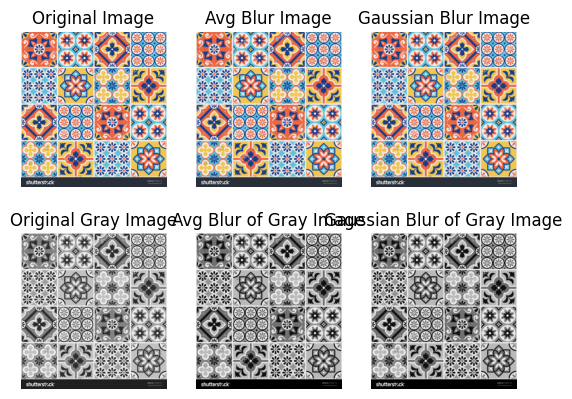

In [19]:
##Now we test all our fucntions
#Using the ass1 custom made grayscale function here to help ->
#Using tghe weighted average formula to convert RGB image into Grayscale

img = np.array(img)
red = img[:,:,0]
green = img[:,:,1]
blue = img[:,:,2]
gray_img = (red*0.299) + (green*0.587) + (blue*0.114)
gray_img = gray_img.astype(np.uint8)

img_blur_avg = average_blur_rgb(img,5)
img_blur_gau = gaussian_blur_rgb(img,5,5.0)

img_blur_avg_gray = average_blur_gray(gray_img,5)
img_blur_gau_gray = gaussian_blur_gray(gray_img,5,5.0)

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(img_blur_avg)
plt.title("Avg Blur Image")
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(img_blur_gau)
plt.title("Gaussian Blur Image")
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(gray_img,cmap= 'gray')
plt.title("Original Gray Image")
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(img_blur_avg_gray,cmap='gray')
plt.title("Avg Blur of Gray Image")
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(img_blur_gau_gray,cmap = 'gray')
plt.title("Gaussian Blur of Gray Image")
plt.axis('off')


### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

Text(0.5, 1.0, 'Sobel Edge Detection')

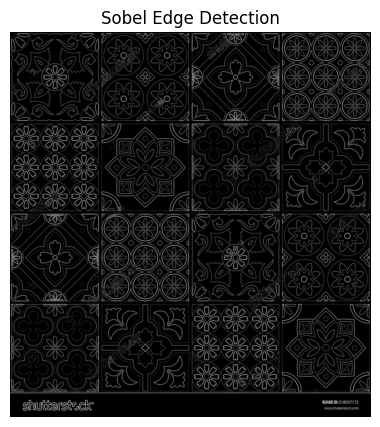

In [9]:
#Now we implment sobel edge detection as seen in lec-slides

img = np.array(img)
red = img[:,:,0]
green = img[:,:,1]
blue = img[:,:,2]
gray_img = (red*0.299) + (green*0.587) + (blue*0.114)
gray_img = gray_img.astype(np.uint8)

def sobel_edge(img):
  Gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
  Gy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

  x = convolve(img,Gx)
  y = convolve(img,Gy)
  G = np.sqrt(x**2 + y**2)

  G = G/np.max(G)
  G *= 255.0
  return G.astype(np.uint8)

edge = sobel_edge(gray_img)

plt.figure(figsize=(5,5))
plt.imshow(edge,cmap='gray')
plt.axis('off')
plt.title("Sobel Edge Detection")


### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

Text(0.5, 1.0, 'Laplacian Sharpening')

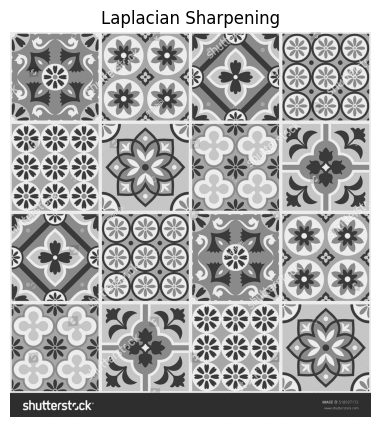

In [10]:
##Doing the task 1 first, here i am using the 4- connected kernel
def laplacian_sharpening(img,alpha):
  laplacian_kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
  lap = convolve(gray_img,laplacian_kernel)
  sharp = gray_img + lap*alpha
  sharp = np.clip(sharp,0,255)
  sharp.astype(np.uint8)
  return sharp

lap_sharp_img = laplacian_sharpening(gray_img,0.50)

plt.figure(figsize=(5,5))
plt.imshow(lap_sharp_img,cmap='gray')
plt.axis('off')
plt.title("Laplacian Sharpening")

(np.float64(-0.5), np.float64(1499.5), np.float64(1599.5), np.float64(-0.5))

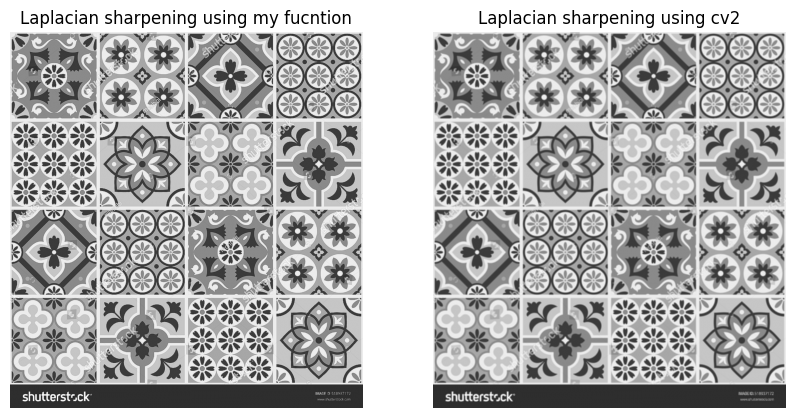

In [11]:
##putting alpha = 1
lap_sharp_img2 = laplacian_sharpening(gray_img,1.0)

##using cv to do laplacian sharpening now
import cv2
lap_cv = cv2.Laplacian(gray_img,cv2.CV_32F)
sharp_cv = np.clip(gray_img + lap_cv,0,255).astype(np.uint8)

plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(lap_sharp_img2,cmap='gray')
plt.title("Laplacian sharpening using my fucntion")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sharp_cv,cmap='gray')
plt.title("Laplacian sharpening using cv2")
plt.axis('off')

(np.float64(-0.5), np.float64(1499.5), np.float64(1599.5), np.float64(-0.5))

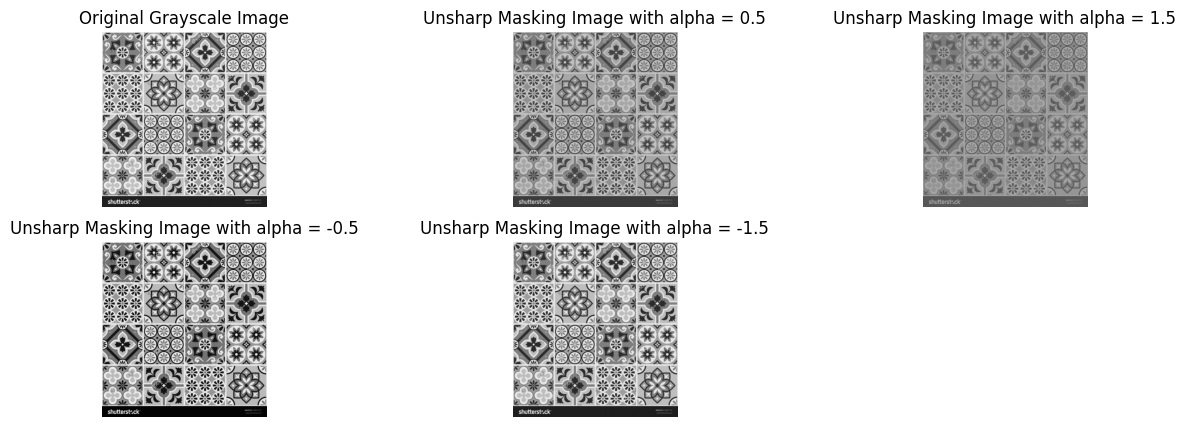

In [12]:
##now we execute task 2 that is unsharp masking using numpy
def unsharp_masking(img,alpha):
  test_img_gblur = gaussian_blur_gray(img,3,2.0)
  mask = img - test_img_gblur
  unsharp_img = img + mask * alpha
  return unsharp_img

um_img1 = unsharp_masking(gray_img,0.5)
um_img2 = unsharp_masking(gray_img,1.5)
um_img3 = unsharp_masking(gray_img,-0.5)
um_img4 = unsharp_masking(gray_img,-1.5)

plt.figure(figsize=(15,5))

plt.subplot(2,3,1)
plt.imshow(gray_img,cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(um_img1,cmap='gray')
plt.title("Unsharp Masking Image with alpha = 0.5")
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(um_img2,cmap='gray')
plt.title("Unsharp Masking Image with alpha = 1.5")
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(um_img3,cmap='gray')
plt.title("Unsharp Masking Image with alpha = -0.5")
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(um_img4,cmap='gray')
plt.title("Unsharp Masking Image with alpha = -1.5")
plt.axis('off')

### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(1499.5), np.float64(1599.5), np.float64(-0.5))

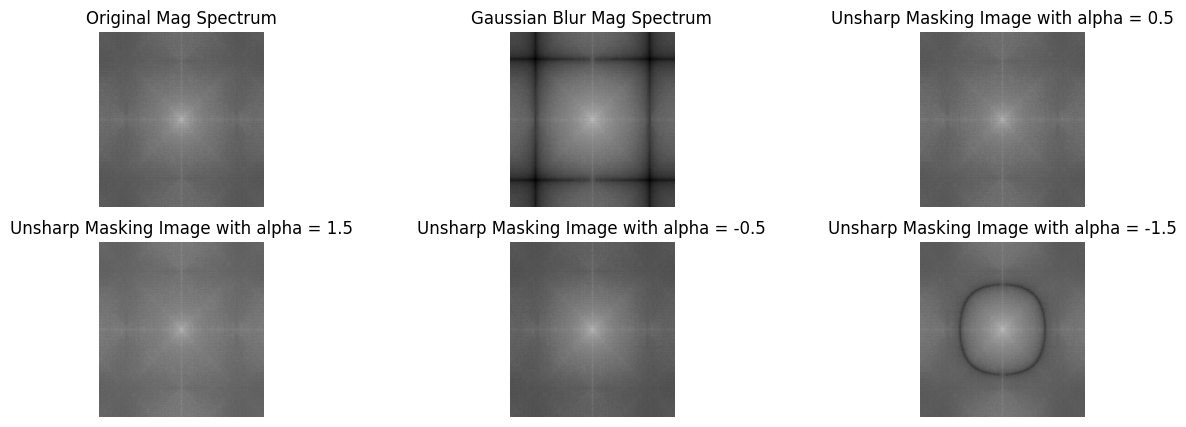

In [13]:
#Implemeting the already done magnitude spectrum in assignment 1
def mag_spectrum(img):
  freq = np.fft.fft2(img)
  fshift = np.fft.fftshift(freq)
  mag = 20 * np.log(np.abs(fshift) + 1)
  return mag

mag_original = mag_spectrum(gray_img)
mag_gauss_blur = mag_spectrum(gaussian_blur_gray(gray_img,3,2.0))
mag_gauss_blur2 = mag_spectrum(gaussian_blur_gray(gray_img,5,2.0)) ## i added this atlast so didnt have time to run this particular output but we can run this and see the desired output
mag_unsharp = mag_spectrum(um_img1)
mag_unsharp2 = mag_spectrum(um_img2)
mag_unsharp3 = mag_spectrum(um_img3)
mag_unsharp4 = mag_spectrum(um_img4)


plt.figure(figsize=(15,5))

plt.subplot(2,3,1)
plt.imshow(mag_original,cmap='gray')
plt.title("Original Mag Spectrum")
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(mag_gauss_blur,cmap='gray')
plt.title("Gaussian Blur Mag Spectrum")
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(mag_unsharp,cmap='gray')
plt.title("Unsharp Masking Image with alpha = 0.5")
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(mag_unsharp2,cmap='gray')
plt.title("Unsharp Masking Image with alpha = 1.5")
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(mag_unsharp3,cmap='gray')
plt.title("Unsharp Masking Image with alpha = -0.5")
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(mag_unsharp4,cmap='gray')
plt.title("Unsharp Masking Image with alpha = -1.5")
plt.axis('off')

#in gaussian blurring outer regions are much more darker as gaussian blur smotthes out the image which effectively means intensity of high frequencies decreases and many high frequencies get filtered out and that is what is being observed
##as we increase alpha the outer region of the magnitude spectrum of the unsharp masked images becomes more brighter which is explected as masking enhances and sharpens the images which means enhancing hte intensities of the high frwquecnices

### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

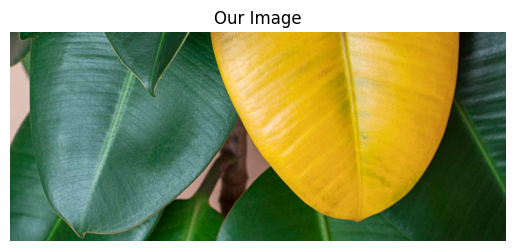

In [14]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

Text(0.5, 1.0, 'Yellow Leaf Edge Detection')

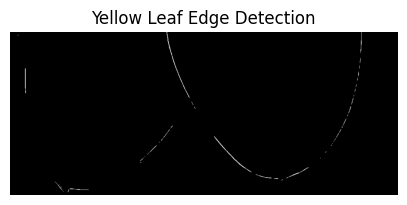

In [15]:
##So from the hint give n we can clearly see that the only differnece between green leaves and the yelow leaf is that the b and g remains same(b low and g high) but red changes from high in yellow to low in green leaves
#we can use this fact to our advantage and make use of it to detect the yellow leaf edges
#we can ceate a matrix of g-r, what will happen from this is that in green leaves the value will be very high whereas in yelllow leaf it will be almost zero thus we get the differentiating factor
##and then we can use sobel edge detectors to find the edges

r = img_part5[:,:,0]
g =img_part5[:,:,1]

diff = 1.87*r-g       ## i figured out the constants to best suit the answer after many different thought-out hit and trials i started from r-g and theni tried for 2*r-g and then boiled down to a good constant to make only the boundary of uellow leaf visible in the image

detect = sobel_edge(diff)
final = np.zeros_like(detect)
detect = (detect/np.max(detect))*255.0
final[detect>136] = 255     ## similarily i found this thresholding value after many tries for this constatn and it doese the job pretty well not to include other edges which was falsely deltected by our detector

plt.figure(figsize=(5,5))
plt.imshow(final,cmap='gray')
plt.axis('off')
plt.title("Yellow Leaf Edge Detection")

Text(0.5, 1.0, 'Yellow Leaf Edge Detection')

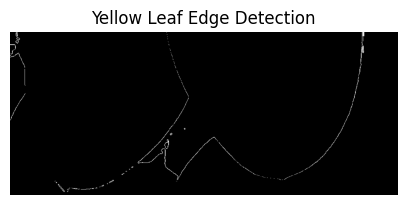

In [20]:
##this was the prev attempt but in this a little part which is not the yellow leaf boundary is also being detected but the line is much more connected
#so there is kindof a tradeoff between this and the above method
diff2 = r-g

detect2 = sobel_edge(diff2)
final2 = np.zeros_like(detect2)
detect2 = (detect2/np.max(detect2))*255.0
final2[detect2>200] = 255     ## similarily i found this thresholding value after many tries for this constatn and it doese the job pretty well not to include other edges which was falsely deltected by our detector

plt.figure(figsize=(5,5))
plt.imshow(final2,cmap='gray')
plt.axis('off')
plt.title("Yellow Leaf Edge Detection")

### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
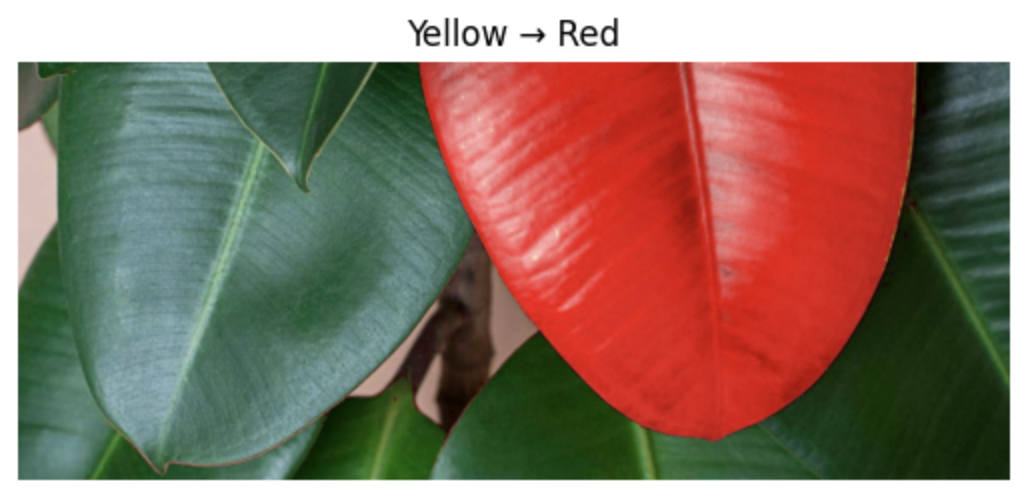

Also, we can change to a less brighter colour
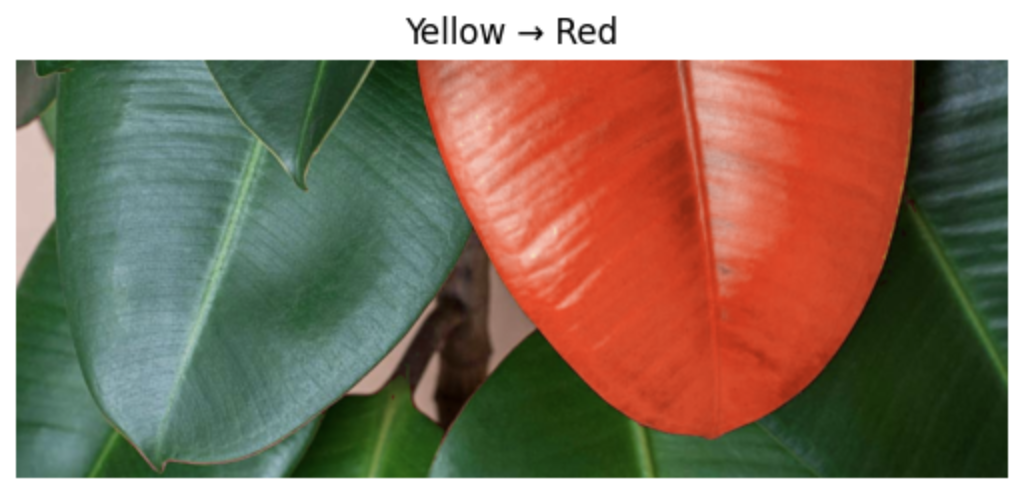

In [ ]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.

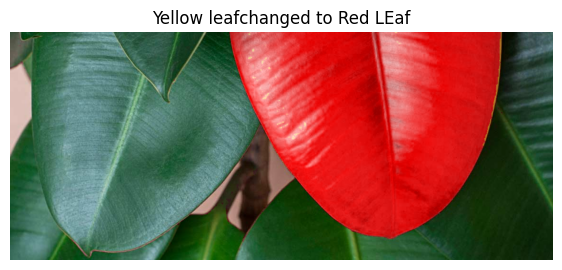

In [16]:
##using RGB to HSV converter function earlier made by me in ass2
def rgb_to_hsv(img):
    img = img.astype(np.float32) / 255.0

    r = img[:, :, 0]
    g = img[:, :, 1]
    b = img[:, :, 2]

    maxi = np.max(img, axis=2)
    mini = np.min(img, axis=2)
    delta = maxi-mini

    #Value
    v = maxi
    #saturation
    s = np.zeros_like(v)
    non_zero_v = maxi != 0
    s[non_zero_v] = delta[non_zero_v] / maxi[non_zero_v]
    #Hue
    h = np.zeros_like(v)
    delta_nz = delta != 0

    mask_r = (maxi == r) & delta_nz
    h[mask_r] = ( (g[mask_r] - b[mask_r]) / delta[mask_r] ) % 6

    mask_g = (maxi == g) & delta_nz
    h[mask_g] = ( (b[mask_g] - r[mask_g]) / delta[mask_g] ) + 2

    mask_b = (maxi == b) & delta_nz
    h[mask_b] = ( (r[mask_b] - g[mask_b]) / delta[mask_b] ) + 4


    h = h * 60
    h = h/2
    s = s * 255
    v = v * 255
    hsv_out = np.dstack((h, s, v))

    return hsv_out.astype(np.uint8)


hsv_image = rgb_to_hsv(img_part5)

h = hsv_image[:,:,0]
s= hsv_image[:,:,1]
v = hsv_image[:,:,2]

#below three lines i took help of google to figure out the values to be kept
stencil_h = (h>=18) &  (h<=35)    ##i checked several upper and lower bound and this one felt most accurate
stencil_s = (s>=50) # to avoid black and grays
stencil_v = (v>=50)  # to reject very dark colour

stencil = stencil_h & stencil_s & stencil_v # this creates a kind of stencil matrix which outlines around the yellow edge that is we have 0 where yellow is not present and otherwise
output_img = hsv_image.copy()
output_img[stencil,0] = 0        ##hue of red is 0 therefore we make the hue of those identified pixels = 0 making them red in colour

output_img = cv2.cvtColor(output_img, cv2.COLOR_HSV2RGB)
plt.figure(figsize=(7,7))
plt.title("Yellow leafchanged to Red LEaf")
plt.axis('off')
plt.imshow(output_img)

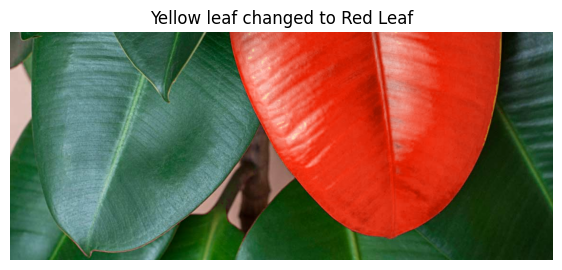

In [21]:
##Now to change it to less red-ie colour just as asked we just increase the hue value slighlty from pure zero
output_img2 = hsv_image.copy()
output_img2[stencil,0] = 4.40
output_img2 = cv2.cvtColor(output_img2, cv2.COLOR_HSV2RGB)
plt.figure(figsize=(7,7))
plt.title("Yellow leaf changed to Red Leaf")
plt.axis('off')
plt.imshow(output_img2)